In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

In [3]:
%matplotlib inline

In [4]:
from urllib.request import urlopen


In [5]:
from PIL import Image

In [6]:
from mplsoccer import PyPizza, add_image, FontManager


In [7]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

In [8]:
URL = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA8AAAAPACAYAAAD61hCbAAAgAElEQVR4Xuy9fbAt2VUftnZ3n3Pufe+NpNFIaMwIZoxikpI1CcKBSCLEgoAwJK4QLIgTSjFyEmMn4FhF5Q/8gSIbysU/UC6CCS5bJBVXSpFA+XAcLBlZMsQSyGBMjVCZBFEzMV+SeNJ8vPfuPR/dnfqttX67V+/b576RrClr3t3n1at77zndu/dee3Wf9Vu/9ZGkvqoEqgSqBKoEqgSusAQ+9iVf8sKubR9IKT2QRF4iaXhgGNIDMo4vEpHNKLJOqV2lRtZJZJVSsxKRtTRptb1ztm7adtV13VokrWQcV2Ma1zLKSs/r2tUg/XoYhlU/jCsZh7WI3EgpqcRXK7w13BrGcZdS2vd9j/+7cRz3bdPuGpF907Q7GdN+GIb9oe93SWTfdd1uvVrv9/p32o+j7EUwRrNP0uyaptlKkifPz+/cTM34e2kcb3Zte/PQ9zdf8Ru/8dQV3u669CqBKoEqgSqBKy4B+wauryqBKoEqgSqBKoHnuQRGkfZjr3jFA13TPND36YGhGR5oAGxleGCU8YFxHB8QkZekJA80qXkgSXqgaZoXj+MIQCv8QiQ4TamR3XYv099p9jvOGYZBmqbR/zgOP/Eax1FGDNiIDOOgx+G9+MLx+I/3+Xvf94L/+HvVddKmRppkYw7DqOPg1bat/t/vDnnmNkacxyhNh3Ptuvjcx9+nlD7Vtu3Noe9/bxS5KSI3x3G8KeN4c0jppgzDTWmam5vT05uHprn5soceupne9a7+ea4idfpVAlUCVQJVAlUC+fu+iqJKoEqgSqBKoErg81YCv/PqV7+0W8nDwyAPyyiPjCIPNyk9MgzDg8MAxnZ4YBzGFzr6nABo28gIAOggk0CQgBOA9XA4SL8/ZDDbOqAdBYDRACfPiz/5PoEtxgIoJWA20DuIpNHm4wA4AmqOx/MIgDHWqltJfzj4uQa2M1gWA7p2Pn6fA3D7bJTdYadziGAb4+DvONdjGw/Z8Doi8hRA8jiMAMu/O6b0eNvIE03TPC7SPiFN8/gX/tIv/d7nrRLViVUJVAlUCVQJVAkEh3cVRpVAlUCVQJVAlcC/FAmMIumTr3/9y5p0eDjJ+PA49I8MozycxvGRBkC3aR5OKd3A5IAhFfY5mQqwSnBJcKiLAFsqoxzGwZhYnOeMK38SLO/3e9nvdjIOo4JCsrm9g2YA4RIEx78ja9t1nZ6vYHUwwjQVzG8JoglG8b6C8b7XeSA8GuvDWHhvWh9YY2OZCVCTGAttMnKwnUS2u3MFwPiMc+P18fdut3MQvbxGMs4BBM90ZCZzHVhujcP4RGrSEzKmx5u2eyLJ+PggwxNp7B5/2S/8wsf/pShZvWiVQJVAlUCVQJWAS6CGQFdVqBKoEqgSqBJ4TiUwvvWtzdmHPvTQIfWPNEkeHmVUBncch0eatgW4/WLk2jIcOAO40UJ+AQIVgDnoU9B1YcajHqfhyAgZ9hDkPRjcxkKNm8yYeiizg2iwrACSeJEVxTUAOgVj+cXKEGYcDxCJ48rzFbQeeulaA6Ul6OV7EWBijgTA+B1jAwTjmMj+YkIglgmMJ0Bv4dQ8VplfhGAPHlK9WmWQTNB9dnZ2Iaw7gt3GFx/fiww2nAdLcsH6lDtP7qBA6LY5Ic5TSk9IkifGUR5vV90TT336ycfP9rsnVi84efxLP/Qrv207XV9VAlUCVQJVAlUCz40EKgB+buRaR60SqBKoEriSErj1rd/0YCfdo4fd7lXSpEdbSa+ScfyDwzBcA6oheCLIVdaysdzZ8jMDc1N+LASawbG/v9ttndkVBZvMx7VjRXrNmTXAO2N+fSzk2XLMeAzBJUAorxt/8neyvSVTClCM9wBgl8Avr4nx47m8Ls7hWggwp58ZUitgtwmabBR4eqg0OPC2bTJ7HMH9BeY27E0Eu8OhN0G6vLiWeAxBd5SvvgcnAv4r+MUEJxbepjxK07a2/sYAf9M0d8Zh/FUZx8fGcXislfYj0h4eu/F/vK8yx1fyiVIXXSVQJVAl8LmXQAXAn3uZ1hGrBKoEqgTueQmMb3rT9UM6/9fH1Dy6WrePHvb9q3a73aOopAxAA2YwjSKnq7WGIxsQnV4K0sRCjnMIcCgKpQAKIAkUJhhc/WehvQSMGO1w2OugTQJgnECuHgMWuDfwxvBgziADUAeQSyG+mD8BrI4VgCB/Z8GqEvwRADYAwM48x2sTpG42G2V9cXwJUHG8Xh9OAo5BMIm/UUALLLWh05l883pWHYSEStOSOI4zyjghyrJUWjLm2L8YZs7jeA0y1KUMes1/NlZa5Vc4M0AuQy8gg6YzIAzWHNfV0PbBzvN5IO/4Mfzv+/6xcUyPnV7fPpb+p/fevudvtrrAKoEqgSqBKoHPqQQqAP6cirMOViVQJVAlcG9JYPxTf2p1a3zmS0W6RyWNj0o/vmqU8VERecTSW8ccpsvcVQAh/N6hMNOhl7G34k1gBPkiAIwAuEG4MACTs40AwA0AdAbGNg4BlWNAH3IKi7bw5YNeV8OiAwM8A3IOphnmazjSGOdc2RkgLLCfJRDUEO22neXX5jkCxGFNnpsb18714zpwFuBvhjwTmOo4npeMa9i6LBeYBbewTsuJnio9K5vuYHc47GcAG59FJ8IxAKxyMO48h2BzzlHD1+t1/rxk0HE8PtdCYL5vJQu/3e2kWxtLDjkA7KL4F66NvOy2mYqKcd50PmDVWoBrlMfGZnws9UnB8Y37X/b/pr/xN8wzUl9VAlUCVQJVAlUChQQqAK4qUSVQJVAlUCWgEvj0n/vTj4y7/aNNSo9KSq/q+/7RzbXNv5qahD63uUBUBGjdGm1tHYA5oMyMIMDjrrdWPijm5EWbCBpX65Vst9sMeJVR1P82JE5fnZxK260sVLa3Ss04JOfzNknf13xdZYLtZOS9AnQhhLdrrGWQnggQebBx8H+zAkCb2F1bijOeYFv7QQEkwBleBLssloX3Yug2C2LpGPhw1QqY0AvA2kE9Q6UJ6mJLJYBPyCeCx5z363NZrSwHGWw19ojOB1xa/3bWPIBG366J1S2ZW65Jx/IQ6Dh/3i4E4qUMogzBymNP9BrhPuNeW561fTIxxYMMyN1WUD/fmzg3/G4Ae4oM8HXuJcmvpVEea6R9LLXNY23bPJZ+9G89UW/1KoEqgSqBKoEqgQqAqw5UCVQJVAlcQQmMP/iDL9/J7jVJ0mu7VfsVqWm/TMbxvhxKC7AKdrEBI1rkbhIghnBkAiyyhMosDqOsxkbBWWqnHF8FqmApkf8KMBr61IK5zIAS8C010oIFBqMJUItx+c3lAGnwfFsNI9aeuQSwvRz2e31PmWYP+QWgJQBetZYDHEEdmVaMi3MjSI3AV6/nIdxl/rICOoDjrtVQ7yWAS5AamdXcSklZ41GGPdsgGTONOSloBODV8G1juwEyCYDNSZBUvu5dMLlxnaFQVgkoKQcCVK2OXbC3ca28VryFokMBABwroWOCciDohlMkhp+TzSYAtqiA+f5ksOwXjQCYn+n4Y5IG/8EiN2DQh2eGfvynIuM/Hpv0ob5vf/7aj/zIb17B278uuUqgSqBK4EpLoALgK739dfFVAlUCV0EC44//+EoeOP1yOfSvHQZ5XZPSa2UcX655oUC3yDP1Yk9Ku+IFkNUfRA5okxPySz2fk0CD1Y9LAMnw3dP1iYI2ACWwuMj1dEQNOtWuw28izIVMrVd9Hs53FgaN93FtbS1kuaH2N9oNGZurwNr74WJM5MeCHVbGGIDSgR8BMNbK0GICwXgMgOZ6tQ7TMyaTAFnDvL3tUSziRUCnDOo4r+Acw4QxTndyYmtwBltDl7FWBbfoY3Q+rVWTZntlsM2JgEXa+Bq2reBfUb79VKdBkFVQ9hgGzTlFR0B87zIATOY9guIMUDX0udcQdABgHd/ziQ1gu5PAGWLdAz2ZId3GAMccas6bToOYh1yy3CqPHk6RVnVPE8X58msOff+bfd9/UPrDh6QZP7j65O1fruHTV+GpWNdYJVAlcJUlUAHwVd79uvYqgSqBe1IC499954N9Gl8zjs1r+358XWraPyQipznvNBdUMmCLQksNALCHCOubAI8AWgNyTOfhsoatHGzFRFyOS6YR4Ov0VOTOHdlttwo2W1zHc30VoKFAkxa7cpY5FnwaRfZ3trICAMZ5ZIABrHCOAz2whagWDZCV81+VtbQ2QLmIlANmBZxspcQ5cx2YjANSBbjIT52BUncOQDYM39VK1iHXN4dyJ5HbdwKA1XjpSc6YD5wPyOt1J4ECWQVr3n5pu1OQaw2Qk4Z0AwAz/LiDQ8FBsIJ3yMLzhA0LT8XHGF6NvGi+dihWFgBoZGitGJXlHjMEujw2Hs8xMwOs8x6UAS6ZXT1W8709VLwAvzRO+uGQK4TT+cAwcHUghCrdFwA8rnqAXlhONKIQsvy575D/7dty2G+laxo5v3P77Hd/53d/UYbDhx54yYMfvO+hl34w/dk//8l78kFRF1UlUCVQJXBFJVAB8BXd+LrsKoEqgXtDAuM739nuX3Lty6RpXidNeq1Iem3bNI8YM5ZkfwDzOuWGEsiQkSOIUNDlDJ2hS1RbRkVeS8adhbUSMOEaBM4RSPr5jq5leOopuXPnjgLg1XptYcMAYatORhSA0orPUyishvqycvB+L+tuZYwomN5Q9VirBDvIIwBmSLJNAW12mFccvu4cTCoYIkA0mthgmPZP8nBrvIVrK3D3lkPKjvvnGpLt50YHAn/f7ScAG1WOIcnOgjMv2XCh58wC8+oCKRsUxUJO8j4X+Gq9gBRBey44llsh2ZIUWLNPcnAyIEQ8glpO0XJ2TT6Us84tFvSKlae5/773CkbhgCijB5DbG2Wu4g765brGcG1ONVew5vh0YsT8YZ/8tJ4k4wFzcMDvLbfyNgCgX7sm8vTTgmJhzWajDpmnP/Fx2W3P5cYLXignD7wE8v+YjOMHRZoPSTd8UO578CPp277Ny2/fG8+RuooqgSqBKoGrJIEKgK/Sbte1VglUCTzvJTB+5IMvlkP7Oknt66RtXiv94StE5LouzKpDBZYLjFcjAgCJzwjccKyHBCvQ0N+1p5CBvwyQPPxU83mdhYztjEr2N4IgSnoUOX/ySTk7O9OCRZuTE2m7VhKAn7OfWuTJWWaCX+UFETYNEAuWE3NyplSX6kDVcnmtXzAZy1k+LpopFfPSfFQytrrmoBaRxR4NbIIx1fkS1AbghxzZGP4c83nxBdthjUX+LUO3NSwcoCswwFlsDgqRucxqzLq3AMB7sMJWCVqhnc7Z5JX3zxlyzQPmAiMzHfKBMyvq4DLrEq6sAN4FVJ7PMPRy30OYPJlrnQLnBxDMc5TB9rl73ngOb7eTzAuQHRSh5VO8Tryz8zwRYWD50nlNcQ8RUZBE9udn6lBYAwyvO5Fbt6U/uyPt5kRktZnWT/A/DGi99I8lNR+UlD4k6+GD6dv+80897x8udQFVAlUCVQJXRAIVAF+Rja7LrBKoEnh+SmD8yEfW0u++WsbxDTIOb5CU/g1N/lRW0nNodWkOVmn8K4hFPmmnTKsCiP0BvWYmMJDBE3rOHGTc7TRkVismk9lF2GjMuXUwVOZbsmhSlrKCE4Oq5089rVWUT09PpTvZTBtB9jIDKYI5VpVG+O5gIdN4oXgVKh4rQ+psrOf/AgCD6SvB6CBeECq0MiIbmoG/5xEzpNpwoKMmgFTPX2XhLHyu4dxtq1WaI4NKAKzscxLtcZvzcB1gMmdZc4zxedHbmNcfh16xH45XsOssvRYOG7xAFwC6F8Pi/FH0ScOLcT7aJ4UiYzNngF93iQG24xBCjDD4KQT6AliO4DgAaGOAR69fpeXAJqAbAakX+1JwzHxlV2e9VpmDHm7jUgdNnd0BNIFVreSdgbjnAeteakExC2WHrDaomg39hKPo/BxeIpGmRRR17lWt+d8HpAXgFsxRExDQr4jIe2Qc3ysnN/7v9G3fhuT5+qoSqBKoEqgS+DyUQAXAn4ebUqdUJVAlcLUl8PQvfvBfG/fjG5L039D04x8Gw4scWbwIhLQtUbeSgxaFspfCDIBDr7isQEgrERsARrjxPjB6OBZGPMAAmMzz8/PcjxZsreZNAmTHsFxn7mKhp/h7ngtzbNtODmDU+l42YNg2awXhyHlVVpUgggCe7LMCq9EAEAAwGNH9XscxGYDZ1JnNwnRzqCxBNcOWWTCLVYfJAJOF1pxeK6ilsmQfXHzuIdGDXx/r1dxT/IdDITLhHpqrM1M23YEf5+PzYGVpA6/T3uaWQD6O4jX8Zx4yzocjA+G7eA/XV5nx/TGHao9aLGsKQta87ZirDPfCbrcYAu3KJv3O2ObZHKlv/v68wdEU0qxTR4Eu7lOUgcVl29oY7u5Ok5kzxfOIMytcsL4zxp2h45GpZqg6zgssMnOuEY2g+oX7AmCYecLnWwXITbeS3kPQ6YBAETVMu12tZHfnbNIVpgaMclvG8QN9f3ivdM17Tv6z//LXrvYTra6+SqBKoErg80sCFQB/fu1HnU2VQJXAFZTA+Iu/+MJdc/j6YRjfMIp8g4h8McSgdYA1j9IJNAWinqfqDJ3m9wLwMkR31m0VCMerJh+TKxitvtdet6wmTHYTgEkBp7f6yQWPnF3TKtJanGpeiTnnsDaNAV1eeylEWtGmgzzmghKA4m+0+AHfFnI9Y0GmqTq0FbY6Vsl4msL0tafjEIDj3BjeTTZRKy+HEPAIrgwpz4tc8UIM6wUwjSHQzlhD3soAw9EQnApzJt2dAHny/sswFc3S/GCdBoA7fyfzaq2A0AJoVnwr6sIs5DvGghsbjxBwyx32MXBuXE8shhbXzggAyifm/eoYLjd3sOip6mgIssaaNAc9vBd1CXOPexaAuh0GB4pVzM7jh/3S/Xf9NZDv64cuoNiYFxPj/uTCb37P4H5hES713/hlMqPOAmzj+MQwDO9tlCFe/0z6zu986go+5uqSqwSqBKoEPm8kUAHw581W1IlUCVQJXBUJjO9/fycv2nylHNIbpGvfICJfKcOAcrsmAoISPKHBwGXr2h/ZDoIV7oB1AjgBc4WfOgYf7QAZdwHAuJa2C7JWRQwPzkyqsmYh/xXzY/4wwAcBBEEK569A0fJ2F19cozJ0BfDKQAaAyFjMC/m3BMQOUmaFlDJ4xfQuVjE2rGVgWXNwQ37zDEA7hlInglaa9nDqCOSxfobYLgItgDeE2BpAj9fG32SAZyx63P/RnAt2rp3PqtyaB6wAXuOkC6Bnfw5bVFH2HGq7+HRcXEfBrFIPFQC3DoB5fnA0ZGcEZeXHTCHQkwOAx1IGupaiqBb3RfOj0UOYjoRy7r4KVrmOss0LhPMIexaWHPWk1BkWCdM8dHXq9NLBueQh0FYkzWTIMHawwFmmZJnjPaB528hDZkqA4Ib4sAzje2WQ98hDD3+4FtRafkTUd6sEqgSqBJ4rCVQA/FxJto5bJVAlUCUQJDC+/6cfkbT6JkmCPN6vFZH79GMY0EvARMHJ6ADYB1oq1gTwhXBg5vzaYNMJd2OAcWQEr3HXnKTLYDiyeJ4/mgGks8Bm+8ciUw6AC3Y1M5KxCFUEZP57v0OOrY25VIk6AqDMUIdxrE3QxAxnhpWtfQhgAoudx5HR2jaxeNgFhtErRF/IX0VRLgOtCFPPFZoZMrzQdijLLYInzb1Gj2Bj5y2v2CtEY40ZtJKF5rZPirLfHSyU3c8r82YB+kogSBXAtbQIGHsru57GPOfZvBUYhpZZaIGkILSQf3BAHAuftzkNsvb85plaFgDcpjVdg79rnq73Ri4jCHgMirJRPyL7rk6HoZd+b23AclSD6xbzwdFCrLx+lEl2VhROHr2+6c2TjaT3DUne0x7S309ve9vj9cFZJVAlUCVQJfDcSqAC4OdWvnX0KoEqgSsqgU+880dvXN9e+7rNqnsDClillF6xZOwrAC6BX8wppfzI7M5AGNg1r9ocQ1TjMZcUEcrAO/R5pTHP6sq73T6zdASbBKMIEb1+/bqCj1ggiiyy9pt1dpSfGzOI1FjPDC3CfxVosMozWu6OLHq1DIBnDGLUNToQYgGvCC4j4+nz5zoymBoGWXcWxh17684vY0AU/XfJBE4s5ijXbtyXc4sjQOfvkOGF8TKD7QCYfX5BvrPXsW4U/CNbA2gZ+5p8mXc7aITAcQAMBnoJAHMfkANMBwTG7A9zNjuHBbNwmINg1RUAYM0BnvcRjjq2lEs+yWO0CtzsER2cIJwz5x9BaN4/hH9H8B5kFM8noI9OAvYa7pjD7XvC9fIchECXrDIBMHOgrcr1PMphAunuMFISX++jjw3D+N42pfest4f3pb/+129d0UdoXXaVQJVAlcBzJoEKgJ8z0daBqwSqBK6SBMa3vrW5c/99f6gT+YYxpTckSa9NMnYKAh0A0EiPcolhtbEabwYG7GEaKhNb0yA1szX/Nxc3clZwYjBBXhqDdeylIbQEhjxIAV0vB4b9Nq0yYBEo4BoAbycnJzMAzDVgThkAD3ZsBslkQr2o1wQYUmY4+Z5VsC6rQ4eK1wSQx/KLGd4cw8sje7oQljwBKLCAVnE5A+AA3jHHDMAc+EVwh6FR+dqw9rQHBFfRoVDujwFQMI8WcpsZSEJd79MMlpR1smK/XmU1Id/VSkOgI7jDXKhfSwCSn2lOcS5i5SyrVk+ewD4BYV6fgTgLF8cMgv6xQvfkILCw7ciuTtc2iRyQQ95MOeBz+Y5WZfsIA2zn4xoXz+d8YxEt5r7naIO+lxXbNIV5xuuV4Dc6OTT0urcw7Ph+PB/XVGeQ60i8xyTJITXyIVSXHvvhPasHv+ifpLe9LcS6X6UnbF1rlUCVQJXA504CFQB/7mRZR6oSqBK4ghIYv/+tr5GxeaMk+WMi6ZEM1pS2Ehm1ncoUEkvQQ1GhPy5eBAczADCilU3BHPmJBMGr9dqrIhvLN7CQFHNGY3Gfhf0BQMuvkONIALw+vWbtlsxqt//MAXbwyXxIAisywJoDjIrFfi5zWQmgyLhGFjAWvFJg1CITNLBkga3G5zvNkZ4+j+ACAEzBhQOQ6GAgcIltk2KYLMdpV03O98Q5s/lxLzinxVzTOfjFKXAG8D9DaOPWRB1ovW3PBBIdiLpzAh2xprxeZ1q1eJrICH1wJ8kxABwBbATpKlMtKO15r3jDQ+WNxTcQrXvpL8Pqk64b8+nFuTwEO4Zcx3thSf91LISAF3qbHRQiWkSMr3L+dtwEsMvj8HmHEOgY2h/bJ+F96DjmUIS/cw4oZnaUQcet4sW+ZsA4MNlaRMudKjPZuU4P0msouBprw/C4SPrJNIw/uX7HT/3CFXzc1iVXCVQJVAl8TiRQAfDnRIx1kCqBKoGrIgGNLv3uP/NviYxvlJQM9Mb8Qw9TZRAqciijYRuNdwAI9MctGTAay3qsFsK1R3UGApER1ZDYpIWKjNgcpQ/5tmVl43KfCMDiHDhfjHP9BS+wHGOyphggFMFCT9TScFf215mt3dn5FLbLwlXICXVQGkOAdQ4sOOSk7x4M4kIOMEEvz4/gNQKSVTOF+PKczPCFnNxYACnKqDu1IlmUo15HQZJ/fQYAZNsSCnY5G0p2LwIwyqwEwBFowcnReBGvCWSaFgB4KiBnXTTXjgy0XF/AgCIM+EKo8oJT4QIATmgh3eYiUhf2OSUF8vGlIDjkAZdOEe5TDIk/xgDzXNX9osJ33MvZ9YtIgFmoPT8LrH+sYs7rkaFH9ASKYI3ubCj3bwn4cl55fgEARwcM11Q6ZWYMsFU3s8uyp/Ikh8dlTD/Z9/uffMF73/9h45Drq0qgSqBKoErg2UigAuBnI6V6TJVAlcCVlgAw2af/vW/4t1OT3jiOA0DvQ2bgGtAzoiv0jwUo9bDL1WZ9AQBHIxkAKAKA0shu09QnNjODzi7j2N2ebWocJGvoK5gzs4cP6BN7iWkcAUxkQxWgyCgn16/nHFICBIIpnnsZAL5z67bKKIaXqj2voJKB3HP1ImjBpwg/joxoBGkEsqVyRnClYdiBRS+ZUDDIeC+2fsrHJAvB7QMDSBmxuBJb5WAOLFCFvSc4Wq9WOSS4lN+M7V+4w5T5bht1aOSWPF6QiaCoQ4sqVajQAirXQIMzxJjaEgBHIHqMwcSwGJ8KFPc5y8gZ4HKPbJ8gB1tY6WCIOeO8H5bkEefG3+P9Aga2PJ/jwDlw2O/UgVSOTT2iXCNQx3icHxj4Wf56AOM4B/dvqZN5fmTii6iF8h7n/Mv7CLe5VQl3xp2h9ATwPs/UNr81jumnxjS+6/4P/KN/VMHwlf66qouvEqgSeBYSqAD4WQipHlIlUCVw9SSAqMRP/+Gv+qpBRge98hBzCQF8jZ0dZbfdah4sPqMxTmPaeoRO+a/4GyGbMGphVOP4kgEkWDEjupHzO2cXCvkQnOI6GI/gwq7lFYOZsxiMeTKzGrrqeZpgoPmKYagYG+AJ7ZXK4seRtYo5pCW4VIayaXKvVHzO9eL6AFfb7VYBagkiOBfIiCxnZMdwXcjz1q1beg38TUAcQ2tXqy73OCbIZd9jAnjmYStr7b2PVT5QAs+hZairAh7fOwWInY2Pa3dtpyCY+c6Yt36+2xkj7mPjPYyD487Pz2fgkCBIWchxkGvXrwtYcOxTydAC3CszreHIxj6XebZdY3MiAMY4+I85IPwd8o/AMoIzOFEAwA8HY3lxDowGhj1z7XCyYL5YE0OS4VjA//V6o86YMtc9XocAcNJjB6Da4sqY7pirG8E0+1djDOoE5KAh5gi/1/OnEObo5KF+8n6gPnCv8DlkHOeF93BN9nHGmql/JbDVLG53jHFuODbqMfXqgIrTfZ8dMRgLn6GKOdeSx/LCXiMBMvfX5PRbw+HwU00j77r/l37lg0gAuHpP77riKoEqgSqByyVQAXDVkCqBKoEqAZcA8M7Hv/zLX9+m9MbVavUtKcnLRs3Biwa8cruZURqGUTbrteAnwaQe3xueqcAAACAASURBVA85LFmLKKGvqRvTCi5RZOpwcPA8zxOdACbMV4Aby+/FKzJiBBZtZwwri21pzmBotcOQTgJzGvhxTIKQGQBCCC+rTxdawnMj6GVeazb221aQ49ytrFIuXhkA9waACQb4OcOIM8t86C+AOoxDWRJAxIJSvL6C4gZAYq/yJtOL8yOrx3MJorkOnIwqyigixeuA0YXjg6AXRZj4mRU8M+BCwIdWOgrivRIzfuf8CHjiXsU9huzXGwBIKypVMrWqhx4mG9nlvDfQiMDQ4n2CN8wBcwcA5ysCaJuHhbvvHQCrfDzaQQF/11nkQ8iB5r6ozg29tpGKbG/JFFM2F6IP3EFzohEU09o5V+oHGXzOne/zHoSO8f6NQLt86PGexPsK9D1Pd69tuMyBEOdIJwcBf3S+RAdM2066X95v1EMF4IElZm/orENelI57Sf1Xh9IGzx6LENDjPZ+4wTOjkY+LjO/e9/27XvKrv/oPKxiuX3VVAlUCVQImgQqAqyZUCVQJXGkJjN/6re3Nj370D4u0b0wpfUvf9y+DoQugBuCx3pgB33vO5VxYxjStVmsFvPg9G88wRmMrngBeS0BK8EeAE8EoDFltaxNyGzXI2Q1mGM4EtGZQG2CnkXziVXLJckWghPNYRIrvE4BNgGtKQywNeIIGACl8BjbRWCtnurtWbt+5M8tjVVbcq0IrI+ugcQLA3gbJATzAVwyfLsEUPqMzQRk7Z4ZxHeRFA4SBFSc7X7J5ERzF0G6dD0CPM7c8HwBYixs7oMZ1FHz439oqSJlLq1RthYAnEE9HCKMAIjPKfY/60DYGxij7CNxtr6zdEEHXBaDmYJxj83wC2Hitiwwytmpe/VuLazmzT/ZfgbGI7HcWTUBWFDJBES3MMYaKR5AfWc/M3DqYw6DrNfrsmj7H+4P3IXSOe05ASd0H+ITzAs4p6nMpHwJw6jKdJDgO84YDR2XsDHOMNLB730Kg8/0Y+12PKTvH4r5R5hgTIfbU1XjfElDr3nsVgDhGXkcDht70W/Xfq68jRB/Pr3bVCtjlJjUfH0d592G3e9eDT3zsZ5PIPHn7Sn8L1MVXCVQJXDUJVAB81Xa8rrdKoEoA5nT7O4+84uvHPr2x7dpvHsfxATN4jcVlSCOA02oDAxcMlIHQKb3SKswiPJThrDgfjFCnRrdVbgUAiCxpCVRYBXoJ/E6pvjGJd2KC1dD30F8CXMwnsqEI0V6v1jlUmsYyAVFkzEqgZRSgV1IuiiYRkEBeCKUFMCDzSSfAHuAL5zvTSxChhvyhVwY4Anud06yic9Ic57ZbTaAqsF04HvIm+8U1ETxg36yG8ASACHAIlig3gr/4vjHItn8EwGD7CdQgOwUe3hqIc89rapLcAcOqdbMmBjGGzMYc5Bi+rDJCFEFqpGtXCpII1vUzD+21kFrbcwLTWSixgnP7bOZECYx8ycJTBqrzWkRsilCg0aBy9HBeVjIG4MW12Zpov9/JegUHkoX3Rh3n71g/7h9GBjC0eNpLT6T151YEm/gdx+s95/JhqLiOud5If8DeW8TFknx4v1O2EQAPY28OjP6Qi31FdpbOjDin6EQAcMWzABEckaXlvYPcbryvDgMvdhYdIhwXY+jzyUPv8zr8nmOOOkCvgmmEgB/Qxuyg0Rf9YCH6+nyzaISbq677X1ObfvL3/fPHf6aC4fqlWCVQJXDVJFAB8FXb8breKoErLIEnXvzFrxyb8U+mpn2TjOMX0PCn0Yu/GaIKgxMG/P6w1z6kOb/QAdHEpMHoXOWcQIK/w75XMLfZrHMOazTCafTfvn17tiMEoQZMR+lWsY+wPbJRYosvAnP8baG7czbw6aeeks16o6DE1rTPYI7GOsFRBE400rUMddEDNU4YcoisWMyz1fzeZgqVpeFOAEzwTWBmbFcod52syFe76jKzXgIJrIvsXWTWOEcwbAQtcZ0ET2QxIwAmUMdeYg1LAJjr3m13GgIcdYlAFuB7hyJMwQlCWeEaOA4OkMhaE3yqMwGhx0NSBwYZY1uDhXBDN6/fuL5YZEvbI2lEwMROxn2kHOn4odNk0itbE3J4CZ4mpZvCx8iE63oSGE/TNcx/e34um/VUBCxeg+Duzp07CgAtX97WxX3CfTdqM93JAVQyrZgbzqd8CIABijH3863lJx9jgDF/6iHnxz0iONVCaGT1XQgcLzL53NOs17qgUVZhbdAJOlDUqRLmz+vEe1sZ8sZSHBACzarrcMwANOtYwfmBa+l+9XiW7RX8YtwY3QCHFOTjxfI+Pgzj314149sf/tTvfvQKfz3UpVcJVAlcIQlUAHyFNrsutUrgKkrgY/ff/8L9dvUfi8ibm6b5ysh4EjjBuCQDxbBGBYu7nbJXNGxhrJIxZJ7oKGaAE1CY8dwoEMWxYMDYR5RMJcYmawUAwBfB78QiiTSKC6YQUIwtY8oVh3c7Y6yt4q6x0gSaMJxhZMMoJtCLLC2LSBEYkZmcGFSAICtEFMFTZLkIqtnOKYe/OlOrYLKbcn0VMACku1Eewa9Wf9Y+U/ZCePcex3kVaQKkCKTUkHcAGh0MWBv+P3P7mcwe8/MIlmIRMoJBXIcFnW7fuq0BqDkH2BngDPwDIML4qivOtikDt0Yo9tSKiftA4IUcXM41sosK5BC6exi1uBbXDnmB1cO+gD1FkSwDeHbtrEPuI6EexvONNTZnT2SF6Qjie5RrdnCwajfW5/s7cw6s1prTDmYY84fzAM4hjrPEQmMNGJ/3Je8Fey/JYcS6piJpdHLwJ/UN5/GeVBnp/q9ku93NmGc6J/SuCqkClE++11lhGbI6EoJN8M37OgN3LzIHEIr/cGBQ5ihcxd+tSNg6R3EgVDnqtjLMaGHFolcAuszpbqfwfLC6CLPH9XHPM7IC8Sp4vpCp1r1yh1C3nqpXE0Cnpvlw1zZvH2Tzjld8+jeeuorfF3XNVQJVAldDAhUAX419rqusErhSEgCG+n+uf+G/24i8ebvb/Ydt05xGlpIGOY1gsrEExKysDAZLi/B4Rd4YKqqgYxQBAGXIZ2aTAFLFWOMBfWwLA5pMK34yBzdu0ASEgaYmAGoGNkJyG2+zZOcjz9FeyNec2t5oWPLeCjDR6I4sFz4vq0BHIDIKcjeRWzivokuWl8cCxNFxQHaLABGziuylAkAPgSbgi8CfX0oGTgzU8/PI9HJN/IwAiKHKFgK7VgCAMHa8sFbMi2wj/iaApi5QPgTA5+db3b3ILALgAsQTaBA4K6DUWVveLKo3A8SBwV4C35RjdCgQiKmuDQDTpkvMY8a8yHqfnxt7TFaUlaB1LfrPGFUUouK4dI5QlpQFgV8JRsnQ6l6zb7LnQEP3WEkan2FezIk2cG1pBTNWt2jJRNlF9j47YrQA18HWEvoAR31h+gEdO1wHj+m9enY8h3utgDGAbzow6ABCaDErYUfHRXYwFVXDS10cDgMSwFXH6CggOFfnzsGeHcpxI5zb88gjKw+HAntm46cWuUIUStsoe6w67ZXmKUOEQuu6+LlHaWDdZJ3xOYCv7hdC1L1mgTsIzsZhePe+P/zEK89v/oPaVulKfX3WxVYJXAkJVAB8Jba5LrJK4GpI4KMnv+/htmnfLOPwHSmlh5F/q1WInQ2MoYcxlJJgh8WUyAri3OsnJ5ndtaK4lmdHphchruvNSc4fnkAyqsm2svcQ2iXARmO9ZLW4W6lBGxovdORG8hwAW+EpBRoe7grGj+OyzRAYRBr6MRyUxjivTyCWwRJMa881JTDEOjTk1GUAEMQ8SoAhHIewbsgSIagI2WS1YFxHczW9YBgLYJXgBF9Muj8D2igZuCeQivPAmsii8RqQB9loMK+bk3UuVASgzrBWrEPZ8VDEiCw+jwE4OfMqyTG3VAGSgwoWcaJuAXSAhVMAfED+MloeWSE1rIE5yywWZo6UCeDFvQDwXa9PFHianI0xvHbtmo4VKzgzSiCytwA1CEEnS0oWmwALc2furLpPQhslyhzXQCGqfBwcLA6kzrdbedGLXqT3GOZIZwLnhfsC8y71K7KwETDT2UFdVb32cG/uP3WF9xN1ANeh04WOGYs0sD7B8f6LukTZRKCe9Q26j6rQHmKNY+hEIUiP9xOfDXTGKKAeRdbOgjPfW+WUzKmC37H/ZJHpFOEY0B39zAuDAdwSAEMWWmSOgFhvXK9Y7/upDoIAgKnHqv9DrwB8imYxOfHaVsSsfbzt2v9xs25/4kue/J0nrsY3SV1llUCVwL0ugQqA7/UdruurErjHJfDP5eWnT5/0f6w/9G9um/Q1TdOkaBxvd+chg/CiMAicCFB4hBrtauwngdFJViizUx7mihzVDFhzpWY0ZVUzWjowNZ73F5lCskhkLCN7xPGszVEvCFckg8SQVjLaNHA1M9gZZc291fzjjZyebOSwM+aThj3ZSIx548YNNcQjgCAzq6AAQHZlRYayse8ShWFNZlnBSzCecS0AQTXOR4ZnG9AjSMMxBKARSBCMqT3vwJFMpQFry4llAbHr168rmEVPYIIdZfe8IBMLK5UsoxYMahp1IhAMXmRUEU8wn7PK0cOByW5zLRo94BWxtzu0X7IcaYK6PAeE03ueLuYHphMvzIk5sQCAzzz1zKwKNGVDHcfxdEJEB0Z2qniv2BheTd2L7CsBYNTlqfB4YGB9/whit7udAkSsGf2ACfKaVafgHw4QMtORCaZTimHYBF5zIJpkv90LqjlHBw4BG8YjG877B+9FoB+dHPhMQ7Q98kHzlHdb1VM6wajP7JeM91mpmWAb42Cf8RlTGCgPOtaMqV/b3hzsGYHPGCUS7ye9l70IH/dX7wcH0HpvhzZo0QmgcRIecs33sS4cf3rtVFKb5Oz8jt7j0RFCUMz7Md6T3CeNJnHGuW3bsWmbf5Ak/cTJ0/LuL5LfPLvHv1rq8qoEqgTuYQlUAHwPb25dWpXAvSyBX1m97DXrtvsOEfnj/dC/sGR/FCC0np/rbWLI8MWcPbBpBF/lT4CcDQoQaSVXC2uNLBn+job7RXmDFbMq0jRsFex4KC6NzpIBjQAYhioNVxr+zEVWUO4Ha0ikM3MsTISWPWswrl4EiCCYxjj+BmtLeSho9crMlAUACBgsAj0dw2MiCaRy+KQXeyL4apKFYTIvmeAgyonMYgQ+8TgC0hIAQ+5gGiFPrAEvMr8cC/vGHrVcG35GBwBkSPAfizHZfsEHss8ALs6bc4yyI3jlXPYIP0/Wiody5XksjIVzsAY4UhDqi/nwWGwuQtgjOCkZUFwL8+eeRwCPzzSE13PXowOA7/F46sScgR6VqdTUbNtEY+V9PIC27R4h+I06izRE1/NvE/K+tfq25SZnQB5aKNFhE+dH8KW6pcXeUPJtqqAdP8e4BPElAOZn+MkcfYwZi8FRD3hvRjnH+dLpgnGgYwz3h+zobOK5HFN1YWPF8ZALzj3NeeIegRCLf0XgruP5zW1ymPcKJ+DmvsdnE987uXbiAPjMIzLMccRwcc4/Ot+iDPReQR9uZ50nx9jw1NAP7xhTevurzn73w/fy90xdW5VAlcC9KYEKgO/Nfa2rqhK4JyXwa6cvf2g39n9iv9shxPkPgM2JuX8ly4b8S8sfnNjPEoTFHMho/FnYoRn7AHIKJpxF5XGRNY4GczZW0yinpxYeTSMb4xJwYRzmDy8xwDiPDNYMgPruatjzOORetQTIOj+vqIwWKmxXQ7Y55sBGAEH5YXiypgA2zHXN63X2EuCKayVw43jGULZayfgyAFwCsIl9spBhMsQ0+PE55l8C1yls1gCtghaEf6KSsoNAGvAEKRgzgpoSiAGBtB0Kn3neZWDhOE+CjegYIQDX3tGDMfORgVVQ2oABtnB6jIF84agnpqfibXSmPsDUIzLA0aES9Z9jgYWFjkT2tQR6JeiZ7hFn9bUSs7PeoXAU91z1bm/toFZtZ613ELZ92Mtqs87XjnOnrCk/XnM2T++Aq4XfqPPhXsIY0ZlB9jaCTLxHGeMaMR+XoDHez+W5sfiZssHeV5n7GZ8LChi9YjQ+RwqEFpgSc2LhPc4Xc2HqgDqyPFeaDgS9Lwb0Vt5pigPvs/gMovOtlAOvAQYaDDCjVBg5EfUfDDbXTx2mbuFvRFloWL/nO3Ou3K9xlI8O/fB2WY3v+LKzm791T37x1EVVCVQJ3HMSqAD4ntvSuqAqgXtLAh+RV6637Se/ObXy5rZpv34cx5ZhkzGMsARgys4m8TzJqTAUgRSNxxiCScOPRi1CAJVZLgAwzyUYo3E6GYUTMEQvUbwIgnBMaWQvMTAGYEbZ7yx0sWT21GAeB0EIKot2cVwcD3CljDdCHzsDIQxPJeiOzCHnx+uYIW8VpCO7hbWo8a/s85S7SMOdBrLuR9OpAQ8aMToe4nrxfvk3wQA/K4+J89EcSmfimYMKox3voWevgiLPn4xAj+slOIrAhJECcJyAwScAjvsegRp1qtQDsJfKArOPKwtChXxbDXN3gIoLUQdVXgT7uS623dsRqHAPuS8Egao/SWTtOZ4EbuVcqf9Le6COIwB19acs76E6KBB2vEPV6sGqEIPVHnrVzc0pcujtPopzLIFjlB3vF8y1RzsxZ5x5DP/GTxZxo0zK+wt/03kUHSpct97fHqLOc0s2nfc55kMnEu8Tjs2nLiMC7HnUiPXoNQBMtp/OCbLJDMXnuqhnms+vofZsaTUVo6OMuG5elw4ornXfG2ON40oQHoFzqVfUQ+TzR33jPVQ69Zqm6VOS9/b7w0+s+k/9768S2d1b30R1NVUCVQL3kgQqAL6XdrOupUrgHpLAh1cv/bI0DH/y0B++vW3bF8PwisYnlgrDjiG0BGBqNOeenQij1JJKRyVT5uBiHAKgXgZppZXG29BkVg0A0EMSYxGhRQCsIcNmhJO5jGCAoDQa+dnQ1xDY3ayNEQ1VXAu5ibcPd2STNhkg4zqa5wj26dDL2Z2zC0V4AIBxPYRvRnAZHQAKQllL2ENgLRzSWsyonELxnmiQc30ovgVmcGpsNC+0hDGsirXlWPN/KccIfGjg8xpYK0KhcS7WhffZu5f5uJg32T4qggEUY+T4ika9ORgAHJaLQ0X2n/MvgTuYO0QRaNVuz/GcMXhto3vI9RKURxDD/PE4RwISApgY/kr95b6iAjXyi48BYOpTqX+2PgtpztWlXQ/I/OMDBZC+NlxTGVeG0YMB94rRnGMZCh7lzzVSD5H7S/0oz4vy4Fopt+hgwu90CuAcOs3wPsFrCYC5Dl4zgmXNr3VWmWuKe8rnEgGw6YRdi88mypqgldfBOBwLlZkP0suNzY18/1C/4p7R+cNz6QzDsVir9Rm359/SdeLzq5Q/5glnUtS3EgDjHM4Bv7usbq7a7n8eRd7+6v0n/+k99LVUl1IlUCVwj0igAuB7ZCPrMqoE7hUJ/Hz3oq9JfXrLmOTfh+UHQ3DVeRsbLyaDokx4oQIzQBYN0QgwCWZW3QRWCaT4GYHHEgggwDn0lucLwy8CYAKNEjzFsQkK+bMMwcXfkYHjPDIQA8jfowiQ5SDHeWawhbxRLz7FzzNYcABCgBKZIBqrzJstx/eLyX44aLiuGtgo6OTGP8FXBFy8Do147V8a2Esa/hHwsg1UBGDRyI45khG0Qm4ELiyGRQBMxk4ZNzCTzgKStYth8/yMhjzBFOWLMHrKNd5jcZ/jfPk+16iFmD2HnGMSUChgcwABFphVxrNuOXu4BDqWWOfIUOucvf0VwnAJkDhWBDtxfVHPVSbqBJhCsBX8hr44YNf1vmPEgQNOLRynTiqEgU8OqHj9KI9y/wmC4cw4Fn7L+yoCYDqv+FkEqbgGGX+8r5ESfl/xPIJffBZbLKnDyfN58TyK42R99/sw6wB69TYWps394u8E33HPWKE5gv2VP+vKZxflRV3CuZhf6WSLsl96/vH+4pxLXVAHoTuByr3DseU6+Dzz98dh6P9OSu0Pf8Xh9z5wr3xH1XVUCVQJPP8lUAHw838P6wqqBJ73EvhFkdWhfeCPD+PwFknyai6oZKVo6EajlcCFBm8MAdV+rdo7c8rBjcJaAgORBYXlhzDOEljEv8G4XPbabq0NDMfF7zEH79ha9X0Ng4XxbI/qzOo5A41x2MYkGrATA55ks9pkhpHziOs+257lIkOcSwaBAECNdZTV8R1IIq8Yr8yiOYuqcgnhrmQ+OfdyrUvAsTTE2ZIqMm+xQi8MbbJUZPdwndIZQnYV4zP0lDrDY2P4KgGRMWRTDnkJEEpnyhzkI2QWANIcKOUeUo9wXTLBPN/AIRh3Y6CXZEidinmwBLpcrw7gYdPZaXKkMNaSLlqeqgNg3E/IaHVdQGownB4MiUfYs/ayRci/InvRfrXxPi6dTtyDElzFe7z8LDuIPGQ8PhcIVKnr0aFBmUw5spusx9x7nkfQPWNlPZSe4cwErJFxjg4hMOQWZTAvghXnMd/vqYiYOWu8b2/Yv9LBwrHgKCBbjvfUyYPQ686qkvM5SXlQJyJ7XT4PWUCtfL5FnWdbL+pyAYCtkJz1tP7lMQ0/1PWf/l/+TZGpdP6lT8/6YZVAlUCVwHMjgQqAnxu51lGrBKoEnoUEfk5eeH/bdX9aZPwuEfnCaNhGYwztVQDCwLzgfRamIXtRGqA0shkSGYFd+TtDAMn4lsY280gJXEswQVY3godp6Un6w9SXNxqJNPw59xLsZ8CjYajeFzdU0KVBi/OYB1nmAnfoP9obcxXBbzSiCSxp8EeQhArACAOP18dxyAtWoLE/5AJbmI/29UX3KM/3zPIPvVwjCMTvCGHmNSPYoAwpXxrWAB/aWqZHdeq1OgAYAo3rkdEmu15WuY77qEChP2ibJzJZuG5knTmnEriReSObPADtAfiJAULdT7Fw/BIAkolkCDaOQREs6laWmzsc2I6Ic4ggm2G1lHkEwFgHCiDFvY1geQlYzgE8+0xbbjI+67Wy85BBLoCuOp0U76JvdaNtw1qkrwIwAjwrE9rM9rlkRCPg5b24pB9RdzlGBMA4N+p7BGuMGGDaA3SDfYqj44U6ogXm0IvY7zvKn5WkyU7H5w/vSzLPcEAwVYPOOcqYexH3JwLTyBzH51bcI8wf+6wM8HiQdWvtmUyG2AMr5IeXXk/w91RVe3fYaZSGRmsUudbwYSgQd0sx3gPxGcsQaH0m9AdrHdeiF3avPavhAAj39m8nST+yPxx+/KvlqU8/i6+JekiVQJVAlcDnXAIVAH/ORVoHrBKoEribBH5+/eJX9n36rlGGPyEi10rDi0agsikoBFNUGyb4wE/m0MZzMqviBlxkd6IhuXQOAVo28GAUHk8hthxIL6JDI3NiVWA8G4NHI1fZPu/5GkFXyb5MBjlySG0MHsO5RVBbnm/HN1YF2dnjJQcDDFaGdGLeWlRJes19Rn/XXot4XRSAtzk20BY33PdKr+nvl0CLh+P9CDyW9IbnlmunPChr7mX8id/j50vjR2BWgj8cz726m04f+9x0dWLgcFyMIMgANrYHynnoBqrLtUVdoGPgmF7HnYvODY4Zw22j40KB5HDQFAOdMwsxuS52qZFuTDLs99KlVvpGZD/0CpYQIbDCZ9AnGaQP+lvqaWQgKZe5Onn0wRFdWnIwREDMsPdSz3gP0cESgXIEetmZURQBo/wI/qIe8frqkAnVvXkO9T7O89j9HUFwnBdAL+ZG59ey/lsLMgDSeM143UvvP20DZjpY3kdlVMzS9e25Zw6EBQcSyk//D4OMP/y67Sd//bO9v+p5VQJVAlUCn40EKgD+bKRWz6kSqBL4rCTwc92L/8g4yluSyBui4RWNv2jwq9GmeaxTVeVoRCoj5eG3EShFIxvsU2n4x8lHozuCLL2OFmIeixq886XTmMS7vE6eoxqeUwsXBfSozDz2mSnMTJGHOXIc/kQbk2hc8n3KhD1ZS9CgMhVcbwIQEQBzTIYxz/JjwTqDFdJqz8voPwJgHavoU5r3THNRL4L37KQIgHlJqSifJQAcdWXp9yjLYwobK4lH3Srl/FkpvLoALPwdrwgw499kPBnOSr1XcIdw81AgrJxjBIBR/6LORNktRTrE+VGflc0be1m1K1WBHEbrVgMA8EoaOezPTc/AdjcihzTq8ZvRimGd93tlh0uAl/U7rO2YoySH4IdxCKgu0w9zPkwALMqE55c5sOWzJso7fhYdMPE6cS9ZJKx81lGXjr0f9Rb525Hp5jl0ui0B4KiryMFekn3piDiq3wjqcAAbj1lyQJXPKfxN3VoAwFkMMsrfGUR++KtrnvBn95ipZ1UJVAl8xhKoAPgzFlk9oUqgSuAzkcD/JbLZyH1vSpL+XJOaP1gaXpGNiIZfNtocgJYGFOdwmSHHEL4YUlkeH8OkS4CoOcQwIC9ZMMMaGV5ItoXXQRjylJPrINlDK9lXNIL3KAPMB9Wc+V5piOp5RT4nj5mM3ollXQLABBARKMwN8+XFEwCTWYpHxfPBCEawW84hHrt0pTi/ksVaMrjL/b2boU/gH3UkApS7nX/559aD+lIAHNgxAmBcnyGjCoCdwYvrveCsCb1k470RAeKi/njIdxlKHXWuRUgrQC7ykjXBF8HdSQCCUz9or9tdK7JvRXbJctw3Y5JN04ng/vEoiCjXCOTiuiLI1N/Ry9tldBmIjmOXz4by/KhHZQpDqYN3Y5jvBsCjHMv5R2dD+ezTeTBCosgDJ+DWEH6PJlm6j1AAS8PS/V9c27NxQGkDJvffleOX+nfs/j92XPnM0+WO6ZeHNPzQrf7T7/omke1n8j1Tj60SqBKoEvhMJFAB8GcirXpslUCVwLOWwM/Kgy8dm91/NQ79nxlFvmDJ4KGhf4yh0PcDs7jERJRtPGbgK+TuceJkU2hwHgNV2UBECPYlL1aKXcpDhnGMKq6RdcP8aDQzB/RSALxCMRxjcUv2TufoBC3XUR6DCsTRuF4CB+V7PN7Cuxn8elEIkRwG0C1lH8eNhnB0etwN95oO/gAAIABJREFUAONz7FlkwWI4ZgyhXdwmJtAe2cOSISwN+bsB4MtvCPafnkKgFT8WjDBD/AlsJvl7wSl3wSzdQ0sALMp9CcAp2HDmFfKN/WHLtmBoYwVHkBa1Qkg4skgBgFFRGQAYEQZNktuplzupl/2q0ZzUVS+SzvdyMojmAy/d4xivDHuOuq7Vh5tJ/8t5R2dKvI/jcaVjo7z/y/0r9ztGaJT3UXT+LAG9KGPq/JJ+cc1gunXudHh4r20FooUec2zqf3QczOdp0RelnCmHu4X4M/9/Sc/j+uM15w6042kOUSfm46dPjCI/lobdj/47cuuTl99j9dMqgSqBKoHPXAIVAH/mMqtnVAlUCVwigZ+VF79ybOV7ZBy/XUSszGoBYmdGIBmKuxh4F8ZxY5E5irxGaQiWIcjRECzZptKgVqNTw4GPv5jHG4Eajgbw0OI3rRWkwYtsUyxEpAZvyO+N6wTj1nRzAMzPeQ7mRoYtg2SXabxmdB6UYCQyZDFkkfmNz+aLgoHSFwHtVIRnbphfNOqXpFzKtXSCHAPdei0Ch7ssIO57qR93A+h3exhAhWaA1ysn47wI5HUfA9Or65RR+tBCKO49f0ebMA1XL1phcY/LNlslOEExMYQ5x4JcUSfTaGC3QSq+jIJydGBlMT6KnqFNV+o6eTod5MlhK8O1tVx/wX3SHUbpn3xGru9G2TgDvKTnJSCdO3tEw/BjlHwEgs8GANMxRQBahhPP9uCIs6QEspTP7Dm2UGnedPcigI/PqpijXK5HQ6hHFK6y15IzZgmExj2G+kQZz/Y29FY/rseXFEAIJ10A4CWYX7jAklOgOGw7NvK3+775oa+TT330bvda/bxKoEqgSuDZSuDZ2DXPdqx6XJVAlcAVlsD7uxf/kdSPb5E0vgGhd2Qz2mAAolIu36eoUDW3NPyjkbbE8BEc4DiMz1dphLnZqNfkNZZy0miQxu2jsen1i47u7BJoZvgq1tumLheSIVjXolwuiy51sx6/cS5sQ2KpyKGXajSGGQItU6ioVnp1MIX+rJR5nCtlTIBQGsYq98EYzPKLIprElBP7w5ayRAsq5ikvgfC7AUwayccYvnJjZoBYF7VUwms6Kx5PpplruNvclvRmaT4RAGs+LSoqFwAYlZOXXtYd+PgLRYqOAWBcJ/Z5Lp0HkCkANPQyhkBHwKctnDBnMsAJYbWWE4w5N0BY606ekr18cndbztdJTq5fUwA8PH1bXprWBoCpjwFkYj7MwY33MB05eK9pUXF8agEWmdYIoJbejzoT9Si+HwHwkpSzo6kogrXkRNL5hl7AuGbrfcpLXeIzbOn5ldei9/2ghcUigMd1ZrnGxcTjtQ7qfJty8Hlo3ONj2qXRN7rb9hyIr8vujfmzyvT62PmXjpPgNGw09H4cxvfIOP7w18rT77n0hqgfVglUCVQJPAsJVAD8LIRUD6kSqBI4LoH3yf1/VNLwtiTyamNMveKnG+5tcgbEuslmMBbz0iIALg00VClWw9IBwhIQKmd3AQT5ASXQBggFAL/MQLtLBO2Fc0uQoe14UAlWRoEsMH81Xv2fOgD8ItGIx8A6VvgsGt0MP2aIqxYpcqDA9eh4fmBpaPJabFuyxM7ZqccBsH+cIdoFuQMAeIGsGUA5wvofAyCUBcAenRls5bJklGdHiE3/LhByGqEENWTAL7v/7w6SJ3ZWK5qzXRT2dxjUOaJtYwIAjo6K8bIS5CF6oLwvqAMxhJe6WTptyBASDDIsHLm9g4fZd65b0GS8EP6MvOA17u+ukVvtIDcPZ/Lk4VwO4yCn0sqpNPLS1ams3JGSdTrkPS/l4MZ5tmjltaDXpTOFezQDX0f6J8d5LDHK5RhLx8R7LIZZl6H6qAFwLL/cHGTmwFsCiF76T11lPCY6U+C8iAB6aZwd2hKFcPdy7y/Tbf3M27AtAf7ogCjHsfV4H3Z/xpVOirvdO9B91UXvQ27Hj/8kjc33fa08/XfvOvd6QJVAlUCVwBEJVABcVaNKoErgs5LAz8gLv75N8jZJ6bXReIO9ng1YgL7AAPOBk40pr+KcWZbAdPI9hGg6fzQL88wgZ6GKcJxP7208CLgBFJVh8n9o91MyaBAIQaoef4mE2CYFh7DdEn6H4YYquGxVokxrqEpLYzUC0HgZMkQaxguY7n1YVS5+II7RNile8TnmS0+GuIGuYwB4P+zVCUAHA4+d7elCEHgOedaFWLyxXsMnp+y1Al1roXMRAJdG//LXEXsOT6y6sflgDrHGC+AiVAw3gA4nQJDsXSI6CSQBLrCoFoWc/gVeCIEtc34jAzw5MKZc6whS2F94aQo4Dvm7lC1lxPuvdKxQVmxtQ02Ke0MWHMcehl4ZWOxt6/tLMIbZ2p1jMzysO9m2Ip86uyW35UzukxN52X33ew7w1AYnz1H71IaohoIZtqgFOA8sBJpgqwRRJegrx2xav989DaE8f6kKdOnEmrUR8o2Isps7ZkzXdZ0ySNeiBkBo5ZTvj8mZc9nzh/rIdVKXGEVCB16UQ7x3sYesIn5hXc+mDZmyv8fbsFEvS10jADb9XugxvFBZ+qKOj1pBfg6ATYBJxg+NMv6lr5Xb7/sXuD3rqVUCVQJXVAIVAF/Rja/LrhL4bCXwfnnR61Ma/2pKzWsYNpmNoIVBs2GkZIK1hcGLhvTp5tRaA3k7I803VNoO+Y/zoOnSyNJx3LBdBAhJpFcgZnmM/InQXs7jGB7CHPAZeuJe9irZ6wugw1m/Y9dBMLQZdG7YBSCAseBAYAsaHBfZsZLNKVkkDbP1PsClocq/yfbx77ljAbGvF1evMy2Kb+VCTgDqHjeuofCaMhoN4En2GmDpIZp2FWON4gshoCRBEQoaLq2Hag4lqt0OlqutDgKfG3QMbCTCwLNsHHQp0IMDJsgnOxlCFWYd3ye05HSJe7AkY1bBLuWrc2wcKAVwlhnRAfoP3YPuTvMvAR569U733yS7qE+Uy1yuE6sYAXMEiJqDHqow51D6nN8p0kJBIEf0jG2TVonmHiBs+r7TUyuU5XLP96u/h77T88gQaoK7rJK3MVqIHll6HhAo216K7FEl+RIWfeboWahDMOQqy9TPeUQBwsfVoaZ7yFBhq/6Ndyxc3CI/4jOAuhZD1Hl/65WctS0jNMp7/BiLOunlcmg9dYE55NkpWei67b85K6K8qTOMYIhz5u+4IWMO+1L+dYwAuHh/OfiOzwYKUSM7NEv+54eUvverD09+4LLndP2sSqBKoEogSqAC4KoPVQJVAs9KAj8H4Cv9W0XS62M+nxnpx19qNHkf0VmhHw9NpfFo4chglSwr2LLPYAA1mgOXjaoiXPBSAAxY6UWkFPTCiHOSkjZxuzKGT+dBViKEcWsV5c/gSTkzUCPWmzDjTFhcWwYxhRG+P+zc/FMeeFHQ0XiNjBHWq4xRAKuzL4DQR3lRvgA1IxgkWsUBolKOZJFoIIeCXra3tofZ4aDGNHPBjcGc4pQnAMxzBi3yNGWOlyA4VwFnqxyu1eCI7HF+LDIWihXh/QOKOBVthiKTrq1oAoAqAcdSjvqkAwZ68vUtl9H2E04C32s4evDSvFr0XmZ4dJ+FPGfQAxg5xqIShEbHQNx7nkcHyBLDiuMJ7LgOrcwc5GmREvbKx3DNIrI9bHMbnvjcsMz/ec6sysXHivdRdPpQTzmH/cH2j68y35/OmGNPqLvlAKsDhuuzkAJ/Xtibk/ys365JwSRiERFTiDP+RkRKrPZsI/qYC2kiDJGO8yfjjHFWDe6fYy9jvy97fBHAls6EST/mVZyjgwTHkJEun0EE/Nvd1M3ogt4s5IBnublGodDa5DmIDjKkh0zpNknGDyRp3/bq2kv4En2oH1UJVAlQAp+BWVeFViVQJXAVJfDR1cteM8jwVyXJ65fYrssBqIUF02zMDKxZsWpLwihiaKbmQjaN5kPy4bQ77DNQyA+uIlzy2L7AQGrXyCEclQlFzqUWdmJQNQAHAHLOt3Wj1dkpPc77sB69RhGCPQMkU0TwcRM1VO/NDMhkZ4t4lV8ajyUDtATAMmAABEQIq7/Kc8u/L04yXWSQizUxpJzn0iA2Q1b73ygDN20ZwcEUAmvzIAPOnGwDzQDAxvXM83kJugCAVTZkbXvsM0KXLWzcALiFpVIuubiXVsE1AEUgw/BgzTFG/vZwyA4YU9v512bU/wvyFbCXzoA7zIlsq4JrrNHBO+ag8/bcSV27V1ymfEu29jIAjHNYBTrOPTJtGXAXjgG9Du6DYZjC4wPw5Vqt//WRXOuU5FZ/e0ph8IJ3Klt3OsQQZAVroWJ0BEOl4yECthKUcb8hT+zvZQgwyuIiAylyenpSRACYrpaZFwqUJ5+GPfMAEAdEJASAG9qg4ZiYQhFD2HXt+HzVzRwL0RlA52Hc2zmQtfvgsld0fJROB5y33+8u7cN8DADHa8ZWbaUex7Zb5TzNeeF3evYUuix90NntCP1s0gdSar73D5x9/OcvXXj9sEqgSuBKS6AC4Cu9/XXxVQLHJfDR0xe/phma7+uH4RsJVOPRpUF6bKROGT63QUMopBpyDm1mRnwOV57ARo56ezYVqcJEtBryyqqIkgEmAM6GWDDeSxYEZrpFNh5/VJZGc/wb8KYFgDkiHDJmOr+Qp8tSYThv3c0ZntIANgZ1/orHsIlKNG7j7xGA5BxRz8/EOF2RA3thLWQ0A9NJsKnADkGgmvtsIBM/9fpuwJ6dndnfI/OE408rwrMEgLli5qxiDG09dTgIik0h/xr/EX4aQ8hjzjDPiaGZdNgAmEA228NOt7/UjQi6IgCZ/T4mnYty9+xpTeeKM8AAAKygTQcQjsV5AOMdAFAoZBadUHQezcDGAkAv514C4OwYCHuoxwwO3olB/F7JkRLBIcB7efaMAIAa+uXbxx0pEYArGAvOKRvrcgYzPjtK5wAdIJc958s2RLP7K1mEwhR/EIHvnBk1AGx6PoE2kbE3B8KS8ym/56CfgJagFMJQ3fB7hsA+P7uK1kulkwyqsAsM7DE5lOfFZxFCtPX+Y7X5Mlc7RCNE3efaVH4h37d0VsQ+xOX6TL8RAWKKFzXBn5jqwMyh53luGnnx0804/uXf/3QFwtXOqRKoErgogQqAq1ZUCVQJzCTw+Bc+/Op+GH4giXwjHhCH3T4DiNLoh2GzVMU1G2jKcKCIDsKPFeFloKdGkVq76HVJC3vKFaQhDAB52SsyjheAIHIAUUQLuaLOrCm4QG4xQV5GUlO4KgETArItAvizA8BYtNpnR8poEVhdAMCZXgJDaaHh0eiNRvq1a9dmxnX8zM4BAJuyD0tDPIbARgNcf5dRNpv1bPalJHLlYBbiCpV3wb7u9lYEJwNVSxnNjLAZ2GbgmqTnVbmtivTFEOgoDwJYBcD7gxrc2G9lh/0fjfrSGNeQ2cwWT7noOBf/ASDK0N4lQ38J4GDm+71X4aUa8B7wMGiVc8EAY85aIXoYpFtPDH4J3lkEjLIonRyYtxYh8nto6f6ls2JpDDDASUGw77rnsUYd0xD0uD8XipDx1p8KYflDQH+s4OBZKIiUwdBoIexLr+gMiPvL/bG1Xf6ApwOJa8rPBT/xYo4qGWAPZQ+FpKjXnC+cTwNyaAOLXzow4LApgR/nr9EVXkOAOs7PIvCP652tXR0QiGA4LoQIbEs547NVSBEpgTI+j23ULugQALy7r8pIFcqb8i+dNHmd0F9/PrjETX341MCzBI+MWS9123d3qPx0SukvfMFHP/rLl2tC/bRKoErgKkmgAuCrtNt1rVUCl0hg941f9+qmT39JmvGbp0Q3kfFAA2T55MsAMM44P7ccMIK4aOwpsGgN8OB3zW3z0EsthsWcugUrtjR+Fw1k5CDutsoSdI1VZIYtSACM6yHMlSGcJRBVRi4BwN8dAPP6c8MUfU4n+LZkhjYt2nzYqzRqAaC2292simpppF4WAq0APDIk2Wg8vp6LRrCZsMdes+JlodiUyRiFnBzYZhBjBYIiq2Rj23ExXhV7tdKiVtP141bgXTBI7DOs4MUBA9ahLagcYBPozWTsc4IOlp8TsANQHwNgS4zVTE5NIyjypAw4ruV56LZcc0uQYbSCU1MINAGw6qffF0sAuAS9vL6uJ5l85uBg0jXKomROsy6Oog4F5iazmFjUBr0+mUqmEjAfWwn8ibdbkiNYeh5T3tMYukcbH4/iXQLwMQKidG5ojWrXh2P623buYAitmSLAX202FJjHeVuBvvzSHFWrL6BeHQVjdPaNIpu1MrgqU+inOzZ4Pqu4R0ee6hX+YewS/PNa/nMpBD/LCVPZXJYjrHkDk0cqXkvXqE2rPQqDaSvBe6VRApa/vvjCspHTrqknC8fhfM95z+eX683nXXw+6DmaJsBHRziG95pWwcZC0v8mkv5K+umfqUD4+I7VT6oErowEKgC+MltdF1olsCyB8bvf/EoZ0/dLkm82pFeAnWi40/CbqI67izUaiyHXk0ahAKCwIJAadZanq4YX/jMEOI5z7Pel2XAsNU6bEArtRtl6dTFHcDbny3PoLhio86Q0JPHNQN1RQ3GR5fI4UWc4ZtQp53h2NqdUNZw4xKyu15MRHa/B32m4OyjT+cXPEEKpnoojW+1Vcm1uvmc0jGG86j6Gk7G/+t/nSAChCEEvPn2GvaMhe+z6yDEvHSRRzzC/qF9xGVEeoSjVbKUe4m0IZsERsHjtMIIZ4CbTAgDr+wBgBDXUeUWU4T7g5xFI8NilPY17SACxBKS4Jo7P86hDeB/yhWxwPYCV2TgO+spx8nwZ+eHyiM8NjkP9iXKezR8APoCvpWvF+c7AKHSvvcx/Y2vK94sD2SgP/T3sZ6kCEQC7+mZdwbnYX84Pa6S+lvfdhfsfMi9aeC2tvQSQ5f17GUDFsV6j4UICM68FBw4FsPTcv9v4680EgMt7JcqZIi6PQZX2LPO5g0xPQRV0vK06aqkU7k21ffUaAnasJmADCP/F9NPv++iRJ1p9u0qgSuAKSKAC4CuwyXWJVQJLEhjf/O2vlDT8RUnyHylBm4039/zzJOSYEtBEAEx2ggbsMTHTwNRhYyi0WzUwqsACO5OUGQk18K2C6gx4RGNVjZpLGAhYRjGHlQCEhpcaqG7UqxHl81DA5o9H7yN8VItouC7+xPXvAoA5f4LEGaDJOzO/PM6JAPKYQ0KX4fTIMaDE/SvlGuV+GQBmCHMEZApcHeiqGB0ocY+VIfN9ywCYAJF64rqC+V12fcoiyoOVYwkyonz0vQCoMkD0/WfRoAw2qQd0KgQERIDI3bkgY41rCA6FQpcVGIW9pJMmA+BBhEXMOJ+sL8HZUIKnch6lbi4BvqU1UFb5vqAziPvrDF68n8rfD1hfUN/sXPH3oD+l7uX5uu5E/aFexv3m8PG+8D0f93epUh+LRPmYmREv/T76DCv0oQTAKiKTjxURG439dweIstyhYnp2KkQQz2U3SfrtVkPYc7RB3NvcfmmSb4xwQOQEIniaElSG7WCRtDKageMgisNEbhEKOC62TiMDfTF6xS7CfHYtlubziGH3azjo/BUjEvjc73c7LxdAczWYrdpmCSHyiCTy2gGjhT+z97LWHPDxUQhx6HtEAA3jOLyj7dofuO8XfrkC4aNfbvWDKoF7VwIVAN+7e1tXViWwKIGnvvy1/8r5uPvLfX9Q4LvZbMy48v6tZod5KPI4CnI0GQ5a5tviPBZRKnPnJoPIqvCisjPzcJk7hpYgCEGcCny6F98r+iJccNWtL+QIxsJHGBvGVa4k7blgFgaINje9GmE5jzbkGxo8GTUMGqHIIAgObqghfFYL5CTr8RlDjWM+HkJcNXTVj485tRbW2krTtVagqe/1OI6nIbqFYRjXhg3UdRQGbA7hRu9bX295HjdfQ9S98FJprPJcyo77i7/N0LUCUqz0CzkhbJy9S1HgDL+zkJC2FELYshfmgnGN37WQjfoWrHCQhrVqiLL1eC1by1gIqO3YYbvVwlbQT4bba1gw8rsdfEMHYdwaodrp+zhns3bdLsLL9YrO+J6fn9vedZ3qAI39GZBwwz/qQQ6RJoNGnXVwY+HMyAHe5irVkI0CCd5vKYlWObeNzsdxv3DsZnOS+2THORGkcc9m82U+JPcuzAnHcX9V/0IOKtcUZaBVshsLJ6fuUh/4t+ZaOjDifA5Dr3sy7A9AKb7fVlhM7xHv/c0QeisWNr1snNH6CreWQ079iTn8uP+gY7GYVQ4BVoeX6V0Mv46h0gBgvDcVsMWe0QPaDE0Z+AasLLQ/3oN8BlrKAfoCDxaajwrzqEQeAV4ItbZI6dF6UY+jnJycCOaDNeH/erUy8BfYca4l7j/nb/eU9RzGe9gD3CsWVDH18cV04vMyPru5fspr6Ke9XZLhrVu3dM3cV+7RBKAHlQPep8ziPFEEj3uA+xbjEBRD8vvtuT8JUCvCgK09x8xRC+CruhK+B0xGVgH++vXreigdEZA5ZLPd7fCcGPaHwztOT9dv/aKPfezXq8lQJVAlcHUkUAHw1dnrutIrLoEnvvjR+9Oq//Mi6bsPfb8xUEKDKRjgGkHmXn8YGyhC4sZtNG5o4MBog0FCI2xuiIsaM0jB0h6/ocWRGmh9b+BwRMVbu2rsj6oGJ4xDlkEJ4DaCtzI3Mhpq53fOrSCSVgS2arzZ0HcAon8D3Hm1U8zFxgcBB8BqADuCTf4OAIXzaQDOAPAwCPqUopIvwScMVMqKhluUWQQhCkQCgRUN+aU1Z8M/gPxV5zmKAQTGcWiY0vincax/w4jEPmEP3NnBvFLsFdaMvdN1eMscnAdnB0FUn3Nyp5Yv6C2ssm1b2W63GQSTFKYBizEAQAh0AYSwbjXytcXNwQpdwfhFNWXfI+StQsYnm80F5irLyJ8HuUhUAZIISnVvnJ2nnuNn6YTh42W2L9B7BfNe3XgqzGMOJ4AC3mscQJXejHz8ijY4i1WXfY8J/MpcUO6xOg3cgYI5cw26T20rrMIdnTgRIOH+BgjOQJX3ujPRvP91vqFHMIE2wS/1QefJStgp5T2aM5fu+GmSbL0NWgT65VqpA3Ft9qwyxh1gKOp8zPHFuHSglQAYDOp61bFgeY5UjwCcYI7vgXEEAFYdWXWyhbwKBxaLitG5pHnKuNZ6nQEwdH6zXs/akC3d/3oPugOQz2nu3x7RE7hn3JFWyoD3SwTD0Iko6836xJ1Wk5Mxgmk6w+LXK+cBhxKe8cyxL/cHx+EeJuDF5+zrrbnrGqBjz2xWgSaTbPUa4N2YCjGin/Y0N9v/1ousqY/Jgz9wHcwLDgKMt95stmOSvyaH7Q++6jd/81NX3FSoy68SuBISqAD4SmxzXeRVlsD75fXdCx76/76rabvva9v2/qa11hJqcCYwVMZADagW7KCPQBeGauvANTMCzobSCEUVYhgRGEdbuhRAEVVE9T1U5k2NrNpODRocmwEwDBIYI5l5bLLRBAZ3CXhyT6cqwhN7k+ePNj5gnLQ2jTGpuSiP9YxUJkBZDxRC8nDImYEc+hTTQI4glQxwBETT+YPsdmdqRKsB5gwN5KGGI4w7LXI0Vb+eMVCSpN+DGZtCICMTVrI6EWQoAAE4XTW5Ciz3MLI8NNyXAHAHILvbK4sHcAND1Xrj2l5BsHjPivt4qGeQMRjk7dYcGG0HBteAMRmcOatnThebo1eDVrZUZL+1Qmqa3gc9csYJ47DNCvQJIBgvVC7HZ8qmHSyCAXoQjXuCytyGx8py5TDNPLfw8FCnjes45ZX7EHtoKoGfyRVVwK3wmi3Ac5ptoRbaSp3zz1UXvJgXwHG7tggJ3gPRyYFTyjYz8VmnRaA8LDg6jLAG6g7v46i/GIOg6trJtXxvE9joHH2vFIA5kFCdyHtoMyEjqftyOCizSQcCZKPgxx0Deq4vgOvc9Z7D7e+X4BfrJwO7BATLEF/eawR98V7nnlJW+MzS7x2AebQCmWDebwSh2nNYe1dbT+DVZi07bWc1FbjTKBhEwzjQ3O+mPrt4NmI9iKTAvNHDfAfnGxwos8iWqZCfRj8E4EcHHJ1snQLASSv4bOQ5dMhxT3B9AmADpCuBEys+36kr8f6lLLj/OkaT5OC9wCnnMlpHnymICAhRBLiWRpZ0jVWhdkZ3YuAntxFq1WfW2+Vg80JED7oA+PcH98CdL7yn4MDj/vV9/6n1avPfjl/y8I99zQc+YA+T+qoSqBK4JyVQAfA9ua11UVUCJoG//8Vf8nXjvv9RGccvVeNVC6Y4uyTGYsEAN2NoCLlmbrANIptupcB1CQDDaIEBQ88+wRSP1f6VrYXjgQmKAFi98O793/cH2QHAaMEgC6vGXJUN9v6wkd2Ixhb7SEajDJ9zTSsPSdTqqwfvE+uGEo5bwQAPIZ40xhRQgR3oEMI7hYRzHlEe5Xu8PvI7+34vK4RCuoFngMEYcwVfmsdm49N45NjKHfYG2kvjnDKgscq/o0GvZmI79dyN40cjn9eOhi+OhfOjgcwAWhCOe7LJABiGJeZ+/cYNNdjZexdWJ/7GmAhfH63XVWDTse/4fGJRCRbtOKuAq4wPwC7AWGABAb0IgPE5GSMCPYSTqlME8m4a2eJ3dzxEMEYwTQBL+Sl44QMkGcvNVwTApT5StjzWdAaXbmYAmFWqWZhL9c3ZeYbEEigrAN6sNAw46nzUhXJPI8DDOMpwexgwGWACYDoGqN/xuclxWu2FbYCDoI1rV/Dk0RHQ4XifcL7rE6uijPFiqLE6JBpUgF7O4VdZADT7MyHuT1wzHRuYE68f3zvXKuqTqRPngePpAIkAczoeVcwdB7keUy9tPhaGTyefseR4vuLeGGW13siobd6mkGNNBWlbwXOJERCsTI/9wPsHj2AAAD6kUbSdUnAuxPVEvYj3NGV9enotp5DwPudzmg6kGJFC2dkzfdAUEj6rDdhP4fAMoS+jIfh9AHC53mw0SiTeF2RxMdaNGzeyA5V6DZlirhp9oEWuLKRp0Cl4AAAgAElEQVTZnEvmpMoMMMLOwdIzxDrnKuO+QooB25BZazFem1EkdEKpY6vvtS1X13b/7DAc3vIfPP7434v3RP29SqBK4N6RQAXA985e1pVUCWQJvPuhh750aNofFZGvO+wslIyGi/XstPAxevBz6JjW1TEQQiNm1Vp+HcFDZLgicxkBQDa0AEJWnucKACxJGTENkfVcRDAOCNUDU6eGUgQrAOf+XgnYSuaGxnkEcTBorOWO5dGpse2FsNSIZA/PxkA3x8DYahAdernvxg0FdxEklAZ1NJ5n81Kjf5Cu8TBFADY31gjemANM41LHZkEsMDCaCjkBZMqZ1yEAXFR/LQgDw28OoDLAdmdDNGxxJI3ErklaQGe3PVeQ3m3WGrKO/YLTAlr0whe+UEEAZK1gDmwRKsdirWC0wGDCuaKh56ZXBsAAgJMyXpARQ6XJ3uj6NC8UP3uVG/P86MwB+NIQYORq+v4pSHVADtg2hN61cd9g+BJ4ZgPeWSLTG7tLAG54HsGTMoPeO5jGOmWI9wmqAJbAgrOytToyyPY7A+yBnOxZauGeHqqp9KOmCMxBCPaI92TOYQ6hqxGwwIFDnWG4NMOZ8/1f5NBnZ1JqND+VjCXlT1ZVdY8FqlwBI7iCnFBjgM4kAk4+S/SZxIJlR57f1LNjAJjyjgAY49OxgT7MZPu4fxp94g4uzK8EcBFUKpg1CfpNNC/GhBB+C+E1YGYRNnhe9OqowdkHB/94/sC5g2dg1FdEp9CBA6cA9a9Dhfq20futZLcpwxiCHPWUzyuEYfN5HEXMfboshBr3pD1nJgabsuL1tc2X505Tn/jdARm/4PqNHMZNZ1KMQLAaAcYwx3sKY25ON3KOKvTOfrO+Gp0Bdv+ijgQctDZHK/qvrjvXTXfe4jMAeo8SUb1BbrLfr9SHPMfdHt8Xf6/brN/ynzz++D+r5kWVQJXAvSWBCoDvrf2sq7niEnj7gw++dBR5q4h8Z0qpUy7NO3uQ7THGCeyYFSFiSKIWbGoZpmoAELmfmrvbTkVOIsNEoEhGqGQjlbkA6FFUNUgD4wSmiReliizqHmGUDpRglJgxZUWqaMBHw5RGHX9GBngC6c6yUi/Qk1TDGo3FwDlP33pGfy+ZJDUQ+0FuXDvNzgBeqwTAUe0iAAbwbBoU/bFiQzBitUCUM1IK/pxBw3kE5RlQC4rwAMBaaHk0ZCMAjnKJYLwR9ME1ozs6KyIA5vuUH8aicQwcfrJeK6BFKKP2TEVhpx5sPSIGGjlx+Siz6eG7LOoDgIs+xBkAtzYPgAMDLghxXKmeGSjznHRnHTX/HNrj/ZoxN9VXZXeThtATmqDgFXImydJiLod+kNXJieZgZvmFfEzIgYZ3dvD4vhvraX2UNRLBWUwa3wRemE8EJ9CjiVUGsHH4RBARmH4FlEWVcdyvuhcO3AFgMJOYZgAZEgDjfc4lAhDuIQAmdUvv/VAEC/NkSDd1C+8xrBjAd3t+rgvIYaae7qBjsipwkT5ABwrPY0gr552fE5pjixoB80JV+R7ysPQl5xefCXyu4e8yPN2fHFoJHWNw7ThOC6UhwmO9XixgZ/Jwp5nv/aQ6U8VhjNGtrFo9bmsLSXZ9Rg4s9s4BMAt9qRMQzxwANaZFwAmB560XCMN4KDKHv8GC8/kRGVh8BgAen498FvEeP99Pn0egTxlTLvF5Oj0/R1mtpirNS1+vDKEunSp6v+D+azsrYpcsXQI/YwQC7h86ZqjHdFDo2CiC4Aww2XcU5jJ/BBh6OBpsf/kM0QJ6ngNuKQLsLz8vZqh6BdZdnXAmY85FnWjDABb60HTdj0nTfP9/+rGPfeKKmxh1+VUC94wEKgC+Z7ayLuQqS+Cdr3zl+slP3vyeQcbvFZH7sixGGIXWR1ENJy8YxK4c9IDTqAcgMVYHuas72W93ytaCydOwZM9XpHFdgqoSGCJ0c6sueTCJBoIVCEvKDAiBCcAy8wqjUZa8E1I07GgQ4z0aXhH4EcTl4low1t0gAzBiQS41IHe7WRVTnktgpa1EQrsRgv3ItnBupXNAw3VhxLZWaEdZVA+pxbFkv6Mxqkaq58oCDHWpVUOSMo96TkARjdcoBzMKvU9mOJFACW9hn3E+jU/KFNeDnK6fnAqiCLTYFasvM1R9vTIw6pWqCYKhM9r+RENMLeTbQLBNQtkxdzqQ/TFW0dhT/DRW+CAnJxtn00wRsF+YL3MfaUyzgm4uhoX8aQBtZUAN/OgrVOGlkc49tY8n0KNVZmFcA+CFENsI5LIDyQtj0ZGiOoM1eBG3MgedVdctlDM4evR2sTBwAO8GbZBccARukW1mxW3V14UicXBe8B6LIJDAkYwYzud7dA5xrxQswgHCyuhkNF2WdFhl+YWWObx36CQo58mWQPGezgBYrwln2FTFefpscozR4UCQyL3WzAGA3+xQYxXyKZeba+IYODcDeMdZ033NZNppPmT7TX8tTx56o5EBYCVx73tRLL3PNCrAq8b7vAASFfSBBXVdhTyUHfXw52PPubh/vMUjS7s9P8s5wLzvox5w3+kc4T6Z06SxHH9GRgQnHGVM8Kih9g7mo6MFQsE9gs/ItmvEiN8vrOLN5y7P1XUlz33OlbnxTJny9DXcXHOACYC9CJYCYIsy0u+s0B5rquntlbHphHPHjkYk+HcF7vsWzg0Dys+Mh8P337p27a/92V//dfMq1FeVQJXA81YCFQA/b7euTrxKwCTwNx986FulH35QRH6/GmoeCsbwzokVMcOLhjzsAwCaXKQKBpeGkRpLtDvfym670xxYghWcD4NdDUQP8yOgiwwlyxihr+5WaVCEPSftScl2NRiXBXzU+AmFfmgMabEuDSKksWvMsBnFZtiSAWGipRo+ZDHRxgl9SHP4Ihhgq1JMFubW7duCUEMwHZSNAjdt24TqwhoKZ6w5gJ0br3QG0GDjNc1YNvZY27mmUZrO8ighO4YsQ4aQq4Z4BlYwsjQJmzlYHnAGMYXi8/rRGaGHOBgaVH4GqmjskrlDiG1kY1ikyoxgsP+NrJuVFpVS4x0VsbH/zgYjv/P2nTvGeELmGi6bTGe8SnPbrTWEU9ePfwwPBfOCEGlvW4S8R23b3HZW4VlDpdFiaar8jPlDXpAb23chBBhrwN8w1jFXrhPXQmh9ZiohE8/HNJAjev1YJEgNfweTAF5gYDWXHQDYHRE0rGEgGwA2GfM+wUIyE63F11z+GJv5uF6NnGH42tglFhDzfGgFCp23IPK2ZAy7JqhgyKnukYe1szUQWHDerxOzZ+y9OmAA1Lz6OlneSZcHuX79mty+fUvvM8odOkdWN4IqnKe67HOA8wN7w2OYgxlZTDDMBPu5RTCdTnpfWK447leOr/nGzpzDwYB2QYiyyI45L5imbc12fb7X4/OPea+YC1l7fM73dR0I4V6feLqGh8U7BqYDDDUEcM52C8fM4HppucFaMV1B2gTa1DkUADDmjPsA0Q4KFMP4CPvXe4cFoopc5pw/7QDVnlH2nOf+A/ypg9OfMXTM2PPbCtlNThsLEZ4cLK2crOGAmto+cX+5/qiLfKZinzDObr+X0+vXNIy5BMDqMHCwifsW40DHKJvJYeXpE+oJnfK8Lazd+v/SCYHnj9Up837VnkahaTAuQ9zvMweAOxoYYRG7FeB74by3iBPKJIn8hiT5b/6LT3zi3dUGqRKoEnj+SqAC4Ofv3tWZX3EJ/M37X/aqUeS/X7fdVzHnUZlDr76ZOoT1tnJ+dturXKIlDyqqeu9VDUlbyW4L4wSpZklWDcLyCGasii0ARmparWiKkDwYTIO2qIB3PYbWurderedRmV4FkqcngkqumiOKKtDOJDPMjawTjBKyGWSbR4T+oQ8kjdSVFdza7XcKSJVZ9SIpCjq97y6MP7BnsO92W5ig1ifSjDYDQfgN455vt2qogalV4L/bae/IG9euy+78TNYdwpf3VvVY5w9G14xthODC+IIMsQ6E4GJeA1hXAEVvNQUjTdlYN9xho2nvYe1fySqzU+hxBsTSyGZ1qsY1mDwYz2jtAzmC6YTBiLXiJ2SmhqTn5mp/ZTWILQpAHQ9kWFGYTBAiDGbXwkCB0gg4NydgfQbZnm1lJSvNsSXLgnN0fg5wUegHOoL3rl+7JmvkPSLcG1WuNepgZbJNImfbrWz3O5X7pl3JGgA4NbI7OzddPOzl/LCTsUPo6CCnqDC+PeheKaBUeds6cT3Lf7TPoIsAwdBZ7IdWYF51Gp66P1ieIlqqKIjSitWIdrAKufidxrUy5qobtkfbA1joUwO/HqJqoHuvenJ2fkf1kIwuxlYMyKrfKGTk4e+Qxxo59ahQu7cwXHx2eu26ssyYM5ni5DLXSt4+vu5ZqJZuDL+FzeZe127os3AdioCp3qnTykKnIRctMMU2ZOqc8Ps3VOpG7jUKuEEWBADMUdXwYeyrV/9WqOrx3oxgMObf7jdHrwbytS+wyQh7hheBjO6rV6nWEHEP/2faAnQY82a6hKVUNAJ5QX7ImR2bJOeDyXcNJ4478ShvyEpZbtzPeFaEqtcE59QTrM/At/WvZtVhA3naQkeQZ6x5px5SbxEOVtxsr/dKrmKmeqTPHmd/le1358pUPM6ibTTEX9NSrHUaQCv2VZni1MgL7rvPHICMamCxMS/2BN05OT01XdReuKbDmosM/WZvZXcY5AZ4vmFwwG2ald7PxsgmdRZC1/Fsw/ywfzouInu83zujP3T/u1YLUVE3CJz53EebOD6b+RkdHSo1lz+csYgKWa2RNjJoeyzo2Yvuf5E6a9VJ6SB/vd7omNqiTkOh7btB9Sz04MZnmsOszg6RDo4WfNeh/7l645LcOpxbkUTviQ4Hm1abT/IP12n1X7/pyU/8yhU3ReryqwSelxKoAPh5uW110ldZAn/rJS/5wjS2f6WV9B1pGBuEFluxIOsZCoOpB+kE9qpJWsDIWDTLiQS/BeMRxgLYXzOekZvroZegouAw15xOL4gEYxWGMECVlaq1tkY5p9Db4iDk15k9tNBRxtiNdgsRDD14c6Xm0MfRczpzmDBAx/lWjREYNR3YlmFQRgFADJNGiCx+slcv80iN7ULrJRSBEQV8LKJCRk4NXxhTu72ybAC4MJIRTnuyWsvZnVvSgMGFgHIlbKvqSlKZIbwIEz89Qd9ZA/4osQSDWY1Pho5rzpp/DqDhYYExrJNMrxlzWPeJVmI1ozWpgQYZa3/evbGhMOKYuwmAxHzuyYgfJHkuqjLGYLaVWx9kuzfwbsXC0Faok/VmpeAZ4+/OAOYRjokweOuJTMMZ+gRAAmALoHB6cqItn0YFfLbfav+3nV4T4JznQG/bUeTa+kT20NGUdC6HNEh3spHteFBjtxkQyuhteWBkw0B1Z4W2SnEniLad0fdFtudg47yAVWP7gEGUFWPVc623Bh21kOucX6hsrrVfUia6N+ZfGX3VJ+8bq44Dc7TozcPKVVp4zMCGmtzIAx0sZ1qLSWlVaEWUGh6dWVwHs7q/6rUwQIEq4hboaahcK0LjJw16B/S4Hwk0CYZRgRjRF8pgEwCxormHXSuYQbVyLzYH0E9GTcuEge33/FkCNzhjAEistzaKOlkBOQubtdBtBcRaJdlyu9UxkFsyWRSGMuwOUIzltgDV3A6tbeX2+ZmFy6oDw/LpNSfaAbu1ajMArGHz+KwR2YqxmaftSivZK7urYcamlzp35LCfnJieeoEkZdEZcjvCgQYdw7PBQvJNz0LVYYDcnQFg/DdGFPnyrSV1QC78wgrpFBrS7DnQfI4qW+7yVOcG9sWLjGk+vOL7RtDnGnK6dnKanU8Z3GEtGW+PCtAVWLrjAeNA9zCOOgnxXZABsEFg3UM8q0eR03atclOnhDoq0FYNe2usKCNQVDe09JTtqV5PkjoAEM1BAMwoBAiSIJhFyigmAmHoNBxFes/CiQe2fLNWmcCpqk4+T1mAPpHVxvv4LlQnq1er10gLXyedHLj+raefMZnDGeLgN6dwQNPWra6X70U9adt2GMfx7atW/sK3fPzjNT/4Khtmde3POwlUAPy827I64asqgXe+/OWn/fn596bUfE/bttfUoD2AIWXFXTA7XjV0HJRBwxf+nVt3lKkBgINBAkPTAgsZjgtjyHIOzZMPAwmMgVVoRRcdZTUdEORerFqwCCHIxv5lA9p7riKsD1WEzXCxojD00McwXxrNBIE0vvTvfS/roZNOWgW/yOdEQZmz3bkyAIAFakRriKoBc4Y3KwjRolOW09zDAQBwCCCTG+3glCRgIQDujYWz/rEwhu7cuS39uFdAuNmcmEGHHpXOBIKNtCJIBwVXJxsrGOOmlgwAMVrDxVmeAIDJuKGPcgxhZXie5QxboSEYdMoWLxRSYsgmDHoABObwcRwYu8qeOfOtpArm4YYygKky3D2MeIsKQMi2hm/2g2y3CAEXlYHKUttlWSi99dhslEWHswFMmwJgNe6hV63sd3aMdZFBWyxjygDqwdTe/4IXyB6VXodB7pyf6bWv3Xdd91eNZFRz1Vx2Y54BMiB3ZeAPcFZsPA/cHCmYh7ZBgvMAOqhsOVjQflboTPGjstgWNumdpoyZ1G9Ggy0dHCFn53pPKGjyIlWWKoAQUslVmrnPuHcA+ADkVifWxojr10H9gnRyWGVtu0cA1rT/MsAxdNH7vOr9BV2nnjIsE/sJXdFc/ym/3cgzgEFrf4a5Y07sMet0mAI1gATcG1gxc2KZC7nfo0iR5VNqd+am0X3TkGjXSdwvFkVgL3UKePsflDHT5focFTRpRAerwU/hqQr8XT4KQiEXsYrjKnd3QrmPziIxDhbirO23NFxYZGiTHHTKo6wQRdGtTOe8V7QCIGdsCYZwZYb/ahiu95JFBAkdRIDdGi2Ti37ZmGSA4ehRPYUj0B1clsYx9Udmb2ay0ZAbwThlo2yjOw9vowiZA0qcq23d4HjSNmMWXcBnp/pIWN2YeeT60yska7/uKVwfe619el3XR+bcOpOLZ8b5M3fUeWZJIOZ8Yf9yyI5hy8pku9eDYNh6q6MGwMS+8lmnkS/uGIzf6QqymcsOye325hByh4+CXkR9qBfTmGjohd4nvdWuADOM70Ks7fbZ7cyiM32Dew6nIepcRACsjlv/LjRnikXykN3GPCzU2hwl5khePTMM4/d3m+6/+6O//dt3rqqNUtddJfB8kkAFwM+n3apzvZISQDTl//miL3jT0MoPSJKX53wtsB3IzfSQNjN8nGkbegE81HDC8632Y7UQzUb+f/beNNTWfUvrG7OfczV7n3PuPfdUpaq0vHhNlIiRiERBJAiCAQmJSQyCDTaEBElMpFLBNEYRAloEDRqIWAFjg6iIYDAg+EGEfLBJJZZaxiLlVau8zen23mut2Tfh94zxvO9/zrP3uVZyq7jcM+fhsPaaa873ff/9eMZ4xjOoLYmRYVEbAGzSAYuCu69o8nAso0JeeKJVimZUzVKikZXXKPAiYJORRecey1ZSlC+jaWnX9vUsLbRjI6Kj/ZYRrAjJ7hiL4UxCUNCwAU87KNCHfWz226IYJ7VVMTzyuaBxE3GEEil6KMZbRtActTANU4Z55bfRLxjUql05mQjMAbA226VqBVsMBpquIrzcZzyWAcizQhVV5BpKaNUVZmxGpwJxNXslaqPoiMvspAKpRW6c62jKL5Rhoji6P9GmUq+lv30/2iNnhSLDpcbs/DeVUkpan2jZRNX5G/NhNIzpfB7rzToNx1JtVm1i0QYzSko/AYwVbRUNNJ/d1HEAQJZ7orzLSHMmafVEBQE/poMP1RbGHjGr5WoVz+7v0jFyPMarVy+l6Hp/f6drC/AJ7PbCRI7YAiwU4VvMuwivIrUCxgm6J8NxjCQijQMkS2Kl8Us0eyJ69nK5zOvjbNDfWCc5WNwDivfT01Jt0ZzY7jQ/bm4WiuwCEEUlh+5eEXr1GW0WsMS5kmCui5xVrq6ekXEtKj6G9c10prE6Ub6MPi2gnSWdSmq4AKaix5X3bPosY8AcUgSRFIbjXmPdRbCKBkv7tAYps1T0coHXDnxk+0WTloOshPQATdukbjt/mzY4Ki9gUACRnWR6s9Bz6B7M3QIPijAqXzzzX5lsAmpFp9V8hnWwmCjlQQ6BCqVmxDqjkXxXEWjau08q9xCHX5W42Wv/y1rOCYAPBW7TKWURPFGOi6rLvXOfHSu6mwwBuQGTHlOAMV1pyRrhs87p516dNgIR/AKd3qP9LM6PVu6symWVMJPTNYaDePn4WA67BL/Kd1ZeeZ9Pfi5c1bNsNJYWTBblPdcuz68oadGT/Z7H3iwTAPDq1VMCwor6KlrrsRmP4+npKUG3S9sxThUNZnzQYOA7+kyxBKze7jQQ7/36Wfn2jkAPWANtLW3YK5wjxYRgn2Ae2TEgSnM5fXZiT8CMGqWAH+dhpXB0Inz1vEo5qAi25iH7JCM+HgQVCvR3saUy0pwq+JkCxNxPhsHhxyPiv/hVH3/wpzPz//q69sC1B75Ve+AKgL9VR+b6XNceiIi/Nnv2pfVg9IOn0fiXKa+ulJwFGon+IjKCSEkZlaZIcmCnZ/8Y8/EopkRKktwWA0qflOJlUjcz/04AmENfACoNiskIUaF9UtiKBs1P3a8MB3KGFZ0seqY+65qYGD4CYH1tVAvVCCA3RpGNoBYoEwG7IUevInQGZdxBOWjHg0R6MoINxTJFgBQ1pLYk0ee0vgTOK7TXRMwAlH1umxRLiQYPh+pXwNxqhYFXEVyLzTQCRs7NS2MzDX1AiwABbQe8Z1gjqYguqVORWEXPqw5rV56pFIcZJwxg8vhmqCGfTkX/ztxjRY8wZAGz6XnojGPGSIb2cZ9iU0PAeUW5MJ4BSUThJhPRKHfbzKfFKFY+MGDxFDEfT7OciaLQGS0XFCBfunKnU2gpaZUAETkAKioPoMWRoKgsgG2+EOgjN3W1Xunfjiy/fPFxcHdyiQGWat98lnmvRbfOurpQopNmnbTs4ncLtCb1XfnOUNpX2+7ZNfdKrRbRMxxDyo/WvO8BsCjvOACgWh4PsdqsYzZhPkxis1qrz+/ubjNaLCGxLKkjUFl0amiqotxu1plqMK30BPWdcxETgDJ0cqSQbzyexRRnD9Rh2sHaBMxVpFb59FBYcbjg6GH+cB/Gr4AX4y0AzEhNyMHcdZFSU0UtxsXn7JAxAOK+dsooR7bo2b5+R0et8jGiCANMmMdNiSbtGTMi4FWCSI6eFOVKtBcCdGgKWNCJuaZcZTlTEEmDRZKOPs9xwEdSgxO0yplRNai13AH2ld6ByBaAzqCzEzMqRxufb1WkO1AqYTeun3PLTBOX3nGqAo4wlYurvaxzZOn7p5h3KQH1Gd4v4OQ+zoiz53Xp4YtKPool+fWif2fE3NFpj5G6sautXSJYRWNnP2HvtfKx0i+YE1rnYzlmEAHsPAuVB9uJBBJZhXauYmRViqtKoIkqD4DGcVaq784xTsq6PGCxpYxR5TErql3aCfozegGeC3Xia6us/XZ4jJgNJkqV0LwtAKvxL1aFUGY5AJkfyolXOkvm94rWTFtLt0GR99JucD3mXP8Jch3pFXNkeIr14CAArL1VwojZhjw4k0LOHqa2Mf+1Tw3++nBw+C3/2vvv/+jVkLn2wLUHvjV74AqAvzXH5fpUn/Ee+NH42bOXzz76z3eH03+5PcSMPD5RjyufVFHComKRdylhDijG5aUHvCgSMiDHEipy5vmlNxwRkZMiHwBgixthBMkgqwgwZtN4SLShFHlVEqYxdAGOh1PSC6nbWqDJOWvkb06I2G5WMkBtZF7SfS8jwAbIjsbNpmlItoazAHfl2PaGaUZPkl6d3v4D6slKQaxSNiU6BdhRjqYAURqEGGkY7y7RQbtEaVZOb+afiTpd1EnllDUldTJfE6cE+bgJTgEKM0oFVd6lohoY5xVJTyCX17YDQGDWaqcR8fD4FNPZPHPfyFdWxJHal1mv1dGPLLmzV7REeZWiemeer2itcgoAlnjHICEFZVRahI4S8KhofqU5jwi1AW6VM0ntXdRb05kABZpojCPpBgpcwwCYzyJkpH4lLxfAK7Gug9rCdZRLG6d4fPUqxhUVhFmACNZwNkm6u54to3I5h6C7Qmt2DdY8ziSElHxj9cPy4Snms7ko3B1oqPxq9TTqsvpOpfHKz5TODBS8n7Zr6WgDgFl3OAp4kTs6YW4OeoXcNs+SyCHAbjGdJN2XeaDc6yp5JBn2FGFzvuJhuw/gxmQwCvqdPiQHYTKfJVg4HWNF/nvVK2X8EQDSHMLwrzrKjgADQEeLmQA8e4TWYUWwTGk2ADEtVNRj04EPB40BLzkwSkRLglrkrxYrQeDSaQ6ijadTjLlBLrejepmDXyJhBqBVLsoU18IzEuMTqwLABrh3BM5rQwrAlDHLHF0B+VpH+t31j8vRxn2TIl1luyraOlvMOyqrack5jzMv3HNpNBpIUC3vU/tBAXAAsO/pVA85pgYRtwizlQhaIul0hJkN41xu74OdYJqirLlX+3mUH13jbAEnlwOzw0v7nwEw87j6zY4OnwNJTx4q776lUBMFNYtAVPyK/GuvAryKSZFK39rHSkDKNGuXQtM4Dk4xQk9A50ylPlQNZjseJLLYlO9Sa6uSAakEk4CFlA5ZXqwXtUH7StUmbwCwI7Kiz3PG7Q5Zb7metRWko69uFzcFXPsc63QYjiTG99HqIfaAeB0R6Wh0pJp+FhOCWtIwKSoNQY7O02lz2Ox/3/PPP/8DX7qWTfqMW3TX5n8r9sAVAH8rjsr1mT7TPfD3vvM7f9kgRj94Gpy+tFX+U4r0AGpFCy3POXTMOmglitJFUIrerBRHKa0mJVdRMbzh01nmd5aqJyAiBZCyVIdsmwIQGEN383mWqIAGRk1EDEsMTYAy11S1H+f8ZS6wS6wQ+dqsl+eKoxd1WG34edBN8cWwwzhFA4nrAfC4J0YZgF7RVijKG9Wa2fYAACAASURBVFSqoehVHWGp3E7VeGioY+UzZ5mlpO7mtqe6xFVqRoYdhnHltkrl83iKCTRjAQK5HrK/K8KXhno6DUR9VTQDkZ0UpMKxQGTwZrHQz472V9TMNLB75dw0JKtcStW6VD7jsaGqEtUuCp9oiEQ1lOc80RzA4MN4UzSs6i9jfGp4uBYUUZU+GSqfWrmnu4yi4maQcrNLA0Edx6ArZ4Gi4AVmk04PXTwVe7leZ8gLsyUAVvvIh62avF1Os0SFolP7FbgGLK1XMSfqOxzGermM2/s7iWIRLWb+ErVVXWFFElPYynRz92emCiYAZlrTPy6bBXCRr6OiSRJEOlXN0OrzdESk8wgj+3G7zmiZFLTHMR457/KYYmGnzAuVEV+loDCEVTrqSFmcadYRJlJdANhCaKbDzxYLAXBF4RH6Iuea3NXpNJarZUxmE6nvinZec0nOFOeqllFumnIXycUpM4Kqvq35DLwOzRXmWptDapBlCr6jvIBZGqh5XkJUinSR31xq3KIkV51rl2ziesxV3C3O6+zTHKre8zAjiAKuVfdYaQpWc8fJo3wNUglQ6U3RLTnJii6LI8UOJacC8Dmvzba+rwCwxbMK0EnFuNahFc673FSthVSex22RALhXxAYAsUezhpgbjIfWQ+UJS1iQmSgGS89FVsS9/tcabkA5z8A+L1V3FKab/QVwacV3OWN2u1Q+V9S8auDWvDDFnP51TrGYG9V3Oh9IHdH987tSvK4op/eRl69eJaW4Umi8T1u4yvt3W74phc1y8+rzptNR1ZbP0r5VVGKnxHhfzeeMWMM2ioEYOdwLAcR05CaTCUCueumIoxXNXg4/HE6HU0awqxa0gXXHNuJ7yo038ylp0FkCD90CUgi23ZyRWrzFvyghiHI9Y1W13i30KEq+SmqJpfKj48n4t3zx7//Dv/6ZNmyujb/2wLdYD1wB8LfYgFwf57PbA3/ri198PhsPf+AU8VusJ0IU7NnNnYxjDN/lZp3COrNpLBYLAR+XgDBFywYih3xGGlKpU2I/gYLpVIaFVJSr9E1n9AtUYTBk5AOAe4ci72ZduYRJaxPEAEedBspDzjqaaaA7gpuRWIwAQHtfB9MjLDBZeYj9s2YZIgwJDLvF3V18vHyUkir34nmISWPUDKBxbzeKHmLYYYTjJAC0QPM+YfQcyCFGpSgNJai6aWym4meK8Yxji9rx8aB8WO5rMAkFm8gogE4lcyofVuU9KsVLNDtyhgHdiiBjcJYC93YbiFyJAkwUs0A20QK3X33JOFUuskoIFdjAkgZkdLWNC3D7O6YU8sxS5l1vRCl1rh3GLWEoGbgd9TRBvCiiKpO1jhuimQh8Qbfc7SVkxcuRRqjkFociry7BNxHJVHgFADuqxZyCAk4fAEBhOA6JskpRuSm3U/V4M0exymYd9nF/d6v+fnx6jMXtraKwzP1UdQYAZ85qRi5T4dl58Tm3cl459zgdEJSMWietGrGy+VyfAbwQ+O7ElZryMZq/42G8fHoUEIEZgWFL6SOMeNG3J+nogOZNn8lABnQDtKp2M1FinBCZH1/q26U47HI+t3d36k+UlVG9JeI+G47jdj6XMBg5jIBwRbHKwSXQUzWLJUBUeaFdNK/o9usdeshHrRlqutIxzBMMdJcgMnhVVLiplcxaluBbrXn6fjbJurcCwOw/lRNPWwBFUtouautWUfx5H+1krlSutWjLgDjmu0BvBltV/1nCUanUrCJFOAVKAdk0V+V0awPJ1BCDNNeW5jumM4uqWnngLdgUHboTq0rnkATDXCtWbZxKKOlALreoy5n/KQo6Qkv7QwJg9pOKCLLesjZ2ajAop5YIaFNiyvugnQias+WYpE8kqjdfxONyqX10huMSJ1GVPqMcmqKPUMhNgZbKdk5+zYOmbnbn2Ggp6APE7SgdVgCYSCoAsMoB8cyocDva6xSSNnotFoDLXzX1jeWAUz30XaZGyOlVQmRFQea7MJHoSwNgR/Izf/4Yr1Yr7X8oXmuvplZyiVxZLVyVB3CmrDfxpJzp0BnJPpeO4mQACcRXtNnrhPlsACyl/dqHE+hC306fp1aY9ukcf/rdrBwLydmZw9/ob/oV59NoNDodT4c/Nl3F973zt//2y8+ulXNt+bUHvnV64AqAv3XG4vokn+Ee+Pqv/7X/7n6z/UO7w+47rSCKcQ2FePnqoc8dxYDy/3WQA5gsSCXPdRkwSaSlju+q6LVpgHf1e6q/M6JBmZ2i4hLxc3QUmmMBKEqLEMHi/gIHJUyCcVjBy4QfjkyVFx3w5xyzFvR5uC0W0w6/jRMg+gMiJxNKmUxFDUUZGpAmZKUI20RgHqOZXC1ywwSYMWSHw/jczU0MKida8YgS25HStUBQ0nAFnIverOCSDMljrFbLyt/NqGeWO0n6aku7VO6iDM8sgeQ6pzKdFAUtal811FEIq+e2dSz7/EyipCkyZlVe56s5YuzIZ4K+pEt2EY4S/pLxln9KYRd+pqh0lm4i0gu1F0Me475yBzEaGQN9p2oYp6oOfZU1p1VaS9H1PE66tpdq8GGTpZJk/IvKX9EhxnF/iPl4ksC76OLTGXTCpNT7/8yftvFatXwraiUjtZvL7ZGW/X7cpYKrnD0qw5R1cfW8w6HKa8khQD5tfV0OA/07I//L5SrZBAJGWb6H3FyrUItbUKVemAekDTjqNhwrO70ErNpJUDdrygbp2nyXNSwmRuZiq4x1zTmnQgjkELGDGlpA2Ouvy+sVdjwkaaHKEGmeih6fL+V8N7VRawKlYJpKp2UZo+5Vc8y/A+CSapLjqmiwo5H0ckXduz3KEbbKU1Y0VCV/ap5V5F3rkXGDft/saZfznM/luu4dAioXVBT42XzeATwBvRJx8j7lnFODoxbk0R4LTvUiWAku+7qyOS9dB7hzAkKbRYTs1WMK85WSu/JXAXelFk1+v8GfVIpdxqxSOUj98Lhq/Ra4ldPDWgQ1GM71zfkOoB50DJrMz69PlEBgH5Gv/Sk7tys5RH/NbxadfoHXRzvPOjBcIFjPZLYM+yuOVlOcPabWQ6iUnNo4+jnmf1HSbLWSA4K9fH57R+HoXJfMQzn4RHGIWK3jhBp9lRaT869o01JC9P9WlC5njL4vmXnYLodUsC82iJggBK7VnQrr53VqP0m6VBW09nXPD0OdIc3rK3Ec/keDP/ln/+InG3t959oD1x746eyBKwD+6ezt672uPXDRA6c//AM/MwaDPxqHw68MgBj0OQ5MwAKGqQ73NCBSoYj3CwRb1KlKkWQIhUia8xnr9y1lNOoAT0u6v16aSXlPDBXuj+hLlxMpDmAqn1aerH5X3qUNgcIJ5uvampGRMMCCqQ+8YfhpY1pU/QdsRPAeBo9UXSmzkgYxQE0Gi0t4KH81I4LqM56PiC19tNk0n0uF5LIO+/spglT9qkha/YnPQh9VrVeMHxtAZVCl96DCjZIbrusX3VH1OlKsp3td7roav1L5asGFjax9jV83zhVW9Xjf3p53bCbj9e+ttx0lOPu5ns2+kMVcxmM8PEY8PkVQdoW+9fxSDmhGaLtEWXE7ay4pmnrZqEqoFRoo2ng7p9UvKHIdI77ytTiuVnEsKmFQ11lUe8lH94ar51vREDsjeLfpDWI/R0ODzhBOAuAAlCgPtAfAo2fPyrBtPyf0mX04mkQsVyn+C9jDqFa5MdrAPKQMGWuGcamfQlk1VzZPlVzsOVVr0Wii8tK7+a+5kpHkLM5duQzdeq+SMBXp6wx4j3m7jmizQQC39fOVUrjGWAA2HTrdMxR9NUFGsgG6Pch97PuoHrfXQ7NuxCEHWOz69aE9wtOo5ozK/NR84jva91IwTNdlXzTQ8L7gvYbf7+/68e/AhwUTBhHLZbM+PfdrvdMG+sf762Uf0BzE43TdWt8SRGr2ERwolQLS91/9nX7+6GXuG97nAFjaZ3MeDp8/70GV5lDtYzwX32Mt+vmKnt+NB3OA/e1y//TqV396bCoXwvPAc8H7l/uu2x9r/ld0/WxutPOhG5NeGOrss04Zaa/j9nAdlSx7zRbCe/JEDhLg8h36mn7szskRScH6fb/aKIVDDqiKOKt2fZUA7IFrXbee2+kAFrByfrtZUcmGSfeemSL8ks6KVIKW86faICeLxRiVg9076NSkdA78xX0cf8fiL/zlf3y+eV9/u/bAtQd+unrgCoB/unr6ep9rDzQ9cPrdv3sYh91/GsPB75GcrEr+7CqqWeBDkd4JFngaQgbALQjmmhzwHfgtUCHjpow2A6gu+mvp5zyOM9lR8plpbHXGZUaNZIzm6Z/GqQAwBmo9U2GLtAAKyBn8dmHQMo4ujSu+0gLgSxAsAxQjHgDMc4ya5yyDFIp1JntW6idOAgBKPSPGkl7lEMiExB7kAgBKkKi4br01JiBQBqgBH9eV0VPttwEp7quBHw6D2l6lIttH+15rrLaGveeJ+g4AUQDBz3xmuEr2t59ZrjfV7uzDSQn5NDjYtjCfe3YfgRLsRx9FfPQiAgphKWNr3t0BMBqjUXPGgGgYcX/f92X3ucYRsKk6phjiElErhwf9wv8/8ZWI5ToNeebWzTx/KgSPM4hxbxw3HcitOUUZri7K0oBDOTLKaPY8tKOEMdOYDyOePc9/ex4mkb9Aq4r8RqyoU3yKmM0joFbyfKxDwN2xnFYGwbRJ4Fa8yYhHGI9NFKimiMWVGqpAzRl7JqqP555vTaTJ/Wzk0EadPBsMluygMGAuoR5/Nfi7wYm/24Ii1KhbB4fnoee3HESNQ8hzz/MXB5yjbfQh/al9RvkS584WO0k8T7guALl9GZx7z2NeeW13/dKs78vInLq3wP4bf/ZbRiyZX826LkXgbk14/7jcu9TmY8QrHCAFuPmS2pxlswBZY/K//dwlzKfItyOYrEVe3fVrH6tnh27fDbnZLfUGvicyWPmucnsBX7W/mwlA5Fr0cOcBFw2+pwufOyfNzjGbxyJqTmPx+2ao7NbbToW6FbvqPvcpVii9vtqskspOqaNyxkCbxnlA5Jw8dqK2lA0jfUBMgyrTJLZS7dddXryIPSWCWKKHYlOQnmEWh7UY5POadqkGOQzFdKg+c3RbmhOtKKKkIU8xxMnR+CPNlImIp4jTf/P5H/rbfxA8fT7Jr79de+DaAz/VPXAFwD/VPXy9/rUHLnrgR37JL/n5g8Pgfz4NBr+Ic/HZs2eVw0U+omuVgrGSknuMSZwUTSp13qbmbldgV4YVhy1lh/KnDB3KuBw2SVEVZdK2YuXkUsJhkrlqytniXzKmHbSFmuhoWSoYqzYnOb/QhYeDFCgyxbOobxKqEmWVAEovkNQaCGnznTI3rAyL1kjJJh1ju09RKXIGJbhSJVpMfUWFN+nbpU4qrE5OWdJVJTJTz+fyM7QTY5BXUpCTAq0cX545MyrVCVYq1rMVBTrFsvJ/0557IxwTp895RnjKxp5+FuW1Nabob92vant2Bu3gFLsj9XCT0nlGY21or921+EfVYs57DpTDCBXYlEkFF7mUhMMi3nrreWyXy1i9fBnrVw9xWK1Vu9l5iyPKbGk+pI3WiY0VaKKWbgrVeu6k4a+YiHKPcSCcsmwJ91S5mowoD1DP3Z90/wO5jSV8NpwgGNXTTLN9rSpvRbJrorbU7w4LQjuHwIAIlSiXOd+UqyqKeoJqzZMaz8SIOfmTKEEJnlOsnkgjSAVr8qZVU3TAtXYSwsl8yxLSEZc3qbM88X4HgCsaqx57kOuUnPYSYpJAm4bLqrtDfUbpEHPKCKWjynZ0N5+qG0xDbbca18qdANqVm1wiaxb8KSCIuJYiWIUZvUYl/AQdFqq6/vlJkTavX6cE5Jpt8v0H5Kyu0l9UtGQL52U0GiGuisDW3DUYZwZJz6AihJo7JTamjxZFPPfApMvrVSAQITFe7Fcuy9b2j/capUDkBDvbh/TWaRBPj0uz/tWIXMK9Qyvz45MG3a3booIj7HaiDFfpIRg8abzqedsyQO04SsgJUS2E6RRhdnqv1QeyXBD5pon/q45y85N5tVGEPmnJ3blQFGimpVSka957fnV7Rdct1pPIVAiD3dyyenRn0Ox2qBTdapuu14b23OXhdmrb1XOvKZ67o451qTxb3IwcafpP1PFSvEfvQXtKAWClXFC3XLnlRad3O+VEOdelyKoAVZ+9mcOub12bXDfGKdZWo1gOtvQB53XV35wlDQDOnqqTpabL8Xj8W8dh/OZf9PHXfridn9d/X3vg2gM/tT1wBcA/tf17vfq1B7oe+L/ivdvVbfxXp9PpdyLAmphhIEEe8kbT+4yxmQDKRsMBK6YodgKALRWyyo9kIDfzPGVc2zBGVIVAlQBZ2uFp3/eHf5aRKaPfB3SpQCOeQx1Zh/jIIZPITNWk5OMARBnwDixXtGGMgT8YxGoPAO9VT1uwkl2Qn2v/bw0rTDeMZItQZZ1XjLBE8yiz8m9FAcr4c04eCtrKL1VJmyYQSk5tRQhllGJoOzIkDFl5bCq74QhsL6CSucIpSNSYNKUWbWM0/6ocTBvHlQOne1bbW9CrR3CZDYHNBKsCzVysEWhRW08hka3uVRHgLrrC85eB3+XlCbgOM1d6GCr1BHXwSP7cZhsIf+G8cO3MfRmQErrJQqzZ7ioTQ55oBxyLKpofy8g3JYjcvzlPqo5mGaxzVJUp5QMFeoQwE0JXzPOc9uvKMU8EcHFkUWZFwkK9grmAeAE2Gb6lup0AOOt9pgGfSq/7nQFMX+LEUyGF3KgFnVFIxJ0ydzhVxxEES0GzhGCqoV0pCIVZwznAHiMBYLpPAC3rTmuc7YSpDzpqRPmdjo7dgCytFw1hX/5H66aAvgx07jAqEaDL+eO5W3WITes8c1IdT3EzW6SagKNbRZ+2oyzL//QAowXA9BHt49rSJ7C6n6Ll5AdXXnVzTvROiAIKci4MAg0CridmuIBFrlNEjrLd6TBRn3QOwIj1btv1SXsceY0YAPdOhQTeuTepsJTGCUdbnz3StxcBvfx77tN2oKRTBJX0rCvegsP2OaQcDFhqhOTc13XFbv/ILTz3Fe8fdiB2aQ/lAPCeBwj0XNG6LEeISp+ZxlvOrMxBT8eR27Hdbs7B/QUABkAbENvBp6lW5xn5/J9w3DQOBO2vF+Pf/r6YzVOB3crMdmLVIkUUjFx5O1SKZKw9EycfVcu1h3q+d6W48qnUf3b61u7m/pejVCkXueulU8s14XPfQ+c8V2Lm+rvOgJ2ozJueImMn1jllehADFskPbOPh9/wbEcVpP+uW6y/XHrj2wDe5B64A+JvcodfLXXvgdT3w1+L5rxzE6Y8eY0DObxpXHeWyNzYMarDg8zjVJyuWlFeWMVpRiLRnKnxY9SKdr8RdZCwRRVYAIRGFlGptDJRKdB7veR2nt2EgHTBgBxQySRqXFJgppaRapWkYZHSVYheZN6kUU2pPpjs8VYjLKNc7FTHwz0vge9Z/JcJD6RmpU5dxZgAsu22Uyqx57WMXOQe4AOQO601G2mhhRRhsnPATkRnMZotCCTwXAMbQRjm489x77HBE2JNv5dzuHTsYKtwua73fatvoh565lFtluJcatI1ZGfSlSOu+M02P30ULJALk8awu7wAwFEjKJhkUlJHO8xwrGo1KqVoj5kDWnrWxCdDfKCfRrxxj94fBoA1/A18ZpBrnFK9S/xb4TXGjipwTscEQF43TwDujOno8AKoM7rJRG1tSuXcdVaFAQWe4J1jW/AegjvJ6TG5F3LocPYzfvuxXfoQSSBW9kYr5MbYH+iijxRb9Yl4TZZVCspaUc/ABdwlMeaHgDDjz6s1lltE4XlJRrv7RmNRLIE7lmFhTtTabdZtK7RlP6g326pEOBIfmT67+VLCV88t7hZj8yZCoFpxdi2tTj7d7prpnqk7X86PKawBX87xz7kjcym3v7lA5uQnAyr2X1/C4+6PZA1q7eyLujJ96qwAwexIRfNa250M5hjSvAEu17ptJ3BK6uxrA/L20tBtnnOS7a+hS4E47XtumYia0bxk8MucBYKbJdpHRbs9o5luBZDW91N4psSXF+ybC6P3efZwlmrrZVWkYfWsvRQZzvuS5oWoA5aBzCTgJ9tWCS9Gwvm6yrlpRUs+AtoydnrPmgEXzWHsGgG2U3IwGleNrXpotNbm0bA6OpvYOEeZAnkqnmCjFIwXjyhWWj+n/m726W13pZTm7byccVv3vNZFSkjkh8yTm/1K9Z/2eKkLfzar8tM8Yxfrb9d9dL2/fzyW5vX80Yvjb/614+VfOHu76y7UHrj3wTe+BKwD+pnfp9YLXHuh74E/H/eeHsftDEfHr0pzN0930SwwC15HlgDVVMA/FNGxQk/VBKWOxvNHdXSqa2AHLAmLpiaasRdaxNWW3i1aUsa16qhZGqmNeUVYO90HEy8Eh9kRwjhGzGMaC+qSDUUxOGRvp1HqNq03FBhzEKVBh9evMcGwmShd9sUKwjZDTKVbbVYwHlJUoAOxSKo5aK3pWCswCZ0llxrCn5YvhOOtwAtSlONsbJxltTZtREaaKymIMKV9OO6SvbYOldzHIPqMOaWe4NwitDMWhooYXr2bn1fcrqtCNb0M3paaxA59d/dgCRIokW9G3ohi+hhwgg1MMZwmQkzJaRqQB6WCgOpbJHkjg1xqrirx1NUqLYtmYg4wnoLAd3/7+6QyBws6ck0un1LZzdjsCVfVlVZoK6m8CvjFjAL1a89tRzr4fc84kG6CPsPjvCasUten02gCAh65makbFUs0863v2FO5kECSNX/V8AefMIxwC+62M7+Gwyhsp1GudraI/V1+rP8vh1OT+JdCqsj87cg8r0m8HjQGe1q/an3uBS/i0ThqDlYw4Fj0XB4dptlbQLqPfVM8uylmllfLPFzNVKQ7pALLjxqkDBuDr/Vp7DP9pn6oomsaHaHfV5M3114O1XnG7IqCKthXAqKD3SdT9SeCCIZd1RwS/7sCw8v/UAL1AYnrl0qGje146oJom0l6XB7LzsevbUvvdbFKkSSwTQfGcb+UyjNFg3KcAnK30ilyXA8h7uCOELqtDHfY6FTqAVYT6dAoV6Mo11FC9izVzBoArwu7txavdlcxzdfg6vftIbI5CnnaodFuU1PFrXr2m3rSdL1nLueaJHSHk2J450NLJ4HnCPy8BerODagVDgW++Ueua+bCPXRxiNpydMXa8A1SRrBiQPpS0iGx9nXt2UPn89fz2OGl/kuO0nMz1fZyDnfI+DCuleGSNdH3XFPxufOSCaU+7HuGLudDuWT5jjn9qfxz/jv8gHj64PDquv1974NoD35weuALgb04/Xq9y7YGzHsD+/aNx+xsGg/iB0+D4eXn+y+DtDVWXc0kPO6VVOqNUVkACLxsINnTb3KU0popO20QZfdw6B6k+0Rv5FUXG6tmf9unVNrW6clsxoHejYXywXcWBqOAxYhrDuBmOYhYjRYAFcA4wthLc2HgU5hAdm+unAdPHjM4ny+vet3mJEaLI24AyIsSdSz248jQNPDGsM+cxDeQ0UfPKPKuqwJTxaGPEBlBGxitC3MXbMwpaQVI5CEzt7KKRZezvAwP+PG+4zBiZPaPICFz/3jnIKNhyZvwWPJThNBmgMlu5lTLB0zSTsRkDlYdKyytztzP6mneUyV708y661YGUIto7ql1GfhqnaWjbYeNnzz5rjPC61uUYdhT+OMViclNgrKJOpfiSZWuOiqAwxlPllSM6lUq4lLwiuk0EOvs+c8J7c9G0UydQN/NKQTeLIx1ybjuyRk5hkoNVcIh/p1yNX/xe4Dgibidz/UbNVz6zXK+DvEQxEsbDeNw8no1/Xs/RRL6ZFFqPF3fpZ0PWBa6M6a7HK+tevWuAlwCs9opymNAs0a4rbT99P5nHLqeBnDeZg57R+XQY9ACp+qVhaOj5Gso+4Ois/M1Fd2cUt2qkVuSyHyfKd+X8P5wKkqhzUs+AB9luNkkJV2m1Wo0VxWXMx+PMQd+xBstRwOfkIIlB7KHt197jSF1GuQssN8/vNdAC/awn3Lsnci1n/M6OynQa5spQAfQah+rSfvkV68EOGfZE5m8p//bzgmevHF+VQyp6ueeNmCC1x9GXunXlgOssqfufRVQNPjX3TcptHGQ5sLVXl8ybGABDqRnLb1DOtDYHeFP7ew9c+0go95HGggWhGkeJKeFZLqp3rPULOPOalYLQ7Y4tNszRzMC+GSUFmEfD2B32sd4n+0DPUcBUTsFydIoZLRHCfAK3wd/JfTXXe1cGq3HiqD51OZPM1NEcVfpHvgDAVoLu1rZTklT3GAegd5dz14TapxSk/KaZGTU/Pzidjv/Z74rdn2h2tus/rz1w7YFvUg9cAfA3qSOvl7n2gHvg989mX9ofhz8YEb/MSsxpfzd5n42R6QObT8iYNAW3hEvIWRTwaFQm05bJg18KmY4gWsym6lRyPVPU0ob4RCyyoQPafOy3BRm+UmSt3Kcmv9gUQ9ECmxzA1tjG6J7Y+H7DFPEzuh/wyHf9AAWWHDlTd4v26+ifDJiiAKZjoWCGohZpxh7JwbP5U4a9PyuAOUqRJF6OsKaNXsJJiiL2IjcdjbHa4z71dzw2+ln2sozqcjBwK4FxjEY9+6VR5DHKaLUpmHrGRiSmHUupnpJbW0qmyitWVCINRRuI50PQzym/3wGJBsiMBxlB7z7TVHSSAdeAy5zDdj+k2ac24kyoiJrnYRc5SnK6Psul5OxARA14UxFjR4v9nbM+biLBfZ9kn/LcUEjpD4COG5LAJVEj98vr9eroaUAnKEJ4h/4VK0IVrUbK62T8EFBDhVdtFtDMBeKcdz6vSHFVVXKNXyLO3EPgt0qqOC9ffTEk51U3i+ERunTR/Lsc99xN2jln5YCMtFaqJxFE6hAbRDVz1rNO9VKrPy73B687z4sOXBS9mGeltjIslXYfU3/VHMLdoPIx5LhWF9sJyH0BUK6B7fu3+xn9NFVpLQAAIABJREFU7fnRsTgsFuc6vc1+mE00W+EcOOYu3KSNNFH1llKu9aM9dRTbneFxpXgUEM4tyQyEunJFUfMZcr9Ho8A1irVe2j2oHJxOa0hHaIJvzQ/GbTQSC6MDdV6ITT1g4fLaH3pHXTqNcNQYgOecN7nXgDgvmKD7nE5tBkjLXjjfQz79N60zV6SyO80Ot+5nCrS1azvXYw6WAObFd8zkaefRmTPAa4p2NQyVVu26PT9NUW96Rg/QAl3Nm8p/9v7DnpHnVQ9xPb7plGJPOBcAa/dari+RMztwWgE5ms/5dzr9lRgNfvv/sNn86E+m76+fvfbAtQc+vQeuAPg6Q6498M3rgcF/HPHbjxG/PyLmxgzO0HzTYjPlq/UR19lf5GXnyaVB5cicPdrjwahUSvs72FCUYVMURBu57QFclu8beyD99vagn7egj6RaubZAR5PHWHjgDEC97mY2/HpweR5VssHxjYbKwPns81DSGpEt98MlmGojANlvCXrXm1X3fX+3jURShuNNbRLNtVOBxhlRkSQFslP4jPFxfKKLYGUoN8meJYJ2ZuAZwDUqqh04cTSpokDuk/b77Xvuh7bvuj5CEKsopv33L3ICi5La2+VNRY+KRPaQvvJWMS71JkZ+RgY7dWnFTAv44eDh7w0C91h6jDEg21c71qnECnglily5m42Kb5bczjxgpwZ0gm2Vz34g2lt5qDkrR0HUn/jiLKblWkn4qRFj3BStrPErNWqvBYj8/Od1D/Vedy/xO/7Nd3dibg5ifBgJAFuFO4FvA0mc79vkPbbxLoloNfHt1znB2jVxOZc7cFsgs50vCeKJ4FVOZEMz9d/k2CiqeTtHPX4wUF736veXBMA5W85/8h5jY8aIY42O3/NzE02ZoOZG7b7r/bbd4Vwp7BSsb/ehv+UoeoL7s1cJCNqxlW6OTzoeu/XSMVZqHhikF/2Wq1dl4E900+WZ4d+dFPC6v/d91N8vZ//rX9/ISDyvcnvRFV00te/B9npyDNZX2h5qP9MW4fL7l2dmv798sg3t6Dgv2H2Qcypf7c/WJdn21+V9c/6dx3c9l3zN1sWZ53d+vm2Lv+Prt+NRn1ufIr7vByP+8BuG6fr2tQeuPfCT7IFvtLf9JC93/fi1Bz6bPfDrI74wivjTEfEr2kOyPfB6g+e8j0yAujQAvDgNJ9rDsTVspIraHKjtIe8Dur23DYL20P004+fy8z7Y/Qw2Ly8NG3+u15B+89y4NBpsILTGRfvtN/XVZR+7/19n4F0ah5dGiPsb87cIkWUo2dxOI+ZCIuoTjSwirt7vHRu90dQaSK/roXP4cv6JTzOc/PwQUC+NQF+l/b7nWTuOXOPCvD8zlPlsA3e7NrZP6TFsjXiuadjv/rs0/jynU2P3k3HyN62nSzDD83GPdpza9dL2RTu33XYI5jyr5zGgyiTqmQBWiu+069VtuVzDXD/nU774nOF7pSp3UIv3+bvv73nk+dAa6W6fx8LPk9T/81e7drw/vM6w97fe9P22jX4W97Gf8fL53ea2zw1wesCZ7fa4MX/fBHC4j+eX9z2DKl+vnXev2+d8/7Y/2zn0pvnp9XzZP21vt+u9BTze37wOXrdPteu3/fvlHuHrtnPqMiv+dftrO0daQNZ+1vPjm2Uovu46VhB4Hfhr98zLfcl90tcwyHnitnhusN58xraOAbff6+91+6yo+bX/9znurbvl3DXSPq+fZaYVn/TrTC1pk0tMyn/dzt/vcPlsor7/pWOcfut/G/H1T/vG9W/XHrj2wDfugW/WvvaN73T9xLUHvk174Pvj5lefBoM/FhFfkIFXVFwfdkOEfMoMdfSljcKImvmaV5tzxZ9LYuQTn3Quq81EZ4j6AM6DuwSBykw3oCMi42jm6zeDPLCTUnj+iT5DNN+//J3P882sEvyNX+31zyhvF7SwHn7mNdOE6MuSqK8qX7LPB37z/Vtw6/sqp7giMym9ZU3PbGfb1stxOo9SZQ6zM2rTKCuFY5VYyTJJbkU+ZY6ce3sqGZxeE9wtafuLMfIcc/6i35soB9lX9nj2fTcO6oDmf0n27P/jU8Q63c+Geef3dhmQvo/7v/fKrDkHslWWTGJm7iJVVDMPt8+VVT8p8trHgNq+9jhA0W7XnOdi12cwLMmcLuVj5cWL8pnCV7qmHs4x3HxSrs8zjOKgKGNK2fDpcewqAjytCLAovpV7mBHtrNtrpGuKawIeMo/r8+TAHjOFgVG24BEjkbrYORdSZKqHlX2GdopMpaJvzrwEMPl5novn8d5wGYnk98nAdYz7ed2OpM31161hviERscqzdU3bjg59OsY0Rjnna+w9bu26bdd7G2GWBkBR5/t536zlyrW8ZDG0LABEyy73Lj1fXUbCYk7hUHeneJvzYLP0FVTnrNGutVmigZBdLlWMq6Bzt2bGp5ztfSpK9oD7raXVaha2DBrKvBHBr3zmbgy6uu4p4qX2Fg26LYOVEznF7XzdPHvKaXNBveXWpFJo9pc6YNarfrOp2JVhes0Wm8SN/K6bpT50zvlpIHFDPWbRoPs7lRp7nV8t80NMoWIbuAxTinDVGij6MsB3QkUCbslZ1zEIeoaPU0RapW7nvCtd5dMoygPqyOf66cXIsu+yjna23+PfdtFle7r53Yw/YzebTLvydzVXvn4aDn7rr9t8/Jde0+XXt649cO2Bf84euALgf86Oun7s2gOXPfBH4t27+Wz/3w9O8dtaw+WMIgjdkjqIReF8HQCWKE176DX0VucwdtdUCdf09fu9rFNYRnv97HKkpPZ7vsxlIDeU4MwLezMFDpXoT5TCeA0FtwX17fWlkvkNXpfU5c4grvt00ZOLdrofWmOC92xU0g+jyWtUmJvnaVVAJUxTOZG8r1JQ+1TQ9svt9D39+cuxtaFJmZHecMbAtOBKuS7KwGzzbBMAU5YoYkEZlIvalZc04MscQvcBOYTkcHeKu0W79nw1zdv95XFoc98oA2R6cPbBubPhTZRayRkpR7JEhpRHjXBaGetF+d2To02eOeWyoEQrgTUBqnKY+eUiB7CdTpeU3PPnOcZ0zPo4ZI4ugLZyw5OtTB3ZaVNmqWrJVkkdRY52h1SDRmBNedUj5VXTZ5PpNKYT6uzmDBWtnc9V3WkBLcpslUHMeJKyYEDCqqV3mAlTRL8wlStpEscD0amn3Ub9I1E2DHyPodB0Opmkrl0wJbHZICnVUjnWKvnE/G0N7rYP275txX06BNOANP6u/QsAXDm/fN/zRxR/+sbgrHFmeQ6/8d6lrHsJvNvdTKCGe7QaCM6XrZ9dmbgLcNlFlXND7ISjpCDdAGDncGet9lJs1j58vg4+ucUlbDwxvxugeblnef9vnQDd/olTZJA50m1ub7vHUa/bELUD9k0OLHvY5f6oMVIqQD611z/9qLrOGrKTNAU+Dfz6u2/e3nGw9noKXR3xZh4MaZ+9tdrnst64cmcByErxqfFphMC8zhHK8/rqxroAMO05UCfYomWNUrr3Ptay/u1ztRGEY9zI8e8KIem50yHY13a27kH1QrOR89HdBg2GRjnaH7twPrg97flOx8yns/48a3KQ0dmcHsa/81+P9x/f3P/Xv1x74NoDb+qBKwC+zo1rD/x/6IG/PHn3Fw4Ghz9/PB6/eBatbK6VUSnKGJ4DwEvAwAH+JgCM9YDx3dV+RY25Ea2R8dTUAvXtZdyVsaD4T3OoO1JwHhEoAHyp8FoCUIp9vQGkuz2X5Tg6cPXPCYANvlrDGANAOYglCvO6ofJ92+frjOpGZfOy3y8/3xo1NuwAwZQhMgBur9EZUBc5qJf3AeDZgMJoHo1SsEoQVzy+jNtdxtcVpTmRgQhoPBeJaR0MEhG6ABY2sgXEmAfOEy0Dyt+nDRYdaw2wdm7k+42xL2P0khh9LrDWaq2RL0vjEBLD2NW9sXEli57gUEBqeIrd8RDb3V5K14p6DsdZB7jpHL7vvufflxG4tm8kqiWAmUCMfud/2aiHVJZFpVjBropAOSKYUbJBLMZTfVdCRqloo9IuzLvxZHxmnKrf61mlSn48psiTc2MFgBvOhlTSM88662uPYnQaKhrG+9S+XWKgj0cxAZhIqfcQKl2WimFZX7meSx1dJYCyfQeJYCkvuRmUy3ns+fK6NXIQAMhXO280Ry4AsNdiu0dJyKn2jk+KCJVibzO/Pb4e4xSKy5fmysUmkCC7xrW5j/fM6TxV1D/hoLJb4HUA2LRX9t5DPmNGgBM2C/yMch6+yQFUCnYaAyl4N/nR3frEiTKZnM3ndh9k75MAGsLozTUM+PiZkf4CiBbY6tgDCKrT/72In7uvmzIGwO5HysdJxCznOGv2016fiIC3Z6C0DpINYf0DgfRqi8ThyinWOkKyGTnW8Afs4HBAOQP1OacdAW73QDs06Je96pz3s0ZRYFcsGA5jvd00YDbLh3VjVSJ4Nfs6ZW7NAfaz4SDW61XXYlVyUD3ninqzb56yDFO2OyPDl3Ohfe/yfO/Hy5H0ZgWcTj8Ww9G/80t37//Qpw7S9Y/XHrj2wCd64AqAr5Pi2gM/iR74sxGj7x5/7vtOcfq9p9Np4oOrNbovgZUiWXWPSxB5ebi1hp4PdBnfGL3yPFMbNUGEFC0Ph6RIpUWVP013Kxd/ayy0B7ue+bLtr4kE74+Z/fgmANx64FvjrTNgvwEAdlta47I3EE9S4e1pdJ/cslrg3Tanc0w0xlJreHjMMKDUv6U26u/xO9FrSt1cAsLWSH+dAdz1FWjokOArjSMofxltcGWP9YYyGc1L4klWsc3oc2sc5hD3Bm/779d+rpEobecrhhZj5DIsMupK+Mv9n4DDsbJz4OvyUQbIee/eMOUaolWPUTXmofsIsOq9ljKyjF2qH8UxNvtdbHY7qd5SXxWBsWQ4ZL1l0xxNeZf6dQMwL/sm8SARGAzlUUyGo4wAAyT3jHmKkCVYIvqcRHCDA0XEMMANgKWuPVTtZCK9RN9Yjzg5HMljPqlfDwdFimMCSM31IwBeSupav8djbA8HtWE6msRkMI4Rc+YYAXNgr1q2KDmPY4bYGsZzzVU9JHNpPMrIOZ0EiFed7CxDpojYOEsttXtLO93aMmuXc5n279frDkCoDTVvFCkcVh3pAoLuA39GStBiAPTzwuvVc817hsfO7zsSZlr1JwBsp4hdBPrGQWegIQYIDAgzRxr1alNoL0sK2aFoYDkaFkW8LUNVjkiecbOhDNybXgMphe/2+25/cftYd7TNfXXpJMj5Msi61a7p3ESxO8BH3fWG4iyg1aTMbLY7zfHL/Tv3sGIuFKOBZzMg1/ykwkBT8ucncVTmkcT8OWaZIANGR6t7wJqk/b5KQR8O1t5WomJvOn9ec4R1b+WVW/p1nwSga4+GsWZ+15xux6AO09htdrluHRm3s6ZSg/r9py9nmNdJx+Fh1zsQW6ZNO98vGTxyQNT5DgXfitTe69t9/nQ67QYR//WPbd//gX/vXOrgJztc189fe+Az1QNXAPyZGu5rY///9MDfmH3hi6PT6U/EYPBLZdwXFdEGWhuVasHXYecyPnWkXtA5faj5QLw43GRACaCJaoghcQ6AtYgrv1F3wLApkHUJ3FoDt1v8DcewA+rVUfwJIwkb5NMMkNaz7faYIub+eaOJWGC+NYzb/lU2Y5sXd9F/rff8EoCbfukSM+0ztMDRAJhnNoDhWhhvlLy5pLC3APjTng0Qggo0MWyB3/FI0TwZqQIHp2gBcEYP+yzijJyOk1J7ETlo6cstmGjLSCnaKapxD0C4r8cG463N27wEwDnHi/bZSFFlm224Ojp9DnJk0A6OMZo5xzgN4qzrPFQdafloNMki9gPA4D7WW/p7IEN8PpnFzWQep/0httut/hcQLjozz7FYLM4cBGcgDoB22KrvJ+NRTMcT1Y8lor7f7QUuJkUxZCzU3q50SUanjhXxdr8yQihPw+zgelqf+10HZsgJBBjz+e1+G6vDVg4AnB7ka44rzzTXNLm+R43xGAA8JCMb2jTlhVIlfHfYxnSSAJixPBIhl7OGKOQopou5Iuc4quwk6Cm8wxhQBseRwddEgR3FPIug2cnCXORe9bvnDWvEwO3lq1cdBfrSCcBMbvvtdXNYZdwKYPj67b71OgDcPuuE9l2kRrRzYDqb5YpqSu3kOOfGx77agjy1tSjQGXlMB1RPf04ngPeJ5XL5xmOFOywWN7Hd7rpyN3yP9jGH2Ftub27PKOPdGIoCno6fLre1S5/InVp5s0UzV5+1TgB9ZBDr1Ub3uwSyfs/3ULRXADgdOPyu6O6npMd8o/OU/Yx5PBgl80XjW5R4PX+xS1oAnHWrcx80CL1Mu+i/m/3TnbcX81x73VnAtM8d7vbMSitKgJsf7ubpaRDbzS7X5nTcRZthYOQ4HWLG/OoYAslWyPmZTrX9Np1sr3NA8J4dsK3ziPcNgHOTPE998tjwk/vXXPjfD4PBr//Fm6//2Dcal+vfrz1w7YE3p/1d++baA9ceaHrgb87f+83H4/EPRcRdG9m00eAoWhf5KHDMQYiB7Fq2jrZgyHPIYeRzkJ4ZYGUc8febmxtFGPg85sBsPgs8wgaLREdXy6UOUe7NfYg8EfXw5zBoMJL8jDwP98UAW61WgQHJy3/nQMVQ5x5cM8FXGhk23nhmvu/2+/ntFPBhrjbOMkLdRj74Lteaz+fx8uVLXYd/8+L5ADW0W8JFpzQGeNnbzrP63r6W28BP9zMRDHIw725vZZTg7W+Br8eGZ6NNdjZwDfr+1cOrEodKGmfbTgNJ3udZ+S7/cw+uRRuIzm9X68AJwjhAmSVayFhSn5PvPi1XMZpMqm1HjR/Xpn4oYwNQMwWcdjF2tJ85wfN4jtAPrfOEz6l9gMr1Wn+jj3mfvtOcqrxNt4tn5n8+//j4mLVbRzAQeP4cFz7L3/f7g+iRq9Va12zFcGzwadyGJ0XRiWZuNtvMnaUdiF5VFExRztk0jqNBPC6Xoj3P5vO4mS1ihhDWdqc2ex54LnBPryEDLc9BzznydAGop+MhiDybej2bTmM+W8RytVYfOVcdQ302m8pZsT9FfLxcxWQ+71gX9HNG/U5xe7OQAbrdrAWq725vNPc2q1Vs1mvNX4HTw1EMDtq9mEwFdHnezX4fy/1WucWM1c38RlHq/Xav/s2awuwPQmqxflrGfELe8TR2m20sbm9FxxYYn8/UjpevXmqMAFbQoDfLTSxm887pQX8x9l4LzAHmEO9ttptYzLNNauduGyfG/2RwlOPcOrlWm7Xms51H9Dvf1X5SKRrOred77R7pKCjPlHNqrzkq4L/bqU9AQ+x7XN/XhVXj3Ov1anWRt19rtWj67IXsYXzee6Qdiozjzd2txlNR9tlMa3XH2pLTKsEv93W7vd943nnt0+4WjPF51gvrl/+9X7h/PIefPXum+/sc0LzYbHIPKIEl9nLGln4G0Gv9MgdJkcAxUvcm0qx53zjZ2P9S2Cr3T+3pxzxzbm4WAYDn3/kMe/UD9GfWA/3BnOX5W+Denl2MF99n/rhvfD6wx7ldrKt8HQXc2SPyvtsYIxRZZ5TwcYmNTQB3gNBtnjUeA+/9/O590E7F9qzgnun862n0BpaeizhA9IyjoXL6DT75OR3PYr3exmFXKQ/jseYkewPMBvZy+iX3Xpga2b/eq3CejIfMu/wMz8pLY8tesFicOYj8GTn/6jyEYo2jy+etzmeE2arW+8PDg67D5weDwePpcPxt/+LHX/4zVwPu2gPXHvj0HrhGgK8z5NoDn9IDPxRvvbWdjv6XiMGvdlTBhh6HlIzdMl58INkQcuQC45KD0rlSBquKMDY0uDaqqAjT4RBzDLICyIARGTD20IvCeZCR6Qgm1+S5ZPSfjgK4HMo+dH3opxGUESZyCrNWalLtMBTTo51Gb0bcTrq385UFtDFwC0C5TW67jRDfz33D71zPUR+DcRugfJ+DnPdfvXoloxjjiJeNboM8/26jy9e2cSZDBnCw643qlq5oI8Rgmeu4vdwPo2K5fIrZHJEk09t6sR8bu3yffhaNtaL1Hgf1GQbRLh0eGHdbwFj1p3PziAD63hhJzBcDuIyz5n25l+9hw8/zyMYV/cf/NtwBD+vNpotAGewaMDqCmg6HzEm0kShHyWHX5bI62pHgOR0NALUWEHX5wQpnn2K726TRjWOn5gyOm9lorEjwbrtRhH0yn8VpNIzH1TK2+33M5guBveH+EPsNfZJMijZS43Fxf/K8vBwp5vO393cCqDuJ4fQlw9KZMM0IvOiQKf5jyjcggXzkmMwURaW/6EeeA2oz97q7I3rHPNsLAE8xgGk1USlFn0ZxGIxE64bezTjeTGeKHNNP5PkicrURSD4IdCkyXgrO9MvsZqLr895uvZEoUDq+Mvfw9u5OxjigZ7vbxsPTg9b/7e2t5v7maaVIuteQgZvnO30k4FdOLRvY2puOh6BOsWjM3Zzt83aToTDqnAcd/Zs+AhQAWpR3fQ6avf9wT+8pBlDeB/kMc3eJk67G1fui9kFA3SnBtkG190ExHxqmCH3rOWogJRCByvJkoj08o5+T2G93ov76HvjgvF9xDdedZmztiKLPDMAMmgkjs1ah2regzGuL8WhBpdc3P72W2ftmOC9gajAW7MkGQzjscGZstgKp3J926twpgS6uNZNIVg/Oc59h787oIe3hJ9/dbNZynor1kwm6Athcs90nvTfRfr5LXzlybQBoJy8U5gTeqS7N3pbjmBHSPEfzHjnHquAXe8J0JvDLo3h8uLfOH9ZmvVrnpM9pzfchc3t6xp65PD/sbBBDo9IXeifaICYjHLgVce+YBnl20of9mZH7s8+hdAIP47hnT80zxGeG+4rPG8x63tA2+suRYc4gWCVev8wpPmt7wmNj4K49cRh/Zj+c/4e/8MWXX1wNvGsPXHvg9T1wBcDXmXHtgTf0wN+bv/crtvvdHx+MB9/F4WhamKObApqTiTzo9u47CuaDziUlfGAZtJS3tqN1+uD0gWhjEIBA1IqIDx5qG3IGQUSZZtOZDDaMChmzRPmmk9hst0F0RpHgyuFtI5hW/PQBKsOgFKkx2vIgpoxKlq1w9NEGiPsB8Mfz2Ag0OJZRggHV5VimF741AO1M4Bm4RgfgJ5PAs00/YBy1nn8b4u4z7tcayP67wTgREEU1Kqpkw9jgqX1uGy9+DtpG9Bj6JM9qI8UAi88BIPkcL0Ws6qW+hno7J+JGRAdF1VD+KD9tUGIE0kZAjcGsABWRkOEg9oxLRaJakG0A4zF1dMyRLPpl+fgUz27vOgPYThkb6/x+f3/fRceVD2dHi4ywBDcuR2OjzPeeTpP+R39kZBdBn3SuCCAX+M981QTBMlCPp5iOxrGYTmO1fFKkebKYqb2vnh5jzbhjGA9HMQeUFAvCzg2DJo8pbXVEhc/4eXAWjaZjRTaP+8zlo+yK5oCohUR5M+PaQCfpzFA/s/xQbDMPnX4gXxdCKvpSMBvunz9TZA56tajVANXjIaa0B/EggOppEMvtLlbVR4hgjUr5lujw5O4mNsd9LNer2K7XMYH5MZ2Jhovj5OYWNsRaewB0etYtkfHtehP73U7RWwESomG7TSw3axn9k9kknqDnDun6XqzJ847vGKwYkPo9r1PaTc4yjiTvcV5XBnXzxSJzoitC533SUTA77Pheu0/ybzvZvJfwE0Di6Ck/n1YZoSRqePkcBjvKW5XDK4GJwa7XosGCQQJMDJwEau8knZhWCGcvPewPmd+t/PKkSec1yyFYdOrddq/vsofwjHymi6CK2o1jRS3v/t5GIB09tJPT89rrlH1hcGDfGSW9WZIC6dhkr57P5opWO7qtHPZiyyiVnDUJw6cBX+ngSvou92et3N3daY0nnRtQWqwgoscwiE45V+wAsLPUZ4f/ZiBqxwCfm02ybwxskxqcztYEthkJ3pWjAKpxlmHKiO/Dw5P+Th+fnZvM/2bv9729v6ufYV3AglF7e/Xm9jM+O5wT7ii59+LNeqN9jc/5PTnjStDQbfH5YAev5iHye4rA90JirYOxPYt8nnkd8Tf2rXRU9AC6XV98hjOn3c+1F6h0WPzEcR+/8Rc8fe2vXo28aw9ce+CTPXAFwNdZce2Bix74R/G986fbp/8uTvGfVDURGZcGtxxQjn7aiOMAag/OzqAZj0SF5AAzXcsg2LRRRw9tfLbUOpVHKZVQDmjf10CM+0DlNHDjGj7QDVwAEvau+6DUAV4GsCPZip6Itkjpn6Sbiko9ATD0ZR9sBBgoGQB3963osIxBRUDHMlz97DaE7WV3BIeIlWle7iv3qY12G9V2PvAMonGXknYHfJpSRpIgaXLDbKi2xrGvbzDpKAE0w8VsISEWt9eAz+2RyE3Rj1twoftAHx2eZMiAtwCUNtDpGyJYGFhQ5GRAZYHMwotDRfXWjEXlhDkKryhkRawN/mwYGWTIYD9FPD48qJSGDS/PM4NHPm/g3lLzPcd4ds9vRZnq3gbjGSlf6n1Fg1Burvmj6AbAhTYxjxVR3ou+CxAEABMBVrug8J6O8eLhlcCiclwj4vntjSKg7dwQNbPGnHYA3GVsVySOuZwgah6rFQ4qjNFkMbCWyYlFm0YVhiez2B6Pol4/PD4JdPLMsC/eurmP/cunmFEqach3TgGJcUkUC4fHzUL5yNxnNhnFANoulGIMZkUn96JQc33iVYwzubyAcIx/0aNRch5FbHab2K3XKnv1fHETg8Mxlo+PcX9/K7prUoPJyT3F/d19N1fe/9rXFVHmeQUu4hjT+VR9/vLhZUwXRLDzqDdI8Brgp9eMwRufc7SdCPxxsxP9mldrpEudmTqoFT02aHOkyw4m9o92zbdzqd0DHHm2E4Y5CbD2PExA0bfB9/Geh7PQ13NbDZB5v41O63kGIUYC89d7Mg4SIsAZuU7AB1i2EnWyG5KTAbCB/eD9xwAonW1E9FE/P8VoCni+5uRBAAAgAElEQVTN/dPP7D3gMnIqIF/5t7r3cBzLh6VEzehH7+Veb5wNclI0+asGQFIhF7snRdy0X5WTjnki1kCpeItuW46jwzGdbzlmFq/r01/EDKhIswGw2+6f3ltUgqlSeXMscATkWYmTVutRHgLAHkwTVPdZGzx7Mj4eHh5z3cxmXbSZ84TIN+eU9zXve57bBsByHBcA5jOMjx0+bWRboL1Sc5zqwfWfnojAZnqL9z+D6TynkoGgtjB2pDs4mq1oe64dMwfa69ghY6etzx9HhVkL0hSotBdHqz2vfd743j7TfEbvdrvTdDb7g/evFr/rZ8WX11dj79oD1x7oe+AKgK+z4doDTQ/8zZu3fuFoNPxTw+Hg5+bbw9hjKZ8y+ueDjr/YCHgdhcmHHYq/1LAwcLHBicHFe6KeFeXJnuQWSAqwqmJL1trUwR2Zk0Zkk+sBpFoArOgwOWKKeA3iZk4eWooH2TiyeAoHJcBTHnhEWaC2VqRFhiWR3cW8MwBb49ZtMoC1UWEDyc9mo9T37wwFU7CLao0RxoHf5pHJSUAd14ocGnRyDRsyH3/88RkNz4Z6Rm9SoEkA7EIIxqDYOXA2UFsDKevjpChOO/aOtvr6GR06L+mi/plNRX2FRgz4TaDZKwITaU+RnRQy0xxQtCmjdtmGjJyZVcDzGYQaTPhvdp7YoIcN8P5HH8b8ZtE5Ri6BDpF2A0q3p4uuQzN0hBo1UtMPi45MpIg2QdPjmfg3xmoLgMmhUyxkNo3hdKJ8WADd4EiNXpSNiUQlAN4dEwBDPaberspAHfYxL9p/Sx00WCACCgjxPLRRybPczhexeXyIfPJURWYVHDD29f9Q/28Ai8tV5R8T5T3GfDCLd5+/Fc8nM4EMsvCXh0O83G7iaw+v4sVpHYcY6XqL+SymOMH2h7gfT+JtcvLYO8jfGxAxPggAQ3WfjKcCNkSHAPwfPr6I8WwSR66028c780V84flbAWl59fgYkzFCXKe4ubtLVgcRKUpzsT5H4/jaT/yzWExnaivwjPI8rFvo00/Lp67EltddGymzIc14Mf8d5eoj/FPleBvMGkQKXFRU9GydFcsCYKmcSpwUJaLURj4N2BShnEw6EGlmi+/D2mQOG1C0+10LnnEoWC3f4NLrUePelBuyI0Uq3ftdEMHm+or4EumnrJkUptl7j3FzM8vxE30f4gAOwQQ2doa5D3Jt5b4DgMOBNQTQFSXZZ4b7M0Fm7lGtY8BHkkrgKXd0kyycooL7OswBMQOayK8cmkR5T0eBSvJYeV7RjpuyXDtyz0+pveD3xfA4ZnqL5sNoHKvHZRcNbyON3os9Z9r91Z87HnA6WWUfp2pS0ZkbMJPyTE1nkFg15ahg0qg+uKi+CeIvnTduM5/RvrDvafqMR/btsfKoE5TaESLgSG73NllTOj8RPCyHix2C6Qhqa/6WeCHXOrBf51nMevR+1KW1FCMg6eboH2Ret/sr00jyd56rdczaBui+UzTuNt+ZZ27Xjvdszyed5zBEbm+hi//I7rD7Nf/q44c/cjX4rj1w7YHsgSsAvs6Eaw+k3uTgh95+9/uHw+HvHQ4HSrjRgQl9KaY67FqQcXnY2JC08d1HahHSSJoZf2sFQ2xkGMyZOuVrG6x+/OqlohVEWjD2AcASWtplrpAiP0WLI7p1d3+vA/URaikAl3zQyhO2p1l5vhXptdgGz6gDtoCcDlgEs2YIKVW+caNGbACsjaRRz7Sx6udHpKZ90T4bGPakG7wY/OKBtxOB6BWGqgG0ryVjuPJvnYdm49YgVoaoy0mUl74F6H52Gw20H6OC+/Ns9NNyuUpV2HJA8J3MYSt15DJEPGcEuMvQxHlAjmm2i5zGBMA2fBnDpBFnHVpdU2rfqb4t427He/W3isK1EeC3335bglV8l+dmLBwhYuyoE6tyORVFtuFkkEGuNS8bja0xhhgTFHsAm/+ehmQZsqLa9RTovGbmecuoV65qijydiAQSEYbGSTu1tkICVfQ58xtnwcNyKcCHAA7AdfnhB/HOs2dy1HBNj7GNbOW6lnHrueFo0AQjFDp1CSKJvgwtezSKFQJkx1N85eWrOM5mArdbUVsHHeh75+Y2fubb7+g5n/b7+Gi7iQ826/jK46v4INaBVNIq9jFWsSTgcMTbMY735s/iufKX93EzHyu6+8T6Um5wUlqhQTM2H2xfxEQtPQYw+L3FfXz325+LZzhLSGHYbeL+9jZunj+L5WYTK+bTYR+rp5WAb+wPMR9NYqaatexZVXe5yncdEN6REyPzDb3mHM1iLZp2bGPc81d5yk3taO9N2qsah5rpo448ASaYL1rnqABrficI8b5gYGrRNd+z3Veo0SqHT80nQCp6BSwYt8N7GtPc67IFY16PKkfnutGwiSuPMim+KSaFM5GoH0s0AfU+7u5vFM1NrQciyVBhqS+LSyPnup2g2QbRTxN8AVj5vXJqu3XR1IT1d32GeE9SGwYRMyja65XGvHVE0E+6XtG+Dfytq4DTFIo2gXrn8dKPup8cWYjxHbXuzEJiLTFYXFfjN5nGx+9/KBqzgaL7kL7m3xLaK4eY16Sdheob1dlOSjP9on2oxi/3GsAtFOhsH+J/6fB0De2MRPt8tKMAtoz37Tyrq27xmaK4y88lSPYZrnlZqRvptKvKCk30Nu+3U6TaIlp9pJVxp0xUlSbsKjPk3t7WjacEm52rdnobENvp7T23dUDyWc4jORZL6Zln8rXc53bu2AHdrm+SO/gun93v9uvj6fB9v+DV+3+E6Xk1/K498FnvgSsA/qzPgGv74//83Hd/1zj2f/wUg18hL+woD9/0Kh9jPp53tKaWuma6l6NdBhE+oNJYSeAkY6NEZExb0qFUhgMAzrSxNkLDoQZAkUFBFIyIoEuLVP1H1wG2ESvRn+1W+X8ZHY6YlYiGRaAwOiVAVB5vnt15rRiZPh5Vc3g8knHiQ9rgzQaRox8tELZxqygNQL2pE+pIkz/DdTLXN41z+gKgL6CjkEvE49OTxsPGSksno19NfaV9Nsy6KERR1vku9+Azpg3bgLPxaTq3QcGUyFzly3lcWhBGGwTeSvzK0Xz3EeB2u96plqTaPYNGp79q5UGRteySjKYyerPsVH6OfEQ5K0rIx1FeO1B4Lo8jBqwjxDZiMfTskHEb7HThWvQH7bZh2YIUoi+nI0ZkL6Rm4ZeMWFRqYtUaSUdID/AFEPZQjQexOR1FBSYapu8S2eaPpQpNRAjA86CcYJwFiyD4f1g+xVv3dwLAXiMGNbTLqQStA8JrEDDIk0sUCTE4jP/pNJ5Op/jK40P8s4eH+AAV6Plc7+2JNI3JnV0pEvjuzV18B4rDMYjH4zFenU7x0ekYX92s4sPYxXY4jqfjVpHDIeAnTnEfEZ+Pebw9m8dsNIzVdhXrwzaeTgfRpjVngvrGYzaHeHF40jMSvcU98rkYxL9w+yzems7iZreN90bDeO/585je3sQDisujkfKFP/rw47i/uZVK9nw4jjljdAD0sAa2MSVH+e6GRGL1syNU9JlBaEavehGols2ifUtrd6T9zw4gAaAqA6N1U8J2LYD19T0Oys9tnHB+3wZ9roXsnZbGnmrpuf84ZYOf3nN5Fjt9AIJmZlzuoVqXpYTsdZTCUrgTs+yYnDc85/6gzxL9BOSoDivlhErV2w6rzRoyPNTi3JdyP0vHECrKLAXoq5QCY00Y7Hj/43f2PYvQXToI+FzuqckA4gUDgLaYsUF6jdYAgnKtOncJH3LN5cOTcoW933YiivWs1MKF5sv95nOALqnxyT6hfcvHZTnpMlJttpBZTPSb9x872TqnLqXGyoEn+rPK87nUUO5pRE9V6q1KrhE1T5ZM7q1rKPgV5fV5CXNEc8ilmtS43inSgWSccafeQcEze8/2nHPkVT+ZW6h21xoBjOs+tac5Yu2yTRLxkkhjAuJMJ8hovkog7REYSxaTn8lli3wPn8k+R32GyMGxIxLfO66859NvbbpPK0TmPuqYTFW/OvtX8/2v7gfD3/ivfPjjP1Hb0fXHtQc+kz1wBcCfyWG/Nto98H/cfccvv7ub/4X9fv+OAC81OVNAIl+A2H2K+dggsSFjLzeHnCNQ9hB3h40MBvLIUH1NoMcrIymp5MgBiBEkxdyKFBtc+r6OgqzWK0VDRHMDDBddWTS2Akjca4mSrsRNssQHP7kmdFfuyf2UV1TlJQyiBCabUhBYIUSpyKHyc+u+TSRYEZmKAjuqaOOCaApRKvrOBl8LpHkWR/Zog/vHebUqYzEexYuXLxWZ4bM22A2WASoymptSHG0ECDDg6KgMqipThCEr47qcAP6b2/DixQtFbZ+//VyGraMvBmGtM4Tv2FtvQRyBbAy73Ul5vgbbWcs5DSKeC5qinCmVB4zhBzWRKJqEamSIprHI5+gbG8s8PxRw+u4Gp0ZFhToGAirEOFq2mU/nPEscCzbEua5KHjVqwHYI8DdUaHO8Kwo9TMNUc72izUkfzRxHO37S4CbSBu35FI+bVTxSjgkAiCMA0LOFoneTta2HKECv4uUDdWXJ370RoLybjuJuMdeaYSwlaqb8aWpsZv6d5jI0Q/IIi7qP0SxQhaNoPIwh83oxi910Gl99eoy/80/+cfw9cuwAFqNBfEzJINZmRJAsx/N95+wmZptlLGIiqvQaUZ7hIN7fruOjOMQeMEhOI6wGDOjNLibHQyBLdR/TmDOm40FAAl+jKi0jHUp+VnuWYY0oFkFC6J+nYyBZ9mw0jdvhSAD4u0aj+A7EtkbD+PjpMSY3c5Vu+vrTU7wdg7gdTOJ+Mot3bm7idjSJwX4Xx81WJZm+8M5bMdiv47BNMTzuRR+xrl2ahTlhFWSnbMh4Hhj0paBZCogl8MDYV15l7QOIdBGB41rsLWdRzSah9DICyjwlhxIasiNXgDDWNOuUZ4a+L6cMDsQSWLNiOc+Es6xbS+XcMtjwnObZ5KRocmEZYEUdG3Eubfmi4VKDOteZnFRyFmY5svmcutME56GGR6zXG7EkDJScv8q1AD9Juk8mCmvD+aRcW3t/KbY7wmlHqeu9KweV/Nc5ishbsTvszGA/p123Nzdd2Rz1sajwqmIcTw8PcUtOOecPUduiY6uucUVwOVe8v/Gs3I/2MAYAVPZK7zm8b7aQz0AzeHJuZPSY/1mfiykOZFPIq5a99oqkf7MeJNRYTmftfwXOYSAtV6mRkMdxr4TP2BsIav+siLDnkcAq5dfkOE0VZWsFiJpfc6GLpBcNXcC0xA1hUz0uH3VfOxC0fg997XPGPh0hlM/KfTad3OmYnMxS1MvsBDNp7DDyWdWmH/g99u7pBF2FLFNlh5XnO89k+6FVcnc/yeFb5fJsv9Qe/dEpjv/2z/3gx//a1Rq89sBntQeuAPizOvKf8XZjdv7D9773+4/Hw++bTCYje2FRTuW1knFzlGGzfqJWruu0plfX4AdwiyGVdUMz16n3wFbNxUMefv37qZTrl0sA5aGG97nUnEv1EjDL9zmCMS4dbXT5JUdGDNxslJp2lvlWeT8fulJcxgBbZ+kbqz/LkCiwilARecTTxVzgxAaISsk0vwNGUtSnync0oko69OUFT9EiOwocKXA0o3Uu+D5yDmy3cXN/15VCwjBG/CSFojDvcE6kcYRh1wlelWKqIvDyzmcE24ZMV6qnan1iGDGQPCPPjJFJH7311vM4nIiY2eDpowxtX9khYOPHzg7yJ2WaFf3SUbS2/1SCp/73nNDYpWkeNzc4BpoyRg190sayDKaiYzo6llGYiSLQGJDt/IBS3hpkfNbRYxuJ6XTZxXBEOZKMclDOhxcGMb8zFjhMDlXyBrGwHgQD9Mfx8LiS6FSC/BQBo8wRAlCoW49m03giJ3gyjefvfC6+/vX34+Wrh1juV/Gl7/reiPVD3M2TpigHTdXSBeQ9vXpQdOtAtIXoDaB3OI4dCqoC7Md47/Pvqlbu8niI1WgQX1sv44d/4p/GP9wtA/I3BH2o6cvNNpaniBscFIjXYcxS+HswppRxXn8QsYkEyvxkVSKMNSUXmnlI7V6MVsodDaYxIx+UPsQQH0ZsVLMXr0BGjACRU1F6jzEdjOKWkjesow1PdYrbiPjCAAXYre6pZ6hJMkctejiOuxjFW5NpvHd7F5+fzWO62cXgaRXPxpP4/N0iFqNdwCrdsQ8dI47kuR4HysseV/4oJaKIlo9Hg5iNiX7ycxyjyTDWR9bDSje+WdzEdDJXf0JXtzAfueCoXysntWq6qlSU6vhmBE1R+GKa5PodZpkp1l05o1wDlrJVop/CrigNghToyzXs9QKLRYCMeVkRQzmVmE+KaM4zfaHJz3fEj1x01X8uiqkjmwJkKrOUThYAaM75LIdjxxtR1wTimcdpQCXqbhNt5myAyyywX+XQFBmu/ZIUFr8cReQna0XXrT+awsuz2QnmKKydQALhxfjwPiBH3DC/Y0EvnzF2VPhssOPMjtxUbM6IuKnKXt/5WHke8upzW2vcRI2GQZKfzP23p0G7Zi4OkHQH9Wkf9KXvs15R7/hcxM3RTdOEDXodBW9BsGtYO+fWbCs7m70veg/32Z6Afx8D1q6cmaNMYRrgNE0hsIxCky/en4/MNfqK67EvKeItSnwycbzv2gFp9kB7f51nVTaP85MzzrXcUezmxdzzmWoBSTuyzKagxjT9d+m8r7MLMfvf9aWvfvkPXCnR3RK8/uMz1ANXAPwZGuxrU7MH/u6z735nPB/9yYjTr0ov/FqGEF5oqT9WVFCe8Mk0tuutDiAfIpcAmIMLA9Ce5D4ymIeivOJVVigjE1CMfcAnnY9Ip4Dnqc+vtMGClx9Dk4PaCpJtrltLfZNJUlE4HaKofFatQu7dH6w9JVGkVYm+NEJPVfuSZyOeIDGXMurSjC2DpgxSR41dm5GIoCO+UNBMP3Zk3M+CEeHSFjIYKkewM8hUemYvQx0DRHV9EY6qfpU4lcG4GpdCR/wvk+p0innlcCX4bcSqAAPk+aI2KzGUpP3xDIo+jUZxI5XfpDO6X3sQndcyLc2GtUFuGlBQzjKHrTXc3X4D2NetzbwP4JOIC/mHZYhWxN1GHoJSBuOiFVe0Io1YapVmlNGgIQ2zqgF9PCpyzMtzy84gUdJPu9gfqcVMLDYFaZgprs3MWGBcqzwNuZ4yXLNfM4rB/fM7aS6nqiwxsW1Roo+joYDheL6Im9v7eP+DD/XZx4fHeL6Yx1tToqshJgJRcSj/lKYaEWFRfeAD6kCxH49jCUV5s40PHpfxYrlSOaV76nCfjsrxXQ4iXsYxfnzzEF8ll56oEFTVW5SAdwK93AvAwhxazBdxEGpMGqryyTH6+XcpCTM5kj5LvjYg7QDBOaaDjAqPRMEcqZ7uFnXgAsD0Ec9O7i4oge+kkjORbGLGx1gMx/F8NIkTzqDBMXYDAPdRE4oY+i1K2seI58NxfGFxE+/O5nFD3vZqE5+bzuO9u0XcD/dxO0eIaRLbY8T6cIzH1SZWYh6M4uHly5iPJ3G7mMVCfX2K0eAY5E8TvT5NmH+7GB6HMZ+gFjyK1WYTT0R9AbbjUdwQoWdoobOXCriijdQmLtVgIrsLFKPFekFsL/PeifaT751zBwYOiw3ghCIwkf2j8I/VhLWnei8rOrTq4xKhrlI1Aifk3E+miiafAWDWQq1zSu/Q3973E6CkiyHHZx/3d7cd5RrQxN4rRWIAniiqKUTIq2NeeE+Skn6W3cq5b/CeOa1cyw6DXM9VJox9qpyR3hO9P5pe7Pu1EdcW6Njh1zJV7Nw0/dZAt92PfWZpvUop2v3NGu5NRu9Pzo81mKb/+LdYGaWU7T3Jz5R7Q/6v94ry7Min98NUVCbi2pd38v7agl3vrXYAdAC4HG52TvO+zuNyVBtIG3BfMhSyjBI09lKzLi2IFC7M52Ld+1m019U+qHOeqPuZwzyZUNyHe5v1xHi0c6cfR/Z8HLN2tiDKdqN7a+5U/j7zt20Tf+N/WDQAYGjadiC6rzzHI+J/Ox1vfu2/9MH//fC6c+j63rUHvl174AqAv11H9tqu1/bA33n7vZ8/Go7/1+Fw+DN0wEtdOUGiAGYZYhbaIQqwKQpWf7im2IYBhTzkGECD8+igr++IbQpmWDAqc4TsRU4AA6DKx5YhMMqoGfmvBr8GaPbw2uveesxbgMY1MjpSZXxciqPJ6RWwq3xiGXOlzmmwSiTHZaAM8iyqJQOlarDy3M6/TYp3Unz9ffcf92sjoP7dbTiLZsQpHlZPWROWPq76mxi0+nwJefX9ClYp5eeKOEzhl3Ye9TTi3DZTo1VeRpGi3kDRc1Ut48x1LRDXOBh8XfdZa0CpvaLjzjp6nw2znBsWTLk0Kvt76ZbDEqwhH7Epx+V7r5ZLUR3VMkday3jGUBPdtoBxGuH9HONbMuQr581RinTUEK2F0odBm/mAe+bwyRQ/BKwQdTpXsuVerleNc4IonYx1Il6MCfTAyVSRU0DYBoAE22Ke7IaHVy/jO957LxBPWwPOdgeBsd0gpMQMlXlE1BmBLJRUidpTLxZBqdVaeb1fe3wloAvAzbgd301qM/CGn8T1jtOJxK1mNiAVjcr2oEr9uXfeiRfvf6jcWp6RiG3yAYSJdeEEOOf5iMTtALTMAICq6mkD4BEYEu25DH8cCAWAAfQwTbj39piMj9lwLJALENmSioA6roB4UrWJHfI/lOu3h+P43HQWd/tjLPbH+ML8Nr7n2X08P2zi7dubGM3nsdof4tVqEx+9fKk8Z9FGYxdvz+7inbvbWEwQ8yLyjfJu5mHeP3uuSP9+nRRg1UvGsTMexng2jRevXsTNfK56wQf6TzWzcZhQAzejv7BQAMCTEpnSfDxmDjwAmX03ASfRw3HMpjgUMgGWvHCuw9rU/mMnXxMN1vuOuvp9AFaNSwuAASZ8Vgq+JbwEEMGpI4efnHBW+83R9rp2VNV5/0mXhi7eR14NsrxfOP2AfFIi4pw3tBPFfRxHRPSUprDzuZL7htT/AdCVh9oAlg5wGRR3+3LtKZd7SxsR5ToG1QaD7ffPHGUHRPCKuUO8UEPiaGeCUtrlfcdOA/qd/qSP07nY73F+FmscmBJsgayeMV91ogekPmTklFcL2lsw1wJis60M+qyqbJDp/c6Re6/5FoTq/EKTYkGqDE7sTFei/V3t+C0K3Tgxpk1udLbX4BpWGfOMl0XmTBkHuHJNU8r5ntNLdEaJTj6UGKNtEkewGUP2S5y1fo/+cPqQyomJpbDVe+4DG0YG4uVQ+NHpdPZrvufH/sEPv9Zwur557YFvwx64AuBvw0G9Nun1PfAjn/uu33Q4Hf/H4XC4wCDToacDlX+nUcr7BgE6qE8D1TUVwdRKx0QnSuCK93ygJ10sPcwGexg6GH55wPagJ0FYD4DT6OgpYGnsYCqfBGA5vHyAmQrXg5QE436dRRpFD6TcRdL6FJmVUE6WYLCCpwwmAb70ZrcGEQDWBk7mNpVCtiIWSTG2RzoNhMw1VUQRESBUoJvnSyOqp/2aAm5QbAAs42UQysEiytTmHl9GoVvgpzExSBUdkYhS8fBk2mb+mY1aq2ATrT13bGQECKpjG5mQ57/azr8NSm2MGtC7PYAEj5nv2c5QG4A2Wtv+SbBaBjhKvgWAWwPX5UBaI1fjWAAc+nHXHwbJBZQ1DiX80j5b79xBpZr5UI4D0gYVdTelPo12zTnlNacDAYDES06LYlcAeJekAiDYA20ZcLMh1zNFuGwwrpaP8XN+zpc0/z/66tfj9LCSkuwRQ3Iyjt14JDrzR8tlvMD4e+t5vNxv4+urlXJ7P4gIQhkecZ6UNDxSHjciAQzjQG4cDhtAteimWRbFCxVGCDV+v/Du5+Ojr31dycxWQgfI52ItBTA7lXaAY+LkiFwNYlzwEs1drREcbdD0i6WgMSSfWeDpqM+oli3RnXp6aNUzl8EiCo4wFUCc0jAF7iGn8z/EyLdG47g9nuLuNIgv3NzH99zdx1vbbbxzsyDEH4+bTbx4eowXr14FlYyJ237XW+/G3WQc9zgAB8cYDw+iTBOFJcJ5f/9cNHrAremdQ0DffCInwY//sx8XiCNn9rQ/qk4xtH/mXZYawgCfyImyJf9+v1ceLfP+6Wmp8XAt4c0WY36islIo2DvPmL7mPwNZK/4y15zXzpzlfgIxWkSMeeaLtw5CAHCW3klKKutUKSFVioe+ZS7mXpelpEw7bgGTAQrrhtVhQKE9pFIrlLu5qvI3s0myXZTPmf3A9ZUDDMNAz95rDRyKqbG4XXT7p9fa5R4qJ2ajrOy/+xxy6knrQPOe5j3b1+jpz0Q4yevOKHrSmdN56UgyjAzG1ueFo5D5GSjk6F6UxkGVBcr7eHUmfTzPx6ILl+CU20rZKe7dgloDd0e//Uz8dDRV+0+dV31ENfcqn5EGyHbWeg80mOb8NcBHHK1PY0pGmPpVcywp8B5D9z8/5zdzjTcvO6xd67qN3Np2aJ3HclScUsXb86uN5FoPw+wdn0ei21epRdgaZmBd2gktu2AwGKxG49Fv+OI/+Ud//mpDXnvgs9ADVwD8WRjlz3gb/+7P+3nT+cvl/7Tf739TC056oHSUMWsjqQVTOihFtrxcKvaGO7epV/m0kZHRT2hKEwHrBI558GOAGQC3HvGMAicV0NEIiSaV8XA5lDZ6yovbAeEzgLntFahbDzQGtwVwOkBV1GJHWDH07Xk24OYZbJyYjoehxOdEe8T7XcrIGJ+uZdgC89aAMx0sI4491a0DmkMMmRRJuoxsAP4cdZbki4F1dRT9SP+nkrPzBxmLPpqbxm8awzaIRf+VimeWmnoTALbh5p82QGyQqO4sdTWrBEc/1v18cg5YazTZUFEpFkBFAe42ypGRtgS6Btie3zZiGT9K8Dg3Wu1onA8Ja4mk9yVqks5bFHkokFIwBfhm+RnVdW2iQDIaiRZKQR3RLV8ra6Jud+uYImwErWIVRV4AACAASURBVHm9kRDUeAYQSMN2s9rGq5cPRWsfxKunh/je7/3e2B/38fGHH8fd9DYIPK9GEZsJkd5BfLRZx4frtYDv6WYRH6yX8VXAnXJz07E1nM6V0zo57eNWRvwxqEkMhVfge48qMxTeaUVocDAk6NkctmrL8+fPYrtKgSAboDKgnTSntIXM9dPfWdsAU8ocAVEFhvi/EBkONtM+qy9F51UeYTqGiDSLOF/R85FzJ/kua0T3I/J+UmRc1OP9UZHue+jIx1MsThGfm93Ed9/ex+d2x7gfT0U5f7l6isf1KjaxUZ7y88Eifs53f0+Mt9uY7bdxOx7G85t5zKaMYzomjoeMpM5GY1GYtZ4osXPax/50iA8//ihu7+7i2d2zFH3bQ8/cq/wX9aEFZgESsAjoo2KMdBHX4ylr8R7J3V11EWByH4mcKU9ZCLPPw2ce5t6cL9eUFQApMUCXHvKc1/pXfq9LemX6gsEB3yVnX9E5lHdLfI7RUD10O/VYU5uNGArODfX8MLjimRQFpZTNOp2NRHKlADzMPZW+wPmKmJaUkAekC+zVt6I/A9IBcROi6RaM6lMXdI9GeK59Bu9X3lMdufY50QJk710tSDYIs7AZY8aYGgDb8ZvMqazJzsv3yX2YHTnFw/K+vRM59/G+NnsHSuVoO9dbYCwkPFWl5QyYTfP1s7bA3NFiv9cyc3yOuQ0+lxy9zvO51J+Lki/ga6Xw0sjw55w+YyaMwbZBKAAY8T7uZweKz6xWgM7P2vWtzkLySXLOdudhwx6i7QDdVgW6dZBzDgOAWWueK543Hnfu58oIPN94PP6DT3fz7/+X//7fT8XO6+vaA9+mPXAFwN+mA3ttVvbA//OdX/wZ49nwz+0Ph198FiFrwBQGjqNwbUSAA1s0uS1e+fMeFSCow9rXbUFha3iQR5cU0jQQgByi4SmnMqlRMhiq9qtLZvggI2pgA6EFOPy7FdQwOGq9vEm1TNVZH3yd0Vh0Z+d86gOAmzO6cP7u57Sx0XnjEUqqNvhATbRUbVLUhkhMRjbayLIND9pp2hfv2VgxGE5jJKNtvkbnJS9HgQGEjWTTJHmm2YIIbFIbcxzPRacujcQe6GdE6VKk6jIKcxldsFOAOxn8ngPwvH/7ssH6ifcrKkhUzZ/pDKHqz/Z5PJc6Y2o4yHrQRacH7Dpn2pPajgP6BzBGtKEbcyKW6bvJfgOXXawFgCpYTw4K4J7y9jI3bjydxHa/ieFkLAr0ektOceZ9DqRQDTgcxtMSdeiBAN4HL1/E2+++G6v9VjVvnz9/Jz589Rhfe3qIF7ttvDgc4kVsRWFG8IryQq9ORwlaaXUhyATtnCjkYRfPoNSOhrHb7GMJmI2h/kaWrRSjJ7PYwJKIQ4xjHIc4xEYZuBHz4UD0Q2VwlhCP+1tAFWBcgFu5zwWAYQ0oCioWSaoA00mkEjCfiGxqLldUU04FYTyud8razS6JVRFGrd+q4WqmAqrNPBulxoij3ZL3CrNjf4z70TS+ML+Jz51GMT1FPG3X8XBYddFlsqjfHt/EF997L4bLVSyOh3j37jbefetZzKej2O/Wsd9sY/W0Vp3hWxSeMZBVx3kXuwP1iBOkSuSKeYNa8hZnU+45gFjqkK9XSwHht58/V7uh7TNHob0DsqmXzTVgzOC0YLkDGhQVK0VdwFc3ZwGIYi9k1C3TWHonBdRVqR0X8KLvtE8XyyUdHQmAeR47rAAzKJOrTrOADkJtA4FXOfYqPWS73qRydoGa1rHlvZpoPsCDtkomSeJqRW+WovUgGL/1aq1cc84EHIg6g7hPOWNoA/uInX92xHittz+9UtuIaLun+u+ePwbE/N6l/Vh8C2fMLisGOAdX5IdGAwIAzDkJbd3nkfcKnXPDBGj5PJ/c9zwubptAsWomp7OS58I54L+3e2vrsGzPRZ+zOSb0cT5De/6ci5bl3up+agGymBlyAieAlQhWqcvzeeYDThMRqCr3t5sj263oyVlFoBdv07nQ1JC3k7VNPbIzgs+SFuGz1fOs25FLg6KAa6eKzee4HsB4rSoHaX+0Ee6OoaQ2pDPHTLNTnP7Gbr/9N3/Wl7/81bOD6vrLtQe+jXrgCoC/jQbz2pTzHvinP/tn//JjxF84Hk7vYDwZcCVQLI/6KUtROApoZUiiHBx4GAXjcdLjWgDtSKMP2xYEtV52gBeIQSJCiNt0qqHUg00DzN5mGwn2gPvQ7KKJFaXjcxYcsQFn4NQbEqXULKAF7TINRWhcfB8qtD3CpsC5DRabceQEQ86AtxNK2vXlnJRj3OSfiuJZkVyiVAj77FUfMQ9lRbl4lsqjtpiH29QaZxhbqdDcR0AsOgTlls/KQSBPOfTLyrMuaraiQATi+K8MIhtoNlRpd2ugdH3JnKH7FDDuI8atsWuvfuv19/P7meUAaMooua98f9rvOXPpIABIQP/t6Omm25YBZWPMhqHb4v4HdnUAtYn8mkIuRwGRFQtZobJcBqcAMfO2wEV2ReVg0t85tQSC6KOcT4AecteSFki5o8Mwcy3TCM3PMa7kPO523GMae3LtYxCv9of4Jx98ELPnb8XDfhtDSmOdBvGVFx/HV59exIs4it4M+AXsjmMUyzgovze1ZCPGyrNEmEtKbor+AtpQsEa5+KQsVz5/yogqNOhSshWgAlDWsEMFphwQ/eP/ZSgTEVPucha5sdNI5aWK4SHMDIDTc5UxXgDWAFi5o5U24chPJj6k6BfXHZX3Sv8eVD1mAYUSbTsiDIfSb8TddBpTbkV92RjGs8ksbojEHU+x3K9jJejvmsPDuB9O4vM3tzFar+PZcBTvPb+Pt24WMZLhf4wFtXAfN/HO4jbevrmJGc+038YAWvuQGqgoFY/ixauXKq9Ev0N/B8BBc8YR8OqjjwKVaYSyEJQCGbdMiz1CdFJK1ooRACbn+XRMMSU0zipg2EV8DX4NSh05VXQc4TzWFLmTqrudUUUZ/xbLYk0VAOa75MFrLW1Ri09go5QLjQP7QF+HW+yQor5CX0YxvnNIVCTU+ywA+OHxKVX45YyELZFpN3Je4EzYUdd3ns4D1IWrDBN7V7JjRhLBkzOgEcZqzzPvG95z2nPAlFnvO2cRwhIr5No+SzpWD+8h+DUlgl+L3ak8rrmrbZE67C4ZlXtZ5lCnQr/GutFQuHTY+Zn9fDqbcQMVBTzrLvfnd3vWtU5UgcUqz+b28JMyQqT8+MxuAafPIe/fLdDunwsgnvWd3f9+Hj7TR2f7Osnuc/Z2g22+057XdjrY9mhBrcE/n1nM5l1k/XWf8XP5nu04Mu9wOHaq1BeO6Hz+ZB7waiP5gxh8dTqZ/fvv/oMfvpZKuhrX35Y9cAXA35bD+tluFKb5l7/4xe+fjMe/73g8jdI4yj7pgIYBsGh3m06J2NQpUdUGJ4Evyn4YUPgaPjBbAGwvsg+VNGiTHooRwzXwFhMdu/RAmzadhkyKc9kgsGBGe4B2FDUDwDL87OHtnoHal2XIUZORthLZsPIyfYP31/0iI6H6ygAYUEmJFJ5RYBOaqVWJS+3z/2XvTWNsS6/rsH3uPNVcb+h+3Ww2RYoSNViRNTiyEUhIHEuxAsFKDMUJIiT5YcCwkeFH4CFAgABGbBj5YTh2hMSIZNiwFUWwRiuS5QgSZEp2qBCySDWbzam72d1vfvWq7jzfYK2913e+e1+1oh+k2DRuUa16VXXvued85zvft9dea6+tHpcMGgIAK+BowQ104a2jcgaZzE0EFbmJFIFXBPfYuMlxhWENN/fYtPU5knUjyBcTzPGk22vF5puoCUzMtgNeZ1Jcnid2IDdLYVCL82BBZAnAFSQpGGIA3WymNliSt/k9dYCTB6SaJ3mQo6RGLnHWOcJEh8FJVv8rBgGvT660mYGbekaCwYaJi0Mq/9J9FYjAdxwHIAqBO4MgsS8wyJIkN0zCktN00JaoEXcXV9cFrxZwQnUHdTB8KCgdDIeUegJEAmzgVqG/J2qC1+i32mzbk8XS3rq8stcu7lnROLDRam2tk2N7Muzb4+nArqKuF0AXMmeDyzJMZNCHG5JcPucui61XqkwcYK7P51NPNkEtgDOt1GyG5z7OGcw0AW+U9SKHgn+3W3UmxiajMcceRjfqvS1DHNQ1U/ZMRYg/41wjxJJBIlpAtoy5jnZkpVRUcw7SXzhpMzEULtOSWGPet6CAAGtOP4KsHRnnZs2mC3cIB3DsNVtWB/CGcz3cjeH+GuAB7YzIeLM202t8wS1hduOoBzDSsqrVmS7aWKcwu3l4bJv+xF46v2kv3bppx2gFNB1bMZ1Yo9hYC+vaamHomY0r7x6gEtkdj2lcV6naZDBgEA+wPAMDv14b2rPgWQN4xBytNdyYqgq1TBUqAgBs3IMO68SZCmAW0kGGJNAYaxkJcc1DggHKGDrH19naC/WXYvcwTjRmY0stN3EDw08VyArr84SJGZwb2xMhCbpeckRSqzysZyGJRVsoAWAcV+s6ADLBeb3BNZ/mV1iL2M4O67/PTZzEeDSKdkfeX7lar1uz1eI8InuKBA0Tp75+ennGdjsoAWABP5yfwJ2SlvnawnEIplfMr46ptVgSXk/8RE1veFdgrNSmDWMLnwvsdb5X4R747cJ1smziXSTcOejS2hTVFb5GB8uq+5eDZ62/2oPxGpk9cQ4Em95qtnmfpfTBno57I+CJY2ps8rUdx6VyZ+PvTftvAG3dH3lIqGRG16RjQi0AFhtfSnbqs9XDl+VD8zKprEQm7gFNrSKBnMYoGGv9XWuJ3qfXYT1hn/FQoOWJZyXcdM1if3Euignarc6qVqv8lZNPfnLfKintoPt//OsyAnsA/K/LndxfB0fg0x/+8EFrsfgJM/s+bZBohSIX5G0Q4GAA2XVljgXatJHkUqX8vflwKxu8y76WAQfCTv8sGWE5uHGJFzZQ39hLZ2k3HcKX99ZV1lvHyb/n56JASCCLvBMCcAQsEYhoXHRMbHb4dwuZ/qgHEqOBYLXd9J7ByrZTohmBPuXB0X9XoFWBAuXDWW9HjYcHFs44XMcGbF1rOOMikKbkNEAppHdkFqJumD1Gg3ED8CX4RcCBBASosaihdtAbRjOQ7Qb42723OgfKS7PsvwIxBRwEVpmMPWcIUgBa8+BH46c5pt9dN6/yMRBjIaWA3pcHawLLeWDMJA3uDwBFMCq83tTCwxUBCsY445QpkptslmxwCaoMzFBKGwwWW3et2c4F4Hcynlq72bYuwMt05kwp2KsAgGh5s6nWbLLe2ADSy1bLPn3/vr05GNrd8dheHz61kVWs2urZdL20/nxMxhZWQxs49aL9EVunOHvhgCjmBgAnmWGvWTUAsM2KgHeOWmwex9h/GAwr/lsswVh6H2VKPcFcAVi1AIJaNp2hlzNqsZd2cnRMSeSgP2CgDyaXPYwxz+Nc6CjuHsh8LUASAMxs5c7OcsXWM6xnTfOAbX8ikYTPRSslAGBcI9wIWFscnwcTqqejgdXIUhfsIQzGGDXInVqDNcIAqInhQSAePWkxr2HANUG/3jDUgl2fTLVkssVexLWO3ex17VanYzfbLTvCOU3GNutfWQfS6FbTDgh+zSaTMRNCrWaDdbJIRABkttCHloDZ1QBiqghyIFsH4i0gU4YsHkywA1UuNZuMg4w5qvmP4+SJNYBfX5fgDO3S45y9o2M32/MsyeT6munaBvky4NhKoAEAo5WbnnmsRXgPn+8AkkqIgs3VuuYJsJrVGy1fu6gfdgM1eahhvEaDIRU57k7tNd6cQ9HDHONFqXzmA5HvOdi78hpXsXhievF85+teuRd5Ukz3AcffciBWMkeO5RTZuFu+j33pg5HLm90jzo2ymABkMlev9X0tX9+0x6bWajGmeI0Ao/aMPPGn32Gu7e7BWmOZVOLeVxovag3X2q+k93V7bGSKkhyb62tWIpS/R9cFAK/fs2NZ1PDqfPGdCcfwzZARlq4tT0ZzL422XFr3tV5oTmuM9Jlbe2ok+vO4Ju1tWVtEJWPzPUrrEed9UfnFYr3+oRuv7Vsl5fHW/t9f3SOwB8Bf3fdvf/bZCLz1dV/3TZXC/rGZfUibA4IgBKmq40xAJN7nG4MzwzL+0SEdpEnS5b+9bsPzY+YOz3G8qHsSgMqNlyDP9GDCXTB9Aye0TFItBQ05sM5veNpkd+Rh+e/xGa12xz8rcznOgyCC2XAzVtCRgCFYB9BbAc6ZGGCf3dKsitI+umJ7kJay72QGzRpNr5vKgXe+4UpenY9vCmDIUHnNNIO4yNbjnoopxu/lRO2SU7BIVcaaCDw3CKwjoaDgx+/Jthu1xnY7EPKbq/PReSsI2c24X/c6SIHzGnIFsgrachdUzc/8+3Q6SU7TCrRzRlev1fHy4C8B4Jgj7uILTbgnMcRUcezF/JeRD/9FkJkZr3B8QhFJ/6YwGGs1WjTKmowBeuoEwQA6/X6f9YwNtJpptW1drdlwtbLHs5k9ni/st998w16fDOjejDpedAFGyNxsH9gUkmX0v10vaZ61goMzlM3ROxRzA5Jtyt9pDAUAjBZEAI41nLwNV0uyvTMyeQ6AWU8eIJPjFc+/14q7jLmN2uFmk/Josm7LlXVabSaDhsMhZYWYj+jty+GIhIOzY14riWNDJss2J6tFgOKcxfXawxS8Rg9rHIHPE5joZtMWE/TcNcqau+0O/zYlqEbtcqxLkeBqVirWhqSXbYnmVmN7tnCnrjc8+Ma9Z3uiqo3g0h4ybkjFAYABqOtFhWxyZb2yQ6vacb1up7Wq3Wq27Plu12612nZYq9k7b7xu3VbTbpydsZfwerGwVqNmUH5QQYO2VWT+6wTCdMsPt2asG3iNM964Zge+XHOwGkIFABVBAGDN0zTXo64xZ9YJgON+sA44mXWLxYQngcvYtYZwrFEbLuOhSFQgeYT/1DebSo0wSBKo5Fqp3tyZ2R0TflQFeG031/eo7U4m4gFAHVR76ygoAqioiQRKA8e5RoGSJ8A0HnkCVOcnAJwDI5yz3p8zynp/Dqi5XqRWavle59ek/bPcd3wB0Xq/3rjb9fUA01lu/A0AGMA5vyf4GwAiPj8fb62DefJod5/U5+UAWPuT3idWeHdvL88Vz4iPlfafCATSnoA1I41tdHLA+319Ra032mTJNV/90X2uAbyir6+SpVpv322sdtd4XE/u4bEbE+T7SB475Ne7Oybax/V6lSuY2WdXy9V/cPvT+1ZJu2O5//mrcwT2APir877tz3pnBO598zf8h5VK5e+zxVHumOy7c6rhxNu2WLJwXE6bQFab6mDJ2QWB0Wc3SjkT+yapYLYMRLyHq2oEZaQjiRheXwYgGQtMdZwjEmX080vON3t9rs5NwY1v2pCFwUTL6xETc5uBebwezEUKwnO3TfQcXcEVNWo3Uysor4kDEEYLE113XvvEjDbT4YxGE0DeTSLkGXiBt3QtBGY+RgrKlD1XoJQAJR1m3ciJwaeMb8gs+VJXMqVi5X1Ud8/Jf5bLrDuaKpjIg0MFLLv3Iw886OYaCZIcnOo9kr7pPubfAdNgSkV2b5cBumb11nUkIM5I9Jq5GQElATBPdvuBojNxgCIyOBGx62XuJeY/YWQoA6+3CHRGwwlBJCTDqJGdzCZWAfBqtW1ZrdvT+cLe7g/sjX7f7k6n9umrx3Y3evNC7DpG0qTetHanSzax06lTcj9BL1CAYLSM4bMB4OH3Wi3ImMgJmS+kvhj7PoyN0O0WTLWYqMzXHcCHbZ3ozgzw4Y6vzVqDjsfjGVysAbK9DRWlobM538NETJwLW6hdkwyD5JtyTDhqx3OQ7nEAhXz+4ZnSLWGNaABq7/vrTDUSZZjBqlWmMjrKsgGYGnUH7GCP2nGPfFxcHeHgH8WoFZtAho4jSiEC6SoACcelwhpvvBeiXMikz8zsxXbHPnjjlr14cmavv/op1h6/cOum3Tw9tgZ6OkNiulnbBC2EIM2vuuGT2FNJ7KESAfBDnTqUAriOdqtBRhn3Asy5pxLKXt5MSO30nsYcwBeSFXKBVqJG/dXLwD4czheeRBN77IMuYOhyczLIUFDs9BxW4otAKmMXBdL4XNChHaUFkWzC3QrFjD9efh2JhWbXaO/96wlFTxpCOr6r8MjXej25u2tYvh/p/XmyRWsUAKZY63wP8KXD699jlYzaXn/uff3y/zS2AooyGsTYAwB7wu5Z9pf37PcAwJD+QoWRAGXmho/3ag/YHYN8PWb7pkhGaZ4waRpSeKkjrh9Hb4OUJ2zTShnGlX7P1T/aE4Y6N/gh1GvoBO7zdzdxivPPpdhMpmRtu3Se+b3djTG0H+H3Sjros6Tcys8/nwNpn9iJXfK9RiZmjIfW64ltih+++YlP7FslbW+Z+5++CkdgD4C/Cm/a/pTLEdh85CONJ93W37BK8V/lDGPaALDxRnCbA0MF/QhwsHlxI4jesHiv5KaJKVQIkLn3+qbkEqsyIIhQQUwbzVc8oMYXgZSjhxRM5ABYLphiJ7HpJJlnHEOb+3Wgyz+jzFgjlnYHyDLjr9ekzRL1UtEqSYGGas3oPrr2wHQ3K61NFQGnNt/c5Mp/B0lfOSb67Bzo5gxwPrcTmKu4aQwYbI2Hs/Nel5yDXdUV83cyLktycj96OW47qC99eA7zKG5N79sFqfiDApjr/gbg7+Ze5ecmFjcSHEpK5ImM8t8bMmmpLVWcf6q5DnlnDnx1GbpOJjiyAF7jxc+QadjOvM4BMI3cwNApkZQAtSsHAGoQqFYraLVRo6Mz6jbRXmhTq9qqVrFFUdhoubaHo7G9+fTKXr94am9MBvaQhlaFPYYDcMicAVYhn+6hvnI0sF6vZdP51MazOZ2k106jMaiESRcZGLw/pI643TgnAmAAcjhPQ0oYvXX9jrL5U9xZ/FyafUE1AJAIthI1jIPRgN9zoKPxRnDtkltP8KSZk7XoAcvqtetgg7zWl0FzAF09M/n6pIeG6xNcpFHfyNZKRbgug6VFzWtZdwxwXo/ED5JuDJ43RgdogGeac+G7K9mdBScIrobxl9tYY3zwOXT7xrnWAeIWVl2uCKYhdD41s/d3D+2F4xNbDoZ0nn7hxrm9//ZNO6rXrAMJ83xuo/6VNXvtMPRywCe1DSWgeIYhnYdx1RI1kBuaZfV6nXCC9v6zW4mxyDJwflNeWuU8wBfbjbF1TdlyR33ey2NsA2D6PaQvOcT7+z0BsUw18XkCS2sJQIbY/vwZdlBYpQk4fy/Qq77zkdzDs4PXSeTt7L87huM6MPa7+0vO9JYuyyXIykGOwHu+X+RrRC6h3lWn8Hqdi05JwFjNEwCmUzKTBf4Xtm1TUoh9rzGpShf1fI3PVVEyk1JSAsfkcxPjq/1mF2wLMOZzJK3F2H9Dti3Aq+cM3/HsbXVB2EmGit2WK/XWGHKT9vmH521r74lnnD2lK/W8DX0pj85Ap843j2GUtND+uLv/5nNAIDi/Rq4xUR6g5Lc+R2OYrzm7wFpzjvuTrgdqOqwPlerfPB6M/2Kxb5W0PZ33P31VjcAeAH9V3a79yeYjMPzu7769KpY/a2bf4fFc2WZBAIl1qNFCJ/87Xi9QoQ2cm0M4E8sIBOwjNjdt+rubkANg94HNAUc6HwYz3Ep2MuAK4qPvL3sfbsvJhElyE6XrwK/Ya43NFgAGCEVtWcZgCqxqs1Q9nMYnl6BRAg4ZYIAeZctRs8bQKMxGENzvbr4+xm42k4LF+GH3XuQB3hYQjLFDoK9xQKAvpgWMmu7jliQxsvA5453Pkfw+Ju2vn2UMY7AcSlTEtebjr39Lwow37jItHqS4SiAPSvPAI3+/zjHdS4xrtMvJj08JeqYQSFA+ar4ULOI97M16DYOVz/d87uTn4BtECK6RhJB0mMVt7ryNmlS417JfNtq+oAcsrHtRI9to2DuDgV0uF3b/sm9fvLiw1y8u7f5mzZ69YHunVtiQYDRAy2Ztt07P7fToyKaTkY2nI5vMpzZB3egK7G8wnwSAaFu0cYMrMhR+JWA6BYCncNYNhlN1lQB33s7Ja3XxkK4qLo9mvXIlADDA4WJmawbiPsoATPgPz8KM5xTS1mCZ0holw6bo+6ugM93HAEVijDgn1eon9QU2qzbrNpnOCGDBrIaKlvd/sTE7OezQqAvPwWHvgGoBmo7RzKli6+WaDtFMgyEhhv8c2xJ/oP42oZdodUWTKZRMAMh2OmTgi8WcDtNgggGEAYLPml3rAJjP5/bc8bF96Pnn7H1HB3a707beZm3z0cBa3RaNAMFI53WOMlmiURqYwMWc7WZQJ9zrda3Z8HlLd+lIKDogi2RSyPjTOhbme7hLud8ALzpYypKJg7zaa9flPs/BiP61JYBGDeY8lQzkz4nWEO0Zem7yfQDGZVBDJOBERKUkZQBF1RundcJXIYB6gkC04MlqgNPnxvMvBjVPrOXncN3+oPVWDKOYSY2b6of57KdkTqmEEXD1v+N5KctfXM4b+x0YTWRqtiQmWTJ24yDUX1/KnGXIhGPBxEwJuRyk4d+aT9cmJqKcQMlmvKb05fBnHJ8tBdLuGug/l72my31Je4M/P0iwSA2lzygVAhurFX59OvetvSfm8u8FgNluKxI6u/EHfpZ8Ome10++RtKKE3FUImhcC2pob+Z6rccjPicmyMJej072b8X1sUVv/wM1f+619q6S06O//8dU0AnsA/NV0t/bnmkZg9Ce/5w9v1sXPFkVxR5t5vsEIANMZNoCxAgQFQzQ5Cadm7/kYRjpZAEVQmhjM1BB1RzIbkeS19wdvdmmzWkMoUNoFpTLB8s3OA1RcU+rbunP8fDPL/6RN0jc8N+cRCNuV6AFM4gvSYdW2yRQFx6H8kS2TnDWRXNfr+nzjF0NNZi1capWRRmBN9jPb6HeHSQDgOnCJ90EeCbdbspVyBWWv2XCL3pEGY+DIjEWA5GDTP/XZejVs5tsBmhy4dZ5gNXMGNw9A82SCQO1u/RxUBLlrxfAMIwAAIABJREFU7XXv15x4JgjbINvutaAKSBicJhMyd9tV8Oi1htv/QYKbm5jtmmmlY2U3RueIue8MGm8umTzdS9Tbss50hh6lwFA1nAzbGY2WKxstFmxZ9NFPf8YeL5Z2v9+3e6OxPQrgu0JdXLttV9MpwSsdxtFLc7WyO7du2a3zM5vPpvbO/bs2h3HSCjLZtc1hNBTpJJxbUatS3gxjrJgidGWG+zIY10UAVAohtRawttXl9ZTUw2yOIBrMrCsXYOrVrNWs3ajaaDAgE4lrhzsw6trh/ivDJUdl2/2lpVggixuJNT0f3l/a64bBWHpH26g3j8nquo0w7TKzw3aL9c7oK+tyYfQT3tiN82MbXF7yhSfHh3QcBgAewu2Whlcbq8NQCmoBji+CcqO0lsCC5+Zy2zxZQ9YI4KfeYBJwg3IQJBc2Zu3CrFtUrQ3mEiyTre1WrW0fvHnDPnh6bF9/+5a9dHRkjfXSpvMRP5trMlyQs/7VSCAcHh6xVtbdZ5EScRa4AQAMd29Ix8Hmw0Qtc8HO5Z189mKNIVhm/a33k4UJmK/5YoXdVT6t93gdlxa3LlPLIj4DuDcBHPLnKs0j7B8Y052SknJPwkfHGhj1oaqfTwBD4DYUK6hvdyM1B8pql7TLzur8txIo2TOc7w9boDwyq0qS5XWwOpYclAmqoiuBT0v8sD3P3SXZ+/z6OgRgigH11zkAzpU3+c/eK1hAVvsTADD2GAeWZXmO1kkBtxwA52tovpcoCbubgBJYzQHwLsDk9eBZVYYRLbFC+q1fcZ9lqsh7GJfJE04fq/P6PLbI5c2+pJbJ0d0khO4Py3pCOaI9Jr/WXAKtY6b9YLWiwdr2+Pu80nnm56Dpo8/GOaU2TtyLcT/Kvsnr9fqdRrP6A91f/ujHd/f1/c/7EXivj8AeAL/X79D+/J4ZgeEPfO+fqBb2U2bWSQu9HCujrke/X4AyIgPsTGHO8HETQAY1JHZuuuJyXgVaAC/oZamapuvrmILNZcDkQUKZ8QeLAoDgYNT3zu0AwkG4Z2cJ4qMfJg8GkyzWEPnXbvZ4d3AUmGnDc0dR6qAjOFmz3pfXmLXVEbCENFQBAYEB2rdEuxUBYLwX8lD2TGUg7kAYX3IYTgAY5kKNellNm0ltde5lYqK8vgQS4dKLwAEy4rjHkLfi35TKResZr9cDQxm1yvg36j4pk0bfzsh+ZyYlvsl7n8184/d/l8wHmEkFBLssQh5EIujmvMvqyDG/NjGn8iBU9we/yxngNG+yG4sZlNQAbNnjoRfHKDMeo+FXYj38AKzhwznsSKA55pHVh+lO/pWfAwAwGGS2n8H/gJc4L51BxXxZTuccYzC+C6vYcL22B1d9e/PBfXvzamgfe+ueXRZVG6wWNLlCD19CEsyhRt2G4ymZGBhMoV8s5M7nB0d2dnJs48nYBuizCikq2Vnvpb1A8gNgrFEntYlrn6PmFXmmkPFS9suHCS7YZitKMaOXJ4AwqOQI5giAAdDiZ7Rw6jRarKVtNGv29OmFB7FsYdYgOzccjyPg9WSLEnC5I7mzMm4Sh3VIASyf94ozUqyDjRtMVhp9dNV+mufuyYFb5zfIaj98+MCms4l1ul1KsxfzmW2WS/7NW0xtWLc8Yw9yyJfNGrWmg1D07IbrMxjuqvOh+B1VFKQdVR9crpSsUYVBVMw8JBeatcIaRc3qmBCLpTVsbSeVut1o1O2FZt2+9aWX7Fvf/5KdtVs2unpCNhfjglZs5Zwv2BYIn4kxxfMMwzcMRbuNenL0bp5ZvdVyk7L4j2swTc9KRisfV45zWu9WZqjp5rU5g6n1pgTAqrF1h2YCg3i/O297YkLPeg4smQTE/pGtz/m5gNis1iCxdjm1U++BI/Gs4l6zzjb+AGMkyuoBNLiTMOlBGXIGXLV+4LtKaLQm6Nxz2Wv6WySAtNeIAdf+kxI04dCPWUBgSy8I38O0f6Hm3fMnAHbu+Mz1j8kFqKmw7cZ1JwAc4Fd1MUlZk5fuuOeDpMVFRUlKH2SBN1wDkrW7JoJayzReuQqJe0TsHTrO7+0CjW5hnuDI9wVeZ5RUUPqsWnHtt3GeLHmACmDhRll5+0LtJQnoag8N6XtMOy9lCOfxfN/QGeX7Z56kSQkWrv9JI5SVAMUeESA87Slxr3LVkJJCPGZIUPBvXHu9Xh+v1usf7P3Sr/7TrY1k/8N+BN7jI7AHwO/xG7Q/ve0RGPzp7/8Lxcb+ZlEUVW1wYCUJ8iIYUCsHLdAF5LoRPGDCk5FTwMKMtm+wDkQ9mMmDJO8tm0KcZ0BoyS7Ga5KRim+SjSYC5MjqR21UHpAI3CkgEwPJHsKUn/lx0zXs1GsKfOI1W9nnCNqcLYoaRQZduEb0qPSekmR1USsIQMK2UN6PEBl4bvRgXQE0AFzmc54TZYPozTuf83Upe50xNNyscTzK0MUw7bBkpZzK2blUZ7ptXGbIYov1BNAEwxDAfjEYeh0gfo9gjd+hZ0WbkqVVwJCG47GPo998jTdBVGbTnDL8qUa3dOzOAbACDARQXjNdOn2qHoyvfxf2W6wy7w1fUyZBFGRj3lQgUc1qfcUMlYAgM/cScI/7zQA9gi+6JMPdN6SVmtJ0SY/erf65AdgiXq/RondD52XyHJRko67U60TR+qjWbNmqUrP+YmEPx1P77L179vFPv2avXI4odZ5Y1ZbVii0qhU1sY9P1yqarNYFwp9lgCy6v+R3Z1Whoh42GHXS71h8ObAx5NVQIHF+fnwCr+AmAr1qvEESCIQbbSTY69bf1WmFyNMWGZkxkAuO553VBTYBawUiPoW1Pt93m+TSbDZuv5nZx8SSpALQ2oLa4CbOpXUMmzHW2VIIU1Nmx7cDRZdZoI8XyhJiT0VbZA27UtoakGvcH74e8GWzO1dUlAX+n3eRzO5rO7KzXsYNOl6ZRV/0+pdFo7VRvNG21glM27LPwvM5shfkKZhHGdmk98GciEV3BTuNKwHK3cEVVf5bxGtwKMOxglDv1pjXQcxjgcT41tE36lvMb9m9+/UfshaMDa28Wdth0Nn1NOa/3awVzj/s2mqDXeoPJCm9pVLVmB7LotY0nI95MylUDGNCtPxg1rUU8dyQw1Hqt6m71NDHU2s+EUQmAeU8g8Q7wrTVMYJvPQsj8/fksWWN8npQUSAIKYCgBWb4Wa6fXGLvkPACh+tDjXpPlxTMeXgN4LnDMuBl0mI56ce0DCaQjqRA9gh0o+TjhmFiD3MG3DPOuY5GZ6Mx8HPIkK16vXuYA+u53EUmkaDElZpMZC8n42VnAr7fcb8vEcJlk8/PE8wizP5UUsSUU96Ipn0wATF67gGVWBlN2USil5roP/r1a7h30Q9iW4qdYQEmg3URztjfoIcG8kVmd9gTKTrL2fj52VUr/USKCay69Rcp4RXJzMs0yT4tkKn6WC7MnNsLfQ7Ue3O78fiuRThYdif9Y4LFGll+lFDoHy/nY7rLSVHlFQqI0cfM9gkloZ5ghnPmvWz/3T/929mH7f+5H4D09AnsA/J6+PfuT0wggpl385//R3yqq1b/AYGdH5nkd8CNrBbai02FgxA0G7UAoKS2NorSBiBXzTY6Ohw6OVdsnXXL8nSxEuHXqfPI75gwdgl03wPFNqpRR6zrEHG7d7dBd8z2iDFwTXb5M5yMGM4I1sdjMcKNP7dwlZAJOKTjAhkr5X8i8Y0xTQBABDExY9J587Msa6uycdqYsCa0IrPPASgEQwVSWgfbxLAG/S8p8g6fLbWJmvP4UGz1kldsBT76sgQUGQ+lmWaVMrwSbAjT8zpYfUgKAOa9apd4kyGGSBSAqglhddVlDGMgrY2dxzsv5LDl5KzABM4DbRYkfAsA4Zjp2BLwAbgxlgpVSIKjxEwu/KyPX/XbpnXvQIIasQMK3hqkP2IiqVevusIw0Cw2R6Nrt84JAAIkSgKDZ3JMgcHUejdj7tQJ346u+s78AMAdH9mgytV/7nU/ar3z8X9nr44mhwQ6qV+HlCxMqSJdRLbyGLDjqcmcbs9tnp9brdm3U71v/6oqsdQvKgaJic9sQ5GG8MNZudKTaXbODgwO2BAIwTuMSrBrAL1smBdgRe95oNDmvJtNpMMRweIaJlz8PcFLutNsMvKdLBOHejxvyZ8yT4WBINtrZXVy+J4HwTLDt0WxuM7QAYpKpYoPJ3JpAnAB5lGojgDa7ceOGXTx5Eo7BXgMsw6xGtW7NVpPXxucuroPnGAk1ilswj1CT220zIXDx9Io/dxo+VpBrTybTKB9AxbZL6qnoCLaZoJbAtmwHR3C5KayNNl4A4XTRcsCCutZWpWK9VtsO2m2bjcdMSCwnSG9s7MjM7hye2TfcuWPfdPvcjouNtQrIuBt2dnxAVn00n9hkPrPewaGxUx1V4UgKVKxSB8LGv6GgQB9ccqhl8pFrXQl4coWDs/6eUHJHaAfQYJtx7mDTWTu+9J69YoUZyLveN4FdHIctliIJJGAroIJnBKoFJaNSAi/Ac5nUKtnqUk3kSU1I66moiHXP1QTqubvhfEptyzIlh+8NpfdFArwBqHGuXlPtvZDTuUctrNfXztiGpwSk5fG0p9FEMdpQpaSA1uJKwaQKAZTAGBVTdCQj+F3CBSyT3KaamLifTB6oZlhrJ/048IysmOBKbd9i/8sZTbKQSJDBDT7Y3bQN4dlAn++kHqDOK+2FMnfyc/IWehrXFGPAxyJvmZdtdylRyftStjjK4xG6v4c0On+Ot8Yc0vsseSz21eeZ2s65dMBPNYAsugSgh3bsoe7mjb69bgCoZIWv8SiFcEdr9Q6GlwHb2G0ZWUYCOUrChsOxJ2kCBKskzM3natx/WdpAhrv+t+s/8wv/pbRw+wh2PwLv5RHYA+D38t3Zn5sHMn/2z3aWneIfFEXxg9eBqBz84PUEKgpAsAUEA8MANdtoSsY1k5Qq05+BQW47GTATCMy/58DQg4GQO6o2Tb/LZJC6vdcC4OzeJ2Yi692ozxAzqJcz+xubGYMOnId7wGxv4owKM2HXNa1FtNEt0b80MxjbDZYEvq6brhhZyPnkkpu/Jgcru2OZg2DJnPOgQIyMXGA5HtnBy3PcWL3pbAKD0yxxojHM2Q+BYTG4bGEECfVWDVvUQMWHevAR7kuZPFnXQOZSEkdm7gW0md73s6beUZEVdYZ+QQxciYDT/dqSyzPAW5Z9SIMl55wPOaJ7+hZWh+QV2AD1tLOJLaNPc6vTJtAswCQABBIIxDnicxFszRfOwML4aTi0Jlh11G1ePrV6u2OXw5E9mc7tzcuB/eanP2sf++zn7S6cUVEdWi28thZzE+dE92GnDBCKjjdmZ92O9bodm04mNh6OePkEjNWqQY8wnrkRHQJdMJJQL3MOWGG9Xs/bDDHgLuXiaTqERN/zR97uBz1HcW8xN90ldkPwCLkp+GIpVefLmdXb3sYH58U+yqiNn0dvYDLIK4ORE+43zq/ZaDIgxI2DmdOg/9RGI8ilq5S3QlCJz8bn9noHNkt9eP08vMY72CAwluH0nMoMKD0tyCzhy/t0b9gvuFap2HQC0yAfqznOs1En+AMwxO/y+Y41YhEmf/o7XaKpmFizHVIbgAbzmz1xox3RemN1q1gDiRmAdvQbbtRdbcBa4Yo1rWrPdzv2nS++aB++cWbvOzuxbtWsup6ZbZbW6Dasd3RI2fpmA6VElf1ScRwC4LpLkV2iHQqY9IioniRay/CRieRZ9hom1KigcKaU7brQlgkKliTzjdY1YN1wfalWJTJ3enZ9kSqTkE7p2jra+CTw65tQAE6wZ8HgBrDNFUMEwAtn6/K9zedumfDUM5+kyhlQq8PF2rXI3lKJxeWuQAAARtILiQTtjdhvVPeLpE6ePHs20Ymxwf0vr101z54wBIBfkA1V8pIlACwFwTO/soKJn2eTF1qxCfwiweBu037dfq3h2LZlolUmC3RNlBYn1YUDUe0pUKgoueAMZsnE+8dGMgXPHMEjwKjMKQtbs21YplwKOXG+D6YETKbCUhJSi0m6vzvzSy7PudGXwHfKuVMeEgyw6tXV253JSr8OgH0kdHDP3LvCZf3+GeZy8Y0n87ieQsESPdTJ5EdZhhJBfq+9hj3FNBFjMKnA5BCe/0Vq52VW/FRtuvpPi5//eRT077/2I/CeHYE9AH7P3pr9iWEExv/df3On3Wz+7MbsD++yrAlg7PT5Ve2TA1dn2SRrloxIwUICizmrHLGH3wFnGsGf7gI/3aFcMpTfNW6AbMHkNbAOwspWKXpt3ueXtYLalOMFCKZ32+AoI70VWOy4EGMTI+CXxU4mnRb4TaywAF5WK8TFAedSczCVBxUKdvC7vAZpd9biusMeZIulfWaclNnPGG5l4pHJRmANkJMH7wy0gs3gnQogkwNETIAKz780hpJcXhu6GNz8WsRMAyih7Y5cPDkkmWZVcyIH3DJZywFwFj8mQx+ws2xTEVl5Sd5LN/AIGoNZUD/flAiQ1DfMgZTQ4TlibOBOSsUimBG0oEGAg4ECg+d9K+neXauX4BeBE4JJqQMwf1otW0wmBEOL6dSmg751CRQL6z95TBD36udft1feeMs+9/CxvXL3vn1+MGS9L4yx3EANTJCzngDAqOklu73ZGBhg9JFF3SeeXTCnuN8812qVLZQmc/xcMIADo8LWOAFMwOgp8ZPPK/0OYJMts2ouSXSG1Y2S8B2JAIwFgCtY33rUPE4nYxvOFnZ63KNkF+ZTYPBxjpjzcFcdjSDRLazRbPj3ANF4ZhGE3jg7s/v336Yp1XyBOmPHWPVGK1iYqrVgUpbJ3xX8AyxD6izH6RIAuzswastxjXUwpSHfxOoCyazLhJe2QD/mRt2mSGDQwbrBQBXHwvWzv3ZWakFWJ3rTMrlUFNZtQJ4MltlBCcE12kyBrQWLPJmy1KMJE7NwDMaaA/deyKFfrDTtu77+6+3bP/y1dtqo2WbcN1tO7fT82E6fv22Dqz4BarVaZ0sknG8RDDA+jGNO1jorBcmZwAC+yh/JK8DXL7ihefkEkiti8Vne4ZQl5zRZ55CSag4lHB0GZs+sf2l78ORXDmDTs4g+6Y1gRDOpvF4PsCIH5PJ34YDI6/UEgNhbrV14rfaErTUYz7nAH+qJITnPWhThfVQ8AeyHXFfXmyeS88+jPDs6JPC6Qn5LAASGnq2GVkwE4X00l8xKOmqNSEBKdcVEVSg4QtXhqYSyvpi3Nzwa1qjhjkg1T4zmgDL3X8j3JswJyo+3PBA8sZKXwlDxRbMrT5KTscUYMQEYCcgYKLHgCaRGomJ3X+HlYO2O5EP5+nKVYiIr6sD99eHZkZLoyDniHvoICYzqtThvgFjsOVQTUZWC5xpA19UaPpTh+RGvXcym8Sx7SYCPj5jyMlnM570JBYJc/+EOX6qWCIDxH+aoEu/en/njdVt+b/HjP/94NybY/7wfgffKCOwB8HvlTuzP45kRmP1P/+NHKrb6ZatW7lwbAGTuv7vBCZmgyFpiccemnNxvY7MToEKAqeMrY0r2NJiWTfThzAG4gg4BsF0glM4H9UfVhm1QL5cFcCnzHHXL+ftpXCUgSBdTlzA/AzRDYi25lYx4djdib/cSJiPZKHtfytKJMpcUSlqHt1Y7rS22OLEgWaD1btMX76/UG84oKp29KyUPZnaLXUkHjNBovqDUkG2YENNWa57NRpCijHoEabpPvOzCWMMpCd1191D3X6BXr3GJV51tZLbY58RmZBLMBNylJoiAOLRgYhldblnW6AEAs/ZtS9IflL1HhD6PGcR6YCyQwTkR9XhB95ZtZmpwwQ0eEzWOk6nNphPKn+kqHQEe5J1wEkaP30qwv2p1xHkIE55u1yaTiVUBnAAiBgM7hBTYCrt89MieXFza//s7n7SPv/qavXlxaXdnC0PUA84W4BMmsAiuKPsNspsAOLr+YEwAxJqtBuc42FW4P/MZBoivVG22dMZVzrBkNDJn1MTwaJ6HQQ5b6ESNI8Af7vV8PmNQzORR1NoBKMDsDiw0DZsg3Z5OrN+fWLtTJ8uM+lp8AZzTtKvTsYcPH1ujBTbZ679xfABjBLVwkb5x49weP3pgT55e2HCEQNas0UaX3MKm0xnBKCSuSuaU88yTLuzfXHgdoJ5hBqUAjEgsMGingJ2PASSOrXqDtfmzMApDbT8cuXGGkK5j/lAuzvvjYy+VicAL2GVfNwvrtZqsA0XiAcmJ9Wpj7VrV2rWGg2UAGkhVGy6nx7zEZ86nM0P1K2bht57dtu/48Iftw8/dsjtHPTtsYfwa1uh1bDAa2obsa42O5i619PmOc8SVU54vGXS22OC3uB98FqLulUF/1NYyUdEFDEcpwtxNk+J62fuczr1RFywXY4HrYJ1x/FxCm9jJ1KrqWfY2rUGRdHIZtpc9aK0v9xAAkN361TD9UrIta2Oj9wsATwHg1SYnFE7aK7iv7SRvkxMxjarWae7GZlCObiRYkEDkieP5j3nBNSgAMEAQQKrXLbuBJKGauhhAOVKiTU/AkPb3jyIDHQok7pGpobBM/TgDtraYtJdKih2ssUCYg9fY4LDfoxc4WVA3nnPW29l89nkOAO5j6yywrw3wkvC6Z67Gu2ZoSjhkJniJKY1jUXQdcuL83pcJXoyvAP92qyJcwnLlbG0UAbgiKHONb2B/5pgueX8wz2j8CI+O8KfQPk/AuoYywPuE+3Oj6yol3BzfuKZUIx7seALydPhG+Uudn4//5HwfSYgvVKzy7xc/9g8/9W7xwf73+xH4So7AHgB/JUd//9nvOgKLH/2RP1Ep7Cc2ZkdYobWBKEDMAag2lXyD0oF9M/Jgghs/QsXIfAsAo4ZwK/PKjR3tVVw6h/o3uQJvZZdzw6YEWBPajD0LGzGYppB2pVS2/1mBRPzAbwSyClooz/J2P5613nlkZfqUbfbJLErnJ0OMAFDps3TOeV2twCQ3wNj3wcbkn6tscBbUvNuN5CEg0XMnmxIE52/YBcAZC+znCqfZBQNYZukhNa3XWYNKABybdQ6E0/my8NWlxOnzfeDLc8H1BJCQlFAGWwjKk/wvtR4KhiZdQ9zzHAQL5Otz+d4w6MIJRUDJzxUblcYTUjyc09Kl0bt/1+dqPFHfiffGdXDMJedkgWrdbDozg6EMzyPml0dFVu32KGfmtZJ2jZqzeC3eD8agjiBuMrbNaGxV3NPV2sZ379tP/8zP2b969TV79fUv2sXGbBhtjsA5VutgChFoOztBw6goC6AcGpfXcpMgN1pxR3GATYI+SGABisPt1dnQBcEYExRg0MKIJYGAGEeAPIDMRbSU6Xba1um0GfzBbdjPZ0P2FoARwAiv6bVb1m03Cf4AxB8/eUqwi/MBWEXdJNaR4+Nje+fuO9budFxyGmztQe8gyY1PTo5tsZjZO/fu2tPLvnW6PWs029ZHm6LR2FmYAM44f3zGEowVExtYN8zmkJhm/WoB6jGtkAxwOTZM7FDDXLVuu8NkX79/xQRECy7pCPI3axqNoYYZ5z8CUA0WEc+SkmaUo2Jc4nnAGNQqhbWadQJSgFqAF/QjJgAm4EI7piXnzgDjDWllJDdQ91vbmJ3WGvbyyan9kY98nf273/nt9v73v0h35uVkYNas0yBthfUZcwDJQkwI1SWCqc+WPSY7JMlEomIy5bqItVR1vQLAWi8hb3ejujqyFJTyI5nDpFeY56UEotbeSHTJ6T4lIFV/matVIvHi3Gf+tbHZdBygq2xHo/1LUmQBY9/LSrktARtq792EYIvJ1LXRhCs7F5fpe/kA/1tBlq7ygHC5DokyAWu0yeFZ7+wjNM4Dgw0pMtYDJDvCrImfD/kterRnsn06H3Nt0jqbjUd2DCRS1N+Y+2Dc061z4HWpvKQEoAJnXDe0B4QxGpe1fF/AmsbnyssSMDa+ZXgCAAAY875MJGcgVAzwNQCYz0wcL1BpSlSXCXmASq1//noBZN/bsrHJwLVewzmHBHxsxo6pc0tO1oW4/J0srDtGF+HcT1M5sr7llyvkomtDrDl56790fpkabKtsIg7FuUmlEdQE4cmRzQ2ee1Fc2WLxQ8Xf/Qd7h+h3C5L2v/+KjcAeAH/Fhn7/we82Apuf+T9+2Kz4Udo3euo8SZG32M0AANh8c2CYsqyUcUaLGwb4wRbGJi7jhzoC2LwuBxumggf8my5C2dnmTKbAlL4rEEksZ9kaaYsBDanzM0FHHEeyJScB1yFJjbpMfZaCFW722xspfxJAmqPVSABFgd38fPOgZxd8IpCdeYDpbyldJPW7/78aYDdX2nZ/zu89N9Bd9jbOg8Y3cNVerQkOwGYwgy9XyjzTL4CqQE6AH/cwTxSkJEQMWgAIBTGSxzMQQCDBrHlW+8cyyJJdKGt3c2CtKMHdqNP9UL0bwB3nFQuz/LvuF4IT/B3Xi4Cm0y3vb94uS3XmauMlGV8eFKI+czQiiGGgJDC9mNtqMWfrIJjEsf53d45ojnY7fj44R/RpRc/Z5dpWl5f2uc98zv7nH/lf7fW379qDGWp+zWZF1cY4F7bPqlodARycV8lyed2upPEYVtR8MuyPxBOecYBXGnjFPIZxVIMMcD3JtwHcYNqE5xguwrmZHYIvAL3xZGoTsMBFhfW4AMAwpQMLjPmkFigICiFFhrMyAPDp8aEdHx4SFL/2mc+SycbnnJ6eUkqL9968edPu3rtHUyUw1ayzrVTsoNdL7cDweWc3zuytt96yh48eW+/giImGBw8fsS6YdXc03HJjJgB2MsPsLeoGWwCeSgBgOCZoO1Ux75schm1gftqttvU6XQb6MBLDEdDKaTifkhU+OjxkHH15eWmTdfT0rTeYDuHnQfKsOnmWfSB3hLOA27az76j33SxXVsV9o8M52qbNCbDrrSZNrWYo2wwA3GnW7aDds9nllbVtbd/5wQ/Zf/zvfZ9957f9G6CrbTPsW3HzLJJUFSoRGN7jxoMlxLOABFywdWm95DMciSh1eJb/AAAgAElEQVTMTSYK1zw3reu+DBQEyPjC73F9rSbuV+wHTM7FlxI+Wu/1TNKhK0t6RbCfzgXAyn8oAWT2+vnVU4Jvsm9ZXS+fd/xO64/KUALtpz2NdckBQPN9Ku1DscZEwiAlM3CN7BEOJz4HwQFKAkz7vaWqJPlmpCtJbGel5R0ABHIAgr3HUbwXKiW5wxNIKikZ5+zZCj8GWimFVNfX1FI6ngBwnpBN9z/WVpxnsOViIlNiQm2lBMpY7bGyogmGcmmbkELLbd2T6j5fYAjo98fr39VSLrWBUwZmhwHGOSDxJCDrSYEwuuS9AuiFmiJkw3ktceyl+lz/8NhnUoKWEzfiHzdGYxI/zDl9X2GmwfcTjCnGH4kegHcys/58qDQsT3YpEfAMw85zibkQ5RZSSGm+pKSLkgAufU5rWpYwwgD8F8X/8qN/v3zY9v/aj8BXfgT2APgrfw/2ZxAjsIETyj/7hb9qVvyVLUCgEdrd/FPt7w7rGpu6G/lE8EQToQCzkUlnoIUdYNf4JDLbDkjUjiery8oBVH5Oz4BHgcbSdXILqEcWOm2ACTznU8INJlLdloKe/LP0FIsJ1dvj+teSi/JnsbDZZpuNL2tFd2YkmBL5ZeUA2IfZJWXv/uUGSFsmIuX95r8kwdSxt+TGSHDDhTakgwSlmaMnb6EAdO5iHfXWeK0MrfKxT4EKgr9gUHLpWsp4V2tkYLYVAhG0RZ/O/Hz90raz/LPZfMtFEwEXzIl47SH7LBn2kBpGCxPUzTY6XbKm10ncZepG9iKcqtULmR+ANjMXT+lq3Gq3zNBeJhgRBoAACGAOeDNxNL//YbfCn+rdLoEO++b0B9Z/64t2ce++feZTr9rHPvZb9tF/+TF7NJ7SrKrabNtkvbHBAqx0hTWn1c3SJXoZAA6Rt5uLIaQLiXe6RgWalPdW6CANeW+zUScDjEAP/4bLMqSsrWYj9QNFQIo5CRA9Gk9sOJ0TwILdxfkosgOInUzHNp2C/S2s1+lYu1m3RrVix4cH9tytG5Q+v/rpz7BVEubHy+9/v43HYxsMBnb79m178OCBzeZz63QBrJ1NoqQ5WBGAxufuPG9379+zu/fu0yxrtSns8eMLnh9qmcEus+9tvWZTuEfP5vw8fIdLdafX5WeqhAMMMMC/y7ld1otECQAw5PQw6xIrTqdfnFOjad1gsQfDAe83azsJVMukVuphjKQb50FhB70OyzDwJtwDzgUACxjuwB0bjDzYZtQys1bYARGvrdW2bqNji+HIqoupfe3NW/a9f/S77N/6jm+zl+48bwXkmydHCQD7eh36eDidIaivAoBGDSIndazFaf13x+FUp6j1XysZgA36Sw+HzpYHw41rw9hXDw4cePDRDbYRa6nM6wj2YlUUUMzPI6Tx8eiXSyHfs7HlcEBpN8FuPJNJYQIzLigK8qSqZ4MCLKv2Mru+3SQrxowdDvy1coPGfCH7h+FceKvAJOVOkl3fE930DDjFn/98rYQayq8/TLnis1i3LtPJWPOcjQ2FC0zwkHRQkjL2J8q9o02Sk8RuQpWYx92ELBnoTGWTJSO1LlOynCuqtCeggwHuIxU3+VjGOUTyhyx4xAHYLwGA0/6GMqaYS/qMJFkHg642Q/l9IRh1gF1Q/eIlBWm/jDp7Oljj/dclpjWh6NqP2tvSHVwgXvuN92oON22MP66H5w0JSSSAwryK0meZdTmcjrHPGPZsDtD4LpIr3GtxriG5dmCNVmKeJMHYaZ5JlQHG3RUC679a+5Ef++/3DtHlErH/11d2BPYA+Cs7/vtPjxHY/O7/2dg8Pv7x9Xrzg8o0usskDJCUYfcXa6PkAstYYSfzjhfhvZHlx+KLf2PTSPUrSSZatU2YjCij6aZNftwQaSUZdS5fUksVLfSMn8RcJpAMt1vf+NL5ik2Nz2Eta/aVrokHNDJOqltKGfz4HLxWjrH5eSigAqvHljFo50OGLXrlxrnqfDUuvot5DRTHGv8xi60bFUzL7nW+y0wOxdaz0u3s89GKZzdDXUr6UE8YLI2y60LjSmSgTUjKgJdupGUCIwKyrA6LgDHmB1q3+JQpe4QKAAOYAZiwFjOuOTnS+g1P9Zn+dx8oj2dVGxjyOkm2IeeOoLmG36FGmuMejImkzDhfBFhgqeKaeZ/0DERCYwOArSREHoThmGDEpjOXF8KMBdn88HXhcWGKhFpInjrYGWfdCgRJwUIuN5DBgnWv2uriiX3+U6/YZ155xT766//cfvmf/ybbX454/DrB8nA6s6s5Ov+a9eAwvYRE1/tgq30l2c0A9QD5kE1i0DjO5qwof2abHtSfLlmjC9CLtlxgVeB6jFZJ0/GYbCieI4w5WFv1txYAhrkSQDKZnjDTwj0eDgc2X3h7I4BeGEptlgs76LTt+ds3KXP+9Gc+SwYWJlnf9I3fSOOrRw8fsoXR/Qf3CYJPz88INnBMAOB2s0V2Gi2IAGCfXDy1t+/e5XOI+P2qP+DTBQDb6XSt1W7z/fgcgN/Fcm2D0cj6/b4dHB5af9AP92rvO9zE8Ws1G45GhhpQ3D8AYCQD0DKqU8f1tuxyOGDyA5OGLdEghwVYxZwrCkqh4RztjDOMnqG48IUHzz7A7osv3rFB/4o9mgEaYYBFJhilGVGDPl0urIG2WgB0tiYbPl6ZdaqFdeptSrE7xcZudrv2h77mA/ad3/zN9q3f9I129tL7zABw8IgiWcX77tL2CorEN2tbbGa2KbLnLz4T91p1v6pZxpmTbU0sJMB9MJ9a0SDdHwxsNBjyGo+Pjvk91cqqThTgkSUBAYqzRAEOxf68kJDCBTrWzXwd5e9Clo1EjRJ1rNUMNlambFp7kpO0ACeBYpRoBMClXDhPwhKQBEjH7wOccHzg8rtAzbsDYDxDLqv1dcpb5XiiLNVO7+yxOtckvAWLG6CO45YDO407koqstV9YA4m3xIhHqUa5VFK2rkCU0m39oOQyFQDv/kWX8DxtK5CGOc0WedrIQpaAZI5UOTqsVFRsrRf1sVE2xZZLYqq17yrZirWr3S4VQjpnHsfNt7AOYE1N901r9cLbcDG5nRLTGh8pjpB1Cgk6FRFienXiLvvHmsYEqIzIKuHkH0mYlOSPc+L8iT2d4y+XdSYEyiS45yw8QcL5xESBJ1wAdpUwYTkSXhxGlZqf2E+4v4cyoyjsp4qbwz9T/A8/qcLm3/Pe7v+4H4Ev5wjsAfCXc3T3x/59jcDmV3/13OrFT1tR/DG+QdJLrsoVW9Gyf1tCm5fOYFFOLqo72WuCBfxdgC7eSICXNmU3meFGXimYzSzY5iWMIGYI4APM6D2qccqO4Rebn1lcPq4nMrzJ3CoAFwFJSLiTs3M2ar5pRgZem+QuAxB1sSWLGGMYfVZhbkQ2Q0GT5MDMiruJjr4YCDPAiQw49+EyG54nH9Lx8qxw9GJlRliBFtPmZQCb16sxCNPmWZ5EOQJkQoK5FxMjJpvDXdaH6Tq2QH3UUuYa8Zzd2Jqg+b2MQEZBSx7YemJG/Zwz5kjBTxrPAKvtkDAT4DpTUwaxMQ+Zvc/Ypy0ePv99oGucuO6nUKUkcJR8x5iBGYMp0hggf2P1XgdIKQxLYCQVKgc6ebrsOpUKAKTj2Oe3Oa2vPvE79s9+8f+yX/mlX7TXXn3VxpMJn63BfGEr9LcFgIGrMsBuJAOQQkLw767TZTUf5jSYBXz+dD4PiAHjuahRTC26CrKiCIHB7LKvLnp7N2p20OnYQbdjg6srBoDHx0d2fHTEIBB9eAlUL55a7+jEBqNxYoABOg8Oegzo3nr7LYJnOBbjWDdvnNvJQc/OTo8pHbx37x7HEiZgYFeRjPqOb/82gu0333yToOHJxRPrHfS8Zy/qStcbu33rlh0dHpCBBqC9uLy0xxdP2Xap1WqTkaZEezy2Gzdv8TtlxHCi7vTs4umlvfn2O1yLUBd9cfmUjOrZ+bkdHR9z7B8/AYu8YA0yhns4HLE+t9vt8hxwzrhGPNMw5CIAzhgaJs8IMH0OI1AHqKMjbBgHYrwxLw96kFbPKSeGwRXWiBnqsouCraMAGmD+BWn5DPMoMMf5yQmZqzX6zcJwaz63W92u/env/3773u/5bh67e+PMDHWu+CwkZTg/14bEDk2qqmbT+ZT3HyAM14ULxucB7I6GQ7LZqPP1ee9OtXgNQC1dzVNte6AhzOv5nA7WSLDK2bgOVYESVZTCwtzL107MK9wzgRaMAz4X7uCeKIwdIIFLGJX5+p6bnCm5pqQmEhh6nPP1lf+mydiCbfh8a9x2s8fPSPi4QvyavYfl/HkP4gDucX8wT7j+ai8IljQH2Xh2U0IUn8PXRLuxpDqKdUwADUllKANw7a1mVLCKWYbk2gEePifVILPmdHs9JfCKBKkY7meSzOp+EG3BVMub2GEY/uWgOtZh3nPId6OVD0F9sKFMFHPPrDCBqNPKzfZ003yuZVuW1mX9CoB7V6WltZqxTvwx23N4jRwfOPeLgY/hib7Jcm5Oc0efR1q+7BsOg7rUh1gsvNhizIMwsWK9N3s+exLc5wAWhrIdV9rTVZ6zc606b81Hf9qy9/s9/2hRzP9U8b/9+N4h+vcVIe9f9OUagT0A/nKN7P64v68R2Pz6r3/E1rOfNys+sCUDLSMCuowyYM5BawQ3CUAJfOyCGKzEkPppEc6DhCyLLpMQ7JRsS8QsbUiKtHvlWXeykfH47GaTFf1FGMiP5Hm53FBfzKgG+1JemwcJiY2OMqJdg5/QqaX6rfT+OLgzhQ7AwH4xeApATHYtJGJbdWF4UbCkUazJ9wlipnPQhiwQiM1cYFdgnBIsZbOjhimXKGezQ4x/kmcHGPQxgMmK1+CmoGwrIIBEMmMIskDRP0Ki3mC0lQjJNu503N3ARTJBXVu6d5niQKCcLHlWvxUjzpsuEzC+Jhyl2U6mdI/NGW93b46BZ+0fAEUG9LN7jKtagAFmLsA/392rXfoIBrXa7tlyNqVDLxxdwcgwKx9/x2fXao1kcsN5PRrb8NEju7oa2Gc//0WbTKb29ptv2Cd/57ftU6980h6jDhixUbNhg9mc9b4AwWxtJIAf094BMNqkuAs0n1n1NS4Km4bDsdd2O0NLSV8E/IvZwtvu1GvWBACuAHRVydL2Oi3WBkOiC5AGUMSgPp6hwXhiDx5d2Gg6pZwZUmOANNbtVgp7+OgRxwsMGd5/dHBApffxQc9OT+C/V1DuPBqO2CLp8aNH9vL7X7IX7twhuwU58b37XgcMdhkAGIDz9PiEdb2oQQbz1x8M7Wo4JIEDAAxgCyCFel+wxOPJ2F10YSpVa9jVYGgPHj2x7kHPOt2OPXj4gKzqzVu3rXdwaJf9PlnlVCeNRCFqpsOxFsAYwIpsDo2s3FhKvZ/p9sw2WWsvUYg4nM94zCO8B/cOAX6v6wAYiQUAP1wjEhd1gNpQ6YCRp6uwuQs0gneZh80wfqh1rhT23MGR/cnv+R77d77ru6yFHserhbW6Hat12lbrtl2mH+CcBlBHR5DB+MTBM4k2WQBWbCEUzxHX7JAYh4IiJZQAfgFmtI5LQouaUDw7UJCg9no85j2FGoC+EGRWl2bN8FhAW6EAwJgXAL9kcKPEIcljY53gGItp05oldUe4KHPtUn29U8Y7jvtZr3CtmUqWaT3NzIryvSUGrGQQtT5pHASCxCxLIbMrg3bplK8xVIiEUkTlEkxSxl7J63P2EwwhzOqaBz3uBQT0AVa55uagMe4tmdZAkzK+lLxWicMEgCVLjhrmpNCJ9VNmT1hTuBcRX8eGKqCeJ1BLGjq2Dv/FcuIAOF+v8/021U9n67LWLiQulMDYSh7n+18kPtMekNU4U4WRJQPTvhxGbJ5Y9kKSBM6j1ETtteDQjfWUQDpXfnEsvIRJtbt8/tlPOZK0fIurKHD+eC0TCyGX1zF13PSMxjOQpNpxr7Pk8xcqFfvjxY/9oy9kQ7H/534E/kBHYA+A/0CHe/9h+QhsfvGn/pgVtX9i6/XRlsmIZJ7UmlbYhoabh5it2CxdtucBv/bSJCVKcjV0IQoJbc6y5ScSLAc3IDaVj4yrTCrAQObgKMDs1u9wPKY7dxyCWQ9VPmY5k8g+vRkA3gWxOCT26RXcMndNpHCeUQ8rV06dTw6gOT50EUXvVGdmIOl1UOlmQ6knJj/QZVYyysD4b8hAezCX2M+MBWUNW85OS36OsQAgBqLIU+Q7TMV6jhpNZNxDtqX7lEw9XLLHoEnstQIm1ggGAN5lQPAeyuTL+5dkyfn91PueSZ5EwCQAvBtoqq4r1fZldYoyicGkkMTZoz+vBwtZPEUG6onJpErU0On6SJtGGxBez3adFu4VQBe/4vyQwKGsnu7pG69f5f3xlh+o6QNbyfpotJABS45zVFC4Wtvk/n177VOv2htvfNF++p/8ks0WK7vqP7VHjx/ZYO0y2gbK55sN1tiuq+CZ8F8wUWLBKEmtuvwZgbFgSFJSeG0z6xUpXa14QBcssve1rRJoNet167Sa1qqjdy4Y4BZNqw67XVvMZ2Q5wYaxp2+0I8K133/0xC77g/QMzeZTsk4tOEIvVzYC8JnPCNYgk54MB7yS99153p5/7rbdfecdjtOdO3fsyeNHNp9MaIAFCTQu4/Hjx2RpcS8BoHCb4cYMwA4gihrZcZhbYQ1rd7qsBcaCgXN98PCh91AFi47As6jSIXo0Qa/cc57nF996y1D7e/P2LavVG3bvwQO7uLwik9zpOdOMz8JrUDvstdTeA9Vdk93oCOUSvN/sBVtJDtG5uz6BCZIiSDqEwy/AP9YZ1F/LNXo6m/l9Q6kIzNTQxxdSbMi+297nGNXAmGf9q0trFYUd1Rt2o92x7/iGb7A/+oe+xc57XattVnZ6cmyHp0dWpUKh6WsG1mW0MIKcEyocqVUCZAFggQ3u9g5K00KtYar3dARR1vMGgIviVVc4tDvex7TftyGk6ZsNkyUFPpv1o8sA0Mg2LQKwhsoCz1XU86dnMF9P8PdoueUJQdXqRtKQf1+U+wafiyyRlkBrpvjYTbRpXcoTtNyPYt/h+pUn6AQEVYvrdZxkzDMjQUq8iWBK8EvWka2QvF6Y84QS3zBZkgkZza5QS7thYgNSbCZeZdQXiRm6YFO2620LJb0Xkwgg5gx3yXz737Z9H7Wdp/U9DLFc1VX6ROk4/M7z97po7it5YjVKagD4cX44twQw80R82ocS/b89jjgPrgn+dwFATwZ4rJCXeHGPUzIzDynivZxaGUD2hCqeaY8RJEn2LVTpRje3c+m7/14O1jgnyOCTKiFaUOXrARjkHAADIuvvVDhkSee8zEz3RD3K83vk/9483qyrf6r+kz/50X1kvB+Br8QI7AHwV2LU959p87/3v/9wUS3+bqVaaeSgJJdxJUAoBlX1qyHjEVvJ1wUgdOOrAEzhNkkArKDkOgZYbK9oEMrlgm1gcOFCngSyo/aYpDIBZdTwihXeDUQIgONRk4lKDpb1uc+AZ0fVm2Umg86lVHGtAJDc/OJv2xLfjZuAyIhD5xvN68ESASyk92S1Tbw4tKAhanEAfN1/W6ZVAsmJlQVAlVx4Z+LHvUCgTNZSUmoFsYkx3umRmTHPYLB+Txdqjql72W6B3/we5QHr7rOp+yS2RAEPAyyv8WKCQX/PA1YJ/1DDnNUtezCqXr/BkvM8UZ8d/2kM6Eir9Lmk7fl3Yz1xYmfCAbqgHNSPTYk9g8+VLaYTyn0xm1HTWmu2ov1R9HKE7HQytTe/8AX7l//iX9gnPvmK/T+//UmbLJc2Xk4NnXD5ROARQ/AKBpcBvruROoYuqR2cAoAUA18EXgpxs/m6WKFOLvpzIlCTNx0luQWNl1DHCobxoNu2Xqth7SYAcNu6rQaly7PJxJ2uN0ZQBDANVhY+Sr3DY3vw8LE9ffrUTa9mM7ZeOr95y45PT+2NN9+kXJq9fdttGw9RH3plZ6cn9tKLL9hsMiY7+IGXXya4e/LoIZlQSJxPTk7syZPHiWFheyLWGzd5PJpQLWY0ymJP4grMyNrWQrsiSHOLir366qsc0FanQ1fu6QKgfEq5NM4RQPWtt9+hXPnsxk3+/q137tpoMrF298AarZY9vrgkS4+/gXX2GtgKnabb7Q5bK8EdWvWaW61/mKcq2+QQHKyYNqLsGGsyaq/J/kWNLc4F14RnCiAZ3GsNbBLwZKPJOmiw6uPpxJqdlg2v+uwJfNxs2UFRtZfOz+2bXn7Z3n/zph3Uq/bCrRt2fn5q7W7bimbNVtXCinbD6r0eioMNi5ASfRUZSqHN1XDkz2AYn5H5j/lHwFKt2AIts5D0I7Plta5kswIQBMlFxhJ1waoNPjo6stbpsc0mI6vU3ViNSiHUpasFTByT9nHx7At4kEsLgKP6WbJn0dZGCUX1p9X6pHIeratyGc7X9bRPZvuZ3u9ALUu6hkNzvremROx6Y3UoVHZBdaybnAQ0YQp/AiYQQp4bzuGexAtlS5TPUEUQPawhbycAjkThOtyYpURaQWJMzawnun3Xw5bloB3aBZ2vWHYuw8FUa06n9T2ScKqHRdJP5Ho5bj6X8TOSV5KoKwEnkMga1jAY1Hk9s0VoL8l6Oefnm7ev2ko0SR6cHTC/Pn1euXtGD/jMy8THLdo08t8Rt3AJ9tfr+vIYJIFgAWCo7NRTPmPpmZCIpCuOKMY3N9Jia0Kx6znDHNel+asxyb/Doqsoij/T/Llf+Kl9WLwfgT/oEdgD4D/oEd9/nm3+1t/4c2aVv+PODQUzpJRIBUiQTNg3NHfDJIO1laHlDkgGgwERA/Cd15A9U41NNtUT+ySpabS5wL1R9C1XRT9wiL385hFsxn2k467A3q4ZlwIRnYOCFWVmeb4BgPjZ1/TJxQdBnpozln4S5evDUOkZAMz3SFIXrAI+Q/W5s5lNphPKRh3VRK3OVpKgYou5SzP1tQ2wQXCiBtCNXRQgJ7MutHAJl+E8QFHwgc0wmaxkkmCNM+YENvA8cFB7BWbnEfzmfSyfiU6cU8jrq7eY9t1x1djm3+UiqvsWYNdrJcNgh0YhwVJHEODjBAl3tKTwwqhgYwRsM5k9wS9Y8HAtlVSTLqzqWxwXyHsV/8Y9TeYowYgHa0JG/+TYbDgwGwzY+3QyHrGuHgCxCfase+CfOZnY8PLKrq769tnPfc5+4zd/w377d3/XrqZzGwGYQdZYrdimVrNlYTaFJDbqPSNHxBNi3KpkDJhiHBuqggC/G7ItHpzh+fWp7OZVAFpgYWlwRba3boOncLGu0FALrG+33bBOo2bdZt3aDbDCDRoRQR6NYUI9LY6NeTKZz+328y+yXhZmVaidhSqg2W6z9va5F+7Y62+8aY+ePKEa4vDwkKZQMH2qFhu7cXZKhvni8SPrttv2wp3nKcceDgY00MLvIKlGkMca5VqN4A9sNdkRyo4Bfuc2mc3ohF2t1vjMEJQVFZ4bBgHnNJktrD+a2HgyI1t+dn6T7CZaKFVqVTs+PTPIuu89fMjkw8Hhkb119x7Z4koN7aQKssdgfsEmw2zr+PiUtasuiQ4zGyhPoiQCIDFn/sgUL9wpFs8e82BkL51JAqMPxnoetY1IcDQBQAEW1mYNXB/myGplk9nE2q2mLaYzg1XdcaNt7bXZQaVqL928aV/7wh1rrhb20q2b9vz5qXXbLaujbU29ggNZrdUkY441lkE7mGYkF7DmYExHfq8FaBPwQOVLsNw4T082lDXQSCrw7wSo7rKL+4o1ZdDvW//yijXFB8dHtkbFSAO12ADALu+NJ5vfWZusGtxgHikZDpOuvDZYctV8LdV65kvRLtPp8zhnDrV2KqkrQO+Qx43BnGEUC5wByJ01lgApB8Daq3KWcw3TObVh8k/hF9fBjNHWesX9I16DZx3qEqyhdEZH7fWMLYm0p6+wfwUAF5PJw4cCKF3Lu4As7gFkcUuoKB8LrjHhepzGLe0RaRffBsgsvC7X8iTV3mGhOe9o77Gd4M1BPD7K5cLhtJ0x7HqdTDA1h3aDcsioHRjvbm4a5ejtHj4b5evULinOMQfqec9kGPNxjLz3uMY+rRUwBsxMvPiMhUTaEwYl+60xyVlhrHP5fr8DgPFc4Yh/vvELv/wjz17h/jf7EfjyjcAeAH/5xnZ/5GtGYPEX/9u/ZFX7a8lxFwzjVhuI0szDN74KA1MykGLRYiGXC7MAKF8fxjrceJLZUJZDjQAgfX5iAgNPiJliAID/Q51cuekn8KcaRfxp57wcYGUStORhtB2ICCTSxTmY02dAIs4AAJV0cyaNk2QLGxCMpzLQ5VhWEulwys4ds0NqjPchME4MsMYiJGbbcu4s6JHMNb5j/Oczd/zENUnKynNAUMkALgKUHHDG9eh9eZCXQCqTCt4LkWYjZB9LiXoyvMnm2i5ARx0azXSyz979967yIN0HJgxcgpek5jiHkOAhoCUTnNXjScYWJ+vMLoNhD3Bdhuduxym7TpM1sJ/+n2fvASbXtoHNcszLfH5Ex1Qj20tpXLjFKjlCIDO36vGR2dUVpbt0BAYoG09crgtG8uYtvv/i4sJef/sdu/f4kb359tv2iVd+1z77xhdtWinY2oi2nTA8qlZtRmZzbssNAK4H3ql2D6cSrVxxLXVcW6gJeMEAVVEPj3Fotrw1EdjedrNB+TDqcQEuUSM66V9Zo+J/O+i2CHyb1cJatQr/vpxPOTdgigXQrPmEuYga22anR1YU9b4Aos12h59fa7Tsxq1bZF0fPHrEmloYSB0fHdp4PLL5xI2zTo8O+RlwDj46OCRLjKD04skTyj8B8ADY8XnsM1uv023XI9a11RpVfu50NqXk2glKT8ogAdBoNHkOYOLg4DwE+4v8SKVmJ6dnZOghd8ba1mi37enVwJ5CqgvQ2WzaF9+5a6i8hRIF7tGoN1ZrK8cQAMUjMuPOCDmrCxaXCgrU+SaJpc/z9Qpgt7A6DNToKuwACMkB1gxCTRDO0Qlso2kAACAASURBVHS7Lqq2mS+sAUY4gmiMB+ZIs1G1ympjtdXGOkXV2kgobuZ2UjTt5edu2c1ux953dmZ3jo/tBEmObjhio/VRBSXAh3Z4eMDxxXqFMQbAhuP1bDqlKRi/AE6D4cXY834AnOL55ZoRxkBYstXiiLeiIJim5Bdqofnchk8ubDgcclyee+kFXwNwDCT6kLAV2FPvZG44Za/VvK1PMgFS8svhgJ+zgCbnis8XfZXAwueL1qy01mTSUz+UP2dpbdN6Jzl4/nlKdvJUSkMqrV1p/eXrMGed+XXzyMxkj87xvv4pmFTiz5PJMnCMMhUYY83nVAcwSeBCYB+KYBv5frGpMV/zemHt7UKETDTw/mb9dzPXfvZyJ7BPI6sPzHwqYgygDtD90b0Jt+NrGcyYZ9ftLTpn9RrPx4fXHfcnjfnOvqqzhRu/blP6XUpkhFEVig0CpEqxpgtG7b7q0fGZSNQyNgp1WyrDMvc/QcyTPFGwLte8laAAMdcOMsbbnRO2WPpQYfDaEJPtJJrzn7Ue2cb+cvWX/++/nh6A/T/2I/BlHoE9AP4yD/D+8OUIjH/4h/+aVYq/pM1atTfOAj1rCKTfkUGMuuDYKbOaqa3q0mBGt49FQBEZ+gQMM4AIkw0BSASFrJ8jK+V1M+uFt/tw6ee2lFa/4/t3niYPabwu0pns8gvnIQZCjHdudJU2R5wH+mvG+Sdplvr4ZfLiFDBlIB9BG/eijF2X3BjHgvxu63NTMBKBlMDU7kTO0tHorYnAlD0N6+6iWgZhFatSZhv9A/ONMOTgeL+C1a1+iAmQr83QmiI24ZS8YFQAEyhI6PwruZWmz3EDj3yW5GA3hUTXSQmRXMBYkvHy4FrMDsAazyPkozxmFrQpiEJd5wYGRPiPWD7Ab4Dg0jrWGV0lfQgnNWcZSLqh2dYcCiBOtjOCRgY2MQ9hqgTgBfYLzFWjUrEuDH8AUGZTgsLpfGm901Mbr9b2+bvv2O+89pq98eCBPbh8avefPLYHw6mhwhgjjGZka5Q8WmEzXGsYhNYwl9kyx/M0qPujbRfqYtE2B6R01GFTjs9afvU1XlutXrXNeklQCekw3Z07He/zi1ZK9ao1K/BGQr1vhxJogG6AYHyfjUc0mgEIBTjFeGAOYp5PpjOrN1sEnvcfPGRf3YOjQ5uvIDVe2sHRidVbbYJGMLEIAE9PT+hqPJ2MWcvaw+f2OuyviwQC2JyDbo9MOh+rcEkGMENwDwBIx2W2l1pZp9ey1XrJc1DPYwBPmFrhd3AehtN1rdkkgJ0CbAJQFl7fC3B7CfYegHVT0ExrBganqNgYwHq5ovs2ZNO4Xqw3YJrJNtfr9ujJUxsMR6wV57rDVkWbaLkEeXwEqGDlUTOO9a6AGXPLur2uXfaHrCvG/K4hQVMp/FxwlAL1zm22OZlN59YuCo4R5l6tUfc2OM2q1YuqrSdzQ7HIQR3y6Cnnz3m1bi+dn9mdwyN7vtO181bbbhwdenur+dTms4m9/OJz9uKd51wOPZuRfUISjHJmOFGjj6+bJRCgsj1LACeuOzLkE42G+cf+uN5mKVuVo298QTXE6OlTu7y6tDsf/MAWAKZpVVL1ROJJ7CQzDvFfBu1Sj2I81FybxJqFqdQWu1iy9DnzR/Cyk2jTeqQ9ld93F4o4X617aW8JBcAusPPcbbnPAfzK9IjmX8Gmp70IIDjqhAVnCUpDwQU1ghRMfA/XcWdFcf5umOa7ZWKvM5kvE9zYBwVNYwxUx6rzYWKUplNlyyGve43kcSScOPwuPvPEYjDN7j3grC53+wDASrxet1fEksc/PbOvxH1IkvhdH484IOYwv95FQq366C1hlkA/LoWCIb/mUslRqtSgvvA9M9hd5lkyhjvM5HDPalV3i6ehHoG3A+zUFlDkAxhjqSx2ktpbjDCGOFQkGr9dMJyMtTxp8dfbv/4bf3k33Nj/vB+BL8cI7AHwl2NU98fcGgFsJasf+qG/s7HNnys3Td8duFHWXIqWZ0T1NwZskFDRtAIhV3yFWZXLqKJdkdMYWU89N1+ixIrAI0u8awMUoxiuo+5W61Y97AELRjM2cyexMpmyWODINr8bAGYf3qyGVtem/n/MkirbvCuDjgCbDs5RZ5WY7QDoklCljSc38goDK5qJyfwCG13WpgiMRh7wJK1VnAvaWWwBr3zDQ6C/gPHOjBsw3XDpehzMAkABAvo41zR+WU9NvBdBDJnj6P+a2O6QcOMcwPjgGsS06Zy16UuWmAeDPsl4MuU57TAnbJZyDQAW04w6UswJBgHx+eyLC4AXzFI6XzFDPuMIoCuQsKvPJE8laoA1IRmIh+SPsgMHJCItyuHecZmO93t/1qh7j8AcV4s2Nah37XTa3jcWJkuzubvWMnipEZzPYFK0Wtkn3/iC/eYrn7TPPnhgV/O5jZdmY5wu2tBsUKzlIHiyckAMYVsb7DMkpng2ogQNTyl7/AYAroBljPoyuFCr/tQD77UdHHTJouMY3Zb344XsGLLnynpptcXMWpXCet023ZkP2i2yvwLAYGAnQ+/pimSX15S7oRZkx0cnp7Zcr+3NL75lg+HQzm6cMyEBAHx4dOJsalGhdBjvOTs/83VjsbRup2Wj4ZX12m26IN84PeWacOPsjAAYtcfz6cROjo9YLgmQWYkgGokdBPqT6dCDe8ikGw0+e7h1U7QMms9p4gRHZRhjYeWZLzFzKjadLzh3AHThCr1cb8i6Thdrgna4bj++vLI1mNHlyi6u+kzU9I6OmIR4ennFlkQwAAPAhwQa14dWS3hmYM5FF2jWmfv6y0RPdMICE354dGQPHz2x6WTKJAoYYJatMEnoAPjs5JTthACyu0WFztFQ7eA68RkAwKiLXgynnDM3jk5Z9jIaD6xXr1tlsbDnmi17vtayW822PX90RGn75Xhgg+GlfeRrv8a+7oMfsNvn5zScqq1W1sC6FomtAm2TKJfw3qTeNQBAH8mWGtldPIcpsVmtWr1RY6IArthIRHQ7HW8BI7AG9UB/YI/R4urokJJ1SJ2dOUOCoBJtmcq2QjgHMWVeLw1Ah9e54WBap7LknNadfG3n+7L1ks92AlgOXPw8HLz7ccvOAbvuyhhzgLgEnmMxB4tPBQLaFGWgsoBiQ07t5KT9utQLlgnUMG9Efa0A/TMsXyy+aN+ltTolWzPFiBQxvm5HnWmYNSntp2MrCaD6YCb/sv7tvAdb7GSVLvla3mnK5pnIlPjFc6GEJfeQHYMtJoy2+rqXLLsMofQBu8kEXFMC6LrvAT61j7PrROyX6d7mHROuYYDLpHXkcbiHaY6VYT2ulaqJwmvYNU8SYx9qFO2r3mrMW6GppIkJr5g/3O8ytZk8Asr56YkAzmvGY6HYyuq483mIf+P6dd0cE9v8SO+3Pv7nsyKfrfhj/8N+BL5UI7AHwF+qkdwf59oR2Hz3d9dWR4d/r1It/pN8kdSGJhMjmvQgG8vWIF6rJjdbAghfdssaXTlCe3oy2vowonE5llofISDaLGnCwVreYJPdddgX8zVqknKGOdg3mPk4qGvYfFaeE2vB6KjqAQh/DgMPZTNV94prmE/BcDrIz7O0YoFZxxx1XvnfCfRqAK4rNxCKz9MmxMz8ek0JswKhtJHFpgomBsE9mCZKbGMD09hiY0MNI5yBFaSkWlYBsZx71MbGaMX3OIFaZ0R9SckBdWJPZdCUtXnC6yDNlAwb1y9Az0035Ip5VllsfipFi8/T5yqY4IyhbG87gOTfGcd70O/3PhymY3P3gNTlqgBTYNM4tmJ+wxilrI1ywO/uu84eIPONMdnAgTdmsO55xGDO1iRWCGRFYQvcV7AVLJUtrJgtyd6m/qxwVd4ADC08yAfwGk+s3WjZeDimdBYJB4Cj45MjY0kla4LRpmdGAAwAv5wt7PFl39DFdH10YK88ume/8ZlP2d3p1Ga1ho1nG5uCCahXbbpe2mS1tClAWMQ2fBxR44t2MFELRjVDpWB9KC6t2WwwPwWZLFyRPbBaWqvR4DnNphM76HYJNJHk2Czn9tzNc3v5fS/S5MoWU+sUawJgjvVyYU04Qlcr1qEkukNwARYFLGW1AvOrNg2hHjx4aBdXl3Z4esY2Oxh7mEKBBW6C2T04ZGKA7ZnWG5pUoUaYQLEo6AQM6W1RrFlfDLMnfFYB51iDSzKY742NR0NKDKFU53igXVOjQcCIdWM46JNVhgQabZM63a61ux0CL4BPrH2QGQOA1epN1vNe9YcEqqdn5zYYjwmCwdZPUI9fqdumWrfhZGpPrvpkgPvjMeXox2dn1j06opQaTtEAwQ8fXbDVEq4f6wj+w3XieuEijZBzMl3xvuISa6xN9mcD4G0WbWCUpAOgmaM/KSTrTAwsaFSGBAiALRIAuN94XqbrtZ2fHNF4jUoasMibgjJxTH5ImA/rVTteF/a+StM+dHRmH7r1nNVqhX367uv2qUcPrFcxe/HWTXv/6al96PyGfej4zBpoRzQZW7PdsEW9sEozWEQYVC1XTFbgusD+4/7W682oI3YpZzx4vm6qvIHn7XOZ6zvqHK2wd+4/sFOMK/sto97U77Mzdy4px/qgvcD7LUOxgtpiMKFe0qD9TwlP9WZFsiAHjxz3DBRITu2WGX4csZ/aJ/3Y+s8TrlyP8cmo4QyVDu4Z7u98MTd0vcVzodZlOBaOXrMqk2U658UKpRKxV8Y+hPOQagf/xjVgvcZ5y5RQAI/PZbSM0vqH5KGvz3Koj1A0k2Ona9Wensv0IxGJfZWMv0y4dtoridHFM63zw+fifPO9Ruu9z3kH+AJqqHnXXp/vGbyWAN/Y71mqFXsc9rB0/jQGizr1KD+A8grHl/s9lVgoH4j34XjyxuB8DEZWYyrQr/2L+aBQdOm4mttMVkQSPhlGxj7lbO+KyWW8D2w87hXnF/bOSsXmS1do5fGL5iiOh1IBJbC5xihZHC3ZsNYCVOMO0xQQbfMyp/75dJaOzU4V3vv4H7bPTv6z4td+Lejx2ED33/Yj8CUcgT0A/hIO5v5Q2yOw+b7va07mk59YrVY/oL6eu2OkDVybhTYSZQZRH4d6tLKm1lkHSapYR0dg4tlNz1piY4IuqKCUEZEZgm8CmUxGS+Jts+bftLE40GL+m5+L/zUaNVssHCSrvlUZe22IeYYUr5MxCWroECgJAOP6czmRrlsBhYIkfPdj47vLeAUCtRnpHBIgjiBAm6p/ljuklgDY6//kmgowopY8u/fGWesK6/14LoHi8kWDvwomPAVxmQswficGgS+VrDzAvIInbPwC/8qYO5CseM2oasWyAIfKtuB2dR/SeMZd9Honv6f+NwDdst6b5wTkEoxtPv5ihmtVSNC3nag15n4CmYxSUsaYozwv1EGHSkBy/13GmDVhkAUH8F3FdwZZMBbCMZaQYDtgAhhcGVoauXs2ZG4I8sdXYApxnIrde/LEWh0wqmDI1raaFzYdz2w1916ncNe9mkztKdoeddv2yYsH9ltf/II9WC1sUW/ZbFGxxaaw6Xphs83SZuiDCjY8xhyAB5fZrNUZ3gDMEQCjJRKcSQmQWtZswhAKgWUUErBX7IaGUQDCGH4wv7BlstXCjnsdOz0+9Frfitlzx4fWa9b5ehhToR6YxnmrpTsQQ3JcQS9fBKFLmrYNh2MbDkd0AG72unZwdERZNNyeEbBhLegdHhLAMUCv1a0GlhJOwKMxe//i93g2Do97NObC58MR12tAl1aAgVyt7PCgR/aaaY411hO0Y3IjM7BPGPvj42OCwP5wQBfodqdji5X3SUXSA4wtpKKz+ZJAF3MWQB5u0bgGMPUwSEMxxnS5sdFsYePZ3GbLDeuxh9OpNTodax8c2GSxtOliQTk0WOG33r5HgyywnapBxrVBAg8HbtQAz1HbCqEG1DhIjsjkBvMXt4XybX8eWdaB55cGdVWCf5fgI2hecSx4T8i6ru3g6ICAG4w45jBqwlsNANKCruT1wuxwbXbH6vZy58i+5uyGtVt1e+vqoX3h4X2rtxp2++TUnmt17E69bh9otO1Wo2FdJFUaVVs0CtvUkZRcsQ1TE2oXXOtmRcZ9vkBAXQKz0oE9ilTCCIsAMCmRvCYfyaR37j+kERfqwTkH2PDLzey8rZgnpDA23B+Yk12WngXcm/zrunUkuSMLOIQiiOvhCmyzFFIl8+hrpaS+Dna1XudSWTyDs6UnOHGDkZxAgobJPcxf1uM7z0pgjr0Tbt4OnYPtx/zz9VN7Tr6W498CdFrf8+tEH+98z9Jep/W+ZDO3kwTaA1lDG+cmYKr9FWBVCQt+ZjhDa7wJ6CuuSMhjDbUEzPcdfZ4Y7nyM8/1X9zHfc3C81GYwHMkdMGJJK+XJ2sNzAInjCfCmPTT2SlwblCi7iXONmc5Z46JzSOCbCTY3ssvPl+ch5Vkkc9RySuy+EjUkJnZaZOn4+r3iCc0RscfbMZn7W+Bz/HpdzQW1hCdOImkTbLsVm59tL2Y/VHzuc2WN0z7I3o/Al3AE9gD4SziY+0OVI3D/m7+52+o0ftY2xb/tvUbLzTsPBrSRKruIBVymEXlWUQu9y0pDDhyOmdj4EdBSuhNZcC7Q7D2KAFMLLKQ2qtXx4AcbG4xzcFyXeQkseUjL86th43cQeN1G7mxBMAtZkCMgSlIsk2kpiNAGk29a+es8iEBQ5t/1lcBXJkXC33KjiuRwyjYOVbZBAUhgxjxzgkWgxmx81l+WGyUBY2R9VQvkMHLrXvoolvWpaaOMQAQgtd5qep/TjOlWwkH3HYEI5eeoHYwaM44PDXfiE4ItTUYv4brtgXnpfJrOUWpjP+MyACAAdjSP/+8sqgBuOBPL2Ey11pnsm+cFnJe7f4aULMLcxAa71A4BRLQJyaSGlEnKSTTmFi9R4BmBC+StyIhD0YB+VKizjlq3JRhgyDnrddZfImgdjiZWa7ZZd/32w4c2Wczs5OyItanr6dpW04UVK8z5thX1hvVXG3vtyYVd1Kv2ytVje+3ikQ2qZku47K6qtq7UrD8ZGvjcReHgF+Ccz0XU9oIBxn3EvUNtKBmnkP6hbrdegywWgSqMrGAY1aBsGMwNGFzU+kLyWq8WBj4S0uYq2KlGzY47bTvE926HjG8TgJf1tVPKj1VDCHBLdmEKg50VwSTuOYylHj19Yp1elwAYplhQHGBuI7mGBBUdmJtNssFgRMFwwh19gt66y7m1uy0myWgghuuzNe8BrqeyWXtdNeSkmOMELM4MyTEYjtBgkyF57vf7lJwCBINVAggmzwgp+nxhg+GYqoNOp8tzY53wakWA3ux0rVpv2nC6sCeXYH7XVmk0+fvHl5dWBdhbr+3+4yeU/tYaTXt08ZQsPwA0rhugFzAHyQpIvqezpbU6Lf4MIA4QBzYT0mwAR5wL+i4jgUOmPJyhAfrwTANA4774XHaAhekBUCxHb8xP9FqezKa2Wm4og+6yZ3PdlosZx61jZidmdstq9mL3yI7aLRutpnY5GthwPrc7Zzfsg+fndqOo2NlsYXeaLTuH9BmJoBpavblTLZ7kdq3OJNes8CTMfLogIPeSE0+C6b8EFGSelW3iGP9qvWX3Hz/lvUGtM+T5qFf3eQDggh7m7rOAOeUJUlcrpN6pVG+U4DcHQfg4sXJizvQ7raVQkJTAPFaYbD1x1Q+uz/fA8quwVcXs4bhvh8eH1iyqtprMrA4QTGC1YILYPRs8qZxAZKxvuM+zMGncBTfaD5XQ1V6uvYjJu3CoZzIk2yc17rrmnNEUwNR1UFUT/g7JwC3bT8Ba6j0CwCWQdFYVzzSuTeoiqanwczKpytQ9Oh5eR8Oua5IXikl29948CYBEliTleWJcsU1+XO1/uv/a5wmAI4Eq1j1nqKX6wvt0XdpXcUzsb7vzh+ce14R1W3XTOYOveYokkkqA8nss0C/PD33mbpKHqh+UQcFDkc9HlUlK+oaEqzvXUsZInvTXMTab9a9Mp90fuP3gE6NsYu//uR+BL8kI7AHwl2QY9wfJR+Dpt3zLcbHZ/GJRKf4IwIgv4NEWIpNSCQDmmUltktpcuODH4ggZlrN3ACkIyBx0Cthxw0g9d93cgpniJHeVu66cE3kkBgCUGav2lzW/COpdlo02JnnNkDaGnM0sg5WSKcw3wl3J0laGPGTZDBhQJxjyZQ8O0C6iLF7Ox0qbZ9ooA0BuA01UE1a40fg5OADW+UCqhyDAGQGvhfXAxmVgCKggJ+TGFyBQ/S35+ZQQeg2hNmDJ89z516zeRoC9DYBzFhyf4+fgplzJHCxqEwGq/OAOWpVM4Xwge1b2j+Tfs5YkTuiLHVEg6WeeY1YlG3JDNo41iRMfO23wuj4G1WDEGPx7AMzXeO7F28ysYQzm7JTmTURTUSflrIWk1fxMmWEhMVGt2ggsE0A6WtOgNIAPAWo3fawA3sBsonXNdDq3g6NTax8e2b0HD+3+xWPrnBwxyGuuq9YCE4aAEgZRRWGP1xv7zS+8YfcKs8+P+3Z/PbdVo2Jr3g9cS9X6k7GtMM4YC3yPpliVNQAgOtaA7XPHalwz2abCVQZoa9PrtKzdrBPwNhs1Oz85sfVqQVfqHkyt2i2yv5ATA2zVKxtbz6esL751dmKdSmEdANBala8BAF4tZjQ/w7iBteU8iOe32WxbvQYTrBrB5mwxTcG9v7Z8DhAYUx4pyStkwPUGxxTrAi5shRIKBGaYM6g/rVUIhtiyB+z7bMLfA0zgPyVIvCZ0TUdoAF5IoPuDAZ9vyAIx1zDfUasNgIvXwgwLwAuMI34GEw3QVuF7OgRkw+mcAHg0XZDpbx8c0hgLkB/mXv3xhDXCqBl++/5DK5ot1gv3UQvc79vy/2PvTX4ky7L0vmNmz2afwiMip8qs6q4SCbUIkBIINQmIAwiSi+aG4IoLCoS2gv4eQVstJBJaaNEAAYkiiW40SKhFihBBgZN6qq6snCIjPHy0eRB+37mfveuWkYVid6863RORHuFu9uy9++6793zn+853BCg6Yohxi5Z8F9YK4Cg2MwT4YIn9PDJnWW8RIUBGM0aMJSB8TJkGxlSSUHfUQ5gv7uXJdKpnhH7Ac1zDDYB7/RjBuAOAYytzrAntkWj9FN246I9kjsazdrV4iA/GZ/GnfuH78RE9ht/exHu9Jj46OYnOZh3LLfXT/WSemUMy3ItYdpP92syxbcskZEpvWyO6VNgkOPPzmSAigdNgNIm3d4v4+s1VTEbDeO/F83Q95rluellf6dpgu+iKDE/DPD5L6/lRCx2v3TWgqBU9XgM5BGP22ESxtEoq3gUJelvTvDwm+0g/ttQ6P5vG2QfvyWB6/tkXsVJPZgr6N7FZLKTM0PrGXN9lEtJ7BOehVmcuh6mlxk7auQ2V20pVvZYBp/QEdq2sDS29ZzHmsLM1sKvHxioffmaWkfeYcT6A7BKA+Nlr90k8B1L55bGugaiur0jQDej9+bofpbVQzXj6dTUIrZMah6SKDL8yPkFa7/3D+7yvw/sfn+vxcVKExDXmgC5LehfT6ntVA9ADAN5kktTy+ePki+Z9iZMcN/je5PXTAuybCijHaYwrKhrHP7VCwPeAJAh90yXpVoyDkib7xfM+3o9KLvdIt3Rq48V97H+zO+j8yrMf//j6KdJ+GoE/yhF4AsB/lKP5dKy4+9GP3tt0B/+o0+n8aS+Ars/xws8w1ZJhb0zeWAwOHZRQF6wNUiZJaWBhWa3axBTZskEbgE+LK/LX/S5GYxjIlBVmuWWyAN4Uss+sbf4zOFZGvZv9hR9m9/pcb3gCWZWjo2t1vHE+AjrlWv16A6l6s/K08fg8ZgQAwG2HB2+uPgePpT/7WIZlNCZn1wJqOT9vpOkCnQy3g4Q8j+xR6k35ADyPGeCDs2a1lJQNW4CZc2+QYCcwqBl0M9H8HLDhTdRZfl0L9aPUjpraL4mUQ7CioO2odUjpU5jzh3uViYx2zAr7++iU26DYrxOTU/5zoJzBU6n9LgY36iNaXMIldS+SbQNgQJ/aHhVtYh1M8TOAhPpYElC6j6f7S3J9pc5wtwEAu43NLjZ4/8rQBwYYafMm5g+LGPbHcXJyFm+vb+OzN29i1u/KPOlyeBLPT88kP75ezuPz1TJ+st7Eb375RXweEZ/HKrCDaaa4dmfiCp7rYb6S0dIGAKyUkdC9jK1kmVJqPjVuYPYGmT3Kg05MhsN4/8VlPDs/FTjcrVdxcXaimloe5TOYWUDKihrRVYz7vRj1cV5fSRb94YvnMWl6kj2r1r+wfLg+c7ycuym9TrOd7oE9VSkE4CS2mn/8Sc+BlMNS4gBTjHEbNZEwogAa7uFkMhEQVf6kIRGwl3wXaW0fJru0PoK1lkusnp/iDlyYlUM9fCRLDwOM/Jq5yGfq3sOiyqegBITRETPNOVLHzOtPTqZZZqB63ZSlP8yX6hdMrW8H59bBQP3Q6TlNayS+v7m+js+++jqa6amk69c3t3F1lWwmqgpkz9zfOaZoSBAxpJIxGm1PEowTkONmLSUGDDu1gkU1IaZ4vYuBFDKAnOyJq2TALqLfi5gMR5ojmGHNtcbuJemfkBRAmgoAB6hSpoJ8eZsg+CK6cdofqr4cD4VebOOTZ5fx0Xgck9vb+LAZxPfPLqIvf4S1zNGmg350UUhIJbSLVS/l3bvlJuW/yPCL2uOQgCuehvnMZ2OxDOLLGjkYxmLbjc8+/0Jz9oP3XipZwzUCHFXe0ukpwZfzvwBsrT2lplbPQ+vQW6/9fBZzgS+Disf7JE9bGhPlB5Q6FCtY9vuYTE+CtQEgl8oHjJf6UnlsJsPo/+Vfjnj/ZcTdQ8S/+w/x8NPPo1lvo0cdKmUDi4WeVT6XpBqMJ8mOBJe0t9pGU2TYdaLX+7Ylw/5uZpD3i32l1rywy95jHsuMM4Hpfc97WVmw9XywD7wLAKekNs9VX1WpSoJ62M/SCaFiPI+lwsfKKwM5vqP+8N5v6fWjJO1RPOB76WMwoPpXTgAAIABJREFUht5LnWDmfM34qmSCZ4+WkKX2twbAuvMl+fuYXc4Ev5MHHLNmgPPzM67hufR5+b45EcD8q6/XM0znR2JLrSVTQVEDXe+TvN/XUqvQDvso54VT/aHFFORE3k9L0PEREFutZEwqETwnNGe6nX8dvdFf/+Cr33mVN/rp62kE/vAj8ASA//Bj+HSEMgKfffjD73d2u3/c7cSfaAFiZt7ZcPiZ2U1ncG32ccgWVgYUClJwK9UGXQAwAYwowJSqOvtpYCvgts+AzN5CgxFMA+xDCVLMZKqGrQW/j4F0blqc12pdaqgqyXGdwc6F+7HJlYOcOiNaZ1hrEGRQ6I3Jv0sAt5ME2wDMwYE3CG+addaW9wMotal2MD6ax2bVMl+81xKsDEgAdZn15yuDEza7lCLZe1uLRVXfq3OpjLDqICT9ykgadCg1/QYD7OSGxne1SratjK83WmfDCUBkMGXJcAk47BhtObPq8JwtL5ltgethZqj9x+wvjIdrox4FXXkm+r8wvHouuwWJJfStTBwpp82vAAoEwQIRZNZpT6G5+lju7EXDQcgB/BZjKeLcBMMwQGTxS+EygTltjZAkUxHax6ALNqovZnh+N4/VfBWD3iB2m31cL5bx29dXsdhu48X0PN57/lzmN5/evo3/cH8bv7dZx7/dLOOL2McNV90dxGgyEMsH80/N6GyFlLQr6TNzAfDE8PQJcLnHSAslsyPwTrMrRhaAAACeDpr45KMP4/Rkkn2JCWZlIgVAGggcA3g3y7lk0Dg8Iy0e9Zu4pP/rdiPTK5gQ3jtULa7rLzOQlFNrKX8Qw1AmZzNokkksPW8ZK7GVKpvwPM9gi2DP65RrimEuewArWFgtOwn0kHULNFAaAeBSXXM+O34O3DJmRfKph4/AOmazWUoxy3wHsCC9pl+uwKXduQGXy1VxU84AXk+qEiyDdO9e71QH3EMGTW9jmBZUMUgMd7u4ub2L64d5rFgDNru4uUs3aD4H12kFt00TZxeXOjbv4X6rHhkZ+JxWWXOBKZ5X3sc1ZFv0XGN5ndfwbGGDGtzMV1EHyEV9F2s8xLg++gE3A0lyuW7smPZNdsdqNhHTwgRfNCNJpXv7biyWt3ERTXyIDHm5FgP8AeBafYabeHn5LC4nk2ioMVa3gG1se/uQ6ziVAzBpHdr8DnQvZVIlJUxrhGeFjJ/JXAyb2PWG8fkXX2nOvvfiUkAYFhglQibmkjm1mWGup26ZVkwSK4a5VuzUgMVrkAEN/yYRgfTc5TjtPtD2NT+7eCaAQfIma11Z3/sxGo5jPRnE5M//FxHPTiNu7uL+t34n7l69jsF2HyP5C+xjvaK3ct47AJMA7I6600xydbfZ27lmPJ289N5eM7hcu3qMl/0eFtMJPr+vbqXktbDeMw9BlcBr7ks1+MvYIBOqBsB+f832pqFT24XBQK1mkA0+6z3Ue0UmWjNO4Gc2z6rjGD/zdUzgfZ8k0Xg8KcmJ7KZw2Cer8hqPrcpICqDX9Zb69Daealthee7UcYN/drhXxczK410nyLmeTDJXZpCsbyhtCtiVZ0DZc/yzmryo57LP3dfo68QQMJMpmWDSnC6KNMY+EzdrhXWDAeZhWVPutThFXCIgfmu/3/+177394idPQffTCPxRjMATAP6jGMWnY8SnZx//iYjdP97v99/3wqcNiWBx0DsYRBjo2DHRG4kBEQtqXQPKz1fzZGWQVgoIFOAiuYwYwqwf5R/0sZNYscjYeA+muDgdO1vqjVIOnsVlOTObGczkFxtN1m5Sv1hvzj5HMTjVRs+7ajMQZ2TZOJwZrUFwHfB4g6uBWo5fmjZZgl1n4P0exsgZY2+AjDN/yPwuZosircrrygCpOUifM9BKCVIGMsn+aoPEoEItQ7Lu1Szmo+91b+QDsisOxsrcdw8AuE4UGMQzF2ozkpoB92aKrNJBpd0pD/1LqxZaHlNFb3bxxmG4GJN58852WWny4k38cOoHFiERFXJYs4y67nJDqJmUyruYBsECKVQjeABQ7XcCqbP9Jh2dkYjCGkdX7WTki0lwwZgzawk41TNsF50ttZLio2K9mgtMqj5dRCAsHccHACeIwG151B+K7VrczQOxMKzN7WoTv3f9Nt4s5jHuDuOcnr+xjd++eRP/fn0fRBI/jk58DROoenfqcWlbkzW9sIDLEoDvZG6VzwlDN2qyLhawihQYkgHwOx4NdH3UgNKyaL9cxsvLi3j5/DJGw35slguZH+23OAbv4vsffySwKzC5XUtiDG8LGKY2uLfdqfZXgLLXlTSakVd5AC1bl4sDoGSALPPnVsGOwwAjzs650baNYZ55/SGBIIOnql6feYm0nHsp9qm0W+McZOhF3S8sqtx+MeLrptt2pfpAViygKVa1lVsDUPiiZnmCE+9uL5mgGTyZz+EiLYnyWjJUXJ7JTAC5KamjPRwSXf5N2yl+t9ps4+YB8y/6AEfcAWK3mGal6ZXEvd1e9oDGF6Dpx4cff6K/389nMZsvD0AYsI4h2HR6Inacf6ulm5I7ybgTIJOIEvMpzwXGItU1ORDwl5HmaYXEpHZ80hvEiKQAEvDONrbdfey7+2h2+xiuQzXBWItNe3n/J7Snmo7jWacbJ7NFXO4invcagd3dbhPvP7+M57hr7/ZxyjxRomat+YoJEgwT6yV+D7DAALxcN0sZRZHI1muPnnkAWDOMN2+vNW+f0xpqOlG3AtzAkbdzn7i3JLzSTb+tYXyczEzA9ljhk3PCjKiAQjFRSoCSCoHaw8Cg3WCYBArzp2XhUvlC8nPN3vXyQk7uy4dZPFzfRLPdxZS5Q+lJMS/jecq8cNZw5z4kv68Dg+jzfgwOu6WmPs9bgLSUsuRSmHOjVv4YsPk5cQLleI1O8ImzQcq789+5LwlIuwNDKenxflvvwbCvPFc8bz63Y5bSe3K9N/mzGGvujxzsy37Pebvulf3f8Up9bm3iuxPTkxMZ8nFeBtsGohznmI02+HOcobZuZd4c7/+cc6q42nHx+Ho8IARoQ6b4hH2+aj3EsdUrvjDE3l98fUkatDDB+773ZT5Dc7+qoXeiwnOfpNNhPOUVkQkSzw+OSfKG9YO9ljFn7RUAts9HmY/73f4n2+7ur/3o9uvf8n799P1pBP6gI/AEgP+gI/f0vsMIfDr9+E/vOvt/FPv9e8cLJFF9MrC54B0DYJtS1Bm/2vwKjDu/n7cGCaovTAlzWrIkG+EggVob1byWLCrsT9NPK39+Zhfn3AQBfLClyXCYQcogmX6C2fORoD0NszLQ8fmJFVkutWizgQisl/YKNpNgPEbUwBZzL2fA6ywwY1Jnnx9nWPPaHEA4SDB45OcG9s7o8hm1rKqtwclrJGCrAXDb56/02C0AmDFACodJDiymAWUN0jX+FQD273RbXMuKdJbA+FvaIDkw8CZay+PERBMAlSBTiQ3LoEvtmjLTlQxNn+1aYCU5MuB1hrpmLwSAH8mjM/hzQobvk9EkTUBKH2r1Cy2tJQAEgAMAilx9kTrzOzLd+10s95j04LSa4BfHZGofCZypjWQeuI2VGXaktqqbEyDexX69VP2ra4XzmWH2cx8BPbRRKe2IaHmF0ZXspCOu7h7ivmni89tr9fDtj8/jOjbxW/Pr+O3YxpediM+7TVzvO7EiMdLrxqjpxLCP+RhmUEvVfcotFrlxeUgAuON+X38AsYBWzNpg43DLBdBOxqO4mJ7IwXmzmMdo0I8TWhsRhK3pRSxqLt57+Vws8JggE7ab9jUSepS6YIAqgVZpkQHI5LmUAVG3K1aPZAgABOCY45MAXsytkgTLg8Ea0mYHh8wnHJq5QTy7sJ71OgXrybH1RUkF9djdTvQFgHN9YP1QOxcl4HIdcF9sanepl7Vzct0uhqHkddx3apbzfW17Fn5PH2euByZ6tUFREKr3vbl7iNF4Gs/fey++ePW12NnLly8lh719mKl2e9/pyhBrue8KCBP88vvRdBrz5VrtlmgXN5qexHy1jtuHh5gtlmKXYaxpFwUAbppBvLl6Gzd3t2n0hKwViTSMsFU1APNiiiUmp7SYowd4A6PDupPt2gWIJ80wRr1+bHkucYPG0xy3+d0++utd9pjWn0yG/ODieXxwfhbN7X00b6/jMjrxvfFZPJtM4qdvPo33TxIAn2KS1evHmM8k6cl8amDf875J2k5Cr9QbIpHmS8x25Y1gkLTdd2LTa+L2/j5W81mcTcbx/Py8zOG1JN4rJOWw3gB/yUXb4CDnWSaNjoGWAasBg0GM3+09gyRODTjy9Z1D6zp6NB/8B1QznABDCRSUIoNGRlaLhweN/cXJSUrTZcC3z+TAwfshZc9Zs5vnvCJRVVhBJ4Lr/ccAzuD+eI9yT24/c07Sej89Ozs77K1eow/Hr2Tp2moqoJdmcynLrQF2lju5X3wT93d3Kisw0K7Xf86JOnsnHbwP853njgTJ9fXbA+Dl/Hgtst8afNYJbINf74W0IAMA82/M8DgPJZPwE8C4rtQgW7XFvcOwzrEGx3PMUY9tHYf4vpj9rvfQ9SJ9BXiN4pNiUKh7S79usa4pn5b0HRKidMbAxV4JFlqLKRHzmIl3rFEnFXLcMhmSpebrg18L708GOJ2tPc60Q+MYdCfQelrmY641ufdSxpWxUbxqup2//sOHV//6KQx/GoE/zAg8AeA/zOg9vTd+b/z+n49O939rmuaiBrcsqCzQLFyUYFJjZ6bSUhoWQX5mB1dnv3ORTLkyjG5311WN43A0DHoSSjJLG5dOLqBqQ3FgQTvZbkO+TEjTNjE9pS8oG04CQ37OZwMeaNPC7/hZspChINgyMoLa+fxOGWBnbw1eHcBg4uBNjI2Rc3IGMzfsXUynU2WSCXi9eSqzW87dU8kJBAcTfCdAsQlGvQF5kzHodvBQs+geR0sr2ZEI2AQcFFhR6+a+lzaqSgdstWUhAMelF6Oici5cP+YmHPsehizpBm2cGhsAZKn54drHUxxvtwdjId933s9GX5+vA5f2PmnDSzaigBCAEJ8pM6FhOky7JcuBcVG9ZiY5FutlTE8mh/tyGGs7i5YgynNWH1MkiyQPCABIQnC/cBUejsYCJF+/fqPrJw2DaZHqDWEgAYXUjVG7CltJ7oBaLRjJ0mcUZs/GQJhLNaNhrPbUWGb/Usu/TkeTeDYcxRi2DHCy3sSJgteINW7Gen4yoO81WQ/N/QVwkTxY7SJuV9t4PVvE19tlNGfP422/G//yzafxuxFx3evEq33EffFZQ15M+yEw3xwGWP09U4KmMW566nEr0NvtxhktfSRRFw8paTCmVs+fXcjs6nw6ieX9fQyp9+L9DMZ2re99DNJkoLTWe2CLkTgjkyaFQOIJifR2tZTrslyWXW9cDGp49lEokAEg4cDveS4GfdQP8IDRJnDKjc/AtGXpuCe1fI+57ySUpNJyY17JNVfgV2x0Ajmme8q/k6VyIs9JKV4wL0ZJSlYJnKTMUfO+fPYIB+pusmmsEy3bBas+EMBVm6lA5ryLe1yVF0u5MPNzmazyTI8mkkOrtnexintqw5FEy1l6EuPpid4/W2KAtRVTTL0w8ufZYiVwDevJHKdm+Mc/+QluCckeI+fEnXo4VMKHP7t9J+4e7uPy8rlYeEy2aPXEuGhtU+uufSypUaVlVjfidDyNNXXlu01MhpOYXpzqGDhFMz0GJKVUU7yXWRMc/lmvFy/H4/hwMIoPdk2crbbRQ04eS4FnRM/PJJE+i8t9NyaAjUFfcnl6LwOCWe8y2ZjKns0W0LuN09NT1Voz5jL0kZIn5xrjdgNA6fbi+up1fPD8eRqyUa85p96e5Af3KBnGLAnJnuJi19SeDEO2BARe66wKyqTLXOfAd/YGjnV9nX4/MmMbDR61ybGjvOaeXIw3xchxL5dzzps1i3nMvOGhEkuvdjfr0qu6X9alTfavlUPyIIa0p+qkaZFKTrqhNmiZbMv11mCpZig5d758XV6fORYSaNfmGvDwnfHRmlpa4Pn4BmaZ3GJ/Zu61Lvp+NlFtcD5yGX94yOuwGV9JAnM/qY+ez2YH4Orj+5j1vm7Q6udP6iW8A/y8EtMUiTfXyvHfvn2r7wbPinvKazIRPYjZbK5rcO2/n3HiAs7dSWCO6bjAcZE7KHBOAGeOeX5Ob+3lwYTN4JnPdc9jXgegpPd729s698oDw1s8CGT4ppZhq7i7v9dncG4M6Ozu4aCA8/paqxicbOf8fE6K3eT4TOkajvF5r1lPh4Oc4577iidKIoD3TSaULGUSkdiDdQFXfJKDrqXe7XbXk+H4Vz6++vFvPoXhTyPwBx2BJwD8Bx25p/fFT8+//1eX6/Wv7na7aQKqrOP0Ai7AtF1nf1NCskpu2kqEClA1Y1sWTWcHB80g9puIBc6mtDrBpGOzkbEVX3KuxKwBAMAmv8/Ao1RoisUaT7LNkUGUNzll0Wkzs4T1SUDFArtcwpWRXSawB0knU+wsaw1Onc22FNqMtpmelFli9tBoY2KjIxDli9cYADuDXAPhBHO0fMk2Us6Kehyd9ea8Ddg0JpXhiLKqo9FBWqkgXYZYKSenvorz8/VldjyNwLh0sVI48o7HOlc2JZmaFLCr7HRh0G1IdnBpFsjYxXA8iNkiax/NjHucGJP6WE5k8Hv+TnBH8Cl5eqk/TmCbsm9eNxyNSo/TrDOHIVStkUDrKpphP2Xc7pNcnMjtjO3g7PH8TPZDY1luCgyvstcaE+pjSaL0xYipnY4C4ATA4BFMhmAEu7DW9FVFCmtmWvq9buyYv6C+QROLHb12k0WGfUPaC2g+G0xi0h/GFnZwvYln42lMkPStN2LKYFsBkQSru04aK8E8ai7D1O078dXDIn7r7jruB+P4uhfx7+Zv46uIuOs3cQX4KcZePMG4+sJkzbnOTbYjIpAFZDBXkDbDyI6bngBubDZyeZ5ORnotjB9/RgRgTRPPz04FfgGxXYAy0u39ViyvWiQRWPd7klOzUqjHruqKuzLIAmDyXiVakJ3KyKj0/y4AmHvEs94mUJBhF9OWg5FZbne6r1VbE54Pm7BIalq3zSoGMCQsYH+VpCuO0KoHLhJ/P6tWTXj9UjJsk2sgn6mk0iKTgayXJBMUDL+jxlGB/i5iPJ4KBAjwqnVS3mMp4rlGBf3pAA1s7A9G0aX/+G4f8/VWc4Df8VpeAcs7p9cw4ITHqtOJBbXei5VMtZaA1g51t6t4/fY6j4MjNAZTGHQ1g2LexetQV+wk8wT1vr25jjvMlsq4pFw+6/5WmFx1I8bDsXpRM56s7w2AmkSLZMXZQ9hPXa+zi0m/GyP6MXd68WEzik86g3i+78UIc6v1OhYyb1uIMX6/exKXu06cRSfOh4OYIPUtCh7Jew/y5KwhBwDDygkA8ywBZEpSUkZgJAtir/ZSNzdv4uPn78WENYeEDOyY3LtRBRUWTXbwWfbB2iqA1yT7ZvauTW6kbBlQA9gARALo2B+YEwYbqG9S4eSWSXgKlARx08R8lgkTy6RhXFmPfE5XV2/U+1eO9doE6QWcLB1rHwyy7lNxjtaeU0BrBzO8LlLwTCw5MWkW1XuPlAylFMXeDVrrOyRBqAnPhELuh7kWO+mkJGblEaLEQ5Gsw9zKXb6w0X7uGTcnzDnmYb+lBKGAYD5nPAJAz5WI4HkTIK6UWvVzqgRVkfIekvVStjB/U4VVg1szwdw/s8FmiDlPXj/GiIy+3LQfK+U0Bv+8xiDXTKrWC4B8eT/33Ulsxt7j7KQ7vzOANwB3Yt6sLGt3GnG5pCqvQ7EayeTSRtBGlJlISAKDc6d+PudTawbme8RrndjheDUDnSA593zmq36nll45D31+Mjct0nnN8Yb70PZV5rOJ/QDAef+zNKDf7z/M5ou/+Wc2b/7JUzj+NAJ/kBF4AsB/kFF7ek/83sVHf3O93v4v6/V66MXUtTDePFhwc4EsZiGHVhQZwHqzqQGcGTwDOeq3OsigZwuZ2SgoDJiIZBVxZ84WJgnqJJzELbeYLuTmuVU7FAHywjq3AQmLe2ZsBaAJCsVaJDjm9YMhYKIYQpmZrjaDOuvtv9dBQIJ1svMpr5Tt/3arsWHz8rl7A2NzOCQIMFg5Mu9yoOGxImAyC5zXkAy3wGm3pyywXIJTPtQ6nKp+COOdnTKtlkJn0Jp9JbVZk8Qo108gw/nI9Ecum92Ynky1kQokAEzFbMGSpRZwteazs79v3TPQ2WrYD19vrRI4ZNEJgoohmu+bAzDOgaBVbIKdpgXgVWGbYzAsplEweKW9Sc69PFffKyUF1NIn2TzNQRIkG3p9YoaWWWzX/FHfeXJyqmBSkvkCyvn5bAmAXSoYG6sGeadAYkM7CFgZbfQ47zYxQBbcdNVrF5kx7DF1vWTiVafZh3WexHK+iOXDQ5wMx3FCUGAjG5hPAkj66MJGUiuvIHMv6WuMx/Hlchn/6vXr+Gls4+tuNz7freKu24v7bjfuYeho7YL0GNYJ+THngJwacDMcCPSpxpHxph8vBlf9gQAwrs20iFHPX+qEMY3bUbfbxKjpxXsXzxIAq78vssuNGGRwLCCXProq9dLv4DiZfxhepQkYrwH0yryqBO+SgJeECky7TK74U0CqZHgFAJPgevTMJEbRl4PSvK+l13eZP8leNAKPUhm4FZh6sOL8nE7XTvxpTSvme06ecAFIMvVcluQggRzXouehOMBiVMfnuwauZVJIgAEgsvYckzXgO+2LYGDVwkhyWOppcW4mEdKNPsZvwdzdxpxnR0qZJple5NDM7Ya+wXuxwDDFAGBMtQDBSH+ZR8iu31zfCAzzear/RX1AeQj3B4Ms+TwMlYSENeY4apUkY7J0DE8QvD08f1aJmG0HKAn2yjk51STZ751e0cPokoTbRLzX6cUP+9P4Xn8SZ7teNICl2MTt7Caa2MZlZxgv9r246Pbi2WgUExQNY9aPda51dmvO8n99niSpD8lyYViUSclcgx8ACCfTeFgu4+rq6/jk5QcxAcQRhMMAsw+4/RnnX0zzeqnhzyReSXRyfCcqnfRjfLjX7AnZnzpZaF5ngECCzfPJPdvdVi0TmY36qnr+usxFnhj9ftzP7pQAZC/wwua+yNwXEpop4U4nbHscqP62YX2cq+DCid8EIa0xlUGc9y/2OQM67itJaalSSh9e76sGvWb/vPb7+IyFYovKQVvqsSp24LUCaiVBwPWSvMtyiFR18WyZaeb5ctxhVr5OfHrP8Z7sBLX3G//bdbccL5MKWc5gJZjBMr/nviqhwHNSEg9Owmt/LIBXnh0lOaC1pgBy72N2W3aSzwl0JwvqJHp7fGqY8VDJ2nNfq8axdCDgHNlvPJZeFw1yKSk7tIUrPiceJ5Md9XukwCnGVzmOOe9zzud+y3zgXHw/Dmt5ITSYhrp+kieSgGcZXV5jdvng74vFYtntNX/7T62++tWypD99exqBn3sEngDwzz1UTy/0CPzW2Yd/pxOd/3G32zWZ/U4A6UygNy4WUDZDwBAbgDc418yygKfBRNY41V/eYAmGAC0AOIJ7ZZFhi4YD1fU5C+zNNIOMlEazyXNeMCcAPC/6CQTbdhIYo/j9uemkyy0v4RypgbWpi99bZ/QBoD5frsEySI4FuIaB4PO8aTJelkirBUvJohrQ1pujxuRQ6pwsdP3Fa9lstMmKkcx+gw5AJoBt6lPLJqvgiLq8YoIlYFb6yUoWKPfF0jJJu1BHAHM2e9AGpPeVwNZjMZ5MFPwesvgGv8VMajGfHZgNxoRAwTV3XEvtAN3el7xKroPPV81QCWrqQFIvKsoCBwyuN4dd476rtQcZ5eJGapkZ82Q0yPH359bAWdlqAF13r+vzBkxCwRDKpmtODFA7RfCObAv5MJnr9TaZfrO/In8FZkqCgPpoaUa70WAgRbKm6SmIg/u/ephFf5xSuZubGzmy0kJmQAsUWA4SFaVdR0r1GwUMXNebm9vYDgfxuhPxL9+8id/ZL+J1p4nrXjeWvV5cI8GU03e6GAsAS5vcizU1mrgxA0BVe890SLAL64yRzulkHJcXp2JqVQfMcXa0CkqAPOG5QwUgJrcrZhguWXW+DeYsPRlmUXtMcK+e32JWi2GQhihrkxMAp9GWnxHGSQZMnUxAmKlhjiogB6hQhiFgksZjCgKr58jPpoM07k1OK+4/DCdtdfLfnJ/YC3kapIGZE4BmqtJxul1fHATqeFImtOwXnwkD6Ro41rgMggtjArO7gH0qjtUkbDZbzS8cmlEiTKZTSQRhYzGx4nzVV3gXaX7F+kINIOsObBSs5Ggc/fFEEt9OfxB3s4Xqil9f38bVzY0ALpBfoLdplIghaOWzkU6jbqDGuGF+kxArDtScE+y02KJirLNd41KOc3Lpyy4TsUxo8Ezy/mEX5UAyP2r7BXMoVn8Tk1ETHRKRm4jLiPh+dxAf96fxHsoITKhiF/c319Hdr+NFfxQvOr141m3inNKNXldzD7ZZSQvds0wUycisyEqR/HKOrBncbG8P89jFajKO28U8bq7exC9++LHck1FfUILAs2ivg/KApFljAcDMI8A1e5wTAoe9rbDCzCfvAzyz9RrOa1kf3Z88G463vea1Rm5bdVPuD+4JXNRV2KRldyZtajkPS007SZwCKEoKSnMetYDKC1gnFpS5tD3ivfd5zbSE2d/Ziwx2MwkVAuhe63n/ccLW+4EZYh+b50sJ4TrxfGDocx+XkVTFMEsRUfX9VRJC5QuZGPU6ThziZ7dOOjtJUe8J9d+drDXIrWOBx7FFrjm+p056eG3xZ/ocfBwnr30e56dnipPqRJsTJwbYnjN8vvdhEim0wnr9+s2jBKDHwZ+vEgCM8ypDL1+v5lOR2nvsXL/rWMRyaCdtarCt+BAFl9s1KVbcpSy715MBIGonPtvlCYvFXDXIJgpQzIjYKAlm9rZM5KdMutvtbrrd7n/zny6++J+fovSnEfiPGYEnAPwfM1pPr42rP2GBAAAgAElEQVR/f/LBf9tv+v99tyBCZwkP7ElV58TvtBnK6bZtD+LMq1nQmvWrNwkFuYAesaBZK8Qu3i+SVmp3iWxrcMn7+XeyeemkKiBRQJ036dwQ0xUUmaw3SLLp6ThJ0LSP5WqpmhQD4EPgbRlt3YOwMEreBL2ZqxduCbh9fnI9LGywM//19HKmVuPhWLp6gTcoJQRwei7y6nojVB3PZBJLHHfV1zJZwaw/6ura3eKBQ3vztOOmpHDFBAuZFxsf4G+IvLLIzhOe5BeAjs1OwKMAfmSNABzq75z5JyAwQGcDB9R5U/Z5tJtdIxZOGf5yX8UmlRq9NFIu0upiaKO6QxkLYUDUl4mLZPhqf5M1ypmp70p6iNGH2RZvtFIBiF2L6I0HMprinjG+p9NTHUdJBaJ07cYZlJqhmDPmONkir7y5PUjMlRyC9RsAUFJKDUBTqynOkeshQIdlnYyjPxzFp599KbACC3XzcKf6TuA0Xsjnk3G8PL+ILmy2wGW6sRLIAzyu7u9i1ol41evEP796Hf/ffhVvu92YYS4SnbhbLiXx5AtdhmTJ6ucDIw2zSpIA1pcAntraJk7G4ziBXRv01auXOl0ALaC16e4FOIZdevfiMhuxWy1j2HQlc+bY1P82MKcksmhRBPNJ/WFhmqX7hZmTGUu6v8MAAxwZawMJJM8E6VlzmbX2ug4BHMzwSl/MRCgHVYgYuwJweb0UACW5krLQtierGD3aKqlcovQqLW7HsNEH9YfYvgQidsrOtQJ3aCSlqCNSZpprTD6HzCme0QPTVZh4t9IBOIwHKEbSERrmV+AaMF78DKi7nZ6cKukBAF6uNtHtYR6zjwdKDJgLXOd2F3e4OS9XMRhPYnRyqjnQjMax3kXMlpu4vruPW+oVAW6LZVxdX8doMpXMWXW/tFBa0kZpI9DrBAFmcADrZTGDqw31cXBXPTbPHeOgNlB9jTPP0GZNgqQnIIaKQ4wyPuZiqUheMLf30ewjTnYRl/uI96Mf7w+mcTEYqSfvcn4Xk9jHB6OTeNntxSk1z1QWdCJOR+OsPS8125Ktu71NtysTJNXAUs5AwoNrK/Ns3fTiFT2i16tYPNzGf/LxD2KEzJzECu7Nxe/A8mMSMjDw2bY3a4HF9pdkAHPNbGWd8LR3hNlTs3Va28te4fmkXJlNqaITt7d3qvk1e8gcUw9rJ3DZ4xhXlxmVlj4wv8xLJfQ0PNJgZCOEojTIhEEy5d77zDQaCDpxZAmt97a2HMhzv0oWVSVPBnweczPJhwQr6oIiBT4GbwLVuPRL/ZEN+3Re7iNbpLX8znGHGVfvlVrLy31x8t7JVD4XlU997fXffa41aPbflWMoUm+SuFZ7OUFrwGsTRI+nj59rWZaW3d9SV5+qNM8Ng+J6TKSEKkypWNvhSOuMW0YafHvTtuzfCXnfWycQxO6XdZb3+nWZ3E9SweSHY0Gz5U4mUyYgX5aivsp5mQkJypcUJxYndJJUs8WD1oup3PFJzPIZdSusXKOZZyZger3evtfr/nc/uv/0f3gK059G4OcdgScA/POO1NPr4l/1Lv920/T+Xk86rNYoyKDFC7E3EQd51MCdTk6U5WZD8QZZbx6uL/Ewm+WDIRBbgzvogCCqyHWbnsyrkGgZuDkjayBCnnu9StaSGjoWXgcaBsCA27v724MEWu1JJH8m+MpMNcGLz6fe7L2B2gDEGxffDwBWcqyUateZUmdpXdfj664zzbxeiYPyy/r4Cq8KTWEJGj9jDJzxzvtALW8x3FG92k6OlLwGwJGMU1tTmeyE203QNiHBpK8JUCnmBjdMajMHGHzMBETEcpRATwGLgpaNAtu6ub0z3t4o9f5qY3cm2VIqGCUlNVSXneAFAKxzPbTESpZOstLS8gJQk4xStnLSVwGq6QrbzR6NbKQFUOd9J/HCdp0McHeIDHZd6q8Ag0MlRwgexRbuk0VRXWnxJyfQZ0xOCZ5Uw50SasAuEme5W+5QJyzi7OI8XTKRyS+XcbeYCYCOphMFdzdvb6MZjWK228QDyZqS+e7vO/H89EymWLROIknkRAiZf+YODGD/7DR+ul3Fb7z9In4b46tuCBR3Oo0ksghTQb5Nw/hGpJUXQ6UGJDEcdGM6wWwGyW4Tp5OpTKsEgGFRcNxF5r5aqL4XUyzYX+p/AcAN7tB9HLB7MeQzYBR6HTlGa76IxekLtLu9EaCGZYb7ORyliZCYruKIKra1BGaw1O3aUwBwuY+6/8hqCwOcLG4xa0uMomMekmaFqbeKQ1JKOZFnax898wLIySYqiJUcO6dXLSHlvbq2phHDixSRZ2vQz3IMJwC5ZyRKqK3W+Zb2TlorUb50S+IKEFbq4IaYj+Fo3O/Hp59+qnUNBnheAHAH/4JSn8vcgRVGlwxAReJM7S/s74xa3G4T3cFIQHgn5lUIS0ZbX716laCIZELpD0xfY/4wD6kjBgQDfuerlQA69cLUr9uZPxFVjpPKCLas5cl0A8LWq3SKLh15UonQbVRfSxJkRRswEiEoCDbrGC93cRYRL6OJi+4g+lzafhEvYhSfnJ7FC5J7m3U0mK1tt3ExOclkmIAfpQhIftlXEmC4NhY5OvdW8kxax8BuN934YjWPBQqX2Sx+8OFH6jU85Lln7Fa07UoXcHWpKgBY9eil5hg220lau4NbgcP84T7Ly6DIZQurpfnkn7VgOVs32fSInwOAbcKUUuM0TsPrAfnv2dlp1rjr2aErQppGpvR5Ixl+Ji2zn7HmLWx8qdOclDZyNfNpNZWBqddqgyTvxczxdBIvioxqLzEgNWD0NdbAkd9dnJ9noqSYH/r3et5kzNf6O+S55z5IUow1kASnx9LqHyc8iQMYOwNg3mcpcsYVqBdIJjxm3etw0BJuv6aWTzOePAdmm703e+/2/be0muMaWHpMiUFIcuX6krJuJ709rrUyzQDZ94u9QOUSVbLeCb/ctXK8/GWmV+BykEamUjaVMgbHQHX85tjmOFHBvodKgj0W53j2VyXW7ShdWGCXT/GZKpfq92R6SrJyvVzrT8ZbbtPo8rqMdwpxstvud//1L80///v1/Xn6+9MIfNsIPAHgp7nxc40A4He32/9PTdM0ZvKobVPdYC8lvnUm0iCHzZxgEaZNAUWVoeSDWfBS+lL6zlb2+BxTmchSQ8bGTyYbIIzEDPAAi2kAbMY1s5j0Tc22RHYctPTX55Yu0rBEKTfk57kRsUunjEwmTMVRmvPxYutNyFlcb34Gdf45xwZEuWejN7HjAKLe/H1DDKIt/T7OEPs9NibxGOYmkqBRgX8x8gDcAyIAnBxLG0rJ7tcbaV5DAQnl2klCuA+wAxEHbQ/zDHA8rgl+0/2Vc1ysUr4l8AE7WeqwbPTixEjNAHg82TABhdkDNgET95XESNbbYTZDuybqIYtTKfNJDD5STRjWtSTz9f1Tr2gY2y4tdZI9kPGZmy6XYIOAdl/6GAvUyhUaALyNlQBNYZorpoHzsiQPN2IKLtWLFGfLzVr1vkhHeZ1lZxxHgGC3jbvZg5jgfqlbx+m5N+jHitfT93a9ibdXb6O72cb7ly+iR09YHDjXq3h7fxu3MY8mMKoaxAJZ6OUH8buzu/iNxVv1/b3vR9xwTnKshfIdCAB3+9TpRmAZB7juw8N1IybTJkajNPnhntKHF9Y32yBl/16Mq3CC5pj87GQ0jOlgqL/DCg96HdUKw/zSIQcQLEYYc54CSBMAJfOeinB6eCfjYQCc5FTWAcL6kGRA4u5nN9+XZRPMQ9QdkpoXCbPWqKO+0UAzP7cGuA7kck5mKw7qIFuFQ9YBcx5idAsIzjUw63RhapknA2o0l6tSB5mvd/DI8b/44gvNKRJSGo8iB/ea8XD/oOvkeAsBy/xcsYslMLdyZblApsyCiYy1L5kyoBkGl3pdHK0Bq9SG3y9W+r7t9PSnRyKlGQgsUxcMW3xzexNnJ6d5zjDhksuGfo8UeonXADLiJcZaOEtvVPv+UKTQjAWmggTgzHek09QV41iezOM+lnOciyP2zAtAy76r+Tfs9NQyjBKKTr8Xexy0ME9brmOyRQ7di3Nes9vGOLbxcXMaP7x4FpesA7gSrxdkZmLUHcZkNBbQI1m1XtESi96q2R+VEha12BJtne3veC1zgSf8prdXD+PVw328f3EZ29lcNfj0013PFoFEVTXkzF3KT3j+d+yNCYhhlK0sMTiqa0G9DxqIGSTzWu9v7lec+0+Cc6/3GHjl+l3MAm3gKHk0PcVp17VLbwAM8zokMJOJz+eBbgsG6e4EQCV+1m2n4iJrMfnD81crqTj/+mdKjpakMQloEsSYQfEz9mOOWV+/X2tg672Lf/Nc8Vz4Z6nibvdhlYrIEC4Bas0+qjyCZNU6E1w1Y+nYgj1Izt/l/U7EFkAlMUom7Nv6bQNGv4f3+54ZJHo90jpSDMu8n+u6jgA1r/e+7djA58xzY4ZUe1YxEuMzzcD6eP6dE+G5zxN3tW2HdI5lf/brpBgqSWXv42KSeeRoR1clyWvAzPHN9Dtx7X3e95NkkucOINgO/Gabs6NHUeKw3pY1kPUNVcbsblbaTaazOXt7gvSNEn82BiutKjfb7ebv/pnt6ycQ/HNF9t/tFz0B4O/2/f+5rv7/Gb78G7vV9lc7nU7jtgNe7DiAQG6RjJkpJePO14oWJgDWssF6wVRwsVzG/exedZg1c8n72OD9HqScuViGJMkskOp/ul6rvY1lOc6qC2TSSKW0BCCIyPPNjdCvI4CVBLFIbZzFdF9HAeAlLF8vnYWP6m89BrA33lDNlHojJPuLiVY6JKeMhw3DoI+6zgNbXLKw3siT4N1Lgu3PElArzK83EAcgZhkI1g0a5D5byYTT4TNNmMxCOdDivMQ6rUhalDrqXjKqyIqdhfcGZwaca2SDdGJE9Vy0nCqgmPpbNjknKjxHOF/Goa5hljNuMRaxNA7TIAdYcvYtNV06D4Kz9LH8lq99rDb0as4+q064AGoIemFJCGD0WWV++DydrKCPK9eAEyzne35yqiAZ5QBz7+RkmjWqq2yVhJEVPU9nK1x76Q0Ku8PmnYEM48t94T6tYhX3sZKb82knVRJIVYlKcdfO1jcZvAkMomZYrePVm1ditj+8eD/OBtkmCTkmLrxfzW9iSaVtvx+3zL+LZ/E797fxf6/v4yYiFpN+XM2zHQrsJvy0WOlBLwYAk85etZWTZiyQen4BE53tOTDiwgEacyvqfpE7L+cPqgV+dnYaF6fTmAxxf+7FgJ68JCn2GwHgQw1wljvnv0vNKwG5pIGw6XKjRfpuprZIy8tNdoCmYFAtNph/mYBJcMtjA9ABeK1UQ+4yBAe27WRJZ+lMgBTQXZgOszRnZ+eldVFx9S4upnIjLyBC8ufk/FItohKAbMWFBJjq4wx8W+WG5xdzCKMuzqGIawTuzfQxZzLJ1S0SYljpDALBbC5pyCAdgyrUEapJSAf1fSeu7+4KCO0IgOL6vCm9n2GA1S4Jxh/AKRC7Sgaw1MnzDGAkSG0x7DK/o5cwde5qybRcClhvALSAHtYQ2psMR/H69dvsJy07g73mL/cW9QW3Ss7ycqNN5rJL7f16G822E8MehnA8L93YDTD7isCpHB/90+jG6a4jsHsRET9sTuNH58/iguf8/i42m7lUAr0YxOn4JE7HY5lXIcmntxdmbmPa+tDqhxKSYtREF1z2JMD43XYdd6Ne7DFgvLuPlydnsb2fxfl4onNb0cJoepJydlr9AcLwWdi1rsGWe3q99j6i56kywCJJ7LXRLBxrEyyu9x8BQQDJAbAme6yfs2yIYct5Jha2i8HX/WH97Khv+DKTiqU0RXti8SPgPvBz3Qcl9UoSuiSrnTh1ParLWTjvBMr5ep+f5LebTIDzM5fS2AekToBz3gaBTqbzfb7EHCyvx3s04yyGdDiQN4JLoaQKKntbJqFJ9OFmnM83X23yFxYx20YJhJf9t06G8XPWEbI3BnHer71Pc90qqSktf2qGNP09sj0QP3crLs6DfdMJBdV5F5PKGgyrtdg9ZS+595g59Wc6oexrs3KFfyspTSmEWhK2sQdjqedNZpe5xpLw4V5xvja8yqRDKRsqrfnMItcss/dPzwWDcF6bBETGcrpmEtUkwEpSU/O8GGTy+YpFxqNUi9DuklZXA1o5LbSHOiZgrVN52phWTZrxJQEiZRiLyd/6z7ev/8G3hgVPv3gagYOTy9NQPI3At4zAP4+Lv9Tpdv9ht9sdOcvIwup6H5tX2CTGG1fKBJMlQf5LHZ9B7kH+Ugxk3IjegMqBpwAOzHCqmg4ZXv2eehiOW45RZ2D5vQLd6CrbL2fcKutaByI1U5vXla6OrhFlM1jMcG9upULte1pAVbOzLXNLVr4jN19S0bnopxvJIeAuG0MNgm3z7+sAoGeQm9cLEGVTTrfi/QHAZRP70vPx0HYj5VfcB7USKjJNSXaLbFdMQmTrCdhavrJmN7PrBITa1Eq9jxlgb3QE6HVw4nkCUD3UGlVGVQ4A6/vM+Pm4jxIC3WSQ05CFM8n7wP+9eWvsqVErc5jXMt/Ul1iv7ciIhtcZXMNKcL/dA1StFkpNpRiFUhMqJhH3bphGZcE70d8kE7ohnO9FPMweBD4vh1MFqtQLrppu3McuPp9dx64ZxAIH2lipVnYQ3ciq2RCIpY/pqDOO2X4eM2SP+sP/u9EdDGM1oM1SPybbXZwNhvqMz159Fa9293ExOIvvnV3EZLGO0cNcDGLn+Xlcdfbxb1+/in+/uo/PIuKKWsHYxwMAmJo3/pBIoA59RI3pRqD0bDqJs/FQxlUno3G8fH4Zvd4u5vOHuKdWcreLy/PzOMO5GgXIeqXXPr84jdPxUEB3Mmgkj6YN0njQjw5yVNg/BYEb9ZSm9pd4E4dsOzc7kNG9LcGu6m417tm6KJ/5nANmfdIgKpnXDHBTnszzof6nxX8g1Q7JEvHl+nepNApw1netFW3NI2sCQbyfn5TJ0684W3WkKUsxCaL8UzJqO7kj225d8Nvj2tkuVRIK4XRuexkGtUCEFl7ZEuyQBCueBhns4hxNmzPqmO2HkEwk50kyhdgfyfJitczewLOFgKuq6wajeHt3H9e3D+oPfHp2EdOzM4Fm9x4WduDZ3+9jenqq2l9+Rw2y2UeC4IfZXEB71+0KRF/d3ooRTofo0O+oSeZYgHTUDpPpiXq0qtygmDGpZrhTari3qCZW6p/dIBugd/BoGB+8eK6WSvNXX8ez9S5erHbxgxjG9wbjOGHv2Sxj3dtFbzyMV7e3cXnyLM66/Yi7hxjuN3HZn8odGkZ5vUtDM6Ty1KJPR5Po7jqxWa5j3u/Gw+U0vnzzdYxn63hvOI0pqgnGnrZlq6UCdgNKmY8h9aQGmZZRPcZi2a5NFYirGT/2Gyf5HOTnHgaRvVJfa6tosn9xyj6dSNYcktS89ZtI2UPulapFL0mTTPAB6nLuAazYX7SXl6QSa6dZTLf5Mejx+u51Op+5nJ/1PuD5mRLhTLqaheW13t9qxZLf7wQyawPlEDYR8/Wxzxls1zW1vN9fUknwJELJl8SU9/40qkPunQy3kme9kpQs3QwUD9BneZk1zPV+VT+zvg6BvGJA6evjk+2+rSS4UkBZG25fgkMCA/PNQ5kPcQ/JlF1sOrD3qWipkwtO5vu++NoO+28p5bEBabYkSofmQxJRCY7WcTyT2wmK856iYkmgzPm4XOSQiLAxZRl0j8thfADOqINKy8njJBBXbMBvAO1EOoe08zVzNce/5ex8nccmmrmObhfbzv5X/svN9a8/BfdPI/BtI/DEAD/NjW8dgX/Zf/FnV+v1rw8GgxOBvrIAepMSUFSto1yeHjkNqoaQrCMLFwt4kSDWizOLKMdyzZM3L78m2RoMcJCptpssv3fG2e+xq6TAnAGw3CaXWcNbMoS+2HohtozIAQULv40yFFwWU5R6A6wH7fjnPrY3a0nFSwDSAuC2ryOvb4Oe4vZ6cJZKoy7LfEgIyLyETH0BuYeMsQOQ4kSc45iBtqr4SlAMo62NpJj25GZlp+OV2DIBqeKoDVhGfsz4sAFL7mdXxyJrqzO6xxMKoPA4MHv8ijqhcAhwDAoI4GCxAUKqUys1m2y8JajxvVe8p3YvvQRNcvvtyn3WAZhqJQGBpc9m3cLDQYGDF14n6IU8kuukhnAX0Sd25Jixi22XkGYrg57TTtZmrfu9WA2auFqv4rPbt/Hl/kGGVRe9cZwPxzHp4YycvT0FAs5OJZtkXJGKcm+poVzEMtbRxH5yrntxvturtQumSTfLRXz6cKPn7/3BOJ5t9nFJPSKM2cVJfNnZxb+7uY7/sJ7Hj7vduOlnOx96ws73W7FxSFox2xLj0/Tk7AyTi+vzejGXtBmwMZ/dqV6X53AyGsXlxbmkzcmkbWI67Cf47eyjs13pOABf9Qbm+KgB3NJDbaFwX6Wufl8c0lPW6fWgZn8kaQb4cOzSYqY2pEtQmomhlv1SDYOOmXLkDIphA9tAvTgBF8dlHVulCoVBTkiaYotcxkpJQa5JzAMkg5KIylyuBLeuN6521h1yAB0tn8UEwXmOZp+8pgkAaw6UPqeFVbP002tjMnMZoHLOrFE24aoBgVojrWGqEwQwXJoHqBXkbg0jiDnWXO2LaG0EcwxABfBGt4n++CR6g2Hcz2eSPDN3cJ4+P78Q+2Y3ZeYubM6u25OR1levX8fb2zvV/Ko+mTpO1m4cyjfbWG03MRyl/BT2i2tGLpwu/Onmr5pWygFkqNaJvXoqR5ydTeVMvru9jfc7vXi52scvdEbxyXAapzCXJKG62+gMGgH809E0zva9aJarOIl9PGvGmqM0md93GYcEwKwXgM3dZh+rxSrmTTeuT5u4m83ictWJF71RDEHzsMy4w2PSRbsomD5JgwfJrO0iJvQ4Zt3YslJUvhCVgaIZQJdCyNG46v2qYwnE5VzxXtMmiNq+sTX48N9TSZJ1nJ6SSuZY8cD+Sn/ZdamxlXCgtJErLZZIXPmZ1HN0xLK2YKm0H7T7dynFQQWgBI2Z1qqWlPcaADrp6HXACR8UJ/ncOIHbtigUS1jKa473nRwvlo6c+9pb5BhvozqSMMl4C0SWlopKxGKgNuirTzUJCAO/b+xPtgv/1gQvbeFy/9P54OBtJ++SrEi2nD2FOYJWRF71uufMSeanzq0kZs2ue+7UMc27xqCtnW59DBw3Zbuv/JNxk71KMkmfzDEy+SQRfO8NujlxxXllhA/zrlybelgDgI/iw/o8HbOZGOHYPmfvzxq16v7778mqtzXadXxJm/tdp/NXf3n95l8cj8vTv59GwHP2aSSeRuAbIwD43e3j/9jtdpdi1AoAdtb4sGjBEBawUS9+Ar4FMGdy+rFItQagltX4JLzIKhsJ+Cq9AJ3xrTOu3gyOnRW9Ycvsqmx+XjTrTcxA2oysr8tOiqpbltTxselXgvMMmNNQK4MG/zyzkOlmmyYrbQberYcEsNyPr4BKDDcIovjyhjccDxVg2bAl2Z48njdBB/ZyhyUAKeZQ+nkxosqMPjWXyIipdWuNMRTESL6HvLLNAuve4BRb9T02AOYc6+tuN9WWPcvAP7/qAK6ecMeBmwGxxxAwrs8pgJ8AzveL1zpZcTgfO6TaMGvdvt7X4bH1e94VOJSzVo0crNem9AdtVjm31x1MgCK6GEgxF0qwvhuP4qGzj1f3d3G7eQi6rp7GIJ6PT+JsOJGBDqwGLIxa93SR9q9UF6w6QHq30heWOstuN14jJUMaFmuB55PzsxhcnMmc59PPP49nnX683xvGC06ms4/rYS8+3a7id+az+Cx28WYwiOvdLuYbOqbCQ8M8U/o7iPF0EqdnZwK49DQdEB9uNzG/v4vlfCaeejrux8XZaZydnsZ4NNTrAL/b5UK/PxlRD9yLHqZUu43+PRkNYjTox4TgFBdcPS98JvXEab6WbrbUcsF+pRz6mM2Q6/sgX5uAtgWoBnyuV/ezZysyvZ5gSsxKPQdtipXPSgbeLbucxzmElWrZ8ZhlJhjdKWDlvaqBS9ZBbHYyyvls8z73ADXgzXWoSk6Vee3ngGMDgjU3y/kVci8TQKWXtwEw51AD4ENCSHXQSJ0J+DMZgJQZBAnbSw0vv2N8MEOTudVmpzpdJMswukihT589j+nZhSTOX19dSS797PnzeP+DD3T9ACSAMAqU/nAogHw/n8fXV2/j1es3MlNjFaH+T9w8KhaCbtQUw/SFyOMgCcYhnrGhVKO0dFEInnXuJPIA0aN+mqj11+s43UY820Z83OnHJ+NpPOs00cN1FhMsJLCwsd1+nHSbGO07Mdojo1aRTOxp2TWE/cP0Kd2DMQBjfBardSybTtw2uJb34v3OME533eguMcnaR2fQU7kDJ5d7QM5f3bsdn0EbLurUMymbCcjWgM1rthOYZjldguH9jhIb7qnXOTOWXk/983euo6h51AeZEo/S/q/UpmvvK+oIJS5k+Jat7/RVEqbZfqwkkQpz63XT+9fxelonNTGxM6Cp9wgD3ro3b72n8HexylIGtGUK9TiZOa/X70cgSOaJKvYol5R7tsa2sMA8r9RGK8Fb1EQ8vyrH6Q9iNV+W57sAvSMPAe9tdp5+HANkS0VnHxwLJQzO0h3FEQWkC/6WBFsC060IBNZHJ2a9ZjkJXcc1x7GNWkId2rgdVsHyl6KkObRs85plP5Z1eh/I7T2jKOaCiIJCXnBOB0Vfxc76PBTHHGTUtTqhjQf8XNQJEM8n5roNIo+JBt9nS+/rxHU7Dr0369XuV/6reALBxzHO079rPcHTaDyNQBmB/zOe/1K36f3TbrdzqY1isymLdFmsq408s5rtzw+bAeBPgUwaE2khf0cQoAWycho+zvIa9NRShfo1BrAGrM5GO4usxbla4A9hbYlwDWLrzcXXkIxwX2xcCjAfZ6H9XssV3wWA5cBcnIL9+jQUKTWHxcRDmfjlUbUAACAASURBVH4ZLI0EUjmma5vpQ5ymLbk5yrClcnwmIHCAoLE5ONOWrCmZd7kn0moEMFECCkuqZJhDaOn7mBGnAahlnjVDWicpLF0/BBYlU+3X2DClBsB1AqR+8PxzBz+WjOraJYdP0CF5dQlEDmC4ZPh1H4qMSy1tSiZbLDvzEeaz1KiLwSsuolnz1EpS835n8KG6XjkWd6Lh1jG96RF8YCZTbg/AXA6aeDO7j7v9Iia9SUww1NntYwChhokMplVI3XCDKqY5s+U8BoOshwYME2ohp5zt9/GGvq/UQcYyVkFN+iBe/OIP4n7Yj9/+8Y9jsu3EB8NpXO67MVsu4rPdMn5/O49PcXymDn80iTeLWcwLo40REvWZBLqYyVFjDpjokqTZbUvdLjJOgEYvzqajuDg7EfsrAEIfZyTknYjz6SRePjuX9Bn36GETcToeiV1DsgpYfri9y/lHP+F+AmAlNYqc2b17E9ymGiEDmCwXwDCJuJz7wHvauUEiAgld1scauIrEPIBlgFe2H3p8fDMKrXEOH2eg3c5D6vd49uivnG65LQBtjdMMmKn9lLy0JLd45myWZjVGu47kdTp55/UjSyDaZ1wKiPIB/l2Cw5RlmzUWi1QY5FwjSc7hqDoQuFWyjGvAlAt2dbM71KjDCFObqxZL1PjudnF9cxNvb+7UIun8+csYojx4eIhXV29lpvXi5Xtyop7PHuLVq1cCuCP1BIf12abZ1sNMNcOwyzhEAyqRRzNyDQ7iyMsLuMGd/u7unvLcXN8w5qL0gRrKRdvzXfW1ndDcpCdvb06CCVfoiA+bYbzoNHGy2cVwv1VrpPNoYhqNaoBxJ28wd6LumDrlfbrU2yV+TSKDmk7aQNE7nBKWzTIuJtN4vxnHaIUrUrbQAwAXdW3pvZpzkPuCQgTwjfoluwgkgDQA9BzgPlmBZMlxy9ihtF7HyenpgRVWUrgYTLne81Hi+SiKkTP+IPcTzknzuuxjEte4zy5raknaHGS8UlFgJJUMqgF5DVQ4Zycw6qSkz4n3pInju8GjwU8tgz5OFHgu13u0jZf8vuPgrQbBOIrXJhE6NwHDlG3DAuMh4MRxfk5xzCYBtc766nrPq6/P3hn1vszvdW6A614aCOoRLmuM9CKF0c89J93IM1Zo9znFCbQAK73Pva74ugXaq/gp100rYsr+kj88rKsexzb2aRF6vjfX2HTQzxZ9ro+u28V5v9derAn9bkDh2Km+R/X9qRn/nC+pqJHcG1+SQkD4/fXY1/t1DYAPY8D+ut2+aXadv/zLcfVvjufJ07+/2yPwJIH+bt//b1z9/zV6/xe3m+0/63Q6H2qzRqqJG2Cpp5EMtXxpAZURS2vKYtAkyZBayWTgmgxJbsB1FjwX2pKZro57YIJoH7Nsa0y96NaLnWVjNZh1MKljq4bluD6qvXRvIl5Ma3DG9dG+5BjcHoNwbzzvnE7I6wrL1IJEkgotA2ywLafmIsFWIEXbJ+Sm2kiLDKmSHxPYGAB77LWxVmBdLrvanLLOzvXZqv3Z04M1654z+E8GgM+zyzc1QLXE2WPv8VKWvmLE64y0ExIOujxO9Tzwa941pvyMdlf+/DrY02cq4MwewfWxPc76oSSsCSoMgB1AMbdlQFI23DrIcZDaBemRICB5gNEMMQkBoeq4MkiFQSBQWMMY7Tfx1cNVDGIYv/jJ92M3m8s5FtBI5TDVjfQ5VQugbkcgAimzEh+7XcwW8+jCuPf7cbNYxqo/kGx5F5u4XtzFfWzi/OOPY3NxFp9+8SW20PFifBLTbcT1w0P83vouPo19fA246jWxoEcrNeDqmTkQIMKRGvl1AnzccHHfRarcUX0vwPYMmevJJJYPtzEFtKJWQM5PT+39Ls5PplmLiZEVV79ZRh8DLXoGIyem3hnn4OKum22EqEHryxiO755zBpDt9yKJVu0bTs65juR9zcC1rctPSb+DNwNdzxXGtf1qmTjVFXfbBFy2NcpXHgJWQOQmnVQNgCUlLvJjPXPleUxH+Wy9dVjryvx410Zr9aQZPOazgvBSP6znqwAUJ3sMdnmPGeCsGU4wzp8Ez209MEkvanZVm4qZn+p5Q718ubbJ6VnM5ou4u58JtDb9oZhZXo/R1U+/eBXR9OPk4pmk0Fe3d5JMo1iYFgPAr7/+Wtc8Gk9S6E3vZrwHohMPs2Xc3T/o2PQgvr69EyNMn2tKC2AAuXYA8NvrGyUcUEGwVg0HI8nwaQODEkdAgLHf7IKu8JiskVgaR8gI671uNz7qDOPlvpdtkugdvN/EuBMxGY9jVMzoSFYBWOC1+Lu8AdhreC4AwL1OzBT8h1yoL8fTuOj0o79C5YB7fBrdIe8Uc4zbLuqa4gguZhV2XYaD6UrufcXriufnYY0sk69OqPKMsv77Pf5+2GfVQiwloPXvHiUbYbdlnpiO9ZlIRBmUPaq1nivhhndC1tGn63kCM529uiKkLNZz24Dd8uZjAKLnqAA+Yc7CvNbxA3/nfI7X30dMOaR8ZfrFvsTqks9K/by2iSL/XIR+0YDVYCn3R/Y/aoFzj1VS1M9wAcEZNzx2gD6+j/LYQGlRJ60Ke02ZxCGesLLEyeVyz/RcqmVTllcouQp5QNs31uc+7t3p0q1Hq6hCzAB7/Ov9s41XuqmAKQBcNcgFeOu8CjtuCbRNr3zfSs3R4d55f6z9NxxbvTP2YZzVbaBdAWvwy3vqxA9j6HudySH2xMP2/miPPz7OcdxxWMNV2hCf97a7v/jLcfO733aeTz//7o3AEwD+7t3zb73i34gXH0Zv+88i4he9uUhqW+TP2grKhpk1RbkJsSzDuNVyKC38yuILdj3aoB1g+nu9WXvhPgCq4iQt+W/JfNebvzOG3gw4piXV2ijUAiKD3nrjqgMKZxy9uLebZ2mLofYumSGuAbjPv16wvwHiZNaRLVuyjjHHIjeaVnKUx0qpljP7YhvJhu4JaG3slbWHBoRmvh/d1LxRh+uVeEn0kBTZraGYNtjsNSnZpli2Ys4Ek6U2V05YPJbu+R44gKmBab0Rcf+Pa4CPwS/HYOzflWHnd/PlTMx1GpVg2NX2eWSeuJ7X81OLWqnZFDg/sINtZjyZmnRtpi7YwdtxEEcQSACi0EN6sr0AIOOoNkySr+3Vpmg36MUstvFqdhdvN3fxvLmIH378SSzv7mMHa4qRGcGzDMjSKVYmLIWRVrudwp5Rm4v07A6n9M0usNHpjLpxu13G17P72F+cxuJkEl/r2Nu4GE+jWe/i6uE+frJfxpe0b+Gcx+O4ow1Jr4nRZCygjtyRe6s2QjBpAFbY4P1O9b8wZTC4mAQ9O53GGHlyZx87AjxACO0put24OD2J955fRmxWEdtVbJZzSaCH9HgtZipIpnHNZqy572Jxu50YjnDGztZY1Om3QDiZ8RyTvvpBLtdzgfRkz0gmZUsPgjcbtdUSxwTK7RNh99D1BnltBpuA2ZTW18FtnUQpAbvcWpMJa5MwZoFTibBarqrWSvlst/OI5NuhoN/hevW9re3z+HDuZqE4VxQoLl9QIqewv1mf14nZbJ41wyXBlYkzM8DZQ1M/AzACNmGANzC0GzHDAGJJnzkuAJ54uRiLdXr9eHN9F1c3d2qT1B9PYr3vqJfww7yY0/X76cRbTGsAtdwAXKNJtrx5cy3AnNLnXXz95q0k/TDAfJ/N5/Hs2bM0y9qQmNnFze1d3NzcaRwGTS/u7ikkoHVWV88Q4IBCESDQoBcx6kRMO514Hr34MPrxSXccP2gm8UGvidPNIvpbXHpLwra0KbMzLveQOaKSA0oTeEYwsdsybusYbTvxrD+Kyb4TvfVWc597tdxt1B/cCchUqeT6KVUM9dalhY7XvBqo1j8zqDQQtMw5AUGbdK7l0cdJQe+jdYJS67NaaOX8AAAbQDlJnYmWLBewnBR/AgFgzakE817zawAsiWoBfvU+fnj6BHwzgcqXvS7qPbau4fwGiBaTulPfdJ4F1mvveS5n8dryrj1efLcScEVyezixYkelDTGN9gSAzdwK6CvTKRT/KKHgxaWu6qpAZavkKB4ohXnXYmsm2OsTSRISikXhlGCb+Z0eF2lBkGVm3h/rOMv3st7/H48D8URhaDMt3tK0Ov/SMrIQFLhNJ1x1GRRhSxu3+P44PmMOKS46crd3fCXwa0l9dZI1eK0BMG0LU6WWcZJd7J0sdLxRz586bqvjEL8GoVUx0frd3b75i38hXn/+KF56+sd3dgSeAPB39tY/vvDfiMmH607vn3Q7nV/yxsrCwmajlkYViJRhyS6zsASqZFDpuVdvcrmAt9LoFF4VoCPH3lxkDU68IJoFOQBFu0tWdTePMpiFUa4BsDdIbw7JfhbQVEXGPs4xgPUiKpkRmw9uqUWO52vgvT7X40ykRzaP0xEzmIFPviezsK2LJ69rZW/p5mmGK7PjmEjAOmQLIM7LbJTMV6q6sjbwKM7bpR+uNpOKBSYp4HpCS9QZpGx4DwOQzIale7W4qQ4GMkvbblh1ckKblcw88Jv9ZgKi3sSON/DDBqpWLDiJF3aMBEypnXLQkH0a80vOv5pZBhHl5yWB4nM14Na4lDnkz7QiQYBLfZTLZkxsUOo+U1bP/O1IKgxg3Q77cbV8iK8W16o7ezk4jxO1+EqQA3hEEu/xE1NYpIHqF1wCHlqVUOe44B4QaG928bBbxabfie2wievNKq5223jb68Q9ctntXk7O+/Uu3i7n8VVs4zV1mAQe/WFslou4OD1XyzDu6wpHaup1FbVkQE+QgIwZ+TLGVZhbDbqduDiZxocvLmM1n8Xi4UF8AYwcLZB4Ha2Pzk7Gkk7jvAtQTkCdxlon04nqDJmnBrn7oPc3ADgTLwBgpM3Z/5Z1JNkYMWpNNza7bCWi+jnCwaIY0Wu7qCNag6A2gSbbu2RQSCzIMbk14smgK4HyIWFzKOVwbbu01LHCBK+sX6p9k4lcsjRqheS6yHIvk0l20g8AnAGYGdqckbk2mLlumTXNwqpkBMXtSsmAVC3Qw5O6O+ZRHmc+x8E312Oe12SE8rr4OS72qlkGMKrHZrIqAru7iFvV7wIEYAARslOTnvV/9A7u9Abxpkih7+nZ2/RjMD6Jm/uHuH+Yac1QLXtpf0NtOZ/Gz3DQlvP0wzwG44lA8Jdfv5YUujcYyBX66u11XFw+E1iGoQYI8/o3V28T8NAmKo1klVzpoOjZhXoEk2ghQTjsdWLc7cR0vYuXm0583B3HDwen8XGviQ+6u+gtH2Q6B6MOu8150KpphroH8yrAN3W/1O8OB7FpOnJz3y4W8VH/JM67g+hTpoLMm56ptNCjl25nH0Pa7JX97rCnFN8K7g3z5QAYjoys+LklrDUT6jaAMseqEjpetwxCa1a1TjwegLbq7ts6a54Z5nC9/nkNNOjmvrU1u6k6qtfqdzHABl3v2gv5HcoPvuwf4T1WCY7KxOoYvDOfuS/H3g11nJBrS8v+Ho+JTOsquXGbHSvGT5WJp5VTB1ClNad1nNcTZzVZGZT1FoVc/veNvVithqoBLPJrM+K6vtLmUbFBqe+X1Lgcb6X1L1ly/qO1VR27PI436p00lx1ilzTxsgzdREZ6fjA/D/OlaiqofZS9q8QqHNlz9bDn24yyfOzxHJTpl8qrjkuLWlMrzwHFmyr1yufFMRAJGCWcj/Zq79f1s1DPK8dcUi7Z1T/i3/T2m7/85+LuzeORevrXd3EEngDwd/GuH13z/x5nl/3Y/dOI+CWzIyxwLHbaXIqcFrAq2SYsxJY6rG72cMUMR+xcbnJIywyAjxldZ7BZyA0qW1Y0AWIyPQlgBGwLgyxw5TYCZChLYOEgIjeQfXhDMmC0Cdbx5vRtm7XPIWt4kMk9Zp/NMDtgqE2Y6qHNBbg1l+J3KRdK+ws+x+yzAw4zXyl1pEEO7HPKIh24mDXkHvHZlvN6Q2gD+tyQxbAZrIkNTcmopIQAWNodFafGAytWDGHy/VnT6C+Pozeb4wDEQYLGURv8+hsMfB3oHJIhlYmY772uP4o5kuT2aV4is5oi2fYGSKRio7BkgUtvwKPsvOeW5zqGU3XSx2BE50/9Grpnjp3p+ITf+iyYTnqzUr87js1kEK/ub+J6cx/Px8/i5fAk5jf3AaCVwVipqWIOM6cADrTZkMsqwAWHW+bacBgPq0XM9+sYj07ETF2tbmMR2+ifnsYCPdf9fXy1W8dqOIz79UbtkpCzXq+X8Sb2qv29F2ndjZNxypkBnav1QuCKml8ccHF7prUMgPZsMor3n1+K2cWlGjfn5+dnsV3M4+H2JmZ3uEH34/L8LE7GozgZD/Xa9WImAC3wi5mWTKFgNTpyrCb8EUta1fwyz/hDEmBE2yWxT4XlN/tY6tHoWwqLZLky7+FLDHHpdWkQbFWF1hRWC0n5k/1MhtVzKWX+Dug8ZzMZ0oJx9d7FmbiAXOaX2D36LLM+bLKGXPVyYsLaxFg+L9QpZ1smJZMOjrQtAGae8awnk5agXe1fiiGdmNvSpksKkcIAZ0CIiz4OvikZzhrgbNvCc8Gzi1yY7yQ+JGnl+ed7k/XAgNibuzsBVYBg1t3tNG6ww9FDMo8UfB+//9kXsdjs4uWHH8X9YhWv31zpGWHcYHJ5LOm7zBpFayDOG3YVQDscT1V7/vlXr2JObSw9XGdzSf0Jzb9+cxX3D9uYniLTT0DK/nJ781Z9jZm/JGM3C5QIuxgxJuoHv1K/auT3/cUqTte7eC+a+H7vJD7pNvGD7j7GSyrgkeeP4/ziXOzzzew+Xl9fx4JWVjgVy5k6melompit5rFbL+L7nbM47/YFflm/6U3KHrPcrYtCp5T3pExEayulBozJHDd1JVCLh8GjNlyuGW57BjuB6ASn+8c6OeS90SqhzX4Tfdo7la9jIMiPYeLxFTgkhuu637I2ei/Svl8BYO85tYTZQMTPEuvn8b7dJkkzEXRo4VR639YJgZqx9PW3rF7rTcHvKNnRs5p9HbQ/Dru0jHv8peMUwNcvZUUtyLO6I+twnbjP9+Se4aQo3+XEXCUuDmtFYYD5XQ3IHyVXS7s1AzAnvDxeHJ8kVetgn+7uvkaYX68D3pfsX5FrYHNokfjOJMQ+YjqelBrytvME71Uspvgma9QdP+W1pkIN9I5bu1sK1skP7f/FBfpAaFdSfD8NrpOv5+bhXtBJZLeKUZPdGTinmtnnFqoVZsW213PH76nvl/d3JUpjF4Mebera9nf7XudfdLerX3kCwd94bL5zP3gCwN+5W/74gn8tXp50uutf70T8WS/sj76zpVfZSC1iBRAbxBiMOLMqkKfuNTm9nFU9AE6b3FS55XoTrBfKrFGifulxG4jDJlQk2d6AvPj599po4nEG2BucAZwlXPU5eJS8cHrD8r+96QkgrrFM4XqLY7WlXmb3eunqfDDBkSTysSzb56IMsFlGMTrZ17TOLuu1FZPtDVcbg5rNZ0Y627MkW9zKMq2CatmnFkBn0EDwapOu3BgzsXGcMPA58zsHETWb4cSGAas3PW9WPmZteqFxrBIggHRAouqWbRxSmDqPgYyjMLUpbtySGBf2mfOCQfNn1Z/tn70rMXJ4SmBg10v1rqX2b71cybVZ44LDLEmgXl8mVf3n5/HT11+pP/D5aBofTS5icUPFrllrQrbSrzg7OmVATRuS+ULPmQDIoB/zzSYeVksF2VzDYreOh/06VoCz0TjmTS8+XTzET1bLuEMaOppEM5nE29UyPp/fx812Hxs5R9G6aCxQN1CdWzd2W2SxM9XxIin94OWLOJ+O49npSYwHTdxeXcng6vsff08s8KvPPosOqgMY3fFYvYJPp2PV+lL/O7+/VUua0aCn/r6wv7BWGbR39buMlVJeB/BF/sxYkDxJ4NsqSFJuXExpAM8VAG6ZEzM+XNfwoFQQEC3zNxlngNtGLqaMo/uQep3g2eHntWokAbYD4yxhqAPWnPeF4XV/0EPgnME1awpzkj/T6VjXn27VJPeyjVKytHUNcj7rMgy0FFFMsuvkshZU6y616JXrcLZO4jPTLRjgiaqA92IsBSDOXq8bgV5ibOTIAOHxZBr3s5kAsNokrTf6t17b9FUjTBpyPDmJ24eFaoJfXV3HHnb1ex/HZ59/Llk9PbUHw6E+j/HMulrOsxGo7vWHcTebx6urK9UAw6q/vb0RG8vnDEbjeHN1HW9vbvV6QPDJ2Ykk9/QKXjzMsva3SxV99kNf7rZxMhlpbvZQyazWMVnv4jx6cbKJeBar+HOD8/jRyVnsF8tYzh7iYnoag9EgbhezWO4pL4hYygyJxG5JPlC/3u3HWdOP5/t+DIqM1KqmlDOETLCswqEu2ApTqVSksIjoIp22id8j4yPXrT/enx4nB8taUyWGa5ZNAM2uYSXJU69nZsGyPVx+jl/vtfBufqfx7PcyoWRQwbmn228r0/f67DXae0K9F9R7hebr/jE769/7uxPKPma9h3tvSRj87i+/z/tNLYnNB69lcOuxKwKKltGtapQdC3BsS6z1ORnM6EQ0fox/KfeqgbPPlHmgmmVKP0pcdFg7DiVlpdb6SJ2muGq/l/eCHvh37MF8Zg3gfV4HMCw1B/tf6/Hhe3X4jh96aYmY7891k02XK0WNpLxdFdPVd8ImWDVR4bFQwk5eMFk2UN/j43jC5+5j5/mR+M8uGnX8UI9Fff0+pueAiAb1KsikSRvj7f/FfLv/q38hXrN9Pn19R0fgCQB/R288l/1r8Qujflz/w33EX6o3sG9sZsXlzyxiWYkPYhmAlvaFMpssQa0XMoPgx4tbbiJ2QX20qB5SflnDacD4szbBegN0plJmDaqBzXe+C4SxQWnxLQukP8Ovhdk+bCglk1hvdrVktgaCPgdJcBwoF4YHadHxZpUn2AbGhw0WJkY+FmnGxJcz1fzdNWjKnJbxtMOnmtAXsknnXI6frSHySxJjBecYPZUaxsOAhQJpm6DU418nEGppMa85SKQIPg59Fx87gfr9bIrObntMdI3F7dk1zAoIqnnmOme1qsJspgQDAGBtgCUzDwDyvfd9PL7H9f2t5whDDnNGLSvSS5IdmN8osN8lK9/r9mO2WcVmOoif3H8Rw+jHZXMa7w1PYjNbZBua5CP13+EaZCJX+jFzD2COmmHsm26sdjsF94BpBADL/SYeqDkkM9/rx6zbiZ8sHuL3Yyu2F1DcmUzierOOr+azeIBBpJZKElZaSWwEJE6mI4HXPiB+v1HN7nuXFzK+2i6z9+/ZZCJm92Q6jeXDfaxmD9HB5KfTkfzzdDKKyZA2Rz0xxwBpTK9QOQICVMle2goBhmGFqeHNOYHMHiCKjI8Si5RGuw4s70u27Ml7tlObGk3cg0lVqYcvNfPIbN2mRXXVZk/L+Or5lgwzQfWxDN6AtW2vku3BPAfV27UCLjUbxKOlvrGl52k9fwmck9GAdfXEzdSMHspiLJQBtp9HN0dpk2Swuz5vPa+SXeezkPLFNjkF4EZ2yzUlM72LxZwAONuFwXIyoWD56MWbtb491fMuBY7TURsJ9MN8JlUB5lXUCJ+cnUczGMdstY03b2/j67fXMsV68f578fb6Wn2Dk81ORou/ww5yrGRXAZkRe+7BYBi39/fx2RdfRQcDtsEwTjDjWizlPE1bJs7t2bMLSZxJhKn2fsP3tgWVkoM9evc2oXbRm3X0N/sYRyfG0Y2L/Tb+s+jGnxyex1mvif5qE2eDgVoqzdeLWDAHe9TzpiM2j6eea+qZu72Ydpo4i66MtphDB/yTSDhNk0qbF7XdUsay9BXm2SXot2leYRa97h2Dx0fgrKK8JHb5FpNBz4fHa1YLOPUZrC3FMFApOLX6eVz6YXCSbBudH7YC7ZYuW5GjOVeV3PBaA8R6bzgAEX1O7p/1s+HzrffR4zXYv9MaUR/86O/HALgex7rmNseiBAJVEvkYFB/2/dJ6j2u3l0muTu0XP6fNmc61/LhmKKVYK497xjGJZX1785rblor1pSlVimdE9Zn12uM9zSVc9XsP+xweC3Klb9eTQzBUzphntQXAnhdFqYbRW/EPOHx2udaExyU+kBfG4yS5r015tgKA63vs8z8+b//bAHi9yTZUnj/1Hs45HRRg5Y31XEvg+5hB9ufu99tfv4nzX/kr8ePFz5heT7/6YzwCTwD4j/HN/VmXBvg96T38r51O5288yphWNS7Hi72NlDxpDgBIjMXxV+3793iaGWgeZ5F9hEcbWJEQvWvxq19fBxXOoBtA2vm4XljrRdTXXwP/w2Jf2iX4873gtgYhGWz4GDV7yXsAYzB8bQCdLFh9Ls6A+zPq2kD97GhwBaaKJFMZzlLjdKiT8oYs+VaCP7VSKSDabS3q8TPDRRDnns1qb6Uy0Wy18q4gi5/BOFOX5ASEg6nD/S11RE4U+PfHgeDxfdeYFQa4DpjKTni4LjH4pUadsa4BtYOoR6DFyoR3sDHt5tgy9NRgj2AZAQ0Y42AIVYIAmaM1fQXS837ET+ZfxYs4jYvhNE7IPKtlSlu/hRez5g6BJobbsArUD+LQWhgYoBcuzWswEvXHTajn8Gyzllxzv+/GvNOJn67m8ZPNLH6f1/cHsR2P4na7jTfLRcyLJJaayk2nG4vVQgDh8uI03n/xXK2NegCL9UJ1vvTuvb16E4NeLz756KMYDwZyX1/c3+nvGGSB1fk9LPG4sL9In3uUMyCBLhJntUaV4zN1vB29XvJVQApOs4devrBRybYiBzfDkoxrAcBBa51xshGFQXYyTC1apLpI0MaXe/Fyv+0GDShmvGvwe3yf7T7q0g8/kzxnAOCUQDtybcEDATDAWRJmOS2nFDnnfjpWt+x3srkpg8zzVc3uKqXJGTi366jWKNjPxeJw7gYcfpbEsOBmXK6PnwOC8/qzJc+2mHghg16gYMDdebGMxXItBvjk5Cxog7TAWRrJoaTl/QR8nY56+SKRJvECU7vr9GO+2qjPkHqL0wAAIABJREFUL4ZZw8lUbDK1phwvXfMTWMM6v3l7pSQMdb+4SgN2McqiRRJMs+b7bh/Ts3O9H6do2iZxPpPpNLBep44c5rcvHfxexnpywl5vVIIzYJ0lA0PiAlYfeWhEnEXExxHxJ0dn8aNnL+I9JNkw3fN5rNZLPc/U/C6o5wX4dnoxjl6QUgFA02YpFqtsZaRyCEp80vxMwTX9WYu5YfYpzkp+QPGeBw4WlQBchoOPVT/tnvB4PzgGi7DSXp89b+v9o2aMva95LQZtcT4GwPW8P/SWLolh7w8Gu1xzmmK1LYPqzz0GY/V6Xn+On4Vj4HIMgt+VhNTW9Q4TpTra8LN6/Pne/+WhUSW/LUP263V+1Z7g5JL3qezrncmNwx5Y9lInnMsHPGIZFStQ7qJ2d63JpZI5JRHtNaAdm8K2thn73Nu+nQA/JBd8jY/mT5c2cPQSdg1uAuG8d062++8GmTkcuW4hX0diXhamQxK9PSHv8zZL9bzQeXTST6C+94e5WW6iSYM6/vrG36uE0HGcVsdv9fx3nMDanYFMMa2Ub0AqIfb73T/4fPXmb/2VkMfe09d3bASeAPB37IZzub8W0Uzi7Fe70f0b1DEeA+B6SFhQnGGU1KUsRGqOUDYOLXiFFTtkQqveu7ng2Ykwj14vVKttSlRtlGVzrFzoWnDpjOOxHNgS5npzzo0zM6vKEH6LhKpemOvrroMTveZn5KAPAKe0eao3IgWmJat+OGZhAb2Q23nzcP4VO1tvrD4Fs791vRLXqPrsUoPNd91b6mXL5ifDJjPiykTnDihGoJZkyy21lVkj4bPMur53dQDEHOFaHSDUWXC2SgdVB2b+iEWo791xIGM27hgga16ZwS6O5AfmuWLqD/O3LiSq5GT1NfneOVhVcmFDqyjqWveqmdo1GRB2toC+fmxINPSbmHW28dnDF/ELk4/iBNYQwyBcpgfZZmpHWxXGmqElOKZVEBn6xVJ9gfPedPUsqU0R19bdR3fcCAADfunVGrtuLHq9+DI28dPdOv7f9UKAeDEYxN1+HzfrVSzZ7MsztUOhQX1uvxfnp5O4xLhqMoxR04lBZxeTPqC2H7v1Kp6dUd87jrdv3sRiNpNBFuywgC5gr9dRbTDy59GAZk7J/h4AcJk2WdPbRL/pxngI40v7o0GZI8VptLyWuda2OMqM/YERBkz3cx7nfGvd1FO1UP/xPHXNbR6XcW8TPK3ywXNOEvPF4jB3vZ4AbDk+gDDnRZ53PhqPDW9Uk0nNfjGn8rllTXCyKW0SKQGwA0cAaTpaPz63DCA7sVguBODb12ftcgKf1nHav/f583uD0aaXbY0kywaIzpeSPMPOUWMO87vd7gWMYYYZf1oaIWlmLgKAYYJoaTRfblQTvKQF23gSn372hQyt6AEMuwzoRpZO4gD26Ysvv4zxyYkAN4ZbAGmUCTR37g9HMcPpfD5Px9dSm7zdd2SOReuj+4d7LX201JoMRzFs+nomZ7RWWi5jpDKERsmZbO+DaVk+Y1SgX+728Ysn5/FnPvpe/AC39Ovb2F5fR6DmIKElmT33bhfjph/Tbl/gd4D5UmHgVJM77EsiTqID0yvtMXymKLrUIPCMADrFtGrdTfB7UNhUSTevkbWJXw1e/HdJrL3flklbJyO97tY/q9cxJaRKy0IDPa/5vM77j40K9TsMzUpSJbeJxyVINXj1mvvO/bNKqNfAxeen/aq0EfP763We9+DS/7O+XIP8TgAsWXo+t+34tIyrnu+yb7Z9eVvDJY5J3XHBcnmMYqpZg2LtFwdyOdf1AxBkfggDFyaylDk5JMn6/coo6tEykCzwz2o1VBMJ9Tjl+oGJYDn/Iin2iVJqxVk5yZF7nmOzzLznmBVpfzEay3ZNrcrA8/fdEuiy1x0RK/V5/iwChs+mLKhOwNdz24m+47nX/pue5KXlZFlDD/f7YLDa+/sfXv3077Lt/syJ9vTLP3Yj8ASA/9jd0p99QcTF/2b04u/tt7u/7UXsOPA6BhqW2GqhKr19HQAK/LlGpAIVdl7mWG7jcLyJ1htW/ZkODPydDcIAzK9zgJ0sR0qQjoMCH9+mOfWmW2/grns6Ph+D+eON7RtZxoMsMSVvfBnoiXWij++jACKzsHUALoBUepu2bBZSv+KmnSityJTbd3Ncau2y32TWJxGg8blinmkjRZsa8Faph7YrZi0rkiFGkX2KOQOcqaYYaWv/IPE0MPQ1CnjD9GEM5J6SVdsEj2H2TU0Qczx+/z977/ar3X7dd43nfFiH97i3t72dOnFiu3HU0OYg4gRBSISEQFxAQoVQEaQSLYhbbrhKeof4C1ouEq5AQql6UZAQoSqh1GlLLNrQpI3jON7ejvfxPa21nvMJfb7fMeaca/lNcuu9/a6tpbXftZ5nPnP+5m+OMb5jfMd3NGCzI4LVLA4U5Lq2P2FrVwDVDbC6e1rBRSn1dhxxrXkFcHfvfyU+jow+USUEfiQRo4/X21PIGsY1PVbTcdwc9/HO4r347OwNAWAqqFSkJig8p4CLepkUORsA19xJRdaHVOqWKqlHxmyhKY+p4p5iddgLvBBx7yaTeH/Yi7d7x/gnL57Es17EAkGjU8QNSs9JtOV02UEXl+dx/+JMIBixoPPJMB6cz+LefBI0MFzMJjGfTOJiPo/r58/jnW9/W0E3/btQngG9VNhQip5PxxLBktqz5quOpSitWFNA1c+BQWxPAFgUafUXWuG45lqPmAmsecDt3Fr+32OKspqfzRbtM16BWiW4PKbI+7rGaRl4ClirwNP2nzWBaf5OlUp6sDNBUpRO7el+P8aTqe9ZVqF1jTlHlT2tgKrbGqGex5Z2xxoUeK+Askt7rKpw9QbeVTylUimAlYFnXWMB4NlsFpsNSs9WFa+AksD0+uomBgMUtwERHimjcT+bbey2zG8fxocfPhXYHQxpJQDkmras4/ciZudnSpBRCULM6vp6JbVkkjGMRhKAXa7V30uFmeNcXFyq91fVa3q+p1P9nVnDPRIL9CGfGJU0VVWZYwCoX1wv1LdOPzC9wMwPvl4sbE9PoT04pT+YNofNNo7bXVxMqNn2VPElqYe6tRga2X/e3+/itfEkfvjBw/iB6Twub5YxWS7jHIVk2cyj7Ce2djocxvlwLMpzn/E0UNip4rJHoe2zhoii7Q4Cu/TVAoxlm/XXk9oI9KXnux+bNaOSnPzhOgC07IPa4y9LQHf9oRJkdyjQXTt8N8F3146REDDAyjaaBFv1HJTtlq/KSQN6BmrmbKf62PXhXV9s99SGk93X6V6I9XE73Lz7+S8DwBVf/GlRDfv87vNd5yMmSj5/Pka3D9Tn0+Tmm/FjHQAMe0m8+BbQVgykpFr55Ewmy7TnZ+j6VAGuZDIsrHbMkZguqQJtjJnzerOHpJbr7rrd/Xc38dzdN/W6dsySBf6kxSc6uOsZTTzQFCay+kv9GpGqZLUU4O/6b/7fe6XVhunaV3UJjBDda+Ozu/ey7Fr39+010rpRivd+Rde3d5+Dl+0fEr+w4NSekAkdfR5+USMym8LM//TgrW/8FbbAn7bXXv3t47UCrwDwx+t+/plX840Hn/rvT6fTf15gRH66M1DeGOo230Y0L4IhUXcySG+CR2cY9b7aTVn9LeBIz18jQ39HTZH3eRxKq7TYBUk4iBKFKhBczq4ovxyjKozd9zYOOilI3cXpOui7ALjWoAFvzVzN22I49ToMalVkKpDvAmA5z1vr2vbjlDNpAX5RpXJkFOJDA/f2EoxX31kFNKZW9USjVFCOmMvWo6umqJnSw6MAqIjV2ZCkRfN9JhDj/Hkd16xZrWqoM2VzgiKrxshkr3Q6fangZva+oV/niJpaG/4ODbxEzCowqeuue1TOqRu8OV6xgFS9Tz8zA1/vJaCsPQyI5/XdnskjfY93EiTde1wB4MscKMEBoMFO10rEA/YzyYINlbKxAOd+OIjlYR/funovPjO4F/dmc9RvFPhpREp9fgqLeD6inxll4KkoQTU/MLZnoKoj4mH0L2ukDExMRq8wMiMGsRqN4o/7p3ird4jffv403u9HXPUGsez1YwUtnb61pMGyTg8f3o/HD+9rzu/guBMAfnx5Fg/O5+oDpipMjy+zip8++VCiXIxWQiUa4Hw2HccE5eakNF+ez10BpsqVVWD3QCZ9LhW0qQBPhvy+FN6hn7UAmKrwdGoVV9bZI3xOjcKz9kPOfvbeMPhtvwzqHES1NGgFXgDgoecOd/dbV6hNc1vVx+g+W+5Fd1ap6XMDtxA0tEAHTjpOVqbpxS0WhHr91N9bgXRWjysIzKDT1+Lzlvjd0QqwVZlx1TpFADu6d3X93v8nrd9mu27GPNkGWpzp+upaFGj3McNccEUHyjPArNcbav6vC1uMaGO/0+tuES/aGwZjJwKm05kqyqsV9OR9PHlxpX2GSNbNeiPwenWzUGWZ7YxboP/60euPJbSF2NWSyrMUqellH8RoMhNQRa2cHuF33n8/FuutADCUac6D/U5/McdilBVnKaA6mcbZaBy7xQoj1/gn6NRcp4TPUIneb+M8TvGpXj++fzyJz44n8anhKF6bjOMeitfrdRxRqqfvdzSKKfuAlWVsFjaOCiw+MgEw48aC/aIxMX317DPqRVZe9Otsc8nrYguVqJvsbO7xAsBdu1M2rfwTfytA9bJK30uTdgXKyuZ01fCzd7n8lJSUseEp4Cgwzd5mHBT2g5FJ2ctcn9X11ZXo6trn7jU48Us+708GwCXC2JxTp9+Tjaxn8E/56vr8bvziZ165xKwAd61G9muXmF3Sq7rrrvPhvLm/+exWEYAj1cSB5j1ZHW7EP3PdmSOvCrBU2jP3XeAzBcKyM8JOWmCt7M2fHaLfZQB0QSGf2QXA3dFvRYEuyreTA0U5N2DVCCS1Q1QbsX1xN0asBPJdCrT2hGKfnN1RGh6ZBK+7gQ/o7p/b/9+TzfG4ZoPYJu4zRzvbTtoec+3TMpIp5iXHpPgpy+vsqZxr39K7e3+z91v/6L/8Uzfbqz9+rFbgz366PlaX+719Me98+vt/pXc6/fJdR3Y3o3YXCBSwrWqkDFRm4jCHMsDy1GmEOrPW/atu38ntfqfuZ911rE3QmlSdMrx1/vWz+vaqElyG0o7pKMBSx6prLWfbPWb3uF0nTpWqKit17Hof51wV8nI8/Kxr4fMw4O2Xr7+Ccv5/Pp93RKBMOS/qt8as1LpWFYAKYaeGzGeVCFQBYJzERI4l+01LuIJ703hbU+PUv5jAVQ4w+zQ92/MYlxcXOXrFlYQK9CvpwLqXU+oGEHKgZI87V++gPgW3OqC0jslL67j1No1jyaBOiQBnE5KO5vUcakYqgh2eX0zgVpne2rd3A6W6h3U+LwvACNoF+1VFPsRg6JmWB+ij672qXdtBX0I6UKH/+K1vxidmF3Hv7CxGZxNV0qm2ad9kFCHwS2Y6Va25Xu1LRILo34byBjATeD5EDxUteivjGBv6Hw+9eHY6xtd2q/jqfhX/Yr+Pd3oRz08R68EwdiRk8hmFwgz4pLJ7//I8zqejuJyOVf29mI5i0jvF8HSI1x7c15ijqxfPdR6s8wTq9vEQ989ncTYbx0Tjfxgr0VcPMYAYIa0NY5CoDsMEGAEESaCY+UD1haox58BrFOxy7YxRgwKrubTtHGnPt/X1N3aJ6i7H7ASGvnf+dhKmFdqpvlupUCNApSDYiR89H8kYKcBLAMjvWhGsdrav/kbQmsF0V4gr60d6fmp2MUAYKOSkXQkQdYF7Ugo78zaZZazK7MFzewGOpfDs5yIr6yWg19APbVeh8Zrm3WWfeF1QT95tobMy1o6ECrsOm7QVGD0dCXoHsVozhskCWfyd89A4FmbvzsaigXKNCGwBqKnSPr+6EZhFDRphK570m9U6nr+4iRdXN4yS1sxdbCejhaBIA0yvFwz0YlQQ1d+heoHpCdaM4Pc/jKvFUhRpzrXfH8VhZ0CLErrYLLBehv24P5vFxWQag2PEdmXFbWMQV9lEMx/w/B7i7HSKB9tdfHYyiZ9681Px+Xv34mGvF5c834uFmBo8o5MJjAQqvVTKWVfTTzm3Y6ooDwAttD8Y1YilIaEjPhn2gxIyQkgWGYNjcWwriGWHyhZ2KdB37SfPCmtE3P4yP/0dCcOXiFTxLIrhk1odsnfpQ7i+Ek+UbVfCj77xvewsvoB7X/a07HNVrf8sAKxrzX7+Ote78UU3KrsF/DOpRe91A1JeEsKVb+getwFoevYTgnUBWFrjbi9+K0DZYSllq4qUpJP1UcypGm2ltSgV+O70i5xh3xuZ6VPzwyWIqU6OVgBLu6eSh2nrqg3pRDKiAeot+Kxr7DIAusDUbsvPghPM2kTZD4u+Rs5BpsdXZsm9yt684mlny1uCRmXpMn673cTcAk5vkPYuYXxTWVy/7xZXCqQCRLtZzTtMgdD155cmG5CQ7PDElaTsRBlt6dxvIoFZoLjeh60rAFwhqTI18Td6/8v//isv2WavfvUxXIFXAPhjeFNfdkmnn/u5Xzoc97/K37qUk8qu1kboAr/W6KT4QwIPd+ZmV2yqDHYBcKlAy4FKRRAAmD1EdyhIDRhvKmSV6SvV2H7st1ZJrYChxGjKIXEMlIwlaqCKtmcSy/gHfXDrhv5S4yi6TrNGoFTm8HZQQQBCn3Q7M7T+rqrv4Riz6bShHfoz21ETyTdqHHi3x6YLypvqds4cFgASAN3HarlwbqEC3yrn5g0ig9r0yVL9SFEcKNCl9ukKkynsdffqOqgUJcZTxQRBIioDgALox5PJLOcIui+sRskUUGV9mbVYjri7/wTONX/U2dsGmHbo0rxeICgpglVt1hxHaI+oUN8BwNqnKczF65VFRvAjAXCppuJwCf67jleBZDrJ2u9NsiUrFk3wQFAyHFq/WWqqptXuyEqvqLSPNEaF4Hg0mcQ7b38r7g+nApzj85lGJrGGuvamik9wfRQA5ieVVtHVESdarWO7zrFavIcAVQw8A3FmsG52x3h/u43fu34ev7u4in92s4hvR8QLEgAE6zpfr7d6dgGevZP6fB9enMWnHj+M1+5fxCgOsVvdiAL9+P69ePL+++r7vX95YVDX68fD+5dxNhmqAgyrgD5hCBX0AI+pjKi/6qQxNABgAc6s9vDcEHNNJwBlz3SdMk6qqppZqe8KUDkAbpNqus0577lmoaYofKNcWgC4BQiugEpwS0yGysi5WlxMhgLAfCbXqyCRPtTs7+TvPC6M4+GpoQLpxFZL8xblVXu7AHtPo3q8hxFk8tintjJuMFzJOX5ir+g/hX6sdo+DbRhV2xoRBcjFxhW93PvVoGu5WmhPupLicUd+Nveav0wLQ1WCDGoBuKY681mAYUyDrgGFcUDs8xeaHcx89/FsomcLCvRWom7DmM3mArsoR+9OISC82m7Vw8uUa44PkOY9VJE/fPpUFV1oz1R6o88sXdSkn8fZ5WXsqHz3BvHiZiE6NEkHXk+C6eZ67Yq0SaLBCGuSKghVDY6neOPRa7FaLHw9SbflvglgCABHXAxHcbHZxOcvzuPf+sKfjy/evxfz5SJmh108vDxX0A7FGUEsKr1mQqaCPgG8Mr1p2UrWt/lFiuzodmBjnTgwBRphLknJR1QrB8dL2rxe2+1xvcO+MlczAUIF7/Uac5qTr5pRvEt4TTLayj99B/s5Z1r/FohwBU2fL3CSWaUCBwIvAwMhN/l7ATp+RJ9fgKelJvh1WREVALoLSpprcNXcfaadEQgOVPx9h6H2HfENTIzms/P8mrURb74Bfc1ntJrNnfM3U+kW2NKaZ9mW82Tv1muclTBYvAUOa584QaVsiRIOBSRLMCVBZ7N+fp71WrXIpJ9aZQK9aNbdtbPz/M61ay4i90ftCWfT8h7mXq2EuHtFMtdQ18Q158FUcX1JdHlr/Tvz3Wpvao907q2AZkacyQ5rT7d+n3ubP2xSBfrOs1HJkj52r7N35NM7yfU9PfiMjJMSumega8/J1lZM1Pa4H0+nX5z8/X/wt79HoMH39GW+AsDfA7f/9F//V1+KXv83YbumZ2qvGkMEVbbrfMrIlwMTfSSzaOWoNDIieW44xkK7cpD5NxkX+F9p2Mt4ynFoZoqNkQSG8liUDRh272xcfi4BSW5V+RSMbBlaDDQOsJMRFAruO5jB+VJBBuTpXDL4qGwkDqEyiDLKHXnGcsClIlir5pJSG3x0nWLjISpTmo68HGRjxDsBiwKsWs/O5+slyANzjigd53repYRVgNA45kol53nWfVQaO7O4t7Keed0FFJKGZRUlPjvT093j19qUU0z1VS1RObc631sBWf6d37Fv+ElgqGvqrEk5Ty1B53pEFa4eu4Hvr86hAqkKCrtBSGa2u/f2ViY6gzXxyfOcsmrhoi37UbNMmr4+/YMonW/WlOsAAFzfiI7ZR7324jwDyAyQFZzqAckMewadA/Z/BhdS2cnstDLUPA/HiNksYjrTseO9J/HP3/pm/L/vvhtfvbmO3/rmN+O93UnjkAj2AS3MelUMGUcB3fvn83jtwb14fHkR988mMQOo7jexp3d0uxGYdWX9IOGrs/k0zs/mMR+P4nw8jIvZVCNtdpt1PHpwX9Xkw34Xu+0mppOx47ueQRf3EUVgxGsAxKOhkwZFNa9KLlVwgBotECV6VRVaAzUDGK5HtyatgMBfPhoF7BwHDjJZ5aQL1b/xZBT7g1IUrYnLJFzRUhmzogQM/Z1Qc2EUABpLYZl52gV0BYrbpM530DdFY/f+dNJjEBupIhcVO+nQ9RjkGBSubr87CHRSfZX4C7N8occHgJokktsVuH6YDk3PII+1qnbuvVaCit5TRiJpnq9p5WWzOL4qudDt1V7h/unNeh03i6XWaTga634/ffEipvNzmVCSPfP5eZxOvVgsGJFEZXAYw8lUfYL0DaPcDCj2I+HK/Ww+l8jUImnSq91RStDLzT7e+/BJqkBHDCczjT+i9/fEe/vDeLFYxrsfPtPjUa21uj8RMaN9ZjiM1x4+1F5cLBax2ljvgOdMyarRNKbn92JOEuPmJubX1/FzP/DZ+I9+5mfizU88irh6ErF8QZ+Hny96pXkeeRgoLWujZQXSs+XS1+RuZLGyKp08TYOXJrJKgKge//RZBerkN8VVbwFU1+7JXmV1q81Qt8cpkJcJG9vetGX1el1HzpGVzevY0vL5tCAU+MUWozPA7HQlcI6OD8onlA8UoElfnwKBBoZpi/WzU7gtX+AH4zZwVytB+aVOlbEBUAWeCrAlgJJfGRjYy+fkWmvWVt4rAb5OvKC1TxDI5/ItENv5nbPomSBQZsj2unxP0sMbgF6V0gJ2AnWVKIAqUOML87orPlJrThqCpjrb3kNVzxXulPZKJ9nRMLYy7slYS4l0zaC27RSraceUhkxeZFLjVCPaxJxynMDntOyYYmnRm3JqRj25F738ZbESTo09ImGHrVPBoOKU1DHpVqc9WcIMM/yEt5ITwnyAWHBKlB6jWpi0dTriYqJDj0jYrdSjz/FLEZ/2L8Dter26VfCR5yCjqsYKV+Xp/1dSOzUUesPearNf//wn/r+v/db3ADz4nr7EVwD4Y377T//xL3zuNBp9+dTvPS4hh5qn6ogyjU2CpMbopkPCkDpwojri7WJMkD3B5PlRaaVHpsYVQD/LbxyRRCAab9ge75Yzlu86uD+w1Falkks9uaVAlfGlp9L9d2TuCVg6gYmcdTo6OUApKdmZ38qik2XN7GlH9bgNXtI53crQ1qWkw+WEyoE3ANkOoqjjPSUYKiP+khRql1Z0C2RX1C/3cDtJ0U1Y3AXABUILiIqC1DnfBkp0Nr8SEIDsBHsVNPDas4s2g1uVgm52l8+vAKccunBeBiwkIuy92g8sAE0QqDFGHQBcf2teDQjvZKQr0CgqVDdhc/fa7wLjFBjxRs6AQtfcAdoECwoYUkFUo6SSzsD5UiHSOBb37SpQ5PUERjc3Cjh6VFXoA25ez+EyoCXkVzUhg8gCwE2CIkE+64Ko0c1V9AlSRxNVkp5+8CT++dt/HL/z3vvx9cUi/p+33o4nh1NcFwCuxBJPDj26u3188vFFfPoTr0n0anRC2Gcf437EGJAAaCJw0eXuFa/NpuM4m83UM/z48jxOu62EonjN5cVZzGdT9TVb4PgglWfTjS0+1VDiA4CLmFX7u0aIJSngxSioPu7qp+dZlfqxjtvaHlPJ20KF+3j9mCv4klq3lZ+ZIXwAAPdcZRItuQOAeQ3g0kJW7tfmURMwJH1wdOWaKj52qWWWeBRW9d917aL6/xMAQ2/ei0NdeRozCQrBa4wSPXaiclMFRk3aALgAOpySEvIrYS6ur6jz09lM6tMAXarP1U4AEwQQfPXiyrNqs/2gRLAIeDn/zZoEAFXovavHAODhUAEhNOn9EcDtBALjkUZDj0VBbIrf8yzQowsop6pLNZfHiQSEqOd9lKy3sWYW8P4kGv8++hql9PTqWlVfDjOczjUzmznAVJSp3DxbLGK5O2hGL7cQSzbuD9QDPBkM5Rn29OhKjGen1oLxdKzAWDoA40ksVvuYjqeiOo+X1/Ezjz8Vv/CTPxF/6ROPor+6iv1prT0GmIdp0afCC3NpcIqjqKsOrsuESU2/KKkKui1AaGpzMaxsvPQ++iBlK2zDlcDRGDQDI7WJgOlKYJIPl/gSqQ+38aivNH2IPidH4wgQYH9ygzXTGDLOtyhX2uHmqbEmRWkrVPuInioq8egOcE2p+cHzKTmntJ1m39T5ZktKpS8lsGXGWJNPLfpwp1LcJLH0XLQVQq1TeSttohTvali4rRZJuQcJEgrAue3A4kY+LjHLhBYmwFaKuvkm+RzVwpQaGwW23ILhPVCtTxzHIwHbtRTLKBN0tN3UNVvLH3dqEIiAIfe62ncqfqo2KVp8eFZkg9LOWUe884UaOQyVrJgWBZ3ftUltVzFRbdeoxHK3u0PxCSiGAAAgAElEQVQMk76vtcXmpYq8xp3lBAUlmTpClVofkmSpw8K/OY7uV11vMlH87FkV3bfT6+28iWOsmhPM78ze8/qPiQ/4DN2P9LM1qmi/l5aJ2H25N0rrhA+S/abNjRaKZN7B4pGui5g9W81hN2sniQ743WRVYeOxeQgxalxVUt43u/WHu+3up3/w69/6g+5tePX/H68VeAWAP17389bVXP3szz7ubzdfjn58ziIuvt1FESlKbRlTOdN0SG2/Dr2PdkmlptoMPE86oAEwoj4+fj/7TPtJUYUKWRla9dykQAzHdKK0nJ5VE9VLJWxq2jNCK+XgTVPGmBpMyJhmhrFAMOIqcgDp4Mh+0svoMU75eenkrO7rPlkdOx1urVPhIv5ds1+1Gtnrw5oVZbKS3py8+zx92iiWFl23mwXtUqmb+9JZ/yboz/vSOPyOorScUl5Dl77evBfHWzRQnVB9+2gO2mq+ocjbtdQJ+qjA0cfXBgx3r4Ve46Jwl2BLHRtHSAWv1rEJJKsXWIDFapNFX7zVk6sxJFZdLpq39lhHFRXgcJfK3N3rCLoY63YUQHWf69o7zLcUJVJGPDPwBJC81oIoQ80DbQBwisMpCXOM2C2XEh8imFZ1kMrnbNoOc1ZioXpMndfACSuAK4ZZJp/0uQrEIwaTiZz89Xob33zyLH733Xfj9548ibdW6/iXT5+r+rvM2jLPoiigCNsAZgenePPxg3jj8cOY0A+3War39+EFytDnejaopCnBBXAEtI4HErlS/y7Vgu1GoPfB/XsCvQAyBK6oUPJvggwAMIrHpu2m4vPpkCrPrtAanKUSaQZ57k/Lnu1b40NMi9fIqPxqesDz3wpyAW8l0JfPCnfMvY7sFZJRLkd5abM/NPdgUbA5Fuq+BGGDnufYag2ZA7zdCmAS8JZongLqpDNXS4gCyLRHviaPGfLzkGOLaqyKArieqjPuAS6l9LraHD+Sytm1TlUZkR1CnGo2FWhGCE/tDNnz5wD2EC+oqGbSSIEi5AWuMwPKBcrMnQqQxiIB0LSPerFcoVoMUYPP2JuePYbKPpBthjKNhXbiwc+xVlvrP4hnz5+7V5hK83As8LuF4rw/6PfPGWe020d/NBUNGlB8vbDS9A29ytDDAXmHo9gJs/EkpiNmUytrINo+I+Bsx1GWznFbzJcejOLmaqFRZPv1Sv3uP9obx7/9xS/GT77xWtw77mI0wI8cZPl0DwD77BX6/WER8HzSL6mKbFvcLQqmWUMdH9WpAGsGL3uyAHDOKy+AW/5WAIF1V1Uqx7vJGht4qqJX2yKTgUoN438KAMswenaz7p0IJ73oA0Sy9cU4vhVlLCBcttEzZ9nDB7VfeI/5WC6cVTtUgfBMRrF/miRynmm1kySSK3DVXEj+vsb3KWmcSQB9blZ197l329atlq7KPVCLix205153ADDvGZMEU0WS5HopLWc8JMZxOy5R7RGVYNV86oOSOwKoJEdKgyLXukCw54S7YqvKIlti78kKaszKOcLll2oteA+JI9agbfFKe5E52V32bgsAZwK/YiZsh2ZUd4Qh1V6DsnmCUJI6Ne6SNeCcNY4vJziwHzRLPUF/+VKPdtvrmiup10x7aFhvTnhW5bnaiyx06OdIAnwK66qS7/93ovMkhXgJ4WU84nDTiSFs7uXZWeyY+Z19+uxpHTu3ma4nAfmt2CBtbr+X4qBqf/HzrQQOvv4Ew3oTk+lErV/oxQCCd4ctcckfTHvTn/7CV7/6YeOAXv3Px2oFXgHgj9XtbC/mt3/8x0efvFlAe/6Sh6CnQymqUUGhNDQFhuUIs/dEDoeqCLTLMvg5HL2EiBTs4KDleBNkJGnMQNg9sRhCVWoSgCl4yKKmKhnFzMpKCcF4AeDVdtM41+p9c57Zrlz6mxKWSFVVZQMtAmMjLwiVmcsyvHSqleBUnncC7sq8KmuMgEuOE2oSB7l2VYna0qOSRrvWqUCw+gMzIdAGTOXc258OkF8+a9EBd2cMQyf453+7ALgLsHVM3XsDALen1We0n1dgRdU7AE8KZpiqOlAVSNW4ThWiFKCLwlpjYdwPmXJPSWmyEmTFKBVUZU9wjdHKivktkNqtDOR5N8dPp0ywU3MM670VKNX9OqGCnZ/fZNW9gXVeBPTlm4sO1iQFOplrBYACb95fgAuCT15LnzKBBhTWDfRB7phUYHvRkwhb2yWgoDh3L8+He9edfKn9TdBBWHfo9dRjfKAiFxFPVuv4xrPn8ftPnsTXbm7i2/tdfHiKWPQiNtGLHeCUPnCfQYz6vXjtYhYPz2dx/2waYxSbT3v9/+sPHsTDexdxc3Ul9VtVgekepl8X6jJgj2d7t9Fol0ePHsW9y4tY3FzHdruJi/N5zGeTGBZFsEclJgR4J5Ox9hL7w2PQrMztynCnL9eUjgz+MpAtM5YV4CE9fLXntak7DNMELRmrt/Nyq8ITBwlzmd9d1SlH9bWXqpIqAKx76ooS44Oo4HKGTVW6xikBIhv74tfwEU2lIhNsXPO+KKo5RsnXa/umvzM/WIrqTtC5l9nnYqXpHK+TiQInAfM5S8Opys9uF7uNA8XueJYVvbGqfKe9UcDqcWl8JnuWCrK+uaYCLK7jJkvU8+IR9JMqazCfdaYZnc+vry08pQIiAb1BgwA4LXy7vSjS6CPTL7xFyI35wyiW7w5xtVypn5jZwqRfXixW+h29wgDlJ1dLVYM5ESw5835JKipBBIU+95TVuxGqs2YD1eniDk2VJNnr3z8QET/z+hvxU598I96cjGKOyJMAsIE2YmSyC8yupjq4PUQlc2UzGnyXIkJZXWvsD2N3tF87Qn3Fiqp7wF7LCq9emn+XryiVfXQYsMloMnTZV10ALME1JMWKLWTl4krkav7wHkV424OWBeEHil97TmybIGdda6STn1z/RyvzrUkPTZXXNlFq7dqPOTUiWWVm0rT+ptuf6bCiDUP1THZ0QrCfy/VGiRQn0KpS2loE+zxn/QDApvEa4JQQXs0R745sbMCoxNac8BRI5vrr3wCrUh/WmKhSOGm7ViQulvuda2Fvar2V1EqKdVeJPm9FjUa0hkGCW6PANhaAvFbiZcnW03lmmwVrwh6VFU0fyT8EcDPu4loAuLyHVgT5tow37PusQ2ChwCyQpM3TM3WieOD4iYIB59qtyGLT9ZoSRFWC1OvIXmBSggUBk9KdiYKqyuMvqve4mPUSbhMle6frw64plkM5PttAuvtXn5d+pJgStu8klHwfvDdI/CXzSvuyULSdCs+8GUcIwIli/Vun0dm/8RNf+UrOmWxc0av/+RiswCsA/DG4iS+7hH/62c/+akTvlzBu1XLTuMCqzKajacbbFL0lAbCqK5B56GkUmLKTTXeTDt5iPq54ZgU4QV8FHxplkRRljmkjVwC4VVy03zZ9SD9zdhuiKKq+Zf+JHZeNKV9UAwqMqFKdfXWuAB8E0AmCy8kBWmouLEGrAFSB96wKcVxlfw+HGE8mTYWxqQpmoFIOo5ypfhaaT9rUQbNbqwqUQLzJcL9c3VPBo95zEoWrzrdb6Sz13AJrXYDd7glXt32et0F2HUsUt/wsCYxlEsJt1R6Z0qjc5rEkNgVdM9Vzm+x+9WJ2Ra5ybXV+BYWbAN6Bx8squE1CoEspzUCI6pXoovn5dd+76sF+vyuuzVdtmprR1SQeqt3Ola8m4XA8SYXb524A3ARL+xqF45mervZlJY+AMUF9jTuiokIArwpBt9IjUSCDmqJQKgGkYGsQz68XsTn14hq15+Uqvn51FV+/uY63j/sgNb3u92PV7wWDXPYJzEQZ7fdjMujH/ekwLsZDgV6+H57NpAJ9NhmLAr28uYnZxGOOuFbgvdWbrSD9+OE90UwRc2JpEGUD4D56eD8m42EwZ7T6mnlmoUNPZ5NG1EyF5RQQg07sKoEDDlVWSlynM5OyFFBZkPHUIlTNrbtj8FZLRO78fFcfsMCs5sFS8SiBUyfgVCHLYK0oh97zObpI9rFG1wy1z9RXXdWXZJbUnldAxgE0xsgKuqrCVsCa51sVYDFYVDX3OQNEZb9E5WyTcgRrVEB2m42rPEoIFPBtq+aEuqIpEjDmPNuyR1zIesmMY4PTqtSIbr3ZCvxi/6BB0wMs4JAVNewf50AVVeA8bYhGIa03quzMz85Fb1YNVeB3H5vdTv3AgEnehQI01V/1917fxBX3azyVevRis4vVbq/fGfCe4mqxkRI0r9+denG12pE+cRVTLB6zhPAvmKjpkB50hLe2SlhSFVVCIBOxpE8Q4uVrdIp4PSJ+5OI8/tXXX48v3LsXF/tdTEzFUNVMYF10z4HosfsV7TOZFUgCjavjtlvFUGiTc7WXko5aAK/2hDQwkiWEn4FZcIcCrf2bAHmQc7K7STkBZvnnrC4rp2MbUpVaJdS479hvCzroOrwH8ktK2Zkg0rolTTuZqGqLENi6Q4Eulor65g9O9knJm8/Hx+Pfk5lDS0EHXFENb1hfOaNdPjt9ryqhjeBjP65Xq8Y/l5ZAk+RMsCVWmQCT96zjnlSkb1qOvQmK6lu+Gz/WMB46M6SdRD+KoUEFVQKamTjjvey1YoHIVydNeSTlb/cj8/chSujlA/Pz5dlzT9bc8WZcYM6nbZh5CcYbxl4KVAq4AjDVgtROnvBaVrzUc//+OAHw1hMJGoaT2CcG4IrNxLZLHyeTxr3yeMQCwNJKSAFQ1gGbbrDr95UIaN0DP7YtqNf5dRMiDb3dPcCarZ10cM31ph2C9o6cuDFOwc1KGDNrXBXgAuC59zg3krPMqy8A7JFP7UNs8D8Qcwa1c3wcCVexlHJ+9Gq9/bV/7623/+odt/Pqnx+DFXgFgD8GN/HuJfz97//+X4no/3KBCutXZWY1AzX15iZY1AidDO4ryK8K5gARxVPfjhbRmgLAomQZFMj4ZEBg+rIdM4EHjowASRQ7RZkFMDoxRaPw2wq2ur/QRpyAyka7qmRyXc1ly3Ek9bC4trWx6U1W7SEBsAx1ZiIVwKYITwHOCqJV4cPBUXXIgLDAr+FRVlNSdOYWAE4H5PpJL5bXN87QVpkq31tZ966jq99VRpSABCBSPTcVqFegzM9KYNwFwHVOTXUsnbfomhmUNeA5e80a0JlA2KtsmmkJFWkLpWCGqg9d2moG8NodBRQ6ALTZk9Xfmc797trUZ+h8sp+zPl/BIQH8llEtRdmukRKmzbfvN+1UVTf1lNeMxbbaSg9QUwEW6vffCkBX/1QFaUXZI5PsvrNKGhSIdRBAjyQBNTxknQMB0smMAFdknGmosUh17wng+UxX0nHOx1jtT/HBZhtv39zEH97cxNvbVXwQx7juD2I16McaKh2VAQJq9q0C80FMBr0Y7fbx6Hwcbzx+EJ9kHvDlWcyozm7XsVutYjoex3w6EeVZbVBS2qX6CwhnTNdEIkOuTECPHsf9excxn0/z98xDboNNBRHMSlYAaXqfxx6hJJxq4VnGJdjg9b7/SfllnxZroABw80C3z30ZAAAZYKwSQlq3quBI2MQiOagX2/44ACxAqWc972FVX7PDQmCQu6vjZ19Z0R1lhbKPthgxAsApkqNnNHufvR89/1hJOdo3MiguiqGTBAa2XG5REBGyQiW8VNJlqqmCkpBI0FKsC/c/Gkhr/x6OsVmuZX9dUfE4HNELN1CmDYBFn1aV5aQZ1PyOatF6tVHVZ6kqsgVrWDvWnGOgkI1YFYkF9rvUmlMMi/8HFCNoNZhM1d/79PlVPL9ZxnA6i954Ikr/9WotKvRyu08wvJH41c1yHWDPvXpyvSbqUdUQJY8hotpmYMJ6AZRPMWSUUybbYEBQ0XRhEuXoU5wfI94cDuIvPnwYP/LgYbzR78e5xIY9NWDFWDi1AlDNG4oWbwmGrP4mE8RU70pUpo/NBAURPvdClkGq7AZIeqIryZp7nOC++jh96ASyqqBzP6jOZVU5+zLNCrB/KTCcTqlNRlel+mCgVM8XgLWqcwKd1bcpoTgDV9nLOpcSHbzTHkRCooCRgPegb/CbsUAliOjdrpFB8gkwXnKPqnJdfdHZM15U4PLyMGpcLWx7Zct/CWDmmB0rvCcFOoGN+mphBRQgTLpul7LcBYASYeokEjjmCLuRa90wKzSXOtcxE6QFgAHMRXtX1XIybtpbGq3DhiNQvcrJsMokj5L0HVCt/8/4h89Fkd7j8piz7h7n8t2VeKvJCqzfZOJJFetNCfJhDxyrFQDn/Vyv2j5I+CkxSVXd6681SHaXAbBtcQkBVhKyOwWDc1hvLMJXPl4+WPFj9opLMywTM+wLJip07N1us1dSscAq66v7n/cU/y3Br24sURX5oAcc9ofp1gb3Zhpped0rJEaT/NN0kjlRF0+UxMMmDkZ/4z/81jdfjUdqou6Px/+8AsAfj/vYXMXf+fRnfiF6/V9venVq/ndHuKOqFRVwF4hQkNZx6KKUnCLm/ZEzdpqnl5nLYo6kUzS1KB1iOgsBYGUL2x5N9a8ZPYpWW1QcnUs5hY6qsgJLiXEWAOY82puGURQtJytrtmpp2JICTFRPNk9OlGwngQ09Nxj/ned/KiueiptyqJkNxVkXWCkAXACyjHAB0AKn3aqSglsy5B0AXM67MrrlgMrxN38v0qYoekUTtaNswa2rTl0AWavj10HLdQLC4M/Oo37y/3ZuBjddJ2W31OmbvfO53YRAOeAmgO+AYnpsGsBduK/T93kXuNs5FVXdANuU+E4VPwVP6nXeIbdnDOO4CJpccSvxmVTn7bAJPD/UzhGF21orB9Gm8FZlXDQ89YIVDcyVItMvLZLkPksr9dK/dUSPg+2bwjGDoxNEtX+2ZNhTINoaHG2QDGjb705xvTvGt1fr+KPr6/ij5TLePe3imns7HsXqdIz1AQEiB9wlJ9Yb9lQBnh4O8ebje/F9b7ymCvDouI/+YRtI29BHee/iPObMaUXNWQCip/FJgGH6Z1erZdPHC/i9PD+PGaNx2C+IZo2gNnPdWcHOPmBVpKSojNCUATCV46Ko8vfRxKrGtQc07iyrUgposCFQWivhlRTB2uN+nwFqUfMIYtu9QuDsCg9gVt+aC2mRPFWucgySzlXiSe4pViUJuzKeuCKRtEDRHDPoFsipWdcanZnsEgVNSZksIKJqCr2IzPq1sJpFegFsRVhsq2U1eg2gCgDGXmhmdwOUbQgr4eMeyqRR55oCxteLlc9X4492EqqSLRSDwhUzK2BbhZp1xyYCaAG+VFywIbK1KS7l6rQBrvQBkgJNwAj1GPCr5w8GCSBiOovheGol6MUqaEo49ocCvM9uFrFhPvBqE89ulqoK36w3+vd6i7o0z3GurWv46psvUaBqKWBNeV6leKvPNgUaKr8De1SjBzHcH+L8FPGD42H8yMOH8efvPYgH7E0lqg6x2m+1RnwG4Kd/ZDRWEYF5vgwGBMXV52hwbbvaJuBIPgigZYVMFdGsElbFrbG/SWtWJTjtrMAi1zt0Mkngid9JPdj9lLJ62R9cqaFKUhfY4vkR0CX5wzlhqw5uF2Lv1bNlMO/RXfJlPP98Qiqjq82pffAaYUIqgOorZ02oyCpPkUflHEmUqBrrxISeEd2PZLl0GRlpM5q4oJM40jlVYjCBG74PlfECb9rPdWwq+Dm6re5L6YIU20IVy0pikVhNPYrq0VYCXACzTTgI3Db+yQC8AfsCd1aUbhLs9MBm8qS0Lho6SybD5TdrkkUmrnR/097p/dnfrcpz+nyNJUzF/yY+uUUjpwVhE7PZVOewkT4F952+aJ9jKSfr3qR6e5vs9pzx/cEgttE6kN3zbnDi0fvex3WFX/d3MFCPbQFo26v2vnv/QxPvUORhx2gUWfbkSzMy2w26yfusFK/WK7H0at51JVdkA3IkpJ+98v3WpJGNz/MkoUAiFvu23TkeIOZQQhGWIK0Q/cEv/uK33no1HuljhJleAeCP0c38n1//zJeOw/h7mhCR82jrQW4ASFJPuiCpKJ0VhAoMlrgLIgXqg3P1V2rPCWDrmHaiFjJSZSOBr2XmLTTgKqTfKzpQKigqqKNHM2kx5TRk4M1KixGhSFMBpi8yKddFK04lRxwBn00Pn4RMEpRPz+Y6PwWPSN6jIorBTCpPBbaNU0xqYgUbpc5Za9b0KKm3MalwnSepu9a6aoxsZ92b7GUJ9qQRbgB0Q8vNeXb7nUAExrlEKLoOuAsG6hgVRFWGtz12SxGv83QPbWWQ20xykU4BgNoT+S1HeCfY61ZBu0C1wIUTHJnIKIXcAosderjWq0MxVcJicBf8luCIna4TOAauXSqXFEFFzcom7OoDz/yL160VwvIatTQ3A2ACT+9tOe9kN1S/GcHoxfl5bDZbZ9Lpt6KniZm8AAqCh4GTQ/T7Dk79GMVAAaF6YQf9uFkvG2E3AGlT1RKlcKA+yee7Q7y9MP35G/uVqc/sX+5dvx/r3Ta22XNZ+4G4CKXnNy7O4s+9/ig+8eiBRh8tnn4Q/cNOI5EeP7gfZwl+6QNmR/M0AxoAwSQOmOM6n8/y/kHJH2eP4DEuGPXUA+wZPFDpJY6j0is13kxOOcnDyNGJxLIIeixYNGnAlYMjB1GuXmSgkgyTSs7UTz9biMDxXHjNCbZK1Mq9YnqR7osraR6vowpwjh4hSSIF5dNJlRJe1/TGHk8xnZ8pMOQ1aokYjWLKuBwCNAnFQD5P8aIEOfxN1z7oBxoBomGnTa0qcLVx2O6W+F8nEagEA0wYRkn5+qjgbHemMfJc8F5VZTPYqwRf2XTO7+rpC90zAkSSMlSQtJ2zZ5LxQdPJTJ/F/xMYtwB4Gefzs8buqMKd7/es46NGJ1GhJelT036ynTlOvX48u1ooiTA9Oxcg/vDZlSq8mmmN7Z6fZa/vTXz44ioW272Esmrm9YsXi9hs6COGam2GgvrOm2RIVX2zMsz9BaAocQhFehQbeh/5f7ERzBr5ZER8YT6Ln3zz0/Eoq8B9RlwdCfgPEkIbD2BFMKOb49nuaFxLJjP4fxI6ZW+LhaC9mVTf6r9sBJZSeKkLgr1NU9eiEo35WeoB7lRV5SM7itKAIN6rL17XodeKAcVzDFhIrQwSHwag2MsUqMz+9IoBXARFZKvvnniOWYrMaaNNSfdeEeOFbykQt/RwnRNtKvlM889KElmcKdtzqgWhQH7Sh3l23Urllg6AUWleKJmTM+BLQbgFwK5i4je5htTTyhYV3/8S5btVAU7RKtYbIAcdfjQZW8guKezqP89kF/diNpu1vjGvQ+uRo4bOoPt3+norttLt0oRGj2Er6rdOrpIQnGcKUJ6UHbVaMuesOAsAnzoU9l/2s9oP2da0P+5ifsbQsDAA7gBVi+91KNDZD+yWHt+bXh8gaQpynZtaIlJzpXq40Usg2aLYJKvLaq9QgtnPjqvT9tM+/imWy2UKI5o6X8wYg3MS4Fb553nXXk+/zHNHwvL65ibOzs9kt2XHk7VH3MVn8/xpakkmG/EvfMk/73ca2edWN9vYxc2N1g6fh61f3iydbBsMyDX//F9+/49fjUfyTvjIf70CwB/5W+gL+PXXPv25Yy++fIp4bANhaof6GzbrHALeAWyZXW6MJlWNytJmpVT0PpxUryelPiqvy81azpiMG4ZmcbOIy3sXCsz4IiijklAU69P+GJPRVM6WQBo7BkBQIIb6bCoA8l4FDBIrSLpLz9U2KlXqRVKGGTEOjzkpR0Jwx7nLQGe/EVUT1uHs7ExGrgxwZdhltDt9KRjjquKVyALOBAN4c3XdVJlNie6r74UgaYmyKIF2inM0TiPjkXIOGGK+mHlaWVFGq/AZl5eXcYPRTadclPR6LQqIBTi1TjnvTsY+wTOv5bsAZzk19feql2/X0CsJJ6qSU05N2WHubVZ5SkzEIzBK2MjjCAiSeR1rUOdT52KRIwNm7QcFZwYYCkjSIXI9BA7KuG4ZVTDUccnYE+zXGnBPCHo8GqutjjRiLkl1o4cRR6dqRAegK7udWWYLqPg+V5a3qv+ci9Z152pYXY/3vZM0uve9QajHKwXBMKCVjSd85ToImABa/H573MWLxVXMzs+U+UFQbjacqGpMz+L+dIjr9VIU/QFBA9Wy6MdkPNHnrk6nWPR78fb1dfzhsxfx7eM2nscoltBST4dY5zMlxocCUNOgiZVmc2b4juLHfvjzEetF7FeLmPYj7s3HMR30Yjroa77vmQDUUVToi/ksEA1bL26k8nzv8ryZewvosMLzQGJYzAkG9K43K/2kV4yIjky6RLA0fuIUc+ar5t7W+xGl4lxVtTYDo/tVzIXEaKK6aU2z6sOe0oxhCUhZ8IYEhFSaMzFTASUBMLMgFcwzwmc0FjVcUIOgkyTMsFRRXQHxVylGM1fZo0JuOcsEX/zuhtnP1TOa9GGOIKDCJ0nQhfqYqaCsEc+j7dxRNkrPngbdmulB8MXfrq+uot8jkK+grcYxZQ9w9o3LlmXlG1uIvYEaKHbCemcV9aSRlio1e1l2WcDeoIqkEUEy9ln9eBqz0or1lb3hddis6+ubGE8shkVBaLFcSTMAQIx9RADrcGJUiUr5MdZosHEsNtv44Nlz9QRrLBKJnv0xnt2s4kn2CSOARe/wYDDJGcm+x1WBbbQiqt8bO4Vtq4oY56+++wRQ6hvuy6bDjOhhuyPiX5nN4y984o34zL17EatFLBfXAthKhtCCszJttKHMJ5ippFhV0NjHnF8BK6jrdS4FkKt6WACF52M2NT21AFMF+gWQYUkU7bVmqxrUOZlZoKCYSAroYYWQDDodY9M7iIYLlXu9WgnU37u4p/cS3KvHvtg/mYjxM2BWzHjo4zWJ6xzxQ1me64EhwE7fHPb2tdyHCT6/pznhOj/NnLbd1HOaLCyum9+zdthLZk/zO3yq7P7+EKMa9aS+edPJpXaeSaZqDTDNn9E3++hL1d7MHPPWnHQHNAGU6lw4WT6zbDgJK7FA+OxsJ4ENAK1f50q+3FQAACAASURBVJKiU0pS5nfTnZFtLyoQAPIA61CAF0v3sZIEFCPGv1ciT6DQSVzOrfH5gPvs5x+d7FcYybVNm6lrTz8kllpR2UkIM85sucr2rnEcenuNGpJGRSZ/OB5tMtgJgenMEOiO37Gh6EBInwW/rhjN300Co+m/zuSaXut7yudU8rNsYp1DabxYJJGlyAST4k8zqqo1yeMwPYsc2+9Z7HvZ7/VmbRCbCXpiCO89ktIH6RWgY1A6HUoQcLSkUAPAud/cd4/185QRjuFkh21rxjQfnjb7n/7Fqw9ejUe65bU/mv94BYA/mvft1ln/jxefetwf7b98Op4+19A3GypzGtl04NVzKIOTd7+hrya9RKamRsAUBTYVHou+bGADncoOnx4K9dkN08hmjzGZ894JY0iWDdBro1U0HgGGBFLK2ktExnNZMaLQMZlFSiYYQqK/VW9u5txxLlX9FYsZ2h3zLHPIupxZZzyJnEVeY1Ubq5LIv4veyBrh3KnwVCBT/VoKvo8Y13WMmYmaPShyJNm7k2VvXW857ArcVY3GOadjqSywR6I4Q+1MtytPlTGtoKhbJS0KV4HvAoAViG03K50T4LCqvQUQ2ooOQYV7wVX9UXUHp1yCEM6ocy4EDHxWAeACJrV26rvKL5zc8mahe18gvRIclWhQwJMAuFQeBXyTWtbtuVQgk9RuZ9XtmP1695cWeG6AlSjxDhIAX5wLgKPWmPeqipbVem5KCamQ6AFNyrnWvkwopMenxoKo79tUQ4KIFmwg5LMLZrWSE9jSU9kbStmSChVJpcV+reCHQAcAPNbzMol9vxdXp0O8u13H24tFvHWziA/iEDcxii2JBAn2bB3oHfdBSMjOIZyYDEMKzWfjQTyeTeJ82I/ZqK85wPfn05iP+jEbDuJsOtFoGfrkGGkEGGZ28IG+sdEgzs7mTTByfn4m0Gtq7j7ngp9iNAZIuWcKfCcRrOnUcxXzGaqsPveOgJT37wCBNa935ORFVS7FNnA0FqPJpFH+VLCWo380/iIBsOi4GchVVSlvT4e+PhSYLbquWhDyua1kmpnwAHdrLYn6KIpfCpelWEw3AaKKA6ALKnWO66hEUFEqS2RPrJOjxdtUEVFFw33qnrFp4EECgd8tFsuYjiH0eC1Zt2325An8YJfpKc7kIftfI3+yMq0g+dTTM7tETAiKewq27bd72SXUnD3+x9Vd9/EaBOtsRJetVglXzjhvADYUaQjJjIqiTki/H4rNPAs8Q2v69IO5o07OnHpDiV9Bi36+WKgS/PTqJjbHiJvtPp4vVgLB9AbvWH/1/vJM7xs1XEArz4tsIAmjDLI5V1GeoXsXZRL6Yv6etAcAGH8geuNuG4PjMb4vegLAX3z0Wsz3u9gxdzsr/fgz1kJzXDtCQWV7+EnijgTa+fl5Y7s5Fyr/MAU269Utf13Mm/ITJULoqrLZQvKLfKd6Nc9MAe4CKYkanIzMJBJAmS/1eXOs0ShWx53ZW9zf3UG2RwyGk8Foa69NLxeVvjQgVOEeNWN1GuEvKr+AHNY+/UZX1Vp9xdUy0KEZAxotVOYEjhK1gOiMAdhTnCf/5j5xH8XrEm3fSsOVieIzWDvWn/OqeeBU9qQ5cgrt0fn53Ow05byc9JId6oglcR5d2i6vEa1bQAtVcytpc81WIPcYKF1PPidi3bHOACuU/2GS5TpwTap8Z1wk2nqH3lw+3M9mzulV9bsXg539IyrctMuQOJfvyrFMrH/ZMffthuziUfPET5qFrvE+mdjVe8WO6Xu+ecNAc0Ao2n0nuTLOKRr6m+KoGmfUsrpKC0PrmO8vf1ytXqoMdwoc7oKzsKo/L3uMky1XcWnFY0rw9Qfa62ovgtXR78ditUxQTPIj9WwySWUWkWbhddoFauSIQTAxXFHrHRt6i1mo0jalYjnb4MMfXO3XP/FXnj69uvVgv/rHR24FXgHgj9wtu33Cfyti9Pi1N37zeDh+SQFoiRDlSA/R3XiQC6DlvLVWddYiCEU9lvPNPkcnwwgyTPkiq0klRjQrgs18LcadahZ9thjgtoKbTmizixmZf2gnvC77QMoZFFCxQ3JQU322BCozKRju5Yz4BjRQCa5RD4BdjGLNu6uqhoIjsv2zmbPrqFFXJQrDmEaS34vGnUIS5UQqO83fVTHNgLuclTLRVAaTniUjWo6terpwtP1WaKIyvJXtr2CogmFRq1LtUCAbVdUUrqjMbDkn22U7q9uOxZV/Z7kjtmtn4QElVOCc7XaPToFtggVXMqjwFQAudcyc0Zuv5z1cB8fDhxc1tK6hgLgCUgXKKwUJnE9VaOu86yfHI1hpQHtWhZUlz2Cl7k89Ac4OG9gX+OaaqufIGeiRqoO+Z5lJV0WankYHFly3wFcz4zLHalENR4FV9AOSPRYYKkCg4IYK427rioPGQTj4xEE7Y0z2/GQADN1tvY0eLU+pZM6s0S0QgbFDXOr+FOPeOHrDUSyPx3h2PMQfPHsS72y38c5+Gy+gscVY1GdAL99KQB12GpckhgXV3+kgpgDR3ilmp0N84v5lPLw8jwfzqSrAcyqx4XFHjJUBnYNXZ4hhjYYx1ggYV3v5Bihxj/g7awerZDwaSggLwOtR15I/0euhQNdz5OqPqy+NIK5mcuacY4m0wGBwVbeCUTFYcl0JwotZoERGKuOSLPP9dem2sv/tXkEjoGbE8kyY/mzleovsJbc7RyPZZonxSN8n9yQDZj1/NQtUD58DIwVmAJDDUUCTLwBRiatIwEjsRVfEYRl0adpXVy88b1bXJL1dVdH5Pwl8Dc3sqOcK9gLPCl8Cyqk8DfhW9RhWTT6XBOjMzaXKQXWWNa/gF5YMz4rYLCR3stKLvyAwruAYoFyJMgXPOeeZNSdphshhH6Voqm8AaaF9g9bVehtPn1/Hsde3KByfQU/kYBTL7TauVuv49vsfxJJxSCv+7bm/6/0pdseeKseMo2pGxmQlxmNe/DWjetiwhmz73AvtSg5AQZVhXEbNh87Zob3DPkh9/cj8Iv7i62/Em+NxjJeL6G3WrgYN+3G938ZJ/YbtCBzf+0y2bhBhG+me89zrfqO+vV7r/ng8FpVwK+U21Uf5ukNjRzW7NWmz2IfJaKwELCJeXEtDnU1wUn5ACdpU8pfNgSkhJetjoCCNOrPsEVU7iXAlAMz77QpdAhBtQNNb+cm6iwLMueVYQNl77DkCmTyfmZypCmsBJblobJPAin2JwDbPgiq0fTE4+GxYXKq2rzdKOGu+rWaM92K3RuXdiaKKcUSF7ozDsUq5w1n2YY33kU+hQp0AWOeY/aVKsgmAG8RWBb38bIHBmhdPMoIKMMD3sNkpWcn51ThE9VyTWMnWlpMUBe0fXEtHB6Lt663ZveXHi2XQqFSTGGAd9vSj9gWAofLjX8QSkOoFbRhuJ2kmZSTtmznE2ATaTirBX4n48bhU+lshMyW5kl5cz5v3oVukKl7KCYKpPO1zc96kI2SVQmLEE9aZaoUpa29KaVkxhfeGdVkcQ9WxLLoIA8e976W/YBaXGT+sB33grIFYD9iCZByMp1Mpy2s+efWeZ9xUbQX4cFHo0zZY9ds0d0YCwoAsZo59kID8b/zxB+/8u389NJ3w1ddHdAVeAeCP6I2r0/7bD1/71fFg9Es83BgSDEbRW5XNR70VsFc9F6meJ4OcY4/kCLLCZZ/v4er8DvBHICPl1CaItZMkI6rXJo1OFZ9BP+lz0EVtWJabrcZlEORhkAm21ZNWMwyrbyUBcEM3lDEkoMcwt+BXYycwWinJIZEl4eECfkP5cAE90bWnFn8hO4hDTwqS1jD7rqqviF/htHXtSS1iDQHYGiafRrQSCADym9VS2V6cchlwiRyloMnuhPKq+6iqt0bnlqNFCP5N02UmJ+vjvj7TwiyY083Iv2zL1j2sQLmAJHQr6FAYdH0ONCpVqex06hotMuGqu4Qsap5iZml5fX3hdKb0xyQNvEmgdPqcBFzza05gmBTVwg0EkxUoKWifz5tqBMeXsmNSG6Vg2e2hqiA4gzyCTAfmpl93kwtci9WiDYBN6aYfvACwwZGE1CReUo7c568KW9LexVCoKjDgEMAyHMTV4kZ0WvodlZTpXLtGAO12rohyLrtDnKCICllFHAcRmx6siF4Mj/3oI5DVG8WhP4xnu228u93E7z59Eh8cjvEkDrGkmtYbkaVS5U/3BUotzwf1G0Z+DfsxocLbP8U0jvHobBafuH8vHlycxfl4GA/OJjFHFR02Bg6e6pZjfQUb5/NZzOjfVWGYZMfU43V45hXsWFDobD5VhVgYkj4xgVqScFQZsxqe82nZh6Nx9vZmpl/zFlOVtRgOph6nknxSFQmgSWRUddhzLVEe9jMOCNPeTXEq7I4rdJ63K9EpHZM+eijQ9FS2FDixc7Mv7W71l+ANcFtVNznM6i1PpFyBc30me4xnA3vDPqZy7lmafiCqN51nlOt48fxZ0w/npAxUSGj0flZPR6+JqoKi2W4FaPk79FkOjF1lPBUghyRFUU051/nEPYiIA1E1oaLJOVDrYE1NAa3K40j7FHo6tE8Hk+5nbNscfN51LVTIgJY+PkkN7D4snJ1muL734dPoA0IkMhQxGE+lAs1MYMSuvvGtb8eL1TqeXS8FgNeHiM2xF6vdUaOQqC5PprY32OLr6+tYZzITeiy2Wfcg96cC+eqRTdo5lOcx90viVgTkzCFGIfoUuzjED/ZH8WOvfSK+cHGhMUnD1VIVYp6n5/tNAGYMyEzjNXhxAM/zwX32CLSDKMUAPO4RSSLmFO9JGnGOmYQTBTar7hL8Sc0Ognr1aWJjR2N9U4Eqf1SMggKTShhlBbKqXxrb13Nikn1/dn7RzGGVf8uMj3O0iNytcv+7j52AX5oVqVbeMCWwOSRUSY7gc2EIkVgFTCUoV/U9zITgoYFdsKBvnTgkbbRGySVLSDOw9wftY1W7AeokpHO8D8d/+uyJngdsipLSYvJYPE/U4RRaMmuHJYaBMvPvtx71ZaV9+3YB4BK5TP0QxU8d9fZukvlmtbAwHM8fMQC+keeSvdnrx9n8rE1QcK8Q3JQo2CkOfVg52Y6WoEqJmVQEVwI8k1uyb8keIt7hbxx/mOJNAsBStXcio6lEs7BS4U6mUsAIGMeIuGy9dlKwErNZIS3RQNX8Oy1DHMriWKXabBvKXlASOfvCFa9oCoJF57qJfLN3qlqPP8ZvZK95Vpi1DzMhgj1Tj23TWmQ/q7jiQHK6ncXOc0NiSLESbV1QoNdrxSNK/GTiufYJAHgnkOxYtnrnOe/SQ6A9iVacSl6RdKo147rRhuc28fwruaZigcTWfu3fefLeq/FIH2EM9QoAf4Rv3v/68FO/0jsdf5l+JQw4hoQMKQ+qq2IYiX30CeBqfl320iro61C6Goqb1O8sBKTqI0PoFViSSW57OwGlAnmIZEk0hirWwBnP7UYZaB2TKimAFxVQADC9sPT+4thzBmaNlWmAQyrxNhldjLY5KfoM0XkIbDUO4BBn87mqnKIn67qg6A0EfDiXybkz8+o9SiEFZeGTBk0AVT12oggm9VaZ8XRKVK9KNAtDWj1RODqyspwXxlhGPRWpFSQRxNKDi9PKChKXUhV3BQUJyBXMrzd6XdGDMcDMsev2x3QBFu/vVk7rnvKTYxBULK6XWj4NnIea1+mf4lhFx2aRLSbkALIC9dncVb/uFwGIPpv1hSZcbIESL6kXn07x4N59BTYSKMqApap5JSxD9YTzKnoaQj9yNjlftCtw1Va86V0sYO4KmRMMBAJ2oEQ9iB4pUMq/48w8MsWUKgW02fdUNPxaY/UCkVQqFWBVmtwXSnWF/b4iuBW939UX9TqL+kYgeYrjxj3OgGT1Wm4I8FAXHmpA6dV2of08OIraEL3+ONbRj2+vFvHN9Sp+b3EdT2MQV3GMTQxEKVU1SsAOBoIDoH3t1X7E2bgfD5j/O+rHw/k8Hpwx93cU8/EwXrs8i3tnU1WAe6dDbOgLhIJN5XY0EnUaAMzfGI/DuiphJRpZp8dXzMS9qsAiVECdPvAMGgBXubeoa/TaivKWImQGwDAT3FtupV6P3KpgkPvA70sYS8F4Vhf0N7ElmAOePedZBarxRKwTVXIzHdwHDBhTsiKTgGUL2W+ugpSKvNWNB6j4pmKzWSqukClwzH2uhFYF+Fl95T0Ehzy/u/UmWxmyCt1lbyR9G6YEaqsotpJYUHUjVW2VpElgzWctqVICkqZW4wZgLRcL2UAJ/DHag8o4Ij6ZMGCP8YwtV2sdl95Onl0ApcRmRL1NtWn6CDec815VyCaBKPqxe+mlJB9ZEVHCEZCNBTXlmco8441e3NwEITuCQnzTCzyEgjsYiQoN3fnp1SLee/pC9OfF7hg3G3rn13G9oufXFXWSSNgLABsJNe4X+7KbgGsZBu4fLDEnnt8RoGJvUSXd/b7ZTKvDNh5HxBfPLuNHHz6Mz02mcYmv2G4UyC+puEGbruq/S0dNIwTVJ9a0JihMZlOBLKiVMyqb6h9FxMvjuNTfij1J2jqAUuJBMIXSpzUAeDxWOw/3uiqDrn63NFX2WNlxLqvmZrvXNuKMHm3uK+00CQZJcnhu8y4WEiHyPdV30yJ0dIIg7TJ9xKoop/3sA0ZJdkiQyQlcFz/Tz9P/f3au+c7r9M3q103GVPki7VlE0lByz3nI0v6QEF7Es+tn6mFl3yn5lhoW5Qd4HixCmABYNsUAmGdASbuKe9TMmhTYfAYtDsYGdpXT1FezPfDvaDRUdVWVWKrF0I6TAk38UdVREQOyGotFwO8LrFPtTB0Bs4icEJfkXbYAGVzl9IOkS8sPsddg1uWcasUMUIGLiq0RlQbeVJtXot5P4ozE1+4gpf9i8xXjy/a1Vd+v6nNRx7sxhrRbkhav5ANJ8lS6NgPGMaP2qKrApozz5SRLTp2oeDMLF5X0BOwaALfCdqwxe5XzHY4slsU6Ec8U40s+fTSMm8WiXeME1erZxW+MhmJG1USTis00Ho42D1qz5jPFcErSJBtBLW+6NvwSwqlOgImtCJNLomBqyftv/s333vtvP8Iw4nv61F8B4I/o7f+Ne5/8hcl4/OseTODeHYJ6MmammibY4XdCjmlcbEqcsc2B500fkGa328GoknaAwrZWP6L6dLO6K0NE/w+BuIRG3GOpzCqAYLtJgQL6fSKOWa1xNYysnntqVTnebhXcVPVEQanmSmbbBUZIQMbRDFUkZofy96pKXF5cKCBSEJpy9wRyGKjlZhWzyzOJDXWVM8vJyWhnH1kZ/ab3NPsNK9joWHRTZnCqA2h6StG6jyTFtSQQkkVQHJf6rV30S8OaGdZ0TmRs62/lFAlWWVcASVWAa7tWxpWfJSJVvVwNlVu0oqGEl3AGXJfBn6u/1XclOpFAsQFwVYOrij6ZACCLJmeToR4pqvvrVUNb5veir3Yy2gLegMXsa+I9fC5r5Uq0e9UIEpZU0jNA5BoIeOnhefbshX4KWGYW1svsvjCOUYFv0W9dGczxTwTkCKOoWuMquEU2XD0QvTD/n7UvCn/Rs9zrVkGm5y+K8gq4IrExtsosFTO+CDY1iiUrTlSplKzJfsrjZq/K0OxsGjEexLPVlQMsKn1HqG6juD6e4hs3V/HVxXV8NU7xNHqxgpqaw8Ks1ux+P607oIvgkvXtRzyYjeNTlzNVf2eDfpyNqUQN4mI6itfun8flbBL9015jjzaMOaJSNZ5oZiKADQEs0lckewA6VOixMVwHoIsqo3upV1mdYf9byERjLhD1SoZJUUU9h9m4WMFPVoCr/YB7XorO2tfJ2vCMX2ffFSR2FXFTuZn9XawKAvJqU5Ag13ymQEejXwBtmVgRgySDtjp2I36VCqcSPhK1PRXFczSJEiZpQ/W85bxWUT43m1ht1lqz0aNHcfzwg1gvl6pEVYsBwLHsFa8DwCIqhZYC4LcBwErkmIoqmmAmG3ldk+zE7iJ2BIDe7VXFLzqpx7jZ1jTzf1WxrZ7mgT5X5rUSYIi+iQKdrTFZAa5nBCBSPd1U27ZiWBj8OjdQYkSH2DF7dL+P1XYbN8uVKsJbeiqxdkN8yijO7j8QAH7/2VU8X2xisTUd+smLm3h2vYgF900K7DVyJSuUJSKUPaZKSCTN3PckWw00YgYm0SF6O4SymCyAn5nEsT+Im/0ykGn7TPTji+fn8aPz83hzOIw5fpIKEDOt834LjXOdDYMndS+gA/NMpE4FexfByHtnZzEjKQBokp/g2Ui2Sc5sVq9uamyIyZEKv/TqYnvQUFDyQ6wA94cCXEnqcs2AnRLzE8BJ5oz+RsJnfxS4BNyon1nCbBZBWm+3wZxYg5FU6K0xOjkGEaAnIDMkGWTBR7Ersg+V/V76EOxDaNHy81R253NV2vkcIz4LOXkDhfx29Tpzve73NRgthtRpjMHwHpYfAgCnL6jEpUct2hbynJupYoErEkpKmOczwOcXCFciAnuejC3NaM8quXwsz4KEN70Bq1BQo6iUFEkQq2kPSbEWi0yK3K2NMTg0265GYnHSSsAnA8m/N3iTxkomRKDjEEdIiAzWA0CQT9aNCdu3Icrpu7hZer9czs5EUyda4rqqf9pJPDO+tF7af07e2x62oneywxISszqzWDZdijDVfhI4GTOK1ZT95w519BR2jl0K6lYhV/yVwqUl7FaCfmIDEF+maGLR1dnv/J7nAPYEMWrtJ+IIiYFS4c3e6GeLG92XyQAfOFLcKdV81ha/PxlrT0opnhgzK8A+j1bvogCwkk2cmxaqf+yPRn/5x956NR7powilXgHgj+Bd+4cP3/zSoNf/e6PRcEZlTgO8R4Abg2CqHgR+ptQ6MFcPRgKw6ltRFTQpcFVxxJBisqBwYfRQ8Qwog4o+7ABk6PdH9adMB65uiLqnvj9XxJh/qiwjok79kZT4qierKmpSKN2aHirHoJocwjRZ+TMCi7noYpbYMIXJQg8S0UmBKglpDE2NwfApoGV+5X4bo7kz/UU3KseqrGPPFMByhMquJr1PYh2DgQysEwPOvCpTmb29UJy41qb/RmjEDhznJEqT0Eoa+874ihLBwNBWhY3j49zXq3WT+Vf01ghFtHN5lSzozIwsAF/JhMoeM96m5uEZpDpJUsCDBIR7F119O+yz91HqlAAggopWiEtVOs0VjWZttGYJ9NRnmHRkAkbuMT1HBsdHKYhzjKZPNmmBZHJVxR1b9VRBHTTJBSq+Xj+DYO9bC1eaosW37pGoSu6d5pt13Sw27pNKAAxjAlpsgTX3giHqxL21iFZVnCU4Ag1NfVCmgvI3HC2xMIFdf0L/Y6lEJrDIQI59C0NCVNbscTptSAANYjKbxH5wjMVxqwDLIzgHojg/PRziqy+exe+ub+L3I+JZrx9rGJwepqPqLUG8c+MRe6iJWZM6Gw3i0Wwcb8zGcX86EvCl+nsxm8SDi3k8OJ/FCMjMswFdTz3QVtcE/A767lumKmzlZ1cKsS1cB7ZGtLSkx+85DvTmzNTTosA9wAYpiZC0cUxQ/V6V+gTANYfZwax70FX9zJE7BCRidSRlmEC0/lbUZjMWXJktACwa5XgY5w/uC0yb7g8AdhWrFJ/ZB34eoG96PqQAInRXzTe2orHbTFwp1V7M+ymF96RXsi8VjDIeZT6P/uVlbD54T8wXi9lRPbG4nRNVIRVozCuqwdhzEgxQPh1IWsO26KoOKnOesFojrCIMu+YgOunO9L0UYWK/UgEWoN17DTQCSnbcgTBCW5yH+y5HDbvGisO92Cytkqvkju5pJrpqhqbEswyAudV7+nd3RwEOrOZx0I/Feh0r2iAOR4Fg5gGrv3c0jdHsLF4s1/H0ZhU3m70o0ADgD59fCwAvoVYfnOTxCCSP56mk0rgRovN1edZqMgJSEVpzwOMQg30EahTTHlTvSez6g3ixRQ16G48i4gdQhR5O4vPnF/HGfBZzzSwtMRzTVaGEa8xeKt1L8R3a6WwqXwAI4XoX61U8uLiIcwmRZcI0lWebRClAUnOunUxV1ZC1TprsgC29RpBu3ADgEpAsRWhpdnTadmQP8n7NsJc7U3UlEiX8zqgngn/vLc0ZZgxSJsYFAkWDNnAaDaywq1Q6rBX2mgQwoZR6Rj2iWmo92e9jPpvqevdivrhNpEAv90ZK0QmGef0MxWhEtRDG4rlDcwT6PVVdEsAPLj1PXc9LzqqX+r9pyTy3Br3u/Ya14FYWs6OwszpneuqpkG43WgOS+iRjS9iqYW5BT05wqPUCAKeWdNGn5csAZ9nXWwJylaQSQwqfxInI39h22F5lHJWAWC1rqXKs3tWkGXMtJLS057B5SadW8prkCJVVzrXfVxsWAJj+Y/YdvzufzDSDeYKdlT6DIoas0jo2qS8n1A0HpI1Q330zN8y8wd3mqC4x6ZwEVDU8e8idILDYl2IWMQN8jooHc4RYMXLwlkqmpO0XK69GOAFSU3uG/ckaE3vdqgAPhwL8xQbi/uCrdD9SJfqGKSiIA6IEjT8zSnfRhXMcDUNtalojxxhSyGctsg2A61LRJmNDxS5FbR+NVrvD9uc/97W3Xo1H+ojhqVcA+CN2w/7R5LXPzS5nX+5HPMZm1Qy12bwEjjxvU0Fb0k5xCJ5vmsF5GthynKgoisaqbB8dUSeDFCq+h4P6rdRvQW8h/ZaIn6zWAsCXZ+eS+SeQmkyt3EgAgIOUUidZ50PE9Q1BFtlOjAuiFyNVBqt/qXqb6BNTHx6GE4O038dDeph2rhZKjEBKhwhQuUeN40GhOp+f63gvnr+Q8R1qNAcZRABbzjzU7Es7FcAOa0BQr8pS0ihFc8ksOgYPJ6r3qI/UFCDL/TiogeJcKoIK4pPGZQB8iu2JsQzZJ2Np2454hpUUNS85BWZYF2hvnJeAB8ioA3ar+tsFvKaQuqIpBc2i7NKTRk9fUphxwACZzAdrvR4+fKh9JGpv9szqHKXkuhMdBlFySwAAIABJREFUtirAXI/urcRM6NXdBD2+JWRmQSwnKhTVs94Avhx3BK0SgKtKVo5ZIVjgd6jUVpa1RlPw+snMKp4COKKMu7pYIJhzITB37y/96nmPI7QnFi+uLYAmyuhU1VwHMAAiBwRcZwVTArko20rAZRfr7S6GqVLqKuVQfeWcvyooqYRuCq3nMlIlYj+xkwluOP5wNrHz3maAy/rtt6j4KLjnGdofe7Htj+Pd/T5+5+pZ/NPFi/haRLzoE6JbXZp9Qig7Zv4uYISeJEBSVqovRoO4HPbiXu8Y0zjEfDqOe+fzeP3h/Xj94T0pQZ+26zhsNxK8AjQBgAlcqQCr5ymOEp+TmFO4z1HckVQr9n6A4gh1HREgZkCK3K+gosSzFBBRwdS+d9DKvEWJZNEHzvOTlPzaz6y9ACm2gv24oXrkJIRm+ebscAeUZjQUwbASdBxLySR6B8nw7zyiQ8qk+XxLnEWzTTkvt00UMDUbgjm+pq4zy5TzRMBKCcC0obyvALzujfobTVGvZw0abM3RFMWQAJ+bpmfaAV0lGAgmSSYISNPSwnWwZ6ptIudkiopJ3xqCQex/aN2Amt02Z+QeZbc4xpzKZM681NzPQv7Zkwx91DaoKOCmB1YVHbEsqWFnHxx7gGuu+4bAoeYm7/iGjkrS1fcGcHi1WooCiy/AJgOEn11dix7dH021b69X23i+XMdyd4zV/hRXy0188OxFPL05xGmY+9uacvoy5dJJXWkkZHCvnvKanyumCvsFmALdfx/DQ8QZlOoBLJRpbHu9eL5Zik1xFsf4RET8MCD47F58/vIyHiMyttuoH97tEq4eCaBm7ECiVWMAAVn4LNgth71A8OXZWQwJxH3Srp7m+wpyCKymxkbpcugl2A98yJYkhnvq+SpGEs8Ce5QkMPdKI22OJBi9X8TsOp7ikpFqJF/Uh29BK0ASAJhnA+Buga2cr57XB4gVYCKpwe8QzIM5krYWbQkYXOy7i7PzRnuBaxYDQQrhp5iezQVk3U7kMVtVgVXyUfR7i5VRqVafLc/r1lXu2b0LAWD7R7ezmAFhBXAlSsUSMHtHiSbNGLb41+RspnN2wtLsDPYIwoTQl5n7Sgyh0UZN4jJFnwSQrIIt+rrslnuRi3rPOfPcqYc4z9FsKyc0AJCitguQuU1HCeSclwzTToAdUEZfcfa5SjxN8Y21JVSJTqEmsZIYP7Q/KMn77OqFdCGG07EAPs8B1U6SYrMUynOC2IBTLK9OG5y3ZEuJdjLS+3WTrWBuV64WkLSB6g92XFQsrLLjFbOoSl4CaPkZspWZiKvzMgPOILvRWSCZk8mHaqWhAuzHA+YYegUG3B6LZJaMxuPls8A9x04rCWTqYCd5ZZo74Lft1c5qeD0H2bajOEOTOZykUjJDnyeRtQ+Pvf1fevSPf+dbHzFI8T19uq8A8Efo9v92/Pjo/PV3/1G/1/sxBSzuIGmAgajQaYXqJ5dXQX5DwcHhNj1MCFVYzddEvlQyTKMgGtUI0pjBnKoPVcXMY8i45bB5aI5N75+y3gQkBrX15c66HNYuJ2CKn9ytaEa31TZRzSUbzPumSQPb7Lex76FyiWLtSBk9xn2oIqbKgysGfDRgm/O2uIOVH6U0neN0spToTGs6gsqXev0c9KD6WCBZc39TBAmHwzFacZRW7VGZ9YFXtkc2X4qtOd9OZSMHwDqX5H1Lobnp8XLFp8nI5v3tVnnL2db68rd6PeduSrOjXQU5+dSrFSqzr55LmuqSopt63qLuP3T6fI8y4lLQ9eJ6H0LFEkvNWeR02KL8sqbqvc73tDFssx8IKrpgvttfqUMSAKeTU3+axERK+TorxZnR1XXnHqyqHYGACw7ObPurRD5cXqtnowVh7evlHPP4durtDE71iKYwRikRd8dbsF9E7YNGyTKKPshIEpAbvcqn6I2HAtGiDfaHcbWL+GdPn8Q/3L6IP4qIb6L83B8FOWcqCRJJoq+fuZkAJgB2AtPz6TjOh72Y949xfzKQ6vOje5cSwJoDPPuhPuARy0Ai5HTQKCTALyANPhoiWFCgh4Oe5v1qjmIGmtU/Ta/qYAAwJtliUOtZwIzOMp1SIJFr75uNUraoaNAGwmNXx5OP193XbY+a545rJFUCZoJcM9CqN8tK4KomSKwuRewEst1rLKXuTNwIKOd2VSAF2CUxkoGtAHReczJtM7jea++VwriC7qwuwzYBlKrKPbGis/oTmQerGcQo1ZthoF5MGTwHmgBg9TJnVbiqJbBcNPgtNQRcYfG1cR4FwBUoZx/d6bj3SKU+itP0BI8FjgC6fpBpCQCoZo+vZoX7evmm/361WuoZUS9lf6j3AnIt7AXjh1FNnmlumqbHxSDyhhCWXQRpFN8j/g0N+nq1jpvVJpaAZEA5nzudxXp/jBeMQLpexhLthj0gDVXoTez6Q/UELzckMYyBS4yHJAfrXs+3q86+StKk9kvYwL3GIc0HETO8BD4FKzsYxvKwkd+41x/F2XEnEayfOn8QP/epN+MNqmdH1i1nlFZlUADYQLj6kZ0wcTW1EqTqmQf4Z98pQLDUtcuWVTKwwFOp4BY1tyrNXWBRIFoij4wYzApjgRoDEmt0EPDD8pBGhWZSm3INKBTLCRGxrLB63ZzElbo4zxFrqH7c2+BdVT3N800NEnqdk77dqDgzYxu7dXKCVr6pBDk7lGLZzPxqgFD5iqykYkvrGW9em8KX+rdGIKbPKXvCcw5gLb5vJ94rGr9tBoDZCVuuu+IjqqGHTOY2vkP4rK1G+7muloiOvgdrqDjKe7brw3W5Sr4lTTrPS8wAE5u8p6vfPO0WG9W94MpKyK8C3lUBLd+eNHv8qgohzBNL2+hjZ6U3k8rVEiWQSOIxRa1kIysOhEFR/jPjlIon9Lpc36r0KmaqWCwLC2bOpPZC/qz9KoGyDDK8lv63eBta687+6FSo+a3Yinktjf8uAC9GvRPdqkazp9mnmcRUQSP9iluhcq0yJuB4JOeb3h0HANmf53a2EkGMiK8M33vxpd5XvvJKGbrznH03/+8rAPzdfHfunNsffvELf7N3ir9uw9gayXKQfjYzyO8AYatDt3L3JVhQjibhgANCAkaN7bCSIQ/4NOcqYsaL3iJD0zWqTV9xe9L6TOGkVGzWe5Je1TlPAq6ugzLAScxFf0hvGDvGxyCmJQAcrjL3TzEg0MS4JWXMH2in4nqxKXP1BeDoGmsMMsFb49yyB8Zg3xRBKoZ/GgCWCFYGAzLvGPyi/UBrA8EDhLMqaGMOPZwgtRULqoqAKkyZ6cXhVbDeBXDdQEAq2HeAsT4hqyQu+OCkTDL3l0eEENJA7aGKYnqvQYsodbVnVNWzByqBD1+CgShjUkTFOlo4RBV8etVyfBBVCOf+03mkIEk3SVP3p9mTJdzBOoxNqzLlzP/xOmZaUtlSAqHIwHnsEqTR7Ujw/7IkQs3cbNaz42nlgHsRc2bh5oxOO8gMUtLBSyVda+Xgq5I79YwooKR9AP0MAhgFl73o7SzHs9htPGdUJY5xPFvt4rfffz/+r/1S4Pdd0fCGGUgC1pIGJqGhje4oEH887MWod5Tw1YP5JB6eT+NyQi/YJO5fnMUZ1Z5BT/3AI54Z6O2BimdfABgwzP69vDjXGCQAMP9/fXPTZPCVUKGfXjR3gBvZb55Lj6ooFWNAMNcPeFJLQr9UoNu5t1SBAVEVGCs51fku4Mm+oaoFU4BjGrgVAB6oSl0MBI+ygArp51dUddmhpPUlc0ABWtog7q16fbNCRcAkBkmpULO/1dNtQMueb+fyWj1ZtpEEgHqgnQOS8N52YyVXhJ9UFTJ1t5gSXCNVOY2FSQp20e95DfOqsWRFUa8e4zUzfbPXkQQm1ThRvLU1EXfTGalHG4qpGQ+u/PANANbs36N7EBE7ZO2leq6+PkAfoBiWDq007R4vIF10QNZRoDyVpqluYwIliHWKuLq6diV2MBIYWGy28fxmqZ+IYCEyxk5cSPhqFTdrWBXHWG0Psdod4sPrhQHwlp7ilrqOHSBYF2BJCm+6mAYAu0+bxTioZQAAPKZyxhqwJ7KiyImOuEfHXdyLiH/t4mH8+z/0Q/H5exdxvXwRRzJ8ZaCbZKdB8GqxdBW+pguo9zPn9gqgwqrIkS8k07J6VP6a9a8WG4EP9bE6SYsfHk9nZtN0vip5U3a+/GcDLpMxwI04rFeeCZs9rXouYWClWnSxr3Q+FHrV15qJQSrJ2LxGvK6dbuBUSoKprOTWdagCK8ANAHa1rL7kl/J4qsTWDPaXRKO8S8JbCboqkVZrZ4axn2U7qCZD0fh5+p2bvxX7oT4Lf0GCVoDNMQ3JAolUJRutTztCsraa8n36A7fg5OdnvORG+KRqq6WLAkJ+YGX/6nSxw6nXcusG26S03xUnkNxVBhWQng+DALtZRfriNegCpPCiHhoh7fL9+UkJ9nj2TUGuMVXpRPUyAjDYXPmeO+BPn6l+6/zs5vrqAj3D+VYGvZLkdcHJ4HA8kIFfJgf1Eq69e2998/07fuZ1ND/r93VfYBjV//Nc4Tsk2Gabr3Wq45fT6f67Pr9Jnuc+6+y15t71en+r93f/t//iO+7lq198V67AKwD8XXlbvvOkrv6T/+A/i1P8mgGCZ8kVWHDPYquOasOdyraiIJq2J8qGhC4MupqetlInlK2BvpfZXreetv0pafRvVWlw6DlwvQvCfJrOhJM9xu+IwgwYqnFFGWAiwqHXZjVSNo9PTirMsDeIPWrUUnw1tUgVM0SnAcQ5UqeoaTW/02xjC2coAS8nl4Gwxv2Y6mKKuGeCNvPq6lqhTSobqTkCDejXa6Eq0t+k3j7Ta0Td2mw9h47f0a/M+AZWQsBY1tkZdalDepZsJQYw4vVQyrH2e7HEYGdG9WVrXNn+AvZtta1ogqZ22j9zDfmtqrnnPUKlKpGJ6nu0/4XqBaXK61cjqNQTLlpeT/3Kqr7zLaeCoqmpRQSafQGt9FdZCemC+eovrF3fTcwIiIxydjHgA8GSkyvOqrzlvZMoivYZ5+sMr9ZvOIyd5jO6IlJr1XxWBVCdykHXKHpfmPLm6lwnFZ3KmAABJ4Zyfe1NM5scWls/kg7UtQf2qD6PVF1ZIEY1NS34cOrFt959Fr/5+1+N33z2NN7pRbwvijOiKgYZ7qM1GKT6xHNzzhxdAp/9Js5GvXj9/kW88eBCY4+gSt87m8V8Mo5p9gNTAUZFmuQQiu4IrenWxCnO5lT96H2MmM+tzl1VEgd73hkG4q4YkpjyFrXImYEUQcZA+2M8msSUz9BMbKt3S6CKIDzX9Db4rVEc3P+R6c9ZbeR81JutxMKwGRnGp+seJVUP4GM6qGmxMimZJHRwbqpx0RtLSKWxnQmKYRJwHbJRsmHePVWJBcA4LnRVqNrpWBcoojAQNH9VdFyrTBdVE9bF+cVljtBxpaOAtyqu+22s18scjURvsOl/JJ1K9f7s7CKWKaBl5ghJOycqUJam31y9z9U3q55dAmYjOp4b2mCgTDsI7o6RQqgQ+mYJrrU90pyHKNipCK+kqXqbAf+mQ3MN19c3Zjr0hzFgJN3xFM9vFvqm0nuUnZzEoTcQ+H12s4yrxSquFmtViukLXm53saIVhzUBvGZ2E2BJBVLMpGSZCFs1FTS2K31/pxgPTjGFxorGgV7C51rh2olSZrzu4jIifvaTb8Z/+hM/ET/0Qz8Qx81VHFLlXPYge+9VrTud4ur5M9F2YXqoitgxICI/VTtIN4DuJFjVLpIK8grGORntM9Nu48HD76xA6dZ1PkjgFp52JlTZSByDtpD3P4wTdkKL4r5UlKp7tDeo6pmf48e38bs+vv1D9gYkiLYfbX6XjLACfk1zfYGhHIFkAJ6CnGkjdYxsL2lBRDf+EYWr/bwCJl0ApJd3AFGBmASizijkcO8mq5bokuuXQFe+X5VVtzv5sMyG45lrjEeCvc66pJ/2JYnm1ShKCzkOaR95Sajtx8/HL/Bc11f3IZ/RBsAVUFcskd8w0KpvVuecStfsBYz4XYDYHDsbpev6637JuOWDzHpVAqGbZOgCxTrnxql2H4CO+pZeV9XTTgZCc5LLrxaLsRIZTrSnc+1ujLw/PSUwujGplyDjXxa27iV/SC2HWwD47lEriya/5HFPFTeWr+p+3t1Efi/6vzT88v/5P3znyb76zXfbCrwCwN9td+Ql53P67375x+J0+gdxQpiyzXA2NoNsfTfzJtpfOptyDhh1vvm9emgVvfg7g6qMDlsn1TiFbmY1jW59OOeTPXytQ+6ABI6Bg8MZ81lljHD0BE6cy8sMXNcR41Sg73EMydATQe78XipXcpBpaMvRVb8Y79UsZM8ObsozFSzwk3PKWckZxfuzFCRWdrWyrekYOV6qXjvayuOs1hGLJcMS/Vm8BhEOCXplIIFDuXv95SBr6ep+yom1VeKXblf1aeaXkgblvNkDZDe53zUHgnPIa5NjPEZcXdNslOvAOed9kSN0NcyZkAywaIhj7fnmPHMOpQNqXjP0eitAjAjm5AqAVACUP2t/pWBLs7e7zhy0gbgSe0e9tdyHFMpgjflsBNbIoosKzxDRta+HdaN39fKyc+/zvOrcuMbavy97tozAMzLMNda9qWdCjVptVt5RUOuwOd9N9lyfWGOeQ/YC14BwWD/i3lnEfOJrWG/jrX/59fi7v/WP4zf+6Ovx7eMpPtwfY98DAHusRtF+Va3QmJphnE0YIzKI4Wkf08EpHl3M4vX7l3F/PonhcR8Xs6l6enkNFGhSMgOEYFLkB1Vn315mCEPp4xYCZq0mr8q2ElckOAz2ALOAYIAewk2mPdNSATXWAMw0eVfhSj24ALDn3bYAuJtc8P9741lR2skqV09zrFFWmdSbpbFv0NFMs1RVN/oxRZBHonrdGDYTIQkKqy9Tn1giRU1Vp60uafyZlElNO6zWEiUkM+FBIoQ1EIOC3+1RYTbrxTsjlWRPkX20u3j4+LF61qisqo8NMDUeq/eXdVwlOCVpQP8bqtGsBQAY8DYdTz3LN3v7CwBzfuojljZA9iQmNbyo1iSoOH/eDwDmS9Xu/FJijwRkrqtMrxI6HolXI9jsf5w8peXFvcAkKszcuLpexGa7F90QEAyYheK83h/ig2fPRUUmTbY5nFTppRq8zErwYr2XDgUgmNfz/6sNo+i8QxBrkyhT9kcLjxRAY+oS7AhaTfqnGJFAyv7r6JHAHMVqZwHAYX8Ug+M+zuMYP/Pp74u/+qWfii/8hR+JQImKjJtuYNpw+af8/6dP7D+6dq+J75UF9IkW+OvavQInVUmj3aj8oYBpP+L8wj/LJ3TG+GTmpT12FwBrtM8h4p137T8TAOsnPrMAcFXoOL5Ac/qHOk/sKfa3gHI9G/wb+0uFugs6C7zXtXXBX3cNulXDrmO7G5V29mPzsi74L9+SpreAoarRPI8Cik6+N2Awk+Np3NoKeyqecz2l8l5J8TLtuRHa8mxVEHN/SLCzua8khVOusJM81fYpl9yMprTzr2ey26ZWc3QLbOn5bUT/9qZuV0W4LGfuF7RbbjH3qjhxJ6FbyR25/RJ1lCCYR162IUay4zoMwC4jrfs6jiPmiy6srSyXfeeK3QMv/lDDoLKldExXa/myz+h+VvkpmfrcH828ZFgfXRXuhvbucZ+3tl8nfOXELKr2J19/tat0jrE8HY//+mfe+cOv3Drwq398163AKwD8XXdLbp/Q6a/9tXvx+MHvRC/+XGOs/aS3L5RjSger6KvjLPm3GmITyADImB2ZA+vl7DSbl0C+k/XkgAUSugYh6aSNU69Ms61OflcWMut+AOwCwBKgynPlHABRAGRdTyfrJytcQGJvkMJnK0OO7n8CYGbwMQS9SSByHVllEwhWOv32+nSTBThXDFw3e66McQYPcpwJYJrzyQGTOffYGdyXAGCCEdab81NmOasoXINmwAIUeV+HIqTPyMey6Dmvv/Yn79IuAK190Q0sFBAlxac8eAUo9fPZ0xacC7QnABaYJgNMBjwTFewtgV9+ZkKhnL2cjivDDW2Jz3xhUbI2gKtExN1Mcd7vymzrOgDAlJQ2vk+qwqcQDf8GUC6XCYCHLQBmrTlX6HWPHmdweudzG4C+uPPQdZJM/OXsvEPx6lZesgrA52utqkpW+zalaxG9UvAFYN9F8G+4oMiDs1YPLyWEFdCI15v4+r/4Wvyd3/y/4//46h/EO/tDMMV5C+CpfqwEUeq5Ph4EflH6PJsMYz4exKR/ivmwHw8vzuIRvb/DXpxPrAbN9wxAeYLKyyxYhH0wCWNRNQVKAcjZh0WVtij2/D99u3b4VDqtwA1lGKDs/EbbF4zSNnuZHkVmctM3XMDZ4NlA7y4DoAXC3h8aG5P9gjY3pvOaSmlQPBwZANcs4apYA7BRoa0RJmZ5+LhmiDBabewKcfVN5nGT9tC0BkiVGcZBtie4eMbs7rWCZQVouQdU1VMwewwYLM6JmBVALzLngEI//bT37t9vGDLMkta5D4YCugP2L6AvQTDVTlXbNSPYbQuaT57tC2IeZH829wubSV9uBWlNHyZCYtmLXD3MRYmmraDWl+AVlepKOvCzxjlxLSVWx7VyzghCQTmtOcC8lhaTm8UyVuutklI9aNVUo5Fy6w/ig6fPVPlFCRrgu+FxB1vJlDO6h1FKx1gyw3i702tRkd4mkB3lfHoBYiUfst6WVWLaAyaoy4NRqeaT7/z/2XuTH9vW5LovTt9l5r33NVXFYrEpSqWSSiRNyYQI2ZYMNxNDgCHAA9sjyzBg2H+BbNiAqJkE22M3E8sz20PJE9sDGxAsUJYoSiJNUuzEaljNa+692Z7+HOO3VsTeX+a7RWigqldA3SzcynyZ5+yz97e/HRErYsUK+Suf6/qAWBMjuad6LpCk+8piGf/OT/90/Otf+RMxocqdOgraOQCrjoWFirZFlKi0007gr0yS8Xzg83L/WhwwxawSKCkAz/0sKn+NUBP1mDWift2o/5f/ehS1N/a19cXsaxKQUrN3C4uSaJwryS1UmTfbbo5rqRlbLRy1bWYVMUIsWQM8jzkvW8/hwRoMeqbS7zxlcozobS9GVbXmVB9wTV1oXcEja2yhJ1+SX9T2C9vl9XNulRTMHnmdB7ZBtOG+t5PXdDYmkwl6PnKWsVuQTK2Gkk7PqOr+SZ8uqm61BUkZugGV1a7jNjWSCpVB7i9MtqLBhJ3+SpdIqGty+5HYS6jS5xrU1AG1LWCvAI+ZYO+YZvkZQ8YYpsDZmyqYtbZVNS2gaZDtucjmPfjr6TGsgdFq0fS2TgVk2cJ8v66veoZzfnEyN3oFlsf+V2Kiec9aENzth0outjFx7heZeE1s8PnVeRYbrOalt1uu1rh+56kAj+9dHYvj1fXXKzj2+Xz+6nh3/rk/Fa9fP3rz2//4gVqBtwD4B+p2PD4ZQrKv/fy/8jenq/lfKFrfowex/qMywkXzVSRagj/uV8MQSCJ+uYjV1WWMAY5JLfr27/yOx/bon+f7aa5bZtFtjtL5dJnthrSS1SG9ShjDIjimS7oqoP4wiXG4QlM9JxanSQOaBqzEpGRok1bIMHYFq9kvVbOL59A1Caiy57cwqkSZLK2byqy9OFdrxDUbUT20pSpsuiT/syOn2uFs5CNDnBVlzl+COFSokgJdIgsKFBijsphrlp4FQkxhlQrk2Hq7NXYnmaUdxVJVFgSGnj/TLMW2QtYGBKXGmoa3q9ZVbxLH8OuLvUpmnHvt2ciHVNQs0CBKI0GlgumIwRF1TP7neyowMhrEGYETQBn03ybrrBECTYYeESDd08pIJ2WspUF3ji2FyiqQOQ8I1lAKha1wUDFG86czM6yKIArLosgmFRJKFGON+DwC8qtncUgF1/rM1vBBU23Xs/ZHZeKr17ETElOqpu9XrXWXMEkTJIgSe2RkkXvaT+e9+suCntLDOSZHj/s6TAdxmAzjPJ/EZjiI3/mDD+L//JV/GH/nww/jYz4LRVUAD7GoqpsONj2z8hSrCaJW57iYT+LZah6L8SCmg1NcLRbx3tVFXM3GAr0CwJNRzCXsA/w4xmzC3N+p6MhQeRG28ngL24ESWWJtqaZWpVcE0pwbyrPisWtGHKZDM6ooZyYjosTYmyOtGuS7EIRilJLVwIuyX8FJH+w4kFqsFh193a9Ji5R76v5hnUIoXvwuIM+fTdevqm+OAEqdAEyMZpzbcDnAyyqoWxBGwXgu9egmt1aVCY2B8dghrpv+TwLRNjBSIL5HhXuh1gCJRaWiKp9J5QMADEBEAIvfSYiLZzLHgGm8DDOAsrqpOknOpuRcsTvrh7X+7koLPdJUck8K/B2gAZhNSa9qB3vWglYbASBdq1R0j7HdoADtwI5jQoNX37CmCuwEgEtlnvfXCDXN6p5wDZqyKzVoALPm1XLsU8TDdhf3a8ArycxJDCdTVXRv11sBYHp++QfIvQPk7hGhWcR2f4r7/V59wwhj3a03sc/5wLpnnV/KXFtqZHBVM6jwEmo0C0fiWDS1kJjg2TqaHswU2jmvO+3icxHxr733mfjzP/nFGL+6iQUU7sx7uqIvUqS8IgJPAksAxk6/wsBB6r08Fwka23YVk5z6sV0cX20zak/q2y0kIpkAuLVTZWPVl57U5vIRmkcLM4LjHa2Oj03nWUChWpoDmTyCRSJ//xRI8Boq41KCrjFv2XPbVAlVac2+aO8jfxnkuYWkZlALrCb4rbVo+3rr+Su8VIKCNXqsIpEWhOnDnggZ9u0qTLRwu0jZ886Pyh+VY2Q/1GiwVDhOUSjUqAtkd+Bbj4sdauXea1KBridjGfYZmRxxYGp9a31y32JbWgDsJIvtr6YuwByqvZXiUWY8WJyxnkV9hpKiLmZIdJOnfmw16lrnNk7gumr/tJT6du454yWfgs3u/qYYXmv36v53LJNk87gKXEvjB1b5gewxz/p3Trr3UXgV8UT7eXUJhMZ2AAAgAElEQVT8threbbonP0AWOzLNpGnfq2fI7JaB5wV/lwPwGa2GSHse3t+eJtJ+9ed1/Ft/+3z/F/9qF9F9t7N8+/tPawXeAuBPa+X/GT73l5ef/8WI819pRyfUw1uOohy/jEcJZTR9ljm1zYCYigtB7GqpGZXT+UyB2+//7u+5Agi1LYfCFwAmoIKy2BpAAaBUMOyyoTVTrXovSq2XwD3nwj11QDLE2XfcCS41o5rkdNTzaSPNnETGmvBaQAt9VwSXmiuoKY99C5O0G1JBcTT2+dY19IG2s8qV4WtBW50PALqdidgF55VsIMOv+aJWwpYDSucnUR0qbPNpgn8CDcazuJe2M/7ZV0a22IrNHg6vNR4M1cMq5eU3ZDjf5JhaA8/eQSyMz6pMsRSZVeE2BRoDXkrcGteUAJhKAa9hDuVY65kKoXZHcWKGLIqnqXqqLahAzUJVFRpQYWoBcJecyb3SBUB1fQ0FWqkHku9Ez8wBPBPMehaz7iNBgNL1vM4sAvqah1TaNFt6GDvGFAgAtyrQfgCV4a7KQgPaO0CuGbEG1vXMOS/kaqMqetkf2menmySKU+AKOI9D94jqOg4RU4SwYGCfT3F72MZmHHG8WMY3d/v4u1//avyj4z5u1C48iA2OmthGis8GgbhdenkBu4vJMK4AwMuZqr3M/L1aLuNyNo3VJAR66RFm7NEc9gEJgjhpRBIAh/UkMaNCjkaOcF2+YvY2QEgjpFTtsNiV1J+p/CYQFt02q8Gm33p8Dmss1XWRCxhb4oquRyW5D/dpht//7XVeXpjy2wY87VoDsKpPm9dQVearxo6gFN8l8eoey/ZkhZkkiXrxnYir+bc1BolRVwSpVhLNpBygYo8Y1049qNhRAZdUcS7zzr4lgONvUoTe7Tz6qMbOAeoe1gLA88Uy6M3kGCS1pE49Gsdus/dIpyk0cPdQc22AX6rr1yoy0Pfrc+ScUIJGlRsAOp+tNMaKv0FXr5FmHiezi+3aczJZb8Dtbst7nfywcFcPegyAdx7lkiOgStBLfb7SABgrBkc4ixn0Oo4A/zmu7+7j7mETB1TcYTYcT3HzsFY1d4+g3mAcm+NRgPhuvdPv15uDAPDD4SAAfJsVYCq+aFbQb2yNB+6naZNKgGbzxzxGMdH9thgTO5iq/JHqnqjyVJxRiR7G5Xge88Munsch/vRoHn/2c5+Pq5v7WBaVXUAm08Hpvwiya3xRJRllkuTcDD4A2hr7VeJUShbnns7kcAkvYUPLJlafsUbDfJcv+cliNRSNtNTRua8wBfCfqCknAK6EkOjx2GxOMedbSytD9tQfuHvY9nNxq5CX51JJ0y6x2NrQLAqz/y2+Zhtafr8u5ykF9ellikCh/HVxhR9XBP37vsL3yP8VKyltSZcgyKIA96V6o8UuSeqvgFfOV2ZvdO+rkytfkjPJZSnFCEmtCOwzMQFrK1tdSehcwATfShxj/1Rg7ksNuh8JgPdnV+8LsAmcsmepyqfIo5IKtITULOUcxcgbNyhwdzC9r6QbvuUYuZpN3Fay0+ctxjPvj8YGt/eo9Ch6m+y/Pqq4muNskcyO6+f4j7npXge/r2LK8svDge1J+9XGPW1Sr32NzoekcYJsmEqZktF5dMmaJ8/W4zjLx9D7mr2ta3hCAed37Rrx930M/uq/f7r7xe/68L79w6e6Am8B8Ke6/N/9w/+f0Xt/YXg+/83U2zCjqgnUzd5LA6IZi41jqaxmGhoMJUbTjthiT9CfqDhIOKiopQ0AFpjT51FRePDA9wbcEhUpcK20nhKPpczl15YxWG82fm+jGtkZEMnY92MKukxyVZw1fiiD0ukoxgtGPpwsLjMYxmq+kAqnxhWkedNpSJTJ2VBElCqIK6PVBqqlINsavs7h6ZL6AEGz+mpkU1LNCQi7inbrSAg4cFyao2v1QcAZokMEUVQORGFKuqQKS0ccedEzHYhI5j/HcPQOvKfEdSJozf7o1h8Hr8imd6Ay50mXUo9OzjkUEVu9yWOrOJPdhg75sIkJ6wgIZjZl9jzKaVMpZMQPr016k4G2TUs7v1f7t9an2a+e45r7q4KwJtCQo2fkw5FAArVjzznm9h4B30nrA7Czrqr2SGnItL1dKm63QLe711np6oKmorJ2lCsq0H4Oav87U149RezNHqz5uPm3DFQ0Cmw8jAMZBPFmzzE6nmN6ZMKTe1w/vruJV+dd7C4v4sPpKP7xy4/jn5yPsR4P4wZBISrtJHlEHSW48D6aDSPQKL1aoPYM2B3F89U83n/xPJ5fXOjv4+M25lSFx8PsAx6L/jxmju+C3l/PcASYaqQJYyNEJTXg88gfz9tU72mKWAFg1e+bwHm323qecgrV1ZxMADBJFuaEF1W6emXruG+yhNV7Rw9bWzlrKZYSALu47AI51r/GCW3FbDjG4sJzpMVST66C7mX2AKu6IuquQaAqlqqoIr7FbHOPwdAoNZJtJ+4EySFYHf6nwK4biQFThao61NBh3L66lp2tCirAm2QCzBj2djFlJtOZxg5xbggDWpV9qCqyKlyZ4lM/n0Z7GHgjYCWqtcTR3CLC2J/DgXFGm1jMLwOhLNPZN7GjnSC/9HwgMJiJQPUh79zjW2rwKEnXHqBCjL1h9qhGJgnQDwTsi+5MxfKAijMV3N1eyVZ8zhpBq/u1KL3TxTK2+2NcQ40WtRlwe3D1d7vTd0aCjWeL+MY3P3RvcPYB3253sdkxFMwjUADabi3NCFrVU01P07+5oC33/qAVVOJoNIljgheYD5vtRr9/PlnG8niM1WkbX4mIn7/8TPzI6RwLqO9VXcuA2ePgBpoDX5oHSqokPVo+gWeWZBPPSCZ6ivJfAIu9xr2WME+ybMoeilXAzO0GwJTv7E3kY3E/iV2m0CT7jv0DyMBOVgVYY/zY70co+tm+U6MBcxJEVc0AcFLefwqyUziyRMS6yQmye5J9lN1cjle9dHfFLdWPGSfZ8+/2hY8hcVA04Lr2ruKYar4FgMuOl5Acz/jDBiX1xwwq+yJXfUs8rYQ6dWwlqhlrNYwDANgf3LGrbD+8JsWA0hNa4/hcs/ds4WIjNLFBJYE5Ls96DwqtF9CJnBJ/KfVp8KiYT7EcbCDPrl0Ds1SpnyhRJtV5NBcSNG5P7PvHrBmOI99cyZOMGSs+Aiz6Dp5iJs5Vajk8GUFUoK+vuPd3Unb60b5NVmG11+Wu3p19/gVOHSb4Nxbue7r7vbb1vBcD4U17iOsmjtEoQ6YXmJPgWRJ5/zRnOQGtPH0DiPXIa77WJ5Pn9R7Yid25K0HWH28/GJxuz4O/+F/Gw9/6AYUaP9Sn9RYA/wDe/v815j8+HU3+8Ww0fsbDSVD5Jo5GR715Im9f1CpdWiZNnTXMmlxWQwWSCMD5TmyeWfNHM/kEdlLRuCiC6Qik8CwNJKtoFp3ok9lg+qCSxictJVfwimoskZqqIHM+SU0pugxGcM9IjzjqO6YZOiKD4OnvEnVbrSVWuJSzqz6vxBzlGNugoRqHq4eDc5AxzRf5OoYeN4JDeUITqypx9UQpay6DaYNLYMT5DnPOL5VsjQSSOIfp1XwmAVgPzBNMcRYp/CMhjz9kn5ZTrGM8Bcmr5arLkNcIjo64RQCn6gBA2X2muFtGGBEwyZhv9jGjl/MU+seaSz06A5wBIhutgEUpsCbg7VgK6XArWfM0oyrKaPbFsS9VZUIBWrUiUwoR5HDih4qqz/F2Q1BtcK2sO+CQ4JcIGeBQcyTbCnPTU9ZS8CqRUeM9NFaHkT55fQWkvNZ2lvQ+1ngZ7TOEojqHOYjj3lXqzdB7Qj2r54jlYBwLzV3dBMOMttNxfDwexG9u7uK3TxHfjIjbfH6hwBMGiwKdu4Fj0N304mIR0zjG5Wwc71wu492rpVShWYPhcR/PF5N4frGMZ5crqT6f9htRxKFDMyPbVOdhTKbuAeZn0aBT1IoeRu4FoI3AEiAom5Q0aJSWyw7wO6tAO+nE66E/E3RARazX8RlUnvk7wX8BqaJE1/ryt9nCYKu+irrJ3FmqfmqL6IKWDNSqx5D1S5qiZncmldTgdiLgqzFWWudqF2nYIiQZliuBE8CvbF0CYFIwEpFlFBWgqxl9UkJSor5TPZQdN4WYvWHRLlq+tzFJITCCdYAzwFNpFO6DWjRIsEF3LoVm9pABE1fLnq/1owosUK6qFfcJwBoCwLyHJAVq3AVeAS+waADRgGXPYGdWsc+VvbpYzNQmIsDNzNlUUpUwWYJ5gnjPt0Whmaot6tUW9aJFoVSgIXJAeeZpPqEQvjvE6/s7tcVvDghgHeJO84K3+rfZnWIfY/28lhgcqvhWg9bsYY0gw6cYkGjaQdJHNRpsMFKS6XQ2CMCOkjiST2F9sn8U8DsfTWMxGMXosNYopJ+NQfz06kVcoHIuxfySqgA4uDUB28IziQ3dhYESnmIyYP61K88jkhXNbHb2sRLSCTLUXpIMoozEHwXhlThs7XsPFh4zm1o/V/7L6umn2DLqDiqonomeKr6czFz9repfxgoJ+2JAlTwTk0oEJQOm/AysIe5zm8wFFMhPxzAWkxTJyge43lffn1Kg2/hB155JSvZf+Qgxb0jkk0RiCsYb/KPamLgmbGyOgiwxvar2ivasNueDgCYWgvsxwcvh+8+ukOPVCwT6uJ42bXGqiPVxo+utxC/vJznFMzfVKqTfyuRAD3hJ3D/uMW0LBRyP+6BEQFLqvX88nopV3sgzuEmpADBJCzG98thmh7gNQ2uXYw41P1qJ42a2fbJgnMQ4xmJEBfhxBbQS7KynWyD81d47A/WzWqVEuScR3SSIKwlBckZxat7EIjI630I7QC/B8aYwiGPW57ZVWa0xUyriqDVsqelu5cp/uXt0nAYAu9DhmK78f11j+ywWEG+Bc60PzLPXu83rOA5+7r+JzVd/AOHGD/UpvQXAP2C3/7+PWJ5i+rcng+GflvPGUdP/+iQD3J52CyQe3VAXo/wANxSbqh5Xv5JFPUy56cBffmLW8UzleWTEi0ADPdcheQHy0n3tA1bP5cScKgDhaNUPIyPpTKFPF1Pu6rPcjgSWx7FDcCX2CjIwqoB2KsCzwUjfFZyUwUwjW5hc1Ov86gUOern9pxTMFgC79G5Kr9egF+Eo0EeGOM1/V4nGle6gIPIHnA9BL6CO/zyTrcWoe95v29/E5xEsKveaIArhlj/sQVV/X/ajFLAtRywgSaULWrVmlfoVbiuzGvPd4UGhClNgoQUK/Io6zX0g1XyI6TlicR4KCM+UbS4hGYI/Z0Brvf3dZ+y95h70/hx7R8lr2r4xZZIrsIc6ORnGw/bBFdiOQkVlHfDrWcNybvlZ7AMSDcA6EiQ6fz0DfU/dowRPign5XBNkZ2a4C9Dy2VGCREDYr63/n4ynHcWvMu1dgkEfPwp2CCDX3Yac3yDmnKP+eo5dHGM7BABH/NZuE78fER8OIh4QwJaYMtcZsc3sP8/qkhFA46Fm/UKDXk2H8Xw5j3cuF5r9Ox9REzjF5997rtchFnQ+7uO038ZocI4F9GcotwBy6MioSCcAdg+/+9asIuzRS35WvNqAWF5vehjiVK6cugfYBD6B04PXHoBdFF4rQPt13w0A61k4HmO+nOm9FXzoPUfThHk2W3BcQX+BBgUiGglke0WFpvr9Vd0djdSfz3Hcm0ilzorTqkCbW5uBN6DT9HA/t/4u4JsqrG5hMD1eVb0jFa6J6MmmGBtUAsDZQYD4CeOv8n3q+1eLca/2zT1QUlAJCfcAV/Ks2BYCqNgY5tqq55Y1p+eYdTrHYrGyYNduq0p8B4B3e88B3lK959osWMPPbg1xCwznLRr8zBRtrgFwrkrSCTB68NqqH24gWjKqzxzjgTm06v2EyjhQHzAgmX3NzyhAMw/4frPXCKSXd/dxu97EZneM3XkYL283cQOgZk1jKCr0jlFGUFazyluURge5BhSyAaKfs572G+xK7SQSEoT3CfxUKR5PYz4YxmS/i3fiFF+JcfzR1WVMoUdrvI2rRxhP5dakL+nWG4ERjRp0gpfzgb7O04GydAuAa82KbmsGBolo+z3ZHRuZLjEji9qwU1qw8TSEKd/axQXqYzyrFxkAXLa/fNl85CRY8UxrWrxtWc2LLxdn5Gxb7u8846owZx+6DpVUYNmLJkHfgoQ6bxJmT0FxXZ/WWiwJxwyVpC4ArHXTZ3xSKMn2+qRRiaLZqh++b7nQM5etTEpaZ981n1XCTdI1QDCwKofpa6VcLOfFKLaRnp820StmC4lRzl2xVfrDRsypEuYC9uU/M1Qp9gA7jpGPLpr2DCpVq1UB9jNQFUqnr3IkYe7tzf7eLRqNRoFHQpryXe1s8oGZSKz763tphpYtaIF/rskpAfZ5V5HP6zB4dpqg4H3FiJU6r5im/t7Hj4+j3QxjH8UX7Z5v/14xR/2dvzl66L+cYOhjXXuqT9aY2vNpUxR13u11tMdv4yB+b0WG+OVRxJ//H3w6b79+QFbgLQD+AbkRdRr/1WT5N0bnwX+ASyJzjSGEYvOHIaACEBXY66Y288TJglXWtj5HjiNhinqPevbyJ1ZEVa6m/6PPshlE2sy1vT29OfAGQ0Sj72Eth18GtwNlSTNVMJMAmEOPhziwc2zO+9giJAQ9CTVUxoUQhEGBS/DiS09nk07jUYUv/1b4L31H34PYvdsgTuItuSIdAM7/Lqel/K7AZAZGwxDQ2UO9wQCnUutUAdkg+K4wUWJgMHX3DSVnqGDYzs3ruBhPux6sN23XAvBP/6bgH2OvwM1VB1e6MrBK4Z/77dq9pVQKqGjgGLMiDC1gt7kNwnUA2/w8NHBLGrcS9BIKy+RA0YMz6YDDLIp3FzSVh8gkSEfh5rzyXOWkpMY7sohMibI5BSEATFUUECyhi6reU/2FGcA6k0ASPdrVsNpvTwNEBZ0dAElqed1jBdn5mQpeDGCpJvp4J1XwBAqyxygfv5xNCq18IuBKr69om6LGkURgLEsogQMI2w4H8fHgHL972MY34hDXMZACNMBZgTb9e/SHKriPuJrN4moxj2fLecwAtONzXNIHvODfPC7ns5gPB/H8YhHIrAi4UY2Ko/qAVylqBShiRBFBG8DU4NfPM5U1qpsFaGuPWcHZYlb0lQKGTe10BZhj8KUe0gR0fEb1Uxd4rqoRAWS9vihtNbd2svB5lRF0Rcv9rar65+gXVS+z9aJ7FiBSqIXAAVxHUUxxPoJd9YECWgAsVDVF6a7xRySkipmQTAQJHRmI8o9ZzHxVj7mAmc4P0TMDRcYXcWz3yxoAGywShJbgnr+rZSWrXu6X9rpp7BIg5sBcZmsT1LMlIasEXQ5GDWMMxFHmRsiKczKQFWjZG9hW73KVYSx45QCfz95s1+77HU8EgDl/z373Vwmelao2GgZQnwHAAhVUyXWvsG1UvakKn1TFpRrMd0DwaTSN3SkkhsVopA9evo6Xtw9xvTnELaOQqPieB7E+HCWor8Bd9qLv5zN4NHCfkErVfcT2GaBhDzWUJkGh63ih/nho0ag9Tw+HeD/O8aUYxefGEzEl8JGuEJlAqeRMBvfcR+wP/9R+oyq6EygkLBC/qzFKValyBbg0BOzn9YyVH66KW+pC1PvKhsmEpvDUUxX1NiGuwB6xQtTAVXG2VHa9ptqEBIeaiL9LkmYv6VOdhGp3KhaUKotp6wvg616kX3wKENzb7P3TVtMqSVp7S+fxhvilW4dmxFh3rARqFdxSgTVUxPbai/cUbaxhBz/1Gt9f/0SLz/58UBuM1yBBOPFMpUElTtiDKj5JiRaBZfuJOmKtQ4En/saT1P535mxreGH3d59R/1XvqeRv/QWrUv3vvB7LWr+r97Tnw9/4vYaFdFfeX08L/ur9fC8QWZ//FKjWtUJwL+vdXn97vvX57X3vChHNNdfa1K8U1zTn3G7jWvcW8NY5t/vxKTh+us4F3NvPbH/3pvNswTHXnmv0P/3XEX+puZy3P37KK/AWAH/KN6D9+P8iJv9JxOC/tfsso2kX3VaUnp5yR4dqDIEf+qLkvrl+XK9pZ7y1x+4Nw2N6TJ/FTQfX7aLH5q1ep6vpqmYplFSmvKFo168KAKvnBtrteK4gEUdkCpcVaFG4BOhQSiDDLtXfDECMWRIIP1mwtgrsP7XUF19DJRMAWtDkZEy74CTfldddyQNlqLPvl74TALDoxAKHULap+HmspB2CEwgWiep7rFRBStoTnySA/TSCaK4JMFYVV5172wtMhl7r4uqlgKLrQ/nPvZCASQGsYJ39j2tHhfl03glAISYjRVWuRUGUr0GzS1Nh2n2bfb9VJU+e7qvKlmv1GwpT3z3sd4iqmGOi+qqyExOqAuv+uPLiJk/Tn9nTUosm+D5zVT1jwQ7O9H+DPFRW+gRNy05QDDcE/mfgk+7WdNp0vTXDsLL4nUpOUiWh4LF/AZKAFP1zGDY8HbWuVBSY9ftqEPFPT7v4ThzjjmqXOhehrE1EJYNmCghm/wByn62W8WK1VK/vfHyO5WQQV9NxPJtP1QtcCtFMrGLmL33A6gWmagzlOXt+6VG06JODdgvd+VllRm1VfuteAX6p4ALMqP6pEpz3scS0WGdXgE37NsguarS/UyXlNQWAqx1B9wVQRK/yjHmt9EKa3lo06aoCFWCtqu2j+1dVDW/WhirNfU2gW6NQqJJoznEfANdjZ2aCEz3qGVOV13OBNRrpiQoua1EVYMwEI3L4Ur+kxJtYb6sl14zd3PFJJ3XSkbU5nPZOTIitsIv9Hkq5RXp0zdAhmYnNns9qTNk1AOhwiN6DkzQAYEA/x+WeoOLMNSDk1gphuf/Yc595Vrk/iBlRLUYVV9X3TAChDq6+cCNggW73/xoAT+Yz/fdRWg6MpOX3DrZ30JrPYerzZiea88PhGDcPm/j4+iZe3W3iZneK2w37PvQc0R/McUQVV7LBqr02AQbA5duoUlmkz8q83AUC8gpgnZCKmE888mawP8TsdJYK9E/yjHHPEhg0+FDvLwBc5PwWHJSN4bs7D+vu9p9doo0V1LfBeRu015C8crNtcG3v5WM+BQf1N74DsgqotK+tdfjDAsE6r/b4LWBhFz8FT+1atACtPqd/wvr1aEFg+Yu6tqfH+G6gpAUjtYYF8DhWAbF2LajQPQUx/L1iMP7+FOy196rdBxzHT6KZBhzHsoGf/GrBaHvtdd61Rq3GcLuudT+eVlDrGtv71dK3n8aSJAX66m7GP9knKxvNPPcn4Lt6cFtWQtn/tlgiZl4KrVUVvJ6E8uc8d/pUhSm+M48KMtluVa+vZFDZ+VKxbu1+xUHSDIE9U9oiT3p59RyrRaV/Ap4myBV9Zwz49LOf/r7imWIqEI/MaN8pAbhT/Kf/0enuv3vDdnj7q09hBf4wu/cpnM4P70f+xxF/ehjxS7T1tU4Jw1CGsHVo7Uq1GbCnzs0O+M0GuIzaYxH3/rUtnG03ylMHXOfy1CnV758ev30973mTc65rbrOLFVQ8ppf2AUA5rDc56rqWlvpS1/+mDGDrgMuB1nGfrkvdo/p7OcQKnCqAMTAzOPNrvWLuTPTXmxzcH4J99Z6nGdD2XpUzrddV4FLUJP67AjhR+fJ+cE/afVOVE1G4m4CA91fWuF3bN61pBTOfDBR97fX+dr+319ferzpGm52uYzw9Tu2v9vl5UxD4NJB8U4DSBipt4PH0mahnofZGZfk5N6Yq8732dv03nIybGMVX4xAfxyDWw1Fs5DipGI6l4k4/JbRZ3n8xncQFVV5m+46HsZwO43I2imezUTxfTOPd1SIuEZ6CqozIVYlgzcb6WRpuVbFF8RSxKQFgr1QBYHpc+1FQruh7hJGfDP7Hf+v+UNkWGPbqFAAGUHH8VgFauSsaVKlSNBVg3UdVPZlfeYz5aq4F66unRYc2QCwhl6JJVgKmgpMaPSQV3jYAUtIJkRt6iZMC/eg1vov04taYFe2brGgjLgR4pDe6C3jqOS6q44lRUxP15QIaq7IqKqbUw10tdgXQgBYgKWVTKPworUPjlILwWeCXXmSPoMrU5YmRQzuFrPREulLpe0FiZUyP58hhuKrmgMDpTJ9N/97D3X0ncsXvSrysxGiYFsC4Jq5bPZdbK0F3Fivp794A0MVd8WV8E9R9Pvt+vRYY5kZutvvY7al0n2KLuN1oIlAL7fl6vdWYo+v7tQSy7naHuN2dRYFGCAsQDDUarD1kPq5yXrY2pcLrhLApmtoLpeLKOqpv3ja47C67eDaFlWM20UVE/GhM4otxiougt9fP6lNb09qHsrP1TDttbXvfTmFvfVO9trWbT21361Prb0/PhePX5zvVWnfGnrI9p9bOlj1tfUS+9dG37GCtJiivdfotfmZ8lNgVnQKH+z3rda2EUQdiHqVsfbw6H3/va+2VaugT/f5bgbZJrvCjY2dCyifhFgj38aaeQ1GamYCQKsEcr9hUsCXop7VA2jr7gLlGezt6fMcDxPHSZ6dqOs9w2TQSZSSdJLJZDKUnastmn3it6r5VEtitUTBY+l1Q1PLe5hlWVgKu3tNTmWHhoDGSe6L0WxpF7o510CTOdT7Vhta0OzxKrleLFv3ExZJpEskcA9sF8wC2hsW9/AQUW4b1JqnbfV4yyyoGEFNDehOP+4vb86hkXct86M8/2Q4t9Vw6NI+FFf1c+A48BsAksXsG2T8LANZ1lx6EJiDgr81qHA6H+8F58Gf/3MO3fvlNz9rb331/V6C1t9/fT377ad0K/GJcfGYy2v+90/n847LXpTKcZrHLbOU72upZvV4PbqOgWw+zDEgaoC54zx4eGdF8WJ/ejj7Q77pfumC3IHIpQ5oOarmAthJZx3QwUA6xk+LqYGDrTMsQFTgkew6dWMFd9gfzOZZnMHikA7UFv53xtFar/l7By9PMs9YvT7QNTur3T4ODNnNc1weluf38qg26E89V1QqGeJ3mwj6i0hWd0GfZgnVX8duw5qhwpugAACAASURBVM0PTgUMn7yPpX1af6ljpTRlFk6L7s3e0roKuWm+hyuXom1bhbl4Bb6TT++5YeTj8/Fr6i8ORTJoffLd69TvFYuSeIZpuicHtfnJvqr+8+TDM2Ps5IKryLpvFSjn/XiUgU4Haep9E0RW5PBo99e5O3AT5U/PgHdmC8752Rl55cz7uZqpScu7nFRgtvIiPo5z/PZxEx9AnYd+qkAFqjxjeqhCH6UUzmVS9Z0hjHQ+x2rmGcDvrGbx3moW765m8SJHIkl5nAowwlPzqXp/5zNmV7uKbzEQemXpf/XvMCYCQACiPcrOHnvjPjrGH/XCVwWAK/Pfjo0SrTqDQsBcWwF2P7D3fifiRLD4BABP5hPRL6p/1pVP9wRWZbMC0YpI3UaZ/bhUONVPPhYd2vY09+NgGJvdxsBYNGPPLS+BFN9b+gAzYUUrKNTVw6mb1VoV6aKiKhgtES7pFXhsW4FGqMQEpTU+i7+JaZBUXlWPAZDq5Q1VwOnPJqmw3221B1wRHqp6wdZjdi/7nH489apmcCrxqQbUA8CpoqM2zSc+ADJvb3V/a36y32tLRHWV0XMAbAJ6eoxbAKxzylnIfr7wN+5tlhAhe2YwEACWONVoEtvdMe4fNgLCiGDtOcfJTKrPKDx/dH2rf8wB3p4H8fKOGcFbgWTGJ21hFKSSE5+jXspitqRwTW8rKqBlTQyAEY/DjnFeYmGcYU/4GZwczvFiMI4vThbxx06jeKEe13FXDlR/tsT8vINUAYOR0Sr0JiMFYEP1iQQXoofe2I/VZP08odFQzt0K/R0rBrJBM2aJVxUIKlRTTJZ6/joAXGAk+1alTl3go/u43n73zK6yqnnKmUh4CjDq9dVi5HVJcap8zrQ2qQfQvr8NPEl+5XbLJeonHMgFqe++T6k+Og8SGuqvT5v8idE0JIqmelZl0ySQCWOIvTj0eLPxKFCM79lKHrvIedO/f9zuxKxg/dSucyaBlGJ1aWdINJHUkr3I/mAYEzAjeG3pI5RtU7uU2mZOaiExgCUpmRFKjQKE8ZLtD3pPjoS0RkCOFSrV71Tzl/8R9d7P4xgGU6ODUmBVDA/YX8n2KJvRVkPZfPLJbxhDVxGFkpANAG4BJEkRmGVsIWvO+M63olsk4eQfC/ym9kjFsBZcfApM+/+uMZRvBMCpc9KKp/nzK4FonYn63Sejq0ztZEK3u3/N8zNjpN0bvsxGOcdmvcn2FNvswXDw1dNp/ws/c//Bd974xre//L6twFsA/H1b6jd/0F+JGP65xfv/1ynOf96GS096N65IDhaOWD1w9ZoGKHU9c5nFKgPWZRIl/GLnW+CjJPAFJLLvko/QJ+Wu6HKyBBtZrayHugyBzk8UNL+7jFCdA8cQhVV9Ue7xLAfBm6oqU8FqZTJ1ufTCAhQGPv7sRN9kjpZAtIIZ8zi17PFDIXh0SqVgLSY0XvpxqUSkU88RAz5X/84iHdXnnK/rABNOx4uiICv7aGvshZwD/YQoRbOOJcZR1Dcqb7NpNxrDo2pzjrLGMHgckm55wURRjghc7RQYS9Lnhz+5jx5nLPOauoxnapu4qTN7MytZkQmQpAB12LF621wCstJlQx+rql9Ho66sMkGG1CcNOgkIpBqa+f1ysAaIPa0IB1LqlGzACgIqi+rKUe7AXD9XuXKHljJpJkZUTcjMBa8ajagSJgBuxFLK+LUiLNp/6Yxzc4j62qZJ3LNudNipRPaPaNdvr15Jnr0RINMqnS4lIUhziO2IfXnyeKnxLA7jaXxtu45/uLuJr0fEXUTce2dmBcrPAbeSooAq8QRjw2FczKfx7rOLeP9qFZ+9WsS7y6kqwVSGt+u1aM/z6USiV6vFLGYaeeRrIGhVEM5+0z4pCG9RMNaplJ2pjFQFmPWhfxgKtMYhSfnZe0ziMVkBnk9nHumTbbU+hvtaWaPqR/VxPRKl6MwaXTHkWXClVLTn7NFlD1iYy2PUar+UEFU9KYc9I4Lc9zrKEU1pXrS6HmOSgjg53gRKuK6HCsVmY5VePud4jgMjeEhC5LNBpVOfnWk2QJ9BukXYdtt17iGDaFd/PbdTPcjMaQUw5jE5LuvF53D9k/nUSuTZw8st0jrRV751+8R2kxRoaNWa2uEAj/2nMS7Q2hWQGwAvFsxWHsXd7X1s1uucx+z3aBzWuB/bxGxiKseAACpiAGCCVs6RwJ7EgkdjWTiL/l4BU1WwPV/5+vZWfwMAl0AWLwH8Mg5pc/Ds39cPa/UAb+ixHE1iMJnHNz98FS9v1/Gw30sECz0I3su1qDKdIkIeddKLIRpUukdYkw4GJPLcgqJnX/ePBJt78fm3Oke8H9P4I+NF/MxoHl8YTmIEiAG4MspMgJ9+YgM7jRk67O0DEGOi4oWSPZU71pF9oz5ag643VZCUTKqq0SM1cZ+jppk3SZnywR0ARSSxRLSeTmow396PQvr5eqbLn7UepQWSWr+snltNsAcd7etgQPD53P9KaBVjhP2hXEWTSCxbrruTwlltDFLnU7EAx+gTSk4AyEY0o3DqWMXEaOOUMQBYwoo20mUn2DeI63GvGINV1Vol5qRonnYxZ4vruaTVQEwIg12eC86N73Vv9b58vmk5mMwQiXIbSD2XOpbE7JwwVbtDKjXb/J7VOiLtFMbloRmADchZwzzXYoGksFU1yfGce4adRzwpDuMY2dPPebE2BRrVYqG2jN6B1bqWDb5fPzh+q5ayJ9VU7n9X8cw90k/GiNgeECvMc5Ej9pjK2k+1Z1wV7plg9Xlurei/ngLdin9LC6fdP2Wj233h2KH/UnLgyf7s9hPXo8RzPwKrzrt+R/zyif3dVNNJWjqC9v1SzHw+/99fuvvWvyEdvbdfn9oKvAXAn9rS+4P/37j8axGDv1zAVIaC7D4BWBrE3Rr6WT+YvksWpydRBivFIEpcoqOYdJnqDOEzi1gKxvKPXc9bYxS6H4vj46qQHvQ0SKIpak5hApROGKmyfNWrKQsvh+Xqicf/AH5x7Bp9UzPp2kyffDbowPXDCT9m8KKRRyP6VhGgSCAEsKTKYMWvVOv0CJp2jqCcp0uFnUO083qyFlUVHFulUiFujWuqWXXt4HlmfDTOoVQ0F4uFDejRYjoamVMKn9mXaGdW8ioptpQRiAHod39UywE8Ncx2SqEqmWYe5nVTQaI8I+CfGXr33NgRENx3Bj2rmy1AL0phKYtDkdQ1Za+nqZL0U7pSJ5pXMz/Q/r1X7SRYcvD8OBMrR61Mt0mEdlylkuoggVVRPyMZ6DOA08GnwZzHnRggPa6cPHL4zf6vQFJOln0jhfTHPkpbK58PzkAqwllp1rOUcwC111F+PiISNYrRgOqcez6hhe2GBiaoNQ8n09iMxvG76/v4e/sbqUDfDCLuYd+OZgIUABnRNSeDmGEfOAlUksejuFjM4r1nF/HZ55fxmctFPJ+PYzWKmA4c7EDDXS3nrv6ixgzwRRn3uO/UmGveruEv1+2rZOarha0ArAcB18p6U73Z7bfdiCQ/QwbABVBXq5UAkhMs9KF6pA5VTdaIcURUVgjy6rgCLQSWgLcRo6j6BJRErZI6zD6bUc0kWYZAlJ6vkrVxBM8YqvFoElMJUVUA4iob9wcAV9WrjM9cHcqK8OYBgMiMTfbpKQ5QcLEzXMPYo5Q0JimVZrtwTaiGIBaQ6tezOQk4FTCn7V0sVxqlBOA19duVdvUXcz1SqvWaIpg3SQEygmOA6GK20MihLul07sXAtP8OyODw+YA1C2MtlytRiKE/sx/tA3yOqESzxtxbxiNdXV0J2GgfTKYaa3V/e6f+YapXjLMSYOefxL88t1tJn/FEPewfvXylc4QOjUgWGQ1Tsydx+7CO+42pzwDhbQxV7YUCfbveqf/345v7uN8aAFMFBgRvt3v9jv5qbAxaDZ1dLYuZ1V6PsLPooHxEPt8aL8WePdm/QH/+TIzjjwzm8S9MVvHFyTymm00sJI6GmjLq1lvdbzQopvT3Yd/cT2AfkTZoRJsANH5E0poAumxhudja851/SH/YAQRUpKW4bkG0FgD4meJ6/Lx0Scaas3sGgCTDKFWsCwBXooiRXGVf/UMq5rvMHafBm+eglg2/uGDV3KLAnih/xN9RXyaB0z0TTaW2rl/vl95H7xPasGy93XTXzu8rXoBZUiJwb/SOGQOIAfQIADtZxh4n2YMNXjNKDwX7+Uz2C9Cy33k8Gn6MJJCZLCjBe705D54R5pBLBbr8XAJaIh5YH4ulE7zyb1V5TADcXkuxbHRPiRVItBxOcXf7oLFpY9pMMn4z88g6AAa1+D+SLLkXsV8I6DFq7O5eANjg2xVm/CXvnZGc3DHazYJs8rFqYyEJ5ur47d19KuT3YnPt/SlwKcZKAyTLh4r1wIOm9vyTQH37PHT3sGMwdqUXb8cuUuvvcvs52v9Z/fZ5tQyCol37L3Wu8s3acyf5nBYU17G1v2HgTN1mU7+vs6j9rxGfTUzjuCNncxefrIIGMasce57O57/+5fsP/rN2Ld/+/P1dgbcA+Pu73o8+7e+PXvyFyXT8v/HLLouVYil6qBkVMpnKGDvb/jiDqCCJALjJwGEMq4KGQyoaHQ7aI04oR+XoCqoBAq99JhOnuDvsNBtyNp/Hw/2dqyepEMvxJJxyPMViNo/V6sJiKms7EDwG36kU8FnMuUQYCuNMJagyjgjHlIhLjdjgNR5tMtA14fQxLlKiBVzJIRwVVOAQADlWozzrnPjCoZVjd99bZlNz9l31+Ch7T5Ujq0qdcUsqZDnaclwEz55ZuhclUoEGoOp4jCkqzYwPSnEYHM90PlXwoFEiRyvj8oWjVA+nev1MfwIgV7WiEhcCX/l0UuUo2hvnUAZbDjsViC2uY8fBOfPfCmZnM9Oy0sEV0K+MJLaYa+A9HHsxt8orgXVlxOu6XekfCLjU7Ga9L+/1+mHdASX2CdfM/ZTSbDN3T1XhpmJX+5jPWS6XAkqixbEPFgvN2GTOKHu1suQ65+xnxInvGK2S1UnPmLaDV3V3kPRZBT2uFrbr0yZ0OG+CIfYXe1BrCf0zgYmBQmWETYdkD9kZ1uPtGyfaFQBrgeDQKXYPVMksvqTZh6OIZ1cXcebcz+dYTybxjTjGrzxcx68fNqoCv+JASfFU/+JwEDME4AYRi8k4ZuOhFGxno9AYpM+9eBZfeO9FPJuNY85rZlP1Xq5Wy5jPuB+bOJ/2cbFaxHzGft7p951AVY4lEgWQ9ZtMPMYHarL6cBnj42e3gNrrm+u4uFhpH3PN2+1az+RCKtNzVczUw6ygDdvgflQFYRq/NHUFFLoegFK9sWf3aY2YAb5XEkw9m6raeD2pvEqYaUSPXfaCpnqKxNv4n5R/RTA3xVi0v0RHei1ZNbIMnitr1qD7oJXyQoV+TLWVINORWNGrqzDBPhV9mGcaNW8CSgVljLGLGJAAga2C7VyvFVirHyyFw1TFVhCbxRt66pjZKhtJHzSU5bnWj+fimM82QAu7x2xeEag1k7T6iq1sjT08nADHBhiVgNNUH0TFVHUe5r2jGrvT+8r2IHSG3rGq9QK29Ct7rF3ZHK5/s1l3o5S4Pl5HwmBCf/RkHPdb5gIbVPCZsFpKNGs4nkgMi1FI+8EgtqdQJfijV6/j45vb+ODmLiaLlfp/P3p1E69uHjQ3eLuP2JwjLhdOEGnUTT4vClidF47FkHFErK33X5e+yqBU0J/7TF+9AHDEl8cX8TPTq/j8eSghrPEB+0MS56R+9yWABNO+28XyYhV7km9jsylOKSrGnGBs32m3j4vlsmM6VGWRUy3QwPNRvaPY4PJT2K+HB5IUh7i8upK/2O522g86Nv5nAsXXPqVmdfPM8XdGKFYvN4vBM+NKlJM57h23Wjv/qn0BP6ue+9MxLp5d6jPLn3DerX+o5FgBYPY+tqB8z+ub113rgRJe+DDRgu1n2P9VMa4KqRJru5yZPZvKx/A69vvd3Z2eH+wSn8VrK0apBCnH4bw4h9vbOz+zOSPaQLvYbudYrhZKLGnrZKKpwCp+gDiievI5fk0tcELQzwbnJV2EiefiiuUyHFvgcohfdRIctkzrO0UfTv8rhgX+irhgs5WvIzl2fXer9cfurS5IJh7i5uZG53t5eWmmR1bftbdo9aBXnz2w3So+sb0eKlFT/k8tJSS2xlOBe9uPFLcUgLYw4uuXr/V+74/+s/h8/rsq8i0o7QBhFjGKwcA1waSxHoIFELtKb84XL/Ao/3mksh6xXJBk6zWq+SzOx/vHe5ckgLUkbI8V16pib2E8/DS/Z421t8/4xZX31YNnGXM90kDIuFDaFdhnJUTNcFLMXD3dsKPy+VMMrwS4YzAXpoaaYlKxwZF+4sEpEA7E922363/7S6++87c+RRjyQ/3RbwHwp3T7//Hl5//44HT4pdFo9KwMaRmSNkMsiq2qrD2FpgxRZdEqEK33SaU0gRAPPXPkXAHthQSK3kLwQwDF2Ar1jwXBDBnXkehBm/WDg7mszBqspMCN5ltawVVzKJWRHbsnCgGJ6dQTfhlGvtnIeKhfR2qu7ulsQRahiZw6ojo5NkQOHmVTKgM7A3qfM0YJIHJSdWu7pY+PqvIoKY2hwJrzQHUXR1BZTzs6zx9dk91fLroMn9YlK4IFGglaCQQFYlUF99gozg3QqyojQSEHTurbcGKBII6x3+xiOqEKS2+cR7dMpaBLRca9RnLO1ftVvT7KUhLoO4NfRt89Rd4PDpAeuqxtVz3KZIkoeoCtzE5X0qHd9pXJrOoTx+U+8HvWWSAbxdsEeuWwan0q0OE8qkrB3/h9VYbKqbUVjHKYvFaOhox0AnocG1/sA6CRhIqY/TybdYEP6w8z4uFh3VXTlEXPwMTnWzNKEWEaK1hVsJkJJc5n2+zNCg4IfKhsq1q72XZEpbaSXbRqVw1rlE2CqMxmS7F8Zrrc5n4b2w0O1RW20WggNebNzY3GOW3ms/jG+Rj/4OE6fu2wia8BgElQKCjLkUn0/Q7oLTQAXk5HEr9aTUfxbDlTBfhzz69iBTDmNVPAwUFZbIAnAIAgfjIZxnQyEjCDvsz95SocKGWFNamGBHbsVzLbVvvtk1dcF88+yTLty8NezyIBoN83kbMnSEmdXlGvRQkUCwQ7M1MVHZVg9fpTbaXipiY3qLC0OXjclV8/UYURlWH6wwHAYsio6ZReXnPDq0f9rIGt2dstkOk1MFef93gUkSuTruAr0DkD5E4xm86DY1SSI1u7OuGeAjQGLZXMNPOAU9mub1UtdHJg24GVTvymq/o6sFIQzt49Ahbomc0EAoEV9gMQoSox1XRTnwu4uweXQDsr1BMCOmjCZu6IqZFtCnrf0ft2xnxf1KRJbkCj1rUQZHI/sNumT++hXDMzPBWkHaSa+qrnremPlm7AdBbji4t42G4FgHdbgvJdrB82quCqH3mxlBI0dGhGHaEC/bDb69/6eIyH01kq0R+9vI7vfPw67tY0tTAezYJYm91JIEZq4rtdbHZWnLbNhAWRY+fk/3rtAxU2NU/VtEuSSstzAuD5Vfzx8UW8vz/FcruOFQykQah3HibFkmd4d4odid9RxAGa/mIs0ABLCX+AdgI2EYYHgK+elUpcOkgPvaYFEm3SEj/MM4Ufp1K642eSi9k2wnpTpcfnd0wNQEm2mOA/tpt1zpCuMUtWrOB+CjCczKLRM6qeZrMoyhcW/6WNS8r2ly/V+zIh7+RPUcKrxcIxST0r5cOIC8onlT8okFVJWZ6TamGQz15zPb5e3qMEemoC8DxUYsZJSzORDED8nLSEHuIifPvhuBPY9zOc46nGBqQP9yT8PYu4B72ZXBUQMpVZiWEmKWj/OYFY7QnzqWnCssVUndOfy1/zDKWP13OdM8Q5WbEAZ+OcX+7KbMV2BdgqmVvrW/fEr/O4NCVupXDfj8RUvImt2ELh97maicjoMpKN/WguFVYSAFZ80N77pwWaOketG+uQzJu26MHfSnugYoDaHxXH6F6enExXwrP6rFFXns201vgbzZQnWarXmzLOl/QreE8mXFl7PpO4j8/Hb7E23az77CevXnklEWAv9dRlg2PiL7V5ZFtD+nsdK2MBxVO0UAyg4OfYtgGVemIAJyP2+93r5XL1L33+q7/9G58SFPmh/ti3APhTuP2/Fl+Zzl/c/PLhcPjpyqo+yuA11RUMS1FEq0qMcQBIdnJGTW9RASUFaymy4KwfRh31zEZgQ1QRnIsrdSiDqmorGpMzmwYmdgoc05RS98Mpk6rRGnbKGCfAdGW1qV6PGbUyHcfd/Z2rjNUnqBJnOq90NABDjI2diSvIWGQ7h6piFvUQZ21KJcEZlanqc5aqICNfZnMH8yiOZmUZI9kCLwKAxXLZ97AUdaV6OMh2d8Aus6Nmx6oiwrXjPJQUkCgPlMjsp0RVdzgUzVBANPvHMKaAAmUts/+kAl4BRdR1U8GV4zq7XwJEzsQWsORnAiAchKpsed4d0FRWFJGJEjvqaUxtVbmCm6rMVjLGgYZkXDracj0y9VlOSuD4PWO0qhd1nm3g9KbHrZIRqi7ntREUKgAH7IhK7IwvTo991Tl7KgBrz5CtJIKOU9lagvuFHSXHoR9bAVaCu9rvCjaKeppO2w7qEBOoo1S/Stwk585KHoO5oQrEsuJbfb8lhDQexeZAhWISh+0htutdjCYz3X9X5Q6xubmNIdXZxSK+fj7E3799Hb+2X6sC/FIzmR3II94j4Svmyo4GsaIiMB/H+y+upPrM2COEr54vZzGjUkVAP8P5mvLuBAPXz4NjIaXZdCIAXM+sAxRn9VXZhiI6m2jdSt255j4XW8EBh+87n6OsPYCBYGNGIHKMGaOMstRGkNjd08nUQlYEK1mB5ViqKvG700Hq1wLAUHSpRHBNVAu3e/fNnr1ATrIAgBMEq0ebfe8KsSqCyt5bR3cwdO+/ehSzaRy6vZgjqWxMYkA0V3ULVJ+xd7H3v9/ZJ5Gyd1jGyTaLJCJCNthrsVjUv5cAQZjbYjwkFiRIk/RurgnqdqjKQmvCQSNFlEjIcxFgVlUi6aN8Ro4GUq/iBNtERdrBWhJmbMdTEIkqIEwLVz+cmKjnQ9TbqZOhrLUqwICnvat33Gsly2oWPNes6jx7gPswieXzF5r3i1AXn7Veb+L+fi0QfGAMEswSbCGq5/QCb3YSwOJnKsJrZgPfr+M1NOjNLnZHhLDOcb/exQMCRZNZrC4uZTNv7m4lsJU3SNdiFWNX15UIKBE8gKrmfLv6OxuNYn46xbsxjD+6vIwvTVbxzsM2nu+28Zwq+QRGBHTYqRJLo90xtuuN9ub2tI/9CLXbiMmJuc9ztW5QyeNxYw+xRwqcKZGXoNh+1X3ftTeKxcM2WqzMrCitBO4NCSn5sXNIxIxjSaiJp61mlGcrA7YPe6gxT9kSwltJetNDzn2y/2CfHeOw95xpfocPBSzgjwUokk79NNFa16DEUSZFOiCWbI76veKXFE6q6m0lAAoAlW/hdfhzwJirfF5DroUYqNYJMMyXGFbJkKh+1xxqntRYQF4/pi9Tl8nqIsFWya++xUGshWx5YN3aZC33p/yeUm6Kk5zQ5YvKLxRm2BC6/rMr4NixiucqViuGVdcnCg36fIwhVOZu9nnP7Krqd7GtKk40WDdgLbFAJSeSIu1p9FkMYf+LkVJJ/GQxFAiGhTWdJ8PEa1NrzjEK0FYMqCJHVnU5L1HAZz2jofZEKfoXAK5j1v2ve63WGbD7aKS9SqLO8QI+hWfgFK9fv1IRA3/jeMnsG8UISpJne5fYa65iw0xU2400JMwM0nnnHq9+XTEfMh5rkzyK14ghHqn4595JKrmKB9NFPNyZMalYmESiNBlMwTdTavarHy6mP//Tv/7rJa3/KaCSH86PfAuAP4X7/k/f/cJf2+32f7kynCUiUQ6CB7KMiLJtKcjAz1VJU4Uks1JURxV8ZiBW1cECetM5Bkx/1b8W5KgaQIV0Z6XXoq1K3CRndrrn7pMAuHM+0LQrgzm2oed4nJOOMYp42BjQKBuXAEU0up37I2WINFPU2VTAh4wrFen1RoFgGfMCVJrDCaUoRTbIvnN9WwAwnzGbuVcnKYdyuqjybTZddVPrlhTT2gq1xvqOQ0fxlcAgwXmJTxBnYAQJdgjm7NxMH8RhA7y4LgJgBSYSpPE9bCulqliKjp6OCyCbAkEYTgB2BQiVXa97XICxKNYVYFU/Edn8AiQVpNd1VsaeY/ciR1mdbwQvGGlSAUntsXJkBXbbgKV+p4z3fi8AXXuuzqE9l6oG1LoXzV4AGJGOnENYgVMJf1CdY81IurBP+Cwq/RwHWpKr38dYXa70DEE/U9ts0sG17zKjzrmqPyn7fjpl2dMpFtO5kjCq3iddUNVQVb78+XX9WtMGXHMfbx/unBTYu0UAyic0NYDJcb+N824fo8Ui9qtlfHW/i7/7+uP4/xoKdElwEd4CaqFAL8fjuFpM43I+iZ/6sR+J58t5PFtMYgkdeniO4WHnihb9nCOLMWldqMpOcfSms1MVroqTg1oHdDy/eoamY81RBQTX3F/1ONaYB0BW9mjX/ZPoZwasE9SLB1SsoL4ZMJJQq156wO++S3gxbdqVOwNGawAM1CMNlTcB+cTUR/XjgfasspP9jwRLrhyL3k/iZDYXykFMsKhtAoQCwecYyi7ozERXLLqe98Qhhn7QE4Q+FkOR3gxJG+iEWfXRntL4DotClUJszQ+u5JIeMTVNE5iR6HF11FRNA1YSJ4AQUQZJ8mX5GZqtwG8mEvlsbLlaUDIxw88k47hWiREl66ZG1JRdAchSXWQfAFDvH0xnVhDN/SPpMp9auEaqtGbxiI6tPsiNK+8piCgQnSJYGP/Z5ZUoztwv/ukz7h66CvADKqmsGVTTGIgu/fruIV7d3goMv8K2YgMn85jMl7E7DOLDl6/jOx++jNuHffzUH/mi9uv1zY3+8Zi5DQihIcJ9zDluwgAAIABJREFUhzne87Z+EsPKyq9GFSVdfLzfx/NzxBdXV/ETo3m8uFvHT4zG8ZnxWEkn+rkRZaOdB2o19+Ce/lE6i6gA47f25xiTFJU690YjxwDAFdSXDVeA3oDFAiVVaZOt1fki0GZApqRlJus6/48NTL9alTjuh3QRNGKrwH+pmzuxXPepGGVKTKl9ZpfMLCe0oZcTI7S2u+INzg5fU36nbD/nUVVagcGk39czUv7Mvf+uylUVsK6/wJRYE5k0qkRBXbsSd5kc4Hei9bIe2NhkAiFcZvtshkfRUV0lJ1bZykaSbHXM04oeuUCArylwz2dwjhW3GcSPRE/nOcO+soac22q5is3DpktgY92qXaK73lR0V4JKz6jF6Bwz0GJEddOAucbFcYyqfrt44QR4xQVtjIHgnT6LBBtTBLBnSuI7vtnRm6/2kARwShw2UyJSd4VjtomK+m/WvT63gHebCCFZUT3TBfor2VP3XtearVv1fHgvpRCZeswPotYXS1Hq7KLjPyiJy5rI3spP9+Kd2Gb5h2QStHEm66o9WEkZ7BmMr+ySUbvBctH1QLd+3uY794p8RWoLNNV9np9XH792nIDvnVuQTZMTSCxr36uQ8te/+OE33/YDV3D6ffr+FgB/nxa6Puar737+39wfT//7brcb8vCUEa3q3ScM2AiJfjskPThpvcsBVFWhgs/WSdmh2uDX3y0C8/iiNbcxe3xsRAiWUqlVgbrpPGXU+gqqx3VcXV6m47Gx4tycEUx1Y8UJmflMuknJ3lcmkPfJuCpLWdWcnI9HICeFTQsIcT4GVNm7mmMCCNDx9qwXWV/UR7l4emCqwlcUKlZAVSaN6fB61HUVwJYxz1EjACD6hEooy9UuOxEcDFVeBSZyhIAHDFyqt+p6+nmVXbCIU9ofusx+q47N+RDwY9BX86Uy3px79R/VHXwKgEUhzz4rORD9rKEfHVWR99b9rP2mymr2C9c68L36Wx1nuwJW669AMp1KBShPj90JajVjaer4dQ0V2FVVrIAzfydjCwVairqPRjGw9wCQ2deTWWeJ76Q6bwXnAF85H66Pqm4K9qi9IEEwVStVeJNmW4kRjTeh1y9p++Xgiyrt/euKHg62AsDSLHNPIjTYjQCYqFlUWFUtyGoeCazFQhTo392s4+++/Dh+47SLb2QFuFqLBYCHg5gPh7GcjOKd1UK05y/9xI+qArxkzu55HxPNO6VyPYjZfCLxHsRdvM3PsZwX+8D0exI4XTVXPXVU6raColT+ToOjnDU9ve6xd68+iTcWjP3PfeC+1vMvOMmsYVop5owfqgSd96NlMQeqLB+gs6knyseGjsj7AeeTMW0UgxhSJUY4jOoPgU9WmjjJiXqAs6lPQCHnN1UPcCojg3mVaOoUm10Bni2XAisnK96oAqwAVAj8GKfd2sJAnThcGVDbKYLnPSJWsAWyn9HJJYPmGJL0y7mTGeiZTeCgjMRZJYEIxp1489MBMHOgvFcFuCqZJV7H/qR/jcqx2SQVlGWFJ/t5K+CUTxANtKlwbT2qRckmepi3O83xxRYz4ggQrGqleZti3PBz2RqBnQrYZaMQw7HyOf3EjDiSiFsmBFCshg5dgSoAWH3+3BuqyzEUCH51cxuv7h9iR2JivojVxbMYjmfx6vo+vv7Nb8eHH7+O3f4Yn//Cj8Wr19dxc3uX7S+DTomaVfY/67XXulL5pabJrpyTXFXAHDFA1CsivjBdxI9O5vHO/Sb+xGgaP7lYxhUsjc19bPb0e07jarkS8NzhL8ErE6rfhzivdzEfoSHAkawwTCW+QE356LK9T+1p2dSqsu55HrKvsHxVVcp0zFR35rgdKEkaNDYSJer6jKLxFiCs99jn2U9b5T4r5ZTfzlT8LXBUtO2qcFYVu/67QH4l60lEshnKb5SfKJtf+5I4SD6vExQ0sLA97auuBbZsVvsxalUw6OKJ9M/s4fly1o0EqvaFEjVSIu2AOFuJ3jlb0MdXJKctHFdgRxXgIQB4od+JfaY2L7ftoLdADOXk71RMlYq/zPYww8v+aWuBK6rCsACgcKeGgD/PdrKScrVGtb7cfyU5qhiSMWKfHLFvkv/mnrqXrXt9O5u3G8WlFiz3B1SSXMyZ9Pd8LyBbgLh8dxtZ+nejVJm3bSm2WMWylXyvRDQ2pUC+YkLaSPTQWqem9G7oA6/PFtOIKnnu8yrGwP5z0tG+XXs810LaEOytgVkDvE57GaBNW1vGBsQK0uvIuetay2aMU/nN6qeueKLYmdj99YOrzdjRSvQ4PjQLBNu+221Px/3p3/qpl9/6P9o1fPvz93YF3gLg7+36Pjr6V5/9+IvDeP/rEfG5ApU80JVtr+C5MuuifCLEk2qMAiDZJ9qBtXQa1edRAXpvkGqMTtL0MgveAwqco4FYKQv2ALnGydg4FLAtY6KcuqgoDq4LnFmkiez31nMBRwM9/FK7zLloRcktB1gOQiIMOa5J1wiATWqqepZ2PeCQSms6bSpGOg/AN0GIh+TpnFaLpTLxZbQF0pKy2QWGFRklEO6qWTGI9T0BsCtXojjn+Sh4QHABEZetM9k40of1gwWZ1De3l7CUoUfy8DIIVlVnt5eQhV+QfWv5ugqUZJy74NTZybq/GFScgShwSVNrkyAKOHJcROuAJDKWFYWiUJeACsd3RcmZSvUs1blV+ryjgPpcuBa+in5WAb3oRqIk9vMvK4ta3yvoaQFwBUoEjgjzcA7lfLoEDPRJ+uEYEVEVCtGSMmGSAJ4Ah+C+eq8K1JP1rcRTgW4FXRk8cn7qY95YJdN0Wjt1BU7Zb1bBUTlJJYqyH451fO+99+L25iYO9P8SsIh26wwwlaENdO/pNO4mk/it+7v4e69exm/HMb6VANgydYwAswgWlaiL6STeu1zGuxeL+PHPvhdX83EsGI90PsR8PIgpFQ1VNUYaI7a6uFCABSNAAJhWAGhZVDIAoY3InhNNOYf2fIqLK/qmRzpfUXWzR9yB1ygWc4RZrHleve16xkSfHat6zNpgY9QbPDPtTFUK7qvmDxMYOuOPSjQK1YxsmlBBuX1Qn6hGmpFcknp8P6LLVVCDOgltJc21WCu+XzxfTlrJjgJodSciZquVgCqzZSWZJTYKQaobBvcPd6q8Vh3Rz70/z0/10cyDrO6wphLi0wxeVGbRB/A4KWHqFBiiqscakbCr3nfW3SCapJVtwn678YRpwHiqXGueeCboCgCL7teO8MpKEor5Agap+K7EFmJImuuLCE9W06G7yy4auOKHXl9fx2LJfqHqi/Ac1RJX5yUwkzO9ZXvEJKLyBVgonQYSWE4gueJ4ijX05gTAvI7f363XcXu/zpnAU9GhGY+0Pp7iJRXgIVX6oSjQAN+PX15LDXo6W8QD1GqCVpgss7nGEL2+uYsN1NnBKHap3C/thrwHqvrmv/l4JuEqcwBOmtv7TkR8dryIzxz28XODRfzJ5y/ivYtl7B7u4vbhVkkWaNDaxzAaAAsTKsTHGG4PsZzMYrm80L7esp9LlbnmATeRAWtXwIBnogvW9bP7BXk2oG1W4rJot/rvvBcFUEWPbuYFz6Xx4Yok97XsrJhMo5HakwoAV9+nBymQFWLO7jQ2awtSFVAt0Un+u9P3eJT8SSaXWCYk1RuV/wQR9TtsL2JE5Uf6BHt2H6Ocnq1gTtDnFIlMghWIryWtRG2NcVqs6G9vGRyZL8vquuOCAv9pxwqUknhWC5WF7QoQcq5U93ivAaGvj+fZVUo/r9gCWnSqIst+cHXVAF/3NMVJ5RvSNhQbjOcRjYu6t3X91TvNZ5X/rCJJ60dbhffU90uhq7Rmg0FcrC5kAzp2TFLnq12uqOa1L2t9beNHHQW8kh+1JgUGqTDXWrUJ/EpwcL4VX7JPi6FnAOzZ5qyjdGqwVyf31vM+4isEGCs2qD1VCThpwKiVz7aKNSgmmAAzGjL00+/dasi1SnOlWqIYR/hw3/mr0nmpIknFMMS6JCG5P3OYh9znRlSxrlvV52KSwdqgZSKLTpvN5lvD5fRP/sTXvibty7df3/sVeAuAv/dr3H3Cb754/3+OwfDfrbEHBciKClNG0ll4KxtqhIhosz3FuUSkHoGSBCYYjaK/KoOoXjF3PaFe7PEkfSXZxszAq2Z3QuFR/+/Rvb0EhPQHO9tpVb0CDjgGXrMsms3BwkwyjFsLSygD3tCcdG1Z8cVgVVZPBrWhigmEUfVQ4OZ5vK4u+PNN3ULgCooRDmmsQJuEAX2DWBdlWKnKJq1FAXeuEcepZENVrlrwWEATA84X1TCPjHA1lSVXhZAxC8eTrgPnBiDV4Hf6P9cbVaAVLGcm12JC9MTZaK6WS1fOPCQ9xbRMXyRIYY4rIKWlQJWTs4O0MygaVO2nApHqY03HUQC1ADDnUQEM7y+F6aruSIlbPYTeM5VgqUCM3/E+ZVGTTsQ+6X9HvzI0vMcjOtp1bp1JyzLQNY6Gsd5a6bEyvqY3meJIwGCn5dEyNU+yzrOo5qKfk5WnUqZ9Vj1x/Ww+1kbOO3vROUcpG+eeYw/0z+FjKnVViPm7ghxARlbsP/P++04CUBEE0KiviwoCz1TE/e19HCaTuB4M4jdvb+JX7q7j9+McHwwn8Yqqp2qggxgDyEf0/0ZcTsfxmWcXCsp/5MVVXE5HMR8i1HOKy8VUYj00vYL5duojhEUAowFa9CzOOGGEdVZL4TxVGNVjm9XVTB5wzajPijKXVVvt3WwzgMJMn6VFl0bqJQXQdirc81nMAZhUDBHcOZ9jtVxYMVXU+4mUavl8APuckSlnMuLM3kX9cxUffPAynj1/IVGyHWqtFGnUWuExahYlcbIMoOpclsGr7Jsqfzxf/ue/UoOn35W+cCpE2BfuXU+BNgA+xubeqrOaEK3vOYs0x7YglkVigd8T7Lu1wy0gtJ9wbNkkrDA9Y7kvOAv3VfsZqqQDtlaUaGzrfhdxopJkup9VpHce9Zmz1THw/E4CWV0FOFk0GWhrb1PBk8ps9aLS9+b+9Q1qwNKDcA801RNA5evXrz0ySVTJjcC4cg9YOgK8rKqwDwD7vAdxMoCWFL2VDKCa7P5jnhPA7939Q9JmU3mVnm5o1ftj7BDmEW1pFPvhKH7nm9+O9eEU9w/buL57iNu7dWxoaxlNYzJfxAcffqxxSmp5GU1ivdvF9e29VKUFsDuWfD9PvAAw8HE2moh1gEUhlTuBJRERL2Icn4tT/JnxZfzsixfxOSp76/t42DAWxuuvYHyzjtF0HMuri1gtFjE5hubCU0nHF7x47x3bnrIvTQKT9akkbPUFl51lr2nk0tlJowfmeZOIHltpmMRfAeCqmim2kCr3RnED7IglFHqNKzMt2YI+yX6ZjOLm9lbHETtMgnBmRlSyb3Byjznn87QCzGusRJ6aHQ2TqgCZWgRqhnfDkmmTbiSBOb76yZ8mWxMAF7tC65gVvQK/YiGkD+Q4fUUa5pqpzmb5pFp/2mnFNCRIiRfk1/s2F6u007+Nf+P58v6pimtVJft55o5JaGXwsz3uxDLVOgDDJfzsiS0k7ZJ9R28un1W+A3vt9fb1VHxYyVpez/3G/8umlTJxQ1XGPwJwbQf7HmUVGtKWYW/w0ZpvTqI3BVPL5z8VsyzfXUWCiikKDNbfneQcqoWM3t26rkp+tvf5KQOyS2ZAb2d6iMayEYe5Ks49KKp5jbbrP996DfLF+E3FMAf5Cz5TMWxeP5oz77zzjhh8fFGxL7/Nu/V80o6Sr9c6yjYlwyarRUowZiyia+F+YB85YxJkovCbkVhgGDvMcwljQK1y2Nbh4H/5wrf/4N/7PsKSH+qPeguAv0+3/7fe/9xf2mx3/yMPFP1WPKw4MR4GwEgZMY2BSWVVDAWvlcpvOo4KvioLKjCYmUOqVLyngn5lK1XZcHAqSmIKWvH+3gG531YwmQA5A1R6WmrkkRr2JfzUq/Xy3zheRKKePXumHrHKTJZjF4iFeZNzDE1xPMrQAMqq0iiHRQVCwgEW+JBRwVkg6JNVmV6IplQ+CcRMJxS1KOluBGSMoZCidUcFNoiiiiSSFwYohZscAOT7mzmMBH7OOiaFhtnDjChJNWrUnS1CwzlC5zxIlArxHwAO2dvdA0EsgjB2WDV3sTKuyjbmTEM5iZyhqp6VyTC26wdVw/jifLtqeTOGoJxygcQysjg3CTDkyIj+9xYNqYCD94txkDPx2JsOzKlG0e9qcMhnt8mC+h3rUWNw6vw0quFsiqxrX72TrmCf91fw0/69p8ox83NnOnnOXuRYBcCdJEG4xfdH/cCtoAyV4eybUz8pa0oPbCZz2B+IdBQFSyCXsRaa63hWAgpwISzUzS7WqzqnCCuA18MC4DWi8laFeLuLi8VKPVaqhJxOsT7ssj8cwLCNzXob+/E4Pj6d4jdvb+MfrW/iGzGMl5NZvIImdzIla0JiQRXgiGfzaXz22Srev1wJAF9AU4WqPDzH1cVCgEnUKgI67iGgit7h2Ux9weu7W6kJv/fuOwJVtS5QgOnJpXdSQIiEz3CSc4hd5ZASLbRv+ofni7gFzJDk0Hgynjsqtd6nVOQWOSoNZ4+tenZ5IeCt/uNMtu13G53zOy+ugsf4/u46dlvUccfx+tVtvP/+Z2N5uVJCTSJXY1fepPoO40PKxqVWn7stBWk6hXrG4STA7yAwNHRV/EV668CfisokDNUTRmCSCaoEnWLiZK9uqVoTaGF/oTyyr/gZ8HjKqh6AXLPQaaeQerOBr+wBOgs5Msx7eKTPlX4Ao2hWFqmSz0DUKKsVxvlUoDee55k02KrCKBmQ4ItVKdvjihbVB4/J8rNusTvZhAw0oSerhURq1g9KxsFmVzo2++pYv8lsYfDJuCOeg+zBc4uzK2wKhhn3td4IAAOE+VyuiXF6M0aeHU6iPt/c3uvn03gSr/eHuEcZGtGr9Ta2u2PsjmfRnwHM7D+q7LA0EcV62O5jf3RrOCtOakIV2BT/4dQB8WPpWdNWMFJiBQLkCu0AbCFrPprEZ4+n+BfHi/iZq6v40eUyhttNHE9U7A34uI+wK6gSPew38kXzwSiuFhfyZerPlMicE8WyHBlMVxKzko3Yzxq9VmCG/sYRLQwAHaYRzJ0cISbAT1Id4xwqAamK4PEYt7e3Su4wznA8GCvQJvnnpKJ9PSwK2T35OOIDP0vQ8JUY0gi0qRhQ+GpVtZr2pEq0ck1V/XvagqOqISKC6VO7hGQTf/D+ionUepGJ1lor9RhnBViMog0K4q6q8lXJVv5bIwUzAcBxSBxL11gV6GxJUKLL14vd63pIM8lUwMwzrfdqEcFGy7aXhoniIRTwbeeID4jdSFjf3Fzrej1CLDzFIufu8ntExWjj4J5yXewPC4+6FaJLBMhvjzVnmHVtEygtCK01ZS26575m22scWE4o0P53i0jFO/ajZmHQxiJ/DmOvaZWTTVOrT0+1rj1c8UYlO+qe1blIU2LDqMdlB4Db+KHCbxVrWgp/TunA92rW+3SWontOanEM1hv6uannfUuH70df2HH7nOn7XEuN9FK73HarOeevXr0SYOWY2PW2KFDnJZPXnXDfVqiYMwUyawxXiR3K7qX6NloZrEdV97EHdze32gcXV5eyD6pqnw7/4Rf+4Ot/oz7q7ffv3Qq8BcDfu7Xtjvybn/3sFwfn0a8OBoNVmyVTti2z/zxAGBkB2qxuCqTSO9BlkBxgPaJL5bxVzclNEFPVBI6PgALNTZ5NSY9un/3ls0rQoSrHVDlLDANHqB6ikauP5VxwvhgTDLyqOhKtsZMrAYEy5FTldM7ZQwNYEPVEY388143PFrUKx7VOAZaqRpCpJivN+nT9v4+DiMuLlUdFQOOkGqKM3VCVHY2LYAxUjtrh8wgAMIrK9GWlpozyU6cOaOF6fT0eEcD6OKNtQRhlx3NclctkfbYVnzMdzySSJeeQQURlzBVs0leb45BE484+VWV8EaHJyn0FGv3aUm1BVXWt9VMFOu9p7QX1RmlEjAFcOS7Hr6Z0VV9Km5HtAfUwrq9fKXmCc2BvViCn+5h9TIBYfvYIrX5eoD5XRdXHALjue627K7o9QNZ9UrA2kAhWK7ykY2U1ifvl6/YeUfCkrG9fgVK1pDK7JC5SYIzPEPsA+m5SlhWo0FOUlH/9d1LFW3qVQX4KpmQbQiVFTD9MxWAqDoeThaIAxYi2TScxQ1iDa1Ngv4kP7u7jA6rx77yIX72/i1+++TiuYxIPgCehHNR3T7EEJK4W8ZlnjDu6jOfzSVxOhlJ9no/OsZiNBXRJnPB8Akippj1//kLVxO3DfVytlh6/BFUf5VnsAqwNEk/0NDKOZn+IzW4fm1PEzeYYOym7maEBmKACTNUQsAwQYVaiqn9H97TzfLx8/UoVMImEnUOgF/r1fDqOF1dX8eLZpUDr1eUqLlfMwj7G86tV/OSPf16g6f72tZ4vFINZ65/48pfimNU2DdjFMAD0UzG8VI3d727mCF8WuRnFeIhwTM5opCEY4SJYFghsweBYrCLmC1XG/c9AdjCAgodwGYrMY1Xy+TtgB5EsVUpQq84gjCqy2kNSHV8qruwh2Aeaj+vKyPngkS0OYMegUR17fXev2aWsGZWTy0tXcD766COdDxUL1thUQQdrMGTqGbM4oPc0a7rA5ucczEo8WcG/1Icz+cUeYE/DrEiBNy4VYKtnkxFXmwftobNmQTvZut4wlmgQ0/lK/5RMSPuNxTzusX2qhbhFZX+Ijz5+GdfX15098mg9gOpAew9GAUCaecBxcRHj5Spevb6Jr3/jWwLG8+WFwPDHr65l5ynObfbHeHWNcNY5RhPo/wv1FXMskhA3+23Msv+R6yMZxP3gmQQmzRDsQikdu6vG02M8j2P8meE8vjSexBdXl/HODOYCdtPz6e27FgKne63COY6o0pMQndEzDyPA1Niyi62tKX9fgM4gylRy/qbxLvgdhHJoS2gqyfLBXXXMPdWdH0uav2Zfn93mJEpzl8AUqT4ZL5WfTJaS+iTNsiGZKHpoN34mtRIaW12fWSCmAp+KadgLlZhvK31Fyy4dlHp/C4Q4NhTyilMEhuu5qqJAA4RbeixrKSbb3mB5AxV3TCsXlVcS7iQ6N6rAkaCQgJnsW1Z6EZ3abOJidantWyBPa1mzhMUS4v2eV6sWDuKNFN4ifrqE3p2tCSS3xULi2czPU/uDig/FbHKhwcmuveIun7Pjw6LM85mtbscnwG+2aWhuOKCRpGGyY1pfr3YNyQd4P5PIKwq3E9x94sPgstcB4b5yfk8BciVw9EyjHp+xXiVRCuwZ4F94PFyTAOC/xT7spoZQRTWrykwVbJKPW2Kt/bnlvu5av8zG0T5TLOyJELzelWSPlVSCIyecVKWWfVczt/lsJYWK4pwV94rL+Bvn/XBvynTdG4oizv+bPVTiqRUj6DqTzajnczy6H8TpZz/3ta/93vcBnvxQf8RbAPw9vv0UP3/vcz/6dwbD0S+0Qf7TTGpvMJxN7alGVN5ciWirXgUQVHlD5TT7LwscVwUN57xLAR/1zErp0XSaAjAFaipL6R49ZzXV20cr0NG9ElWd5j1UBzHSNWKB9xNs8lXnb6NtAFRZR7LLncHJqkZL3yUTV3QgggyckyiPmlOX6n7Q9jYbVZ9xYAKgGMucw0YgXgadikll2+t2l3N3ZNfL+Vdw0oHNyTg++uBDXTtgDNDSj1Jydbgyp5S6uz5qgiMq7tD4thaGKeoP4KDuMetQc55ZY4M+z+NLYyg6qKvzGZQ0YLHOt4KQFtj6mhnhY4fbXnv97Ky2aZh1LIHIhkmw3XksVoH2StwU2C7qNPe6rajXHi9F8BYE17UowEnF2QqAWkcuujgUyqqKNwIe5bgTOXf98X0/vKt29eyw7lXZqEQHn18jNBT0J7VOjIdUB9c4jRShq33bdYSmeAZ9yvXsUfUuhw9wunt9JwDMtZCMGvF8TUwXpfcRyL6fTuM7h0N8/XSMX7u7id8+rON2OI9bgJUa3Y8BgW42GsTz+VQAmArwi8Us3lnNY3o+xnwyiLnEdhzs8HwC5Fl/9aETYEzG8fzZpZJC19evrVBMcgeGAKOaEO04nDyDVXNYB/Gd23U80AdHgilHfJBFh1IJ/fn27kGzjfkZtodogFl9Zc+Ijqle/EW88+yZAPB0xCxjKOz7WEwn8f67L+JHPvNevPP8Mt55dhHvPL8QeLt+bRDMef6Jr3zZqqjTkdYQ8AsIPqlq1M8Wt2AVCQMzWqgSFAAm6NX+VR+2ZwBPso9O1Z0MNB2lHIMRKPPFhejP1T+cDDhXHcSCWWt/+PZ69qj2184Ad0LVTnTIk+n0VHaypQXjqOcoZ+Iyg5f3q1p1EHk7Xl3fSOTp5cuXOs6z5887Ol8Fn0XJK5ZPgS1o8y+/9S0pWVfgqhEe1Q8r20ef3SgmasOworZE/zSWBzAJy0UNB3E+7uLMmBymBEg4aCzV6PNgHLPlRUxnS/kb0Wh1LGamew65Ks3QOY9H0W7lO3IUXH0W/cMkVMDDfL9er+Mbr17HQEEn9Gwk3oaqEL98fS0q9GJ5Efebbdyut3G33saO2zoh8TOI69uH0OAmEpncJymLe2gTYJdzAfxOmKMLJZ/EqQRw3cN5dT7Gzw9n8eXxLP7YxVV8Zj6L6QgA1AsiLudL6RSc1Xc/jCP7EfX+iSmxntLQs1aehhwl/FNggr0qmmZSMtmHYh2lDWyrqbLJ2eojX9KMUHTOisSL+9XFgFGAXSwxjw27u79Xv7vaO4oamz36BsB7j13MKl2xfji/ijNav9PGFiVIpIprnlvFQZVQbJOybSXR/gvVfCerKyboEp2ZmASg1N95PxXWPgbhmmmBoB0KsTdGPWZbzmicCVuS98y/tu0sFX+eS+7DbOIpBv6X/cMdTZsKNCwr32ODKsdXKlzIDrnNhq+aBCEfy3qQgMt1qfiufBP2w8+s6bO17gWA+e+nuh+l5x4MAAAgAElEQVStX5fPV6LLMUYVP3wd1QaX1VKrbWUCJadf5Hxjz4V3TFB7oAW0xSTks9s4pN8HBUhtH7UOWU2u6nUx09oYU78jsQYjRuKpAGC3nlUipWPmmZLS3SN8sPeVZu12hSV8qXQkGvYciRIn/MzQsFaGi0NUoEufQSGZAHKKs2ZMW+/ViD7R/d3uwJqpRzkTmBXjO3nCffFeUqGDotfECXU/g/FL7/z2b/3Lqrm8/fqercBbAPw9W1of+Fs/9Ud/cbfb/5UWgBUYKYdQD38ZvjI2fmBy3pkCrDdXgJWVmjIb86ie0wIQquoy2mLnvkdRcoYOCPkq2pL6vaBwJr1WlSOpvRoAKyDbG7TxgPL+AkNUbDunm2qlPnYvFFTOoN4PhZJgWg9+yvkXaCEQ03D2ypKqeuweDLfRklmbdxU9qrOqfkDvIxhANRjjBf0TlVrUM/f0zBk8VmDIOcugRajCK4pjVmfb9ZuOR3F/w5xFRF4YIo/j8lxl7g8AB+BqdpENm5x2ghABUI1RMoDl2ARLtf4KchDTSAZAlxmlcqvKv6ufJVpWQYcMdZMBxwi3wLGuxYbWNrRNurSOso7lBEZVHjxWoL5qj5YDq+wp+waaMF9F0ar7XOC6KEflQAsIl4MkEG6daz0fFfDQtqn+pRw1UNdSNKdyys6uZqUpA7lyaLymwC3KwwputjXuw6yEev5q3mztETm8clo5T7Eq6toDE/dAy6mnAFJVYxazRRy2AAcrmaqaS1A8CPUqErijEjx/7734+vohfuU7347fOK3jA8bBjOfx+rDVHGLA4ISZgaOIq9kkPvvsQhVgwC//DSyYTQaqAFe/NPdPPwtAO/UMYOL5Zl7q7d19TObzmC5XsSdAPEXcH04aPQOYeNgdYnsexDc+vo4H6KZcYwIp7zUqeiPNXeW7euKhQTNrGNGs6VTJKfaUVDsHEVerVSwAwChU4/SHg7h++XE8u1zFT/7Yj8aKHuDjLr744z8WP/LZ9+Plxx/G8cBYpm383M/9bEy4PkYyLWY0bMVpv3XPcdKRuQdUftkLhCnDAVUCq7CORrBhrMAqkKxddRKIto3JJBvPmzyjmRmT8SzOOWrJz0MmoqiUIMy1fujElWS/MmFC4kFVmjnzyJmbfowt1Wp0EiTKBvQaxKuPPhLYO6eoExVzZuZeX9/EDf2uh4hvfOs7QUuBKoTjiYSLAHIwL9ai5aadILGQo65k6wajuP7w41BdN+eXm5YMDXggOvPFchnYuRmK3cmOGXaiX26DAESMh6cYMajotFc1GGq2lLGpew7wNUuBZbEHtjur2B/2saLnXEwBM3RIlABSuGcIxrA/pBeRPZp7+MtKVJzjdrON1+ttnFQhIUi0P/vWtz+Ij16+ltl99s678fr2QbOC2bPHwVjK0yhJf/T6JnaH0D7fZksA9H6+EJTbn84xhzGBXyGZJbE5xKxOwficizjGn4pJfGWyiK9cXMXnF/OYjxLUZ8V/MnSCZjyH1sqepB/QytieJW6w3AK9Npn51O5ybkUFVqJUTJtDVyUsASWDGvvLsr1OoJIITpEjwH9SL+0jkiWjMWUGpesNPaSpPdG0dugc1XOFn+tnnBYQK1CoKndWwyp2qeQ6+x8KcQ8gm9alfA92orfpBkv1Gawb7S81PrCuvXwM62QqbIocSdXZ/e72SbtYzC1KpFGPY34m8eGJFUpcpE1jPXhdx7DD/0q/IsPkUkBq2nlkAzOpZvDn5GclPDyb3uDdIuoek6enJu8f32Wrs82sEsmlvEzfcgkvlk8s0Fnr0DnqRvxMib7TUSO71PNdQp+ljZCgF2ad7l/RiIvZlAC4ZupWvFH3ms/kmmn5au97+feKt0oArt3/9Xre3zEFks4uX90pRsNegWFoVg3xaO2N8s9PdW0q8a8e4Iy5uuR0xgHduSU13Qk42wXNYW7U+uu6K0apkZWsPeAY30YLFPt0uVo5oVn9/tiQC0QWPQKz4jTFYm4kyVaU0kvop70MIv7zz/3+7/219t6+/fmf7wq8BcD/fNfz0dG+/oWf/IXZfP53Dsf9sBxAgY1ygPWAVgDe9nqUobm6unQVS31ofXWpQAivU2CEiISEAuxsBSSogChI8SxH0XdTEU/Z6YYGV0airRQTlCjDuXf/h/pdqcKksaa6YwU/0zsUgGYlxIAC+omzcZXhhHJWABjAyvsBIwaUdugdoBgO4/L5c9MrBYpNJFFysww8NFZozwKFIwUuGuOR60DgTY8c54bBArBx/gq8AP0pa98B4KLSSoFwFLFntt9U4FcjmkYGspwvjos11xw9stzKonvdlWWVk+hpVaUOLJiWIhRaFwS+ss8Hh0hfUDmCWs8Cn+1e4jWcw1MAXPtKGVKb2UcAuJyUs5S+Pq6pVfe0c0ohmSYDX8C2zq+ChsrqthVlBULZm/4UABfQbUU02mvTuqhPDfJv7xj8XPRZVL2ue/JqhmP+ggpWJTbYNFmJUSAC6Mn5lLU3q8qirDzgUWOwPjkHuZy6r8F9kxYZskplJ2K3uIjpELoq81UfYsM95vx5lkhyjCexPZzjuFjEP3n1Mv7B628FvKfXMYzb4TgetK+PGtlC7+/FZBzvLGfq+/38O8+kAn3ebSR+NZuOYrnwaIWiXFLxXUhYiqpcKVxH3D48aF7q6tnzuN3uYn04xw2U0/t1vL7fxB3KugdTnz8QiDBVtGyLn2cqXBOBN435GZgOurpkpiyzwekH3QYjjpQQULKHgJ6+uFH2I89iAC2QXqyLpfpV1/c3AsBf+fKXJYz1+7/3W2JB/MKf+fm4uFxKlZjZzlSA726vY3mxcnJKgewxe4FlJSwEhkiV6P9WONZgctH8DIChxNHHOhoxH7mAA4ErIlRuASkNZ6ss9yOdZIgc2tr+WCnM2f+9GQXL1dKU/f0u7m/vVJ1GmAZK9X6zjd/4zX8SFxdXcXH5TMJOr69v45vf+nZ85zsfxPXtOi6evxevru+stD4cqOL68vrao+tSpIWAayf17LTTyV4AoI6CRAP3aiRBQP6hPs58Wtb33efPVZGnMr+YTmNOQpX7RDIDxfHVPEbDU0yHp5hRdD/v47TbxHZ9L3FB5qSyBwCnqDJjcTQjm97kzVZgX/YNajaVSFXlXd1ir1rYi//2lAN3sDihckeCCJrvfCH16NfXN6rkkXOEfn+EbaHZwfu42+7jZr3T930MY3s8ax9/+PJG1HVaY8RMSEV392zbnwJ66d2dsq81EuscdDIvz8f4uZjGV8bz+OnlVXxhMYvlmESAe9EZU6UxaadDTBczi7iR6DrsJcSILd/AispgvA0QChDgkyrxWH6V/9Z5kdBIrQy8uMFtUlIzgavqbiVAJbTYV3INUryvDb5cTa52qN5WOxAv4FjnqR5Wkg8Jnorqyt8LqHL+fUWuF9is15DkqCpZgYx2HdoqZvnV9nXYVDE2MsHMe4s2jU2tRH75NKW20j/zPKDFge+hX1caAGfT8LHveob0rLjf1gn+nIGuBLA1RiRgp+cex94/476OAr1V3bS/cHxWNF5PgGj9hs4Xu5WCWdpLDcVYCXXyc2pBsF2qGKXuQxtXVXxQ98WVcpJM7iv22TshrvVxbkPnoJa0ErnEN2m/lM5BJfZdQKj76r1lETfb17pmg9QCmS4c9He8fHwLqOt6qoJcsQH+V0WYTE72lVpXTUVxP7g/GZFXrYe0HvA2fV9xJUjEENRkEldri03A+Sp+0fsdZ3dJHbXNeU6y4m8931b4xn4pATBAJNWj5MpP8rOS56JQOsFQ+zLTQB2or/5kFKgVS2DgzhKw/1e/+J0/+KXvIUz5oT70WwD8Pbr93/7sZ1eb0fxXZ/PpFwk8ajA6H1dVyHro+F33AOQ4kgo063vRm2RUCcizp8SA0yIZGEwFbM2IH1U2sufRGV8ykTm3VMF9CkOkIbfhMXXQwNX9Q6UUbXNv0Sa+KgNb1QVR3tIQVlWGvxVlRkp86TwJRngtVSllvFP0ofqOZPBRxCF7KwA2ck8jYzNubyVXjwG6urxIp67hk6bZqY/HBplAj1EzykbP5zmmwOeOsVmmcIaSBkkX77KBOKTdQWI9osQShOQAds6Pz3+4fxAALkDL7z1P0cEAFF4Z05wTXHP/ysirWpBVI91PAHCOspDhfkJfruRGgV7ufUs9qn1Vx29Vv8uJdgmSTFqUMnlVHtQ7TDAAeyD7h2uPFtCtzH8Fa7y+HGQ5lvbzai/XZ7fBTlsBrgyvfqc+WQL/voLi/dWrSpc6ZwuCfWxn3F39crCh4TcEBtm3LvCu8QoOfloBMgIkfvf/s/cmsZqlR3bYuf88vzmnyqy5OBSLRbJJdst2y7K6W4OhhaQFjV5JO9mAN+qVDXgjAwbshQHJgBf2ytJCkG0CEm3BaLm70ULT3c2xOE/FYg2ZWZXDm98/z79xTkTc+71XRYlkd6+YL/GQL1/+w/2/+30RcSJOnKDwT8z707VH/7QHZVa5MuARiQT19GnGbhOLqY1/IUiZLZeqTM2pbtlqo9ntgdDwvX4fPzw+whubMR4AOALAWQjsyWUQxRpJp5pJ/Oqg3RT45fdOu47FZGTjW2oVBeCi6zs7QH2KBC1+jviPdVbBhGwR9maVq/jxO/cxXq5wMZ6qitYnjZT/5+0GPJ/qH1QAFoGBBYRFNaWYddtstXKBkrPzc/ULk7a7v7uLBquJqhxylmaGerWK3Z0dXJydYTmfqyrJ/9/Z3sILzz6Lm9f38a1vfk19pL/yyU+i1W5gb28bB9f3DQBfnKPGGcJVUgk94GH+SVV7rjsTgn7+KEQXatAxi5gAiD3QDOw2VnU0ChxpbDMJTnVarqLqvXKMdiKBwgoLdRMiqAsGQgRf3IPNVtNs83SKwUVfQVFvZ0d06Pvvvoe7997FjVu3sX/thkYB/eTNd/DW23cxHDKwqmC2XKNao8J8pqr9aDLJ9xITDFS2596KQFRBOyz5yBEu8xnbHFhhsqBPIFgBYEkAV+OyaCe5fxnUsS3AZ2syWfHcnRtoVIB2neJOFbRrJZTXHOE2EYCn6BfF/ri2rXYXtUZTLACuCYWuOKbJWlMMO2jEkij0HB3FHkHTupBYj/oF6Rcs+cY+33LdlMQJgI+PT6UF0Wi1jXaflXA+GBrg3WQ4vhji4fEZxvMVMq5ZpYq7Dx4LSNvUapsfa3VrY0VRuIthPSXAahLGYsCeYYo1Ops1XiEAzur4eLOLO6zy1NaolSEmgsA9g1v2B1L4sF5VdZyAWHuKUwqI6P08mm9wUSKvOEW1VL7KhXrCX9ocU74+1XlNv4LVXflWrhM/U4z2ctBn+MxsXuzTYGnp/RMxJLO7NmtXo3AEjoJKamvEBFqc+wAq4VvCT9JGhO1TAO89lsbNMtAVnymAUfisSLrGa0ZIFj6TPj98abxuaIaEWGMeU/kMY1VZnY1VqVrynfOnYyQaYwgm7/h5aBu5JikADkV0nSVxyOOqQk/DdB4iGRxxmHxIUGl92gNjh3j6JRDkfj0ez3vN68yruhp7STtLgbdiAoMVFlyx+YpwVADo8K2K5QyXu3Cdg1qf6ysBNCn5F1V3Xoe1Qlivc4w7ywFtwiaLxHF676I6HfEAE17yv0nSJGLE9DzEWgbID5vKRJxVoW3tZeeUGGA8aGKPYkgk5ynuc+x/6/G2Cr+Avlrq7F5x7+YFhGSmdpzTSFzwnKk6LF0TrxZ7fzSFNXne2XpH9mGFLCiNwJqipE4bo91Y/LBRMSWP/1aksluSVWOwqNcjPyTxrrcqO71Xb3znOyZT/eTrz3UFngDgP9flLF7s7p1n/+lisfz7pI/VG5zzZwFKGIUwVPG7oBTHoVfGznsN1Hvn/T15BdgPY4A6Pp6CVPx3AOAcdGoeLQGk96VIlIPGwIIMZkOV3fTAzpyBZbf4PRwxuHEQoYqx93J49dCAEDNWBmgD6MQB52uFwdZAd1GIPRvmIFJZNc/AaWSOL6UMFqz/kCqzoWoco5RYzZ3NrEdVBpqGhJVLV79W5pbuzdc+gF046QA2chDe+5FnSJ0GyLGipCcxsJAIls+J5XOkZE0KEavsl8QhjHKozLPPgZSCLUUjfOxROL5Qx42kAgMcmxfoqo5RtUgUOMM4p8ArAGmapS8CnKIHOO5R3J8IvMIhRPaWny93tOzFcapaZFMjcx/U+TSJExnhoAJfDW5SZxj3JHXeAZytQrPIAXA4zNiPop/5iI7YNHaGYi5sZlX5ZL6vKmk+qikErtTn6wrcCrJ49rwyYM06lymMRUXCqlnRPxUVFSWeFIeWMJ/aPFL1iyPD6WCAk4u+Zp3W212U6y386MED3F1M8Agb3MMSj7ERANYoDlJmHQDvthq4TuXn7S4Oei10G+wBXKnHk8JXDAxZMcrXiR+jtDbla1JuKzUsswoG8yUenJzh4cm5/iYYnnDuKvtWVaUjcK5KwfTOzRuii6qnWPNeSYqw/lBGVzyTBCVU9yVNl/d8e3sLu7s7qnL+6PUfS7iJ46C2e10lkwgcaRc67Tb6F33NSabaLP+93dtSBbLdaGJnu4vDB/c0CujFF55TVfb27Zt49tmnUWpUMRpcKNioNdjHbDTjSHZI/Zj984xAVA3mPjCKssC75IzNQpSpgLw0WyjhFZ6/JVkpZjc1JkS99FaRuZxwMhV62+MWpBnUyhQshUDVZDiUngBf/+bNW+qDfe1b31YPa29nF6VqA4+OTgSAHx+daM9w/vHx8Ql2dnbFajm7uJD9IXuA4lMEwJOp9baGzwilf5tNusH5+VBV70gymdyNJToZG/P6lDb0ZJHAsKrEVdQrGQ62OmhVga1OHde229jvNrDVqqFe2mjfzcZTDPpMSK6kCt5otSwhy7FN06lE3qQETP8gZkVVQSJbT1gpJb2RfaYEeWQakaoquuNiLbBPQM1xUjyzFLTSKCVPJpFBcdp3ALwGji6GuP/4WJXgrN4UCD46H4jZQP4C70qDs545Gs/ZSUuyRBwAs1ZKAMxzOisDTfaeo4qPoo5X6x083aiiU9ugUSup4ssEDs/nerkQ+4NJKAJggiYmZTL6jXz0kHm1CLYDpHAvBbBLK2ACcLRd6hU0FpfAQeYgwAX/woflwChUlCNZ5UAwwEokSBSKS/jH1Gmtkmy2s0h4b1BjcskrwFerfZbkmCrhpXmqLoqYVwAlYmQiXvF5+Rnic/Ln6JeMuCFseyQxTUX68uhGm9VdPNfskiUG+BVCU7SJvJvG+GLSraDSspVKTDS5BwPAqobKdpvWCO0J2MPuIm4mhmUMJLsmS4KHH45kRlCgY6ySnTa7hxHjxXrEnGQm3+MMB5uOZ4p973wvAb6qMYzCv6YJjrQCnPt2L1prTe3ijQERSXWCbp9OoPPpcaX5TGtSJSDTELigbPs68zVTtld6TXkS2xkq8qe+9+NxEYdYFd72RJoA4u+ZGKNIVoiO8b6EeFQkC4LRULDc7ENHgoKxN98zYuwovPCaIl7WekQV20MlO3POWGFSY71RHCj9BvVW5028VnFmNZrVZbKuOm3ta9r76qaECu2vGCEMCmMvWBWe95ZxpPXrW9KBFW8JZ/KGlNb/697rr/8Xf0FQ5Zf6ZZ8A4L+A23/v2Rd+u1Qq/Qtm5TWbNjOFwDjwV9/ygzJfacYsxgiEA1O20QMeZs8FTCIz5kp2UYHT/9Go82DKiVm/UFSraCgmVK10Wo85Iav02BxaU0ykwwmAEpRhV4XxLLMJFcmAJyA4zwJKIKpw4KHCpyyZjzSwrDbBpANp74He39/VdbN3S3L9y0Iki8HkiP1w/t4V0rElmsOeC6OGUXyGNCY6uABxmpuYKCBbxtNBcC54YRlwUQHlJIzWRwNGgBNG1aq3JhRmfTs2i5SBqAXYPjDee5MYKEmtmtlnAuTpTH9bppOAn3NV6fhMcEE07KT38nKm04KAyIALxHl22KqApDyS3lxkHGP/hSOOwDgqBmkShssSFezITKeZfP4sqp73w/DaYhQWf2d7LXo0o4pYiGnwvULVOgXFCv5cBIWM1WjDivfLkztUhCRFzC3ZZQqfARA6LCZYQthKSSfvB4+RBDoZyezbEFOjc7VRGvaltRGjyShj5tQtODGnWyit2r2wHnoFVC7gc9K/wKPjU8yXG9RaHZwMRrg/ucCstYWH2RrfG52pAjxkIKcxLRAFulvJsN9q4tZODzd6HVV/m1S7LXGfkoJasR5fH6XBpAz3IvtmBQ7LrPxucDKa4vHZAHcfH+HByTkbJLGOUUBSgC0qERRb7taqaHk/r8a0sSoviis/K0F30/s7qdw7xenZqdbl4GAfOzs7ODw8UnKOoOP6tQMDxqUMzUYTN27cwOHxMc7PLnB6cir668E+gfKWgp9R/xzX93toVEu4frCP05NDPPvMHTz//DOivJ1enOL6rZsoURSLlTHR8UztXj23s4kq4AqwSryPTHSYnoAZOlIeraLIPm2eYVYWNYuJ1WMKsC1nEjaJdoBqta7kAKt6EndylWmCO9uopLwwoHJBqdlU+/Do8BBvvvET2cgXX3pJ4O5Pv/JVvPThj6I/nuL47Fw9q+Mpe8UN7JFCXFpzVngT/f5AVPS9gwPZt6PjE9XypKbsFUY7yxbQmyYBVDU23g6pjkbL1txnD+D29vaKgI79ngLAZivrfL3FDA32CjdK2O3WcX2rJSC812lJlZwAkNRuJgiY5InexvA1rKZyOWJ2NBXQaeMIgBnkshrN6j/nkPJbgoEMBtdQ1ZdVFSVj6nUBbOs7n6iHntVhrtn5cKxe4YvpHCfDCfrTBabLDYaLFRZZRb32UpHdADu1Jra3ehoVNJhyhroEwVGjraB4DjKduwnnUq9WeB4ZXkYDn6x38Wyzjp7az9mmQu2NKlbUElCvd03VUu4biYT5zHmue0Gbv1z9jeRjCg4v20H2ahvbyhgx1lISyVMlZunzvcwXYFLsFad72njAaIGJ9qjYH0ZdlSnzeF797n7N5r1M8ToFMEUyxQB96htSMKh4gC0sCQBObSl/jsRtYfMLsCQRtjLHSVkff4AWva7reET8FOydSChY8pXxCAFGOQfAVkXkbGW2TrkWQBQFvCc1Elhk7ok8k0fKJpAUrDheH6t3sQby3/5aMR84KLF525M7M143318MG15HsM+czq7EukZIslJthY1od0rBJ18jr256Ej4SEBLtZKKP+8eyHA4mWRn25F+Vc7ApPGf+mf5SSRX5OgqwWgL4pwHgqPjGe0YFV7GkRKe8Hz5p34siTcQLwViKv7k23Mv8brdMZdva3wLcFoJuVzVSgs0QGF+aN+wlV2xoPcc0krFPIv40H2GxSVCgec/I4ODeUiGEbT9MoGq8VKGtIno+Cxdk1zTrBoCXS1ycniOb8bmZ8q9++S5QYSdByQKhYjIQmZQ08FuWVdpgsWGLzuY/u/b6Tz7/FwBXfqlf8gkA/nO+/Ycvv3xjtV7/oFyu7BgwKWE0pohSAb4CoEQGKwBpGI7IAkZ2T4FLogIdVWPrR7DMagAgGZZkDh4l+iMbxwCUP5M2xC8aXhrvi/4gpwsH6ODjwgARwIQ6X4AvMxJedZA4AWlf1v9bVOcsi2r9vi7YQVqt01X4+WmUaIAi8ycHngBgGi8JqXBYuChLRhdmpYuPZRCz1euKYm6ZPaucsgLMAJ1ryICOVEZeHAP4GIkTVPLo8ZRT8REQeYZU9DNz8HKV3gMcGXkqFKoHmE7D1R6t99C+SXUh8CIlUBl6AnKJ7lhVm9dCJWuJeHHuqvfUMDBkEMP+JdJCbRSGiVRFxZX3hOuQzkQM8BoBk43qMYpb+n9heONzFoDSTEIEFQyeJIYmIY+C4hx71ejP1ssX18KeGF6b9YEy624Z/Ng7afXsajY4AG4KgNlkFwFXXuUIip3GOxjANNq5gVILlgwA03Gxv5rOzxIZrOKbo6NonBSS3RHpfUlDowhc9EdXLchUgsYpgkGx42OMgm7KvXGW8wrYfGbrMuW4qw0Y2p9Ppji+GGBdqqLV28bX3/geeCI7N57B3cUMf3ryCOesnlVK6C/XaLNndgP0KsD1Xhu3d7clgNVrVgWOV/OpxJ7INOE54blW0OxVozIrrlSWzco4Hozw1sMj3Ds8xvl4KnErimCxohhCLDamx9pkK2x3WM7RqlUluMTXp4os9y57MAmAmWjKyhXcuPkUdvZ2cXh0hHv37woMszr8/LMv4P79+xgNh3jq1lO49dQty7xXa7j11G30trfx6PEhfvKTN/HowSNsdbfw/HPPiSL81huv47Of/gS2ui1s9Tp49/5dPPv0bdy+cwv9/jkOjx/j1U9/yhSh2efsiuVRBaWCeblq1PSs0tRMY463iYoSzwb1BVrdLX0WzdNRQpFDZYeYL6aotZuqnFiAx6DEFKEJ0It+QRudRYEz4+lZIo/Nqhv2ty6XePvtd/D1117T2f/EJz8lQa4vfeWr+MjHPo6377+Lt+/dx3wFXLt5C93eNk5Oz/HgvXexv9VV3HR2dq5qyLPPPSeBrHfeuWuMF5NozvcoZ3bLxyhJB4wJ/rwfbsE5zn7dUYnc3tpWkKvZld4XH9UYCpXtb2+jvF6igiXatQx7bc6g7uD6dhdbrQbKHP1Cn0I/JEV5FwGqRP9/RcB9PJ0IsDfbpC9X5Idkyyha6FRqgmjaW5s7S6o01cgpFFe2HlCvzElMi4nFWl099O8dHuHxWR8jJg2yqsTcWPl9eDrEmi1ICuCZbJ1jv7eN2zdv4fT0BI+PHqNSk+wVqqTIMzOi/l9gUgLqqzVuAwLAn2728GKzge16hkYlQ7lBlfUq1gRn6zVazRraLaqtGyUzByXcU54cS6t3EewX1HUHuQlAsoSbjSdSks1BRNqGwnumUTCXKp9WIZW/EhAOMUUTXJKole8J0tQFeGX4o73Eeh6tfYljdDxB6MnV8PG8Po2Sc1CeXpeqobxPTCJ5UgcjzQQAACAASURBVDmeFz4m7Hy06UTsE2Cb57Td5Jgcm7fLNeD+5fvkFT22VPhMez6PPp5f5iepK0KmFu89QTQZQ2u1VIlaLdBnbTF87bSiSXBLdhl1FVKmmAEso4qrZUKgNyjKNhowrwC7zzdSSFJFzVtJbDZ4gC/rgQ+hMouZaC+sf9no0bQ5RWHBYr/wj3zv6K9nLGNsNQNqVgEuEuHBlOH87ZiQwP+XuJpAnvWuRhU7AHD4SholXlPxnpeVoi22MH0MUXyTynHKeIwRSDZa0oGtJzciQaA4Y2lAP0THeN8EYjmSLKGOB5VfyYMsw3g80nubVk1J+8cST3ZNsZ6hVcNzEL6eMSW1A1TEoEK867XQrqsQxLXiPSFAt8qQgDB9Ln9PRstyNJVOgJLm/BPthZwqEueaMT7V71ncIUOF1V8+hwkItvBk67NSefmxgx/effjnDFl+qV/uCQD+c7z9PG8nH3/l/12vV7+VG/pShkazIRqsDpooZ9Z/oHmNTlm2YMqMHIPnyIrSKBglrFD9jWCch48ZYBogozibSEFaoeOpFMVJB9AMa+p86KBkQL0nwkSakn4KrwZEhYyGwYAjz7plzCQQFZlHF36y7KKbXd9lYXDTiqMcFSvl7LF1JWE+MUbT8LOTFlI4aDfkyX2LYFefzUrj9t5qY/EZvXT4rAp5lU9JA80GNbVqX5ScomTkFPsiIJBBlJCQ0Z4UkEgsgWtAqpSslQJVPt5ohRYrc/yGXs+plzSQyvlx5Ik7NGVZafxY0fSREbxeGvlKhVlnu8eq/rsjtQqjCROl1KHUUdoMY6Mjxh7SfbjSjxP/fzl5YSAx6GR2O40Cb9fAzx/V3cKxmvOw65TQjOhUyQ1zgBq/ic8Qnyu9BmES76ux6ob3/lSqVm0SLZJz9mLsQdxKG/UQ/XM2F9gCBRU7koAtsr5xPRGsRcIgaGfpGSN9MsZtqCrq95bXo/3kc4ClXr1hcNxUr/F7j48xQgn7t5/BZA18/wev4/HkAnutHax3tvH1B+/he5s5xuUqzjZrjEgVZvU3K+GgVcOtrTZubLWw22mgRTXkcqbxLQTA7OVkxcPWj0JTVVRIS6TTrrdwOp7hh2/fw0/YE0k6r2j97MGvSym106hrJBFVmjutBra3Oui169jMZ6hzrrAHzjZmiX1zmYDFWX+Icq2BWrOtXk1S/Jnkeu/BA9y//x7a7R5KWRXz6dx6RUsc5bOLdq8niuitp59RZY9jmX70wx8iW63wqVdfRbZc40/++It4+uk7eOXjL+NDH3oRf/z/fREvPP8srl/bw9e+9hXsH+ziP/hrvyHQwbm9oiuqXzmhJROUiYLWkOI2AwuNZ3GKablBpW62UZC54XMwWTVZzbGYjNUjx2SasWIIcG3GLwMWrgF7kLk3Wak0RfSNACHv23Q4RIksytUGP/rxG/j2d7+P7b0D7Owd4Etf+Rqee+FFPPPcC/jDP/ojvH33Lj792V/F7v4+vvf9H8hevPTiS/jG119DnXTkeh1NJpYotMK5mc7+YaJpPBljIGXvgSVhygQ6rpq8yjQ7d8pRXQywJcZitoPjjg4fPlIvK19bDALSyb1XjvaG9oMq0SWWyBdTVNdLzZ/eazfRq1fw4u1baNeoIl1Sr/Z8NkZGUTaJQnFtCLpt/qkCRIKQ6CPcZKr6zqn07OCbttQ0JTaaRU0xK1LyPafottiC63VWwni6UP96fzrH+XSBo8FE1WB+n40WGPpEJlahaS1blTq6nY6SEsPRQGulpLJGIxno4L2crDdKPD1fruP5dQl/qbONlzsddBZTlFZz1Lc6aHe6ODs9xXanjabTbat119pwJxTsotzPBF3dbVae0A65QgeL4XOYWAnzaa8RQ9gMlJrugotEyd6451XF2ACUgJ6zwOhfaAe5oJqYMOd+udx7qsSkj96bUyQuUdW/6isCtITtu/o5+R4puEzjExvNQx9jfcMRG0Tyn2fN/EfBLEs9iVhlmpZgffx8H/kJr4oauLX4yfyeJ3hV8DZWGtcvKo68V1JNTpS4A2xGaxGBU8RgBuSKBKl7n9y/KgE1oc2z9Q0Wn/yvV+WVCIn1Tfxk2HGtL+MJr07yuaoOe1LO2EeXv3QPPHlCP6m4zVlkkXRWr6+zCsIvKgHNs0Bqt0QOjbbL4gb9mFhpAp024odnOoQfI6kYrx/KV9arHn6pgByxX7Q3gyGZtP6lcS4/Xfw739/+2CgIpIl1fV7aE7L8fIZ1sDAiiR16DbZ+yQjLfK9bTMPzEzFTrGmAX8XxYhyx7c7Onk0isTPHvVGn7gZbaBwk2x6wkViRyLHz5m2GYqEUn3c6ZQui9unv7X7/9b/xvpv95Be/8Ao8AcC/8NK9/4mnn/7Ef51tNv99ekAFlK6IlFjAHXRKy2RaD6z1CCtDm6jtmfR7obIXhoBXEAb13wWAGbdY8s8DiysZ5hD78bY1yzrFSB9r4BHQjaofKxvK3EpZ0KqC0VeiCpxnwWTgcmVo22qXwI1FOTKi8XkJhvna0V/KikCJ6q3KSNqaB7Q2o2jGKc0gs+qaOuPIsoWRF43Z5e4JXpl8yA1c4d3dfm9EgY01t6DErsJqvr62zNrydX0Ei/5mIF4CLsYj0SUVeNAYS6WzJAVgJh6UQWZ0JgBtyqKh5Ml7RjAtFV+nG8c6BohTIiQRT0kTIaJ6526/qDCk6xMO9GrgUqxJmAkPvvIqv/VSptXd1KkRMDDzTmedv0IkG5LjEz3F79sbfAypss2G0/5i1FMEA0btioxugbMjyeM0P9KKEtGscKYBcHPREXc6Ck5CUMYrvHmywYW+uGepHhxZ/TwhkDsxc568f41WQyrk08FYarWzegubRgcPTs/x1ttvY4c9oPv7mDYb+Mr9e3ht3MdFuSYAPCH1Cht0UcaNdh03e03c2Gpit9tAq1FTb26V10TAW2WQxR5L+7teqaFUq6M/X2KwWOPhaR/vPDrC44sBKA1V5jxdqgDv9NCuV7HTaqLbrKPNSnKzji4p1ux5bNnfBF5GhWTFl9WFKtalMs4GY5RqDVQaLVTrTaiisFzh8eFjPHz4GKMh9yAFQeYYDEZYrzM0O12JgFENe+fgAO1uV+NL7t29i/lkgpeefx5b7Q7u372nxB1B8O3bt/Daa1/Hqx//GJ66dQPf/e63sL+/jVc+9Qls5hSGmmK5pPgYRb94fUaZNA40Zy9zlncNayoHc9SO2wD1lM5motmqesSztpyjpN4/aJ4sX1RzGlkBZvWbFakNx7jVVCpn+ETQVG/UWTITcN7M5+ifnKFVJUtjgR++/gbeeOsddLb30Gz38PVvfgvPv/CS3vfr3/gGdvb28NSdO/j+97+vavKHP/wRvPnmmyijJHDKcUXddlvjo6bjkYT9eNYv+ucejBoLh7uf4FcVj2oVj4/OJGomoSzZ9iQBtFjmVY04f6xQ8HFR5T+/GKLVaKLVbAggNipltColtLnHsrWUyEmH3t9qa89Uy6TxcX1pA13MhRVmBuA+kUsaDfQjEpBaKzmiHjxV16xliJx09qRPmQD13s2weeET7Z0yKT8PpkucTeZ4eD7A8YCU6CnOp9ZGsCLIEp2Q7QRlsT5YtSW4M6oquRmkOJqfk5gNQcAGuIEynkcVf3lrF5/Y2sYuZwAvZii3m6I6jocjbJF5wW4nTh2uMrnJxKAZOfkoZ+AU7sUAXdhYrb3rDKS+JgJqWd5kNJVlYc3OCcx6CF8kbq3yqzmoMYYvac0xvQtTASY1XQDVhQBFk9WcaPPxAmBepUz9ZArI4nMVLBnvU3WaLf1exA/FKCYDU2qzydt2bE3idfi+BHD6MsdbJKwDJHgFNwBmVEBzVWUX/UpBvM2CLgCwzjkTNLT3PNNMDujfpnbPaw8ALADoACd8R+o7wz+b/YdsS7TcxDXGPeOHZ5I6vbbwS/l5pA/wxKbW0FkKcQ1MjOUxp98I7RUfGymhOR+/xDNobtUSC6EpE7FRrC9/z/F7VhHn2aXdSKqzGYGhJeSpL5GDytDKyGn/Jix6FWhcXS+9r2umxB5LfXC6v+K5sf+ih1iJBD8L+T4kO02jAK2dz8h50b9tLSIRP9p9K9hjEVNa33ic5UIgLq+6OwCO642EiopLUckW6ygmlRTjmSzBaPFlnjjw9yo+g82SVoxRLv9O5xvf+Sf5BT354c+0Ak8A8J9p+YonDz7z6iubUuW1LMtqKQBWGxgpwskMMPXB+6wxya67QRWAujLfNex+0KTigPPgxIEh+AkAnL9WDC4nBWXGyohfq793iFrwNeLAWhbOrUA6SsAVbtPsZRg1BSwB+sKCOACOxk3rw00WumioyZ2dDK07ITl9NxwMdJhxZWghWk4AYAH6EBoKAOwRh3Gz80qcqrRytA7Ic0VbM5gMZlOVXxlg7w9UokL3Je2htVEIcXhUdefcOtL3fO6fZaHZL5zhjCrR7JGVqEzVMpICENZcxDmhckye5NA9ZtY1RErc+OVZTV/KtPKfAuC4p9o7yoIW9GcDaoWjiP0WBvh9jtyKvnnPuW2kNBCJyoxVZGx/JvOQnS6bBi7xXqlTi5/TACt+VvLF10C1Dz9TESBEBdmjZk/yu0NxNrrRiZLqiK9DBFuXAtEkQcTr0vkgwEmoZ2RmqIfbxyVpXQP8Rq+wi2hU6lVcnJ0LAFebHSzqLdw7OsGb7z3EcDbCh28/h1qng0GlhK/cu4uv989xWqqgzyAjo4DcHN2sgpvtWg6Adzp1gVSJUym5UpKjr9RI33Y6M4FfpY7j8Qz3j05x/9GRxIBWZCiw0tuuod2s4cb+Dlq1MrabDfRaBNasBlZQq/LcAL2ttqrErDRyM4hWSTGQWkPCTRQcKtWaKFcbAsXlijFCzs/PcX56jsPDEwlQjdmneXaB6WzhwLGMGW1LrYZWryOxI/aznp9fYGdrR3TpZr2B48NHaNZranV455238Zd+7bO4fv0Ad+++ievX93Hj5jUsWHkk/XnDZBpn0jJotR5fVgkJoFgB5jWqB9iDaQa3HMPDubUUnGr0esB8islooN5qzlEnhZgqzMZSyaR8LAV6MjhI/5zPJHyinkMGqKulFJ/noxEe3X+A/Z09jEYTfPt7P8R7jw7R7G6j3mzjJ2+9jRdf+jBe//EboiDu7u+pIvfw8SM8/fTTODg4wFe//GXs9bpoUX240UCv0xEAHo9G0j7gVmXPtc1dtiqxemU1msYSaUyyEMwKZESbgIvbMDm1v7+vPj0pNs8WGM1mAkVWMd6gfzFGvd4UCA76LNsy2B9Nwaf1fILtdgPXd7dwc38H+70OehwXRCXpbIPFdMQQ3MCeyCA2dkWzi1ekmZrYTZwfAuDQPJjOl5i6EBBtC/2Bqfdz1i4BNcFmDbMVpALNCvCDsz6OhxON9+Jor8mqhMlyjQkrVqzyKx1jas9W5TQjwSSSKeDaiCWCZYnPAXgeZfzVnev4tes3cEA+I1k91bKNq9tAAJhK2Zv1AqVa9Oo6WHO/fikx7iAkEoayHyF0kLBzzBfyhfMIPH4wqr1XacPX5uqyCUuHyRenQ5lbczVaaxshQCvotQUYsAow97MSmMkYp/RzpEnLsOsRuOeggb7bq3BWqTaAHX7I7qslviMuCVstNWavuOr1En0OA5hGu2V8FeBSsdLKXl9PofH/AA2WaGkKZlC0BLDyaQCYo25M3Z47JRhYeSHA45QANld9mK2laURYaOQgxiu54XOCARA+MvVTIcRo982A09V1SK/H1IOLaquq5w6AA/TL50e7Vox98tgtv0bGpR7hmI80Cj0Pj9bVL4P3Uu1hnhBQDJCzoUJhvIgXYu9cjQHis19KUiRJ6PjcV5MD/H3aQpg+zq6pYMxZO1ghohU+II9//SwFCI7JB759fNmtFSq9nyGkFfctYlmrAFuB42rxIs49HxMAOImQLxVcJLrl+2ez2czX5dJnOl967bvp45/8/IutwBMA/Iut26VnPXr11XajVf1yuVR6JT2ABqTM4TPeMgMblQcDvmG8rJLoIgVeJTMgxP6dNENq4CUMDg0Cg508GPeejACR/JsUswDLBoAKhWkZQx8fIuPpsxHpKQ3MFUA7lPyCniFQ64FUns126rN0NEQDZqBUULZyp+gV8Ph3GI2U4sv/CyMVDthckWXVzRiakYmfrR+uGAEhp+rCJhofQcfmzw3QEgBe1+q9owGAeQ1Uki0ckF1BMS+UBSabJygj59Ta+cLmGpNmOvWZr41SBRS7t4qd3QMSElntkfFUkOgzMJkVd8oS+zlD5CQ1vlEN4TWGE0+ddAQAzEKmQUmA4Fj7q5nWSwEOwW/CPnDve4mOFCMH0tcNYQoG5tFDk9/7K1XgPBv+AWdRVLTJVJnUyFLH0/nvvHodDiJK8knFROqKMfsw6RGOAIyiXWliIAKNS8GG0/P5u2gzYACv/m4XiEsDkwimSJ0ta9YpS1ErNNtb6K+Ab7/+Bt49PMLW1jZu7e8ja9Rxlm3w5Xt38Vr/AicZwM58jnEhOOiWKrjRquKpXgs3t5ogAGZVltRUzm4lAFYAWDFwq3VhnL7O8LA/xl1Wfo9PRbtvdTtotxvY3m5hp9fCwU5XIkftWkW0aoJf0qlN83yJZrshlWUCQLEXSIOr1lGpN6UqvdhQldjAsI0ZMkYIx0fNSEU97+tahoMhTo5ONd6HQI/9nePZFCWCVQoutVoSSzo/H2C9KeGpp+7gmTt3cHr4GNPxUHT6yWSMX/3Mp1GvV3B6eoznX3gG1WoZyzUDaPaCZajVeZ1me6UQ6lXgcqWOrFJnWO+MGipBs0/LhJeq9QbKrSY20zEmoyF3jY+22IgGbW0ptAemU8BkVol97pOhgPJywfmNK1WASwR2wxHe+clbePaZ56Sk/9WvfxP3Hz4WXZwV4NOzc9x55ln8+I03cO3aNSVYqKLd6rREpaa+wcnhY4mdsfLKeaysXLJCxd5EVmAIevk3K8+tdlvP42OCFss1efTwXRO98tYWHRHXeKC9aLXaAkGjyVRjmDgyiCrLVPZmtZ4V/PWKgSZZDwusVD2zpC6fz9E/5WyNdrWMnXYT17od3NrdwVP7+9jrtjA4P1KLtuiUEXEoGWlsGn5mgoQ4j6QmRyKRgHxO5rS3O3DtCZjVGuMq5JxXvWaVptrEcLnG48EIZ+MZRhyXt+B866WSkBdUnQ5/kCteU7l1JbkZpjcE7PX5gDV74Fkx3gDPIMNv7t/Cf/z007hJUafREHOuQjlDu9kyAFwl4FkKAIffVlrQE64fFOTnAfwVinFqkwnCopUnf42IF8LOCdR6etKzzWbHOP/WEuAG9gtBJ/PKme5pUJQDABeP9WRvjGNy2mYK+iK5nMY+EbBbHFGw1xQPpf7Xk7Gm5PsBAFhn1wQGI+7QR/cEFn9JG2yCV1bFVi+7s9Zs/jlFj4ICXTgZ6yk3CjWfpzXnPvRxiKLP0jdzznkIHKYsNo/PlsGyupI4zUFLqHgnc4zTxMElWvQVP2Xh0+XpGnpu4iujeq54w2Ot8I26n4otLKEe94h/KwEUyXGn0EfsJEPnSschvGWxq7N/8iSKAeIUANv12d5TfOnCnin4jcvnY5Ww8Kp2GgIE2E33V5qgjzXMWwiSBIGSI1xL3/Ne2Um0UOyd+BrRbhixTSTxvXIgtlAuiuWvG8/l8xn7RRIgLSjx/cUQ8PX5IJ0VPj6tAKcxUqwpEzLxWVUE2ay/2zqffCb7wQ9I5Hry9WdYgScA+M+wePHU/q//6v+CDP+5AV6vPCZ9jvmcPc9IhVEIAMxNLQApw355XICNj9j42BEDe2mVl6/FA5wC4KiIBbiOgxyHNgUckYkNpxRBCD9LBPGswIZDDqVAc50F/TcOqAA3HZxXkqVizMybL1ZuBJN1F6iLAMCfl15jrgDpWfLcaLsjtR7g6Hvy6m2SKS1vrHKsDGjex+sVQs+GXjK8Wqgi6W70o6jah0KgUbLkQjkr1vvrpFLJ4NLHNmVUSr19C2s6WUZy7IGczlFmkOzV4rj+yDhqBAsdgwNgRmPs9S7uZ+HMI2FQVMyNlhR7LIDdBwHA+MxBQf4g5yJKdswFdAeaZvotaIkeJAP1EqNycRGJcFgMdcn5xl5M/9Z2ukqRdiqXHJDT6UW5zlWiL4PgfFMmN9RGfLl7SwBwPCRNuqQg/oMCDT4nB8CrZT6WIj5HrE2cHZ1dBhmrjRRmCX4O+2N85/U3cDGe4NatW9jf6mFdreJovcKfvvMWvnZxAeooCwDLKGTolSu4KQDsFOhOXaI7lVKmyiApXtxHmhOqGbdUF19gMFvg7cMTjYdhoNulevR2D71uEwe7HRzsdNCpl1HBCjXN5S1rlItaBDM626Wqs1QSZasEwXyVMz+bLaDSkKgXq79BL1ZYxYSTPjPbAjYYcZ4te+EGI5wcnWhkDpXPR+MR+oM+ejvbmK4WGgvF9aEQ1GjCa93BnaduYzUZ4vzkWMaGasgf+ciHcXpyrDm9H3vlowK+vE6i7HLFxjVZmwHFmFe6dusBrqsiLtosWbUahUQ157IJVvn4I4600exPjlEiHVfA2USZtH1UUDJxPX7Q+XiEWrOG+XSCFcXrwHm6NSyHE7z5xpt4/oUXpK31J1/6Kt59+BjT+QrVRkugk5RrivFQ6I8B5mQ6VmU3WBSr+QRPX99Vf636dJsN9dVGgpOgV/2+tZp6r/l/tBUagSRRqwUWsyHWqzk2GuXBNgsqmJKxMjehQ1ZVFwuMp3NRjudS0I9O0xJGgymm4zlOqdR91seQ45cI8Pm9XqHb65lQznKO2maNdlbCXruF23t7uL7TRbMKtOq2r6Se6iJZoRNxdnFuM9K9jYO98tKh0Egd0roJnC3JqV5r/b8JHpJaS7GwVamiPvcJZwEPJzibzNTnTur/ZFPC4UUfp4Oh7l+VFSoBBd7DsgAwwa8NIolkbYY1e75pu1Zr3AHwm9efwm88/wLukPI5GmCsFoiNKuNbnZb65LMSE15SXcoF+WKo31X76nxLKWDL1iSgIgL4mAd6iUGVAOqwmTl1U6P63Bf6vHTOcrfKnDnsaCESOOeYNrYZKZloVM8YaajxXQKgxnwwULRW73RapbwEgD2BoBcKJlWA1SsxQF699pnd+m+eWx/7p5dg9cxezHyao/w8OenUbyaPeB25Bor3VKoC6OY/fU7ua7wXM0CQfEEy55UsjxgPFf7CfJ4zuJxllYL/dG34eyXFIlGRVIHls5Oqvz/o0tryd2orSyL1gL9RdAg2oPaXvm1erRIgVLn3/RVFCe01F4eMGC7G+n0QAFari8euosZ7ASX6t3WNLg4pv68uOKs8K8EgFfLLvj31s0FZT5M88fgAiBFfpr9P1zz9//Q+8SywHcTGbvroTac9B7U91q9oKcijVd/ztu/Ct8ff8RlM7NYTKHlPvq0J73EumJmOn0rik7SCn8YREbPpXnq/tuyCxb3/U+uLX/mHycs8+fEXWIEnAPgXWLT0KcPf/PXfQobfDxsdvbMy1p6BtZEOhQpumv2LDW/GrGh8t/dgxs5ccirxL6Oa0DBCGTCyfnGg42BJsCbJul5yHjKuNgMydzD+Ac0JswfWBoWrfyylf9glXspGqirpQlh8XzklB0hXwU2wugTYEhGE1JhZhtAcSHxdCga0gAk9OYB00Kw5psB7PwwAhxH050RfVUITtuklLipCFWenT+utlKTwYfJ+T6lqOmUFmOCI/RzKeGaah1ne3kL9Ux9XPxvOLrB6fIzF+QUyjjdhIKFRSPaaBV3H6OCqQggkF0qPYXyjShmBcKxNCnRjHe3+F9SddC3zQCsBnrE/9B50ZqrjX6Y+X87mGtUrHEL0K1u22OWEE0f/gYFIsucu3WunvvN3Jt7jImRSK2VPTNDcnOYd1xm9PNEHldCIwonG3x90PamzYxAUZ07EBs2FtbFfIZCVO/QrFDXeQ/b9SsFyxb6pDR6cXeCt+w/Ul3jzxg2U6ZjrNTxczPHFn7yB1yYTjUAau5QT00ddikU1K7jda0E9wB0KDFVRrZgQHlVzRTOkqAyrIGuOvxnjbDDCveMTrEplCRyRRrzda2Or28Buz75JYS0TAFOVnbROVvTU7wqssw229nZU0WIgQ1GteruDCscGlaqYr4kpm8jKHDHBcVQ2t9TNl6nWTqlSnWFKoaKzC1Ghqfo76F9I+KrZqmPCCiQr8dU6as0ORtOl1H1ZXdvttDGbsN810/iaGzeu46233kSjUcNHP/oRqV+v10uN6zIQbBUdjX8p01ZSRZPrUhcIJiWa62PCNOzhZQsJ1dktW6/qlyEf9SOTts45uoIOmr1qgSUBMkHfejlFqVbBYjxUO0WdNPBqgzceb73xlkSt6s0Wvv7Nb+PsYoj+kKJ4ZsNJ5+WM5IvzM0wnYywXM61/t9O22aTZGjvdOjrNuhSg+U2qNg0RQS/Bp5g2PqpNtoqrsDSK/mY1R7lESuhcvcsZWQtMUFEpek4q91zqzDbWisr5mruSC/aRus5lHY/mAprsJz65GOFiPMcFQeZsjglbP2SGN6iyvj5foLpcoVevY6fdwHN3rmOr3RBln+/PF7TiGQVkVhhJHZoA2FVZRW82gUjObsWGAWxBQTVKaegAlNHnfqKGYLmK8Qo4Hk1wOjIhLALhWamK48EQ56OZrEONyUyKKnnFV+wJgl1pp/mIQdpwbmUX0rkB4Deu38Jf/9CH8Gyzgc1wgMnMpikQKPY6bTRqZW4TlBtMFHHmt39d6V0Ne5MmjXkPI4EedikHNDpPHqrFTPJLLTlhe431YDFIHELuM6ufBgCWYKMnbpWwVYuT9Uhq3qoLHuUgqkCQDrCuKAlbEONnvvCv9utITtv/FzFA4U/4ufn7SAJYAtWZcpUqZktTb877IK/0ThNgSAipbCyYVKOEr6MRjuYm8iRs6r9m83k+HpFnMs4PH0PbSrYLk0fhE6LAEIWINAGgCl2iZqwYwtSW5wAAIABJREFULKHy5on6lKacUpuT9plI+kb/d7w/P4d6eP15OeCOCnAUCoIJxz2dtKVZsxLHy3qVV8bQ76HvQ4Fs3VMb+2S5j0JE1ViExZ5lsjPmIhfxWQGA088QvjKuP3qv09gyjQGuMrKuxjJXz9Ol8+P+OmLZIjZmbJqIpvmZKRJJivSMcr8qKueX7oGvv4SsHADLHrh+j8T8yE70mDm97tjvimuutGalsVy8X3EWiwLbGvgbjd//4u+la/Xk559vBZ4A4J9vvS49evO5z9Xmi4vvZcheYgYtlN+ioilAyqqG5sSaY4jDHwF1qMCZP7JDlxtnCytMyt6daDiLqPJF1jP6IPjvtF+YJBD2pzFrFF/KXl7KaJnQUoDZywaGQi8m7KKD6pVQ92Y+I64wEALKfC9SRWvWi5hnQP0C8sxd8m995jDCiROQ41P2P+ljTWlILoAVRk8ZazfMYehlzF0RWI/z980Hwjv4S51ijNMRCPVTEr2wMmxxjVQV7XREGWRgzeoYhWf03e0B1/aBVz4ELGbAw0Ms797H7OgEldkcFSk/Uxl8rVmaDDxYPVOvivqXjLJNFBqiWHQ0Ygwou5t79TwwUWQZWfgAtco054tdZOYjY5xm7a9WYFVG8wGRcgjFPkodpIKLoKupn9mDLAKJSEYkFLDUkUT1+oOPYqZ+y6gm2PkpMsoCJDkF3iht0XCux3op/31Jk+TNwvFGgJTug/hZjIQI0tirTkEhKmBKBdQz+U6Jy1/as/FghY+znhnEL1Z45+EhHh6foNPbwo1r1/Hw3ftY1Wq4P53i93/wfXyDVTlS4ClErAAkQ69Sxq1GFXd6TdzcamCbALhJsbyybEyNlGQ6Xq5FiSq2a5ycnOHo9BQj9hBvbWF3ZwetFoFIDb0OQVUZtRJH9cxRY4WxZnNNK/WajYapWhDU7W1ZdY6fle/TbCKrU1G5jDmVchsEwy4QpWqOjf+JIFtbmNWl5Rqz0UQgkSOOxv0++hdnEpziFjw7v1C/Z6PdUxX44dGJemef5ligdktBBoWYeltdAeCdnW3cuXMbvV5X48Y2MKEWEXR9ZBer4fPZyABd1SrVm6yCFc8Z+5irdYGrKcd1VbmmBi5tKDBB2MrArAvxqEoRhoWj1+ZjlDjnvQzMRgN9rlqpBtKt18Mp3nzjLVQbDbQ6XXz3Bz9Uf3R/MFa/LQMljoZiDoeAdDTsiy774Q+9iN2dbZycHKPZpPDYCr1uG91uTzRnimaRWVBt1NHe2fWzZnZNtjU3cP45VlObabxc8I30uTSrdjZR7zRVRuV3JB5ofYY2l5JgiEwgMpCAyXiO84sRzvpTnA+nOBtOJTz13uMjgWDNw6a9JmhcLKVO3m3UsN9r42Cnh91eFyyOcq6xFYVYaeY4rZXomWQY8D4xOcIzT1tHALxZU8nYVKsLAGGj3VTVQUlJJqqqTzclnM8WAr8c+cVvzr0mHXq8sMq2lPo1X5uJo7JYBZyRqnFVUgfn/ilhwREopNYC2AfwnxzcwF//yEfwUreDbDRUa4zWbb3WHiQtf1PaoNKg+BzHzxggDfGm1L7lYDexyz8NAAeV1HyuHE9hzo1jnYBHix+szcfiByYxDDCZH0xFqMKGx4QCA3C2BqZVQnZEsS/Cz4at5DXHGJkUeFwFeqm9j3VIk/Lp60UClVvZKrpW7Q8bfmkkkQBHWUJTtNHRzxmVTX4Witelr59eJ3+WknHVhbZcGC9Ue/WaFMbj2XGfT7DNr4i1LtGNJbBU+OhgsuWJZhcQDZ8jkO0tNCnrzRKtdhYtGV6M4QuxtPh/xYLBbIqzn2w2jgFUTOSxkbYQYxgeBheoir2n+5QLQZVtHvrKfmf3MIZFe69xxBtiBvjcYmcexHZlYiItPOSJ+SRWSWPOPJkccZr73YhrrrLZYh0+MH5QC2AwhYsqbp5AE1Xb2jHsKx3lZG12bLtISecBXoMtyQp7VID5CiHoysfl7Xn+6gF284RPwhiNPZrumVD6js8W76krzfB6ZVX9RPa7v2tKp0++fu4VeAKAf+4lK56w+O2//T+US6X/ir8JUY+rs8w0Jqhig9L5HUaahzmC6KtN8DlA9KptiEDE7xkIRBaSh40ZTomIOC2HmXMBg+i9sCkCuROQwcjn/oVcuwMnBhRuwGXkfY5sHlQxWgvDRYojxYA4RsEPstZBcvll9aWxt49VFAMmRaY4rbpRtEUH3UFw7ixk+Ej947w+cywyHDmFJYBiMLRM+dI9d+4UCN5DPCN3BHEb096TAMIBbj2WZKDMAEFgKsBcgB1+JlIGWW0plVGlsyQ4qNeBnR3g+jXg5p6EdfDeQ8zevovZ4bHmS7IfOBPVz79Z6RYTkxRUn9/LupPUWRzs+gzESxVHd7q6Xw6CzJZbBlNjgkJcTcJbV0Ayf+f0tnhOBDC2TObALGBhcsMDrnAefnMFBANsu2CG3sszqeqty2fpRg/3RqNzLn1FNSH+lmM1qrlUeFVljDnVS7S8WlYEWcWoJgWPdOCJeEo4mnDExRxAFweL9bEHYjYa5SyGaFWg0yNtVc4uHWHg5yz/nKRcNpui/Laq7NVf4Udv3cXJeR83btzA7du38fjBAyxrNbxx0cf/881v4mujEdbsM9TMbKt4EwDfadRwu9sQAN7pUW3ZZn1yFjXPCEGqer2ykqish0cneHT4SKq0128cYH93T0JZ9VoZ3XYNtcoGq8UE3XYTdQooNU1AqVwn2CWV2kSLWs2O+mP5TSowVZUzCtNQQX2TaY6wDrcnAniWQ9SGQJR7siRl1Qxq6JTi+QazQR+D8zPNGm42ajg9PcPJ2Tka7a7G9rx97108enyE6wfXcevmTTR8jmOr3cS7797HtWsH2N3dsRnh1VBON9AiNgUrQmWqt04dADdE16YiNK+d4kns7eV7jVm5bXbQ3N622ZeTkRJSCkZIn2YSkK0W7DdlnyBDUqpOz8aosUk0W2E6Gqr6VMsqKGcVTPsTvPHjN9EmOGo28f0f/EjzfTl3nWJf7VYLYwpZKWG01Ngpil0R7BLo9/sXonZfu0GV7DZa7Y4EAbl8nOfLfVXf38eKPdWhIkr6o2Zj8ywyIVLCanCGDUfB0EdQ7Zj90ouZRj8t5hNMpkON0aIYlCQU3BawN1rggwraZd4/znQHKNg8nW8wmq4xnq/xozffwcnZAKcXfe1vHnf27EdvbP/kELcO9nBjbxedehXV0hpVtZVQaXphrR4MPAmA1fM/M90K7qM5aegsXvtYk0T1mFV7sYNKFQwmM4wJ1EtVjMh+mC9xOhzj8HyAtx+eYVXJsCxlmC/o7wwAN6s1NOp1dLtt2fDVjGsyt4RCKcNsucSUEwoA7AL4y/vX8Ddf/hg+vNVDVdX6qcA0Uy+dbkfJow3Na8POT544vdKzGfZH7VIu/Chb5COBzHSHzWKLE6W4vHoajCv3g26iZBLl+1zt1wJtB8BeLTcfXQDgwofYVAKr9hkAloZDCGayrcFLqKkdDR8eGgppRTt+tspzCjyKRH+IYV21x2E7AwCrpUILUORxU/+kKRsEOd7PGb6ecYJGTcb0i7zI4L4x6MVU0ncArM/kSu/06fyqdNpYO42Y/w7VYdr+iMWiNU3JhytzfNNrzfMdSTVcky6Csuw+T1TviDGUIWN/sjPwXFndrtUTjlfjWPf9mj3v4o3WFuJcLu5xHqzV2hhyLmzF2E8xrMYvWmzJdqw8p6akmMVTvCuMb/VcKbqHOFQSI3rMl7LmUvAXyYy0ChrxqSW9jYWRJgciwRBJhEigpzFlnBfugdl0YjbRe2kLsG0VbkuauPJ5MoYpilHc3zFFIpY5rWJTxZvCpnE9QacPABw9ynF24rPGa6TXn4L/eHx83ojp0722xua/rX7h3/yjq7f/yb9/thV4AoB/tnV636M2f++3P4VK6WtEKtETo/7YfERMiEitVbmIr5wK7erPDFTi4AZ9ho+N/mBt+prJ8uffiUokn1Mj6KKxoJFMwLGMerUqA0BvxqCEgNZAidG9aMxi0LnRe4sUogyV4I/1WoEqqHwfjgFR5ZLV4aoybCHEYEI8lbxiSaNryQFbmzRbKtodRVTabV136jjMUHvVnJ1ZPmieFGM5KF67RFrWKDcpxuOfi++zZI9YoRDN62MgHA4gpdrIsDqIsfkpXi2N9Rao8/X3MUdWalEkZoCYAcpkomCMtFYGnuyVVOa4XsO6VtK4jfVgjGwyRZV9goul5p3KmejWGdVZb+tJVr3eaolur5VnJi+BV6dbva8C6XtBgRxfkOJfrBrzc/KbINrnB6dOJJxMmsHmay9YAXCRlUJB1ABpUKQiNDFnX1DwrEvaEhOig8V4Lf6bSQLu0elUfWXp/S8cXmaBcexbr4yrwsig1ec/6r4pOUEwYeOobP+aCBvXkv+WKIUD/hBLEX0uoaTFeYy/5XB4j/neTHT4PG++hxJb3hOnW5+oPio44piDZhOnJ6fKuFNN9+RigMPjUzTqDRzs7Yn6Olit8cc/eRP/9q238YAggPOhfSwaaam9UoaXD3bxwv4WdqpAp1lBo9OQTBWTJUbnqqiflMJU54MhHh8eYzQeolpd49rBLvb3DADzqDQbFTTqtD1r1OoVbG31BKBJea632ONbQ6lCFgeDA27xhiqPFKci04Hgscx5mdxP7L/UOTHBPo274dqLmlsyheVGExU+ThzRKmdXYdUfYDGdYDZm5dSYEOrxXCxViZ0vl3jw8DEWyw0Ort2Q2F/0ypK6y37X69evoUZ1aol2UbmVPa3WQ8r9qXwde5m5BxjIVzmuqY1qs6WKLyu7fH1VnltdgUrO2CUIrFRK1p/JOeqG2T2Byb1G5DLloF9gM8Pg/ER0dAKq+ZTKyGuMBxM8fO8hnn/pBQwGQ7z73kNL4AB4wKTHYoGtThv7u9u4OD3WLGOC306rqbnMPGuT+RzbTKJpD1Z1f3kv5BO09uzhJH3Z2iS01xcL0dk5PoY050qzZjZxNtNophLBMCvAK4p2MZEz0+xerlOVc7fnU9vj7nI6vW1VrYdDUqXZ3kp/U8V4ssZoTGXlMi6GE7z74BDvvPsAx6cXAujcG7VyCXtd9plXsNNpo9eq62e+j0x22eakil5fIwWaqvwLCaixolQqVZSguBgMdEZJ4+e50hgqrzRRBIu96OPlRhToMccizVc47g8FgE9HM/RncwznJrpFM0GxK0sD2yxc5RgZ0CdJUAJY2YD1BlsAPt3p4W++8gp+5eZN1GcTlNYr9dP3hwNR0VmRX2X0R6wAV3Ngz9cNEJQG6eoNVI8iKbo+GuVKok4ATHNcvUVJKuMc02UJAoFEH71l/3ZQxL/dvzIZLduqnkSy0lynQe9lSVO+Ps8399NGAo4GZrSXyIDwaQ/p57DkkL0fz28w3HgNwVIia8SacGmvaZcLUU3LtljcYsWBDBkfz+vyiqv+zayLDY72pHai86EFsAQu97biAX+N1Wyuyl7FFdr5WTSRgnFLzD2m3WKLkGIa623WZA73VbRjVPrO2RV5xiG5hph3FUHeJRaVjAZmY45/W8tmZfR7PEjugzV3NxI77psUUyq5Y5Vbng/5ZbZDOa1WnzURUpUmyRWhLZHfaZO9NY3xWqXRsHsyGmMyHMmP1n1kWh7TOCtMVHRPzpgf5bVSHZy9xQvMplNpE2gKheJc9jz7PNw8Ge/VVS82aA8l+zwKLuGvQ/AyqtIBzo2R8v5Wwth3AXpTdqQAuifMFQ85E1NxzyadYOGtgPmUjIBGltBQEsYTOSlY5++i4lvcfntOLkjqrxnANY33+ZlDgyXYnDp3vhd1/ksmYhoAOGIjxwuzcjn7j2pf+L3XfkEo80v9tCcA+Be4/ZvPfa683ml+LctKn5JgkVcvaWTSDI4MlosGRICd0zekPuhz1vwafhoA5picqJ6lWaQcTCeU4Pj/OJg8nOyxivdPJfJNrKDIyOoyrlBg+XrLuWXgNCewbD1D7AfmgWX1mtWwUPIzAOyVWe/RpPMIengAYAbGfB2u0dUKePSLaGQHAT5pi0H79WpsAGDhOwG7APacK5kKQfkcw1x12Xp7ZVjceUjV1e9dZOPyIJ5Z5bLNaYvRHDkFSUqzpqKpqZd0/OwvNJ64AsANA45GRVXe0nSJCulWDFYjWNFNiPWhA6OhNXqfxnysuT78d9EHfdUQp5n3qxl67YO6MRDCAMc8wwhU4vepYc2NLTObrmJuQZEB3BQwahaqlfdtJ0e63vPGolgmfVuRAY73DWMfjusSzUfVrqWAQzxeoNsDMgZudOq5sjnH9CRBllGXo2f3sohcAO6rGeSrmdpQGBW8ZlDiQYhSNCuCNp9hmo8YY9LHkjNcsU63i35/gHrG+aMtHJ1e4L0HD7VPOdt1q9PFo+EQ/+bb38UfvPkWHkqBlmJSrJQRACxyAPzSwQ62qht0GhXUO3WSfi3HQQDMntYqg/ASTs4ucHx6htlsjOv7Xezu9LDV6ykRxBir3aqj3iAApsJxWddYa1DJuYx6q6HfZWWOASJA5GghVgENALMiSvBIEKzg16u/UlsmZdITQwTF6jEUxbCmea8SAyOgZI8qmSFLUmVJex1JRIq0Up5FUru53ziCaLmpoNnqmG31NpHJeCRxE1bRtR9VrrIZsrG/SeklAK44tXdVqoLfFMIq15uoNpoCxDyvFHSiMnPWbGGthAwrYBslD2l/FNi5QBLXEByFs5gA0wEmo3Ms5qwEVxQMiTLHdVpmGlfU7XWlXHx0fKJ14H47OT4WOCXYJRicTUYaadVuNQRSSM3l36SYt3YPFDRzTBR4Laq4bGxUz3qtecrWx2lUVwZ5Jmi00TxiioDpTBDU8nOtl8g2K+vH3ZB9MtP6ZxumCNZYTMcCQdx/XIdavYkpBbKmc6zWBA9cjwqm0xWmszUmk5UqwmcXIzw6Psfh6QVOWeVmgD0Z46lrB2hWy9jutLDbNRDcqBBkWMVZs4td/Z7mg6q7nAsssEKV1eUao4n5MPoK2QuN5jGFYbafEABP1yVVgccbVoANAJ8MJjgdTtCXINxSdlqYTW9k/o8VdZpyKfO7OBDv9cp9Y3kDtDcbfKLbw197+WV89qmn0FouUMs22N3ZUu96m1VhjsQi44EJhxrtplW2Y3xfHmokFdEAMXkPcDzImhHzJKMNb/akI5k0rpwr/03ARxVl+pRoQ4kkqPtq2XOn93JfRKxhAK9hAJiJKe0to0DzcaxOcgoB//8quIpYxwCdzdA19TwTy9LP9M3TmSWW6aPFfff/53Ok/+ECWwlDzBqXnVUyncnOaiKFiywR2BjbyzMprLx6xZbJZ0PvNraH58xYKQ4qnZoac7LtwUWLmpJ50UoQ2ehgI/n9iSqikqoJffr94SRnaVWwUoJ8qSSe2inUJuKf3YGZnuvrFwWBAIEqJEQSw5NovIei3nrFWa43oUCHj1ZvLj8hiyC1KkosGPA1hiNMz/tYzZnkMBCrsUtBl/a4jbGa1oR7QHvDGFZSz2flXb3SVSX9VbhQFdnnDfM8UAJe8ZOpz6f7KIos0SJor13Mx7YloQ6OMSACCEYMEfTnq/F1PI82VOtst7jQp4hARe2JVv3NRUh17izOiQkmSqRH4ShPxJgxUYvfFSTF64y4hj48rfCnn4OXcZUxEL+LZAyff7UKnCfSxPBbvdao9n4t+/znL4vl/ALY5pftKU8A8C9wx+f/5T/4h6VS9o/z3gM34MoSGm/IzhvpwcqEW/XxKsCIfitVSzxrmlKbo2JGxyr1RTd0KchJq5kpKMmNCC9HtEUbJWDIauUOtKiKpcsQVbzYHIqTwjlR1EaD0dc2E5LjP2YzGUM5WY0iMAciBxmDwB3M5k4zMqxpZit5bFDG+ZrM+kullZ8gnJNEUiyDTkdo9FurMMq5ex8y1zj6MEKgjM8RFV2iQWVMR1SptXtwqQoqqhErBd4PdyW7qp4q0VRNaINA3OIUBstub+koWKXLNqiuNigza6tZfUZZU1W6Uvb5nHy5kgIOZi2V9XfBmlBWjvt9ddum++cSPZ5Ji4r1hec9K56tj/0lqhMTF7H+ntHWaCWO4JBgDw2tKdUGOLbss7225iJ7kKC95yQD1X8TCtUHgfW49vQeFNVigBSjuMfcW+wJNxDsSt6i/vt4sMSRRXacYMCq6Q4SfCxBVDNyBkUsqgcn2oOqMFvVjkG3VSqZldWuyAFw0eZsADxX7mTVqt1WX6OAFJVqj09w9527GJyfq/L0zJ2n8fbjQ/yrL38Vf/jOPZzIe1e0VzjmiCIw2+UMr1zbBwFwr7xGq1FGrW0A2IAmxeZIWasJFB2fnOG8PxLIuHV9G912Q9VJgvZqtSRWQb3OfcYxXKQ/N1BvNAV+6y1WVCkERTa/AXA709ynrFTVUK3WVRnlXlfVSJVdVlhZ/aqL8rxxm8Ozy+SZhFLYU8uRNdxPrK4yiGNwRyruqC/wVWYSYzUX5CSg35Sb6vNk0E/Qy+CXvbPcbrsH+6oimyKpwthcoExK4Tx3LmS3oWp1qYKFV4JZBa7UW1iB/Z4lNLpbQKMN0J7NOTpmpUokK/Uag6K9ZcC4hAUwG2M1HWrMTynjzFCrBqh9gQCYdkDUQItLmAQhAKbd6VP5eLlAtcz5yH2pD7MXlZXfCN4ocsVq/mRTQbXVQb3TAfvJPWMm2rN6mcnC8XmXTIJYvydZMkuMRwOJjEl92e0+9zArbJa6YFIImE+GWFGnYL3AikkI9mXTjrJizL9ZZZXqPReZ+4C9wRlWywyDPltcqphx5NBojtOLEQ5Pz/Hg8Fijnjg/mueFM6av7W5jr9dGq14R2Ob7k3YvKrTsiLGQOHpENp+s+dVSrABVs3xETdgajmYaz2YagzTnrOnVBsOVU6BHY5yNZgLBnFXNucBUZM+DYf+ZtpoAmOPp1MNMG07w53ocVMGvr9f4SKOB3/zoy/i1Z57GTga0qmXs7m5rbnJnZxuVZgsZR5A162JLrW2Su7GuUu0E9eKa7coBcAqwooorVksZmC6M8RSvIQBsdlhAUNRl7zsltdyZAVbxsvOgx8V7eIuC/OR6I/Vw2blguRDkCGxzO3CfRL/1B89R1waKKqi/B/ea/HWphMloJIBVJlNDFWFjn4lNk9OFzZ6n/iWPlyiy5q1WwVyS/w6fJcBCUolRlmXntObMbPAccETaWv3dajsj5TjLBEbFpIgWnUg4pEDH466cuhyfL+n1vTQG74PiyXoVGwrNRa8xr4ng3Nt6lCSIPl4hS1PaDjCoFl5PJNInpRVHjYCiHQ2AlxRDAjwzOabihdoiStaexffsDzE+OZMYFkEW/aV2LAFw0KVjj0W1n3sjNEF8zzH2E3imbdL1m3ZCTAypBQDWNSaJlGA1+P5RJdfPZCT55Xe9WJAmprW3PMbkdcfefl+ShkJ7nqD2INb2ZdKnHIywsNN2maYlIRvEpKG3EVy6vb5fgvod/6drp/1wyrqSHjlV3GJvVZWTeDON4/k6eRWb8aAo+VZRzpkVsUedpVGpln+n/H/863/yQdvvye9++go8AcA/5+7Y/De/89R6VfpRlmUdOyiFCE8Y/JyyQUezWqLcqAkER49cUDEs7V30xdI4sNrCg6F+BW3yy1nVCNrjsuP9848RRtwNN7N/CqRonNibyv+no6DyJudWukqiBQUp/dmEnvTFvjnP6vL9KFqizDbVZ3m4vZKbVw09YyejJAdkmdv8kAcd1t8gKmwBloM6kgMUinglQJnXImPA1D0z904hiyy6cGOiKs3spHqIY8aeU8xFTafRZwAloQ2bzSyjG0rWMqCsmHhfVowCYtjhfTOiZSsLbLSznK4rA7/BfOkCHe7cgnpOR0OHRLqcwLlo3qy8GbUxT1jIGVqPTd4HnVN1DPSHIBYDhKDUSKCpXtPzos+Vn1HqsIlcf1odTh2P+on1udj7yL5zD1J5751CJmr8BwhvmJex7SMhMX+MQLivMa817n04rpQiHwERlXLzDKr3Rl91eDFSJZ6jrUew7NlXjnpJAXCAbd1zUcKi2uLnwEGwqio72xaw8NxE4MIPrWqwBzLK3LMqSCGduYnO+WuKvjZnkMA+0iqmBAfvvYvB6amqct1mCz+8dx9f+PJX8ZXTc1Bah5XJ0mKGOulz6xV2yxlevX5NALhbXqFRy1BtN7AgIJMQVwXVsmXxSR3myJrpfIlWs4697aYUaqVvvFmh2axha6stEa3Vegn21ApA12toUmyKYj4ZxZ8y9RlT2EeVAVHGuKYm8kQ6s2Z8lkxUitR/gt9Ko5WLZFF9eTIaa3ZtBDNWlacu3FyBOyun7ONbjgeYjwcoYYnlfILlbIJarY51iZUFEUkVyJO5QeodtxdnGk9HAzEAlO3PxWIMfLCKyVqckmBVAmBWgXle7TrL9ZYUhNcZKeVbyBot62djQo8iWAzutMfVkIEVgfmGvbQzbKYjAeDZ+AKVklUQeA0aEbXeYDKayK7wd7xmzkE2Ub8Mo8FA1WruGSpcM2jnSCSxYZT/qKjyWuL1ZayuNA2gkCLMygv72hkYkYXDBGHix0ThZAKN1fD5FI067Yln5BicTqdSfxbNdEPqdwPL8VBiZCb8RfAr+TWsZzPMBwbQNY9ett6mA/D+Z6hiOllitS5hNl9jOJ5jMJqrGkwQzL7g04uh7He7UcX1vR0c7G6j06ihnFmfKXuFJ5MJ1EuqYN+rTW7zmQCyCpBVnfglGuhmI3o9FcQ5yXdZKoNducPlBhfTOU5HY/SnSxxdsAI8R3861b2O10rJTlweVuAtsWUMkznHa5Fhwj23XuO5rIS/+tGP4NdfehE3Gg20awTAOxhMJ+odr3d6KDUbqLVbyKoVrPj5eG4EGJwG6mAtzkJqh9NQRPbc2ws2Y2uviTmsUjl2sMB1oA2z6qAH1QktVgDbE4Ry8a6uLXaKL0BUgFXJpG3WGptv5eN5vgv6cXKVAQBccyRNbqbJ6KBPAAAgAElEQVSVOlYJrQeTyfEA4gUQijEyPD9sR+GahLggX6dKH+209wDABIFBu412h3guz5Cor/wIXMO60ar5uTYTir5N9W89ztvLYgxQWp0TsOH9d4CWJmjD/1ylw14NJ9UGwgow53Z7EjptNdO9CUp0JBGYCIhRhu4rFVp461LEKHwv6T6QDeGxqNzuJfaAHxy2r8mGr40xwNftD3FxfIou7Yy0NSzu0bxgZ/EppvO4xOkaaqewSjxjRC+qKFYgI8hFM7kfLaiUjSlGV1pbnfx9MrNYsV60LEUCyPcnkzDWbuXPi8R30raUrnvEjdqP0Y7ldP8CILvQn4tW6fdetihii7XGpS1GYyXF4rlpnKuxg1xXv4B87T2G5BnLzxU/A2OeoOr73GpjXRQTVmIP8rU0QUVCAaS/JwKoIZ7FWHhBUcHysFStfDT75//y3at78Mm/f/oKPAHAP+fuWP93/+gLWYa/HeI+Uol0Z8yXUlXYs2Wi3VBMwgO8FAAb7ULkvZw6EkIHrJiJ1uv9IDI4Vw59GAS3CnmPUXyctAdhMpmq96TVbNnrMntJR6ixITZHOL4iy0z6oKGWTHRB8sQEIKW1qtyYADCdiDJonpEOIBaVWX6GNSlQaeYvxtckRi36WPk5g+5hDtV4PWmGjAGAKNd0cFTAZWbZjb4q8FIEMUAjyreqIRzxUYgpqTqoDHsJG6rSuvPRdUR2jQE1vymMUpg4T1rEewhNe2+tzdkUTZFVn8nUqr8c/+GzWbXOcm7RjCY5HXt/UfK8ehMgWFFforwc9JtILmjtl3YNkYn33iIFULq3dP7uRLyP1aJIintlWI1GXkH3rHmamSZ7gAGRaE3WW21vbT2J9r4OgiOytDJOnlm3ub3mmJW9jv1GtePF4tIg+ksUPiVdCoVLXbOLteT73/uCwmnZqC5bX4FmUWktcE8dVwQK/ByRYc4pdXEYooe62/U+NI+eg74mQGxnyM7qmoobShRo74X6JefOUhW3ZNXB6WiMESuAkzE2sxkO33uIb/34DfzLP/0yvjPmnimpv7Y0n6CJDOxk26tk+OTNm3hpfwedEkEjUGrVIPI9z0CtjpqLfBAU9IdDVek6nRa2u5wN60ro6xXa7Tp2d7oCwLyn2zu7VkEslcFKsJJ1JVbmyqg1qGxrXFHWPVkBJhX6MgDmiKCSCUuxP7VOAMAKMBM73M/sTa7pXnJtIsmiRI1A9QatrR55wBidHyNbzQDScidDBTDjyRzNZkuBMG+m7qsJmwpckg4t5qcSaxEoWcJNFU7NCM6w5gzgalMgl9fIayUdWtRoClfV2qjUjQ5KGyMeh9gaIRpHCuUUoKryYoLNZIDVeIBsOQOFZpfsqyUIZlVmtcJkYuKcnXZL1zYcDq0HbbUSq4FAiz/T/rIyTKaOqvkao8R/1zUWal2u6W8mOSyOdzVjKXPX1BdsCspG9Tc1eWOZELguJgNVmmPGKijgxiSNaM5kr1gSUMrXLpKkmdJ8gcUcw+ND0aYJwggy5qKUGlAtl9lewaQa+4HnGAynAsGj0QyDwRj98QyH5yOJjLHiy35nAeBWHTXSoMmQqDdEFZ9ObKwQE5ZigHiFifs5+jjnMxNcDAEiXg/nF7MCvCpXsMgqGK42OBtNcTIcoT9b4ag/xcV0gf50IgDMLze3+lmpRlWATUCMs4EZuBIAs+pdI3thucRtjkL66Mv4jY+9jKe3umhXK+h2OxjMpmju7KDW20KNrQRtVurJnDH211LA3tkqARqTCrB0CRJQEEBLlS3ec/d3EnbjBXsFOBId6uFV1c2Aq4LypF9RiV71Qa4kfBZnUPuJKQwmmdhiJApsQhnlm5Hi6vOB0wS52eI8g+0iSkk46Qlz+bVQhLdg5RJTyO6FxUi8vhQAyz/zuTR2/GxeCdY942eiTfEEuxaG+9pbffIsRzxOPnApdsdiOtWaqnKb66u4nkOSzNf7ZJmSU0yIWczh7DH3nXLn7gPCB+WV9liikrdlefI0j+X0+iX1vgcAijnHeXU4REd5/RJeNCZXgDzru/UMc2R04u+4P6IsGfWcgnPaV6UyVvRDZxfotbt5n7aqk5p9aPaCT+X4vnwsklopWMG0XmD1bcv/hU6HU9z5W0/2UHAvnz2tfWFw8RJoj9ghBe8e6+S97fF5rjDxClDr4N/9d75GyUhMe6wx7SJDH9VWixlcLd2LG9p/w4nFP4xX2Grge0AUeu2DKI4YAzSPgZPr1F5WAcTH03kBQmfOY7hgQ6TFACUmvO3qUpU4mI6egOc+KiP7v0qf/7//ToQvT/7+96/AEwD871+j/BGbf/w//p11tv5XAmYutKAsfpKZyquI3stBcEMKFw9AUFdiILdonIAUQnU4XAiJxkcHyyvANNjhOC73R/rIg+hxSD5LHH6+B4MtOjs52ry/YiNwkPdOJs+16pU5K0lgZRxlZFL4AhRO/eXPtg4eUQRwCgEi0XsrWI0neTU5zZTlDsONbbHQlxpZdB0pzUTZa1UgLKvMbHv+FVQdiSYJPTtlx68xhDficbTH0+n7BJhUpZKIWMWCgMjc5waaQbF5OIptqFpKQ2WlR/J2Mbq4UE9Y62BPDsgEyBxga22sh4n9dgJtDLrVzxkg3JzIZkmaq+8H3ycWuXkPFIFELjjhnzP+n45Pio8Ld2oOmPn/oqOROzYvApjo3+L/h2iW7z/2/9isYkv0WIXCM5TR46O/jfZpNCJS5s3dibbmwmy6fjpbzkF2in/h9KMHy4F0MCG8LSdJt9ptj33HCxNlfOm99xakF/ulmJ0YTkwiQgxQk7mKxRnxapFTplUIDWod11MVPLaBDtWzyX8sKDCkpTUGB2mqogovScW1UR6qqmiGLGm0U5zcu4c/+ca38M//4A/xjUdHWNUoulJCNp+ANBNamIN6Bb9y6yY+dLCHJhaokKLcZMC/UQKNCS6G0fPZXCN2JhRyKpUFgDtSfOY55l1Yod2qYWe7qx5gUk+vXbsOCglJ6VxBMCsLZY11YfFnuVk4Jc77fQkWKzVb2w3UokCKsgAwKcsVE+ISAEYZzb0DOxPzKVbsL/XkCG8bK/QcddMkvXc5x/DkEOvZCNWM54FU5Bkuzs/RpIgWEwpOHSMoUbGBoldz3j+bxxr2TLaFFQoq0m8WJs5VqiOrt1Fpd1Em1bnWwIbgstHGmrNm+XOlZqN1VFXx6lnGe8nDzur+GJv5SPTnzbiPNUE6AbALsM3nU4k6Sfys0RDNUlZ+wzFCYwFhVoUlHsNqr/JgFIBi73ZZI5pqrY6Sjly7Den7GwMpTHLIDqjFgjfJWjioFF5rNrTv5mSzKGnEGcIEiiUshxfqg7aIk0KJHN/E+cVz6x1VRYfUdAsHyFoiLV4+iKyP0QCbuVXOZkzq0V7FaBpWpAnQ1tRCWGE6WWA6W2I2XWI6mUkp+qg/w+nFAPPZBN1OU3uvS7p3vYImxQLLZYyHI6/qmyKvxNu94sHRYXyMBNJYTXTaL39m+8mUc7ZZ8S7XsK7WRYM+pgL0xQDn0yWOh3OciwI9wyKpAOcezolYPN9V2ijNfLYKMMXFWo2WqPnsNv+tj7+Kv/WZT+P5/V00MmKwKqbYoLG9g/oWQXAP4F4WhXTlCdTp5VFIkfhN539GDOECQrKYLj5UYu+3C0gZfdgUgUUXpW0kgCIIc+EoY6B5ZS76S1V9WqhdIJIuNj4OyMgO42tFzOExjX7JVgAlh38azcftbwT4KfhS8pZiT+4Xr7DdrB/UWjjEQffHKwGQfgb5PH+deP1I+IYP5GNIdRUYtVgqp0AHcBKFYSkAp/UN/xaPZfUzmeEbQNH6mKdKVkYVN0+Uvw9sekgd7+kVUGWM1B9VsLhsooC3DqWijXHvzKh5stwEGPX5+Jnj8by2mGQRgDGuyZyjJV+4bawJ3CcXAJvJDIvRRFNK3DgYPZcbi+BX54zdMBFD2eGhvbB2BQowhsaKC6Vq3/soSrG11Dv0fgZBDtY9SxDAOBL8VyjmVxlaaZU3fo7EUQ5AuUb6TpPoprFiPt6u1VoLTVAuzlw+7YMLNxhpD9NmkmavFrpy2VgKTum3CrIxDxUbJRVaJr+jBSGquxZeeZFLZ9PozelnsQQ+RUutJSEFwIppXGhL+zRn2OHvVv7Pf/2FJJx/8uO/YwWeAOCfcXts/tn/vIdV6dur5fIpVXlJW/GMjoCrfwsAq9fCqLT8oihK9CPy3yEoIaOjx3sWSboIpvxH0ZmoKrGyEEF5HC5Vcd1YRw8EHxOHSAF9HDDPuKUHTJm7AIOyUqmDc6EoReuMRGwWqfqYmY31nkgZ56g6huGyD2h0Ux5MZqfVo1IMTTev64vj16zPF87Mkwcy8qziSOWxeHzQqdVLGBXO+P94De9h0T1idSPkP1OHGTRXGjen4wYQUi8zK8sMLmiAIouYA2zWVuxDKJhl9UYiJHbfF2dnmI3HaHa7KG9tgVRQOd0AjiZP62UsEx4R7VJOxQMYg/5SqWVvpylqutp3onIdhv+SSINFUAbQXaQsFLpzelW8XvJYBSyRUFGAYL2E6opLRiEVIJE9Z07/dvBr1X4LmiymcSYBq+4pUPcxWibi4gInsUaxB/gCTEIEMHdHY87Ls8xCEZ4MkGhJKI16xdiGGNrj43XjM5Je53MCr2aSVUVRBEBRq41UYgkqtC9Fi7ces8nZmSeXrJpBmp9AvartS6zZH7v2XnKplNOhrYD5mI2hGB0f4d9+6Sv4Z7/7e/jWvfewanWskjGboJeVlLW/1qrjM7efEgBubAgC1pzjoiC9XK+j025r/1HVkzMxJWpTq6HZpNgV1YmrUuQtYYVWs4qtrRYqFQoMLbC7t6+JGJZkqUjMraGRSBUs1wSPSxfAK4vqLBVoT6hxTdudtu17VpT4fI4ZoqAOAQlp2a2urmW5mGFGsSX1xFu0QCBNKq2qtzw34yHmo3NUsUItY8VqInEsgi5T2zbaLGmpoviqcslqrY3xIYgzW+vsD1ZxVwbgN5Umshrp2W2Umm1VgQnWs2ZHqsa6bgp0qd/YADCB13rNz0uTxYTNCJvZQNXfzZjfQzbQShGYSQ8Kop2en8pcdbd62heDwUBnZzlfoEW68mYD0vopiMbqOI9HlSBc61ZDvbMlajb7kmk3BEbFWGFygnuJGMjUi5dS8bUeblYt+f5B+2Pg12DlniKIqwWWKyo/c76uVX6ZcCDVeTocaD1ZKaSP4PgfsZZqrO4uJfa0IHV0PMJywpnC1p9L1gDFbjRD2cdjaV7vnAB/gelkislkjcEkw6OjE5yfn1r/ebcpsS/Odu5x71DIajzJATDPj9ZLat5r9bbTJnLNNO7PhWv4b5p1AmCuw5p7qd6SCvRRf4gHx2c4ncxxMlmJEt33xwVrM3yK3o+jrTi+iRVRBe4Z5q6c22l1MRn3cQ0Z/tNPfRp/99f/Q7x4bR9lMbPWbDpFbWsb9e1dlHpbVJizRMOG86Gt8nqpepqDUwNEkdSJitglnQcmeVsEwM40EaAwIGevydK1V0gFgL3vNfehXvl0ADyf2eimmKYg+izvHT9H2GZR4y1pI0XoBAAX9NAiXoi+1Ig/6E6izcXGhlkPZbQM5YmYaGtyVWOFIbS5SbsUmQhMGAaDLAd7SdxmiuiW2I21DJo4Y6tcXDHCjqIfxxPQi2J8Ygpoc1APAWC1SrkY51W9jEhY5H8HAOZnYqIp4kFWmDVrOhGSDHHFUIIOtp8SHOI++wg2A0nBOFQSl2uXjIcsCh9JNdSF0OjHqFRuTf8LLMcE9QtUqN/hFGhNBaGbpM+Vv/BZkKSmyyZa0UU0XlfuDvaQpn9oD8VYLbtJbCXJScJe6Y36im556uuTWJWvLz8oXYUArZdHasU2SAFxqrWjApWqpDET2+LQHABzXyqJ4Ky8eEHFvjS0G2Bs8aONiLIKMK9ZgmK+R2zWxeXWO/vwG6ymc2Mi+vcloB6FskT1OS6haBezynG0v9nLuiK2WmwYmdj9LiF7N9tUPpp9/vPDnxHa/FI/7AkA/hlv/+Zf/G//FOv132ewrI3GAJdgUJlZU/TLhR+CEqvKlWcvL40fcjl/rj4fQwMvw+8qd3JQTkdyQJkH73pNo9EyW8dMXC7i4xnUfG6aen9t5EjugAMEWGquyJL6YS1KtUG7zbCYGFWRFV+jvZoolLQFuRbpmCa/thQAW19sMhsuBcvIRElSIoBBXlBC+Bj/fJpF5xeWgnwFXXy8O2iNcKKRCUVod0KriVHQlNGUYXeqryqQSwV67MWM3tio4hNYgPeZFOgrlWMTdkoBcMVoh8rObjA+OxMgad66Zb0xKkEVwhd8PoENxboa6jH1DH7QnZX4tUQEKyysAGmd+fq89y5kxeVWVTWhmF+lYrEqxEBWomXqh7Z+ZwU+DuiCzibhNqd6Gc2Z4hk2NsMArQmPmQE2gKtkjRtld3kWiGl56EDpvLz3N/aB75NQ+4xspiiufKw7PGVbuYe527xtwDMJ9hkEhCzZko9C8v4kA8iJMw7AnINQVyr1vR8O9xLdPiNDo2XUb7Hxnc4WfW2k+s6mtud0VleiP2rf8Iv9iQsCNFfopaOjMu9silX/HOPTEzy6/y7+6Mtfxf/+B3+I1y+GqLLlgI55NsZ2jbODZ7jRaeFXCICv7aLBHlRWl+oUdLKerW63qwB+2B9YlYzzfut11Al862W0mqwCUyhro/FHnU4DpXKG2WKOdqcnUEuarYSu2JfZbqsXeEpRKlYNKO5TqRbCSz7uTIrFVQt8mMigGJYqmUxOsbJAgFnjWKWmAKrN1rVzY4EEBco473WhWcT8r/ngXEFjjaZxOkalmmFydozxoG+gVLZyqcTFYj7Lx7qoR7hsvcA27oUjQExQiwF/qd4GhbBYJUStpSpwudHhHBkBT1WA9W1BswlEVbGYM4PPwjjHCA2xmfaxmQ4FftecFzyfSG2Zc4q578/7F9q/zXZT92I4sBEo3L89AqQsw4RzoVnppSp0tYGG7kEVS1WAe1q7KWffil1vAl+suEsjgGvL+yR2RSZFbga2phGwFKWZ+3Axm6C8WWMxvMB6TvBI6vISVY6+4jp5FDo5PUGd99BtqXokaYtpF9mjzZ7r8VjUfRPFsmCQ1OQZaZm0QfW6knQEwLPJHJPxFOPhGOPxApXaFt57eISj48dan2azgVarge1eB9usmK5NbIx2il9cOwJfqesvl+oR5vN4Xfw3mTTz+UKPZ+BOxgPVsplsKbc6mGYlPL4Y4t2jExwNJjibsSd4geFsKTbF1S9T0jU2B7lErABLdIiBPivAzRbGkyGuAfhbn/4sPvdX/go+fOMa1qRUL2aodDqobW2h1ttGqdsjJUJJuPlqLgVu9ZBepXi6wGGIVKn1JVcONPuaf7m4Y/gwjX9b+tghn7lsLU/WXmD73+0RX4fZLfmNpfYjmRTqO6VXJLCRyKFR92VPveWKttgEowq281UA/P+z92Yxt63ZddDYe+2++9vT33P7urf6cjlRbEdgJcEKthAQpIggFJAID64oggdeCC8hSAhQ3lAekgiE8kIEUQjmyQ4IsMsEUdgu2+Vyuer2zTn3nPO3+999v9EYc861vr3rlM37Pb907v2bvdde6+vmHHOOOWZktAp2m7cRcopwnqmOLGVEHVTD4EFMtfcxZpEJEm3EDOK1ZVtcedgPDQuwewtEstXUJUMgxgPmeZCToL6aP0+QIFKlZH4G7b58G1HHaarNP7NAtPlnDASEtkYI3cnmbqxuWet2ryZV9knnz8pKFNx2x7M5YDG6uguWBRgMwVMGBhc847gGXAF7Z6wZoHMKdh4ID/aARRSUOV4y2MXzv9020M9AKVsgLdcK+KjWlNlcBXXJBPLgtzPoWDstQTRHDNRv4HPliRlem35OPKeAr4maBV06X88JBTr2uzyFvT7NkVTiGjLmY5FUSoPV5pfYv/R1ShAxgMe1rgx8wlTMiWOicXhNhPvyTi82Vt5aAYJ8/8a+tPqb3Be2gJGxJLVHIgDCa7FsI0/QJG3KYkAc3OZ+mWePcwBMO8q9y4CgawmYWr2Vx3Hu8s+Uf7X9B6X//p9+6zlH3Ytf7Y3ACwD8/2NJbP/hf/vzyEq/YQ44qcNWb+XevyTuZXCSrK9x8lz2f4eS4jvPTnNdLxUo4oEbi7nIsiWbKj43ATzcKPnm8fpKAjpFK9mWg8q1rpqYqygzuk1FxPVSVDyBKxkWy/bwkOSBZxL61kQ8j+p6No1GQxRSb1GRZ09TsCuLQkpqYdTlxOWHhI9TIO8AxzKYpsbJVkK875waHFm46AMch24aSYysILNaHmAowP0+xdqpxsulOVnemqnW7QCin5FCbBkoAWzVQ7pglkdgQ7hLzoVTh3KgJuXWvcil+upaXFRRXKdhhYPBw5fzRjDKPsn5YZjWKDtwo6hN+hXzEA7GYjyUcckDDHSg/b3KKHnLFAFuX+PWOMEy0LWDrgAJs21ysKka7aCbdYH+Qvt/fqJYhJvjVHFAlxqFcB7CgbKuA9Fzj3bUAxVaSxB1L1Q0SRcN54xj1Oy0dwM8kR3On9FvKt2HYaDiNWk22R0pe35T9DY6XPSzdEfLGRzMUBpAcZpxeAkOwCnDVG61rXZ0OjHq+2iE+fvv4+zjT3F9cY1//lu/g3/2/3wH75xfgDCAQlNS08QGbQBffHAPb530cFot4bBRQbtZUynCipm8srVa4lgMhiOvzaTjXZKq8OHhgXrU1qpUGKejyYBKJvVXll8QPBDukUYa5Q28dWaAG3VSnVnPbHWEaqbiOgeRIeea0LVaLQFpZpAzKicTPLK9UKsjyi5BKAGKglbR1kQMmYW10eCci6vHWlujfZW3KywHZyitppiPB5gOCeZmAnaipM1nObuG4y/QWyKLgrE/jgFp257dJrWc1Gy2cKq3UW1R9KqD9YaCReyBXEGjd+h15mxfUsWcYlXLNZrsVbQcYD68QHkxRraai87NeyFVW7RiV7VluUhkC6ReK5ESp4wrS2CBPgJfBqGanQM0u4cKGhD0UiiNwJZq3rQhrU4r76PtLEryN1UjnNUawjdU8JZ3KkqppEFF2y2tF1hM+gK8DMiJAuvjxzEkFZ/qzwQ96pVOga7pRBRuAotmvY7pgC2SrGAnHE3aBdIBmQGek+XALC5FzdROs4wRFWYnUz03469X1wNc92+wJJ25UkWn08HpyZH66LIP8c31lUAdbRHp06PRRPXmPGsOeh3c9K+0G7kPx+OJPq9erasueULnnGdNtYJFqYybxRrDJbO+S1yM5njv8YV6BJPmr8AjHXMJ7thZvdiw/RNrgC24HAKIXgBkPWPXS/QA/Owrr+Ev//y/iK++/BBVtdMpo35I8asmqjynKTRJAayshBUvyhZU6nTnDKDI3rgqt/yJ6JjAO8pbJDkdUuUkBrTyc91b/si+c8q5l4I+qZif2Sb5D9xOM1MJzlWkdwBSkGPMFtl7dut0ub+jtCAPTOY90NcKtPHsET2YbQOjJyyfUe2qnLIbrZqC7SU/w0U5IxmgCSiAiBaUMtJu4RL/J7dhcW7YQxYqxUJXpl0g07R/5juYiICn5fA8MBcf50ryfA71Xuace4A2bO6KAXIxlOz9puPhAX+rOzEAlrKYnP4dmXbV/moy7f5D8Cjue3/cw9/Tmbdn71KmnyCwg2uxmeJL6y8owib0FdThsP32DJYttgC+ZdilQO4lTpo2dayw/ssUQbSsNVlYlt1ViFaMiOL80FqOde++hG7NSwBygKt9qoIgGxoFSuyZNxSpU823d13hazUFnm31rLbGP2juzjSzYEGijB5+wL6vLhqEt+3itRN2AjU+LLFjz7tTo6tfmfI+gaqVv3mLME8c7fhb3sJMfpW3ktJ6VfKEvvgC02wrVqLKQ2ZzVBfWJpHzQ3tZkgJ8piw1stKfr/6TX/v1ZMZffPucEXgBgP+EZbH9x/+4thqcfz8rV74QIggpBYUGOlWXzYFxZFpjg+wdPnHQqrzC69oC8KYAWPZAh/fuIZ5GwAIA53WZkdXjm7MMq+l0F0D53w3g2iEiqXaXX1eE0fub6TBUxqE4LFK6Ce81KEZhoHPg7oc6o4/WQsQOnRwAm1nyaHVCkfbDyIJ2VDu1SHEaEAjgJIPjqtIFePSWSV5DFQJMctj3BBTid/w/5zcFwKxtJL3NqMm2UBQZjSx8BDlcgIROVSGu5RMeNbIOgNPllhrkuK94Rh6mvB/Si5j9DYXr9BkiQrrfiH0nECElT7buUcGlgY9Q9RSAcxq7z4Ue1EkGhuqIhCwDa9Rdz5o69V30NP/Knyd1NEjhpRPkYxagPyg8kSjWe93REx0xn2+ClxJmzJhKMKgmJ5lf0drIjEYwAk3dMe6FPIU04/iTtvtPmgvVLofAhxva3JgK4EJKueGhGY5O1d0p0kQRH9Y1rqUeXJ5PMT+/wOWHH2Nwdomrqxt853d/H7/+O9/FB1dXbLCjWlSCjPV2JQD85Yf38fatAxxXS+jVymjVSNe16q75coaDo0NQ6XpIQbNKBU3Wn1ZIfa7h5OREmT9mQvmPjblqjRra3Y5A62pLpemNsmNGY/OMI9v9eOaRmTaJHlVMsInRfu19r50iWGqQ+umZMxNxqiiAY21UqJtQQ5UK0ewJrCY8Flhgz9907YQPS6CC1Ry1zQzl9QyLUR+j6wvMhwOBuDXp0fMZOsykusYCs8xs7VQukb5s2VOCHoJxtqghAN7w3hwAl+tdoNLCBgTAzJB0LPDGUoRqpow6M4INxoxmV1jcnCNbTQSAVwSTqzkW87HX0lKAigwBqyFekz6uQCMzWabgTFEwgl5m+SvsQ1ypodpsq+6XAHhBwRlmdZw0yHHk65SRleAMs3VC9ALA/DdfbVCtN5R9UL/xEoMDMyxmE2CzQKfJ89t0AJYTKlcbJZp7l5kt6qOx1lqdjrdbKTKHTWD7mtlwYgDYBV6C9icwvmrXESUAACAASURBVAWur/vK/DITqz7PlSpmkxlGI2a+mZWp4Yb1uDcjzOfMtFr9XK/XRa/b0jyNRzdaowy0EgBPp9RdoLo56fFbTCbDvO0Nz2jWTbMEhplgUaO5A9kyDEB/scJgscbVaIZnNxN8dj3BeEk1fgo/6kTwns6FJoA58gZ+1AOeAMUPiybnaLXEAbb4uTfexF/6uZ/DW3fvosw2VtUKDu/eRrlRR8ZMNW0GVYcZ5OKakWBRoTirSyrI6/bQg8n2e//AMDYOmkyR3Fk7CQPMWDbRby6EBxNVrzjsFn5G59f1chCZ3+e4gDu/cwFF2Y89FheDn1yMLuK0IwiYU35dBEt0Urcfuo8iS8ZadDsy7RAn4M7tIR/HgwTp2Z3/3dV5U99gh+2mMpaipCi/hpfp5Fn1dALycbJJkVq6AygFLNJgfWS23Xapb2wEUyPDrXlyIBUthLzlU1CD86y0d3vY8bEE5JJyn6TcTn7hzhra1UvRmAZdfu914T+E/xS+604ZnYIXik57rbG11hLtOkBfZF/ZSsmF1BgwkL+noJqxBfd9nLzUK8mWpkw2TQmDPGF3FVi0OmRrS2esBzFkPONsq9nqey1jbOtJltLnKgWqO+vGAxg77AvaAfaR9+ta7a37l57EUCIoBFYTXz3EFHnOigWyV6JoeNrKBfkBBeW5aP0km1uqYsGt0W2gfkBVkBLWgyHW10NUlgTYzDEJ9KpiccWa61LpR/Vt6xulX/1Vo9W8+HruCLwAwH/Cwtj+N3/3b2O9/U+VEU36cMXhEbW9uWhDGLg4sBSxLFR8Y3Plts4X/g54SN8bh0OeMXWjlRizAINBAUlBXQCPHQp1AGQHv3R4KKITQDqix3aAZRKLsYKgoG77solsoRtns6d+VPj/+eTrkrVcMABsKsdx8NiZbIAlj5rGnHiknkqnacYwrhOflxuc8B+inUDcTzqGuQPiTkD8zelJzEZFTRNpfQSM0+FIjpiAVyhOJ+1vVDfjsv+s18vVvgWQ2ePPm8DHZ6eORxqsiN/7PalvKsVsSLPNk5iWJY36b67DVMU7DaIEENty/KVwSABDIbRMjqCOdVGTvZ455oHcyMg00ysM0Ku1nKwBZwxEzU0+D/tr9XnrOR0LXdPXdeJQmHNmbRS2i7lUyAX2o9+gU8JU+5U4VSmY5f2aY/+cPeh7KKLrOxnqfC7E1bPgQdSVpy1NuG5Igct7dPrnhPND0DOx2rFKncEGYHtxjqcffIjhkzMsp3O898HH+L0f/gjf+cEf4fFwiAWfu1q1PtebFUiI/torD/ClO8c4qgLtErNfHrEvA7PFFEfHVHLe4Ia9Zms1ZdjqVdZ1Zui2u2pts1xSrocU2ZKyimwhVCO4qtQwZL2mi6FR2IegVErAWgqkiJrTarW/Ve1ZOwMJGBikqaHVaUutV8BWbUpIbyYA9vor9immSjTBcw6krRWTsi+iWrPW3erUVNdJQEeaKTPB0zEmN1eYD/vYzKeiRxOE8hlJA2P2l/NM4MmATa2WWYslVyyXMjUpkTxPCECbrLXtYps1sC2zpzJbGJmAkQAHM8CTsatrr4HROeb9ZygvJigvZwkAnpiCsvp38p8FNVU/LcfYlLNNHMaogvUWQW8bZYqJsacy6eUUvVIbtGJ/sqVSqUIAzP7HBoDVjopzIdVonjcVgCJYihzw2a2+dzmf6OdqRuGrJVakQZOuT0qm1LG3+l7sigVrQy1XJiVe1pY5k4XCV3l5ibcxMxBs5wYzvQzWTCcUCbIgFfv4DocjZWd5v6PxDKMhWx1RyMoAJtkJqgXuNCRkZrX71FRgNpH1jRboIgBe8P5c/ZYAmOCXIJgdDmgPpFLgAPhmscLNfIWzwRjP+hOcj5YYLzZa33YU57BDa4NsE+uz7mwWtxvyh9kjlWUQ6xWOUcLPvvkmfvGnfxoPe10J2PEZXv3KlyywyOwv54ElEGp76MCBbbciQpeQj+zMMzFAAxiRJUxfFOeiiygJAIc6fqjP++vjDIoAZghgOb07z2Tt+zwBqvezX/GzU3ztfHQKZ5zfoYgvAOIKY8n1OdLsqW0j7toQXj4jILLDFjXbEplW+QTeCkafnADzNEMoCnMubGTv4Vf4E5bZLfrU261bGx+1HnQNFr0pMrWpfQrhqbB/eR9cH3eVwTnwDD9nR/Ok6IiQAjy7B7uGMaBCS6boESvb5HvN+dl5uVPYW2X/XFArrh9ToKGgeJbKlYrMfoyf7FKqBeKALAWJ6oGb23CvQfegv+q1PWurbDQDvQyM+uflMjOeWc99tjSYkoq4+njkIFRlMu78OAAO0KJ9z37m/ncjAPgzMujka4IU8riE/u6DkycKQkgs8Q1zP12aLBEo8vXvfq99lq2lyHDn2Weejc4KIENAbbk8wZTfo/cL5s9RskAfR+/zBIBWDoO3PCtvHwG3b9ndPz3H7NMnWA1GaLFzAUG+GJk0Q7Z+Sln2n1X/12//7f3t/uLnYgReAOA/ZjVs/+u/8wWg9H1sNuSvFVL1boiNflFQR37SpXRI7G9sndA2/BKk2DmxksisFF+8jcH+a+Jn44bsAKM8glguiUK7c/04yD2SSAOiOpqgaPD/ASJ5b4xsBw3ETrCidlQqj3uVVYkhlelpeB++PI2aRDR5PaVog06SRLSdugNmZaJuM+27GodoOvAB0OIwC4CZGM88Qpw+SzgBkeXkmHs0c3F1bY45x0j1JB4Vd2GSaFBu4mUm2JCPkaijfnCm95aCxHRe86hxZApIxWSf2uQhYy78eqReFpcoAhAKhJSB6YpiMcwglJXB4//NQJn4hQFgTpRRAtVT1fsA8hoLUjj5XE7Vjoy/ps5FOVLgnT87n3G3gMzGIqxRPFQ4WAGCnQ6t9ahMglHQ5ZxwPGM/RERb7XQSEL0/13xvnl4pxjXfI5GtSAF+rI1yhuWMfYgteGAWLwG5QYvWHkzULvWcrgFQqmA7HqHUYu1phskH7+Pjd97FcjhVdvQ3v/P/4ocff4rvf/oJzmdzrCi6pbIGApQ1WAH5jdce4iv3T3HAGl6s5ZRLYIdR3+0aRydHEi/q3wzEGOh2Omp9RNDEGq+1AyOC32a7IQBcbTasBVulhjGVoxdUuIw1zDy6fc3VJsx6v9rSY6kEx8ACV8PxSOPS7XVQb5CWypILU8Km6FKLPV/pHFXYP5g1rzWdN41mC/U660bZczhDpVlHtdmUqJeyxJoX66Na5mfOJ1iMB9gQ2DHDORliPhqizNYe8h9JN2at60JDX2/W0VS/WdbJskcx6c8GgFmXXGn2wAzwqsRsdVNKxjWKYxGA8pq1qgCjMrCbOdB/gun1U5RnYwlfkWJMYMnggpxZjYuJQPGZGIm3o41iKXx27iH2922g0Wqjqgww6y4roqCTGk16P7O/pjbKqeEcNfSafNs4ADZF+Yoym3Z+MztMNWc648z4s/aMmXC24TK6OKnOBL8SoKdzt9lg2L/Wc1Qz64O78Ywjx109XNWHlQIw9s8cNMusc34azD5vS5jPqQDNvcb72GI8mggEjylw5crQ7BXM9lAEuQxcEACfHB9guyFIMtbLjNlfmOiXMtE1BmCWCoARnPNflYEDB8BiSnBbUoSsnKG/WKJP+vNwgif9sQDwkFnlmdUrGxSzezfavAmqhQChKLzKuFs/4hXru7cbnJZK+Jk33sCfe/ttHHPvTac46HTw5pfelggT5zOjyBAzwKTMZx74yWgzkuBhoD7ZAKP8y74Fvz0FonyN+sQyquKASdlU6km4D5HbXwsi5W6BK+DqN07fzIFjYk4igFk4/UkNste5KgDiINTqlQuDpIAEg0xBIU/71bPFnwBaUSJiptlVbVXna7WdcW95ttvrovPP2j/XHUhHCZmVoCQB+LClSUDcPsjGcT8oGlnYoPrnNoOsjPA1OKaiAJsNEP03xt/vJ8bJQLsHBjyDmj+j9pDbrADBDsxtHqyelZ8b+yxPLiTxEf4uf359mI1jMVckgVDsrvhdTH3OIAv/M4SVEoBnJtmCB8HKskCNsyRSJXNXVlaAycUq1arLxzzNrKY+Uj5+qR+XfM+/27yybZyJhMaaNa0Gf7bcxucQV/etwFasiwDJUW+c+mHhnyUsQTsTfCIjE+/7NMThaO9iLRW06shYWHaWe8MAeyGiFf2DJU7q7RjJZuE5J+FDsamg/uZZu4n23VMDwIziPfoM4w8+xez6Rkr6/MpqzMBTyDAPoMxX69U3Gv/8t3/0E4b2c//rFwD4j1kCm7/1H/9GqVz+edY50SAGNYQLNg7wiNykxiMysH6q5+0l0jrYHcCQU2r9ZtKDnt9rgftUxd/S/0cRPzNhnsHMD7ntFnWqSO5Rf/n3eB4dtCGwFKAiaDOeBTUDzYitZwcDLOy3YEoOkXh+0oh3Moc5ONAxbW0SUqcgAF5I/VM4JoB2IiSVZylzix+R8L3/Jwdgfk/xnniOUHwMYxktEggiRyOLwkoUy9W/1QbHRK2oDhl9j9P1IIOlTGqhYp0aJ7dSdidxEO8DY42VZVt2KGgpUHbxmPwacT3930SA6NBLREf1vlZPYw5g0nIp3hd1SxG1pIp51KaQRuiU/VxoJV2Lcf8JTZyUy7DZP56hLklRkg62ZWstIKLgEpVpKcLloj5amg6Kcuck1pInW3bGNAyvq6jnf0tqkfaj4uEUhAPB+6VTzyxoMCPMgSqo96QMS5gmqS+K9wvCZVXMr65Qb9s+fO8HP8Cjjz9BmUCmXMH/9pv/Fz66OMdHV1fo89lZPyg66xaVLdAtAd988zV86e4JDrItquuFADCDG6Irl4GDowMFKgajsQAwRaxEAbaks0BySb19KwLA9VbDACHBDeWdGF2Xggezn1u1UyL4ySlatlr0X9a0Sp23QiDbVCsatlMipbXTbWE+nwqABXAZ9vvKsjFrZ8eDOXd1UqKrFZzeOtEZ1ehSlKquTJ61IGOf2zqa7QONBRWhV1SRXs1ZFI7x9SVG15eoZyVU1bec9WkUszNRGrYA4vUl+MSWbwImNWzF5DAAXKq1kdU6UodmZpJ1udxH1EagY85rNagFsBhj1X+Cef8M2YL9my0DLMEeAmCBDcZp1lgsN6Kjk3fB2tQKBbecNq7sL8XJGk1lngh2ua+Jbfg3gmM6vKT2Gs5k1r1oQ6PzI9iInA+xOShV0DLqtIuMGeWPglEE3WxjF+1ASF9kz1hmiKeqLRNwZ5adsJBBUQIWzrTWAdWqm9KLoOAVnW2eJXYb5pRSgI25Y9a8MePLtlYMsJESTRA8Ho/1N4rfLubMDE8wHrE+uCIAfPeOUfQJgK2NF7O9Fhgw1WdOiWV2SKlXKQRruTcU57XXb9SZoQbKHfbnC1xT/Xk0xdObCS7G7AG8woTBpRw8WBs7c5CL8VUtcI3rkg6otRchbby+WeMUwM+8/jp+9uVX0Kaa8myKOyfHOL51qtIYtb1q1FGtc92Wsa0yqEGxMbvXH8s+eZaQ6yz0ReL/AkBaGyb0x8y66j69Z7z1qbYziBkuO1ftZwXG3L7zLG3siSSmIDiyYPvgN30NNWbj5xAqioxWfI61tyPN3ym3Xl5lrXIcf6Q2K4QKk7HXcZ1n6BLbGa2Nwj7tBbml2B7tHcOe5zbVM+xpUMEBcGQ5Q13XPCxbIAFC7VjhWHs9tScauAEE+lUKVCDSVAhL9l/vT1TAA6BSENADqZzzHNQ5KyBEJ0V3FR3fgX0A0vBffJ5Fsnc7nPoY6lQg21qUhQXVOfdh6evYQ+fgOeZbtfKpto1rAURGPrKuMWaqV8+z3yaEJbG9EHhNmIAxZ2lAPexmPJ7WOwN57rPwcRS0Uk90E9nKA4MpAHaiGq9DsceUQs69kyZB1NLJnz9/jnwsWFds9sr8HdsLtH/mP3uJlZ9P7lW5q1HU/Qd7Je0lreDGdosq/UrujdVKLfSYrOAZJFDMbDrnh8HcowPg8ACYLbF59ATDR0+xGo6NrZOVUWs3VdoU65qfvlqvfr31u9//88lyefFtMgIvAPBPWA7r//CXv4Vy+e/xPFILFGYz/BANASAutBCG4oaSgUrAq16vGiiL/mrDpvL3DhaiLY0FiXfpTzpMCLiT6+6AZ27wiODxcE6atcu48/Mq0Qu16DOW3mdk93zX6rBQn0jRY2rqY5xrQif9UmPoqqF4uxdBSw9iUwy2Z4vIZrw/aipSIxzgnLal0WrJCATtN0BLWvu7b9TTg8xEPczZ2X8dfxe9/eLv/L96JrvBJgBSfW8lk6KgZPPjwAyKcBhcz6Lnh5C3FomoaLrcYg60jlz1uDC+UUvKPpveo9Ujn7ngWjgUCdjcqRXSPbHHSjSn5+AnvXtpVKO/cGRdYw6Nk2WGgzVk+xnyyM76wZ3Th/eBvIxfQS1M19gOYKfQhgdTSJmTIuyG7Z9oBELh0dRZ+cVMlB6P0VH1s7TspMZvZ64tWm2io7t17DFH6f8DAMcaM2fSqL96vxIIZl3NebQadlEovSYq1i7vhTTTRrmCm4sLVOs10UW/973v4bo/UB3ozWyOb3/3u3g6HuPJbIYpny0Dlm7Aa1vgpF7FN19/FV+8e4xuaY3q2rJ4Er1Qke5W9bwEB5P5AvVGC60W++YyO1fBbDpWHVM526JWrwr8sm8sBTU25Qzz1RYTZe9WWCx5hvCfZzj4zFrvzCZXBFq4X/g6ZnNNfKmMxXIhIHtycqiAC+tQO626xv3q8hINZl1RwnQ8wfDmBvOpKQoT+JyenqDZaaHd6yBr1pXJyxo11Animx1UW4dYsyXQmn145+rru13OMSEAvrqUCjMVo2uME/k8mCgdM/JrdJlZZga4wTY5BoDZAilrdlCud7DNmqjUO5jNqYTLTK0BXwJoBg4IUDbzEWb9J1iPrlBZzVEiJV/t3baYTdnbmNF9ChpSHIrK7XQczYlvdg+k1MwgEs8VllKQJszlStq6MhsMVNYJoKxNkmpVpbZMdsMc2y1pwTY3qjNmOyplgsvqv9skS6eUWX9Or7fT+tO6ZQC1bHNfZzaerMi5aMesTyMIJQWadcBU5GcGneIqzNBSJV9JyuUqFzoSpTTJ9hAsRl0ygb/68rJNEr+fzTGZjL2NK+nSc1xfDTEcjLWWOq0W7t459SACuxoYyLb6PQYCTMBJdHwXH7Q6vC3mAr8LjZUy6fUqxusNzkYTXE3muBrPcDlmG6SVBLGUAfaSGyVEk8xbwHllrFxwUXWEPD5pB5dzZYD/9Cuv4Kfv3EF1MEBzucRrD+7j9PYt0UgrNZYHsLyHarAbbCXWnSEDGVAOrxL7HrWkqlNXK68ke2cnmf7Le47guRTyVZXiastkd5Bz719hW3N3gRlW1YnuihCZuSqypc8DwLokfR8xwhL7vefjSL06+rvzbxGs9l6xUgZOS6gS8Bs0YIOXkTJNWtaVM2xpG5L73b/XPN+3Z9/5Ho4xg2I51dizrHFGy26kJVN5BtW7GKhPtwUFoz1T6n/o7Pf37wd39XMOgFPLrx2agG0HwAnQtECIncFBJ47gQGRjA8CaXcpHcKfWlus5AlrpGIafIR8vfJQkcxx/52ew1CICl1FAEIETW6aO2l23xAJ3VubGZ1CLZweMqW2M8dr3eXfvkwDUevQaycY+KwClSmRcfLJgeVmAX3PmNjooxeGnp2BfANx9h3QPujehWme16XNGVwBg8zk4fqYenlO1Pblg2WBj14XvEcEWXcuRe05/Xq8VZOR1FbB1YV326WZQnLaRwHg9nmL49AKr6wEyNjanFahkaHRb+nsOzKXPs8ImK/97ze/+wT/cXYEvftI6ezEMPz4C22/9uw+269IPt9ttR4cM1ScD9AhDGACSxL+31Ckit157EpQegmI/VGPzy/BwY7pisGquktuIAyE30EnkKQ6HOIAigr1DCXEAx98ROHJzEDAEgJRhSMBAfB90Vv4cqo5sfzJjliBqdJP7jAOM9cPpgZmCTJ2Nrui8A4AjYptkotP35R/jWdQIsqaHZRjwAEARgIjn0fUI3R0Q/UkAWMYmyW7mUTv2xmRLDkris7axVvO+rwZA9PmJUnBkzfh5og+6gdg/6FMAHGOZArCgCS1Jz0uoSPHamPN43jwK7oMXAReCHaNAsy7EWqjYoATF2GX+GRmNfngpaI0eemLruRJmqhrpYxZzlgdXtM5R1CemWy0yt5ElDxoz37BYYDYaqX+29gjrqkumCBvsCxkSX5MpAE7JUGGgJIrkBizGjLcSwDddFzH+sb9sDlzZ24MbaZ/KeNbUQZLRCcV4tlGp1TC6uhaIfnp+ge/+3h9gyedpd/Dekyf47vvv42K5wDX7wzIQzEyXL/hGCXjQ7eDrr7yEL9w+Qgcr1DYrVHioRKa+RFGrOhYESATcrY7ANpWfO+0G+ldn6r9aa7BfbB2VOmtHjXbLjNhoMsdgPMNwPFeygPcpoatKVTWqV6ORsozM4tZJx1Ubn4Xac1FgRhnL1QJ3797BSy/dU4umerWEo4OOKLUU8ei2OqrHXUwmGFxfYTK4wXw8EsV4NhmqXVO9VUeNRr7VQLPXRvfwELXOASYb0kuZ0VYuiqpuUoadjwaYDfoYXDxT32DmU7UTvTZdNOL1EoedJiq1DBUKFTWsjr/cIADuCgCvSvzcHmZzttOiyBfrr5eokMaqMPoSq9kA8/4TbMbXCkCwtzhruzgNo8lIDhfHbkG1YamYZUZJq9VweOu2WByxpkKwS318c3ofMQSpt96CSc4jBK4z9R826i8zw8o+qOxQjZ9wMxih0WSZC8GwtY8Jg8KSh0ajpSPY2lmx5tXKCqpV1kizRRZryJb6J6V3qjGzjVataj1LPbCq7C8Vn3eslZ0dXA90lBkw1X1JzJa1uwsMbm7yqpHRaIaL8z4GNyPUa3X0Ol2cnhwqSCOw7/X6ticJ1HkvBNiWATX24UbAdyHwa05xmcC+WcdoucKT/giX4xkG8xWuZyucjRe4YWsmBTJp+zITteX1vO6ZNHll7+LslM0oq/d3K6uiPJ/gGMBP33+Ab5ycILu6wsEW+Oobb2jdc7yY+WXAhdl1MghI36ATW6PatxFBdzJsBhysjlFns07lItOn13NEHNjxNdyDBgZcDEjnU5q9c7pu6tlxDp8j8JOfXQkoT8FlOIjWC7YAwOl5KVDmdNL0evnZyvENBk/SyzRApHwRr18Ne7tjJ4mnJSxVULtTXyN8q8hI7vxNc2pCSjsiUx4MyM/ovcxpmKkAnGQb5MDJ7bDu1V/IPZwGE1IAp6mJ1oZ7vlPoekRwPs3MKiCSBho8gyrmUdSHeglbACjLkhadHGxNFeJTqe8Y4/THAWCzhbaGCxHWAA2Fx5r7LiyTkCI8A4lWC2wZWgPCcW+pn5A+Y7o/8tfIUFuGP038h82XAK3WuiU57Ittpexc0Foiiybxd9NgTvqZaVY7n0O1PbT9qaCczp9ijPW5IueZj5A+o1Tms0zMrOhlnCdGRG0vSgFiP2jMkmQasUaFavcM7JJpRtHLmxEmV31U5ms0eeZS3DErKQMsX98DPipnoS3E9nK53L7d++EPL1MX7MX3LwDwc9fA5t/+y7+yBf51i/RYpikFwPzeei5aDXAqSLQPTFmXFvz+AHhxYDDDSAc/PiM1PpaQi2jXrvFMP4Pf00lIe8PJUOZiBKT1mVMVrXpkdJLG4vuHIa8VAJjPyr6gzISlG1yRwT315Xi+XQDMHAUPhsL4x/vSwU/fG4dPvI79GPMInhugdKwCFMUhkop46cARBavwCJ4Hou2wdkW+NGInkamaaHzqj1kueQbHajTifbw/ZY29Z2PMqWWSmSG0p43PTg1mZIB11ieZ7vxQldCjMwiSmpu4FutG8jW1Z8z5GmYnqJjIA1nZDc+uqK6VgNhrO0PMi0armENrkaDsS9RtOdiP+903YjtjLSxgYjkWkCjmMu6Zz0kaG/9PB489BgeDAebeH/r2g/sKNDHwoEyDedd2evH+GYBJ2Ae7yqgOmKKG67k11l6DL8aGcx0CmDNdZqiwqHsP9VNbqCaCZZNrapBy9MwRIHigkNGyf6NrfPjpZ/jt3/8+Sqxr73Tx2+++gx8+e4br7RrsXL/ISqJzEszyq1ku4dWjA3zt5Qd44/RAALjKXq6cD/OYgZLV0Ip2W2KNb1eGUAJY3Rb612doNClSxX68Vis6nS8xmEwxXaxwcXWD6XwjNehGq4u2MpY1XW+x3uDx5TXm7BdJ5d5uD7VaXX1sR+Op2Am3797FdD7D/ft38fLD+yjzHisQAGb98aNPn+L06ATHBweiKrOmcj0dS8WZmdxHH32gjDEz1Ow93Gg30D3oond0gFq7h0W5jkb3AK12W84BDTyVY0lBJj2VAJg1wVjOpW5ssmXupFBErErV4QzVVk0AmFngUr2JrGUAWErQzZ76nVMgjjWzpJWyhlp+N8d42sfsmhnga1TY8ohU3ykzs6T9krbGTB3nDVisGViqqC63Uq/h1v17OYgh28X2oDlLDCjp7Pb+1zw3uJ+ZceByGo2GorByTzCbyn/KBGvPmmzVrdt3BXJ5s0GdNuV7UsCrGNwMMZ2xJ+9Ez8V6cNICO50Wut226qTJFlAmg01L2DuzatlM9lluN5rWckp9lxe5HQnxGzqEVHymkFen25PDJir91gS1rpilt7buGA6mAsAUxCK1+rB3gF63jfFooHZIBORxVDNox/Hh+csxEdXZz1G2U2Ldca1ax81wCLKQKq0mhssVnvaHygCP1yUMllt8dH6NARkOMws0k1otgXFnNukYIWXe20AVdrqs7GmTQmPzCY4AfPPWHXz18BDZxSVulTN88+230ahSdd3qzdURZcV+y+x/nBkdusYqfg8G5udE0RYnAHDhpIekvTn2ZBFw3VurHGfzpKVAed9Szxom9s6Oh4IPmtqfOH/3Kaj7oCBqe1O7mQMtB+IRFEyDivY8pgWgfrAuIhq+gyjEXOdiyTlPuVtI6AAAIABJREFUOq9DLRhzslEFzzW3o3yf2AkCQYXIVfqMwfwpKK+FArfuNT47nJHnBANIx8/tQjCfPCXJs/55X6l/YvnZvS8PDms9Rt121Fv7PeRjIpaVK26b82YXc8ZRwUL0QMheXW7MSfhV+4EK6puEonP4UKkvYh1AzHew2971RUL3hPPLEgbevpgnAYCdIZX6hakPm66rdO2FTS2ErszgcVxyf9cVw4PlZwNTAGAlkRTrN/811ttOfIhtQhM2hPZZBHUU/1yISaBsbuKHxYxam0BvaxkBCDXLsNK1yWxWaKgkc2vhL2uDKj+NAWbvxhK1wGTJVKgRoT7nttYn/YH+NbZldNttlGoUTyyJAcN9spixEASoU/BRDFDKUG7+x+4fvfdvPXexfo5/+SIDvDf583/1L/6lcqn8P3NBBmAU4E1qF/LIodcFRNYwDEq60Xl5OhNpVlIqvhHhK5Wsf6bXzAj0sCYoieQRgSbnciFK4ACMmyU2TmRx4wDj9Rjpjq99oBS/D4Bs52scdnSyjaxDQZco1tch6QYrFWAqDgQTb+BNM1tBALhz+KY0WT/I/QXFbKQRZ2XZ/U9p5tBOy93+y/ZBxXXEQUpUGOP9icEt+gQnrQaKAfP378hV5oAr5lrGKmgtaajSI4b53+PZw5AFZYwHX1DH+LxSlmRxHwVQlkWoKp5NIND74KUqjvuHmUBYUeOSCxmxR52PKTN9zPqYI+T9exOKL53v6A2Zrp90vafzmwYzVL3EAEAK/kVlLMQ1uH7zLIB64G1kFPh7Aqz2wYH2hAnTFDRmRaW5fxpN0Y+1D7Ni7XL/khbMCGm6JLTHnG4mwRW2LklfEHMjChLF0CwDsEPti3p4bXAH0G4483p5Oakby2jfDFBvdvDk6gbf/q3vok+KaLeLHzx5gu9fPMWMhrK0lQI0234RfHIcO5Uy3jw9xtdfvo/bjQoOa2V0qTJL1UcFFpgVY402yxxIvd2g3u6ie3CgbNp4PMQWC7S7LbS7FF6ihBazljOcXd3gsj/AYs2+vW1sSlXRodkPOJMYUxlTqvkuN3j87AyjESE6h8GCQhx3ZpyfPXsGtgw7POzh/r3bePjSPYHfXrspwDy6meCg08NiMpaSc69Zx2Y2Qb28wRsvP8ByNsJsPMDF2RMMBteoVktotxs4PT3GrXv3UWp2UGFWu8ZIuNGDzXkGyps1FqMhnnz8IRajAVocG6pKU3iEolBLrl1ShOtodlvI6lVsq5la1jQOjlBuHwKdE6zHC8yXVI6uu+jTQtnp1XKGdqOK9XSA7awPTIdYjobYskZ6tlBP2oXOc7aEonJ1hiVVn6s1dA8P0Ds6RKPNOmmrXRUAdgcugLCyrFvLlk7GzIRu0KFjUyqpfdAnH3+GjEqgHrBive/h4RG6vQONCfvrPnz4Mp49O1Ogqd3uqH3a0dGR9tHV+YWyqFzr3FMUw5oREI+HmE7GRtndEmhmos43GlabXW/U0Gw2MLjuywE0gGgsEF6D2R5uCwareEAx0MMaZgJMqcGWjZI9HPTRbLQwHs9xeXGDp08u1Bqq1z3AeDgSAGYNMueJn00VclLPBVAFsExpWoHCrCK6/WJOajbPA3MO2TN5WQKGqxUuSBFcbnExmuHx5Q2m5Sr6FN5ijTf7Ydeb2iu8jrQHGEaIbKFTTl2+ClX2rwbQwAanKOH1RgsvlzPc2QD3siputZo46rbRqFfRajTQbTe1Bhk8EQ1a9MSK+iWrHYtncQvWErNbdmjr3Iwe5F7ryD2uYIaXefB+RXx3cJlSSuPop80Og6kc4JLvKWzifgBd7crmplSf+g38DM6fMS8KBz98kwAN/DvfG7WUlq0zO0LfR61qCBIcQMj/SbLB9Zq1VFNAyBWFQ4KPirYsO8rHJ/ELwoDFswV7R8rRypQTCFlQQK1yvGWjALhnnfk99+M+O059W6XfUTIRqT3GWox72DHuMwabOK8M1PC60Z0hpUgr2BvsIAkDujgfWSZeixo2Tm0QlwwmMoBgGWGBTe6UpO+sfL6g6Lp+Rh6IYMA+aXEZwYeg4vJvkcxJP6Pw30yZnRldvpcBMQntRf2z+4uaT50H3m2CANigsrUx4tivVjp/+BorA7Get8EqS9dyMd5GM47nsxi1BTdDtZ1zWWN3jrKV7jEISIE861bAvt9FjbgSOwvrN06fOZ6ZZ2/UtYt55uNpPerNH1cgxhko8ufYGW8+U1kJQXDsgXQMuI4ZHGy2W7YmGGzYUh9hptczKMmODVqr0UIx8eFK2xIyuYIbjJdzjV+9XEGTSvuyPyPU2g0FdsmUE2OELD0mFBQsKKHWakgZer3Z/Bu9d97/lX0X8fP88wsAnMz+9pd+qb5cTd4pl7OXaS9C3ZdRmJQCVGAji0alNaTpQa3XeWsOHsC5iI5fIKfA8ACOw4/GJmpBFL1idszoTmlkMz8gvF+v6oDDSXeLSlCg1/GgCRErblw1oDdVa/1L+/iJMlJEY/XBri4a/R9F/Y5IKN8fEckUNDoA1rh5tk4GM6x9CjjSrFsA2CJlmtdcBsjaqR3djQz8+F72Psv7c5Z4HXZP+5nBuI8AqPFz7mUkUfWo/fYsqRwEvy/rbWjZmDyim45TXJ9z4iJKmv9gGNTINvB61xS820KzfwJeKYk+PUF1IoaHZevIwW+8RVl+r5m0KSocGDvonVi8DxJ9TEK1Ux/i91KAYI+EJre0Uwcf6yQNivDjZFCXAoIELZwf1dgk92AOWNTgGqUxjSaHUQn2QOq4pRSqdP+m2etYr9aH247K/LnUFsgZ3gTQ6Zeh/dzRoXNwPRhIDOnJ9RD/9/d/gD6zdb0e/vDZE3w4GWBRzjArQf14SSmmU09n57hVx5fu3sKXH9zBcbZFG2uwmxJVewXstVQWcuzV8Im0+3pTKsP8WlIBvLRWRpVtj5ilmy5XuBlPcXkzQn84xXi+wqZcxWS50e8nC/5MILfVa9lD9epmIONLQ0wHg84AM5wcFRphOrj1ahVHhz0cHx1IAIugoNfp4fbpXRz1DpWdJU35qNNEtl6iVl7jwZ0T9Jo1NqLF6OYSg+sLrJcU0VqiVimh2Wnj1v2X0OoRSHZ0dlXqDQPDVAwej1HZrnH26BEGl+e6vkSxWJrAadis1A5IYK7TQKVRlRhW1myi2u5JCAvNA2xWZWzLVWW+7cwi3XeG7XqBbLvCatIHZjfYTkdYjakCvcJqscZ4MsPW6eSLVUkBBAYS2OKoc9BTbTOVt63Njq1P1XF6kFH1k1vLoDLQZFmTjb6/vLzE2fkV6o0OGs0OmmydRAXpZhstqnyrHRiDJUsFID744EMXJmtIDfzg8BAEF5PRyECMt5Xi51WkS0Eq9RLXVxc6Ywg6+Y/14lxPjWYDjYYpisuOkK7LYM50IkeY12OW2PoGs2+y9YemzgCzSlwjqhdfzATqb27GGA1nuDi7Vjukw96Rt48hRZftsugYW7ZewyI6NON/DORYnTVB9Xy50O8qZTqe1mt6SvEz7h+KYC1W6M9XuBhM8Vl/iMvpEsP5UrXZWbWsDLVlpKmUTZVszzpzPDzwZA5wZqBtuZby+glKeKVWx6ulCshzuFeu4LhaRbteVRaY4LfTbOhntiCzWmBSgCveW9jsMVt2FYE8rxVPGT5Omc0ZRspaF8JWqn4IAKzyFDuL4mwSsTsC9pwjHRJ2QMU5ltsinmtcb95JIM7+FITlPegdRu+Dbp25SWaL1wgARr+HwRJd7zkVd3xtUV9pwTU+Ug6IN9ZiLX0+/8HOej9r4/UCNM5QMpaFCxVpjgvgmFPdvQa20ChJ1I5zP2idB3DTxET4YDynZ2RtOCgMcJnXB7s6dD6fTl2OTCaDYyGuFCA+nz8vo+KgKHDBbGxSNhb3IKq1U35TP9Hm2cYz5kRJEQfQBIIxLpHICfBn92LdIsJ35VkTQns2vh6M0QRZvbRlPksCYfpMpyDztZFUSscibHHqo+XPVWIZBFX9I/BtyaBiDZp/KRAq5g6DYwxYmFAW74UglX8LJiYBMMG3Sl08ECMWpe/LYHZqnFii4n6dALAHgPPxYIDVxefsbxa4jvND97qyOusZ2zElGib8He83Sgj5/rRfsq7DJT7jPWRYlSgkSPZXhhYDtShhTqZSq4FtpQQWyqlMhVl4nmscgyoZVU3T0NmsP25v8Hbpvfde9Ab2xfYCACeO6/znf+5vllD6L2Njx2EUEbg4WFIga1HLom/bjx3UTnNI6wQC4Ka1hEHV0LX9YOG1GPG2gy0wTAFGwpjJOCZK0AFCuHl1aDKDLeVWb9vE13LXMsK4WKDSahUA2Y1ZHPRW/2wR3hgXEykxel1qVHdAQA50zaj9xNepUblFwYtDL6Urx6FSXD1el4Kd+Ov+74x0W4hgxQGUzlMRbdzFMeb0sUWGqVTvvy41NHE91ZV5bZnmz9UZo05q9xOKZw6jxGumda7Wi0Z5vuRgLdoAxOfq8Nxr9xDgNdoEmFF1XyUJqKQ0/nhPHOLRDikV8UrHOAz1/vzmv1eNmBnFwqkpBJb2g0J5MCVaDbC/qlQci/Vvz+kKqWzpRAqcOythHAkgw5DLcc4zDBZMiLWcqjKm95JnQ5g/ZQYgYUUI3EpJ0u4p34cuehLA3AA4I9AbXN4M2YEXn92M8N33P8J1lmHUbeOH7AmMJVZsZ0MDZjU7um6r0cKdgy7eun2EL92/hUPW+q7mqMpRX0rxkTTLNUWnxLaiYBXrgaw3rAlkGaXawFgX880W18MxLgdj3EznmC43eHrZx2IDDKZzXA1GGDK7SYDArOSKGZimaFwcB2WZ1SZnqxpjZgWZbSVNjGu81ayjQaEpZYkJiI/Q6x6p1rNRy3DYaeHOyRFatQyNyhanh12wGrnbqqNSWmExGWC7pEDWVDRnOrAPHz5UPXCj09VzsS1RvWl1rbPpFO16Hf2Lczz79FNMhzdo1yqoUx1bzjCzrkvU6hkaqjGuocpxazZQbpj687pMqnIXWd2EpNSPVm2EFiitF9jMx1hP+tg4AF6PZwJF9Fsl+EQQtgEmsyUmizWyWgsHxydoHXQ1P1mZzmuh4yrKpzuKXIerxSrvZ0tn6fz8HJcXFxpnzunxySnavQNlfAn+y5W6+gVTiGzK8ocyswwjvPvOe7hz5y463QM8evRYWeLT01OcnZ1Z3EgB0g1qFOaq19Fgv+dSCYP+lbbYekPncSrAyoAGwS3PosOTY2VYmsyyMNO3mGNBZXc57rZW2SrLehMzuGq1z3QYjVWyEcCn+vNysZEI1s31AM16C416XYGuKktslNm0fxQg49nHvbucb6QurT3JwJFaTxHEGwCmRsWEbBGatEoVN8s1LsdzPLsZ4Ww4xdloirGUuZmNIq09lPANQPEeLLPNGmjL9hEYqFaY9daLFepsNYYtHpQqeKNSxyuVGu6SgrgFmgwWEAC3muh1WugIEJNuaS4tWyKJSZUb8YJlZdkxO5T5fHKgU1GlBGTEWW+ZHQtSRysWWTkFXjeu0u2ftzEqJDNJ6VduyzwDx3MwpebnAJhZeA+ypq2P8kBgEqhm1jSoqQEEQrXa1ondg3ySyFjyfJTKvtmHEDkKwCafRSKOXuq8V8us+/BWfHyN1luq2uuJjDQDbJ9h9pL/djPcRemZjRGPBG2e/PUxj/EMfGYGB/lFwGEW20EnM/ZerRNjHvPMn0OAitlKZZzX1uor5oN91U113YC99QEvBFfDNzV2ibcoc/sWQYfw18IOcqwjuZMC4DxA5yDNPsczup5R17xSgHHPHse95QBYTHOv++V8OM07gHfYzBxA+wVjjGJs+fN0OnH/0OpRQlE91qNKNtQ2yMoBZZ+YtS5Zi0e2ieO+l8YC/QWBWgPUEfjh2PFvVnpS+A7Wzs4DV2KCmi4BzwbOHT+bDAeelSlusICGJRt4vtBYsYxO9dQOqJmBjnlW5tbHy1S/vW8zVdwz0+OgEBZ1LQiKa+oLb2wCUqNJgaZXpDIDisYxgK7WjWQlUS/F13Wp9J8cfvTRf7Xvh35ef34BgH3mh9/85q1qNXu/VCp1YzFYhNE2QwpWQ4xnl/KwqzCbGzvVwDDSZPQQLnT1XRWVzwwe/67DybNcu6DaAbEbj+eBPt4vD7K4nwB5/JmbhK0kol4rpa4E7Tno02Fgc/Ar0RFvAeXAjK8RIHAnIQxVCgbDOPJvaXQ3XrPffy8EH1IAnB6Q3NiRUQ0DGoAmDqv9DZzfj4yiHXj7ACfuM2gw6byn90LF0eeB83h9GP183AhQHHSFgubzGATp+1OjFqIWeTSRdaFbi6aGESsiokW0PI3Mh5Nh42QHqs2vuRLpOorIaIytKlMk728UrVXS5iF9309ai7GO7PkYCS6yXryPUHCOtZjOJd8RNTg2ZqxhDwfSDvF8vjyTFgDY5tcogzEWqYFN91UKiCMDHGOaPpfm3elzYeCKlg72fDKITqlLDbgpQLKlUQln1zcYztd4fDPCHz55hvNSGReNKt4dX+FKys8VAU4aW9U5lTJl9U67Lbx60MRXH97FSbWE+nqJKsMh7N1NNec6M2BsM+W9A6t1rEsV9QTmZxOIkATMGloCx9FiKcD7jHVEyw1WpQo++OQRltsSxvMFhtMZZnSmaFw9aFDLqtYWiSJwUjI2yvxKiswUvMpENaZj3mo2Leo+W6DV7uL+vQf47PFn6sXbqFVwctgTAO51mug2a+i2G2hUyrh1fIDDbgOV7RLlNWt5F6oRZqueTquJA9GJj6QMzWdiv1yCYc0vwfp8jicff4KLp58pA9xk+yzSJyt0tkk9Y0az6i2g6uo1zP7am6yBxaaKZvcY5SrV5nkOK5cuAIzVDOXlBIvhFbazG2ymEyxGE2wWdJ6p0A7MqEi83mJEoaXFGu3eEU7u3EGz1xG1mDXRrLGNXpBB42O9sQXYLMNJVePBYChKOcf79q07uPfgvgTGmPGttzqap/kKmK82GIwnGAxHApoEuR999DG+9tVv4N79l/Dhhx8JMD946QG++/u/q50o4OTZX4JgZQgIOrcbNOtV3aP68YoWan2V5+yrvCWFvIFetyOQx7FlcGI6HmEyHmmdWs2a0X0DADN4K4EgkOo31ZrYsC73ZowrBl0onIWyrss6Z/tM2kme19wG5oCTLk2RLQMWJWWACYCNnMx1CsxY7kAwlVVwPV/i8dUNzm7GygQ/HU4wW5MN4Zk89a+OFiW+Zplp8hpnUSpJVeTeXiwVSKlvt+hho8zvW1kDr9dbuLvN0KTqOuvuq1S0boj23yXbgAJjrCEvcY+xDMhcrQBd/F4BBpVHFX8LgBA20vQaiI1CB8QEncJRN2fZAopKhgYwiRITjtDGcq8/dq4lrBYBwaTXe9gCBWG8T2+AnDg7U3tDAMF7VPDWgaXO6i1brzmrIgm6ho3gNeezeU5XlX1L6NbRI9xm3h6y8CPsd3Hv8nW8TRbP6ujkMJtNrYQmAIOzd3T/HmwgeA+K9o7IEfuJM6DnKlrhM6R+CL/fT4JwXmQLOA8EwLlQmAVsQzgrfBKWlCiKyQCjt7LUM3gXhDS4nQP3MtkSlsXk+EcwN2x/3CupyQT5OgPcD4pxCq2YuGb4F+F/WfAjsqkWiDZ/Imysrz3Skp09oewr752tzErMUlJEtVj7/IxYKwHGC99jT5+mxHbbU/e/AgCbP6Hn1HVNqT+SCNJIICPFUt+2JzSPdQOtTtXmM+flg8FgSBhmuY/O4EO5bGcCg66qsbUkhCmwk+5ubRLNPzEfRfexXElDgW/k+8hmUNDTtR9yABysQT5PwuZj4Ip0Z52lngEWg4fPr6qsNZYsVmJ5GPepqfvZP3OmMGEAwbPwWZYNKqvam92n753bCz7fXy8AsM//9Gtf+/sol3/5ecshDsk48FMATDAYjnMAz/SQ5PVII1M9ohe76zOk9mZAKYxbRL34O4uc08fzHrA/YZ3ys3hAcHOHgx+iBHHQsKVM0O7C8KSANQ6fuH/+nAMIZqU8k8zP4GsCAKfR3jigw8gEKFHUzclP9pmhSljUJVtEsciw5tFpB77KPnoEK/1bPEuMX/yc/j8OiYhup8AnxiB97tRJiPkIY7X/2TElea1PiJHIaLgyYEj2R3Q/aYMV6ySCCGGg0kgxP5sGWCIiHuENAxfrLsb+ecbZ8G7RczAik+kYxcFdGE6rrzEAXMXMVcrDKKbGKu75eWOv16kNBVt2GIU5jIr+putbG6OIiofKjUCwgLcBEgPwBXAPYBpzFH35RDXPswkW4U8dxjyA4Ort/DvX8/4zKXgTbIxoWpHQFK3thAlj5AA4WoTJwTZ3kSBywowUs67jGR7djPHBYISnpS0elbf4YDXGmI62lNotwEGKk56jWsVho4JXD5v4qddewp1mDe3SFjVmNdiqhgI7okCzD/VGtFMJbiHDeMr66RVQqWPA9GSdmc4K+hPWRV7j4maEGZkllRo+efxErVZYy8rsGrPQpu5sjttsNBWApYDW7Tt3cXRyLNrz9eUz0Zo7TWZ8l3Ky6jVmi1cYTxa4e/8hvva1r+O7v/0d9K8vRdtmhqxVr6FeqaDdrOv7t996E7ePDwWCW9WSQHCVysfzKebjocStKDB0xJrgO7fR7nWtL7src/avb0S/vjo/x9NPH+meCEgIzFt1KgjPpYLdbFEIrIFGq4YK67+yGtblOjblJmqtA6y2DPaQTmfjupiz5/AU1fUMi8Gl6oA38ylmwymWU2bGrOaXWfXZaoPxbAXC3aPT27h1764CFMvVDOvZGBVXFbZ9wkg9A6DaPQoYnD27wMUlqcGkUlZwcnyC05NbaLSa6N9cW+12KcNwusB4scEKGabzFcbTGZqtDp49PcPHH32Mr3/9G3j40qv48KNPBExPbt/Cr/7vv2ptMth/mNQ/z9ozc89SAxunGjqNGlqNGtqk8VIZesXWWBMMR326+MoWtxt1HPXaej37MhMEExyLHRC1qqohp9NWdafcxKxWa7IpVpiTkjwYo391g8V0huOjQzS5dpk9U6CPIJit34yxwt7B84WxmZT1Z7umBQvj6EhutC5J2Wf/6DnKuJjM8OnFNc4HE0y2ZXxy2cecPZqpUkvKowvU6NzfUhS8JqINW6owWMwvy+5s1AKwXspQ267RA3APwNtZE19odHBnXUZrsUK2WaFRzlS/zL3QrddUB8zADoXdyOkIEZ4APwxoGgjI5FjHV6527UKEIT5UnPXRLz3OUj6PZahENQ2dBBetpO1lrfq+3U/Puzj/AwBHTSZfQyfe6hYNeBro2BX84esIYiPYHX6OnetUqGfILihsZhWi7lTAkX6Og6XIEqcAnxlg6y6bfCXZdF5D9+4tDcP3CD9oOp/a3/P624IBFOr9wVDSmR093V20kUEKlgSkQecU/KeUWd4h/aUIqnJthQq02XVmIK2dmdYZVYJVs2o2Q/bSA93yRdhhqlHTuk2BP7/ne+25Xe3Xx9InO6f3MvAWPlLYtcgAWwuzXYXmNHjO77lvcn8mMrlUZffMtPwfdRs0yrQJi2VOKaYtsvKF9F/cR6y9dGp3p9lWTgSs5Fptbf2Z7bee7bRP9ozW1lKsQ56vYkEZqOR92r4uBGFFQWYwNecnFGtDQQHedykEqhoaK57R4XOpTzx7f0s0kLXa5rtz31gN91LX59olTZ50Z947P5evD98yGAO0ueHT6P8M+LHMhgE67zVM/4DZXQZWuC5KZEgke5IHnNgAPpAqhQwGowXb/sHxk0++9ZPG/PP0+xcAGMDwza98Oavie0yYpJs0jETQI/hzeriG85yCq31Dk4KZ9NDMwbLXqKZRsZQCzfdbVmiXapkehoxiWXTKIk9x2Mchw8gTD8siQmUHXkThJACQCAztAHhG8Jzew89II3Zp5jAAexiZ3ACI4lb0KYwG75GRtM1WUJRTkFU4BYwk20/p4RxjHaA2ft7/PwVg4vliDuMAex6gzg29MvLM8tj9P++1+7//MRCKkvVm88g0/55mGnkfMWZxj2lwwug2hVHk50UUV2uIBipUiJ97chFAGoXLxsX/JVQyBVly5WuLqPJgjSg6KUTPA7/xu1hX6ZrMX28YVl95XTQP6z0hrADAuobXdlnWQvl/1QQy6hrX3QHArhxNw6R1zVZVDLw4lYu0xhC4iHUfDkEaWU/nLsZYPW4XRm+L/VWsQ2YNMgkXxdowJ6Zoh0DT0/eWLBejKZ5OF3i8XuMxNvgICzzCChPOIZUaV6S5lURvMucnQ6dWxlcenOKnXr2P280aOmx3QCeL9yTlSQaPVhLcYf1lvd1RPe9oOsNoPMF0A1zONpgiw2ixwtV4Kmro5YhZMSpEVtEfso2PGW6yJYLG73EcNCtsV9PDnQcP8NaXvyRQ9fjxJ3j0yQeosrdwmVm6uYmXrbY4uxpiutjip//Mn8W/8ku/hF/5n/4RPvngXSznM3RbLcynU8wnU9RYz1su443XX8Nht4N7t05w67CLw3YNRxTtYmPf5QxVCiItpsoKHvDvxweqT6XQEiPjbAPUrDcxHg7x2aefYnzTR61sYK0pivgMjXqGdqcuca1mu2GCIeUqVqUqssYByrUuZivrG9lss6Z7jcVsiPJ6hgozwATAsyE27NXMjCIB8KaCdYm10yuJhc3XdFZbOLlzF8e3biGrZQLRBMAU6wr6nnr4SoSJDCCCh6WegaraFLs6ODjErVt3lBUbjkaYUSCqUhVF/bw/EgDOGm2UKnUsmQkejkQxfvedd/Hg/ku4e/c+njx5ar04Kxm+87u/pdZX7XZb9bxsb8TziCwC9tgkfbdeyQSADzttHB/2cNBpiypdYjCiusFiOsKESs2cw2Ydxwdd1boSsHKf0hEURGF2w3uHsp5aTBi3S3QKJ5MZ+XqiMV6cXWI2nshBZE0y14NUoJl9Z2ZFXdoqqhvmc/KLQSIqjrMGeLsm+4IlEmVk9QbWWYbJZour2UK19txvM2QCwAtvpx49AAAgAElEQVRmztlfnNkf6QaQQkjuIDPJBGQEGEUvXu11B1kNthpZLdEB8AAlvFVp4o1qE3c3FXRXG1TpXJcodpkp89upVQWA+b210GbtcZGBDPARtYPh8NrZxs8tWhbqvCKl3OuUIxgfteISClOwgGeqBxQr/nrRykuYTUwVdt+3Se0pvw+/IQAs74dAgueKnQ0GtAV0PYMuIMb6Rs/S8b4kaugZM94fzymW8EhoTNRTU34WUIkyLQ/6WXlAUXOqTCqZCe6p5u2MEsDC+9X4iAJqTKk4vzmkSwbnnMJrPphl1M1vMGaE2a7EHXZBLt4/Pz98pbApacaU42KUeQOiIeDIn7nn0uQAf8ce6xS3UmJSAVT3L/xnaxvklPjtRoE0BiYVzA0xLm+HlPoSYeB3W/J5cCDRaQkfjtfjfYfvFv5p+Fjhj0y9/IBjKdGujKCT4+wg3oMPtIVWoBv0Z7P7wfiKdR5jFJ/LQF18xRrNQTnb+qmNY/gtFlQ335bAvoz5zDLEmiMGXdZWpiMwTsmbelVzEnMYa9mytMU8xH4IRqb5sAwA2HspkMhzK7QweK/zxQydTluBLPOHw44y6GcgmGcuP2vKDLCXDfIaBMNkgzKBFWCV+zjWLq/HvcYzkvuAGWC1VePZRR9DgZoNqs16brMjoKSAGwM3LBkZT1zF2tY346/ldfnrJ1ef/OC5LuPn6JcvADAVUd/4wq+VSuV/mYds6ojHYcOFFlHaqBkIpz8iOXFohKMcYEAHwHKVZ2BzYJCMfDicXPgRpYpeYHz/gg5Qbjx2pyw+Jw6yVNAnQA1/t69yy+vRKPA5Ioudg/JE8TrqDCLKaUaxqKOM6Ks+I1EEjAOHhxvrFgrbkmYjbacZ66SgGccYRrZ4QyfHL5BGx9JDc3/cUzBjyqQWwY35DWMSv9t/fx5hlAonHeMiAPG8OU4BYjR9j/vjQadooPfQjWeIe4w6oDCiMZZhqPYdl12HyQ7kFIDt3B8NKIMjuUBGOEIJlUzZWFMMNE0uu1eOmUWYf/xETNd3CibT38c98e+KitJguqHSuHtdVcyBHAUH5qnDRou6+8x2Qxpzdwi4h5YUb6KTkKjs8jUUYUnnJwe3CSUx/p5G3+P+xXQIamHe5iB6U5YwnUwK8Q93NCPKzOQrAfB0XcLVdIGz1Qpn5Qo+xRrvbSZ4gg2GvA/SvAlIN2zJYuqZ7NV72KrhT73xEr784DaOKiW0mAH21gxsb0AAXKlYlon0ZIovlWtNjGYLXF33lXW+XJVxOV3gYjDG9XSO69lcfVFnjBSToMu9Kyox++gaBV3/p5BUqYIH917BrTv38cobb+KNL76Fcq2C7/7e7+CTT97DrZMequWt+rhyHK76I3zy9ArV1gH+yl/9a/gP/sa38Df+2l/Bhz/6vgDV/bv3MB1PcH15jTLFVUTDLYua2201cPvoAHdOenjtpXt46e4t9BpVHLSqKG+WWMwnWC6nqNXK6B12JQqlfc36uW0Zs8kUTx5/hvMnT1ABr9dEpUyaIzPIGXo9qlKzfphiTayVrgkAo9ZFqdbBYsMa1ioavbaA92Ryg3p5je3o2ijQyggvMR7wWZdYb2q6Rp/0Xjq1YK31MU5Zh3vQw7q0lgBXdbMU2FzpHDMaHxMUszlZQaQHs28sx9t6PlardVDpma8bTaai0LNGm9T1Dx89xfVkhkqzI7EzZlV//w++p2zvh+9/gG63i3v37qmmmM7Y2eUlBtOZlMXJ4Gm1Wp6pMIVy3k2tUkY9K+cAuNdqSMyp02yiU89w+5DCTqRPb7Bgz+PlQuCXFHbWgbPmm+e9WlQxQ0JgTZG0ZtPmx8sECICnU7aXYkakhLOnZ2olVSOlfrlQFoc9iZlkWpJeTxG0ZhuDm4nqnRVwXq6UAd6S1ssM/GqDyXwmADyjmNhyheF6i/PRDGc3I7EfWA8838IAsLJZZfWz1rmlGmNSqpfac1UXC1PdH/g6e0ZMp+hst3hYruKNrIaHqOD+poIjlirwGbV3yN4ooc2Meq2if7Uq7Q6Bg1NyXYzIAJTZUX4fzjnPYQLasBc6E7fWgzvss9nZUE2mbbcYo8AQyzVcLJDOtey1WkYVrWsK+1oEdfn3CBru+DiiC1tWLc3sqh+xM7v4PqrZxrmqNl6ZMQ4E0KXBVbQcCntB5z0o36zXNIKY+QFxL/wV5yIHCG6KxK+R4KKJmaWgURnlvNUY2SxS1dI7jUVlmVcTlDLAEffCn+nzEKTrmWmzHXikQfQoaRLojjI2Ul9dXCrUjqX+G/OR+yAUk3PgxcWhPseWHY6WU0HtZv0vARxpxOHbCczbJOZ2fccXSvy3sJNhYyMAH2yySJwE4I51EoBS/qFar5l/V6kRAGei/gaw17g47ZnTLAaBt97ivJENEp8bvgDHJ7KfkRVN/Zaww7Tr9Ubdy5o4vraOGbwSQBSAnMhiclwMvJI1YgEDOi8UIpzMJnb/ex1d9NzUufBMOF8T5YRRO02dHAuaWGA65oGvpe/M+mPeRzHGNhtW6rJRQJXvUyLKM9BsncfgSLVe095JfbzYy/J5aIs31huY3fW05skUU1ss25sBgIUjTEFOtegl9ianVsQNhSId/PI6Jqj2z+5cffaLP+7Zfb5+87kHwJf3XvrFWq3xq1pYlFH3SGcKkBgZNvqvgUWBQa/NYfYtDsZUGCAHfDS8Mxp9k31PnX1tUNYI12rFAeM0jYhOKRunCJTXPCRtYAJsBJjlxgw6ZxjWFPilB1aAX743Bc0/nuUyx4nPGc3MIwvOZ+F7g8phhtlqXCyrXEGTLZ4cQBZba9ec5XpZO/UXTpEmTVyOo32FkU2dgfTwT4FvjI8CgS7CFOAunI4Q+IraohijvO8do4w8NPdMcHpg7YDPPJPmCojsx+ZiB6ljwfuPsY7v+TquJcu424Ee0eWoK0mPp7iHmL8AiTH3MiKbDdpNk+AvnKBdOlLUK1svO3Mo1JvS+/IyY7RzQCfX4mdFMCiMVtxjjEusb2bSNX8eeIk1HvT9+IwQt4ifbb0VwilBxwvjrnofGUMXIMlbZZhjEYY2DGwY93yPeHAp/p4GSWjFqgRY5nFZ3b7Gx+qMaISijQcj4KK4OZV4vqLDvcVwusSilOGaIHS9xmW9ho/WC7yzmOBZaY1LUsmoGsvMoDJdVtXH2tvTTgN/5gsP8fbdUylA1zakZDJjtbL6wYwZbwPAXMv1TkfZQSo5Pzu/VNulwbaGp/0Rnl5dS/hqvNqoFpgCWHoEr1Ejk4oZ02aNmdMamo2G+qweHJ7i3v2HePja67j74AGuhn38n7/xf+Czxx/hjTdfwclRV/1qqTz85Pwaj876OL3/Kv6jv/m38O/81X8T/9q/9HP49L0f4NbxCb7ypS+LEXJ1ccWu1BIqYS1o//JKbZJIG2Ut8OsvP8Bbr72C08MOjjo13Lt9jGatguHNJeazkTK59aYFlg6PjzGbL0QVO392jrPPPhNdl8JbzGAuF3x9FYc99r1tqSey+rpnVWxKBME1ZHVmziuoNZood5rAlBlZtlUqYTW4wHxwbX2G2bpiyBZCpPzW6N3hZjLDhEG+ShUHJ7dwevsuaq0WFhu2SpqgWVorc0r6L7O/pXLVAPBspX/NZlcgeE1QRwEzOndeE8habtJ3h7MlPn78FH/47vt4ctXHhiJnVBFdrvCjd97Fyy/fx/nZuVogvfr668pWMFv63vsfqoczWRzcT8EusgAXWxtlAp/MAB+0WyD4rWVlVLOSsvXH3SZOW2W8+fJdPLx/D9lmielNHyvRukmL3uL+g3vKABMszJdLTGYErzz729aP3sXKLPOzEvhkMODxp4+wmi9xfHiM8WikjAZF1LjXF4sZKtUyOp0eRqM5Fou1XX8x11xzr9GmMgDAntSlag2D+Rz9+UJsB+61zy77uBjPMFxtNIakUTPrzmxNs9kSqORenU6m4F7llwSjqFNAtdUKVcw7ChRsx2N0Vis8qNXxcrmKO2sIAN/Oamgxa6lM0lYguEGRsVqGTr1iNejMnHFMnYkknQJrS5KD4FCl1VkKAn2K+VhrOlKzI8MUZ5fZv0KAU2dXKPjTVjkozgPzexTUPFDptalypN0/CUBpYIFsE+4h6wNNWxElYAYUjZ1EgZ94BpZc8TWNekPsKVJ4mYWVmORe9jWyyqK4SlzQGFKRCOBzUMXXpSs0RwF8dSS7sYmaVNl19Xt1US3Xv+DlC5+Kr6kkdbFkalgbIl6bYCjsBufBytCK2tTcF3HKMt8nYJfUHwfAY5shsk2U2fOMnrKEXodqFOiFCRZxT3vpj/xPJ08RJKklIJWKyZJwyrytjaLFT273aQ8jiOBglZ8fIDaSGFwDtL38OXyRCEjkANgBegQ/2HmAgZUA0Hwdg2+y1bSNFFt1cGa+GsUYrbwnxtB8WjIxDJCm4xnAUfdDoOeelyWEijZZ9OcCAHO9mb9k5QQCwAvTveHmqzfrGE/HOTtSayjWu/ucnPN4dq493p+1Z6TQowXwowSLcxP+swJ/qkH2tltRS+wq8gLMZLP4+PPanG/ul0azKXAf46+geUJ1197l3CwtQEY2D0dkvbBWTlwf/Nx2t6N9KZAsWvpWQpoKG22AbqWBsmem41yx0u7slx4Onvza5wvy7j7t5xoA8yzu33v9e8vl8ssFJcaMChe5AEWFlC6rd4g6DfHvXeBAvRVVt2X1PNywBFnMMPD9NB6MhtHoc7Hzi5vLIsBWY8Co/WgyVoSI7+GhmWfNVktR1hjliihaAB4ePDzAGEGKWo7I5oa0utE1iuxqAHx9jvdC43V5Df6N74trBUjk4UJAZGPi9T8mubFD12DWgS2j9NxLMwoUdyGlT5vSay/iutELLiLh/X4/N358b7vTxnzOTIbXQ7uQQxicAN58ZmY2zMEyugq/+L0ZtIbGVv35WCtJoFC3uo3Ishro8TkR36aoSSb9iM+d0qhijfC52MctjJLEYBQgMYBrDAEzcpxnjg2/D3DHVjJyZJJnNGNkazDWSqvVNon/xUIGJwIpnK+INvNZgr4TgRpF0yu2FiN6yf+n653OuhTBacCdChjzFWuCRi0PKOy1cYj75GcFiOfYh0MRxopUIsn4u+gb3xcRaNXiNBoaYyracl/JEJE94cbOgp/mpES9DcWCBIA9IMV553hzbtUnl5HXiYmsxNoPRy/GKMaQ92PrwuqiZORVI8mepmVFYNlnV22fXOHR+nKaQc1FVLjHS8CYQkHLDUazlbKL0/USz9YzXJSqeFTa4A83Y1xznTZrmFL8hBRc0VCAJZZolCu4f9jCX/jaWzipbnHYaKDDHqNyNkxcCGWukZla/DQ7TVSbTawrVdX4nvdvMF0Cz67GuB5OBIhJjWbbHrY4YjaMmTpRp9leR7VMVYFSWzfmZHDd0jBXaw2JMXG8r64vMZkOgdIad+/ewiePPjEhqMUWHz4+R713ij/1Mz+Pt996A//ov/u7OO7Wce/2HRwdHqgtCzMdx0fHuH3rLr70xS/h0Sef4g9+7/fw7h/9ALPRDe6cHOLVhw9wetzF3buHOD3q4s1XXsaDO7ewmk9wcf4U8yXrXxuqQeUe6LbaePLoM7z/zruoZFWBnIzZ6ckN2q0aDg86olB32k1bgyirfy/Fq9ijmb2PORasrWbGirVltWyL+c05VpOxADbPevoz/LdY0LmBWkWpFRKdpWYLp3fv4fj2LUwXS/Qvn2E7vRElmzWxzPqOJ3NUay30useo1zoCweVyHcPJDM8urjFnn816A6PZDE8vLzFdbTSfHz16gsFkJqrv+fUVxpMher2O+uzyi4CTLZL4LD/zZ/8FPDm/wLe//ZuibROE0QmlWjP90ypVuJtN7T86kFSFbtFZZ90thdaYEW63cdCq4aXjNg7qGU57Xdw+6uF2r4WDNl9PoEx2jAkxkZpMKjaDQzxzuee4/yhwRbEsnU8sV3DndDIc4+lnT1Gr1NFp9+TME0izFzGpEATBHLP1huenZeOUPSfVnqDMaY5zUg1RwoQ1xuUKNrUmnrF/8rNzXE3mGKMsdW4CZ2bg68qyU3TLAlrsysCxYeZaZwI/h7aOwT0AHY7LYo7mFjgB8FK1gof1Fu6jiuPlBt35Aj1UYZ1PTTWY49JrVXF60FWrLmZizGEPoT4TvOPnK5DFjKPXH+tM9IAb+1cvF6SN2/krELrZ5GelhHVUCmA6CuxtHAF7AVjabraYIpsjtwG7ehJKzjKQRzCEMsajsc6+OMtDkEvgLHQ5nAkTGduwv7wf3j+zv7QBpH2yVl/nNZMLXBsUsfPgA/0q1WW7z0UxqDygvtnm9eU8zzleXAMaQ1pNB3oCzKTyUgHbAQTPaM4Gn2GqpIUFgKIdZdhCe27WsC/195yFtbRx5mcxwxfXjSCpAJG3o4rsva7pcxiJALIOWh0yVQy8RFAjgBXHNDKDDKSSjUBwREDWZJ91qULTlhrQDduVAlXec1zXzu2i3pk2t3fQxWg80tqJIEUEq8NnCH+UdNyUGcgsZb1WR/+6r7VFvza+wofg5/MZ+BXMAK11Me6Y7bbSHgbc6F+Q4WBZTp6JpqFBhhpfa5l5BiTY6mylVnukUBB4F/bbSvHimeWHeiAmfBuz4aQoGx0/nimSM7GPuI56vZ59vvunAufuIykg5SgpEgyR8Ap/aDgc5j5JzLuCjdIssGRP+HG2nqz1lEA2M/vrlQKyUWIYQaXwEVkiIp9RgbTM+rkz6OfZatYWN1tN/Y37jdfltWoNnucWZO5fX+f+fdwPgB+8Mnj6dbpVn1cQ/LkGwOenr36rkmV/L+g7+yBBILdSRrPbtDiUC0Goj6qya4UwA9uB8KBUFGbDBW0CBdzE4+HYFPG8J1uaKeP24CGtiCGBE8FZw+hZOpQk8FAWvTAO6Nhc6WEYgCg2doDAiFzx7xH5U3TRlS5jM/IAC6MXBsgybzw81FEzr9WNzRLKxJGVnU5meTZctQlVRi7t0E2jZ3FwRHSaBz5BHe8raiT4Gv6OBzjrLLjb45kCAAd45f3wOSIDnoI7RoIZVdbBrEPS6hxVz0LaimfWbW6DtmKRxpintEVTHmVNes7SSASNOepDRB32bDgdCI5l1ANJRZCRPc59o6YIdxjROPw0X94GZDKeoNvt6flooAIohoG2KKRlzCOiavNuUeuY7zDeMf7xmcEayLMFTsuzTDAzVDY3+wA4osThTPCzQihNYNqj01FzFQYr5jgMOl8XQRw55C4sFwCY+0xGR3R0awnBL80R9wezZk430meWWXdtbYD42ezXykxm1GbJQWs08qAMPy+l98U5oOdjFJvRf0aBGfm2kj7RNUtkIbnghShZsJYLzCZRsGJOwIwy+jdTMF67LG9xtpzhrJIJAP9wMcaoUcf1eoEZ71MXtxYt640JOb181MEvfO0L6gFMdVlmlyp8fqlPqvEBUF6j0a6p31+908KmUsX1eIqz6wGmyy0uLoYCXTeDoVhTzXZHdZBsHUPHn9lGOjZ0IglapEYfvWpF37RgEvcR/65WEjTaWQn1RhXD8Y1a0TS7B1gS3J/1UWke4LW3voKT40P82v/yP6Bdz6T2S0VMlQgw29dq4/DgCK+++jpu+n08/vRTPH38CLPxQG2MWGvK5Purrz1Aq1nFS7dO8eYrD3Hv1rFaC03nY8wXU3S7HWUeWvWGAPB7774PKiy3Ol3RV0fX5wLAR0cHODw8QKvdELj3TluYzBZq9cR6YmYu6WzJMd+sBGQ20wFWsymmE7YJYn9gOrqs42NgcAMCMIJfzkit3cbpvfuiQXM6RzfXKC2GmAxvMCcfnvWc1SaazR5qVdYHZqonJpi+Hozx5PwSl8OBaMtXwwEuhiP88INPRHmuNDroHh2j2e3i/PoCl5dnaDSt/Q6DF2zhNBhNkNXa+HO/8Bfx0eMn+JV/+k9QXc5FWebcMWOsbFLe2s3UkC1rRsodvydwoEJ3B51GFb16CQeNKm71Orh73MPdww6Ouw10G8xwbtHpsoaPVNOt1b0tWbNNGqRlolRDv2V21/tGj0bWrmO5xvCG35OGbTaQ+5cOO9fWbDaxIAUBMMfbHdMCAFP/lOdoGatSpvr2wXwJNDuYbUv47PIaT/sDUaJH86VUqEmVJzgT0HFGBznXCwJgZogdLJGSz7reqtgWW/AJj8rArXoVt2p13MmquL0p43SxweFkgUNkgsDS/VVpwhrdRobjbgtbahDAsu3mRJNCusHSg5ykyYb6r0S5NJcU0DMFYvaj1vg6AOY4hKJt6H+EvxDB1QCZyiav5zq0grLM84WZOb0mqwjc8EhpNBgQMbYXy0l4eFqLF56lRclJCoL5fQSg9XunA9Peyh4zEEpfgEKOYs14K0ZvQSMbFq2DEho2bSRfTxYKgyICNAoUm4+guWPtbLQ8IqB2MK0FLf4pad0uIJX3arUSLLOXZBWZcm/KKjJfybUwVit0WlbHGwmI8AG0bzIq3nufY8+kRqDA7Odaz86zRcAjSa6EP0ObLtVkBgm0f5j0qAl40n+UsK8LJFrm39s9+eeH3Q7fIXwB88sY5LP69ngGjl/4fZyPqNnm5weQ5bU4r/RZOE7048LeR3abazDowvs+WYwVWU2rGVWoyVaK1mZq6mgZYe1zBui4Q6wkhucUzw+eJRThXKkThLE1wkfk2MXPkdm2xIEFLeLvfIYAhOGb5H4IyzTqdWtPlIpIOcsggC5telANYm7TBEEE8cPHjvXB++NnRXmiJZAs8RQAWH6Hz2PqtxY6HOYHhy/FueP31nvdMs/8ik4u/L3YK97n2LLuGUbsXe9+cviBWksl/PWXLz79+y8A8OdsBM5P3+6iNGfbo1uM4HAhia7lNa45SOMhUmMrIhsg9SDLwa9RFGzz0/lndR4zK0ZZZtRSfTNnC73PnHeLCNni84iqZ4JVh+lZvHDCJcDFQnivsYl6iYgOxWEnQJXQb+NQpKGLAzrAUACieGb+PoBbSoMyEGV9gC1batStONzoBEfmjp/HiHwc0HxuGtPIpO0ITCS1l7GJA8DG4cHrCXix7syjXwGcIgNumWY7YOL7AE9xeDFbz+en0xOAWfReD/3EoRQgXgIdDqYiasdnj0Mj/X8chhEZDGMSgYrIdAaVjBkXioVwvUUrLNbU8P74rEG9kQBVZpRfGi7WNhIA8145T0EPiwxrzHvMa9xXANyoEY755uvy7HjN6FUK9iTiI/sHfHptfh/OaKzTOKBTABzvoROSOm9xfxxLPgvfw6wvvyIzEPNBZyBaDrCOjuCMEVMGRsLBJruCVoTrT/XmXLMU05FyuDnXdCb4nHI2kkx5BH0CsEckPO5FmQeng6+lOOm1bFqo1uTent0ozNqXjHRnZUy2a8wo/DNeYMX7blTwbLVQ/e/H6xV+OB/jplzCGFvVKJIey4wXs1Sr9UK9cV876eEXvvoFHJW3aFcryiRmdGbWS1PMZeVptkW1wZrLmqi37Al+PZrgvE8xqg0Ggxnmc4s2s7b08PhENFuqcxIQMcIu9ViCa2bOkzILHlwlKjIT1BPUqB6xima9gZa3YXr/vXdwcnqCOy+9pDpYCjXV2gc4vHVPgYJP3/8j1fByyzErwzk1h4rODufFAjii0c6nWK8WKCnNyszHAs12XfW/jfIWr750D3/6p76Ct956TQJDw9GNKP50FGtZDU8+e4b33/tQz9fu9VCvVjA8fyowfXDUw8FhD8yqGY2PPVOVskNWoWATJ9WyEuq8TWobY38ba8c0ny6wmAUAZjaHzuoGGwqNrDcSf+L43yIAvntPPXuXiyn6Z49xc32lrPvB0Sl6h6eoN7pYLrcYjRa4OO/j6nqIZ+fXeHpxhcdnz/D47ByD2RTrSg39+RYP3/gi3vziV/Dqm2+pFdSP3nsHP/zRH0plmi2Mmo06hqMJLq5v8Orrb+Pf/+W/jj/4ox/h7/wX/zna2/+PvDf5tTXN0vrW7rvT3y7iRpeRGVFRmRSVVSRFGWRjkECyPcEz8NQDyxIDyyNjW5ZlT4z/BP8FxjMYWraAAmEKUaY6sqjMajMzutuebvet9XvW++z9npM3YeyIGwqdbu9vf9/brfWs9axnzeMhWdvTM+1xAmpkatORTUDC97QqYm4I5rAnBYg6zegBcgsAfvviNJ4+OIlHJ8M4H/Vi0GnEk0fnahnVUclES6Itl69ei94skNVLADUa9mU7x7c3CoDQvgp2Bm2RCFBl3d4mhiOyGZzttE8hO5tiV2pjVJxc9royyeoQ0Ip2fyhht88QvGp3ozEYxfV8qXZfL8fTuJ3yfHMxLHi2zHYmIEHpeUkgg/OjCGEx7fC1OPmlWN5uxXm7FWfNRtAn8XzXiIv1Lh6udvH2phHnjXZ0t0m93Yl5solhO+KU3tMSooUefSjjcKcHQJsCo+uNgCfBNQJR3BwAmPOHDLAFszi3sXFmTxlQ3g/A2o4TpO4OskZRDrb0A3DMM0DJfmb/WEBQAbB934ZUxmZObB9SbCuDty5kurm5UUBRGWb11UXNOxlfzmTDanNdq30sB15VElPa2JhlBS1dCrqIaEqJGiYAQZa0GYwT48W4yfnX2Zw6E7K3hakjVg52TZ+RgTsnCZJO3Iv5LBlCrC3WHLaHACpn0nw2Tw2N4rfVIMU+lkSMChCvWWIGZirBKgCQZ7D/t/fxCt1ZQXjVfO8kDMdnHdhiB82OOnvL59nneRMAZq7wN4ajoebQYJc1x8/4Htw/Yyq9llLixz2y1oZFi4C59JriPfa7+J2Dxw667FlwpTZ4douAIW16MrBQZBBKMCjLDs3Q4lwgWaSESaHDE1zFNtlG14kfZ2p9Ljg5ZF8XX0Esi5Jh9Rh4D8FygfFQt+s0FJKfoiBZZqxrv8Xglq8wpOw3GHxzH6atE8RRIONerb/WqxkNlcaPtVFyf+60t+xfOdBVs/7sK3F9z58TMEl1zlJFr137ZSVI8GLdnH/08dXw6hUAACAASURBVOvXN18zCKjH/dpmgL989I2/G9vdf8PCIAKUBj8pmI6w5aG3iy39CImilaJzqRkWpVdFSUuNIhlgTmZoF8pCqa0DBjQjeQYsivwVBCaRBxYnBmCvTJimxeCRqBiHDBufezSAYVPYgfcBzfsOwC3Bxe3NTTlsEsXXG4B7gb7kjWMw50OW27wZ34qKJMn5IobAswHO2Ii8P4FhRpsOh8GhLsLROi26e20UHCETRbnUGNVA3JG1+wA4QXdSng3KfFD4APDzeFzIRvB6R+18kMjo3VGLtvKyo8UHGrnvx2Pue3Am1M+QBi7FEzhgAcAAPQySKNMlqw3ItxIiY5Cqiabi44QnDcv/HN10TZCf3wemDayDAA6AsHaYK17HmmfMbLQ8ZzYgniM7K543GxZnnfm7gbvH0MYzD3yirLlmHY2tg0DcI/eFEfZ9Z+Cl1JOvs0G9HIwWfRHpe4uaKw1P6NdJk/k8yjCeSZOkHykuZ0aEB93sTes16HVTBwG812oDmsYss87SByhZZwHv4gGi6CmaF+qja1oRdaIHHb/ZiBfjm3h5cxW91iAWqJGOuvFst44fowC9Xsb3p9N4JQGyUI0izjwqwMr+rFdxfjKIj588iL/80QcCwNlapSXBHQAw4HC7W0eL1kHdZnR67ej0e7Frd+KaDPDVTcwW0A7Ztzk2vf4gTs7OFFnPXsGlVYTug/rsQxupdCo20dbD5rnBWIsuTds15nQxj5cvnsc3PvwwHj5+FFfjif4/uXgY54+eKEB4NuhKPElBNqL4a7IOSwkbEU948eJVnoeSeCVrCKUNQbBUuH35+nXcXr+O61fPJMb03T/7Sfzqr/xSPHnyILYC1s1YzBaxXe3i+bPX8ZPPvlTa+ujsLPqdVkxePI8jMponozg6GUV/CABOSiKACNozsl+6H2Wo1BSnZLlxuKHczmM+A6CTuczsL7RcteHpD2O2WAhAMfcXj5/ExaPH0cfJbDXjxad/GsvFTC2qTs4fRjS7MZmu4uZ2FtPpKm5v5/Hpp8/i82cv4upmEs8uL+P569fRHvTj9MnTOH7yfnz8Z34pvv1nfymevve++jX/k3/2T+PX/sk/VBb4/feealw/+/zLeH11G3/5r/61+O//x/8p/vm//H/jb/8X/3k86G7j6YPTePz4sZx5Amrsf+aA53348FFcXl7Gs2cv4vrqRkEeBXSoVY2t2kb1e+24OB7Fo9OjeHpxqizwg+MUyfrW+09jNZtIeGxAuc54HC+fPdc9nZwcx4PHD2K1hrKX9e0bglTYTfpOX4/j8vWNHG1EwFRSUOo1eS3rlbGmflfZswoAa++JybCOwclpTFbb+PGLl/FysohNp6eWSGSEX99OtR/GY9RUMzArW7LLPUFt3WqTAl7sZfVKhiFF2Usp6+iSwd6uY7DZxGC7jdNtIx7uGvFwHfFBqxPnZJZ3STekNntT+nVTB3x2NFBParaR+4XLXpaMJmBErAhRr3OvSahGfWDbsVplhrHOajlw6EC4AbDBnW0UZ0Sn31E/2R7rvCg7Z5sWaki3UqmlfEnnIZX5pYzJNb60XMv7Tdt9qDVOi8Q9CJTatyjCVJwPAE9Ey2C1kRX2P/wIn79uUeNn5DUCUVA5O91kJwAGEWcsWS8+azVPxkBmKemNnUJsObe72BZ1ZQTg0h/gHMzaav7xO7EiaENUaXIkO6xQyglKlGe8HyC2jbLdty10ds+Ah8DNvjVfCRs4UWB7g48nH4Z7U+Y6s9zKIpckiOdU53AJHvM6+QwV48q+Tx2oxu4rkUJmvZT6eJxZM0442Hd0QoGznnOgZmXVvoIDMLUv4eB4BgOaMRvPkj2ZJ67ORM5Y1bVjp9XSqaPziCAcdl26G6UMjUCQbXad9bQ/bfq9P9eBiQSwqVxtn5dnFuifJ+uOvvX8zbojXs97H7WsRdnGklm2D2T/28DYvqd8u+KHsw5Zv1Yn57XJqMiADe/RvFbXT6p4JhnuB+h9fwb+9p0d/PCYOBBjn+d+Vtx7jXltNVv/68eT539nvzm/Rt98LQHwZ+fffL8Rqx9uNpsemwHAimADG8lZO9MkWIhHJ0fpvJeDU3THElVhwZlOiZFhgwOyMBLQCsXTb3YUra6jtcqwFREsHR5V3a8BgJ3y0gRXIMn1FgaLrFUiUAYVBseO+GSEDtGQzPDVG9wAia91zaYPEG/M23FGeNVSoBhDRXyLGIKdY9EjC+XWIkFcm8y46ac2Cs5i8lk4X/zz/Ti6jRFk3J2Zz0zqQYXPhzTzVh9+PrxsZJy19jPyex9StcNQH3B+LxM4KzL7tQGUk1IOMBtTBTaKsXREEtpoqoBnTTNUX+YOhyAPoQxKAHARDLGhcQSRe4c6iuHm9WYAAKR5HtaEx+U+iPU5ZmBsp4mfHbV23UkdQeV99RpwpL4OjtQAGAekjlByrUOUHVZFU47WIahyt60E98LfvCbqQzudCdfkA1baygCbmkedFNks16363qnDE40VkTZEh0r2yHVtAAA+h7Vjp8BGxXXAmuPtJpaALLIeokNGtESBJgRW2h7oeVcSc4JoCAjmu2c3l/FifRvn7ZO4oR540I4vG5v4tN2Iz2MXf3AzEwAm+LUgGwkMK5mI3WYZj8+P4xfeeSu+9/ajOG81pNILwAAckiWlRnK1yQwp4LdbAHCj04mb6Sxe30wkwtVqdDT+GH3QBT1lleWlbAPHlAwHQYPilLiXKIDU+1X7QQ4Jeye1DG6uruPVy1dyrAHA1Bx9/uUXMVks1Crp4ZMnMer34+HpUSwmYwEvURbl7CWAJAONkBHiSZzDACWyZzyjGHPK+OMYLmJ8/SKWs6t4cD6Mb334Tjx5cqH2ORyjs8k8puNFXF6O4+XlTWwb7Ti+uBCNdf7yVQw7rRgB2I6GqpXu9ruiO6s2D4X0bdL8lAHlg0UZhNGyi8GoLS2CPQCmh++GDFSCCGpvx9PMpvdHR3F8dhZHx6eimpOZXVIrjUJwf6DevX/840/jRz/+PGYzhKjoEd+IL758Ga9e34gxAMCdr9dx8uAi3nrvG/HJL/1KfOPj78S73/hmHJ1dxOvrm/i1f/pr8Y9+7f+Oly+fxZPHD7WWP/308/j0sy+VKf7b/9V/Hb/9/d+L//l/+O/i3bN+PH1wFo8fPcxgFefqIluGAXg++eTn4+XLVwLQz19Q201mGAr4NpaAwh7U8IYCMGejfjw8Hsbj06N4dDyMk3473uPz5xMxFM6OhtHYbGJ8c6O+vhcX5/HoMSJlE82h+osT3KA2fzKL66vrGN/Oot/lHCulMupvmYGstMdkwhCUo06ziBmRfd+og3zczhbR6g9j0WjFc2jk1+O4XqxjtgkpnaOgfUsrsvFUz0X7LLOZFDCT8jLLO/sCY9uhPnM3lD9wr03qwZnrXcRJuxkP2r142GjFg/U23iUbvG3EYAtoZqxSRAfQ22s3pGpOKIFzAxDsVj62U9LrwFFW1iuDyqp1RcVV7KNsE1hnf+7bsDpg7ACsnPDNSmyi7KlcRIQ4w8SCyXrbm5usYTT91KrP8ldKr1XBdfXFTeBey1j63Ja/IkV5t8HJmlqYJvZvZFci6bX2UehRrWezenHJPhIo49pmeJEJdNBXDn9pJcR7uR8Lmdm2IxakoLyEmGDnZFDLvobAvETAMkNmIM/Y8roEmhn4rgOj9nf8O+6xziobAKdfgP+VHRUUfCjlZwbc+yRGyTKjuKzAQUmG5GdtZFPq7HLtLxls1eCnBmmyWVUbTINc3z/XNZW+BnGMNYFjsS2qNkIOutjOY0PNInOSwgBL7a5WqZOhsURDpqhiKxNswbkO9c8rMeRSUTpVwVkT8q+LOKfnKNfyoVWjAgUW+itMNic0xMostfNeKwpqlyAIWX77P/zO925/9Prmel+i5msacHIPHhuPq/1A+XW0ECv+i0F4HciQz1bqjfc+cWG5cc/8j8aM10mdSPKcGrP4b/bTvE5r1qD9cL+X6/d6vUWz1fjkm1df/Mg+49fl69cSAP/o5K2/t93s/iaT7JoH06Ly8MtFrQW128bp2Vke2CivKeNVer4VCgNgRiCz9IsjQ0VsmsgTA9xptrW5HSVzJNf9ffksO+aO+tzdJGluTJMFRAEaeE1GMQ8tEmoQpGtIDrIoKleRTIM5XmPKigHK/QMAxxngwUFiAJzjRUQ5a4A4JHGMdcAIpG5Eq8KAI2rijcfz2XgbaFxfX+9/V0cP7XxbMdHX9oHDz7ze1B3GyAewnQvmbzqbKtqY2f0EVJnJPtB+c8PnOBfmyz5TLWW9KnPtw4/7cGaeeznQTkoPPwtl7ACA9LMbpIpp1Q/OPX4ZJ7eL4nmIDjIv1JZDHeR7RSyL2Be0M0cHbSxtFBwMEYArwmZezzbmHls5KJPJ3kA6SLIHkiXLXhsGR5YVOS3BhBoA871Bs8YEGmPVS9ifbeDuDHVNbfI6IRvhiLdogKKn5jylE9eJ68trORqusZPyuXoVplHsdRi/Qy0Q98we4llPT0/3xtEGyoaIMZstZtGkBKIIapHlxZFFyAlXTklR1ZbvROFU0Ia5Y93t1jHdLuPk9Cxezidx22/GZ9tl/Gi7jmfNVvxkuowr2ph2OwI+K5xvHH4o1dt1vP/4LH75G+/FJydHcQaFtN+NYZ+MCPO6inkBwNSRD8jSDbpqPdPudmO6XAkYUB/Jfw56ADQBDaxowF9/OIjR0VGK5LjUoah08zvAAfWxAOd0mIhWk03fxs31bbx+dSlq7VtvvS0A+OzFc8osY3RyFEcnx3F6NIzNdBKr+UygCyc7yxGglrNOoGZ1lCXieVLwDlVvztkUTUKxlT3QF2kCB3Ea7SbKuNm6SUq1C0AXrYtWcXk7E+gZnJxFk7KBVwUAH/WVAR4dD0UJBLAjAiYHBRBOu48lNY/ZiIosO2y8BkJYygAv9Dm0XWXeNwS3oOypX+9Ezu3RSQJf5hG6+dFoGM1dKi6TZfz0iy/jN3/7X8ePPv0iGo1ujI7OgkQVWWDqtNcogQMROp04Oj2No/OLOH/8djx88k4cnz+IwdFJrLbb+P0f/CC+/29+J6azsbLTGRhdKvtNrfFf/4//EwVBfu0f/l/xztkoHp5Sb32SpQKLuSjtOJk4aA8fPlYv4ZevLuPV6yv1I3Z2ftWIeD2fxWqX2clOM+K414wHx8N4cDSIk14nLqg9b2zj4mQUT87PYzToCTiSXTk9GUVTIllrCbfp/zKAK7Lm0MrJqquckzpZwGnueVMr+VkAWPVyGXxg/a0RrmEPNtsxpQ8zva63Ec9v5/HidqKaYPZAo9WN2WIZ42lm6QVGFKiFHplA2YAOnxyrzf89ZYCz7qmNIw5duBFx3O3EaasbZ9tGnC9X8UGzHRebrcDxoEG2tZsKtiggNyIePUL4badWJI3SwiT9iI7+z8wrqu8po2WKKQCYPQj7ys4+48IZ4/OPPYkvYFtag5oEYisFx+wMJ1CoRD4FcFjzHUt46bXYc64lGy/gmyqzAgoV/DWDDWaB7QJlR+l75BlNvTlnSwZcsmzMABgbgEgURte/k33Vnkx6vn0cqeobiEGvLYrSjBfvIUPMdUSJBiAtyfRS0gA3geWb+h9cj9dwv6wr0YgXKYKl3qwCIEnHd9batsE+iMGG57H+2TZWNlRMQSuoZNLDvpftNXPCXhGgLOJGh+REM/sYF3aa/TsDFNtS+zt1INt+HNl92BJcs2a+cQ3XktsH8HO6dSOvYb04qMI1bdsdkJHQWKGBG/zt/dfS6oo1gQ9pqjvjAIuLQI+SSJqzrFnSGFM6SImDAhjY/Ax8mcqcPmZR3y6JCPsgDt4reKIWXQjzFRFXfAaCCUXMy+PJe+vst8efa3l9GTT6GZ2gsg+UfnAmKnxdhBjVGqrUL9uP8hrRfBXBLK917dvNWgFr9vr52VlpOHZQMq+DGGdnZ3u2qH0l73etKVrMlX1kbMM4+uzB32w04/94/+WP/9bXBfj6Ob92APgnD9791el49ussMjauFxILoj7c6ogfTtvhYDlQeJ0l5H0C0mpplMqLqdiW7+u1upkdguphdei9KmG+t85IOsrlA8YiSnVm1JFQ7tuAyhvPh7I2gaTyEew69AL0AWHAlmCw0JtKLYsPMInlFLAgIYUipsC9YRxVo0TriylGOI2HoptblKXp2dmV4qgPC2cjvQF9D86OOzNnFWvmyIIciqBWdRO815Ex36PFAPyMCNlYxCvpvkTnNzGBDifnNQ8CA+Cs9c6I+/5foUN5jA4gPw9vrwN/pt+XY9GKTrMj5zlrOTLLy+dw+HvOHBTRuA56mlNeNxqhZJvRax/KPLNrtlkrjpDbAeF3PqR5rQB1aZHF334qwFHqYvdzXvURVECoUMn2c+v6rnItH/a+rp1XxoGgCA5IDYBNQXMAw0C4XoNeJ3oOOTrZ33Lf4xJwVlojEFzKIEBG2bPOKGt3BIC7qW7qve51xFfX19QOove+AfDZo3PtbSLzCPc01sBKuXKqIaX2k99AYaQly3y7ik00Y9Vrxaod0T7qx/V2GYvjXnxO+6PJJL5Yb+Oz8TJuaEva6UhJGKKhgmY43NtNfPT0YfyFj78ZH/a7cbTbRL/bil6X5vZQJDdyjJYbAm8Ro9FA4k6oQQKAUbSlNy0ZZRF6i+OMM4pTgXIk4h5yQIuIm/Zqjz2SNf+KdgPkjo4l3iTHNElsoi6v1wTEdgLIoyOURqe6LuAXQaTFCmXmfty+fqHesTi1BCkQq1LfxQ3vz3YzGGnmC0pc9lSEJdBMB2Y8jm6nFUdH3Tg5RiBoGbPJVUwnV7FezlNAptmJxRynKuLV1SSuJ/PoDI8FgHfjmxjQm3XUi9ER9zqI/jAz37mXUwUXGjUZLIA3y4v5ZGzX25WE6hD5A6ypOJP5Vs137uMJ1L1WU/XV/eFIVFuuD3uDbD6gjzrhl6+v4keffhbXt7NotQkEcCaQgWzGbL6K6SzrXnuDkXr3sgY/++xzgekNQkuDYYyOT+L69iaevfhCKtwPH1wIvPf6Q13z6nYSP/edP6P3v/jyi+g3t2pvJDEV1oWEUlaaCwAnDrJ69M6XcXM7yfpgBpKsf6cbn19exlStO2413oA6aoLPj4ZxDAA+HsZRr6PsLwEPRLloZ8TnsWZn45vo0Q+3ldR26qrZP0mHJ/CwVgafnsidAoANDtLBb6t+XVmcMleAXxS4AcCtbj9uyJrvWjHZUnowj+fjqajPl7cTicsB6NljWv9sZh0fGeBWBlh90uktDOil7rklETr6+pK5htRID25AcGfXVLb3ZNeI8/UmvtXpxfl6HSNo0gG4KkJvOOiNiNMTWi41o9doISMv6jcgUOND7fbtrealj/ARGSMc+sIOY21hA3x+sgd9fjoQiy0wALYDbN9BzKEWtMsMFmabtgO9MoENitgEKZOS6fORM3E0HO6D3nbW01nISLGAZ+nCIFo7+7kADzvbbCKpUTuBUASypCyvMyYBOnMsES0J7TUym1yCuDwflZgAYNlZqKTSEGjvkwGIJXFPEhnizCPYwXgh9CcAniwkzrYEwNmbNX27RKnyAwmAaX0UzRaV5WYm+E0A2IFg+wG1HU3/wIJ7Kf7kxEU9zvJFCfJQ3121wlRbwu2hs0VtF71H/HkGVbzGQCv9iszC8jrVvpc1ZB8Y8Ir/xLjZT3OAgOswJrWfY1/N9pvXmLlmP8afn/do0G815gxiSyCttB8T7V7zmiJYmVxIgMtXeWWF3m69GCdC7JvzPJnkSMCZPyMySLIos/gSmiUQQKlQYao54VBnkGUA5BTkfNU+ne/Ffo9BuQM4WqvFR4NZqiCIVK5zPTlYkZcv5UVVjbl9QmwizzgajvZ+de1H259xDTLXth/D9/osPUcGXuSXF9/NgNhBBe5psVj+xe/Mnv36wfH96n/3tQPAPz7/4Ndvbq5/lUWL/DkTTwaSr17YBhBsNEnTUyNS/p6ZTCTyD/3q2EBqU9TAGeyp/lDtgrB+LPzVVgBYi00tVRpZe1SiwGwWDAF/94Hs2szcyNTEZM2CDykfBixq01fqg821AQsp7GV95H2gYvBZZwANQg6bPGumckNZfbfQhahJ7NNCYJl1rR16OOYBllm2VCxG0dZKyr4Hj7EPUR38RcmZsSDT6QbhriH1wWbw7zHjOaAE+0A3yEuAjGJmV/PDZysip1YP072yoQymRAiIFvNVT5/rAcNclCx9z6bBHIIih9ZZPuAcZWb9JD1zqmfiQFaUtQBgXicDWlQNBSLbKAdfa1wvzrOFlFs2+ZAVMN2QZZ/ruj407Rx5buvx9gHszIMBs4MG/tkGlLmRmqci6QdadG1g6mhnfageMv09Hb5kB31PtbF0xNQUJn1mEaPTeFO3NMtAiiLB1IeWehntxdlCWSzvXz2jrG8dLd3E0ehob/j9GTYS6WQfWmfZoZHBJIDSJw1Yitw3OzWmp0cvk4jfdKMWZWTW0miTp1ojgtXcxm0sY33UjuWgHb23H8Trxi5+cHkdn04W8dnNPG6W29g0WjHhWQDAZH122+jvtvHtd5/EX/z5j+PdbiuGWwBLRFvrE2O+kTrmioxaYytq7/FxOtSqu+N6RX0VcSKxN6RmSRChJcB2ezvO9kZFFIi9mudOnjNyqrs99RaG1olgmzI+BAKov+4No9sbxRbHvtGK6+tbnW9Pnr6tqPvzl89i2O/ElnY2SpVDx26q5U4XqjeOmUACQG8hAJzPRmsU6pN3ojjTk5hWP9vdKk7PjmIwpK3OVdzeIrQ0E7g4Gh6JKgud+Pmrm3j28jo6ffoAb6O9nMWg01QtK0GC4QDV63R0tVQamdFWi6MtiuFk3nCisn0MY8c+Q0SJjBEAGJVpgh4EA4jU0wKIsXr4+LHAKsEF5uGUrOuW/bONppRsUzCLnr8oG0/GXBfhHZgYM2VgAcOj0bFA6OvXr+Lh2ansDfXB1DafPaCmdhXXt1fRajfi44++GX/0R38cnc4gvvnRx7FrtEU/v7y5iVcvXsT0+nUcFZE9GDwKMpbgG5mZq6vrzJLtQmcu/ZytTE87ppfXt3E7ncTV9aX6Pe9g3XQ7cTIaxqjXzeBCF0XoptZur0u5xzB1C7Yb0aY7bcoXmvm3YU+txWST1rsY30xjNl1IXZuNawV+Z/7Yj5wZAKSkRWI/WYOhvTMH3G4iFo229tNnV7dqf4QIFrW/XBu69BLQjKKuOSSNpLim0w4oTDYBhUusOZ6t18k+yX2YOIBFaJbLTfS2jThtdOJhNOJ95gSq4m4dR9GOAYwJ2f212Boopfc7bbU121HLTJ/kXSjwRPnIZDpW5o91hyiPHO5Cl2U+2NM+Mx0sdDDSY3OfQaazS3W2CwFogyQ50EW3wCDF/od68RYQodIwBBfFwCjifjWDzN0TGg2tJ+qI+UcbHwfqYXygPnt8clra+VBv2JTAk+xSpL/E+wEcyoQzLtjJ0leXNTKfzxTYowQFGrzOeEAt9wqDg7pgVILFd04AzPjDpAF8Tmjt0wX8O4uYIm+8nOfk/xT/St0ProXPwDmE0JYzkwautn+y442GfA8/M39jPRkIwoKTjXeXAmcxEUwtrXs4YQzkaf+DaBLvT9ruZi/oaPDDfdhGKsBbWk4dQN+hDZJrvZlzA0QDZe7V/oe1XAzcaiYddoE50vyUAEOO327/e753NrlOKsmvohyp1Nebyu/SL/sVDpa4+0AyEGj3NVCg1MDOZ4LXp/eBn8UZbsbOQJ0adsaUe1EZkLpv0H6SoAssqYPAmHwLnf8JFuXPlfyrAaZhoX0rvvK5zowDSPns9KthdTjIehDBtb+i51IW+KAyvk9Mlcy2wq2m0BdhLP9sP93j6Lm1H4rPRMYbMO3XOpjmube/s1lvf/0Xly/+op/v6/D1awWAf3z+jb+12qz+d9M1AK4YIIyMwQFf/U+RmmjEUDU6KS6l7B0UKeqVikhBRkEXchBTrTBNLEq0ag6Ok4sQQnVweYNx8Djb6Q3njZZfM3J0JyNZ1Zlyr85ieUPWC1cHU0VPcsTHB6gPHmcXfdB4HIhe4fSNRtQhYFDpBUfWNw8Yxg+DRR0v1+RnMiXZ/igp0tCJnA33ZrPBrkFIDe7YnI5wq/1N6T17B5yVSKmj0AaoNv6MMc4DPSgz8pV0RSL0HKqayxKE2I8d9Wkq0krAz/uok+Q3Bpf3s/WsC+6LZ/IBbBBO5G8+nSs7ntHXPGwNnvW5oliXw1YAJQMojjxOi0gb42ugaEPE7zwmBsRcm3lgTjHO9Zybtu2oZW1A68ysATbXVDsKaDIYkEK9d09jsw9SUTYz2jnWjsC2MxtbIq+OoDsK6ufxeDmo4UOaoAoAWK+HkliAiwwIToXYDTm3+dmZ3eC1XZwYyhxm9NHMbIUNpteW570OGPg5NJ+0qdokNZc6Y1K+2yV1xdD8WqJUAjbVTgMaND+v13Eds6CJy+a4H8vzbhx/8DiGTx7Gp+Pb+K0/+Un8ycvruJxHXC82cbveKvu7Yy4Rv1lv4t3z4/hz3/ogvvPWozhZz+Os14qu+JgADHrY7mJBBhiF6haZ7G6MRgj5dfUzRjWrKHeiD1sRO9VnAWCZtca8X9/c7MVjcl+2pQxL7ZHWYrsd/dEw2t1WkD9TPRYBQPYS/XM7A2UuARn94VDOqvQC1svYEeEHXM7Ini4FfEcIj0Crg56PI6VzdRHzxUznCnOjLDDZYLWbYn+tBTIJbByfHIn+PJvdxm4DbXkmVep2m5Zim7i6mcc1dOh50lDXk6v48P234+LiVIJCQCAys3ZeAcC0ZGINEmjMUhay+9kPFqedABaAlOQKtO0tWWCCUOLokRHfRRvA1Ce7jNjVmb4n8NZopqgdlgVw3D46iVhu4vUlQS5ahPRErUboiZ/JiBI8JEixQiEe5x5Hd3AUPRR76Qu6XcfwaKAWUGozFBGPHr8dw9FxvLq61twyZ4hvPfvJYWeWRAAAIABJREFUTwTkvOd5jhcvXsjxJwgsB770yQZsLGj5NMu54D3X1zeac/aws3Y4lARWmEN6BjPP0MZ7arfEuKxFM3/7rcdxNIBGi/0jA8w+ReAsFXYJDt7eTKOxI5CL2jiANIPB7FXA25g+m6xVym3YX/OFMrqUHgD2UYB+PZnHK+p8V7u4Wm7ixe1UNOjJgvtC8KypgBA9Yel/nfCZjCFUS+6rBPioP1R2ESp0CmKhEE1e6Uk74sFwFC06jy23MWp24mLXiAfLZTyKiLPYBeHVbqOt3se8FxVlsXfoJ9ztCwQ3YWbIF8iAEmdVis1l5tF2iSxVAiGYCQcNEYt11rabeTJIrgObyiavV+opy7U4p7HNPm9zr7E2OFMY33SUlUmjhQ3Bjn5PQTGuha/EGcU9SDugZJ1w9jmdlDksJUbp5DOwGWhSkLFkwpypm86zlEstIi2iZT2QErgX82ZLq7ehdDL4TMaKTLptMdemRph7MwDm3MGe3NDmpl1El6raWoMG9ppsSREgA/zSiorsJO0n+2T0y3q0TXYmlmeUjazaJCmLXAKqfAaBRoC+5qiU1vVpCdZsau+dn5+XYAX9cEvP3OLj4UsK3Ffq0Z7fOiFiQKX5LiDJAWwH+AyK/H4z//YiYogUlmAwXw147Z8agNtnStZVBgAc/PZz2weAdq7suyxNakjYp7XfxDWsbZJ6HCRdaMuX7Q1hZrhMz4EGr/09eKuAoX1HjYWCUBQBla4a9r+qkjZq0D0m8vcICGv+s+1kHWCvP9fPrABMmXP/XSBb/mAvJrfTO5jiPrBUOVKpM699eJIiCqYUVqV9Mo+bfRnve/teXov6HHyeNoH6UsNfvtYYxz6X9nKj8Z99d/bs730dwK+G5+vyoH8QH/U2w/EP2+32+3bC2eB2tB21qx14100SPddBR8uTUjvqjW5HH+NhESycEzYwG0ugbslGTOqF6xx9kPJ3G4M6muN5wXgqC1Fmqo7w+PXOCnvh10BaPQyLcrQPR2/cGqg4ouTfHQ54ekMmZQiHCDCr3oSlztOgj5pUng2ghIMC5QYArEXWzAb0BqYGqs4euoi/BnceEx1wbOAKAGdAIA23/3e9mKNazixyr2Qw/VwojXJfzKUpNAZnmhuy9qozKzXgpU+hI+825LWB8LV5TX2YJMhC9TRriXwwC/wWkKg6IwGfpKjfB2l8Hs5FDdDq1/F3H4R8NcA1g4CfDZJ5X/13g1qv83pc9+ustLXwNSxYZSpV0rRHWuceR+7JxjUjtinwZYNZB5l4nVsz1I6DDRuODtHgXNu5FryWMmuziV6nJ+rcIUqadX68NoFxOmDeL3f2R0UJ5/2ZNcn1ovmkXqifzp/aHOE8L9Yy5sr+LeaimpJVJaEExZL63+vNIiatXSzPe9H64CKaD4+iOerHlzc38YdfvopnN4u4nO7i9WQRr6gtJZtMr0zRn9fx3tlpfO/D9+OTJxcxWE7iwYhWTlBzyYA3tF5QccaVxzkyAAaA4G/i4Cfs2qkOM+l/FfhVewQy24CVrcAdZ4WpWkTeyUaJkt1OATdqCeXLkh1NXnp0+6PY7Frqoaoew4PhXjBPzj/0N2qgVtkuirmC4reYzRTYAGx0dU4SNKMXeQYv0vhn24zldJriTYD6QuvaQQhu0lu2E6vFJPr02my0YjZbxuXVNK6vAXEJgEfdXbz1+DxOjqFzzlUBjVPP/UH3hQ1CHRVgkEyRHN/FTIpFx0ejWKqFzkyBQGVuAWrQIlWrtVUARO1sjo+VeR0eHyloBugC1NMTlnMoFfKh4ZFRJuO9i9EAgTvo1+wf1EgJLtIqKFWayb41t6lJ0e70o0VAiFqz9UqlEtR94zwyf2dnF6KjQ7Nmv+HIrZaLWE4nysyyp6lPxVYR9GA+eOaXL19oThgrXg/ldzZDtGopFWR+D0VW51kR9kmaaba9ATAT3OD1bnVCPTfP/PDhRRyPBrTGjTZZ4BYiU0kvpx0TziFK0FTdSjJhmxobjBNzTwATlofAUalNnS/IBud6o/63MxjF5XQRL8ezuFps4vV8Fc9usgZ4ppY/7Iamauzp2UytKPsnvevsypK+YnGUKV8ChGmHZ4/Y1mYXDxsRF72Ovm9vG3HU7sdptOLJLuJRoxmnZIJUz7uNLlRO1c2ugw7hnUYzjikVaHWjgS/ANmplSzeArlvzYX2USTKVV7TQFEIyaLUt8HnGmcXvxKbYa3BkZpBzMdWUs8VjBpkzOCkfpkTW0/Y19zWZmUzF9idwUNCNemMUh4vNsv3mOg6MCixxzhT6MiPovje6N5T6S52kAqoShOzdAcDyD0oZFaVbtNZif5G1I+DHupWQ1mKhwI3AXxNGRe5DnlsVyFIXbsdC7bSsMn+wsR5H7cXSzo4xzbKt1Dxh/AgEGBzXfl+uGXeLSIBR+5HF4Ox9Dyv7StiJrhqldK62h8pAFoYT489j8D77mTUA53tnRO3b3QE/BUQTuE2K/4HO6yxt7T/Y53NyxGDYiQD7DloPpWsK3yv4UWVoavsqLZzSklCtkPa77ZAI4LoOZOz9hi4JkKw/Hg5GCpbVzDEHXnz/93HMHRtPO6W680jVilR+fUl0+PlhMdnfUXliP5mN9okc8Kjn3z6YgwT8TaUA7a5sB76Dg/7+Wg4dnQEWSbMvqft3P+ICgHUGlrXg5/e1/PnyLYuv7L/RxSbLqw/SdfW91GPVaDR+dDQ/+eTj+MM8dL/i/742APjf9J/8ncVq9b9wQNV0oaSZJAWSBWvgtY/0QKFVm4xcQDLMJZrkXneS3gfwtohiz2VcARdsfAkQ4PwVEQIfLgYDdrZ/9kTgiLf2rQfe5Mg76+iD1Atah+GGiGiKQnhj1JuVA8f35EOsjkJJxoE+i4peJkUQp4TXMHZ+DmcCuRaOonp8tjI7Cf6QsIxl/auaYx8U3tx+hr0hJ8NQMl6+r3rz2wjwOfyrgxsyZoiMFAp7Hq4Y/hTg4Xrcr8SmCnhNcJURZ32e6kZWe9VmH3qOwnk92ajzcx0dFnOA8fABWAUz/DxEeDMDnPRdH7b6LDtmNSWnOCU+DG0YTGW2ImMqdafIicH+/furD0U/2501VgIo/K6Ofnqt8H5TsAwa/dp0CLKvrJ0zOww+gA2+TSv3Z++vD222mc4dWaXMAqfqp55rmb0KYVhg6Hk+EXTLOEs4R4Y/158NRG34Wbt2XGoDk79rxrYByKTDLRTPhuiL9CpktqbQZlXXhXMHLNvFfLeJq80ixt1GLC760fm5JzHp7WK5WcXLm9t4cTOP2aYTt4tmfHk1ic+pU8TaD2Aa7KK328UH56fxy+89jW8+OI3BZhYXR70Y9KHpZeZKiuGIvrDeUJvtdWM4hN1A4I3MWLZv46sBsDO/Wb6RvW/pOww7QQJP1CEvGdMMynGG6awgsDUaRBfnn4R+m5ZQZM+a0e71YoEaMtsPhWmcB7JHyvQg5rWLrXo8pRPpFjRkGmcAM3QTSs9XMsZ6j2honKdlzjaUAHTVXgYATBZwsSQy34izE3oAz0WDZm6nk0W8fj2Om6upaoJR4n1w1o+To14Mh11RyAHc1FLj3JLRovUPDJfjU3oEk82exvOXz5UBvkBJupnnuHr+bqmfTuVqZkIK1XzuYh6nF+fxwbe+KfVpfg8o5fxYzKcC3Kw/SlIm4wT/PNPJ8akCpIt5Ui1zLdMf2CUbiONsRaluNqmX7O4zwOwDsivHJ8cxnUETPVIdMIJcrHscN/VxRmiGzGcRECJYA/WPseZ5aWMlwLGhBjP7SyOstSYbzl6ixy+iQ6z5EkQBfGo9obJcyoIE0ksNJbaCeTw9Oda6ZbwHfUqK2poD7of+mwDg8Q3ZwwTAZGs5M9KhL2UToi/gqKba+hyxuSXnwU4UaGja1/OVaM+vp8t4OVvGi/FMFGjq4K9v6LTdig1qv8wZasAA4NLzFwAs+4t6W+kKxnctstVynDvRWi7jYUQ87EbgDVAH3Gv1Y4gQ1ibirU4vkKppIcgU6xg029FNtTqdHd1oxXlvFCPa+kBHLRlDzjXq0Qlo1GVC2kfQZLlX2dO7nqhtOGeU6zcZM1NXbdclJlXavLA/DHx4n/cXV855SzuEPSGgwRmB/WSvwiLj7xbuVGCsgD+VohSRRoLtGkoFc1JdW9RytbYp4ma6dmqFUJYBU4d7sQ+gAK/0S/CbYI+l9gDrWb2ApSTfUHYPqrR8KJVm5NkhIavydw2bSlUK/VQMr4PSb9qhpnRG8AnSBhKcSBYI47QW4+MugHSw2EFTz47tiMeG11FHzRz5PuXzIC5WBazrwPfB7idoMn3a87QPTpeAOf6fkzkGuQ5OyC+6B+AF+krG1NeS3Sxjax+Ka8FSUDmKFLRTU8MAWIGGqrVSnYCxL5FbN4O2yv4KiaUvbT/nvm+AH00ZGEEhgoAEVXN+smzQvoHH7E3P7ICB/FBsf8kg2aer7b/8wkKP17yWAISSHGV9vgkw3n/e2m9ygIkgBqU1Flz1PdfX4/z0fvAeYJ3XvrCicBXz036bgy73AfDer4NdosmwwOuBCed7YL/f8QMb8d/++eWrv3v3xPlq/vS1AMB/dP7N95fLxb9erVbHPrgM3OSULBb7jeWFtI+ssDGI0BS5/MPGzpYFXI8DQrW9oi8tZFxVs9huKROaiqE0iE8H3ZtPgLAU+JfVvV+IBrGcFqKCFIpWvcn8mjqD7PuuI0HyVVPdaZ9l9AHt6HG9MX0w+SsRUolkbAAT0Iit9HxQ4WMcDtSTpBoDgHFqcWQ4SJ2drY2wAZkjmz5U+NnRMBlqHaCHOu39/BTqlA9BH94GxESAiRTXhz6G3ZFG17I4gprXOVBlGTMUYAGp/nwbC4H7ZnOvQu0x9LU11zgdOGuqu0KMo2QwXXdSjLHmSzXWGaFOS5wC3vvsy71D0XPIPZiGw/cWyHJNJ9F5DjmcI/eRdsaW97mG2MbQ4N6H4v3st1/nObDxlWG3yJuBZxFdYf3bOagPbY+V67AdXfUzKcM8GKWBL4JmamFTQDUGst/tCwhj5DT/tNAp9cIZ4ErAZ6fAhsXR8/s18Ie9l/RExJy0TxA0gy6IY0gd224XY/oXszYx6tS0ov4c63i1nsWk34r1k+NYv38Sr7bTmIxv4/JmHJMFdOejmK478eJ2Hj+54R1wprJkYNRqxYcPzuMXnz6J989Gcdxcx3EfZ5SMDO2KAF6ZAQYAY7ABvgbA9AWW/kCLr+DqFHnLvreZZQMEqVZfQaoUrzGVHADMWInNQCSaXs6DnkAm14PiSt2xWr2h/N7uqoWMRMhK5oX6xwTAEdtZqizTD1M1hqr1z6CMa5o5Y5XlKkJgvIZ7xHlFBEQaNVL3bsnRnc+mqq2F2hs72oxlpmQ2W8T15TjGN7PYrQhURJwcdaLTIjPUUf3pEWAeWqEynkvtsWQ/NuSYcp5T77pYzaXcTk0ngACB6gTAqNGmmBj10GRVr8bj6B+P4sOPP4qLx49iSj14UWCfTyaiCtNiSf9DdS7tTgAFouiyP5ptCbZJkRrqbhFq3LUbopx3aRVEdrRoE4iRv90oOw9dut0hIzxKFoMyiwD+tlr6ALhd/yaHX0ExWiFtVSJCpnOzmivby5wAhDcrdJWptdyI7kwmD3vGWBz6OCcopT6XsSBLR4DUZ/xgAHOB52pHv0dwBGd0q1rRMXthPI3dBjtIb2vO3QTAGRykZRKtx1JsTHXaAsBJYyYIARdj1+rEZL2Nm8U6Xs9WAsCvJrO4nC1ivt7F1fU41ttGbFBnVcZnp6wPW4Tgi0T+RA0svewVhMy1kyAt1P/3g34j3jnqx4AzexMBu78xX8dwtY3H3WE8aHWjNV9GkwB4M0W0CCDMFtPoRjPOWsM47vajw3mkQHoG8QSANwcAzErMLCR10imahRLzffttH4YzzqJFBsBmlgmwlPoHgx6t9JLRYn/XNGICKtyT+7IjSDUZj/f1nSoOKi2ZbKMNgH1mcBY6c8xtIwzImlOgnQy3mA35c6ozpwaGa2KZCF6X6uyAnkwiU5vprJjWRQHZUsUGGKlPfLZNUo/yeQb1DPQT2CarxDRc7o/yB+7JYk2cCxLkQ4Svm2yxO0HtYrt5XubAqtx70FN8EtmyzUalJFCpBWDV1qsoaZeA7H3fxUw4jQOZ+jYlAQcAXvs4Cm5UqsP370GfRWAWykpJENhvUKChBDFs4w0c7YepPeM67UFt9+3r1QFj2037QfkezsjC6im9jmHEWUPH/p/XsroA7NvfwcZyt44MmNhPtG9iv+6+37u/l13Sqznb7ydQ9r5+carTB8tx9j9+Vgnevayx7Gnxx7wP7Fd4rHRPWu+p8q41Wv3vz1DZUwXsvc9r/97zYfzhz7ef7/Gr72u/z6UpsH+kPcuwBsCHv+q7m9a689Gfiy9f3Pv9V+7HrwUA/q3Ow7/Xarb+5mGT5YHmBewDxQvYB4VfbwVlFgwgdu/k4Q2VTZMbM7N4oh+6BhK6bQHA5vLXdBYOOwnCVBx9LfYSjctDM/vY1f9qJ92/vw/evWnImNQbpD4s6qiaD886iknWCwOII6XDRm0sDtEpjBgG0O/N+0Ksh3YWGFPoeplRqrPrAoMl6050tJ4bb/I9iMeglgO4HgM/Rx0pu39QCyiV+zscUHkY8s8U7hS5yawLwOBAA0qqnGoaSx9oZ1oPUcaklvng34PvokhIDYnok6qDTTVjzY1a0RTV7BKhriP9egXBCxmuQw9kBxsMNgGwVs+Ww1bqjEwp5qsFxUzt8fj7npURKEGHvQGulMGZC66jwE4B3Dbcrv/lWgaydoD1WjkQaaj9GV5jvI7r1JkLX5fxIqA0Gh6VZ6I3ZkuUORlOWgephrKdUdYigsIYSsmzmVRswKoDQHUW2/dQB5BqA5JOT7YzA3DaqSMDrPKG9SbGs4lAi/6pl+8uJrGO19tFLM8H0XzvQVyeNuLl6jamt7dxO57FeBYx3zZism7H5Wwdz+ZkjlmMHVGCT7rd+NajB/ELT5/EW8NuPBy2otvA1U9wQtsj0ZZxECUyAiCn3RjZ3HZ0ei3V67a62b8VFfaUcytAQmgvAasE4SZTjaX2HaCuZAoFgMnNIUpDOYP685K9yD6qfC6AkXeyPgVcJGxEW5uNlOeVAV7CRNkldZd1gDgd2bsS0HDfXQC4WjF1+6ov5n9cYWUAaN+kwAbZi7XAGa2iADHzKSJkgJpQJpXs6RwV6GhJrGnQI5IEhZia0kGpiT6UA3B9q+Oy0Rlf9ZDeZD2kanHVJiXBGO2GJNICIOQcabZUZ9jqd+PpBx/Eg8ePM6DRQtToKHbLZUxvx+kEQwnnjKTVXuktT3bt0P4nWUYi4+IwEoBV42nW/VD6BSxsC8KRae32+gIZzKUAMoJsCHiR7e51FSAy0ynBEPtipcw09GXmlfZEtKoi44bitgAxlFqSNjsYLMl8wnlF0NGAgd+S7V5tyXTuVP9N2x4+DzYUbdyOqR8n8CcTSU9nemYvlP2djmfRkoL3SoJYZMWV/VQgLbNGvI6xJxuTYBsGAAGxnWjNAODFrhnj1TYu56t4MV3Ei8ks2yDNV2oLtSSoULL13K+yy61Ue8bWJmPhoLfB3zI404yb2SoetSK++3AUHz86jRMCEotlXNO66moSzek2zlu9OGv0orOE3rxVlphlp57drNOIOI1+HLd7gSY9FGn8AWeAnWWTZogyuZQbNBUoGBAUKZlc+yY1EGDtuwxKoFK17Nk2j7EW3b+0srFtxbYIvEgYMtsUYmjcHmav6ZAcJPk97A0FiotCtR163i8QWHp8u5UN7xEDotQcCzQB+gsjixpi1jHK8bL/xf7kdVK4M1XZcywEQizIpRqEnZ4rzyllKASS5ReUc4zPgk3Cfi4aXwVEWYcjbY9o4ew6wCQMiKJFgEYBQR/sl+2SfRD7PHsWX6UxwWtkAxUEo8a/+EAASolqIj6Ya/0W/6qqG5Y6euX/pe2/K9Tk69f+231wKJuuDiaHNjz2j3x9nsFsAftbttH8LRl9i6KMnQyq2j+zr3Mf2PEz/0TkLYBWYBul8dJ2LoNdGXBJ/yP9S+2FEmRJgJtMstpPr0Gq77sOJNiOixlWkk72me372fdxqytf07igPGj6vcXn9XPWY+0ggpNrta+K3fO/+p73v0uK397/r8exBsX1fO3HtmAGZ+VrIK71Xtp84s/eB/aew/sBBM1ZJmP+t1/dvv4va3/7q/j9Vx4A/0bnwa/22t1frzNLXrzO+tkBrkHo4fttKlZKnKAo/Mmph1qSi9tAJClMKXdCtJ1r4Fwt19kvEoPnA0ebrxgUpNIzAn2QStcmLb9LWf6fDYDrQ6gGwToE1GgcIYKDsh2/9xh4096P3u03X+mnp9YEijQSec9sDT8zdnVNj9sJcGDlIZStJkw78oZz5JKxI9psAFZHWvNgyTYNPkY8RrURcib2/uHB/THmOMV5rSLM1IHukzVVzoqmOAgZkQTv+ayM3SoGQyjf2XqI9+x7BRZKDs9SBwF8wHpdEWG2iEMeUvl65sZBgFTYPkjk68CyMNYuadv80/tKtt20Ya6BEIWz+T7c6kPah6QjrjwHY1IbPRuK+rDNcThEj22E6iyx689sML3GPcdiApSWFNxbPV8ZFDjQk31fNRhnf6TTkE49ASHdF473kjY62cdRa5ngQmEpQBHNIIXbI2XgoV5jXsO1Yd8bAbE7UuBCpQ8AeNd8QRWkhnQ5iU4je2iCUzbNiHGs46a9jdY7D+Lok3fjeW8Vr1fj2C7JSGzixetxfP7yNp7frONqEXG7jljjIXcAQq047/fj47eexHfefhQP6bk6akdru4jYLpVJo682YGO+opYxsxoA4H6/Hb1+O7p9gCniQCg342RkrVpGwfMskghWYbXgJImJUurSackiCjTib/R9hL6v+j2cxBTd05lXAPCYGl2JvKD6W+rmGK8SyKN+C8cawAJYbJYsZq4DQGWpb5QCLTTfzCqTbk6NKfJoAGfYOPTinWaWjZKVRjO+/PwLZQNXAKIVLXVmAiiDdjdORrRcAkhtFQgYDvsaI9GKS6AIRwwKNOOTZR2lfnyN5sEmJtNplnVAkd2RTaWOUsR33R/0ZAHedjuOL87jAiXoo6No9/oaw+VkKgC8pFcmAIIaT4lr5bOzBlNoJQUHmZfMytHCZR1bxKPE3hiVnqbpmMLFh/qMg89rGQPBVNV1qzq8lI9kyUCHbDC2RGCWrP8iZpNbBREAwMv5TIAJ8CcKalHlnkzGWQsJ7ZvMK9lt1fxn25lOv1+UwRFBG4hRwhqCeUNcmKADABhxQQE5UbJpx7SM5XwdqwW12DNRwV2KQuZJ7evIIE4Wyr4TyGWs9VUtjSgF2EWTDH004na1i9dkf2cJgJ9f38bVZC6RNsSw6I1ND2XA82q3DUat12qoLRfAU4G/fQuZVFzHflzPyf4249//xqP4xXcexHmvIXGyF1eTuHo1jtsX42gvyBI3YxgdZXuxWFRbk31X6Gm3jaPoxHGzE32yUq3sW252lMRqlHlfay+qZrfVUKCg1+4G/cdtq+9n31h6ylRW3SRcnkRdNr2oGffa7hNMUEvDAp4VNL3Xas9nPAwcBxANmiWhV4KmqkEvAFj01mKf9ramgEHRydkvhXKpIDN10KV22UBAAFjBujxLDI6lI2HqNb/XubVKAM/zFHVv2RRsvzKOG9X1815sebYTTL/F/gLlDTwfDAzZQEpHij1WudQyM5b1+NlO2R7W9sO+WmaA0z5ZdR0bgtAYVxuMUi/h9eXlPjis91ZtBjO40StA9uAf2i7Xdr3+3QEMpq3McoU8a2yD7Sc4EGx/2NfhGunDZDud2nbWoPI+KDT4zLVyyOg6MEGgM0UpS8Bh34Uhg0WUAwCApWOitmD43slyc3Df4NVzUvv39sdzP2cLJQdr7Oc6uy6fpTBOPB4KptZqywqKZACknuf7wYT7a0Cvpx1eSYQogFOJoNrPYE3XoLv24Wu88LMAqP2sGgDfvc9Uoa7xTX2tev6q12w22+0v/nvx+ve+isB3jx++yg/Hs/1G++HfHw0Gf0MAR5LnO/UaNDipI211ZMULEjBLFJDIOLsSo5U96hIA8x7Xy3F2YdAEcKzaiLrmjjq9UvNQjAHv0+FZVP90oJoWW33VpiyHVg2C7y/mGsDWkSPVNhTD5kiVN7p/tvGsgYE3J/dHhlrkRjnRHFKZGfNh6teWk2avqJiHMIadw+tur+EaADtanQd1Rj8PBxxjng5eHSC4D5Q8NgZrh0MkDawPNe4H50qRRtUXZX1zXjszrs6U5XNto4v4jwQZigJl1WvOn+M6XK7lgISNo/vaueUG97gXOkH4SAAzlaf1HFX0FJCHQ6Qa0xIg4b5qA8Rnmsbvw98BBe7ZNa4G7s5kcz1/7/Grv/qAJ+Jfj6/XmvcO1/V17Fh4rLgGFFL/nXt31Jq/KQOCA40Dc09pM+eYTEwC2XROUR9OQJsCL9ts1aQ+h6XOnHpd+sgWAGya9Z19UR189bqyM2AnIOeK7EiCDjt1atuxXQcqplqrqmIkR7uL28Y6xr1GjD5+Jx7/0s/F1XAX16uJWqF0O/34/Nnr+O3f/+P4g09fxIvxJibQKUEh7Z7o1Q+Hw/jknbfj599+GBfdRgwby+hCQ20haIfoUU904imBHbK/tCvi2r2mwF2n15RwVwcKLNlfCf4cjnz5cspWpJK1VOQJ5pRWHTjNZKKVTWpEvLq+ERgVk2LXkJCV2uaIUthWdpIWQJl9Sgc4hdRxJNaxWK+ig5AIIK/ViS61xaU1CONMBlfwXIlO6oyhPxO1LiJyyuLznI1YLccxn1wGFdgD6NvLdXz55XO1FEKtF4A0n84EMo963Tg7PpJYFuAXOm5/yH0mTR6HP2sK6Xd6pP0vFkg5wxkHO2MK4PDA20YsZrA5ONugZDYEqHqjUSygZm83cXLxIB69/XYMaB8sjPjgAAAgAElEQVTF8xGcAgzi/6B+jCo9FGU54dmKg/Uqv7DUqzvgpftTGUw3Ou2+gheqpe5Tk9lKZWxaS0mlnwDZWmOL3aL9HM4VIJG2TQMo9vxlhRp3U6BsPr0VGCezjwAWdGDWM/OWzjV96pfK/JK9pgaer2S0VBIDUFadGSyGbfQG/Wy7o2xP9mAn8w4TQecpmbSiLL+idnyJQvgqrq/GhRrbzsw1mhrqwYuQGsEuAHDSyu8D4Gh3YxGNuFlulAG+Wq7jcraM5whhjaex3jZjOl/FnPOiBCwQU8K1H7RbcXp8ovUvKi/AvrT7I2PN//NVxCen3firHz2OX37vQTwYIIa3isvpMq6u5vH809cxeTGJ7TRiFK0YNnrRwm7ETu2UxBKgn2+jLQBMCyXUoAk0UAvNwnfbMQBbZuFzfhln1jhgrj6/fPb6LLYNty1zPTbPRX9hzkqDIp3BWXAtEGub6bVmUMHvdT53s4WM7H0JmspKFiDpEhj7CAJOVVs5ygiwQQa2d+xoKW2yjyPbWQHgVIBOFg5zxlnHGax+waW8SQFYwJ3UhhNgA4DxW/TeTksAWXvZwdGSEOA5AMCAX4N81wAnTZqgDUD8ILzJWBhg2P6/yY+UPyVwx/ot4JMevOLOwzRBCCvroH293CQJtOwLwXCyv+qxs323zaz9+HptyH5K2O/gV+19u1KHa7abwaVtnAFzPuNP62dwHftqXpsem73/LGZOJh4sqqZAYjqm+ySEbHDxgaS+L8G+tgCwKMQEO8ocEgxtNw6tngz87BPWvorKyiREnmDb95cgPIMa8tmYA+mN5Gv2vnBhJSR1/q4P6rm3v/dGLFXYi5X53X9rWnUG2A+sSvvVZmm4F/HP8nHrebIvU8+LWACll3UN4uv7dRKC3/nZI+If/Eq8+k/f+FxfkV9+pTPA/6Jz9t3mrvVbLCAf4N6oPmD2B889hTRvFr0P0Q7q7YqqoKhgBkPNdM6RsueQQEAlqdBFcEJqqwCuzPZxPQMAi0LIOCQpUV/vgxHVGP6MDDCfIwpQ2UB15EcHnS6YdQxe3PXm4PVEUAUw7h3E2iybbYz6g72qo0GwD4M66ny4bh5WysRBXSk9/tQaqhIjYoyTYnMQ06ojeTkHREyzDsQHt8fIRsB70WNuQ2+QiHGTMVc7JsTOsv5PILQ0pjd4ItqofqnKmKQa5AYRGKlCkoHKteRoKYcX9+lnkPHQOGaW3YecGrC3S91TAZ44H4w9PZQ1/6XO286AjT8Bm/3BVZwW7iEdtkWQIZWhN41Z7IE0TtSvQis0sOM93OvB4UonpwbXHl/NMZki9UPNZu7KqFasBxmdQruW46N+iodDlM9FUXgPtMlCFmeAv/HZUMrZA84EeHwZOwUoipNWOvzuywEyS4W+a9aLu/90OhiZGVUbhqKMWjsZik6XlhHMgbMdygSUfeq/W0laDotAexFd2W0kfiR6P2I8ONfbTVzvFjEeNeP4O+/He3/+OzE/asTtehbnp6dxenIen375Mv75b/xO/Oa/+eP48noel4uIFWPd6goAPzoaxrfffRrffvthnFP+v5jEoNOIQa+tGlYoyIzXjNrAVivOzk7l5AESO10cnqYywABg1u0CRWMFV9KIE0AAUJFZ4N4Rubkzfqim6jzM3sEJqBqiAeMItlu0P6HNEdF9BEtQy84MsKmCAtMSSFpG72gY7X4vdux9xIEGQ9GbLTaycvZIe4ByDz6PoCHXoOZ0GkOy24N2xGoSs8lVtHab2CyWcfnqOoit0f6IulxRZGnVslrEUb8b5ydHsduSJerF8GiosRPVEgAs1nq2dPEeJmsp5WXVIMIq2EgRmjMI8LfbJqMEoSraLgE+6RN+dHoW19NJfPHihb5/78MP4+T8XOOqsOFmIyoqtbTU3CJsxH7nfCXDahol56Ey6eXs5l6gOcPAabW6opMyJ/SQhd7MfUGTPj270HhNyWYJfNC+J7UPaJ+ks1aaFIugJhkAjEjTfDYRmAOMJT0x69WgPUJzxirN6GFPe6JoRL+wFBR8YuDR0FivYg1ttGg9ZN/ZZDihHrylUrc40ABagWfqoMkkL8jWdeP68kZZddkL7q0AYCisfDbjzXoDAOPMa65R8qf12DZisYu4Xm7immzyFlbFLl6NZ/H6dhqvLm/VK1ja7aLfZwCyg+5cFyGyYwUOpC5NoJz2XUUMiVO/s4v45GEv/oOPnsQvvf8wHgwR1tnFZEkf51Vcv7iNZz96HjdfzGLYaEW/0ScSETz5sNnTfkM9nr8dUedNH3EJ6tFnPGn2/XbWTivLRUvFdpakKIu+Q7gtaeH8U2arsI8cNK4zwLyG9ZT1q4j3HfwVgwXGQLawx5rCRqSaMgGA2pYYkN4BwLKlB1aQ1q56dheNk1IDzNqfr+dxcnQak+mkgMFUguaf+626RteAWwE0/J2qZRL3Ol8udG7J9jF/LfqdI9QGM4cg0DB7oMO+IwttrY+SvUywmIE9BZxKb1rpDigLmD4be4fxx3/JeuVscQc4qhMntR9ie2IQJl9BGcDSwrJkU2U/APnFp2O8+4MUFfV7DRTtCwH88UXsOyogpvMg9WRsu/1+26/0edCjoSa/iKGVZIp9Jgeh62u77Y/mngDdeqGxdnDb782MbPoGtc9w31dN1y3PQdmgXaFlwzqITfTaPfkYBJ5UZlQC3M7aoofgZ7JvVwd65Dv9W1SaOZtgU4hmTv92lxuWrD7XFrOOtlny5w6trby/TFE3bpAfVIJCvqc9uHb/4EqzxuPjrzpfOBPLvXsOPXb2Zde7dbQRBpRopZMgWats38jJF9XFl9IGsx3lz+iZDxlg2xbfS514sO9WKNSESL73K/HiNz3nX7WvX2kA/P+0zv9+bONvcHD5nxc/C42oqg+R2XIWmEiM1/06yeV6qcWnjZ5+4R0gly0bDtfLaNlBslyRyXsU53ohaeNwGJcoozcBmVai6u3mXQpwDXJ5ret+7kfj/BnZzzGN05s2sCPA9zdpgrI0Njgm/lxHrBx58s/+u7/quiUarH6t+15wBzEAH+D+bEfVZEBsFHRQHKKuNZCpD7/7EToHOzDWP3Uo70nVBzp4RvIyMy9ApBYM1B8VJW6c/pIJMtgSyJwnhVtriYgn9EgBYA6tdiy3S4GxBMQJsHmfgFMx2BJYYo1pLRTDWRyJfQa59MLdZ2TVhiXBK++x1L9qo3BwWN8YcrV1uqugmBTKFIADAHoetD5KMMXjD4hk/HDCuLayzVLYBgAcDt0s0Sr0Mhw11enRx7ArR4v7kfhWUZLEqNohqx0AOweZRMzaLtaOQXRGqLP3ssEC9y9WBjWqpQ5OoK5Dq5/M9Hmfep0cQG/OOcbCTsQ+wCP1dtzgclSWoBBR7XVjm8I/ZDhQ9RVsasRlzCKenMTpL38Yo28+jllrHv3jfpydX6iVzeurSfzhn34W/+p3fhi/+fufxdUyYtXuxLrVVf/Qp6fH8fGTB/GNs1GcdxoxbDVihIBQB+VW1hWOM3VSfHYvFaCPoJniEMFYSIaLo9/rNSI5zBVlqc0YDBMIiubXjJhOJ0VgJvsHA6Ayq7IVOFbdaAnMKVDkbEkJogs0Su07A3wY3KThAsLWAuJqmdQbSHSLkhA+Q6qzhSXC+1hn+CTUuvZHxxQkoiASsaZ2dhHbJRTipf4HJNxc38bt7VRiRLFrq6fsgpYT6tm8i36vHRenx7FdzUR9HkJzxtmBDgjNeDCI3rCfLaUW8xjf3ki1l77vZEeVtS0tp8g+wjLIekACnJxhbdGPEalBkGy6WKglEpN0fHoaDx4+0teb29t46513pHrtFhuTW1o39WK72sTN5ZX2Br2SWUcaaxgM1ENL5IsWVXk2MX5SFG1SEzyIAS3IStaX7LoUb8XSyYyK2T8JxJPSCNglJbCcz2MFuEe5mPVMH1Cy/2TFppO4ub4SSD0+PinK/g21xlK9abFn2DZKWNLRpga9l1m2kjEh+AI1H1BCNwHq5emKQGsjHFvoz2SCKQ1wex6BsRJoEiWb9j2LZUxni9juYAlFTFDl3uyiNxzFptmOq+lMbZCgQN9uIm5XiGJtYrrcxqurW7ElNkrtNUornbWCEYx7OvHUyyclFwBsmiryOfT2/d77x/GXfuHD+OjpRZwOCHaVWujpPLbTZWyn63j2py/iiz9+hSZbHEcvBqrCW8dxZ6RnAEi3VhtlhnvRkjJ0UQ7JORfLqnTs0ddypksG+EDBtbPvM9t27r4DnnYSsajSjKiINsm5tgpw0WXA1pkuyh4/lHUdKLl8nlgwEjY81MW6R64CsGqdlOeonHr+bybV2rbagd0Enmlra59mD2aKEFra1bwGf9sHvstn7NlFlZCQrqf/obEX4PAzkhy0STpkf3MC9jqUhZIsTZYqkeLyNT+7S7Tqfquiu5ZAQ4I/n6MZ7c6fLXqZV6gzgXuwtE27Us+v59wAbQ+eq37K+bvUefD7fc37a8bXsV/i+cBvIZDGafKmJIt7+9bXOzxH6QRQWksqUCEbcRBkFUW9+McG/Pt7xGcq1Of7vuVhLJOZUPt3tX8o/7ifNeDpJ2kVZseGsoYJxOz3ksFrSWJ5zdb+ev29GDBVvbbP7j2LrwSS/Z56nHzfNTvuTZ+TAZ4Ey2IkFGZC0sizIaMYb0WHSEokZb+obLORgWk9iyj+yQDxntyPpb2c4nfmoGz/wXd3L7+yWeCvLAD+F53H391tN7+lzViiNV5c+8NCiydV4mhPkYAn6z9x0vlZjhlKmO6ZV0SeMOaOas9W2TIrNVDVcrt8lHJU0WaDVoDLkSNvBlMO7gM7HTgsbuQ+q2jS/Q1eZ7h80NYHglX8agBcO/pv2nR+f9K9U2jIQLkGwHUU8v59pdNFsCCzh/tD9Q2CVveffW9AGT/A9xtusjaa9dze/T6dxZ8CwPeMIX93VM9GWSBSPQgR0MEtzF7QaVTdBoIMxuEQloiJ6rV4djJNZPYSaOifaTQFpDI+yiIDvEuNlObdNebUAElILVs88H45KgLD6YjgkCojUMZa/QOLA6BDUwdmUrDklBAJL9lijL+j2h63WjBBIBLKN0wDgKBakVBxl/dd12Z7SLULCi2YF85XZNA7WgeiWZXm9AKdJbDheuf9GJWTiXvx/ZlqZJp5baw9f7yf6zqbgIOeEu7pgJgKVDsae4eq1MjaACsYUM6OfM50BsncZJ9dWg1RupvnBwCY313GVAD47C98K44/ehKN/jY6w24cn55Fs92Lq+tJ/OmPn8Vv/u4fxG///p/G59fbWIrG2ZLewNPTUXz85GF8eDqM804zBq1mjMjm0vYGOmkTWtla60pgt9OMoyOASSrRe38COrj/AeBvSFu2pLJJxErjUnpsCwhnkAlRLQCd2nSUoNf45jqzmGndcx+o1pe1njQ/qb6zjtUyjewEABz14m0Mj4exlIgYAA0VZ1gDRQCliNwAzNXvXCUTABECFzQ0XkUsbyPWi9guoDbTszPbrlzdjFU7ulzsorFrxZJeuotVwPomwzkYdNQCqtOghoyWUK1oSFyrJ/DL/w1Un1ewD5Yxm44FgPsED2BKzKC3cxsogSP8REY4laAFggVEs80XysKLUqPKGFELe3p2rt7AcCYePHkS48k42ohSDYbqA8y+Jqu+RLCLbNUy62alTr1aKeNF9no06MRWKB8AApuDec7e04w1bY9w4gg0QXdk/sjMk7nnAWhhJaGnktXkK3twuZjHWrTnpYIGiGABgOkZDDWXXs3aJ8r2ZwDN/Us5A8QOQEhKoPewTwHUzCViYsqmtULAHgwPjTx7Qie1FPDLWQnNmjHJM7fKNuHIrZjzjdptcfTRi3kynUsEjjprRLBu5st4PZvH9WITl/QCphb4dhbX00Wsd82YzBbZF1sAOHuWs48VqN4fzYUdEFkLrDrNiPhgGPFnv/EkvvOtt+PiqBvt3Sq6zcweo/bcIbs2XcWXP3oen/3hF7G+3sVRox9HjU70dRZTb0yJRGaTu5QRoIpMrTBgEpuiyTEYypKY7OS2EwXZANhnUw2GfEbZxtl27u1gAdD2NzT/pYQJO1Cfp3pNaf+zN7lqgZOsKGyxavLFoElQoTZ/JRumuk6BxiLs09hFm5ZjZZT3gcV7bQvtWyiAVmU20zfKHvAO8NfZPn7nNpB+7jsggzN5VcBPcvPKPiiU7npTOGurwFGxbFojRSBQuLWoEReF39pGSFnbXSkUhCqgudS7+qPugGvdTYps6rtKDNXChQfBwoMQFq/1ONS2zM9ejxVsi30AtwDxei3wmRlUziyx7S2/V/nalprc9N/ury3Ps7ss+Lr5uiwhs5igfOPCQvKz4pdgw/ZtJ/f1wYd2PXtGwH5BHr75d/mAEuCiLeA+60sdevr92vvl2Ws/Zu+rV4JfRUPyzh3U7/EflCS717HEe6feu547xsuK6294PP2KgPIeAKt1OetTV0u/UZoNqj3KvSJ/J+u2FYJDhLKsfNo3WlBOY+cShPIwLkXKq+eSbDd23/t49dXMAn9lAfBvtM7/frPR/BvMq2suDnWsh6XGAGDAOcR9EPDXpPUkvZKFBA2aa+Whn55EguNdzDbzzFAecpyO54o2Rg6u6exnag3uD1IbhNp43cmGFcfz7sFytxhf91FqxXQw2giV966pBSttYPh7fX2DojrCto8IlQCBHNyKRnofABtU1YfRnhZTwFB9cNpY+hA8HIYHGtDeGEgoKiN0/7Z/voefMgzUYnXSQdv/K9/Xv1N2tlCv7hiDDrVH84MKonyTrGfZ33/pLaifSzmvInUFKGXmt9SLd7LfIv9MZVPdSWK0wi4oZPgS9ffY6X17OrkBaDqeZEh4HRlrGTDoXFaDVrb3IDhh0TK1lLlHe98bxqI6LocEh8c1TAg9FYp4Ro1TCMcUcq2t4mw7mz9fzRRYIssthUvRqA8sgD0wL86JMr/3xCK8xnmtHbbMAGcW0aBXBqMAYAF1MFVpPeX2KmSaagqT14zWkFQbDwENsoMCmyWbkraFudypbSjTDRUWWiy0Rtzs1zGN1rvn8fAvfRJnnzyN9nE74FvSoqbR6sZ4sohPP38Vv/P9PxYA/sGnVzFvtGO2awoIvXN+HD/31sP45tlRnFO72mzEsADgbEPEQ6HWRm0o9GPEnZwBznXOs1PPqvKMizMBZNF/NR4AtzzTCEwA1qTsypwXNdYEUB0QV6xLC4+MIqTwk0oFEOEqjqwpYqwDAWApTxKs2SjLKv0FOYIEozLDpCxfEafBiKvdG2hJYlaATWi3uxQAA6TOZ2JbCJwtlqmoPaE/L3TJpsSZqLEdqudsOwbDrijjZOvI8KLajcDW6OQsRscn0SjqsfR53u7WAn9kfqGyr2YzUamVJW/spFSbLTmy2lv9cEv7JIEJNUhGtCpZATw/mfb+cBhHp6dxfHYW4/k8esNBdI+PRQFmPULxBYzSa54LQpXmMwle3NzcxGI2jZ5Uh+e5BwkwlLPYgoMWCiLYo0xAmUN+BiRTi6zAgrNncrRhHKFSu9ZzMvV8BrXTWDUo2oBxOUKI2JVAkCmo+5p91TDSx7IhO6p6/EIdzyDUSu2PsgXUVrXEiAplFgbVboA94mNrzamAaWHTJONqK4o2RndGHS/119DQoVAzAc12jOcLUaAn211Mto24WUW8nCzi2dVtXI5nseU1s7kEsAhYmYEj4atyxqbD15CoGl2u2ecdBLyaEb/wzlm8f3Ecj077EZtZbBazGA168eThw3h8dhYn6DhMl/Hsx8/i0z/8LKbPp9FdNOO40YmTTgpEAXY5H3rUpqICzc/sg9I6zI5YehkKRe2Vt9ENkH9b27AKLNmZts29+zqAdLaU4ve1nyHWEh0CVLaVAcJDV4IMlPI/1OxkIGTNfwYbs4TE7ztkGMu5LuJOyXhW2TSf436vbYRtnH/26wSMOWcRdSv2uQZ5P5V9q9gqae8zKaFQQh30znqjfTmT2UYCtHcEj1I/YC/iaaBQREy5F2uYWGjUfqHGD32HeQbDa+DrsclyudRTeZMPqECImM4H/8XzaD/KIFyB7Yrt6P1OyYHCm/fGxj+79MiJmDoA4e8Pmeoc1So+8FPzsg9+CKyRRMo1nR5O6QdcRPZ4dkrS7L9lIMQCWTnu2Ru+rM97iaB/JwDm/ewl7B5zoOM878Nrzarme0BbNqNaG96JkN31QO+A5rKWPOb263k/5SQeP6/dep3/uzLA++y/7G+h1pf9xfVg5hEUhumZXSuySwB+j4JVq2QIcr+isdMiUiKryTRKny2TVfpXklX5M/oEnX/w1tWnX8ks8FcSAP+rOPvLjWbr17TByZgp9JxZqTryVU+8Do8iaOUDha9kb9N5yKGiDkkUVLJprr8o0ZU7ILgYE86uJo5XtXdq59+HUG28fBDpUCy02XyUvIf60K8PzfowALRo+QpI/PQBuzd4JfOZh9pPA2v32zOo0JhURfv1Yen7qqNbP+v+6t/ff6b7Bt3R4YOxvXsQJRBLUFMfQM4CdqnVq5/vDY6EDyy+mgKvZ+0gIrMsBzBAMI89AeBClfIBp98726wayJJtFcXnIOylrGSpk80aq6RKaZ7IClCrUuj2bovBZwEQ+HTqhji4XBOW0fiiag34UMY9xbMAcPQH5UB0rbhqzstzAsxrkSiPsWrGlcVtBvlpBYjkAOVY+5+yQIGCZmmjdC+KLQ4D94AYjoMoFZ2M8WaMZQDLoaxEa6nPNKDWM7kvYgHu/I1nsuCL169rlQTulTU7KH7m3i5BrBJFT7GfQ3bcdcC5J3m9I+BpHMgcKbFTanj4ASpnp9GK+W4drxuz6H70KJ7+lV+MB995N7Yd6jS30aIdUxPV8008e3Ed3//9H8Xv/uDH8S9/7ycxi2ZMN/Qebca756fx808fx7cenMYFALjVFACWii7Kvp1mZnO7rAnEr2hPleBWfRRLAM/9Kc/OT9WaRkIe9DftZp0lrAZRcnHgCSIQnOn2UkgG8SGcddXclbUukCcOtsZBLJnS3iop5EXxVq+hbi7b8VCPnG1FMMiZ9RcVi/8lPpSGWxlkqNrQS2ezbHHF/ZKBQJBqNlUmEYcOyuxkBi2W/ryAqUbQe5i5IWN6fNSP/gDVYwYFcLVQzWh/OIqjk/PoDYexRJCKesvi4LLkpdW0TlCYqs3bmC9mej/0Z7KvBDwE7ostwCaopQn9RwFYCFWVbC210dQCH52exJI2QSfH0RiNUlEbhdkicifVX5wQLVjJXcdqMgnqoxtFOVrlA9T8FnEdRKZU7qAWN4csmVvVpf1DEI22Uhl00NlChs/UudLnXoJcKRwgRgsq2uqRHA21r4LKzt6ps286a9toNGStNPsbEAzdnteS2aC+uc+cyqkiG4HaNKCXM2UT49tpEfjLjIxtts9uADqtilgzBDtu6ZktPa7sjUxdOSJta9gltENqdeJ23YhXk0V8eTUWAKb90e10Jno6u2NfgylF4lWufbX6oZa/Ea0tAlm7OOo34qLfjo8eP4jj9k6tyHabVLa+OD2NRw8fxMXxKJ4+vIjdfBGvvngRX/7JF3Hz2XWsXi9iuIu4aA4VlGF0oT33GlCfG9HeNQR+CQpaMIrAmnwUAuZMXWFQEWlzDV8NYnzevSkz6vNZ+72dHRB8fhrY2lbCbvD3+31sRXjaRVFGUwU1WRPse3+uMrAVKKp9LJ6HtbRHTMV/sQ0x+8bX5732KWTXSkbS95829q4gkX/na9mW+zldr7wfE+2LAx3iAPLyFQ6+lp9UmsE4Ks9W2Vp8LO5lX4/tMrkC9ySmtm1Ec0f+/y4Arj2Y9M8OQVffd44JAPhAya5B/P1xcCDYvo5sq1S2s8d07fP5Nfa9HPS3f2dAqmDz6lDvevDb7C8eBDkPPpap3Pg/awUi83zKwXWpkX6nBEd2xvBzC5yWMpoMkpZAdtUH2K/1M9drzvtC66AZsdrRSote8O3UceAAKaK07D38Kc25Bmhf5ZjjxS/w+Yx234CYPCcGtfbl7Q//rAxwPX93Pdq7Pzl5kqVg5f6KLyTMgh2BoSR1dfrSY9ex1Xn/tJmTzbB4avH5GX3vFX2iWZp1dEPNKToc3t87//xHX7la4K8oAH70jyPiP7RDpoBP+edF6o2/B1elz6Hr3e5EllCDLM67uPMlaqxIXwHDpoDkIZBRGgnxKKqsYpD9PXiz+qtb6Ph6dXQ06bhkcH86QugLCpy+AbzWi9vPVR98/vzakNbPvd+gtHC6R5HxAcTv74tw3T+M/Jm1kasBMJ9zH9TXILoGXPcPChtM03d06LtVgiKwGPBDhLE2xL4HA2c7eH49xleK0Wr7ZBn8QyReBpdxgaZZTsi878J3Fl0y21/VY1DXCfl+NZ44xVXPY9dK+ZkBK7xeB12pdeVQ1BoshxsOFc9h0Tb+voABgEowtXs4/dT8FXAjhkTpb7w3rqbF4IxEMwaNjhxXPlMBGUeToX3OU6DHfSZ5fmiYUhcVDYzWJQsZcTsMNq42yNpbJeOrcdrTttMoIgJmAOz3uB0Ua49nVc1qEYdx/Zqf536bgbs1SKUJPS1tCq2Pz7AjiBNK1aX2iNU/i2OyIbOiDBn01U1AL5ruVnHZWcboO+/Eu3/tz8Wj77wTy/VNrLeMAVnPTswXu3j5ahK//8Mfx/d/+Gn8s9/8o5juIsZrhNea8d6Ds/j2O2/HRw9O47zbjqNeJ3pq3UXrl6UAcLffiRZqzzJ2BDdKuwrOnOKUGdiPEKEqoi4sTSix6qVMZly1wjxbRodpaQMNWnXzRdwKsCfKMvtK9NqsdZcQEmUjhWGguVOkWTchmrQygMOeQC3X0Lk7h9qLs89rske5xWcAkhjuHfRcwB+ZHwAyCsBk+ujJu0IEaBuzxSbmC6i8KfqGAQfAjgbtOD0l+wrsyFp4nmcnRdS+6kZ5Nup20/nJjD79b9UXlmwl9HEEgdYb9dhWz95SD45DwbNlMLnLEX0AACAASURBVDRrqVCnRQFZbV0AB/ta6o7+Njo5iXZ/EN2TY/pIZRCVrC/AjQApc4ba+CYzbgoOEGjic8ZkaDMbKpr0HDAO8AeQbURhBrhauVmdCKwsL3XpBK76fy8yn+FaUdt3W4lV8RmAX/WlVylHBoZwndTOpMog5vmfwZYRCtiljRznEwA47UUyBNRCqajr00N4Pk02ANTUyRgBtqL+XbKL3C/7W+USpS8xQbbZbBmT8UK1v/iwUM7hkhDIWKEvoP3XiKvlLp7fTEsGeKrAAwB4CqhXL+BSy1rEbzhPe+1O9AkeUj++XsSgGcr4PjkZxWkL6jItyBCcO4nHTx7H+dmZ9upmOY8nF8diKEyvbuLm+VXcfHYZtz95Fe3xLi5ofRTt7P1LX2pqaBk0tfHJ+lTbIWy0Bdj4qqKbcr47Uc3Pto21TantpX+fwYTsne0ALAuAOTHzx0F2ndu0l6ta0slei5Kato9/GSgsIofl5xQnPOh01CDdjrXt7n0fpw6g2/76WRz8tBhWbS/s2xiw+TP9GttMhoASMN3hT2WH81UKXB3qd+67GKLf72146U3se63v37ZLXyvAufcxq3s4fMghA3wf0Ob7Ssa01Hu+CQDX/mJdLqSARzMCBqDA0P0a6WLXHPzwfdrXTd+lLXG4upXgYezTLhL08ppLX/IAgAl+d0vbufSbDxngfG2qZBsA5/MdMsBSgl9nAuJN657XW8CtXhNeB1vaYDZ30R30Y0gwF5tEmQn9oSNbIM0XMDizLjtLhAtzQSVpCZgza/zmfwa8/kzfh31G1+Ye1uRhD9uf+5kX53YqUbD0QcqrS62udCpK1xn+giCmxrQIYmW7vsz42q+RJorYTcVfLrabi+/XmLPERKFj+38e/+s/+I/+bff5/8e/feUA8O+23/orjd3uH5UduT/46qiQF4FBnIGBDoDKyHONBLIZpcrDuyyQsiHqQ8Mb4X69qyN59QFsh4TfOQPne7wfUZIyZ3FsfdDUgHF//5WRqg2CF7Wvf3+h1gC2Bqk6cErU006qDsWKDm0A/KZr17/LDGeOXQ28uRdnlN90DTtvfm7fe20IDFh97fuGhChoRiDf3MfNlOAaALslhOpryX6Wdim+Bn/XHIpe621UHR6FUCJjwAHqEGwxjnW00NnbQhCqqGNpYO5Qk4r6s4B/yZz6uQG/Dia47p11O13MlAHyOrFqoA3/XgXafYcLc0LgHNCwpY5qrZ4gXAeHWHMIVRRFaaicaosindXo9ntq8dAo9bdTaitV03Y3ui9bY4Vn77sSmWfeBS42u+iTwS5BEq9P3zPGV85b6Uftlk81Y8HBm4zUW+XZgDdrqLW3cayLWuZ+vW036tmpWvh9oVY6/9lpNetZAUdy0hvruOqt4/QXP4j3/vr34sG3n8ZscSm1V+pFo9GO+WwjAPyDH/4kvv/Dn8S/+N0/USukyQoGcCvee3Ae33737fjWg7M46zQlgNWXGjltYBIA9wZdZYABsdB33TcVIOxggDLjUhonA1hakTVDasgCwARw2lnDCUtGvq4UkpspUqU+jIAxoskIlpG1LVlgjGupGavpccpUCWWlo7zarAQcBEQL82E3m6tFTs5pinrkfFKu0I427+dZS00qaw8nhEwSARfqZgFA8+VO7Y+mE0TZGsqed9vQxVtxdj6KwYjaMsYGKSMcgqYyhspO6/+GHFUEj5jPHoEFxnOxVA3wjntC6XRBdD0pvKbxkQFTP2WYHVKzbyuzznqWk2KKPwAHlV96fh4dR+/4OHacKZytKGf3sqUV16WOnIxvT2MgbXNlQm6vx1JSl6IywJR7kZhcAsSszc/SAwu77W1O0NppkmBVtqvUaCjjkllBMlyc9JoD1wAWBV7Oj+OTkfZvCvVlr1SuD62c/4+Pj/cBUtuypEhnVhiqN1kkxgzxK8TKZGo30APpe8tZahG6zNCaYs3YbVHvp3Z8zesZd1rXLGI8m8WG1oSMYaMR82jFeBNxuVjHi9tZvLiZqA/wLZno+SLm0KwJWiC0VhTQFTRbrQSACX60CZiulnHciXjnwVE8vTiJ3fQ2Rv1OPHnyKL750bfi/Q+/qV7H45ubuLl8HtvVGJ5r7JbziPk65s/G8Ypa4C9u43zTjYeNbnQJbACy2VNy6rOm25REaxQI+HLulq/yD7all2kBUPZfbAtt72pH3PZRzngBOgLPCtBkP1UFTitALWpk5Rzob4mhtb4OdjvFeHBKuBdUivN9hQFSRLDyUskYq30a+11y1vd0/iLSU2X5tDYJCpeWNTXoTCB+8CewkW7j4+sqEIq6OeNX6qvv+EXFv7OWha93CHbnM1Jbr3Es95Em6kChvQ94MpOYZSbq+8u6qDztu/fgZ3hzZjujgRayKiNa+VAKUFX11AbAPgcEe5oJhO8DyNrf9DzUc+JyBM5Ng7uD/1Xm+56/nH8vD6uIefZvT4BrcHvIAuf6SIbcwaf12GZwiP1vBqTHrr53JzzeBIA3rPduJ7rDgQIdQSDzdiyGD+FR0YfNaJM9SB2Kfcq86H68CdxpX7CHCQBX9dH1fXCf/vudaxQfS59TMere9Dm6H9+TDOydTZq92ixOwdBLK4atV9iFRZNG+5UyoyLWWib18Kx15remdBAWUFuH3V9t/OPfILn4lfn3lQPAnx6/84+bjfgPdeBWMvp1htBUGR2wBdDdj4r6IOHvtM9xD1Ad6UVx1wd5rrlSY0n0X3TUPNypmcGA7UUV7hkYH6S+1n0Qx8txcmrA7IPCYKAGwDp0q0gfm0VOxL02SXqOsuARAcvsV9bZ+LBTZLAAD2eVagDM9x6n+j0+pPyZ2ZD+0OfsDhgslOoa0PrePD9kFO+A6XtiDDWFqb52fl/qNTlgq5OjBqAGhNxjRsIPbaVwlHCApaRZNW7nPSmOBqBKammeGaaG8ft0iGe0mSnzzni5XtKOCbWaPIPXpefPhlbOII5AYQGYcmVgx6U9bzYGWkcSUIAaCoMAsJRCZgb8DjxovIvwxz5AUdYz94I4jeococjSQspUyCKm0wVMuLa39NxTK5YSSW1yAMvJT4DHNbOMIO/JDAjGw9Rr7kNCNGT1mkkJr9ens5soWPNMgDi1hZIicY6lnYCaAZDEjJ826Ok8Jq3Va1FrljpjlUE0Y1dqK3M/4UhnOQQ7Rr0Ko6EM8M1gF2ff/Ua899d+OU4+eRrz9ThoZ4AnsNu1Yjxexovn1/GDH/w4fu8PPo3f/uFPYrxuxniZ/TPfvTiPn3/3aXzj7DhOALutRhyRRaWhzHYVvR4tgboSwQI+NprpRLAOAcLOijNePfrHdtoSJJJGAZlO1RMj3pTRXzKX+CaAYDJk6uvb6ylLuo1W9I/+P/bebMmy7DjT8zOPMeWcVZlZAApFoEiAIAgOICk2AMooiSaZqS/7WjeS3kB6AukRpBeQibqQZC2RbBOpJkBSJI1Ukw2iMLHAKhSyhpxjOPMs+35332dFVOFObaaEKWCJrIw4cc7ea6/l7r/7778f6m/1Beu5xvgNUdmxGfsEj9ZOgZ+PXhA7AhVjgJrGC+1swzzhCCIFihDRka1xRUt6dqn80muJUNNWwnNk7ukBZYQOSuqITtEOwPNyMRDAM7OSW82tA+Ah7ICltTt9Vd5zvJIkYbDNUnBG5G6j3mKujWT3ht5XrjHAJn26ojtLrIgMvCdCZdNdqSjOv1da+Z6rYnvSFAjMaWwNBtYZDK1Gcoh5psxD7vbU+4rNAdRS2fVw16nNflbow2LMlFfeM/BSBT7m9oqqFyqhPts4KnZQfhEPW1HB9iSDCCoBgNkj6vFkZI1E01x0EIPlwnqIULlKNF8o1eNvuE/WDEo6atYAwgQlnBvoz1J+rtft8PDIR2hBm4e6PppKARqbqpFGC583zELy+dDvuS6nzLv/g4pOsiNVoFH/nqHSzYg4zjpAo9ZUD/D5cmsvpkupQo8WK42mgsJN5ZjxSaKsM7ca1kgKOOGH6HezjfV2W836pRf/9smBBNhu3jixT7/+GfvMZ3/Obt65q6BxMh7ZdHxqp8/et+1qYo3dynq1hm1OF/b4ew9t9M4zO5zV7H6zb93VRuCXXn1ulb5pxH2p1nDW6E32WaNsHwfBskjqNoC94P4644UMI9JHlt8vk+Pu/y+r27M/VNGPuCVVvfl+lXiIyhBrRJKD/VLFOBFXqd+/BRtiD45Fbw2mjCdXXGivbAEqr7lMpifALSvAijeugN28jio+gKYbSZOyfUwtFdLM2I87vBp78B7Yv3I9/br9/Ig4yjipuOdL4DfOXAXKymg6YzBpLeynkPw05FC2uJWxkLfA7avX5c/KRH/GX7me1XNEKqKYgVsCyNwnyaDK9873SGYcQnPBwb/Sh+4p+0x65TVkz2rGX/WG74MKAIsOHrTu0E/JZ+l7PGb2hp8hGXoZ9V1Zxex7rhLUoQDOv/FX3b4Zky543WRqy+fPbTmZSJhO1ev8vQSZITbqfW8KonQ+y69Lj5rPKOLrKn4T8zMAqfcw+FtUbIN4lyujqS5/UgTwURiI8nq0VBe/n++v996zTfX5ODzpJYg2+HEAHJouH9ubGbQigOfX/K3aH/7F13/aHn4Zv/8zBYCf3vvU15u1uqq/AkzRp6IKh/rVPKDIADkPHWCGnycVNGekKvhAJERz8pp7qkU8aX6f9ywzstmL6sECFRQPhJIWkkF8Ceiy5zQNiYBnpYToQfgn9Yjke6iCm6AwKsVp6AiWZNCuANxqjXY7qWD/NADs1+6BXa7h1QpwArK87jKrK5BcZHnTiZcOJw15OvGrRlpBdz7TSFrkvee1laC/Cv7UQx2gNCrASd9NsMlnu1iSi2TwdwmApcC8XIsC44qZnjEkuENNFBunmY306Wj8lfe6OMW4o2BRY0JCeEk005jnyOfOFnM9nwTGHsReThZQ4YGOmPeYjol/s2dzlnImJLKiqXUgOHHpYx+JFDMw81lp/4YoV9L2yzPCf6MySwDGyBeSEczVy+QIlTlErqkC+xgep1TTV8Z8UN6/1+6KQs1Xyb6g4pBgLVK8lwCwHHTM+YUqWCaxMhFD4H1+fl7t4ewHTgBMoJnrwb0oCNeYqpij12yK4ur7wUFbrrPbh42AocBMULuzL57KGcEfCQKonQhsTLZLm/R2dv1Ln7FXf+dLNnjjrq23c41MovpLv+rF+dQeffTCfviDH9v3//Gh/fC9JwGAvRL2ysmJfe7Vu/ba8aFEeJq1jR1qzBHBJRTZlijQa0MQaG3dnqvtcq0Sk4oEDs9o0O8LxFD11RxBAo7oKcu9zhppJBH3TyUVOm+/r+h7jtJu78C2CgYAwFQAvacaJKYxH6r0h2PX7EjPWAsAM0KuvrXlbGLMK2IvkpDxmMPnjgJMEeKCSk+wIzEq/tYs2rmqr2xh9hBiY4s5IGanCjAAeDg8EM0Zmni9ho1f2uFRVxVgeny7/QNrNDvWaBMEQRX3hIZ6bYOlsJqMvdLA86ZHnqSj+nNXxsgiZ/Vwa1J1qM44FHSNkCHJKSFCZ8ikII5m4TLqbLG0OvagP7DWYGit/sAarHGvb7PxWCONpDORwRH0YfXgBhNCveiMYUKR33ttWUL6koXDxf5w0SuBST2rmB4ApRoQA7AnmAkA7DTjpcagua/jXDcE0PVA9fqV7RYTW86mArxSbSWpopnCKEXPq7OEjZINirYEjUuroVB+IAAsm1FrCABfXIy8kr+mksweYfoC9oln6gkH2XbRglGRXtgURWfGl6ACPWH00s56/YHErTb1hijQM2tcAsDjxcoePvpIVV9uPGdFS6iN3n3msDKaab3UM6cD/rBldmvYsrtHfbt+2Nc4rVdevWuvf/YNu3vvvqjsor+rMr228dljWy0uJIF3SJvJ6cLe/867dvqDx9Ybbe314TXrrknStSVGhwjdkv1d31mdfnwSvNAvcw58FnxEYXWNBHVLxt4o/eNP839VIpuJBcwBLRLb+V7JnCHRJaYDyuP0ugc7Q89ZAJdECDGAjznKuAk7gE/QYZZmRP6RGIH/4eCqsd7pljp37uTi92KPxvXp5/ka7pfEaUwf0O/oMbomwb7qFWFsCYDKz4ehVVbc9sGHn7f8mUxSUW3L9xv0/dzAgipfH0UWd2xx3RV4ij5j3atXPi995TnP+yl/WAKkyibEdSbQyWvOz8sqokCXOOpxra7X4P14sW65/sF41EfHpIfqv13q3n9HoprxftXvRNbPnbpfva7N7fr+i+/FuumZxx7JKiW/oGuP/aIco7JB/tncPyJSJYDMN8/nUz6/vI58De/D+DtYQLzH2bmtnjyx5WRs7TotP9Fuokp5rI/sZu5lAvkAwpeeUfGP/WgA/4zcw/l+JTj9pPv4aQDUF9XX98redlvg61yRCyNuVBJIyTMvYO1Q2l8joBgMvNgjaU/SVuyX1d9X2J3/0OjPEM3a/WxVgX+mAPCTL3zum7vd9mtVNa04iJkRK7OHEikoRBV8M+Wmir+DZ5+gJLNmqZaY1AQNRhGA8h6CDLY19J1zH7urBG5cZym4VGZuMwj3Obyrahbnnv6/l6TXGIoEiJfNbNUbysG8lBm+cq95XWUmWQFXVB7znjyr6k5Q9LE4vAko3f5E9YFqKoFJqImWB6zMkqUTz4RCPhPZaRkU72O7+vtlBjQ/s8yQpnHg2YiCm+IZpXmO/sfquUbmNu8PsNQiOKtErzzrqSAgFGIZT+NjAnw/lTOLJfizQTjpagpxX6nnsysAX6n8JamMBKQbstybmWQpq/W5dy+DNyiapIA9K6+fFRL9xYJWz6xcP70ev6u5p8ye9UqE44e606NrUHQ76s9ENEhVdNFnGTfTEG0YERqXu/C9oTNIVjoMewZUYkwV7AU/c14BzvvL15Z74ZMCw3ye/jMCyf0IhkxG5WtIAPm+3/fj5XnQ86wzy9ITqboOtiTv6ewyBZjzycyG7Z6t6zt7srqwzqdv2rVf+6zVbw5sbUsbHh5a/eSGbU8v7J1//LFNR0t79nRk337rR/bW2w/t6WhuF3OKDU27e+2a/dyrr9iD40Pr7jZ2/XhoTOGSX23ixPzv1Y55pQv1AB8dHQr8IsjGvSRjharqcNBzRUj1OG296gQVCt+2gSLcdjovsUyzrfFAjHaCDr2p1a19cGy1ZtuVjqMy6JUWF+sRcTKpXnzGkoqLK8YyxmcxG1mNSvDGRaroXaWvzs+Pj/OhCia7QqIHIL/bSPgKADyJvl+n0UJ/Xdk01IB1vVTzGlR/MRWoCG+s22MWb0/UY1SDG62uz5rd7KzZ6TlQpOex34XHL7rYlvE4qFVDf0Z0C0oylOulX2+CTN7De+KcPk1yQXuVaw6KsRI99E2TOFzMVSElkN+yx1odrSv/DSDuDQ+qnnmJs/CAAeasMSOAqKBHAi/tbAqcdQnugk4scTdNLfAkRRAOXZMgRl0pUJdhBVhIUlyiX1S8s20CQMQXAHxDBX42siaEfwFwp4unYBbACgDN33PmGM+9ny7HwahCtHImgp7vZqfXPX92KgA8GAxtPJ5W1XXGI6Hw7LYO3+fJ59lkZmdnI6fkW1MUaMY8sW/Zr+ta3WZbs4vlxs5XWzubr+3JxcSeXYxtIbYGeH5lkzFzo32+e1tj2IivlxR5rNOs27Bdt0Fj6yD4oGvXjwZ248Y1u3Hrht27/8Bu333FhkcnavMQ24LlW1zY+YuP7MnjH1tru7FD69rpO0/t9B+f2XDZsjdu3bMBDAQSVWxSKLmbpRmsjqMDsw4gMscARFwbvbcKqDMhkcFzAsEElJl0kmEowCHPNYTS9HeCJJ5vjMiqAJ3eI8CMgKeP2tMNcsiDQl+93ptKPeCHWioQUox/rIL+AMAAyARPed0Zuef9lEAhnbf2aoKrnO1bckDDKGd8wP0XIytV+YJunhW0dBzuBPz6SwBXxAYezLn/qABY/k4CEF5TrX/cf763Xst2dRXvCpSWIJrfTwCU6yIBzHgGXLtmgce15vXlc+Zv7O0ngcDoIdbNl/FHeX1S2S4q1GWSQs8jfl7uvdAmSFpbGTtqfB2fV+1RTOtK2ggCtSSg0RNRQr7ubVK0YgR485jGfbES82pidm2EKk4q9rjijUJDpowFFCvQQkAhqt3WedczIJGBzc9e4GCq+YCPoEFnGwvfW68Vg5WJJ/m3uA5X7o+513EfVTEnCkcZv5Tbq4wxEl+UsbNjFZ+ckbExCXd8gLNwvKCBLVYsg24HicxkIQKAEQml6IFPi1GWmeysYrFi/ar4UY8QBf6N9WkBSJGy3e5bh3//vZ+ZKvDPDADe/Yt//nXbrLz3VxuzyHZBfygdQB7sNLJpkMrdqcg3DK14SPRQRZZKn1Fk1JSli2xnlQ0NIxCjGlxBKJY7jUlm1zJbV2aHyoylDFxG35/wyKps2pUbiCDCs6WFEa/uK64pDW6uQ/5b9xuBUjqQdDC8lutOp3o1S1UaeTmxwmmV2UtFWpFpzPfMZ6jbQbEkxiCVz6lcn7yGAiTv02LhwPJZV+myeL5ZuboaVOR1cd2oSGdGUNeUzxGTiYNnr4WzyJ9f8tEVP3r/gEqHxXWX2VndZzr23IdXsuflnsnnVa5JGYDk+pU/L7dKWXnK71fXx7VrlkAEA0GliT5P/Ww0MhuPbXp27rTHZkMjYDrDATPGzE5O9kFEPocyY679kdn9IpBSFjoqBVVwFa8t91e5n/PclvcvLmFklXUWYk0zmMkAQJWzOBPV89uaDbr+PC5VHsTv9X1NdXsyN6u3JIbz7OyRbW/1bfCFe7Y+gIo9t6OjI2ueXLf18wt7+O5DW07XdvpsbN/57tv2nX/8ib2YLO1sBtWrodEqP3fvnt0/ObLOFgA8sAYVZC68juiHq0BTAQYAUwGWcFKM1ADQq0IYPXwNaMGaIUyFFxzWsDZzfjW/NhTEWTeq+K2OtTo9a6McTPsGgA0KcatjDUSbtH4+rickQwRsvafXNy1U3gxWqKqinEslERqtggX1dnvvrGZ0R1+pAyTmhqyspgqoiz2h3kulkAowfaAAYMSvtjuCJACwVyQ1HYoKcH1tnW7dhgBgKuDNLsRqVf+YLdwZHDgAYDU083duu+1aNGEAH77CPx8Q7OOPSIQ5NY+Kb/QAxggggJBSPOqp3SfbslJOdVFV1jqVPII+WBRMbmpYu9eXKBdgTk0LKqb5mmB7NyuAnmddcpY3aywADHsH3xYqwR47co0+Q1lkOKmdetJS4FcCUzHDV73LMfc+lKW9bcdfh9jWZjmz2nLqCQldD5T2UCkOVhEUaJ43wBa2iyuDkwDwpNPp6akdMnaKZC791YzQIgje+Fzj8/OLah4wAHhFP33QH7lPEia0GIxGE6vXUX3f2nQ6t3YH0THWsGeQ6qcbgO9KPcCns5U9ORvb8/HUqKMzh5qRSySTCRRb9brm+DJ3ezwaKYkDRX/Qrttht2E3D7p2/9ax3bp+ZINBz67fuG6vvnLPbt25Y4OjIzEkAMGqDq2mNjt/bI8+fMd286kNdk0bPTy1Zz98as2Lnb1+7VUbNtrW6vF6wIw4iWbMSca2yD6VADiAV/psMYbCIZRVuwQrZQWprDpVVTxA1moPtDROrwBr6gksKrLphzM+mY6j6utBfo6T5HkqYA8w6DT8q5VOn0uaY4x4fQUOwheXRQE335H8DREi7wF2x/TxBHcx47UQe8trEwsQbYorNOLyM7395fJ7Vwl69AkWM9GIk4qds889DPT7LZV6hTeLFp5Wo13Nn/+k60/QVxU94no8QetxZbq/BGHppkvw6a718npku14JgEuwls9j7/b3iXm9jmRkAZCrZHUhaJX3tH+vGK0jBkeGyg7CxcDCgCrX4u1jtBheeu4xtsr9lytvl7o6e3bkvge8ZM2VoQ1J3Q1tZ/QBk/SUf/HEELZMLSfht6R/EZVyL2RHs9TSxUnLNSo/o/zvjxWxip72vMdqDUvBqZ/2hiEIxi7L1hYSpOUEEM6fEgixrqxxTr6hZU3WRja7XinOlwVBL9btR5DKD3s0ofimxTkUu4kIRGKg37j71g9+JnqBf3YA8H/5n33TdruvaR+VWSz+TbWjzNyVQDapHwp8Cz5BFUAHOCkzYPkZ1e9ERj1pFOmEtGsJlMWJvex08j3cEuwzjFfBaZkhdIu7D9Lzc5StjROUAO8S0MtEZtGHsD/Ne/rLx0BrgPry+pLeEYFwlf28CuAS0PA5QY29dMavgjX+fRUA52dkFrpcM7cm/pZlBrV8Tb6nxmAV65O/l880Aj63ypE4yc/WPBP6RLxH9FISQ78QgFBZ4uy9SE39iAcIeiqgfSURoLeILOulTGz1gPbZ+DJo0R6O96oAcOzfMtGi53Alw3t1j/w0AJzPtIHIQ5EwyLfT9URyZTI1uxg51ZLnTV9Vv2fWjrXL38/bKtc5n2UmAnQ/sS6iTRX3VZ7L3EN6zSeYsuo5J2jPqkXstfJMV/sxkmfVZo0ECmuUSR7WHTDFvtOza6LIZNZom01Gdvb8A9ve7Fv3c7dt3ka8aaqxKc3BgS1enNuTDx7ZdrG1Z49O7Ttv/dC++/ZP7HyxtQtRe7d2/ejYfv7Tn7HXbly39nZtg07DasyphYrYoOBCxbRpm9paAHh40NcBR1iHatnh4aEAsFo+lB1eqLKMSJOYK9HHmXOlAS18H/DbpNe03Y3+2JZmqG4Bv3xPz5KKB4kJaG1hHwBGS/pEuQx6zL0CzIMTtZQxFipT0gvuQks4XaiyotW3XJ1cfYIAcsbu0DaAOidgmZE5iGCtuF9XfvbeX1oH2tbrdtWn3UTsBXdfY/RS3foHXVWArdFVD7Digxrzhr26rXYIgXACiADcfCYUbQCwqr/MpoUK7a0CAHb6AdXfLzEjfyYuKOUgOAPZpPvTRkOfoeaZq+JNH31Nc5ah09bJsEtczAMP0cwrls3KWh1nmCQAZityXQQ8iM35XO5UUwjwkgAAIABJREFUTnWRsqpPmb1KNQWgG75uhpo2TIFQgqca6gI/tKv46D32tXqSF3OrrWeq4BMw7jZUQ1ytGNsPRZx10PAe+rlRg0bNOq6H+xmNRgLAbJfRxYWeP+1B/A7rSmVW4FS9vz5f2We/1wSol1SVmfM7makHmD7w6XSm6rGYA82WLXY7G63Wdr5Yq/r7YrqwZ6OpvZjMbG5mc/ZOzFwmmOs0Gjbsdqzf6djo4lwUP/KYnYbZQbdht0+Gdu/2NbuNEvvxoZ0cH9ndW3fs+o2b1oeZMRxakwQfIJgEz+TUnn30js3OnltnbTZ/MrJH339k84cXdjRu2PX2wPoIz8lk0jZQ83Fk+AbUpEWed5prgoaqGkQ1v8qdf3xUYfa9XgKO2dKDQjkCeEoieZxwVelZWhKFIFZWm9jHzjjAisDc8GkDYlLF+eaSRXUPP5CVe4EXvhvsrU8CwPsQxN+trIjlzwBAYk+l+Gi8LoFgWc1KAFayoLQmmnG69w/V5wg4eCtMfr6HDw4CBb5sZ7PFVM+KUWV80Xefwkll33tWI1XtFHOUxBmaDa6SfPXr6v2qf7q4z4oNFeA9GWweMuxFo8q1yM+oQK7U6C+Lm5Vr/UmAvEwICKzFeMnL1+/2JsFT+TNNf6pEQ7dqTdE1ayxktpL4aFH+LPAdcq/RvoHycqEkDdgr9/ZV5t9VQF9eC+cKtRbOGWw1jAsMI4FGzbKOlhBAYOKGKhbw2cFMeLgqbJv3nRXZsjqsNYv2BW6sTFpcTVBwrclKLZ9vgmSv8Hoi0XVa6KnH7/m0D+1D+tM1Q97b7zR9AX8UInt8s2pPDD0e7Da/n59Z7afc/7GHpX3FGvnBEP7Y1O1bX/jhP/1MVIF/JgDw7J//J1+vb0P5uTBgSWChF9GFSfYqudkPXAkBhUJiuVk9A8YYln2G8LLBcAAiaqHEcDy7WdKBiSvmc3qcPAufByD/5vdKFeOPH3QRbgPBBqCKGcNZrSKLlf9dGc2qghhgrKzAXrHEafCqbxcASirMOOhCWCUDu9KA63NLABeUa18gv4M0vFV2NT5HvxcgThWggkKn9UhZ+ivvn5+fzqh838op8MlJ79p7h8rZqrcVCldWXa8AKX07aT1ldjtn1upii+dT4HIl0MDM3ZYCnFSR1K/EtfCr2XNV7Y/yVEafb/bcag0LNUr+XfVcpyJjUnoS4MV4pbz9Sw4zRhuVTrEydgKeVI7alayCG/aogIXIFgEljsUpOIG3E5QTGIfT0/PKm79Cda6Gryu4jnMiAToorU5NLp1HeS/lmbmytb14jTMoe+MLOlg6mv3e2VOl81JF4Qcw6bnUrIYYkhxPiHRpbMzOOu2uTeZTezx9YQev37HjX3xgiw6Uz6kdDg80Dmdyem6j52e2ni7sgx9/YN/5hx/Yw8cvbLqpq2o1ma3scDC0n//MZ+3Tt26KUtkB2KlqhPOrWa/XrnqAAcD9QTfE1zbqM0SVl/uRuJhWnD7opsSvXMTKxa8cgDZVtW8AxgC6sB3o8Q2wt2PvtwDEHQFVHjAgFnAElVPyThrPMxdocjKM6yKwUQgA16u5H+EQ2WHNJb6FEBTJSQIc+l2hhvKaxcKmowsBHw9CsT/RA7ykv9ypzCBPgFK/21P1TtMadsx+XlmzXbfuoGMdZu7W29bq9L2ivd4KDEGd1WiwTts6UFF5ltCNAwBzPYBwnr0y6ghSASShMat/3AXucuYu4z6ktFxUr0SbQ4QHJeoOlFmUt+mfFpddtDySDRvAbqhTCyBHso2gRgEPVUa5oJ2PySH4wacR2LfbtpoyS9dF95SMceUkAXeCISl4EzTx/DQXlH5Pp7iqAhwVAD0/18p2VWn6cDeIjk1tJ3q4j17SrFxs+prKrD9bqtZ8Pu89m821vkqA6Bq2SlIAdqm2AtgBwJwZerq5udl04UrbCOah7MyZ2kF391nM7BnmAGNqAMD0DdNbjJgV1d35dmvj1dpGq61AMAD4xWRhZ7OFTXh+jGxbLH1P7TY2oB+307Zus2nT0UiqyyRRiNV7rZodDzp262RoJ4c9e+3eXTs6GNqN42t2fO2a9Y4OrH98ZL2TaxI2ky1Yju3s6UO7ePqhtRjfdL6wh289tA+//Z51n67tdudIAJgkDeEEyuiumbATuPLu8bCrWs9IAoY4lsef++pe/vuTAurLttKTGjy3bJlxen4hTBn+Im0nryt9ajcAiALmbKVRG5D7Mc2VF8jcezbUy3UPEVdxZsqWnTLOShCZPuiqn0q4fbmtZW/pryYAcm084PD++PzvS34uzqpsVSZLSwCsbAHknqnP+WYd2Es839B+Sa2JUjzMqbvu173H3hlElwFOgsT9iLKcj1uKPXKuMvtRrlm5FlkN/JjviweEZsclQlq8MP1mGdN+DITBBJFQ3J4CvH8+/r0yfvH19WSGzv5mrX3vCvUusup1lqw0u38mhk4A7ODSwTL2K1W6yz1fnodcr9xfeX3y7ZrU4LY+5zi7n4rKfbCmNBGAPV2IyOoaNe+dxK0r/me8xc+yFU3xSRSmMiatYh10LqSF4MrW2Z6Z/y7vqYrdI8mzr2pH7BPHS+1jgTlcqNCTC4oLsbk5zjGE7EhgcBa1z+XLXFQ1gXcF5hEyzXNQrINEK6N9TklaYqqGfeM3fvTjl74K/DMBgB998QvfbFhN1d/L2MHDP2T6CQDUFxeS/K6I6RUAqQBHT2JpANxoUpVwS1q+t343QI0czCUKQTHuhQwp8yObTjXLr+xbKEfwfJIhyoKvLHlmgcNI673qNfH7K4OiikYx+iCwGQe5NKClsbyaBSx/pt+J2YFJa8yD8zEAnJnTglJUzicuP6c87LqNqHiUmVW+L8cZ9KxPMhB5DWlQrr6vqhoyZGXl1Q10XhtUNhUcBdD2vdXhPz2DGjQvt4GeT8539EJzobwnDhQvcFYBIibVWsk7RFEzPiB7764CYK09PbSIAmVGPava8R4pbODrlG8cPehh3Km+ZQ/h3nntqU4a3RL3XVJ4gohGCVz3rApd3HdsC70dwRUBMX2Ynhxx5dLsISegLfuis9e3cmLR34Nn5D4FHCLLrUBDFfTLGfyrzvDq3qqcoGDjXtnc90fRqyYGvidd/D1ToTJeI5DQ1toy7ANQ0iDYS7BHhYuxPrWa9To9G61mNq4v7P5XPmcnv/6m7Xo1ez6eqM+TAHs5mdpqBF18ZO9+/2377ls/tPmuYbNN3Z5NlvbifKzRDK/fu28Pbt6yzm5nvYaDO8ZtUfktRbAAwMRIPv6I3qBWVf3FxkENRoRKs4LpG0ohLNY5BNkAk4AXqr81qv3eZCx6KWB4Yw39DBvGl4NaABjjczTny9YrKLk+25SvTAIqCEQIS0J8DiR5uAB1rgcKnObbUinW+9FTyaicsUYC8eLFgmqzAzcUglH0JTDKHlsAcDso0DUp7q8EGrvDnrX7fWt2B1ZreA8zFeQZI7tIWHQ76oXuZA8mAJz7YOwSAlwoGQOCoUIXPcDsZQIqAjPN3FV/rle4q2RMaEewb9fYoHZLQm1Z2eRaEBurEVRT4RMAJknadGa9qJtuk1o9KsR+/sRkjr45zp0o2arCOrXaFbqjYhZBZJUcJQFMFT968VJdVmda85ZdgEyJDT5LYJh78u/TjytF+ZoPRlGlfjG3VvTSAlpZJ+jJylsGIFZvsipJLujof9wOsmz0ZgOAAagEm1kB5j1QyJev3OxEgVauTe2sW++rJsliZtP12sYIlq13drbY2IvJ3J6PZna+WNkYtgbXtlrabDpRO8HxoGdDWBG7rU3OR9ZlH7RaQY2u2/Gwp/7fo2HH7t46tmG3bSfDAxseHlj36NAGN2/a8NYd6x+duMbHZmnT84/s4sn71oAyPt/YO//wrr31Z9+25rOdXW8fCnSTy0DVvQclU6KEa1UWU+k57V8mAR2bemIx/Xfp8zIQT3tYxhgZQGMXEiTyc+l4RFI7BXMuVRfZx1lp5T84s5nYUX9mwSiKxII6gKrkT6j45oilqFZ9UqKS712twJY+SslzqlbR51gCv9Lml2Du0ucoCRWidZ9Eoc6Echn0BLU5YwmSMEoWhpioxFIDmBFT8u9KZFW0XvdXKayKjSEm87gpqqGhKp33r4Qkc+KjQrf3SYg2erWu/JPPm791Dq7cW7U2NdOc20+K98r9VK55WQEGhJJguup/9yC2rgQIbSjVRJBIMOf9D4dMakC/wZX0XQ06/S1zmLnvrOHEiKSq5ZkxYHz+fs+VcWwC8Ks9tNX9M+O843GJ1ij6snWPsY8RYswiTRVHJ9mSe6HTT9e9B8AZEytB3wztkEugen+P6A4kAM0JIOkfy/NbxtOXt2MujtOSUxBX8RX9ybKP0W9OwSFFsKF8I1ZICwCANvU7pAvgI9jKYpaeT8y11+dragO2TY07Md3BAfCuZt/62nvvvfRV4JceAH/0hS98fbNY/KmTsC73cSRQSz48xkpBi2h6nsXj5KkaHIYrN0RlUESVgErosCcPX2b7CUo8EMoRQj7KpOorgEJBgBm9Vgki83cIrpLicRUA6/rFNEMUxCkIldEKUaGcl5o/E5CUdQxKET1g0O2qwP7jQKLM9l51rqkCnQYmgWYCViUCshcogHm5hrmOV59NGnB+txqDUwh1XaJmFFWVK36qMKSXh4tX96HeLgdUus74jQTASQlj/VxxtZxH59V9BZ/RT5fA9kqRtoTDnuGUE/BX+Wgfp2IJ5FUAeN81lfeb11itKw4sALBeHeONlHEPmlZS2HTPsU/cozgQber6Pz4HOfcMv5/JgAoA5w0ygxAFKJ8IXSx/Vr19rE544CoRkEYahz8hIM76wBX6dT4XVYClWB3ZYdYbpVX1oMeomfjdMsDJ/VgGQJcCKP5BAqMA0DpDVSnaVaszwRFuuUoo8W8pVWMzYiwSomYQNAF7ZIwnADKNu2ja2WJi8+7O3vitL9nxV9+0VX1jp4uVIVakkVSLuW3GE3vx4WN75/s/tIfvfWDrWsvGa7Pn05U9Px9r79y/fdfuQ7ek3wfKJsJVGpnSFAW62UZgzMElo4YODobqA8555XmmmR3bpiCB/9IYK686Jf0X0IKysUShmHfcAiS3vQKsmbY4UARLCHB4LRnmyCCrIgkdd2br5aKibuZYJPa01HypaDUJ8h24kHBhLBPXStV3uZgJ/Dqwwt6ubTlD/XmhPlFUswGGnCsAcNpz7V+Dbd/VGW8r0QUVeWP1FuObetbs9axzfKJZs9CCAX9gL64HECs7rnm7OHnQFb2SinhsG6N8xuOx6IwpguWyAB7w5e/LegQArs537teYB5oAmPdibQHAjPBhHNKuRpWW9WUEm4PC7dpFFXsHPfkn1h3EiHgMa5TjXUjQiEUjpkrqDWSmyqtwOtcAd9guVPnpx4tknIJBVfUR/ZrZVnT2tdZUItlkX7Yxe3i1EIWQBNB2vVKSAhVlKNl8cd2IlrVaHev1+gLEVJtVyaWfjLFnS5S8YUU1FPSjog5LarXcaC4wbQAOBOj3dpVpAPDFBfPEseUO8llPKs2s42S1tMlqbeP11vt/L6b29HxsFwuA8dbq7baez2o5t2Zta0f9jgBwY7O2ydm59Vpt3QczmA/6Pbt988ReuXXdrh31zDYT67fqdtDpStuge3JkB3fv2uGrr9ng+i2zWlvrY+MnNnr60OrzkXV3NXv722/bX/6rv7bxexM7qA+s12pYv9m0XrNuPaZKYDMYw9OhGu6gk/Pls5OjgkoljSTXFfHC0gam/6yC99h3GZMIYBfBuyqGEfdwlohBMhjWQwzgGohBTID0N2lv+ZmuWHsV+7l3DeV1iNIfc16v2u300SXgKm237LRaFVy2IWOQMkkr/1ow68r4Rd8n6agEZ0x5KIoHuk7R8C/3oPIeqnSHz0qQKt8cLJYEwAn6cq2TaZTrW1UJi7GCeS37SulG6885LscY5nqtVotqvGJZRc/7zgrwJwEozlFZIS9jzI/5yaL6nXGb4gIJQ+0ZCFr/yPfz/lQ4AcCKI0Sl9wQIth4blVMKtGeiOokt8AR/YmuPJzy+3f/BZhOXZWK6TALkPpN9KOK2y8mQrXU45957EOfAJ3o4rZgxj5cTBBRL8NX8Teyc7R2a+R5nQ/FgJGWylShDCmLI/dpCoXZRv8QjZayX+zevv4zFPf53fKLnEf+vY4E/2JB4ZiqAj7f0GM2TPYpB1foi+UI9P3rXvXWG0Y5eELxazOIeAfVJ4aYYUS/isqoVg+up777xu++//1JXgV96APyPb775zc16/TU3TnslNjmSyHAoq5E9LsUcUm2aalSXZ+7yUOmgqpkB+RR3uW5QCRwcTGhOaQx6J8vi2RNXaauypCRm1oBiDx6VsYkmdj4js2dpcBL47A8LDoZ+La8qEwglCBYtmR4HDHg6rXCUvI8OopRqox+nop34Y09jknTwBLJlpTeNWlnhznXKQ5tK1qWTLbPE0tr8hIb/6j6CjqFrDsW7zNipaqA+iI87WPfVRSWzUEq+lC1VNSMMeBjyS3OZ92X2SkFPTjCed7MZqs9SQw5vXCVDXOgh11PXpB4WN+K8fCMW02XwSxgnJyuKlj/TMhCQEY9K/oogPTJ4uY76veLe9SxE+UnHkqNo6LcDPFwG9u58Ls+M1prpBgIGCigSbJcuKe7Va8a6L5RwJdKjZ+xng3vhc1XxEnc4K6v7z82P0miNFLzS+jmPygHw2mqubnSpAlI++8tzfq+QvbiHAPgZeBQ7Sf+5ryp8shAKfayca2iUaFE1sQlSgmZ5arbrtGzN342GvZiNbDmo2+d++8t288uv25PVxJr9IxsMD1XFBVRNn7+w99/+kb3/9js2vpjYZLkVdVPiPeO51vv29Rt2/+YtO+p0rb5ilBQBEuc/C7RQC1hzbNDGjo+PFEjTB5wOkzMEAO51HKhhOzSWreFKkXK+DajIPc/N8IwajLrqqAeYygt/2AMNwHFk0bPqSUzBH6q/AFn1j9YQWXLVYgFgAG+rLQDNe2GTqKaoL07zdyc2n46sTU8ke0hjkNaqNjJait7Q6ZgkYdeDVSn6+gxpV6fdWatRk8JnW8wBD6Rw/N1Bz9qDvtWHh0HjIyCAzk//sdOB+RwfP4QoE+rPC6tDd04RrMXSJrOJj8gLESzWSRWhAMBU2bMKnHvX7UCcJVV3HbDxTADx7Jsm4+dIvHa66rXWqKZmR5VfZh2jmAzYbXdYaLAvNFZ6kR0AkyBg73ZijJFXSVhjwQ6DhiqRMQWmnFVXBUWszV8SFSn1xkHjndlyOrbVbCLKM+In2L5GB2DtKtkrqklqqdiIAs2zIphazOnjc8rzbL4U3bvLjGP1A9c1aiwFeWbTqUStGDEHFRqQC/AlScHf/H72MM+mcyV58GD0APt9eX8wwmIA7BIAT7cmAPzobCQRrBH94ltAEK08Nace17dW3y6tVzcbMKLqYmR9rreFUmzTDgd9u3vnpt27e9NODjq2mD2zbn1nfc5Kr2vda8d2+Oo9O/70z9ng5itmvUMzWgBGT2z+9D2rLy6sXa/bj9962/70f/8Le/pPE+tsutZt1Oyg09ZnUgXuSJQGwBu9nzGpgMQAtjMDYJgICkSvAL20gTmJ4ZMAJna0FRV/Xs/+S9CGAnxOckjV+Oo9RF/25Lv7dfcrlwCw7D2Eif0ccMUQV/xhVQyIZHn6/RKslv6ztO0CALx/Ea9cBXH5fldjKMVhjabNSKQVYw51D1HJ1p4NNmC2FpXrqGtpBH01qrMOAPeTG8oWtjKuUIJAfmxd+eoqLqo0SZ2SmgJ7JUU2/RIj1lzgMDhZV5K5ef9XEwPp46XGn0rBnxCHlbFaGU/tk+F7330prgrGlM8R9j7dTCZztrknzi4+ip53j+ncRsgWxDQI7Jjvr2Q5FABYr2P81r4FKmPEvNYc+5fxaLkPxEQjIYriNM+PGA4bookPDopJSKpPVoWJXTC8nOWieKsk9GURJb9Hny2JVClOh1BVFKd0f142Uy9x7uvy+vjvvP5MlpQYQFoLai/w+EotMdE7zf1qDCZ+KGJT7yN3Cjl2Hx+1QeNCzC18BuManVaeRaxMumT8T7Jfe61qdfEkcWa58vqsVvvWf/j4g5e6CvxSA+C//exnv2673Z96r5uDlPJw5GzVpAook6cGci+J5AHKikLpYJy+6SrIqEXSQC9DQTY9Rh4BeLMJXoEZziJEB7wfFvU0DhQBmtNgEwB32qGcSfYpYvbKsCvxua9oEtSSwcr70caNw8bnA0AqYxdUYoxvpRpXAOC9sdv3EyXgLQFwUmuzxyWvDbqFRgIVGVll4mMkkg6HAmOnnDj0CVn/SxX6zPbtZ8N6Ji+UJtPZ00dCv1vxu/7c8nmEHH3Rs1DReSOBsVCfWgH2IstYOvvs4SC49u/7OBLWvR7glcBSOZNAiVWxVS8vBLC0OHsAvKq5Eqa+o+rwZfCqZye6iR/HnNPosvw+UkT3nAY5BN1Kp5AAWKauuFfF4JrJGkIJUUGW8Q/QnWDIDfS+AqBAAYMfADivzzVJfI04Cwjq4GDoZdMZErXRe/+UPaWSRSY1xgyVTtYzwLyGfkMqwF4h1/0QoJGtbAMg2Et5BQ5hSwfI5ZRZ4Py58hWV8LMjkqsBVLZF5N67HEhmC7r/Lvch8ItjDqe04v2hM7Ybdrqa2mbYtM//9pft+hce2AfjU3v1U5+14cGRixONRvbi/Yf29ltv2aP3Hiq1BgCmUvVitrLzyVxVtOsHR/bq9Zt20utbv9mwLtVbgA/Ag2olAUWLxdsZs2hPTo5FkZ5OAGuubKmqAqNdhgMpbfJsnQbt6s9ao3pD14ato9ILFZdeYASTeHqYwH6vH7NlPRuNPcoRSATvomjCtABcMxqIgDPOj1SIqWxCz601VMmhWqDRL+uFLScXtpyOrNOqq6oO/Rn1YTLVgKbpmOpw3dr0IWvszUb99B7QeEWmDs2tURcI9vo2M6sb1hv0rcUYJH7PatZuM+6qaQvmGgIG+T4iNYxC2qyk9rqezySCRRV4S0+qFJNXopGlEjyU/mynIbhrq8XB10CBcVo+JZRc1ZxrGjD7t9lUSw7jP1q9npgDzLBFEbrZ7lurDV2wJgBc2/IMCdro0d4LbfG8vZrpADjPlYJLbFTYJwTCcm6zeouh6kFxzyo4zwFKtOhzW83b3AKAp2PNYGZdVQFuYKs9OcF60H+svn/1CaOmSsLCmUwElvPFSgExf8ajiSpbiFbpjG42NkUwb0flvq/XnJ2d+5z0NXtnLQq1DxjY+bx1VShbAsYhmazfH/R7nrBEIAvgvNnanDnAi7UD4POxjRdrW8GwAETWa3Z0iKL6xmYXp4Yywwn7Yza3IdVfrrlWs363bbeun9itGyd2NGxZ06bWqW+tW6dnvGOdk0M7efCanbz+OTu4fd/s8KbZDBHARzZ59hOrzU9V6f3xd//J/uRf/pk9fXdm9UVTDIXDXtcOGJ9E5bdetw705KC4ppIwAS3tJKoEE6BP566LEKDUmT2Z6ItkNvY2ZifLbmvWdwC9SCgq4aVewBxj6LN/uSeekRJWMctZdlMaDGvZnQTAmZiXK1KMEUnTK9ToPVCCIeeCPRlsXgXAmSjOYkQYd6cNs6dhF5Ql5kg+ewHRK7jpC1yMziuGKoDQ4x2tFO41Yg2iIpsgoLreoOvna/nbGXj7eCwBcMaa2DP3Gc6qqNqNwrd58r3w+WWWmWScEmner6+8VGjOJBtttXaRMcVeKUCWAJoCTPRoS0hNSfAAkgGUfb59VkkDSGOXiwR89mWVe6wSHkvl7qIiXoE5JQ99bdhLJLf4LJJfxE/c18X43Nqdluy+4oGI8RLsY4PVA1woJrs/31/r/vlulQStYtZ6Q4kwMSGjIJWFMD1T29l8tXABQ82w3ldHs+daYDjAL3aNmB1mRk6+UOwW58mP0n52dMbT2T6XxbaMrTjDPgb1cgI/3yefS2KXq/O+2f8DesihL8vWOWuVMyxa+XpjrUZL8VNWL7J3mtdVyRl60mPWN+dQoBdGlpIXXiEXxT8r25GMI9aX8n9B2U8A7HGrfeP3nj16aavALzUA/tb9175Zq9dV/cVw4yg9m+YBClWGrE5C0/BMlfdu8aXZl6omELw7PZpN4r1zoUI5mdiAHgIBUiiBihoVFZP55LUIqfA1X8z0PVUGIgjqk/XncEpN1JvRlZkP1UxXIWwqiJBBUJCbyreeUeP4ILCTdFFex/c1w7PTuSRCkAcK2oOqxcogeeDhf/YiBJWRjx5f7q9FsJp9kSQMoFEEHagCyFGlzYxdVmvz/VLxMXs6CRi9Kh40pBAKy/llrDu9XhxkDApBD9+jikBlgWpHzkLjmXaoijUaMoRk77r9ri1WCxkI7pcAEecBEOCADwYDBdV8QRfBFVO1EKWSCoX6IT1b5kDYkwc4fz4XETSta9SXlM+L4EIBynKh+/NEDAInXT0zqC8YQLEEANIYXypiAXjn65VNqajQP0uShdcqSdOU6Ab3M51B2UOchSyfC+2o4hyOtuq7KT12kmEw+HV6VCfa33JojABhncX9dhBADwxBOf2jqlBp8PxWDiuTEohAKEBst20pUSl6fj0zO51PRLPBSbC+AET2M8BTzn250fc16oWzEIEaa+7UTX/mm+XKOo2memB53WoTe1wza50GKUZDCv5EQilDK866Ztqu115xgh7ZZg5e9PtH36vP0IsgcIsKLSIVThXDkbHHcKp8SR8AmhdzR0lkARrqTptaS/yFderYtlm3aWNrj6dn1rrRt9/8j79u9778WXt4/tRu3/+0tXsDs+Gh7T56ZP/mL//CHv7Tj6REC+A5m65ttq1ZrTeUwvGTjx5bCxr09Tt2rBFuExv0qA6yrzfq501aPfsVgav+oKcKMNXq+XyqpE2327Zuz8chsZf5HfqtdF51TujDRfXZ5wCvUOmUcqvTcZ2u/HqDAAAgAElEQVSS62cWcOvrgRpw2Kro9xbDIPafMu6hh+CVoJ0NDg9tNptKwRcKKZTI5WJi69XMWrWt1dbLAJ2MHFlpprInvdz+iQnA2eZ6OAd6jgjSMHpnavp0bGG9bv0+I6Ac5KtK2+3YmnMdANx23ovs7fKhuAvKoxo9GanHtdeF9rq1yWgsu+FiRT4jkuotYArWzfBgoMo7/cueJPPATMGZNBdcUTzn1fI99ih/NOaIfd1uaUxPvdO1Tv/Aam3GGjVtu9jYcuYU416Xz6fK5qND1K6hkUSuqN3qdlyxGmAaPY/ebeFBuWbl0n9KzzHnUdT9uujQNSrhJCsJoAC3C+YgLzQ2R/OQ10s9p24H38hMZ0bCeE86I41UQccGpu3rEKxxPlzUii/AFbOyCcwAwvTE+Z6iStTQSCT1Ac8W6gVm1BXglyox1GhsxERK5S6sxnX0OKPdtvzDfLGUSNu63tYYpI9OR/bR6bmdTqY2YXxWs2Wj6VQ9+EeDvqqvjHVq1XdW365tMZnYz3/uDalCf/TwJ9Zt1uzBK3fs2uGBvXLr2DqNhe3Wc2vXO+o/bw27dveNN2zwygPrXbtj3ZsPNP7Iluc2O/vQdpNnNmi17eF3f2x/8Pt/bLMnW2utO0occIoOANu1mhE1kFxfst7Yt0h8ZyW6xtzr+cpaVNI4B9jTTkt/xIgJ4TH2KGwB729MvYNgHcX4FMUdytM6nTJ7jHkmna5T1dVvHpW7fUKboHulZ67xXEX1MRlS7C9sqGIu7ode7tXKfaxBUXd7jgga/pj3gJbN77NPaTHgufYPhrLXY+ZvC3j7qDKSf+wzkiTSKgg1c/yIWgIATwI30WMes2EVr2kQh8dYxD66Lmjo3a7swHQ2le9VG5rWx5krXCf0Ul+nqB5uKYq4eJDiyrVT+4lHuD9n01DY2Pg8bNaz044EWo7fgoHg86cFjGgB416JP2UXaNGg3caLK4oFYwQnlXx+DxuJLRG4IZbB7sME5PfoaV8u7Hwy1lreuHbDtguPZ8VYxL8120qsbDhbMOyClVhrkSTzmKFStOcBbZn2RbuCA0VVtYtCj2j0C1eJZxH5LPl9JhOovdDtg/ttxgIidugV4ARTYrJ0PAbCduCLszWQ9VLFMnrZiVd434xfiHMlNhqFDccBzPpuWa/ftfF4FJ8VeRTFnwBiT1gMBn31SXONfJa35nicwr2uN8ESUmzX0R/efzFnRFsw7OJZVWJe0YJIzNKF4SMxQD9jec/uUzzRJMVw9l7a99RDIZ6C9kXsDFHHfG94HFhXbDg5H1u/07MeycwQpeOZtLptO+gPbLd0Jutiu9Yasue5136na/PpzK4dH8s2ojVDzMUe5Hr4wxpSwKNvSEnjYNOJZeax9rd+5/HDl7YK/NIC4P/txp2vNxo1zf1FBCCrvJkZSpqx+iOT4hKbz1+LqidBUtsz8iGClQGMslU48um4AsCe4fN6B4GnqibrtfX7PR0mDp5ALsYxMvFQEFGdXBAAbrbGzEQHvB4skdlmg0MLEeNUFEKnlLpqO4FsX1VUDBUGBicjgKeg1gUuVLHFoHBwU8SCc4MBjyHZCSIB4JnJlRpkZM+qqmpkhkQLKWjFGQzvFXuzKOIOgfsRYKjXwhEwr3GqgDpp4UmNVOYsaLmsNb8HbYY1wiHivJTZ072RYIf+RjWqJyetA6rmfmibKK1iGqiMOThgLf1ZbqzX7Tj1Qylmz0CKVmMEFn7Q9TuRHSdS8IyeGw6qfcqGu7JLCNnQ9uUUQN4fgMv7YNwARO63tjKoZD8VHy999pyKtLzetgYIxoGVmV0oNTxXDBbBRH1rAp+uuIszz7Vztd2kwAm8l+Mkudea2aLmFCCCJAwZbITsFVF/Fr17qLuSBGi4KJxmJ0bWkGAZQ9GDhtpo2HiJg6Lq1lJyYLNZiWZEr66clar2a4nTSGCLnks+M1gRuQ9zJM8WITdUgEkYWE3OVrQ5KL9KzjhFSdQpnZNQvJVzcudBMMi65XqwbvwO9zOn7y8En9TTHpnyzGJnn7uETGJ8QIp6JG1qpWBhJ8C4a7mwBLC8U2/aerG0DdXX5s4eTU+tda1nv/F7/8we/PIb9mj0wlrDQ7t+647Z8MjG//SOAPDzp4/scDi03uDAJqu6TSkwdvuqfn1IZXi5tXsCwF1bTJ7bcAAAdnVRQCzPUywFVXobHjy0vKcWOi/V4E4nnLmozM4qUeY3KgzcC7NUAcA5rY1mAQK5VqercUGAt+UcwOI9RskkIDhgrTPhIGaM2tyDOhUJJa55PBnpPXv9oXpy6Zecjc9sAz28prKfbRdLphdJcGQ+nevcwzdXMk3tJVuJRQHeIETyfpwpVJqp/gIuNMe137NOL/qLsQHsOWYeA+hrPDHsaDBNNNaF5JT3t0t4a7lUgMiOB8CpN5NEFGJM9DGb2bMXp1rDGzevW69HwLsSFRwQ7NWfrF5oh2lvUl3H3mhmcQJgKsfsy4OBrQGIzJGukSSi3Euw6fNZm42ghkst1atAqm6QSEIlHCEefI8AsKvxV4J+CuqpEkFDJxHQYIyF1pFkAvfE9QCi6LvewR6AZg0wwiaCjafnSipCgV7MZwqWuFcEsKSIS1920AiVQK1hQxAG8t5LbIL73K0tF56o9oIeQN6ZMgBg6O7qAV4RUEc/sEZfrT3h1ukq6UlA2+207GjY1/MZjScCwKtaW/Tnj04v7NHpuZ1NZjYhSd1q2gShHgAwPbzNujXUFgONe6l+51fv3LJBp2WT81M77LXt7s3r+ved60fWb7tCeKvREdiudZt2/f59O3nwGbt27zPWuv2aK3Otzm36/H2rzV7IVr7/7Xfsj/6n/8MuHs6tvUFpfKtrOCTZQfC62Vhbiq4wMja2pQc+bShVtdVGNhHbr+QcavDYRAnZOTOI9aZVQErZwQzKmqxGZ+ETs7VL/fXuTwGMqiqtNzqXrHGO98r+a4+lgFic9X31MaulyTobT8a6PgcHJOF87m4CYFSI0/Y7Q6ImkKTPUaITcbuVQCBJmQXnXdRjV6+G6JJz4lNEjmsD+LIXXScev85YLp9B7nOoQ/05qm/YFOZAEysluBLoISnVDgCspL+LCnEffB5JGcU+8b+sXLKDFe8RzyGOmPNZd54QUMKdHkx1GNA3vxNgUfkjhKB49tPZTPoM/OE4qNIXTC5sdjtGjpFwJmpZcw9B4+W1xCUA3wUAGH+/Wdto7u95/fjEbO5tCvh4rrNVb5pS4KuNEjJci2IHWr3I0ktzQ7OMoniCkOj+uisA13SRpSxAkahkbfks4iknzjsILgGw2F4hfsbfKjwlQKZne4F9IBkTCViedQiL+ft5kpXWJj6f2I9JL6IyR5WamBpbS2xG8tVtpseE4pIFm9M1fGhL8dids5JFBWetmU2mY1e951ppKyLZBgCe+Sz2YX8Q7L4QqCr6pVVMCuGv7CGuKq3ElGpp8eSyNzTuv5yC7mdU56dZM2IlP08kfShO1a22pk3Tn4/OAK087L1OS20dDYbgWN2W/F67abP5TP6Cny2mUxswRUEJkrWugXOo5k6NUGvZbrG2ncQJHQS7yrS3VJEYX25X3/jdl7QK/NIC4P/l+k3K7l/jITH2I/sVPOu9VyHFmOGg+RKdM/oUfLM3lf2bkfWOwC23IMac188nExt2MBfusEW/UIwXQQhAoOMBlwshOLhyAOwBOAWE6Xisa6QayQEgy6VsXLenYEHORvPavPLl8z4JiAj2cSo+lxHHAojmAOM0SmckmJJqgSRtsGmAUU5xzq6TwIMDCIxzcF4r8SdlpVSl8yydMk8xp7DM/spgFr0OyrQqa7mxFiNXcIQbr65Jyr7RujRQXWA/ZsyRNdVaqJq9sYuzc/2bxIYHfA2bQJuDRig6pveUyemSUFAPhojp7jjiT5DDVAmDZqOKjIJm/29lhVE5JCAL2pCLXrnMvCrDOGv6YEVB8Sy9Kih8Q4DMKZCij6lHzymJqkpKbIfRJO7AdwRyOAnomLAGCEYxOCEMo4olBjiybBh1Kq+NXU1BEG8jtWVlQnFmCPP4vosNHh0nkaVlpiYX0UVlFpaEO+G2RHC8x9aDLzdoXIdXff3f/L0EULWbci7tmvf0zqR8u7MOBjh7YQFI3qpojbWPUCHzXlMAEM2iqR4aNDMPUmIGJgYVUAXVK+ceanZtS9V9OQiqFNyrGAUuiqRsuWjSgEIX85Jxjiq4R9puEzxgK+mD/pNM7ORZSmqbqnU8Jyow7BmqLPy3CmasR8169PYTJ5Ckaezs2fzC6kcd+7X/4LfsU7/6eTudjzSj9M7rb2ic0MN/83f293/zVxIcunHjunX7B9Y7ummzdc12rY6dn13Yu2//yNbjud09vikAPDp7bP0eFQIofSRUvMJZAmC1TChRzDgmnD9Z+FAnr5I7MQYu1gMAjP3x0QYgOBe9qgBwr48RsuX5WZVk0bqT6Fqg7IwidbfSIPBOJafcq31AWfumRJHanZ6SBzyCzWZhm9XU6ru5NW1li/GF1LFJ9ODIEUiSME1m9aVnwNmr6wwuCTYjccjrRCOFhbHbSgiMqjfrlKNlqAJzT/U6SSTOjmf3lRjdbgSaOe6MyKGi6EwJf41TE9d2fnFu/eGhkpuPnjyVzbl164ZmCEssm/hE8bYHDgSaOf4rE6cELKyBVE9ZR42YagmgI0xVE827a40mCVWSZjmfdCkdiDznqoawj3UPAP+6B/5RXQNE6bxUAoU+CobnwXVrY2i2us8exq9QCQAAA379z9a6tAtR+RUArksJGsEyJVtZLwTdBH5XkWT2qnr2+akPDZBDsAi1felq3pw31kdsAoI31LlJDq5ZOwfDk/FM1V+MCiwYgBFrR5ViMp1Yv9exQ9Rl1y66VWt2bFlr2ovJ0j46u7BHL87tbDqzOawGGEazucDmwaAnAEx9isQ0Y54OB4zR2lmf/uDa1q4dDe3a4UCvAwA3Vi4M1m7y+SupwQ9u3LTbr3/ePv3FX7b6jVe8mr+6sOnj96y5vLB2u2fv/90P7Q//hz+ys3fH1t2SxN5p7NJRr2fwuepUGEWb37iwG0mrXseZNQSwMAawjySIJGSDQ3E6vWj+UVHDR5DkyBgo8rwufkN7QK8bANnFy0jWwiiSTwMENfGP2PwQ+XHFDE+mkFyG4RAA2MdrOYBJnzNfUCGjTYFkvvsj7Dj7RO1ZLe89dy2K7CX06pvOiJnN2Esko8RSwJA5yIeR0dqZEgc5gox9I+DaqHvsFbOT+VyKBw6uItGHHkcmBqINSMy0oEJjkABoCYAFWlU0IbkE8GrafMlotZjRrFYrj132FU3a33ztUm+D61DLCYWBYPvxmRX4VfLNmXE8e3yXihlUcvGvEg5sSpSNkWwwMkSJr4olfsYX2DCS6bBhSN4SO+CLNOe7YUeMxBMDq6H3Ze24BoYCYQ1J4CbbhgSM9hjMCABWrNEy6bWaobtvUQNg61l50Lgf8xh7I2n6yY7L/nP5cMXjnljn+9iH3L/58xRp8vE+jm21faJ1J+avWaffEyvHxaxixF/Rguexn7+BYoPsp483BMS5doazExxEe++uEvA1V1GW0jItPMRPau1yRqcYUUmpD9aTfxoXW7M58X3cgvel+5ppv/Ksc15vMDGr1jQlbIj5A7AjZtrwKrDOf1SHe4zSww4HA1btRyT5sN8qSDiDgWIL1B0q6F4B7ih5T7zlI8uc9Y2PSCxCchXiOgW7HGPlrYCcDQqI7N/Vt3778eOXsgr8UgLgP7x9+6ubTe2vMmAlCBOYujSKyMv16k2QmqhTT/eVSO+V8sxeTVXgVG/je4BMdhmV2wFjKLzDS9knYeVozAfYiJpWztXLvi/ZelehI1jgC8CmanEoJxLIiZ6NEcTJNAnymFtGdsWrZ0quE3wDWHAGZHU0g9Iza/y395Z6+KF1id5HrvoAgBlS/SkD73Rrp5QRHGblW0CyEJ7SuZWKbtgg52F7xrAAwOMpIyq21h/0Y7aoV2zpBSFrrnW/MscQA8CfpKQmEKYCzPNSFV4UYg4ttB+vfrMoAtYAH0AbayrACs53Q+azKf1Qk0wQFSvmtXI9WZX0vEeMOYrKOc/He64JiBpWX5JtbtqGkUSbtbKNrDBBBGDUs9ME6R7IAPyi4zfUWwFkIZwUmXFV4qL6CrChLw6A3JEwDONanP7LDUBZ9l6SrFhRzaXyCT2wUL8OgOkJcw/i2Uv1fts0HVWZY6efaR5c9E55wO69JQA+UdMU+G+UXe0fH9rFxYVtl4zs6FidaiPBNCCB4CdOB3ETvTNNVFwlukPGsq7+WKrI2ktKw14OQDh7qlJl9Tcr7sogeM+9go1QcUyHwD3i+AkaoIFK1CiSQnKeclIrOxgMNM4m1R69582rKjnCQoFPVIlZD5IifKlSQBIoqGAkP6a7tUA584CpFQ57A8/Ct+r2YjEyO2jZL//OV+2N3/iiTWtLuxiP7c7nf95svrR/++d/YW//4Hs2HPTs1q2bGtFz58HrNiPfVG/as2cv7Af/8JbNT0d2c3Bih522TcfPrdt1x0mLBArKOB4dTWXgHYABfNgmVMcYleTibaBKp7pnP5CCbRx5p6s/c5wszrSFUJXbBISw+BnAY3R26oc/M+cKdlJQxxMP2R8rOxwVdtkhGBAwWKTijAYCbQIoDDPLZmKbJT2nI9FQoZhT/SdI86RUqH/uCKpJ5pitSFitEdLinLTk+Kn8ImClvadRUV7VVMUT2xV0Uei2ALCcMQnwIIFFAORzbR0UQ1sjACbDr+uobQW8qNZDIz4fjVWxgzpXb8D4QLGXZXYhF/q0XJTEKcjZk0bAooq7BLg82WCwXgAjqGx3BtZoYz97Zo2OqsGeMSBZ6tWb3KequGMjAP4xmorGWSVCMslD9S7o+/74fHwTQBKRM56ZV5rwkUsfccQRhQo3m0rtuSPmCDRwGNILAW2JnWFPSBxHJU4MGSiukQSugkjRoaEXwmYhEHWFY/7N2COZA/S3AMfqc2SszMbOz8ZOf6411LONTeUIul6H2eHhUOJnk/HIhzXVm7bYAYDn9uHphT0+u7CL6dwWrFmz7bOuazsbkCBBWKyJLgc+c223b1yzycWpDXstu3Y00AgkfH6/3bS7N05sM76Qejv2nuBxBL213bPbn3nTvvjVf886CGGdHJotzu38w3ett3Ww/M5ff8f+6Pf/lY1/MrfuricA3Kk37KTfl7p7A38eCVQJmtV3nhit7VTlw951pRDtFR/AqALnAHQKbjWaJwBIUCrZ72wCAA0g5OT4WLYe+jpghz5nfICPoCJ4h73lYFRnPLQWvErmFbDUJMmktSpp3gPl4DdV0Xn+AQzwUehDUFdiUgCvycqqer7l/7fW7fVszv1rJjItGQjuOYVWPk9VS49T+HxiAfw8wJcigUTElLTljLht89FDHhetSOxE1Vn3FLNQ+W+qv1BCpQMR/knVQmlQkGjzRJGAgfokXX0XXRHiBAolug9mw/sRc8GijAuVnPfEoNIKxIQk1qJamorcLk7oYFixYSTGSa5v4rmRXFD1UG/m/f5MiGDWOX6QuERVUapyJNspIsCimy8UN/Ea3pu1UFtVjR70lnQXWD8l8NVG5i1bSsSIvRIjdqSJ4wmMjAvVCsh7StDN5ylX8WOog3JuMk5NpmAC31TTzhbFfYJkX8RiUTNWFDBlL4SOD74fADyZTT3OrNet2yGhWRM7iGpnapPwfPy51BXPZVUXlmaOaXIcETFKzHHfwqBTbEGyz9u5aAcQk6Dh7XsqXOBvdBSduaTnTeVdav7B3MnpLBGns4c4IxTiuM9UdM/2MxKyKn7oTHuinQpwip3C5gQP4Ac9MYS/8uq52JD41J0z/kbzqX5fTMXt1oaIJ0bPs9ijRRXaVb9JBrn6PcUe9oHjhEyC0IpEIW5Bgus3vvLBB38dgcJL89dLCYD/9a37/+tut/tP2awOVrzZ3p2vZ+KSpoLBApzxMCnnO/XGq2ES6amhstmRAa4qaYCEmHk5W8ys3Sdj7/2ZyuwrM+aO3A+8Z448wKMKCK0jAgyqlNABg5qhsRlR2cCASRSLGYWM32CPI3ri0zoE2gAttsZgAcaChhIHj0NAH5YoGxTg9sWuajPzLqLp4RwU3HkigGBamaickxdUFc/u+v4VsJHgj/9O1f4jAJw9F56RE+WnbiFIgBLoTOszPDhUhd0pUCmD7xnk7LdWRQNBkKhspxCHO3tA3D7hkAA+QR6HmUOII8NI+Hxnp7UATgkaxoupQEAmHzCUPKOsIsooB4XMx5rsxUJaZFxHc5/Pyb4hOAmhLBwwMQl93i6ABh3JQWMCYFVhNC4GkZ6mnmGKPKmPhTEnvZ7NAMDQ0RjpooqIU3IEkqNSr0wtvbnsrQQTqrbtBa3S8qgiEAC40evqmghetc6impNdZHRNPcaJIDi1FVhQVhxHrJmtO7t27cRGCNXMqQQ0NVJEIxtiFqiSS2Qno9LdppihqqL3GYt2mk5TSsouwKENpVYCD4agmmuN9PqtzUWFc6Vj9ffy2SGFJWqRqr9bm+JAEIqo40wcuPboE8dxLhZ20O1JvTZpWCTM2Pv82yn7HvCwFlIn1jgXV1PWz0LOF1uxrtVsVvNn3CC2JmivNRVcrNtNO1/PbNur2y9+7Vft81/7Jdt16/bi6VO786nP2OzJc/vrv/pLG48v7O7dO3Z8/brV210B4Dl4sFa3p4+e2Hf/7u/t4vFzO24PpRhbr9G3FoySJmrCiFQ5zV+BE7ZNFV8cO0C+Zp0u/Xj+M1VWYgSc+o3CXiUY43xChU0ArB0rkSjXRYBtkWcnFUu1hgRH9OD3+tWYqwQqitE0a5FKLAEySSrAFBlt6OkLW83ObDZ6YQ1bC3DBdGBvE0wqM65AYmeLOeCKRIfrNWEPeD8SQwT2ADf6BLsSYfNEGIkB9dVTQakAuVs1LyUo2tXZnE7GTnVWoAcIY595wEOPn7dVuPw2AQ1JECVAOPsDkilQgiUZJkVuB74JJlJl1m2YbFz2Mqtk37IuImSsws7/UM0EBLcAw0qSwY/391OFIpk7i6USOzp2PNMAo5p8HeOdJEaoql3MsYyRTA5+XRhlOBx6lYwzwD5ezG0BrRXxKcryzFWu8Qy8NSJVr72dYyeaIV9oHrBeGnWlNhvv+x2P8b9oJSRDyinSAl+AyvlSABiw22p2BIAvzscxT5jk9Fa9t06FNut0uwLAzCsejS5c5brWstm2bs8nc1Ggn5xf2Gi2UF87CmL4JxIkAF96gId9+uO6GhF27ejApuMze/XODbtz80TfQ5QN5fUbRwe2vrgQCOF3eZ/npxfq2z+68yn70m/+M7v24NPWeeWW2eLMnrz/rh02atbd1e07f/Y39sf/8/9pq+c769b6Us+mmklfP33AbRTMCeBJeC5mquwA/tivBJWks0nEs5/wZwLAmUBUIrXuVOYcARrsJSqCGALUX/m6ef2mqOv0tJPQp43G9Sacnpk9rmSKlRCOwoAAHSJC9JOGEnL68Iy9kkEkhfOo/grcROUfpgx+gZ8n7ZgzS38tPkg+LuipvDf7QQnYEDDiZ2JCqf+dBCDq9AlkPEBXXKJZ4k6DFcCRnod6yCiHqtKp9gOArsbzBE20BSUUkTkH16JPk1yKWBJ/pxhJolqAHAAN86RnehbcE88o2SLOMvLzr4iH5xB0YMWA8suXATBnUOwMzYV2kOqVSpILrhKO73dRTlhO3juKPaTS20YNnWQDVecYb5MJBs7qChBFIiVV+WO8Dr5LFHKpWvuzkJgfAEqigk1VEGV3NMNuD4DFtJIo006xgthSAobBjIwKuZiKcxJn3nudgl/cm+uw+Bpmz7nXV0houhgpZ5s/sLw8tsvpHG6/8DecGZK4YgU0m9bv9vWc6dGd0pvP8G3NUffCQIp2qWOsEi/1iC2Tln4mPJmoUU6ycdiw0FmQzfW9ksK2KkQFABbLQOEPsRyFGtfe4LU8J29/TMadswD5XlLnMw5Ri4/ad9xtkdRSogLfFf3pXrzwxK7iFqlu+14Ve3DTsma9KQBMfCfmxWajCjA2US1nAh8+JoqCBK/R3uNPtAXIGpTzvhXbEZdoAsTvv/HBB//ipUG+caEvHQD+i1de+dx2Xf/+ZrOpJQVFzewBgEvDnMAKJwmwQNyEGyZowFFnQJIAOPsDFNDHppivF9boQRlzQ+DBugtnacOLD7Of+6VmdonvUEmjmrH0qhvVTPUJkzX3/jkFdzFDzQdqQxVy0SSnsW0FcG21s3Z9DwDS8PIMyWxjeFRVC+0sD+32c8qgACujWczz2gPgUC7Mwe0yMk4DAhCwxT0QIggMal0xU1AV9vXahWciGyjlyOiHAQRpfEwkED6uMumAU+JVUYHLHreszgGCJc4Rg7wxOgTArJmeY4j7iIYcABjDL6U8UYrIjHqWWnMBRTl30QoZori2zPrKyAbgxzQ0t37wAcDwHAVKNZ/RqyaHg4EHh0EDFkCOflf1HmNk1DvSljFLB+wVXkCM9/ARrzCLkuuR6AnPq9W0BZl8HF4IzSCc4nveAZor1O5VrpMZ4RRhswZrFSrlSgzgcOh5oXoGpZbMPJlyAKdz6zQ7cUHA1mzYkNcz5oTeyV1NMzc5CwRuVBMAqOr5YX8oyHPn5nQ9nGesX6hyc58y6DDSRbPzvmNoNvQn4XgFjNXDiXDOVH2O9Kx4LtOZDul8R7OZKsDKblL9Z0RKiMZJQRSBr+hXVdIq6EfpdKHaa1+qZ9G/3Ba4M4ZS66JoO9Ef54wVgIrO3lBPFj1Ia9u2mnaxWdiyvbM3f+uX7Oe/8SvWPunZ5OzUDo9P7L0fvWNvvfWWHR4d2v3XHkgFuNbp2a17n7YZ/X5Ws6ePHtt3/++/sxcfPLaDek8B86BPUEiwQUWC8S9OJQaYu3AZSbyWtekPpI+wTq8yI5DoJXeKuwShQi+Af3sLhPk2xqMAACAASURBVKsEi6oe/aCi63m3eRX44WBZI9aC1g323GAw1FlihI36olMBVY4URWPEejqqcC4vRtHPZbaaT229mlhttzDbzG2LavZq6hS/qGhJ7ExbyftCz8/oWXJ1U4es9PC1lYVfzOY2G4/t+GBoh4jokECslDLpESPB488vK6gVBS6qNdhQMu0AONF2dySJAB6e2KNqmmqyskXdripQGNxr14+BfgK/ewAcI6ZiDIZAerRGsC4exKcic8va/QPb1du2a0CFps++QwOXZgPrHKwXer7eO+Y9xZqPulqJuixuUtD+XYwLW++jU5R4a7YrIbHc07IfERB6rx1x+1ZUcgAwdGf+DU14vZzq3mQzwiYAlr3nGFYOAZZXdQG7iFq5qrD3/vI9hIKoALNf1EdGHx+VvVbLNOpIbUpUkWidMVGgx+OpgLH6U0PhOgUDte8RK9ysbUb1ut606bpmz8YzKUA/uxjZBGEeb373ygr2krNQ39rJ0dBuXT+2Yb9jTWjstrFfePMNu3v7mu6XHEOv07JOzez0w49st5xLHIvA8fR0bI+eXlhzeNPe/MpX7cEv/IIdPXjFVvMze/rhQ7vWblt7sbG/+ZM/tz//gz+zxqxj/cZAitm0eRy023ZEPEIyEiDADoLijsAdZ1b0fe97lG9YOMtLIpJSPXf/JHyrqQQxoR0ADBuDGELUTT9HAAKojgjGQfOXvEIodrMvUe12jQbXIlEMlWR2bAUAJ1RiFVtEhtwBmrdiqZIZBQDxA9gfUls36wz71lCCztsnZFuFER1wOp3Z1XIVYBPIq0/cRaRo5cKniplCwq9i2/l4Fqrk6n2MSRSaqKA2NG/FaW3Nug0XSJSqdAGmcr5tKhbzfDOe5L85q9DDsZNUY7MCDNjmYrFBXk2P+8oqcExpw7YyIi9HaiqCChp5FiKUllO84r6Jz1WCICr9Pt7O9V5kz2Omt/Q9iHeg4UYxhd/n7Ok9YBFI0Gkjaj1JTfV4soZCU6QmfRa1FN0rG0K7qYNj/vgcoBgTFFxexdsxM5aElKrpEUepVYlr1NFzSjw2MGPCfP5VASl8bfrcfEZi+HGWOthb1xnI+F7+IVqgSMDi95XUIInOOLMoEiwZwxQBhwCi+o+zeMP+Q8wp/h37MSpUnjREa2a5sOOjo0oYk+Qe7+GfF/2wkdDPMXx6pgFQ51NXsc+zknRvicYFG82LcqmPQHEm4hS1uPjZ1/kXq8PXVjFfo26zOXOYO7JzFACwiTDEiPXq27o113Xrdfo2JanG9xQDLyXCybPXnG/lCb2FTEUE2YimGEEkUCTiGgmLrMJ70Y+zQXKqtq5v7Rdfee+9779MIPjlA8B37/93283mP8+si4L3VB0tDHMaZ2VwZjNVhAAXbFhGhQg4ElRHT6kotgEiZATjkJBtqbUbAiK4BR00DlEcblFVIqvOBgKU4bATAI+nM/VAKsCUA3PhEgXwUXXMz8WpexWTbB9BXmRmlsyEcIpo0kfJqLJZR6ORDQcDr15IJTeqBOE0MGo9wGPQOjwAKugYmMLoK+K+XKDEhQmqXtTtsnJgMnxhiPg5NEQMgVcBdkouJK2Z91BGlqx2zNDzLGMoABaJC89m+QgAz3IGLZcgKcbOeC8IynPurNkDXr1qiPYoColETaiCeTaO7J1EqaTS6EbF1Um9Ci4qdGSgfdpRUHxinAn/pk+SNULoCEes6hTXhZMgCKBaShYZEE8vGFlpGRMX9JG7CXVEqTmH08cZpZq1gHBkb7luHKCMfbNh850DXKovSYvDSUh4JhSrncrvviqfcVhJ9dV54WCr/myJPsQIlcxes+5rnDjv02zYDMrcZqOetQGMBlSgkdvfmZ0zmgSFQPUre4W0jkhOzI1sohpJsAMoFtj17KQq3jwHsXJdoEvVVc6NKlAu5qDqLplFqpyoFo4nCj6gD1Il9r5j3+e8bg4FSz2NnghTryUBnZQcqTThIDwAShAowavYx6osBA1eoj5R+cVR8KfX63qvOLRNnr/YGTWrc97Uo92wGYJJVEs3S5vUl/b6r37BfuF3f836tw9ttZjovr/zne/Z+x98aJ9543W7++C+rTk//QM7uvmKfp/7ef74sX3v3/y9vXj4yLqbpmbSDocAXod/VHYBwKqO7sgsIxZHFRKQ5kkzYhYAMGBQjlOCVO74nMHiCSWCO2kMQKGS6SBQ8/mwog8WsxKlfi1hKCrmnjRhDWBTiNIbCr0uSueVGtEHNSiY0TlLUTCpdO12UNU21mYeq61tMR9LVVhU5mDZuJDS0s7PJnZ+CkByappaTzgn7MXNWnuDc3gw7NsQSnIomAowSGW8Zv1h3/UJgh4pOmlS0VBRbrZchXy9EdhAqIn5tHyGElghcMc+o0omBWeq7p2mHRwMbKv7AZS4cFc1BiV0Jwg2ZfdqZPqdMo4wYI2e5Ebb1ox56h1Ye3Bs1j80k4p8w7YrtzXz+URqpgRRmvFb6BcoQRoBrM6W8rGuD4Bt0IztUDPNakcqAIvGE7RMPd8ddmwqEMxWUpv5dqWkhX4GMCZ5q3ma9O86DZVd52JoGxtdjPU3gFf2f+WK7CRMppOZRh45e4rn54EeSUzvLxMJWvdO4uPiYqzZv55cgWHCHGcHIZwFqpJ87ovzM9vUmjZe7ezFZCEA/Hw0ll1gP+t3pRYsIQGB+hvXjuze3VsCwrPJhQ0HXfvKl79oJ8dDG49O7fAAGnRHc5FffPCh1dYL67a9EjY5n9nDh09ttmrba5//on3hN75qJ5+6Z4vZmT179KHdQvF9NLO//qN/bX/zx39l3VXXDluHnphYLqzXbNlhD1DcEAhGmEvjtoK+yP0ldd8HQnilV9RazcR1MSV8kFfWXHhMjBtRQGCRkTSNiiYxgajmMUea5B1JD4CkmY0Zs6RROiYbpypoJPjxbV0SzlfGAFWJFI1jiZnfkUQE2LEvNWIFANuu207TLfx69uDAzztxmWx5/j5WIVpZiNsA34qVYvyhhLNkp5Pm6/bQBeuiMhasQCVWonVKvb0xCSPp3dn6k5XJtP2KKUOklAqe7GWIT7r2AmybKAhAf9a9uSq1j/TxPZdiTezvTKyrNTS0WhTvBP1a/ibn3WKnsRnSBQmGUszRFRBkV1DdDXsudhIgOajerg/gGiEAPIlxRY+nswx8BA6HTurSYmV5C5Mo0jGCii3lY4e8AszPSrqslMMRGfTeD61DMjFFl8WOoHQfADjXmT3gdG5nMaZfztgwCyXOHPAYP+P8TMJIkyXGPuV7aW20ZqgnO/j3xLD7bCV4gkbt4TQJAS864U9lp6PSCSbANgGAr50ci8WQLXM+dnUP9TwhkOxBB6se1zNBwn1mskQzBk6mqvfjFy2c8bb5PTEZdbTDP4ZQp5Tg6e2Glg2NO1oD+VsJwhDFRVCRJMJkPqvaYEhOdana1+ryoexkxa4kVdTT7+wT6SBRYAihrux1F6DX86MwwAg8mGqN//72D374X/z/APjf0Qr8+YMHJ73N7oPVatXLngI2pY8xuTykvboEMr45skbREeDCg9ykIHj2zKtpOogJ8DQv0TNECrDZzFAYJErhu1+9oCFOA+XOezjW7lDM7GI8tU0AB5RZRR+jmhSz7bLqAZgQGNmQRR9pY/UHXVdxI/CcMYoBIOzORsrX262dnp7atWvXqjEIPn7Dh9ErU4iYiYR6AtgpWIqDFAa6B4AGGBLgBzCS/LkEira2bmytwRiNoGkIJNOjG2NnNPIm+2+iypfrzwGth5iXB7duJFyNdp9Jy57i7G3Q4QeIIzREJX02kwEU9baV67zyyqbtrC2hmxDgUE8SIjL0ubqKpqo7MUicCoWPS3Knr7EEJAXcSnpyIgyugDjPmFmhzYZdTMZ2dn6mZ3Ht4NBuHh/ZdDSKLBnUU/omGRfkwep0PLVhb+jOLHonkgbDmvvrqOx5tl+GnM+OaqSCb6n+xQglaHE4MJQPQ0iNfifdW3LUq2owdGsEnJwWpt4QVaAAF96/x4xXaDbqiYVSz95k385nNl0urddo2p1+35qrjXVbiAu1bEIP1IpA0mckMpNWs2XRWluuRJmRURewDVE4mBPKMm9DIMX7mAjScMzQSwVaY6QKiY01DH0SCWTxAT0E6wSAvEf0Q4n2THUnez1jNIC4C6oycRa5Dg+WquBL1+6iWtgSxOnIGvPfpWJlMjx0bHCgZGqpBLEvZkvRwgfdoc8obTVttJrbeLew177yeXvzd3/dhq+c2Gx2bvP5zL79D9+1s4uRfelXvmJ3HjywudWsf3LdGvw+VZjazs6ePLXv/93f2/OHH1l7WTdbbqzXIzEGWKjJJrjyMCPACBxqdnh44PhT1Dv2kusHuLmLvnyJlYQIiKrhLgyFWQAAE0hBM6P6S3+VV4cdbHqPfMW+rIRCZDdJBEVfq3pLY35wjihjn0I3hUYJDVPjmTqwS2C3TPSn0/aeTAUkUNmk2F7XyJxnT880YhUaNOfHwZNT86C1j8/P7f4rd1WFZOaxsyJQwGbsjzM+KKRK3TuoyTpLUa2qAl72FPZ+tVVFEho0lVOpxG9WLrSE6nmno7Ui+BwMe1p/5KtZ3gaAPtY855HyOarAAUrFlHCRMdlFhK6o+tbpye1ZszM06/Sj+gsd2m34fDbRpAGCDiWpoGkH6FHvYTwcr+J6IKdZzZGcFaMiFPd9rEo0aAQAhqKIdoOOzIy+bHpYXWme/6ZyCnDk+UkZlyTtCqGyhQAwZwjAC6C9uBgpyKStg+tNGjnn6+J8ZM+ePbdWqyNtiOybhOHhFWF6y/FfiNJs7fxsZOfnFxrTs2RqgtqVurLtSiKzl3ode/rihdHZSAX4eVSAT8dT2QWJFgZAY3+QHOB+AMCv3XvFrp8c2tnpczs5PrAv/9IXrNdt2fnZM7t954YdHw5sdPbCtmzANVRERnZtbPRibO/86H17+nxud197w3793/+GHX3qvi2mZ3b69LHdHhza+vnI/uoP/sT+7Tf/1vrztp10DgUw8Pv0VQ873ovcpceuy7QDTyhwBjrdjiFcpaQrYmFzV/31nnUUlndON6ZiNF9YL1sQBHa8FUV2Vcn2rdgMPn5xP0uaiNoFNz3pmUwQElr4J1Faab/gs4iVYspE0kRT4Chbm7CrKkqoathwAMs+GPRsRQ6MOEI0diRpowUrKrmu6xGiavQEk1CLLoI+7TvzhRckogqVqsJKdgoUeFIgk6Kc+0wWYcuhnKaoqRJa9O5qGocn0bkmAGL6fPfBbvAQCEMEi7iD85DiVuzBfSznTC7tyYr668xA3r8/GHrLXSRWpRcTFG9uk/vJeFLCZqkvozOxUWyjGCEotjApFEPJ7+f+blQ6N/K9WYFveFuQRttIn2SrYoYXC/wZoQIs8ckQ6VKblhJj6HiYzYKdIGakigs+bSG1YfT+TpR2ZkIkS7THIg6FVitGQxPF7BzFFS2EQQcWMIyzmr2wjM0jLnVu8T5xwN5VfFuryTZjX3wElcdOLtTH6MmdLadTT1ZoHruzA1g7TwBlNVWNIyFc67E+MYiSd72et4nsnI2mFo/wQ9xTtks5K8iFb52xkdoy7j+rolxM1chEgVJb0c4pIblI3shOO2RxxpyYPr6nXPQ1fhDtjJ4s3WsNYZt9vBn3G4lC9hEFpJ3ZYb+vMWy03/Hl+gO0efjccZJPfCnpHaxH4mi+FIfHmLKLi3PpknQ6nWl7ZfePvvvdF/+OIOD/62/7UlWA37p5+7/a7nb/TQayuRqi3/y0L2i5GMgYLyBgFRQYzyhRLXFV5QTRvq+cBKQMyGIeAvihclpJsrvZUrXRJ+wELdNHs7hgVt0mU5zUQGrEUEpwYhJfUdCPrJsHMRjdIDN5Ni6oGaoIq9q4n8Pmh9+Dco0LihmvvgzQGH28gObYxvw4ZRjprwTkqHro8289uYcIgmdQK/CqkU9ba/UwtPufib0qIQFfs5xRm7Rd9T9kv1qMAqgEiKAhcR9B48tMn65JKso+ckF9ueoTXqnKwqFUkiKCcoG9oHwhBOH+MulVThHTPDosyHonJ5qVaQ6v6Dvq1yZbGD3AIc3vo6linQAaZAbpxAtjLucDNRZac/SZKkCgT4rAkaBwr/dkku4TpXSvQixDHUbc6V1eife+kz3NV+ZP4jpOeVPfccw9zPXXXDwBIp/Npn6izCoyU1OP2insSjRI24RqgoshJN2m6m+ExaCxG3UpwbbXK1UBqNyKJaBr9f4Sx66+39SZAo0vBr+r34RRHaKMZgUOOr/T07k3qVS3GEPgPYESe1PSwWwZVGMc2pBMMO8FvZoHEEwCAD3PX0rGIf7lqqjurJUMUt8L0C76yKrWBRfsUL9V0J2rDHxkZEVdDaE0vJFAvoCmiRrfkKptXTTC0WyuCvCm17DBp27avd/8gr3xK2/aYjGyDz983773/bdteHxib37pF+3k7ivWOjqRcu2u0bF2t2vz8YW9+Ogje/7eT+yDt9+1i4/OrFNDaRmnSNUGAEDfkFfxqfhW/b8hmueAjP3iYJjt3+115fSwL1ICJ9lG0AOgCgAr2rP2bRoeHwuW4Nd3jIc5Ot0JjulxQvSmxczFodX6fc2URVgG+h+CXLUdgVaos+LQ14Bceleh2PPofIYu1UY2K4ydycXYxhf0gZKFb9h84SPFSMxpDEjNbNjrq2oMXbfTYk95z5Yo4SG6I2E0WiCghbdYO58pjVNPwTQHX/Tl+YgMzV1EjVgjefhd2jw2Np0vBaqa7a4NDoZa/9VqbsfHB7aLPlmXOhAv1WmB0fuF0M8W0B9tD6EMYM1W13a1tjVafau3+lKCtsHQrOs9o9DP+CO/EHOFvVXZwSDgUNkPgkrOfyVHvbPlbGqTych7vdz0BLDwsyCfJ7qqzxg2zfmd2no5kzpxF5UoQNh4rHYPTSEIYRSBgcVcVWFPpA3ErIHu7MGcsz6w9RqzhNL0fCHhK6fZemUzqX+uyE97EgAMO+40aKrAC6nwej85iRn8Hc8R0IhvZuYpImLj5c4exQik6cr74rCpi8VMqtEAFq6XJMzd27fs9s1rus/pZGTXTo7s+rUjGx709Dxv3DwRq6BJm0EDBf+Z6Prz0cgmLy5scrawZ8+m9tHTM/vt/+j37NNffNNmi7GNzk/t1s07Zh++sD/5H/+lfe/Pvm332kd2vXOgtWMaBCD8cNi3Hn2Zm5UNul3v18eGaqRbTcBRI6vQOBiN3ZYFyJNAo86Ci/HQQ52USPWJShfAxQMdNPv4PJd3cPvvfsXPMkJ30Mh5Nko6ZysSu0RJZFgGPiM3K5dluCUmU7BlNEc1qP9SPEYfhHExCkscEElUMNqe9LdEjjxBKaXjAIAJGNRZT8ym6pwLTPre9ftS1dV7Yvbsnegl9mv2ttwEZqqKBpVbIDr6f8sqHK9RAqDRtPFs7qN3QlwTOyJ6qdNIFAt5zONOX6OsAOuRNGAPV6MnYwSdPEjEMBnLVUzGoCarv7vVsFWzJr8Tbkd/CyhHn71slEcYPrZRNixI7IiYzecVWBKFVvRhn0nL9TJZgwJJg/gnRdCCos7rJqiAo7MS+iWKVSVw6IwDgKfbT2d4ia0Q7KykTqcMcsbYWQ3NirH2ZXzlfep2RC/xSRoZo1cxblR/M2LN2FUimQGAOVXrKQwWp9CrxzwUwlWhZz9Fq4DOQ0wccHFYp6Xnc869j23LvnDfuy4gmk065ahPrvliNPYJJLHXM8YTzlA7j8/JThq9quARP+cZ0JCGiA3zWaeuSgLhak/FPtQV0caDqKO0dEI9Ova2aO7SEIhiXoSoQhXZYhGtlN5iF/oZgiv+Gj8Crrvkmiqr//ra//W3/21pH/6//N8vDQDe2deb7z1498e73e7V3Ii54bNh/JMWGiewxMFLIGYvQFTR4SQClfPiigxTGLT9Q3blO9Fwqtf73Ec3rA7IVFnAWCtTz89xwF619SDExUaIU6UirJlzSbkOo57BijawN6VzENuMEoqDpM9RLwAZPjeAfsBiaHsqulGNk1FzAyJKXNG3QGYHii/Big9e941dGVRVBXn/EC5KkYICKEPB/n+oe5NnXdOrym9/fX+622WfykwJIQRSgbCQgKIogwMPbYcH1MThWdWsbI9cQ0blP6HKEQ4Pq2pkhwcOBg7ADDBIINEYpVLZKPP2/T3N17eO39p7v99zDinKM11Oxol78jTf977P+zR77b32WrIVEVXG+3uqjS42ZqqVOlRQmvWVGpQrFy7QxoMtRQhYccAoQ829t+qmXo4QrlK2mmuNDRjwF8dP1SXom4Vv2gSGBM1eQY4qa6jVStxCvQ3+7DMp4qqY3nepTGuITuRmS1IB8Is9A1UrQdzAuZ4I8V4m7S34ewZA83aaAHkBgt3U3Xcf0TOVjfXggY0bKwmBmujD0W0XG6SshLS5RVIgejUI2hGU6XR6ETTkPI0qd9CF5MEXVQBlhhFC4Jo05+rW2K50rwBeAgEAsKxytHkCshxgksdW1tzjf/UmkahYxn36xo6lBYeKb5xSeGZ8lXF2gMX8oSq8xJaB14ZSCZBQU/NGlFcHwCka48mnXJeie6t/x4XupFLsoxkWYB6kVc87+32Leav5GEIoyry76pvuZyWa687aHLQ71CapEm5ssljaZLWwZWtnnddP7NVv/5y99598xVbrid25f9c+/uQzO7pxy37mF75mwxs3rTY8sCVzo0VA37bl5NxOH96357fv2L0PPrHT+y+sZd7L63RPFHyd2kyFF2saQN9gAJh15XIHX4ymC5Mphmq7wqnEYaLXrzrE8YQkcx7AF2AlKmUEqwKEDShoilglLCU7IyVYfD5I+IqDHLpip6v/hylDAEGFbreFDokSP/ucW8+QBERWAV9TW2M9tDKj0jCfqqd3fHYuADybbuz0nH2FcehYF3s19jv80QEA8jSFjUIvnvdKEaAC+tF2IHCbLmZOA1T/uycrM/nFnMh+VHrQNXxad97HqH0RrYXFUoHwin7AZts6Pa/+IgDS6RBmoQ7q1HOPr/cA2PdYRNo82ILpwS9tpHaIACI09L5Zo6s+4EanZw2qeqgzr1buAxp7su8p4eGrXvmmbfCmlX8zYi8Ntzly9RYxPQB8DhA8MSQqLEA8Ah8Sao7b17ZezASAqZK2mgTyDduQzJDPsAuTJc1athtShXYlUgAudnWq0IfifrIOAMfQCQWyspKP2Jj6yGchqEa1G4DsrS58DQX6/GIq6Md4sMZhfVHxl03baql2jU29YefztQDwk7OxLRB3krhizWaTMxsO+/ob+Rg36/bma6/Za6/cFFD4y+/9uYT+btw4seOTQ7t585q9/uZrduvWTRsM2rZeTqy2XepzNR3b5NkLO392YU/un9rdB8/t69/6tn3lG79k2+bazk9f2NHRia1vP7E/+T/+wO5870d2vGzbSWckUDQPT+1uz/tWZ7OJHR4M3cc71Ix9vnRsR8sNfbRRedPZHII02XPJGae2BuVHXCHXE5pOySW2SM2F7CMUWzXtukKfg7NCbSjRqpPVxmRAeUwdyuZx9id4zXNLDLpMjHveVnv6lnUVHyUAjmUWrRkOgH0uFmCIfbrhrS6qyga7yY/GSCNVmD7o1aE0rhiJ+yLpl4nlaP/SdFcv7b41KkFZxkBKhnJWoYGhYoL31Qv8VhV1WE0ZfWSSwZdrJqix90IMyWnXcW+ecfV1KqFFL554/OSvJwovSbaWJ169vd8dFvRMgxovAJygNIopyfLglfRc5c3rlXdtmlFZZBzQPyBOarO/53VWvVQ79Y66LdKe5izwTIuSFJndNkqxAOA8EswZ60BHTnq0FwH2+5mmRdo4+ra5//AsmYtY5R6Y4xcAnV9Q5TV70/UnPoeyiIXPfBxgniyMApb6nsEGnEGRkE/mQSZ5tZmrdSt1fuL5qYAT7gchBqXfEQ0+6AtiZJAxj/h8j9QvQ5UUKCxaBDRfFeOh8eIV7UvDlvevieY+wlEmzpUW18GQUv0POr6mXCh8ayxrstnykNwxTtRpqoSL5qTiUq9k5xgpxtfB4jiIJOdyubw7qvfeqf3RH3mp+CX/+AcDgG+/997v7mz373Kilz0BHIjVAsiFEP9yg1RQs2oWv+iEjdjgBPgi4NPDZg8qRHAwB3dj6JgdsUGLREQgDP89aiN+XSGlzgamDdxprgRLLBIFbVJY8+xSUjYkvBWLyfvIvEoIwKVaAwhIoQEyOqK00MODh2ZkYKteIAXr7stKnxHqnpmZU1ZXpuGuuqhrC9/iBK77ShgBXy6+oFdndVN9Dw6YVcGNqlxVyVTCAeXNZggyELwjKkE2198TyqxbAXiPKgF7WhDpNVXdwavOxbmyL9HVgTkFfIPgX2UIIyOcST2eESI4VX9Q0E30/+kXXe0sbi2ggDg2vCpT6fU0XSfjKBsBKhISCXNFWIJbPl0J161idIktBxhesfcPJW/i99IgPQ93VWcigGAOtPr8fSRJorLpVeLAdVRb4rUBL7xH0vodyCYA2m+iWvjh65dZW/XCyl7LM4YE1AAGqlwUthtbBzzrsCHAp1IHst47qrmXALADRqqjsmuiKk//qLKLnrmXdZRoQ4AZB6qMmyruUBbZeCOrvV0vdRghaOWUTmcEiEoddC1NIPnp4VW7ctsCGeLuKUii34dqO0BZW3glfOZbYoJjz857L6lUbVFh9HKINZU1J0j17DL3OVnObVFb2+6ka0f/6B17+5e/bPVhwz65+5k9fPTUXnnzC/aFr/yctQ6ObdMb2YaKX7OjAHg1ObPzRw/txe3bdveHH9mzO0+tsQngi/1R2/t8AV5Seo5qcL+PdyzBSEQQKBIDtEIZGkDMGmHtUfklUwMgAVRQUYMeJXAha559MOYqn9CuD8K+xqnRCiDo05Na88bqaklwoTvo1JpvPOt2x/DgxUaHPiGErhAhogezFkk1TXRU2gHIi4lNL85tcnYmADwdA5joLeJQggAAIABJREFU8Wb+tiQiB50XuzDmASJsWOHge6yEQChj86wA6hK9wfeQ5Jl6oxk3B6gSrIuEiOIW+axjK+RCT2mbpz2i3bbJbK5eSQet7m/sFQloaoDCAOE8owAyCmJCjVp0bGHThjWHgN2m+sfXCMTVO9ZoD8QEWG39vGihTRHCQgIEoiMvBcS5AY0te/ca0IhKPWNAewgaBB6YpSc6FUdAsO+NIZIV7I/I1Ln0GYBpjQjWTEkKWOmqsBMghdeveosVONJD7/6/gCwJ9y3dJoQ55lUhZ9lAKWe+wQJKAUKBZOzdmk0BYC4LwasEwOoBX6AqvbCLKX3A0Eb9lPXWJVdGZX2SYFtsd/ZiMhcAfgoAXm01H0kcrRYXdnQ4lFgSrQic12+/+ZbdvH5dAetffPe79sqtm/b666/ZtevHdnTt0K7fvGYn10+s10PMC79PmEJc5Nymz57a6eOn9uj2Y7tz94ndeONd++Y//sfWOOrabHxqvXbHxp88sL/5w7+06Z0X1p/V7AiLK1GaVyF26YmZ04szvadozzFflagJUT/Gt0OveGh4ZB+3qsHB0Eh7IFVGQ7nWXQCiNQlNEu3tCBV5kgyavAQ7w6vZGUKu4uv9xlFRZa/rtFxQK76XMa32UOl2eAFBlTKPo+Mz7XJcvC1ymxXLLOpOujaJSsVenErJAqJcDwk8hWhxxqedojRUAAdO1w33YvfW5ppIAJOcRkk7zm0HnV6NEyiKc0NU7gpc7fs99L5QtGGnhTJ99ncma0+AtYohCoTg5FURi6NHxd8jiwc66OG8Y3kWQZWytwG2FAyRwYwwXT5gwfRIKWgd9gG64n6SURioRme24kO9FglXNqJIllG0OTsPRp7ELQKsxlPWdcX1pI5MWmDJe8+T0bpmwLfG10X6/J627pGd16YJcgUE5/2W8yvHKMcjkUoUTyKK8usNN40U64qAJJ4n1+e9zhFAOpPGs+T+t9H76tcb80KBnlOhDQvTEpjruZBkVN9RnIf8LePAawb2y/ssgW/eT1DsdWLjoJIJjCsWkbw/55KUqyNfUl2MV+TiWsqkQsxBBaBRgMEPPVicvgS8iq2PcM7wCrZ/eBI4kqZVLBwoR618WeSK2E/WYG4b2Gq0/tno+9//99WLvcRf/MMBwN/42p/W6/Vf0XOJTElWaJyLXmQoi68FUgmCM3MYE63a8DHhZgKkPURU3kQWDmGmbT2qHGHl4trIsbjVY+P9plQ1AHReXeagbil42kXG388JV3EsK6qulujZnj0VxLMqBJKiGMbhxNHkdGG3gJEOovac6MuQWqZ/n82TfQ6xjVoAXg4pgrvsc2YRTKCIVBWyva9syG4ouExahK85vwbth6rSulG8BB+CdpaAXNs/PWPQFqNvIv3UuHBAsARYAI+qYroHHYfMhorEcqleBa7ZQbovTxILAtpBT/T+IK/wcyiyGXtlnYpLWBgIOLnKIs9Ih70AX1C7ogrmVMOo6JNBjQxe5nmdJuSUZKlkQ7HkykkWilITANe5KTpcJOQSNHnP5MeBp8KaP/dKkZLNBdCnSsjO6lDQCVBlIeTUXiUo4uDNOaCgN2jx2mf5ZP9PyplPWs+GS5jLe0rUl0tQraDUrRiU1YYi00Yf1X2VoUAr8RIiScSDHhS44Irq8CSGo4pGFdcBuY8z1RZWKv7B3AcHBu+xhFqmZ4f4iXs57nhWKIsDVoP+t15yUOCrDachPWURhuq6vYD6Hn1u+Bx11UfoZ/mh61DLgrM1si/bE/J7HYGsdiC0sUzxpTjQ1H0DAGZdCgAzl5q2hCILgKptbI6V67vX7OZX37Kj147tg08/tovpwt5890v26rtfsvrw0NZdqK5DAR7uaTU+tfHjh3Zx/67dfv8je/jJA9vNscZqq7rpII/rpApB6wMqkk6PluojiTiqvoAdqpFQ9dqwG6Lniqo9giJcM6IsPJcm9Fs/zC8B4FjPPO9Od2jNViesjLxlAsDr8wugBZmZXmJ6ZHva8wCJ0NON/W/j/aKA3Ja4iE63pbl3N5+qD1i0aADw+Fzgd3bB9wnQG9YdnNh644mQLTR5evLQQaDvqN3UGIgWjhBbJA2z34x9AWsyKaVX6vq+rjS/1S8nPw3vB6cHUjYVvncAptVnhtr0gl4CgvFmtIs4/V/Pgwp9C49mBIn2lE72Efo5/dmY1Fi7hwce9K5oNaAFeGjN7sis2dP/LxGJQ/tB7SKhqL7ZSLxxPJloLSEqxZolyePWfg5gAM2qzofKs6rdVHBC8dpzJA4cpNYKSJJ4Dk8R1dylbZbQfeeumKwM8qoCU942QUWeoNsrI95D5r3ArDUAMGcfAZFUn5UsQWDRbcf4WgRoUTj9LHVHhJU+ZXmFrct8ZbPF0hYSnfQORSUUw3NURBDef7k0KM8A4GcXEzu9mOtvpBqMONlubscHA7ERqIijtfH6q69KPHJ8fmGnz5/bG6+/Zu++945du35NtodqZVGlbGfXb55ovYk+v57b+uypXTx5ao8/u2937zy2xaZjv/5bv20Hb1yTonljt7XHP/jMPv3Oj607b9n1ztD66HBo2rkib7vXsdl6YWfjM+sN+6LskzRQAgNBR+YHAEMJ+bDzEciIalQJoqDMXwIuzpThubmkNjaAbAhN6Vgow8/P9Onq26i1Gz1/COOpJ4pgPpDsoABoVYRcBNwZRWZQXx0+EfljUZfgogQ2cR7pvGV9SshT5sQIkvi983f0JordgKhegA5eR5ooa5qH9yCM12L/YaPk58R2JJwEwL0PtAK6Al5eVb5UXkuwpGBDfOO4PoCUK09HwOnXmNeU76GMWlYDpejo9LAE3pmIyr6EHknJGFj9XQLgQDyV/VWMT4LgzKjzDKvklsQqChgDlWrt7837Ma8ZG/7N74UoqP6O342KqZLPeW8JcLPC7CXuywA4GCUVMFSw5WMsb/iIs5LKrDRLkRAoGQaZlFbSDoHIAoHmFNJ007kTFdAsTCVI1r8+l7Mw5c8tXWM81mC/diFbfwgSXFNtxfcntQAEptAXwbLMn6topp87TT6tNP11g2Ic+i9Z+CjvVdXzvKmIQ5Kun4nAmHBRnfUH7O0r8VUmn/SvmgG9XUBL2B1nxBJMe6aKZRhpqGSFRAyX1HXp6KCbENXiZG7mFPPv+7P1vZ1YrvFnb9379FtV0PUSf/EPAgBf/Lf/9W826o0/zIWT9MSksZU9HUmLzgnmXS7Rk1qJG+39gwkaKnU0GVl7EKw+lgAmZGSVPXGCgCst+6ktqwjRMSU7v5AtBxPBLZa6osoRkLBICZKwp0BVjsBDlCFlzlng4bGVkyVU5Lwq6JkXrwR4dTnBjQtYoHjq/UBOhw01YAFE/ga5du9zzOxu+typ8h0JzwRGTu9x5Ugm92o5r5RNnTrlWbyk3Kq/LTogRImJpnzv0yHOnQhESlDHXN2VPUPqlYbKLgdAiHYgFBN0D/n64fHKIouqujLW9E5T4YGGKA9lp1sKEIvJt5FFiERFCBzDBgu1SYZD914AYO4FVWNoIlw/PasEkgJ7SMpjsxAUaSVGlHV0iXwpLeowMdGVpACtDKNTmQXIlRkNcFweTbGLVAkcb9908JsAmE1VDhER/ARg9Qymv8AFPo2Aj7huV02NLROf4QOUar3HxPtZPYh0IF6zyXjseWqeG8CS3kcqTVQ4qTRKhdgp0AqTqaIRaEtlGXARYjM6qM2aETcwN/lUj716kna2hQKJeJcsnbx3pI3gC+JSy43NJoidudVM+2Co6mS2CPA8AXNYwmzXK9EZmdejo2PbEmwjnMU14/8KeFYlAIbDPreZfT3JWshkGqOV67HcZwDAKw2YV0eyc1lUbAAwfYvjqSEAvLiYBh11a+e7mV0c1W301jW79uqxffDJh7h82pvvfdmuvfm21UfHtu0fWr1/IAsXeT1ePLfZ00c2fnjfPvvBh3bvw3u2ni5s0O0IXDm9FpodtkY1CfYA/hh0RCgYFweBiKaFOB8Kl+GjzPoj+cR09F4ohPrqEosqK8Bq5UhKnqjsCIZw/1Sg3S+Y/5diOOJDi6XGutMbWKffl090VQUgAGBezCe2mp5bk8OUdcLaPD+z2fmpTcdn2qPoC6YaOBsDfjdcmdXrHesORgaNEKreEkC13ooFQEWPxEGv37NOry0QweROj0TWBOuZAxwA7B7skWjTfsg+DwsnLN8ieabK5oY900EzQiiInMHkrEMHt6ZE4NSvGb3/7O30O/M8BMwUdMVCIOZUZbhm3X7HDq+dmA0GAh6bXd12rYE1h8dm7YHUrqHvSvFY/o/4Pne1jy3nM42BKN5U8rcbm0+nIda18qp7BxE+t6Vi7iZDyal5EVyzp6wB+qHkrG2eqjwJnY1tlzNbU5Vn75N8MOCE+/VzRL8bPqf8S5XN2RZ7VhFzDboz67nfQ0DGVesBxXyfeSi7qxBElEq86KpcGyq/G5tN8fFc2IwEMZRqKmm5r+r45bluRIGer7d2sdzYxWxp59OFLUS7rZnamHczOz7oS0iMIBVG0PXr13SePn3yxPqdrr3yyiv21ltv2rUbJ9bu45lKcmcrC5Wj69d1vnCeN7YL20ye2OL0qZ3ee2SP7j6zjz55ar/+n/623fzCLas1NtbYLO3T739od7/3wE4aR/bWjVtii1DB59xHVb45GujMWK/mNkfMrkVyivUL+G2b4aqgfvW62dwp/1Wl7RLVsmZ2cOgBNAs7PxIAw5YgwQ3oAShkmwTrD6AZwpqGjQoAOOmqUk/2VgobOH2/DNIvAcYKkSTwC+CThxD3E7GLDoirYE3vGedbgtY5CbPoaVcPKA/yKgAOQIpKuRSkSdTKFB1FHx8ziY3moFTCKvtr8EDkMgDNszUBs4KGBLTxr8BdvHCVMM/CiAyWo/LIn1JUcOEpp4/uQYfgS/hoJ8jxVoVsRSMu8n0oYwOxE+XJ6y+pfSjYiIHE9jZWNc4Dj9VcAipL9F59Vkyr6rknWZKdRxK5SRsJGhv0sDKfMkERIG0bJUkJUAYwzl5rxejRcpH+wQkUFWdGbJjMrApg/h2afbTGXQVRmegPC6mEhAkM9bpZaAiKsfabnAuVCCJx+D7eF3NCCRBPiIthKP4dBZWIfatkucd63oMd50rMbf9Tf11aa6oCdlR4E6dwvQLJGRdWAqbBUDVaKJ1CLcajZ9H0/8lyhL2kPvRkWQSbUirwYko6s1H3FYkoAewYCzGWFJ/uK/0qCMT5pWRwgUMyFvaCnYvTcU2ubu1XV6s1v/1z5/f+9CXGvj6GL/sFamH83r/6favb71Sbrjb7oC+In15sPL6SYi/JDSpoF5pFYRck+klk5diglY3L16lmY2QLnTZWLR79XmyAfJ8FwPWQicQgHUoDM6PXNwPc8any79bpFNOJB4BkYzNYjGRkYmzPzkW2Mjn+1eOKa02bEd5PfV8cEHHIKfDkkyaPiQcxFT3F1fdipvpBs1+C/r65UWssveJVcXozc5fXR4ZXsykOGPWZJA2mZja+8PEJU3VjQfOyHcYFSg4egmzoLoJT8S8YI+7t9NSnaqb8+H0CyNHIgwTdf5FhVYY0DngCtvMLM66RLDc/4xmIyldQkBQMrP13hlTmuCcZD3tGXodi0IP4lwCB9+V9+DljTbSlIIOMZJZ7k2ISG1dJ5ckDMbJ31eNNS6tUeB16sKtr4Tp5bwUukTk8P/drPhjFdYsbGAERJohk9YOmFH1UKajjgZOLOGS21GbM0Zm/B7vkqBdrLIIQ1gsVCu2aDiq8ROzZ0YpJ46ftfjy4htnM7GKMgbVfE+Do+NifBfNiglR/3Z8t98N7Aca5PomxbDx7TUVxMo7n0/WKAc+DD66N+YEgE+urPPgyc62kSgZsSd1KWlisu9xHWlRjkvLkYMEDnBhTgm1Kd4+f+1xbr+xi8tweNCbWujWww1sH9uGnn8jq5u0vfcWGt1611vFN2w2OrN478DVQ39n27KnNnz226aMHdvsHH9pnP7wtUD3sddWP2WpDYWSqwWpgaAiaCczbqjxCo5Qe0g6Q62JyAGKWqYs/1UQpxc8YFWiquhyO3T4JrOxF86x+Wgi57U9HKrzpxw3QBQQzPUkc8S+U3d5wZDX2PC5S20bMedbH+MxWZ09tOx9bh5IIgHQyVnLq9MVT2TzRIoKn4WxKoqNh7SbKnu4/TMAwn0wFgNWvFnsiQcbh8aGsjrooGadPZvaEi8WA8ijKmV69Sc9QZz40pNLsCU2SRNAmEXea6hPQR5KLKj92RVZDiblmSyyKQkTP1f3rAuQIHZaWHlw7fZ8kL1Sc6rbt8OTIukdHZu1efLKXXTPrHapahO2KevaUMISxkwGuJ1xV8WBMphO7ODuTGr+8JWGr9qgmIrjliVDenxYSD6qdLpr7Ob7i6mukar5aWn2LzRrn2cKWswvRngHA1PcdMC+r18AmJUWIBGzxUVZ1ONo+Yq9fLUlkOGWeAMl7geeiQzOmVR++jmqCPhR4sduCOk1Sa2lTXpfvZwVYvWiIMy3EuKh3OhJ6GS/WdjalqjqziYSXatZpmA07GzsYdGxEQq1J8qBjh4eoMtfs7MWpvfXGm9bv9Wx0OLLBwUCffT5HfWv0ujZTPzH08o7VN3Oz2WPbXjyz6aMn9uz+C/vz735kv/jNX7Xrb123Xr9hbVvZ+3/6t/bjP71n1xsndn0wsAZzBSHG5Uoq/qhuQ+1d17Y2RUhMx7UnxKXA3O4oMeVq53gYOwPIqZz+mUc4Vo603Sg+TioyLCdV7vnXhQ5dnZY57O0jsoLb4AO8FIsA6y8F0kEt1pxh++5hY3iZYefHfehWZDtJAJ4SDPF7KOeL3aTYTDUkj8OlabFzz3j1vXpMRWKGBGwl0FhUbpXoLijQ3IeSh0H3VsJH7Q/sbZ6Ign2mgD5aHsSCSxZhVW11gJEVOi4lhZSUgI34KFvTPMz0+FKCk4XoJ/ei1gCSSYpZQtwy4lTdu1hFXtdUz3Z8ndcl8cWo8iH0VrG2dPzEIotrkiDcpWtPQVXBZm9JUWLdvX4dFoUFYQBnALAXf9yys9XrWmfoyspPH2ADFgA4BJrUduTFVBdg094ZCfYYG7XE0XonG64AbQXA09+EanaO577yG0xPUdBZ+/vxznHLdif2gBSB0x7ik9UFwcIyMYFtlCVccyaYgCRRnbF4mRUmHQhEdGsullVWkbNQlgDYC9l+3mWRQdaDsqfaz58Ms0vglSKkuaaSiebznPPDXWec3eRr0kXtXINEADhneDpr8PsBgLWDR4tjgr4scPmj4zVdHC2fg/fv+1oV+1DxoYPsVIBPVoVExOL56Jq9mPcffmP1/HcLYPFSfvnSA+Ddv/yXX7blEnNlb2D0kd5nDAvqwKURvvT9AMlJt0iqTgJgAm3tNpmhK0A035fpuSuE6iM2/qR3BCHeg3HAlQJx+Rk4IJHFhHxsPIgXZacApICuq+A232c/YysV0IrGo8OMHoUA3JklJTpOegqTcx3vp91asqvBj40EQQIHjW3QUgT2ItsJACooKNVzyIRB1fPgSp0CvwmA+TvACs+jSYWmYUZwwlsTAAZ9Xe+lHk/PdipmgiYJ+Hn2wl9XQTUZ25YDPqhNBPZkuFMARnSlrJZG1YPNW33GZNNnDsJUDYqNkmeUNCKB6wDAEkAgQAyg6fKrTmkCcPFabL4Eg4BfgKaSKQDgAIJcb2QII6uwn0OZSCgO4SqTLypYHHQAYDENAMDxGaITejGAGHMM0Ci7hqgGZEQkkaGidygz1vmv5O8jGcDfMB8YI2XgoU1FYkNRWsvntPp61GDvPUUVAJbMZ/TbxHoBIWVSgLkPAOb1GVfmSR+AjQHdGrUhf9ajA2R+fV2kyBvzgUQO18TXgGiul58zXrwPz5Q5RcKD61TSI5IXGo+CuhfsjWrfKJNOvtH4OmlxfSmeoQH3ZE0Go8w5ntWT57Y8O7fGZm1PJs/tcXturdcP7OidG/bhvc/s+Note/O9n7Xe9Vesc+2W2fDErDPwRBA2TWePAwA/VA/wj3/wqc3PxjZAPV4CSyiTAragPIMzvR8YESwqwFCOqfyuEJkKsRZVhdU37P3VVNYAsxJ/k61VWwAYsKQgGiotfaoS3HKvYPpSOWK1BQPMqMYJkDj1mR7gVrdv9f7Qxz6y/wwddND6jmc1VoV7fv5MXzcIzqnoIno1x2IID2JXWp7OAcMt67YPZfGyWk7FFqAyvF6s1GOJR68qtdutHV07tuHRgQ0ORlZDsEa9yx78sVyhmKpyGerMDmgBB4BClg4tFrTKwOhwuvZiPrHZ9EK+xVhFMBXEDlzhB810o6KJLcpKyYV9BZieUQd7Cu6kRYUPNa0WALmd9YYD6x0eWnN4YPXBobUPb5gdBADeofxL/z3P0umecxKIUjGn8o2tk/zGbDG+kKrwaDDwNo1a3RlHTfd1lghUq21LlIdDwAqqH2rIrmTlSTUpPCspuHSKOgB4CgBeWgv7rfpWSQGU+KXyrtaaOM9Q0wewLL36poAQ1eagEHIviyke107DEwCe8lqLyhPWmVyqG8gfmP1DABigvMR7e2crqhhqsXPVXQK+5ZKfL6zd6wukAoBPxzN7dja28cSFtQadhl07aNpo0LaDwwMlhACBw+FA6rdc6C9+7euuCr6hEtuwweHQDq4d2uCEPWhkq+XOtnVswTpWW09tN7lntfFTWzx6bC/un9l3/p8P7Us/+ws2ujWw0WHH+s2t/dUff9/+9v/62I43BzbAZg0tH44cvHHlS9uStSJBqpI2VNVD3VeJj2BSuSpy+LMGYJTefVWQ9daain2a/rSynIPpFL6nUXXL1r9ktLnwksQ1glJZnB3hToCtn0L7Ky4RkbOo/Fy9dSZEnAKMO9AqChBFkJbhnFvecEQ4684Fp7zqRFuOxOm0FfscSbDp/dDRMlUAEO1fEVP5Osx+/704UgmAefb7FjiP/fYaIp6MSU0UByUJCFieWXnzsy6Zhw6W3N5oxe+TfAirxVLl2IHFXsAohbAqDRoVsbHICzXi4j3ihBKlPt/XkwoRzoay/1zMAFpIPIFWHYG6dAd9fs8q52kPR7uhrnOnbrMXZ9KQSR/gZEgllE6gq/eOPnQlqACYVA8T+Bde0rr2qMxeAoAxP8ScS12PQrCrir+jDYvrn8IE07Ge+CDi+Ijz02ZIe5KegSdR3N+YRLHvCZxBmhe0w1QLCutDB4FyWslJH2vV2132BSQH8G7P5cK4DQmKSljyJ3xkIiWvv7qP+P0V1yONFQfACUCVoOEZr7IC7M8TwTR+d0NSXTGzi1fxd6pRhU5AbhouIutmJb7CoqYR4RJnrCcdPCWTibcEwC5eG/3+8Tub3Y604df+GxuD3V7aj5ceAD/89m/+m8Zu98/JFObEKLNkmcm5OmlyxHmgPODsSfWDI7JRWkTuyaYNMPqm/Oc+NMxh7Ed8E9336VbzWdL9riTM9JGvHKAoPWvbHdtAMdDmHiJS2Ssg6nSY1afAQ1hD+J7kGTLErrhODkNRfERFTVXqCPQCy6rPFmqxet98E4aWt177Nbl4ki/aNGeXKFAcqn7XoYAKJYYNIkQCcuPTYqhEnnxxaswqmXkXU/IM8U5BJB/tVldBCYENmWf8Cf29ve8CX1NZDcTmAQURqiwetB0olxQJCZyhzUKRDa/EOfRq0cD3PWU+dp5FXc0Q0mophMcGg55r3oPKCTsCfydxJzYC9Ra3FDx6uYSAKzPv4PK61ZCVD1XTOYHhaunev6KhdtRXmJQiDg1ohRKxSeGu2KxT6j7nY44jY6HDRgH6zlr4vmq8PaBR7270rzKueDd7RQ9g4nRuxor/R/CF/LTo2hUt0ylIrj5ZUxCpoAFrHfqV8XQmKJGlg3tBKyuJRyfBGcFbeA0uydTH+gH3ikYcqcQUjhNoQblVtOmtbG6gtjO28rwLGg0VIeiRah+gettqqspG5MujgMbKbJPtGPNVFl91iR57T7Nn1BUWyf/Vq2iggbRX0uyOxasMcAQzsXyqPuAqQywqmttK6aBWr4wfnA6qzMaLmX4+PRvLsgZq8sVubpODmh3+zKt266tv2YcPbtut19+0N977Gese37LOzdfMeke2a3asRrUagbznAOAnNnv61G6//6F9+v7HNn1xYQM8bRWXYH2D4i69q5ytbnckixcJYlFJZpwQHQP/d7X2qQ6roqBgDUsf/L7X2id6/YFo5uQOZIMWPVX0VdOnaK2OPX/y3AajA+sMSBRiSYT/NvmrgbUHQ61lVIuTdohXZlpD4C5Nz2RnR+JvZrPTZ7a8eBHKwgtXEZZAVEP+09PZwsZTKMgN63UPZB+HlQ/rB3Es7MwOsJTrtAMAb6w/GtjByZEdXrvu14FYWSQDAeoewLswmIgZ27W8r0XZ3bJ/Nx0gQiUUFRg65cLmswtbL+cWjTG2WG5sPIFey/pz7QCovwOqeVKfpnrXVLAgUKf+c/JDWNbUbQGwph8XO6Z+37qHR9Y5OLLB9VesNjr2CnCtZZtd0xrtSN6odzCEqKjQyuaKTW1hC1pLuL4QUuR8IPB3ggp+n21V5leTadXDywpxixZnMlAB1pokmbeh3QSv26UtJucBgLl+6OdTmy+mAlU676I/NTUAeFN6a9n3sEJij2c9Ax4aNXqU9wB4Plu4t2dUzXythV1NzFH6f1GVnq/WtgQEAKTnK+3Toq1Hb94UixcE6DY7m653djGZ2+mFU9ZRDT8cde1wULfRoCW/bKqs6c167cZNebR+/etfs/HFqU0nZxI06w+7Njw+sM6ob7Uuz+mWbWptq9XaskLaTh7Y7vyxLR49sLP7z+z73/nQ3nrrPesetu3ouG/Dbt2++wd/bt/5P39gg3nPBrulnVjbDlodaxE4b7D0cpGg9LAXPZ89X700sb+rLaNmgx7jmuK9LiDoglN+WsOaSKCpYD5UvdPtwSmwvu9VLbA6mz3gZZ9Qj2BY8rGFAAAgAElEQVRhZcO6cKDkntNVPJLBcoKTsCTKmExnQagzpygWNkMJ1i4F+YEELy4u1EZEwo214eckeWQXdlvOF6pySa+B8y8UnV0Dg/tn/40Knoh93oaVFWAHKD5mWUktY0janFwbIpSaS0VlJal5bZ9zUtquMKvHOJxZeX/quwy6qWAT5z5rSmsunUgiyorrqQB1oQQtbY5gcFAFFLAM2nAFsuMZpI1Srqf8XVW663Uby0WCFiav4eX6VZKFWE6uIFvFRVL1Z/8I4M61jUjQRhU8RdIEtNJbXG0lWfl02q/WtLRqNopDFWdJAybiwisuCx6v+yns6a39d4hP8nzWz0P/RWe74h2udp9k8d5Yr0hnHSxqs4UFp7eJcS6SmKzmjxJH/tyqWFhq/3v6M+Psz8JF5zJ+y+eSc00AmASC4oz9HeTv647l5uKtI1mdLtGiUjfYdiYArtxLvL1OkRBQM/8+KvP6fblBEOtHhTbGWDGsI3V9p8QSmu6hgyTVb/CTKsSe7PHq7l4ES/OKNcveEa8X+RT+4N/+95vxvyjv52X7+qUGwH99+Nax2eae7XaUgvYZnlwcxaQqM3Q5sXJCIqyTPHstVDKLACItVDKP/gAJsDObwyErw+8mNieTyJx4htI/PUvLB/1MDvb8/3My8hr8oSoysbnJPxMrkthFuR6UcVOUJLOPeh318lLR8qqGb2wu6OMiVAFQqgyUA1tlbNR7GVUhMlgoRgsARbamsvzBGqgZB2pSGSJjGiqT0hOJ7GVWxbju7NX17E/0KqcirxSO+W3UKlN11TcOB9K+yQngKwOch4I/3KSkYDOE9ysAzjdTp2rwzKSoGkbksryJcZAPIoGOAjyq7t7jwuHlvm6RjAhp/ap3IeeTooQUQ1ATb7VuFUQEPSqdAjKL6ptsZEELSwg2V2WDlfjwjYL7S0P5SkQhnqv35YR+JBQaDjD1sfo4J8hL8a48lMj8iobI+KCcybMIyv/eVy5FZ9yTNJW7UzRor5Dsnsp8Ms5QFjlQANrqMw/6NRn6fH6V1506BvaekZl11L/V8/feEe6FBE+KZBBIe4YyeskFJqj0QUGF2uvCcHqO4UULuOWFAMBZRXF6ZtDsZOJeJL5iriVtjGpUfihAit5/rbMIzj1B5r8lKhkHJ36lXD9BEKI965WEbTZNs9Pt1Jq3Rvb13/6WdV47tNvPH9iNN1+z19/9ojVG12xwDdBzzVkR7brUZaEEL88ubPbkhT3+7K59+v4P7cFnd+xoMBKNFQAs2rMY9htrtWo2GvXVFyyPcZ65+n85M93uSwe5hCo9y82alGq6kg5oE7RsdHCoyqvUQgWiPIHGGmOflA9rrW7d/tAgye6aXWv1hrauNazZ7QtskJBqUHEXMIK5MXdaLeyDyTPbTs5sMR7bajKxzQKRJe/vZw72Rge2w29zurDzi4meZRcAqIohSamukWhZIgC121gPwS96nCUERu8vFPWGAHrv8Jo1Bwe2bXVs1+pao9NXtZb7acLQ0FCPBfzY9wALXAs9bvSRbxczXd9mMRUIhmkwHV+oeuMAGCsk6IskFSAsLGzQ73m/V1BMVRwNv3mCKRJw/D3XyQpmH4OyDXAnUOmODqzZH1qXKvDRDTP6gWEG1KCtwzwgERFK+VRnVyQQocVicUOCbRc99U4nVXUj94F6U5Vqng8sAxTdSQSwn+Kj2242lLQR/Rn9BZ4d9817yPt2oQSaOhvW9PrOlBAkeUjAPMfCKM4GVjPVE8TLZHdUGWF4YjjZB4DixcIVo6tKcdAh1a/GmEkMj9VVF515udlqnjFH8T9mflORxmOT6vAUBWkq9OudTWdeYabKOhp27eQEC6SanRyMxB44Px3bptayn/ulb9qv/MZv2LqGfdFjW46fWLfp3tRi9fR71h4e27Y+tEZrYJ3eyFtCpi9sc/HUls/v2+zpE7vzwW179vipnZwc2jvvvG3L+cQ++n9v299+56Hd/vCOXbO2jep161nNuiT3EF5ckURydWbWQLvesjZVPine+3pld2Hv68HUCIFM4gQJ96jC7mcpVlCpX6A4J8527aNhi6WkYNjDqZpaifI4PVrJef9BFRg7mG5KmNCjmjjhstBWRDu5l3piNoSi4jyVN3C4TXgS0+dp6nF4YjH82rF+QtgS8UH2XskvtJxeu94qFlASgXvU/GG/y/YbB2WVG0UwEjSWhcVj7u8CP1Fpzpgx93/fLz3Go4KXIpuZGM0EF6/hPq6+5hOcKxJQDOTqKK46v2cY7gVP0dnw4kkCQD0nqXhH0lw/28PCDNo95sRmcKUkdd3QdfCzLoU1F6x5gaKoDFe0cxoT3ElCLim8fjhION3WxTwT/Au0hYhS3me+v9wYYi66O4MXXiKQ036X9FnFT8kcjDv2Hmc9Af+TAMCKEKEgR9LFp1sk7wtKfiZ38gyvQG8CMtoISCgoAEHU04U33TwTJpPzm9yZRVJ7VXuHnmEtnDGkfUDy2bFDzpmytzkusYoniFVn6EkUMcX+OktYH7FFYfOl+AObOMUYHosoBk63lcAIcodJy88qLbYf0TwLrlaYM0El8dooqFVxUPFEuAdVy8PfvSqExbWqSBbOA04rT/xQm7Y69Td/7/z8eTUgL9kXLzUA/k79+H/c1mv/OjNIPrly902w5gJXCYDL8fVFuzfm1oQKuqlv+gATPwD22Zv9K/hmRubZAXBmhHIhOsUuqAFhH5KbXNLByM7vwvKDIDKpecmw4LXoCXKPTCjHBf0mmJv00KS8RdJFEuxxjQla8v5yU3cAD0DxKp2LwORCiwUSNKLM9qaZt7JYEsNq2mJJhsmrbglalX0NJdVqxNJDNICD36vbOeXmpg2u2Ay4riorWDw8ZZ51ANclHsKHZ8GcMsZrUP1j4UsYJ+ku0ZcsVeI4DFt1KIx7lWXfhP3/L21G8VCqOabXdN9LR6SlFuH+jlIMR+dF9rjE5nRpzibAjYqpZ5RDjCpBWXjm5t9JvTx9FLlmBNnkr2uy42H+EpORRGlwaKqfeyeapKhx8g1U2VIf1ZYbP2PzY55kAOWVYR+YKmggCCALS7KGxBHZ30j60DsmulYKw8W/uZ4YMVfJ9rFR0inEM/xAIkFEv1RkkV03262mQnSK/knP1G6d1SBaXcr/19UnSJbcFxedgkH3CoqyJ7qCpVDsIT9pzeczzPFSXVTBpF+XxCMUQOJPWbMFFSq8b3cbm2yXtu7U7Gw3t+4rR/aN3/q2Na617d7pQ3v1C6/ba+++Z43hsXWPblhtcBStAqG+S9XsYmbzZxf29M59++xHH9jD23et23T/W3ndonoMYK4AMJYzDo7JjSnQkq2UJ/AUwGEFgqWVeoap3tflbS2l4VZLPYD0BfMCVBA9iPIAKPfGrPguEW1qdKyJhVO9qSowStu8l9TiCZKWU1UUV4uZ1dYz6+3mtple2GI8teV0VokBEQyT0BocHkv5+Hw8l+8rYzzs9xSI0GuLiC2AaTUbW5eezm5LVUklAA76qhSp0tsdWO/oujVHx7brDGQxtWv3rNUZqnJdoyG0vrP1fGKb7Uq0ZQeRIVozn9p2NrX19EK/s1u5P/Hs4twp0BUAxlakqTED6CFqRPWdT2icEmeSYBRsjZpt5uEvzLqVuvbGBsO+DQZdsQmwvKlja9QbqCe8MTqxRv/IGoNDB8INWg46QS9nDUS2XSruG4Hf9QKf5bXRmwvFWQk3BZ7u40xP6XaDT+M8LC+pUGN15GtF7ScrxOkQGVvYduUVYWjQAmXsp/r7mc4prfsN7J6FTSdQ1NmDsE1rWbMOOKY67q4IyMdzJgFqV6utEipz/QzqM/ndtvejRoBF5ZjqL/OKyvGYecP3oK3LVg5af8uWiF8tUF2HZrizyWKtJApexDCJhv2ujUY9Gx10rNOq2bWDofXbPZtOlrZr9uznvvnr9ku/+U8oydrp6UPbXDyybn1l3Yb7j6PdwXNYbrtWa/Wt3WMeEdFC539q86ef2ezJA7vzw4/sxaMndnIIAP6CzZcz++AHd+yvvvvAPvrRHRtZU+C3jVgdfckSJoKls7V2ve2JRQAwoT/xiITBmKu+B8OocY/0YIXFLo6qPntVgg3t4RHTACpUyak3bK3tPyvGeRbso5kUI1aUESAnz2mAawLg4Jx5sFxZ+u1fNytALq2UFTQkG5w9wzJjr9c5okS0C1KqEIzrA2eaei5rNt+5tRXXTvzDu3TQK0BlnLNBNoF+PouhpHYwB3olAFYSQGMS50sCqBjLjAdzbPOcKs8qKMxKiBS9w6rSl5Y18XoaN11vVMpiLLItNR2Fslpbncgo9xehrdNw/ayDwVLFJLxPABY/VL2/OK0giTFh8iSAnZN44lyIxL1cMaIa3KIiXXjmqmJZnPteVXWGoR+tGYX6yahzUkl2p6sn6C9/T2NWzL09szEgf9DD/W8DOFWD5d7WSuQXxa7yOWQ1tSwoVTFdFgwoQkXcwDnAyljG/0uU1ZZac4wFuWW4hgmCfT7QY83cYk77fwmA+flsO/dHsQ8n93FliIBfhbr5//u0h//J1dcQ67F4DXb01CHnd11dwf/Nr/N1cmWW7/F51/gfM+zlb9QRGXeVqbD9OGfRL9h3l3/vX/3PZv/T5wzNS/GtlxYA/6FZc9o8+dRq9joZIHaHKoMRQ5cBrIBE+lIVw+qLgx6mfbWx6s2q7BcIKOKwEJCOClml+ryzNj2dEp6IQ0hUaa9Eym6CzY4gW11a+0Cbai0bdYu+qRDZkp9hAMTqwFL/qdsjZQ9FCj55/tArZHyoqiwRYs+wSck0aCV+GHoGThXaENVI9TptMJXi/56Ove9p2S9L9z11C5/5nAq3myLtAbCI0vuqWNIjYkZpfOLlCNzzYL0ELgKUOD1zf8DnI9QmQ0+ZxJgCsAZA45kCftm0VtOZaIr8vw47MseAXyqGRrWiG7YgkdlMilNkERMgOe0raFKimvumrBkRJuE6IApCDrfInErT+5yLngn3bHqQZS7do2q5kXEtDze9fmz2en48XypzPFvurVmXP+6q5r1F3Ce/Q/VA9kMSRMjXdmoh4+Le1L6FXU0AZCa3fDb5DJxK4xlAzT/mmtqzXcVcNHIdyrF564Tbb+R6rFKOjVfMJEIcbCwpKNvZQaL8Bgd0ZDT52vuzI7MMVlEixIOlDWI/omk7/q0OheyXw6as3lSC5PMOy8xmlz8rx4FnTWXXKSBRnRY9IIRZBYAJ1GpSi5wCgFs1O9/MrHfryL75W9+y0c2uPbl4ZG+8CwX6Xav3D60F5RXrG/W8uSr8drGy7Wxpq9OZPb//2O589JE9vHNPFCdEetLyBwAMVRNm4WDQCa9SWBEekGjHgDYegIT5lIJY6leVXZHTDelXP5MPZNNasmGhH9xpohKNovLb7QvsNTpdVdg2BOu9ge3qTYkupc869GHZGc0mtpyObSV/36VBatwu57YGrJDM0rXRegBNHdG4lk1mSzs9nwrotlsdOxgMBVDXy62dnS1sPsWfdmq9Nv2cqIpvrNNtSACrRi8l3rydvnUOjq05OrFdd6DPLdVqeq1l9cJ+QvvC1BWeAZKrpWEyViNJA9NidqFq9YZ/AXublU3OXuhhA9qmUyqwjAusIcDcSmAFEIzKMOATz2MSRiSjRF6kh5q2CVECAX1b6/a6Nhh25bHu49BQFVyU+PbAmv1D6x2cWGtwYPXu0GoSzApaNKwBPkO5lWuTCNVirjGTHzJAH/9jbOaaXVH/1N+8BgCzj8OOWVk9xNLo+98C7KA5Lx384tVMZRgbQfDFeo3PIyrta/VmSoBls5EPMX3VrNF2k0QA1eaazSYLm6JSLSsuV3kGAEOhZyzpbVyvsfRyES8AMF/DrKCKS8WYnmBYARJHk3c1iShCVKfskphhlDfWkM3Y87MLAWBaPw6hxo/6dnjYs07T7GjQt0GvZ8vl1hr9Q/vKN3/Nvvwb/0Sy9bPTR7Y6e2RtElfeU2E72C79A1s1erZpdK1LBZhKx2xidv7E5g8/sfGDu3bvg4/t6f0Hdjga2dvvfsFm67n94P3b9r3v3rcffvRQFkhtzic8zAFy9M9HZZA2IPYSVXCQSgiAQoIBrQPimiYiSlf2L+1REWu4MFM4WwjsBfOJfZlWKAnjpFrRHrCmyE1Wf/31/LUqgCM2lDN1/AyMcPpzAHCeLf63OhW06ZP48NcgbvLTk8q3+1K7OJtyilQzSXohQ6GEou/ztGyQ4O01Wqqg4yNPXCVVg7DCUv+mEqP7IkeynkiGlMnOErx8HgDOs0BnMft6jt8VkJvMB1XYigRr2dqkeJBrqyqWVYG9ALUJUfKQ3DtzZJxZhbURk2h0I04gRluqiupjwCrJkgMGZaSfPRXmn8EroV4coM9rrmWi2FMYVdenn/GXiMiFs8qliMivNIHFZYCx/27GUOkeUoTt1d/vtZEv/zRfRXPmUmmlLLP43/A7kpOJT77HSIXSjK6T8kqCSAfA+//Pdy7fUxXn4rO8zqtAl98LSdSixu/XdRV8/d16sL97mjjm/ZZAVMmyK+A3x//zAPB+Ve7H9O8DgdwbEpEeVezHt7wW5lP+rNhd3IbJ7G7N7J3f8yF/6T5eWgD8v7YPfne3tX8ngBE9BIxelu3JvvkMd6BXLrrLo7xXZUv6imiqYQNDVic9f69WJgUk6RGTGmdM2sr+JzxX6zVbECyqJ8IniVMKfENhcvYIDAQmm05BDA9d/ZwDCtukzOKof8ezTO5HRgO6V2+zKsr9lUC+pKR4pTdZ/boK9/6kD7LIsjm+KwDvJepFUHmC6o2nYgLg4PrE4g1wV1VTg54rDk6qwYXvcZFZLsHuJTpNPLgSqJFY4EB0S5048cLU3hd/TQqFZDMJIgTOCgEKBUwoBgWFZO/5uwfDFQBVVTto2gUAVr9b0b+r7Gp5ABVj59lfV3nMXi4ELEqP56o6Gn+XlPXcEcsxAQjKN5dNG0GdhtkSVxlEgTb0xG2siwiR1Y1OMew2tIGnaAhenlDsKzrWvhLry2ffb6Zs75VMK8kdVRCS3hUVBtlIQevE5zUPf3G3fE6VLQmau/Fs86ivPJETAMcvePXXAbA+eSIApuK6lOUPWhB0ucl6ZWsJZfizY62R5dbBsDXr/UcAcEVBj3u8BIAj0bW3jHDkq6Khgm/P0G6j5x5Lk2V9a+fbhXVPhvar//Sbduu1gZ1ePLS3v/i2vfXFd63WHVhT1T0Xx1usXFxoi8rSYmur86WdPnxmdz/51B7eu2+r+VI0W/ndovrcptoLqN2FFzAtFW6FRJWX8aYvnA8qcvSlO/uL1g/353UlYe8Bh1pKn1+THs5QDFVFQYEsAHhgCHG0uj35q5JyaXa6etTePxjWOID45VwgCrAKIENJWMkLKoDSRoi+WCjdeBi3Wjadr+zF2cTOLxiHuvW6fRvJ59ZsMVvaYo4A1syWs4n1uy0b9DsKZ9q9phSVm92u1dpda/ZHVgek9EdmvZEspvBZrnUPDS1izx1Cr0WEb227zUpgvb5eWmfn9jW2nJrNzx0Ez8eqik7Pz/SwGafJdCEQx84n3QDRMN1ah15gEgykQWHd0BrAHg4Ald6anstKlctWB+p5X960MBwagHOJIQHmAD8dCYs1ukPrHJ5Yrd0XCAbk2+BA92ditlApbEpoDzAPJVTHIcqlsnLamjNgnMIMiAUAN2qoA1PxXXpylgTFdGwbKt8C/kuJl1Ehl/e42mjoHZ8JOIvWyr4WTBcqwegrcL9SE7aGenahSAPItf9SMV96XzD/MhaAXACvRLHUj9rTvEIBmrFFpG06heo8sYvpzEXYaLtQRXnlAu/0fNcadj5Z2NMXp2I8IAx2fDiyXqdhJ0dDCfQfDXvy/oUSj+3UF3/pW/bOt7/ND2z34olNn9+3+mJsbYA/YA+7r/7ANt2RrRsd+WErYYOmxdljW9z/2MZ379j9Dz62h7fv6Pm/9c5bNt8t7Ac/umt/8ef37W8+eqJ1qP0IhWK0MPKc42sSE8w9AZNaBU4yBmB8uzw/tcB4mNmAsCqqs4PVVUAegZigj3oFlr+u20Rcoai4Fftwxkze474Pv68G4mUAXsZW+XsAiM8HPP7bl+uGfh2uRrAnVufvAdb45DUTuLHXM2b4MhBsJ6BwWT/fgz/vo3z9vP+85zLwDXJy9RLlWCn+vPLiCV7K9y9fv3xfVXALgFD+Xr7s3qX+795FeW0l8NLZXTzLEl0kYZ0f5ziWY57Vwvw3Y0/+TSCT11kCuKtXl2NYAjKfcf6RIKkc8wRI/j1/BZIeJaC8+nUJ3n3e+Dz39/D1kOD8MkhPwO8/z8opK0Mpl2ALJrvTX1ta865/EiNMEjGxwVUMkUWmz2OT6R4pgKl/ZJ+A1/erlr8UqNzHXhmDqYi1M+vRqsSpkjFsVsrDrhQKtITP1NSchZfAStJiDZGrpIRf+Rel75/0QdzVJbkck60s/uxVtLs62zzR7q0DWs9RAGrXa//svxo//fc/8U1+ij94aQHwv24P/nS32/2KBjIzXckRyQUmwBKU2p+UPolNMkFyWR3Nh1RScP9OJTL8ZzVQen/v9dVkjE/8Y5UppCIXvZoVAN7tbAjlUBlTr2Zy8FOb5IOFDIDhAPI+BA/8HUQ5ACZDmwD4J93HJYpMghqNG30Nrszq976vtpbz7srQVnRVVYNCeILVnH2VTg32vkh/7xAKiE1NCyXosASyyvIWIEabV1xnUrjzHsqsLJW1OT1Bog56xdPHjYovIKcmwFMney4hJE8WpLCZAyq3E0mabW6cJa1GoDM25QRAeubQ/eSl6u9bCQZ8DiWnArZxffqDENAIkVPvYS3AJM/TfeR8flVaegGOVdWWKIPTwQC/i9rOZtu1zenv2azlYwnQgx7W2dXlmyzVxtjAqwxlJBCuzqGkue5FDPaCc6Km6dbDly5YBrI3qCPuA+CKqkEhzFWNIZQ26KCx0+R75GbO98XwKCrTJS0rhRh4rk7586FSIqle03icLWaqwHKtEiPiuiKYJCHA2Px9FeAcj89NxlTPJWwjAuTrICQ5ED3AVOeZmwDgbcPsdL203lHPfv03vmFfeuvIzk7v2dvvvWlvvfcFa3T71kZQqoP9EAmxlYQ3dmt8kre2uljbi0fP7e6P79jDew8kuDYUuHKqc7vNfXIob63ThRINKPC+XwAu8585xXOl0ph9wCjgAtD4PSjQot9DD4M1gC4BQCIr6WpBwDaFHlLGu+bVXiXvXBiHaiYJELdnoVK4En2Wqu8OOi2CdZHsA1CL5sqz5tqb9BhLyUti40+enNpsSl9uz3qdntSf4cfORJne2Xw6s8VsKq9dADDaUK1ey0bHRxJ6avWH1h4e2rbdt1WzK4AIcLTBke3a3q/sNhdu6SNhu83alpNzW12cWme30md9lQD4hS3GpxLr2lLNFS13GRVgVwSVFWe0d7g3L9X4rnpPeQZzaOCyYIGO3tbZQCUT4SauZXQ4tKPjkXV7VOVhr3jQIFAor+a2LKjaByeiclurq6RJa3hsNfqFYRDU2nAkI8xGyRoBMar3njh1oRSE4GCj0FdLshWAR7UeWx5o6lS/57bN6i+iePze1lX5vd2Fs42KrXvZKjklEFyXSBHnC1oF0GUl9qMKORRp/mahAJL7Xy6Ymxv1USOEBRjmdwDAzMV2p6ekCxRoKOd8TZX4+em5XcCFZ223CbioJDtNmsQMiQP8f5+fnWkMDw+Gbh9W29rhsGs9KNCoOx8cSCWbNoS3fuEb9sYvfcPs7TfNzp7Z+sl924xPrbGcWZ1EAurfzPkOFWASEgOrJwA+f2qrBz+2yb27dhfP7k8+1dx8+723bV5b2Qcf37e/+N49+/6PnthZxCCq/sanEuUB7LJDkp/lk/SzxgP4EjAnIPGUrH+Evrm+Thpk/i2/dxWAXjr3C8CimCN+mF/zrxuoff4Hv59AsPydzwN6CeDylUqg42dyGAtcqdJx/VwD45PAuQSDV4FWCa5LcJfv4afZHoCXAO7qXeZ4JKjN1yjDTWjtWRvPGMJ/z3+L5HSOp4+LX32kyg2ZykxP5M/KEffX9shDvboVdPSrZa25kJIrHGcrAQxEt3ByFpsDR//M/l/n9ZEezOvJGMev3X8/Kp4FaCvTKWrDEtvQbbx07yFypZgvYien8QfDLtq/JCpW6mtE4UGClsSdEQcnIyEB59UiitbLFZVyfkcWbFu/C2drEqt7j7/irWjzcXtd2sV2e8uxYEKkSGdWyJNlyf9fqppfabO6Gs+WoLeKj6LVr4yNrwJgNANcD8iLOy4uuu83Vz992hZJe2LffiABReLvwqoon0/+S/z9kz50TCpJ6toSydZ08WC3AuTvkwXhLVbesqZ5wRzabP/sH8+efusnvslP8QcvJQD+78x+08z+8Oq4lNmjcoPN7ePqBpcbHQdEbtJ5MOSNl9z2qxg6fyenR5kdywMstzIFspFlyg016Qls3JkFTPpFZhWZIPw87y03Kt8w9/ms8kDTYo8t8/NoIuVmmxt9jk258WcGzsUA/KMcA9/4CPL3GbrydXyD9GvPey6pEHlI9cxVWK9m56Im7VYqxSFbPltRXa3hqoSRA+c9SsoK6YPMYOc4lgekZ4w/v3/38oGfdGUfDR/HMny4nEXPschnUD6T/Th7tjHp8eX4+CEEuPcMXX6Uh245vj4WnhnPLHkGBzmPvMLgB3IZLOT9lGsq535moC/fqf9mGRSV15fjzIHsmtOXg6ScTzk3ymx1Pt8cizLDnuNWBjFhKnYp0OI1RI+Lz6Q05bwoKwW5fq+u77yOcv/I+yjXUKQnqqErM9y5nvmX+8nfPWddN8x+7de/bt/8+hfsxbPb9uqbN+3NL7ylns/ucCT/0sxE6/AGAC/NFmMA8Knd/uSuPbz3UAfyaDhQIgbBK3pfZYXU2EkVmsqwuzR5WAwAIo6gOovfKD6SSYEGqJ2ULTIAACAASURBVCGWJXEcJQ3CSk20TPrn3DJOvZzqDW/YYua9lyhGyyqJAAptgfVSgBoGi9ts4Q/ktFmotVCduS/6NEkS8rf0Hzc62PN4Vl4Mg9XOHj96Lne4QW8kASyANQHJVIrCS1sv1+opRk2Z/tlOr22dYc8GAJpWWwkFqurreseWjY76ZztH18xGJwKK25r3udN7STJOYwVon17Y9PkTa6ym1lxNrbEcW21xbuvxc5ucPrHl+MI6CPjQtzpbir4rT2R69EL4hsq7VOXbLQHgHqJctpNwnFdGV9ZqdYRBUbmG3ksioNfv2cn1Qzs8Gli9QULR6aAS9yFxIwXolqq/uxD1AghDy+0eXrda/9Cshfr2wC3lSHQCzMlYyM/Tg2USKKriEiXt8DWeadVCV18vqPh63y8q3bX13GpQwSORoTGSnyegmoSGK9q72Jz0RG0yHosSrbkHHRSrIhIbWEZBe2dOiDmC+xmVcYIjLKVc9V3CWTALCOpUpkfYCW9hKtZebT+/mNp4it2J96kzB2E5kEzG6olQazxfSRSLZwzVedBri35/RJtAq243TkZ27do1a3X61jg4tle/8nW7+fNfM3v7bTOUxl88scXZc9tNLjSHqdLXej3btLu2hsbcHXgFeD41mzy37dO7NnvwwG7/zQd2+0cfW6tRs7feedN27Z19/OlD+9737ttfv//A6BCkyi7wi1VVABPWButMLLat/6yHuCN7CYmM6KNtsfMVRQB3SXDRIj54DvL8DZZYBqoS1CSpgCuE9mdXIk42klN1AzgonRfnvEBIJKjxDCc5VkUHfzdKajdRyPZe1DxlXWzTg2A0KJTUDmFDsQGCXUfCMgFSMlJc4yJgmxSGN0p2u+2LV9U0B4OGXbpS+O+4ToNEcNXWtI8oKtpw9AID2Eo9Fe3/BdBzAIaI6r4FL689k+bss8n2yr9Xe1MkS5vpgwuo0/Dtk8mKoaJtJZPsjrvihFXrwbKyyXKxPVf61tkaGh5JM+d9JWYYPuKI3dVw1gjhTrXMZT+wxtK1XCowFwdgFYNIYZ4WwULfpKqW+G/lNaSWCP+fDEXnZUX1s7Av1ksECCUxuw9AqWCSq/M9EDAHA698biWw5Pu8b4Lfq+w6NASWc5JynHmepI5Kk0ChszWF2LVvVTo8weIU46LtjiBlovzqPKqYdFdYZFngqFrrPkcMq4zJ/FL2a8ynbhSeigqw4ttKDd0LZ1VipBK4c90a4rNS7+bqe5QtAVevhf+XU0OA5Ex28P+c3yTaFTcwRyS8684qbm23dZagt2V8++uz53/6ea//0/zeSwmA/wez39+Z/Y4e1BWgdxWo8fMywC0BTf6u58YuA7XMoCY4/v/zEEpgll/n+2ePQYKKDMRT3y9fP4Fs/v9VAJvAorzPDPZLMFuCrfK6ygA+3+MqhanK6BXjWwb8V8cwr6UM/BNgXgV/V4/HEhiVr1s+2wS05evnz0tAmxSW8nX4G+9C9Y8ETlfnztWkQP48/+bqtZXXkgDt8+6tvL+rY1+OTTm/yte5CjD5WQLRfE4lYMznXiZucv7znNNRugR35b2X8y+vI1/z6r2UY1TOsXIeft71lq/D716tIOTflGvo8+bc1esu5y3vkUmorIDknCz7ePi9koKWz6F87dwLyp+V80cBafww7z2v15MS3ruWYJz3AwBz37/8q79gv/prX7V7Dz6y67eO7NU3XrF2ty0FYGxqYI2gDizmCP21y5otJlt7/vjcbv/4vgAw7z8a9EWVlRdsq6aqb7uFsJVXDhHCgv4M+OUTgAe1iQMJsCXFdAFoQG+koghaydwTIEOT59UlCshrQYemDYNrcrXeLmBAPXz4EPO6gISOi1px4EHBDSshwK98dTf0zU7dBqJRt3avZ73RQNZH6tNfb+z8bGqPHzyzzapmh6Mj2de0deBuZKeDCBJ/vlosrFbb2uhgaCPorUNsmPpSyUcAi95ZADACWJ2DE6urz3poBlDEX5aKs6xeVlaXX7eZQfk9fWrb6ZntJs+tNj+3xmpsu+mpTc+eSgCr02hJ2ZiqpMS4Vihx5mzDfnuosWKMJYYlGWFXVwUQUt1kfAF+s/lKVdD5cqn+39HhwG69cs3qDajLwDjKyuljznsQtDWsTl8tQlbNtu1UBT60BmrXbarfh1ZD6AswXIPazr2G5zoU2elUsSYet4zpZn5hNbyZt0tbTs+tSfUIGj69v1Q/A/wSOEOBhvKsIHy7DDeEBCF+gADy6enkut0C0ME7AHhBdTjszhi3yQSFZpIQzjxgTN0jM+aaAItb2PAz6M8wDqgY0wOMgJbWinyZEdPiurjtlpSiJ9Opxp1q7OGob4NO00bdhirA148BwCfW6Q2tdXhi17/0Vbv+s181u/mKkjdbfJ/PUXg+kxUUCadmr2s76P5qEeh7DzAU6NmZ2fkjWz19Yj/+/vv26fsfqE3jnXfekGj33TvP7G/+8oH98G8+s4P2QMyczs6Tk11ZyHnSU/RDKjZbF8jq0Z8v0AVTwjUXBOZSXFFjha5JgmAXviLgxP5MADeCaK/A1NR7z/eyFcd7V8MKJSxsBL6gYgdjSfsrIlR8n4SDggAHM/5v7PK7mp5Tpdyf6rgSv3SRtnYDkU8YCa7szyvIggxWjwBBZt73oqLSVNFr8TtOv0+g7Lgpq65ofHT2FaddaIGoXOa2STBVErOVAKl0YbhKYRW4iGurVK2LcVXcEG4FqnqmiGPRDpUA2JW199FB+Sz317XXbnEAtA/N292me4jLX9btMFPsLP2CEZRzdiJ7uCeguH558QbrrwRMLgke7U+Vb60LiaUIpoQfg+GRYmJle5BmRMHiSyCq1o8Ql2VPrMY2PKcFYJM92PBElleBQ2IqApK0CKW/W73jhRWqz08fs6Ojo0vaN1UsGG4j0/HMxR8RB2ReouWBI4JsS/1aVagWS8bF1ahAV7ZZsp4r9GEKBWiuqQTfesqV57azOaWXUnyvvPaS7VjFHwUdkxGhRYRnq5Un+RE/v1UNh1kTeiyurO7zJq+p6iEvkF7JFs3rLePTq19LOA3AG0BXbWYkqHFUYL+Par9aOlFERzclvg9DkATcdrP+D+88v/+7f9/7/DR+9tIB4P9ldP3LtrP3d5J19QWmLGJuudljWfDYlZ24RPstDwynO6QHbznhSprG5QOm6I28QnX1Hs/IdoY4hKgVhaATr6tMZKMpJdvlaubZUKYtdFwy9fHB9bQ5FEK1s8y0ZRAe7aR7WnIxwbnuisIaYlK5AKuNIGgkVykiuTFxnZmx9PHeUyz4fi6sEAmMDc0zsKV04d4oPNGCj5NTDy+/Zl4b32fDzAxklTktVoMM3HPTDBElHRKxKar6EDQb5oIraBI0rW1DJnHl8vV5Bl0Fsrm4q6xehX78mqsMWWaG4xpyI2ETyDF3wTW/3wxE/DX29jpltpCv5ZMYK7HcTDUnpWDsCsjKiMriwL/v1RKzTht/SvfLTcqwaMd11ERb8t9FWTV7NnR4RyaS94BGfXX+V/NTVEruxw+b/NtSjTwPplxjHtCkNyACXd6jUj1z7br75FYqilYbc2Q8s+qBkIvGLHpKUqgFxUvWHqqweQ28t6jx0qxyQa61xu0ni2Dl8796APkc84BP60JfFoEDhxMZ1gY+pCup1BIwIsp0Np9ZbdCxr33ra/az33jXPrn7gR0dD+zWqzeMgGZ4AABuSlysN8CqhyIq1VAw2daePx3bp588sEf3H1lrt7ODYV8BOQCYHuBux6nP7U5TwkSj0cD6qApjkwAVuQrEUGylaty0NhUtzV0PvhUkEbyJvuY9wVRy0AzgION507e7WeFXTp9rNyrA6DF1NCaIaQmB4yEpqjD2Ou6BS+aYyhSWL8q8N5vW5ToPDgSA6YWlOvri6bk9uv/Ydqu6HR0c6XCl15lLo4p6MYUy3JDSMYAa8Ht0fCQg3aBvWQrJbdvUO7ZtdK05OPLqL8C32XEQLOGoAMD0lMvjmH7Oqdn41Oz8ma3OHgsAN3dzyvC2unhu8/GFAumlfGmXqkxSlaTKomJCvW4HhyNX2Q4vbfeG3Ae0BO8cZ9MpVF/Gp+4iT5uV9QYde+OtV63R3Fmr7f7OiIlRVcfzmMo3nD3ZTHW6toNehnp3f2g1hMjaXgGudxDKQjG6Z83OyO+ZbrZ4DqocAbZqG9tOz20nkaulLWcX1uU4wvYpPgHDdeYQFUWEzWSftFAFmMK5V89dBZcgVa4DiBctF6JDU5HsUJHe1lXh5fs8P1ShLy4mFQCWsnMAYOafxKjxTta8dGEsfl82fPWmLdZbOx9PbQItfrMVAFYfMf3p3FujaTOq7su51seNk0PRnjv1tXWaOzs5GNjx8ZF1un1rHhzbtfe+Yte+9BWzazfdE321sPXkwtbnL1QVp91AVWDmODoSjDVznTmzGMvey05f2Ed/8bf2yd/+UKyHd7/whnU7dXtw95m9/1cP7eO//syO6h3rbcyaVFPZr+mpi4CYNcWYoXPQhmXBft3gDCERRYKLvdsFBytAlu1S8pdm/VNVR/DM26UASHmWCQAvvYLnm+5e6DN3YD+fJeXpuiWq5nsyDDuiRbR47cFvAOCsUqrQ5NeX7WTar6lgs5erkueCes48cWEsJUqCOludlVmHFj3VK9TNFhUl2ABebQrF0yqm6rMO4nx0yj8tUeKLeiVS56Xv7mUckgA4v5eAKkFBnpGpsp0/z5jA7Z0caOZ4599WBQyBBlKjkcqPZEZ1/gb9N/eL/flPaOUJgHa3peQGMWLGewLAtEaF9aNX4Hz/1lYbvZhi3gSo9dRIsLqUnPDzHDsx7Q/N6C3Ps0N6NHVbzCLBkVZHRWyWY5e2olyH+vllmdhWgqeMd8RDCP9h92uu2dn5uTsshO1WtqzVcBxADZy2C/m47+nT5bO8Sk2unkGsscnFRNcim8DwgqcFh977rGDq+UnIM2niniRiXFxEzceqsscKOvBVG6187/w9nQXyLs/167GhBPyUIHaxyquxRwlSAcCaCxn7qgtzb8k6vrio2tFKLKD5yhl9RUU8Xzv//TwQXgZr0pGIKrva9Wo1PVcuiTOc1/GEhzPHSLrAOuOjrfZO2bOul4vF135m/Oz9Yvr81L986QDwH4xe/TdWq/1zBjQnCJM3J7kyh6EimOCp3+v7RhdAKSeYgvVGQyqu7Q40Hb/d9IWTem9QYEpAcHUjZANUwB+y9xwQvBeHtUvveyDEB4EfvwsoEf2MigyWG2TCYnMnwy1lY4QdOthTUF2YKaurzEp8+D3TsxAE4p/QQ1ttinHwud9vUjto40KF2jM4eUjl72jCxrXsNw7f0HMcOFBE1RKg8H4PwCUbO1k1jWF6BcY1UkEiqPFexMs2OrxPUiZYSLkZ5DPmbyTeE8AOn85eeD8CBJVdCtIwj5S/V29jKBKzKKl6sUno/hSUBwILb1wWKe/Hz/n7BLG9blf3vsBaqVZT0M8HVSw91143ehl9Q/b39vlZKSSTdeU9U4wrVG8rgQAlTPbzW0mGypfarzM3MsYZwSJXzfQA0QMd77Ogx5A55EqtdVXOADkLwEcNyinAgcDBJ1UGUtXhHpsxY05AwL0AynJjZ/6J5hp9yowX70tQy0en4yJYTn+iX9g9D6v1u1xbr9mxVvhJ8v2k02Bg77THmnUQMor12WXuMMeW3lMoL9rFQllbBJ0WK/xiLxRQDUcjgRG3+oEOTK+lDKIq4IqYMUF5mVyp1mtkkXMecH3MyexrYY53uh0pIlNtIhhgH2BjZ+1jp4AIV7PXsdlyaRN6GVtNmwFEAamvjOwb//k37XxzbuvNXLYsN24eW6eHAFTD2lSYdKB53Xq3w5e1Zs+fTeyTj+7Z3c/uWqdRs06zYQejoSpbKPkClHgt/t/ZzCRS6qLgst6Yr4BH9ab2vZpL/EOfqixS6nU7PDzUXFYFOFRac36l76WATvZiMVf4/+ibymfO81cFinVHYBuJAiWftmubTccCzJ3BQJ9Ubek5BrxAr3764Ik9vPfYus2+3bpxSzRn+p2ROnv89LGopwApACFTBOrwwdGhjY4OrYVVjWyEehgK2brWksgYyskNRLGGh7ZebW3F3i1fdk/KMU8MattmaeOHd8wWE6uvxtbazK21nen/F5MzW04nAsCA3xRmkiVGir3V667+jLhYkznmyVdoe7l/T6cEYB07fTG27ZYAtWHn5+Po59rYtZtHdnA0tMPjoYJ9KnGMI8rOi8nMVtOJiyRBnVfFu+nKpZ2edUZHtqq1bNcayNpn1+xbq3to7eGRGeJbEqwmSeGq9vRnr9czeRwDgGkugfaM/dFqei4Q3OEeJGi2EBADBK/4eXgIc2+cVTxfKk9py6IkLvRnIqOd9+4Cvnx/JyFCxXepT+Y5Y0iFl7MQb9/sf2w2O1KInkyxq2LvXapaPF2swguYOejWLHyOxTAgx9HWfrJcoAJdt+tHB3Y47NjRqG39dt1euX4sevp4MpUK+5s//4t2/MWvmF2/pd5iRNE2vOfkXJTwVqtutY57R+s8rSMmh84EtlZLs4sntnz8yO788Mf2J3/wx/bajRv2pS+8ae3GxqbPF/ad//uHdvsHd+240bYOIH0Tvaworise4GxeG/tdbbNVBbjPHsz4ivvo0voAk/RaZ2/KmEW6COzvrGGd/XiTe7CeIJixZX3nfPUEsXOmlLBYehuDgHOrISq7+tvjnCFWyWoO+0ruzWsUufP98WyOKlWCG+859MQvSTABIbrP8f+WGriDcr6PeJhiPcV2Ye3Ec8Q2a720btevTwAgErLSD0jfWnmykygK8OsPTP/P9Wwa7mKQgJd7Ttoz98AZvwe7fi57QB/+xfi9R2yZAF9ANWKsBH39fl+vNZtM9ft8rWr3jj2WRAUJMD+nOG88bmOdeONMguiME3gOAhjSuXPZpzyXVfmLuEXsCzkg+L5Espv9nFimPxjY2Xis/V77deEUkhVgYasQhFIMG2dixqHoH2QPaF4bY6gzOauBRWyR5yyvIxeK6BElZsmYyQEl97fQmc75ys8Q0Gs1oOzXXRtgOVcin0RUzvWsMJfxPD9LCnYZu5JkIY44pFWmXrM5rwerQHZ17qnLPSiGgmWENRvtLXLTQACyozkoXYWYAxk7JCAXGAzKO2OSmi7a/znVU28jij0ev/nzUAGiKABlsiDjc/6/3+vqWc+J6UgsSGuip/nCGa/nRRwqsGk2A3wGSOWe0JHxXP7nC3Fl3J+4ibFMcVOSc0mf19yPZA8JGSr3XDv3r/OUYgCYoO7sM+6NfX8+W2jPaTTq//atB7f/xU8d9RYX8FIB4D9HtHTw6v1arXY9gyqB1Fb6yEU1OKqSGWQn9YLFncF1lZFD5XS58EpFASx9ce4BcGYxMgOXi4vXweoFKoOybajsJh2AjSaCd4E6Nnc2LLKQlV3MyqmL0ZuhCl4AYF4bwZQ8JDh8AMpqKMcsXpVBjMC9+7UEsGX2Zl/t+bubl/oHjA3XEwAJMlk4CXoU/F7pXajAQvRhtDCjL65BQQ1US7LkUWFktef4uV9sQ5sPBwFZxv1B7RmwXCiMXZlJ4+vsQZRyLEInBJepQJxUmBAFYCOD/in6BeA1DjiC+AYehKo+eFaS38keBQ+E9wBcgWv42vK+fORBxTXpAFXv41pgLH8G2EhgmVISzBVVXOPgze5qPbcopeeGlIA//Vf1nOhXkSCOixkx/3iWqsbl/EoADiilcoIgGPenzFwC4KZXGCpK176XKSviuQnnwSzaFFWd2NRTQIr7ZePN/kaAVB5Kbpu191euDlEYdIgAQYkMuwhdY1y7KvUrElSuRKjMMXMngiUCmeprBK46Hfmgssm7QnFPBz7PSwmPDqY2TnOqYTFTq9vsYmrMXyWx4qPMwjI/85Dm/blPfpfrYkMHVJItBgDT01ijmkMSjCCSscKupNMWAJ4uV7ZpNm2MSBnvf2NgX/3PfskmdQ6qlQ0Gbbt+41CVPyiw7EvOpnX9yS3U0FXdzk7nduezJ6oAN3YofTdV5cUKabtdCgD3+x23RkLiVorNO4lesYfMZjMFKACzwagv2nVWlOaIhq1XNhqNNN7aG8Qm8ANLe2f6ZUalIMcu52zB0tKIZhJLzzgCHz/EXZUY8NZGrKpHhZLsMcmxta0XG3tw56Hd++y+tesdu3njpsAjAk6AwSnevDuSIYBCAkWUr7s2OjqwA6p5fQeEjU7Pdo22bestgV8ExmqoKKOYbA3bAKBRDgaIkRBstTR2+PxCA7bV1GqribV2S33uFlMJZC1nM607Eh8LbKpIAMAtSNuZSLpcBcDe2+iMgdl8on3o4pxxhzK8Fa3babwLO7l5bAfHIzs8HllLXsW+DgiYV7Oprc7PbE3fqe3U061kEWcD6p/trm0bHavhFxwgmEpwGwVsKpbysKQf2Kv/YjNIyIq+7aV6gfFqpud3Nb+w3WJu7RAI27DGAMD4GlMdpWpc4zx0qh2gJ888AnIHYPQIS2UGQor3bpMYUbWKahMgFvAE5ZmeaCjRrF1oz6K3hC3SUj/j9wDSVH5PlTRgzfQkRiV6/GQqL2kpkGpf4RyeW7cNAB7ZAevtZGCDbsNuXTsSG+b8/MKagwN746v/yE7e+1mvAJPQ4v2Xc9tOzpUQoCe7JnXuOFdpRgBUMafXc1ufPbaLR4/t8WcP7c/++E/s9Vs37b23XrdeY2vzFwv77h/90O68f9e66418gDvWsK41DVEbAIUA3RZPXHxta9arNxwAq/Lm6wagxzmb860M8r0P1kM49iOBixBBy72b5CDjItp4qNkm44vebAJ7KkTeW+pJXKr6vg84S4QkJGua38nEPuwOJrAnuUlyOE0zATDnHiBY4nwAa7kFQBTx3k5VgFHIFRBk/3CAUSWSw4rNzwxv4SDZzhnporrOiuJ9XIjPBUVVtQt7MM3N9dp6hyMj2cq9KXmv+ejxRxZR8me5l+1jraaAGGPHSJfjz3042wM/8IXiHO6HWIO1z3XBruK8ovroNmBrB3kSC/IxH48vigp/9prWtC4Qeuviic6emL3TUchQDKv+XKfrct8CwFqDnqRFTPDZ6Ys9nb6oRGZWXIy5QqElY2cB9Ojz51lntTQLSIpfO514loVwZsHc1DONZ5lx6j65QCFl5a02SaVG8bhGgckLN4q1dE66JkWeM7keMmbIeZPgNM93JWnIICihstR7kUBlLs/mfg7yLHgmSfjCx1z7/IYzKNffnv1WxcYRS2SMdnXuCFOEewixaHlNeb3CDdE/m/MxY6cKYCsZ7G44Ku4U614Aud/3c1wODjubLxf6ffXjAnypIKv//DIALoFv7iMqJMb80veIOWOOVTGktEbYE73Pn3nOPsVazLFwMU7U/RHQYjwFwJ+cPrn3+i/vpVJ+6lj4pQLAH41e+y8atdr/lhPMAQQUTC/5Vxmf9Lcl86FNxTNombnIiSQ+fK1mU3qUmAyxMPl5CYDzKSg7GSV9FoU2x+VKlhxuS+RUwATcOXHJyChgiY1VGyU7f9BfuqqS8XOERNhE2zowVD3U+zhVCDDMPVC9c7Dm4iq1hgvbKAtdVpsDxGc2KDeHy7/jXrCapOEXnBu2wAZZc+d26rWzgpEZUUAG9D9tPtDhIuurKh9KmZF509iIxrlPLLDxMJ5k3zggsnp/NdOUz6JcDVnN5QDwHkVXws4x0GGvKjwbgoNTHabxbDmtlGUjs4/NxswBsH6HrGsAPO5fPXpBJfeDJKhCQcEiWSARoWj85zkDhAEbDNhkMgmCk9PPFAzqIFor80zVJkGlJIQEcP0w5mvAig7gAGj6Ptk05j/Z/ezrYmyVHAGocx8uJKT5XAFgBEs8c8xGyWuSwayqz2VbQayPDArydzi0MxjhEFhNnQLFWAkAQ2GTx6jTo/X8RM/ygE2AOoI2KZBvAcbep0Yg5RQ7DyoT6CtAoua3QnAkGAjck+jM4W/Ncm5Ce4bd5vUiXosMtSoKokNjiUJkVbcmYkv1us3OJqpAZ1U9D3g9n/XahsNhBeQz0cFreX8LmXyviov+ukRQxNUltcFzOLDZN+qq/k7Xa1s1mnaxXdu4trXtcce+8k9/0dYdOZdKwAoq9OiwL0oyXrwAYGjaBKve/lm36WRtT59M7MXTU1sv5wK5VIAJJgEvAsCI/HCgd9lf/DBCkElV/LXvZdqralsbDHv6PokiADCUycFgENX7lgAaz8gD2eg9DFYLAZUSUpW6YwjcrEmUILjkB2sFgkm+xEHKqw2PDqzV6VoTUIp/rBJ7sEbw4d3Z4wdP7bNP7lhtU7dXXnlVoB1lbBWqajU7P534dYUaPaJfw4OhHRwfam1BQwdYAwbx0a2LGgzFuSuFaObfZraQgjXzhnHWfgEARhkZIaj1zHarmTV3K/XE7hBYmlxIeRokxzmgaqdY9bE/VKwPp5gLuEcFGADMHuBjwjyidZQqFxY/Tqdm/7qYXNjN127YCAB87dBaCGq1mup/5Do3PKvz5zY9e26L6VSOAVj5KNvPwUjQ02hZszeURdKm0bZ1rWmNdt86fe8LXu+YZ7AAPPHERdDXu5PNEQrkc2vY2tbzsWjALZ4nis7si6JBc90L9QArmQEQUULYq2VUqp1h4RVNqicAV+6V5wbN2ecVTCBozw6A+RZCVwBZ3StVN3ptm21nW6h3ta6+3xdnF/bibGy7WtN6A0TDWvL7vRhP1FsupwIlTthYljbotezG8YEdDNv2yq1DG3QaduPkQFW0F89Ord4b2hs/+/N28s6XrH7thhImolLIC3psW+bEdgXatUaP+UgEhx0Iqvwb2WOtXzyys4eP7N7H9+wvv/t9e/O11+wLb7xq7drKFmdL+4s/+kAAeFRrWt/q1qs1TQZR2dMbPabQ3RHGGjZa1oNRBcA2dx/odD1uEbBU7+6eBuoVLGfEkeBjfbIeWdsZ7HK2t7pd9ax7ZdPPYpWd6QAAIABJREFU+dAf0rlPlcsTaA6+/Ll6IgPQybjwPvwN8QqxCuBS1E69p6uiCzArxiBYd+lHykdYfDWZ02pv9/5WkpayuVKVlWSvn+15DQkMtB9HPytnLueFRLRoEyjOKe49ATBnAusDFgVnd7PbsSXK73HelkCO9+H8zepwxo5Vgos4jq0nGF2cTSXQybiBsZXYWJwb+Xq8PxRmT7D6OZWVPwcaXtXO5HFWwLVfxBrgbKQIpLhYMd++ZUkxbVS61X5FvzwJCc5RtBw6bRvPJy4fSkIiK8FVH6u/d8bGeTaWgFJEbMQMo9qY5yj/enHDiwX5t5dfC8aEJ7mdBO5nOXsvsUK248jki55tER/4G/n3uFBibVMB4CqxXohyZfyfcydBsBKw650N+yPtMbAs2af7QweMMxT+q6QL4NGF4tCg4CslaVRRnWnO7WNiB5NZ7LkKvrMYomuNolnZm5tzJudRXoMAc1F994ILwNJZHdkqprgwnDN4LwCw5pKS6F4AIqHga86Vw/++CnCOV8ZkyYDImFp7MwmnONNzP4rw0RmKKgp6wcYxgsdwWuO7ZnVW1OqN//LLz+7/72Ws/9P8+qUCwJ8dvPL7Vqv9Tj6QnGBspjmp9hlC7YKRZVhUWQu46vn3uSAEgIMeWwG4mGiZ0eMhJABOIM0Dn01mNhqOBELclmhPO9LDTkp12PQoeAxFNi0SMqyheJrqfO0WvXoePHCti/lMhwvZVSY84EWvE/61jUZQqaPfIzcYJQg2GwXwmcmsQDlZ0VBjYxKq6lb0wGSgTxBMddZ/ttcBzp5VIgqy9soER7DrQJD9yXn/vnBdOIAFr0pvVF6VQBgOKzp7TvY87MrKW/m9zPYBgKl2pKKpZ538sGaxJwhm3Dggs1Ll2UtXxptPZg4iIyOn4KDYQHV4RYJAFXOoOAVIm84mkSX37LFoyfF+ZSaZxZTWQPk8+P0e96/ezH0mPwGwwGfQ+hmbKssWNGmCEV1T4fEmt2I2mH0U42yGrABH5VjgWGIP/pzKxE9m+XSYkYUsDtVMVCgYEB0oFBKTYREtKy6s5GqA9HzwmhxsvB5JBT6gfl4FwGzUBMqa/9DBSPwUPSa+brxSQLCNBRBzk/5a0bO9NKEDUlSlmHdKksmPd2M1qg49n/ObOTri+94bra1IBuWc80DO51Ymv3wtecBP0EG1l3shQ817KqDBI5s1u93aeDa36XZty3rTxrudXdR3thw17Iu/+nPWOiZJhgXa1PrDtt24eSIbHKoziPcgikT/ooCCmBNm4/ONTS5mNhmfi+o8pA+Y3iUEepo19Tli5+MAmCCUak4zqvSeYODAn68W1hs4NVrgcg2ldOm/F4c+CRXWeM7Bcl+EqsxzFADWc/EKA2NCJSjpbBzMvj4IiHyfpD97dHJiDWjtZNlVU6zUPCjA2v27j+yHP/jQZuOlvf76m6I3K8FS+//Ie5Mey9IkO8zePPvsHuExDzlEZlVldXV3iUUQkNg77riUtOM/EPUL2PwFon6BoB21004gIEAlNgGCxa4hs4acIiMy5vB5ePMsnGN27v38dVTtKrMBeVUifHjvvnu/wT47ZseOOXVw2J/QIaIWAJkxRas366yjrjUBrKtWb7etXG9YGUC43mIWfo56ylrd5sMJVZxBuyYdNIJGWCu4gflkYAu0AQLFdz5lxh3031G/T9DJ7OckskBEWF4NSecd7ZzAPKCz4qEzZ2t6hhTrHI4Wsrkwn8tl0UZDBCdmpP+dnp9SObgDsLa1ZtUWgDwo3VVvbwMg2juz4cWZDS4ukS6gqiaUeVHuwB7vqNtuoGdw06YIWBJrVqzWbFm50bECaoJB31VtJ4OUuBnU7iKoO/a+wOiBjOAKWh6B3oZ2Te79M+iC9QUladc5iGDnzMtH6KyR7jpjoIAq2dguCxezQt00W5dNnU6OcWCLPVCbByPS6bD20eIIc4TxQdYfa/L84tJ6w7H1BgDhjLI5/TmymhgnnBPeoxIZp5ltrDVtf2/TNto127++YXUEnjpN1lYfH50wWHDr0Q9s5/57VtzcsQXXJyjxU7Nhn1Rw9knGGmx4C6diocZshhvMqdnZoZ29PrAvfvOFff35Y7t/967duLaNDsg2Oh/bL//jV/byi1fWXpasATploUQAXIxyHIATnDvDfp+9PtvI2OHMwj0gs1krkf7I80gsNIJEz0TSJgXbCRROV5R2J1S0WoxxDe3WSAV1m+vOszNGsFbbbQ+E6QvzANvGnCK0Axr1CGgiy4RSHM/8e89nz5axbzjaX5GpFe1miMyWNgcFGCAXzw37ifmb4T4dyKnEhMmORESKAAbaAwhsRT2jR5i81aEccGUUCdynM/o6rRZq4CHQBd/Gs5dpBligQz4R/nYluxvjIbACQElWVAxSCn50lsJnwGtw9uFa+A++FXp945zzYJivaQUMmVUnO9F9WQUgEdwiFR1aAxFYyM9vD3ooYA3bomA/zlbOM0rSQAmHlkIdARwXJMTzEICrZE+tNhMkIP9KvghtRbB89Lk6K/MESgpj8gQCGxCRRYA17b4V54tt8IouUEY/xvuEs655Bl8SyQvSZm04Hlil5r6dAKLWidZtOh9kTsb9YvyaDU9gqU5ejAP5wD5/HsjBjTiY83IzsgWjZEi4QuODz9A6SsGxXoc1BzZAqw7+R56B1Wvx+Sn9WdeTT0ktjBpsIcpG0DlgwVJO2Cm9F/dCqr18YoDOENijPxQ+KXyp1P9XMhG/w/MKuOLehCvwe7CNcOp6yaPvAfcRuN2D2TrnGoYviHuV38QzoVCyYQ9lY74+CgX7D+8dvf4X6Wr5Pr//RwOAn2zs353Z4mmhUCikEQkXAMJCDNWzoA8RAIWRUqSFiyBRzyMAKoEOiFo4r1XUhCtCmkbjUgfYjRdUKAd0ouDgYBFxQQU9khExCcGsFuhHdpb03Bqid35g43Cvoq1COA6QpJ8EeEAtDigXuEs6ozBmANnhcGqhpIsXz6FnwMKToRcHHwAU4+OZZtX1BkgtlVh/w6xq9AlzQ5LQPUAfRhsNAmAAfoAcUCYRwffAhIwPwB8zwOgNBmeTdZ9Xm8ikRkSbNo3Y4RkFRvE8+GxkA1hnEHN4JVJcdPoUBjgbl+Cy8LkWTk9C/0dcdzAckgoDI8JMJei3MDRRx8s6RlAkw9g6I8BrUPBFcBiRcmQ54YDAAPGegpqsDCbBwAQ1EjBQeYRUBpCaJMj8I0IfBkYH7pU5DkpT6DdktW8zZGpwU3A4EGkjAC5nEXoaZxw0oOgGbSVlCSjChzUsw+ZROw/MKLoPp5RDqbURFG1mvQCoWA/iQAhUL3wpOFSHgurE62lYox9RYBwMDJTAUcA9h+GVIWZNF2hktYo1O03S6bgeIsLI/QHffDKzCpxS+FpRgwlxIWSK2WoHax7OXFAFUxsgG4L1oag2nlvsAwJIrIMw6hCEKaJ+D5RTAGA6lCjRqNiINYsjG8IBKpWtZwXrVQo2apnd+MldW7+xyXs5Pjm0UmVpN2/v2971Xaoig97ZG/StP+zTEQIYhVBSv4sA3IQUOdiGVhO1asiyTaxWgWMLmzSzdgsHrANSOFR0uCKLzhrgVoPzgsPJWyU5c4L13NEyg3VXtKmpiqVTuFB/iTWMIBIBLzQRyHLwWnCCb2RkkHUOwRDMKerlkfmtImPHGnfYB3fq3OMBBivY4dtT+82v/mCvXx3Zzu5129vf53qdG6iD3tGZqpzUv/G+luUyHGf0NC5ba61tLdRHUxW6ZeVm2+bIWrHWrmZFZJuCZluCDYnafFYVLKYEeciyg2YMvQFkfOfjsY0GI5ugly8UkqONizvRznLA9+q7TApplACIRcK9FkJfg8GQasaeBZ3SbnS7F9btX9qjjz+wzkbHWhudqGluhOCV93QGRXs+Gti427PhxaVNul3W6LZqNdYfEyCBxg87Aqcf9ZuwBci6N9AfecsWRVeFhvoy7kPBMSyH2WRApV1kgkGP5sgHAEbpOMAexolKvASYTu1GFg8BEQ+0gEWAzB7OIBcK805Y2LfQbXCaLADwEGwc1OWXUbNboD3GGY1gEpktdEZBvfPM4sVljwrQwzH2P1gXyID4PoHWBBw+qD/72ptbpbSwna01u3vzmu1utWxvp02AX6uU2Fbr8PDIaq2O3fvBJ7Z994GVtnZsEdoJjDyNhlTERqkBRcPMMyqlUoN7n54ftD1ODu3k5Rv79Be/s4NXh/bhhx/yc2eTrg3OR/Zf/+MX9uqrt8wAN5ZFa5QqVi+WSXeG7YX4HYLXZyenVi+VrIlaRNhW2C9SexHMqtGJ9pIiZ0FxvqFoG6rbPN8hOMS9AqKEn+8EOwhEk8Pt9ts1GgSA6RKzpED+kJ9xCKy78A7sMwAwKMTY56T2I3jPUi9nIpFSDN8IFGokIFBfyYyVZ4DZZxaZTgRSQWEvOSUyZe7htazNDGaU26+QHcFaYOkPsvwKZGKle6YJe1DBfvhkeG+t3mCdOLQ8GggSReZVvpt8CDy3gqEpQy7zlRA+xh6JwHt2fxndGwmCMZMXmFPsawrBBaBm8gZnUWTKYfccyLkvJn0UZ5vqHPYggQMibwDL8xhzHpk4ZvgCZLMEC3MVWXD4L6BtMwFfKNI2XvEvKnmSSDRWXj8y5AKZ2Zqg7x3CnmH3cpAEvzKHMD5uSZ9aMhfQpsvXI9YPx56iW2CKeemSwBkDZwGAa2XX4hiO+5lAlwcJ8saJsj0MliQU+hzIIfBZiCwpgm2D6JLgZRwaZ4wdM53BMpJKJ/YVVe5JE3f/T2tGPoPWknwM+RWsk55MrN1pRzVMPi66Fl6jUrrcP/dSAN/TVTIt2E4uSviYNAm2Kq6D16T+TZYYCcxEXJO2RkoQp4IcBNhR5pcmEIGbVA5BfzrAL9dDYAb6cdy3Hvjy2n+1RUNXC5yxWX/o5cQmDx8dHDz9PoFvhqX+MdwE7uHLret/u1wu/40PcAJmuIuT4v8AwGmUSllEF4DIIx00QlCGHIDi4gAQX1q4AsPazPiZ9QASU4pCfxx4AMCeLREA9qiM1x55X02vJXDuOw8glvYhYu1iFl7ihEiWCyJMQxDB+6R5tobRJyxcilo4PQfARsZJRlLPr2dR1kpiTmyvgBrF8dT6vT4BpIw3xQfouKKGI+pRwnlzAaM4bMJAQK2TBwwcDGSqIRgAQEIasR+sOCy9FYYfbKAtITpMUC7jF4ebjJ2AMw/3aOWgw1wGDMYUGQSIbwDEC+R71A4HS/R2Cwq31g8Gj85Z0PQ2NtYZPQMAhlFK5xjPJgDsxsJV+/BeHtJMOnhmE1+4jrKcGAMGIOJvUoGmoQ5QS6cu1nR6yOqggZCTK3l6JFev0d70nngLXwdsEbJkPSMrxSN66kJnLoIFw45MB8CL13W5mmRqYLX2+VmMzvuhorWrwxVOaRG9SEkejPI+ZdCjawL7wcFpg+p0KuZFylzVeue9oOEsnSJOVoFT0rlOg4Il6o2cGTKZaxD4oaSzU+CDao9gC6g9BL7IJoVTifULhxqOEuvpF65KifvSOtNcKBigiKtsg/YS7q+ODO3I18wUAQ7Wb9XZYxIAGJkMOH8T9ImFwM98acNC0XqgxldK1m8sbOfjXbv16C5LGl68eGbT+cju3LtlN27ts4b18OTMuoOeTaYjAn44pItZwS5Oh3ZxDtVcF6qpN1CniFrYCSnR9TqoRVNb67T88JEADiPgwWSoVmx9a4MOBJgMGBMyUhCYY1AMoNKdMtHUddB58BGOLcTF6mRTwLnje6O9xRSZO2Tlg46JAxB7EnVrjWaTAB89PcniYNbQlYsYqIxuP8PezD799Av7w+ffgPhpmzt7VkJWpOTqx83mGpkVUveGwjcAGx4TvlOzVbPOWsdaax1mgqvtNgEN1LkJkkAL7qOG1p/TA51wPlE7B9GkoU2GAxsNegTKyykyoFPScydwqEuhBs8MsvdG9kyKsxeocszElHvsbFVCEAcAjDVrNkQWNJw3UOkBfi8vTxnE+PiHj5jNBpAvUNUaWewmqc1s1YF6VIzxcGj901PrHR/atN9jrWgdNeCRFUCdNbKjEPxymneFtdGog0Z9NFskoY61gHKLCDyB3TCGwB+W1tgWM8/6QtEb64zVgdhP2Htol0Ro7Zka2BwBLZx7BF+0ed4nGRlcBE+weR0A41nghEI8BfeHe3IGDOp9MVYMFDJYhWwywDLo0XNnV4zAwvCADNlUyIIHAB6gVpqZqoUhVnnj2pa9d++W7e+t29Z63ebTIetjz07P7Pj4xDrbO/bej/7Cdu7eN9vecUElPCN6IiNrOB2RHl9Ewb+B0g/wVbciVMUxjqj3P3xth88dAI96E/vxJ59Yu123fv/ELk969l//7kt78/jIdutNq8yWVgcQxnpEOBDUxXaLALiHmmTYGohiQggTlFgGeRzcqect7VY4oKnzzfOWKuQQ13L/QzYNZ/B0OFGFkwMPlttEPTjtBPOPftwEsyUHwF4yhM+A/cXnAL1inhHUhIMM+wo7ASo6AlZiHTntFlPs5+l86sJU2I+uHu6OPunSPuVZVkkZUE/qO/VXYJdUywkCqGj75P3O/YwDk8mvBVCF2nAESOvYR1PRrb0sy8GnB0jxb+YQR2JFZyXurVD1c0SvpchbtEHCnAjEMBkQ5RJuH1yQsowzjBnJyOYimRDZNLym3+/RlugZnAYdGeAoCeLcsxwuakkTISV8Ps8u2CWsHOzN2Eukj0ewJEs4hEJ0BtSmrtxOoc3w5+QTy0fUmex+gwth4m/wm3LQGK2z+GwCSw7euR7pI7pWAAPzZfcpOcYRfCUNmvmYopULKPFB6yLUATugEtBNfRnPQudCZfQLIwCMzxpPhtROwNw43d2p2zj3nL7vJTHwdbRvMP7wwcGs6F5eZP6i1o78I2GKP5YdZkKKNfa5sKzWGj6Xezcy1mkQSgFWjh3YSwyARJ1/otFCFXjgCCWi5KtGz2Bio0gapNgoTbAoAywgm/pJ2Ew4B/Gv+02+R+kbBFaADcMZyGQRNZGQIAuQPp5arQymmc8d2Snz+b/98Pjt32ab7nv85h9FBhg+2Dc7N58ulou7qSHSJGHBIvPDhZrIzmdGhgdvXkOia2DR4PWTkVO0tEnSxehUIqdx4Qu0QN/UOtwdYLlxczoqDBUNXVCg4aQom8ZIEsAtlIxJIajaDB1CCeJJvqNxQ2YQRh3RGxzMLlDjyrJONfYaV9RXIYKJ+hJeO2TmcX+egXBQiPvGPeI5FBXDv3DKB/0Rs84elfRIjWhSLvjjoAuUFKdSOgh2Q4Ln8egdW5kALNKgLyMqnGegWYQfVCuMO4wvIqdU+g2qdLrW0/nQJsRzaQN6RM8/n4dVAFK2eYmDnOOknoOhTpvRsrEmokWHwD+FVlRHHdFI1QDh/gWOPMnhrT4AfgBeBJAApuBsMWIWCsXezsHBHR39cELYvgg95MIopwBYgA+ZAFHZUsNKUIr7RfQOWUy0N5BYEds7FEm/ZYydB4yLlMBIMVJZcMAJYKQaFPo4KwaHeyCy/mwdFcrWmAccpFPUgKN1B5UicTvRVghUSWQkkGGGYYxWBnodHCGMZ7878AxEHIJSeMbfoFJJH0dBo3AcFIiA8zBagorozeCRBYTzBAoyMgkMskw9AOMsBQBeVz8GaMT9QTCL/Vkjy6+DX1HUNOCgAIQOOqqyL+Y2GI1sBPtDKnDNHbgAwAC/M4g0zZY2WRSst1ja5XJhl8WC9Wozq99t2A9/9omtrW3Yk6dPrD+4tFt3b9r+7X0KQh0cnbhyY3Fhm5trtrHRsdFwYgevTu3w4JSieZgLZIQAeAFMQH8WAG42anw+OqYRlJITgGAN6kpBM4QjgP1P5e4FaEugdIIS7fVicnLk3JANQLEYfJaroU+GI84ja6+hXo/WR/hcZIBDEwBADGsazAZknlENSFse/dygSold4rYCWeSCPf32jf36s6/s2YsDG6MdFJY9+hu3WtbsrHGe2/WGrbeattasW6OKTDxiJwtrNKq2DsGjAMG1TodK3HM45JWq1cs1qinjC4BJ6tTYSgDS3fMzgt9hr29T0HOnrgKK3r8IpoDBQ66Fi1Fk2RtSUUG1D5DiTB1vQUIVXiqygsrr6tnYY2SgzCZ2cnpo41HPHjy4a++9d9ea7QYz9Sh8Zh1zrWlLRN+x5iECCXwwndi0e2GD02MbnB3bBC17xkPrrDWdAlmpWq3RYJCVbZqABEBth1ZBuWpFMBeQCUZAC0yG6I0Jqi9jlwTAEPABcAcAnpJuvYDAHGmz2GeufpsKncEuuwPoQUc6ldgLE7QpAsujyn9xCOIy3d6Q5xLEGQWAERSgqBZs9hJB1gavc3FxwZKHwWhi4ynKIKDk6oJ02PMIzGANgkINNIRETb1Wsts3duzRe3ft1v62tWpmA2Tbu5d2dHRkZxcXtnN93z76q5/axr37Zq225y1QIwvhLwiOTTEOKJ2YsQaail5w5CrYBxiTsZ2+eWkHz17b57/62iqFmv30r/+ae/L09LWdHl7Yf/m7L+zw6bGtY/8S4CLLW/OWcMEcQweLGuYcYw26ZqloDaox+9rEGoNytbdicXvuPXyjFjg6LPBsEugKoIDXeJsk950E+njmM6Pl2WBeOxIPMPCZkBLooOjhixrOYPjgM1hpGOJGAMDUM8GawBqEHYKvw1IVrwOGoB39J7ZTwxnmjB36UnDQQzCLw5L1JfbyJhx/CH5jXeFcp51DnSOy9HHmUZUcJT6hrE3hIeqwkYBrRbS5RkY0vlTio/OAZ+KKQJB+xrUQhCWwjr7FeL3bkFwvQcBMfkDqg6p/OpIR7n5A4AqUf/d1MP4EwOUIMtPN8gw4bCyDTzxng51EWq4HrAXeHdx4mysKH83d5tJXzbrY+9kvyjGzfwVvNUf7EYE9tn0KtiABb/gcCpKnABhnCBIUWCfyq3OqbGSuK7mKuVrEUTwVZ8MS/avdv2RpCdgp7N/sdcBk01QARj0x5sFL92AE0tU5JZ3DLAOJAAVsuAS0QJGv1rKfxYxwOwQmQ+jERCAEyS0wp6QULj8t9VHTALruT/uT90qxOA+a6mwVtnEfN2dRZr5posatpBD2Vgr0nWJcNLZBCmwgRipZfUiqQXNjpSWnAiFao6lPqr+JVQpbMBwAG+V9scVWEK0e5y7HTr5H1OlzfmZgnzYyPYxYQ09vv3j+MGQiv0f46wnN7/3rxa17/3w+X/4/2eImdSNXlIXR8xohB2VyYPG9+uB5FjKimxFtoTNL2teCjp42jBZiGgUECMLvURMrUInFQFXZuDadYgo35EIIkuMXWIShHvQHpE0gY9kEPbGCyB2ArVO6GKULMA/genlx7nQHUmnhbIN+5T28cPDAAKENkCJdq33WIMKE+8aihTEThRXPC0ej1epYseDPzw1WgEqwU1BheAnkon+uj01OJ8FzAawzoorxj96EyrRhjEBzxXyRJo4IPfoWRraFADiiu/hsGQAdOhpbKiYGrUPGhQd+uWLjEShzoMRJvRHtiWoebcZ9MQMVEcAIejBTHq1Z4EBQ8W8+pyGTxLvq+DD3CpakkXX1yUPGRAaB81xCRsOFRpC9PTs7c8GJqD8HUEufc4JCxwDnAiYZQMYhiJ6ocT1vweOBDgZY4FyiZpb9QOHk+KHAoALpw5VMoMAdhKj9jiw+MnWgganvJA/MMO7aD2Qd4MBjY3gHwLgPAWC0UarwcHRlah400Rg+F0Nz4S6JfOlg9rXlQJrshLA2WFN4DTJ3DDZFQAm/w2eLWgkq7QiqvNH7kh0yIbLDunZQhEKEI3ogkoKG1goU7HJqH4yzlOT94/0uBLrTw4kHE6hzQdEGWAS1EBTLEZywMqLSVWcWQB0UGWCuTb9DuMyXEO2ZTq1rS+uWpzbdmNtP/+a/sb396/b46WM7757Z/q0b/BnqvCdn5zyka82S7e/v2tbmOrNkz755Za9eHrKnKkWoUDMFYDKbUACLLZHmEyRKWSvILDCU2YOOhPd4/RmyTY3ox4p2J36oQ+wDDqzXcLoSbLZuVRIRirBNBthKNhpAOXNOu+qZu4FnN5jFWbK3MVQ2UaOr1hUKOtHhpVMdGdIZ6uUg9te007Oh/eazL+xXn35uL98ApCxtgrYxDbPeBH2HzbY3Nu3a7o7tbW/ZRqdljSqywgvbXG/Z5nrHNtfXrL3WsUYH4k8OgEGRraKn7BBCdsiW1hgQogO9AI0T3w9s2O+RHguxvOUc9G5XnkbdN7LRjHYzw+TqzMjKqwSEa4bURBb5kjZPxhAc8encalwz3oOyN+gxEHF09BaVVfazn/217e/vsUabLbFQRwiAij66lapNlwUGAOi64vrjoS17F3Z5cmCnB6/t8vTItjY6zD5jzTebLT6zi6kh+Fa0EtYAwC6YC8UKhaQYiA175R0HUNM+sgXqt5nhQykI9n3BFlCRJ/j1mlFmgCPYAnuP9eNdlkIYJrJ7VHweogsCSjzg6KF2t2CX3T7rflkjTGVg1KWGkFpkjFttKJQv7fT0jNlh1P4uiyWOR3cwtG5vwIAXBGAuLy+5/hCIQEa90SjZ7Zt79vEHDwiEy4uRXZyd2unZmb09OKSa9PU7d+xHP/0ntnHvrguJYX5B70eblNGAKtBYHwDARew5jGXZM8AYQzAFjt++sTffvrKnXzy3Vr1tP/snP7NqtWRHyAy/ObX/8nd/sKNnR7ZWKFtttrBWoWJr9aZVo6MEAhtUDkbgbjiy8mxmLdTMN6oscYgaAT6XA1DvSCGgQf8HwReCgRDDikAW5ocAKbonIEOTZesj6M31uXTBQwFg1UJKBMtbPnqHC2VhyXQIBpaXK5U9Awz1agR+EICFcjjvCcFvZ7BR9G7mqrzMZbPEBYJnCF6IW+lAJ/2i0jTaywGMMtjkfhHWIYVDCRap/c9zEW0vsV+ReWtAMXzpvWzlX6pMbFX9XwAwI2/mAAAgAElEQVQqBS9q04dzj2BQQCYyh/gdrjMaolTCy6m8U0LOWqQwZwiqKrurAKsz9SSG5eevZ5qDacKgEuqtvXUdXk+fB+AiEjP0dQgM43QLxV/4jcwuYmyTPsgE68FWUVsk+dXax5koGtsRgeHi2XL6ScHsE4CHqrqYkzmYy0tpUAoDjRCyt0I7ItcPcZZAfi47AGYmGCUUyNQDAEdwIAWQ8l8QINFX+ncGiyLLr/tyGS61O3I/x3uQL7gOcX9iT0qMFnYefrwo7sQNSUsnBhISRfGshEzCvWA9hD6N1qD8QGGZ1d/Tb0H5zHRKH0nirmJT0teOfYB9hDNfa4qdJUKY1BNRztpIM8D0gmKfad3S1w8hXzyrP5NZvwds5Ake4QT4FF765GxXzmeIxCIBgfvEzwhQ4hxIS6vcx7a/2f3ii59/3+DzHwUAfnn7/r9fLBb/vfOfPDKoaCcc/AkMACpxdAiEk+8RB6eaaEEJWGlBeRTN6RfposP7MNlwdB1oeZG9FnNGA4CgD8BxLBgdFFSnS7KJmcot+v1FvTDFi5AdA32DFN9ERTlR81MROw1wZDOlJgpnvNcDRcYj9mm9QApgaBQDvKRRQe/5539T5JO10cxkeKZXvW/lwKRFHQKJMLag8JGeHZlAny+vLwYQYK1lAF8V/ZOGi3B2gC5t0vSQ4YZVhDVRqlY0Cv033eh4BJhRTXhPiPiXS9Hv1K+BQ5bzTCfDI+jlumesdbhoDLF5CS5Jlc5b/3g2w3s642+d9TU+KoQwVKPq9CbPiGK8mRWNQ1E9h0Vbx/OrlYU3nHc6jAySaDCi3rrid2T4mR1AP81E/Csyc4wIs655wH9TKg0enOCUY+L0NWYEosVPduSEEaRDm9V45CUIXPdB/ffDW6rPTiHD+EOwiEa/VCLodEMaGfIoPSCVPNpwYM8h6ABnAbXZ/JuOwMT5cTCKQ9DbTtFwhrq2nhX0Hwa6SP8KAAeHPsoScNlpUPh52Lh58QBCUAp9vt0eIDzFAAmDRFCuBBjwmi448dhP9VrTBr0BA11wwAGKRtOpXfaHNsA+qNYN0isX46n1bGrl3brdfHTLHnx0zwr1gj1/+8pOLrq2e+2WPXzwgb148crG06F11it2/cYu6/Ino7m9fHZoT755QYcAn1NGX9Kof8Utg76LljSsQ4Ug1QxAFsI53qoKmRcEiiCY5SJo7pxiWDFXCnKARyzqG9gVqKMERVLR63IB1wfQAbMFWR2sexy4MzoNB0eHbNEEUa96A0AdNCg49xLGkMOQrPugn3lMDgHOpZ2ede3ly0N79vyNvX5zSKrqeX9uFyjLXKBlkCeO4DPe2N+2Tz5+ZI8e3LPluG/rzZqtNxvWAvhuNSg8V6qjxtTLWhT2YC0UM5gzil2h3vXs9IigfNB3YLUsQGikbstixeZQx6427PD0zL55+sS+/Opre/nqjfX6cLJ9LGkbUNPKbF2BwYhmvc4x2Wg17L3bN61ZLRN0v3n7ys7PT2xvb9N+8pMf2aNH71uxUgjwW6JYGOp25+iTWyxbDWI+cGIplOcgGG16xr1zG3XPrX9xam9fPmedLlplbW9t2cb6ZlBhPfNM5XQ4M3DEMXdQg6ZAGbLCXtpB1U6WGEzZNzIkex1wzCc2Rn9cCjo6AAE1nFoP5Ypdnl/wfGQQt1aP+uYey29Ac56y9rNIFXXSoOdL1stjPSFrjb0IcNpuezAMzjaA/NnZuRUKoPgtCFoBfFHnPJhO2dmh1Vnn3j89PQX71tuAod3R3iaz6vfv37K9zY51T95YtVSyL796Yp9//cT2bt6xv/rZP7W9u3cYKDFmFRcUv5pcnNl02GXNcLEE+zkh/bzaaEU/aChoF22C/tVvT+z86Mw+/fVn9smPfmT379/j80O47re/+dJ+9Z9/b2dvzmwd6s6Loq2Xq9YE+Bsj44o6eqehs84PjLHFwtq1qrUbaG8GMSmXjIN1IrWZWf08m+T2HNl+3JNn5R0U5yCZc0YKrGcRdaZ6INeNrhILDnDckcXcYX7IMkNgnT6Q25H0HEFigoHSCGBQiyNKbniuLhasU8eaYaY42iA5kHKfC0F79RfFmYUv/B32FyUXWAu5+nXisvIzc+VoghzQo+HrJHWi3p/bacXuHwbcykrt/CwW+03ZLu9dWmLwXL3tPVCe19AyKEHV/VwgKAcPIdLKrhEhyBh+hp9ZPpb4DHWioF9BjUc/7zB+qJNlokCHZATYMc5izun85hwys4s97NgStl70VjF50ppPV3LWGedzrmSKPpOU4PCL5CPLn8ZZLnCcZ0bzlqVs5zgDiM/9dYln4r4ZQIvn1fz4GHh51gi6BFFyg88GG5K+a1yvWW/YoN/n+Q2dGPpRYkORJYee887wxPOwF3PMo8CqBzGj1EVjH4EFBJHTErLMT441n5ZMyafjGNG/8CSdC5rl+0/+L+4pZZymWASvx30joExl56DtK3DPsQCrLXxrZYeVDNJyQZCJazi0AoR9MMfwK7QWNIfCUFzr6OLBZFLehlWCbVyT0T5Na4HrNfpo63c8HxN1a2K2Uvl/v/bV1//q//cA+MvOjZ1Cff7aFssKi9JJW/EojdNyyzaDHmYAVrpLAFyxcRSx+eMAOF/UWnR6rbJsuJZnWDyaqg2eRfYRbaQyVWSlQwXUZRuiN1yo72FTqh+XDiTUaSqCI4Ppm8jFIZg5i83nGygnqZIeSmc2RA4SGf5VAKzojQAwnsWp31eFCdSmxykKroCs5yb1N6iKykLD+AAA866iJRWNYdCl2c+CqCK99XgmOOwAIyEikALdzKBGjYha+mgDusFyyriCHcy+UxBpykPJQVG0pmImDrWw3tKFGVy0SEFNAjLwEV31MfH6Czwv66SonBnqikkNCSPpcVCK2oz79si3H2BQycXv1EZGgQ5FYAl4HXp57QQVGSMbn7AVFA0kuGdWBtE7UFjcIaGjwlYfEbwIsQGpSDOLGjQejS3WE9rnKJvt2cEciGRgPwxUasB9HkDTV/28Mqd5H+eUUi9jjn9xqHmbC0US3XFTpNKzjq5Y7EqdeUQyzQAAsqpNA97Lw5RiT+7MMIBFNdL8c7h/kemOfYXggc+PF7BweUdNtBAx/s55g+RS9AxnjTtEXJApROunMVpSAdg1KJCEz4baKEDgaDazy+HI+giaoI3Lwqw3mtrA5jaozu3Wo9v23o/vWWunaW/PT+zg+Mxq9XXb27vFjEi3d25I+u3f3LPNzU0bj2b29JtX9vUXTziGBMAApRCGQn/hAMCkNIPqHQAY34PxwM1IQABxIhcxYT0s7JwokBEQYA9n9fZjOyVff3QI0UOQ4A41UoiSg80A57xMsHhydsrXtjtNAr56Aw499keJKrYYV2TH4cxIZTqqw5zVscCz4P4LNhiAGnxhR4fndnYKymrf+uOZvT69sMvR1M77fTvv4Xc4A4yZ4OvbW/ZXP/zYdtbatr3Wthrp+OiHXLPOxjrrkCHgw70Vdo17D3VnAMEF0Cn7zPD3obdQqVtzbcuG44W9fHtkR2eX9otff+oBjstLu7gc2GjsGLJa86Ak1gKeEWsJsT5iqnKR89CuV20LCtwxrlDx3t0BQLtv779/z7Z3t5zihyAGEAnrdpuQDTIrVr2VEVsqRc9XHETDvk2HPRsTCF/YxfGBDS8vbDoaWrNWs82NDWvUmxlTKoSrvQ6bivr4t8LPwkJy8SmvNUWmAADYgwSwpRhPiOqAeeAia1iF0K/wwHKBmXMHUXCc3VaAFgmWB4OvjH35/mI7HtTJD0cExOVqla+9uLxkX2oEVbAusMcQ+C2VqtbvTa3bH1kXYj9QTUaZw2xmzVaH9mA4QBs6gD+zdqdut29fs/c/uG+37uzbRrtuy2HX+heX9tnvvrTnL9/Y9Vt37IOPP6byNu0sasEBpJBlw3/YYwCHxah7Ris7MAfQtmmIhynZoDuxw9cndnp8Zk++eWw/+tEP7fbd2+A32OlR13776y/sd7/+yganfeuUKtZcFGyjXLNOsWIV1BOzZhbBUG+fhcAGFKDbsWZYagu/B5ltMt0cDMlBlp3WWSbnV+CFYDAC3B32CfW6dwfA7naC/ozXyDZm7XTY2zcAcASd5XzL5sq3EGVUjqyzgOL6ol2v+DcC4ak/prNPZ7DOKNSFq8dxekbo8+S068zAzzpb3Y9DYNPbHDoAdqG/zN8JgafUqfdsFfytSKwg4E6quI9X6qvhewBI+WIpOHQfD/oYeW95vVclSZpPnCVizXF84jzEGYQAOnwdgtmkVY7OOQEy+mgAwBGo5jSjQ0IEjTGmWXYzNDiUWOHnq1Y3ghMC5QLP8h24dpJxwDXln2ktaazwWrCvVscn9VEFgNM5pKuJM7tYtBH698b6p49BtfNIbBWL1mo03T5Fyyy8hiJtCBBVq9ZDdj7Yoy7UmpcP4j16PpblKDAem4T0dIx/0oJU461ARToWWldi3EXVflY2k/pXel6t9XR/i5XHGumk/aeSdLpP7fN8PfvmztYoEgBRrie/FX8TBT9l6nGukvacnu313ufSV0r9xXQ/6vPSfanfMbgVrKFk3/VtUby///jxkd7zffz7vWeAv9nf/9eVcuV/gRNL0Etg5X3HOFhR55gK9WBSsGjVlwxF2DI82pxaTAJ06eaSI65IikQMRHNNozPIrMARcOeZ/S2yeVI2yd8HytyEAIyLKkSYCNDUKimeKctARnN5N9hulVeNK8u4EKEWCFuJ9qQbQSAuNS6kc4fqqqKN3qLDKal4DzLACgqkC9zVUiOiw3BiZJKijlh/BwVaxpkNzINSJTCvbCaeT1nG1Jjy0Aoasw5CGQpGoKkaKdqtiyHBMKkhOChQCoogEo7IOnuiMUXjdUVUUBSNCfUgpF+izssPMGXIedBLUTEyvIRF7LHn69LHMRdaQKSa0WJEwlE7GDVXFAKrVFh7hnoXp6u5Wi+jYJHVZ7+5CIAwqhaHMoAzsiF4HggRZAcRWg+R2uv0NdWGSKpeol0cb7TJajSZzU6dhWx/JPSdVfDrGxARbv88j81EBjjUEtkfOWp8qAIdLQQYjJl55o/3CDXRhLmRHphyelLgmxtXiAr5vlCWAIBGXxS4ouBazuCQ3WA5FGqLGaAAaFMrrKv7DJl9r2vKA1reaxjBG+xfdyxAxbdl0WoVXy9YawBYl90eBVe6w7H1JzObFko2mM5tMIEidMEOJhd27eG+ffCTB3b9/p4NFmN7e3xiwyEco6Ztb+3a5eWFlapLu3Hrum1tb7NX6rffvLQnT55ZrVKLGn/cNyjOnu1CBtipRy5qhX2BnuOoCSaILYDOhYy19xrH3oZDgIgw5oMtxAjyPVAmCnsGfhFFB6NiSfk1BwCTqQ3wnIORXfZ6VNXc3t6yJtoSdZqsgazVSgTAABZRdeYOaASJaOfCEUXNF5R9ARwgdj4cQvUaDAH0gQUFbG7H5xd23hvY0dm5HZzivwu76KLu02vC//onH9nt6/t2/9YN2+w0rYK64FrZ1iEs1WoRvLp1dSCpbJinSADG+k5xRqlDrWHD6dK++uaZffaHL0mZffYtxKrMmk381yBrASATgA0iaQxAgJ0ElXzQPtE2A3JeKEmoVOz0FL2ckeUo2O7Oln3w/kO7/+AO729ZWFi5DsGvIsXCQIEGAEb2t1iqWrHRpK1Chg0CdwYq4GRkhhY94wHFsGajvh2/fW3Hb99SHKjdbPHeSIeG4EvN7Q4DuFCXxZkUIkHsjhFZQ1FbYf8WpECjnZ3X92N9MXgJIMVMsWdgMJ4Aw54B81p80SXdpiJoAiCHLJSLYuE4Qg3vZIaMMuqDp1xHnCsC51lQ55CVqtrFxciGk5ld9Ho2R00fHHq2XEP9IeoXYZNwraLt7G7aex/ctfc+uG9713esXi1aaTq2Z4+f2G9/+3sbDkb24MEDu3HzurFFOdSt0acZYn/QFYizAwwIKslDcW3p1FbYv9kEVOmidS8GdvDykAAYKu0f/+Bju35jn/v21fND+/Tv/2DffPmC1IW2lay1LBIIr5dr1kAwCPY0sidgNQF4V9GSCAEsiGGyUNgjygiaCADLSZUTriyh7LkyaalT3W6gnlot+DzQSCGpKDnCuOvcFdWRbboiMyewJv9IjB3RSwnOImicB3HFKPK6ZWVX3+WnrdZTCmy7LxLpkKSLwuo5pXM99Z+ycSihnMXL264AYJX0s6WUp8JxHQduXk+bBW8jeK3r6/PkJzIwG+BY85OPgweDsH74nEnVoT4PANLLCNwnSDOFDCyxmwHYapGAUTYxVLNh0xUASceG86a+wEn2FfeYU63dRxEATmnymn8xBHQ+r34W1o/uWf6jfsZnwT/RfaVzJZ+TpVGJ8G0GnOJ38K80xrhe6j9LEwj+jeZHfi1sL+qvAYBdNd7L1Oh7BdDD/cD2qI92Bm4zMTRQ6V3dWywXvAY/40vZf0bV40trnFgmWoRK9XsVYOue07GVn45/STGmJlB2+Sxbzr8ngncaQ/rTwTRIgXua/BDwx79eh56zUzUvDoDh06KtVq6xlNuKvCd5GuAQ/hC+UvJLz64nWc4X//ONx0/+Xf5k3/133zsAfnnv/m+qlcqPPeLsCppchIq2YQNFxkKT6XREV3fFlwrUU/CkAwEHCCgTWtiKeGqSdB3RcTRJaaSFfcA8JOduVPyb52pRsO9GhVGoAAGuJuzGVRtYIAG/k2FRCyJFZtN7JWhh/Zh/7rv+E5hQBlhGiMYH2c5obaKNiafAe3QAIrukv6WZQ2VMINwiqi8j1kEpkiEUsMF14VCTKh2RNI5jKDjySFeUcqWWG+/jnEUQwIEgqRJxIIXbHICWYxShXGbdo80TNzRausAFDSEIUHTVmBvXVC01gBGuIwpKZgREqY2ARzHozsy/hfiFnAi+hxlHr9lhtDV6hnoPPGQ+AJBd5EL05vSgpJHJaoo84+nrL4Af2gjE+BBERESddR5SoY7MsIAmg0SLOZ1TKNquRvB0yKTZYK1tGcDcoDudSRRop3wKqHstiPpOupH1+3UqWYlCbsigpNkKGX7sGVFUV82f77PIRC49sIT1wcM7XoygE6m8yABHBJerKKF2s24fDhocHalNJm0BHAB77z+MC/cq61uWFHFasO+k136ioL1aRsTb1zgoj5fdLrVxewBvEOtZFmwwmdkQAk/loh3Muta5tmEPfnDb7n50x6rrVbvo9+zyEnVjwB8VOvLlasl29/ZsfWuT4O/N6yM7OAA9t8xsIruvoOY36J5Yj1B0dgCA8gPU46MGreZiRcje1yq2sb7mQSNSlvL+kcyCK9ii2raEms/9TdVm9CV2EAbH+ARKuiendHoBtDqdNj8TaszIOIO+CWo2VNu8ZRKo1045xz7xveMgGE5przcg2ENwYTRGYBNttbyVB7OGszmzs8j+nvWGdnLZt8PTSzs8PqegElrrXL92zT588MDeu3vbbuxu2FqjapTfWi6oSO05lbxOlbYGgjvFArO/zU7HwP94+fbQfvuHL+23v//Cjs4GVq8V7d7tfVvvtAj0t7c2bHNj3TbW1qyBsgNk1vE8YKRQI2LiQlJg97A8osw1gbEDmAS9fXNjjT2dwS5AC7HWeps6CazJZQ/ghhnGAxnaqrMNYMPVJs9TqmjXNGFNsM0mdn50YG9evrSzkxOCUtj0tbV1a+PflgdEXB3XaYVYr+irjfuCQqrvTdRoelYXe8Lryf085pzBnlCXwPuh0iZhfqKEgTQ/MAZIlwz65nTOOULdrPehdQCM7C+zMmHfQaNkNp09g+es7XegVbL+EK8t2OnFBTO/DC8QwIA50SXNH6yaRrNmt+/esI9+8IE9eP+urW2g/dHCFsOB/f43n9rXX3xpAIMfvHffNtZbNl9AG8FVrSGSNBvheVAygaDvgv2lUZtdrqpXK/QHzKbDuR0fntnrZ6/t/PTc1jfX7dGjR7a5s21np117/OUz+/SXn9vLbw+tVWxYc2nWWJi1rGjtUsValSrXDJL8CIqyDy8Ut+czqxXN6gicUPAIwS1QZR2kpf5P5lwmbB4FODO2iy94zxoG+4nAMOop2bZsOmXgAfMrNV8EXD0DjHMzF9qUbcRa8XNtRnaFAKsYdHSGk5pDlMUwYB0gTL6VnGZdD7crn0IgAPuHvuGKrkbqh6WgSr5Z5uuAuYNWOwLArI/Vueq6dmmXBCk1q/UQ3of1DRub+lX5/eXgOQWfKQAmwAI1N1ob6d71/M6Sce0GBfL1GqntskVUlHYJ4OA1rsniADgFznxezr/aRuX0efmeegZ8vijQZMVFqVRamqXrZ35IULfTDGIaYE/HQmVzvsYikBbnbApsZZ/1XvkD8gXdp8gBsHwo+DjyZyjOGr2xMZbQ1QHDxeN8LorLtZHooMD2wIcQTtA48ppm1mw3WbKFn50Jssh+VkadN5a0f8rXH9oFQdBWPpQ/ldapnjnFI3pe+T9I3lBZPViLyuTivQpkrF5P84T3MDkQvaeVbFDQCa9bpfBr3MUmoap/JFuEP9LX4Hc53spxCtdM7F2Vjqbvn8/nn9748vFfrPp93+XP3ysAfnnv3l8UisVfqy5LC1pRTW6opH1MGqWQEZBR0sAKPOabaMlWA541zNs2pBs3fW8aGctew2zKysLNy5W9PkNOQ7ZBJXSFbKNTNn0DeySKhi2oGP750QYgERPxRRXZKtFaImOXZmwVtRMAJ1AIQRIeSqvAPesHnEvAp4vOVQLdSMACUHAiPle0CC76iDQRRAEchpLvNFEoZP0D+wLn4mV4Xwq0s/sNWCNji89gn8GxKMYusuRFqTAsPjYweBK2gkOGaJ5k1/Fc+GwcYDKgeq160+nZ6egBtCWBBtaGRj2uFAwFbGmAoul4TjP3tjLZgQRntAGVVvZJiVrcXL3RnYJcWdapqm6ktUYIJJl1dxEqPYeCIswMhyAWsntqeUUHhRkVOOUeYJDzoWfGNVXXLMO8akzhJNDJSNrl5JFFbzAvijej5gW1lfBNA+eHWQ44EwkNHeMtAYY/ZvScdu57l44SBMKyZuw+p4zmBvhlZhb3Gms4PCdnODhy9F8B2EUABewTBwB53RLnD1F3UFPhRLMdje9HqJh6r0OfR9A5sXIGqPkdTmw0W3r2F7XblbKdoZ9op2w7dzbt/sd3bOf2ti3LngXDo5yf9WxIkGTW2diwze1tigUdHh6zDhZzinparH7U+Sr76wDYbQlr4dDTs161ZgtKtV6fDwAM0CUaOal+Sw/oAQiptlqgVIEYZkuithU1mFDxxXMi290F4F8smQnd2FyPthJ+j7UqMv2oTfPgBWtKA1wBMLMcQqqXWNfREq4EtVm0yxlNbQgAPA6hKbRQ4x6f2gg1x9OF9SdzO+uO7NXRuR2f9+zLr5/TeK531uz9+3fth+8/tFvXtq1ic/b2XV9fy2if7ih5WQkzrnDksUYLBXv++o398jef2pdfo1WV2c1b+3bv3h378OEd67RqbDfVbjasivZHCESh9hL1qF20+WKPJxeqQsCUirG4fsEq2P9sc+LMoOjz4Yr8lSKp2gDAEO0p1yF+hdZgCHoiU1viOoITRQBccjCD2mWqxECgie2bRta9uLCToyPWxCIIh+AM2AA7GxBBdJtLO8FWNQ6E4ZhkCqdTtLLwch+etcHccEqo21q2V1N9JfZL9Dr2ukgEvlzJ2evsvS0KADACHAieYB1hbQMIg5kEEAsbgCCE23IXTGnUG2TSMBAyKzA7D7E4rAEUr2K1Y412ez3vA1tc2tpGxx58cM8+/uGHduveDas3q5yPaffSPv/0U3v57be2vd6xe7dvWKMOWivU4RGsKbNFz3S4sEF/ahfnA+v1R1au1dmeamtvg/uoBBA/ntnlWc9efvvSXj1/RS2ARx99aHfv37d6q21v3xzbl58/JQA+enNpW/V1aywW1kDGejJnn9819GdmrSzEHKsEwFhLFdQag3GDuS5B0R97CePqZ1gKAOQMrzqk6c/a07L9YoF4sF9tWdRTNfqzBvvJg+M4t0u8PwEXnqchwOOCg56d03/cBmmvVrTqqtcYIM1KjJIyHIFi+TOpM60sLvxDOdirYFdAMwUcOfh0tgd8Nx8XF/URBZohOEeJ7lOw/Cv/u5dtQEskL7mR36lggO5RQCY9x2hroHuR1M/q/nWPDExL10K9g5NsHHwl9VtV3aqfqc5KpBjR6pirjC/8N/cv8qSE7lVj5sFdL0lKAZIAcB1t+ZKsooCu5lyJF1xH85gCYPm5svvyNwhIYy3p9Sn4zYL0UdOc3ht8VPVClt/L4Ek+uWHvSmSYaLz5mQEGdd8eyPY2m7RxK+1U6y0HwDBo0uvJAHGwJ32uc3q89iE/NwJ26dxf8TkT9XbdU7aeI/iF1ysohWeQzU7vVX5b+tl6H1g9mIc0aSichTI0jWEWSEgTWInflmIl+Yv0m8VOkBBi+PhYe1DpV119uj647hbzn9z6w9e/+S5B7xWs8319MD735cMH/65ULP5PBBJJg2mBI24oLCC2WcizYIo04n3K/KULSpPoE4TWRtjADn7TKKQMCaLlWigpN14Zp0yhUPqxWfZIVEqPLgmgg5ql+kPcK1V4w+nD57iUvx8UDv5E9/anWDUG/ue8Tjhd4Dow9Pm6pg4sGqmI+K6OkYyFAGhmfNRzji0PQJeGQ+f3oKhQCoDh1OJanv316C+en+2VQA1HdD8oqhIfysGIGxx+xSZKAxU0kHNXRXTnHa6r0/lorAIYZQAYQQU4jzRknhWDki/WUQq+eEjDmYrDIjUe/qR5lA5ARRlZUb3JVIieeaxTZyst5Cb8oBUjAJ8p5UZlM0Grzfo006EMejGjlC6S5fOaR0uxphgtXcxdnAkR2IjEc00ntVc6lLNxjAM2PbTxjDJGOhzTdacACv4GB9GDPC42xah8iIbwIIr6Mr9mgPdwJCh+QNpuCIvFmlfWV6/psQ0AACAASURBVBHn1A6lh6DPBaLwqBf0GlbVozPwgvsK0RA4eiwDUMlClCuwdUf0hsz3Ucxx0GK9b6sHhLJAQ7R4WhRdIZsxAO5FgEM5FZFVXBZsOJ5YbzilevFgPGe7ljko8IWlDYpTq29V7eb7+3bzvX1rbTaZ8YUy7qA/tu7l0E4vulSZ3b22b9V6g/TbV69fWbvTogNO+jwBsAtgYQ1I4IY2ZAmVcwDgRvzdW6hgfhgNhxNfxn17XRG7+hQkEuUZILWjQeslz/RjH3kf15OTUzs6PqbTtbOzbZ1Wm/Rw0J/h5IJqrYwV2V8U8QEFMpz3+Cx8Zla+AHYOCNDslY02bjMCYCotB+0fUQKsZdzbDD2X0WpqOLOD854dnw/s2esje3N4YqcnQ9voVO3Dhw/s0cP7dm1zneJTELwiABRzJ7LPAMALAuACKem//+IL+/bFC6vVm/bee+/be++/bzeu79l6p8bessjKkQI8nVAxGKAT1Ge2CwJ1GfaLPVw9qwQA7EDbM81YV+Fn8+9oFdVoNahRwCAbdAXqDSo3o90Plhp6+lZBiUbghZF87IUxP6dMpDq1/sUZs9HIzF6cn9vhwQH73SKbCkr2/ds3XSwN9HeA6AgkUcNA9wVm9WScCU2qBCkvofE+xxKXccFDr0mEEJ0LBnkQSfRZKgNHD+ASWlFRPRutRlBe4GsLQRHYM+9e4PsXOxM1wKDf9/pD649Ak6jYyfmFjUHJR7mCeY0m1GWhVl1rVEl5fv/Dh/beowe2c32L7atQ5z08PbYXj7+2k7cHtt5u2PU9UPbLhpa+YCxgnAoQHZsWrd8d2+lJz/q9McF5rVGz/dvXqGqOWv1hf2RvX761p4+f2vHBEcfgL//qL233+nUGTV68PLCvPv/WPv/tEzs/HthOa8vqs5m1Ya8RlDCzDpRnQ1kQexsUZ/R0bkKUBhk9lOyghQmCJ6BDg4odGhapz6NzU/5QGrjMzrMl2txAxTsquK604/PfObD2WlGeK8Gwcw2HEuddnyEn3sEGSkRcj0U+m/yX1IajBRsy9Dp/de7otQL2+mz5RgIBog2nfp3Obflteq0CvLgnp+DPrIrgoTIMtPfhY9GGus5Fzr67CoCdgB0MiCRxoPNqFWykz6/7RYmZfE09q8YLjDL4Rlj3tA+hdYP7T/1cvJ8Z4NC+0PjyecO3VNY9C+DHTQr8pb7lqr/DcQoxL35WqAoTFEf9rO5vdR70bALG+tl9Bq8Jx/XkA6dZy/T3KWjOxjHWFp5dgW/5Dry++iJHJ4nUr+E6CsFLpyL7/UAoC4ebBHC1p+ADcF1HqRyDHdH6k/OD99bArnLBTF6LKt5eaiUR1PQ56MeJ8ZSAc60fvVYsCGVuNS6+Px234DO1LuRTyndL5zb1afH5Yhco0JGuLVwX+EfYRetCoFbYQH9PsZnGU4EQ+mNJAEF+6BD2J1q3pWuIYz1f/K97v/v8X6f+33f5/feWAX77ySetwnT0baFQ2IEjr/rVNELASQAAYyTSayME8DRRAj7pxKXRLrZ4qOT9bXENRZ60UaWMRycr6BNagBS5Qg1DgCLeU0Qk+TnUSHKqp1MzQZtEI2iPUPEwCTXFNIIrI0/6Ir3qXBV41Th5TdXVusVVwJCCWIFh36SuIMmMT+YAhuphQqvm9XQKZBXJDhJQH+V0aBeHuBLFCQNBoCNlbAKPIKlCqArCQolyIj8qABHGUyqQGnMBNwBMvi+AF26Gipch/kTQHQBTtGbNL8Yrq1UKSrHGnxkp9X6GgxkiYJkRiYiWNiscLG1uGDk6fgGusAYg849sRtboXj0HyNPzkcAax3djtNmQeFfcY73WuBKVZv1Z0H/xHoK/ALuo8+VBE9FirTMaumA4pA4JjRSc6dg7mrvMuQijpWdf3Ud4v6sMu5MkBUwB5OBZXVlfHml3OiT7FTKZGFWYCXVKTsrqYXDloPZOji6ohTpiOlOpIqHT/NR/mUGuCMDwE+FIovYqLB0j6jyIfIzxPsj5MkAStdhZQAeBGYrmgsIE2+OOuzuKAojIxLFJjPUGIxuMpjYDlXeC2seZTUsV6y4XdjYdWKFVsGv39wiCN/fWrAlgVUOP7xqzZK/eHBHYbe9dt1Znw45OTuzFyxe2vtEmeAXYxFqkMFjsXWaAo/43y/i2GwRKJWaYvL4M2UbUocOZRgYZ1wIQxtjRoWCEeEGAMps52MfPUPDFswCIoCcr1gEoz1tbm146MJswwAjgDQDMXrGRWREIxL0ws1jwtif4F2JtABgV9DbkPXg7FdDVAH5R+8toOFBFBAvBZACIIoV2vrTL4cTO+2M760/s1cGxvXh1SDp1q96wG9eu24O79+zmtT2bDHsEHJxrN3TOfSRHuWz98cQOj0/sxevXnNvbt2/ZvXv3bHtr01qNqnWaNTa4QjaboHc6YmaxAFpxKMijThvZMjkfLg7nwYZCEcFXL7eQyi56UaIHdrndYuYYLTfANkBf6ClbkiHAhvromTXQEzjOEuwk1PlixdGEoi80+l6D3g818uGQGfqL80uqKKNH5Nb6GtWxwYTCenD9AgfksDW5kJ3X8sphZh9xKgBLhTb6uQbtmTVxaNVEdWeVSED0ytkCLjzjrY+8FzDaIo0pfIbf8T3R715CPRTBok2ucV91+wMKYBEAIwOMICOVpRe0B35+DG1tvWV37t60Dx49tDv3blp7o8X6XdSDX7x5aWcHb+zy7IxK2Vvba7a1s2HVtTrUymzSG5BqjQxw92xg3fOBTcfe0QD/b623nCZeKln/smcvnj63Z0+esic2emB+8hc/Zvb39KJvT56+sqdfv7FvvkJ2eGrXWjtWHg9tExkmnBVmVHoml9rAomh74Kpcsna1ai30K8f5gO4KpSKzwNiziJzoPNN5lQJHAbErtpM02IL1+8PI0CqwmothYS86aPT9z6AadEOippsK0IOBK1UnrDI57nDEldETcNAecADirSRTjZNV3wU/6xoCsKkDThp32Ot3OccCMqtnGs9D9DtH+UiSAfYaX45UnFs5w0EZYmc9RI0jD/G8jYw+R/ciIKCzUyCKQJElfL5O5b/y3AmWHn6Hmn3VweKa+B6vz2qjaWPkdyhzn7f9rIKWy3KGOBdj3uXcp/eXgjMBWQFTiVnJ1ogCD5HHq0yhPCMv0Ku5J8tF5RGJjs8q8NH8rv4+DShkfnxaQpgwELBG6etGAomvTxIa+BlrGr3RMdHaP2ibJL8T90qgppI82jGfe80jW3kGEE/p+niN90h2HyQFz9keiHXn+ou5D6R9moJInXO6JwebSPpcxSWqgX5XIELXTf/mPrSo8HkfZe1nZYK1LmX/tc61bnVfWssCxSqh1H64ssYSvY907/rccFyP9qrNm4Vf/jIXdnnXJv8z/e57A8DHP3r0r2bT+f9GkIhepQnw1MbnBKBp+GgcQkh5M3cNsox1aow0+TRIrLPxGjRtqJTGK9CQReSC3pVSeipUVY0FjJUcmSJRHlTrKFEiUNlU78oNE6AxzXJrAYiCk6nSJhuYDkrUUQoAZ/exkilOo4V4n+gSuL43ineHLHNuwjizZ184PRKy0EbUeCGzgSw8a2qzhti+dBhNQhRYIisRpfQWPDOnfxM45RFAzR1bByXN5FMxDAkdwSlGwMGp3E455kZUv0FFeZM6GBn0XFwqj6ZiHFTzi8w87gUbWMZAveoUvUIPNYIO1ZSqjsnTcBkYJc0oKH8cisiW4/POLi8oxoDsG3qkeeN70NCivjnqdJxWG7W1nDPPIoFmJwDObC8co+gHiPHDusvAusQ4JCoRvZThlMqI61kEhhmA0GEfauNaJ6JserYh77Ot9StHQg61HA383us3Z2xLozZQ2le871DefheLQ+vcXThvuQNHAoe9JPX5zMEegZHHIcY1FUEZn1P0+nOVc9mF0DPn4YWMNgJsCBJgreILn4EvHpiFBVv64P6pYJtRN72Wla09QPuM1i7DMTTrS8z+QvxnWizZxXRq57OhzasF27m7a9cfXLPNa2vWXke9btU67RYd+pevj+zo5NLaGzvWWd+y827PDg4PrNWu8R48qOBBLTquzBBVqNzLLHw8a6uFteYAGOCU98ksPWhzHhBERlTAma3Sgh44AeV0gnlDNhhtGOZ2fHrBul+shf3967a9vc3PhmMOhfHBoJ8D4OiHS7tD0RGEv+C8u2gI5gJ/k7AHspK4NzEcmEGM9mOq//W+6Q785BxCiXo8Bx16ZucQ5BpM7OD4wl68OiB1HKJLd+/cs3t37lqzVvX7VWuKcEoAwD3batYb9K3XHzBDipppUMkb1Yp1WnXb7LSYSUTmdTIesP4WFFVkVXHdIQAC9qP3N3S9BNBy4UTNZ9Zp122GrDECLaGGjfY/zXbbiq2WLSdjG4xHGQBGbS7uDdoDWPclr/XInGbYEJbSwPdazKyGLM0UrYq8FynWCfb72dkFM8GHyHyur7OGGfMFRofbN/+PPdWTVjk4j0WrR/sW9Pl0VVVXYEX2V6q1roALIZnoDx19Y/HzGO8hIwQsJADgGcEYRbgx7uFssoUsgwWePXbqpWeU2S4JARkr2vHpuXF/FYosGcC9waaOhn3b3lq3hw/v2QcfPmArsXqzxsBVtbS0k1fPrH92Yt2Lc+4TUKX39vestdmh+JjV6maTpfXOh3Z2dGGj7tgKC+l6TG08HZEGDDDYu7wklfr1ixdc2/v7+/bwg/cJ0F8dnNrjxy/txbfH9uybA4q7XW/uWGmITHDDIBXZKBUJgCm8tZzb+lqHQaMaenVXK9bE+YSgHWoPaxVr1rGuPEsp4R1locRmy87vJMAtBxxrcDSaRAtF73Lh9OYIahSwJ2Hvcgq0RHEwr7CrVKkOxX3YbVAmcV2JJJGZFMFXASL5Uzzr2XbNfRDZYTnP+Jl9dMkA8HNMr8P3+HzU0OZtkBTEupoQkK+i9wvAwLaQ7s1YhlOgVwEwGFmp/8hAdrDucL7AZqUgIAXp9H8iOP0uAIzroke1nhuv1xmofYoMcSoEJaAmbQsEkhmAToQyU+DkNtQz8gSWKuOKh/JuI/m4ZQ+rwGLYDMxrmunjHg+/Te+Rn5SuL5Ud4bncr8kzqRh3fiUiVxqL9BoZ2I1SO82fhFa5xhIRU/kP8nv0fFeCD7CDYLChrKTgHSMQSMC44rqkNWOfhQYOfFz5pqm/JbCegnN9Lt4vcEn/IoIr+rt8ahd9dCbB6ljqugKWV8cFrC4X+8OzefcRT7bJ1mvPaV3pM/gsQUVOx0Wfr72Ca6fXyMZeNOawDXifAjfy3fA+aAjo+imI9t8tGYBKRcD0Wu2potn/uPvZ5/8+XZff1fffGwB++9GHPy/Y8r/zmrzIykSbIRoNqdaxzQ2C5L44YZxTsCdDjNdn7wn5bl+EMECgwjh9AO8XhSIDYitGKY3Usf1QUJbhBFBCnT1HnV+BBQGKkaLZcnxEncC9YrHIKFypYwiaq7e9ySmpGg+8h6IIYZBlJLRBtEi04N/9L3ou9jJqk0APXxubUQrbKUBPwTCeGwIBsCKzoPmyjiJ6pbLxO2psMzDrVEHvQegy6l7LmddIMBMXD5BGjNTm5wpQJxWrmGWNSa2jxD0cIGcGwLjh/v1wihq2MDgZxTo+T2OgqB//HvQvGT4BcwA70EgdLGAh5i0KghUewQ61mooONCT/eZ1yAQ6lH4HRekJROO8Th9FBBkzrXkJpLMNkyjEo0kHjXT2AU4PHAyqcDhlkON0S18BYYU1qv2g/6ec0q6DI6HQyigh8nkETuPS5wz5wJW41lQd4ocuB+UA9KADXSpRUEUZupZR2FM4Ufl8uoe4RtTnRS04OVQiC4PARPQnZaWVveZAzWlwiaCRxXjW/YnOQeIHsQpDseGBwd3lAh18QkVCNfolZLaggI5uFcUR0meUZoOZOnfYM0Z7+AKBmasPZAjUYdjEd29mob9Pq0nbu7Ni9D+/Y7v6alcpzq1YKZJmA+vv26NzG06K11rZIg317+NZqdfRF9bpe0FThkDIrH70QqdobrbPglKsHrwSyVAMHQExhnYoL63gbM9TIITADJxmZEoCOCQE96MinZxf27OUrazRbFH/a2tgkGAD4c5ICAjZOcwaVU3sP1+X4wHYuvDf6YORAUWroEBhD7aeCOdgrngH00ce8IiON2kvYQFwPzgD+jvehvQOEo/qjkU0WZt3B1F4fntjjpy/t4PDUlgXUP6/ZR49+wM+vkQlQYF08aLsAUBBJqdRqDKyhvhoZXSTcapUis4Voq7QB8MOAA9YHavYmrMGtVvyZ+wgANGoE8WXSzCFA58EU0h/BGKI4FMYearA1B2+VSvSoHPOMIU0aDmTQDgkgUWdOFocsiOpwnF4OKjT+Aw0bdlprHDYNFHKM3+OvnhBEYPyu7e3a5vpGCHQVo283MrTeMkYK+7A9mBf8d3R0HFRcbyGC8cP+wrrDNZGxx373PtGYPwmceaYdpgDtsxBUQekA6c9U/vf/HMDlPVoVROM1Q0Sr1mjZyfmlnV/2rQddA4h3NVu0O7PpyHZ3Nuzhg7v28MEd20P9dxVB4LHNpkMrzIZWr/i8k8VQWNrWtR3buLbLvTmf4NyoW++0b2cHZza8HNrl6bmN+n1mzvv9LhkYGO+z4yM7OnhthcXc7ty+ZXfv3WNLqf5was9eHdvf//IP9uXvDzgG65UNq1vJ1ssF20AtPuwjsuJzBFCKUTpQtQZLdJZWKxashnMNewdAs1K2Ovveux5ECnpS0CXApLlf9QsEZHgCMSDqQWDqYoB9wG4ILthGdlTMCV7PljNJsD0FAfo9BdMScIJzQ/Rj/B57i8GwuJbOmtSPUfA7BVM6i8PbeqdPnPmO8df0/vx7r1jx4IGXWgCkEFCQHeSinqtjJqAMu5Oyy3RmEbxGSZ0CEunzZL6lLWyINn+0ka5CrPNOoEPUY5UdpECIpV+MIbifrG4Oei82MoNHiXihzm0+v9Q5kgy27lMgTWOe+zzO8pMPxuvEnArwa7wUvE7n4Yrvxu4NUf6R+vqRyYUvAyAq4ITrau3gd1o3ej7eo2xh8i+zonFke2DaGUQFAHjMeZSr6Rnpj0YiKyshSFdYAFkJB6Z7i0A22RPuMUTDo5UglGMWZ0+kfm7qs8nvXl2Dvr8QcHJBQAFezY2AJAJIafBFQQwlvbRP9Xp9jq4jATSB23QvkwE08h7Rq9fL/KmVwAzHJ9HRYZeYRLEaf0992NFo+P9u/v1n//ydG/zP/MvvBQCfffTR3XnJnhb8yyc2Mp8s6k8zg2gWH21r3Hjn/T410Gl0Q5smiwiBTlQGlQyCM17T4tFmP1A0iWlULo2CsQE3FiKyFtHeRj1HseFAAcM1MqU59oxz4ygKtIA5XxeKmVoAis4hxp0uYtybIqCggymC8q5NslorcvUg9I3HhKWMWqgxcwxiMapXGK6fRWGV9YxabABZ1OMyJ4deu6q/iDYIVJmNmj8CRohfsbG7K3xdua+gBq8errhRgmAZS9bqIoAAuh4OqgIzB6JBq/5FRpzZfd6XU1n8cPDvVzcmx8NQw+Zq4gLG6QEEJ0F1lp4N9YifSL2A8d6ex80g8VlkdNk2KbJBHgF1gwZKC8di6fXCaf9MPYeYAZgj1J6RYhMROa3hdJ9ka4eBBc25jzuEYiCIo/kXAFbAQMY5nZ/MgOFaEAEJmr/u1z/PwS9AmdYM/pUQDjPGyCwlDaLTgyAd7/Sz8czaq+n6kTKzntvHcMlMrg5Qzjczjh7wcnuAPorRtTvWNKO2AYCzw4v1YZ7C433GfCFBgHUAqAxgOEAPU2QrSl7Ljb2PSxE0Thc2GM343xA1j+h1WypZdzq149HAeouJ1bdaduPBNbt1d9fWt+pWraDOE/WMUzs6gdJtyTrrOzZdFOzVmzdWb5Wt3WnwgCcAhgMbtXfYj3xmtjlBdgF1SS6eA7DLTHEoRTsTBPuLTxj9fj0jUqs36LQDuIP2jMzvyTFqfk+t3mwSKCJbhf/QCqiCwIauwRYdXvfqa9xbfeFn3CdUyOHkodYTQSsHyajNQ13omBklHr5sk+aBJsyXs1imVoLE1NKdV7X8wvuwj7C+4OAi0j8Yz+z0sm/PXh/aty/f2vFplwJSjx59Ymi3xNauoLoDqLFHrZcmuEgHDmXP6jaqZVKfmxD1Kpdso9liX18EQgCCiwUozXuvX4gowXaD2k3wiqwwRJWQcYf+RA0ACyqaGG84kmhvVOZaYr087h+txNBKKWoNwajBGFK8BWucfehD+C9opQwokVc3txpFnFxkSKwkzxDMqN6N/sqvXr22o6Mjzsf+tWu2vbnlwnRQDq97T3OK76HencFL7zvue83HmXsg2orRLpE66ACYCtB0KGkRwwY4awLsBvznTeS9nRbrufH6AF6y98rO4XEBgMfjmXX7QyuUKqyRh8jcFG2UUJPHbDOecWj37tywjz963+7cum6tFnKt3gYMc1WrO5UYwUQEAibzqdXbTau2mgSvqE8ulxvWPemxtVH39NJ6ZxfM+LfhfKJsBfR3iIRBdXsxtXazZru727a5tc17Oj7r2+Onb+2z3z62508vWPbTKa9ZdWG2Vi7aVrNua/U6Wx0VZs4gQHAI663TabJ+HHXAyARXkFUEAEYLK2br/dxIz/40kC2f4k/5immtpNgZeD3mWMHRHNypLthZHGm2VueCPkt2W21oUv/Kg5BLAkCx7uR74X2p/aedD+DCfSlVevho0eImBZjpsypom45Pep8AYCi5wIYUGAEg9oQImGV/BJxErbDGQOeJfEsBYFHS3zU2niRw9gtYcMpupz4mbSRF57wU56r/Ab/HQXOaAdZn8bxNEgvyYziX8t/IiMr9n/Q1GvMUHGns5TNpntLghMYaYyMAt+pf6TWkb6+IJGmtCXRpbnENZTfxGpwX6VrzM98TKvJ5MJcEwLxhsUnch6B4KOxp+H8pAOYZH0mx/EP82slm41mfdhG48vdQJ/9TQCp9xnQNp36X9lEKHH38F1SeTkXkUgAsPykdX81D5icmz67n133gffIDV3GR+3Qu4qvSR62J9DoKVK3iMN5TsD//FACezWbL5bL8cOMXv3j6p2zYn+Nv3wsAPvnkh39bMPs3mjRuoBR4hWHWRvVas7yPKX6vwdbBqQnVZtVEwRGp1ioZAM6AcaJUqIWS/k0ONcDNGO0mophcETBuYJOKXWQ34xlEJyL4CQU+3acb66sREGVzYIi1ULJoL/lP7qRqw2jj6xkFgLWJUpBB0amoKeX7KErgis0aw9TA45oaD6mEKnteoB2FJDCcfXde4PmiRoS9iqM2Ef0qUXMHp431xwLAidGi0nR8MRAR33NNpEIPjLb5eHGjAQCDWguqbziMiIApmMHXMdrn68UNfIhsXbFrqrOFkKofUGkQREad1F5G4PE8njT3dSvxI69jU49BP2ni9aK9sP+m192p1jufI7zXqbguOuSZc1lzPBfqC/V6rW+tVdw3M6AxZoy4q2VSBBP6A28xovfKIMt4rmbI0/UDlAjKpDKjAsBuhH08xGDQuhQt2HtKgn6WB3c0BToA9Z70M8XAwH3is5Gt4+dhHLkGpErtBxhbjalum6IgCHjlDrwMNKEtrqEabd9Afu2gmSoJnN+Pq/n63nGhLIiiEZywB3LFA3ikGRvpmiNmgl05GQB4NJtbjwB4aKfjoY1LC1vb7di99/ft9p1dq9UAgF0o6vS8a/Nl1Tobu1S/ff32jTXaZWsBALNO2QXZwMggWAg9AtoVtooqEEy7IBX2DDQMXPWVYjp0pvFa1x3AFyLAzVaHNcvIbqNqH5lftGDCXrtz5zZpgM1GneAXBzLsmq7j7A6nV/s6dCo/vtgDFG1tWKeW9+PGmmP9b9Tzkyng8RqnsYsiDwAM8IuAG2o+sf/xzOxr7JlLtHwCzZB/s6JdDkb25ujUXrw5tJOznl12J6R1s6dx2G23fW4jIJIDG9xsQJG3aeudpnXaTSoow5ahtRSUn9FPt4LxLcd/yACXijYZo4VVhXRfZixqeC63C5Vqw5YEwE6TBwB2VVBfT1hDEMEikyU6A5CSCk0JrGGsM9DeM3JCgdlTVnEje7+Ag1TN+vRy74TiO7KrAN3lUs0O0M/42XM7Oz3l2tnZ2rbtrS2yWxAsgbq095QGSPW2ZuifioAL6l9lt+iEB3WZAN6QafUaYD/b/LkwvmAVUFSN/dgRdWEIglldCKPgXwbJRBcPyhyWJQEwVL9HCILMSVM/Pr9keYGhrh50b7TxITtlbh++f88+fvSebW+tMUuPvdCCOFurbpVmlSJZbHNCcaQJVbfxH+6pWm1YqVCzs7fn9vzJC7s4PrPRYMisbKfVsMVkZNPRwOazMdfI7vaGbay3uWZwX2eXI3vy7K397vNn9vjxa7u8mFuzWLNmucHgxW6zaRuNuq03GszwlpdzZoDRqxpBKtwnbEwVATWsBwT1sC4LBauzBzsorNEDNmpJBSBT/yc9E+QjcQ8GuFRgkcHwoDVjzlT7SZ/DoUWesULmhuG9vIYxdURxHxlIXmHSyUmGrcx8igB4qZ8h6rPuWWdD9gxR/6qzYvXfd/k9GSBguRQAsDvxlbIzrXTmgUKv+nz5CwIYKRSSf5HemzLZWQbxSveIfLy8nCDaGEmwKoJLGG92yogMuuYwBchgjWj8FeDKzk8lcxKGE8/5qJlmAGs5z9SRNXZ6xtTfTAF+dmYmgQoBfoF4zX1KxdV9Xbl+EsDwgFpeZ+sgy+2F/pZmgDNgu8JCICU+nhHZfIyhg+O8VIRjjow7276taOw4In6nTy3RNe4tttFCyzz3V1Pg7ZOCTHKuU5HujdX9yPcnGWL53ylATgNbmnMErsWAxe80tvKTdN3UFuh1UgnX2K4CYO2FVVCdrgV0VYmmWhlmSK8jFkAaRMnuSYnNJAOc3VuqP2P2bzv/6Rd/m47fd/H9jndkowAAIABJREFUdw6AcRSe/PiTp4WC3V01ZJgEGJPVCBgWiAxCCiRlsNLoyeoiI52Uog5OD0tT7zlA8hqJ9H4yAFwq2mg6tiLVU3OVWGZkQcsLRVwpKsMp8C8fWvbgc06Yb1D1w1yhheQ0aH+fDjhXP3aHQM+ZLowUOKQHQfoakkG1gXn65f2E9VmrEcAsAkuw7LWcRbbB8ZYRyoKhlgvXr1Fp0TNLyJqgTQhGIgfAXgdyZX7CAVcAJP54xUhIpCePZro4j9e8eCiQ8xaiFW4Y3Tn0Tbqkg5U5cCu7Co4lXof3rQJgGgH2j3V6Hp1nqNnBRwyDKtq3eppq3j0L7HOGtYdreIYsdy58vhwwu3py3q6AACI4Pch8SURBB3u6XgWAHeyHeJDaJHBPef9bGcz0GqLop/Oiv/PfmDY3oE7F9mSUBwHwnwdw0nYa/tp8P3td86qBTkGw7s3Hy1UP8X4JcPH9SSsjbQr1Ds9qtxEAYTYxP2jZZo3CQhKhEN3SnycXsvDFkQplSbDMQxee6YdDx1pUOZcIkAQwm8wWBL9DgN8J+mQuWVs6WCzsfDaz08nITlFHWjO7cWfX7t67ZhvrNWs1QdNCy5gBSNe2trFr46nZyzevrLVWtfYaWhlBJRl9gAG8XH0VywQMBrVBAoCp1StZSyLi0eKSAlgYS9JcISQXvc3VuobiU1PQFY0Zt5ev3jBrt7u7QyVk9LtFIBJsCIJR54ARSAPksp0HoHMEeqgBkDFHQP9zsKfDHkEaOsWlkgtAqfYvWPYCwFRqn4JuXKVg1QT1wYjyszwEgA37B+sF9aZFqzbqVqzVbDCZ2ullzy66Q/v1p1/YcDhjphL3Xq+7oBECTaiFhJARAH6rXacoEcAvQAl+x/tlPXPJasj4IhNcMsPHAjSWCmhjdRoCWK7MjswqA1GLmVXLVSss4WR7C61iqRItjpxR4PYF1GgIgHkWl23MyhVmqtF2qMTMEKM3dMRcXyKYHsgWcsxijasWE0L8nAuoHCNoUrF+f2Avnj23598+55rZ29m1/evXPQNcBJup5M+Eh2Ifae+jjACqzgeqrpMBBFvm5Rsz1IojKDSeZP158Xuv5wVTAsEYb3OFNYX76fb63B/UeMjak7ndYAAx6oFB415CA2C+sJPzLgWwlqUq23GNSXEeW7tZtQf3btr9u/vWbADkzghUKWK23rFlvcKevgjcOP0A9dwTVyJfIpjRYG/f18/e2PNvnntbK2RkayXWj8/HQwqeob/15kbHdrY3SMVHNhnrqzta2Ge/f2K/+s3X9uZ1j2fRRr1jDZRuDMe23WrZWq1mTZRf2dKqtrR2vUpw3ag7IwL/IZOPem7AnRIAMM9PL2/A+YE9wnWVdLPQvtF5kAZC6RtwD+b2jlYMLJCM4urAQ33N6YAzUBE9WxFUY0/v3C+RzyHnUTos3q0jr+HVmaLsmXwN+Sly9lcz2Dp/ZOO9/jUXpVr1G+Uzpr5QdszTNfCzQEwrnbN0haCqTt9Q6r8hfJWsbwXK5C+ugpgr52VS65r7a9H6LMALzjYF2Cne6NH0K2OXZd3BEAvatNqFCpzwc9naLBhOCfVULSwxDlDgTjVmNDbpOAqA0s9Z0YqR+rQywCk4lj1Pga3mNQOAmeiY+0OrfqwAsJ459VMYvFHJUlCeU38P32dMtvDPU0BJ31+dSQKM6blFpRaDgOOpdRavZfoFzJdkXtPP55pOwHsayEiBqvZCunYUQGFNcoxLupaycUrK7jS2KaBNgXY6D34qOAtR10+Bq9ZBup5WgTLGnhTmlSxyirnSNZDOr55V9ftuZ9xPTHFYrKenzZ//54cJMXTFU//z/PidA+CTn/7lvyiY/V/pQpBjLADCTZs48Ck40+bTQOpQ0PCkmytz0qOJ9OrAa7OrBiE1vFkEC07nDH1m4bjkhezYdIhu454pIuOec1Ln6g4i7t37EMvAKtfpBh2fAwP8rsywQHjeduYfFtFrwWabOokyCVBiya1GwEhJYkubEp3qVQCcRYTg2kcLBjgL3pi+QBAwg8Etl6y11nF13jnqzoYI3WMCEWZ1MajoC5veowDJ6ob1bGre49d7tAYFOGrGuMlCjAv3yRqnrMm5A1U5FVwP3tL0ypc2tAye1gKjm0mUnfcTNUKcDwQu3Pt3xyFotoGKI/vrNGhF0ifTETOPDg6c4u//+S3BOeXnxzhlhiIAsGqe0zWerlW8XkZQ45kd1vG5qQF0Z8CDTb7+8gy51hzreRk9LdlkOIj1IRCcUqy9F61o3appxudpP7MWJ6FAvctIrkaABYBdsCd3vjKlcfemeGCxhioyvnQIMIfRFgpzpb5/UovMqnujzzbVeyNr73vG14vObUbogbriKPZ6R+wZZD3NRSBAu54h8zsjFbc/nLCmF7+D8M94ubR+sWAXi7kdDXvWnQyttd6wa9c27MG9fVvrNFi32MdYL4vWXtu04XhBALyx3bTOOuodfa+6yAm0ERxUIUPOWlz2GC9aveE9edlDFOLAc1CP87o/ZA0pK8QgnNelAngjm4UM8LMXr+yi27Pdvet26+YNWyelFDJE6g0e8eBwsKEQS30EUmVdWTgLQMAGEnB7DS/XnIKGWIcQ9EjUQplNiXotMk9mcxt0Bw4kMQ+YBlCrq1UG3ahqzQxLsIgA4qA6C+bAHH2DQVl3MS9kHFFP3Gy0SIV0kD1hjSfAH+o80e4GwBcZXa4jgAc4YfiHAb4FBbEAiAq4/+XC+pddD4gxIOpZYK9fHhEoZtl6lgT4c7i9cBo0MmzeCcFVmAH28dnQW4DzX8zYDbgP8vEjSONBMtQt+xbxvrx+dvr+xuedn19Yo9GisvL52bl9/eXX9uzpMwZw19odu7F/nYwBgEav7cZzQL3WA1DjOJ+cZRCMCa4FB8Bea4z1PmZ22pWf0T/eATA+l+O9xLmBQMTMAewk/gaROgaKXTlewWXYdYhd4XpIIp1d9GxZQF/ukl30egzMIvjRblbs9s09u7G/RQAMYbntnU0qlVcadbNmwwoVsJLY0NwWeB6srTm4DkUrFyqs/X329bd2+Oot53Kt07J60/suL6dTUqE7nRYDIxgjrB3smfPu2I7OxvarT7+2z37/lGyDerFqm622tbH/2PqoaK1KlTXAoEDXiwVbAyW6CQBc5fzDjsDWoU69CtuMunkE5/D5oN3/CQAsOy5/gq5I4pSTPZBk3bz9VR7EVH2sn28uzojvGUxFqQLmJ7XBUhuODBzOEGYBgxYv34GmNBFfSkGWzgOdhzrbUh/Bz8SCjdBGMgmepyABr1mtQ019QJZVRAY0B8C520taf2gh+P1pXHxt45Xwa9LMn/zVFLTwWf9IBtjBaE5hVxBD5za9iQgYK7uaZYBlg/CaqFnVOGq+EeBPAUkGbMkaCb5w+Cu575FnP7F+Vq/px6sDFvlWAmwCPHiPMvtZgGxF6InzE/b+XRAGn5EFUJKa3tRHUa9kPSN9m8TPVY/1NHCu1+LZQGF2EcgooUxEnbKx0vwldcQcA5xFzLL43Qv8aj2mPhnP43AaNDdOv3dl/VWfTUA/BcDp2tWcqMxJ4Ff3rDFPAeiV+0m0lTSf6b96HvmKqQ+ZrSeUqCR7OPXXV58nXVvZfo6OKdoz7wLA2d/M/qbzf/+nn79rnfy5fvedA+DL//af/p/FYvFfpkbEa5fyHnQy4OnGyxz6pEZCzvoVg5dEUmiIk0bh6YSnkRqB7XRC84WEbCMOAUTl4YD4QmbPW9YB+mHhNMycDsFrRaF9s93KHBMtoBzAe6F/3iYjzxKm96sahlUgISOUGuAr36MGhVmTHJzj7wAFdJACkGURx38gxrWAbklk4HEg+QFZqsBJrFkRzubNG2Y4JAF+z05s1usRNE0HQypmI0sOQJjeu9R6OXdxuPHAUyY+qQF2hVLJpmOdeOaE9xGKeK4y7WrVasOCz2O1sPeMubKHBIDl0GVGgMpTeaQKDjqpcpnIQeYLZEAWba88wor59xpp1vd63Mym6EMadaRa926InFKeZ1V97j2L660QSFlnpNrrXLU30kjeatQxNZR4C2iMchTEptBYa+3rsNM4eGDHATICQGI4+C1JDEt7Fg55XqKgZ1I2QH159eyZYVcEIA7b9PmygxfU0OjXnEUydVjFjGItwwHTs2SBKiqSF6wSje+9h3QeDFEQQvQefb6Xc8eaYdAHom4OgPE/1jhTdAhzhACXqyAiIIa6X4Df3hDOOyiac9abjhdL65eK1i0s7HDQs6PuBRFVq1mzjz+8bzvba9ZsVdnSBQGPZmed9auv3r6ynWtrtrbRygSHvA4dlHnnxbKeNfoyw2GGCBbAHNWeUR87GxuUTl3wDC6/f3m7LbSRQA3t0pC9fntwZK/eHtjG5pY9eP8DW4cAlEEkbhYOGABX0ACiHp49GtmeKzLAZW/tJkcF2Wa0MMJBnwFg1N6jdot7x/cCxjxjnixBGXZ17rOTC65/2N8K6MjoB12rsIaSwbEI6CCDTme3tLQilP/LoAsXbH1rzxaGulw4mgCGnmFlKcdsav3eJf179i5GkIp1xaDSl/lL2H7a7Tmc/Kktp2NX8UXgaD6z/uUlwTBq5eHsgZIMpxn7juUbDFZg44AyX2VGFDZJdkylHCx9YE27O6RY9xhb/Ev16AgesAwgqOIYc5q3WNkKNpBaDDDDDgseiOEYFivW6/aZBf72ybd2fnpm9+/dpRL55nrbWk1kg5Fx9npyrBuEx1hnGMCHzp3yMkvzlkdUfEcPeCxJL1NhVpjZZ2TdG/wbMsDAYmirhfvC79FGjrRwBCQmEKx0QS1clz1sMQ+Fsp2dd222QHUvhMcgnIMlg2xv2e7evma3bu3a+lrT1jc7tndtxxrNhk2QMUUwD+qpoGaDesqAAbI9SyvMlzbuje31ty/t2VdPbNTtkwKPVknVJlUIrVKo2HrHa99xomBeIS4G4avecGm//fy5/e7z5/bt82NbLsrWrjWsU69Yu1qwOtbV1GyNv6uzrrdZLlmnXqPKc42idKDPe7ucOgI7qBUF+GXmf2nFGgKRVynQOuMFIN/lYNM+QKgTdy3KbcbE8eAJ3icRHNiUrM0hA91eToMAuFT+03PCdSGcngmQItAiR1ogRQHW1NHWGUVmUgoQore77D/WPFgQimCv+mj82es63pldxDKlIF2mYeFBP5l4/4YINEBg6rqHJgSDi1fpq3L2dY5qPlInQ69heVgCgNVLG6+l/xUMJf4speys1R/YTOG7hAiWzvvMn0rSZtk6EGA2sH+8PE1+chocESh8FwAmwAoAzA4LKxlW+Z70s1bqkLPPgJJ4ZLA1VvLx5Avj55Th6b6Rr034daL/pmOeDQmE2tB2lDTq8MmjLpp+bjBKRdP2lohYc+6vCDzKO1wFRPK7/Xjyv66+JlOBdpperC2VTUUHhncESDSeEllLA0QaG+8vDPq8lwCmY5eOh+Z29TWw29qP2cpe8YWVoMiSfitsDzxv2oYsxVuae82Z/s1f4x5XCoCF2676wvSf/4/Gf/j5/5DuoT/3998pAD76Z/+sU2uUTkqlUiXLhElxMKU3yLENJ/wf1hjmis+iT6QTnxoIGlgKD+VZK0XgtCG5gZIIjSaVmzJrL1LL6g9xSKg3mGoACfKYavTJhiMUBZKGthYpbUlgjvTcyGakAgPIoqRGII2iahPi79pAqkH5Y4sFjvkqhZpOTFA+FAFMgVROeUD9lWcU3M3yLAaUUwsQ4gEd8/oe1F7giYMPaJNB3xbjic3HaCextOUM2aN88+o+Jd4ggQ7eU9Ls3cfAN3BOaXbHUVFqfO8q28gEIfkMsTOINrnBwryXm6ipywG4ni01Guqzp01J6hgpt6AXhQIj6X9MKPu141QuUek1GqFTrdwzwAyK4HCCN+OCqFcOIo7p0qmCFMjhc7khV4bR2xBcVeDTWkrXub7H+12N2Q95CtoE/Z9quwSUXg6AZ8joQ+/oY0fDieBH1i8xp2rnB74fIhhzzZX3Afajgms3KI6rWep0vWruCfiD5qcDEJRJthKTEJrmMpCTAKCcIdW4Y86Z/Y3eycrs4p58nv0OMAZq1M79RafK17o7+wpsBZthuWTWFW15YB+QaaXzDjVytHoZjq0/mnhP4AmqFos2WS7tfDGzk9nY3vQu7aiLWl9XZN3Z6NjN/R3b2u7YIjKZ6xtbzAQfnBxYe6Nq65ttHvRYK8oAxwjbcDByO8VyDwj+lJgBFgCeTkdZv1fWeVLAyqPaGAKUMxRKZSrsvj06Jvi7++Ch3bx1mzWvy3EPCoAEJ3QcmA3H0gBd0p0fDz64EFbW95kONvYC2vJM2G6Ce5mCYV4jCnVpZyFItdsDirKvAD/drqvs43mgho1sJYEBBergqKPOufr/8fZmsZbn233X2vO89zmnqrqqu919fad4jMPFMWCsCGSIsYmwsLBlRwIR5cHwmjfgiSeekCLxgMgbPNmWmWRAIZGQEqEoBEgkD7m+vvYduqu7qk6dYZ89z3ujz3et9d//qnttXtx9Wq2aztl7/6ffb33Xd1ju1zrtlfJba9et1qrZieeg0bZ6s2vVGvNjeW9v5MnOIJbNU+sl+eWkCGw2rQoTC/hSFQ1ruJUP9Ljf2Gm/1TkhEGk1m9pxt1VAEuphvMOsDgoCo4G0psHrTawGYXSAb3naQ9aabRn5BL1BsWFe7v5gnXZHcmVv5tYdnEsK7YFhPMcKeKLhgO1Do+c8UEfPIdepQcI4KfkUo8wrbtqcebYfPbdXL18KYCD7fnw1stGwZx3OnUAwQXAnq6pJESGGySpoQ3GVC2BVM6N3ZDMQeOVgWCohQPHuoMRm1lH+R5aNLYARR+Q3oB7imLQv8xp7GoA+SxgA7N7phgAwlgIgnauvyD9Y29N3LuwrX/nAfvAH37XBsGPdfstGl0M1QZbrta0PNJSG1mq2z0AKLzZBYcutja/v7OM//ra9/vgTa1bNnj65sIvLjtVb7hPvNIfGrHbubQe/zkw/TDY2nu7sH/6j37XnLyY2W5ys1x1pnFG7erB+82gDZvvWOtZvdSV77tbr1iP4qtWyHv5rJPWaw809DHvddgAc/n51aZpc83NxrYdKa7NoXE7C9zR4i7VVi1xNaiyaNfoZqRU8i0QMleaE+5QHByLOqsb8Je0f/lx7fSMFidJ9WdtrpDx56GeJAc7i3PfaN8fL+L4Sn521IO5vhVyyPkSgm5plyNZLCqU/qyB+AyAVEla3CuSarz0pm5vajnMyxZshY67eis5chFPpXJeIhKwfvl/9VQBCVDmQAwmA4zUE8LXPeAOvIERKTW7fE2tSwbgsxu+BciNB54trGWt51nWy3EXOgU8xeZNoKDcMvL46+3KzxvT6F5uAA/OiPiyp5ArAXmpmc1qTLXbLhDPcCXx0vvJeip8rGO9SlknWGOWaV+c882OyZqf2Yx9A/aImrI9MSnDPKd1Hzgv1utQmUQPRVOX8FYRIgO8CwOnt0hUcd9/bdsS3jv3tezTMKvrrrHOKOhPFjCbdnCekZO2veyislj4+72zTLIPQ/P7EM/l9iQ8K4P4WxklSaENKeYl8SmyWP09jLGXw5Wcgj7P8WfL352fRATCXLEE9P5e5BG99/7ZRXT+u/M4/mv1Zz/mf5799rgD4/uf+9V+rnE6/QRF2LtA9IMcXjLOMhIMkabRIO9W4DV+Ukn3NEwlYoHvqQT90O1Nu7OsGUrhksMrglp/nc5QBcBbpzsJR9Lh8QUmJFHIxXoVf+VL3phiNVInFysNf+EL+0GHOZz5wRUgT4T3O/mqmVjHmyY9De1ws1LqZCgnGmSH2GzRmzBXPZozB4c/BWvF9RWc3N55cSGNxKsb8FOyan0fJg/D1woDH3Fqdy1pNoyiWWx/h0R305TVcr5ZWoyCFzaEgtpxjWwJxb/uJIqq/DIDzoeXYPV3UP4sWUXWq/YTkg4ZUj78Rc0qyX7DDfPb1cW/HkC5rcQjgkz66sgQoO6W8LgsfAQASPoa8nc3KN1BndHiNdpf5ed7koIATeDYfrq56GoDkJeSbXpzY4Dwh1tlvHztx8q53DoDXLMN4ZgTyveDITaPX74stEwiJkUcoE/gz34dMVL/qnjxpHAjnij8L/KkgcbDqrG189tiMkBD5uIVsIrzpKeN8+Gdxn5WzOT7ixBsPMGtn39nbC1iuBfnskR5OUebMHiw0/+MhJQAnPPYUDTkvNsaMsblps+eeieRLXnsXC7wfA8we4MPvIa4zRe1ZNp+NGpeo+oLP3Bb3oXmQj9kpADAMIrWhJ+f67FzSnJerbTH6pd1o2uZwsNvNyl7OZ/bpbGL3y6XYLO69+fRBKbbvvvdEh8e9/OTxIzGBd5Nbs9bRLq6GkuZKdVJiSrnBHsYTL1SUeF0VAENaiYcRFm+9hS3LUUXO7Gsd1Gipk4AoIOPF9WvNHn767nv2/ocfWK/XV+DTabu0E4FDm53AjKd6eoI65zP9bHo2YxSS1oiqN/iOjElhHu6gr+cAwERIGb8OhyPJY72A9pCsvJ9YeWBLDycSsrdWqR6t3+sI8O23MYqnVhNIVHIyYPOwsyMJzYwl6ras0mzYvlKzdm/EX4KQ1aRA1sKzLRlvSLnVxNHorobVmB3Z6pg1WmbTmYpw/KaHgycCV2CC9xurnvYaibNdLWw5ezBjxA0yYvOxSrVK3VYL7mVGHDGiqu0zj0NNRPEjKW98adzc6WSz6UzFD/YZQKA345CPuydZ62IUTYSTaewcHmKda28Qp2efG5T3pMm2XjGP2H2hNI6W84X93//kn1i33dH840dXF2JACfyCBVbSdhMJbIabudQ7QxmzMeqM7Vb+Xpccni0eWIy4l/AAc945v7MZ4WRzyaNZP/3ZZ8/xn1PY3BqgubHpdK7mxf2YVG/uCeTUGklg6/XUfvRHvmI/9MNftB/80vtGxhE9iw6y/crJFgDoSsMGl4+s0eujhw3vutl+ubTFeGoP13f2/E++bQ/X13bR69izp1c2GLas2nBQ122NEEpr79fIJ9KkV3t7cT2xT15N7P/4h/+v3c2B5S17/OiJGN7qfmWD1knhVxfdkXXqLWvjz69UJIW+6HVt1OuK8ZWVAga4xVzwjocOAkgUNnayQ9WVDSoW49kvy54lYY4iPAvK3B9lQWLPiAkWArLR0HMGLPItBHBYC0hX99wUrg0/j61J87wlvT/Lq6US0hgq1oU3AXAWz1kjFYA4Goq59vr3hf9VNrOqALES4/FMdzp2jCkN5X3jTwMA5eP3cxB7kIKhSrNw+TcBSg9FE0gGIMS4xRgQ4GsSz27JwpPS1QR12cAo1yNZ7Ktdgxolrs+Z+PFnkPNXgMUkgYrazUdT0Qxzu0EEcZYCY8vkiHL1CuVSzHmP7Ivcu99mA/Nz/WkAWDUFTcJSUJcAbKjkcu/WtSnVq9xD1L6sRdx7TJCrV6rWZA1TcyWaKVwfGgTUGF4E+WWOIL8o8vzv8tiS9Zdsx9UpKQPPqSZJ+MjGxdfGFXWQNmqyk+FBjcefE8D6D52bDAF0yyCpDNiK6x2hgLp/Sjepf68/s2lBLNe4OiS9yLmOffse1zov9Y7X/WXgnH8u7qmSB1ynMGvEaODka5SBdO61fnrfUmkWjRmv3crNjny+dQ7fkki/+RygAD1PhygTNfm585j9mbG/3vqdv/+5zQT+XAHw5t/7d36z2Wz8KmEmtmWRYxYjclqPKdfDG/IUfDo+r3FjAzbPKGp9zIJ305MtZCYkcj4HCVV5fXLxc7fbSQt6Llz8XozNzmd5vn1hU6IiZoP3q9C5Z0ZmxVabtW0IJomEWjYIQEs9PJX+cHmBRzHHseFHUxqzBhrHHDMWlvAL0M2WL0xzGBl7A+D25F261ITEOCvhhas2k+xKcvdQgJMgmot9+KnwkLE5Id1iM+NcuxwO6Vlbx7BerRzkB5tZSB1io9M5YA4w0qxgytWpB/BQiCmEAWbiPP7JZXw+vU8LKN4/Sf9gU+NnS14RwDXn1IG6S0ZyAxRzsDdbLZHM+QxUTPk+lsZBMcyNOlTsaZIgOwMrVoLuKdcuAngksYwQGRZOgBJFKV4nwAxfORtXDQg6l8wNXJE6ihTRN0k9rBTLnFOY7mBpVUynVw4GTCE37okTe0w3LUBcytI5LyQZUvx22y2BX0CgmEeKY6XdeqcS9g3gStHD/eteyLZtYajYZAgqotilcFEI09aabRjhqtHpW80XYhda9YYSbnWfUQTB9CmxmZrANz3xhBrV4jJVB8keoharts4P3VUxCBTV8o2d7KhNykdMHPFAc61CVVw0L6KQ5hlE1iqwut3Yaj4TaG1WaU61bHeoWAMGJrzYOTNZ19ZMY556g761up04FvdtAka227XNZzPr9wfW7A9UHR+RJFM0AgqltogxPsjRaGRsWHt2Il+0eGsWsCfe+ixTl7mzwVAcwpTxDHGSFPYTQIMEWzUY7GjXd3c22W7tYbe35+MHG69Wxr8Q7rNhndtu7J1nj+3LX/6CQFWvWbN3hgO7vX9t7Ud964x6YocOR5pyACK//3P0zHbjcmvOIT7FHgBQplWKA57RqrykeAyxdHCtur2+WDhusevXt/L+Is390le/bO+9/67WIVhPwJBUBDsaM25XUePvdLL5cuGjoEjsXW3EYHZ7PRX0AG+Ov9fqelZCw4s4MZcCfZGeHuwogF+bMwU/bOYJ9clRDKQaO2qcuqxdtW2MqUoPlUA579NpW53ZiKQj1+q22h2s3R2I1RU62h+cNRf7y2zOplWaLRYPbyTQPBLYqDoQxgOiYoYmyM5st7btZmn79dJOh61xWDDAB5KCt2urAIpPe9uS+L3aWuXYsFaro3tNQVdIpRt16wDm222tH5ojr3ngngeQslGk2j4n1BuyfLntw0P+YDVpFvma5+BEzQStQZ7ZwDlVankU0VtdF7y1fhI36739/u/9ob168doEtI+GAAAgAElEQVQ++IEP7Ctf+pKCvuy0teGoH0Ucs3xJhd6qcQDz7gUWjAsBXgfJm7mfeK9Oh+Toij1MJ7Y/7GwwHGjrEwuLh3cyDeUL83y7ha2CxGh8wDRlCO1C6gwIhrlHXrzaeCI0M353u4U9uuzbz/3cv2b9Ydua3bpVm2a9Yde6g64dZ1P79PrWGqNn9uzLP+Rrg8bhHG0/m9lmvrA9AXV3D/bJt75ty4eJPb68sMurgfz4VnXQOegMbTFb2Xy+kJS+Wu/YeLq13/vD79gffOO7AsFWJcm5qfDHdtWsWzPrNSvWqVftnYsr69QbNux2bdDpWL/ZtG6zaf1WSzOA2cNovpDWTiMZmT/rqELlVMC7konrKEknjFawovx5s1qrBtE4HrFbeK997eFYe72O5PlSWUSgjtdI2cj0MTneGESh4feQwt+QSM/m/uxFI0TDjaT24HkMNo+xVouFJioU+RG8HvsCAIf7EasG97nkWVUx17vNRs0tmiDYIXjulAmgsDcIhb01tA6d7/1y0S4CIcFNqTFYAGGNGGv6fkCw2nKtGsxlua7s8M2Og63CuuhXjS+i6XAwa1f4/MEGR/NcjG1pvKSuYcqo32L6aF6kMjCngtAQ5Iu6kee/GA8nhQ3p7vFGslXhQJF/w2sT1sCcMBG1nurjmJZRa2aOgk/LKJohGlt2biB7c6Bqq9XSwSANeOZDR+ZKAQzrDdWABWtdhGN6fUDDQnUVDQzsamTBkAkRCf875sgyCu1hbiQ7Djs9q6Ka4/aTVYX7JJrb7pMokpXFTscxcEpoPnH/cK9UeT8C+tiomWlN0w9m3Twkks/PvQHwLjP3yrIoKdOCeXOsTVM9wLieEakSAny/iVjfZM35t7SJyAdylkJTC8lyw7GUrQLJhMs/7xbFBIgJCtWoLk0xeRtAZ6OlDF7LADQBdioMsvmdf/a9hDG0Z4l8GWxnrlG+ZgJlP9xIN6cp+33mHOsZFFahPvf7rvy++jM3dyg/dazHw281/8e/97nJoD83AHzzi784GLZrnzZqtQFF9GHLpsaiz03sKXYqAaLTIPDEQxSSnGiU6CSqKAcQRqruUoO0U15wnn8m8iaYOhYOPSCxSCQ75jeAs7x02RxIndlFHrp6u2sNCiHCoDZsvIyd8bEF6sDFA1aAW9iC2EDo2u+4UUIKqFeWrMT9OepKCWTU7VgD/Pl8RRZGdfV3e2t1Or4hBGuTN5YOLUIOxBDDslGox/B0Il0lCwHoA3QY2bKFmcIT2NCiS0HjYzTOD613O5HFxKLv2Cf7Vc6IcY5i0aKTDjhRiRhss9jGWJy5vlU2Qf6uxOSmBEMPQl6DKAB56LUhA4CmzF70Ck8FIq/FX1B0ktCJTC862ScYKpoDbBGMreG1efiCQRX4TBY8Z+MRlCIG1ccPqehQlzNYdIDWFtkwnfqQ9PJrq23GtVm7xza7h9rsdV1SdhTd5pBX6rUlaQpmEe8KTHp0Nk90vJNpZvP0qtcXZ0lgffQRCxAbVp3PAGDgHiYtlyKTY8ZLtycAKTYYjoMiWrJO74rqesBo4eWODcU/F5I5GjYAXjYTceM+yvPctgzfF0WQjzjRs8A14nnR+AZikxd+vYpVPX6jBVLdrDOoXi5tN5+pQ9vktQDzNDV4vVwE4tockNmrQWUOfrmOkh1EF3m7NgXckWRIQd4d+GeiU8A18rY0+qjsTvgxbzlPPA9xrXerYJ7Rnfpzq3uZ7vZ6rSAkBTHxmhTwOwp4B6Rco/Hkzu4exjbfHW2y2dnz8djulyvbUsgfjnY/frDlemX90cA+/PB963fq9uyib194fGWTyb3VL7vWHtDEYg2jc03jjkaMZxEAPrcbfiURmBm2MMAUStxmB6u3fAwSybICwJL6cpt0bD5b2n57stu7sd0wIqfTtg+/+KESdLkv2LDVxNgfrI7/v4Lf2tkepMZS4ygMhQKTe8MlndwreO9UGBUSwnwmXA2hrnKVBGmag94996ZmzBTW5BwPoXMHthciOQ7L70Uf3+P/5CxpjdRKpJPMaCeBuNVR8BJy5ma3q3tuu/DGH69Kk0WFXIzja1Kc4Y3muCj+jlVvZJ5Y1zd2PDCXdy8pNPtYCwS839p+tVKzxxibh++ZZul6Y5s1hSuBXXxOZ/WUCRCNMMCiS8DPADjBrmYLR4HhzRRPYFYDjFTrWkOsL+dRfjmeh7BjpISz2XKQ7bJHPKwrro72BFlI9mYvPn1tzz96qWbjs3eeigluN5GYexPFcxicWVbTzExNO31uPcaeao36AQAM4Ocxmc4mVqmdDJWK5k3DqlvFxvfjYnzSYDDQdZe6C/k0aeRKi17r9WCKSSg/HZFyo+bxJkmturf33ntk/+pP/6QNRm2rdep2rB6s1WlYm7VgPrPXN/d2aF/Yu1/8stYYlAx8Ury+XK/DYmXzu7Fdf/xcgPjR5chGo4GeL8a3cZ+vFxurV2n4VG29PQn8fvTpnf3BNz+2b330ynZHmvEtgdB2vS4GuN+oWZ9gsXrNnj66FMNFuNVFr2+jXs96IYHutlpqflH9wAD3hn2r4SGnycM0BTWd3SeqBIJovqYCLdm4N+oQwCjgUvUTzYhWeFwj20LMZ+7nru7yDoqrXdR4CgWcfO5qcAYAZua0R1w4IKfxy7Ox3Qoow/axJ2lahHIGvHGv9YJ1Q4DW7SxqnuJvhzHnmRNIdSWNp+56o5kEeklWw5aUJIDACQ2B9booxpONSgCczw61AOszYEzLPu+F9Wiz8iwH2tnUTtgrUI60W3YECKPksrpV2AcTkwZQYXtXEylyCLRDxkjHBCScU0IIVeeFyktgLBoY/DzPVIb/8RlZa32LdaIDy9lRyjIPu1P7GSAVDWDWZMC32x1oAlG/eGOXnxfBEqF1Sm+PektzsmHcQ82o9Vj5BxrU7vUMezBrdCrMwv+v41HJ6Qy2QBPrgtZqck8O2odpNGyXSzstN7a6vrfDHGUEvn/qg5odmzU7NPxnNY2BY6a5F8eWrKoz3ex36paej1Mz4L1W1D2m0MBQCaJCi9F3nNcEi4WCSooyB6W+f3iGjGphnjeFrXoZ4OoxL37cDViCTlKjsE1SA8Tc6gIAV23HPZwEUHwOnS+FIaqb5VjgLRl0fia3sL05OiqfAb9NQr1QSqouFBfCG9+bvuyWJScNMwG9rNLIpgnXo1BJvRVwVv7+Pw0AJ1YpSJ9SCrTq/lDUFqTI6TRr7OrvV37ndz4XGfTnBoCXv/rLv1arVH6D+bA8XzAwFBh0O1koAYkEsbAYeperFraXo4r4lGdqQQ3gqZuAbrnSWEOmIlbhrF7kJPPQ5EKYfhCKCQHZSkV+PqV3imVgJuJ58DgFdm104UU9DzVMIEVvdED15Ig1AhhHmm6kRYv1q1Q1x1XdVn+G/WEryXcFYLgRYVG1qsTMWB4o5A+SxZ1lb+oSxYIKaJJHjEKxlIBLnSWvnopyZ6Nh3jnutZh3gmSaYiPazHnUQx/envQYhQRU3cUIumAhEfalMFNntWY7MfCl5F01J+LhPp1svVg5S4zcJ1jXfLj5FblyLqLq1rLJxyxbNtLVdOHXJVhybThcAOYzLhce8lCAnq1vqnj8OG+ME0GQqKAyl7dqIUvQxcGIbffRSgLAmbyYkpgtXdkcS+SgVlIaJHW9nne2pSelVRvgV1c5QJ/kvCWwF+nKAlsCYtqRAozulTqqoI5kLDiXmTTOxsAGEfJ8PquaC+nxkeKAPztYo5GAlFFNi7w/xWqJOhWAUxOK/wHBotHdKMm9xyEctz5ux7UUDoJzA+DegMXy5ocrAuqdrlU4N3wOflCAPiROnBbh03gQRMPF88Y52KzsSOonmwLHzfHsNv75QlHk7O5RzAfMU6fX9SKMz885cw2lCksSRPGgN5v4QDtqEKDoULmg0CM/Ltm1I33YG/asJw0pG/YHni8UDh6eQSEDI8J7HAkYY/1gowAMIicOqbAK+ePBpoupPSzmttqfbLza2vO7OwFgOI31dmfXt7d2v5hpHcSHeTnq2pfee2o/+oUPbL9dmHVq1uwyq5YPS8cUQIWywJmh5XJtuy0skgcudduMfGEd48hooDn4qubM2BwRVa3adDIXeEZmutxsbHh5YU/fe1ez0/cb5L6e/qzCtkpKcFNrNyCHYot7Z7FeOXOAZqDYVAHA7h0Uhx6jiuQp1fzk8KpXUKGsIzTOr4HAur7HGSlCBPUoava4SxqViqvi2t/TO+PR/ONZAehrvUCdQ/rxVI2+3mBgBz7/yovmZD0AZzlODF+yCmuKPqqfht83PAyHHYz5zriDAMEAYGTi8ghv1poZa8et/+zO/aK7XXoQfU3wFF4PjmPPgBVlfZVHmEIp1AV8t4PU873pj48HF0kaTaPycNJ14VjS/5v7XXbciyavEnvXuh7cEzxSgMtKpWGffvLaPvrOc63HH77/vg0HXdvv1tbpMivYg3zkMydHgITt9VqfG5aW/YQ0eywAPJMU7bz2fDE3q8JC9vTMk0bNJZw8TCQn5vgvLi4i5yHk8Rv2Zme8YZUn07mWrt2uYkvyAFC5tGrWHzTtK1/+wH7sR78iBrjertn2AFirKiTNFkubPjzYtlqzx++964yQbBMnW82Xtlvt7LDa2m6xsvvrGz3LF4O+9XsojLASwUQd7eb12NptJNxNu7mf2Z9895V989uf2scv7+x+dbJuqy1fdbfdtm6jacNWUx7fEXOzG3V7/+kT266XWi9gga8GQ+u129ZuugqH+4CmTrPXsXa/Z7U2jZuqjlONxNxbBEi8Dki1VDZRCklEyhFZjFlDVTz7nq12uRQCsFwRWhgNpFTXnJu3nn69WTHVgXulbrU2uR91rfGp2FPhShG73UpdBHBBxq3GUfiENeZKCd88L1uNR1SNlTJYAafcexxMaO2PJroQq4JS3Y9aPBDZqKapKxDx5rxit/bU7LSkMbW3NbYTVGRMDqA5v1rbZj5TXolS9GsVSa6bo6HVhwNvqPIeYr6LDUJ7j9aOtMjknpMkQkjVSw9u8dm8yRC1gh7maIRHTkZxHOE/1vvw7Km2iHoC8LtmNvVGNV6b9SpIFva/SrDYalyqbvTm0nnkknuOuY+81glQlzUR+1o02lW30ogo3S9axYLlLAP9JEQKlJ51BZ97PLHNJ69sdT+xTrXhDWs13Wu2ZU8gpT2zKaIJUDQx0mseDRHZVBRTH4oizcl2YO8qObeg6efVb3RQK0tfEAuqm4KBPagB4g0HbxRU1LSFbEAtxWejISPCragfEzpFQ5xXEGFAyrx/hmzYkv8B4ZSBXGLbk4hxFFiQYXnMBajVMbmSI78KcBoYIps+b/+9l6BuWckU+GR3k2n2WtjvwTKILd4sUv0LcscLd//nUvBcfu5yXe/f4jkg+RnfeF9dmvMzWwLUf73+3/9vn4sM+nMDwKu/8R/8Zq1iv0phwInTiAui/ymekT4CIjlZdI0CACfoQ9zL32sRZihzsK7en0kSqQRqwq/kN410E2dvQVw4eROi8yIPb7K/MWZCK0dIvE54C5ExAx7nc4FdupJ4lNVNOxzENK02WxXibTYAeQ184el2+uEv8Q5uLoJFZHo+iMFe0Yl0eVo8XPFAcX7439lkJ7BoAWwAoBHYpMHX0TlUjU/MfEgF6ZgytxdZIZJu/A/eWfIOUS6KkiTwGQRiCfzyBZMi2P2tLg3VgkXBS5HGphjBQeXEYo7Ck0BhyyM9uyTL4bMynzEZTUk0VBx6sauzsDuIueLhgfnggcIPKe/deqn5iQJK/INYAxY0971VCLLp4T30hzEfUC3ceS3Y4OL9ik5frAACvsH6UfTxuVRswyjLJ9iWnE5S8fDL4O1W9xAGLYJqaKR4QAP3sMsS+TsAEsciSeuRxOCNFlLmQdLccO84RCibsct66P6qw49U+nDQ+dP9oqASxmZQnnOdffHr1Cq2WyPhm7ukr9dXM2C9XKmI1Zxk7hu60QGOlOgL28RWslPiTqgpYCZcUqsFN1lrNaOg7upWbbesAQgO0A5TK4+5utTerczbO5+fTHAEUMDs1w5HayqCH2l2Rd5ev1NhyWBjPLwJ6TpSXr9f3R+ZGQG++FYlx6xUKLjq/pkIwNFsPwoEJPlbAWHVcuGbx2eIV9G74jwGyHOceeczo/6o6S+2tp1MrMHGCivHZ1oxnxRJMEFYK43lmW/WGskzXqzs45tbm6zWxl06X2/sfjKxm/G93a6WktMy1uXLP/Cu/eUf/gvWE6uFjL2u1GN3iaCEAOxFHwM2a8f950VOp9UQA1yrAbyO1szxNgdClVrayGl8ocCZTGZi+QHCtO+unjyx4dWFS2k3axUSvU7ftisC7fwZAvxSEMAWw1rNFwuBN+5/ADiMEtdzuV5q8766HEmyytxW9xfWNFolmSKNeSg1qFB0FCqDykn3fhkAZ1KzUpGD/ZUlhiBCgCtZBXwePd81O21PtpwtbDgcam+Z4K+NoB8VJrBarH+RlCwwH6zH/lSxen9oR3meKXBgJ7YOdGku2cEaPO+sDShSkPtrTBJhVD4vOsc+sechB1aibrC6vK8Y9T3FaMPaTcBXBNsoLMR93I4zXFHAuWLvQvaeo4iQJcvWI6UKtaUHO+4OO5ujqGCdJXFZcmqApbNePCvIlh89esdm05V984++ZYvp3K4uL2w07GsMz9XVhTPAHCPHrNmpbhnheRw/TFySyJzmnQNMGHX+jSbUBhDNvVJvyorArjUD1O72kjonAOZzA+qXi7UUFALI+6PS1NnCN5ujLZFTtlrW7DTs8qpnP/7jf8E+/PCp5mQ32ow8wY5yconrZmvr+VSe8O7F0A4C3DTG9jZ7WNh+s7f9aofS2RaTqQpRgqlg9H0GMs/I0RZrZnub3dxN7Tsfv7I/+c5Le3Ezt+nWlbHdJuxvy/rttg07bSU+X3Q6Nup2rdus2yMYZWod7Al4ggcDG/X7UnkphJD1lOAswG+/awaDRw3Duix21pttZ1auBAIjNEqqNWqXbK5qDhVyfe7VTQCGaDSmzDPGDEltxLMCeMDOw2uxJ9JkXSxcHsv6yt/xvxQAAeTwei6WashuV9hBSLbv+/clENRzAwPstrYKjGd5XrAA3lEkCPdNnWNO0KkaLwr4UgCU9vECGDmLlqCtAAo6F6Hkwgu+mOsZBfzqsy0WdpxMbXZ7K8DD67X6fWteXJpdjDQ+S8fK9Qh/shrDsc+7bly+q7O1LWqMKDT8PPE5UxabAU7p++ffZHMKOTrPlGqsc+CW6l+lyad0fG+nxcI2qFi2e+tdXRV+ZvY00u9laWLPYp3rDlN44n3nVHgJFbsqz+lczwhR3UuDUzVSeGQVfFjy6EpuHOnYIodC2p4KOdZlGvO6Z+pmd2Oz5y9teXNvdXLdYPxbDakeYYGpeaUiEiNK8/2cccJ6Iwmxalt6pU72+CfyEWJSFPgGHuSJM5feMJGnpMhG4NoIAEemSL6X9q9QNQg7hpWgyX1QsL9pFgw5gLeVzgFlYq+jWRP1CvtqjtV7uwZVIyuVBXHvvAEm8xkNEF8A0xKB9oYPO+vWrHVloww2P1ju8mvo955Q9caotDe+J5SgCV6/H9D+/wPAJYb3XIMHQOe6eWBbstzV36r9D//r5yKD/lwA8Olv/s3B8aL3qdlpgNyEkRECW4DIdtvqdIcBCFygSL2V70XzBwng8QXYH4KQsOrkeYCCrqFTsqnV9c4noA3JFhLfTKSNn8uZapId0DEqPJpB01IQMcZhv7MlgLHdlBcFf29l574UwCWFHkXVYr1W0A3H0x0MHBxJFlqRBEKjeOIZ1QMrcKohY2KgJQGXBvAcFgSI4j2qWjwrtk+QE/NkU6aBZxRGik5V0WGkc5ddVmR7zBe1im8uLFjaHDQjxdnEKK60XkTgULEghbpXm4S6nH7O8mfYuAsJVYDgDEnJByk71YVUJ0z93PSNwUASqkwnVpcqum0+x8VlL3zPEjmNHdU9R9IJsAPgFxuURm9stGWwYfN/89Ej/xjZoc1iobQAKhArkxS1IGiL9Y6gwllc1q6E6Qyk0TiSijxq+t5IlPWwZ9gil8t3ul0t3AL0cVw5nkvFBUnaNCMA9BsKaMCnd8cI1aIwx1uq+1+KBg+cUljUBgkm4KhZBEFIh6DxTc6GSm60XNpkNhXL3ev3tDmgHBDzTnNCANg3FV0jjVchQKVqp/XOqkcHjDBvCptCahWAm7RWD6Bq+TNIuBDSvWgCKZRHDLvcY8HWxdD5kMLCDnAfsxlVeHZhlxYrNZt87I1LAWnI8Iwp8AipH13s2BxZIzjH7qk8yOfeHQ7NKLp1PcMbLBAcyaoUH4ddJFXHRkbBiYxcmz8xybBY7g+WNPV0smbK3rZrO9zfWRWWmxFGAGDCexYrm05n8ie/8+4zNcdWm73dTWb2yc2tLWBXjkebrlY2WSzs9cPYnr++tpXk+2YfXHXtp//SX7QPnz2yw2mh+aaEHSnsrQpbGHlclYo9PExDNsrPVqyNlxDQ23Tw3mA2apuCdq9f600fG4XPnrClVqNt9/cPAsCXj59Yq9f1AJMdwWl163UHSrPmz85o7nUNACI0INbI9wE8Ef6GFBRwxEgnnptnTx4rnA4AjPwaryOqjQSamSadjgG3JnphwxfNusg0C2ucF3c53ox7kbVK42TwYANeAQbBPlc3O3323uWVuvokdLd6fX1vJjKrsAqZqVjTCMjhjkXRwHGyx7Du0BhYMsZqv7MOYVE8K3xACh/kzydUF66+oBEiT72mEbgqgXOTXi7WDYAeALhejXOCYiWSy2k0ivmvwI66ukXrctH9p/GAbQYpG5g85l3SBFMyuc8jLgBwoyVWAy8yOy5ryXKztouLRxKh4AO+fvlaQGU46NvjR1fW67W1v2TStMuofW3j3Pvz700pJUJTT8fex3O/Wi2s3WYEVsMGg5E+J6OY+NzL5cqQQHsRB7O9FQAmTEtjlLYHPTfIj3cbfr+zVq9jjXbDrh4P7Gtf+zF79i6hVV0zvOqHjY6vwTqLNWC9UBp4rVV32fvuaNvV1mbjmR13J7HAKEQ2y7XVCXskSFOAy9f6Fd9f7dlHL27tG9/8rn3ruy/sdnKwtYoVl9zTtG036g5+2x0bAX47PRt1AMANqx73kkFfXlxYu9GwQa9nlxcjra/kl3COGp2WdUcDq7GXcr1Zb+SNRNmCbD9Y0ACVnhkSoElN4UyGDo9nAFL2B45HGQs0UXVdPMnZAU2AQX5PU26+UL2htFz2F55hmjXUJTSLaLam1zg8lz4ODPWLg2cxkhozFkXVyf8d9hcW9oRCKwp71uvucOBWgT1WraZ1+wDolsCM9tvYZ5IQiZvf1SDBYuYYJu3aoQhR013ZFNiBYInD7wtziCprPDYbP9jrb30HkbOyANqDoTUuLszYN9ptO7DPcW+p+ej+atY5pz6CvSWjJRhbrzMC0QiwusXHZ9n6nsp/Agxh25OUW51+l/BKdipg7GvIdrsW2SkLBfYl6o3Z3GX8m631Hz0Oz6lbTE5cYoCl5rFXrE4A4Dlnz8F4JmurgeL3j/I9+PjUOawz3N+FFSxsb/lZo17Ursq9En8uB2qqJpN15GjGHnVzb5uHmVX2RzVJkZvvKidrDfvRvKdeiTotksUlb6bm4DmSVTIAcOQZiKCgOZD5JCFFS6m0VhXVkKghzqA6118n0yqFZYDrgwJGlgyl2e+t3u3E2Lq3xmkqmb3Qsjn4DqCtJkkAYJooUitlfk9IidPzq3r3jKeLtd0r0LDKaOZ5KQn+LQ9u7gflX/XzcT4KvrpEAp2/9zxCrNiXUnbENyG/KUm0ywBY7xGp4Pp8/gCeST6dIL/f9cTEpq4/h5ojwW+y89VqdVapdh9Xfvu3PQn2M/z6fADwf/6f/Zq1Gr/hnaXwN+rJCc8icsn8Si8hwFRBPxur1b1jrkU/ZTFaw93v6f6JCOeJxFY64VsAyH5vg9FIhX/KX2WqjxmWyBVg0xIEU0DSnVRgAh1k/JG9jtgOpTOSIOp6LHVX1TEF4MDIoabtdKzCBsACzsIr0JqDtFPDGbS1unwVM0ZepIcDSZ8Kmb2DAVUV7lE+sYkhQyr5acsLmQAtC2h42QRA2ABgJpD68HADzPN8UQKpA11KwhNQj0CCnPcq2WE0Btg4WUw4Z8g98Zgioc4bXwEKnuKZMg7N84yFRot+hHno73htuoH5udP7ymfkfPM9tN+12QRrr7l8R9uzYS8X1pEUM5JKCThCugJ4Y7OOIBxBr3hAndVzQMk9lR7tBMF+KIpKKBJ32YidpfagIVhIriZhJS1CuSrRUcyCggJzg0dubw064tmhzCeuaNjE4sx9zc/E88EGxH3JmzCCI/qMBTMuH97xaJvFQqqEQa/rhUncR3pWUjZNwRwMlXxOjB1BcRFJ05Lg8/00R7JASkkZB7mKDZ7PLukRUcUe2qbFbfxgFa4h97zfCP6cppRci577D3PTD02/fzvvr0U2LATcY8ul2cPEdtOZQiz0+tnxL9/DvAceMFmVXZLP+C2uVRu/J17WxULgjoYA0kw2bKkbwrOlRVnjZQIAcw7ko/bApON8XjD2AAcpECR7Q969su31K7PlQvaIKs0k7sEV/uMzQw1bvVhs7PXtvb26uxP43Vcqdjed2u10YrfTqX33+pXNtntJo6+qZj/ztR+3n/ihL1r1tLBep6ZZrZKiVnxkDxJo1ATj8cS2G8Cpb1SkEDNfuNcDBMPc+PggAAEjhAhFI4AQoABQbzfadnt7Z9vjyYZXV/LJovpQcUECKo0ASeo9nEjhgbCy1aotkJhTxHa7ClZzhpQZsBs9KyRgd1sk5SMnhss4Fk0UT+0ntNBnPXqSbFgsJJF2cIGFxDdznwKghPEI/UNm2Wp7wJ9Sa5lfCgPM9Qn/7AEZJ0zI6EK+7CqhXI+e2HGLn9RTSZ0MqblUcrH00S+quA/qgxAGRq3IX9MAACAASURBVJHFHsAeRlBb9XiQ3ByQkD5wmrYOgFnavKDFMqPGBUoMGgGbtT5/IUeTc8Jle0V4y5ZxS0j7UON4AnsG36kZxnFGoQzoLNar9PiFh5P1GT8s6zxp6vigpXxSAByKCQ9PBLAeDxWBz1efXtv1q2ux0R9+8AN2OjLD2YOvRHgdD7ZaLwWClUYM814lmI+1F7uSe4sVAs+YnZ1/H58ZBhiGOAEwwVLcOz7WDm/zzjZrZ38Fgrd7my9pEAOAaUIerUNQVLthF1c9+xf/8k/YD7z/jjUGsIYwpRvbYVlgaZI3fmntDvfv0dazpfbT/XJj8/Es8sxQ0niiPBaoTMbnXuQ6Pax29mKytW9+/NK+8c3v2M2DZ5XUalh1PFiJ5w2gO2y3bNTt2KjdsWGna8NuzzoEDdrR3n/6jj26vJRyjOTnQd9VYTPWDZocnbZ1hn3tpSho/P6lKVlTBgnNmUIBwCizVDyFKir9uCkrZm1XIxAFAiowZX742ieVUCi/tDRHFsVhuZQPuro/WIvrIaXe3iqdlvZTnndXjp1tSpwnmjRikDJZV/uArxeqepUSJwpfazONbq5Dqqa6o5GkyezDqLZoOPGDfHbWKZonDqwUt1+Uii7nzvnk50Ae1UrxbPBMe8AcS3yopADk85ltrq9tfX9vu+ncmhVmp7e1V1cHQzNqOkaQ1avWHPUlK+YasCfz2eVX1YhHtz8p04UvgZRyxe46Rfdjh+8ypbwBgLn2/rNnhUfMTPRskvVSJaSPG2A/3tjxYWprJOe7vfX5vKrbotaEARZidgm4kuH4uQTmYWdLJZskwKFsA5zzOT1Myufw8uX2MFf7qTlTHm3FOY5wp1SFab1GJViveTYC4WOrrZ2o5XaMDmxapd20Pd536seoJQoAHHU5TcMKIY5NX2e8Dgo/rj6Y53CoESLGOupPWe1cQaZmRSgoEnQW0m1gCNkahMaxjsaIHilrZLk5RgPISZlcs/XcRF2jE+Ra84K9lqQ+ALC80Rk4V7IZZthuvuYbYDrlw7E26/kpAeCUC6eMvfzntxlkz+DwZllaYsqSZF3LsOslAE6/szMi7ok+zxKPUWJZ7alJEsdfBs7eVS6mFnjLKArgQimBvSpwbhmcn+yX6v/L3/+fy0/SZ/H7zwcA/+3/4jeN9GeSn9M/S1EbHg2Nm8iFI0z36qZIArVVHUp3SrJiMTe+4DpTRUgV8/38ZKcGP9k6HiAYWU/w9ZArSZ7FegEMDpItyuNA51PSnEhg3u0EgDtPnzjDSOGwWKpTqg7iZi0GrtHD13SyAyw1ADhCiChpKMzrI2RfPrahkDEJ/HoXWcV/spgcC1+8Bw82YSAPM2fAu23vEPdCkqGhlp6O6JsDrPXGVhtmJ8JMN61DURj+FzY/iltYSwUjRKfUY/wDtKjLGCy7HmoWZZ9Z52wsgVDIqlx+K6aQwjE6QQ5EPe1ZM3hjkLk6ajxm4X/QohDSID5z2ZsgpjQWRBVRFMjKY6AjSSeNINa1LSYPtp5O7QrZUqQQsxDjuQAM0rkDBFNk5OgQf8BdLqmwq1pNsicBOYdExQIrFkMg3TdQitscGq7EzfBmF+cr5UTysm4UjCN2hvErKhqi+64E7ZNVUk6W3dg1ATsecoVSArZH6d0wmBEekOuHS9S2th/f2/x+bBccAwA2vMEU/5xjFpzdeusJoXhuYAKjiCfRN1NnPTwr0jK9g3HuahOCFWen2Gi1usdmD8CIlEPt4wGAfXaoy3JVIHlqW8HseWqiL5zyudBcSGXCcmV2d2eL8YMkhpV210EqX4UULwLRKKqoDyi82EzZwAGjXDtGkMHMIgcDYnDdYQpdZOYsA2naEb4G08eCw2sdNCpmK19fjl/iucJvL7WFirq12YvndphOBIJr4XODQYOVr/YHNr+9s8ViJbnxy1ev7QY5WKNuu9PRbiYTe3F7azfTqX3n+tpWrDmk5ZrZT//IV+1f/okftnZ1acMe4KEnIHXAY3pC2VKX/3o2W0huvVistYk36lX5GAeDtrXbMKInGw57Sr8GAOMJRvatw2cNOZzs9vZeSpXR1SM9D6wRSnZGTRFzsDljAAVAsGop/PUaK4Nsu6eQH81WBSTDOir1t+nzwNO3pTEjYSEAFEXSdzZ8POTNvWmywhCyU1LLZI3poYl+TynQr9H0UW3c9yGFJkyIJuADIX3tjvWvHtumUrf21Ttmwysx563+yDpkPEQ3mudnM51INkpeRWW/tNP63poVt+6w3sN0YeWhzkT+jA0DxlfrL9aeAPFKyWQW8NE943zWzXatTAutm+Ff5jlM+biku8hKaSAoXIaZyHuBF8nSFZgDG+Xzz73Qd/DJ75XAi89XY298VjIWC1lHYgwRHlAOmPtH2RH1ioIRkQezYc0mC3v56bWAIWFonTbJ+7DTniaPZ5Xk2FRZoCRgbfa0Zg/88hAxf3/8tN6fdgAMiF3Ml/p8jENyi4KH6dCg0DzhuM8IwVqsOJaKbZY0X7yhXW1UbTDq2dd+8ifsCz/4njV7+GVZZ7Z2MD4P6fNbPfuw9mpaAHSYuz5f2vweBp+RcDQ2qe/YW9pSSS1XG5svVjYeP9ir8cz+4ONX9uJuKuaX3Zb7vFZzWT7XHPAL0B112/L9AoIBwP1ORx7gJ30Pvur3eqovYKdbrOt4C+n/ocghfAl7Av9jiaFpRK2C1UAZCxXVMLpPyCvRbFdPg8bGQoMhR/+VQzy5LQkh8qYvFoHwekQjQ6wj4Iz/WUfXazUOeOakeKPuGl1Eg95ZYD6j792oQgiEC2ZHIMPVWkrTp27gfTsEDzoLrJOdbCkkBeo1jhUAoz3KA+gUqhXWGZpOysTw7ovvAQHMxCyX5trn2JsMFCrqGo1BDEoMFQa1w8PY9vO5XdAopcvF/kGzjb2M3/NZsL55up8aUgBgoIS824RMrtY+ISCYQGfyzkydlhXNj0bh5jUoNZEAi1Aib0kzPUc9OvvrYM+lu9pjpFTy/I/TYuXsL3Ly48m6nY7LedMXGxLoAgBXmJXugVrqdygN/DzfV15hRsBFWGH6ZZOJVm2rUV2VUNnEKMAgM7SPhJ0wGb7y2B8BS4gC8hQIZmWknRruNOwPOsfFCKfkiLR2ohzD/sh9F/W6J1CdLY2MHnx40L4j+XJgBNZJhbDxrVJ4nscblYGUW+Fo/sU5iQkzhZyaY5e9z+1lBVgtuhxu33HgHjOyI31d90ISHQFoywBURFfWdcGO5rPr5VVMe5FH93s///dLYf6eFGkVrjDkZwAse1s2NiLAzCeqnP26RYPAB86/kVKd/5bXWrV9AWjPLK+/tQNgKXlj9KYEKHHc7O8oEd0WhxTau0en0+m3mn/vH3zmMujPHACf/s6vN2z/1Tur1wZIx/CJ0JVhsVY/QOyOJ3MWgFDdNe/unEjXJMYoRsEItEakth5qJJSMt5Ac2buBuhjqaDnBChDSvE55Vj1gSewoCy7FgICmh/7ooubiAwt32FmdFEfkm4ulre7H+pVIFLpyFDvIgo78DBtXpysGAu8YmxcfotX3lF6KIRX6msPoUhg2izmbTr1m7QEeIMBYVWwSHpXT9mCz8VQbXr3ftSZgmiKf12ZRxXcsdtUlNHTDYJu4j9g4me+4nc68MO50rEEa54FZpd6VBxgx4ic3SB914F7KLRschVoMska2Lbk0xZmSCn2OoAox+YYprtv6VYBYf1eX5EmLpMY9eOx5hm54aIunGedMNhZTgIhv+CcbjC49II2imERLCoPlwmYwafO5XfZ61lCCoDOy+P8EfgmyoKGQAUxFlyo6oymnL2bBeWgEJ9M3lEiDXpMCzH2zl9c705dJ0dW9Epu++1f2Kp651z29D9a9r3tEASJ07CU/DB9zzsBjjAiFNU0DuqYhgWxhD6AwFYXlI7W8AKiqi33/4oXVj0cbApK5diSzcn28lan3X86X8sm2hj2zLsymF7yE57B5OjsEMPGmRDLhzux4192BqsuN1MgINt6TXX3sks4dBR7d3SxkYtPWZ5aep9Q5LUIjYLsx1O1VWKi4WS5te3Njs9s7a5wq1tNzVXM7ARs9krQWbEFHhRPsQYtCZjTyZ2M69XA4WMTR8CzLSbOvusLB+PI50j4gdozXd0mnisvoCrMJ4p+XL1PBaQGAP/3E9uM7O0wfJN0mWAUGeDQaWevZM9vd3dt0urDx/YO9+PSV3T88qEGzr5zs9fjBPn71yl49TOy7N6/FDONR5Fb9qa9+yX7maz9mvdrKhh1Cf2DK8F/i39xbWyxvT35JwO9stpSUkHWp32/baNi1TqdJdJMNhwMVCczQBQAfYClDrbCeL/XZWK9Gjx5Zh3NYrcm7TwIvf6+AqGjaMZ4Gr2ez01eo0Xy+1HxH+WBRyHBvbLaFR3XBGJUGwUXNAKgRJoKPOsCaLBUafxEhIqnWYB2jYSV1nzQZAs1KiA9ljQKEAMBI5SNtkyYHMm2AxHy/se7FhV2+94FZo232+BndEru5e7An739g9t77vg/o+d2ZTR80ps+v79wOr78rGS2NyvndnbzzCjAi1G/PmA1+FIUD4I2mF/OEeWw8xLDXYgwNiezI4Jn/7LJOzgfPHbYO7SPVWuHzVjJtAIj1Zu2zclU450xOws+Wui6j0YVNp1MfpxJhMjTeAMOwq8vlQuOrNE+7wtx5Z9rxnlL8MiZrlSOOak077Ct2c31vk/Fce/UPfuFdl9OrMHd/LMfJZ2dO8avX19qzuA+RHrbanUiX9mZRjYunWrBug8HQQ6hghKwimwAzgjVDG9YX//zeg5pQNRASx/IHMF7NVwJFveFI61+n37Gv/eRfsi9+6QPr9hpW71Co7u1U41idnWOvUkYZGR2TqTUB0rOFTUiH3p1svTmYJp5V2cNbttlXbDxb2u39xF68vLbn17f2jZczI8eeVZh9v1lrWAVrSFhVutgEGg2BX+YID7ttG3Y71u+2rVtv2HuXV1qjaW6wHxPGxr3KuDDsMR32qQAvyI0Vaqh9mEwGsxoWoQBD8mDn3kRxjqyYHAdAsRpKMd6I70mrE3OsuQSpQiqplPR68jtuBYBpbGPjUNNK3t+6dZ4+dbaWQhoATKNViqWwT6ECCxmkS1JdAaYZusoKcXYz5xoXgVJrJ0QAyvj86ygBNZEBBdCqmLbBuiWVXzBY2qsEdIIRjsTgQnWUwDGmMVB9iPGmlgFICuyvrUrWBH+fxErI8DlXWxoyWCTIEInMCsAvdRTPBGoX9s3lfG5tGrSxvTkuOgNggGCj2/XmQgDgBB8COMJO3swrAxpvhDkAloKFmoHf06hCWcQYN8LmGGcH6RLJyK4a4H6OvZb9GAVBju/TNu5rrGrQDBYVk+7KSN64AMlx7jTdI0goNX+FLEusfCQnpyw/JdFJKsjyR53OwwyJxM823fZVabqaxUuEeF1fQN3/jQpTQafhPU8yRqrAox1ublWXyrJF44Jjwv4RrDV1he7l0pzbMgguwtiySBHpEeFU3ItNgjOzbnErmzOuHkbr4V1kU/oITI34KyYfxAzgUJtleF3m54htD9WjgGVwpMnoZnp3wTCXPnhxvwQDm+x2+dg45kwZ5zVz1GfO/6bO1EjDmM4i+qKUJi25PrPZ07ZaUlGWpdB/lgeYBSbfVxk/cnM40QMOhGRgT0/wH02BWePq/nHlt7/+mcqgP3sA/F//7X/3dNj+Tyxy3Bzy5iRzFl2+FhIOOnAxSkMSXjZTwBZSP4oPjcZAtuozVR1IuZQ1g0Gc1vebUxcUOR7ZjZjYs/MZ83/1MzFS4g26Pw3j6jZ656sG6ERq8TCxxd29VVYra7PgcEPBBDDLkdelA0XwxfDCqu2ONgC6460mxeRK4J8H1QMNfPFgca512tZG/oQXgm4KjYLF0moscBryaz7Wg80houa1TGmD34nZ4XV9TmZNIVC8N2mmlU7HNre31gSA5aiBkECz6Wm+7WarwlebLoUfGwEFeiTpNiliWA/wd8EkRKAFm22Dc6vqJgzO+rWYlRNgzRckB26RbryjaF8IUD5+52mwyz4mQamHYsJP2oxrNEhC3upp1SEHUcftIKms+3sDZam5Ef9zrHh6SOGEtVeico5kClCHBFcrdSgIIghJr6Yup4tZxGJmGp//g7PFYjxCOs63MtZiudDmDsbqXj5WyJvmGwsUnzQXU530kO9wDRSIwiw+jl2sfGyAMHGbtZoL9W5bcntAveR887k9vHpl/WZLnled+0yiFqPbsvGnr63d61t7NJCcXywwx8SmSHMCySgbNGwt3XYVYw6GkafwfGhxVYAddZQHYImFOx11b6mDyvMkdjak1NlwWDFmyD3wTruWvCw8Q2qoAII38uHBenM9969f292LFzZs4kH0ZgTPC2yu+4uakgoOLi+jWRFKBq01kfxIyin3Np8lgjukJlDoXagQdM6UcKWmD8UVzSJJs7mfCW9SU8EbIzTFZOVQk2pubZQtd7fW2CCFPdlpNrPlfKbFXWN3mg15bJklOpsu7G48ttlqadPlwm4eHuxPnj+3F+OxXc8XJrG/2LSdffFiaL/y1/6qdU8zqx1XNhoObDhCbQLA2luNMRKnkxi0+/FUr533MQCAFN/Ly6EAL6dMM0rbTUmgAY+aKbzbCaA9//i5/NRPnr1rrUFfcnEACPNatc4CVmmKbXZisiezlR1OSDEJYKt7Wj3nnesIA7zeap4r40dQUiwYOYN0MO5r1hYfOecNSSXWs15S4G1Yy5hRjTRtLxm1GB3SirnHYpa2kqDj2eQXpJgoQTQaDCAshpURPNzvJmVOo0dTrKuma2d4YZ3B0JqsD+w1gKT5TLYKQq58ni+fueYhhwvm+sJsJ6PgXlHkwcgrc2wO97qUFUhNSWgGVCKplQd6r7FUbdQ8xVx09wQ7wUXyKMWcs0w0W/DxamnT/OOz/MwLEJ8dz1eOKcrCyNcvH60nhlh9NLrsPuuc2369XSpgDWm/iiKNo2rY+H5mLz55LcbyC194plRxLxacZU4fsBjJesPmy6X8vJrX3Gz7OCOC7GjcYluEiW11BdYBuBmCpWYjxU/mZWxpMm6UbA4YhlEm+IpRWYvZUs2pR0+f2au7WxvPpvbTP/Ov2E/91NekdhiMWHf2ttnO7HjYyBqDzHL36qWsSofVxrYLbDMbWy+3tlztbb2vWKUztLv51u4WW7udre3jFzf27Y9f2PXNRMA33LI6frdXkndedd/oqWItq9qwBfjt2qCF5L9m/U5Tz9+w07FngwsbtNo26PY8q0NTFGpSTZBgXxfADT8uDUoxkjXtI6z7MIg0FfR3rtX3WoDrj/VqPvdQn/QFe4EUjUufa1188fO5Buc6rIIddtHTlGHoaPaqIOU+xtKVASYwazCJ0dzWxVVafMy6Ld6Iwtv3VxosOeXA2TuOw9db1h8a3Qq/IscilVUCsc4wq+kSI7jyni6zUD7OjKU6VIViPmIcWI4lytBQ1hoa9lhZpLbKucQhj1Z94PYh5OfKnShqiwBlMTFDBM0bo2EyGMwhrR7PaAZkurCUi+HTL1RuATryBwr2j5Ap6srlwhnMqH1YY5UyHCVVm/UrFZC6jxByuDrGG2a0bWI0oOPMcz2WIy3z7yTjxQPMjGbW8L32DSVIc++mBUr1z/m2Klj9ZPcTJCrmxsddVahnCRVMtRiEDQCY65ulgT6HM9X+hZLD1yYfGxS+d5p4UkDuJdunFlI9qhwIH38pEkByc2fwEwDrVePzuSLRA3bzWoudjPRk/r3R9eR6Ad+QCot4izoo1Qbq84lZd8lwfnEtxB4Hw1mA/VjLMwk5v798WiUsomkQKouyxNxPj08vKEK9VMae7Yd8v6x0KamOfSanxnBeUkHh2Ok8bsmfNcZERdhZfN6yd5nzVgbeaTN1sO0klvcrYlJD7l9lRpu6oBQKqXvbJUO/0PgH//h/L91lf+6//ewB8H/1X/6m1exXfQFUcoSDEA4wdPma1aV059D4h/lcZnwkzCMkeT6TzBfzknw4N4Xi7olDUsHrvjMApifkBpuVaZq5YKavOOakyo8VPhIYHxIaFYAzX9h6MrHKemMdwGZIkJDZwkqdmPXY7VqVDSMDJ/Q52FgYj7JRgcg4EoF0GEsW0E5L3p/GoOdFE11Rigm69q6hsSrFOGBTHkAHZHhuAL+AGA2aVmphw0MSkNOGb4g5dE3JqwJY8T0cc/huhXz4NzzXyDjx+SC1Dimuwhck703GbO/AjQdLgMflWIVPOMFkSmRTYs3nzkZELLQCvMXG7QBUr6nZxzGrVjqh+MxaiSJ1kY2P45dv1mPoNc6E9yE0gWNmU41RRZIvhbxIl0XD681aMF6xmLhU1++vLPh873gzgKCQ4YS817W9ESkvCTSqgr2ABKoA/JU5bJxf5WvSiJ8coeQjkXTqotuYvmUKehYp/N+SMVOoRLPHZjO7+9a3bUASaQLg6Hy7lKtti5sHa/UGVh8QFOPD6mNIrHfbOW+Ee6g2qWvjSCmy3jdSHjUCKIrqQurEBgJjkQ2OTN7klIUkzuc6+jmUnEmdztzf3NumxZJk3f3eOpGwvLwf28Pr1/be4yduVUCuxyaH5EvBFDDCSEkBdC5rZ5NSoFZ6wyoV64xI8XWGms+twCQFZ8U9pTE8kYQu+XzDg/nkOw7gjgogmxw8z1w3rjEgGLYfFvjhwVoEDJHQuVz6uWJkTA2GjZCvg0a6vEbavV7bZDG3T29e27c/fWHXeIEZy8FZAgCvtvbFywv75V/4N613mlrjuLJ+v2sDrmGFgpEk9wjXqNbtfjyx6WSpjdrBYEUF+MXFwDpdTxknWZz7rtlFfolEFa/Xzjbzpb349FM1MJ689651hiOrNWACj5Ju01DTinMg0GitY5jNAXN47ztigJXkTNEX8z63AsBegOATdgWHS/vYsFVY1WrWabfFHot9CADMz/KcAoKR8gLw/T71ecEEc7n31AEwPmcBVYACnmEAMOyNgkeQMZNOSyXoQW0HADuv0fZsh7RHwHrgh+OeF2ugIrZqa+S4W8JoCKsK9U6scQDWFiFLBBZVaZj6z1DUcS/Ks9roRAHFMxbPgGaMHlUgdHodLxBk9KNY85Az2FyXvLvv3EcA+jGXu++SN5esBenj8uT9qm2xhQgAw+y4miPnjm6YCVwB1DAvnNFZsOhdm02W9hIAXKvZk8cXnioe75sAWF5m+TwJc1pJAg2QwWcvrzheUkZP9ZryAQOACcFC4owEGpDsUm4YWw/BIvQP8FsGwMjs/WcWGkvVHAztm9/5yL774tZ++Me+bL/yy79kT59e2vvvPrJal/muM9vNJ2pcNZRSPNM+QTjdZrGx5Xxt0/nGpsutzXZmn97P7Xq6speTpQDw6/HM7sZTW6es1e9+HzGOGoQGB2F8qHtkV6jaoO7S536zYb123Qbdlg0HngR90egIIDMmiXs0mxs9muXUC5FeT9o9zXo8oawbWwKQUAIolJmUbbcWcU1pOkqtE+Mc1aCKqQyuhnNJrWrv2L78l5htqlCa8zxuTeeQzNbBD7+XfJ11gKaJxspEkCN7GoC1qAso0J0NK5rQ8XsHiG4FELBROGdYgWBi2SPFKvn+KS94sL3yHfI5mMkcEmEvyt/yIJaRWKJO2WrOnlpXr4QvWbaPHJuU6cW+zisIsmjix4i1ctmdXk8Fk/r/blV4q+mflLC6Wr4Oeocr7UUBkATuveBXUGuCdz/ZPltW9oWsQUoEQILazFIJuakfanKvvC0MZammKUCqX7OcXiEfsK7EeXSO5vHuvFmp/BBd87eONeWvCfqy8S0sS9QezQjm88YopkLO7iF8rk13MJd115kRZjn0e9HPoZ8vjclEbcT9v1oVvmw1WKXm8nqUa6mqKkfl5f2R5QffJttfeH4jxEpwI/Im6ulpV40btXcQbQUhEudU9XoAYF/NqVliNGu8d/nY9JKyXEZ9meRdAHTuHV29zON56/Pzc1K6xXgm3Uf5s6Vn5czQBtMe/nPePxumxbHEuUlZcmyQ+ls1VEusdQLg8jP5th9Zdo1yQyrwT1nWLU99epTDv1+pVv+72v/5f/2N8uP35/37zxQAI3/e3j67a7aaJF94gS+ZRTz88nFhxaEoiFAiOg45uDnSaJEQS94sDOzdYvWIUrYJAxdyygKIcWSxqIubCr+VLnjcIA6G0hPjgDzN/OEQFEhyScVJLNCekR/IBhSx7iEMjAIBNGpmn1jWTFkOOScSXAn+Y+6rEulcEiSJEwBd4Cbmua7XdlJoACNxTrZGutjrWRXpM2A8blpJBvGlLtcab6LZdXwOLVo+wH6+nCtAgBRrJUCn7DcXeRat+Cz7yUSyuv5oaFVYM76XDZhuaY4T0JsjB1+oQ+idp3K8tYefUAhqxAzFFlLEGG+kcQv+JPlDix9ZEogY3xSprwLzkiS6bFy+vvTjRtDZEWYA2V9582EB4Hu5JzinKYnJ2Wwhb5GfLiRILQrs8Eh4c6G8IMdKKPqkWBkC7GYwWNzPxeabXic215oZHX6uPccu6ViAXq2QikwtOptaPPl3QGMWuiGFUjoo53SzjnCKk52mUxu/urY+/m4xr+HT9tave5oqDTOOEfBbCe+8Gt4e9OVpm17Icn3UlY0xFZwnAo8yKKXobIYnRmckr2k52EvdHR+VApikkaRuqzxQnIdSRzq800jH6fYiWdQXDafpVMmceKq5T5BBt5TsjFoCSpJkz2AVQgafIzEkj+K18LzGBut1AeUcxx6CoyjAtElUPHHSQ71g9jkOGkrrQJYxD1zrDfaJlYfMffyRLW9vrAU7SPpv2AQIabqfzXUOYUpv7x/s5c2NrfY7G89m9t0Xn9rH16/tjjRo/P4x6myx2dkXhgP75Z//N+yisrTmcW3dXsv6fWZs4rs/SgJNmjLPGAzw5GEhlo9zTDDPsN8RYB4MO5JOw6Qipa23SQzHt++F6+Tmxq5fkoxhDwAAIABJREFUvdL1efz0qeTCjVZHZ2e9ZozOyv2Zm40A8fhhZuPJ0rZ7CoeW3WALUaHtM94BWrst1556BvDvclfuJa4hEmI2baSFHeSgSDdPPvpL9YV6YHh6255krNESNGkAyZ6eLxmhxgOdbDDoC+ACTEjxhQXOcWqwdKgj+DXnBnO/eLPHvZRLmhis56HoyAR7FRPMrN95pkIo8txyolqNv6MZAaB0AEsRkaO01GDbcwbcw8hn5X6C+YG9pjhSNgV7k0Yj0aRhtyIjwOcFEwDZbgMqnVWWL1pj8mIMWTC//gh4oSU7S46pi9E4MLycQ/mNFZrl12O1nlu9WbXDaWfNplti2q2+APCnz6/F/Dy6Glmv6yoMPb8wLKU5wLwpXl1sFT5PrCY2mKYB7HivB0uwl1yekYBIpWmknI5e2P1ZABjwCyPMPcCvWI1O7a79069/w37vem2PO2b/9s//rH3pC+/bj//wl+2DZ4+sXWW80cxOhJNJlu9ZHYDq6QQFxsxuxnN7PV3aeH2wf/6dT+xmsbGb2dKmG7MlNQlAl6VD8ntXQNUqR6tzn2kicEV+4uaxqt/3ai2BXABwPwDw5ainVOh+tSEpdKfVkgKO6gV2H+kqye5qDHJeaUC0mtagOSrPuNcqWkMjhZj7UIwwiq64hs6y+Jx7X+bOgY/pTc11272n+e/uMWQ9BqCkTBhVA3uuz+JGHhkRFKGw0ii/mBzgoO77AGDJUx0MMA9cUtdUD0WxK7Ctz541w1l+qefF285WadKKOjNTRfM1pjpopnDWlHH8GbDFrzRupPbjKu6zDgurHM8jAVdiTAO/JzgqMGpIYgsBkzNlGQQlAJnnPxg2EeZFjeUkRsGS5kikaHS7BNZZ0CImKP2frAZI3AtArStc1FAO3KiNQ5Zbwtre6vDxfdx1+lJTJMKJ8mcEXDOll20uToRYgqPS01Ur5L6dlrtkFfPjeHFdyJkLiXcEbBXy/AT5mSQdoM2P3r/UOMk9O6nuuP8EwNJvTvMhvLdKrc5xVfxs1CPUHsnHlpUDrhg91y+aU03drEAtTbXXPYxVTJVCkmhhIWAN1BSNCB7UZ04mPlKO1XMBbNL4f+v5zORnNSMLWXWcvziPKuMUyBpyxKxBS8/42z7ifD7ynpDaNMDreX2I+z9fNuaLv81OS1AgZe45fC4BMK/lM+EzU8lHahVhfaVRZ9mQS4uE9yd8DyMvpTg30QwCEFcqlZlN5o8rX//sZNCfKQCe/yd/6+cbzebf1QUM+YbS1uST8u4cp7U7GAogJZOjvKjoUOrKM5ePQIuY0yjGUCFaLq/z8B9PTdaFToZZUsid7aKg1wiaCDvSgxCepryJdXOEhyUviHwvKrZDCkPBnTP58C3CPvKlAIcIUEggFMmJsG1aDGMBKoadp9QWoKZZtsGM8x6bnacf7w+2XC2tiVQKAIyvMxeMkADP8DY16kr79JAL6AN80WbbBSNcsLx5Z1XglAVJ84E5H7UI9drZ7H5sm/VaALj96MoB1GFvi5AoOfPqo5koYPHDEB6kDVjsjneh2bxcLsJ7EW7REquY57zo+OViB+Oe5ydmprmvFJWuj8ty3OJdMi3l6owi02FskJv3FQQiphz2LpKNI63xvEFG8jRFtRamkmTbUzJiAY57Qb4hD+YpvlyeUYy58o/l/87mofFdgCYWMRiqyyuXN1M0KEmcFNm55ORcA7qGeuAzyCKBpDYckohdeiw5EF699Vqjj5TSOZ/Z3ctX1sWrReEvViACHTh2JKqPnpwB8Am21SWVkhXzPRpjoRlOOgZPOkaq5N4cPWOqgs4D1bXIRuOD79e1z2CzLHCCia1fjNx3VJqhXDQcuCHzeeXBz44wr68mTjxfyNZgDCg08hqH10ffp+Ty8E3FZw1UZtYlUiokZLGpS/6tbj7BsaTGBqjRgh/jkqRS2dnulkCgjawbUnvEwq6ETJpss4k9vHhh28lYHkH8fpIBb0gx3dliwxzfrjE849Xtjb0kedTMxou5/fFHH9n1w8Sm+73NjidbImk6Hm2+3dt77bb94s/+FXu/c7JOZWvdbsv6g7bnqdWP1mK8Ua8rwDV+mNvDeG77nXudkFoCWvq9ll1cIr30opnQLAJ3VFHJAuoSu7vXryW1HYwurDMcigEGsEuuuljLmwuIgO29uX2wl9djuxuvbYVldr7SOs4jrEYWo922B9sym1h9FXzLgB63W3hh4WNRyHhgjFmnUbOr0dAuR0P5SkeDodJNWUteX782VEL7FSoaB3Ics7rrBhNOqJkDYFhlAeAo0JGqPh5c+nOWwBAvm8YLOZPMNWJN5ZYg/XqzOyhLAAkv/6W0GTDrY/dCYklAoDH3disQDMAVqx7fo3mVWq08TVXd8xiJpAyEIITUIc81RcFedDG8aJLAybZWj+vX7rRCVuwgmKWCGbsOfAMyaI5yFFw8L21GH51HqyEx90kDO1utCQgE/Oys1W7IRtFp92w2W9knH73SavjO40fWZxIC8kIpKDzUh+sJiwtIIlQR7/rxxDGa7hPmRbc7Tet0vKsBAG7UWwpWAwQrn1XhV6z/348BxhZysPlirb0fJQLWok2jbf/0G9+0330x19m9HFTtSx9+YP/Cj37Vvvrhe/Zo0LJ+vWo9FA+1mi2WM/lkHyZz+b5f3tzbi5uxvRzP7GG9t0/uV7Y4mq0C+IqwE9NrGltUYUYz15B7rcK+adZgFJoAsEugu9WG9RtNeYGH7YZGIl0OAcBt69ca1qn5HG9mAfO6NHu67Za85DyrNBW4jwHBaoiU9gKtT5KJusKAiy6JfTQOM5gxN65yEZsBhFzvDKFUdkqJhJCNib1d38QaTCBSTG7AfrBmTCK+UQdqAOC0m2lPCkvSmdny5mIhMy3AdQCLbELHaEHURt4wV/Xm926yXjwHMMBxTyeA4bWzhtQ6XNqD833938OHjoqODAEhEoB/7Nl44PGgSnnle3iCrwyNSoCb+7+espCKliWjXtCngisLfCd08Izr52Kmap6roq4poF+MjEkFmvaSlY+NSjWS1ghuA2pg//4cCeXn5xx54QDYP1Syuw5Sz6Fb+pkAQoU2CyCjTAbPxlGrnKaMmFiXP3s95jWPgz8/Q8Wx6R4LpUE0153h9ia0gL8Ae9Rk5wqr9Hq+zvt55lgC6COTFUvu+TEO0HISTDQoBFqRQ/v58etWbrI4cZPnz22TR+XJ5Kg56u/NDAWR7x/+bLrSDwCc/l2/c/2+0GNUpECnH/ucIJ11bAHyS8edDHiCWL2m5i2/CdXKLGuysHlsBakn2xpN2HPg7ZkhdgDM/6zn33PNAsPouCs0PM8EkM5XAFXZeEoe5vw3fk1WWsRFqUmSe5P+nXC/UGbq8yQAjv1yfzz+QuP/+WefmQz6MwXAh//0b/231Vr9P/QQn5A4sLgCZkmwZYEiDKjTCwAMy+cPqxfepWh3/FNIpiLB1+WmkVjMSwOsI8TKAxPwOrkGXYV5FgSaF1b2q1YUHKWfiWS0YgXJ1ieMbm44qlqCpUMCtsGjShc3P+t5Ph/FjkB7sJep9MhUYXU5Fazjvh6k1s6QhlQHZpabGB+mGGIYvggJSCaXn12vfEFTAeasOoUurDqsNRKSHBqfowMASQyEFwOIBHR3sM14bAqsabesC6tCuBAP/HBgx5h7CmvD/xSydIlTSufNBBJY45okk8rnk+wuRuCIlQygr2ZIhOuUFoGclcs9AACmOJCUJpL6eH8fVeUJloCTDI1qdjrWhCEkUANwH9ewmAMdUhcPrioFnhUXJ+00ISGLay1ZUPp9slgN5tb3tCg6RZC7nFdeHTr7vZ68pZKh4p877G02HsvnrSZEgDEF47RbYvvx+hbjqhTQ47Ix5D4UrgSp6D5dr+z184+tRZqufOmR7BvpsKd602oXF/KZeXqnhzLAQAlJcT6QzFN9KNjppOdTC3okI+v5jeYDCyq/16YZAHjFmJeY06cmQKgzANZKre33/PrF4lYEwIXECKChjQVbQciFimYR75fJ5OEH4nnBL0YxzDFsHyayAMgGEJtizuHTBtcMsMfnKu5LVTx+180X0aFPiX8+d/jr1za+fanNrtbqWKvb84TxFp5r2HWTv3w1vpcUugXIIYkd9nq59mCfLYmUFVtutkp8fjV5sGOTdOKF/fHHz+1hvbH58WTz08kWEd4x2x/sysz+rZ/+KfuRd/o2qDG/uW39QSss1gdrtmvWG7B2NuzhYW6Th6WtmWsqsYHPrO106nZ52bVWqy4pMZJfjctqeIiUGK3T0R7ubm2z3Ro+c3zLgH3WBtJxmZurXsFhb8vFyl5d39uffOuFffuj13Y7XtoJj6sQsG96FCl4mJcrUtPdJ6sQjf3e+t2uffDe+zbqdW01m9ji4c6IeOi3G/b+syf27tN37Ory0i4uLqzXH1ijWrfp3YMdSOtdEprD8+731fbEeeW9gC5+zKwLADX3dHkxvV15WqoyIWBcAcsxio3PK1EL1v3jyTak6pIEzb3Lz4SckH2EY+G9VRjrtdmjsFHg6wcIM+oEVsABXaMBWG1ap0soFEuRz/Jl7ju/MrYK9vPq6rGaljR2AcYknooNFBhCXjzxWIZWU/ccEm/5jsUEIzAZhLjE5dG+RfjoJP6BhopYQyTVsMwRgMMzsl4tbTZ/EAjm/up2O9br9m0xX9mLT2/kt35ydWE9lAPaV30dJHALtZDCtpotpYErvflA7sVByeTsRbzmYEAzhbA8VAX4qdf6XkKxeFyRS58BMDL7jd6fv6cBQyMFhplwRxqbM6vY7377u/ZHn05lGViezAYVs/ef9O3Z1dAe9Tv2qNe1J4OhZu7iFV5uNjadLex+MtUs7tvJwsZY+Gn4RcCVlnWdU9/jaQ4BfMUAI72naUijNRhgB8EmINy2qoBuj1nHJEJ3OnbR69mg1bIRjSf8982Gtes1hae1CL1sNKzVwAZAKJbPxpb1RFTpeSoDifbeuA+gEyGS2VQvwOxb7K8zwtzAmY+RNp6yTPIU4ZMh6VUAEoA3pmbo89QiATl9vl6O5/zOutKsIyhRQOqs7lGysEYjesGd2Uz8PeBKjHbIW32UF/evf+4Ec8rzLTd14jipB6gJaeRmMZ/AIYEYAFgzjCNvQKPU5E0OsKtYkmoBfhPInC1QPsJIfx+gwJlJbygI4GVzP/5dYDQQ5RlwhLshwF9+Phcduby8AGglm7a/F89KFkgxTSE/jxSTvid7gq4nr/slSC90cVQOUt9gG13F6D13b6op+yak9ZAc7VAbePDgGTTmfZfhRcUnLLHxgNSgFApFQ+lQnG1Owuj8AmcqXiQsYazOwhZAKs9jALjzP1D3e96KMkmiuZ6gM/MS4oL6c1U6H/wZS46rHwkd29pmvvINIoJ4aVRRP6VCo/z8qTYK4K9Ll6qCUoJ0ASDfahjkVdJ9n8nqMRNeDYw4T+XPy++VlVHyo6cVIgGlGNZSAJgfcwJgQj3Pz4+fl9AipOcX60zIlgvfc9a7odx82wecn5U9T2P3iufZr37e6/n5+TvPmXE7QBJix8Ph73R+/+v/cQke/Ln+9jMDwKdf//WGdWt3VqkOTkjXimCkkA5KBupdP7rtYnPV5Tx3kyRd4WFuwGrtdFOnXDTDVTxIBHDkC7BOXkgGWMQ1QiIL+Sja06+hi4R8a7Uq5F0CMnFjSn5HoSX/msvDNC5FMj863s6C9vCQRgiE+yvpzro0hQLHWQAPJtBDlPPEInUXb5IWl5Rp80CGXNp750ext4ApPYeEo6SvVtpDZ6oANhLQHXkomgr5IYG5uMiSreb4gl34i6saqq6u4HSqNFFP2Ox5gA/d4avL8PnmpozPCvYbL2oygSltzs0v3zWYvEzkA7gB5PnSKKkI3Sp1pP0fz6EPxQGU5tO5lDuaEfy6Wqqw4vjaCv/CKxmSjNiqWARygdeGw/VPMJ7vmeEIkWpIEaTgsrLEKtulIXHi3lUKdki6NTqK8xPd+mqvp/tTTqoErpOpbedzq9OVJqSCohDmFTYgzzsgVcXL2b8O806RDZPghdrBZrevXaJHUcGirfnR3iEWQOReYNZmu6mX4vbmuWkqkMUl0Oq88X66LHgKnWUQ8MmNPzed6MImCFYIQ/i2cqa2VB8nEq/3PiYsmlnaLIJ5TdsYgDZZDzFjkssdFZqhoonRLpp9XZd6BCaIdYD5rxTfAM0E1fIHhWxe7wMo6racQeAYeZaTzea4A6z7wu7suUaC4IdfEVy3NDsyM/eoGdrt/lDnlIThIluAa03IWn4tV3aczcVWUsC/en1r0yWe36XA7+v5zNZVs+l2Y89vbm1OuvDxZFMAMBtZvWYz0m7N7K/82A/Zv/TFd+2yibChqUCnVpt1a2tNZgMPB2oGzBcbmz6sbMmomI2HpMA4tVoVGw5JA0Y+PVBzBUZQPucWHlPmKK9sMZsoqIh1pQ5I1lxWGnR1fXbODXcHHs3r67F9/Q8/sj/4w4/sk5dj6/QufJZ2MBMwgbP5yibTtUAe21+/VZXf99133rG/+CM/Ys+uLm0xubfF+MYatrdeq2bvPXts7z17R15n2GrWMArWdqVpJ2a1ho+acB1qWFK0UQRILhoMiZLtuV/C/8p9cnN7owKBACvN+E1PnepGANeqkPelx01ASPaOmoLrCGPabg7uA9Z4H6TASJTpU1Vsz/xZpLbyNSK7rEnui7+30XG2lyAYvK/Tycwe7h/s9masdPDTkUaD+ywVdKWUcW8IAYC7fQKPMqylpiaaAyZnDrG/IHFHwiyWkf/FbntoDTkTLFUEWfGI0wSgicg9slX681rH0Ru0rdNpWbfTtflsZS9f3Chd++njS0l1OWaKGfZFALAn4rOQwgKwHdDw5d+4/kvt6aNRz64eMeaIQqtp+537yEmnZzFS2vOWbAZAEkqBMwCGKZY758DyuLMFadnNlt2st/b1T17Yi/naloeKzdaeZAxAZR1EhdGrml12afp0bIF9gutPk5fICEB3AF+gjfPmoQij5hBQc4WIq3Pch8dazWigOqA3WGBAMPCPFnjXatYj6brWsFGzY8NmR9aUITL/WsU6JD+3Gtbl+gGE61WxwaNB19PZsVIFGPPpFr7Hcb+e4Y8X4lnD5N74dnHstkdvhsDgZeMihK6+2yXqKoXfSNivmbUhqyZUrtfVvUJxqrpE/toAXQAQJMRv+Q69jvZaTgSE/hxgSM2os1Qy96OcBR1qZz9kcQHKcX7D+8vrphRWwUfBAGtPKqnJfE2KECT26eh2JWgpWLtUeEVAomq8OOmFbLMEgIt9LACDn39vUBQARewmnyeAqKS0NIh9n01QIYVVgNVyAFTWock4OuoGuET4VrxOgrtkrItSO2oWSJhkEFW6xLnKc0Coo2oX1AmRhE1zjL2cDAYaMyI4gjgS61xiyvNz/mnIxGXBJ9mg9J4hSc/PEpf5fI/H59bn9GUixNyl7ywyWsCpTEU43x/O5BKK5Qqf4tkIEFe+PryimqBx3fje9KNuyTVgLrYeH/cRo9ZptplY4qoBF1eX1IFRR5aBVX5HGWx7Cel5KMWznTXm2zJy7ptsKpVOchkIF/fSW0nXvLpGC35PAvb5c5el2fGgFs+bWHf22wDYRZMkPj+vW6h5k72Nc+42BA9gTDY4AXSuPxxDAvC0LeT38m/7/f7VsNb6wmclg/7MAPDu3/+Vnz9W63/X+zYUw9z3IV8t5IjemWRzcg+Wd3jEFsq7QcfJJTA7fCTqOnixABCUFwVZ4hsph2dJxtmsHb6Y8EeVLwIXgs28uAkEVBwg8KVZhnUKaPeQkQia0iOX/oTkQaET7geQD0GyHA9u4QnWxeVBrvMQeXiNpy4gwcRL66yoFvbw4CSg95B8H8PA+VRCavheSOnNpFDNClYqm8v06oSKaaPio+CDDvYVJhEQgX+Zh5jRVLzedq35joB4imD+J0WarjuBQ+pusQgCvnOuX8iwknnTewvkFPtXkYin4jLSfPWvSmPcn5lGrW+RLqgRTL7KsRirSZxzS9lUxf77piPvtObs7TzoSAE4eKXjPmm4Zy3n3OUaogWIQjmA39s+jGKBZgOOgIdyd1eBGbQ3BBSz+UL3jvvXu15qiDDnmi86YUrxbnh4Egm7FCcwmYulnWBUWGSRupPWzL2myjXSiDV3EYYvwLR2Uxh8GhhI1DyBV+mIeLuqyN4bJo4d73iV5yh8K7yP01K6nyRjic06PWXcY0jYDfk8DKtkZDHDLc5HsbDSiII9o0hFGo9MjkssBpjZ2L4ZaeMnbEgSpgi2UAiMN1K4v/RcIcHjukczyJUGLLbMQvUgmCx0suOpTV7SLQJ/XHXCMTeQ80fqKIEiSjOXYoSQvJOPy2F8THhxlAVA0bxYKsyKMCmab/VW1+rtruYCKrMgmhmMWEEJwh3HzMHdAuCMNJ/LULGXN7d2O53ZdLWx8WZjL2YTm+w3Nt3v7G6xFACeHY72cDjYCvKn0xK7xgrxU1/60H72R79kFwSjd2rxPwsZbG3dLq4uJEHdbJmturXFfGOrhY/cAAQBgPv9qvV6LRuNLj1LgNFRSoNm3mjDjpOxbUgt3/i4L43swpKCc6zetOmCMWk1yTbxbY7vF/ZHf/Tcfv+ff2QffXJro8t3bCsfOQ3Ho5i68Xhu9+O5zcMi8v6779jFcGRXw6F98YP37fFwYJXdyk7bhdWOG+u3avbu0yt79s4jhVp5orEzrqP+hYxUpx3FpcuKua/xg6NM8dnmbmfgGiLfzhRzH3HhXkrGOq0J5FK4oANAmkXj+zs1AmBVW+26NVuwt+515d7abCkGYW8Ba6Q0O+vDz8ij26rZbouveSU1ymHHhAFSfvvWHXRt39jZqYr/9mCrxdqmDzO7v32w1y9v7f5uavP5WtdvtdpphrvYZ3mJXdUzvBpp2gD7ggoGjRqrCfACwjWjt8GfGwWbyO+ReLMn9DRa78hjrLXpiOw8ClrUJIAvQDxecSTLzKiFwb25HmvEy+NHQ70uXzTHYO7EZGu8XUVyZh/xSljYQWAVFpfRNo8eX9joArWKpnLaZr2TBFqO8SMec0a/sYyxvwCIjx6CRfjaGtsTkxYqCoWD6d/X6vZ8PLVvvHhl42PNZrg3Kkj1YRO3BXZi7QlYUaQ4Z5lahNGrgI2Ap2SCjMkLusPi5/H9RviVZuNWrSFX90nPO+oJzgwt3R5eYKvZoNK0QRXpc8sYkdSvm7XrVeu2mhqNRFI0CdW8LhE9g15b1wB2n+vpKtFY49TjdGtXZjRIZRFAIgvQsoWozEjBqbIfqNALT7vUcSVGU830grX07BTty7nXu87V93QRxZEyG3hEUtDCVxxBR2KI/WUF5CMfoGAgFXBVssWoeexXLGsI+S5lG3AAXP5KFo3XwPKQe/fbhb4nADt4SfWPPmvUeW7L9xouv2iqCdyEWkghRGJqSynPAepybukZn+RxeT3gc8q9/sv3FABWf99DO139kHXvOQFZ38c1QAFX0M5eZ6oW1g+xZDPHNkPIkpH2q8x9IoIpZOX8SEqW/XgdCGXwpueCvJminanfyQDnOU6yKGcK69UCUZxPpz9LYvuTEJAiwP3I1AIpYc/zXxxbcUVcDXoeERT1fIBWgnLFxoucRuHi55X6RwGizBIOVlWfsdSk0Png/JZGQ6nWQMU0X9hyNrdWjFmlRoH9JVBWSdMiyPaGAuLMMp2DvOLxeENeXAba8iyXmzUlEsibGuJNfWRQ4KNyoytPTyoU3jh/QcjouOMyl5tUqahwxcD3k0DnkuOrZSos+V72xKKBFCMSfXkpz0nOBo83zYvPr7rtzPCWmwIJsr257DWpjv10+oX+H33rM5FBf2YAePtLf+2/OVXr/xEbDOOLJD2gqI0H15MJHSUBIPKxp9sgg7vmzyKzdN1R+jM4YcistLAyF1YyzgAKucgJgDmIdrDgd0Cx6KcEOhYxpR7q43hnUoEJGZ7kLUjvciiswhdl/V6qZ3+4BdrjBk72IQF9etYO+MQorJTo6FKTTOUUoFWRX9o5cmSQXjv9lzm7DYnGTvMN+UykRdKJ5YGnGMAzJyN/tebBJ5xrQAxAiGCXtQeDwIZ16EiLlXX2jCL4yLxRPgqgv90VwwO44ovCOm940ijFekTqpLwCAbhTdsGcL6WXFkFkHsCSXStPFT17BvyUO6Okc4jMTvLYqlgUXaP0rWhBc4kfzRCAmvbpkNdyzSn0kdzn8O186LJbLKbbjefFNfQDzOTGkoRf1zgem5BPSnYeXXFtnSQRMS+W891oiAXlM1Ecw7x0W23J7leMb6IYhwWRL44B8TVrDwfWvRx5KjjnlwU7FqkiQTnmBbvvPMZMwMgToMavanjEaDF+lceV+9ivlWbmqdJyRlYyKM1V9bEpPvPz/2PuzX4kza/ssBP7Hhm5V1XW0lW9cJrDIZs0yVkozQItIz0IevSTjTH0IMBPfrP8F1h+MWDDMCzDi+Qnv9mwBRszBsYarRySmpnmsLvZZFd1bVlLVi6xb1/E9xnn3Hsjviq3DQjsAVSNRlVmRkZ8y++7v3vuPfccM4iniAOBhSWpOX+8iLjhyZgkmNM3luDLq8kac5AIWw0FiUqZsJmAv7qv9uzqMLxApYKPVIHtOKW4rLkTS2RI+WVSwLGH8LMOayYxGXwmTZQpqkByg+OBM5iKbm42SbpnBDKNusCsAG3MI7HrJ9ubKdqdthWSKCim4o+J10kcgmdB4TABf3ppJpiOJur+MoEhAL6k8vNgiFmaYZJleDq4wvPxEKNsjVGWChRzBnjAOUr5hretu7Za4Rt3buJ3v/FL2CuT1ZGhWiug1mBcpA9wBQcHe/KTJUAj/Zlgit07Mk+q5Srq1SI6nZJsYrrdLmrs5rBj6GI7BMDZcIDVco75fKo4K0E/Wg0JAFcwcXVfAuByqYrRYIH795/hk58+xZOnFzg8uimaKmdp+bnjyRTsXOx+AAAgAElEQVTnF1eaFR5MJijUy7j79l3ssludZug1m9gjEKgUsdOsol6hH3UZx9cPcHi8r4RxvZwjXUyxnieoFumjG3NsBJ01FOnny/tRKksjQQwDikC5kJAq9IxjBO77B0CR900VGYNGEvawNTG8uhQbokZauG4p15v/L4pSqutLL1p53ZKZ4NRJAsdatWgAeE5hQLNxYpBtNTtod5sotdixpocohcTWWNKCZzTD1fkQg8EU3Z0jTOaJKLr90Qij6QQzWmuxo5qmeHV5jsUqUaGW15jRh+BcXeAKvXXbouRVawS9Jc17iwrODnWxgIPDA+1/BMAsQhfprFA3sCy2CpWs62X0dttoNuvqRLKIwuOjUnG9URbIZoxmLGfSGhYXjAn0oObjsViw+8u5YtK7l/K4PTzaRZcAWIJhBcxoQTQnw4T2V7T7nhlRg8VaAWATvdIMsTMoUpTtfQmKUcTPXrzER08vMCoAA2037NcyMSNrhQJNZgXH+0D9DzNwcnX/GIFS/m15hFVZuRzkxqpXV8FZXcZIMkc4AxkdZppEFTU+RBBcytZolIqoIwMJ3m2U0M0qaKOCdqGm77XKBTQ4k1yvifrP+eAGnyV+VkaF3cwBsFGhjZoVyrUG0CLORG4hABj2OX4K+U7OtsNZEOtFCzZ4tLGv+TYW7CQBDIG80GJgsbsspXgx9ALlhSCOj2HRYmojLJqnA/uc7SZX8mKUJVu2126YWAEEPP/jHqWY7iNLomzmwFUAYL6BLFQ8dwtwFluTFaZ9nM4bLLrLGwBsBSXmpXbN6L1sDh2htcIxDMEIa506ZrRcMXC5jcbmusCb+2fidioScE/TqIbto5ED6boKEPqYlXdpZRHHPKdG5pavYVGdcwDYO8oCN975tNtkTMbN3Lc+14orAYhsUdn/WwqrXeQQT7OGjOVX+S5eXF/dB3eH2HzP2pv+9iwe2NiF1oG0QgxAsRDNeEKWxua6+tKIQ7OlYkZkIc7FW2A+064BIZ9ey8fVaU5MzJZNHeaWGyuenHp4HgSHkJNyIDCeU9YOmLE4PZ5YgcX3ecZGWYoWC1jQNjFZiokWYSSuweYaeo6VL9iIWSIxUKOck8Yf+XQ8Y3nLJsb9fGHnTRC8mUN2Ubz8fK4aeTlWY+TcdpxbrYiIF/a3Py9aGkYjjxzfLOu2gJmv5fHxGka3PQo7/AS+nnmI3TO6DVheHw0jviY6wHxG4uv4nrRzUPoH5Z/85C+EBv0XAoBFf758+QRpdqyKnnduReWQsBIFjDjTaxL4RlF26kpI4DvlQB20lMJT1vkKChaBL2+ElCdzdBI+5Lx4W7NxA7YK8hL2MSEPJcn81JhPEW3SBumto+yzEFIgNmAQAGEj4BP+AhI+YVXU4gkTXyX07oUYIicRRLgRWcCygGrd4KhQepANMK+ZDJu9UXj2BF1VMqnOGM3XRA0sMIZxtYJOmqLeaHh83SoFqpKjLkBBtEApPm5ogx7XVcFkwSEnmBDUh1xZwTrzOY9KL/9Zp53UOFK8vQzhHX6r+m+FAbYB1RX7SG/0uQ+qPNq8kZuG27O7ebAjeIQ6pYKr5vAKAm6kwSuDcUrWphKmQL2tNvHzguKhQBDeZTnbkeiub5MNUya3627XyZUuFLBtFIdzcUsVIXhM7LgWuNFztnK2wGI0FlWdgVvCXJzvazdQaTW0+SUEqG6sLvsXfp575cX8kY0L2Byh8d4cqAo821y6rZe8YrdRM9W+iZ0xqpAWvSxMTsaeAPga9WuvIpPbTWwCf64yrg2ZP4gZ+PDN88QnfqdElWnLCEzkZaNIaYIeihlxXJvkbVuN33x20IkUbc3mQh6onN8tmEes+WsmSGdz3SvS88jMIOgrcKY3aOc51UOpI/FChUe4Zqmptu2CePw3i0AEV6mpbhIEDMdTCfj0evt4+vIVZsjwcjzCw/NXuEgWuFgnGBZSPCd9n0Uf95+U5c5qjXqjieudJv7mN97HtSbVjTlHWUBnh7ZujEuZKfSSqcFRZM4ST2ayXCLYSAhIplMc7bfQbdew02uj2q6j0mmi0m7Jc3PT2ZhPMZ9PsCIqkYhUFWWf0aTVlDrDvI+CxRXMZxl+/ukpfvzhz3F4cBOj4VwgmICG3etWq6nq+M8fP8TZYorv/sav4723buHPf/QjDF++wltHR9gplXD9oIfJtI/Dm0f4le99F5WTY2A5A4aXmDy5j+nZOXrVXazmvI9MeEpoNnuo9Q6AtIz51VCFtSmPP12g3K6htkdP9RYKzbr801NUUG/2kCYFFJsdA85U9V6vMB6NjH2UpmhSWI5lvzm/tzIVJCpAU52cOgZuLinhQFe1VjK6XqJRKyFbLzAeDZTQNBpt1BsUT2TsHgpQJ8sMyTxBxi7paI7ZhH7tFWSVDoazJa4mQ8xXC5SqBdHtaTPFtUCLotF4jBfnFzh7dYHRaIzZdIbxcITJZClsT/G/1u4OOjsd1AkCsxQVUhuzVKCWgJmzfPu7XRzsddCoESSvTFCNQvXdpvyA2YHc39vFxdkFHj84xY3rN7F72AuesDFQXL03APliQaFGCutVpHrNY2U3dm+3i939DooV0p/5ebRHWskPW4050AGAo00sbvHfmcD0lH69nI92ITIC3KuLAarlOpJSFf/60SN8/PQcI+I0FkVTghZgxa2SK0R40TYhRrBm0boJi0Iq+rMV2ghgCXB571njCC9Z5gY2q1pjTOU4kcTirNgtKxfSop1qTRBco6gVP6dQQAdF7GQldFHGDtWfKZTFn0mksIx6saQOMMWxWixCFQuYTkfq6JOBQGszFoDCm5R2ZiyqSjiUivy5RFN7jsIrLc0MJOdBcHRkOBJhXSLLtQyQ+awdWT6rFNTOkGYDFaepTL1KJLbIZ4sdYv4+P4+K0dF1tqJ1SQJjLJRp/wmWnav8S/2ZNG4Xh1Py7mrr5l1MnZLlphmijrXs2Yzvpm43AY10IsjuKEkXRPeZ+YpE+peurWE5GBsMVoRPJTopBxFfD9YRe32eUh7Y2lPtmqgh4ywHniPzJ7s2xsDQ6nLAyRyLgCkYYiy88Y+s/TTKQyZexRolrhy98WCVXghZKHZ+pKozjke3OKyH2IQQQ8mvab55YFjz9fN5EwCRrRF5jeVQxlSMYgrzcMvVSiY2KH9m69rpOakw96VYneVf+RlTfrZGoMTcsjXI9aJimdYctSjqloNHnuxgle8pEprWoomEWQPMG2NFsrKKUuGXqr0XCngflJPyHhQ4GtRSc4H3QEr1GtWxQj8Bt9Yv713u2MXI9LFFMl42GMK/H160/P2r4UDPDZtLNjrChlfY+pmLDNd4MOekvyPhR6MeW+OB9zhm6D339rXI2E1mmmkemFgqi4e8drPpRGM0Upz29ZFnsPK5JzOG56hRABZ9xaywXJY5PUfELG+0ERabyd3GCr6eDTCNCdGdwcVsY61rxpjHVaRLQ1GvCeVnPldkxVI/JPJw5sgV2enxOcowm05tJNMdd+L4GTeYKzTbrc0cfTQqo2DAZzVdrV90Hz268YZI+ybt+0X+8RcCgJPf/St/A+v1/6kLSJVH6+VtHroIEHET4mQDSMXXdiOEXKxr5Q8Z/61AXrSbERWJ10BYjuog2rSrxKlK4UFGG4LTc0LQQY1Sl2qwRjIVOc3U3DYUp6sYl8fk8zfB1ZVkSXu2PN5wmpUHPcj8vy95XmEtgmtcm3iw4tpsvP4cDDOBNxGFnKpegEMFiVQbwsaDNg9WfSY44Ub3BWB0IxikyqIFv1jkUYWKexnXPr9BxPc4x2Yc5jww869dzMp3FWUadvhb2XWKpVgH0K0a7CJtfkXLbGOxYD5xptxIeotRLqz6bdc+zsMYAXHtfMbD7Zp43bQRKcGwY/XimIK0rQ3rytdr9Pm043GYv6muWSXfABlpjXyf2LhtIG2F6dVgoxrMZ4XAl8lsdW8HIB2al8IF0TbXMFfxjgCwqd5FpdzVIdXTcOCYv2+RIGlj9/VtnozbTbXM6+Zdp7jg+WqmkqIoWvmB5KurfDcyNmJ9vX6s9lUUq74okKlx4RSlNwstcc0j6ctXRvNJAtcSN0+qO/J2rDnbQ8p5zKcxyWMHmB0xbvSutqp7z01qTYVhsg+sCMcqMAEwk0WJfKnjxIIXC3QmArRgR5TCQKSGLtZ4cXmJRbmE8/kMj/uXuFwnOE8T9AsZzlZLzGUwWpFvNF+/oFBRtYa9Whl/61vfwK1uA41qAdVKhk6vgUKJm3uKvb0uus26SQ6sV/JiHYuCSjq8Vdm7zSp63Tp2eg3U2jX5QVc7LbDwoHjGZG02xXxBn9W1LMQo4FTKTKSIYxs2A8YukOnhrhbAk4dn+PSnjzAdrSSG32zsSOWXCSWVifloP7s6x0fPn+Le++/h7dsneHL/M7x68hRNFNArlfDe3du4GrzC0d2b+Npv/gZqN6+b7dT4CrNHn2L69Bl6WRur2RozHifpp/RVbe+jWGogmxmASqjGXC+hst9B5aCLQreJrEnBLyZfTK7Y1eRsvM28E1TUyLAg7dw7ERQqqhVSrKZ9rBYTNYnZnSO9XcwY+RATyLGIamrXAsApZ+CZ9c6xmIzEUqlW6+pUpxkVMEcCNcmaCWaKQrKSsMpsOMd6VUJr5zpG8wSX0yGmyVTiZnX6UBcbtpbmEyySJa7GU1wNxupK8P+r80tc9Ye4Go0xpWhNkfPCLez3euhRzIpN8YwqzaQpm9c1CyZv3TrCXq8hq/VGoyg1cXkpU2irUkav28X5yws8f/wSN2/ewdHNYyWvZBIRFCWkIicU8lpI6ZkU5cWCBUt2CiiANZSq9OHhDvYPdzRbLAp3kmE6WWA+XYqeyOdWAHhNBgqtlOgBTKuthUSvyJwxWhww6I9RKzUwK5Txw4cP8fGzS40LpKWS4gtTuqVYuuzKbmmkfKxISyZgYgGKr+FrGdYo86beHokAvt9I8J41IAFgbf2a+41ZPc0Ha+6XXWJ2g/k+Gepk9nDWnesaRfTYCS6U0KJvcQapQJMOXStQMbqETr0uUExRMgqEEfhK2KxqtHqjCdLaiACE68aEqfL7bMRDWWp5QT+SS3XtJIhmOg8Euepue/tvU7BXXGPBprFpLpAxJYXwGQvjJdTrTQd/Zs3F94j7wphA1sfrs4FbRXIeM5NwARB1ljjuYkVYA8wGPMl2UTNAeIHzxrSONB2LQmpgQiMyEnXjzzjzXjVgyc/nOdLrmsJk1Zr+JltC86a5GWUrShtgDIEiAkQpHLv9jRJ3Fk7ZXOH7CUR7xzG3zyujkHlCSeDECgI2x2/dSRZSSlgtTBNAKvFSjt/mUdr/qNXC/dy70nb+qd6Xmhhk4zHP26j7Rrd3I0bpVp6W3BgjMX4Ge8Zs3RAjWg4Ve/82H2Lhx8hrxsA0v3Upvq/mig2xT0cuHvtuqJBHHsv7ws83cS3bG+2yWa5s2qEGqoNMZ7Rrr4NrbNCyKQEssiK0cdu5ibnB1/vIFPMPA+0cbXFv63B5kZ1YUfGH1zSej8jd+CkSUQtKvud0mzyF6Y9AXlkFdHXVw2XDc7kAdiz4SiukWtHfAYCZHwhw+++peeGiVlyLjXYbC9qKyg/dtEhEM9aUIFmBtp70fOQafIF7Lq+uJJBYcYYdYzU/P7rMLGbw2PmeGyDuOR7PMxqGvI+ydfUZ3jwu4fcrLHIVSsaAUuOSa5Jxe/4aqBYA5udpXZuWAo8/Ckhh58eYwN/lccf6VA4XyuZ+ztwr0rTwO52Hn/2TL8oRf5Hv/YUA4Nmvf/e/Wa1Wf1dLmFWIGnn4rz/0Cjb8GRevb3QbYLKR5ybFmcHIJokj0daD5YAt+O9vArhIwqOzFe8dD61RYEwx7zUDaEOsLhpgVTtW4FXl0f8u8hRPqwPgmFHQwyn+Le+jbfIWsLe36U06Q57DvznuWKBOa9CCDvAU9BJW8WLu16+ZAnyoyHkRQADZaS5xFJsASMprVKpyAIb/1MMY9DGv/m023ZwP5Ws2DDmAaUCK7EPbNEXpceAoim7MQGw6d1uaUwRLvp49pyhGRPDegk2/JyFqFR1yB8CkRTLox/1TGPYOddzPuOaiefmsqeZAuZFQg9CtS5xhY8ciZTzrqBt93EGjocRNRZi/T2oeNz0jTnohhR0FJtQETZxLXNh8Ip8T0lObOx1Ue10TIRNVcy017XxRYsMaiGr0pkjh1BZ1D0zEID5X4PUNwZIAwH7kr3XzjXJtM1KWNOUsNHy9bETmviASyXXC+zH5SnX+pWEzkQfJeRDNOBEJyOY6x5p5Y81uNq43ChIEsFLIXiaYDEaqSvJGkiHQoe81gzmVrENxfBOv7Hnn/DMF77gBc76S58LOMo/dEjFLMhekIbMLO0+wkldFGReXA1yMJ0jqFQHf08kIl1mKs9UCV0gFgpNqUf7VSuYJnmn1Q0CTpfjb3/4Abx/00KmTpgt0dhooVdiVzbDTbcrvl50iJisUFBtPl+j3J1jOzGu8WgJ6O3Xs9ppodusoqQvcRrnRUucGpQow5TUZygpJlnQEeSnBBT/HNiWxZ0j/rBDcVjG4mODp45f45Cf3sVoWsb97Dbu9QwkhWTJYwCiZ46Nnj9A+6OHtt29jPhnj9NEjTK+ucNBs4DsffB0/+9nHOHn7Dr72l7+H8o1jm59fTpE8/jmmD5+gcjFDYZlhxURUwoFlVIo1NAo1AUr5flPc62gfhetHwH4PoIq6fM8rRn+mONh4IeA5ubxEtVjA7tGBxP2Gry6UrHZbDRSbVWB0ienlS6yWM6lk0/e9QIE6jpVkrN6bMq49zj7vz8XFqsByZvOT/vPFeol5cYFqp41CpWkK3ekay+EY0wsK4a2w072G2SLFaD7BLJmjUjchP06XsgM8pactdf44Kz6dYTShcvMEl5dXuOwP8Pj5Sykb9+cpmrUybt+4jtvXrmGfs96FNWotqoRfYD6daJ73nXs3cHTYFgDWXDnF8WD2aCzutBstvHx2hquzIW6/dRe9oz2LX8tEs+30IWfHhcVnAlXOLxNrsGNNevNw2FdB4OTkAEdHe2h3GuoSEtyOR1MVeCpUp1cBmwUMjoewk7GSiBsBMBkUFB9TbMgKGI2mqJYaGKUF/PGDz/Hp2RDqOVRoY2Uq6wtztjZBQO/+8u96gVoGa8xlKGXxSMSSzeuM9qrYwsedPtQOgNkdllJ/7Mdk8TgADhBsM8AZWuoAF9DNCtgpsAtsALiJovyE62ShZAU0ikUJYTUIcEhN18x5STZUlSq7XiGUaaCFXTACQgMe2xKr4qVEQK2rF3s2f0n5jh5bV8b3ojL3TwFrZ51xD1PCmlOSlbc4xQbpo0wKY5V+3GYtE1ZbAaD5c2NbWWfY8ix79tW4WK9lTSbmnsZG2PVl39xYcNpzfH6VV1nFRP89Oydam1kHWqC5zA4wwbQBMmPcmfKvdE3kSGn7MYEt8yYCepWynTW12YN9hInrLOYaeQ4EC0rYvWsendf8MfN1YnJJRHK9oYhqj5NYqe3BHP/DypsfcvvhrPrWPoefK0ARytSa3DO2GwEwQYYYTN75D9AT147nEvunQL03QjbNCjWeDNyr++vgN7//8j15D9WJdsEsfnaZOhcsOGQmQMs8R5oITsmNNZMHwFaAML0AdQk5kray9ZG3cbLFui20az15nmKcbBtRYAGl1mQR0+yYuGerhMFckrm7OusuDqbRP46IWFFeRQ2GiHpdBZj8dQpaMGOQgCHZkrnCgSK7d1Iz7q0a/2F1jCJxRmeXNRSvnZ4LY2Go6OEzsvz96MJGPqPPYLdfI8t2b5hjjcdj3aNms2XXzOONieEx/33dgjJf7I9urD5XRDUvxrCwXyyJLRQAWEDcZ8L17Hn+qoKRd3ElfuqANZ5rWRX5dbfnwjr9KobJAcHnrH0klPdI45fJSswjvjfXTXweaeRcU2Twhqd5nJPEfANvqBDEEZj5Pzg+e/ml06C/dABMHDL75jeer9arY56QWvONutFWvIMYD2kA4Ehu88AwD5BTmpd78FRlTr5SBqDjRkXbPoKAktbg2LObl6N2Kni4T5eNGNKGYTuQziq/EbSse0iVuQBLsSAsgFh3T5z2sMnxKpbVGW1T4PC/XpFTmvvCjqsvyDc7rQyoAmNe1YmFqw4mqSGuhC1wGgBL9g1O1XHrm3zQjE0gD0rivsTrdIxeLY+u6psAWOcX/ssOSvLnyQNSV0nV6G2nmsFO1V33m7WruZX4j69N2MjzTHEQX6f82NfsxtiMiGyYLHpZlsNZ5hVVg7c0oahGbNYbA4fTcMQHtBK3Va80t2JFEhGa2SKITnZ8HSqdYuWaAmF4xDE5YfVQ7B1VYG0j5rFSVZT/LcYTBXcZsXOtcHaPYExiakWpslIMiOsirwYYnoyRdGzEMVRd906zqLqe8vk8SgT2CDj6248trokKRTZUo+MK2fx88mDVbvfHjmJLANP4O9SfczuufZ5TmHMbeLz3Zn07nVriVLmZ8TeBdD6uxMfkzy2q6bzuyWyOyXCE+ZTefqZ03dvbtXVD+hoTsDwN3KvQmi2XeJarypP6RbEY0RCtCMONnmI9TPKnM1LeuXRL6I/G6M/nWLbqOF8neLaY4jxb4zktlmjjUy0gIbgrFC2ZT6xHsGQykWb4a++/jV++cQ17nTqqpRQ73bpAEjvAsplpN1CkyFG9KgEoAonLqyEmg7nog+xi7nTq2N9torVTF0240m6j3OpI2Es8WIpgzQZ6VmxUg70t0iMpQkSVTduseZ7sDtfqLaz4OecDfPLnP8eoP0ervoejg5v6PXaiGbOmaYKno0tk9RLuvH1bHa7T01NMB328dXyE737z6/jhD/4Vrt25jfe++x0UqDjP55zB6+VTzB8/xvDj+2gUSqju76G229PzlUyXSEdzLKZL1Ds7qB0eAXfuEHUBO13zZZeCoj+zU1Kei7K86p8+RWmVoLO/KwG98fmF9qharwNUqYp/gcXFS8zHIxTXCSosgDG5JttotUaJsUuR0UT2VNriMXNWMk1Q9pEVPnfzbI1po4L64SGq7V1LeNIE6/4A/SenmL4aoVvfF5ue9ksUeyThhetxkdDiaYkVBSBJlV0scDkcYjAdY5GsMJ3PMZ4t8Pj0JSYLdv8pfFbH0d4ebh4d4ajbQbVSQO+gLSulVbLA0UEXt27to9OmgN8M5XKmbj27ufy/2WgIcLw4PcN0tMSdt+6hsdMyDQ4myZxxnpvYF9Wc51zvUybIpCLTc3cmW6VGo4o7d67h6HhPj5Rskybs7s5VJGIRgc8oAbOJY9nxS0BrSsGrpbreFiuLmIxJs63jar7C9+8/wP3+nLhCAooGgIEF9/k8sNUMb1EdXCap/HnCOkUOAIcgliWc2/lICq0TsDLucBZYeYUHF9LlCX4DALP7W8+gjjuV2wmA2f3tFspoZQV0CmU0CwaAK9RsZFea6soxR1xiLkOBHYr28P+K5rnN5sopwe7Ta3HNWFJM8jXjyPEwj1kCGa7MqhzIaY+ak83YhSHYKxpIETghHdZ0GCQe6NoSfB3zIhsZYyfH2p0Wtl3N1+MeO8ivAWAWjQIAE4CysKcOMOtR7BqVt7aGXry17q+NYfH9uefIIkminwTA1pligUAWN97hDNqyche3wQw1aQPp6WZ+VqDHx86iASDKqHfWIukOUUh1DOWRaoVnA/hWAOb5inJKD2MWrj1hF5XX31NsL13jUIY2K0TljJsCrRepvWnC70dDiMUArgXSRIP6Hg2cze8XyL6wGdF8bropLmSsBVoHP8SgBKJzDEkCEInacX9j8c6FVnnv9XklYEaLv5rZurGYJQBUZsHLLUSl8Wn7IV8TxZCgLfPespCzmTcmaHI8oDXMDq4+2/LZKChToVoFWBWeOKFU1jPN/YjiuXKGIciVEriNCjBm8LPUQV2vZelJJew3gZ+0fpzuq86oN4LiOorGzjzQcynZirlFVCiDq8GVJFKHlqYIj9NxCa+FmgORm+YslxioNIJYKKkLGtTjeq1u8/auVcA1zA64FQjsuYtGRPwdGjo+cGYCoT6qwGvDwr2pe1tRwvLILfTLF054PrwmEjsku7HO4pdhLmvqUe/CADALZbyftXpV1ynWJgtR9lwyplAkzAB1PDfqMBc5WmmFI9273Ail0JLne/xMFkDHo9GLm8PLL50G/aUD4OTbH/x2mqz+b15oteB58nmAGErHXjGIypsArrf340ZZADdV45hZ4UWMSkJ0nuKz8jcygJXAoXvIBTDbBh8L5uF5tw0uzMEEL+3GuDqu6ERe6bTvBwhmbuAAX5QYEquMImfCPfY5sQgiWKmCGeIPAQh8gW+AngMIzUv7NY3gYhReUzIOyq4wuSv9hdy9fNA94OVwyAZMBrUlHq4AFALAYpoYxcpoT9vB+XiIrDJtYDb/J0BUsnYRLJ/h0EPolgD53zHWiwtfxYkQJKYmhBWden2WS/HbWonZ27x6d1B9mEzm5pPfAGLRhWYVNk+RyRcBOCQW5645CLctEDCrVEERkDgPXWev4ErNWwmF25vkAqCoU053WVEVNey3uNZktF7UrBpBMwXSmADwPONPYDQej9a/n6OSo1wypHu3soAXCdxr81DcpNkpCxE3teod2PqHZbQZ2PjG5e5/eFF7ASS/KVvLP+weTNE7f00318uTiXg24xmJ8zRGg3UJ3iwM5cHu/1dxh+cspWdXTWcHi/RnE8kwBooqkLlNQ8e2yXZto2Uis+Y8Jm0hnCYvAEwjdz0bVFZPZJVDJVvONFKYh+rpAsDJEpNGFc+SOU6TOc6R4ulsigELD52axK+o/ksKqYI+P48JcpLgWzeO8K17b+HGbgfVwhrdbg3NFlW96QVcRq/XFgyrUNioRc/lIgZXI/TPh1Id5vm0KJjVq6Pba6C6U0eJXtPtHqqNNtKE3T129sbcLk39uFJDsUT7naLPwDLZ2NLZuTFyFmrUH+P5kzM8f5y4VMUAACAASURBVHKOdFnB0cFtNJu7yChotE4xJS27uMZwPcfeyREKtTJOXz5Dtkrw7u2beP+de/jko59g9/gYt776VXVyCYmqjRowvgRePMfpD34gP9XOrRMUjo8MvgxGWLy4wPhyiGK1gc7JbZTffhe4cQtod7DmviGOo8+D0y+0Wje7sWenSCcjExyqVIzGTis7UuCTGVazATLOIa+WKLPLP52iuFxoFj6dTJAJTJOCzm50SbjaRG6WAszFZI4CBe84R8gO+8kt1G/cQmln3wssS+DiFQaffoqrz0+xW9sDEhZUrAC4SpcSwWJnlR190nO5xuhn+6p/iUW6Qpnd3WoNyxT46JPP0GjsoF5tieLNGdhmtYJek7ZGJVRapDmX0Ou2cHy8g8ND2hLNMF9cIU2XaLVaNhuWJGg1WorNz5684FC6OsDVnbaKEmSqcKY8mU0kXrOgfsFyjfEkwTorIVkXMJ5MRKWnoNbtO9ewRwXrhBZRZLisZPs0HbP4xHnjyoYCzYIRVbCXS1JPCYSXKjBpRn3N2WDa5VXxcjLHDx58jkdjJqak5/P+sbxMH2fbn9TZdRohKcRcAyxC0zeatXRu7dEB1szppvtrr2Wi3SD7gvZOrh/gwr22//H9GVMokE8KI633CDSQoV0ooJ1B4LfjFOgOO8Eoav5XdGgUjA4ty6UUddLPBRq5nRgVWmI7nDl09tBG30OMNOv4MmYFfTHATXQr83t1qM3yd5YcL/BZYO59BK81ijK676slqcaaYszn7B5HCKz4ZSNh0W02ZVfz/Y7cyZJr89a1GTBeT7dKcTFF7seR4G6AWniAujiZ8kFa9ZFdUyxJtNNyRANDyu8ILr3rxq/DB972SadYBwMvxpOcjhn5phJ+7uNkzzgFVCrJDpSZYy5VQLdC+yYxFwB0Wql3BNXV8wI6Cy42VkSBLQOpFKA0azoDiJbTca6bKtYeqhwUmChlUa+nICL3r5jjVNaZG1Xa5IpvWN3YXkqSS1WghetG4JIFCO9uKscr2RyvhI7WpGsb2zL2OT47k8lE31PczxWICYBJn+f5xJx4AODoTFLgM4o1KqjzOczNU/P1BFjRSaZoEosY/By+hxiUGwBMMVR2dtlYMoAa781nmYU5PrPKiTk7z9xIMd7yh8AIYn/586N74Yw/E33iWrfvMQbV3AJuw4d0IKps1wsP0hLJ0Z7j/XgNje2Yn9N2lVZv3gTVWOcs5xnmcwZYpzPO99q/g7qfz42EkVwxOUCpZuAZD1nEWixNbIvibj7XHvm6CiFecIlzjuc4iircG6ZzWuUttY5tVt6unVGuA9+4lSWZcVT2l/iwNe7sWbZYxfdX0zKHJYIqHlZbgbkMDrCIWcJgMGAI/vVrly+//yaG+UW+/tIB8OL9r/z9DPiP4yKzSsDqS1TZ4qJHMhu8dN1I79jypoTqmAEUmzOJBz0uWMwB55PpTet8M+sKlGlc7cl43JDN7ygobMGbgUD/X4ksxRfs5zqWkCOXMJLlyRKV8M1XlS7NtWzFt0hT/iIAka80bYFNrjro4Nsqt9YBzM/axO9wIYqq7cP5MZsSN5cVrNjk858T/87PcAYA2QZYUy18swOYv+ZxX+IavxaQNUNCEQbvsEtg0m1wFMk9mG8wx9Y+wI6vgBLn9jRKsBXG8GEmX1dGw8pXtljBlm0IN3v5fzgIfmPz4EPK8+f6MpXG3LyXV8MkYsXAquvPwGyVYK7LoAHpejg9za5NCI75zMtGJdLON1QWtXEzkISNgaLFFjz6wLpV7jaztBYQ1Q1mhZ8zTE4xsk3D1oopmtqx6rWbFodfWb8moYKoubGYnQmlP6e9xcafL+JEUI9nOr8xRpFHG6NXHeP+2LFuvfe4Af7/vT/Pz+jnW/D9Rc9LrLt8QBQGcqEzJcIUmvAK5hc9SzruWCvuQzhX16SMlOJSrGiqcFVSV4kULIqmkApKlVqK/DAzp6otrbioQvyq30c/XaFfK+PRYoJn6wQXJeDFcoYx73WnhYn8jW0eUnRtfh6LH+sVbjVq+N5Xfwm3D/dQTZea5213ashKa7KBZTXD21trVE1QoliW0NDVqwGGgzGSdYpGtYS9bgW7ey00d5so8XWtHsr1thSWCUizZIxsTcBM7+UqiuUGSkUKWVDBmLOetkx570ibpYLtbDxF/3yAR/efof9qjk7zEL2da2g2d0RVnq9XaB/t4fOzUxS7TZS7TTw7f6nP+Mpbd3Dj6AD9iws0Ol0c3L0nn1cC4Dbnc1dzYHCJiw9/iHajhtrNE+CAisYFYDIDzvuYXw5x1R+je+M2Wm9/BTi6hoTdaY6f+NyZzY+tUWOnezZFen6G+cUrLEcDWUil9SZah4cotBpgsa5cIOXQPcbZmh2PZBGH4QDZ1QWW/b7NHVaoHm5CW6RlUi2XytWr4RWSUR9VxuxGGztf/w5w4zZAOydVJefAxQtM/vxDvPj4Z2hnDaxnrtJfLmM6H+Nq0Fdnk2JY/ckUs9USg/FQf1Mf4OD6dVSaDYHkf/7P/hjHByc46B2juC6C/pVULqY9E9mgF6OXOLl5hNu3ruPgoI1Ol12vCebLvkB7jRoGPrrTqNVlQfT89CWatS5u3LyNEkVYOKc+HmE6HKgDTGVhhmPO/15dTQR+F6vMFblXUn8+uXkodgI7i8uFWXRdXQ61Npn0E3gxbhPsTqYLdX416UFFc3oAc29m/KJw1nSBBGWcjib40YNHeLYwe8QV91omd66KLADsehDqekjEca1nlUUEAmCjH5q3rxLdzfyveZezgNAqW9dWfu7he5orJL8GgDcdYNog2RwwxbBahRLaKKKZZmjDZoCrKdDgvLDmgQsSK2u5GjcLrdadNS9ndYClbO02flEsJCE99DicqSOGkjQxbW8IgMHzC5sg2xeMqrjNtQzIMeHlHhjkHMvfbM6W1l/WCfZCz4ZubWJwm1EmF7Cy2qcBUL4PZxC1N/B73pkjDTg6Qoy3wXCzvaogC61arwfs0AJtDQyHWE8n2utYTBHNVdaRnoM5mOHHEDDybzIZ1KFLfWROCN66Syo4+14XdFnSZG1uNQruNueo++8+Sdr/XD3c8kFfQy6UqH3NXSyUc3Ft1OqiuPIZos92q9G0OWEHnKYCbBojBGoEG+x8Mm9Up56g1Iu1AeDi/vNes4AbBeT8vmjHSv0LdvSsux+CqwS1Vpy3bl/4QIk5JlaeFYdN5MwcKviHADj268il83k5PyPfmOLxcm3Rm515Kt9fc9C5jiD/HfOntl6rXhQggOXstxVMCtx81IVk82krPiWHClFvaZtnzCOdh+5dcYM/In+IRg8LQ5H7xPWLvIXnpLVLKrp3KAMA60L4+om8ktc1WK5q6hEke74e681+z3JavbfnwepCi+Je0fojcJWQWIEq+VPNoAc7IvJuG00LmzADzLzuAr8C3WvMZ7SSm6PhIwGvF7m2Iws8Dis0ueipg2IeKYsbnKXXPLxEA1l0cgajxsUIZjklHZTogo0OqMBgzUtT6LZ4ENiOnxnNBzaf+Efsxy8YsWtU67oOWZb+Z9cvXvy9fH73i/77SwfA43fu/lkBhW/EYhMdxWc440GJyk4E4k0w94ukCoFXiHjRWIXkjeTrY8EKJ/gNi6F7W5cGPERfEI1mJRW1EDnYVlvMm46bgoJc0JNjvkDWMK7clrNQigW4+SzF1FRVGgFJAjzJsNvsks6xYgslficPHPjv4N5HcAsgEQCZD7MoIuxEOWUj3ot/05csgL8ChStWcoPnwoxO4mvAIOZvfFPNn1cEp3g9r8+2IbatZOXBcpxTnEPca27KVJaVmqDUnAMAm12S7RHGPQvbI32uI0RV5DK7rgGAhS+928xNplZlBdvEUoz6sd2oSYoLQLo5tqhg6v4Y7Squn1XLbWbG1qfRkdfyMzWFcP46xV/4d9CAwqLBrsP2nPS1TTxZEPDjVhDOzboHAIzPjSDL19Qb9c0cstGSTGkyuqy039HG5nRkszqKmTDzqwuf7c268WsY9y0qlqKpURjO57nY5auJxuMiIEFNyS2mDQXHA1g8mxb0bBpPCtehEumVwNiI3gxisRbj2CjgY/P6WyuGOI/YSPLxIB8HNJMj5VObhdMc7xtKlpvNzw9EayCqW4UMC9JgWWXlc81kUBQlm9PhNadvLpNEUkJJ5ZQNg8aVCgJzV9Mp+ljjVaWAh8sJXhQzjOo1qUAvWCCslNGfjLGYUeKJtsue1JNmlK7RyzL85ge/gneOD1FdL7DbrWGn20BaXCGjENZBTzSkJv1EqQjNjslsicEFbXbGmJIaWy6g1yoKALX32P1tI23uoFhro1anzdMaWI6wWoyQJHOz3yg3zWZutVR3mzRX2SNVymiyQ5utsJxMkCYZnj54jmePLrCcldCo7aHbPUSN9ml8wJtV/Ksf/wmSZhU33rmHsbpQKd5/+y5Ojo+QLOYCknu3bqPQaCFhx5retbQimg8xuv8ROt0WcHwdaDStEMQ23jwBJnO8fPIc3eMTNE7uAN1dKQVzvVOcSKyRsKviscwmwIzd42c4e/QI5UoNnWs30SCFmp9Jb1/SoInutJGnBn55zMMrZGfPMT0/kwVXrdVFpd0FujteyVvLk3v68hTjs+eokw7d2UPzG98DDm+xrc0hdKAwB/ovMfuzH+L0z3+C0jRFtuCPW1L/7A8v8OjxQ3Xvm50uklJFfsqj2QSVZh03772Fa7dOMJ0v8OLZK/z84/s42jnGYfcINNcRRZdKwmxRllY4uzrFvbdv4uTGMapVUvQoasOJWQIFLtSiaKZkihA0XF5c4OzFK+ztHuHajVtmiUcbpslYIHg1n5llCwsi6yIuLidYErRS3CtZoFIr4vrJIY6Oe6hWilK4n2v+d4bhcKo537K6PJaYc2Z8TFGwKWc2+Vkp5q6IqmLQMsVoMsckK+DJYIw/eXiKVxwJrZaQsBjpYwjq0jGp5+8wVrsg0SxZmq+yitvOkMp1VPizzVws99g0Q7dSRatY1toUWOE+72MiAhIsrJLOnBVEaabTO0Ww+D/Br4AvQbCskcweqVGqoJbrALNPQwBcoz0g+SIFA1z0dObftlVkaHB/dy/c6Pjm92g7/+i8usVMjurIe2oFdAcG3uGyXIJ7CanoVMUP8GJ5ET+fsZ1xzbp6BNY+l+25WuyJISZp+ZV1ka1jHOw9U7ZmgGOxSPRmvj/ngb0bFwKjFLWrVGuo9HYBjkTwHhAAT6ZYEai74q/YTa4ELPEzF2Nc0mbLqdPaH5if5Wc4N+NNtocKtLmnexwLqZuWbxU1WpIv7gaACb0XzToyV3ShVeVcznpkV4vd2+lkrGvHuNlkjJYDmykTK2+xgVgJ+hFwSI1bbADGWVo1mSc5/8SeF7lCHpDm84fYX0kb5ixmCCMR/DJ/4R8CrfnSaMybogsLoJsiRglUEWfOwePlMfCYrGCSoE0BJ2fAxSgc3yuAjnIu2lg6o8FGraxzG6CIvx/rWcJfbjulHJ75ecOuvwT1vVGgzrr2Ya4Bp+Q75V3FFIlncZSgJv/3DZvzDaug0CCKXCOPUeKebxgPnh/kPaNV7HAXjSjwy0ZJfsTGghUJyZ/HfPGf14/xz1gD7KiSUkxLU9qO2Sw5f69Rr7ul6XaEkO+t9IPzw5OJgV/maRzp9EJO5Fu0sssXTuJcAydFcSX/Nd877ifvt2jv3kgx21fLcfks8xmR33U8f06XZq5qz5axrGI9BsWfx8yCCp/7wHzR6Iv7wBPi86Prl2Uf3jg//eDNfPEX+fpLBcAXJyc3y6XS40KhUIgHUTNjJaoKbinAkWzzwAPQxevznSEBkLLNWsTcQQxo5wFfUC5EZ/HgzgvJB2uxXCgpzFOD4nMZhaJaFJVRBgtuzuKvrw2Ib+g8OYAdAIaBjp/BOSrRQ2igPZkpYWRgNGly6wjGnzxY5L/fFJHKXwv+vF5ngr2w6qSDgE3HjMHR6RebyqZ3MQMAm1jAdpnkqyzx7wDbenDfqMSwGhsLMh8oXgPdMSfloC7OQb6iFd4Xp1GRuuKbSwBge/PgKJlCoGtB65uVgtm1bEUc7OGLrrYqZ057EitA6oKW/PJ9tJmHB2KOAmU1NJOGt3lfA7RmY+WiKJpxNnl6EwSpapNSh4IBjjQtbp65CpbmhoM6z43ET01T4TFLJFqeFVi4cUsvKQCecebdq5ZdIJuxCJCXp2IFWMyzJ3i+2jC8Km5G9iHe5kUir07zPauc8wjFVR6rd+u1kfD4JKq2ZSa8BtKdhh/BLX/dbE3xanLz3M7g5J95rjVW7OPZjWuQD2pc+1aMsCTgzUQg1mas4TgWPSNSerbRhag0x32OIB/PAH8eKqF6L5+2W4HVSs4AGwAmWBAAZuLCjp1XR7mE6BVLP156maorTJXhUgGXhTXOKgU8WIxxXi1h0WljyPhTr2O8XOJqOMRiSrVGaGaO1572VxXO2KyB3/nmL+OXrh+julpgr11Fr9dEWkyQkhLda6Pdbel/sh1Ey14kmAyn6PfHmMwI2oFe0wDwzn4b5U4b60YHWbWNZnvXSmXJGOlsiMV8ZII11bZ16eZT0Zo440kAzHhDmiZSdgXHaHd3MXh2gcf3X+Ls+RDZuo6dLrt/PXkwf/zoPv7xH/0h0nYT3/mt30SRNivI8MFXv4K7t29qTojX8eD2HVRIXy4UUWtR/I1+0TMMn/wc3b0ecHANaamK6TJBjR6PLK4sV+g/fY7u/jGKB9eBatP8O2VlY8k4gQ+pyhq/I5ClxdHZCzz95BNUqg0cf+vXDJxyVpGJEynNtG7jM8+kRNKoS1kzrV6eYnL2QkJXze4uqr09gOBZYIvmkWOsnj7E4NljNNhd3TlA6b3vALvX1XNMFlNUSgtg9ArTH/8AT378Y1QTKo2X0O3tY2dvDy9fPcNHP/lz9C+u0Gh1cOu9r6iIMp5N0Ox1cfe9d7B7sI9HDx/j4w8/Rgt1dCtddMpNVEsV24vaVazKa8ySESj/dPetE7R2qKbdx3x5hWKFNloUByRLpIx6hTEgVWf3xYvnOD87x/G1ExzduGkggd1TWk1NxliSBj1fSs2Zys3zOffAFDN252gJ1ari5p1j7B90dQ8TPgv0Pp4sBXIJls1bcoXhaCywQ5ErzghzdICx3OLrSmC2si4KAA8z4OHVEB8+fo4LCvzWKli4HYoVGn2uTmZdXqhlgpjMTdnda67StcgBYAIk7g9K4PiZaYadal0dYAp+GfilZ7iJZalQ6xToGvXFWaR08Euwyy4wKc/q+nImuFBEu1hGo2gAmHRpimIROJeoGkuRHYkqFeW3XKcivecM3JeazYZmG6Vmn5tZVNdsvdL+Yww767JEXIt41mg09fxq1MvZbpGsq1sniq55M1s30WaFuYfy83gfCI7UTWUxIZeH2J7ktmBS8+YTlBfLIpgqu1aJdUdZJCGg53vzfXmOFK5isY2gkvoBBAHMO1odzq9PLP+ToF9JNlThu8t9kfsofbKtOEDdAgpIUWHb/EsDAPNrrhHlnz62w7XNPJFWRwRM2odc8V/CPy40ahouPnLmBXLmMdzXCMSXrloeeaHyLTF5Smi3mpiTecJmTL2GmryVbT/k+7NhomtIijXZj2Kv2ewnO3DseDOXjHsb+XMAHOUkDrAiR4jXGnh2hpuqPwWpq7OowX2CXVl28OhlyzyTrigUxKN1lPZVqR7bHHHY33DNDIdDNW4ODw+35+Egh/eBxyatHqe/SvmXTC/Y+QWL00TU3LHD83dpxTD3ls9uglK9onNgvCedfqNH460FzieLru9dUO3z1LKgVzoB8MzWdj53ts+0nCLuQz5/2BY8+AyYLkjQ4nldNtl86LpIsdmKCnV2XNmE26wx60KruOK0fr4uhKG4ziXE5kJn8yVzh4WeVd53dnAl1kUwrYKS51KeJPF8FbsKBeVSI47qpKnWDinMXGt8n8ib4jyVYySJg1CbZeb/IXbGZ07PRr1uRQ6n/buIucWZ9QrNVtPo9VKjTzGbzp0mzVwkQ7PTkg1orNco4PD6h51tnFfEpZh553Fr/dt9yhYovHXy/MHjfH74i/z7SwXAV7fe+r1Clv2PsbCUnMsP1025vbUeKD8WZDzA/DoUdeUxyAeIPl/N+ms3hjcpEn62xt9c2Pw6Wvrk8HODUDc411XW7/ucig3yx5A4qQsE5ta+DwDMwMUFHA+uKlykDdICoVE3tWAFVtJrjCogKnRm4jSkAcfvBhc+Ki4BVuLruH5RDOCx9a8ulXhHNYbHz8/lg8KHkYtQFXV56lG6v6LEUrMblEjnJun2Ufw7FjY/g9cw6OTx4Eel2QoBTHJMwS2OPYBXAPG4JyFoENVCVbJc1ZKLLegOVuUzyX0+YBMmVdxo6YUoRUqrWKq6OnfQ4TNIrDptgDiVNas1DIYjHScfeAIedQ0pStJubgPGhq7kwcgBmiklW6dYnn4UVPH1x+9xLUmO3kGk5oWdSscAHeAqKqw8Bt4PLn6CtzUFBVw1MK6fNixXDORuzo2c1cqw2mHFl91KXo+smIFBkb/DY6E6Y1x3Bdy6zXAJsGqX3t4nnhc75FyX8RptbF5hjIJH3M9IGJrNptPfFkrOjAJjBatYI7E++fzwGHjfgmYTQY7XqtPqyrs0nu849ngvS6w82fD3j/vLGCDj+ZzY2puz/7GZRUU5ArwVhMzOgh0VWstwlkxsDC88dbvdTQWb92gx5wyRMS00g0f6IVIlYVlidDIyO8xvmXOPLIJQ1IGJIn1wqZDLhNqUgmm9crac4fF8jPvLMa4aFTzPVpgSpBzs42o6w9nlJaYzU2uuuU+64lelrMSpsk5x7+gAv/reu7i120F5NUOnXUN7t4HJfIz9w13Um1U0WizC1fSs8xQnwwn6/RGGY/rYrtAsr7G328TObgu1Xhe1/WPUdg/lk8tNppItRIOejq+sGFTvqnRTJ85cUJmX162s+8EEnf63ZEa0mm2k0xXOnl3h0X2CpzFKhQY6nV35Df/+9/8ZPnx4H+NCCZfTGdalIv76X/2r+Nt/86/j3p1bePrkMXYPj3Dj7j2Umw2MZlM9txSmWo8GuHj+FEcnN4H2LhaFMkrqAq+B+Uz+pbOLPsrVJkqtHSyo4Mv5WM61TYfyx+UxMykWs4FAln35Vy/x8tEjHLNrfHBCNCXFaIIcze6RSeMdhWW2QilLUCmssHr+BM8++xla9Tr233obaLRkX4V2C9l4iGw+RTFdYPDwM6wGF9i/eRe49h5Q30WCEirM3hd9YH4FPPopfvQHv4/VNMGd2/dw/fY94Po1jO7/DP/b//q/yC/41773l/DON7+JB59/jgePH+Hw+jUc3biuvXF00cfZw2eozjN0iw2Ul3RNa6K718bF5BIvhi9RbhTx3e9+U1T52WiA8ehSWL/eKmMNJqgZWs2uSSOXq1iPhnj86HMl+8fXT9DqdGUUnC44Oz/EkvRSsiiSVD7G0+kK5xcD9t8EgCu1krq/h0c9VGum6ju47KuWQQr0cDCVXzT3VwJdgh2qDF9c9gWOOTu+dGAhz3R6k1I8a7HCsFDCjx8/xUenV5jaXZQIloRUyiXMVmu0SkUlfhLuWwMD+jg74GU3miCf5AGJWFGAJiPNmlYnQKtaQbNaQ2GZoF2qoFOuYsn5t/XS6NOM6K4HQgDM+V8KW6kDrBngAuocN0Cqf7cLFXWCORdcT/316gxzvpiU6BJqnPMk1dm9zwmAO62mCkxhRcQuqVhqnjRbZ8ZScJsXNMGf2FsIXhkDVXy3adiNGBbzBxaSub+F+irvBQHRZGJiS7zunFPlHjadTLzjN1dM1EibwLgVWHks9ToB+npDsxUDSvphZllD7RTGRz5/GhUrUPma/IxUPtw6Ji9gs2wlcUfOh68S9AcDHBwdWpOAojzsGrGzJIDlQLleE/VTYInF5DXzm6WKQTxPskmUe3khmsCVnUYxB3nvV4nyKO4J0XFlPCQQazQtx9I+kFJ/xhJ5XSfv8hm727pYfC8WD0Psi8fJGE4aOjUHCPhtLp0Az8aurNbOzp8JhTFftc4mu9oq5WyYjZE7R34beUoUkNUJdBsb7dMhDsYxAVF6rVPO0Q/mHLyGFJuzmXMWAPgrBoBFZWcZcUmbKuuyvpmb8nvc+/N7sLEArFgQVlTRqdeaLBa1nxIoxT6rNV3IRBfneld+5F1OMhyVG3MEiU0HluzUWGIROhN4F+BeLDb+vxSGY47TbnfQvxrofWO954+Px9nv9/WsBL2bx8L4GvmK2jEu1hY5lubvOaZQqSh3FQZxHZ9QiVbxgPlZs/katVe5VjAodC1mNorB9bOm/7nlvrrXzI8rVYFq5vTmXpMbF/W1yOvMPExz2Orsb/2od3d7m9gR1yAaijxPiwnuvZzzAA5AzByJzxRjBK3wWBTnPQobyE63LR/gEONTA4mNJtmF0tWkrHvEa0iswTVrjAPL6/S+boPGfN/GLaw4YcWUrcp6sVj4D273X/zDXwT05n/3SwXAg5O7/3OySv5dQ/ZWTeMNywiAnfoZ1Yt4mPIdxThhBfYwjnaVzTB25uujkhLVyXjgo8MTP1dyTwDqFbJo6Qdg9kPSjeQGY9QNc53h36xQc4GwIsvgwMgWibqEIkg7cpN3a9pZlUgUPRAA++xw2VSEo7MaiXp0qzkfEkBEVVsH8Jbom8K0gigfBFfsU8WX87WqlNpCUmVKaoomEKFZFsqbuyhAKK7xe5rLyM1eRnUoigRxL9RtFJ0834G0z4p7NxoZ+GQA4cMUxQZtEqI9uWn4RlzI6NBRjeXrWLmSZUGN8x+2UTJIEPRPR1M7H3WGt4reVm21GabNzLhToPm7rNyRms6HPb/eolrq5hY2b+KzR6qyOYU+7kWsGwEin9MQtYt0JafUCvDx3ikBo/gMvYEZlOeouy+euot6JowCpCSlxuIIFRqtYqfrT2EMzfbauqQybIicWHAwqfxvUgAAIABJREFUwBjnFOezLUqYgInRvkiJtNn1eK7iHjOIBwiVnRarbD6bwjWlYobbnfDv2GTjuoR6H6vBAYD5GfFze1aNRcogx/cPw/WouvL1eQAcoDoPyIPaE6MCYbMQ9yViQgS2TfXbK9gsQHDlVOr0qF1pHILXJopAwcDgceeLZNqUSI+suN84qaIlpr2kX1H1lrRPznWxyMJEh9YhS4kvlcpVzRuO0hRnxTVeFNZ4sBjhrJThrJBiXq+h1GrjYjDEmNV4FirKFXW8mGyoSOB0Js6y3trdwa+++zbePT5EeTVFrZqh3WvKCqm700KjVUO73UCNs7KNmkD6hIrH/TGGI6r2LuVx2+s2sLvfRqPXRX3/ENXePgr1jhVoCIDnI8xG51bsqndN/GZliQW9XgkmmTxxLkn9MM7/UGkaZUyHC7x4eo5nT84xGSWoVhoS2/qDH30fH5+e4tU8wRWr8eUyvvnB1/G3fvev4a/89l+2jZRFvN4OGp2OOh/VbkcLp//sGRbTOY7v3AM6e64KV9Nmu15MBfjZYeRxVeodLDWkzC41r+NM9HSkVoFnwoKMhawl1lcXuHh6iqMTzuYeGADmvLMJfdpoBmM5RakUwhJUkWD16gVePXmIZr2OHf5utY4lwU2nIxVoJKRLzzB6+hCF2RDtk7eA5iFQ6WCRMi5nKAkA97F+9Cn+5J/9EdqNDm7cfAs7R9eBTgcv7/8c//Kf/wvsNNr4zq/+KjrXjvD5w8/x6PQU3d1d7PR6modbj2cYPn2J8miJ3UoTFTbMkwXmmGOcTlDslnFwfR/Xjg+wWs4xGgywWi/Q7lRRbRIAm/93pVRHmT1TAqHLC5w+eyKgc3z9hu0tpGsu57JRShinSVumZZE6uonWF+u+vCfNdgM3bx1jb7+DgjiLKaZDMghWGI/N49dGHq2zSJsnxlFS9WmJpC55YgmP8kTezkWKyXKNcxTw4cMn+PTFACzHJbJCMYFGYgrGZM6KM15wjpnPwDJdYWYmAqjyXF3JlR0lMl0UUyiARKphtYoGE+tlgmaxLBBMCvQqWwkAa5TI54FFtSYFulBEi8VopzY3CNLSTNTnJkomikVgrC5xCfUAwEUHwMWCQB3FsCQexa+5/qNLKGsqivRZMs2YFN0RAlHtbc5UkS+n+5MHAFbRfmkFY76eeww7Nbz2BvbsujHXIbhjTNfYD/exps3esYAaNFf7XRsjsaLkWnkJ4x9jvUCyux7w8/i+pGDzBDS+JgEkAlUbVdK8q3eUaY0ldhUpsQ4eCM64BgVGyDxxL1bzDaYQncViAk4CSI1scG2wcMoY7NopimcS8rIZxcix+FoCGHaR+SfGeSgepDyK14PAkGNg0qYxfQ01CJgruHsE/xalVZ1zKnoTxFJEbS3HAY618LpUdLwklbioaGrFaok6eWFdccq7a5GrRk4buUk0gKLrGHtf5JabPZH539zORbPyrmNiqsXmgEK/ZxY7mF/R+opPC1kHyq/ZQV+YL3GAP7vHBrSjgxr3kMcbYJj/Zn7K5yZEorTvK8/YFky0LrwLXAug537GXJ9WIFlrBEl7oyjONn7Ea00bQ3Uz3WbHcAHZEcyfaFFoGjGRc4SadTSCmL/wGOL7fF0I7fI5YM7N7n1YKXnyqzxC7Jhg77kdF0F6WDbxmtdbBMDhne3MQomPyRBZ10h4Y73Sv5lzbERDXZSPc+M6DncLibwp8qTI7YQxPKeKTnin09G95VqJ7jzjRujX5HFJHoNFHq/4ozE2E20TA851bsTOFTvVjpv33J4zPhumik0ATBYsr6vEtNRo4jNt2k7KuQKAK8+3YpLLBgh78X54M/If3R2d/d6/dQCY+cLF4a2r1SrZiSBtoM6qJyKbblRht9WkOJF4oKM7tLmxDJKSGTfbhLjx8brYDAJAxmxCADQFNVeAVZXDu4DR/bWEfW3BiYPnqra5IMHKg3WJM1I0o7eNeQMO5Q9WwnQ20UMtECnqA+mrnEUy2sqEXQFX6RVI9kpaBJEIYgH6o/JkgdEovESLoWypTU2+eiayIBl7BhqncIouzEDjmyUpgcwQuPiCQs7rFA9AvoDA1/A44hxV1dLc1NYmSsDT5yj5Htwk+Yeba8jk8330Huqg2eyRCRkZrcZmj7besgHo1Il3b2Yb7K9iOpoYNVVy9Bb0Nh1GdrXL1c3GRTo6j8/mWcwygcenSuprSny2w+pBdcW6OJ5YY7FeF8u5bcDVut6TG615z23VAwVCXZ0yPlsJHgFw3QQGomocFUheO9LzL66uFERFV3HjcHZduQnL2zXlhm0+rALQAt6sRFsVfutDbAkSNzXeX/6OqvPeQY/gZyIbWwpQdOu1KToIVKfZq3xKKJSQGq0w7lUUufh+sRnGcxkbt23klhyIBuV+k/kNU6/JWRBEcsXvqwMcqoZufxYz/3Ec+UJOPFvRBVaRRWt6ZeuKoiHNxmasIhKhfGFO1m1uaxAdbRW+WNSSsIPZ1DBWLHw2Xx7ApG0ma5RrdVQbTYGC83SF02KKlxXgs+kAz9MFhtUyluyWUyF6MLL91OQftbk06w1t2EPOXKqYBuzWKvjO3bfwwb07aBYSpKsp2jtNdHukPRcFfvl/iyC4ybkaq6yORhP0BxPMp3MU0xU6zTr29lpo7+2gtrePys4uKruurJwtAVJkB+emjVBry/KICtHsRrGzzXOnuBcrwPQe5rFxvq3GsZF1Ef3zER49eIazZxdYLYkKWvgXn36Cn7+6xMPzIeachWy30Wk38Zu//h38nd/799FsNXA17KNcr+Hg+Aht2hiVS3j15An+9E8/xMnJHdx79300dvaxoEMS1xALYWvSs4xuxu57tbEjYEWwK7GdglmQMbfl90rsOmVLdXKTyQDDV2fYv3YTKLeAQk0gOkR1FKsIgBmB2WFLrQOc9i8wOj9Tp7V8cKT52RVjCLsRBMCrBQrzMWZX5yiv5mgdXQOoil2qY7Gm6u8a1WQITPuYPfkMP/3wz3B4cAO9g2PUuj01Yh8+/BzPnjzFraObuHfvHiaLET579DmG0xkODo+UXPVfniEbTLC6GOBWe0czpgX6BI/6GCRDVHpVXHv3BMd3riOZjDHsX2E8HKvT09vroFgtgtR+E5CpGEhJEpydPsXlxRl6+3s4un5d8WVJ9gNVgpdzdYCX0wWmoxkmEwIwejmuDECUTJDt5ORY9lyrZK7EceHzv+PRHNSyzLKyqTInTCrXmkfkOl2xUA6bp7RCFIvnKQqLDJNViieLJf7k88d4eGUz6utiBQljNytEsibKNJPIRGw0ntr+WyphliVS2K6VC6CgilU4rDgcNiekGFMkrc49fL4URZkgeE3qHl0AuN64KLQ32fwzO8fs/rarVVGgqe7cyDI01pl1eTcCWN4dLpTQcHEs2nqJBs39W3OPfGvTiiAIJp3TFI/pM19V8h00Qu4v3Gtjf4sCL3OkPABR/uDdE76vivlkiPCZSFN1cvg32V28HvLs5Hyqu1bwc+xnZn3CnEmNANdjiBk/zliaInTYRZmPrf3P59QKSgKTmvuem7iQd1HNV9SYVgSznG3n+UqZv1gQQFXxtFpFdSN4xIVkgJv7VuRE3O9sj6Luge2XZMEpD2RnVErBloSr+Kvgmx9Qi0aGi10x/WGH3j1lo0Bqs6pm1yOw43uYOrLcK1hQ9gI0lyf3c95Xy4Os2xbAgzmOitouFsu9R91ACrD5nCdfu92Tt4Kosd9FPsSv449+RuDlFGuBYtf+MKsom59nfhOFcK6XEGJTrrEiaLGifBwv35/3LvZz5leRM1p+snUFkVMC1zMLlUmCqRfCbWzNbIxU9HZlYa4vYy64WBn3WsZhH8+QPRJjB/Pfgq0p5lBk+FAgjfkjhfy4f83mMx1Xu9MxrQEvfAS7jfeSjRf+b7mqfTaPPwozfP66ziAIajrPX7O/zPU5w+8NKOUcjC28Vu5ZzNdWm029LhoV2/zSZpj1TFBjQUrYFkstEhjVn+ur02xaU4XshrnZbkVDgseoa+hrKrBPzCfzethzZzk5rwPXKd+Pv8cGXBzTtvG1zbH5fImF4FUpExuzDnmr3cJwNDQXGsYu5uwlFoe4HxIAr1Ft1jVzoiKF08SlqULnDP9axTPmyCUD19s9ILMRgrl1icvl8uN7k5dvvfHIbtb8v+k/vrQO8NPeyQeVUuFP4wAiAY1kNgLOJkjmHlSeWCS50caPm6uKF60C1FGzh5sPH1/H/7n4FEgdXPMmb7qBBICcCXZRKMs0Q8Qp7zm7nZ+xDnAoGxpo4m6nuRCvvuizXOyIm854MlaiZQ8u5e3p5UmqhnWa5suZErIAmvkkPbrAEcADHMX3raJjVUJVwTy4BJjnhsUHR1+HMJjPT4guweBDOmXZFn4AkKBA5e+XVThtPiMAjOTTE1Z5X1fSjoBH0MYOMP+wCxjd3ADYvC7yMePj4Wbr/Bwz1d52rTcdWlf8k/ofj52Acx6+z0briqpjgHVuIOzC8ftWKYp5IKMRERTzGkRVNP62a835VgPCAYJ4DjwX/hHdyz2cCbS5PijQog01qs1eFbaiAI9xm4hoflVizVa513PhlXwVTcplXF5daj0xebNikY5KlB5SCKmYa5VdW48GUkNJ0Z6HEN7i51tSY3MxogMuORNlBQElSG4fEM/TpmLrldmoFApYEpSJemMJC//kgpGOJyjJ+TUc91NUH95TD9K8R7FZR1FAlUoH2LGBxj3i95moxT2P9c9j3nQOWLjK2YflwTe3EfnSSQRHEpKoiSJra8WKJVX9mxuhGCM1+tzWtcnx81v1holArVmM4ugDAVZVtDseByX6bVaKlduCuo7legPLNMXLdIX7hTU+Txd4MO3jinRi0upI/VlwI1qKftoQbZmdf86M0bdwhQEtd4pFiQuRBv0r147xa++/i+NuHcl8iHqzgsOjPaRpgk6ngZ1uC61WA412Q8ITXHukZBNk03pmNV+qu7S720J3fweNvV2U2l00jk9Ec9WBTPqYDV5pBrZcbclXlol5KPkytrFAyESEYJ3rjZ8jhcwUAjtnp+eyRhpdTbFABT99dY4HF0P87Pkl6rsHOD45wdnZM5wc7eHv/N6/h2a7qRGRayfXcevdt1nyx/TZM/zRH/1T/P7/9Yf4u//hf4T3vvp1lHb2kDHZJr2L1hD8wEoJq+FIALjeaLO6YQkIgUqRLI215sdU8OF8dLaSldRiNsR8NMDO4TVmuExTyKf1cOgtYO49jL7q9JAivkI6pRDUEM1WC+jsAEmKjN7LokxmKGUrlKmaPRuJDl2lsBZnoWkTlBZUhKiup7J4Gj17iGcPH+HO3fdQqrVoqIjpcoHTp09QWBdw8/iWAEyKBX74r38givYvfeV99M8v8MmP/hToD7FbKOHe3j6yyRQpAWq6QFrPsHdzH4d3r6HWqWM27OPy/ALJPEGvt4v2TkuAbiXvaI4u1I3+fXmFR59/htlsghu3TtA7vibkMu9fobBeyQ6LzxI7usP+GOMx99oUU3aYyiW0Og35/u7v91CpsIA3N+bAbIn+1cisjApMcKrq/LJzwJxqPKEwFsEx45x501pszvRMZbMU4zXw6XCAP/38MZ7PbO40K1XknUyVZHDUiftFpSI7MYLrcpE0ySLSEvUWVpqlq3McZEm6IOdQLWkT3ZQFH2o8cFaQtF4U0aDgoYrPmoo0+vNGRMcAMPuNVIzm31R3bvH/rCj/X3WB0wxNzuMRHDvobbEIRHotva0ZP5nTsJjOAq/2PH+25AFsibP2Iol6GvNHIx2uyGsiQmuj3frvRGJthXCzJWIxlgDBRCLN/siKqdYR5fcsD2MeYMVySzrJ6jJWUV4PxUAv2UikFHv3mQWPBRN0mxvmZ1AThb/PXI3gQ900ByP8PSb0QYsUQ0hF0y21O1hJLILz5xLl1B5otj0E5kYXtdEvrg1PlgWa1blTx5jhn8m1dcR5zvwZ6ZlaA2Fjo/thDDUWWGjlxmMKAKNrTZZepWrvTxq/lIJtb1RHWSNNZOw1UCXbQDkG17fZxuQ7d2ovcBbWu14EHLx+xngyEBs5Mu9P5LjR/ImmSh6gxvdU5CcjyR1WLJvczjIrH2eRwVmIO92u1giLBnwONUPrxY/Yk6PIHdcwuuz5IrhAIrvPfD7ZDSfwIsjjrLnPM1vTwEBT0HoFqn2NEnCRaUHqs/JpH1FjQX3CUSYyOurGONT+TzZCuYS2U44jT7E8yxpU+SZIFLc3jTW3JeXXkQvy+ek0zSaOayV0Z7gvEKjye6ZubWMG0nlx9hCPXXkPNXpy9pQBUKNopBlb2sQ5G4IsiIhNavywqFbjjHZd10l2Xe6Kw5/zc6OYEU2BOGd+n+uUf/N6xHPO1/FZ/CIArEae3z/ltCz+uKVrKKRH00sjZAnHMK1YLHxGr2afbee+TntG5iN63nzO2Ftqej3Xc4wRBKtwI0Asir0VT3gsWmOV0jfv9k//7N8U7H7R6780AHy6e/Pv1aqV/zTf4QzAFwHni0AwXx9gif9mEprvsvKguSBijjcSVt5MXjgm+PwTD3gk4ZEoa5YysWpFLH49yBYZLMA4mOX7qICjyoVtsgTQrMASAAvYeueM56TkqlrGZDLWjIgqdFLLIx0jQTEzj7n5ihUmA8B5sB4BNTp4+QqRVUFso9Ai9u5czCcGkOfvjqfm0Rabc4gt8SSsmgQFIb5/bGq8dnwA+HusAOV/P8C0AkPKUbuZZhAiAMY15jUnaGOw5PeiGCE6s1Oi6w0qWFqg0Cbq0vwxl8RKpFWmzDOaYFHVT+8ARHXQALdVoI3iYtcmLAmYjFsF2RRL+XPe2/BII+gJoMUPyVejuIZYYYyuKr8mACIIn+raWveaVUuuC21MVP9UsrBV0Iz7FMdoGwVbVlvfvk2RwivGEbwZWHgtg/rC89ZzQeqUiwsY+Niqn5tI25YuyPPlfTQaugukVKsYj6YbEYgoIPA4guIiu4A8/curcrEGQ/4/xBHytDW+Rp2GnPhZPgZIfCw8nwJe5NSvbb7aqrOxoUbRzAoyRmtjIpXfmCLQB6U6NpUAv7GpRSdCgJf0NBYivMrLNRDxhBVNrlsmLnxWuKmR9siEf6/bs9lB0pwXSwFSUuFJBeb3FtOZdUSZvLOARhpiAVLuPV2v8NNiio+nQ1zQX2Wvi1Wjhv54gtFwbPNMhSJ63R3FGgV6zsowvtHKpt3FgAnkbIa7zQZ+45e/gndPjlBM5yiWM+ztd2XVQruZnU5TXeBmt4l6k88d1T6XGI/GmIymmIzm6kTsdBroHeygyU5gu43m4XUUKXTHTtd0iMXoHCttljVZ5JhCsHUASYVnIYuqoJVyzUYC1lSz5Oz0EiUK6oyWePX8EmdPL3DJf8/WeHA+ws9eXuHa2+/h1jv38NNPP8JycoXf+a3vaSaw223jW9/+Ft772tewHo/xwx/+EP/7P/4/8Ad/+E/xX/23/xC//MG30e71MByOlEwxaWVwYoFNlWkmHkxaKUDCTq5U0QtW/HKRQH2vwE7hCovZSHY+nd09ZCk7QYyf5lig3T66ND6bSSBUTBOsFlPNPddabQ53IV1SKIsihQmqVDCjZyhno2cTTId9zZ1XdvbUgVxzP8jWqKQzrAfn6J8+xmQ4wsmttzFbZSjWbd7w9PQJ9nb2cHJ8Bw/u/xztdhn/6H/6HzAYTPCNr30ds/4Qz372GW40GvjqjRtosDs/GQrcN3bq6BztYO/kAOV2BbPFRCo2/BzqYu/29qSqOl8tQU0zdk8IFEn/np2d4emjz1EsZrh+8wTN3h5Sgoz5BCnvLxktswVGgwmuLkeY0v83LWA8naroQvB7cLCLRsOAI/ddJq6kI19eDqX+XCpRpbwq66MAwBTCms5YuCQ7iuwlU6HV9kOP6lmKQbLGh69e4Sen57iiM0qx7AB4aXR8FslLJtI0o3gcE96ixZaUVOwClBjXKjX5gCuB9njkjrUCohxwYCeZdGXSm/m+WcFhgx9U0H0ZNWsEQkzEmag5AN4pVtwDuIBWmqHG+fscAGZnWACbgNs/r6yOJMFvSSNX9H9VV8vZPNzHNILjGgn5bpRGhtwL3gqcebGsld6Le5LpWGzjvnm6KnJap9/ZNoyJpMLa3LEx4ragx/afiJ1bEaPXre1MQdq8ZBnnyI7h8TNh5t7J4q7ivLNfuNfx3Fh8ZFkiChNWYDUQy+MSk4tjZwSl7C6yk01QKO0TK2Sb64gVkvl+nDdWlzKxwn74v4YAlrQ4/Jx4DfiZ6ppxD2bXqljEbOOTa6xA7tekpXbabSypIUPhSKeFal9lnsgRpzIdJOgIIkqJgV8xX8OnmIVYc3EICygVnGnbxeK71rLlSAEwgw4aHdgoZMf+mQeqio2+0CUuGqN6OUtBrgMWcfk63h/eBwJieUTXqyr+xL4aBZnXGi7eeQxGY+Sx/JvxjF1C62i7sBZdChbWqIqiOj/T/mcXMNaSNU3KhbLR+D1HYQF6NJ1ofyQ9ncwIgTbSyTmSwEaMi1vFPbbCyZbhpvPwsUT+TADaG2x5LCEc4etfhShdQxNgJT0/uv0q5lP0lp1xAnzeauU59HI3z3K7P95U09lYXsjjMjV8Ftv4QisAmaq4jzSqsUKmjuVaElHzLrNAsMcFwyXegfemYJNNkPVaeXoUASI/txxry+7LFwiioMLropgnDSHDOFF0I3tLx6mZ/6Atm3gXYz8VxulUsXHJ0UkHo9QYsrIt8+6yXR+LL3welNOSgZVbrxnwn7w7ef73/60CwE/3b/2TYqHwWxaYtiIyXODT6Wzru+Y3Kw+m8glvvpoUDzyfWt4kBgFesFjIClSNhgBcdJMiGQ+gqiBGmw0POJvPdf9eW4cWACWSIgGklc3yaSGZih87Hppn9ofEaKQr3VhuRuq0qnplg+pMFFiiEkV4OZGXWR4AR7WR5xsA+M0kXudM9TW32xFI9bvO4CrALgqYzRMI4FHeng+V1IxNXInVeSb1/KzoAEcFiA9EiABsaDDhceY0QM0POgCPBzaAG0Eb34vXO8B9VN6iQs0gGEExvPMkFKaB9/Lm85nMsltoVA6rejNgsxpLEM39xcQfwkTeDLkpsBQKlixWcIPiQ8X7qgomq11OL2agMV+3rfCSgc0lZlSahFWZA5jNFxQGYceLjSkGVlbF7diM5mEPvYlZGABlQpL3fTYBje0Mjda1V8NERSH4yDIVJETJc+DONaZ5Kn5H9BFPAkgxURHAZirimQjKFCtmXAvqzNHHT8IdVp3j/WcxKV+N04ytd/CZaAUwFlWGLAt2ur1TymMPABwFl6AgxwYcgZ3XI3z/ojOtJMYrjHE88XlvAmD+nPeL0bVRN7pOrKOgzvBecb1F4I7NK46BiYSo9NWqEu7IrK26bhuQqHIxXsH5YK4PMibYzaD4GwEvk6pCUVXaKZMtqSqayijnMUmtlN8mmSKMIZxfnU/xKFngT1YLfLyeobzfQ/fWdQySJV6csUM6Ev3x+tGxnnHSoPRcscueLDGhyAtjH1Py+QJHhQzfvHcb3/rKXXSbZFUkaDVr8nzdaTXQbddFPW12CIJbKPi8HmmrYylCm4hFu1HBzl4HnYMOSp02agfHKJNBQYuSxRjr6QCr2VTAUHO8JRPkWSVTpAR4TDSKLABwnpAgayaWS7qeS7CjkpUxupjg+cMzPH8xwHBewMPzER70Zzh6+x0c3LqOR08fYNw/w7XjXTx58gj7+3v4zre/jffeeQcvnj/H97//x/iX3/8hPnoyxX//3/3X+Hd+/S/h4PgaJrOpOu81dmBdzZXPUJMzw2Q2cCyAc1+k9LKDxeKns0oyUmKlaM6uJHULEtHjVpREom8wQbA2ZxOBYNKiAqliEf3bVkgW7GYlaBAA15qafybtmvseN+pkOhbNWR7J0wlaR8d6DWeT2d3kz8rZArNXz3H+9LGSq/bOIaaLBK2dLiazCT755CPcunkb7/7SB3j06af42ad/hv/yv/jP8eDBM1zb30VlmeKk28Vvfu1r+NrtEywHFygX16i2Kti/to/9k0PUdxpIMs7Y0j/RvK8blTYaFCwrZEjY06rS0qqC1SJBtVBC/+wM/fNXaLeb2Ds8RFo28b9GMd0ogbObSyGrq6uxBLAofsUkp7e3I/GrXq9lsrH0nPWxgOFghOFwgtmcMZyd9rIDYM7LcwZzpq9ZeBbYct9TrUeqqg8XuJgn+P7TJ/jsYq7534ydZK69ZKnrTlOyboMzqxOMUnZMKrqf88VcVly8lc1a2ZK32dwEtIwQJlEs7vwBgAlK9b/YOqRiko207drZWJeBX87vgowjqtBmUAe4VyijWyyjy44v6dBk4lD9ueDANyu8BoAphCXbGc1jk+rL+M6ZO9v/OS8X+QxjbQAkFrcsfzCgr9zEi/uhKBuU1gadBMTs2naVrVAadjQl7ZnRgeFcaIAS8wc2HZN8/hV5nhVhbW/SWI9E8qwYYaM4Jc3BsoDMPY7lZNKmNV+arDROEHsn8yiuJ4ITUoGNZm3AlufGGWJ2nAz0cCypKtV8rm9TjOVxhIgpu1dF0brZpGAXmMcvQSrOP/tYmAGNXEGYM908B85nskNeKGLioph8c+2zWYpOq43d3o4KoNT64PeY83D/ZU6mvIhF68RBKJ0p1Ib2ho3AfFFsBButMReC/IgPj0v3yTvmtifa3hX5VoD22Pt4jvyzybkcwLHQKFp9jiq7zR0Y22wNWffbeGgmYmQ2nlEECTAS6yMK0xuGWc7yhscmkSw1j7gXm2AkCxJRcIncMcBZPAuhm8O9hmCc115NiALEuFk4vZpAVONY6rxyL64ZVV4FCMtnBBrdwnGTZ7CL6+zToA8HeFSjQKKJ5upiZpbmkMHPZ57GPTpmvqOowhl1/s9CcJHUbc68M9Z6/LACTXD8LJk3MTLa49H/2orKvCZsXhlbw46foF7HFWxFAmZ3Nck31mzv4f6FAAAgAElEQVTXMoVmnp9YgA6AA4ME2yPiCn8nmgb5Zga/r7xLYylr4RsyIbke+RzIYUNz7TZfro4xmS1sDtDObkmhSjKwtrR9il/Jwkyq8dumHMdGbc1tfcztuOz/aGKu1+s/en/x6rft6v1if76UDvD93d2dbFV7mWVpLbzmtjfEZktMEcyS8FjocaFDOCnfeRQgZUWQw/bFkmi2/DlfGxciEumg4Ebw5Y0MUGbiGKSsbGeQY6NgYmTAkdU6893i71KMYzYN1WNLjjW54QbQqpaqJW8VMpvT3YJ+rj4CYKpfq7tWyl6jQEcVLa6HKkv+xyqe2y6nKn9MsEhHcRpvUJk1LzObKomLYKdryoXo1SG+X7NjnUVTu7ZOMd8jxMEMaNlnRtUnrrFoaNyM3DA9ig4B4BncgpITVcJ8F58JljZlgSF7gEkUCS8xfk8zukxiOLenJ84exhApY6dN1euiVZX5RywB2TbUcXXVtxmjUtmBuqkb8j3YKRpNeI1MKEHCR5x9UIXQKuU8NtKWeH14j21dGW2Xtb5G06xQNGvMAOy2QlwTonY5Lck6YybuwcAXhR3eJ34GPz/WidHl7UGX8JGv7egAkgYlGhUrnCrgbD3gTNLf1kRshipEiGJEz0abowhwbFRme/a43nnuAV6DKcHjUJeBVFzfLPi9+WwuSi4TjLi/8WzFe0RBKjbT/PPHJMO8to2mzD8x7pDv+gYlju8RG6zdZ3YebUQiAnQeCOfXbP4Z0ibgnWZumiwA8R6HaEqIujAp4rPChMdEzsombsEEjjZV7HpJHdVUJ2l5NJ7TosDEoFImflwDZCBwfoVZOyu6yHA+GeLBcoY/Tma4jzWuv/8eWtcP8eD0KZ4/f4F0vkSzUsPR/oHUVkkXkoUP2R/I1KW6nFGoyBLnXrbCO7td/OqvvIfrhz0SFcUErlfK6DRq6LSq/w9rbxpjeX5dh52370ttXb3MTE/PzmW4SOSIkkjK1BI4kgVJFpIg3+IPiS0kQfQhiD74S5IP2RDHCOAAcoDACezASmxEMinFjmNYVKyhTJESKVIkZ5/u6Z7urq7t7fsSnHPvfe9XNUNYGrqIYXVVvfd//+W33HPvueegWimi2qyg1mogX+Y9p3jIFIMeq3BTjIdTFPNr7OzW0TxoIN8kAL4i+yEpgC6myM1G6vtczFYo5kmB5oZHENVX3y1naS5LuzFW8/KY0id4SUrpRNWzEopYDFfoHA1w+miAbneKd076uDtZIr+3h0WJSYIpGnXSXUd4443XFfzfeuIJHOwdqP/1lVffwMNH5zjtA//Bf/Kr+NxP/UXcev5ZURGrFPWoNbDsj7Qv0LbnuReeQya3xpgVXwagEt1xezL25qrRzxJHFKuaTockAVt/VpZrOFMcOdnnaBXiHAgAvLS1hwCboJZrP4EkfXvN+mohmhrtk3jfSlSAn01x995dtNo7aNCbmD1sTJpQD2E1Qef+HTy4fRu1Ug3t3UOMZ3P5Od+5+za+9KXfwmOP3cTP/uxfxvnpGf7+//6/4F9+5fcxHkww7vYxOxvipz79SXzhEx9DaT5GOcc+tyKKzTKaBy20DnawzBjrhtXYybhn9MF8DRlSnQlkygX6dSixSJExKjuzr3g+HuHgYB+1ZhOTFfdEoLCcYjrsYzwYyuKLTILzzhDjsYF/Uvz2Dtq4dmMflXJO441MA1YA+t0+ut0eRuMZpjMGoTlVwkmBFoBbrdHrDyV8Fa1H6u1Um9Ea8/EMo+4UD/ojvPzOHdwdWVJ0Ac41UwpmcoIA+HB3R+vf6XCk/TazNrEd+YRKXstArwSvXahIewJZJgTADEC5p8hDGgpgRf/3QDT2I7lEyO6kiGqpJCZBhglg0p0BtDJZtDJ5NJATBbpZyKHESjCTqyvaIGXUC6wKMD9PdidkgrhnvINh0d8XS+y0dgROYz03ppTRsW1NZsxifYFWM6GPrutiqMpKGiS1K0x9NeImvlcuGtIqMQAcbUxMJPDZ87VbYGNAmL/juRi45TxjgsyDX1dXZmzFPZivazSbG5o1K0hMwonC6b2dBCliayn+oKURKfVe6JCo51ZsiGsywS8p7eqFJlOLtFpWSnMUP2PiDtrj+TppPlTY4kKAulbMEGCbn8ckp+x5PHiPBC3BBs+PiasJBQXHbiPlyXcmBBu1GvZ3dzAaDNUbb44WFCEkm8bap7jv0saR+TMBOv5DFeDsxm5QFWCnYPP+EqArXvBkqPbv6PN0/Zd4JpE8Tve+CxVgJmqKTiGlMCZ9zr1YYjGZCXnxRsm/fkEQbvRuVeJWSwcwVuTYxDTeShjxqjHu7CteY0n6hbkmeAuhMXVMp0HJF1cSZwxlPe+6UZs+dL1fyQHT1eHeLA0I2mkROC6tlULxAcf/wsTsmLS3lgJen513xNmcP9KG8F5fno/uv8douia3xDJbU1b4WZwxVhGTM2STEQCraqu+bj63vJ5dOVfQPkK1P7UC1EpK3Ci29uSZ2WEa3uBzkJuL6L5sX6JCt58vk4CMC/xZqY9d4mVkP9rcDpugTQJEVG6L8bnGRqteMG35mQH8U8yVFiUjVuPz1FjzWNfWZhN347Gl6M54M2fFCcWzsgs1gT32YTd26ur7txhvS0XXOrBYSqlbSYoNALZYOYo2eTEgt8ri6/V6Op0trn4Snc4PBn9tP/iBv75b3ftFrPCbKlfLIzIEdFhJpQoum9K3TfQRSEeQqirdRuVrG5xHto6LVq9rSm1UNIvFit8NtFhllkG2ePIe/HPx5aLD6mV45Cm49gyJvGnzoahr/YFSY5uRXsveFzvemIEzQVso6Em1ziY8Kb6RadHixYlIWiwBsDJeDKbpMGF0ID5Y0nU0UFxIQNSUdPK5wp4qulPKlFsfjRZlWk2OxyY4VSqJulJvssnfaCDsyeWxuChzAVXFr8I+jpm824KmEuAjlHAjKRH3dpvdM5DGDS0qbaTJ8HVpH7FRdAzgXgTEtlnKc86zw1LnlJE6+3Iyygqbb68JfilYUVBgmxUpJAR3RvE1wKr7l8ujVq0pwOKXejC4waln1/opmYBghYEAmAsl2QiR5WZvC6+TY4rgiH5ytvDY4sPnRVuKnTYBIH3QLHNnmVqrAPJ1XMy0IHm/bHhOK1hw8YwAhTFelcmXSIknLJyeznvFhVg0XVWwixiMBpaRlmeeLaLaaNx3kc9hb29P182xQdAvf0UGQvmCsu/ennFBRduSDEbN5/WHX6Iln2xxVtYczFJbldWClK0dAs81Mqw8DueLAgtnBfCO6ZxcKCISKMwWivri89aqE1saXWSxjflh4Ds2gWBMRNUjKtCxQacLmt5DsJovoDfob4Qu1A/jfdZmUWFrlir17Bfm3XOPP23g/HzSmsdjAVN69xEEsd8UVEG2FLLEm1alIsbZNe4POnhl3Md3MsD9fAbPfuoTyDVq+Ma3v42T4zNU83nUSxWBX96XWrOh7PJppyOxJ/bOzNcZnE5maGeLqK9muFYq4jMvPo+nH7uKXIaVxjnqlSLqVYLfAsqVgirAzXYD5SrbQ8zDdjAY4/jEKsGFzBrtnTp2Dhootuqo7B+gQGqi/A6XyNH2hRn60RTFHAMJAmD2fw6wnFNd170/13nZBrFaTjC5WIywYFC8zCC3yGM+XGPSneP80QAPTgd4OFthkM/j/uAcrcM2XvjQLQyGHfT7Xdm8VWlVUSjh4YOHOHp4jIysiSr4k1fexs/83M/jwx97EdlSEfUmLXaqODk+x6NHJ3jmuWfx45//rIA/g2eud+F9bWPRfDQJgMngIJCdTEZSp6fw1oqWdxrl9AClDJNtEEpGMCBbMOGhkorYRuw7LVeq9vyl1r6w6l1mrUCYNkwP33oLX/ziFwXu/tNf++uYyTNcYQRyqwmO3nkb777xJtr1Nnb3ropO12jX8Idf+wr+h7/532Fv7wB/5a/8NQX1//D//HvYazbw3M1n8M4rr+Ped1/Dz372s/jIzRt45Vtf132sNotYl6jnVUClUUFv2Ne6u7vbxmI5VuBfzLINhNrdQKHVAKpFNi1ixZ7Y/hBHd++pP/PajeuoNpvgzM/Tjqd7inGXFkoDAeBBf4pubyQPYCZnGq069vZbOLy6C+Yn14u5gsHldImTkzN0SYGdEbiwZYOVAlLTF2LmLJZrPHx0IlEs3nlR4NhHzxsq+z0Kba3xbneIl99+B0eMN9nPuswIANNPlirNfDw3Dw+0Nj84PcWMPWukFzMpWsqLus8+8bBEqrP3mQr89NwcT1XtFQAmSOXabrKt6tmUdgCrEC5KQwxDyFYrlVAn0BqP5B9MJohEsQBRoOX9u1zjSrmMCvsTKcTFSrDEs2ifRBuknJSpaX/Gz6fYGIGvKh556ynkvJAgmzOz5H273Procm0iZTlACF/HRCaBnYEJSyazqpvGSFwvz8/PUavVtW9yTeRebLaEbGuyBDHjITHrmGhwJX8F125nQuC0TZjb6svX0ZOcn0fqJc9Zwktkt5AdJyaQBdaKiyQs6T2hhRwq6k/MWHvVkuyYhcAOgQ/y9jAUPzHmIJOMiYR8AYNuXxiKCWHu51zPK1VjREWyW9oP/jN/zzhKyQNnJ0VSlUlferFT/pAJKi4KEkPl/Sewr9Wwt7OjNY8gS8VdUdDZL+qsQCbMvQIsECRKvVe1tMfSQ5gA2I6rBLEni/n5XFgknJU4NsSeybiRe6ho4w7wIhZOE8CMvwmSTN/CXDYiOSwwNDN2JWNc9iyHrzGPwTlCRX1eUwqKFJu6XgzjJ6PEWhzO74o7Nf7seYvF4G1mLIooaaJzjtida7MxaXgvlVxX3EdrTOtVZ8I/emq5V3EdHtGn25/bShZAS1RzZW9PMwsKxtC85ohpJVDmFOkoOPB8+RXjgDhGhQu2rszZe1pQLMltnkkTgl8mWyX+x0SUO6+oApzNqxpNMM72oNZuSwmbYM4JFzA21TPNK+ku/REvgvCzpAbthbkVGTVJmyeTR2KGOqOPHt++ZZmfOYtZBPhBb14zAWb9/GKAJjaoEeOpuHBJk0djTwJ4bDNh+s56oxlX84v3QeflbQk8Pscyr4sxGp8ZGTiVurVBSoAtChMS97T12cYuWRiWHInnoIIj1+OyFcDSGDGzzvzSh2ePfiuN9T7Iv/+1AODvlXd/PZfP/9UIUnkxyqK4fdCUamxOtQnwEVkiBZ3a6KxBO/4e31mBIkWLm6L6Xl3JNS6WEy4oIzF4o3ps2c6svOZMeojriWVOLcNslcZur7epACsI39AU7FN4HbbAGwiOQFsLU6SF/YTiZy0QzHAsWS0gWI3FYCKqicAVrVCkIj1S4kCT0r2HOUkERpcrNBrMoF5UBFSmlyIDbkZOJTZOmujTVIU0a56IzMKol8NpEDxVbnQCyq6wGF5uBmSNPhIbgnp2XGiLGcSo+MUCyNebkJBVmOO8QlwoKuuWsbYEhxYIZnxcHVLCUb65mJfyWq9h5mdBNVf213nFlIuk2AGkUkSvhzKmIQwVSoj2nbFMrVEXuKVJOMcRFx71bHBhWK0wGI+0qMm6gKBOIio5VIsFNKtl9cLxXC2BsFWdjI0klPmiDzrNlpJ+zSCK5yrBJNLkWi2NeZ6zlEuDpuMbiMahFKCpKpzDgH7O2TxqlZplU2kfoh4xW1hjEbLsMn1qmWG2Hu4yRUxmlg3kRsZ7bX0v5susPpZcXmNC9DIX3+B9Zv9IqBpatdiy8dav4grkGzqxZX9jbkeyJTbYSPhw4eQ94M+hRh3vUXVaVeOtEI55J27nXmwG2iR9Med33keOOY7pAMtUnSRdNeaL/0MBFxd2sSlytB0h5clU10VDZ+AoJc8C+iNjBozGfRSytMVgRp7nTwGUGXZrddajFEyP1wtMynmcZle4Pe7j7dUMb+RWGNbKKNRqEsY67/VtDWA3qhIFK+zu7WE4m6jXTBu7VGv5DIvosaovC5Ul6Oj34uM38EPPP4O9WhnTwbksZ0qVPAqVHEqVAto7DezttuWXuaR4U8m8Vbu9CbqdPibsBcqssb/fxtXHr6PYaqDQbrJUgBkDVa5/zPD2+5gOh6aCyTYG2peoLSKSF1ZpYY8Yq9ekinLTp+1dbpXDarbGfLDA+GyGk5MhjgYT3Dk9x7CYxSc//2O48uQ1vPL6K+h2z3F45YqeB71Ib958Elf2r+CVb38PL//+H+Do9AyVek1aB3fv3Ud/uJRtxxoFdHpD/Pu/8h/iL/3SL+BDn/0MMBnh/tED9YZRyVhjbD7D2ckZWs1d9bViOsfLX3lZa/Knf/xHZTFnwZ21VBQoWsOqkzZ6ctMnSmxwv/jOH/0xXn31Nfz45z6HwyefRPf0REBjMOghs1rgYP+AkTle+/2X8T//rf8Jv/mPfgf//d/62/iRz30O15+5CWSXmJ0+wFd/78v451/6J3j39j38Z7/21/HMS5/Co7e/h//qv/0v8bU/fBkf/9jH8KEXXlSg0+uc4bknbuLx2i6G945Qma1wwEQnKee1HHavtYHiEvkqhaH4LKaiv3PNK5ToV70WIymPEkrFGlYUkOLeRWYSx/tojLOjY7U70Pe3ub+HfKNmYkgEQoMeBmfn6HaGGA2n6A8m6A/GsrOqNWqo1kuyWtrba+h4CkQXK/lQn5/1cNZhtZ1BNIWcaA3H3kB6r1KdeYmT8y4KVG51/8FyrogVk8RMkGUKGKCIP37jLbz26BxjVtYYMJJ2G4ySHNncGVkYMdE6W64xmi0w5l5NQCrmDoVcXOfB+7qZXKzXahh0e6rgs/JbIijjicq33cDjklZYchvICGytCQgpesXq5xpoUIhnPBFJkgCYfxOlOgO0snlczxbRXmbQXOdQXVP0in3o5rEquyHaiklB2gC4CmEUcOP6nQXyK3MEUKXJK2ZRmbUKIMGZiVBKUGc+Q99FjSq1qipI0eYVa6at5Zb8tL3ffUfd3kjFAY952AvAOCxYOgEkFU9573AwyCIuiwSmNBicRRb1FgJ8zjeCElYaOeesbcpYdBwGQddm6wtFMPW7zBoTJq9Wbq0T7hyTGRqViipvS44bxT5s+yopoOZ+wL0wbAgFhPgcHcTFdYid5cG7QC5bX4olnA+HGMgeCN7qwsR4ScdjoYHJi+hljutX0sFjVd7jDWBk7MLrduEkiXS6JaXAqPdjMnEtkOHUZyamYo/0QNZZc9s9i7/ftMN5+5HUqtdZJVlFd90wrLyy54JPocXC56aCC/1aJ1MX5rTnoWS/j5kYR5F0iecfxYlguomy7EJrot+KzRcaLRbDpi2A8X6u2VZAsNgy4izFc7pQFuhNq8fOjUlIiykkwOR4Q+v/yhI4kdgQ6E1cTMLHN8AZv4spKfqoiYgpyQ5jGHHNIhxRm9LKHFDKKKknnACYcSsXO30nDmL7wcruXwighqqy8ATFnbwHmj+nVX2zL2IC1vSEBG7DGzr0dDzxonnJ19N+k/ZvYiAs0Sh4DBd9tKyiO01e95ttgRyjEr/b2njx/hLQZhaQpdgm7vXihsXRlrS4/GU4yEqNVNFnpZjnFkJZrJCLC6rxZ+48/Hu0qOl5C/8Y9TviwSjCZLOZ//HF8dGvvueD/5y/+NcDgGv7t3O53E2bFMyYWDO3KSMbvSXNsMUgTzNuXARiIUp/r4Wf6pA+mLQJqM/FWW2sIDmFZQM6PFvCRY6TQTQKB70Ct047UNBDKoULHwRV15o6vQ9MVV5SWrYKkDFAFST7INhWTLfV3MiYUURDgJ79fLO5wIvx+W2SSYZenrmhkGvZENHwKAKgRcQV0JLBoGqyC4FpwDigj2A/zmm5MrozX8ONhl9RkQtgzU0wFum0Gsz7RcEbq+htq9bpRFWyo2jG2AGOg26t6qD3KcciKXDNbDzvxXwhCrd6mr23gsBYVEQm4SUgYH0z/NIi4vc8rRKmi5dlvIMeZos/P0OKulJlNo9mnZcW2YKyy1RgZYVvNOeilkG73MReq4US10H3PkyrlLEhRYUzNjpjHkQ/cF7ji1+REOAxeL/DPsA8g6MCbsBP7AduklS5xVIZefZW1MpVZNa2wIcwkz0vrtUm1sLYnT3nXHS0gC8yqmyZwFYoVVsfND+30+2p2kUAHMILJhy0EJVoSoCgDB0xAcFBVtk/e+7WW2Zf7vubWH1ZtdAEViLBpWcoQTMbk2QmcOwHQJblhFeWLdnhc95ZErFOxDzm+0TlC0uBsODi78cjlNn3qGQww3ALhKTazA2E/fpeydAcTehhtihn0R1ONGaWUzIvyupBnTllk4FCix6sohXNMMquMWlWcFIA3p6PcXs9xVuLMabVMgrFMsYTVs8GVizOsJ/aetJpzdQZDDCVoIQF8aRwsQLBULzIgI5Ktljjmb19fOLpW3hsp4HccoJWs4xCJYtsJWsAuN3A/m4b9WIJaz7DmtHpe4Mpup0eRvz8xRztVh2H16+iQdXe3TZQLcu7mPOdvVQzCqGMh8hz8yKNeGnrsOhPomyZQiTPlx6wmoNsdSGNjmOUtnGDOeadJc6PB+iPFjgdT9HBGteefxYHTz2O7mSI/mggL0fSDfPFEp7/0Idx7cpV3H/7Ll75znekIMnxffTwAb7+9a/jT7/9PfWUsgc5X6zis5//An7uF38BL/3UTwK1sgFWrtnqz1xQlpLS7UCuqIL4N/7wj/Dyy1/BrWeews/9W7+M6aBn1MQNbZ7znQk1jg9S5KdoN+q69i//7u/ia1/9Gl566SV84Wd+WpToypV9j+1t3+i//jr+6Zd+G1/8B/8XvvHNb+P6sx/GX/rlX8bP/dK/iVvP3MTw5D5+8zf+Pv7B//b38MYbR/j8534EH//UJzFajPDVr38F5VIOP/kXvoDHrj2BkwdHqGTXyAxGKI8WyHZH2C2UsduoIVukw1IF6/IKq8JCY4BUBK73fC6kYucJgElHncwEgAt5JixclZ3kJFakJhN0Ts80pqutNmq7bRTqVNNe6N4sSGHu9CTCResjgt8hRY3KJTRaNexf2cHuTkP96BwnSyqmzxbyb++cDwwAZ7ieMLFIVf6FrJMIgPnMO/2Bnru830kVzuSQYYJPvbp53J8s8a3bd3Gn0wdH2ZLK4+I2WNKiVMiiyISobG2yBoAJssmQYesK115vdVElwpVw6clKddXZmNR9aI6VuDdYA53aX1T1yDoAzmXUb0q6uAAwK8a0SSlX6NXIQbOhWXO7IoW4ugYey5Wxs8qivcrJrqosyTVvR1H1t4ASmVABgEkmoSBdwUBUhgJ8PH6wcrzdKpg20coUoJj7krGZqMvB+cnbauObr4mv9PVp5dAqU0FVzGI2MRZO7EtcZ/n6WIcDFEXSPK0E8j1MYEZ10/ZsVglZzbO9nPuOJYO5N5nwVsRsZITQwo1MizmTH5k1plQ/YHsKe7Ppu5zPS7GblTe+m1UlJjV5hkrUeh8hv8d5K1YNkOsU2PAiFWhSYmGhtZ5rMsGO+jyZwHdrTcZwjGGYPOW4VbznSZmIE7hwSXvCY870nqVxcLT4xHVHIcEsm2yv0nWE4q+7g3Cekw0g1hyBTYghufeUmB+FolhgEVenxSdVrD2milgwGJmM+UhPZdwarLhIXMf7NrG1jxd+RpoEV8KcSSkxKk0ENsB0rLexj6fj82Isb3FKxNNp0SmNm+LcApwrBmRMzfHiftBWOLGClpIciSJ4jI+IL/U5ZIQyWe2MPCk1u5sEadDj5RiVnFmScW2QagCTwLyn6l3PoOCClJoDTmWOOSgM4XoymhthceqxKQGwRNdU1DA7ro3+D4E44zJn5Om6fY7M1kvwP+KHetEAcLBBeA+iIKjn5fo9HEPWUmKFngDAuTXFgK0oFnF/JBDSYln67GMNEKuwzL5tc1Tgz7K8ImWcGJGx5Gxu4mxKypJpZ9iH1yYROFlnWmFlM6+wfvWTk0cvbBazD/iPHxgAv7p3/YX1fPG9oIdq4EawnPGF1L0/AzCmE98yTtajEDcwSt1aBHgs0se4FYkXtAXAuml8WO6bJpDtPHst4gJvNtAjOGYmxRI0Ky0c/K6smS8sAp3sn2UVOzzYks1qGyRt/XyDTx80irRHkp/Hhdr83+irZg/VQJqOJpAXA8kGjos+yI/YMiGcTAEgmSWMAaaFermQSBBBdCjbxTVps5fZum18fP2m2pYIaUVfZtyreBZcvPi5cU22iG0BymZQMlvtolPagMcUvaDHpNlC6f57nzGfJScdFxaejyyHONEZ7HuWLOTkdT7y9NxuXrE5xzgKOxvb6LbgV8BQNk4zVapWNOP2Hl8D4dZnIKVoUsTmc9Fkx4spyrkS9to7aLH6JQaDBQDx/NN7SJoWaeEhyBS9UcFiCKpv3OOYxJGMSEF1bLwBkkuVEoZT96rL5tROwJ3dxpHRoG2x8oCCYmsUUZFNjO4Ihp2BebP5GAgQHNV40sLZkxOJJI5VzilWNNUv5NnnALD8XGXtXPgt6PRS9vb+Yj6b2MSYLb/Q7+vV7tj4VIVlm4IngGKu8v1MHqia7eqVMe5jvvJnBlAE0ZF15nEjoGBFkeNOjAofW7EuqNLJnn/vjec4UIBI9iWzj1wL6HPrVHn6vFarFQFWUlrp9z0YDNEsmUjebDnHuJDBuFnFcTGDt2ZDvLua4c54gFWtYmC6N8BguBDbmJvKZMY+zbL+1hmOFOAzZnABSP3MepIo8Ew6LGa4Uijghcdv4Llrh9itl1AtUTwDyFdyKJbzaLXZm9ZGncJh9JdusVqawXiyQPe8h955R/2cFMbZO9jF/o2rqB3sAdQK4JrJpCWvn3Ye4yHmYzJoPKNNKqYHDsrKkqblOgq2gbvvJIMmij/1p8BojfPjPsajJearPLpU+63XUL9+oB7kcquJaWaNAf0O9/Zw69nn0ag1cX50ImD20Y+9KGr22dEDfPUPvoL/57d/B9/8o28IzO7tHqBcruLzP/EFvPRjP4qdKwfIlykE1sB0uRLFs0IbNmoueTUAACAASURBVAU6OZycnuN3f+9f4Fvf+Q5+/POfw6/8x/8RMuWiZZ553exHZAbJE7mk81IED0zwHR3j7/6d/xX/8Df+Dxzs7eFHXnpJvZUU8HriicfVy905O8O3/vgb+OrLX8G9t29jscrglfvv4rlnX8DHf/hFPPXUDSzGHXzjD/8Ab37vVY23N4+XeO6Fq9i5foBCpYyXfvhT+Omf+GmUclXce+U1lIcddG7fxrI7RHkFtCtV7Ow0UWwUUKjnMc1OsMrSboRVAsELrQFMqnCgsQpM+i/Neuj5O3WmTJYVYPazUYW5T8utnJS2q+2W3ROKm/V7mJx3MeoOlHRQ9XdIy6Il6q2G+pYff+IayhVWXtaYU718NMFiMseA7+kywUG7I/YDEpCsMaE66HSB8ZS01hUGo4knTpfa61UZoNfkeIrRKoPvPDrDqw8e4YiUa04HUu451iTow88ko4p5DoqxqMtarQMUkNMeMZ9IgGoTcPt4FaOHE5GJFwFgVoDJyzD6IhdYfYJo0Gv16qoCTPVaVX1YsV2jSXFE0vWUUKNaLXtNLSJjhXiPgljrLHZQQIvUaFD9mZ/NxCQ7z63yy95g2iLpTAlaRbbJIEtXCgcpYdcT+xz3C7ZvCNi5Lzzpj/y7AnzGHs4kSgP7WJsDkKXgQucUljEEkVPzgU3jt3g9XxfJ7gDXAUp076lkrwqzgV0mVo3pxjYz82c3Ci3/zUqY6VcENZZ71GxK+xk+zzVmNAUjNdYBNBeBZrEqKjmfHwNq/o9fBD3cW9gWxn1sm1S1SlzEOAIgkRhw0KJKGKm1FP+kbADnlPcFC5SuuSSEPox5hiv2fA8AJvuG8Y8x3+IeBkgTU8/FjSJWjWcSBQmBgYSerfjV92TvyjKh09CO8cKI6fGYXkhavd8+i/BctSRBFKFCAJSfz3snm82kRU/VUWdf8VjRdngZmGq+MdZ1K80UAMd9CCCVVmWDYRBFM7E/E9tUS6LYV9zviMfS4o3mCGM+MpScQhstAHwdAX8kv+OYl4+j3ugZk/BGKSZAFJWXhTX2q1MkUPss562CVOEHjg+15HlVlq+N64nYJe5XaAzF+EiTSzxPVsNV3GLMGvgnigGOU9SyIwL4WvohZEuwEkzgqViQ40faBRT3M60LFQEckFuiwPrOTU/H3qPChftp835HJVZRiRctIlkTiQ9+j2vl+WQrBZ0T56wo41yn2JuesdaF8NGO6u9mHAn0WnxuuaWwA7XnP8vMbv3opHN7Mxg+wD9+YAD8J7X9Xy3kcn/TBqgpOPrZGmjlhuQF1QAo6XlG1iYFFtFTqMnLrB17ABMVMFM6NDEMAhdO/pigARa5iHND5HerVtkA4oFEcWVvgANgeYS5hLmyNpy0LqnOgTASFWsLrlKQxX/zfC+Dsk1VjBXGglsw+aDjVdniGwId7FM0irea/YktpEBpFbWoVmmRFp3EspEBuLkBcdGKvlHeG01oV3yMQD8WrehFiHsf1eV0YYnBzPMksAsKtHpzfTNJwYgmEjPkbkrP12uxkQCD9Y8YsLchpw2IvbbcuFW9NHEB2U/xnvnEINjndW0SFA5yI9scyYfYzNKNPJIMCkq4YEmS3rLMBIQcRFysNI7Ym7SYy36G44G9xczosVImOftQpfYMZ2wikdFMN4UU0HJhjw0lgF0EJzxXvi+SDpFdi3miiijVi+cTbUKsAJslDQMtVuMsIycaN2lA7IUjRb1kIg+ifSEj0MNeQj1/VtRdzdMWXHVeuN1QQb1LAZBJaefCSBsJ0qR5PhZsGUVcwdmmN8lmtQl0uSK5J2coFhOJEqPMmHVTzPMQXuHiGL3G/B2Po14YBqJJn3y6jsT1M8kQwDeo1/wcAmD2uGk8R8bUE1tiN0j0zgTT1MvDgFh2aBa8yRpBgbVRkdjzL4skWVJlMRyMRYuT5c56iVEhi26tiHexwOvjHh4sZhhkVsjVqqIXn573ycBFmYq07M+m/Qf9hNkrvaCqpPWI8YuUd4YPBHK6H6TsTcbqIXyy1cTHnrqJJw/3Uc5SCZYtJxmUKznUm1Xs7rTQbNRBAQnSVE3dG7LE6pyeC1gS/DTbTdy49QRaV68gQxo0kyQuSoPxSFXvEVWGGQASRKgXy/oUpYTJ1hUmqEJQRckZE7RYzZeYDibIL3IYd6cY92j1kMVokSEmxrJSAmoVvPgjL+FsNsWQlNGr17B37QaGowl6px1VXD70kY9III+9uPfeegP/9Ld/G//s//7HOHnwEK1aE/1OD48//gT2DvaVPaAPc73VVh8oWw6m3s9Ydprtnbv38Oj0FJ/+zGfwl/+dfxuP3bqFHMVrajUBZ/b2hlK8UDathGYTvPKtP8Vv/N2/h3/yxS+pV/Pq/r78kTkvrl27hna7rVaF+/cf4Oz0VHNld/+KbKxOzs8wWc7kwVwvZ5FZTXHtygGe+9CH8Prdd/Hk8y9gn7231Rpu3XgCTxw+jml/irO372B2721k+j3U1F9GJeu1hEXK7QrmuTlW+TmWGfZpZVEomiiS1gD2N7PaWDIRvAJLxuznlyr8SoCVlX4mRLSOVmoCwEVWf1U1H2Hc6WJ42jE6c6ePXn+08f3du7KPK1f3ceOxQ2SJCDl+xxNMh2PzCmaypTsQIGXf73LBatgKo+kCwwkZN+yVJGWbCSHprCOzWEJ1FO5zkyk68xV+//XbeKczwsCpxTm2E6naywQgWxnmgQMUD6h2y1aW8E2fTnTfFGO444OCNLKq6JHLu0JAQ9YN4wB58TFQMxsSg9kEwFZlXnItdgBM0nU9V0CFyTMmh0jdxEpAWe9bLcFO/BpF7GhDlStIHKvGyhwBoccbbKHg55JJouqxkv3WlscjXQ7+AmQq6ef+owHAVI2iyjFBzZzJB6ZErAWHayPXVdNWsL46Cklt9k1nyEQ8puS5qwJf3mMj5gkAHIFwHCuSoNFSYtU38w5nRTrUbbeAi6wX6wPnHhPFAAnNUYyKLK31DBOF02uQOE76Mf9jFZjPh/s5x4MKGxummFE1I1bbgBwHUiHwGHt4nLeKKIU8plIBt700aPQqSLAYIDFKA5Bx3Zfj3FzeBBwDGPDvaQI34oCIaeJZW4XSAEO8RzGftwjZddjYNLalCY5Gf3YaX8Q+yc+IAlOaoOfxI2aNmESxH/cdFXG2rU3puce+HuMxYgLtoU7RlYB+wlpIAR5/zwQ2x2IUwQII8hiMeZzocWEOpK/ZAOVEmCvuIecQWSBbYVWbSxG7pgmLOGd9ro8XBYYEjtEa57aiYql5H6yxO63XzgTFjClF7MD4iZVYxp3xmTp+tFp6tTMw0SYpE7EVYyCyYD1GvUwR5ufxWFxrhIEIfolt5BHB/9ZYiIvN9owsU6ACnkwyxhcT3gTW0j7Ruse9glkfKxJG/B1jPApBEftdHvsX5n8GmGUtcSXWhh+fTQNkbKRg3Pnh5sjhmipiLYqxdBF/8TOXy8Wv/Ojq/Nc3F/IB/vEDA+Cvl3Z+q1go/IL5ONlmYU5spoymyoNLfG/Ajz/c+PnyAhBZBmW9GEzTv80rwLo5Uko18KuSvweqGvTaJA1A8SGSRhj+ayFqw+yIBom/jxUMDlYuZgzy8uzvc39OSeE7/TUmWixwsRBExiq9/7GI8gGWqiQ9WRaAE1pCTS6RThDMTKWsOtxvy47PYNMqbQEoeC68x+rFy1hVyNSpuZlbdlyDVaI0bsLtzfnpohybn2VkjV4dYJjXkmZw+O+o0BtQ42ZiAW/6RZqGAKd73urZ5XKolCoKkiODI3AedCCCfVXATV2EgjoB3nmtDKCp8Kie1cQDMSZgjJ+g0qYZqLheJw1YNtzVQPlZtrCSrm99R1wAQtZewL1k6pL9aQ+tckMLUApsLy8CBFH8Hc8lzkdZzeXK1La96hl/2ypoWjaV/wV1Ol4jeo7uC9ciEx8gPZUZSa7pYcOkBAWz6cz40rJJFVNlEkw4yxRhBH7VK6NnGH5r1mfBe0eQZZlYo86pX5jglW0Cc/qpFkSnYsAgcSynUBNg2py1oFLP1HtZpIIov2TL3mlTSHwkleF0QThVfN0PMjyqCTSNtr5VwY7NLTaLON6GQu1sDjse/a7Zz+gByqVMfYyTOJbOX4uuzR9ZUkk5O4MpK0mVsoIiBu7sAx4OKTDE3sscpjmgm8vgpJTFW7MRXhv2cLoCKs0SitUKxtO51HO5R9I/j5VpCgFR2GXk1KqFW5lIdIOrXiYraj773bm2zdjfDOAwn8eLTz2JFx6/jkYBqBTWqJQzKJcJeCtotetSXy1Xiur/Z18X7WdkY3Pew8nRIwk2latlPP70LexeO0Rhf1eVToEfbtjTMdbTCYbnx8gs50oISYGS9lpeYRoMB1IWFQWP9NDl2voVKR5CUYzhFPPRDNVcFatxBv3OBMPxEtNVBmOswWaD5z7xcYxpP7W7i+vPPYfq3gEenp5i0BugvbeH1t6B5kGtmMN81Mef/vEf4Q++/GXcv31HlTPaVPFaHj64jzt3jjCiCE4RqFRr6t1kEqU/ZhUJ2KnZ/BzTn7LRxBNPPY3G7i7yFDWrN1BvNiWYRyVXeVISOkzojdzF26+/gbdeeRWr6QS7jab2GepLcK5wjzvv9TCicna1hELFnq8SD/z84QjtK1fw/IdfQKtVxWTcV66h0Wzhh176DJ58+lk06k2cPjzC6Z17GB2fYz1aoMh72TlBBSu0m01U6xWM52Os+bx3q1gXyaXnWJypD5YWOpz/FK/KUdzHxzEXMKqU80HRgsZEAjMCDD16gHKtbjZRa7cggMm7NRwKAHeOO+h3Bzg562BAT2pqKjTrOLx2RQCYgmqss5D+zKrtpD9B96yLzmlHCZdihfZuHDf0t15iMF6gTzVpCinJ3mSlhCRthVjtJPjl+Q6GIzwcTfDPv/cmjsnAl0CQ9eVLgFA6GzPUqhWtIXzOUybdmFxhgCQMSZC5RlHJJGN12H7K5Jb165Zkd0IlaYJgE6MKAMw5x1iAAJIgmgCYPc7cqVgB5lGp6ExBO/YQszpMtgSPw+Pxc/i5nL0Evu1sAe1MTv9Wz68LaqlyqX3JknJK+AejKcrJtlgZOI4KEGMKAnfOPY71qbXfkFGjpC/jixUFpux1oVGxAQGJOKlAljtepBXSUtladCIuUPLEqz+R0AzAELHbZi8Wa8rO2YSIggIdMce27StiBmvN4b3ztiCuyQykVyuthSMZYWVRK1bQqNaUxBFx2gGX4rSwMyyVJLCXJqjTZCyvN6Udx34U12g2b4xtLPZSrOShT/QUpxRUS6R6f6rvJZdbeHidETvGfU2ZU7FXxT201iK36gy6tisl837S6zwFI5wH1nJk4kdMmAeDMJIAfD33cx43ks6xr0a8qechHYytaFYA8TjHAL5xrul5bOJ4L+Sk1dmIpXjv4zwipjTgb6KYJvzKxMM23kzvXQD3iAUjJo2f1RbmVdCIbYOCHQmSDVhOWuw2BZeNJbwDZ953JkM8AWfxQYD06Fv1IqD3K68TBmNcI+N2gWCPa+I+BoN10yustchiKuuf9T5ZoXWLT+gSE+OOTJU5rcJogYeF3CjY9MiiG73NK2STeeVVSQQyL7PWWkBfZRYFiZe1HrmtFF8frLl0bG7ucdDzo7iV6CKRddlbTHV8AWy2PchyjiKA1rYgsJ1W+KNFLdoCFRMZYI9YWQB4tfpHP7Y+/cUPgHs3b/mBAPDreKY0rPePVstlKygyAp7sB2BQqEWMkuFWgUszBVFtjKxIUBbjNTFIbXCZGlhkBhR8qbnaNrkBAzW/EimLSfFyqw5o9T0bQEERIPhlhkTKigxw/fh8MMrEks7p1VcByqSsn1byYkGJAZz+LbLMhQplzUmrDgBsE1q5DQc33O14DAo1GZBnxpwZGPbAGjjmJkcQRMoAq9v8Nz8jekvV88MMq1Oh5WnGvZIgOkk6bBdWy3TFIsyFyPj2lqmJrCU3D1ZxAwDbs9vSEfg6eeO59H8kNPg5pDQRBCoz6It3HNeeMSeFVdkYeKv7OUTKFqSjL0wlMzm3lCGQ3v80wxYTRSDfxbVIBxTVg0BY2TpW06eiFUs1j+bm3g+u8UgVO1bX3epKC7LTf9KsI3+f0ociw87P4AYkoTGfwNFrHT2rHO8x9oPKHT3BokgzKCKFhYsGM8lSLmYFzsZSJC90T7jQqw/IALMq8oUSlvNtf7HArZuq897w/qtCT6AmAGzVIfUALxcgBZvzhGqLEoti/ystIRy0Gu3OfY6V5TTgbTlHzWaUJQBnqpEaG16N4X1iQBZCbJsAwxMzfC0BsMZE4m2YAmA+hzCyv5yU2Wwq3occa06sVXEcPZMLoN1EWrimhI0Cg5jZao5yrSKKMKtopJX2qayaLWLF3+Vz6OQzuJ9d4Y3xALenEwyyVCRl1bgk0NXrE8wbOCM7Zs51JQscdwfqa+QcKpXoBVpWH6WqC6JySd3MxM9IG8xk8Oy1a3j+xlXcaNdRL6zV/kobmnK1gHqzhka7iUqtjFLZ1OwLHAuLNYbdAY4fPkK/09F4uU77ocevo3Z4QE8lA8Bg8mmKzGKK4dmxfIGltirVY1edXK+lLBvKjQLADMIJsNSbtMJ0NMXJw2Ps1vdQzlTRORmg1xljSYsagnu+rlRCvtXC7s2buPnRj6J6cIBjivotFti/fgPlnV1TLs6SZrrA+fEjPHznLka9nvxry7k8Th8d4Tvf/ha+9c1v4NGjR6oqHOxfQb3ZksDS0dERzs9OUa2U5OvOyvCj4xMFtx0+kzzVM+05qcUDVqFiVfOw3UBmMcf5SU908098+CM43N9X5ZTUe4pNvfvwId59dIza7i4+9ulP4/Gnn8J4McfZ2Sm+9vLv4/DaNXz+3/hZfPYLX0CxlMe9u7dx7/abeHT0ED/xuS/g1hNPIpsr4tErr+HNb3wTnXsPUM3kcUBhtzUB/kDAtrXXxhQz9KZ9VHYqqLWryOTZDkGfX1aBTESO1d8MW4NUbTL/Y+0dVLWlUrcHGQTnPfbgUql4p4UKq79qfJtjPRhgcN7D0YNTdLsDnHe6YjGUqlXs7O/g8NoB2rtMshSk/EyPaNoWDTtDgd9eZ4DpZK5eYVKfZ1MKyS3QGy3QJ0WaFERWfzMZVfBqXN9kjUP7mSXO+wO8fdbFV95+iK4rMKuCKAV+27fkAV2pKonMRDUFaphE4pph0MtVlyVc6BWO0ENwoaoa5z8pr1TxdzVogXAyZdwjmHs1xxljGwFguksIAEN05gqtyjg/yDBiBUUJeFoxEbhZbzABM72BW9mcBLHqHPp6b0EWSNqfPHmnJL5fM2mMIQwYeyvnmSn0Z3TPqNXAa2XySclSVqQl6sciAXv0jcYcwCOSkbyPEonyCovil2gH86Shko/KCYQwoYkEBaARIy16rBOrHK3+ckYg9d7UjEMPxhKxpgMRADQS/7aOGzuJX/MF/UbZy57TeCFTi18sALCHm5X76WiEudRwDZBkJWJk/ZLyNGbvpCftBOIclAfo5rXFNUW7l2JP9iNT6NdFs1TZc9GrANJq8YrExHsAMPdEE54MsBMV0Ii70sJQROaxdxnmeW/PNR+2sfGMyutbR3J/mdinDy4tqkjJtaS3YkzfuyN5Eftgeh5xbloLBOi3FPgAIrHfpoA5QKXwmav7UjeEr01j/mAPqFq9mEoPg2MhZYhtnk3S/6tnd4kCffnYcX52Dt5CJyG2aD3citfydxHrbq/5EiV+bQUri9ftvSmeSeOOAFSWpDKWqkpT7r+cPtc0Jt98tipFVk2Or7DuEgx2JqvOgUMjqYwKFHoFmP3JBMDsl+fqw0II95MKq78rri0GpAlQRxTupG/9cm7ew0r6OQ5aZ1Q5VlvKpXUhrkVA+lJBTAU/P58RHSIcfzEhEccnAFaRkr9JdGOiPznuAdHQxXKb3ZlMJtM5W7ev/izesIDkA3z9QAD4a+X9v1DIF36XFSHSCwV4nEpsIkMWwBLcRXN+AId0weS/oxIZi0r0tgYlZrNoaVW1DU6VXFYRFnzMlh3lZsqHRQDM4Ig3lzQpK017xoMqacuFMh6kR6hRX7QFblwUwmAWOCvxCfVTEcT5IwgQtAmmFQQa/TLNTsRiwgdHOho3aInDeOAR18lMrQQqHACbCJENbtoLkDbH6hI3MPlrsQqzMjDMwcP7HhTnCOKVDJBpvNEuKGaSDt44z81kdPoLF6Co9kYG1Aa20WZioYj3B9jnxmYUF/MV5PMMYQuCXwYssWioid8nDDdwXq+pL+cFBIK6pH4R9UdBirQMJmKhDdAXx4nv6SSM642/qQfGRSKC6sPFg+egbLZTw1RJd2seUb9YGZ5ONiI/0asdC/z73cuYh3F/Br2+7mtUiHn8oK1bUsGAdVSRee94jUEjDwXpUG6moqs88fz5KzCRSJrRn7nIsCLPY1YqVYyGk21vLisf6g0yCyT1hkjkbKHNUokMgW2zj6EIV7ZMK6ahep4oSqKeZqoUu4iVAigJMGxbEwK08droU8u/qMIt6qVVffnZ4eutZxdCIh542VrBlsxE+CHps4qkFPuU+O/ob083SC0L3geVzlmNIW5KadYy+uY0Lk0xU2CdDJRsBqPZBPkKhcnyGrNMHgxmY1QKNSypBJzP4jSzxj0s8PZkiAdUfiyZhzSfzYg9jVNWuygQaLRnJrfW+RweUpjKFjnRSWVdQSC5WKFSpojVSoBR3owMYFZrXG82cXNvBy/evIFGnmI8GdTUB5xDpVFWj2aNnsAEwbJFKWsu0vf16P5DnB2fqCf+4Oohrj75BHauHyJLWnKRzYcMlChAOMOi18Wwc64gnT2vZvthVSBWH0iT4pplAJiqkuyRszWMff4P7x+p/7ScrWExWaN72qdekJIztMEh7ZsK2ZW9few8dkNAfEKbk1oF+088ATRayLktymg8xJAWb8s1ivmS1ClpsTEZDXH04B7efP1VnBw9kPXdjWvXcXBw4JX6AQa9c8wnIwE1guGzk1P5z44mVL40XV6xBia0i+pi2O+q4t49PsXh3oGSWVcPr+DFj3xUr7tz+7aSOpPZHKfdLiarFZ772EfxMz//83juox/F+bCPe3fv4J/9zhdx9dp1fOrzP4nnPvKi/Fj7nTP0jx/i6PYd5JdrXG20UVms0b//AJNHj5ChvYnESPJE/goSh+Mhau0aMuUseuMuSvT9bZPezse1QqVEhgZ7YNfIUuiFyv/sLZVugFc+2TtIdVunc04mtPIACrUKKu0WssU81qTNjsZY9HoYnvdw552H6HZH6HNtLxawe7CPq9cPsXPQRqVSVN85/YNJf54Mx+id9dA962E6YpuEtSAxWUQATO/gHivAk5kqwLavZVEhNbhURmbF9XaB4WyO+2dneOXhMb5zPhJTILxyOW3N5zMnhoeSxtznvR3K6IKWwCCYLmcyqJBB4fPb1kfrdSuyRYAVavY5sh9ToJjA1RhtQY8WAM7y/uZFc6aVFiu+tEsqyT4J6jPmZ+Wip5g2R1S9FS2SYHqlvwsAI4vGkn7AK1RhbA/tja5RwufDVVOKJaSq56xSyf2e67QAMNdsFhv4Wg8k1eahKpUna9UTzdZqJkm2NjV8HRk83CP47wBQqkw5/VNMLfbusYWIDDWnwUb1N8CUAOelBGWASa4LXAMM9IW/q1VSA8wEqOcxOK/sb+YYIRGg+dQcDQhCVfywYoEsy9i6T5oo3UKWpKbbPZTgmuJEUriN9h1fmzjNwWBonMR1RaI24g3urdFupuBd7VMGJFMQGfFUaNMEENMzS0SEUiC2ec/3EXkS8PZCUtD3Qw/DwKa37PCeefsYEz3xWhVDvMofMQv3No4hXh/35EggW2jtVe5E9DWu/fvhC/VL+1caA0dBgtdgz3Pr5JBS8SOujDiIh4oih7E97TlGfLeJrZPe6Mvjz5IXdhzufcITIYZ7SbArYrAAw3xfvH9Df5ZS8Za6rvvkoG8DBKN44/NBDDmpRRuDTecY9OukarqJYy+B2bh/am1k8o7zTwmJLdYwWOPFRWf7RKufaNcqFLPvN6/KLynQOQpV8t4xbs9lMM6uMKSAJxOYml2s0BrWqGQLKJBtKKHm97rexByOsZNiCv2bCYCsFStNhNX+i0Il16+I++L5RjIpfd6WE7g4BpTMy2e/8OnJwy9/AOy7WfM+6Hvxe2j9N/ls9tfk+SdxpaXK8aTvaTEjhVUCUOa3y6+gjnKBjAEaPXvRFxiLivjnpG0pUHdKkCWktMmzyZugib13vMEWP1ovTfDcAwCzjyE2GL6X1EMZWVMi3f1cudwXmSUpMqtIsQsK3Sz0PiXiEmXhWPxjEYyMFgdtNPTrunOsyDi1dO7iC9oPrcrGXh2qQAetO30YrPYwK5OpFEX9kVgHNy1aJhRKKDPryyQDaWC1mu4zJd3lEejCTgRaFLsRFTwyun4dQTWJLCIXwlSQzHp6tNerFyUWEGOh20bJ/8KGQdRCBm7FIlqtljz8KDBkJvC+iCX9LwJNa9I/TWWXyQxmy/lFsKXnwKwlpdilHGkbuO5reARfotCkkyYmLK9D1VSfwHw+pNbEwh90G+vZ2la29RlUpqaHm4soxDWnWa+oCvM4IWohYS+3MeBxQyArrbjTtofXxHNLlRejAsznQzAsCyS3q+DzmNAzjgBYYMgAtKg4pJEWaDJP/+2xUdArVQWJpMAShPFZzeiP6EEP5wvN1xkIkwdhmXBWIAuyteIiyZ7AFADTEoNfFfnzmeCZ9aZkVdFkckn9s1G1kYaQzXeeqwIOF6DQc65UbM5EIOag1O41q62m3B0BbDzjAMCRMIiNNHqbtpvotoIcm5wBYOvN54IiewHPkGsdYoBIoMrAUmKjK3RnA/meEpDw+hiAc+wWyzUsikXRn49WC7yzmOHOZIhzivLWq5hPxzY3x1PM6O/rYj2k565NDQun4wkKJc4B0s0ZoGSwnDHRlUG9VBQzgcTLHcCtrwAAIABJREFUXKFkPX3TGXZKZVxt1PCjH34ezdwau5UcaqUsilSDrhZRb7OntYKdnQaKFEVipTWXV4X26P4DPHp4LHXXnb193Lh1E3uPXUOhXia6UNA9X86QZSJAIPBYlMxKidZPY1uLyAxZLEwjQYGhBeZMiKp/jr2GsyXGwwlOjzvIrgpKFox7EywnC5SyBQEegfp1BmMyRSoVVPZ3UGjW0bqyhytP3cK8UkP58JAlHwzPznB83pWRTKFcl00UqcwcQ7nMCp3zE3TPT1DIZnDj6lXkD69idd5BtkavcdJ6e5h0zgRu2WPdbLaQObhm3aW8iMkUq34X56ePcH5yjFGvj7/xX/8N/PAPfQq3bt3CEzdv4tZTT+P4+BhvvfWWKPGvvPqaxkuhVsVHP/kJfOanfwrY3wd6Xdx541Xcf/NVaSEc3nwG5XoTg14H5SxQXkxxfOc2jt9+B1VuYP0RMsMx9ipl1EsFDHtdnHTPUGjXUNtpYjDqI0vF43oB09UUhXIO+SLnvPWNEgCrf49Ag2JD5ZKAYT7L6qdWfxO04/rHez5fYjAaod7e0bmX6A3MoGg4wJL7SKeDwXkfr71xD73BWDTvaqOG64/fwPXHr0kBulDIIlcp6j30YCW7gOC33xlQrlkV9U6vq0THfLKWENtgssBwyoCLPeELrfHVQhENqpWus+iNZuhOZrh9coJv372Pe7MVaDLEa+RKx9C2yoROgWrs1kfM6qBsQiimx74/VkAmIyxm9AU19Xytf+pDo3WcedFyXaqxB3E8UW8v7ZB4b6y64i1dLjBTyZmdUgBgqZiu1+r/zbMyTs9erhcS22PvbwHVPNufuM8xgF3IGqmWzQoANxeQqnsVOVVcwmLOEvkU0HIqdN7UoAlWlER11WHGJgxSSQNWX4W3oV1gQmVzslULv3eucaS9Kxkpsa4tFTaU/hXnbGiMFK9xEU//XYBbrq/cu7j+8iuStpE8NyDN5Ln5FquYQKVmtwVKz3Mj4ORAhcdjHKlWnIVdN5liWrMp6EgwJVYdk78zj/usD5avk3YEx4ti061PcRq38Jghzjhz8MzYJRLsXLN53qxAS+iIA8tFNANQhbBlJGCVtPUq3SYxQFq/V3GlsUFQzv5HVyMOfZXLAC8S6FxbxKzS/hkuIxYnhWaFQNwmeXFRMIh2ZZFYiO+xR05mE1krxrOIKn+cu+Itp8WnsWmA+Hju/J4WAyLWDPp2AGB7jkwIOACn/3ndfIQZY+maErqrT/oNeIrPSRMH22TLFjinBTYyBdLnk56rjTNrQ+PXJi4KtW3151lcGPGL4tYkER8ibxFvBE5QjMiKLBkgzu6Iz9gkqvxYOrYnCS4n6mUPKtHerYJ9nK9iZaeyB0BWfOCqyryXq9lSAFgFQV6GWJcWn1FZfV3KYzCfYricCAAzCcYGDq53tBajDRtxxgboJ0Kz6XnE+IhxHD9bsYUwwI6xieO1zni91x1vIh6LwkQ6zi681xN82Wzuv/j45P5/no7NP8+/f6AK8B+UDr+5Wiw+zkycMqZeu4wKftAGCPSUlbqE4GPCbFRkL0nFa3KJvmjUDW5MkrcnyOSCSi5+qYDuaAh2eC1kGM1mb2Y7CnrgPC9mgLjpaXDzpjug3QhhJWBAvcCuzKjMxKWsy+VFICZ6Cso2mS8Hmlb2D5W4Lb1Bv5MysdE00h5gbu6q1lBYJ7vClN53rERRPS1LwQerkBIMSyTLqdPRSB6A2u55ZF+31kAxmNJM7OUMj10TK4FU144MjGXCAgRvgaAvFBQsSqpqyoKx8i1RLhPmSgcyhw1pTdqo2IvA5+o0WS28C05e63GKxTl6RvhzZCffb2zFs2KQFVntVKlRAGq9VJ+yjV1j/6X3hAvwaGJ9l7F5BvhOM+Lx/GM8pIsANxlWqiKxEwFC3Du+l/+OTGqIWnGzZKY2Mr5+hrbRMCXgz5zBP49p49oqrbawR/aYYlukthswVk8akyfuO8hKHCvAvEjJ3SvbTwo8rRUoArIUQGQyg4CVn02Pa9GhPZBiYEJqGunSotoyQcVKJa073D82qgsCtn7NGgvu2ad7GNnNyEZLXM0C13jGcd8jYxyLZDquYpOyJNq2zzqoNALCvibxXvE6dT+8V1sZYI7VJSs/9uxGy7mypLSl4vnwXIuVMnqTCY5WQ5R2r2Kx08Y3HtzDXa5J1QoG8xmm8wVqNfZpM5A0YStawJT43FhJyKzRHY+wymfUtzmaTjGdk43C3t48mqSQzmaYMfmXN69e0v0owNNEBh+7+TievXaA6wQkmKNUzqLerkooqcKe11IWjUZVno6q2i9XGPaHePTgCEePTlAsV3Dt8cfw2DNPygJnXcwiUzb7nNVkjOxojMHZmQEn5iKZSfcAgOPGvBitB1z+6m6toAB1zTWkgF53hGF3jOWUPbVL8kJV9auXqpobfB1Nqsh2mbEnejnFupBFebeNa88+i+a1a0Czgfl4gtPhFKtCFcXGDjKlOlYsmbvdxWw2keov+1vr1aqo5gyP9VwXU1RLDIinePjgXQWlT956GoMRPVap8ml6EaViDsV8BuMBK5kdHN07xrPPvIDm1UNGG6JsYzxG//xcz+WV734PpycneOaZpyXYRbE0UtC4P3WOHuDkrddklfPkMx9SAmN0coTew3fx8PXvYHzyCIv+CK1SFY08lb5pI8WWIWCl3qylKM+FKrUdmHghI2hl4LfMihjPl0Y/xqao12tKqrL6NV3O9Wyq5YYJA5GJwPnIYIpCWGyWzeVQ39kVXZr931q6yW7o9dGhmNejU7z+9n2JV7Gv+ODaFVx/7Dp29tuoVAlC6aWUxXzQ1706Oz5D96yP9ZJV1BzGrPRSA4KdsfM1+v0xOhTSmpKgZ0k79tzmpIDMJFQJw2UGd0/P8d179/FGp48+k0KiGrOSy9qE9ZdLcE8Wdi6klSfVv6QqLZ8/xwE9rzNLoFGtSqm/T1VrV33ns2NymPOhLqbMwKjKXOvGU+0HbL0hgJI+iISQrNeUgnSsuvP1Ne7F3IvUD5xBFayc5CVwxYBTPCaK7TG8XM9QzeSwWypjZ51DebpETeGmrUwsIDCpooThYmGsIO+fS4PuEIpU9df1TsKiRzGLtBiMCcY9lYlE7cveXpVWo7SfXOIYBgi2t1g7VOzrl5PM28T4+1eIrKZkXylwieME+y8ARlrNM2BnvckmRmgiWdoBXXRItT6x3Uy0UNGOGHD2mVEl3QTrzpCLPTval+x2WUicBvYBAq34ZsyWuBZ+V7wQFVNP1EevOeNJJhwvgLpLxZSLFPBtSK57FY1ESaQeuYm4f7LJccrtZv+M17MQxaS+Fw3i3kbymN9DvCzinvQ58zO0pv8rnmHcs/cAIleBTmOqFFzr3vrxIx66GMvpTl+o/qavi+O+X/wXcVWA8HT+pOcbYzsSM9Y/vXWQ4TqTzhHe2jgWPzfa2ja/83sV/tdco9MxpecWQJBrRomrhoHvKMYormULGO3PvHhlgDopJkUFPNpL43N9fMsxh/OdrQ8C8Pafj3BFvGLtcV/xllKxR13ES2LAUson0/S91deYA1EtT+OvuF7VRTw5o7niVWrC77DtpO5+9BhvYjy1RbrIqjMVLx/fLjfz1Y/i/DMXBuif44cPDIB/F7uPZTLrd7BeZUjFNdErWyCiXz1K3tx004Xv8uBLf45JvZmo6os1ZTIBvuhj8N5YUrKonkowawI2K6dAU5TClBglJJSo2GkwM9PtVifM0PjNNFsC790JXroW6KR8H/c3Jk4M2gBGca32d/OytYwyB6SBF/3PVR6ZHQ7vU/Oto1iQEaAIKE4XQ33n8GGmuIyCADDp2rJgZ+XEF3tNEhdR04Bxf8s41xSoXwYM32+DMxEC37xiEl3YEG2CR9dn+llaLBwAy+jaF4/tYsTzNXl3qi1OlqSzr1BEwYVEWO0umNqi06NSunwsWun4es9mrYnEZIh5mNq82dJ9YgLr7BIarrLN7nEadJeY9On3ANeXN44Y1wHUlVG+RCXnfUg9APmeUGG0Xh0zGrdrsp6fTYbQLb9iowwQFwklvleKzbQWoVKhso0ikFkGnYEwqeEZfobZb0loywEwX0fwyapu9GpxXJLWzoWZATfnphIMVMtkH15kFtX3wT45uo9K99ySQC5sEWFEbAbxzCIJEXOPC2auaII38ZXOZVU03B/u4rzzTLmLaVwYEwm45jgI9Uweh8EQxcJ4TyxgBEq5ombRYDHDFJYMEC2L1bRsBsPVEmNW3K4d4iyfxR/duY17ZDVQnVvq0TMTQ2LFqUTQC9FmJV62XKq/mu0YTFus8xB9Ver5ZNVM59irlfVvUqDBgH+xwpQV+zXpkxk8tb+PF25cw5MHO+oFzudWpgZNENyqolzOCQA3mjVTkyagmExxenyG05NzjCZTHN64gSeeuYXWwS5A8Mte4BxkAZZnte7sTJVsquaqpcKnO9XA5b0qjQDzWeY2LfqpbOlYpShhNJhgNJhiNV1hOZpjxQowLWFKVSVfqmUKlZG9YJoHa34AcUOpILGs+t4uys0GJrx32QLK7X20rjyGys4+VvmS7hmz3sPhAP1+VwExAU+jvYNJJi8xrPViJs/Y2XSEd9+9J1rojSeeRL5UBXKsHJlKOl/DfuPRoIveeRfreRZXDq4hVy5iwrFeNF9lUv/Z50xQfn58jMeuHuLwsRtYDfqYTseaa92jBzh6/XvITGcol5sY0wbr+Ai56QiF6QCVTLCOytbSIt0HE0ajcAhTStlSRhbGzH4umVoiAGafeLVolmei+601R5kMU8XARf8Iv8qlmvXSUyWelQgX/1uryT2PUr2hRDKTkBrwkzEmZx0cv3NPLIG7D08lEkZK/f7hAQ4O99FsNwR+qUhNPvuQgPmsg/PTLgZd+oZzz89iNCbLinszVZ0XEsUajMbq7+ZgUvWGCU/+L1PAfJXD6WSO2yfnePXhI9wdDDHPFiSAxKpqmQwSgnin9arXd50RGywvOjwTx97GvprLlim7BOrVGnZ22mJbSfVdlzlSQoBrXrVUlqczq9H05R30B9rpmITins24g4l+tgHwfAWCqaxMarl65ljNpdoz0EABlQyvy17TyNe1dI1WU4xXY62FzUwB+4UKdrJFFGcrFHQcVrfN+YJziMfkurpkYs7bmWLfDJtH0sd57tI89F66TQDmAeSYbKCNBZ4FtSnIvAzobHuMKrA5IFi3yMVwMdbU7wecFF/ISohmUdv32zq9BRGxh9t+uT03XStFOCmiaGjemUBeNfKKt7QKopuF90pFi414ssZoeu7SfUk0UaIlKo2b5TrgvzC21RY2XI6vtYcFANY1m7ZMJHqZYHnfe5ww8dL9KY4fsXD0nkY8oe+hsyFHhy0oj5OO9yo85OdfAsAR+8XemYLDC3Fg9GZ6z/Tl8+Rx0gRIeo78G69bANpVvdP7nsafW7DqYpURkW9vnIVtlxIxPEYw5t4PBPMZUqjRZpTFIPrfJSFe/hyJgGDxGbvRtAX0+o1Anff3etEvjUc1BSMS9t5pPR/G+sk9jHsTCQAeX/Gtx6fWZ252obpmv/Y0gR/POGIjPTd+fnz3og61C3T1SZ+t5qM8d7l+GlU5jh1xsD4zPjfpAY97l8Zj6ZjlWIrnpPZMJUG8sTME4kJk1JPlZNNxLdugCNc9USXfLd4uY0gfD+t5frJ7q9PpXJ6Xf5afPzAA/v/KB/9efp39OxKtUEC0zZzpchMQ9n6T/8JkvrSwpn8TJnEDaQlDxGQSJzqrniXJa0eWSBkPrxY7YGA2Pr7UNH4pwyfgnNgc8bWbzcSVldOMWZxfTNr0gV8GYtbbuxVdikpwLKgGfi3DpB5e7+FRAM5K23qFznqsDI1485Ixp3y49SlL4TwCz3RxcN/cWJw1/BIKtwZa0u+RDuDN4unDMegk6QKzHVwESSaKFceMBdQmrmed3aQ7wIvumeejWO2W0jArlIupUYTYP0WajAIOS3xsNv9EuCsAfRx385ydTaCFRlljm4hpJlIgJoQR7OQvZsK1G29VIjebhicVUjGWuOY0MxiLACdwKp4V52CT3W0mfAHke9JKMUEsK8FSHrwEgOOaY8wEpSqowAx6CFZNcdoUOK3KmoxJS0YKKIdQhqiSbpckJVFW4RMrI75W1WkCQ9/sCQo5BxnYksZOKg2DEDIxyqTCJWbtm56V6LN7H1ELnrcpH65coMyF1JI+Is1T/znmYmwomyq9G9Knm6fHUpsenlS1mz2t/EyOP4J/jlHeO6alBlTX5PNin6QSOzMsmVyrlrFo1tCtlPBmv4vvPXyI0xCJKxQwYU8ssWuxjGKlguFkKhEtVuoEBHJZtHZ3lDw463Ux93YBAkNRLNWsrkgCGapwM3inlxKVu5FFK5/H849dxwuPXcN+vYRynloDc9TqJezsNlAuk+pbRbNdR4U2Ti50N+iN0O328c7d+9g/uILHn34SBzeuIlcrOQAmDXuKHPuDzk4xHfaRIfUba2WFrYeeFETI65KaBbbRGQBer8jm4LpTEPiZTxZYjpeY96dYjKYK9qluPZkt0WrtmEfteKrqF8VtVqAq5Vx9xvlyEVl6U7N9hftApY7G3hVU2/soN9oosgWkkFMLSLfX1dq2u7uL6v4VoNH20GdpKtfzCR49eCA/3P2r11GoNpEnC4TPmcE+x/6Satkn6J6eYW/nEI1GWwmdMZMZZSYoCKQnomCyRaN3fIxWuYRmpYTeyQmm4yGW8ym6jx7g7O5byM+XKOVrWI1nWA6GqOdyaJRot1ZRDy59oAkS6StJ6jlnjylnMlFCEbSV6M+5Uo4NWkaFrhbFQBCryVsLaM3C/caSD6yu5FEoVR0UWO+/7FwUAeWRIaODwl+kDrO8zyCsN8DZwyO8+/YdPHz4CJPFCs2dHdD2aGd3B62dppIp7Muk+NWoP0CfatFnXalFT0ZzrFc5iQcNR1Nd25TtPLRHGo0xndFL0/wdub5lqYScpRtBDr3JHPc6A7x1fI63zzs4ZYIuV7TzXy946agWC2Ytt1iKlk1wzN2ETBbtVXJJoJWHqTmzWst2ISZEmBgxlgcF2kb6mfR0Moz4c61SUdW31+kqMLROQt1ytS4IAMvHkvThtSq8zE3wvyppzYUS2sWy5mWWVnGzhajd+rzM0izt1hz7wG6mhINKA61MEbnpQr3DkrJai8+mRH6eLBuut0xWqq3EEoGcOwXSiZUQoPq6gUWtV25Fxz1D1ENSmL0FLaU58zhB+Yy9O937N4G39+6mIHKTsEyYS5cBcsQLVFK+CFy2sQdfE4yubRxlQMfe71oNvk/ZZ1ghwdhctARky4jRnzmsOVbUd+0FiHyGANbik1D250/pnpEGy1vgaZGgEkUUQnJAp70keYOuzfcwVaDFuLO2G7aeCYAnBZSIES6DyfT+bc7Bixgp424TV3j8YOJiXqAIF4P4PI5V96i9kDxPzieAn64vicXj+XENTp/35ddEO+Pl6/GT0nqTxkVx6+J3kZzfJPYTmmzs2xG/pudxAdAl13M5fo2++jQGuDx+AwDHnNi29y2U7NRc8qRQzIu45ykjcJPocRAqVqczKEKrJ6148xjh0cxFOaVgh1goRW83ImubSNvuIq9V7/Fkl+ZNUiXmuDMlbQO5xo6w3rS4BxKpTcezg1UfVT7KtiJogSNiHGw0dZKYO2IzKbprKnoVPdGJCeFiCvcx0ooiqk0eY+pqbPs6cPG5bhNqy9Xq3929f/c30jn8Z/33BwbA/6Kw/+u5deavcoPx+2mTZ9OQvc2gCehcUgmLExTwu2QgroUqySKw70YLoZfkDTh5FsyBIwFULJqKyNijxqxCPo+xbFS2fHOzWdj29CqD4gMiBlUscnZN2wpyCl4uD+S4pgsLiW6O9fwyu2+9zDG0pDVqogo+eEJsS+bfrmSpkJzJevfHNYVI+4/XEgrWm0RDer/dWzgFwJsF1BeatHJ9eeCEZyyj3RQAb5+nVR4EmpLFNz0OK112LVsrBd6P7X0wcTI1ynOiesZIvAJVbbevjeeWnguPH2Dw8jhThcCFlxT4hfiAPs/selRBUVY/6CHOZPAbygUmpWjE2Ize9VgANgA5EfjgvZ7Nrb82xst2Ub/Y2J8u0HEvtTk5FEznzOVsWAQSAZ7jGRsYtl5hVTbdW5vHikWefaAhOmJzyOhkmnMecMQYSSlUfI/oVb5YccOX1D0TDVpwMwIzpLGncy6dJ6qAk+7zPvQ43U+NfQtmUvZCUJXjfNLNM32dMqhJ0ivA7yZLG6wVF9HSuJQKua0d8hHkvaAdBvudJZBlHt4EgtlqGbmdFobVIr7bPcefPnqIE4rsyXfar5RJLlaQKhVMl0t0xmP1ZO/t7el+7e7toVyr4ujkGHfu3cWIfY22VKBZzqPO9U+bHCmvOVE+J1KDXrlgzwK3dvcFgG8e7KJZZm8iK45Z7O40UK0U0WhWVA2u1krydSaoH1OxdzDBa6++KSXjGzefwPWbrKo2qMKFNZkAyzlyqzkm52cYdM4E+ku5rLw3BYClIs4kC0VGjF1hznOk1Nv4Wa3Zb7oS/Xk5WWLWHckfmL/LsvLKSnBzB/lsUe0S9WIZVOZl5WlG4TExiMzOQiCU/Z3ctAv07mXfagEFVrYLecwWM7P1yGZRb7RQbrWxrFaxpBZDIY96zcDI6fm5gEVz9wCta48BPA7XKTIkZmNgNED/5JGEwhqVNlrtPdkDcc1g0pXrxmg0xHI6FT183Okgz942sgFoK0QBseUCw84pipkFqvkiGpWWhJSyVHGfzrEU2F0hU61isqTFyxiT2QiLBdXfTaSE38kDyhUyKDfKqLZqyLJXnN7SRfZBMwlldnaqfkpIaCF/4kje5IuUWqIasFPgVI5gL2VRjAImVbjHaqpPphifnOPB3Xt45849KWXv7O9hd38PO/u7qDfraLbqKLNfmK8fjdE5ZqKgI79xjqn5jGA1h9l8JQBMxgKTQATA7Oc3hXrOr5zZommDpMIvcNQZ4s1HJ3j7tIMHE1remBeogqM15xyVzovqO+U2TgDcGw5FYS+UTG2YllgSBSsWVcHl6kLASrE0S6Sa9ZKSF74P8e9cB1vVigAxhQs5/kh75gcRmBL8RgWYVWDOf1Zpqf5cWK1kh9QsFLFTLEtxleA3M5tLHEsAKG97zmg+lkIrz6uFAq5Vd1BeZVDi58gWST1NYnxJDoqCefTfdrFDxjIEveFDS1BrCQ9rtZJ1jYsAcawvFlOxetJYy+alHbPRaLyHoZfu3xJN9PU33YNijyFlNILiWHtTkBQUVst3ujRuUjCJtd9iK7PesGP7PszdhPPf/+wlDIF+rcNSk7b+d+7gBMDScPCkb2ZttlWbz4l2vfex41TsqYquXamFihyfW6Xby0FzygATAPY4iMCLSWeyBeIevF+iPu7V+4FPxU1RgQwhJQdXuh4mI7V/WpQQMcgmPuIarbVgu3/G58RrIgGRPtt0P2bC971x4baYkJ7/xee+jfvfL16J34m1krZEueNK3Ef1xvtXjK80hkjPLU0c2P2BXDyC8RfXlb4n4rcA8or3nGnHvmQl1S5+yIVY+LKN00ZbxN/DCjLH5ZaeflEwVzpCgZti7CQaO/RDTwH7hWfhFdU0Prown5QgsrbFsI1VhTihVW/iXhdR4/u3z1FeSJtiQQp+4zVRcLk8RnTO1AFxkcJIAJijhZ2DXuNe6OozlpibE/85dxiPOmsxPf6l+/G3i3/y3b/2nkH6Z/jFBwbAX80ffBOr5ccp7GDF+i21QDBCvZ52Bt79+n1PhxcTmY9YuONnqRkWvMKY3CCtk6I/Gb1Di5Z8T7PqKVyuWZU2GXhWq1il9HrkBWNxfrakvx3obrJKCUBOQW86gWKyvR+A3IBMUQ0MQFv6hQGNi+9E1dqrxDYg4qH7GswMK9/o1kAbqrmJQ1qQE5tJ0Iv9xvO8eD9FK0wo0ikAThemAO7pYmS/2yw3256URAFvswDrd9ulIj6Hm1N4MAetadNnkGE/5ExKv6pweQ+hVEspAiKQte2hMIC2/QwBKFcjThMpm+ckAEoqsfUZ2I2wsSK1PPVHGc2CG5Xnl00i3mnSxF9MUlwem/w5pW+lm08sIhyPChCS8XT5GuIZXK5ma7GRArKB+PT64t7Gk+Hf0qxl/J4U50q56vRxo7LFZsyNhb3B48n0ArU6qr/xOlGdRc23rDmvme9lwKjf+zOxOWR93htBFwZmBMAx1pMMc4yFeH7bUZak2Pn8FqZyH/eb9ysVnIhFOZ55/Mzjq4cs2b309H08xwIer+N3sSxc3E1K9qQwsx5HFeflGiMmC5yNTbpkvl7FrFbGcT6Drz26jz8d9THnNVYqGI/GSgQwKJaPZSaDU4p9ALhx4yoOrhwaxWo2E532nXvvor8GWmUG80waZdCs1xUQsy9UImtL+iIvMJ7NMRcFkON4icNSFU8e7OGZ61dwY6eBSm6FagFo1suoV0oGgNtlWSQVy7RK47q4xng0w+2339Gs3btygCeefhLtwwOpQa/o77uaI7ecYdrvoH9+htl4iHKOyt7sBTel/9mMfstbAGzxmVmwqQVEATor5mssxwtVgMe9EWaTOZarDGac5wW6FBZRK1WxV2+hyqRahsfIYsL7yKAkD1kIcXwaKyKHYqmscaiKPCtn0dctBlIWy1wWA+on5DKoskeW9lO0zqPKMQXgGi3Ud/ZRrjd0zym4s6B40mQk8No/76OQqaHV2kO1XjPlTLDndC4KLdWD6f26YqWc58hkB2mbBCHqKZ8KvGr9kO1DQaJq9GMejicYsPJXb2FIEZJJF7PpANk1QT/xOCnO9HRfIlvMoNysotKsSqV7yUWJNmcSomMfmgE37aUMuBQ0MAGRRa5QNhuXUFPlTijgW8bagaNEEtkn3Ovj7P4R7r3zLu4/OkF/MMATTz6OvYNdtHfbqNQqqNeryNaA2/UfAAAgAElEQVRrUkdfdHs4OzqW7y+rv9MZBY8s6TGdrzAYTkSDZtWXft4UJwp7Mflg8vwyedAOuDOY4O5pB28+OsXd/kjWR0zNqS9XFkSkUtKVwezTwkZMAJiWL8WS9gY+FwJasgjoLVylKvBsJtBIwSsBYD4rxgqk8LPVgP22i6WSTawWU+9AKskMoNm6oP5csz0S+BVt2wAwkxv55Qql9Rr1XAHtfAk1VmfZEz9fosb+andioKUde7OHE7rZWuy0W2xgt1JTXzBBsKyURE20Oc8eYj5jrZcufMQ1mNejlrCwTnRqc57K4Z60FxMDWxGrzR7iWhwEitQGiD0oWr02QTCZWdPJBqCkQdz7MeDeDwBzHnD+mhqx0Z+NzWTWQKFZEerFlng1wSdiz1K5pCqa8gJm92FBsrcrWauQ7c/aG8QWMF9y6s8sZnQpSABwxBMeYKfJUx79grqvxKfNFk1CSM5aCtLxBUDgdpWb56QKMFtZbB2L/Snil8t7+EWMtS04KInrAldMZFhA5n+/QE13ZeIARX5AsbsSsH8ZaG/23SQxEDGKCiCMzZIm8csxY4yVFAincbLu3yWkkRaJYhyl+/G2wGGJmihNpONrE6snzMfLAHyTGEji0ssgOeL3GD+KGRyQc2wqfvXINy28xHHYVpT+fnOOcf/d2egy2Ipbmo4HSxDZs1WcRQHX2fQCQzWuMSq9BJTp89W9d6wktwa/+UqoJi2SkeSJAoGFxZYq2lDseefJ9PHxFmM2xQgBgC/Po4gHmfTn8wvdFxOys1g/QLLRyKQ2ahBCc9/Od0GXmGRyXAK/vNo/yfy///ITfwa8+56XfCAA/L3Gjb3VYv1oMZ9l1YBvRNfN/xv9OYCKgzoXELg8ySOoZh+umTq7OvTafpaFDuk7XD/8ocYDk+KoMqkFCdPwLBhocPDMV0Z7ZsDhjGz9nAJGgwIUXnKjcw/ON1QiB5AxWdMFK10E+Pu0AnkhIFclzBcgQl+BMMsGKTvIAHsxMyquG2yLNsAB4Vk7ChcFmI0Htq36WvJAAzIoER4EbgGR0eEuf6WTNqXlREYzAF1UjyMzm9Kd02NGxtYWAMs48l5QBEpjIsCPbyQC8F6hNi9gpxKJk8vAhx6+BaN+qcfLNsxNcsRFi2LhSq8hzosfxekncSedRGSZMyacRvoU6b20cmGl2Xt3LNB1yXbFmol9U+J1mD7r77eREEiF6l/ck+hn5nsIAPlzXF+oiOs5KLljNkfbhMvWqoKfH70qceyoxCkYmFNIyyoj0SelzZzZfwVV1r8kr8YNvZg9x77P+vfoi+Hn8TwFnEdjBTX8OfqAQrAuNhV+vjJ/voFc3nx5HptqRQzuVOafCSBW09zfMU1C8L1xzuniG8/Ert8C3U2At0nh2NOK1+qeL+y1ogx5com9qMscMFmv0Z/StgXy6GXwyfG5LOZxll3jQXaJr58d4831XJZICzJPRiMtW20iNxbXMsDZYoFyo6JeUYKC8/Nz9Do90WD51W7XsLd/oDHPxAS9mfusKLIq70rspBuzermQ+jeBxkwB95VaFbcO9vH04S72ayXUi0CzUkStTPpnGfV2GaVaHqUKK6YlrJYMPpc4O+nI45XiO08++zQOH7+BQqOKFSsLBKHzMZYTerseYzLoo8iglHNRPVF5LFQBnivRpPVcAJh95hbEco8gjVBCtdMVFsM55sMpJoOpAFNnQFosK3I57DZ2cbizJ7VpevNKYXZlcz6bWUkde02g68I+stNwMTfZoNADl9R/VfQWGM2nWEpdeyWaK0GingVFoAhSqlVZ8pRrdSVJZ5MRluzPJXhcTLEYz7GYZlEp1+Vnyz3JxNOcks8Ko6zpCPLNXsj6UK3VgPN3QB9SWkZNKcdlFn3TyUyK4GNaH81Xav2YzQdYLccoZKYghuG100FAWyKVnit5ZEp59YkzOce2A87bzJrnV0FRXrCc17Z3snCiPYvmMHn2dBtDY8X5WKBPcEU9wLTio1AJBkP0jo7x8M49PLj/CD1WqTPAU089hp29Ftq7OyiXaXtUsmPx9adMjHTROe1iOOB6YL6pC6p6z5YCv6oKswo8pwq6+ZVLsVa6DFy/CugNp3hw1sU7x+d4p9vDyRKq/ioWIsgs5JV0IRMi+uToL8pAigEWxVzIAOA8n44JXjOiMhczQJ17xmQqcazdnR0BYKo+s9dX/aPKnixBdfuSU8S5l/DvWao7y/PXKskE43wceiT+XzVLpVTSl9eo0d4oU9B8rDDlQVBcKWLNIM61MFZcT1ZLDNmjzHU/m8XVVhvXGi1UGXMwucPxlzfvXFbONaMi8ctEP5NvrFJ5UlfrmMcLqrA484l7Rz5vVFwlRxxESxfFK8AGcLY2JbGPbQHJ1v9UMdMloBQFgvcDVpwnJkJqAJj/RVxj9kTWr66I0a0gt6Kd9vBp7Wf7n3I6GzAZ5xL7gGIJXZPZYnGPkgDW2kTl0tdr7Y8A3IN+iwdDdspfT5p7wdaTtBcx4t00GBdodD/5OCdZw0mNy+7/5XsX+1fsRek5bmJMWR6G/kcUl9zSyuPGOHd9T8CqFVTs4iM+iOebxiubseV74gZkMZZ2+6D3Ag8bCynwfS8AtYRzWhVN7wHbGDmnDSxtbQk3/2ZBJGyW4u/RMhVgMXWPiL/xtTFfmPBKj59+TtwEsUB9kIhtZVXKNdeHEtNfF5PyF47n57H5PH/vBnPHcb26uXld+iASjRPnMNs5cCNw8d6kErU9H+8/32SbeW2RqInvMfgT5oBPBjuO245dGBdWsTHA5InH91xfvMGLIJv7d4HtG8/BZoyOaYGBfefPdGjhpkEA7K0LFGdUFli4b0P92J5i+jyZYVplDjNf+vLJ5bH9r/r5AwHgN0rX/uJ6jX/MwIaqlKX8/0/bm8RYum/ZXfu032mjzfb2eZt6t3BBYaRCxmCwAQkxwh4gkJgwAYkRHsLIMIIZMGPKAAEzMwELU7JLIBC4oIzrVb3+vtvkzZuZERkRp+/PQb+19/7OF/leud6zyvl0lfkyI058zf+//3utvfbazjxXV0k+g3/Yxsp/0zgNmOHoB+FzkhXEcIRDuIZESy/LDXx8jMNWLpw5x41rAMxoZAA2+IwaQmaFhDAaqfmIdLVzEBDVxWAkdE2hia/a/Vfh49uBQJ9TGRKfSbUHRNypfUYu1vcAUd4X9yIJGCYXzCMWiPWDTdLSYHUTPDkhckzkVUkOSQyyMl0rmyX6evJQeruq+HbQy2eeVbAEVDosA+i5yWEC2vITYg8dXfwUIyrSJQXcutl4MlKiIiOqWCcCvxXGSThMkiGyOwdu9HKTlAqERB9tgr0M6KybagU4r6G8ylw7XP/O3UPFJ+pzvXomCTWJmSqVXmlkDeHOyzPAnRRLySrJUQ38+ecqK5bX4Yle3WQWFGCPrwMw5jvKnswEwDJiyr5hJLiVAK+fEXK2PCAZgVWdxecHrv/K6rPcpGNes2pjMobzcREkCvRiahQVBjwx09ndMw+2WmPos5fZhK5ZSWtDUtNMxGS0JadRRt+slblqDA49fNUZjPeSDmesEyxzvUoVwqQu1xIMYL7vBMDV9e09zqmq8IO+ZHM1AsP7x7M/q2poxs+AweVe6EVx+bNL78WGNuq2PGB+ZTZbQ5jgDNtVXzqVo027aW8aB/vRfGz/z2ZiL9h/9O3VvEeUxPm05s7ay7rZ5LC1/sMH1ux17duXL202W9v5SVdyRkaH8R/P//rNjU0mEz3PuapRVJ/wW8CB2tSTvKk3VcXUDOda3RhG8s6wb7/x+NLevzyxi17LTnttOUmfUgE+71j3pG3FoG2dblc9oNuNmxM9/+a59tiHn35s73/yzDqnJ7YDGBF3tgs7bJY2vrm22ejWmgKTOHnzX0vV3eWSKp+vaSXvrDGSR7ncs+fwMyB+162OOni5tfVkpX7R8WRhs8nS1rOtDbpDe3Rx6TJtGT317ez8kQyVatj5qhKD/HsrozKuIXuE9DM5V6mSCNPs1R/avTyXkzkxhzVaSvcBqp2uHLiRoLPe18uZ7ZdzK+pME/DK+2Q0c8fh6J/nszUeK2K17rnmfa58drNdqCqNe3673bH1YmO9bs9m87EqwvvNwka3dwKFqy3znUmw+Qz66mm3wDStZp1e3zqDrm3oGWVuEtXvxsEAUPRHtZqFXIMLjJRwmU/5s+2UtNMnLFDAdXQ6biaHlJM43O5YrejZPvaKrVa2ubmx66+e27dffG2vr29t3+lZ/3RoH3/8rp2fDSV/9rixs/12Y4vpzObjmU1vRja6ndhihn+DV3PXu4MtNlvN9EUSzRgkzCpX9M3LURFyGlIS8NWy1zd39sV3r+3rN3cCv7Oo/qr1ByM6ngcS5ogvcq1nT1CdgUQmLoVUMU0ANXt1t7VHSODnGF417PLyQkQSo+QG3a7teE+42zeYZbxQsoVcWWOl2CPLpQ2QT1MFrjUM3QM0gyYTIEXmxNis3aHa6tar1W2ApL/RMoAxX0MvPsqAhvoaDoop21bDpvWdzYi3h72A+mXRtUeDgQ2YNQyBjzE3s5zTQyRcVKtnXALfzEm07lPuG7E0JZ2Kr2F4I6UVI/4436JF6d73ZUsYxohI0IOUrBL/eR1vK+TKn0NehIdDm4jhEmbPC1PpdqxcJWl+r/1GeTK98d5WIz8BSUkr1+NZiCv8IrdQ3p99hyLEfEygqlpHKVyZ01QNFqvmV/pkzgM8SviEnKUcrVLVokOVgM3Py9xL+UG8i3v5cAKlBD8V0JZkvp53AGDPpwKYqZ3MZyYzwsx/OZn9tqU37RZqqauor8oEoUyUSongfSCqwgR7NMDKLwOPMXXiHoCtfi6HZt6rFmiwvV7mv38plffjU0NI/tKkNkFZYA0VSiqfVb22EpRqGLCDr7yGshIQ98y/h5O3P0Z3x9cvfB6IA0c5q/999bOU74Q6wDdFBS3zR64zrvUXvi6+HpCfIFwgNu6LCQdRXix1+fmu87MAivdAZ8UBTi6UoXrM95/fp/nksWbeXgfVtxJzr+896+rXlyC8ZJmO18+PJh+9D6Ac/AoI1+ywWEqJs1uRGKB+8ZG1CYBLbFm9x7yXfFb7w79e+93/82/9wrr+U/7iHwkAf3P23n/SqNX+RikxrEgQtH7iufpmR5LiI1Wq88T0b1HqR4KTgDeNDPj/fE2zaOvgxDAjA45GFcEcbra2BvxhNc/DY2xBF7lXXRI1gjtJASNfADheRUiQ6aAKIELvUFbbvNfEFx8jXwAlzLOtBn4dOiGJ1cupAOAqyPG9hHmFu/lShaQixTVnxQ+Jjhxic+xMJFUaLwIIqjOTlfHV/qr4vgRPCUoXq6VAIAeZHxg+386lOAcdom+Dt+r98PyrAD6DebK2VHhKAByg1u/NAzuVh/y8X2xYP5hm7CEJjPnQqRhIaWrO6AWEpdkS1bPN0mcVFjKK2YrokKRbcw2dUQXAVSVcHn8qIxuolMDg0Zuj9cJn7n3sTTBMXgAIAExSJUbcpY4QEcPeQP3b+UyTJEjQxRzc7Bl5uxKpUKhZzQ6AkdPwtbyjBM68G95pukHzeYDT3AtSsMS69Z/piQtSR94RoMn3i0utXMrrCQF/D8NPlYe/95EPSCZ9rfjsbTe5kqQw1o0TKm6egASO8w8TGdyf+Xq+l88GPEJWAIr9+uuqfFaJFeSqTv5V+pAqVdk4un9BZpPvkWqZnznHvat7DBUF+zPfBd/jEmYngxyQeQJEtUUVsLcOM8AJ14wBUzleBGBAIG417WY+llHQ5sA9b+2wOdiWPk4qGt2OzQZd+3vffWO/v1/ZjSSKDVVneaf0/z1i/WBmt1/b3Xpl/QcXklTf3t3JVOjhwwfqOWSNkrTzPHlPjE+SqdgGn4CGXJ953/p7pJ475mbTKwo5eJD09qLRsM8eXdrHDy7syUnfLvqFFY29nZ717Oyyb4PTwnrDjnX6XWs02rbb0mpQt5/+5Kc2Xyzto08+tg8/+9i6F2e2530CJjdLq+03NrtFEnytZB5DIJ4VIGy73ataTYXTfQ68Qup9g3oLSiDdKpGqWMNqm4P6gBfTpSrRs9Hcprczaxwadn5yFpXPutyH250Ta7U7VhQtVfFIdl0+6XNG2SuKLwAHxVt2LkRpE4tva54MNHNWpGPMla+32tYksel07Or1KxsMGRHVtM1qbrvFTP28DRIvzfbGFMsl3chgUYko5m+2ksp6PGgKANcApJ2uzWT4tLRBd6CZuMN+36azO1uupjab3NjV1SuRGeRF/ZNTPacOgL/NvZEwmrWYf9zv2JvxlXWHHWv3C/WRoo9tMiaPxHR7sEGnr3OCa0QNgGSa3mDGFqkCv1zpmupISalIcXYVXUmj1QvM+1osbX51bd998ZV9+ZMv7GY0se75hV0+eWiffvaBDQdd63aZZ7+WW7Jk6UimVzu7u7618e3UlksNNrLV9iBgT2UWAAxiVwV4uzLOKkg2zaVFDt4obL2v2/OrG/vh82/t+XiusUfqWXbzWHdZrvF8WlYwB5s5tqw19gvtL8h0URlEYutkcrQSrTf22btPbT2ZKCl7cHGhOdXr5dIuz84EdpmJjTxec4AlGWL0XkPzdffzuV20cHU2AWD+np5f/ms3AMF1zcrm//eaLes1qPzWrNdoWb/RlqP4w8cXVrQaUgcoGSTpazdsXtvbDJXBfm/XV6/lBP3BO081igxnbT2FrrcCuP43Elkl/uleiAuX9zhGwIuKUVRuYv66+geqVbFqFa2aGCeIkhV1JPKwEHoLRwnwvYTbpQb3gVMmnprRGKNcEkRVLWddxxkJsZ833i8R91ytprl7T4xTjJ/J1zPTWf8U/6aQ44UMfU7KhiWRq1Si9PW8Ex+fWT7ErJjpGbHpwx0dIJfAxJla/y/BUz7frPQ5GxeyzkQAbwElvqZa/fPE6vgf9wHAys+6V02M60mwpuQnEvASJPF3AKRfkuqXFdKSmfC3Vj7zuGZV7eN+dW1xjakqTABUBSX6u3isfH++GxWYkLP7Prj/99GXn4R/Pv/sOcr7y7UVAJg4mqayucazF1uFouxtrQBT8hMRN9Fa4CSm5yfCHRqLCIm9kuGjilyRO5QkRqWP1n0F/NmU+Wc8X2JXFe/k5SsnCm8ifo7afMozzZ+5WsmYwxuq0cQUaeamGMiUmoqrsmiiEnAebF93HOD46yiPZn/kveY9+e+upMhfarPQVjqqEL245wrJdBhPoJrPlt9V6MIcM9aKcEL2RgUAhthkLB+jHcnR9fwCIEfjgiuu3lKfZK4vsFyz/7T7v/+/v/Y84H8kAPzy3Xf/bt1q/1K+aA8pFZev0lnWEyH148KWRp+GXOEYn8JNqwLl0qXs8VP/Zc6xC6mOHm7IahN85SHgjdO+yJLFZCOU2vjSrdRNWiQ9DtmLf/1BjAOgKP8NwEWySVJRpKEEaWaCK0lLnCXiQM3Fr74mWdS7EypJMFKsBK1ahGGoQHKpjYb0tMLaeuxyKQ9VDMALiUq1wpigKTduLr4c3ZPvRp+LbDA2a7mqK4uJpDAXbVXOxP2Laa8aKIS8qgS8MRg+q/MCwMksRcBaHzZyoWT4ueTdEUCRvrA+VEmJIJGx1X3ZXY6kisFbJhz66JBM/zJpz/G4OajKXgX8MvSK2HyMpSFxCoVACWRFIOYYoqOsOzcfvwMEU26uiktl5BZAFGBFYDu+vzD10ENLE7HodSkZ8tia6Z7NispzKANvJERule+y01wHPkzDWxEw7dEYGAUsTyxyndKflbORGfegXrMIvL4fGpqvrdxFZ5dL2XR+RfWoZOjUX3K8Dx8zRjLulcTqs9bzi32oKvVbhiT5fAWol/TwI7uORETR2HvTkfZp7UJwyS0xzMaQ3IY5jJxmSYiRxkIeKCZlXxTB3d89eaZDtJrLjdcbgc1mfyApEkk2Abq5q4mcoWdw3+/ZXadt/9Pf+337wpX71jsZyjDr1XRmj09P7LI31NzTb6d3Nttv7f1nz6zodOz25sYuH17aZDmTORBzdp8+emwPzi/t66+/th9/+ZViw8ngVM+bmIShhExe5Ax7kNEW/aM+L52ZpHV72Crs/eGpfe/xE3v38tR6/b31umbDQUe9wAOqwcO+QJRXlpFrL+zF828VJz79rd+0px9/YLsO7Sc+d9PmM1vc3djs7sbWEA415s4CTgsRWwB2QNGG+xAI5r04GdMpMKeCkHT5Iz2fioE8P4DRfGWb5cZW05WtmfG7wrgs2kWsYU/ffd9q9KoCRHDpLTpOpiHtJ7ay9gVoe9bodGyHQqjTpXlQYLh5PrS9FD74DDTd+AkpNMAhJWZ7Rk4tbbOYqZ8XUMN/ABZk0D6Gr2bYURxwHl7MzbYb/R3VUMDTcrZQtRXpLAuB+Z+sI8ZHUbWez6d2N3pjq+XUanVIDTecI763VCUD+B5UjZYnAvfRbdm+vpUMWmSE/KtwB26pPYS40m0XWvesf9YI+xbZKPsLAxx54zaaNie56vWtd3ap3rLDeqPv348ntl+s7OrFS/vhH/3Avv7qGxucnNizTz+xB4w8uhhYp8eIIZcgi6CZL2x0fWd3b+7s9nqkIst6TezA/I2Z4Dubrpa2XNAi1ZZMfrGcaTwUYBBfAvDEeLGx6/nafvzilf389lY98MsIFEiMCRusmk6r5n2/yqs9keN+vUfPZ5pzukPOaZRgzDAHpD6+OBWIWM8X9vDi0ucO48J8dmZXr1/b9etre3B2avt4h/TsX/QH1m8Wdtbp2KBRtz7O5JiF0ZaDuR/uy5z1kjh3pYhgXB//0a/caSLZBgA3rE3PQBfr7qhmqcG7rWvaTiZKsm9GIz2v4fmZPX33HatfXPjdA+7kcRTj+yJBDamMf02A9vKAiHUSSMUrKfqVQfhoVurBvhFgMczBEu8qi2bNFf5RCewS6AFUEhzpsHEAo18yEJR+0a/9XgUwPysui8/VqMsASp7pRuErfDtUQatU0Tz4O4gS8KiA0ypIFDDxGfcK/tpACZ75+chpnKDV5+hn8Hx4ZgH65aAdILEkHgJcJ1CIs9iLAvGc0/dFQ70D8PFctKhF8SivIe4r3zjqtP3fgwTAZ0AFmgS6el5ubFQC8ATz4ULN7bparGGbyD+U8/4Sh+UEfb+sku/KFH9PCTL1e+Qpyn9DzaZqNHGYmCxyz2eT79begqfcI6aTeIobrVi0oWlMoxPyKvyowOSO9ijAvPc5gKSq+u7pwv1QQFHLXRh45qVpRCPKux1nUMeBogzSIpEKEpP2Ea6vWiTizJNRH8UKiDEtnZDYJxAuSf2jmVP1M3LHUeTiHCgNOQOb0JYjaliO8ihdMLWNZciyjJ55/B1yDKm3CuSz8OdJvCcOEvu8791bC3iWy9VSJGFWobVkRCo6gS2PjaV/jQoiUS3XKL0omKCizbZI7snbKFJt4PmuqzePIzql2lB8OFhjjfoKIslJaqb2pGIRTAgAlrKtOiI0x3RyLuNdEWRFSXRkRENNo7hR+733/vBHf/mYZf5qf/q1ATDPbv0X/5nZ4XDo+CImDvnInhIUlYHWeyoEwAJYqCNJrJnLS8WCp/NZGOxwwGcvBg9V1bl0BvOd6Bsyfk4C4ARMZWCQdbkbYSmhlTFIEnc+dqi0rK+AUVYIm1dfLzY43IgFmtPoJwBwEl0J/KJSla7JMENuvukJd8rmCG7ZG+FnmIOyKoviA+19XERK8DIa8W/VPtKSdVJ1ukJGEFc5bDVXs8LUBntWIsGMcslmhjOyAq020FsSkvL7D7hkHA9XHTQBP8MQSVYmOqwI/tIzHwM8O1sSnoSslUM6I5nQVoVxzbUdpMi9pX6PzY5/SYlIMuhv7w0Oj7yfcoFUpDkBwEu28u2fAUMrE694vtVEgftFGqlnETKisg857rnKKuf6Op46niwFyVNKkXLzKTJmj0Q+dzVcH5Me9UEF5E8UnfuIL1OPR1YVgiWPmbNKnkgg8uOq1QfARCYb+S5ynZRMhlezKiHhKNfJ50EFORniZNXL98BzLWLteK+eGHv+y/smqcgESoGm6fdPhh0jAnw4KNcbfS26f0AGVbToPVFOsscUwIwxQ/SmqIK1V6VQ98HnAfDoj4QQ6PftH1y9tP/hf/nb9nqxteJ0qEonOoPpbmNnZ+f2+Oyhvbq+tq/HN9bod+173/vcBv2B3b65tna3sPawZ+Pp2G6v3whY1Ld7G40ntqod7Oziga3mK5vNl3Kz14zcMHZDVsqImcV+K7m+qp47s+HB7L3Bif25d963Z48vbdDf26BnNux1ZIoFCD45GVi3V7gxHLcMQH/+Qj/jw88+sQ9+42NrnnZVReR57mczW97d2uz2xjbzmWTOHJr0EqOgQe7NGBmIAcyuDko2vQrv28sTD1XuRQb5GCXFMUYoQShMl7aZr1VVrO84ovkaJzSyp69LVbTTU0W43elZg8SG+MG19IZW7/bsALDv9pED6ZnU33nkg2FlatbASctqRcffKeSi5Gc7SVkFOFhbZTw8mE1mZiiMSJT5t+XC9vOZHVZLVcMX45F6TOfjiW3mSxkbHbintfdyHg70eq5sOp3YeHIrGXTRaYoYqEkGw1xfABKG1k1r0/csOS/zfxt2aDEq76iAUGJGJVzJP+HBe9Q8hLlpDe9E6f1uKxmutdq2aLbt0O1ZMTz18wTjLtQRNyOb3tzZ82++tZ998XMbT6b28PFDe/bsQzs5P/HqcwfAjZnURsQ1YF8A+GZso7upthBc6QZy6FDTTPD5Glk8+wW1FlXbhW033ovbbBU2XaztarKwn1/f2Ve3I3u9ZcwY+AP1RU1u42xbWq2QsQokQEQ0AJVtr3rjzI7rM+9W29N9HeQfglcB5zrPl+W42dnD8wspJQAdZycndvMGQmJtZ8OeWmQa252dd/vWr7fk4tw5mJ0VLes1m1Zo9GDNmpoN3nBHaEgRrof/eHf8jit0zBNuN+vWLTDtcpfAyFsAACAASURBVEUNZC7vTmTCamPLyUz502SxsLvtynZI2/s96/X6Nmz3rN9m1BGxzgGF+2gc8x8RAiXpHJWe8EwhuZb9TADgUnlVThr29SOyFFJTZksk2DEXlOKT1byyTxUqqkg5D9XzE5csOiZ20p9fpY9IVKaEo7MCFVLizBNIgjP5zX0n4j7aUbSw8typJL5ppqPpEsqfHKzxXngm7GmfZuAmoJJQHzijfeiKPE24J6YjxGxnN7ri38Q46RjZ4MouUz9/XnkUZpVMOWpUw/zY8gqct91FAZ/fs81On0n7YCgjsy1IGzaqapV0B4VTEuy6hsivUlGpSlsaiIYEPgGwew8wOO6Y6lerffwZkJq5e1lISSK/kqvkGCB9v4CaG5oBZnKUkRcqGraJnB2yEsO/Y4E9SfpjiUKAt+lFGECc7icxheTvG+/ljikhxzzag55Ubrm2AOy020UbG+2GvFMRfUxnUKslqYB7WGj9R7ElVZAqfEUexuNGGaRXDwDOtfaW+Vi+Fz2T2BeKybFeBRJjYouTGXW1smiP0s7DdZBQCNM6AcNZxXVQOEpgHcAntolPycjzUZxReAxpNwRGQLVDrMypJXmtmgyyQ+G38jZC1iUEBO0pkAXq//Z4D4hnneRaT7M8KbuiBzhbB30ZO76TgazcZM0OxCXuGzUepA+tJCjeUPNEDuxZqhvcqRWNs1++H15VrY5KEqETZra1en3x2Q9/MohJT78a+n0rLf2Vvunw7/2b/7Qd6n9wj40jkUh2TjdSkcNUZSklW1aR12TCLOBVkV8kw6DkPBLfeAjl16VEIhxq72GoTMjFPLR+CcDJChslPCQ0Li0rZS1HHXclYU/mVNaAR8aOHhqxHSGDSGYuMVQ28ZOAcy38rPz6lIHkxVcBQFZSHRnfZ1ETsCVrmoChCg71d0FkpoQmWUS+X6CBXRNSnWR2xWrE/VWf+f0y3lGmU/59sLFhrJSOwBr0qAAWTLSQAz/bzS+c0KgA4GRCSya1nGMTiemRfSqf5T9s9VaZ1WSWq8+ret/JsOffBfPn6+MtAiGfDQCYd5v/nn+fIAvAlO9PP7dsUvKrrr6TKgAuAX72FKjs7f8loBUbnBKuyjMsS9xoB6NHqEp3lWRAMs1VWVMw4ABJ3ZOPCSt/5T7OPcC7LHs6AlQmo87XAiQ9Oh/3UiIj/g4CJddnrv/yd9aM98VrjQj8AlZQXcT6UVKQMi5Roh4zNA4tvk5VEa+q6Zc+P3uMImbxGag5kFzPF2aLlV8bPw+glIYMWr/KaETe/G8//CP7b//W79q63bDTx0/t6nZkKxLdQVcuve88eGxv7u5s1WnaxZPH9ujxEx0qr168sBXV21bN5quFzaczW87mtl/SMtCy/iUzVy/thz/8scuMNTYHp2Ov7Mvl2MwWVL/pFdf8V59J+sDMPnv81J49vLD3H/U1GukEY6xeW5Xgs/OhDYY9SfJTwXL16sruxmN78PSxPfv8Mzt5eGENqvdUzpdLW9zd2vzuxlbTqVyG+V4qwLi0rnH4XSwEgMX4i4Dx+Z+ZwNDH54oS8KqPpJGnA9XL9VbVXyrBexliuQaWxGBJVVYjlmD+6XctrNnqWLvoWrPTs+5gKFOndn9ojU7fjH9jrBFVRgDLu0/tgKlWqy2gfMAtuFVYHdCZ+5YFw9piXaXpCHsI0DsZmS3nLkUEJLOepxPbTyd2WK/s5uVLOUEvxhNbTmcCWlS3qTwwwaDeMVtuFjadTWwyHatHmTm6/QEydHq4V5otDTsOAGakE2uVO643a9YoID3cI4LERGy9RlSR3OXIjmOVT/NHWyRtlekKna56eqkAt3tYNbHv1u638OraXnz9jf3sZz+319dvrNPr2gfPPrT33ntqrSJM0+gpph1isRT4nU/nMr4a30016ggZO68W52eUETiVr6UWOdhqybM4aIQW10SViH7wV6OpfXszsp++urar9cawevLhQg5mdGQcXPqs3lAlbL6FUVVJmkeSFhW0NN50EyQeITJrTHbWNugUqsyeDU/Ua0bf70m/b5MJfdlbGWw16BdvNO2yN7Dm9mDrycyam62dN5syp0ICDbmRAFjy5wCfOFSTzMkpWv3NgOKmDOP67Zr1IBBUmfG+5Q7rkB7p2dyG/aHe9dR2djOf2c1soj1+eXJuj85PrV/fWgMAHHmFfpcaLY8SVxT52LGQVVL9jzabBKNepnC1npLzJJj1rT4FwStMmj1lBwFhDOhIQB14ZV+rpkNB4oeBkUBftGg5gPHzwg2uKtMtAshmmxlfozaacLmXck83EXN0qfCwBwN0CfCnSWJUgIErKHrcbDRCuzLumBEcOWTO80W553N7PYrKY4L7L5Vr/BvJt59/GwvjNt1jyEijYOG9xRVvlgTAITXlMvZ6fglS3YhMADjyVlQtDiYrRpeqzrnibFvxe6m8uEidak4AseeD6JCharYbsQ44M94aNZqV4GzFy7O9qqYTgMp8Pu7LwW84kufYS/jhbkd7Tq17kWPxWYCmDSTYMXmIIk/mKg6kj1VoJwC0vqXsInb4pA6Bxqgi6+u5DsmffU2UBbjwBihVfOpBdb8TADZfm34rrNItrSuHo3JPQDgKQXv2a4+RgKGniOJ3SRREIU6+AUF6vA2AqXhKGRC+KKqU6n58A0sJybPcOFgX+JYJFL4tDfl7ZLGL68rU5cjRugwaEoGCGe+gOrVjOZvq+QFys40wFaSpkqNdSG1iEAQScMT5IZ8lvCm8sqwzJVqxEgRnfCmVgPGuc6SpoEZIn0UiBEkgk1sZSDppkIpCPX+Udqhs2i3lPSKyk3wKSXvGAZR5qkC3an/+z//ky7//KwHZ+KJfvwL87/87f91q9l9E9PTABAOdSX8JmOKjFWiqzdGhj07JRyakAo+p8YzePUkFIvk9OigcpR/JhmYT/tugRkH4vlzjFyqZfI9Mdt5qBq9sWCU+JRAiaY5rSmCFK2ZKVhJYJHgJiYvn+yzqmKmWAJjPjTm6x8Q8rzuelX7+WwCYL86kn88syYVKb1AaXmTl654MKSU84AgcJwOYh5xFiyvnryX4yd8r71obu5TmhEQpxzLomt1FV6ycALD3QXlAjoM7pbtl0dIrPqpScDuMgojD38m6cGoMo46qdCcDTR7Ieu7lgZ/B9agiqFbcS/n3MTY748dVh8QjN10eIBlI0jCtGojzawkyeSB54hHjlpKDiT3gj9WDvy9ll/0jAcmCqj6ncj/sGU8QwswtD95c9xhW4Z56LyqkG7YnTRqBEsmQpwRyJNP7Vz/9hjl0lSMs1lq6S8rZM2Q97ihaPxagkSpvnOF8+9nkYYvZUyZW1SDqzy9bDVwu6j36fqCknNsTnZASafSED2bjsGPMFf/zpXhUn+QBy+9UivRekEeRuC+WXsnkurdbe9Af2GG3sSUGPsi1eC7Nls2tZuNGw373B9+33/3519YrWnb+5B17/vKVAHBxOtAz7GBWdTjYg2cf2Dsffagq1Zura5uNcX/e2vX41ubLhffjEFNwrsYbgKSi0bSr12+s3elKgk3fMCDDZd1NWwK8OJDEUHsYa9A6aGaP24U96nfsdz5/Zufdpp31O9bvNm3Yb9vZKeZSQ+t0CyWAgJLJeCzzraLfsw8/eWaP3nvHmh2qqS0BvdVkbPO7O1uMx5L9UsnCrAoAzLxgQIXaWpYkXCRwfoBTQZEMjLmti6Xuv1N4v78DnELPesMoJapNsPYcB7qpveYQIwOEBPDxqCT3xFOXQTeahRnAuDewVtE3a3biz11bYA72wft26PesMzyx1sCB8Z6qEwlVnVFIMdMWdAXhAQjGlAMyZLWw+vTODHMs/g2ylP7s8UjV8BVV3etr1bq5f9YO8YpDHQYb+X+r37DFFgDMmCD8Glp2enZi/UHPzfZ261Kiz/5B1q0KsPYURkhUVFZa7zyzouv9+yROYtkDEGRPdFZAvLYsFC2360Z/KJl4DYKIpBAAvFrb7OWV/fRHP7affvFz9Zw/ee8d++Q3PrHLB2e23281RxrJO0TJYjq36Xhq0/FMxlfT6cLWG+I5ceJgy9XG5su1LekPDjfeu9HERwrxX7NthuvzamNfXl3bl1dv7PV0YVOvsQl0MMGhbGUys0Gn5VUVSJBoF+XzCEkZs11C6qMXM4YqVnLdm53mafc7XcmVV7O53lOv07ENPfn9nsvYcV1vNO206Fh9s5csnH7efq1mXaqRxFLSHZy+A+wCgKkm610zVo6vk1ze/3+7dpAbe78A9DrpQ1JHBZhFvF6srN/tW4FRV7thV9Oxff3qpWYbnw5O7OnFuT3qta0lMxvWgytAyvCume05Iu8IgJ1jp3K7l0Gaxz5wrctxjiADgHbMGVQBxmRRX+wV4FaLUVup7Dq22eTn59kmB3Il8/41Gqens94rU+VZWyrE/EwgsZZpaaxlnQsaf+n9/hB7ul4Rmu47op+hVjOvzCn2qZgQqsMAwMQPrNb0f3W0um+AA2A9CXlcaG3JAM3/VrlHo+XGophoAa5LwVY4MCeojDYc5R7VkTxlK6Dnc86hp0M98czJQAfACX79vvS/MINk9nsKuiC9lDsl+Ewn7zR+zD1R8dxwftiVlnnO8nOTdMiKcEluBKB3AAxwd3BUjtYRmIscRXkKQKUt8DQXGPczNadFeM7jD+8I9I9gP40tPcPwZ1XmV1GkoQLM9WUFVrmE1ENb+ZlopFlUPAGJtNx5vuEeUI7b/RqOeZnLbr2/9qj4y/xS/hLsAURi4WNR5uhxL0rfAaohUhQ5EKpW3S8kUDiLq3qZrXwVTzIkxqxtJ/gwzXVl1y5MYyHSNNo13iGfKoIpyC7lDRUALANG1EdSUPDyUdC690lZHQeAa2FgDOutYzwkJ6xcPs8PUHU+5rDzc+RBFPlXrpecn5zvODNFr2STzqi5x838Qu2qcZNxJjgJ4VN79FmQmoxGJY5igpyFySBf+PqcKczPlH+U1kftP/gXvv3mv76X6v4p/+fXBsDzf/Vf/O9r9dq/dUxYw2n2bSOs6DUQbgy9uS/aY69ldTMm65JBLVksZv4RaLUt0tgirjrZqJLtKNnDBN/+u48UOsqL72OBiiw5/qH6IhXUMToJEATYgxUVUKiigsqH+gY6amXcmMib0H0Uz3GovWYXNxFp3d+cKe9WoApJXm7cKpD4xUVXKabGNaHnT3asZMlKBtifS7I4R4OtABK5ieL6SuFK3GO+pzyUSvYremE05gmJkd6d9/Xl/L54O8HaBqOdc8giIIlVXkYPRswwKxv0o5m+CmIlNQ+wVfYLBK+SzGQ1iJWS8gyO8cx0P+ESzgFcBWhvP/902SxlX2HulgAuxxIdr9OZ9uxb0Zw87ReXFCWX4QEUE4OQxwd7rwNcwSkr+P5Nec2+6EPKrMQyejbisCoPpJA3Ze+w7ivWtXqH07XbHRDKA+x4kPn1+vPM+b8uRcxAp7W+qZhUVA7DBMB5MN97j+V+cjm31jlEQBJMwd5nD/nbADiDtyqmkg3H3OxsWRDT6ociBw6/lEhSuZN0mpFY3t7R7w9svlrabL1SFYaenHq7sNv1xl4sF/Z7P/6BfbnZqX8PgIXcecOhhKyyXrdus22L9dr6jx+oAjwZTdT/S4LMGmDO8Ju7W2PgvaqiECYkNN2OWOBebyCTqbvJ2MbTiWSlXmFhrE3NJdDsk5idiZFP6+AgeGhmf+m3fsMe9Qt7cDqwk27TBp2GnZ107ex8YL1BR9VHrnO5XNk1177d2ZN337WPPn5mg/NTBp2a7da2XcxtfjcSAAaQqprVqlu3S4+gm7JhZIGrtDx8DJMj+s/XSkh4RwBgGGoOOswJuV8SGCUNTDNAPq1clIrhwWpUmjmbxd77v9NPiqkclRWqOYDtWqNlzXbX6s2OkfIij262O7ZAwvrhB1YfDKx3emad0zOz4QlDdmWQpXIiDdJSJ6AAoPq/lCkUZk+7+dRqkzvbzye2mk1tM6cSvLTtfG6LyUhjobarpXWQtKpK6dJ81inxoNMrrNlh5BqOyCuN3CNZHA4B620lNUqKWXuRKDHSB9KKPl3kqK2ibkvMuXZbjZTB6JGEMNd8Jt4yBovRQJ7rN2zPGiu61u4PrA34554Ffje2HU9tM5nb1fNv7Ysvfm7fvX5tveHAPvrsmX30yUc2GHZtvZpbgXRtt9P6xNBrdDuWM/ZkMrf5AskclZmGzNqoBs/mC60lAata3W5HdyJrkPIhLV3savZqMrWfvb6ybyYz9fxCQTtIQybshBXuwex5kWfRn08+oBFkVHcjibu7u4sYlIlB/l+vdfKcBsiYi8I6zZYrFVYrES+8K94FEv7tYql22y4J32ZnrUPNBu1CI7GQUFOxgFxqWV09voBdSYdlVsl1YXTlcUbjkgDAvL/6VlLmLioF+rORE1JNieSTvvH+cGjFSd9m2429eHMtxQixBzD+wfm53OS550ZIwT318HgIiZaEchn6dXaxp3bqEfe+5yAAA8smqcp70hoSMEU6jiLMATDngGoT+TUx5UF5CYm1Jm1Q2WaTHsGZADCAREoIsKkTFFWXZZnnxCgUN2N0QFgSOjxPvBckYfbrk0kZcUEB26XadcwaAY3kOQGAc9Sf5OFxrur2sqhSBapUgZklHoaJ7lPC/vV3RVwrBVBxtmcexfmRoDaPLOUKZXnuKNBKGbOeHX4SMf4pAaBUC+EhI7lv5NC0C/jIwni+MWopq7pcS5lLq2rqX+fPEm4QV3GPSVll82vA4O9oKFrNA/n3zMkL3NI1wspVLRLtxYxjVag1h7klIAL4ArQAyBxAe/X2mH9m4eMIiLPaWIJD5TZx1geAlallhWjgIrz4sNE+Zq/lNWtqhjh9z4ukXZEq0Q0qeSh8L/cu8EeMTMKhMie3rIZrXbuBpq46q5jxfiC23NsnWnrumUV5b+wvAPtovyTjggzzGBfvmCXO+wm1O/vXRyASa53wdMIvxYC+VikwKR6ol9bbJ3kK3U5L5oWMoAOMgwdQGmUb0ma1UfwqW0rLfMivx0Gpx1Yq8JJzl+MwmyIhqgRHuYdTNRCmWjKnjO8FwAKAhaskEly6X0eTNhJGh+2Vh0mMjhEgEn8JshwLqnIcsV3rUh9U+2/+5dff/rtl6vgr/OHXBsAvf/u3vqzVah/6ZnZWRj0GeinHj0sGh6DCzeYcOiXEYnLvD+fWBlX73tGgQA+50bDFjEHmPiNWY3FKJskXuIKj7PFTPlMNtA5GFY8CXKScIPuMYdWzApbVt3yhLjQEAPnPV7UzgnkSmTiB5mYpA6Okyf4GelQcOAgUYH08h5gWf2mRiAdDU5G+5PuDsVfju/OI+r0KZN82EXKDo0ofcGy2I1PsVUY9U4JDBEb+f7Kw/n59kZEsxOM7LnS/GH9nJCJ5scHA57vgOharuQdoGaX5z4tvD5bOAWGynOW/ApgJxCTbEc0FCBN1BQCuBthEZMf14OSDkxL+3BJo6dB8i7hRfIu7yUMDA5+UZh2D9HF38czyYMmDv7zHkK+kwYVXf/0OHQA763UsqrvZVVnQr8VMa/UrOYGQz9AlkD5nMZ9nrg0eZoi1vBOsMhswr8WBL1W5hfanB1XfXyThydqT7KlnvYLMRcaVZl/B7qfqIYBlPnd+/2XgNtdolVwor78SvLy7wg+ho30Zz8kTIyUgsKeljMYBnQ4DDmxM0CIx9eeXe86dHSfzuctyQsbEcZgVHJ7HnHmyVJJZhPQvIjVqtexmubIvRyP7g5ff2oSE+PTMtvWGjaiQIlcddBUzLoZndk21sFmzwfm55o1OR2MlpDz7wdmJzRZzJeHySGDETqtp3ZMTG5yeqt/1q2++sVevryWJxbwKMMgGbBVdGwM4dltbhVum8lcl6qbRSP/k04f2/tmpvfvw3C77hQ2Lmp0M2nZ+1rf+sGNnF6eSYjOXeDQa283tnXqXP//8N+3xe0/NuqyLnUDocjxWryv9vuxZeiw7XRJgDjI3Nlwt6BuinxCpLomLm33IvZdKrg5MHmXT2sxqFXjMXe9z0lXwUV/i3goFAUgYVz9I5iUXbn4mBKkEUqoEk+5wvDRUGW7ZkjXR7QnwtvoDERTNwVC/02vZYGSVTGbqqu5RzYNwA8gvF3Pbzme2n41sN5/ZfDK2zWJuTblgo0zZ2A51hO3dVV1nkydauRbpna016EvzueIc8iRhGj3DjOsY48Y1+LgXDNqQTnul101vDzKQOgJgrwCr6hCVD7YL8VrzfqUawQuiwRBV2zX93vsnQ1VfpVWm5/p2ZJPrG/vBH/6RvXlzozVL9feDjz+wR08fWrtgpBk96T6iYjFbCvyO3kxsNJpqhNd6yx5yIma92dt8sXJHdfWCuzJkrTmcJKHspb1dTeb2/HZk34xH9iYOUfh/ThvODZIs3ke7x3jFGKNBRZ2qgSZA+Pmmntt22169elXu3/JcSSB1YBZ2RxVbVWhJogXKdhqRGEyhKsA8F836ZV7v/mAdxhrhtg2lkgBSI5AaklM7uI7YT8UygI+q/wGAm3WItLV16AVuMJfYr5u1r3Nmf7D5ZKaZz5AP1m7aaDGz2/FYJAKJ8aPhqXqOAc8F36uz1KuXkvBS6Q2DQ095XcWDoQ3JKZVvxbOSzE5y1wlMxWlidOxBnUsQVsrKGQ2GwsgDsog59ZseAVrmGzI8ZcxgkP2ZA+a+FYAJclTnaMhaeYcrKTw8ka4SubVm3ZbOpml/1vdehadvM4+0zX6rpJ6vdY8EHxGk642vVTwRcnMlnaqsAVIhZkrzpVD3lfu31bT5DF9y7z/0ythbvyI3q+ZRuT+RXctFPkZJ8t51xglIOpBIUjc9YURu6b264WQHL4OUHSu+JBgJAgSFnACpn3m8A+XY8cunOTix8AtFp5zBWyUeKpJu4hEtEar8RQ6rMYhRcebsnc+Zc+4gm4WBpJ33POdM26zDo6CSd2U+HteXxIebKEEGRv+oQBbV1ShSBXA9gi1afjwHYE9pZGjETydbfHtTweSZeAHEq5I+VzrVBJn1+99XjXTZ00WYxEmJ8HbODr7huitznrMfXDkH+45511HZhsjwsadb20ULlyY8yOneiROuitMdEp1rxkzPMctxcoibgnlW7s8jcYHvbc9dXSVKCwngGSk2zvqAX/aAcs6Iq1mRzbzJn6OPiU1sl2tVgLNSTWdNi2CoFDccW7g6wMkzCLMAwOQt6sH2Nh72LvufCQYijduFG0mikOG6a3tdc5IWJQAmdjE9JfrHd4f9V//K9YuPfnGD/sl/82sB4J9//vlH9cPh5w5G/eGnrMN/RAXEJIsQ5XwZAJQusv4gNK6k7vNEczEmG5YMFozwfu0SSoHFigY/v8dlUeFqllKoUtXJ+JOV243TVB7VV2dHonJVVoePw8q1iOQqvReDBiNa9llUQAgvnrmnWdlNUMBHJyjiZWqj5sEQUg1dQTzL0ra9GogiUUcSF1dbHg5VxqUqWxCLV3GM1n27Tfg9AJMBkX/QGKKosiVDU5oaxPggsVspqU52s1IBL0HlWxU+lsl67aNCXGaRvRrx+I3+hWaA3wS3sZljU6veXvlZCWbzHjTT909wN2QbioXOAJEr/pcoFhIM5+bNz6zO2K0eIgng0gU6D8fqGjg2bOQmDKBVFk2ZEezyD98yfrCnvFgS8gCwohDCJj+VFNnDc98dz6um/ncHWzPHNaqnLi0/HoS8HyRgfviE6UC6OXPgcy0oMPLAKEcF+GGR86r1fiKpOBJUfk9eaflFCXRex3Q6/RMl0HwmFTM/gEn0PCBn4M/1KuVCHOaSoycjrN4rl9/6uvHr5HcOBMCGzKVCOUAVp1WjulP3Cs3e7Ia+TkaMddq23CHzWtqm3jAg4KvVyn4yurU7DkfkpZgNLRbac+1+T4cd42uRKq/p/bw4lzxpcjdSks294/qLjFhybcayCcTUbYs8t9dXlRNpMtVfgHELRlhSKx+BNGME0X5ndMqUUjvAKSN2ajW7bDbs2cMH9tl7T+3xac9O2zU767ft/LRj/UHbHj59YKPpWLJbkpzvXrwSEP/eZ5/bhx9/aLUBjDHJ597Ws7nNRiPNgIWAINwyvqcFMFc/60bzYKkC28ErwMyjVa9zEJ9IUuX+H9VfDvNceyLdFKejCgwARjarNoJINHTwAY5diudO4OReTa1HKpF8hsxYYJFJHjTTuSnpM+7QjU7P2t2uAPBqufCYGe0WIGiAjWYT0h6zRQ6/FuhHLo6zcLfDGCKu0cVxjJojAfcKEyDOezEhp4h/xLgasms+N84drksVkzCqUdwIIyGqwz0q0/In2ko6DcBgFFESXgQK1rmTZ0gnIU58YoAqY7hEd/u2oWe625OSQaZ2i5UdZnMbv35jV9+9tN//v39f3/PonSf20afP7NGTB1Z0ka+jhthI+o2512yysPHtxG6vxzYaz22xQg5Xt7WcyQHAfj+4X1NR2699HFWtaKnnl6+/upvaN2/u7MVoYiPaN1AISAbO/GPv5SfxQuLPKCd+OeCrCQCqX1x9aU6681xJskvX0djHaRDEOz1BsSF5q5PxPsO6Ltm+FCRKxOizPViThJDJC4eaFTH3F/qMfl8BcBJ8qrgy2vMEPEc0iuQPJlOmNupxUzOGddjL+XkoJwDMkThjkuj9bm2ZoaHkmC7mig3MUj4gxUUJ0mamt49aElAXYedAyg2yAuABBEoAtZNixeWGXgEWLlByG8RwFAbUChXKJAHEcN4FwGaCq5wm1rnkqCEbTpmtADCkZLwz/r0B6ZJUA+d0eDTmnlefaLj/+gkY61nset3WmDAGQQKx14AIC+MizoEZBC4AqOUtOyLbVGzg+dSsuYtYzlNRZdvPucwpGMfFGc51p5yTqi+/IOcW5C8quMXZ+ZbyrwqaEmBKohnczVI9pa4AzL9PI6ssDInEYO2URLT3WhIzIW+IdzmGJ8/azFFVrMiiR+TYqi4HyzHWbwAAIABJREFU8SyzrZhb/rZKLc/PzCePeeFRrowRoip/UVVUCpXpc5B4ma8AWIldnGPKK6lw4t5eZrCJ3zOjPSpIs1KaPawCQ52uYrhy95DYl3mfqtSojbxyyLP0qrMbzWmKRRCFIgWyr1eGjF5JFSFRSqT97ysVRe2ZboyY4/kLx+iM8n5kVZuzqJLERND0Ujzyv/C5yOKCfgaKKXe80johD9MZVPaYx/nHXqpMMUlc4ZNmnOFR0SoKWUmU5DNSn60mfW29lQDFaRtS1okG1gkVVw8dTjCztaQ4yHy/Xm17OI5YzZ8B4ZG/3i50CPPRA85UjugdZo/kPkOhpx5+O9gy+uIxdex3eyJEKb75hB5XSa3I1VC4oY7SZ2/sZDj0MwEviMbu6V+5unpZXtCf8odfCwB///2P/m2r1/47PtMZFP9PjI/mZB2ZgcB20rI3g+3ma0j2k+njEOFBiJ0pA6lr+yVPgF1FbtTqeFWsdPsLi/dwCZQEVQA4Kp+5OCT/ZOg9TeDBJmWzPAstEv4MAr6J/ZEkQ7Q97GwrTZO7KydLpRhQWuIHk0QiUOmhpdcHO/cyGIV2XZ+fjJSSJCQuVdlKghePM0reHMEGUMqDy3+v9lBkcMoXKzY0+oferrTl2khioGpDnqOpVLlGdkCQiA/VIo/Nzp+RvOSvapXZAaX3vKpYG5Wd6iZVFSnG23Bw8cu5iZxF5kmOA+iK0UEE95RU5fviXsWVBMur8SC4MCcArjDQCXgT4CYgK8F2gGr1U1Sqx0lsJGgk0Oef9W4rzuYEHNZ/vLlQLOSM1Jg7lw7PecCmRb1Mm8xmy6n3IFHlSgBcHnQcTMdB8bmGK3Yd1mo7YEyvaJEkmqPqygyMYMqgJCBLRcffN++9cMeTUimQM3bFEDKXNhQgnlRk703Kue8792nfVHqlpBAAMAajXF2jTrR5Mic5Vtmf4olIWbUNGZb6eXJEQva4KLA7M8wcYB8+QSWO+dRbl90AGsJhEPApxhbGkjFIjHPhQB32rd4t7HY6sZcvX9qaz0Ua3WzaT+7e2PPJ0hrdlp2cnjkhxuE9ZB7sXNVKjJr2SJ2Klt2+ubHrqxvrhDs3P//88kIjC2DNe/2Beu/uZlOXZx/q1hvQT1yzyWxma3qTGz76YLLdqtrEEeimLdwrvURUs5hHiqR6a59dnNtvfvi+vX9xauftup33mnZxWjgAfnxht5Nb6yLLbRf2zVfP1eP58YcfSwrbOi+s3vLxL8hHHQBPvUe6RvzH1bZhzSZk09bms6WqwDRPaXxRp22zMLLi+eLM6aqZmoM81na0ghAzveeMA5Nqxt66Rd/BPnueVIo4i3RPC/pgw0G/TEJIljTrWmcB7sMbOx0wh9lHRjE3GZfinWKYJ8xSP0jO6vJ3yB5vJ/SzSMSW5KpI5pAMcgDTy7dTfzx7EzdsxaIgHH3tNkT+TCYjnZGA07X60j1GIeN2h1ZajT1Z9PixVW92N54Nlbz11iXnPC8AsFcDYoRcSAZJagBKnLmsnyZOyd2BNU8vrCHn6/CqGI1tcTe2q2+/s+dffWPf//73bXhyap9871P77PPPbHDCiKKlHXBfJWlZrGw9X9l0PLfR7dRuVQGea97vzho2R07NfkHZtPE+emIu0l4ZnzVMM6tHi5U9v761L16/seu426LXt9lqKaIoa2sseTdYI6/w9gsk5iRFJGusHeZmI+sjOeJ5+MgTl7G6x6+/U/582u3ZTuO5GD1VV0WU97deLvQ+qR6pb5s8ItoH6Nun8uNgeK++XypJCYBVdaCSg/wTuTpANwC8u/96xZq11Wp59bUTBlqy9QsFHZ93ikEZ0nvNfocwaqjyMZtNbbLe2GvGxLXaNmh3rN9qaSQTkKJFzEJC71lBkB5uQihHV/Xr7WXEx3UA4t0h+Vgl4v2olpy5DJ+Zaj7xOV6ldlwf1SD6kCvnXNkDqOcBqXCQJNUrkqju26Fyq8xSjR5VxfEcmZLPJcCjSIx6zXaqfiCBdqdc7fvoW+Zn0bcO+AX0aA/q3CYiesV4p1iEdcBeFTD1Cyr2OqhllrkAMGbpOgv2Gk3FXRKP1EITCc5R6ea5V07v0BuIe+LeSxLdavKDUBwPEJxTQST5Dym/TLFUyQ+/FAEs73s+7w+PY2JiekiSzG5SBa8Vo2qiupw9wlwU+QnANH1K8gzOczhbMEQQVxRyXvBAMutV9RzFI/I9e5GDNPDCkjvQsye1Fw8H9TdLj3BPOp7eL74OE5S7kg9CHik1vhS0//TVUkEsdcfk7FH1CiOgnN/VOhQmTqynNAtUHhvqMBH05DbkLPL98f7dzHWzvzXBsXxfWIMh/ZbOSGCM/Z4kref8WQypqhhFwurMXPp+gDSLvlqdAAk3Yp9plXHG6fnKOUprgDGW1f7lYxX/vgKAzy4LBfFe1J+co+s4u4TH2p6zB4kkNYL6yo+VZNmLRo9xu8W9+rMXRhDxTY++P7scE5qAONeXJ/MopcgBySmdMND3hupLoyV5L+2mADBeKOwLZrCj2MEhmtivVgQc/+nXjzFZvHf+/QLl3Wrts4Q327/2r03e/M1/LAD49x6+91/WG/X/UDcqHbyn1DwEzfvESZE/i8l2QEcyWBRdHfY5B1jBBWal6Oh3JFPZ1KzqlxgRTGy2tkJ2t9mKrYch9dJ+OOpFCR0ZnZKeqLqmfIWvh6xcI2GJXivAJi+gnEnJnC9dazDoYejEBk52ojPoacMQYLlXbOm5Bz7LD0Jnlvm9ZBJ1KFLdcwt/rpH1rWofixPWhXvc76zf79t0NlNirsMk55JKkrwXAAZJllW6kBeEplefw79pY0c1ncCDtIj3MF/MdC08F1WYFFh6+h7uk40J65YsbBUIyt2OdRyA3ZljiYm8j68oJF+AoeFzuQYSNrF+jbpY7ASwHvgdx+c1S+6T8+GyryOdI+WW52wb75fkWs6a9E/FLGmRFxWQpJ5k5FCNut4f/Q2DoqdkxMG1j4vROnKcrY2lirdcDL0nhoTVZ2tGZTECVwa7fN6873QU1OdHwqw9wXrYbqzRLWRgpMQgAjVBRz2UIQXxoOHSKPWkRGJAdaMms1qfZUz/o2SyCqbex8Pn+Cy8cPfcm52enCrxGN3eagYpFRWArR8Obb0f/sz8V6/k1V1GJvCLS6VXb3gGzLIkYdSeiEHl3huGtNEJHGeQjwoKGWPF6DPZ6Mf1au8G2BWjt4rqa3wOzz7fgZIR+gOpHkqK48yhkh6eS/ShKCDy/qKS5JViTzJJMJeTifpNWbVUe/ldB4DmDvp+yD5l7oW52JonSuypHaz54NzqJ3375uql/fybryVNPDk/t975hb2ez+ynb65tTtIoJrSmQIyxTqtX2HRGnZgq7drWVEv7PZuMp3LR7bZbWp9F1+Maa1MOsd2ejJBmq5WqGz4+F7lzW4eX+oFHE4aLKaFdpZTryB977xfyK751v7XTesOePX5ov/n+O/busGeDxt7OBy27OO/Z6fnAmkVDlRapRQ51e3NFj3LLPv7sY3v00RNrdZ1hBySupjO7ef3a5pOJqr7DQVeFxTraRMkg6amjZ3Rnq/XWil7HlphHyQy+IVMi4id7H0BHsorKhv+SlKT/lffDvS9XOE53ZOYjACyDqVAxMCYHF+WY9ZzGLp4kNJTAUPFTpbXo+LACCJFDLaR7njjhNMoaZQdtVg7OZc61w9gp5lTr9j3JV28qyWsY9fDuqOJz5nBvxAXJ7QWI6SL10R6QFygIchQUwBdQNhmPJB9Xj2/2vob6YTyDACMGNFQBblHpyrEynCEkFeoXbjppQFW83RaR0h6c2LbFOCsEvZpZIqnv/PbO/vj/+7790ff/SHvnw2cf2Se/8aldPjy3Wg0AMLfdmrnGG2se6nZ7fWt3t6zblY3vFur91cgjxlx0unZ1c2MbkRVdGWWNb8dW1FuS8N8s5nY1ndmXr17bVzhHO5zRvOZFAJXwKfKKiPZ5y9rqESfxcRM0DKdwTyaZTNJcPfRUN3YRtzGaAniFqRFvFBdVjbnRXnDXVZLNTrspIyz2EGuZyj+9uu1Dzef90gqx2VnXDkY9AiWXpIKSYmcPsvdzZhuMxonsyHtW2n8iKwQIa9bWSByvjmqsC+tuu7Eha9tbbrX+kB/zrrneZc3sJ3e3Nt1sVck+6/WstT+I2OqQxyzmNuzRYuXkH4m51hiJIg0B7bb6CekzpGK8JffK0VmRY3kMxF3d7w/yTER+FDRYx+qzhPQJqTX7S2f9ZqOzUudpkDKpdHNQUNc6dIDneYMqTDEnlviukSup8Im2HvKpbqfj7sINZr0uFKMhIbz6c3TtzfE0qtyF1ksy7vhha0bZQZ5zZMrdOtu/PEHXmJkYMUV2ALEiNcLBR8T0+ic6D/VzrVbmeJw/7HN68vNXnm8laUbSz7uN/IJZ6bwrZJ5+7vgIoTmj5WK/83yyXxiSsYXHgSpyfkZUJbpJIGQewXsogXbESghmNlZZnQ5yOEFp5oR5tmYeqPMTCfhqqlin9xkEZPXzsm0ucxiXGjvJwHugOlc9q/V8m3UHNRXTJdYKhCdnbxalyP8Wq5WT1BHzs2VG6gL2kggTvEaOJEKO/NE7WjreEPFN37PyAwfebtTluZpI9qgSK9cHzxCbZxPl0uytlPESv/ks1C7sU7V5ypuASrWT7FmNJtdmffO16n2FxFutFDc4GymyudK0pXVHVZPBKS3znP4Qbueel3sltGwXiByomlc5GUEfsJNAPsbIK/PsAyrBildSJHBGooZx7JITBJaaOLGzAW1COtM9ximnI2dNQzKc87uc4eSMMa62HImGB8HB2jXmx6PEdRl65poiESgsFm2brZdS1+GrpHcacVbGg0FwULDgP/388MDg6wbMSabNQGar+//qn//u+V//xwKA/9eH7//9Wq3227lxsmKnwKhmaWd/lAxH9Q/A18TZcQ3QcpllVtRSO+5SaJdIq082QLAzNRs7EHjUtO3l+WSMsvrECxQTi3yRoJK9gHwPjmKLmbP6WXpnU6pK5xb2OftKm5QZkgEWfeAz4yS9wt3tdbQRJtOp+sNYyNwDGzwl2Krk6v45T71qRSDnUNRihlFGmhHGAFx3t9ezBbMls5+xIl8RoJIE2gFcVi2zIpp9MPq8CqCQw6oOuI0kdC2SqhIwEXwcrJLMDwZDyYSrm6paBdVhXZkfm9VWfiYMKc5//FIADbe3DBjcl5Lc+PzyBAzwSVBX/5xKLmFOAMsUM+YIpCStuZlTqpgVO22mIDHYgJLcRZM/wYoqXrdBH1fIqqOvAZCngB3BSgcIkosAwALwBCMIg+iFzgM/WVIFwPVaCUAaOegACvDF1yGzpa/LZ/55f6fjiAgmsfYTPKsnIpQMHugICnsx3Cx+2fhHJZjv4XqHJwMPXlkh35veKcPfp+Ox3d5cO6APooN1z/uRckCHvCf8ugeNXfCdXRIhBGe+l34Mno9mKPr65mtOTk4EMPyenIGXqQnyvf3eet1OaVKRzHCVjebaPX74Hs93oCAbtv/+zMMJUlb/GEJg2OKumlkRdjIrZNJybj1YNw5J7osgTAVABkS7vS2XSN886Waf9wdDJSsAz+l8ZpPt2oonj+zVdGRffPu1pMxUHLu9vu0aTXs5Htvr9dImHCiM2aHnawk51rZ2v9DXjycL23G4I50d9LXnptOldZXkukRMVVsOB+SVvKsm0ru1zZZLEYApcVTfnAhHl45RUVTFNMc4Zx9fJNM5RKp92NujQd++9+5T++zxA3vIOKT2wTrNg73/wRMreshUAcDsp6bdvrlTTHjyzhN759l71ht2rECSetjbajK1N69f22IyNeactlt1rwC32Kvu/Mo6pQq8XKwF2pX8BgAGVLKvNEOVvQH4LDCxctIwTVR0X/RgL6l4t3VYs77yHJHp1M7JHQEGzTH0HuOMlexwADBJftGh2szXucM5SbXHYs4kpFWMX9hoP7CeiG0eyr26cs/jQmN2HHAs1zhb79TrRoWbMy/PBL57I+mcVwDos8b1nL9X4k3iz/qXYy9VUIA19+ieGuzHOW7NqiQ2FSsFgKOqkuuedYNrLdEBwhQDsO5gIDfsXcvvW/BlvbbFaGwvv/nWfvqjn9jXX39jn33+ueb+Pnry0Hq9wg77tXqbAcuAiNl4Zrc3bnw1n21sOlmJlED+vEHGjwRf8jMHJnw9FWNMn1rdnv3422/t9XxuL+7u7PV6Z5oajwRP81BdRq+KpRc9Sv8DIjIxoNX2Sj7PhncpoqLi94E8nHikd0SKHpX87OP38SQuCaWqoKosyiueJ/1wANbFXOPDelSEJIM+qGpb7GvW3m1tUG/7z0UMBtmBvFzVRq9mcT2SbbNm5SaPQsElk4xlU7Uv+2xFWMeMJz5bRltUmJ1sVixGaglBaQd7td3YGMK92bTTfl892XtiDIoAyGzWXfSA6syANI/RQKyFxXbtI1BITFFDUdEWQU+/vAMO763258cLkMNuJKwI4yB2PA+IFp44qz3vcudW9d1WegOVQ2gtsv/DQ6Ks0Po5mTmZAHSOIYoCgM564kvPXaLJIXR+oowKSSXnt59X3q8oICA5qUu9VXnaxKgiKplaa2lI6ok28chVcnmukc85gOZcq7c7un5J1jN/jfXHmZiAwAFgZdJEKMhkaBcJO+QY61CxAlAXeSn5pIocrMdK+xxETsFFVxWQIU3NqjSxR8WnyKE9zwiwut/bbDrV88rzvCTKK9eagFEkewAZndGtui02zNmO3LOUnmcuGvl8uR9dwSc6PCr469XG97EIbc5uFFJOAuXP8mvynlBvq8rv91GFrNUE/iLzo9igGdIUYKTS8Rw7iaDMh0qPHkgb7Q+XQ+fz6MUYqizc+Qvw2JvO6+qnj8Ke8E20mMm0D/JJipPwZwmSJ8mKokcL2EHj/dhhrCtyBH5eb9DTubvard0tGhIJA75aQ3PHncl3NcAx93dlRV5/9lB7YcELSplfqqCxhxwLM66UifOcQgEBGaMeXRGpbpC1YKLBbuvYhaJaVtFzhFTkXeW84cBKuiadxdHbjnE77VDpOZTzqqOdVZRYkykJa1uRmyn2NXxkVBigqWWFc5b8k3a88ImSOos2r07Xavg2kDvv7f/657796i/8mQPgv/PRR53DdDcDpiSwU5JBwgIIzFldgEv1HPjhpSHPDfqDfBOowplBNKpqYh5DauNzv/xASVYGWV5pny3W3V0HYVFowGerZwKialTKLGNumDp5A/Dk5vdN4El1VvMSgLLbvULo8k0tWquJ6SA5WyzmSp50aAD4Qz6gwNOkogzbcWSxBr2+HEXl8tpsOpuqfjtno3r9fglgVJ2OKrGkm9xLyGGqEpUMclmlTBl0bkY+XxW29UpTmzxB9PvS90bFmABPb5jut3J4lYBMATr7vY8mEAl+UpufVbeSpIg5YgL4mhNKYopELfq1YdCimoLcT4kvADqAFYey+hAktXJQWPYVkQDAyFIN1ggpt1gX4JUFvm9iHYo4zso85zg6IgkKrwC70qAEsAFMU9Ylkxp6MmNNJcDN58P3igiINZnPMYOVriGk+77+PXkVGRJys/LdpcyX4Br96s7CI9NFMQBD6iCTUT/OunnVKCvTvmcAnX1jCD2V4cV8Kkkh308CDgBO5pN9puQy9qvY+cr16u9xQUVyGwBY7zhnPNbqUjAgW1IPRvQIc5BlL4/PO3ViTOsgnjd7leemfVBxo8w1KiANwUBVJQCwr+GY6afxS/4O1V+SaxtWN+RwGlsSfYHZqwXJRVLCswDoMrKl3etZ92RojaKwxXZjd9OJTVcLW7EGW4VdjUd2O5/Z+cWJ5DlImzn2oH5WRcveUKmVCyOAYaJ30Og1bU+Va7kROF5w37yr/d7GMxJYs17RUbIrcoW1x/OGvGpCOOwEfkh+SULxFOK5IzmmqsL9zJlXrIpYssKxv5yK0EGCxFPjXszso8sL+yfef9c+vDyzYYOex6V9+un7Nhh27NCk36iuGb2YYTHuptvv2gcff2RnD07t5HSgyud6OrU3r16pDxggwfroQQ4WDR227r5Zs+V8ZfPZouw3whDG/+f9cW5s58mn5uCScFH9Craa34nAa+TPmg/rxmxI0PzMcda6KFwiJQUAlab10ZWSH8H+0D4uqNT4WC3WETGcdcnz4c8CzxCG7DeIiDbeuzDygHU/z5KkSfdarmyxWii2ASDUUyZJmUtgs8fcr7ml/TgaT7z3KipuSHG9f5Rzip/NueJSdu4PAKV5kIycQgVAFSucSZWrCfw6AOZrD5xLRcc6vYHVmQHeLGSahnnXZrGwVwK/P7arV+74/Tt/4Z+1PqqAk5416sTMpe2pepMI7w52dfVG1d/pZGnLxdYWc84tgEfN1lvWMtUrT1Ko7vPe6XuvH9xA7h98+aW9nE3tan/wWb/SLDpQ9BFxFQAcLTD6klA00C3nYMarpG3k8ppBDoCmIlC3Ns+Fs5cRIEwN2PN1qFdaOitEfLEWUPe02wK+9HJjSmW4D6/XGoGEvJixbbXtzg2riLXbnQ2LjsA3iaCcogGExMAwMWMPu0IiKnDqz/Xza6uebP835TcCOsiUxezKaIs5wlrh0V1ExZhroL+6dXpqt5OJlDAoS7in+XSi7708OdU7HXQ6LhnEzRhpfKpnKCIgqe8Ueh66Vz5TygUftUUOIEUmyW2lD1FnCS1gUqaFR4TOQc/P0odCZ50qXkfjpUzOCVzIf9UTHyBJQCPMg7IYoPwh5Kw6awMMq6Wl29LZ7uDan6VAlgxo6jJZy/jPjZAnUNVXtZ62q4UXYag2KY8MM1Lq3Xpmoc5SU7/yV8Cug2POiE2zLkMir2h7W0TeX6qgiAc5Wkn9lqH84xUDIjTGhmcfCgA/fxvKA8lRIN1EnEe/ZwJOGKEidkK5OCK7T7ktebAAbI6tDAVlSoSrLVJHYjDmOAfgrQLgzGEUA+mxpzJHDh15uXu5HGX01Wqw8qIgI/QeI79S/NIcWVdM5Fqo+qskaPE0NM3BzNpdV4r6HF9XOugayWPCW8j3n1+Xq0i8RcqLPEjAmyUwK/t8A1R6j7J39bmk3aXHXgA72MnJUG1a3mPq4Jv8lBhUtImt7kwsXKzWvYhxAnkHa2lKAmoPQFrNanhgoALCH6VbWKPTsvlqIQWWj3ncS+mIgoZ10+l2I1eOc82duEqMp3agUiGaZ4MX/DgzmMKSHjASjgdDoRw0iiEiqzjLIWBqGNcuFVsloYY0y9Gm0QYq2Xw8L9afCk/RsiYiMsyKIUSXs6WP7gyFShUgC9jj9M4YxQpuRPEg1/eYbAHoRUUJKJfbu+TvXuFu15sCy9Jn7A6LWsMu/+Lz516V+1N+HZ/in/KFf/vsyV9utdt/hy+TNDjnD7Kw2y2xKp7Ie3LqzssOLiQFDpllWXlyRFFq+BMAEwxS2uDCBq/yeON4VHFT7kgFbrUOAAqrGdLOkIpkYqzSf/nLGTqX4PgmVg9u9O4mc5VJuF5c6PHFMqva7Y5sAMN09StlIwHilIwHMMK8Y45seumBKk2BBKb0gp2Z0sJBAgrrGA7YLBB6SMR+xfUq6YnDRESBWPSjO6HLMRwAJ0Dy9qQjM5RVdI1nil4dfW4CoRzVJFmRX6fcaUM+o8BfCSCM+GANJGsmsK5n7qw7QThlsRxGCaJI+CTDhj2X9M8DiAci3+jcn2RxaWwUhyWHB+8uwXcJguIw0v+XLMIZ32Sks1dHhgZBpByfx3FkltYJCVZIkjNo5yHCv+dhnoAy11ZVCgVwzHWlIK1ej5jNFExpfh8JaR4ozqIh8QbEuOzbRyq5BJo1yLMTCYNUN2XSJG9UX1qe+DNWxFlBn+vH95KM8/5I+mUuE9fFPpWUJU4EnhuOp6xz/j6BakrHXQLd8aqXZDXei+/PxWf1CvRjPpKjFbIPJORH3GdKoRMoJ1nDnunTC6lfnh3yuZIok1Qc6NNqC5zLSKfla0JsMzGXHHOxVDKT7wCgAKlEhXXK7FqqfX13Cp6slvb69sZG85mSq063r2d5Nx7bdLOwy8sLHU6Aw95waN3LS3sxndjrKZJkOQ+pP3GCtLyNPBT1CCM6WkpiAScoOibThTVrpmpysqvqSZaEPwyT6JXd7mymfeX3zappt2pSjfB+qUxMMWdSku/9UJJuhrOk2gskCd1oVu2DdsuePXxonz55aO+c9GzQqtnjB0O7vBxa0UWG3JChE20ed7cjxcd3P3jfHj99ZJePzqzWrNl6OpEEmgpwjlYZIIMGAO82eu4CQ6uNzaZzP6z2FBR9ziHjGjQ6RV4LAJiYKEC/igCdJ0sAYiW7+kCX+LIZmCWbVW8x8wck0m3FY607Jc+538FaED8A5QTAztSLxCSxR9a4WUlWT6QlJkhujhoII6350h1nc/yHDvhYizKfciM5ApfM06JthP/PvmBtqnIPAYWsfTZzYo7zQRWltSTY2iutRpBVjOhdSO7OGuR+NXO58CTSJW5hDgS5RRLAc2m11S+KLBklQa3dNWsULkPcbNS//ZM//pGqv7yoR0+e2MeffWLdQWG9PlX2g+1JfuYLW08Xtlqu7A3Oz2NMmVa2WtFmQxyhfQeAQJvS2s29onfNx1chK57bize39u18Zi9mM3vjilOrtxuq9ro3hu9sEZ0JjnNmtxo2zZbmoBMARyz3NhjvPUNhQbUcdRbvn3ixQzLPuDKNKqorbiVxCXimkipwzP5uNK3D+bRYWAcyj1jIebNxACzVLH3mna4AMACy4OtQaQAe1iuXUZPwER9R0xwgtnAyRb59sDnyPBGN7jkgh/1woAbo6TplrsOa9Woly6tOfNts7eLRY5EMt+M7rcvB6VCEFtJG+ttp8QBEY5bkiWr0ras6erDJYq6co6gAYFU4ww02+xlTOqtKcFRwIOuwqcHgLQ16WN86HnLSoxBLzmU/Al3lJDx/AYkwuotJE7x71j9oW15xAAAgAElEQVQ5m8BNEOQJLNNxmTOaEWKuSPLPU4sOAUVqGNaSy4K9H5Y96BVQGX/tzbbTpY9WCaWYcldcvutNPXuMdoghfJaSeo12Iqmua21vmtiYeTaTz0X5aukn43lhzpN3k7Yw1Yq8hftNVYir84Jw4GdW1Hdli1QWI8j5NkRAr4Km+kWnYYzjIZ6QH2RbXeZxWZVXS0ClBzdT4QS63gbnn515CF+jCjDzdFHI0KupebGhwCG3Zz0DBEP66+/bc3aZ0pVtZr6Pvajgubck6vW6t4pUri89RBIAS80ZHjDZlpjKMK5fZnI5giw+J/M0r/aSI/kZo3WuKzj67XBdWeBIDwaX+R8VBVSIU7mmdywQT2tcrInISx1XutRasUyGb/hDuIknOAJSsM4/IufXWd60Rrsho7Udbscx7oc9CKCD0KMlSsqOGG/ETfgYzJBthwfSMTcn3rkqAADMNaQkGlM4zQKPii/XBemigmU+I/IxphJAlHEd2ZdcnS0datzsgb83nSUWmGMWCKMwTK3MItZ6y9nggQ8Fhqskkzw/nJnAFwHcSY7EepDyA8CsyQ3bmMHukxzqO/srv/Py+d+tgL4/8Y+/MgD+ny8f/kfNdvs/UxIL45azKulvisb87PX0h+cVLvUMHo6jdqigEgBUjYlqW25YEaLBkmVTv5Knuga53JMBJHDMCmhW4rwyEGZcwdYVrULSLAGgCNZibMIFUc3UcUhKRhDyEZcUeKWBjQ5zxQKFbXYZK4ye94+mjBM2nhdJgObnJeAXSxJ9JFmdzaBAFZtnVVYhA9CqSgwgYUtF34oCbxnBfKOWbpKx6dIRUInFHgap42YS0WeTYw/492NgTEmFM716z6pIEjycjZOle1R2XULuTHAOsleQUON8GDiEFIkkLwTcPg5AQBsZIhJCevFm7q6nSvOR3VXDPsxtZYRUDiz3iqAHY0lAYhSBV+79XlKyTAVa96rNFAPRc6wVhEOQNCnbyEq4Pisk66pbVZwjE/jmM8wDJJ+bnk04feY6P8qjfAaw1mM85wR87BcCaVXmya05e4o6IAGwEzGSYIWcKKuefE26RXOw72sxhiZMDhp1V1Cw1yBbfCyHH34A4mTi9D72SIgbSiDSaEbV6YoEOk3wXDrne5h+Le5J/TU6Do6u6Pmcyyp4yJ7Lg7tCCqypXPa6rggp+4yRPZsbCu13UmbQ26v3GGAq5VLaL1sCubcdePzCDGlvcwybUA1QIW02BDSvRyPN4CRB7xZtG3b71g3zJ+z433nnqZ0PhzaZTG2x2th4s7aX64W9xuwKMrDbU8/oDaC0aaqg7unbrtXtZrbQYVf0ejbBWRp5duHtEXr2CvBu1OJxhB5LnHLpZw/wqEPTHWN1P6owc+9OCPCLnkcZscRBzvvkIEMCiT7mjJ7Pywv7zfef2oePLqyxX9rTR2d2ctqT3JTRPQDC8WisuHd5+VBS6AdPzq3oYB40t9Gba5veja22PUgdAABptKkFb1Hbak153xPEWEiil2t5QVCbEQCWh8NO0mofraI6UrlulJDJBNCNFJmHeeDDSdAxKpO7NxVYJxZLJY8OzuxZI465dB9TJfXeMjO4wT2uYxyDx3+MppRwhYeAd9vXVKUnBnnS49fnUwVcGQPp4vGde3PjGlUDUeBohryTl4q/6qPHTMsnG/CeADOcLTwDKnXsLWTVEIouHUQhg9rFQXDKCInN6vUmoea+pGzoWANVAcZHAP56y2pFz/b0oE+n9vrFd/aDP/xje/H8O3v06LF99vn37OT81Dq9tnU6EozaFlXEeGrT24kIjNlqY6PJQmOPlkvaPjiLOZsO6meG/PRJAhpGZZu1V4HHd1N7NZrYtGjbi+nYYlqv1VhfehbESD8P3GSp5LjcC5Viqh0kmRYQjSowdDZVUPbMSh4IqXByx1GSoB4u7Cgywq+CfeG9ZRgj7eQKDfjtt9r26OTEVqOJNbdb60P20deMXJrLQfpaN+sHoEXG3Gk0rN8uRBbQU4tzPHJqSIzNcqn9d9Lva3QR+0d7moSTtgDefZyRSvJZK6xWRvhILu1/BrxhwAXgHgwGOv8h5ZhFXgx6Oi/VS4oUm2ukmqRRSUdiUz3ATeSMK+1HgLtk2TF/ViODeHgAwzBi5LmX+YSM4/a2o5yuSwsQnDN55Q3KOYIbgYOBJJlTIeGO5Mf2LcVf3NUDABMHUhnkwMh7Rz1XcynqijFI0f+oFh3OvQTAKIik/jnOiKd6riJATDGgUi7CWN8LKY7ZmclNWwB4OXcDV/IcJda886bcptVaxEII3rrMvsIAKwGfSLNUgRGLAwBLoht+GOxxd77H1NUdeNN7hFjhhZ8weMz/D4HAFJRQoOj5VHJArpfqpABw5GaSUkehQsRPOoVXVH5VQJx5TeYgKZ/1d+HKkzJmsT7CtyR9Mnhomf9Q9OGzZYgXI4Ug25OcSIAN8QgoVT9wzMmVyWHcpxcXoo82zKf0dxDeYVopkEdrFj3CYTzGfs/4rJ8VyjEfDSaapizOiWwJZ279SygYlGdURmQKJEbu4CDNyQ9yNfaW/Fjk/k9eRAT1cXf8x33TWuX9scT7pv+nsWQejzifOG/V6sZzwS+AOBSO9943m7JvN5Q69gJ7m6Vk/3rnR3LU1abt0sCRM4zvzRFs7CFyDhEDad6otjNfm9kfjH+S2lOrMLKslodxXHjpJChXfhzEFGc3RJzGMGkqkD93EWo5ys/nhN3DHl4BdtUX9yLFqNQtToxLFSIzybWbjImw1IX8x//U11/+538i6q38w68OgB88+pu1ZuPfcFDlN6ckG212mFqxsdVTGw3TkmzCvoSEOMERN0AykaBVizo2r1yHA9Sp4oesDT2VFtgRmPE9KSdG9pNMkiTEMnDwBwpLIyv8MOEh0Ag4SXLmJy/9GACBBCqlOZuchJlR5YOW1avGQPtu13vhmBO52RgSZ4GmlGMi0ZQxhxsJtXDfrFRto/RcSuqqAFjPV4yO90WrslX3qkQGvwQQ+TlZUc6KpFwoK9Vc5uSxOY59qkdXXQeSyRAeK8D5MwgyOSaCz5Q+P8zHqv0+eu6qqrsToN6X+kobYtC9V9mrWMg1+bmwi1IHUDVKyYqChld/SfpI3ElCNFYjklNVt6MPJtdygkkF/HCI1mbEZGQ4dMlgsI/qR4yVL8Yp1lW5watsabhjSk4VFcsErfmMJYGpjBbKIC8AGJV4mYvEYHgH7kfJlKQ1QTrIACL2Vv4dgdnZU9QBUfUpmUiei79f9W9GNd8PPmcj9w1PhNKFEDkk70BBiHiByRwGDCkhJcioH9hNj2DRSeYItHIglgTapWIalxEjrlKCBDMMUCAZA9zg7KdkjARNlTqX/LJnlQiFCUWC/urz5P1R4XGiIRzCkbAqaXO1CaRa9n/Lg4A+o6yOcR9U5mAy02Vys7P5emPT3daoT452G5vtdzZa0vfLuBnut2XdVsfYua3NxnodHJyb9vDhAztBAj2d2dXtnX15fWWLomUvVxtDxEbljXr/G6TnSCV7TevW/N3NqULiWEw1eDSO3iHTnD8FciSvVPY0I9Ml76oIdzqaE8yBy1f2Gd+DbHpPQr21dqcQ+E3zEI2uUgLp+wyTLKpDmJkdMPPbHexRt7Dffvah/bmP3rPGdm6PL4Z2etJVFRhTLjhsDJqo2hbtnj168sgePDmzTg9h6s5m45FNb0aSm2JOpX1eUJHh9ryHVQAcI7gVygFkfms5Yst7IWZJcp0Qp5JkukrqntTYx1XtZYJIXyvgF8ggJ072AL28GGoh1QrSi7Xte8x7Rdn7rBPisBIsxsqoH3ftvZBxIPM1CYAFWGRIVxcB47269LWz37wS4lUM4gJ96/Sxu/u2DBfj5zI6Sf4D0Rev6lMoSzTjuN222XSinyN5M/3nWodTreuzszM9P987yLKD+IqfJ5JWsrUAwEXXWkXP6rg+y3yrbq3OQFXsm5cv7cuf/sy++tlXOhc/+PCZffLpp9Y/7Ws8cL2+tS1SvOnMZgDXm4nNcPTem41nC5vNAcDEAJekY3o1nc7UEiTn8xhzNxlNbTLG/Xxnc6vZy/3WXjHWJ4V7EAZKZrzfVeRqGLqR0CaQyIRXZBA5x2qjioibokQuoNaX0hZI/9bFwAyVSyRyapmKEUA8e/qgZYKFgUqzZe9eXNqKudzrjQ0aLVWC27gXS1JHpd6N1ABLOEPrd+ItZ4rcyH3WpkYekfA2Gtbj+ZMjICVnzdL3J1PErSqWkg3Qe8palbFJ3Xa4qMcMXvKhFrkLOUe9ZidnJ7YirkzGtjrslFQLkKLoif437hlpNs8NWT4nnogycglN5Q4SQefb3nZUhkjklZh69SrnpJc+LHxKw9VcItE4/2lJgHiI8S6aX56KNJ2nDhD8XPWkVsAhDusEwN437bmg1oBGLLGn3YsjYzqVW36+cjh5gjjAALzLDT8MtaTai3XE/sNAR0tS/+H8Tm6K0/tBY656NeY5k52iJNriGli2rzVqAOC6ZrM32zH6Ke6BZ6RJJaF4y3wYAlqAHtJSbWxe9YT0yFYfYkRBnhxFF/Y/KkaBWnKnICC82ucGjZqlHr/0DMvxVUdIUgW88jcJkCw5LV4GlSkjVWCQhRc/X4+KtnwfAsDK111+rIJHXE8WhkQuVarTqeBz0y6fT+7vGJDvgE2Sa6p6UX3W+il94GM2dSgB5dpNe0NlEoWuleJMOPSXHi8CRfgoeIGFHAElD79rzYTEOQtdfL/L1d1PwvN4n/giR+vIy8qcRTJoCOhChTH3v3HHf3IS5bG0ZsT64JrVIsbzi4kuUuFBmCDnR+KMI/2Kz3EChDMQ0rXL+L8DCq+Z9rGmGpA7B1EAQZj9v5lT+iioKFxRrIMo1MhAlWH1c6WGCKKHQgA5h8YjZXGLVi1iYJPY4QRXte6W5Ily8MroMJHVMszy4piepcYutUX68TN4l2mCp8LWdidDXhVPArOU+bPG20Ko0qJIO5RX5eUgHQBY3hE5BztGGdat9j9+78c//qt/ZgD4b5jV/9Lj914fanaZN+YLxQEiIE3VTpwmQ9bgG4gRHEiJqBK4JFc6cF54BDiqqUpOkj2j6ih9vct4BcRCTi0ZQwCtBA1yXZTb9KacheaJjINmmSmFJFibPEx1uB4BO/p7Bv0yuRF4iplnwrP1hi2QKzB7M8b5aA5jAGC+libylOfyEnOGFgmU9Pct70n1BMGp7qxk5ktyIOqJkks73KCIDdbqsGCPTfDJnjik9HEdyeKJfQuwqKDUatmI+aHIvnDQ1CJ3iWr+TC4pK7rVYJafj6QIowFVLbKZPX52SjF6mnlKz7E7QicIlvw1jIn0Mzj0y6HZBGoCFAs6LN01UzJkwCQxLGolCp6cpsOzv9do3Ahphqz5ZRKFs2MYpUQPJM9SkpgYxq0DWUYkGJ+5xbrWdPzKPxNYcfXlviUpid6qZElTcZAtAdk7XGVR5QRdkjdHAKsRVZV+KCVK+V5k9uGVcxFFgE4AH/1acS1S5+8AryQGR4WES4S8nMKfqY66m7YDMRhwSd/FBjZUpeoWhZtS7DCXcpZNwRzzIJKnewA4iKlog8ggrD5tkSkuj1MSV7RswggcueAe579Vk54kD7KfG0a7DKxgcCTckh35CBnmSgJ4BIDTnZxAq9l/SGUwMvL5cbjmqscLMBNjuJS4r1d2t17Z5LCzF/TXkXSRMG/Nuo2WnXcGNmw4AO5h8lQ0bbqcq6eeqoxkip2O3axWdrXf2nfzhY1YO63C1rWa3ayXSviLom4XyFBZ11Ty+z2ZBt2Op1El9Niod0b7CMxxkD8Ef3YCFWCtV1UNDzoccXVlryF/prKZQ+u1foIEUj9RiF60GlAKaKyM2amZfe+dR/b5e0/tffqaO3Xrd5vW77dscNKX0RLVd8babDYHu3xwaeePhjY46Vi3Q9VkIQCM4y9zNPVuO03r9AsljAeTI6PukT5ljFB2SMaQzlIhWfloMY/7AYLDyIrv8SoDYNelsQ1VN9uSmIPWeP9UrmSQF7OeWUfZS+iEnwNd3tWSsRokLWLwvafWe+dw7XUSxmNgTjXwUC1yZcfIDNYGZ9PGQQ8QUARXGCGxcPga9k+AJr4G11dMTdKo0ceTOKFHHKenE8m8Kxfc6IX9SlICsYGZHSRDAmDUOCQ42y0SS68YKEGGFOJ+i661O33JoGW8pjE0PZuNp/b8Z1/YT3/wI1uM5/bkyTv20bNP7ezyXOdLvUkCuLTVbGKz0djmo6nNxwtbLNYOgOeM6NrYYkn/L6QX83e3Np14P7OIAfrt5isZqPF9jUZh207HfnR3Y7dIERMA0XYCKRGSZ/lC0Nteq8nQqcfc2pbLUQG3J6enWj/EYchQzefWGe/CVOSDIlXYb01kzS2fk6s974SKzIYCHFH95T/t7XrDHg1PbT+dWWd/sJNWYcWhJgCssUGY1CERRGYflV+qrlSRGS/GSudsYj/KLR/wzSg1EscwVGt2C1WFSIpXGwf+tEUgbWV/iSrimXC/pAjNuky2cI1u7LZWNDDL6SKrsPFybksmRwyGAqSzu4nVlmvNLNZ8Yjk1IxFGOByOqxoftFcVHdm3+MQaKhjv762RUIZruudITlzpz8QPLz7p58kJmziJyZeq48zqDJf0IJN9hvCR4C1NH71JssxxlAeFgktqr3DeVdUfSbSq927qxu/p+MvF+ygxcsmYrZ3XrIkc9DL7CCyR3q2arXE2D/IdeT5O3wBgesILmfcxb9n9L2glwWOjsedsXFmtSZuNaksOADl7wgE7ex1ThSZJNzG7BMBUT7cqmhBvVK3t+FlLrGbdMInBDWEdALuxE/FyK8WHO+JXxm5W5ecBPgXQEnSF27bzbgeZYXrX1bG9KwsGb4Phal6ogosYSZfQak3Is8jNCFXMiBygCoBVbS1b2PwnpNrLQbZ7mqhlISTQTn6j2PD8sPz6MFGDHc283gsw9K+6M3eS25LDRn6v6455thCnkvKnL498tXzEkVoOeVdaPz5aTnlvKhEAjDJxc7Ud1+atgJBy3uKiWqY07S7R9xF+jL7yKjgKzDV5eath893WbsmHUGxA2m53dkKBjBxR6i0e98G6rbZ1NPXgYJPlTH3A2ULjLZLeUsPz8nfAcegeMy4+cm8FLwh6MYRYyB4WKcx0DbUS7Oxu5u1eTDEghyPOQph3IfFYyztA/1GxmASM4kOoPpIAy/wj82dfQ4Degytc8LaIIiquzZypFBCzmFZK6DUCFxK7ZcsVbX6uNBY2CkdwFQtARkGiumCE8XC1V+/9wR8++TMDwP/HRx99vtvYD1wSm7N+Q1Lw/5P2JrG25tmV1z59c/vXRERmZGSmE2O7bFkFEkLUjBklhAQDkIAJ1MwSIEY0MwYIiZoxKzEBiwklMQEhrGIEEgMbVBOXynY6031mtC/e7c49fYd+a+39ne9eR9iW6oae4t13zz3n+/7fv9lr77XXUrbEghRkWlRxgA4m6uggOmTL92TavWhUBUaVE4VBTY6JNgX6iBWAZ/XI1SlvokmucZYps8Fk/Ysyog2DrEUG2CW+o+wAmxkUu+w5gzYkSqkqLK62ykohPQSd+Tx5tnVlLdGRgigHrgV8DOpYMByOHAAsQvZ3LSYpV+ILibXIXrQlencMTEoxMu1cqEJIkdbATeMrKgx9s3t5AV5fXT6reEoiPMEGhwLVIcal6DTqQeE+OVCQGE+Fwcp6aXJm7y/PiAVlijdUIy9+KRuymI5H0cSgdpU4lxXvnM/lPblnlIAJ0vExdTbKyQueoUR46IVTb7iTCu7ltDgJGUoJC6tqkuIMqfZaAFiBIwuODJeEmkyPUtCYyuH26TRdSAFJKnXaa7N87Hwo6NrS9of3FDAuANz44dlKhohFmWXej2wogR72PVmZJctGsKMgIRM5lVCQFdR8rkC6+rAL8BGo1JgTiHM97l+sSrzV8HRPOXcAwFy/M4JW+BuP7QvagMo8oErgTYkY5oSoMq6EKtuayRiSGwBFKvKiOskyLCss212cUVVC3TZF2/T8UnhMG5/ofRyQDnCqT6rGeL1DJMFZ6Tq8qvKL0T3PBwBCZpxniXUWP3fChgDftHXojtAJ5S0r4OL7KnDXpz+y34vFaqGsKfsSAINqEWtUFVKqANGVsNTdaikK81dP6xhO6CscyWNydOjG9fgs3p5dxcVoFI8P72MyGcnLlmQBSQHC1l23G58vZrEcT+LT1UI9jmzbh8EwHnebWHQO6qfFSoWNns1/MJnE+8e5wPE1wk8dqgyAhW6TORZRSergff3bfLeNy6tLVZ92eE4jyDe2jRVziz5IHRxJSzoFMV5T7CULaIfqD/Yfuqo/vrqIH755Ff/yr/1KjI6bGPf3cXk2ilevLjSnAH7Mt/nTSj7F16/O4+p6Kqo0PcWzu/uYPzyJXs7XcDKMy5sLAeAdz/yw09oHJPGcKMVITXyzj+Uc+62D+rX1u6oCuy9YtN6iq7PMoTyJjUN1iCroRHRf0+AzGcFZk20eTAjeS6JXUmXeqVeVCnAxS+gjVgV4ONIzpcpRvXglQMdmSKVttqBCazsGwC0AOBCrUotDVyJzqjooSIX9sBUQYc+hir5+WqjXUZltrROq4hZmubm+VguI2mYATLTZME8IRlIQRwwmici4J49glGCMrUlVCqllAzqwyRobABOkSzOA8RzE08Msfvr7P46f/vgPxTj4tV/99fjBD36oat1mT4KMxMhG/s68doHi89NaAm54+M6WK4Ha1XoX+x37LpWrXTw+PmovQu0ftdn7u/uYAcqO7PvjWPX78ZOnx3hK7RVV4aB4AwbZ25okbgQd2tBSJTBFRRR9CPY1VMOpGmGNMxhp/stq6rDV71N91Z6FteJwGEM2DKoGqfqsvVgq0oBe7IN6EsbTH1oChuPobDZx2RvE1XCsyiu/iyjWsBtxNaWHeiVQiwAe6xDfXs4bnr+tZZ0M4TVWqoaibNXSHj6eApzu6SfRdsSfVp7JcvAWPXcD+AKyCZQNZH/Tw8GBZ8OOM+xLSZ55cXV9rQryu8+/iO72EJeTaYxJJIvddFTPHAk39mULfdFziHo1TBAnTAHAXBOnMroDFvgxuOAc0jkpMOtQl8oRc4cEBEGy2EEkWYq6XCw1+kazXajOvKbFrLQ4irKcfftKRNc1JJ1SwfNgIJ0GjirFPan0LZpmMl0EkjPxp8JLBsJqsWBNjiyUxfmBRRuVYXaaMVoEsouDKos7QEcBtSt09AA7SbZlb8TnO21jYNxR/WP/KAYGyUI+u9w3dC5xTlP9hCV4fq449+HhQevF8YCt1ij4EEMoNkwAbCGtrRlUayeEHfK4LaMUqSv+qnaRcrcQ6yGFT0k2NhW5BCxVMGkn/KuyV3FdAWAlmrIw40qt47+GopwU4YYK3JQLU9FNifqTQBrFo6IUKzbLSrnuIWMJa53kYSCafrq1tNwi2JOxN5QAYc6LExXf4Q3AF2FLUbKTKWBarSutfLnYlAWQAsDZ460YE+CKyKUq1249os2M56ZEf+qzeJU4hi3KNS/YkRwF8E8n8bTbxrvZg87qs8mZWCaBRR+J7dq7WKsAORVEYIVtY0yLUQ+xRlhZiFNZRZwY7/6e5hIz7GR3JiVoE775OQl/xYLSZzH1mHlSmiOP0jvp2RoVwLzeaK2r9Qem3m7d9Gw3iZNWsaiJ9TNGLY9oxx5WctL5RiEsvYU1/lkoYQ9pJ2cK6PIa0+dJkA9TIdw9ywLwxPvcYxYIpBFVczMOv3Dzf//On/11IPhvRIH+7Y9/+B92+t3/UWIt4oZnBVGiUGTkLUzQ9JGknZHT87sYjyzYY1qs6Sx6bWYofJGeMr4B+yJ4wsp4yl649arMbOkhK5u+VsAhr93MYPIhprv1lYlRVUqy2XyGueXm21lG3wetg3SpO3MNabguuwoBsMqqZP9XgmBZH5RAFb+X6oqAb91DYwRuEKfNJ83VTRlO+fLMYlpogM93hokAiMl+kDLoQdlLJNJROOSAJSuMUp6qk5kJB9Stu4CGjTLqvI+opeVZliCaawe8EYRLVAHRkf02egBIei+hOPB7LPZqSs+qM5lMAliqUO7fzT1LVfSsTDeg1otAgUCK/TCRhwCMp0errpbdUNrnKOiUqIwNz0U1Yb6lp62o0oBfic/Yv9DVSzJy9lwkc2tvUzimVA6gXeThnp6AKJIyB4pK54o6c9VKrvyeNneqRAS1JEIq68azUtY5e6Sydan6H5wJLe5fDhDZ/7SpIFjRYaDMizcMPfeNPYxZb5fnF77PFJkgkcCXwb+zlqKTZ7LIc9W9E5prRT9LOo9ogNnHxcBgI6LlAGWmQKeqv8wZhNTov/Vh1gglZMBO0K6gqOnjS/P27B+iYrU/AIZYX6l8nSrANWOwFGK88IotSy0Ei2wpwiGDDuwxdsxPtUVAaeyqj4tqhOjlKExjJ3DYKoikj1bKk71eXE2mMV8s5aU52+7igd6diJitNnE/e9J7nw0ncXN2EReTSSMWA9Cl0vb6zY0Ogu1iEaunpUAywOphu40v1ot46g/i/X4XPzs6IKcPWFXbXjduHx9jk90RF5dnAs63j0/25kwrAQVNVIAQKaKyAs357FxrgrUygx6VBwaBERTLmyt8nvtSwceyQOJ8atOgyoQgmKe8kq6ZtcdwXgcNScEjAHwUb8/P45/7zofxg7fX8YM3V3E96aniRK8vNk6oM3/11Ts9v1evruLj730UlxfT6BJAL5cx5/7Waynr0gcMO0ZaVT1Tg9nHEIjC611evHp26QVMfzDeq/get1o8tO6VzSah0Y1D36JBZINRcD4c7eOrOUnAmAGlGB7ZB04wz+93h5PYbAlWd3Fxda0kDRVpU8zt982YzAByA7e3VDCrw5e+bKr+udczD7h3tdCkai+/Lw9KMTUAq+Bj+uvX6buaqsWqDFkNX9UstQ/4PCDRSd8v94J6tjoAACAASURBVDJCNZSgURnvfVzrulPYKxOtsvtKwa4JAm5k9kUfBSSPAi76boeK+iE2q118+vPP46c/+Ymexfe//0n88Affj4uL8xiO+rHfrUXBW84XMZ8BfFcxn63iabYU4J2TQEjBG+b+fnOI5dMmFgvsjw7y8v3i669iPp+532xp0SoSZ6v+IH48f4x5ihVR+V0iiJaVfQWg2bcue57oSNgJoEbVluTw3exRgIP1yKweQU/NSqdEsEauwNj2COVmmA6KflNpeq9q7iQ6MSbBdczqr8BwNy446wDfnZ4qwkPZIB0EHKe9Tpx1t3E9HcflxYVApoT15AGK3/NWZyBAmBgkzVy8b6XClwJ79QaaGskprATanhYOM4IUoCN4mBRTnQOyc9oJDDsPC4C2JdZkOrEd22gUX376mdg8BK1q00nKsHoQ9/s4mwL77RleFEt9JteSPrXELE5KWyxR1OyMuAao9SXjQWdjBpn6eVo3VlJX1fZWfCZGmqq12ZbRqhg18UKB4tYxWYBPgXMm9xy/pUy40dEJGOb+oXsgUgNEa3GFxO7csqDuSZ3pik+yGi1bHZ0X2YOR761Kl/RXDCZkRQStmn0nz2I+z3GVk+QCitVWJrXyk7I2b1uxYCXbXcXz2V5iUpVU9nudqpK+3BQgS4akwFhSyJk/ijVa/av6zBRFK6Dix3aya1IivTRdsoikRHXa/jQiaTkuVdioZ17VP4mUVYiThQwlvlVh1+A1xQrt3GXlU/o8LRp2C19l/7Dj+fqsOi/aQFbgLAMR359bphCilDxavqlelxVf7hFw5ane8mBrJqeoICl8exoztddkxbc5bFNcKgFOtnluFI+yABW7pnoysavsnhjjZAip71fnkjL+Xv+i2fuZOqjNqEk3l9dcArjFiGw/BM2HVMcuK6PEIIqjxYJFO4WzI62kUsHcOCXXRNmgJkXcU6GuJ2lmEvpKtXaXpP2HLKxe/2J8yy8r2wxLELHpNtackWpilZqrR6pmmedUS1W8uaZj5+91fusf/WYzIb/lL38zAPzBd3+zO+z9B1IYTHoyD0i0RrKJicAVdmcFSOhezQAsbjbBFMKRV6yFjjR5FSiR+XHvpmgx2uTcB8BEKUDpm7Oogie4M6POxDpLrnmsbKD54+LmCwAdZY0A9cmbFRRaAmr6YDiQydSYs+6MEOp7ZI73tmFJIOueL6uWSugEG5SsRmt9JQAWnVXA11VE9T+kYmhTCUuuaEM1EUXHwibVqC6rCESNoOkmAJY3oQ55898XB7zqLIKg+2R8e51Ydjgwt3E5noqy1NBylYHYO6OaYhGqhKfHqPy4qNjzXMg+8azSnkpc/fQZlErgMAUOatPN5y512DwoZRoOTQ4aaCo4yrsvkxDcgzwUM+hhQTLeDiaTGqOppBSEqkH6k10jeIBxuIueKMVKB5Y8Y96XfigdfIee1EnVk87iTuERPMjoteT5K1Omw8V9jMyo3YJMLyIaHc2TFVWePFTo+zojQBGw8OLXIaW+FWfVnU0/9di4zO4EjNZ3z9XwqkwLdHtqaz/npVIJFxUqvYDzAGReEWhXRldVpsYSyGq3SvrkZqb/p+AD48xCIRutfp3cgZwltPopIGN/7KtqUb3T1RujNZiS/UWL0SFcoF9rxFNJPWfVm55iKrkrKgnCWsR8HTDHvoB1BIkntVBAh4QerKCmKxAMiIIaz3qWqpUUT6EXQusz9VfWMN1ezO4fVQ3b9PvxsNvFuwTDq90hVstVnGEZIwuUQQrJaAW5YnfYx/nluZ7vcbWJwxqmyQBjzLjbbuOzxTy+Rjxrv4vP92t7lsNqAQBBL4K+Cp04s+SMnQHqiYKvyjeJJyqAMqM3xYr1yvvIMiWDQ4mLRcTFdCyTesaVKpwCnezns0WNR5fnOFE/LpQn7sdzCtCBCur5YBA/+ujD+IW3r+IXP7yJD86GcTaANteNwflQ1StANkHk2XQcH37wJq6uzmNENWq7jvlspgQkmWeqGQAq7Y0D07G4dpIIADzohISfojbvj07wYMOg/t1ckwkIDYBJXnWjO/EZwxo0WZbzwulS9ltVy0skg8RUJsh0/31APMJkW1lHKdGytHAJQ1S0e5grMFEA8KrI7vcCx06+ubfXXu+Ibqz0vfpXc91aaEZFJIPf9SqwNwLsTkfQ1xwos1apHDT2DtYkdQ/xkZ5NLLyyJYT2EGX1Ry1la9tBqQWkFbTD9BkMYXGQTGGcYCYhQraPh7un+PzzL+LTzz/TM/n+Dz+Jt29fCxhNxsNYLedi+CyeqOIuZHfEnzkV4M0uWCcIzqlHjnaU1U4AWT/f7uP9/CneP96LRgoAjdVWPZb00T9FJ35CO0BWOOlHJyFUdGjR4OU/a3FNADAic7IcQkCzE+p5lYiM9ETSeUE9YKgqm9nA7wv80kudAjMVf0C3JEk53h0EgM8QQJK6PWD5GB3OuE4nLoajuBiM5Bs+UNwLQI54c96PsxGVU/fElXZI6VmQrGNfBQAzb0mQeP+oqpfjFtYn58yRJAagQwnsvda8VILJWiXI82eY8nd1cZktKVY+ZaJJrX04cAvL0gJkPBu1vTQtUQSvBN4nAKveWOlEeD9mHgEWlRCSz68zuPLh1NmLXdjcDIiWDVgBEe27ih1q/Z5CyhL3Kz2JlyDYMXRSUAv8lpRKUbGJ9dj/lLAl2U3PdJ2LruQVXbuCcuI5Km7HVLeFqVEJeVewMkutC4D4sHFxpkXbLkCkZ0h1OFtHPD6pdpytV6qAC1Tn2ZcWTRL7SW/WzACcQJaGyfOCvnaz2RKEtEEOL4Mhp4C0BSAKYAjc1M9SUr0NlPSAzEpsQHvz+jokDHz0p/2+FdM0ALGuuQXGXOJPMFTqOQnMUpVbgbfG7xTjn8YjqSGZbjndS16bDrbWOmpiJz8DA97WfRfQyZyFA/Dk8LdRNa+TZVn6P9fHtViADWijxUyApHVNiUV0DUtk+ho+cIJXsBJMnU0MRqmnIkCYYyR9gqT0ymbTZ5nobqkPoHgSZiIFimyBbOO4BtBXMsYL6kQnNiDx+6lnuti7hb0MgGvdNL+rZKsLMpozMDerQt66ALMBklr/on+8mGckXRqrKwsBNePoBFraqbmWqXUuJlXhuxRW9K0kDTvzLMVKACs0+1EFzMfjfz/5f/+/32iP1zf9/W8EgP/Jx9/7cXc0+OXyZlKfX8qcU8WjZ0lc7FJabCnwaS8SbTStfDITKmCbmX4WtwKJtPGw6GCCAAlkAXag47j3UDmwNKGvvisDUnPiXU53+ZzgSHRgbVBJj0l6gJSlmR9DVwA5PxoZdgkv2c+NgEQCJ0fTpe3TaOsCQBqBnfsW3OPcIfAWWHEPpzLXqYh3OjgMlJhYktzXJLVtj+wwCHxE6+uJQs0hsFO/2VEqldCjJA4FtUccEpsUKLjlsEVdGUXP3S7eTC5l62DKeF5THbZ5fSxGZSB5VuldS/8yFYO3N9cGeHnwOEuMCIX7LueLhe87FQp1eCa4rsSVnpNEmYT4XNUn6ZBenhbCMW3QvnX2eAMApyWgni1VdYJ7UR9S3IPunALAUk6Ft6Z0LUJMVqNV7vfIQZiHvHqbnChQL5Rsn6oRnyDL1FsCod7WSp0IlIjGhrIyAiPMg25XIgYGYqa66rnyILKvZdClT93JHGdVXW01TSzVxNtF4kwEqV9a9DS8UAm4M/hNcZ4Sj6pgmrlo0Fb0MKsFIlSjJEt6uIku5OS4GQGqppiq02SCqfxX1hyV8x1VIBH0LLiVll0KRpSVznpBAnDtV+o366hKy0PUHpHZcW7c42QVbuYSIFG0Mnl1jmIIANb6sACGKH2c59o3qfh7o9Z1Zu+Mk2gpLKNkSS/ezRaxwp/3sJc689fzpzj0e7IXYFyuz8+jC50PChsKjNlLp2ukJzNpx6whLAxGI/rxRvFuuYyfzR7j6+M+3u+38RUWLJOhRKsWu60A/cPKh3eJrkmpGyrTZuP2DOY8rRIkiKSmbwEOboOqG0erCs4RcX429nzO/QzQyTqBMs6WRpJCWhf5O9qP+T0omND2WT+5htUjqWD5GN89v4hf+OB1/K3vvImPr8/jetyLqSrAQylCU/UHwJJkfP3qWpVgwHABYMAe1yWV4oFBL2uZ/m9XV/ArnqvXDYscWRTxyaw3AGbanHlvLLVwA2AqyeMLrHwIEKwDLF4Gf9cfj5VF0QjEsDCiAmpKuIT0qERSfRYNuUQzvJaY+1Tw6EUrn8rHxwd9j0K3hHfwMlySAMDqaRjLh4fYE9igZcHejAidknVO+Ow3m1hhe4c1koSuDGDpRVcwoIRUCtCJGWH2DX2v9mZN0SHGE3YA+6ZaY8zqKKsNJQWybxilTdpuqP52uojedGO93MZquY0/+aM/jzvo6ot5vHp9E9//wfdCtlU96MPDeHqaxWZJ1ZcK8FKV36enVSzmm1giYKZiKnv1TuyZ9Xwds3uErpYSk3s/n8lqh6GakAzc7MRQGvWG8XA4xo+Xi5iRgMk/Vf2tpB3nX3n1UotRBZj7ojWHPq8+PdxrUX6pDNtWz2eb9k95QIasj6AnY/eDVBsJYk4cKNJYQI32B9GcX4/HcTOZSCl60DnGOUymXle9ePj9onov1oT6PXFy4P+lgGw1aZ6L2lakUCoio0EiZ5aCXACmqaeIwJglx1RykEs/O38vPQzNjxJZQ+gwmT3skSTI6M9j79A5KjadYwe1kSEik8rDajWA+YS38Hgsazc2eoFcnb2166cV3+EYd7e37uHn/CexSJKBPvmsWO22S2V2lGCHZZasv0a1DoCVCd2mAlNVHVXiDdobwPISoFWFShvlqU/YgXlmN7hnHBDUe32yENR7rtYGMhXwM/6MOYrpul5mVQGtFlApwAAA9iGa45Ohst5vj7G7P9cuSx7MAmK8NNe0e7RacubyFc4x1680kfvp97n+ZAHo5zWOdW28qQQw8+slOMmqnT63xqU9vjwHxscT1O9f71FgLwsPAlwFgOt1/FsWVrK0/xw0cVmq8LXAb/McE4VWIqh9jcJCmYho06P1nLLyV89fADfBXAKhE2hjU0kA2iQO6vlVhbQFktsoqABw3XeB8Lr+xBEG0AmVBIJbQLgR1Wv9c4J9sANJvdK5UDVURTrfoxk+hxhkj7ZioxwXnYsq5GGfZdG+Arx1Cw0dOf+hvq/qflXBXYBL8eIXArlKIOU8aL//6e/Vj13Jnda95+eq5a0lzGYQ6/ZEUaqzAuz39O/r7wqKYB/w3tnGkG9vwG3xLirjTuE1tIHcB73mC1fX4/dSP/7u25/96b/wzwyAidV/70c/2PaGw64EJVL6XgA4FX8Xa5z6fOXVZ6reTW0WR2XSJXwiaXCk9QEy7lUBBNBfYf8UqpLp36aN2PTN9Xouf7ymupoUH98wD6gEsJz9qGyBejbTg7e47+L/Z5VO/R6EU/gYCwC7AihyG/cHDRW+feMjbM/H8jAjuDdgA/RY/IoNBPBrqrcfqkVsTyJFzUPJAwzag3qJmEiqNjijKGDM9dNvCggA5EL1orpNrJe0KYCxOiGz+muwFrHqGKiOD329VlnqFIdSNp8Agh4GgkcBN4M2HdZU3KD/EThAI84eHSvpZkU/KbEzeggSLGkRZhVfTeydo2xbrNxs2hc1LA5/AvYSNgAAQ5nUMyXRgHBaJhqo3hDwEgii4oiCaNlMcV1XkzOBfgJMNpzuAIYB1NmD7k0eumqQJOBwAAx1nJ4EoOwYAS8ZwntTKtCu1hOCCXrCCLpYzCkeAgAm2KHqAPglyV72Czzf8irk3Bz0TOEwDnR1sqHzJI3Sle6EkZkJ4/USAhl0Vcmv/hJZkOUGw3OkgiZqW0NDd9ZPNJ1ePxYr9EMzydhSbCbA431m8yeL6aSCshkUbhdQ5lzCOwawArUtL2j5iyatXpSgpHl5HZAg6EWsqRyVlVkVGRKsm6qhfYB9QbYT6c2HEIMOCSonSRkXZU9sdu8/zMVzFIL5HYnGJPVRdB/2mm7sB+P48v4xPvv6XbyfPagH8ebNq3jzwVvtPRuCd+YKwHswUDXTyQXPc/puBBZ3ZqdgS7Pt9OLTh/v40/fv4zYAwLv4Ym7hq86wE53BQD7D77cG7FfZ4yqF77QmWUj8z3Yy9DbzOsVI3K+SH/7i/wTgKAJT9d2uLKZi1cryAkSV1L+TzGCHDFS8qLDTS3TE6icBA7EQY3M8xEVE/PDVdfzqdz6IX3h7E2/PR3ExGcQYwD1GyXsQi+Vce9319Xm8efMqzs8msYeyPp+pgqH+R3pXM5FF1pv+NUAd1SqUghdYRYnWT7xpOqKEPZZU/T13CgS3K8CTi6l7XBP0AoAl+kSQLuqmWUHsDQBCAIGVd723E3Qwr8zASVZQ7s+M9RCfxVRiZzzl07uzMKPtNXpxf3snyul4ehbr2aNAL9Xi5QIRKERUsOSwWBz7Kg4B9J2z6Av02j/+ZI8m9saO69qr0s0adGu+1xm6GKjEquqqtg2PjxhQSu5YudPBO+uXhC/aAPQoRjw9LqTG/Pv/9Mc6f/EQxs/5O9/9QD3t7lfeifq8Xm4EgJ/4AwX6iZ5fGAnum9/QCsF5sN7G4nEe97cP8fgwj+Vmq/U0Xy0UX8P26+9DoHIymgoA/xP6ghP8EqoCgJmnpfrO/9XzCBMIKvIIARjOLFNAtx2SUPTw+mfa67GZkVikexENgF0BBo6e2E3HuDqfSkzqvNuPj84v4/tv3sRH11dxDoiNQ3z09rXA86TXc98va708RmmnkXZgMp9gwPGcJtOIMYmZHP8CFZVZZF/bAtpRF5bE9imI5nck6JatOfwdkAiQAqwwbxQ0SgzCoIoYiThECjeuFMd249/BJ13fb9VPKKAI8Ds7iwAcN9eUl1BALK958/NP7bag6hPXZD9z3Rt8/u3qBORYbwBxAcusaHGPbQDcgLWMZrkn7qHOp28EwC3gWyDYobJnC5+he4PekpRKbxgR80VWwFPAiOtm3VO5y7aABpwWMG8qia0KpgBrgsQCQYC3p/tWBTg3WNdY9Ln75bJRevfl5n3LZspJPYP/E0W4zQJzZsS/o4R3jo/op7KN2jRV73YvbwmSSlegmGfJwGxABknRFNxrA6TqueR17HOV+Ob76s91ocMOF837tWjn9ZhP/b2t6n+Ba+InGEh1fbpJx+iKybg/CxVYH0QJngJZTtAOiQszrvfb1ucwVthALVro08mJ+nheXUKFdb2lUVIJdAlxZVxU2jbFbtM4YaeWzAoPRPULOwnl8TkBw0pMlWaSClkpxFsMBM6iavG0CKuLIwaJ7fG22KJxzQkEn2jnZha1v9oAmN8jqWVG7UnoVezb7NOvf+f/bWaHiiliJaHAfALAz4B4a77VNRQALusuJU4L9DZr2ixgNpYNbYnF8EympKu7sC8Ocan9LYFzoV3NE8epKh7WEsvPORyP8x/Nv77MMuqz8Wl/89dWgP/xr//wV84mF39AkF09E27OdvYCullloWsKFE2oXs/hLZElAQ6bs5cnlDL8CYDl+0TDM1nVDvY5itIk0sFfpSoteXNXgpl0zowQVCQYVR+Y1QMbZbqizLRoqPIyTqW26cW5bUQ0QdzLKTwJWKP3aWuxA4lfpRqaq17euKBG+cs9zuqpyL4eAIxEMCqcrTJ+CnCp6ktzvapOJ29Mm46bHgbtUo3eVFfobUPRLatqEnkY9HQvLGglHC22qh5gghf5MAtnZGUTYA5YJPN5OKjZ3aIOW4GNHn180PCS/0/lgHsCSLJZFgB2K4x9+YpK4X44AitnahFBu75wc70CKSq+nGUEhupBsqATPaxQjqEcEVCyFYrWjvqbLFMAeba+QcyCYEyq0MeI1xdXqTKeNkyyM3A/AvdskQ4CWcIdqHPl02Yq89nFedoz1UFUEgbug5IKq/oJhzrQCnyxLykAQ4Fc1l05RmSfRdEjwAWIF3UjqXCVpNFBf5CPnZgCok4y1yxIQLBNAH+QposBsGoaKWCmJC3zFi+97Jeuc9t+p87iU7XWPEl1QG3M+Yxs57CP8XQiqi90ZNE1qUasN6JzrhYLARmqHvycqj9BPSCMyhgqk6LHqT/RY8v9q8cbEI4KIRu8En5OfqjfPH3i6M3ktTxPDiPaLNTPhgUOG+zluQRixLLg/Tv0hVlUges/p0JCbx+V+s0+9niVrjauWO8jPv/0y/jiy3fx9d2tvB7ffPg2vvf9j+Pq5lJjDlWVuYbvL/3y6rc/HGPFe8DuOJKYi+hs8R3wATXfbuNPv/wq/ujLL+Kp14u73TZ+dncbP393q4TFxfW17Gy+fFzqqb2+udEhgCCddQmwKllZpAMrjEzqcH9QRFX1paI1Gsbl5ZWqvlQqAedQkheAtATA7gXPyr+OqpMXt7xmswUDJgF78HJl1UjZ1BHoR8R3x8P45Q9exz//wev4+Poibs4ncXaGojBsFuJOi1pBmX316jouzidK7BGcMUeksJt9v9CgsVICcAF+SaDwXKGbr5dQgEkynQAwc/EU1BjklaIlYANxLQemVfVVQ5UABNX0oQQKLUqjvm8p9vtEhL3Dni2fZMRSBiNVxoo+reTCaCwbnwoAZBmhZCjL07Ylt+++1jyfTqZKmLDuu6NBrGZ30UdrYTlXuwh93RJpWq68fnJOn4oL6duuvjtYFetGBLBpQwBE4mtMUlBOCqa3ngBwdgtln70AMWsKf+M+VoQDVW/fffk+3r27lecvIjw8tzdvb+L61WVMp2P1/dL7jBgT6s1V/Z3P17FYbGK9RriQpGBH6sUwvZh72Bzd3z0KLBO89CfDWG2W0eseLSp0jLg4m8agP4qv15v4w4d5zFL5GeErKsGiLWcST+clau5lYwM9v28rIc719Xajs4k5hgWYWEGAoUxwco5Rfcf3VxyBYnqRREZpm6QWyueDUXznkl73t/HhxUVMSOYd9nE5HUc/VaERyBLrR17DVOB7MbkY6VziM8sJgcQEQmNOyieFtEAeFyoAvHFihQqPNub8wzMVKM5ev6q20RqBVRh7IGc5zxWRScSaaC+APcK6TeYY+zjBJWukrPw4P1hj7DkwGNDx2EkszNRCUxPTAjLByHa50h5hYcSslJo+4WT406PPZU1AC68xN1GPBgRD83dS96QUW4El+iXPKcepvVIRK0OSALkojVXVMcXytA4Vi6WIXIFKqfiiX0L7UrUwESMSL+mssQ2PBRqdhdYVlTp4iumIjZUstueVNGwZXYFzC6O1B3St2Y9LMkYtX0kdV19nspsyo59+pjUqbn3yeFnk9RloURxpRh2vgU3iWPcEYgQy0pGjUexuabQYm6fuSlbf677aQEgQJMWLrCZ8AkYF4EgGF4OpKn1tQGwAfKoknn7mXR3Whu84k3sNyHHMrN9vAeBmbCXaZK0Mi87WODVQS39BpbjUm3UdLYIAn0qL2TPQU9Td3OflKJNtA24RO40zLDz1fbf6jwvgngDi0O2OlRtJy00VL/YHJdW0L+l5pqhvVXizh76qwXZ7cRKmXeF9Pj9Oa43XtAXGCpzWM2YsLOp4mmNeen7/+vMSXNez4n1GU85LA+BKnDQgOPWeXgJnzaNM5ID1Km9Rve8VYTO2SUZ1cahQHeDbyi9xMzk/0dzz2usZSFAtmbYuvuV9qg1u/7f+pc3sx9+Kfp9FHd/yqi/+7b/7715Op/8zlCYX59LnVebuB1N9yQhmeVvZ60LCohjYlkd7Dx9IZYWHph5cU8GU1c7JAv0ZlT55uJH4AyBdTpyBLApBqgjr36qsXnOcoFeqxs46KDAnU8tXUR4SdLrqe4jphx86A6snIX6qD6t8/WyGSJOpcqgrulk8Seu8b/m0CZhnFlHlu21mgO19pQfUzjBmhgMQAbgDCCpjyeeqL8jUbZWG+D8ZTTKvqerY9F6MMbtOClACY90A6XjeE//MFB3T57PhkGVerZxNluAXkcnGFXGyxngdQ5+CRiVfOdL7th5pss3V+0ECo8aXbNS6lcXe7WL+/p2yWCjg9s4vI84uIggKeH+uT7uwTnbTWTbLCMQ++CLLPBjJ+sQB8IuG+xTHMk1H3HkjB+5L1CZK4Wtn3BkHKcNaBbMOJ32Oudke56zYNxqlG3iveb0SDtAOmZwyUM2cNGTEymJFGrMhNEz3WisTz9+VYc65VT03XD+/y33f38fTA2Y6nTh//Sbigw8iLi88FtXHo36RFBjgs6gCcJ/esTJhnulpBVo8L2hM/D17jPT81xH0jhFIkmFDSOf6ytfKmDE/+Dmvu731s2dO8If1zmfOZhHQ3y+vTvOa51+UMAVIA9+fF2NeR66TepZFreMe+DyJMCQ9it/7+OMc81aDmJJ+rTkPMF3v8ESJWKxdFdB77eO3/uH/Env1gE7ie598L370i78Qg+99x3Pg8Y5I0ffUUAb7vv+npa99t/b9kakne7Pbx9N8EX/02Wfx0y8+j0WvF7fbTXz6/jZ++hd/EWuC6uubgBlz9ziLK55lr6/K4iOer9ikjEaiQQOCWVMWyEGVtapjTLmxRclUlTlKqZvvASHQVu0ViVq254S2pKwiVLynwC2tEgCSJCxnT0t9jltGDIBvep344eV5/OLb1/EjquNX51LQHo0BsySPYGugxmpRnavLc9Ggz6B7c0/sG0qwdVQ1nkxJlgDioPT68FRwvlrby1oieVarpNe7fUAbANNm0lPipby6bV9kyx+o7VaFBiBPNA4k8TiP5PuYNilQg73HsQ1spObfwXaBJZK2G53zCz1vgJRyNKqyISC1VgvI+dVFLB4flUmHJrpbu+eZ/XXz9BDDQSfms/vYrhZS/yVBCQCm2i02jKjKZrfofMyzCrsuen8RNGIuuifT1eBScVW1RD6OBsAEUbIE4/xNUUms7rp4MQ8Mflk+d7eP8dnPv4ivvvhaY/H61U188MHruLg6izGK50Mrit5+fRsHRMKWW/f+PmF9hGczWyuZQgAAIABJREFU4Jfe22Ns1ntRyFELfZw9xePjLJ4e57GG2aEzHRo64B/7no4qsWfTqdRH/+LuMT7bhZJEJLFQfybBU119VYV4phILeOuEBOkAtiTazHoBlLoPlzMSoMt4S6hRSXMDUQvnGWCrH3i7ler5eUB/nsTr0SQuWYO8jp8x3gLAHYliwTyhko/AFAkf+CfFUJMIqNoyBykGatusCirVA6xjhKq916csu7Iq5YqS2TlmjR0atklVwfWa3MvFbEi7Hxg7XEejGSIhq30MxsNmryDWwpqM+SffXhKLHbdvlWc7iVo1IWgNOuEP304NSPIW9VpyYwsJG6ubNzYyxe4Ru6KrPUzzICu8JW7kXt2OmHRVINNrcgFUgA+rrPohLfbmjayt1tsGHbou7kFrqiMxMtYJAFT3onYJi3zZ0cD2OgV8E5I77gQAFwX6GwCBgFUnq3zSHbCAGfurNV5s9SbGgQSyUoNG4DMTvlklbABoxscN+Mh9waDFR7lem9dD4qX2jJdAqJh50ipQ9O9xK7CipyiV+GSPtKqI9TkFdCsBWAyvanWDwdlc018C64Q4RpxtEOW7OCVcWgXSVjWzwMpJD0XHfgJ36TtIpduxjd+/hYXcKN9UYOvn+cnN5zsZcQrrGmCZgE4JzwagVjOXP9OFx+cJi7rXYqdJAymdSfi/xCiTUUr8d6akqOdmIxSmDr3sjU7AreefY6Z9MZ04JCJ3KjDX0D57Js/+8dkzyraLb6jctxM99fvt6q7GUzUbV+a/6fnq95R4cuKkxqZ5P42L30fPwcOZf08dD/T50ZpJXSnFMoLcalKNc9w5WgPg5BdbvfFaU3BtVeKVnIj9v/dv7J/+4cuxaX//11aAj//5f/LfxnbzXyhwbzeNV2OmwG8FotWHkTSQanqHvsIICMzQD8N0yHRZ9V40IljVFyCDR7/ubGx1kQZgVvN2zooCd3wrAAY1iM/MgBmQ1U4L5UNwFbkT8fq1wa98KrVr+f8CxRtSUFbyyV6eLA2cWA8V4AvgtoJ7rgWwkb07DTjOieJdFAAEhcPKsvoMrlvBOxVa8Wl9aPA+Gezq/hoAmr+TGU7fC6ANGlTSB5L7r/fhugA3AGD1eHCQ5b/zHoAcQC3XIgpV3pMSEAmgq++G9+P1VeIoKldRlfb7uPvd31WliETE9Xc/jvjwo4iLi4jJ2KCDe1VSAWC28ngA+FSOZ9wT9PNcqvrv6MFjcP+QvU6SYvY84/fVGyIFKYNfaGsExAViHXVnD45C3xQh0KqmvJWJDp4LADgTFDrEs6eGv6N+endvoMj1ACLPz50YYe7j4VgU/ppzTUY605WMF2JGd3f+zKvLiFevDU7pQeKZtalzaT2me2xTYCqJI5CcgJMxIXlSCRZuj+cuPmz2VfEzPXN6xqC97U50vCd6vDMBovHjvvYGhzy7As2MJcFEAXIlXwYRjw85Xi1lwKL2sS/Mn/xcmEvMK1V3slrC3H/zNudXVg+USMiESSV8qM6uAL+rOMwXcb9YxMNqGYfNOn77//ituJmM4+OPP5YC7qsP30RcnNOsGYfZox97JQhItOjR72Mtz9ONLGKGgLGOqZpUw94/PcUfffG5APD9fi9F6MfNNn721Vcx3+/tP0wA1uvF5du3AsKzpydVbAig+lSQ0g4OX2C+yHMBDPqDruzhqLJQ4aeigyjY1dWVgrnZfKa+X1H+EQKTYJsFv0StkudhKp2LQjaI5RqgNVSl/3E2j6e17cLEYMEDcL+Pjwbd+NGrm/ilDz+ID2+u4/zCAPjsfBDT6Ug94lj+dDoHUaBfXV/G65vreLy/S89fplhfPZdjAWCqxwSr7mtmXgOAodFKq4GWA9gHQypsWaBJGpYBMG0R7k+nsot1kVpLUihEDJX0ondgDW14qITZUV7ox+ixN21WSuAg9IRCd0wvPL9VAT9G7/La36cYkZK6JCMk/jXXfTij3ZMuhIQRR/gSI2CD7dsuFk/3sUfFORMlq/lSlVV5VA4tjqSgXFX7RB6yXHE/p4SC0CRIoUQLYTnhzOcBgEsojPEQY0nnWy/Ozi9lfwT4XW8O8fAwj9vbh7j9+l5A9eLsLC6vLuLt25uYnpPNd8UE+6fH+5lUn1fLFLaaU/ll3vszDoeOxK7mi1XcPT3E/cyVX9gRovUpmQhVbR9TqqUDrHIGUtN+mC/iJ18+xi05QlUyI9ay3SkixSnIh4WSO7DWwqiH//YodRUYs1NYq1yiaM7u/aXCpJYr7SlJ28yAk5PpmhDicJTK8xng/IgaNLRpwOw+zjtD9f+Po6seYtGoAcKjkdoHNg+P+pwSYAJ0q6olAZeDklJF91P/L4ApKXw8qyVzq+iszTns/l9AJYmuUjC3grDDMgNh/1+MsxQdlEgj8UhaRcFKOr+4iAvOVFTOH2exms3FEhO9NWspmsOZjLFtjNli7HUWvPL+Iap7MeI6x7i4mLgfryiUGfAWmG16/FoVFUNsAyCo9VX5qntrV4zOzs4MetICsgGrLUDqOJug1gAD7Y6q8AoAp+ezlMD1bFIMUk4iCXCyKuUaX/UUuiWqDTj1s7zXqiyrkq3KXDf2sN6yfY5rkhaM5qKTCiX+pXCM8EOKsFnoEeupEmGnKt+pMoYezgkotMeR93gGgDPhUAkY7Ss5dxoArJYLW1K+BDn1DNoA2KJdfr1Ynrk/t59XgZwCnEoktCqMTvL581ShzCp++/MdqiaoSrBfoqDFDHPV1aGTAfBfBtlOllrU7TQ2mUBQMSOF53IDaaqebZCYAPjZ3KwJIgBXwLTo8W5DsauJnSmkTUISU9ZbaaelSbuPCddI4iotiKybksBRC9yovqGlpyOHEzQdKcW3W4TaIJN7Lsr6y2dsAGuLtZpfL8Egv0MFvEnGCPS7ni1NIXnJp36T1swJiZfmEP8XCK0qfq4dzUFuMzUI6rMrIVG+P/LlyQKpQbIyHk3VmeJZAfMqmGapt/HOLuHW0/2Jcfj3/+PD/L/8ZwLA63//3/lf+53uvyn6cfanKi+Yk1c9VnW51bye1JDi2K9X5Q2LhyPVPAuWaHhSBKiycxLNEQA18COT0plCPS3RIAv7aLA9EwSu2MAN4sqSIhXPNFFdAfDmb8VQgksBv+whs3pM9aFYaXe93sRqu5YIC5Xf08aQir21wBNsF61GPcC5QFT5yCb98m7Ttea1y15F/Uz4SmYVmEW7ovpA74wXirZwgnD841Rc3tpblAp6+UUyJtnzwcHan4xicn5m/10ylUkJQ9GZKgZ/2OA4wBkTghDoslAyWTQcrLJ08eBZlEZqy3nNSdOigs21K/uqHmsfAqp+QDOfz+L+9r16d2/efhBXr1/LzxAjbhaoaIp5YOq65LW6tbgRfampNA0rwOrNpsErY7Y/xPzh0QEpmbbspZPgTHrMsRLwDe3ha5b9zdBmqPjw+1arTgoYwiT48x4IAtYS7dmuEWIaiY7Ms1VfD0ESlHCqH9tt3N/dqk+QjeD61Y18GqlEUcVHZVW96nnoskEK2+vAPCrQlun44eBqB4ELoicSMOHaLEADyOE9KxBmzlChYn5pPTS0GqXj3dfL4SBmmw3DdWCI5kN21Rk7nruWW2577kU/eI5tsBDJ5JeKZozx6YC09Uuaq6c1kjLq9NNOEG8Zu0eHz28HNGnDpN7gUtxNv171LIER1BfD3LeCqgBPJmGUHTWmsOo54jybbcwWy7idz+N2MY97FKXXy/jgsI+Pzs7iww8+ELUcVWJnWwn2tqIqMzYEqbInOCA6xMi42t/pH9SmIb9nqLb7Q9wuF/HHX34Rf3L7daz7/XjifiaTuF8sY0HVgTEaDOLyzZt4v1zGF+/f65yjWks1jQNzOp2IUn5H1V8KzhbiG0+wFJqK9o6A2avrV1JYJhOPGvO7r7+OBT6nGg7ovQS6Vo5W3g6LFrWBuMJzdXkRj7NZTKajOL+81Hs+zBZWowUYAFTXm7iJiB9dnscvffRhfPf1qzi7OIvhCDDejVc3FwJoqjxvVxK7urm+jA/fvI7V/CmtgcgR9WMyHsR4QpWbHnTAPkJU6NZ3tNetV3ioQsM3LZlxLXpb9X+x17K+1B8KSJUeAj2uqa+QtF/nt0gCZHuImBc99bWi38C+QNVa6s6rVYwm0+idXSipQEuGdAt7bj1RqwQEDpITzI3VSiJX88WjwEW/h2LyWhVZKV4PpREfmw0K13PUDlU5pKK6IOg/GERBoSwanlpvmB/0RqfK9f3DvarAaE24gu8qHxfDHg8AZoGqrYFgBn0Gxk493524vLqJ/nAcu30n7u5n8dW723i4f4rNyomkt69fx3g8iFevr+L8YhLrzUJrkjaB5XIdd+8fDYCf6OneiPZM9dZ9aZ14vJ8LAH/9eBf3s5nYD1R9EFrCL1o1seM2poNejLGSkiXWWdzN5/H7P7uNryB28OwRujP8zr0we7e63VilRR+kJf51KH2FnqroEhnU2vReYXKTlZo5X2iZkpJ0qhuXMjdn0lm3E9eHQ1xCn+4O5Ggw2tsDmOrwiB5wWGLsubCUUjVflQXupdePEesrk9XSlUiPTglbHncxHUy0Byo+UEhixWz1CqpCnnFGgVojA9sQcYZn/zrVXO3j+exFccbnHVurBKD41RIfKUFCq08c43Z5H9fnN3FzfaNxWD0+xfrpSXoIaH5gndRQlLlX9gqd1947Sa5YABOwbH9gnofOZwXurntaSNQUbDETMtBt4pmMNAv4igKZ7T/s/QWIXlaAC3BKWLMKKy2aJv7sdT7JCgpiJFocrJRMEtE2I8BPH7iSlbaMpM1AMVJWqFyFSwCcLThqpWpRThVsC5A78UArns5KMU+6suPTHFaYSnuCW61QPlfbH8lHVdCTFtuqenOvpV1R49FUzjKONt5LoNGqhhsNGjg2YLJeW//eeo16TLVDVHT1HApYgyG1OATzeMaA+dxnJNx6+v2XYyQMoLD0ZAPariBWUqHsmZpxTz0ct3zkKSVxHYPKqhZyv2IBJBh9CYBPgLWqxkVE9n1aDz3Zpk0K/ZR08LVahf/lV0nKshfttGvVaeqIo1YEwqjgCJJ7+sMa75Egcasn67a/33mvKleUAr9Z9JPNWQLghiFUzFhcC7D5KXvY1oUWUK3n2KyvfE0DgHO/+TYgKJaKBFvNyJJnNxo30tnwc3k2J4uhkP/njJJDQqsC3PQV85vEoMKMftrPKsCcuy0inx51PnCxPrRGq+HeY+jnnjAZfJgJ0YoFnTjQFf9v//Vx8299233npfxVP474yY9+6cfTydkvK+jOzBkfVE3zysolxaPoTO6V8CbiJvEq57ji6kGojJRfQ2DIv0Dh4TUjyt7QU8hOaKdO4Y8Mit2L4B7Q6kEzNegkNtGU1NU6ZlpdbSIePg+BB9Ty9hzs8sHLRn0GcoAQRqkctzIdNYBSr24pJDdUAf1OxwJGRT3J7BgbMYCYI5MeS4FFeRCjpOqkgiiOKMGusO0goLan7WkStDNsJaCUirvpbcyBRjVJn5+UAfnpZVZOkycTElbqZlN374wWuR6WMzTK6ORzLcAF4KXCVNXsUvIus3Se/dn5SL1usntgrFXVwS2D3q6NKlti7xQYdQrEMvKHfSzoCUZgBv/HpAAWnYLrp/fLwgRW4T5AreesoGqSdlgEixCFjyz0EtviuUCVl0ql6RjOmHH/ZJDsO9jlDOWK1H9uMOZxKKW69GqUIKQVMW1035W/MtPXgMsVUMdSfm+yxoTRBHTyMs6eXFUJ8Zcc9oMEkjbqShY22UurI0JzKzqCM4XOfJr2Q+XANisnWyYH1OrLLqEtsRec4dZckeVZesamBcbLDa4ylu2Aov5eewHXQeJAPa6yXTJlRXNYVcB9TCcTZ/dzM1MiKQMJKTr3LcpW6sZUTpuNGZuO3S4eEFniNcNBvF8u4rP7Wx1bHwym8Wvn53Etf00DHakzpq2Z50sKfGbGFbsd9ZzjO0vlShUUB9/r/TYeoTavV/Eelec4xLzXjXdbWyDt+/14v1qpanjzwdvY9fvxhz//NOgyckBbSuPYZHk/elrTw2h6K/OGKiaqtwB6LFb+9q//7Xh4eAhaMRarpRWVqXrk7zjb7/mBsjXVN37++ITHMcq8fSlKjwbduLkB5nbi9v4x5igfMyYE2cdjfNDpxCcXF/HJ9WW8ubqMm9c3osweDwtVgKlqs9Ftt2uRCy7Pz+Lq4ixYzYjdWXG3H5cXE1WOAeeAYJ4/ATv3KoVk+mPpQc8KsKnYPlNM+ugL7FuVuas9Ai0AJX9SAwIgLC9tVdSoVlLRTeurjgXM7LMIqCi5Q541rAg0DvArHglQk+hUpnu31Vock9RFTI/g7mway4c760mgIaBip4N/aL+73To6SIMfSQQ5sw/lE1EpUt/0ba7WT+qHto93gR/3M7IXKdBjrBBlGrr3l7UlkLpey3aLYMS93u7Zt0iaFbGxPuoNx7HZHuPu/jHe3z7Ew/1Mv3d9Rf/4Nj788I0EzADj6/VSyVX6f+/vZrHdQHM+xHIBmEej4SDbqCU92+tdvP/6Pm4fHuNhbs9sJUF1XpEERPn6GGNE2rDmInEHsB8M4quHWfzks3dxe+jFjEoylUWOE/k6k0zyGacqhuwRDwL2egYDxAVJ/KHM7jEreiT5bO2Z7P2y8+rpDNIzUaKwvOP3MUK4rduJ6eEoe6MR9kypGm1DLQPuAfT27P/TWSygOJAY1/FpKXq0lL4Z8SP/L0MuW9iJQqzYIzma2sssneMTtGp5rm0IGCuDx1g6wHPy49TGoO8BetmCZIKZE/1Fs0SXf3PYxeXlpSqfCO6c9YbxdHsXy6dZXI2h+5OE3wSGUUpSK2HpBKz2a+X9LTQIsERfAZC3S/CBhoPAXVY4oRqrqKmYhy497Kn8n+s2BiJ0PipxkV62uutvoBmvj2uDrozJJISqazSI1VGbuiqA3j3xw7Af2/JGRqTwaGvIIWdvEizaYqcV5RpQZYW9rKAS5NV1+/PREbfehhKjWaEiOuVz91WBJr5bm/lBKojzfJBCrnJ+kGI/q/RFhcz1rYxAfXUFaxXAJ2WZa1BrR9K16z4c//g/2SclcNC8Kj/n8vFN+8S/CgDVeV2VY/5fSTibSyajKAFziTqRBJOIVIKn2sMbYJ0tOm1grLWce7cZD9bMabqekgTq5MJBc9qBqAsHzyq1SYXVSGRiwH28rl7yhRp/CYTWfRF781WuHTVm/K41QAyKpWpPAYlYXGDM1V9RnLnnwUAJGZoA8EPH53zNmsy1pETabm92QP6RW4DaDnLVp/aBW0dPgFz3wToUa8yzQ0yipkfZ7TrtinvjZJKdgm3Y/k3Pv1CQ435/lVRb/RvXWT9rI7nCP2VDd+IYnObzKVXz/NNrr+NfK65rv6JpkUlmXPvz63ML6dUeXt+33vsP/6eIX/m2eV/v860//8ff/e50uDjOiBoEgHOzrAcgioQ25+cN1QWAXQJ3D4V32QSaLSDNv1NdYdLxd6pOBOHDlK5H4MeiSCfAWgC1KsAsJ1W10neNQKPAG0CGjV++rH+pRO/LYoI5U2laUoFf/xusbVO2zVo10nUF2vfNNWvz/ktKbQbe9vYCLzkpUFU4FgHXhD1ICRmUcJfel0wMgkBZeaXyWZkYVdBrweeiUFY2s7M8F3lFxlFVCA1/VuaViSFg1UZ7VAVYdCyCUvXKnA5GJwhModDh1uohqYwWG5SywY1fUTGETWE5dKFkWqFZhu8S8/DCdg/jqDnoPM9yayBDrv5VJy/I7nJo1zUoO8mAAGCTunFSvERQjUCVeHckMSUydFBUCDbV+8T1IFLFPWt6GtziI6jDkDHiIEC0hyfcAsBOaBgAq+9PvbZWMZZVEGOiiijemBYpUi41Fcx5Howf1QT3sHmGMx5QXtTfh00Hm/Fe0N3zL5M1ngdeV9rcW7uPgHYdomntwzqi/15BtKhm9nmsLK4qoC2PbX1YtgTY/uuU4RMjIedf9YbUJlJZ4kqQ8L6MOQC4+vwYj+rj0wHH/Es/ypqj9UygVgImLVoHSObW3AcpQbNuxMNmFetBNxbDXjzsNvH1fB5z5n0M4qPpWXyEUJaoalBbTwBGwAMrGw6YpOtYBR4amEEHqGa2pkLsfi425sVxH7P9Nh4O+5jFwf9HJKc/iMV+H4vjQX2jo/NpfHH/EO+h/erZJv1N9MxW31Oq/hYQkNAY4k+jcVxcXup+6R+m95d1JOX09O0GMM9mM703+QqSIZPJ1P6iMEiy8kElk75Vkk1sEbd39/FE9V4AohvjwyE+iIjvXVzER2fTuDqbxvTyXJTZybgj2xx6glk7m81KVSEEiS7OxnExnQDv47jHGqgTZ2dUq6Ev0w+MHQv3g5K8FT+30JOzStIEdwmA+Z6Ajj3B1D6vd1nNpIWEhAaVVT5ZiElPQlVgqhHsLaWaTL7NehM6E5g70Nyl3ut+Yu/lUEHZx00J366WYpDIgivZF/YvFtvX+VtU9g9bvRWVQH4gALw9qPqqeYT/7WYuanhVoqR4juUY/Z9pfcTPZOWnSrernWZ3bNOapgIfU5PV/SFNBCriCH0Npdh8/zCL27sHVflJbgCAESd7dXMVZ2fjWG/o8V3ovaGmPjzg4ww1HcC903tQASaBMkfkbr2N2/eP7v1F6CsFPlT5AXBBeR925ZN7NR6J/syzoiryxf1j/MHPv4wvkBtQL6urI/J1pZ0gXQDYG0QdFxsM2jgdG3i2W5lfPuIVIGd0AwhDeYKogT20AcBS4yZZ4T5uKr24bAN6xwB2wK8EhNISMSsr0grJXlEDNZ9TVPQ7q42ANtfFPo0zADOTz9VJBQOhvHcdHDWiPwaN7v3L4typule02KbvMZPOGcwXxZI2CgWJRWnMHkMqtSi7X726EduGwBqtFnrmtvNFzO/u5ZXOgocRpaRrelnzGMVAEnDxe0PhJHDnD0E9QJj98rw/FgA2g8xnMAF9JSotMunzwcWtar+gAECnzaqhIWutZe9unRkFStr9syVsI/q3kt62IFwd9mIS7PpdAQ3FB5lIFgAOgLDP1JQbSuyUMWor2q2eS7fCnWxiuI4GIHEOpoWVdBpyfCTCqCS5hfJEmWd8YPkgWoZeAUOf8UUJkAniZCGhYkn2goIMTZzb9FMDttwe0IxXUyk2vChw1JzBTTLFwLWntM0Jirz8e1WIpcnQSmC4DGEKsDliz6/B0TwJYouvtkFNgag2AGsA/rNET5I9W/+mMUpgxN/TJffZ57eRhOuBJ5DWHif+zlptgyNXDE+/wz5SlWJ+RuKmkiHEEE7NAUJP11VK9rw/qi18X+J+PE0zFvz6dqJNYUTrT13LqRxYM6HYbaf34idtcOqK5+kzPBf8/akMmDnXrIC3B7E+81Q+Of20xvSbxrU+t/5fz6sNjtuvqfnlz6tXnRI+gy7J0FMfsZwtMmnmPcWFmsI7PsmtT8AykUAze3EmPKrYeOwcDxeb9eV/FgEF8xu/XoL2Zy/6ncmrf2V/iN8mwW0KyOnlAr8ZBBPA8lWgsC5AFAc2w7Je1Qpg4/T7tAdECstMJHlCWv1Xwc92G1Oop1mR5N9KMrzeg+BO3HDZqbiqIspkNlOLNiQqaYsmmmAtGSaNQltlmYiwdc9CSlCxybqnd1eC2FKGK8VG5bVcMlV61EU1K1o34LTGqa22p0ykqxmiiVYwIFC5Ny1LFE1n3gVu09SasQbgFrhuKs0ZMDDWI6lj5uGkJn3Td8oHuSoLtVmXCFlp9+25fAGOBMCtWcMBr8OiaFEld99KipRip4MEZ9LdM+BJTVWsNgz6KewR7CybZM5RhNZGmJXh7HMUAyArwM3iENXXcwurKDahORk5Ds3WYWHbnEMMFRA1y6nJRLpvyF0KVBU0t3NuGWAagIq9kGqtXEMBYB3aai+GXuKKDlNDIDpVxkWbAoRi/5HKnLyOwEY1ASqRBIwCwLlhZHKnaCD6V2eC9JoSQrJVijOMVDGoAMs3mWBKNEKsnQALR1XYVPlufidVMqV4SeUV4bsUTsnscpPsyQPSn1WUpVO6SmuQXte0gOEnDlC7onw3mWGqGiW2kIki9fmRgEIdXL/v5BSHLs+VPwRqC1SKz0bx0N3HV0+zmG8PMY5e3Eyv4oIM7noefbFFuhYUyqqhdIgV6Lr3TbWZBNjcrRIE2ERRgZe4TVfJEbK888MuZoddzFFzBhQzY/vj2AF4UA4+P1NF5Wf3d6JXrxO8156ljHN+Hh6fouuRTBkMpNgLCKYiOJqM49PPPpdgFvtc/T7Xy2uhmGNjtaVnOXXZ+N3KrPNzKsYAT+YpVF6mNtXhOa0jCYAnAsCd+O7ZNF4NBzGGJjmxD/Cb11dxfXURl1eXAmxUgKUIPRrIlub1zWX0ZRODnQQiWUNRoEdSg4bFAHj1nBA9tdRKAYtKXlmiwaJeMIbIwiN25PkpkadsG/F+nWyeskJI8MvnkHiy1RnniAFlJ3vwrMHQbwCw1chT8V+2d2upuQ/YZwGfqxVHrzx/mScAa10flEi1AvB+iMzYik+tNmCG9JDnW+bRbrdsALACIlpWqnqTbS3Nvp1nBlVF2CQkV+l9dqtAspNSiZad0ZZQqNv3ZHcGAJ49IVBFwmMY15eX6teeTsa6feYCqv5U4RfzZSyelrFe7V0BXm7l+7uk+rtei+q8WK4ljLVYrmK5WXlfSrIIievpBOX0flxOR3GJRRGrszeMQ28QP3t/F7/355/H5xvWKVUzkg89taFAv5cv/OEQM1TYtd+5miEbV56bkrKACx+pBoHem4gOoC9XArHaE9irVWFJVV7TlbumLVOZA6ymTZ9mkiYlSURXIJlfRdmEMSMBWSyxOuyXVrjm6en8SK97Jety//P/S4zI1y3BNgVn3qO15zXCSClsVj3w2etYsZVgOgFiCmYVEwYFfCQr2WNIlhE/cZbQrnI5xuN4EJunRdw/3UW/x/xIqqBSIyJGAAAgAElEQVQPXffM5tntQgXnIwJlCYBhDSX5cKz4waDX4+r/eyXyXNxu4RWedMkGSJmnUF9+3Sn4rbixiiucu+3AnvlWYAWQwV7LaSgrvPyj5ESyAQAzp+r8ad60AUE7UD/Foa5KFtmyQEp9X8CiPpNrKBDE9SoR07qOAm11Tp0+pw0BTiDsJQCq71+CjGcBeuubGuG6bsUC+fMav/YzOEUMzwHSCZ5kDJX3Vb/78v25v6rAFVjimgt01rr1zPBX/b/GlN8vsFif335GSHBl02DOsPY1eza1gVrNrxoT5sc3AccaI89l5pR/o66H6+P3vDY81+s66r3d++0ZXvPfUWqe72hwyJjtdO91LYV/qjBXe0NRsgs/VGKo1oquO2n7xCQUkkjuVxW7EkoqpvHJciJ5Xjl/OY+qcNHEY3W9L9Som/VaLL6MB1uQ4NkzVhGxat/VRt+KV7X3FLVResKcCxRLbPFoLEiBxE+5jW88jnZVqGJijaFeh7bGofd3/vXll7/zbevm5XU/e93/3r36jcNx/w/YVGsANTGLftFUA1OSvYG0DprdVcDPSr33NElOC8JqX5ZkyJ4KVUic/VcFKGmiqlBlRaCd9bK5kgGv6UH+e9EqCE4kVJDZS8VDWS1l8m0Opl2r8tiAcz84Kh4cM3wefbXWJatt/ESnMTzIIDoXi4QxWhOknXlLuGDLvcFA760eQB5yiwLCdQIHXRNNENuQqLwRDLuuNlZPQC21qsKZfpEVEzYbsrI66E6f537dFBUJeyk6M+RtoLortGmlpU7OP1fzCgC3CF4apewDEqBoHY/eSF2pBNSTWeUp7LG4QFQAKpb6cHZS8FR2lbvIheDjyll8zx0/l4ZcxrjqfSOeEDXGKzn7BZWxReuL4L/TDQ54JbsRNWn1bqdBgUapNrc0ak063inTbyGGNA0XVYWndvL9JcHhWZM9SLJ2InkAKEOQyOCR15gm6+oktDZsV7z8fX3tRBT/zvuUDUBz/bkB6zCCxptWXoAJKv3azFNduF1ZUICZz0aqoBIhty9pUdTayRxVbSTc4+uqQEbrO2ljiGaJjdDQ//N1qfgp+qoEuzzPtLmLKVmsk/S9PDhA5Uqo5BEErXrHWI16Mese4uv1Ih6WK1GmXp/fxFVvrATaEeNsWCj8/u6gvmYxMdKaUs9OFK/y9/PuVDL+JIwAsSQBREk8HGK+28b8sI/l4RCL/SFW+0NML65idHYeT8uFgnqA8Hy7jh397iSsFOTn3EjKN5s/QIL1z1qZnE0FgDnYFsul+lbn67UovrtdHsLputLrd0R3BuxtdrtYbp048TyyDRXv9fj4KCYJcw26OZ+DIjLUcSWj8Eg9Rnyn143vTCZxRZsFCT+KloNefPejD+Pq6iJuXr1SfzLgF4BWlbrX1xcGzB16gRDIGsVkOhAdGgAspmcKFFWrR+0ZABxVg58BYNSW3f/L88YnUYyG0hZIAOx+WKvqMj8RFuMPVV2os6wFUaWT3WBbl4HpzxJjPKmi79drrbPObqOeUHpLS8V/hfBXKobC6GBuCKDLfoYzC3aCqbzal1JYCMEsUSA7JDZIpngc6Ic2inQVle/9fHduU8mDnu/5Mx6OxSRRck0Rue2gSAseSOrEINbbg6u0T09OaB2PAr30aV9dXCiBzO/DFqA6TA80QlabFcJm0NK3MV+sJZa2WG3iabkUkAZUbza2naNSxWUrcTfoy0rp/GwsAHx9PompPJCpMg5j2xnEn3z5dfzTP/ss7g4kIakUWSSGJBKgkMCG+79/fHBGX/MaMOoeYLF9sFnKKCWdcbVuOZtgLsiHPZNBJNlUMc/AtUAR684J1FOw7rPoVEF5GdhXgFvBdIEq/l/vW8CrDSwqrmkH7BXofxPIqdfX5xQwaQMBflZ0xKILVsK4gCDXX9d2HhFvpteB1sfX65lNJFo/r8/gd8y78x/1LSawq7/z2rMXFav2fZyg7fPKUwESrjM9IipcaKpUNW4FctsgoQBUAVBe6wqsAXB7POrZ1POoilu930uKZvt51NjW86pr8uf7qTi69Bdwnu85E5nPvNekN7D9l5Jjbp3wHHT/KdFUsT+eiTVl0qeeh+tLycxr+nw7MULXwIF3w+IrIKKoM89LXqM4Itv0POAVm58AUP1u3WvZHzXzuNVjTIoNZYJKVpMokj86rQHZL+rfz2qxEpiAFrPNZFOTZ1KBrGYi6EKs4VDtippPKja4/Y61PeXs1eZfdkRORlcotMFv+0VhSbeeD1qfn/2plVhqt3NVMUnaJdkSqL2X/a43ENtA7ijExOxbKmCkpg6Vf1pzspLW9CxngVBaCZwz2S9doLfGWutS/u/ZI1ss0owVVISTHa7ZGz4T00M4QTDfN/o8tHaV1zzPQHvozi1lFY+/+H+bwaE5nvTvYnX4+5PuU117YUK18iQDpNhUBra2Zq2Y1wJW6bKgiynNpWSnpvuDLOdg5VmIJUbDcVMBbsTiUlSM81Y9zBUrJj7V63SB3b/3L86/+M32eLf//lcC4P9h8Oq/2x92/6kWdYKyWqxNpiB7BbyR1+NN/zEorKoembqrVyQN+vTBzsJWRUvZixIkEgC2CboCpgzshLVaWUQBv6pQSoEtJfBzMPaxFXhShhR6iqhL2SKvJuzktCXAdnDsANjANoOSVlXZTd0eSqoYnvjt/JnVWU31TfCSC755VfrUAdjlGXuwVzJUJIOdCGL3K9QpEyxWfwhv1fSztKjXTk5kNV7ZG9O6NbH5HA4RqE7KIKeXam4QBBPjXk/VM0Q/ekze3UEBYbWVi/KTlbq8nWZzbqjv5WCjarNV8kR9dtnU4l1VRQfw6jDheuivQSylFENR4d7FFPra0QBYfUt5SJhFSpUw31foyE9Bz25vmtJD5xBrPFBZLJo8B1UEJ9heADrkx8htZJ44KdHdPFgEq4uu1uotcaBavTG1mXuzsOolMweuMc/XVhA1o6iC+bB6fj9NFjXVbZn3u/WqAZOeO9n3URnLpEtpbebzLx2/PE9iu9s2QkGyLUj5eFXjSuSgeptbAJhHBrjj+RWDojmIk2bd9GM3tK3M0Ob60JwpCJ8CBl5j3icIrvXcNPy+Nz3XnPMb0WGqjy7VShmXXkde1/e7Vdyvl/GYz+t6MI5Xk4uY7KGfbmLR2wUsBvVzC9GngjibKMEzrQXVz91YH3h28/LtEQmfPHyhw4nOeYxVevYuEZzjM998EMPxOD5/9y6+frp3BX88lMgWYNiHXar9yqLD+5baP6hQDQf2WcYqLgXRnvBgHrtHWmqNEh3Be9OshOn5ue4R2vwCAbk8UwgU2UdRWJXHLVlg9YuZjql9hu9ZQ9tdXB4jPhkO4uPpNC77sA62seQVXeizN+oxvJYy9Fn0Qb7s6+ojPMTV+TQuzyaiwsL0nUxQAe7HYNARfR0atB6lzrxqAXHgBgAGtEgPRKI1rsYN6NNNir7JR8666XBHP0GCWGZZdOmZFS7sy+O3g2J7cI9OkXU5QKmWJrsEyyCSjgLBnCu7beyWi9hR6acqTkadGYtY2mYdhw3rz+IgPAOuQb266Qu/haGhTpdsHVHv3172LDwbdBAAjDxrAhiSAqZ1mrKO6CAUVV5rYaG0D0wAzPygT1mUdvbAPr8/iN2BxBZLuafKLWJqc/QkJNjej4vzaVxfXcY5SZLNJuZP2GfNYz7Hv3urPmUoxsv5OparjQDvE5Xe1VYA+FEAeJUJWZJg9nqWRdB4GOfnU1lijUe9uDqb6IzaYUXWGcZiF/HTz9/F7/3sy5h3+/EE3VlzzuBBYRHAAQEZklRKMLvPTsCMzyJhzfdygzALKTuQREXGbomznPGi+k8SiGRQATsA0TQrg/y9APBLMFv/bilGf36d0UXfs+o0yWj/UQU6O1e9Gpzu17ms5HEyZjIqqvRhpWmrBtoGfc9rcbn/ZFo3uzCrjpvstuoqM1DjHKRdjHPy1dWV6OiLJ5JxpB+AYV335Xo09bdBZxDboz3mq2u57kIJpDgqUcxzKLBe7IW6335YsZw12g6Eay47wM62nFasUq/nbGoLKZY+imIdqkC0LCW9muQwrR5oadAX3Jz1HLOwxURHV5+Ln6FiqUzQtrIaTXJePZZ7961r/FK8s9hMKeLlDcwWl4qjYOFlogpG05BEImsXDZvs2a2kHcKvjm/zfK5Ea0voqM7p3OaaShfzXYnqxAsVvNe8cY/wSZTVifRTv7HidDEjn7cptkGydEu+9Yv92uNpBpZZSmqrE7sl/bvz3FasSXK/UZJ27EzSrN1n3MR/FKC2Vnmv81BjlfNFejW0pmSvsGOr9jwjsZcioK1/1wxPxhjtlMUgKu2idktXVU5JHNYZXclH9+G6hU0xSUPfr+/dIlNxV8rVCrzps1R9TXpHxkE1FzQf2J9GCJuWKvZJzVotnZ1ebPD1lr2XhRP5Ejso9RPQyyhAX8+jaaUkYbRaNwXM+ux2MoK/t0WwqspaY7RarU/041Yho6aMCgX1VYTE/D7zNjn/DH7rWtvX4ux2tWRYvE6td8RFMKAaa6xi0BTj2HZIbQp0teW5Yhx//5fnX32rEvRfCYD/m87ZPzrE4V87Hlkgp1xfO+vHfdLv0IAx79uazOphyR5hP+yCye08CK9xjrI2WMMEg5EiMus4SVCRefYG6NEHYk1p+n3rj+vC7JVMa2WMs5I4ygpntso7G5+8Ll1jQ8F0ozr370PRILxUfItuWnfj/6e6dWUQ2WCzolcTvv3/ElQyVcYJA1eZPSIctJfOITYJhrZ4QjXW+z2LCmKOfPvLB1xleavXxzRoJSmywjoiuCEAZcHLmmKvarCqgc2fE6DxZ5wOx+fXYfoIlWYDv9MzzhqnRskA2CCY2iRhvlQedYjt1H/FdltMAD83A6LyLywaTJNoaVFZHmIjCp4pS75W2We0hFROGXi/u7PISYFuZn/N3yKxVFW36s+ncakETfUrpBV4AvhT305VsH3dnsPt5A6fWBSdojQVA6Hm3UtaTs2v03lvwFbvVfPHFPfT57XTNx7fU2WA96yqybOJlVnuurb6zKrC1Cx8WSmo7+szK6Nfn1ufxc+r8nOisZkizzMliUONg79XtYGgt+horKv7fI+qkLQrBLynj3Lf68tKC/eaLsv5hJ5XIooSdzk+j8ubVwKhn91+FU8mp8rzFxE81w0NgL0/OukmNfpUQh+OsQM6Sv0ZgERvPk/t/ulJAmYI4vlA6EtcjddeXFyqV5MgAuGsLUJ2omE7PJ2MJjGEjcCBAsDQv7t3zes+YtqJuO5E/GA4jk/Oz+OShM12HfPDRmAf9ePxeBpX15eiQZ+dT9T7CbCjUopg0evry7g4G8Wgd4wJ3sFDgBqZ6U5c3lxYoV1WZ00KR73oe9S7EfSCfaGsMbEP4DmDFqljOsNcWWgCQn5O1ZfxQSwO9gxBMcmC3gjfeExuSPj1YjS9VL+sVK9Vgu/rtbA0OISXT09xQNiLz9lvJHoCafS4XcdmPo+OxLHINFOFhf59EP1Z1k7a33cNDZVnzIHMvdFD7KrtodE9gG4viyuuPUWNSHjw3iQCVE1JFkQFOQQnePYCglmVgwG2av1YbY6xXHHiDVS1pfoLmBhNrM6McBkWSIDF5XwZs9k8FvN1LKj0ztexWqKvcdT/AboA4BnWT+tdzJfrmK+gPa/j2IVmS9W3p+c+HQ4FfKn+TlAsnwxiOuxHD/VoAeBRPCz38eNPv4yffvE+Fr1BzPbQaw+iQHPFqJSrwhNdsRisXL45AWBAvKotSeHTueudR/2rokG7RYLxJigHlACA66yfRi+uuv24GfZjlOrN/J4ALMmHpEbLK/iAZoA9nPlTOUUDkEGeMwl+SWjQe8Z84xpTV0EBqZJMJHAsAEXCrbtzkrYqfNbgKMB4AkbaGLQxVnLduxKq3QLAaavzrL0LgCBhzGov2Ou6qP7Lx3swinefv1MfMtcgtwaFKdZNYT/a0JMvRkolz+20oYCbi14vmypeAdFKmorhl4JCqtxl3FPJUn4dyj2v4U/R3Cvo5jNwPihLNnujWqCRL3oBbSNmdh5MCO1xBUiLDUKipHxVFTeYAimWRdcJxexvacSd6gyC8i4AnIAO1oba2rLvcHqOTZOjnBIbFACuZBVtUNIoURN7Cu/ZhpBCym5jJWUnzNP6rKq/TcW2ihbJgmwXNUgKFhU1qaxmm5wqZw1oeQmASeCSYM7fLxDaBsDVzljnepsOy/siZMi1VwKQn3M2KZG626VYoWMjVVilWG9GnOms2wZgKTbJ1qfqm+f3dC5lQlifnwlCYh8KAK5gvtAaqqJEy2e5XektP2v0JMoqqA2AC6Rr72C/JhHHupYmDgrtO1UWwTdS40+7VWvQ6Ca1j/O7p/gzI7m2qnMOrABfgvsmIdL8rJUcyQpsPQe3BbmqXgCYc0XXS4Ucq9Ks3JbOShvQ6kxpEjnt4pj3Hu6zDYiruNl8frV1tu5De1trTpWHOYl5vupa+f9CLiCeE1XsPCUBnMBxZd7JQ9au1Nuz0OVWveeY4wSezXCs6/HWdhKYi+j8n5+8//nffR6znr77KwHwfxSdLw5x/LAd+L4MknkDE4ifN5q3A9c2vaR+vx0Qt3/epiLVe6qakZ9RwX2zWBXsngL5ou60qUL0jfAZBLoGUs97FCr/1b4mg4VT/4k241aQ3B4H52T89U3jU+CgPdgnwOVrqd+tALzepw0kCpC036/oNm2g0X4P/p37bQf4NTb1/7r/uuf2+NT71u+3709Z1Bf0qBqHAnF1rS8nYPt6+XsJB5yA48kXlcRF9di0x6M+27W10/NpX5MW4wuRghqzmtc1/kV1qnGwFrfn98u5wb+3x6YNAAtI1Wvqnvg8JzJ8re053F4XbYoW/36C26frqH9rrzsfQae5VO/Pa2uNcg11rSV+0AbQ9Zxfvs/Lzzldu1emWx5OCQFT8kgkkOCwiMepR+zURMD7DGIQW6U/fP2ImRCOlDGT572vgPoOSRIAr9UWrbroas8ghin5kR3u6dcIGHIyQwqf+uOetjI04N25KvfYVb+4k0b9zlA/2x5Rsd0LdC/1uRFrknJY3aBq2+nEw2oV99uVAbk8BLPgnAkb1O5JChKUAH5HBP8pDgcVlmCMTDSHMP2/nD2fffWVAJ+oRiSqEO4iK3s4xsXlldSiqX4BgBUYpuoznw0ALn9KaLqi2gqIQOU24Hw77cVNdOKH43F8Mj2LSyjb60XMdiuJx63XVDBHQSD46tV1vH5zo+CaaiAK/ADFD9/cxNXFWFblk1FPVUGwPljz6tVFDIapbq/PFKdLgRAAGDD/EgCrwkvFNgEwFYRSOFeFLUWxeD7D8VQJM/pOu9AF8QEWyEWMaRi98bm+lz1dCmA5ielAZgXIVeWMasM6Dqul/44V2tM89gv3qELNolKrGSJNhtwfsLlA6Zr+JQn7WRALOnOJ2vl6rfKN/RWghaBPfeUpBli9+dofAIQo9zJP+v1UZN5oRQ2Gk9gfujGbU7VdqQcYCvQSNdxBL84vp6KqI0iGovUWSvPjU8zw711iy7aLp8eFgLBs3rZb9fiqLxzlZywA6SnfbpW8YdPqD7tNz/fFZBwXZ4iiIV7ZkeAZFbDjCms5wN043j0s4w9+/lX8+e1DLIejeFhvYy1Bw7776LfMQ5+vZ5Mzz8u97foIkgROBS67Sgyo2l8Ai0AJi5/s52VusF5YOyQdvBf047wziJv+IC4RNgPkCDifKrgAlhF07r21IGAZqSWma1/hAiz011nMCtJ5gWeEt6wcTf+xAHxW0tSPm33vAODj5uD30yaYJZLcUJkTBoXGZ04CpeepDoJjrBHJLAGs3AulBSK/7326RrhdiL2B+QXwwFrr7ds38fmnn1v4EDpmw+RxVVS+2rAb6FtXD345BPQkoqYWCXYVNE3SCaOCeFXkk9ZfZ53dA/YCLGVNtdquDNLTu74ollWlMrMlWVyy2rTqsXUR9tEd9twGcTAAlo+4IulsDGMM3R/hZ5Y6IMee6b/D40DUfNZU2ReSPGsXaKoCzFyTLWWjEXOM6cXUSWmxVOr5nFquGHMEBhlbCfiwJ6ZmC7SmzXyTzEeXKEp8qwCB1e7dA99UAuETJJjUeCT9tYBsUUyL/toWJ60KqfYoziG5XPjrZeWvidfK9zgBOf+uOXdAhbkvGi/3LpZKQ7mFgWJGjMFkOkgky6fmp5wAUkOjGIDF8tL+hy6HWtBcNBOIreso0b2sEBYIPt0LyWQDuHZVl8/e0oIisUiDR8WIKcZZ1dSmcpoAmPlBRVVrAm0WkkDoprBfsT5aHrfcL+9byRWt26wU1/hV62BVtF1RPrnK8DqxhDS/vAmcnFQc/PVGJPyfU6CbtQqmQfMjATv/V1uN5lSxA54/+5oDBSJJrlYCpca15oUSINh5vughfsY0SPDdviaNG0mlLj7yc1toJwjOidhEq5zzJC5LP8lzG1q9rf+KNZw5kGYOVz5Bea4W7b+pAMuZovPl9774i49a4fazv7Yx2bMf/FcRH3W6w88tQtTkr/Qa1xerOkvwS1jqqm1VHuvBs01gMWCI6h7GqtKVoqTo1dWTp83MviSVYdjtVz475EsFde50qTxEHrYpCM5iCgCmYi6HLUqJPAiLYEArPqo/pq5EVcFcdFaBzSxzx3YBw4Gl/C2C5Y1PwVhRTZrLcUDlDT5FsNQv4PC/yYrmZqrBP8BxJ5t2km1vU0rN7vVkeDY5czKROd2tEWlJAnb1D9d1HA7K2LvnOavYSsckJVC9jfTMkWHeiR5s2X4LffC12zrbpR66pNIUF583lV9vCow1G2pmkxmt0RgKiSe4s0t+hnXQExwWhcRCZtkDkjRRbW6VtJDgSM6gPMyrYq9rKupM9nmjBD3qDbVxoQKN0JI2Y8YJf0QFqz58VA9LCf0S/eCH2OBYFOv0HPX3fCZN76jeO/vdNV8tXoZPMtdMJouDhLGCIqk5nzL3TcmhlSFkHfAaDuRmrmnOJcUpVxtBogKApH57olTKyHCcwF0BOAGo7IicZa+DVAdrW008Vb3Vk1j0qVrdqdhXVCXEmgg+K5PHnIDSRnBIxWE+e7L1Udr+CCanwT3vQUWMyhXXSMaVgJKA8cgBRk9f9ldbjKITK4mhHKXGjBjM/eNtXA2ncTMaqw8R0S9oaaxT+lyBjVq7mdl3YqvjeUtAKxuJNI0HzKs6Sm+6mQj48Km6RAUQX+cDFedDrKBg97rx5vufxJ+/+yre4ZE7HMS6E/G020gsi372Rypt2ReOtQqHGcCiPxoKVAJgaX9QlYQx4trkObyPh8fHmC8NiDlguE4qwKuVq8qXU4NkqsYr/GIpPAyphlk1HBul3RKfdCt8so+pAtwNt1zsIr5zOY5XnYjvj0bxPfo6O6gCz+Nxs4zNsRurFc8LdelJvH79Oj786G1cX6MuzKG9i/njfXzn7au4vqTi1FFP6Pl0qCowFeAR/cATqLJAEwfqqpIqwAMAOwCmGimqGSBPyo7eNwANpwPOJ4+qt6q+RoymZ0LaR6hSCGaQsYd+TuZ/fBa73hAp/xioOkxPsgjOpg5SPYTSvVlFbNexnc9i/XgXpDwIO3aLZWwenrINhL0dBWZ6wzyBlczAy3g80lqn196ied7/VdFHCZ49OKv647OJ/awBG52IBerKpaKvNiFfGxVf3puATCJUK8QesYNivUTcPczj4XGuZ8O5JM/YyTiubq5iOHKqCxCyfFrE4/0sZo8L2RxBf364n8fT0yL2Owfk2GtRAabqu9V70ZqALsUu+kOo7L2YQnuejOJqOpX9FUJnKGzLComAcbGK4x4C6ig+v51LAfrnj/PYTc/i/WIR800qqcI6d6EvBljbsSelKrZcqnJfB1BIRRsBP50LGWEACFALR2AwrEaOl6aqEMuVlJ/RJb+IQVz3B3HViRixJzG3UlSxEqrMyEmn1/wOf8f7V7onnOGZ+ax8B3Zf6ifudgQM2HsBvDynopI6AHWrA1e8Wa4shJlUflNy1Xek/8vTN4GvHS5S7EwKzvaVVUyUNnX8klwbMpiXerXOibXstvDvXtC33uvEJ598EouV7bQAQkr+KsbJG2O/HboHfQ2DRODPwFG+87R84MJRtNQqAiT45cwdT8fWS+CaYDGYly/mCWOz79iFQ2eslL1Nm3XVxp8vIJKgo2I/3ROtQ2rdR1W5G/TVu/JlkcgCXaf2s6T8kpxTuNKN3g5RO1NG+RzWooCLGAPYZplRws+4fr0/7TQa/kMMJjBx2LccQ9XBr5hMbh1bA+BickgQzywbYj8o4mq9EfgllsizOum07o3M9olsEaqqrIDc1tdYfwyu0DbyHioR0wSP8m2uWDb7FictF5A2sKm/FwWY92rAcyUImYvrTYyH7G+e50WD5vfbALjsmJoYEGcCxgIxItZJ9a/KbcSfxfoWwMpYr8DRM4oyllNNBeIEWWrM8KavBIFBV66PTOgwpPXvp7ln3MDY0VpS+zhnMOcc710AWPMi21/aQBGRRvVDy56O1r6M/fNitaZJlit+8/NV20wmMwSE00XGwKrlr11AOgGwVZGrP9znppIICdg5L/QscP0geS6KuoV10fvwrK0e6jYN2U+rzmLFkMm2qmdibaGqUJ9KQdUDXJV0zZ1nVP8WoC/nHCX+HEcb8DImfa1Dxq/G1/fqliHEJ407HVPXc7e1FRZ+Jwq87iX7ZIw4Iw6b4c0v3P8ZRMC/9PWtAPj/uf7ev9qJw//FAyaAP/Vo5FBmfwYL+vziItZYYzDx8Ftdr2M8niiAeXy8l1iGehDzwfN3UdcyKyPAiNhTTl4Ofgv1+PIKIFUGQRlzRFj6PQUHbOjOTNkHkslIFYUFS0/eCkVPghQmPBlBDpz9PlZL/C2n7q1rwIwnGZuZDd6P6mPDNoIqS5OJayaNx5RNUP19VIXUq+XmdmgYUPREk0hBAoFAqFiye45HBBwAACAASURBVHIP1FgT1puaxjHpMqZuOEjhq6gc9b0Cw8weWTjAGX01htObMhxK/VX/puYZW03w/mdn53F5dSWP0fLTFFBJ31oCOa4TP0ioloAc7ofPZLz5DCpBWjzVh5L9BHUw8Tvj6cielgIzpz4GhQcSaPLYSd06M1geU9MpGFsflj68S2DBQSKepCmK8FLoQP3BzmRzzxJyyevUjaVozSljatqaFphXkq5J/omyQ7FQEcE5QRnXR0VPz5pevgSQtVE5K7eP1WIpIMKmBCCszaoAo3tA3IvE/1XN2O9FDSNzL/ue3B/5P3Oe91J1CbXXUfUYHfU7rB9ew0ZemTTGsA4r7rHGkM/DYofqoxJJWX3iHjR/+gPRJ0tlsDKgeo+0s6LywXOojZdrsp+3x5DXGvRWj4cpLj4Eu7kGTS/V58qShOCLrHLE0/wxrq6vVa348vY2Ztt9TG5exWy3iz9++DR+eP6RbE6uet047/djTC+maL70Ffditli7P3DjdQY9cL1cxX7LOI2U3aV6Sq8WwGS+WJn6OxrFkp9Rad4Btm1HNcIWZDISAL/bLGPR68SfL2cSwIrzaXx2fxezzTbWBCndiPnBNGpGZEiF7vpSiZg1+wl9ejxn9oPhsBF+4sZ5vovFsvElV3ZcKomHmBPQUelKH1kWB0CrclXlOAf9a70iaPHBpT0WsbHqvd4f4mo0iPPDLn71g1fxi2+uYrBbihI8327j3d0sYCj3+uOmP5eq0sff/U5cXZ0L5OKB2z3uRIN9dXkWNxcTgeDJoCvgRCA+Gg9jNKaqyynmnkCBSJIZSyyHtjHoDbVe1/Nl7LdQOQlmoDWP09bIire2O6IqNIjBaBT3j3OB2/5wqn7fTn8YG8qLgMWzi9iNJjF985ZmK5+i3W7MAbbrtcDTACXn8SC2X38Z8/uvI1ZP0dtv42zQi9XDQ3SxBpovVFXjHGDNX15exDYrlsvVUhVKHdbCK1l5yIrZeusAhP7us/OpAnBR6BxBmFad/WJWxEw1YgW4R9lfud2m777fXcd9uouVxcw2a501k7OxRM/G04n9q9mjNrv44mdfxG6zl+iV/qD2vFyLDr3eQD3exgzF59XKfdN5jpDsAfxcYoElOjU+v0NZZF1d8uwJTtif3DJyZJxW+7ibrePPvryNP30/i/tDxMPhGI/rdSyYnCrcOclD/7EqGyliRpDHfoSoDHvzfg3lH80J9lc7KagNQODK/b8kss+w0eMciIjzbifOu/0YHRA57MYZ82e30r+NqcIj0nXYyzsYES0skRBE5A/Js7PBKKBE2x/e4jGT8Vj7ka6FRK72ZPu2M4WnY3qs19rTXPlI28MEmePcz5sEYVbiis/D8y/KYNP3rnMUADmI+7s7KaI7SKkEqJN6Fk5LEJQCarKNowqJA8B0HP3RQGuMaxv2BqqSM77s7RVfsR6Zp6uVq82KNfp9ieahHO5KlxPYleQl3uAMYFxYF3rPBJKyOqP/kb2431F8iCI98Zb62VcrjSlnxowEKWs6nRNURc6qDutKNkASXiNu8xnnc3BqgNsCKJWEUJ/qZKT353xSkrqqnBxLSrYBWFzVRB1fe+Wa1gBsKTMepXqIVVkmr/g5ffRoK1BpZ20WWDKYY406LmEUxyOEGEkoEqRb70HxRt/An5iB1zruOCWkq1DAa4md+HKcQjxDrGHwz5dioIwT3VpjNd2qbvI5jBnzj8/nT8VOovnmflpxi8GTQRHvsV6RwM9kQsYvxJLqUYWhQfyG+EPGDjwTC3dxJm0sHtmqMFfS/QRaB9axgG2iWMoiW74GhBUdA8oBIoF5AVlulj3PSSOLcdVYOmZKYVLO4ozfGY9ae+zlin/QhMiERMWD9Z7qUW96mh1DO+52kaEAMrGe4sOWIjMxp+4BpwlZ2xkbsA7k3pJrjSqsEgusM9pFsh+ZOYkdIkwgr3Vb/9hFxQUS5hzvq+ebzDEBQ2jSYpqlzSkJgXRH0P2m8Bbjx/hqTizX+pwpSeWIuLu/i1evXzXJtrreGleSjsSZNa8LF9TcYw9YLhZaByq+SAw0CyQpcqnkWiZTxFLJNeI6XU9Yznimr7i2EjE6EQe9uLu71b9X3KyWDtHVbY006Az/zkdf/tk3KkF/KwD+46uPf2O/2/0Dq4vp+oTQCUz4VoHU/8/YmzxbtibZXX769jbRvDazMrNKVUiAMKkMhMoMMMQMZpoxBEaI/wBGiBH8B4iZNGPGDDBgUDASxoCiEaqsrCplZmW+LiJue/oW+63lfvaO+7LMdJ+FxYt77zln729/n7sv9+XLNZSdHgMH157lS8uIg2HUKzWOYTLQ7xS4cF+UA2OroI4v9BtAc9EKDIAMOGwQXb2rTJoB3iBWy6WyZMqGqd+DLCNBVu+yyZTNSeU6P/xurFfMZyy1UegL9KT5/i4ZKKm2MpexeOrNDFQ2q7JICQjLaGD85WxwfKgQQ6ljRARV1wT7MvYAUfHzTWOoTJx625LixD1CD2hn5+pz6qCy9mWga4h3gR0/OY92KIPjrKIPNZu3aC11sMtwlNHi31xfUUoKfPEeol9kdqpU24qmQoxX1T4+Xxmw7Bdq92Lw/nz/AgizIm4D3JEDlmHM9db9JFjke3UvL9/bd+4sfAk4VNasskhlRPSbtdFzzZzBy1FHY4PUylDJwSGkNTFdxtdkIyUjmIdYyShVcrN5/wUNiddh/C6HPtfC4NnOqRIclfRQUiODKq6jEkd8rnsFff70O4zkGTEaJntYWnu7kiwKBErcoLKTSUGTQu+B2ZwW8SkaUIHZutcy2GQANRebzGSKf+DYypk2GVo7EgHwxerSc/ayd4Wq1na/jtvXrxTwfXh8in23H4f+MN4vV/FweI7X/euYdrrxatCLK+hoCYABsQBgBIL2B1fBAcAjVHehl+53ctQo4yLwhALu83IZ/eFYwJTMLRTg83ioHtP9Zqu5r9JW7PdifdzHw3kT58k0frl+jMNwFPPPP4vvlov45Yc70aCh3VIlXqLSfDzFeDaK6zev1af7DPBDKXq1dnWeKuWA6oSDFPb14+OTx+ocjxLKoxLCXF2cAlU72YCsYPD7jLBRopAKiDZfJzaHdJpUmKu3TtUjK3Re9XpxdT7Gv/zlq/i9T1/F8LgWO2J9OMS7h0XsjlToegJMvOb29lV89tkn8ebNbdzczCSSAl143O8aAM8nMR/3Y4wI1qAbgzFjkchKA75BQKal6RqTAiaaKwT1U0cA+LQ7GAATnI2n7g1lbyqws0iKRxENNapnOJlHbzCO6I+i2x+p5xehqO54Fr1PP4sgOaF1PKkyLJt6PCoBgthVdE+xf3gf5+0yjsvH2C8eY+xsZhyWa80Lx9liizhL+CwAm3rAJDDnChcJImlSFEuCKjW2D2Xj4TAm0+lHox6wkAo+JHgFuKLq2IxcMrWWhC+X3439sRvbPb2/qDav3feNcjUjqaYGGOwjPl+jszb7eHh3r95cQO+a/l/6e1cbrRsAGAbCZk8Aano896CWgR6+tyOBq+v5OK5n05hNhiEK9JSgB38GrVSRahzXu1iv9nH3vItfvnuIXz6tYtHpxbfLVTzvYE7YsIoqriq3E7GwNfB5ShJDZwaYYXthNBC4qgfcbCkxKaqViT1wOscNrQLrjdpLUECeE4BDaQYA44ePB4FbxgkCgKn/o9wrFWmOyOEg0MvoINgjMMQAv0qWJzCjKi3/rKQEQbnHK3FZ19OZYge2JffmwNIVWrMXCryQJPF8WPwXz7ZsUiOmWNWZxmdsssJBJcSJLGcFKsHK3+xjXd/ZSt28X4/EE3ToLvtlo+QSZ0oMIABexiOVDCVG43q4KX1K7ln8vnxr+rA2nZT9jw8kAeBg3NVsfBCv472m80lsdiSO7JNU4MhkODEa10Pc5njQyrEK9JM1tN0bIHLmuEd8DfCDpLL+vXGffVXPVWgQGLVQ3XK3st1k7atwIXVa/8e5c+zgql/58KJwbrbYWcdA3Bs+lv/nDwBYQoNJf+d9eH0BneFgpELKdgMQdHK7xrtUwrxiGdE95XczxkzSGWPn6ktiSIylyiod3wfcGqCVkJQrrmXrxfDLYkLFSG26aiXECwBXHC/6sBgY/nxNUVHc6vhaMYCSqRYFtC2Db+UEO7+nokeCv/L3lyqqtC+sw0AFUPR77bsG3HGusGtmDTlhzlfFphpfljiiXl/rqDg2mYb1mopXHGs6IXARZoLR0wLqTpA4NioALADXGoPq/4clYX/K+xszeS8RE5Iokc2jGptAt12Rrti3XThp4luuD3aLAb6eA3avHaPChNP+OwsAw0aqeFT97SQjxDpEdNKCXcQYhaVM27f9KpZD7XViIxglFY9WrFtYTtfTiunrGqu6zjrQfjMhQd3vt3CeC3ftOF5tBxmfcj+iZsMnmpJ8N56jsKr9gm2BjcP5Xi6ymo8vxq7mOhHvwLw5nv6TL7/79T+4HKLW//ylAPibT3/nH2y2u/+YQyXqGnSR3cGVWTKmGBcJuDBzcacNzKKxMFw4hmU6npqmRg1NFVuyOjZgjs28SQBhBgI2ohi2qpKRDW42pR2MDb2zLar+YmyTmlEZVB42zob3qs3PtRWljKwJ1Ik6EEVdVmyV1CsZEB7gYiHqdrtqJkdOBjP7f0SvrL6cotpI3TVifdhpvAmZMTKf0JF5HU4I44VhtqiAH0cdCDYv/0+Wvw2ACyjXZinDUtk9/q1M5majdWTTFAAp43YRZxF9wxuvOdgN0LNzhb4HlRcBGCrHZIf8HE1Pzddn30pVmk0T97OqajR/VyasMfw2eG16TYFN1hxqFu/BtSujS/CPOm6/L3XacgAvAbAOa851bRu2SgQUCFZmLUFsrWX9jH+TgaUK0E4uaI+T/Z9NtF9qvzpT5VEB2t/0lxFwJ0XOxsdiBvW8MTKcgVqbyq7x8/EIJsXH1LHK2JajLQpZ7e/KCPvfOwE+FkLnRUIk7kcrZy96bRp2nGUbpFrGHqPrTmGyoRpblOCVa2U/VEbWTANmziLE47OnMfLKXnpvXwKdFD6AYcBnch2VpKprw4HgQEkgMZeUvtXh1U28XyzjLx4/qCLyanylyu8tY36oStCPDL1XI9EAllTLfQ04O5JT9NACgrkviV6coYFuNXOWntKn5VKJqzEiUwB47gPeqVoEDMDoaVycD7Ed9uLhfIhvdssYv/kkDqNh/OrDh1gfD/EBkRAqBVTrz6cYASJurzXi6/75WSAWURcB4B70VsSLZqpIkD3/7t27pNF6NivAezKf6VxJ/ErKwa5SaT/sDlbIpSomZflD7DtWyYUJwYOHoqhEn5TVIwbHQ9xGxN/44dv4vc9fxegIlXUXm9Mp3j8uYnPqx3p3iqfHZVDYJyCBOfL6za1AMKCoIwDc0zicV4ClyUCK0FBkZ1dTsUCwI4gpdenNSwDMfQgs4JiPoQTrdgEAdwVYs7fxG8laIGHJPhYlDC/T7YuyO5pcqd/3DOgdkMAYaR5tZziJ7qvX6gfeoJxJ4Dy78ngk2CbY4eMuzptlHNbPMcBXPT/E07tvYnA+SiX+KAprJ3okHhbPYg55Dx9F7Xaaz+PrJKYiVdCsEhDM9T2mSQAgfaR8puYpE1ARmJBE9hkhEQDY8egjaG2cu1PsqCTlH1Sbqdia6UQbwShm07HOHL9PpReKM4H3ZrERzXy5WEsBGuAM+AUI7/bHy4gu9cBDST8CgjqqHqryOx3Fq+tZ3F7NYzIcxAQhrxHUP9t2aSDDPlhuYrnYCgD/4t1jfIW4Vm8Yv75/iMXhrISQksuojKtl0xRB6MusT7FLFCdQudnndAUFpk4OcA7ZsxPWk+ou9gdQQUXxdIqrTidmAGCo8cQg3V7MAfKiQDMNDYJ2VzRnqsBK2WMjO72YcvYByQSa2G0SxNju3catKwT/AF1A+oAEz0Dxx4iKr5Lv7QS9ha6UPM/kP/GI7J8SsiShzSK6fXWjqqyD2EoS1/PfxWAEM8dAjXYkJ1e8hkqQ7Hbyg8RGVJNlMyVaZgV2khraJ1mdqh4xBaAqDNjmC5hAV0UVH5udvswJdlfgxaoTiEtV+rpHWmwuFc6mN5SzOpzgX5wYdmDe9KRih9TukCwuAY6kktb3OE+V4K/Yht8TgM84soCR/HhWqvV53YjNfqt1UPCs2eMGudISUELAQXPFSHrO2b7g2NFjWYhv8evq2Uw2E3EASafyf+1YQPdORbyTIF9xgXtGK2ZqFwIccxTAywo1AIZEk5SjM52fv1NJ9aaCnMBQs6HdfqXrT1vUBr9mPXqvVUxSPr0KUBWfCbBXS5eSL7TFHVPEz6NCYQsUAObnWkMB4J3nnmeMeEnAFgU+wbnVQ/LrIxrtSYrzFaMZeLlAVM+gAGixnEz1zRg2z0rFzPWaii+KRSq6cCalah9UCwu2qRIk9bxqLytszGReFVfa66zEQ04BkN9q0da52yrMVTzYfv+6V868tnXRxjXyp9SQTRsm3rkwMsREqnZDV1E5t2Y77AVySWQ4FuuIvdGwV8wsIDbgWki+4VuUFM1rL4xS8VrFnZUEqrUpfMJngsMqOaSiX04yucTLWfH3PuOaEGtcyW68enOrpLLaCfoUc7yvWA/sq5M9brLVOeT+xJ6BndKN7Xr93/zwu6//XrPBWlvtN32T73399sf/eLff/23+H+XHyg5IJh4FwczasrHJ/lDlYUEwEAASqFccfh7KYrNQwFYgj2D0YtygJouzPhYA5sZrAXiwt7e3oo+4mpGD65WKbB7IDAN06StI5wqlMCspVZ3iXvh/ggQypgAPHnxl5fg5BsrUy8oNdBQw1DUX/bQcgIxE9QllT2VliQSI4xST65kqBBhe6LAEXlTH1BORPT9Uk+twsmF1GOXIBn8pAG4MgBMJfF4BjAJkBqweleIN43trZ3LaDuklCMb4Tyau8q5X0DSo2JOFMegzT9/qbiyEMmEpalAO35u8DpyNV2UgDbDHl+xYHYi6PvVYDG1Ay3jidPjDBgd8KSOcDrSyi+37KCNfQL8NbuuQVravXl+/I2C+3V2oQ/xcdB05wYiRev9S/KFFM+UzMQiAd55hJUfqOi+vybWo5JEzif4jAEzWW8bIAK6utwz6pUqcCZpKLgh46lpdIa5+ClHWMmNXTkDvmTSoSy9yJmJ0Fi5B2ccAuD6jEkN8tigwEo9osqBkQE3Lb/Zfe709osB7su69jKyq/sNBPD0/qUdxcnUdw+vb+PX7D/HLp+/oFo1X4+uY93qiQI/Uv87ojG4cCeTUZ2dWiPe5+0II2Kkw8ZmvX7+O7777Ljr9fsyvb1X5ZQxMjQ2Dvsn5RWzPo5Tc1s/T2PU68Ryn2E9H8dP7r2Mwv43jdBI//+7bOPa6cU8bASyB8UgjerqIEqFczaxgFHcJRHBOWV3hXNFu8Mknnyh58u233zj7fT4L8OygCI0Homqrd1iBm6nV2BWMvwWkfD4JALdUhVQVp0XFo4YUpGRfPemst/1O/P6PPo+/+sWbGB5XEae9ZhzfPa9isT3HgorjYquRbsxv5ZrJDCOK9eknbzR6hArw7Wwcr+eTuKLvFx0q5gLfIMoE9XwU/QFgkEoR1VsnyHjG7A0Az36zj+1yIwAsER36K3H8jA8amdKIndF+kjIH1fhBDCbzONEL2+lHfzyNAfTInnuC1wCf4SQO2IjhKCZXNzqTsodk5hlTtXqOzmETo/M+dk/3sbp7F/3jXlXCM8BEo1J6Yg0RMIjpQO/fyDRGrokKvXrhUy+AoJB1goJKEKhEVYI7qiowEA4HA1jR1ZQEwMfhF/BVrs7SubJjXNF6L4Vmer2rcss6UIGbjEdKTLg94yDF56fHhUAujCwqwYDfxdLglyrcZpv7x5Gv9kj1ifNsZvNZXF9N1c/96mYeN1dzJTkGZN5FXyfwcl86VDcA8Gp1iPePm/izb+/iL57XsR2O4x3iWgDgHF9IwKz9nvZylmM8XDnPsYms5T4rrQTQAGAy+9AEqQRgFwjgT6eYjxIA7w8xZ1/SWnRE1bkTk04n5lyzphpQ/eV7PY37k4o03yOGYSQe7RO0PhFr8H3oc7J/UBOzPUbVRRKTwxjD1iD4EqsLupOBjcB6Vgxpb9nvLTLD2SzK5EXVV61ItGHtrPWQo0BcjTyKvisALLB71J7gfZzod1BcFF5TITfy1cOh+5Chj2vKAswkzYTvW5E6A1ySYUXFTZSjz+MeUOW2n7HqC4GraYhZhRG13wwG9717RJuCbe1jVwg9mrABGHy/ksliCGbrh+IS+bmmytYGPOUzq4omcHc4yl6WvzYYaHoJ1aevSlEq6KKXQEEh4zbFeQJ0Btn00OMLfR6tsku7Q8UbYsJlMruqYrZfDYCuGIL3c0XcoLsS1w1TzgCo4pMCoNVjrD3D3sznUWwy3WtrLmsx4ASwctyeR0dVISOfe6tSV1VurpH/r8JI+d0Cg05U2rfgP6zk773oXnZroWAvxH650HStBySwn8nBiledVHDSl3uvmP8Sl+WoHD9760xIfDCrrY4Dm3FILhxwvlwyr9i9YoyqmFecy88r/nRRxczVdjyEaKOSQpwdEkDZhlbV+YpFHde1wGbGoe33A2NURbTwVsXhdX5rlFHF6fX7audk4kOyZwq4mslgDQudC1VOreMibJJ4QPHmhXmJn9krecEaKG7LNcb+sNbCaExiUa+9q+60EtQzK2xTCakq9JgRaQYIP6sYWTEiLN4qCGX/f+Ed3l+vQdcgizBVABSgZhqAWjpyFGbalqbgyZmF/WLWS/2eYqAcH7ZaLP73H3779R/8cwNgYqMPX/zO8+l0nmJEdztk6lOVTxToUlzDkZ00x0o8+aziYExMS3F6ZLVb68EUZeVy01mRNTUGw2LqSG0KHtLNzc2FXuJMu1UitfEOBgqAoNrsflIyJZcsQPW1FLCm2saGAwCLgjQG4PlAVjUNg+Ug6xTX17fKoPNZBWAq88rv8fkl21/XURlBjv/0eqqqAEF3iSsURZoKt6rCCUp5+FQl+GwZx0HfALj6clq9CGVQarNxfVVJK2dhY+oAyxWwBoi2gWAZjQJelRFWgmBkAMrzqcNTRlriBgr03KJkEEMw4OwiQMgS8qZ8FYCr66vnx991iNqVUPYWxkhaYpl1/jgbmHNjk9rZBrAFzOrwFgCug1C/WwC8DGD799jrVNcq+8Z18//tpEEZwzK+lc1jzVWdVrtAezZezQ62sVY2OzPwlX2sfURVUODgxYBzO4esniXt2gwLJ3mcZTYVrSqx9ezr+uoz1tuNEyetIesNADXdSuINmlftM2dBgga0uq+GYopVInF/WqdkhpThrCCgMUbua+LnXHedf4wi55S+MYw2lVCO9fXrN4Em0y+//U79twiMUMm5Qu2VqpBEonoxJJCBGtnrxt09+gcebeLQIQOCHGtxSZb0GSezjeVuG9OrKykqf/XuW81plcFHFE/0SJJTTBdnZncvjlB0ZpP46XdfRffmJla9bvzx3TcxHoyjd3MV366XMf/kbdy8fq3xRN98eBd3j4+iPwNkAbqcLcANEH0+Gcfnn3+h9b17/yFOm632IKu+hqoKLZxqr+aLV1trcw5YT9kfevIAX8O+QJl6hOX8chyTOe0CDJ+O+/Gv/c6X8de+eB2D4zJOx23szhEPi3U8Pm9jud7HAgr0yRJ5VA6xU4hhffnF5xKSogf4ejqK1/Nx3MxGMR1R1T7HeNLXSB4SaQOEsaBFCwCz52yPAP443d16J9ViKclm4oWKpBSzswJTSSgAMMkNeq+7KCMDw7uDGEznMRhNLUHdH8Zie4z+ZBY9WBbjafQmUwv6aSRSLzb3H+K4WcWQcX+7Vewf76KzWcbguIuuxDkOsV4uDAoAvyRKYabQ+ysFYit71yg+zU8tlgfgC/Gtat8QjdYBHVVg/t9g2pU8CwXSRkC/2C62O3rPux5NtEIIC7YVAU7S8xA5nIzFKCodCaq/jw/P8fi0iM16E6tlVoD1ekYzQas+6j3qLGuwjGyUQQttE8x8ZtTRzfUkbq9ncT2fafxPh2oDnljUO2yNq7OoHW+2p/jmbhl//Ktv488flrHp9WMHWwF6/iHimJqQCg1U7Y64ghaupK8rc5q1qkpg+ltz5TQLFFCqajx7Q8rOp3hzde0KcALgKdTlI5VewC59wN3oJ/jFVkB3RvVZc2OhQ0MpJXjrdmNGkkUCZa5qE3zf3lwJ6MpWU93PXj1UoAGTGn8jgGARTM18p3BAon1CXOMeb1UZE7zKNyZdul5nf9RulXGgTyK8ALDBoeeDFgCuJLLEuBB2hLkwZvRLV9X8Umu2XWb9UFY1KOO1bgND6DMpnEPrcYgOTe/60NRfVQ1hUNAikgmgareQpkMG3Q5VMkbEp1C4UKuAny/+p9qoKG5QTa+iQ4HK8oMC+uQXkl4qkJdxWMUJxQpRsN0CwPq3GH3WRtHZulCsXdXke9ie8sGifuJDszqP3SdBAQD2WlifwyzGRleh/HM7pip/q2eY42EsBGaWWAX6peJbPlsU3gJyMCxPOYdCn5dis612rHYSXHGxFIObucs88/Zs4PK97Vi1/Hf5wkpEOx51glKJ8BTX1Ag7VSQ9a5kvwLdZLO7xrMo+56HUnStWUowFYyJb2OrZaY9WjMr5AtAlAPae+H4Bx2KJrpJq57WYBuqPl5hta15y2lt+VxpCqd1SoJjXu7rppNfT4vnioyo2bMdfbVHe9vdrDQszVKxXsWQ9Bz6XWIffqxi4WiIVc7dUvLVvLiwBMxO0Lhc/ajq5hANTRIpnj79i79T7VVGDzyR5Kh2KpIQbL4A/vE/bbMV2gaLZ3xZDq4JNFX+qIsxjqbNa58ZJNz83fFclYr4fC3cuWhuOr20T1SaRIrLtIpyfT/v3YJftHz//1S8huX3v6zdSoO8//8lPdqfjP+ONBA4JvRLAIFbC4kmkBmGKpLgSiqkX9t5dPwAAIABJREFULReaCrCqDdro+bOBqTMsYmU4qofR/RsNDaIOIgcEcQYHSeUcUhU0xaGabExJifs+ORje+I3qYEOBHsRiuVD4yOv5HUmgi6/vvtKiF97c3Ca33Abc1SxvDrKXAgsEcAla+XcZM/U/UBmFBlyKh3KY/lxeD/0No1HvSbBX70WQSS/XSwBc61PZlgLcl0xnXkOahI8qkFUldvaq4d3z7wLJlRHECRK01j0BgH0gE+BKtdaqlu2sGJ5HggTqWbHzuzTqJ5VZRjP3QttY8NnlUKiwHJjNWX1VL3psXzqe3wSAOczt75eRrO+V8a1nVokFHXAlRcxqqMNZBtbX7wyWwZ6D0jIM7kXfC4TUIPoCz3x2PauicJdhbNaehIUNEIarHH8Bz7ax57X1XCtBUEDBYlgN6G6D0Hrmlzl8LSq4HHxW+NV6wDlRlcO9pW0AXr1fOEYZfFGlzEiovdm+3qKu8fMyaLUHeF/ez4BnGO/v7sTCgMkwms3im/uH+PX793Hs9WMyncUc2nC3F1NaBioJBCgd9mMH1fj+/qIeWONAEGWAEkwvGsEN44Q2u72qsgPWix7d1dIzFFOAbUR1EfpVUlOp5B4Am+NhxPVV/PTbr+P+vI/B69cSw6J3+Kunh3i33cT0zau4fvVKc4L/4uuv45H2CxxsVuyo9K1pMcEpdzvx5s1bVXKfH5/iuN7G9dWVemGgM652W71+qbnAoYTAMLPw2puyeU7oAY4qwFojzAWHWb1o9AV14wRFbbuNz2fD+IPf/WH8Sz94G4PDIk6MQOp04mnJfNhtLJY7qQ4DcBBiogJJVnx+dS0K53Q8liL19WQUt7NRvLqiZxQBPsA2swqh6CLoQWUKcSz8B4khV6oVWFIlpM1if/TojpbCKaBMbJB0mlS+ZV/6w5hhnzUeqycRrOHsGiUV9X/z7+O5L+Ab44nUoI/0s3OuEFuC0vhwH4f1IsbdcxwWD3F4ugvgdGe3icPyWZ/5/PgQR3p1qZjlnFeJw+QcWvk1ldXJwvdEOVfiCyAsAGytCO61QGM7g1/gzwEKytjYy33sGG90CPWxU8GlaqsKfvbjqe8Lai2fK0orolmbeH5CIZoKMFXZjQIaXstzExuCKg4+V4xRlGkR+qOvEsVuaPgIak1jOh3GJ2+uY0YFn94ywK8EHU31VuVyj3Iw2S8o2h0pQP+/v/gq/uxuHdtBN7qjkQDwCt9JtS3DEOJmztM1fcsXgGTKt6rp+AaxpFB7rtFIzNalZdtjjRi/9AYRHESeLhVg+n5P6gPGLoxom9D4Iis8A4ytIE1FOOKK3nGAWacT09FI1Gb2HpVC5mHfXE0vwbAq0dhuqnupvl9iWNhIgmmBOPqWk/LK4tjuNxWqqgBxflk/2W5ATaoks0TYPiuk7n1WeW4SssT2uupVoLIANeDXrDyLMlLFhXUipemkFwNOpHB8mTfqhFhV6qTcrPmtjUIyW1vrQbUwGU38XNM1kuJaY79s2y1kSJKL/nLPunbfvcQgsx9Q8QWVqEwwlD+6xH/oPeygfjejblib8p2qruXIqfLjVQEuoSNWTIke9RYnkMuE+YUuK80ct7bo+aUfk6BZCnGWz64Ylt8vn1tg8pJMvbDsTNusOKVaHkjsq/UoK8AXYEFiJsX/dD8kWc8kQJKGXGD2N1SAVVRQYgpAZH0Fros5trU2tXaOeQ3ky99WPFhJBt8v4lAkp9yAr4qhmEQuanieNT9K7QDWGKaXADDFCwuGOhHR9CUrHklgVJ9XcYLWNeMNPxKLZhY4bsfXnAUXD5rEURVX9ExIfOEHOk0cUp/H37BnHBs5dhOQo01Ke9LPnvaBdtFA2OLCOCxM1VLyzkRMO+a67M3LzNuGws3PLgWE7CWvNgNRyDUH19hIa5PFj8I1FRfWNVKkcEU3z6b8KG0lTrSWPkXZIGxv0fwdu9Kr62RdJXwq5q090o6dOc+/qShV2EJ+PpkGLyvFuvYE6O2E0iUhLJV5J+DEpEhhyPZ549kRo1eftSvyFtXGXqoIF6cvPv35z7+pp9U8tZffiYivXn/x7+72u/9BG2Q2ieGYDDcUAwwREvd5SDWbzwpt0DR8Aa7MyrDk8OVqIm+MnmnHPACy3HxBfy4K9UVAIOX5oQkCCuvQ6lATPKZaL4vizFsjdqRNmkF4iU7UAqnMz3yq1epCfxBNuttRNbcMU2XHOWRVwboYCTmogWjeqMgpm1e9Ja3xMhgAnCEBUVEOUlP8UklERbIqztWDWRVbGtqhQdlcND2UtVkKzBQloDZqAS1eU33Ql4feAi/1e1ybDH8CzKKrk73uq2fLjreopBJjyB4CX4vp6fUcKjuNQxegS7pWGfyiSrCuZfh4n9oDotISGI8G6sGqHta2Ea3/rx6YdnaxMRhkEC0o0r7/Mkj8Xrt3ocBrGUBlj+OofvECwH4ONpAYigJ/BK/1XhIZyBmLo5F7eH6Tk6ysX1WAWb/6f2fVTImt4KOuuwwO18Dnt6v7bcPrBIOz1rWHK0t5WYNW1vRyjZkYAkRB03QVPsXZsp+4XQGubB7v6ZmBsADo57eyZgUGbCMHbU12sX1+29nSMnoE8gA25uISPN89L+Ld42Mcen2tzWevXseYYJqsPH/YbPT4nw7xtFmnc3FwicIn7BREGUQXxf5IrK0jESCqvYzKuXt8iMUW9XPaB9wDOuoN9KcLJZUMKTTCQS92w34sup3484cP8fVpFTef/iA++93fiffL5/ijP/2T6FzN40AgjxgWc4IXCwFZhLYActo3yqh7h7KW9AGz3qhAI0JmcQtG+YwEtJ6en2OBAikTfE4Rr29os+jFYrW08vzAmXuy38cNgncIETKSYauKECOYNJIOJezzOX4wH8e/+Vd/FH/9h29juF9E57SLEyOcVptYbg/xvNzGh7tFPC92sT91YrMjyD9LZZ+zcHN9Fa+u5nGlMTnDeHMzi9fX05iMqAQdYzYdxmwGGIcKDJ15EIOhK8Duo7OuAAlW2QrYPQL4UPDcPFogoZwgvd0IltGnLVowwkfz6xjNbzRjFrCFOFb0RtEZjKKDnUV1n+FXzHpFdIwewP02NounmPU7cVo9xf7pLsa4zOfHWD89CrhvVozy6sQp6dCMHdunIjT2X6GqFI670aWilRoZUPCHY56Ne465V7LtaunISQpt5oyAKv29KJeTEDlGPK0PUv0GyMIGMrjA95AQgJJopgVrx2vXy436f5+eVqoYM8+39plBrwb8iFGhKo6nv6mvdzpzooJndX2TFeDZJMYkLHruH/foOI+Q4V5UOaE3dX+WYvjX96v4J7/8On7xvI0jMzW73VjstrGg6pwz37lnqMwkE1Bx1ridrFxoZJ0CHWwJHF4DVXpt1RdOkpHWGfp7AazYJYQEAcAdU6ABveOsADMCCbGrIdWO3iAG0HNPB80LHoXfQxR3Wk5yTbX/ROc86N5hLCgJqBNqAak+SQeBYYvSEJPIj6YGgQGSeyQFnG0SL61OPu2uGssmt+Zp8pNq4fK86Jqz6vfgj2mKFiDls1BaZ115JlpfKndUA+lXnk4ETCw2lxI6+GbNmF6LxadZvdwLdNZUrzW9159Pr2zNpPUZtJidiwisgZOeBiokA6xcjc0pmjD3VUwFgvRLUF99fJmEL7ADZZt9xblQTJezdgucAK4mU4thGQB6nnuBGl5T4kQ1pJO1E4xrgZiqzslP5vOoeEIgLAFz+cxKVtd9FSCo62584+miaVMgg7+LzVLFlHp9ARC3mAHEDzHI+KESC5leviT1K6bitYrTkyXpveWWH/xAXXtV9QoAVwxRwJ7fK/CC38FeqOgBOFdRw/Ewf/T8snWi9ByqTdJFsoFH72Vlt8CpXps2vZLk7ZimAbFuW/I0i4ZF13x+CYvVvjNTo+7BSTTHYhUXVZJFe1EMM7ddNsWJplVLZ0+JLVeefc8N2FW1O+nRFV9W7PlRDJo9y+24s+6nYu6KvSoGraIRLZ7t5ISozvmMqvBR7+Xkt0WxqgKs+CpbJirWqvuR2KASXT7zit/QXcqRhMSWhcfqrLYLXVxX0Zt91hqx1cITqqZX4voyK92gXoyfxFI6n/mM+X61OlzfXut3qg2wSSY5plYrIiLDOamFvVrJRs4MNqTf7fx7N3/2Z/9jPaP6+zdWgJ9+8rv/6X6//y853NP5PO6f75sRLzmcu2gjgDsWbnY1d0M1Dn671yGxkzZALEBRB74MACIdBiEH0Z35vffv3+vGpK6HIWaBUiSqgKGBnw8j2UE/0KROZWZTxjhFfAimNJsv5fTZ2Bh+VDmpkDHKgu/VdV3oEFL29Iaqh03gzMIVcONnko6XZ3J2sirFGuDeI9PUUBxksDIjsl6t49NPPrnQP9lcvL4AoCg5qe7XNgAFKPh9fqfWpQ5dOQs7CqO/5oC352o6c1YA+OJMU5UaJyX9C/WWuI+Q26zMZ9HS2yIHEik4kdlOsQlogjjY6ktsZf4KgJbBrewwz4Z7IrPDvqL6oop7Dv3mZ7wfAhRQ2duV7wLVAnwnWAzTBMEtFNwyIAVgL4ciEwSupp2UAHpePGmdCuhhJApYes1ddat9orFhOUsSWuH5bBZC48SbftdyQOU0+Z3aP2QurdTdHjhvumuBZf5Wn0pSh8o5yyGqxwIA7ORG/awcbmU926OVpL5H5m0ykYLh0/ODq3Wt8Vxu+vbeKfCt85HUT8YMcU1Qd9V/1upDqSxkVXkZw1XjCzzewUbc1H6PTIOFwftQQT31+/G03sTTdqeqsAAwe2q7iyMqi6rMRtxvN3H3/BRv3356cRicN8TccCpQ+aDgARygB48Q4+t143G5VP8vFVrmaSLy1GWcV38Y4z5VMPdnIsh1ILh8+zr+6Ve/jvs4xm42ieN8qr7grx7uYnk+aQTP++eneFouNFMYdWrUWXFKT8+L2CJykeq4dqbZd3U+S/gK2S0qYgB7EpI8F84HisQ6/8NBfPnll7ITv/7q17FYIXzm1DxzXzmLolT1+no/j0ZICvBhH5NzxG9dj+Pf+ms/jr/xo09jfFhG57gTPXix2Wl+Kz3AAOCn523sjp1Yb4+xIihlbNFuH69ub+PN7a0AMDTot7fzeHM7Uy9wJ3bqI4VOC/AlITQeD5Tcksr7ehXX1zfOEmv8Xdc9pdKDMIWxEmASR8ogZDgiOTuN3mgSC6i90YnZzSuB4A39koCg2VWcu8PoIIw1mUZ3PBFtnTnB0KcpN44GvXi6ex9X4350kwI9OGxjfXcX66d7gffTcR8TqtRQ0KVxsYvTYR+zyVQieSJA54gfkrUkPFlvkCXXyGcBqFCstEikbbC/fJap7JIQXix4thvRlKm2f3hax0oUaI+Ss80fS0cC0AVA5LytlisJXa2XW1WLn/n/DQkPi/F5JIeTPQbAFk+RWNIQquckruYWvprNx/Hq9ipurqE9MzLHMszcNwBYdruldovK9H5zjNX2HF/freKPv3oXv1rvo8Oz0AiknQAwQlh4Em591B9olu6EHu4CwKhaS0jM1WnGHamKk8wIADNtCPTzzsfjuIHWDi1YAHgf193+RQRrfO54Ljg+mSpBx/TnnubcHiSGNeuNYoJtw7ZLJAqONvTrbNfpnLUeBYBl62t8Hn9zvhH7ywqdKJtSXrSvsMBU0bsbdfDyn1agTU2O3NsO1Fkjt6WoSpK9tWbLGOCJIp+aKewibDXvu1wtFJOZBt3TzHFiKa7dM+kNtrG5MNDu7j4oDiKIBPySeIMRIGEcGHjbXYxIIClh09AZiQlcuWeMIa0yBSKs4qwkeEYfmn8OmEh6qf2bRTS5v0sy/QJefT4IXsma1L63fkXO2A63+BDT0YOqGLBalFRxJ1Hj6yCBKnaiqkIG8lQZK1bjtQUAbYtdsWbv1piXil8qAK94oKqoBRCqKCHQwt7N4oJ9JX4cxosLIkUJvQD+Pt9337CTG7tLBczxgwtL9r3ZCpgtVErWs3daM8hdcXZ8V/FF+eKKvSr+KMBSfl1JFfU8m/UnEUv2ZBaEKqGu+dZ6BtkmBVtNLSy0u8CzMJOsPrddnGmDPe3z7Jtu1trnsJSzC2y1E/r17Cq2Krvqz/H6g0Xqvvh+tYkVFb/9mpo7XzEzf1fCpZKvLvR4vdvxY8VVtRf4W0W+LAa2iwZ1vZoo0EooFDjl+bO/b66vL8WT8hVmHhkA1poU8G9XT9VnLVG73C8ao5Rti8mOpaipNp7UYCBeZG9VkaK9R2uv1Hpwv4hV1RiiNlAvAK/RRrn/ZAMS41TsyTrUGtbPKv6r5JrvrSlk8XteSz9LbB17TfculpQVw/WMjopL/7PbP/3T/+qfCwA//pXf/W8H/eG/z40h4tMdksU0nVXZnaRpSE2WHt+NVTGlPJccbV+u/71aLD8SlioDob63FDMqSq0WVnL/CRZwHlH0TjsDZ9FNS1DzeNJBChBwk6IQk2HMgdJtYMh1a8Nb/0CLJuCVRhrKUUMJ9QYrOtBFyCsdJNdQ9NhSx1b2qlTTcnYnhvvl5tdmKkOLY+p04tWrV7o/ghmUYAUW6LpLOkbbyJbB4tpJMvDvGuJdPStsDBuTRum4smuuxFXywH3CjTPy5uFgiNyXjkS08pSe954keWEKV12PlCIHqNAyMmCtypWyVq2eUe6jkiJ1aNpGrYwDr+G6CNLqustoFlBsV0wLJFc/KTScbofwqaFxVyawDAafy7rVPrDR2uYomq1HtzArNLPMNnzudW6yXIw7cFarsmx+f/phHOS2jWP7IBroO0FQxqYAfdE+Ptq/LfBZSZn22pUR4W/+UEVs5uPZeZYBrzUVdTln6NUe0DNlzqd0ADwsnjPCawh+C+wXXccJh5xXLdqw7YaryI38fgFcB3muAPpa3ftUjIsCyrP51YV6TQWVyuTdYhHf3D3EJ598Gt3DKX78+eeq+qyeHhUAqOKEiNH8Km6ubuLDhzvtN5gm2CMqjjhonBMGX7PlANibdWwA7DhNaKxdZo5GTGFypEgRwJmRSXfPy9hDv5rPYj0cxF0c49vtKu5Ph1j3ux5/xMze0yk+PD0ZgMCqmc9Vlbl/fBKwVcJIFYlGqdGiFl31DO+oBuSYLesNexQMFTQqmJ++faNEnwASdDMSAPSrkoBCBIsimmQjUyCEYD09Yt8dKvG3f/JZ/MFf+TJ+cj2O18NzDADz9OWfz/HhaRHbY8RiRR/wLpbrYyw3h3herTWLdjRBhJCAJ6QSfDMbx+dvX8Xv/OSH8VtffBK92Ea3c4xhvxPTyVDgalIzgVNIBaaMFB5Fk7RKJdU1/o2gT9kIC3pAnYaBMYgz/YyDocAu/b4IYAVAFV8lYadh9IZTCWT1Z/Po3b6KGM/S8BclMuLh3bdx2q6if9pJ+Gn7za/jQNJrv4n5l59G3L+PzQpxsGMcAb8knCxFE4vnJ1HpqM5jq+nt5vpQLu8NRjGYzOIEbX4LMLWIVtm+8mMVcOx2jMVi1uhKyZHV9hjffliI4l1nlXMGcJmMxhZRrOov1OfnZTzcP8Xj40Lzn7VvqPAqYQzN1QldALG2QOec85yZ+TqImSrAQ63B1dVM1GfGikFDFGROFhgJZUZTSZxNM5UPcdydY7E+xq/eLeKn33yIXyCKRWsQjARm0Z5OAsFUyrHn7N8RFWCUsaUETsC3yfFBpqMC7nvGk9rzVG2p5PK6m8k0bqezWHz4EANsOIrQ0Q16gAG9s05fAPiGcWycXZhkAGlUoOkdZ0RSqj6TBNEse6pz7MUMsAB48xngz0whzpZEcyR8dYwJCWqSCBqxY19IRcwBmadAQKM2A8jqeeU/3afp6laTUK48evN77cSl+vNgScg+NBMc7BPt46Stnf28SiolwCx/iYUFEFLNYy8tKFAMSLSOVWhA2AzgxzvBMhDVmgKCRqeY9WQfg9Aj6tIWwryMU9HPLPxosaTswU0aVlE4dQilkGsGU61DAQsFxr1B7NauWituS8FN9rAS3dwboJ2lzGdWqqQXf8uGy9p9YrFLJb9ATsWEpf6sBHMmlKsHs0BSJdgL0JU/ayeX20loz5C2Uq1buQzO67lWv6d9sgsMxNliU+J/ATClAs37pI+sRInBg/u3WVO3KVkhVyD7YOp6G3xwLxW7VLxSoKL+rjhBDACNXrK4GeC2hHCpjmqPH00d5sujRGkfc+JHyuKtsUy15tVmWOCpgHEBuirq1P3V9dRzqOdbLWMvwWeBpqpMt5P+5U8KFLNOZjhm/JLxrMBVFoMqXqzYzc/ERZV6v/p3O1askaxt0Fwx6PcAWbv4kj9Uy0JL70XPtlWVdpLKc4CddGuqq3rmKYxVzBFhNNVskiEgoTGPgdW+F3B0PFb24yVAr/1T+7x9v34PMyxU6NvRNtt8vVxHJaFSAKv2hpPcTfLbKmDZVnlZjyooldia/+2RUf79VjLqH13/8Z/8h99b75ff4N/vfvLbf9Tv9f4GlRJEFfrMb4TqIuvg4BkDJ0OVqofqfcq7FAc7h5mLBq0xKklNyAyieeb0ObmS1140BwM5akVVp3qwzuIU7YebI/imWtDegFp8bSTfHU7s8vMaYl00YFG4m55kUUjIrCRgcbaOCpqvpxyV6eA1e7gUkU1f1eYoymkOlGcTXg5K0oT0cPLeoSZx3YBeVdF3VLc8X07CAsX/zzEydSAqC9nOStbmM4jCaBl81CZuH/KPD6rvpw6QDw/3VJV1Z1O1D2SNTN+qLLczilT76Ncbas8yw4++JFEyU6SpHEg988rgVUarbehE90vQVRnLMuR2sKXi7f+vpEh9hhwoM8Oy+FtGsG2o+DyMKGtdxrSq+gQD544PVhmwxuDlXskqq5MA6SCKVqw5kHZMLz+7fQ31POveKgvoNfJy13qVAXkJqNtGtZIEAqsS4PiY7FHvwd+izycluQxbGVLekwDjMiYpaWZ1Pus8fHT+8t7LkXqGbUNhkpFSsOnzVJnGJsBoqtV8/uu3b913T1WPpE104hdffxPfPD7Gb335W3E1mcar2Tw6sAYYUdPvxnK/jV2vG6/eAMB68eHdB60fjgKbM5lMnaBZeQYz9ohWAwQv9mcoahMBmm7npLm2N1cGTVTlsK0Pi2XcQ09GUO/Tt/F4Pse3+40A8AeqXXGKxekYKwAwIkoStBso+IdmjYDT/dOjngtUXPd400dVM8wd8G1I+GEvMrjAiiiYkqgX1QD3UfIcxVqRc7To1fa4t+jQBEBoZVv+dA5QQBsVaEDB3/rxJ/G3fufL+PHNON6MoXufBb6hET8xbmd/isXqIAAMEH5e7eJxuYrFmgqMe9S5uWG/r7E5b1/dxI++/Dx+8PmbuJlT4TvFiGr5iEB7IADMdAHYEexvWj1kB1LcgnvTmSGDn32VVXFQ+4EqJUNm6kSHAFplGwDwRHRnwG8BYNSgEceSCNb8OgKQTCCHcBNVsdUyzlSx4hirxw9xPezF+v5DDJhxeyRBAt10bZEf9h+UOc4l4xgQxco+SI37kNcGeNP/6yp7t+sqmmy5+igtVqjgNJkbXMvucBRlebHYxBMqzotlrDaHeFzs4nBuAI4olFDiSRgcjrF4fBaVn3naUnp+dgVZ4IOAmhaWTEDq7BHk1bi/Xidev7kRLf1qNlYFeD6fCAgjjkJF9LBZSyyqQxJQVU/3oppODe0ZpWnu7RiL9Sl+dbcyAF5sYqnSj5y+z0HONgUAUwGeIHbHuVDC2hUv2xr3FgpcnUIK41Jfpx2gEwK/VIDRLN3cP8SQmexxjnn0BIKRMpoF1eB+XNHWAA2QSgQ0+QTeVIPV2oAoE0ytFPdClIlqsPyCKpuWN3OymEo5opcWvuJ3oYVLDTr7wd2DaVVIBasp4GiNk2bUjZ2S/YNFJF2Zd0ydNEsxruxnyicUHbiAlwPFpr+yDX5t/x1btIN+BbeK37CJTkDCyBBoz3EiXBOgV5TC9K0WLAQQueAhoSxVdfycy0fxOu7B82JdFS9/1wCshpF1GcVSas3l7wAle6UHDYBrH9MXmhUwjfljj10SwwYmBRBN/238X/N/DXhxMr/iGv+/fCT6Jdl//JsAjGPhbPnJ51D+rWIG6PIfxw+OmyoOa4OIqnLV9fOzUik2A8+zbUk0VwW44qe6B/aqafMdtS5xnohfq8JaMerLgkPdX/nhBqhkAqEo/BX/5ZLR/igdgBJBJRmq5KyrilWRZg3qnoUdsuWO6yndF66pAHCxRStufAmcHBWV6FXzLJvv+ecVy9fv1z50TOVrMgZxjOXkjp+pYsJkpb2M/woA+2w1YLh9XSXa9DJma8dytSb1upd/19muGL5i/npOPH+vVaMDU7F06QFIQ6ieX1b+nCjzLN0CwL4W26iqoLZHIHEfL2O+dgX++2vkJLaPZ1N8+XiNLK6qNUlWVJ0Ja1uUqnvaxSxmac1VHMwpLJkE8jO1zajCXET8X1f/3x//zZdr+3FUnD/95sc/fuh2uzcS9UlBBak+poqe+ztMGaFHgcxhnYlaeINSKz0WqKgPr9cbpDgwroWvQ9JkPcVK1GF2UJ6CQ9kwJ6pKStj7QGU/TFJuXbVqZOpNT3J2oh4WwVsbcNTPywi93OBFJ6lZu9MUGeLa62ei2WSg4Qxe0pDz76KEaE1aBw+wTaWA36cqqQRBzwGmN6uzO9XzqwxNqshxnVX5hRrszCp0dGdkCjAWeCnDUw60si5a06SgcnHt5vJy4gZfzjTigAho+PJ1ukfWfSyAL4Oo2jMFTguwvczgfWSIU/GusnNNEPyxGmAZBznyFCbjd7mXCgDaSYP2Aazgol0N5+eeT+2xRw14bY5QKdHxHfc0m6FQYm61byoj/dKA178rSGln8C4BS54/9vHHBt//qvsuo9/es7xHc9ZKIr6hv2tPpvBciVdVUFWZszqXtX/FmJAKtFkJ3PdHBtxsp6TYefwFInacKRvOhinANbNPvP7uqS6nUxVjPu/129cWpdvQ/9gTAP4R6refAAAgAElEQVTpn/88vl4u4rd/8OO4mV/FBLCxXscZxWDG1aCwOxjEp599EY/v7uPu/Z2uSjOMmW0+YfTIQXNSneGlGrxRBRgjTEsH/a0agRLHuJrPFK6uGB9zOMYzglLQtW5vYzcexXfbTXy9XsbdYR+P52M8HQ+qQG/Op2CM0hnxnclYI31YcmiJi8UyRggk9fquommWuSu81fO3YSYrDk6v889Y31L21HOXJhICZczx7ERn0FePse61y/fI2EfwF6dU1ePkRKi3MiL+lR99Er//25/Hb72exOtpL0aDrkSwpG10OAoArwC9T5t4pkK52sUDVcrVWqrEiCsB4qAs0kd5PZ/GZ29fx6evb+LLz25jNqbCOIwJ41n655iMUIYex4QZwgTa0IYzQSaKqadraH+zLy5Js5xFqh57krAkEYcj7YkOc5SZ+46PSDDBfukSiHHX9JomQKZeDYBTRY6KJEOL4xhPX//KYlirRYxJju7Wsdmh8dBRrye0bCrA0qBISqlGvKXqqnwHoElgGOqxg0Ger4BDzoCtDDs/55lTrV9tdvG8XMfTM9XfVTwvVgLAmx2VoOondSKVoJr1YZ71w4d7JXKoGtMDvN26x17dfwQHGkVT9sKVIgHQtNuvXl0pIXF1NRHleT4fe/QhL+NZcI3ZD1tiPLbHHu0DU4ye5S0Jku05fn2/jp99dx//jLnDiUtI/Kxpw2DfDdyuBACek5QgaYiatOZDWk0Wv8c5AexCwLlC1f0cGsXHfn1zfR0TkmewW7ZbiVzNonMBwLREzADDnDveR+/VsQI0FeT8m7PA0qDoDJ2Z5wioLUEq+p77A4+8MkNoGPP5XL9DxQSg7CDNwlge8XTSWEgHuZg+92G2A0vbbsdXig8yyDNX1BWaCsgNihoaK7awfDbX1A462z5C8VKenXZyVKrKik1Mv2a965xJ+VbJel+7g2sLmjoQd5LXTAyL58C0c/XZMY4S4HmWNamMOCBFGOu6L4AgYxNV/lsK0eWHNCpLPGqvoJiILTYZ1y0RriztXgoYCY7VktZzy9pHX+mnsl5+mVMr4Ftn2auQFc2m77N8cxUdKn6ppDOfU3FK9ct+/PlNUrvus3mGToA0AL7psRT8TSEgUTxb/eR6nlmE0ms11cS0ZPak7YzPfsW6BYD/sv1T6yUwSLKL3nnsUFbgVPxKxXH5rgSBsIHwAxZLs7p8rUlVm7kG7fF8TmXjK2bjmipObVem2+vi+MaO4pK7aLHj+Ez3RDfJke+DsBoh6qq7bGsCcsVWdb5+QwHEMVElcWrv+14bkG3GUn3vZZGiCg7180uclUUynyfbezHjshWqXQXn/9kPvLZG/9RIIff0Z2++8p4uZDbx7EnJVNOfvUeaBFwxShq69UsAXHZJyfdWBZrrbhcq23apvd/8DGnxsg1q35dtRQsAJ4CvZFZhEOMKbi5fLwaxdQiwQ2LlRHw7+3/+6ecvzcD37ML9T35yu+t07r3pDBKrB5QB5TUPtzYsb86cqHZwXw/ZYgutodQJ/krKXBs0K46ik+bsOL5XxoUNNh4TJBso67oiZ1xS4k4AaDXm6kd07wILtNluYox6qnqVPx4/U4vtz20yrc3gaxuyUqquSnVl73noAE56sQoE6GC3DKA2TErfV+a9sos2VK7M4qgu4FbKb1aYpr9uPJ3FGupnq9+gGsR5zWKxUOUY4NempfLZjKVhRqh7jbyhm7VtBDnKEPNzVdXVY1SzvWp4u47jZQyWzpKyLg5gbbTK0Po58YW6aFVA69k6OGgSEW2j0TZSAibqA/VXHZ7KQl2AYmYT63fq/VRJyp6Yl4fr5UGsBEC9h0Bt0v6d2GlUsz82ck3iowzIRV0y++wqqdJOvNR98poC2W1xMAUl6slS+uliVNvX3XYItaaX4CKz4JMxYM8BnJ5Hi46vkR6A2BSSY6ErqPIZz5JNrr9NfqMCXXagrsnCdI0YikTyUAtVv5UZHG3Hq5E9eyr3ptfVWlwCO/rnZ6anb5br6InSOo4//+Wv4+u7+/jk8y90/q6nE1WBOknFQnkUAPzmzSfx7i++ieXTQmCJ86bz3R/kmbKIBawLgjACOZJHU6o8nBuJ9ThV/LRaxZKZfAAuembo/bu6im9Wy/hqudDfz7SEdDvxBMA97gNCMj2//OHzOceIAgG+UJe8vrmJzXonO6Kql3oevb5c654AmaQYars1RxUnTQCfSRf1gZ7dKoDgEdW+PaMjEuiSxgE01B/AgeszzZ/f+8nn8Vd/9Ca+eDWJ11fMRuxL4fpcz2TPHHAq5BtVfRerrQAwNOjVZq8/0HcZPIrtAgTfXs/j9moaP/7hZ3E7n6indDpmfiuVs456ghFbgmEiSiyVt3JmVMYymKl94QCO85AzWXFMZOuHJGApF/Y1E5iEgecq+w+tCTixE4Ews+n7wCXTzkWTkoAPi7uPD+++jpvJOI7shdMhFs+P0R/xea4G0vcL6ESdmKohIIhebAFSQHdWkhTY5OxTKvzYaOzHsI9tzfaJzFRT9afy+7zaxIPUm5fxyPzl1Tq2WxgH9qNm2jQCc1zH4nmhcwEwdNW3lJ15CTOXO3GUbLIs1sVWow5OUmcyHkqYjGdxezOPq/kkhiOqngZuwOzpaBL7zUa9zkowq2pZ6u3nWNJ7/LyK1XIfy+05vnrcxs/ePQgAL5LGyfM5EQjjH9OuoMp8QzsAlZbdVg9L/bJUwlcrrdOAKlbP6swIVW3XO9GgX01nQXPOfrWKWaens0/l97rTj3nHNGjGG834vN1W/b6jrPxCewYEa46wKmpWm+5pvnFXLAYFV0eqbxZsoy2qwBaz30WRVnsLiRH3DWM7qhrJ2WYvcD9bWsTESjMNnYS2/ZYry/wONrKSjV5bVzFctbNdvDBqWmPvKu5oAtpGDKgqR1SwKqFYwXixymBmVSBZvsF0Vfsc2etDxU3Vd5cVZ0WP7ms10M/QNCdANH68BYAvQplWKZavpUUjAZqLHE27k+eWXyLfi/9v+zgB8SowtGYAt4sqrp22vgSA8wqkI1fTDYhXspc4Z7wqedgSPir/yZriVytuK3DQjg2U3E6lZZ8/x0LN71R7WzO/tgHALjLU+0JZ52eK8XI2c+0J2cakWHvvMAPe8VW7AFR+mr8rFquYtfbQR+uUs2Gr9RGcUXZZn6P2RDMBVAGGZMS4zY7HICm+p40uZ7QWANYzrjnBL6ZFXK4n9zz2seI93q/Zy1XhKxHc9jP2OSjwW/Ts9p6s+yxhzhJLq/heADiTch9vnssr85y6JeACyFtTYAqIvWQg8sL2s2sD39obiucyUaaEUmGUHP/TPK9KryVgzTVifXn2oqcr2+DYzFVpg3QB2GxfqCp2w/LMPZm95WVr6rrr9VXAaTMw+R7xCHGN9JFasfslfk3/Lg0j9cYXjb85j7YpcpQXYP4xAK4KsNUGjNHs92uCilpbzufD5PbtpPOHf1hDCHxNLx/sd7/3e3/zfDr8n5Wh9kP1gQIAW/XMFWBVa8iMQhUrykgZNV7HFlfAkpmLBD1tgMNDEQc8gdMFlNbYljjLKUPFNm2ykbj2JjJtrmgiu72FUy4AeLOO0XQkSqDlsW186iF6J3hjlEFoGzI+c7XeXIQQylC2s2geDt68L29ZYMqf02R7zW7KXpDchGVEAbxQ2TCYGg5PRVEqdIxCoifH91Ubjn8DVhER4vvVn1zXeAFEWa2tTfgSCLcNup18A1SU1ZQKtA8QXyVUdKG8M0Kj5iSm09Ya05+XB9izDj/ug20b45f7sJ4Ty8ookTYArsNbB7Lm+JYTre/byNew8AZsN9k5A+rqYa3nVtnbCrgRnFHvywsJ+6J8eU0alcX6t4McZyEvALHGL1zGJDTOX86qRb2pa9sfCb4aytTLs+YsfTOaq00h4vsAusrQ1bVVMgcADMhX9buVINFzz0BVZ6yqj0n5MkCzM7rsq1SIrKQENy8Qd9xbFZcexJbQS53BEqqoanCb3UAwcqKKeTzGerGKXncoZd93D0/xzf2jKn84h0/fvI7r0SBOmmdnKjAzeObTq1i8f4zj7qi+WyjUBONVgYUujCDWw8OD+pxvb67j+voqDalpZPPJVAJWH56fYsvn3dzEYTSKx+MxHo6H+Ga1Evh9t14LAK87nXg+7GJFnxc9h9NJHLQOB83THY5dHdxs9vqsp6dnsZMJwkWH1oxYlA/ovpcGjKu+XQfUXLPHUbh/V/2oVJXp+c2KFj9jRzL87kcRcaOK2Cgm3WGM1JfdiT2VgW7E8riJL37wNn7wxXW8uR3H7ZUVp48Ih8Ai4T6Op1hv9upPpf8ZEPy0dAX4CdrtCuVigngUb21PAVez8Sh+/IPP4pPXN6oIX88ZP3VSX/Vcs4GHEsTivlyRNJB0sGjBDjEqlIg1+BVIzr5C9hfVfKi+WiDojhkoWg3yqF5TCV7laCTmA+t9sE8dHPU2exlPsd0s482rm9ivV0SasdmsojPwWBiAEcECYJC2Etvobjw/Paoi2K5iFNHH+/+gKikecaRkqSu+VMxLlRlmwf3jQqOmHp6XsVhuNPoIQNvr9FXtoUpt22869RKa9MOTKhf0+yJWo8/l/lUBhzofcWBGUdeBDusMtflqPo2b67kFnvod/RsAjOKxSIMkXqh+sic7fVG30XMwAPaXGPXHk5gZi6dlrJf7eF6f4uvnnQEwVelMwqkySjYpkxa8bjwYxuubm6ykr3RPAErOOj6Q+IFrPZ/cu+vZTYfonzuiMVPV7SLAibjV+RxXAGBGc/E6BLC6/ZhStcSfUvXt96U6DfgFBDP3l6o+AJYiuaj4SYeukTn0A7sga3phjcVR0pcZz+zFlo9xHOIefFgZJHWWi6esmLJHGgBcI3F4rlRh5bdTC6AYT+wVx0eOsfji/9kHbe0FJ2j9p50IxUrAcPHr7V/ETEhNBmyJ+pCzmuXYxwBYveICM9nt7s3lQD8TnTzXIyyVVsKq+lcrPnNSq5U8btHx+VxdW/WItujfAvBq0dk2FOr8ecUACuCLOfJR5U1eSevlinlC4AvrukrAjncU3ypqzgRxjvyzVLqr2OXXCowVS64Ycy8T0PwevsnJi6og59lJSnJ79qp/UtW5popoMbLs4Rfrws9YglQl/Hqhg7on14yxEsrMKS6XsVdNlZJrq+fz0TO6BGTniwCm0oQ5SovfLVYmtlFJbsWApowr4QPLhtYqJkg4CP5+oejgdg6e9aVqnho6LvjgDxlRar/QFFDcqkdsCtCqr4pJVRHMr+zc/CjELPvMYiHUW2Mmuf52gSBR1yW+bz6oKr6O36rA1Hx+tcc5a13JqPa+vVxfczEfXWP9g+KEmKWtKRz1swLtahHID1f7pVixtldgInMZnJx+CWC9VgW2875axUuSqG3b8vK62QulH8RZIt6smJQimkYuvqigNy0Gnpder9e11Rz4nK3uQeBlexrmbsXxha/q/Hkfu6jpRIuTnOdD97cnf/RHP28v8vcrwP/iv/B3d/vDf1eZCyn9qQRiOjNfGPFGje2Qc+qatzVYyl41ZS89NJuvj6twRcdwAF5ZTh/IMgeoQRsAKzBOcQBVS3Kzjsjqp6JZAeD29dHDqa5eXcL353W5SmAePJunfZ3KONE7pODMPVflPGpTF1XPyYJWJRmqmZQHLzeTXT/ZJ6YgBYVDKHUeDk8lin5gjIICXNai21HAVMZe1YVcTx5wbR4+vwBU0XnlkEWZ9vrxJcPRAmwF+OsZ1M/43YtzEEXh++vnjd1QUBqQm04jxXvqM9qHr23w2mC43qOcORlzhQZJ3+HnBej4XinIlYOqe+c+CNhQkDZlq6FNvwTB/Ltmntm4JygUNRcnZgDcvK5xoC/3S11nXQ+mpbJuZQDbAUtdVzupYqOaQiOcjZwlWYe8zlE9z1qPCoz47MpQV6BUGTa9VqVcG2mfHWhLNo7lFL2X6r7dS8PPdbZac93az65AtO0F9Fv3CJKJJAQp4bB2AsoBRT2bhj6m7/e7sUdBG0r+chO97iC6/XGsD+d4v1jFX3z9jQzo55++jasEwMEMTij3jEgZTmLzsIwuVNdBP7ac71431rud1MOp9I4n43h+fFTQDwCezxB1IuHm1gicIyrDCzLvUDGvruI5In758BC/enyID4d9PByP8YjKL6JAqDfjFJjJmRl41hTQvTucY341lbt5eFiqAoowF2CIdeVZsV4AdQUc3YgFfWCdkB0cj4YaAwMI26/NjJD4VFZ1qe4yNOCqP47ZeBKfDsfxZrmJm1M3JsxlzHnqO0Z7xTGWvXNsGGP86XW8fj2O+dUgbq4t6HQejKNP8Ew1WS0RqKIyT3an9aMiDgC+e1yoMsyIpN2O/aJ2SgUF42E/vvjkrXqCv/z8k3hzM4/puBvjAT+D5dKL+Wyi2cAIB43HjMejHuugEftHz6P7fj1WQzYxqfiIiOFgLTJYVV37K/Y/Ahyk4WTTOMcyViQRhlm1zfntR4ToABq7mF7NYv34EEq7JQ18R6sPc6kRutpuYis1XYPK5WJh9fMchecEDqIirkAsVgutHxURRPkICgG2ZgGgbI6w2C7uHp7j/oneX4PfHT3Kx3NMEXESpcsJPSqxBBbQqp8fF5rBy/6R0y+AKQepuSWaI4oPHw0G2j9Q0a+vZhK6QuF8Aq135t5fqvEAGv4IMNMbzz7T7GA1H2Y1h/44U62hX68Wm1g97+J5c4pfP67jT98/xs8ZyaRkhLUkSALhgjW+isTTeBLXM3rrT7FeLVVJl14FvWyMJBqOYoY44X5rQUsS3STmoH/uj+r/nWCPGIlEojx6cdMdJADmTPQkgjXtdgSAoTkL9JL0TEDMeWDXeOcg+kQ/MH6ennbYZyTPPYrFEyLcHsQ2Yi35fc6jpyQktTUBCKBOAShJlJaAixC18LyFn0j8CHylKKfAVk5bcLzlFoD6egmAK2HY9k/le4gh5B9bsRuA4AKUqxVMfcqNqAz3pwIHSYlqXdEc3Y8FOdUelesjYb1kPVg4yvFI+eeKWZyjaUAYDC/WtooqDl4pErh4cDqT1qvihVkbBdak5pwVc0cnFTdWH6PVzuvL11hfjQ/3+iezSUF4Jq4ZdbfzKJ1K3rbjLNanxma2E+/1OwWOHSu2RbCwAaUIbdXdui/9nYUet09xfqwXIxvXmictBpXop8XugvVhanol3kuY9jfFPALSrQRF3YPjOifRRMFV0tXsDCq8/F5VSjXmiHaArNxrfJiW0zEI0xQu4EygxjigwCwMhYqbK5ZCD8DFGACwMhB6aPXcK1FDgrzGaVXcWMC/EqmFPfzzJrFQYfmY8XgX3YFG3bnWoPZMe/0q7uVmWHvH/u0qfiWjjJsqadJeh5fvd9mjhaJzP8se4t+S6aDnKjE107YrtmwDYIqVinmhADPRQTpMTpi8BMAX25UX4P2SbQdFq8/+/pfFNX5NGKlFgW6fZejw7fPZ7KvmI0p/p+JOJeXyWfPU0VjIzO5vZI2WX6zYuGJWAWDZdwPgY5z/nck//qM/bFuA7wHg5e//9b+33e7+60LQZHZqlp2546ZA0FehTQu0xCkmHaY2mXxvLjj0vfYcLy6gen9Fi0xahznk1QuWowGgnilD6kOnA0CAhSHOipkouxLksHOWwbjMumX8Az2cDvRd2TalTP0lqVQoCmaqIhpcO8upB5H7oTYY2ZXKyJaB8wZrlDoLRGnOZIIZU1ltWKGnaFN3u1KR5poYGcP/8/7K1OLY6a8mG5sVwN90aAoQljGrTJnASgLwUqWuTdI+kM60ma5SFb36PZxzrb2Mozl+l2yoP9NjExqKD2vb4H73pjRz98rYtanYl2TCixnFNnhWe2wDywoIDHKbWWK1FmWcqSRYiOT7B7/WsoA/matLEoY9RWWNik2yE8rAalvkySkRsDIEFRwVQK1m/FqzthEvEMw9vATnbUMJfbiGnrcBcP1OBTt1sNvgsj6vDE/780twSKMAsqrAOtUaiK4oUSYbeO3dVBUUCMle9FrHOjNFNyuyFxWwcnj1rJTRTEpPZfBl0HPM2sX5iMJ5VGII8abpcBbr7SmANatzxD/5k58pOXV9NY/rMWOKCHSTdUG1B8Cx3ApI0BVJED6cTl0BXi3j5vY2np4eRXUmmB0zs07OpfZbX8CELpI9I3u6nXg8HeO7zTq+Wa/iO+b6Ag6HQwX7z4dDLBDrwjKmEE45GGzp/hhx8+paCc0PH55iisruaCwaqWwagI/qoNbZ/XiIcpHIojrVY5FoTdgeRGOeZpX3TXTiVfTjNgbxZjSNeW8Qk24vrlG43mxiyDlVmH+O7Wkfi/M+PsQh7rvHGH/5NoavJzG97sdk2ovrq4mq1t3xXKOhWAvsBwJg2+1elWZmez6vEMFax7v7p3h4WsfD0ya2O5Jt2HcH09i/cb8Xr2+v44tP38anb67jdj6O6ZBqKM+KEVdzAeDJhPmzU4E1ndlUMQWekAQjiXIBwDkajr5nEoZS8pbaUKrnYssBmrvs2dU4OvwIK2CRPvrUFNRyf/TajwaqcgLCnx7vVS3EHw2ncwE3KOfY8MN2o6RajcvZrFfyHTpbqpC4mgdAhNq12a0UiCCsxvXRp4v/2x+oqu/iESr5chN3T64AL6GTg79yisIMX5AquVwfStJqaeA5rNjb2Fr3jhoAO+gX1R+Ka4/kHj3YJEWGqrxT+Z1PxxoBdXM91d/8Ds/BdEWDM1UgOw7Q8a/6vmZXW3QF4E0lmtFL68VeM4v/4n4pAPzL3SG2JB0AMFTy2N/9ftzevor5dK5qL5Xd5+cnAVwq8TW5gbUf9Q0wYXQAjEkCSM+fgPjInN+IeX8QQ6rJ55NmAF93B6oEj0/nmKAC3e3EzXCoXmLAL+ec9+D9UdEeDwfqPzZ3k2pUA4CJYaxvQqXes1uZtatADVCtFhn689wDLqEsBdL0PXrKhHwitqQCymQqXACcKsUWwSqfUYmcSgrCPmJfFcuqbGgDGJvKLx/TBLiNwI+T2qWWmnqm2U/qEYUwesyYMOBpWrl4TxIhBLNumYGEbsCMXfKEiYq5mjnv6gVWm8bHAlxOCGelU2kHqoyuAjrGy3m/SeX1CNsmflPHdYl6ZqDv7IELL1qDjPUuei4CdM3PK/Dls4lPebniEgJ9OZ8E4fTs72nZ4Aw0eiD2XwZ47IsqipRPVjwo0NpTsqriUVerHNOw3l5Dn68q0FQM7d1zjh4FKFFBS/iwwGCCiMtouOwTx2dKM8ITWzz1+Huh/gWUvgTAFWM4Xjb7wbGwshEpwGXBItbMIpmNjo7iBWkrWDwTACybpARKJllaE0F4LLX3FQfm5A/sN8lt7GTFLb42/75jpgTqGR8XgHfy1HFAW2G4QO8FCEtbwQW3es+Kg6uCWAWudlX5Ep90zDCo66hlutCJRRlvqpYvY7WKi9txWgPkzZYXm4vzW6LDOWfbr2mozJe4XHbZY6jE0IDCoF7aioGV7br0/Fb/vneIhTUvCRklq2r2RPNZ7aJH4Y2PC0Tem3wqDCYxsF8WAvPfKM9zBlWEKRG8YkhynTkv3DnCj0UESwSrxn3xzJxYIdFiAAy7h4TK6XD6jyb/xx/9Q19ZXV/7XxGx/Nf/5t8/7g//uY2IqZUswMWAyrk3/ZsCHKekVecZq34JAgw2FY5N6qRFwbkMQHaGkAWsKiafU8ExT0H/6RCWeA9gqwCwq3/Vq8rNuvKbFUJVTd2EXw+sspkyqRjb40kVGIwQYJFF1ubRuB9nAtl43ENlKLhNCcxkNRWRHwP+FwA4r4fgXdW1FMPSIc1qLWIpVKL44rDzu0oEJC1Vo5CSYl6AqeT5a+MVQKnPLwdYv9+u6F3uu2VI2BymjNt5YTzrPUsoxQc6t3Q6l6I1Vx+QQb8D0AuYYV2yF+SSXbwoLNpbscfK+LSBoIytejaTspV0HbcE2CGyV0rkqiqdPA8r+9r5UDkouo7uv0XF5jqLYgaVut1DDXjmcKp/LV8jN5CBTRmtnmhvzjLZEbpfi0Vw/5STQeUwLs4/qelO/NDH6WprJYEw3Fw/MxrrWX7knDKxwGeK6pHsg0oO6BxRxc3ZoaKI5mgZgf6saPP+7ttxUqgCLN5PZyFpt9yjzqmEW1wZr4SDHYKN9cVRVyYzf4BDq2fdFg0rw66ECP2vKcWvNRWQPKvKNu4N43p+E49Pqzh2enEcjOL//uOfCthSmaEP+O3tdczp4aQ1Q/TXfvROpkmttxuN9pleX4ui+Pj8HK9ev4oPdx/i9SuC8qkCbV5LYKcRYr1BfPvhIfa9fizjFL9+eog//e67+Gq5ihXthcNRrHGg02nser24W63jgfFxBCBJ5ZVITiek8kub7M2rK+2p+w9PMZ9P4+3rN3F/d6/xTOVsuXdmoA6hdDLqjeABO0rPWVZ5v4hBfDaexaejSbwZjGJ+7sb4GDEA7KOIfVgr+zmfXV0ESrbQsI+7eDzt433s47F3ik9/78cxuBlJHHk8MSBiT/SmVzGZIi3kQI0AmGoNAF0VdAHgTby/f4q7p1XcPyLCRFsMZ7r2fV/9nNfzWXz2yev47M2reHMzi2tUhgc4qLN6gweDjkSxWA80CwT/pGI6iOnsyhRoKniqAGeVI2n5jw9P+r57zOnppRpr6uEB6u5yodE2gEMqxpqY1Ae8UEk+6zMUAFPNXS9jPp95fJvooZ04QwVXVQ667yb2243UkXmuW+bHZ4b6wm5I5V6N3GJmcBxjCBuBXnzGHC0RPKOiftAYqSVU4fVWFGjoz6I+n7hfJ2VH2B/1d3uMEv6ixAgFSi5JSdPHCHZ0X6OB/vSzj3XG+gKCJ0P1YgP+SEBAfUbtvCjSns1qfQuq769ffyI7ttuulaCtkRtU0gnu6P9dr3axXh3iYXWIX9wv4mfvHuPr3Sn2g2FsdvTum5bNfvriiy897YBZ1stFfP31V+7DBnwocAOkdjTv96wJDa4IUGGRdgEAACAASURBVGkVDTqBMKwHVJ7nPfb9Oa4FgPsXAMwcYCrEV+OhqvmZ9hbohg5NQoAqrnp4YTgdD64ACxSbOTCdTXV2WHtsHjZBfr/XVXIHe6GzKg0M+88S3uTfqg7l3GBZRmKKZCKVT9nurD0g31cWVOw2U/WtD3DKudlQTF0d40tsp+xZVswmOnfDpmn7SdnvHOXE+/KzmjZRVRSxxDqudhcwqsB0L6E7AzY7PJ8dJS3k81LQBgo7VHnGIeI/czye4q0CYpn8dNU7GRqVYFWbA8kqkkhbseblQhL0VFsE14VPKXB6iRdadEu1OCTz7QJsP6oCh3xBFSNc0BE9yvEcNoJZ4dwzImwUKFKpWAmI/P+KbUrFtp4Pz0MxSObMLy6xkE0W2j6iPme13gnkc/Q1Bs4VBRVwUim8YgJsX4EPEl5iDFDxqphN+kBNddK+OuFOxlCVUGiS/NUy5mRAtUDavuZ81WSQkUBRn2m+p2NHz3DmGvsjNBfMMqsWiku7FRTpfK66rgR6bjPBbo4z9mnYalJcz9+7BB3Y9RezdJUQFZ36o7bPrE57C3M/nqWdyRrOkvZvUoh57qLfOi4pEKx7rfsl/ldLQBMb1vP3303yob2+tedUaDCS9We0+tg9borkrRNSZuCUBkupHye1XLDCnyUmq8QxOyrgkdjxGMR8drlexUC5FDH8EclAcGsE+O9CWa5VUxHUMW0UyzV74ouRooIV69pLe1HMDSPZS98+RT4AcDFbxDxMGjMxtez+Rz3AZX68L/EPl/OXI0oLo4LpYBM5Hjz8F7N//Ed/v558ncn2v2PxB7//D4+H43/gLGf2tmr0QYPg24eH/+egVfDdzoTV97gZzXmUw3BQb6PqgAaj4gcApSxFEFq9EDjaos04oVWbr/jqeW0Z3CdS0+LrIWhOWlK4XmxGfldz2jLzVKqc+owsw1N50KZUBTTpOxqzYXDOlwCBAIQVIKX+mZU9aHi8rg56gbxaeAy01jAdozZC0X0BemKyNbOL23TyArsGD970FwOVyrFm+OtuWoavwIoPD9Q8viSOIVVUGy0o5cpw5/glrWNSYERlgU4GLbMFCm2YcwzB8RyjAUZMrsUBZY6LcBUcB+VRWHXdMvwSefAXAbeeY2WIW6NSKmuszaweQMSGcq0kbpNpssyIFi2oAmr1rKTBtuFwtlMjIjIRQPB6qVxqHaq26cZMBUsoZ58M8Aiu+8OR1GKfn540c9bOP/uLLqIDzmYSPPE+hw29iIx1Ivjoi/ojx9Ya+aD7bPXb1+iBorUXIK3Ah32jylU6/bZaexk99lNVby/Zx2KHqa0yG+RSmIXrMhBvRm94H3qtDQi8bxWQaf0MoipJU3tfVOpWi4Tnv3bEgvCh78RqnwkqKFh7qqhHCUJtUKDdH+Pnv/61DOann36qXmAEjOgVZLwKtpsZpZiX5XqlCuKrt291Pu/u7xQcofhMwAflUr1vySRRokIzhzeiNv/i4UP89Nuv4j3Xhio04nTRifeLZTxsmTt8iB1VAZYre3a0HzrdWGz2QSK0Nx7EeDbTnr6/W8T1lGqoAS59p4xL4msGjZk+WcREDkfRmm+jH687g/hkOIy3/VG8JiEACNm4LxKwArVZ9N7JOFCQvlsv4sN5GaPp3EKAsDVGw/jV/V18dz7E/NVV/M5f+yvR659i3Ifm21F1EBrwaH4dgwk9mMxcp2I2EX0Y9Wr1/y5XouzuTxGPSwScVhbJohq4RssAMNDRs+K5ekbwNN7e3sRnb27j0ze3AmNx2sV8PpIw1nDQFUijMi5K9ARVZ8CT7ZcolZoZDDgtJ0qfIAkdzheJL0TdTAlWjzSVxZ1trIMOVyR4D862KFiqznv+u32NjSa2c4QgmqhUAOpN7FYLjds6HeAFODlcYj1UK7gW+nF1fvF9k4kqz2YQo8ga6v9+Xqxjtd7Ghw/3cXf/GI9Pz9S5NFeZcwMVniQcM4SpciOsZKVwjzkBjECjZk9fko8XRUwnVKHND4ZU9WfqxwZkosBNRf717VwU9f3WdG5XL9KnZpVFAkzodKhnGsXnpeZNq49+f4zH+2dVyM6nrmZFf1jt42fvnuJn3z3GN6tj7NGvOKy1p6eTWdy+uo3ZfKaKEW1NonQzG3m9iuPuoN5wzu2Q/myy+KkCLBVU1JVh9GiWb8Ss249Jp6szMj9HXB0jbrt9JYNI20z52RjgYpErKXfnaCV8GnaX7xEgqw+YPnTFKZbvtEIt6TXTlPlTCXvtRiotOdJK9jApwFRdnHBNdfAcW8POQhCI9gw9v1Q+3W5cIdQa53xrVTJIZEEvVRNhoxxceiPlByqxXj70wtpJ++thIf5qV4erCk1/egnQXd6zpQdRolCVIDeryeJxsueZ/JXyML4i/6jxDN+iQRAVgTRU5hKuUuRH8hzGB4lrAadUMlZlOUcJKrHTjIm6sKqyKqlxTNnDrOCh4hAYtGolK5dicKdzxBSSvNePlJL5HjZ5v4vpdCJhrKpgKpmTryVeVdxQPdg5ykX7BC0VPveQPaqlzCdD4NjRGgH4+JK9z6jHlAuDqkwsyB/pc+3PqlrGmTBbCLuWVbpKGOBPU8SrDb50z5lw197N/fH9OjFJ+YN1YZKtCQOkkvY1Y7bo/DzLmmBQoZeUiZPe7zA0FaxLhlB99LZp3CvLJCaC9m8DLFWF9mZJEOi50LV/sLHa4xkfSUxO2bROMmgaIbkLW4AExXLlan0COoEvKVwneK0EQptKn8ntimMUS11U36sq3Yhw8ayt2uGvdpV3QPEpk0T1sypilP5K1j712jbLgH8XcCzGau1FJUpYC7UpNPpHZht4fnwlc6oSrfcWjrJ/EbNTe+kFgzPbRfksCkfte7rgpHwOJOxgDHOGPObRRTZsIXZH8Z90RtzmYRtUjKqz5sBLYf8yu7pU693j2z5/ZdO8yjm2V7Pbh9imf9T7n/+3j2YBf2+/P/3B7//h8Xj8tyWOw4dKZIUsZgLPOiiVysoKnkVuMkvResjcHItfxlkPvgCMHIUpVwWA9XsppqMHiVAIQx5TTEtemopuzo+8LJhWITMh6Yx0/VSg99B6HMS35/HqWi6S/s6aCkimUqzAmsQGnGlhLfR5yuICgBl92czoE3USo5mBlHuAyJCaAlWzO3VdeRhwTjK8BFJZxasNrQwsxpK5akkhdmbElPPatJVo4P4tPtBQhLT+SV/1wakAx6MbnH9F/AMQi+LyLq9loM9oqoFJWyLoIkhviSC4otnA7HaFU2OwuswEtkHRuol2aLcsikbNiE1HVBKuddDlbgkOUvinnGn1xDA2qtJvTpB4r3rLdpRBEkEtRZlMyXa1RL1ImR29GA4BYHtL9gMzSrXmSbvHgJv25YRC7Rd+12Adeicdah1l64teLnOa86BFDcoZkAokoHInrXEwAIgBgE37Z83aB7uCFGe0fY2VoChWQJPRqyRAGs6LD0lBshw74vPp2ZBlzNzDazUl/U0LhM4YyaScCZ29mH59ykBiO7LiIiekubTmeNVMRK8dAmcIDBXFxhlDGeCkOXLuqdrye54/6uQSq7dFmGl/jHf3D+qjvLq+jrdvXkcf43o+q3IGYJbwVXQUuJPMevP2E1Fqn56elKxCiRkAxGdBg5/MpjoHX331Vfzy2+/i5oe/FV8tnuOXj3fxzWYVS5gFBPbniNXxHM/rbTxToeP6AJiczex7OlAx33v8S29EtrQbw/FEPcmrh+eY94bRBYRHT3NMB3GQWrMqWaNhzM7deNsZx/zUUZ/vnD8E++duXHX6Me70YrVdxoDJp6jG9zux7J7i8biN9+un+C5W8R4wPZvEjFnGKMX3+vGw3cSavuLbucWP+qeY8WfY9bii+SxGKMtPRjEYWghRsz3PZMxNg35arOLD/VNsDmcpGN8LACOItVVVE3rv8WQATJUSCup0MJTy7yevbuL17ZVmBve6x5jPRhdK9BWVytlUfybTsQBDAQCCTwBwVczYq1KJl5AhNhz2CefOlVH20zSrVMW8qSQQASNOGLuLnRRVLke/uP/QAQQMD505Egj7rZSHD9uVqLPqLcr+MWk0Hc+i7Kk/VgAmFAhX/ZFthpgYSs/3d0+xWK7j22/fKXkhrQnm+zLXVPe1VbArkTTEpiScZf+kRp8MGvG9Ah+pxl+VOAJ3lJ4RGZvSHkBFuN/VvF8Uukk+AGqZg1yj8nQmlfB0KxL2arM7iB3Vi5Mqts/LRRxJuOyP8fy4jPOO4LUb21PEd6t9/Mn7p/jZt4/x3fYYEPUBkCcSM6iDj8cxnvgesYsA0Lu7DxLCojcXij/V7tN2L/Eh9szrm9vYwGhATVf+mOqwzzih1yfDmRJBN9GNV91+fDIax1WvF1f9QdyiIK/qbc9CZSXglCJWnjF90PclaiWxISs82+ZTYSBRD+PFQZmo5TknE7M2Go6LM5j+1M9CeVLZU4MpzUNlL7cSoPhNz8m0z7G1tvCb54Kzdowzaxg2uoaMx6oSVb5I9ru0TIgHCH7TT5TfuFSJErQhcFaxkhMpjRCQKnjJhFCysjVOR6y2DJirN1xnK+dOK6rRoajkQBO8O7dp0KdKbsabYma0Z7JiN2GE1FrWiKB0fsK5NWfU1LBLK5zYf4xEgQGK7VJrQI1SAsRa86WYmYpLUvVXfkgg4BD9ETaim60NnthRz638bgOAHSPiX5RsEEBLgJlxqZ5dslfsX13gMU3VNG154QTASsolPv6IRpzPiYKSrkMA2PGIQUsyEqmytqecZBzMZ4rhVXFVZUkyfq+/9JhUcc3xXDn/W/E++xnWVJ4VxdhiIFiNVza3ku8VffJctIcTsFZhI5+xkhxJlVZrwaWFoIo2vjJ37TteEcBLYMn/KBGS8Z2sT7ZQ+l4N8lzAoVXmYxHfEs1yjO2EvJXAXZi5xEeZLCwMo+eVtPFaOwsRtmLRdnyV14tdLDZe+2zyHsW8rXiu8E79rUJNTbep+2//zd3W/rpclAFuJRLadkGfn8xLF22MEYqBWwk0xWjJoL1877L+DdjmIyvmE8shsYgPiTc1drF8mb5dve4cBTvVTA42QrNl7wpr1DOpxMJlvYpmTQKn0/lf+//TH/6d9vb+PgD+N/7Vnx8Phx/zwSpx5wQF0Zqz8voRwMkMhKlpzbxbbUoqaKeU8U8akKtrjWIZrtzqZkXxMIDjo4oSeT47nNbDSTph8pm8+UvdLo2GMzEOfljMp+VSNFwJ8bQGLbP6fJaq0dlPUHO2qppYB6VmrinjmcJUVQGG1sFDptKDIxANKu8LQ1gV28vBzENboEZZffXBNKNguH4Z2uybaMBgS7I/KbAy2gl8fR/exHIs0q3vOcP4Qoa/DYCpAGO4THHNgdRUN7W2zUgSvWeCv6o6OnGQdPNWr68eDuI+3YF6MA14obDXGqWwS86su7AMim6cQhiifyg48IFQNT5ntvERyk4msPuoHz13N/1eZYWbbHjefalZFvjWLDWqQzUoxuq6MkbZQ6beQoLfXKcaC4SpkCEuBbrsASrjVswFVdFTOIEATKM01Ofr9oJB33Npq9JKb57uuZW8qOQM16XAMNeqyfAnfZxrOtjhtGksl0pwrnUFPZXsEQCteYL0BaZjrh5wrpOAXfsrgxkF3grfzgooSQiBnKDdcgViQIiSZOoKe0FZwVRo1x4mW0xgz5qnwANiVnJXgI1UL2WPMo93QxC+3sTdw5OCvTe3tzEFRPB5zMKF3pQgZ73xWC/ol5xvKm6MJQJgz66vJYjFvN3FmvmrG63/uteNn6+X8YsnKlqL2A0Hse734hHhou0hTp2eKKtbWkPYH5ltVfCRY8gkYjHoRm88FBhX9YnE6manyu6b6MUXMYnPe5N41e/HHKDIPFIqlvQ30hdDFZXgn7+P/I2Yj+dyArAeoaf2Ig6TfqBV/fXiLp72m9iMOjH+8tM4j92Ltz0cYg3LgyrbbKYRdr3zPmYDeiU7MR/RA9lXEmBydR1jhLcmnD+q9+zDnAcfXSlCf/f+LraHU45FWsfzEnXodY7x2Yj2DZ33dHCwCciZjcZxM5/FLVXJyTBm02HcXE01coZ2McCa+lUnEwlkzeYkhFwNKD0K79dGz0HzrhmDpLadY+wAUNkDxP2IHpd+otg9tJ8Afj/K+Gt2ZoK/ctYpPkUfLnOmj1SUt/SrbmXrAa9SpRZD96xeVyk8H5wk8igObCln9RCPD4t4/+Eh3r2/1+xeEgWaWTi0kj82jPF9BLYkwVb0h1d/vPJQTZIKgESCzoEsivYDVTEBbLPZTBXg4bCj3lYq8NCgmfXL+oPnDruNqL9uQMxEVAaxVRHZySYBgGlFeI5HenZJ9O5OsXpeBxmO06kXm2PEt6tt/PTdQ/z024f47hBx8OTjS+0DkzAdj+L25iauZp6ne/fhg+jE2GmSgMunZ1HNh6g4U8WeTkT7xuYKxOJWtjv9DVPi9XAat4NhvOr14tVgGJ8grkWv8WQcb+YztQMwlou1cRLVQMkVzNxTrcqwGD4Z4GGn6AMmUcv6VBKlWkBchTQwcPXEGiQChCm8yXOVeFAmM50EdkStM7neuLcte75LxdwsqqNsh2xrVsAuQVslxQusN0hO/uLSW6k5uQ1z6BK/lWp0Js4riOTnPO+qEhLfcN6KbnphDOVcYAdh+IvUglHiyNUviTnhD30BH1UzLzFNS4xRCdNMgraD5AvVVT6pyTcU4Pd7lY+wuJRWVCxGCh/JGMmKqu4tK/iuPjtGuCT3UxNLcSnK9IA0Mezci10+/LIuyY5SAC702Yx5whca8Bn46vkVKKTfmv7iHHOoz6vWr/w1KMTaTaKCNtVaQTmpZPv5yOdURbR1nxrDdGFUZvtiKxF/AcBtZND6f+JmgyWvu0X5S/SJ7+WEistoy1TiT8XqUmCDS+EvJ/RrHXjmiiOKdZLsO4cPTfsh98891xxi9Tljm5QAtJ1VwSABsPaG9qJ7Yiu5cwFNWdCoYpSeXR0usb9Su0bNEJm0yGdzqeDm7Nl6bhULfYSREgA7vvmYin4BbKXs/RvEaQvMtavGXv/ERFxr0r8de7Z77E1naie4ah8V2Kxq8/fAYJK3G4G/j8eWVjKm2Ia2fzl+qnytimtWsS9hZfY7PtjTJfZKaF9KINVemQkUYqfdeqNY51KlL/2Alt2oe65tK3DeqnpnpfgX3f/+f/nJXwqAz3/n7/SX59X6sNurGVYZ4OptVSahoTxWSb1ungVmE5egUPMQTNVovpoH1NiBvP18eKZBZlYAIN4nAC6+e1ITJN3fNMdf3r/oFZkB4nAt12tl+gE1BmvO+jlostOthnqJfBRQdDHK4oCtHl8BYFV/PWJCAJqAPw03WeOqehNl0Hcm+58HU++X2ZLKfIh2nEkEBTPl3C5002Z7tg8p9y2RhQQXpeSrfs50FuqDKJt7sb6ZP/v/2XqXZ8vS47ovz/t9zn1VVVc3GmgQAAlSBEWGaZFyhGVoJA48cIQ980DSzJ7ZYQ8cHBiiwzP/EZL+AjPsgSGFHQLDijBJSbZIkCJICI9G1/u+zvv9cPxWZu6zq8DbUVHVVfees8/e3/dl5sq1VkaXUxqXcPkjufEudyDepc2m642ZheUFyd+J0hU0xXNX2mmJ2bX1mVpO1861QxGUynvv+p8dwzW7leBT0kfIZCYOND4jiZ4nbzmpKYJvqi+iA5z/nvdFAZrnGvQXrlmuegXNhE1KR99BHCWB+p6zCZrPwIPq6d1M7/a6MQ8XpLWfMwaDRpIHtYpEXAzRGpOkRJBhnaqLJe0yOkkHVhRa41A/r/dwac4Ep7RHtc6lmfO1o2BddirMcFRosnNgugMMOng54Bt+/4WYilbkQ+zlZpsIciCf5IlebAePVAneUiikdMqy1/SAJFoNh18kYgWlmvemSGPtk8Q0MWKT5aFfEx4CjEXa7mxJN3J/sNuHR73msD+wHnRmZqbqR/ZWh04rMyffK0oa9gebzua2Aj1vtVQA8z6T5dLuJxMVwnRqbTiw7/3g39mdjKNOtq5Xbbzd2v18KUMrNErLFZ1OzEocBExAjjeEQid9IEGQLgKBYbu31v6kEUXPzOzXWs/tk2rTPm517KbesA6BfrOR2zDJ546zTkY5JKGcs7BPqnbk7KpVbbJd27FTt3n1YC+mt/by6IyIT3/xuT3/xi/Yy9nE3k3Gco7mHkA0Yrb48GKkImi3nNmwVbfLdsP6zbo0uK12xzqDkXV6bas2OIOhjLrZoO+ZujqZ9w9jdTrRsI5nK++GLzcydJpwf7fQd+ncQ413Z110zb2261FFx70cqijDBItOpI8Ucopqp1m3pzcjazWq0kC6EZDn4lkA+/g3Z9tQBNM500ggKS5cA6YIE4BVdktI7HheUI2lNc/ul8ZrJNrssg0xD9jToRXl/2GeAF6yTz0+BX2PvQEFG9BPf/biB/fs6WRhj48Te3iY2GQyl6u2U559BBZ7lM7vfDHX6CQKYC35PJOyEFH88HOS++KdupqKNbkTo53udkRnP5526uoPuh2NPuIXIAMzjderhejBMvSK8zsTJgHTJKOMz6DDhMP5Ym7j6UTd6P3uZOvFxmoHYmrVVkez17OV/bu39/YXb8Z2e6AA9i/54ABW1ms26PbscjiyFt4Q+72M50Qnhua9XNl6sVC3DU0+euzxmL2NKzpgKqZEPg1Cjuf1hvWrdbtoNu2y2bSLet2uWi0b1Gt22evak8HAarutdWo+ZUHrRyw0Z+CwjpA+ZD9J52SEWo8TR+v1eT7ZaUKq5KZsbLI0C82ENDiaWnM+/QL5V1tnpQAYR9ILl3PFngR3Q8Pn9D+n+hJT3ZApOiPZHfRMu7jYZAvl0cv9zPMa9/s0nsqik+8rx+ACOBXo6O7ren1o5+vVGWANJ9ryXvLJGUmPO9OtFZNj8aog+KAIzxwxu6dFwZ6gLJ8AF20YZ8FdD/5akeQTQ8V8CwQ8Y1YWIgnYKmbFnklmmCigpZnKvITm2UZHmbJHUU/P2+O8yzC80cOa1LoIanZSsoO1X+QsjGlL6q4uIrqIRetZGkrXOdJNda2Exzl1rDvsYTfX4++yiRQfSM/RY3uCFKWhzJxdEfOyIMjny/8n7bRcFLz3ZxmiedyS70BJR3puWvlZ5OvNddPcC1FoJXV0PUl6qRTiuwALOLcdWAqJmDqtvj+5t+RHmXOSP7jG3dkIxHxcnPU8kkmaIEEU6jLR/aAAVu6pq3RwougYlvZVwRRyF7afe275M2nAlI23XHt5v1N2917RWr7JhYnZ2QwsX0ud91wLH4w4K0AfvoeJB+ENUJYrehc3RpcWvjTOXvRn5R1w3xtnZCn3pnCl0vjYcqFZ/v5cizozS+O2vGvuz8lNPh10prZgP+EVgLFg2eMpP1dKr7cLJDrvM171OCJvzOK+2AP+j2ddvBy01VjZ23T93izg94r+1bd/+zNr1H+iQJ96RdlQu4trgSJEuZFVtoJGFCk/XwC7lbkfsN4hE62nQIvOomxRQkMLow2jkUfsuZzt6C7PHpjCHKuYA5eQWugLSp1INkbSQdy50t2MZZolijIzUANNi5mrQjB1/rt7quzDAwTgg/BvolaEXlCjNkjWk94SFE8Oz1J4cASLYiGoPNKlhYkFHQnuU9KOCYzle1wc6oGkZlDJBVdGiIuFqoQ5aBvFpvPiN+nPcpgkQGizBcJXFMDhrkjADzMSNpseTB4WWnBnK/4isEUArNfcOTMXcepntAmDYhgnzHufV6/D4lWXJmJsMAnOdXxcRzh1p8bYqWfa1tFJVAs3UOxz4lC0jukiCxUma3ODKGkVWIORAJKQqwBMMwfZzDtNnS4Q74mmkC/mOfOzPE/pGOMgEkgdh0TqYRczN/HJ5AT6s88HjQLaXQmKPVMg55G0n38udeJugqNuPRon2ZgH/T+qh+I1SmMQshAtngsUN7oVSmNd8+uGDJH8SYN4Hs8RCi0lytll4fhdgkCjt4SFEcYh+jkYwcVYG5W6Hsj57OttFMAnq+JSHdBzJqfc78VqbWso5/WGPY49KWduaLfRsgYjeND4BVhFd1fFxWZjm4278NLZRx7Qv7ywOXNYF0tb0M1rNAzV1ru7e/vZ/b2NcX9u1G1pJ3tcr+ztbGpTRhcxE7jZVhHDs+ezcM5gwqYuiVEAox/0+cMH5pM361bfHay7O9kvVJr2tUbPfvPquV2t93a5O9rgcLImwZ8k/7QzuCEbmBnoBnlttM9m0h6vqmbrutmL2Z2t7GgPttV4pv5Nwz79pc/s+vlTOzXr9oMf/9Te3d6p4Li+vPLEmsSEzgZjWKonzVC+whm45W7TjXbbWr2BtbsMmNlaq+Xz/VQMQrmv0mnd23TCiJ+TusGaBwy9d+mOxneTqcCB5QIHRnI7B2TqFdy5G9KfQsmlILu4GGoWLUCQGwo5O6dZN7sZdazT8uJOOkwZvWT3zjs3KsrRu0s/72Nf2H+KFQn/xZlAgiD9XDCCpGkts04C+NPPyuTGQVI5ykdyKrnDZuvJeQWaKQUL+vHzfNyiAN67odRkMrWHh7E9Ps5suYRh4IWzG714sssxRxK+3qxUmKfcgEQwu00u53FEVS7EKtZPKnxx0eZZUWhmAczRRiF8MRw4JbqFAdhJXezdlsnWbrySCaikODmaBK0vltSKbUf5dUznM9HOd/uTbSiAj2jMajbfH+31fGXff/XWfvB6UhTArPtq3eft0tG9HOAE3pfGd7NY2Geffqqu7/xxrOJXlDdAmhgLdvv44CAlB2vEHv4dSUAb9/NOx0bNlorgUaNuIzrdtaoNOy27GfTtAlAJfW/D5zbrWVM0ZIIsbZqDtxlj/Zh0Omm333XwjtFqoRPktJJJ4Rb9OowSKnwHGPUUdWbvvfvZbBfj39I4Ml2T9ezoiHD/KXBUZHgy6mvCR1kJkA4QvdwBFqCp2dA7nz2cEqjohJ0L8wzX5+6Qg9kuz8qkWZ8/xK5IAgAAIABJREFUurVsKmeR+RmvZxC5ihfm+Kt4dyeang5+Jv4ZvyvfKkDlKJVLmad03SpiXSZWZr3xfkhLvBt31jALGJZkTDa/dtg5O4jPq3NY8jGnkavMoTMqOq2fBsqVYl4qlyKgGkYEo4n2bsSmO862UGGZ4/nSBIxu8a7woynMzdKArDDOpLHhOUEWMmly5Gskip4sgBPoD3CLHLPeZf14w0AFcLhB57OSh0lSR8uFsPI+2Dcuy/JLiAZUFFYunTh3q3+eBa1MogDnmZ0u1lEapu5pHvmecklXFMBhVCv9MML+wlrYnfq9lvaMAb8UMRZKgI6AgOgKCz3j85PLRE4YRjLu2ZJd02w0lJgQ2jPkrSlZU7NFIwSiuxV/ztyY+xfnv0vdIjcumtexcIv88sx+KACNfK2kEkfj4pyTv1d2+X6PAl3PIjubpWdaLjaLZ5isB645DKhynypWlNixBaAVo81S4irDNDEbgq0RjY5ysa5zMBsiJY11AgDJFCk3pviZPCuRDeWpUAbCivFkPsCg1NEOGVyM0kKCm4yc986REnsxa1Odwf7Biz2T5wF/tz4evtr5/e8Ws4DfL4B/59vfrtXr/4KClw+nDxAU5zMiELSCkpMuG1C6rPc6vb7Zkl6cFA05+0UHsdyWTzRJGp047IUKE0Bwm3WcpigSihv5weytTGS8g3qeJed/70mRLLJlf14XmkSS41x7R/V04IvV5IV2PWy8ua/qbAY94sB84dRbUKyAjsVBroSCA5f6Uaip5yx5eGUBrNESaQCg7kbMTksTrJgBViy2MHkqFzDFoZW0rXSASzMAMqA4/PS9IMpBT+L31NJ63PMuU6LLos7s3J7cVCR64GDDCsQgMctRS3yW0rimBCmgn+cmE1WspNuRzjkL9Ojql+kQXEur3Y3YEYcsSzBN2eiy4Tipmxv0kjxIg3rE9Yp6km6DMumIhKVStfVs5rNE+XyRHOU6kuslIn+Pmh7SpcumRFL0ksb1GJRZEkeeTbIMZOrW7+n7NYy71PnPQpPXY5MWRTsgiGjXVau327ZfYyJzTs6SDiYELEYRiQGQRmUxauEsIQisMykzWUXmsZSUEgFOMb4m5jeSoG22y+i6+ZiVovsRupvsFPiHw7gG5HcvEzCNQApwATMuraPoivnkFka1OA1VyYu0VwdRHOkIsYGa3c57rAA2E923NaZA6JuaLZvNfTQMhRVFL7u502yqCJC8IDp6FM6r1dq12uz/dste391bvde3baVqb8YTezsZ22y9teVup7FGFL8LMxuvl/Zm/Gjj9co2JFfSP5t0jSxhmREZnb6NSz+kADjJjAiqNTF3hL52t7fh7mjf6lzYL7cG9q3+pbUeptZYLqyN4Y7VrOFQmW3qVXtjW5vX0BsfbLbf2cwONrO9XKnXlZNNT3t7gclQ1ew3/+O/YV/95a/bw2JqP3nxuc0WC6tWG7ZarGzUG9jT6xs5zT8+PioxYmTUIDq/l2hv203p16Hd1dsd/U7+0GzVrdfv65z3ebDucI6BDyZjaFkZ5QMtfLbZ2r0K4IlTo+8XymcogKFC6+yFBi6JgLMgKIJxgGYUHIW2u4TzPWad+sFadVyiO9bttWWORZFHoQw7Qmd2OOczUoq9rKAdCUiaCxajQbJTEcWQfA9KlK1MQlzu4aNxVACDsEcyL6oz+nL8Hdj/dDykjWdCgMcYFfyxVhfzpT0+jgXU4ALN9+EwLid19OwqKAE9vJOh+eWcsyLUesw9A9AuJXGtL7ikyyhEGxfl2c2d0FAPBl27vh5Yp90QpZzPwh6l8EWfLhfjcDdV0qJ93wwqv+eI65UX/qKjbTeSB4jazhin5dZOO665asuD2ZvZ0v785Rv7y9czewwTMU5KAGOeFdd0fXlpl8OhZvGS3IyGA5s8PNj04cF2q3VQ/R1JUGwIxgmdX85QyolerW4NZdEHe94f2kWrZaNW064osDst69ag2jfsute1p/2+tWMkoOJZgLEpkXIWlvtwKDzCDEPDH4WPXPClA3aGh0yneGa7nfZ1r9f3c7EYtceLxLxkCsc2TtJedIldrbWxc1YZxUMwdbLASU8K5XHcN5ynwwwouzGZBOvvRTH02dM6T2NdO10WJ+3wcCkXoanhi0RR7KaIxcotwihH0y7Q9KoAdpMq4hV7Rnp5gWWt9wXKqfvMBD3lSpErZWxNBkN+7qITroI2jC8bDdsrOz7nf56cu7lP6lIZDXfYkAdUrYqGnvguJoi7UadvC40N5XrBRMKy/sSz0N/hPeHsgmxSaKNGWV90gAPk5nv5J1gg0oWjX8ZoLV/fyfACyIocJ31IUvLHaKXV2oEsed9EwS02m0MySYEuWFnROMhpK5znqT/NPKCcH2ZnulwAp6uwOq3xebJu+7nf9xQwSoAc/A59NPPu5EIuUzA3uXSKb95fiqqDVWopC0gDEgfkHfBzj4WgB0QTxkeS6WdZQ2jAg/4dSIpT/cKXhfVfBhje67DrAIUx6F1Ono934tzTJbu/BejDvwc4gDREbEjp88+TZAoKkp5tAhvluZ9xB4Orn4xSfZZy4VwqlJONkc/IWRVhIhqfrzAyzQK/WJlnNkf+TBbADg4HuBCa76IbnhKBrA3KHeCg1/N6xKjC1DbXXulz6HOF5LKsZfZ8lPM2mBLpqxOxVnWexpgiASrPUE7VfFDQ9QzP1OrcS+V1WhTs0eVOcM8d+V1aqnp0v/+7jd//bjEL+L0CePuf/c4/qNVq/zjRprQqLwYjKzic0aK8AA4ZBQcypbwx+bseZKImMX9OmzvXrCe+SixK5lVZ8Wv+HlTETNpzEeXhGkieLxzX3YjGquQgbmoWZWKZRFT2KVnu9psFsDq+uCC7WVM67ErZqMvzAJNOh0d1x8JwQBo9swotAEWuM1fJkcezJrPo/gbqQ8KjpDI01mmCJW2rHNAczVSxnUEsdBJlDaYHLh5y0Iv9m63VhkKeLJxC3FLoUXJWsbq0Cv6uGdpzP6HxMYoCemGYYZAsyDAmDCXoesogBAfdcE5Why8Ocw5wjR8BwUuEGYAleP1CoWW04IFWrpdxvaI2yj3cuxROI4+VpyDun1V3JkZWpVadF+VboX6q6A7nYoE5BMUAHGbzubR3rvv151ymdzc7nRi/EYcc7xdD7FVrp1V+dM+9ax+oOocpFEXcY0NL5WDLeVNLY5MHs7eIRQFWV6HXRThYbKH3Dt9APFfrlTvaQuXLw7voaMEo4FmcZ9HlDSwfJPpzmMglmqxkh2eydQqc7+00MnDtm4Mm6WAZnQ865Mz1XK3VNevS7RGVu24VUe29yJVeWyesu/wKHAo0MwtgACWeOYmyAAMCJ923MA1SwsOIouVSf+c6Y7+HFNyMMaGDQlc2ixeoqCu6wHzmRtNupzOrdjo22e3tR69e2Re3d3aAWnl5abV+3356f2vT/dbuZhN7mC9sBWDqZAkRBpinKgsmGeoc1O3jOKs3HOmmQFdCt9vbdbNlw+3BPjpW7D+4fGa/UG3Zlw5Vq47H9HStYw1r17oCVeh8PNbMvr96tIfq0eZHOrw7FeNwdPZcQ8tscTC7eta0X/8Pf8N++Vd/2W4f7u2P//W/tvFkak+fPrPT9qD71+9APb3Q+TAZj+2w36obWLeDdZt1GzEfVsWlF8AkkiRzl6OBCgT0wphjef7gWnzMpnB7XsxXcjXGlGy+3dv9dKYO8GK1tftb9JvQz7e220A75BzwGX2pFaeo1WiZRl3aUDTInH+4QnfqdDqd4sv34RCNltV/xu+7a/N87ApnVSaHAiyjM8E5Q+LuetnU8cX5kZ2RKDQTvE0AF7AgGSFOTaXQhdbqjt885z1FsUZ9Qft2eiXxZjaZCnQBpFkuVz4jOfTb/C6ZhczdPA7gvOmGXHRU6K5GUZb079Ctcq+cmg6TCfMyvzf8GYDg8mIkevlHz5kSDQjonQaKLwrgpMn6eeUsKc1H1lgogAUK8YNtVmienRoqMy6uVd6MmGKtbTVfcxNsfazau+nC/urVO/vJm5nYCJwYW6vaJs50utT9ft/6g4F1Vaw3bDafiVq9Wi60oTgdxaiS/4j7fwCGMc4Ne7AOM3wx1DqZNU9mF52OXbbbdtXt2NNh354O+mIyoGcftlt22e2o2M5pqCm9wfeCc1M9LgrBMKyhkElAn3silleC6Zqt7PpYvAMALhQ3SiabmjcbXWBlP+QvjAORk7br9ei+yxtAvgkkid6F4SBUAZUAbXaUM+a5GLyIeS4jaQZFNIw0MwYQL/lcy4WPEvmwAI6uYtlAscS3d6kJ8ZX4qwkdLjPgGRFzOL+5F+3hwEEKBVnvZDvIkK0dp8TqtaNgcHDccyLFGf5B3RsGq2qOmsfIYgSM63slQRA91nMbX9QsMgTn3pWWW7EK9SzAYC0pwPhX2WxTQ8u9kJXMKDriBdCtZoLffAAY5Q4U2LxPuDtj0CaGoaQT9QLw9feiwx8AQbx9jKYoOsLbyVQSOrHLVDxH9pPGoiVwzlmR/iyVn2PIOF8UBfbP6yS9Ci+bWyqHDUBY9OlyAfxBc9LRavIPb9/EXNCCrg34mK7YzvKLzyGAgY+IPAwN8tEqYvNHEyFkHTCwpK8OeVV2KtOzQTOytXScQeh68jNLgvtQrJ9MGr3LEAmv52ruoVKap5uyq/i7NN0S6BX0/6Tu4qKdCdiH5Y2vw9BKRtc+H3N2+nP00M8Vv6VCNmfHZ/6ZutzMZ7TukmbxASU6i+Vyk7LoNkdT7ww6hVt11GTZqXUQNGqX0nX5PfMCOOvCfO2yq/WHnzm1yFW517uEQymm9mSYlMlEreZgYKSXfhZ7szLZBOQuOSEmu+N5hifQU/7s+T1Z6LMQ0r3/cDj8w+bvf7eYBfzecl/9F//pP2o0Gt/RD4YrHy9GIvJzVXdJzM3FeGfUaSJ+xpz1wiwA14gelewSYLXowxKbDkk4iGSjywu5MFxq0kH78Mtbmf63eXdlJHA+ILwAdlqL4pHa+z67UO6ACiZBc9NBGyYWYZ0uKgQLAxfqYNoKceXBgUqBBGfnMVAKV+PH5vM3LeZ65SLLQ4z7RoCBgqlFnAXw0TuuKqyKwz3GJsR9UIJWmIx59y9ptFrsJdqRAIa4Va6bLnH9Y4HTDSjs1COho3vnyap3y6UJI/GOolOa8KBFucbaDb800yuNuWo1GekgeE8zptRAQ6NUR1D0Izqpgc6FiUg8XDsuVsX9FxiTKJ2i0tFOIKDSmESc1e/+mQVy8PoKHD6apNztYUVgIuMacIynvJvE+tX9hF4Wsz6TGqUEJFgMubnUQY7nRbGTe0LuxeqiMuLIgSK0aI7AejLDaJU0dsgDgMSKgNghuSgdSEXQVzDwtc691igqEi3RkyMAKEFwJLzgqJW7v/m6BVjlyGuBtmaCQeTK7reqvtC0B+0vTdFyzqbm6G3WojNu11u7uLjUJekQokjX86B4wM0ZjbEnWD5SwxkGgBYkvcwCrWIoFDQ5nQvSH+5URHlXuSG9JIWnj+fws4UCq8183hPzVikbTd1FDlhG+MzpZFnFvvrNb9of/ts/se/98b+yt9OZPfvsq/bsy1+2u+nU/vKnP7Vjt2XT7cqmy4XN13sRwgG53R22KaM31rQcZQ97jQDy2hojjaotNgdr1arW2R3tea1lHx1O9vV6137rycf2EezB2zs8qpXq921k9dFQdOvb1dJeHNb2Z4eZ3dUOtmQ2K7efHK9ftc5FxxrdhjXaVftbv/2b9sknz+2nP/mx/eAv/lJJ29XljXU7Hbt/9050z1a9Zf1uX3P55rOpzaYTuRpfXw41k3fQ4d9bAsyYPalRTrWqffT0mS2WC6u16tYfDfVvBfCE0/HuKDMnimBMyeabnY0XrqWeL3f2+Li0zfog2u9qBe3WR1wxJ5J7pvFTyie90+id3p6uQ4XcqGfHg4/M4fuhQlMAd9oUu1CjcZL2mfDuW+GB3EGhZmESpwI4RvBllzflJopZOZs9AKrsAHMv888+69fNrthWdPjFcNFseC9+NY4KBoOkFEe7v3vQ3wG8iH0U1D9+lv+ni+g0Tc8CMi7Q5eVcybMAJ1ptSX1WPpvrtd3dmQ5wS/cEUIA/39xc29MnV3ZzM7TNZhld350SjrNGtKq9I/YFZxP3vN0R+JbxefIw1j4GCOUrNc/QvymAGYVUqTRse6zaw2xln7++tS/eTiUjAIrgs1EAU9I4wOlfSEPag76NFzPb0m0R5dHBR0AM1i6jt969u9dZAMOqyzNl7aD3b2Jy1bfjaiUa9JN+zz6+urRPri9txBph/BOfR67NusOFxMZNx3CjxuW8qff2ApguZwBAnOdFTIoCiU8DQKDZ717M6kzLYq8w+Ajhk8ZFOZgJO0XnMV3V9UYMDNVkAgQ9ZqgJEABtoeksLGgj3sW5r2M+OoQ+39rlZqJ8hpN+9bC3zXQiQ8D80vqL1yC+M/O7lKF6npQgLbkEc2bTwZ/CErrlchkGXTWrAxCH/lTSIcCKIv+oWqtD/paiq/TqcJ4X78UZ7vTxiP8UwIC+yhfrLBSPgaxbdR0djMlJA5ImhN5eMh3Aeo0WdJaX4r/ynwAOotHC54Cl5J5nnh8obmvQCOOD/LPIk0Pg1k7PS4ww6vGYqexdZt4Xmrz/Kj4LPg1CyaKLrWfrZ43CLmAaJq2qAOJ7VODAlvE1odwrWXlpdqTxnT5hARlB5udlP5PMA/dbLyB0B2LcVILw6eERpY/jFO/l2g5qi6wcCZbXX95Z5Jf8SyIP8eUs0aA/89PBtoeV5BNVHmeMFNLP6700Zd69PgCIIueSBEyvJVTl3PTQjCRnhniaF6B51gKaBpB63chzI/fTvhKw5CC6P+uKAAsaDt4ACgBK94s8OnLp4qY4uFUunFQ0pz9J3L1zwXl2cs5izdMzf0FR/8NgLVkdCb7y7zlaVRLN1HhHTSHgUqycbTFi9ecKQrEJPXYWUslgieRjlqwtc8b4Pa+fZygj31h35cJTazjO1GQe+GdycDyBVV4+838ZYbFHNfLNWTOc+XEquEFu5Kvp0bReLOW/o4ZgqYudRa/n7ucnImZk8f7O6nW5hLxsfq/1+98tZgG/VwBv/sv//J+sNpu/r+DUbutNs+p/rwAOem7ShDgAeAhCy6WtonCIrmfQADQMnIBONzJs2JkNpUI5DlUVGKlhKImY0UCkNlOum1lgBF1LAQzdXTjrav1LU+AbSJ2jouDGUtu7ZSAL3NxEi3zxU6DXrUaSh/qRApBuDg6jsQC1cetVq0L9aTVsCwLIZs3iIOakJVVQon0eXHRA84H5eVLRzE7Xp4ZOlcBLkUQAQF8YY6BixxQI5mm7scViYf2rK0c8CWQcvtxrkio2O38XY4v0HrwmOisovDqoveAQeprd+sL9lIQLjl1TIz/c8MWpYtCeOPDpBmBCpXuBvnNNkrvWMdDpdGQwZO2GAr6juXUP/uu1I558VmmI3GxC1ywNxslRYJ41Yxo4UDNQim8ahTPr4e7OGhSAMXdPP1+wEYCSHLXmM/uBX/M1x7XxOvnZhcIrc/broOtDIbdaCr13Q6mDG7GEEVfqHGqANCDmq5W/PnN8oehuN1pLFGAJJkm/BDVaEoOTOh+sV+9GuEFTvdlUIKeoI8Cwjvl3vo8kWwEMg6nNRgkcCTnJHDRVnz0YHVMKNHTuSr59fwrEKBX6vAfXQrGgJI3PIcdbOhR8Lwiwer1KxvnVwsCo19deVoc80HkSBiWb0PLmc7tjjNDgogjgdLuh1hpJBN94PNp0MbcOVOXQzZIQ7ZcrGeJ0Wy0bPzw4xeoQRW2zJT0fhScJEcFsOV+Ijsvn6/f6+p2O43y1sg0dtZhRyb3DnAk35JO6rHRQD/a9P/wje3F/b6OPPrZTq2nvJlObrla2q5jND4w4ws04zO2gRHLOoZNEw0QnXFprCvWNbbfcZ++KTzcnO7JUD2bPThX7BWvbrzT69jf7l/b1etsuNnubTL+wtlSPDTvUWrbudWxSNXsxn9pf7R/th7axxzDda/VqNroeWW/UtXoLSvrBfvEbn6kQWi1mdvfmVnNZL4eX1mp0bLNZ289e/MT6g7599PRjG/ZGNp8u7N3bd7ZeLtVhZSzO5aBrIxyfW3UvpHptFWTs+SqUbOag0rGj290A+AtGC+Nw1phD+eih5Xpri/XG5ms0wUubL7c2nmDqtJH503S20Bglsh/0ZAR41pwSLHU2SqMkovt1dTmStnU4HIjmK9LPngIT2uferq8u9fcO1HpXTV3gcEhl7ZzpqWc2TiYAAFKKbwXo6smCB3CAGWjfiYD7PmA2rpyfzbTG2C90l1lzoucH+8GN4nwG8DK+z4HCk/TDXGPOPFXyILTck7Dc47x/MprSCRvwJTu/g35H+5RnCTBwMRrYzfWlPbm5tn6/Y6v11GoEJ+iWoqxvnJEQN4B7wzkyuri00cWFxi49TiaFLAFDPwqC/Wor4IlEHedqTOQUMvZmmxWGJmbj8dJevri17WpvF52RDepN63Kesc/WKxuf5gah8mgNW9rRpkAH9YbNj3tbAEazV7od0X4pJEi9f/bq1trViuYDt9B5n7wLPGTcEd217dYL4EFPRfDzywv70pMbe3Yxsl4bP3jvHnFO4shMMoaWmWfAjHJiGUnXvnKyVqdj7eHQzyeKchlM1rxLFoC4M518vCDnNBpfowhmYXJ/CF8xykrcf2Jxi9cjnm8U004yVDt5zGq17DifObuMOMpN1Vg2Z7JQ+G0YvcW4NAyVWK8ytDtZdTT0GArYKO8BLyy6vb5/Bozabt/YaeejjlhbxIGUGNC9JD+RhjjMcMSiCLq3roFr5IwnTsZEBFsubLtZW7OLPOlolUHf85JgG3EuA/pUyLVGF/5zahzUjbyFZ6DPG1pr9r1LkMxOdMf5bIAPakHRCAh2kfKVve1XADo7a9SqctFuCYSAjrxX7G0TB/k70TXCp4IzXK7tzNbeafa6YpVwaMowzxk1c1SHTEyb0B/d/FMARU6EKIHJ2rM8h/BRobB2oAiqtsdy9rYKRCYFEC95DjQViGGsieg+CwSnINfpgqzOJzmIpQYYAUsiJWmK4wGefNB4UiOLa4i8M2u4ooMXmnVpiAv6/tkATSZusEUE0GM+RQ4c3fzoUjsbyMGeM8MuphMI0KDrv7cjOtDtXmC2o2DBkgjTSIEG5IYCLZxJKrnkbmsNHzQdLUT/FN6P9hOM5+nFkQNczhLz/EXd4ZAERsVc0PXzjCeOc/6Jzh2xPXN0FVZ7Z5VqTQqn8PeVDBCAgrMh1oaK5mBBekHr7twqJGP/FZrZqHFyRJUK3qTqZiNRQIsbAJa7nAVGwfKO/L5c4OZ7eS3kz6fcBU7goKi3JGnxnFFrtGhgIsn8+fipZ6DGo79/UbSnLjeBCfbTsGvHxdwZehXyXp8modgq5/+txoyJWSsKs3eK3XTNGaiFvK80uzqLbl5H9SXHbqslkOPAnhJ45B1mrXFyjUbjn9b+1/+jmAX8XgF8+m/+q++dtpv/pHio4WCrTa2D+APzo0JHiRDCO4haODq4zi1zFajbjetnotujXqy47cFLAe3KAliboUQr4CpBMXRIk1D40cDPYyBS46DnIUCNCeTGaULRjabA5F5qzqof/gpIfKbVSgWW03PcLEEIKvTmMEJiAyhZS2oEaAxaqk5LSDAdQlFzQzeDIUO+npC3MNzIrqyjHm5UBLWq0PlI6xMifK6H611vDRMpFyW7sFuLO2k4GhnjLtZJ3ShcBLPIm8/93ui+qiUeXWk/1DXfk8NHVFM39KlyT/X8T2bDkdlm7Z8pEXHZevpr6QcJzFyDKEWHKGSjy8n9XAE0aKhfuMS4u6qSMgry2HRaP9GJF+q021uz2yOyFYU6G05rB3rabqfiEtQ+3eVcs+V6HAo0qHrqthRuw3RQmr5ZIug6QysOV302Bws0xDsLYu2BeLZQmpdoc5nXuVUBl06vIGoEK+/SYzbEAbvWM9J75uEQ1M3tfK6ETAWyOhIta7bQrpLXzO20Zw3QDXK3W7rUrh30WaGaY1oYbnX1PonUeeLGgeCHlApg7vkHVFDpLQGuggbuhixujHPYrJxiKvt62Bzoeupn6pQ630Hhl1YngtV8bpP7BxtdP/VnH7RnzWRkfclUjbExBxVYIPsVFTA120xntpiQuFdsOBr4XpYTOxlyUOZWa4Ep29nMdvy+xuHZzVE4X9AIY8B1/fFzm66WBtV9Op/bI5RUDkUK+tPJ/tkf/IGNV2tbQkWt1mzNgco9Oh5tdTxZq9e0zZ7zzZeFOr98/jSzI0Adjw6SkBgrWWH9VW2Oo+/eZ/d+rdKyb1a69qvVrv1Kq28fU1gu1/bm+IUN7NLq/QubNav2Yre2z1dz+8l+bD+zvR0R9w7bdnl1ZYPRQK7clRrusiCpR/vqVz6x1y++sMe7O+u1Ojbqj2y/PdjD3aNNp2O7+ejSRqORXYyuzY41Gz9M7fH+UdeKNrTdrNmo31EhzJ9bTe+qQq+V2c2ppkKh3e9am2KLs0fbwx0fNyu6NcxcpsO6s9UGd+6NzZdeAN89Lm2+2NrD48Qm07mKJyHBKq296w8U5CaIBdP+vW4EnXsKYDSkUJ/R/4oCXKPw3gqwdXdW1+9pDrf8FHbqKJcZSQ5ylxKpoEOr4C2ZZyhBkgSVpNPBUNa+4o/GgPlIFubisicdCGY8EknjVgAY34NOmE/Lv5HYEn9UANPlikTCGTpOEWX/soah4XpiGmM4Ym44nxuaOmAFRbBo4u2GUQijpR4Oejbsu4MyBmwkoNvNSmAp18VbATqkVnS5WAkg4UyhgFAcVOdqLz07MYIO8G618QSmDm15ITBDM2u3J9us6CxXbTpe2psv3tphubOrZt+urG7XFKgVuqotsSf20IerZpPd1iaHnYrg2elg48POVtWTDN+2pBSYbh2P9kD8BZRnzBOdW6to1Nmw27X72vRwAAAgAElEQVRBq63i+nrQt4+vr1T8UgSPmk3rQBWvnNQJh6aporDbUYziXlAWt7pdaRDp/JK3OGAbwGhhfObgotOS3ZmY9YOEQjGVe0I+ATCqPAj2Toxy3O/USNCDxWBP492kRdOzV/cUXf1yqdfW+wMuAb4CNnL+bzaCx9gnvBZ5lBgwNCIo9FTj+fQKQBUAVLq6zPHW9a4WCLk9nwjgUyykAJ/lDl+KjdktSaYC3Xm+n0Sczwfst10tbbVcuoOrjCy9+OP3GrmACgeX3mAjyp4RO6Pm+4BiSeaQnCUBnnon/GgHMSJIFbwzddpFx4+zgb8L1pTnLnXFNtYy+1PgMbEdQJqcRlKsSHPlpOzsIdEqKWgkxaJwcsmWA3BIuP0ZZL7FWeAFsLMdna10Zh+q2EkjNHmC0ijwXmG9AWhIce8ziimg3BDQ509rzdBNhhFQdJKhBRNL8VJDM+4FsPJncsDI9zTCLDq7mUN5DuydOKep+PikM2EyDtnsKCZAkDzUzOu5J8r53QSvoD/rcwdzgbwJOUUAou427kCLj7Tiew8aHWeMLguXQJ212fDRmE4uOAtFckDAL+/Mc8bTEXdKe8yvLY2DSmZdgphqdoWRqWbQJv0xmYFRDGrkqQDOmORBwRQj8OI01uVrzxZOyDkS9FxQAoJ5znOeSiMmrAv/AzQod6u9fE2mbRaDWvPhu3QGX921vmjS+Y++/1XyY8o1UHCKldSfjUrzdYscNDSzPvP6PJnl3FnPLnWyM6PDmyyKuBLuYzJYfPH5561UAbIY1UWOwNFJ8RtFu0aYOltF55SCv/+sj1skHjvQoCZiXGuhYY6RtOwHsTAocENilwUwOQEvqTOHHK3R+IP6//bPi1nA7xfA/91//dPdbveVQjgsYx73wxNVOCgZ2VEVvTMuigsQ+hKbSvRGUalPCq5cUH7/BgpLVP9KgtSxOhd30hInbYXNxw0SaodBVRpj+dzEagQeEE4KTDq4upEkooGI4mhKcNCihJpI8p2ILKj8fFHQTJVwgFJySPFe+6PV3Z/WDxpl4TWNb6nSmSZxjzEB2iTqDIZGQ8YSbpCkAzWE9zo/ZJDlD50CoNXtWCU7wUH9Fiq7ZW7oWcStAEZIqddFV+MgzAXB9/OLL+nnQAwZ87FCk0hXymlf/oxw996a9CskFKJBVUXd46uJdhIEVQUNZ1PVKowbEtLrKCwBFW2rDjoCeRbAfgF6ZrvZzBqdtp2WC3dFpnCgCFYRg5kRXdJIBMX7h27tm0A0FYIvFEMZoLi5jDqTMmOgyGHki+uyVBQDYHCIhSkbKP2ucJEM2rukOXUlzQAJBCAZO2VA0CkSVMRA9rIzqtE8zFKdz22u2ZR7u7i4ELMhx520mm1rcD+Cqr0bj1VsKIlKvU0GGw6n9cpWU2ZrHqzXH1j14gKeldD73WRs2+VMhkFat6HvKihn0IQbdJvPiJesT1LHjINyAkZat46mywAnEDLAgqL7nwciGlvWksaKuSmPQAbWSaB02ZEHANLhggGIugDosfYCnJjnKedIjEDknu6Uo1omPwn4ACgpCXFTMZvPbTeeqCiqD+gwB407xzCxTqcz29CFYo5mUKMyUKPHxKRmzZk06NrLd+/s5evX9vbuzh6YM4qOmLEu+739m+9/34bXN3as1ex2PLEVhymJFeuTxFI4D6e2P9JWA8qpg0OihQbAlTpD7q/Al2rF1jvMtI72pFq1v9kY2q/V+vYrp7Z9VmtbFyfr7cTmtrV6Z2SbYdc+38zsL2b39sVhaQ8UAw2zr/zCR9bptezq+kavi2YSkAjnZLq1y8XU3r55rY4MLs/tVstmFJrMz2tU7etf+7IN0GFb0+5ux/bm1a2tFkvNi6VAgvZM8UQBDJW2UauouGq1XKuO2y8djCYd4l7Xmowr0rivMHvCCApJyd7HD+EazMxlaNOL1c7uHheaD3w/ntp4MpMztMYUkQyBschp312dU7ZSAISAPGukA9BVGz7ip+G/UwinazSAQwY7ih3MtNKdFO1y+kEoqS+PWQm2UAbwv64APp5CpxtdLVgEnmy7S/xitSxGcsiMKIA7ihxphV3E6wlGFMCAn37uOTvJEw5nIFH48rk4w52qGCwmkVMYUdUU1dndngFGMZLq2ZObS7u8GFgP8AJtdCQgzTbz3b3zqwkP0XzRdTIjvFKx6+sbIfTT6VRFIe8tXf1uoxgPTfq4PViLjuupqg4xHe1Wq2Pz6dLWK16ravPx0t7+7I0dFhu7anTt6c7sVypte1JhvvR5vjkp2ZE11GrY/WqhIvhRxfDe5nawyX5jU9vZ2MzekixKF+y/iBy9dtcuRkMxA3Atpxj+5OkT+/LTJzK9aoY05rjd2LOPnqqz3R6NnLqsgktoms5TinyKc34JlIvOGJRX4hOTh0XTVWypeYEsFg2czpotlitJLWC0ybxM3YagTAPA8DMUOXTAwule5zUFuOJswztWxD6uLwLgFgDp/t6O87mNYOTBcNBomRwjV7VGD3nAwXYxg9fB3qN1uj1rURzz3jB41mvFORm5YcwHEBssM1hLqg34r9TVzMScz8SZRzccgLxBTF1vbCWDvYqDlyTAlYp1BwOrA5gn1ZuxZKsAvGJSiCibSB/IJYiTAKwkyG5SY+v1SkVJgsU8Ay8cHQSmKJKsTWO1kGp4/HIZF6aITY+/xHDNyA3PjdDAU5xybleJDeF+G5OnzsUyuSv7NwBwmfuIRurmhmpsRKGpfF973TtO8sYolHAVB0fCYDM7++oepn42inL2JvfTwQlybweNT1saFjRGwytEwLQXCzkC6Wzgdp4N67Rxxu7Fni+XTZl/eAv3DFq7HW/cB5dopdZZhUlKCWPuMAZpcljOAlgN3rOhkZMYMBrbW5V7HgW5xjoJTPKcTXgkn1EGiXSaY+qIcnmuPxiKKuYdqExpGGuh8FWJ3E4yKpiD6uTHGZvswmIygN+QonsZeXOOHsqCDrZGaqj1/anJTj8aNQijMRL5E89Fe0r5TXTNlfgnGBNTbsIHKBsW6nS+F6OimgxZY8Yufyk358rCPx9vQZVWg+n9wjx/3vGL8xrWeiyNXM1us94n+u1xs0r05nO3OH2NsqBMgFnU5ipAMR4UML5gUrq0QGAPa117OfgJxZQUB5fFuCA/CFCFa3ivAI6GTAJVOXK3XAdxptGADYnn563vfq+YBVwUwKfvfKe+W9yu9odDPVFqp8HUpdsqFn5of5P6yYdI5EB1Q4yaUfcuOPa4sWpmGtSPcM1TN0oLJweEByof1voEGmiLHGA1kordzkehsEFZJDi4ttoq6DhsNSuMJB29D8VlcNb5LFXoznKsPQpJoMumhUjXZzbXTdaMNdFTMDGIDnTMCdYoFVEEDnK1PdFlIgEheLWaIeIOJzS+D+oPphctp76oeJdOxWl1elhKdJq6HxTAovtE4JWVV2oEcOFcbszdTZvu+ss1kAwpUWpYg6KEhbFe25zCATdc6KzRBUl0V+8Zo5akwd7vZD5CEdfpkPTQhXOQgWIHgIF7/fbtrTHLbjAa6t5Ai+S6uU70a3xGFZPQ5PZ7d5HtdEQHfrh9p3EUO4Kn1kdDAQpdkPSRy5X0qz5kPsZ6SFsQgAUbU+gOgLVrorcbL/agpC5Xa7u4ulJ3MpMHaRcJIMkGyIOPTo86OT4WQMgd7w1tmQAlM5PQWcUzkGif9y46oyD4B1thaCMK4MGefvJJ6FqDISGdayQyzDF8+dIpeKJcZ7EZCVgi1MuFkug6qH0P5L4KZ9KOq4XtFjNrgJVkgqZOOh3/QLgJInQXkooSdE0dMI2GunEAJQRW12s56pzrXR86AIY8yFjD7CmCdLvZUMcE0IF5ueooa/05VR89GAm2DlWKRShsOAxDq67V7f7drSQHJJh0fzFXwt2a3wmCcu0UhSlR6orT9AGmhLX4vFURENCN0wVn744nKoAxlyIpAyiRSQuUb7q4+4MtDnv7o7/4M/vJq5f2+Rdf2Lv7R1uCWENRN7MlwBmJVbsrKivdPOkfY0YiwAp0aYFCJHucH5wL4SbLuSAKtK6hGtfgxTM/x32hj/Fla9pvtq/sW7W+fePUVEFAV+7V/s5aoxt7bJj9bDu3v2KOr+3tMGpZ58vPbHQ1tKfdhvUa7i46wVzq8cF6/Z49efpERey7d28LaThrmwSSBGN0MbKbq0t7cn1hjWrDppOVff7Tl3b79l4Fa6fDGVGzwaCjEUR9FcCcn+T4dY0eouByCwRnx/AMAes4H9hDPh/aAUIvgPnMPvaHNYML9HS5UwH8MJ7Z43hmM7TAawqCKIIBtOiUFM7G3v3wWfMsAY2ld5piaK1SB0sCfHl5oXNN+reQCnAeURSLwQlYWbSWPc54M8A1TEn9SkpcxjMh0Ga23vrZr5nMKn7pIlEA+zmEJMDH+wWFLMBOFSoCD91wL11kk6qdc0S5DkkiBFBGZ5tuZGibMhlh7fOZOt223JwZBcU4I404GvVVAF8MewIxNIeW88AOVm8560MFBs9nDU3bR8+QyI9GF9rb+lwCy042X2DYtVQCxygsnZlHnnNNz46RToBDxI2H24mtVnQXazabLOz1F2/sMN/aqF6zp7uT/Zp17YlVbVDrWLvWVELPV7ve1noiMjDGiy7wvHK0+WlnM4rhzcoe7Wg/tbUtrWqo770Qrlqn27eLm0vrDgfOBqtV7Wo0tM+eP7dPb25syDMXG8kpoh89f2690dCLU4C6yws/s1cr7XvF6sglCpMrCuD1xloh1ZJ+knVGFzkBsGrV5mjUmoAxMLWi8KVIg7W22Vgb6u1yKYYEcbzaaDpj5Xi0Dhpm1iaeIgHei7ZJsbtZ2+pxbBUkImoIeCMCOjHgFmtKVN9gwNFYIGcih4EZpzVH/hTFeNFVYp+knCikLqIzBiMr94HiAzk0jCPOxGDhKW+D8k8Xnc8wHIomSwHcGgydDQZQjaSFGMUeID7FWDF17MjfdB9rYodBGRa7QnvMKa1IqLLB4vTUulXa0W2jCElmFhfK/0eBr3OKZyFPBvcw0WPRfQhNJ2B8mIQR57zz+gGLTl1Z2E5O7abbyhmUcU6Hg+vsiuvXnFPyRckkPIkXcC1pURRtYpcFw0p/dvZjOuiKoSiGm/ttHJarGMHpvjNZ+OWoQ8XhLCDKRW740ZxWG1cw/XVfgNLR6ZYvQMgbvfDxj0ecUqEVMImbqwRYyRmkAtabPqKtxmfXmYOzNrk/+b4KRqe4qrkEk6nZsM0B5lfFGgBNmrgS1H8V48psvQsdBmvuEH32+nEjLmf/FJJKAG4YYmyX9VYsR5oUxSST/IB6+SioufLsfiflXrKGmEOtRRSU+lIt4tcWXdZsDmSRXGIFJCvUb5S/ThaKaWTlzMZ4xgl0qGFY1tWGTEbTclzPXxS2OUUnC+0EeJPhmJMR8vtKbIHCZTyL41wvEePzfDjre8+LqgDQSmtM+10NQy9apf0lV5ILPuwHL4BpouV4W71iSDALlrzyi/P4tvJndQmRr71keaVemX8jL/igAN43d7ViFnCpAP4fPrNW/SdFK58bE7z87QyTjPMcYC2S8kzV7Er5VYShVVBKkibLBhGFOGaHCGVyevAKqmPMF0sUVIWWTAg2KoD5PjkUQ7EBhZYGwvWNOqXRujDwm45RIB9OMq64PkVaiOhohb5ju1xIOzjo9lQ0avNG0UARpfcKegPdLOm7ZHlfsyYzKSmA6WQlt4QHAU1IDp5B8eY6pf1xUwcKcxBQkIpaFCMMKieZULFOIhTUt+TYYy5D4GwTMOJe65OJ4hzFQwSl02wmOi2LIXU+PteZLo7PFXa0hFnEJyWqBBeuh4HiBA59j6i7Tat0e3b7+QvrD4cq4KAb0/Ho9Hpy94VyxP+r2A6qyXAwsBqFEjrAu1urnfzwEi2Z76O4htYMFTACmxZxoKuR7XqXWbxTp52pe8q9nS9kKENSCs31yUfPvaNP0ZtBMWe5CYEKcEGIqNO4xFaIjijFeYOfT91W7opEwyUMcuqVG5z5etMvXp/Pyhpgfanb49RwzaiDnryY67qTfsxak3Y0TJOq0LVi/nBwIBUrBRiQwq5muhdZ3Lk5SNwP3pfPlwFVBzcvFyO6qug4XX9FQoHbsUe1oP3n3pXuLF5XVafTnzSiA33eYq7379BF0SzfY+ioY/2FERnXsZ7PdY8BvjCIWd3f62cFLHGtYfDG+j1S9LCHQu8pCv16Y3u66+uNu7dC+1quVHzwOpwVgCur6cx2i4UtxmMFWGc2MCv3aIvN1iaLlY23G/vuH/1Le3F/p7m+mFhhItXoNO1E92e3k/aR9TAdT2TQ1I0kS+yLVt3m7I9mxTr1pjUp9WDDaJ/TQTAVvqLUMYO31dV93h2PNl8trbrb2lOr2jesa79eG9k3al37xOoy83m3m9sPd+9sM7qw17axl+uZ3R/XVrns2OVnz+3is+c2HHSsMZ1ZD1r4biuHZzpWg9FI45XYv3Q4siuyO0DZr9pw1LfhaKi5q61q3TbLjb1782ivX76z1WKta6TgZVm32w1pfqEKM+6IrUOB1e0AsGFi1xW1UmcfwBFzlpm3G6YUuOmqGIYWvHWNHdcFGMd84NXmqN8fJjN7mMxtMl/p/+ns8v1o3LwD7KN9BNDESDWWc63iLvB5domVUBoLpLMtDDU8gXOgTx3UalWuwzpLww8iY3QWltkVyy5wFgAZaKF0+9+dE690xXTHytDsBWjp3O0wWJQFgY842+3d5EtdKzEKT2JNyLwrrhlAQ53sUgJDksO/A2BhAEb3m+K3gqvM6WBf+cqXxAQYDRgj1bA6iPuBaybBOrjGNV2sKdzRYEPtbzRlNNWmizufF3o1uruTySQUKzXR7pWgo/Wlu7/Zag3SAeecWi2hFG9tc6jYeLq0V69eaz5wv16x653ZN09dG272dtXo2dPehQ2sbi2OpK1TIwftvmLflq545WSb6tG2laN097Nq1V6djjY5HW25WdvisNH31foda1+NrDka2KaCjGIvRsCnzz+yr33pE3t+dWVdtLvHo40fH+Q6TQIMMKUON9pZHEgBcNPEKRNc8oqS2ZMkQgIVueiq1dS1xQk4ciSfaXWOM8QPAHt0shSvzFxezG2zxnW9bbVW2+fWQtkbDATk1ntdhZXtnu6oSw60hjhXoS8Ta2LmNMXYcjrV8+nBFuKzZGyLApgFpj273WjNcDYK+AH0yRipMx+DwyisZe7ozL1MKAGUADQ1iUK6ygDr+YaNu/w3+gPv4MLsIq7zenQtea9kEeIBonmezuASlZl7pvN+XRj1aM+hECf3It/htfAMoUjlnvN3QS1VPkD8Wq08pin/ci8Y0clDJgXQkwWwEnXJcdLw8SQwgjMDVp9368Len6YI91wuPsFqynmypYJTLvA8b/l4ICNy7bLnUUfvRqvZE53WyJHVTa7XVfDnLFvlJVmEKk89SA7kLtGhk4yzQe7kANEU2Ll24z30mZOmKonfB9VvcVbBBHTmIHu8MCaKtcLz1/VpzKJzIZ0VGupFoQHx2gGy5fg576D6ZJW6CuYwgaOm5Cl3GtK8w5Li/O9QAxBF8ZRAXsHa54DpMfE7u9G+BkUnj8JHjTZGdSkHYDY1Rm3MacdpnTFTW2sSu9uwHkKnrRwvbkrIs5zGHh8mabl6BuESHvdY76/xrJFXymQqirBcP8lYU52Ucs7SQ4jnU3yGKIadaVIqgLUUHVjNQrdc7FFUpgY3/77cvT13jEveF7Ef3pMFJYU5/u0cf7wRVdYUl7vQmqKTn71kjFzuAO9PzBJ3GWkzZmIfZALokwkKtkyACtmZ1qWIFRAVVgB0H3bBi3gez64wOJMBHvfStezJeKxWq1+tfPd7mgV8LoD/l+98206Vf1Hwo4pXpdgN2/cybSIDtCB2N87Rl1AaFmloiUTBicIgi2bt2hiZRDAdT7RAC/t/kBroxSx+KK4EAO4GP6NCJfSp6apI8k9RQ5AAodO4nOAncHhRYIDSg1KCFoXOo0CUQCWCPsOBdMLiNYOQHKoR8ZOsMZsRVLMqOmuVjcmhnDpSIW6B8un9g0rChiEAROG9AXGmGIzOLYe2ZiNLA8r4kehQZ8HF9WgGW4mawr3OApg/S2dEUIrCTO2yoJKjvw2qKZ8Twbg65YEQYx7ktKi2NUFvg54Hioz+9/5HP1WRUMeRGFR8u1Xg1ogeOgqzmQdYdT5O1iQggkxTZD0y23HuwASfl2CQGuwwrkiqT0EjSd0KQZVfB4JrmGDRwVXAqquQ1j1tlZ5DILJ+72M96kA5o8Q8S1FO4lBfrulCezdC78OaTR06ieti7hQbQJiYS+1WsKF1VsIQs1GCQqQ5m7uDtdWFF1+uoHiRNLhbcegXua+87wZa2VKUSYIqRTk6qeNqLoTZNRVOeed+63oz8crDWG8WCbhQw+g0QyFhrQZ9j+Ci+ZB8L88jglWh94/uifYgJiybjXcVKID5Yr+JssmexJCKpCMArrlfr8AjXpv9qwQNIyl39lQnWsh48N0Dndf3sYZBb9V5De1RUJ2lh6x44rqS9ndlD+/eKoEC+JksFvZuMrHX9/f29nFs96ulvZyO7RGwi2sWmNGQERdmToADGvGFXhSpwHotox1UxL5ODnaQd0vdWlB4WEc7pwvJUf1k1m11dDaQ2JHgEmjpus/WSxtaxX7FevZNa9vfqA/s41PDRhwTzar95DCzP929tRd2tMWwZZVhx5qjrl0+Hdno6cgqPTcza64Y/1K18XSsDnV30FMBSxECbbXT7uizc63M0h2NGDHTlj5U6/ZYtdt3j6I+z8ZLq5yqTiGmw4t6odu0dqclgA16rdOKa94BbtSsd9GX2R2FE+cfmkcZA+l512w4HEXB5to2ii3WOB3ghbq9e9Gex9OFPUwXNp6vbDpf22oJaLnT6Dh35o8Qov4vI1hcayuX7QDfM7gXwZtEP9gMnp84vzcLZArgLqZr2QGK7ym/ThpoZGBVIVwaC6FEs9A8uQbMv8fdoEGY1e0JwFVzXON6+T5PxLk3vp7QL1PAis7cbGh2r4y71D06z/f1rq3TLYkXPv8YCrj/fK1OUnmyr3/tMzfBqlMo0xUmiaa7y4+frN3ruQEXAFIVBadr5CQZsqp1uz11ez18bO327k7FC8ABQGhv0FXHESbSdneUfMC36cYWs6XVqwCjW1thgrVY2Yu3b+R5oNFah4r97U++ZvtXd3aarax/qNnFoW4ftfp2YQ07zVfWw+SL2BH370QHm3vK+LJa1ZaNps2Ygb1ZyY19dtrZplWzw6Bjh27Ljr22uknNdtNurq7ss48/sk+fPbMhNN8Ae7keWEvtbs8L3mzjsQEAMNXp2XnMIq8gNqmIXVqN9cNaJNHl+KAIU6wAhG9EhygYOQnIk/NgbrjC3X0vSQcjsABz5O8g3WzL35sskNjIOtv4yL4c46Nzlfg9nXoOobPabDWd2A4n7MtLlyfJADN0emkmw1krVpm3con9aYSYels9dIH0+G04fV9rNkYUqrupeBvntBoZESPpkBJH0rWV+xTdXxWY2ckMI7BiioIAbQcVYPrs+RVFVpqWarYwceV0ssWbtypmiD+AcdpzxMeU46gbHJ9d0yYwA4PFVvMcIQvgKOqcOxyeNlkI8/nSODNyWEBNPoebtCYg7OyF94aBChwPg8SUUmXnTXOgI68AFA/zuWTaaUY5uRiMBXUxgzar6Q0H3d/DfKECssix41l4hz2KsCjO0rtD+U3oMIufy5w+zpWgdSrGiGaOKVe65cbPcx4lKCPZGdTkLBty3FdRSObUEwC41IQeJanR/gIgqQQLlOc16llz0HcGmPYehnE7s/uJHe/ubTubai12ri68tBCdxn+dCyweJdrdmqKGs2nqRaMJSvVhs/f4EgUR4Av3PM94nxrhBXUWft69djDVddZnzW9+n49tdFM5MQP4/nIBnRRo2hileJK1dzneiLIbHi08g9TAElN8T5xd3MsFsDqgqeHWNn+fAh/h0ONfXgP7pzCpKnWQs2udBlfxM3hBVIkrIdXJey/mV6kAzoKyDN4K+KWDTzdW5qeccxWz2dx285nOHHkBZP2oOiVMaFPWFuzc99Zx+X6WpAhieMRrOauF5eLPh793P5/q361893uaBVwUwPv/6Xf/wd4O/1gmUDHuxgMSWo0LXbT0UXGTCPppCpWtcV6QxcDDlFMdY0iksdyo8Cy46eqycjCZ6B0cCtLUaXRNxSoEqAEmBuJf2A40moBN0t/uOBIYxk0yHkBvF2imeOwHp4PisKdDmE6TDC24jp3QtEZBO6qb0W1Sl9S7G6J4okUgyBHsaFFwsEp/6gmPDqugLEmDkodKWvnrkPWOgbozu601o2DD0VEjgDRf1kfM6PrpyiYClONoKH7bYQIl231fPyRl2nB0E1JIngBFaCS0ALivbK48KPduziLxOc8ZOmjoYMT21/gL11nT5a70+jZ7c+vFMcVPJg8xR86LlADThPD6bFU9HwxUOMS2Kz1/HCNNOqxA4QKhdU1xHG6h8VAiws/LMMNHd2TY4Rrb0IQpsrk/ZUBF8xxjpiD3M2zm9fpcK2ZQxRr2tbOYzXxYtoyL3GSkQJcrIIgL79ZyHzHzIAgkRYbDarFwl8ijm1gJ1YXyzpzK1HVz/fujAy0a4UMH/mib9cot3rsdOXVCp2M9yZylEaDQEfAFgyc3mKATJwdT0GZokakNLorgQBwDzReSngyM0ABTAAshDeBDz1AHiXev9wTeeJ7Sf9EF5X1kIuOOt0q8RDfzMWkk9KxntGvcJ1HW0QgFek5RjEYNSUITPbmu2zVEMjEgaUkGiZzMWQNbu/vipbqzs8WimD2Mc/aSAnizsuV8ZvvDTh3X28nYXt7f25vHsY3RVnN41hnR4oDQqV4TwHCMbrHMizYbq9ERI+8kCEJ7hPIcY06+dHPjrAE5sqN3jT2okWBH6f/kLuMwxc8AACAASURBVBouWezSyW4jt9tPK037j1pX9s1jy75e7doIzOS4t1nrZH9+nNq/Wr+z5dORNT6+tuunNzbst2wAsaOOSYhTv+3YEj5x+3Cr5f7s+VNpMx/Hj9bv9azTbOv8IkXFNZvuLbcdMysArdn2ZD978dbevrnXDKUmBYfGmhyt1axqVmy9WZPMAXdv6WkB+Qh6dL6HbcPSBQqsEpsYfUQxzLa6urqWDCJpxgQVzv8VRjmrjS0XWy+A50sVv4/TlU0XK5vPvQDWfPCY0S5pA+dlzEbX2RRAjYrQ0FDmXvB1GzqoSPDKyQyJvI8B86Wd0pJyEqF7XPoqkqtSl8A7R84ySGIIe1DNKCVf/NnnPmdY1exyzTl1erPPsjz57GU6v5pr3JSW1Y1O3DZHTfCIr6JxBR1arCH2Gxrtdsv6dHw7Tbu+Yowe3WW0anSVcbsE3MjE04Eezpx2sy32CQ7reEMQz6Axc88AEugEs7c5x0RBVd5asxkJCx3bY0X6btgY0EMPzJjenjTuinnUj6u1vXq4tfVha71u07qVqn3r06/aabKw6mJj+3cTO91P7Jl17cudC+tuTtahVsLgifgbdmiiSnJ+K8mquqQAVsVpb2Pb2aR2tGmrYvNmxfaAPZdDa/Y7AgiuBwP7+OkTu6TYZbSYOtguodIZ32qqwPYPh+llMIfoGqnrRIiCbcT5vNZZzGEOA4PrwAldQDmARbMlQzDozzCosmgTcKu9u7XTduHAMefZsWKNJvRk4nZ0TFlcxAmx1PZe1PBnGG3EDYpf3jvd/08VWzNP+nS07qAvFgsgh8431o0MBp11oKJuy5xml6akYZAbBYW7a5hh8fxz/GVhOoMbL2dLFvbQAFhXvC4sI5g4i6UAacAFeVeQg8lUrKFuLlMENOtTmls6Ou4pIEbcYimHazUmAHrCYMz9YtxIa/4w1rSOlF9orBSMJuJ/GAcpOdfGCUMwMbw8R819WMyaV7c4gUzyAWeQuCmjA+XS7wfg7QwAZ84l+8QZHJE+R/6pwlz05zgDQo7h1PaqswPjrHEzvYPYTcqzRL+OBofyxKrAgeXjo7XVKfM4Ks2vmh3emSP/E007G1LSiHuMUr4d9+Sc6Ueulo2aAAdY56xxPqtkjSGn0v2TTjHMrZzhH1/BKPCs1OnlcYw5W8dzOuKRy5u4N1XbkI/3e9b+6IlVb6682TWbmT1MzO4ebPf6na3e3lplvVLB0roY+ehB3Vg3KdMdVkPAHdmRuVAIC7wpdKHUALiOH6UHBsSVXALvBLxwIofldTSOKDqYvIZ0pjqHvVFUjP0rFVclubzn78Wc4Sj+FZo8P/XmeK4M/wAOkvrfpYcSuSAFvOQq5G8U93n/3otS/j9cs6bLSM7j11vuYgMgw8zM90lgJOOfpJAhP/T4er63CQTLzq1UAOs7AkyS43aJgp2fKwtseSkphtStSvHL+UCtNZno3JARZ05hkEQy92HF40v4q8iDqlSg+yV4fFXHOACnBCfKQIb3Hb2LLoaDVf9h8//+Q80CLgrgze/97j86Vo7fQU8gTUFQSE+g2cxxk0bBDwWXIIaOJJHBfKRhAc6FKAFut+00GYceKYTbWF4TYDC+QsMn2gcdRBKfk0bq1OgwoosJ52noy/o3ujVFARyoazyQPLwo6mReoCI3gxszbUE4odz5QeZz1Gq2o2O1o2CvW0Nuxj5vSoUcXU6xYkqOemHWADKSY3V4QNKxaQ6cBx9Pin1kDN/bIkBwoCyXLqrn9TkQFUxKGoJwH1aBy32iKGd+ZhiJyfgqKCB+COCs6JrONE5JHZu7yp1NANy6/RBOrlU7rJZWu7wKDc3ODox+CeMHjWdSMdu0/XSm5K4pQMDnOmcyKTpzdkS1szyQ0JHfrJbqpkHFArFtXl56cRl0BxB1UWPL3XMO381O46V227X1P7oxW84dpZTRWs2doRVs9+5SHRQogS9iPbtmEtKOiumgALp5Ao+B5+S0NcbBaONFUsTfS0MkLYLTwenQaH5maD41siW7/FoPjIhy233QSLTR/HOX9cQBz3XyjGERoMvi9XauwSbY4HDLF4lqGx0VjqV8P+7bIMhh8871cl+hfwvAkO6KDnLo1nXj48RFrwh1GgZEUsnThAsKCrrsnDMYe0GBmr2+xv3V9U7Fzwe6TRFPF4jgKwCGZyrA5qCgvSGYUVAm8q0TyEd/UDCqsJdJWARGDsD5TM+7zoGN2dBibrOHR5uPJ/b9/+9P7ZGCdj63PS9lpk7veDqxNZ2dEw7n9FlONt+sbbJc2ZKDE7fgVtvG92MBTqK5W0XdLpLBNM56PrqwzWRsQ6vbs37fGiSamPfhHlyBQtuzxXzuRQD3E5MONJMVs/Vxr1FJuNauNNeYPGdnCwodM/vVzoX9VqVvv3Rq26fWsSamSba1d52j/ZvDvf3xfGxf+zvfsuHHT+zqYmjV3cZ203ur7tbWa8M0advjYmeHStWm84ldXg3tk08/tlevXtjrV680oxcNMr/UMeCcadRtNBxoTdU7ffvBz17bT372xh7vx3KJ7jZaGu9FWUGRcnN9IXkElGqKHrmNkkjL7eWkecMUQY0ahTPrdq/uLV3B/e5ogwEFtI/ooLDLuYJ03egozjBJWu9ESZ/MlvY4X4kGPZ+tbb1xGrQ7Q3qSCX0cWmiOkdOMzKAUcvacKV4e2DlnfQSHo9QK3IHmC93P0S1lFLygULve+70EMZKrJKwlepyzO7MDnK7yotZGNziBbH53KuBRtHKSQPaS5hZrfrEn+wDEVxcXOk+zQ6xzXC7QbmJIMZs6Rrmx11mTXbu+dtOrRqNqu91aWnmnr6P393nA3K/ZfKlkVPEtXHNJCNkTzNllP3CmInOg+GXfOmGGmcxdrXm8GqCwWaVu9w9jjUpqN1rWb/ft/t29NN6rY8Umm629Hj8YHuuDQduataokTl959rF945Mvm03X9urPfmh2N7Mba1vncLBn1aH1jlXrGmOO0AHWpOmnWGLkUe20U2Gs0XJ0hKtHm9jextWDTWtHu9+vrffRE2uO+kaKi+s+zs/XaMPrGCfVpXHXZ4QuW4PW7RTo1do739CEqZ5gZxHTAXzluI8EK4BuyZRgMsktn2LT48R8iaSg6/N0ZXiFIz2gL+6lZrvNXEZdDnpScKPZDKZOvS5qNzlNrh3mYgOSAvCpCF4vrUNhEswD9qB066QQrZAiMNJNBbppPB2guGvATyoEk6bLz8mMUeC3z69NkDxzCNacF1me6Gq8XBiy5bgg+W3gZA7zJPR9isk1ZqoCuPvInNVmFexfdzxWI2PP+J+aCmF0mqRX5GU+jSIkdHrrg8b3NfALmS0c6MdzAuAGXw5ia8i4PKH3ySDOlHQ+hs6N6Gpnsiw9IZR2EmyMVUOGpTm+KnYogD32yYFA7v5xpkhu4UVRwd9UAcV5lcwR1ytyJopWnV3zzAGExLlZGbmPzMiySiIHgdEGs+Xu3h7fvLELPFOYJy3Zl2uhJRFRx9YnbavwidivzjANnOgun4Q6+OP0WvXs2EtTh+ctFoxmMrtJqpyywxVZrv9RbPD9Pp6G1MmdzmGWnDviXhBpQgAAIAVOh+LUm2mIvw5MFLi6ssZXvmz2/CNniN7emb18betXb2zx+o1tHh6MU4jpGs3B0A6AnHrIXvTmWa8OaBTAeWZ5V9RHQ+HdcljBrFtJqseZDdOJvUrjID2M/PViTjAxJVmC7DH2tUyiYrRkUWRGnhW5p+6virFggmr5sJ5LOVl8hiLgRA5J8yPvdyG3k1GagyTvfX3g+uzAjNdWxLty8afCV47Zfz0F+j3H8HLnNGKlYiNxRBhOuIvHuaCPF3VOxlwVxoWcyRskGPQpV6SOYS8xHnFG93cvc0EaLM7IdD25MyHc0Z7cAB+ZYs2WbkS+Z049kUFuUvdL46TISbIeis/we4P/9081C/hMgf6f/8d/Yu3W33eHV3c6FqWRLxJZike6RuEiyAcqhq4n7TI7kHmSx8VCccFMQk7DvBZBBh0sujGSeZAezU6NIdWau0fxHDRJOcE55TRHCTm65fQPOk5Cyil2pc3RiVqIzDk4pSXmQOB7SOBFy3QEJTupqXnm3+fTmb6/c3OtcUcHDSanEKID4Ic0nW0OaNFaYgxSaiVcx8aIxJN0B6L08PmEcPgweRVmuWlSu1GiH2QnQ3Rffd44xT4Y18FG5n6miQGLQPciqenFSKnYoCpIOPxBxfau6wwk0AvJ1LtEdzqCGZdKkScH13Sa5jllB1wHo3b7WV8R5jhKXBU0grKT/68xCf7lDRenUeef3TtdD9RdvaHx8RwpZmSwkVRv14JTYNHV4xmRxAiRB0GPrpSoR9G1Tst7H8fl4nvPSwqI0f9eZlPePU4DBn8djF98TJLQKAEgPsJE90qjUfbWo5jNzj4dbYyXVFQHTRs0N+hnXpiH4QkXQ9JZeu6uzfW1LRCEdd/vOVIGai7NOrrhlRB66WH4Jbo2UBxVGzP56E4gjzgqOaJoq7fQ5LT1OUkA9LNyAi91+UuHX3HPSHgC9BFqvVrL+IODG5duupKaxRrO3SRqulcyJ2KGbsw1Vjf4YDab2uTNa3vz8qU93D/aixev7OXbd/bF3a1NSQwrjFDZ2RQX89PJpiSb3jbzxD3oqDKtOR5FsWzIWKOihLpbMRtUq9bDwGWzs5tqyy6PFXtea9llrWHNWH8U6ZVh3z5fju3FZGzTA/MQQesbtkJKgClPpW5jO9iyUbVZ9WQrxr0dzS4xvqq27BerbfuNSsd+tX0plLtT7dvm2cD+r9c/sO+35zb81lfs+dc+tVanKV1wlWcqBsvGKtKzHezAvO3D3h7Gd/btb/8du7t7az/64Q/t+vJaiVy/07HxAzrrmgyhuv2eDUcXSoZf3U7sX/7xn0uHWzsdbYh3gczgMKKpFXNjKbJwFYaSK2M9qLbofJs1mywn9vGnH8tdmk68CjkS/9nCJuOJiqubmyfWxZE2NLGOwfA0KiqW0I7OF5iMrWyx3ooyiyHWZAp7gqOQNQfq7UZaWdiuMMkjcAbQF/mbB7owxgDkKX8lMqzfYUpEMCwQ+CyUtc3RuNGz9zjgs0n9zzp/PY0uTdIIFD+Kcl6BotEJBR64k2HiZwFdXu4p47lq1qrXpNcd9tDrNgWEafxYzLNUjLSKkjUYHiSczXo15h9TQIHJdlQAY37V7bbs8fFWXV9GV1Fsi/4sTTH7C4PIgw0GI3v79q3d3d7a5cWl9MSwVCjcZrNZoOsx2xlQTS7aOCSvxdrgXOXsZczVfAF9nTMMumHDlrOFrbd7W2yPdj9f2JjRPVVIXE1r1X3mOfRuCsonF9d20erZj//kB/buZ/f2SbVhw2Pdbuo96+6xO9vZpbXtptW3Ls9ksxX9n/FH2TEhSUK+sIJJQXex07CH3drGMIV6LevcXNnVJ8/tySfP7eJqZJvVTJ1gEilAnJQL4U4LeEZu4F12L34wp/IRRzF94eBeDxwhWtEyNSNfiSkZoX8HOFKxgP4aWRO/YI6E6WLSI31OvEsIZLYn+qwnkxp/FfPemW+rQhr6b2jaXYvsYDkAiQwkY68R97hJZx8PHz1EdyzBGg9z4dIbhZCAzox5Wn1R+kU8FFCsEJw2SG56lOw2KLK8jzOS2D98Lt//HsfdPEpFCfEmOlewM9SJjpyyrHEsFzjSLJfkkyoqUurE78lCy9gUxWHRsfX2W4QrB8nUYQvjKZ6bEuRInvPs8YK5JsM1ppRIWxhSJqfEOrsPxoyUy5EDuGUPeaLftx3rJwqINLZ778Aib4kRSLCjyC23s7m6/JzZuDC3m5jUHeRR4QClM/W47zl+VM2p0CG7gzd4DM0KgI7zO+pZ55iazD/DoEzASmo6o9AjbyN2i5kQxV7qLHM9Ffe35ACtAgXAqAe4pCnLbghIkU03EGYjYNBkbvbunY1fvrLNdGpVZCI6N+s+eSJkj0ewJdygaaBxhsdYMDEZlFtH7ZKdwij+uH8wO2C8EZ8ADdKMzqUACaDmpCd3T9aoKu6nZoKjI/UxQUoJc04ucUKzp88gSXZFkwWrcXP4Y8gp3P138udZ24wUExlFpofnzqaeZwKpUjP4WcpnzzMgC1DOc65Bo/diLWk74C+g5qLP1VWRjZdSqUAUmBPzgr1L6kZuLF43RtxLIsXe1jijyP3pquL10ev11JxiTep1Q//MOcJ1Mp+c2IfcBqbBaulj13RmwOakSZo+GmEmJoZx0PE1XhEX+2iq8h6+t73mU7G8dWkmMUbTbyInT8Pb6LdrHdbrtX/a+dPvaxbwuQD+zu9+1xqNv6cLCZMBLXoZGaSQ2KmKEp2Dfkq3EA6TQmgcpVFLPDYZ+TZzdqEZ0l1gMSk5pwAgIUYr9vggFFBUBBYLGkFs/6G4aAD7TnoXFiAFK+ih0xaClhJ7W5rOknYzTlrvxkJzjAJYHSyZAAVyFqYDqafg3+n4yBjqyY0Z3bnCTjyoUxyE0ttubXp7r2sikdFnio3IgiO1ArXGNToP9fcXX80pS2mQkIWYr0h/0GmolQVtUGGIMjrM6SqHsZOe3wGdGVQvEkefHxyVQUEbKBYc8/igcIZDtWJeuK1KOkRRFSOSdJuzAIbpTOKWHfYMMj64q1QAQ+92JEwFcM4bKAcwD03+K0GU4j4QvCjEY55Z6gG4z3x/0htliob7rs8Q0wgQvif0OQUqV6CwCRmf55u9F5TK/xM6xKJLn4Wyw8t+zeoiOaXO6WehOZZmMq6D14SOhq49hpPruWO6FLPmgqdZzLwW0IB5g2bOhgOhqEUkZNBLzmOeoIjJKZwOHa7N0Jtx48ad+7CzJksFeimo/Y5xDp6o+KgozHKa6ii44y1rCJpQ3Q4VTH5KphppyU9XF6kBA3biwATRpzuMM2it7yM6pBUVNd6BARxDi6QLdPBE4huWo9uNLacTjfV5/fq13T4+2ufvbu2L2zt7cXdvU/TI0NZB/mOmKPdApl8xoorPDeuAmrh9PFl3d7JepWLtatO6p6oNK2bXjYZd12o2OlXto2bP2sutjXZH65OcVk62Ph5sZmazRs1+tH60t7Yxn3ra1vm0OFAAH2xvdXusnmxWr9gUT5ftzrqHoz03s1+qdu2XKi37VrVjn55aVuNetUb2alix7z3+2F58VLVnv/E1++jZtXXRgjJvdr+z1R6DiL3VY8b2fLt2p8zq0f72b/8te/fujb159dIG3b6edY8xbzLqImHwmd44zS42O3vx5tF++PmdrdcHa9jBBu2mNTUOhPmkNet1OpobK80vM4HpHFIAy1W9pc76sbqXDlRHEjNG28wIrtuaUSjLlfYbAQgKNXpSFcHSRzF+x89amA3QoemWqQBerFUAP07mtt5gsEWwh2VxLEZ64Sqt+dhoqCJB99mNud3OzpCl9O69My4R4bKGqtAyOd7m3TSdPU4bzGJABbCYew6sqIAOobKDdJ5Ue3fVExhR9MKUS0BCE2dqcFm6wMxcbvjYKUZKUTBpVq0Xx9wnigiKTe5tC526CjcSH09SSN5gJkCjhj49HHRtNn2wag0Ph4a1VGx7AqMYyYj2Vs/+5N/+qZKVTz75RDGDrq/rituF+66SH1zAwzGePQq9F8lAxhWK6eUSfTcsFIxNcDOHqn+w+eZgd5OZPc7mGr8FnZ/aacA5YCZ2BgnKpx9/yZ4MruzVX/7U/uyP/9Ku2acns77V7cZ6dtVoW+9o2quDSt0uag1ro0lFfqSxhOZdAcCH49421ZO6wlPj196WPItR366eP7PrZ9f26ZeeRwwsCH4ROnDvpvOo0lodR41L1FnkBS73A2p5oOU643We5S/O1hgZx33zuZYRA6WCSs18abxMuVEQZ3rSCLWG0h8F3xF5j+BiWy/YDZn8aq6uikPvOOXojwRgBZoreQ+/imSZlWNsFD7lcJfrX+tHWvyQCGgsfIyEVPFM1xMgNsyTcgyeKJfnbiMSgPT3KEbIKN8rVWXxGcogVeGhIq6p53v6Si2v0AhVDv73WcTHaxU5FXs2x9Rk3hH5lb4nAeJ8jXgmOjs0dx5Qwz0s3svTQrIgULmYActl5MCu1F9r1ltx7foIQRv1pQZN2+nobrh1kLmjj/EhpTgKkHTwwxlUvoCdBSZGWawDHVGhry5GJDHKrIQg6PmWf8U9VVOn5K6sMyTX0If5aeY8vKFcqOMwzYVUfgaS2/l7yiiR99gfrbo/WX1/suX92PaLpZzSRdpsQgtnbjhdQ15bB6gdcY1uN6wCK5MvgHw1A2IsVExu8OLIx+eo4KlVxCSULO1wEoNLjYaQfKl4jTFO3in3M1ySR9HC67rvWZCmI3F2RNmjAIF5C84UbJ9fy/no8pXQ0ZeMrfgZmiiqDYKyn/tPoMwB00Q3pn2/6+3XxjVwrufs7rL8x3NGN3TzMU7+C2BGMledGdsCT0rg2AvZmNcbjFHJ2zDzC7YVuYbXMX5dgNYOSjh7QNcGECZjPTfZ5d01qpVxcKq5MNz0eON6bDdudRsdp3J7nefjUnlNB3985rc3PZv6/A5MBIDIfpafhXukaISYpKmxHqqVfzb44Q9/R9u9WK/f+d0/tEr1t6TfCIMgN7XJFnjAn6Fd4Oc0LkBGS0EZzu5xwdWOjhoBYsNMSrqFcPJ9ZEoePPuHexe2R8JxpLimAM45ceuVo6TQT0XP4f2c2pqLS+eZw1oq2tRFk6tfDqHfeictNLEkjOrksjDQzwSypUMFw4/FwhEKOsBsuCxoHIb2jUchD8UPugZzKqUBik6vLigSJq4jtZdpTJH3KA2IUvNbOoQLq3fNB2yeDxqK93RvzIApvZEXSNqQbu/qwSFRywyE2aEvdfm90A4RvQawRxe3GM/kQYaDgMUndDGHhudzj0XsyeYZcQVQOSedsSay4wI4EUWs5ueVEeqoiSgKim6pOvvhLng46Wd14HPIci9DD0i/IHVkhcNwFpBJX457LcpWJri5IeL/hVZDtc57l88n1wuflXtUngOXCUwCD8yRUcA4SufLgSBEVKj4wVqsvwzmvD5OulCQKUTtaLV+Qx0VVjImTLgQay61ToqarVnLzH2GEsb6Y1/MF26eTQHcqGn/NOgMQTHFnGXLXnJTig1rBiS70zJmpvJ82WvNWtOpfvx8uHfq4EL3IXrKWuAWBTX6PShtGkd2qlj/4tKqF2Eus4ISJ26mj6bYrEUzZL36/Dl318YlF7Oeh8nYXr97a6/evrG3i7n9P//+R3a7XNmMwl0GLA3RZNUpRMMIYEagQG8EBRAtrJm1rGp9O9oTM7u2ho3aQxvWW9Y/mnUOR+sA/ljVhq2uVXYHq4eb5LpysIfdxt6isz0xi3RtC7RskLJaHQMDnTCixA62w815v7FlHWqm68ouTif7ijXtl+td+0a1Zd+sd22w3FkH059+3/7sOLY/Od3b4dc+to9//evWqBxt0GpZDzR4u7H5Bur/xhropZl1fdzbaru2myeX9rWvfWZv37y09WqpkUvQCTtNzJGYdQvQcTIIaavt3l69vbcvXuN8DZLLGIqD9VsNASE4c1IA4xLd73XC9ZnZsphguRa+RuKHHL7XsANO7gAqzZZm7Op402B5lNIVe/HipQIaeuDUwfJvFLB84Ra/Xm9tgSZYBfDKxjhCTxc2nSO7IGlxJ2mCltbg4SjG0VojVFxXzLrxLvM5fIlFoHfxxNupUWla4rM5pWMrnS1eHJa/LyYGlDphDgaH0YzOA3+NczHt15Fhxenf3kmkEKK4ZCRcpYLut6l73Wk1BDTAigB0IJnSs9S8bjfq4F5R8AMm0C2gm8j5x3kLYAEAASgot+9BV3OgKYD5/3bH5yNzHc5SQYPXsX//wx/pPW5ubtTxJREZDAZ6P7TaSvSa5yIruwywOTTHWPeWrgjfv7P5fK2uveY/hxZ8tt7bm/tHG88Xuo7RoG21ykFUfO7uYruxyWxqT54+td/+zd+y7Wxl/+f//s+tfazb8m5q2/XJemZ2YU0b1to2bLXtptq0J5uTDQ8Va1nN6qEXblU8eTriAM3exDCrerL5bmOT/ULMq163b8OrC/v4y19y6qRmqbek4ZXmtk3uQiEBGL43HNTpU8mhP40nHRF2Cul7DKZg53gGaztJXtw8imcjRkDOcuXwTn+GMpsn41BQg4skN12aM1592OHM3CGKOekP5eH1ntOp5wzQkhn1+NdSOINxlflAiX1W5IX8HfcoYxk3Qq3wkuFn3hv43tH4eI8EBuD7YXyN91ROGsVUJuBOwioVaWKVevfK96x3kdPdWYl3dLWLTnbx/b7/nVkWJkcfAACFQ3PGdk90/BYI6AimWebGCXZnnlMYB/s+cZiA3DkYXkqPPcaVR9ZksZ9dM+/MM1Jvp+6vGFw1fHEO6jLn+ZZMKk1oiM8p4FPXn0W0MzZUd4rqdR6Vk8+2YALEs8niKUFD9zugcVHzeB+dReWWYb7E34ltmPlS6fzUc+KtdR145lQkIdiitSdPkDTtYKvp3MF6TarAjJS8o6qcB/CxgQlv5CEVvIEuYCwezR7Htp8tlI/k+igK+JSByfW9pQYA90OFdxguyskfSnSnHSwfjyLl/FXPKOJNdn+Ltaa94OvR74GXU9mdV4ceGcBy4ZIW5aduqpVnfa4BfyZu0uRMWGeZCmiNji+vl3l0Xgv/lhTgfG5abSkBEluV8yHdqM+9KfJqCuAsYs/AF8wMilcfm+fvCzvqzK7LMYRcr55lNDrU9Ntg8kpa7N1ZQEbX3joAkvdIZ2V0mZNh41vT6egxVEa5bjZMsnnoYJ8XvMkYU4c8gAYxeQS+UwCH9pe9pILd/mj4wx//tmcM8XX67//bn1rFviL9X9y8TBI8FvgN1BBjIeY+X1FaXnW8YrMnPC9NQxxi4dKc70WSTIdO+ggZIcxdQxFzCOno/P90venPpWt23rX2PO93qPnUqTN0n6FPD+62I9kYO8RJs7XqbAAAIABJREFUwBKRECBFEeIbEhLhLyD8BYRvCIlglEY45EOEREQiQLKQYgjExB1HEBHb7W63u0+fqeqteoc9zwP6XWutZz+n2q6jUtV56333fvbz3Pe91rXWta6LDkadTkOzoRZ8lv2lThgdJejH8rkL4QH5olFBQMCFJCBpp1RQZGbtgYgDRlSApHRENTktcqgcUFVgwfYvL81a9E50/MQoxVGvh3y+/FRpzVPNyPfThoy7qzZUGJtnQMshewmkQHPze15e1HmwQXPF6oe5pjxoiiqPuixRQYlnxr9x/XydBEzVqDDyViE030d+y1jTQN/hYPLuhyw6SAOk3O3dzZ1OUQfATqPwRcz9K+i/X5pL8GqOb6gQSihWmium5tLzDcyBehKoyUCY62VD8YSDIQKlZnE1X+JJ6+Di0udoEELANmDl1T7mOLHRoaOdKXLe1wymvEdWzovgmW8cf2LMnjlCBg1eRwmmqlshHBYBqfieCHpQSV2IwClTqupG9Yw1n58NmmCqMMsehidRr9jyuDLmeKCyqLYsPE1w8jm0JTOr+FB2Ou6rxj1gdpgqXLNhNSj8B8E3p3DP5/LirNaYyYh5IlkDobwZ9Hwq3gQe9ggJYxYecvSAAMR7YHnzEqsrujNQtDaM9ssvuKq55ort5msXFwtBsKTRsDZRypbCLJTm5cLu5jO7Gt3ZC1Scb2/sarmwH00mNgobMl+Evv/4DOoGKWk2u7SqnVlN3d4+3c163dCsfpM/jzXr1rrWrTSsiXAPis9HqNjM7rd0L5nd3lQPdrtb2NV+YS+NWd6DYX50qNZt12rZql6zyWZrt+ulzW1vm2bDXmwWtsIZi2mRo9ljq9h71rFvNPv21Rqzv3VrLDfWa/Zs1Dja9+Zf2NWDul3++a/b/Q/elM/zoNm0NuMc65VN8H7GKzMCD8J/k/nE3nrribVadQFgQJDOHLrvomrWBX5VGmm07WY0sz/+ySf2/OrO9lz/waxVPVoPAaaKeqqaSwQs9bpY6zREqQUAS7BClDf25dEaHZI5D/IAYNZViumgFAzQhV4LaO0yf0ic0IyYs4NE494fbLWkwLG25WqrPyfTRQGEoUg7yshZNwqxLjIGxZgCTtmD1xkr4RMcHpUJfj03z4Q5RUQiP3zNqiFjnZ85fmx7tdyBtOaQ8zgvnWc6EmGlqNsLjfnk3ysV7WZTyRygEzYOz0uWVHxfHcXnmjQqYHWwH/gezhO0A1TdpggMBVq+owfr96A8d8XKSPs0puGhUSOARae5jvhVy4E31+WiRt5V77RdqI3Ob3YO/DMf9LVmq6ERJb6GenfSKiXUS6fFCefq0jPPDQCmS+3NTnQSKgYAfn59a+P5QgJdF2ddCa3R9WYdMTc6Xcw08/rOO+/a0ydPbTld2R/8iz+w3WJry9HCJq9mttl7Aeuy1bHLStMeb6t279iwIZ3hSt26rOUD88HMCXtyJqp6zAliuyHBmxD+Y1ZfgpV0lnod6wz71h32rdVrWbVZt84l3uZHOwqzBLCj1lESTysEigonhlOHUzEy1JBVF5Wgk4uHKa4xBhQF37JgSya/nP++R0JJNiy9YhEG2CzNFZbik+JQKNCqO1PK3eRUAYtuNDl5vaaQW0nR9c+Ke56SE0Oiw5p17fQjjq4g4MLnJ71j47E1WMeaivIOVPl90qYnk/Uy+FUfowSCZd9YAnDKkzIgRxzOmOurNFiIkZOkAF3xHiWwnNdU7rDlNRWJujpwiPF5ZzFH52KgVp07CcbGSAXIjTNQMV8VdLmaB5DKfChGLqIQ5x0zV6eGUQBjUhRfxveYnNW9jXNVDMhUFvbOZOZh3DlRRHfeqHAFeRdV4zO+DrzK+Uw5N8qvs17dtSIFobzIlwBD4pVxXmaHMkGaAAZ5xGavOIUYEpovEgzUrmAiy4vpimPKR12clXwFsKwuH3kK38fMcb/rDSvAze2drWeLYkY0wWCuQS+uHK3W4fm517LErkqiVAKNwjY+f+pY2psTKpoUAPjU0MlChf/7aXTBO7YOtjIWSdQtmne5bRPI5vwxb6qfjb176hb7tXBd4Jw8HxKX5TlOXCbnT8o1X09rP3XxAdYaZ80CsV8zuSvdZ1Gy6z6OwJGptauxDl9DEtikeNjykbXdIYoh4Kxm86Q/pHh1kNifWERpeXSkOxxwMzrDXpTyfSo8qRsZ4Ff7iX/zeyJBwmDr8ip8P5+Xn+F1iIlpS+h7NmaVI77xvWBVKXo7Lf+nwx/++J0vAeD1v//XVmTEPsvgjyqTF25Q0e5XFZ5ZE/cl5OIEaILioJ9RZSyqIVYR9UuqenFYSVEWX0MANA9rzTwurXJXjgMAQ4VORV5ISWwUDXjHQeSL+VTVzy6A3hvKGHZCqvwza9guDgNAcEEV4iEUvHivMmTFg7/T6WhcXPjsQBYkCQjgCFQlETTabJVIAhAQA2DBiKbH/XP+inXOBm5ZE7+yolPMCASnPQNi+VDWa5USMB0uEWh0oJeoNAmQ09ZDtAPd342SLQoHJxzqKo10+Jqdjs8IpdecAPBOYZuVuwXRFNRApySwQbzbEXz8IuhEwhgAWEtZGzso7q8N8PM6KCBHeloUOnL98SdzpH5IRSM+BA40BVKrWwcRJuwkCPYcXOFjSVJCV68Jc6B0n8oHvap0Es7wO1ME0qxkEgAEBh3su7KxA3avqnv3+PXgUoB/NixiI8WOYD6bealQcty6ZYz8VUl8VGjwJEKFgUbd5tM7b/ZGcu5+yz5PAx13y3PLORlZODFnU5NyL/NVNYTfNmtr0eVhH6K+t0GUxAtX+OESXOodWAaNmHMCG4cdF1VXPqfEhMJ3WCwIvrax3e2d7EagJ4qyR1cbFetOR2fJeuWqnYDxLT7BdARi/UCXnjFGsFnb1WxmL6ZjezEZ26vx1MbMEyJoN+jbaLmw+Xhi2/laBQBSfDRAcWB+YHW7V2/YvWbDBtWKtRHeqJr1Wk07r9WtBwBfbN3+x5rWqeBZ7WJae55rf2i7Kv7BexutZvZyNbJrW9id4U1qdlbpWaXWsHWjbuPDwW7Wa7sLSvRaHeCVvo9fXM87VrcPrWffaPTs7WrLLum+Mova79mP1yP7f3Y3Vv/mU3v8q9+wzsOB1RAeYp9strZcLAzKM8uvo8O9ofNwvpzb2+88tdn0zsajG7vgTEHYi+434HfL7DsgAw/imn32xSspP8+XO3VYSa7a9YqsaVrMdFWcTgQwY3YU+myv5wBYdCcJrPEn64DuoPtIK9hEETT3Q+oe0L2n4gpwc39cSChOseVcX642Es9ijlR+ssuNwPDtzUj/JrzBzKrWEEmu+wGzZvgar71WdxjKdJy1Es6KDmVUmL3I5wBYNhINp2plwMu9ngmxYkdYH6XqcJ7V+p44+/1zOh3Z7YocMNGdoZvLn6I9CwCHbRFzms226M6ijkNzUzORrpWfjS7M5wU1rK0o6lFU4J7BCABgP7h/qRlsJTYSruEaUu2ZRh+ezv41KKfSH2CPcz4wo1yp2d3dnZ7FxcWFCrx4/fJMsb7iHOdZcc9Qgk4hRIoYCJcpxuvsxnZqLwo0ojzEAma0iBHjxcZe3k1ssljZYNiz+5cD60BbVHF7ozl3nsX13a0tNit796vv2bd+7jv227/9j832+GvXbXo3tc8+/lxjgfyiuPXEanZpbXvY7tnDZsfuwdpgXGF31LhBn0KLlPXRzfSxLK2ZYNBUKoCIo62OO9tVj3Yk2aP7Hl2mZ++/a1U8rwdtq9MVluAleg/41/ua9DUQthqa9QyRn4hn5Ag+o+czhYK9nl5o5pFCTiasRWMhZn7z/8vgtQBhdJfC1qXID14TukGkjPcuCuMktxHXcF44zhaFomomiAUjq2QbUiQoX/qLU6AdCIRmSnSA9X5FF9Tn5zNuezHf45SaHZlblIpL3pU9zTSXY34WoXS9dJZLv/I+5Exyxu3iW0TrdsBHuptJT+73cpx//b6VCxQnQOfdMIruotYGyHZWqSfu2a3yTJ8viCjreaAPZvk9jBhOHpq5XIJIuQsACGSp58rPsDI4MLT+ig6aNw2cxurdVM4jB1E+w5mMGc17hoVS5j2v55lJmc9/L8+XKldNACRNAT8rs2BTPIvIndQ1LtvlcD3ZQYepAaiRXREplX9vLJqgsHs3l/0ieyjYfUt31NhxgyRQ6oBP4qUiqNKYc/E7FX0yn1buzCy/C2X58yOkJWPAgS/3z4VPPQ/kMwEMxdQTq8O1Hcq5oUjSxZ5mnt9xhYRqQwuC75ejAuNCC4QIT7P2DnLpnnr+SHGX8zrBcebW3Kdur6Miqc+z/qzQI+d2dmHLHVLltiqmpYURis+n3N3JGozboLbtnyELV7nWtBYOXlRxkFwRKwu2DN9PvCvjGDrsxBtyALQ70FhgTMJ7V37/9RnU1fWxjZzjVYwO+nOKvPGZU5CwwKDS1gmadRXti06xHstrV13nakWMJ9fDKOyo1pc//VQ0NmX9x1/7tfbqrLeUtH+cIloIgc7TT0yoPNWHmXltQpdrSnQoA4RveBcO4eVZbFTHVZVhHjbQPheUvHIFjFOLzTdCdpx5rTAMV0QhMaLyrNa2dxkFFoJeoDusaq/PYXIQVuueTGTHl5kJr2i5fZJmUQSG08PYD09RiFCLlAJvUnf9E7qtjivfyiNY3HZfpGwO2YIEGIFypW5rzOuKDh3vVXzWclUzKlK+GmNGRaX2ECdL+yAJg7nfsmcLzZDbd0+xHPCXoXhB38qZ17QKCmGuUJw7kXhclQ0K+XGBN2FkgXqsQXXKDnrShbz1cuJY+MnmQCmvsQSAC6DvZSfvMpQqxVqDHrFDYMKrYTmrIjGRekP2GC2o6g8f+j3AN3E0st1yYVW6KYulAFqusQyEmTBoljmvr/xnXJNokLwXr00hIy0mJBaGNVLQpXINe4QN8aqKHSZjZ2FnZUk03pjdKlTOvWqubwsPPc1ioGCHR2JRuchx7ooxKgCA6zx+4uBfNHuG59pm9y7cggiLr09/Kh/KGvMeJK2zhSi/HlldzVKevm0EYqrao1x/owEsq1il23ZP3PBF1N5RhHWxtM0Cmw+Ukz2Ay88aESwS6v3RVksAr/v/YVU0owPNJ63VpNY8rxzt5Xppn07G9sV0atfzmc1WGykEA5AnUKj9akVxpq98aRW7b027qNbtSbdrPSxBKgdrHrZWZ66P8bdW3Qb1lvX2DdtON7bbMA/E/GpDtO/ZYW/LSsWmKJ3CPD8w17sR2Zm+8I77GznOoVazeaVit9utXdtG88FzFG7rVbteL2TTAAkKuvV71rKPKj37qNa1p9awTtDElp2G/cvZlX1yYfbwV75h5998ZiD1AWcYdiLjiS2Y/apgTdOWYBUzn2NE/qpmz549tutXz9XxG3SZD3WFUmbO1vgnVrF3adrLm6n95KfPbTyl8tmxF1dXsoTrtmrWQc1ZxbCKCpgA3hRP6nYAazBZwqOd2fUAwBy9BBo8h11vzLs9BByC971792xFIWOCpZhXZAnKHSiYwRwh2EOD3m0cMHHN6/XO7u7GNpnO9TX2GeBXTB6q0EqGPODx8wI1UOgkyMR568IwKholQ0WjEcGqIcSrseId5ZiS+dK4YHqP/kxyGmcBgd89w6tf6vQCdrgv3DMBXgmHhcVRdIG9uIbaMnRopuXdCglQQFEyi1oAUu6lipeaCW6ow0qVfjDA23mo82uCJeABeq9TofEBRum41++EVp77Rib9SxV6zUKdEqhM8niG/DvrgPf3o5b5Kk/EuF9ob1AA5H5S4BXFbUvS5AUI1iDjGthcAYCvx753Sdoe3T+3Ya9l9cPeFvOpaPeyJKoe7ermlTX7Pfvgo4+sUmvan/zJxzYfLzWvvJgt7YvPr+zq1dTGK8egdITvmdkblZY9qbftSbVhjyoNu1+p2/1aU6wO5gnrAc6UgajI1rBmvaWRiZXtYm4ftXZn49BlqnGNvbZ1LgbWOetYs82eomMXXsnpCpHz36UYlmCA2X95hesZs3b9ORA7yCMQm8zktshZ6KogwFSmOEf+VYAVRjukQnxSOC3m1GNG1zVZHAAnyE5BLBSl5a9a6jApD0kgWmKeKVqXY1jkcmkh4irWBebzoi8FZsQTdSicmBN6mfDDzsS/3BlM8PunvWeRmMa9SMBULlILkMS4Q1Jy49sLunPGd/LMctHLwfmp2J33WjEm5onze/y+xqhEAOByBxiApSJAKBM7o9uBhKCWvuAHT15zhvK8Jo0DRTIOkNPsbnRyFf8rXsjjtMjCHnm3Mwfonvnzz33rAMxZMKxJ5id9TX5ZPTnvQUGfTqXn8loLHOB01eyOhhBUirqWc9fMfUqU9XQFcLjl+87XmVsaKc9Ol45CTd/902E30eUFMG0AsdFF5kxzQcCud81lH+ZOBhKDkitHFB7Y5Vovvn69GKMhOd235drZnjA20tfXu7kubivhvLg3RU4agI5CbwtbswDSr3fEhZHqNY258D3cC29ueBcfb3Ds0zTuFrY/5Q6xOpwtH41ymnF0akv3N0WkEhzzCLLTz9e0/jWmyG32YrSvBad789oJgHOte4zwMQPyQGdVELcRxWJUxJ8PazCvV7PSxOY1M9E+RyyLwQpxPdaP5qq9mAP7j/slv3m5C3mxSp1aadt5p1nielEwyjV4KuL4UfZn7W+eJ7Et73fu60mt3nn3448h7pkd/8pfeWzNyvOcnywUhyVj7F3RYl62RE3R7GPOmPpV+CHovIDTb/4/E35VR8OfVgdmzBiLMu1Bq/hZ/7QONsk0om3O3K0G4Enm8/AAmMjXKwAwtGN+CXyFOlyq/cp0OkCKgk8IKbDoQ2peFLBq1a2LCCLZwiuASPDldI+8E+aLv2p1vl/zx349AjBxsGpmOrvBEuKSmtSp8+mlsRNgTJCbgSk95crz1nzuvMcJ5PMgEkCjwBAgU8/Iu4zqInKL+B33Xop/uu+eqMleRbNeGV6i3FkGilk2ysSgNACkgBk0wqISW8yI+8IVla6kHlgGwbwrHRRZGTAPG8/QEwKvzo8Xc+udnVkTEIzlD79IJDUrvfW/hyp4ESSja5uHUX69nADo0FSCx3MKtfDoeuu5QtPJ9fcaxSs/gyg+VOhz3STKlbR70OykJEgRxeXsM6niPTmsW3UXUMtKs9h5gA8B4Lr1Hz928E8XGDbFsGfG3Bt0ofHI7AffN2POfjaVBP2BgLLBKzBKyyqocKMpGh1sjSiD1EOZjfE9rftN9VC+cl6U8gRxb3NszqBhZ3WcxBr2hPyHK7aeu4UKQRw7FYR18OHd1Wo2Oe7t5X5tn68X9vF0bM9nU5tAT5ZfbtWae5SVd3ZJAlyr2UWzY5e1tl1UG3ZuKDnjI3qw2m6D/II+QqvXtHYXOhUgrWEX3cc2Gq1sNFvZcn+w2W5jt5uV1JuX9Zp9Pp9oTrJbq1v3eJQ6NGJYjQqz00ebbpe2rlVtctjbq/3abu1g83rdJrWKTW1vE0RGjkfrHulWVe1Da9vXKl0pQD861q1x2Fqt1bEvahv7/e2t7b/1hr3553/Oqg+xWDtYF5AxmdpiMnUhpE5T1kud8PeeLlfW6/fs3v2hvXj+mXXb6OK6LlxV1fWKAEi13rbVzuwnP31hn3z+yvbHhnzNp5ORPH17dH+ZUyV4VSuiNAGAEU6SSFOLCrpThSRax2uj6daq2f6wFQDu9bqeBMthzueemPMdDs+0VgDBOdLA3xVwglLF+iFAyk9WIGojEDyfL+32bix/WQpaOnl0PAGAXSSEKnImCCQd/B0A7B1hV9EtOhghFpMJujyFSRheG+9RwlAo4oqk6qJUwfbIhB1BJ2IiSQIdee/0QmUmYfIKCR10pzx7N9V9fl0Zl88BU0rUZQkYwq6BkevdGWwgJpOJEhNZdEVM4lzkWTx9+kR/wg6AnkxHEACspIX54nbTOl1miBnt2eu5sI6Y3+V68RoXeA+6GkkXyp0ULbhWOr78Ls/zUbhSRxpg1+oImPObWW067tutl0rFqFpvNM99N1vZaL6y6XKte/T44YXdw6ZJdjcL229X1oVu323bdDW32WYpb/hf/Qu/Zt/73X9uX3z63M6HF9bt9G2+WNmr2zt7cTexn76aGiORHJ0AYYpMb8C0qPXtWbNrT5mx3xytv69YF/sXit7mAjTQ8OR3LguWo6zLmBvmN2wxeU4T7qCl91rWu+hZ/6In2j8KDKKn01V+bTYwwYOjAsI/LB5XJVXcJI5m5xJhM/nC+4yfd5i8mwMA5meL6FrqkCZgUlG5xMrLWMAmLCfknkQ6iCP55+eZQfcxrROFM0FexpksiPzpMRABpshP1KBxinG5m1gGgFyTd3q8gJVjV68XtsvvVRSfy8G59HcKYNlgye5rOREWKJAPamEWVrq+mM/MfFQCjic13wQNZcCbAII/C3YIIHgXRYjoYvk1OEMvpjeiCBC5VTSfvZsbDDN+qNAn8GfifMEokEcMFYAI1ttyt1Eh0IGkK/Om3SXr07uJyQBwvRWnhKL4CwNkHeDLu3xlsMCzyvVQ/noZLKelUBlUORvGXy8prK/nTs4Q8AIkOYTemyihj3sC5BohC5ZQUuNVNGGOlBgkwFZ1HZIAd4qTtZoNYf4djmKVqfAezE9cE+g2c77KZUKjk1GQUGcsUm6lYK4i7XEvur8pOqUi88/a8Lhok7OcpCitPef5YK4ZPqXG26Twz5kIK7WuEb1kUErskJ+P58I9K48yOHDzn89cNbu8+X28pzcUw42kxOpQFzi0KVg7hb6G8mcafdhUofjvwNrFvvx+JwhmDflzhoG11v1yb/vTiFPBBoWRhc1Z6DSRG3AO6t+zAxtietIT2u68gyu6M6M/nIneMOUM0zqIEcRsXCW08S1z8l8G7ObezUKgitvSDEilaz+X6tXjk/7HH79wAPxv/frX7GDfV4UmZ0hSeh4AvHR6TwGMNQd4aknJvD0o0EVpvQyAU2mPugHCNRxU4mP7Q6DCrk5qihxEGzKTGhInUTlYxDIE3xsWAcvZXItJYiNhu5LeapiLc42ybYoDhoSEXwKqEbjo3GpAPax8JOJDNSZmG1DiZCvqkgKwe3MvxO7TjBsAEyIBDQCw5iS8YpIHTP67fPjoOoUPa1aE88DNg0UPXCqM0Kmi8lMOEjG3IBAb75ObQ1VeyetTAPCFkmBNggQsMJLLw9Hag76oxIAWKVLzOdXx26iDup0uRDvNBRhswoj9fuC67H78DsEZLVSCfnjUcf/Ki9hrEN4t9xcLy5HSBhYlsVqX0iFrhZlwBdkQyWEtAdiYZUY4zQUU0tA+vGmZYZIFQ1QCIxhlhZjPndyPDOy5FlU1lABWaW8UNik5o5AA9STGcEpoqI/gz3lSrFVwSXE2UQidOgMAzqQ8K728v3xnxYGO2Qh0WwAH0QFe7Pb24M1n8ta9nk2tMejZ/Q/fd7GI2djsxedmL1/Y4vbGVpOJ7dQNPlqDCdoDNsr4KCvaSHRrJQBM5bGjvcpe4BkjDJPELs21cGAdDvbq5ZUELQTItB9q1u715Bmt6+ZADCstKQdTvALoNJo2Pu7sT8a39vlqbj+djuzlZKrOL9Ot+IIiWPUQ4Ftv2KDets6hYu3t0Tr83h9dPZYkb7+xSrNig8uBDd64b3bZN6tTPKva86ulfXEzs+e3Y7vbrm1ePdqu37bGk3vWevTA6sNzOx+e2SWsjZs72378iW0+e2GbVyNbHVa2RjW3Zjbabe3VEfqz2bzekPrzCMVmaKf7vZ0dzJ5a1b5mHSlAv2stu3+sWQN12VbLfliZ2x9Vp3b2F75hb/3Kt2zV4OwxawD4Z3N5YnKfu4OeOmh4n1O9xJbl4t6FtZpV+/yzn9rF2dCFJrABqLWUH0+mSztWG7ZY7+1HP/nCru/mdqyQXONbfAz6c0NAuOJCEEpsBeaasHnqoSDsYw0JgCu1irU6Ddvu1gJNBEvOXs4VRJSo3jLDzferK6H96SIaXDveyeqCMa/MuaNEElXHrZgBzAWjJvzq1bVAD/tCTKRgAEmlPAJhJlQsVs5VALACuhTV/WzhvRRYI8kF+LpHrwdbXsuT3qSFRdIcUzwAFwJ7Jpiqjdb9+/PrTnkOz2NVmKnit1QcgE6cCQdrnoRH56r8OvncK5/v4/5LbbNqk/FItnvcMwe/bjPF5zk7OxNoJIkFpNIhouuh7g8WQPutPXz4QM9wvV6qI0RCwX2Zhd98rXK0xWIuUMzr5ugSz5Nn+PLly6IDLEobNDbNnLn9Ef6NPGPAOa9Lcco1GAH5gLut3dyO7WaysAmd4DmUuroA8IPLM6siCoW1SSiy0jXb7De2PGxtvd/Zt3/hz9nHP/nEZuOZ1asNzS2L0VWv23i9tavlxj67emVffHpjs6VjDQpib5rZs1rPnjX6drE1u281u19r2RkFB+YiUbbHX7iKzYbZurK3re31ngwt+O+tnbceGFY+JL/9YdfuPTy3zrBtmwoJ31I6EszMn7pWvnYyaSWh5/547uRxTMUSuWS4gi3OEkrKQvRS9kghnpPP/MuhPdhQnL9oeET1ONe4169jNC3iajHaFdYgfC/sOyxg/NtPmiGZKGbynICy/Gf+XbPMjtSKDhqfMQtMFIPc4eHUAVYukyI36gKdPl0CrdcBV/nz59+TAZJgXzmFZ75f6ngrjyiBu7x25SVBBU3l2zJ91ztkPoOd+Ve5I6znHNYu7AuNfwUAVi4DxVZ+2y7YVBQkVK3269yRRwXtNp9jdhTTeilHDLgGgB1jLWlJutoCOnwWUkAwdUMY25GyugOt/Mzsy2TmkKXmfcn1WhQKS9oz+W/KGwP45xqXR3mMnSkPSHuaOJf/tHWb1yKrRlfictGy6NynqB+xhhxd4C5YNjxfjSLK1sl1corCSvjOkveDBQSAUUJeLORXTkEJBpNTranpN5SbFPeUm0Uulx3XxDvCN5xr/lmzWCWRFqa2AAAgAElEQVQKMbs/KfWZ45Zmt/lYnJsJivlMnlu6HR2fh3jJucyNoNjJcySW+pjLJti0ngcnlTqfA6OYKXDHvU/gmV/TuGano2tQHhkxxAttvvccICNK5cwAfz4nEJzrJ8eVvOPqc7oCtDpT0CNySzjuMw2p8iyuRFWzKBBK5bD9YDF4wZgYGArx/FkwHX1Nu5o8hVo/NymsSeQWnRoxj3wOWoXB8H/O88vjubOBcy9nvGYd6cgIJgf4p1avfzT8+Id/pLNk+6//6q/Z/vi/SzRDhyYfhMSduTmz1Xwp8ZM0KNahoaFif9AkI2lOnfs+G4Rxp0t0Nidz+GHh1RfmaV36Ogb4I4mR1ZJuWtU9uBjqD1o1WR+JGIkgVQb5VkIJg3ImBYqqNgI3329MqFtHECBRl8w54DL+nuAjqd86bAnyqAAHBdi7flTgXAacxMTnLE5zZDw8nX2yYomEUjemBBJLIC8rwuUKTx4gzsJlFu4EYJ2O53MJTs91yhvfl2qwGQy5BywkDmkPOKF+KvsblPaq1u72rIlX7VtveScRj+TrV2Z3d4av62Eyk7ptFkeSSu6JqVO7WFwKQoX9Run/pQ58knpX1THmDF3Cv6QiGHZGUGJET2cjsTig34aoSZwSdlyj7BedofBu1OqKWSy6r2RLUNwAKeUqdPnQLlfO9MwLhVhUDFFOdhaCNh6hLLtGuciD8eCy8v451R0TRZTuVcmHT2JYzh7IYgAAN6tvPMesRvuw/8bVeKH/ar6l7jPhlZr8ObGVWUH/a7Wt0aNz0bHOYGC9s4E1KAJpA09sPb61w3Zt7WbNNvOF3b26Vof13vllKE6Hh2Sz7sqqrKvwy2PfQdMTHUgVTWTv/TrZWyTwKBITLPS5uD98H90QKRr6Z3WvNp4j6q1VUSVvlgv75z/8gS2qFVuqMFuxhtWsz+xso2NnFYSsjtah0lqpW+tIclsR3bGq2c+DbW1jnWbfzp7ct9a9oc1sY5+NXtkXo2u73ezs09neuo+e2tP337e3v/l1e/ObH9rlB++avf3E7PLcrD+QUIx8x5cbs7/3P9r/+l/8LZt9+oldtoY2ax7tJ9OXNqUjVOvaXdXstnK0CdZHu408gaFlv1Vv2lcbPXt3V7M3tnSpGvaw0rKu1WxkW/vDxsxWH9y3R3/556397n2bb6d22CytsVpbY3dwU3gpZcf9xfqoYvI5vrx/adWKFxyYbd+ut9ZqdOywpwOLDm7NNvujffL5lV2P5rY/Mru5UoDqNqp21utYT53jg+jrokVFkOnIp/FgvV5b3UR+sSdlibXfWbPtYkxUfaFAk1QnGGC/yzZPxTjOSrfiYs+6YrwzbAj669XamnWuoWrrJR6pFCJrWhMA5bvR2JbrrShxzVZb60g+2qibR+UfQSzobSmklx0BCSBG8CMeuV2Si+Rt0DAo6CcFlaWYC5YfaRCWMlnMLjBna73hwZWv+Yyv+yWnWAn30jsWPt/PPk0A7fOoHpRJRigcFV2QUFbnfgGIFrN5YenA11CBBlgTH2XpELQ/zgq6z/wbnWcFf5GGPOHiOik0AYBJWpaziRgFnhgfVDAmYcpzzrvpa5+Tink3usQA7sHwzEbTuduMad6QBIuipydT2GCNbu9ssz1IBIvf2G+xbi/P+/b44aUN+m2rwMRRNxXtkKYt10ubrhc6I9jGz958yz7+4x/Lmg3f9JvbOxucn9kBYTrWV7Ol1/30i1f2448/t1e39GddC+Ar1rSH1rRn9Y691erY40rNhtu9NdcrVpc9bD5Q8WMl0TvOpprm/Sf7pc4KXueyfWnnnY4tJiPb7Zf25tMndu/Nh7bdLe24d59nxWBylejssKa4L3RZoebnHB6HoCdf5B+eF1AM4n7zXLNTlmAjAUl+vcwqAgB0+wONfJU7bcS5XKOsd+YXxY4KdV5RONX5YE2i9REuDuyfcD3IWI0+SapY5zVl0V7UeTQdWi0VYokD8l0tFZHJLXJXFbOwQXP0OHvqPmfsVO4S14gNY1o+5j3ItcnrwfJQYS1eivufn4G1rPsSirkCOqVGB99HHsB1Z5cs6f7sAdbfZknhyDt3OY+YubBGGMS+WCpf7Hf7KrTjfMCe4b5jCSP7LHJM/ee9aKkNcy5y3obejGZES8q9WjMxr51UcQElwAvnI/uZhonsZFJcLDrH0cXL7l2hHixuq2uUKDWBihojDspZA3Dm/ShrxiSllevK9boIn1qdGVHMyddIwKH1EYUE4YNQhiZP0BwzWi7zpeIWMUSijRq1cror985zL2cfCoBqBrhuYxxZougoAJW6CVGM0FoNVoVyS54JgFROUT5/yr9TgNXakW2ZU2s1/hE2RYvVQnkNX/M96TpAaxgtouF6FYfRRgeSNKbq7qMeFj25fkSDh8arZpsXWRMsOhD2nOik7p0WVCeA53slFJkVw5yR4MUNd3rhtXh/Fz604pzh//n51YaiuuejnFXkk3ydz8ifFFBkZ4Z1KkKcsZ+IH5xv3NvFfKnchAIvn12NOxqXsrV0YKpxpRiJUe4bDATuDyJx/JJGkvJ4/OO9y8s1+Xyu5+daBzFWwN8Zi+p1B3p91mS6SnD9vDed8XxeYLNsXHHd7gfsRWU/O4GFTtne7re//Pjq89/VlS1+6ef/vWql+vf8wITz7hUxqix8EG4aiYsqP1qUngh4gp+iWEHxCNCRB52QOgdmDFhTkXfPRWhuPj9BYuWo3kGwH445Z+AzVLpxLLiYe1MFksHx7VYPTQe3EjqnNjlICGW34DtoHjirpr4CC2P2BD4ClpG4ZaWBDmSCdt/wrvzLteaGiRXtohcx76zqHv+g4bQT+M3F7ye6V++SzlDu/uqaouucCV1WcYt/C7CmoXDRhb0bmcEy6Qea5UsP3rgkUQylxt3SrFcHEIzCHgnmfGZrAgOJkXiIMTdTCKKFb1dpDluUuPBolv9hGIZzGFEFzQ3MhpOqYdBnykGRQ5xNlveDjQf1SMEy6DrsJyqEmNMDTAHB6hTFgJ/TLQhArjqI3QUKhH8WAM5B/tcpPrrXHF5UoeL5+Wf4sndwoUReUvdOGgzJOgyatDxUR9TP+KCSZWU+bab8wHYak6vwAXC0edOcXBUtt7yhawb9Fdo9Ym8ImnX6fesNB9bGd7tWsd1ibMvZ2LY7Zl1cqMWVtOlC+ZyNUpiSrQN7xycgQmESOhXPV0wJc8p2BC32gIpISgIBJyigYt2EgNjB1lCEQ6n3cITa4rTmu+ncRouF3S4XxpQSoJgg1a01rF9t2lm9ZYNj1TaLa+tYVWrMLWtbq9p0awRo1fIpbNrdemnX24WNj1ub4ZUy7Fj/waU1Hj60X/2rf80qF5fWffTY7PFDswcXZn0Ur12kDi1puuJtKph4nP63/739b//Vd23zyWd20erbuH20j8ev5DG6rjXt+ri3GzvYFOujUEu/ZxV7t9629xpde3tfs0fbit2zulRs8Te9rW7tD9pzW3/00B7/xW9b+9m5LZYjq27XUrVlj6mryHpHfGu7llcvI9qj+dTO712IugwAhkWzX++tWe/Y4YAP4M4W663Ehz5//tImi426v3fjua2WS7vodWzYRYW4KUEiUTQ5y6GeHQ/WhzJvB+tKBdqtC5QcNVs6S6t1nxfizOOsdaDkAdyBr1OmlZBrlsqp0YBXp6oxz7pyLz/2EuJWEsvASouC4lEiWPP5whbMvXImNnxWO887Ekj+nt0C9rrEONLCDB/HGGtQ9b8EgN06PFpQOqD93E1hLCjIKt5FEPZCXor8QWV1CwhV32veHfYOsBeuVAQIyp5Aj0ZM4hcdJBUhQzUeOrfWjMcGFctqdVllaP4byjGq0Z2O3+t63e7ubvW9KgKzH2UXQsXfR2x4ZmJRlebrALBU64lRF8NBdIA9VvL6mUgMBsNCXVv3lwJEeGTy7Jjhvr4bRzEDRgJUaOi7LrQjYLDb6wyCAs3vJR7j1aoNei1ZId2/P7RGlUIibgmIX9ZleTZfo25ftfVuZw/vP7KXz69su95JjZoZ71bXuxp0uinGbSt1m+/Mbpdbe3EzsU++eGW3L0k+TfZJdIWfSoSuY++2hva0g6dwy2yxtmp0cDTa44tZ58ax2bB/+eL7dmFn9ubw0hrYdS3urFtv2b2nD2QBVqkiMuXeoMT+k4q/M6/SA9Rn0HMO12fvFMs0HgWI9u5ZxuaM9ZkPJPjLAqiuMzowWi8CFi5+lO+TnVEv9KcNkYPLLLBSeCm/V8bhBN6ZL2THT3E7PGA1nxwzkyp0M6dPVy4K8MS3tBlM8OtA4dTyVUGsJAJV7kBynd3BwJsDuWdDqVqvQ9EGZl00W9L6KJkcaE0A9FQ0iHuUsVPgfQvgoojkCT7jZnTj1WwI3RgKiskGSxAsFhlAI+jHLUALsi9rGILeONHzwDqMIkehAp0bPw8ZZ0Wx7nL/qoASAICfo4DhFFPvPHpyz34P+xh9dp9D1nMXfTc9yV3M0AmXpw78aZ70aN1Or1Dq5XXVLIm8M3OiXC9ZACnWoBSC/XzL7qO6ddFV88I2zBI/Q8uFBP4O46XboXhCzgELB1pyXdogFE7r6iR67qZuetg2eaHQweZK+SJnb4jWhlitnoFsiJuuPRIjLgmAWY+INWUxx/173bfb3TcAwG2bAGA1XxysBhVDnBmgWCC7nVOTRiA0mnR8D6M+2YnM+5AxUXl5dDq9c+/AzPPbvXW6He/SluJRRKeiYQUrhvuWeCSLDnwuznPGYvJaC5ZpeDNvsDmKYhlLhnWR+1tAUBR6z7cTNOq5qRnKMdmwYX8YbFXybPQ3vMlD4SuftwonOwfxapKokBo5a8xH84xciBcxLhdskwiuwLmPm6gY1HDtG9HnZWFOwdWB66kww3rzQhjxIhWjC7HLkuiemwaFdeLRQfdut/t3H7389B9ox8y//c2/3mg0/mslG5H0U5Gmw8oPUoEThS2UwLxy5KBV1Uc+fBxwOtwIMplMJPXDh6W8WxAAOKtm0P18Q7lwBL+cruqFLFd1c9K+AHAkQ6LBsFhzhjaSMtXHgi7KTVILPDuuJTntMu21OPRjk+ngjzkW3lvCVmHYTKXBKckBgKOqmwe/uhPRuVVFChRWEhgojsjoJPK6CfjKNBWlbUHXy5me7PwWdGsS5hQri03LyihXebO64oPoJYsmKQlXrdLr23w0tgWd30BnUJfVFYF6gwBUVJ/0GcM0PBugGXB4bQ/avjEy0DZbbHjf5F408QOfb83PwXpJOlAmlHnoCtyGGrY+i4AAv2mW1Wy1cAEXwEx2x0XFlbE26ta+Hl4HwJlw5D0tV5+LZCCqx5lM5DM5gXZPTDNZz8OpCPIIMrWgM+XMi8hQeg5RmCySfK37kmK2XgthF8SN3OpRhwZJKB0H1HSns4W9vL6TkAyCZfIDbnesywwpCq8cPrfXJiOvGpY2dev0O6KKq0s0m9v5+bl1O22ncmWXiiRLFcO1Kn2qyIaoTHCFCvG7tN1irhMAXK1Bq22JYs8Z0m4glb+V/ckc3+zlWsB3cljb2g728OyJOr+yECCgWdUaHJ50q3ZmTxo9a2DnAqiiglupSrRqBfWpVrPPZyObovLablj9wYXd+8pb9pVvf8O+/ue+Y40Pv2r2/jvu+4moE4tOMrwV23Fvcrxhs7UuaPP5K/v0u79p3/u7/4NVPrmyXrtlV/WtfTof2fzoM8NXu42NqmbLRk32TY3D3h5bzd6vte39Rtee7qt2vj3awGo2qDTsvNq22/rO/nC4tsM3H9uTf+2bVn/QtdX8zur7rZ1BSw0KMRV/9soGj2W6ZnWz2/lUHeCKRMfIwo62XW6tUWU2vmr7Y9Ve3YzsejS2lzd3tmat1Fp2c+eiWg/PhjboNOVByyhAAmC6vIDt4Tn9azpZgDufOSIx4RmqOm9QoBz4+e+gYZkXpgSY1B3lZ5yCpnW6JvGHgu2aAySjrAcVr2T3gd819DcPdChDM7eK7ZtcBtqAwI4SFqf/xUiHurLYPvH9S/2ZFhZskqL7m8VWPXA/92LIouhKsedQaP4yAGYrOXOHc0kxSTqJ3l1KOp1AhTrdHquy0p7FL8A+5w6CaxQSctSB2MK/ZTGWQmNh3VajA9qzNnNh8XnHo1Hx/6r812rWlQgaZ8FCXXu6LErCQ6RSCQzK3+2W9Tttm04nOmuhrPNZUYDmnty7d99ubm6L7jYAWM+x0VAHmIIVxRWJjW2pwMMqYBd6grOC/n6gELcWBRoAvMGmqEXBpW6N2sEuL7vWazesjUgUAJhO0XFvK5RNEWHZ7q0/ONMZMb6b6Fkz0sR70mlHik+F9kPVKq22Vdp9Wxwr9sXd2F7cjuz7P/iRrecUGFw1+mEosb/TvW+Puz2rzafW3LFPzTrYKFUp4FTlr82zeX7gfKzau7WH9rg3sO3Enb87rYENLvpWb0A/ddcKMQEiBqWKKWBGhV/FsBSgcTq0BMl2waxjb0D5DKYd94gOF519T4BDKCkDa8T/LH4ItGBRViTgpxGczCkyPuVrKYagzxA5Uxnkch2c3dlByYJOxmTFRZJnjZi4CBrFZhgTrMFMoJ0CfPLtTCCWxd7M6crXWP57AbpKwj4Cl/IiZ4bVlXUTlPm+cLAImJAjSHlsKoRRJUwKAO64ujnfC+hlDj+7rRmvkwXm5xnjP6cxtfV2pT2JiwDdsEOMKpHXsE5R6HcK9MnqKRNuAVoAOAWyyF/jYXs+knOR0dVWvlhi0cFIUcE9Yj+5RjaHtBYZW5KVjeejvGZ2J5U/o+VWcsDIXDHBLP/P88+vK86nZ22wblhz2SXODmTmy5kz5Znn+Ys/O54RALjBiJDmhRmBqYT+g8/lY5vntkfMeibrG5DP8907S0l7ixFIuunRTAqnFd4rR9sKjYfoHKsDiyWZYporD0vdOAqJxC0EG/k3ZlvRv2Adw1biXnJ2+kgkoM4Lw/zOfFdFFGKozjDfY97N9EKXCooIN258rfp6deasusEqOgOA3SbI943niVkw0lVXXFyqXNTK+8/7ZGfZscLpvfVMA8xH8h2Q5wT0fWTGWRT8KhcyNCuLCNlqo3ssFeiwEuIxcP2cIS6mSZEJYcsQU6QDLuKVrwXGZ7iebqer88MFHn00ip+lE003l48Ok5c15zk05zoFtxM9/HQOOs7QGojGZJ5/eZ4CjGGwiYoerDTdRzv+x4+ef/obQpuzr33tb7Razf8sf0ieXRwSW6jNNQ/e0QFTZUT03+xQQb8Jw+OwnUggm4etNpVEf2JzlrukGFEz40TiTVudxauZ0lPXD3qz/BgDEZ+MqD1oqMqS3YiY2dC8qX8gJRv62QgoxZ96iqfOrJKgALlZ4dNc1iYSnKBzsmgkFhUAWFz6mHNLmrgOMXmAkdRX3BA8DvjXQZSbY//sfCrfB31AFV+Jh0UxIHywuN48vLI65EHLD73ikFJnv+TDJ3ECbTV1gBuPHtlhNNbGV/BjZoAuv2ZR/IClquMCVC6AlAdBzqmULamIBu7R6YcFz0JdjwjsLovuXZasIKnCi1JrVJ/5epFcUzHKeRvotKr8HTUnyizpBlVjARunvReVcBU+cqi/xFCI6JuHN5s4k9tifrgk7JXFnXJlPoN8LDG3JYhufPmgko9iwztIeUB5YhDFiNezgpCC1+uK9gR3BP6dd5q4QRxI6+1W3V+6qNdjepM1gUPqfSSnfog0NSM72O5sCIDBzxVXBTxDW/hr47G6FngZDnrW75FUe6KuOdGka0sg3f/flUArEhWCNcC9oYPjXm3QVJjxr6qDB/WUrh4JPnO/fN+WijHgCEGtoLrOJjP3POS6K7Xwt/UOXX1v9tUHT7UHJ+uVjTdruztsbGwHm9jR+Mn6/Uvrv/mGvfmtj+wr3/k5e+ubH1n9q++a3b9waWYK6jJBByx6gspVIiRG15kOHBTr6upo9vvft9//279pP/yff8u6L8cCQn+0G9vzw1KiXYt61a52a5vWK7aK+brWbmfPrGZfr3TsK7W2Pd5XrS8gX7G21exefWC3jZ398f291X/+LXvjVz6yyrBuq8m1tZk7BABLdMzF9pgR3W5JivdSzJ3v1nZxeWE7qEd03/ZHW8/WdtxRGCTxrNuLlzd2PRo5XbVCQbJmt3dTJdd0gPvtpujvqbgvii5V7arZYNiXnY8sepSsOPWsgaharWrbw07JgEQ8qk7jJFlg/6giG0EX2jKAlT3IeS2rIoFdn2vjrJV2w3zhwkT4FrOWNF7BlANWSSgKr5xS1mqLBkwcSmYLBVfAXqfb1RlM4KRwp4JrJKBF8SmsWFCx/NIQovbIiQqdMSeLtplICuBmUluan1TXN+YNWbfZmcnkw5NVjzm8C0CPqrnojlFYTQYIp9LVixfOvKrXrdvpqKJNjJPVh8DxWhZISa+Tt6eKpiilL6XijQWSq+V6DNO5E0B5MQVUeuKVSYUnTdhUdZScEOfUmdhS7HAa/O3trZ7JjpEFJSJbdY4BwHSAOce4Nj3T1dZG87UA8Ap7om5XANgOK+t3a3Y2gIXQlQhbM+yaNMetDmJNc8a9/tCev7jSWrg4v7C7m1sVT3rNRrCy6EA4Ywm9gx1UaqvYx1dXdjee2fXLWxtdjWw3821PV5jf3764b43V0qqrnTVRi9eR4HoGvi5qtrKpPbGBvTd4bPXVxqbbsc5S1jbNlE6naYN+V90sRgCcPQat3em3PxPTHeXEHBsFX983/IINwXOge5MJbCZxCYAyLPD+MHk4p7XXYrY2C7D5Z9HBLHU+CuCjWcS0OTnRZ8mbeM1k0JWvT50c8jppBTRdkIYulLx/fbJGKtqIrvF81L1TabroREpIJzVXoiFagOPcP3ifB91WDZG4p3yfF9uaAeCdRps5JeA24zZnTBaTyg0Exc8ASpkL5R4Qo6zki1ueocwOqUAdYwU4I0ijg2JeQ6rA2RkHGEOd5ezg+7LbyHPU2ECIQGmEBG0MdSvRAiip+pInlnK2fKb+eSmyiVCtzy9f1gArDrjqNptPIn8JFkBBcfGOZxaos7HA5+aZnzqRriJdvvdJ1ReFHMAWazbvn87AOE+4rgR8mfucciFXAVYuWCGfbIhlslhAzaXYN/CmSBT+8TJn3zA6JqHNsEQVFTia3hKk8w2nAmMx8xosD48Fbl2GgFpSxB0Co90ZzTQ0TYjpy4Ver9VBVR9wttSfGkeCITtfFAAs92fGGBVOosOZ96EcB/is3sFM8bET3siCKarKCYDL4Nf3LwVaGoSpy3DyCs+1xvN1EO14IGns2YTi7M8irajKxTyt5P80HsP69Nc4PVfem7xudDfWs5ZYFh15rV2YIb5f2afykD+EFoLybvIsPxfZW8QNvtdVsRsqCqQada5L5XvR/T2dh24sk0riOePs6++kTJ4051SLPoFiGJgIaxH/TrP+9XrtP73/2cd/0wHw++//zVqt/p/ki9DpSblwHYocUuHvmcDFQYY/zKzGpagRiUgKgeTmYfF76/vUAea9OUCpkEFV4GTlEOGgKINFdaACaeRBrwQjOfk5uF+iN+u6wtqHikMKF2QDtByw8jDMrymBibkNKiCItshUXAmRG0E7mPHZ4jzMsqom0ZfwK9NrUzF8rcJbPuSoNuagdga+rGzwnpodi8FvVZ9UjT/NmubfM8jl9asSFzMfej+BKqcaKWlzaz/rnZ1rQSsp4trFBDDjLJK6HYc3MzjMEakcHeJSYeuUlCIPMh6okt5AAEcFO7u+SZtPVVX3EXR6pVMe/D57AIEuU7Pq3is8MpMPQS8unu5vjQBJRyI8l6HMFIJsUZjI2YQyaPXl5OuXBDCrnnmolKumrJ/8f38OJyVF/6yhSK0XjRnfDNY1Gna7wt/MkwKvRpWvwZ+7B1unvQdP2qq2mKLiSdXdVSAlRY8b2P5g49XK7hATsopNdzubUtUnWVH7nnnZg3394qGda24ROt7KVuu57nO311NHaDKbaL12u011PAnHrursRYpjjYIHFCNXwiQJ1XwmeyyEXdxq7GiT6ULAnLOPmdTFZmMzKIAKcBxaCFQAnhlToKvSsj0jFiF61ak2NVOn+ZJ6VWJfn9x+YcjA6He9aQfUrc+Hdjgf2LbXsb/6H/4H1n/6xDrvvm325GFYftHx29t6t5LFiRu2eAVYVGKvtfptRtCHQsPqYMd/9I/tn333N+3m//49uzde2apysO8dru0KqN9s2rxesavdShZIa7p787nsWRC8+ibUy2rT7h0qSrJ9YtwCAO/t4zeq1v+l9+zpL3/N9s2dbUbXNqA6qdEFKMfYBx0k2kEFXLuzVrHlcW9n5+e2ns9sv9pY/VC1xWRp6Pbstkd16K5e3dpstRK1fEshYne00XguBgderINOKwCwF4UkWIXQEgB80HOhp4qDYPaiui88ByheeLgGdZb1kHOuAsDRfeD7JK4UNhSu3uxBjjVDEifa5P5g08nExqOxgmS33fW50g3UKrdUAjjzG9pTzqklgKMYK4owILHu82zEDk96fF8WMSJoTyrOfOlXCQCTuPOf5midleKdiJjfk9r+6e9l4OElbqfglWMIfxcDJyhe7W7HgT1V8EgOWHlKZjdbu371SkrQzJspEQ9KGvRiwBIgmHMJuh62NhphEGUMcZyd9XodJZnEUs6PYiQofCj327XANc+DyrsnpwAxCi07u3//fnQRWE/OZuEe0gGmkLVYQ9fj2HcAjHo3oFFzWeuNrRZLzQDP1nu7nS5tPF/pnvS7TaseNtZtVW3Ya9vZsG+dVt1ajYrYBqxvZrqZQV1utnb58LF99vlzeUU/uv/Ibl/deOfPOCeaok8jDEc8UWkBr3Oov/2+zbZ7AfCbu7ldvxrbzdXI7q7nKgo+NrMLZpLbTTuzhg03FesdqtavNaxHIYgkd3lr96xp73QfatxivmScYm0zW1AztGa1rgJhr9MWkwIQnwVi7kl2n9g78tKO+TgJYdJIKHTiEKYAACAASURBVIktsQ68GxTiiaUxKL6ehQ6egY8U1ERnL6irEk87zaMDTpTghr3JKdmO2LT391JxvwT6EqRkoTo7wV+6PmiOIWqpESrWAZ3g6MByhCL8puehuHVigWXRPZPzjJVFbA0GXO6ppAOLDZedSKxwxPA7dXv4/8xV+awas5BejBe/83P5Ge/nkIuunjrsmV9mA4WfVUc+OvQ5IsBZ1z/ru63Ymvdh/ba1b2nacO55Q8RjZfnepyUgcVIFBYqKxPA9Cvj+zJRvJDtNzRvXj8l8zYEElFxnsXhjIGZkdU4z77/0vDnsntR8iLOHn8PmJwFrno0JgBNQZPFDtPEAU1orqPQyBxs+1xp9LBUiuB7uVXl9JSBVsYJ40YYmTNGHFLIhZtlmjcuKn2l0DsujBc4Yd30Z5YYqgIUbTIBcOTyLnUSh1NlBKkpFMUoNlQDA3hvx2K/CTYzhJBN1uVoqnhALybV5LdguvJ680YMKnGd8doDV2CNOVpzVkfelaA6Jbu7shbxvKXybOhG8pnc+fcwo127O5fIs+4OhM6jC/5bv8WK056WsJc2WUyxDcLE05+1fc/94B6QnoSg1NSpMPXb1pwq0MJNCDZr3JnYmtdkBp8d83oOYzLXAJiKPzLluL445AFYhCwAeAFt5u+jsjhPKzaJcL5orZk+FbRRimckAOe17L/TyM9xbvzexXuIcyPNmu/cudZ5/yrNrjf/84Rc//hvKAJcffu03jgf7j3g44sZXmWNyxWW1tgm2IXaUFNNTxcJBrA6U4oA5zVuSWGjGQeJLPvul4eqYFQUsEjAwWydbdGsHBt3jsCqozDkk7ZUQgJPo0eFlqMWnTRDAJqt/0S3Uv6V6b3aDY541F7Y6ggGq+Sx6bSgSh4oqFqI9BwDm+1zhDWsPn3WjsgGQIKi7IAzUTzodPltdVD9LFCeumwdY7i7m4awFEPQBVQJD7l+jrpHQ8T1ZCeUBZwJYPqQSsEt+HmCpWYmoRIn+sVWg1eHN9agDz4ztLryMSYad+uhV7ZONAD+Tggi8p3cpT0pvrCMoTBxoeX0Aaq+SnYCuKA84sMasSW4O6vR1Oloki0IqHta4X5rNwFeNGYs4EN2kNDquMYPtCbgDzjxgBHxe6/6fDp8TjYd1ml2bfEZpicRTyMPOKeysmazCxh5AWVD9xjJwZn2fMnI9M8m5h2ogID8M49kU1UrTdhtsiHyOCKBwrNLxrdp4u7UFfnIYfu8PNlqtZPODcrBA525vT1oDu2x37LIPJdpsPZ3YajZT13E4GBhULtROSXWGva712y3NPR+xSoIAW9l4w1o+v67KLRXnWtU2RxOtGbqzukCTuU1WC/lt8oSUvLYGXuHlm7AMsZ3Upt2JuG6PLx5ajUe78YCL9y9euJtaxdbNui1Zm8OB9R5e2sVbb9qD9961B19914ZvP7X65YW1vvGRg16oeKxdDlAxBtzyxCrQ9lgtTuVXvb1oAKIoHlaNs5Xd/v1/aL/33f/ODn/4I3u6Rvl5Zf/E7uyKYlezYbPK0V7slvL/XUncZm0fVNr2fhUA3LK3jzU7P1SsSRD17Wb9WttuGjv74u22Xf7K1+zZL31om8rS9pM7u+hT3UXkhdZ8VCgBf9y56lHibfPdzs4vLm05nUiRHzGw5WRpqyUd1qNmNK9vR+qsb6ESMxu+3NpsthKwqtvOBt2WdQhYMVvlHWAHwL1+17D6AQC7aG3MtxKo6LLBkAjas1OhHZiybh10eSVdooMEtvDvBayyZqi7a3Y1xAKZWRrfjZQItVvugch9JCkSTUkewjvR/HkP+eu2WtZWBdpHcZTQxh4mQRIADtsQUQDjjM9dVi5+5azZaRG4v/gJAJ+SES9WkXym+J2/ond43bMzA2ueJ+qkFJoHFJZ6+nwkipyFOoNjvABRGGh2zOGr8BO+m8QNT1r2AqLcl3azrWTFwSyJqisX07Wng8/f251WJCPeVeJZDXpdzRHT0SUJRGSKswp2Bu+BkiqJmjwqGUOIdYi4CkrwSzjNSpx2AvHYVsGmIJ4DvgDA683e1oeqPLtvxj6TdsaoRWVv8BFgH5yd9SSI1WnyTAEDZsyoscbuJlO7ePjIXlxd22y6sCcPnthqutB9X2wRYWpbizXKPQcAHygCbv2MQ7SGIgfApNKw2XJvr+4m9ur6zuaTmf3xn7wqiCBYKL3T6dnTztAuoEPvjtaEQjuf2gNr2ZPumTXZQ7utFOrHe7pDHr9pDLQbWCtVtZf63bb1EFIKsRsxZ6DwsX/4cEFHz6J/FnZTwCY7NcodIonjeScQJaY0EaVDFC/m2jPH8fGsitaCaOgFY+lntS545trvMWpVTtYTQHqBxcV/WKfad1Ivr9lyC8PCC7DsZUYX6MCqY6M5Z9+LRXPBPcx8yEczzD7ypI5qil9x/bFnE3zlv5Frlgv+5GC8RoJS2BAZv7mHAsCMJqT+SMnbOGM6ZwR79nUwniAiAYTYFwGqvbFADEEgsKecFEEkhNrQxMnXUwHuS4WzeAbBsjtGnqOCWIztSdBVI4XMw7t+S1r4ZPND9ysAjhfdnVZ6Yte5+F3OcSYAzqMvR1MASCmalg0r3pt75gDspEKcBZI8N8VwiZlb1lCukfz3olBWUicud6iJCa1uSywd2RSRNwjEMtrFrGhFwljqVqbGS8FUiXlVRmqguoYWi549e47cG6ZLzL8LeIVlmOJD+HBDpVYjJXRKlD/HwLqUmmHe9LvuNb/zmVjuCQK7rAdyitw7+dkSMwDoKexSzFT+HIXfvD+AMhemdRq7MFaoNkv8MFSbfxYAn1TWuYdZFEsqehno5msmGHQA7yOH/px9hlt2geVmTYytgmMkthjFFT+XnH5MfKYQ60U8jyfy/w1leBhYrC/O58z9fUTBC39iU4VKulhEAHX0XALAJ+CWo0jgM/CKj9a66GaeV07pPxWxEgA7KE6KuGPCxBo5X57FsVS+Ppr9N2++/OSvC0ctPvj6P7Dj8d9WdYKWdq3hXl1STuNwcypJ8rmdopAzuy6K5eA3lDfLasc6GBx8wD9kTpCkKGcm1SdRdY4M2Kk6eRDmA+QDenLlQV0fOEBUVtyKambSIAIcSwEwlPeyuiag62jIAW1QSrjOPKRlok0XtFq3ukHbiGHyhvt9ya8KQQpv7brCaQQZiY+EWApg2E3IT/Sd3Bx5Hfn+ZYDG/XaQ2NAsHR0bb776QsmZFTapFn5UPfLeZQDRTFxoY/hcrB8Snqx5Cogva6rC8UVoanR5D1LnrtqRz6kDzucDTwPnJ1p5UXkLsTOXWnclRD9E3fybX0X3mrm1o6uIi8odSte5WP1Q5LMyQ+wA2Ds1/jnckzaCLMGNqmHea+hIMdMu/9rXig5l8JvJfILupI549wkBgq0Sw3IFORaQvsb3uT0ICcFJpt7vCetbxPGChnliV/trpghAJhR0c6hEui8awkJOTXRPbsTpduporo4VG603NmOmAioU8yu7nc0POwFgKMeb/cEmh6V1rWmP2h3NxJ0Rwpcb2y+Z+d7Zg+E9JdOA3Wa9Yt16w9pQIul8cUfrFEL0NAWAodweSbxQmN3vNYdHN5qu4+4I8GO2ls/O3vHuAH1lurx1ihYVB1aHVt32tYrNSLhIBiRqVbM9PnC9jtXOh7Y/H9h3/s1ft+PZwPr3L+38jUdWe+OJ2YNLB7wgNopzIaYDWONKSVjk0+oP1YeLirJRdAAlVkeBbm8tHtJoaj/4O3/Xfu9v/6YNPnlhXzk27Xo5t39qC7tq0n2u2PiwlW/xrt003mk5ndu3mkP7mrXsWyjR7qs2RNQKKhXzf5ynh5rdtPb28t2ePf61b9k7v/iBrfYzO0zv7OHF0DaHTYhxmZLLClQhATKnac93e7u4uLDp3Z3tFkvr1Bq2GM9tMVsLAI9nC3txfWNM96Ya9GS2stl87QrKu5UN8ThFJV9FIdYc3V1mgLE0qFu7zVwkBRzGpV3xn7VHRxdbLDr+niQ3g04b3Q7NPbrRvXdgXRBLJ4Os4mD0xB4Kb3XWvEDTCjslwKIDYBgE0JX5KRdbUglBCTagAuCmzi8VasS5Yu5YbIGYp4syehzvPhPlVX3fse4nqr85jzN0IxIA8/1erYyZfXU6fXznpHyb9Enor+FVqHjj70fBOFlR3DMUrynCeVIAldLnwlQ0i4o7cRZbJDJcdbU3axdrkfifM2v8bIFGyDlK1wSFeZ+Vk5dzqyH7LKl1qhDk3Wk6lldXV3Zzc6OCLp7NnFWAWd8enFsuCKNCbzCwGInh8NrsnUrJezIDPJ+RzDr1m2eIejUzwIDPJSJVEx9JAQBjuwVdhXOkP2jZ5WXfuu2a9VpVdYIBsrVm3W7GY7t89Nims6XmgO8N75mtD2IGLEmkwqtcahzRqZcVG13t5UqdpVar4/Oq1Zqtd3ub4128PdpPP31lz1/d2qdfTKQdcB8QXG/YO52+3be6DZjxW87tDevY0865ZoXZt9PKwcbQ11WsY7DjINCOrROgHlG5brtl58OBCks+fOkqplFvd/sbFLPFfDuBU6m0ArRQ9445Ou/AOABOcNVAub2JWGUU0EVF37nvcIjMCGBG57VY2pFkeHE1RK1CpCjjm3ZBaTQsk+xUrCb5p/u83rv3J7GcM5qjPRlrYghJgC7/Cy3FsDsRBRortpI6s7qQJQCceUHGV+WSJU0ZNVEAJ6igVypKitmL3hn1/E106ZL6c37GTKphVvD65LiZC/D/RVE+OtoZv7k3yjP3O5uv5nZ2rqhpy/lSZ5pcUVgR0ibJ3NfjferDCJBXazaXn3dN+Ura+2THmq+nh60X8ryhoOJGNEYc9PgeTOZYPjv2PnoRnOGZx3juR8GCQoxrA/BZsgiRI4OZQ+Y54Pmmj3LlWuX6+MzkjOWuZeah2VEur6Pyz+vvmHggAhcdu1xLCRwlOhujMg7YGqWCiheByY1wfVAZO862PR1bKfq6zgQFqvTMlo1OiGvBHNT9DyViFWXFFPL7IpwR54uDJ49teT8A736ux1lPgTfGKhMsKo8DN8XoindXfY2yj5J5c+pCOgbSOouZ8lyrKnTEvuTZzRYz66pL62Mx/BvrOTu92Z1X7IribO6N9Fj2YgrjoqcuKa/jwlN7G3KGBXtKhREJWvE+XVvMvRgr9pdsDj2fBfxSnEVDxpt20NwZD6oVoJnmiuv15y9ROPX9GdNyr7FUdD+lLO24hnwjHXa4vkJkNxucwl4u2FVgmnLxO/IR1kLGZ+HU/f4ffmXy/N9xCvS7H/zuweyXhLRpe9fw4jvIHoUgQ+XdK80egLPtnjdZDy6G8HPhJA3VuwQOuFT5IZEPAJwHH1VgBQ1RQWJGL2gYgGtuPjfeqwZu8k7S9eUN66DckweXHudABJQSpNPGogA+JUCqTRCgMoevoXzr8yHIU22o8ufJGJRg//5irgqwsV45PY2h9A3y+FyvS6wD7DQjEgdAHhBJBZKXWyk4cr/U4YwEjxOExCWrgTyzrB7RTaGLJ4+tEATwbqRvQHXBNHJaUTHDa7NeScnr4BDh8FTHAVVtzMT1vHwGfEkCGdcuY/EQv8lAJppIPGMvRHhSxXuwIXSgJQCOuUFOuFT/dhYAUichqhNg/lStcpAin7AE4srciMTQUJwCATUjZ0lECUK4LWgiWqNRkS7T0bUuIxCqGqxg4b50vuH8+nPOr9jG6tT4//E9qrKictpseZUzFOtIUKGIeUUpBSpYq35g8P78u2hU0Mk0q+DUeh3MQUHXMxdtpGrHLXN5ZjOUlFcr+8HVF7apNW3JPAuetRxO0G+wSTrs7cUex0sTLfeR1eztswf2oNO343Jty/FEid2ADguBBjrVYWtntbadt3vWbFStd9FyEL93oaLVemer3cEmq5V+YyWyEiRvWq92ZvVmRzRnfnNm0C2C6tqpO+WPZHJpB7tdz+0GAREEms7P7N7jx/bgzaf2+Cvv2rOPPrD6Rx+avfXUbIinr9sp+W8PqpoDkwgewZ/147+SHaF1uMEuyJWrT2dwSHDrWtxHussHvB7ZD37ju/a73/07dnY9tmeNjr2Yz+xfVFZ21TDbVCs2OmwNqGn9jlOsXt3Z1+sD+6jSsW8em/ZkX7WuvK9rtoT+zro/mN3W9/bqq3174y992976xQ9tuZ+ZzUb26P6FbY5bdaoFkEhsEWxpwCRwihejyWfnFza7vdG8O3PSs9HMpuOFBCJ2h4o9f3ktyrkxY7U/2hgq+nxlg17P9uuF2yDRQc3xBin6e7DhQG53mt4BrlWK4KokjL1NRTmUWDtdZsc8cMsNoNmQEJX2V6hBa9+IAdPwyrtmw6EQrrQNVGzDGmk8sdFopOTH7bGYYXLv6OUCsSWnlVHnJ+6gZtofDNyOj/nqbkf0MOjF6UPq1xFsGf2J6rgDaa0NzSl6rPEwHsYlpfM55xl9LdEZT/O9sJALep7oW7FPUxk4dSGcTUUcqtrobuTdjvD5JZZ4hd6TWrm7BeOKq6N7TLKPtyWFNUYVAKdcO4kBZQ6Kr9irLRYz9yDuMzvckZ6G/i1U83lWOyyW5nOphXIe81qcly7E4nPA/vpVG43GkWB1498r8pjGi5EEiJwAsJtnGfQ04u3daKoO8OZQsZvxVOteFGjOHVwGNivr9ztShB506tZtVazTAqRvDZB3N53agydv2P5QsdvrkfUaHausDzafzm1LrCIxp5Oh2f3YycondtbWmJLbJOppxjiMFN5hD1V7ttibvZqM7bNPPrPrnzy37dLszMzoCH8wPLf6ZGxvW8febz2Uajv3b1LZ2Wi7srXuODPaxJSKOtCbA6fsXuJZ5/2Bi3WhP8ECB9Tb0dqNulMImcOkmEGiG0JISZvnmUAfJNFL+imUU+LYGtsoPEBZv+lbLUDpNFUAROYBApipPh4U2fRkx4vTNUucxZAgL0F2jpxllysBsGyCUBevImjnzRFiIYl+oami+BoKul+yefTdIzCmInY0MEKzJWnOshkLgaHT+eyCmJ5fOE0zdVbIgziD+DdRzyNOk7/AovAOZ84zes7Fe3GP+cW905kSr58gMLvxSVElz3AAs9NsqNKNYDBlQZ+iOPd/s10XVjICaiXPcOLfZMoebesMoGCjnIWCb+jNALLV0AkKcwIa1k7mJ3525TN0oOMWlBTj/HxUMUL31y1fMj8mX6URowJmKBCzvnUNQR3nmavRpBEyB3s5BqjFH2rL2XFPQM33uIiRdzZ5D3Ju3Tt15ejmBTOCc5+i8DY0V0IMivWkaw5RJAlTpYYPXVwKDDQTKKQF80G+7rLJ8eYY1HIAcCpDq+kmRxngr1OV9fxhLkRe6uMJW7u4vBRFm3XIs+NeeO7dcB0G7NQk7OijbioSoIcCBmg0/FwFrDVduDDp7conDwetPdg3/D9sG8dPeMF7bokQaeaajp+cyZnx6m4ykk4H78uafx0ACx8FgzMxEN+jPQdTkDn/YE3kOEYWV6DP8zPnF+d6z+y20nTj791uX/tJWkYhMsszzfuTQD3nkNkPatpp5vcglWsoyBoLrdV1Hcn44rPCjuL+5WsSw3LOmFgnN5dgjrgo1+k58p589n5/UNiTOvbwArWeF/ld0L+dneOK6fvD7nsfLa7/Fd3l6bsf/NF+t/8whUoQKZHwiDqaValoeVJQ1YLjg7kvVlUflAeeg9CimEj4iDm0rToxJKo+IpJl+FPlkfd3ift9iHFUbTAYxLzSyhXKEFoIVbA0Us7kCPoeH5RBdoI9D0RdRypv05lvSNTdOECiupYLPOkcAiGF99epU6lh793Ouq1OGGGHxVKc1CmWwv/6g/EWf6ryaaNoI/r9IAghTiRFWjytpjO9/nq1VKcmNwz3muDnndG2DbsDVblFHygZkWuzQAGSMqcrSfK1pCRrMRKUS/Mv+p5SN1T3Kw5j/i29fV14IZQdw+Q+gWOC3Vz8KgqUTNG556q4xSwAwZ/NxeFLwsJz4fWl4Aj4ZlFqttANsLNiqQQzqOg8M74/D9ukkQHqdXBrPhtP0qzSeaLNa+NTy0Yj0KMYvVu7Fx+vTaGDRFodfyj4UFFJNPfegfXNR/LjtFD9TCQgfI1kxSljJMr+W3NSQTcBjbU7DRVNHPAGlUl2QCf/NdYOs33ZAWLjZ7WQQ4QENme8VPyhetis22K3s9nhYHfrtb2YzuzlcmljBBNo2TZbtm427EeT26AbO/hkpd7vntsFsyXbnd3dXlnXqjawqp1ZTdTAi3rThnXEmarWGjZss3P7k+Vio7neFZZAUdu7V3kghWUvkAF6/O8CH426BKum+53NVktbku0Dxh4/tIu337TOw/v2nV/9ZRs+fmjtt99ymyL2q2gzHBraXI5qpYodVPOYDzGptlPS9X3mcM6BoyTVDmZt9p6Xgx3Fi27OvcACiUuvWBNmyj/5Pfvef/kb9vJ3/pl1sOVZzO2L48yuO037lLnpRtNuUK696Ftt2LOr55/b+fpg36r27DuNM3tv17AhezYES5aGP+/e3u49tk9XI7v54Mwe/eVv2/DnntmmurEOCtCDjs0PJFA7qV6LLSKpS+atnSo+3RKIeradTK3Cde4OdnczsuWSWTkESvYOQGA61Js2ns5sPJ1KPbKPWNBqYQPZ6visFGsrLVp4H85WCXI0a9Zu+Tr389KTU6y1WPdUogmUZxdnSogF3ljfzIixJsJehNeDsiz1V/lZcsbhg+pVb4G9al1JDwD45tUNMzlFA81VJdtKEti7PbxuNadblTAXyqHYkkCvpwACQOQclHCXvKe96Kpu62EvkY8stkpNPwSi3MouRiMy4YqiE+eQKv6sN8RvQoAuqVbeQea8pFjhFD1oy2lTxF5eLhfyaOS9RUHDto97objiCUGjgRCSJ4zEUpLj6WRss+lEyuycI/ce3BddGWB8cX5mlQriclNrYsFSrVh/0A1BEO9oQaVUIXiHeFnbtuuVRKW4hhuYAru9ihzqnuUMH77LoX1B7ETYis6Quk5VZvhgwTC751ZIruiKTfzStruj3d5NbLrcqPiyZuQEsNisqYjKSAUlhCYjF922nfVbNug1rd+vW6tTs+lqZqv9zt776Bv20de/Zb/1v/yW1nmv0bYt1Pj93tcWXRYKjIobLiTE/QSAk4+wbpMdlnmFrPbYV/WG7dEf2OxtP1vb3fWtffzpJ/biBfvV7MLMfsEq9hfPP7KHx6bNxnc2s63N8QmGmZLHkdAYgBi2C72Nvd3arXWsbY8u79n986GU3W271usiLL8NBhUjIDuKB9uDfNOVjFWrNltM3SZPwMhHzyjKwY7p9Hq2QvAu7ZVCfLMo3EQcE9DkqJRjg2haLjKHuE+/IwpqJsplT1Ml3kGZTLDIcwdo9sndxLY7idCVuyzeaazYdDZVDE1KrTcHEBBC+d0BJ5+JvDET7BRO5ZoowKgzS36EJgQAYb0xZjPns5ldnp+pmeEsOm88OAvRu5qZzHOe5NxiExHGDWMgM+WQ6jiVGX4hnCpNCNm3edGD9868hNwgO8SAiOxYidmlkONnBJ97sZwXbK4E2N5N9XEMZb40fpgHhfa8Rshy4yMdFBmigJiFcwFMBCEB2NKA8ZxZ53fkV3ltnLd3d3f6N8BW5ih6Vpy5rYYtydGh+kIpXW+Ug5Hj8+zlFhGsA66poqKHNwN4zcV4ZkdYUq2W8h1vcvi4oHJzNBBiDJLziu8VuBZe2Fq97W4CCebL4I77AgAil/I5zVT/DQATDLnU2snnTdGVOX3uMRgjAT1ND+8ueg5aFJVV+PRfagpphDJmqcNFRvZSEsYJmm2ch8QTzlQvLqDC7/67wh0xz/+6+FLBAGLNkQ9EHps5vlOfvcmRjMeiSROsHMUMeUuf2KPZREtwnIUc9k/mx8kk0feK9u0WUSzCFOlNjMD1ECNUONL69z1ATs9zVRFg6QUB8lwvcPj8MT8DSyg9iPPaKHDkWAf3iQI0ry2hWMMOK/NqxnCcferniq83Z2N58YJlBvMrC8bcV7AA78/75fhnFrB01sTXxQxpMt7HPvNCGD+nZ3c8/uCD8Rdf074cv/Xei8N+/0iHDIgZ9L7b+6FDYoDAxtHVIR1EKm1UJZAbrItAcIc3iwOPzcHfeTPvJJ+MnMvVQBZRDtBn5STNmEUNAjBW3EieB8B7gvi5Wb74DpqToZLBh9UGIcmq1VU95peru3kVkkWVKoxKAJI+U7ITygWZAEyVRc1uhHl7IVV+Uvb1n3GbDlX+o8Ms4hTVohDQ4lrqXTzlDrZTFahic2atQp5fh114WlLB7nV7tiOxkGCJH8h58OUiULITxtip3peHgC+sEzU9zoDiEMuFlzNCSfPIP9mAvUHfq40xy5yVZFWQ4wDMA06bOKy0HCDTQZjp3qNwSm4P/ZFDRmCdAzKqV1TZ0uMwDxAH9cxgnza4OtURePJe5OcoQHkEO6qAMwI0qocINREk8akMOoXYCZLLdwDMQSfaOHRs0dBjXj0YzDooosOuLnZUmHWdqeysdcJp6oI6qLRKwku0QZ/hcYHaVMzkGXkVlx3Puk+7L+47VbOCQo5YAfQQRgKaDdscD0YfZ3k42mi7s9vV2q6Xa7tdrGwSasmLetM2BHjYHqjmquNPcaShjj/d3/b+aL390fq7g/V55na0nlUNe3X6hN58ZQbMZ0cRx+FPkmPm/4BudHzpqIr9HiJci0bFbjt1azy8Z4/eemZPP/iqPX7vK3b51lvWBuzS3X36JOjM3pUTlZ2YERXHyXSk/YE1DPTpk4lURLNc1CIF+FpPRooa73zw/J3yu8mFSEoEwj7/6Hfsj/7Wd+2L3/t/7bhZ2e1+bS8OS3vZ3NlLrEyabXu5Xtqihwpt08bXN/b4YPatY9u+3Ti3dw5N60N5VtewatsjXb69vdG6Z5+vx3bzwdAe/Rs/b/1vv23rxs46u60N+h1bVqA+bq2OYIYkkx18AucJf6+mEw/y04UdbYRbAQAAIABJREFU11s7bo92dze2zZZ1U7fxeG5jusEUV2oNm8znNhqPlfD1mONDCCusCpKa6QUjv99O+aJeQhLifu++jz04t7EuYBZwtdSsVHfQE7iiwwtDxNcx4oAoP3u3lSRVwLqCVY7vdy8guTBIisEBjF+9urbtxgFiqhEDCgE3stGgCyRKJPelZg06lu2OgxpUJrusVl9zrGliBtQrWTLVUflcSkglkw9niZzUahPwQ6v2sQVPOJSzUtCFeRL0w/z3TOI4h6DaEx+ymAmjB+BH0gEDhDNOHQ75IMactGZqHSHBbkk6MWuXeLBczMK/dFeIvHAvu9227baofm5sOOy7eFmAAsXV6OBIGCVGS4b9vs4PwDjPosXeJUnguugkwq6KDjBnW8ZIknTi6GLJ+zkljjltB/1O0x1PZuoQT2ZLW20PtsLKis4yNiJdBLsq1uFcJ84Tu9steVILAA8b1urWrdpC4O5o9x6/Yc+evWP/1//xf9qg3ZNlEYU/wCCiaJobDKAry42w2SKRzPjFNZ3of3RAVKVQgeQgD/OqtY81ifBdb5Y2ms3tJz/8sXVeruyr44r9YuupPbWOHddL29SPKk4x6gELoqquj8+EQ7bYVehf722+XxqGbjAzzvsdG7Tq1mWuTp2GvW00n121JkVCZqdxlWAGlIJNG8q2x2hGXKoCSVVbQt+uHLTOq0ecKOhcQftn5Mxp+s7uc09SJfTqbOE4cdTrA4BZ091hX7lYduhYy5lAa0/GPcsRKwcTTrnP2VsJ3AVg176Qu4J3CfmlInbaE2lW8OQLK0/XoJyKOpo+w0G5BABzJnCOkAPwdwpsmfOhVcFYhuYPAcktB5bZ0QH8JTDX+RFFpVS71ffKe/dkW+adQD8HWDP6rPw/eym6ZZ60U7ph1t2trLIonY2IDD1igMXYWhbt/byDXeMip5xnvBYgOLtUjZb7meZ9zOJ/noVSwZado3fEs1OYeY8KZyGolXl1ef5T43pSwWV0xfOf5Wyh3ERFCWn+uJ8sT5LCP0WbFJjy9WR2pKglOr+LsOr8k8UX7Ey/Rp2ZireMCnghBnp3owOL4WQ9ldeeezWLItlVzLWTZ1EL9mPQ1/mT9+NP9hbnvfLQ9KaN56miRlB5RY0WiyNGXsivUTAO0F40v0Kw0bVWnTFJsrESxdzXdwLH8vrOAmcZeJfzbI12BSsjiyM8/4wzuV6KmBPdy2RYyrq+pO6esStz3SyanED/SXRPuEVuDKfCb8bB3Id5TUpxyblCX0PuPxQw+309WxVEdQtdo4m8NOn6X2KAhjhyvr4LennsEzOgGIesFOrQGmHQSKljKK31sB5sNHEJ8jXHfSuDXt6f9Z/NqdyXuXakgH10wJ37IsQHrz6cPH8sAPzq0Vur4/7QyjmKcgUhD1pZ4TTdt45qEgcCcxD8TnDLRTh9w5ML1OdUHQiufSLw19v1LEC+TzS5oGpkZYPZBjfidksNVcVknOwmzupctJiTXQcNhKp6UxSFZXhPeUc6+OWiK5+6pVyTt+2jehy+xmWQKe+wVJ9Tdn/6lYuwUCnVRndqis+X+dxkCsOwuOgyClwrkWjYhiFyqTSGUmF4WUrhjkMfcBHzYFllKVfRkr5SFilICkB+vgSIGfiKRS8hH++u5iJK4K9nYAfRDqH5yI8vZlNy0ycFRdeT1ej0nQslQuxyVDmCYsIBxUB9zCwJzMr+CjENnxEud5O9Qs08jtM8yp36PPD5rAmK+f5M4JMOUms4dYLiiQ5Ozd6dfHkR3ck5xqzI5uGjw0bm8y7Q5aVcXwMZxPR+0e3WfFRUED0n91meQtyHw0i+hVDA3U9bTQVonjHbpuAcVDnNWqUatsSFAOeogzYVpPDWlZg9e4K5XKvYaLWx2/lCXrsj29mVbWyDl3CrKS/b8X5jKw7248Hmm6Po0QBdtAYvUS3md6Nt542WXVSadrGuWnPnPQevm0qPW++7q1Y0c3yotazS7VodOuD5uXXOLqwzHNqq37Fnf+lftfrje/bk2ZvWeeuZ2XAQNOYYTgcwiNZcc0/vlLf3Pqgo2jlF7VCoKmBIEks+1eH+StxKbD3v9AZtS3++XJptUd+SbLJbASHGB5eSxHM1d0rfb/+O/f7f/5/s6kc/tMNxZyPb2m1jbx9vJ3Zb2duh2bEXy7mN8XRu1mw/X9k71bp97dCwb9TP7NmxaV1m+CgTQNNFIOp4tItm3z7bjO3u/TN78uu/YL3vvG0rAeCdDQdd2zag7G2sBuWXmc6q+6EzhkAh4MV4ZGfDc9tOZrZfrO2w2dt0OrcdFkjHuj1//srm840dsKapNWw8m9l0NhPdudNsyn8V+41CsyAAnufBPvfriWVDXeLXATCzwgBKFauYNROlvyJ6k8eDtaq0gAxiA51QWQtxnml20NkkJKDeBXIATEBkn0ERnk5n8thMWphEQzR3yyJzWjj7VMqSYRnFvCfn6uBsqD85P7hW7anYS7LJIKEPYa/yuafEab93j8+gq2XhTewaJXQaePSgH3NOnoB48VQdLjXsfbZawV5KxW4nR+y6ubvzkRaJKnJ/faRiu+V7jwruAOT0UFyvFhET3G5FllAkYKLy8b4bUeQv70Fbc/DEc/P5LE/olVRGd4fC42Q8lvI2z6DX8Y4JySnfQ9EPAMzhljGYmMBhQyxd4gOJTZU6+fz9KLof33tzO7LxBJDKfiTmb1WA4WzqDdw2qCFlGBc/YT0Ouk0b9ls2HLas3WtYrV2ToB72Rudn9+wP/r8/sDcePJKQ3GwydZZTAOBcF5yRqbvg1LgT4OKzZRzwDshWZ8peQjg1AWsKiMt6RSr26+nS7Kd3Nvz+rb2zbNmjbcPqPJNWxUabuf3/dL1ZjG35dd63zjzWfOvOPXezObVkSqQjyQBjMZAtWcpLbCdSbMFAgETJi2M7CJw8BBleogQILMcPcQYkMhwkeXPgF8VGFEgWxXZokqIocVJ3s4fbd741nTrztIPft9Y6Z98icxuFqq7hnL3/+z+sb33f+tYU00f5ZxAUIxulrhJpJiB4rb3gbETv4LGSXzhL7yLPh/kmkUqbqXCSbdQxm3F5c7XZsHava7O1gzGAMV4E7Wrd1QKoM1BSiNHwBDhnhNpQqluAG7dRcuUeLKGsi9aP6d5K0oozI2OVbQ2egwQBtyAyADcRIIaLuzOc+S/jihxf/SzUSqylrFF0/wx/7SRFNuq1cKJNxofrVpcNEjgNlCEkPJwh83acC6khlCAOhYyb5rjKa5ss9xpBQi93Sg4ZMHOL/QeSIkBMGSQmAMlkuK47zLq4T1hpWFO+TgCcXyfokfIxlHUJqPl/nhtJRV+T7iWSSQcpGuJZKpaIutLtGPu8ZnyzLG7DkqVyBQb+8lJ7mAgoEifBBoo9xo9G/VuDEWVsp0hLaXPpcWiaPYkQ4iynHAfwE6AWIyTFv/JrWCh+yxieuFvkB8nS8MCR028YQnEtnV43nqczcEl4ieEMZ+MELLxuutjzjJg7xDrqRqK4zedjPkueB2Oi/S7irnICjK8B0AJoAsBuysTXIjlWK3d6luN1PIOoEVb5TqyvbK+pUrtQOnENaeaUEmDFmUHobM6atdcbZ+yd2Cbnnc6GUpuyjCsT6EII5N/mHMvX5jPvl2sg13heg+Y5uTWem0BltOoqObDnfEuGWIZx4ILFXOxpf3dHz02lpMReUjLNrY+qMg3LsiUcSSKVO7g6QqRd1B/7tfv5lG1DXbUBCeqKGBEgSsJm21dUZpip+j/F79F6KTGIt/Fz7JSk4CbBJFLNkzWJEWKsZ2+NnrQrZ/sv74/WkzMuQq0GqBEI6WkCGt2M3D7d4RNNPAcSgCIbonPGuZmPy5VhF8i883pyrVTgn9bWrnFPlpEby42MyZUTXA9TbKi3FZLhUQRBGxMG9VAjOHLZlaSXpG0EusuGUdui9GR9U+qSE1ABTQDgTaYt66lYXLmpxuRJRzIGVoyD6gRWMk5QhlT1GSAlt7DPjHv2z+K+kaSQgaOGyIES8zXkCFFkqm2/1Hs3F0FO9g1THa0ONgAqJDrJCuchxt8nIM6sYga95UmiTUburtRhhz1+LLjceHJjdsbPHQMZQzG8wbLCICnYZAPjmVDPGpl87lXSilAb6PUiO6aa3ZLpVm4uef052bP+pLzxZbYO4AwD64G+txzwhekqBg/Ct5tTujhrkwpZBgBUwa3mYxbTb+3kMxvI63hP05ByxCG1CXgj0GV9EbR5kICpjdcaweaw1nIzS8MybTrKfLkUSnXGyJtnM2f61DLIP5YknpZrm+Ksi3NmrWr3pyMbYFhVKeRifGF8v2JjAwD71oKojBphKqX2KjU7aLRtj4C01rbVxcio5vOmPlWrUI7QqNq6Wbd5vWqvfvazVtnpW+vake3eum2Hd+/a/q07ZsfXzfb6Zq/eMWtEGt6L3fWMkeWxwR4dHSmglPwoap009fUM6DPu9vtihiXr8+fG3iOGNwEv5wQuPCg/np7a6PETm50N7J2v/5G1FitrA0qU+V9asVhZbemunO2djh3AdH33Xfvgm39ol8Mzm9nSLmsrG/eb9p3hEzurFjZrNu0JslY5NFesvVzaG/Wuvbas2Cfru3az0rQWNYlk1DmkCQRg1Rsduzc/t8EnDuzmz33Ouj/xsk3qC2uvlmKAoYpggCvUsq4RVZIg8cQHQfDZbGr7+we2vBjZDBA8W0p6ivx5ta7ahx/ct9kMYIjSoCoAgrRIgAvAw94UPSNTveGtfpwBlsoBGTgBebQ7UvImAlt3fSQodMMXlAewrABg6ojPLwa2u7cn5oTnyfzNlgmAQfZ/HUjBdPrcbypq4ndh8kbDkV2cD/S1jDSiVYJki2tnKfin3tOAzSh5yPIS71sM8+u9VRMEM9fk7BnBWTmAyD2JAC33vwwGcm9REAsYDAbGA1AvY0iwyB5OGYvWsBjHwqYT6nfdsMSv1evUPCimndBUrLdq+mFKUPioPtFrgAFt8i9A5hl/t14hFyVRCktVt/29Xc0b/l9Oo+H2mfs//WMJjAG/qpei3Vh4UxDQ8zz5nYkSFs7Op5pIZ3WANlznuU4CZ+YdmyBAnjn27ORMoJdfmS8dAGNqx77egQ3tdwyenrpZ4k/YPFpy7fbbtrffsV4f92Z6kzfkYr67u2/3PvjI7t68LTM4gi21TQuXT5UuLB1MCFAAxlvtTQCU5Sk+fx34aA4RqIlhqFqTPYPAtgHTVbHD7p7VPr60xjfu29HjpR1MKlZjD62t7en8Qm7uMlGRj3zNGpVQEwgEr7UfDmcjm67ZNfC4n1un0rTdnb716jXb4TyA1UABJFMqIpZQuAD4IhAHAGNwh/SbWAMne8wCSTpN56jyfF3J3C/N2rQm8MN1FjGOKDdLUqwUplrRuUHeHxEIZIzDHBV4Yk5KkkwyxB1rOeeZQxkXJAPD32ZrkVxTxD1lAMz5xvobYbaWahKUBmoPQyKFfdQ9ZXiOsGwiUTADE8B14x65wKv9Dgkm7jUM4CLW9MR9mIRhoDeh5djU5ykxrYBvqDoigE42XKyoyiK2Et1Us0l+iqGh9i9niVNunQF2OWGWiYKMJ/kd1GeU9CneLdWQ8jU/5wwDICtpph7hWzMfJQmjTVLuS5skRgkQMOawdNyLlB/EozGW7Ens07DkjClglv1V9x81xRBFG2MxqR04a5e6XqnzYnzJNrOHcGZi7MS182ylWox2RRkXqstLzCHF9lGXmSyv7isMmzJhl/gg4yklQlB/gE06eEOw9t3wTWxntIXiWqSQCKl5xoGsEb4m1mSvU8tNYlIUFPLk9Rplv2Yqo6KNUgBgL6V0sJyJB/4u9xieNwpX39NdYVFeU06isAx9xeX84bW4t6tzJ5MrqTDUPUZXmQTA5c8Zzztw9M4E5XnN+yQ7mgkGnf/6cFKP30kALUY8WGDJ25UEKTT+XAsYjkQ6CRCURN1mW3OAc43XSfwksgscuXa1LX+TCq5s4eUEo5dF8P4kcVM162DWjWDZ9+mO4TUi29JZYZNIWpexTMY3uT5FxkoA4PF6ecyPFnudyrOjlz85Go++q4lCjSVSiNDrC2/yEEOrzkGu2ioV3buphx48PUNDS86Nqj+UKPORS3vl1puPa6tn32Q4Qpudh2/KbQRUVoDLkIzgmClXYQ9Asnmz6pPDHdhbOQCiqFMGlJL98aJo3i8nCYOem19u9NtB2/aMU71RuF774eGtd9xQyRcMf881c1DpmlTviSwU5lBpYmWeyWpyWOXDYGPtx0YiCVRszgJIqu91ExeZx6QL5HYYg5HYymIS6CaLzuLkOQ0vh0laPif9y03Ve3j5QZQZxMzwAn63LodOc+Yi90M4Cuejd232GQb8uozKgwXkkRywuja5uznTxN8DhHJDTDCfAa8yd5JZbd83N9nM+KQMI6+rnCDQ4lBPVTdHYUwJFLgeAB3XiFGSmxqUnYJhjphHSx2gBB1pqpAL1euQvE45GaTMaOV98zPPgHqgr6RMtAHzTYDs91xBL1l9GdjIdCDma1FYt48EfW3TibvdIRljU6cGDgdWGB4ZOsgIjA8Mw+iTV7EltYithj0aXtrpemwjQC/OxzjzUotUFHZ0eI0oyiq47k5mVlsvDR/GdjQNWjTaVuv1bPfakV27fcuO7t62vdu3rHv92GynZ8dvvcVF6Wvb2zHb2/Oa3NSeeXhhS9hq5jagH6O1kNq4KQZtLFhXG4LdZ3rF7Hw89MxxrSHDm+ckza7rNjs5N/voYxv94AN79s4P7PE779mTDz602ZMndqNWszaZyGAUqMwFgNP7VzUmh/u20+qYnQ9tOBrYqFrY6XpiZzaxeadr35ue27N6YYNqxU7JilbNsHE6XBb2iUbPXlwU9lq9b4fVhmTMLYLGWt26K7NGUVH7mnvzCxu+cWA3/9xPWPtzL9mosbBWSKDXTVRjc2ugjJCTOZlo73c6Wy1tUqnYwcGhzc8ubXR6rrYRzAXALzLoex89FBtcqXLomBhg1jFsEW7USFBhgzOxyDxzlU4JBFPn1MAN2gGkMxzO4rbpkcj+pJjaATCulCT95HKKM3WAYZ6vkgPqR+gAjswx61iHPn1mMaeLlju+fgBeS+1Tpydn+ppzw83zVgJNJAg90PXkoOdCXZHgU8ZNuNJ938FfXwZzMumqhZlGqZ5KQVAELWIlwmeiHGQqKePUWgTqHrTLD0POtA4qqfelTEMeSAICAFyvf9w7OAzG2wMywC9sdwJL3oIaX6/z9D0HGkv/H0EJewVjcHi4r4QQwBd2VYmTkJxy/Z5QcIUT8lnuizpqnddy5XeWbJM0bdHnl56kDkIymNDSCzPDyYR6b5w9KUNysMyzIfh1Kb47wE9mawFgTEc49vAO6fda1qmb1j73w77e67TkEH1wgKlZW33SqVNkKV+/fsPu37tvR/sHVoS5y3KFV4N7j6TJiQAwdcnRqzKDoTIA9u2joh6+BPHVtgMswsUVCS3INfaVRdV6T+fW/OYj27k/sd1Rxeq8Z71iJ4uh0UQGwErATdfgBi72Iedj3o2X/AZ57sImK3oHj7z2ttKSDPqF3R3Doo+WTcQAyYIRCwzHE2vhQRE9V7XHIXtFKUGpSqthjRYMuJeRqX5fLt3ZmSMcbKPGUfur+rd7OQ1nSRofZfCXwaNUTeGfAQDS2R9+LslSbdixANL8LUFtylZFnKRkOAgE/nbDhIXUXiZPAVwSABAHeLkasYcH4qo/J1kTfUB5hg4yXAWm8opWdI8I2WuGRBlUz6Zep84apWaVcfD2OD6/MxZM5SEMKt/zDdHBiudV3biVvZPgP+8pwUTuaQnYMi7h+2KR19Tqj/z61T6TkohC6gOPX/15YtIIqJDpqN7c41Svv3fG38mU50vZyoF/GRCUk3x8DXuO1wJryNlVH2+ul7lEHKFkBQkTEq8h3Qf4cU7j/aWVFC7WSIp74cbP/TFusMXqGBKYIa9HyTjFWtuSkwSTqbLJtZt7Uu6/YvussAEGVVnCAjlC0ot5wxhS5oHRXDiCl01PuWr5AxDDR9tUzjABrFCy8Z4JKhUDRnrIu4t4mxTIvEzsZJIjQXaqJXJO5ZmSUmkvEfIkZ56//E6CxXxvfpbzJxOYej4N1pubTG6u80r/7AS9ObfzfVIenAaRm7/P8p4gq8o1wJKqZ4tZyMVazYZi+V2F2oOwQ/00nYlZR9nCmKeRXu4L7j7u5XqUABATSLU737Y4CznlJnmZrZAcpHu3GZUSorrZtMbyuDjxQu41ZdKP+9R6jn/p5ZMscao/Go32K5VHh3d+aj5bvc03U34AUFCGIFC9Cl60ITiLOQcUoMOHcBmPncmq4tLZ0YGd5iICwEw+1Y7GxlIqdk7aXwCpJC0o16Oy8Xd6LFqvOZZ0bOamSgqIuCoxGAAbr0NQgBgPiMO6PKEyU5GZggS/ZVDFa4vFhKmkQDtqRP0A4mF78+usnWFj9gAqwZX3fc3eqbXCXUS1ceZGwSFRY8xoPeF9cgUoY3GojFLMO9kXD0QTwOcGUmYrUl7Ee5RNybh/pG/S7kcdQb5Pbqh8TlmKS8u29S7q4aUaJp+u2pyUafNJyOKSM10GlumcHGYPXkPmRevJDgH8dehJo+TShASQCpII9sL1WoA5sj25WW0C4VAUKJMasphkh3Oxa9Kv3WGZoCxrW3yTJaNPH1gOOVcYqGZCY+XmKcqIE4REqxXPTLtkVC2coubd52Iht09eg8SLNvZgWZwt8oCNBE5mHd30inon3+TKqgRlwAm8MLvhQNXZFBJvJiVZaQIfWjhwQCrLyi+F0ZYCvYot6g07nYxtaGub1mt2vl7Z+WppNEFR7fB6aE1rWb/Rt93+jh3u7dnB3p5RO1jpde3NL/4ZW1P7ub9n3WvXzI6Pzfi8vw8dHT140dG6S7NyPmx+qkNbOhPqD0QgQ6Z3G1EzauSlNQhSc5dIVpdnxMNgXbizlX/MCrOHT8zuP7LZs1N75198zRZPT2x472Mb3btvq2cnVhsiR5xbx5b2YqNnDYGKQqZSOFaTnnKbD61ya9Xb6lNMUuC8XbUfDJ/YU7swq+3be6uxPa4XdlpZ24CsMXvdqrA765p9qtm3O7OVvVTvWR/pNj0Vq1XbqTZsZ1WxJj2B2227t7i0yWv7duvP/6S1Pv+yDRsLa6yiBriAHVtak3nMLMJzgYNogQGQm5wdHh7Z9OTCLk/ObIXxD+2wFoVNxgt78vhUbLDRhma2sPPLS2d+UJUQ4LOfR/0aMudUmjjD64lENgj27ZQu+n7iPQQxuGH+EoxrH4jveYa6oRpc5jnrWyURwWoooKXvdATVXBNJINUmKrnkSa2s7WTPxqQJIEyQpmCGAL7RdBYoJFLAEf1dKasvCbQSKn7OAISdBWloX/bfj/YL0bdYjEKUZ+haS4esgq8wqcMMKM8ND2wIqP3nYrLkBu1JlQSt3DdmITIDAwQA4DYMD9MEN3VYA2c3AcCupnIJdYV9AYlyUUjOvrPTt6OjQ7t547qSJcPhQPsSERpMs7okhJGNagLdZEBnDn/LnqvzSv1HXdKaZxxsqGowY0/X+LFvqlcx7wU4r9h4jOGlJ6sYj+FobKPxVGU+AODL0czGU0paPJBm38IJer/XEAAmsUHAjwx6t9+x/b2enKFXxUJzC2Bw5+5du/fhh1JGreRC2nWfgUiecI2ZMFHyndpE9V6P8pn0Z4jgh3tuVr1P9FoKMVzJYVcXNq17m8e9Ssf2TlZW+8ZDa380tN7IrAb4r9dsuJrbkF2DPR+Vm9WsVa0LVKslkFEj6E3fUMWQXBsup7aAwdBeM5bBYJeEHwElkvtW2/a6PassVnZ5cbGZd5LqYyBH2zvAaaWwJkZoJNQlCYwa30iyZNBNazACbdaDAlC5LrtTM0GrM4zsGd4bNM9K5qvaN2Z9aMznjC+SreP+eF0CZUBjllzpDAt2KMorNwmUDbgBiCf4E8hLk0qAn5taZv0syiauLdkxGYjqrPVYwc9ael17PWYqLLZxZMwBuiRI/ZftIUP+GC1gFDtG32PeHyMfxRZhwCOmVsdVrJ9+Tx4suS4yDsmAOtWLZZY2Y9iMPTmuacsltYV6sDuDJfdiXpi4MKTo7jXjANjd9B0Al5NTGeQnAMj3FmgqjSHrXsBanVpqik9Y6+VyMuaJGh5u6lLZK73TCqoatSYksRIGUfyuXIXDh4dkYyYlsx7dy7tQfkY5l2KSVN+5HJf7TyCTZFgSVNyX4stG3c6nY+/3rZsuFI52W/QT92uQMjOSDpl40JAG0xqhh8ufI4nrmD6Sp0nqVNw0SnFuKNCSZCGhmSRhguD8WSZRPQGzvUe/B050jyVzXeVzTCDHHEkAzGVlIsDXEB0YPJGa/xK7lDFMXlOub96DNct5DKj17inR4iqTPJSQxfknTBBSe35fjD3oCjwFPuN8n9GCsWUdSkxRZqDiCmm8t+bza8+1lOPN3k4cwZr0cyb7+foay4RRsu2eqHPcwz7GHu9E5tbfIf8uEwMy0QtM6M/bEy4OhF0anYkqflfzr17/6cqDw7s/v1ysfytZQw5RTcoEwGS+lK0iMMN1cynGTgdsgBcMVhgAPnN4wzwIiC6Qn8JObYOJzO6Us1RZu5ATqQxiRIWv2cRbaqXCRj68dNtwWAcRsWrfARtNJqsp1zPMMyT1CMfLrAcpA2AGisHIptI5QXntZBU5XHj4TAqCMTGbEax7fQoSNc/SAQblokbbI7ER1LlVrboKp8Wo50rAr9otCskDcGaftdw0pcOXPM03tVxcV7NNKVnidcWalxYU4Fq1u/wXG04unATAaOjzvTMzlVlqWG1szNNIi83B3Y6jJk6MjEuwFDSH0cRmI8H0CpYkgjOX1USxu4ynKuEoC/j0tkaMSafV1tjyHHHOZgxSGlJmunOS5yGY8yoXgIN9r0tgSWOosrHFJ4Dm+a3pTbsFwGxY7JQxubsEAAAgAElEQVTUhyljX3Og4BIsBxaSeCyRMroToervwmY/pVd6HsHm+gHlRmpOiG4TQqyX4dhdJNXzN9woPQDAkZq+0i5BzqCerC3jg8nRQvV6ZP69Ubmz68h+qKcGZNRtSD1Ns+5s8HxqTxZzG9EiBQlkrWqdo0O79sIdu/XyS3br5Rft+M5t2792aNVez+zTnyYKCUaXvcHHRxuet/fO/5W5G6ZB1NkCfgmGW7s7MsfSxhcfc3oVh9nBbrsXh85a5i0NDqLsHa5mu2Y2mJk9fGz2wT07ee99e/jOe/b0B+/b5MkTe/Lee9ZazaxtM+vZyvatZkeVjh12OtZvURfFC3ht9qJiNqm622GdrDH7mt69asWyaqt+1x63Cvv2yUd2bkPrtK7bd2cDO2nU7Gl1ZSPaLyEBmy3tDXr/tnYFgO82utakbREt0HDjrDZsf1mVdLzebNn9xaXNXz+0Oz//BWt84WUbdlZWX7sEerKema0XVgc8SqYFW4FsdCG1zdPRSAB48uxMAJgfA5ym87Wdn49sdDmVtzeM8OVoYuf0bzXMtjvWqDG3vYTCgSlzww/qBMBeX+0SpDyIPfhF8lfX+iNI3dmjBRFnALXAztZQ3kArIjk/Euwo8PDDXoeODKKcJfK9CZYjHGGpeQ6WEVUDfzMYXKomGNd7XWO0gCNQlPlPmHbRQo19hP8fYCIYju8eLGfy3g9BJaeCmdAeX3aDxeU/2AxXeGzLIXIv5Qzzw90BBms6AyyxOOG2yRtLspzsebiS+77gRiT+j/OFWjLM/JzdBAD7GFFfBZOM4mMs6Rj7wf7Bnno1AmZpKcScRg4NOMoDXr1lo2WVn3NIMId29+4d35t07T7+GUwkO5C9gBmrDRMTAHgyIvjDsXMsEywWO88bBpgEPdv4cl019Z6mWwF9PWU85b2Ab17btcV0rHOAlYYcvy836I4AMIAGnwYMIu++eNc++MH7toObbajSpH4Jwyt3W93WkjOmvvdHkiMMZHy9u2t8pwmILKxoeDkPe9NkOZPBFcZWt5r7tvtsafb1+9YEAE9YyGv3NyiWNq55H2DambGeW5W6QDBgmL/3Ug2zol7V/jJeL/W309XCni0v7aFdWkW131VrrAvbrzXsertn+1a32nRhi4n3YyaOqdL+DCMoHKarhdcIK2nk7gdaq0oeecLcPStcYs/9MqfUupFyKtkeeMsZ/pbnmsAjpbxJfOR6zfgoQbKAJE7Vo5Gz583mthWL2ESP83Qt6j3rNZkZW+i+ZNzlRnGqReTaA5xybc7AeieO3CfyOokXUFDl2ZotfwBoaglW8vxIebwv4ZA8kgjstKXIIBnga9OTa6qDDbCYiTv2Ny9Rctd5rrevZ+AAOImSDKjzutJYtfzzBMgCJ5WqXUxGNuKsVuLQZdmMGaom4APnBtfHnJZDcCQhBQxKNdwZ4+Q4lxn4BFVZniF5qZJe7q8BAIawIBlD6YDuKfrOeuzOmFBTinPvQgnONk7k09km/s3+0zwjSVxp21VW5URbzQTifv/poRDmaVeMCMuAJeeO4tRGzQaLmY0gCEhVk3gykmgtgeAsExMJot71vrdpBkQcnyoH71lNTOQsZPZrdtzh6XddB//FHOJ13NzWa1UzKZQYJRMP+Z4J6LfX4L4tqRrIc8Nf171p1GaJhG+pDrj8e3r2qXQKsJ7jVY5/E7/kuCd5NFnMVLLCnNvs+yWAqFg9FCTOq/j+zTlPaq+gvzHtaKktJ/kHHqGdHvOEPd0P/c2Yy1NH8YRjIEJF4uOt/4cnvXM8eR7MuZRC+z7lSjL5hixQJ3v8kGSXn8e+Thk3DDr5x+vkXpaYQeoGKZOdlMqEm5n9QuXRjdd+eTqZ/u8EHPxQdR3IPWPCKmvLgT1fagFxYF6ORzZZ8NCiJkKNqKvK0rPJkOVVa4j1WvUPmKQoAAjGLusTMsvO+/Kw8mbK2Sy1P8JtEdOIcFf1fpH0FDMbjoaSSXOzbMS8H4OgAMoqRksnXKNT/pOvnYxnXlNuVjmxMjOCAzISMbV/Uv2Bb/QyO1JWdb6p5YQ5Z+J4mxo3u5LjH2MXG3L2A/YF4WYC/NPmHIEZP5MNedRUEyCxEeWCzsMhJ0FmlMogMP8WAInrMWORCy4BcP5dsj68fvbWYhERGCIhHE5G7syWbIla3DijzZhzwOSGo2uIbCKHr56rXAZlPR4GTmFYQpanXreLSw/Y/ZA3ySycAVjocNScDHMMMVthm55yi6tZRA/uHaDxD4mmbOyRvcGu0H+MnqhkvJAlT2ZiIGGAVQ/s9nMCwFMB4Gww7ouSA7FHf7PF3Ia0mwljh3w+vKdq8nSAugRUhgoU82+CAGegdS29joJ4AkeYXrKdcr3T3xRWhxGkLlCOt13V7RGMql2Fsvdee8+8Uy1kk3rAus2pY+P912aXSCOpJWs37RQHxP1dO37jdTt4+WX74i/9ohlGQsdHZteO1F5p22/XWU2ywAUBPQBDTeZpI+SAVvX3gG+CEeoGvbTUN0WWCokAVzP7c3ZBwabTEaZOAFE1G1bRt5y+zC4uzE4v7fJ3vmrTjx7a/Xfft4c/eN8uHz6y1WBgNdwZbW47VrM9Wjd1aN1UtyaMPzWOCxoREfS0bEkyDAdiWozVvJasSWbU1tardZ2J4146ffu4W7E/OvnIxjaxw6OX7RsnD+y81bKnNQfAzPnubG6fsbZ9rnlgL8xXdqvetRrzaz6VZA4AvLuqyhCrWmvYw9XQiteO7e4vfMEaP/WaDbqwvRjMdWxJH+DV3KqwN7RQiVZNMPsA4IfnZ3Z4cGTjk3Mbnp67agGTv9nKTk4HtpzDSNboaGXng6GdDy60H2JS0WQfkhGu7y+Z6MqSgo1ZVXDyuYfwOY0p6C3LvnB47dBdlWcTBRJkt3d2dxVUSRotx2iALIERqpBCUn2pbKJchjXS6/Z1OML0qhY1gl8OOX735OTUznF2VTKsbRgHeabTJcKNRk1rxg27agrOU06vA1615KiCOFQ9c5wBhb4Ov4Lcv2SCRbY4ggwFyFESksok32O20kT2TGe4HQCotF1yMGdHOLdYn7BLm/6s2he9ByQyaJeL17U/wa6qlm25MEywSCSNR7SyMrt5+5bWvdMSgDp8MhiDtmoM9/Z2Y1yoD8YTA0MaEiLepgLmmEVHIlSmWnJQnmnv6e/0NX7cG5JpJZJnuD57DbDqsy/pN72WBJrhY1wxXpLxZKNl57RJsZoNx3MbjMbOMhFM16tieV+8eWTzmbdLVNCDLLPdsp1u23rdtrXaKFzcNfruC3ft/ffft+NrRxvJNnONGIK5kvJrOVKT3EXW2fLr5l8GeHxWMnexsMkICXzNmt2O9XYwbqnadDm34XJm1WVhO5Oq7TyZW+UPHlrn0cz21i2dmQs8E+i1XALAKmmo1mVW1bSa1WWZSwqtKnO2Gc8NAFyrUPlkD2xu32nObNAhMF9adTaz3nxh161hd+sdO663rAlAUb0gyQV3qJ0uMTd08AfDzoLblkmlcYwrDCAkvJeu700w05K6wjzRThF1XyS9yjJo5rxY5zAvzTiA30kGkx6l9VZLyQ4SQXyQVGFclSwJUiCT9FIalOaaZJD4cPS61kaqGkoJLxVwvxD+lvOrXJaW1ym3eZXL+O8QM3nQz3nnwI7rUPymZIwzi2KOwuiNkg2pzzQ2DtKTsc4zifeDec9EdrZU429Go6HWZSYAErwk2OV9WE+poFQ8F4ApWUPiCRjgS9RyYcrD/cP67nR6OjsBFFuTLk80OaPpjFjGWGUAnMG+J+S3MTbP3J973XZ6fS+xIC4nYR6+C5JX48USyhMZoFEGI3ffeRjaVm3/4EgmhYpLS+ZbybAmEM/r4hmXFYVSfJUAfMafuSdnDWu+TibgFN9WChtprY5IN1m/0dX5p64zKFnCUTgJK81pKZo8BtQ8Wrm83hOhYbIUcydB0ibxGcREEka8XtbGlmPcBMD5fLP0IkmmvDdeV2dQiQEux+3PJZBKHV5yLBTThTluOamU15JzMYFwYqj0xWG9jlF5BInEOuBaE/Ty95Tw6CxkrDgJgvycoZJxKz61YSQ+R1FWR1GGyrFas/FoaL0WsbAnFdzLxzsb8AxIVMNgeymF79mOtRzA8kwS+3kyy89elcyRhJG6ca3OBfy+WrLVveY55yPnt6T4kaBKgjDHNltWXQXAhRW/Uvle99a/u1ot/7syq7dpWRQ1AjBNeqBsPGnSFNbsAlFZm6LG0C7hYcMlG65Dsklfwq0DHH+TNDQ3C2jlcEz3OvUujAXMw+fBSN65wl3u+TZAnrHzACzlD/wuwRSLhMCCAz9lKqqNCzlAHpLpOpeSMC2UlE8gE2zWPVghS0Q2Z77UIc7/815IjJLuj7NKi0a1wLAe05kAXS6aBNsKUvs9P1Aio5sSWMAjvw9wxIWznHHKSZ4JhFxsOQGU8Q0phgAdUtnIzJazwLmZ5QTJzTS/74tioay0JrcYHa9/FvsdhjQw8QK3Wa9bkqVoMtKMG/kfMnYWWxggwaqzOWYbJA4jNmEWFoXzBBZZR5fXlJM7A9AE7bnxZN1DHozIcAGBgFlYBuoWyU8pM05bEQr0l0iJs29xYSuCWvpSL+Y24eAkEGmSheZ6Zrq2o4N9MRly0A7XP8aLoDdBerIpBJEeLDtzwfxRwiylKCIgCaBgKLwWjnYi9LlbLid2u71rVdjUqGMGiFK7O6XB/Wplt168a6P53AaTiQ2mUxsTvMFI1BoOenc61rp5bHc+8bq9/GNv2Us/9llrvPYqBXdeuxt1Kg4yQv/jOm+XxdDD1f2v1COwqAEWCMVhRtbmIi6lWMIi3/skqo5GJkRsehWXOcskqGRcldJmtpjTc7MPPrKLDz6yh+/9wD5+7z0bP3hkz771x7YLSII1ILgnKUHdMIkvW9lxf1fMqT7YVGmXooy611ANYeqXKxlbkUaAA4PF2UXKzKFab1mxLOxsNbRq95p9czWwP5zds/3mkQ0rZo8qa7s3H9u99dQWuCDXarY7Wdhb1rGf6h/bteHIXmjQkqaqfuQ8qTb9lK1pvWrT5uuVjZpmp/tVO/6zb9ntX/6S2XHbJpfn1tnBIM4ZYO5pPhrZZHxpDeSasJvDoZ2MR/bC3Rfs5OOHAsAcPkhoq036Q5OEwZUfto92NJiSeADbbbet02rYYjpRcjKDqEzOeK2uHyxsbFnbngDQ9xGzbh+AGAwVbE7TWeFkNghuVd9O8KlDPF333bHfe99GABpJU+a/AxiXw6k8QO1svPcg6+rpkyd28uzM6nX6T3rSiQNSzbboP9xqqscnoFwGg1FKISmlSnQ8oaV5GNJP+T4A0FFQRAY5fyb2QCUJ2+tSoMHaBLj3egoEHBz7GcbBS6KBM1Dv71UdYlloJ+jO1y6VZg/l2gD/gEn6TM8YGwUFXteJigngi6nW3s6O2FsCOm8NiNx6oTOWrxkHwC8f23PNe35yETs7u/q7hw8fCLg4++tlHnxgZKZErNrruJFQBp8yKgqgPji/tDot5FBWjae6XoIk9RCe0q+VHtCopGCzV2p7BygjSXH92oG1qmslmpgnBEychYjVd/s9gflrxweS/e8d7LiXR5UkSTeApZs8JSvH8/A6MqUcxJRlErscdHow5QlokuGqqiCpH8ZuyHIXNbP63Kx1NreDZ2ubffUD6z1b2H4VU7Opep2TFBsYY42SomrtWt3oaixlx9KrPloV/q9qa7U+K2zGHIJJqVXs4W7bbv/bv2y3/+yfNlqz//G/+Kp98I0/sNNvf9/G331Pr/5jjVvW46znekgtkqyiLR6qRBi5zo4tImkhACgFjp+3kmarj3ckADAJjPpRkk+QASRpxXiWYoBk7DKAzpgkY4BkiEm+N7tdL30Lg7t0VNb4BmuleRQSfyXyS34r1DgrTowEd36tsh3AEmeeOiO4l4vur2zqIwM+Z5h8b8pysK2JUUrjHYT5eld8R5yKOVzIJ8U+YyQJswnj3PCe2Vkf7CU3W5NQjUe0XEpyJF87AQnjkHMw99ZkYLlqxZ6c15SnrVzV48d/ADkSk5JCe6lKJsZVJ6xYeesBcxU8cn0pfy1fnwYgRoKEVppZEYcppgnwwX4IiSQ5esjmnaF3jwiVYckMz1V7IoIgeDI2CPDPOhMIC3Mt6s65Vj2DYIfz2hOslRm9jN8yzksAyPMbzsYOzNS6yceMGFE9r6+YG21LrNy0VL4uSMrlMu6qJu8zTTLOky7aG5Vc8VZirBVXE7ihrfcd39Zg5zhnTJ5r5mpiwkGq+wnlz8q/k/tVvk45fi/Pf0+mOFjM+VUu68zShnzm5c/emyD444g3N9cSZZHPkYAxaeSvwZkPY6rEB8oAmF+dIFIV4M5ORpQktcprVD7o76WzV0osV7R5kspVnFI3qLJtq9rxMXXwHeXOm3jFy1w8GZT7VGK3MhmY9/Xc/et6wkBVkTV7NgoQ0in271Xe23/5byxWy79TNnVio5LUVxsc7o+ur9bGECA4TUgEZqPJNiywZB0cYkw8yZeZeI2NpDizPaqdCt0+D7Us2UgAnLJsZf80CYqN+QTXk4wpdyI5TDCogJustVTLmdXaOh2X0fAAciCT7UzWQ4FguBznAPPanT6ZeZ8EmbmU0YRcOj37p9o4DlekedRsKhPvjAUZaDZ5SZciO5YPkgVY7pGWIJ7X5KDxxvC+kMuZtvJhlmxFMh3lTUS712ZR+6EgMBsHVx6A+f0E1zlWAGBYf7HatMyQdMcbe+v9CCqyj12kU3Mu6XeiFyGXUW5zgDENC4zNhffQv9jg2NzkmCpJoS/83CTKGezM+ucGtAWcPl/FZpA1woCMwAE5KAE083IxU9aVerQqrQmE8NydM2tYJ/QYkwwVQzVsj1ziiGnFDrJJevJSG0SWL1pFKLsWzbYVRBRmT589c6ZWdc1kvreMFItTvQ8xziGIJ6hhnhHQkBxYw8KcKOBS2FVrqjYNIyb6+Y6Llb07P9WR32od2M6NG7Z/87Yd3rpju9eO1Wf3s//qnzPbaXv7IZjenT5akZA1V2UmU4HVl/Q4amD8HN6wtp4yDwEzGtzYVhkx2GsCwHq1afVqQ2MlmbR28eiXlNJvZKBnMLsXcmsuxlP71ttfteXFwGbPTmxxemari4HNzy9scnpmy8sLu7nTsRp9LJFhzbDiXxrwplupWxsJ3fLczWkExeOzjBPqkt9Vdzo2BgTPlsYzJadJuNgpzDors51a0xrrqk2LmdX3r9s3Vhf21cv3rVPbtYtiZYN2w+7NJ3Z/NbEl4K9atb3Jwn7cuvYv9a8FAN7R3IL5RL5IMNO3uuGByxBMmmbnO2ZHX/ys3f6VL5nd7NloeGG9XQzSJlas5lZDZTGb2Gw6EmuLIdYQ1+nlwu7euWsn9x7a4NmpDhtMsNaVml0Op9aotm00gjm9sLMLTInco6Hf6UiujywbsBidyja1MDzDPFATAOe6SRAsoNn1FiRStLCPKRni5wNrGpM2GE0k0OrDi8xadbcuQ5PUN93Ro/4ny2LSeElAmFr8yIKzjs7PL+ziYmDrlfdVxmMCUMU6JChk/ZF8xJAr27wIMOj9vWc901bS45BkK1iMWqc8VAGxOk+CTcoEogJ1me74+ZQBTTpZimGazmxvZ9fNpyZTlQDxfJTgFauEyY9LKVGDKAFGMmbmknH1k416P9jcy8uBuoAB9nd6XbHCnA+w8ZxxAOCWeoc6M7C/7+wv18oZx36q+q1gHlix6VOAc6cAOWBqOnVznmgfkf2cN0xFAGBY1+UCBYqDX/wcJG0Ld9LL4UhKE2p/MWRjawOAqwNEq257O13b72JEtNKzwzME40fGZm+nJ3YLCXRRWdnuwY7Vmx6kwlpV2IjVY5YaajcA5MyRjF5MHoGpS9uYPxlTbOKCiIQk/eYc0PMkMKvIo4AWY61l1TrP5ta5N7LiDx/Y3tCsX6XF00w1uDNb2RCFBnGNTLCQQNdcBl2wP/t+yf6n19buVNia5FGzYR8f7tif+p/+rtnPfM6stjS7OLHZh+/b+ffftQdvf80G333Xvvflt61XLOTAf9Ro2vVe13ZZbzzvxcpOx1gXErZlHZv7JsBqo77i7PCoMUw+Q6KvLh0oiig1CHlnxhCay3K4dVdbreWICTK5zO8yR6crN1fUGi21mNoA4FB8ZUJJMUIJxGaso8PQo3732kCKWioh0N9k9Bt7B+uSMjB3Xt/GfGkClgY3uY/kfSa4AGoukW+GRwYxmEw4ae2mBEHdTV7D2yREIHGZYZpFSVvIRK8CNGf4nEHLYLycTFCNPqUhxIr4IUha6kwb761uGHxNgM89ZgvFAJ7+mu7Js7mnNN684ulSDvw3YCDjtKi6SnWZ98QN6aviGzeV2ngYZAcAkvZLj8E4x0iEAEoVE0r95U7tMi0M52cBVBnFhvQ3DahKtZlJ3pTZunJMumGDw5VaGzlAMsIQJQ9iTm9UHyI5vBRx4zFCK73CS27cLNABMAoW5lCy+k4MeXmaWjhF2afmtNbJto3YVaCVAPcqAM45o9i6dO/5HPm7jL/z6/Jr6/wpfeT8V1gVcXzOx/Kzv/q1ylWD2yi/PmOoa4muJfpZSKAFZJX05nueXPOuiZRnrVWeos+o2Nrs45GQk4DS98JM4CyWJGDC+DKkz4ozwkgwywvU1zzXv5y3M07WblX6mdd358ePAr45xgErvCtPCQCLzKxU/mblO/sv/o1ivf47G5dmZcwdNGUmb54uZEwM6ejDLS/qAMlWs5jlBKZMiYsjVScaGXS5eUUWngsus618XwdUMBflA42sDUGVfl/qNYIhZyQzWENurCyZAE5d7RoITNJsiIWTdbJJu3tg5vKgDLrKAJjXV2aEjQmHSjIwkbEgmFNGNezkeQ3PqHpdAUXfsEHZvFztC0Iqx2bLtQBseX0OFkk18mCJLC2SaK4xJdIKUEruZuUDJutmkt19biPUnHX37PKkKIPKqwsqgaWyNTpcfcFxPaqziKybFi2yadiNaDOQwYcWV2zmyk5LDhGuz5OJjWZe98Q45DjxN2zESFvS8CDba+V7JmNUzoRuDt5oip4glPtgw8foyYMEN/pRfq9Yy122S3YWaV0cMDLW4f6oby9WMnKazpBp1Z0BR+pPkN/0uh2eJzLzbHHi89rNrJSYoM0T64N+1szbTYZ+m+na2d0R24t772A9UtDltnEAuoYdtfd90y7WNsYUyQobwzI1qjZt1Kx9/dia1w7t4KWX7PYbn7A7n/ikHb/yqtnNWwLARqsRkbSxbiVxWSs5QHIFB9CUcG7mTmBdr2/zgJrPvgmnC19onZUBYaKFWZWfPlvDqu++YzYYiuGdP3xsT+8/tKcf37ezx09tfnlpp/cfWIX1O5nIrKorcFu1hjbYpRUyqKR3L6UEgN+1pMU9Q4rohjSeDUZ+A1uAKyXBbtXm1ZW9O/3IZmKrORiZW7TGaFinWrf2umJ71aa1lxVbrIfW6d2wP66N7WuDD61a69uZrWzQadqDxcQeLae2whW5WrWD6dLesq59YeeaHV2O7IV6X/NJe0r07WPIW4LkNVu0qnbeWdnuT79pd//NL1nx4r6NJpfW67fF5K3mE6twKGN8NRnJAGs1n8o0heqWW7du29mDRyGBxlDOW88MLidWqzRtNJzZyakDRgAV4Ia5Tb0O4Bqg6Gsm2oFEpJeyID98/ADKbLwHxV7K0WzWxeBRp4lBj4w1kJVSiqLyk2QSvXSD/c/l1W5+kf2xkylyxsdnm7dDCPOMaDfDeQGLiunSbLo0pJjMtr29PbU181ZBK60rzoc0sFFtXRitOZClb6EHuHlvOrZLPQM3DEDscZlcZK9h/2N9uvGPswQOwKIX8AIXUtj1QskwZ1n97HA/g5BgR2/eMRJhzK/cac97X2MUOJ7Ys2dPlUDZ2+3b4cGe9hgpJqKmmDOOoKPT9XpSfr63t6OzTwGKugaEWkfu+5jezG3vYM+lwGOUAC0lGlAdZSkSX0viwXkdwZAk09Tdzhc2myxsMUPdMpEUmbNIJSkoXkh88HpjJMqMrKtnKAUgOEKBcPPwQHOwLcPHmUpI8C3Y6feUJwP0VmqFHRzvyfHYAfCOvDP412jVbMZ6UIywEgOMdNNrGDkjm1Le8JGAJJOh3LfLSt2PgP0BX4TxzB3We6uGXR81bPXdR9b4k1O7Nm8KpwK6cHUer2a2oO5fChMHwdT/CgDjBs2eh8+CnnqUhRBcNeqSDn98uG+f+o3/2uxLn2MzcMoY+E3S99vv2OC7f2Jf/kf/2IYfonz5wGrnZ3ajUrM77Y4dkQiWSZr3yVVNHGwjyh9ctSVpbUmVE7mCSLAALLeeHEqeR/L9uWA9gk21ShGLHL2Fg0iQcgHgq64JHp+pto+TiT03gC5Oy1rXahcYWqBIrIihhC3Mwvw4YLamcc78pmJrE4tIxu9qvzTRLMcsklKXnF6vBsSZMCcSndfY270Nm9eg09WhLhZxY7xYuj6t7YicBdSosy8B8jwj8/29dnHbBiYTaxlHjadjV1hUKzaDgaXrg62saQ0xrw16sKt0zGM1ATGSGTLDWslFVwqckjEf15Bxa4KhMiBI8OXgwMkKYiFn6dzhWiCT/SRacUqBJ5flNCBypmyGCzwma4B5EvX44YQSVODTllJBaFxJYKpTi3u6cP25n14FeXm95cTB1QQD18c8SACcbbzy+WRcqPnA7hPGrFk1q1ZShUv1hUnCvDTrgNMPI2tS3dzVSZ4EdcT1HtDkebU1WEry5Sr49XMtZNgRQ+czyTi8DIDLc+rqc3QCbFtDLdIksEiu53LMf/Vrx2N+B2WwqLUae0BKotMokoSy9pQC5Z4b6qlVkbqxOBhWwiLiCSV2I54MKtfLNipm0xWJVydYMlHlyQ7HEokFN9hXOTIH1zrXhPeiI1GWAmS9dumPcjzzswcXrqLZ9NEWLvVkWsUqf7PyzyDikKsAACAASURBVKsH/1G9Xv8vUyLDxFXQq56N3oYBLlMDlRk6SVAS5SMVWGyyP2T1XHrg57tyruEil4s2J60AVchHcuNjYMSKRkZXQYy0/G5/rotn+LPoWtkG70/pRe1ed4nMlIGTvj3qS5x+3zLA5SxKMq9cB1/nZgMAlwU9NQNyJvUMureTSAl0Syym2EkZcpEo8DoVB2eAZaf/CZAE8pr8jUvEszY2HX4TPMpxOpqyb+tQn68FSRY9M2Z5T7nIPNHnbHWOcQa4+f9lQFv+mQNgb48lAByF+zrCYyzlzkiNSmZIYVHSFCbqQNN9TZnRsEaHJVDdYBy8KcNAHkfbITn7Sbq9zfxelT1kprWcfc2DKOcRWf8RiYZwaNVzw+wHORtN13HIRJ4f8xUDM7mgY2gGNFkXdnaBf7I7JWJYAdBRtlbfcxeoctJAsstIODAHejvexgHwS0DJfcgcLVwuL8Z0lgU/1lVfSy9fjmo+kDKPaTNCwobsHC3GdvvWu3nDdu7etubxoX3xl/6CFbt9qxwdee/dwyOiyqjjNVvSBqZeUY0a9yYBltQaPidSNOYZvg3y3f5EqcDSGZAAt+zMzKl6PjB7dmb2+KkNn53a8Pzc6oOR3fvKV601ntp0OLbJYGCXp2c2Oj+3UXFhK5vaq50X1Ou1VqysCauHgy6Mi4z3Cnt/eg/Iaj3rWLfe1M+qytqzsa9tv3OgJwHwpa3xlKQHhkW4VNYLe7Ac2LrXkov1zuGh2jnt7u5Zv92xntVs/OCJrR+d2LN3vm/Nesfea8ztjyYPrdrctVNb2VmzZo+Wc3u28KCzV6nZ4Xxln7aO/UT/mh0Oh3an2tW1sW/qqhTEwNsg267ZulWzs8bCOp9/1e78lZ+12hvXbTIfq+6x1qjYejrWR3W1sCUs8GRki8lIwcZgsbDj4+s2ePxUJljUwJBPnOEePJyJIZ1OlnZ+fin5KY+QJBu9iDFHawMSwwHXD1ffQ3KNuKzSExuZwMrMuBJG0Z+60+tIDs1ad1l7VW3zxgTQwQZvOgfAHLdbbpBCb6aof4WN0z6pWkAP9vwQ3jIc3IDkZwKchTVqTXvy5KldXFxoL4IdBPwlmJdTfiRKlaDVYiZx7fsuap00v9GeraDWA2/+SRadwXTJPyADRMomUnLmMmG/n+xjDLNK8OfnpWfISWCy96uHaJgEsfcD0gSgo+xAQLhatdPTMxsMLjRmgF8k8GwPSLypS2SMnMlFcoa7NYZ4dfWalXR6SecDQPpSvZCZ35szBjCqMV1aT0qoitqnaSwkB0TBFM8gzgsFr2HcNTi71L0CPHnWKAxS9cP14zw+mS5sNuOc9Bo8WK9KtbBWo243DvetUA9jpK4LuctPqB3rdAxX8vlqZs1uw67dOlKZCvfTbXWsXnjv5E6/KcZG/gnRSx0ArN6llNcsllIgcP+M09bfw6XsTAfVhgJYmy0H7KOJ1D39Rd2uD+s2/Pr7tntvYtcLeooubUbf++raLpdjSZu1/8sFGld1nKAbWtcCxTAkqvoIM6xwVEVV8/Henr34t/6W7fzCl8xe2RGb3NqB9VvLBdpOB2Ynp3b6jW/a1/7JP7V3v/IVm7//kR0VK3uh2rajRts6qH4wwgJMStXAuslWYGspNHyLBuhkKZKHwezxSgYsHYzoeyHp998vudNq+9+2CmKNLEgbViEAlKbzeA41Upr2cCaGCVI5AZ+BNbNKtZrZ4z2icwW4Antu5pXgwNecHzZuoOMKRJ53xhGZLLsKqHSWJasZzCdcK02qAH8CdjLf8rpXeSkEI1y+vjKrpqA/QGQZPJRBZ44p36PnOHEcrXl4HWffvAUjI0ccQlLK4wlUDDC/rqxD3uvAPp+B71Mox/R0S0ZDVwmAcgIgryd/h/3dZaBbieqGjEfh0kC55XJinQUyGgw1GPvdwg2N5ASMeSU17lH+lBaSrIVmJcZVsVGA+U2f1+fnWvk5JYFRvqfN/ajrhttUbuZUJCjy/7Wf59xG4RcdApzh5gxgD94aKzmhE3LYIJzy/dgbPS5yt3l9v9TDtXyNmYRJCXrG3AlKdY9SG8W6iblZ/r1YDpt5m2sok0KA8el8KrWL4m49H9/jeP1y4jhf6/nPjsWu/tskeZIgizUoTBDtBf10rFht7QmNjBFk5ieDTFc3weD6vsyZR5LF/87HjqYd7gHiiW4SFehkHMclmPe1G8dqxCipbGrUPcG8WXPOL/9QPfqPGlfFOZGgKifMNHeK4j+u/J71/7N2o/2fbgLhHK2gqpVxDodb6ck1mNL7brMJivWiDUS0+SGjSPbGgc0WsJYnUGZIkrHLDcxZA5fcqNYgHrTkMrIqB3gGEKRP7ppejN5XVNkEee94gK8MQ8hoEyhlJjFZzWSFc4PJjJWASmSMpMGP/pX8/mZzwThAAVQaEHiLHBgQHxaXvLl82mskJEkOsxKCCfWHiwyTWGvAiXrFug26Oydv63rLC4wxKxsAlCdBOcDLDFL+bRk8/igAnJkZ7hUZnjJdV/r4EXSptiYkLir5DGCX8gokPTKBSblHyKyShVFWMYJi3hOjjJQl8bdiUUuHZG6Wmf3MhZ0SxUxcZL0EUSTGJAs50LqbpuSQcvMGrHsPs2THSHSIO5QRHNiWgwNzMOSHXvutFu9yO3bptCcY/DVUX6edI9quYLLUQcJNDRRmbjBlznpJas2hgjyDucu1Ym5EbR3ySmpHzeySevaDfTu8dctuvfqyvfCpN+3lz3zGmm++YXb7Bna/0YrIZdNqa7IyvQZB70Gvte3DHR5Tnrn0nRF2xQ8YdzyEDc98J8JrW8JyhJyZzxcrms2aXYzMRlN78pW3rX45tNXJqU0ePbbJ40c2evrUphdnYnoIOt0KcSHL2IpaeiR6XluTthYMdw3m1p8Tva9xf0dUeGB9a1tLwA82UoIkZbM9o326vJQLslVbVtDHvOMf1W7bRr22vfmLP2fLg771D/fs4Po1ax4emu3soK30y/jmH9nsq9+wP/7f/pHNLs7sQXVi74yfWLW7Z0+LlT2pVuxEQNRVJTtWtcPV2j5hbXure2CH47Hdso715VBJ0OYGRCr/YN3zudOwU5ta9a27duuv/qy1PnvXZuuZyz/xMABczyZWLzAEWwoE4w5LoPFwMJAL9PDpiVjzOq6M9GWdL2w8WVi/s2fT6dJOTy7sBAk5rIHY37oVy4Xt72E65UAzlTbMVQJXmTVNxtqzNuqNaBmAskQ93cVaFdZsNwWAVV8bjAjsa9YcZ6ZVNUkhN1PJS+HZdCXNoi0Gr8jcRGKroEM1it6eZxPgaq2adTt9Gw1HdnJyYsPBUPdBokzy7QiSSaSJxcJ7IhOvwUCPL0aelAv1SgZfGUBpLQRzUA5INgwLHEcoOxTkksRCyRH9i7WXqK/xSsw0e4xKeqKMhXvTnhZ1wr4H46S8FKN6Nhhsagjl9NzH8Iozw6zXQ9bs7adIRjMgNXoaV5Be1q3TxfnZzwAYc9YE4Hd//0ClR4zlk2dPPNGMYWEDZYrLPrkupMoJnITFIxGhe4n7nI/nqgvB2GQym3nttpKKJEjXNsNob06dM31uV2oLxJnbalOH3rKDftcqtPlq1my9nNv+zo4AOEAeRcFwNrT+Qd9uv3RLTDDj1qq31EcX2btV3IsiZYm8P4CI2jPvG4vE2QFePls3UeFMdtkuzwvDMZg4ZOfTGe1ZKra7bFjx/Sc2/PoHdvyssJs1TN3g59a2rBU2XEy0BnkAKq8A/MJ0Bfit0Os7WPdMArvFgYPh+92e3fm3fs0OfuUvmn163xbVws5rM5lLdqmtnLtiyGZzG3z9G/bt3/lde+/3ft/Ovv1dqz15Zj2b2SuNI2uvCjnfYkCDOV4DNrjiyjdiA1XeiXVwSOJnf/Cxqs3c9r9VLBCu0JLXU5qTcoy49s06oAYQ6bNYw+jnynoNUy3tDGHw471WHdi5GsFVcjhlkzxIMJnxeNZVqk1TOFSnkkyy0wDjJM2ScfY9zNnfvOZyTOOqj60ZGswv9di0pdLaIYFRayi20uuHP8pGnn0FRHN/JAGvxlXlgHxmMyVoiTfpaS0WMWSj/D+AW4yaU3AbObeun7NfLrghG08JdOSi2TfZmzU+JFQrThCJ6CkROuXr4VrLezlqjOwo4W2KnFvjeqWSW87V29pjRB+nTALIgKjG/CAEKFTeAwAmMZLzoV1phgFgxFIlxKX1mOxdKdlyFcBn7F/ek3N8vKL0h+toc45mnK33Uiu8bR9Y9jrOSspgiO18bHIGbl/Tn68D3m0yNgi8eKPcW3JsynOwnBzJeesEh7eUShRavr/ynLqauBFwi5KcyWyqFrBKqJRKEPidxDQ5Fj/8eRvn5ftt1rYf67o+IY50hg7gSuZQvZEpQWJUom0iiludQVrjCcI9YUrC2qXkkUDQ2pvruSgmjvnt7+UJ2PKevR0TZ4B5Uo4fnr8zjXFipiSbSm7ZHoHH/hc13Vfvv6hU/vPKV+tHv95qNv92sn15QZqgBEVMGFHfPkEyc5QMlw4GHf4A4HACQ7pC1pFgdobjmNdilQOP8oQhWEipb8ohFARF4TeLVxkeZUDdcEctJ4KOn6/m1u0gnHRjEm1A/N6GNnejgHz/jbty1HUli5oDlJlx/z5wx0GTB0RuiJWvlRMya1K0yapmIzJWSJ9LNTmMI+7GjKW745ElcZAr2WaAqo00R31BqZ8tG1v5pMmFmIDcN/+tVCKnzGYzK/VgznskcCqz3x6IbqUJyWIoSIzWBbwHB6cMEeIg1ecwRnNAGMxtYaq3yTqbrLNTUiMSJPmZsdNBF7Uk7q7p2Tq1esh6tVAO5HXy/WxDkGBe8kyyZGSQMZAKiT0gNLOJyiLFZu3zw9+LmeW1sL4EW92eJKcEtzJiiNyVG97QINxl7D7OWfwfa6WCOmERvUjdiZjX5Jic4giLtKxRt4vF3J7NJ3Zuc4mj2t192zs+tvrhgX3u53/OWtev2Y0XXrCdF18wu33L63jlksJEw5rV6/Pp+8trI1uT8zIyTLL1bKhRlqtzgCBcG9VazLCfGtk/xoGHPqZLs/unZoOJLU/O7Pz+Yzu/98AuPnpgowePrTi7sOmjx9aZz601n1kTw43F1OqGQRWZ4oqNKnUFIVWpSRAh4yBIksitoIfzCVGkTGOokRpOpzYp6NaL/2DVXqrfIlMgaThSZkxNap221Xtdq3U61jukXVPXmvt71ju+Zv3rx7Zz87pVrx2a7e+a/cSfMuu06KGwdbdO3pu1OZmZ/fY/s2/9+n9rg/fft5PqxD4YPLNib9cer1f23mRoF7TQmiO/rtpuUbXDdWGvWNM+1d614+nSjq1ufVVpk1TB9ISNn7ZWNStojdRp2slqZKtPXrfrf+Vnbffzr9mispT8E8lzZUmN80gS6Ga1sAL31slYDPDj0dCOjq7Z7HxgZ0+eKaDCWXo0wV2/sH5v3yajuT15fGKPnzx1N/x+3/odHDORuAO+HPCwz0vyWK8LXMFu4nLqGf/tIZiOpgmAJb8M8ytcWeXMqt6jzmAq0YfKIhyIXYLqrX5w6fXDL4yiopSC66QWlbNDbqSqo9+CdJn5qD2V9wGECTo9ObXLASZhOFN2JX/WOUE2Wv2ycXD3noZqQ0eAN/YzSO0d1GPQz4NklFLKKdU+AXOAdI2J2tmZ1/EF+7sF7Rg9oubwtioE6px32oN5r1B7pG9CeW9m76SHLvLOh48f2d7+vky2ALX09+UjM+2wpExXKYuU/PG+33wfxlggLyTW7K8AYGqgKQNSm7+ut6uh/tZLSpzx4b5x94Vd5Yxy3ww/P0hOcP3sFTPkzTC89HBUrbSbEiHPpz0RABhZ8Wy2liEWLLFY3H7HdnH/hTGombWatNKY2OHergAw0nHKi8bLie1e27EXX3tBagMY9Wa1aZ1aR4z1cHzhZ0D0H8YAjq/VvpAewUqieMjjQMATFiTSMm5wh3+er9cpq090o2WH67Y9+/3v2OKPHtiti7odFBg+4RthNrOFTVZugsg8xCgR5hcAXAPUkcgEWG+zJn4GRIDN/H/Y6trl53/GfvI/+OtmX3zDKPS9qCxtjjHYqjCcJVprUwylflKnZ/b0979i3/ytf2J/8rtftsv33rFXqh3bWZvtd/vWQs43mcgQsMvcJ4ZREMk9Ra2o3j8BJEFyKBZKLJrICWKsgj7b7s6s4D/AcYIo1hVJGsGibMFSYov4njpfSIK6bdfiLrquBkMmDgAWkEl5cbyeP1c3OoUGELusesGSERadRVByRNDsAGMbEJdBZ6pYUn0HUCOD5yUxkcQvSZ+d5PAEvSsXt7WGCWQUGyQbmEzU1lpIX9UrXkNdDrK1jgAX2R5TZYVu3sT7wOZlG7NMoCdLpXkUICKBjyett71zZdZnC2vX2ptkwXYqRksffEqWwcBt1C+KnDd7AAmn3P89SeGxa+4DAGBJhCEESCxh8sYeFMkO+sFKXh4x4ubJZKnUhtF+Xr2YGCDv+UeBSMWEkdQoA8Z8NpqTUhaWSlyCEVYcqiDDSwwZa6kY1Upt21oqCa8y6+sqhIBQJQa1HHfn9dCFJgHk5hoDnIVl1AZU/xAAjnkUzZeeQ3kZUyYmytg216HWHKUZUR75o0GwB3LlBFdM0tgxJZAPRjak3QEtleTmJ0W0CK24ZJ54U/+FTFmEZKoTfAVvDVFV4OUlQ7knyUNiU2ddrq3OO8j6Xp8vSsgEM5/zUvt8/NeoeAkC/7+Z/97MyteZ8GsYtJbWbcUq/1XlD1o3fsPM/n0Vs7MJhqZbk0osMa6EXs+UzFYeNv7QfaPzGvWoEwQMwOZEHz53b9sGVzqqypp2eoVGa5uUMuSGTPY7pTq8BwBJQZE2NC/u5sYT1HrNgTtaJjARzR5ZvI00lgx2OC3zXtlbtgzA+Vp9LMOsQRthNgUP4JTS3S1977IegIUeckjdeC+kz0hjAMD8HYewGFNk1uqn60EI0ydBoAKblTcuz43wqmQkF0p5QylnRcsucXw/mQ1eR1b5IREo/4zXKrNFYq4V6/rkTbDLYe9MACYjHGGeJRZTL8t0nDMbW3OHOGSZA9lvjEBGm21kgWU2EoeOEiGyrPf5k/eV95CHAkE9/7abGYFe9OZF4hfgXwkbmDpJXyJTHGZszFkBYNUyedZRxGWw8Kql1hz0+1KtvEwTnLnypJDXn6rxOV9X1zatLGxFfFNUba5etBVbVGs2KgobFoXdn11Y0exb/ejIdu/cteuvv2Yvf/oz9uIn3rS9Wzet/ek3zNrNjStzGkwhpxxOJ3ZwhIsqB0A6GGqr2WwdM0C/TDYC/7k611ndjB3HweqeDc2QPCLNk1HVpb379petMhrabHBp47Mzm5yc2vTs1OaChWN72e5YQwE69XjU7HsvSxjdZb1u33v0UKYzdYCKrQyfa0CwhwumejkY8CmSZVgxyVFht9x1l5pFYx/ota22v2u1431r3ziy9vE1q+727dN/+gtm7Y5Zv2+2v+cfuMh6gYqbOOjkUzZPiYIFEuLF2pqzhQJa+3++bF/7L/4bm7z3A7usL+zDyxOb7fbt4Xph3x+d2ojNf14YkHJv7QD4Bavb662e3S7qdrSuWGdZyP25UWkrlKPlktrRzMbW6rbs2fzSpq8e2vVf/ZId/NSbtqyvJflE6owkcja8sNno0lrVQizwbDS0yWJuZ0igr98QUE8ADMtMz1+IyXqtbbPJUgD4wcNHWtN7u7ti2sQUKb7zQI/1BFPIeqIFDoCLtVNOniVA9L6cSOkxWGqLAWYMabG16c3NPI9+i4BExpzf5W/dJXksxpp6zQTgev2SO7KSi1JQeP2qS58jW28Vm42nAkuAGKSu4+E4+qA6qysXY0m1cVJ3AKyvpWaoWr/dd3YmwH8mPDNg1XXnUVuqFVZQKC8HdwNV2c8attUP9Gw9c3kxCHMpSlyQLHo7k9l0JtZVYQRsSwAHJMcAT8CiM6hztZNyg0gkiTUBYCTOjL8CFOoEYeNxol+wn61VG9jt4mDqaimeI+PR6/X1utm65PjGse4dN+Asv+FM5jyTHBMViiTbBEKeqFArpADAg7PBBgC7a793PWDfBzjTZkOS/ADAsMTcB22a6PdLL+oe99Oo2GQ4sGv7+3K51pnWrNlwPrL+0Y7dfeW21gMeHtSdNYuWWM+10bvd5y/no9cA4wCOK3gjan+fN0bJMeHcguVT64xQ8lAWQ3cFgN/uvG4f/9/fsMa753Z70LDurKYyCpJxl4txvLODMc6lJsZ7OJljshfMZp4tek4R3CmsXK/tcatt3zm6bn/hP/nbZn/xZwWA123AtZcD88qML2tVzBSxFgnAr3/D3v39t23wne/ZB7/9O7Z4/EjJw/1qV/3D21axnWrLGpgwqV92mI9G+Y6zYF7CI8l+WbHnIfGGleLeFG9t6vl8vmvOksiKevWsIdQ5vAGwHucQD+RZ7cyMxwDMecbMAXDURQagcBCTgXSY6MR1KQHNmc9lhjlRyA83tYMKjUsmT/n6GwAXxkVbR1pPfue/VDuIDAiQkLjaY19nfATA4gc/BCSihKL8fQETmVcB5mveDSRiBe5B18A8XgP6lwLPKnFLpWPGaFH7WLpkP9NLBkB5z/k7ZRDpXwcASlDjf+CAoJSMyF7AGVNrrTGH1aLLvQGEjKM0DAKEf5Qo8GzXlEUEkOIdubMkx8qu2vxNJlrL9/Kj7jF/7ua68eQSN+Tziv0648BMPrIPCwArQZqKMb9mV/w5AC6rOdPxegPmNiVizxsula+f15NStUQc5ZzM5yQWtZR8Kp81OR7l51cGyX4Ws+89r3goM6flZ351HLdMRrLb/huKo/UF8UMmlyLpIdOulMvL890T2ET3+MHoK3/ejsJSGQL0dSPSrcSZDisk5mIMpX6EvNv2C3/+3uP/ULIEqC5jmfLY5ZhkyWp5DZYxEeeRG7xuk2p6nUrl71a+3rj+9+eL2a/pD7KnWtjGExhwgFNDpgUQLLBA72YReR9EDiIHTWS1vCdpDrTXwvkFaCLHZpJZQ+h9WjKonjSCkbwZd9jzDHcyuxvwHAywu7TRZN2lJN5Pcq4DXAZRylo4oPPAZVvjK9MswGmApcxGJRij5QQ1XHKMY7HDAEsO5w+S7I8vfFjvGOD4uUCawK3ZaD6W6QEtM7y2ihopAiwP4lQ7pzpVn5Dpogcgo+8m4/v/B4DLWUuufxM8xqLM/89rdnMbD4ZTPl3OPCZbnsYWtKTYGH3FpFS2NOSHjK8kcWsPVLxXsjMMSnzA8ARLkpNWi1Yf7gStsYy6b5acB7zuYCrbfTmLI+UKF+voVa064uhdyfjwd+VstoCs5o4ncFj2kieFlIqD3tmgcLdOsww5DgarLUve0A5HHZFkwrAe67k1ai2vBuYgjZ631NvI+bFetfPVxMYwm/Q1toVh/zW3ho1hYGpVu/WpN+36G6/bm1/4gr35+Z+03U98wuzgwI1pFNkgM1vIQEPHCgxOM+FjCt28FplkFZJbTL7czI4u5J0wqQrgS2Pg4cjs/NJsOLYnf/AtW5yc28W9Bza499BGD5/Y+MmJTc8GVswHdizbKK7YrGkV61GXV6tZO+qXxI4BEDEOA8jhfB4tH6h2qiKBjgAtmWgNZ7QKOZuMbVIUNlgubFAsjVRGu71n127eUr3u/s1j68OAv/KyXX/zdbPXXzK7cyuSAsn4JRvuDIzkWlFP1VUv2GD3dZ0EG96bGBud2vnETv+v37av/frfs+LDj2xVXdmHZ0/sstuxj1dT+9CmNoFdWRTWLWp2UFTtYLmyO1a3V1s9e6HRsb1FYa3ZUuZcLWt5/bbmdsPWs7EMgE6mlzZ+ac9u/uqXbP9nPm1z1J2Q7/Optapm08sLm44urNOoiayejUc2pi/uZGI3bt2yymJpp4+fesCxNjs/u7TlEils1xbzwp6dnNuDBw8FcDEa2u32vN3MLiUM3vKBfZXECWsF9+Tc/3Jv9n3P2WJJoIN9xEgJYAvbw14LAGYvVIs61WpTn+T7K38DWGP/gOGcTDA+6gvguWzPTQSVnZVplGflkyXm53nAywm/0ZARiwwLCQqpO51M1EpIYH9/z48UPVY3eiP5okod1fkB9qLfejDACfgBz2oxhHdFnDHZM1IHJn0oxyONm8vp3NXa83j4X7ijssY22rwombpaC3DiMC0gDYMYKqTRZGSDwaXAIzLl4xvXN/srwY6SruulwO/BwZ5dXF7oHJGRGYwOrrhWqIVeD3lxpSIWn56/nCm0P/Kz1Pc2GGDA8WQ0tr3dPd3vbIrxnzMjUuBm719q6alTxNwKI8aiYqPBWBJCxQOYgPEMowMA7wcARkhBDbBMy9T7ndrQpnXaGP1UBYT5PByc2fHBgS3EOrE3VaXMaO227daLtzwhNJurnrC68MR5o026zFVPSHm5L1jsbq+v9UUfY84FrjG9OZgOBMEw2dPxUOdurdYQY00Sst1sW3Ndt/5gbe/8n79nvQdTuzluWn2O7Z47OA/mY+0Tap8U7LhqgDHAogYYgCgRS5i4rYkF0mRFxXX2rNGye9dv2U/9h3/d7C/9K2b9wi4aC7NO29rWMFIekoguzCbzqXVV743UYGmGOdmjx/b2b/w9+/6X37ZnH92zg3rTeou1tab0P68YFnp79bbVSXCFQSFgyusiY20C1LPuNxPBqaJq1LWWUpHmSQZXavCPcU4Fm9bVlRrbbH2omvDYG0Q4SKqL2VTD6POewNP/3s8sJ0ycvMg6S80tmW259Fdrjr176aBSNZ3hFL8J5De1sx4bePCbCjlMxDyZxr9NbLD5Pd+H/D4CHAT4VQzK9YUpZ4LjHIP8rPgjyrg070Ie3Kh4kmY88Xp7EoHp76J4K2oevQ2Zl0ylQsUZWRVblXxr/Nnk7yBdZ6+ZjN3FPoFQfvaQHRf7hq9ZlSM6KMxElxyeg0HU3h9qT4C74mxiN+0J3h6KdJJmLAAAIABJREFUhAjPOmNpkQyQFDi1xR6pvYe5x9oAvCVZFTFzeQ5tMYLXnpYBToI0sZwJ2EUqBVOZsWj4N+QZljFwxvo8/yTnxNZDgGAEGq1Ktz1/XT6d/5zcc0wj/UBgoPRvyXF20s3j3Q02yThcMZgzqRl/60wqgbsN+ZbJV9R8gQfAPuz7uOBzX0oUx3xPlWO6KJcu/bkvFasqgRFrYDPR/W47LcpotiUHzpa78an/auAaygOjlIrz1ZNUlAeSziM+d48kxfxBsEgJRBeA9CeQg7mfndpnAittxibUB5u1HaRWrMwfmh98w8ttr9bIu1ErzxCTR9bSVqHhwL9ilb9b+Yrt/2a73f5rWcchdB7ZFq+xc/fBbepsO1DpHOY1rtuaYDnpljIW6RSmzSxkBb65+EUrU49VfTRjdr24gxUB04VvoJl1dJmpF6fnRPKsQgDzTRrPF5XqVSLjwGTNTVLvUWpQvbEFL2fYyMBIzpO95zy/mYOZdQWRU40HFFJSPVVnoDbZoE0maDuO2fduu/C2GSNPKhBwxViVpM+bSaL+bA4+ySZmUX4ZbG4ONtp0xAHlG7/XKZb/Xd1ImUQ5UVM2qEMqWO6NgYxutzQPwhRGbbE2EuFwcys5OKYE+/k544kS3bdqX1xGpYxwZCLT0InDQ5l3st2ljd6Nnli+vnm5DMoD5PJ8xQxLtcHqA4fiAZMsz14zNyeLsTJYqoGOTNKmhxkGFp2uzZAErpY2pscx/a8xgoFJqVTsw8WJwQ1Wah2r7uxY99ZNu/7mG/bij/+4Hb32ir30xZ8xA2jwQb1fSKk2hlTtVpiceOYdQlReO8HkruZL6+IyHWaJLmeOJwqz++Gp2cdPbPjuu/b4/fft4v5Dmzx7ZvOTEysuh3JfrmPesZybLWZWLOcqe+C5wezCO1UjY0gyQTXUWaOuQMd7qyKFpB4U6SDSM3KF9Ol9qXUoUD7DvbpYGV39sP0aVgsbViv2/ekDdc5t7l+z41dfsVff+qy9/uNv2YtvvG6N68dmb7zhstaMnISVIimR+sNNQmXTtNGHAZAVQ+HBZmQtmdMoDVCPI4H+6IE9/Pu/af/sH/xDW19eWqvXtfvzqX1cLOzd9dRmnaYbp60L68+WtruYCwC/1tgV+3tgNdsloF0ls1OzSrTZoI8ySaST8YVdXGvb8S//y3b4pR+3y77ZvDq3I+oc6fE6ubTZZGhGvSSB6GJuo8nEzqmX7PXsxo3r9vFHH9l8OJGhWHVZtdHlxLo7+zYYTuzp6bndf/BQjAlGQ9QA93tta7bY/DmoYAi3NVKYJRHoAogUlCgodRMnd5z1Qx0GY39/3/r9nY1BBkkrrVsSjxEA8HusK6TVqufm+6pDpTbUFTesT5+30UatKMRYStWjoGEtUCnAGa609JRVcpbzI3sXLhZ2cT6wwcWFgkyuu9OmZtnrCSWdawAm1ExVLEBmkrMnKOdMGiY5wI0AU315PdD282KzMz/HvmQ9k9Q8UoRQ5u7GSwSEkkTTrxoQBxMhp+ulDYaXOh/7OzuSH3e6XQ/qw0NA6w6Zv9p5rK3WritBzPcYP54jYKff70vqTvskQCC13K12RxJo7RMYGEb7K54x7fguLy9VO9vr9nU91NqrZV+AHphf1TevC4Hm0XBinVZPCWW5cgOUo45QSb9K1UajieprYbRx65aUWgC4rfnX7TTVdY2oqEfihL1iOnHVVaWw1k7XxsuZvf6ZT9jl8FL92fe6PWsjXZ3Prd1ru8+EWqm5hJn13wREdrsC3DpqvfhW+7iCTAWesFhTOz19Zq1ez1r9ng0XSzvoHlh/UreLP/jA7v3jt+3muGF7i7qcpyeRxHMvF1cAiEHIxC7JjAJ3WT9bcKEnwZSSwI0cs2I2anbsfmfXPvmrf9lav/aXzN64YUNYbrVJM2vyJmxQfLCXkadR3Q+qO5c323hmw29+y/75b/1T+9Zv/46d/fH3bHcxs5drfXuh27f15QC/e+3T/WZ3kyjRnK5UlRgREFLZAOUIptpvnf20qCQRE8l9AS9qi0lqLEnCtD3BFYCVa9vGYRGWRt3ohlLawAhfOC4/34LTq2qTjAGTYXYGLUALba7qrv5ICWWuxjLjk7FQOR4U1yIzvIwen2fBsj+4xzuODjwsLcEggY6tkJXf8aY2239X2TiPTYPpUgKuVHZVAqqqgQZgq2d5UuTb9kTZ+ol908fEa5Y37F1ctScQnwfA/oy8d7taZqWyM2pydb8BztQ9IZ+v7j0//B7ddyc0cZG00LOK9yUxKjIrnPyprXfC2OMVGdtFrJ5xrC8tj6u178LGxhwpg0OVaOmaQ+IcZ1ImLZLBzfmVRI6Plyc13Nk5+0cHsiiV0SXZlc9Rz1sAzYEgWa5UE3kP9S3JlLgj55/uK5JaOa/U+aN0hsiUMe6d30klqj8kStl8/DNx4OL9GIfAT6lMEEEYnWxUb1y6NpIVEIKLMYqh4B2jla0SxYH1SILks1OihpZW0bGF8UcL4PgmZ36ms3yeyy1a7VAzUejeOO0aMULDhpOJ46BUpVAuGx408vAoJ5w2CoFtjb4Phwe0ZaPOXIEybotyJwfyZfLV16vPNd/DmRtqZWjFf195u3b8m9WK/TX1/yoFtn6xLk/JmpYERmUwlpmDqxnG8ka0RCMfUmm9BhtE1Hf6DkmmKHT6YaIVa1ObdjF3lkBzKHrOluaTb1gpzy1Z2CfA5gGpOL4kl9H1xibAJHd2eWuclYPL+xJ0eK7X5dZ6EKXC6wTOm+mxMQGIiV8CwJvXzYzLlc20vLGGWEaGJ+VNuZxB4/vZhy6DuJQB59/wHCXzIXuoOgg3beKfEhxxL7mInwfAvhn8qDZWGVCmtECP57kN3vsge9C6/VnOmXy/5w+tbW1zzjOAq2oANq0K/AXdSmmtyS3H7GRplc72gIJrm09mhpOcAi6YOeotg60ikMQpV7JmMTV+wovxWC8k5Tk+vCYZtlqgkKSRwVEht2aMqz6YPLa51WxKuxuqX2sNWzfqVqAeqNftM7C616/brVdescMXXrD+7VtWv3nD7NZNs8N9Z0EwEs1ebZlzC6O36RwAgCNqBPQJcPNzBn7jpRiDJ/c+tif37tnJo8dWPR3Yyf/7LWucD21xeUmTTussV9ZbF9ZaLqyBBL7gqgkaAQ4ubQHwE4m6hI2MsdfZACRw1IQJcq+Dig0LWp6I47JqpaE+rA2Mu2jczmGCo/FiZufLuZ0VSxs26zbrd2yx27dZt22f/pmftvrhvu29cMeOXn7Rjl64a5XjI5qhekKAXrYyZNgeLtt1ss2m5vzb/CwCILdZMmtqvLylhZyMUSkAgKdzs48f2kf/42/a7/0v/9DqZwNJrx8CgG1h316MbNql+tcEgHfnS9tfLe0la9tr7T3bXxbWX6FurFkH11UkT3xU6zJcoa53p7tjp+MLO99v2NG/9mfs4M9/3ibX6jayqe0z96g1nI1UD0zVDO0kqDkHdFxcjqzRbtnRjWN79OCBLcdTW46mVp2bjS+nVmm0bTRb2Nnl0B49eiwAsNPtaU73+x2ZD/E8ySYDFlW/ibFGk/Ya22SQz31XS6g9DSBMycOq2h0RDLuqhf6//n0pMPR7DpRZTgREKjkhOaS+tF5v6CZY1K+6tI59lTXValIC4f0IcUmH4fPWbbTHcTf2TIqmgSBrldcg+3yJiVT0MsVYiTWvNidqj4QHgAf63Kv3yI3+5XH4ZKnEJkkIgxkHjJeuoGBIU7ttqUY5YceeQRAhl2sk0ilVlPTAGSj5FOBTMZ9JGrmz4+2V+Jx7KYDFE4YRkCOjb9ej3peaVxy/x2ppxD1me78Ep/SFJaEgBpBWb7SpAojR65iWFg1YeBQiUS4SfUZVr43BFT3BfYGohhjJOWQkz4mxFhOhlkvUeHMvC1tR8G4YaiF5H3mCrOLJhW63Zbv08a4xLVGTAWZgjKhT71kViSisQqthb771aTu7OJNx2067ZV0SEMgLW24g5glKX7sktFkTgGCV4yiBCXPqH7D+CnLWrCX6FI+sQS10q2XTVWFH7QNrPJ7Zo9/9to2/8o5dnzSss3KztnEA4GQqfE14uReJUYn8kA4SyEYPV0l5JRH0jhRJJIwbbXvS6Nun/+q/bvbv/GWzT962Wbtil8XCuhDBEPCpTmD+KJDx87KB+7rAsMlh/9k779mjb33bHn79m/o4+/b3bD55ZJ9q3bDGbG7okHaaTXk+2Bz2FxZ3ZUf9Qz03voaV5bW1FpmXAf7Yy9PdnDlIUM0dtWqtKCWK+XgFCCswTtD0XLuYLYgKrmM7x0NymTHm5iwOH4Lcv3N9zWdbxV3GF+XP+fvPgatNHBISzVL8kfGiWLGIG/UaIVXdxloRdbpphsfByYArsZ5AIJLycSGb8jDFQ1UpBdxGJsThoVj0+Md70bq5rI+ZwGWJbc9e3dmnlrmeIIu/csC2vYYEXn4+RywkbBUM/vatvHWhE91BSCfTGWxDEjYxT3KMfb/y6UMphoMKN5vzDgglk9yKq4bK8Z6uMYiIVGRmDXZiiYxD1Vu9RAA5O+6JXIHDcq/jlETn/qvb2CoXcoyzpZh8EEbePk34J4xA/WK9yhTTL0g0yb0TvwSidaC8rT31vyup8hiJ8C7w91BWPk6ejXuAK5c8o2AFvjEluKn2cbTOgsGPzAZnn3tkVGQUmOOhREKSfJE0Xs28nEEANd5DRmglk7kE9QLAdDlhTupeVtbrQB04APckle+FOY1mdIQgHlCZqQ5CsTTE60SFYxLKxAzq+wsOiyST4nOSE66g2eIJL0/UOiRWkLog3eojcZKGNolhQvXh5nkluXgkrBIAO4AM9YnZP6h8uXrt/yiK9b+R68/bxGQ2LIqeY0dO4HIVsCSA3GxEMdndhdlBljMM/p9uNH5ZEg/VQbhUIiW0mXOo04MqWvA8l5fagEzGKIrrS6ZGGSz7FPagVxuuDjPPCGnSxOLZXE8EPnmPWeifrn6SU0fmi9dUFjWYg3yAkgZHBonFAXOhg7u0aMqbwSZgv/JFbhoEk1c39/Kmn6+VwezmnpIVj6xHJjSyNQK/x6K6qqHP+8j7VKY0rn3DfJcc/XKj4vfLX+uaVUNTalt1xWSiDMqzfqo8z9w50eWRsJCZCfLFF4zuxtjAGV9JyOLDgXHLlvOVA18J3JCpes86ru18fiJXz3a9Y412UwuZwnkCZz6eTWjXQw0EjEzNCkxD6KfZ7ticz72uLbs9q+zvWevommpTu0eH1t7bk/vvm2+9Yd2DXbPrN812dsVIuVszzsVml7jnxXyWo6xkdrDQ2xWlJUVfTM7iy4nZxdhsOEE3Z8/ef9+mZxd2+vF9e/r+h3by0T07Rwp7em6V8dCOm1VrLGbWKCrWrdZtt9Gyfq1uLerNZXYzUXdcRlkrEJkweTMUihhxrMfW0qjxWxzWNVvDqiH9q/kGR500YQpAlZ8VYt6qtqxV7OH43Fa9ljUOdq1967r1XrpjOy+/YJ27t6yyv2+f/PxPWmVv19s3bRvSbk6RNKH2WfCjQPB24Wxz+T+0mII2d8kn4z9Vj0Czxhy71sf24f/wP9uXf/N/tcbJuQykHs+m9nFlad+YndkYAFwU1lkVtr9Y2WGxsletZ6939213sbb2gv7FVevXKHTwvptkNdQCZLW03W7fBuORPe0VtvuLn7cbv/TTtnpp1wbF2NrLhTWRjM0ntqA/duFtuTj4Ydxg1mDAd48O7OzkRAC4mC6smCxtMprZaLq06bKw0WxuT58+E1DowepSh9mBFQWs+toEbLHPXgwGVv//CHvTZlmy6zpsZc3zrTu8+XW/nkegQcwmiIHgGBJJUSIohyTbUlAhhxjhsD86wv/AP0KWRNBf/MGSGWGRpkQTA9FkAyCGBnpuNPrN051rrqwhHWvtvbPyXYDhi7i4/e6tyso8efKcvfZee62aWYtYxc6VHr333QIEZoPNZ1chDYFwraYqY9COmLVndZIA2JKDrjqpRCXtiQiWmXjy9c8z8kUAbBVfA8AEjwqI86x9RdR6BQbO8OB1aJP2hBUpTvTiJsBXRcH906UrwfWGr/UKLOnfDPzZJqNrL1R8tLYRhJP+6ZsvQd96ubE109p0JmMdkQABPQFwBKgWQ5kyNM9N1HOuOTUTr2IFl9VcnmdUeTi+RoFmgGPBa7ffNY97P7/pdKLP4Wt5DClOs9pMC6SGJSoE9Mk7odJ3pSzxsGazJXCsKu1ypWSIqXKv5c8rGyV53JuIiVV9jcIuGyRWtxmMSm2V9kMrCSTVqg2BYYp6ETRbe5TtsY0GWQh1CWARZLOliCspr4+K15xHo/kUW+d28fxHXsTB4YGEshrlssAchTVJQxHtc+lVEJ4fxYTqdZTdoULVdSYetPSTTeDev4slGrQZ4wper2CmYLqEC/UdLN4/wk/+7Dvo35xgd0b2hgmljSm2J9ATcRCTMcwH0v7ORJ1C2EkdKlq7mbYy8Ku57oBjXGngqLWL53/vH6L0z/8R8PJjAJ2ojJGvj5ivF5gndAKw/jmmW5Ssmy7IKwc6bXstwT3pvB/8FO9/45v44f/7F7j5wx+ifHqC2mSC1mKJPsrYRk1K9VwBKILHij9p5OwrZzKdyUgWJWRr4too0uOgHSBp1VSFZnWSVHMlXQuUTT9t23vtK8CbfuOBpBUr/BXqIfW+w0LCLeKWqOJFTBaflxdgHGkVk3Xx3xoW1wvYAFcf2iiG0LVDGhVG6+WXju20allsRvLeTzmKD/xnrWEUbbsmb62I+NNfH+BSsZeVHXOwoNjWK3M6R0/MnzlE3lMZO1eARAX1TkcO1lck2FwWT/NvA4JtF7Te5zVKTLAXEgBxa1ipVWLPfax9OubHUoTF69a1KxCz+/1IlZgUa7YYGVMm1PE3IIktaIz/N/vxz8bJBlgEQMNF5AyTsFjZLM4DVR69Whr3sFiM4zkv6SXpJTRLQhjDyarC5hEcFVqNYZDNXC17kqYCsbLOkjiZH80yZNZbWri+vJgfMaokkoLxZFtLsA/4RoupvfKvw8eY23+3O/R6t8Sq4lnfB7jfiBbt/f3WhmAAWNXsQpWZ66VwiTPAlLAI2z7tU1yTzR0lnhMDyBwru2DNx4KAlTAdNYCWS63DFMYU3mOL52wm6zaJ3/IaJXJp3vSam35sXqEo3ulcv7NWWrdLij566Xy4bSHtbs+Mt+aNV5KFuwoM5HCmYSxqGh5moWTC/sn/kXwT2/9XkiS/y8kj8Ot3MgCxEhZu2xCLx1kAHN5UeZYnfJqcQx+eW0X0b4+eZbrT9Ryh5MVjsCdBAg7O17f3xyNoAUgRaAV14WcXMT2uyqjEAxjZmiJfPx5NXZc/iFogjTCLWtkUTzeLrd0Eq4gZ/Vuv976OWMhJnZIoCnsgCxz14ufxMwNUnv29jTNVN38+AI5FI64/Hnw+AKIjEkhJkGWzAOs+F4zuef7cIAM0xzFjfLWwR0arsIoV50BkcB8Zx816J+uNYBjEPYrPi4RE8fe23G4WXQIvGwmjRSr35HOS98XM3W3RsMIJd1uCCBOwYFjBrJsygertNel3ZeyxQq+5Jcoug57ZeolZsjZAx57WSgVHtKpoNNHodqQ43CHAPXdOdjpZu4PHX34Jy1YLpa0tNPZ2zY+XVjtSo2WpJfVgoKSgghYcLJoknFeqTFuvj5YGPXD+LdDLQGgGDEfA/hGGt+5i/zorvHdwev8h5qdD3P7gA2TTKZakM4/GqK0WYMhESm6nBFzYqqOyXpiAV0ZfN5UArEqQscZt/V58+q11I+c5CPL2y00JwASdOGUVK8vMm7jEBMIUS1IFSZthhSe+yxXM62Vc+cwvoHJhB3tPPIYLzz2N0pOPm31To+5K1gaYI6Di487gRPeLJRD6sPuzqNA6XuhzrLi55pv4mdfo4Kz+qiEnwZr+eg76GyyO3H2IG//mj/Ctf/dVAeBeo4n92RR3yiu8NjnAuFlDOcvQWgM7izX2sjWeQBPPNLbUE2wVGKBTrssnlME6AwzSI5M1AXAXk/kM96spql96Cdd+74vAS5cwyMaoUPmZz+tijtV8itXSRI5InyXgWLDvkc9pp61+r8V4imy+RDqYIp0tMRzPMVuulYg4Pj7RfW4RBC1S+clSTKnZrGudaXfaAkeD4VBqq6HIGCJNlojeVIApaCYqcSEwqTebAk8cRwo4BW3K+sasqsEA2zwwWQVu5JUTT9srQSB7GlHKnK73CADmOmV9O5yuFFXTOiu7G6uAqO+KIKveUL8tAZzGjPoK3DuUxU5UKSRg45rDvwVlO3QrivRMUWyjRzmDbJrM+MwphmEVUWDuyHnAA9TwOdZ5ug3PiqJV9COVIrONnVS2mdknAMVaFV2ukVS2Zv+0qOLqDSxJTZliXGGvRLDKa+NreSwmACLwZgWY+416e+lZ3bY5w+sIIbLZlL6S7NOuiQIdtGqB/ZWtmdx6ZlNWgM3jMaxnRJtmtdgtL5jj5zguF2sBYPXnFhwX6rUKGjUKo1klmv9WNp/+6KTKV0oYz6a49PgVXH3qCezvPxT1v1ZK0Kf6/nyKWruu5CWfKfXrSTzSKg6sLPDRVkuOxMmoOM2KhbkvMBijCBdpmLP1QhTwelLF5eoOpj++h/f/9Nu4fFpFf17RukiBLHr1GgB2Gqco0Nb+QuBbI0wVMc7WIj4zSookVnU3XGERzowe1qjjyuc/j+1f/yLw4tPAxT3g4i6wVTcgXAcWZarcW4UlB8BU4F+a7Uyt0bCkqZVqgYMDnLz9Nk5vXMd//Lf/G8B2lv1D1E/H2MkSXEAD55IWOtWqErz0PO9122jUGcibLqCdL33vI0C3e9+ivRg/hqrfEtHa9NAG8HoU/HpdLQeJm3/bnrvRfYnKbSE8MEHQwvqi4NzptIxPOKfj84pxX9yf/z8AbJh1o/CcFxNc2DViuzzmKZRn9DuZJBgBVEWaAlU3xiMYhAYSDBhYO5gF87lVVA5UY25564UvjMU+WDuWqS/r+k2Ke9PelPNqN16vMb5GioyKn8fORZBm5UYDhqqQevtgBP4CZB7Re09qEZgHkDRxRSskBbDxyN4ifBXUonjuJ8BD5+NjrTIRD8Y9Lc4PMpGK8enZgoviY58hRXBs50TxQ6ta6i6q1G2zKcZKStGR+IhKbD4ObBPUCedK4MVh1DHcqjWfNsXYQy1X1jsbKNkj2M345/3gTpV8JJGUICF+8P1Ajh3RsuhJWm+qtTXH/a4DUOdlesWirpeSZ168VZPPeT6X8gjKN2XuIw7wo+SvDIHPHS1+tHqpWTzHfzOBPGFxZoaMazKTlDxnCQL7ZHYHEp0n38tEHwM/CizydTwGE35u66kgQZX2HIxspgh/nwueukBK3iPIJmFv8XQ3ohDTQ5L8SfJqsvv/APjNnB6x6ZX2QeGmYBn5oMqeBcBF8GLYZCNJToAbolGOWx7JtkiNze2GTGmaizBtlax6yCAnXbF7MDJqNv0UcOQblE/owlMTvcYhOlCs9uqxyHt6w+h88+b8AXMfLN6I4vtV5ch76ay6rUXRg+tYzOOhLVZYiw9vEWyeXdjzBWGdSUjC/GU3D24RbBY3D/7eLK2M9kDKG7/yrNCZ6r5oThWjsOQZV09O5ItpZKcKyt3xt7j2zcL7s4bnasI/06Qe84Q/o2c5Nr5IUiiwZjJkadsP77yqPp7p0qLNuaJAfGlq0dJAYtZxiSr7yyqsZIzQLNfRqLFXMJGKKCnMpVIVZVZIOm0cz6c4nE1wtJhjSgXZbhv1rS2strr45O/8FpYUnNnakihTfW/PAG6vS74njUo3D6AW0E2/KoOLGWk0BJVcDChapGpzzWyJQo25+JOV3dMBMLYq7+3/+KcoD8Y4OTrGwf4+Dh4+xNHhAYaDU8yzCZrq/iKNmVVIYBtV7NZa6i3dJjX18KGUl2PhNYwdMvKMweoaQyNAW98sFw0pOVcrArdMolKEa7JcYMze1NUSU3oIlxLZDpU7LbR3d7F96SJ2L1/CzvkL6O3sYN1tofQbXwbadVGq9c3SNvsb6XusbdrArxIZpOuQnk2lVSpB6SuyAvkWvMm4erBZ1PfM9654twKgUGVYY5WQql5WHx6XxjYv+u5DfPBv/giv/vuvonZwjK16E4fzKe6UCICPMGpUBYBZWdlbAnvLFR5HFU+UOrhYb6I8T1GluA7tVUjd1T5L9gEFIVboNFp6Lu8mUyw/eQ1Pf+XLKH/mKYxLUyQrvncpILyeTVQFJngl+NVzi0SWM2UqAlNgbDhCNl1gfDgQpk9XGSbzpWjQJyenqjoTAEscRQr5ZfT7W25cb6qk7JskeCBoJN3brHyM/aPnh7fJ+1D5XLU7HesHZra3WkGv11NWlwBYWWIK94l+bNUwRgvhPUkquJIOcgWwpCCBSQDgVrPt1QOqD6ei2hKU5es8q9F1a2GQ9ZL7A/PfppxsSpyxzrEnlnRerSduL8fAkpVWAkauVfwM/l1WaS6QyJMwO7+V+XJSyTtdiAIdlCy+J0RComctWkCY7bYqqt03iQjSe9fVnPnMybqJwovs2yLThN7YzHFNJxof9orTKUBrYCiAZkuBZd4bUoxJ986r7qzA101kTlR19UETMBptjxX/B/fvWiKB9EQmD1zAMrL9FPFiJdoq3zYHCHon46lErTjmUaHme5nIGY0ppFZBu9NTRdmqwaniFAoRxhevvd2oot0iiKFCNpuBjclDAEy2yXyZ4tLjV9Hd7uOAvbrs80OGnU4Xk8kIvb0tqzwHAGaCidfr3s28bhtr7sXc8+obL24mMwgq6TecTjA+HaCzruDcvIHR397E3W+8gfPjOjoLC4Kp2zDGQqDTVJEZZ3DtTFB28Ftl/68n4ny2a/3ntTxSKWTBFiXsL6do7FxB8thVpNt9lM7tof/UE9h55kng0i7wuV8wNb4a1ae57LOnml7Xdl9DrZbJItIw1b4ke4I2fKNKAAAgAElEQVQ1DY3xzv/9nzD48Druvv46Dn78Fpa37qE1maLPtY02aEqu0lyvhE6zgb29PrbIKqgmmC/nmK7mSGhD5zGGqvRMRrEVgKfFVoICUyIAQB4zByvCq8GK1fQieyXVsvMEUiFGi+c7hDiLlbtNJcsA8CMVtp9zjLPxU7yERZRSo4oVgaTAwQadRMwb/uM6hlsb2vuNWqw+UG+9075ZBMA+LpaYt2pgJECsUkWhvEICwSvIOp4XTZRMjJ5PKw/ma589114uKjDxcjDsYmE2lhEXh8qYuBaG7fKscYBh6xFTUUrXGTo3sd9af6dieTEII+4ONw5zO+E3k6Q2T83/Ndww6L+rtVX0WYu5H/myX3Kj2QC3IhDzgpQEBAJ88QABbvK/c34WgYsPRiQL2GIQoC+v7Dmgira64vEDbcREZwytFgyzYvWb48DQiwlOj8+vTw+B+8YG6ItWQx/LHIi5EGGOwm0SPgr2nHmag1zSgvnlc+yREvuZ56PImvRpXXiFn7/GtYDcZfztgFOtRDYHN9fnorBeWdc9EtD1483mVGs0MT/uT54gcdBmx9LnyVYFYIsGP49zgeMUQjcBnOWsUxj/4lxSstcFY5UEYAUlRHIKYxSVXwOO/L8/Sb6N7a+Xy5UvGQUuGuMdbDnPPwBw0EJiECLbUgRmRaCjBY3tD0GBdhuJCCYUJHnFgAt78NCl9OkTjbQjVuliY4mFLubQ2Xst79hCrwOvyZTuTKGtSE+xAInBjqmjFs89pkIAaDmphqm1qg+PSmrrOgpzJM4zP9+/AwAG8CwCylhMRLfmpueexrFhFMEmfxeUhfgsU1q1rCopiCb5vllUFcS5GmrxHuZVbE8sFCvKAVIDSAfojs/Pg0Bf1PMkCBMYC6uQ/EzmrlCJjmuOc+DxWCVRD7g2YwaK4ctsAS/HW719svOgUjjvZdnsfmS5w+QBKwEzFxQgDYR2QlWkWYIJrUJWa9xLB7Kyz3odNC6ex87TT+Lqiy/g6rPPos4+3VdeMsVhBnbMVsWCHJ6PvqlJz4SZ62VUf0wJsVJvWhDM+cG9MJBm/Dw+BQas8O5jefsOHt68iYc3b+Nkf192RIsPbqE6TQWCqAg+y+bg//hc8GBbaIEkVfaAEQB3kxLarPaVSmiyAsaKkXVxqMPX3sUqaBlZuSwQyjrUfE2j+7X8a6lgTQCcViu4O5tiRRGeRgO1ThuNXhe1rS6qpHO3mvjUFz6PpEURqy1gdwdQgmDbxouLGxWr5VlsGW162zLQ5BJOahcDfm6h5thnRfM846UHfJO19d3H12Lb6OPlsUCryu/7uBQrtdhRzM56kRjOMiyWNRMTkNM18GAfH/7br+Kb/+6PUDk4wlajgeP5DHfLa3x3fooTVumXK/RLFVxJqjg3W+NqVsJV1HGx0UadFjKs2JHyT6I4xcESpjpoJL+SFzbXoofJHMNnd/HUV34Z9S+9jFmdNjQpyrQ6S2dYT60PeDGfCahqrS5VVCUr1WknVMPw+ASrSYrTh0fy6EtXwGS2wGg6w8npENVSWRRo9opagnaN3d0dXyeYWHURinJZ4kndTjevpkYFmG0E0Z9DpXsC4BCYIo2KlUXa4fBYBMr8matzelBEhd4QAYyeIVV2BICth0nrR/QGiYa5ysWygtmiIJY9WG4FJ0VSKYU30Wg2cTo41VpHcMnXsB+WdGNRdr3iK4sgfw1/8ve8nq2tLasaU6CLSTT1JZsyKtd+9sTy/GL9JOhVcO6iLWpxIf3brYP42RL/Cts/MjF6XYE9fsmVYL3WOQskM1FJnYL5TMeQ9RRBuVPj2KLBCn61VtE5n56eSkGZtMOgdV+4cEHHFJvGFc6lzMnkFGnWs4l5Ms8X2usIkGeTqT6PAJnVc1GoWTn3gJ692PMZ7fpY/c3cB9n2Vq1D0xlqtQa6vS3cv/9QAJhrMNlGDbaF+L0l7Xa710GzTsXwVGJsTLSEDZf12K1w4cpFUNSQ1Px+r6MKwE5vC+PxEP0L29ZfzkS/wQwLzGV3ZS4KOk/OKY0b9wTOPbZVUc9hKbXoyYIsmTF6U6Bye4jRax9i9uY9nEtbqC88kUqRvsxE/FRDkzWedKFRTSpKXlbXDoA9+BAocppUodjpMbkFBvNSCQ+XSzxEinnSQPPSRXQeu4r1Xh8v/OoX0X35OeCVF4EO10yjSC/KlpAMicrZ2rQruN83SzVUlTVk9mcNjKcYffs7eO/VV3H7e9/H0fvvY3r3LrL5MZ4q7aAu7Q/TemiVquhvd7B3YQ+d7Q5KnQYpI1qbzfGCxYcV1oohEiW2NsG5B/aGquz7LCXRixN5xSsCTgv2HgUROTCJ43hjqQUE3pwaYGAjcLgBNH7M4nHivbo/GcAeRmsK96DeA2Dt32pOfzS43wS49v4AAhaA+WVvqtp5UP8z16fF26+3KOJoWgt5tU4JhkfKhpvPEAInAI9qrZ9csfqXN/B6qTWAyiOH3OySdttcJIVUALVaxNj6mCnjQcDhga1jIavk8ZoICCUOYMAn94nyAkBUmHn+ZMBIlb8QIAuwFgBVEbDkFcq4Vq/wRd/nWTAqZoQDnmJ2JsaoXATIOX/Zzj3YDVG0cDpS+CHrHNXGtDbWHI+pSqq3sfHv89kGoOfn7uA3gF9gK+Mp25gXwbeo2RsQb0Pl817HyIV0VFWNBHHYCRaxgUatoOosrBIFrhAw9PmmljslICxmypNE/ndLZlmxcSPB4+euvnFTUCf7S9aDYeXFsQorQ3cViikuMSomR/z5jERKsXDKeMFE36jYX9P1mlCaFRwDm/AQuQhliCd7D3COefKCXvQf52vYnyc/Tna/XqtVv2QCUNZnZZl5b7T3Xq7ILhUBZxEgFQFOZMgs07zJTMn7SQPmBFdXD1S/mYua8EIFgF05jcFVqUZqpmXR4pnOfxYWDstW2Vdk95TFn88tcyrK36ZyHFl69kkpKJTq9UbBWsdjgoI0L4JQSadbNstA5yaLJyEmUjV8EoXvphq8c0nxAgj1jFmA7hjLAJICxnwkWH0O77gzwDTuxdnqalwX/y4rIjaoO7c/lE0j6xrqpAE8i3RqAWjKwKcMnNy83QNE/c17agIMx+QPkCwquCup8qcojAUZf1EY3YYq5k+cB/8teyJS5lThYTbaaI38YgWF48MgUAEtK1r0d6xaDybPOTOTVMzLJaQU9qCqaLWOtFLDYLXGw/kM+2mK7aeeQvncLvpPPYlLL72ASy+9iPozzwCkMmvhZobJRlvWues15qQCMpFAVeAe64ImWFIEcZqL4bXLSIZUW/bTnQ6Bew+A23cwfbiPW2+9RZUapEfHGB3sY/DwIYZHR5gsBqAp0OO1iwpISMvjVS9cnIHXSx/IDgFPUkK3VEYnKaFF9XTOXcr3iwpl/bqEU9P1ClOsdCorUi1rFYypIE6rs1oNZfq1NmqokabZaCBl5eaxK1j1Ouj1t7B9fg/b58+jd+4csEehqjZw4bzTvX0DzjdT2/TGs7FAdcwtBvhNivPEAx0eg4+gXqdgUfhBIjH+ZOd7ptV0za3ZvoIGpURe2LYxaeUxiwnRKhrbLCS8L+OFAPCdf/9VfO2Pvork8Ai9ZgNH8ynuVTJ8fzXBYYliDAvslKq4Vmni6rKEK2mCy6hir1KTYA83tsWCxOoMzaSBRqWOkivRsteYVe2jZIHjK21c+93Po/kbn8CiQ7r9Ask6RY19MJOxvIDTObVorbLKShsBMIWCCKZODg4FgA/v7Yu9cXw6RrpkFTjF4eGR1qwO/WGp4uo0VwIdrldScXfLDSaPCNgIJMW2cHYFA59Izkt1sWIWeXyvvd8eBibX2M8qKi1VxF2IYiU1aGvdMKsf0q9NWENJSO4vpIir74iJYgIjs1BQcm5hqpQBogiM9Hm+3qjaR3VYCv64RRvvqvkW17Uhan1wH3quR7zOWPMi6UjxEFoJ8fWkFbOCq28HGZxD7Gml3YhVSXyu5SwuC1iosqsknSceJRzHXmk+TxRrqpCC3lS1V73S2RrHx8eqwvNcKEwkGqCLZXGcWHUjWOX+0eu11SNFUGt2RdbrTIExfg6r8QTSUupX4APMUtKuaY3dUSDLCi/HWtei2HYjFMJr5z2Q76+rzRIAqzcwKWM0om672YEoqSDKnqtqlis4ORlguaRAIBk4du7G+srQbNTQ6zTRoNgVRfcqZdRIw61W0Gw3ZZeSlUu4cOkCJl6JPre7Iwuw3a2+KsDNfksJcPnKirtr1abopzZVb/tWSEb10Wpd9msJWx3m5nwwngxQGc/ROpxh+L0PMP/OTWwdAd20juq6Kn/2GccKFD80IUDZoEgJlYrxFDQiDdpJ8T4flKhyVmCe8HZ6LdebTrOJ2TLFwWKKI0wlmJjUO8habUyrNUzqTVx++SN46fNfQPmznwZeeBLYKmHdBPYXE/SarXxlpIaFWoH4PLBgInmAqitJr4HrH2Lw3ju49faPceOtNzD+4AbKP72P7myJEpXm55T4oiUjsNffwe7FPVx+7ing/A7Qbdl+F+BGlEQCnqAe+kprm8pmTVY1JhbmM5UiLcwe2As4OaAMAHS2glUEslE5m1AXIQCBL/ZF8CSAWADOm8DIrkXsVwfeURWM11swVwxrz4BRqtfNCxXEnwPCWeGN8ykKdWqIzgD6s//m+bin7qa6WHhfEWBZQ+OmeuaK/SCLpHg9ATTzRHIh6RDjrtf4pJV/u9NTdRtDuM9BOp+5SBIEAOYN4ecqxir0wArwxxzwoIktPcWYIL8Xvm9H0iVAWQjU+l1Z05XCAXSs3RFL5HFjoYCldToKTmT5JBVktGf1cdbe5tVtgixVqgvWSpbgtD2Q600iv0ZnELjtmT7DWQFqAXSXisA8wWYVuKMHbsQoPv+EkYLx6rasoWWkqCZAHtNW6cY6KNpLiu41xclbLDJFojZakzxIelSQzLGSwKI7Mygx7boguh5pusQj5ALGAjr21PM/hV9cbT1AtFr6QhvG12xjGhj43dxLJvUsqSKGGVl0VWNdcV8K8C6b2HxsNjZnEgdzG19do+OyuF6+3/CgzU3ec2NY4RvJzfal18rl8mdz+kk0UefCAIoaN1XVwsJTrB4WEXlcmCFwyyZaNdgaoNXGokyEZVmZHWdwI+qYhBi8WZkbTZU9YF4B9gck+iQC4Rd/amOMCrD/ZHZd1URm1p36HGBNlQD3INZ5x2LtYJPSP/PxVLTsyKoYOLOHhhNcAVwop0V1VdVK2+jzHoc4to9hEfwGiMwBsAt2KVEoxbdNZbso5qDlKvqPY8EoCC7ote7ZFf6WeaBWprekCbDEMYpZGAtKrTrBwInXrYqKJqmB1/j8OO8A3zyO3q+Ap56/lu8XTdCPwXMqil8UAbLGpELQzMCLANiqhczAMcDlKkYLI24g61mqwKRSa0rZcDGZYsoqBvtQm23MCHqXK9wfDnFIe5Dz53D1Yx/Fueefw3O/9itWubx0Aeh28uzeLKUNzQT9TtuYCj6Hi+wDPchL0rxi8B30RsaUhet7J1IZnv7kA9z9yQc4unETw7v3ML5/H6vTE1TSOars16QnMavY7JXj+Pr1358cuOJ1KF9bsEHyEqHhdrkpENylR2S5ah3THqxOsjVOSRGs1bGiFQ4p2UzKVsvI2FvVqEmwq9rtoLe3h91LF3Hu0mXULlKhegfo94BnngDqdq/zjTZv7CHFwygoDGQz2t+caWPm2dqTn9sab8q23Fi1ebt6IFdVbag2oEzDMfyMDERsrYXcsS+mBZZXiDLGT2v/eZRuHveHcfpoAuwfYPDH/zv+yx//MZbHxxKPOlrOcLeS4UdJigfZQsIOBMDPNLp4fFXBtbSMy6igS8BJwZ6MfbgjfVAnaaNF/2X6KHKzXC7RLtcxLK9wtFfD1b//i6j/9mex3gLSCnsXF6ixajcZCQAv0pkumesKK3dj2tU0atjZ28Hxg30spykO7zxEs97Cw/1jMYbmy5VEsLLlCi0qMVNIqN1Whc+owvSO7SgRSLAUFUTeGQFUrhWGjhT8RxW40+tgOpvpGSbY4mZPQMn71nKBHoKAeqMhcSeu67yl3LBYKUzomcrElCerJBY1p3owwaYlHGOt4cezYhdiWAKIFNcoqFNyjRGYLZW1du/u7pmtC8VumGRTDzP3G7NWGg1H+Z7AzwogaZZMa4Fg/ncobDK4kC4D1bLZm1sI9qMPkOelfk++ZjrN1zC+j6wVAl5ZLJVKGA3HWrdIc+Z6yPaZ45OTvDWI1XR+MUCj8BnX2SbZFqJ8mw2e7IpkMdXWg8Q1lOsfq946F3k30lKFFhbmhc77xcTHvbu3dWy2gHDdJajvdbo63v3796XGzAQi6ecSGmNl2sWwWOU9ODgR04ZMHlKwGQ9SCI2BxEgWSBS4IjWcGg3Wl63AxUXYKsnK6Ly0qmrWpRpLH3P6kY5nEyk5X7x8SVV7Xv/5c3sYnZ5gt7+N6XyCpG7iLUxCmwCMLUWcx9xbeE6GqySsgFKF6tAt2dMxobdaG+V9cLSP+nCGxu0B9r/5Y6x+eA/Xkh0kI3JCqmDKgGJUqXQROIdtHklIiHoa7PU3rXsLoFUdMZsZYYlIvDuGsP0dmIPq36y/AmteS4v9clVM1msMqN4+TpGWyKA5j6u/8Ak89/d+A/jyLwHXtkH+Msd7YSxkV8YwW0hJlWXAvQ9v49L2OVSaLe8RXgCnRzh540c4fud9fPer/ydKD46wHJyixSQxg3KpzdNxPcOlq5dx+cnHcf7xy0C7aeuvqnsEN57VZRLYMg8brBt7np4VjzyjKpxvkt6zHACoCIBVgS2JKhmxULF4oj2OMRxjHw+g4+/x+ohXfh6DTnEhn1FWsguJU/NzfZQVx8/6efGk7VlWyMmZqx6HhjYKLaPUTuC0zDgOF8FNQmRTWHm0gmWJs2KFvfh3/veMyU+1pmzYD7wPNgYm6GRbcyTpCskIPheM5QstdDauRnmWSj7Zdf5eE8C12Dwqc+ZrHiJV4acaegqc1ZtSs12vVY1Jm45dXFaVhfExkUibSixOxX2N64i/2c/YrDciT3r+vcBi+e5iudup4A7qmjXqYZANxDiXSbqiLSdFspZKpnEMJAbn1G4DyiXUSnVTlg+AzjNisnvlTEu+94y1psZbOkJrxUS5f650AzYAnccstgDafN7cS1ZKqfNBjYV4rVwLQnX7bMGugC1sT1hJP4QYQEVAL0QpEe13hzFGVH+VeA6NDZ8jQaOPO2bq6Wwz9LDNtSqMqm/3SDoimpMsPDGJuGmN1R11sUkmRXnK9RpZuBRjpD899S2sLYp7q1xuCt7EG6wUDjWBL822tPgs277qNnYSPbZ9whPs306Gjz3zw+l0+rGQvuYbRI9VpdMmihTeCsozxcUmHvB47dkPN7/QAE60CTALBVlo8H8Ud2HQFCpfoZDmXCL+vlQzpbf82A6uAtBxAywCyBAqCFDHKkV4NoaYCydsUS0tXzw8M2RbrJncL2aUp7DgPyYQJ6NZCSyltKk+naL3caFCGpmdkB0vLt78HYVp4trMH8sqLrxmZTdCrCCvLm/AsOhzrH4WP8/pZ3ZPEszm7NbcPFTFexXZsrjesz9J7VI23JWti4mOs/e6eF1aZD0IlSrbmQUq3qsAV36dm0U8zlWLgaq+tgExE8btqEJKBMeaFiqy2ZnJrgGVBrAuAeMZDgZD3B0O8SDNcGueYd3dxvZjV/H4Ky/jmc9+Gtsf/yjw9BNAvwMsZ0ZxbtSwoGiCKLLs3V0hWaxQncyknlxpmPBPDqY4JYuUZu5j+6fA7buYXb+Fh7fvYnFwiLe+/pcCNxkDTFIx5ykqNDhnryEVaZksUTbXtKZNT9S6dHn4Tm9bFVQqU3NxZqCpBYgWdRnQb3W0GEl4h/OQ72MMUwZGtTIeNCoo7W1j5+IF7Fy6iO3Ll9C7eAHtc7uosI+ZPrvs02AvEhMMkWXmqKtvVw9CoQWkQJciuCMGtiTpRrDDNzfeN6uKu/peZKU1AWy2rdOZ7FAYeBlFWd30LjxSxphCLRl7aTPZFrGXrc5qUBxLimJ+nmcpIjwQ47zRDDg5AY6OkR2fIh2MsJrMZYFUJ6Wd1//qt/D9r/0ljh8+wDCd4gQr3Kos8W59hRvTocRhLrd72Jsu8diihOezJvrpAlsg5Zz+zVznrCeWQjvNSkN0ZAr5NEpVLNdTtNrbuFWeYf3SJTz3P/1T4HITVCpbrabAcIDF4BjLyRjLxRzzhVXmOMDsgV1VS7h05RLu37qD6WCsKnC2yDCazjEazzCZpRgMhqZWTdEcJhfpkzqdad2KXkICB3rPyn8yyzCZTCVkxIplnc+iAiBWca0PmGscgQbXObPssI2HANpYNW7fIJERD8pIdZU9UhWD4UQAO8T+LMPs89U95C1YDYsh0p7qTg2mCraBPx5LfrgOpGWtxECKYk+dbl795e9IjY3PY/DDIJVBXQQbBJAUjyKdmNnncD/gfqXAz1WFuYdMJgT/lqiLJGi4AViG3IJJVpSDDi2lffXdclM36pySe6x4er9f7DlMQvJvBMjtllXjSVFWvzITVrMJer2OrpvAn9V2Va3pf5gk2Nvb0xipd5p0+3pDwJf/fXJyovsZwpJUE+UmzKBWY+Fesfv7+wKgrDAoeA2QsE4wnsxFbw7BLlbkLSFRQ6lcVd+52iS9is/xNsp5gma9KhVm7vbnz59TvyAZAo1WQ2sFVffVa8vEAYOg9RpbnTY67Ram1EAoZag0q6poN+lf3O5s2qPkH0rGwEIJFlZyWO1drBPU2h00e1tas8vNNtaTGUpMGjw4weBv3sKDb/wIzQ9HuJz0sRprh9MyQYbNym1I+PxoXnDuklUD9iZvetfCYoYtAgTLBBpcwZg052Ip9weOD5/hUg3zcoqjxTEOcaTq/rMvP4eLLz6PV//Tn6OaNNGsbWO8rOG41MRjn/4cPvL7vw/84ieBx+rWI8z1nPcZM7Ta1Jz3fXGZol6qopKY2CPFDZUR47lyA/nejzB/8238+NW/xrvf/g5OblxHEwucr7aw3W7hwck97a+cN/2dLeyd28P2Tl/tFuWEexPZVbYqCzqW7f4r8eLJK85zATnaynG8WDX0qjDHh3Mh5nse63jwHs9MxA/F19k+t6lg5oWaQrWQ87LIYIvYQ+w37xMng4JrKY/NuVJkwnFdCwDG46sQUoihtDbltpXRFxs9r2bRqJhFWH9j58K1kefA8xPDxs9H4Mmrnub9TZ2Gat6GELZsonYy7nJqqUC7WzcVgRLXL8WJHkNxXbAYsmJiktqYLWYUC8dBAY/B5BUTYrw+AVQBZYItA+X8X4nrLVvLuMd5DKrr9EyUQKUUlY0lyFibCTSJf3F9qXIPtDU8Pj8AfW6/6tTZ0Avis2MJBR7Lkmmh12DJNbdxY4W3UTfvdafcbs7DWClMhnGd4N4sn3PGXF4QM4siA9Ban937VwrpvCayBhfUyak5+2apvZXnyaQrr4eJX9qMcT/SPuVijdxDRKV2u5/N3LIqamAWMVBdM0L3xPMXNqeZIKgrCc6/xRhoH/HYOa475lkkgjmPjo6PdW+5bzIxm+MEFkXWKwkzqkjneE97HJ9lzk/GW6Q2c51lXKZxMvtL3nqJQ6vWYgWx6FtmzKDkrTDSCnNa6KlFkUlZW+OVdGHyQ5oQ9pPtPmGDaFZaeqp072Wz5PM7nk3+KcZUFnXqH6bVoTHANPd8Xqrq7M8wz8mP/3oy+9Qn3lks0ueLwE4DSgEuB1V8oM5meYqAJahlRWBVBFIcCJXj/aLYs2kZF4O1zA7l3k3eRK854JleimDxNfnC6MeJm1n8fF1koTzEsJt0qEeychK22GT8dL1nMjjGuDFBEFal9aBGVdgpM0ExoO9lfGkR99fF7dPrwgfTH1JOurz6yeoMb270MVC1zCsQRjEJz4QClScoL0Eh0gT0PpPwJYvXsFoalfufocr8XdA3qEvepK6WET/+5mI9I1wc8EImLjK8emAKTekFFkHeUxHHLP5NOyVRnn8uATA3+CarIIkJRZ0OsR6MsByMMdw/wYPDEzyYz3GCEma9LmbdPp767Jew/dQzeOpjH0XnxeeBKxdNlIn2GOVM6sV8HBkGLcInWT2ctJIAEpYGPAEenoxg3y6pzJMZjt59H9nJCJN7+zi9fQ8nt+9h+PAAsxP+fYwrvSaqKws82RfB/mR+U1SJwek8M7qrgT//KK6arKiWSriZMkBh8EV6dx31UhP1BtVi66qiDMcTVFstNLZ66OzuoHthF+29bdR7HSw6Tex84XNArw3QaoiUSIp2kVoubwinpcmSyfuCOO7uqynKSZM2EJt5Usy1RuI/sGgwrOLVIkGRUvoITe7MsfI+XgrizK2i4l/KwFZbArsCvGq0LiQeiorZ4xlwdITZ/gEY0B8fHWExGOHdv/kuKtM51vRCpcDMZIZyStXlFarLFbrVMi5t9TC+fw+D4wMJphxnMxwhw2G7itfXY9yaDVVVvdTqCgBfW5TxAlrYS9mDXUKT1FZqOaxIHWX/eRmNUk0iWGTAkP6cragC3MPt9RjLZ8/j2f+BvqDn2bSN9XoKjAaq0iwmQynhEuhoU6NgFzcrrHD56mWcHh0LAM9PJ1jOqSq+xGA0QUolXlrcCBAw+Cuh1+1iyWv1YEKBHitbyp57Vd/FWwh+uAkpCaPeXvbhV3RNBMsEagLSDLxdX8BArlPIPEkmCpfa64z1wwpcTjtSzy+tikqqAMvawRWaTXxpaQk9rtv0mnVaMTctUaBoW8XghXRnt1+aisFis5LVT56rlF09kjCfdAuQbJm1YN02yBLGo5EqpAIwSnLaM8F+SG3g7J0ls4LBYyieFpKhEcCoZcP7gRVE+/UNTgbayK04stnHooLMfSZ8eMWGKhkbysStzF+2WiOF2CjIHG9WxYOSHoyeTRBvAQjPgdfGKpgC7SzRXLBxsIoVIRSz7k+eoA0AACAASURBVKroMxDhNcryaKnEyHAwFsiV7pj3GlowZNVNhv9HhyfK2JOOzqDJRLUIxi2VuLfTQ7NWEahSD1cpQ73VMJeHeg3nL1zA4eGhAlNWislaoBATj8FKsfprSyxOtgXSlGTiubrnM5Mb9HkXZW7BFpGSqqH1bhflOi276ihzYT0dY/3uTRz81Y8w+O4H6O2vcC7pIp0R9pog3yKxldiuzAAmAR0rwHJDz1sIWdnhq7zKQ9o//6ZeOoJga7lK18B0VRK9elVZYprMMMIY61aG3sUudi9so3/1Cm794A18+NYN1Ks7qLUv4cE4Qf3CNTz+pS/g/G/8IhrPPYbqs9c2FkoVYLKe42Q0wHZvOycgqzcwJe3T7LSsR3hl7TZvvo1bP3hdXsKH772P8e07WE5OcK7Vk1c5FfUoQNZtN9BmCwyf7WyJa1cvCABzXRaQXFF/wypXfB70/DowU8zkCQCCL841Vvi1uxUUlIuV3EhKbUKAR73J1xRAi9ixUOHKixZF544CcDXAWVFvOZ9jE8pzdkiI8vH8yN4JW0dv7whQkYMWuUzYGeZAPYTBPImkmDjAsyfGTOjOWhMiGI/1x+YW2/0MGMRzXBTmY7KBGjy+eOSVOjECPalgQrPGHOEXQR/X3gDA5o1twbT2ARf7MxDNsS5Y06gQtfGCZ3wwmtG33Na/YhXXRyMf0/ibVdiYzLRnqdaoYepVbB0j1+hxBWgf+2IVOLdSI1BbsPfd9gkD2BtGKvcEroNnVaCj+EJgxDXBwhBbP1VU4TMdaspeYzYbVrN+lb6AtAoq2o/q1brWI+7tXO+5bzHJxzg+2vx4j1RIVOJzpZaS6NkP5qmSnz5H1SbkGCvaOByNF+aZ6R5Ezy/3PRW9mPSRAjfZN7aec/7I2s+FDnmewY5Re5Pf+yiwcf+ZOwNWtnlkE3jPOllk2k8deHKtpkK+Wpe5PgYA5otcrFhFTbG/2A6YiHZOtwCUGEPY75nE5Lhz/KyiTYcaJg6s9ULimDlDw5jCLJDmLYhSh3c2RUHM2JI75lbB6+D+FQkfCX56klpJO3//Olu/nmT//HevI1tfy6mNIaOtikrFvl2R8++ESsXqXoAeXwx0Q6PHIRrNA0iFKJwSPY52ixLbolK4EAJpOQKeBSGFAHq2Km1OL8SJFPRRSYK1+pDg9td5MKKgXzLafnynaehgARZ1DQUBhQCbepG/l5MiXm/T10GfUqb2fkl7+2JGGgOBLzMg8bu4DgETo+Bp4QpQGNdYRBn8WwDcOHevpuTX8Ahn11fxItCM3pwYweLn6CnwG/Uz4DTG8kz/TZyfU2x0DbmqnI9rcZzPfl5xoik9t7IkgHARRZUasgW6/+Y7uP7O+9ittzA6OsXdwwe4jRSnSNC88BT2Pv4Kus8+gy9/5R+j/cQTwLk9VyGGgpcBs5QUj+IixoCKWD8AVfB4+ZmHIxepOsDwzm0c37qDwZ07SB/uIxmOcO+tt9GYL9CYpajNF6hRdEUySwyirKJrCSQbJyM3kCrM6jqQ1OvqzZ2slxivl5ioD402QybgVKWPY60u+mNvq4/ezi46Ozto9HvIWk089tILWLebqOz2VenFuV2AvsPNqOaG4EWMffTqeo5Xll4udBAbvNt8BNNZmXibUPndyUkh8av8PvrnFO9jMKMKDPEiC1mb7nKtCkuTgVuAXQVwfA78jeMpcDwEjjwBMZ4hvXMP48EQR/v7eHD/Ph4+fIiDgwMJ6mTjMfYoGrNYoEJQsVrLyqhJYE2QpSA+lU3IgkJTjSpmtRLeHzzAfSxx2m7jzdUEt6kk7gB4Z5ziiWUFHyl3cT7NsJUlqLPXv0xFZgPAphhrtSButlSGLrEnt9nC3XSI8ZUuXvhX/wD44stAh3NkDpD6PDzFajLCmokA9uwpeVDDYDzC6XwiuiIpfeOTISZHQ8ynBGmZxK/IDGA2f0nrHqk4l7C7s4P51BSPLUDa2HmQ+sQNlUCUG0QAYAngUPiHtFNugAxyCe688qqZnANgsnmsgkemTQBt3UAx7Ai0SW8y2peCl3AyMFiYM3GUOVfFlUrYqQVcHlRwY1QVUj6uXA4MBPMzCYqonMsEq6jHUs+1Z40BiiyQJLho58BAgZ9DcE+QORoOFNywGizGgj7X1fTZF8ssfMUqptpAOVfda9jA9VIVW36Jak6LMIpKzSmuRSsZ1/LxgIfnZVWgVFVcBeAMztKFnnHSwez8OG4rDKdD3UutfpWyKNsE+dzoeT6qgK3WplwtgS8LLjjOqjSFCKXugfVVEQjzK6je/J0YUWq3Ia2yLBGs09Oh+zg7bY9wXNoHnCOm3E56Hu8BmQGTsXkUW/WdgXCKS+e30d/qKIHESkmlVkGlXlVSp9lu4cWXX8Ibb7wh1eHd7b7rA9h9YvDMVVqsBaqte9WXrTFWObTXUfiKCysV0VdZGWVSoKlu7gFXlc0id48wevV1PPja61h/sI+daQ39ckfzSssM2U6elNc8yNWLLWHDKjC/NY859rISWitplM7IQjJBISWPShRbLGO2SNFpd5W84X9PsxSD9RTHGOEUI8yqa/zWf/c7wGSAG+99iPs39lGaUwSsg3TewLS9Bbz8FHY//jJe+sLnUf/Ex4ArW1KM5veAsU3NfI7NvZmMG0l2qkd4Plmi0XYRHwLhew+RvfUern/7u/jwte9i/7335WG+orjahGyBGdoooQvqGvB5ztDb7SkRQSVtPk/lijgiWKpKaPMpih8CHtz13LObbIxmu/2IfZDmsbeiKZj398fzuQFmJqoTNpoBPKOYcbYafLZya0UdVvFsnkSVOIotcTwexxKDm1ArPjNAkvZHB8HB5NOWxrXIwQXnSJxDCA2KaZgDHk8WONMlB8AqNhlQ5jOoxEI4ixR8eAlOIhyOCnAIyQYIUgVM67lZhMmGU64qFoPlxy0kCkg5DfaNjuM+udLfqVYxmqXS4SgCYNvaLVEU4NvuX1BMPUGWQDZmkxlbSTZsP6WWfC22NcsqgsHa4b4nACM2QSIGT8ybeB3vF+dOkUEY91iv4f5WrmI5oQiouc2I8eKgc7MXmM0Rv9XX6ywHS+AmmKVTJR3Dmk5ikLQnS22PYttJjL/+HZRuj9352MlZQ7apQSiONh1PAsT8cup0MHD0trX1L6u9xts4WeWMinNxX+N+JjFhtkG1WvoZ+y0TLXGeYpgSOpCB22oKCPOYGjdXuDfrNxf79VhVYbETMswcEGKY5WyLsLzi2q/kNW3WzAqMr9H+XKnlBUGduydd+HreP85dVYqdUUEXC0Wq3qJqz9/GzlU2hH5POZe45gSTgHuiKtRuqRj0a9HDs9W7SfY//jf3kWUXjNrpVxbAMgAMq24eUOQxbRG0OJUqB1xFICb5asuAmSJePDfeQc1fUEUuAHB8Tv7aQg9JXuE84/VUBMJ6Snwli6oTOZq5B1Wo+ulpM+BLkYX47+K5x8UWq7P29Hm1zMF5iBAIHwTA9DcbZ8jV9Iq1swKWKALgANJxHrw2BX02ASLLV8QWManjb/FanQ5tLSJ94m/6mWPEvf87+mCsyvcohensMfJ/x7HyZICaAc338xFqdqGaXFDIziv1ca7IMBkOrbJCBc5aE+V6Gyf7R3jz+z/GBzd/4lfHQKmBdX8btWefwuXPfQbP/soXceGVl1C9elnAlwEaA6TBhJYjmSiL7VoZpQBXXIP5fTwADkiXPQWGY7z19W8iGwwxOjrC4MEDTPb3sTg6QjY8RRUz9FGV7y4DhyZ7xdTSagiaciqlah2LUiYaM8WzprIQohjVWl60S1SwYOauUVdfbtJpIWk3kZBaX6vil371y6jU6+i0OujSfmZ7B9jumw0Te7YungNodq9+LVNbtm3MyfNz64HQ353BR0sjWn2QVt1k71jhSxuz/9vIfAaPDfAWYLD+7YmfYgKqOM2t7GVsPKpMk6rk/XsMHPW4yiqjUNXNaeWZ1E3x3e8DgzEWhyc4fbCPk3sP9D3aPxSVeUnQN5thTC/YJUeWbQMMBCuyALnW3UKdAjwMuJGgk5QFgKvuUUjKOCv/p+yLazdwnKzw1ugeDlHGdGcbPxwd4046kWjP+UYbW8MZnlhV8InqNi6vSuis2IudYSnVVuvFpKeoBdBUcWdfdoImA/NaFQ/nQxzv1PDEP/kyWl+hRVSKVSkFpiOkAsBjgL6n64UASa3awPHgFIeTIc5fuiAqNuf/+HiIxZSU2jL29w8FgLWwp9ZXw6xqf6snsBOgT9VG+pMTYNXr2iRJR+IGQeDF5yzjvNCaYx6P9P0VHcwz8KpmOL2ZQQbVfQlICUZNHZ/BJkc1Agtu3KYDwPPjhqkKJ8XQmHggrVe9PzYfWI3kaywAsgpJZMo5zbjBsZIY69L29g6WLsykio+vYzxfVgkpGkcARdDILwWaAoWm5s+sNCtbUoImrdiBObPZChoWHAcLSnn+Apyko7koGK+FoJ13WwrIvEZWQAksGP24oCPfE1Ubjr95FqeyOIqMOOl1pJ4KULjrwHQxRa1hAmSk27XaTX0+xym0FLjJR48X7yerD7wOgVrS5URNZQWlpP5rVncjIGWL0mQ0VkVD1EbP6JN6Txskc52yKrXEtpwxZRYqJa0f6XyJ0WSM8XiidSIYCJxLly/uYqffFVAkcORzxD5bztydc3u4du0aXn/9dSTrNc7v7SrgVTWA943US7JV3KeU85BAjOPAY1HFnAEVheK4krCSm5WqKBEsN1ook+rNvzGb+NZNPPyzV3H012+jdbREHy3UsopEvRj0qvrrWT1VfLOyqrrcN+STHb2grthq4jZ0GiDFc4JWua5r57paLrOdJpPFEBNnak1hgorJq2xB6ItxaY55bY72hRqefuEazu1t48a713HzzTvYqV3AduU87h6OcYtp0ksX0H3qGfRfeFGJ3Suf+jiqH7kiteg1E288l4RXb5ZD/MktaDybY9Uqo55UZImUsCIzXwI372D147cxvH4Tr/3pn2Oxf4DxvXtYnByhgQU6KKNNKJ0Ak4xq8mV0um1s9Xtod5iISLBYkYpva42FCNHzak+QwIjYIBR+22wwRbAc4Cfih2DLRZVPlSFhE6dch0BrQQk2gl3tRoU4yeio1DVgIjLANINjo2PGeRiTzypeUlEPqyOurLzv8om1NjxVCZXg32hOcI2SaryfI/UVAqDw+rnumKhSVFuNhRK2SXyOooIn8CrxWBs/Vt2ZfNDY+v67oYdavyifa/quh+2cfNLDInK1QpP6H3yuvQrM64xYzK7NAIWBx0cBMCu/p6Op7mEkHPJxdqYQn/Vi8kI4U/UsQ0OVRg2T2eQMALbPY9KPlUrRmgmW3ZYuaM510tVpW+iU1gDwQW2P9S9PPPj84FDxfMnAqpBE6Ikpji33OM6LWMsp4GdZXLZzmSWj2VGYiNN0QYDHSqW7snCPdJAVoDQo2PpMnw+qBleqassQ+Y991a5kbElki6sVvztWUeuN+0YrecNz0vpt8ydEKKWh5IJQkZjlnqN2GrfjI9gUy8eFnySc5fM+CjGEdoxJmNDkvFXsx7nj9GYVhgjomaxgKK8wzYo5wZBhqwrHQRoiuuUWd6r/3m0DTWwsUaLUQKmzsCT8aPFljC+v29ixtpfLBUhzzZ49q6/5s+S6RJptHk+y5SgSKkrqey+zJZbIyDNrs9VqeSPJ/uFvnmC93ipWGUX3df4+b5xsBc7Y2BRBFjNNj1Rg7QnZUF4Y8gqT2s2I3gALnjNZOuTZPVuGbAH13lEb6k3vhUc4+WfkS6uDLhcU92NahjboXvGg8GeUxcMio0jv0ALpB7aMh63g8R49LLkVhvV9FE49D9i4cVKwhg9x/l5fgCyLHn01LiFeyBbqeLYy5dca9yHP5Pl1xAa02WY2PSoyog/gcraKW1gMY2F75GdOyX20h7h4HtFzUATg+YZYqPCc3ZziXGPsinMqfz9pPpWSehXSdCk6bL3cwPHhEPdu3sfxaIzbOMG5rWfx2Gc+iXOf+ChaLz2H3kvPovGR54BGBXOsMKOQFi1N1glalQbqtEPi0yzQmwGDCXDnAfCT6zh4533cfOc93L9+E/P9fewsUtQYHDKonU9QkovsAlX21gHo17sm1MUeXVCpGVhpMU2wKpdwNB4IkC5JVeJmxW9SS2nHRMrZ+fOo9HroXjiPnatXsPvYY9i5chnd3R0kvbZR32glxEDOfZ1ztgEjFGc8MOAiOKBghQQKRFNJUKvTn81HO2hcZ1wcNk+dv86rXJF581aMRyvAmiiP/MrefCbPw/Mr9o3kczSv8mp3sMDs/kPgxh0c37iF4zv3kD08ws2/+hs0SVMkPYaZYtJXSXFxGwNtEAzOTdtaViWdUhPddgetWhXTkyNU2NNKKjLtc9TPZ33Jwt1Jhlm2xAmmWCR1HGQr3MAA41IT450tfO/0CPeWc9TbTew2muicjFUB/nR9F49nVbQXK1EEU/YOeq80+7MrawPAevazDL1KU583WM6w3wa6v/YKrvzL3wX6a6TVBcs1WIxOsSIQT+dI1gsDf6hgOJ3gJJ1ga6ePrW4X+/fuY3o8wjplgFnFnTv3BYD1XKq/yConDfrnskrpVUFmtbnRkRbENYzA1MSaTK1YSQmpMUYVmVROszOK9SsEqQigBYAXqfq8pMju7SwW/GqLVgIwRLB47wlupczPjLArUIuC6z07VqG0igB/Nzw5NfAnCjY3xY0acyRWGWhIjElCSJb9536jZATfxx6j2qYPOQIRgrqqU7A5XrJbUBBoa70qjhpXe4Ckguw9hzx/82g38Q4FP/TMdbVmBazrDFOqKLMC5cwYVRbcks+EZiwoV+DEqoWLZ2kPTtbo7vRQqmzcC9iXFT1r0S/IMdX4ObVc3qNeYeF48jNE5WWlKV1iOjXbJQavpCxPSJXms8FKLivY7KVdMJAwzQH1gSlIWijZIPshuTqY1zyB8pSJKI4f6eTM+FfLaNSquHCuj16npbw016Jmt4XRbCJbr4tXLuue3b51C51GA9u9HjKnqosizviArR7edsS512hblZ/zmHs351DGZ426AJU6kmoDSY3fnJ81S34/GALfehP3/vO3MX/jDvrLGuolHsOsk1Zi21DrxFgJrKHW1gRPTJwaWCKMijhE4+98aALj+WqGbplqzUyyrrXuT1hR6dRwko3FLCEQm01STKQpUkJrq4nmdg0f3n8X9X4ZT734OHa3t3H3p3dx9727qE/raFV7WhZP1sA+yhi1+2g8+xye/qVfwkd/9VfQ+thLwB73BRdbWC1l95RUyrIIYxqEPsS8LjoFbDE5wPMiLXROsawxDv/y66JDP3znfRz85AOMbt9BeniExYz7Fv2Ee7aulivyc243uaZQQLOipBn/O/QFrLLi65AXUGyMbVMo7vGx74ePdcRmQYUVqOJ7nG4dz59ViVzEqVCBLsY+efzA+CtdoVK2vt941ux5sPaNiOP4HsWArLpy7gkMiMxuCrnhzBFtbg76mQDbVJjMZk7PgV+1WAyPxHUuwKV+T/fidfV1az+02NQqlAuNr12PicNanWrTK8p1TTGY92HqGA4QSENnDKCqoIvRxn3QnCZocYV727oF83MBRL6Gz7W1cGy+7T5aq4ziC7+3QX+2pc6ujQkiCnnxK9armAdcm8h64U+Od8yFADACdA7eY0wMLCeqvIZmTrQY6h6qvccrl7zPHqsLRFLNvVCl5X2ap/T8tgKdbBOlgWEMJrF1vA0iRBK5xue9y5H04J7gTCpiDb5GexaZi0oqWjJDjjB+/JgfOlcfW81PJk1V4aSlZwmltd0/YRJVpT2Ycy2GiLu5FiqB7eKNTMZK8FLaMHSTcUE3xwCClSyIuNOVCmzOztKsMLViJVAEgGnPyy1NdcwNAI73WQy5KaKq0k79JyWclUVVIs3accweVwLJ8dyxQi7bPWI2Z5zx+axZG0Akx2zu5OGB7/Ub+oa1O1g1m2sWryGq/pbEYUVaFoQPkpNPffxkjWzrkcXDlSAjG0z6V2SpiiAnJnH0D0cWKBYwPRSicIQcq0Xdlt9ySCaq3mYR2hSSzH6A/67XmxtbDL9JUquzVL9R05RRiQXTmtrjIZWdgW9sYhScUU0u9qDkC3T0GTNjzgXcTyz6OPjxZp1kf8uBtTKebKA3ihb9QOcU2/EMpMYvV+uzQeAEiSbyENLKs21uwWA0gQ1o59gWryPOL7Ka8fdYMOP+xv2Ln/x9MYN6dhMxGzg3d/c/xmfEgvjzAHCeEPCFM+5H8fhFQJwnQGLzDFGGElDvtjCdT9Wrxd6mUprg8P4pjg6HmKGGcauDp3/5i3jx934L+NyngIv0oJWUMpaVCo7npoLbTuoCJUKoxEp3D4Bb93H31deQHRxhfOsujm/ewuAuwcUxlukEhM+X0EDdKc2caaTO1rSws8+mhOF8qmruCCuMaDJBYUv2/vC7WsGD4RBlCrtsb6NPIarLlyVE1Tl3DpVOF9de+ShNTa2iu7VlvbqkxosKz6iRVWIGYJHGsKefKRrLjVm1V4IVpPWG6rI/dqw8bFjwhlhzIrP7vdp8CHsLv0ua82HKns+gzS0MoKvX/RwafPH3RWo5k35cn45PRC1P334Hi6MTnN6+g5ObtzG4fRfTgyOk9LQdTdEdzdFQEEU9KFOGZ1LEfOcyPDy5b5Q/2WcmaDC4RBWtWt38d51GT8Cr+8fnSFkt21Tm2RKLciLqeVqv4v5ijlvLEcblOu5XE7yzXuDeKkWt08RWtYbG4QDXsjL+q+o5PFlqoCOOU6oeXYJ9gYN1grKJw3r2fo2talsVQW4kDxoLjF46j1f+8CvAEz2kjZXE2JaTARbjEbJ0hoQUaC7mc9a0M4zWqXon93Z3TAjreIRVymCFAPge1lTNZyXCe3cITLk+EgDz/oqepX4psxEj/ZbXT2EhfrHypmDBs7Kk3YoiLds62yVDHITPEwEwQa+USCtmA2ctRBYc2aJLux4qzRuLRZldBqWi7VpAwmMRAAftLYJAnih/RxHCUDG1/mNSm80Hl9dE+xxVMtxij0ETg38GYwzemp2O5k1YaUhwg1lo9jUuF/psAn8LsJgld/qdj9eMwlFBfS3sHbwO+TC6dZIqroslpmSYkHqmTWKNpQuYaAMvZO5jjQ+1VZ637hMr12UTz2EPYLvfEYmIa6iJb1mln3sGWSwcP1KwRdEj04ZBLysL6l82mrVVfDyx7Nl3gQBRUOcYUTwtSRSM8iMIkEMshPRyVrGsn3Eh1gip7TxXY/mxApoqSalqPtXMkaHf7+P8OVZ0V+i0GpoO7W4b1UYV08UcrX4PexfO48PrN5DO5tjr99EkE0a9bKzMuu0F2RPNlomcMOiTNY+RqnjfOVZc40pJ1RlCLaBSw7paM+YLk2s//hCnf/49jF57D/X7U/STpqrFk1Vq66hXUCO0o+dvbcUKKEURabORoCw2lVtFihJowFj00Ywq7y2zCy2XraUlWaP/0tPofvlTQLOkRMjdD2/h9nsf4uTOfVSmMzSwlJPcKhmj1FzjsScu49K5izi8c4C779xEaQ7s1ncxSTM8zFY4QBnDZhfli1fQe+pptK9exef+/m+i9tRjwNMXDAgHGC5biw39E3j3qaWSzedo0MeblHGeOwUEWQGjD/1b7+Le62/g1o/ewK033sKd997DcPgAO6iDRmDsgW7SR7rEvHIJ/W4b21tdA2iqcBvTxOxKaEdlwboJvz36VQTCRmXf2HLFcxHxJOcViySc70HVDwBsINE0DiIeKcYVnCRMzkQPf7xeINpp9NzDQ6jUxLostuI5M35LFPWHAFBIgW0KApy7qoA5ddnqDQ4W2cNLRk14onoAXlTbJdARuHGAGzEtj2miipaQ09+j9557mGeluR/y+Lb+mriRYjT6YHNCLoJ9Z77WRQAsinee3LSydoBgfS7HgvNDcXshCarkhAFgrfX+ZTEpRZ7cdkb2kKYzoARh4V7rXki0r645wvUtxjBYjdYGYgWgYqVT90aiR5bsDH2E2Oeiskr9Co5PXBP3kVhfecoEW+xTVbOaYno+y8Zesgot2x9Y3WSbnOOWUDR24BY4KZTAg97N1zO5SmYLk3p2XEvqCVCSiUXBTAlWGnyM8fPRNvV5lHUPVDBzDBDPlirU7tDARCbPk+PC50T7fqmM6WqhPZz3gWulVD68uMhrntOej22A3P+k/WK2bwTMBO+0FhVdmi0iFFeV8Kk5skeiWLZJeQy5FnjmZzFBRnaU8EBRBsijUMYbnFzBBtR+NTf2kqrddIGpMc7drA+RjGZiWro5BQGvALecg7weCn9xP5KMRC4UzOede+jyNLn+/HOzUok635sqZ/7fIZ2uTW7j+xoLUxH4BQc8AFUO1hgY1S0TLzl2z0IYgDWp8MjCBWiyxdL7CTyTpJ4SBkyKx30jivdLmMW+jHZnfZaRQWQGLjK78joOxTdlq1fK4sc1F1XptMgSADN4Y2AhexAfB8/C8FiWcYvyvDfoh0ABJ8lqAzhy4FkQ6xKNwzf3CJLyBd3DFi5kRQCs4EN0CQuEigC4KBYgOXvPpBczeEUgTOqERtwzQ8WfyoZTwKfgs/Z3vtbf/wgw5330ntfi+yKbw5+RgChuXDnlsZxhtjJFUVJKG1kV1VmC0eEUg9MlhtUWjvt9PPvbfw/P/Yv/GvjEC1LMTNngP5voflEFkHhYwHe4An56G/uvv42DH72F2Y1beO9br6I1m6JGFVRMUccabZTRJO2wXsXxYKCHnZRZ9Y0GwOQ9SBIMlilmXGhqFUz4Tdpls44lq4/1Gn7h139N4Hbr3B52r1zC3pXLwKVLwPZWTr3Z0PZdbZkVPDbzL5l5J6xzkoXmrugbllEUpdB8MqMYa6yxoCoH1N2EIIX0ky26rDJGf34xTnFMbL9ycPxzGATWNJOv4fZS/87p5bM1MKTd0BFw+wFmN+9gducekuNT/OibNIb/bgAAIABJREFUf4XyaKy+7mQ6kSVUg0CV9w4l7LS3tVFNVynGqzlGWYpJtpAITKq67xytUg1bzZasoJpZgmq6QklVYhbPWxYt00tUhZIMJdHB2F1IT2SZnmDJTGyrhQfTCe4ux5gmVdwqrfBeZY076xTVbhMdbjD7R3gcJXyucgHPlFvYXtNKgUkQisNYvyxzfpWVUYFM6GSFfr0jNUxay9yrzPDhOeDT//0/QvOzz2DZZoY2xXI6RDoaYs2M+WKuqvd4OEWlUcdUst8JLl+6iHs3b2N0OMBsPFPg//Dh4Yaqt2ZPZi1XvZQfrSjMnpRzL1+yBdSrygqG2/fI71t0JO8BVlWXACNoc/QFtl4kgiLSnrWu0OZCAa/NFVUX2JMqlcymFJe1KdO7lxllWe1sxG0kSuXiVARkDFLkC8z1uVRRRVgWbFprS96LaD3H8ikMoVj+jVRugX5jHlB0MRhOBtaZnWdLhQXt/IrxUQDsu0kk+ga0/nGKYKxhuZCLi0WKEkf144nRt81TOdF/GyV9038cHuaxxkXQTYsq9d9yrXFVWAZvpbpZ2cW+xvGNqi6z/K0me73IjiDLJVW1P6oUo/FE1VIGQKropkylOVXV99RcCEx2Mda/qQKIV9CHozHqTYqXJEYVp4BfoeJOgMHAhaqoYlMlifqUz58/j53tHmaToXqARacn24sxd7WCnYvnUW811f/LObrb69vaqupOBSn73hgwy9arpf9moEZv90VmatoU39JeuCCMZU97C6V6G1mpghWfVT73gzH2v/kDDP/0e6i/f4jdeR0N1KROyqSVqM/yurVAXgFvVkEj4+qTYJnQco89wWSweY+jV0886BAYqCcN7TtJo4khBWDqVVz9nV8D/tf/BehVgfEp1jc+xIMfv4X9H7yB0Q/exvr6bTSHQ7SSJQaTAzXuPv3cM9jd3sXDG/dw785t7GJbSa5lo4pxJcHBcomD+RLjpIa00cWVl17BhRdfwvNf+Bzan/4Y8MQWRHUhPVoBc4Ae+tezKUeT1uizTBgSBBEIsyr84ACrn97A7TffwY233sLgwxu4+dq3aXaNVcZeyjXqSgJn6JZq6Dbr6LVbSgZHEknJbhU/oh1NpOINS+5MD3BU7wwE2tyPai2D3NForFYNxglaA7xgwNdGrJGzU3x/2sQStHGci4oaAGrTAmGCd5xT9tkbCnRUrAmAKSomtdszCawccHuLRlTyVH113QT+nEzHOcAPJoNs3iTEZ4F+7MH2/JGZYWv2YjF3BoLHxMp/bWiglmNzASMm8dir6r2nAtaLlT0DnszmOiJiimxIjdkRANhQtve3634xU51gnZpfuxKgBeq5BOBo2+gU6Iihowrs6V+tByHQFPdQCTlfE3nvojc2opRYGyX5QuX4gghWVIcZ2yn2VoV3Y1MUa62xEbgRW2LAsJZpUHBv4ZcJ81qTF0WedI8JDkVcMvDO9ixWYkUNVrzkCQmCRK+ic3y157mIFBOhAbrYXyuoRh0KVXutMMi2K4JaOjJIfEuJA8NaEXKxel9Z0wEjCm6WWI4qMN/HNhDSnWe04yuVRSkPNpXsg1i5dZs/9oMz6SnQzjlRLklhX8KRbkXLlkUm++hgwetP5CySYcFlgsfieKslxZJO1lvNQzF565pK1KSg9kqtrtY02cg6+1eCXmIWG8Wb88c0sNZiHpkNk1t6cT6WjAml8XU3CUZWSqDIhtZEfmMNiH5/JUerVcxTwzdKKjh+47+Wq9U8ef3qYxl59sp4RY+mZ9OUxSJuIHXULW3yymSBOjscjpShC1uNUNjkh1M0odGhTHmqTHhkdvJsB4UupDzpE9hI5B4wxEl7E78L8ShYF7vMetkiexg/9ZAyAHG7JdKBwvMq769gZYHBX7qQN2be3yGRFstmMIPBG8fNnZx1ehRqg5TCqj1UsQDlFTRPJOSWSKzAkHaU98QaSC8CwDx7SIps3jvnSojuQ2eU9GIWwxaVoJNrMrtvofpevI+K2XplTzwhYHYfZvsRQLcIgH8eSBbVrWCSbdUEryf4Qx/vsx6ZRy2huMhYdX5TJVQA7MqsfHiVSfSivia6+h8s8FuWl1AvSJqhNF2hPk+QzBIs5yVMqy38YHSCZ377d/HKH/4Bal/6GNZtYEL2mfcFuqcR8OENXH/tb/HO176Fu9/7IVZ37qGTznCpVEeXoJfV5hLvPz1K55hlEwVIpUoHK52PCyWQ5patMcvMYWfKDHKnjfqFc9i69jjOP/cMLj/3DLpPXDPhraef1CLsNIRCj7qNx3QyVkbNIhLbxMwz27YQCnPlFdsAqDngjOfGgIfV6mL73lSMCzXfR9CqZco2tWUdJRK6Gzve+NR8YY4FWrtpUSQ+4khlzS37jNffxPr+Ph789EPce+c9HL3/U0zvPkB2dIraYo69cgOtDGjRNqVEMbKVVT+zFOwYXsPsqfj0URyMQHCSpJgkE8yzGbZ2OuiyMtrdwla1hdosw/JkivnJCItZik617yNptKYSkwVKItj6wRrQWFXgMkqdFg4mYxwtxihXG3hQBn6AKW7SCqTXUrCY7R/hsXWCX6qexwvlNi4mVdGWRzq7soJ7ZkBr3JulVtsQOOk3OphORmg3OniIKd6sDfGJP/gH2PqtzwBdnuISi+kIy9EAq9kY2Xym98lHtt3GnMIzWOHxxx8TAB4cHGN0PBRF+vR4gBqZMt5nzaw6/WO5KW71jOBjvW9UFK6h2eIzl4HVTQqGEUh1SBlnDzp7ol15kzOIfecmNmRBkzzPqzVVh7kWWg+TgWAt36rQGgXMeoNrygKHaAjBmd7jWXxT5rT/8VlQRZYUzhoFPTLtP6T1a83xtZ2fx3WF6x+rlgK6TmNj1p/VSwYC7U4P05n5tFugZSqn/HDuHzn7xtVhuSFbbtb9cOmf22qZPYara2oT9UA1Nn/1/U5nmIzHqvKzMstgiR7MrBCFQJX6zpweyWskWE/TmQKBra0tSxK7mBbHiwm4/m5f1QOBXveJJBWZ6zD7l5UE9ez9bDLT5ynAywgeRujv7mqsKJA2m5rQFwNs7ik8pqnIWjKY48a9Tj3P3o/NAeF5MgjlfeRY1FyYj8Hanbv39T5WIrh4bPV62NvbRYtq8wyis4X6W9XLS0rceolWryv6M5Mwb7/9tqxFttodBY204hIAXqTmc+zZfL63SjuPVlNjyPNoNJqyZyFVm89elf+utSyhRd94Fu/vHOPBn/0Njv/iB9g6WOB8uYvyqizGB1tV2P6Qad23yjnD3EpSRWVtImwEwBxOAWCtbyZsxMBSNFlNJrbDVDDFEuV2HwdYY9pv4/l/9c+AP/xnWF2kbRHbUtjqkAIPjoC/+QFmr7+Nd/7L1zC6cQOryQDtKhO9S3QqVXTLdaxHqRgQFTZ2NGtYVko4WcywPxtjQOo1WkiTDtJWD63Hr+HJz3wCL//y59D+5EeBSzsmlkUbRPq4N6rypGMQqzYd71bZP3yAfqOFnSYtAVkR9qrwT69jdvs2vvUf/gMevvcebr//E6QnJ6gvl2hy7mEtlwRWkzuNGrqtplS8CYa1B4lGnKFcN5sVJojUkx4qvk5jJsVdwJbrAJPMTKp5JZO/n4wmitG4njCJU2ScSbRNwkYFG55g5LluBe+Z1M0dKJERofjM4yVrF7F/m4aBe5ly3rN9ZcU+TANHXDNspy0IeQXodkAlJharnQTyrpHACiefpwDA0UrBNYXxD58/Ja049GJAmOieEqa0aLTFb9P25+sAf23JMBPPMkXisMksqXJY4+T161MvNcGM6yBEG4xifbkgWYLdqrpG0a6WiQ9M2dmAno2RlPMl2uUKw544tJi0GEcYqA/rtaji58rIzq7kayTsFBZ7ZIayOlg1e0H1NTvlOIAXW3lMGd8qn0Zh37SL8L9nckVgstQTAV6ttGvNtLZx/yAAlhqyF9FkpcckS7pQYo73R8k22X25iBVFVJXQNYEpXngICfL1TBROqR7t+6IxpWglqApkDoDD51bUYrG4zDlBnvReNAyMInaFtDwM+zDxyD2QzCP+nutu4BzG9tVWU4wv2Ujy2Lwm3iOni88XqarwBOfcO5iwJfhlzE1ASxtH0p7ZAyww7cwu3Q9RBEwgVarZPj7yref6S2VmzkEmTN1zmphLDAyJQtr5ij3FeEw98JaoN4YA2TeePAjnhcQKfqaavtL9U6zsRUlbY3zu1qobCrZe4+uEi9Ml373yeJZwYycid0SvHgapHJK+VsWKNhDRBO4nwUkuRU7qBnKBdjpa0N7iZIy+QO+surIBpBsMphMpIkrQgsBmSZ65bciUS2eGkpli3iEGFb1e3ygA7rEpynWlpJ7LnOLA83FD8majpQeQN7ZUqUqFkCBWAh7sISTtjzYJbFCfUT3UFz8OJDfoeSqLmgYrw+yfkELfyvj4tI0gpcfBitFNLCvHm6/J5ZlCChLxxlONkb9n5lzZNi5spJjJ21DFdy101oRvSrIUb1EmR08m749llwRGXcqbY8mbTbofgwU+UJxMDL5mDDjpccmHmxQQF1FQBZxBDs2/udC4+mDQJiJTFwsNJxfHmeFFZG5ErXC6HwN0Bi+RlDCfWltE1HfHJALBC704GWQ5hcMCNusBkCooA2k+XF7R5qKykrDKCI2tFrLlGu2shW65jXK6Rno0QGU8Q1JuYNU7h1u9LTzxr/8lLv7r3we27EEtE53OVph94zXc/P7reP0b38CDN99A8/QUF8tl7LFXVCCNRGqjutCPlqIiqxKfAfbzZrJVTJMSZgkw5kPcaqJy7hzaj11F7cJ5fOTzn0P36iVU6St86bwJURFTbjwz8gqUqQ0atSY2NUm2B4VLNjQuxBBJBmciP4KCBYA9057zH+KFxYIsFyiTsrLPsyaPeKXwq/f7cnbnr3SJZk4/CksxeGArRFWq6V4ssSLqppd6mgHXbwMf3MDwwxs4vXMf2cEhrn/rW+hycZtPJOjWYlXLxZr0TKmyYrYs1Omi9+R6RbuNCeaEvuUWuAUt12XMmXhAiqyUImnOUGku8MrHn0W7yaCpjvXhFMc3TjB+MEFtUUe73EQjoWgFbTxWqhylifVri/JUKuHOinJXW5iyYl8C5usFBukh2NHXv/Qk/vTgFt5dTlGhwjaVXQ+PcGVZwmdKPXyitoUnllW0lxkG2RwTzphyFTXSU1NW8yAqPFkUjVWGmsSxgNPSEoe7VZxc6+GT//MfAJdamGZT1GoJyvMpju7eApYEMglOKMaWsGewhweHB+huddHvdvHB2++iValjcjySHdJilYjuO03nEh3h2kIA1G51dO/K9FlWYMNA34I8BiN8DcEvn2Mm+QiUGQjyOec6MB6PtMbQ95UberPdEX2UzzLBtPUEk8ZHsUNS1ZhhZnWD2e2mUZTYe8wAmNllVUdt/kd/pwAYQYwHEqrMKhFZRq1al2gT3y9QTfqyU3p5fqRIBhXOKJcLbfgMNFqtDpBRxMN6ormfMcDmesuxoF+uVKe1ftq5RQVKrKZKKbfwsMrCxkYpKMfWK7uw/t0KgaIF++ncfCejVzjGm+fKzyAYp0d7q9WQqJBVs8MTl8JOJsjDmJzJDJ67UbtdKTsspLwCZewlLj9Gc+O9VSKg1cTp6cACa1KDg03lWfOjo2MD6PS81PhbtS4qczs7Ozg6OsyZAmKD0bZltcbx6UDHZhVDvXlZhu2tnuIFBjesAPf7LSxoZaj+3zZG0wkuXLyEK5ev4DuvfQfdtnk4K5DUfV3LB5gVBCUUGDwTWLXqVrl0ldBKifsQk6RUlM5QYtKBdPC59TzTxq49BEZ/8l3c/YvvoTtcYoek4wF1HEhtTgwIup+koAH7z0pUBze7DokXVfn7FfNTuSK9iWZ5f2qSYbw6wR62kPT6uDk4wn67jZf+26+g+S/+MfDKU1i22E+cocznT8KW/s3N5c23MXvjTbzztW/gp9/6a6T3r+MCSni+egGXt3dx++F9J9mYqBxt++YULqO9eZbg5vxY61e9s4dSvQXUm7jy5JP45Je/DPz6F4GXrph9kveJUK2e527EZLaF8E+SDEdpyXPkhVmyV9nQxRTDn36Ad7/9t3jzm6/i5vdel3hWdTERhXsLNfRRx26nhZ1OA116P5fZuWNJ7bFo89SlMFqkKp5MZJI2P5srzuHvOcYM2Fk1bXSaSn2Op+O8OMIqrpJuag9YWrC+YAHF2ipUPfU2AZHnuWehjFZSxZr2X4xp+Xyx4kvqJ33WKTZIeq2zE1TNdHDH9YkxQTqjTgADeEsi8kugr0yWllVjmWCyuM/87oOqLFpv08AXn+cofAgsOagVhdfZfEETFitODEfmS1jhBZotWuAAs/lEa1ilnGB4yjQI0KLgmyjPjNPWGlc+p71OTz3+AvZSODbgFVZ4aieSkJCtf0owOtVa96pew3AyyqtrfG6YkNI6Xipr7LnWBevH6jxu+WaoRPPIGCjuZesevPw89a0628Uq31VPBLjoK9dFBgXOQCNwM4ZKuFJQFqXmzCCunSbIxbVJyRJXFRZ7UvWFjUijmqqciSkKsIRWXWTRafyq8Cpx5W09kYT1dqEYr6jKmx2YJWvNUigRg0G32ttsNBfErORYQ2s6sYrAvHs4c2wrHhOOJkPhobC20xzzRDDZs3pmCj3xXF+8mG/K/MRFbs+ke2eedjmblfdFqtDeUqoEkPczU3CRMbjUsdUPTU8TW4c43zie6hH2NiDNe3ea0Dzj/kPKjwuzhWK3iYbRqojdf9z/uNaaPzZ/Z9T3YDq5v3JYOZ1hK3OPEzso7/E3XBTCXIoXvNihFi4XOtN8f/X8lVk5Q50oXTfFG+kFLr3HJae2OG0iePwMKLlJTFwGW4PogxOVYimJsn+ElBBuyosFRlS/dA9A8cunqXjmjM05EVjlICCSh+YqUwDHKgCtBiiwod4NNv6rKdsERNTPl5rkO/uFeHETUXtLAtAMkmyxsg1Iipk8Hw+eeFNLdWYJ+ZlLfXZD8vAJZjJOXuvY6q0iwPPmcdK0YtGMJnMFD55AUGBIGXlm09n39v/R9ebPdt7nfdjn7O/Z7wLgXiwECIIgAZKSKNFaLMtRNu+pVDtuvcSJk6btpMtMZzqdtpP/o53pdNK0dX+wJ8mMlUhR7Ei2HK2USIoUAXABQOzA3Zezr+/pfD7P85xzyEjXcw0KuPec97zv9/t8n+WzyKuS2CRIxIfdbn4mHrTs9jM4h++bOFfsPrE44JHNBoUtbS1iwmN5LUwOrBsyVmBks0EdRsLR6EUo/s/UplI8RLy7H0JnXPBh5xELJ6DivNbuZGAHsHtHBsxDHSU9I+OSqStFQRhOSyQ7urCPUHdPU2rnkQhaEkIKnLJmZUEhgRU2XmidMrEEPZ8UMBunKAxKqCBBOVdAMk1R7HYwHU6RKa/ivVkGZ//hP8C5//l/AE4R6jxG580f48n3X8WNP/sLTB5vobf1GIVxByeRxclCAWVZA4yR5MtKoLozTgLJ4504NI6FbwbVtZNobG5i89IlnHruMprPXET2wnng3FlgbRVo1sm29wSDneKJphwsgMXVsBmBfxs42b6XccN2HqqsdSGCnzL3nf/VXOjNu9FW0vqZuvQn30MwWe5uD8DzKtffnk2QD1XE4U80r5JD2IC+A1NBCimeIkhzb4jbP3wduXYPs/0jTHcOMN7ew3hvH6PDY+Q7XTTGQ9QFvSIXkcF20WnNFxPU6tyfE3E5R4R8cYqi7rypXHYn3MdMmugdasZS+WqKQnOMYm2MZ37+Y8Cwi/Swi+OdLno7E0xbGWSH3OPWAaS6K/fVKJtimJ9hRDgPi7JsDhevvIBcs4HjzAxHvQ4Ot7ew9d67SHCEZuU0Xkcfbw+OMV1rilN+fHCAUyPgM/kGPlNaxdVJCY0J0fX0+Bwh1R7LoTKkDyoLYFM0LE5SlKYzlMg9zKQ4auRwcLaKl/7r3wKe30CnOEGaHSOZjtE73MNsMlDsbB21lUBUGw3sHuyjVE2wurKKB7dvITNKMWkPBFMbjKcoVqpKbEcunsJmXjZLSDALKhaBTPsN7ifxJtrSCIFjC8+4VCaAxUYapxMG2ybo0QWtONH2Jo18CcV/M5EkFr0qtMUj5nQjcc6oTTYYG3UIyirF/C+DksL9rkanTyMtuTDl4mj8LatZm6iTWVUEwoVrXI1Ookt0DZwk180mh+tG6tXsapOvys63+enOpxJLSraRyJkg2ELhdp7E6jpt3zHZiuJZPoOCeBNyzOhriVcUwOp+u03QhPuBvrgJG54UJDM17XmyzGYEt91woNiqc5GJmk9iAiqueE8hGUIqnQ/Ns43XUEwSFfl8XyUa8md1VU2fZDBhZpOYAYbNmkAHCVlEOslwYaUVZw8n6/Igl+ewCYTxPKvX6GWc0Tl08sQKsrkJZrkUpXoVfa63UhGXLj2rNfvOtRtYqTe1PgmVF09bUxVJDwkNoKKAytgl83RlUk1Ro1KOBUEBuVIFU57V5RJSTvnZ+OaZ3e6hfK+FR//8LzB7Zxv1TAFl5DDpD8Hi2VA8TLjMLzaEX1gAs8BnTjAi95/VHJ8Z+zv8nhqndsxeIG2Qsil64yOso45MvYG7/T4Oz2/g4j/6Haz83peBc2uYkjjrYpQW+wmrdYs/nkMPH2P447ex/errOHztLfTfvY10excsc9czK6LfJHlTauc27I4G2Bt2cADqVDQky0hgcjaTIJMtCr1Sb6xivLmOS7//ZWQuncP6c88CT28ueMI5iAMtzQJvu9qfGczGUxdCG6G2Ujcniv0jtO89xOO338Ht197A/beu4/D+Q+w9foACSFsZSy7rdK6Ms6sNnF1dQbNWxdberlGRnJMnxAE50qOhmuJme5KXQCX3Df+duRBzLDb2OXbnemSsECRea82mj7IhCqimxxQTG7LimxPcwsT4jKkLajIvEaRTSBHzTNczMcFpyyV1HRTxIfqQBTJjltPdXJ2csUZ5jSDIxie1IsLQLIprLLxYwLHwXtIRUGzzyammseJQG8VOKsVuqcXG3WTK+5UiKVPUDbLlYfHLopbq7YTJJoWSqRkJ8WsquxGTwg9d2gHOqzeUDgcPJlClgpwNCk7qnOfOlcACmRm56aQTDmsceH7L3i/P/NUVtL0p74h7O2M0ILRGwYfEA73A4TSQjdaA5DKe8cv8YG0wlVdebo4mQc8wiQmPyRIUdIyno4DUCHF4M3MfNdZcEMuuy+K2+LjOI+bziOcYSts8fzioCgCnzgH7TS/KXbDMfbCVuwUiwDmvolB6/mxQbMsINSNxyL9Uw0nJ0ZnlubbeiWc5OfBGC9Ca4pnDWsDdboIDHw1TqS8rt7V7Yi6wNvmM/DLew5ofRPgGD9+Sx9AFouI+Y5w9R4LejQow5ygLJUGkgQl92Xo360T+DvcdB1aEVQdyg81O5hM8owlPbjTqVvw7AoRrk79rCFenec75uwvkapzJQk/4nonJsE2YTfxYqtMfUQdn/iwI9LdWTh4l2XyTHTJerLr+xIITW81EgsqphDI5TErdMnanXBKeRVq315uLEBi8xXiyNkVkAezYeyY3nC5LyKKg6SQvbtDu2eHDAkodBiYIGW0uHlS0EWEBzIKOD1dJDHkBXLw0x+H0kDdLk2oWgATnzORtlVKMBhRPoKCIwVJ48OjwIQRsOBLcip+T0z89OHaB6RPKjhpFcmj8zsSN00xOTF3UgYkmgyiTF8G0nJ8cE+AZ4Q7sSjAxSVkrMOmaqIvJbjdfn80FBiDCBwuJcepiIs3bpk4MOz7hnelRxbr41nFkIBOshYmrT8+1ENxbLS8Z/IUHGrdwLCzBhwqmPKr3c5/OgMNz6kCSPO8zn7tEX9hZG421eTlFl2enbzCR+33aZl0jEykIjmsoA8o8WzHEUmlBQrxzZMFiQbJnsKdN6qzNjAgoF0poJiVUGTCGDBwFvDcY4uSv/xqe+Ud/H1gp4903X8cH3/hLPPzudzHr3MMKpuyR4ySqOFmroUi4x3Aok3eKVw2yeXS5DsoJZs0aimtNlFbqmNaqeOlv/E1UNk+j+bQXvRSrIqSZXVWpMNu3ic3YAW6HAA9A3gCypqx2jQnrfwRpXgImz+PrUlG7PP0Vh8f57tYH/WmvZn+7KIstsMX768/FC9kLhvfxfKrL9vMEuHkHOG4DeweYbO+htbWL7u4+BodHmHV72Lv/AHlCKfs95Mi3mgyRxUgzFr5wEVUlNJkMD3lOiQxixaSTqrP93lDWKnyS/P8mVmWBtcTJ54xcvjyo4TzllKqQQbaWRZ4D2QYwzg+xf3yE3f0Wht0ZCmkV5WwNuSkZ3Rm0khymtQTlZh3VU6sob66jurGO0uoKcpUKNj7xMlCpsspA98kWnrx9HTf/4j9g9s5t1Js1vDbcxxtH2+jVK+L1HRwdoTma4pVMHZ9L1vFyrobmaIbeqI8uNcezeRTpMct7x2KTqrSE9bBAnc2UhNOV5aiSwf6pEja+/As48YWXMFwt4nh0rDKfitCEQWemE/n4cqpVbzb1OVkEEGK6v7WFzt4h0h79xYFubyi/7EIlUdFPqDf3WZHWYeqMs+FEmJYVwBJf8k6pOEsO0WNSyKKX8ZjPR6rE3PeuhEpUjUSQeLiUWFi7x7onBTFtYBFEix8e4Nzf80PVxZ4Yk6xL7h0bnyxY8mOKxjxDGDM5keNXWPXElFYNuxBHCu0Hp6ZwPxIam8uUNEXmdSnxczQTkw3+nUErOS1lRzrgfQvhmGgIzMU3/DolZOMaBjpf/HpZdOqzekOBhaDFVkugja5CjrTBDsnzY3LLAljJeNg5CBY6Qp6xxa+PzUGKptiE0lEkKeYca1M4NR9h67JbAhHJBYsIJT/iUBl8UrZJvF41wE09m5OWaDZ0aTXk9iQx2eJEvkXP30mK1dVVkCfMM7haKUv5mRPgZqOG9fUV9IYt0aCSRhV7hwfYPH0GFy8+g7u37mDnyTY8bRr6AAAgAElEQVTWmqtaQ0m5ovsgT3Ce4E5T4mclrSAl6kudY/LGSigXylJ9ziYVZNn0FpdzhuJkhsxggt4H99H+0S1s/cl3sdHKoVGgOATX/xTFfIIBJ44z8scMoSHOmxJTm1oxJ+DaLSV5A/PwdaXnYXSecY7JMxVLgf6wjUa2grRaxT365H7yBVz8L38Phd/4m0Alj6l8nBeps6945NWQZ0Xn9kSPtoA3r+Phd3+A93/wGg7fu4XV/giNdIZaPo8mYf0lKo9PcdztoEWhxmIVLQqZaZ5dQjFfR65kTd1jvvbqGtafvYTnP/tzOPG5V4AXnzOhSC7LEtAa9pAWTVSQ2IEii0obF9re7I8o322dWSPDAw8e4s6Nd7D94CG+95d/ie7ODo7u3cPwyRPU0McGCjib1LCeFHF6fRUFaTlmkHIaPKXqQqqGRjYpokuRGtlMuXggC0jBP53e42esaZuYij33tkB4gkoadF1TSDbVXTXY7LQ4dJlIyZ7DANLhlGP6GRQNHk3nYyrn2jKmGGxIB6MJ2ZRX08c5l9Omv8Zhdb9vz100CyKCg9QQ/g+fEisPWPJRZxEQ3FMV+m6pxJ9j/jCcsugdIylTeDCvybU+s9CK5jPOOC2eqPj/1hiUVojEjpb4o84JZ77GM0pFdJdTdmvSlWgp5gWwrpdQ0TztG41ut5xQhHNAFHwuQWur3D+7Yk1oNHBCHv6+S17HUchqiikhsEXs4sZLM2wMWMyK918ugL3nMG84UMjKYMKm+MtmmWK1YpxN+7WWdH9tWGWN1LDacrqhRL8IeaZFnzUcVJxJKNHWgdaPTyRlMeQQZqN4GsTa1JZd28WLXikfe04f54EVje4W4FxlnclCAdln0fpb4gmzTtN6DB9cP9c5eQ3hXEV2h/6GPtD8mkPQK17buczWrCDCq4BCueDX5dNxQa/lDze3hmOdEqgG7jFpg/BPvq5EgB0Zy4FdsShqC3cMz3OiVvkn6wabENu5JPi7BM6MGhHrLIr3mHovNwDUkNIw0LQ9uJZ5JoWKdjQirE6ZHGe+2Ty5VS4UN3jD+EB4CPCN5p0tvgoLwzl/yjr40U2yiwjOrgUIQRmXKnLBzaiKyZvGBcTFT6ipCNQzTAlPcalsiVy4lySvhR5/lAVXgiYIjW1c7gVO2aSiVjIV0VGfibepior3q25NTtNDin+wM2FQPhNX4TWpEKNq2oS2IAZTELzDuzRMZlicKtFxHqiSGKGEaHlgsDzJebvCdUyAGTzYIOA0KBRJqUrKJIQQbE5ieagY/JliLfQwtM6hAqRI4lkM+0zjzVLDFoFB8WxywgLY/De5aOjJaR6MVI6zBDcpJiYD7mqDXGx9vien0Zw2uIJhiFFpMSuBphhJUb6GPHD47xQr4VR6Qpg4E+BcXsIvslBxzjW7cYL0KPjSb9Suj10oWU4EDMOVePk8ZZ0RXBA3veZnYIFdZXezN8XsaIYxk31QVLOAZqUomGer1cPj8QSFl15E7epzeO9wFzffuQE82kIRe/hU8RSqMy9MxS2aoDsa43g2Ao0eJqUaZitNJGfPYOXS09h4/jJOP38JlfPngBNrwIWnreCNFjHr8dFAnr4MbhSIYWBm8BZKQBhjz+r5nHgYLZWpHy1XP1qkRpqkI13caE90I2ua/2k/OegPvPliTQMGnbBGWhTTi6al43zYXjeO7pMds8Sg526ri/S4jWG7i3F3gFJvhPe/+VcosUhlwtvuYtYdYNrpYjaji/EIm4U1ZFPaDHFym5olsbi2qYuEUWjGlFItWXE1cyEK8njSf0L5GpRQQoGah9wH/N2UqrZTCY9xkjsj4I4NqEIWaSWLTDOLWS2DNoboc61lS0gqq2jWTqBZXUNSSKTGXbhwBmmzgtraKsqnTwJPbRpUvVqxWKPT1e/xYQuD7/8I1/7Fv0bvO6+jks/gze4OfrR3H8fVMobVBLutYySDMT6GMj5TWsdniis4OSaaZIDOrIc0Y5B+FrwsOPNM0nkYc41ixnaAEot2YYa9lTxyn7uMZ3/zrwOXTuCgty816Nx0iEm3jRlpH1NCXvuo1uvo9Puaop06dRLDThtP7j1AdkjRihxaHXogZ5DUa+ok83oYs2q15hxOa1KMxv5jTNO3d/8Zc+S3nU7R7xtnl7GmWq7aBJYiHkzO3AM4vH81+fAJiolJ2QSRcZj8teG4r2cfWgOEPPG97MA0rQXz67SuL216bCJD2gcnFDZ9nE8J3CqI/1vX6NMUQd8Yh3lGFItq2o0JH5zY9MiKfkscOWlVk5bx3tVrrXlriZOUnT3JCVjWIvZa8zEOVcbluFfxuex9TB2X8ThiOv+Or2PcNlpH5QRpVFPXhYnmSI3w8dWU3u47YyzPm4CIsTlADY4uYXYz8zaXeJVP2/le0TQIVBY/HyeufGi8t+SAU0yKhSbvqTQvomMuGNp4zlNUk4CCf/0BOt2+IIe1ekMwaK4jTiiZ8NMu58TqKqr1MvrjDprrTTEx2FS/8PRFnR233r2ppJ0TYJ5jLIAJuWOM4NRdCdw0RYmWRhS+EneV8ZB+kmVUy3Xki2WMmG9UaxK9yoynKJHDctjH0fffwL0/exXl6/s4O62ikLKRwJjFdVUQnYL7kLFZXEdZ3hhqiV8sgNnszjOgqcHNSaJNwdjYnajjzalZFqN+H6VsHr2khO31Jpq//EWc+se/A3zqBbD607nucXuZfsJ1Tg9zIuA4JQEV5RmTb36Ao7evo3PzDm786ddQ2j9E2mqjOpthvVTCGhsNEo/JYHfvAP3hGO3ZQMgl6uCXyg3k2czN5LG/30I2qaKwvobKU2ex9uLzOP3pl1H89MvApXMLwSzCa1lcMeaSCuAUMJ0NRrI3d4L5oWLn3O6Nd7D34CEeXLuG+2/+RP+7ffcehl1OsIHPrWzgZCVR47nGRihVaSc0J5wKksz8Ukq8EiwkZSwrOgTRIJqUlmwoYOehCaeapQ8dAcyGzeoLavkaJ5tNVJU4mazOabBJxomtpvo2WTIWW1a6A/xZ0vESQnAD+u35lo5yH2sqXppCnOcDRleSrosPQDQ5VRHMJjOFpkwoKL41zJBwoPFV9Zqe8+jzusKuFSksgGcYEglYNA9sNQCISnEhIA5xapWaYiV5oIxnzKmCS83Bi5T8Pb6xAGQerZhCob5e36aSLBaJfhBn2FarTDMyKQZC1Lj2yxLHNsQD560d54MaRNmEM8VpjanoR8SqYgIZ0G8NzQRz9licIwKzr95RQIoDqhsFkalBGzxX54dEwMy/We/NvHcuukhLLDvn1JPg+/iz5HMJiou1uczGZzg2CLnFZ3NJWHZ/ETpKz9e46BHjRYUh9Fe1iDviKHF3m2H32g0IMteybJg4BXa3G67PrFPUbPLuwyEXDtPndf73XIhYE+BFAUwOtBqurhAdk+CI8dEU1ZR83gS3gpZ5TJbxS8MpTpMNpWn70J5JoMc0nVfV6SJdhK/zudC9RSg40/7g+oz6RmJerhUQteR86sv8nwrhRJ847D2aDsoNfMjK8y0K5ECTRW7DdVmrUoti0awQ7N2EkLcz3zh1+m4xX7ggDqs/kDBMVsFXKEjcgoevFrXjszXldBN0u6GL7hgXGBeFulAxNpeHp0HgOBllccobKRGTSgU9JtfsAJTM3kKb1UnbHI+rIKNQjqanXoC7CFbYaBACJuU18TNoleLGx2ObhnKDcPoqyBYfIhV2XWxI3GA3vlZwdYI3iz3y1PT+3sHVKJ9jfnLdPKGKJFLc1phkKv7ysDaRseF4gqHg0BkJvLALx9c3yfWMfAWjCOQDZSefE/lezzgE887Hkh8cC0x9Jp9icDEwsIljFkU+ffC8AxSTfJlecyIuE2wLNnwvPksWt/K2YxChjHk6Fq+QByLFcmJzithOX9PjlnlYssvKQtE7a7IWYFKkg4Z+vsa9GUsCnp0x68Bxwmv3zw+5qVkNsDFBuPNqrozZ8Qi5NpAdWweXrORiPotqraxJbjtN0U4SbI1HuN3bkhvvU6jjFIo426xhOhmgPRziaDLAMZV/cyVMVxqYNhu4+te+AJxYR+3CU+qUN8nlpVIzO8/69oOKAVbKfcZplEKkQ5kDOuan4QJSrBaem/J+pHDVAed2RpEU2TEeXwY8IlRPST6LBTBJM7S14fA8MYnpbfBz4wX59/cfmPAKvVbbHSVS41YHabeP3HCEO9ffQZZFBvcgbYlUAHcwpqrgYIQGnyFV/ZgkSpY/g4ISQXtmnNxaeHRoEQ98FbzWnSxkCmowcb7LQ1r7L0MuE9WcaSDFrUfLEXbpC0hzVNfmGkkxys5wxMOenP1qE/lqVUJV2UYZ2dUS0loBVz/zCoorKyic2ATqFH6p2MSiXGZrHKiW5lN6PU+OI/y5srnAloo9PwC7+2j96C1c+6N/icOv/iUKhDM2c/jhwT0cklvfqGCr20GmO8ClWREv5+r4fHEN52nPxc8z7cp7U5wiQpXUOONnMyVLYjUahCpmCYOeYr+awfGlVbz0u7+C/OdfwHjWRrd/rCJ42jlGRlO8FJzClctVJW/kUHICTHun+7duqwAmSoZcseEkRVKv6lkwsTPOndnrqH8jIRA7wOMQl4CMe+OxkGMzyoqQiYqfkibYJoTEA1EHKf+bsFSH9nK/shiSHZHUQnkGlFAUbJX8a7MbYhw0P187DBUvJVJDZA6RljaN1PNwzi1FpXRd/rvWgDXRDH5RBIRNKHWLl6wieE1SPZ7Z5Ii7LWDYEqBSYWqxL5KB6JAbjNkO+oDlxa6MxmOIwjDm8voiiYviV/Exl0WHz9ETkMW5yMSLnDWeIYRB+7Nx7QTeIxWpAI6PDtQlJ7XHoNNLIl2TKcjhJR9Sol8U7BqNdT2RIPCRB/zQPienUlaUs3nGYrZWq+seHR8f6zmFYA0LbL4nf55rkK9LWyveH+5fri0mUCykzXaLyI4MVlcaWF1pyr4pl2TQWG+iNxzg1OYGTp44idu3buFo71DT32pC/vBYwlrlCn2IFz7UmsJlWLzkpEJKahYbqUm5KoEzTjo70xlyZTazcigOZ8jTcvTuDvb+/Lu4++9fxdPDGtamJWmE8NxgBOWpK+dRCS0a1Ypig4zpLIA0bXEEE1Fe2jtug8Q8xNBNFr1L3lDnX+7RFu/iU3j6938L+X/wW8C5dRv1KLgsJsARpvV82y0k+TyqnOIpA/ZJKwvP/SO0vvrv0KU3/Zs/wcHtD1A8buNELo8TSYJ6voDW/oE3rmbojalDQFk/TtOMs18rVdAdjLA/6Us4K1c/hZNXr+D0J19G/blnUPuNXwZWq1SzmlsoMSb2COGfjtGkqA4gLQCi8Fg8VCg2xsZ0nEPsq+3sYu/efTy8fgO333wLH7x9Dcd376D18H2cQg7nqk08c2Id51caaLCpMOxjMuprSCAePvOxUiKBPXpPMx9Us4NFH/M3TnJdJdyESl0XygX1eCnmHGixI85XtfsYp9y6Uue3FGvp451D35tHQv0xtjmty/HMcxVtez23kNGb2dTQGv3OS2XO5CJ5MZVmU0FPf1mHJYS6VCBbnjz/GYfZMum3Qoxq0Jxi29kZXMlAf0nnoVxV/sYm42Q8VPFboD0SmzgOxTWEjxVyimk+pWXRbOW6rVFpgUSjTr+UxYgNNc9TTXXZPrPyVG/w2eTX9ISsAF7EKQkbaYK/UO6OySdh7lZI/8duJow9w+nIVJwdtRJFakxfFcsdBUSKpfoTKvbMoWDkKsAh2iW7RL9mxkPzHrZmjiDe/mcoEcvubD79NQ61vOKd7xz0Frufi3tnE2BTyVZ95OKKlvQZYpR/6rxz2LAJc1kebJN898B1fQJ+NlNCNhoMYcShd6HGqJoaLkDqFEPmC4yNhHPPhcKiuTp3YTEhRD73OdfYBc7GExaYxgHmfjTEg2Eal+Hy0Tw2JL4raavBx3PBaJZcl/x8RL3yvOSZxfc1b2BDCMQ5GueyELvR/PI1t9ww4XkVayEK4WiOCGnowpa2Za2J4V/3Mt84d/5uJptVASyGqaAnNhnl9I2FWqfdcV6RLXgmDvJnFOTWg5AKYE94XUhEH0CCWnzI00UBzGRAcBSbFHABkkes7r3L1asgGptSKLuEMtJ2U2ZCrPQRfJIUHK4ofudKbtxQpKKKnzHVQuH5wiCijoAmvQa5kP2EcyStqLUNq4k2k9exGTbzSx0MbtiiQY/5s5wUq4ng3Q/r6ZmUOu83p1nic9AHdDQxcShPOvmT9NSkAlBAZSUFnhokXdPpCKA+FVnudBASR6gCDwlLfGx6rK6poMYZJUXW0aGQRFEPTbwTl33nPeN7MWHWhJfcWwZBdt4pBOPWJDFd4M+yY8qEdUiSvXv+qfHgcA/xAagYykUt6FpWgiMpAz6TBu+Kx2CV1jRS2RR5wKbhlIAvEfl+MEAyyqCRoRpkEf3RAH1QBGuG9dUVFYk7nQ7uDnfRwgR1rGK1RAGcKR6O7pMJiHzSRIFTwLNnxIfaeOkqqheeQvFTnyThEWjUAE5zWfCK32UF6tFxy0zN2ZwJnrvDPbUeCKVU4uRc2oCORc5Di425F/YiEYoDJ+Qc9Gte/Up+Pk7w+DNe1zoHBlkOuPJgDHT6wFEb2D8EDo4wY7Hb7eH+9evIDAcYdLsYtDoYtNoYtduYdfvIDIZoFIooMNFlE4jQVyaygi/zuU1wOlkTDCfYzBKSCNGPWYrWmO7HlhzYbJEcK2oIcJI3RV2gXpaFeeTIH81lMGLDYtDHITogM0/6MnxHrp9yCcV6DWX6ITcqWLt6CZlmA421k6ivn0B+fQVYbwKrNaBeAVYaQL1BbxUltNbJcny3LSjPPTWWVnCmTydtUPieORZkenZT1NkIuHELN/7oX+Hxn3wVk+0dTFYTvKECuIJ2vYwHg454/adHGTyPEj6fW8XzxRrq6tSLBawDWJwpP+h4mInakaZoZItqJHDCdJQAj1YzuPilX8T6l74ArOXR6R8infSRdtrITuiLN9IEWHzZTBatbhu1elXNwEd372PU6vDOivtHrj8/D1EXTFYlGEPYJw9U2SBZIUgoujq+Dn1jscp9K3G+samKsrDj+ybFssXpMuHQptAqqyE29lwVmkklr4+fm7GeQVtwplwG5SqTNpsAMwZFERhTURZhploMxR6dRb7GrBFncVgIFBcNZJyLs2OXKtYqEMkhNcV/QYAFhSKv2IRqYsoahbNEbJSgFBzu6+/LdShIl0HhGOu0BZes4EKMhT8Qiq5xwPJ3+Vl4T/kemjq6Z20UpYq/4ipOjNunc8IaoYKWqxlp07Ze13zM2ehkYWY8bUPC8D5RZIXJVq1S1c8R0sipkBXu5gMdPD8xf3zyzt/nzwXEnJ83uMK8z7zHbVpYFIq6F+IBw0Rb+HeM00yYaF2h16JFknjVBRW/LNrZHquuVVGoFBVPn3vuOSGT3vzxm0hyRZxcP6lzkAUwX1M2SW7BwnunFCulq0NeccMsfPJIKlWUaw1ZDlEMKkvFUuJIKM3/uIX0h+/gyTd/hO7bd3E620AyzmI0G6KUKelM644pr8ePYEgFIdRYBLM8DjSImug5edCrAWlOaiqw+MUGL09sesLzuXJw+5hx72NX8ex/+18Av/PrgPWiPB4tYEDLjc8I79IN4Tpno1GTEY2hpbOAB4/R/fZ3cet7r+LoxntS1S8ct1HqD9Ak7YvINx1alkTy//S2zE14zjMHQBZUgxhmihgnFYxrdfSrFVz8/GdQu3wRZz/9MjKffAlYKUk9epq3mBzoJcE24yMwp2NOQR48BSrF3+bk0JLvyYNHePTBHXSfPMaPvvpVHN++jZ33byLbO8T5fBnPnzqBCysNrDCeMMYRAjnhlLOAmYqeCYaE8NKdoV7FmLGDXD+/N8bXTg21SBi0qAVeeHl+Oy9MhcCyAoT5Dyl9slVig5TDFp6HbOAw9gs+bfFDaCo2R6jcPYfVsgA2SLHQMDn6kPc/VMAKLhtT3Ay1X4xDKo0At6EJRIsm0U5lWErMF4mA+2xHsWmWoYRv+hSOaucSLDJBKk2bRVdj/jdW04pNEE1EXShJ+ZZPwaS74xD0eWxwFV5NTpWQmLaLAaWMtqEppdtGza3jrAc+v/YohKM4WdAiF3SYQJZq8usUvAVaxv5OAmqilZlbRdjcxMTShnIG+7Zhjon0ScSOdmQjaliYE4s0hET1sGw++KNz3RXxt327alibwZBCeK4wzfMi3BQ0NXcKjUDuXhTq3HdBYV2bcUDlMaz0TjQC64vFMCkcUOZIANiUngtHxmWkL4kS4AVwqCRT2NNtwWICbJN3F9sjQpCaCEuTaU2xvdCOZ8N7Ki6wNJTsvLczN4fhoGvPmmerF8CWp1p8Dts9Ib+EFOOntf2mBsRwqHXI/6ZDAGO8IM9SO/eaw2lX/DuePUQy8fxptVqoV6pzvjdfI4rfoEFJQd5hz4EciPM6GhUhQrdAQek538t8/ey5d2fZzPPa0A7hCDEISWFTXILcWofPqiOuTWg4fb5g2Nho4ihelXUa+LN8OG3Jcxv5W4uEG5DBwH0kxVVyNUa1wvnsnPvKW0kZfR7gPKSoOFZityeKVocKx0LmKcVOM7uHglPzwHb4G/+enSwWgFqwTPpF7HeunKueGszLEziuUQZEcsl0KJmQQPi88RDUxpOPpd0b+cGJ1+qNJR6KUlal2Aylxq0jUvLJTHfQUwInqIRXQOTYUhRGqqJSV12M/JUcOiSQ93yujOp8rwiowW2gQueyDYmSSHaWZHthr00eihlXFzUBJuRcn5fToXKCsUPbeVBwMXMSLO8xJdmL656L0ThMhvANwkhT56Np31AF2KHuZs/KKWFWvqnsfmcpwkIDawZ6wjt7M+TaE1SHnJ6VBJMap2N0ZkOpBK+vNVFr1NHtD3Bn+wkOqBlcbSItlnBEUatSDs0LT+HCiy/gzNWrWLl8CXjmAnDhHEBrDuF1rThSI5BBYzhRcjgbTbDCAis6E7bvuUBtqkkft2rVy+G5g6ifBH4eRA7kCYQJbXhmEf8d//ujE1wpGEgGlkQgjrvsmwJUrQ7QHWDnez9Etj/E6LCF/v4h2rv76OwfonfcRtrvYXN9BRlCmKgKOxghJScTbF6NwHn6c/WnkeO+ZbfMResIU1YeQaP18cCSKIfMqnHiInlMUMqlumL6PCgK10brCMYUTlxYUHMfl2U1dESVYgrr5LLg/HdG651KguJqE5WT66htbmD17Bk0NzaQXW8g/+mPAbUyUG0w+16a5iobtQOFSoRcPqKssdnFooNwJ2A6HCh+EYpMMRMl7y5Bxtu+PDxP+CFaPRz88Z/ivf/nX2Jw5y4GGOL61j3sVkrYLxdwZ9hVobk6nOFCmsHPo4mXy2vYkMAOzZBIHzDIHTvK0+kQ5Szh21RCTVHLFJAwleRktwA8KE9Q/sxlXPrdXwKubKI3OcZk2ge6HWYn6ugzZrAI4bW3OIHOZgTt2dvaxuCYUGkKTtUwGE003aItgoR7qF4eHVhC6OTbS1jr0FAX0uGxGMLGkvwu/TCyyaZZCvF+UdDK7BKMGsGCTJNfJhriC5WUYHKSw9tIxWFC2fNF0h8sidL2F8/HDljGMqqUsrvPWMbmoKgXnOYKMTMw+JTTapQoeadYy5Mq1UQ2uJgIm4FUvBTvlck5GzUUhBGSxwos47aafUc0g2X/I1iki/n5pNSzPM/rHOUk2PjCfi+KYEtgTVSEZ5gKfQ7VCmaXF80taSlIBXoihekTJ9ecn23QTq7J4DvyDGWSpeYy0w0Kt42Y1FkDQFBvR1KZ9RIL4o7OT77PWI3LrOK/0BgSXfSGtBdLhDwHvzkSBN4jxnn+nincGh9LKrxugxXJD3+fE3wm0rSJIfeXa4XrjAq4yUoFg8kAZ86exdmzZ7H16DGePHyMZq2h5IbPh2tb55j7M/O+8XPL/orK6UziBWFV8oA8C5hqDbNSSd+8FnrEozUB3riNR1/9Noav3cSJUQH5iXFbqQBfzJcwnk3Rn46RK9hkkcWQvJonFHV0mxCuVaftSIhJ0y/NO3RMRDOEKAx+J8UKaDB1l3H0s5/Cs//Tfw/80qcxTkgrs8mYLbZoxi1wPl4h67OZjoRZzYiSwEaoVKOnwGFLegzdG+/j4Nq7KoRHD7eQO2pJhLDQH6AiADQLVWs+8jV30ZVAlrQA8iWksxz64xnakwmOkaKNAvKnN7Hy4hVs/tzLOPnKyzjx0lVknl7TRPhwMEW+RDqSFcBz0zw1rIY4ODxUwkqrIlOO9vONH4yN2d0D7F2/gbe/8x28//3vo/fBbdR7PZwp5LCRz2MjSaS4X2JcIaoum2KQjuXPTlScVOV9uCJ/bW8skqfM/xViqQHBZFNDEHXmn5zwJSaEyDOMeVZ9pYk8dTykK0BFsS7SXl/wYQ4oTP/EE202yUYDE/Uj51HICePzy1IlX0C3p1PM0SS2dxc6IP50vQAOGp2KWE/aY89ZbHOoph+oLDjYLI5clgW6plxeCHJvqllF7q/oEWaxo3iDqdAxoYxsUzZ/fVfYj2LIFM8tX1ejQDoP5glOiqIVpW4RRwwe814NuowyYz2HjzTtXfQrGowWy1zkyj9HeDAHWtRi8EIxW2eJLJpMU4j74qMTYDX53I+ecVzFrLubkMqjJny1It2dmOqrPpHiswmmxR7k2WOTZlOE5z1pkWLm7gOqaajHMLWmCO/p+vr6nJoY2jw2GadjAeHXFCe0uK4SWDkeh0NWaMdzj/nGfIppyTFYggWrzmKDixVzoBTiX24ppLrA+b/MGXUO81yPib4XvtEEjSmrDc+sniMdJqbxVKKejAcmTqh9xQaQNYGsaUBePxGm5vgSVDIOrzT8yxo1kyhWvifzkqTEhqrXHqQzJonuqSb1Qlx5M4MItOEQlZJZCsa60J9cR6I1ODVxyBzJimqtxCWkAbU2DF5tZ/ui0ZR5L/O1kyffRC77CULrlOki7EsAACAASURBVJzwkOMF8MPx0Evpz1lQgbJIHAw6Jl9ET0zsEDbltpik8r85dZUJOadMLHq8Yz5f6OwwsDhkUaqkgLC1kYo/qR8zmJRM6puFebVskvkTCkq5uvLKyor5XHmnjwmicTMNasef5XuzACacmqrJUq/j1JYKxq7TK3sfiibw/b1bGLZBUjr2wDbnj8h03DZsQOus+OdD8T2loGHdFS5EQsbo1Uj0KGFEnNxS2TUh9MuLUiWhhO5NU03gWWiJ7+IwEQULT16kVujdveCnsEso3z1N1Dl1K+j+sIOqxeNJnnIJXxQhZMbClskAF7U2ARceFWQFm8lrutA6PlbSQAsRwuMl4+/2R+FAa1NgE39YqVX8eQ1NJIp8N3lC2lnJ9yPagNPe6ThFNl9SsdSbTtHpDlFGBbVpHrXuBDm+nw73rFR8J7kU/VEPF559loarePjgHm529nFESOjJNYzWV/D53/oyTj5/Gc2XP2nQZpFUTbW5PxlhyuScoYldOU7KmEypg/gRvyC1SN30lk0OrmfXClGHee6/G8eBUlZBlmMQOS98l6uujxa/hDW3uwChWd0ecO0acNwS1O1ob0/FbWd3D739A0zbXeRGEykMFwghowgMIaVu3s6PoAawAq/RHGjDw39ncsXjiBw0loHGhrNv791IVXXCokZiEVS7ZGfPufwWaSwYsjspn0DeQwqaGGSJ09YBVWCTvGDMx9MJHh4dokvP5RNryDZqaJ7ZRP30Bs5duYxTV68Al591CDqDXMY4avwzrDlkqTU2K6NcVrY84Wv5Yba0AGu6CkvaQu3UnyunK7x4TnkIJcrO0CQ6pD/C7le+jrf++Z+gQ6uhzAQ3H97FXlLAViGDm8MuhpkZyqMUm9MZPosGPl09gQvZEmb0fZUAGMWMLJCPxl2UM2WJdzGBUQHMCSm1rnLAdpKi/8wqLv/+LyP3mcsYZjropz0lZpNeV/0ZTluG/ZGmioxvjAm1WkWK1ORyD3sD1GtN9AYjdAcD1Op1FT6MZ5zi8nkWi3kJLbG5wcNGjT41+CyW8w4xQVOXW91g4+Dcu3dPCQEPRk7/NNUtl/XffP6KLelMEF0WSGysWQORE2JSP4bIU+F+7vtJ1WDj9EYzj5FC4lFOvVDSJA9Qg3ELeeGHt0HeCAvkhKOH1fU1JaGM29JDEP3DdAj4mSqlREVhJCX22ceG6PBimfdColzzRCGmSe79Pddc4JTO/AojmQzOknXg84YmoqhTQlg2C/yOEghTXzbIXbla0X2mzcupUyccnj12a0ErnjVRp3Iu7bkGVIE2wS8mQUTdWEFbNAg3G7vO62WMDnVo/jebmt1ORwcSeb78rIQ9h0gWrzlUnoM6EwUz1xvvHZ8v4z0bDKIkeWOB02c2cvnZ5TlZyGOddmGkMExHqK7UkK0WsX98gFc+9Yog2jfffU9nbq1cVcEpIR/3PubZxZhB5VwWwExouYZpwcUkywBCOVkeZdh45DMsV1CYZZGbFIC9IfCN13D9j7+O/PY2ni9f0IQ6y6apI7fa457ifb3aNBGWpIwpKSKcAGv6a1xyvpeau1pHFD4yLpzONiae3jjnlLtSbEhI8c5sitIXPovn/un/CPz88+jlpIEV+fVitLRUJQ67FLKicjMVAkxgK/qiPG32OsdYrdVRYVIiRSQTJhz+8A0cvXcbb3/zW8jtHyPp9rGeyaHOOM89PxtYM5fxbUZupNkTylM4S8HNEtJcEaNCEU/6fTwYDtCqVlC/+jwuf+EX8OIv/iJWr14Gzq/YweiQTbUMGY+LzHOsoOe9YkOHUHiuRaI2uHZKWbOSNEBRCty9g/e/+Q28/RffxO61a8js7OLpWg2bSYLNOjnCXBk0UCd3krkH0OMEike2a4wYN5w4IxNtUu4ln15VEzaF0uTbBI5WmjX0+j2JorLxXq5VpYzOs4yxizkp10gotkcMkIAS87cZhxEcllgOxHOIDTBZtBVL8nlVLLDDb+5vGumD6IPeN5eYEU8lF6aLwc0yNFMFeHAeeT47alE+CoQLe5wOyzLZ6Ixo+2ZaPYZYYK+YKukGWdXr+4SVaEYbZJmlnFCOjFsEHEi7JYRVWdzQ0o00kkWnXk4CGSs6eZ5IpEj/HEnvh//k+3CCr/NmqQAhrDiK46B2CFXh5wR/ns01rlMNnFzcKxqJi8lyVppCqi2EFDCRJp4JXaKo0oms2aqV6rz44URX61bnnl16NBbUDHQkLAc/U64DugW4UCybioGSYn3AszDsnqierphFpCwHTaRr9lraJ3MEkURtWQB7HsIELYpwHzrpotylBJXE9p+gB45n5zqMBeaUUL0G81NRRo0ywPcs1pqGjONrC1lL0UzGNB/8iOpklmRRAMfzEBqSCAiHwsfN0l5TRR+igV6I+lRbHRjm2HwudOmhnovznxcIZI+LGmhyz/sQisM/NnhZ3JLa0mN+Oocte+VtKFHHoduggA1YR4qxYRFdZ5sCOy/5w2/+VubHF595s1KvfWJlfU2H29HREXa3tyVsxI1GeE81TzyMdTAMqmDdK8OBG8zGuhgGr4qFzX9Tp5q8QQpTyQuSHDODE6vAylB3pyOhA078+FDLpTIK2bzBktQOt/cUN5mFKO8tp4TsTnEy68lRCFMJWuum3izUKwmDJJMLwpBdrU8XazzgMr2IeYA64yIKSdsUpBHaAhX8w+ED6qAIjkBVTvoXWkfjwx0s+zsWi5a88duKBbXZom/GTgkVLgPOwL8nrynNmIDWjBNpg57bdJnnr70274cmJuIF2CRGVlK63qwCPu+HYAIK9lBCZCbXtmg5/Y1nyNfW518SQeFkR50nX9wxueHv8lDldQvSLj7bQsBAzQNXeqMoQ8LOvZIHwmfsfqqop5cnF7mgbiWgkGBaKOFoOMSTnSOM+sC5+glsZvIodftIxPmZgZI/LIB4rBM6tdJcwZNeF+/22jj7N34BL/y93wYuPw28cMU2oxHttMa4PiYOcxbfO7wQdfhYN3Oh425KfnaIGexDUBzPCViIaUI/N6mygpMJQXZAfmby4TEjY093AHR6prC5t0+cNbC1i87jLRw92UZrdw/tgyNkSD84OESem5v7ISB3vAIGu8kYNR7mnOixeLBNqJVFS5JSrYydzjF64wFK2aJ4Zpxqk5ZcS8rmhU2OiH8Zd9cA/Jr6cvLXWMeIllQT7l0DxUkAW8kBeYRdCchwz8rX18guSlzbxQy2mnk8no1wTMXZUhHV06dx7urzOP/SVaw8dQa1z3/OJrzy+WTR6yIc/G++ESt2m4stHbKLmBizlPjTAYqmJOul/bz8jZf6UNOBmyIjkR2tg8EIs1v3cOtf/zmufeVrwKP7ePToLo4KBbTqZdyZDbHdo/fuCGeQxxXk8NeqT+G5fAX5446m68VMUWtT6vB+uLHAZrwoz7IoTTmxYl6YwVFxhp2VDJp/+2Wc/7t/HbiwgqP9Rxi2jlBLCjjY2TYEzph7xhp5TMbpH3t4sIfZcCQhk8loamcmlbOrVdSqPPCz6LQ6xj8WxcMoHKHYqQlYuaJEx5QdrYM89+F1dXOeC41GU0kAk5JQIjaxKZ9YzZXgrRVkUGmDvgY1IuBtgvS6TgSLNN6nECqJrriiB5X6ByPBeKPRqLPVm49CoLhzgXW62RVfKOQzVlFgKKYtXEcxReZZZI1J0z4Qr0pQMIvj/BJ0LF/U37HA4/uyY01EEovEOHs0rSO9xC2etP5l3ZLF0fGeuFlMlpc9CVmAV2oVcwFwfnYksTEBVoMgkxEUTIe7oHwBkXZ3A0dWKXF2FJcaDJwwCeXEhN3Oiyh6ddT6VIWflfeRhW48nyiIOdWjiGK701HRzm3DAljqukxU2HArmEYGz9pqrYqkUpJwDPNIcn/HhQzOXXhKU5jbhMGmwFpzRcJdzXrTChmHtnOywjNakYfPWbY/1r7ShDZbQFKtI8upbSVBhiiEWQbFchPYaqP956/i0dd/gNytHWwOcqhnE8zIjXRIvDUqF6JGmjgwP9HZZOgzg/BlzM6PgkLOkKTis+WsLoJk2Y/2S7FSxx7h5OdO4+k//D3gt78EPLuOSRlIeywWOAKcO9XoN1XqT80+60MIo6g1OPjNzNATfUKoZNn5Zti4I60hvr/1HbSuv4uHr7+JnWvvYPLoCRrTFCcKJSSZjETKuv0ejnst9GijIFO5ggRGiTqjWvQ4V8AgV5Bq9N5khhH52Kc2kGyexi/97u+hRkHI554BTlBfwS8mO8MgHSGTkCKwaPqqhGW+Rc71KEU9aRivmRubCTHPkN0dHP74x9i6dh1f+T//GRrDMdYww5lqBedWGji92kS5xvfKone8o3s3p29JZ8TiFCefLFIMfUrbHvIMiUQp2dQLqSCciiV8vnZwaaooMR/PX22qZkKeQT2wfI0ewLx0zwv4OZS/aRH5xMuT84B2BU6ce5eXSs0b/r4sbLyAmZ+4XOPG9bfEzvNSd+PQJnJLJC0SvU4UQ6bBYepbgkxYfuMK1Z6wAUQD+euq8NFniOtg4FkWNrOmtnXA3bpLf/rIj8+OlDwNqbj/p8i6yr3/0keKFQoQWCPSxG2XvqKAYbEi2pn/uwo5/2zyuWLTwT/n/JCPAihej5/HYb9emM17TE5Jse3qRWfUU8IUL1xKjOzqz0HIJ78W4f+9ILAE3Io2wyT7s/PnEvdK1yE466KAVAFmBbZNDtjUoo99IBC9LogRqzicS7d0GV0RRS3zerePswLDJ9q8DiIIZQEoHqYXrX4TNcLNCBlot8Ym7GrwxbPg5XBgFAgW1lwBwfeBB2kjmpxrM/k9ikJT7kGmWh4NC1vm9vnt76ztZwVyPGBrSPD+iA7qzZVooCxPc3kO/6wvDTI51Ft0Teb7LAO8mnlrc/MHZ86d+2xjpYlCQkXdFg73D9RJkSocIQfkzgZvyFWKNQ32oCPPV18z4oSxGJNVkhXE8mxTtWgEfC0XQpSdQ8BEm4WazHYEDS6qM8wpsG6IoMHWPbfi2fDx5AaFXxtfMkQrJGqh28qbzu4WoVSm6qkH7YWsmpd8CJycmQi/TUQCq++QWEM0s0NhXQQTAPPiUxPwJeVsTwR0PTpApw4R1zvre+adHxHumS4Toy9VbHtviQWwyZpmBFkc0zpG+ybG97ZQ+LO8/joVMAMDz79nM0I1tBUz4jKHDZKLEYTSJa+KnqFadv5sg4jP9xS0jBAFdpWYTHkHLxIzNXfZtXOlO0MJmBK4lF2ldsgNQgElKGiyiFIXUV52VPUuiKdYKpRRKFXV4D7uDbHb6WL/uA9kqzLTfrpawxqXzuEBEj6vpISDwbFkmdhl5QTsMAPsrzVw+Xe+jOQP/zPgqVNe1ZgipIj83vGzrUa7FTe28EPKbobXXJzea0IcQkkGkeFClXr5eKrp/TzYRuBSgEutW//2LaAzFNeof3SM/sEhhofHGNPEvjfAw/feV9GVJReS6tosUF0RtDAeY50JOtEKHoNDXGNKey7alNGqakiYMt0gXSVdBTgtx4CuVBw5paCFRoJ0OMbMaQ0hAidIlgperh9XLeW6yeZxIHVh7imzJ5GIBCdTEkQiFLeiJgqhqLQCIiydE9B8roROPcH+U2sYbaxj/ew5nH72Ejafu4z6RQqNUbSqCoz7AJMoJgKEOVK5U3MAazUY/9im6YtdtDhuP4S507P7cEnMZMfmBX74xY8sc7XJ9PCzr8jG2JNd3PuL7+LWv/1z7H77P2D/8R10kEOvVsGjfIrd8RDtfh8nskWcm0zw2WQTL1dW0OiOMB12ZSPCKYuCuE+QJq4HUEIOpTSLcmprcVDI4kkyQenzl3HhN78IvHAaw9EROu1D5DJT9NvHskwbDwwe2R30pT5fJ2d9luJod8e1G+imIqYxSHvg52VRwyLDlCa9aRx+iFTVFY+PcdUEVwKOZVZEZj9BKyMKLbHAY9FE8aMQ4hCXzj0dlUQ6BST2NuM691zA8BZde9cKEDeZWg0mVMhvQectEFvTR4egTYtl/SG4lAmn8P2Z3PP1WQCL7+bNWPLkgssXwl6BouHrG3fItBEEn/SiMIpPg1Eb9FhYAr9v/PcheX8pYedl8WSt2LUmJC89ptvcH8UCGyFmsWR+zAbpVDHunGxLQJjHGtzPDnpLRsIjkUUiGw8xPef1W9ee0Paivhlnpcsgyz2DYvP+8e+i+I3XtokEdOYbTM1g0tGY4LSrUa/PmwdETg2GQ/l1c/rFe8bpLxFB0USgTUuxzGY3FBfra00cDjr41Kdfwajbx8133xUKpVE1LQcWYVU/v7j+qIqts342kRo8C5qBeHs5+fBKKbhcQ6nZwDgpKkZUkhrQTYHrD7DzzR/h+HvvoLzdxdo0J135lE0bVw4Wl9LVXBVP+cwJV2czwHGGymu4ztwPlnx9xjwTdjFumynNWDzh3knqTbQYQ89u4tR/+neAv/PLwNWnjQPsOa8QT2y8Rn0x59QuZ7UenKJBR4g/izX/WWZVLJdyvEjmR/ymz+bWLvDu++i8fQO7b1/Hwfu30L73AL2jHdR5hiOPBOaaUKIwHbmRgx6GU6MfKKqz0cMGW5pBh0Uw43ChjHT9JOrnz+PCx17AU594AbUXLgGXngLWayaapekQm3nWOFUc8ImjPg373R5bPaWyZFyijF3g/kMcvncT73/ve7jz2uvoPX6EE6UCLp0+jTOn1rD6wjOEiZmQI5NdQtL5Qpy8SfxMozw7s1mMSJxL/mJWXPD0joKOxXM0w/15G/QrGuQBqwyupjXrtZF0r12pm//tasN6cW1eE8YSZCfWSOSOkSDP84qlQsELEcf22nnhBYI+kxASnk9EjhL5RRTAUShHIbkMt/ciw7qjvG4v4H0iJ8HIuL6PFgoaGy/lQ1HQqUA1uLhUlPX79pksxntDhLX20ARV50ra3hwMlOB8MBFFkxeyjK/K3wuB/lko+S7DYU17yH7WfsfRO6HazrNDtZ7VBTaeMK9ZNcj9OUrHRpRIn8D7+5PGEw3K+SXK49kQcUH31OtKHdniqh6rEI5DDxce03kFvDYvguV64Gr0NtW1C5PYnqhnRsHQktCAyWyeLGd3a1cVwDYYMxgxzyFD5elE8lLK7s+SInIUo/MJ69Kk1d7V7r9sSq1mJ7JC16D1xAExaW5WANsU3Q8zLQk2wk3cN97XCltTJeefPINt+S3qGhXFutnkEJtFX3wtF78fhjTPf2T+H6JDuADe/C9dqRzAX2XunDv3rWKSfLFSq+pBEgrbabfNH1LQWoMi2VR08QbRPRNchEIYgsHZ1HFxgHsnga87GIh7UyGPjFM7QhWo3kVhq2pFE0S+pvholMIXR9fmbmnBVWGlXGrQE+L5JTrk3oohcqANGCbXuslM3X0zxsTaV3FsU06vKBS17MsVBaHBeF3SSmN0S4QEl3ElQhaISnzc2oOLVg8wIHvGglfXkSeg4oNikXc+XPnTJNCteGSw5cHMJIEJr7zrfEOyszf3BZ5RA6g5L4B1vY6Nl1oyJ/ejiXFs3cZpWZzAFKhNIVHv7/7OpkNl3DVOL4ivZwCVUBZ5ZEoojCfFTnlYDAj+KJovFRaNpTMcmkdmxjvq44mpcXLqbZYlZuJeLlZQyJbRbg1wcNjBYJRinCniYJjKC3UjKeLiygqqvSE6x7s6uJuVVd0fZlyFXAkHhLw/9wwu/Vd/APzBl4C6wXDjWc/VDpVgR2B3fpYNAD70zR/pjLr63JUM0yknjc69cr0j3B8IpiwBqt19jAlRPjxC5riNO9/7IfL9Ica9vpSV0/5AU7sMlWPHY4Msp6ngy+zYJ1zfbCB4gkblaQvAhrTQJQjibs0GnfXypmYCSboBoXRGP2B3HIKlpoJ1l1kgqAAeWZGmXM6CaTSQCAln0OAzpbXIXqcvO43oQEs5l//M51vM4UlrDym7qLWK/JPLG2tonN5Ac/MU0hOrKL3wHLKbp1A7+xRwetO71e6Sro9jzSV15XX/eVDFYbUkvOKPy1NPbyfNj7OlB/rhIC6xPt03Q5zoThFR4ZYZfAXORJkq8T7wGSfjCbZffRMPvvEtXPt//wjdO3fFmh5USniST/Fo3MNOv4daroBT0yleQgOfXz2Ns7M8JkdH4lYnWStC1QHmp7QTQtPcYppFZeq4wkIRD9IOpi9s4Onf+HkUPvcc0Myi2ztGr99CZjIEZf8GXcLIpugPR+gOe6iv1HFifRXvXb8mrYZchpYgE3W0VVSMJ7K42Ty14b56bIbZwpdaJD12CZ8WbNESB/MbtIJTcSwD1JsNHB0fGzxY8D2bkhJ+zDNjbW3N4W2kYlP52dSP1YKUjQmV/a3wWz4Eo5CTTx+bdQ6BtgLYYKacTHPPDqQgPRXkTvBnQtZdGdo8iW2Cy/cJ0RcifsQtlZihfZ5AnfD9YgLMZ6Npj/QH3CNSAoXWdB2SA+cNVXEQ1dW2Z0r/TV6b5SKLBkKgZMhprFZKKoAtz7WzlE3PmHY2m007L2JAslT88nX5ObluCF+WLZ28e82qiNdIBWc1xeT9PtHZNOdCSQDRIO0hnBU8PE5wWSizScKv+B1N50XXKUrrodNuGf2H53i/Z5R7UnPIq6YK8XFLjQBNr1nwV4ooVWhJVkKxmiAt5HHlyvN4fP8+9rd2jGKVycg/mM82SayJwPOiWq1YU2I2ET0oU8yjNeijWEhQoko8G2tJBcVmE7NiEWNabFRWgPcf4egvf4zt7/wEuTv7WBvmUJ0ZVYtNPBadwfWLOGrizJaISvlZgzFDulkjzpJjuWMoYaYFkyOB/GExkR2nIyTFBjppKghx8WNXkXvxCtrnNjE4uYoXf/VvA80EKDuB1ifBy+nacglsTUavGPknURsem+LImtfUUSiFhRLPoFsfoP/2DTx8+xpaN+/g3nd/iNpoqnOlmsujnisYq4SxIqX+CnUDuMaZI5Q1VR9QEG00RhszXMcOslhFo3Eaaxcv4tTV53H6pRdw6rlnkT29AbBAZTCNbw55qdi9lLZaA8GBUBSeYwyMs3TCrHoK3LmL7WvX8PDa29i5dQvdrW2g28bF02tYryQ4VW2ID6gFyD2hBs/EmqcskJmHkJaUUMjSYaXhfhBT+0AVueieDhGekWGFF4WwgoIVeVaJOA97RIipF8EuejSixg3PZrcqE3QzHhAf2HxC6LDRKBBiWjbnoHqRK3tOn3gqmTLq4HziqELBC3AvIuaT4kC5RaXGWD7sW/ySjc4CuhrnqChxMfhRYRfFisV/IT1dw0el49zj16d4fv1RO8dbWIOI+jlsiFvurOtYmvJFwbwMAQ96n37OnVTmA9H43Rhi6ai3+6Hizu2IbEAUm4a8/UWRrkLY7z1zJkLYgxpok8ylQsxzHRZx8bisWDOUUxTAsZfnH03DLWsKjPoDm2B6oyAGbyGQqbNW+3yhIRNoS72ubIg8BkmDyLNZJYWkoDklTcgnQ3exdtP1urhxTFtDQGz5GQTiYQ7RXiqQ9Sk9Fs5rBOfABxJhQooJcwfXU/JSfB7eWEALebs83dW9sWcWqtP2/lGgew5gn2ZOC7GieEHd5P+mCvTP+uJtJ7JYzzvyRy/UVQBvP3/5381m+BUqenIT80CUmAXhVlL0ZSe3bPwRV1iLDcJNwc3OJIhTAX4AQWGdgK4JZT6Pw05PohMMtYR91ROD5igAS2rbvA0Fn6VKaMY4yJzM8qaPaKORoZq08Vr5voRdUQyJy0IdfFcd89GBJ0/WoSJkzcSuLC7Fg+CkKzzPzOPP+HD8d31G7+KxwOXBqDIqyNVsEDiMu91uGWfLifhhrSFIACGrScENt90Y28nv8Uh4j8V3igJfOEUGXLMWSV19zQSywquK5+JCmdc6YsY1keq2uJr+eYeEZObseXoXSc+GkMhczibA3Ehu+6B3CU4EY9iEAYyNzZz4dExUOAngZILPm3xMg7BYB4ybTwWwoF2EynGSZGuJiQ2nVxO2hYkGyOfQbnVQLpZRod3RYIbOfhej9hilXFn8hbcfPkIuSbCSFJCMR6j0hljJuT8w1UklcJPoxH08HWNw/mlc+sP/HOV/+JvAxRUVVVZWOUwjuknL2YR2lR3Q6vz7w+Ez5rTOK7MQRzZ+7sGROtjHr70he6ERhae2CWPeRmd7F11Cm487WCdEz228CAGXx2KW3zHh5BlLfi63OhvOpt4tRU8qFvPNXWnUgq97uPrG1uER3CcWeJxcycrG7B9KLIa4XilUxOSanJ7xxL0e8+gMCdvl82fBm8WIHFEiE2YpBlxLLG5d4Zd7QPtUdkIFzEp59LIzlDdP4sTlZ3D6xedRu/IMcP4McHINoDCK/HZdIEGdYDtUO4Ou+KFrq5zrC9TmYd46sfND5adEt+UiWPmEv8ICS7hcBFtDytSpQ6ma/4trwhBG/C8WwEwDS0SYDEZ4/MY1PPrWt/HW//V/Y/bwsWxQhrkMnmQnuDds495kqGbe+jSDs8jiC5UzuFpZQfawhfx0jGqurOcYYHlNnxxFUqQu+TSrxhutPx4ND3F8KsHGFz+O9b/1CeDyBtJZHzsHWyhggnw6UwHM8Me93e51UKgUcO7cJm7euOEWdpz+mW90KSlrr5P7Wa/VxPmNZpZ6G0JlZFT8MmiwoKW4kt3GBTSJa6tU4YSfAhk5tygySC0tc/hFYQubeBofqkxBP0GtjR6R1GpzERE9qyUeGAtTNfwc7iydAjVlnLPGCSxFCKVCPNABX0qKKoRZ0NEDl9Nuo/9RlIYFMDnGRLYY5JdTL+lTRGPSD8Nl7m4U9yx4QlXShIhM4E8Fp1taxIEdaBdJI7lIDO9B7E/eYxbA/V4bRVqYiK9rYl8MPZx2ssgLBMOiAF6CogXtyFVojRc3FLKHTWAWj4Qpy86IVjKuoq1rkPcl759x3QLWbcW/2VIR+hxTX3Es/dmIk+0+8kRPkX4jfuFoiEqthnKlitZRS69DxJbB5jKaaBeSPIrVEgrl2mt9JwAAIABJREFUgmz0Ll+9iuOjIzy5/0B0I54hFFPkupGtyzTVtZAfXOaUmdN15gp8xkjRo1posYR6UkexWMGMQnYUMCKEl5zYXA34zk9w72vfQfvND7Day2Kj1BAVg+cUvX6DwqIw75ZycR6wwA2BTk151YwwuISFYUt+4zkpl/X2G2MCN2WxUEY/TbE/m+G4UcNBtYztUgFH9QouffHzWHvuIp795MdQu/IsTewt6IheN0M2sbM3ily+VTQ/58giP5+CTrsMXun02khyOdSIoGHxxH1MStHWFvBwC/f/zb/F8METbN+6g6N7j5Dt99BAFidQQj1bQJk5wHgg7QJ9MtLPhFKYYZjN4AgzdBivaV+SKWJWbSA5cQq1zdPIr67iF37tV1E8dxq4fBE405xDpFnXcnqflBjzrRnmbGprKJC3y+nOeIw6J7n8Ut4zQfrODbzzo9ex9d67uP2j76MyGqI2zWA9V8SpfAmr+YKEs+gy0eu3df1DQnPdplOWjq4UzXNVFIsogn3/W1Flk6Zl+OccBaPpG0WYLO/SmSwanhsQMWekzzYLKLfTUnPJqV9qIJKPHadZQD6XLJAimZ9PR51Cxt+LHj1t7XSdssdhAepwavcktmGUkkhrkssKyih9/Bp7A9bqSZ90+D5Q7BdNcfnL0YVe4PF1DR/0M77mkzGfgPoEOPLshWWVkZI+VAh5Ph1xZ57bxKTSoblRAMcuVGHs1n6kmdjk1QqqhSKnFYcsXmPyqzvgzQ5DsWfRH/BstMYv750hQcLOyRw8oviNOBDFr/LdaHD47bFJ8yJDGQyIsLSnOb8nrsei5+wFWVAvIp9Rrs4rF2LBLIei3S9Uped9RO4qLui8GwntKnqaF+oS1I2c0e/R8jOQu4Tnwh8tgnmPSMNgr167QDpLPjvyaVGosVtD0V9ITSX7uRigzj97DCB9as9zIN5XTYw55MDuBMEWscR+WgHMM+xnfbHwpYhcKFLbHXSl70zmzzK7P/fyn6az2Zcl9iBst/GfxF0TRh868FQAegHMN7MmhEFYJXzACVaxMIdoUUGS37Qa6adA/eQ6kmZVnXjCUsqZDKryNaXzivkOqkNFPg3hSOygMNjQAmk2koKqEnLBdQm1o+cVO8IGkzJxHh+5a5w1lXABIXQU7wgLF25GCZhwAxGyxmKORsrRcfWdFl1g7YjUua4zSxD1IMl9cvguC2DC00iUjy8lcQqwLOJTBSEiT2gkzZvKxIpFEO+xxGpUuFgTQSqpjLW0Xsrm0eqP/FrNu1IiYxqg2eYpUsjAbTtE2ufvctE6HCFPSEQklC6exWRGYmBMOBgAJQrFhsbC2F1JHZOlfs8M4nnNbHgQGjUYqmBnc4QdNPn/+vvJPkATX+Pi8QggFJI8b/kAs+esDppNTJhINct15AYzHN7fQfvRgZSfG5mKuv39agnv3P8AxUoBG6urSPePUJ9lsdlYwWwwxHH7CKu0OJrm8Xjcx35tHSu//rdw5p/8Pgq/cMUKLvIvFcGjE7i0ZUiL0UTe+NSELTraFsoJaMPcBrC/Dzx5hMndO9j+4BYO7t/BcG8Xne0tlEZjFAZDFIZjlEZTFIYT5McpKNtyqryqKYMDE+ZrSGrKmKE14YubdJTCnAd27TN6mXI+GUXDEjRKMlOcGMvCxpAFSt6Z7Kvc4zNhQmpqveIG81v8Iir3mbcrAyw9Nvu0bGDCqaKbxS+9MoGd4yMUq1VUG3WUG02UGnVBEAvNBma1Kq786i8Bq03g9Clg4wRQp70EoWAGO7dOIQP01PwEXcWvUOQkyJ6DVp06zd590Qb0f4yz5GdGuTh5PvwDocmxkCdjATyTl67gveTFpkCZ022iScQ1EkcC6A+w85MbuP/t7+Gv/rf/HeW9QzSR10GwPRvig2EbN9MB8pUSKmOgMR7i07l1fHJlA83uCMlgjHqhrHtO0ak5h4kfT4IenALnkJ9CNkMHo2PslVKUPv4UNn7pZSSfuyL0ws7BYxQowsLn2mNctrjV6rUxmA6wutbAhJBoomkonjbLSAmaa4HCQbynpYLZQZhlg91zrifubxYiLDZZAKtY8u53HKZ8JAMKEhZKKliCCkH4O2HFEmjq9hYT0TK9XCt6H70HD+ISBX4MHqyn6ueGDS29a82flfcuIc+mrqlDm8JRY8L8rYhlrB2N6Xlr18OiUkWOrxeKHbEA5toZU8BFBTUTI/9s3mw0mLOtLym6evWpNSrla4MsS4RKKqumXcHmX/B+2VQIKPY8adHU0DyWFdvzjIZUI7fXCqg1zx2K1DCey+LPJ8Da52oWLvwK4zptGj2ya5mZ6FitWtd9msPH/bPwWnvdnuJ0Jana3huNVDwvT5BDNITnFxu9/ApbJ/4uVbiJMOKZw2fJWJ9UKqhUa5racj3Uq3WbxrONRLRTHiiUi2ieWEFzdQXnn7+Cn3z/B6JdrDYaQp6Ylgjh9RUMqFSdz4vKwwS/R02QvGle9Pm64mzmUKs1UUyqGCr/z6JSKCM3yQGPWhj81Zt4/O9/iPThPjYyVJduiAJE5JnFGEvMlBDPUbuWVIb7Bf9N3uXB/SYChjHVJ4RcR1EERIuOWgrsMJAHx38d0JaqVEArX8BRLof9Yg5vHu2gcfkinn3lZVz61Melf5BcvABsrruhu1s9Mt2iQ6HDnVUEByQpFBrFL7VCMmQLe1NrYhDhkzA3imklDzVCgPd2NV3de/1tPHjtGo7fvYvpo10UjjpIZmOcr63Lb1woBZ43MzauTA04pYNDhbZRY3R7Y3TpfiDWdAXFfB3ZchXDbB4rT5/HU5/8GE6//CJKhEhfPAdsNGwq7Kb1hF0b3Y171HmTxoazIay4/QHB8qkw88gf/AB7N97Fe6++hodvXcP0yQ7WUmCjWMJ6sYhKjnaJZrWoWCtBSzZ/JtqztXLZEIyu4xHQ10i6GYsNnWEUs/l+Uy7F5r0r0HrjROtnSYmXmivKfTyGsHHAYszigCnd++KbJ/rx3nb4+XvOp5RergXdTPQLQltjimbDGfmxEiHCGzgv4jmoYP6VkXQG8wNr/iyXr3atkT/03aLGbJLc7sstv3SvZC1n+RHfkzmsNcJjQhuewpFbxZTZngV7SVZAenNwaRI4t2Pyz/rRAlgNQx3k9r2otSM3YL7M91+I0gmWrS1vaNA058gN522zERMTc6lscxDn6M6IBctTbkPGBCQ3hlAWS+I8WyT+fq1zql0OfTZ65sNoa17offybeXXkepGzxHXw73m+BTxI9zCetZBPWVTrNSuAp14Acy8oFyfd0t55ucAMGLRdc6z3n97eYAwYsPbzs1wtmGCS+SzO4M9OU/P6N2bZyif8uS8XwFGca1jo3PAFPDsw97rrTrxb5Hb6ZEt7NaitPy095OVwoBUT9OXnlUHmK5nel371T2fp7Mt2Yx1jPjf1Nkw/EwCD34ZPYuD8TdxEXoF5UwxlEcxDdn9/Hzs7OzhsdbGycQYv0HT9xedMCGF7G5ODA8zoX0h1ywkneO61KD6uqwiorZ9ByvUtOGYWLH+5IQnBos0GlVaDj6MHQ3gwr5VFLoM6veMosME7zmJsYJYiLN6oOp1l0S7LBif8KwE0CJR1XnKyn2EwG/kBoaDGwtNFE/SzhKnw51WgeMuCBxCFilgIuLOqOmmamrPwML6aFdlsDFgiJC4kr7/bw3g8RW8wQc4tPIpJ0d7LvBicI13QBHLI+8mkguI3lYq9tkZGzinhz6u5kSLD16DnLd/LLYnsdV3wIKA1vJ5229TsCCfixCjgQ/zcnPDxMy4LGKhTyhHM2KBK/GJyRa4s30/Vu1ksmQBB3iart+7hnVffwv6tRyj2ZljLVTVdWL9wGg+OdnHvYEdJ7/m1k5gcHmv6enZ1DTs7j7BeaqCcFtEaz/AoW0L/Y1dw7p/8PZz6g1+TivDMdR6WkBDR0MeMIndccpZV+Bh4ChwdAoc9HPybv0LusIfW7jaOth7ieOsBOtuP0D/cwRQtvHz2OeSpfDmaoEREFr2LZzmU+KZpRnB/7//pVijJkE/uVFYPpWxZa1rcW6kqm9VWdNAE4/MCUeHVDzZNMLwI5kHPw5q/RF7esmcoA2hYl4kSoMPTLCZoA0WfZzr5Hs9StFn7sWAql5AhNLVYQGWliXKzjvXTmzhx7hzWzp01lWaq19JOYm3V1r6+rfAdEbkRiSZh/W7tYcnEh0NV9DUXbcj5sMWekTfifmoLOqb4yy/pZ1D803BECBKhzWwemfpjFOWW4boYhdrK/kL85XsPcfzG6/g//un/ilqrjVMEIs9mstl6f3CEt9MeJkleKvnFXh8vooxXqhs4m+bQGKao0+9XwZ8dFtpM2RUxjmlaOcuhkGZQQV5iMvu5Mbpnyqj94hWc+ZVPA+dXcdTdRXY6wIRWGwN6b3LilcMwHeOgfaBVtLG+hh73KFVss9QMYOFHmDOVc3OyUWKCwBgrWwZPpkTlIHyJU05pBLi9AoXN5AHcFfz3nVv3kC8meObiRTTqNaktWngkLLeIbrtjhbGrPxOqy5hKcS01yKbUODBF7DiI5xBp2RHRHs4TLCqK+sRNa3rCZo2LiTkdh+JyLD75e5w4y8tcmZFNr1gEs3EYvF1y5RfddzvDAq6sDrP0EyxhVj7qBSiLVaIpbKqbqvjlV0CvhVlQE4C2epFOsNETcGMTPTt5chWTyQgD0iCooxC8Lan+0wuRazIgdh/mAMf7xXRWxa487W13ydojmrKy7jB17fAyjXXOop4cX37zfOZX2OeFLZU+BydapCuNqdPA5sNE4oJ8T05zCYEejMaoENWh3J3IorwKc+3rvPlWlusVnL90AWfOnUWv3cX7N97Det2KXzZr6NxAJAMbAUQQsUlNi8MRp/xEHOVdQHE0QqlcJRgKpWod+XIVgylQypWQ5CtqTna+9m30Xr+FwY8/QKU/wVqmgWyhBJ6GEmhUcRS83QXXTO4PahxacqsmuidL0SDhshpH7FLxvFSceCwm4YSeq4zSXGkUlErLFYzyReynU3zQb6NdymNUSZA7sYq1Z5/BpVc+hSuf/Qyyl58BTjaMd0EkL+HDvpY4mbbaMZJubxB6IzewJYFqsVTXGns0hlIeNRpYps0c4LgH3HuM6Y3bePLj69h68zp69x6i/+gJ6jOgnsuhSosrDQOsiTPLpWiPO2ogpymHJCyGyJemk0YZuUKCrT7jUCIv9tzGCdQvX8Tpj7+Acx9/CZmnnwKICFqCRxtXdl7TWN6pRNWmWGyEJUQFCglHo9qJGpK4dx+d6+/g/htv4sEbb+Lw3fcx3tvGZi5BHUCNOiDMkwjFd6FWNobYtNcZ6qg+JdzzQ8hsXOJrXgDLXc+QVtwfljjbT1k9ZjYv/LPn+ynSMbNeo66CaxB4M9AG0Ash1ejxSolaTWFvei39nKZ87mtuNEQb9MQ0nRFryP3u3r5C6hF1mM3I6UETaun1WAlg28AzBy/oU6l2mwNAQW4fhkzj7/K5DDkE4f0kOob0DSJ7AmXolkO6P34Tg0poDX/STrxSiqM1mlBR4M9v7BK6bUkVOWX8X5qoLop5ifiYWwdvrk/6RU30OZ8oC3nuCuPOGjw7K4qXtHJIA/IJ+hz16Nen8kvGH4ZK8qdva0BITE8hPX7ECeARQv+TCtIyYiL1RZpEXvyygaLbMhNa0u7UkiiUNPM8M5rrdnmMEgc48iJDjtr8zpouUjwRZN01heitPYcWL4rhOW7Ow4utcfuk0cxhTkoUB4dpmv46SlT3wB+rJsBO+Yz8dIGY0YXOz/14D2uGWEtKbx+w+8V8eb7heJ4vT6yXX4OvQ/2Zn/XFtcJx0Ee/fD7+lczsv/nHf4xC4Xe0u+eBIcp4L1SoVOuVvPEZlkQHCC8a9k30ig+S3MRhX8IaLIKPjjooFGu4/NLHUP04pxoVoHVkyre08KDyJDcJlZZ599RtcZiGCmAWlpQTj8LPi01CoHj48z1lTRPJqxegDCrxHdhnqtH1BphwYsHDNykiR6n4jQ1/zyV1PMMlu6oeSTvWgdOS5+ZUUek/Iwiwv/+ygAETKv7c2vqSyIKr+gkq451BXj+vlXLHwikWFPCHtLxpdbD+1Hn7fd4j2gfxOXkxq/YpC82wzOHrNhpAvWbXzvenb+wC42CfwfCQzk8xgbJ5EWsrcrFmxgNrzR4dY9Bqa+IoDz2+hnsK2w72+7JcADNR473hdJxFsApgFr0sfqn+x+dbFH9269o7uPbaW2g/2kcyzmItV8ZKsYTZoIMrL7+EW60DXLt5E+dObuKptRMY7+/LdiZBKouIyoSiTRVsTfK4Xa/gxN//u3jhf/nvgFMFpCyCI2D5J1O+xo8p3LNPeh9sA7fuoPfuTezduo3x1g52bryLbLeLKdUkJ32Uc1M0KwXUqwVUinlUKmWkowkG3TEm/SmmAxb/bMmZet5Ekk7snZlkvMTBXKhMk1p60nmElV8h+Xqc+vnEoZyjiqMFCSEZHL6qBIX7jV1qX/9sSHGSI49WTnBHI1kBMFG2LniqRHbGIreYx6xaxpNuB+1CFu1SCcNaBdkTJ5CQs7u5gWKjgU985hXkCGtdbQAn1gD+yWeqSXkoI5plggoWcZHdNDJOxvn42z5o+IgzeBOuG92IRa83ll8oUcbxEwAc/qSz+z9aBOu9XIlYsYqJlGMMjWRsz7xNqOAQuPfICfCpiaxI9n+G460tPLp5A1//F/8fkk4bm5OMlMy7xZkK4FeHR2iTclZKkHSHuIgsPp5bxbO5KtZGpPEW0WQiPOpr8p531dEpn72eoXGBaV9VzBVxlB3hUWmA2afO4dkvfQHJJy6gN+siHXUx6nQ07eq2aeECFColFcCHx/u4eOEcOkdHsoXLZaloTJ5+Is9jJpPDAVUSqdbLIpSUBPe1FFCGVBeqJHMMY1YjTHxMYKmP4TjFt777Gra293Dp0jP4+EsvyIrOKL5UJTJYHgulsOVgMUpeEbmpVHIdZ6aaDIZYiA47JXVUJh6jWq7YdIBJt8ZBVmhogjKh6j+npMbQrtWqgkAT6iXhN4q7VWsOVeWvCtpjCscshHP8LMbxsoNzEdaWu+KC+7rHIu+b6CS+5waDnqn1epOPxTf3oCk6m4qvHZ9uccI9qaKb4ZVFKtX56WlIwS1LqOVXzIau/OF93OIJSCRQds1G8VkIrViSQlskFsH8+0q5qiRtPCT3N5qddj38/fZxZz79DSuSKH5jKs+/Ny9oa2DHezJWEWklqHmtisF4hON2S5NbCpBpUk2eMQsXbtUcJy4zrJxcxZnzZ0F+87vX3hGtqV4qYyaLvYmJtFH3g8l7NqPGJm07aDFCGDSLtsHQ7C+q5TpmFNas1TArljDJ5FEt1U346s4urv+zf4XkzgEaWz2sz2jzVRJarC0F0CIw6KsHHXY0SkL5bHzCL4G4EI4Uys19IzVBIWLMCxc9mAU1yswCZiiXuB77YKOFjakRm238PBIQ7KK6uo7dfg/3+8fYxgjjUlMigLR8q54/h8/+J7+OwpmTwLkNyTzrPnJJuHjUTBDOKL49/dcZ7dHS8ZlhBac9TZqYmv5ebEp0xBvTXCO378jibXD3Aa79+TeR295HZmsP5c4AtQlQdSs97sOOIFA5PQNyqYnq40tpD+RyaNYb6PWHOOr1cAxS3cqorJ9E88xZZDbP4OO/9dvAxfPAxdPARtlt7Xjvpv8/X+8Za1uangk9e621czzx5lxVt0J3dXC3x23PuG1jt8fyGI9hNNJoQCYIEEII/Av4gRg0PwAJCYYfCCTQBGl+zB8GEG4jpx5P293ubnfleOvWvbduOjnsnPdGz/N+79rrnC5zuq/OqXN2WHutb73fG56g88UChPuVg3YVWqZziaaxscamZZU5jSvyDvrov/EGHn7/B2h//AlO3v8Y0cEJcHSKZDRCKaKNoaF5CActCGpiFDorHDITV27TjnwJ95/QDo4ZCJQuXXkvMoTq8+sUYN2qwUKCkUJDLdZM6OIR/ucFsArSUGRPlqSY2b3qcUqxI+gx0DJSTT42BFVU5cA9ZMY4HQpcrZfAlmRLTELd9JCNInRpmaZzoHcIaEibAKsJJIRgDkUOlvgvTJB5Fvhep4y1YdLM+4qq4fxO8yO1DoK4lO/IhmNz8WIWfWablP1sdhkyk7ywhzuM2UHL3OOtpLOptcdGnWrPx5UnOWw7aJF5CazCzYpDiSI6D50ifuS20oGEWhF+fbWf2X2uz8N1vnT496pSXB2fY0tCUbxqkel6Ur5vEM5jOjHWdTLXEH4iNh7SBk2IKekkmml6RmXbRLDs/mNByo2HCASLX7an6rkBCs91wyaghEDPC1GFCj77WVxo1NcizzMFBHWGz9MkdTpI17Pzb1B/b0+4poWJ/tpfMk4qoQAWPjSgjz3Ds2bwSnGbOYBuryyHOIPUoBbOX14ApwnomYeEI/lnueV/+O//IwyHv23y6WGK4w9lgcZAwkLOJzFuPBx8g3VkrMDF9xQGMxiCm5/uaECBlVg8snyjosRNdwcLvkEf4ASYpvScbAbrBvuwBvGIcqYmK2U/vQdFLUxV1AxOQxGZSWxUqLKDPabiMCGXVEWLkJtzgjJRIsIuYKlWRa5WBSrlVUHJAlxKzsEFR4vEBAg8vnmywYkyb2JOQXjBpKLLBcGLw6dwQ5/OUKrU7dilqmsKzXp9ir3QpoMYfsKDZvRMpl9qGcvBAM+fPUf75Bgv3LptvaAgLMPCiNMKdsqlYM1EjBBGKqYy8SOEmr9jkjmbI6I/ZtjUxWF2oSvneKTk+3DiA/9Ey5bTqiIhSwlOj47ROWlLGZSeauLAhQWs+lcJ61z+zeppkXcWEiPBtuMkSKgzkHOBsxBMwA7foD/E7tNdHO0fIprSp1bazvJlbYCebj1s3b6FXKmEDz/6WPY9ty5fxPD4UDAotLsojecolNbRniV4ZzbB2q99C1/4L38H+PIVLGlZanWRrWWf9HK08HQPeLyD43c+wO7b7+P0o/uYPN9Frt1DMhpis1rAYtzDbNpHPlpgfa2CbcLXLm4BzQYOv/NdWZ3NpiwCCf0uIM7ZP/HNIibXM1O905o27pDtSdZlzgpcOaSDxQoTDAq9eJBiYi7vPqpTz2eangjFUKnoHmJnlh1arkVCe0bkW/PWZpJGiIx84Xgv1hDVqohbDdSvXcGE095WC6VLl9C6eROlO3eACxdDY8f8Da3gNbGT0XKO7ngkTiDtcQiKo1ATe+Ur2F7oKwX1VBdVSwNdiDN+SWxzy259oQPqnA29XEgEFXyDaln2uqbNG7dFAHDat3+7x5jtH6O7e4iTZztoP32G4cExqrTfmtFzeoCD02N0J0MkhQS9bhtPjh+hSQ7rsI+L8xya+SLiWgmPpl18r7eLwySHMb3Tp0tcngN3UcOrSQ1bsxw2UcDFVguDQU8FcBy4nzNueBSAQ4w8YVrTERqFBsa5KR5NTjB9aRMv/tY3Ufxrr2JSmmE66mDc7yK/TNA+6WhquLa5js6wh92DXdy5c0NxonNyKk9tQqqbjTUVwsPB0ISveN0lprIwjmWA6PJeoL8irY2oRin19gBVNt2DGH/252/ij/74PbRawDf/2s/gxvWraNSqghuyEPVpgSDVE3JLR+ITE6VTqlaQVAqCxNqEcdXlZ7zjvwo9XQXZMq6vEg/GSantm3UDixUWm5zmO9eYE23dK+yuC9yyFOzZ3ICoL0CKS4x+v6fP5AWeoMhhusNj9gLIi167/6jqnNf9R5uw4aBvPGfdz8Z1Nu/bkag+/B15h/ydYmHwHmRxSxs7TXkJyw58LAqFuVMCpxjew/FNPsvJYqHJ1yNPVlz+mGJnBtPmZ6qU2GQxBW3RTxgf5nMdF+NqrzdI+b+8Bjx2Ox6Da/N1+Xw2zvhe3Le5b2W9iPf291XMEspOSyTSoswT2PyieTyatkQQ/3fz0hZKjSom4zGe3v8Mt67ekAAgk+wyOcDjMYrlsmJSgQ2VJEG301XusLmxbnD3XlccZyIZ4lJFnuETVSExKuT9fnaMznffxif//F9g7XiKzVmMRqGuGN+eDTBGLDG4Ce8dJptsOgXLRDUjtdYjo0AFJJbRvKwANlSCrSvdrWEC7EUUaUaMw+MZSSNMdbmtWGFQrjewiPM4OW2jRHXlJdCj5WMEdPIJ+sUihqUSBuUSFmtN3P76V/HVX/lFbH/1S8AGG4xhpBYmpysdC5cHDFaKaRFsdDW3FvW0j8c6mJoTBlkpCuPa/yzPkcLwoyeY/+hN3Pvj7+Lo3Y+QHHZQGy1QJoqEDdlxH3l2EKgPMZ/JUo9lrmwyFfd9nBtJTJARgX/lauzGZTwvVLHxxS/glb/6ddz5xleA124Dl9eDnLUM63XshNfzPqYIqjyt7TbU/sXPT7s0TrdrQUNDzf/hBMt/+T3svfsBPvneD7D70T3MOh0UWbhyr53NNQ0XHS5Amm2XsRapJqkZvmJ67VM1YxNPs36DWwSaNoe7JbCw0mVQoWSoLDW6ZZMUHBVWPa4VHzPs/dLvYGAMfCCPAWrvRixAaDlqvuYq4BgLmW9yeskCJbh4qKnDRqeKXzu9XMf0uLe2dOA+niVcma8w0SQsfumxHgQ4FY9zOZyQYsM4KUoUV/pS19l6yemObBoraYFtAps2Q+aEOUDMw56v85QpYkLdF4o7B6vz+UZbWh25l6aeRayyh3QC7ccQoMWe8/L8SUw2tJMWdJqhyvp8nK6H0JrVi1tBT+06Zjd83yzz3o4pjdvpT26+GJqXMFpZ9pl2nVIZAJ0zLw59VpkFSQQMpRWBmX/+eYPJlO076fm1H1w9PjPkTT9btmT6SyvIMBvKvm823eLzgpxBer78vPFxf9kx+++d4eH3ZPaYXBPSQ2F2zuGDkrRU/f/5AIbfyDYq0gf/41z7p3/uHy3mi99OH6AjsAls2jWnjUNmPJ4qqoWOeprAh96JbyImApLIC47d9bkwMNChAAAgAElEQVRampbEMhGjPDiLOHX/dbMGCB4ThQDB4hKksEuOizWd4AVOhqBsxqO14OYFRjob0hF1BNEOqsQMeEHoyrxvc8LQu3+tkj6fdgfi+XxIS6hz44Mwf8p2tayw9R6Vqe7xaRQIU6ecRXgIdoaUtiTdA9MKppd9HZq0D4MFSRBQSYn3ljByAmUDYeOcOB/OOp3GFdb5ViA3GIh3o2xhmxK0TzDcY5jFKxOpEpUXfRHpGhgUw0W7mDhp4/AwJa85KrgaFI+cPCZrMlvIM3hbB3FG782khHF/it5RD8ksh1q5hnqriScHO+gsxjhaHOJu9RbqcQGjThvVUhXrVy/js8Nd7PZO8eoLL6DGyddxB9XRDDMqR5daeDiZ4fjCRXz1P/53Ufnt38DiYgmRCDPE9AB4vA+8dw/j+w/x/h/+Eaa7OxjtPkdhMkadXCr6TM/JSyQEj591iOGki3KtgFtfeQ148Q7w5Bk++/6PMOnPkEcZhaiMJGJKYBYhnOYyiW9U65nzYdx0C6YWFktRsCEIHWELMAZ34nVbq9dNQVGb3QT96QijxUy+tbMkVjE7IleDH42dYU7+iCJIEkyKCYo3LqGw2cLGhQtobm2ivLaG8noL2Fg3CPPVywEBECD/UnwOSpYe4TzihLaoHePKC9nXB4tfIf49YoYBbMhlrDvJz6044yHNwh7FPHjO2ChxuOyUvEeqjxcK6uxbY+Uv+ccRyP4RsHsI7B1gfHSCqNfDwx/8EIPdXfT2DtVwo81RQmVtFm/zKSpUKNZ9a/AyCoCxcdAfj3C6mODxoo8+engl2cZavoDhsIdBMcFHGODNcQc9TtIRoTXJ4QaKeC1XwfVlgiu5PLYrVUwpzkJoEoszLLX8iICgMjv/5WYmqEc7q0Fuik4lh8rPvIz6b/4MCq9eQa+zjyg3R+fkRAIopF6I38mpH+boTvq4+/KLuPf+e5p8tCo1HO8fYWPzgiZ3G+stFapKdBiPFyY65F6va801NapG/YHiFM91p9+V33Cl2sDuziHee/dDHB0e4Pr163jhzm0VrYS+cnLH4tCno2kMIlRuPFV3em1zQ4rvuobUHaBYYID/sgDmRJX0Gb63wYtNB4FfnABxYkirLcbWIT2rFf9YvJhv52A4DBNf8o65bsOWGbhSErAKcESj9FCV2opVh/xqNaZCIQYz1l4QmnhUzebnFVRWMdbuXcGjBTm3BJsFs2z3wnqyHjL3J0tT2IhVI4DIKTaq2IgIfGS355E9XhB1MfrD3DjVSzrHmNgVgwGh5i7wqD1NzQNaHs31GFKT2Njg/kPFZR4Xf8epeKtl1lgHBweok5dLUaGKiZlxzdhrk587wXH7xIpfKqUP2YAwXQE2Rvmd9yyn0RQbExSzmODFV19BXCngzR+/gSvrW+L/8hwQ1lpkw4hIgyCo4q4FQsMEpXtOs3l+61R7ZsHPRD6JZHlUqawDu330/6/v4uN//h1c6AC1EWUHrMnA4kB+yeTDD0a6X+QWoeZ0pIk2cxMJis1GYQITJkiZqZT2VG0XhCnmUST7gNdYucgC02iuvYw2hWa3SO33nIQDp/kCBrmcrOG2Wy3tA4PZFCfDgegmLObnlQo68wUa2xdxQlGyKMalV17B1771K1j/+b8KXKhbFSPJ5gBS4fQR5tBhwFCvekPaGeK0w4plXRIirSfVaXIdGvtmpzQHjtrAo6eYvv0hHvzgDTx66z30HjzCldwCZcZKNgC4n6diN1ZO8EjsqBhDeW6ofMHJ51yxrlLZwoCTMHp3txqo3r6Jm9/4Gq5/6xeAL94FKJLFik1jesNKMYUYDy02NNaq2i9NxyU0Pdm4JvJN8GEKxYyEKFw+eIhP33gDH/75D3D/7bdxsvMMl8st5OREYbaSjqDoLYYq6KrlhnkJB3gILUBnyzFB3kI9HA+6AhHZjuV5lBXEmn6GiZviB4cisulky4U6BDOhX7j2ZBsT8minHGorcL2DzxEo4n40XnJCabxblwjK7r+GFbMt1WyyrKA10G3aR0jdUNJcLjSbSQ0KJb3l+ZmCwcrXVWG1KvjOumWEquFzyxBTZAjNl8xr+5SYf88WQtniiOuXn8k5tF5sZR/vhVL2PWS/HNoRXJtWtK9eZ3UOVp/NP4NqkUyRunK5tmPxFMQfv2r/+BpZnQZn1mUfc/5nK67tnxfH2XNw/txmUzH+zHPhr5n9XP5adr9np7B2FWmZyf8Z0jD7v7OXUfNKMH9gI4D3OjUP6LddCOKKbHUFTQ2huwxpaNcjJ8cJ2//OrnXeA8pHMs1ooRxFEQs1HptsjN/hMXqNdIXanu1ICd/DvYklJWye19BUd/Fmr1eTfPK/5u5vX/9flgv8B+miT7kCnGIGwrN0bOykZYtfP00uHqRg/Dljank5hvoxJcMHYRI+11U1GQjS6YNsOCzADAem0pZeXNkPBZhSKmQSFOCyXlThCf3BUEmGYJmh660T5yInASPPpMYLQ7dlIQTMBYwMt24TuyyhOzua/7yf3dYjO+XLvo5PDfwCZj8nsx5ODwVNlM1S4JUEOB6TRSlZpxCBlQ+bQR5oXUTejh2zBBpSjQKD4XgiGGgNVhKnfnMmz8S/KQjrQgYugF7Hzod11IP4VVBMlMcyaaZFWlsQ2jgVH4Q3kIxFBNUso3fcR7PclAq0EpZaGf3lBPNyhKf7uzS+QD1XxIVKTQkUVYqjelX+qcdHh7i1vo7caRfl4RgzilGVWjhZ5rGfL2H9W7+Iq//z3xe0DJ/to/P2ezh89yP0P3mI4f3HWD7fwxon7/0OYk54WaQH1cP5Mhb3qTvror5ewfalDZTWqkBuhu7RMQ53D9A+7uDmhTtYjnKYjZbiVPLTueSGJjIhcHDzZhLNLiuTMCadTHr7nC4RUhTgKuy08r85XaDo0sHMvI6LlbJsRRL+q5URk4dXLqK6vYlluYSk0UCptY7KxiZyrTWDwldLwEu3gGqArYt/HegO/jOPVolHgGExxLAB5rtd0CuxGJHtJVoolhZGCCBn6toQ0XvDsVAJxXxWx9BfK4d+ry/OCvnehINn2qreql/tkP0xQP53u6+pP7oD3HvzLVEbpqdU4j7F+KiNyXEb004PyXCIC/Sx67Sx5AQKS1SYgJNJQctIeo1yeYtvalZuTChGnIwtpjiKgI/mQxwuO7ibbOBSuYZpr4dBvMR9jPDerI2HLGrjBOVFjCso4pVcGTcXEW7m8rhcqREagIjKoRRl4msHNIe1SqxLzglxmQiJHNDDDLOXLqH8N38GrW++jvGsg6iwRKd9jNGgh8VoLLgrJ7zj5Rwn4x5uvnBTViC9kxPMewNB8ivluuKZ9BU8Ziq5NGg8kzP+vlapiotEQSwhNrjhzWcSHCRCgxPlp4+fyS6HhRT5mhQS5BeLJDY5fcOS2nJQ83dHgWqjqQVC/jGPJc/pp+g2xnVPiwc2jaaGvuGeoL1AxzUULFb8V/GxnMdkMExy6KwRamqlS/oGBwSPt+VUrwabIkJh3c/dJ8DeyLQYyUbMVOeHn6VVb1ixKlsl25ey/VDxrIUaCoW5vH3ti/cFC2CdF/lBkzvNRmgQggpNXR6T+QiHSieoOPN58yWRQWb5x4KWxS0bi5ywk+/PBICTfipBK/6Eot0E8eYqbFfnvxBg4RNNiDn9ZDOAjzGVbyqImqeyeMO04BPTpaDCh3smmx4sMLn2uB8MRgOUymWzVOr30dpcx9WbN6RzsPPsOa6ubWBGK5A4p+vIQmo8HOrz1hoNjMjTLJaMiULNjoxYWp4Wg+UyJmxcUygrKSMZRsDHu+h9+4fY+xdvYWuUqDidRxTzIzyUTKG87OWmjD25IMgW4pl5WJswHJtT3rDI7umKTqwLWYAEeHtpnkOByr9KpGdg+cTkWnZ/UvdPMJ0vMSBXkkJ1ywXaU1IWZihHZdRr5DIvcNRtY8D5aKGCnNSsi5hHeUyWERaVGuo3rmPjpRew/tIdVG5eQeuXvgFU2UnxrJwwbCb0BtunBZpNBzyLC5k0c4dU9f4M7VbrMG1KCuoZeMJUkD46BZ7tATv7wOExHvze7yE+OUX/+AT9oxPMuwPkRhMp03MqbgI4FCbNhUa9QeIpbjrFGDXpNecxySXoJwX06d+7vYHKizeQv3EJX/u7fwtolIC1uokp8u9sYnlFoNvJlJznM8IjmSe6xUW40TQanUsLBTs7aD/6DCePn2ByeII//j/+bwwOj3C8t4fRvGMTydBXYJFL/WvGZNPAtn4D92qaNdIgjP+dnT6tdi577xRlHn7WPR6ew6LLdb2yRY4XMfzdioFsBVD2n7++Yomj2TMf+fw0Ltvk8ONkQbyCn9qTs9M5h18bPNj2KG+c8PXW8sTlf16D6Kyis8e8M1BbibNZA8oERle5qtO5hkEEkM/neRd/1ZsCyxnKpXzqFcvYtELqhGFTJi9XA1ZNQ28XuACYzZBJDdAwjDFAcCRyn0n7sQGQedOGubYsC22S7T7T5vNudY4XWuIIpyKlAUUZGh2yq6ZIb9g7+FKGhCM0mKKPIZ8P9UxWZFGQ9+kchYQYBr9qGb5soApxr+Re6jxfFbvZ+ogFoCtNu8NDlrfs6uThmL2g1HWUorQhmpw2Y5/XIPQ+qJSIZGZomtZnESHabFCvuO/eJPdz5k35FPkQmqD6DIz7bHKF5pLtuw5Jt3PhkO/0GqwWoopfWfkG0UUNSsMeHsfxP8j9sLj+PyK3/E/8BpNPmJII/82KGJ1WTv4G4bstCvvKkvz1ZpwEsAvGxS/vyWx/yRawF4P6AL44NCU2tWQV3ZngvkpA7INpfboE+srjScfEBJAYeHm0nXusbsAgMuDT13QTFEHe1OJ4Q6Wk8M8pgM+djp8gbNvxnuV3nAkS51SBzhTRQgqbXVE6fQhcNX8Nwg2z0B0/HzZFmIfpSbB3CoT/FehudUO5fLzz2UyAIScYok2NA8RKl8O81LLXzoQUAgxG0d62WMIoOemYSUXbFIgZ6KpJGbVCBYPBWB2lOGF5AqytrwkW36zXNKl6uPcUPQxwqXYRa80mOvvHqORLgt6enJyg2qoC0xGqnCp3ByjFFSzzVTwbzdG/dAmv/0//PXC4i/2338Djt95A58EDRCenqIwnKC2mUvfNs6seulYs9AU5i8hbLqCy1cJ4OUESLZBESww6p+gen6CIGGuVNYx6BNupvNX/+DO7qkxaKeZCaxAm+ppwSkTCoMicNM6iHAaEv3Oay82BkwsWCFIVz2NE+OiLNzGplVCpV1FrNdHYWENlrYl8s04CKkBFUQZBcqyZPJCjLan/wKNIs/Xw3yGhEC+KfAsq+qabvAUXU0fN2nOYGxv/+dMtKwgKJi6ClsnB0rQh/Z1tRvZe9ksVz+SbeSvTd14+iJOuk74aF+iOgeMTjJ7vGHx5d09JzaTdxpTQOCrjjkbyWOb33IJdSV7TJWoC6hkUjteMPF42UtgYIiy4SBoEJ430TyWVIKhzczpwVMjhL0aneDLZx8tYw636GkBY6XKKh1SDzk3xzrKPbjhrG8jjhVwRN5cJXsyVcbvSQIU0BfrsclKIpdS2WTgUA1WAx0IKBPurVGPvzcY4qEeo/spXce1f/Xks1oBljVDNPnrtE3SPjkTvoALwYDrB8biH2noDt+/cwP7zZ9h//BTNck3nVdxvJvBsuPCeDZuuC3643YZbfLAIlkhSUP3lBLBUKKkYYiwm2oTJLT2AuR8Q/cF/vqlLjTOooIqnO5mKjmH7CfnupkRtEGDbD7wja8mRx5SMWIe80W29MM7xZ1MzNu4m4bMSFaNlnMNWg4AiedYu8OUFsCvde+zyPSjdi5yjHJq5KmzO+OhyimhFD99QRXO6qfJ4bE+yjTmnCaGveE9khMwJqvuyUQkTbSZ4QgvZwSipSRhDpGhiAlzDAYWiKKZF0RprbvR7A3Q7HQk88veCLwe6Eq89C0seF68Vzzdh4Q6hpo0SC6l2uyMv5CZ95akiPRjKpojwdU28KdhCL3FSdNj0EbTSGgsUPevwPoxjXL52VennweGhEA7ViFGRshFF8bfZ0OXkn8dYrdfR7tHKqqprx+sqb/hgy8hpbqHeUEFEnnxCbYWHBzj9/ofofe8jLD89wNa8iJj0JqJfeL7V9E1kZzbn5Fl8VWt+G7hr5dfMIpgTcd9Ls3u5rFYZo1hsLaDil1xmPnaimYipJvOuLiFBNR+aNHyPQhGjKIej8RC7gmMvVLzXA3WoNxyogcB9hhZK9WYLUS6Pk/4Ax6MhZsUiNm5dQ+ulO7j7K7+EIm3lXqRyNKHDJAZSoTlAg2n1JdufMKFSEu+aJcQ922T8TGMxU2WN6FqQjxEL823WlPaPHYQ58MGHwOEJJk+e4eDhYxw9eIzu012MDqjB0cO820M8ZfzieYhQRd5ErIKn6nDW0w7LUnISxehw/eVjTJsVTDfq+PJf/0XMNhsoXbuExo1rqFy9BmxfAArllWc8GxHjKcj3Y4xk7PBGyWQyEnyX93rKc+aFo27AYISHv//H2Lv/Ke6//Saefvg++s+fojAeoIUlWtRM4IBB0G02NWyelssVRfNhk6OJYpgm+nTUBjoO97WfbTapKWMQDJJ2cIBsE7rtQ6RsLqgYFCZwEqdy+H0mJ6QNJfNUFWrifRrlg/ck82sTcQ02OcFahtfOLJMoKcN1aTlytsjwfJs5llw8aMUZLBT5uoq1hM4rHv1kAezxMouC9N+l+S3dUghnDzlwtgC216eLDF1Y7L7kNfVhj8VnImS4FNmstYmhO15kaSLZnNcLrFUxTMvP8FnyRILGlvdzwCed2rkVxKHhStqk7PkoCEa9FqlwBwGrcJ6V04fjdVHB7GfPTiHZ9F1Z61mTSLzX0Cj2uklFOBFEoQaymsZoReeLu6xfrlu36nUCktMbCMw7aUsoJJFbS4UaxsQSTZNC/slB5Ng8hO0z2zk0QbzVEI6xhfeCWeURvcVzyGPV78+sYWvW8TE8Jj8PPgz0us3Xi68Jr9UMZUWURVDPDlz2dM8OBb1Tt/x51jywBrbQraH+4+95DKIzxdE/yP2/Uf2/jXK5/yyNjkFYWBLiASsvwZ7QgUqLs3OTXp28YG/gByErDXFjqMzJBIVBIigtaieyC2aS6uHmzCjh8n0JN1qMCb+xrUknyqfR4f10A2ZG5NluvpJtToBc+CAUy5qIBB6Cgv15o2bnbrAzGDo8q4tix+KL0jhjK9jy+Z99U80GCi3GtC+X3XbP/qzSOWOLYUEhJIfhPHhA9YXnr2DXyv5lC26rW1aVStpPCRwnBfTQhdPUOehnuKyQG2JLDp8CCpramc2QzqkubTBJ5+9pYSIRCsJ/pygsl6gjj82kika+IpXX3miETkgpLq5vI57NcbHe0iZ81O1ir3+CMeZo1OryT02mS9SjEkpFblQTxAU2kMuYDwZYDMhLK+NkOMMBYowvX0FnNsGyfYR40EZ1MUUrKEbSA3E2GYubN+HUWXNuFq555MsV/as065ps9NsnmI9HKJIDyIKCILTpUpwoGlAUyBZht04QSLNQ4PrvUCBFk4kgXsGNJokwTWL5ym5dv4ZluYgClVDXmqhtrKNOyCLhyRSN+7mvAyWzK5KYGDnrPr31784hUtFrkEtygIm+KHPTkHKgidqJ75YxN1c3MrPsfA7sNamnecZbCaWrGyVn+9IhqdJmG9aeFy4eXyTaRZgYCxbubNZ2tn/MGDo94NkOpk+f4XRnF9FhBzt/+gbKA9oADTGh2nm7g1mvj9mIAnpjXCQkkokReZf8x5ZLEPLgxtcb9nWvkqvGRIfWJdpswobDqZRUOwX5Nz4X1yrT+4M88G4yxoP+M9xFAy/XtlEYT9GbjvAME+wUIvx4cowDig1hLhuSayjgJvJ4LWrg1doa1icLFNmk4mZGPnvOfOkKC+NMF4N4IO9RFhyTxRw7iwFyX7yBq9/6aRS/eg2zNfK+pxgNezjd25NATKNS15S2Mx9juJjgzssvYDTsY+/xEzSLFSScOlPZuUxRtJIgrIQUMy4bhJjiGyZgNR2NrUCeGXeUCRHF0gifPT09lVAZ+ZQsWsg1lVe8BLRWCYvWUYAk+aYl5VAqLGsz5ZR0oUJMlnmEIlN1NliipHQWqhwH2DKXpWxKFvNUmIkTVPOwHaeKyjbVM69pnwCrcZiLMaFHPWOYx8tARfFkw5MRqUGnyCPTP9B0tT+wTnOaoNleJnerUPzys3kComa4c/0jwmB7Ksg01eb+pnsxtIGC8KSJ2Jj/ryUHbKgZhYWoGQnekeMczj0/E88/zw0LVSIC9DsmxIWSilRyknm3UrlZIkPkWYrvS/GsvCa5su+jvsPpKXq9vib6hFWzwcHXWl9fExJlMjPrJXKA+cXj4LFy8ssEvE3romIBt0hJqdfx4MEDHOzuSfmZPFPy6HnNZSuT5FCu0is6EnSax8iJM288Tfh53tkIZGOORX6NuwWL6CJwMMDw++/isz/8EXKfHGB7WkBtlmhSQU4fG4lseLNBUWAcZCIkEbG81oInldawCUFP0xNDMmW/pBobxIj4M4tf0nmkgMsJrMLXHONRH+UoQZ1r0IWmGKdzwP5oiH69gkOK2C0XaJSq0q9gvtOfjtGbUvgyxtr6BqqEnI+n6FCtm5SFSgnFC9s4LZTQvH0T115/BVtfeNkKYRbENe4J1kyjU4ZPCNXMSgtgwU2CHd3nqEDyfDH90UNsHsl2qLxm3Z9IJsVBQIs0kgdP0P7kAY4+fYjx3iGeffARJkcnGO4dYDpto4QlGiihFVVRLSQYj7oB6WI7CxE2kogrlbBsljGs5rHcbKJ84woat2+hefMmGleuory2iUWlgeTuK1nCpMa05JrTlUPev2o2UcgpRpECdj49lsJ/mMH2B+i9/SYevvVj7L3/HroPH2Cxs4tCp4vGfInNUgXVfAFT5iFEZOWW0s0gykIUuGBPqIQ8IEA8fxQtgPQIabxQmMq2Mq4RnsMyGzAeV7IQ6JC88x7M5pOeqzlFjo1Z7VUqboJTR2ip8Z50ESQhS8SaojgmoenW6FFhEhqL2VzU81HGPOfAm/d1mKwyfnI3pcBJuDeyxU12UJO9b87kmkIeuYq/xTbPj615GSseiS6o5uYKBcrPz2MrFCkCNg+Tf7OI8xyYP3O/yh6X70O6p5nX8/6WIJjFU89JGE/5vqSMMFYSNaL3ZDPdC2DmgRTek82ooX+8aPOJtiM4s5/bCzmeV6fHpAVmGGb5a+l4M/B3n4x7kXja6ZjqeCgsXaHeBlS2J1jhadNtfhaP0YzbHJyYraEp+/txqkicz9FsNM4O6HxKbFfKZunBBndVqNpa5DFxH+E1dPvAFYh+NVzjfsTHstnB9zR9CWsmZteRf+bsOpE1XfBl9vuE3+3+WD3fhSkZB90Czaztlinlic/hsYqSGUX/Xe6fRq2/l8vhv0oLYO0BPgE2ufVpQl6NfSwlAmHj90XvB6suVcYnUZAxQaoMnmbIAXJmwoVwJT0qkwbhHopEKR/WwjWRBSr8Uq03u8CUbGTEKrIdhGwByCA0zdvG6DeeF2duUE4/XlNOWZ3Q80DPmIJN5ya1XgBrAYav7MX0n7MQZz+G7IX383f+9bNB5XzxnN2sswW/LRBuZhb8mBDaRIvnzzZ4eSGGz+LNA32WIJtvG4p1eBQMQ7EkeGEYxtNqhfxM2WMEVWL5dwaxh5WPmjU59LnZRZrNQTbZBVRwOa6gRSuFOJav7O6og09OHqEE2hoUcKu1hcVwiiLheaUidjuH2O8fohZVcaG5ieIkwnwwQlmcwjkam4T6Gf8tySVSZG4Ppvh00ZY8E2/zRpSgosQ2iGCoYwv0qXgLFgEFVCgSVSpqcpUsI3R3j1CJmYIFVUnZcBU0ze2NRyjX10Ar+QFhs4SOUvFVXopzDGNgXC0iV6ugtr6G1sVtrF26hPrFLZQ21pCrV1G6dNEsqRo1g4A1W/bfWuRWrLrVl5G6M3wCTiMY2LICKCmExJ5GAbSgo5gBWGVXV+Znr4SzeC2pWmW9/SxG6CtMmrOD2zNPZbI8GisZZbGkjdYJPDLGXhqc+eAYePQY3U8+xcn9h+g+e47R4RGiTh/RYRsletEG1e4CdVNka8RWBV26Tk1AKcOSCm0fJUrjhakAU83R1BcTJLm81IVT+7PQDBOnU0n0DOP5BHvxAh+VF3jUeY6XKHBV20ZjQen9CfbnExxWYrw1OMHjeIbHM4rDAFsAbqCE1+MmvlRZx/VZhOqIm5RNgHsB2k4IIUWwiowtPBWEU5KbGic4mQ0xaJURvXYF1/7NX8Z8K495gUiMCU4P9zE47chnWBytQozjYQ/VzSZaa02c7u8JBr1O/1eiHJotJBKVWUrQScqqTAYCzIybSK/dUYOAm+doMDRf92JBr79/eIhSuZQWS06VYNzjZmL83cCN5bQ2+KMr8aHvMtXBHUIcrOQMDs1NMJbwkicX3sgkjFcsCfJ8xdc0ayHGEiZ6Bq8mfNWEjaxwtERfehEhVklEJSj2pzYTQbncu+Wcavr7ivsbuuXOGVJhEfQi0kZrMKT0pEQFsAtXsnDKTFBokcMpAItgxVQlHiz0Ao2Hv1dBZp9BsViB2vcs61p7IqUieDRS4sZH0nFB5ynssxL7khAWz71ZrBRpa0ZBFtppLcxDmNeN4Z2TY8KnmaQQ3s71weaC1KqLBcwWUwypHB5HKnb5RcE0vgdFqlis7h4e4OLN67j90ks42N/Ho/sPtLYbpbKahUwuJSJEJEa1hGKlpLjVbrexsbahayTxIB43hcO4fxUTxNS3KJRQWdDqbwnc28HxH/4IT//lW6h1prhe3uQNLoQRvYLZ6GZ+weslexFey6CizXMrNFN6bRiPDN53NrcIc3otwQUKLJzFTStgFifoEsGTRJgkOZ2XWqmAIqHy5AnzLIseQDGBCU5nfbSjBFNSJFicEcY+GUt8J1ctYZaP8Fjuq/sAACAASURBVPR4X0k27z0iLMivFxe718NkusBwvECxsYbalYuoXr+M+ku3sfX6q4i+/EXg9nXjCTPnjalrxWSf96777DrIlt9D5Zg2L1fbgWrc0C6XwBMXXxgKFDh5ZKzVS3EqvBQKBkcnoqH03noX/Wc72Lv3KQ4+fYj2sx2Mj9uYj4YCEt9e25aYVjJdoECrNqoui1k9Uzw84dy1VJGFUvHyJeQvXESyvoGo1sC41MCXf+k3gM0LppJdDWPugPruTUaKTattK4gTCdE9V3VfJTpKG9QC2N/D4MED7L3/Po7e/wDjzx7j8N0P0BxPsbEEmoSssviZTURNZhF8ymacvKjdaSQoKstqhrx42sJZHOKGy8/EvV8CRHzoaCzutH9l8zWuO9532S8vsLgGeA3ct93jgxcJHIzw3iaFymOZCoIUxms5Mhvh3lzMFha+5vk76bkwL5RFm8Uja+7NUFTT6y+fAHtzMPsZ0nzc1wwbgiEvUS5oFdtZZ4AMtZGPUYGmCZ5Nuw36nlgzU4WcxWXSZs4WwBlUo1BHprKsIiqIGK58co1Wwik1913mqEQuWdMsUcOPVn5y55BDTQZtKpV/a4Zasb0aNPln5fGSOuS0C2+YOmWGr0dUjp7PJl7QJ0prmyA8pxZGKIL9Pbkv6trJgYExzJTDfVLrDQQKejImpnBlzw+DZg8f53WbnhO0f7Sm2OAuGE93BV22RoYmq+HzewGsNRsaL15HsMkgvjB1EAYmyMjPrMlzpoDNFr/exLDjobCyG2GtoNRZRAN/ttzA9k/dA0pPI6HQBHsP7+f7aBTl/uvc30fl7wHLtABeoaudNJ3DOLdQkeBpb7bIW2GyDb6ghOQcqd+ltb0jI15TSFd5shgOjTkpF7tAWGcQZtmSw0ZUkqeZbpwwAc5OPTW+z8ywXFSKCTFhjNRoNCn10NkSjNMkyFlLlONiUAi2RN+V4OwIgn9oisL3RNtfa0UuPxMAPud4zpccWUhM9m+ra+DnPJ3FB+U52zr4pQ5d+GTZot25IJZHuax/mFRriQZIYfDJctK/n7usKp3N7Vf/sgO7YECVWvvxdRgunZTPd6GJgokzQH59l1HEDbRwLa6hHlm3qnFhA+1ohvvPHmM0H2GMHl5KrmCjtobTdg+bFy8iLiV4tr+Dnf4hqqhgs9hEcQqsE6I5HiCuRSiwm5yYJDu6E3S6A5wy+MVUDo0FzeKkSx0x3tQR0KXvJa0IcrQ1rqJKbm2U01R62hshmYxRAZObgpS8WfgOlzOMxP2M0eUai4A+A3W5gNJ6C63tTaxf3EZ+rYXtV+5iWeMkuYmINkJbW2YnxOmu7IRCgZu1FVKDItx07v4eJqs6/8GMnkAnTb5c8CzUx36v+mbjECajMdjV132s7liQdkiziPC+/t8iA4cC2KNagFe7ENZZsY3V9U8VodMKOViNkce7uy++2eM/+z7mBycYPHmGwbMdLI9OEPcHyJMbyIYJCyxOhjg9ZCHNM0P+GfnVVHEc9h3noO+cWHlDgJYso9zIoOgUNWPyNqf/JycFFESJ1cgR051TaaFFzLpiNB1jP5rhXn6G3cEh7qKKF/Nr2IgosLPEyWSCozzwKJnh3mKIDyYdnAjdwDWex6u5Ol4vNPF6XEFzNBNnjlPlfrRQQy5ZUFTHFSEJn6NafYISIatL8s/mOFiL8Op/9FvASxtYVHPQndE7RY8Qfk6kmPTnEwyWM3SXU1y7dQ2TQQ97jz7DJSEo2CkgKsGKbHF8Q3fbaRUsJrunbU1/6cXKeOrFZpzPo92ncJLFdW7MDuHiYzhRZAc4u7FzA2LBY/uANXFc6MKSO0u1OYW2BMbgsMXQFVbMYsE8tQ61LHJC55bvwwLYoEzmqcsppKZ1wtPzNc0DmEldqiLNbrVU9Cm2Zo07SzBtL/ANUiglNn2lym//lDTpfrQkgBNzHodt/hmPQ3WGDWebLYDLFZu+mqq1wa/4ldAaKp/X8bDwY5PCYXj87ESl+LTevXk9MdCEXIU9E8WFiiaqJftUgeeC15XXp7Xe0qSVyRELX05DKVDGYtiTR+f2MtnotNsqjnneqXJdrpZAyG6ukEgUiMm+BBJDMVkolzXtukKV/iTBu++8g9lwjFuXrqqBTQg5j4MFcK1RRbFWFsKCTSRe51atifFgZDoApZLuDSJm4nIBCQvgXB6F3gJ4dILxj+7h6E/fw+iTHTQWMTZLLUwmMxUcQkpxPQWkgeCSQiJZgscE2jQ0Vl7Q1rixCYPlNau4qwR7QZHCCPNlDhNOyudzHC7nmNcrmFeK6A57xvEfjbAexbhQqqAVJyr+qbLMAvn5tEPiBWr5sgrI0YI7R4KIr1HK45jUhslYtk+cAl/Y2JQdDR0X+t0uLta3VLvRTqVHFFGjjurN61i/+yLKN65h/Vd/GdhaA9YrqZ8wi2FOhW2lWXR2mRsXxLGEKow+ApNF8TMkI/7zyC3lFnOw+VgJDTsV+hLQWlhB/OQZ5p8+xNOP7uHRBx/h8b376OzuIhn1UZxMUV9E2MoXsRnlUWExMaJT8xgDfbI8luUKlo0aZtUaZsUypuQLxxWMqxfRuvUCbrz+Cq5+4WXEt64AdGFg3RjkdF39+nyewo/SOTpBs1pFSYWwTWVxcorFvfsYPnqMH/8/30bno48xvP8pNqYT3KpUcIH2hmzW0e0gN8c07NEWucz+R1SFMG3m2lUDKqa3t8UXc8mMxctPwQYZ5WNP4B0W7Dng+UEPKSP2O8bF1cRLBTlFgtSADKA+F89TQRTyvQA19mLF8+gsF1PNTKI62DgKQmE+NSyX6SG5QkdkhzHZwZMXaNnPoUGIEAnnCuBQbAt6HYpKL6R9wmmxzJp//jd51nNqGzQobE+y11BRJj/lkNuGIQ8LMENcBtSNK1JLbJC3qQ1xGAP5OOoCaJ8R1N7cVAi9zxb6XnD5/hVupTN1iB8b0TSkIqXCjgGC60U7G7DewPD47deGhX9C2kimUMzWXF4oc/rKf3weP4fzdXl+Gfs1UAyTfZ8SM9fg+7KBmi2AVSgTIhxU8jmBFUoqHAP3D35+NidI49HPQYBXRXgQp7TBmKF4V9aKIz3ej4/HZGii0AwOxXl6HvRYW/++vnwP9Pfk+3hDwfRILD/gd+YVFHX0/MWfaw3m3H+R+9eB/3wB/DeeMHv4z6Tf2dpsdSNnfksBAZf19hvdbxd+Z+FzfqKa3iTh754f8/deYPG5rrrm/Ux/nsN9+HtxLcIf/PcevPk398fz7c2LPS8SCUDJqqhlg6hurFUpcqYQ9GNxmW2/CbKfzdKmn/zy8+TbU/Zznf+MrhLnx8vXc+cr95fPvnf2tfmzy6hnjyJ7nc+fD3++ny+eHy9w/Pvqhl+9qh9fVhadr0ElSP6Ozds1ANfQxPV4DdtJGSUmFtMR4nIek0KE0XKmrtvzw6fYyq9he30bT/f2US81ceHCFnKFWEXyzuAATdRxo3EBDSJ0yJvKTZBvFJDUOEXLIdcd47jXxeNJT4VqMSqgEpeQZ1uF3mRBmKc/6Ir/VC3EqJaKyJOXMplaYTydYqNIkSCOUvNY5AvoLxc4XczRz+cwKhcwa1Ywa1RQvLiBxtXL2L59Axdu3UDxymVgbQ3YumR+xxa5Anw5tId10qyzrAYQA0JIvAkbJSy3Wa+o0POV6PzZ7DrJXk/9PiT4CuQBYvW5C1Gd2PMr3qMBF2+Qcc7mhoRkhiQgmyyx2GWClC4WLtIRpVNjoDcGjo6AvX0snz9H78lT9B8/xfzwCO2HnyGhAnGnh/x4gspyiQqvTSAIs4gl1E2iTcorrThgk4bTXE6hdB+58BEn/BIYSzQ1jdZixKVYXfhBe4DeaR/TIQtBdm5z6M2HmZhjHGU2zjjPbWOB59ECvUUfd1HBDVSxFTOZLQo1cMTHVKv4cNbDG5Nj7C6pdAu0FgluoIBXUcEv1C9iYzCT+jSPeRCRr2jNt2jBz2kxglxsCfNx2h2E5p4mQ5S+9Tqu/urXgMt1UI96MB9g0O0gHs9VQNP7lkXwwbiLyzeuolYtYe/xY5QXUDE9ogo/k3lOzkPRxjdX0ZVYh5oTRapA8zHFwAlS8UeYPr/7tDiIOHED86LUES4+ubBOvSc2nCrYdMR/pwYoJ6ZhQ+52O6hVq5qEOJqE11NexMORBJr4Hl6QOoTNk6BqraZCzm3gyHljIUxoIAs9EzhZFcAskISacAgVodyEjhXMqkkbKDvPAXbNiYAnHa5AuZo4EGXJHcYKad9ged9pCslrSnXbMIlc8cvMloliUjZdXDkEsEijroMXwEyC2Dm3RoFBlh2+pgQjphdwJeXTMRGyBIKJ4hT1ZjWFCTbrTTUIyPclb5jPp7CZJvSysLL3oVqu7Pnoc1uryP+Xk15OgHnZrPgm+sRsjNYvbKPSaGBnbw/PHj9BtVDC5fUtNaksORvr3DbXGkhKidSliVKq8t6dLlQkyB89T8VnIK4UVQCzG1VYFoHdHgZ//hH2/+Rt4KNdrE/zqEZFOUSQWkI4rPyvuU4IcVtaAsTpkbixUrpzBwgrTHwa5tB8S7ICAURwfki8rsiCn5PyQoI9CiOt1XHxy69h6+4dCTI+uH8PR0+eYHF4hOZiicZ0gRLtDxdLxTBeg9F4IPpFRSSJwFXOx0IIURG6Q8X5ble8/Va1IT4xC8uICvhKADgJmYN83Snv92IJSbOFZbOBy1/6Iiq3byD58heA114Crq6ZclOeRTPjygr+v8pnQvxR4DRNDhtUnG9+UlzMcjJRGabGZ5eGgjiSJpBpflGsJjhlPVRsf/7oMfr7+/ju7/4uJvsHsqCrj6e4nMtjg+J74wnyM9KHKEpl1paMY3Ny7hHJ8oqyhfcG9KC+irU7N9C4c9Mm4K+9jO3XXwNuXbAEj0lYSIbMozcEPFAz8RQVIhGK5ZUVoqAz0AR79N77OHjnXXz2vT9D74P3UT8+wvZijgtRDhXtdRNz3GOzhBNV5c6k7lEnxgoyfhFpJWElwmWnXM85Tfbpo8pTcz6B9yTfB0bKqc5RC7UTi9ZhnQohGEKxIV9b6jD4BDwUqco5WfAF2CrzKXM8CZO7jHCsN/I8nmh9qAkYJrCEcEuAcFVApfltaPR5wZqdwp7JeDPw6XRf4DSWxxM4wFLcD4/T66VuKYRQWxJtDQfjnVrst6LJm5R+fn1ySZQTCy+K6NqX5TnGmDTFbkfDnC2qVg1aNjiZe5AHq3OT0RHiq2U/u4RzM9dQ55v3+pjCfoFj7CjaTFOCjg4ufsXjcLSU9lMsNIG1YZndm+Ttrh6zRKvV0hSYFBhNqbnPh/2M39vt058oMP0c+fFn1543NaxBY0gQNQJSOgntTG1SnFr5uXZHhgNsaLZY1oykmHmRml2H2QbK+d8LQbxcCI3pNZSf/1Wj1xBnbAjrHmQBrDVizXEeA+mL/pU2SYR4zf1O7u8A/+kc+B885fVEOjvBW6Xe9jJpNyvzsxU99hfvtfibuvw4/9uFGrIFLZ/FeGTvbeL+5nhmIZliFm6B7a9pqsN2Q3tHPdsZURc+iNnkk1JQP7bTKJ6BuvqWFIqzGuC/pjVij0t1twJkym+wz+tGZIPC+Z8l1uC8igz0ONtJSz9XFpocoMgGvbURv8Mt7KbnDWif3ztf/pop1l8q0W7LEa6fayGlynUWXNVNCv/TuQz2r5U8Se6misrJI6dJSmjZuSKfVVMl92e1jjtDgRTcyJXKC7OC4hioTmNsxVVsFmqo8upOmBz0JYozXpAxu8S169fQ6/YFTTlpd1EoNwRvKxYS+Z/G5SKePn+O9lEbm+WmRKzIK54vxkgKOU2B8xQ2GU5wPOrh8WIor9ZSXJYaZzLNYdanLAm3WSYCCxSSHCpFwghtSkDrHSp55goFjDhRSPIYLqjqOcOomEfj6hVsvnQH5SsXsHn3FvLba8jfvAZcuwxUy8EzlyeaV49+1WfRx9wzZ+InGHCXF1M2YAqaZ7/IpKewlt17K0VHS1psqqfnuVJ6OskNikCBZ/gTBXCa67Bbbas+26zhe9FKhBzt9CtA4P2xihP8D05WmYgw++ANP6YiZx/o9DH+0RtoP3uO3QcPcPr4MRbHJ8j3+yiPRihNpri5sYE8IZW8R8hfoWoxN0MGtckIqJWkcCwlxrBBjNUV5vmiF+vYbNY4ldI+YTAgTtQWxSVar1wGKkaWW+4fY+/pHronPVlm0YOaSTzZ30PwO2HK9hH4u36Uw5MFS+EJXkQVl1DEZlLGZrWOUa+Po/kA03IDH8+6+MH0GM+ozZpEKC5y2FzEeAEF/PrabWz3JqhOTURsTCX0iFBFnjuqhJPjukCeYiY8lewYc2aUL+IwmeDTzQX+yr/zW8AXrmAS9dFPJhiMeph1+lgOp+qw5pI8Dkc9bF6+gCs3r6J/fIj+4RGqxRLGo5mmZJw+yX5GYiczNV64gTmFg1PgyXCoYpTJG6d2EhBiURhEhFzl2SYOxvmVcJF7WaY6EIFfzGlLsFZaFZez4GMeRCrIhybfc7HAaDjU6xIW7UX2aDhOxZu40fHYLPGxpIm8afkYs5NPCzN6xsaJCuAx1WrJz+NdFQS3bEIYJhIBxng+Ziv5CGgjTgLULCMfNfX6tc61da/t2Q5Jc7ggkxoWwF1O0Ck2F5TypUrJ+Jm3OKppLlXg2djRdMD8jw3GZSJ6/cFAn4/8XIfM6TOI17qUFgK/2MxgwcmpgoRHJDoWmRUXue+8X0YTNRbiyAStGKf5PHLpKuUS6kF8cEoLmlZTlmBEVVSq4byOrHjl5F0NkskUV2/ckJrz82fP1Ghi4wW8p+O8fs/rSSsrnsvJnHeZuT9UimXM6XNOr10Wr4TMx0C5WUe+UpSeQ35eAe4f4PgPfoinf/gj1PsT3CrRuq2Adv9Y34nKIbeW02YW8oRtEw7NmEolV35GFe4SB7J9NE16KbCTQjy9ELRoS+u8/JJzyggnlSIOa0XkX3sRr/ydvwV86xet6Op1gR/+EA/+4i/Q/+wJxs92MNs/QnHMqSewVSzKgi2aztAoVDURG80mmPHalQoSy2KK3h2O0F8MVYyWUUKz0kCrWce9nQ9QQRGtQh3VQhkFkPNs/sTjXIQdetQ3WijeuYHNr7yOC9/4KeS/9AXg5kXrOrOPwPAX8iyL3aEYCLoOQkw5vynb1fSJQti/so1wNhlY3LOpw4ZdRTxrL4jDaHm+RP/99/Hw7Xfw/p9+HwcffIzC4SmawzGakylqbKxwL6BaPZEjbJaZ+59ZCSJGHwlGKIL6zVTlHzRqaLz4Aq5//aew/crLeOk3fwMoxQDR+dnuO7sJCeH07sNqHETuZ+V8yawtJ6Gw6HaBN9/E29/+Nu5/5ztYPH2KC3GMK6U81uMFihLwNHV5M3+ySbCg7ILYMs8yF4wFm2vTmTUJiiX0iHT4nLzPG4buguL/7UWw53JCuuRMM8MEiniOzdEjtXYJzh2Mi2z2iB3K/Je5IVEqGQjt+UmtQ3vP56D+3yz+vODIxkn/HWPi+QleNrd1igF/5wWwPmP4by+msgVStgBmTuYcYb6/GuDidtvrOfLFJrz2ZfuRfadGgr23w4Nt31KcnVPEicKAAd0T0CM+HDGqkNEk/HUdDuwT0LQeyPCb04KN+wvV3QMNaDXJttqFeZusszIFv68Db+Dli2xgGNKPx8XXci0InjNqcygv5HpQc8Te3euF0cgU9w0Fs6IqKcIFGHpWpMsfJ64sbQzXKNCXw3A00l6lBokGDguhD1ZNDV4b4xp7Y0X7dCjM+TtvMnvs5etIhC3ToNFrByg2kRS1Rt1ypYxFnZ8j/p3H6wWww5w9p1EOEWpBn9or9iveLX4n909KW/9WXIj+od7QLR60WExUhItvMTf+2vmbQCfZvZyCnLduhHCzC6ZG3me5aFxSFkaS1jaPKG4EppRpapYBkWlqnmGsrgWIhbrRflKYiNiHsJPC33thyCSYd7tvcFzkgnxNKIxkCQw3SBZ0SqRgXWjynozbTG5r4HPJq9Jufr/J08576C6cL0qznQiDYNloKi1IMx0+736IsxUmKlmSuMPhCgnx87aofRE4KV2Th7B4DC6y6oSomxSaAOokBbgJu/F8HpNOflEFlMfILhL5LIwj6kjlDOrGv4lYHzorDPpMNHn8XGg+kbAbOqcNwDqWNrkrt+pWhA9mwIBKkXmUk5L8ICu8gXIL9NunutnIt+KUgwks6UZt8tGSAtqTEWbRAtevXRWvbDYYY9of4/nxc9STJhqVCnKTMaLJGGsU16Ev7nSMcTGRku/D43191jU0UEWMVlxGq1zCYj7GNDeRANZ4PhWHd0z4ZL6AWamEYbmAdjlB4cI2Lt28hWsvv4zW3bvArZvARXKSShA5im8oOLNPeCNNJrhJeoMljc6ZxlH2d2n1qUsdQigXJQW09ECf/RqEOZ30Z+0vMk9NXzuFMGeeFbqqalalIutZY3fr2Zgya+AwcloRcoyzPN7AC2My8XQf+PgBuu+8j8fvf4TOk2dYHp+gMJmiTLgqJ9LTMepxhCo721Ru5r0nDgc7d1MMJkMlUkyaE4rJCIJougA8VorjMAgrQZpO0drcsIA8HCmxz0LL8pU8xtEQ0/kYFRZG8xwO9w4xIrSd8GeJheRB7YEx7xU2Tgp5DGcTiVEtmlX86OixmifX4zKKnGRhgau1TTTiAk7abU2J9/I5fFiY4IPBMZ4s50K9bCUVbMym+Dms48uldWwvYiSTGaICpxszDKa8DzlJMQwJkyTGRNI9CKHk3TnIAw8LQ2z//Bdx+Ze/AtzZQCfu47B/IpXTwhyox+QMLrB7eiJhniu3rqLVrKF3fIj24TEatSYG3QHyUkS2DYOc1P5ooOSIMFzGijE9SjtdTTIc1txl9zSXSKWXBZWmWbTGEfffEgqHS1tiYuJIJki1moj6RpsVv6CYFuOlkgtN36yZ4nFe0zsWiGMroKz7z2ZP0DcIxTaLQxNFsTuERZ6yFglOmSAVC0p+VsHQQiGsTjnhU+TXaoJscZ/nI4WQqSG24pj55qykTgXqUse2SiACL8x9DKMIp+1jNJsNFeL0TGbBUKmUhXQhH5QNBDYVQ4RXckfYFqHWZb42kzQqvAcYGOM1zzufx3POCfnpyanOpe6Z8DeeL9I5+v22CRXKV5nNBxKC3A+XvLelEAD8nNxnqdasBJtIFHIQS3lNfxu1Grqdns5za30N7UEf7V4X127cUMx+9OCh+P60jZqOJqC2RqPZQncw0JS5WioJUk1+fblSMj/kBTDuDfWabADlqxVMeA/SniyJpfOAUQUH//R38fw7P8aFfoyNcYJ4YrSmKae/5OPSyo6Ih5hqyMYDnlNUv1TAfDw0NVcXSJuvBK+UPwjiZ1A+8wnm3WsFmPivM0i5+EE8R+3rr+OFf+/fAH7p54AKG3UToFa2ht1wKIQL7n2K0x+/g3s//DGOP7yH67kEpe4Q0WiK8iJCPSpYg4B9QlIduF9SXC6OJX7VHZnBEr0EeN7LG3WzrOp00YxLEofMDcfI0d+52pJo1qJUQpdc7OUMJ9US6i/cwks/+w1sfvV14Gd/ikHi7PQhYe23wHQ5k3CU7QyBrJbthJ7tiJroDO+fDGTatxwbmti+L+hrsEgy36iFmqF4uovD9z/C0zfexs6772Pw5CmGz5+jPJ6gPJ2hugRqiFFPiNYiVivCyfBIkPEpChgmRQyKRbTzeZzECdpxjJtf/QouvnIXr/3sX0H9y68Dm3XbqPiPfZh4ggVVYN3dIPNdGws/I7+zSXh8AnzwEd75zp/gz//gD7H71o/wr73wAhoDWiTmUCsVUeWeNJ+h1+3IL7250dQ+UqlWFaPYTGK+RDoJfbcpFmrepsH+JpMD8tx5AZyd/DHuMd5yLbJhxSJJDbTgO2y0P8udGf/yBdsTVdixKSHYvwkUuqe557EeH/gYNcDCFNWgrxTWWyF4+BzGQ0loZuK5D10cfuoFsA+jXBeCFoesXrz5ueJfGuLFqTGEXaf5ZaCX8Nzo9cSNtTycx86Clfcp4xjzetUhgfvKi+nFkSCyHC+ERhjFF10IS2s25Dc+YV9N3+0GSJu6QXTW6wfeLKRvpOdAXrbBhvUcxF0Nt4U1uvl6Xtf4/qKCMkB1vaGaNoo12KKIOwUZ6cZiHGEv4HQ+4iQU+EZPMiVxG3j5eaDyvoE0rODn11mYeYDKp4KOq8ewmcI9X23BDEppNWMxYcS0LlFjxjjJPtEn7UaiVBmRQW9A8zh87/T6ht99vyIthA1uR4CxPuL5crSYCt3QiPd6yq7taojJPVR1UOaY9Nj58t/OfSdZ/+tRHP+eOJ/8ZciqrctkKTThUH7yPLn0iaZ1vuzG1kIMMAVNdQX9YBfOJ5DW2kunrYGJqoQpYtFrECR+WMPmW7IjIj4VJKkOOmZHPxTAATfORSTsd8Dwe5dFBTjhXErcLPFTsSZ/R8PKM2CXqPLGxC0UmIK0BZEYh1f4gvHP70Wn33zZ5kC2gyeluIwapS+CbDfDx/rZ6a1j2MV5CJ1rXxhW9FtAkJ9mumDMJ9O7L14Am8q28czIj1BCFzqGLDqZUGnyTp9SCgpIDIfucSbYQo4lH8PzyCkwp2+aBIeFx3NqAdc4VzSSd66gbrzAVZkNqTZLyXkKftiiJtySysoYj1GJEynicuIzZVKSlBBVK5jVqnh8fICd4RGq+TLWShWslWtoFms4PW3jsNtGo1JDK1+UQm9+NEaZN2UxEdz0484eDtFHDU1crG+jvIwETYsWM7RHHTzCc+RQQrG6hur2FuqXLqJ24QIKW+uYterY+LVfAWoVoEZV5jpAX00m0s7dNcWvVJxKHLZznoA+Q8021M8UvL4ppt9DWmGyhaHadcLW2axkKe/WYCHmXciM64WV4Q6hOfMH/XY45kSHm551JBWI7Na371mUNGOl4eGA0UQKr3j7PXF5B4930H30FL3PnmG0u4/pg6BQPAAAIABJREFU8Sni3gCbORZ+E/OMZFE5naBcKKBMgR3aZ1BYR+QRm0wSWswuO6E/ttHZJExriZ8l2IJZTCLUxZpuXMtsbvm6VNFVYGE7xJx+goLA5TCg0vSS/ny87+fSHucoh3MplsMUPBnOmYIuMa+U8fZgB9V8A1eSCmL6mWKG7WoLG0kJg24P3cUEh1jiYRn4eNLBg/kAQ0L+8yVsL/K4O8/ha8Ut3IorqIyois8d0SbMhLw7h0m73bkCmNOw3WiI2us3sPULX0T05RsYrQEH41PdNyVOM+YRokWE9nCI9rCH+lYL125cUeL/+OFDlPIliblVCkUVKDwvvJdZAAvmK6sJcoQXNj2TqJ81/ZJ8EZ0O1YGr8u9lXGIRY0WhNeQYc4wXbHYrvgFzsu4cVo9R3gHmf7PpyNgtQTn9bD7EKr6Y8BBoL2VQJj1mMcN/paAebe+VC3691tE3T+qgeqvmqYmEqEAOcVLxUAq3luR4g1Jr0O36MhNCHpd/1uzm6uI03rzkObOmpW22lmwwgYwkJsUvKkprP6OvruzRFuj2e7Zmnc8Pm1TxuEqViqZMjN1Mer0xxOPW5JiNj91dqSgzKXBFWf7NEiTGcLueCi1MxBSPLYFkUsXz78fKxoh/Bp1vikoRqlyvqVFMgTQljhQOnE1QazZw84uvY+fjj/Hg40/QqFTRqNbk587EhcdfrNCE3YogIYPog86El/czIbPThWgacaWMBQVblmabQR4s2nPgz+7hye//CMMPHmN7XkR9SoIr5bQSiVHNC+YFTdVzCU0FGsk8MZ71gl6/LpLGuy/wKD1p53pm0a99lccojQibpKgYXsbYX87RubaFa7/+S2j87b8B3L3JG9waoN4N5NqlpHKbXrT7wMOnwJMdfPzt30d8eILR3jGWpz3FgHqOYoxGeRiMR0JwzJNY55rYpAkTWKK7kghjqnAT/s4pIOkRkxk2y1XUczEG3RM1lJO4iEXwHj5kDGVzu9nAZK2Fl371l5FcvoDNOzeB29eAK1tAhUboBhtWvpIE+GaI+578qag1wutqQ8gUv9md6OzPaYosNJ88z/k+RApREPC4DRweAZ0uHv7RdzDbP0Tns8/Q+eyJ9o4lPdwxQREz3Cltab+ZsOGZiyQoNowT9HMxuuRK8/7Y3ETt+jWs376FCy+9hOuvvIL8yy8D2xXjCvOzeiM4FcO2PZFrn4W2yf/L9kOCjA/f/xCDjz/Ge//kH2Nj0Ed5vsBaIY9toiRYTM3GmE2GEhxjsz3Htcimpay8SEuwxqTeNuSWHj987flepcI1xAwf6PC+ZGxhA1rFllB6Fq8kEpjmq0YbM46pFz5WxCjPDMrO2QmYIU3MwsbjqnLY2crn3CaQlo8zj/dj9mNVbA4FjP9NsNWg8sv3ZxyQfRkpSQG9xd8rxmQKFw2wckZ78UKX7y/7Hu41KQfUCzxDc+gzBQ6wA+DOFFqMqrSl4/+DTop55gZOdRiW2bzG+dUBHRHyVqlFh8KTcYt/TUWsFLdXK9+h5nwtOxfBgzdMq71O8EawF38azAXqG3/2YtnEwsi1NQV7Bl8TArNpL3+2Cb4tarOhtRzOC2DRnTI2qvybnVtbK8zps80Nr5/4HNkUhkLcH6Pr5ihZ0XeCcGP4vdlz2TqyKT2HWSubpWyt5I2LLArBrz+Pczwaqz4TojcoZfu687qJNoKmgWMxyq+jP54UHV3RgPrye24xn/1a7s/z6z9TyMffd7hA9mbhxePFb9EXMFyc7OJSMRh8Jf2DeAKdxlF1cQJLlzAwH2OHhJv/3SfsjTwbJT3siBHOZVh/nmp23DiJFlE/dEy8O8PClydJFyvcUP7eWoRM7vLWBfMC2Bevy8Zbl8NgpFzASgYUD63rwg2AHeTzwcsDgU9A+VmyRHcPOFKXOyf3nb1QPPZs0OPPTID4HHUHuRACxt06a+YHaR6Rhs132IJ3ObxA55Ig3IdJoCV3XPjkR1kRzSkCYXUS05ovNG2R31roCk/mU4xmQ9QaNUHeeB4JeWOh4gHbr6mOlVYv3NCpbsdjJaBrwc+Xw2A4wWTGhLCEnJQlc/LvI+RTAllKehJ0Bz1Qk7mcq6HYbEop+enpEZ51DzCW3vIS60kT17YuSdn35OgE8+kErUJVneP5oK9kod6sYRnnsN8+weGsgyiqoNJo6lyKX5vEOJlNULp2EbkLG6jfuoHNF25h406wmaDnYrMGVGtsSYWpUkiuxUU1HkSpZMmtf0lRM5MkZIvfFRLaVe2yz8ymEOH33BWURwcFSt9NFRjDY5Sd2/TLufRWLFoaI2A5NxAm/IL8BwsgNZ7Mh1cxc5Wz2M/+Iip4oenG4PlzdJ/voP98F6P9A+C0o4Ql6vQwPzrB7PhERW9pNkc9n6BBkabTU5RBCDsn+7Gg30ruKIs/m2MQIGLcxLlujXO5NPSJutR1bXLO3bEAblNwxhYV7gkTW4sz1kBbao2yczqYDgTxJiSacYweqFx7+SjBYEiJPG6iiY6Hx8YczT0+l/ky3p0+w3qyhUuFihQ9x4sRGvkytgoV5KZz9CZ9tLHEfjnBk9wUHw+O8JRpX5Rgq1zDdn+AL2ENX6xsYGMGNQPK4rvFGKq4yqwQ8gaVl1K1eokFRdqWE0wvVFH62m1sfPOLwN0NHOcGGE0GKLJhOJxpSkVOWnc8FJR7+/KWuMDHB/sY9UeoFcuCQw87hH5PlfDz/FDcQ42H4DXJGDgaDDRx4vVo1Fvo98jfNBEPPt5UMq2JmG0IpvYUmsJavFQstcpLMZrxy6cDjGH8R+VhxrvxiArFJt7C6+RJGq15fErB1yRM16BOtv45oTAIm1lsERovO6SMtZA1V0MX/lwBTO9jb35qUw0bOTdt20SDPq5QE0btyEK2+Bijo9Cb1K6lcbHsHs0XTIWU523i9lH0XQ3QRCkY6xbPqeCiGJgV6FABORL1JHCuAvJIzWDuhcjh+PhEDUqHRnuXX+eXTZKi0vugBGvJij3feMa0wfDkwJNOfw1ycoeLGWqNJsq0iaHydhLLfguFBLdffEF7yKcf38O0N5SA03gwxHA4QmtjHRTIooUWVaXZqGMjm8JqTJII+VaRGedRqtWRq5WFuuC1q5eqQH8MPDzCg3/4bSw+3EWpPcFmUkFhSisdaqaTL5xDVCoYEmlOGC0hh6ypp7p3CDOnjYtdL352NigMAun7Fo+f586bOQaNDKqz5QqOJnN0m1WsffPruPh3fwv4xpdVQA4rRczJWaZ6O8WIVOhReTggYvi9N8L8D/4Y4yc7OLz3ECf3HmL6dBf5UAiXqcgd1k1E8SFqSiRAbzrG6aCP3nCIUqGiPTMpFNHpddGddLFWbGCD3PdOFyVpL/CzEyIbi59Kcf3RfIFuLsYhrVwuX8TGC7ew9epLaH7hLvDKC6YgXYtX/FmqSFMBP+NKxzjMlJ8FrH+lOCItWmvK2Fe4IcO6t+Y30Bn1JLRIsVFh4tQdDmKILORIldnbw/Tefey8/yH2P7yH4weP0NvbQ3TawfViWaKIsxHbijOwNU9TLJKXeAec0moQEY6RwzCqoHTpCm5+4Ut49Wtfx9bLLyL6ua8AjZLxol00JeHnNNFVWR+SHoJY6yfdRNko3T/E9/63/x2zzx7j+NP7mO7sYG0ywdVyAVfrZdSKCUanB2qdcr1RKG7OnIb7T5AdY6OVVCJ+ZQcgHkMcrulDJr8X1VTMJ2AOxvvfIC5W6KSFaihwzevU6C1WBFtszha9aW4Y8k3+tyMnPX9WTndG5M8KUytmzhZOXoicfw9HBapJR19yiU6u8ucUNRl4xp7LZz+/KCLBNpU+6qKHBZ94F7KTmKeauUFFOS26VhN3HQOL6kD7sxzCijEThuIsw/LW1FpJyzkUw4F37c1SL/ZcJJbv7z7A/rlUvHoBTJ/ckBdni860FqGivGwJrf7xQZIXwMr1Z5NUwZhHJoSsaDIrdW+vLxzJIaRGUKYmOmZF3cnkqanPL3U6VgVkep+HfS6cjTMEuWw9w/3AIeva84NtEX9WM5zUs7B+HC7tNRjPH2OvDxr9db1gZ21XpPr+xCbIWRi37f2Jrq9/+ftkvzMHlM5GaOb4dHk8G38j905h4+ViOf8h45JX1I5xZwHKhbHWbGE+/UkSsx8seVt8UYcJpxcjwKE1UdCUzPD0hv2PTJVTF9g6EOr+cCOhEiknwJzmMOFhd1jwSOOOeQWvExBgxn6zWzJiN4v+FgQy2JHgf2cTKU6SWcCzu8SEjn/XQuTUOvgA83MvJoQjnb2IfB1PQngBHQbIn/nFhI7HwnMyGA7T4/GTz8/CBMUn1P5ZfJqa7YRVKUJCmJxudiu2BoN+ql7ngckDrLqFAZrOJJ8FKAORuBz6nymrESLDQGkFsMnJEwLNc0/YNS8Og88ymYM8BHK09BU2PN74FGdhAssvv/7kjnENkGe9nEfIzfMgMrs3IPyNkA5eX/5tIZN1bmj0SGQyzwScibmgjITvEAFA3hizmnJB3fFnB3tgmr9V2MB6uY71Yg2H+8/F6V1DE3l2Z5dLCVoRajcYDfCke4gOO1GNCoaEnKyvYfP6dYmIvPxbvwmst4AL28DFTaBZMYnexBohLCCWhOgzAHPKpe6lee7xsCh6FGJmOD8rvtUqMTAOoE7fuQnr+brTAk5AVEgo6UzsCSPZcMtnRrV8HeYWzi22BH6JojbggNLWIskUtyGJ0TONeAX0+licnKJ72sG8N8J49wSTo7Z8ecnlHezuYUTPx6NjoNvDVqkMYgiquRzK5HOyo07F0BxQYjF5fIpKRFEbcqNjowjzHqEsPoM4ERhup8XjJyKAKn4+SaN/b8QpR6Q1o80otWVjgczklb82yJAk9wXPn6gzWKpVlEjEnC5JuXhgSIXJRIq34tYwFnDaxQYOfXH5WmwKJXm8OXuMy/kr2EpKWI4n6C7ISgO283VUokRFRgdTdAoFnJYTPOh38MHsGHukFxQrWB/PcBMFfCW/idv5KmrDKSoMxsW8eDWm5mlNDjUpWEyFmbcEQKIIe8sBpnc2cPVbX0fpZ1/EtBmhO++LHhINpuJRFgtl5Ap5HA86snBaW6tjrdXA/t6Bpr+0W2IBLLErvgchcoW8joNNAXZ65R0ru4K+urh53qsLxkV28DnEMwEr45dZE8wFsrwAJjqEHX91fvlYQZzN+1lTDUJfKSYT4h/jh5qfFNsIiiecyjG+MCaxQOKXTTx5jBbHXc2XPCQhBJRTM5YHflxAPRQoKBSmxUpCQkLnvaQ+VSIz/CIlR1K5NBsOwoIdBmGCWivEk8VeRz+tKDnWqafKM7nI5E6NhVBQXAwQbsEi4wgF2mCYlb2hYgolU4yezlUs9mn5RHQDrWQ4NQyQRTU+qWxfNAQFz4/zseXXTBXiQV+NJDaKfQrDBqAn3bxGvmd5IpohV8iOiDGYEGzGOO6/tMciNaFYrWBjaxNv/vgNCf9s1psoJwUc074sibB96SIiHv9gpASYdipqoizNo5zoBzZCiyxwSiXMKXrF4pfrmNXKJ09w/N13sPN/fg/NkxnqyzxqSUn7MctfFhhMfQgTZkEQc78NeiEsahjmeBxuf5Kq9oZpiSdN3kDmfu3iOjwHUjut13F/OkHlS6/ixb/968Bv/CvAhSZmBWCYWCxbtS2n8tAtE14uLQTyR4yShZMOcO8B+u9/jON3P0bv/kNMn+wiPu0gHgxRWCwkKsVYlhTNtuSk00Z3zGZdgkZpQ8V2fzbFcDFHb8wYlMPF1jqKXBdEUkzmqvGoH1CIzOZtGiV4Pu1LTGpcLGC+3kR09SLqL97B2isvoXjtEmrf+GkqbwFV4v9tWspCmGQq7sRUJjiDCApgp3TPS0+Ad03PbnDmI6+SIoUbK86R+8j8iwMP2SvNDYL8dAeTh49w9PgxZnsHuP8n30Pu5BQj7jf9HsqYgpgCnn3mMhdq1zBY5HA8m6tZcUoUT76KUmsDuWYTP/s3/wYqVy9i7YUbwM3LwFYDaBT0Oel/zGsoTazZQqKCJU4M+UV0Ailh4znmb72NH//+H+D+n/4pxg8+xSbVoqslXK4UJORVSqg6PxVlIC4V5YnNhirjJukAEtHMqB1nGzCes/pkLDuB474lzxQWa9obbAIsL/GAYEkZUEEB2fL41UTZczNb37N0YufFuE36wmfOToFDAeSaCdkJcDbP9uFNln/pubS4r5yoBxix56qK3+EYDdJrX95Q9fcS3Hhq+bNbxFktFSadgTIjVEpQevZmZFpYhxPk26wVt4HSGVSL/fnpgC5A38yfN6BnMlN81SA+gc+oVK8Kd2v+8vlFNt4D9FiN+VDvCD7OBn7Iq53P7Y0RK+KskS8EUChq1bQQrccaGKpjwoRUa0e5xEotnIKDTrP0wtBjn9ZABrZtTw3Fc4hsfnxyBM5YPQmGH4Z0XkBrneoxhlDgeuVwIctLzh5rWnOGus3f39ekEL9RXoNYXzvpBDc02jQEDMV82rgNNSCvuRXbVhd644GvNR9PX8m9V926WC4WdmxPsDcxSwnrHvE92GHx7kS2uNQCo/8ppwVecH4OyZpBwQle1ikINVQoiI3gTkgWxTAWSMjh4kKZWLFLKKT4DZkRuE8f5UVIEnsGPqLbI5wAboDiGcCw84prwc/LoclM+s0axIpmwSyZKLH4YhOAgVANOOsaeyHNY2DC4UbQ/BsTD0/W+HgmeyyG+drehfFOs09A+HpZ3L8HFLvJCE8kF9m4Ag5ZIXGc/Aeef0Lfsg0AD058PyZ/wz45z+TAaYShaQ+hYUzsVtC+XKo8Stggzymhh8slE5WRiRjTRiLwrckB5nlkZ5/TB+MVm8m4JXl2naeTJeZTQhwpqjPGgt3AOG/qncsZzSDQ4CSNUBY1lE20QROq5RKdXkcbAMUkrly7jqhaxgfPPsPDw2eCN14otHC3dVEFWmfeVme4Vm+Zfe5kKrjkYecEp8Uckpdvo/aFu1he3ELj1k00774KbG4BN24A+bD5W+Uh5UsmWezjklVGBhFDS7YWNc7TCiZsQcXwwp4KrIpdhx57qPcQFL6nsKzV8NXzinRzWM6V6Nnw10Tc+Dcmxemzzr88vTBchc4nuswahyPZUGA2Ak4OgMVUPy/7bU0N954/w97uLmZHfRy/9wSF/hwRebwLoBHFaCZ5VGhbwsS710M5n0e1mJfgDCGX0/EQM66J2dwgehET36WmveSezRgnOCWkZUiBImtUAmWxv8B8NBZUmpeECSmTPiaj5BRynfgk21xnAicmQGHV3An8dE2AGQcKeeRLTNrzAYrDx9hkqNftpbDqObvFmoxZx53RbRLl8Nbiyf9H15vGWpZe12Hr3OHc+d431jz2WD2RFMkWSckUmxIpWZElQYpiBVKQKIl/RHGM/EgiOTEgJECAyH/yN4GBAAmcxElgy5ElxxItiVSLJil2s9ndrOqhqru6a64333k+9wRr7W/fe94TVY2H1/Xq3XPP/c437L3X2mvhcuUyNhAjnc7QTYaYYIRTUQOtchWLyRT9xRjDXB6zehV7iwRv93dxA0NQIf9UsY76bIwX0cIna9s4M4/QoLgO1zX7rgK9WyiB9pigfMnPxvUdV/BgvI92vaRe4O2f+iRwZQ3D4hQT9iBS9ZdFuqiISr0uH+pdeosWc7h05aIotgxASJ+U6FxvoMSI+4OEjPKsYo/BwhUPU46fKs+zCWZT9h2RXcNWDPPkY9HMdFhWnqrcL+UJSwXXoNDJc4TFBn5OK+kE30CxKUy7gXuoF85YlOMXFX7ci5EzfDw2Cqv3SDnFWIU6JtNiExldXvZHFAmh6qRQEKOxuoKoVmigbntQRlTTEWBRrZxuFQ5Y9lCpH1k0WvtSkhz8fJVALg9+6511dIVFBvqy8vNwvJi8215vKLL6kkvG8rHCpfUpk4nD6reLkDEBVrBBq6TAjFARg2sopb/zyHqJeQbJ03JlL8JCD89YKxJwbMjgsXHnecKiQYhWbJ1JvVOcURWD6YVqGLW1IDAgalEYpZDD3u4e+u2O2AX0+yX6y+dKP+pyrar7pworVaoZCJJBQPSY+aGKKhTrqtSUbCUx9xD+Xg04GGP69dfwwR+8ivqdLlpjCiSZLsWMSrgCwyJrlaHQIFlNzpwICD7nNcdXdDxBP04PtDNqRXu0PUQFf/WFc/5bQtCtV3Hv7Bau/sLPYIvU56cvANU8Jly7KuIlqHBfMtwNFCzkOpaWhahA1gKmG2b1l/ToOw+weO8DDG59hOTBDu587/uyfiODpjieol7IoxWXZL/EYX802EUeNSzyMaJaTeP0+PAA3QV7gutYr1ZUeKwkKYpMItUXyVYLE7Vcq25JiOxwNsUepugwQay3kD9zCtjcwEuvfAmF01toUMTx8nngNJlPsSXDnF7hM3hX3BJNC8edH3t/5QxaspVW2hLZ8q+fb+w/r7CIpV6vYKvEhKHbA9o9PP7a1zF9vIf2vXvoP7iP+c4ukv19JAeHSNBHE3WUc2XEFTK+YgxnC7RHE3RksbRAM38GrfPnceb5p3H6pWvYePFpRM8+YQi4J/3h3NcRqXiUBbuAuLKZfJZicv067rz2OvbefBPtd99RIoy9HXzh2jM4VavIO7jfPcI8maknt0BV+XIFvf5QhR6uTQXemVhVsVJIQJeBfeiVNESRtGrOd1KgTSRT554SAgN6FKXIv9wKwH49JXlMeqfzpQ+rYsuAFMtj1zV8QmytJCMUPDxRcfrqMikNiarH2F50WwIg7tceemO5B67EE23f0/6pgvuKieEJazbJUr6vAoB9XmuXDOXhsIYtwbEtzJisrhERQHNpZ4bWLg/I/AUh9fYk11DCFdvM2D/23Hw8PL8wEUsb72zifrKgQIBNLZbh+Xv+IbbpwmjorjXkrQaeiHvCKg9zIcSWp/j9uO+tx//LgeBJGGjdLg7pKDOv6eeY5lwG4feo1IvA/M4iub/f6tlYoiuGiKj3lj+u8kZPgPOoFCtLwUofgyxrwMHCY58rgJHKcYKgKd/DNEaiZV86554XBzRHvLgdxtpyCrqpBGp/VogtGp+NPsKVcrSVHAFpWUqwmYNBB572pOM+u5okDFzV95WXgEa2OqSHlpmRpKUxWveKt0UbptK8rGpwMrBXi1UNJhvhplXtyPO1wesrCJ84GsDkkb0WPlF4H17p8mqAhHRC3wF/z9FaLnRW5Xl8ZRFgPVii00FhWfIJYTLxOsvqVvDLtB5jo5k6wptFYZflLe/JCA/HJwtfm6UF8uf8uy0s9tyy7yoYPWdQbFHUg5G69RI4735VACjkY4yHJkxD9JhBy0ziO0zOrWfExo5jMZeaKo9NohCiU6X8XKRAGuppojXcRL3nzzYGIsFGo7RN2QQcGFTkMOzz2jnMR2ymp5ohBVyIslEp0RCnuJC3ni9VzRK7t1ykPkVmQkQtzpw+i7jRwL32ER4eHWAyn6GZL2MrKuFsfR3JZIrhaIBKo4pSqYg572mxQJs072efwLm//fPAL3wVuHQWoLfdEtGlmiMwD+wsnj8s3ksOK12gWWBNf/Unm5geyzdtGDOYgFPCTtbPMxfL/HpgN1momWnVNZDWhOOMOH4CxV1KcwaaFOmJ6kebmcrl/SNgOAV6PQwODtDd3UVndwf9wz3Mhl1stKqIC0SKOeVJrZkoQepT3bQ3xeD2PuJxigJ7htIItZz1rwmx5xaoeWeS+aYYaWUC67nhnLECBvcS0nHMs5HBqSmJk8JJSg/tp4jcJ+wXJoWeVU9eSUJN5t9MX05qjul9wx5RrpZ18knEQyhiKJbNzQqlPx6KTaCCVlB8pU+tykvUA+B3JttMBFnUCsIKHOdRmuAmHuOp1lOojVPkFyn6yRTdRRvrqGGjWl/6fdIvE6UaJuUS3ht18O3pDu5jgVaphuJkjCdRwo+UtvFMroKNhEi59Qd5UUUoQUiAIwZfInlGqOSraE/72CsskH/2LNZ/4nmsffoqku0S+ulI1G+ipLRbyOWLiKsV9Id9jEcDVJtVVNbqVlwcTfXc5sMRukdtTUId9mTjEEEnJZqCZK7Oyb1nPEOUEnG1Ioujv9YeZXu4CnqkEMYsqJnxPBNSHtrj0RDU3gtycFY1dzpqQFLtUDNFewn1RTaXrGgYY9AbmiAfrXqCj7G1gMDoU6EXSr1RIQE2hNEKuCwC8l48aTX5mJWdhLfw63D2Crfv1dRMYMKvZNMSeKenWUI+NZuOQA9kQVbL04NYFvMqsYJTMmJYkGOfrSrf1kS8VIFfCcTkRU0mG4dnb2tjQywp9XhJlNIQdVP+TFSAdnS4Vq0KzWZgYAgxYS4ykibau1mpZ0GVI8BrKWhlQBnWJO+HY25ej2bJVq5WtNeSoksfYPbwEqmk1sN7N94RNXqNFGwm7qGnm5+RKGa5VEFMxV36vVNNmW4CkfX8sr+cZaZac01KuRSCapUbQD8B3v4Yh//qO3j4jTdwIa2gPLf2Dn0xmCUDR4QVsoi4KzLgCzR3xgtB+IYbt5gw2kM9EDa2wCpYsyTECtwmgsXPzuDrcb2Myi//LC4S/f3iy0Alh1FhgYR0YzJZ6LNMZov6opkAm0Wcij1hmz8Y9FAtl1FnYu1IJ1uS9tvA/iHw+vcxuH0Hj9+6joN3byLdpZ0SsFkso14qiwJ/0CfHJIeInvduybdI0J20sV6solosoEbRUp6fEwIJFkcxEc9x7iGPBfU12HKW0GMcKtiNi0X10VbOnsXm00/h9HPPYOvZpxAxObxw1gSlSGqz9v6VuBRBkpBs2MfMor9hQXgCLATuRGU2tAjxuXBOKH5k8SZQ2MVEEg0w0Mn7Q+DjjzG+fRsHtz5E+/ZtdD/6GLO9A9y6+ZYcJeoooYEKKoWKgSgLxnVAJx0gjyry1Sbi09uoP3EFWy9cw/aLLyB/+QLw/LNAY9UTbZVYQg/WNjadpiruKCjgc7v5AW7+63+N7/2LP8Cdv/w8558zAAAgAElEQVRLnM1FeHZ7C09sraNZyCGaTxBROT2ZykIuF5dV6PEA3wt/HjN6MuJomMfESoLISkqCD66KM4XQymwFRfmwqt2HbBXOPk+ArTrORzAPFmMOcKllJMR9SoYDo0TIpL8+nK+KoUNr4V+XAPvnEJIbNCH8d1nwKtcqx3x0+W+6rhIoK0ZJKyfQnvl33wv5+QmA8bOxd3+J/GaAOu5VHv/bNcJ5pgIr2/qssOhcjdAxZi0QIdg6mQB7i6Di+OCi4eeHndErRL+YEe31z+1jEVJnnb9W0Fi1eiq+DzmDaNQhcc+imMopeJZKl8AKqwSvVgkw6dAW9zvqqs+l8bGCHinIWeapJ5/a+0P7pxUYLG9YFiICK4nntb+fz03FdxoDj4Ztg822RelMJJgWV8Vm8jNxldTbeHi7ZzZ38hyL7AMWGmNZcZnjBO+R+QXvmUCgxlptcDaX+WdZZGLMyvkRhA/9HhBF071crqHnc//Upccp0tNaMOE096KwEkYFAKsH7gglue1ECxR4BjhcHzoLqVNdmAvQbR/48NRmYQJZFrDaQcxKoxquSTlIDMongkoKse6LwW8IQHyBsJquwysIhPhBtlQWIyKpA35lIcSgRcEVEZspIXYLKrxypAWp+7UGcwVvmQTYkWJfyD5hfQJl0xv9TrAJyibpXu3j76qKkRFd8QqNPisP8yKRgpV8OV9rVRfr2+UYMHHlfTDQ8wBNz4miH6w8U9GSvWCc8ET7FE0ZGs4gUq+ZL0xVjyJRRBUJGM2niEtMVPJCCmQ5Q28uoQwrB2QGPhwkbT7sr6SSKhPgWYTHj/rAvIjCjH1KRqcc0U6IAX6ljIPBoQL9tUIFNSLL7AUErRUKAN+7VcZu+0gUzzSl7UaiA4VonRbBdIAzjU2sF8rIU7GYNEkm+ukMg4SCQSnWP/NZnPnNXwd+/stAswCUGVDxtSPdpyyF2BtLTpSiQxe1MlqlBbi2saxED3x7Wz3x5VGf2RdOMO5OhgJWZVoGEX6tTMDgmbEnuowCWcPoToDBGHjw2KhavX746iGl+uRoiHQ0xqMPPtT3KXvzOl1MOl2MOm1Mpl0kGONcYxulUh6VWizKOAN29s5pM+S8J4WLLRDjib6mgxFmIwuoGVrW46YOGqrV8mClrQ9RKKJdrN7tD4eoNOqiQDIikVciN+cgLMF+QSI09O1lwYLrXUyDIOqRLjgX2PdFqrxZTciuiglIOkWj1lyquAp54+bPPqZAEWK/MYXYvI+S81cbuFe72YuczjHJk/aXYpTMjHESAb35GI/QwTMbT6Hcm0qdeRwtsD/bRxNlrFcaol7y/UYL4r0xivUW7kVzvDrcwY2kizFyqEZ5XEgjXEMVnyq2cDFXRpWITWp9xzravTcxZygwI/xCGqGYcA8o46CQYq+2QPypS7j45U+gfO00RvEck/lECQsPOtJ/rVUhlarzYDLAxWtPYDKbYNzuqXhRSBYS7+K8I/JbZjGIY8Z+JCVOFgipFYaelvMIJfYgEjXnqlEmYQEvk0P+GfFg4l4j1HcsWiuLHrPpGLnIqM0mjmUICw8r7jvc36mUqsNaSTAPYEuuVWjNFTCjpRaLUqHIyP3YFZC5zxgrxRJu2YuxN9+LrqRdF1lMDH3hwVtQ+y97hvn3WbARk5VYaHXxQCDPAJgtHavWGj9kdcbMTMWaezbPMYk3hTNJTCEJ5bEAbAm0ilikPgdFfo1x8MRUTzbvhXsvC8/SbcjJZ5frwkUJ2UfM/+e1pLcgkUTS1Y0NxZ8zqFDCSwG6HKn23LcZPHH/5RkQ2FW6R1qGmQqrbUXUirDzhYG1zhcmKeUits6eEW203+lIu6G9u4/FeILNjXVsbm7Ycwk907z/ZrMlninPKY1RXFDvMDUVuN6jfBHVRguDyRRxtYY4VwVu3MXDP/oOFt98D6UHbSkfczwoBjVmUSOg/bk5RfWAkvQkCPA6km3FFAtlLDnIJsBWzLF56NT7VU85EzEmw/bvDzbqeOZ//G+BL34aOLeBpAjQVZKXprYSu2SUpPEPK3M8U6X+75RSYNDpgkFyXKGHM3enwCUKCrcSEny8C9y4ifYbb+PorXcxvn0XuYOuWEzU36DY42Q0w3xsbUzrcRO1OMao35XgI1ioVgK00F4q4Ukl6RFGs65slKq0UCJDTd7ECeYJ+U053Ev2EaGBXHkdhe0tlM+dRePCebQunMfizAYqX/wMsNUEtugvnFsiw245xP1reWqFpELnoB9hP+x4sydgiRjXrZzzWMSfC0HnGUEbIekXhcKU0GGeczt7spoaPXiMdP8IN/78m5g+2kH/zn3M9vZRSeZo5WM0ijHKRPanLFQx3qDNHW+qjvL6KfUKY3sbz//UK8hfOmfCZlfOAmsF0aMF/GKBTreLeqWKWpHqz/a8p7c+wE3aOv3gOr79T/8Zqp0OLldiXDu1iXP1Clrsi1pMMR72JdrFYvvJGM+TCY+n/d+zsTQnsRBgteqZoKqSRvWoW7Jihb5gibTsdeV+a2FeyvgvFPaycS33TSYWthaMjbN0aMnE8E4XPpkAe0LnCav/3ZMMK4wGGyYvTmUSFDnIuIhTQCU9fl8l1dwr3U3AaiIO/Lhv9fFClqnHq12HBdPgAuPz05NE7XJhXvLsdEEt7tEqMsjO2eajCsSZ+/Y8xBNiZ+SogBYQYUe5lcDGVhg0dNk0e7QXigllgBpboRRjioli/a66BvteyXzxxNkVssVSCj3cwY3A8g9jB1oCbPRtsYiC04PrauhZBZRVgKFi6dWccsBRoGqwkDuev4T6rQrOliPZPFqJqCkRF23E/dePFw680O7rIPvsvRjirToq9IQ5qnkYCpYs0DrzQOKoGZ9mW0dk2jFyXOWvIV/b2bp+40xIgC+8F+Vyzy6pA4HGKpqR0NAVbYEf1m+KmymTYK9MWFVnRcHwivq4zySjYL1D3KyZzPFgYj9Z6EsQlU2qkFYZ8uCYNN1xoNd6kssJ4zx6b6BWVTxjhKwNQ6JPRXQoshAoyHxAfC2DcwpbMQEmGsQk1egT1jPEAIUThNdRwBGgdU3ccC1PYgf9fuhFXiUtvgBkOyJlUPcmWzWbO63cqxV+XX4OR6m5QbGyzGdg/YsUggAoLc7flzdkpWIV/7n1HNvPw3MiHa3WlHgJx1yVLdKqQ9P7VAGc0Ua5kEWV5sHJgJF+uLMpStWSnhWTYy5k/hsFjXjamwAAKeOkyht9zsXTlEBPgIO9MfKLGLQDrubZz10QJYt+qMVGFTudfVHH1nN1bDWaCqjGkz5TCdTWGihtNbBzdID5LEWvN9ABubG+bUqkswn2e4eiKp8treF0tYGoP0RKI3p6C+eKuDsao/bSp3H17/wa8G//NHAmRodCopS/SEZYy5dV4LYoidWZoLp8jOO83EKX6CyXfNBa1D8uC+ReDA+IsCwjMhpWAvcM4LMd3SFAZ04s44kgt7p3aL1kgxHQ7mOwc4Cju49xeOc+xruHOLpzD0X2SowmyJGNwc10MkFKW6j5BE3SsTinuRmwx5490PqyQKM/oMMiAycL1KW/q7YBu9FShcUM2vXYmrE+JEvY+AJSEhmbqK/b6VPBl5dFiglRsGpFIjj0mWW/N4XY+Nsl9phy5LimyhVT0RxP9J3+s8wf2BtHkxjePwM6edmqZWIqmi6LY956IAo9N/3gxci9gnYtEVGiUBwStVNq5ybAM01IaJ6pv5xfY747fWkjCHk9QB/Prj+J+GiMcpQXUvx4voMqylgr1SUQQ2R6PBuoWlkpb6BTyeO1wS6+P93HLQDNUgVbM+DMIsVnihu4VmlhY5oqCVaLhej1RrG35I+HKdVJiQBM0KydBsVvb4+PML+6jqd+9vMofe5poJVDZzbQlKXNEy9AKyOF4FGKzqiHK596DnOK6jzeRzHhGiyq344JQq/bQRwXNJYuPsYgS6mDBA5TdNod7TfqhWVg4b6QITDjIcQAk2cBgxK2OpiNXl5iWnHRelBlexHERphwsXWkUqvg6OgotKWQTmXaBKz4835YlBN9nkHn2NssciaaJfVyK/hZgMIioQX3pqjMgMOYKvyufTW0v+igZPI5m4u9Yj2yds/67Es/YwZxRvv2wqT7AhsiPVMiT/o4zzJeg39n25BYMKUihsO+gjhTbzV1axfA0hkQBMJ4b+ZWwPVmc1w9wMOhog2uPe7VdmaRRp0T9ZkqmTwX+HOyHyQ+GBgRfC5kYHAlE5VlwYFjy8IHX8977dOHtVJVwUJoTxCiZGuCxMQKOYw5P6IU5y6cU0/ahzdvSRBurVpHMYpQr9ZQbdRw1D7UtRv1uhzhWCg9OOxqHvGcaq6vSSiIvf9sOShV64hLFSyIstXWwCpU8rW/xLv/z9dQu7WLq/G62X/kWHhKVaCSvRwL5BRUZLcwA0QJzxhTjf9lvVCJIoju6UJgojgzKQ8sNNH4qKxq/qJpVMSCwjj1Oh6f38IL//c/Aq5uyU93Enpj+dTKk0S2S2zzMEEIVf+NOea6+9yzwn7Os5TtCYuiBency/JgiwgnZmLe6Y/2gTd+gEevvYnHN96XwOC0fYRmsYR0OEPan6DGloThFKVFgo1yDZViHpPJCOPZyISY2OpBJXuKhk6maJaoAs9i5gKRkm5rNymqYaiAYmtD7JH98Qh7GOFI2GcZcW0N0/UGBqdbaD11GU+/9ALOPn8NuHwR2GgBtRJQYjwXvPHILOCyCgYiPB5CLet40deqfXYIhpDJSgIrJeoMnox290COAdRT0M6khl1WuoKi9IOHGL/1A1z/+p/jo9dex/DeA8TjkSyVaukCa2SksTBImk9ixQkpiKOEUb6EB8kI6089gye/9GN48ktfAD75HHB2y2yuGBjwuafUMKF7QIo69RTyMTBd8LDCe//4f8e3fu+f4e53v41TSPAMdUVObeN8vY6UtlbzidhHVGRXUhp0cMTGoOhjcDYRAhasK5VEBuFLVwC24rr9J3HWwOKQim9gkyjm1tZmzD69hkXWkFR5G54KVQkt1KrhnA8UXxZGAhLs/ZJWAFzRZj1h5nvxd7w1hZ/Fz2FHEf1s8LiZv++JI+Ni/r6zOZnaZ5MgB3qm88nSZUD7n0S6LHHk/pLNP1wsyxBcK4Q6Rdf38OzY8LOwdYeFRwOQmAAbG4Tnj3IdxknBQ1eIcMgzPPFna8cyiQstMg6OOVuSOYyN1yrBtXZQs/ThGcRnz33BWZbKIUKhw5lFSqhDEr2QCJbRyZVsqlhkRVz+WeYX7MIIytIODBoTyIoynlzzWXni7YDnqra1ym2WKHdoc1xSupdsUpt3uheyTKjdEfKxLELr952dM8q3MkLHzo51ay+fV3aOruyvlkl8YF755xLzKwOc6vfkmpK+v/HG29f0qQ6vPPGdNMXn+DB0g6zcUCE4iGVQJMmrOvx3V0LzyssS7g8D71xwVQzkbkLY3w4nJY2hMTnciAIFr7wvacvBrNgS5RV/ntm8hDQCHUBU4WAJwYcrNJmG7BljZYlwMMCWrQp7UalSGbxG6QWbqaAI3S1aUOVVNQYJpG4K6Q4exv7wuFi0KEKlxAdewRUDJFb01QOx8tbKjhffp9PpHOsPzlYxtLnlIwVSvHdODlVJw+Lh83PxAd6bVw89qebDpx8dq0gmVmOouyjQDPryBbTbbesHU2+aBVlMhDXJSHPMLZbMANEAcyxAmGCINaDTSqmKJGHf2lhIbVyoonM4wMFuH/MZK/QFVFBANS4LwWNQScVPBu5D2lRQjIeb43yhfkYGNrW4jDKr3PRepdJyPo/egCqYfdAhsEx58yiV8ATps0T8cvMFalRSTXNIGfxFEaoXzuK77SM89x/9HWz89t8FNoB2YabeMR67dcv6Am3fS6g8OUJmyqgiYL+2sg2x41boSUvIdYVI5JMUecsILZiuFHR5xUeO4jJT8q/DrhJb7O5htLuHg91d7O3sYm9vF5NOByV6PlIFszdAOhihMJ6hykQmSVFOUvWM0WM3x2B6yj7rueIw0uCSORkO7Kd3W5RAESFdfWk5ZnN1KQKnqqn1VLKHk+FQvUH3ZCvMMMDmmiZNk+vaAmcazg9FH2Ziw75weeMlCwzo8xlQbqnEy6ZkBhVfGDuRbqk6QKBFM6hkv7koNXPUyrRLMoscP8it2EWKLItUKwSO+4P60IO4nVGHmBRZNVTMBfVRsgJiYdZoNEAuzsv6qDsbIinmELfq6E5HuN99rKD72a0nUB8uEI2mCnB7c/b3UvQmj816S/Mumc4wWIxNp7xSxhFmuDFq41vo45CJca6ArbSAi2kOnyiu4ZPlJramQHHCZJR2J0w22Bcd6XkVFjNUizEW05msJJDLo5tP8Lg4xehCCxd/7vPY/MUvYzY5Qmc2FNpRop9xr6ueSArXTaIEo1yCequFYlrAuDtEMpgoKK+E3ui7t99XQaJeq6BarqjgN5tQVKuMWrWCg4MdJTU8D5gU0RJH/UuBKUPEl2cEX8N9lc9A4z41ZpBUdYk2qABqlFsyDHiOMBmT8BPPgGD/QzVoBVwB+WGwxjYXJrKkBas3VkJXZGcYRS+r8sz+X3oVq2AaUFk/OK1QFQRkAsrBOWGB1cwU7r2nLJyHpPvafs9H4GqkVoHXuqF4UZWIdyxxJ9G0cqQJV0QVFgMo7LlWRTchQqeLGUXX5qbtv6Ydwb9rvw8CYY4gcP1Q1NCEEo3K7UEMqXZCoiksN0/QHwzVi+hiXhxTIu5E+Xl/HhD36dfJZJKofDG24kS5gsligRHRrGIBFz/9KWB3F69/85vyjt1otrRF8tnrXJU/9ByNehXluIAR92oWQKoN1OpNzQv1h1McjcJV1TKK1ZqQzc3WKaA9B159E/f/5b/B+PodrI9Y36lof2fSy5CH/09f1WXBkUEl51MQJ1NPXKCGs5jO+VWqsMhmbVmqN6ZEulnEs4SrWOVzG0nAirTso/4UjxYpzn75S9j6D38N+LkvEjS0fliXVGAxkbmucQzDXh96WJnI8Kx13EG3a8neSqXfzhD+loj73AiZBPOsEdI5M0/hR7u4/8d/gvn9x9j98CMcfXQP0UEPm1ERF+tNnKo10Hn8WNdRyZJJaDGPNM6HOm6EcZtCWkz7jD2j9SlUZiY17QqqgV6ek9Aj7ZSMCTNHnwl7tYwpC01xBcV6A5XNLbQuXcKZl54Hnr4KfOo5YJMWgaxWGl2aIlo83viHwlIa/pD8hfKaipp6AiFONBoMGYJGd/fXF1mwF0uGz83TQCCnwQxJNNkSVG1+8BDt6zfw1qvfxBuvvordD2/g0/EWNhYpatRaITtN566tOVLw8yhjVogxYsG81UR89SqufP7zuPjVnwY+/bRRwGuuC5KqqMdifiNXpsoaFUmB27fwxtf+EH/2f/2fuH/9HVwA8MraVbx49SryVbaF9FGKUlkmTZIxRnMWeW0eU326TNtJzQ8hSFon0sVgoYYBfNiLFJMGerjHuGohyWgTeDKmPU/sJxP1E3VX8bi5QCxL+qzNBRRQ6yojCKgEgX264Zf92pq7ARn1n4VZvqQj+xp1xGCZqIXr+56sHuIfIsTksazTXR2BXCV8nNWWBHm87owO3QvHKgjCOri1SuxCu0RIuqXFEc4L/k4WVfbCpsVEQUE+k3y5xo9f2xFeuy97fiv0MgBhS1qxAYZM6o9Tnw3V58JRUdZ1K/w5BMatFyaWzzLDxvBxUb6QoTb7c/L75f07GpsdH0eQ3afaEl9jxywp6oG67s+KsRdjMhYgVCAg24wgWWDg+j1l38fHi/fFf/citI2Z5T8O2InUkGlT8mKMJ/3ZuWhzmQUBK2r7vLa8NP3L5ne+93lLgJ988o+iBX7GWkEtQVXvb+jrEyXZK0qqNBhC5pUcpyVrEvrEc8qFek9LK9pCmEBLirIrOWco1to0XcRDaCwr/KToWUAjhFM9r9bczw/PSqdXcFQ9D/1lqoTPzQ/YqlDHTb4NbTmu8MzAeokEiFpCJTpLPLX4QkXXJ40F9ZYi+YP1BJgPceWzuELH/YGoih9Eso5Vc8I4aXIIXbWKv6EORl/zh+/c+exD9g1AD1st2E4jscWohRNQDm5AHDMl7xkvZb2WvoQLk6FX9YmFhHyRDFbRLdmfwaOqVCaKNBEqE+fptxqjsz9C+2DI9nJ5/4qmRoqqVKZZCaOiJT1fSQuk6AbpIQukc1ovmG9plZXv8Py4EDgWtAUgIq3kdzHH2lprWRwgFbWUY3qcRzQ1n9XK6Q28fniEJ37138fpf/BfAJdiDEtzLEh1w0zqogblmlI5P7MVXx2aDbTozJyXsbaLxBVZYMg0NWW9iJZobwq026JotXd20d/dx5ReiP0xHt+8jWg4VoKbjMZCL0lFVSA9HmH66DHK8iqUNqpEV6q5vA70cj6HstAE+jWS9svNzqqYYlTQB1sqqYHySFuQ1Gy2VEXm+ghicwx8+amJ9PPg1cY8n2qcSZ/n8+LfjSJkSSY3RNqccG66iiGZHlSIFX9tlmB00DPRDiUQHHOCJib/r2KYPFptnfGXZHkU9hI+E9q4eLLBuc/i3JyUv9Buwc9nCpm0kQl0l5CwFCiaM54uRUOYgKm/MShB8vpCkQtETCboLPogPlKs1zBIZtgZUWhlgac3LqMxWqDAZJXek7Mh+pLuiVDPlYSCEaEeLsai9ufjMubRArdnQ3xjcYj7pKvKbTqHbeTxQqGBz8YtXFkUsbHIqWgy4p5LpWsq77IKmhKjoPAPTABIth8L7Ofn6G1XsPbKJ3D6q58DzrfQXgyE0lPBdDEaYjLsG3OEAVcesqNp1lqa5wMWXGYJqhR3ShO0D3cxHhHdoEd3QcUkrnEi+pyHxN14ELEIqINMNjZGkS6WShgORuYfHYo+3FcseIvQqDdwcNjWQajiIp9VEDbk/5vIiBXxJEAY2mA4tyQSSBuEclH3JBG+mRXeSPcmisf5w/5W3otXprnXs/eYyAXXAOn4x/ZDJSx2lhhiPTJ2gFPdQuXaUOyCKfrL7sUOYnmvszAokS1ShOmXbO0lQjxIvafCdmDjECGw3dr74g0Bc2qh082EUkvsi76eRRWG+Fl4HvF9OfdZnBDNn72doVjpzCj+XPcaeqKdwsyCj4J9PkMygQLywyTXC7h6n2IsREj3oP0ih5Q2E5Ui1rY2UUhT9A4O0dnbx3Q0FuOA4la8b44l1zS3wRpbKPhc2IdOi6FaAyn3Ez5jrosgLodaFdVaA2WKXu31ge9/jKO/eBuD12+iuNNHLTU1Y3nihnhdap9BYZR7tZ5JQD3UGhHOME5Qfk6eD6WqFUrFaNB5zpanCBGrr8w7UwZobJ1IkGMLTq6C5Ox5rP3izwO/9itIHtxG7twWovNngFb5GAWY88/7u5cYyUqW18PVDNJp5J8lyccBQcvMTR3U/5FF8/4IuH1PifD09sfYefcmDt69hd5HdzF/tIf8fIDz+TXUiCSxiK0gPVXLA90PJukU66V1LObWv78MpMNNMAVkMUNFKuOfmIWZLOEWan8zezjhXkC+hCQXY0LmX6OBCe2hXnwG0bltVJ+8iObVi6hdPAtwrKosBAR02FuKgt2uf0RFjM58sjA1xKAmMsYiaY2sQbuzIH4WxjBcJLTs2v7DMTtqY3L3Hh7cuoXpnQd49/f+EOXDDoZHB5h12ihiiiaKWI+qsrNrxhWtuf6EwlkRxtUmyhcvY/PaC8hdvYQnf/GrwBNngdM1o0YzBqF//SJCkQEJJ32/i/0bb+LtP/lTfPzqtzB69zbKOx0UyR46cxGlaIZTzRrWm1Us8hSCm4hZIcptYuwqnXE8lyTcCmM4cP+h9/wxSnJAdzOJajZxOJkAz3kwKRiwOSYrxMxrlei4KFUmUdDTCMzFH5pghGuwVdD3V48BPMbkvfAs4RrNJj2ezPJ1noBlExRP9BVzBvruX0nOBObYJMjG6x6X655UpHTAaBUDe/wbZtySlpwFn/wefWyzSbatE8slHLE8ef+WqAvXDgk1xSNXyZyNGWuLKxTbE0SNX4g/s3tFWAjLfIx/98Q8e8b5WcjrsU3mhyWefr/O6NVYOIiZSaT9Wejzqn3EWpl8DLIFA9PyMDRaCSxZT9rWQkudq41nElm/b79e9hnwTLEJayKU2c/o96vf98JQyFW9WOzn90oELZzEKf649a3X/qb+tn/16v8KRP+BLZxQheKhIk51yIZDn4HtUUZh9iqJP4BsAuwPSv1ERIClDGoT1RNnr3hYYmoDxGv6w+Pvs29JgQmDjoyXk9SZg80Qr+N9yKJtBFVGDRaridQuYMAdFMSYTLqacraHywfUkTB/ELy/JXVg2diyWgD+ORzF9sVvW7YF5axGe4XJF5I/cP+eXfT+3l6EIAKsAHGpzm0z0P+enQw+lrYBuCDZin+/3Hxc7pw9dKHCuCI6hIoJKTrBCFueq5GpxKp/in3FcRHzhJRHBr1TJdvFfAXzSYTuwRiDPqvwDOwKmFGAKF2o2lmjHyhTzNkMe4NdxDRb4LUC+sxgv0wqIJMhBTMz9WwzaKaNBpVEJ4sZhukIl89dNsVe9rnSE5phLem4gVraam7grcMjtL7yb+GJ3/p7wOcvAw2AncazcBjaiWMBCEMhWWiIWB1JyVdIpTlEmFMEh58/9GTXS9ZkabbbwFHH+nH7Qxx893uI+gN0eh0cHR7i6OAAvXYb435fdO/tZkv2OlQYVu8Tg+dQ9SvMEzR5CBChWswxmk8xnIz0RasbbhAssHCsqvkY9WIJjUIJlaiovt3FeIoGqcQB1WXCwmcwpUAY10OgyoghwYB7npg1j4L1sFbFdzZ2gYJ4CW9IK13CR9ZrmFOiwbk1mY5VBeQX0cFqXFOApXkeCltE7oTcis5vInZMkoy2Y31u9ocFLDMq1v7AwgMPPoVr9jtkN/i+4QiQyNgUVSElVF7UlmSriBKlsvdSuCGkYo6okBdlkEEQLa/y5QqG07BsQhEAACAASURBVDmOZl1MMcYT9XOoMwHmOOYLGCRj9DDFDAnWItIQmaQVMJqO0UlG6lFHMY+9aIHXhke4jQl29U7sHYxwBRW8HK/jWr6K07NICq5UtE2ZYMoHlsqFc90/A1oG9xQgo79kD3O0G3ng+fOof/ZpnP65nwBK7OaeIcqnKFBFeTSUnRQT+6RowezGBmmcZQz3D9WzTJuwxWxMvzkMe11MRgN7z2Is9I97R7fbRa1WEfJp1kAUhzEmgD27KkbDoWh8ErNjT9dsikGvJ9XfM6dPY2/vYJkAs7WEM4FFEn5JWVpWSkYH9DYQzaPRWBRfJvYUxZECaEQKnRXfZK0QxEFEWQ76EEy+iSKLuhcoZH5AGnpiIlt+2FNx2d6X4k+G3nnvEv/f+rNCT7KLrOg4sn5oE5Ky89KQEdNMcDtBzotwbMqvWv2pwe6Jn5PzX0Fb8DPm/agnPih/kv7FtcQx5/Mg84K9virkcL2EteX7un03pEzrKvRJMdBksk8hrmbTEFkh31Mm2QWUKhXUm00JOXW4N9GbnWrPlRKq9Rpu37yJxWQmxWf2kDfrzaVYFseAz4/3qeLmdGyBF5k8lTq6g4EU/MtrLYwprpVC3sLVUh3I1YC/vIE7f/Rt9L53C/X9MTbYMkOkluuAxbVQfPQA29lkRHuZREhEhwmwn2MCZhea9/QJttd7T5xBsYV58AxOxypgRtEcU2oZoIj5+jYqn3wJjZc+gRvXb6By+hQ2nrmCtWtPAs9eBi6fWSKeR+MRckUWjQoq3Ips70wfCwKCT94qKlr+3zK6XVZKbW6qAGjCXhIy5IARafz4LjrX38XHr7+B+2+8jd7tuzgdxWjOFlhLIjQWkZhBBSKiVPvmvI1rermKxgFVUiFHCJVT8+c6SxxxcsSFrOH+YooZi50pzwiyf0oCq4fJAmzI6rAXcX0NtbNn0Dx/DpsXL2Ht8hXg4iWjEl/dNh/eGlUWnS5tYyK9atE6rUtPtm6ODBskLOzayvUr5nR2JE1jJqe9ztD44D3Oz9Mdov/172By9yEe3Hwfj95/H507d01xezBBBQucj5uISZFWcQWYRnkMozwGUR6HcYxP/covYfMzn8T2T/wo8PRFNX+zP1hHPtkptFnjC9nLffcedt78Ad7981fx2h/+S9x6eBM/kqvgTDnGCxfO4er5U8jnyK4cSXhR/f4zK66pbW0xR47aGUTrEyq6F9V/74KxHuc5Eulr3pmHHkP7+AgBZjWKhSKOIBOrIL7oqKBm3pKKHuK+E0hbNgHPxreiuS+L1QEUC+4AiouJXjNuo/ZERiDQYgl7ryzymQV2FA8L+be91+NaxeMZn3hv+/Mx4XfPSbxImUWYvUCg91/2uK7UqP2s8DzEi6vZvEUJdECefayzoJvH8kLvVUx2kSov1C4TsWAXGDQSwhlme5XlTKoRBZmBbOHg5Pv637OJO3NGsu2yCLj/u491Ng/LXt+fuTGYbC0yAbZk0ooJ2bzNrmNMKS8QM47JZ2wI/R6zeYw/t+WczSThrmzuNkvZQkz2/rMMBW25Yb44uu5zbblvJPjfWt9+7TcsAX7qqd/NRdFvazLy0FD1gY3ThgpSjCB7uCr2zyRiFjSselt9gjlCQ7qWVUNMHMkTQA9aufAdRfbfy1ZbGO5607OCWgpmhYyfyaXToflZuNi4sS8nOREu0oxCFcn49Ub3ZLDsC2RZQchQKvzh6j1mhjxlk3MfZFJilLBmUFmfHOonIJ2FCtcnKBb+UCSWkrHW8DGwz+g9YqsG75OLYIlMZ6kroZjA3yWl2wO+Y5WgUC1Zcu6lHrd6jjbB3DqC52nwsZQiq1XfDBkkEmaBZTEvQg8GnQk6h7RWYTBZlsjJECY+Rlpls1zBerGsfsTb995HmWlBif2YRJpICTXRIy9eMrAmHZqfZ0j0koqbFEVZTHF6+4ySalGeiaCy2BAUsYkgtMpNvN/rY/bSZ/Hif/YfA//OF4EmMM0T/52jumyR11YrBNBDSIlzhIo90Vfr18p8MWZ49xbQGwK7B+g+eISDe/ex/+ABOrt7yLV7qB/1UBHaScEPU3Z0WofiD94rBXCIsC1RoqDimCywXuUd2msTJiI59iQlGC9mGq9Hj3esOKRDnPpeBdQ4tsUySuzlZvEpWUgNr87+RM43eTBH+v+5vNZMnCWZWJ+3U0o5+4gCaA2S3lIqamzGE6JiLICw/3CsTbrZaOp3up221leV6rF8HirM23yxTZXy/+YOKRsvUqitrrZUMrSN1PzSZkT7QgWRa9B6VYjuG52f1WXv/xMyFvA2BeRCThlI8/eJ+pN2P0eSn0sILVfJYbiYgG5R6pnjGiVKlVCgtY1eMsEmqrhaO4vqkCrYhihSKIvcBQYsDHhrhTJq5bKYIkcToshAsVzCsJjHh+MhPpj1cQsDsFudx8Qm8vhktIaXKi1cSvJoyYOSVi4RivSBZbLLPl0F/7SEihBTDItxFlIcFRL0T1cxu7qFl37jl4HLm5SVxtG4g0IhhxL7ECkmRvXeUl5tBETqaXuknismRZx885n8muejkejzTByZzHKdmh+70eOZrFoBguqvq54y124YDYaigPOSo34f7cNDJRUbaxtKVnkdqTSyHSRY6VCdXydNaLlxi7UlGqxi2BwTehKT2UBVW/alLogaTEVXtutae4iUIFlIJdAR+nNdWFFxRAhCjEa1ahdRwVNCI8ZsYJJvAkmmHuzqklZVZnHKVEZNrdpQXe+nkhCHxAsDGhyKTD6fjYEUXq8VZwwhClGZAIrZcC1ZoYsF6FPMoi3fS72+UhTlOWeFZT+LeX9s17EesYXYOGJMTGfW6xe8m7neeA9Ck2dmw0H0V0WJKpkLEbq0r6pUcP7iBX3WnUePsPvoMUqFONBoi1hfW0df+hfUjzCbP5sPKYaDvuZejewQOtrQj3ijieJaC/3ZTMJkm41NSFXq9i4633wLD/7sdeDOAbYXJbSKFc27sXr8C6sAnc8wUDI9QHNrGGEtQimCUBDnj1SjKQplz9zZbVESoZQE5owoUgnSPJNfMjXyaCOPA4q45WOko7kUlEf1EtKzm6g9/wTO/ugncfHzP4LC05eAFv3NQ80hCMepxWIpD34c8VXQlU18JdjG+IGFPhbkDAlUbzjZKBJoVNBlCGeni8VHd7D//gcY33uIR9+/geJBF9HjA+T32qj2J2ilEVoUIizEaFMDJajg2no2sSzfc9nbv6Qbhn1XXtVkcrBAmIc0O+RLzTWYj82bU4hshDHjGyJhdARhbFAso1hrotpqYbbZxJO/+BUk2y3kt7clOoWtDWC9ZNXkUFHm/ss7IrsLRO3JagrxB1c+38vB5CUxaxlNhziJbD4OO8GSwPCJqJ3BOcbWlTt30HvvXTz4wQ3cefNt9Vj37z9gJzDWxcwp41SliWbQUuj0hthbzNCvtNB48QVc/skv4dKX/4ZRvjfMJootAtS1YFFIVEtu/IMRhm++iW/+we/jxp/+CY6ufx9X82V85okreOGJi8jHEdLJQC1gQtt5bpPdw4IFxenI+GCPaxLAE5Jrgu6Cx5+e6PraX7benQBFOAfZP6/4Ogj/ybUhxKJL5NTRvxDHu7Ce5kUoemeT0yXCG3QVsnGx2+ooyeWUZasck+AMhTibpHi869f3vdqRadOu+asWdNm+5mxO4dfmdxeKUigRWJVWBF31SBuCmKFSh9zGUcSpir0rGvNxirMJW3ksn81jtPfOTNPBEFMrcknEPgOkqZ1HRUzPj8yuTo4abKkLRd9jiXsm1jcAIgtd2cKw/dG0biSmewJ99dd4/nAygfbk20S+7PMbndhU9D3HUYyytNGyz2gtPuF8zNjKZZ+B//vJBPj4fVgR5OT9L5NlAl9BGdoLEMskN4xB9nOv4gD8w41vvf73NWrt56/9/Vy+8D/4JGKQqaZlqd4G77HsAwsfzGB6o6+JEh0W38kEWGqWoWKSTYB94qt3d1n5WFVitFmH/ij1iwVj6eVkF9Vr5XfoCTAX+rJKRXp0Mke1RqpWQcGfCTd5wzjv3xrzl6/J0On8cFWSHTYNH1APuNgbp58FmrB/Lk+ySWfMIsD+EFaTdCU9nq2u8f9ZlWXQ9ddVfvj5vZq2nBTZCgqrszJ2txP3WAIcgkL5YIYegWyVTc9xkQZfZus/9udo1lhU6WZBQ11X5nNJitQkwsFODx3SnxcUdKlilCxwOB9ggLGUoLdbazhVqqG6iDA6bKuoQUOaPpHN1JBmJm+coHwPvrfobbkCRuxHXJhdE6trfC1FWIpEg0iFZ29qCDwpUlIrVvBousDDc5fw5K//CtZ+81eBMyXMY8tl7Si3hWvaGpYAk6rNmIQ6H8umpM4AOGgDj/eB3SP17v7g934f8XCCPHt0uz0k7LEbDJCOiYDM0ZSclwn1SF2ZvegFo7ryVJ+wbzf8JwaYAmRDO1kdp+2H/MqJuMWxgkqKuHFjkKiPDrkckijFYDJBu98T4qK+dSJY7Audk7LFRK2Ier6AWi6PtZgiThUh8QUGlbNERQRjnARkgM+VIisJk6KcVCN5Xfb7cSc3uy4yHBYSvuFMaB8dKgithWSLyJOKasH2QCIe6mu0TdST7yUtlAl3yiCQoSD7n4hAkjqbUQImOi2GiPUri2ES9hitKyvdICJVj4rh7DAmKFsvoLweo7pVQe1cHdFmCWgRmZhhnE7leVqsVsGE7v79h5g8GGLwZgdX47PIHQ6wGIz1OQbTMYYplUVHQphpwdEs1/RM2hNiwwmKuRLSUhGd+Ry3ZwO8jT7uYqokmFPqKdTwQmkNL5UbODVPUWN/tShjpEQBY/YVa1MzIbDSHCguiHbl0EtnOCoD3a0SLv3NH8PaV14Grmyh09tVUYj9vEUmU8MhCkWyOEi7m0qJttFqSjBpNOiLyUC/0YQoltoP5hLG4p5MgapqrY6jIwpllaz1hWIuEroz1g3HvFGryTZrNp7o9ZPhEINe1yyV0gjVSs3QeM4VKuvrVLdEkf9fbzVVXFSfmm3MdnhLBZZreqJrS+SPyHpKmx/2wBoNXshV2PNUlAz9oNq/AqXag33tc9lWhiB8woPdE+AlaUacfVpwBa9h3VcIZIIStts1WdBNlM2U6bXPhp9lYxOr6VhxyynQ3L+tQEsaMSl7Aan0Xr/QmZGteDNRtnYBs6bjH503QWRGgoWcRKQ8kqmhwnNA2UWxZ/++CTSura3bXqKGkBQzilQW8mhubGDz/DnM9vbw/o13NPb8YlC3sbYpZhOfA/uN/Vzh+8u7u0+jHWC90cS407N+1K0WFtUSRkmCzWoLpVwD2Bng8F/8Ocbv3MPs/QeodGdSfWbrwohiXWQNBWEuW9OrnkS9Z2jjcSurbK+bex/bWJlKtBJgvm6RQ5xQmcLOrgn/y80xK0RqRehTTI4smqiAFgoqbO1jgjbPiEYT9acuYfO5p1G9fA7P/+ovAWsNYLMJUOyM520hwoBCbgvTpPB7D7i8fY6Axq4CNpsXRioKgnhkIM0mWge0CWSfsjpkGTBP50BvgMlb7yB5uIvuux+i+/5tTO88RO6gg3g8RWWaoDZLpYnBwg0PEhaHxGhLeOKafZmG1QN0HYWBok9LRlqNcS+hKJAwZSbm1pLBP9VyTecUE+FBMpf3LovIuUIFs0oZOLOBaL2Fte3TWLtwAa3Ll4Gngg/vmY1V7zCXdkiEBZ6EqMXeccWmVsTnzgi+2YfvLF7pOXu6QZYai2ISzkrMGvDhI/Tfex+PbryP3sf38NaffQP5w0PkDw7QwAxnEONUoYa1YgVRIcbHvUN08jVML17G2ssv49xXXsG5L3wWeGob7EkaMDZku4ksAos6P9nD3bv+Do7efAv/+L/8r3B+OsWzpzZx7fI5tOpFJOlUKDLP+kJq7R1S5maMydiA8fckMfX8OCfWmwNGx9rzMjGpJxLGogo9pAb9aa8lO4LXZTyedU1xHYVscq14WNZKtlcLQc7Y4ayuz2E1YMhj+CwDkROaug1erPI41pNLj8n937NJtucRHA87Flzf2FaMX8vHhX8/CQbJZUaq0KsEUa0QHJ+gJWBxSUANM8mc7jGAbcpDMqCf3282ucrG0LymsUYNbPNkdNk/GRY9f07GjwEOlkxLIDEkwJxTLDZZp4Bblh7v07YWnuMUczvvgvKqXONWwFZ27Pg7Jyno2gs8oU1TsxzKxGtce+qODEUJzz/seRiT0v/fEn+N7nIO+PsvE+RMYn7y3ngtb/k8mcj6vum+1dnrLueTWvOMaejzRd8j/Ncbr772u5oVhy8+/5/kc9H/pGoUY/3Q37g0wBayuhpgpyEtbyAkoccGTjt9CGSUSK1sJHhzvkj9pv0B+mAuqxMMUIIis14Tkl5Pcn3SZRcWP62rQptYSzD/znLFwwHE9yON1/8oYFoqRlrVSWIuYTPwhx5W5JLSaZXlE73SYdMQysfDRnYdthiz93uyAOAJtBLgYFOUbTr3sfFNZKnC5u8XnpUjHtpQM57L/lmXm0IwI/9hVTb1XasCTSqqyVJQyVvXhvUmu/eqrrcoYDZIcLDTFQpcytcwG82Rr1SwPxvgwWhXx9m55ja246p6nLbKNW3OpI8eDWhfP0c5X0aVSEUuQrVZx6OdR6JR0laDn7cz7Oq+6qU6xpMRGpW66Jc85IiEShCLi5dIFiL0q3W8W6qj9VNfwrXf/k+BZ08hLUHKurLLIVKuKvxKHGJJY+tNgG4P6aMddO/cQ+fWR/oafnwf6e4hCp0eqtM5KlRnnc5QSuYoK7EwWt5wzrBSJQJVxhh2MJDgF9O8teq6BfCs0qn/3OmUKeY8tCo1jDgHxxRGSvV5qOopGyAmTbWqaH55Ki2XChgsZuhNx/K0nRXyeNgfYMA+yfFEFF4mRjFFj1BAI19EMy4bHZ0ULlbf87GJioVnzGszeeJBwmIEkykGS0SbSIHt9wZaHyX6ehKx6nZDewKRqLmQYBNe4yFmKtJMZjzfYfIsRFcUPdMClVo7TKSllKsJ5eM6NuEsC8DUihF8f23fMESZWw8DOyXauSJ6hTwGpEznFyjUC6hslFE700D9XAPFzTLSRoRxfo5JNEd9rYn19XUMhyPsPHyM3GGK7vePcDG/DRz2Me8Z3ZeqjlTFJeOgxCIJIrRKVc2hbr+PMfsKA32PB9vjaI630j7eT4d4gLmogxvI4yrqSoCv5Ao4vUjRIoUxR6sSKu9GQq9I05dP9hyI2XeGvOZQF3N06nlMntjEtb/9M8ArPwIUp+jPBiiUKPgCJOwJpRo4kflhH8VKEc2zp4X8dnZ3RfsjRZ72WMy6uYYm7B2cjCVMx8NvMmYRjn2/rF5bIsu5wf5O0ujpcUrLJc5H2VtNaS3E/t0xhv2B0EE+d4rWkeZLRoF67EmVXSTYOn1KlF8ljPy8yVyCW7LUYo85e9HHJsylsyscquqvYj92r6e55Yc2kzpXTFbxNez1FgtaQdeDJd871QPMdosQMOra/CLzQCrT/K6eEqHRRDeF0YUCDMeF78/ikO2LJaGuEsYKNkq6D13fbykI2kh1mfuooe3e26sCA8V7iEQGkRa1AvG5hvYOBkxSsc6o/6ugxt6yIl0aSlY8oF+xq3ZOrfWBPcBcw0S4qdbOO5exWbGAxuYGWltbuu7OrQ9wtLOLWq0uMTkyFEh/JvrbaDTVZ6chVkBpgmRkhXD8mvWG1OgL7MNdr2MiJCaPVtwEdoby+735T/8E1d0hqkcTVGfsmGPZcCHbo0XBigJe0DIV4KBf4bTnsFc5bK6WKS8Cyys4qOEqAWY/sVnexQsibUYLZQI8KiQYRnPsz/pK4gqooVaoSUm/FMU6wxalGBO2S+QjjEtFDOI8tp97BuvPPIELn/s08JlPANu0C8qD0hI9FpJY3AiH7ioRzmoeh4ROyZuxXZbGAOF1DhjbqcszmRaHFM+iP1gQzbrzCLj1EbrvfYCDmx+ifeceot1DlB4foD7l5zHRLp4dkgoLvaDurSlKdBhfanWYq3GKEmWaiOIUmYgZQ1ACh2pjmQdv+sDsoS0K5wDXC3vP4wIedztIGNjTD7dSQ2FtA/GpbRTOncJ8aw1Xf/xl5M9vI3ryErDdNDTddSeZs8t0IDxDL4IsIzbb9X/YH/6UM7MfBMvIM6JlHVWwlQzTW7g7wOG3vo29d97HR//mW9h5403kBrs4hTwuYQ3blQYqcRkfd45wCzMMy2ex/YUv4NrP/jQufuWLwDOnRQtjHNEPPuqNXBFlJi20KXywgz/+zb+H+OOPUZ2OcOFUCxubFeTLEdKS7S28SY68s6QoyCjAhB7sPOtKLHsEe5kf0gvssbOK5iFm9KSQ+yOLAooV1Y9qiKyKxQaLLinMSmIzsaPHvO6Du1xT2f5QXi8wI1XgD6rCVgA0+9HFlB6+Jhi4bBfMUJqzP1vG4QGQEsOLFO6wv1haYXmFf25PkPiZ/VrH4mwvqDoCzEKvBx+ZieN6Ag6GeVLv9PAs0JQdcyaQim0yukN+jWzM720vdhzZihYbTq1fhgBnE2C50Qi1ZyvE8Tnuz4LfvbXzJMIbAi6zhztRwFi9vyXAWWDM791zNLrkrIovLgR2vAd6NYz2ubItRgZ0WC6VnUOe0GdzvizQ57/v2k4nX6vxCxofancJwsi8Hl8rsDXo2HgLQeb6v7n2je/8z5YAf+K5fzdKo3+ih6hJaz2+XvVwn0SfVF6p1yRUtWLVseeZtk9QiXfo8F71AOsAz1Sp3MeJ1zm5GBj0eiXGF3e20u3v44OY7cPl+2hBZry39KAzCLFTPXzhiz7n/QlBVpxnjijMGSqGVRFWPmzHigJOfQqzgmMg2lHodfaJ6vfuE9A3MP+5ziJWYIPVVHYxZauB3sSerUCtkuwg8hWqMj7uLjmvnsnseGQWijYU2iLpP9JW2atnNED1gIfqEA9QUd/SHJIpMGhP0NnvCwlulFqY90YSuDpajLE37MgKgkgmk694mmC72kCZCqHTGXpDdjjSvLosWjOTovpaHYe9jgI0ivlQyGXUHypQYrKmPlghQ4ba1hn4MZgVmrnAdDFE4dR5vDFeIHnpRXzxd34L+Pw1ezpU9ySA4uVmLx33Jhjv72Ny1Mat194QsjvaO8Dw0Q6mj3Yx390HDjso9gd4/vxFlCYTFKhmSCSNvs6kngYEs7K2KVqh0bkZtFCIIlTJ0gXag3agjWjrWCZx8v0k5aRaV8hDtIKhFNV+iWybGF0ElGMheJ3xUNRcBrFEXPLlGIVSFfkiZf5ZGDDaMxMdim1Fs5mUTIkmyLOZokOLialjhx40espy72VS4mI//H/O4Vq9rrn54MFDITGym5Hll/Wdq3uLYEgxWItJoZ2K77Qg4a8QBstJOdxUENkK4V6qLEpxjiVK8EF15FmioNsooqxQW0IsKqj2FwueDU23PmLSGe+hjzam6GMkZJYzmmkRQ8JFKYf9CYWrjOperwJbm5vyLh92qaxckt3F6fo6yqMEhWmCfAioqdTLvu1T1Qbi6QJNek/GZc1P9kEzfWcQWUUF/WION6MR3pn18GE6AY2/jApdxEUUcC1fwzP5GGfSPDYihpxkRBSR5nIYTvooxQXkKXhM2zOFsuYP2S/l8Ki6wNYXP4Gtv/XjwEtXgGqEeWT99gv2NI/IREgxnA5VZGltNIWyjrtdzMdj2XoMu10VQNjuYm2BFHOaCeGrMGiVUA6LFIlUv92vUIcTFWMHAyW/LADQgkweu9MJhv2+USepTEy/cdo8iIIJ5NjzilQIMOcx+/uZIHPPZ4HBxJ5C4BZstXgt7lfWI29iHLQJsj3Mzg9XOeX/u2cu71siQGIUWBLpAZMd/obChPh/KfIhHgGTYwlRWY+h9d0SmbSijhWsVsVj/p4skNh7X6CQnLU2KHALFGhHrL3YabRlQ26YuPLnXBcMhNm6INQu2FTYPm9qnHwNE0RnAlnya60JQu2FwAzVisDeX55vg35Pfcfr6xt6LXsMJUTIQhUFJ0sxTp8/j2K5jMcPHmCyf6gkjmUnxmm0DeF5QHSj2WyoB1xrVQwtS3ANnbdnThXmYq2CWWz3zKIlhinw7Xdx/09fx/T6PbT6C1Qnpq8gtWci0XymTICDgJ87DUnJlms9IP3c+5eoTjiXhbI7CujWhuwNpSKu/iGHAhNgKkGTbUJdgEqEfjrF4ain36nkanrm3XkPtbiK9eaarHiIfWrvYQ9sBHx8dITypQvY/NSLOPO5TyPPJPiZJ4CNulF8uSVyqwssuSX7OVRYrUXYKXSaUYFOF4SLiCovIW4KP7JsujBrHQbNPmnZ6Dueyk0guf8Q7QePUNjZR+eb30W8f4T+/iFGR10p2ceJiSnSwo2+7rTFI0tJEjfsZ5VNnTl3FFjeo38wz4iIxyWZSaTqTzGdj6VirBYNsvi8k1c2evYxqnz2gdo/mbP4m8MEBSsglGOsP/8sFme2UH3yCtaefRqtJ68id/68jR/NlsV9DjZTdmQYrd2dBMOTNqK0easv35z7p9pOUrWYUEsjNrPWpSiU+ncf72Lw9nU8fO0N7H3vLQw/vIPcfhv10QSXylWMewPsJRMccrzKW2i98BIufflL2Hj5U2j+xGeBbRMblIXeZILKPId4mgMOBnj4O7+LwWvfQ2/nLra3qjh1cQOl9bIYaCwopFMDGbi3yXInDlZBKlRREZ7F3uMaLr5vcC/w9ZFNujz25d4lT3Su75AA8xll0USycrLX8xYiX1MuDJpNQE4moNkcYAmkcIxF8WYL4EqI1hMbv4ds4uiJlH8W6XSLWemqyPYbyyR4qcpsn8lj92VbYRDX9N/3fV8MhwD8cO/kPuoosGKfTI+yVPgDa8iv42PB63kByeP67Nhqq1l6HFuQqXv0drBQ6ZGwY8gPDOEPdGkSF0LBMvsZfJw8lzoGzGXRzrBGHIz0+/HvvKY++wkKtaOzxqrThw+MS88XVoxSz0XsQ2oaIAAAIABJREFUmvacNJ/cDu2vSYD9PZb7e4a56sUHjgXHZtmamdEt8jFYJv6hpTP7cxZPlu0vGYAyF+GXal/7i/9Xp0Tvs596BWn6dXtQeVXmjXZkQeZwMDCrASZLMnm3Pz7oqqI73J7hpls1iPYog2XFY9Wc7qI6UKXckzCnMGQnkxZvbAEYJ5tTLXyyn6QBeyKtQCn4MorHH6peSqSDIJb6+YZDUygNfYZeJVhRxsy7yycy780TYL4H6VGr15jBtP8Ox5AJmif2vjCXCzioQHvC6pPRqeIa5wz108cv24eQnczZjWlVYVmpRnuQxSCRSasUQkPlJHtN3Y+gdM4J2hiZNZaowUVuqlYQ4H0qSS+WkSYR+p2xkt/ewRBRUsR6pYUaCuj1uxLvmZdy6I5HOJwe6LDdRAPNqCSvQopckS7Dw1VUR/aazkei+1ZbdeSqZXQGA3TbXSVppFJT7TKmlywpJ8lMB/pWpYE6gyIqns6m6KcdtM4+idfbQwwuX8FP/c4/AH7yZWA2BdbjVbAxmQKHRxh9dAfvvf0D3HjrLTz+6GMk3R7y07kS2xJR6CiPjWIJ68US6qxkTqYosqeSyQATMooOcH6p75TiRFbZV18Pe0gZeFA0in0x2iXMLsirpPKyDRReZpBj2ioVioZQs/oeAmqtSVo70CubyCjnO9XC83lJzw+ohCtPPwrDFdCo1tCs10X5TyYTjQ3nFv3umNxyHvM1VM6W+BrVh0slUc65scmqhokTRbIUZBu1z0SE7BC13tFYCBmRL0uATRSBSRStddQ/tjAlVkY3VIJlHxWRLF1XftKcHdavxmSDTAMmI9afvDA1QmrDBGQssJmsH5jJF5MFLDCNgEmthG4yxYg/oygIhd0UyFmgXaxXMJxN0BsOlHyQyk0qPXPI1noLj9u72KQ9xjhBNJ4pwVNRkMJEI6bNFF6bYQMVbOXXtI9IpV7/TVFHWdTPe+kI74+7+CAd4z7G2A+CauwHfi5u4cVCBZcXeZxaFFFdFJCQD8gDighUicJYidgK1FOnh6fKKXEeDzBC51QZ2199Gad+8RWJziwWI3lkU5iuQrbAdAL6KbIwwB7hWrWs4Ir9ukJYh6NlDy977/g7ZFa0j9qoV+t6dlLuZtEktuROwVqYk71uV3OTPeUJ7fM4v6RaPFbBh8eD5gt7T4lAiEpt1+DaEKpPAaWQJGuvCYEDE3MKaplPudF6jTJo3uRqTWEhNrjRmCgSfaJXvumc4zw7tLa8yBeKKHaeBDQmIJhmwWUHOeeWF131eYPQB32Wl2eEewh7kkOrIjI05lM0mg19TmfsyAM2nKXc45wBxAIg5zYTTAZgXA9StafKsvrmLelggMbkVsq1/T4q1arGglQ4FoSYdFarNY0NRbOI0FO/Yb3Z0j7OHv1Go4F6vYHdg33RnZncNDc3kOMzKhSwef485uMJ3vjud3G62cJmc03+3KVyVUkwCyMbGxsqbOsZM9CSCArnBM8E1tVSCRsWmzW1FoitQmXnyjrweIDRP/86rv/+n+GJqInaGMjPjSHD3Y82OiofSWwvBLzcLQIDgAmwVJ+5j7IQFWxcPBD3BFjBjxAkS4B4Y6TrCoAJ0tJxLsYsnWOYm2GQTjFYTFGJaQ4UYzAdorGxZsVfFl+mc/Xis+c/rtYIoytAPUxT7HFun9pE46XncfkLn0Pxc58Frp4TTVaJcFYJ2Z33AitIwo0BlbWILcTAIblbJsC2ZQb9RffNZZJqXuka+OwXe2BvfQR88BFG19/B3XduonvvEdLuAMXJHKV5ilmnh3IaSZyPGgdFqg/Tf1tIO9l/BfWRWvLLxcA2nqLWHff42WQsPQFRtEVTJZGIgnlM0xOUuLYC2sxzW/t/Lo8pchjmIuzMpjjIAUdUhd/ewuZz1/Dkyz+KC5/+NHDlAnC6AfXvCMIOmyZZbayJZobKE2ArCBiNW2AOaZAKkhYSBuQeoHiPBSGudzLAeGEmoKSVv3kd97/+Kt7/5nfQf/8DNPaOcL5SQ71Kz+wR7nYOcIA8SmefRfnFF/Czv/WfA9cuA6dL7PgSOj4bjpEbJSgdjHD/v/mHaL/6LRzu38aZjRYuP38RpTMNLGIWJSfIpaTkB29f7r20fCRoErzqbY8JSG0AibKxaFbF15MKj31FMeaeGYSgvWjkMaOKgGpnC4ik2irsGUpJXfZ15v9+7I8Ya0xwLSaRuNayDzRj9cMEOPTCco/yPZDfVbwL+j8nk7tsAiwLTOMAh7aBDIJq6bDd2gkEWPemzSMABZ7k+XXC/FCuE4qLSj4DU5QbHV++VJ3PJN4er/t9ei60vO+MSJZsnhgnsrioQi0LhQZ0WJ5DkHAlkusJcDDbWfa4ZoExf36Ke6UJsUJYPRfxooZiox+Cvvrz5Pt5rnAyeReIoUKzJ7wrEWNPfB3AzM4pBzy9MH3y+fo8dbT2JDrs85f3RjaeXh9o4P5avyfN0aA/4f3YPrcUK4aCUvYzRlH6heq/+sZ3NHMmX/jMtSTFu2p0dmQqY6wtKwoFvxZ08I9/aCmMBQ63J6R+Y1ZVoMLfioN/cqA9aM4+DL4Pr6UK43SKcpVlQKvYr6oLzpc3GfJsBSP7/rpnCgt4E72jnRkKBBEpTZZwEycfFgMp9xb2JFGThv064savZOlPJueOpLlc+zIxXlaFWC235Dw7+bRgJFxglBV7HMdl3P33PSnm7Z9E0H0RqN0085yyY7REvDNVIEuArY8y+NMYpV2K3EbjE62ACQatjxgQxHUcPDjAnVv3sV7f1Nfhg13UEKlPkP6qR8M+Bkw8c9b7MJ4NsFFsIE4jJa95WlQoAbOqLavzxXyKaqOqRPKw01GwUsqVJY7CHqtpEIigYjRtZuhYu1VvqCeYyBbD61m5gjtJDp2tU/jsv/frqP7mb1hgQhTn0T3gg1u4/fZ13H3vfTz86COM2h3kGKhTqIKfWfhHqkp3xGSVCRL7o/kv7KUjGiHrggTlQgE1ep5yPGczNMolpPzMVBBmTwcDdTIKJkySqYpdlBAUDxB+Z39mr9eRBQgpbvWYPyMxnAhpUT1mRMMZHDJWoniNEF7SRQsx8gtDQnl/VLAliqIEmQe/jN5N/TMscVFTHYDwdgOK8vBQ5OF42D6yAygccgwgvKfdEDX2HhZNKCkUh2iP1WjUkVtrYHq0E5JZ+hFT8MuCT7b3zWdkOJRMSCegaFZFNA84JtL0sVbfUtjseaDw97knEVkg6iWaaqimmiBWOBNJTS1GGDIZ4eOm2FAhNkq605BYpA7BGv2s2c/a73Wx1VpHuVrFw909nNo6hYo8uOifWhY9mP2JfN8Hd+9hnhJlTdBEXcg4E7jesC8UmFZGrITPSjkc5hJ8MOnjvXkHH2MGdkoS1Sfl7gVU8VK5hctpjPqUwWdelOSIbAIGRExUGAPSSpVKr0FQK62WcXvexeG5Kp78hS/h1C9/FTjTxHh4JJGuaDxVkkvfz36/q4SaXq20j5pR9Ip7LBE+riWqqOdIKoiV2PQ67RCYU6W4YD1RVOYWmhoSwyA8xX2ShQwmwGLWsAddVkT02DVBJlLmq7WaBKxYcGGyRtSX4yiGDUUXKfjEi+dMIG1Ej9qgCuUiRzyriLTz/JEwV/AbFtUqBHH82bKS7dVpnSFcgCFA1mcIKp1BAJDX5rzS3ilxJ0NkDSFYrRsXxGKBVwc2bX7kgWhFUO7r9C3nfGAbihc/5UYS7Hx4XZ1xTPyJ1oYkXQgye+uTBMPeQP+vwirFzYhsz1iMsLYaFiPoJc/xFa25Uta/s3JuythEzHOipnNPqNdqWjvdQR/77TZOXzyPOfdjip0RsS2V0Wl3pcC90VpTy4Vo42Sj0AWgWNK9WCGZ+8pcDBLOI+5D/HcWTRXiVSrAWhXD0QhbcR252gbw4S56f/gqHn7jDRQf9iQ+RG9WPhIWpHgv2tukA0AWAPUOiJIxySqoUGosGkNOFWWIPux9byY0qOAVC5SbNc1FjMYqIJnBSCRhqxz3rsj2x74szNjPyRwvj3JClWg7hzgmJVLqlH+ZbY1YGFSNTkl1TjCmin6lhl6hiEm5gq3LV9F47mls//xXgIungQsblsTJRsCSOfbMcs5ouuuL5wwTCkZ7y4DkeALCf9Ne6Qmw/Z7Tq+11QTqWcQ6p9KRJMxnu9ICP72N0/V3cffM6Dj++i7TdRdTtIznqIOoOpCK9Vihho1xFoxBj2ulKjdr4EzlEVClmXyPZQTkyifuWRDkVlnhmsFN0FVfROfXZIsScQ5HZrTE5OZr2EZdaGBaKOEgWOIpy6PPfmi3Ep7fx3Jd/DPWLZ7B27RnzHV6rHhPQ4njyHKSKPovgHBUVjXxMHHrneez03YDIszxMZX3GDmRI5aekJpl9H+7cBW7cxPf/yT9H7tEj9B98hNnBHgrTGZArYZCv47DUwNaPfh6Xv/wTeObnftIo0TGTJhO0KnXnuPd3/zs8+oOvoRYxVh7h8guXUHv6PCsNst4jw2YJZ/tDzIiqJpOx1jzZb/oTPgOLjIzDnYLrCVIWDdQaCGKCSj6ZkLpWhoqrZrnGnznIs3QtYVwTNAX8XHeARmd1ZjyzCCr3tKwwbZltEAFkySZn3B/5xT0rG0NnQRz150/oC78CzPTvDrRxKRWKKv7xM3gM4THxkMyXcjkIGwYdEk/wPUZQ4c72jmNodNAo4V7ibFit00yyqfNYPr6mqeCfL5sHcJ9WDzYLn0FHwsAOY1hS0Z9ngH5P7CEyh6irwvGhBSFdAMwFxhFbfw78uxcRPEfy5FHxUrCzU4tPRrVabK7wlQXb+BoHyWw8LE7ycXFnEP7Mz1afI9mz1jqJrI3IC6OeIGe/+3iezH8cAfZCdvb9ss8qS1vP0tr9evJwjtlCcLx/Ohflniv9wdfeU87Xf/nlM/N09ijMh0B8sb4LXoiLxpWXhcBwwwiqynoQGVTYr+HfbbKeaEDOQPT8PTVZu0hOmIT8uy8Qy+qNArKiD60mIoP27J9sQqcJIsXZ1Z8luhYmvQdA2SKXJ5v87hV6XuEkkusP5mTi6dUR9XNlqBn+8LMbSTYp9oe7WowMJInghsM93HM2WXYbDZ+8PmF9QXBDy/owZBVQ/f2y31f9RoGyG4JFV2yVLzPViNUDR6oeK+ZV5BYx7t9+iHsfPsRabQNnt84iGYzR29lBldZTlYqCCartUpRJeAFpOfOFKMuiLauYGMSfpFzHavJY6sNU6B2ygqsCTBlz0pvmFC8yVIdiI5VFhMoc1tdKyyRSfecz5Mt1PE5S7BZLOPdjP44LP/czwGYVvTs38d73v4t5u42oP0aegg3jCeKUrg0lDRstb+ipqg0lmenAGZOGzYAvWQi1kkchqVT8uwRLCkpeF+MxWkxQaTtEdd0QxJHezR5nfmfSwWfEJK9cKlnywMS5VkeJ48P+R9IYhfJSFMsOe6pIMoDg/CcKwUo9k2Ym5fRClm8s2QkFo4E4I0PFC6lqmaURlYEZbHrMJf/PQI0h6sdkzvoqczrIFPSKlhLWICnNASnj+0g7l0FkTESviMZazVDu2QKzyVyelNJxmVlCzMQ1K28vsS2Kq9GyiD3oLMwFIRtu9s4CkU9q8BNWqUYe5pk9IuxL3MRJ82QCDMr4Ez2WhRWFS7jhkwLKUIhslAp6w46sj7biDSVmB+MuNiobqEZEN81SYLqYq7DQWGvh6OjQUISwLzIR4n0NJmMVa6aYi9JcoqdqMcJOOsPNSR9vLbq4Kyp0hAZyeBoVvBA38DRK2JhHqEQFVBmkBwrUlP6QfI6kwqcRyvwLRZCSKboxcLBeROlTT0gUK/e5F4BGQXYbs/FY6Ey6mGM46GE2GepeqpWSEqNut6MERgWyUM0nessKBeewhOU84S3GIC1eBT0mVkzKgg8rkwvO5UUQy+OYUCF+PjcGgYs1CeEU8hkKk4WCkjjt46HIJvsIFpJqNVXAOQ+MhmViKDzsuC8TZRVNKlhouR+0VIkDKuvaBS7sE6JIm3O02lH/kKmKk8ngPbi8pouTSAuBxSYWAXifoUDDoH80GmrsHOHm9eULTA9GFgMKbiloSISzFbytyw97/oMQbhbaggAg/z7oGQPLepEtIHGlag9ylgXTgKzIT52Jq8TybK2yIKgEkkJVgfo8XiTYPn8OB50OKvU6NjY2MRqM0D48woJJQLLAxvp6sKoqCJ0mcs9nR5o/5wVVhLnqiGBzHZZKtHUyheCoXMKsXlLfepVqvLtD4FvXce9PX0d6exebSQn5kYlkTklDpuqw0w0ZULLXNVdQAMpEVVZDIQFmEiyl4IAMWAZoPu42zlQsT1GsUjk8QV7sDYsFUgatUiSPrL8cc2lPmOicxTuVBWnSDLDNDcO2DGNBKbgLvdiGztMit4K41sQsV0R7MMZwnqBTKWHzS58DLp7C9hNXUH3yMnDlHHCelmSWDPOJSxCJ00MnCdsKvEeY8YvZfZlmovsEZzjVy8z3uJ2Nz3NLW7nnSuHRkjv6Cx8cKSHe/4tvYnHYxuDBY/TvP8SILT5HHaT9EUqjKZ7e2EKB+zbnFJOMyBR9Obc4H/cO9rQvKWYSU5Cq6oZpi7WzIJZvqtbqF2fMyDMliAHyvCrnKqDa84jtzLm8RMhGFAiqVdGplZHbXMfmpQs4/dRVnLr2FIrPPgFcvgBsNVfehMFiyaztFkouWfhYowifAq8T0amYJ1Fwcw+iY/MUFaEOpDaRTn4A3KJA203c/953sPP2mxjfu4ekSxvBPIYo43FawJXP/w184m/9LM6/8gXg2fNAKy80ONcdY/Hf/yP84H/5PxBP+shHE5x96jQaT19QqwoZBuyt15/QQ88ZprEMVWkWHBgP0B7PE0lPfFhANIGiFf33ZILGdaAkKbT/EVDxPcfb2ry4rCSS7RWMx+csZtGa0ua8FRlDC0oQ3OO4Ktk9IULpmjX8WNzbvQfTEeBsIucJlCeP2SRUIoM6lo4DTU7TtiVvzDAVw0JC6GPAfUqtSqFIdizODaCTs0GzwFcWUFNcsezZPS4Gxp8TIbc2z1WC7Z/B8hg75+QAEOzv9Luy9yRAaO17XF9+D1lhWVo2ylc+qE174qqibACtsj3Pyh103pvFncdGWZTVn6Xyu6VIVzhbwnw6OR7Zv2cTUh+f4wmwjZPO2CDg6mN4MgH2z5Etjnj+Y3oxBn78sOvr905Q+n2V6zUsdhMEOVFAQZSerf9/33hs+8Irr5RHyWTkH9D7f40GZh6xZhm0MHGS4L+rQ8EUtfTHX79MoDxgydxgdiL57zsH3yso2QF1GXOngOiBZxJq23Std+uvexCk7HpVQzGwUDDboLOTKPtgVgnoiiPvCaYCHN8AwuLISokf24yEOFmA5om5Tz6/F69aZcdw+f+BBpo1LvdJ72O5RBbCBnUyAdYUyVS33J7Br+PIsE8cR6uttK7ULvT/GeVPB59aaMJnWhD9qGLeneLj9+/+/3S9WYzkWXrdd2Lfc8+q6qrqrt6nm7NQM0MOh6PhMiJFUjJoGqBl2IAtyYL9YMMy9OAHv5EGbPjB9oNgGCD8IIoAJVkQLdtaSI24zEjchjMSOZy1Z+meXmqvysrMyNhX43e+eyP+lWwVUF3ZuURG/OP+7/3Od853ju6/90DdWk/PXrmh3U5Xd995y7OIOHt22m0XZsPJRLMV8y0NMzlmby21Tuoldr1GTeVaOTLz3C3EvTCkI+tqRf3VXOerqUZaGvgdNTraK9XUnKzMKAPUPffKHHF7z8ZD74wGmu0ea++lWxrVF7pz/231KmvVJlPtrBvqIS5F/rWMgpHonFkV+924iYiTYYZxCWNCJM1qpcFo4vxWlATETvRabeccl8gqnc3VazO3PA1FA0U7oB1nW7vT0Vlfqg5EqlbVRaLsLFUygQNw7mA6hKSa6+VoHxoFSe/pc5qZ0zANirnIbWwAm0fI48oxY4mjOEYwzsSFbYvPmXW35DORD2ktUSh7hg95KqwwksfxJAHBcHBmA5/wHGCk0owWINiNpxIMb7yvZmk8hgdDzQKKrOacVU2hnot/uqDO7OVQSLmFWarjmRBY+aRI2dxfHGjGhAEUzLT5dZHviaWWM23MTrlZkYzSeA+Ax5Vy3d3ws+m5n99x51CTyVhny1MdNHe03+p69pqLdH7RdxZ1d6ens7NTA0zeF1gpq2hcQ60143uXY0TowiObe2daK+tOaaF/O3qir637Ok1MzjOq6dVyV6+WmnpmVbHUfq9cVWfFXiVNKJatA6J2LquDeyjzdPMLqdbSeaesh72SWh9/RS/93E9I3/+KtCY0abHJUV9MxhoP+5pNydctqdms+54GzLC1wnKhaJiMxi5UmdWvlMjkHXvdOn6H2CFn3sbGnw8hRw/ZhX0W0W90mBfkA888CkajDNAKUIRVZW1FxEFl44K8MTyE4aM5Q4xOkj7z+J6hjwPAsWE0aAIgRefaZospex4Qw5oZTpKEykgpOWJmSVeSUse5FvuRZ2dpfPo18HjZfRyATN51rGe68zDc3j8thw7DJhdj7vgHc0mDycA+NWT8CrKaJjEZWd7uJZoYCu5dx+85RSG5R6c6Ppt08f3E8NEEpVjNefW8T3avrpBjPDZo9/pMBZPvEaRhmIhNxurt7Wl3b1/j8VQn9x+qXqmp1+xoOpmqu9szY899jukV+wZjUWZdAJgU6J5fXjveiEZnOIWWPE+8qFfVrrakx2Ppj76pd37jD9T/07d0tKjqme6RpsORmd8xsXSpwWd1jY2+ViGZNfAqe33yL193cyyplHwWJgDMbKxrEIuXUMlEjnZtTgZqytbE7K1a1tgZmVnit9Yax1n2K/bZxdr56W1ezwpARewcrTL6aNEEYU12m+3kUo5CB6a+7vOART+u1fTdYV+L/T21n7mqvZde0NGHv0+9P/dh6SMflPYaAYRTHBCS3pidDcjIiwD0pmCnSFtyNZ+0v0VMt5GwpU963jkDvG2OvYFwjlQCuU+mjlbSvftavntHp++8p7Pb9zR4+FiVJ+eq336g1nBiE8Y1ChGiXWg+AE5oGraacaZQcDPjO8PNODz8eQXtSs9SZQYwiO5blMLYiL2lRQ05GFqCTaOTc6qGJH211lBEJ5YdSTUuV7WAdOl21Lx6rN3nbqr33LOqXTnStU9/UrpyKN28GjPDqbFAM8WZ5auZ6mmMK6vQo/ANkIfTcx4bpjfA53HdZ8TBnY35ShpNpK98TSd/8qc6+dOv6vE339DJd95S//TUefD77Rf1/Mc/qVd/4i9o/yc/LX3kOa27UglE/6v/TF/9n/5Xlc6eqK6pDq7u6ujlG9JhR+PlWK1uZ+NcbRwcT8GRhizruef/Y9/csLSJgGp0M3iOiKxMvGz8QVJzhDEiwAQPiFKD/ScDqlDbRwOLb3etn6Ik+R5MCy3JTpJlg1py77kXUe7k2raQwpDVN65xs0ndJfY019OXAfBloGVzRBuuxV68AbGFmU++Fg3NUNTk2przxaM2qXFarJ0zoGJ/zftisRFfxAObc65oBpwURh75KngaZaAZACzGdeI1RX8uy7mdY58iIvMIZjRjA/C5KQ12WMyils2JN+l9KDYMiuyuXyNkBd/H2EbxmqWP+dn8N1/vjJ8ufz6fqYG1AhQUf/7yx6EbTUZlPJd0hha3qiIY3ryfheeW3z+PKBRUtu+HH7M0OmO54nvs+toGq1tndK51d6JW6fOfn2xIz+lf/HGoNVq5SYIauZ08KMV4RJWE5TnfQ3d+K1ncdiLS2xuOt6maxijnMoIvdql4wkXNdr4gW4CWugkFh7p8MfkeQMXlm6Z4oSjAN5KMjV171rJvA7nzgt9cSHdsmC0LSH950eSuCzewHz853RYXkCV9SDjTG5Af5zLYL77mywAXlur9vp6/L89WFAF6sQOVb8DNNS+4ZOaFlq/nRjqaCgozZAsYIPclfcADmsL1dO7OX62BhKeqyYNz3f7uXZ0/OFNtVdPRzr6uHOxrNDzX+cljzeYTdctttZptO0kSm8BjWqrH++IaJmTWzBnhaMz8Ftd1MBx6HdYqNRdyAIGzxURPVmOdaGgAeaXS03G9o51F2TO4rEHqCvim3S7ys5Ienp3pgZ1OW5o3V5pM+/rY669oeT5QdbDCRDfmgDj0VoDcmWMIyFIFoMFAU6zVOy2VAO8cop6PZB2VbcbVqTc93wsYACxSKPrAQdrCLGc5MmdHMMjrlU4vzsxAEDIB8OK1NKsNS3fYBAEfQJ0WkU4uGqoRW5SKGM/5YBqUZNGwnXmqh4K4Qf5PMqrLh53NTZjPY5YzVlcwGznkPDFjdGAZQbB8x928pV2QYULjsEWy03SB7IOStcWmvaYIirze+XQcRSt/kbrzHlaCoTYo9t8c/B6zoPw+2HZ+l41NKCztgJsizlJTDQBkp1vHlEWnOsdIsVfxPCjDML/yUYDBl+MgkkkX16FU1Xg9U73W8mza6fRcPXV12NtX/+JUM4211+5or9VVt9nyUPNqPDawogIHALMm3SCA9STGC6AM+FguNGA2HPZtjf0LIKqhYaumb6/G+vroXN/RWAOkmirpplp6udTS9XVZRyrrQFVda/RUIfqnjCs4gB62WWaoaPSslwDTmkaNkm6vRxpc7+mVn/m0dn7qz0vP7Mf8XGSHJGOssfrnTywtq9XLOrh5XYvzUzs/AxoBC2S3M3+KjL/Wa0ujADw2JXReboA97t1gACPPGvBLbBEMsmdal7gPIyuM7+XQN3vk8yRYOses2MxpZfkzkmEeHxkvD5xZDithUiKBIYKNrWLudMNOmJgOObwjP5wlGw7IWX7GvejiJzv+mzWIvWhjHpXygA28kI/zetIYAaw596Vl+kj0Wy2Dcb6XdbiRJALcV0vtHxwkkBwxUn5RBkhRJPD9VjgY5IViit/HNTTRns7eAHk5zmJL++VCLgNmgzcacOk9wl2f59iCLTJIWYTMnPWJQ3PDwIN7AAAgAElEQVSrqaMrVzWdznUf5/OV1G121Gt11Gl3NJiMgoGt1rwnuRlDA5Nzl4g1e2BwW9Q9ewz7bYGJ53ObUEBSfyZ97R09/O0v6fQL31D9bKh9NdUtt2KMpbzWpBwMMGAEMFSb845sAbCjgBiVSHEuBicU7I5ES+Nb6f43Y5UmG9mHzHyvSm5IuuhBNlleaTCfambH9pA2e5K2lkYNAODrlX0TuGZT39trlfK4Rtp/p/MhIm7H9hkUu1sRza51parBYq0x4ziAiV5PtRvX1Xv1Ze28+ooq16+p95d/Suok4Jak0T4jAIurpdpV5PGB7/NtLO4Ny7ALf94HAGfDvxhnir9mclFFsRfRaCIFYwOKV9L5IKTSff4O1P/dP1T97ELjx6caPnys0f1Hmjw60ezsVOvZWC9eu2lvCxQw69lSy8lCSzwzaHC6WV3TeLVUfzVTXxNFu6Ps8YZuo676glnklRpz9sCy/TFocHAlebcqnV2N1muNFgsNFku7Oo/JHG40NWk29MLHP67Wczd0+NorOnr9ZZVxk76+u5Gbo95alon1jFjFYNkTynRtla4uxxvqKidMTd20qwGEnbrgAHZptPA89egLf6hv/avP6d7XvqHh3UcaDVARdHTl9e/XB372L+nlv/wTqnzs5WCd//G/0Jd/4X9U+cmJ6quZOjsNHT9/Tc1bV7RuVqQGvhT5aaRn6My/QMOVZvjfwACvkmw472GM6GykyAUGMpvsxdEekVY2+QMgptxUn/1pTNGXIwMVgNZsHqoyPia6MY0lZmY33IrTaCPMZNq/Qpof87hpE4h/U/28AebxiWhY8vPGCikGb4sUU7svvo+O9lPAKRlZRU5tMskqRAXlOyOPP9K421wX9o7CSGUGvvlamgG/NJaYa+UiUDTwTgRcVoFmXLRRi1ILeE8Ik6gMIKmF3OBIdS2Nh4yD+D7OGMcG2hw0e1SwxWwjmTIueGobKDiFR2MgY+7LEoj4qWxC9fRmkqpCy+RRpAB+swo1VZEJl+T3JK5X1JLGY8kSDxInkhu2f4rv42XFQhE/xW26fS/e93WmdZFxW7EB4cYOPjIFBrhcLp93fv139uKZpj+Dn/yRt1cr3cq5u0/FrNGZK+T0essogKgNYEuLPC/G/EI4fC8D4MxI+rBORkpFFjVfFHf/3ZbbMrx51id/DwdxsQPy1EWy7CZyz5xtbAAcBweHWtbP+3PeDHKBzfxXzOFmA8b8uJvXkp6TZSK+yAWnvtTtiuiYMAAp3iyZDY694mkQXvw9sVDCRKa42Itdm9z1y48VrzFtThxMllhk6PM0U+7n5I3h0gLd/C9zpMzgoQwL5iZmumk4RpFW6+xKZ2M9eueRzh+caz1cajmcuTjf63XV7jY0vDjX6Hzg2Il2g/nDpk2bYG5i/oHrE3OFuIgCopYURBQ2VSRlg5jnqjdcaPBqgHxns7HuLklnxMSjqsNSW1cqLbXT/FbYXExsjFVu1sw2nGDLX2+qc9xRu1fXanSh0eMzrUcrIdbjb73ekmrN2KQ5PBq4WyzsqGpJMHMFLv5ofGB0FhshbAE5vb5AxMRMmQ2hmSQDX4orx+fAqqMeqJS1d7Cv8WRq05vheBwdQHC4pblrjeyZWXWRhSS2Xa2pTQfWpikrTTCZU8wC0pzIxVdIQ9cajWGew8AoFBvhrpz/REGAqQxy1sw4hHyFEsYmGBuIHLN3uVPJawM0eN8IdOJ/c9fNHgDJHTSWYHT5A6SwhlZqN9sb13mYBMtHef+RaZphg2Vifia5M9qkNLvxxuacZUHbfSIYaOTHlI1h/8R4VxRlsMKZTYwVAgBum/Ubrcc6rh5qt9FRf/jE7qg7zK4yC8qMIywgc6OJhMGIzUoZSyLjOnuGp1LSxYSAlWRgsgKGz9SgndFo60lVemc11RfHD/RAc2EltKumnlVDz6isZ1XRFdV0tR4z8sG6Jvae34c8cyW1qg0tZrgIVTSoSfdqczU/cFMv/MyPSD/0YemYmbnkkMz8Pk2VYV/9/hOt13NduX5Vq8lIs8nY+yRNGMcuJCqCNbWaja1acFxDckt2zvR0pr293ejSIt/lX+8LsL9zzzGtl1NNJqOkHAozs+0oSS0AsE2MGCdoqNvr+XsYM3AUUnbxTwxA5IGHM2je+/IeQrkKiLdL8RyTLK55sLMh897KvHIWLvu31yZz/Anc+wzbzDHFncJrAgQDcvJj8TGNmexDsVFFpbOQa4TJYzCDSEZDShvNfxZyyfc9RUq4VyPvjkaCbycXPnFe+SlufCDi3uE6MkLEvC5srZkEz+2FxDw7mDZaTfV2YG/LOr+4MJvPHsu9+srHPq6zO3d17+5934tXDo9tRogE+uDoSKdnT1yIUaM7AmrDSEcMFY08zphWt6dWu+P7y2w6QLHckJZV6atv6snvfEmPv/gNdU4mOiq1PMvuyK5y03ui79Gk8LXMf7HyDC4GbFnabgCc9gHL4jNjlYuxzAInAOxrnFy6OXto6uByzHUYrucazcdWmtBMBHS72WC5YS1GcsolzWGm3cDm/YjmnaGyR16WmgwutIvRWY99n8+x67C/s1eWVKu2cXPUxXSmM7JyUT/0drTc39dsd1c/+HM/K107lm5dDxbzMM24psklq2YyQMoLobh5x+a8/bMhh5NGw2aDBQS8MY4K66PxdOQGIwZ2oRVN88d8TIMJGWV/YKdkvXtH4+/d1tn33tHo9l2tn5xqeOeemhhqEZc2nqk2Xaq1qqhbaahcg/NcalpZa7Ba6nw+1el8YrMx7kz24OPunlqMMNFEpOkwmdpAMu7iksYa298f1wOc+5d4f5D+UGtoWq3r3nCo8uGBWjdvaPf5Wzp45UXd/OBrKr/+qvTc8ZYVTvFjSOxd7oV2PtVGCRYn/BkqyIXPizv9B+p1ejqs7KhEgxwp0dm59Kf/Rv3vfkt/+hv/Uu98+Rt68/6b9vx/+QM/qk/+hz+vD/zcz0g3rkt/55f1x//7/6HWcKQyhmGtinZvHmr35Ruq3jjUaj3TqsKajOYtH5CoUeJmcAsoDMVqHUaJYs1lJtfy3oKfzVMAMzWVXV8S15aYWCtUUpPMowL4nGTDqDSX7dplPHEtUSWFgTl1ahpqk+TKvilK+dnk0ZHVmEUwa5O8S9FFGTN4OV+Stxbr3Lxu7QuS0hc29XGS5Ht8zGojzvTSZjxz4wyf91HWd55bzgA9NRXT5hoPnYB5/nkreQoGX0WyLT8Xrl/28onzJGTneWZ2y5rGe+G6njM9gUXGCoxTfS1CCeczgVENvz8xopSvWxFj5WZIEUdsZeT5fr7UPCicJUUTtcvXnudnF+oNqE5YZINo8+PGHhMcYESi+aO0hxRJvMJO5Q83r6tgUlYkMHOCzuWfy8/VADmRlBlXbjEpDHAEkG5e21rfavzTzzoGZssA/9xPf2G5XP2QO+npsM0/4BmYRONnhjiDW77HADYbkbxP3qxdGgsmVvlx80X1199H420gx8KCkSvu8OmQy6A3ZHThgrbp4KQDkcW8QoaX2FnnOSbJk2U6KeDZHS2AYjK2ymDWv8NPPg2CpwIK8OyOQxost1w8S09dqG5zsvJsl7t4xUZCeo5ZApI3g6c7T9vWSe5wXL5+eRHxb74JcscoG1PYPTjd7MWOlQvIlC351OJPixFAMpmOwgym0kgzctFJhHmiC19udHT21h3de/O+NFypvW5oMZg4aod52L3DnkowV7OF58toaNQrdUt6uLFhE9z5cr+XeAtk48GQYFCxqjV1Oh5rDqkG8zKdm5mi8BwsZzpZTZx9O16PLWG4qV1drXXVK4XEajTuq1OvqOvMn5LG84pKraY61/elq/vS7bc1OTnX8gJQEc0AupLLEgZrCwMCgDdFrwv6lDnrvNLlXE0YbTZj2CpYVZvXAJbHni9tVFsG+rB3djdl1o37hLVTq4VkEvDc6cb6QF4HmIF1m89cYBrUst4ww2BmCvdnA0vOJuY94hAzcIaFg9Eyyz5XrdWxpCzu1WBS2ZxtrMW/69lGJh397mDig0eDsU0OxDAGMILJ5dzvWQJEWfYbHfSlmfPYSTA9qcVMIGswKiwXkJZJa2W5fEjVQjLHjClmPJZdEbvTYvYQF+Bw0obNsduoJXMlTYajaFJxj+aZQO5tXIKZ2SYaar3U1PEhCZx7pjjktPDl9O+rdZhsGGfpSvtQnXVVk/HQ04GHLSJQWpqPJ+F6ynPgoANPNuqWSnufoOMIADb7U1af2W8fNlU3cIgXcqAMkr5KRY+ra31xfN+GWPcjjEbHqumGqnqpVNezlaZ6y4raRMqUwzim4FVnU7Vuta7paODGjTpNPVpNdNaSjj/+uvY+/f3SX/i4tI+Mk7neJYtUWmBwdeL53NV8ok4L0zYcvWH3w3gIOWtI3Kj6ooGY95CtamduSTBzxoA2M8YxtGW2guajyKW+OPc9HjJd5rhnXuuW0tUxVUJWTceb/8dhls7t0teY5o0PfJhvpKwpK9tsG8xkreo9BADIvkRzjVEElpqbKMlEzDNwGQDbJCryKd2gzdxQymX019K5wgHMfcPaQoXC84AFNgu9DId9FBjs4zazSvdhNHDCtdnz97zGBIAt2c4u01wXs+IoJHB5jwgrr3dHfG3HF3OxAPjF5dnFS8HN2h4C9q0IEyw+xqMAlpY4MRQoJ+enZn6Pjo915eo1M4Jvf+8djwVcPb4aDa2UM+wirsKeDBMws9TXTc/0WhgpheWsNlvqYJjVbCU1TNo/pmvpTl+zz/9bvfVbf6j1eye6Wd9Rr7Vjc6bTUV+lct1NivzXRQzFn2Wga7+XvE85um+jykoN5zwasfGyTWNSWcGWezmxG5Usa+Y9RfXBfb+7v+NmDQaGjtJKTfl2lWZvzWodWGp+ulqtR140/5tGKGbjUZrtA/Su7DSPvJy/qCnanCkQTsu1JouVRsuVpmX8AOqaYDjGurl5Q4cfel1HH3xNrQ+8LL14S7qSYpToGRVtTly1Jck3dU1SxvzZAjEB2ewqnenPND6cY4pGc3JAuW/dUn3qYYCdpI57EXrzXEvnQ+m0L52eOUf3/A/+0JGA07sPNXzvnib3H2l1NlR5MnfuPJPWNvoi1pDmW4nGx0yDyVhTy5OJ9atqr9VSk3NiNFGFrHreKxsaxlkS6wPYSj3aUq3dU6nR0oPzviaVqsbVmmaNhip7u9q9/oyOn3tWjRtXdO0v/4T0zJF07SCk5kkiHTP4oTKIbmZCyPk6pSRkhkh46ZVVWc01GoEUMLyYSrOx+v/013X7S1/W137r9/W9b76pdbmtFz/yUf25n/wJvfr6axr9+j/Xd3/zN7VHQtLw3DPplcO2mreOdfzBF+1quKwCgJPCw/P/NCP4W9L5+Ynr152dHZ+NZllplMHkUnsnSbOL/qI5VTY6wgAO5U1iZzduzOn8esqJmQYQdTSNW8Zg8OjpdSgc4vPUy8m01b8v1cD2LvDIYwZCAfKi1gzQlJnTYp2ba84Ng1sAZnkh5giiDKg2DGxihZ0OgEw8KUFRFvBc2aeyMijqe8wo42zKoxA5BjUDp/zc8jgNP589ioqqzSII9p4M2UCzlYYktUsy7NzW9kGk5KiCPE/vPSUpEwIUR33kmp6PqKe4tskFvMhuZlCeG8S5GezzJ+2NTqRIyqkiqCzW+htFVI5myrV/UvAuME/0+5LulwSz8vPcknkF9cKmigQEh9ou/yk2Py5/7rLKNuqMIMbye/PUc09Ngw1rnAwbN2skefjm5rGva6n0R9X/7zc+6cfZPPB/9lf+hdbrn/Zhmqjs7KWKvG/zfQUgu0HbScLwZ5zaMiCFFUoXoEiXF198sbNRvBn4MR84hSDlaFImtjXp0t15SlIEF18bB1AYznjz/DuSFNOPkT4H++ZIINu9h6tvGKcEAGeO1E5miVkNwx9rvHxTZbdcL9K8OSUjA8dmWE4SN8f7AuA0Y+TnnWYJtqfQnx26zwtgywYkg7D3yVE2U+YGQLqpUtGZNwIv3pSZuLmpswQlrWcKd14XXVgOCV8LpJC+BmwoVb35xa/ozrdvq6e29us9lafLlD8awyztTlvVel2TMdmgQ3dXsWuq4Rbq9zKdQbCt4TWpKhJB8kcrLZ1j4NMqaUycTf/cQHenjAR5qbPaSv3yQvcnZAVPdVN7eq6xr2vlltrlqouc1WKspmZq1WArm5piXrDX0M7xjr1HPeNDkN+qpNFsqMEcE5OZZpOFGstaSNwAZm6I2LEg1hgEA7M5FKx1WJCOyo7siSxF/pldDKOTy0attSWZrDkfRMnYBVaFSC7LNStVdXZ6ltsxv25XQCTnMFAADTa0vMaTORS/xzJhCmaym3GbJlt5tbTMDyk5YMOztW7kRvFsGakBQsww8zgBNsJ1laKfDdqRCGlG18xwknIGm5pikzLDCsBfhgSdP3yUZ5Pjc6zpMFLiulHUxKxalDqe4sT5lUIe+WK7amdbk5frkuerkYPzcYuiZziyBBmACADzwZE6wigzRpOBTatopvCXWo7mlw+TWlX96ci/d828+XyinXJHV3t7qo4WzpLGG3a3taOdTteGbagI/B7YlQapY03D0SBAseXo4XLO4wEoAcas6DFz5Mi5YceSi/OoWtG3lmO9sR7rG8QZaeExtmdU1YfU0Qv1jjqLkjqrkt3NYY8tHk5jAgYKc2bepToFHL+/tNJJaa7ZcVfzD1zTC3/131Plgy9IFDKLmV3EtaZB09diPtLDu+9pv9fRTrvlmezZhHVBQVz3foVUGlMyQH0UAbCeFTcd3RAlPqvf13w8NohuMkPJHsn6WswMiIeD/kYFY6djnm+j6deR51VpBrGfIs0nKglWOAyXQj2TJcKZfWXt8rfOnGmSXJspZI4QiX2KtZvMIrYrHaFbV/vEdHFfBLinfgz34s354d4nbqgx88l941nUOl3+pefpuB78fs4QADC/K5pD/A0WIObSw+kIxUg4Qac92ex0NQzZAGJ4bMBWu1mz0pIYq9TAzYZjdsHmXAGczcIlFOY7F0gwCua4PANX8+hGucFeivHORPV2S9euPePm2Ff+6EvqtDo63Dv0cyXuqINUt9nUxUXf9xSz47yfxN00MajD4GuxdhZua2dP5UZLze6u5cG8dl4r90jtwYX6//KLGnzhm7r4xjvaXZR0WO0aQJKZSgSTm4eJdYmzLf8nGFT2bPY+vieaGKnAS8oKF3DJ+d2N6zxrzccpc326hHFMPgjLtabLsVUfng9u0XBlveNtUbYLtX2ncO1flFSdEeWCkWCoJ+z/gMrB/igomjDZ4jxM8vtSNC2In+H7mHmlgdJibbO3zVFLxNm5qtT05viBVDlQ5dozqt64rvpzz2nnxRd18OIL0rNHKv/QqzZV8h8a72TC1reqraQRS5N3BfYiL/kNoCtWcdsKY3NfRIkZZIVPRdZ3GIfRdKQRYTWCOwp5jtiZWNJZzBDrnffUZ4b4vTu6uP9I1SdnKr97W/UhjUMaTjH3iEEa9xz78Hg2NsBtlmvOm6bxAfuOzwFZ4jttorcwXZtpvOJd45lxl3I1MSxrxvnBNadxxsmFGorRhHZX1z/2A2q+9KJzmvWRD0i3jqUduRk9Xc/sGJ1VUKzLTApupKqJIGCcCQNIGp7hVM/c8ko6OZfevafzP/qyvv6bn9fX//UX1H9yoqODZ/R912/q2mis+Xt3tF+t69H4nlqtXY1bJY0O6nr5Bz+kLk14xkRKy/DQMBUMWxlKg1IZ8mDiOsN/Un02T/GdRUCxYb4yoQTBkUwkt82zdPZRl/P1zCw6JjTq6BXGcDQUqWlrYVKYQSV7HX/so0MtQP2PEi4ZZHEtcw1vTJ6IpQ3bnoB5Bk7/LhOsWI0RQxRVQ9TwNkE0ARNvVlaHZAaWJmDcKuGqnJuTm5nngh9PZm4zlsmPbZdmN8QiYicTdEXwlUEXAJnGgxMQckM1AWDOhEBZW2C7qR3DpCSwTSIezP4m6bWNsBKhkPFLJq/yGcPz8/mVvA1saOWmdUoxYAwGAJsZ2WL3PG0BmeG+DJDzNV6SeFIEwGmWOQlm43enrN/toEXIuzf7ecJDRcz3Z3agSyTodr1mZejTzbnNL0h40L8rO3fnNWIjxKdNzEql8mcb/+yzP+Pv32yJf/0/+rtS6a9lcGlXzVQI+zBNwNg/5AMmpGn5gvN1LgTvqec5AYL8TYUDtZmBjmny6HRsUHtRs+4CNQBo3EQhO8qmInkB5BssO1L7YvngSsXH5ufXMbP6lItyGOj4hqhW7FxqmWfqHIXMI7k98oxh/ZIsNTtO+3XS1eTncgClQ08T2s6yFAPgmVhEFDfOYWNDza59HNDMcaR5It94hVkH3g/fYJdjkkxT+mpud+zEeuVOkG+7JM0MsLY2u5hd3/gcRVoUskm3nzbXYNPD3EVNmHGnz3tABmdhG0X4e6vSZK03PvcFvUOB09jRfmfXxXiDgmW90tnZI3WZJ+vBcFbN1EyJpKA7bEYn1hHPwYZOZNEqWEkEyaq2NOKw6tTUn430ZPjYQOCosWNW9eFs6PnHu5O+huuxrmlHt5r7embVVAezoN22hsMzVeZjtXCPXlR1NsNiY6lmF7Zj7C70QWvfmaer8koLDp0azKo0fjxQmcEgu1euLYNdrbdsdWY9AVNIDbmeWQLMOxQNpO3cn4ttu8riylrTxXnfrBJ5xsMFr32tRq1tF8vYHJEJNz3DZyYpNYOcfenOK0YBYQJBgQHoosjgPXQEApUZ8+yJPQz33KkLe54DzsfhEBlz8W7CpHmgcISMezcAAMwYEu0EZN3fDyMvPlODNanTaY15F2qlC/J907ynG0ds9hy+NAeQIjvaCYYUpeDSrPrErQz+nXo2uiYKDgvT1DLXWXH5Q2OCj5uqql1ruFBzdInzg1OjJkRknjwLG41w/6SbXm7WdW/w2OCbV4Bg+Yp2ddzd1RJzFh630/Z9ZMMv1CNI6Ikv8bqt+LWQxworxlqGuWem2wXueqluqWnGf1hZWxaNbBmGA95xUarqSbumb8z6+jfzc72rkRV2DKi8pp5eae3q2rqqnbnUXhIVBv/hFoJlaRySs+lIx40d4dW2WE5VrTQ1rZV0fznS7e5Kz/yVz+jWT3xSlZeej0Krzs/inTC2PPn+u2+r16xrt9OK8RAYqslcCxopNDCmU7XaTQMpz1o7HqNiuXLOgsRFfdg/N1gCANP8mdGsIeajVtFkNLLigDliZo1hXXE/zWDQDRLYY5zR2y3LljBW8ypjX+fecyJB7J+sdcdkwZ7CtqUYLNYtChO+n3PL9wAO52keOK9rmkOsbYo4mlEG2cmxlJl2Hi/OM2ZfY96X5+/MbMzqOmTXw5hPNBwOfH/wmgDABuOJjTBogz3h9fkeyGA2Hb2pIDHTjov2dOLXSBEHwJ5MplaJbAtK2FieD33VPIPdDBYetQhFsUohuy5VLVuf0YRo1lVrtzRB1lmp6OjqVe8b777znqaDka4dXzPAgTmmMcF+QQOu1Wzo9PEjXZydWv2yv7un/b1dv97heGZGc4/HIsqsiU6BOJlwW7fT8Hfv6Vu/9Guqfveh2uOlrrb27EL8aPHEep/97pGvv2cBk8QxF7ouvpl1rzctu+YaFGWAWQFWZA3yevHZZ7noyuaKk/lUU9hw9mfGSsYDzUtzlZsVdY97au60pYM9qQfrGuMrIn5rsNT6zlClKWA1RlZolgFsAQQoMhgdwBNhPYftBJyHBNxqs1pVj8ZnPsO79brq1ECYSXkG1y12tXv7GqzWejRb6MFioT6A7OBAOzduaH3jSB/9q/+BGq+/IN28npjgBTIYe1ow5lFmHCMDhCw7zDV3JmVSoZf4uVQ3XC5Bt99k4GGSG/ALbRpcaaGMj29eYMwYRjeW5noMYiU9eSI9fCw9OpHe+LbW797Re2++rcfv3dPs9ELV5doAl9lh1lX/7Mw1Vr1UVcNeFy0D4elkQMvY532NhINajIHwuuMsWulMZ2qoqZa6ajQ7Pk+4z+bsY+uyHs+Wmnd3Vbt1U8cf+7Bu/ugn1P3Eh6UXrkl1zmUG2MNc9ak/qbyKbgCvfB7fV0E1VNYZ2eKjqW7u7IKkpfFM69/+vH77V/6+vvLZ31ZlPtSL2tEr1ba6i5V6rabeHr+r3cax+tWlTiozfeCTf07XP/SyVGLX98CXVgahNa3KXCFImLWmw4hac9MlneWoXti/HI+UIwoLdWIGMIwNsLdkhaSduBMysSlhihn1HG8U+FZnIH2llrESp04NHZE77Is8Fo/rRiy1YlLT5Ou3mYdlz2NEMWevb2S+MY7In41So8BAFu/zUHZs69PsAO3XkdUvgNR8NiXD3lAH1TQZj5KTe5qZT+SBwTuRa8URSp6T3ZnDX8K1dGFRFEmn/HWrfjhHUHsRRYfRK40Ycs9bzSDLMgBMqqV8HuU6jfPI0WGpcZ+bzMYKCW/FW5auWTrP4iwOibZrw9So8PuXJOEmRIpS4/R6MuDlfIIwyA2J4u+gRnfyxYbB3bL5GVNtfy4pKFKNVSQ7i7g7P/7lf7ek5bYxbP+NxAA/1egpgt4C2OWlZTfwOBdifeU1xtcrldKvNP7F5/76UwB4/Df+419czGa/wA1Ft4df5sNzOlO7zmEfBYGjWJhHqBNrgztsLeQRy6XzGpm7areYearEUD0dXmoqpDTpc1xQd6sxjzIbEAdbBUc72LMppiDRvTELwIGcmanC4HU++DbzrumNzfOAUcCsPVPGLKElt9zQk0kU/Mldl6IOqRMHSQyHcEMHEIV5W2Liw2wlsTim9HA2XbnLCACeXFxYXsZNyvXx3ES2Fi9jNDJzB9ibBIZiSd/vbkUO3W4BgqUlc3ZmjKLJEIueHMKIiuKajC4uDJiQnK3pzNsEJzHXSQ7jzhOUGSaGUxgCAD6fC/DtGA8KNUxs6LCmDjsbnedCkqsn81GVdlNrukBs8gRWP0gAACAASURBVEj4vN/NvQEKKds339M3fuv3dXL/TLP5Whcaa7e6o2u7u+pSLOIyO7hQ/6Lv+djj42PPrD0+eeLX12zgGsoyqqtRa3hNwKhxBZrlhqYrDgbMIuoalZaaVfFUGevR7MSS0Uajo/PlVH13UEsGArurim6pp+utrirLqbqthhmV0XBiMxP4zWlpocka6WLZmb+Ub51yw47UyJPF+m42NBuNNiY13FzOhC6wRMArS15tPx/NBEcl0bXdzL9Gtih/eC/dpcRXgy5ritdydEnsVNFtTTm8OXKMQ4z7EyCc3fF8GKzXLnhdbJuZWmk0GZsZo6DlfhvTvU73VHQzY+NkZhkXWYNq32NLF3E+3Dwnv1Rrd8fup3TKbUDGGk9NLBxmo0Nru/CwnM/uqymfORfsgHE/XZ+xxDdFI2qCpMqfz0dNElLxfEolS5fpAVKQA46JK+ExqgDhalXjxUhH7QN/TGMF0Gk1ynpl1r7E6zaADVM7nrvjYWAmlzM9ml649OBxgda7lRbDjvaGbquunUbXoI2X1663DIIj0kp+LwAe+RDyBgxruphrvGCqF9VdRa1G206o/Ql2V0t1Ky011mWNVhOVWx3d1kxfmZ/rG4snuhtBUjouNfVcualPNA90MFqosy6rAxOTnBFpOng90kiBHV6X7XZqlrFSsqDhtLXW3YOSXvzpH9bhz3xGeumGp+eHk4FnH4knGz55rEd338PrRFevHPk98txWKqbZ1732UDi02sl9O9QsdfYtZgSR+BvgDrVczlyosidxHZfk5LohQVwGe2fIz31gIx2jWWNJbeQloxRBFu17gLU8HthJnDUKEMqxCLkZmjXhnt90/jDy/2AIXOA1kfCHg7wVFzUUFaGUCJlwWeRFUsyRUUyT0DO95bJjmJCOh6MmXgXEAIZEOdjXqZqthtUb3p8BWfWG7zU7aVNgeY6+5Xggtl5mm82C2zk6utNxLSLn0R/bZBCAO7eaI4/wxBEHyMKEDKyx1sHhoRta/f6plUaYNrWQ60/mGoxGSAO0e7Cnew8f+X5+7cPfL1Vq+t6339RoMNLx0bFBDiww7TZinaL2J+KO2e/hhklmTIPcSg8sclYiUWfkh9EKHLQdHVST3az+7df0rf/nt9X82gMdDEshaY7RN4OrKQw6jQXzdyGZdp66x2C2ec55j8ssTbFxntdQZmiKRVcGwFW67zSKGOfxfG644La7TdW6zJKu1EYJRFYvMtlOw9JWPQbAjTX+5onGT6Y+2x3MhHrB2eXULzEykWWVlt4VjET9WtMsucEMMVHcw8w1L6OhSKOp2e1qWanoIbnbrZba+/saL2Ya1Go67+7o4PUP6MVPfFztj31Yeu1F6aCzcY/mPCaL2LL1NeNFNHZynkIhLikX8mEjXaCKEyxOudfFr/o4ykxyLpwTMNwQW1lL7R9M/5NJAccezXFNC6fpOw80+fabuvPVb+reN76lwe17qo1n0mCixcXIjYGm6urVOlbcdGtVXTy6rarbgpxNYVbmnHufkyVfJ3ZCZ/q6ucnXyFKtu7FdpRmlsubVmvqMFnXbar/6km792Kd0/MmPS5/6mOiz52xme0/BspfjXFss1vbdCIBoVzrXBwyGjEl5qNU0PR+oDeHDHvadN/W1X/2H+srf/zXN7r2hv9T9oErDoS7WM82rJS05Q6tlNylnzZI+/fN/SaoDQJi5pcarWFkBBcD9ZgKG/StJZC1ljmzRTS2XVVs0+LxDJNM/yx9p3nsPCRmufSQSCOZzNPg8OpQpvfS47NPUz45fyp8r+NxYAQUoZmwox2BdMqHyDOlgFN4GBQAXaswttMy1bgbm/noiYbjHikkm/p68vgqOxJk9DdVoUk6iIsPBPqmBIpM2eyls54+31Uda7AX1BHv+Zl9Oc/L2aUm+L5ZWJ3xC4yv/jmjQRU0Y+9I2yifvYbyHnu+91H3ZNqrio+L1KppC5aZI/p68/+U14DMy1fuZdLvM9NJgpXmQs4zzY7kJkaTYRXfsy5FUeVsx5kn55Fl+zmNkgFz8vXkv91t5idwrvga+Tt3G8zBhl4hNf95jRdHUiH00xpGyyjaInADBRdO2xWr5P9R+6/O/6NeZn/z6b/6Xf32xnP+ywaTn76ILRPFcWXs63xcyB5t7RpPNIc1p8TgYolC51TAB4liwdp2Kn7kFWAcOxoUzUdmDPeA9g+UiRqcGEjKQBqw6sgXQR7eJIstS3q3MInd/NzdRgT4vykC4mBTOIU1oGnSTqUohROeDuTXACs6jAogBQhLz7BofJoED2rPNcaExEMkMsAPhkZbC4ibGjQLYJmGW4oS8zgCJmcvJRGWKQV/bkCbzuO1uLwA24Nuyibj+SElrSBdhll2IhpyaDafK75yMNbroJ7dCarUkT4GZSsYGjOGVkyttnpOiyLN0JS1YNvcMsHOOoguces0GOfMJABgjBQwoIoKkjZy80tb573xJ7339LS1nFc1WJd2+ONFCCx1WO7q5v68dcM90amYONol1c3B44EL30aPHEWsEK1aKjEqeBwVi5HKGDTx/kGTaQKpZ0XC90KPhWTQtyLJeTDUoMVsljZdxDN7Qrl7s7KszmWqvBgCm27eyLHiyphAKB1pv9IAYHI9V9cyq5YNsTO6ARtOH94nNCqlczgo1YEyuxdk0J2Q3M7NlXOduN8ApxXbInsP8gI2ZtYdTcYzp5z5bHA65ELksUaLD6Dm4ZUjFh4OBpc3uAib2FYgP487Xp6OJC2L+wMCNpxN/bLZssdABLrXOHl74/TEz73lEyJqID0KqTGfeTQ9/PQ4Y5EWtDjnCsTfwnuVZUfOtRB4lxio+H+MJfr2hVwm5dCbEXPymAjiNLFAeR1GSZOQ22goWl2tE062HczBFNesr7dqAHtYccmlkfI6JSPm2nq1EDrqY6Xw909K+ABhyVp0njRM4jw7zbikq8k+aOe2OmwA0cLw3pplUrkVWMcD+8zy4zly9lprqNGN/oDExXhH7VbXMz4d2qaw+hljlqb41v9Abq3M9tGi6omulhn6g3NXzquug2lSbEd4l7uYJouRZH2cDo5gIOZXBY7mkUX2lk/ZSO9//ko4//VHpwy9bVqkeADOY8tJ8prPHDzS8OFOrWVOnS7ZkzLqaPZhifBRRGBT+SNpys4KPJ4ORCwz2JIzsHLtkozX2uZlGp6cq8zpXPM7M3gFWkyY1ygTHWLMJ0YTkr7vSNsuCSWfmNIoES7uSOiGyZsN5OQ7UYEb5D0sr36OeX04AmD05gCYNWgoS/COqGo7GXoPEWjkXO8kzeU0L7herNjh/eD6wF+FMyj5oNpyGiu+nMCwJEL4KOfcqJME4dfv3eqY3Ym7CWTN8NCjYN5EZVjPFep1NcZjesghhCMRrjfxZ7xy4KI8HqlZK2u3tWG66XKy1S4ZvZaHb9++oWmvo2eeed0zNu+/e1npV1rWr16z8GI/Gvr40uYKFwOF/YWBdqoajcaPZjliqUtWEGEwyDeBqr6PRfOpxlhbNo9Op9PW39eRzf6T7v/dVXR/U1JnGvUpzDG8fA1+aCJcAsO+nDIITYNxInlNRm8FusdgpFlEbiWRq0nluEfFSaWU5MuZUZtpYj4CqNo3citSrq8S/lCnLmVm35WApnVZUmTM+EqDXmafJyWy2nEbEk+f6S1a/8LecnHMtnLKJZ8m1Emyape9pPp1rfHxwFLEznEs0523aFfFV5NdPazta9va1ONjR8sqBKs/f1O73vaydV15Q5eqh9OKNcDxmowIh8jtJLJhPfG/sI00vFPS5IPVgRnYlz4VgLgmLoLfws5tv2xSOBRxdqCjzfu493ntZZoiX0nASGcRk7J5d6MHv/qEWT/rq332okzsPdPrgsfpPzjSaDlXVWD+0+5y67EXsGdyvFLuTqf2k0Qe11TPonUOYcJ6ksxspMbtIZzlXPaU0wLtfqKRBraXp8aFmV4/18k9+Rr3XX9b+Rz8svXQlgHBy4x7Op+GFwGtIUk873LNGPeoUl345Z/Y78tl1MdToc7+nb//qP9Ljf/mv9aF1U+XhUOQJzKuA51A7ORqqXtKnfvYzKu/V3ajSCnVdXMgVNQu1LzO8/O4c4RUSiQA2ZkETIEyy1wAw7sRGHenZ5gyYk9PyBkDa2W4jq968v3x9oxqMMbVsQsXHW0VlIX84neHbBlUyQZriAxGLaAP8ClGmGcRsmlepYZQBOWZ8PtMyYN74DIUE2iNHfmz25XT8J1l3tNXyGGGQRPyeaJ6mqot9LPm6bJsK6fla2xtxagaE1MRJwcf1cEM9/dmM8FrWnOJZ3agI0F1szm1/Js6qeM8KXPNmZCfMDrNZVt77tvdwuEhnZrr4e4yRLBmPRklWEV0GwJeB6dP3OPduNBTyY+fHyd+XG9FFRY4bBKk2ifjCnF4Qr/Op/fqpa5hJv+21yAx9bCUp7rA4Apuk/Fn5ml93VhrbD6SgPFitlv956wtf+ruF7Upa//d/68c1n3/OwNeSrZD+Ara4gUJiHBEnYbqw9lzQaDxSD9fOFORstE333hqaeOPpptlqn8+zeQ0GqVDIMwgRoWBnRkxmlgu1e8hZmv641mq7gLWjZ5JfuGDgeeahf3fjI6M4d4V9oSmKKX5KMnuB1HKFxBbgjnwpD643YnYLJoAV3+n2VAHIc8NMMW6i+x8AnGvETWsJdJJRI90rA1z5HM/Jc2u87kYAe97P8ciA1TfbdKLxYGB21vERnV5cHzYtJC22ok/FIjEkMNHn55ZrUwzGTNraYN7mMyx2GEN+L6Cd2UTPnkWhF+yKj6EAuhSUsJA8Z5iKLHNNkhS6e349WO9Pw2G0PItNYMmvXs5VJWR8Vta3/snvaHD7iWqVtkr1lk5nM53BUq8nOi639RKzZZOZGry21SLmJesU2l2Dwn7/3FuRMwBVV7XVsAT5YjF1YQUrQPHZ8qlUUrlVd3E/QNqCTfx0poEmOtNCQ5WEoLWPq68aulHv6WW1dbVUVxlDK4qURk39Eel9M8u1ywvikJgtIsYnjHgqq5Ias4CkrGIAZUDUiMpwzIrLqKXzjTHnioIipMZ2GHesS0293V7Mi+ZDy91N5soocJc6OzuLjm7OlE7SdDOmPsdiFiTLigAhPAsAK+9xA2dufqfjSHAsjUIdOTY/OBqObKDB/ZTNImjS2FAsd2xh8OZzv8+e//V6wmUaE5ow9Qr33ZhFc4MnyUQ5XzNgiE50crRNstTJFFC0zZDbbPQmJ9aWaAaATgNYhfxwbhs3QSgcefe575JhUmS/xnNFURIzO0szcmGkFMCNuS6us2fLucyOdKm6AYKSACdxNzswmsINlRdEvBfGZL22BjNk6UszX7u7u/5d4+HIWahs9Hs7u8EowRbiCD8aeUzAkTiYvo3mbkAAItjPhihceA42eYmZ5WW1qvNGWe+tp/rK6ETfEvnAjKpV9JIqeq2yr+eaO+pN12ojp4PhsCdJmMNkpiam4lihUfzMa2v1y1PNjtqqvnpTB5/4oNo//BGJHMoqoOnCkmNNxzp5cE+LyUj7e10DqclsrEYVbjkkdLwH7CeoZTgHclHEXD9SUM/s+12K2CODaABw/9yjEKwhwORyPjG45j1iH2fel3uO+VGD4BpKHRxfw2keRplD3K6cBh9htuKmUpq5CkaERlqsCb4W4yZcB/4f45MAvJxn0YKKwpAzC2DCvcI946YYhRXnn8dfkPBBOoSyAPBbcwOY+pPOMwqbiFghd9FAOBXLDRQkfA9sn4+OMBerApAMxIJVQlFVcd5tcof2gc3vw3wqSjUrG9iHvC3QoIqmDfcn13u9xkwvzjzM+5ghbPV6Gi0mGiKTP7qq9s6uHty5p7Mn5zrYP9ThwaH34Atcfi15brrBAPPrpgH96y7RRnU164xg0KCMpvIKRVW7aWUObvfEcpWQe71xRye/8bu6/7tfVuPRUNdqu6oxQ+t5rASCra8IAFycb2ZnzSww/3p6I7nXFhngXOzkr22KuMzupIKfa4iJ25yZd8BuE1VP0w1wQBTnqd+j1UJj290tzNg6g9ey7LKa1bZajY52uz2v/cVoYqUJs3XUDzFihV8FniDIEKv2brDChUYMdYeraOZYp8nsL1W9uODXmlqhKGEP5N9kAjYeDVWvdaRlU+NFSY9nEz1hLrfbU/fWs3Y7bly/osMf/ZR0vCvdOA5TxwZujHIz2MLaFK9VDE3KzI7baMy403TM8pw0G7/VVRfYugxyClVyrtWzK34mhDcFpve6ZDWS3Xe5P3IWMVJzYpfuPdDDt9/Ve2++pXff/J7u3b4rPXiso/unOpos3XDvlCIfvUWcXooCnJnVZz3Joyy4ifM3/CSW6tabllqTEuHm9rKkCYZkqmpUa4gW/NEHv0/Pf/qTwQh/6BXp1pHE20YzhLt0MVMzKbNQegFJqAhwFGefYe9h3eBj5SdyPtbiV39NX/nlv6fj9+6r1u8LndHKCsOqFVVjjBmra732Ix/V3rOHqu01tGIsBRNF6rVqI2rxKK6jnrYXwnYkyWAugUk38hMD7AZ2HmMrmOhtlCTpTbPvAGNIxRG41BzPY3fsxRlg5s9twM+WQtsAmwBIoYYJF+BohG9qjQyE0/O2ijR/LoPJxCizUzMv71SCtKCy11B2hqZuCQAZf/3ac7PMwAsiI1jazKSnkdgtGLbLdJopLoLF1KhlLDOuEZglsbxgnSS3jucfTzBLcAMz0cSN53f5z4aoS+9Z8euba5WeS5HUuywVznthfg+LDKqvQzori9e/+LuyCVpRSZvBq+ulVI/l9yj//rjmoXbNz8FnYpJn+wy2d1B4I2RZO5/PKt3ic8+Pd/lfyASus2fOUxM8q3t58PBhyvdEjNZ6301remOSmJ+X1p/p/Zsvf36zP/HB+G/9refXq/H3+JgXFPLjcFZj8fAgmUYOAIxZytiMEsV1vKg4nIu5hTwJCnO7XGa6mnmZ3IWx02tIPylrOFgpzpkvw4Ie0ElxYHfG1L3JADfLjAVjPYm81ayJ56Zy55hzx2ZKZVU4iCiI0Oon90xeH0UCTnpm7dh8KpVgZJF6senAKiWK3eARsxu6fwBIjGH4GUAugJHnwl04HsVzJwORBgGNBGbFkBYCkpHU9S/MJHW6Oyrxu1Zr56lS5FMs27CLuaNyyFCQ4pLhRvC8Z//GY8/ZdWGvXcXNtcRZcTz2puNMT2YgJjPPdZX5HQA1ZkDpKnrx1sxEskCzTb7BBoWegX5N1U7LzGBpFpzbuhKzvRqMpMcX+uZnf0/DO6daTMuqNDuqHx1Ztvrgzh2VNdEL1QNdaXU8+8h1hK0YjIGsc3WbvZArzgA4tq9QrdxQuV03y4thC38W86naFj+xvupuPiAxhnnh0MG06lRTnZfWelKXwXB/PlNltdQPdm7pGWaEJjN1KxXt7HZ0MTzX6ehUrXJTO42W59CQKC1g8pqYLNXVma5VmsMaxHxomNa4/ernxPFq+TOAwwxijtmKCB/mG1m7k0VIofN9ZbbQjFCYSMQ9Fmyz52Kd9Re50jzmdDaOmUcXwJDyWIBFli0GVTQ8cjxIllRSMAMweA+ZSc2z8tkwAXCGRJq1AxPPwerYGOIPktLC9yj3NU0b50CzZFKWKWAdloqZ1GwilMziMjOdeq8qVcIwhII/d1g9k5GuHyyZmWOzwwlk+CqHG2zORYWviQniBPFs9JMk1SnOgf+noIUR59qxJ03GSJjKqjdqNi8ywwx7vVw4XutiQR5zmCfhRsr8egmJOM2FdkONvY5nnJn1qe/tSTTGfD8PreRg9odmBPsgDbH+45PoSq/XGvQH6tRaZsENxpB8L+aRner5/JLalYgGmlUrelxe6RvTU31l9VhvGxxJB5Je1o5eauzq6rKmw2VFu7g0e+9MBbuBfURUIfmMNUmzsmSZ/1l5rtFxRzsffUXXP/OD0kdftTP0bDV1pjV4edY/0/ji3DO79TpS96mbCo0GDc7onkcOPPtCAOxoOKb8U8cezcwolNahmsEob72YhcETmatj4paGBseeZXPWIcCXxmHVILgM6E4qmFgPyM1C+hwRPKF8yLO2nrt3FzlmL9masvMloyBed2mhbGTPburGe8IaAeDlODiKnViLsR4x8YrIlHCidpFVzYXFSqPR0EDestMkReV8MQj2XHPd0mMAMOuQOXnPLTufk1GbGMFxdBNzwI4U4ZwJZ9pavRPgkfXPtTBAAShGNnc0PedqYnLlrPKpWt0d1VtdNyJx2332+Vt+n04enbhIBsy6mZcKE8cWsfZTZB8A2LVAo2GjLBqoKB+sguK+orjDmI4RoMlU3WpT6k+ltx5o/IVv6PbvfEnr7z3QzcYeBL73qqJTPLsJDLDHPGx8GOY2WdKfQbBl0QDgzKokJiIb7vD+2QArF/S5kE9+tBkAT5ZY2a3cXGl0Oh61KSMKYZ4/jTvZa9iEWZKlc/4isZ3PvJ8wvsN9tZzghh3NeNcDnNU0AXk/3dtkXSeXcLvv1qxYGXOezacxh50yNblfaWd2KjV1a3Ub+tGEY6SF5vaCTN05zeGGwRODCQxjzOx4XNe0WdfOrZuq37ii3msvmMnUK7ek569LeyjHghHGiDrvlUVyNxeBGRAndJWq+XTeWaaw/fl4nO2jbJx/CzPCWb3k89ogKMZrODW5lyo+C2yNHSSCG1PcuEvPDw8ePNLJw4eqnvT1tX/w/6p1cqHpyanW5wM1RzP1ViXtlquhQoNtwuTQiQYI3JeW1ZMwQJMFdpizt1up28W5tlg7o7hSqhtk3p1faF7qanl4pNKtG+p85DXd+NQPaP/P/6D07IGbCawxQHCt3TS+5SURaDYfDdXkf5ptg+rxYKx9akfCiv/5b+pL/8vf1vG7d9U4P7fpW8kqP6LD5m64kH+99+JVXf/As9q9vmc/EvZIzh4UcR7Do8ZkH7w055ukJKlui/0qdcc2AJD9Jkavkm79aZTlV5LZ3MsMpME0DXCImQ17u81k3Wa7bmM6M0OZpDhhWAUBk37vBqQl8BQ1xdNS6OL6NPBNDGg8h22Obr7nNwxjuqeefj0oLwBimAxGw5h1uCGTN2zwVlZdZCdNephhzNLpnDkcs6Y5gil+Jl6ktZ+FyKJE6W/2qPwWGKgVrsvmrUlse1bK2YD2EgNbZGEzcDUbnZojf3Y/fH8G2nVswVshy4y99ydvHgi2jarmktI2NxqKzycD3AyOs3Fj8XXnvTMz2cUGTH6t+V8bT6b62as4NZgjkSLG6XL8FmvB7LMNClMyUGGN+bpU1y+0vvDlt/PeF4v7F36henb/vXG5XK5a6mMWmLUXDmyWeWY75aSo8HxXmiv0g6UDkiLDxYM7V2t3F3P2FYvJj53t1jnAEiBjOQBGBSNB8DzueTBPFEipo2N9dw7bTuxVCcaUmctJMCsRrcG8azglOkiaDn1ya3PxCluULmRtFxODSWJzMXWaaO0CNkykyhS8BZMqL/QUYYP82cNzKbrGsmHmvqaYDK3DoIANZDTWJBmJYDrkOZLB0KYlHUwUiAiYLTyzRZec5w9odSOAeZQULeLQbINjaTEOZ846hbcBMG7GIy0uLgyCffhUCNJe+XnUMPjgGsBsECuU2HQO6Fyc8zr5vN9zbjyaIfwcr59ZvxkS01W83senGn3rHX33c19Upb/QeLTSBXKVvT1Vux31+31V50vNxo/1euc5dZGOMi/NjF+zrrPZyAAXVs3G/9Olu+tIKM1h0WSoxTwlBRkd3ABN4cbJPBdMOIUbRcv5YqIHs6FOy0uNamX1Z4Daia5VrupWe183FmUdqqSDTlPT6UAPL5ghXuuod+gmAcUJ3V5mIlr1hjpLsvi2sWC5w1e8kb1RpFmPfDO7eWQJCGoIGK5gOPPGSpHqn6OATbEobDbuhBrIYfIR8zc22V7FjLel93ZtjEIUiSOSdLsPJzOxmCuL7/MGWymr0Y4YlKyOMHO2CPYYxocOG/cUgNlu6HmWI0UfLE4ex8xjkvBRANPBntIUYr3k/ObEPoZ5WfDkITndmrS4dEqzSEkI7XfUjaokl6Ppk+U0WX5sAEIRnQziPE9XCvO0nMFtebVbFRRYERfkpkUpnH1hamxalZh1ruf5bKBao2PDJX5FE5k3zzvLbHFyplBJbr7MhDo2h9c9C7VFp9W2VBXpqao1Tft9b9I0oHA8X7EfJuaSEQwacoBg1i+vq1tupkinqia1it7RVF+dP9FX1dcjgLekQ1X1grp6qdrTc2ppb1X22JqDr6rhLh4NC+I6SskkLCI7OBcvlhOdU6k9d6Tux17R3g+8Jr32rHRtT7P1XCu74JY0HV5oenGudr2qRq2s0WisZnNXZdgIyA1HbGFchkwzXHNDoTPzDPCK/cGSvYWqJd6HVHvBJi7mmo2HAYAXjL6wxyRVEeoUz95z37fUaMGYh5s6wBmAhymL1S1pxi2rGbhPohka8mb+2hEUoNdsWqYfEi5AM6qLbK5Y9f3D55k5RhVjd3SbbkQ143vGPZ+QkCENBlRlpsEsRJqxyiAumOZgga1mwh/CZyD3bWJFfF4Gmxwz5MH+zuep6ZzNvojIqDSjw10OxtgGKRgwlWMu+uzkRO1mw+8z8UYrGsjdnlaVuv0OUCawZk9PzzyXvL+za2+P4cVQu0SrlLbGiAb/7DEpZo73vVLvaF2K+WT2WUYHyDNHAu2c2zkqjLb0xnt69Nk/0PkXv6nKu0+0Py1pr71rKa8jbFKjm8ZgzAEnW7sMgO38X04znsFIOnaN/T1Vl1kOXQTAUaMUAFk21fRFI9+XMw2GF2AE/qDBjyNz5F3PkXun0LaNEaCnSqNEGjiHFgO6iuXZzPQHcxojHLN1MGhZCeNIoSTZZ5YTg6tpOcYt+poY+ADOouW/1FF5R71qQ0eowKZMfpJm1vQZTsb4aDFWq95Wr7OjRqNtue1oNA0TMq30SPhl7Kh+7Ypaz15X98VbnEUnbQAAIABJREFUOnrlZXVeflG6fix98CWphdFgArIuDLZ/bXaHMR5nTVr5cT2j6eLc8m11vrk3tgVkmjM2g1yQcW4Oylzlx7/+lkIWMSqKiE7LoLiQzzuZOXtY9x/r4rtv6/4b39Hpt7+n4bt3tHz4RNXBWFfbHVUYv6OGYyTBxpPRlEaWfHfWt4qFWCv8zSyjtmt3SGD32oc6G830QGOzwYveFR196IN6/pM/oO6HXlX33/+LUjfk5VY4A6mrZXFXWkc0GKrUbmu8LunsSV/P9A6k8Ur6h/9En/uf/zc9fzZUs3/hRnoVFZZSPjznVb2sRXOtmx94Vs+8eE2l2tp7JPsmxyFO72GiF+qWPP8Z1z6kttlUNSSfoRrbSGK5Bk81K7ZAKL0bib3bmgflfS/2NTieNBIW8yVpv0tMWwKllwFasHDbxmN+TsXn5kd7n+XiNbJhqOmR0EzdLMDNCvVrTP4pTz9MSohJd9h8kZq03g6iqVlkS7M7dDQ5uXhPZ+Z6dKsAgPPz8x6MQWHa7zeu/pus9pi55v15ClQnrfSGqcxy7QRyeS1FFhWD3vcDwPmKZCKwCFLz1/xz73ORiywxzfrN3Gw6t/h5PgfAZ7Q1X9/c4CgC1vw5v56kYsy1ZtFhuvh9+XoU18XTTYO0OtP56lnqgvt3/l1WIZLokZoEGcBvTEsTO114vYvW3mGr9PnPe1b0qXUz+m//q7dLpdItm0U5MyvmBmCk3KH2gkv5c0lDDzAyA+p5oDQ7PE05pCnWockiSSCX4t05WSkrF4AFEKUY9ddgWJASjoYa9S+CReNwT/Ni8bxSDm1iZV0EF5w3DSYyAHbRNg0GmIuUZ17T4RbZFyWtAAGAVYqg0ycaXgzUbNTVAPymTEnPEG6yMCncYra50go3VA5Z3EvNRnAIwkLDzrKJT0MKiJFKNzEWGF6Rh0nxhWU/TASGWcGA47oaEmQx14mZiWcVUmyNRwvCBMffY+0cjldzaRggGGmwTQyS4Vit24nmAu8hBwbvvi3qk3YkxzBRUALaDUCTpJvXisT8/MzMTqndkW7f0/0v/Inu/MFXdVhDrNnQuw9PdHc90LrcUqvb1TMHR84G7C6lo1pLLUp2QHu3pVmzrEeDc92bPNZ+fU9Xentqrkpa9JGoT11oOCPaLrJjtesRh0GuK7E+RFugKuBl1FsNFzi3L57ojm24mAWiY17WuVa6WT3Sa7WOrpcqOmDtzca6mA4tbT3YO3JhPJ7MNF2Q+odRbk1Nm+rkbLuQv1zuVHnPchcxHBp9ttstkfcJCXTd7IEBbQKl24MF0FvX6dlZKtyj08eBZRbeTSQipBpmIijqeRxniVqGE4cTDCS/t0lcCM0L5pINktduoABQAeKZNeN3AM7igN2OFVjhgZwkObGbvapWNLoYOAbHsvkUL0ERPOMAhy2BRXOHHJnpSqsZMR926DGwoxlk6ZQVIrnsjdfGWsTP2Wsy7UYplSv1rNearpgvrNnhOSRVcbDk2Z6NfDodIIt1KAkoprktKuSMxgdhjkVDLGmgJivyUXsajMfJ8LyuqrsLoYIwO4XawC7BgK9oVPjo9T1HYR+cQLfaVpPYHmSMKdoGkIwkG6WGG3GU93T0S2vHbPHe8M7g98n8+bpS12mjrO+uhvrS5KG+q6HzqJlPJxrpFe3o5UrPWcFtO6nG3GE23uESAoBhgav+VzHKsIyxgItOWfMbu2p/5AUd/vCHVSGHslvTuLo2272YTdR//FDNitTttOx4vVixLgBY27xFz+fXIg4EIBwztsjNl/Y4ABAz92vFSPoaIHYJQCN7GPDv+ec4XyyNZW9IALjZ6doRGhaUjGMe2+yvmflwjo9GDudGAF+/xVbnNL3mkPO7wZPc1F24JBk0wCcY4CTvyzIxitTkn+DDFBVJGj9j3fgeTJLoPG8GuARkO1vSHfI4A3IjjPPFJotEezEKOcdhFCVMFEe5w02zyPdQkv26OcCcOJW3jXdirtoRfbhTJwYYk7LDK1c05cycTtU9PNTFbKbBbK7rN5719Ti5d1+D/oU6OFXX6pbwo3hwtmiKFWL8ZzKb+uzEGDEklDSZesFcAXprZRftZkmRro/mqq3r0v2BVp//Y33r1/+11m8+0JV1Q3ulhmXbqGrwbnDXP0HVvF6fWrdp9rcogeZ+z+81718RAOciLZXlmyLTRVgqomk1zgDbsDj4OdC8S5FXdgKngVirO2IHbwjvU3Z5n5mZbSBLrwDwQ8rJc+P68bzc5Ew5nQAib000ylAgUy8BfDkTuj2hYzIDvJqb9UMu60blbKa9dkfl6UJHvR21uJdQ4fB8eC8a3Nsx24gXC81F1FJrWGHem3rDzvmTtXSxWmvIPdpuq3FwqN7xFeloV63XbkkHPe1dOVbj+nXpxjPStSvJSToNsXIbcNwxmZNikIKvxRfDE5gBfhIwjq065gMDzRb+xpee/pMbYUkCX/TNwhSO0aSGlVHUdttRmE1dQ53G4Pm9h9Jb72rw3bfVf+tdLR+d6O0//oqqg5FW5+eqjMZqzKNpyPPmzJ6wT/iZUy8x0lNRk7PMaR8Lhq7cVGd3Hqqi81JVo3pT2tvT4MqBbv7cz+i5H/uUDn7ogxvjMfBtEx4CQzwawJWSxqp7JPCw3JQeDTX/O/9Av/e3f0kvzFaqD0eusyqtpp/POQTEeuXadjgf6OjmkW68fF1t8totmQi5szN+U3MvLerNOned6XGqHHZ66aJv6rptjmq8bRmYxr9ZufYUHEixZG6qug4qyOATgAs5dKjUigBtI5NOMtS8EIqgxx8X5oA3gL2wajJoyZ4PGXjml5V/p4GRm+OpGQlhlAgz3n8YYDxwuGezwsxmpWmP8KjgU6u1eB2DjCgyqrl+s4+Q00siHzkY+O28bGY53w8Ax/fG78nArzi7Guqj+JuVfPkpFuvI3ATIzG9Rop6vASqCItAsvh987AQLYvQS+fEUoM0kYCFKKIPPDJqpIYtMbr6uVjoWAGh+3Es7w0Y+XWxKFJ+Dxz2zYiBFWFmxQgPWcXyBPzmvvK4SwVGMpcyqxtVq9c7+t7/7fH4OT73vi//ub35+tVr9WJ5jjAUK8Qcjl3T1SWOfrc85+KODUoqZUop/s59BobsosvEM8TnzYAxwyUwGGHzM5xwZAGVtWTHGS4DDqV1tK826D9zNok4AuLhIijfX5U4CIezRUUnFBYV+ctx0Z415jNEwuY2tdH5+7gmPvV7PzpZIVii+wjGUghMJLh3VYJgprpGCURTyGu3qlin7RlMrig1YwRlZeNOYlUtvlGcKKGIx/HLu41pI+kr83jwv02yqf+++2sxiNeqWyERvIiSU3qA8H5JAMGzWmFm7MFzCZIjHBlSXO8xBB7Dzv4kRZkEAnuI9qjgWqgQApnhho6Y5MJvr4uEDVZZLtfcOpLdu62v//HekO2fqrRra6e3r0cVQb54+Up/+frmqo96enuvsaXz3oXZV1hXklEQdIVXq1DSoS39y+m2D5716xM/0VmWVRzOVaAaIubSWCzNcSnkfx9NxHGerRczbAoSJaKkTeTDU7fm5Ttwbr2vd6ukRs7xL6Xk19Uqrp6vrilrOcYSFm6q3tx+s6nypKTObK35vGAm58EhmLFk3k8+PLLWhT25TKjMnMTubJczkkfLeZ2dAz66nbhXMO8UmBjR5g7U1TpLquNiGDWe2jOIzHRqWa1oiRYMAcBVzuwTATyZjy5jpio1WRKJUPbtKke5rRVMkNU5YgwC0DNo3LHTqqrK5symen/V9z7poY6+vVXSBcdJkqElppf1rV11g4ozJbCiPw/MCZDeQHmNyRIyJ/waTZ4BsCRwMH9e7FDEofvErf58lt57lCtltzLnH9xnIBnfs6wCLCcDwvEfK+GU20r/HERbkFUYs1AITKubBmNfl99UqNqxC7t/AfMnyVWYow0K/Um9aRobahT+A58z28S8z2EgjLVtLwNgzszgWaqHeTscsHw2pMM5AWVHRtBSGbNxzuJU2V7Za0axZ06PqSl+bnurr88d64EzOtaORnlFdL6mnZ2sdHawqanAvYp4UJ0QcFIA7RBqrmFRvIE+16dBcg8pcfUzXnz1U72OvqvPhl9T8oY9IzZLWbcxZFpoN+za+63p/aGo+4beHWsGS05STTkOEfcFAMRUJqH3s+AwTTOM0uRkbwOIAjQGWi8a5VpZY0yydh3t4AQA32ux1rRibX9BAiWgjmHaOQ0CR2eGUrc47TDOR+wJnapz+g71uxuxymt9yEytRUHkEAZbFh7oPbGbj4yCNOSWaJanGNOsfzzdM4GI2n+fivOdU0GXTDu71UE2wT8V0dvRWomgk3oTHMAPs+fpggb1WXdSF5By2Ms7IaI6ZsUyxZzCWXJednV2nNqBgAQAvkD6Wyto9ONTw8YnOT564eWgDP+Yhm0016w2fsTR5WecjlE/MQXe60QjD9KzWVrnS5fBwxT8pLTWvGJKrxS0yWEhvPdTyD7+uB//qy5p+566ak7n2S20D9OFqbEm75c6peWwQ5ezeDKhi3MGjCXkGOIFhRyqmZt6mCErvTa4HsstqLgyz2ob/H1RL+t5qommrHs7v1CdIO/HIoA7Am6Qa9z/vA+M0tdlStflSe9WmDhstf8wdxnnKPsu4SagPcAqPRnfMmbFvIf8nxi4BYGaEWY8w/agIfE8FG8t9zyxxgwbidKrD3V0zl8RqhZ/DSj3uA2rl5D/iBo4TG5i2aqqOESb34Hyh0XSu4WSu6YKiHc+Fmqa1iu7OByrtdrRzfKT9mzd18MIt7b1wS3r2pnS4K710K/5FcAHZBzZgSisxwsUi8WmIlQxyMpPiENsC+I1tNwZjN1/K0DlKUIvp8mDR07gjjcustGaWOimAHJGB2/V0Lp32bTh197O/peXDE43fu6vxu3c1v/9Q69O+1v2hSquZjpu7br5O5rDv1A4ru/3XSX9YrzReXqitprpNxoHaGs5WOptMaT3qRC29d3yo409+Qh/9qc/opU/9oPTSNQaK4/mvZio1SsRE68KRfFIX1+VvvqPZ//n39JVf+b90jAR3PA1SqVHX+XKuJ5ML8/9d0gHwWmjXdOXWka49R2MC1IGxU+x5nGsbzW6BBQ6ixRKx9GSeZlw39cqKuKgUQZo9PzZuzcmwKY0gZFC5BVkJKqTm/wa8bEyxErjKXlDReYr9NGf2JgCWgdEG2KZCKqs5/P2JGMvfuwFul5yCQ7od+y/nbhEL5H3BpBxqoCkAiZihcNMPUJ9cpnMd7vcyNwQK/+Jf5DnfFBGV0j/y9/pMNImXoiOTwSnP2+cHZEQBbG+YyM37kFSmqWEaozzBAOe/WzCf7p0/47SdRkzSz+TfkQGq97vs0l2QUudrzOhorv0ymxzN5XC6vkzSF68vvwPl7eUGgcmg5Mic19RlEF5gZTcAN7/2okQ6p6DEBN0W4LphkMiX4nzx5vUnD5DZfOpzNDx0Sv9q/ztv/vj7AuDhf/Nf4Iz11/KMbeiqg83KJkkwQgEKpdVo5O4BJlh2vDVDsNKILMNazBc6BgkpbHLqsnSYuBLmHDGsabdjBpH5XNYdMlu7AscMqhlL50qGKYV3/twCSq+CQrnYgSrGIDku6PAw5l7pulEEJJMVF7MU7czJ9vueW3OhSLQF3RAK4+FQrd0DEYLuTEaMcTrtYIvtQrPya7e82PO1yVGP15BmlnHxbMJq8w7aBCakfG40eGaYjSziZdjfG7DGAOw01wwAvP29tx130T7c1xLGL5mycChT6DtOCrlMDmc3s400u6rJyePoJDHPBQvMoc/15Pkyu8x1TU0F58razbLmYgipKyYaXWTWs5ke3rmtynypw6NnpO+8q9//v39dzzf2NXnYV6+zq0q7rcfzqe73z/Xe+L4PnB+4+v3aoXd9OlBlNtFRtWtAd76aadKq6Ly61rsnD3S+Hmif4n73SLulmiqjmZ2zKdoAuTvdlD85GvpaOsqnUtZkGRI73sdpo6x706Hem5+KBMFSc1f1nSPdeXhXHa31evOanq21tYc78Wym0exCO709A36u3WzIDE4AbK6Pb+I0VO9NLbscJxdXFm2jUt/IkOzBiwssGZ2eH4T5CZkdf4J1iA2bFqgZq8Rm5S6aM0MTw0DzotVjrQUDTNEUs47RzOHaeD6iUtEu+ZwpC5qcxPOL/oY55jnAFtssaoakfOKfRb4LYGbTyHMWufvG6AGur4P+yA6wZlABB3XymMc6GV1osl7q4fA8GY+E0UzUPUgZq3Yr7hGflDqjHFY8B4pI5rd57b1ON7LDvXZDfgxwpahDLo4hGq+b58395pmyFOXkmf961TJLz/k60y4aQ4AxHMQBgbYuq8IEA0iIMELSSOcfmXiYU7EGYOuR29PYiww+OowpqzClCKcQDoNxgC9NigYCSeSRlZqjpbiGdEZLJcYPeL9hDzGBinuUTT1nitrojYN0HvmWawrXVk3vzof65uxUX9eFZuWaGuxlWutZdfRyc1/XVFdzMtNuGdY68nLD9TOmFJD4UTg2So0w1iGSvLTg0TTsVlV64aqLuWf/05+X9jDrk9YNCueFBmcnjljr7TGXxrYcTR5nxKaEAJMC/L+37egCWxCRmC1cU31e4IBvQylSAnDmZu5yqvmE2WkMLkLyjmtrMMBN1ZptlZBdwxCPL7w3xwxwOKICQLMZCkCAdQCA437qdXcsHWS/brXb/pgN080pHj/N3mctphut1aozGz2PiDw9HeqsAZys4/fxnmaTuJAeck04I/iDYoj9goKC55a735HjGG6s2Q0z5N/cUiWNJ6PIJE4u0dw9vB6aWcRv8Xth2rkfXUSn12K5t+e0avYw8LnKaMJqqcNrz6jW7ujB3XtajsZuQtsILoFfTNlYnxcXA+3s7vlnYZoaRBi2WvaiAAA3946kNUZXqLZWGi6IkZuqizoH5ndSkf7xb+vdX/9dDb76lp5RR71aK5QfjG24BRRKiuzhsSmizTAmFuRSDJINsFIBTZGTi5osg8uGgLlWCZniFmRn9cZFWfrjFeJWuNOQg9pMj/2p0rDh4v3BY+d/B9tZ8Wvrqaqr6ulqa8fxYzi2R0wII1mhPuD8ofnFmsiKGtYo9xoxd9wLNEbYb7LdGSZvNI24J2A+mR9HWYLa6WBv1w2JwfjC2ce83zDJw/N+ZJ2zP1EvJFWeY7RqVZ2xzzNaVsEMkXOM84dYsjD1KjdabgdPiBQjVq5e06Lb1nK3p2mnrdc+/Ulde/0Dqn7k+6RrVyUbmxVk0skROTqlBcI3AdjCp59mfhMAhsEO5jis5+Lf92GJs/K5QDaCqSdJlm/VwzqYYvsbcIa6wbkibF76+hs6/9Ov6cHX39ATGOL37mp5cqad+VK7NookJo+9fWTNUZvzrVrWajbxXknzAcXFdE7TNeauyQ9+u1zVG6Ohxjtdvf4XflQ/8p/8FR1++hNhkmW99Voj9sxSzZ/qTlfSl76uxS/9qr7zj/+ZOgAQK/uqWtfrejwf69Hi3Otxv9pTxWNEE+1f29WzL15Xo8MoxsgTzN5HYC9TUE4QOVsnY/af3MQugsaNa2/uiyZZb1FGvQUgiVzKjbcC2PSenhr2wTYW4FD6vmgEJpffBGrzzH6+X/NPPcX0JjBGLfIUyCvOBKfxFnsgpPs7uoQ0LLdRUNvrsjVmMnCqVDzqUZT4WnWWXpPB8CWTqCLDyjUl7nUbGxWGmmCiANJZBo2yDOOvrdmTo3mc0wtRVujuFD7kutgDJkU0ZgCcG7CZ2MsAz43RQoMhytTYH4vGUpnE5IyAwMzXvQhGi6RhEcDm78kg1M2MxMBmEFv0tHGkX5asp6xq44gko+Zx8vMpAtV8nSFn/l34Le/zBrtp7W3GABLLb6ySrknx/siXPBKLYl2UK+Vf6Xzz284A9ueKh9Hwv/4bv1gpl3+Bzr4HjE3PczDHfNWmCwWaJuZjPDZoAwDnJg9g1vm4vFEULJhLDS8ig9MdV4wHkrzanY7klJzmDULemN06w3yo3uuEaUTueOUnnQExh0JmS4vgOMuCYTL99bQjZwu4/DN2XJ5G3IU3nJBYI9ejSGj1dlzAFBeMF6IvEAZbSKujS/+Ui/ZkagdePuf4CF43MjobjKxVo3uLYQIuzGn8wMVNMsvxJ8MVKc0m0LXaMj153oPZO89LE4xuKWx9O68NM3J6Fg5qZunCrZCDheZElpTzOylobXIDAKbYYm7aMUArR0DA1GEAgjx4fTrUnS+/obtf/raulNpqLSoaD0aeNa70OnY4vJhN9PbpPb2pR3rm/2frzWItS880rXfted7nxImIExEZkYOdHqGqXI1ddg10293qRnABJSQkLlqiGyHBHdxxh9RXXIIEQnCBaBASXIDoC1pC3YKqcndVucrVHrI8ZDsz7cgpImM4456HtRd63u//99npclihcEacc/bea/3r/7/v/d5Bd/XFOw9Uv5qrvd5o3OiaurAhqgVhzqCrF9NrPV8xKe7pYf+uhkVTxXJtSmVMuqE6BhMBOukWSiXTJKhNTDyqUksyglvSR6uJPipnbiZOmsca9cfOWLwoX+g13dYXTx7oVllTA9fx1UKDfs8GGmRgcu/J9Wy32m6maLpObt92AX5xceF1iIEUhY8N3lwQxXSIA6LTJlG4FlNgmuBfooFAuw7zLJrAKJQ+/StioXygFZUd0Rfr0LhT6NHIZlSRB96v67y55ELarNvp2m6kyTmPKbFfh4B23E9habCRVxv12/19Y75/H2ktoDdjimxsiOVuAAz39ZrjXdaY7qxXjgErPEldhW4/aZqZHZ7Pr73mAIoiC7jQcrPW0tThmBqvHHXFteu4Mfckxfrquk6OjkyjJZ+ZtZ0n8kSCQeV0o+HiHr8BaIsNF0rO8nYGZMyK4UGE23jSF9IoVmG8B7sC8ywfjiSRtZu+nqZOF03NpnOdnZ15itqvh6kVoAZTLu59r9PXnLgwbR0FsyiXLqqPGkO78zab9Zg+0QDvyLcOrTUrwdpEJqholZCBtDqeqJ+tF/pgt9B3yxeaUPCZabXS3VpXD9sD3Vrs9EBdnRKPhO46mRdG+gs6t3Bf5PgyAwHqLvsouuZ2TRdt6Vm70qvf+oZuf/XLKn7jTWnc0nZ9reV6ps1q7gas3x9qODrSZr5w1jsNPuuKg5X9HOMqAE0ueb4Xq8XcwFEH6ryFwFD2mY6xD2+sNS7XC3WaFCjXItqL5noJSECTNhir3u2nPXltQy72N9YBP8MT2PTg8AywTwPWAW72etzLnsEAnl8mweEqzdQAkCT0zOEgnvJ3kw4rFxG5uDH9OWUYU6jkyRz7qYsVnnsonM4QZpqz8vMYVN2dG3CeCQ8deeLN3uDfoNhHHNR8hgMzjxQMBAy9wkSPz8Q+x62Hxj0YjMxSYCLMPZ5imNTtaDpfaIiPRT1itu6c3peOj3T++H09+ehjnR4d+17wjFAQtTGVLCOWjesCmwmtcH80Umc0DlYEoBoyF+Lzam1fw+v1XJ1OW0ejI0J8PeXSWz/Xd/+H/12nM+nWsqZuGUZ+TDsXRWXdo2mHBzrdXEbH/JdnFoA7ClGeX6QO/BmafwpwIgvDKMl6tVR0ZpAps61iOh6Fl8+tzUbXu6W2jbZWCZAwEwt3/k4YeC3Kra6Xc+9j/DyApNa2UqusUNVq4NivIowJ7YpdeQ+0v4AZCRtLT9CwUgBzn6wpp+ZwRioU8SK5WYezOWdsAJ9Nv999QeuCMVEz0+TFzX8yJOX88Z6YgI8NDKbN0pFLEdMSTvY893UkEFxRcG4m6Gz9MIDwH/DvmmacvSRvAMgOeurfO9XJa6/r5NEjHT98RXr9Den1V6QHo5gOH2qHoQCkyKXFahOxT1yD5NIRxWX2Wd9Z5hGykfTQ5iYgT4mje3NdEuaKqeRJPaaL2YMBc/42X63sJk0jDFo5X0kfPdHZX3xPH37/h3r3D/5I7elcxXyj9nqnQVloWNVCQlJBi+YcijPC8UQ+d3FhbmkHALHdad5s6XlV6SkZ6Xfu6o3f+Yb+zb/776v9O78RwGFHen+x1HGrozFL4B//gR7/l/+tZt//no7aPa1WyJRI0GjorAy4hbOsxcO92ajdbWhd26g/buvRQ7LY15otLn0OAWTY38CxNjcyrMMC3uwuyzO2Zm0d/jfPLLX6npKaYmn4mjQV2zsnZ6Oo3DD4nh40xPtGKhUKJhIyvEnGmYd1TNaQct+pN/KvDLbzszKrKjdD2eMnSx3cfFkQHQMAvi47L0djFSZ5eOnwtb1uP84m2FbJhJT6LH+vJ8FJypMHDt4PDzJmfZ0AK6itHGUZJli839BD59zZG2o0tSLPP9chouLIU2fghoa7btDMnynRtA8bZdIkPK1O2bbZqNTgfqOhiRNVst47mWkmJpopwKTA0Fv55/8yR4OzA7ZjFJS5LsuNNp/JHjCJPnwIruRBCOdYnsLm8/FwuktdShM7S5/DHimpf2RAmuPjDpv3G3p4MAbz/c9fczhB5pz2wIBrl4zZ/P2Wdzb2+l9e0+sw7amZscZwhPfEz9hst/9g+O67zgA+fH78H+v/5D/8e81m43+y7tMjRsY2dZXQN3KuVdqojOg7GmjjD+gPDE2RBZJ0ujTAUNbmVxcuKvk3azYTiu2Yi93OqHOmzuQPCNXH/SsFaYq9OaQ250PDh9YvXUDf3PT+TcEGgUn8fO+iWQe8pyEXkctLsaHcAEc+mqe7mLwkelsew+eNgCkpB6qNuVI2anw+xi1rLRZLFwTtdsdIEO+HIombx+TCkUcpU9Cbem7yPX2P5kvrRL8IGOaGM5QpJI6AWkUuaXqIXEAYDKipmkwDYfGEKGl80s8KU7KIoMrsJf60tiFRvH3taA5YWGzGmLmcz/ThD9/RJz/5hY6LrnpVwwWyNzAQ5iL0oc+WUz3ZLXS+vdYtdfSof0sPuiNnAS4WE50MbmvCJjHs63wxh1QdAAAgAElEQVS90MdXL4RfZ0dtnbTHujMaqyJ2YkYmoHTcGaprZ+uFp2X1Vt1u0Jz0m+3aB8ukIX28nelDzX1qv1KM1Gl2tWg39GISNiSf6dzT50d31JosVFtMNW533BjQiM1XAUh0ak0bzXADB/2B79nCNMEoVHh9xw3hOJyKcOdgN2hqmdJG1qnNmZLxVd7oQuMbm1V2KDxEZPeHhfXN3dCXpwfb7nyYEKUi25MJ3gtFNWg7jHiKwV18z6v3H7qh5KAwfS9Ng3jA+F42qYzA5Y3SpgLWFhWqlYVatZYPVp51U4KQDayWNteiiQvTooYNyzLllM9DJvPg9LZZHMFeC9oyzqowC2o41wpX8IWnTt5euJbLVbAWag0tZzNh98KSjfY3Jq9GT0UedS8yiE2iLdRRU516Sy2mLVA6uR7V1sW41zaFNuY9LkyJ+1l7stKwSQxuuDRJaC93pt632l03DGhK7a4O5Rjqtqc9NTvKc+iZJu2ooFq4PFeVRqOhX59DEO0hru/VYuPPQfHDa6xrO62q0g2cfRAa4Ug8W630SbnUj3Sl85o0q+90tZmbffegNdS9bVOvt4Y6XlYi8bkLayLF4JjylAFMZBgY3fCcGf2OSf6sUemiKV2MWrr3jV/X3b/5Nenzr0htcrivNVvjHo78pdCtWydhHXB1HaYk3ANADnskNINiR2OApIJ7aGApGlaKODcMNp7xZqfV9NpmLw3WK+wIu+uHszT0TZyHoeLSsS8m5yq3q0QvRQOcTIbSGIkCgK1wk1gROaqJKBEXaD53mjH5AwXGWwEgyJKW0AneHPaZWheFur18oWDvJ4yhE7UeMuVBhsHjTpgb8nehhw4zOjtUY3Do6CZMq2IasIGWZb+Bna7xVbBmnWeMdQhDJ1HoYEAojCBHo2PnmGNaROMKaMLPp2lAUmSWTlV5qoukh2d70O2pgPXEuZuiSCyn5GdggtcbWMO/c65peq+wMWwKxmtUKjGxI1MVeQNI9GwtvfuxZn/yl5p8719q8dbPbXjV2xTWnzurHUMuGmCDuCHPiRi53BhZHR4MWSbyyQIAp2mzWpLUgfqAz2mtOWeto99qbuLdYKbCO1yykwlLMu9kH8p0a36ODQfZ8yoa0ADql0SV+Rrv3HjZnR8gagtNlmex4XOFvYWv8bp3hBVSjGCqcHLynvllQ65m3bItPjt7C82o7y+TPIp+oyGRZT5fr9XqdgIAywBjAuhhuthsLrnkM+l01nKrbTd7DNmIKoNdYj1uek/OMN/sfFbXtqUGBVyXMDBzM41JZ1HTmgk9/02sG2sCdhATbZop9tHBUMXtI736zd9WeWuo4e0TtU+JWrodv8lMzo1w+nNH2aPSJn/k2/MZRq2+vywAWJ4n9g8XOykb6WaybGZX0iDbKAyw0ADJTcVq3Xj6mvzX7GtFuVHNeeXUe3ygUnp5pov/9//T6sOnevazX+jsncfafPRCjfOJeuu18HQeMl0HQKSYbsDokT0fYDuQ435U66us1/Wy3OnpbqezZl/NR6/p9a//lh799lf1xr/xTenRWDvIMZRqE2nzD/83ffTf/S9qPv5AZQV4srHsZluv6WK3NmW6VctyhLa9SKblXN1eXQ9PjzXo4asxd6kKkyXLIvI57QnvjW1GgKmJ5mkPHybDNMSYNA56bsb4XssVU92Rv4Y6xEzIRIPeNwdpyBNpFMlkMU96vcknQmZy5Pf+nqi83mcTBfUwnpR/zzWGz+81/kI3JndeFgevEc8vwHv4T7C/0ZzyDNmMkaaUdeszKe3vMD32euDCwHS3x77acEwdg4kMBsSAICjEntj6ZwbY4OfZBroRw2hGSgJKLW8yHT1csiOGMpidGWDNbEr2DvtKHExv84SepjlPgENCF6/BNXMija9NatYOKMWZQeGmN7H3shY615HRk4Xver6H+f7k8y5P1Q8ns4fNbUxUSbOJYUpeY/k+8WfuATPIku9H9mY6/HmHr5tB5gxI7EHnBAbEmgugOq/bfI1Ip3A0VTKcZQrs2pT1leqwzEijPsj65s128/dHjx87A/ivNMCbv/d3v9lotv7AFNmDXztidTzsTFWVN7LQR7lpPKBkUXzEpDhomhQH88mVXTQ5UKOwjuLatKXUHFo3YNjPXe9eR+BSI2WhfOrBOLDj9rN4QAs4pDfkAOtMfPLP2FPg4nUy6pFzQqEw5Y/qwg7TmmxZnibVXmzpgWP64cii9OByGHqiuo2cwKBdR0wG79MNiBv3AASIJ3J+ZaJ9Z21Z5JztVOGyeTjZDpbj3pKCyxN8/XhIc2C07dhBHmx4FQWdqVhcO+uvgjbJVML3bR8I7q5sT4u2qyuItjVOaLoLzc6m+vAnv9Dz955oAFLe6KjBQvUbi4ad4mxZq3TdlCmzTDrQUj08vq1eVdP8/NLNigmqmNW06rqqNno5n+q8RCNT01F/rF6tqeNmV/1todpkqXZVqk90DM0vh0kdDeLWcT1M+ZaF9Kxa6AOreHZ6TeNAoEcjXe1K/WL6wpv9m71TPWz21b+a6ZhDkOgXH0TRfHWqutp1KOJuJVI0FZmhoQ+NiRybadBSeFBNZay3In8WExVMqKq1naD9gKP1SxsJ4Eo+fDIZYx+Knp6/yM8N7WC2fQ/5ShwwplJyaKPzKXZqtBvqDPs2BVMjzDFefPBUpXUwTBej+M+bEp8zx5gxkQfNwxAmUxZpnAwEmN4blGWKRB/ECZEHMKBApQHKUSehm4nN3Rp5N0lBIfcUxoUtbpoNDcYjo5AcTBTp1piC4GJeUatrMBy7SQ80luIMWv7ODp/c7+dTArBKRbmS85ohAuKUXOhBa+QpHoUZyzO7VLeIwqhIKRuliCown5p67Za6bRDHranVNrrz87yzjpfCarsk8ic0lZHoEZT2DOrlyRX5uDiOYiJGU4BOEz0fxTWhKm4DaJiZpFdEGoVhUiD4W13sNvqgmutlY6fz2saOpszKT1TXg6KnN/snGk3XOlZDA3TNpuAHSBb4FwhrxMixH3lKfgCEzeqVm+zm66e6+41f09HvfUX64kPT+zbra01XMzeq48HA03nySvEx8MQy7XPkMlv/zd5uV3xoxFwj9OjLoIBZrxvgohkTUKbXS+tryRmfTyf+GvSotBQlcSWdrk3cyg057EsDrjQdVkp7AsdEIFByrhkNBSBKeDVEXjFNMPp1A7k0przvtBZNRkjeE87tTgWV0fR0CDNtLj29udGc5SmJ93FP82oG5LqkJyTQEFBkuZjbd6H0FB6NOC7k0ShBB2cCzGHHvmh6tjXszT3jyoh2tTNTAkPB4eBImxVas8p0fceipakcBXYPkGKx0ON337GM4+T4SCd3TxMwmXwwEhHKPVijqU5v4Kl7F9doJiMAQ52ugQx7Y5QwedYaD0bqtHrS1VJ6+wMt/viHevJHf6HrH/1cr3aOrAem2eH5p7jn+USPHM9DnAeZwubmNjm4uvFNVGfAJOc9WqcdsV7W7DOBoAFOXgouOnPMYQLxbKQGuEMjwDXDZRyZA/pc1yuA+XgAAAwCisNCazj/d7YhoMbIsfcX9qv8njk3usSK0cTCPjJdP9gHBfsTextNMT87ZRuXjZo2jULT7UqXq6W6x7e0ths917cyTR1DLtqaq9VS54upFrutTQVhXVHMhc8A/aXDSz3BBzTrN9o67gycbVvAluAZm8/VxESqXrdxIznm6IZrTE62lbpMtHEfP9ABwizyVLgofO95T2uDA3JED7+ha2vQ0xOmzEcjDU/v6ujhAx299kjHr72qxqNXpNvH0ptvSD0iIJFcpclwmg7TrCKfCKDpBlPfN7SfqjQzBE9hctjxplLVf3XAl4oy81PO1ej9eCQwXk0oUkyFLyba/exdffLjn+n8x+/o+u2fa/34YxUvzqXppUZIdWpN9TF59F5farlaaK2F99WyVmm2q3ShQi/U1Bn06PFdFY8e6O/8R/+BHv7uV6UvPIg38+ELffLf/Pe6+D//b91drHQ2v/Tax1CNdXaN/wFTRtYDOebjkaaYD27JfZZeGfd0etxXq0WNvXKN9qmmJhfvqabDOC/Lqjz1TKkpdsJXpU6/5/3JS5x6M11DzoTcfB02VIdguOvqg/o6Nz77u2DmSkxYM9V1P71NbC83OGauhZN83mfzRHTfjGQH4TTlc8NoMIv6OcxO82fYN8CcFWb+QBOPOphNPu/fvO50MdNwPPTXMJBCE0xD5KliojH7e3me0rTUbAr2G9hG1Fc5gvVAoxv3hD0GcC416AcJBU7AaTU9iDBDLzWrrr3SFJozJLsw89mifoxG0wMADAtNEf/05N+1PP0CjBVH/QU53Q2mzUaTIRgM1QNG7+G9zYyBDIzka+b3cUARt8TDCRpxhmQAIzezvFfeA9c+a4gtK0o+SHmaezjdvRn2MBxs74HMXJfy72Z1rTdmhnl92zcm7i2DUvsV1Tjzo8Gl3zCYksCROJ9j78mfR8XuW8PHj50B/Eu7ibT4/d9/vVWv/4JDIC96HypJb3XzpoPWFI5qN45rRq7Npw+0Px4W/n8glLxZOnYWV27g7FBmoCKWdyDBN1ERe5fI9LDni+gzLb1GvimH7+XwYtsl9WCjzYvJf5UO0EBewmrbdKzUzLpYTyiU3e7SD8r/bnphauR9yGeUjQeFhWhjqUCcuI7xkikKhmsFEtjuBhiwR7+iKMjUMRsDcYClwjVTx/I9ykHiUaQFNcubEQczhVwEUEb7m6bqh0wJFlZQKG60VqEzS58t6Z6ch8tkfi1dPL3Uk3ef6OLFhboYSLS7GhA/ZRdNivwIc8ctmDZ0ePuWruYTnV291Ek/zK6q66Xqa6bclZsT1Joa9rRs1/RyMdXz2aWmWjsd+LXbD/WwM1b9YmZHRTRa9XqheblQrRvaTopqDnbmKi+2NMBTR1g80tjFQ9Vsqer19WK30ePJE+tTvzL6jB6sCw1XpYamyqy0KGLiwhSgvqupWQRFBqSPZwM6cuSX1q3fg6aYlpLzJSli1zRIFVE4bdWaQWHMrqFem2k9en0lRHyvkHKxkrf7mOLnNRtrLWflBu2ZdbmFCl6Tmr2Whkdj9W8dSUdDqdnW2Xd/oO08WAd+7YTURtRZrBGcBs3OsE4CY4d4RlnD08urcDlMxk5Mmz2tSC6bdkBNUxeDOExQQaGtZdxZu+bPCToPMJJs/ddpog1NNFBM8q9j+gUtjOabV+HbrmezAIhaUbSSpcmkCVOuOY0QhWu9HsU3RTPxVRSU0PdTTiRNMvuZ3cWZ7qDBZqqMbi4xLigkB+Qjd2hRQYXXOrl3J/K4aYBxdIdK6kYzsmvL64lm01lks2KIhDNxuo4guUf9oWoASDiFLqHyrlTbVi5O0cRam1aVdonlTyZyAZLsNC03QqF40Sh12az04eJcZzZxoQlu6Y3uie5uGzopG7pVNNV3tBa3NVPHQMOz+3EyX8ogGQUQJk7HQz3ZzDS71dHp176su3/ra9KXX4MLqvniSuvNXOv1MqLButC7AqSgEUP7a7d6zPySsVE49kdzb2TeLJnSJlX8snkPzQZAGR3wbKrZ9NqFa7fbc0zI0pOcAEy7vZYqGmD2Fa6tKbUUK2FIxVqjIbQGdr1RxF7gasm6C8YA+559Jw49IGiSmc4m8CqfJ4f6Jhrg1fw6HKtTYRCfP0eSRPHJFJciDR2wzZa2Gze2NPSLDa3RTQMcwxu3hpEnbA0d9LVEVIJ1wfV0AwwVpal6E1M5FIap46XZX061XM3V6bWjCGo09cnjxzp//ly3j480HvSiCQRU8MSbKSfyja4nvoAMGFQR1TMYj62/hv4M44kLBljDNV1sQrLiaJd3n2j7nR/rxXd+pMVPP5Bm1zptHLtZZfpH48unpWk1hdkGbmlymnW96Xz3GZqmLzx//k2xYh17MsNLzAK72HsPgXkW5o6HOkczamwgSBMHEBZRemhow6IzTG/YQ7iTWUvNPjFfzz2LRpMvXK7rOAKH/IrnvLcNtoZp2KkWMmPBYAyRRWEER1QaVGua31Wt0tV6oYvlQvVe3w2lQRaAPz5Tu6Wy0dCsJIptadCV/Ykz0xTWRAG3a3GrHuZcVaF+va2jdl9dDhXW82yucrX0pLpdr6lLnnCrYyDMelk++XxpZ3uadZcQrrHCHyDXI6EOC/kVIIhrEfbjTkcfXD3jXVgHvut2te11tcPz5OhIm0Fff+1vflPF0UgtT4bvSHduRWPMhTfeYx52/P+DY82v/Uv97A0VMI+9Doe/h27TNxWsWQHtoJfHU+XE7NBtbrYaYuAG/YjGin3lw6fa/fQdnb31Uy0ef6i3v/3HalxPVZtMLM8aArzXW+oXgFGYZ00MLrNPLFXXddXUU0kvcX3ujHX6135dv/G3/obe+Lf+tnTnRPrjP9FP/8d/qOU//44eNlt6sbpUq2gbSPZ6g5fOZJ89idqh29UVdYc2atUrnTZrenDcV79P47VQG9O0VDcelLFxlqeZUdQRAajnepD/DgPNplbrpfdizpqsGaXuAGSFHmqGRqp7c6N2o2ENiVdu+A6bLb4vx84ZzE/SENcpiabaYc0AOqW+wJNNwBpkCDB8Ej17X7MfGErx/qERO/ozLZ9oxLIBYsP0Z8vC0nT58H2YZdKMnFg+vxt+R0YyNd7ZCyVrUA3YYxKaPkdumugf4trGhPawB/H/TzFIvL88zbb/B/JwGkNi85J0z3tckqX5/aQIIjd1WXZqE9VE9wY4T/1Dfl1/3UGj6/t3oL0O9lFIK9xvAcoe6LRzbWlPmSTXuTHyuzEwi/IPedHqwOgvnsvDRjpTtfn7zD7gnkQDn9Zuqjn9M21GFe7Xn/qaA3OvfQO82aiHJxLnCL4USQLovg3AOjHePMFOA8Y8ATYIsMPwEc5cbDS7RvXG8ePHzgDO62n/TFXf/GZnURSLmO4EZZY3At3GEy43nNG6xv4cbqxRGMSDxY7mrEW0vZ62QjkLql++cPni5Yd3jwjlpjPpPfea48wBiB8Q7zf/XfrzEJk4vDnOwCVLN74pFtnhz0uoUbjq3lijxw1KKBDv3rEr8TMy1SKuUyAzpj4lNGlPwY4vdzN4s2jyjh/X0zFPrU7E2uQHwFqPZNmeHf4OP/vB/JfPxaKL+5XGPmhrQUdoxn1Pbq4XlO3cfOUHbr1cG52Dnnc4SQ+EJwxnnJFJDAdSwtlWLz8+1/MPz7ScQtNg8tEI9JSmg+mdnVVpwutuClu9riYrNJKB5m0WSzW2O93pHXnSCjV07tlWU0Wvo20Lp+Glnm4X+u7qiW1CHrVP9IWje3qlaqt+PlG1DVq0Y4Fq6Nk4ZAvToM82C32wvtZzXWmgbpiIqKFed6yy39OHF2d6WV7rREO92T/W8bbQw8FYm9lM18uZjQ8c37PbaVhgjVLzOuIeLTcrdXod1RqFLq8vrYsLk4aUy9sgTibFIIEAMlGGnsz9TiYWHNDEWLBB5M0yGuCwu4iJUAKF7CoezSnr0LS/pEmheI6GlLWEpjeaCmh13X7XxVl5vdJ2ERNoZ1QnLa6RWZzLOWAwqkpupmYrpIKT+9+F/h6ctcSYgPkRucCuU3ld/tvFaRlurt4goDxvTSun6fUGBNjCIZmMJ/iyfc43TVGKdHCMlJ3NC3U6fS0WK5uycRiZ2JiQTQr6F+dnLv6RXoCsO6MYh1UQ3d1WrU7L6w5dupviHDuUdHJBlXWXqPquVK+oGczpOnNc6ox6LugxnOPAopiisM5UaO7ZfLbwMwTNMQy5CiOX4cReRdNvOmW4ydNMVyumlUsN6uxPlTXVNMA09dbqE4tWbXWphaZQpTHsWU71tMLGKorzO8VQr3WPdGfX1F01dVw09vnAld1XAeJSP2HdaYBgFCP8M9O0ztFYF7MrPd1MtT0d6s7Xv6z7v8sk+BGaA6lY6cX5Mx8+R6ORWi0aPNZA3H+ve5DXtJeyHlhDSAMsh+EQxIV1sfJh7nXmGB2ygqGRrj3hzYAduACUW/SnUbRxakKTjpilAkTdrtAUJaGVzbF3NLg0iTR5THp5U7xXnqfIN4/M3wLwwg6eUZRmkCmOhzA3MZpdr6mcXWrLlNDmW0mHl8BFTxLLUlcX50HNbfMcRV45ZmqO0avBfoD9kw5hm/qEHhsQD7NF3yeoe4A+VTzvpsnyXsajcEbHHT/nMTP52xAXt3ZcFXvF4nqmTz5+4mbo1pis37nZRqPxscEJPibUZjt3FzS7vLWW3bbF++TcTp8dJgj7xIBs2nZPenEt/fQDzf7sx7r40x9r+94nGi4rjZo4pIe8YA0gZbkH4EDk6LKumUNxtphenHWhbEWJcnl4XX1983mVzkSSDxzBhg6QCT+TLT/HeX+8cQNdJrqys+3TJMzO4eimD7KIo5h0950YLaw5AAKOICaZNMKmn6la7NQmD9k6vgCmnS9sz4FEqbfhDaAcCF9LJRnaJXvQWoNWNxXWYb/FvUbWYvPNzUaX06m/juvI3sjeYmJmkovUOi0PsDEHdMZ3cptnL2KNeQ0x5aGZot6pNVULuo1aMEnWyEe4XgHQezjL+84DioN4qqhdQg7leLGiZpM0Ay/YkWy3utxuHbm0qNW1ZPp1dKTaeKz2ndvWEQ/vn2p871S1u3ek2yPpa18OU60s30oYzmyxtMxjdDJObLosKwYuinoLttUOPaZlL/TQDEd+hdt0diH+pdhTPsfl1VS9bk/tVjAL7OrHPnF2Lj0704d/8G1N33usZz/4ka7eflfNizPdUqVTgH21tKkj7+A9bQ2SYKj2bL7WJ+z76upMW73+xX9Fv/U3/nWdvnJf83fe0Tt/+IcqPnysO7W2LncLdeo9tQrMFkuDI5xl3M8VMqFmQxNAG7LYd1udlBvdHbQ1PmbNsZ9FnNxNDXlDE3aN57z0oKKaheZmKvaxALJjWhaO0rGv3TRJqX60v2weZoUeNdNfDXD/UgNMnZ+njFEnxvdyJu4niT5ooo9ws2L6fzShfA1O9Pwde02m5joVIlGd3dT4ezEpjOSSvDfHoI1IK+qnqK/jZ2RHaPacmusFZFZ4WeRmz/peJDOmGcd55HWfaND8m5koSarJOcY6zGBubkT50xIogATqgoPpbwYbYK5EdGXsVgbG7R0R0+p9A5qYQbkpyw23mT7Ap4mR5DOXZtIgLNGTAWDka2bpXbrG0Zfh2ZJSBNKEPb+H/Pq+jgcT8dyg5l7AXh8HE2F/7gR05B4is2j5bE4/SJ/Ndd8B0yADNfln8HVOImgHiPtX+g/256TRdroJktQUyWvKfaaWH2QnZ/DF6xlGUzN5+Ujb2y/e7BaKDOB8rfP/95+zr3/9UrVinIOFo+dLeV/OXopFadpn4k34AENcnqe/HNbJxME3Ppk03EyFU4N9gP7lhzsvqoy0uMlMtOO0A6R3fggdxmHhHMaDX7weiGtoy3LjfEAPOEAy4vXC9Toa0ZvcVxq5uFg3c+S8iPyVFEkHqMb+AUnPf46d+dT7B1BwscA1jQfSNGs/VDn0OVDMOIzSYZ+s3OO2xIbghZMOLPcoSfvpB8ATkGQo4kl2bEh7NMngLJVYygM+yCeL6jZNj8PEVMWu0OpqqecfvNT1i7l2VUPT9dZTt3YL19/KGsUOxmkg1kSZMOUlZoMil+IZ3dvi0odZX2110ShBMWOqQTwSmrdWR7VuW1etmr53fW5Tq4WWuqORPj+6rQe1rgbztWprjiOAFpxSm0b7liUH9FrPVjN9vLsUBFka8VMN1Kt1PAlujka62K71wcWHuquxjoqWvvTgVdVwRr2+NA2KwqGjwvS+HtREx+aE1pSpC39eT6/cAAbyF5erySFQYLsfzp2z2cSARt7EbP6FW7gRw9gsvHmmgpBi0esrtszIoqUTy1TrPb0lqNDeCBLtlSKMBt0NdqNuHWxPLVPXTRVFn028UHIoxEiljw4wSQGsp3SxFJogCtgmG6hHB85AMz3e05Jk0NLuo8E9aKwSL80TUyZhy7mOj488QWT6SbahKWFNNKRtXbx44ddhrVvHnD5fPAs0xaHdifFFgADZ+IbJlum9TBkB+EEsdzut0rQFNgDUYoym5okizeeKKXCYYR0Njl3QUrS3iB4p6ho2GhpBq2k1tWvEPTBCvKaQQJMSuYKhrYp9AwMO3jPu26wFXPChPl9enPnn4BDtr02HGWjzejpTm+izRHmkgXBmqhsW8j1xbcZLvVStO9DlbquPV1Nd4uTMxEBNvdIc67Ro69Wiq7u1lvoc4EzhyP5iXVn7GftLshsIKhETcDfBTFHbWjWkT3YLXR03dfSVz+n1b31d+s3PSeO6VrNz0+iazTCiyw7suDUvrq+DHu+p9dZ0f37x2TEaEhRk9hefC4CniR6P1t4xQ6mx9cQd0ELq9Pqqt3s+zFeLqepIaPwhkHoAQoRfA0uCSSWFBkWyHS9rDZtg8SfN0nwyCYocjQONeYcpMzWwRZZhLEWzmzTDId2JIqhARrCcar2c+b0Fk4fNMKjqNnzcrG3kFdFIoftnAk+hx/QVE7VofkMCAyjjLOE6wEHNTsAxrWbSQPMd7usGD/jVbGhbMQ2CPdH1Wlwspup2yDxuaDudaHJ5pfWMvOy6bo2P7QlxdXXh5y7TyGh2AyhqynZK7Gm9QUTh0Ww55icAYhurQFfv4f5fSD/6uWb/7Pt69idvafOTj9Qt1zrRQP3uSJPFTBuMuhIIl0HmaKMiwgsjzazttQQjmV7lqY21talI9KGYAPS855g9ltIhIus8AHVTDwGuoOFj+IjUBFpvP9IlXMQnqQLXjXtitgLPstcQRm1hfsc5zxNCXBomggCJ3LfFZK0mTv9of81iA0AKZpw1eIk+bwMue2CgL27a+M+eJsk74EZnl858soFtQEMCROjGWXOcPY5681kjzZAgGciK2sXgFeAIjU2JzhyjrvDCwDAJSqY9VOxXwOfgykTR7Am783YD3Dfo5EnMzb57WFvYces48H8AACAASURBVH1bupH22rHZJDrvQiVSH1gHV9eqYBVgfoOTer+ner+v9nCgzainz3zrt7Q7Hqh9ele6fyrduW2m135CTG/Dx0t9beymMaE2qJbOwUMPrjQDSLVgKvpyefZLdaWzmml4DHSR2oCtY6Jb8FDhsfLuY734k+/o8bf/VFc//LGqD56oN5+rra1uNW+pWa/UqXOtm9o263o2XerJZKWp6nquqZrq69U7r+nR6amq2VTLZ0/Vm8/c9zuQsd5xPYT+fG2JMpplZDwNXdcKzZDHFJVau61urzc6akmj2x2Nxh1t18ReHmbb3nxAnjUaYDd0BoZCNpTPUJuXGihMmtkUTxrNLXU7vjTBMDxsgPdDKtMFEudwPzjKAESY1LEPxvfGujJQf6Bnpd6xBj81UR54pWc3JCRJUpVr90OXY+R9u5gA5/ecJ4esZyjCvPeb+jvowzxPUV/hOVRLKRyJEWkMhH8vvCfRgN8MzSIxIlN5U2EWmd1piplrZ+8/tbrP/cV8vqfx5okoE25+Dr4obnoTbTnX7VwH70cH1PTcV+RmG1ovzBInKaRGck/xTg07sjbXkCl/3uZdaQDGvsDP4IJn8CE3n2atIHcry2BlpQY0r514n0nn/Uvu0/n6eP3xGckuT/tgHqTw327OU5PrszNppTPLitenhuqRXe61mtirSWttqShnO2eSZXJEKyY9dTLdjMHsTY+0z4ROE2AkAq47iuL9BxdP9hnA/p685vKf62/81g+qQr8RTWOiGZsekfYaux7n2Arf0rTYA13zRTM9LE1b3TRDq4kCModmm2aRXjQvjv17Sc+Xm9KEBu+1kWlKfNgg5wfuUw12RgTSTTTV07bpQc3gA+2bWOscotmw5hIENOmYPfFNcSLeXPZTuWjYclHuHMyEAPGTApGJmIu8mUczH9fI19bs7/hXF/EJfTcKnt8rHZXH/DcGIt6OUqHCNdvTJzIwYTc0cPdogD3ZhaaRDhRf79Q48VZwnd0bg3nqFk69eWK+YwNMm2BjV9PqfK7n77/Q/HKtVmeki9Va093asTZMZrpM0HDCq9Wt4b18+sLOvCDURJ7YUa+O1qyly+lVoqW21OuEe9wCzR0oeaetda2hebOn80ahn8xf6Bfzp46q+NLovj5XH6g3XVq/0zDdIppENAFM0WZVqaflXD/YfeL57516T+2SBr2h05P72jQbeueTj1W1Opqs5/rs6auO7NlNpmpiVraY6ajR1GC11YAJLPfE01UK+kKrMvJ2r6fXGo/HBoEW86U2HKjE+dBk1Rtq8TCz9hOzwsVXoivlzTQQ+ZuCJOiBIRmwcZTzpmO6YrZA0iRyn1YlxKygnVprSTGTJAfc/1bRdAPMlIxN7uZZDBpJZmCYVsPEH+0sMWDJ2MUbNdNJdGo0KejXfGCH3ho6n50zvcGFG6FReruRQt2rdHt8pG6zpd1yrTq0ZChQDVydm1pMp0lHfUPv9gQOZLZe6Orq0i6KbKxx7bBoCQfJ6XTmabv1TKYtFv4NOZGCaqlKl9Va09QA55gmPiP6vphIwVDhUC6t9zopOr7vw3TvFitcttGA3+iYuZbQBXHgZZoTuaLx7xhnATLgFN7pcM15rUoNzlx6Kww9MMBZLrS8nqg+X2hk+nJMfsjfNI3UE4KNplpqqpV6rbEW9UJP13O9rDZ6jsMttGHVdE9dPw8Pa10dQXu1FrP0c+tcYFNqkzdMZppwgFD4lCv1oLi2mlrsVnpSrLQ+Her4N7+g0Vc+q943PieNGta0LpYzT9QBu3ztoJ4vMLtKUwpLStZuwGiUm9Amceam0WIPgNngeCNyVYkU2qrGRNcTnyjS1lu07B21Ov1gHCA58Dix0o7JJ/FJ66W1zEy/wkgx4uQwHaKEYQLsxmK91ez6ylpQT3xTAxx5sNEAk8HOnzSg3o/TZDzBT4JTsl1B6YLhEZRqmioXLqwJMwNC68znMYCU8n1h96w20dRSrIVWD8YE9ERcLGu6vLywSSK07c2Gc6meTBMbpi5zj51FXVIMdNz4YKDVR3e5g43zsae//U5fw/7IjCLYK+SlD8cjLSeTPUWa5pffNDEFQCD0MrsXk8+ctF8HdDUtSukH72n6/Z/pkz/9kSe/o0WpkTNPWdV1LcgGpuFP2dx7C/sEuLJnUWjSjHm6CzieGlxrXfOZzgXNzs+pQDarJ1HruTHZ48IFdgKww0sk9kTP+MmnhoqeJB3cH147cu4DxIBaTmGa7B18L0NyFNF61hy6aKzEpHK/O7sBjhzRLJmCmsf9hHjruDUg2QPZSi6ywtAmzNfy+b/arRyhxj01ZdKylORJbOfscM/3dbJ8KZ4zAAWmW5xDFPicpW40LDmBEsnzVUZzjy20vzmA/YhxoxEGYKlpPV/sHWzDNT/VddtSJEtfaepIO94nJlxoV6NRRxfYNLMAKciW2ESaevZoC34b2rVbmnESHo3VO72r4auPNPzM62q9+RnptVeku7ekk6GdlLPTNDR8X0sm2wC/QTr8VLNryU366xSYEE1VkiBH3fjp72NPIn2AfZvJmoEGYwPJMOviUnr7Zzr/wVt6+f23dPmTt1V++EKDy60G5Va99kqj447qo45ezBf68GyqyRwJV0MTTcw0u1s/FqEWnYKhN0ykuVpFx+CbwVlAi2bQekkDAEB8tlppibRqt1O/KPQKFN3dQkW/1N17YzWqjX/mfkqaqKmZNRjNUoBr4Wofrsw8IwDwrGv26miQ4xnPDSNT2A0a6VSXRo0elzrYAFK9HUaeuSG66VNDvgjg4lolNUkxEU0MxGSoy+vl95+nlXwvk9N+v78f5riRjuUX0kLT5xnyxLMT7zsa3qDPMmw4nFgHKyme5wBU+YE8V1E/wGJMjs7J04QaYt/UUrOkaEmDlY4FDa+XXJ/vh0eAYEVdAzT0qQHM74tmjhoqZA/s9cFgyf+eeyU+QzZoylN5viZHC8Hkw4PI8gv2LBuiUbOH7heGme/3wf7tPSZFK1lOwT6BFn+93sf7mTWaWANeJ52OG9AMlOSJrv0mYExlfXYGHhN9OTf7GTyB+sx95ufzHhwJuavM8PQ0OjXANM3cj8w0olHO/8Z7yCwCmn/ASLuRwwpMTIIMIuQ9NR0G0dPlPss0fMBcwEVP3//o/tlH+wzgX9kAV7/72/9Iqv4d/tF0TWzViY3IpkkWpkfz6EMHkXgKgc86Ai9eiouE5LgwpChPbpk+8FKH77WeVix/hjlT0simya9Rz3TY5cMyo6l7pCqZYh02xv55SQ+YHz63km4eI9fSFz1HEaRI9kwD4gR0nlmmb+c9OLvUmc2UmhRQabsDB1WDDSCa05xnuG/v93oL0+5wfLMp1g31LqYMN6HdeznoAWKRUXbenxExrq03rTi+aIIc2YB7JxS8HJKdpvje99PfZfo333modQjcOIyVonmuqb6ra/lyoWcfPPeUrdc4VtXuaLpeqdau25kSbRKNH8/KMXEmKZ6AxqfXbWuGQ2m1VXPQ1cXkSr3+QKvF0kZLdimGopSuq/NHG31Vx0d60tnqJy8/1vvTp9Y2faF1qs+Nb6u/LNXZlGobLsZxMfJA0Ys+q1b658vH6nRO1ICeW249CT5q9VVAb2t3tD4a6K2P3lOvP9LRYKD2cqP6ZqPJ/FLHRVMPWm0NY7Subruj0XCg9XZlxB30vYve9v79cMo+v1D58lzXVxPrgL3OmljNQ8GJDF+mw75ZaE08nQ89rcuShNJnZJ4vAwFjMgjI4rUCcpz1EjbByuYECcVP69XrFwkDNEUOfoACU1XjsMqGPPuNPdFyPKFJaKXpzVFWuoGBzrquVZqsVzovZ7oStHYMXTjc4+tyW4mXayjwyK8FtjDJU6OiqwG5y7inQ/ujYaOgcl5b0qC4sCMCpFB/2NNgOFCTqBceBmfB7rS9nuj8+ZlG/aEn6kS5WP+Loz2Oy5uNY07WrabBkEW51moXwBCVD00hv9x07TDN2Wqotu42BxriIs11yE7BqXmCSrbYrGLK32xqTrwUJkhbfKopb6z29DXDoZqbO6x3rRd0zrhBDaaiDc03ay3KiU7U1bHaOmp0nHGZ75sPwt3GmvTr3UyD+lDbel1n27XOtLG7+kxbzTXXXQ302dpIr7WGuqOGut5/Q7Jis4945WiCvfSiiHceMnTYORABB3Vbi25dl42dZsOWZne7+up//O9Jb9yRdmtdzS7Vuz1Sc9y3AQ8UzH5/oO0ULWKYVKF/XS5nnobSLK/WW3XIeq4HFRh2h7XebpBil9nnklN0LCMPHX0qvxjCOgqD82C10GJy7Yg6wDRANyjnvX7fFHMcU2kC3AAnt1DLClL8jemnUO/42RROyRE6hr45Kzg0qJYKbFf2/6NZN6BJ4cC/zRcRI+SpZRgVwUDhfQE+skw9RYV+taurAfWYLF0XHhFJJXT7TCeYrPNvZJAuNyq3YRrHBaTpBTwgMs859FCB65Up2UW51vXLl5pfXanTaOv07j1t1jstVxsbu3F+Tybks/duzkG00b2+deYlQCtxbuwrOJkTy8KkHrYF12a2lB5/oo/+0R9p8eP3NfnZRwYbX22cqMV0frXS1XauLZFgsBYM0IUSMzS3CWGn0KcBBtBKDbCzug+cYnMBz9/n6W4umHLBHnVAFDh5SuFCvY4vA4ZFWxuNgZYYjqbwJaJrjn69Y9CCcxF6NP++glbvSWqqZ9xIR+Qe55Cj7UpYFubvKgPBfIjAMsMMi8KM9+0JZU6CSHmgrA/yfr3ve6IfqRE0jtktFemEawW086mptamhz++anwfi1nh4OUc8uWvWfPaEJGTnPONtMtykYHUG8HLlQhSdvl1gAcHtSxKbAOcf4Jj3+tRcxFQNsCJMh1gbVTsabav6+aw0TDTlnh4naMDrEoALJk4wcjwNB9QpYQfUNAeU5vwYDFQ/vav2w/sq7pzoM1/9iopX7klvPJRu92MyHGPgm+ilXK0mJlqEH940wb5+SXLsq+x/TJ3QZh0/hyYiDXbMAOHzwV5br3Vr0AtaNGcL0ZXf/Rf6+Xf+TNOf/FxP//D7Gs8XGtTnunurq/FxX7PlUh89v9D11VKn43t6ef7cuuuxPaVrCXiodLZ8qeNGnFvLlC+8a/L/aWRKtYcj/WJyblcHoLNb9a5exRV8dqlFsdCde2MNO9DeeV6iLrQ3ANKP1ATmqRiAtem8OMQnB2iYR5yV1LrezxJFOjek/V4/0ijS/Q9d6M20EwCqO+hFuNUvRez4GcygSqL2ZmMt9kae2wDdQ+aVv38/SU31BtM/N4aJRZmbQ09y8cjo1NXq4NgSsqBo8IKSnCeJrHn+23RqHMw7YSxLNA/PPK/hTFyoypZ1hnNz6KCjLsvu2IdRSXw9bBLHg+YBV2KluvZOUop8PXPPYclTJV1j7oi1QI5Byj1RMmbKTWgeYlk3DYMtxUZxVtUdyQi4evP3jhZK8VM+29IkOfatmwbYKQEJHGQ/YNrKR+X6HNKRqWsBMtgjV8S/2i8jQJQhbvCpCTmcDvOaedLMz2MtYVYarICYrGdqM41x3s8tWWri0dHy++G/s4Nzvo55Go13DiAlZ2sMV4NN6klxeh1e63Cok5mU3tnwM9jSB3q//p9vP//FPgP4VzbA5b/2tf+63JX/aeaXs+GyeBz5kBwbM/87mtdojazJIUbAqCt6lKBBG/1tpRw6N1w3ociHVIlMBcidf6YAeLy+XEQh3257YWTUhL8DyQNp3JK5lVCPXNjHgmVKMw/Ej3gRO0mGe+fNxDjrlcNsCFQlpmIx0fJELVGDPZlCL2t9QGyw5rDzwPnGhI7HVMAcfp60X+zn2enSBy8aHjIkOXB6PRvuzMjPBKFsQdkLutJ2uXIBkc0CMmWEP1lYOWfrBiG7cbaGHpNNCjJFJrucGgxIU2dvTp5CZ6F/NOxugDt1T2Vq9a7mk60++ehMm/lO/c7QkUg0HUxCKCqgI/L5QX64ZkTY9EEIt6V6DeiHbbtuns+vrNckQ3o1mdm4A5OPcF5kLTVtqoKb593x7YhvoKFdzfVSWz1fzvTh8oWbp9975TfVuJhpuCx1C/1qsbFBzIaSaNjR+9uVfrZ45miHO70TDTY1HZdN3SugWFaa91r6cHmtt3dP1QTFbY5thrX0T7jWGxrpTq2jk95AIzIfaeh9mFCk7NQdD9S9exs3lChsE+UI6umusVPtjTsqp+eq37knXU31/L0PtJ1vdf380pTgO/0Tu4zSHzFNML0uaeVMt+501e51NVssjKSB6nOes1HZUC7JEQxoZOkB6KDNaLbOnM2bT2g2A+XNf5c1G9CMvckkYMQFnmM46qGBSYYXmKOYTojzNvccx9vt2lm6TOAwCcMJmwKTewlV1/RPz1lpxHca0PCpp2GzpQ4uqz7YUmyJzeGCDo8uvF5rhRO8pB4ARH+gOjmm86UKmgWORpyaoTzSeDjfNIAl4pUag4FzPik4iENabufa1YgrodYPetJqulC7qmvY7DlCxBRttN+O5Yns0VaTZzx0s9121/eBfYomjH0NHZ8pRVmz46lrqfkiUFHolDQeRbdtozacP9k9J6sz9dXUSX2gIWgraHlqFOa7lSomdhTugFnttpZlqeeriZ5r6aCveW2nxW4hLI9er5/otdZI402h4a7uyDC0+xQSvPesAQsAM+ihbZ5dpgOJ+cEEGtYrBnbXvUKL18Z69fd+U/2//jXp/pFUXutsdakths/tlvpNGneowDiSLaT1AmtnrbZTLZdTsyO8t3DPNujgQ7dPE4zrLTEvNv2wi2/k3HIjmb65LU2G9FCgySLfLOaRpW4tVFCOcx6gCzBrfSk6WqpDGWZ+hRQjFSumYHt4wVSf5qbmfThTnIn7YR/coSfFXbnXCcdpxxuh346Ghxdx/nhqxpkM8vUUqdn8g2Z2vYqJNgZL5mbAgKFJTBNHmAKs9/UG51nAUJr0vpq9vmrsN92hiiboPDp+1iK02pnOnnyk6xcvdGs4jnvLs9QbuDmlHeB5tptxasYc1eNc34hiwtkW3S70ZdPgcDxm6o5d+ftPdf7nP9T5995R9dbHGk0qNTc7IUlsOtZHfqaYt6N7RQNs46hk0BdFCE63hYFN7t3hhM6MF4Pg4cwc8pH4Gs4nmuXstm3wOhVgLny4/jZ4CfB5sp0I8Q13netLs8bkwJ6KGNDtGlovgpbP62XaJewYm7glpktmYRlEN1MJ0HGjQbMbqRVE9HCPTe8MGjKUczj7xH0xOW73OiL3jH2GODrO3mpNBjPNZ3xO1reLbF43FdMUnFCsHZfmhrV0c+sid75xQ8e99P6y26nbBUSqW5bgHOk0Is2TEV/rpOfd2kAz3GWzu7bpkmmiTnyXvSBKHPtj77RRUop6Y89hH+R/PJduoGMz8fU3fdkAbTIK4vX4ktRckBtPY1wBvrKXFaQ3FFpUhdb1pradruontzR4/VXd/vLndfTrX5K+/Dnp0UlMhcHKclOM0RoYaDK8ytNfzkO+hC8145vtfj8aZsNJAwiMcnIU5MFAwevO/gIH1GgMD6dLPftf/w/94tv/XBc/eUuj1Ux36oVu93r++WfPz1RtYJ2tNOJ/nbGBB8OsNKJ2eo/JK2NuG+5pYynSurnTGVnr9Zafe+RWp52Rjph2+kzlfiz05ufuqtxMHWnlIQXPHfu5qfotx19yXvjMSEI99hPOQodpbrYGt1jPOVImD51oXA61oJnamieAPAvUttTxh3U/953naD4L6i8TPPbwcP+NaS3f2x/2NZ3PNJvPwyemP0hT/eSqnwYxizn1O8M2vDWS55C16Tu1Bx0/E6xHU/fzJDWlavQHfc1ppLZBjwVQYu0BAsUUmXQBfHaiMXODuIomzAM+pFlpgmqGGTTbNKGEMdJJDXo08fEz3A/YcKzlZ5Ipdm7g85Q3msCFnxF8HnITmUdhecKcmaisG55Zfla+llzX5WqZ9q6gcOceCZq39+3kfkwvwHuhX3PtviOar2dGpGHmpA32UOVgMg/zkh4DoBAPCu+37L+eHAcgFo3+TVQU/9+SulpdZ2dnruOztpzX3k/ozTgM+R0/N1OcD69BplDzb4da4Ox141xw+kubl8X9s1QvrUmYotEnrkSmsp9lM4743dLsip7KdcY/OHn+830G8K9sgOdf+vX/rFD1X/lB4wIT9N7rpA8UDV8+uHIDnI0hAvTjRqMpSZpAmy7FgZEnjkbrEu8/P2hZB5n543yNL1q7rfV0EmYoCVXg9bPwO0+C4+EO/riRpyRsd6G+d0GOQzkvjkCdeADg198gPEHDyofVDVX78Kb59VIOLFo/oxBJW5k1ci6oQJuNPoSux0WbS6/Ykf1AtUJfin6JgtymQMk4wAcVGsFmUAry5803H5TFpkVpYWR0LW9w6KD2hkUHugwfjgmQMC0vAwLeuG7E+hiD1Fs0ExQcA81mOz19cqHVolSXwsDeQYFoU4BgksGvvS09BSHOmpuN+sQMsFFqZ0donHz5XI2ycvPbNpWlcHYsjRPN+wB96XLhzb1RNDTdlZp1mzordnp/eu2IkenmQm82H+i01VMxm+pWr6VHp7dVrmd67+MPNO919O78ud10W+ppVGvrtOjpUYktFhzwnl5UK723vlCt3dVJbyR0AxR1O5xmFxfOWT2u9XTU6mjUwOzL/Dg3gdfrmWNK0IpSeFE8WVe1LbUu1uo/Gmvb2OmVz37eekCdTbSdrPTJ4ydaXy80aPftNm16DnmtSQtmxN1OsKW1suTurjcr9ZtdF152xCPLkklG2qBYg2nBhTMzhQlrClw6sS6sLk4T4NhMMzXnZhJiPQdFnDXAUHmCdmxDs1a4Ju/BEvIk2Sf6XTeBTDzYQPmTCWz3aOxrmXOJaVqagDs06+uN2sQR4XzEoWXmQkx/obFTZEOtMwXGrqsxsSSrk9+tlCHqnQnjmoSOm3KEwyS0Hwe5txi6arWeqSw2Oj491t3X7qkY9PTs/fd1fXYpLbZqVU0VayiuVs05n9HZuY47IOw+AALisSgqKHw70JHseBzAmQuP1GTxnnnvNCE252LfaNS0oJj1Gm9qOr/yZJy8TkAifhqfiwILyt4GJ0yiIKCzo9/c7XSxmemCkI6i0LnWmlSBfN9tDPVqa6zbZUvH27o67MVNNMwB4mWnXe4/qDZFtUFB70sBYFpjkxg3y1ahdzeXOvq1z+jh139N+vXPSq8dWxe8LFaabpbqd7GKaahetdwM0JxVy4nKHVKGjd3ZXaDlsY7NBGJOyLUyBZmiApMjmhtYb2guizCToumguXRxCvDEFIwDMNGuvdf458EgCuqb2TUUu+iuOyPVWzgTpH3NBVoyhUqT4Gy6FrTWYP14n07aeqjGIFT2mUCbiWYzD7DNJqInoEHGcCmxJWgg1lvVG51ghzBJ43lEo8++slzZydoxZBR1ACR+Tpt+vwXxeEzQeK84yrcAeeranD/TR++9o8Z2q0f37gWvYhPyBJrgehNzGfaHROdOE/D8rGdJDeY+gB1QlwEga0VLmqykn3+i9fff1tPv/1Srd5/p9lVNfbQOBseCoUUhzz7u39asB22f9+kzy7nGEfVio6gkIzLN2sqhaGoDZAP0gBpORGDQkC2j8E0NymIuSE2dZ9/lWUvmTewZgAj84JiQhy6YzznoDbSarc3GCVlTaCWdUUpBtt16Wr5cLD1h59zlzDS1n+eDAhitN0UYva6N9BKFEn0dRdZgqO31pVabpZq9praNStPt3OZJzU7TDuEGTNjncBbmN9DtrqaijAkqn9u0ZmeVhpaTItXnyCpNbwEb2F/QLVtfiHnk3EBcsBA+bfAJhZjGd7kOD4lQbMUkl2cJh3P2cBIAYPVhFGjna2fM0+iG8R++H0hsnBKxX1PmqHvajo8Ez7EdBtxYw7pOLt48o+zdflhyBKWT2APkLpq6WCy0bXVVjocqT45Unt5S/f4dNR/cUXV7rM/99d+RjofhLt0HxIlxL/0tICnXKRguNxTohHAd8KCz70x419idHIaPWTAxyImINRe4gSdQy8DienGh9Z//hZ79i7/Q+V++penbb2uwWunucOiz6+VHzy2BGMEsa44N3GEyVzDJhaGzuPLbKYlO8sQU0KWpZafSxWqhZSAIdp8+rnfUg3FnWQLrbak7D/g7aNV8XVBqWYtVEz+JQhtkRfa1iGeK3SvU7HFVuB+AX7kp2U8bk0svU1L+Lg9SzDxKgyb/PQ1SZkkmVmX+GZ4oplo9+oGbGsLNM8wEYskYjNAA98InA6A/p5XwszBi5XVhbBiQyjGnRWWHb2oYgBeekUMGiBMHWk2nbLD32IuCveSgASZlgjXIc59ZFzzv0MP5xWc41CI73tAmjm2Dc4H3ZNdphlOhuaWJ5rPkGCJ0wDFACOZpZl/AgqIJzvV+7qHyf5vxyTVIRlo82/x/fnuSnaae+/Mr7Y2Ghw0ChAkgDTCfkfedm1UDHKknytfUzyJmqDB/qL8w3WNfJn2AoQ1naALAaT45o1wXpCY2v49sFDadTPcMA/4taPe7oDcDDCKXOjDxch2S6rNch2YKeX6N3M+xhhle+nMm0JR1ksEIrh31qYc4gEbouZNHAqAd7NfVAtAYD4P63799dpMB/Csb4Nnnv/T7tar4v7JluemooKF7B+VAbjmw4hc3gEOJgiDQg9iKws/WhbKby5g2uiDMTmipATxEQqKYuRG1R2NHsxmFGjeZvwNxCNe7QINN80vIgG8C1AEoDvx7cr6lyGH3yxc/T2zRs0ERdZO9z65i2pCKxoSWxBTn5nOEM14s9HywuqFthputm1SKGVB3CwmwWY+iJwwvYlFBfWJRZtQXxJWDmZvphQDChptv0lEYmTZyFU1xpoHEZC/lZCVaeSBUcaDmhXtDZ4goK1+7BCBkAUWmcuVM4i0VTtHTfFnpxYuJNqtoAnID7IIF1HhvzhXvZVuvNGvEgh3s6rpFsYzeqiKPbAAAIABJREFUZbnUbI1Cs1KPgi27hlMEm7Ye9wIHYopOrgF6C4wsCmz1Gw09h0pdr+vZ8sI6pba6ev30oY5BnC+vdFwWOr19S08nF/rg+qV+UZ7ZTRetzmlrpFfKjnploS5GPtrp2XpmcycyjV2IGQlgagXrYGOlKIZS/DvNDzsFIIhjg5oNN788B9BJQKrYIFdQpbXUarfWYDjSZoVTJ0OCllazhbrkJ0PbS88CGwb3hylUdvAeHwWFCjrNfDpzI8ShxmtzkNIkZtO63AC72LVwMpC/fP/TQ/upZjieg+zmnpzP03rg3+yinBBYKPXW3Owd4KPopXRCx+gmhMMYtoYBtK26PB88gyi70JLnLQJmxWarHtFReWLAWqVIQ4OXYkeY6NnsgueHxofnGNAFA4pO1+YI/txGx2My7YZClWYV8RKluuqqRQxROXWx+OD1V3Tns4+kQUeaTjW/nKicrlStdlpO11rMoLhTZG9Mt6cZ4j5xuDH3BlDAbZWGh6l0/khRACBtCCfOrK/mvyNfNFO0N27yu0SK4B5LIZHo4DHNCFokfIiKHErt1GQCzEZf7TTdrEx/XjZqutitrMFfaauemjptDHRa7zsaqUnR0AkWy/4QSeBbphG5AE6mRN6PHMlD0b3zdPDp8lqrUUvNhyc6+cqbOvrtf1X64ivSsNBsu1BrNAh9ahWIq8i4nV6rKBeC7b+eXqd8nzAYyUBMuODTqNTU7kN9RGe81GbDhKuvBk2rM85BwHHdJRN9q4JiLOWeex81Ih8O36bgY8DHgUcjxFptD1U7aICZ+roBtiFXU3UMp2w6FAylYAixryaHZjd1NLdMySOCzEVMTgAwrY7J8EoVYJP1+zVVG+hkke+KIVBz0Pe0O8SlO+eT2qHafhixZgq7PKcwVe4D93d+pf6gqzZA0+Ra1y+ea3l1qXG/r+G9+566W4cMiIHDdrPtvdggAO8juVz7HLQ5Gg1rOKnToMJ8qFcNwtqlf/mBJn/2I5299Y7KJ+fqzHcaV101bYkcrs7szQAyNL8cC+w/NjCySoRPQn8S+s1oZMM0yg0KxUliQkUDHJNFG4qx9wMMQFlN8YuOUoNOyUTGunsartDyZlYKezT/5nM9TVS9T1CEonNuRMFKUcf5AUgXHglxnsM6sIGUtmoB5XB+ZMdZ4C/AX+6FwYKNp8LseJxjjSYTG9g5E5W1Up2jnqpuTav6Vt3joUb3R2q/NpbKBXQmO0prXmk33WlzxXNS6uqTK4zW1a6aalUNlSsmkUHf5qoBjLuZseN/rPFMYaRwZPIcyQFBZ/5UoeyaaRESFmQfdnYOB2ifq5ZuBSoRTeyNbAtwjykaLC8yqmMKn3xMAiHzDd1s1ynKK3u2JPOvFGlJY52bspxzAJiNsVgGComw411eV6WuilKrTlM13PfHQ42/8EV179/T/ddf1/gzb0ivviLdv4vTZox8+TCUYDAZEhCTeIkGL5vOlE4Nux2u4zOEzUnSRrvJQItkF7vYd3gS4W/TAdGNfvSx9Bff1U/+yf+jq3fe1XhXabDeqXY5V3U20WBTV7/Wds4su3ZZa9g3g2MYxs+sVmhhAygAnZbKek0z6k7u3q7UWDX1XX/yFdJszVmxUb2z0u3jvm73Bt77Ntuldd9qxTR7TaKGpW6RZOLpb6q1I2b0xhiLtZGHJZllSZ3p/T9H9CSgyNPGBnn00GGDFn043eTrM52V52vfNKZhSjAQwuuFeo8pXG6OLBughjGIicQkNLY0KtQYuTmx70ojwGXuQ+h9ExiXZZHk9FoykHoL73lJ6phqCcMOmCVajhlUYoNIqfHME03XEMlAKhpbhj+cCfHZ+Yx8n80ZoSlXlc0uuUaTycQ1faabc50ZDHQH/f1ek+uUPADkvUAb5rU8VU7DoyxFZIJrh+nkEZTrOPdgMJ+SnjtPUQHI8s/iZ3gv44xMe7HrQZh4XIPEWEMegmTRAyiMRGFu8OynwQOSnkxZzsDH/n0UhWnm3Fe7HaV9Pn8WwClMUD0EOIhAyoBm7kVyL3dItc77GAOXXJ/k3vBTUk2iZJOBF0Pb0JAHXdoM3jXu59TDjW/dv7zJAM5rLNfE/nP6+pe/UlTb72cdDjsF1BibvKTxe8QD3TTANt5JDXDafkPzYmfQhpbzEJnH+wqEiAuQL0hujPPkNqMHQYuuRI5Y3ry52Nx8UPPDBviQupEbRS8ymwiFdtLxI4n6maemvK1Ws25tjZvKxE2nIXBsBxoAIgtS054bYN47AdmxAIOKkKfYIKj5Fw9Qp913g8FDT3HFw+74BdBjJng0xTQ+6B0pknD9RM9Dlphz0iKrLH8uo0+bTeS3ZRQo0QsOaR55s6MB/lX0iwxKhHlS0mInHXZ83jzJZGpB39YRrKDJdK1dWVOnga6zcKSRkV8QcdAaa2ui0cfx8LqFHnOt3rbQuNlxw2OnuqQxMEKZaCWsNQoSf971RpPVRMP2wJsSBhw4C9OI1JstTblG7Yaad4/11gfv6T19orY6eqV/V3c7fZ3sOJAQ5Be62sz17sUn+qi89El5t32kB+rq1q6llo2uC03LtanWfejYCWnk9FpsV97AlzvMUCq1eZVGZNtSO9CcURys0XpVlenfbDhsuNBPoPCY+ogOaLGy/T+o23K20KDX1+QqdCI0KVtTppCINiM4vpIpMfyCHr+GDp8aYK4hheFiu94bvgRSy6HCZCWik9jk8+GVn7/D9UCBaGqdY6tiTWeWB89HvxcIMICQgS1QQh9yAWwB+LhgpMB2QRWvTUEOlasJZY/DpBl5t+haKbjaHYrTpg/wMM5KrBOo1hS8ZLvW60Z3uWasE+f0JQokTTKHkd2UV2h4I7rD1G8KjvVSl6up+t2j9P6XinYY5kFbRaem6QoSMeyCujM2W0VL5SqzRhIV05l+UHBCuw2qHyZaYTrGWqCRcFHpGooiJjLRea/sE5GLm6aSPB92q2Vv66hZrxnYYKpJY2TwxQUrjqsYoIUJXp7QUtyhH4ZATXTGvFZpWm10uUGPvdGRurrfwhm6oxa0VSYkKcbNTUjKWc37LjTmTOnKa9qgCbR0pvX9rl6sproo1tK9sW7/5pu6+9UvqPj8femkJ90ZG/zBadUNB0UY9G6u7XalWsH+sTb4x/MR7rmuPr2GvJf1em7eNqbhg6r3nDtqsz7ntNJgYpi1s5zCNOQUxbQ/W/KEyZO0iMWy4VONLG5cdmICVcP0jwZ4y5qtq9HtJ0fCoFzDeqIB5p7TXFj/C8RTQj+NvRSJCvRkF8xkHrLfrWbOKWbayd2G9koxgW67Oeip3utap8xrg7TjAuvJnycRFjpbZ1+hFcS4A6ZDq6ZtsfQetrqaaPLyzLX+0XDk68W+y77D+cJZY+YTjVMyCcpr2wMtWEUpO9vIea2uDo0v1PWPzlT+6Od69t2f6PpHP1ft+bWOq6bGrb51xc5TrochH0Ud+aU00W6AmY5nI6tExYzJb8q85KOF7N5/WjuaGjbWNEULdQLXFYBhR9MQHpyhJSavmL9gfzHAlfSPydTR/gDslwBt1pbzpojNChpqxYQHMBbdL/r07do/xwAn8gea5SKaSs4dvha2Ddeo1+lrdsWUK2jRRYEUiLfCfsBUItyjG+26OsOOmoOWNk1A2oZar96XPnNXus3GNjWd1iDD1UY6X2r3cqHyeqvp84lqS6lRNtQo69qty5gMJzdfGnNTu1PWpe8zU2reO2fMchUmWfts5DRZT+CDp20pAo3vYS8yjTRJvUxb5zlL3XO4RAdgb517EY2Aa4R9ZRP0B9zOqX/cp5AQwjSbde1iPibeHgC4MQuwNLydk6kne71108DLzEYrrZhGQ1Br1bVutfUMNlavr/ZorOHpqU7eeF0PvvxFFV/+gvTogfcfN8OJLl01KntSAAjykZCXJKV+ev8BFJjb5wY4GWHxniObzPIrYBh/6tkygD3q0fVK+t73dPHnf64XP/yRzv7ypzqerdU5n+toXdhE0dNHembMIhNwD8B+Xt9oxv5hTTzGZ4DmxBZCJ17qpNbQgMxnDwEqXa02nvRelC91ZzTSw/GxegBAa9bzxownaPA03OEhwr4aQ4hU0HktA8Id1omHtTf7PjUbTTA1AGd/di/m32iEoOBSn9782JAjmq2w3frrqcupZWnYDqnCrAP0m1CU3WSmiCZTlZHG0UBNoPAHO8HgcaJyx6CN5y7OCcu7TK+PBjhYBdg4AAqHXtgAUdIlO0GC10sNEjXkIQOU95p7DTMBUhYv+6lrq8Qk5WXWq6B3e09gouwaN2QV+fuo1/k3XgOpmgGCcmv2Xh5GHA6i+F5en2tnzXDyNshUYf4bgH85n8c+mGp0DxFtupkYI6yx1AiH5DQAvDzQMwjvZ5HrG9NdKMW8N9PXiQxM5xEMRIMcvB51IEw8XKhTs53fo/0UkpmwqcsHMUqWM+Ec30KS09FkOvXeeTgANdCe0zAS42XfgyRgw1Nn6si0fjMrKP8cvp73Q23OlNiASxr0me69Ro4EGyDOxt2ueuON5Sf7DGB//35Vp/9z8frrR8VKF25okgZwVa73sSNRHAcKE81gaH/dACfRRQDk0QBzYS7Ozm4oTWnB5IcwTy1zc5enqfsRN5sRBX1yFmOx8D158ebGNKNZ/FxuQM4Wo3meLSmgKGxCI8mvjFZRyOAeTMNmSmlyi2PjBznl5zBtjocxxVikwituQEybQa79ECc6YUYouB/kUFlfyUNlB8U4rOyS2mzqejJJYd9NocfxJHtFs0VmJe6OIDk3FOjcbNMY8XPyZ83T8Ewj8PSOAjAhWn7gDFakWKfU5ObPEfSZG1Myf2ZPMijIMA3BbATNs9M01Wm2rcHFcZTilmtMY8GmYyS/XLvgWkDbQ8O4rVwcQ1NxZmrKM1zNyPPlAAzDJSIDKGq4V9PZNA7nbek8RSIL+EriX7ziem1NOjXTQN+fnOujzQt/xjvFbd0d39KoVtcpcSF16ePJud65/FhX2mhYdPWwPda9ek/9xU6tHShtlBqDVt9TXCi53D8Mn2wU439PNk9Jx2VjKdBXCm7T3G4Q1hXuoGw0NJZsSuna0/RSJON+DPoWJPvY5LlmNi7iGiUqqic4pmyFszj0WCP+SQPDlMgbPYedp6HRRDtYyVOBMKsLJ/GQAWQEku9Bl8PzljXiUYimn5Cm0aEtJjYgAufz5pPpcjZzoyh2ZFOaZgFAoVtCb8Pky1rZjRv2CgOjTtvN2eXF5U2QPcUOhjJuIiO/bjKf+bmIpiLoh6HjQh+KNrfpBrKAEm3Xw6YnZ9PtSleTqY7HtzSbTMI4qUETimax1Gyz0HQZhmxQeDvOzwxTHPBkaHot9NOJ6RHxVEH5o9DDMMjgTWGCuacMHM5Qd52H6AK2VKPJXhnPvz+TncqXnlSTIc0e6uc9HfyOyfK9YhKRJqaenEVhGwY+zAZw3y2kbkvTaqtni0lybK3rtD7Wg+ZA/V3NE5Cw3wkDoYjxic3fyCqHnCeqSf+TEHY3K96vGm5yptD961utbrXVe/OeTnCI/sIr0q99Thq0pE5LZRGO5Y6VMs13rh5GPTxDq8U+H5arbJ65Y422+8mwNbkADXZQotMgFpd1FVNfmsZogANIdKPOWcPk0zEtcTYRacQ6QN6wZXoFpdjPQz2MqCq0pxRXPJehQ401R6NH9wgHPujO6yUULx5tgE7ii8IkycVyjo0jCmg+VWWzrKCTYzJEt1S5MWtpx3W2GCvo4IZMaKa7ncgFxTsDDfMq3Hwx0Gq5sN/o6uP3df3yQoNuX8fjY7MJ1khjzAxCOoHBH0BOGMlZ+sOasxFUQxVaWz4XzAqKT14d/vOqMOV5+9Z7evKnP9Tkpx+oe7XWscUi4Xi9Nv03GtC9GzzFU5pKso6jwEpFuNdbaoDtYxGUek+iEiUzXO6DsumJS8wPYvJLDC/OZ47Fgg4dLt2UZdH8AraE070/XzKYccGVmCIB4ITLtz3GswsvBX25ScASS61uYDHM0dpB9yxLN8AuQDF2uYoClDXQb7c0wAWds5HXWBOzdaXhYKBmu6H5eqHpaqZau6HRrbE6t3uaNmYGT3cr3KAq1djiWSaLnarlTs0K0APqcDg8Ucz7SjriCfmK76hhA55V3quZcp7ApXxXMyuSq3HaJ7hfER0UunMb3zFhtKNsMINCZ8eCDJaf42oyfd01HvT7SOU1yJmozuEfEnnIVngYoIv6h+OK+wQMFE0OxndNTy0zhZw9z3XDeqUO+rxEW2TfBJDLjQsro+z0NHeMYqkZ677dUePWidpkDd850Wf/3X9bunssPbwrnQyiEWb9ENGditwsC44VloEYh4R7rcbSS+Uwn4Fpf5ISk+zQqdU04DmGFg248skz6dt/rLf/8T/Ri3/257p9vdKdbU3jArOmmB4vaphdlZ6g45T+rD7VrFqrAeNCLVW7iCMDlq200MNuTyOAX9bAZqcrAPVOW+8vn5h19trxsW73e6rWC83m145oowYELOPcCXPXDByF1IC9kWY6M7wy+yY3X9z/QxfmPBjKk0n0u26oyFU4yH7NzsXUDNTiTDHzVG9v4GT5HQyfiKrL4DvvEdDdU0MGD9eTG1apKcTRDOcGmMURngycGfEZjV1QMSJ/6MB4uTEHo34Ixn2cl3xGBmZ5eu1Jc6J8Q3/eGzSlpiwYcSGlBHgH+KcpznFJgGR8DQ3W4dd6+IFfUhXmW/EsUNXGGZsbvtxzmYFVliku8YZFavnZgZTQFHdn1t+4XXsNZ+OxRIPO1ze/TmafBaMpRahZp5rTa6KBoR5ksFSuWEdhvEcsoEErWAsrmvnEMElSu9xo8lnof2BuZWqzAenEoPF7sqQiAWgH6Tt8b74G+V4dTrizHHaJ10uqgw4HkBn4dgOcGED555i1gJYbFjDPR1Hbfrh81v1WPJr7X3+lAeZfru+/wZhs7Diees3TipsPwfTnwKUZjj5aq715UkT68BubfT7EdJ+RGBchU3bzBcj893wB46wMkTUfbIqwOSG0UeAHFSHTgPn+jM6ApGQ6gg+wQT+mb9kR2rTMoFMzfbHZFKg4C46pLJtxclfjcOFnZTp1bix5/XyB470EEsZ75fXzhDZuRtC7fFCB9sOjT1m+ppygNcJAJ6Fvtk73tGQdTSL05LR4+IyZIp6RN64VD7AL40R15T3khyBrinLDkzNg8yaQJ9jOd04NsEGJfJ/QktH8rnaabSrNmY6VlPt1N340wMTbrOa4uTHtiebKwAgIcaOhOYhSen9+j7XQTVBEOsMXcICJhw/TQOxcGILqd9q6wqEWN7pOXwURQ+ulWiY3od9t6my30gRn1G5Ly1qhD89e6AM9U1sjfe7WIwfLH3XbWlRb/eLFU32wu3QB+LB5rPuNnu6VLU+nQRDnWqjT6NloqZwvPZ3geNqxxikAzYgIumHgZIWGzYHBAGdSpogLjJhMScRQx+i3jFSttbZhkNG4slQ30d29Z3jKxDqEbhvFJGgxmzD3xEYUPJPWXYdWzhuhm6oAZ4I1kXJ8rbNn2pimo38V73IpgCNiPjAyyBNrKZoma8UMiIU5immViW7vuJdy7egNGjc+p+OLoLVibgJCd3UVkRM2IImpURRyQalcLtcRBWDDuTDq8CubrsZ1m4eLo0Png3JOwUYhyzUZj0bOQcUUy/pVrjnIOOALBVazrcV05hUzGPSNSNfIs8VZEioZzTSF7NVU6wUHNXVOafSe9+cpoM2yArU0UACIZp1qzQZmnugZNICwDMAT/xbPAZM+DE22ESMCSGe2gdSjoKG14vlPwAHO0miXPY9P1CUQWj8rLsrQU5duAiBjtinSaYDXM70sr/13R+rrfnuoo1pL7e1OTXR8yVQvuyTmUQH6SRfCyWQl+tdkSETDv1mq2x5KGPWVSz2dX2rSLtV87USdN+/p0d/5XenRHenBbanTUIXpVpbNQJ9KUUccxHZ640+uBw0xmiUfUikPkdgWJpgpssbU7w7XMRnUmP4MdT72U84ZrhFsAdylKcOhuVIL4iFA41u1ezbDcvNrKhSU76BHQ7O2KW42Ckq0e2jcTOSZBFdbEGamyebqxZif78E4i8O32VC5mGmL9pmvpyE00EBUTUclVPlEeTQb2S7DrZhSu0jaeh264bEBWjAowjF6q9mTdzS7fOm4r1u37qgzGGux2thQqHdymzBZa41rTA6NgCdxMk0ArIvlMhhce30dDs9r6WzqSeQn//RPtXzniRbvPlFnttFpc6Req6vdfKGraqpa0dUWeinrLk1gI/IoNUSp4c9Nr0Gh1ACz1gDzcoyhn4cExAQTIaL6LCfyc0/jz7rnnmAkybVE3xuGLDRQAG2sf7+DojJY6mkHBSyML6QLrCee46rSkuKPNcb0ugLaCvDMLZrp8oXNFvmXtOsaCI07FYAKuz3/jwg9GqE2Z+UKSHSlca2/36MB1LBAIiKKb1hWKy1rK5VkXZfkbgMdN90EsU+Y1eFU2pAH5EbNBnEAJujnYSTYwjEyqz1ccIEaxX0ADAE0uBX18ow5q0EF/BucAxIMGf/OMZFZHmPddEx/+DfkFgGmYP6FfCPl0ZvqnibfTP6ZIAJwsfdzfsPkAhR3NBJxQx1NZxObX3KWe4qOtADZFyAKVFTcZ5mmwVZxc98K9kbyTPF4GUCa33Xc83e6WG90We50BWPr9Udqv3Jfx1/4jG5/6XOqI21hMjxEVhGNcLqNZiABBBkM81+zXxMVl8fbKWs+NbGcVfxabLbWivaJdkQyARXuaib902/rD/7z/0KvLLY63Ui9EhCh0rwkv50pdKUWzLmi1PMazs4btaqWih3SpYZZGS935xq32/rSvbtqzlcqJrF+JsuVqn5Pb88+Mtvo0WisB+Oh6uVK8+mlPxPDma0HOzQTcU5zNnsin1kZSAASiG4gPTVXuV7Ik85Mjc5NSDSMpWrES6bM1Vxn5maYszBrYnONnWV5ltYl6WM2m/QkzvV3SLyy2a7BGyagyWAtD5y8kuNg3Wdbezjn5JMsQQNgCWNavjLedzSxuZnEiDGz4A6HZUwncy1MXZG9g6KOknrdnl831/yua1JeLQ0xv7I+FiAvT8VpCE3LBdoAeE8+PYfNV+4TuIdZR8zrHupbzSykAU5yyUMtcW4GcXrO9yz//NyYRwRW0Lr5/Jk6Te3B9aL/yHUrg6544qOWZPAGS5MYojzczDVDNiXMTTjv2ayi1Jd5P86RXEn2mvu6feOes6kPJLG5h8nrK9/3w6Y+y2jdP7pXiV4xN78exqTPy3VdLah/q/e/uHr5qQxgD3EOb0j+/9OHn/lOpeLrVIJ2WkxfFblameqbKLI2p4mpjLWvbJbmywcf3zx4mzcFgsAvN35pYpWbWVMwk8b1sDFmupPH2TSi+SLyJw0hH5Cf58I43QB+DpuVJ6CdtmkiNJnxvqKwz1QgtJYRAn+TDRyvcWAEdYAmZQQtFlhQn/N7p0jPAnbz7xNFAR3wobV8NsvhejGh5kHO6BLf48PkIAvL+sFk8Q76lDcc3svhdJf34c+cMsIy2EAzzXV0s5tc7rKmOrSj8Vn9mVJesxtQN6ktLSfYokMpLf9/yt4s1rY1Pc96x+zG7Fe3u9PWPnWqcVW5CW6qbHA6keCICCQQcBeJCxAJN3CDyE0uUC5Co9BIIJsbMEhBQkigIAiOEcSOncRxbFeqHFfnak5XZ/ermX0z5hzoeb//n2ueXadIsu1dZ++115pzzNH8//d9b6fVjmKAArKwAy/j3jGucwxFklYi3PBCCw3VdzPHXKRl058F03f6F9MyZZrziOK0CgOK0IyH7tkNdrdj5AnEC6QS46N6sVaXBTPp04lpwFBrRdPJVLzs6Kqo9Z3ZtZ7un+pTjXNd9Hs2YHg2vda3l9/3rf9q+1x36rY+oZ7GFCQ06+uluqdDXZyfS/O1N+HJcuaCySH2qTEKA5bEJrAHaUTNUDhRSAWaTBZgqX6j48XAAB81nwcuMbnPkSE8ZwaHUnRNzn2kmsGgxt9rR74YGnCuaY79ns5oDjoNxbSpUKCVNII2TgmN1kcYDBEU4l854xKDiXgu47XyoCqbIsW9H5pCpp9+XgPa0XA0so7OmZzEdWyhZd/q+uzUmzV3oC1pQ+A12YSs+eU+Z41J9DkzmUIoZPM0fpGxS3VMcWizqaLQsNfXcjKzqRDP8cZYfSComda3qddiNg9a6+ei3bQ2ycXvGkdhaE5Zkz5wk01Dz88zGMkbeLAbwrG4XYR5D/uzhxVpKp0Xfl8V2CpHGneoOmw6vDaFRXk6DnqUUShnWllSgHv1hkaO88Hgi2iNIhoJ6zgTGmb0mqzZhqwFfraZa2qzt5butoe6aHU1qNAXBq3RyGSio+ZNLG/opkEnBMEIWtJzOkai3Veji7tkreViosvdVJuyqe15qfMfe1udt1/R+Efflj71hnT3VOq1taZp2u9Uck96fU2oL+vbZkUIJIKj2Bess+VEouvDvIoBR2X9fVFt3CKYcA76yxAzaca86VFMwUZJBTLNLAW7GxcaHHwHeuiwGLDwZdBEno+u2tCfEz06eLdc8K22q5V2PDceQ1AEtELAWnHM0GtB79baMOln/6jWLGZBlU4RNjTgnRLd7zDeI2V6g167ZeF+8UBorwKHaNP8UnYrex1T7MmVPvjWH+jO2Vhlt68tqHXZUzkYu6kXxe0cN3QQ4PREu4oxVcQN8GIx93PCPVDAqbwh3uipJl/7ntbffaKnv/dN9ed7dZd7DdRRD5O7oml6JtIVTNRgANB0Oo4tN76pLmAdMmrIgIxGLLEVAhFuuJnK0Sa5OT8UK4mlEs0bxXtaExPSyHqLERhUdbuWZ+mFHxUawkBZeCYZGkQBervH2zGXuKnkCs85hlUVxXowbQY9dHYx7PbgPd8HNHI07DBXjF6D0u6jsWBAlCKFbM4D1RqPNkubuO4UpZj/EHHFHht53NbtUisYAAAgAElEQVQm2ugQICbWxEiaMC0gzGcKdPuxNoGQFs6ZZg8NZMY8ngROeGhlQ7GgH/P8GlVJA0qzf3wfx0qfC+js4RA7Rxg/2Ysp0RqjMY8ASKj+DBIiOi0z2JLeA4NGhizrlZl61mknQ7smaG6X4drGPhI2FvO+0lCL+5sGmyIbivp2pwrEc5d8Ag6SuZ0mN5dmAOGhIe55vEBAg6u9wOa/8+SZdHqi7oMHzhm+ePst3X2bnOE3pQcX0lsPpDHPSjTDHic4ci/AxOwgHY1wwoczGpwoo+taul4tPVi56PbVx+J7spJ+56v61T/3b+nhpta9qlaHGqRG5r3X1HKDphHEbbHTZQH3bKtBwSCxIdwo1mVDH66f6fOfe0tf+sTbmnznAy2+91yj5kDkz6OF/kerxx5+vFJ29WDYV6/AnG1pKj7uxtnwjsff9W02WrXsJVguNMm5icjUXdeaB+PWQBfzM2A2BbIjA2CRPXug+iYz1lx/sm/wvbwWYAy/MnrH0DssD9L7pwijYCLF+7vW9RDslp1oRl1qcGyA6LowYrz42cwghRVHPe1GLputJdM/pw6k3Nisiz2YYKFJTsBVPBrJsycZPdE/WJrjfFwAiHAezj1G9uHh7xl9zIZgbkx3QS23FBBTP44vAVmp7AqX+WQulinBuWE/9Eg08ttb36RjFD4/5wyXQnIQv3IzbCDLZnewX0Om4h6NPgAGTY5t9TOQItHMJAjpA67c0J9HJyPXulnX+5H3yVnLDAd7PV/3bMaFFJCvzYgVO/J7ysON4+ud7608nMnnKsdpvdwA5393U58MlXNjzLppKZ4HGD03wKr19z+/evKzh5OU/vCxDfDlKw9/Sfv9v5Mvzng88ofnhESzF5OEsiTjq6P5fHag83oxp0BO2VrRAAeCnH/lzS9PZDJ/Pd9M/Htu5igmKZaX84XfKz9YXHxoBhkRzVMFT5GODHzYeaGXYWYTJzdN5rnRoQIkhIfCOUytbt2reajJk7Qel03oaIoSN+JtU58RWajKixnxH9mdmVzbKGT90Dt3OJoH8sW6Jyda3lxrgV16erDtBZrs3sNkAFQ4TLGYFnFT5SkRD12ebtl1LTXe+ebydIcpHcUY1FDok4nuapQCKkgvROZu5il42PShf/SIeunp8tmVqgoDIZwiQfJweSu0WxPPsLfjI4gBzTIPGogDWjlQvy400U18HrQ9i32lqkVhWmi+XmmuubrqaNDoOwvWfhaNlvpY1K82uq5mzhAk1KjfP3Ej2dnVGpPjhpYaNJ4C2eY9TVVFQ8uioctir+/v17raLLTeTXTS6OmVi7uarVf65uQ9t3/3umcab6WHdU8XRceRMdPVTI1eVxfnZ2osNmHe0mlqsV1bx0IDZsolFGUKLk/KY3HjYaVopEAEJQY1hkpdGX0MqRFFCu0ZBYavhydt2zAQSzQ0x28FBOLPhyswDTPv6yxNR8owqY/N+vTiwgugacxJR+pJrQ1rIpHWx5qmZEHPzxFYofHwRplMTsL9WSobpTe2HG5u2YAdj9EssbkGpRo67/n5mWlOQfOGuo6zZDSgFIV8VuvFcb7db0xhPxmN1R0M9OzZU39+XtEGaCzcNvKgL4r3oUjldeZr1FTky0bQPCwBXKEZpPhp3u19vJuazxx0uqAXU+xGA8gvzgWL+mI5999B4q0tophPG+NyGzFFXNtNoj2bbYIW1C0U1GeGDEgbUpGb8ihs2Mkms92pV/TUbXZ9L7hQ2NeaLdDFNDQ+GXvjZs3gvW1sx9qGKy0NENcGokOzJUjgPCGgEplaz7/zTIBqzIq9rquVXuwXPu6TRl93yr7G+6a6CQE+xKAkOmreMPN02PdXuvdMX0rISOiI0L+D1NNA7rRFa1fWenf5QsXrF7r305/X/T/2RenHPiudDew8s6q36pYU5oYonBG825Bhu1MrNdyi8LXR4F419Ph2ocagY/dnsoYXz56K0WfoEne+1qAIrlvsgNlSQXwSqLubwqBCe3jgKLJuaoC517kuDbu0Ntp9o6nOAkanmNxH6/XKrq583jYO9pulGm06skrVAp1vpTbPCiaMrLmYfNjshnWTAQ5ofzh8t7oj1XWpokOjDaoVTtY2VTD9dKuiw/GwDuAOvTXNuShLLa+v9fj999Wtt7p/544HECBRNNNln6KENYf1N1x9fUzeZ8P5nYGdabA0LcSFVYW02EsfXGn75W/qnd/8sp59/dt6vXmq89ZAg2bX6Omsiii6Tovz09dsOUsJBQz14tnMw2zTmu3QjyY+UaAzwhukXbXraIATZhymS566BsbqITjoNPrnVNCavOnoIR72iAFj/7UbLKyHRugN8/BmgQ9F0s0vGYSlQTvXogZ95fw6Azxy0Y0g2UivpdVmqQ5aVevE+MlY1xyXldBiUEtXMEkOwV5u3XELfSMIQ6DF1h3iH+FmNPKh+eQ0fR4Aoqv18CaaE+9nIEo09x4uMGTYBX0fhjputQyRVwz+YAbEMZm6mORWGQH2EDsjX8mIKFOTeXaM/KZCP94/cGKvce2masyXkhGcx0eZyWfTuEBLOF/IYGDF5Caa4h6WDlR4x03akTvQNDe6DI/44e3G6xzDqzA9i/xS679dIcd6n1HA+Ji1eicDMy9A3DkPsB1o+mBXtLp9FaMTLTeVni9XusGciH3h9FSDiwvtL070+p/4kro/8knp029LZ2PgbaOndadISQO1hxohvAjmS6bZ8kdi11qDgSPnfF/tpMFqL337PenX/p5+7S//p/rkrtAZdOfNVvNdpTk+DbBgqF0XS+2aO01rMOGdBkVP632hSwYkg0LPi2v9iZ//kn7qUz+qy9/8ih7/w+/pvDyxz8O0Kf3+9rEp0/cbbZ1DrW9TI0Etjb0JjxkP/ZIs0WAOoJRZjcTCBTqca+VjrW9uljKym4Gk3GDCRszPbb7fMsLLXsj3s9+enZ35zxhB8fUsZYQ+7aFUYhpkMCu8dqLuhF5sAUSK2cl1MDcNdQ/DavZIDzSJQsqvb1Zh5frj5ePvQpO3278OZrI82wzq+e9kMgm5YxnmefzKbskcL72F403LUj1qjyNT2nweMxpsIzq8WJa3NXwAbC3H8til+ejZi/v6VhPL3w8MzeTvk5tEakrrz1Pdwvfl43UDnBzxc/OXQY7cIHpg6MFe1PTUTfQt1Jzh1xIu2GbbEhOb5QBJKhdDhWSUl9bU4+aTE0xvkZ3Ec6xWvo8CbIzhRtSdt9rq3BTn7+XvHsC9NGwxq/Cods31W+71cr1CLeRzC6sqSfEcKbVyhNZ/+4XFoz//T9oA//ldtftFGw+1g8acDyxy9IJqSZHHv8cUKSJ6uKnjQcE9F8QsYpTyRc8b5y1EH01nRjVjarLxCWWDs64gGTzxfXkywonk+/jNhzy+wbKuODepeXIRN0dQQDJyGgZQFDogUIkecuQUbeopuixPvaLRyeciX9ScXcVn42HI1IjcsDOB8IKfbvzQS2692XBDRp5sTFhddCbjImeepcaKySOfJxtyZdOCXMBafJ+Q8Py1fJw0HXyOwSBE/9xQfG/WKUChIFeQ7yfPDo1Qti3HcApDmiePn+l6vjId6rU3H9pA5oN339cbr76m1XSh2c3UMUVjprR1rckE6/+tus2Ohp0IIV9uN5qtMSGCAkvOb2H0kq+hZ+ThG3R76jda6jCdZ5TaKDRrSu+ungkrknvnDzQGCbmaGNl6MD4x7RA9LRM/rhEoyRqDkE5b83ahD1dXKjptvy7T9cvdUo9mz53y+1pxojfrUq82BxoSuwIKUwY9pwddrdnU1WpmU4y8yFp7WO9cNBHjZP1Syr4LxKJwPh8ILFywFtQSGk5QXhu57IyW8sAaScSpm4Wc4i89wC5q7F65V5epfzIk4p6gXOA9jUI00Louk6NmFBQeoEBdd7QKyHHEkGXKDNee9+Tv8Ry8bNGf6EgMvaCvHpx7Ywqb3W+DRrfzvRNT0HBMTD4EHgjQxEGh4TnleKG78dvFVUK1QfdNkcdYgueaDG2K4rJUfzjS88vnjrtgFML3YKzCm0CXGzKggopKw9voHPT6RBJwjkbdnm4mz3XROzWK7AKKaBMKNVgIyYTCGamwHzw5DFSEyS3DIHvlpOnyZheOrJwTuymGh6d/ptkp1B121B/3RCzufDW1gU63GqpZEX8SxaPNzRKd29IJhh+OZMvGYmFIE7mm0qJamf4/bnW1mS81r5cq2303BpP5NArsou14JVDXyW6jyZZyjSa4p3vlwPegWQNJ1+tcz6TVoYj/uEloRooPHIGU7+k4NzMVGK3stO1K0/Ze02FLzU/c170v/oROfu6npE+9JY07Wl5/qH0naI9GBSPg1ayPoDmm1+NebQKNoSPGPXmjguHpzUQdqAbEajEoqPeezHNhkBX0Tk9dsKK3o7HtDccqTPvDGZoc656RXjT5IKegSNVqp1ZvJBFRZCpyaCvNvQ0OuLRaar2cWQPc73F/y2ZXIFYbjB0ZYlLcrcli5zUqVcuZ6e3cWwxDa1Nhh6rRl8OUsaNnIJJG/YXZ4sQyI0zhSjKTN5VunjzzPgIaO+bzbbZa87xDnS77auAWzTGTnY7EyE70oNp8higMPfDd7tQFfUbU+PRG1T/8lj74za9o+rV3NZrtdbfZV2dbOIbN7AsMX1K2LzRnZ9+CONlkJnS3JpAmNoGzR2n2bQoHyyCucWYXQOfGWI5nxBm6Fo6EHjXXBHQVfs2PpvgEY6VRa1lvtNwukw434gTxmuA3a8zQe0AM6Ldo2VhbDO2Fe3unsdOWoQbob9lRuxfmajhJw8w65Zwn5CRr5UJywjLDei03dgzxWEvZI9m/TQUmb7JT2i/EWr26oZJrRCFJDjP7fBGu0fnzOqaL/S1ljdqF1+s+X2ZgH54NFiIZKYba3bSBl71QcNgHWdpVGg5IVWg7x5pfuT7JVEIPF3CmTVKPQNwYCESX53eBDtltq8k9XqKdp+ZLtPVdrRKZwJJnb6EaQ7Q9tMytJROWTzA4320tLRmOh2FciOYzRcHY4T3JxtifzN4wOhWPGi663K/z+cIDQg6OxsFSEfbEVkOD0VCrKT4PuMDvtFtvzC7LhoGUvp3+UHuKcT7zcKhyONCzaqvH7Ybarz3QGz/6eb36pZ+RfvInpPt3oGfZRZp7aE/EGI1xajViuMsAbhV+/J1Sq0ZT0/VWJwxdOd2/+w397l/5q6r/wVf0KWqB5UrT6ZWb3wpvFxx+d7gN93S94uszdRulhq2BZWFPio1u2hut+2v9B3/pL2n561/WV/+P39T94sJIc1129GK30TeqJ7rff6D2Yq5RY6eLAb4UldeckOUFs4U9k3ua+8ctHcNGsnU73TDjO2IlZmSUupHfNLGOA0o+OFnqs8HTIDUgGXzKjUqwMQKdzM9Pft2PUFiTCZUPKUldGF7zy8DOMhrYzJgMAAtqfce1xdXkOkz2EgMtO1xHnR/7s3PDaSoTQsw9f3CZpt6utmai5kGv3yuxIueL+UfWI0coJkkg6+vHIp9HnRSfNQ8V+HNu8vLXASUAC3N9btlCSpvhmHn+X0Z2bxvaiB47Juu+THf2sPXIVCo3xga4kk8F/RlreJiLciwAFxuvI3yNJp/aGZNWGzOmNAiOtT+AfXdLA+f18zXnOOlJcnObG/8MapoxzGAoR96lQUC+X/J/c22a/5u/P8vk6JVy3FMML5MpGo8w9bHX/JAJhjQn6ZzNGvM6+hd+cvv0l/6JGuBHd17/E3W1+1vcQXw4CpeMBpsC6SF26OOCWhmTmmiAw/TAKPAmogqyi3PeAI4/bD6g/MBlDjkPY26AmZqHy3Si4BxNAyjg80Qmv9bLNyzF7u1NExPnfBFtepKMNNiAuBnXqwi8doxEKhL5/gMPPyGnvCbfnykQuannv7eTmsIQPBeJ/czmHyBKviFzBh/Tp6Ab5MBx639tqd60eRcut8eLU25u+ew8fJnikWkaeVrn47cuZBdmXegm0xTGoeUpP9g0CrRVyc4+iqjkClxg1LXQmlPSLvXWZ35EGo717BvftGbydHii2c1M8+nCE3FQarJRF/Oprm9e+OE1SbgTGbIcGwsy9LpNo7YzopsgihUQ6brhBrhk82+1NKMh6jR1uVvrplpo1Bnq9Yt76lW15s8v1YJ6hdtjqzTdzii2o3iG2o/6en871RztGKZm+60mjUovqpkW2uhEHb1VjPR6a6BTSLLQPpiuUrpax960dpjGNTJUQ+APUhP2Bnv1iLBP6KknTyxuKe6EmBOMUowSU1RYExxmIx4cwTw4uJvGK2bjo+QbbMMsN2b2L4BSGA6dAaRgUJMyDlOkQ47EsPu5UY+jBphn1rr0CBQPiknQgvOv2w0tpqLcuKHRyc9D0GgzYwKjFnS2XCtnTluOEFRqu0Bi9JQzfLmnU8yOWRvNpl1ZXWzTUvF5jA41xGCmPxjq8ZMn1kqt4VZ2orHweV2hH21Zf846Q4QVAyVO4WaxdL50D5SmKDQeDFycr+YLsxTIzrTzuBforf8tjImzw2KyJrNJVNC4XOjZ3C1FLvn60QIzZJAaZaHBSU9n98Zq3x1LXTqmpp787vdUrxrakSlpo6Jm5BkmlIghhw1k0mDKBl8YY+1pAnd2NOW+G6AWZEPmPuiWRulu5tPIgGxEAcDXuNcnexyh9xoUXY1q8oB5TxDkUL85CiUzDYxUHe2xiRUZDTBa9YyIxaDEP08j7SaGEnqnLQ1/R7ps15qd9TT89Ft6+MWfUvvHPyO9dSH1EjqZIoW4BrFOY/RXGh2qcDfdk63IOgj6vQq9/2KhDs8AGzaGhsl10lQniuzxyMc/xzwKTXtvqCboAmeVZgQDrHap1XqrkiiR7hAwV0U5EJOKGpo0KPCBopbo2FDgYQHsYJgENRqqM07P5PiSEQ7L2PcN9+ZupT1yiS0FTVBbzbnsnVsGgmurc1etg621Wy7UbBW6vLl0Xix+FTxD69lKizlNdVf9kzPtF9wBFterhf6QhtbT2sglLk6GQIVaYcRFLB7JA0zzzWktpAnZvt/X1Ze/oedf/UPV77xQf1rprO5oUHQ80KYn2+A+C3vF2eOh+nK72ogG+DBINosq0F78CFgrTX3ORljJMDLulWS2xaNlIzGellv5iA1YbB6YGuJsD2a9tgnlWmut1X5t/kMMqlgGOh76Bd051ievOQymcGrnuWavs81QGHT6HDIYxLXeGdFhUnYonBJt+FCfeEjHbdF2o0ssFq/CgMODRfLe2a/apZHael2pLFrqtzoqwb6daUwuPOcXI8/Y+/36pokGuLDwICQB2C7cbmmMRsGI8SBVgOYRARJZzwm14r80i/zi3OQi2wkOpjpGcZyKD78ndGIPARhqcG+PB0GXb9SWj4R5Woqs3Eb0X72stJounUnc2jdt2gXVuxwOtWFQBM26RXPe8WcF6WXgxrHma+QazN4CsQZl3Sco48HUFKfxZDKKXwN7Aft/b0Ce89ySiSbrxmYbg+H0DHANO92etd5IJ0Ce+YzTqtKy7GrZKVUN+mrev6fB25/U3R//gpo//gXpE69Jp2XEKSWtMD/voYDN4iKrnmdv02haBnbGYJtT/qu/ob/zV/4L3Xn/kd7gB5ZLTedTTeudDbCgQbMerxnktQtNtjPfz6etEy3qSt9HRjKo9Wf/tV/QJy/u6elv/oGu/+BDlWsYAU1tRi19cHOly3qt8+6JitVEA+11MeiqWZP3Goys2Wzhe54633uT44F5NiN5hPrbw62jBjhrXDOgksGk3Ii6RrOREAa4DYMi0WzH/XvMsny5CeY1spY2D9lzjY7UwKSOowY4GtlbyaHrIq5z6icYDsYUmuFkitPJzyomWDbBu80M52Q4Sxh2SQJ8LFlLNOHMfDRyaKZZYn4mgMqfMU2EDyyoVBy93Hzmc8FrZ5TSw37OP7Vekl1mXx7Oae49Mup7fP6OG8JoAsPGjgXj+L0Pf4aIlBrqY9Q3A2luyI2MphxuO9nHh3MflCSPLfZghoJI2wBtqGEbAQrEqb+NMcqvnfudTH93v5CQ79x/ZLahz0dqfo8HJh/XE+bXz9+HvjuG2bfDFvc/1OcMTjwIDgAxG/U50i3FugWFvPEnf656/mv/RA3w07sPH2w3m0dspO7uoa3a5CCg+mzPn28oNvvQAQdUHSZSwSF3M5ga1pe7/XxS8kPFjZN1Cdl8igWbKVRQlKOxPH648hQqn7TjExrTzloDnNkStSY3Kj52O96z4G7VwRgnxQp4ImtntdBEgvJ5apt+8X154QitQHzOfD6OnfR4kHGvswY0hTm7UHUDRQPcMS+fvzPh5XvQJefXcKwA1NqkuTye9GSqSXaB5vzlRS5PovywJ7pFuxN67Ft6QiDvq1VQIPwZ0O4mgw3rQcgjbJaaz9da72qttpU+8fCTGr/1SVUfPtLzJ0/9oBD5QeA02hymcVBK0R4tlwsX85w+JqGjwcjFErSgFWgcNK9GuNpyn7nZSno/iolwscYFu6slkQCrhY0s2FiZAFNknHB9oYpVddBE3Wyhl+pog5aw29Z8X1lrel0vda2trrTWpUAVdnqoU30CR2jijar0ECXzAG/gFIRMou12GgYhduU7LAqhY/QEMsVj5Qxffg5TIyPEKXyc28iLZWIWmI7L+m1Xw5hiWeeSjCLyQkNz7PgAV4bRABvl8DMSmuII/44pJHFD/B/GS8cIcN4A4nXDIj4fvz9DkgHEmhmOy3kxfjlCxxSr/Ub9sufrzj3IZDFcU8OYIH8eo39mh8RmZGdEsl8ZhLDAOVOcZy5+25QC5sB0YSO4NTLMbseuueSe0hgYWcf9miEJbpFpIwRFY4hibSKUOOdJ710scpcP2j2fJ5rfQKzSBuzFHq1MbPYsuvMN+tx4+I+ZMKGVRmMd1ErONd7MrV6hcgjShNN5W/Wiod2y1haDLdYCCnmaWbtHg9ITY5HiYRzd09TOxSgF1E6jizPNcLGeLt1nOXe609aaY4OeB2OC85XOBT833SEvqPw++OAOSclultHoJ4lodmM3bT57wOQ+OC13mPZ0zEMNtgbDlqy9phlHN7faTtVr9dQclJoXO32wnGrSLHT21kOdfuFt3fmFL0kXvaAfjkCuIz90aY1cmDNh0oNOuMOEgO50u5IWU+2Xc+3nkzACgrZlt/6IXfFehAM6ZiumpqOnxRClFxFFPKdlz2gpjfF8uVG721e3P1ZddFS3Su0dqQZij/EOzILI/DV11ReYTpk+fyutFm5uHX0DxRjqXb1T2S+l3VpazRyFRDPvkZKlCoWK1kAr3nvQC9PDLWjaVIvp1NrI3rjvwViYd+A6DSuj6eFPG8SanHDQRDt7tdR0PBS0f7Kql+r0OtpWa9+HZDl2YUhsC+zrpeu1qt/4PU2+8a6efP27qp9OdGff0Vmzp9auMJ0fdHoDwE5PbVZHII8M3mi4NsVOFaLVpAk32puHKUnva0ZKqEzDqC8VO5bggBqmxi5a32BW2OlVhdcOD0TsnJQKtGSaiMad58qSA/YDD1AjZoz1hXWEfYS1xG7QiYnDHkfdACOn2e2rbjU9SLpeLfR8PdGNVuZu0PXEq8fwMYjMoZQPgjC0/2CwBeODZz3FvyURBK4DtN6EAl5oqIv2SON2V128DnDRXswTYyJMw2gwbaDIetjGnCtYJ16jXccnYrIdcUlyiGKes+NBX9LbcZ6JW8HbgrWXmiHnk8YAJuRWw3t3Eh07Qa6dlBG/XWmzXuj55FKNXlvNUVdFt2UHayjRDKSbm71NvohvWlxNtcU8DUndNkwAB+MTLRYzfwbYB2YEbteObuGegIqaS6co2mN/SU6XPq9cK1x62RcYyuM6y9nudXoRe8UwlDgYfF1o4tyd4EQSghYPkxTGqHYcpmlrNxPzqNLp8EyLzU5Plys9q3ZaDoc6/exn9PoXf1qnn/+Mmj//xXCRHrWMCrPOTXZrP2fglD2u967WjKFljdGVpKuNVr/8P+tv/+f/tX5MbZ3DJlguNFktbH6FUIc6BTbY1e5G7XZXk+3Sz9e4HDue77pY6s5r5/rX/+0/p3f/n99Q9c2nKq4qLTe1WoMTPW1X+u71h7rTulDPz/uNcGE47WIBCkLadAP84vmLiJ9KBomsiTDXGFA62cR69Ni7MjCT5XzZNDaYjiFtzPTnzOw0BfnomY6GNfbdvCfmgUwMoz6aMpHr+nytI/c7hu5mQHWQ1AXTMvcIeZ8NRkOqr5I2P1fifjphlcG2SyBBNnsKwUI4mztLODVD+XO83Iv4jQ1O3XKh8jnJHij5Z/JeedyQ5sEBX6Mez3FErvXXYRSWUdH82XKvkmv1fE5zXxQVR26Cf0gDDGsOFl9GrJPWlp/0tTQ6DQP1NhIqA4B54M4a6Yg5pwdEWg7rNmu8a0miSdN6ctyc5rr0wDpJ989xY58NkY/ry9zY5vPJ9+fP/vI55VqzRzIEcTOdmUNpEG+jviODtxyyFuy5LGdF+tR85U/q2eNDE5f+8HHMN//TB8NXHhdFcR+aAPqXY4g7xyAZVocGZheyjz5A2QgrN7f5w+aHh7/nh5ETkqd++WTkRo4bB23U8QN6ENinYj3rhfNr5mmFj5kpJJMYo6A00KmwTe5hPBi4TXKBXaynhcBNApss33/E1w8N9E69bphRWSieNJW3qPKtW6ydmx0dE9OgaIJzIR0mXZxjpjjBYQ9HM445N+vzBQ15FOi5+T9M44+E9Rwbv44d5WwqkmzSsxYj01QCsY+YJK5fehPb3vNeMYnDoKDUYgllG/+UmcpmV2+89rq/f7XAGAJND7SKdrADmBzyuYmNGPS1cKGGTqphhBjzLJuB2GESxCGodqaCU/y6XGUC2zKdrF3FdWmUXTX6pS6Xcz1avfBmMirHund2rmq+VLmp1N3Jub45DgTEt2h0VJQduwJfbRd6vlvq2X6hR5pprq3uqadPdM70sDHQeDrxQW4AACAASURBVBcUOzMOGpENWVJAJw32toYgyOaLDip05MvN0k1InpDmDCEXfW4goSfi/LuzjphfRiCN7qNh2XgBcoFlza6xikAKk8OzJ3UejgQKSLNjRgH3batp/S2vZbpb0tVRPNhYJRVs8QzmZjY3ulGUxKIbG52nu8lcxU2GtfIc4q2RgwdPCQmlYSQr2JnfKVbAqL+L1Gboko9+ZYofn9mIiJ2qQ+PMNc/0b5sx7LfWnXKUNHSY4WD8YdMpxz/EEIBx0sL6OUxqKDwbKv041c7LxVWVY17tlx7AjNtDfx+bg/OlmS5m7nYBLT0NxCp06NNklhJ2YeGmHGmmnGA7Pie0ZV2RF73QvgGyH0hxr9WnqjKSCtXUDrA2BkpU9sOFgeLaUNHBAbilGmMkInf6XdPT1rO5NgsasFgH2LBWZn+QX9xU0+Y6Memd7za6oSlzVb1Vl5inouNGOSN13CsU11DQ0l4b/03NjK95XWhQBINm26AYDRMkaxCJ/OI5hQqJzgkacIdGtNINer+iqcWgrc5nH6jz5l3d//RDlTi0vnIhnY8ltH29jmPgXLQ1CpU0WjaaWhrV1Hat+uaF0OViSkVDavQ1bcpsjov1Sp1eP1BcrkW7NBWaUVoTA7Iu0g9ytDemEPeHZzbA2jeIbWq5QW4gZUjDGZ5EtIcHDSd6XZ6i9SLQYAbOmEJtcb1nKLXXdj3Tfg1Fc60mVFW0uhv2n1qrJc1BR8M7575XM92QdXJ4MtLgjde1m000geKZcuOhLYITc9wYaWGkg0SiiQNxH1MtoqVWWixnmkyuHM9zOhxKrZ40r6T3n2n/9Xe1feepvvurf1e9642a841GausU2jdeBOuVJlqqUfS1YuBCLcFFp9GFfeNGjFzW5HjveCMozeEQ7Ozr1ADHuUpN8CHCBMZMymGMBSRpThNqyx5r86wwXqHBdyZtRp6jVQ5XYHaPFCVCHnfs46Hdu7y8TOtsCNY9yHVMEm1RIUIQ282Bh2ez3VY3m6WbffaSVq+r+WoZ+bRmaGHQF6aFQQgJnbD3Qu9P0awaYTUKjsaZBWynNgPYGulMQ81tmKcxYB01+qEdTicI1gKrfNQYrYhxyZVYjhnJDBvtNcLlOhlM8VbHlEni34xUpmhB9JTUAYG4hYM+aysDPfYgX9HQ1vizMGBoDUr1z0caPLgj3TmRxtxfsFcq7I+lb37fxmnzy4k2M7JwZQkBr9Vt0x7GazLcsakoTDLXPU3nmBqV9Mw2rg2OxJEVfOu3YgorOys1kj1QuA6Yj9Erx15CLeW4L647SLIpntG02PzR9P+UegA6T5O1qdSzNLDpMcXNrtZN0dB6NJLu3tHu3oVe+amf0OkXPq32F39ceviqVMKplZbelzY68d7B/tLQAC04W/g33tOjX/xl/f7/8D/pZ04uNMCVejHV5XauNWCCozU3Wu3Wwhec1hcrqX537IHrs+VzdQc9/TN/5At6+7UH+oPf+C0NJ3tV80p7vAleeaCvPv1Aj1bP9SODt1Qs8c6YqscxlPhp4LLLNtFyjq5ZVaxfJk+xP+AtHnWTG8a0r+fm1Hr6xPbLdPncpOT6OUCdTF9NW8NRvA1feflnjlHW3CBl4Irvz+a4mXXGe1OvBpAV1/QAJqT3gu0VE+rQsbtRPYrjKW2oGsZTmNwZ7U1D/Ij+SvVLTkFINXOu9f35j9Df/NoZXAMAC8bbLQjm90s1TTa48v6RtK5uFNPQAHnCyxTl4z4og375OmQ6dBxHnOM8gX/5GHxOX6Kh5+viZr/ViPXCjs+3Ma5BFY9hurPQARDofewbc2vuCsvCUWFHMbD5c8X1TM92Oue5ec/nMLtxZ5ndcfOb/3x8v0UpdHSeOctIu+g10+f0exjYS2APrIIM1qSoV5s1WkYCPb588se3zx98pAhNf/mhDfB7g1d+RXX9C46fOR1HYe6i95YrZ4pEhQa3HxTBZK8edNxY3IhYsc7wyAUsTxHyhebnjrUD8eBFs3jr2HirNzieMPE5Mp2DP//AjWZXw3gtN5Bu1LhRaTZikov2ikkpDb0X1SMXSO/ryRkyc/qXy5Xfh+mZF3Q7zWUd5e1DzPkCuWXxdvB8gu25maCuZSTZ2qqsr0ob6+EGqmHWrA/HlSdt+eH00n7kgsafjx354qGKfNTcoMXPJp6/0fswLfNClaKZ8vtgdrVc7mEeaTAYubfD9Cwmr8G/N7rJdr9n4e2oB50ajdJq6Q2K1/c1tm19uG9iROKIpNXKhY3PO9fdETNB9QIdolEY7NuOj3DT02ypKlua1JWebRa62c3VJrOyVeq8N1APxGG5MnrBBoqkkBzaLmgPOY115cbgRb3Wu9sbPa4nIs34tfapPtkY6WzfspvqZg8ZrPYUule3TLXlGNfbQFqi72L2TPRD0/eCXRPRYSeai++RdkeTq+swCKOYTIYPTMYd2QHyj3u3c22hvea04UQrpBCjUXYBFeebAtSIS2qA0Rv7NVLOdJiXBMLa6ZV6fvnsgO/l+/TlRtgFprPWAj0GjQcFYWDBBuLnh4YiG0Yc2+qzsZPTy0K6WmmJoZsNXsJ5vINWL5nbeCJLk0fRkp5B2Bdoc80wgfq427tRo0GMfO2wckEpTvOFptEFKs6WjYa15XYYT1hRqXbQEHfQwsJyjGGW7/P9xqjouD/0OYSh4EFEQvc5bjMzMG9Di1at/dogsmmekQo1FoZwXl1qDb7q+5BtEZQoLk6gXfzZtOE6HHFz82tXWNa4vIFb8Ndw5qppmq2GdZPPnj/TYNj35jrHMXsva+W511hfQEBLjGkYVpkW1NB6X+l6tw4DMtNT0/OKnQqNb6Kic1zcgz/sFw1wtxUxC2QnG8FL0/TcwIPe1KuFloupPdBhjBDNVO0butmu9Xhzo/bFWKM37mv41mvqfeo1tT/zUPr0Q+nVuxIuozT9aESrlXW0u/VcLecz74wEV0ShJVdmqMegrzSfUC6n85l6w6HpwTSaMD9ogAMB7kujMyM4NJG0JZ3BqdQdCGF/3UB/75YmIVXQ56j/cVoPF+rtaqlOmzMV6LRtI3B6BolugfBNjPzWm7laNOasfbO59rhPOuqY4UBP5elIC7Rou73N37q9vlpnZ65tpjc3pmj3+gMNQX0xdgshqzZLhhxdX2fybF3oslagRV0tdNbvhbnWaiddzp3ru/r97+jpP/qu1u88UffZQic7kOEoitl7vNZAd8ZZnUK/wYAjGfXRAONsnIuJ5Pqc441AmXlmHMt1RJd34ZJlPkl/Zn083gyHhydFKCb6mlOL7fwcNyj3WNXYawfVoQ16DsrV99rkQR1Do5RpE1m5aciYzJuCqs2eF8+daZDrWt1eNMA8F3PQhMScQdjNUNKa1F3OwEWrz5Qj9v7hmHs5Ms55Bp0TnYtSG4NXNkZq1Q11YWNwnDBrLKPaa16tokFM7Dmfk1xTtDq6ubxMgzXzlg6NvWcwDfLK51rvVqayUkswMLI5DswHjsdzzhjOMZRkXYD1xrmZzabes2xOBQrVxkQnkGc/b9qpf/dMGveli5NgaDC5Ju5rNpWmK63eeaL9dKPVbK3mnmSHrqo12ajhi8IzGHroJBVBzpBkJaBzOGHHaIJhMOt+boZjxuTzDNJtTWY26oq1nUExZnN2v+d55PPZCTuaKaRGgAdc90D3Is4wm/60uA6rudgTWkgHyp62zZbmKnRd17pm3z0/Ue+Tb+rVn/4Jnf3cT0s/8fkY0DlPOCKUaA7g6Qy4T6E//9+/oT/8pV/Wi//37+jzw7GHXo8WEz1j3FL21R30tZnNdLO5Vt1s6cUOr4aeBqOxFlMsPZf65Ctv6Ce/8Hk9+vYfav3iSs1VxCu+8WNfMF37V3/rt23a99bwnqrZzBivB42Y7RUej1neA6DA82jZGo0ZAD/XON1n1k8m6nKuF3PNnWvHYwQuNyb5v8d04OPGLTeq0V/f+ojkWvsWTLplkOXm5rjpiXo/fnNhMzB26ANS2kY0wLfAUK5B052VhmCRQc15DD8SWGDh4J6P8+X3Pj4m9xZHniimNqeaJ++RH23Q0lcZ7qXGza9/GGRR98f5P67Tc/3OOTQwlWj/eViQjzGWxSSbOOrWjo/BTWNuHNP35EaU48BTJbeUrqS4Z/iCU0RqS9RWSAUwCk4DKupaRuWxnsX8IV8PXvP4vjF4k13njwYYt0yBH6wuPq4RPv6u/PkcvVfA8ItrmZHukGEV6nDfp3U7/7zNX1MDzJpdNjt/80/tLv/MP1UD/MH4zf+yUP3vEWdCEZ0XHD6UqTsp6/W2mQqdML/CmTGmfNhQ52yyW/rgLR+c72dSRgOWkct8ovl+mor8cObpUp5w5JMYx5RRrI+GLsemHM6OHHOYUUXkBL+51xGoUwiHIDwc7Jhy+KHc0bSEyxu0Z25MU3cTnYRjyZpHG4Qd3QhG0jB/sIA7KK/cSJh6OToCKnW3J0T44ep4q//xZ05GHKCryZvwcBPy7xwLnzsbekUx3fb552sgDZmanpsz06RSQ0rhnanlaIw9QEixSPmB3dcNTaZsPA2NRycaDUemN91cX3mmiVMw6xYRHeuU33oyHqkL5WwOJZBmNGJ1KOBguYGag7jgp/x8c6VR9zSc/aj/bXLBhlaZ/knB3TMJLRUWLOrNtnbdtpvgm2qtDzfPwbc0LEfqEYuFcRT5xDTNq41OiNFg82Rfp7AtpHlbenc3t4MtdLh7jbEb4HtF1xN8NE2gBFzz81bPTpxsqrgbc5944UraWRwx0Zlb6w5lJ4dw44BYlpo+fWoqt52O7XQZ2kqKFRoYo3lQvdBSIjewc2g0XG6ojY6kqdxxA5xd+VJMR1A2KYgShRrDl05bL24uE8UunjtTg47oKjTl3KeRORt0FJu8GDmhEczxGAyYUjxB8gCIafzeNCRem8gt7ikjudbrFTo5OXXxaPdzFlYcocmO5GtbGvedNXSxyOztnIzr86A38MT/anJjhkEoruMet2NrNtHax+IN6snrY7zWw2yqCkdeED6GBHnQQ/PH6/Ne89nUNDKaibzx8n2mLBUNTXmG8ECwNpipru0gzAhwfcssHs2Ry15KFKf6JhgVRAt6UmxRdus9oKuJMJozwfNUm88Fog2t28ZDlWb1RKP22FFf1zsyrKULnWjYJts2prcMVDp4K1XR8IKIX+9JJN2rBx2YB6/eGf3uYMaVzIoCubuduL68SbhotUEUA5J0T3oD5XdszG1rpIlbWTu3lAFfSeNZN+N+gCWhStNiqwXoyr0TjT/zUOdf+IzKt16TPv9Z6XQonfTpIqTNTPv5tdYbENWVWiCvq7mplRR9BRs1yDCoT8qpR/8XWbEYQbVV8xnRStJMdkeR/+uIPqmJ9reL8Q4NFtmibbuoUlxb+w+tmkWLwcp66cFoF1oonQamMGQEW5ZTqd1pOCe4Ws+MWjdxcp5OtXxxaYo+2uxOb2xznuZ4ILyli7KrwclpTPVbbU0XECYLJw5gRkKfzZCVRr4k55OBK0ZCHOdqo+Wa81CopBjm2oEIf/hE+vp3NP/Kt3T9tXe1evep6hdzdWY73Wn1VfJZ2atqVu0YJAkaeKelm/Ui1kbLMGKn8RqSboscJQbzhHuLouMwhDuizud7x4PKVGRRbIEI5kbVnznpQEOPHuOtPYhkq9a2uVPV3ku9hopeU0W7qQX53s3QNBf7Qq3aWTYeLnB+kRWwznjPdFxHNETs79zbdozG5KXTTsZyuB5H7NqhpkgIkplJHF9GXuzmHmty1pflSZjnE3tpOp1FdnPKPqbxDd1d5BSvyB7mUqehk4UySacIcst65wFkpl57708FZ1Gp6NZa76MGgS3Geo2WEqQaWRHvzXCHztLMoWb70ABTA/j8Jn0cJxzWF8gQFPH5emEDrAYmWN02lgWRtVxtPczcLza60ztVsY44FgbX/e7AVH3Hi6SBoeXVcTGjUbUnTCDCmZnGvuuYVw+Oo1JnHfHQs67Vh0lIhu5yphV6eu11AlPH1yQQZ9b3Js8BlH3ilWzwFH4CHqInp21+1tcDky0QXIZmKUu5XZRmiwDLoL5etFuaEOV0dqLBZz+lV7/00zr/2S9KP/o5adwSvGOGRXw4ahQ9X+rqv/treud//F908sFTXTAw3670Xj0XvLTmaGza5vZ6opvtJY6f9jkpOn3tqCd3E51roM+98ZYenJzq0be/C3FG1/MXOn3trj79R39W7334WL/+t39HJ51TnTU62q7mHuIzVF3jMeB54V5NzKJ4JjOzkT0j1Q7BYIjBhGVWqYbILK8shbtF6wIoyvV1bqz876mxOm6AY+BwG0HK9+f3uAVQwqgqXvOjSTB5vfDr23YhpaUcoY2Ohks/n28wN3BcXf+XgVoyw0q6fvbOJfdvYlQOoa5n/W8y8PP69BLamJvGLG3LfYiPLx3sR5rfdK48FEueOabsphjSDIxlEC2fL17jGHXP1+bl4UI8HxkBjmcrU4B9bV7at4//7bCP05xyjYzQhkTO+t5EHXYfQ1IGunWMWJMUzetIyrg4RVLk9SNAQ/ceHubF/k8d93HHk7/2MsJ7fN3z9xw3xPlrfm2Gs80Y6Oca2N/LYAOTWvtdtMNAMTX0Oa8+U6Cbqv+rf0mzf/+frgE+e/jnm43GL66gnqHXydTIBI/n/F1n3a1WbiLzIuTwYTLMbCPePYQjZ5Q3o7THN0LW/OamkYPl4oyHI9uk+8P9kEItT5wOE6sjN+VbY0+Kt5iu+n1zA8AkFCohGW9YrkPjOeToxkY+m828qAfKF45ngWrHAmDtSWoqHEae0GYjwASib4hEKr1IlTQwthMNTRUTTusQmXwmLXWmm3MOoJ3yszz8vG6eFOUG1TqfhMbxb0bcOhhPxDGC3oVBBJrc3QG1puCn8KcB4TPSAPuzgLDS/LC4mtbZ0nRBI9Z1M9Sl+UAsj2MgaAdUH163T0ZlmKmMhgO7tpKPSZzR/ObGmyUNEcUpbqxVq6F5Q3qyukEo5HPYo+6pag1AkmnCWMRc6RCa09KwAfGY5i3cZxuNUsWgr0eziS5V6bq5t564bBS62+rp3qZQczPXeW+k1WrhzdcPTN1Q1WnpcXur97czfXvzRGMN9LAYhRu0YiK3bEvdXldv3LnrZgn316uba2cemvqWmr9sLATa68UMZIVGnmFKF6p0DDYiry8lwmwxqAjKF9c28iqhpIWJBSiDwY3EcMjGS168aD5cRCaNbghYI5aCqTjUEKgrzdCwYoR1yHDMWu90/9MkHOvY416OoRRFhLMq7e4cxQ66VZ4jXpMtxBb9GPuA4icdDoVHpi1ihAf64ubfRld7NdAukV/IvbnfaTadHBADisHleqF+q6/xaOQ1YDKfR2Ng4I3mOskVeL8mzSI63ZWp9mZVdEpPLgsQPxp1tMQ2ZyHLb+0NIBrgnXCLjuzuCKtnYMAaZOSbZ38y134X7vGY2bRKGsKgZsc5pcCrbJYDxZ370qZjQZo1GtwzBTKupaUiSU8Yikm0N3EuwxYrGflwDdxKV2Go023pervSdDfTQG2dFQP1oe/aJGajQdn39zW3e3X2oX2a2Oc8nmMD0kd6zSBwJzOaA//yB7eIbaPQkvu3WahbFOqy6dioGWQvEMMlxXmnrXaPeyXo+XvOyTpctbujE9VEeqxmmmolFOKN05HaD+46puT+j39ezVfvqAH98I070hnOzEhC5qq2CxXziQpQpGpjB2kHZpkKzSBy6/E0729JRQSXWiNLDmmrN1TV6KhBHm+vr90GXV6pZgdpxl6t7kDl6DQaZA+QIrbGsBpU683KEUU2waLpXuKEu9KO49lVRobVriUa4Gpp067NixeaPXtuRL7XH6k1PNG61VZ5caYCmjLoc7Ot+QTHaNM4rHHskUnMcSzXZkQ0QPV7pe+pJjS8uhmGSE4pwL4W56+l9LVvqf7uh7r56rc0/do72j2+Vm9dq1901W3ilIyOOYYzNlfzYJGmM2KkMKFLQNyBzpqb3ly4Qol2jjbSgkSBzg3yoblNsUZOAkvFG/c7zahjEF3MRRPrxifFJfEswbOgRVG/UOusVPu8q2LQcFQNRm9GwNE1r6BtSJvrlbbTrVoVyHapxj7pdlPcUmiNna3g69mB5s6wJO2VGY1lfTGbhEY9RbhtEhvLkhAjbnywTK2OwtOfIzW9yEXoELJJYm7Cw2OEeiMK/Lxucd+EfCRJWkwpuDVtCQ1wNnRBSrEV8eWuX5I/QsTJYBTU1Hgw9v7qJtizflgMkVHOMDZ0fMlwMRl+UufA3qO+s3TB2v5oMKNmCgTR6CJYP7GH3qrCA4aoKeoL9jskQN6LEjLunPtEETWjaBv54rAObj32s5leaK5hE4z6A9cU1CTcM+t6rV4TZk3bDEQPC7iWvbYbjsVqIcw7bYDjwW8U7fyX59xoIvtZB9PRjfPUYZfRFKOihUjMc4RG/HK91eNqq0nZV+ett/T6T/2k7n+RSLdPSj/1lvbMts2vlvTNd/SNv/rf6Pn/9iv6cZzkr6e63M/0rjaaI78YD4y6V5NrlMD+zFskBsSv1fgxNPR6+0yv9E/U3VFf3qhVNnXTnupzP/9H1L431q//+m9p8f5Kd7oXNuHakAQA+LBd6Wp9o5JaiHWPBriuHTdJc2PjS5uYJQIE90IrpFQZkT1mEea6PjdfuUnLzawb2qMI0+NGJwMweZh+XLsfI4Qvo4O3u0zU15lx6eSYxKY8SCFTAxwNeAyQc5hhVuoH6k8CQO1hNVd5jg4dlqMKnbEPMBw6MmJKHduhVs8Sjqi5bynWbiqPdMGH5iwOJwGDoT/PRlvIDXJvw3PIM8nzd/isL8X9HDd/+VzlXirW3x+u/01F4AEkzFRuN+9pBWRPYd338MjDkmiAYfnYAIw6v1F4ULeowkC244Ej22AlGmDLVEyPDrbOMeLvxjSnjHzMoCBfywxkxme6NeP66Ge9leYZiKEBbrfcnAcok6smrESaKkGoEyPSMhp/ztD/ehDkRn7/F/5VLX7AATpdwo/ri6U/7N3/2VbZ+XsUwkwaOWBuTtDP3GhlFJgDhQKZPxSUGCztaRyhP9IcZ4MmTtyxIJzXojnj30Hb7JLmzMkYOZ2dnml6Mzlw4I+PNjea3LwxFYgpEoulm+WEqlKU+XuTBjIj0SCgUINoEmlqaLjYGHKz6fiB1FCSG8Zrc4yBhifELNmZM6miEDYdO90M/Hm+3+iFliqLnsbtUqNOaWdaTHz4nCCDNKKxIcc5hs4aCDO60rbPeV5QjqkTziGm4O/HecO9ml9QifKDRNOO/ja7RZtu6QaHBhjq6crfj07Txlvk1q0jT5hrtds1dbPd66S8iOgabNFLNFJs6mG5j4HRbBN6sn4x0vn5RUyA61qvXtzR6vJKN8kNutPqmaKyB7Xsl5prp/eunnmjIv8XCvNJ0dGwaKuFkRo0v8QqaDkUfO1Frd/quQCf1it1h+dugD/YLfX95ZUWWuhCA73dv9A5aBCFMp+30XLz28FQR9KsbOlZu9Lvzd41hfWVoq97RU+ne4xRtpok/dmo2VYJMgd1i3sEahYNErKA9Vr9Zifs92n8GJ7ghswD2MBBGGe9lYcKQWnk5oilGy0bjZZdS03bCaQgaGrhTp4X0oM+hOloQkqzDiq0tLcNMNRvR5ft976WXJ9jd/E8XIp7G7YG5iPhfH6bFbgO23wKXsytQLwo2GgunNdbuTkON8dAnHOUT476wdSGLF0ISO2i7YGACyxojb3Ii+QzEsfFxgaKDmJ4A+IL/aYbedesJzBJ+LwM1bwAo+tnaNRpaTKfabZcmLYO2kPeLkUfDqGcc0xRWMMYojmiRi1rlnlvNMu4ljMAy7FlPJdsYvyaXE/VbfYPDXC7hIKaGmCa+VSQQkn0YMeGElH9c805XpuX+RPF1No6G2sUo9DNrqiOr3KWKAhNIFSc2221clbsyjq7ls4GIze6i6sbIyXgloPe0I1JAUqTkNkFJmggUNC+QSJB5ZmZO0M30T3h9+VJy8dsBXbf7kRGdU/RAFNMiAGOc8F3pvXN1nOtQGvbTXVgGWx31jp3aPQ2M4+wkMME1bnwsGe632lS7PV0t1Fx70zjt1/X3c+/rYvPPYxG+LQnQy7za2m/pqqNqi451mqz9LPFGsQ94oQCd3KhnXXt0ulp2+6r3R+pMT7BIccOq3wdYxzikTo9NI8MGRmxk8+7cXNLMc7fabJbIJTrlX83KQK8vu1V0ADjCIRRGprr9VKzFy80ff7C12N8eq5d2XM2+ejePTVPzyTQcUx1QIi7PQ9OQDhtxubYG+iMQHGx/rWHpc91g4UQ9LOBzncjffsdbb/5HX3nN39brac3aj6+UjlZa7hvakCJn55V8tcrXo7B3H6n1W6rTR3u5ZyusEWLXwFqhllTboL5d2j3Wf/LEJECKrMZcr7sgYWV6HUeyPE7WZwHKhz7tKm+XgN5n72W1VLr5lbdOwONPnFXev1cOu3E9R/x3zZ5YNLl0gjc8r0Xmn54LS1qdSpkK/6ACQVOxbJdnrlV115vPOhNUhGedYZ3HF9kdYYJGYU066XPS4cIwI5lB6w9LihTYRkUvGTqR3PMybDWMNBKD+oYGDQZPAdZk2fb8ic32OFzwTDOTTo/2yo8HMTAyc7zZoTVapZSiS7XXUAhDUZmdNQvrrRa4ETe0Wq+8nuyxjlCB7kMSC857bO5h9dmJx2x4fL+Mj498fe7ebK8J0w7TVtHkr8OiRfUfRpb9HjzCtbCXv1mz34Zifsej5CR3tD48sI9qMc0pRnJSyhcOLjCmEKkIq/JyBxo2PCVmcwmNuQp9k37o1DLsLSUPWQODZtv4R5t+ZYp53gqMByOY7bnS6fUtOI565gdxpisphFeb4wK2vCMgVTR1HInPd1sdUVNd++e7n7mMyp+5KHu/cV/13FuXneIZvz7X9E//Mv/ma7+7t/Wzz/4lF68eKpH22s9YrLj5QAAIABJREFU5gYcn6rqlXpxdanN5trr3rJgxBlu0EO19Vb7ru60++osMfSqdaNrG96Vb/b1I3/mn9P73/1D/Y2//uv6Qv+hThojTWdw1DYanZ3rZjnT09Vz9Yue+jAC0NDSAGM+6xolNLC5AQ6mYEgD3SCw1iQDqty4ZvmbWW285pFBlf8tDdgzUpzXitwAHzfU+bVeRv0yeOWfSXW4W5n0zDnf2uyBYEMwwLfoxHVwXp9uWQPp0UjGu4AwwWrBVHUFU8+If8g4htR8iUqc6+hcAxkcssltSCA+0l+k/Zka/EAxzt9whMZiJIgsi1XDa4ctASLVhFqEfcBhzCn67CCHPKI/e+CUQMag9IfUyHrnzMpJkoxbFlms1QzBktI7ji55GVFjeM0/jOTDaBPavCPr0kDBZxwGBCiwgQ4YXN04/+u1z51Zq6DJRwwBDzyIlvP5iWsTLByvgodTme+bf1wDfDwIyOg7W9621bRsJa5oRFBSw/VgSNlTKMDEkJECGmSQIdhFfbV+7l/W5Lc+rtP9oRrg750+PK2a+yv0LZvlKkT2CY73NClB4SxKvHGmBDPpdXPowOag2IIwZdfOY4c5Xyvoct0ybK5z1ZIzQlNmZW5sswia4tc3MDREIjGSgUnQd+Mi+WSnCY1d6DienE9oukVoY9m4xicnntjRKLpRThElIHRhFJBE9geTnFvOvT1n7BobxlE0r84JTTbyV9ulvqW5VUsP20M9oBBbb12EQo/lgaTBYNParmiUnLvgJorj8OdJhkNGaCkEKKCTKBxhO008TTKLj42jcMoEKc3GAqBKicLgyIfIrmC/DYmLhwMJt+Ic8h42L9rawOXs5IGqDcZIW43JEianeTbRKQYuo4GevHiuVbXTdL0W6pZKfKaR8xlPMOi5nuoMN0jtdTWlaN9GNA70IxoakOhWU5fVVrP1ylSfVwZnurvrqCDOpgV9dhVOqcmQjQKsrJlwo8mDytfWot3Q081CH6yudS0ar6b6jbY+feeBOqutOtu9Brtaw407SDcUk36hr20u9f72he5rpFdaJ3qjMXTB8O7y2ufiXv9Eg07PU2bceLdrBhoYRu4dRzAqoIEnF2OWFkyDQMZB4LZrjfp9N3cN7NxpSlcr32v5/nd0UNLI8t+sx80LQqfb9UZvCj6LEvcK2bd5WJQA4NCc06iCTHXU6/e9kLH2vnhxJajaOYKIRZPNhvfACIXl0JtWarrDIZB4HSIvIrfx1mEv6NomAINCJjMaGxNY8xeGUnYRtCtrUGfQJ/kaQovbYVrS0nA8dij9YECBJ00nUyMA3U7X6wcNAHP/MCaK56zZxeyoqaoV6C8MFCPlCyJrds6VBGGmycLQASSQLLjpiyu/Dk2yTa5aDd3Mb4xqm8bO14zU1s605LVns7lpf9s1A6HCRjI8e0wjbciBoVm3m3TTsYZRBKJrpohjfby6nrjwJ7uSItVDg+RWSmHnoYMjZbI5XOitWUsdMwdyDbWWmLBO6WvoQSFO5c2mJjs0bqXvWbTqTERZX2JiSkwWG1oZkSGYAiZDPs4ZtH2uTcSwhY4umwxyzdmM0b9xgjmObKDFego7xQZkDCxBfpN/Ad0nAz6oqRyj1yNXxiHr8L3AVoZhTquhikEGSE6/o2UD5Hojjbu6//YndP7p16S37wUVcdSTBp3ICq6WWqxmWmxXapUt4XAPw8aNmcG1iLwBad2CgoKQ8Jvz1+lJOUeXcwk6YLM3Pg/DTehWNL6VGsSILSaCPOvoM9aboohMWM7bBjYITI7KEU14GBRsxJxLpCH9gVp4J7Q6Kjog28QutVVBx6ZwgZ7ItUnFCNengbbdc5SUSXznDDcj6flcenQlff09Xf/e1/XsH/2hto9fqLveq18zoGioWdVq8NsO6BH1g++BVwUMYtJ0PFznQ1LgtYBmPxnveY1JZk+MTGjWeo3yQJvj+YBG7+YNyQJFJIUI+s6cNe37A9SwVgu5C1Ey6EQTbQ6NrQe+OxzgN45aqnsNjV85V+utV6SLoe8Bnbalex2pizt6X1rspUcT65z37zzV8ulck0c3GrUHNsur1rjhM5iKGoHitNFt2nAos6IYOGeWFWsF9QHDeo7NhoQMXHs9D6+s161ghLAfh3QqpizQNbda1Uup21Bj0NK+G/4BpBf06raKWaX1ZKvR6J5WK3Jv+U2hVqnTaGtINFuHrNutdo29ikFLJTKAHkOONEij6eqFu3EKB5eWG+0nS82u51ovtlpOccNPiG3G8u2IHzEheFysMM9rtTQaj83OiUFi4X1ls4qBu+uFJMo1W4fnlOLS7Gqai4bXREwrkZRk12kGn6zxZqLx+X0vhIEY729K+H4bDLJuNxkeRePh4ft26+PIUhgaHs436zpSgMFwFLVkOjYYaKZZcx5BeE1/DOfaMCdMe1DiZW+yuZIn2DGc8LCRRheXXAMH4TMBXdSUS/8u9Jwosi/+nN7+F/+0yn/jT/nnX/xHf1Xf/l//T71Jtvp6psv2Wl+ffM/+Aq++8lAvZjM9mj7VuDl0jXHd2uv56sr64c8Wr+jh8I5aK1zKSSRADbzQ3U/d1Y/96S9pt13oV/73X1XjptAXTj6n6VN4PFtcM3WtSs9WN2bbLRZRU5ErbmszexPQ0tBrrd0gOEGDYV6ip8cAKjEYDo3cbXpFjI1SD3XULTD0yMZTGUXmnzML8dD4HDlDRx8Wr509evLfo4GLOp1mpQErcF8ZsfXfPTBvunHkagJcfJSunOO0/M45Jcj6ctcDjg8Ms0bI9mfNrgBPstOcZR5HWtUArTLkdkQ5Tp/hgHDetnSHP3kl4P6meafxRa9KVjhxaax3+1q9nTQqwpfEMYbkTnsAFqZeQRsPnxC75kM2wqOhESwdx/3YQyS2vqg6MmcncsJzYxoyg2ByUKMxHp/7qQznBBpfxFqwxTKTJ94/FZE2KkyNrO8VhmEJXPF98INt5K0z8y2qG41wtMGWhiZzwmPkNzfEeVjycQ0q++JyD2cpXPhvAQOa4Ih25NnP9zavEd8XZ4htrq/++Bf0JLLiXvr1Qxtgvu/3T197vKt296ESspmyIGYY328KIpD0pi6C0qTI35fs1F1MJG3V8QNz0CN42tcLI4MEr7MQ09j4ISsK9YgxyDrI1NQeI2M+JpCx3OCmD+kZRHIfNP0h0QBDg5SeBxhsyWYb2ipNDsHivl2s14RCkkTox+5kOa4gNdoU5vyioM10Uxbpq91K7+wxjSr0ZjnUfaiKnlQikUOTFoY/Lq5AJtkkUz4hOrY4B8nUyOc0kEGK8Gi0wx1zlXScoAdsNH6c0wQ2tHr8NWgQuQGGThh0oLivLYAHycNcA1OrDUVdpV451tnJua6eP3exd+/8XJObK223K52cnjiWZr5ea1GBBFd6tLrWlZYa664+/dpDDdYbjU3Bqfxzq/XCdE82HxqUBiHzNCP1Xtfrtd1Oe+rootHXSaOpPrqw9SK5V4bjo418OD/Qvj3Vwum51LxR6+lupcebuZ7XzE0rnaqn03api+7AeppyuVG9oaGotGo39J39VO/tnmukvu63x3pl33UT/mg705P9RH1CZJp90Yj6HgMZrnfqF2QkSrvZVEN11C2YmjUj05b1pGQ40fYAyZPPREn240lmbVn637NTHs8ATWn+e84+ayIQMrIAbZqlrPBkkQIia55iCpsXHTb3bCbCgKYdOjUWaPTr0PmN/B5pbkAy033OM1uxcaKRx3Sq2Q205+gz4D4cGCYbYdaIJo2rNXRkOoeZjF0cA0xQG+pzu6X5eqn5kqEGEVCFKaCsHxTKPNs07qYHQ+PnfVIOHNPoXavQvtPUNh5RO2HWm0rVdOEN5uzsTIPxyBNNJrJo1nbrrW6ePNd+XYX+lQK8bGm+xA6l9oY7pCBLWc8gRlCqiBmiCKOotttyMvUzrTRRoyLHM6G53lhjeGBmsaemgXyhQ3O8R6MbjXQy1XGUFZ/WBVpMoX18RBfYCC4kCvyisef70YHy86DoLyZX0ciY3gTS2zxkRYMu7hkWlaVf34O3lMPM63EP2oANSqWRnBx1B1IV99zxJuGhTMoyzwiAG4Uj06NMxQ8WCvKZGD5GaZoppJEBbZmFvRji+eCa4dKLo3fzZKDG3aH2Dwban5QaYKT14Fy9V+9Id0+kU5qFtvazK9UtDPLS8JMBTKZptbtq3H81hdBG/ArXgzs7x8/2BoMjjWoMR+0Cz4ALqv96poZ1xzEIytN66NIMBRkMcOz4DLBv8XM5ugPn+va9+ynfhvqZ9wdRh8FAo0PTFTnUXQa5IHXO72UzodHfS+++o/XTS63efaLq3adu/HbvP1fjcq4SGjcAog2GwhH0WOvHOgNF3qnliSIWzW9CepOXBJ/Z9xe065TNa4QSiv8Ok7f2bbFhZCWuqdlXKYPWDXAajN8avqDZL2NIwh5t2UPOluS+22qB1ptBSlFp06pVdcj83mvXlophU/UIpB0ArlQLl/6ltJ9VqmeVGitA4o6RSIfDVIn2lgbSG9D7bsvPTXa+za6zHCuNF8eF3pXhPPdylmplt+Ve2U8+JZv0eaMB7pRNNQdN9T95TzorA7FmoVzvpJuN9P0brZ7MNb/G3Mge92mAHfSEYKSQ59q19pbPu2tSuGKUtjZdFkOjBcNfmkIYN6k2aeyh+jLsaWrcO1GxQ0IRiGq7xPEZ7V/IsXbrvSMK2d9BtRlKzJdLXytqBYbvmbYeZlqwu0CTo5SExome0hnRjvjhf4PCjOgDj47glsQQjJrQ6yFDTmQT7ZB+9VLziy6ZZ4hzzxAUBpAZS0m2lR2tGfRSHxjPPrq3Qlce59DUU0cA3vrAuAg2ih9okd3gU7gVxxXWhNFs8T05w5r7B6aO3wuQoag1bXZ0NbxQ8em39Ol/5U+q22npe3/tr2v61a/pbq+lqeb67el3dfHGaxqXAzOG3nv+2KjboHeqF8uZYxdp9d7QUJ/q39d5s+torF1zq9a4qcGDrn7siz+qfVHpK7/zFT3/3jMNNn2NV0RGti0DQ+r1ZLvQ4821xoMT+6sMASsAE8xwjIgjAxlQ05MMKrKjg23gGjgm3B9B6KL5uS2aY9uKQpum0mkSKSrRa3pC98I0M7VjL7lDu/Q+ktZkDXE0eWkYmmjxnB0aRpo1ViG+h2tBg+Y0B5hNScNrpkXS/eZDDrzPaFosm25+I/uCo/NgMMmNMsMl6uoIcc/rZe6Njo873ivQzPjfHxwRgLSa5o6hoD8HzwgAy94soRNMN9XRsNXx57HPSTqnSCz8+qk3cUyafQN2WmEGyNvtwuwMt3kbWib5SPbuOCCsae6bpS5cedPBOa+AB8iX6NmOzi1snkMGe7pex+fIcXXYjb/0Kzevua/wnfWSlCo3wVl2mu+J3AS/jAj/wJtkE8aEqh9fn9B/R8Od6eX5nj2+R4tC7/7ZevLw4177+Gp+7L//9uDBr9S76hc48SyQuUE9zrQN/VxkNGXQGzQhN8CZZmFU6CXed26IvfgdBVV70U6GWnyPefTp1gtue+hjcgFp1CxZY2ftih+0hM7imumfTwZB2SSIzRg0yg6PnpCnQG4HTydX3BR2kp2k44ViwchI8yFsPi/S2byoqjTdbfUc1VujoTsNIihK9e3CymeujY4bJbP9f1LIMFn3AhTIbcjTbp3k2GQ9dUrB0C5gc/OepqDR/DIBTo28a+tQBeAsy/EzSaVtMmURZAbOPY2wUfTC2h30JKeDO+Hoy/eSt4m5FShd2dZsPdWrD173YrPYbDVZrjXDIAOKX73RTAu90r2ns8HAFPDmaq09lHZnnxZGWC83C+d3gtTh3jrfbDWlDGi2Tbd+AEV8sVCrqj3Jc04w08Gka/Gk2ZpcIk06QrdI3MXlZum83w905ensSF3d65zqfn9kPTEUa6Z1T3ZzvTd77Ensq8WF7halm4hFs9Z31/g6dgkLia0yLGDV3Fcatxq6aHf0WjlUf7VXb1OoZBKfqPd1E4aB7DKK/tcumYfGNLkeGkHs+XKF3iRyTZmKMrFn5NcZFJ7qbpbkK648mOCEg0qCHpwNzlJEURgToIfMmh/QVEdTgMSVpel+RCbxzC3mSxuJQFGLRZTimeIfTSrIEM0Qbswt7YiuOmx9SSvGBpgGMofpqlEOznYMpQ5UZOtjQWPbjqQC6Z9WWCMVWvlfbG9kJAzEKK5taKm7/ZEqjEaqrfWKXLOK2UcyNBt3+46+KuZrtXd4KQ39+WAasK6MBgPtN1str0Hymp6Mc55bDL7IjKRZV6Fh0VLJceNSbk1prflqbsMumiuuE8fPM8s5dKG13zvD0kYfNokKGiQNEMWtQ+qh/u6l9XyhCkq30cjQ5Zil4ueUYjY0s7yCo1hSriVfIM6E7zFSgmvwnLlurW6/5/sLCjIbgrVh0MfbHZ97N+9GLCkpIj/aw7fUaHOveAqd9D1hlpMKijTwfXlCm3Oh89ezCV8Q+5NxB2chrUE5suBQ/ByhB47BSqgh9xADDkZTy31lPT/XeV1ste+AErfUORuqd/9Uo9fuqPvgXDrrS5/+hFE4//bUvPIkHsM7ENd2OQpXaFPuwgzLLJ9GmLTFPZ54eexj7D0pPaCAT8nofYPnQYoEMW+X+zwxI3aJMk+UBAZ53gjjXth3S21tfhVMaUpsYuS6GIuAQrOqQr+m2UW3uFhJN3Pp2bX0/Fr15VRPfu8PtH92rcXjF6peTNSertWr5aHbgJ8N1bIZD2Y9JPqcUdBmw/p4fy01ND7PB7oaRncR8+NU3KTvzdfRTKIa99mjBthrcMRQsMfkZ/24AT4ucnwekis9721XUrSJFKzJfd1NEzpJnlmaZPY8hhplQ9PVxIi0c4L37FktSyrasE/UdHNnzWtifyFfgBJvV1yGiquQQJg1kWJXLJVyBmnH6yLNrjVnR+72PKMM0p5eXVleQYM5aHV93NDjyfnunPXU/9yb0t2+dI6hWiHN1tLTiXbvX2n14VTtecMUZcax2ezLTapNA2lgSrVbXa/3rIFEAlp7DEUL+iqyizRUgWlgMCvFr3EeWkXbg716XYXBGM8NxoCbpZbE3UAhZj+nbEF6hKeDvQjiHnVkUdFw1iy1Xpu4NijcWUfYaVlTyb1ktkJqdjgPRug6nchipY7g/ynqjZBz37S0nq/ScKep5XyuKbFnNsqL/NfM7MsZrqzP1ktzn2H6Zee6YL1wzcz0S8UmCHBosGPwkRkGh0EMbBjkA0l+Ymo5+wbnCJZDvn+RdgBMoE/H3yB6Ekt+X2ilZ9SH9+9q1Otr9Hiislpr1d3oO5sn+lbjRl/85/+4ynVLf/83/oG+v57opHWmYtDTo5sn1ty/qp4+27uvi1ZX2+VM68ZK/TeHuvvWXT14865O7r+id//ul/U7v/Z7eqW8o5PWqffnQXusJXty2dbT1UyX+6nuDC60nE808PNHHRUtC0NvBsUUB5mpw2dMllFHUpsY12YJTtTWt2POIClHI2pqfBpAeFU7ap5j4JEauJf+7dCsmDqU1pvchCcpBPsDaCXnh5EK6z73v+NtUvPbYe/iGmVqbWJt5nY0PDUydRnGTMQq2g37ILmINSrIxHlUnRr0/x//i9z4ZgusI1LvoRE2op7M2WjkD82vm89grp2qhIZrNmI086mhNs3uaLzM+WAYABUZPW4Rem4+uxtXctDxi0jIuC9LOtEHiWdqgm2qipzDxxT9UTTAKSKSZz0NBvLNnu+HW2yZ7THAmmNKs9kS2cgrDxIS0nvcSPqY/OMxdMkN8HE9kc9x/reXf973X+7vkvdLbrQPTXhy2faek+/DPDBR/Tf/hfrmYx2g/7EN8K+XF/+xdvv/EI+PjBrwJnnDzLo9DiQ3wL4ZEgXauoMjQ6j8Z588mhbMadBLUnQcIR/5QfMHajStTwyDidtJhE082ChpdtbLWNxzNhSIBxs5yAsvljUEydnSC2uaRpvCB1WQh9R1DWhT3EVMiGyB7g37ow55eeriZpyJdro4sUDEJsB5WOwquxVTaI7YLKCqtdoWmUMvIjIGOpRfnweZNc0PBVtcnL8D9J+CukO7c3s8uYj2ouVuOQpcjjFnGAaTIg0PvFNEH+9oizQgsL6HRsUD17AXd5HdAIGvdef0QuPBQI++/56Xktfu3df19ZWWm5Xu3Lmndq+n69lCU1DGoqHZcqOn9bVp0WfNU71+dkfnmIHNlrb1d+Zvu+lsXk45i1672XFszaTe6UUbF7ha51C3oJHsG6aTwEiwJN9IeWENtKlvq00q4jpG18m1nDT2en8904t6oaVWpoqeNUc67Q500ixNfd11W/rg+SN9e/ue7mmkN8ozFwDo2p+tV5qNR5phoEIW4JrszYXW1VwNrYUi/J9940fVXVQq51v1KxaqsDLa7TdG1lpQXt3ghzaXe4p7Bgdopu9QRDzpNpWm8KYPxYxiAxlfbwwaaBemDN24YKbw26xAj7h/Qj+DMQoDGeshbUpWqddHH1lrMBiEuRVaFNPuA/GbXN/EVNaDpWiAjT7QltqgZ+gGOBqAaHAYOngBSRIGF9WpgPTz77U9aJB5weeZ5bPRAK8S3R3zBZphooTYCCG2tBtxvhikOYqqe2IEhQZ4sV9roY03l9jaeU72Omn0rBvveFhXa1tv3Vhzo/OdZhBqq6H66jYZOAQFd71Z6WJ0qs6+1rjRVr9uuAnuJyM8Ijzmm4V12RhxcT7mi4XPY14DOJfhdElsG7rBiPMw9XtP9jNUyoYqnottZcmGzbY4f81w0TSSX0Gpjcg4x5akBpg1gt+sR1A2WWGmPD+cGxCsJk7txGwwoGqZYoXzM2ZgNOsgPr7v0PUFZ+sj623WGnnNShRlT8Wzt8LRJptZNUFtiu03bzx5Qz40wmlDcnOfGuPjDS7WKwZtoSHkezywQ9/daqRYHly9ydDemu7MyGSDr8iwI41LVYO2fuSPfUk66Up3RkGdPekFfXbQheOtlV38MPrhOWo5l5s/uyxir8AQLZ0Xm2BZh5bKHW/eW8TiQWu2RwS7cmiDHfMGVZpzh+6MZoK82iTTIdLqkibM7ts0rD2VuFK3+3QjYb08X0fT+/SF9OFTrT54rMt3H+nFB4+0e3Kt3ou5ButAeo2I1GRJ8xzGMTKUAa1yA+yiJyh5vHSNAzdmXmmfOhSmmQ4JnRnGUIzy4xpEGXG4Jj2avsSaiPgMJA4p6Std41xAH1Mk83t1e2VQqpOj/RL2CNQ6EPAU3QajJQr5Wp0hLt2BIvp6OFy+siQH1kpcgBiWWSvHKpD0vjF4x/QnTPf4me1qe5ANsEYdJyGYBttq+Xk+Zrjlwf1gNNIcUyZQGMduNMw2wTOkbtYqBk0ty52a47YaI9zHpf2qUj2tVN9sHR/0xr1Xbey30ErLYq1Nq3KyBhn3LFHrm606RVfFrsVtZTp+q1OG3Me+EJGPzHqImRNMDc4U+4nBAVBvmjxY02n4QuOzZmhqw8g4V4z5Q/kdpS5/4iteEynQ1XYTTI2C50UPZ+FWQ61RT5PlPAZpNK0JoKBpthxjjRtzRCFxvMHRhDkXqO/Vs6tDFJbrmeyyzzB9vdbJ6WnQ09Fnp4aUZpj1kPeDEcYwJxuA2kTVWmrQ6XCZ9vVKJkceCKU0jtygxV6SIga5RkRAFSkikuxwBmEVTTANAoF24ZlgJk+r1kw7vbuae4/6ZONcjX5DX9t+X1+rLvXmn/4jOn/1NX3w5Xf0u1/+A7cVJ6P7ut4udL261gjqc+uu3hyeabuYabq51vDVoT7xM2/pjc++4aHmB7//bX3zb31V68uFXuu8pm7R03K9QcitXbutF4u5eHfu9ZPBUPP5tU7bPVVbr4iBcMbG7J0uGXKHbweu1wnZz2uur0Meghw1v7GjRvOb13fLnTI6eMSC/DjEL9fux+u8B2AHeCyGFDkC0MsONbh351i3HK/JegOzj8GEG6lY6zK9NU0sj+rg9AlTXnCeZ+b7zY4DLwFXGcg6RlDzcR83vz4jaeJycC9PkhWvv4niS/0M9ZqG0xToNJgYFGSUYNYXTeexu35GxvMxMBxcwUzUznUzDMZb2jIeOQy4kwdDavZyX3QE4gci7Wc/TKHcANtoM+l/PWQIH4b8rAQzIjk6p6GIz7pB4kDC45pHrRdrCfKYXjptR8182j5jP4nhcqYvf6SBTR4oeWD6cnMbhoBx93zc98RNEf3csXu35SbRi/0nf1Q3f/HluuOwD/6wf+Dr/1f79N9s7uv/HlfRMulr2QhNXQVxTFl0fG82TeLPh+Y2mTFlsTRfzzQtL3QgREw9KYDyVDnZa0cRHw2wsy7Z2FIh5QaaDb5Z+PflcuYCgF88OD00OGhh67jZzIC3+D7NttJGn5tAZ56assjNQDMfboo0gTb6Qgd2MHC4vRB5ApGLwFj2078nagUb0Az0rVfaRRVkweYZnkxSRwUl06gRt18y1KAwQ8fB96FPjot/e7XcBIMEJ16+z6cbjqA0xESfpguEOzXXidKSczw9nEsZX7w+ZeiaItzGfy21oVilIcJp/8TnErppQWO/mGrQ7mo8Bp2LLFsKbVyeQfV4nR1T57Kjb04+NEFz2OnpzmCkcwxfNlvtiRgh97YdmrPdGgo6bQ1T6o5mDWlebz19PylL3W32NKoKtbe7MKlJWuvR6Ym1ohXUZopRT3tbbnA2NFjaaVHvNfn/WHuXX8nS7LpvnxPv133kvfmorEd3VXexuy3SNNmkYQm0ZVkSNDLkkSFpINsz/wceUpx54KkHhgcSYMCyBQg2bRB6wZYhiCBpm2qyyWY/VF3Frq5XPu+98Y44EXGM39p7R5zMbpIe6DayMyvz3ogT53zft/dee+21qo3d1iubGnOlLXtgFyp+eDYUS996+h2hp+91H9hF2bH7nb6snT5YLqx9fiHLKgpVRECwIpgt7mxhU3vQurCLTt+uuyODtNSr9laivqmZN9BmVCgdvebrqDrgrvmuAAAgAElEQVQqWu9evooSUYsZPU2u8Bw1k8jM5MI6XfZdJ2ipTjum8GWNjoaTKHgPYZHhAmaaj2oVti13Uo9kr7HefK+BsJudjyfyKebfSBp5yBvQ7WolUSOuj+viq4vwQLevGVNEfNSRoYNNN0tFvXdQ2OeeMLvgGusUkKI36FubuSWohutVdDE9kYOSRzLEz+DVrYAQNmAbALJgXKz3W1vuKYCd1qNZ+/3axkVfxQGBkoN5YSub67taKj4czd9aX3Q9LDB8HnJhc3t78Ni6+1r0+MtO38atrp33B+oUM2rw/OVziWJhpcL1kXDpfkgAzJMtH/Xw56u9zBwSa1Ie1HSNfF6dd0W0hkJK+1C+mD6zSIGFKqsK4K4XwAo6iH9hZk9HCjscBNwWC4Er3FNRopmDDloQ88ISicB/WcwcBxv5PDoPo2OigCFv663PVmvO0Wms+rlMOpICFudPgnz57362+uGXR5Q6OJFEZRKa6KzHw6CWBVVe4k8BrCg9575webj8dLoC43yP7EQRozNMIbzpmM3KnbWuxtZ/fM9Gbz+w8dsPbPjmA7OHCCmdmV2cu4iS9oOcZ3WeM9sssxrNyHnR5xY1MEoAfZ3FwPOl4OH5ukgcNfLWC18Q+/A7Z4yFealRH4/vQgJrqNGOzlCRB7zibEasqYQuYzZdqVsInXJ/txDNefv81g43c9vfLe0wX1m52IhCp+6BADEXoaurSqDIOpRyk/bmVDyYOzB6DoqLUPHELYqxJRUKmegCgFLoqLDlXPDk15+oF6SMg2SsPlIoNefvAEYTAMn9cKQVwjLqtjXjR/qO3+RcAkpu16Ou8a6yAe+h4gfq6EBdRc15bvm3vvs4pzgVzBjmcSO5Q09CYwRhn+J5gotBkTuM79/3Tou6+jIa9d/DRs2BDae+GmJ77GusrKZTFb7oXyi9gOLOiIbOce+MHDq13W1nVoQ6fIF7wq60PrTsumeHttnHm8+suN+18eML61z2bdP28QmEuw6L2ga7gbXWXdvODraec34SmNsqdufrjcE1YTaVc5Rf6cXt3aNCrKDs3AN8M1PNCckZR+kB1OM2goB7eNl27azdV0JOLEejQqwl4lU0pQDw0CZhz1SzhU1nc9FKAWaJgcr3guWzrRDU7DmThI6jnkVhiDGOhiOb3s1tg5AnDgzsjZjPTr2Y0cWFngXgkUDb/V7CY6wLCZUFgJfgSmoUaB7bk69XaP8CYuP8AqTonvWMu4gYIBTzfQfwM6y3wm4SVfv2oWWdXct6u7Z196V19nTEYQ7urT05s2d3C5tuV3avN7bPD3f27c4TW35pYr/yt/66fev3v2vf+t9/R1jWm6MHKoQ+WT63McUvoProUvnA7erG2ldt++ovfdXe+bl3bDwZ2O3HT+13/8lv2eZHc/vS4G3rHwbyWCZ9hzlik4l9OPsMGUG7GJ6JDjtf3NiDyaUtFlPbHqDvk/s5+4oYKNxOyuUsU8TeYvQk9mzuU53hURjqVua5EBRofd+p7PypNNdTVvrqn44dwOi6Zn6cxWh2TwVuhHqvlr5+uZ6IFOP5FQ0cfaa4poy1KdbmS8Hl9XTd6s5q2MUBAXKq5uhio/jKa/tpn8WbtK4plOBbAoAq8KT07u+nzivxiX0awRB2WYc1rGLeP5dfme9l5enhToM4IQUwBTQFMHmp66A7ddnVy515kSBtqmL75/cRJWIoBTB7VvV73E/t2YYDRMZkb7Rlsy22VTYY2sRARvOSxRuONKJ+761f9r3ppjzBz6TjtWiEwl1vmlTz07CeC39mcZvd4SzKva6JJ/0a+HIE4ONzN/2bM78orPibP2s3/9OftEYbJdVPfss/tMG/1y3bvwWHHhSeD0KiLNEM6Ch4mIaJM4eWZhAiYVDBGhRVBZEQPtFDj1lUljXBl4RaXVk1a128wsWA/HBzKoOjm9oIJJwxNwBNDpEPYdxBqyKBHZUdG4gshdBG+BASRBrJVxaUomxyaEvJ1v2LfZu5MX2hWZqTQlw+rEzkEr3Jh95EMXilDT6pQ64mOuVHI3j3wHNLGzZY0jmcsqECWDNYMV+ta/frcJqR/+8oTR62TLIFiOLEqZZ+L/Nhi2p69DaLeWjQeeYPpJyL+FHH+nTUEJICnccnE7EKaKDMWazXNiZRIciNhnZzc2O3c9S6SxuNz6zb69saRcXVSuJUz1ZMy6w0L/Tw7NIuKDB4jrutvbh94eJI6qa47QKD/eTps3pjd0UlO6J7Zc8mh5ZU/cot9EPUU93iQGsnOvbqIum5exLI3BPrY1bv7Wa3tacHyM6VkgIKonF7ZJOH9+yDF5/aZ+tP7QGzOpNre+vQtc1iZd+zpzbCebU7dkBA6sMtm+/Xrsp4eG6Y0NwrzuzB6Mzu4edJEkmitNvZeDxxH+LooGZBsEWhebsVDTePHEk2ytCePQDNnY5hS8mEPF/1/S5uJFp1iQCCe2/L+iieNF1G/o7k865aaA1lwcaZWK23ouWdDcei5jp67khn0Sms7JXW6rc1P/f89oWKJESckM4nWShUOfh0FcCLK6qaCn3WPEWeuhM6D6Hquh1aGtlDbZZNl0CwrmZcBXQBf4RfZs6YTpcLp1oDJCA8gwgVgaPjRbsriVY+a82s3Ghg2/IgX+Btq7D2COXxg93c3OrsIIlrkeQiIHU3tfPByMrNTvZbY5DavTlai41IjHZwlrkyonds+e/0KGftkzByLVAvBSRQfAB6IP5TQff0M1OUawVin60S2wNxsjgrKWqIJr1uX0U3+5hZd7ojnCtHL/KcVYQaGGdlorQ5zxmkX2d60L1p+3ynVPYBs0K3YLlZOfAgpoInk8eRlNBc8EPHT5AsfDPI5H8fVckbVDexYYJineej1n+ew0HJHjB/LYaDJ9dKcmI07bBDuVv62JoZZ49w7lXFwaryYJ+tntkewGvStfqsb+XF0LpXExtcnVtxMbZH/+43zcZDs/MJHm1mk5HZsG82RF6XCvo2si6uUJ4V8Su6jcQkZnvTzkcjI9CkAZMOslfRmBQ3mhlt6LzLpdnLl1bPNlbs+1IrVnZ8u7D98zu7+/y5Tb94ZtXN3HZ3c7P52urZ0lqryob7wkZFx0bMc7MjOAzCi1NUZt6eIhyRsqATqysX1GfuHokPyZQm9VnHKuxdrT3pkZ5gusCKbDEizkq8DjAk4qHT8l2ZVYB1UvVhhsUct5KjSKBz/WjJAPS0TF3UNd2NemcLlXSwqwJA2u8EpvbU9UHvyinp0DndGAxqp3cONQoUQnowgGCBcbYJ2BBg4fFUQjMIeCJKhqJ7rN3XOwxc42qzcs9x4nS/L5YFlGhmVenCcRXtDiJgTuVTEtlpi54IOFt2oYkjQe2JNvO5zCv3yoHtqKffH9voy+fW+5m3zC5Rs1+bIbyzqs2me1v+62dW3x5s9Wxl85ulLeYIvK1ttlnYzJbmpaerTrtbMMJk0TFTgdu2gfUdRAiKDmPkaEd026VdoBfBmEV1kII7YzrKjRB/07y8A0KA0aKaxz2G9UIXtF4BoLpXNecSApncR4mghbUc5xJnmI+BuJAcr8uZiTsFLD7OTGIQ574EO1k7HbQnYq2JdeIhA/CIxghxjOcCIJLrShac0YSh0B2cn53ADXLHAPAk4tU62PA++7209tnA7N7YmSKIjQ0RU4QmNnWVXmSgp2s7PJ/b8tnUVs+ntp9tbLG8sXHrzGqAauwb9yv7YPPE7n5mbO/8pW+aXV3Yb/z6P7Uf/eFLe2htu3/xhj29/cJeWGXvW2G/dP5lG1R7m1Yz249re+cX37Wv/9I3rOjW9uyTz+37//L3bf3xnV1sRvZ49IYAMtwb2COIg94WZp9Xz+3Szuz6/NzK3d4Wizu7f35p09mNrQ5L9wGWDDoihw4E55wpI0XkQhorVEHhe50v2YEqlzxmIMdncOooZg/u1PzJOJBMiderh4wNYhhqVxz7eFo73gV2HofDbG5YRpGZ+hl6/7Dby+xVANBRjMmvOoWQSI19LjlEcgWYAYH7mkyWZrO40s9H3tTsxp4+j/9sfvk7vjrqo2aWAF3aJy5cRVcb9o3OJH6Cs2zPEF0WwL5OUzxYopwxHgIFWhhpzRjDRoCqOreNAtoL4Fe/mh3SIyBKI5HmXjh1CPg8WjIGgyj2ca4B/4QnhheMNukyNSyQBFyqVnLhTF8PWZM3C2AwNBdCfaUADgA810+uiWYBnM+J3LfZbMw8Is/y4383arvsVhet1i+8dfvp7/3EzWqu9z/pH/+B2bgohrejomz1CU4UtXSeKHrp4KGQjG8s3eAaPz1Xkk010bxJKsIoRkBGEFLQnJIHVYl/ML8DnSW89LQxQ0xDcyXqwqJGmEHWFxrkj+Tc+/wANKWWVHknbYxtvADmMBYlLAfkY/ZOqoFsRrxTG63606xAoBlCndLMOxBvdkVw+Y8Uiuhqq5BuiAJQIHDQK8hIIKmwNUFA1i+Do7IoZ7FSO1A8EhPscqCCElREqXMUPOlF3k0Pfz+J4XnHgiJNi01dbD96tMBihWcBrPMlFKBBwNUBRlmbwMXQPrNqJRuTwos5oY5NxmN1tbAUeHh9bcvF3G5ePtccJHLo0IOXiBtpU5QyJGd+ZVZt7W6/kjgAiCSdrDN8lcuWzW5vbLmFoLy3Tq8vxeXhoW2DBSp2lb3smFXMAG538j696o9VqLS3O+vVKElPg/Lj/rMc+BSIFR23amtXZ2OpLk93O1u0C7tpgdpvbVZRkm9sbBMr+0NbnXXsx88+s309t58dPLZv4AiMvyJBGg9nEIKgR0IHW7XN5uXenm0o7l1sHjrZw7N76iBS/NaLlfVhMkHu7XUkuIbwFc8NMTB5Cgsh8wQvTxGxHEgqGQ20pSGfAIavGTFlCaUoaQkoUYAROBylMweq1EEmSfS54gHUQs2DOmK3nC6t3+nZi6fPQ6HXtfbafWbfRja4pGDoSeClXkxtOZ3bdrGyarmx7YLuZqVNxXrjvgNerNdOt4TepwJYhuUHdcRS6I7v1bXxcwGgyR6Fgp9kHyArmCbsfebPKHbzbGFOkG9H2IbZM3Lb1WKpThyCbOcPr6wc9TVDemi7Yi8U2mfPngmUGZ2f2cXVPevTnZjOpHK9my+tDZ0cn9jlxiw6PRTlwA2cJHiJEho0R4hncGgXAGJonj46UD6j7wJJPI8OxWzpZyZsCf6spI/Cl0QaL0d8ug8HW6P2i3AHnRLGQ6TCvwmaMMGkI+VY1gbvi8qthMDwE+ccptsjsZmdEnvGCkiGOMn0TDift04JdbEaU+fdBYq8iNCoxGmG5hX6UQbJ5vmW9MOMI83ApOKYQiWSFt7nJJDkQXG1WdiAuXsosSEQQiFzVPtH+C3GWwSQhrifC1WRZPdsz/yoZoc3tjxsrUIKGqG0QcfOvvpls7Oxja4ubHR9zzpXl2bXF0pcjaR40EX9iRvkCbHiuawCfD/qQ+cck38eLToSymAD6Hu18bp+Rnz+hW2fPLHuYm/Tb31kvfneNvOVre4WtriZ2vp2btV8Zbbe2htX9wXolQBA2710DlDp5NlJ7ZzkozBXSq1Z+8xiYrfm9hcUa6wHgBDvinp8ZDXwKxV0U/si6YXEW8UExNQor8JijcImnRVIfGAfEFsAUJKVIKEodXHdizrXy5FyGmwXrXN5xW7UFasYs4FxBXgFbZa4X5SabWP2vt9qqQBmXKBab7TPW32s4nyuXsAMT10JJgqWbanHiu4tRoMXyyg3gyIqBxV1zzs1npPE7Gckbvw38QslaNYrsSkB/FVhdoOyayqyy4u2lnvBdDk3RiTkRY0IkWZ3ETdzle+qaNu2dbB1Z22D+yPrX41sXW/tdvrSis3eRnQb57Wdrzo2WBbW37pCa8BM2k5lp7Qtz1xzkCzpjuZpeaZcN4C1q6y7tyfPUvcJ0JvlUxR2juo5gAAq8NG593gT6TxjGOoWhXCUno3b4YjmvN5rxpj1Rmx1cT4X8+Hs4BdnrJ6JlzFS8hdATRySGrHPz+f6kPsFwnwAgfF9nkU7WKdijbwMCz4aLfp9q186A9ttFdEAHDlLnDPNrMVU+QYsKgeltSZdG1yNrffgwuz+mRfC51DtsddaCJDYzlc2vZnZ3ec3Nv3ixhZP7+ww22gcio76effK2uc9+3j6mS3utez+X/xZu/633rff+Kf/3L792x/ZYGf2uHMtGvhif2sQQ7/eH9vXuo+sms9t1lnYvfcf2Nf+ws/a1eMH9slHn9gP/p/v2M0ffWpvtC/t3IbW2ntcB7Ti901Z2h9vXiCxadfDiXX3BxtjjYkI1mBgsxUSW1gxkmGgWr/XHiKvFdMHd4PRUMC0mEvklRGnMm9NxfQjkBkCbVliSVywkf82i5Qs4I7duNdyX35MYzkax0qDcAfbE3CjEXAs3oiJNBgExntuob185KM4HVatn4hrztJkrAfGnTPPJIgVRZt6Chmbo0jKXIvXEHDDCd+wezrGMNIS4kx2IRvFUqpZk6tkB1QgtM4iB7b9d69B2IPs0bQYS6CGa+/jTqA6KczpOi2pWXNukgtIpC4KaP6sbmeKDodLw7Exl2CpRA8ZH3AAIme7040h/cZTwLdZQEffQp8WPRS51ADaUbNhURWNziYA4iwDv0H5WhKiU/z3BmWzeehFc3o/nxg8ir7RMdbzwTrxqK/ir98E4Y8ARuTQqQpdluVhPRmfPfr2t3+qAnRE9T+p/PW//x+t/72hFV8TXSY6tARIdUaY5RAt0wWZFAzlHesBhg+LSM+gPXCBJdCb0kKd9UQHZbaJAlhc9wioElBxGMITKAo/ea068khBq2Hxw87uDkwF+sLhNcZ09cqeDUk0pfrJXKsPl1MwK0UPBJOZHsSVoLrwi0+pDg3koVScVnf5tQI4ApUCU0qZx5+jvXF8SNCJ+Swk4QRqPHDn262Mevq9oWZdQL+H7dI63LeQ6leSqetwpWe+0nMv6Yoy346E1RMSfQKnympeymlT6vDF3BavdzxQcjhdarxeAJNioPp5Vgxt0Oqqw/rmG2/a3c2dLdZzO+uNRefkisYj5oPxh17pYB1jZ1MAqk7dgsLaIqL2RmOru117Np/aZxWH9sEmxdguxmN778037cM//tA+Wn+qEf2LwYWdt/p2vqYz0bK71l5eftPdQtTlx6P7dtkdWn+zs34EhN0W2u5GFHLNmQIcVIADzP3GDAezhN2u3bXpLNM9Aa0r7fnipT2xqY2v3raX24V9PvvUfqa4sm/279uDsi8knmcyqFsqwMUqQOmvVVvVa9u217a79dLuljNNspJMDm2gGUzu34R5P81Tu9+jxE0EZuB5vXV0G+ow3UKYFMzVRoFF969Yy4fCthXUGFa6+mruO2c7G/VG7v8HRQ9/Xnltu9ASz5q6nVlEgKeb2UyiTP0ByqYg7H0XuBF1KBBZkqfSxdesYza+onBGibDlc2t7s+18YfPpQl1XLodiF0QQRU9Zh/GaMY9KR01dWpgWzJYNhpHAOB2bdU5Bqe6qvHR3Wq+8BgFkjspw0HNZ71D8KIRIVKFLzmdTqVtvaqTK2tYfj8U4hfqJT+uD+/e0f588fSr6+uX1tT16800rz85sc3sr4K1arGRP1tod7LDciGIqG6BqZ3fThTrt6gDLZsM77gkEOrXd56+8c+oglRq9nA3+B92r9Y5rDFVSgiEWEAjKAZhQjEaxIaZFq+WiPHh+xhgDyYr8PUvvEix3S2HKfD/CXATxy3v39HPM53ONEokJ+yeNryCMVkDpHuiyOcszGGYX+Qh7N/wOX2e+HFH+0D/IwJcBys8vn3POAliIuOZvfY6c+yWwg64u9E1okIAweLAzrxtgj147EGbxckL52M80p3ijJyDwYY/iLUXR3qp2aZ8u57anYOx1rO53bY+tzKhvJcXvsCf2R2vUtz6gzwRf4J4KACUOJBm9wYk2S7KhwovZy53siaqbG1nDMRuKt+jidmoff/iRvXj61Ca7tg2eLG2IcjFdJrpw3Huo9oOhgMTtcqmzFNEhzgnZVanQ8/lWRUpiLirufC6SRyzVah/HEL2f+VCUqk+papQzLnLVnO9VEhY+kNKNRawoHAcSfGI/qjih861OLJRW98XNpIXLcktEX59+md4NyXEPgCs5BNREAY4O9amspJBCh2C/t/PzCz13On4k9ReTM52Fs+lUhRTceHJMdayVnAejib2Ifd5sGp6ZUPNgcbn4iqxgEMOrFi6sE4yHpPdnQUz38urqSiwmzi8pkwejbWm13fW79ny5kF4Avt+8+2wPeApzx7s6fDLv7vRs1+3ZslUaU/ms5rrYW2/cs3LYkS86oPG43bNHvTM737XtcXti401ho5qfxt4RJeqt7L3GsFfWK9uv19K4gH0DU4JzVEWNwZrxUZPswPNvSuA5w6XC7HRyrlvJfohskgNxrp66qa5Z4fvXRazoEKOLQB4FQ0Q2bJxBjLdUO1GVxTRKMdHoOKlTjx0c4nuDoR3WGwE10jtglGM81nVsUIRm5ln2cjvbYhVHBzdmgPk3uS+02tIzANQDQHQNC5oIlZSb3ejFwbXm+UPxtoRyD4mjU9um3Nu2vdcIRYG4WLdtN4u5QJRVBQ0bUMs90gEj2CdvDt6yj1cf273OPasnpX3/5hN745tfsa/+lT9vT1cr++//239oq53ZVzsXUiN/uv5clkfvtfr27ujCLtc9W29ndhiZffkXvmLv/uLXtYe/8//+kX3/t/7QHheX9rBzLiHHxXYhBfyyN7BtUdrtemWf2BN7f/QVu+z0bHV7Yw/G57pvnPWz3Z2U24dDuHqVbNtGxAeNujhboj8eaowOoIIzVno6MWoonuNr9ywVyhOM56xJYcQEMbJIaRbArwOf2RV1sbuT6NbR3i8YJ2t8uAOgEmDScbZXsjZyZMdrK6fp5leueeW70hCFTQXzDM/rU8NIfx9jOVlc6XPmXGvDFkkFfoxEJpijd042lKdvSW7TnhDrUq4aPubp148NnQv6yWGBew/YR64TjUKBOOuNDfv9o7aSxjnEMDmoANa5RW0BoBeNLnXQBRS4t7f2f3bWG2whdfiT/aKH5p9Z90Be3QiTOgPjeI/iuahKoBnBKOFm+0oBnOe82BlHYbyfLIA1LhSWs7xcAhHHArl2IeD8+9c7wGoCIVYsm8WT6niTpcb5nTWQatGgarfare8P/9Ufff1Pq3D/VAo0P/h3rf2/Tqz910GkdbAKEPdOLMXIkcrQ5Ak0PiiJLEqHTllmONxFOvjvnDdg63Kop4elEvFAEvhNFL/CqVpCXYK+C7pHUrBCtCdJy4iahMIZforcEBAO0JTFYWezutIBoxkkiWWVNmk5XZrZYWgGKjRDFVlzprHg42TVb0d6SFCi8u+StpmHsB4GKqOBwix3W5se1qI1UR4SPrmPgxKV4tKGbJCge6cUS6JPpwcZizjUsF2A4rS46RoKIckENGTMRbUOlMZf01E5R2kwggfn3DktuDWyMV0ZCrBQi6QgETWOOWkYAMzAqSlKEub0r0F3oC4x9wG1x9vNnZDlQTm0dsnsJZ3T0u62G5sf8NBs2aOLezYeD6096tqz2Y394LOP7NYW9rh1aV9768u2enIrn+OtqNs+L8K1vXN+ZY/GZ6IbbuYzV2CNISZHnBETAWyYy36DdYb1yBradFkYdsAhVGs31do+L7f22fbOntvUHtrIfr7zwC7qtijB++3W7o8nVhIkl0t1u7WGu23NEnLYwnKQinEbgaPCbtcze2pT3VH6wwToYWegeVhoHZQBdCgYLyAJhto06rnKKMUS4iKsx6vB2A6bSkhg0kOlcrxe63Cks0oBfCy8dAB6tQDgtO+0bM6626w1/wyZzUWkRByXOMiFnUtcg1l/5rwH/a7Y2AVUteVGMywCwKDihK3NUTgr6I+8v4t8tW21XCiJwWcWRgAJjg46+QLTBaqs1+oJFGJd6XBr2FsAYChIy2e4bVjVzBdzu1vdWa89EO3++DOMY2y2ttzONC1zNjmXWvR0NVfHvSzdbkQen8ymDYfa/4vlSuMRIzq0JHh0xAgIYqJ4VwuaYwvFcJ6pFkvhxW8kDQpkKtor+f56AIbeWaq7TyDrXVxIjOfpF09U6FGsOr3PKYvL5Sq8KX0EA6ptr3Al1A1K0jhrK6i7/7d38X3Pu3iPd0J54qxLklG3snKqPODj2jY2gqgvNdyNlL8RHlrOF9rTdIMTgVbRnWAexdWRou8nkIInRWrplEauoXnuJVWK6+TvKfD1LLM4AiBt2AkdkenGjI/O05hD899P5DNNqDKKEKMjnFCpZeCZiUcD4ZiIKCrzZ++X0oyoWoVtChcqgSoPMKriGRsw9ovUYd0jXqJKzA+HAGMzmVCnUfPCmh2xAg9fjQh4bFESfSjU6WttnZEjYUUAUZgElSuFt44dFgdTRXfWuAy0M7/Piknq6saMb9i0AFqy1gWsktho9s+b1koy+L1Bc87rSktAeRWjzH5q7Qs8VUIUvuEJnCZt0gPgyTqFYgbKao4G8M8k20oGW6W93AMMsga3tpCwi5eLnD9yHdALtsX2oYAfF2cqkBSbGBnYrsUWOh8MPTbudnYxHNsISzKpsTvYC1uCX3XlexhFdApknrUykEbCS6KdnQyxbaJb1GQ28HfrulYhu9XPBgNNiv4n/3P8w0X7LQ/KLW6Kvb2od/aC+WuurXIGFrRG9VgB2ve19Xe1DXdmb51dWn93sD5Yi4SvKvl+SzuhaNnFoaPuIurMahZEASC5I4149F0TRSDZCcBnEcAe27Rr23fwSK01PoKolK8VBwsE6EL5rmbKSLADpPBjX456PXt0dU8gCOf3lpiDZVx/IL/pzZLxCYpxYq+PW6FLgIAk8ZhrEJMNYCLu/+vjFUf2CesiFOFz3cq5IoQh5V1c19JioEhmLIQzTAycpPVKWdjBIz5B7h1ZwtToB+xVkACUszl4HtwTzkh+Akg/Xh8AACAASURBVHCqU5fWPbSUExrd64uhvdhO7en0M3tmc/v6X/g5+7m/8iv2mz/4nv0vv/HPbTkz2dz0y4FiMDv02tr2lc7QHpY9a+Ehb3sbXfTtS3/uXetcjux7H/zQfvzh5zaqh/aoPLd+5bkoGhd3ZAtnQ7s5VPbR/GP7xvn70j3p0glHd0c030KfZ3Ugpk/t7atH9uD6XD7ChwqGngtf4RDQpcudLMBg0mSOyznDPshusPKLEFAVk1FrzMdf8nvybM5OfHbbsyuXhbCed7B1lG1Gx1JCr8kykiZOnJcCUv388icY7nEhmHsq2qMhFUWviyCFwGE0jMjH5O0u7SC3EeRaVHyGN7FAsihGWUMUqTozk9Krhh95AHPtjTNVbBB3ipFThbRL3JOWn5e4mBhPXkjL27jl4xnNyp14qOZZrvkYUcm4CdAq8JhnADAFMMr3Niwp0z7w2F3VdcWYqYp711k6ctzzAo6iYo2urH42uMzBDvGjuWGDlHWefo8qKOaOiYE63MhV+F2NARmCnwqmKKpPMeQU21/hmjfrSc2/+ufSl4SJQ8+BsS11ppvt5+P1/s/FP/oXf+N003/yT39mAfz3bfBf9639XzF4L9GUECpRMhw+YDkjlNX7MYiksqc7eR595CiAXZ3MO5R9pa0Urk65yYCbF5eqhZmA5wbMYC+vy6BEiKadnpPQKcWpKVWAIIY0pxCWe50LnXA0YJQ9qCk+266uGQP0dM74arpgqRYO6oX+Uc/EH0xKrSfNR5tcdK2gQsRhizgP10IvCCIZHQ2OqzMzG8mk2kVIvN/tSoveDE+Zb0/w8jN7ce1fmoMI4Sp9DoKK1r+bcmcg8qv2DyvzbZCY2g2nR8XIRp2hnbUHNu4NbLXEx5jvcxo8B6QQWtndeNcQnj9Jv89QnyhmYgQcnHKJRyPdsEO/b8t6r4IM9AoKPAXX6Gxo7UnX5u29fTZ/YT988rHdbnb2V6++YrvblU3pmAIW9MZ2dXZpw0Nh+9nCHo0nZFyi/+A7S6cRpV6HXSh26TwW1tt7coDNk+addcD6HDbr4lm5tS92S/usvtN6fL+8Zw8HzBcd1BG8noyVgNVQvtTddDRbHZAogEVcIKHsdCWgdYeQSacl8IVuhooqkZZIB0mP9nZuY5EVs3MMHYZnzYEJKDTCHkpWHm0VeswE9hFo2myVvNKFh4KZ8cV10Jz+IiGcEm8574hiqbCh+I/PTxf8xe1L6xVdn/NWqrrXtfjy39m1nbknX7tjg15X7+lr0rsxa9BofgrhrxYz40itEDzo9g6c8ogdBs9IbAkK0p2outwPui4UlSxHOqAEVGxLWO3Qg9nf7C6HZ/ZS8pZNEHO53Y6tlysFOYpKDvvRaCwxqSWU6H5HBR9CZ6DQvC80e7oKKuR2B1tMZyrqXdUUWnaI34UWAc/UqZ+cu47iCrkN1VI+53q/UseJL/YC1GwBAv2e3SwWOgn5/BS/3COK5iHjDwRQVEz3Hpz1uRt+5SD3FPGyapNoT87/e1AUwKZi1QNJotuUGT632bMNie++ktq8giGexjEPzP3ms1MYq6PNbHYIyKQwIEV1KrBmEZQBl+dJgUygzQTpaKMUBbDUdUkaogDW5wjgUEDCEexMjD/P3VAkjeCncQ0h9Z5Qp/IIn19FsGqyHESKsQ++1zO4IzVNHpGao/WCUYwKoczEKU+uVOz4oefJsvf0j4V+JncUENqvsG3ouKjYDN/JnLUKUUXNjh3vk7N5AFiSYqgo5htH57bm9iiA9Zde4KoIDpEVimExqqDav96pTzGrUGFvzv2KI5RsRM3cdo8djWYSq2cmWzCPgVlUH4NNdBboDLK2m/NgrAnFnE7bNuVB3XcSFzkNwE4m5kC9tcKmKGwzCrNe290Oey+l64ZufyU/+a5i4kQ7H8sys3s2tMvh2K16sOxJxQ5iH8xPwCyd78xRcq45aNwsgjNRF0si9lJ+fj1v2QLWtghLFXV4BdT5eI+mjNT59o4UvruLehcFcGUvKT4liAeFXHCnfskPWKI2pl8tiTJy/vs6JrITI6SnYR17u7zn2gScT9rvTm8u+i3QU7tZz51Vp+6HpquloUExty9L+3zpNoBiAwVFUwAAI2u1yUpLTh81BW/fRv2BRCWXy4XOFopyWDwpfAoLiAIL1WkACCdPc/0dB+vog/fQdXBBP4DOBLmaz0AgvIAWtwjUPYwxNxUTAtt8j8J+0mwyFHfNsYZfcTAP00UkRyWaHS2BIuRBapiIY+1MrMjLKMy4d3jG8340ELgX2M4cAI9HLfvg6R8bpebF42t785e/YdXFyP6Pf/Ut+7//4McSuhraUKAIugA8x0dF396zgV0XjPftZOc4vhrb6N5E2iGffPq5LaYru2iPbVL3lQPDbNoh6jju2herqX1a3ag58t7ZGwJLKIChY2vbAToIYKnsprq1d7/0tr319n1r0yI8oM1DEVKImdfuunWjjrOGdZGAH3UAI96xNiKXcYHEEAyMMyn3S85mHrvBKrBe4b9GMvpKt+VI2RXqr4ftIyab6cwFB2NkK6gMocvgCuau8u7ZpgJkuMbodcjzufehD+HgHBZ4rvYvBX/sN6Eg5/fw8/wbBRTXQRFFwaYGSiPjDyqzTj/t9RANy2vRwgqV7Pw7Pzxy/tD1JMTIcBGuI3gYYOepUMx/i+t38Q5P6lVQOgv2RPc4KtY1W6+ne8ufAkQ+crjz2vJ3tc3z/aLIzK4Qv2c38icqxUY7PLVnuIf8TBbcka8cx4PyvjaBbq5PBWx85TpKkcxovol1FSwjPbccTzoWwHHP8zM7aP5rxT/+l3/n9OI/+ac/swD+9dbl3+gUxd93mfVG0pEtdyWpyLD7JuJ7hNpFlyALXKE6dAuxa+CAR6IbpD3otiSfdIEzOOfcWvL9te6jM3zEHppU3ghwfEQVokH5FZJuSOCbIS9DePUCOGZp7WD3i7H1OfAUOmLvqgD1BZZD4xkU8zZ6Y9g72XnA53vn90qsxNvWSqr4zMvoQuPcCRpO0jW0ll1ay85QsOZeUihKlbew/Zpk1j9XXl0SSlJe3pOTKMEV/EM5D1ozIl5QgxUcHYk9QUKuHo1CIukGOnODYmQ9zVEP7GpybvPZTXQXnX6eMwR+LjKvs1XAkyXBZmurHcSxWl1fijMKIz77mllLcfq7Uoh2wSQTiimPxV7XLt+4srP3HtrqomW/f/uxffjhR9b58cze6N+zTmdo07ulzeuVnduZPTq/bxN8PhHngo5NJ4tO3bZSUcWcNfPWFH8KxKJN+idXghny6nQKoOfPyr29tMo+qWaGedOZ9e3ds8dWTBHMatmje5d21ifZpcuwtdV0bgc6cnHO8Lt7u7ZE8TMSEMzLB0MJ1tBtJMmlGFlXWwk6sQqZQ+ZOAD+oKxV/duJqYSPBIrUN+ayHQtR+Ztw7dA3KllXbpUhwKXHf6YCGOkqcXTQJHFFAh3o6NlEoda83CFG5kBZCJdy3be2iXFwdMMKNiNa+dtBQRpVw2OnpXjO7h0pvD/SW4LxDFbCtQqBifrreWXfUVxct6VK6XzWCqwMlIdDoUAsluVktl0JqoeeC6s7XSxveO7eb6a0j/XQUV2v54vIFlRcaHElWBmYX/cAj2TUKBp2Oiu0NtMolFEcXsIKZstq5MBvCITlDpz0dIlUUnqPh2BV4QZlDA0EoK/TdsFBZrWAF+PnHXugNEbvZSxBpeXPnlkdBPWM8gG6KBGK2lZ1fXkoFmzOSuUiKYXliSsinMnyOATs0ZiJ/aFcmFp1NzUdUn917kz2pxDeE71q9nt1sl1rfSaPWXijw2O6LHrmeL0W5B3DhM4m+mjQuALHhUCquEs9KCnMU255EuZ5DBnbOf98ToayvbmyjQI7gxRmXXrI6L5uCW6y3BHzDR/IUvryQVBF+FEty8ZTmueain5QeiCr593tnN/KopL2p6Ro/G6qwJB3e1eb+hkhdFN+nz0nCiGAZSRRjoD6n6aWXB2TOZ43caC/mPSB+O3jB4A40RangywYkRFQUR2HoeBGga48i16VdTsU7MUX3O34drS4iLjk91mPCcRQmgF0vUACb/CuT3OyEKI6wzgJaEKCfDyKeC98LIJSgiGYwa1fjZ98vt0sBUAgjytFIwDQ+tz6rt0YgqdfTnOgG0Solwq4ZAOWbDi77EK2OlsBuH2sZSdM4VfV9HjkBEj2PUCV1eU3/hM0CLOeWE4hL4Pa0zgAOa1tJfZketXeqNGIUOTjPaFtv8tVVaBP9mB1eht3ObjeLuEOn2DvHjPbwGSjm6fwC3vL6coSQ8I+vXPbk5GIk2asWs87btVWHlVnnYJ3znrXOenbx1S/ZodrY3WJhy/natkvODTN0uYpD21ZrukYtH6WQv6+pO845TUeZmfMibEOgn5a9tq2qjayPEG8c1kSXUJQNe8bsdJFZjbsjrXXOSHzOWSvMce/X7l4hkTJoncdV5nvdi4JCc7zJIOH5aIQHgC7VorGeC2o6OSZgC4Ak78c5SnEkj2AJb0UhFQ+Ra2EMSfkUuUqBRZ4r9GK1BvODMbrlvhJLyrvBPjeZDR4ooB/efWDnNrBvfPPnrX7j0n77h9+3f/HdD2xuZg/aQ+VWZBQwpS6Lnr3ZGtvb+6GdE//btXXxMJ+MBQY/fYmo5NKwxxm1utarAWDIA7Bk7Nu8VduPFp/LteCd0ZvW33ljhO4vuYf4N+3Stu1Sud1sO7evfv3L9pWvvWMFdnBpW8Q1wXrSyNWJNnxsx7GIOYslEhfFj8BJUThjz8T3KBcN78z8uSxkmt25Y3J8qhVe6T4mtflYSxzMFgsvtrNwzcNMA/xZiOfBk2hpQ5tBqA/XF9fIe3C9MHf4fTFzUUIKLb1HnM+ABJzdxDv+jc+exWCzMKT4ovAM/Z1mHDomf8cDNO9bfH4Bo9GtzNfM98gbkwX0MYbGi2WXVeOXoTl0LE5PejEqCPnKf8sD+lguvFbmNYpMZ4me7I2OB1u+Fj/KPnnlJaKGiPcp5IZR2EGsH2cUZIdfDDk1Phxwap7BeR8zduTPJIifc9oAcmo0xRl1nPmN+e38+9eZsnVR/83e//U7f6ICdC6z5nn/E3/+J3b19VbbvpugjVNoPfHIe0Iwl/g4LfukTWQSJHJToHsKCG6sLTVLgrgoXo6Yaw5R1YknEhmQnc4Z/53dkcaVNm+OEwFfLRZJMyTwhDUFCoP02wJVIeicodh4nAH2ojZfxQvX0/vrAca/5udPk/UsNpo3UbYi+Yoh9U5hsaprWwgMqG1+WMiD7x70TRUYXoZTWoHaAgZ4D+NUAOsqwgZJswDHzeLE8uwiCT19pQBupIhB6WJGebVzaxncAHudkawvKXQuR2e2XN2JliXRMtRiUektXcG70y5tvaJo8YNTaWQkHiTr6pTStUSts+VCLhLjYKOQmrbbCjou3VJZ2WnZ5EtXdvXz71r35940u7q0/+HX/hvb3Wxs2BnZ+fCebWaVTaupBKeYBx4VhY3L0u71+hKIoBCjKwhqTPd9rRlIbCdYVxQJ/oQpBvkd8IUEneJz1SvsaVnZR7MvVJa+2X1k73SurbXaGbP4oOGIOpVQd/gMongCrXhV57QdmTn7r0g0j/qdWINBi+EBcbBCoQYQgspP5xqqLtcGxQk7iH1lT1aurg0iLY/GSJzoGiD39UbnykqCvwoRZzZIFAuUG3rbFiuenkYBlMiFmAmHFaJVdEy5ZvnYQZ2VhD/UsK1Nd1u7Kw7ys6ZbWNXeIXZc1inRFzaR5Q6rlsIXNVJUfaXCSnHOLBiJFeIcaY8TNkIcitAnpXqsmVcvsqDW8juJWPdiZC9ubzyxorM+X4oirqScboDURDual1kfXGHWheycrn3/4tKpxihNV5WNzyaaQ14vlja7m9n9y3tCoNlnCFdVJEEAdFLuZq7aZ0xdNMYTrKQIk4SRkCGGoyISEZ9+T78onNgv+H1T6CJcxP1/8fKlmA+D4UggDf7ZzDEiEoRgCd1pErwRM6Ltnk2fvPTzMAsOupVJbwVBZ4aKa6/onLdtMhorIUTUB8il7Lv4GgUw4AGULQYweGLnvYlmV9XVl7dm+IsnIh9FEa/tPtChlt+gkx5Px6DuNuE1KbuHQJQ3bZ0Wp7hKARz6CXqNRqHrNhMeZ0SZiwLZI2hQe+NauDYB9wF8eiHmoiYqRsXA8jPRv7yD5IBq7cBtdgilMxHJFS9C4Et7q0yeuE4BABT/JOyRgIR3fBbnzvZgb0MFJgGI+URZ+rg9lX9uB0Ep7RQXiZOZ7yCYGL6vfGuO+nhMCbpgnuPh80gBjHp02mX4x45ueiqYNvx+UfxvFsBHOnvcI0aJElrQa6U2xlEjwxknGSdzvkwMFjqBO7dpoeOo0EDRpRjiyvYUMQjjUYBCl8/HhJ4BXeLDoKtCmDUuADO6NbA1NNMu0SenHbo+gnfr8wtq6k8wn453xOf5m0lXM95LibzXcVcKnoPooXSjWjozYRBxThxzWk5HWXjxC0CMAnOjeEksSodW1h9sM4Szij1zvOSZoXktqyzvGPBaixpti72K5FbJGdG2yfXI+m9cuJjTw0uzzcpsOrP57dzWdxsVwfv1wQ4VzgpQBgvZDNboHOwBp11hnBjG2bKr6Tn7KFlRdiQqV9Xs+drOx+e22yFiyuy22wsKgAlQBr0J9qCeBXZtu4NEmfbLlQprAbHBJmjmRqLEEgtfUZJ125RkpCgPQj0cfYMArCRC2GfuuB2uCO6MoHG1aMJomeII0OnatoLC6nRTARYqchlN80Lp2S16zYwFcSpSRLs2g14Lz/XNnQaH3hw+sjfef9c+2s7s//zu79mPrLaLom9j2ETbtR32a5tYYY+Lsb3dPrdH+7GNEIEaHGyJX2+rI1bYYrdUk+Oq3zXbbuSggCjnpjuyeVHajzfPdW6/3b9v9yfndvvsmdiJAxYTTDJaOoxJUfi3as0Nv/cz79j73/iSlShcQ9mQZo4LSwrxyAJYISz2RrOLpho5irUU9CPe6XUoDNOWscmHjKcZ6tINBaToPDa6wjqsoisaZ8ixa5yHijZuo9PKnhGuimVoqAhHLp4NHr7BLVhD8JO9xzrBtYZZaIo3RvTWq6PPdOohkBvIVUBuJO7S4QmbC0Em2Mu5k3Hx2AUXzTiqBK2rFHlyFWrVQeos7wWKcA+dzu/rkrXfFHrSex1n9xsiumrCeX4PqyXvmYDqeM0cBVNjKgCMY7Hph6GfWY0vb1DGDHQUpvps8RpiVPBnCfA6eyq/8rWy5khhRNTesymgWMX4qfSiKs8b4n1yfjfBSH/sjdnkbKByTw+1jUej43gWP4sGSj6HZNvmmvZl5q9Vtu0b17/7B9975YO/9h+vQQM/+a3/wKz1ZnlBVulmV9G9yTXM3ZWVTwxeKzFoJEd6cA301b2mTjMFQhLDZkEXE+gEf86EhkTGO63eOdKjbNSkrjJ2QoY0dxCdWV0fHRN1Ykuhf1BgCV4S2nGI31WgSZSC5pCJhvIvISzhWxm3KIOkA5ledDbpgbo/QWNlMal4hVsTc0AMuDNfRLjnMEaMa0QXGsEJJYh0h12Iyx8uiZY/ruxWZAEsxOVItY+CXYHN1fu8DvMBegEYrymqueVQbdsDohgDa7eHtlu73Q2FzapyS25X2W5LCAkqJbOikihHQALKMX6i2FpBCdR8hCvXUSySKKz7IOoIXGyt2CG05Ui4szro1DOf7f3Qy6++YV/5D3/B7Jf/bbMXz+yf/W//yL79O9+zi/7Irob3bX27stn+TprIX22/ZWfttl31+naBwFPtXXMKMJaCEN8szAl8IVRQoRKcLBLuON887Nm0b/bByy/s0/1LO7Ox/eL5+9ZdIRiwsW6ntA7rkRlOUHwKsmojsTeuX/YTsrbCKgj6IJZA0T/JAC7LibAcZy5R2DF0RpRN29bq96yEVrjf2d2+spdCe33uAcS+xXraHXSw8ucdAmQqfFEzd7NzCfoeAQmeG6RmbWL1TQYg7NDipLAoBQqjKwwiXndaEpFith56JbRdIXyyZtoLWFhu1rao1kHkdiI/2DR3Ab/Cy/6luqzlZmsTRN4AGqKozc5LihXo7CDgcNDHIZkWAdDWmJtX4YpwUGegOWy6FxSHzIHxugQUWa2wtsKOTUl/Xdugh2ryXvO0WGKNz8+0Tplfww4KmjkdYLaJlJvTWoai5HCw0dmZggWiaqLIRccrFZexS2HeF+ozBzK/kxRuoS+3O7ZYrNTh7SEYVxY2XTCb3LPecGirqrLZZm1PVi/tThrpMTPEM2Iav+jbtF5qLpKAzvPgQn2OvCMwiTk9Cnjm1NmX55Mz0Q/v7u5cgZtnwGw5AiMk7bu9reYLO9R4DLr9EOMn2Y3NwO/K81hmeYcrzzghrkehCRQ+o5BrFEbNIzrPyuzw6lk3KLr6+egGKdAm84oZ2yxqIlnWa8V8EiMX6uxIkO+kgN8s5jg7024rCzvNthHcQ0xJoxs5kxbFeSbbHtcC8tR8mHe6JU6oecNQ/o3iW8VvmHs4E8pn873BwfuexL+cru3Fr4+0uGqzd3g9grEecDsIOcMjwTuLX4dkfK8LRI5fUp1PoasYoUmAMumjCsMZtzKZi9l7xRglxWGV4+PvoRlx6taL2RXFZ+5jJSDyf0SsiC6vX30M8gjcYZ36SAH2iU6PZ+9R6His9aIblfQlIwKxoI52hQFySIkdqrI81aNjHsUZxY7m/oqO+wjHbOiJteVptFOa/esY1+Os9jnYvsZdVJAfbU5aodQb+YH8ut0+y5WWvdPknV6nkot2n2NRFPRCZGAGbdU8UANB8+3sUWodZw8Mzq50rnHO13Ultmdv1LHOuGOtPkI7+N6ig1DZYXOwsqLL4AIpZB6zLdBurndX/IZyK3spzuUWKtteEAKSdroAEzTGKltUla27XYNvQ5FI7iS6dYzXCDgGUKt8HKesdmJl3esNZS0H62pUerH/yvpodNhUEETCfFQXj4LVR+e88MaJArBBbJx2S38m0MlWkzMkzghihdhCjGWNx/aC62ZmG+2S9da2aD/UZFcuXDa0rijpLmJGR75rA5he5Cy2s99b/sDudx7b9fW15nK/9fQT+0ENrbxt4+GZKM62hoXFuFBh79q5vdk5t4vDQPZTZW9vz1YvzLXUnQ4+7nbsHD2CFRZ/HVuWpT0vCvtsM1MceLN4YO+eX+HRZTcbFKWxa4RqvHf2pO6LW+kt7M7euLy2L733yM5QuG7VigV0fXRvqfE4UeLcbAKFrHdpHDTuf9qlaS5e4OKpTMhCJgsQfi6ZE8kAaf6b/q4dNkFBr9Y+CwcLB8TIVYP+L7FQB7J4nhJS44yXArx70x/PLMX3U4NK56UKUy8aAUikWM6oBfuX9ZLnuywcT2Cui8mmwrQDjdLzIMaEUCCfK2eG0WdwW0tfuzoDo+mnYpzrEktrrxqDP4sd2Kh9VIQC/jQK3yzksjjl+6VqHeuTI0MFJK8HI6ShpSH7N64pxMC4Xi+STwrsuQdTNIrfAZOOzyxGSlQA58w+DKNYAh5DvSDP37MI9TEYil4vUPWsaJRpxvx0vqbewul+nTrDeQYfmTqcQxEH1JBgPA5hvbBGyuvW+8UZ7h3hw+JnPvzwjJB1PNx/yh/+zAKYn/n99uX36rr+GjfkmBjku9XMf7pNgRe/cRgF2uNFIAlG3NDchKHoJVQuuOJHBdJ4H/f0CnsO0oFUXmsMaGcikBQ75U+hSqn4QvJSZgITqG3MYoH8a55v6wit14lBN+M1vCIX4pBd39cDZR4cTepz88FKsRoRBD4HrTBVoC6aRGFGh7c16AmFaovidbA2hSjoOIVkp2WzxTzn6b2T4dnocYaXz54AmyNoiaRF1uCGoA5E6Ln4p8nCfVcxpE+hi+ocZ8dQaswEUo0gtHZSwKTAkwgSwl3MTIKwoug4HPgMGDOx8kQzFQvc0Q5z3cxvQi9q763GhJ5ijTOKuf6NI5pY/HRbXTu0a5tupzYvN9Z7OLbh21f2/n/8l217c2Pf+db37Vu/8we2WKzt8fgt0bRfzp6oI8oVXxZYBYzsEhslwvsaURSfBKajSU6gTQkVjM5Z6VQoABIKdVQYy37XlsOW/Xh5ax+unkt1+ee771n/UNqm3tpghN9uS1ZAo7Jrk25fM7lVtbLNDn4BKosta0nR0z2umf+ROAY09HhWHEp5eK3WG1GkXfEOJLMt31pUtJHQ+p6BCCO65fOvuAwjYnR2NtHhIiES+bziXRsegHQy8bDcVlJVFQ2HYIYfsGy/UEz3IEAnPufuZJEV/pp0AQgYiEOJDhaKoaCmB2aVVPDWdrdc+jxffbD5eh2ew6gkd6xeru1cLJC99dv94/khKptmR73bq8SnLFU0ixa3DUXSVmm3i5mCwLDEDKrUcxKtrS5tLWXWjud7QlZPVFtXg4VhAiLsCZz785WeMG6Zi21ZjcBIiHBB+ZOlSQQ/dpA8ellDO6cgU0hy7VI0bbfDN3SldeRzkARKCsO9gwD4HPNeY8S3vAPRoesEK4XA3CrtbrVU5x9qGwkO6xOgiS7ZYrW24WSidfzs5qUt10sV8nzPcj5X8jDs90Q1orjlPEaEbG4LzU2OlZqxNmsJYQEciG2D53Z4C8KCEAU8CnxEy3IWiuRf60QdEQcsk87OeyEupl0dHaEEMRTuo8MkoDPBvGM7Mc7aSAoygfW6wDUL+J2zMgVUVCZm8U3CzlqtXKXYXdv9M6jDG4F6XbnNRoqouG2P32N+FyiQtDBpWzigewzGOmsDfBRIk1ZRLjZCt0GfNYomkrtjgsEcOAh6dAgcPIjzOcpZ5yeFXkOIXHl/2Mdw5OXbDN4BNvNXTiRx5pTsMYJJlToYzDJqPjritRLYKNb1cyrkPTZn4pSjTIqFov6d3v1YBEdmwX8zavAaR05Xq5jHXt75LKgo0fLTdsE12B4rVM9jHlN2heHtnt1dfWEa3wAAIABJREFUfW+IhmFlJ6GaUEDlfrP/XC3cn4/A6rj/osUShw5Ywrg1jhLhsGD0WOqiNcdcI86PTPSlmC1dDZ/xpZOvDq/EOU8ACPGb2VzcAiQ6JvGZjqwDD2ungzu93YEOhO6EpejBucsDZ3+0GEQB2G/2GhvaY/nDuuG8wW5N5xxgSaXxM4AsMRlgsRUd6xZd65TQ2ls6DzcFNi6gDRTpsJbc1k+sOMbQem2xDI5CaiTMNArWG4FvjGoR+fl+OqREVIcC/Mu1Dzhb8I4wu2j37Wo4sQ4iX9wHhBQDYEmgSQlunAdXjx76+ofyLj0ET+KdSn+wm+XCeuORmALr/doGuCrA5mPGOAodFSxR8CAOudquHYy/OLcfvHhmdbcjkA/QmmdKUcKZz38Xa0aceM5YcbpqupRvYUBVa/vj+pm99eB9O7Tb9keff2rfrp8YfhS90cRWm6V1sABV99fsbRvZu62JXRcDCWnxQaAyoxpORtQtXeSSO4biN3mxOFXDgX04v7Ev7M6u7IG9dfnAetO1bfbQ5zs2oChHHZlONSwtAfvucIJN4qjdsetHEzvHsaHDvdmIRSCBqw5HIq4tMTsdDRvd9MaoS3Ykc446i0Z0KfL8yiK3Wajkn/VycQbmccVzaSn/iXMkcncvgB0QkjYIo6MBFGWRCLjB+dGmuAxWljeCHCjyXD1HIPwM3zM+JCu9aBwJAHANoowLGrMMJkyCAtIAiCw/u6OsLdU2OpdcPRvLMX534S8H7ROA8cIrbmrUEryt9iu7PkRpE1hMDYuk+mdj8Nh8Cyal7unRsi4VnGMMJgp1gdshrCjgMD26QyBKAFvjbNO9khJ0rWKyGe8EaEQB7BjoaaSp+RoZX7Pe4TxXhxYdk7DG4/vZS9lAbDJtXg1pr4IsuZZYJ+SU7G35h+8q6/Z6RzeCPE+8eeJxNwCZ3/+lzz/5d5rv8dP+/P+rAP7s7PHfOxwO/5lX9CEn3vD74kMdZzjiXUSlCRTZFZ+jgE36dINCLXGUECPJItgR0VBJC5XZYzIV1Z6CcahjEkCOgTusJNTRK02Hpq4ba40wITkGbPnQIdLjqpd8vx56YwEwU0lAyK9EifMAafoe+yZ0KoXbBXRsuXQKWNkjsXI6hNtGOEqswsxPfAUozepCF2OWEq/HPRQCT3R8TMKL4NxrjWZ41rdOe4hu76EbnmqZphyfulfS6+XW2t2hvZyt7bOnN5rKHg/vWfvAPO3OJmPUNleiTvIc/aByj0GC+HDQ13txUJKsMAeMwi5PvdfuK9huNy751WrVti0qhp1URG03+KXu5XOHJQ8U6CUq2duZLQ8zo8dYT1r2y3/x37fhG1+yP/zd79i3vvV963cmdn1+Xx2829lzTc/SS51Yx94YnNv97sjGVSFvTWZi5BOqeFRYZ+udAQIPCDtKznSkhwdnCszbtd11DvajaioD+nc7jxVI7vZL64yhXnWsWqztujW2h92J9dc7a20rK/bSqT4mlEi3IJCz3dLZcyEO+RQLYY+uZ1HIzseVAP1/rD1Ur3WgYiPCHFxp9nI+ld8w/fipiPwdeSf77HbH+jawYXtgg97AlV1D+GzA/tpsFEiGdO25Ev5b3elQygy6iVuaeQdHRUXsQSGk6lqTklN4uMKqvB9lp9Ex1D85VLn2/CIZ4TCtDlvrlh5I5S+Jl2H4/9FZ0X4RZdKpbUp+ZN1R291mZr12TwwNaECDlncvhAiGuJ6mv5hDJ1iT7DJXCF0cEbH+QCjnut7bfLsOAaRT8VBvmSFGf8AFLUhkmUGD0gzLAYoxYi/MKIrWT3eeGW4UavFrREDFNuo0QRsUwCPhv70Ne0NbbFZKRrGekh1C2CjRsSGIdJHx5zlQLMsXGKql+6Kru8lMXL/nivfbjdXtQjPGPAuSQq6RWfstKq0oT1uh7u90PnVK9Xhkz29ehj1VW0UyhT/iN9Ah+QVIxdmTdm+icUVnlHuRBZLTpANpDsXMI/AZSa2oThGM5OW58ylM+bYevYZBvwF9QiAkQBcVkZxKnIMk7PKF9u4za81pwoBJiE26ki/nkpe+0dELVJT1JIIPPtJ5bmqO7YjensZbIi5R/HqMc9pdJlXN5M6LJqc/e7/WOwYhkeLB/6iwf5A6ON00CfkE7dm7jg4Ys4pPiqHMlB5cWT6L7kZ5qXMj6d4xJw2Vz/UdGqypAJ5VELurWQCeUTCHmBPPUwmDCjgvWptARxYjPivmMUcJWqMAJgFMiD8T4OwK0GWnC+KiOmFlEaqzOfN7dn6u14XNIbqcdHzcWSDBVmbjGc+AAQF7gv9OkTasmrg+dZEC1GYNyVYHpk5/cLREaYpdZdJHYpWq0M1EUKAJYl2Vg+EA6cxzpOwVjZGc+wbVKGjbikJcqKuG/zf01uUdNi+sXwd/1d2O/IcVi/YClGr5vwZwoDEL/Gd3GzvI+8TFGlHFl8UfZw4gHCwOLKU4lwUMAVqz7r34VcGieWy16j1BB/THpeGws9v91rbDrt3s1xKCzBlY3B/4uMh1TqxvQxwhsGOJfYn1jozrEIHrdAWGT4Ywx9byUKew9HOVYtvXuu5BJN7NAlgWj5EwS4U41iLfQ7FdEBOCpi6QPRS8WZspRMgC4lyGGaOf45ly9k/GdrdaeaIfIJd8kumiEnfoyuk8dA0L2Xvyv3Zp8wrZK8bTzmxydd++WC7tj1ZfGJO/VdGzwdnQZne31rGdja20RxS/g3N7uxjYoDpImwGAgdKXa+5J0K42Rg441rZ0CXs9Wxz2drdb29P6To2ANy4fWrsqrJov1ZkGWEBjA6F6YqV2Biw3CbE586umYTAuRI0vBg7QHir34G23yXdOBXDONh/XeuSDxwI4OqMSRKwoOPonumyCfA3l9Cy2Xj8jM09Wfs8zFSAddUGud2IaDhhhOaV9IQqzxwoxQ8L/W2Bjiqbl6AwFlzyQfU4GkJrubOom0Gk5sGxpPkROnEK5CgMN4cgEcL0wpCmEPVfH7znaBMzOd7sCy1QfENUpzGJEJYsxf+8YWSQU8uCCval7opl7v55kLmlfpM5DY7xFBXRQk9MOKq+zOULgGiWcVX4WprBf6qYAJKjhFyMCHrMdwE3AwW+H56+qTwKsgOV5otwmC/XEmpHIJWdSqD6zDwVoxfiD10Mecx0kCJeBaIKmZd6xudqwpOIeU0tolAGlbq3HnnLNvNZsnvD5M2+s6/q/+5WXT/7LfyMF8M3bX/nP68Ph7x4L4PQQi5sFBVDFHjNw2LuEiIWoYogw7bzTc1R3FjXppBaMVUoG1nwg3jH1BwZKzJd+PigMOkA1I+vCQ6K7hMS5EhcKiuCwYyTP6+B3imiOe0UEAoJgBV0krlviQcnf9/kFFRF6d8eYm8Vv/tnZTo6wiJ4QBbBQmVbbpqjMdrvW7jsVQF0m0aL9MyJC4HO8viF3252CIrMrvNZ4PGoUwEnDC0rRT3nCaVelQp5ubw8PyRPt8IiuhDRKtaqs3x3Zky9e2gc//Nhw1rs3emi91lBCRvfPxrZdLZWgqFOtHNITDheIZPawZ+Oxz1Zy7Xe3d/KlbGPngp/rDiskfXib146GtgYINpTW2msaWHOSFLyklH0SCNSL67VV3a3te22798bb1hqc2/d++LF958UP5bn41vBtG4wHdnd3YzebFyqCr21iDwfndk76hMhQjw18UKetrEsVwEQgxKg0OcQHOqDk2JYY2Iye9KBvT4u1fbD8hPBvDx48srMHl/bWO28pEfnsgx/Z+otba8+29rCPcQTFFmvcvUxFfwW57QyUqIMmy5RcKDWooT9bdbNCsRTkmWIDASS84Ths+5MzeSqXva4ovtbr2rqo7a7ayNN0Xm1ttl4pOXRqlAdwRxHZIXtRvCCS8Pv16NLGg56SJQgJqHlqLQqBxQaIGbu9fqUi8nw1PzI4jsVIsD2yN0SBNwhrIg4q1j7etjxLnvNs7l7kG0RLmH9rt22Burio+6h3MxPoO415LfYDntR0eBN5JZEmCI36Q+8eAcggtkJHV5ZUUGM6tlws9Qz6ra6snQ6rrc6G6Xppzw8IUiGyMhBSvKk3ogOmsrWS6KIQBY4ZXCV9UDNXS6NTz+EuwCKCB/uafcFZgPWH/DPjwGckAKGp9XSu1+d7sQZjj/Oc2VuAFQi8kGTQ5eVzAyD5PFZt+83GRhS/WKMw98P97HfVAQYAYPaYYDzhjCAZ4L6fnVu9Wtnd9NaKfteGD65sulpKaIzrv3n5Ut1iCmCAn/nLW+8QgpwHEi5WiZ4NMzju+82/id3AOdewjaHLTdKQhVCisRLDYm1tnaKsWaYU9guAAxqX3ivUNvWzAiL8Z2HPOr3Xv4fiV7AIxUnHY85qtY6ZXi+Avbjw+V/ZWAAgRgD2YH/qVCRSzfNTMiI7i0DENRPOfBiVjtPlMkirwxtK6wKtohRugpKZqPSGPSWkdMo1k026p+60Wy5JdEczdj4OwT5m/t9JwDR0gjycyWGABLpeNGwogBvaGMcEMsaPsoOZ577YDTxH2YwVxwKYZ63kkAKVMwSaH8yMmLl+vfubhbCea2M8J0EzzamhP0CBFgUO9FRocgJIdN88duo5sL4QkSOBii4E63mxmduwi1I+7ImddQd96/S6AqQ0c0axSLcXO65wp9DMbYAUjHZEmueR/DVND4pkPfdQM821TXeNldRtsf9gu7hQmTq23HP+F50ZF5FyAnsmxqjNa30u0IgIzQ4AgQS6j2MF0MRdIZu1QM6Aur3sWtDmqPDKZf1JZcH2dIdluce64CyBGutdZbG7VEA4YORgkgNyUKtFzQR4Lgo5FLzcreylrQ2d+rrXUbeOZPNsfOZOAwjkVZVd9Ic6w+gKY8mnNUV+snYZz1F3YJcX57Zdr2y1WPrzs531yp6nW40C2C1iIqOK0YfMn5JlCMOML3I7hMh4NWcDOGCDbgUF7vSOMShGaSsHChHY3O+NnJTYCgANCOsz/rHiBDQc3FNbzyv0CKRLA1jgAkozGFj7ld0fPLRN2bIPFi/tY1vYZ4aNJdcwsoKOdbWx+1bau+WVvXd2bdfWscNqZfPNVOA0Hgln/Yl1ZeO0lV0SlOw70pBBX9ycfz37UGDPe9dfVgyevnTa80V3AjLkOlaIt0o4k1NGK93H0lqlLfdzO7T3NrkeW3vM3H0l+y1YYSWHaHT1NWV+tBj0U9KJgScrME8pa8U1CdQBKodPr/a2uovJqNirIGnuKdcCClGmKHo8WQ/acTA4WIeAMTwrMUTSLSeZpsn0kMf0iTHXtG0i9vnsrDsD8MzJDbQ/Iv9vj7Cl9HgiwIr8gxxDZMxkAuUgio95SdshawpYFOu1N2rCNikZUKw3gdrBIoJpwntnx1j3QuyOUB1Pz3TAkGBduYFD1iPEBC8QtY8FwvnZSA4t/RzvgnksbZW22qz1DDRvi4ZKNN/IDxjNgtEmYDB/BW3b7ZpcUTz1N5zJFX7GMYZC7uSjqV7Hpo5D/ofmjjXL70Ao10Ls5dlwrxnxyA5wFr+yF1St6J1dT/xO8VX1opLDwla4fLQ6KoD5RfGLgGquWYnohSdyFsCHff1f/OXZs7/3b6QAnv75b379sNp8lwvkol223g+oVORTQdpIiknkhDaIbujdL2e8nARM8kM3B7YT1c1gLUS066pimq0J2ld20BQGOsz4+QLWDJ48+tySR7MtMYPgM4GOcidlSrOn+NnyPUqOPAlyVKNwtVhQ6byTociZFClde8zK5TflvTghYMGB14uc1OESpWqhGCtkyIOj0JcQi2Gxt3sDR9ibSnxRLB8XZiygvKenDjdqQydT8ewTeBvBA6Ixa/L01j76Z79pn/7wU2u3+hIMalvfHl89spLCV96gIsgKbeYXBar4/SDFeKFyaIB0DnqmrjlF96Gw2c1CwoSynaJgoUiE0iKWgNNZUA0lOfRH0BK1UQeDClSnMG92BC3Gm9qydnmxXdgLQwzrzK4ur6zf7dv05tZebimES7toXdiD4cguQIMVIFEEJqwwYwUtzC0ApEatA9pnxCkw9/2WLYvKnmxn9v3qc+sXI3vj/NLee/DY3jm/tnq+sfUNvrOl3d7cqAu+Y9YKRWoCxgZVSoorPIC5X34IigbKuS8OuKuJikorNedKhQ4ddgRRhGgPhrZcQ/1g5oNOhB+oEsmJ+W5eC7XlnGHhMKYDcID6Z2Yv5lMlb1tNcud9dnVckn0QTnqqCJ6dD8bW2tUqjKTy3IIhMNW8lNDSULplfYG0AiH0WxiR+8Et8QgSbA43utCAWP2ODYdD/TyKz1znYAjVubbNemmb1dK7F6KmA9qUtj3Uml0DEHncu1ZHNxWYOU9UXAWNCj/EVrun+zzf4XhLkdGR6BTK2cVibZPhSAJsL9ZTw4Ys1bZ9RbM2IYRD8XPFX7r3SpJso1lc1g1f6woxFv98SeklYc8ZTNkp8eyYpUN9uja7xvt4sXLxJ7oTYV91Pp4Iob+7vdWaT2XTI8VKnn8H63Vbtl25qnnZ6dhgOFThT2KHh7AovAe3NpINWFCROKNIqNd4Lo8GCkw5W619rKJ3756R0f0lgFCsoZaNujDiZDQoWZ+iicb5nYGMe5JCYEkJFy0M2xR5PIb4XJxPXiDG4H3M1GrrRQF9BBVDhdKJwNHdjU5SgqTpH8o+Wa9IUChkPD4JhAy7FFSMdd1Jk5I2TAb5kw9mdgSOyVx2OyJp8rPJI0Gi5UpL3Xvm1AkOcEQFcojtOeaalG9Hw9XV5qxpUHK9k+zR0v8/Z5s9AGl+NxTLExBmzOLUvXe/ce6DEoyypZlH0RojAcqZV5I/Udai8HMLrErPWfPsFGCIt7GHQPjxXt1rkEBMCPY2n51ilDxAyVp0bJz+XGp+nC4ovwTuqrPrY1P8PMkmCZY8zEOMxu29/Nq4Z16YUtA6ZZI/cxZ4AuTfw/XmmBXCW+QRdEhJjjgL1/uN1K5JnACm+JzyyMYSTF6yqFgjEEg8IyegmC6k8cBGpwjgc2sWlzgYs3DKE44e6TlTnTod/gz9bA7K77HzGw4jKthR4Xeavzpf4c+rDpGYFMw+RrIq2jYgFMCyq2jzeQajgdVoZ9Ukg9xq2CqlDUZjW24q22x2ttvunf7cpqBxdeZteOPKVqkdNEL5W/soFcrbq9upVJ25F5pllkK9C+fhTU8xgQo+pAYJioWwHOeYaOjySffZXfZqUkVZTzq/1GHyn81k2F8TZfzauiMACO/Ophd7ZJEuiBfjDlofOke8RJSoWKslASoVSW1mMWEkREdcdHlnfVXV2s5bfXWJVSx32/Z0PZei9+TsoX2+nNsf7r6wZ7axojOQ+NRyvZCmxoWZfa19be92zmxQuQAf78MaAjBptRxk7sd4AkDHqjS767Vs1Srs6fyFdv07w0c26Q/t6ctnOjfvdS7k6UsXfTDsKcnH/QBrIzJY5sv5WtYba5P7HDZWtQ42uRy7E400KAJsJ9/ZHQTqYr83v5vZdrm2y4vLI2CLaKKOZnU43M0A0K5CyIkiKPQKAB5Tc4dnR5HMs8uceIv/s5lAZADfpMqm0B1xi/2ECwLnS54V7HnOh/QmB4jmfNgBhrNf61p+9YAaOpugxFas7a3yC/bkyZM4zsvwdvfzxVmKnG/ONsElwmOFit3Iq4iz/KIw7HV6x06t1l7EhB2gamk2noxsGp9R6u3eyXPGQ4yAUFuwltWZDYEsficFBLQTzRohYWkZuRuHg2g+5uTq5qTxXrRT4PNcuD7N76pp5/wnnZMw7tijypHIteL1ZYvYVg5HgwAAUToFIc6p2KMCKcipylULjWmROwP2wYZhc7H2pEhOR1Zz1oW0Y9CSgZ2AaF4N05J9P3AdCE3BRrMwldtZOwBJnMNizsRZD9igsx9nmbUzuLImE+ACQKOaJJi2UNNhg1VbASp1ffjGX5u9+FMFsKIa84Xyp33Vv/qrpX3nd59YWVxrZ3EHUvqcB8HcXn6luAH/zsHGISMaaiQ+zTfyivhVk2OtHU8Qjr8zpM/da8z++ikTcAR3x035HM2Im6h/JxGKIXLnB4tL/Or1ZnGZ75tGy/x9v/eqT1VQo53jENLtgX43pCCPlDD/HAlt+QJ1DlXImPM6eKByT/Mz6N9OvTVrYakT9MH0Esv7k/fgKIEe9y6nzgM59L2hygsuYlDuogCer8xeLuyD3/w9e/rRZ9ZuoWDrWr9M9Vx0B+r2plJ9DbfmsLdexz1f51M6hF4AQU0bX0w0K7vazHXQbhZeJMmUPlRTOQzZoKnu6JS66FvqOcQBkvN6SjT3tq69h7Lrtm3dNlvXB/t49bkKluvBfbu+vq8D4rMnT+xFfacy5s8N37DRobA+M6R1SyqV2Bi1Cg52vE8pPGGhdSVsQmqEWjl2QM8OS/vD3RPhwlc2sC+fXdvjztjaq62V272rFfc61h1Add5aha8qB4VmovcSkMJqSHORzCGjgi2FOpINZxuQTHI/9KlDhI25dK6LwsiFc2KmMcVBBJYEtYTDJdF/7TOer//Cb1NS/7AMKNo40A6VLSkuCSB0jkkSUW+muJLncKWDy1Vka5sQfOksHOcEAShQN6ZD5FZABIcUknCE36+XvbY5eIBU0KKQbbdsOB5aB3Eq2ANYVxH4tE1Kdb/oai8ZTYDyfChtz8/Rpel2/H1Er+HqXAUSay2KPQlhIXYDfZcOIdex2KgTC4V4DRI+6GomjD/zXihzUlgqmSShLVuOapMkbjc2m91q7lvdiQDQAE0oxDWDLb9LZ4o4Lu9z1XyWPp6QvYF1UGgO711ozaJTUUTUtZKS7HxIUTjQeLEDVKg6VY/zpt3tqeDgTqG6SLBEJZFZx5zpJIlQkS61ag+C/SH0agIqojup5uyMmtuXN4HQOmCoznIt8x7JKHnXgM6or1cSFK2FKNDYA5rdg1UQAKmELmJ0RdYxcSwFChoIt5//oj1Gcehhws92B1Sdx5AOA37s+d9n4qSZbIR4SGRIBoKJozUSNDPhhfw6xpywCEuqVsyD/sR1BPrO+2bxm+CrvjciSQp8JfVZM+OiMbtvbyaMzss4FcCeKrnoYYKsTb2J6Gl7+AyKs8CIMFtizwBUadwnxSf5t8YIEfdfow2KK40iPgSbuj0XLcm5Ze0zWRQhrrS3+YoCgjlb71hzHf7v3j2enJ3pHMgEmORQzyb2ZgobJQMsr0VjUgDWoepJsadnH8wx2b0IxIjOpdZcUIElLOgUXxgUvEYKjvFnEjIl73vAMfex5qxH4EmzxuqyUNQ7dX2DVyx6BzB0pGGxVThnVAORQx/6CR6BOqycPf6M1/L55ax0wZxslQSXwUW+xGZDaI4k1gUXFVMjLxJ7gi6RhPTcskgzu7XZYjV31oDuz6m49kVR6jxgJIL5ZGi93LeKUQ/o4mLl9Wy52thmxYgODYJOAAhO2l+uZgKsUerX2cN7x2wlsSnV9pO27esIYMIpojwzASAt1z5IgIA1SIxYkB8AdGC7FJ7Lig2cryTQoQCufaziCRZAz8/1Tst6w75mXaG6a+4y2B2ZxPFa8mUPcMXBCS7RhYIQ1ZTBJhUH6zdcS7Ck0nMM6ugZ40mesCmGfFZNbQsw2hvbF5uVfWgvpclR9HuKoastFnpmX7Wxvde/sIcHdFP2Ko51bgUTiGfuICXsFYqZju37PXtWb+yLza2hknLWGtmj8YVtlxt7Wj2X9eGj4bUdtlsb9P3cRsRxtWacaqtTGdq27mHkkLDCsAybnA+t2y3ssMWaz/U0BOxolt19stEG6RQtxR7ihYCyauPPk3W0J2dnbazs4uKe9gqxECYbRIJsOLG+KF4cTPI9pu4nlPjxSCDtvopCS1o6XrhKPOpwsOViJVBKzYFwYWBvMJLECBD7onM+UQHM5/AucmOKJeIBBayAz+hMC4xTfuC5pJ/rPi9M7iKAR7P/vnalVC5WSq2cALYVIDPg9naxUqz2xoKPSWr8YE933IFrn0lOBlLu01ihMC74zHHdWdjxOcgd+gPvoDuV3NkMrHPZU6JRgTApsS2Kawp3zmUKXwrgHL1RTNDZsddnUvxrmQpQKPDsX7cxRRibApO4yn51cE6iuvErqCPe+VfB6VobNLQAM2H1IPC6pyHAKEFosDAEwgrXX2HFBsA48HEwwErXuXGxPcVphICxR42chLNaTNrQnXAmjz8nMSZDc0rAgGwZo5aLDrzrPOxf/Pb82YNf+zMEsDKm/mm176mu/dv/6T+2VvnXVPSlwbGeFrTM/qsFn2cLXvxygSAamSk0C+XmO79GS3rlorLYzu/J4q5ZAAvxj1mk9ANLWXcF0EZhmIVrvgmfgb8TYqIhnPD8EizpPmFZcGaRmsV0XksEsuT6OwckCvyYcfTXiL/PVatd6YEnKh3/uZSiz4I5C+CYqz4W/w57xoYO/n58VqcRUKv6zJwrHqMy7fRAVIdFqVrvbPViZp9+9yObzWdW0iMVdblr693Kzlpj0aygcPIjQtChjYuq7CqyBDeQQpKFVr9tk3sTaw84VCu7ez61cu+KwxxuoqJzoEit32lszipgQ3gCnmiP0yDcSoGPtTrQvdvboeyYjQd26HfsdrmwF/Nbm9ncxjaxt+6/ZcPhyJ48fWafrn5sI+tqjum8NbZx0bVRwSd0YSbmPdlwKuRaoKwUdqE4aDu7a+3tu7s7e24rUaQfd87tgfVssivsot21AV6Ee6xsfM4PZJH7qw53WdhwNBJ9HCEmNkEilCpWAsH1IhIhOe9wpOgaiQzzF5vFzOfiFBCYiyKMZq+oVofSFQ2jeyBaE+i3H9okNN4RclsASfCnHyoUOhUwJHmecDFLmoqJosNE+p0Jbs7LsVlEQcz1m6BOFD4qFOiaHiqn7ewPosXz1WJ9UZjTqVYXHCoX7IG+1ukSW49WIVoxYAIFsg5O2Rb4XmYdcVfvbm5jVtk77IdIJJP5sd9C0cdK5aACGUrd+rCT8BSe3Pg1A5oBJxBGDp5nAAAgAElEQVT4SIiYaRYcU23tejjUvDTAxrg/tH67KyogxTyBQAWeWuDO3lCCGCqWLPLl9k5gQr/seyDV+IAHcfbmoD/wn5OicFjGNWwYsHyS4rE8gL0IJUD6LxfwYQ3p2JBSt9s2gYg6MsXnd1sPIeryrnYqGA+IfxNjTQrfLu6lAk4dzBCYInFQ8uDJ3Im+Vaj7KoQ9FCspQlOMQqEghN+c9vjqlzehwycx/ilZQkkb8g5ro2BtnG9JSebMyLmtV0ZREBOT/U5+npiTbFDCSNKS3uzHfIA9UYw1Z5SaV5+z8lmweX4SgwdhC5TiWF4sn4pfhYYoebPIPRb+6XiQqX6CvQqrrsHRFHFhDaa6qYrgiDvJphoww0eSQYEglU5/hvreSDxEmW0ABOw1zbbvd7YEnGKcRwJ7PkMsMCT0Cpzy7wqpEr6TX7WfN9K26JD0krRjdYga3c7Wy7XWrCjCaAYEMKF7KKaMe7aqYyCPZe/0qtA8rkUNbaibwRkkBXeYECFaSZdXqs3MTgpQ9TOYAtjtcmCncf4DgvoaJDlmB7omQ63zNy2eeG8VyJHsQ8dmp/TpPqlzG8lYg6nGX1f7jcC+brfvZ746rD4TyU+Q2EvFmOci6xa3TtNs895sMjjTstvXlQTFsN3bH1xvwpN2jlFErejqUnxxLjtjrtsq7RwbqdXK7YbkvOB2bccOFRhpD8Vun9Xc4qBAnG531R1CwR4wQXE6BJSyO89z05kiIUvOHN/76ubIW5yz0dVw0y7MhQIdEKAQUScHtdxOV+A11zUcjPxs67Tt5XR2PIuO2hTADdGNozg+ztKLMeJCYb59GXfx7iSMNMYh6GCLHsvdJy72eC6lutzKM4raXixm9un6xqw3tufbnd3UW7u1la2xpeqZLbZLNQHumdkvDd+yR5ztFZ21te3lX8s4kY9VCPwD/A3lbPLibWH2cre0O1vam/03rF23rKhg61Cum513z+y807fDemNno6EtVgtbVEux5JLOrxRTlFPXkLjbrG17qGw46RlHgmE/VqKCXoppRM7FeB3aE8Qw4i0xDHqvd+b3YhdRcBEHuA+Ml8CQACjQfqKQQotBsSEEInmGzKtXWwHHOuWLQgWw8jvcOELg04seP/147jAAeE8AK83AAlBrPKtUN17F2aDnIGKMPLCudQbFGS5FZIElPrrCfuKzEtd8btRHMHXixly/4mGwMWk2ePxyFobOHn02F7ysVmtngsgJo1bRy3pjPp+fkQuL4jk5HecT55I3vgCDZrgoSA/I4xDfrC42Xufx3s5i8aKQPSAuCbkbdP9Bz9csfx9Ap/YYnVc0Q2DiBYsw5/SlvcKoVa9j7Q6vQwEcOkyyOgIA5AwAxHKKuzOWnEEhkcgY+bh6+NDW2HQtAdVc5Ir7geDfjhE1Na8Q9eXzMrbImV1YWXmEK3u+p5J9JpatxAuJDyfBU5VCmu/3znfmUaxHscoa4psJ1KmjHZoknkeIrfbrf/X28//ktVTjp/5ngs5/5vcu/qP/4O+02u1fZfF7shEWFbudK7fGVx6MOeehQE3h0yhw3abIEw3ukFCBKBhfVRkLlUaJdARqnhS8QM5FtyFgxIxALnDNHHHD1Eo/fbxM4o9JVnQA+G/NekXClsIgFH3Jyfck0QNx0uT8sHU6lmrVtDmIz+c0dkehHAHyQi5/97PRbZ4cqfKuT/SKtaG8rg/0OVCqI51OBXB2FOKe5r2NjLgrkTEmcmIOOBqHqFnWiEIVXXv++XO7e/bCesVAVgcAMANmLTXjQ7fKZyJBxNhMG5BIOpSh3jjpjRXQ2HjMXE+uJvbgvcdmD65t//Hn9vzzZ+oGU7QgnOEFV8smg7HoIUldVOLMRjzK0vs2bEv8wxVH8etTygV1s4fZeVuiMbfTqT2roRMVdllc2+TiQkXUj59/EtYPkLrxre3aZaevmd16X2neSlScllP1oKVIGZz58G5hHx7W9snuVs/ouj2xh0VPcz7XLfe+vVnP/RBRQum+oBsOPsQvuh0blS0F17bezz3nROcPsQTvjuH7659MM0hBN+KQ7zObLpE4Vw1mRlDUFQXslkQkuD8c+urZKvIzw+nJYgGlWQQJl8R3Wik+ziQhnigQJAhC6nQe6Tt0SOhM0P1xCqT2RZwa/JkgBurrxIqwDRD6GjMcouF64S9gQUHMD1o5Qbe6mmmTL7e6O44W7moPLhxwPY0h+Jxe0n1JwFnXOb9M4uaUeV8/KbZEMQjVajgaC2ji/lH8QoeG7k7SiS2RugBRAMurT2cKPppb289n1gmbhnF7YCOUv5n1AUUvWzZMCnEWwBFIVNxBcVVu7CrKKjpjFirPEwK7Aw3e3eBm5jiHgIsASnRCHAODn2kESe5P0uOlHh7iYTwnAtdoPDr6Y+r8kmc38/tOr1VXXkqTdH+8G6sAJ3R8Lfuvo8BS+Lr7/YdCD50s0O0GzVYFJ2sl0eU8go9n3emsymLQk4ZTbNC+YLYogMk8A49nb8SMLET17TFHnu/PiiDZ02yQRNyyo+xjPKLpanb0VGDn6+ty2BshXHbq0aboVVxro7ucRbAfvX7eqtg8nsmvdn8Vj+K9s8N8PM9jDirVuf15ByVaz8vvl1gJAWa4ZaB/5T5NXQHWGe9FksSz0/rT3JYX5qlmqi5KzIFR4HG2wYqQeE5cryilQUt22qtbm2ygD9IpoqgJVk+nR7GNoBVFBp0DV2XWvWl3/DyIGThSPxXAnEOIBaobsDvOoHsB/P/x9ibPkm1Zetfnfvx477eLPl6XmVXZSaUqwASUMMNMhRljGgMzmDFjiJjBXwBDacaMIQzFkIlKMhVQiZCqo6hUVlXme/XyxYs+7r3eu5/jjv2+tbbfmwlllYkhxbOwiBdxw6/7Ofvsvda3viYtz9wIM9EN5/Vwa42m2ucdwDV/nkY0XCKm056qMC0iE3bH/4d5Dp/NXgR+RtHN8symuQsAGPu4HXGbiL5DG9CvtGw3akgU6EaT7bjCdG22l0LbtYSCRsVZyOnGzASO10TeYVYL19ZAVTJqbOaDgWCjtttq3yUjfqNtd6NOfVBvUKke1FoslgZvq+5A/WqkQXesQRdng57zZo+LuTp7zhxqFZrSmDSxzllPi9Wt933v4wZpoQnHOcZ7WWyZOgb4QKPkQr2YoJ6ct8Pt1ntXxmLRAAMgYIwV5kZRxLrhT58U/qzUVLzuiYpe164laEiYQHHmnWQNnnSFRMp1W04eme7H96aJDvB0OBxrM197zzX9mQm5Gwb23K6BA37iyu8pYK/rZuunb17pdXOranihF5ulz3LglE111Bs00+3W1OfPNNXfmDzW+bFy3YDfjSN4AFhwlU72C0BS0+vYpwKJyfWeWfJRZ9W5zsdnWi8AY4kzrDWczMwmGGzJU4aSTzoHauJojJqetG5y/VHPTC/9/M1JEjhsNRjXGgwBq7aqO0ddjqc2M7VJKXsRxmX9iPZ6++atz1i7slPLj6CSBlDKeuB9zxeriEqy63poN0scIjscgA17DpM8mzXCithtbP5n9kCDizP65bQAdLpLAFB8revnCHKPaZ8jxYIhwb5wy5Qxo9M8uilO03kWskewVgqow/oC9KNWXa2W4UHkyLxY9/x7BjeFXsuaZw1xVvi+0VS5hAq/Cxpy9ksaUzMWYFwM2ROj5oeBEsaQIWewiaBB/fDtmG93BvthNRSAHCo39Rfnq60UHQdXQLm4z2j+eV9ns7FdsKk3fF086GDgHIA/NRrvi/eKpwg/bFgLjR2/F1ywOfscA4W3SBhQ2hNAyDzj3wQ7qrCuOLvjvIQ56IHONoYXsNBC9hWyTUtXAM+9V7GX29nHbEtLJsgwh10CJuO4uuj3HCXo/o0s9xjiBTCW9W+RRbF/Z5JCgHChN+Ias6bvGxZb396t/ut/69Xn/+1d1/eX/+4XboDf/Oqv/e1u3f1tioZSEPCyvKHThphNqalfpVE0w/lnc/aMw96jM3MBSiNYEP3Tr3aHDP6//+wucf5Ew3CMShbnpUDgwp+MWsrNzYiPU5Od16XQ8zz1SgG5aXktaEftm1reTylsjEZnAcaCD0QxFk8psgrdzs7PfMKkcFm3EuXrHa3q1Px6KXpzj8IokOVCsTsZkWSZw/flfRc6YPlspVA2CuzrSwxQFGRMs9yAF8LmodLLn760bf5HH32im81aX798ZfMVPzBZ9DJpxFGXxW9NUk765stbx/PgeGuABPpk76Dpo5muHl1Jw4mWL17p+t2HMFnatVqvCVfoaFrPAum2Hi4MUUr8CpQaUFOcFP0u8kaFOQnOtTGVomk1iAJa15Fer2/1Stf2ED0bXroBAG0/LLfa75bqq9WZ+pp0KcnY9OIQHozGGg0nvp7oDjgs152D3vWkz5fv9E5zG0k974z1vJ7oskFTBH0mNFXenP0A11oeGr0kGum41+N6prPByFE1ngSnORAIWhgzpFmA119Qy0Dh2BwdLaQV24mvUcRQZERXxtZA7yL+AnfJHpPxNJdgA2ezgNbsiV3mEfNccFizIcYEiOcYujWHWWyuzs4momC313A0MVDi3FOzP4JiaWOYnLy5b4PWXYWOzdOn6EiNALtBtcYjmsAw3KFph+oW4hAOmMYa20a9Cv0IBjB7tV0KoFL0RKGLzpbPw8FwMT07GeDwDe3K2AlgjI0V3d54MInsyDRssAS+CqMuPsOpuXInn0YfvlUYPDA16+q4i1gtxxOl66EnF2lCVGionqyFf4Np191x6HRcBKAtKkZ+iWjf6eJij/N1zcxDnn8a4NCsBkBXwEJbtljikQ6y3cq0brTTayZ3x43eaqFh/yoM4OxFDYU5JhNcQ977o8srr0MoVhRKIM2mOEF7Wy014b4WCmLR1qaeiHuAztPgx73pZHZ8p0K3aKdidwugooB4PvjLPNRNOIdvgDRshM6EvAfqlc8fU9V4rRPj5v71iTxAg25uiFNfW+jIJ7aOD94wYiqN6v0mmGLv9ONnHJ7L97+Xi3sf6M3UOxfB8cJ3L5OftzTApagrZ1EMd6I5To/T0xno95onSCDh9kA/UZBLE2yN+smEJhplm0HaLDImwKat535jV3Wmeanfdmybzf2CrVMosIV2BsBmHwPuHzo29IYAFtwzvnfN/oz0RAaQiGKD4knDx+vFHwW1n2aUJgeWBvp8foYP9EGXFxcGTGNKG5PzIoE4+XV4QoAZTbiDFy0oe/tmvdaQbHXeF5OQbJw8OcEwJ9ca+yjPmjPBbYZHXE7PebysUBSwZMCLWKFeq/p8oMGDkbrntXa9RofBUf1xreGAZ32n5e2N9u936r7ta3jAyLIyvXG3xkiqMaOEJphYMnT7fh+WuNDIcX06ant73fbeq3vZdSxg/+lE1aOBqota3WnPheVkNJUPvn0tzY/S+530biNd76RFq3d//rU69qoK5hf4YIBTscZ2LQBX7M3Wzeb6ognmOsKmKvtOyCqixnHNYZPSrfd6gz+5dxXAEn8BjKr6nE1Q9TMLOYDYeG4BTLixBvJ8DyMaDzo0GcekZ+ARYqaBDSODBn+fkg3Iw/vxlAjPFgweR5GIsF5swhSVfS8chyLZi1QQ0gg2OzfAjv0b9LRodvrq+rW9Iqremd509lp2osifH7b66jD3Z/2WBvrO8IEe77oaE8ln4LbVAH120juDXda4qd7wyNFg7xqtDgtyL/T88pluP9yE/IaailoN6eCu0eWh1tOLS7358KZA/t7ryQUHdEFhzJq9GJ+5CcC3BQ+LakCyAJPvg+1fZr2BtouVmwUaw/CioEFrbbB5fhYMA1IZuO489/b2GUS8KfUv5pKemdvfo/Jn4r5zGftDJrg905T5On6l8RxiVsREGLot8USYdCKbSvmB88Cp3QE3cvoaBEca4BgQsD43AHeuG2IftVkmWlnkTpuNZrOZfz3Vvk1rrTBg1mK9UmPVH+BWnAPUW9SwaIwZHtCoU1NQl9kLiH0CwNRGtdLAvh6V0y2QHKGNdnPfC6YBAxx7ETguN4YOnv5CyweMZm06UQKwr43UAk+wA3wdTzD1DPYKNZYBZdY3zJRDo9kZDLEwJg3gmjoL35yYqvKeLUGhmeV6HxhowLqT6mFfrWOJc1CWNWewUGJgU/YB39uMS7IvllHvjhbL5Qmkci+XplnlfBrkFHbHffSZHCAlDTB7qKniKZkxCO1eqdQByRD7maFisuAStAYAtOdKDhiKWaH3ZNZlEnfvyax+619/+fk//P+1Af7y449Hne540a2qLht1WWyF0un/z0a3hEIXNPxUcJSG8/6EUgqDnPyzU+FRLohF34E8uECxA2PkenlayAHej4XlhgxNZQrCSwNs7WOxvUoNX2k/XawmrcANcI7h/Xqmd/aslSxOlbz+iYJyD3kvxY0/K4fBfUMLq2nvvo81QJ4KRNFSPnNEkETzWxaXH6nUOv6MC2ehAQIQgP5kZnJBT0rhw2taV2qOfrw2BzkZqqZACIpHq5sPc51NL/TNX/22brdrff7552rXa1Od0e+6cIDupb7GoMvphse9mE5mWsyJitl7Q1PVar1fat2unX383e9817SqDe68y40fZHQoFBYGUDwFjKlDoIypA6AIAq2HZkyO8B6dX3HaPIikw4EqTboga9BHK/XHE+uD369X+mr1Tm917WnweEj+aV8dCnxHxTSOA4qwIFxqe5qMZppOz6IwA/Ha77Tk+w5qvdzM9ZPdK+cCf6N7pW+ePdBV01G12Qc6nUABUT/EX6x1cAN80+IAeiBIQefTiYYD8o6ZJNTWufD9r9+9d8FFQ0rBSKQNNBvQtaZ31H5aqTOt1el3jfzONwtvSrc3t47YuBpfuMDp7Ghu3A671YFebGo0hVZVedMH6S/UHzdsh4ONTEphaKAEiqDz7dpw0LQjZ8k9iaxNaDD84P6xCQfFPgoj02hS/8jFDLIRlB0Oz+J2Hs6+0PEoCnH548CheBnUXc0mQ4QqtsDfOzYiUXWe+3SLZS1jsMJn2+02PqQci0NB1YUaxuTP27Hfqw1ZWE+OYQk6J5RHXqNQVKPpKpOMyOy8uDp3dBWgyGq5dPHFhhyHZGpv04W3TFL9/NEA81IAHxhNcE32TUzuoVHS3DeNTSDuAL7Y22wcmKAfz5WpRHymjGZirwMgoUjc8P55z1DZiZXIbMnVbqfXm1u1gzAIK07BZh6YDhnTyd3RSZR+tgGV7OpKlMdwqMNuqwFmdqZFFYOZaIxoDnwYW9bApJrdJJps7gXX11TPe+6OhQ5tgO4e1fhEZzyxdpJ4z16fzJq/bPJr6nhxEs7n8AQScD5k0X5fp3sCaL3f5mQzX+Nn2DXF5CrPrv83ra/Po/uT62ykvYcn9T9b69OZXGjPoeWNryua0WiWc9rLVDKzjcsZeB+MjSb2LkItgKfIhS8NvgHSZCqVhIYyIfe/TUqjC7CiXbYbcdD2AEI9xUmgrlABg0JaadVudexUWh0bF+eUxSvttBHrtqMHvTONkMpwjuGkWtWa2pEc7ZusMwyjnHjfTBLQOxLJgxbRNOLU89oTwWBGui13epofF+E6GmRg7+WRLg8EWmkFCKR+OCEbzI39ADCR74d/hKPdDCRStHn3DAM3zpfBNCUO1AdQQFv1Z31NHs80fjxT75uPpcFRGnel85GbKCHhePtWer2Rfgp1h2cJg5aNlpyVGLu0AANdOyiH8RfnH2uJyUhEIbaDRuNPaw2fj9T59jOJnx9NpWl8AvZIX4qbrfR2Lf30Rs1P3mrz4lbH6706y1brd2t/aXhJFJMeKOt9NzxM8F0npDddmbAU8ypP1JOhYn+Aso+SrTscWiNOQR660ChsSzQkJo7UGSUb1Ew4Jvye6CJr6ej9hw+m1mLaRRPGTYLGzt5GkzE9h2EYNScgL40MgK91vchSLh+4YTxsd2azlAiX2C861j4DwiIFAdwArEb7zfvqVTC+wgR1Vx3V9it92Cz1Znvjc/TQG+hN3QgbyXW7042NN7fO/P216oG+OThTl5xiUizy6Z528XaQG2KAT5tw1UPNm62Wx41jjYZ8jk5Po/5Qy/XKkpvCTAJMOquHumprDbuVrte3eV2RPx21FEwAbjq5tH31D7GbkA9MqsGhD5hfaTxCdtPRANfwNSBlz+cHza2bLOfcxjkeLLC9gSLWwXK1Cj0vNdIQJ4sw6+SaWpNKY2xHYgdwmUa+RO9LUwaQ1ew9eAD01zZMPn1e+ifMi2QWjoZRP7H+cu+yUqH4NzhRJs3K0pU+mGYxsQY8Keenn590suf84fdMsA/9MNEyyzCp1zSffA1MxqsrjMCiATZonUaQwYQ4aDoc+mv30McLE41BAczENPt1U+cg7exTEpjk88JU5LmwYWxqjkNuweAs9lkkBkH55W0wBOkHO4bnDqv/dLEun4+ajAaY68wz6Foh5sbBduK9G+PpWgLCYMNtJfr3TFXgtYKJk2h9juQ8fEt7I5NhivzEXxaANNfVfSBNdw3tHQO+cKDn+1Ij4b9CTUBdawYjzLgyhORepDkx1/T++V0acg/3DJrsPZApQ1POjWA8hWQlZovUhZaNHBaz3uS3Pv88ooP+ih+/8ASY1/n9Z5/9frfT/Q0WSbEiL8iFD/EsIAqFNUxQmORE6Hv5cUK5s1CAQl2Km5+hGLs5jQevOMkxefJFzoVqkXxa35eJpB3W+M6OJGpMk43w+aSfJX3M/388GhWLRRNua2z4TCE4lEC2QHE8wbinzyv/ls9E8Xe/aDKdI23KA2iPSURptgOHTUF9xkO4sDrRn4MKGUURBebdpPg0XfaulQ/bPQr0/ft9osJ5YR7V9ihGpbqVejQUWCkcKi0+MI2tNRxOdPX4sVqC1NkA941u3r93sU8RTuPKQ0RB5ukrdI+6p+nZhRbL9QkJ7kIHYwp8hFYr62BNXXU+Ky5/IaQPpCruLQ9GoSh6wpjoMtcAPdB6v9V8v9aq3bngws+YkmYkNumtntQPPJ2m0UaDQGwQFNfb3UY/ab62rnmssabjkVH8btM6u7dHgZzFDrQxF2X8PTQ0XIU3azXVUdthpX9+/ZXe6lafDR/rVx4+1cW+Y3Ot+ftrrzPaJWhnNTPmXqV596CbQ6uXDTFhIw0HLmXd5I76tWajkcb1wIURmYl7qOCHo87HYzfIQIqr4Vbn/+53pEc9aTakeiMkU8L19s21lq9vtXq5UPNhr+2bjfY3e2kb5RzlW5QAUfDdqRDTTIYSIs2SWL82SEiXUrt7QvtpdhqlSYN1hLsotlmXoIcurpOiW4Avm9ecEk/DMZAMzAYa35GfYThDpi+v1O8yneEZDVdW3pO1dujRmq2zHY2YmkYTE8KYUoSJBEWAfyUKoNcTbpYgp3aGbSPOga+laOb7jfqjE30cLQ4TqZ/XoZ4apMyPZE+xS66L+kCJMRSD4m4DmOLumrRUnzWZDQtWj/7PrvQtzsqRqcneWahPpdn1oXAPZIs9NaargBesCyPgvJfN2gWfJzQ2HeyrAXHFcAe32+PRbs4ckPYBoKjI6Zm/N80PKDQsg80qJnHHg6cC/J2ps81eSy2yrA2phpkuWZKxnqcaaUSUVEIvAGwjDOdogr03BVumgKTel3L/LvtmYbDwHk86+US6SwNcCoTSRBeqJX9egD9PtmB1uGgKOmY+BDGhymlyATFPU+gEEAsgeTqHsijw81MmqjkBKyp8m6rca4DvU5oLEyn25Tv6cxQrZZp1Ry12455ModJAn8yjCgvqHgWQr703Dz4xqYKBkHNiXPATHHKUVNLQvMY7FDPh7Gw5T7oru9ClAR7Al4lJ4M+YqLgoCpqgXZy70mK71QqN/fGolbZaaWPzwFeae4e1u30axDnfN1oY/xp7eZ2ZshGP4c9/PGjKswIdFnZM0m/N2rCWrNb76w8npoDP6G7H5oq0wDRKTP5o5E1xTAqnHWTTe6GAzNHwhslbMbQzJbOm5og6xtNFHjWMAad9tQPSApjySFW/cnb4iPqDYn2x0mHZqL/n2ccMMOUJpg4SXxWgkTmDLA1PUTGyAlijUazUQT83btW7qDV5eqHJswtVl0Ptqr2Wm6W2q5Vef/GVOqtWg21XndtGh/cbDfeVzquRr+twGOAbRoqlQ2VPqSkkhyOtbm4CVEhWV9EZ8itg5qYNKrL9B2DVsAdTe/Rr9aDMMnViH/Ekj2I76OWe5I7H+vLNa/85kzIA9Siq2fsAPjuar2k2ZYCYKfRkMtLF+ZkBv2G/0vkYcyocdAvDibOxZ8ZaOBs2BKQbXN+udq4zTEnlHmDWOZpYm4sZa7hqB13XDWRvYA8TM644o/pdvVqg9t3ranDpye+Xh4VeH1Z63260PJLpLn3Snen7vXNdNtQuJGbUpjhj3DQ5AGK0WvFUVUGRBxSf7zgJNnrQOdNsNDbwa+lKTZO89T6MppPJ9UVvpPGSmLuFjSzRFdMYrQ87g0w8T9QqNGaYVnIG7ytMQbfadDcajLo6n9Qa0+jtI+IweO/h2wGwzXqjeQSAKtPz8TSm/as1DTAT+5iGFrNJS0pGg/AWYQ/oVFrvduqPxrrh3KWGzdgx6LeASWRC81yxrgOY63qSavkUtXs2VDZcssdFsGX4t0ytt8gILAs4hNki2lYouIAuaYxEDxF6370NL32OpHEmsYEMDLyfZKQRk07L+fZ7nZ/NQvOaTB/2RyeDpOFaMPdgYZX+ASwF0JxJc0iF4rmi57gbbfq0NOIWJo3eT9krE+QN6jnXYmvQ3gBUmvuVBphxDyxCs5WpHzzpDekIkgmzk1J6xP5c3JPDrIt716rXh8od0aWwcNjfitSDBtgmpjkRjjooJt8xb4w90fnC1P5IDtEUMyjJ62NGTwo3i4aaz07f7rjUaF+COZKUZ4YQBYSl+ed+OsbJQGCySyyxoWaCEVgFbRtAh/ubPg3cT1h9cY4bvPiDv/n6q3/lr2p8T73oL/qFfN3vXD7579Tp/sTu7pcAACAASURBVOeespYw++TbF3ME3gULyPRVT1SJWYg5m+uen49BSsqx//IeLfrUrObFLw2wJ7HOS7zTLCG850a7EGJjLw0wiAAGVClaLwXU6TPnBAK9W2mA3dDaljx4+WEcE7EHNjtJhNyvlfornH4Lt7+4450coU0liBt5vwG2bbkbhzAUcHuSvxYNsAsbmgQ2+jgzT0VYoVeX92ttadLAT9c56Qwu0LpH7Tpco0Y9zDeQR7Vk8FZqVrgVTx23AwWtno305NEDXdYDvX35tZtAFiUNiw200kHPTXDd9+Y9GE7UqwdGslbbuZtS9EccvugQuQ+Bvsd/1lv1wgqfDbhof/fHSFukNBxQRPf6bpg5XDedVusO9J+tzbBA62kgmepKezfDF/WZresji42mv9KNGr1e32gu6M99nQ9mGjOBpQhpjppCjdlGQ4CZByXlsD92c7PebbXaLTW8Otc/f/9CX+idng0e6aMHjzTZHjU5VgLxbZYbHTbkweYUH/S4HzEHCwAENl6a+OWtNiLGoKNRh6Z4oIuzc1Ox2eAAU2aYqhwOWq+WuunM9WZ6reHHUz395KkePXug8eMraTplVCJdb4Py9uJW+8/f6vbrGzVzaKzun2MTT7bBfdAodJN3DISClkfS7MHGWjwXNEA1eVeFwWCzUmiUaEDQ8sWGdTfhiman0Az5DZ+bjXHfOdg909nAuDyWKSyxHOwQrFOHzLPh4noYGXg7AIScCpginHoZ3jMTg9l06qZpOp26eECTw9eYzgUlb7UNqkzuTTG5Zdpe2UEZE60AnwJBpcGMiXAeADyDbnoiuxtUFUQZTfEonS75eg6WQKHTUMJTEzTIA5tRbKFQ7TYRC4N7pmM9YrIRDtrBHvHelmi0o06S8sch5skU7wVt8oHGpfUEi6cL6ukWxgwHLeuj7mm9XOrReGINoClDsCtK9qtPtErTq0stNyt1MeCpe5ovF35fXEveD+CTD+AshkDdrfWHAtc0erN4JUrtoZ9s+dcpAWDo/c0SoA0K+q0pVJnRWibApYH136Ve3A0Ye2RGU3hfvS9FyebWTINk6vBxIt6GYjn0o96vy7UtoEQCh2WSirMp97Vkj5amOJrl1GXn2XUncbnL2u5Xof/3M2CN1p3ZihlDKQcqGHDoIe+mvifqeNH15rqLs/LOEbuAJKfJcjKX/L4zns/vPc3GXFDakXPnIp976wkresSc+EXeNvSRkAyUSKTQ1YZbJ9RKr++M9zJ9kokbE2HTl8PZM7TnsiGgmwxYNMgORn1T8otWmckiURXs84VxAFRHqinrm6aNBpm2xw0c6/UYRdYArSvsC1OZO2Z/OZc09XCmZAvn5JXPIhecOLPkOmQh0mStNxsDcYN6ZP2cVcWpg4/z1wo1m1ytEvQKyI11iWlepeV+o1tBoTwLzTTFJbIpQHVVNlyEDgtsTKwbUp6duRaeg54m/wYxMlqNz0HBzz3yhBLmSbNWQ5ONZ+CwUneMUy9yha3PrUm3rym+FOMLTauhDksSCg6eShL5w9wwOOcRu4esBVAf1khFg+Hfp4FgAkQ8qwYU+z2t2rX3PPSdUFw54TgXPQWSNCf3l32Ca2pJTbgyew/G4Xc0zAZ4ZX3uFCbUqFa/33NaBC7UABPnF1MbcQ2GtSmm+FL0AcC5VshkLHhk7zuoWTdqVkx9W/U7fTvvNNtGu/VOzSYzyw2gVZZ/QIPvegIcrs920eWcr2o3aOwBWwDauqsX23fe6T+aPdOHPQD6jb5skFVhQiU9UKXvjx7rm4eRulsybHm2AIHC+GrUdmxGteRTd2ttARodt7j18ODh6MwN+s126TNv35Xm+4XG9VgPrq5cX7W3Kw23YUQE5EotYTlPCwSLUWY/UjW4HoDQMJnqrlYHqouVvVuvJgNNobXvD/6cpsXi7zAYuOlabdZ+HWv4aULJ7AYsBcBarfx71gHTYA+ekvnpKXGuIxuu8VyOowHmHZPTHTPLgzBwvJrOfA6z7oKZxb2NCCP2F8diei2FoZTN6mhyOcd6fa+vwRAmQSfOHU8Ew/W5vO/Z+dnpTOJMp2FbL5aeaF9cXBgkK+dMoUujEXdf4kFbDqlyzwfAKbGLNOIBjKafg/0FgpkyHY8N7Hin5vnKBjia7ZCKsV9xpvJnvtZIQbIhhungcwvTsazJwv82olrXPAOzkZ9PALjCVrMvA2cje91yGSkbZpVFoxrGZQAEew9eLIKEip9O2phxFj8VhlDBDilGg+EFY0lEVWlUD/380PSzH1AzsC8CIlFnd5Gn8X6zR4Lu77PKU/WQ9JVz/8QU7kSErvcMMw+GronCgPZebrE15AxZiuyl68/Gju7hK67dDCCQjhhQqP/er/3087/zi/a1v9QE+H978NF/djwc/nsXy1n0mlqVWYUhrAircT6ED6jRwK6rrJb7U1IfsOkcaToDtJp8QMvXcfEdt7LDKj+MFwp67dezMyJZrhGmbMoy/+ZeA+wHfjzyQ1Mm1GHDHmhQ+b6OC+CBotACaThNLMLenX9PQeUFTHNCRh260RSE873ZQHgoh1k4+jNivGPUM9F4F3YsLgpRphQB/nIIu9lgyjPoR2HBgt3sjXR6vI8xARsfNJY9ESiBKrFpWKxvxOQua7JMgCl62eA1hCq69WFCccEhMuwMNTgONN8udDZ4oGOv0vVuoelkqIc1pWwEgt8ulqfCODRSPDBsWq166ancQSvmzQsnv0ZdN71M6IcZuxAFojdPO+iB8I7DqMSTnzAo8cPiqUM0pJPOxHpG5gnodqAqbVryGON+n02m6rFpbBt19weNqr7ORhNPHjc0GZOR1p2jPixu9GaNSVarq+65LocTDdqj+hh+gLinxoXihuKRJicmDQpkuF3pR/uv1NVYnz37TINDV/39UU9HZ+ps9mrX0LvJlut582bDshkBaBdr/IAWCMS3p+V+q+vdUhsXWR1TBu08yPy4GggkduCDJt9Xj9E9pQxIMfrkvYsDCq2ZBho1lWadoUadvjXWNkxgw637un1/Hdc9nKpcR5QiuJhpBSUpDN04gItLLKYaaNTCUTUzWZnolplgbkwcBmQOYnrCr24YOdQcGwbCTsxyVzeb0E8N+yPtdmDZQVW0zT50HTthVBr0hprWE0+ENuvlaYro65GUl7LJFXT49P82SImfLtZNIU7nQYpn6FsUvUaYa18jTM/CITe0sqXZsEZstw3NnCmggXWGDjropjyHZfLoBtpat8hqZo/oGZoNlNIAeMoeDNrpoPFw4tfwIZf3hsLek1sOkCoitqB5mzJlgzHAXAzRGnV6tdYGiKTbdqc3Wrj4op3g+X2ugc5Va9oduRAqUy6bCTlaqW/NMWvC7zFlJqZImQJHAx/xS77vuWcFonvQDpMPmhQam/lCe+I0mOxjXFcQYBquew0loCh7GQ0XxZYP4yxEuFfBRggwlQPX4GNqVk9mJxguNRtLKPhxfwp7+n3RD5fFkfKU8vXlNQ0a5td4Hy1Ufl/FYFD4R7KWzPC59/UuopLB4yYpkqhj/292pvhzvcPEI82WMu7BNPGko/uzOQe2uInHGYdTqqNe0IzRVDguY+uzjmfEoEZSBLnSfo7zzLVZHAUumZl2d2VKx8o4WmNPUcO0xnswTUuetey/Pqd0d04WF2nr91KqYsCJtexYjfi+Pqf5M+viwqjK9xVmSxUZtJQvfC2vY6dzG0aHsV1RiHEC5AAhnufU+tIGmFlwYrkEMJ7IW9BxTdln30MvV/gYQZ+O5rtvzwcaAbMG0lmYyU6o0uVp205DT7Ij1Cqmotbf+1VCf83Xw4AYounlhODXDve/p2vO6qqrN/sb60prjV3ccqLF5zxorbV9NAZCPsNeDIsCIPToKd6uXTuT+5zJKNMUtIiH2P85h6AA402AHi8mYWFsZzq3HZ17mu+givcci4RJY3860RHZBIwtqLrOBW517HXsm0BxyueckwNfhfmazRuZcuIWjHxivdXV2YVmo4lGrEMsCSyBQDvdhsMwbKwGo6+IS+mP+6pHfVXDKga53Ubj87EGDy+ky5k0gh0Gk2kjbVtpDT8XbcdWul1oO1+p3UbzS9bodr62pMoHKNPf9NXwFBBmmWN72iC651qgYfRgpjnobDCwZrUz6endeqG3h7nG9ZmG3YE2dVf/dPEXQoX7QltBxv5r/St9dBjoYSNdVWMtyIzGbbdCzoNMa6e6O3AU3wLWGtnB6uisO9FsMNKRJl2ttjSsOuh6v/Rquqymenb1wJOzxftr9WA/9Ce6xkuENYILuHW/tVmLHKo01fz/Er3yYKx6NtB8fS21az2/mOrhZKwOGu00rCy1L8+htfLBN42dOWvHIucoMpKSAeyUC85NmliMHxkOAfj0oTEHLdbsBT9rKLDSqCyZlSVH0x4hlimG7wJ7kps5WIong8YQLpnavedZDnDZr2laNFFNMeHnXLIJVMq8rKe34VP0KTDuvK+muRLNrY1As0ml5g5PGxISQhZhTXtOVIn6DFZOmGJFg069ugvqdNb0Nq3KgQANnSn9u433u4DT48QoQOlpyEft5P4Dxh2xlAwQgy4MrRi2ic/dk1FUNNXskpwNTvHYbu2s74luv77XgzRqt5uTrMOT2TRSpJmGHYcPiqM46bXsDxN7K30I/c5qsUqQAEAnSBdmBRkPxCchzLsMAcMw8nCS6UtMk4vJmoemCUoXz6Y72nfQ18PZO6BGD/RojtNVu4DdfPZCD4/p8SAo9HyuuvpPf/XPP/8f/8U0wBdPv9G2x59EHRAbolH6pP+V8XzwsgOJpnhaQbEyhSMdcHPEXQowFkIpMAsFzZs3iDSoAFRV6xDDkfP+pIQFAzLpaQq01jTHMbWoPNAZolx0q0VTXAw07Bb5czq1Oypcm6ZfaQCQU4zScJawd96/tbg8hNZMRMFhNAYKkidobM5BdwqqQ2iBbf6UU4nQ7AYdwwRRQqV3EXUScQcU2Jj7ND7ki4FOMeS6a4BLvZYPK+DAJLS2NHsUZ7vlXoNDX1qnnqQ3MV1822u1Xs7Vazb67PKpHQPnq4WuVwvtcFiERsb1oqgHmXUhApIV6LD1OphauCkinDrQ7EIh4bP4AQGBHY20WC90Pj23ayOajMX8Vs2R7L7Q/BSHWzb/NTnANaHbXR/Sy/1Cj8ZX6qNzhdrtg5CmvLK+BgR6xzWEFnfcGbk28njsanBEqN8Jylqh69Og2nUuYhp4YBfzuScZq0FHf758pZc2pRqbuou51ZPhTH2IBjSc6JABJDBsWW98+HBoUkYaz7UIu6cNKCsugWzCxBzs91qjacF1sYWAFRo3NupJKtiiVDrogKteT5Hb2+npajRVvTtqyGdi0kPjsA9rf5qlARmeFNRZwHNAuQGO6tTPTzSEgfiFziQKQP6cTZBG1mCR3UqDSgoAQQFoahwOSl0KTr4GTWlm0HUHGnWn6h5qjdBnoyXEvY+okooibKBtd6d976BNhdvlVovFSsublfYLqMsHPehc2KCpUK+tPbVjYj4/PpyimSv6oOKebot8JqwUxGmyVvwD+Kw+3J1nt/M18uGQDYgBPICLLWuRP4874jxH8hDRxnY6Oj8/D+TSZh8+PYMyZtMwENmMaEsDD+tmk+paGm1oqFbpQCXMmJbwNoB9EgcT7A3uSzh1RwPs+wgVnAMZt0YohS05vkfXjIft1lEdZzntsB7bMS1BneUZy3LFa/2+Rtd7DEivI06gKKUzdua3WuPM6/B+EggxhSr3bgOOaPx5Hu/tr9br5/+XZs/30k6tQVk2zTtlEUcOxGzmyhS4UPbQiJbYhPtN7en3eRLen4q64LPB2T1ZTKKFpehzY3yi8YepW/nh86fQkfO9errpVRhmUaaOJYWbfaowptxAZI5uoaMXJpHBiHQQLQwj3+fDwXq6WANo9oNxtF2t/X0cMZR6f7MW8owoxQZ0Rt/XpLn6OckGmOiS6dnUAIefi0NIiqJYtCGGGnLiE3xgnUfsUUz0C/W8sBkKPlCurXW1B8DAbOht3tKGvjdcuQz0GURJHT3/1o7pPAs+3/tJSQzDLgqkU5YwtMg0fPGZnUQyP/duWYO3UTxAAt5i3ZZwt2iarWc7uXVH/Bz7wBafCpIRmE9zLqfXQQDXMTUiI531Dfuh5pLRcHIe8ZR1aXKOOgz6zqxHFyqDAEzOw/QwmtZtOvD2tFwyKT36PtMMOVsWl1sYJ4CiTC/3rff7/qGjGldtvAUc30azjOttx3RFSzeIa6OQXRMthyawK/wBaH73mNw0yIpwx2/dLHagTJLNnIX72TkJD+QH9yLCqT1ozNnKa9OUGnSuXVc0652bUHM/WG+7nWYzIo3yTmCMNqzVHQAKH9VUrfadVr1xrWpUq8ukk3N+t9Fqs9Jhe9D+ulHvgMsyE95tfA8Aayb7rayhpk5yxm0aPAXdN8A6O4o7Di3ON7SyIbOqvD+hYDTuUh/11e1rzbXXxdkjs6je7Df6YfNBX2utG84i9fTXaYCPA033sF0qmyzh9mtZEJNwJD5O7zhqp6BHnw1nAeYuFtof1xp2J9qOe3qzvNXr4zs91qUeDyae1nK+AFPaXIhIwHav1aGx9pcVg/SMoQbGnjDrSFOYA4wT5TQbqt87algddVF3NKVWY49MH9rC5PAzlKZljis7NcBBVfX+eQ+stfTILushN/HEkUHX8agFjVfciqDRl7i7jB1DyuRpaLqKn8DDRNFDA125UTztrXaCDir7YDh1M1jOysL4KGZ9fpayEXTDvNl4mGb/gjTKtATH2d3RF/t9pnsS9VqY6Mce5c/tIUww3Dj3re2lCnBNwNpmUBYDm0h3iBRwG3k2ra8PbIbtHvlAJKQVenMwvEtKAka70efw946T2sFGDByQ9zkYD2KwVECAlGNy7fkMnC08G8ihLA/LODUPlsg/t5Qkajp7wPi1Mskmp85Om0jX6xMofGIzFkPheG5YTJY7xzFoVqjrLVdr7Jex9wIklrPN/dIptqyM5u7a1HLesee6Bi3MrabVdDgKgLdETGaMkpkDOI+zjwE8ANZX/W8+++EPP/8X0gDzov9g/OBlp9N54sPadIUoOt3cutFh4w1EnsXMjTXFKjt6j6tNM+4H9zzR79PizumLNQDZAINolqmPl2eaYVGMUyyaAl1coHMCbWfWnBpQJFqPgm4gc6fKRlC+b0wnSg5V6I+MhqTI3GuG7+dM46As8W/dIGD9zgQ4G2DQn6Kz4CaNp+PUooWm+b7o3BRoUzqj+LQ5BDQ+Ny+RKcbDz2fk/fHQl8k3BQ7fqzT0peEvhkxFV7der9xwMo3nnpA5RwO8XzUatLU664PGXXSWlW6albqToWbTsZr3N9YBXw5nRu73fWnRbHS9vgkqJ1EDUJR3FABQKmiwsZQKrbBNnsixZYrtBjCaOjbwssmW5gsjNB5OKBpQHuy6C+UHqhWb22RiF+u3ixu9PWIK0dGwMwiHYw5gdXVeDf3/FE2Ldq0WivR4oklvHPFDFvuG2zCZZv4+xsRDJYth17FDkRNxFhQNZAjuNhhgtOqcjfWm3eqH16/14bBXNR7rbDJTd7lTs4QoB7pPLM5QF6ORnk3P9Gww0e6nL03jKuwFu/bZ9TRieDZsmhTPZPFB14JtQBGbeZbXtzfeVEIPwkSCNRDaOWhuV4NzT/UHR7439FqQVzbHMF+zhtwmYVH4RjF8h4Cy3rwG07UZ8y8WqhkXjk7JyAI/bzAhoB72HM3BhHjZrDQ4H2rycKL6rK99r9XN6kbvbt9pd7PTg8OldHvUsKZQAUWt1UMPjVHHk5ku/rVvh6nLWW2WguHe5VrN9VLVzVFf/M6fqrc4arvexh5TALd09c1QFGvEbHSRLpEcBsww1jh7tvswmrDJc0ypvL+w8ee0vmgcnUGYTeqYAn4BnT9cG4k+wDWVbE8olCDWrF0KfAoyPh8FjydTTOk4CkaBbvsPKNCySCvAYUz7IiezsFy4xkXf4jxjayDiHkUWaWqC7FxJXAXoT8+GGzS+DewWXLw3K/U7MD5iMgNFz26SyCASQFgdiN9IBWTKSwx0FNdkFwQ8PGX/CVq93TJ11E27MOrLRC/wc6hZnQRxtvrIhOgwFDrpY5M1ZBYQgFGIhHzqB2EozLVoliKXOZp+A6XZfJYzpjQ+9yfApQHmZfl7063vUYNL8efs4OLSnMDu/Uba1+BkzhJT6KBUh57a6ySpcTQgEQ+UjsnZDdp4LQGbEtngvbkYIKYxSMT73E2W7dKZU3Ho6N7XyZAkdhADFIyUkjZdGlEXL5nDajdxOytjdJXgEEZlCeJGgsDewKONIvM8NaBV9giahsnEjap15oDFdmSOM9Ugss1xorG3VMJmJGgwgu10e30d1yojLiLyhEKqUo89Fh0+r0HxtyFCqXEWemFX8G9LPJejajKzshSrLqfusRJKkRv1deTZBpk8Ci+zPHzWBkhNjcI98mf2hzg6Go+zq92zHtGfJeXdOonYP0qzD2gbEVHeKSNvMyf63B9MmIhBqcYjuwBvOUuqcF3GjA7wjZ9mfnU6Wi0iVgXg2TKTfZjiHToHHbrxe7435ysTTABf3nOYe8WEm2eK1wM8mW/XZhT5s7NHcMZgFuUGpqPxbKbb1coTFGjydlAmQgj23n6nDx8+hH6Reo2p7nZ3YtnRXM8msK16BtbMtvHUzU+066fJ+djPcdyveA5Nj22JidmZLkyT4Amgi9pt0OdZEwcZaKZi4faF4zlSKq51PC38WsC8oqsv0z3vDVl8F/8ETAMNiNiUDYbdXoNRrWW71ovNG/WHM109e663H270o+tX+qo66GW7MsDxWf9C3+nO9OBQqzYYAK2aGMaocQ69nt7T9rYAFKG9vRphshRaxshmrtQbD/WuWevF+o3h7eezK10de9otCFxqNO5NDJQvSxLEYae5KwCe39gv2cvNrBoMdLvDYGvn176ajDShCVaj6YAILj9qAbomrH4CxMih5/y6xxwsSkTPLAHYAHtzQmpwKutyR1jZpJa9IB3hc6Bzom0wCNoGA5KvKWaysW8Ft8Pvha2FaMK8v1B0YRpyf9fr0OP6vTsJJpIqWNv2G0pAFqYBe/Pidu61gzRxMkJ/n7mfnj5S40W0nt2n28agUrBDozGNtRPzZzdm/HszXuP9RMMLWBh1eoCb/B1AVmMGBr0GFH9i14rXhtmaeY6GP1Hk7Xr6WySlDYMG6gq+JcBcq15dcq1DwmAAIU3nzIDNM+eINIBnJiOSPHDh/sLATCbWKR+7yNByQGXAMCOWCgvJPVWz02SMvnprkM3gPg1wMb2C8l8hhwvddpD2czrcSd8IntX02CjASm7ZcTanfNV9VWEh2uw0PFNs4HXP5NLsAUe7FsOwXuaUH149/qM/efqLNr/lPfwyX6/fHl/+fXW7/15ZyNwM62xyQXHxCprMYnY3n0UNX8PIPVBsKAI9I79Fd+TFbbYgFz6cwTztzAt0Qq8cohyRJj64ssDxBpvocYi8Y8FYc5goCx+WJtwHeP4w/TA1TqYTZ65vFFvRwMbuG9bs3nxK0w+CSBPKNMb0kG666rbaQonN7FoOfAqAyGoNQ4PidmZhf2oQDLC4WIoiivdlikJGPQEmFB1aaepPk4xTcXZHY6RgoKEB6ce0whOlQ2XdzG650/DQ1/Qw8OIe1WN92C90o60+ef6xzro9zb9+o17bWDc7uJqqGUjzZqXb1Y0Wi2sHYV/UM2/i0KnxXPf9CzKrmy4XmI6NiegFNnBPENtwB7RzNAUdNNRjazrV+WzmouDm9jb0SdDmuh07KX69+6D3mkNg04P+hU0nRo1M85yg54W6BmrapdCAihb6T8T7fUyw0HyzWSwjXHzbrCNqhKg7xhAu3yMGw57K1UDXi6Wq2USbUa0/vX2n9xx4k5EP0YvhRAdyhK1TRdx/0GGz0bA56mGnp6eHriZp5lboJTbpcDEG/TRiADpoy9JMxFQftBaYcxx2gbg5YsqpAqFGtQtvpRYTjDzYEuO0szUHKd9j1J2Ey2kP44yw4w+pAFEJlTbrlQ+JgmwC8oQ7bORjktXrKZtp/hF5MxwPdOi2WjUradDR8MFYF998In3vE+nTx9IIK8lr6d1Km9/9sRZf3mp9vdL6ZqVjEwfMrrNX97yvwdOxOuc9DR9NNH1wlrm1REHQCHe1/MNXcHut6SkFlt0OMeGiaHfsRRyunto76iMOAxrgD9DMmo2JwWDoCTyXct1xFIVyGcXUXXFF6fy4M/Vkx+BIBYXdQkXtsGJr96akUolUTVd1S/5drerYczNs3TWRTqcYgkNMYDls0FMnfbJs/qEyzMM+GQCdOoCxoMrGIcFai2IbI5Opmwb/K2hUhmUjGoliEg23gRAH1EeDEgV6aHOgwRrw8zNJXmPMx4wkZxbkyeE/Y5CCNhcIdWl8rXG0zhGgpjXjgjb4icYnbkhoasOJF89pgzg4XvJZkrIWU/ic1DlcMRqyMvX1lNkfNXN87+3lp8b3HiX6xOZJs8s4q9P0hwIiqXj3D8JTM02hlQVW0YbbUCw1ygZ/7Up+FwNljDaLtYJcl4Y3zqi7CD2+p6cT6URdJlelOTZAbB0VxVR8X2cwGpzKbOziT2Fn1mB2lHvD/hEn3R1jy5PCIpdxJEjqwotppM/dAGOY0u5w4Kxj2utrmW6lBsHtpLrxtBQDKF7bZlE4kzubm6gP9ozM+KYGsItwTIqgolqv5imFXDxSoI6nUzNTmIZs5ks7vXMNTNvebvLriDwKiUJQOQN0DypeTHZdG+xbv0+KVXTzpitD101jO0+Ak14Z+nSYVcT2VD4XqzYp6YXImOvRNVBq8Ip3wIlInyA9Z8hxGyZ89WhswJNoFl6bKRGmUBTYNnphus0zi3lPTvqsSPDTg+keoClgaeMoFseqpJTDE5wcKNgAECCQ6eF2o+HFVEMa4DLV5+zZAQjG+QDD5OZ24cGFY2nQZSv9tgAAIABJREFUHfrzdzW/vdUMhhGGXTYVTAOlbPCp05bzRTRlJZ8zmS72X8CluodBVmj7LDFLpoHTArzrxJ4XJ2+xqQs/BsvEPL0KxpyfHVoN3k9SI+0SmwygwoQrDXDsGbHfQe3nB3Wa3WhdwwHeNBgraL6/tR730bc+UzWb6oef/4X+zw8/1RtJt2r1TEN9e/pQz/Y9TdrYjzgP2b3CeK/WqnPQm6PFWrroUKH09PDqod68eydiYmALMZF7df1Gr3XtU/q7V7+i/rbRdN2qn+8L0ys8T3CGZlu8bTf2MgG0sI7ZNTX7fK39cKDlfqf5bq2xenpMikS707AvPX58ptGI6WcAsBEldQiAMRu+smcGsSWeHz9DqT2ADRGu3ZlMUJhCpyzppL8mBdbPXQJVJhunn0VMDKPBtAwwYxrtgZMuwdSEPpsyiozPiewth9In5lCAXLGHm0FpR+vQOWOCyT+YTqYaj4ZqkDi4UQ7tPYCIY9dgTxkAHJ9AMX+fwkA6xa0VH4dogQNAYzVGfxCspGiAnRUMY7XXs5adv2eNlKba50DuvSeWDM+9Qe4wAW0BVsyhjEHFfo8hWTAST0xVT72D2s9zF7LPjAGz9whUZBi3xDQCJgSDhf0GHb73DzN9gqHJewbYKhN+nhXngHcwHOtqhw9Qc3QfwqAmeW0h5ynAOhRtV55ZwViqFVFvBfz8+V6Nz1cYPeVcLKBuTKJbp784BitThtwAl7g2zl1MxtAS75r/afaDf/rv/zIN7R2v6xf8V797+ey/OnY6/w2LLnQ+UKai6WAxciBBe+YQxonRCL/pKUErKM2tA9X9xsOg5tSNO4ImOfxsznYejGBuO8cW2uI9F2gj3umcagpAavtYGG66k9blAzRNVjw1TadLNGimNhSnzPwaP4gYaJEB1+69iHDv44aeEOk0aaGJsU44dZfWQDKt6nb1YRFNHOZMTBXZ1EPsHQ+OizE3+ambToTaJWZBgikk0Fg44zQoW0bj0hXWBVvGQsUmljReL0KQ7kCh9w3idHSeXS2uV6p2HT2sZ9rsVroaX2nTOehPl1/7YXw2vdKz2aW2Lz/YjbPb72r2+FxXHz+QRtJPX3+lF199qf1yq/FxoMnR1kku/j0dZ0IGGs1hZRe/aPpppnxfbFgTh55Reoq6U6D3MKieIIJtq9UOxdRR7WSoRb+jV2T9bq5tKPXdyWc6bytdbDvqH6EPgYbXagaV9t2jbtdza2/31dHXYDo912x4psGhlrYHrW/nRnLJd+yCWnUzjL2JZmE6OtMco6661q7f05fLay34uslIKza3Ng7Xi4tzXV5eGLFaLxY6bLaa0JhvW40BEpm0os1iXbuIDFMitEPWkWbweKHnsROjdUOv7aaOgwAaKnRy1naGia+2qaGkQGq34j/yAGNmQYsxTvVuRNc4Joz74DXf1dXFud8PlCs2d2gzLliZ7kCtTUMI1jO0S0yYKJopHjAIYxK87mzUDqXJk5muPnuk/pNLadaXx+5/sdDu5ULrdwvNX91gVSniotBxQ4N71b4JQiLTzWE/c8XT/bzpaDo+134dQfC873F/YFQTdgQ/fAgGPHxqlPwXZiNAgetpjV4ULS/HSjZ2/CsaBiYc3r8SMijUV+4DVPSu+kKFtdLaX1NN+uqdDdTUaNEj0481UG2l3q6j/r5Sd4/BXAgDPh5eqOYacrD6Z7AOcAzl/8v9uDPBC5aIh01+X2iYY48rxUr5e37FKMRmFI5LC313ACrhbjrCKC6bPhcgBUlPCYYZKwmehe49qJ7eW2BwOEIiJp1lil2oy+zVlnwk6mx6PU1X3hMfWmmGaEaN31s4WZapDUd30Vye9LMGMgIM9f0qU8t7JlmO40oX7p9vXgNCiB8GEjM2r5gHmqpFMZ6T3DKZjmVT6LGBtNuQ6JSPmkVcnmdugPPMiTMs7lsUPEkpzwK8HLZl2hJLPpqoAD1Dx+tzJ0FYy4qyYXbDmO74vEfro9NQLNZv6PBcEJ6muKHTsnwgp84hJQAAyZxhKH0UL9DIuPdZVHGvmTq9G0srR+gliJvUQjf9ZJOv1l7Lwx7+Bb3TurYXQt3TmzevNGQikuBvHGu4HANapQwhG2vOYijj1BB8BrI3ccdn3wrnVxp/mjdUkemUnLGIJXrNw6JTA9w1a4Tvz0QpTGDC4bykN1AMWzedJmE8/17vAI6bSBvomJJY8tfjWpaaxfrmlGjEWR6FIKuIOdKkX4cTPeeejtpghtSLfW6zWdvwCTq0W4/gYsYqAsTbkeUa7Kxuzbkf03b+DaDAfhvNvx2j8ULxUAD5SUxgYX8RPQdLjQaWa8e34DNv9zFRHE4mul2uDET4edqRqUpTcXTCwbDt2UQt6rR01TdVsXcv5uzO4yXAxIzIaxqdXV56n7U2mTPw3jQvnrdsuspDmw1NUOx5fsNwyNKpzIIOOmk0x2V4EayFQi1NJ1nrltMBP++ZzZj8PMBUYa9qtD9yYm51+fyxzj5+rp/Or/UHX3yuL1bXemu9uPS93kN9a3ShySqMRDEZpOZDTpXtkJZk9NopeaQzdMA4PVPTAuJD++5K29u5bnVj+O9R/1JT6tLVSlMddaaR7yNGn8SKOVubNIt2q2vsrxydCOgWTT01yS1Ysz08Wj0dXOjpZKpms1RnLD379LHW+2v1+uE7UHThju9JH4M75kw2iHyazHU2jsN7N/05NKB351DISOxInJmynpj6XuXUElM3TyUzGSUZM352MgvcTNIaE6OcEHtRsPZ37g8Go1GYxuWzcQIHvW6i1uUn68Wg92bj3oLGlpqm3YZfj2nUnjZHw04t7QmpEy+CMRpuyGl2adkhTqlhwkoD6ObdtRGMGp/G6RvEeosalyaYpqzP/eY8xCQrCpTYMwpLqMiAkmFkNqgZPAAWeB7BIkNHv3ADXPJvg8lUeoDMak/fkSioo9m3GZX9bbJGwHfm+r17mdlsejI821vels8nPUsydLkugz4O1qsAMTGmHU3UJa/bXhqRTHEgYqtMyg1KlAi+uOf3PvrJx6OsOa4HwGnpX04JQbmH+Pp53f3snute0OdrJRzfjpstvcN/2f8H//jv3q8F/qrf/9IN8D95+o2/XXX026V4ZBGZfpW6KjZetGslo8uuzCyk5GpzcLBA+XPrV9GIMV1KepeLyYww8psH6YC2mo5i5RAvgmiPwZMu7aY8pwE87C4o2lbrdUSkFJqYm2VvisfT9LmgjMWK25pIisshDpZrb9wc8GeEfh+OpinxHsj3LCN/v0cbqwYdiK8DUf2wwuSA79V3A8xFtwV+xjtRgNop2mdeTL+tw4SmySQHpz8/wIcobHDctLNyag3sFBuFWUFY/aCZ9kaRHfll9ZC8QT575fjAd29vXOw81pmm/ZEdHl8ur/VS6wywOOrj8UM97890mK+0bZeq+5Uef+OxHpJ9eAb1cqsf/M7vSquDBgtprKEm3bGNaXYHNIrhe8mUxwzQlmkGx0lMMHg4aNeIICpaFDvZpeMgmD8uoNa6caCTejDqaV5JX84/6NX+rc410Uf9C33Um2qyO6i27gE6Ukeb7l770VGbqtHNbq0bm5cRrXCpx+OHnl53tq2b1R2ujEQ34YjK9wR8PFCc1jHJZzPvSm9WODkfNJqeeWO09iGnQKD4PvwTzBh3Kz3o9jQCrbM5wy6iGGyWcAjQBRSO6benzoEGUqy4UMHMChqeKacc2CQYYyITzRkTTdNyAKGIn6QBxnCEjdtFHKgo7y+agJgUx8bNMUB7TCPsqQdFjrPpeF8Z1A7F9+IsZAfsbESHdIj7YDZKw73XYNzXYrvQ9fpai2alfa/RcdBRd4gGp1Z/V6vaYgzTV7vcuznEzdX5bzWugh1Pur1e0KFZfxmf17EtaI1N0+aZPLogBRTIZDvHbAWl/k6nX+QZXDfQzQLQ2chuOPBzWcCw+LfByvChmHRZGus17wnzuOqgQ33Q4GKoq08f6fG3nml4NVbbDYf4/Wqn3Ye1Vm/mWr6aa/Fmru18Ky23esAEnexrJnmgtTQOVMcUc+iOk0rLHsm196Qti0GmMOvN3AcNE7Eo8iguw+yF981ELMCUgQ8FayLzMwGgjKqQTyRMkPm7Be0/ajKahF7Oh1dMgY2nJa00KEg/W4CYxWL6ZkwF7Dic58BJYw2NtN+3li8oo0FF9l6WOeu+B3aJzsYxnbhDBxSyk0Ci08gkQVTnL3PWAEoxNcwJ4P0DL+5qMd77yynQplHeywB2EZcFle9t7utuau81ktG6nmZ++VTdp9Glozj3OYv+MkV205Sf6f45VLI2CyvKZ0SuBZ4VmjSeRZpEfhbwh11oe4DxAC8h9qTQZEFWwIXAJX/EQ+UP9iGe9wHnB1NSalcKJgBJlzsyG+htt3UOKjTPAC+KqUuUn2NRoAbjp0z2+53ahSUurJylNMI0nKb/u0YOrkPRiGFUA8BsIy80i2jiaDD2ey05a93sU+swuYiCCTZUqTMiHb78jOYzoR7vFZN6JMxsoAICqAL4uWlFN5o50UXLzgSVNW8fj/XGz08xhPOtSD2411wK4Ty1SN3rqbjzn2ECE017sfbiTjhiJmPcoBubKQIAWqZkNDk0jTaBmUQUGnFMfMpDqyGMNqbvDBk4P+zNwEyKbQVdYbB8+L7cA6JQaHrYK7i2sPTMGulUevvhg6fBnP8wtvA3wJW5ou5abzSrRsFWSR3+yYnWE+eggLJOi2eAr4T1w4GXcdLQfBTzMdfHNuhj4p2Z8la2RQOb1DgXt1X3qPGY6XKsYGvQfZECQit7iQGJdIYPr4pgEPLTwAdguxsozt40c+TZhnbb2RvE7Y16evTpcy3rrv7ZFz/WD6/fCLHVrRo901i/NnyopwD8ZlwdrS0ms5rnGOCJU5e7zPN2eX7hPf7DnCeoq/piprf7lV4sXwhf8I/0UI+m57S72i8WgqN1hi0b9/TYaHkExgZw6bruWRwb3eIEjq9KFL3RxPUqvW42NtE801DfmDzRoz7JGrdaDhvNnsx0rPeazoaaMRG1rCumr54gJ8MmrmeZ+qZo1R3eUYftOujbNpylUY0c4LLOadb8fOCB4b0zJGT2Teh2tXROdM/gCqC1zxkaLmtWU8LIpJMmm/O939eE6EMyivlaIpsSMHXzfeJox8boDO1kcBYvHpv0IRXxHnO3//ozslbyfMnCObKG+QG9zr42RbjLZWFtM7wIz4gwamLfyPbJLNewMA179mAtwTgke1opm4yHO0+MQBairoKGn6ZbMRdhqonlOwAP1MGN6fB+zciFDUKqh2DBTKWH8t+Xa0ONaaSxoy70wd5A2q21uMENu7UTe5eMZky3OJ8KWzbP5dKfkQyxX9+GRwN1F/Fd3cr+NcR2UZfMkHe43wkjK1/ypA+47jC+Goy88IrIQd8pdcDxGQHo5L5sRlypPwDuqLNz0Gkww0BYABLEpAIwtu32b41/8M9+934N8Ff9/pdugP/Xjz8e9dVbdDqdbpnmUsAHlzs2AwoTazgynoL/p+l1HEhdm6LA12JXHtSWMNspDpMuXnPawXqAUmeq831zlDSBsitkuiOzmIrVe0FLmCgiEGf6Wj6sI1HScKXEglizlBNmLqyDwvksg0q3e0T6oXfF7IGHBOqRNVD92jFANKb2iEyKNNRaNkCQwA3FfaLENt2xgyd0g6C2WUOYLqJuYNFs5WflEFiuQXnDAMta4I50g1FUy0LGoCKmB25r7jn5OSeRDYXCZbdzGHtDA3yo1R66ev9h7g3rUhNdzs5tDvGnqxead3qaPHkQWorVXN8dPtGD7kCDI2DCtZpqo/NPr/Tor32s6UeP9Obla928eK/5j99I7/eadsYa1yMfxuGATaNO/lmgYy4jnTcZFDiumzPinAMXUR1sOPEwYId/1BTTjQN0u72dE9d1pfe9g66Pe/1081IPdKaPB+d6hHswPiMc7kzlq53aq44GT8/UvzrTzXarL758qQ8vb3SuMz0ZPdQjwuxxlYQekg276fd2t+tovV268FzbXKQyJYN59Hn3LBzoMl+1drZyHCSObeKTtY2ezmaOxvBnStOC0DoldReTrpwimSVRJkpMeY47japRPMd2Dc8YGU8+oxhiKuDAc6YLOL16mhCOyiCYmISYQls2kKSclWe1aOw4FEuAvJ2Gaa74zKPIfnQUFhNkdNdVUAhNrUw9HPnPEdYVVEOKDvYINHAcjlOisrim+Xkxv+D5cSHG58YZlaZT0obJWz9cdM+haLI/7Bp1aJqb2GwLaY7wnSTWBRjgwikcG/mMsykFZGyu1pQkZYhDmAkPh4dNl4r/gDMvC00/XpkKrO2S99movhxo+miq7qQyAEHMgrnpq6PaeaPmdq/D6qCWTCKQes5HdFQl4zidtvdMtzhYDDbENIV7VAyKQm9Vqd1BY47mJ6QDTP8CpeZzIrWw+yPTgTQgdKNljSMFMoctg8BAbV1sMx0vxoGALkVLmlPkKCxjQlow9tJEF0fNaF6jEeXrT02qp3kBRrC/LVfL0xT3/xGBhPQBeUbqYcsaLRo1F9jZLvE8ejKaVG0eiSK/8d73891o/mFowNLcJTPa75tgxbMea6VMkPh6T6CckZjUTcAJCuqTzjyyRvl33n9zalL0xuXtGOzIZIH78hqzjrJ54HOYNZPMpOK8alkNMWouDoPVA7JP8wtY5KmvmTack60dhPk1THEjciesloLYz4ngf6OQTdDohg/C0W7y/Jyqp/PByO6ba8CVQc9TfaaL7C8bux1Q7PP6ONizH9IAFKup3Bcy5dd8nKoXnhA4JBtIHnk6AxRKJjt6yjHTY9YlkqQspPm+t3umYbA3GtPmRzjQOh5tZwDu/hQodOtx5SnCoi3t+HOOuwMNYblQoNmgMhoh/CvYj4sGmAYY5hdbOYVV5JVn42tNaZy1nsAnN7PEKNmIKSnwPgu6ZLeu3Diwd7P3uBZhArvZ2DSQXHKaAwpYszcsAAzw1Xtu3Q+TrjQVYi9xEe6JaKPJeKY1k2Ab/fT8b0scJLVEb9xPU5qDlou5wU1kVasl1FDqgVgfpYagdOZnNDFSD5ffNPTkk8cUOfZZrjYxOayGkD0lW8M08WiCnQKRFG03tRT4gFo51aPO8KlpxC1BBQ/x0xPBDXlk1Fs6lEW2gZhkzxU5hJ3xoTgfSZMIvSZFOgODIAb06Gd8jvFvyc21G3lNZnGt0YMLfbW60e+//At9qcYAEP4J3x081ne7Z6YpO4quU2lLrJ8dvJEpBZUbT45z9TWph+Zgvd0vNXr6RK+2S/3zD1/qRjf6RJf6xiRiFI/NUg80sRHnpO67sVoddlpugm0ECDw/7LUmZ7sb8Vh9a4sjZYA//6olp72n591LPR+dq7/eaXlYaXlR6Xhe6Ve+84mms5HTMqhXTk0fjRRr2HtO7lac6Y6qC0NGdyF8DSkifJHXaZhARdPnwyQaH/885QCdvHp8ANKcJUAaNCXqrZ3PIMzZcGK/nt861hCQizioq/MLN8PkN4fgvpg4JLJSNn2m37zfHpbiuINDme2hR5MwmuO9+6HMgDOzaPh7Pkut3fV1mOzykXbhReAagVqfs5NaBrCNGtFnQOj3ybCOcWm+R5tYYgBcQDIatV2Abm5GT9tF7FBZs7tnMaM2zlyuFw0wE+AO62q/0bCPdj/8UZjYnoQCCSa43kkQ39eKwSG6enpxd6AwI6g/YfdFFFzImkIPTT1uAIrawg12Sq0AAjuZcMNJUQ803+/1bj7Xini9utLTy0vVsGzBKAuNPjORzYSxH03UNqXPsezn5B9Fv5PAl2n6GUmZ5sBO+Tn51BQvkKjlHGXGRHq/39xWzeU3P/880JJf8Mcv3QDzuj949vHvV1X1G544NoRBx4HkaUA2wTZtwEzCWXK15otFZD31+9aV8LVnZ+gTRm60sPFmM6cQpEEtBZC3FbSQpmXFpmtqY27IoJnrzdo0vNCzhUbW9E1Qh32JB4AmGNMKP1RspBgY0IAOR9ZBgmyiD+XmuDjkmel1dbtZaDQeOEKEB7dQMYsdO5sSk+BT1FOGcHPI8ZkxGLFOyZO1QsOOwinc4oIC6xglBz0P0iCDxUjRYRXayd6cz/j6zRt/vovLy6BgZrFfKEFBpzRGqgnfHwqveB/8OZOiodbLnXptpfEBwGKj3nCkN/ulvjqsNX360I3N4u212s2Nvjt8rs8uLtUsb3U9f61dd6fe04n6Dyf6/n/8H+r4oz/Tj37vj/X+yzca7iNyhQcPk4zBqOdNjXuxWoEmBp3JrsO9fhgpJILNQ249dWa9TSdjbZZzo2QoCaf12FPN22ant8e9ln3pxeYaD0THHDzSRE/qsaZHwoq66g6kL5Y/1fd+89d1/lt/S7oYa/6Hv6d/9A9/R+++utGFpvrG+acaHQYaHnqOjDjSrFAEWWvAUxjO0DfrW/UpXo7ooG897Z4S44RRB4VUZiTbHAKjkSooyYMu9z3QSh7m4XjsYsia6ENHbz68NbqGSZQL4qTDGUU3shZTrALuGVn15hkupBSCoJEBBuLKy+QNJ/KIL2EuEI6FDphzweiCL6dZNsvRPqY3NjOD2hJtB3FVk0dnWjc77YidwJjhgDEG1JSIVrI+3YYlR0+GJwBdNpbiWdnqyYMr3Xx4b9rhBMOUfGbfc/CwHyyW1qFB6142FB073YgcxThfRmTpulgncKtnN0+mVmWaSkHGgew178PmbprouANWfjq88vfsIX0oRuwjbePpUMTuRONm5gR0yKTbjgewE3h/jZY7AidAZDtqKvTjETdiD8iGn0F/7rZB7HUFWTMhiKkse5u1N0zxiS6ADYNvQu5Jbupgxlj7E1oi6JucqiEr2eUeB3UIihJ5kJXWOMdCXc97Z5dQDHhoYACaQayZ5DriK1wzXShSxOCoetLfMvmJw9A52p5+BqEzTEeCKuocQqingDQACdm4cf9NLU3HewMP/Jd0tTIBdo2QsTWeJJQotGxWT82oA2hiWhh6/JDbcN/MmOimqVvWb576FneiXD+erBcRWTaqnhaV3MPivpyNu68JoDnNkhtgzKLC/Zh9K/RRQVd28ZKGIqadphTHJmLJauJeRIRWgMP8sJlP+mew77uRtw9CtJFmKBCJhSRk2HeTEaX60c1nnAi27juZF7mgo7Dp9/xvoEvSFG1guLAXppyI88oRN5xbna4WH25UNQdNqr6mVd/56BOyqkV+6tITNGc5pncD4J4hhfxeTMHIJ92yPrqYAh/ckCFxoBmPK+TWyT+xNJpoENRiJqTsnZLOuyNNaW6Z0JlR07F05TCptGjJ7d2ZcUGmva1W2MNoONGmYT53ZE+o/RN/hBK1wmd0kgTTAmILqSEcz1YYI6GvLiCJpVx97j2urkypgjbsItGsmkhkKCw01z9lKufzI5gd1tsjvensNb2YuqB2JvtgJG222tzOTwYw09nMBTnrIp4lpBFBe7RekT3O1VqsRY4AQAUbeaGTJuqGfXE4irMiqfMMB6YPzj3pZI8k0QD5CsOH5XzlfpN/72xNnlEXn+wN1FFB5SS5YAOFO9cr5w+AnM9Cy04CXKQOYR9jT/fkDoYIzCIie2gMMue73e68X1GTUHM5dsvNbWQpF4197OPBYuDamfqaMqr7jI3imh9AXETZwAUwYFaz3x0MGDHthoWHNIXaA8CfRtF6YoyGUGsMevrJ6lp/trvVq0Gll9sbfaqufmP8kT5uh6q2NMQDA7f4jOB1MD9QW5HeNNK0Hqpe46PQaFf1tKw7Wo/7+uP3P9YLLfSRzvT9hx+rv9iq2ix0pZFmFYOJ8CE5m56b9kxuLPtqbzjQ682ttr1Kt51W62breKQBdWSnq/XhoK+OtzrXpb519sReI4vFaz+fvU+uVF0M9Kvf+lijIeaYUffS8HpPLI7uNrwMDo6fGcAGnhE3rEynoJfSRCKLCQYK9XfxYgiH5Dv3++JH4kXM4qDpTmmAfXVce991g6yx0gA7cxhz1dHIfUWkzLDPp0Fg+liYSZJTYUAqT3xhA5Gm4deIDHMAILqyIAyUqJ7QjQICIYl7/dWLqA+cb861wTMAZ2aAfo8H/OceWiWQ6ZxcvDXY03s9n+NQl+2VkmcRz952uzb7pehaT/y7ZEIZ8D1FA0W976ECE12o9ceDtsu5BvYwijQZiHhmI7H/OvFjn89PsKs8mHO9wjmJ6SVGZDy/R03QhwOiWn4Y54wNsPx+Uj6Qbst+JtEAD2s355iMMpW/2Wz09vbaGcV1v6fzEUr3YCZQ5nId3M8aHzxqs1ufnK5jMBk085jiBlul5DFzfU+DAOvIAyQuPkklrtYsOIPPUa+0bfODb95+/Zu/YN97+rL/Tw3w7338rb/bq6v/gsVMEVeE3RbZl4uXCwNkDlTH3X5quVy6l8zCnIxayM3fZ4anS57iKlZTvKVOzFSLQGn4e+vIcgLBqVAowsUhrhjamJbcxRRml1rdyC0N5+G9F7pF+Z5MxpTFiUX+HnHD/JDk93cx4yZmn6Y94YpaTEhKRibXwwYe6TrLDWXBgkianpMFsSnNdtYsFuz8NhbAcBCu0oWOR+4i74/DmP2MhwUDCxdfqd8s2WZFtwRWsm6OWm3QFBzVbWoN21qjttYQO3+MFI47vdktdLya6P12ofV2rV//9d/Qj3/0E93MX+n7/Wd6Oplp++FaPZq7+qA5IQ+XPf2r/86/KX3zqT78+Z/pD/7339eHn7zR0+5Mv/L8M71+91rf+e531L+41PWLr/XFT77wa0OdOxudab9lIYN+R2FFIxTmBkdTdprN1sWLEWG0ZsyEMFHSQYtOqxfNQm+OC11r6cigT4cPdX7oabrraIpubNLT7XGu8fORvvFv/3Xpb35T2l7rJ//of9E/+Z0/1v5dT/3dVB/VH+vZ5IF6aKA4aCjediCSw3Qk3WjLNB3k9RgatMvhmfpNJzKBE/3fU7SRiXs21vhsqPUqEFroAAAgAElEQVT6nWlwUPn2u0azswsba23XbFxQtPpeg4Agpi9zxkC77bRe64N9V0yXgx1wR/P1WiIeYR+tYmn77tNPYkIbRXdB3J0Nmc+agat0UOdg4hm2O2Lmb5o63EvDGjTTGDvRWOuoFcg016jmvXa02qF/2njWdK6pzsdjTTodTSni0e/SeAJu2TI/Nt8BJhWZl72muaPQYyqso5bWRR+1WEJEC2M19gW0U6Nu30VANMGZd5mHZNndjDJScu83fv6g4tJAeULf7q1D3h42mtQTMzoGvYFzvcsEPjdWXx+7XreNDfF4zq2pr7tarJa6uriM/EdohGlMxWuUpqdoRB3UnnQenvdSUJaJiosEHMFBiFLHbjZMOnfzLAMMcU9s1pdmKC6L0zHRDX5OW2JaE2iuD5503w0HWgqo3K9zL7ZhhQ9euaAOhgpNXaiiw/2YZhqjQBrDOLADm4/4qHBELpPocPZEJgGllOKY/dSmg65HwhMiCuqYgHJW8IP7wA8KGiPIgIqZvBrrgKlleMGWKbB1vXavPnjKxv1jws7EsByq9xvkE1smQdv7h+ddE23icHxCczpjDQaDLQ9f3687LnRMqSjwAqkfTsZB03bOdEy+TB9PGnQBQnkOiAHD8R16GY0uADCClDLRLBPOgDeD1gz1MmaraExB/sNRHo1iyxvlujMFzetPkWlgCdA4NeiDqg7ZiCczTeiO/XlbTaY0NBhbwZjYukE1jR/Q9XTmR0ZuKQiLlMlygppiNCJ0zFZIkAl2CW79Nk3zBBG9fejjaY5H6X6wr9dqBo22/Uabeq/9oFFvUutsOtXFaGYJzObNStuXK4GaDY5D9TFkTKM87kM4u4fnQdGyFzoz+5AbgOTsel0kQBN1Mc0nulrcRjHNmbipm88XXmPjyysdmGItVtGc5mST597TWuoXGlYX1KGXtBFnRq7MLs7FmV6eR+Qw5LzSAOC5QEHunczDtlg3pdkEAHOqgTWg3GrA8wDvyucwe8V53ZiH0ShH3QEAst7H8+ZJbVUbsI+InNBB00SMzi+0nt96v6Yh25HtO55Ik6m0WlkDjiRsh1666jm+iWuAYSHN/HA89PtD3817wnWYZ76YkfJ5zCpJjp4BJp5d8pNpOAEzyvQv9xouRpF0uLFx4V2eigTYPcXsaNluDMx0Sawgtmjd+LnYj9gDD9ov55qQGAHgU3f14+5Gf7R5pz/VygyF3+xe6qNDT0/65xp1+tpsI4+XnZjfIQY6H0zMnsLgzGKm4VCLzlFvdmv9XvulIDs/61/psh5osms0ZACkSlOSCxzRFEyTADHGBpFW6Br5Hj1pUR30ar/RzWFpoB/nbc6Kmx18uL6e959pyvrYLnSs1qpnfR0nI90ubvTRw0tVyOVg0cG428WZEMynoOcbIDRDLKjogQalKRn7fwKIxYDo9DUGjWMaR+3pnNlTjnwymogyNWsp9zxvXHeSFppHP3q5sRpUSTos7wsjNzOgaHScAhEgNs/0yZS2RKClM3QZgtk/yN4qyY70EolaskSZRupFTq/9a5xnd81qMFtPZ0Jx749WN5pHr70ymEh2SNFP3wNT+frCvIrLEK8bhrvBOjIYDkCOBpoaqDwfZZ0n2MRQiT1isZjHE1wmJAUEDiG/hxX+RNntOWrVcqfooRhCcm+c050yMksKspO347Sn0yl3yjqiOLu7tiwDOPxpPCThDAxQy3Ze5fqV+KUi0ul0/P0LO8/yz1yHIWFgkBneQQWwtvTJwOBd8s5Rx7/3b2zf/Z1/KQ3wHzz/5D/p9qr/gRvJTZqMJylQDwpw5GtFkQXKDw2vIPC2UE+anjnhu71F0I4QKLnC9+i8HKsYAjC9KBRNtkPr3xwfEgVJmTiXjDAfx2al4eRI4RENMMWl0VC7LXOBw2jGzqNl8pFCbps1HI66GOPyC8c80EnradE0OAIi3HO9iDNf1VQ16JsgP9CAl6so0ksha+fa0E6b+lQegHsLqdzsshlwYwut28UUD3E6x62cERiTEBexUKWZYLFA2kbXu42aDhtBpdW61WK+137RaNz2ddYdqX84aKyB3Wo3VavBg5neb+b66sPXOjt7oCeffqZXX76Qbm50qb4+Hl2ps9tr3t5oNjvTV6uvVT8f6+lvfENP/sZ3jVy9+D/+WF/84IfazZd6OHvgQvni6lIff/yJN7Ef/cmPtFjf6mH9wAc4OaPQfYIq03WhzwJnesK0j+sBYmtXO2eaDvz5t5X049UrdccTB9Lfbm88KX4EXUm1Heos/ek10qTV+Fmtp9+70tm3nzBCkxbSP/6f/1Dvv1hJ864e6lwPBgONyHiFDk0DWg08EbWLaCVtq6Per+ZaHNeadkY67zA9pjEPVarJYACf46H601rjjy7p2nT8cKMPH65NcTE61kjD3lCdJvS1DjqnCutXOvS7phqa6bA+mIZX9C2eOBmsSc1Ubu4GXH2C3W1I7GHLXRwwPCd2MC96miwmCt3SxWuaDXm98T36XTW9MJA44B9j1tRR23av9XGvdadR73yq1fGo5Y4JJV/AgLTH4FP9ptGnZ2c6mKbbGoWOyUVswhRjm+3aSH1xhh2hT3E0Sdm4I0KBRsjP737vxsaUaDwEfBje03He9SI+kPu9riNB3Mj2IvKEBs/xJ2n6wOuZfYKL8rZEuADEYIAUtD4Xcy4QI5eXg6rEusUhwMF6/yfgRqXdGuOzBPFoSnIiis6OGJjtcnEyGMK0IiiQmZtonVoYQVmTaAfTKPSK0zVrs7jnFwZOWRt8Phc66SzPM8UXl9g1N9qYEaYzvqUnlhlRZONUC32SiUquAcdpsV+jFQ8adeh1onwN6UaJe4iIg227CSplFuaOtUsKFEBEgBLZ0N3b+/0ZmYJiWPAz5iv3ivtCbU9gyNRtTGvsXN7z88M9tWbuVMRFJWAGU8Z6lOLmfqETfwazKZ6eoLbyOkmyTbfTMsl2jZ6TCWe5O2vyGBTm9HUoDbDPkqSN7447DTrR8G8JH2Wtc1bxvSAmeKTCpC29NrIZCBppmbeE/pNpLHNinMDJFEerhayAPy9SGRgjUeLhJ4CDbv6XkoZYX7EXANz1ukzTjtYHd5m2HjB+hzodZn4U40wqwqU8izr7eETR0rSR9ADDxIAy7zvNI6GOQrFmb7dMiD3qGDp5PDeqwVHnz8caPxlJn1xJzy+ky9r7aUyzOtJXN9KXN2r//K2WL+Y6Lg/qtuzXUchv9hHD4oLZazTuv/NKk85Yznb2qOI/EaY8aP2SMWPX6FY1DK16YJPP4Wgcsp408bK2kfM5tWxhmJPltIG/bDAcF4PvR1dnF+dmani5AXxs1mHShQaaJIldGHue9PMZUVcGCuynfM/SGAN08VxGTcQENs7KcJQN+jL7WPGrGD95HFrFZCzAtmKqxr0qwwWaV3tKmFGwMyjH82WgjOgW9mPWGFBMBwf8yLBnzxoSc3WALRPAF+AU+1OhVa8PG1PbAc5KU8DfM72jKB/0hlFAG1gIoCL6lMiUx3CvZNCGf0NQrz0QYJg5qW1EunPtMNCoHurY6+nmsNHN9loPNdR51deo0/WU9f86LPQn7Xt9jbxFPf3W5Lkebo4adml1u1ruY+I7qIam8V+Ox7r98N5AVa8aaz8Z6O1+oxfrW11rbe7KrDvSo/5Is2NHA3KZ1VpqMIaxkL4xAIpQtGFvcQSstggVDtp10P+2en1odCueXQxZcc0PIPCBHmlcDVzOrPYfdJw0evTJE8vdvvz8L/ArtWQIUJG9lrx6Lhz3j33Z9ZHZU6mLN3AcOc5uJAeR/x7bZzaGps7fxbS5djE4mA1w7LBBGU5ws5z59zb70znAyxYz27IXx16OPK491bfhYo0UK/aIpL0FOyD39EgxiNqCetIePfFoxVDaBoZBxXe8KfJK8+uj3nddUqaY92R5sTijLzwBTPfYS/7rrMlO9Q2aepv1Be2/nDknJ/17DXBhUdz3L4IZyV7OPsG9NoiQftbOWPdzGM92aWyLLCNAs2hGHUHlMzfPPr/Zu3OU5rYA70U7H2ckW0M0oICAAfyGZwwNdMTHBdPI2dfug5ClBiDF5/U+fo+VFdc4XssyCUf9xfX3Z4grXCoCMzd88tobJqRfroeQDMHU9Ll4/A/+o3b+9/+lNMA/+d73vtFV+5NSkEPZTXbO6aEpOZs+6ChaLX5OnVpSXihO2GgpistE9RSYnNNXKFAb58RFgetDLGkQXmTpeOhmOrP8TEXOw83EiTY2z5Jb6QfCKG8UMs5vTNTKxiHOVwvyJJvMg8lYRyg0RV/rqS4TGOzBcwJ+z4myuHBac8cGvSbH+J4r6D3nwpjE5KT5ZC8fTpJRVHdPUU+mTtrQIQ5cm0Z1OkaiTz/MGEenRqtztI3+9XFnp7TOsdb8ZqNXr290/XbhhXSmsT4ZP1Afq0JMmo6N6tlQh35H15u5DsNar5YLuzQ/G59JN4TTr/V0eKVRr9bt4r2QqL7bvVdz3tEn3/8VPfned6V6rO2ffKE/+70fmup1Nb70JsADfHZ+rtl0pus37/Xi+oUGGvpgMo07KWboZdHu8ZnDJj/oK44voPjmAMUQ69Do/XbuHELPQBLZ26AtgcJVdTU4MkkOB8v1fqHOqNGTTx/q029/ptGjJyKE9v2fvtCf/dGfa/7u2i7SBNyf12d6cvlAzc3KjaMdOOv/m7k3iZVtz8681m4iYkdzutu+fC87p+104sKusqtwyQJUAyQKxAAkhFQMEB5QQA0YMEGIOWJaTKBmwIhiVAyQaAaAaASFy67CqnKmne85Xzrfe7c/bXQ7InZs9PvWWhHxbqVLzkwkOKmb991z4kSzm/9/rW99TWmrQW8v767trl/aWT212R4auVOu3RrKi3BoNNW4tsGjxiaPzl1zwl2PrnOxsLvrW4Ezq9uF6NMD3PpK6OKNZ1uj9cOBluYtc6iZiIUxEOeYZREENdxTwkzOXRhVlOkYMUXza4zHndI+jujjUbPpG0O4og9ray7OdD/YDi2JTxtFxZN5yN4G07GmtTS/e2jgUHd4jKh8rpmRpp74EVyvcSeW0ZkXWJoO4Y4JO4PPK/qOu0eKKrWLWBJyMplmCG3uPNydTWGDS6g79tKMRH17WFDX66VMNby4ApBzmiHIIw0JDAsmuLBKtPGFnpZJBvcnm5AK6TDj4L+5BwEIDjQwbRYRUxRridPx3EVbti+iVnsQPXszTTnMC+jhB7qfXCQpHHgMBQouxABcYfIil80jGs36xzRa5mmB2qb21ksQZ7O49pSJrV8/0scJMGMSOFIDTCHr8UOuxWNahfHWgilDyPP8VvQJsChjUWgf0WXfbAWkyFiDwsqbwQP99wTRTlAhC/PDJBhKWTSnyp6OPF8+k1MrfdIbrWkYvDlIAJ3fQyEofqDcckf7/0LNebJcek5sFt7597ER5vpivY3c3gBucu/gjTmt/Lhle+3ne5ODUo6g63oPXeOBfh3TBCZ+TFzVxHhop+95I5guaOSjcQxU343BXOvO+9Prc+5gBsgQrzLWwPmmtT9++0Yu6CotZOrlRnNrtIZGMY/BYNKU0bX7RJb9gZWZGTPgnkyLxMDwebPP4FyjLSYWemLl5wbgwhnoCxvuCzXN+j1OpBynnS0hanXNvhCUypQwsExyrJrCrr5xZeVZbc3lRM3MvgLAWtnyYWHdQ2vb65X1d1vbXq81nWZ6DMGaHUHvEHo9DbwYOg5keMyLG/U0k7Emo5sWPgtglRfYkg0I+AJ4k2GFJ9nDppDGtbLzy0t7+erVgS4vUGqzPUyC5dsxHum1qCtooLl3RB/mXOCizh4XQDrAyXoJLRcgGwbDWsdcRWPcz9ncuRLGP4+mh+z94dyutV8FhNns4txqMnEASNYeIaUGG5YFxSO+JDT+mBLBTlutD5EocgAO0EdxlNEEHQp5M2sGDt6I/SIdoTPm1KTgKt2Tax+yMn3O1PN6HcV94bICB0Z9GubFOcebfV76ZtrPjHKLCRbNBZp4zjHbk7Yo9gj9joNHr+/eij3C9eCQuF+tUhbZxh7Z0C7HEw1ZXrRz+weba/uh/JxL+0p1Yb95+aEN71YH8x6MJoFWMA4dMxVXs9rajknZZGQvN0v7dEnI0coQEnxzhoVWqSSI0WZnQ4zJrLcZQY4hxZHZqXwTWFupeXpbbXCY2NvCFnKAfmeFLcQOgX22salVMr76sHkumdSubu3l8pWdf+uRfefP/hl7+cPX9nu/+3thLkb+8FBmpGqAtfd6U5QNcIQfHYCGlF1BExbzJMzHjnLNcOA+WVU1TFJEkDcziiqKYdRpc5JgpJrNAHeyudS1mxRhX0Dd1TxkK2qqk+2lZjWAf65VGGzyTnHWGvUxetqk5foF7OxNr5GcS5AxgXo/2SzHCpeJBt4QJqzjzZiYbCU04mO9rsckG4F6PaKa8vN7g+3/ymGG/75/02NDYzIMs47puT84XtHfo2vp3YPFj5efV793jkfbgx3jsx7kc/4A/h+gSf3QKbB78OTwOoQNhtor/V5U/xHJFkkEYsuq+eUcpJu1vwdXOp1M0N9rgLXnRVUaq9bBs0b3KFroNMUM1owm1JHYoOnzdv+Vf88WL0+vsT/Nf/9UFGie+O1v/NrLvu+fJ40rL458URVAGcUAhU004jzBgUIE3zsdl1MU7fQp/+Ii7kBiqwjMjt+RYVU0jDSCbnzg9v8+GXUTEG14SgtnMSxVXLOBuZmM07Y8r/A4FdC0K06oTKQUNu2bixqGQLrh1aOpIYczNQiKy+D1KfqVu7WzZtBo0XH0250J+dLEjWboEIrtE21NtYlyakZqhDAJ4Ibi4tMktPVcMdcEmChZ+TupbZZRA+/BOuXhjmczK9vSXv7otf3Rx5/bm9eoLN0F+KvNU5v0lU1LLOMx5thZM22sbmpbEyNU7e2HLz6zZ82FfXDxyO5esRTv7KPJMzvnPda93S6u7dWCRX9uF4+f2Z/99T9vxdlj2376wl5894fSaS22eBVubTqcSufslvPQslce8xOYsdvcu9kEjr0Pm7WooxhXcEFAwWVBWO47W3aUu3tb9gttbU8Hj2w6m9lit7V326U7CLfoa6BDz7Rh9R3Hs7Xzi8YeP3lkz59+aNt1Z69fvLGbNzfSS6y6Vlv648GVPRlOrcLAa9eKnszxfLUE8d3Z49kjq9qdjbvCZuh4Kdp0Dh1V7OvC5sTYjKG/VjY5m9rl00ecNIcki8puP/6UMZfZamfFBqfgWloljgcNsE2GnmSfjofaAKDVu+UWBUuil3n95EKoCZQQXIypfOrE4iiwIWkrsbDreqRJExyLiaHnwK7RwGnaxKTVGy0MIIrKDZ4oLpcrCiunsmvyQ5MDuDTEQGeviQHoM8/SLte2Wi+16BFnNN84gEORIr1XicYKd3V3O+Y6EeUqmFkc16Q+gyx6Q8d958jgwZ1RRnfEk2383jk4EHtkEAZyTELevnnjmrmYjKcJA8UZU2GuQY4Na4xvvu66nkYOuNJ64ebAFA0lTQjGc2jehwMo9DQ0EbUEkFLiqAmIhYnVKvRtYZm4p7khJm6o11oQowbiGhQyAULxlQWEpsBBrc28WKc5EVOHuQrPCR0cWiK5pIAHPtFMja8amDB+03XiZDF3FY5pqAN53gALEwGMk2mYT7fyvUEXzUKG+4HzkDQp3hfAVk7VNYlP9/4TMyge5xrc0CGfSGxy/eQ5mcTlY/mbAlU/hw6sBi10R1FgJNiQTbG3dX/yF0fikDN6gv7Hi6jAyamFvpeT4ji2FN5HPPtIkzt9RekgAV5FIzzSOyvYIGRPa5jh2my/T91Bl8cSFSJDOjXA3oRq6kwRzbEbNbYOPaaMuijKFMezlYHjol1rnaHJYH/ERA8qJ/tSg5twRxQP4DNrG/nVtA9MeJ0Nten9eOd0yC1f5Fesg3FVnctbAZd5QNNSdLrWRlbarAY853N7WoBfi/7/AiswmJ0Uash3vbfp7m6K1haQrbdH43Mb7msbdKXVXSknXSilHB+GwBv3t1EDLF1T0CATbB3PJor5QO4i7wd52TA6xMCllG9Gu/NpVNt1AvvmCuWr7GyGvhZWxdHURUBU0OBVKwB6BetFMgnWlAEu+J30islCYeIrSvluo6hFaf+7nV1OJ24SkzVD5jGH58GMfOE0+NO6HvnHQeXmPCCR4t5YLha2Wq18Aoh+XgMFbzicUcfru/mdn1F/rsHI71HWBQBanXc0gETgnBjBaXKr/S/ccodE9+ET4RRfOUiH1pcmAAqnwMww4fFmOwcA5FCbPQCOeJd2WKP1zzD2Iz2A6xlTOKIXAVF1vQj+IgZuYuPR2C4n51b1lT0siaVxnemsHtjdq5c2O5/ZYmD28cMb+97mrV3b3i5tbN+aPbNv2NT6+YNWk6Zyo6rj+un66OHszNphbZ/fXdsPuleSBp3ZmT0ZX9gl1PLd3kZd73/EuKvkKYNXBrWh15/J8nDaJ2ZHgF83dq84shsrZRDpa9rezsuBXZaNnfXUiQN7193Yi81b+5V/5p+wb/78z9vv/o+/bR9//4c2L2CW4ABTCezzDOHjJE9MAOccH/c1ZdCGNhQAL6aBcUUcOVbRwCbtP/O+Dw1wnBeB0idNWTbA2kdDA3vy4wMFWvdPXNOqf3J4pAvAG1I1V9HYufHfsQl2lkV4JcRgUfv8gVFw3AOzCc41XLcXpVBQfk/33GzQ+Z6o2ScNsN5n/Fv04Ry45fdOmsEEenQcouvJz6R7qSrtDiBE5yfuyJjkaqIbE+z0QPly8+vgGOaDarhPzKi0TUUz75KH41fuZflcMslSJrdnR3ur5A23m2QeDRfdQcDtBZ1H5FkEzlPyfeHYdPoaH2VdDAH0zHozR5tTKnEH5sVEc8u+w/OVVvzwr9v+m//ITfxP+OFP3QAv/oV/9r+2wv5FpxW65kRNWFzQByplUgDC2Tlpz4pAiWbQTR18QpK6Kh/XQ3s0W2xbGyKKl625x8lIk0tRJ1dlD/hWHJKMQGiUoF65yx30ZaGSRD6gPxmBfLqBS96AOUHzQjbcLOMC223J7aMZ8NfaxEawXq3t7vbOjX0oSBRoPVBuWTWd+sSPL5BV/sTkQ88DoiH+tef9dW0rjUyKvSkQz87OrDybhfW56xTYqJVbrCgF1y45Xa22AU0V0zRNBBH/s0NsEYaYNVOztyt7+Xe/Zx9/74f2AHLel7bedza3B3tsV/bB+SM1cN1yaQ1xMUVp16s7++jPfNteXL+1ly9e2Gw0tQ+ePtfUsp3P7fFgajOOJU0qruplZ7fblVXjxqYXlzLZ6m9baZnYptg8aZhu17f6DI/OniiminPncSPe3DA1AnzAbGczCLQNAy+mVLodBrbBnKM0e7dbCgEmpgNNDjrgq/NHos3M25VdL+9t3i80E3haXdqjSWODbmP1bq2IpVnd2Fkzs92msznOnIPa7jcbe7vz+Kqv109sWgJ+CHazZb+x1ysa4K1dja+k/R11REDVcjJlMimNOk0ni04DxY8c2rUaxun51KZnExuOARkaukSz9c7sYWWbRetxAtCMZXjUqnGU5jPiOoJn6PdCXOeHAjypcpETzXU9Jac1WBipO5OuNHQ1UNoSlaTp1aQkI3vq2u5X9978BpVWy7CCvSn8fbORTkNnzCdMaL5o7kbN0KZnUw+Gl3trZbv1RgYo3PPoEMmqlFY09PmeywkhAYADXTETKdkw6cyjDWQyRUGdBhn6/EGzlbSBgyQX486G46GoMqJjhsmE8spDf48rPfcb74UCgeKNQpHGQo1bUIbVgIZDJKu+4l3QK0t/F/pHNDyYRAUtiSZYGcC4dNe9rQpo4xtry53t6g7zzjC/K2XkU/U0HDQJlZX7SsZaT88eWykerH8JMAstIOcNIzwhpJx7XO8xH4vHyOQrjC9Ez1IUgbMrWCP4fHxOndNYc3lOjpOmltqI3OAmTcJYlN0ky3W5yk2lJWKz53ty1I2pqDTlnkmd01eh5swDoYfvacZ9G8rGVAZ5sReoUAk3+NMmk0m/wE6MD9/TSWUSgMyKkpIcWcBZ0OexPC3EsiF+/2/posJdPDfedPrV+cC1Pz5FzM99inDY7FUeHuEG5wkf4nRyD0qAg8+k86tC142i9Nmj+fVGIKYYQYsDNEsAQrWOujgvXHFuTq6jwIqYXmrv0TnztZfvA7qyFgNKam8PQ0qd/5AEZYyRGpWYxgvc0bl2nTpeCR7TRsECPZvPgkxEKaa2s5UaYHJPH9VnMumTLoTbVkYvxPpAHWR6e0xGYM+X0Zpi2Fz7ibcCjRiHVcwSpDM8DkMarqVm4uWlskoxp/JrXRNzyaCcVeVafbZQl26x9qPFJksegICpOfmXt8uFXW/deXc4HdvbxU0Ue04dFcPjtJjFqwAgBzZI5+yEZtjo9XCIHsM3kjEfDanTyjHeY90e9GbnsM1OzOEO048ENIO27bpyX+dU60cjyeNT5pJ586yjXrh21pTj8D/JMjXux2gyqC1YG5mSc5yYWLNmQC1nqigAMHO/Iz9Z91WwI3CBF7NDpqSe9kHxzLFiT/D1isx2z2gHxKFxYfVh3d9piuxmjyl1y2uD17hf3mlfUDweJnUcS6bPMeUvSaDYdTbm2itqQRdcaDiP9zKd21g5m9iPhhv7/ZuX9sN+rkd8wy7s588+sPF8a4M+Jq6Dxmo1Eqx8RNrvbUcWb7+XGefn9k6/+xV7ah9cXNkEgO7u1ob73sbStZc2LhF8uXdFUjudSRvmg4q4cRbi0rZ2V63swTq77zwRhRXhbNjouUcAku3OBpPa/nj10qrnE/tL//JftuX9yv6Xv/k/2LC5tL+/uLNrgJ3DGhZSlTANc2+AoEBrWQr9J3V1NM9qgE8asNP3rXSDYGj6NnycAGudjXvJadLRsEYTmFNdtVT5s1icVYuz9gd47cV6tCwneldF5MTPeL8yf1JN4tR4zPnCh/mwx60fYxsAACAASURBVPgYJZsvj9w57rDe7Ws6qn3d9fdfAjn9Dcd+7FCf3kK+9/hb+4LWc99V/G0eEwfUT+icHn83+nQHAfDu4R6I/jd/5vul/8loy9MmNn/ujB1/TM6Y33/cEZzNXTF67Xj+08fnf/sd9OXH8/wOYR5fi9eFe+dg+/Er33v+rcP5ZYzk8NnyMyQGIDDz5L2VZv/Vf2L2V06e/k/9nz91A9z/tb/6b9u++09Fcwx7btFofDd3ao3oWozxRt6U8kUjhIU2mpJAT6aPHnlBwJ9DYxhW7FBbrt9ZPZ2Y0VTyvBScbeu0nfyd2CBkSU4TCNrCe2OywNWtIqDC7cl/rmxG1yrb4yd+MfM9WcPH5ZzvZdt6MyubdZ6TwjWa28XCtqv2ECTNTTyZzmzEZ7q48N978YV1q5UKXeXzjcdunZ45YDwvSPBicci0ZFEa4Aw5m/jxQ7dFU8vnWIID4njhFKYX3/9Yz/v48WMr+B2OjXTOckXwq4//++zafvS737UvfvDS9vva9oORrbrOXm9u1VIoH5CIhL6wJ5OZPRvPbH5/b/e7pV09f2KrdWvXd3e6yGeTMxv2la1u0dySzdrb1XBi42ljt6u5vV0zYcZvGjJaYY+bS9Fl75cYGjEBGqnowil0NJxosfdYoMKDsZnOk/tKoUJuBfXcvlSEwaD3OA/Q4bl19qZf2JaCe1RrGrTdr9UkPRqey537odjZ3XJhy91Sm+KjemKPpo2N+63VbSv68tVopufFEXNTlNYWpS1V5aLhnNtlOdNkT27AVW+vb6/t3f5e06XH40urOrOmL20MvU0uox5RxGfFOIRCzif4GI+sbLFeuha9LOzDDz/yFQOtITq7oOnJFGvVGgY1ojyGa64Xb657z7gxoaBBHz+lyFK0AmpwTTOdg8rXR3GsDF7FbEHvcromtJqwONWGSSGJiRTUbK4PNeFCNLn33P5RFNzB0EbNVI2PMhGZGoP8o2ODWhiRCZx3TVNxU5fphwnocYMFv+9UDKAr2e9t3m5tdHFlS84L13UY2hQ48K7XtutavbdEq7nkkQBoE44YH8AzXEBdG+fu67zwepeTQjeao6iWi2ntph08rhkxyV1rg+c1aNw5+BRti/VCejJ0shS4/rue1cdnER1xNLD5u1eK2CjPRtZNK+tmldnF0Oystn4IZds1tOWutH69t93DzlbXS1veLGz/sLP165WN+oEKT5gTfDFJceftvYBBTVfDKEKb3wmN7PGTK/kU6GCLv+YRFr20fj7V9oLVNyGxWNRgusyj27phn4ZEW5xaPaYl/RAoTDOmKRvgjALK5059k5pmclY5Q0TZ9N4AxxlTM+2bt6PFNM40TcrlTtqTzOAcH+b9njbS5E5nU+v6Rc8df3/ikDtkfj+R+Pf/dpobGuygYIpy6n80tRGb4vizQwN8qBpct5W05pxwJfviWBb5/cxxZ2IvoBjzuIimcI1bTOpyCnLQ8ruBJO/FG2cYTcnAqmzZrg7HIDXifpDdGIs4Mp9yVwfzMbEdBGQUWi/UUIvN7qwqjw0LAxh+wBQhsuxZYySZoPFlPT+bytyOTwCtl/2Texc6NNEvLQZQMhLz11PjuWd253R/rntpc7U2+jSeL35Ok31xdmn4BtQjmGAbPTd7paCDrrD5gmsMsEye2U5NR/8WIIQcluMaZD3H7VTESEAuWsSykxu14jSbRqyjBeZWE7Skpd2h4Q8wMZkaYqmwJtCYI2WQltzPKZNXgGC5U0eWtmvvmYRv1QDTDNOI0wAP2q2nE8R0NIcNrpfba1rsE8QYQoTpjsecJFXSNXOpE07XcU2fT7wfJP+K9UCTXDJGmWAOmfqmfKLU5wC8EvDCvhJQGECp7tNcS2DMkfXKPRjstgPdEcd61TCFrTD8CRaCAze9NOEbgPHaTRfV3GuTwsXXHZ4lYYFNwnXR9VajUcdsjkuSBpcGYNK4QRdSuLK2dVS95XpjLSaelKXjkf1++WC/v3hh92Z2aaV9257a18ZXMjibWmmP6sYayXnwVOltM6xsWRX2Zr2y1/u53cg0a2jPR1f2dDqzKbKy9drWm7milKhJaH5xQeeK0LSd5qd0BhFAgyQ6OGGLNlzYg23sftLZHGr8ylkV/P5M1w/zDdgCxAeu7J3d2y/95q/Yd37z1+13/tf/y/7g//w9+7mP/nH7bz7/nr0MdpVf2dkU+RrLVXLa5BwnclEKRENzJOkemxWf8oWPzntNTjYp2dwceUv++Pw5d1++/vu/o/X9EOV2bKROm8RsuPL589++ohybMt9XvvyH78nL4OT95LA6XyM/YzZL7zdN+Xr5XFoXY4PhvZ8e2x/XcOVnzOOer5t/Z/ObxzGbz9PP8n5Tm8eRv/PznTatx9/NqezxneXk1Y8JUikqeP/ymtb7PKdVe93p7y33KHeC1vHekxNPEMYJBTqeS78bQ0bBxSfZ0rE9eQ2Ku3a8g1Oqub8f5HHDv/bvtHd/I/f0n+Tvn74B/q3f+qb1+x8wueRDSLcRNELx68XZjsOc5ka8s/VaOcDQcLIoevr0qb/nbIITHY8FfP1w7xobbNz5GRsJmovWnZOJMTrk/w4Hro3VpJbw6q1NzmZC+jy6YaA+g2aOIpfF+vHz55GHttNzO+XOM2oPgdlMbSlu162el6JazfRmZ/PbO+mw0AjynAryFr1yrIJm+3Bny/mDPjNFGdpDHpOIEqYa24hBSipz6vgcuT1ubD6xWWu75vdYMH/02ef6/DQSaiYUfcPGVcrlsT5vRBfbvH6w2x+9sfXt2soCndjQVjQwTS2E8fP7t7a2jQyxvnr51L795EMbbjq7f/nS2s1Kmz+b/h9df6bp5y988G27nJzZ7eevbEBRjFmZkP6Bmh8VDBQBCp/HkKv1rF+ccMP0RFRX7Px3W1uQOQtCOhq7nfp2K/Jg2a8Vf4OWQwYqrjaSI+fCNmqC39rC+mpkzWwmzTWTtzM2nNHYHvqtdYNSaO1y19q22trl45l946tP7etPHtsnv/33bLwiD7mxi3pq/YZJu3wwra9qu1s92GTIe3LdDJPbh3YlGjTH63HzVEXdYG82roeiNrmDqm8ZsAcoaqSNAVGFbgddlqgNGvT5Imzy0QATh+TFDxv+pgUUcGTYbxF3zGXRoWCmSU6DpHRqPNDxlBVZ2Op+4XeizArMOiYe6Ka4b1meJQnwBcwnfU4ThELYsCHP73zThmYbUz6/P9woBzBLDSTRSxq8hplXLInnFMDcrzTBMnNy2hhFsTeK/lkz25JCkKaWt7YA7BnWQTMFu2Ky440ZTb0ikCp3dQZA4fl8ioKJGWyO3objM1tvdt6MR3wa4NP9dhEtlDsK+wZBU9CoCcGt9NHFuV2/eeFNNZm7bauCnPPA/cz9psYDTfCg0rTVmwU45AOzs8bsgr+HZucjM5rfy4HZ04nZ1cisoRmeOTVz05vNd2bXK7PX97Z8N7f9zda++L3PbNh6k8P1wWfDjReHcF1nrGPKNnVQL6eVSYt0arZPlrgOXPvr0+IWcCNMqABI0rQJl1tok5pkd9BC3cSD5teTJdz9U+wdkl2IgQNQ0bUD3d5pkMoJjugMTcGYEIYJFscw/QxyLzjVAIslJFM/rv/cgF0ikjpBXYdlaYvWzyWT5bxPtC+xQUbEy+n3EyDQxn0qmPqH/k3XdIJNh1mHnEK1gR+lBDm5PhQH0SAiwxAtOSaNYi+FFlgTgI1PtqDSInmZTCf6fJrM6/Z03WJu+A5WBZUsMmelyM3jEgYwmuTTJCnLtdbkTQ0Qx13NhK/V3pzkFhyFS1LkmKSgP6YJ5pyLPukUbL50nqNRFauKYlXUyaPuSxRnOV57DFyuMayHvDagkhrzMJDjaCsPV+/dG1HJp8JR1L2/QUQxpe/t+dc+tMHVuQPFy6XNr29sPV9qH9itOyv3SC+QbtBrAfa4BEFxSqyDMDT4uQyJiOSBioybqeedFoWUpmLxVMORMl+ZDNNYkdcqXX+46iumR1o8X+/5rLiwqrjL/Fq5vfoalow3zh/30g5wP3JDFQnSd9YQTRfTTFHLIwNdBSpxXHsinuJ84KxI0RoNOefqDH0rdHDkIJGHy9SWhZK1geejoeS4S0omL5XQYWJwRTxk4fKv/MppnTSBmnARGwnThcGHazE54XzG3ap1Dw0x69D7eh1Hg0eNhVadSJU1+7T06K5B52/K7Na8LuAoAKez15AOQZwTMhVkaNpfdasSieUUfTHJysLu1wxbmMCyNlQ291R7GysPm/nbyN5OzH6ne2ffbxkGMP09t29XV/akHttutxEj7hw36m5vK+K96tpuAcI3K/vjnqlvbefF1J5fXNoV+mqSK+bIfHgtByGaohZriUQHrZ+aMvo1wjngPhcwu0Xjq+mQIgHfDrf2sNsqXg8/A0JnFNlU+D3MfrfuVjZ+OrE//0//hi32G/vb/9P/YePbwmaPP7T/9t0f2mciU3sDyR8+42lz9n4DfNoYuIDk2NQdroH4XjbV2UhnoyU9cDSgp83j+/99KkA56RoOjSOrn4sfsnF3l/JcZ1kLkhqrNT5a6+BBuHwlGig3DczOxNd1nwTn385HSqkFjxgVX/aI8IX4CF2ylp/W7W7S5kdU5zY8W1IClKBwNoAwWt4HXg/HOIyiYHhJ5iKfCN/HufdcRuRAfj7H4fiGvIH7QZ/pREaRbK+8p/3vTPHxIYFYWBjsBQCe5ldpVnXKGPOhQngACKj1UkD3ZcjhEsDOzybgTT2eT+Bzfz5dYziKMiN8L7ZQniZi9O1sNB7+3G++/PTTw+L0E/zHT90A8xo/+gu/+Wnbtt+QjTbTCFFxjhblruXsbX4/P1A4v7SJ56Ti/aJD1bq/Nc/PAomMjOGYUrlWphOqin4qXRBpfik2tJgHHYgsWSiZ6HkKQuXNbNX65IPfReek56JJxuxKU6LYpCg6eU4W7Yp8toXNl0sbKtN45LpAUHFBnj4VcPp3JQrnbrO2548v7eH+Vo0/X+7A6FOr1FCnmY6ajDjZomV17t5HYQ+1ki8cF7U+KueMQXAjd2Gej42NpoCJDyHVxGr045EmbvVqb8NdKb2UdJpYrUPRGVa2Gpb2g/u3dieCUCF34w/PnthkvbOvlEO7GAzt9cNbK6uhnT19pAbwQVPtrX3w6IltFytrV3MtzpfTM+XGcePMZlMZeXi2oE8V0BNR3LSYbjFZGg7tbrW0axlPmE2LMzUZfLgxU4oNLpGpVnQ9gPRvbBaQ6WriBh4UWs9GdNGc2/OLJzbaml1fv7MX9kbko6o5syWbVntr9fnA/uI/+Wv2G//UX7TVJ5/Yx3/7d2356St71E/sbNfYcEsm8MC2nNvZSMjrYg5MsLXZ+Nz6QW1v5nc2369tMjr37Li92aQcKk+TSBEKNj4354FjQB0NVY/GUSYNQfEfTfz+AdDxLFd3UgTIoLGbzi5jQXHTKE38aK5CD8614JqsreejprkUoBEa0oe5tKzkA6N/JxJi05MpuBO17G17q8IDXBoDjqRbU6hAIyzltHxchDKnkU2dPF2ZmKAJBeRQviimVA4AiN4mWqObx+B6TFFLkcxkiWtBWZtdp8aWBo9mUM69XW/LOWZtNLW4OhLTAzhAM47TsBdbmMxQNEAx1ySZIp8NiutrR27tRAZdNHQye4osWybfFKJQqLiXNesLB1zliWNUMp5YKRdbnKBrWy9XkdNdqwG+vLzUn5vraxnz0ADTDEIXlMvpoLCb9a11TWmrqrPrfmV39cbaSWHbaWk7TiP7GtfZzqzaFla3hRWrXtPgelXapG2kDeeOPcI/sC4oqDwf03s0N+/BdRXKoqb5ADNigjBBc6MczilNJXRo1hLAOJmH7HcuQ+D5KKDVuJrdP9w6XbzmLvRYIK6rjAUiK3YyZj10GipTJXfV9egLzhGNT06vswFWlEG46qcZFqZCNFKrh4egmBPz4hR91xb6ZD7jIrge+O+HeHwabWUxIG2xzLi8IMmiIzf+Q9EQ+03+PB+rgn0EoOpNJxR4b0ySGhe2HRnTFtoyPX++ZkRAZcMPYJGGjoloAwbRALMWTGYz3dtkpQpkOKH7Had/EVsiDbBH2biuj3tqGKCSO6Zzb/AZUtsuY0HcRTcbacyz/5eMKKjqWqeCit3uYEC4lUq4IAU9j8kfk1bw+ZgAyyzQKYeS5YjaW2qyKdAifD1yEu7mUD5j4fjkvqh1QzFShVoUnp9XSaqgyjVi4kqamK1NL840TUS6sHzwmKdGsClGWOwZ4VpddNaXTs5msuujKPbt2qoe+QpNDqAPn9aBzJHcvXe2tlZmjYLHq1JT57uHO90/7LmijLPvSu7l0oZNt7FmBEfKm6A0O0rmhajW4dDt5oIO8unYS67gx0yGityzB7dc9yRRpqe0uA4ssP7RjA8wvRJ4Lg68s83ISI3Bg5uVeRTau3dvdX9y0JiGc+nyc2nOIdKtnLate17giRfINNn+78jZTh1myG9ojGVuBRi5B/j1LGOtA7CANIkv5VDOtBedo+8N0J07yTpYU3xd8ViuBPyczu71Zk7P8x7V6YljzevAQFBWLI0nUVYxmarXO3vYLO2+MftstLW/s3pln23m9tQK+8eGH9i3igvl6va1exhUG5d3bKuBbcZD+1E7t0+2zFbNLuzcnk5mdlHV1rRbG24wjkN3C4nMDZygPfMe6t4BHNc9O0jncgNYgYVif9gz0Y7f91v7bDe3+564paE9qs9tDCtt6yrnelTbqiX31uxb3/6G/fyv/rL97u/8tn3yySf2q49/2T67vrFX55V9sb63TYuZJxPBQrUk1xnrjLxkDr4ScTyTNLzvZZx12rTk++Z7X1pXYw8S4JopEpKheJOeskjduwEkJvB5un6p8cqooYg6lXac6KZgocm3R4wOX2cT/FNTJh+QcFzntZA2RAOs9T3oCUf/i3h/0fRls+gu1wD973lEhL5fnz18ffLe1T1zclz4LJja+b3q94v2xtjH+Jzuh+NrtUw/o3EWSBuuy/JTAk6BPRPsLxlZUkNxH4fjcjpzu8mWM5W4b71pjXi+kwYxgeBsgE/fmwxKI6OZdYbX8cc7XT73yDSwPPWocLwyopmg34fp2MlLhycItSv14lH2lP2P3gvHd1i5JCBYvnpfEX2722z/4M9trr9z+rw/yX//TA3wd6++9jessH8rBeC6GLRJxeYvNHSvRlC24wfzBj8RefMIlY6DnQVMXtCgm01TawNVgaeT6lMPz5iKMXwGQ9NQBRVLm62KXQo8ZJbkLG5lZCFq1agR3XazwhQBbRA3VQzyA8XhPWqiLF1SWOzz/EGREnOaJhz6Y7gYChCP6TUNTNW4y62a19ToZeHXb+1ievEnnjN3eEx7eikv4rGBjPvdEvIs93hPN9qw/hDduexKm5Qjm2LIs2M67kUTGzpaWug817azd7u13XZbe+hbm1Rn9guPnttX1nu73JfaBHDUlVM0Rj+4W9aVvb250SIKqtmtQXv3NinQabl+jYaOqZMiUaAP9VD7vCHbQTWmGYbus9vazX5pD4bz5cAuBhd2BZ283Rp0pRI0nJImcmRleFHubVF2tuh3oqZRKk2qxmbDiZ2VjV6XJuRH16/sC7s3YuyL8Zn15wPbT3dWDbf2b/7Vf81subD7v/99++R/+7+t/2JlX598xS7KM1s8LG1V7mSmAuhCQUNJUo0am+939mp7a7P6Suee5r/pShvvS21SReTpypmY1pxGIIwERPFSPElnV08eq3Dhmna9IzRTtFJeWLTbYxHsCb07Tbpcr7q36WRyaA54fCKNWqwkQd/ElNijUqSxqygsezXAD+1aZjkkGPLpZCIhP1SKvs6m1WPRuDEQY8Fg8ljR7A8bm5JriJ5ttbZqu5OmelJjODaw/aa1Vzc3dtubgcHjOEu0UxE+sqIgxrE5Pz/T8cXQiwYNcyyKhBEgCDnd3c6acXMwpBIlNRyfMbEpmUCis21bW9zdKXoMR1iAEia6OCFrvYkJtU+Lnb7q+hyn/uYkhMfLI2Df22a11IL75NETe/36tS12RHs98WY6HCm5l3zjJ1ev0R9NO1et7dutRy4NC2Vtz4utrcvONvXeduXeDWI01SXaaW8jTMC6Su71g2JoqxWuo76xOiU3/Sd9k1sqJzZxbMzE3PyF6YDuRTOxIc5samfFVPpC7iFNyYNCrYaD958mflEMQxOfXp3rGnL6uK/wTABpbmik7+9uNI2BbaCJMKCcABpvAqazqa5/xVdtyYMuXRMZ02AVAOH4zM80pTopdvg3k9F8HEybPPYUEABCFAUJJuamns0lvwcY5wDhMYs4G49E6U//nfsPRxinbhVO4dLswy1H9oloGo+nagpy6pn0YJ9FuFEJa3J+5k6u5Tj1A0TuVfBKwz1wQEdgAXT8mLLK1I3GgEmxGAwBnFalmEZMit69emUXZ+ea3r25fiNnXkAvCv+L2ZkaH4FMI89HRirCMXGKoM9sFNMRxZuycclqXS9txISTi4+ILrG83K2eL9HZeR0miVp93bHTa8OsB3ySmYWdXlMurSFF6Mi9xSdgoFQFsUGC1isDFoyyKKB4TkUlAT54N6S9aOI0brGrRhPR9GnalBON+RQ68R00fpqqvZUjs6un5zb+6lOz86nZcq7JcbdCJ1kp7g0N5Xq5saorbVo01rcut1IdsXHWDXppUf6ZzilbmxrHCznHU3yvRmvMNUsJwPHnuCwWS50PrsfJbOp1imQGDho6gEJW7kZ1CqCG6N1EMI7cQE71UF3bW0ycplNfY2iaYWwov9spgoB2eW17xqjXIVxXXNu8z4PBn4wEg9LI8+9L6xZb+RP4xDIn0H4P8D5ZG3g9l0m467zuX0wE8YGICDoa4MO9jcQLBhusGgr6AHp8cqzFOOZ0TIzFbzg0PG6idfSbud3AUHLWDiAS6zlrDnUbBqK+vu5lhiqKN5+i663adLaqeru7qO0fLN/Y76xfSbb1q3Zh35k+s6fbgTU8vtxKqgWMshsM7V2/sx+1d/bS5tZaZx8OntqULOC+tCmACbILmEiqTWFhkDmPP8jQKgzkhLv4PaQ1AZo3AAo1KPdOXYgOvtq1tiz29rpvjRECvwXoOeH3BJ672/B8d2/Px4/t2aNLa2Gm3byzoqhtWp8L5L4pVrbat6rDxsOBTRrU0g7qyCNE9QMSNGdUerMa81wGMPXI1kuPEuPa8ymkZ/py3YidKWDaQRg35/S9ACAYl/WkuKa0QzVtTAB5Dq5fXUtivcR9E7VMDti45rl++BvWpyQiXBnK2w5JVTDkZEwFWMG6XPaH9y3GHMD9YCjgaLGY23Q28Xs3DDWzKZejudJj3GeC957ZwVlncc8Bunk8oqdbiLUU4BP3rEcPRQxfmoaFWZyYm7OZPreA4Yg71XMpm7eTQRuA/DqkloCTSt5RMogf41xbvckGPAugdm86tpyX3G/z8+mcs7cGo+0UFD5tSFgnaH45RgniSg4h2YoD7wkkc/Ny32sACOC2XtsIr5v4XQG0yoUONkrf2/nZzPsiarKI58r3y3uFSUvUXO7nqlVg3AE2Nc1//OH1H//E+b/5+X6mBvjvTJ79S11f/C0owafubMIqIm9LFC9s8JOIkPbaoeBSY4AV/IkoPgsYoexsqhg5henVeIjrcEw9gj6Si2pe8J77lXblbLJQPzHnwflyp6aDppETr6mqJiM0H7655tKbn0kL7sHOHVOOwI5izI/5klIO0zxAoHLkVBEnIdOr08DrcDpUHMXO0K196YI7/YfMEVzflzQBv+aOTtWitsbG5BuIB5p7xjG0xcLGNrLLamITzJyYLPfEAmAYMdQEbFMVCm5fgDrWhb1eLdWQzsqhfbOe2JNqaBPoxxRgGzZzLybLZmAti7wcis0dt0F6QaITAYVkhOkQkVgyEPMbh7e6gSYJNRUqre31mg+7ja2MEHh35n1WX9qIzaWoZPoApQL1l8r/YW3Xm4Xd29oWiu6obWKNTYuRXZRj0ZHrSWX37dquVxt7bSt7aUsZK00up/b4o3Mry7V95xtftW+dP7HuxYPdfveF2Zu1IqKmw7E3vZiyCKmWJ67thwO72W3ss/21DezMqmpk42pos2pk5xUGFbi6eiNbshmCgrIJhzZNhQS6MpppTWRcJ8ViyObG4qxCkE2FcxhTIG5+LeInBnJafCIT2wmJqY90ohCaNndk9wWMSSwTPgrDLRTAqpTJS94bbkLjGixM0l6vHtwhVtpfp12pOaXsKIZyXGVKPK1qm9WYfJhNQZgxsNts7KHEsKyWU/RiB3netXt+fol5odWm2Ubb3ttZJDjzPdRgz5SY2Ct3kcmEpi1BnYYeAxOCYnQ0HrmZCxsnyHZf6M8O07h0oI8iLSm0jhi7SiYNcXIqpbkUBQ2U/c3WZrMzu377TpvG1dWVilrOx6NHjwK9TR1zmAMB7KFJ23ixA+2cSCqiu3Y4zFZOwRS9lEmK5Bceq0C/oPuJTV/rVQCLuTYI5EOf6cUSWkTMY6C4UwSqIWPN7PY27Yii8ekJsTRMAOSinYyV1CJCDVXB7n+gNXIX8l3mDdngpM2JW9Ex5Sv9/gaQgO5U8O+h0GdFVOnzHYsmFT6Z44fMASaLJhE+dToU44G8a/JPwRyP02QNRk+AD1Ai3QAoNuTQBiXIikmhy1OIoDlu4hzKROXzNXMfSrScYkI6zpgQC5UO6t+2J+MYEI3C26dDaiWjCWICqvtUjdtehQCFEg0wk3cBENB9o8FHDqEpN+9zD03RjXIGI4oaf5yaI4Z5AGQFZvITG06n9nBzI1dzvuYP985SoKEFaN51h1ibg/s2jK2gSjvYQzMF7devXY4LL0ombTOkXO8l8yEjW1RzHPkFMHvOZxrR6PiKEujNhhq6DlaRsxf8mVy/q7kumdoyunFphAAUzgtu8zFNViuR8YdBl1N8UkhKaMIdRIcaykSUmoE9XSx2zAAAIABJREFUkxxvJBAjpQGUcGSr3ophbxdPL6z86InZ5czs9p0a4H3La+Mx0tl6sbbNemvlrrLuAe8NZ4TxPgRCxDXMPUKRy4lU0xnvKUmUAkGqQcTAIYcJFlcAGbqmg96ZWvWcqPBaMhNkWsuUmXVDUgu/Hj0Or7SH+3s7PzuzKW7Q0aQqvkhmdh7JxLXDl/sU+HUJoGizKS5iAkiyuXADv2iK0fwvd8pmTmDVCxEHA7QHH/QJQX5V3RZTPAD5MszMDgCSM5mUax3XgK4XrVlOFffCNMmorBGuc6bBUCM2BMjxNA/ubQfuPG8boI5pKo9fkancBMU0c2tFR3cPg4e6tz8etvaHy3f2qS3s3Mz+wuir9o363CYrtMSYhKIKrhCAy+zqh92dvbKFHE4ejS+s2XZ2ti9shqt10K+doeD+DkaNx3vu2TPhJFQCt2ScCuC3g7nlul/JeQ77xNZaJsJVZTfblZGhwRT4sh7p+cT4sp1M1EZlZWOmYjTOaLPrxopipOSNosR3gRa6s3FdqwmmGaYWoQibTmY+QVV2OQA6YJgqNL+edkjCds4CwiQvhlendXqCHwIhxXTza0zX0T4kOCcUetH8w0OBNSqBSe0DkWig+l/xhqxL7tezWCz0e9RJmgoHHZjrItMgctJMjYCUAh8OUhl4TXKruTbFQmDw0q69gY+G369Bb87TWZ8GmGOdz691L5lImMYCSoXskiaOL1ibDm64F0yCUenbkdNVfx1vsAH/Evg9JM70nQCylLtxHlgXdIy0BmAs64ye4/DDY/cAefjyjPGjBtcBaO85ZBJ50nsdG9kjW4p1jfU9DfYklgsn6ozbTFYgvQoNOl+sY7pGw5w4p/CH5l7yKQcO9boRa5uNrl6DAQbMCGjc8T5zj9TnKMt//tn1Z//dlxqon+AfP1MD/J/Z5eWwKl52hY3UcIbNN8WVMqpiAQN91QIVNMo8yDkBTtT5kJ0VWjx9QBZtUAH+HoBejUXvc5TBOfAPi7kWEFASNgzoZLGcaFN16wR3xPTi2ylVkKKYYHQ4UKKlyDyw8IrzcoY4GKjGx4ZaTnM5IY6FOpvfdBlNE59tj5GTv08tGCdW6LnoyHXv9CtA0PyWNl6X1BzoFd6ch9sajqzR8Htmrj9WOeB8/t3OPqgv7aPmws56dMwbb1CFwKGfVNKkZnP9cGLrcWMv10v7rL3VVPCqmNnVaGxPm4ldosNZMO2DlgxVdWgVObCghxQugBnY9zNxsI08Pzlyw3IgsEFaC1GD/c1TfHH0oWJvudEGlW1onNrWHrZzm8sDj2V/YJf12C4GI2so5pkk4b5alzbvN3a9W9iNyE2VTYrGzvuRPbWxzQYj64dmqz0T4r3dbDbavN7Z0pjXDYa1XT2aWlOYnv+yHNtw2dv+obW6622mCINe0R0UfsqYg1k6GtjbbmOfbq7tjdoDtRV6p7MRsQuNuxKvd/ZRMbbpljgtj9QasCAIpAhfwKK0xQ7aXmmT0VTNKZsif88mUxtIuOuLMsgelMe8h3CJRud8WqAnjUUlRFXYolv5ghUmOqIT0vQx/WTCNZ067QyDA5kauAunNwGgxmx6hJ5vBQCo2JfRDUVQaUtNN0qbNkNrhkwuY1qvhgatGfm9LNKu/9TGFJFCFHdQNLl/MVMKoqo2dg5g3YztDYZhNEE0CH1v92usQbi23A9c9EL+N/DJGZIGwtdxMR93sBf2NlD+plN6RK8KwMDvAZ/A5tTPp6HeRLLYf/DsuZxmiexwHX+tBpjpWhYMQs5pBEfog1n8oZdi8tLY6t1cmkKn9jlY6BQt/x8u2L4JBGOlGmiKwXtiwtN2bGA0Bd5ACKBLzQ3gBQV4GJupuQgHTK01e2jcYzVBTO6Z4smgh+Y1Iq2c+uotyTFdN4xOAjDxYsvXUW8A/b0nJduN2tzRnvcIbY610DWNOPYfp0pcl1kc5WQqm66cYuVekt/nOHD++L50itHscv6yidVs+j0mkb9WdSjwc89QcRVNTAIZWUAke0c/Lyo57wuEEjPCLUAEZvSdXFphSdBe8IfvSzHKOfCS1s6bMyHhNIpMW3TtbXfKAJ0MRyp8oNpDXd9jSrb0tee8GtmEWKIVa0P4QADcQslWgd3LQyCLoywihY4LsPIGn3VEEqATtgJgS04qNOlgYndSeGqCDxC3aa0eUzzu1bjTBMtYLBhdNOEPiwfXAmdUoPKx3XFd+c+49eha8Sk6TRluyEGUVkMnzS/XDrq2oI8nrbCBaRRgFM/EOeGP7gcMgFZe4HGNOJ2U12R9K2V+5JF60D6H0kOvu9Y6muHxQPpm9pCtTCZ7rRvcG5wfGjHO+2ZJUQ/tzs0IVcSGBpsGWBP/KAjd+yU4GqIl0gz41Ex64mgaDxm+wUgRbRkpQkxlDtfefmds2Rh8CbAI4zJRxbWPFpKJsE+UeJJQmHBvaGJPTBVTFfcnUROchb2aYY9ZpPHx9TjZZeHjoLzSUmycpKj7PuO0dXeKB6lzcIvX1v2o5s5pl6wpq25tg7EbDOa95VRRN9bzpsCnsjI7O+SkAvIRJdgJBOI1ZdgoUAN/lVprgQrqoLlKLY1/BTuS2HnsKaGFj2qXc0BE2Nr29rbe2cfF3D7ZvLUH6+2bdma/fvahPdpV1q82uuu592AuAZoT2Hhvne559poL5EgPC+X6ui+5h770cmUPJgA1ID4AouUPbFKNNBEG6FaDSNMe5nVQn2FhrWG3sa7UlW0HQ3uzehAzblwO7RFO1AATcj/u7cnZc9UEnbTDflfJ98Aq0aNHNXXDSit3U1c2xjwMmRV1Yt9rwpb1hK+J7mTOgeT7rQYmCZ5UYntkrnvWHTmx8/UhYhpZTzA4a1cHwIhzlewFNdIBfHL+E/hJoFOgVoC6GTWXDTCgpnx/+P2IGFMzHNGiXOfs31xbQ0lCkIA4WMI1J4CQ5z40jtI5eBxf+Duwb/gEODyOYiLNHZ4NZ65Lp4AuL5BMG65VpFkwIXhvPun0WiHBKLmqt+2XQNoEg/kcYjBwDW9dtuLeRa7g5hgyQc2ahXVGdUTSt2P6nEOnBL98gaBs8HQHrVpfmuT6Hi1wXiyNTcjHso5yxodq0og3473wWbh+ciKfLGin2Yds5zTPWRKQzsHvTJaI9VUDyuHQVm3r10y+x4hYK8uyvZtUF7/48ceZw/cTtL7+0J+pAeYJ/sP64n/eV8VfkqYxmjuocZ7TyQblaPWXaJknB/p9xD2b4pxwaSPH3CV0Uxwo/uTPdeHFBUlxyULuN2g0F6KgxaKtoOagwIRBBdQl9JnanLTBHM1NtB1I0+ybTVKgvfg7hnWr6YtDn7SgjAlx1MQvmjiDvnmeXARC2xNN/bGnMGMVImExm99sgIXtfTmgO20LWHRpMX+xeGrfPn9mF2Qlgmyr2XEKjfIcNY/js49t24zstu/s3WZt9/3O3vYPmnA/GU7sK6OZPesrG6+3NulYUGsZS7Xk7VJUg3xxUceUWeYeuHfqHEBjwrUSUMHjCjhORBXR7mwx8kC/TYaq3IW3ttxt7e2WNtybkQlUTqi3FZNeJlnoWXd237X2ZrsUxRR68ONyal8ppjYrMJbYi8K0LvbW1qXdF729XS/tld1pU/m5i6/J/KzZ1zbFHmJNsb+wqdX24dmV1fNWk2eaRjZkFbfDgaGc/WI9txf9Cgsubag0B5qKEThPA7zp7AMb2YWVzInlJjku0oTCke7RsLF1i52W21Qoo1NwBIZYjVygOY4UpYAlov6HWZUyQKOQF8ACoBDNpTYnzMgQJ1MNYIKz7TzLM5opd9M9Xj8yMuC8ZEYwhbEMkHrToWQhB0EekHU7VnN7fwcq65pznY/1wjYgq6DSTSMnaz6LNhuuBeg4OaGksRlG7IhiOh21pclWluxkbG82UMB6FfIUCg/z+Zem4Pl5nYbp14kKXgAF6+2rg7ENcQbFkI2Flnv3pAGeTWaH+zEbqy+tS2R/4vSKXg36PiDLaOLvQUCTUxeT3uNob0SqoBdbujGNbwYRYRMTUIXJB7KfxhsyrAmaLRrpxZrX9lPo7BRV07F8u9aSBjh1T25A5ZpVfcnLJ7LzQkfn1Nyg9SaVSVptGhlv0Nl4QYqZfMvPgCZaZvnQ5Rwk4ItzLUMOpk6i8HuTIs0sBbxxzGQz9KXVLYsnFQb70BkGNTo3Y87nGAO6kJTw/dPpfSLoSU0TUfAk35r3Q047UWtZYGXDrA0wzMwODfWJ1l0FglyYoad6trvWWY5TRbZmZ6ueicvOCjS2mLmpwSLybGMr7ulua4/PnygPGuMkao3NjkK10zSIZouoI5oMrs1+gxHjVmvPVT2xcwrZDsfvE4o3Wk/R+9wmiKmM5D5RUCYtkJ0OIILmScVyNG00GUnnY50S9Uz6cddWKSNWUxF8LLY2aJhkuPN3GjllJBr7J02lsqcpqqUddqACmqMzpyhMHcDRNaFiykE83TNo5sOlnYaMhx2irQZQPR2W4X3BKgDE2TPlBZi0wi6nl1oTlU0dtGzdC6x9ULY3/nujpvGcY9guuPH3nc03a8l4mK66fn4gLwKnr/rUd7mCxgjd35lninMRm8cLOo6fKoycsoT5YeryavK88QXhswNCxZRNU/XdTmZ78l2IBha3e9HMcaOPvVmWEgFsJbPATejwGdmoGZPhFPdlxiCp56ah7NQIKiZy4BNg1aKKaPH1XnWVvEZ60eO516FeN7OpvXz1ytetoKwyleFLa/iuc2AB7WIcFx8N+9rDinx5dWnlMOKmtj6N9oI9ZGxysA939RBzyHSP9b8q7KF90O97se2TQJr3zFbmOEDR5bqfjMbS2OIBISNNtPR4Q4hx5eeI6xB4/qbY2et6a9/v7u2zza3W1u/UT+2XJ0+tWcKIWuv+BKR62CxsjhlX0djgbOLgMedp09qoQ5LkXzS/zn1jxYMVyOnmeXoZSY4Kj+9TpnZoYblWqV19nksdxP7fqeZpq9LmRWF325V1RWdnZBejx6KGo5YYTGzQNA5Mxb4P5Vf7OOdJ+yhMtNYlZEM+T20jaK0BNvn96uc3afwS2zC9pC6uMS3tDjR3SSdgVHC90aQGrVUAJVFfgEcnNGbVGKEBzgYs6xTWZCjOaqKC+s9jBJQj2YCiD8i1aQ8AV75eMha4VrTfcc4zCUNyBddWc7FzjfIZkRRIeoBEJCaPvmd4Be+Pd/GKN5LuWZPQ0I8dNERefYIAWkuj3udeXK6XArdSAnM64eRVz8/PfVoaNGtt2bmHcc+FyR5vYiPjX9by3ErdZDX3Ml6bn9Msc17RzzfEQIYEKCfLavRlpEVijtcSOdk/gMMHE6zwY4j+zhldYeKmZn+o5p03JSo47ASGA7r22ENY/4M5E8cq93E/l06vTl2vgI2QQNEASyIUDDL2BeoLrpnBYPDfP/rB9/+5H9sy/Sm/+TM3wP/GcPrvLzbr/0gUXKFljr4xXaDBSTqizCsC8cqb4/Skvf9+ZbYSToFQNeXoHGolX2iikKSoSmpFmo44eSNrv8igyiI/NU/+GMUbhjuq3k/aoYeuloPtLnjZYAaYe5J1pYL68Houss8JSdLlvAU/9Lm+Yb7nrPePOhn5+HyO3GJU+MTBO/1eWqej+PmAhd0u7ZeaJ3a5LaxhYWFJHrJYezyOI0TQuynyWYQL2w8Gtmoq+/27F3azdwQRtcvXRhf2vB7ZFXb8ZWW3D9cxIfFpHI3iEMS28Elf39MQs5hCed2rSYKyQ/MMWKJiB7ONzDvT6Nppb6KbYzi1eLAX/a1iASBenhWNPRvN7GrQKGeZycub3dJed7ea8D8pL+2DemZnXWmXBehTZ6t6a3fF1t7sW3uzWQvxZRtZ2NIu7MK+Mnpqj0Yz5ept2jupVsdW2BTnxbKW1pW4BaYDBejzoJRe+u1uY2t01GhidBydeoxBV6sJ+pnMvCZMJNmkycPE/CAyC5mssEB7wQNlqBOLQXRZtUdu49JUIxU6Qg+hwXGeROnxQl0T3shaVHaraL2FbWsohu6MzCRQmYlMcLyqOix8yXjwQi5cZ4u9T6eR2Dbo6x0AYPJbFVxFQ+vbQloxnhPKubBJjLPqoY2nY6sbaK0bFSl8FAyu2CSZfFFAi3oFUKbsT7MKvee4EfI8n6NBHLnzISYMIOICldzwKQ2t+H3e13qzPVCTNeHiOLPo6rqkiPUJMNejJqQBbOTadLqhO8iwV/yVdH7h4psgFxQsNjXMr7IJdnDCCwkZW0BhjIm7Ykmi4BSyTXEbNCA2MY5J6my1lPHem5GM7OSoKVdFqGthLsFxZjJOkeAWtwcN55ca4KAU5vRJKHEU79owwxOBF8lZMEUZG7+0qNVAJm87Yj1ESz3mBGfjpezTcI5NkxE1scgG9jAEfJp62shmw8D3cEbn97JIyOaIz5G/kxt0rtOnIIV0Z4FGpxmU9on93s7OKDCCJhusofxZ7kFJaUtgMhF1vQb7WLo2R6MD9Z6iWm7uHCsi0sJM7KCPE1XbXdyh0eFmjvmcG6x5ZNHDeiG9IxQ9xZPRHHWeGQp4R54pFO9DcST5jUfGwTvBAMoj7Hwa5tN3lwlwzRAzZIqTCxOaLHQ0pXHtHtcD17LAhGgyfL9hzwynWRkPAmi7vs+PC01Kac2kUTOe944mJwH08NloQEQZFgvM/UEw+EutIUUZvy/TJHS1JLPy/uvaGhIMJrC4dg6s8P63neelr3dW7QoZwbVLNI4UfE4V5vnc8pb7sLTF0qMKe84FxSm09bK0OVNRAWs+7VLhKeqnRyXJM6B3qp6kSGrC/T7kfuTeZmoseUGadAXQkEAViROwRzh+ijlSkg8FJ9eCv2+Bc3IrJyiDgs+1cmpgZQCKttU5BbIrTEOdiHWTq3Ssh4qgSroYjRcmOZGn6pMl152yplKg8/4AHnICjW6Wa4nJIAZSdxt4DoCXMcE+5EH7WkRznQMPueNqmOAgGPcJ54G/tUYeiujjZ8D3wQtwnwALTJG5Fb9bWDF0l19eo6HRj2uA4yh5gjk1lueQxlpxUpH7zlSP9QqwH7kJ1yygu+3si2Jtr6qtfbK6ttt+Y0+stF9uPrKvDc7Mlq0m1+m+rtxt2CUDBi4eV0WMHO/Mxx9ohQtNlmGW0fwSq+iuGa1NitomyhDmGiKl0hsz1k+00Ey5gMCpkHZVZW2xd4Cm2NsNcPyuVQTTo/HUpvtKzto02YNRI6ANsJkIS70TsrMZGEm2XtimoIEhfmtv4yHgLbUXBpa+H+rYB5ipqEMmxoBrUctwvRxo+QBesDrkv0FD6T4YHHemfF00wFxbMguUt4M3+zr2kd3O79AkaYIf13KCmTkp5W8YM6yHGMjK3E8TxkrrA/fJhOZZDWFwx8ILiOtfNbskGJ0NRIGmMQNM9KZdmnvuY70npyJnbjyosX+WraI9T9nb7Bk5uWetz4Fc7h25p+hxpH6gHY79KSnDh30m/IMSvExwNwFgrqs00PL6g5rCAXXfB5mcb1QPpr6fJl+mt/VAa3O75X72tB6f0DpAyRePUbLDiUmWLx/O5BB7KpJG1NQnsHBgsjozABCc54DFxNomtkl4FBAQw/v26bs3yXyWbHSnExiMASCdJDzk/l7jARCJEVxvfKnRLst/9/Gnf/TX/5S97o992M/cAP8rZn+uNfu7HqPipwU0TAVn/HHz+WMDeEBT4nveevnX6RvKBpGNnCUSilk2lKevl/buNHu8Vr5ePl/avefvns5PTl8zXzsJyZn/BQFIF/NJA3vabKZN/GmTm2q0fO2jpUMeoxjpH0if//DnPz1jbruVBu/ZSHujDfXWTSOcFkezh2aVAo1j8fXqwj4anNsH1liz3tlQEQBD6WeZWKw2K9eKhgZstcVNmUJqbO2wsvtJaZ893NhbNYV7e2xMV2f2fICueCDNL0VAv3eKh9D+Bs3jztbtRvES2mzRHWtSxDRrLw0ii7amRSz8mhjRYDnYoE+LHmVY27zb2Lt9a9fbtd0KG91LKTpD21yP9Zi7/dper2+1kVzY1J4353bZVfZB0VgNEldt7LZv7e1+Yzf7rZQ9ZP6KHo/e1kq7sJl91Dyxq0lju/bWFoubw7QGfS9NK/REchExAUOj8/ndDWNcn35Qgooi3Nli29oSqvh45NpyFl7+9J02zRG08HBPPptMRTV2Go+Jmi263q6zV9e3Sslx2pg3uVlMkP9HNMRRX+dTZd6HOz8Xdt/eOyVeNx7bJtNRn3LEHOBAqc2N4bBR1WbDR42NrybWPJ6R8wQMafPbB1vcrmw739nmbiP34mKDztlE7xJnoaylvzp/fCYzHabVNFNNM/EsUEWomd3d3amAL0e1G5RAJcaYgxik+wfrl1yPbFqu5XG5hU95RdsTTYjM3aEAEznqsilGuD3O7jyZnHdpZDgKADIcx6KwcTMR1YrFOWOSeD5tUl1n9/c3et+J8GZDprim0KWqkeC979FPYvxC075zahoaTxUWHiPFvUqxDyDEY+T6itttaFuzGOQC4PNupKECZPBziLnXQTQhirJPJ3MXyc006veDIRcFCcWC8O3M1eV4salouukZvc4FwWW+cs3iloi7vCNdBykJxmEL9pU/i4gECNJDQXCl4mS8iDwtFBLpzgIr9UG+OYfRUrj5ZwPsjVrEdUWTe9BMgWyHCVdu9Dnt+lJhcuIqnYYlWaDxOGnZ4hhxLQn5jyJL11GYemi6ocmav1eucYpvRZ7pXkU720knbDiea8JucnvmfN0v59ZTVA8q6zBxk36dtWJv5WprXbuxZjxRkZuTBRkvhc6baB7WO+Q8zJCISUGXD3BDwQ3I2LUrTaIc0Ek3bW8GNEUajwXU+Pmpw4kUxkuANPtY09H609xihhUZ3hwHpAsyaJLXh4uL/NOHji5iXtLRNLWFigpS1rYDTGp65E3Q274sFF84fnxmdtmY9U7fJbKNtcMWa0btWPTa6uW1reYAtKUbplAcb1ZWDHAzH9hkdmn386Ui5URPZeIFc4l7e7W2mz1Beg6Mc/W7FMCbTf5LOdQRtcJ3cuWUqZX2IOwPXaOfuZsylz5ki+5tXI6cYq5Ju5sMKeYutLlJgWb1dtDEmwWYVEg6AGR0B8ZUhqkx64nkAJp8BZhBkRy0WsAZDLEwuvK1xjW2mrZpUuzfGzVjn9iHRpbXkm6T67co7LYHKk5dro860k2Yz83n5zho4MHqGtNipzBCb3e9ejIPRJPm/caUDHYNDAuKcTn4xkQR6ioN2cNy4Y0SADK5wd1exkM8nxf07sivfTMMdgRwBtuP+jAZctLnm9ltsbVPi5V9biv7ePugWKBftHP7+dlTO+9r69YbAdAMB5TbTPoCn48CXQCWRykJtON6iiY7I8B4lVFB5i97bW+TMHakAZaWnsGARo3uyaEcZMFNhe3qyqjIFuRNV71dlzuBSLCZng5nNitH1rZbu+ndPYOrc1YMbUptwjR/0mh93K03av7mu5Xti50NK7NJU9lkWNmwLnwAobxp16hzvDjmHh6AZML3HdgW7j3g9Gg3NiO/GbAG346IanvPfEmVbtDZkymlNedgluZ7sNbPiIlTDRv6c/4bw0b2PXTuXAsy4Yo9i/hF1q6kH+fkUq7uIUuQBpsyMhhE3phnQe9rYdY6vsYH9MdnwUwPcAfKopbOo8xTYGs0a3gv8Dxak4O+65NNv57dyciv/wTZDntbeLpwL+jYJDM0TTvDjdsn526MJRZE+He4aR4DFG+AfdJK3jh1yICIIFu0DwffndRmZ2+hYZ1qTqfjS4qQ0Xo6V+7JwedQ/cMaGey93C9ZW3R9KLLPDRMFqETcGzUZ7/n9BjiPFXtlAhh5fRxlof5mfPt1TXo2xnvrf+3Zp5/+vf9PG2Aqn//A7NPe7OsqmtSOOf3Q2xq3gj9Vub4/LYUIdvqVYmmvr0DVCC1w86EkALL8ZOPsTa8bDIxAgUFUuUCcw2wNhXGoI4LjHEiv58bpjgh6laYXMrByBzgKnJLohHx1dRLHia8o0tJOHWkLaDoopBGPS8At+vaRwy764QnFNOkShwnNl46Gbzy8YlqJHx8XN2uYQegGTeQ6aGeF0HEmCo01W3c+5JPpmDN9C40ORa9rHty0QFPCKKquHj2z2+3Wvlgv7e0W7LSzMxvZs6JRAyxab+nmDhmNQiGxLdmAO2sqp+gIxa/57EHNUj5YmMyIjuVoZDpsa7PuQfNb6bRKnPvKUu/l3Qa3aCcN45pbUkTinrhtlVkMaeVxObEPhlN7squUU7wrOtvVpa3Kyu7k4Pyg8PiL2ZW0yLsVmxKfbWIflFf25Gxiw2FtP3rzubYm2syRaLW1DEeY+mwLsx9dv7VmMrWzZipdH00yRY60gDTa8zuncIB6knkIVV9H3qfcot4NhjamCMD1roLKNbTJGMO3kS0eNuYm6L4AK4ZC7sV7W27QSKfpm89wvax1WpsYDrvWC3JN/kDxnZKu6V+PfpHP7YWrphyRLyeqHPqzs4FNH0/t8sMrs2eXZo2DHna7Mptvbft6btW2tNXNvS3uF15kMdFXYVZZRxSXAJm9TcqJTSdTUQGZHGQhyMZLUcedthTi6LnfmIgZDSzUeZzH0UeHFpEJDPftYr3w905xTMHPJsIiHJsH+m3u8bzvBAPElEEZlt3e6X/Sw7sTslMxPYpKkwcV6V6wOmDjXzIxCWdKH7rE9OgkUw8UmXWAJknAWRqA+CjWmnDXTm0rumlpbWnumTCz/rDsQMUFCaEhCxdU3oOonRGZoIl+6PE08U+dKNMjTb2dDqqYEDZVssIjRscnTC6HSL2hDFE0MXd1Ge7smgJGocD1QuPj80J30Rb6HnRvFi8MbCgkuHaTAnfazOp8xM/4eW6MOeUCBEjzEB6bayefhc/K4xKIWOHmiwnOyaSBw5i0US/0j3KdLEjynGShxPGU6Uu4Rue950YokcWtggBgz1MMKE6YRPFZ9bvB0mASw/EAbHSXWjdieR6iAAAgAElEQVR94TVobGeXF7avS9vArlBc1V4NcIEUA3Dx/Ez3RAII0pHFNLDl+uQ9Qp0kegVqKJOffW+XZ+da65dLp9AnzfCQ2pA6MGJVepg1ZGy73pa9QEWaakJvBX1dyXged4vNCA6PMnM9rM5PXh+s74OhgFCAHBmsiXjiub5yTUcuIlOuYCGxvzKhmo5tPBlbj2Z3x+eHbueRVJiI9bikVyPbrgCaaB3cWEkaY6a2TMIigg0QQ5NW5c4zUTbJa+522C16e5ceITlnzZaPs4wHhd8d3AO+T3LMh8XQ2h5l6LHhTbCfmofa5LnNlKdOs+HZwLlO+PluxkhJIgJKnh0eD8S9yfkdz2Zigbi23wFigALe34J7l4aCAta7DEUI4QvAH8l1eD1xcX399+l8Wtn1ttxgH0lT52tk2B3q2ub6QXYEfbcJ2JRXpt5iz4cuDkuBNYJ9BfDXi9mYpmNu2XKEg73CekVhTl0U6zD7gQp/Gh9AAdh+waRRbFHrjB/WZRol3hcgp0D7QaXCGjMgTUFpqrn/YfZILsRV5XVOrmlcE++KjX3PHuyz/cp+2Lf23Cr7leYDe1o2mq5qyls7AHrZTFU/1EzVFMnnU1YkT7gMy/THKR2HnVhACEBuUdoUoJv8X4GvPCf7ow8oWM7lqUGTQK2L6VXvzS9NMAOIzzcAEAweKruqJjaohjIL/Xw/V7LCR8WFPRtN7ALSA8dp3Gi4wSRQ/hrkPdAA12bTEXKL0gYQUuREXznDhAYY8HoUMY3RAAuQZHnnkuQaijGQO5GXkm45+BiUYTU+7igvoJSGU87SPsXTPpXT2ozN4h5o0Cw7KyYBSLGjwlWYrHBAaq1dYp8UOu8AKYcUjNjTk64vGRfNr9oLb+z8paPRjXrK6++QNEqi5ZGHDhYBPLFuOVviIKOJbHvWVBkbwvZCgpV1RXhTqIYRvdw7oJxWZ7Mr0J2IrpOYJJePeAPpzaQbSYp9pcY45BZB0eZnh4kusoEQSvGaDEBKeUg5wKWYpRMJpvwSdG6OHZqOUeqg1WL4aDCkwi6xiGmhGAwci7znwyw1n01Gfq0DegLxYp9PEJx9eo3HRYDNpx4eKV1lmp3SB3e3F137s8tPvv91X9V++q+feQLMS/+t82f/eVEU/7oKwlOHUcEeboJxZClHF58l0wktOhdm73uzSUSe6WgbaKSyKYmEAKUU2u86IE47izLxHgpCz8w4nUvXMujCCWG3xvsyBvKwZhZvnXQCygO73WPyw7ZY+g2gG0sURr+Zj0j20VCF7yMYF2pSh107MT5x46dZhP9+aAxi0vHjG2B/jOhiMmVJbF38Rz/zgbAzvcnNRxouGYGM7Iub+5j5ySrII4jkrOd0IzZagtT5PJ71x7BiqCJqtVlqWjyYntl8OLC3q4XdrRc63tCPz6G9LJdqDKeYtowaNVrrdqkJMO+BBhgLd/STbmdNI8ckNKi7ES+hIjoWH06HCj3b2oCCSO7JtQ1GY+sGA5vvO01x5/utvdi81lY9KDD1GCiqqbW5nVtj3xg9touWGBh3+qN4aPe93dvGrm1tN4Z+Fyt4PsvUJt3AZtuhoowoK+VeOmvsYYnRGpMWtDyE2nsEFBvVF/u3NrGJps4znKCJRCK6YkLD5uUSekqZdlhvD5uN3a9WKsDY/F7cvdDxhGrNZkkJyoR8WJc2GYyt2tW237mbZo9kA+xiMtR/gwyfnV8I9duut7bf4P7n7t9qhbkel4tDjq/vAm6UJqQVB1XpGmmWIiKpd6hJQA9FO01RgRlLJy0WhiTKCe1KKzYYewxtTCG4WNpitbC6GrpJSe1RF6CRTi1Cx9xo01rOF9auVtIhTZrGlou5X3c4+kbcGG8SA6KGSWRZGMYXXE/tcq0CmAJD/xOdZqf7ThNkNjQoqmm6QLMehiGp9fENw10GWVdAlyms0L9RLCVNcLPf2KyeKOdW1KKgBqIhUlxImA3x2YgCko4TQz5yn4laI6N4vRIFi6IgEdw0oPOCyA2J2PzVPKAFVB4ybi6V7QdeyGMu128665lkQeekekoALnYCOdZnpBY/ZplhshhTc6feHaksavKzcJB20JtmlkAvWNDr41CNC6YXDz7Z9P8WChyNvR5/cNk+xtxVtcfAMI3CL0FI8slG7nRTii9odJ4L7ch8rrP+HmmSTqfI/j2fAinLmFxsFcN7ARbuzOn6VOh5ADuZo8j3k45GY3IwZpLZm0/bOGcq1OOWEUU9Mi4dXPJGCKq43FH7vRpa1jYAHZn+4IS9WAt8QIsrIzcZCO3UsEI/hRKDrA96tEzS0KihC8ZJnv81Q1tFU839kU27TJ+SZrZzoyOuv81yLZrwo8vLiM5h1fHX5DMknfMAvKKxk7O8U4gTDNBkPNYAOTVHw0wziU4fWiugFE670nrLLyOohdLYO9gyayaKN+OzaYoUcU8Cnbk82WdhDoFU8HpVJaNBwEWuxTHnbeMutoAp1GoAzGXB+WlsTc7tHuaNe0/QzGkaK38IaKr4KrgqU2tKOAWwZyAxYdq85xwoKSKSkLkPuf7kgttF5JwDkKJ6hlSF9e0AmlCLRN2RdWMNS4TYuKAl85zelANWs+4inXFgwPNGvcjNa4s1TbnYO2/K3NTTm32uUWwipzY7mNelJOo4wXYgdqAW3o1muKBpxEXHFVXZz6yme8HQyPtsBItos7WxmlY3uNxBZdzurMbgi9qjdW4exxw2i9Nh3bSO9z6aTr343jBo8MfRmLIu0kBJXwoVlzogJky8zaxhqB0ooHXMaZAPxPzYn3Ve92JTaRQBoBkAvpr4wkETfXIo+QOzL4rWvtvf2xfbpV33a/t6fWG/dPbMhqud3a9vBeajrwV5BryYAXzvqTN9lAKAsga0SokESzW6S7XbPvThWNNkYnqldIwTA1QZzDG9w7UdgL/ErHMoG897vFf2CBwK249q+7R9qWSL5/XMxnWDEtluN2t7s3cLvm/auX1zemnn297aDbUPDbpHk2lCPOE+3tu4LjT9HdWYcLoXCzURDCj2Nu7fERFJWifdPE5a/8Ini6ztGwYM2tscoIFtoQnqIbaKW9ilEprAw7TKWK8Af9NvQb+H9AeWA3ueGmBPA+D5kyItl3/Wn7I0pr7cQ2mCxfcxxs39QdKVg4sz75FbinstHcYd3NP1hpQrvEG4PlOXzvvSfiFTps6qAQATca4+uU9w1Gto1xn78Ml7sQRLvYdB4keUme9HufZnwyrdcsQCujY/34cnoDjpxSnayd7gZZK+zX4PwwMGBK+jqa8SAFznL/nGyM+VjAlDJ57sKOoo/6zpsuyT4KwRZJgJMzT5XgFw8m+dH0zGYGFowu4MOL7YB7xRBURwU7AENnKSy+fGLXu1dGfvXEd1bHLSy+pdYuJ4bJ5VP/Tdf3H1/T/8rZ++9fXf/H+lAf7fh1d/ZTxu/kshAbre3LQJWgUFSYrUc0FL05rMS/RC5ZgllSjRYeQdCEciO6lvcUoPjcLAEf+gXBys0aUn2frkJYTpFO46McrJohj0CczB3AKXVOmVIpYBB8mGCyDmz8FFz1wqHsvJzdE97+lUF0FMBTftqcZAugFRhntjYoEIXjbu0mVlY+w3ALu9KHhsCEweat+kQBFBRigEKKpY4PkfRRsX9KYFNcFTamptW9h6u7fbzVKupeg2oW2wSFGE7dpWGa9sHl5oQO1kukkDvNKGNaob4NagEjn1ZaO8XrMJFDDpvV2nSCyO3LV3W2v7tT2ePlWDsgHFlkUEtKFj2DkZdad5lPLnRlfHhiYqilPr9L8waKJwQG+zLXtbFbix7uz16t5uZUfFRsVEmo1rYB8UM7socVR1kyaoPfe7lX3ePcgRGjMrCgQ2mK8MzuxJN7ABmsfeHSRraFcBMvCZ9lCj1GgNbD8a2OfLt8zX7bJobELQfZQjbIOcG3R4wn6l68KUxvMjKXyh+c0XNI2VLeb39nB37xPaoGFyTp5eXNpqtbDVfmnFWWWDp2Przyq77xcy51BGH1K2FQZntY26xkbFxAb1xGocmFMbpIXFxQOH/ao0u189aILOlGGxWWlSLldWmvARBl1Mh5jUD/3aAw2viFNodC6ZUm02a8Ot9dkHT62Zju3u4c5u7u9E4X7zQIADH3eozNSqHIhS25DnNxjYR0+e2CabdKbabHJMoEJbUlAgQguE1rNHWuHdHo0XTQD6PbkHK3LHNcJMCMZnM91n1cYnwPBI5itvtDkXoOOTyoszp0xlhJjnk/bkWssNmtzWylb7tUAWuSLqewNb7z1Pe1qOte7t0VrR6JfEAnH+a2v3UIyJe8OEa6SJGI9VQ91uRBP3jdObL0AHCgO+FK0TenjWS6jYRNCwcUPplEaJCRINJM/D+aUxZ7MGnb+4BFXQv221ip/7VF5NHtE5TC7v7m0ynUnbznMyYcQ4ionK8uZG16TWuYgaEQjZ7d2BnzUyXPl9whwuweEwSZPmJXZqy1Ms4mvdarvU/arWg8/BlCd0nJwSjODcvZqPdqRQZ6MmA6zQ/6ropBkmwktaylhPRbPDjXxgHeZJ0syXcjaGYiojEa77HfYzvuZXI98DNkuPV2OCKIA0HWuDMsr7FmuG9WXopowyEKOB7Hp7eHfj7uSTxgZxjjh2HA+OGxm2CZKgh2JNxr0YXb0clycj0UBJU6CJYQ1J13IHi31ywmdFEyctdujyaD4w0eKLgoV9L2nmSb/leHOd+/cdROD4cK9zH9GMytkAMIF9HV0bfyrMetQF2Xg21XoPYMV+rPuzru3RxYWV287GVW2bxdL2mlIPBSRgpsP+KP0oDWvHZbrXuo6h2B664wB3+ZHNH+5sq0imgQoymV0yKbXSri6ubHk/t918aT2Z56wXxNXpHuUYIp/aWFN6NMkGU83QCnbl3pa7lVXN0LYdE3lAFhx6OdduIFWGG25EGce17JkRTO3kxL3dxjQU+qzr1PBAYCqLSSNymHsjymanXAMi/zThQ+8cvB2vYFKWohVB4CmPgpXEzyHKsjJc6DsQbGkocSAuRdVmz0stsqKkaGo11TuazEi/muZF0G9FHw7fAgpbGhbWHCZuG3TW5p4uMqsBjN05KBCpHERlOQvOTUSThuyO/72V1CQ4Ye9wEvfsWUAuxeANKlsKuPQvtybwSWoGZqWjiitkKxsr2VzltoNfA5qMlU+BWWMZee2dtcI+zZrFYGS45bj39nJk9gNb2XfbG3tl9yjo7cPmsdyVCzLXachUOwxtVtd2OWtse39voz2yq5Hqpnm/tTsmuOOhraB4czxoxsLokok53hEAcUh8NMnUnkYt6hNswO99WSmdgmt90e3tdrfSdbGnHujWdmd3aqYnxcSm4zPrilpJFg9b1qmdEXz2K80zTYcvB+Tdb+318l5Si6ZG5763868/t+99/Ac2Lkr71tc+tBEntGttOma/cGaEmp6gODM1dOAnGsRh4/WZ6m1fJw5ryHarezhr8YO0RkCOA5TUcj+u0cjRnXLcTzLiT42a+L6mqCE1SfaPppCRnZ0JDAdWZQyWkunDdZgpNF6nO003tb/J4FLDHlroZOjk1FSMJU2RMwIokl0iwihp2KdGXrwWz4cLdDaYB/ZSTJ9zgvx+zyNwVhFhbjTG+0kGT1K26a/UM0St4BNj3wsPx6IobI7EIAZi2icj5eL0s2RSjdchR7pxUqx5jXxd3acRDashSoACB4+Hk66U54JdwOuns3Ue57xmuEd0juJ9p/zI1xTPND540gR7q+iLf/XpJ3/4N/9/0QD/4PKbl2XZXff9vkg0JHVsPr10VCFtv9PhMTv+REaSGpEfKpEU0V7yg7+nI+P1jhREv82Sm54XFYuODmpmSVFYRm7YgboUeY2p85KdPZEEbKK4YBauFUhaXtIQnCrh+rYc6/N+mCjweGkBTxyyvan3uCD4+EmPFCVTz+MOsv5+Ha1iCuRoBReCF+uOFHnkAxu9m0z45jMaTawDDVwz2R7aZrXHacGWZW+37dIeWjwQPcKIBoGNY4YLKXGH7VKKmVHZCH2Esse0SRQl6IYYHQVa5+ZVjg3p4g0GAK7FoLHSaIbuKG9I0VDZKJ0jGSYBbmIlZD6m7KJoRgyJkPtcLcMJN802NKsZDKytzW66td1uvMiA+MMCglnWRU9Sb61NjTkfBQOFx9tyY++Kzj7rHtQyPy0m9kE9tQ/6gU3EQnNAgkKCQhgXVygxKq6gioNSDit7ub7TdPqMDbMY2Dio956qanZG08fvk6EpfSIZhtB5/BHj6UQ0VhYbn3KBfgIekRW6tzEGN+Tn1hsbPx3b7Beemn3nI7OvPzK7GJu9fm222Jq9Wpl98WDbzx/s9tWDPdy21jIZ9lJbbrMCoShk4ENR81eFXT65VHEOb1vO4NbZYr20xXKpEeKbF++s3DOFrTVdRucIds3xpVk4G8xssZ2rJLl4fG5nFzM1ZCLNVrW9eljavN0Kxev2aNyguWEOZVLPcU5Azhs0U0xKq0qNt/Q+mhqTM9xbQ44iTUjo2JiYUWDe3N66C2rvmiHuDYxcSuiSHL+ShmhrXUGG8lL3JI1ku9wI2KEA5BwrJ5TndKqIWWSd7nZrGzdjn1QwYWPaTMEb2jkxLTBB5T4J9JMikZMNor7ard1NU0WmNzCJcqtA1nsDdGit3W+sr/ZWEScVk1uZZ3GF9pVyfEsGXm1nO6iBNPfSWXlMlGdHO2LMOgTQ1aCnll5pp80ys5S5cyleCu6fOSAdaHzY7EQjPBU9k+7JG325GGu9qaRPViK3aONOIcMMg6YyTV5oALuWez1p0VqhfaIQfzNRADx1112OkSPvgCqaNisTOfR2GScXgCnPBtsi9x2t/bHfiHLVdfb48SNreU8qcFj7PQZPICQFynblEoEBjVdnPWkyQ5q8rSQVpaaLhRU7euTS6j0NG8yWke6JRPVVGDLdjK5Um7+YCt4QugrGiyzWTuiT/A8a7bbfyEAOiq/2E5mGYVZkdvbo0rbrtU9phG9gapRFipu0CZDcYcrGPV7pWpW5XMRiaa8Np1eahmPhEu8pqGlyEiZGiXsQbSCN9YjpNgXwXoAW2tm1ouBq64aVvbm7EdMBAOrYAPs9RETH6uFeE0QyqUUJbcaaIq22a+0lTHhW86Xt124YhtdaS90wm4oerr16F9FqQyaLhbuS6yWY3nfWLpfWcx0xtdpzHxIF5ZrRZjDWBNoF9DAt+D2PSVl2QMKwTBobjaeSPq2XrTp+GnVc7DlnrnUs9N7Zj5iYK/ZpMrY7YqAk5+EeLT3vddCoXXtolwJeiMwiU53md8O+z5oOwAAABEMlNOOuHfDmjyKdKevZcGjTzHXGQ4K4JuoHHhXAIMeVaS2PV9yxD74EeDG9EuNAhpTsaW5eJkBHFEafuEn2wVQvTAkBFrnmzsZntlwsD9R+z1D1CZBiZiL6JJ3Ksz7hymKtYd/UPbLaChCicebaBHigDXbejst25F0R8WyaTBf4Mqz/H9beHMiyLD0P++7+7n1bvlwqa+l1ds0AGGITAIEKCCGDcCQaDAZpSpbkyZAjT5Qpj4YMyhIcKgQZkiORVJASEQGCBAQOAGEGM90z3dPT3bVn5fL2d3fF9/3nZN4uzAyBQFdHR3dVZb58795zz/n//9s0FBNzzRXJZD5xsMja7NXuQk7x0+lENU2/79DuqN3OtEevW8Y+9pKAUf70SQF8v9ngu4eXuMABb+MIJ6OJzBKD8oAx2W30FglSTDXwpRlmLEaG9nky5qIQN0GDTVvjurkhyR0nQY5FnGGsNeDFeobw00HcqKrGZiTyu21qmXHFxRQ35QFrGk/RE4TD6KbEutmA1lik0WdxgSAbY11bOgdf4yzM8UZW4FEb44yMpB7YlDusetMvc28aH8+wePcRvvv99xCWNR6eHiMJ+XcNZtNcgAqHEqpL6f7v6fLyIbBnPpSxnKtJXf09ROt8wzJsQIeNiWLN/h2/bhtoh4b65lFN36D251nr0cvXZTTWvN0Bab6fkGTHNYZ3f09E2epW3zPwOR/GBXkEk1Fgvim0rd1qfQ96vd5AD1lKej0y9xw6PPx+/148E8f/3qPD/mcQgPBDJT5vw0ZyiDbfobh3CTW+ofWu/fy9v9b+c/P3/rP4nslfWw8F+6GHf7bv/t6Ymv46+vfwmdutAfWdc7Q3mPRnNmsQXkPft/khxK1BI/e8QX/V930fHMrF8Q9/SFOiv9avf/fK/Eu+/CeLN/6gR/cr/kIICeCUnUUVKXk0u3DuX5zMy9TAFTM/DgHmj/UXWYe4xN92o4YPAf/s1qHOCcj91+hmkRrjgqJtQmIIwl2ja1lxPkZDxaTVBJZb2lQYz8eONGUXg+9LjpLONVIIjGu8/QLje/I6GG7CjMXQ4nCicytkzI1NtEnRwYybSBqBb6oVvaOEAVKwLX9NRld62L0VOfO3LPCIw4Y0Hkkzul2XqPZ8PeqwxugKakcqvNhe4RJL0cKo7pmGMx3seR+iJUqEWrTW0CG+VkhRz8rCgpRVbpyxZe85Q4Jbx0BRrA3dlTZPTb410Ly2QudJCwtDFa6kLC83a6fzNiRFx6HLrTUkwkIGNLFylDlzw3W6Hl5HaoGiXpPZm/qA62YjuvFRPMFxn8o5kVPywCGgLDwYg3AdsgFmwAENTSIcRznOwxGOwxQz0pl5/V0OZyWDsQ6Bo7wICYkCvGz2aMJATdU8zXHUJ0jrTtnBvC7U6VCrxiKe9LWM/yhb1xnSwFwU5bhLFz0WgcptNX0j1w2bo7o/oEsbhPMI6VmO5HSEaJIi+vrX2JWQOwVc7YAXa+DFEuvLDfa7Fpc3O9mWWMwCNb/EQs3flVdwPp6p8GbzSb08ERePvjNGZXWz0cGvbMcWKhBVlIrKyUYww3q7wrbZGGVcz73pdITGpzlKGmkQxYsSAgGizpAay5/Z1dz8uMbpJGt0QE7Hy97s7fh+WRyNiSArZovUz04MBVaJpEORdRCUNsjxg5c0H5mrNAuWA7WhRFz3psdCjMNqr0aGmjTJ59j8Czlio07KOdcyJ6Zb5NJGciJrwzQW4GYEYvoboWuMmWAh7RAhOUgXY6dEthgTUZIjmvM4hDEBRkeFmq6eiQ/jCNEsA44nFGyJvgw6nPKicchxvUP9aovy1Qb1zQH9njekR9Ba7AULc/6X6CPdhsVAmNlAgtNk7oUaDHizjizD9uZG91easd1BsVyiazctxtNcjeGuJLOCbuKRaV6TCMV0jKzIEJwdO7FSA7BRICXWZTQyggYbGndRtsLrZjpGy8g0GYqMW6hHViPvhE9VCSJLpKcnxfgzRRD3An+I2p4e3KJYPgrGa4BJscyzTPs1L76Pt4gDY2dwsNlGbHoDhLNYz1R2PkF0WoDh4NTG7tY3MgLr9g3q1QHV9QHl1R7tqgQOHYo410CCAyZqaFmoK2e7J7W4RpxPRb3kaUSkmcNBLgPpqhuuHVIgiVDLHdAo2KJuE+UvJRMQyVOUdw5PbZ/wJkK8p7xWPFd1RsbUYjuqOb+BzwCjNBxlXTRnt2al1w5M63Y3WHVnmzMviTWwMwSc675k88nne5QiZuNLfT4bukOpJljGfqIEAmkxkk8Bn/WkDyyjO0ux220VbyG3dz47jGdrzdyMNGShYwmdkQvsN8ZE4OMWhdxTmZvKwQvpwAFu1mu8Kl+hxg6Pxqd489E5JkTfiERHKbDcEI6m1TUuri7x/PJCiNbxyYkM4k7Pz3gzAA4v2gbbl69wc7XCYd9i39FYbKyv5/5g8TAkofY4Xpzg9P494PhIVFnsdjisNugrIpNjVE2A9c0aI+dYT/nNnugL2Wpce6SpcpDt0BR/PnLfMMmTRUlGpN46loOxV6xAsaK6B/WR0tbzXckgzxy3BQ40JU6OF/b8O2MeGfFJNN7Im4PfL0dll9PL51OmeBwQkBrPQYiLc/SFsmqzW72vxcjcaq+10l1KR5JgVdNkzKzF2LZPo7FqPyJjHACNGKfn5GfihjgEypxW6DpP0yw6bXOoU6EOSlRJjeA4QXqvQDuLMLu3wNHRMdp1hesPXmLz8RWmZYbJ+AiXjCojCnVgEkSEj+Ia7+2u8UHNKqjD19L7mFOnWzXIOrpBJzhN2MgC4w4YKVc4Qk3WUBIqGYPxkM/X17jElfxQ7mOON7KpXifvApllsQakQR1x/DzLEdFxu+Z4nkDGCNUowapv8fhwLVqzzEyF+NGVw6LjyMS7qldAlqPkWXwosWn3mCDGl5NjfGlyhNmuwiIbaRBz3W5QRpFMQynLePTOm8jnE3zwwQdod3uczCfI4g5J3GE2G2FEB3TWDjI1tGEJtfPaK1rWl5aDq4HPax4OXIW8jzz7fE3u619fGw9Rw5/USnjPh9uG1a31YTPr6+HXqcRco75/8CCZ/z7/87hXDhFEa7zujBnVaIplZeCTr+WtuWT97NlL1i693uT5vsQ3j8NegK+nuCXnCeJRV/8a/jPf9k2Dwa4fKKhWoizEIbfDBphf4xHw4WvawNt6JpMdmYmVb5j9/fGDhh/XANv1M1bcEFT8TG82oH2/fn/9Z7J4cbt2w3vjG3z+ue8HPbPAry1+vR+wDFDyPzz602//6l+yNf2pX/a5NcAfHz38B1EY/LdEPFSwU6fmTXC4qAZUYRqF+EmGf3BeX7TDi6XppROYa1I5sPL2U4ThFOX1CQwXt5+qcxLiL6QYj8q/bl0gtJlE2O1i4WsNcDJKbDrmc/7UkJsebTjt9AixFWhGT9DDkKRCIKSHdZpI0Rdaiwnx0zSiEEaBNnTUaxGYo6oFTR2DKZqd67PdvjiikyZRBiuo4jBDy8N3WWK/qzACG/QIfZ6iH6WaPL5a32CpZDs2wbka4EmcKWCdhg8sVoTCiEzD4tmyIDkJ9IQWNhoyXeGwwOux5RDL5GE2y6RNWVyPNlhHwZV7ZpBgnI1EYdrsLWaBVLGKGjwTGNrUhw+OnyAKEak8Je4AACAASURBVLa4HZaQ1I4JDeTPpg6U2ZwRcNOVeFktsUWDWTTBQx5MQYaCdGAOE5oOu67GVXvAZV/iab8FSUPENdn4Hwe56NCMUTphAbUlLZlIqmkViUyL4RBASAjzhyvqV+MUR1mBRZBh1NG1l7mYAa53SxSTiYpiIhHK7JNhhtFiSVvi/7Nwtpgeyx7l1JgNFHN3La+ZV7VEHTF2qVSsUxk2II2P9CrqcLM2QkzDrEOH+tCgKQOMp2cg84yU3x0jm0jhDhnbwCbPmgkVdtI3EqVh/rA1m2wOxU8jiYB516SkU4dKR2IVWQ3O7p0qdkRZxg2PckM7pTlk4SHzD+p9UkTUz4GU/Mryull8d7Xou1VbWR4nc0FpFlZWQp/21OdwEi1+nJlb8V408qtz7BIOtg61jFmkU0ONPB3rPZ6eLDTkUpNNdItaxzjT9aGhCJsuahDRVoq2ICpoZhM00uswzWIEmoCbNs8fpjJYkQlG7g4WShtMX6+mhvrFUY7dlggjJ9cuv5UFPJHmyDTds3tHCIoIyXyE0SJHeDwGFhOgSJ11NwXxLbCpgMsN+udL7F+u0bEB25tBj3yoGOm13anZIupL9NIMqdzzRPkE3ajpOExmBtccKc6brZBgopX77R7FaGwN8eFgDe6I85VKTQxRImng+hbpKFETHM2nfCiscmUjwH8lnOVGGQA3RNS4ptnY0MTHUR2dJvOw25vbtLJEzWGW90NRORyUjSdqEvy+zj+zAtwGZXxPdAlVwUBzo+3u1sBqvVmruOHXc/0SXaKrqbFPehy6EuEolLQgOs6QP5wiezBGeDJCn4fSvidnp0KQNCVb18DVAXi1tc+1pQv6DvWOjs2tnEObiu/VBq1lzQiWRNRyXlS5ADvtuqJt2xb7cqu9cDQiVdVopGYG1mK/3WE+GSMl9ZT5y4x8I4LtXLB5zogq63KlzSCL6IZR1mQi2RJBsKbbWAh3qDX/kFFlmrp76pwrVKwoBtabrQZ2pFRyHUsvx+sXkyZr2i8972Wlz8M9zLTXRI9ihKPEnEPpVuoQHOqGaW45nkxEo2fWNNt8rj+Z0o04vKLRDSU6rZpmZphyoWuQxezXpsO+bXB5WGM8n+L0/gJvvfVIsUb15RXqzQHdocLy1RUePXoIzMZAc5CrO1HJ6WKhQQJmC2B5o9eWfKCkw3SFV5drfPzkKfJghqPZEbIRn+udcs4pV+CeTCr2l7/+VbvWbHq2ZECwgSVqRjo0n9sdRi6jWB4DpLXTBI17v5pIp7DzLrNqgM2gyBe+/Dky5CTzgppEySQsq5vDcTJTzGGM0UD0YCjsEawq3FxeaSgn5hbXAxkszBylHpwMdmoPRcl3dY/OLRu8En3yGeOi2jvGHfdpsRQoByESq6bXmAtilSn+zMjd8ksgTdOOT60PAxHs+TYWHvdaM2q8RZPUp1N7KhcfBDy3KJeKGySLFMVbc6RvzIGvvQFM6ZsQA89vcPHtj3H1/RcYbSwn94ZoKl3UeSviAO+3G3y4u8Gl2k6mZJzgNEoxbYB51+NemmHG4UNdIul6zMIJdl2DLQ00iwSv+hKP1xdYYi3hxleCh3iQT3AapkjKBmHd6DzmIP/QVXJ5VqPjGB+0a+2KEa6DFi/LLT5uXspBhLVSWZMcX4rePk4KNFmEH26usOeAH/S64KCNcZQZvhRO8WY2xpR7St/hqlyDY/+atPa+RTbO8eCNR1ht13jx7BnCtsW9kwWKgqACh+68NwPzUvmAWGQi66yo557BSYwZJfIz+KgdP2zjXuIHJ74WHiKMfr/5aV2Ir5N9Y+UbWf89lqhgjSl/1lBLqwbPX9/XEGD7fk8HHmbXOiM4lwvtHa7vgGpj7hkAZx65HsH0tfrrzZxvVv3avft7k5y93vgNv3/4va8jqf6s840u35PvdX4S8u6bXP/+7TXvDMj8MME3vUME+PXPxfduz6klOPhfQwTYX3//c3XVB5pi7y/h+yX/c33vRwYe74Hvn3xPZwDmHe389ocHwX83/X//+B/81M72L/mXn1sD/Pj40a/GSfhvSFXhhThwGiztqsuzc1Qbvi9q/Pgh/TRnOOnxF+8zN0ITahdb8hoC7DdSfzF9keQLAjVxrhnVjI0FvZwWmbnJTqGTho7TRjWZLibEu9ppwuR0XX4KYg+BF69HyijjLxa4nk5kr29mKjTTImWSDy8LYo8uOxj3NjPL0E6bRNnrGTJSkworZ1uaZqjccC5s1iz3XSO6Fj8Li4eYBk19gu2mRrPvEBCoYHPBw6kYI8pHaoRu9jv9d90d1BDIqj+MMQtTGT90pcVJkE7MBlhT994+Eye3vGaMP5hnE2lghM660HTq1fh1vsEzejRph7HQOm9WwYNXRgjMx2QD7OKbPK1ahRUZBLYw1Lwoz5WoESfDpH6yWacxCzWUSYh10OBZtcQ1DooIehjOcRKPsUgLNXfc1fizVh0jMA54XF7jJQ54IUIWc3rHuBfM8BbmuB+mmHAa25mjJotmodls/ugaTEfJkshnjzFSGW+NFQNEPm6qBuKwWamZZAHOX2yANxsrokixU6yJy+qUeQQdq515SxKPZNqljY8abxX8zCYKUcUdSmnYaGBDere7Jjwrqlb0WPkoxbmm6BygKMOXz5OaX5vusnkVRdc8nW6RdmXF8v7IGI4/n3eQ74LqZjbrZi5ChoAQCLlEmgGCEESn+57RvIrFXMyIhRglNaeHA3blXg3v8dmJtLKktbFJp/aM2XNbIhM0SSAl3OXWig5MUwYW3lksGi6LuSIdKZ6K97fc7a0hIt2bBR7NwZj4HMTYEtETEs6CQtZpePTwofSFpE4WcYwxdbqk22l9Af1+i15B8i4znHQeHYz0ETAKMu8ji7hb5FNrn+7RhnCzmBUqyEw8NwDRoUSDG+ZNsiik62jM3Gs5T6Gl8UZHiqFR/0ivDEl5PrQI6OjeumeKula6ObLwKfcqWMYToqaNBkTMS7WFYGYYqpOtGzLjmb7DfD4X5Z5FcTGihIJRKbUQYxrh8Wv8/qaIr91WzwKpr7wH/NlskKVFFRvGYnT4S1EQMv6h8YvlffN+1qRHy8TJaO/cQ/gvB0xmJsT4kBTrl5caavg98fUGmGuPQ9Whx8R0OkVK/wWaq9HDgfmDbOC4fg+m2SOttqwPSCYxklmK8HwMnBXAPAIyUtdMO7u73jHKE/2hRbOu0G0aBETdKw65zFSQTaniHqgZJgpHV09mkiLEjz56bMwO3lO5RltsDd2+hXY1DaY5lYgtOmZ6kiFDF3BmWpOeTcfdNLfMRg1NreE1LWUtF24iTBYJwkGlyXcUh0GtYV2KVu5ZT6KWqVi0YmonEysXR+K0XrcspJAGiUZP054rrwcbKHBtci+gU7P2NbGi7NwScmejfzVe0pWzMSA931G0uR5H40LDMLJIaJa3Wi41oGRDLEO01nT7fJZoPhi4/G7uY9uuwqav0E0S/Nwv/wLC02O0F5f48HsfYPXyBkf5XJmru8MWR0d8vR6L4wmy0xkwHQPMHF5u8KMfPhY9N5EfSITJJMeMyG6aYX25wjSY2jCnM3aUhj38vOsNrq6u8ezlCzV1RLdz7R0JmpKGRDbokWs4ryuvuWLwbFh6VzgaM0R7rxsmKGqLDDlKm4pEKLrOU+551KYTqUsoFSFtxKT9vL41NcyMFyRjhY9M1aFb19o7yJphTjqRd2WhugabchueDWKnSQDFvZ6xK6RDs4k1BphvcC1x3opT3v9pMnXnhrm8cx2ypmNhy4Ejh6i+HuN7MOd9i04RUi1jNmuC/TlvbuFW57D5lxcAPRW4h9HZNo8QHWXAfIT0/AhLMr8OJZarHdaXO+xuSsQVU0FC9OUGNYfHoxSXMfDtzSU+7ZkcEGKBHG/S+yPIcNqFOO5DnDCqTwiaxUGyvSd1ep2FuEaNJ/trLLHCAgXeyU7xIMo0KM/JcNmzgWU0kQ04WC9Rg01Jjjxa4gLhZIKbvsGHq1d40l9jkh5ZDBRNtNoakzABpSfUCT+vdvhBv8ONXrXDGDEeYYw3UeARYsxYV4c9djTE4rnE3FfGsZEJQqlTlmK5WWF7WCsl5fzeMRYnY8QJ990WKZ/ByEAMPixmguiGjabM16DFsyxZs/PZZw3vkUcfAzREcH0z5BvUn9aPDFFRj1z6Jo31HyVDRt+/QyL91/newTeRvkH9DNJJxg0ZK0PjWvec+cbyrmGzd8q+wT6PSXCMzepNGf3XOB2yP+ecQZTtrXcMDYIEVr7693BnlOUR7Nf/zn89/2uDd2dO5WvsgSHXsAEdIsq3zbTzTHm9QfWfZ8igHb53fT/ZeAIP7PMP/97/rNd//usot3kY/cXr59eEMQl/QgPsJJFeASnwMup/bf77f/wHP21N/WX/7nNrgDm4e3b+8CoIgiN/kW5hd7cgPJ1TtvXOpIN/5hf38MINL7R3bh3C9rZInbaEqI6bLPuF44sk0RWJsOnhce5ubICZkScaYIfxuLhrgH3GltPd8fu9w+jwhtkDaoe9QsHVEFtOGn+WpyuIApplNklVU2uW4Wx0/MKRKN1Rqr0Toxe96nO4Sam0wMqtNXqZfVZeXKNZiLpJdKNnrluAA7W/dYBJVKi43TeVABkaLJDCVtKMAR2u6rWhvIyMQoxFXGCW0lLDCno2s9x8Dz3/S2TSxW5QW8NoG5UmjHywhv2Wsq7JtkMn3IaiLD9qIIlQuOgA0a3YAHetDgxphtx0To0/KSv6x31mFgfckEgH7IDT8UwUUZqq1CGwi3u8OKzxHPa5zjDDKQocRyMF0gtkD3tUzNcLGzzfL/G42+AjMGOYz3yCBaZ4GzOcIcG9IkPCg4yFJ6fYbjJIBFI/T5RZao4i0aFIlhVWn6coJrkMNEiJYmFCtFCT3pJxTaWam7KiRpRxGJmtNVIMWcxUjcyW8vFcDUlYtTLzYLHFaAvqj0h1yk8W6CLbXElTlAOqGgh7vGmypQ3W0cu4TliQ8rmQ4Y8yLo1mfOv452OSGqMYsTiVUYKQJ6IM1LKyoafW/KB1rw3S6VFlCCUTkloxGfZs8CDi/NoCT0TrDyx7Uyids5pjgSyHVKJMUYIV44e84RCvOddi10CUdOcITyYCm1Ui1xxi0Z2SxjxcZ8fZ2DIjJ2O5dtNBs6EZTkiGZIKXL56jplFdXWGSpChCOlzTOJNu8j2OJ4VirajTJqqlYQR1yWRAjExDzBxnrovdZoOK0SSiHoUoUmrH2NCQ/t8LPSdSKIYHxwhOE8xmgQXPoSXKT3jdRbh0LQ791sWSWR4pqbbmcuvMn9iMwPTMNsxoxDShxpya4SxI9bMtg9jFQ/FAcrESROPG44nQRb5mlmTajzRoIi1SKJ+xOKTJ5T2X2zHlJaS/m8mGnCaFzDpNEfeqoEexmKCVxp+51g12TYMtC3GaPbUdzu6f3+YNEkVUMUa6XRhiTIYJ0W9vTujjjaQJtqKCBbdHJHiWkJLH+8K9mRmjRMmoyaaRDxuBnsY+0kka+4BzKc4MwyJAWITAqEcTt2CcbizX8jGCOhLNuds16HY1upJ7q2mbaRYm3SQLRX5GGjxpbbMZpkHfQcY9vLZlbxFoPruAV5S69YLmWLx3ValYIDJyqOHjNSdCb/4Zxl7i8lAxI6YCpQTGImGhROTZx2hZHmSlIQxZQorgcKwkOzttcMW1rCJE5owWn0YtL9kbXMOUBXBts4GT0+/ArEnGZfwaZbhbUoNiBF2uu4ZDNEByLqlWVHG/75T37Y0AZbqnQtGGmVyvdB3OshibciUYJq4C6RKVXoAWZdygTDt85Rd+BvHZKV58+DG+9533hOq/c/QO3n3rHVxfXWudh12Lq6ePkY8SnNxbAEWCchThxc2NaLK0gMS2wvZ6ia6tMDs+wvzhKdLpHBfvf4L9inyiUih9ys2gbTHOCuRHC1w8e6YBDO8Td4VxWiiiqa5MRsFhpVB6ImgcuXEo5/ZSeUxwL3FoupBSP5zi9ZF028U6Ud/N4SeZ2pRDBQ6ppZEd64d9JX8GNsGsA5gcQBpruSrRN3T8d+7+LmtXj7QbrlptZANayQXcL/qLFNFIMoJbbTn9SWiupWxSxpww5s6o/GJsyIjNNU0cxNDFmU2Zng4mTIxUEPMM8oiwI0jaNsN/XfPLz3hydqyvlZaez4RSQXq0EVBFwFW5xavtGpfbLWg3EKfMSGYWboqk75EcNmijHrt5gU+6A751+SleosExAtxHga/lxzhvIyxqYELXct1Fnksd2jTFddDLKPOCPwdr1UCsDx4VM5wx+WJPk7IAEZ9HGWdy+07EwpBUpzNmQUTH8jDEi3KP5y1ZZz36jKZ8NZK2w1GQ4DhnlGIk+cr1YYuLoMF7/RZLEPllLTPClzDH28kYJzyHqSvv6PzcIJ1MkU4mOJSNqOtkUe3oo0C36qaSjOD0bIHT+3OMCq65FnmWImktw1oaWPmwmAQi6M3dmWepH5Z5urEYBM7d2TNKPDrp63zf2AxR0x/XmAwpxMO/twbNx/8YAOb7Ao8Scj/x3+/p1mqSfN65R61dPWnUZx9V+FlGjEcodR0Gjt00lB3GOA17E77WEIH2KKn/fhkSyjhriIoqxue2R/DXy7/usLl3m8Ft822sUIsF9AyK4fcNhxC39HOdFf5z+yr6jmkxHDa8zsS9Gwx8tnn3P8f/7OF/rS+xJ5r/JQD5+r3xgKa/fv6z8FoMWb36Oa4Rd/3hcvqv/+3irxt/5NfZ59YA8wWf3L//vzRt+/e4cC0Ene7IkaZFfPPeBEt6OQflq8EZaEn8RfOL2C+e1ycQwwvoUV//WnwN3wDbQrRpzG0DTIdnPSDUYhhy6xeqz+yyn+90wI6u7F9XWgk3jfKmI3fv0z7P7U0kRWQ0ukWhOXm1kGpzVBQlk5TJkjmKRqH0hjB+MbKg1eenKY+QJ4s/0RqTaYFNmRUTUJGCF2C9Okj/GfUJ3jx7qIKCk3bGdFSi4pCdaAjmqjYzCupOWN4yjmca5EKE5cKsBq/Dvuc224OaMP5wTWZ5YPalNb/C05jDTL2Y00aiwng00eenHok/mV8zjkeYZLkaFm2mHFT0bPisAeZRramdM/TQNb3z4raJufu7o2wsXSeLZr6/Qwy8qnd4VtN3s8aYzW9QiDY06dl20KWWKG6HhghqUOOTeon3uw2eBx0ORAGR40FdYIYYRR5jHEY4BWlSAUaMJCKdkw6eQYBdEmDDwx8BZkmOKY8TNkp0R6WelutM990KADW5Mg+iOyGrSqePosEL84ydroKbHJFiFtnUxwnt1liC6CUP5QpUD12ALsukXMmCSS0Sqa4qbsMAp0czxCwEHFqeUM/b9EJMmSs7HRU4bLdai6ZbstxGbr5cGWzfTId7d1CyYLQywTRn5gDK+3Xr1+1SQ4mK0STJ6HXaz0gtJtNB98D0wGzW/JRWe4NQ5FiI4YHFtRxzzXiJsSU0TaM7LQslTqV5ba9Je2xraa432Gs18ooT7eV/50SEXE7waDJR4U90gtnL3aFESEd1IuVE3rYHNQscKCx7+n0yS7tw+mknM+CfFbk+CwtEFhhEL7mmiQZNihxnkzGCzQ1iUnqZhU30l8ME3gsyISI2G2xaOcOxWDIVlxmpyrEos+V6a8MM1/CqOeY1oSSBhkp1aYZX48KeARY9cvG0g5vGY9Qfytme+dTKa6Xpl4Xc8xn22hs6e3OvKNsDiqTQ13AAJiqm0/VyAKO8YWo/2dy4qTTfnzVlHJbY4ackPEZzsgFWBFmLXd1g1zPnkgY4SvPUmuX+Q7dew8FY8FEVl8kohs+1MsMDQ878wcx9kS76vhDyA0vqwvmeSYs/ZgzJodY1JI2+Y54nB0kWsoiq3Mtwq6Nbtzgg1MRxKEPtbIY9qYBRBpr7ce+K9Tz6XNMe4+kEZVOyq0GUJcrgJPpClHK3r9A21GSTEttgvV1jy0ggmW812KotYLsYqVHm2jUPeEb3mPaQyI1cZGPmEmdGF7eUMu37737hXazXazVhhrrynhvgy+tzfXkhBgLRRz7j3G3oJux1hjlyN3xi/FIqbwY2wDTmmiDC/aiQKaBcbN3gUQwXd/6YcV6PjmieQ34te9WQSUbBKLbDGXLxPWr4ImY/i3Ra/Ti6LCUn1D7L/CdEEZA5Q31wi7TnriOCPPqsR7KIMToe4+Tdt3Hz/BJ/9q3vyaX97bfexdmDMw0yPvzwA5xOTrCIJyifXSleisPVZ+tLLLMar8ob/M3/6NeRhhkPDdQv1thdb7DZrRBMA5y/9QCfPH4hDfH8+AiLoznKzRYXT59rqHm8OEJ+fIztaomnz55jtdkgDwpr8njXiMgnNJeku3CHMe8hd0I2Dy7qK80txz4iBZ77P59v/kN5VNtjf7UyLbDQTxtWSgbF/jiKbADDBpj7OqnWNLOs+AxGMjCq+ZpEkrk/ERV0GnQN3TngDGPptrlviR21p/mck7jUrX4/IYsniaUXXm3WGvhyPfpi3KiS5uwscy2HdpElRFdmeYVwAM9hPWVRmttTlmBJFH4tk0XC/VSus2x2eW5kobTwfC5kUranvMyMRLnGJ7Mp1puNDKA44I9zJlZYHjyHad1mgy3Z0bMY7x+W+OOrj3UefCWY4604xxeTHEdVh4wUfe1EIzRBhC2HWUWKp9ji1WGDVbtRo3iOBd6YLHBEM7zdHhmNrGy1G9VUkU7MIDYkUUZWSYE6S/G83OOjeokrvoNkJP+K1c0znCDDQ0ywyAo9SzQrvUGNZRriveqaFQtOMMJ9jPBGNMIJUxjMh1weBvGITBwOPQNUhwab7V76dUEQbj1xz5gtJjh7tEA2phFmL7+PvrThoOR3lEa52NCwNzkW76tv4Pgar6Ovf7FpvaPbelDrxzW+/s88vdk3oJ9tusyAathU3Rm6uazpW7rtXZM2bFK5bn1D5uv+W6RUme7WdPHXsIHl9/CsoS+GpxD79zxsAF/XrfprdHsu3kI3d1fhtkH3udwDdNgDe/YzDDjw7Ai+H4sKrG9RU98/+X5heDba57aGftjcDv//dWT79tq49yTgYpDh/HqTbBK6zyLcw+s91Pd+ZjjhhgweBPV9nL8XGiyIkWgRtG4t/c709/7w7/+09fRX+bvPtQF++c6b/9mhrP4nvgFlUdFlk1QY6tI4Cc5zFf+3BibuYRpC6P5CDxcaG9chwuvpxf5C+ebYX1zPJTfajU267SZZLpdlyjmrfadrucuctMJfXyOaDqfmFkdhN9nTFwzlMAtyM6MwZqzTp/kGmYtVzn9OJ1WbltBTpUkVV9wEDUyYH0matGKV3BSLp5lH93gAsPmqjZ5hw3YLeRe6o3y9SMZXy6sdyn2DNBxZse2yvjgVVF4ZPx/vjfSXubS30mU6gw8iwcyvy+iCyBzDKJSbIanDap7NfUb3ebffqjD08QsjOiGnmQ7Xg6MR2RUyZ2AuOrpYsgHm1ymSiqZHbJLZALuQeN/ksrEgqiQ3bRb+nIq7lStjz67FJM7lgsk/r+IAy7YUCrzuTcW8wBhvhGMcgTm7LKQ5lCXFiiY4PT6tlvhet8LTsMYqIcKc4OSQoOhj6aDnSY4HcYGTIMOY6GBlLt0s1+kGedmzCe1xlM5wGo+QsAAh1Y1NW9+iIHWIRS9NbdLY8vayCGESKnKlqndq3jgk4MSV1FP+2qw30p85a1TJ1LgeayJPpGcGAW6aGvugx7ZrhD7xHml67WjqXCEsm2TCQ9SSecNIMRZaHeNksRByoI1QWcmGcNLwyMsHNKFzOZdyBXd6bqrE85C0KNcgKyrGil3lNpOW21gMmDZFvYbT5bjIL67lQ0OzH0e7qzmtTjBKR3JcVtPqdaxcj3xmWXSHbKSNZsvCng0Ac0mDhNFDjdw0N8wzzHOsdju9HrX4MnZxmYbUPZMHwcKnCHNpYdn50LCLmavjyVRrcrPfqmjn9/Jp5ntifI2yEDnQo36ajqjU3yrDt0EWJjifTfBgnCOV8YblfCgD2Mkb+P61b6k5cDFImuwY0kpmQ1oa/ZkHEbWD4L/eyIbZsWRpVCWms5no4Yo7kt0xjX1SSShoLMRCgL84cPLFBpFTL8XgfZhOptiLQr7WtZA0gc7SKWmdlVBBMw2zbGAezGxabRzCBsjYGkaSlN+7/tUYkoUYmyQ+zzTT4mckxZboLE2B3NReGlmng42LEW7aUg66fr+/1SE6Iy9+HhUqdBam4Zz7x9Z/gxPQhd3kGj4Lld4D1EUq8k0NPXV7ocyTiIMx67TcbtVYjOcLrQcOLzgcUTQOG1KaqcWRmBs0gavbEvEoQVbQ3C/TmbPZHhDGORLmo3PfIpIpF3aaR/XYViUSOnEzTqWr5U3QxREOZBNQuN8H2C6X5q7N4YhDPNigcmik+9BboctGg5pa5Y3TCyI2yQ0HMURTLX/VCiHGb9XU64eBBgh8r7yOvPa8Hjshmhtlmk/2DWZxKqSar8HYPPv5Chy3xoZ3nU0t1xeHfaZ4tlxXjee49pjBy6cnxIgRbdI8mqO+nkJS0kXg7HSvxuEIeRKhKVe6fxxAqRHLI4zmGeZvnwFvPsT2vQ/www8f4+mrS3ztC9/A/MEcn9x8jLIgHbXGDGOcRQtUH28w7qd6pYt6i/ZhgrIocbV+ilmY4XgzBQNlxtERlhfPcdO+xIJO+xOjlWbpFNPRDMG+w+r5BdYvX6Iqd3j3G1/VNPbZxQWevniFprYgPuNN9VhMTkTF5zkwj3PtD9Tm8hSVxInrKYsR56k00zzfOCzhYJDO4+GezB9zdpchJfdQmooRvRNqy2G0DbVGlC+0pKgy8ixEOh4p+rBnDSH5Ta21pMaXbI8wRrtnvBu9NYwpQaMmsVtCOmAHzvfDhp38RVaI14L6SEs1EWRwObmZvELI9spy6UfzhLnw9v5lyIVAgxaycg6rpWWPB6arNl2ADUr5i0N7vh4N0RhjVu4rNfmkefOMlau0NNKGcPOqc8/m2UoLPQAAIABJREFU82WeHSGuwg4fjXt8b3OJD9obLBDgV6bv4Ev5DMVyg1FFlNPylfu0wC6IcE32RQL8+fZD3cspRngUneA8mWBc9Zh0wJwGYY3PnaDsJZX8gcZJ9Brgns4mnyvxVVfhImixHqfYxQEubq5w1S/xVcw1nD/WHsrPn6ApUrxgVGO5wivsMMcMb44WOItHGFMmQlf0kD40LeZHM8xnRzjsK1xerlDVHTasI9Bhks+w3q90HUWhnuY4fWOBpCDToEaRWwPMeox6YA7gO073yEzgCEpeAt4gynTbvuHxjZ6xIO9MliT9G2TxWkX9k399Fuy6y4O1Jta+z/cA/Fq+B2MdWAPsmQuvA2l39bpRuoc9xWcbNmNsejTSA2n+tfk82Xu5Q0+Hn8bTqPn3wwaaf+57m882tXffze8ZOiAP0XLrhRztmhIHRxPmz/D3weuhf9LVZf8jWeqgCfafxb8n/zOH9+H2+gx6Jv8zhteZ3+Pf/3CAMbxew4HG640/v45srZ8Yg8SBPaU2t4MC/OeT3/2D3/4py+mv9FefawP87GvvvJN04Uf+wZAeSIYf1sz5i+oXib8YflF7SoUXuttCtO+jQyl/eTtwX/Rwgsav8wv4Vmvicg1tumN0Z5FbE0ZAeOtu28xZCIiO6bIUvf6XSC0bYNIDObX2C0bNrqM782cbLcSQZv/zeUN1ONCMIM8t8kZNq00GtcG7oGyjcAw1CpbXqkkL33ViqDJjUFhUcxLPhlBRF9SV5IwV6DHKxuibEBdPrrC52iFoWJBQP5CAWbs8lklzpWaNi47v46ZcqRiR+yC1eWwI6AhqnoQ6YNi8Wc5wr0O5oonPbakLRQ/IRVv5mCwOjUptJVcgVCMLch30/L4kZKRBKJdk0uOUuWhzfUWDsAEmGux1R0KU2ewoANuoXIpnciiTkCIiOtQYijLaoh3FWHUVXlQ3ytU7om4mmuAkoCVYhLQnvdWim3goE0n9EGv8CMwGNifds2QMoss8s+sdaVwN5pzCTo9wFGWItzW29Q59muNptcYP8AwjFPhy9gD30zFmfYT+UEqjzXXos+WE2DXUugaIR5GmsskkY+6GXXBSTtkBkCK626qwZxPT7mvEXaxiIk1G6APOndlAtGoi9sxT5POip9ooidRtr3elrheLy1LtihkgsRBlkWrBDNT2kpKYqIGkIyobPkoh74c58oYIHGM5jBYckVIjw6gGqab1LvKKehWnHWIxwc13VxkFWwMHHSbOIdTHipFGx+ELqTJhLDdsuYyLwlmbw2xtz7/2Cjq2Ss9v5iKsl5RPLGfYRo0xcz2JELPhTUhHYzFItJfPKgtJrjXSqBlzE4XYqnnqUHJ4Upe4lHMpzdpyh6La+jfI3n6xUWAzOB8zMTJARpSM1GYyPNhw8s/4dcyIdO7J0rGT9hbw2W2QFqmij/hcaGwRcZhlDTBvR9qGGO0iNKtKSDFRDxZ8ai7dHqJbLjdfH2ZvLAPSwi0/0Mx6bg9kH9vmtHgqIES3NIo0ETg/ZCQbo08T6am1JzkNozeqIu2RETE+CkXFLYsn53BvuZ/Ug3OQR2Q703Xd7PcauPFeSNfN7xErhrEjFm2nCTwzRMcsnrnn2RDRmyD6vff6+lpIip9M8/Mwe/Pi4gJVy0FJgp3kGoai0kCIn4vPxKElfd/YEmaSZSZ7I0bEkdXStphzSKFrz3VuGn3+LDa/rKumv/5rwHf+DC+fPzHGh2sgeW2k0o5Ghni2FcqG2ek0LaRpT6j7UkynNlCkfIaO5XyeqZfNxtLCLm+udVvYzNIMSmsv5X5C6rLRoK1x4K2j9rTGbnfA3vlwzKZTQyB57ZTRe2foyGeG+ls7z2y/5jN32O8s1otOuHEqJFL0aQ5wJOGx+8w1St0+tYZqZDnE0D7M/YeNWoJtdZD8RnpzMnRqDpEs05XnG02S+P0cMnEIyP3BEPoI+3aJs3CMKGhxdLLAm+++AZwvNLCor66xWu1xebHDJy8u8M1f+BXs0xL/6qN/hYe/dA9v/MoZdvUNrn74HJsP10hf5DgffRHj8RewjkN8krzERfsYv/EffwPP/vwH6L5b4hvTryO8pPFfg230Aq/aZ5i8M0NDBsR2hOSQ4wQLRMsDmqtLTLMQ22qFszfPsQ16fO+HP8Kn20thgsTuifeOgpHSB/IgxlFeYMpBghANGyCwOaUx4bY5qAGeLOZiunA4xczi1XqH+dFCA1TWFGwcWZcQ9STIwOeaX8voOBuGVVoDq2atc3jCDF/N3ox9VbAGEs2Z7CiRv+Wwr1OYqLOPkqRZYJah5MBdaQ90be4kkWBvyrXDZ40abQ4sOVASO8VntOp5IRvM4uhommeZ5zSLM4PE3X6n3HgyTmimxYE09wBFH4rGHWA6OcZ2vdPzx0EOUeg9h4/SFRJxdZE03khLMiUSvELJEF60N1hHCS5ORvjjlx/K/Oqb6X18fXSMbLXFXLnPAQ5Bjw067NIY2yjExeGAVzUrgzUe4hgPJwuM6wB52YsZwb1dwg7JymDMJAEuPMZDnTvK+a528iNZBSE2RYKn9Q5Pq0sN386CKe4FKU4Yqcbmkq8XjrDPYjw5bHDZL3FKCVcywdlogqCqJAnIsxiTWS5n7AfzY8kyql2D7b7Gqm5kgtVzQKdMdNN4y8g1C3D+zhmmJwWarsRsSnmHMQ2MeUNpAuvbEDGRe+5RVSl/hztfHR/pZ5FEHuHzSKKv6/3ZzP2Kfzf882EPYIkpd7TZ4f97JoJVane/hs3okK7sz4Db/6r+vTNSHaKXPrveN4DyUxiw9AzZNbPbH/ez/XvwzT6/xgN1irmjhwbZDoOaQXusY716JNu7Ovv34dmt/rrZnzuRwCDmyT9nXpftz3eBSY6izs/OM0NDTxdX5GnGQ9qxKkYn3fQDDo82i6VWU6JyF5c0vP78ev+5/YDWM2Bfv6/D3w/vlV8ffpDC98/PwfpRzZJ9buYUvlX87u8+/swN+Wv85nNtgPk+lj/71ff6vv+q9Huq4+7E0/z7z/LbbdHzBg4nS0MNgYnoyXm36Tf/jr+GzfLrC2bYWLN49qZbXPBEdbh7s9jmhVVxzUnrrczN3rfMRtSA0nTI0An/yyPOXFz+ob9zhbZLyvckxCIARvlIjZl/UJUlp0bAio47Sp+W4Z0A32WzSfPDxdcGRi9WlBKRUpswJyO+P+o/M+xXFVYv1yA8mAd0z+tx1VBtws0wU0PESXtCoysXxaPFSjMkVxTyNRVDJOMhm2Da/Nh+8TAT/dLF6OxxUFB7kRcqmBo2fdQhgkjwCKtqjSzM1VRpMusyjoWWRYn0bjywRIPm5yLl2jljqk1zsihFgbCpc804C0g1xWq6LWheFE82f0mIXd+IunSFA8ZRjodhgXkfYdQGKIhAp0QYMuzWG2UkPwsO+KRZ40m/AY/6aTTCNCkwDXPRVtW40kwJwCLI8SidYZYV2HYtLuo9flC+QIwU9+OpHCWPhHu0OMpnmqL6+yytMk2vEkjTxXxaIsEN4xrKPeIkwsnpCbLzczNr4UVlJu/1CtXNBuXmoAxY1k+cNM9mR2owtEmxWHHaeA1+qDcrZpIrenSdSDVXfxsH0jDf7Jg3yNihThRV6lDZkrFIpWJ3QXQUNKEhNdyQ4xGLKq5/UWs5jTeXWa3pgAdHb7ph2fc7V+DbQCBb57eb+h2HQs2mUbdNbyz7LTZKHE45EwbtCW7iLBqfo2cz2kaGS64QoSma8nGVQWumbWbuQnSbxQoN8sylc09qbhKgyTOUSSjE0RqsFDc3y9u9wB4Ao8Dz3ZF1cGC2MI2KbrOmGanFAp5MA+oPjZrYsbAgxY/3nHEudOKcjBDnCcI0xGiSIZoVQpxo8KUL28bAR6+AVxvsrpeo9kRv2IhanBhpjqb9pGbYUaOd1s/vUyx8vOEMr683LxlqlzTc88YgzixLAxQ2OzRXIqXeDbn4c0n15h5EjSkbYKKakm6okTWdEvcQ0qlXV2sNIBh5M55OhUo35UFsCI34HKrJOoMHnlBNZyLIVXJgAeaidXzT64sSTcCdvMYf+myQ+f9kBDCHugpT7JS1CjUYvA9En2kER3T76dVLjftYqHBv8bp4Ni8s1xcUCbdsIMlosMg67ts8t3gG5Mx63m015DgiAsv9vSTqaQjb9nqlmLo4CSRhVBRVanRSulTno0JnFL0AfEwTXY4dh8LoxXLrJ3+DKKq9NvdlNsAnp8e3DCMNKuQT4dGD0Gj3RPycTwYbXNFrncsmX9vYTCbL0f5ORIT3mSyQgzOAkxGl6dd9Ti0feuZCS5qgab3lSLNxo+aYdNBsUmBDoy3HLBFJ2+n7uMZ4f4lo8trLDIuOu5uNmnWO5Y7GI9w7XyA+PxJKuLm6wMvnr7BhHFXJgUGEYFIA93L8qP4E/RdqfP23voSHv7TAg6/ex+7Dj7H/aIf9+z1eftDiwx8c8NHNDV7OlmjmFf7h//Bf44M//BO8/79/F9nzEdoXIe7dO8LsnRb98R79MfXcGXYvRzg8DnC0nuOsnmC6KZGUO3zy+H2cv32O/N4xni+X+P4nT/HqsFX04Hy6wP5qo+Es8XPlmHPj1t4a6fNeHNgwd5LrcDdLg5Gw1pIGX2T5oEYRTMxwkLnRWpXmncBWkawG0tmLcGxmM2wgpQtvMMkyReRQC8vnlvt0zqHYoRTyS3o65TmU7Mi9m/u/e575GmSoBfRECOmAzVPCnO35LEvSRhMu2xQ16OVzx+GVBkSJUfaJTPK8EzOYUoi6NCo+pRZ1hbjIOGlEVERIcw4/ja5fb0pUuxZHk3vYrYhS0+MhFgOBsgXVX3FobB+33rUIa2qfDWVWFjNqXMUtfhTt8UH5HMS1/8b0C3jUZgh2B4zCDKtujy33q1khQ60nq0vcgJruAI+CGY7jDEdRilHVK9bKLA+NLhzSiJHeDc59nfR3ggzUYR/Iags6VFmMm7jD08MaT5olDmgwZnbwaIzwsMH9eI5JksndfEfNcUcDLK6IEl8dneGIOcQB/UL2WLVbFNMC986PMR+NUL+4RlQzqr3DpmywlLeLncN2TlJqQKZFx4MJ994+xdH5XJr26aRAolxz7hcsjWm0alp+LVMZYDIl5S7xxDc3Q+blT+tBdFa6s9vXwMOG2H+vRwp9Ta3fs0pwvjkqzF2ayBBRHaKmtzWqaxRVy6oBvnuHfnA8zKb1Taln2fgG3YNTw2bNN3H+/fphLf/cSxs9y5UN8J1k8S47mK/n+5bh57byYpBlLBNJa05eR16H3zcEAIeAoPZ118D75t5Ttq23Mnqzv+a+d/lsU2+U62EDPOyFxBxyfczw/fvr5P9seJ+HX3d7FjlE34YuJpNlTKb1HBoR/3/FP/+9v/HT1tpf9e8+9wZ494s/8w/R47+yGBE3+bk98KywGWqA/ZRheHP9w+EXkRfCC0VyExQhHm6hDCdIwykVLwZ/70Ps2UizAdaUW1NzCtg5waq0yPigKOLBUYy1eEhXczlewxs5nIAYMumiRhyS6/+efyeNo0N0FQnEjdkVrcNNxD6TxSLcNsuBOT+ygAmYB6gD1Jpk6YREg46R0XijDnHzfKWMyjE1vGyIDwfc1FuUpBfJpdRSbdgMc2rL12UTwQ2CGj1SoYmQCLl3JkZ+9yBBRzowh9hqgqVcWYtK0mEcWqEskx/l53HqbwZLSKnzMzSKrz8KYx1Ui/FUJjeiNjoatKFtCkNUBAv/lzQtsaNcsa735Wjn3OCV8uniB6h5oh5o3Tf4uLpGFmV4MBrjhLRWvhgnZHQj7yrM05lomaugx0Vd4km9wUokPmv43ggmKEgrTAMsmxJXRH37FqfIMI8KNUn7rsPzaoU8zqU5jMsac+esfThshIrz+ghBcpR5xVhkMWbU6GbUO/QqhDnd5vrRugo6PHj3oVyBQb0lb/i+RL/Z4bDdK8Nvt9qqwdDUXNMbW2NaT6Sl8hCjPtMZIJnTJ7VB9mdmhmSIDdFw/9yZMpkxrsYeIEZAqjBRBSKeLMMIVNKkhcWqTLIkV2AMhj1H3j1REV1CBmwS7Q8wQ6J5WBv9We9BJy9fmwd4iLahD6eLb3EHh1BQGbAcME7z2/gVTwmiMZWGQ8wdpdsrnU4rOkEHSFIifo5WryFViF3byTKtIoWYMWukVkkj1yhvWBN0d005cKFJmd6ji/HQoE/GVIzrcBmDaigppeBE3dgYivlCK82jcriFfpESS/dUasIKUWo5MBFSzjizlyu0u0ZNFQsVFtPMBuWASkwNR0FT5JFjaXDPcfN8Ue31fLBpZWGpuCuHhtIdmUUUUSM6cDuNOocw3Ido+rUsSSs27an03i6v14gGdIbnUIhFN83LrBn3RQnXsSKZGP/iDlyuE54BNH/hDyRtV7+X4aAh3PzZhoA1KKYTOUX7PXVIK9NhzngYh4Jx7SruxQ1JSZMst5zsc4BCRDk2RTEpoWkk1KYT8hppSLQ5lGJS8MoysqtPYzzbXmFbH8zgiQ0oZTFychapWMU8m4pZzt2CrrOkv8eYFRNM+xBHZY2ce2AWIp1kiM+PgZO5i9xxdPXNBi2N2DiMLFtUmwOqbSUEzHFxXLyQUea4/5v5IlE4uwaWFW8ReeYyTQ0fRz6RBja2psiQZ9QQKaWpzj0OZ7nne98ADRc8vTBOcViuXe1pO5eGoy6yj9eU64YIrt9faEphLuKNhlh05GZSAtekXMhl4mgacqKVHunn3sPzlg7jZNYczRaYzMZYfONLQNQA60t8/PGPcPH0FdDEmMVniEdTBMdTBG+N8efth7hYXODrf/vLWE8u8Hj1Ef7W3/p5HEUdkmWA9pMEH/7JNb71R8/xbL9H9pUpTr40wX/6d34dn3z7+/iDf/wnWH4A5B3wi7/+7+Frv3mK2ZdGwDtnKN9/gX/7fz/F9//lC3Tfi/FlvImfHZ3jqO7x4pP3MT0aYfzOAyBP8fjxp/jw6RPsJRWJsAimmESU+6Q6E/kc03zNGuARbg4rMY40yqOxnwwB7RrJY4T3hlRU7u/OlV9adA7X+gDFKNeQQ+wJyYTotGxILBHA1War32tITGMxZb9W8n3gfiwfjrqUkz0HdPz/yXwmOcn15Q2CChiPCqNgK2faKK/aw702TzItN8R2xbL2AfojjCdyWyfiyIxbUrD5/dz7mKTAYd/kbIbxG2fA2ZHlMW92wMUS3fUBQZNhd7NFz/2P5wrzlvdbl2QfyPCq0/CbDuiMW9Pc3iUW9OjHwDIs8d76CZ5ijbcxxpfmD5GtyU6hlChEOJthn0V4trrEs/IZGhwknbg/mmPaJxg1zAPukZJyLcYZ9w1z05cMhmcFn7HA1ZhhrKHbuinRFxlumgNeVVtcg6kajDykmVosQ7STYiJTPjJ8OICuohCrhjGNFDlV+GbxAEXdiW0UJCHKqEOax5hkKSZ9iOrZJdI+waELcN3UWKvpY7ileUiwdii72qR4aY/zd+7h9NExmqASBTqPTdrA4YQxEmztUWplrBsOuR0Db2De5JsNYxndATzDZkpglCR0TuozYIL6JtCDWn5/H6K08qdw9eawuR02Ov77fhxSq+gwZ/549/e2j/tfvgHzPYWvnQS2CN30Usq7uly9gftMngLsX4efx9c3KYe9yqC/Y8D+hesz8EAanp23PdEAgfafYfhZfcM4HGzfNscObdY5NUjS8Q2zZyX6ZtW/rr8HrOP4OX8crd33LkP68mfunWOk3Tlq2xUfvvfhvfNNt/95Vi+YtFJf1wf/ffZ//T//zV+1yf1pX/+5N8CbX/653wp6/FNr4OyhEeLnLsZw6uGnJR6KHy6quwmJFctGS3ZxMG7awD/3GhTfHA8nTbpobvHw/1kQsFnh+9LikqHTZ2kO0ki5BkI3mKeP9Cm2gO8Whj0MftHf3TxDqIc3k4ifv9H20Bh90S+g4bTFa5ZvF4Z6SWa0Es0iLYXOfDapk0FEGOFQ1phNjlFuOlw8vkS7bjCNxzI62tCwIukVZUFrfKnFeJhy2h/SMKM3YxhnUMNDmF0NG92ARYyUrVa0kPbIg5eoLQsbXisWT0SHWFTTfZPFvYxUUg4aGK1a67CopFML5VbMYo00VzbA7b7CLDUEmJ+Zr0eqtKl5qBFk1Clpg6EdGHxfLo6GBRObilGWK1LHECyLe9Dao5YuDvDh4UoNIA2J3rl/D2+eLkAi5vbqEqvrKx08NI/YN8AN8x+7GktN5Gk0keAt5DLDYrHSpiFWUavs4ubAQ7jC/dFDDQ+uyz2mOXXCqSbLdLAlfZxaTDp5a624h1n3VyYmIVb1WpRWfkauCWvaOEUmLb2RyyP1U5zQy3iEjp26FkRKY2yX/P5I15CFJ+UCcla/ffKNeuh12PbHjmZ9i9ua1sS7Hfpmrg4D0bFolsZ1ImMloo8shHi4qJCtzfTMXXdSZuwZI0IZKkPUNj02kpQCsAnWHdL9YvEgx3iuD8XjkLJFIyybYBMB1kDGNTvcQ3R9iEo43aIGLmrAQ3ORJX2Gxd4ow2qztANc7HIid4yoMJ0yndVf3tygoZadtOksRT4ukLMZv7jC6uY5zvIjTSC9HIPIlpouN3AhYuUPTXNtNcRO2c2sP+R6GplbLhEQp2enxjodZRYp5Kbbajxso/Fhubf3lgcBdXp8Du6GHUbl5jqQD4Ac1V0B427z7Hgqh3Q58WrPIhJkZlJiT5C1QckGKbuUWtCERpuMfX1J12SuOzeJ5/Xl33H/kHu3igz3+eQmbCaA9rNaLE6ORXXkveIvH4+kRtpJSMSK4NqSgaJNfSUjoR4+Hakx8nuvL779RJqNHxFoP70nMstfoubxSjXmSE7aMJv0pqvNQTc1lF2DIDbQdFStuY+Rrh3LSKeKQ1y0JdZdbega4+B4Xawy03NlzbtFTdVC1iokAe9TgqKq8EuLc2REvNs9uqjHaDZSbi2ZAIp443PTkzLPf6EGutzs0R4aBG2EtjI6otHpLJ9eKIzMGA015aboJQ/S38txnRU6ZQuRNL+G0pEBZPdBSBXzRSuHxHs6ult/Qrk5zFIB56L33Dmus1pfD6F41KMqF9gVhuZ4bmZjbPikOWUDyCFoU2m/ZvNL7b+uU1FoEK1hMXoNPRZvvwlMCx462Lx8gg8//SFWyzVm+RwPTt7EPD9BGQWI35jhg/5T/NHhT3Hyqyf4tb//C/iTH/0+vvPeFf7u334XeV3iLJwj2N9D+7jF08clurzA8dfPMH1rgq6/Rr0+4L1/+SGWT3dqRr/4zYeYf71Fdt7g5eolvv/eM7z6KEd+/QaaP08Qvt/i3d0RTvcRjqMA6+sLFIsC+cMzqS3pvrsp91hfrXG42CHrreFJOSBWtArHaSYGYX0kJ242kGxe2ci6/VoICGnhckUnmyQQfZl7P+8NmSBcd2y+DMWyvckYNra/tRp+2kBUJptyWm3kO1K1pc5q7Wc02CJNNo4wnk10Vi8vl+h3DWb5RM+lmGyumOca1DnjmkDSZPl3foCqei2gufZeBnH5mIgwTbhCscXS0cSkPmS7zHJgMTLH7O0G+5evcPXsCrvrPbJojHJT6hylZEqpArIg4XqLMBpPrLaQtwtNFS0Okk0wmTbr4IB92uAHN59ijR2+lt3HSTpFtd4jjsc4pBmWTYPn1TVusAQFLQ/HRzhKIkOI21iGkWRzsVVMFPdHBo8N3HlfOCmmXps1GiFXucFTQxx0WAUNXtQ3GiTTYEvGZNLJmrabAwgBQ8w55uegbKA1GvMkivFWViA5lBoyj5m7XtDVv0G/3QLrPeZdglEywgYBrupK5l0cLkx71ndsqJlHzOeqQxd3uPf2mZrgNqwRJyEmaWHlLeOPNG2xwQV6q7UkkDLNg50Jjt3oGzQvSxzWvBpm8+t8tJ1jbPmSZIi4DoelryOtqtsdEjxsZHw/wT8T0/I1E6bbWt2dgf7vzQPIzDj9zxq+luWr66vtDCMD0p09Q5Bu+PN80+qbyiG6rWvjGmAPat02pwNU3Pc2Q0DM90BeHukbbv/ZfP/Bn8EzyLNiPaXa9yE8+zww6PsK3zeZVxMz571M1CfbmLcKv17BA86w6vVBhv+s/v379zRsbD2gN/yzYaPNn+/XC7/GU7Q9009rUzVN8Jv5P/sXvztcB3/d///cG2C2iutf+rmnXdfdlw2KKzRfR3g915sXghNpD6EPL/DtREh5mXfoMb/HmzAQWbB9/o5KfLv47+zj3GK3PC+/+OU26JHf4QRLhhNcAKzS2eQZAukXpxqzAU2B9Gz/HliI8rN64TyzUVUIU20pHeRdA8z34hembxA8AuwHVJz/6wG/Pc+cC6ZrgFmYHvZEIGa4fLHGxx88RVAHmBdzxcK0NCup90I+uIFR67hpiT+1oPvnNJ+oUDGXZyK6VsyqyWrYsFTKb2WRzyaARXgmzYzbHFV8JmoaeDher27kIpyHhSiC3IA7GWO00mSSZk3qKR1VcxpGVKT2mX6XyIIxmKgl6+Qcq8gcFgUOefBIm4oHNRpEyFMciNoQlSCiT0MLDk1kEtXjKUrc9HukcYgvvHkfP/fld3H08B6Qk5PVYvOdP8N2s8f15QaXl1tcbSrFIV0bMQjvpnPMKuqIQ4yZjZKnQgWZp0izCc5pWUKusMNJMFWuYFo3+nw0lvDTNxY9ZvBjSIycLjk9VsxAr2KYaJLmkz5rlkYWR7y2pk+xDYmIKZtlDkOo2SO9kaglmwRGV7H5cPKDOMSh2onG5Dcnd1rc0hBZgKlh9ciM+y+/TjhnygJbLbbRbp0O0BpOrk82Lnw+renmmmQPQUo39wAiFfZcW8yC8mlZ9yS8PpyQUltIZNHWAIsic4g21ILFs4p3aRyNfs+1xT2AhYTX2vDakCKs+BanIeQJvm7WmCSF9PNaN0QgmasYBwimE3x0c43JF95G8ZV3MXnjviilZAi8+KNv4YPf+zd4e1QgJmqjxtpyWDUn0kDNDh+hrzwohIib+YmQNa2fOuHQAAAgAElEQVRRauoVMiWkWwWk3CdZEFqojFgNrnEXqivqkhnssSjxwz5jk5hGCzyYwxBL5hQHzEamgYlRoeUY7fY3RuCQvsj3YihQKtSIzzivFyNUiEwRXWEDFvGZdpE30mOOaDNvjuyMU2A8FzdRrjceVjTW40BNRntEum/NA23PI1XXmlMzrPETf78eLUKHBjp3We9i4wiF6NU4s/n2Z4gGIfwZ7rpyzZFi7geoPrZOqLNoiWYyxmttenLbj0zDa2cJmQeSZ/DSsdFME+1V1ONSQ7ynUzf3Ysae0XSurVVU7tsKUZ5K50pUmQMNPt+kvUmzvWbBPcFcEl+5oDlbMDdQ7SyKJAiplzWJuVaMziOyaGJEVYKIxawGf8bw4H+5DuyXi8PxMVR8mj2bom6ERFeksopVYWvJ9h/64Zt22O+lvmjiQEkxWI4BJTMrN1gxeZPRoH0WLHXtaghcTIfWc0mUM0C7L/VzycRgf7DardUgKk+X5y8ZIJTglJUa4dnJMQIaui1mMnP7zre+pXsTZCkWJyc4WZxoP2ETfdMucTVa4kn8Atv7e3zxP3wH3/yNr2JbXeDm4gm+/OY7uPreYxwHJ0B7BCzFKaagGnQzrJolCMOlizO5QCPKgKgEzoF+8gLb0RVelZf47gcHxFGObzz6DTz7ww3++Hf+BKfPCnwxvI9vHL+F5x98hKaiVneMYjZCdjwDRjEz6HD94ga71Q57yliYshCNlevMS89nyeKt7phiaoa1h1hmrhg6LpZMQ1Hl4nKIlTgphlEvtWeaXa9t8WxiiJhy+OHODd4fj0CJcVWVYlhxIMZhBEU+k2yqM5XnG2uDo9HUWARksHAoRVO8xBygtaId40WMIfe88ZniHk1n6z5PEBUxAvpcEOrk+1FWPVDvD7h4daHBUBszAYJMHf5Fj6Qz07qzk3uo6KBPRCjh6zLiiOuG50+C3ZISC/OX4BlEXwc5UpOSHQKXQaMm9EnzUqrsrx6/LdrvZrNHNCrwbLPCJej03+EeFrg3myHjMMplcpOFwUEvB1QJGXl0h4+MMTEig4e5EsxbPlD2ZvKiKuxxCDpswx6Pa6YH89mj1CXBruZAbSsN/DiZ4Kq+xoxWbcXkdj9/1S61u50Vc5zH1Afzd3ZmjsgKqFtEu4M8Csg7idIc6wC45KCNHixxiklrtSd1zXKap+wnbHD65gkefvEBDSukuWYOsJo4epKkMYLUxesRIGcyiVyUvWxhEDE0cBYeAjyePixZI9cqc83d/uwbFo+2DpFF30j69WmNsR8E3wFOvvb2TegQQPpx6CLPLqubfBbtHaWY38uB/bA/8e/NHiKr04a/bs8t9/lNCmPSIj5T/vOrmaMky0UnDpvD4We9bVQHxmFi/7kB8p3H0F3T7nsc/tc3sH4APGwoiT77BAHfeKtOcg2z1SA2gBlqhH1f4jOMvb8RwS79bJl6Oi8JSmlc8o2/jn49+Pc5/HP/Pvx15s8fXr+hzFWMOmuAX2T/5F88+Lzij27X4Wfu7Of0m9W//81/1Hb9f+EpqaRaybDJTWp8I+kX8tDdzC8Gf3FV1LjNnV/n3d+885tHGoZTD/9gaIJC1I2LkNubaLaGgNgCtNxelRzu/RmSbNQxLUDZ9hvV9m5SNJggOa2zb2bZlPD77ppiZmE67ZTPAXbh1oYC+4fLJi0+p8zbzntk7Fa3oIbaYmOEYtAUJyrQ1BE+/P4TfPDpp7JnmGVHQrqmLLDp0kwRPCNTGPHCuCGnH6I2loU2i5s9XYSVLxhgFCfSytJhOXJIBR0i9SDw4HGUT0OsAhTjQofharsWJToJM/3+0DEmIBRKQd3dXu6hpkfK+ghjvn9H7VZxRk0ZURXqMzVtNn2pCu/eNM/6+WzAnXmOjLtIkWbxqdzkhlwsCl+wQonrCHje3khLtRjl+MrDB/jyGw9w9uAEOJ4CPJiXS7SfvsCTj1/g2ZMbPF5u8SkYCdTh7ewYx3WIhx2D501DSrSDqFEVBfh4+0rhJVfY4AgF3g2PZIDFw4pFIg9jj47eXjs3/ODUXM1gZgUD1yxjJ6gP9DRbav5UsAq9zJzDuh1KfuLOxoPXilTPuuTBYzRXFb0Z3Tdtc9ZG5Eyo7KBxQxinH9Uz4x0DnTEZI1vkBqnJu36orQP3vUR0/BRX1LYsV7FeVUZL57oxfRGHSbWKHBYbLKqIlI3zqdzNlVvpn3euc/c+OCxRBI87kJRXqoxQZ8bS07HZUL/Dbi/WgZp1mT+V0sgzroiT0NVuj13fihpfjjOE5yd49Mu/iNOf/1nEv/QzwJsPgNkEePESh//5f8W//u1/jK9wwr613EObgNthysJVzZa0+tZkid7N4Q0bOq7LpsU0K1RI8iLw8/HP+ZxrH3SmQyKZuKZTFFNRja2Aob5PsVEcdrDIcxmqFgcFXNQ3Cu/hv2zTzNSM5ZX9Y3pBXj+782zFR87CZYcNJshFaydlLifTQjRros2mHwtTc29VHjf3UEkQXG50ECsfXPKHiNTtSM8qhzn8PBx+kMZkJhbWeA0n7uZIb0ZYinGTptsim7Q+FXVmyJVQT0c9Frrg6Ji2pu2Xb4L99Fzrvje5CPWINNXyeiZbz4ZI00WW90xDA1KDGfnS0KSnxHx6Ik0rGxE2BsxQ5zCvoYaY+eDjDGsyUMjSGFnm+3pjDtJJVWNeNlgkKcZ5ZtRJNgCcymvQQZYDUXvSslukeYLRfAxQ08o13TO/5Qaoeuy2O1QHPlOk5JmMRoMXsgzURBsirWssJ3MOKyo1S3x+2DAxH1qojpMS6M/pEupMtOQ34syurAFOLHyOwyenrjCA0RWmrrBmfA/RNm9mRiiuPTDTmVEruYbc1DgzFYDjV9LiTx+dI10caQBTLlcotzvMTk+BYozN9RVerK5xvVord348m2N2foZokmFVr7CsbxBPe4zvj9DNGpx84QRHby+wZWhWv8V8lmJ3c4EfvvceKUSYBFNkZY5mWSNqAkzGObblCp88W6GYAtP5Cfo+xsn5Cepgj9EiRjzvEBx1SN8s8OnFExziGR49/Abe+4PH+P3f+TbuXY/xteRLeAP3UD5fo9/tERHFq3dIEzIZyDZocPLO26hulri8uMR2zcQE5jyPZR5JlJLma2qGa5NlySiKa4z1knKCGW/jh8CuRuBa1XPBGKQd6Gou2QPZHM7EjnpwsjpyZ2DHPdxGMEZrlB8AXc7HY6R5bhnmdS03eTbfW+ec35b8TG4PVx1BzxTncOvqItVQfg05rxbVaEmIZDpCHZBLVmLDGLDNRn4mUROjPLD5ThTl2CccAtmzzizlaTpDyGzzzVo/k9IE7X0BZWuWdSwaOC+T2z/JLqIruo3ymcENLPMYT/Y3uMQaD6JzvLE4R7k7KIecu+InzWOcYoE3i1NMeR3LA8rDXh4OdD6nLEn7oZzWaTYaYlyMUMgbIVM2OBHq/ZbKXp4NsYar266SEed1XyLIaFoJrA/ccVlV8F4Q6eccPtfnJROCe9q63OGipXknfUhyPEgLHKUjayLp7l63SKsW0z7ANBnpbOniWC38dc0GuBFTL7dROrai1vN+Raj6Ui7pb3/1TcS5RWoxX5nrIcliabDZAHNvOeyota6QF6PbPds3p76x4T7iGyf+nW++/MCWHhGceQgwGVB5hyjpEBn1r/+ZJsmfuz8hLnXYVPv/9w0YnydjKZm3D58Zz8L0DSnPcX8mDJtE36SKLHdrUnu3d/p6SteOSK87k3zCi+3DPCiMMWXAmNVg/rU94DcEJ15v4nnmkHnnm1adge5a+0bV903+DFStwKa2rMQaFEvBnb38Xu+X4e/X6wMMATKuKdYQ3j3TXn7k0W7rl1yv5O7P8B5aj3c3vBie//5z+n7Q3wOvS/b1Fqsk9P3/mP+Tf/5ffk4t6u3LfO4IMF958zd/+be6rvun3A/54UiBvF2Qr+VRDW+Kn3oMBd2aUqs6tCnOcGLkPwUXlW+A/c/xN8EXNdYtmPmUb4D9sFQC6wFH317XN7lEm8yJzA/c7ab6aYx9rdBumTKZKY3on6Kz0gWUjbShYfbgG23Daj+bHNneYDRVo1xbc85CsKm8ros0Q/YfjEhg08FCMRVFaLft8d77n+JHT18giGg4laCLqS/J8YDlKTf87Va9S6SJD11QLb4k4yFDug4abFsz3mADPKaTsxw/bc5vTtmDYtNNZyzoxK6CWi5Hw6SJB711qR2lkzYNZ3iA0dmUzWm92cl9siAtjNAAEcfekGiiK3xP/FWEVgCYe7GqXCv21FRBTTVpWzJi4eZSt8jpStmH2NUHbJIGz+obvEKl93IeTXA6ynEyKTCeZXjnP/im2UbuS+DVEi8+eYnvP3uO9zZLXKLFBDEehjN8MZlhERDdNBMi4cNxjF0E5Qx+srnSlPZBWOja0RSnrg84mZ0IyTKErzcHzN4NEzj570mNskZBGzCRH1K7Mh6yhWhdokhxuntgeqp9L79HcUWi6RtFSZfMaa9FkY4iof5CJp12WuvXPTy8b1p/LmlOtDLXOPP/Opo1EZlydC82QCw+tDnZw4u6o7bWGi2iv3lOZ3YWV5ZMzNxVVnp8LVUq2ov5EJBS3WEUjyzeS0QHc/XUGnJZmIzLOux2VvDJVMKeVxZ93B9IpWRz4p95or/6Vw1kr5zRaDTCtqpw09boFlP094+RfeER8q99EY/+k98CvvIuxej2/vjZtiXwv/2f+NN/9Nt48OQGMxqPiRLFQs9mAGqIkhSr1fq2uWWDZffR0GoZJrFJPBwc3ddMhuzgMJqYaI5Cle2FdX9kRGRNHl2iiRjx83JrENJO+QcPKGr4RsUt8ivmhEOY2QSRsvtieaGmibReDjOoPubvSYrbYKOcbCK+FpFlZj2kGcrWjO6147EhuKI9W061aF2OzuwlLmLTyBzLqJFsMEWblAOwfS4VCRqeWNHAYaM5VLMg5Pc6c0DCoVw7/LnK7TbUl4W5P4R5fbm++a8KC9/8DQotDl9SIaOtmlrRD9015s/WdefP5PfL8dOaSen6WovMms1J4S5vdbFGcTdGAr9mPJ+Ihs5CJaHLteioIYpirLgz8Si8s3tZoVqakR2dYhUppf2yQdOxdK3Rx0RrjE3A543NUlu1WK82qKkFTHKZ35GazrevRISU5blLQ+BnEGvDzB6FgJM1QVSOEiCeT86IUM8S6RpCdG3YIJMrd6+J2FNnb/sL3Qi9WMMkBZb/bVn0JHDyCeZ9pQ6eDTAR7TjPsNxutG6TIsVoXmB6eoTg9AjInYkSY3vWO63RzWqFD588xlrO3SF+/ivfELtnnXS4TnZYTTYI7/c4+/IYZ49mmJwx8/cYeNHg8O0f4ur5BTJSacMtXmw+xfzdQtFU/TrB5cev0G9KvHF2LrnKdrXDzQ0jCJWoivsPzvHi6ROUmwpFtBCaO3s7RvQwxmYBJPfmeHm9xsfffY7g0xSr7+zwhfQrKLY5xl2CnPE3+y32qyU6nktRh/HJGPHI5Eab5Qbb5R5d1asBzsKUIdmWt+pNLdkQO8dsPr9ixoCO4QdLlXDJFtzoJ5OxtPQcAFL6orqE1N+WA59U8WjFOFUNxTUi0zFqaSlpIHuj5N5trCRG4XFwz+eJw0teD+47LLz5T4b0dtAtMMPpjInaey4AX5/N6q2PBNeWhnI16pAxh6xbIiwmC8yzBfqqR3FEczM+9zXqhq7yNL+q0e7tzKRwi42uHyLzc+lzUsrBnG6xG2hcYgyyRg77nQYyhzTAq7DB95dPNLJ75+hdxHWAm+2N9uW6P2AaRjjLRlhQ81rW8oFo8xEuqxI35RL3MMaU7tlhgCILMZ+kKApzcecga7elESCd0yndIXPYqOTU3dKIs0xDlEGP1WErY62KdzMplDXMs+vR/D7isgOzyvn8cJ9aBxWu+p1yyh9ghPPx3GJFyxpZ3UmnXrSBZFZir6DHum2w7ioN+pX+ITNDMl44eGUtwHpoi+m9Mb74jXdRzEdiZLA+V72ZRIpxQ2YDy+bAyCwyAH3U5x0L0jcvvib3TYwfhN82dDwDHXtBp/6AiaDf/5h8Wv91OgCcedsQUfwMesqaZ0CB9l/nwTX+l0j9sPE0eYjRufmc0OtBMVrOGFDnzvCM5gP1GQDMMWbce+fXetaRaLvObFCflS+mUPa777l7bdbz3OjvYpb+AkrsGkxjVRmIMWyA/SBhOFCwEtkQZD/49HUe/86fl6ZvtnPWSrk7Myw/2PC6Yv+a/ud4MHPYwA9BS/91PHeMdeTAl0ECwXAQzq8Xu0SpHzaQUa9HzwNFQYW/mf8f/+xzpT/rM99++s/xf/q/+/V0+3L+cd/391VMu5voo0rsRjoExDn5ckHy6/yN5gMpeD5LpZEzx2WX+ekigOyGWfHjpy5aXJw4OXczTv+pubPX97QCB92rqaW+waZjbDrsofBImU1wjCLqNYs+auQuo4sbti0g+wyeIuYpjoc9bQm8dfwdbcjrBu9c5Ox9sTkROs2iXpRto07r99yMmF3raKRhkKLfdqj3wEcfPcfLVysEaY7lfofr/QqzUY6H4xlyvi/vEtySVrhXHzJLJ7oXpBtv+wabliQoNiUpxnQ9pKEJXTo1zTJEyugMLEylJNXhRgSIhyVjE2i8talJ8eGkdIzr3SWKrNBkkxSKt959RwXWq2dPEVUNjrMJEtbTjWVI8tCgCzM9J3mNLKiBKFGkRldoEWkcde10M4Z4kZa8703rdpTNZErDwpKIw7PVFV70e4yCHOfFHIswwZSmiGGHOjjg/vkJzu/fZ/WL7nKJ954+xZ/fvMKzegt6aJ8z3ig/wb1ohIz1bNViROMpNsBBh30a4NPNtZD1RVhgkox0sNBpk404Yy9uM92ciZkmh85qn8W3Dj9p6wz5sg0iEkVYESgMu3eUYzkrq/AMcbO6sWLZbbLS/RHJE0oeoeL9cpRibe5+M9b6Z5yLowareXYNgTpkZ6MU8VBmg26FB4sk/0xIh+7QYyI8bAzSiBNje9bYiDLuirgyqYbZLEO+YEEYqTgnvfXm5ZUiK2gYQ5oYCxPSkm510W2P/d7WE7W/0jrWtel5mYn7//P2ZrGSpOl12ImIzIjIPe9SdevWcquqq5dq9jrD2Xo4FDkLqZkhrYUmLS4CRjZhSbYBw/ATHwxQgOwHG37Qi2ERIG3RIgyapAhSGi6aEYfLLM3mNGem1+ruqq59u2veXCMzIjLCOOf749Yl4SeDrQtUV1fVXTIj/vj/73zfWahTZtfeaUilj6UBDNeOV8esTFFGLQyDAMlaF92PPoMzn/wwGp/6KPDERVqL6tfQ97A/O8QZupymS+DV17H767+L5Pf+DCdGC3NFd2ZhdOskC4DskiqiTfsRn1HKPriPkD7LCCQ3RRAFmCDWAUc+42QH6Jmnds91io8OcTUsfKTcC6V5JrshM0df1xzj96JxnPY3NgtdtrJ1iOt6fdNkirjZQNxsaTqUMAeYhYOHowgjdupLXlNSgkltFvXcKPlaLywOpOc2gzBzcWXW57E4KvUtqFE14C4aZKuB4cGe/r8yKLODzjRw1lCz62ZcXLfXUWvL5ztbIHJRaVXz84hC7ai/mnC7JmZFq2LzRmud9GyyMBigrcIzlDM6afCinlK+kMyPJRZb88mMT5bKJu+urWFCvR0joBS1YvszNZO8V7P5TAUkqZl8pi2Dl/rzBsqah9TPlfFKrR+n+mmywGLK9cT3ygbAQsZnUZPN3qVAgvLS3dkYqHkATctYyDZbPV2nCafM1MM3CEA8zGh4OBzqWVCDsATmyujlnKfQhInXh87nfLIJaLiOxFRhM8G8sOUKrOeHTu80TKJmWleTDzuvJiPvjM3Ka8GGrKQY9Nz1qBAJzRuArA2f50qKRblEp9/HiTObwBqpzXPc376He/fv4vHzF7DS7qFcFDjYP8SNhw+UaX728iVsbm1iOjvEIDnEAZupmw1sff9prD9/BmiTzjzE7tWrGN4/wIMrO+gWfZxrn8U8HaF53kP/h58BVkOg2QYe5ii+/QZ27t3BqdPrwOObQC3G7le+rffWOd1D/MzzwDvbWLyzh2IUwYsK3PfeQf9yG7fTASYAzl88j3Pf9xIQbCL507fw2tffhjepo7aIsBauoOfFWO5PgcMEjbCG69vXcP7iFrqnz/JhxfDufRzsDZSdQx02Y+24Z3G9G+vH1Sls/AR19No9gdXplEZiKVrtJgrFKhZorq3i8D7jtzipTNQYsSk+1ICZZ3MslomiFKsUCE40ue64HkjTbzfbmhRVJqEVXZGTYb/ZwGIyxuHhoZ5VS+zIlSQh2agZFhjDyKXPk2FS90L9PNVhLLrrPmqUHHHBlGSYRSjmwPRwon1E2mV+veRObM9RK829kuuKUyzzK1Dx7xpeMoBD/YjxwhqGc18+65wBc+VPSIFu+Xh3fA8d9PDk6Scwuk+H5z2cwBqvOk50GqilKdrya6hjVCzxIBljT17KBZ4mMVqZ2jUB4G4rVt56Pplg/2CIMqjLgIt7CmUcrEssCduy6idFjhFSRS0yXG8i/+UCod9AL2qjk9fR8yK06KqFUiZX+/kED5Z0IknxXPMcekGEOdl7iylI0O4HDFw0WRL31iTLpBuelLkg9oLPYs23aKyU+7LJrSbJEK21Bp587gl0T9CR30OjwfVEyn0JPwwQNDi5N1YCG4NLl7n71wGOoywaWHRDiQq0Hg2UeA3YZHHnkpv6GIfcme2BDv1HaOQYJDnWyLSuMxvKBhb16S62j/vM8Y8K/MqxXiku0dGZJLmMmo4VlijUGGJtLCyg12Wgmg0W7vFLavCdB5DYSsd+8ecKSLIOcZ5Ex0Fh1dSWtEvlVeVp5BJt5HFiBpVV41sDQPmn2HRVHknHwOnR5zoZZsWaq16L5EnOoIuNavlnHGPPqpHiXoedpVYHVs99dS2rgd/xKbNJwAwDVJNvvS/3dzoljmmbtWdoMPX/DwATm9T8+nb05T/4G6c/Hy25v0Hse/Stkh/94X8ZBME/seLYHCi5BMwd2oh4islwUUOi2LnJhQxVWEhxaiazhsRJWyp3SyvsK9phxX1XMVYZ5xxz6iSFlyCY2lN708fdUxlLEimYnocAXyNBCbVJ3NRJfSNVJUtt85X1f5U/6pzx1CUhzbo0h2OZazHCwXV30vlMQn7qw/hGGP/B36tCruqmKfbFWbYTYNgmQr0ffTA4ybDrQsovtX+kP0fUpC5D7F+5ge3buxiPp6j5DTRbXSxYQAYebk4HGCJBGzFWwjZOtHpos/AaHAKF0UXDZgPDzByjS5pTSYebaWLaq7dEBTKjnLkoVXUCMWlSTYun6YP0ipyKOVH+Mpc5A7uO0lnAk4V/5hU4c/EMzp8/habn4eFbV+GNcrS9FlpxH+Nsib3JCIflTIDSmfSrC8xDm2YiRouwDYWaGoLfuQ8dAAfFFGMQtIdoR030Gk2MZ1PspCQfLbCCFs43+jjjheguSCUqZXqkqU/gYep7ihJ4mM7xYJngRnGgg/hcrY/zUQ/raYBOBsSORl/EAfaTicLuhwXJ0HW5chdFgNVmC61FijYpnDINM72sASTL2eTBrmxHdxCwo87GDdcJ1xu1Qcks0bNQTRc12SGgimKBGz4rBqhpjLJEMp2p80qAPJpNrXHAIpUuk5n68W5iRkfLUJM1Hi0EOSw25DqqqS7kTMxJAmmdfF2NiI6gplnjRILaXhXxyqfMZY5EuilNVhS7Ua9jnAxRNkqsXzyJ9vPngUtsNuTAYB/YH2B5OMPkIEE6zJGNligmBfy5h3ruo9fsKNJmvJhq0hm3WipUxCKQlsX034hChASKRaBcxGDBtVMqQ/PqcIDyqSdx+b/5eeCnPw+0SB0YAu2WhTgSyNY9RUG1BdozvS5881V867//Zzh57xBrQaznYTyfoBG3EXab2Bvso+lid/i0Nrpt1Fywe7CEtLbDychajWJTEPQY7bzqFHPCJlBMM4pj3fLpeIIiinA/TTGWTrxQdBnfKqc+rD1JaVXDjPfXaZXMMZ5AhCZsdcwnA01BZbPGPoRn5kYsKgjA66FNrDX710FtbBnzZipVeMu4igMPB3zlTewaNU1qpGucFC6s8yy6LOm81qywqZTps/ndY04Ile3OyZvE6jqkKZPggZkk1Ftyou+J0k73e/4MegnMmZVq7bgjKiffN58rPjcE6PwamlFR48zXM1swkia06XeRISKdkJFwjr5XabRUXHs+Gk5fzueSOtOMU7xWEzUyMeZz18yyPGruP3GjYdMzmoUF1EZGvCEy5eHkbTwbaxIudgzfLg3LqI1lNrLc2HlGsqmUWYxG+GhiwQxHuqAL7DRbR27tykWGh0a7ZRm8ZYnD0VjnnLKVed76AQajIabzOXxqNhkxVPL1zPTs8oMaL7qoR86Vv0mAHVhWbIN53GGAsg4cjkeinLKJ4rOxxyguTqxIx6zXZXLGn6n48vEYZU7jOmBWzOSNsLJ+Emee/zDQ6WL//fdw6+4tZPkMy9kUZ3qr8FNgSIo3fPT6p9E/u4FwvYWks8CV5F0UqyWe/fAzOPHMY8BsH9l7t7F84Et7effgGk49sY4kTDDaHaG2HeLEhT5aP74KbLRQfvUOvL0IxW6hyLuFN0L7UozoJ58B7t/E/jdv4f1rCZ7/sS3EH/sM8LvvY/vrN9CqtbHn3cOF//YFIHkfo90p7rw+wsHbwJOnn8HGh54346ZOjsl77+PVV65jeDfFhr+B9Vkbq/s+WlmAqBvi4cP7kmacIo078rCzs429Ad2ZQ2sqiSkzV8OuE/eRzdl8SdCIKErgRDZVM9co/my8sD5gU8oMPdOCVy5AXGu4uYY1jBWc5GcCwGSrEAwoki0vkM8WyBeZ9hQBC+5NBJpsGCmP2YDr3sAaWDyHmTrAgoRrifTmbMkzig28TPWJ0gAIX+sxfNJzKctx2dSkarPGIriQhYmFCauBwjNdZ+ruxXUAACAASURBVJvL7w29EDXPJuHjjJAxV/NIjCfXSCqShWKC2nEXkyzB3LNc5YIu6XzQfB+HjQCvLod4b36ATXSwIlvLDOeDk1hrtVFmdOReAKGHxM8xShMMOMFHglV08XjrJDY5kWcyQ81D1IgEJriOuLHxnM+Z+629iSDKfBRMjm1Nb5qPHmKJ67UZ7i8nGJeZzsTNVh+nI9YUfYSzHPko0d5JpsO9yYFqNtVrHAHQj0XMphqiwke99NAIAn2fRcKaw8OyFghs77OzUPPRjRrahx6OR/ADrrECi+UUjU6Myy9exsaFDYzmE7u38rOINH1GaHu9ihNtErxZLouS4N7tHUd06AqoCpD+1cghHk7z8dgSIpQL7XS9khLJ+VR7E3O3ud9WQwBjbHLQU2pCaxlaNk3l/VXDVj4UOlgdxdiYLKrx9TIslYHrkctbZ5HkNo4t5iR0rN0faY0rJpYx6dRcXbJhrM94NCXV19r7NY8bA4WiCvN8cxNmgUXqcBVNx+9lzeEjSrFjtFWgkdeWdaAxnyzhoQKokpM5hlSFDTQEqejZrskgPbzYZCaXCEPuF+ZLpF/yVDFw/SgiyoaB1uSwYaENL5kSYGC3qg94XtLPgJ/LJlnF2K2aA0e4rgLVhbk5V1NlXtXjklXVkm4CX4Ht6s8mKcUvdb7yR3/j9OcPFABnf+dvf973a3/AG8QOsmlOqpD0Rw2Vio6s+BOBPU7VrAtTcerJ6RHVylH6RGFwHSQ2hng46Ia7zkflUCz6hFsUaozS9EZmLuaaKDdTFp7sUHBhVlb2lTa4ziKClEV2YWxxPKJa259NR2wOqFyo0v2516HOCEGL3ovpZvh5ou7RXIRdI0d3FO3siJNtE42qI6OFSQofjWq4QRFM6dmkM3JMu0HsffeKOptFwu499Y9cuJkyMA9aMR4mE1FraXTTZaZdPUKU5mgzTkbD1yWG85mAIzua/Blyd+RslzlxfCA0FeCEiFEOCxRlKldLuj/zgcqZHydzn5pNm5e5NJ50/rSpo4fDbIJ9jNBoNHD6/Do2ul2c9GJM7x4g20tRptQU+jKVSmt0Ys4xda6l0gISBNNhlQ607gGVcRYLr8DTNPYwX+AwSzAt2Lnz0I5i0YB3y6noQTSN2IpWcKneweayhpOZj4bLfSaIHdWAoVdgkKfYxhzvluwFFzhR62Ar6uFMFmJ1GaApnWaOeisSdZxTi7vzAxzKLKNLNx10wyZaeY6u3PasCxtHds3pjkqdaiuMdX2TyVSHGacu3AjTgkV8iDpjLgSWOa01sCIarDY/rimLMaoYBTKVYVNDRQVpXrbejBZTClizOSJzNjZUSFfVM2WTB1HeliwuCJILrASrek6Y92lT2IZNmKSZ1LYsMxW6e5pGn02kmooo3iVmLY+zkejwfquGeLOJ3tYqal264C5wotM3EFrGQB4Cwxzzu4cY3TuUUyebPGxesavNyBpS+HWw5TwMM6z0OnKinXLapcYCp1NG5yXFkA2XA0ZGfOIlnPuv/nPgCx9F1qI0MAUL/hqdVDknrFlMGEEfZf/I5sCtB3j9v/4FhN99D61Rii7qivSQdrodCyCx0SCdiypGFhB1nZY+Nc16tqxRUO1PLBK5j/Bw4zMv7Ys7ZHjfqwYEdZNlFGObBZdjq1hUGymsdH42inGl6xPwUbesAHV7XFtBuUSvUUMU0GguQK1gLjJLWVjWJhtaLOpc491IAMZiYdHAe9lpMl/UACcjUrh2qsOOIHmxIG0p1DoSGGUjkPteg/poy12TBkzSgaUm8xbExSzUmmKpeP3oyM9CgddADsNkecwts5xAQJFLoktb4aG4LK65zFyMZYxIDT0BHw9ZagXpUM5GYSMS6GMjR0ZAnDC7oqViC7l+41GDgmcEp+vUkPOZDFiMuT2fexsja8hooQEfwSyLdzZ/ZASmSDnHlmEXnJFKrEmOHDnNpVqacd5BNg2c1t5YAlZx0TW3HnLaO9LzfVx/qQxVAXv6NlDBYVKA6hylMSFfW40Ah+cq6d/0eqAjuLuGnDpyvfCeMJKFkheeETRC07AuKLHwLRuczxVBfSrqD2Ps6tqHW80m5mxmsEFDQ0TWrimprFOkxRz9zR6a3Q4avRPY2R3ge+++pfPm8mMXsXXiJKYPdjHbn2IyzdBaOYHehTMYBXM8XOzgsHGIrc+cR2+rjfX1Fcz3t3H7rb9Ecm+C9XQL7bCL6ESJ+NNPAhdrGL3yCm78yQ288IPPAD+xgvl71/DwNw/QftBDLQlR+EtMowE6L8bo/+PngMFdpK/uYZFkaL5wAsH6JeDPUmx/46bcfpuXAsQ/dw4YvA8ctoC9k8CrNey8u4vD5R6SxhCbL67j5OOPAc2LOHzvEG+/fBWz98e4XDuHs5tPIb/1ALv3tjEfzbDSbaF/siUZyN7+IR7u7iGhE7ZEsFzHOWJ0wPmeYuD8QBT4KruZtRFZcTxLpEskIyfLpbHm+jITTou0EwuHOQWcANPZl9RCZ7jF53A5rwptAw0y6WP8mXMU595eCwPE3abWVZn7Mu3iriY6NTXwWYJmk07hZDQsde4zo54OwhlTKOYplpJ6mCM8zyZCMcFkgRM2kMiMMB8WNpFUnGtnIK2/RB5QMmRGoIx85MBC/hMpWTPMoK5hnM2wcBp0b2FDiDzwsBsBL8/2cRtTXKqdwFZ3HeFsicbSgy+fDDofMwopw04+whATGWWdRBcXmuvYavUw332ADvX4jbrOQBkH0tBSjs+BGDpsnPLZUoOT74DmY5UowA/xsEhwLZhg32MElIfVuIUz9TY2/CZq+zOcaHQUNUXTrjuzQ9yYPNDpu9lcR5vnWcbIS14zB4BpHFqjhKIGX3KYJSbLDPuYYYAcUa2JFTXhgQPXAGPLbJ5NELZCPPHcEzh5YQMz3b+G9khqgTX5rTF9gxIPF+eXmf68GsqIXcTPcyCVtaoo0JwmCrCp8LVmKVlQ3NdcIow+zzWDK6PSahJcSTEMz9rho3XshkkClfTWEAg3TMBzQg0hHVYm7ag+RHpjDKRqdzu/ZA7pEhkqFpRAIH9eNWFmL6isBH3W3LdohkcAWOC/AvxiQDxKhFEzunLMJluO+7JrEvAaCjBSpuIMIXVNKsaSwyF8H2Z0SmNBA76S0WkCW70OwzMStDkmnnuVroFtAzTfr6JVH3kg8fOsmcaBleV/P5rSVn0Ea4YrMYY0eQ5w2MByhp3VFJi/qx5wQFyN3qPECTZIrfbkRyWdO5pQu2bAcWq3oI2bbutrsuUX2n/0J394dGP/Bv/nA6FA6w381E+F8PJb8HGK3Xlu3Ef0YHaU3JsUTVK5oVV3xmiFNgE2qmVN+imjGEu3pWmEe9Dcw3K8g/BIn2B0aFLNNDGWtlAVrj2YsqIvELc71iEhaCO1VLoA6iFCc8AlZ05OtdZVrB585VvxIYxCR+cwoKqfT4DgFjsNJpbsWB1RJANNqwgypTeUyN8mRH/lo9Iac7OW46M5YYIUHFEWSe0OgQd7uPHqGwimOdYaHSyTHPPhBHOaWsBH0mhgwEKHdDY+WAQldHmmkQK7/PA0jeG0NXVU6Iyvldpnam+kUapZVIfnqevoLXOkc9o0ZOg2OwI7kwU7tanyhxt8vTK0Werh4QbNKA8aYe0uBhiBU7QQa502LvROYnmQAEPG67CAq6Eg9cPPMSGFy+P03py0jaZnnVBpYM1dya43qZmcUgWeFXp5ikk+V8d1jBy7mIMkZW6R62jgUryCraCFM8tQE93A6SOHyDACD5MFdjDHXXCiTMadj02/i7N+Cxt+jB6vJAtyFhdxHfMowPWDXdwq2EYIdPyxWKCCqEmjoXodrSjEaruNFqlhnPYtl1httVV8puMJlkmiCQxjhthp5rWjy7QcX0nBZDPIGQsQAAhGcPNxh49YFAS8qqhNi14Q9DD3mQDBbULaiJyzowylwvDo3+kYS+2PpABliVE2UTfetI8mBSDFjAe8dLnyxyTV1HJJWbyQKsdDhBotatgIkOmmnns58lqOoEkbTUfFX5Zo1mN02j0ZYhEMU4OXjebSIQnUsYgKaDxkMT98ruvUgLGzm5vLtXV8HQAVxbWmTMlbg20UvXWc+9Snsf6lnwM+9xGgC0xI7abGXLa6SpzXbwKyoliDriWY/C//Gx5++WuYXbmOE5zuywhmgYLFGF3HF9ZAEEDhIUHjGmY25xyQzRHUOHm3g4MfbA6I7eEYMKKfOf0RWSdsKhEEc7pdZ8QXD0XX6aa5VPV9+DN1gEWhqLpcC5ogqmlnLrzLPEWD5iaBUeKptef0gK7P7KLnzP9sNlT08jGqWPAsGCo9OZtYAnWc9FNSws9VIy5QpNrheIx6o6lnVJN0GdbMUSew5rVKUkR8rc5BnPFndKgnmIzZzCMjgdmgpFhTP2WKZRWRBJYCt75pReVGL/jMFWf/L6076eiilLOoZzSaZSmTDsw6VdNo6qlJ/1aj0Ypy3Q+nOeL/a81Xrvt8zpZAgy6pKooK1Nm8YnQQJ0c+2QjNo8KQTSy5vmuiayaFPPinw6mmzpya8rWp7HfTZxkSySfCvCBILzWKHos9LkkPzU6EyXR0RKs3BgENhOY2TXb0ON4/PnfUeLKJxcl0JTUSRZzlvqbzhRlLsvmlPGZzClXTQbQaa7Dw/OUsbShvYDNYozSFNE4+bWyocGK5KHlyGAuo4dXR4vNaZOi1Wzh79iQ2Hj+HcjDAg3sHuHNvB6NsgdOnzuLJJ59AvdvH5N0bKBakYNbg91pIVwPcy7cxjodYu9TB933mefnsZzfu48bVtzDPd9Hrcs/sI5lnCBpLXPjIY8CnngCuXcW7//Yv8NRHHwf+7haWr7yFxZdL4GodflGH3/IwincQPx+g/U+fB/ZvADsxHRSBDa6HLvBqiWt/+B2UXo4nPvcM8EKIw3evoLzuY2VyBtn1NvYejpB2pwhWcxwkewjjOi6e/TCirWeA2Rw33r6OvZsHiCcRHvO3kN6bI9mbYZlM0QgzrJN+2ogwnYwwmk5lfEXd8mwyw3B/It8PgdXCh4wqqU919UHl3Gr4wyRcyj3XHkITOiv0SZdnjRKHBpZLNUe4F7mUCjZ9lwW6rbYBGE7olAnPKZVltzKqa0YAyi2R8VwJG6fm3k22wTydYzodMakKMdclm7ReTZIdrr3hwiL6+MHzQTGKZAgpVYDlGIcK3HfN+ZyvjTUHzaVEt3ceJFyPlG/I/8MxlLj/Ky98mWKWkwXmtJTcLz1gFpTY8XN8J93WKXyxfxrtIEIymioWjm+j2baEhdl0jAlG8u7Yqp/A6UYPfTa5Cw/5PJE0YcGzq8wEPEnz5/NOLxXm/ToobZn2elcsGXOdMXv1EveyEbZzVhEFTkUdnGv15RXS08+wyTnZZwf5HNdH+3iY72sf3KivosMhguk2lJgh6ZVYPzZs4PPLKft0WeAQTLDIEUSxzEVn2QwNv2UNbkpe0hmpazh/+Tw2L5zS++m0287Qsm4NXOUbW2KDAUPz3jGvGqMU15zppGQObnAlAHwE/Ozzj4CcA4Daq4wOZTXzkRuJk18JhFqMYUW55hljU1v7/IoKzzrIJphO/6Wve5SYInCjGDZ6ZliZaK7qzm7ffb/jTWU+D84Y/4gBZ2yIarJsLKnj0+9qcFC9XqODu2EfgStrRBe9qqGe9uJHcUPVdFWYyBll8ZrLAVlsHtf0ducH34jRng1oSy6jN/vI2aU6u7mfFxwE6fdHv+w92PBOzs5uyGaT7MrvyOAh5Vce7/ciRTKdmjFlFXPlNM/V8M4aHI7h6KQNYtQeA7XV9eO14Hmt2+TWhw0VzSvJXY/t6GB8zvvLv/yrPPe/IRD8gQFgFSs/8xP/svS8f8JKUh1EFtCKunDTTndRTEBuPHR25kVJ4EXkhsiNmMHojk5SgUuj6VkcCQuxdD4/xuG3fEIVmOzUiUpDEG2dGt5sdWSqn7m6auCW8Tmkz4jS7MFjdJBAqtNFVvoD98BJu0JQyAmG8i9NLG/UApv0chNgfiw7uNIHapPQJxl9ggvAdTskLK+m2FyUolB7MorwWh2A0RHUK7ZjlDzwWHj7ddx++VXcfeM9rEctbK1vorYE0tEM490D6cLohDjnhtloaFLKg4X0QCSpgHBAKimnuWGsTL6d8RBTkKZdEwGZk8yIXWjSfNIErVqMlV4P8+kUu/NtrAR9O8Ro5JLS9a+wiZPyhS0ihVq0OlVndJssMxzMuVWnaHJikAE9r4HVeh/1kiY1ZgCzKBYYFhOO6NUBNuE9QYt1zCq7JnUCrWTWZsDOcdRg9qovJ8btxQiTENgtUzxYjLBHV10Ap9DE2VoXl8IeThR19KUoKgWR+XWDLMFuOcd1DLHrFMk91HAGHZwJO8r7DRcZWqRvdloo+03cm0/x7ugAAzm9inaAsYzA2GagOyPQQSSjIc4buX2t1LtHnVxC1G4ci5JIwEDqJoG9NjSCUha9yhO2qREP2fEyQUCA4ALYNf1iV5QTPj4/hKh0euRknhNeaZRYCjFflIUMJ7UGpiqHWBUsXMcEeGxgKZrDSRhcRiuznfmhGB+pVV03kkWAOEOk8HBzNWRVdwCB40cV/CxcphNlOyoTVjm2RrnRFFYmQaEZh/Fn0hncGSFxGTOOK1b24wwMo6CZlt8IkYYBJmx65AtRwmq9FpIgRO/sk3jy81+A95P/CXC+g6wJDPIEa+wwy9rW8otZPHHfqBUpRenAn/4F7v/q/4M7X/kznFgscbIWIpvNMBfNtyF5hLgS0qbTyoXvj6UeTU7m8Bg3wXfg9DN8P45o7Bp9Sg3WgcuJZUz9HA1qpH+15pFFOVi2cGUGxs+3yHJzV6chFvWrXDOakDgdN+8fDzsCYE5eQq0tboNW6FYmg0abddQuRTPZ/krNKl8xvz8nJQRFyganUQU8bC8PEKGlFcXqKQGzKBM972aO47KNkaOJOlbrPbSol6W+hw01Oa8utPZI2+bfcT8WC4/0QuoixQpyWbR2NGofVzQT91bX+KEsQ69CzpSMubEpabVHy6TERXIIAB/Llud3tfPJJh7WhTa3cha1LAi16xDkK28VotxX2nu+XhGBfDKPSD2zRhCNlsKa0YYFgF2mvSYBfN77XZuo5bnM0pQtSvCj7F3mjfJnGcXbij07/WmIQzrobHB4RKmrt1rIpjOMRiNjfyxS9Do9MzUSbfaRoyf/n8CpKkhkYkZdsxpupmXkZKtxYk3ZyAIgbKKGNTU46DDMl0ONOf35SeKgt8RscSii6TOXn8bWc89gdvs6bt+4iXs7O2jUu7jw9FNY29zA4XSI7fsP0a13cHJtA/WwidsHD7ATHCA8G+Ls929g4+OXgStvIdsf4f47d5EVUzz+qXPAhy+a29P+Lt57/XXMywTP/tDz8M+dxvzl1zFODnDiY5RZ9JH+7jbGbycosjoa3QaG2EFwcYlT/+Ayhnfew+i7C0od0ftQGyuXngG+M8OVP3sD/bN1bP74J4F4CNw6QPFagcEbc+xeS3Gamt4ffQxYK4Hb1/Hey29hug08/cwLiJ97Qk3tt964iqvfvolLuIT2uI3usgtvusBkl0kNKU6eWkN9lUZgDV44y8DlWb1/iMFgiMHhIQ5mA5ytbyIOYnNyVaPc5FNmNGMZ2FUcpP2dPTdsBrLxQe8ILkw25shKmFdg0kke2PCsahbRn9ncqeL46j52J4dKYCDMY+PJngbWBmx/L1x7t44WGQGUzEQRem16i+Q4OByoEWPnRCDas/Yll11cMkNdjvgGZLgH0fWaDX8+X3od7hnl+lMb3JlvsmnMDYBRZKkSIty/UwfsB9j3MzzIE1zDEFudi1hrdjE8OETCiR5ZU6SF1wKMJnsIwZjDOs7VVrDZ7CJMMtSyVGeM3/AF5Lm++/0uOs2mmEfTwzHSxGIilT9M5o2bX5MJk/nAoF7iSjrAw2yCBAt04eFSbRWPtVaxEcRK2mjUIkzzDAcla5Up7i4G8i05gQ5OtLsApQaaeNLTggCYTDgCGB75gfbpBWmpno8RCpl9yj9F1yvFitcVU4PXNsnnyGpLnLqwiTMXN5UDzKa8YveU687GtEk3qkjOaspYGR9x+mu0ZcZopdoDTdtre2b1YaxM3iKLs6tYmjqynLPwEQauBktq9FcxlmaGCdYQFdB1DToVIzpE7azgZFig2QHgCthokCZWgYtx4jOkARrrWmfKxe/tzkLJhzRQJZBzZ46TTh6fSjrEaXpgPnNOR+vQnH7TUK9Y6ry148pcoKvrWO27uh7VZXNrvQKFalw5Q02jENnzr0gnYhSBbZGkHQB2kU86v+06swluNOrKJ+bRBPlIm12dqfYGjmjQkleR0ca6LKE7ujWq5fXhZJoW08Ra36XrHAOzDsUeOWDzPR+f/lb06UoOWtHDj4Y1WfZLrT/55gdCf7Z3+gF+zP/Rz3y+KMo/CJvs5ll3nQY6lUOyNLJO+/bIpY1FucvKFajMpUOSA6C7x+pTqztvonhu+pXLKjcEWceIOmCbg1ca5Y0bmOIEFAhfieBL1GUOY90IRbbI4pWZj/YD+edHpkSPDp+K98/umjpkjgoiF0wdRLbi2CnUg8XqyGl4q4VgXVujnnKzr1zkaPajB1UFaIaw3cV0PkHO57dlgLpBOkxW4hu/+4fYe/8OevUGNnpraNYibdzpaIrFeCptDruki8CXUQI1vs1mG8GyRJuFWbJAms8RRQ1lWh7OJ5ikcwGBhJRu1I8MdKaLqSZ8K92+QMJgynCBEVbQR69Dr8QSy8UcPqmOKiBJjyQNxY4G2jNxYsn4kKJGR8u63kPHj9HxWvBzD4ulucIu/SXG+dRiR9zh9shIyrp+msww45NTKuqWVZJDGcd8qOjGyMNEbpBBgduLEW4saKhiWaeraOC838Npr4GzXkPmWDE3Fn5dkWHgZ7jpJbgzH2GwpBET0EeMM1EXp/wYrXmOVU6Iaj6yToT9Wokr0wEO0hS9Vh8rUQfFcKqubTafIyuog+TrJJiwGAZ7xVy3LCvqilfgPeMKZYPiRKOFBottmuvkS0Qy76JRlmUkG5mU52SGROZmNLipCXCSeutshsw8zJFPpfeSDrWuZ4frz8qbIy9dB23NUItTS6PVeXK6tRpm6XK+qT+24o33x6ZobtKlHOdcz2qdjFVHRYoC09Jz+icXZNLuWOzTyIRZkNQQ6r4StFGiUIrCar1T1wF12cT9ZkfTBlI76YI5qgOzZg1JO5QD56c//1ncvHEXD27so7v1OJ7/uZ8DvvASbyR28zl6UaACyGjYtk/owCQbhHS30RyzX/sNvP1rv4XW3W1cqEcI5gtM6S4dRkhz5uqRtmt0okVGxgI7uCzieE0zFRoqYAnmXXGpaS1BiqNA63rItdgmxAQnR+6SmhJbd5uaSxoq8flT3FWVQWhwuCJTqcXCFcVcSN53rneqTwWAq0PXAybF1Ayi9K+m/9H+6kzQWBxJC0X6mZ5Em3OoWaBYVe5FLbN94V5M92TMtZY1Udc6ZClGXgTQ8Rq2nnQdaFxjpkxmfmNtrSo72Y8buJfOpO/nGyNtXNRvTovpsl8AberbGDlUAk1G/VAzJjND00zS5KrqWHMf597KP1NrZXQum2xUjUijnrnsZXkkMCKEWeh0sbVGJqsOxnZVVvTHyj4Z4PCKs8nIeLPFnLrjyGL45LJrzpsqhBwriE1SPoNcC1wHpJST7sgLRgYGG1ac1FRUuSo+K6pHTgdv7qONbldNXD7TBN/JNEGrwb8zmr4KNr5XOWAvkcsQyUWUkCGl98bG2lKyAuoXSemnbwDPQdKqg6iO6WSMdDJFgxNxGsUEzD3NMRgfyhvi/PktrF48R80Ovv6VP9L+Rqr7ifObWLu0gWltgQeTXRnXRWWETtzT83d39y7izTqe+/RldB8jJdPDtd/4Y5wJ1uCnIWrrNQSfPQV8jM7PQ2C4B+ylGN68Bf9kG52LZ7G8dQevv3ENq1tNnP+RHwW+8zYGtw8R5atohn1MD/dRxinan30KuHYTV37nPextAy/+nTPofOKjKP7kDVy7+j4ufGIV4bOnUe49gLdYBe5tAa+PcOPKLVz46AV4P7EFHF4TNwj3UuB7A9x65yZGYYYzly9i9ezjQNrCH//GN4HdGjZwBufbm/BHIxzcvYNyuUCv10XnycvAaCStN5MMQMAa1jHefYB337yiqWk36Jr3AhtP6ocxYYLMB+4fPL8rIyGLx+L5yaeJ2lQ2AykPIr2WDQ2e6ZTF2JQ4wF66rwYon31NYl1kmho6Ou/aOqVYffO7NhEj9uhFYOZ9/UYbcUBWmY9asZSJcLsZiV1ycDBA3Y/VRLchhEkkLOfa0UbpUF1NhNkodf4TPEMWpcV+aQ9xMw9Jd+QoYpF+dv5Z08oM34CkHuAOz+10pKnoxZUnFWtETXxBSVZA03E6k8/QxBIXsIrzYUfnf42azjzR2dNab+LK7rvoba5i69xFNPsngEmG0d0dTHaHyv41uqyBIAtf8sUOmvkFdoMc353vyASLhO5TCPG4t4JzjR5WmO9bemqmMS94FHl4MB/h5uShzvDHvHWcbHaxYLQfm1diwgQyNGWjgb943UiRHyULjEvg0Ctwd8lZdiqJQi9sIJ4Xop3TAX+25Bk5xyrfz2Nn0O1Q/2+R3DTDFDNEE9JqOmtDDLJequnuEcB1Ax7ujfyowO+RlK/SBrOBecxc1nSsj/CrauTjJlrHpr/6mcIJBlVEt3XNTtXm1b6t6eaxybGbKprvgg1OqvVOGr3xsB0AJuBXZKHTIYvRS7q52xeP63mPZx879FRNKyvQapFLVZrDUsONR5RgY58eTYv/Gv6qGgVHul75ttj5dESUrvRKeh4K7QPVaa0+hPv36vdlwWfIGAQVCK4mwLx8qiucAavOB1cDaIAogqWlCfAc5Vvm2V2BeXmxODBcAeKjhqqb4vI7Ho+ZOh69VK2ZSvtbAeAKiarjpgAAIABJREFUVOd5/oX2N17+QOjPHzgALn/xp8J0t7tXi+qdyjLfED/3wUexJerSEEASJOlhYPeyCtxmDi3nckaJqKa+oipUAJi6JEZB1AIBW9IteWPDqI6chXNaaIzPh5g3VA9bBS75etgNJHjiwSEqmHWHSPlTpudiob8TRchlftWd3qwC9dK4VBRELXhXRHPhyjnXmY6wEGTBxQmpC5VWI8BFi1TW5Pr+1HqycMkLRK0m9qdDZKxPQoah1wV404cD/Pnvf00bckljJFKREKPf7glshJwiqqObIaO9PjNpSYGOW/BFPY30O41iOBekFoR5ltLVLnMZTNHhkFNIdv14jeaZxQ40QjO/Gc4OwXRHbv3Uz3T8BjqNBmpliflsDCp5GwFnoIwI4VFK234rpEkLXolbCBYl6qlpV/nBIn/p5xgupuArM2WQNTWOTAxUxJPGt0DshwIOvFYyC1E5H+iAqPslspqHIdniSHFtfog72Rj05ia4O4E2TiHGOcQ4gRp6IkxxAywxrZUYrjZwazHCg2SEiXPP3og6OBM00E0KrJXcoJeY1wKZbrw23sFtTBhtjz4aeKy9in6NkFQ7uOWOUovLQsQDhgqvZ2feRdhwMyJAJZ2sLNGkMQ88dII6OrW6Cv5Q68q6bu1eV5NR5iRqEkDNjRAq8zB45ZTs60oGm6FbM8ZouIqV0AHiwC+nx9x4nVSAOlGCAAuXIIh6pDvl2mWTKubE3X0vrg0+Dyzi5cTos8DxlPuczVK55vJeRn6krxkvSQ2zfGfSZTyJD0WEd3nTjBAxSizBAzd8UfDk+MmYoxyzfCn9+pxNoXMb2Hjhaaw//zS6Z08Cz10GXn0N3/43X8XO/UO88Nkv4uzPfwl4Zg0FtcBLrk8aRNnEvghs4xcOZmHJKfCffwc3/49fw+GfvoxzbHp4gdyUl5zGxC1FcUi7S1fwJEHKBgBzHVWsmXkZCzvuW9oLHNOjAsDc23gt2RAQyCMAZv4kzYsUJWRyDR62/DniDyzMpbnSsMqESOZ0uQx3dOgxJ7PZEjUbnIZLo+a68SKDBHIXtQKT1F3LCa2KA5rtsIFlNYB18qUBo8TB+aOQEkmdOsESdcg0g+FEWoYxrmjl+5FzNA1BHNWLP4P30vY825uryoiHsg7jVgNX9h5g6KKUePjyRXL9R/QDkBYv11qJ4KGLpozvjuQtUSimDPd8Ha7cH53pDx11ue5orqdHU9N1enI5AFwWiqCSqRs1xEUmUKjGkV+T1pGvs47Y0pVJf3aRS6Rs8n3yfc0XrpGxNOMXTXedHwYPqlE+JmfFQLHLVzZ/VxqqcNKWI8lm+plVA5evgU683K+brbbWHO9bq9MWuODraLXbmIxnIIOvajpbXVuIckm8y+kf6eK63/wPn33JDExXKAYJP5fnIh3NOaHjJGk0RpCl6DfbGMwOtMMMQBOrAue3zqN/+UksRwP8xauvYZTnuHT6Kayc7mFSn+BOcQ/b3j7OvHABn/jRz+HbX30ZN9++hSAJsLbSxQsffQr9j5zH6N5f4nsvfwub8xWcqZ9ClMXIOwWilzrASytAaxuj7TvoLtcBvwn020CnAbBZ+eYVTIY5zj3/LHCSHbEUyNaBeQxcv4/FYBfRixeAa/dw+Oo+dh7u4ckf+zDw1HlMv/p1zJb7OPHZczK4uvXd91HeB/q3NlCf9TD0Epz+W2eBH2liev07SN6ZYD16CtjpYPbmVVw93EO4Cly8/Czii89icOUubr7+EAdvTXA62MBj7Q1kB0McbD+wi07jNPo8MAOWTYVWA+e26FCdY/v+fTy49wAhQsRoIKTkiXRoUoc5cQ3Nk4A0TYOFrg4R4yhQc2qo1hObyCSSW2SOcQ9M5yjTTjGArDGj51umeZ50vadWGFdEqRab2h5ixjfRx4BTRVJvhyPBZ4JgtnGJlZoxjdxSjMcT0XMpXIJfFw0759qXTMw1YyjLYjObEh8+H+Li8MSxxjdfM6+RXO4rx1kXy0atKkGymHessxSXCEybNVwtJ7iW7LCljHNrW3qfs3kiuvRsMdFrXkGEC1EXZ6M2etyWk6liK9lNW3gZprUZsAFcfvH74G9dBranGH3vfeze2EaYBWjVG8qvlvkXo1zoQcBYRA/Yzxe4v5zhSsEwRWAFAU6jia1aBxtRSwMM1blxiIfJGNvlAg+TEXaLQzXmL9dPoLX0kRbcAaz5GwUBWswn5vXmy6QhVi3CJF9iGtYx8EvcSg5xiBmaQYS1uIV4SvadDz9sqBmyn43R7LTw2KVzOLneR10GZg4AU695ZOJkuwKdp0nRJ4BW8X5k0GqTR1GjnZ7UDKVMzncEVsU2smZHNehyaFb7rbThWnO25xkwcWeQQJjlm2vK6DLKDTgZk6oypbUJsKMqVwCYxAIBPKdyEp3aah9NgB3wO2JDucgiSyOwZqyBs0dZttW0s9ozq4nmcRrv0Wt1Rl3Vn4VbHDiu2HZHr//Y9NyYrnYVzGiUrDprads1MzzExojqIeVwP8o6rsCvTWqrmNW/CoBNqUl6tTtrq4aFGzDamWgNJiU30E/CJW/IL4nmsQ3Kp6yZaznk1pQQXnLaZv65AsAVvbmikFfNA4HtYw7ZJgEqt+vJ4gOjP3/gAFj14y/8d//KD/wvHXWVKqexiuPNC0bAmGay5Gd3hDe6ioLhVIi0RlMw2YMluoCLa5GQnm6mi1Tddo3qpxMDGo6aTCfnehTDD1lAWM6dxP6ss2kGQTAgjYQRE7Xsq244JxqzqSZcpG2qRuDrpYsqFwdftwyFzPnZRvdG3zZXOJumcGMWgOZidVQffi8uLD38TtMsTY++P8FcJgc9ug171AtRvyEDjJqyILHwcPDKa7j68mvIh4moiuOcNk4soM10ZZ2h9qN9y8VttzFXqD0PKWp0WdDYJqzg+5wzyVymMzIW4LRe5j48NJemQ/YsW5dbSrPekgsxKYbbgx3Qa5q3poEYvaCDFqlPnDwnB6I6xx5tibiZANOMM6K5JpVr9Y5MHmhOFXssDk3fknoZRosZWNqZisGIHqYFt+4cO+G8hoQEZh7EuATbaPmNaHLUotaJE9eaL0rSHdKaFyPcK2eih/frHaz7TWyhiVNFDetLD31SjUjD9kts1ws8KOd4mE9xkBocX621cabWwuoCOIMYEQ/fqIZxo4bvDB/ienmgRgSQ4jRaWGdhXo+lf2pRb+umfCwuWQywscBIE9OmZ8ZCoIGCnKV5V5YyderUIsTUw4giSmOTGlI2VXi4sLnj4mZU1pDuuSywVosUvyFvTAKSwMBtlbtmZhSuGOGGyA1NVDM776T1q5mhkczZSPMlk8Bl7CXZHJxEVewFsjwIHFjUsyTje2WsViduSI/PaanuIakz7gAyqttS5lM+ASKNegrTtXKCyTUoox7XB1W8RFBgUvOxS9Ok1RW0Nk+hf+k8Tr/4LFof/RDwzJPk4+ke4MYd7P3rf4OXf+drWOuewyf/4T8E/rMvAqd8JH4qkFdTiKN1nHktuRv4zhwD+0PMfvXX8cav/Gus3N3BhbiNIqNLcIpGd0XPN/M5eVDSsZrfg2YtlCCwmLTvZVQnHRJ2uhx1iisHSeXgOY0bO66cjlMCon2LIFrxFLbfeQR/pDUy50LPjDXpKjMQaXWCGqIWNfq8vmy+mDxEbpS8vzQrowcAGzKM8BDF3MwILRrOZBrqSbguvkoMsjJIp8xzjFPqbGuYaZ3yanNSTHYHac4lej4nRgb+WbrLnI3TcneYsoFFDTrBHddQxQzSM8yYnl4HEyUBuBxoZ9AkqjTPi2UpbRwdidkUYvNM01ROF2t1zEZDTUNcz197OKe5bNjJaoemU9zvnMbY3EKt2DLQzL2dUyjDK/z+ugdzOnNbokFFCdd0Qd3TUnTPmq4TGxnclyoAbGeN7rko/0s7Fwyb6oNaYBZzNJAj2E/ZhFKOsxXCajTw6+IIB3PqF8lz4fUNJV8h+Gk1O9ibDeEFLTnIykxFJjKptMp8H9wjdL2OphLOZ8PF+SnGy6ejrLEe/DRDJ4qNkbLI0aIjb0CJTYYH8wPEaz1cfOE5dY++8/YbuH1vB0+efBFnz51D0hziDm5hd3Ubk5MJtj7xGD7+41/EG195Ff/hN/8YW/VNfOZDn8TKWh9I9nHj6rdx7949fOqlH8L4/gjJzSEW5QyNp5tY/+QG8NiSFrO4+Y3rWG2fQffS48DZDXaAgXdvYedPr8pE7+yzG1bwZitAEmKxM8T+3jZOXzqB29duoXbQUKbyxvOn0Fxv4fDWXUT9Ao2/tQGcaaF87zr23p5g+m0PsddDupGi9UINa59rAssEb//GHXR3YrT3V9FfPQmc8zA/eID79wYooyYufeLDmA9LvP+NOxhcGWIrPosVv4vZaKQ1sshybGxswvci7G7vKfO804mwdpIO003cfPV1zKepstKbYQsRjS8Lc4hVNF4YyAiO95W5stx/qTknpZWGdayv+Kxz35ecRnIKyBGe61SNxcr1VXsGZRS2xvNsDr/maJQpASoboAGC0lICqDM2p9ZHOkTJOfQ8lWIkyQSQ7DuuY65tFdW8JTYE4conoyOUceBSbuuc1hJg8/OoGfcIytykSw0+meewdvQwTW2PpcEfn4+ETsqtGt5eDnEl2cOGv4qTqyeQLuaS3GQF5Rk5Lng0uepjNfMQK1ObtVOOPCwxj5dImwB6wPM//hIRPbC/xOB7t3D39XsoJjk64plxGBFI7sAx6qxcqgoalAUeJDPcXY6wA4JtHxuIsRm2BX47gUWPkTZNP4U7h3vYRoKx+DAZLjRO4unGOjBOMKXxoEttaNRr6NVY03gyxwopsSrnyL0mpu0GdooF7k4HqlGYPNGkiaGYTYAXNzEplrifHqh58vilczh7ah31ZYq6Ry02zY6s9uQ9tZzvAkmaIIysuXu0Jx7TwXLNHQc2OtqqWBzRiSvgdQzEisrMvfNRM7YCTRUO0/eQNIrnXxW/6b7OASYDwEbBFbB0APgIYOkcN9kjhw7iGXGtOzamQ+tG93Z56NqDHQ26+neDHo9eq8DTMV1zxeisPq8CqGZP8wjc2Xs+yqLU96ziAY/o4xWF+FhDWMiEr9vJyey1OJMyNuwdrrK+gDW2LC3BPq/CNpVcp3r9/FFHuNferAOidv6Z5MCgPp87sS3Z7HFfVE1qdX/cvTxiGTmWWTXgrJr81frg31fgv7pe1X1z1/qXGq+8+oHRn/+jAODsF3/h87Wa/wfmLleFLjsBvLo5zOugk3EKzBdm7CQE5DpJrOJIoda9tK6l8f7NrEOUQlJEKi0CJw3MrCN12h3wvG10wGThwK4/QZN0KYoCKbAkmKKugcWLdCc0l3ImUKQjcQpU0SCceRALF+XhsRB1mwFzIH25lZYoOR1yGi87Z0rF1QSdjhlgcSXN50jG46OphK4Pf06l/+UkaXiIkE9kI1RRWefXSwvEceYQ7//2H2LnzetocSpXehglBHUFDpdTFUUb0TqwmKITNtClFixJkc0WiGVKYzEtnMi1+z254o6mE7vMNAJDKX3KYjlHyixVZpJqRsHCrK2NZ0qaZhTroGI8xiSZ4X6+LQfhk9jAxvoqvHwqWjTNuWiQwYicmYDtDDHqWIs6iJc++jVCZ0ZOcbJGijSQBSXGWe5AnrkSS5dQKYE5dSQ4k37aunWcdnBawy2AALijjrlNkRNqmoIlbi5GuF7SkZr/QlOsFi7GfZz1m9ikTpG5xsomLHFtvo0D5NiXMVYiPXWPh1nUxWrm41QRyB2Y12caB3hnMdTnd1dWsZwmaGc51sJYEyvqralbJb2KxkCaRglR2GbACReBCg9HmmCJrtZpYDibKYJF2h+uWea7sRHSiHEwmWBSUutNuiYnO4w1MIYBGw809hCg5kHdjGTcw02ZFFDGxWSJZULrQM5SObouXPYnD8JZwQitjoy0ZKTjHCH582mgxM2PIMJ0aCzWM3Xa4zDWFCkpDMISSJPOzP9SO0udFM2ERLsSvctXQU2gXy5SFItU1BuvyQl1gUB0M94R5iiWGDcCHDZDRE9cxMr3Xcalj38EwYdfAC6csygH0gm5Mr2cFrnAb38Z//5f/ArmN0Z46Yt/Dyf/8ZeAj57HknVsjYZatoZkhsXpmHT7Rt+NKUz/8lfwtf/xf0X81jU83eojLHxMJwmWvGcsNhqRgArjPhrM0IxjDMdjtJhdzL1gac0AUlOVa8kJm8sArBgiMr4KDJwQ5JKuO58nApykyfJr+bmLGZ2OPeV/ssPLCZDo4c6jTxN1ZxqoSbUchs1VmIZRpLiyEC2COqaLDMmywHSxwJz6K00e62jEkdGr5D1jIF6Hm3OzNwCcIWq15M49TmbWYHGumHQXpQ/AetCEN6fee2r7tMx9yMxhJIrpmlmw81pwnwmDyKYpNOnSfpMpvoxTsAYnfaLxmq9EZVjFTjQbXwK9vE6KnGMR7WN2OEQ7jvVzNZngz6FMA54cjDWdd41JehgkNPc7yn63KD4dyHQ+bjT0zFKzbNmpjGBayvhroVgkcb4FLMKSeaicCs11v8l+USQgZ1suHlBnmWuIythEUxBKehYq5tpRA4vFRFno7XZXP2u2mBvJ2vdEeWaTULpsMpzIQplO9BKiZgMPdvcAGhI5YxZOC5PFTNeXUgv+eDZa5GrtBAY2e7OpCwEBie6raFPRLuXn2cZJnOr1UachEvcPavnLFPeXA5za2sLpp5/C2++8hTduvY+nnngej599RsZ3N5IrWJ5PsPXF08DjHh56+whbHdQnHfzer/x7fOrMx/Dhl74IvPUu3v6TP0aEBS596nngRz8kHXDy2m0cPNzGw+wQncebePKzTwCXnwK+fhO3XrmGyTLA2TOb6PVpsTzFzptjJLMFkngAjxm0xQo6jXX04i6KZYrOhTUcXL2O1fC0zs5BOcA8nWA5nmG42EHjMeDShx8HTp4FJh3gjQKYznB3/jpu+Xu4+Bng9OVnkPz+ANM3Cxy8N8WFi+cQfv5xIB9i9O138HB/iJFf4COf/BFgO8CbX30TOAjRC1e1J3DdeUGJZtwC0hDpMEMymGF6sItOM8e586exc38H+7sD6dl7YR/9zqrAIf0VuP+j3wHmM2TTCSaTidYOz2b6Pqg5rMhI9vYsb1taT24U9C7Q1NXkB4pGUn1j0zjuvQmmOqe4Pow7pFwIJ64g/Z1TXd8igCqQqwaSAVwlB9Dcn3s23aoXC8wKM00z4Y+HU8G6TDMZr0jfC1FWnbkpzxo25jRWlps0naK5Lzwyz6Fshu+xXrApRPkFMGzX8WZ2iHcWAzwVb6BTjzEY74J++ifRxla4hq3mCrzhBJE0nlzbNdR7EQbeBAeY4PwLl7D52U+CpirT197ElZffxvTuFCtlX3nP9SVlEAvLvQ7pjl7gIF9gryhwUJIVn+AhhnquyBE5hQZON7tYi5qqBXj+0qWdAH7MyqrZxMxbYjg9xMlaG09EKyiniVhiRgUHWmTM+XVQbNaiOSkCHCznyOM29mMfNw73sIdD6bJPNplvnCGi7EiOXy2MlznuJLu6j0+cO4fzp0+iliWIyNKqGYuFdUIFgM0RyjU0OMhxTKRKM17VvhXgrUDiEQgSGPv/ghoOCFY05mPAtTK70r1mE79uzdFqolx970d+JY8A9tEZVQF0kVoIjM3DQLWWppOm7zUo4SjSbqpqet2KEmMT6iMseiwDuAJrSuio9u5jk0xdC5lIkQlnck1JKR0wrCbWldzGPt9hI34fN/DhGWPg3hIqnNLJgKsc241SfQTQHXg3wGyGZkcA2DH9Kkp59T0MEFcA2IFgnlcCwKXqEJ61PPNYm+gMd5eI9aKVsI/MwappLt+3ah0nPbX63KQ+/KgAcPVn1qy8HrYPlV9of+f1D4z+/B8FAJe/+IshuuEesqyjyIUqs9KNxVlwWyFHowZme+ZyTdOUV6CZhawtVhZMLLJ50ZgFagZVS/ua+VyaSN1F0sHm7EqZOzA351psdDxZ+3Pq4TqldMurt1vwopiOJsdXgJEmuBmT5pka0K0muAZSnYuzswUXgKb+jFMUggo+ZO22vU4uEv58vm6Bajfl4tY7mZoBmOuIiGrCapVFGKnhkzFqzQhzTsNrNYTdVfJmcfgfvoV3vvottEcZotwmCtosmWcalNifTnC4pN/yFG000UMb3XpLFFpq55g7SChB0yh2iHPZ31tUDqnEBGI8upRaSUaCc+CVE62osKYhpQkE9ac5NwEafvkeBuMxBsUQhGVPtM7KZKhDt+hFpigSut0yGocTPc7o1v02TkYdNEtTInIB8JhMily6ZUWK8CFXrJZRgngQkxKmrDT1Q1zmqLrLj3LnWHSzEKaz8rzMMfNLDEMPt/Ip7uTm2MyjpAsf6whxjpToqCU3U9KyWBztLceKF6CL9ENMBBg3ozWs+xFWkgI0x2JK7KIe4DbmuJnxs31sdtbQns7RKZjbV0PE4oIAg1RSNxE0la4DwQJIdARljrRR9Rv9FVEVCYQs3N02vcmMhjMLGdOkJZBkuaY/NPFiqWKT+1KO1rzKnNI2GjE6nTb67ZZNcnhjp4lAOZkGSxa0C0J801BOJlOZofEAVVQZKbw8SOykUSeVRbWYE6KSPjJQ0NFXq2FEYzlRUB2RPQgwWbLbTX9rOhTTSKjUtI7mSDS/IrOCQJBT4+VshpWoiXoKxUq1Ww3cOHiI+7UMnQ89jQ//T/8M2FwDVjtAi5mBNkrL6JZJFki2QECzlWvvY++X/2+8/utfA2pdvPjzP4/Vf/oz7H5gxq0m59TaKIkyqDP4LBOY040W8PAA+//if8c7v/qb6O2Nsdnso1YG2JuNEDMPcplivkw0D+Tknk+XTa559eui2vIZ5+GhCQunIamF3B8VDk55zTWtLGZO/fg5bFiJZlc5KnLg4FgQzqxMkg3nKkzadBUbxMKZf9aUwitsEpLMMSOtiTFGZEj4NcXojFNbQSa5NeYHVX/8+cly5jS6prmL/BjzIjWTQRUaFpfGyWwzjLDa6WK900U+mkify0ONjRseiMy95numVpXg1dwxLUZOTvUsxHxP+bKc7qh7TL3jcikdH7kq5KEwY5aQkuuc696EJlLtynU+ZMFfFDLmYZY5myyMz6IBF9kYZMYQxPVbbfQ7XW35i/EIzGBWtzus65nR9JsgwbGPVPgFnE7QbX6GokbqpU2m2DTs1BvwMx9FkmLCjOAlO/18PaEmdBXAJqDlfsrfxeyJIjVWZymbUgGaUdM1L5wrpqJBrBjk3kv68zSZicHD6T+lM1y3yqN3rCSyfcgeYFzM4XgoU7u41bCv8T00Gy3MpjOLK/ECe8a579EpnPsNGQh0E/c9tOJQbImYbKb5UkaIXF/TciG36Gd/8BMYjQ7xZ9/5cwT1Fl763A9jZ3qA29ObuPSDm7j4958Cnkhwe3YF7+7cQM1rYXk/xkZ6Bs+d+CgWr93H3hvX0WCzdL5A57OPA387AjoT4O4UuHcITJd4794tzJopXvzcjwP7LeBPr2D4cIq7N2+ImcFtYL33OEZBgfozDRQrIdZWLyIMu/Z8j/axs3sD/VYHYWtTju1YEkQm8CYpRpN93Ju9j4PxHI+fOYlm2sRK6xJw8RTQuo3B7l/AW1mgf/kl4OvA/jfv4+7dXTRPhzj7yQ4az54DUdDtV97B7asD9KNVPPsj/ylwc4Tf+eV/h63zT6LWjnB/7w7OXjiB4d4hgmmM0/FZ9LIuBjfvYbZ3B91GHWcvXsBitsDtG7cxyIZYxZoAM5swbKhwmm9RYjSwqkw1WbqUR3nafJa4JvhUc5/V+V4s0fAiNWgoayFrQF4SeurJ/AkVkTabj83jQWDG/FRIy2WrzG/WUUY+EtKF8xQJXeJBUz5GM2UyVNpL9wQuI3KC2ACnuSGb06ijgQBnVk4KhDMpg2ccDbcK6QfMlG88H+lZqCCT7cqODUZPA0U5evAyk8GUYQvbQY5vJ3dVJTC5oSjG6CLEhfCEzvY4K9WUY2utFbQQdmMNDe6PHqKz2cf3f/rjwGOngfEE7/zxKxg/GKE2XqJTxggXnr3+GhttlGotMUxnGJYZRr6HnaLAvcUcO4LbvE5jrPJnx32c66zIw2O0f4AFErHETq9uKsJo4GU4SCYYLyZYC1vY9BrIF1PLVeCeSU2yF6C99NAsA+1dnB5P4xB7foGrkwM8mA/EhumyoaD4yERNE7YbZqWPWQmMcgrWFliLm7h0ZgMnmxFalLmIMuQhbMbGQpSPh5mi8f5XzJyj6a5riHIvI0CynFoDYxWTJ2g0VZ8f14dqr5ckkGydGsbjsc6AShIopiX3f5psJXOE/B6sh51G90hzy3rfDa0swuhYlKiSmOhFwgxe5xYtJ2a+H0u3qFhOrKlYm/BzJTOSyZM1AQQc3XRV2OWvAd3qfVUTcH6O3p/7xeez2W4dUagrBqsYYS6nuGqCc19nA1fDCzZVnGyHzW3VB2QVVa/tKFLWkLpNX03Cw9cudgZrO+fVYvfO/AEMeFYyHGeE6Sje5gtDWZJ59rDhS5NDsmkr0MvajGe50ghqZsCn7GN3TlfT3IotwEZ8NSDhec+1Up35Fpt5jG3lvGnKshx3m821D8r92YBe1Qao/vQB/V7+z//8Xy2zxZeqG11FMKggkgEJh6Khuol8WBazqTPHCRFwUitDKD4AmeWMMn6Cfy+aDqM3jELN6JJylmAyOFRYdlN27SGmeY5Gt4OAsUZ6kJaiGbHQqDcbiLpdeIw70oTApp/quHDeSGdVPoA8bLjhVw5yAqmBPdwEISzQCH75mhYpFjQX4WJqd/R3y+lU+rEwjiz/V26rBhDKZG4P67EuySNOvGXdsYs0Z2yLjFXawO4Yu1/5Fq597c/RGeeyyufHdLkAPTlzaupi6nkDjBRrw+lEpmOuhwa6dVOdccrIDhEhLQE2jYtlsEcgWvqiFHq+5b2yEyQQ6qiM8CoQAAAgAElEQVQiNaeT4GSDs1kWoQVfBzVl1CbJWCzF3fS2XEE3aqdMb8quFXOHpzzYqP3MFVC/hkidzabPWB4aoDAPuMA4XcgoogLA3FxSWbtbqcsHsaJ2HCmbVKBaoDuBAfWXdRZ2zCkMqO0F7uQz3MlHWIZNAcZmSf1vHWv8nQdM6SEqSpzqrWu6NaQmGSnuzw8wwFQU3zVSmooInZwwgbEwNTz0MtxbjpHX6ji1uobG4VQAmJEvPKoJfpmJqnVGgMQMPna/ST1SFi/1FKTVm5kUTS5EtQw8xM1Ykx2uHxqfUL9Jej81p1MCmCQxbTGLIU6LyiUOqAF33zd3lv4R15GAeKGONM22WgGjQqgbJoWONBcIKIVhwykOTCdf6d0FgBU7a/Q3xRVZf9MmdHQpDnykMpTzrHvs3J55PUfLRNeLXXuD7BZvpQ4s6c5xjF7cxGajiUYOjHaHatgQTFJFfOpjL+CxL/0D4DM/AGz0gF4ooxcjOtkBI5BJuj7f98O7SH/79/DG//nvsHv3EE/+2N/HY//ll4Dv38RCDwMjwuhMbMUe6f48pkf5HGvcY0ZzlL/xu7jyf/0W5t97F6upj14tFpDkAUFNJp2bqTdlg4BGM8y2ZVxYyGJOoiMzfCEI5D3lNeHBchwAWx1irtLMIWdjSfElil+ixt0y0emWyr1kli7UnOIUcEG9EOncMiaxJkbUCNVUaTZiTSxNL8S3yNcZYMaoKernufW5STX173LmLgsMDg7lzkwTN1J6yRTg62bBwmkpD3gdemTOKFMWmubQ3Zt0/eH+nt5z9R6ZicsD0EgwcwwnQ60ZAmlzofbs9fsWzxbWrRChuzX/nVMTrqtlLUDCKBZmnbLxx5gmR8smUBaNmKCOLubshYowxLKdmjighQht58jeknEgwbIZskiLTqq/izkz5hnH69aUoCYuJr2+FSAtp/AYfstf0rv78JimN55jMZijlkdYzk0Ow2fdMlGNlmbA1d5zFcdEVtF4NNFexX1hTnMkat9ddJGm2HIrfWRkV7lpWnFoDp08fzitJuDnvSQAZm4193HuIYr38DzlekuKo/dnzCYWinLmZLOKNFbq/Gv8XP6dAatabhpiApXBfIyxn+KpH/oBMbC+/sor8MIYz/zQi/je8E00ngzx1KfPYe3FJiYn9gSIdweHWI/Pwr/fwcrkBPrjPm6/chXpgwOxBtpFgM4nVoEv9TCfvY54zGY0M8lPAQ8PcefhPSUHtM58DOXv/wVuvLeNg/1DnD7TwqnT5+CffEZsq6m/h0nJCA8Pw70x8tkCs9EBJsNtrHQ7kEUJ9+DQFyNqrbWC7koTzMYrvAzvv3MN2TCBN8px4nQb63xNlzpGtc76wDcX2P7za7gzeYhzH9nAxg+uAqf7wKgF3Fti+d4Q733vupyu1x57Hsn2Am9ev4nv3XoLz378Kbz0Y5/A2996Be984320hh083Xwap7CCYncf471ddPttRN025odj3L55R5FnlBPRIV+eJYw4Y42h6ahNCq2oNL0+M925rzr+nIrjgs8EmVxejFazJTOyOZ8ZMl9YIrEQjZj+EGE4GhhjYWlNQdZfi2WqmELqhG4c3lTjnEA4aESIm114Pk86nuNN1OuRJtbk/vicOicZ/HmGeloi4hQ1WYC1BP0GGLjFRpKYRs6oiIwnAmjlq/LMURpHqdx2MvXIuKHLsV+UkkstO03cno/xWrYtivJ5v4sTQYzVsIEmLSnmqZhmyi4nxyEOsD8fYZhN0Og3cPHxLWxdOI3D0QGuvnUNjbSN5SBDM/fQr8UytKSxUUS9eVzHcDrE3nyC3Wwuc809lNjJUwwcp6IX+QgXCTooBIRX0UKrTuO3lsxEObEfZXPspEzVGKm5v8q6otaAR5aWwA+9BpZic62giW6T8rMIWVTHvSzBvfkE70/3ZD646jWx1ojRpHkSn3Fq9lkfcObCRidrvWWCtl/D2dUeHjuxgo4AMCUZHuoNMsjkGGv5DsqoN01nJd3QNNYBYE35yLYkgKOMsYryYVIDG9qOtVRRfKUX1ZDL9hiyFuhwz2ajJHeVTNFFNlrUG/cl+94yURIAtKYhzxANYhz7T7jC5csq5SJL5Q1kVH1r4ldMJoFMMndY9xy9JzOCVAuYHisEsM67Q3VYRVE+Rok+TvvVhalycNm+qPwtdOg6H6OKHuwA85EJFEGs5EdWz1cNUp4Rlg1vE+Bq1mfA266FXpujSlcJKRUA5ufJYNsB278iM5IM7dH34FljQJnxmTyHDfhrT3G5zkeu1YzWokcSzybF/9ko53iTgueYYh05JCNDiww4+gkp9o8muY7C7vCnNVCKX115/+o/+oAg6dG3rSb7H+jPKf/5//D5LM//oDqUzcTGxvostuV8qXBqPnRLJKTxcFOrh2i12qbfcXbvNFdRiLSApE1qfMZDEAAzp2o0FgAmcGty6kv+fRSh1e/ZNJYfSYLpaKRiPmw20ej3Dbj61nViIac17KzgBcKTxLRaLIxYDFcgNk1VBGh6y7/jv82ZjTdTERs3OamuIx+P1ann4iYI5sLitFRgUdPgTKC9enCPNhuJHHz4zUgGWFzYNWo6bu3g5ldfxp1vfU8GTiv1WIuMFv9mHMWDpFQcQNTtazrI10nqYTOoybGxziKqyFXspcUSSUl4IQ9teHTfrYWaYtPERXQMbpA0m+AvxdSYq6wpDTzpwKj4AYvKrgH/VJrWErvTfWX/8rN7/gqavRYOZyMkiyn9mtHzQ6wVdXQRiGxHzZ6iGzwr6kkvVM4oi0bnSMviUS9I48hH5gfW2TENBCWdNPWygs0ZOFA/x4zAYo4H2RQDXakAnaCpQPoTfoxuWUPfD9GtRSgT0vxyTH3qiEvsLSa4ndLZMUPP7+JUo4t25qGTErQEOECGO8WhyE/delsRS+3SPwLAZvhRSF/q4KLonaJ/CCPZZIYglA0D5rUqGF5S9ZqmmmzGsBnE6eDqyroeJWrdNYl3dE27TvZ1vFbU6pCazImNNin91w453kcCSws0YoxVJKosf0YztBgLPa7OeEvX2MXmEARZs9GpLCsXxYpmRI2K0wVVOk7eS0IRPXdhTa+Z5nCk4epXkSOtM+4BWClKrEYtoKDxilFZd5MZVp59Ei/87E8BP/uTwEogfxvOlFnYkZBOKjU36gUbbPxZyQD4zuu488u/hVe/8jJWLj2H7//Zn0bnpz+PogcVfyzxNEPTmjIqNAF0xHU9zYB3b2L66/8Wb//ml4GbD6TpEpVXNDXzqGaxp8NemYnUfnJ/sHutfL/KaI/XUo6tzkHbHYrK/3NUqZxmX80IU078FymGc2ZSc3ZggSSE7EGtocKPnX1O4Th5JmA2d1QWuryOppE/zpSQQVZQF127ikzgXsD1KSMa35MU4HQa4CTXQ1Fq8qf4EQEsK0oIrBSfoi76EnE9EC2wismotK66Jk7zRBDMjnZlrMHroLOdJjbUK5OJwmtPgzvmkZMKx0LISVT0rcjMkbaRng6Bmbco4sh8BsyC2q6E9MIu5ihfkHpt14V/b66zPvj3abFQrnW7aaB+Mp/Ij8CiLlgEWFMiasaI+00E3Rrw/GNALwC6zHdXhpbOAAxGwH6G4o1d4IBeEblekwFMKyClzeZeTNZHZNRvFQbUJLJQkxWAsZlUeFVmdVXXvCzQ6/RN+8kizk0GZF7lADBd/ikpEfgu6eVgk+IqE1mFI48ZafI95Qjz+zRUlEaKjmGx2ojISCml7+dHrTQ3UC+qiSUxCzI89+kfRD4c4dt/+V0sSqD33Dqurd/CD/wXH8fpT21hXt7CbnEbw/E+8oMCF1uX0dw9gfyeh+HNISbbA7TCADHf93gOfzPB2k/1sJu+pbiWZvMUEFwEsAbc38Hs+jbuf/t9hFkDmxeeQZ0N59UmZoMxBoceylmAndfeRzML4WUhljOCvsgi+hIW3jH+X+7eNEiy7LwOO2/Jl+/lVntVV+89+74BAwyWIQAuEGkgQIKLQMqyKIkUaZmixLAVobDDETQjrB+SLDPscDCCJqUgFSZBmqsAgiIFiAC4YBliBoOZnrX3rbprz8o9X77Fcc53X3VJ/zE/3IiKxlRXZmW+vO/e7zvfWXb6fYGieZjDjwO0FzuYX59HshLBa3qI2nVMxgMc3NlAf3QHtZUUayfnEdMROFxF+Y1tXN/YQLo6xv0fOgvcVwc9A7DRAsoTSC/uYmtjF7u723jg8aeQPPwuvP3Gt/An3/oCfvAnP46Tz57Exa9+DW996SKKyx6O907hXu8s5ocxRlt7uH7jAs6cPYmk0cTGzQ3c3Lmp+60Nui/HklVIL0v3+ZyRdhXFnn7EtqNHdN2PHMDkpmNk2ChaKwiwNxyim06Q1nyMvFITSYmeaOo3HOt+IqAqrhK1vCVhpyn8uMCTzz6KuZUWFlfn0Jmbk5HgYOcAe3d2kQ9K7Fzrwp8FktvQ0ZiAIEfubN/pAdKigMv5vqgB8guLvmShwXNuRBaINTBa/8oLpqeF1Wncsymt4ktLQw+TZoSLB1u4hh7OhCt4uL2stAamEJS89wgShhHSpIaDMsWdUU8SmEY9QiepY6keo1kLMOr3sL9NMOYYojwAT0G5mJASTClJI8Ys9NEvctweDnB7Quo0WWLGFOMeTbiRAXEriLCKGpZpUBo30arVUSfQXyc1u6/0gmtTA9Y5KV+oNdFmo002FJ3n3XnGpIx2q6Nc85TO0WWGt7ZvY7sYyfiKZ/iS30Dd5ySTcpAQ991/P7b3utjY3sdgymxvGhWOUUeBlXqMh48fQ4egqUdPiRJh3dhnGnSYpPSwAT40y3SNYDWokas+wVM1y06+qD0lMuNTN+CpzKQEtLrMV7Fmklj1D5vVo5RigaaG1uqs4X/Ls8G5F8v0UVm0NTE7K3qtJrnOWIusAsuFD2W0y+bO6ngbNljtWDWPBt7z91luboFm01g4h0aUR2jQOlMcI+dwgOU8anTtNERzxg5VEXUkEkpNKynLFbhQZSq7hpP7uE566rNZV0iXb9fOprUGaBvgVWUgW/3gSmKnGrX3I2aPlcp2Hqqn4YTWfDNkaCaw2v6dQIgGf3w9BN9dZnw1nSZwytdm5rRkCZo516ExmGu6DbAw4IHnHP+233VXB1wBCwIwitn3zV269G2lP9+tWO9ej2/L/yMNejLu7ZRl2ZbOkei+01wJKRkMbdHL6pts4QlGMp4K0Gq2TGvFgkloppmAMIibmwBNgGimQ10XHUa5yXKqSXdhIjrUqCZzHYSkHrORZeExGEqPxvtKE+CFBadP9mwiSl2MRkjW2vExnH5UNDweCjLuouMfcxsdhVH6TWfoNRqN9FDSjehuy4nzhO7UNJioR0LvqEtWI63uJZXbdDUl54KSuytRT06ukwglDWx4vw6m6L95FTf+/CXsvHURK0iEDAoRVt4fi5QM/ekYA5bvXl22/LxWtpAzUXvr1CXzxuP7UwPMVD9LiGVrGzJeJAiU+WgOwFbEs01iIczDgMUwdW6a5uQkFHGa5yufklOaWV6i2VrAcDzFYDJSE0xDB7pCenSSrNd0wM0FEdb8BPNlDc2MJowWdKDfSrlSQVUxX4XZsldaQyVWuZw14yfeJUrZBqTUbnNVlsmRUV/kCk1dbz7BnZyvqRCFeTWZx1rQwHwRYilIsFhvYLjf1YHM/OKJl6t5vjHcxXV01TouxfNolyFWi7oiqPpFhmvTbdxAT0XzGhaEOCc+DTNCTcU4bSLtmDh5RpfaKgZCGg/SzhkLaWYk0uty3Vv+hYWjuw1Fm7noLkqvt4CaWk1NsmVvF0gi09jyEOL9w+1YG5bb6HZ39mxi6ujv0t2QIsO1xHVZ8sjk5+EIElUklXMRjWschbgdszJ5OhIjQAZDRdMhGhrXI6P4OMfJoM6jmFGYM5lKMROxl8+wk00wmgwUU8TmbZT5aDTnMdfs4M7eHqZJgmPvey/e/4v/GliNMG0A9JMmo4DzxdiZfxA44jHhZwPd+/mnP4M//tVPIx0HeOBDH8HjP/MPgPtWkEmrxngJc/BlISc/I8IjpFDzH0cZ8J/+Ci/9H7+C3b94AccUCibrFBUWocdMRcY2mfM2td6B3GYMtq1C5M105q4Rlii1cnp0WlvXAM8oBaj7chadsYeXMzv1pqR4e5IbFLUQEzqWl5m+WBgVNd9NUAz0EULNOALpjo1uTFdW7kfDMUmPmoUoLsPMxiDfgLUwxvooxxrpkKLJ8773EEpSztzjXPeiR5qsqPmcaIdqWrmXDkZD+StYlqFR46qDjgX7tEylyTR0n66Wdr25t3NKycJv2juQOyyL/Ih03sKulVzMGZfmJtpEn9VIK7aORYB53HLTrCYYKhSobSo4ZbL9glTySotUabFZZCmKjci6mDcsipzvw4zUSZu0l4kHfz5E2fQRztdFpWRxLPfrrEAyCRBcm6DcNbCKy8CiAG0KzGfiqcdGs9JH6ZzxQ32poFRiUWZRe2JRkPZqFDk20+bETtdxo6Tx8YrF0dS8hpTgLfOlaYYnnZY1SJycKNKiciWlVquk5tJMtBh5RMr2dDBWLFsj5vvK0ZsOjD1FmIkErLiGvYnt7M88/5zkC2+8fQHb3T66i2OU3xnh4//sY4gebOLajReQ1XqI+Rne9rBenAE2Oui/vYder48TD5wFTnaA29dx68JV3OpextOfOInaOr1AfPRv9pAMVhC2zgD9CUabe3jrxTewunYcqw8+jv2U2vYc16/dRndrgvakicW9ECtlB3EZqxFTWu14hvHOvgruztqKWChsCsb5BHniI2jVEDYDZHGGeL2BIkzRSjzEzRLd9A5u3byK2V6OphdjMVnD8slFhO9eAs7FwPYlvPVXb6B/CVhtHYcX1XDqqSdxcPUqLt24jRP3P4Hk1DK+ceclrD+5BMz3MB0dYClfQrSRYOPzmxh+a4KT2RmciNdw8Y1XsDjXxuraqvajjY3buH3nttZuJ2jrvqj7kajfXC9qJulcKyjbYks0KWKx7KY0aiToMF+Psdfv4WDCWqFA0ahjHAD7U5ovpWK5kT3G84XnLvdtulSTLBdEOeqJh/d84Gn4IXOjRxixmds+wPaNTRxs7sOfBIiLNgJ6lmiAZYAsm50kacgngk0J6ZoW68YGyM4bUTopm8mniCkxipiFbOuV9Yp079TUK7WSTd0MaeQrTuhSf0O1yBOLD2B15mPW72r/a0Rtyb262RTb+UQg9h5GWGovYrXVht8foRz0xASbS5oIch9RkVg2O+HEGQFGmv4FyGohxgTk6zG2xiNspmxCZzjwUhlT0XubxKIOSjxUX7c0CI8xS3xLNAelyAvau3tehuvFniRMi96c0h7osk6qNesuRk/N1zto8jXWaxhlKbqjAfanI2wrY9h5syCSQzS9s5vzDayfXMejTzyOa5ev4fU3L+me5NXlTxMUXq7HOD3XxnwUIiZTjorDmDUHl5dNhAlOK2HATUSPTn+rxo1nmU11OdOxvUwNrjMFtGbS9r1qvzmcCHMIU9U5/4XG2Lo0a1XYbFkDbJKbjP4gR4wRbTrLJWuTap41MkRlP0ADTi+QZ4/FhFltT4ZUjdIg98fOSZv+SgroGsvDnF+Vk0YHr2jP1WSzev/qcdwEV82vG5fquV19VLli6xpVtUD1Gpxfg3431zrPGkpYVOPRkM5qCaNj2/sQcCT6uSvF+Nrd65ccSs2uTb/vGmHZPcbnkJsz+5kpE3Ts+lV+SxzciaFLN24C367B51lE/W+DfidiW1qTW62PChw4atzFa8OzVZ8NjUNdAoGMPO9S6vvtpc63nf78jjXA/EXTn/vZ3yqK4lNcPJoAK2/QDaDTKSbjsenDnDauuiC8WDKG4cS0ZhmyLLiok+X0VnpaxyO3T9moezKa4mIbDoX26Q8RRTrrjid6TkUxsRgnauk48izaQMoYF5bQFfJAR/p5URMUCm2ZaCxKSL9pJg03pSuVpab3RdddUvU4TXZxTfw+H096n6h+d+86IZP8+apA5HUQDVBaOFmP2mvkFHPrAJuvXsDtl97CeHcHK4GZepgulkUim2u6C/PHC/TGzJH0MKNBGM0wORUpS7TrCeYaDUz6A0POqEdTGWx0P2V9Kk+ZjSx1uBa1wGYtCUlVpq6HzpiWqclikXRjHkyTkj8rZyzRFEnbZtPPaTbprzvjrmIzRphiDh3pkteCBMtBXdPUGo05nFsf7auoW2OWMVFftbi8/i66hMWj1bLW4CpnzlHYuXsyI7jaGQyL4+HlY8SMTS/DbRcbwH9bArU3LSyXdbk2ztcS0f5IQR9ORuhPR6Jmb89GeCPdwjZ4OCeKpDrpt7CSdNR4bPT2cC3bxwA+ulLgMCwlEE2aX03GGTmKKPNMedCRgszIo4hNLdHOifnp1rzYentR8D1NZiuEjd8dj8Zy47QG2KJtGJ8i2mY5Q0BEXdnGpmHkZ2uRF7bJM6dUg2JHk8kzW8cqrDNOlGfOFddpgEuuE4cOK8rK6La65jKQqKzwbdOmmZHiOdRD8GdcLBPXS5ljeX5ZTQ2NfiLqqpptlEmMnk83zRFG4RTb6RCv3bqDtPRwz8nTqIfMVfXROn0PPvTP/ifgkfuBFQ/jGtf8FA0vRJCTUSLERtNlnQPUN7/8Kr76y7+OzW9ewMLaaTz7X/9tND74HuB0W40mG2gdiYq3simEaMxcZ+xCL97ExV/6VVz7vc8g2trCeqstXe1Ema515ZmWaW50Wul8eOhYjqMYHHcT/dyzs1DlZMG+jk6A9ThvhoAUNdGCWYgSua7y+nh9SdX0MGPjS6mCtPwktAQy8RoOejYVBe9jXgtmLXsopSGriWJHMzJOVYgohyxQpfeMsRA3UHb7igUj4BXOCJxBevYKJh7RhTWJtO4p8yBtmpRv7n3jyQhJu2VO54qasymSGAB0naY8pdHEcDLGeDYTnbwv5RxXMgUOBY6HbenmOKlNIk68OBE2A0RFA3HPdu6aotGTokxwja8xDDAc9fXeqkPXTL5CTTy5tw0HA+3Z/B73XUksRCUlLbmOlJTJeixQlVs7c1dp/MRJFbeWgSLkMu3TmqLyZxzVLPJqmI/amA2nutc4ha0KDDWqs5lkDUosKEtlP7Mh4P3JwoE05bgdY5KOD/V1fK/UUTFbmJTDAc3FSN3nfqwpsrmm8n7mWTshgKkpC4scl6VZEHAyQzKuNz4Pf79lPZs7Nl+TqNAEHsIQ7QbPLZ4nQ/18rWAzQhwllKZ/P+/jsfe+S2fW5q3buHrrDi4WG2j9V8fw2KeeQjfewo39t/Hwoydx7+JxBJdyeJsJ0vNDbN3aQbwaYfnj77Em8tbb2Lt4DRfefAP3nlvH8lMPy4xo5yuvYnwxQ5DWMSgzNJc7OPHsozL2eqPbxwuvvYVO3EIzi9AZ1dDJE5T9EnERoWQUUkZwoY5aHqA+Acq0kH+C9K2pyTsYF8hagwyBkTdG/VyMvWwHzWaA0/esY/HEImajEe5cuInt67cVBXXPd74XePoUsH0Nvb/8K1x45Q7iLMHiiVWsv/848P6ngCvbOP/ZL2F7P8czH/kAeq0eLg1eR3KWi3uCJ+95GHH9DPb/6AJe+p23kGyu4/7GA6h1Jxju7It1sHz6JMp0gtfPv4ad3jaaaGC9s4bEt72JTbBc52VGR3DU2B8sznmGVgZ13N54n7BBGUwmygfOLL8I08DHICM0Y6kCBPBZx0tSQAaHDN2Yoc3BBCmQfQEjjMtj/FgdlNeEigGci+dlEqg6pkY5jAHt9PaYekwu8NEbDu38ojSATrOMW+LapaqgKHGy3kSH09Ia/T5qAtKY+T5m9BOnSk5aw4ifaRxgsxjj5nQTHcR4cvl+jHe2jeFUa8HnxH/Qx2beVboAgX5e14jSsCJAKyuZfKVzn3vxJB2hnbSs6SrJCKEJZo6MOsmgBiajDrMC+7MpunmKYZCh540xyAbIuD4B3Bcu4p54Uf4iAXXRcpZnk+qpie76OXaKCW7OOD8ucLy+IP8Rskh49QnZ1OMm6nFDUqIeTbPGQ2Q5wxNLtNtzip0jc4OAIb2z+XqP3X8SDz72EIbdHq5duY4LF6+hW3D6Lj6Uao7lZoJ2mWOxznhFXxnOcVJDjYcAq0aC4KrjrCmSaaFjr1RNoNyh6a8yngiAqZoaAxNNYmGNpDW/R+nCVQSPsp3d2LHSoRpYyZifyPZCgaQ0xeKk1yayRmV2hlFqCs2ISU2hmjFzL+bZLRp1ShDxbuwPG0DKlA4nqI5CXDXBarSPxARVTWxFnRVwzek37y/WbIpqNABKJYRj86nZOpI9fHg9GOnnUgtkVFlNl10qB4deGvyosHLMRucGXTk/s4GvJutVTGwFBKvJJBOW/6silP8z6jZbohmazaauZcUK0hkl7x9fEXsChAmcuLNW70/tlGO9ceDi3nP1OVdTc5nUOvC7Ag0qMINnEr9HGnxFbwe8X1/duvFtpz+/ow1w+T/83A+Us+wPRJmqrLcrN+cwkGmUqNCMAFGUkLpZ3UA02tD3nTsyiykeutIGx7E1uVVgtpzKqFXj5JSTKZLUJ8g5wXXTXFLdVDy5pjJsNhQHIt0JP2DR7VwAN5FJOtJycXIa6xp0jYipN6OoO4n1O3WjsaiSEVaBYjLR9FpZnWpKaopG0WHA10K6KnMx3TTv6AYhnQN/FxsZR5MzrXOB7NYubr7yNroXbyo+qFNv6wZkg2pJreaSbLoxzhiZlZqixwPCUTW50bIQZz5vndRCN8FzZnxWKKnHKTWlpZvjNKcexQWyO4dlNr8LzRYy0uxojsXLTVdQHS8eamEs/YmK9rJAq90RfZ2uxhuDfdzELtajY6JdzpchFv0IC2WIiAW+M1liU804LBaLk8wShKXPcEHgNHeqbNmN+uE2W+Xa5qJTK7jbzYeJ3s5osOMXGAQ5bqc97OYDjEQr83ECbZzwWvpaDGgcxYl9KL3jcDSwTR/XZhkAACAASURBVKEGvDXZxcWChOdA2cenPBp5tTT1358MsZEPMY5C7I7NQdtaEIIUpEZZBjGLC6H0zhSkgzoWoliZvzE1fjQ+4P9YoLvCpmQh45BS6XM4rXXRFjqcKndDUlryFPWIG7I5H9o+ajQfZbxx5EZgRLoY05nIBZ2vzRlXhQlBH9lcGZW5suB39zGnKEL2jzgRVg7EbIDFkohCRPMN1FqkPHvwIxYAmaZTo94A5XAGb2DGZjUvAeoJJjTtiT3cqqdI7j+NQauJ+vwcnnjgfsQpcPXFN3D91i6e++SnsPKR54GnzzKDC5mXioruVQ0wverYAAUB6nyde1u48/ufxY0/+hJG20OsPf0cHvqhTwIfeEhTYDY3jAsiFdahCBYZVaejtg/s9DD87B/j2m/8v+h+469xdnEOk+EAfa2xEHnqgfK4eu6pmKOuUKAMD0eXjVflAfIg1cHnDDHM5KKiMNEojWtlBp/AQQX6kOnKiB01zZZ1rWXPUQgbYJEBDCzx6wGay201xFnuYTjO0O2P0RvTtMYyM0PqQcW4cNo6p4diA8DcSU6xvVkmoItSE/5NQylS5HQvZKmBeqJEp8YuYQHLvbfIQDdoxQpxT+G3pKel/tW+Rxd5MhPkhxAG0jSnJePpuP4LNJjjTtSbDSTRdT8U04f7uOKUeM0c+GV0OUdLc6moQpydRoprXRNQF3skQM+3yQC/10g4P4GirFjwc5pP5IaNay1SRhem5RjTYoKcDTDXCaeso1SfeRJS0MGm3O4hgn7ctxQVwsZA9L1KK89GeSY9seipzhiSE2rdq6SI5zO0ltoYTYZa03z/MpPUbX6kcVW2tEXYGLDlTLFIH/cZt2LgsqbPjLIJQrk/c/004ljymCqrkdMhTRu4lxczJDQJCgO0kkhHEHNUBZKRAk1AhXTZIMOdyQ4ef+ZJ+K0Wtjdu4/KNDdzCAea+8xyyezy8OTgPfxH4no8+jQcWj6N4bYj8whR7r+0hzaaYe7iJeZpe3UcUagQMZsg29nHlxbdx/6NPAe0W+i++jd3z+5iOPdRPL+Hs+x/HON9F0akja83h1u1dLCYdNGc+WqMc3pQZlowrzDA52DdzGgLfRYgFr42gCLDfH6CclfBH1KQxRodMhhL5IMVg2ke/MUbRohRniO54gHq7hgfvuR+n2quaQl945TyefvJJYGkBvfOv49Ibl9HuNHDfM48CDy4AD7Lb8IDtGnBhgG9+6Q00l5ew+tgy0qUh4vtKXN17A525EGdP3AfcDrDxxR3c/KoHXI7xiH8S3ctb6I37OH76OOYWO7h65QquXruis+O+hXvRChsIMk9somp6Stq76g6YlCUj9Ze0T0dpZDOptUJwinUBY4uKHH16SyiCzMUhMQP4iHaSjahoyBld8uljQs0+AXpP9wlnpZjkCKYW8dKdDpEFlDakGGU0PxzKxM54QVyvCjEU0KKaJAzRIg2Z0jXm53L4r/3ODNomaYYBjfwKy6SgvwgrnzF7xkaIq6M97BYHOIs5nGmuoaTTn0+jLmBvTDNL5hbXMB/OSWbEk6gYjzHnhVhJWmjknuoqOW2HAWYlPR5owFdgkKaYhGxca0h13XzVMoM8xcDLMWIDXIwwnA1Vv87Bx33BIo6VCVpFqYlwg6KvWiQWz5BmpbUcN8c9bBT7Al2OBx20yK7jpJJpEZ15pKUvj4+DKVl0Q9UPywTewwTNVhPDdIx9An3IBLCzsVg4voxjp47jysWL6O4doDuiYSAHKrFSHtjgzsd1RNMJVhsxOiGNtTwkCetGM00ggMqbnvVbVVdJtuPMiqomWKAhfXLk+mtu+2ZwBJlvqpp308GjDSKbLzZOMqFy9Glj3zgpCAFCpqvInI8+MNa8mnFVrsfyORThJPYLQay7z8UaeDKeWj3gfCikb3V7ZdVM23TaUeo1Aa1sIM0wqhrWsY6svItUrxelkgT4/48afVXUcFGMXZ5vxXySTlbDCWPNKdmB1HyXU6/Ws2qEQxo85gKM+btU1yuRgaCU6aXZf1S9jbHKnAdAZqAC63d7bbwNXOa9oyMTMCDbtmpEKwaUvTaCwjat1e/i8HA2c2cbwTGaK4ZiefEz45Cyeo98vDXAOZKYyThW51SNP/umCpTlY2mExj+KkfW871vdvvltpz+/sw3wz/98VG7e2SnyvF2FHRodoEDAyYYTSMu9VwZIlpfL03q61z2kHVgRyOaHTTAzMt0m7g58LiLSm3mhafrCf8/GnOBOhQ4RESX9RFReov3mwGUh6/yQqNNyDmeK+9CNwImLFRScGFBPedicidJHNJ3op6GvPCB0sJA+SmSdWZWO0qz35fKE2cTIZOUI6qNVoMbC0BcWbJycaDGyEJ0WGF/fws1XLyDd66ETNlWAqrmTa7BciUSZZXNVJ9WINOYZ0UlgEvg4mKXoZSOjGiJE00+MgqsvDwHRcJ4Z6oYtdoYHjTL81LZY88wIIzqp0k2YkUr8XPl7aZDB402vmgYpWR9J0NAhSuoeK+AJKY1zHcxqAbYGB3L7i1FgNWhiLWlK+8IpDCdKpHQT8ODzVUYItsGwZGfL4Ypg1zyIki46pVGkeMZyvVQmNtz/xjkdI1PQcqLfAPaKMbrpSFO7FcQ46bVwxmthyaNDIg9mUlVcFho3+3qA6/4EF0Y72MAYDdRxAg2seAmafg2DfIIdlhRBiNXGnDIKBYrQoIp5jbJzUkIt6JXNGSnBC0WzkH6FBAtE0H2jNNGhORINibmN1FUTXTX3aK1TrZW7OXWiKxElLXI047bolCKE2i5o016an3Hj5ufG51OEDpFWK3iI8WgTU0yAuTybFtJuTW12orM5AMVt0hWdmocPixp+tkFSQ3ysjehYG1iqA6ttoEP9ewoc9IHdAXC7j3R7iOHeWI3atBahv9jB9olVPPEj34/Fpx9DbXkeWF8FdrrY+eXfxOd//0+xdPohPP+pv4nkB74LWOT9laKskdrPzpeDRKOO9woCPkAtGwMvvozd3/oMrn31FRzkDXzoJ/8B/B/7KNAyIzm+J3mLEmVhAchm3N4uOtR3vvk2st/5PVz4zB/iRBIiS8cY870WPtIxJ/gewkmG6cEINUoQMov8YAPD+0y5q25KV0X5CMQ5mnMuUwvLsNaBycfpNrOJMRtTTkWV+2u/QHEczMZk/1KLa/DaIeIPPmbXgFXuIMX+3hCbe33sDyYYzXJs7Gxbc13FXLCw4DIpPbmz8sik3o/Xg8ptFrgNP1FzJDaG0xby/UWlh2bpy2ClE0Rocs3OxmqEK3BNBYCM9izHm1Rhvst6PXGGbkZjpX8Dz4iVTkf3DgsbuVHWjBVEuiRNnngoc9+yPdN2LE67pFkkIDpio2esCR3aNPkoikMNvYqt1IBImzJRT2lFlFfSOIX7qoegWSDoeAiWAsQrCbzlNtBqItvcxWhniHwvRUQXtlGJ8cFIzykpAWEvUpVpBKRICGNK8A8bc2VvHpkOCHzidI53u1ciaccYDPqapNBTIhuPNSkmiMJ7tdVqmf7OyUFErXaUsjAK0GhGNkEmhX7CtU1Qr4HxcKzzaa49h5yFjTuDuUdVFMZxPkUznNO+wR5Hrtdca7I4qqkR1n4f5Lg5u40nH31ShpNXLl7Gje1t1JaWsPKuh7ER7eNqeAWnnl7G4+8+DW+/j9n5LsJbOZJBDVNO/c+M0X4iQfJ0B5gn2EtDxWWMv/oaolkNQdzB+OYAB9dTLJ48h/CRY5i2Mpw//xWsLXRw+p5HgGlBRAUYDWnrrqkjjSptEY+ATkMNGynQKOgdUtj3eE/3BkA6BiJjphT9KSbDCd6+ehWrZ46jtljH1e2buLHTw+pcgkdXzmIZbVz5ymuo9yOUuzX0tofwYx/3fPAcat+9BJygFGoT3StbSO4so956NyZfvokrl25i7aEVLD5/Bjh2gM30Tezmm+jMAycX14G9Zbz2+RSXP7uN94wfwfKkg839TcWEHT9zXM3nxTcuYH93F8eSY1iI51AnIJFyXzFncXp20PyHGmGlbdQJzof6N6OOGhiTcrLLBjHP0RuR5cRm2SRIPPfOLa0IiJKLNA3qwpoeMyYoyHXbiDHyCnQpueJjpePnyZZrgsmKgScEqyJWa2SNNWoRWklTtOZhf6jJLgEigYTcJ6Xf5B3Axqpv4HHBCZS5vbN94xf3D86mGMM1rnkYxB5e799SvfJ0eBwNL4LXbmFnNMLuxBzuGwhx3J/HsbiJiDTOlN4kuZzryXphggjt8duNFuqtDnq7O/A47c1zDHkdCIaT5ZanAh0J3jBCcuClkpzt52NRklkf0cxtLQ+wSmAbkUwT20lT4F93PMJ+kWK7luNKuoM9OlIjxprM+SiR8lQjjOME3VmGfkZSt8lU2Pye8RqYjyIM0xHGnCLnY5mItVFXrFRNkohAzTFNMnNpVeglE+Ago1XqDAsRo5ImWInJdgvR4AQ4piSEdYVpsf2QxqV3p7+VllNDKRdrUxkGcl0R5BO7hXsQb0cxMElJpozL9LdH42+4lkUF1toyur4YidyTFN/HnGVrojlxrKa7rO1I7+XjrQE2PSz31MpIi+uKe6SAfhkt2nNzv5SzdkIDQDbqRlW2xlNV1uE+fVcuZk1ddTZo0OQ0rIemUNXo7pDqbZT/6o+2fZcnXzW5xrSzmERp3d211o8SgCF4rGAUi5Sq/rbntIx6a1gr808DKwig8pzj+fJfNsD8b/7hY6mRrkCHqkG1WCKb3vN6TEZkJrFXMYnWockYjTCnEzW/BBMOWb3uZ+RjQSCdZoxO18zHCpBzRpp8//xvAgH1KOon19tLHl40l9tv8593xASreg/p3/pbv5Vn2accX/Vu4+fQkGoCejgFJprNxTx2EUfuI+ZNZBo2c0uj07JikFSQ+4oHMCG9Tc3YnPLmY2g8ixvmqXJ6y41cBSUL+MqV1TWsapec8YkfcILAGA6bk1LnJjMr3uhsYkhdlgGA8ePlOOcaEPHyheg7Comj1vMgOUq7EB3J2ZarEa+Cv2lAoCkwcyXpMA2Mr27i5uuXkM/GWGksSaujvFheaMUVUCdgDRLLKH4phF5xBSUOaAIGNpwx5pI5Icssukh55mJk1qwMrjR9ZJwLPXd5B4aiWHJaxGtNKiKt+MejHjpeU86IMqcoWXCYa7T+mxM1IlmziZl2+JGZY0WRtDh7+VSoMLfJk+Eyzi2tIfFCDHsDHIz6OMBIBGKizNL5qXFgccy4Jk4+6JDIg9CiY6ppsK6va9jNyIFTFk5nCvTzsUwjpNlhExrk6NJ/Mqdmx8PJYA5ngg5WqQuuxQimqYx9IgIowwmmYYnteoGraQ+vznYU53AMTSz7DdG5CTjs+Zwg+Vihrrm0QkQbMNsIIqSkjDoNJ51+U6GoM5QsnMFejCZcERp5Idopaw1lBFcqbXeQVEY61j/ZJmhJQHQQJ1obw+cU3F07bdwCS8woiQghiyJ+jwemmmFRd0zzwelVhYhyXVpTbBpKUx2bQrhSCRs5l58FUX2aKtFgKkfKepOG6kmJeKklvWRapDh+fB35MEXQLzEbFjgYpBjlQH1pHt7pkzj3Iz8EfPg7gJhC2IkVtZMZyj/8E3z505/Bm994Gz/4kz+N1b/3o6Ix57Ucs5ont07l/IQ2AejmtnnPBTPg9m1MP/0HePOzf4arr2/g+/+7nwV+4keBtQg9P9d1aLAEzEukgxGiuTZ6LEayGVZ5jcdj4LN/hMu/8f/gHucsbzFqAUo6rk9zFPsDHGzu4fYmvUF1d+kgYNPKz0Z0KU5KnQ8ADeoO3cGpmRLwYEWeDAIFWljUhAAKothSR7DANaMjFr36bFj8suBt1zBu5chigiQRZpmH/nCGbn+KHjNSM1LTLf9R1GSZXPhI6omo7QS25hi5QlM/rtF0qp+tNxuiwqakT1OPxwluAenbaRzXDiJ0anV0ajUcX2gL6CAtWDEUcv/ne+Dr93WfExBgoURQUqAXgUXuo8RAKa+gBKNkYFkg+q+AsDzT9FLIuTNqMSYQzwGjgXMt0o2a4uJqwmBxUr7AIa7luE59GP0fctGdqwmr7iU+SRliVnLKOUbRyBGt1NE5MY/w5DJAA0WO3G/tAbd7KAcZsl6KwV5PGj9OxPg++X61t4aGqHP/lEyBjtmNRDIBouKMiRPA6hzReb7l1N2mfbRqLSzOL6pYYANcTRnEZHLZzSwiquJT15DeXPNNDEYD0c35uKTRwtzcnCLOOOmen1sw7bSLJ6GfhiQWVAyMUzQbHdPfEf4kE0dTGJqh1cypuh5i6qW4ObiBp556EvV2C2+88hp2DkY48dijwL0r2I17iE+UePz5R4C2j82/fgGDS7fRyAKsr5/A/mADm/UtRGd8nH3vSRRhhu6dHpZPPw74yxj8pxfQ600x7NNAsIX7nv8wtoMU//dv/Vv89N/9Tmy98SYaWz6y2yPMRQmybIysPsGkNsEgKJh6hnobWDm9iDQGuvsDJJMEk3GK1fuPY5yO4Y35vn0kSy205lu2jtiBhAsCNcCsXsql0hEmO1s42LmD8c4AZ1cfwfU/fxv9N3pYSuZx7IHjwAfWgEe7KLNrulYHr21i5/wE9x7/IHDLw4WX30LqTXDm6ZOo3eOhfh+wVb+CrckA62vzWGo+hht/XuC137yKey8fw/0n3o1ybxMXrryF9ZNraC/O49Jrb+LC9bdxPDiO5cYiWn4dHvc7Nu+SnFgzImNPaieTWIA01wLvQZvUUQs+lacKFwtlCJwIk4WnJiCdojaZKMaQZy8HCorqyskqmyldYHPKMDKen2zQRCq2vc6voUmfljJHM6HBVEPSn4jNCPXwaabzjI21UiZ8YzxY7Ivlps6KFMl8bE3NpEA+MQYDIcCSU6cwkonmAVMa6h52wwzfGtxUU/yBpQcEdNwaddF1qQ3H68tiaTVnJeJJhqBMtT+kmfyjHdW/ibjRQjHJsNPd19lJg1Q2wJz65vVQcYrDyUCSnsLPMSin2McEvXwibxGTU9Vx3J/DqUZHrDa6SFP7zmED98wDmoYmIa6Mu7iWbcs7ZSmaR4dXUHu+h8FshhuznmjXPL3m0MSxZBFrcQsL0wI+mX1sZqMQ2/lYwHsbEeZrDfkmEAgc+5mwz5KO2/BBQRzFWdxjVpsL8IYDrFLuUmMsHCeSBB/olWIO9fzM1V65s9/qL1d703jK7WcVhVdDDtnamGbXHWMmpyrY0FKaYaZL/BlFKNHYlgMtF6UjxpVMr9gCkMbLGsaa16qO0exKDtO2XqyuMVf0uxNY1vkRphMnQaEhLT00uKbJNGg1tfeapYTJ/SqpmJleOeFS5fzsnJwNQCJVPNQeWk21D3+v83lQE1vFA1VmWM7DxQYXxtYRE9Tp9fkc9E2RlIyMDcrXJE0yTwieJZXZGH+vXWcbymkyz2eSWZwlCbNu5v3Oz8RYgNbIq12oIgZJ29Zk2bTTY9LZy1ImxDyD+B75OmkOSZYrzyA1yTw3pbs2TbSycxxFXhP/vEDvoCeQtjK/4u+tdNPV6+fPttttMqZ+O7p4/ke/zX3v4dO/ow1w9rFP/GiO/NPqpcTVtyDqCukxkqWjWjDDjoJp0YvpQnhXPF+9+gqtUZSI8hNnWsy80KQbV42SbkJHF1DhoXxNRwVw7rOHFGs++RGtgmWCVhQIVmxuDKSJm+OASpQusYAlaLNq489xQkL0mUWU+PT8vjmTsonW+1femhViWrAyWTQXZms62OxPQB+d0G9jdruH669dRjgtsdRpC7Xv9vtyoFXpSl2fuPmM0bH80DS3Bnjq2zSPzqc0YaqR7a2tOpJ7bt+jKQ0pG0Az5IZt08YRxmjWWjqEpAKmIdSEOr0cS/WOMog5+ZHBC6lIIiSZYzGROeY6F84IyeIQaD2fo6BWLa5hN09l5sApKJvYOcRYDNpohbGKwTzysTM6EK2J6G+EWM58pGcyUqgYThT2zjLQYXe6kavoBBbP/NxJ6+PvZ+PAZpNGFUzju4khbmGGbZf7SrdHHiLH/DbOhE2cLms4Xm+iHcXwpnQbn2HmFdgPZtj2Ulwc72IHA1GPjkUraNZiDNOp3hfX0nEvwQINsIiG87VUrpzVwcJiRdRlo9sQDGHjxaEdm8d8OtH7kqaLkxdml7Kxd46ubFC10fkWe8LSldnHhZvQhX5DEV0yGnFh66SjE5wgBZPrmE2T0UEZOWCNtKGiBipVVCfb6G2CzDUrF+CKrnQYCG9ygil1MTmzdUnj4dSbzWiEPKphlJtJG93Kx8yniSKMJwWmUQMr73oKD33oOTzx0eeBpx47jNXS/cXGia7UZD289AIu/emX8cK/+QM88uT78ORP/xSC734coxYwKIBVoVWcNorziZRFFp08WUHRifTP/wKXfvdzmLx4CUFnCff+/f8GtR/6GxhwCgxgjeNjTdtLRboY8Z6uJakcvHHlEl755/8S4Vdewfx2H3NBLO3qJiMm5jqYLwJs3LklzJ4FIqf+jryvqS4p1vxiA8YJJzXhiR9qAiEbOhpJuegB/i3/ADllzpSPy5+Ja3VMZpYZazMbKyR4M+oAZ8xzPkHJGCZFpZmbsbForKk+mAyUmUtteYVK8+AidaudNBBQ2iFKrj0nG+AoSRRzxikGlWiMIRrNUpkvcdJpGdceIt/DfDNGu9lUAzYYj0WriuqJJr86zEmZ5rrnvkyWjnOlJOAogiSXjdYuf781vtJSszjzPQz7ff0tsIZ56zJfsbVu8T5G/WczQABK+lyucZnL5TqcdZgzFYDeC0dcvPlewoAFGq8ZnejJSMnUlDKvlMU7mRGKmZnRVR9oJk29FxqEkFrMODmL+/OkzWMxQkNEnlPz8/Po9Q6c8yhjJkj1dg72AkJLFa+pTKxiucbSyZ2TWYOfbOLN80LaY4KzjkomkyyakjUs81drSTnCFrOmxylzsm5mNaTLBaHWFCnmE2bilsB8pyX5BwsxUemzDC1SRYMYI+YlB1QF3EEWDvHYUw+L0v2Nv34FZdHCyQ8+ht/e+Tz+8f/6j1Cjg+ONOyi2xnj9lW9i7VwLK9/1BHCWGdsXcXtvB/1JH+1WgHY9QjGYoVNfAVafQvGVV/CNi5ewdOocjp++B1v9FC9d3MD5N7+B//5nnsfo4nV45xM0dudQn7GhSdH3uujFXWwnW1h/eh1nv+MxoMNGdibGyY0/exsHB32c+cB9CFp1FH3g1a+fx2gPeOLpU2gs+9jZuIO5cRu7bw0wX5xGkDXBqfooHuJ24w7ue+8T6PZDnFg6i5tf/CquvPw63v/+0wg+9jTgXcPlr72M+lYNJ579XuDyTXzt699Eu9PB2tI6sh7P7j3c98wZ4FSJ8N1tvLbxNq7e7OGDj34fijfr+IOf/z18OHg3TpQrGE+G2N3bVERPbaGN1772dWztbSGhDjhaU0QPY+1CmmCSxsy3GpvHh4pi0Z+tPtFUy0hbh6BUVKsjThoCPOl3QaCo2UwwG7P4NUaEGhLuXjyXtYtxn4jU2Ehbz4SJJNG9Zvdsjiixe4Frm5F+3PMIesnhvVnHIO8jb5QY1cYY+RO5bs8tzum86g37aC600WnPo57XURzkCLsFevsD3DzYx2yaozYttb+Om21cmfRxNR8godPyhAMAno0pltHEyWgOS2GMBgfZNAxzfkG8l+l+3Ioi1RQFz/iC1yrAlE1IkmgKx8ac64r3PUszThkJ9tN5erec4nrWx27JSgqa+D7gzWMtbKDD3FMCdzNP9QOvCXM1tqISe1GBK4Md1T6cTLejtj4DxhduDA/QzXvi3q2jjXPhEpbrDRejaKA/Kcp74yF2ygHoBFDnUMNPFLPE+72XjjCq5RjMRmj4dR2H1M6z3WfFxSzmVS9CqyywGIZoRpRteGi3EtQCD8NhX/4nNK7lHsnGR42fTGat2SGTwOoFZ0DqtKrVeuFCk6eNtON3p39m4hQIlOP/V9zQEZCev0tsHRk32pT48HcfyeTl1JSMoIpWS01v5eUg6YlruGX4RwCWkkYCyJIlmtu4YoCcKRaHNfb4QrpqlmZJbDRnMTb5ul0zrnKAZoI1l9jhWJ0ysJXR4FTArjwFWFgf5vfaRIM/Q3YP7xm+D/4yAwYsWlWUYLK56naNq+m7+Vkwjo71Iq8ha0RrgCcjk2MS4BLbyqUYsPmVyaYz7eXZSB8I0sN5dvJ38f7l9/m8pHaLns7hhdM48/2y6a/qP56ffFwFdlT1gzl1m9Ei3wf/3c4/k7dK7lrj/mKf+aHBY4FPLm9d/cP/XzbA5Sc+0cZ0eqvwyrYz8Tx8n2oAOOIXh83MdkTbZMQGqSZHNIbVg6qcT110CfHN6EQTFdFgnZnVEQG+EJkjNua8+CriHYLBfzc6WUWHYDFvhkFExIQ9ipnsYimE25CGaMHzRpU2JIoGRFw4LKCUrUsqrxAfs+KvKB+VNkJok3oOa35Z/nm03A/UqQKTGgY39nHn8h34sxLzraZKoFa7LbfrwYSUYZpVWaFG91PGggwzCun5xY27FD2mxelt7qPMCrHGqJ+hWdOQTZPPuBMfTU6YOAUOGGdEuqMdGmxCWcybX3SB9WBRlGVStHkwjgq6SbPYN0pvK6rL3IIXiWYqbFo1RWThHPhqFElFptl/XEvQLCPM+TGSLBACvLC6AtrM7I4HuN3fwbaCBgoz2ag1ZXjU8OiyzKmEOXlrIm82WYdaWxbxNARRMS/6cYFRwEa2wMZsiI1sjL2CZDxTQ7IRPx12cDrzcDpsKYonlraT6KiHcVjgwJ/h2rSL67NtHSptGX/MCU3vjuky2cMaOpgPEszXGzIOExlZuamZwAEevJ70H9bEcqMi3UsT7YBIayCaSYUyaqMnkkp6jNPQaCJGQwc+VuwDcwDlAVLwvnKujDqU9H27Bmyceb9oKqcixppfbbAqrB3jwZRShhqS5aB7zNBZajxEDeKhQqRSmhlf2ZKkWFLLxQ1QObm8vziFdzSjnBzWZAAAIABJREFUNAC20j4KosDxHNbe/Qwe+LFPYu4DTwOrDaBlmdmaMyuayJng8aXs3MDgL1/A7/+jX0C7toAz3//DePLHfwz5E8sYhcC8BMsOkGKzo1fPu5kj6RS4vYHyz76CF//1vwUDhM998pNY+um/i/JcE3seEXxWh6SGV/e44YUsfEjNw3iIye99Fm/+4q+hc/EOVlKTP2xiDL8eyvFz2O3DTxqYcJ/hNqGcK+ppCICZSRHvGVKMqPmiMYlfaYHcIbrQ6UhfpeksPzdHTa8OFK4HfZ7O/E2mJE6vIz24PmtDml0Lb2yZ6jOQls8iIaocP5rcaHrK4ocNJa8cKfyaZNIULkbh+RhnGUbcz0ilkoleaY79otubUzSdU9n4ERAZTaZyv2eUEIsDskOoUlR2rmQKlndtNG6jhLNBJnuCk27GNLFJpSEVGScE86bDoTTJlHvIuoXNrHvN8pCY0J/A7geu7Wk6NYYNgULmCE/HBjjQ4ZoAEhvHjOANwUsi7/xU2DA4Z1oZn5gEo6LoVbmGcmxtkKqciEXAz6u/s2/06jq1vtRPZpimE/1bPUkc9diMt6hFNg0wKX3U9tMxwLLZ5bpNdJ7Zu4wsIeOGEzS6obp1Qfopr6FNcD01wEwEkO5T2dLU9lqxKoo59xYWW84HQMCCF4heTsiKe1UrTFT409mfDAQaYMUh2TA1DGY9tOttbE03UA+B5z74rM7sF776EvI0wdJzZ/BnnRfwd37ubyK6tIODlzewOF3D1vZttB4M0PyeM8CZIZBMBMTmeyMEzLlPFoFvvo23vvYmHjzzNPY3B+jXYiycOI3xNMdNAsG3Uly8+AL+6T99HpMLV5G/1EZ4pwN/WtNpMm1NkC6PsPrRU5i191G7h1nhrGanwP4Qk69v6r20P/oIXd2AUR2j89eQ7Y7RefAssFpIaoHXxtj58hZwfQH5ToB6LcBsJcPufV08+LEP4pd/5/N43zMfwMPUPr/9Mg62L+GRZ08BD62i/9IF5FfZBB3DjcEGpvEM9z91L7xT54CtDP1vvYU7d26hc88C1r77flzYu43PfeE8GlkbjwQPonHZx9LVCCuzNvq9A+T5BMdPriDLp3j1/HkMRwS/6litLaHJNAD5jZj55ZSsqEbrsOgVR0dUU6OgGkhVyIPB2CRGsTStJVeyTZDob++cI2xEwTPGTcq4H9JITTuzDEgVhX3Xx8ArEMZmxDZNmS4QoRZQtmB+A/FcAq8NRKfngDNzwEoCLCQyy8TuPiabmwIvCWeP9ibo3dgH7owx7k2wP6PpkodWTnoysNuI8OZoB9cxQMebx1JZQ4IcZ+dW0MpLzOtngTr13jSBE6RlNZlAf0mdSDJKkevMjM04lPup2Nmklk9RkGFDjwIaPyHHQZljGyluliNF1LGRPe238Kg/h2NBgtF0IJOyhAaJ0vVnqrVuBjPshDmuTXek3V1CA8vxEvJaiDv9A2xhoJqLje+xoI6TPnXEvqR105IVFj8bH2kQiHZNskLdq6Pl1cTO4952kA8xDHK5m7e9us4OToDH/Nxp0uXVsOJFaBYZFtgA19kUAo0kknSOezd9JMQSO9LcVedN5ZRcmetVkT5iLbkBkaaTBCuVPGETRmvgrNljA8w/bIY0xXUNK2saNq1s7uSp4BqoKiNXtYgfSPLIP5XGVEwbGRYa7ZqNJptP1kYGutpkV1NLrjNnosXPV3WVft4SNEidLksyKczIq2rkjk6jNUxz/QJ/hn+qaSfTYIi/V9eicoTmT8msyw0BWa9xSs3yoJqIWw3L8xByqq6MpCQFVNax6a0pteH/T2jUGMX2/uRBYbFEBGw0xKAOutIXu+slZhKNShln5PwxeB159vD5eGhOc4sBrSa7FZv1sA8TM8wMfKu+qaJUs27h50qAokq40b+5taB+y62HPM/7x/Y2llzy5DvSA7+jE2C92Q9/x695nvfj1fbKBSE9gAZgRp40wbUz5eHOxKGwOsy7GsdDFzbx5M3GnBSuw4JPWXFGt7CpqlGOj36JMuCmV1qgTqh/mPclSgAbErMRN+cRZ6WkH7eC3OYUVvDZ1NmMosvSFmbALFndF9ZQaJbn8rcqLYRtBm4C7A4Za4JJI5io2MhHPvpbQwy2h8gnpMmaPo8TDGbApgQOmLvFIyubIC9T0Zkm1NPSRl4NbCkqbzuqI+F4KLPGhRmoA+phMxrQ2HQ64kZU+GjHHZk/EbllAdefcRpgxfwkHWKOJv0e3acVVCxtIG8aTi24gbdrLRctRdq06XVVBPLLK7FXTrUp8x3VowaaXgSaQbUzIlNE8ELMGK8clnqNB9kEvZRujHaEUX/LmIRWUBcFU8ioHHdKmWv5YDYiJ8RGB+f/12bAgpIZy62GtDhbsxFujwe4Metix7V7S4hwL1o4GTaxymy+3EdjxpxZNnKFGvNBDFwZbeE2BpqwLdZWsNRZlPPrxmQLQ7UDvt4T0Vlde05alMccIOsPETFOijopfuZssDUN52sN4EU+BukQ7XpThT6nLjwYOAXnxmMmZfzMSZ80MrJcYHXomMttRa836jJfJQthE6ewYZEWWMYId8Pu5YyrXFhqIZ1DrKbKRnkRcleQNkYKteXd8bPi5IA3AQ0QZpk5U5oRhGX/cvKvKaDLCe6lQ4zYjSQLeOhjH8PiP/snwL3LDFDE/nSKNk1W5BoPjKjBCmoyE4kmOwjeuIAr/9enceEvvgV//Ry+67/9SXgf/6AeS0od7wVeV/52YUik13meNKqYTYELt/Dyz/4C9s5fxfIjT+KJn/r7wPc8C8wb5sQJdszKXsAYabmcKXClpqgxD/XGFt74n/8lJn/xLbQ2DrAatzBkVFY6FY2/Ltq7oy+zkFOeuU0ypZXmYZ3EZgKRZWhwSikgjGwTC7nnczBeRIi4TAJtP6oOUWlzXE6f6O+uGRaVlxtOyIbO3C+PFrIVg4X0Mt63cnQkiFLpuqjLjSMxDQQu8qCVW7BpkAnUcQ2xGVZEnYAnPp65PeYKLtSfE3f3/Cye40ZDjR0buWnK5jsUXZN7EJ1hea/nNV8si5Tr0mmoWFhz77D7m7a0GTw6JueWT9ygtjWkq4F0KiomSDdvMAOehZD2eDrNcl901DQa/wwGWt8sD0S5ppyEX6IiB5iNCHgYB6M64LkeWexxzx7PxkhqDZ0BouNV/+O11NnknKk5BeGew7g+0e4YWRaiNTen4pLmX9RVpmwkXN43pwekZdc5QaBek3Ie0gaZG0zwhNfc0d+If/C8kTxI6BTPA7IfbN83jwd73aLXqZEx/bGo9W5KLJkGmSq83vUQg3SAjAY+pFWCwAXlRsbUGkzH6Mwv4Fr3qpqe555/rxrgr3/1r5HPIqy+7zheWPpr/PBPfAzTl27h9l/exH3J01qL2VofjffUgccGmoDygxvf2KS1D3DqGeDCGBf/w1/ps1hYPo5jpx6Rbvfiy5ewuzXDYNzEq69/GT/3P34Qg4tvYfhSDfkmAQYPXstH/XQN0Tmg88OPYLT5IvIFD61jMbzmDOgOMHp1T9ev/d6TRjPIGhhc3UHRn6Fzeg1YzCDdw80VzP79dYy+FWJyI0NM4HF5hoOHR7j3U38Dv/C/fRr33fcQvu9dz2IxKnH5W19EUhti/V33AXmIS//xDUxSD43jMc6970Hg3o4VCP0YuHyAl37384pqfOA7nsQ0qePf/+lf4Y2X+nh0bh0fvfd55K/uojUKsLezjUajjvn1Rdy6dhlXbt5QBRCigcUmCbee7osa7x0CI7xH4xhdxlYJNKP8wCKHmJtLXa9HAIBUUE71ONFLU4FNLH55jhCYE6VU/EnzJany36uaiQ2MzOjYUAiovBv3xv1rMpvonBhz72BT7hgVAtIaNeRJieZ6B8E6oyo95D5BqSl2NnexeWcbe90uwoA+Ch7KcY7G1AwAsxoZUyHCaYEsrOG2n+O1yR10AZzCHE7XOmjnHo61F+DRoIlaRRpq8ezlOUWjTcWrWXa3JIyBL2ZLwfOhRgaa6eY10aMCh3GMORtkm/4Oyxx7ZYbtciLgkwy5RcQ4E3XwAFpY8+sI6Xg/S9HXYEDheBgnNdwOZtgqp7g83FCSxFLS1h60Nz6QTViTFOrmsthjC0WAxZkv8J3gJM81nuQ5TSbp68K6jewwnqvmDiqpwqCk3RjFCynmvIbOjLFfasI8KCZo+TFWgjqi2RRtz0crodks4zt9NAiS0Ewx4j5lBmTWHFnmssnsjLFY1a+qmFnjVU7IHqfIA9eEGvBS+QtUNFh+r9KDVhNOGQtyEunMq8QUctE/VRNdpX0cHV5VFOnDKa2inIxqrP6hohBzOfN8ddFxksO4aDylmZBJ4yjDPOfYAPO5eQZXTXrV8DFjmHtiJbHha6+csJluI+az2DxH3gPvKZcEwwxkXgv+LO8zGTFSsjjlfWODpsMzX4M0YzcpVYC1G52tWQM4Bm2VH1+BABnfiOtvKnmgwANn9sXBAt+XpFWuQaa0QIaLGqZRUmWNfQVaVNeg0nPz8RWwUQEA/LcKxNCR7ECPaoov8IPXzVHDPQ+/fnzvzjvi/lx11+94Azx+7t0f9gp8Ua6gXBCifTLywW4kFRo6oKkBMRNWFvjWP9qHoCLEmYhUReQh+kM9r7PzZtHHTdZuHMdRd9Ot6mYSCuOes5p8HUUy5LIa0oZdEKdrgp1lu2o8a3xl4+8WyN0psRUj3K6FJJF4qCtujXg1Aa6aci5oW1iO/qyJF2lxE9T8CIP9FP3dCTxWiDM6W0419aC21hpxattYbPM3ceFSF8iGuIYpIzZKbpo2JWQeLaNFGCHAqSybWRaf/dkUQ7kr2sSARjiJItNzNLxEBmU9xX6Y+zC1CqT2KvrAWaMrtqhkM+Ym6Y7WrjQnZXk6C3VOXxgtUGboFlQa83isoYEIK/UO1oIm6kRsoxCD6Qh7pPMwZikOMGUI/HSMUTYBLSd49FqGKV8LGyROiUyza3l6hnDTLdZ0qxaywkaNLrQ08yAVl9Poa5MDXCu62HIQxwnEWA+aOMEpcFkTtZVou/RLXi4n6VuTA1zBnpKBW2jg1PxxNFIPm6NtFPWW6L5082WUDOdJ/GL4QqsWY7HZUuNLYxAaG9HIhDRYerhwwlX6M2Uj6v3Q1XA4UpFBPalQdLoA6kYwSr5Qe7fZ8N9JnbO8OItnMYTfAByuaBbQygYW2GP3j/muGc10nPZ1bXUPccJLKq5cMmyqSD0N/9ZadygirzDNJ4g+qvg2Kzlt5iRpKlpFRXqG+YV59McpBrMQa+//AJb/yT8EvuNpNbFCGmzw7MJ8gdQwMYTl1Ay0vvB1fOX//De4dqeL7/47fxsrP/5DDODErO6jm42MGug+c7Y0PPxJWeWcKOhNkP/y7+Kbv/3H6O6P8L4f+RE0/96ngJMNlA3gYDrDfGwRGDRVoiMmZ+NZPkKLb2qUYvabn8Gl3/oc+n/+Tax7dbk+E3QgoNDkdFxULkaumZTCDuG7RnqkJ7Pg437QbjQEPMmYQ3tjgJB5v6JiFUZTYjyNY64IcHOOnJXLFCekan5Iuw2Yj2nUZObucq+pDj7L3eV97LI1c/NlPZzo0N8qjkRBFAJMs5xZoSZYeYAVkCHdKdPoUmlYuWdIo+zo2BPS8WlqVWUXhkbtViZxnolOnZYFxizK8pkMZCZegVE+03SZWr+ZDKlI+Y5Mm8y7WI79BVYWFjEdjQWy2b/XNI1STIYAMDPDI41MhiFUorg8ajIxWpQHsMDiNeZ7q/wjkjrCKEZ3c1e/WyYuh9opF3OhRp/OqQ3TV4kmalQ5gRw0nJMpok3IlApQOMkC4S1ee0LenNiRCUDJCWNiDunyXLnMKK9btiQb2jLXnlgjfU9uYu4ckgKHoC7N54zKTcbPJBvqMaRiMxKOhnyU1JicItS0+3D6Lk2XTbp579NIrTs+0DnXCJnnGooiqz3DtziazsICNnbvgDOoZ977LgRLc3jlay9gOJhi7f0n8Pny6/jUT30XkitDbH5lA6drTwLTElvFNXhnBlh4DvCPp/CXGsgOhpjszNCKzwHDVWxfvoONySbO3PsA5htnsHNhHze+dR0RFjEt5/HVb34OP/PPP4zpldfQe9VDuheg1ojQOtFC4/FF4IEEaO/i+q1vIlpKcOy+VSBJNV0cvrWP8TjH8nPrbp9JML7dRTnO0DixAnQyoF8D3pzD9HN3kL2WwN8JkdQiTFp9bJzawT0/+FH8i1/6PUSNY3hk/Qw+8u4nEJX7eOulLyIJhzj92ON4/cWLWD1zEsvPnAIeWwK6r+Hiyy9hpXYSc+vvwd5nXsX2tQPMr69i7dHHsN8b45svX8B0N8e52nGc6jeQ9EvcuXULzVaMufVlvPbyS7jd31WmwEKyjk5zDl5WWBQRcsWKHdCpHD4IFRv3w9yWo9Dy6sOsRJjNcG51TVp9jzTHIU37PNE2CVIQfKGnSUWfV7SeM/GpJsqVdtD+NqaI1W+uXiMTTFIsAktkkJj5lhoqriHOLlshhkGKbtpXJBvBmTLl2mXLSGyEMgSCW/R20GxLHDQbQZQooxg38imu5fsCPO9PTuJ01EaDDuDUM+p+MtowJUrNsI564SPMmCNM0zzTAHuUbPFa0OmaFOjpzF0DmitamgBZK4TeVS/5hWKMNqcj7GKkPW8VDTHGzpSJtL/0eyhCH2kUYkK6auBjazbBleEebkmNS+ZYLPB+XNCcCgLbzyytYi1uY3hrB508RKfwVD9oGMSz1/cEFPaymbxUCKmSXeNnTubADHXJ0cyfo+MnOgXZAA/zGXrlSN9bT6j5GaKOHK04QhSzlrtrvMnQdzaKVX3Ks0zyJ0cv5rTQMmdt8l81wNXUs9/vWY6wm+xWk2DVDHmuCSEbKEk2ZL5kIK6o0TRMazQN6DusaYx5xjOIz0EZSdUUV+xNpS2I4VQ6A1SLx6wec8gCdTRssX1Yf4YmzxNA6aQk3PIpD9DE33kNVb9PzKEwVA1UUbTl1k95m5sYy1Sxeu3u+lQpBNbIMurJ4uhUl4qSbAa5BF3GjBmkn4ccnN102k4UGUKylpA7czoT405AvQw36dIcHHrn3B3+WTnFOoGMNd6HleZau4RLj7GGf4Ioqeu68D3z+vJn+W983xW1nd+TO7Y7HwkAVKwoTuj5Wu5O5Y8wAOTnZM/lR9FH1u9c/VLVnL4Tf7/jDTBv3ckTj18qUJyzOJWq6bP4D5ssOMifiDYPYtcAVy/2sAF2j62QBhXsLk9RLmMO0eCCEv3rSE5VhWAcbYArdKN6TXaTONScy40jiCoq5HCabMWH6GrOnt2yv+zn9QhqcBVAfTeAu5okVGhYtTjvNsC2tSv6g3qocYaNm7vY2evLI5CHWMiCudlElk41MZ+lZk4kAy8VeeYep3lV6amgJB1OFFi5MopMgYbHG8WX2/IwS1WEskSzLQHoBE3USjvc+JlNSxLMeJOxkY406SKATr2qqEEegQ3bdDUlZuGsJsjloOqzoKGPmfTmYSCHxv1yov+me+Kx2jzORPOYI9brTDKoM+wXKbrZRH/T0CtjZmFK5NUCw7nZ2ypiOxfIWGsuCJDQiY6orz4Qm07x8+JEKRcNk6BDiHHo4Y6X4lrWx+WCkQk2CVyCj9OaBBPVjTEf2hSXDcawnGEPKa5Ou7gxYZafh/XmKlbKBOlogEZ7ziJbUjpDWr4e8Vplh7Ihw1Bq0AQJYsaouCk2D2nGIbWLUgi9Nm8X4q5NqMzRaDRkY8+mJaYpiOjTjo5GVgHXa51URwOWSLMkMKTpk8sCJkX0MB6G14PosTY5YyzwPZLSL6MSNykWjCOTA4v5EVVVbGNn0a+GgW6gOQplmlLTbKQt6cOlx1bokkVChdQYhfBOnMHS9303vOeeBc6eAo6tUkAEdZsUZ1eOitXfnOJ+4yV86Vd+DW++cRFPf+hDeO8PfwJ492PImiF2ZmM0FCllbqFcxJOCmrEMWViiczBA3C2x/b//Mr7+H/4MZx9/HI/9w58AnqVeEOiWJTral1yET8X7ILuE9OjJDLi2id6vfhqX/t0fYG6vjxPxnJzmeyXj2GqYFiyMeP1IR3dAnnNA5uRtqEKVmZ0hGgmhJDK0iTSXmsSwsSNKK2qXc1yu9Ej8W9pWN5FnoyZ9FoE+TkgDD1Gjbpp76kt5YLuDlJ+PuX8bO4b+CfwQBW4IuDODtIMxEXxOU20KqXk69Uc8AOssm4xOpoKWE9nKxbLKvXXu45W2nIe77X+2v7AB5mtgEyiXeRZ2ZBB43GtK7A5H6E8mpsfiOnNRa+Z5SoV1rDxxvo46EjXtvK5G4+f+k+r5SUFWDBG1ZL6vdRHOMqzETTQLDwlNg6kDZpEdRaIxayzENWYaFzW11R5t90CJfm+oz4f3Fu8JTcDdn6geCTQU5ZqAkAwTWVxZgUIdFHXRfK/UGbLc7xU00qG2mkU7U6n5RQYD3w99GJyeXvhQINmIgC1OcJ0BHcNo+D+ydqYCCEvFxdDbgA6zikoh2EjPCBV/ZrJjlFebOmiaIx0x0055+zU1b+RnZAwusmDMTIXTJk6tHn78MdQePIeNl1/ErVu30HpiBX+SvYEf/IkP40xew97Xr2K+uwx/QuOiLWRzA3inxygWp1h+5iHg3Fngzeu48deXMO22kUUJFp86hjBpYngtw96bXdT2Gb23jp2Jj6++8Tn81C+8Cwebr+HgLWDW99BcbmL5oRWETy4DZ5qYXnoVm/sbaC51sLQ+D/hD5AcHyG+PMZnM0Hlw3gz2EKN/Zw/5rMD88RWgkQPDGvBKgM0v7KJ2eR5Jr4mkQ4p2Dxtrmzj+A9+LX/xXv42VtUfRRoKnH7ofpx9cxeb5v8DNt1/EwkoD8/fch8UPPQOs8jpfx97+N/DK+RFWI+CRxz4OfDXFrS+8jd7uAA8++RT8R++XL8j5Ny/h0tfewvPNxzA3CLF9e0N1xeqpdZx/9VvY3N8HXTFIde5gQVNRzyulq2UiBOmxbGams33RoiOvjrqfINFXrAbYT2foRBEaPB+455MKyaWelaIpc43yvuMfySNYWDig1QQzdg+LPaDkgEoaZhNCTtJ4tnKv4LoR2OLAWJk+Euzi6U2Wi0cGmqVTxD4bwliHL92i+bOMaJK7NZk3Wp/2+5VTEce4kg5wUIxxwpvHufYylosQwWiCtKB5nhk8spmnDKrG6GVufXKp5ZqfyS/Bi3ivqRWSdwsBPQJJrFd498mki8kknKKGkGHiZjHFVjrAQC7ONZz2OjhVa2KtqCHxauiRyprEmNZ87M2muDPqi968C3pgzAT4sxIiUDffbOHsPadxdu0Y6jQpvLmL9PZAbDi66xOc4MYpp3vnvcABwn4xEQWa4AL3blLgyf4TmKXay0MzoAa4VN3Um3GPGWLea+JUex45o8DKsUzKWp1EPpN1uhITBE04gLLp6dGJn2lFjZor/x7HqKykiaqndbYTiLu7Lo7W11X9XUWgVhNgPkYNMNkKbCbdWXUIolZuyawrHGOp8hLiGVVRcLUnKoLPJqai8R4OmqypU63DwZDOsyPUaWmXI4EgdKEmrViaVkdf1mt1DTCBTb4ONn56364RtAbX+Re5x3GIUA0PKk00NcCWpmEggsBr5XDXMErH6gF0D4q5U/UTvLakQFPCaZIGMcecrt8oyyXqSaz7xl6HTXH5N68rp9ekXovN55IEzIwsFFhLeRBNGvmaj/q+8DmOTnIrjXb1XqsGuHp/Ohddw8yf4XXk7+T5Jw11FF07ub9xzpUE70Tv6yCEd+xX3f1Fw4ce+V88lD9fUcVsimGFVVVcVDQ8c7I0JOeou6+QRkeJrpAGozQwtsKQJYv1YDQRRdv2AVa0Hf6eCgU6Souubs7DV+tc6MwLiDexhDNHqNR8IRYpUN2InBSwxgzYNGgx28LV9EXaGWdGdEQ38J9vCs6KXZNuZqYmyPoT3Lq1h+5wrBlpKBSVU0CFtVhzSn3DzCYEpK5wU2WciB8yQD1A6hliz2mKprF8TyXnwyZzJNWQERecxLDZnLGJKQssNDoqwlmUc0OjNlt0KGbXRjEaPlFHUhJdBAOnfpxCK+ietFWjogfSeRsNUy0qC10VwDH2JyO5QXMr4r8t+U3pb+foXJgP0fITRK2GiuPudKSf58bPaWAemdUFc/X43rjJc91I8wyG0RM55SS7pgmIkGqXlcuDoaDOxU0IGarUZRPsT9UA385TbJbWe51AiHXUsUIqsxpWtc2otxuWJ1xOcL23h245wVzQwnq9Y8YXWSbUuo2aDhgW31yj2nY5zawFohiShlPpPDiZqpPW7YVoliUW4oY2Rd4DnXbHNNTZTOhnd3/fqGDOyZaflfRdTuXb6JBySj2INbbSyYumE+txI7qsa3JrZm2cFkqLKOE66TETNVIyIXLNS+WAKLYFUVGn32djq0mY26wZp8GkEZaXzFjmDGLscdrHT4f0zBKb2S0sY4mfDsZegvzcWRSrq/BbHUSLy2isrMNrJkiWmqg1qNGMELcbiFZaQINrMcfwrbeweWdXetvV++9B47l3AUsxxkWJhDevyYysWuOLqQEpI4nJG92fAp/9PL7w735D9NP3/cgPY+ET3wsc72BITY4KCwNreKTw4Zr/8T/GUzO/+9Mv4/Iv/TrGX38FpxApL3g/nYAZ1iXN0JR/a9m3yvCV6ZA9RSo9ty+wSveuWCoW7UN99XjMBtppeI5IOao9qmqAdfi4rFzF/6ScQAKtubYVr6xfedc6t0f+PKnromtJ6233JhvkKq89iOvoH+y7+CE7GM3kwFduL2nag90dsShMC8Xt0SadmQyoqAGmn4OZp3HNcj0RUOGBz8JZ+izuY9U1IH2OjT6LK67LMMaQemHF2ZiZz1hgXq6mkRnndKPlJF37TTrFYDTChNNcfUTU7dlhy/tHkTA8kJ084ljQFqC1ENbl4E42hu5ROVpm0sMJzHSxauaA6uL3SEkVPg0uAAAgAElEQVSk4yfjWRivx1xjGahQ08tJltEVpL10+I3OGyfPoRRgRPoY1wffPzW5+QwD6vxlvF9HPelITz/JJ8jDAmVEFkSGsBWhszSvXHVqQYe9EYYHI4wPxpgpe9wARxWnnKQwrxw1NcAEBJskz/omxSCTR+Z2pPdWmmHR9LgWU7FSgsJEGRJo8AaoU4fsY0yTpSjE1nQPa+snsfL4Azi4cxM3b1zDeC3Aa2v7ePZ7n8Ejyx10v3kB6dsTLGERgV8Hwhm6xSZ66OL0o6eA9zwBbN3G6195Eb6/jPX7H8TcI+u4dWMLG9/YRLRXw7q/iLKo40K3h5c2voh//K/ejf7oIsY3Qkz7BZLFGMsPrgAPNoGFANjfwWwykvwgqFGD2YM/SxFOjYnEZFqP0S9eHbs7fbkMz690MItyROME8eUGbn9pH/nbCbzdAAvtBmbtMfaP7eHsJz6OX/kXf4hHH/wI/GEIL5vikcdPoH2ijunGq3jp1a/jfR//KPD0OWDvFeyOX0fnfhqLl4hGi0D0DPAfx9j504vYvLSB+eOrmH/yNJqP3YONXhdf+O0v4MPhEzg2bWM86KN/0MXJe8/i6uVLuL27K1+M2J9DpzMvdsP/R96bB0mSnfdhv8ysysrKOvvunp6eY2d2ZneOvYE9cJILgCJhkwRAEuIhESQiaEuiQiLFIG3aYZuKkESLlEU6zAApHuIBmARMiyJAgDgWWOzi3gX2vufamZ6j7667svJ0/L7vvZ4mw/6X6wg1YmIXs93VVZkv3/u+73cRMao1a6jUApSCKmqtAO0DdaBIgHEBdGMknQnS/gRJf4yUhjlEeTgEoxeAGKGVkdBlPwMateZegSyzO1lOZCWpaZDUWDIYoq+J1nF7SI9hG6k5j4uoIB6pw2ZpAFRLI6wHxsyxPqGRnqBLLinZ1tjPIpkESYjvco9yUWVj5DrYTcYY+C5eG27JSj/J4XNeQjjm/pPAdxUJY1MkKkhxoc6E/ix1EF3i6R5cpTdFjsFwpBngPCT4PBNUEaaUut0LW6PkoOfl2HZSXByT+UWUucACGril2pYhOWsXGuSNyz62owibcRdb6Iuyl2O2pKQ4tiMDsQTzrRZu4wCFg99ojK3XLqF/aR3TRR31nEADfVb0uvN9MPmDTJlBkWO7GKhhuRvI+cL3ytg8qYl53DmuuHJzHxl5EAlZFwNMOw0crLeA0RhZNpIhcb0VolJyUKZ/TVGg3mRsE9NMDAPJNKdseshC4z5nBYysrbRRM3m5WYb29NReOa11i4mYMw2zDDGMmdL+BlhNsFS3Ko2k0ZhaB2o5zk1TbvdbjZvTNcgvIvZ87i0FWH12TA6wRX/FP4WNpUnHMMw28bCRz+NKrcSBMt+Tggc2ekgbVp61PId5lvJ6sCayJl+aoqGDC67Dm+9FNdAczAq6mmnGLpk+9vNKzjHZO3sNMN+TIvDSQBpXayLBMiQQN2nDizBDZuqHbXyo+H6YYYBt2KlTtgZlQnFnJBkHn0a3y7QCO8DYD9RZOrtFt/fLSLWJ1kQRapop8ZL1sg8Z5mvxmez1+7xf//3h7o1f/btuR//OEWB+wPHhk0czL39Vy9CbtF97Y7hZipELG5o0VhNl0c/aHCzrUqtNJS82v9civKL9NSJrolueqypA2/D+bdRXdcI30Wh7E+w0Qxp041otTbBBn6RpFf68cZ42LnfiOuxycWqeI4sjCd82lEAV0N+0It/fdGujfdOpjTEcbl7GoD9BpzsGh7Eu9TBsPBLm9ZH7T2qxugeriYn4ngrSMBG6nQ+3VEFadqUBpqGJUB2JApMqYigydICOpPktZCLL4lNofzkPrgkCp6KOb4IUOQjKgZhxTQV1lA2tjguKuIVokIpUXKWJkEpcAbUipGrsQxd4mHG6RjrzrlD/dGrYdqs4gBD1HFhk9IRoGNM9ky9iZjxyJEuXzToLeJrm7Bn+mLiVnBhRLLpAbu4kUSn1WRE9Il40zuLBryo/mlt52HUzXMuHuJpHuE6+oONhJnExgxJLN1ANRzRXGmDHF0OJXSfBZjGEBhoALacmcTDtooQph9m+JYS5C5+utiwuSS0zjaJM9uQAU0Mgvidx6vZK6EcDMUFgY8s7XKdhlDEkon5E6EUc/CAXQxvqT22xIhRPzxfKuxjqGMMBFubMh+M/ZfIn+7PO1Dnl5vfxeamQ/k8XZDErSCUzjtpuq9fXJ1OEKfJnf1yPhLfLyLEQKnu7YANSwiaofRojqVcQzDRQrrMwAYbrOxgNJ/BnZqQAirf6cEY5WsGUIILFdAXlRlWQUi8MUZ6bQjZTw9F33g+8+V5gdhF48RWs39jAwr13AkdmgCgFNrvA2i6QloBaCxJoSnMtQjD8YJu7wIULePGRL+D8hYs4fufdOP2e7wFOHFMaNuM53BSJDOL0niuOz4tSoMr1cX0dvT/6BF792J+jdXULM24ZQzMsYPQFBxKMvuJ9lnxkOjSmGgEiMg/flwOQzSGLHDGLLzTLm03S/mGdyvFubt088C0tjf+Nw0OJEDEaYNGBijbPykzsXqgDDzIC6IapfBX2l/RhUK1gNQwkAmEvJ9DsY7I/GxMpNpZi+mFcLKWgYdPJw1h0pmwg+cxx2h5hFA1lb+RQZTQaIAgDaYZ5kWT4YgZtwtAo+KwF4nnAHZSIMzXN1OmxCCyIPHPAVauhQu0UY7yMgY9OHYCUzqvU1ZPGR5SVkVFGl8z9aNTrISz56h9gstC5B/P1eT+yZKLPqyHlKApCpMDs4xw6mqKDzysLIZmeEy1wgTAMZB/lz6nBiaN7KKM0fB+b29vyHLKRJRrOIQlp4yw6gkqIeKiF4IRDIy9DuVFBuVlB0A7RmGkDKyvAcAQwe7gzxGhnIH+Soe7Tw4nGkdB8kDrREmmoCfeSQvZ/Ur6JKUt4mVMW12kxTeG5StpotSRu1pmAHyUUJU/RslIu2eSeDOaAtcE2/Hodi8cPi/NoZ2sbr46uIX1gAa2Tddx72wwGr1/BjSdWcaRyGBVvGdjh644xzIeYhBHaR5sY1QbYTntYOnYC1dvOYnRlE9de2cD4/BiLzgzqmYduNMGrUQ9PbH4Tv/gnbwMqG3RBArYnDJoFDjaBJQ5pRoA7geR5yX0i7EeXX06lXcmwRj42mgrmB6ucCGQlSH5VG3gqRvebPUzOVTC8PkEYeoiqfew2e7jrPe/GR3/tERyfvR/NvK1snIUCdzx4CzCb4uKzX8d8q41628VWfBGVgwkaDy0AYQVYKwOrbeBLKba+fgPxbh/edBmdhQRLbzmFwUwdn/njz+Ft47M4HM8iKJdw9colHDx+FFtra7i6to7+MELNb2BmagY8C7yyi1orhB8GcMMAmAqAAzVtgLsTYK2L8Y0uou2BNsCT2AK6e6hMwIH7RHXwNQ6eWVWwXjFns/LgjNcE6bu15p7kRlEn/ZJ/p2yBBkL0X0hHUq9QT6rFMrWlFSRE5jwXkfGxEHSK8orCEyTc5/POJpEShqCijtP0GsgcQYW3CyY4JHh5ckOMMe9sLiAcRKjmGRo08imptr9EK4KEMVq83dqccl+iBwPPTg4POOSKiU5JBKQrn4uDOTYhHK5zb8lcR5rIrSLBOia4mDJkiV4kJawEUzhcaaJBp+mIYAPNRTXPV6+Yi7xWQeQX2Iw66I13RGA2hTIOz81jeXFB1uL2+jqijR2JTVpyaXBWQcimgkNUItB0U6abtFOgk8fYyrUBrnihfo+wX3RXEvNPXk+eSUmMoQd0kzF66GPea2PW5cDWQZGwbkgRVCsIyq5kJLONbFMCYwYT3L+497FpYkNI5NLWthbAEmDKgFAEUGgKaOMruS5UYqX1tkUSrQbYIolWF8xzh6yBvYhQE8G0H43k2WM9MPbTpLUBpm8H0X8FwQh9iheGnMNkBNyULvL3CMPHmGBxTUhDWGZjGwgCzObWNuA6C1Ja8GSsTtDVIJDvsbp4Ird8D+JNZE3BzNGtz0AhZwLPh71sXMPAUmRazQ6JTEutZbLeeY1VA8zep5DPQbkCdcRqdmj8XURz7arG13y/Isha3/HneU7pfaRDt34+C+bxd0oTbupGe/9ss6ugnsqBrDmZRtDq7+dnoLHk/txfO5zQmlNYhYmbpAcO9K9v/RfRAPNDdg8e/c+O4/wAF4BqAhQVs9o42wCL+6RcX22ApfAzaKp9iOw0xhpKceNmYcG/H9HEgREVwnrVPF7b8NpmQPJ8DZ16/+ZtHybhp8ui4IOkyKVt3PljnU5HAqP1PeuES7xnStrIE5XlJqELTt+XNRSwEy+lBGoslDbApsnPuXGF6OyMMBzGAjYxlokbN4sTmk1Z6gk3IFJkqbMlt5829ryenPZ5boAs8DDMJhhNRlK+Mz+PTRY1wFzgdG9mY8nIJInNYcNEo4d4gKxIsLy8LJTbG9eviVNiWA4QR2OZIlYKD1Wvop+XznHU9oqeOMFuMUTNq0ojxoZMEHJmNPN+GtdIGjLQ25kNMOnMDTfAshOKiQWp2kROaQDF9yQxDUR5CrblakSl4UKczDGbzdgeCRpMQwuyF29OfNVaTClEpPtVXV90liWZZziIyy76SLFOZ+giwlWPDZCLdl7GjFPBjFtB2/XVSVuoJzkG0Qi9dIJOEWMNjCTg0ES1Ro24wIFSHfOlqlAtmYPIA4kNBOlUonfiNed9YySJ6BuNJpEIWViRxoAEmQoPMom2VVoTCxMuFp8bpBgR0W2ZTt6az0aNJPMW69UQgRR1Sk0TvYa4WlqjOHsgqQGETOEZFO8HYuYlulCiyFmqG7ruhPLcTAoOWTSd2P6T6JU2IhnqbNKjFGHBZsXHetXFYCrEzOnjWLnjJFp3n0V+dRUvPfEd9La2sXJwGfOVGvJLN1Cs7sBbH8lG2mkASUg9DZCSVt1qYThVx+UQeP8v/xJw8gyKZ1/Gd772BM6+6R5UHroD2NzA0x/5AwzPXQVGOWan5tBqT6FxYBbhLUtwp+riMorZaUwuvYZnn3kG881ZHLn/IeDkbUCNVA4+7gkFqFooa59oIs14QuTAJAIe/Spe+He/hew7L2ImZ4C9Iq6iMaUW3xz61M6zCU4T5u2NZSrMA4iHLzPMyergsxGNhtIokR4uwwVziKpWSGlSQmEmImK8DgSxMPojexDZg4nIgNVpWRST72UwGMh7UF8G1e/FCRuiQhBoHpASa0Cdr9CBNa5L5BAZDZo0dk52RVKoxcsB6tgcVLGxuS3mecLUIRWrSFGtVYVJ0+l10GjVUa6U4JbYGE60QSUSTkoZDfB2x5KrzH2zWqvJ33MPoJ6QetcJdYoyJNCGVJpJ2Yvpk0BjMY1cktxdTuspEyFaRmMXfsZqoJRx5pqSAsrfGxAVIpsoEwSMDbDIAHh+8MA3RjBcjCw8VEdl3af13vBa+j731lhjLRzq2UJ5Lmn+wXtAmrWcUYydC0NUw5pS7caqq+dzR3QdbPwnQ+wOOkg5cCHTkQC8r6ZoSZyiSCkzkM0X2SiRQl8iqUqk5Qn3TRWESSyfk20M9xAWqCxoxQeA1DdS+4y+m8OwsB7IGpiMOYRwUNB4RYYqKSpE77kGiURlE5TbNbQOLqI1N4dot4dHX3gSi997F6LpEe576ACy4TbOfeNFHKqsoJUsYveldYnY82ebGOTb6Fa6SOcTlA/UMXfsGMrhPF579FWk13O0Rw0sVaaRdHuS7XulmuGxtc/hw792CrXZIZx+G/EaEdwIwWwVaDL+pSe0V9IA5VAlktIIgWjE/BK9j+R5Uv/Oa6wkRIU62TBXZiFmEC8Pget1pBsTeFV6Y21jw72GWx/8e/jTX/grHHBO4NTsaTRbLVyMLiKbnuD4m5YRNFw8+clPA+kYi8dKWHn4dmAhRXT1OvqrLopLNcxfX8Hm0+uoVz1UDwY4V7mKqfuPIT4wh0/+/l/jHeOzOBrPIZhu4fqrL+PALYexs76B1as3kE44yPCw0JoTx3but7lHphepvwmcehmbaU+agDJv+SABBrEOWE0Mm2hsPQ7sGM4DtKptaQ55xlc88nKEHqLDWhl26tkiTY0xXbR1lS2MLVVW/FPogcLGUgYNas6otRVpmBX0BmMZ6JMJI/WeOLKr/wiZMGHFx3AykCG0Wy4JiinnE9lEKNDxPaylI7yab2IRIe6rL8EfDMXV+cDivOw5HILlw4lk+3KEWaaemI7v3BNcjaJJc6LT6k8htVyRY5iMZAjJfYLtCAUQZNMNvAI3skiG5OsyPsrQdis4VJ/CAbcKtx9hkJGgzmqmijamMVVvIvUKrCd9rE+62M1o6TnBvFvFrB+gXWaOcyYDQtZnU6hhLmzBGaUSYUTTO54n3FtoIMpaiZKtXUY4pqxYHNSCugzJid7JXi7+AXTP5/ldQpc1me+gG5N+PcBSeQqtpMBMuSpJFNRC8/5Uyi6q9BlhjF27IYNL3jN6HQhrbDiWmor6XWEfWhNXa8BnzjoZNFKqZijB1iCK68W6Sts6nK/Lc94igzxn2BzudHaVbsszn0NRU49L42nSEdh42jre6lCl0eZAnxpbemfInq0NMNFSkaAYAy4a6PLssfE81Zqy5ljrcEjNBljORXM+2PcidOUs0zOUPi5hKJ9LaL2McaVEyMRJChvU5GlbFJmsjW63q3GhpgeQs8tETNohqQX59LNp0y0GuyYCShy0OeyVfG+Ne1KgSsEWpRzr9VS5ktZwFvnlz/PvOOzef4153Xgm8LzVJtqi4vq7eL1s5JGtM/bToYmEs1/j77URSLZ25MLhumg1m385ffXlH/y7bn6lhH0jfil/Z2/l2A+6wF9IflYQYDQYaDFocuRsA0wKAx8gIsGC8tq4jH1h3Dy87U3TSY9imvJgpbnmbIpG6+bDZSc3OlXRJtxmUf0NBFYmbkr95OImIsBV1WjU98KgrdGWbchtEyuh3EZryQXNQkcfQn2I2TTv7u7uaQdYJMl0hEZPdGP0OZ3JEY0dJBMXRSYzejk4FNlVx1YWrnzI+T73qCikvDDXTx5cRwywro93MCwmEktARJWRPjNiniFAlkxTaToTGTc8amU4UZ44bDhHaE+3cfr0KbSbLVy+cBGXXz0PhyZGqKPuBKhSfyKkI0a+OBh7EIrO1rArE1hShtlwK5UwM7QcujGywQR6XoadZCz5vNy0l90GFvwaWmysOUBIb4ag89Nz6krDHP4sUQsZJjDOwUQ6sG/hwcUmmQe8OMQaCohSpNWETcwGTD/DDZMIOAcBNKPpuAUu55HQlng4Np0As+UQM15FzbAKV1ydeVMYP0UH4M18gguTLawhRs0lil3gqDeDBUY8EQ1kscqZM9cc0zeYp5qxjS9QLTcECeI1oqFPizlpfH/UgXLTpuEOXZAZORVNkIwjcQlWh1ylOnJzl8kvnWMrPq72tuAHoWkKNJpKHnyi3wYtZNGt0Una5HLwQaScgxTR0JuJnuSw7tMC8e+ZSypNPCmupDwb/bjra3G51dvE4ZXD6K0P8NzoGirHTuMdH/5xNN/7bmBpXmmt3J1Jcb16GZONa6jcegK4soHVX/k1jL/1Epwiw9ZsBVhoY2p+EVNzC+gNIjx7bRW1O0/ie3/6w8CxMxh9+Zv49J/9BT7wYz8M97vvAb75VVz49f8Dc4MYnXEhBjOMCnPDEKWZJopmHTdGI3zfh34C+L6H6eSEjd/9I3AYuXTgEGLGjc0fECpz3ghQXlkGlldUl8xmkM0I5wrNEOgPgX/zv+GFP/wEprnf2NgolzRnTtdt50xKVVXyV7kOGRXAgVBZCg+iqT78kifxOGSw8NoSjeMhQr0PD1s+92xO1VBLNd3cf4QaZTTuekimEmtj6e1iBGJkBmpLZgZuHG4Yoyp9LRYIHmr1uiCy3Jv5+kqX1r2UzSD1QfYwpW6W6yoajTTDkNRavhdGOLBdIiWbRQ0HWZ5xTGb+5lQLCLl3kHkQw6uWAe5RdKBMU4nBkGaWlEpO71mME9Gl5rxw0KzWEfVHSGkcx4GesG6sWRcHi0YCY6h0LEI4nJGn0Jj6SOHO54boE5Fi4zrKZzEiki5FOxEPDuF0WMtmXChrNKfz1SRFtE7cD9gkMwc4YdFAGlhFnhMWUxYRYLMrxdJ4rIUJmZlRvJdHzMJB2Bw8RyTbkoZVsZjaEbGnQ7M0yUFFEOeYenQ2FS7N8jhEEeWj+EWwWKrw/BqP5H1w4MGhmlDd2FCIR4UyUNhwszgUc06mFZjBBo0ciTyJ2Q73Fg4W0wmcPEHqJLiebuHQsVsxe8/d2HzlHF5+/iWUaw0cfvvd6NS6aJ0osHxqgbAAXv/2y3Cupzg8fRibl1YRZaSxjhAeauHwA6eAo4ewtrqB577yCk67x1DfLKMxqsKNONAbYdzw8Dx6eHTzEfzkr56AV9/C8FKM7dcHAvYyuGFSBhoBEF1T9G9m0ZcGimfkxuYQtXZZ1rdlJtTDigzrypUQWW+MIvNQOrIM0AmCobo7TaCxCBwks2QNxfASnNJB/P5/8yXc6h7FUe+QGkMe8DBojZDOxzh7/xmk517H8996HDMLJRz60e8DGgWu/vlncOk7Ec60zqB8qYreagcHzhwAVlxcyl/D/AO34dm1DVx64gq+L7gfU90KOltr2O1sYeXIIex2urh2+TqG6QDTqKMl6lMKfhI511RgkgtqOqZ/QMlX53wOYJnPzZUhiiTWPjSoqZjILVM3mTgtNgY0YJQ6hrUV0f+9QR7XCvPbjZ5vX2NiC3zOX8cROV803OMJp7pg2beMioTa2SrYuNFgUMeoGmHIM9dkzrOZ1/ZedMM08+L/mJK7FTh4IboiiO2hyjSOe1XMcGBeDzA3PYOdtU2MeyPZf0I3FFYFD35Z93x+OJhjY8PkCw6TaBAV810lonmnjl7qGhoKkqaNAttFjOvZCDcwlkgjDp/nK3U0JgW8vI82ArS9tlzn5fYs8nEs7LfILbCOCKuTXWxhKJ/1oN+WQT8jjqRZpeuwU0KQ09DTRZ0mnZQhsa6RvYdXCdL8dp0MtELbTPpwHR8hB6k0/WL+MjPlc00LCb2aDI37To5txNieMHhygjbKOOK1xGmag/U4o2s0Y85KqJElVrBB4T6nUaGq+dU6U2RcxpyRdYICUDfjiLQpVhDi5kBEm1h+WYallWTx76wJlkUJefY0mg3NkTaa2/2gkZxDrMsaDWWMMjrJSFAks9iYRsqeb5pG8Sqh0azRzEqKBZmJPCuJmIodOJeIat6Fouv7gu5acyt+v8jJ0kz+3uYD8995TrKRtOel2n6od4VFgu3fyTkiw2/1xbD5wnKm837T6Z/X2zK+5NlTkzCeO2zE+TltTKIF+WQYwMhSkafdzO4VSak1zTSRr/wc2ncou8D2Q4rOqr/Hnn56n3TU9o48Q1gXCBhimuS9Zp4ItTlL7f22CLsdZEyi+H3HR9f/zrJ/9/e8b1gDXNx7b7m/tnvNdd05XmheOF1Eyq+3TaiiW+qipqCTdVHVh4o3jovN0hIsx97SK+TGSayMTk348zajy/5/SwXgDeLf2d/P3ydUCzZoMukoy/tkcchmmFMV/pmabu9ROixqrAtANyylLKrDnaVucBEL/73Xl4eOU3i1ErfW8kpPGA4TpFmAJCZ9WKeeN01WKPAn7ZVtoBZzkplKtMnkuLIAmm3MoJ+NseWM4U0FEjRPpC3a3EFTvIipIy4jcuiQm2IopXshmzFRk7GTYMzC1C9hbn5WnGoHux2Md7oIcuYF+xKo7udqPUV3Qmpz+0WCXk77fzXRIGVY6FS6/cm/k3bIBpi0IjbANLjqsUmHi3kTPdQqyggyR5o/NrD8Emp1nmBEF+YslsgUefiFV680VU3upMaLpS49sjWmgQeM3eiEWmjuqTQQPGBJBRc32gl6yHGdGcSMO6IpkBhihVgq1yVmYd4LUJ6kCOR90WAiB2Ptz0fbuIi+EM2pP15AHfNOBVOMixK6Mw3CSkLBK/wyuqMRBuJ4SboU7wEx5FQMwabRNC7KriBC9TCUP0SRJfOYUTKkt/D6UG9LhLlglAGHSz42uh014jFTRXk2SHWXVjXHbDgnB4BM1cWh2+TnmYlklEZSnHCSKBb7xkLfaqnlOZEILMZvEH1QszUxJ6ELbTmDX2ug208xnJrCrT/+/bj9gz8AHGZx6QA7PTEcwcElRVgdNlAZ8MpFfPF/+ldIX7yAO86cwdK7HgJoENNo6fdv7mJ37YbkKZ599/cAtTmc/+h/wlc+9QX8wPv/a0y/5Xac+/hH0fjsl9DqjHA9d9FlW0/tczWUiXk3L7DrV/C2H3ofpn/yR4BuB9v/+3/A2ndeQNtnfl2BflwgZ+NXr6A61UKl0RB0l8Vl2Kphd7CFhpNhxfdx7ctfReepl7Bcm5L7WwkDDGLqXxjBofZsPHBo6kIUktdtNB7oxzYFHxsdNp88BDnFrddb8jwLAiyPjmpnuJbZPEnm7T5/A65pzfxTjRQ1ueIIbF2neP8k1kPzgTd2NlCrEll1pdnVw1gnvWK6ZbRaoj3joW+yle1+qeUqkV+llEm2IH+WKDfXAWW7Qusy5ntEay0jh4yasocKjXtcDoUKBBwm1CrG8EzjoAwlxqDvSrdXpI4bzRDoDRAPxhohljHLc4J4HCHh0MjXASgHYxYFl6Gmo8nmdH5lMSGiRJp7kHJkHEPZMA3iSPXFqZ4BhrYljAopAvn88VkUh3mNDtNMZdLnSjrQIHXT5Dhr9qMja5C/ZzwcolpvyGfK+wONcApZpBcoxiOk/KjUTBMZYOFFDbXJtrTyBSnuZEDIiT+5IhonyAZnMiI+RUfyukRVsfFVYxSiMyr/sewqYUeJ9ln15GyAaJIlJnDGwo64cVnYPIxaYXRHIlrk5i2LwMoS4q1tPPvsi3AjoDEzj5X7zuK6u47dmeuYOhFgdrkJh7nmWzFqqY/zz72KsF7H9MoCgsMHgWYTo90xXjm/iZ3XOrirfAS1LcO7xGEAACAASURBVEYFEwWn3nqAft3F00UXX9p6HD//e/ehvTIBhnVgm+ymGMgnyBK633MwFXBiLBE7BYflpTrS3ljQX6KJHBjGyRiOx4I2Epb0eBCh1wFKDcCbB+gTGG+qWXRrIQDqQFJNsOCfwF/+y5dxR+keHEkPIIsyFEsljKYSbJS2MbPSxKFTt6D3ytNIR5uYPrQo17z7/FUMLgLz2UGUNwMMun2Ma130p4bIbqtg5YGzeP7iBpxND7dutBBskEVAv+AUrbkZnHvtPNbW12WEdUBOiEC06zJkq3jIJUubJjoB4oTMMM68x0gTFsQ0zqMXBUecHsZDDlHJYPPlEaAGnAg/GwBuGdyL2BxqgaxggEWCOAQTqqYZinIdCQJkUiR4HtTq0/K6jGWUJ85IYzjQL3IXAyL2jOjh85irE71tj2XkT31jTqRb4yPFgFNSCFx0kGG9kuPl/hW04OPswiGcqDRQKxzsDrtC3efQpELxE7XADvdB2/yQmafODmxc+Ht7EanENHfyUQor6iQ8oVOtgxFdn5Ghjxxb+QRrrKmKCNuYyHCB6PMcAkyjhJYXSDqDl+aY4t4wjmToNnAKXHcmuJEP0Jd4RhdLpQbqGRFX+pSUJFGDtZf+uyvIPvN4FbHiveSYAxiUHXRKOVajPrYLNdKslUNheHBd0O+EUZxM6Si7FYwYsZQn2HJi9M1zy/CsE5VpTDsVOZ/GE3qGJ/BJpSeDsUhRkbNIG2BLjZVBuzj/qyaWe5N6QGh1Z/dDTXqx7Eb1n7BfFjCyDbAFpWw9zu8T5hsHf8Yd2v68rdG579msWfl308xp1KAyQelizN9FvwvVzmofIammOSn6FTGStcxN7s8aC6k1jEWP7e9UYE3Rz71m3KCxFoW2jaA2/no26P/2NcF7Jr6K/tovgmViYGkoypLXvm9ooCQM7ZPUMVqp2TqY0K+9Blh8KdhY2wxm7S8sbXkPCSYCbRpi2wDz+6Qm5sNr6gtl6xoz1Jv5vXvSHttTWUYIByPinG1eyw7P7OctimJrnGwduI/T7zfg6w1rgPlZd5eO/AaK4p/tv3E82PUZUn67Lqibml/+Fy4O3jgp0OiiSUSEJkAs6oxJgL3AUjRK4acNsKVX2GkRX48/ZycYljZoF5witope8OZbFJlFDf+dN5d0uf0L1C4qu2Ewp0uNIXTh6SRKG3hFN3LU64oG7E2SxBWODXKE/oibHjWg1CTxfGMzwowtZkZGMp2lLlP8nblhs5Ai3VF0Lqrn62OMUc3F8plbcOLOkxL5ce3ZV9F9fR1Fj8gB6UTAkMinyZgT5nnJk6aUq5N0YU5LG3X6FrpwxjH8pEDd8VHNHKFBc/OWz+gAvTTCDsZi88/HTslQilKKbpmbO011uCnBkcD2bsamUzWsTTfATCnETOqjWZQltD0gfdQYB1FbzD+MUGLLbl0pLUVUs18LoThRV8frINEfPGDoDCwoCV20JIRa9IGk7jKaQehYHAY4hWQCX41HuFYMZPpLwG8RVRxzW1jxamgkBVqlihjnxB7QcVNcijp4LdvFjlw5NcxadqqYdcqia5bMRqItfgXTM3NCy7EuvZK9RpqiKSS2Jzx2NceZpawirMYFksVnuSnNbqsSouVXRZ/sxpnkOlJzXB7F0qCLjkPiq3zNh6YhmgmIYNPN15SkZK+szSuRYLlzqUZLmbgym8eqpujqFswGi+uVr0sKpeSoUlNCE51mgPUowcCp4th7Hsbdv/yPgduPAhvruP7MS/jKX3wejWoLp+9/EIcfuhs41pLe5sbjX8Hv//q/x123n8J3vetdqL3lQW185Pca6K4E7Gy+julDK8DYwXN/+HFsvnQZD3/wA8CRFi7/wW+j97H/C/Oej+7BZTgHl9FeXkRYbyEbJtjsjnB+p4/b3/IADr3/7wGdHWz/63+P1z7zBdRzD3mpjHU2d1Mt0aqyiOkN+oJyzrencGxlBUk0wOr5VzFN2uwogjuKUas2sDOIpLAnMpqPJ+Iy3CgH0mQNR4r4B7VQtL8sCikPsPuRuI5KnI7qaGmyIUUmp/IucwnV9IINMPcCKYzMxN02rDLooByEzRIPsEK/Rw84pf5JwZulaE21pEklw8VO61kAWJrZHoVMek8WpaQI0lAoFZqX1StZFNqeZWzge4OuNIFk70jRUXCYp+wc2ccYxVYhPTqRArhS4b7P12ehnaHWqMvzabVJpF/LQSx507S35XUfS3SYmLGxyGLOrEQRsRByxIeBgyEixvLM099AcjQLDEk7NwgsKdP87yxM5ZxBjnKzCof+CWOWkGrGwtfm2cR9nEweaqdY9NhziIME5oXymeB15nvnNSKVjl+qtSLKrwPXWhhKkSLURWOEIiaBpB0SpZStWOMCLVJBTTMRZUkJYF3F3yODKNW6CWsqZc5pWd1sPUZmcJ/R9yxfWSYGJWIMTqM3GgvS8yFPxBCI150sICLfJXosiDNsGW7mYjKI0B/24Pou5o8swjt6gJMHfOvJ76DXH+L0kVMo1RoY1HwM52JsL1yDszLGwTNtLDH3dRBjuN7H9PJtDHkHsiowLiO9EWHzyhD5qIbZ0jSii9fh9xJUk0BoyXE2QL9ZwlNZH1/c/Cp+7g/uwcJJXoAWMJyIsRayicoSiGwENSAZACE7W3aydRTXO3CaU8D0DLCzCzgTIOTPjdSxv1LHaMQhBmmGMdzUQbbjislY6k7g1DykFRf+YBmf/JVzeFv7nTgWLWC41kHRLFBMeVjLdjBojHDne88gdTuYrF/F1rnLSNbGmE6msVgcApJpYJND9Qhr1W0UR3wcePtJRGGAL3/xBax4B7CyXUZ8eRNeKUdQD5B5wHeeelbouVM0XarMIyzoVq4GkDmp/TRtcxiX5SMby3gcEVsbN4HjszHmCudzQpPAECX6M2Sa3S5GmSw0ypRweYgHA0l7sNRJ7i9c+9bsyrrvWmmZLf6lgaGJ5tS8amfJWrOhqDK84jr1MKCxZ8k3kpxE/C7IEOHaI/tFUiQ4yJI4MzLUYjGMSz0HO0WM17M+dtMeTk0fxOnZA2gPUhSjCXZHA0RxhKlSE4HHJsgRRoU0vA4ptdyKEzHrLEqODLoGBeupMqamp2RvYgPNCx5RSpYn6BSp5P7y927ltE+bSFM8Dw8HUMeSW5PhuMi9OOTikxkNZS+gyGDXyXG1mEjTzFEytb1zXlXqJw6tieITKKDfep1RjkSDBdGko7+46clzzU/RrTjYclNcGO9gByOBMppOCI8yFDG+4vXN0CpRbuKhk9GxeiwDelKzOZin/ve43xJpF5Hu0YR6fJoUqr9k2ckRcnieaP0rDagMzFSSI3FvdP43ja1iMFoDyvbCmov+Evs0v/v7HNtM2dpdJT1ak/NnuL8JCmo8FGwDbvdZNrrDwVAaML4XYU4aAyzV79JckXJBI/ESSxJNAeGt4XkgjCGyzzj0lf3TDHoon5N6ietRG3fV3tpG2pjhGjbqfuDMnsWCAvN8sukZxuZ4ry8xrKT914T7swBxPGdlUE13Lu1jCOZp1J4ZWhrvCavptU2r/Jx4btBMU++Vvu+bDbCAicZDSX/ubw63+Hdyrcx5uV/mYK+B/Zw299gOKuzn4b0Q3bSNfzK0dFsnFHnxm2eTzX/+BvS+8ivf2AZ4+chdeZI9bW+moHKyAHXgz8XLBoEaLKHumRvPxbu/aRbBuWmA+aFY6FsqgCxKs3j/dgPMG8Ov/RC+vYG2gWZRYtg4e8ZcMlmShlYdRcXV2GiL7YLg62oDXEK/qygvDxNu7vaLP2/1A6RB2OmWfC/jKQpgNEqwvUMTFIaYa/yIGF2xyaQrXTFC3a/K+6C2zTo0sqfLTNQKJ729bIxr6KI8W8fZ++/EwaNHgc0B4ovXsXX+OuIolczTPo0VvAKxq3QjUloH3FhQgO0fF0yTGzxpjNz44kzcRPmHDqOhUxKdKu/hKJtgN1NtL3+e82lVsajJDzNv6UBK90n+wMTL0csm6Aj2yngTxnZUcMBpoF34QoWu0R3SWLmT1j12GL9BN0ROhlkAmCLAGHbwM3AD1FxcpTFzMkoKsWhpDWKsT4M6yZJyyAKCU/AxqdllD9fSCBfjLnbTSDb1OhysIIBkBCPADALUPF/cUftuho08wvl4B6sYYSDodwlHK020U6ZrpGg6dDMmXZMUkQIVGlWVK4ra+mWhL9PJm9O3CfnpbC5pBmKQ72EWY5hEkpPY7ZEIplEmnBg34WPKq2G22cZC2ES2sYO6q1QaUuVd0lJEc6Vzdv6x/04as5rfGL0KKfHjIXxSLs3hJwiV0W6rOQon2dQZUd/OI9/8LClNpP9WSlgdjJHOLOOtP/PTaP/8PxAH2Suf/gye//QXsfWtV5CNganbbsd9P/xfYeX93yUIy4VHHsf//YmP42d+6efQvuUWfbEbmxhduix01+biMnDyMJK8h3KrBmx08MQnPoWZPMSxH34/UBpj9fc+gtc+9gmcPXUK8w9/F3DnaWBpDqjW1D0tAtafegHThw+ifOYIsHoZV/+XX8XlL3wZC9NzqC4toH7XbQjmZ4W2HHe6uLR6GZ2tLay0p3Hg6C3A5VU8/rm/hlspYWllBY2ZWaRuGVc3ttGo1uEOR4jWtoC1jlDN5moNpTfnCYJ6iBEbK4VrFYnj1NhQn7jXMAdRGC4GZRQ9u1DelU0hh5+hntk9zu4lecZcWyIC5vA2JlYW/bX6JOpIua551jUaDVkD1CCTXWONTsiuCes12WNIo+Xv4h4dNpvy3vUZkk5VddWSBceFQl4uGxxOEmVjQs6IDxoOGbYKD8h4MsaEezmHoNTt0XhF1rUiHxK2YYxEpCgQ205HdGgWAWXRQJYEX08Q6qxAUOf1zkRfx/2HumI6TIsGSbSJpDMrGjsZT9QIi+wMumqSelkrwwt4PUYyRJNihhISNrcSJ+FLETYYDOVcqDdJx8swGA0knigkPY8NKSmYQVWKR8phxGTHOLvbos9Kf7if8/wIqH/sD6RpZQMs5luGcibaXw43BwNByblmeD+0eNRihw0vTYpGw0iKIX4+fibugfxKilgKQN2QgYKba+CKK7IXlOD4LobRAA06C/sleCngJx7SQYLOegc73Q4OHz+CytEVTLo7uLC6iijOMDM7j+mpaVzZWUO/5WD2vgWUTueIZrYRLMVoTZeR9sforg2wcz1BvEPTuxK83QrCbhX1qI6pYhrtch3FeCANTchgbt5T+jY3fTyTj/DFzUfxC3/8EFrHiP6XEXW7CJhxQ8RywockAJptJL01lFqkawNY87Dx3FXML6wAp84ieuIJuGEO/2AAtH1gMARm5mk0AEjDxDOe662uDXTSVR1x4aJz3sev/8QzeO/BN+Nsvoz4WgdFOUF1NkQcljCYiXFl+jqO3rWEJd/Djedew41nr6ExrGI+m0V5VEIY1HC1dwPJYR8Lbz6O8MQyXl/dxEtfW8WdM6fQujHB8PI1lMo0YMqwOxri5esXUEOIA+U5YUpVKD8n7d9otMWkzCHSW5J8XxqZlVo+vKkqRb6CEoN0+2GM0VoP+ShDOkyRTIj+kolBhguHmiVk41jyzO3wXhhr1Byawj43tEdbZCuTTcfRRNJKFWUbsAFWZgSLd7JPtAEWjwOaT0ZjRAnZDVqZ2livwlFNpCaw0/eDxpauODEzfvBCuiPn+gPLx2UgnaxuiWTGcZmd7SNwyFYA4kQjxLjyqV13XfpZTNDPhihYv1GDX28Yw6Mc8WCIaEQJio9hmqKTJeg4qVCOd4oIPXVMEfT3Fn8ey16IqaKMKYfIbyHPbKVaxjjpC4uuk7MumGA1jwT9JYww5dYw4wbiCyIMoCI3Du0eGk4ZVTHFNI7DksWbi06a+t9d38G6m+J8RDI10y7KaKIqNQDZAPSg4R5GiRZrwe00EdSaFGiCTDXXEVPPY6UGpuSnPDHR7BWaiRy4OSou1SjKNLM1rkilTL1LaYXKJZQ6b5kBVg8qA0KajNFvxAA/tja3r2FZl7Ye3ocOynBUmDYyiFL00YJUZBjxe1n/22Ek92X7fQoyqYGZZlcri8Ea0LL5FZNJ/kcTL8n9m/XiTcO3AhFRbjPEtA2mHnUm5YW/Z5+Zlgw+zP8nck5gxDJSlX1HnwrLdKVh5c2IJrk2wnJVRFhQY/O77YCJwyBLBxffCyNfER8PQy2X38/+hKylsiLgNsd+//W3wyyh1Quiy0HAPjSaQ/pqKHWoHWLYz21BPwsq8uctEm37IN4Lceo264Vnl228tYnO77472Xzmv8gGmB96e+7wM1mW3SmNqInG4EUS/r00kVb4rw8QLzYLQfuwWMG1nb4I1cGY9EgDWirtCbvtw2mbTQvX8582v8v+nV2wovciUmEE83xPEnchVGpu3BqPwQXNf9dFpBuBzRCWfEjR2rBIoR2/IhhcdHydXq9nXi8w9GwX8YRavyHiCRsgUlhqyA1li9RNTv01SiVHNOyJBZE4HRubdY0CkpJRqE5ZxcO1pIu1ZBdhI8TK0iLm6RjYj1H0iTbm6CcpdtMYnUKpxZywslCkhmwSJ9hNiM0mMikkFZtIauhVJFOv6VUw7QVoMGKDGgWagQlCqwfGmAWyoQjKxsf7SJ2yNMCK5pPqNxQjKRo0sAVmTeZhuTQNqmlI02mQGiTiIdXwsemdeKrzJWJL92lSG/W/qfZI9FCmMWbRSW0MC0A6V9P4ir9DCcyqPKLVi2qNUpna9j0PG06Ka8UY2/kEQ1IbJfDexyIqWEJZopGm3Iqg8ZIR6OW4EQ1wGV2smkPyZH0W1dEEfh5h2qtLb8Ada1yMEWoKsBiScVDCP+Ry5nEON/FQrdQEadPC35iQsD3IUplWj4YjDAcDRBJnoAZGpH2FLNKTGCE1Giz4qaGUnVXRPz4fYgphJok3M/1Mbrboq1NxwuQ6l4kvsxy5siRqyfQ9xjxGGRiGTbo3XiuwxUbh8Bm8+Z/8DPBT7wV61/HEb/0WLn36i/iepVO4dvEGrpUrOP0j34/lf/aTmsv55LN44ukn8eaf/ZC+4ONP47VPfh69869LAcV8zfn770Ljex8ApmtIX7+Cxz75WZycO4qDdHHeuIxHfve3UZqkePDhh1H5nncLqiEcR5kQsepXhoe6PQPFc8/iO//63wGrN3DmrW9FcOYk8D1vA4hCktdPRGDtGkZbm2LKhsWDwKe/gMf/6tMIl+Zwx9vfCv/224CwBnSHQKuN/uc/i97zr+DaY99GvrGJg24DNUZJJBN4FQ9DajJZkBlXRI3OofSC11tdGQVxYWMjUQcaeM8hmGivTGFgtkzZW4QizQORuvR+T15b0FczmFNnaUWZie4SySVqyf2JDTef1TFRajP5V/puSZphFiNEDcUQxFCtOell4y7Ptuy7HPb5UkRjpqW/2LhvSrcVTTAZEBnJUCf9l/ss90kpYNSshFpR3puC03muaCli1EtVckclSkXXJAsN6+4pDBA21hwyIBaNMQspmsGRBi1Z2WREsCjgnmRNyDhQpA8F9yUW9zIcypH5DsJmTZ4tIqbiI8Azo8znnQwbSwfUexW22+ouHI3FXEqykhmTRLZQRWNK1JxRzUgEOabD656+UocJdMmmrp+uzYkxMbGIgNW28Vr090mAuBbUQEgn+hplVpLin8WN5IJyPuF7YjpGQ8QmtfC+A7dehj9VA+ZaAM3hQuaEceIZAD7vWQRsd4HNEYrVbay/vo5ed4SFlYNo3XoS5598Gtu7Pdzz5gfgVEs4v3YR53sX8KYPvhmN03VUjjiIGz14jSHYSfe2h9i+McG1Cwn6qw6yVQ+zozaOplOYm1RQGcTIxhHcekXOw8BRszLe1UHTx/NZhC9tPYp/8SdvQf34AHnmYNTrou4zes4FtlJgRLryIWDSA9p9xOtbiF+OsXuuh7n2MoLmDFYvnsfEHWL+VBvNU4e0yV05rC5j412gNkI83BIZB7MD87gDd6rN/D1ceWKCj/zjl/Deg2/BXfki3PU+inQoPhteo4lo3sG30mexcvcCThyeByYpimsD9K7soHtxDbtrOzh0eBavrG9h5R3HcfCeM1gfRLh2fgfVrSZO+IcxenEV6dYOSuUMW51NbPQ72KSBkbuI+cY0KoMEfsZ9VzxjkTvM5uYYMkcQuChVcpTrJfjTITDTBNo1HUixAe5FiK9sIu3FyEd8Ptj0luWZ4PYozukpdbJqFErGG2sba2hjTXC4V9kC3cokxERIYiw5gCa7je7rNMGjXIvjcOqJiSZrgU7zJ6LUaqHHHGOeVWRjqLkXORsc9PJcJh488T3sMIZosi1o5r31JSxmZbjjCWpgdimHTR7ihL4tREU5IOKHShClAyTFGKmnefCklc8sHECpHGK8M0RnfQfZgNRNF6M0EZSXY+YuNceI0ZWUbm1+j7htHGlMYyYvIZjQdKqMPCZNmU14CR13jJ6XiGv0WhJhvdCE71mEmHdq4ifikZ7r8PoXCAogdDxjslmGQ+dqMvqIemccYhNNdrBRzsWk8/VUVMjSxLYQCNuMrB/KJiTXneyxvEA3z7GJiZhm8XM1XKCZ57itPCMMO7aDwyxBV95fAp+fzy1QI6JKCvq+ulvZOCpN5MBRmpl9zEZ1yVcklfUua3JbG0utb5yGeVZxj9xrrvc3X4bRRP8Evo5FlYUlaZpMQYmp9TWor7KkDPosMkBKaNT0lHWTGrtqXCivKWtBSuZuno06VBXjNDljlHFjkxbkbLY+mEbTa/sK2cuNSZZ4OvAMpyGpyfS1PYX6lrK21hpLMndjIuk67OX1tMMmNrA85+z10uZY5Sn6628yW21zyc9nz+KJMITUp8Oam9oUCX1NZdGSKab0cEXHRf7Cq8f1WA33GnjbqO6nsiuzydDMjczUDgpkT7DA5X7dt/7dtx5C74E3qvnVwfob/LU5e+S/RVF8RBFdZjUSulf7ctvw1oJQphxCLZbsK6UA7+f822kEHxR5LfOAsKhQhOXm5MguTos8i1jeOKfyZy0dQ2kFqt1Vl1HN5x1Lk5GhVq/tTdptI/w3L6cNi9EFrs7/NJKhwzLpCfp7OcHi72DhqWiPJ+hIp9MVIw4vr6LwqOEo0EupRWUhUxbaXkCUnO0Li1eamki8A/P4aFpRRtkPxLGv8EvolzL0GZheMAczQ5hQ58t8yBI8x8fEc7GTTrCGIbpC0GR8ToCGR+2MJzRjRhUwq49oMO9YyJASxxfq7bRXQTN3UE9zVCQCIZWczp6TYyQUKJ3Mi6U9J11swEzsiDTzroNJnohDYVdC4jVOaLHUks191gvQ5CFDOqPodQuhWlO3LNFLghdxek0EV42xZA7NPGJOp+iaKzNyzjppb8E/LkIagHACKzQdpVLz+3iARciFxrwrBx/jFibYMSZPDcfFvBtgKS9jrihhHkSoDbW05KKfxbiaDPAMunKtToXT0gCXEGHGa+zp2tmoMm4oIIIqlBgOVNQ0hBFEJDUHzFo2Duhi4S8TNbEK39sc2SDL2hKTosle5u8kifYcoIXhIOYPqleUdU9qqD00Eh3e8PmSQoiNCbWZRKOzTChkwnow0095JqQzUVaGDi6t5b8ilFSX7PKAPXYHznzox4B/+B5ka+fw7T/4XWw+8ji+a+oIrl3ZxMtwcPsHP4AT/93PAjRC+vrz6PU7aL73AWBzEzt//Je4/MkvoLq9i6Jw0W9Mwzl1K970L38eODiL9PUL+PJnH8G9t9+LqfvuA14/j0//2cfwpnc/jPn73qTRI3GOza99BduXrqDp1xHMLGD6HQ8BTW2AL3/uMzj3O3+E2w8exvKP/zhwyyGgYdxhe9xXmGvDIipVlDPOgL9+FC899SyO3nUW1QffDMzO6It1R0C1Agw3gZdfw/Yf/2e8+qkvoT2ayDAnKhRB0IxyNczjl3hYGc8C6rRrlVApgSb+iGuE1FmiIqKztSiiHFqcICtFWV5L4ozU3Enu+97+qbEKnOCz+RW/bhP3pvIKZiNS8qA0XxapOtXW9yiDDskGj4W6zH1CXk9MT/QP90q/Sr4lm1dFRPh3dDrnRHlME7csRb3RlHUmTvmmABBkW/ITGd2mMWSSaUndNCOUuPYNLYyHOAs92fepxWIDKO+PsWkTidkSLRrp5EKDFr6XvAe+X+tyTRocs873Bghc+yUH04fmgXYd6DNaaCQGgpPhGJ5Y4TqYjGPUQ9KUyeih23RZrr+4eqcpqqJZd8ScRkxkqDmdEOHV4RMRhmZTr8Fg2Jemnig8X37U76NZrSJh7IhxAOV7llxGvj8ajwgLyRRVJodZnBJN5rRxz5D9zPNJ6+fUr4DjO+iN+4L0iqN01UfQrCNsN0X/yD2U0ppB1AUBceqq81FMYgWinTHiYQK/EuLALcdQb8/ga489gaDexL1vexCvd6/imrOB6TvauP2HziIrbaBXdFBu5KjPB5rDvdvH7naO6eZtuPJsB9tPdRFcdTC/XUJjN0F1nCh7q+aLiy8bGBbi43yIYaOCF9KJUKB/9nfPYvo0qZIVNQUkut0pMH65i+H1BOm4gsVbloAzFYxeeBGbX9tBfTSNmfnj6K7votoIcWnjHLyFBCu3r2B9cxeHjt+GzPGxM9zE3KlpbF5/EfWFNqoHp4F0F+DQZlLBq4918al/cw7vnH43TsUthL0YiAdIiYqWqhjWCgyXMvTKu6jWJphfnEaNcW3c53c30O+tw/Ej3Bjt4OCb7sUIFbz47BUkqxluL45jthei8+pVBFxHIbCxs4ad8VAchGcrC2iWQ9RJnxUXSObzlpGRdpjEcGjaFpZQqjJmKFVWFwltJRbfnjS2+TjFVKWObJDAo4zJD4VtxOucxJEwDGjMJswe44Krw31tbmi5VaNjP/cOM4gjbVXpy+r2zNqJ/yTzQGQ1YkDHs9kMS/f0wirE8TmSJu3XxLZRLqEBhbq/cbjNzzj2S9h1Ujw3WBX97Ztq85iJChkG1Ct18G3QnYVaMAAAIABJREFUzVrowwKwuMi9DP2kg0HRh9twUJ+p49Btt0IW+CDDzo0O+utkHDAnXGUe/XyMEbW/ToEu2V0ZTTEjkXDNOgFO1mcwm3sI4wLllGcp2XtsOslVSLGLCTpehk3EWMtGglqz9jhIynS5jiZR8Jy1TKYIsMjVS6iWypLdy6GJmE6VXBkY0lRq5Lq4UU6xmgxxOe+gggDzqKLl+qjIoJODLkUPxb24AIaOi13WV9DYuwaZackYZ/wFhBmHoS5GBZv8GHERo8wm2MnRrFY0N51gFAeHhqZsG2AOZfWs0T1Y90+NJuIXJV17zZ+R+ew1dK6L/oAGXtoM2kbYNlBaoyvL6SbqrPJBiy7qXqqg2F4iiqn3aWgmbv/0FJFMeQ5jtAEm7FFlggGHC4LAszHnUJXSHrFINYaHZN8Y+rdQePXcEHqwWVfiNp3ofi/MHdMAS2NpKMD2mRFNrWF6CbPLOFFTpsIvDl/tuc56SyRHYkCmUiejCVUupWGRytnAe21oy9pHuRjzDC2VhYnEM9AUAfq+TVqC5NanGn0p1/hv0aVtAsX/FwWazDHWCVpPZDelqNYx2jbUVgetImyu0Z96MOv84RvZgr7hDfDawkLNnVTXi6KoyY0m0uQw/1f1Z+JGyhwzo++1dL/9FAurC7DIqzRZZtFIfq+I0HNjdqROpoLsmhvEAoivZycg9r8LsiDNtBZc1DpwsiULXRrWUJoB6tekwDI0DaFRGDMqPndpTNTG0DGyRKgp/F5qyuqNupriTGKxmNeMUHLRHPT7Azi5By+pIC5c9NwCHbr4ZQn6RDyEzuvh0Ows/DhBwOItiVGkTMhlhpsvB5pXohFPjG6q1GI+NKHvo858sTzHYNwVdW5CM6Y8xXqqxg60N+GyXiS9mVEazAAmwpnn2B3T/ZDbO38yQOiWhd457XjigMvNtSTO1BkmDl2otUHVKZXSNiR7Txokvb90JGbjyfgk6no7ogUuMIsK5twq5kqh0KBpiEXUWJpeQY1jNbQx+Z+kMFMiSj0vX5/6V1J1U9KJc06QNWqJv53NsOQZk1pObaTZGGRDJw2aZhMxDbEK9JhfiwhXMMK2semoOw4OeyHmUlKiQ8y6gUYqscBwgBtOjCfiHaxhhJNeE9OFiyBP0fJDQdyoz6PukXRvTo45rVUTEDXnYINe8+vwCk8+g9CPxK2VKJY1KVCsWwx4hIpMLfzNKWu9XpeJvR0Y2cOIBxPXKQcw1rRCi2wdMglVJaOLuplm8l6Sak+ajN3ATSOkZks68KEemK8rlk+OGjLcmBTYnbsFJ37sh9H+Jx8ASgNs/MWfYvPxx1G5uIGiFOLK9CxO/ND7sfKj349iN8Ha555AvRGi8a47UFy7jI3f+Ri2P/0IlokiZC5W8wDjW47i/l/5JeCOY4heegGPPvoo3vrW70LjjjPA6hU89vlP4R0f/glFZLeGGH7hcbz+2c+jf3EVvhcgak7hgX/0M3DffjerAbzy8Y/i2qc+j4ff+wPA3//7Albmj3wN41dfx/haD9WlRdTeeidw2yGgrvr1i3/y56L7PfLudwEL88gvXsDahctwVrfQmm0i/KG3ae7oJ76Ap37zP6J49TLmHL3vMm5xTM64GUyYY9UUexpsL4wY6nWYM8uCUkyPEpTpFspsWdM5y6TX0JGFAlwwRoQmUNSu6uSYa5NTcjXeVnoYBydKm+U6kvJDp+zlEnpDSjis+ZMOTuT4Mq9fMfngNutR0CMz8KL5GiNZpBgiVQwOqiUq4DVXmguEWvScGtlCI9hI0WcRHRExgotNoRpyl5D0Tm1+pcDWZ6VWo37WeAtwvXklQ09WJ+jpZlOM9sQYT9gpui/oUCCXxk5owFz7NBgzgx9hW1RdzVElctbrA/2+IMnJYCSaSz6m/c4AVV5j2kElqRRYfNa4v/F+sZIP/ECaXV5HITvSq6hSke+Pk9R4XeSYxHqteD94/4iOtJttQY/53ojuslG394nXnBRwRcdVs8XhsZUL8Zr5bI6cAoNshIwzID9FHgBBu4phzExmpZiSbULLgoKmSUmBbJLJs16p+SLXZBarFI2Oj3g8EUfl6QOLmL7rLDqr1/DCc+dw5PaTqCzX8XT3Fcy/6zDuet/dQGMX/f51DAZjcVlukILLXTgZoXB9TLIQwxsFRq/EiF8eo3QhQXVHHffDMtduhozIPGPU8lhkP6NGBS8mMR7b+jr+6e/diakzpNlXUXQiOIwfWAPiZ8cYXB3h8uoVHLlzHlM/eBxYX8f2F9dR6rXRWjmDztVNtO+6A4MrzyNpdDC11MQLT72Ew4eOIy3K2N5dx/Hb5/HUK89g+mQTR95yGvD6AKUAaQPXvjrAH//iN/GW5ttxe1rDnIA4E3HuT9wQceFJtnMv62C7dAOTqRzeygzClTqqc0CpRp1yD4XvYeQ18eTXX0P3tTGa6yHuSY/iYDKFjQurCD3G0ZQxigdi/vj6+jX6e6NRCjEfcAhN1Ig5uVWJqSISVc5TyQNmMytMEOYtR5FKxAxLggMjRt1xTXHIzb2ea2g0Hou8hidRhZpvG8G2z2zPPu8xPQyI57KJZONhzwdBf8jYo7kWmwZFcNnAWvYWTxvSrIWqKgOj2ESy8XVkEigsMT4w4ovAlZOQ9eWhJyB/hJfzNZwOF/HmYBr+DpspRyRF3NvqpbpqYZkGUaToUT/uj+DO+Zg5MYe5FcphQsRXNrDx0g0Mrw1RSgJUnBqYg8DsbdKmSWHuOZkMw9dzItUxptwQh2otrBQ+aqMU1VxNCoV/JQ28i0EaSZXUc1JsFBOsYyiu0ZRErXh1LHCAQZ8O6SGZ1Q3x7aiyFmAEFRlyHEayIqBzvmF1jCslXPNivD7u4mreRctr4mCpjlZeQplsDxlNFIoakyVI9N4pYSBGXJn4LDQ4DB33cbqygHJMQztHcoV7ruaCe/lETLA42iRe71MHbrwMuNewaWVjWZa1pzRtOxxhDaxnBokGEiD+N4ye7MCO/5QUDmvqZBrZ/ZRhafLM99im2jbAFnXe/3oyADW0Y5po0ViRgxypWSTyk/V4Kmdnnc8L93EOTsWXhWtMuRQcHkhvIb/bGPAKa0iHxUIJtr4+HPCQai3nppqsymc2JpTiweEpFZq/n8+DRdG1ATQeHsZAUr2H1HyXv1wADzPY5WvqMFxrPP652avoOUCGEBcj/S0yx5PYLNaTyq5QdFfYkMJs9cQFXeoLDm9NTJKg10LZ1s/+/9oAEyU3a8Pqevf3ZvxkrFX3f8nreO4wiJyFO7HOzK837OsNb4D5yS8HB/7QdZ2fpKaJmyGXnwRvGz48jQjCaqB29WyMk1SKuP1IrW2YOT3XC6wTE6U9KAXCGlixYLR0Cv5TGwBdRLyJ1iXaOlPTqEbQr1FkokcUDaO2gegyHZwFRSHaYoy55EEiukLaHad4hYNACh7atisfnxTDVrulTSKpE6USIpm2MlC7htFgLDBmOfORFA4mQQmTqo/dIsPmcCj5vtzqhtjFNPVAbhvTtRAVLm+arLCpc0oYJcxxDYUe3M1UL9p2akJtSeOxmPTwv9Gif+Q66LvAThJjIx6KgvVEZZ6AASLmZLKhZPyHW8IOm2C6NoMaw5KYNjAfd57GTowGYaMy4YPlqCkSW04R5LuK8NuNhsZU3OxJ8WRGZhrLwUHCteTIwsO8W8NypSl6mTBngZZKwUz353HGI8qE1AsqrI7Y8uAKBUhpSUTEWWjzMJhwwi0Ns1JDuS0QqVSTLs1hJuqp2Zi+FOaMR9opJriQ9HC56GPH4GEHyhW0EwdH3AYO+A2haNO8goMbmlS84Azx4vAGDqKKA5U6pnIXzRKLyEjyeWXCbqjYQseR9pfXlBRInV5KY0vE2nHVxdoeOILOqcMz165QaY1TpNWJBIFm91ndPB0vudaUTKph5dxNhcbECS71vmYgRM3gZBjJJsbrwfso6J4x3BFKDifABm2S4BXZqFXrzc2R2ZiXdvrY8Gdw5sc+iOlf+VmIE9iF59H7xtew88J5zB86isGhFcx/93cDC030z23h4v/5eSzOzWLhp99Dpyuc/42P4PVP/hVWHK7rMm6U6nCOn8DbfvkXgBNHkD33Ej77hc/j/u/+bszecwdw7hK++fgjeOCf/jQwHmLyzWex+ldfQPyVb6K80UHhVHEjCHDLP/xRrHzw+4GlGl7+2J9g6+tP4W0f+mngbfdJbua5//l/Re+rT2Ht4gZmbr8NJ3/yfZh614PAPGHjHI/9xm/j2OIyDn7gfYJ2XvrKY3j5yackx7g108CDP/X9KB09AjzyJM79249g8O0XMMNWQk4wbSxkYCAZgWxAyU8oq8MjsyiLofyNOrKWRCdOCjSbFmpKqZ2zh74cpWb4p3KQVA9/Gc/eRFhJ3xUUlAe/RLKpiQiHcuLgbFyoScEScyxxIXVk/+N9FfdPmVYHSuF11fGZ60kigSwyafZeofRLfBFjOXSN80voXywciDqTnsvJdbkkLtmcfmdEgMHBGCnhqQxGSQFkecennruIes/fPNhF1wXquPhfE8k79eUPB0wq3ZDnXWKCaIRi9dQ6+BFKmMABdGr2sD3cxMLSDFLS35MUIc23ErpFk2pMA6u6mJPQ1IsbGPc39a3g/QmwvbGJOiOPZOinU3KiADzvxpMYjXYL3cFACijJn/RcaUBYwAt6JhFQ6c3GnkMLykasVky6edVfS/yfyZrk+Umwlw797OWHRYTKVBXBTIjmwVng+CGlNm9tAaMY6Awx3OxhtDNCMojJFBWdKxsHmgTRY4L7ju846A+60qgsHT6Ixt2n8OJXv4HdXoI3Pfx2XJ7cwNODZ3HPT92BW995CHG6w2kovDIHvD7Q5+/YQFFOUVuYQ15wYDYFvB7j+mNX0flOgma/iXm3CZ91G1knpJIL8pKKS23UCvByMcJjm9/Av/jDhxDcSnOrFDuXt+B1SihtlpFcKJBtpRgN+4irXRz7kduU3v34Vdx4aYDp+q1Yv9FDrVVDN13H0pkaqieXcePJF7B0+HbhNxXbm3BOH8CFb3wG1WNtHHj77UjzdWksysUsrn4rxkd/8Vt4S/utOD4JMRVncNO+xlf5TRRJCdHGCIvHloEVHxeLdTwzXsVW2EFpaYLK7Bgrx6o4cuwQOv0CT3/1PJbdE3AuOmheLuG24DCuPX1e4vbmp2so+Q5SN8czrz0P+hVPoYml+rQ0VD4bYKLg9O0YDsRbo16tCkWUp5o4MRuWDp87oe+zXjIRgoIylRi1lWLM2Bnq/1hIS7yXsjdszSXPoeh8NTlByNfisKzZqdwHpCli3wHVJqpXvJ46quZVxhaH3r5L3wlq7jNx5+Y5PRHECBLtI0NBNsCMBotiDLIUmynpvOTDxbirdQgnsjKSwaagoUG5KnrihlvHJGfMnIe4lGHsJygvVHHgthX4p44A87O4+p8+he1Layg2Ysz6s2iU2hgOU/QktslF7qQYujG23RSbeYSNjIToFCtuC7c2Z9HoRqgWGRpuVeqj3Zx4MSOiQklEIOredVNcz0dYSwYYkNXjUNoVYrYUICxclHLVo/qpixpZbjzx6XfC5p9uxKx1qMBxcjHanIRlXCsirPZ2sZP1MVeawsFKC7WMcZkEaMgdUiOzIbPVRQpWFhYhmXXVSgUht4yJNsAluqtLZCQwYE3lJIiLCG6RokGvElJhmWfP+8La3EQm8nySBpj3TCRWiUbBmbUkOlRmbP+tL9vg8q+JHir6qs2cDG4tAGaygHnG8EsH67q2uP8pHVp/RtBiw4Sx65QNMId3rFuESizNnQJszLiuV2vIiLyyqSQrTmQ1uoeqF4dqdBVb1SZekG4jl+PDI7Uth45sKk1tJt8r2tx8z7RW4oRMA8yVLU0/z00ZjOqzY52lBW039GHu/dIs79MSC0fM9DY8u6VXMRJRfi/jyfg1IMuKhqeGBcEzT55EgnWsJQ1YQrkQryx7H2n6RbKgufZSCxrzL7kK1pXamGhRk04GI68f7731R9LsZx2k2y/5N5me4I/enux86A3rfM0v/v9FA7y5ePyd41H0KG8obyav0JCUL0LrpTKisU6/rdiajaRM2PmgsVixdAQzjdEYCA1qFn1vtaLZaTaM24RiCy3W2Kbz36XwM69nA7YF/RV9nic5rGy8hLpLtJLogdCMQlN0GBMbMyWVRWM0dtR80Q2axSsXIel54tNMowIyKWm2UvJQCULJc4vGCeJxIhN5esjQeZPujjyWRlkqSCxNKJxKBRvdXezkXXTQRx0hFoMZ1P2K0HGIfo6GAyn8GGMkKI+4C8dCf2amrCxSToE4+WUYNqODPEbEZOimMbbQIwkXU2w+mQ0slElOyMpIfR/XowGYKifaZCk0WTq4aJRLogcmMkxvFdHpSb6sC8/35XDYLUay6fIdscWrlCrSCJfLpLjH6I2pb3Y1ZJ6fDQFajAcgFZXUypKD4WQkGBGNoZjdKwoXcSxmc0YzBz7ARC09yeekHkaGy+JYnCAUB0RX9HZEkpihxwOHdGx+UloiasNOh+wMu26OtWKC1WIsTTCLWup4lkp1zDna5C43pjBVDRGVgcevvIpzg+uyQR6qzmIpLSNImMFXQTOoYRiPBf2mJplRBNyYtTlRqo+4wXK9EJ1i4SINriE2UjttGhxtZ1XzQ8dmTm25/qtBfW8DswYHdqOXiaVs9IxMMjphyTLVDViyRdMCderfmE9NTaqYLRSIiRCYQ4cNMmlFLLb4T74/PjNBtYIoZcNSQurWka8cQuPhhzD3vvcAd500OiUTwqyOZBro/sRruPgfPynax9O/+T8CXgScewWvPv5lXP32U/IeFu+9B4t33omps3cCYQs7n/sGnn/uebzjR98PLM4i//zX8eQzT+H+/+FnZYUNv/xlvPzRP0XtO8/gQF7GKKvg+UmC0z/3j7D84X8ApBG+9h/+AMtZgCMf/imgDZz7+J/h6r/9LdxfnYHnhnhxewe7tyzjnT/zIXjvfoegK4//q1/D/MwMbnv3O4Hbb+H0A/H6deycv4h4tyMxC6NXL6D3ua/Ae/E8DnPCH2foDYfIqavioSz0MdVas4hVp2R1gabBK4s5FqE0HOH+ZwcPqr1KRA6xR1HclzhMq9OdqCv7h2hXTZ4mn1M2glwxQelmlq/VIqshF1neLGJzjJIRyg7zboku6cSeeyWZK0QGrATFGoxoucCCQ9FaNsDC0DFxTsIioPS6Xkd/NJSmncgvUUUOWqSIlim5h8lYHYyV8qYItGX9EG2SopuxXlkszyz3UhZ/ot81ewv/aeUP0gwICsXSWQ9+00HqnMA803yueYUa3H9YVLMIyTlM4xCKR5K22KpRZH1eRuBXUaEvAgdg3HON+JpFAp2X5T4z4YD5wimLzBS1mSnJXx/lCbYHA2x2O0jZbNA8KM1Q472lDo3PdZmsHkpSlKrG9z4aqgsqjfP0shskg7Eg0QQN5kwmscTlcUdzKy6qjaromhmTNhgOZb0RCYn6Y2l+KRVwRFdKnzgHYauBKBoijoaoMDt9NMB0s4Hjd5xGOunhW88+j6I6gzNvfRDfvvYckoUdfO8/P4ON6FVUa1OISg7mzt4KtGqIX3gJybCP2sFFoEY6tIfN518FNsaYq96NR3/nNRzOT+LgsARndwi37GI06CAkRZQNWa2NTTfCV3dfwvPFZfzC778d4S2xNNnJ1V2c/+Yqdi9FWGkuYLm2jGQ9QS/aQvMOF5W3ngVeWcXlL51D77yP/4e9Nw227TzLxJ4173k4+0x3Pne+0tVkYcmSDdbgCWgIU1Ld0AnpDkmcVFOhU3RCqKIgRTrDjxTdXUmTxh2a0CFNYzDGBmODMZYjsORJs66GO49nPmfvs6c1r9Tzvt/a90gklZ/oB9clS7o6dw9rfev73vd5n+Ho/BlYTopXr72CD/3YEeDsIi49+x2cOnYfMKli9c23ceBvfQivPvvHuO/Je2GdbmKa34BNaUPYwZ1vpvjtn3sNjzcfwpl8CXOxBTvb0+fMryMlfXU8RX1pEVhewMv9G3gtuoHWA22ce+IgTjzcQmJdge2O4FcrwLQBTI4gvuXhtb+8hvjtEK0rGVp9+my4CEd7WFjuYWu4g7duXsIupjhmL2GxPgefty1iloNSfwVYErWsMdyR6ZfSN8k2I9WSkx/NQyXN00QMsrYy2niucZ4jrBG4F0kjQeaIPCUWKl5NoqQk3mRfzEvJwKMGN03MZJBnk3EHJljGholnj8/1zeeTU0qeKwTAPAe7cYid6QRT1m4CFCaYkMUgT7aNbYTiSfIIOjiOCg7CQYvpwDWNJ6M8xWJ9VXVxc28VQ2+K4w+cwpHHHgZ4nr38Jl7/xitwIxtB4cFN+QxIayKVTM6mnEW+DWxkE1zCELfyPZnoLtl13FOdx1LhoxKmqNLBndIIMUxzhPHB2pHNJwkJ15NdXMdYmGRiMAXgeK2G4/OLuP/e+3Dryk2sXl2FnZDx1kCdBGteH076uD+x0aKULAB2qwVuhgNcG29hhAxngmU0Cw++9CuZAPX83jQC43Q+pHGmAOq+XF/Ha6DWbKC/u4OiGOEoIxpRRdfSjPeBlWI9GwvbjQ7wHUYFZZnUM9zP+uOBQI4NvyZSK7pmk22XONTMcoqtbDrl5/D66RS6bFJ1faoUTiabPCf2NUmzZtZ4nUiKh6FXl6A+/2xJSy69L0qTJr5xSU8WlYoBgmVqa+4u2Q5svMvzrXyNv9KQsaegNwPPWcqODGuUPYFM1slaMAkkMhiQQYotww/WauLHIGBlCVAaidNM66y6ZPns5s31ypkjiYavmWYdCyPPzG8JMIsvHwED43AtIIJJWSkZYSIR5LVzuB50Ii2yqxJml0mzTpQV870rtSqb1bJJVO2+euQIi8PEmWmcmiXMKg1fNDNmc+2Np93MNEzWhY2nPpb2n/mbBlgBAetKbfmyZVnH99tpl4tNdFWmEJOiyPDepSGmMZBBHUUbRdqe4euXbmlq4HPXOVpMWsSEymSFmaa3RI/kZ0tBON9LGiNqcelLxLgS1dmJPiZNJMpEkdV3NsCKJGVwA80PptsvUVq+jgZvs8HhWIcWVplsFIyokc2XfUfIglGpJuXi14dbxjyShZe5DvZY3JDiliey4ZK+EiFEndThoKs2+nxQ6WiZp6L5bbDhkcBgonNKTeYDHJIqznxR15YM3GGRYyeLJUagw7gOPuDcCER3SydGF4OiwC43WtmoyRmljoe+QtxyMxC/lSmEaH4UeXJJ8eOkJGXcEA83lpKlcZWZEomRp2bj0mDrWFHDgaKCucKVRpz9LP8KWfhKfjHdoBn3QISZh4eawcj6kEJZnWlJhWbTIXQtbk5EuWTayo2Lm7JqQWTzNKZYcsBzamzloqGhm+K1bIx1NsSmf6MTdgM2FuBjHlW0OFO2LNwp+ljFRAKRjgbzOOE2URkzOzBFAwFYlrIYYV4fm3U6Q7PpVE0I1zgpr8k7GmBuZOomqIZJsjkRbmfzqtiAHICcTKkCylG9tdBfTRafOXQIIMihRAobqf5EP6m15LViLExhaLdmAscJMdc6QQVeJ0oBJAJJJlXKgtAmhSi4j71RXx2AIwdxrQXr3jNoPvo++PefRb7YQ6U7J4VwbEXwl+YBPwC+9g3c+tTvYnd3gPt/6WeBe44BHU4tU2BtAwgnwEILWJhXvW3mYv0zX8XVy1fx2H/0Y0C7jejTX8Szzz6Lj5IivdQGLl7Am//2tzH48p+hPo4RtA9id24ej/6jfwA8+jAwnuCZX/11LGV13POf/8dAK8Xb/+Y3Mfmt38WxaY7JNMfV8RTx2VN48u/9JOwnP0w+Hj733/wC6kGAI+fP4ewTjwEs9Dl6o1aK0/GrN4CL17D6mT/C6pf/HK3tPlp8FogWVypCXmdxlzIvm8ZHZE/IPsGpqYKCpYOmUNtNdEKJmhN1JwugnAByvZNCzGKVe4SkYJN+RUCQBn55oW7jgv6qAQj3WKVWkcpIF0vNACYwQ/CFVFxxGJYsdNWcci2xwWJTXk6gDVP7LmXKdTDYGwirQJ1gMzHT4lph08pCRCUq5vg33OSyCNIYN41tYqlE3aKsLTo5G8d/FjIieWAhYhcySZYm2qJ2nXsrYzDUD0A9AViUmYPaTL9K7XJMMzACjAbVZ3lBUKvtUalvqaOu0DINMEV3U6GBcXLAIsWBS00fIUfhJWciLySYVyL19GBgQ8/vz5zsjA1eloj+bi8pY+DE0lDm3NQa8pMLI0T+Z/JeZT5lYQJmgCowVrpOaEmihchcq6ORfaLpJDzI9WA01Ebzxgm+y9xQOs4nmqcuTQ9y2VfpQ0BbQGb+VqW5GqHntfDgg/cCTR8vvfAiRqjhzOOP4pXti8gObOIT/8VJJPZN7O1msJoNzL3vlDhMb73wGuwkwdzxw+pGTGnJlevAzhSLlYfxx5+6hRO4Hyt7Dvz+hBw6JOEQAXdQ7uGVLjYrKZ4fv44L9iX8g//lKdSOjGHlIySDCNlmgGreBLo9IGoAX7mF7dXb2G3dwKmnHwJzgAbPXUNxaw6d7/kh4Pmv4sbgAo7+4AngYIDXv/JNtOwa5sZdOX+941U8++YlPPLxQ+icn0dYWYdTrcAO53Dr6zE+/fOv4an5D+JEsozGhKaFfaTxBHCU6l8kIdxOCxuOj0vJDoqTPk49fRy9ez1k9TVUmlsoii24do54YCEZLiOe9nDj2hT5DaD41i6a6xYOuF2ke2M0GxWEWYibO3dwdeO62B4d8pbRc6qSykCyBc+EUKY2pKhqHBrBA2FBkfHAfGrxNVFgmrWB1EM08mEEn4xweVbSDCiWSRGfW+7znphW6XkRME6rND4smxTzLAsoJuct9yOVbPB84meZ0aTp0cIIMxo1MWIOsVCE+0iwAz4LiaTiaoaEPuMEq5lW0GfQdDLF0/YyThQV9ApXQCqLju1xjISJDSiwgV0sHzyMo492BKGFAAAgAElEQVSdA470kK+t4o3vvIrpjT20izr8lKpjNUPU9kBNunLblUED3U5WszEuFX2sYyoY7QmnjXvcDjqRRhryM7FO5DnMfVHOQyZnZIkYZ267Ka4kA6FPs4Y6vbSA+5YPYLHexObmFgZbA4S7kThD98TCixN63WOZrkBAcJRM0EeM9UqKtXwqDD2208csmoRWhHXGmnRik1ED2KK7TpE5luwvrl0RJmHmsmFl7NMAhB6OWx0c8Gro0iwvjrFaTLCKBNOFNuYPLmL3rUsIwil6foAKqefToZpoeZQA8v64wrqLXaXWuqwfhBGmQwZugBJDaf5SjE7BO43nMw2xOddUdliO6LQeUZuRskW8++flHDKvsf/1TRyxrBmRhJR/tjRiNSCh1NWmWS+bsf3NMF9HQFn++dJ92RhYMSoz5LTd5MlLPcb6uFDjWVL3BXwy0/K7MpV3GC2rrtcMRrXxNbtveQ3MJFV+RqX+ep6RMWXy2eU7lB4hdLfmZ+QZy2EWV7VsRDqQk4GXNMDK1BNt8b7jVwFh0xDvi2lS5oaer2RP8mzg+/K7ynem9M98G95vfj5l8YorjDbAeu+vf1/WP25UO3+tPfB7YgLMK3CxsvjfWrB+qRTCy80W3QgpetSI0qmMhgzGYr/MzPQ8pe+xaDEUZhbgpTMqX6e0Tec/q7HVO4OlS/qBoDwmUmRGx5AbrtlmvMlcVFJaiFBeG+CgphOUkmIqD6RBa6Th8xUdJMpOW36+RmkXzgZY5hQsUNXcGFbmwC5cWClpZ4yR4dSSYuIMbsEYD9LQVBPHP8RNz2Len+8g5uQ2CXFnsoVNOUq4OddRs2toBNTPFmjmNjoOfxdwuElyksdFjRxTOkDT7IqGLIxD4gA0s6UxCzj14UPHySgffv48zXp8HyNOqixt3mTyXAB1NulFjj72ZErCBj/K1cOx4gaoexX4hSvmGzI9pP5XTKY4FWYUk404jyVbuGf5OIwaDjBLF75QwtjkCX1LaNCxNL+Ja+nnkrXAyRMbA1uvv9l4mVMrGajGbI0Ptm4IlsQjEc1lVIrP6Rw/Azegcjpsc0PJsJlOcSseYzULcQeRRB2x6aZdUgcO2vDkL0YT1K0qBgW1P5FkEq405uBNIxTRBDXHxzCbGBqnooc1hxokAhREKT0pVsR5WZyzLXV4FXqNBpSLpoXIvODiOrXip2HxLtsYMwlFY61NQ7nOywOFv08KPoEhce6lO2GZq82XSHKhXJIGKzRrAi+cLnBzE5O5UK4TnwfeW17JkubGd2zWfVkTLqM5YWMatFAsziOZ6yD2fMzPL8Bt1hDXHRw8cRg4chB48VVc+/yfY2cwRfPDH8bBDz6K+ocfBQ709EIz1yIogKqjWVYxcPvTX0K/v43zn/zbcixMf/Mz+MoXv4yn/rP/BPXv/oD+/Buv4OozX0XSH6K7vILasRXUP/AAMNeWOKPP/bNfw1xcxfd88j8Fzi3hzte/gsv/5rfgrW1gOkoQMmv5fQ/hgz/2o8C954EwxZd/4R9jsdaCSy1mq47K0YM4fPwYKocOAw2f8DmFosBn/hBv/OvfRv7WZczbthiTBbUaBqRnc2qZxcKQ4E2y+B3DAlZkoWbV5RnUHHGd/BGQI5WdgOFkOp4VDAJcOI4AbtybqCOjiYzsE8KIEWcYoTVJLi+nOH5FLicbXU7wiQiLptZRxNmvBkKJLNdESY0STZ443DMb9i64Ioex0WFxX5twSsDIHr4/KdDlM2ncrAmgEBDkGuMalwPTHOakmvbjiVBOxdpFzOoIVmlDLAZsRssv/gJEuomoC6LDgoGHsHE/NqddSc8U3wFSPk1DX6LwQm8zMdPsFqLhSDwTxE0/imZ54qqBy+FTRybPYSHTcRrgaDQIi68QPvUNRSZaXYJa1PmS2STGLJxusHhkw22c6tmDkirM4jFKI2HF8AuJdpvALRF4Q3fjohB2gHxj3jNbjW/Md+VUekrdp1Ff8rJIC21cxoW2JxNtXk+eO1oYsYHmL87SWdzTbJGNC7OAvcDGaDJErVbB8fOngW4Fb37rW9gcFzj9+CO4nG1gb3ENT37yKLzuHuLdCWp0TT5/QrJ5N75zATXXQePoAopkjCiLMdzeg72To+fchz/89etYce7DkT0b9SGNHWnySDpmgiyMMXWa2G4U+Fb8Jl63ruHnfuMTqKyMgWwX6ZhmkPOA19E5/pUE6R8PMFrv41J2BQ8/sQJ74TiG37qB0WXgwMd+BLjxBt688FXU7/Fw5KGjmKYhKlED689tYnV9Dff88Dm8sv0a7v/gWVSP1xH79CxwYI27uPLMCJ/9hUv4/qNP4ni4hKAfIShGiKZDFBY1uRXkXoG44eNCfxM7zRDHP7aCsx85ASyMsd2/gN6ChWiyAZsgyIDxO200K8dgF3NwBlV8+3eeQ/TmCKeDY/D2CrhJhkrNx9SJ8OJLLwnAdSRYxoGgjYClBE3vHDbAWtxXLCAOp3IOcmBASqroLh2ClKrjFOMqUhslAkb3eLKlNDZPKZVkf1DyQGaC2uNSt+MLCCh+AKRFS0qATsq4L2S2jYFkCydIIrLgYo1jMZ4VpXZUDOTAaVWKHYTyF+m6rLYItQuDzbBWyDwhcDTIQzjJBE9VjuFA4qDOVAfWewTFU1KAWdEA3c48useWgJ6PtZ3buHr9KuJhiDm7hY7bQjrRZAupJfgM0jSTtQos7DkFVu0Yt+M9rOVsx4ElWDjnLeKkVYMf03GaEBX3Z1dZLK6HmC76WSoN/JYVSv7ulWRHaoeVbg/nDx/BguUg3O5jdXVNlipTINoOTbF81QRbrB05iaaLe4ppOhKDqi3WH4jFzZlPak/MrwJUCGCBWl+lTNsiuciETs4puhvURLo2IaCZsC0KMQcfx702eo4v0rJRHOEWYoy6TXQffRD3P/I+/MGnPoVicxtzsNEW2QZFKRZqblXzak2lEUv2tEY5lZRh2ZttNpBaz5c1x8ywinuW2etLg6eSTaCsonJwpZpcFePqVFdey3hayHY/G6EaurJp48iE4GEgwLxpwiR6yOhXVQjzV39JrcT34gBNG5IZTZqfhc8GG2Aazgto8q4GmPUjG2Ctw4xxpHxuvRaiqxc2nw7Oyp8p/15+HTlnDLgk+7rpFfS8uAsOyJnJer+crLNnF66ngrRlfyIvYZrsEoTY3/SW7393sq6AhAz05PW0+RUJIc8/gqf0C2JNbppnMRIzkgeRPZoGWBMarJ//0XzwP/21dr7mzd8zDfCblaXjDqzLeZ5b0sCaIGwWTSzq2OSyQItIhzYh0GLqIiYoddWGCRXnnVNYXvp354zNFsJdROLu+xku/Cznlxu7oOX2zEFUpopC2VHElJFEJb2PT0qZeaXojG5C6rDKAkYLI8ncNNRAuiOKcJweJKRMZYzqIS3XkwZ44rIRzZR+bbJ0tUhR7Wq31hYnUebu5jRNqAYYZAk2pkPZgG9hhzZV6NIkwfHRzCw0cwtt20VdnOVUe0jq4ChlM5cKtWZkEB9Okjn94PYqZREbTZp4iUsyHSY9RBkfhEAyiau5jQZt/OmIjAL9JJSoIjpQ7yZDaXL5yDSsKuq2jyaNo6iBsV3Q9mY7mchGz4aRWXukapMufMCpY9mpYREVcU6sEIwgC6DiYW86wriIkXMqZUG+Bx9Am8oxQxMWfa8xbhAkjbQqGhEZKIqomQAMNKpiAD2nOZJXqJunLy601AQBgywSDdImEtyIR1grptiTmY2HlhugaXvouRVB5ZerbZmgXR2tK2JbnxedsBWG4vDK+8+9nU6nPLhKh2oWnlwFKppQAyFSjYUGzcmZMRRTN9lU89aEwsLJLwEXLYTICmDTIVE1opdRQ6W7NDU1XGNZIlR7cekzVMoCaNWaYsITZ2xflU4nRiriksgJnjE/EYqRBddX0xNqGOlmHYYD1EiZEhWfJXc/RYCY+mYzeSe9f+ilqC12sHTkAMKdPqYXb0qkx9XCRePUSSzecxyd+TnUiCh7DuK5BopuA70nnwC2dnD7T5+B5RY4+FM/Jtqn/F/8Fv7iT57B4kPvx7kf/H7gAzSw4UM2BbiPNHraPHNay4f60hX82a/8b8BGhI/+5E8CH3sUsEOMn/kTDG/eRDSK4DTbqJ46hd5DDwKtNnBnA2//wZ/gzHnSsOu4+uqr+Ms3X8ckinDu0BGsnD+Foz/0hNCr8fVvY+1f/h+IXn4Ni2xgSXlkLvh8d5bDWkZXYMqIkggY5ujf6kumqexbhnbEw4n3k2ZJ3Hs4weH+p3njCmhwL6SD/mSXiL0aw5HOpxm9RvOdkAFhCTgizACjd2JhLDRhGm1VGIPGqB7NmZVJsRyiPLyVZqvGWsq04d42Q+tFKlLAZRQQdb2i5VL6tEpQIjRrDdE0swFm1jT/EkMS2SBtbEwH8nc9SEvNvlpi8ffY6BuMuVTw689KT0jtqTJAlLWg50NJIRbqlnndkiFRAkAifbFtbG9vCe1cJs0GhBVGkABrbEbo0k0NdI4JdcK2JbROkVjEIYqC9PVUZAT882RV0OsiTiItICqEzXRKL4VQod9L6Gp0jGazYowgxaDENBsCNBBAJTPFGA9JwUwtHxsNAhmUgpCeKdp9Tt9tkTcQLJBoGsYLka7JbOaYQBf3eO511HSpkzZdxD2XYAflDzYsz8L2ZFcK0qMnDqG+soSLL3wHd3YmOPvBD2C7k+NW/Rru+/EeFk87mNyhFr4NnDyCtL+HO69cQqdeQ3OphttbtzC3NI8itJGuFWhGJ/Gl/+s6VuyzWNxJ0ZwUsAmeEZgm02cSIfTb2Ot4+Gb0Bl7OLuJn//en0Do5Bew+UuY4J9Tm0/wpQnE5Q/xnFvLdBFuNqzjy4Ckg6WL31S303xrj+OHTgBPjmxeeReVsFQ987H3A+SNAUgU++xZeeu0lPPRLP4gsfhvOoSZQGyO01xAzN3Tcxdt/2sdnf3EVP3T8Qzg6XUBlN0IrINNijDR34TbqiKsFJjXg5Z1rCM7UcObjh9E6baOymCHJt+DZMfo7G6h4Lip+C/mkAtvqAvxrFODys1fw1lcu4WxxEr1pE+FaH816BbWlOr75wrewNdzFAWsBB3w2wGSeRMJ8SFlr0HtE/E3UiEjOCnG4VQmN7NjGXZhxXQTlWM94gfpE0F+jMtcW52h97oV/IZnSpERzPW5sbKiunRTpJJHnUfxUjJXjUE4WcXaRd5RzTE5mZTMQfNGajpNdR6amIyZIOHSRr4gJFIExAXjIFuHPxCH60RgVpPie+jF0w0LAfJ6TqjzUmo3ft90kOOljM9rB9Y2b0lAvtRdlzjoZ8DUqIlngWSWsDMMiGxcFNu0UN70EN6ecR6fowcYpu4OTlTYWMxdOFKJqExAg+c2F4wdSdYyTGP00Fu3vlpfgargpZn6toIETi0uYI8C1tYPxaJvCL3G+bnh1tN0aqhT7UrvKb+I6GMs/q6MG661tRixmY2wJnOyixz+Tad3Cn0kcbe4sI9viGSu8D4+MEo114lSfn7QLDyebc3DDGGkSYcymv92Ec3oFp77/ozj11IfxG//lP8Tw4kXUxxPRLDNXnvswjcaEnWkgd06B2QDb+xrg8j6UTd/+pqekPpeNW9mMKBBp7rdMaNXgs6zTdAKqw7FyqCHsF9bes3mqdKymctLGuWy6Zd0bxiZXJcHU/88GmNg63994q5S9B1+PTCGapBWsKWeOKmYCTDahTFgNmmvqKQUB7k5Xhc1qXLVn9GXzWeUKyJ/XBrjU1ouWmPUi9332EebcLRtbgtECSBvzTIn1NAaXAoC+y01a23CDod8dshsGkYLIM+o1G+CCruI67OB/EV8NgmuyGrWYVomRavx17WoTbFtWYhX2wZ/AcOtvGuB3XYG3Kwe/lGTpJ3jTiTZykfIg54GtWVWZUCxJF2WxRaORMoOqLG7k/r1rts7pBotCoXSarDIt4BT54ebN9+NrlhPiMmSbCA8CzTFDqhO2EmmSRWHs/oWSyoLfvK6I+Q0qlGZajAqNR2gySg2RYoRIMjVhLFQ4MQgZ1cF83KqYC/AAS2guI1bwPEJoAqJ0Yd0ilL4rD5u8gwObRhikQPEQrHpYjwbYmQwRCy3aF7oMjaVI0aUZAzVi4oaaJnLgDXKlHtHqgYdJVRa2oQnzHRgzxAeBFHDqK2SDzWQTb7oVVBlDwNcu8aBqgGGRYCsZYSsdSSyAbul8XRttjwpjDw2vqhMZRl1kMfrhCJtFXxpxPlw9u4Flv4EDNI+wfJlkB3mBerWC3UEfexln17YcnKT8UKvDO0LYgBsdjSUCFvnGxIk0SU4fQpkQKWYplJDCPMwG0WLMk9CjiZirfTuiIsOwSDFwClzPJrieDrFqrhcPhkphSy7wklcXZ2gW99cjqmoiHLLn0HYDBHEigISXZagah0WipcxoTOIMeSTWP6I3FHxcigC9burmp1s8ydO6xeg6V12NTgvpqj4Y9uV7SY6scRvkK8rPktbeaEoUAZtacak1zAs2t2JuYoziWGhzvZYmW6WmXlYiN2TjPuwxeJ2UNrpX2rmYkFBr3uJBX7AJ1gJfiinqi6ixtnL0iwixb8Fp1SQT1h8nqPk19KMYScXHOGC0RA47KmB5PpxeF+5cFw88/RTivSGuv3QB1W4Dh//djwkyNP70F3HxOxeQ1+dw6JH3Y+nJR4EHzgDLbHxJM+dH4DWNVIt45Rqu/vNfx80XL+PhJ55E4+/+MHDqAOBo4SY/T4p/1dXGmfqaS9fw2he+jEe//weAhQVgPMJ3vvk8Lt+4hq5fwcFjh3H++57WDNyvPYerv/brmHz7JfSyHLVqIBorv12DXXXh1AONamKmIZGvUcKQaPSvrSGZMqInlj1GEDTRWelhRqMaTlCTKFLGAGnPhg1Dk7UsVHM/Isc0mLJ8Vw9ss2dFk6nqlUjr5T0xjZgUGdxvOa0UIFKZAeUv6dWIAhsdLvdtiTgxRmmyN8pmbMGn6RbpWNOpTEk5URIghdmHRu/OWyGfwdDdpKAx+i81AdESSV2O1WiH34mRQ3fRcn0+pagyhwGdccMolsKc10HyLGceEbFxGlZ0X+QvpZbRvB8n8yySSP3kNWPhzwkujT94nXlWiEFjlqtBjF0IK4ifjawJTkrDcKrmYCYyhE0vXa45jSPDieACn1dhDomLtDpS8xkc06SRmmLzbBP45fsKiMWzMvBmjCIWR/wO/K4y7fAtTJLRLMub70uWB78j0w9476uM2cogrs+UXvAMoQEP7xuNvfgMihlfzCkho6FsbIw5zYoxt9jBkftP4fYbF3D1ziZOPvQ+5CsdXA6uYvn76jj1SBf9G29ijnKFs8eB0RSD16+i3WoAh6oId+/ArVVhxzUML6WoDg/j2d+7ihX7ODrrY3RSF1lMGiHBzhRpnKFoHUC4VMc3phfw7fAb+On/9aOoHu0jyTaQpxG8lAIDF27NAoZziH5vgJ3LW/BPxejddw57Lw4wvZajtlOBP7WxsXYLaFs48rH7gHPM+t0ANoeYvpRgc7CFo//VE0B7G/BCpPEaomofSVogSJZx4Ytb+OwvbuIHVj6AI6MeKoMYPVKr6Fad2sgrPsJajh1/gteGl3D6Iys4/HgVG9nbOHKyjeDgHLA5wObqOhqNOqrHjgvzA7d2EO8mGPZtdJfvxxf+1ddwYvc4TmaHMb6yAa8o0Dq9gDdffxlv37mKRSzgSKUnzCgrC1X3KDR7ZcPxpJD1ZVM2Q4CGUUMKlAkzi/dWznatk3gO8O/DPMWNaA8T7uNRJOuS9QsnkmT8EBCjhKY0w1JVvLa7WvEQFGYzoNNZBXVdca2mZt2n7worF65nss1Yo1kFQtZpbDo8Zp2rfwCb7pRnu2Nha7KHEabowsd31Q6hHmYS1SNyLgHqXTiBL2DaYLolza7fCsRAbDxmvjkh2Coabl1kJrK3WKxnKOXKMCoy7OYZ1hDjhpNiIxtIUt5Zex5nqx2JPaxSjkGvC0qC+KyKmSdN64BhHGOn4CQ7wx03xGo6FFZbs1JD1/ZQjVI0M6BOUE3iIMk8C1CV1+VexDZdldYE8qmzZT2Yeg62nBTXJ7tYB5ljHg7UO3AYGZaTjqwyDKlnJKaKzDpGKNHzQhl+fE3ekwZZSHmCE90FjHf7ohO2mj1YJ1bg33sGR59+Aie/+zF8/pd/CTf+4i9R3LyNJZvSHHVJECmLaYBLMEXB+n2mUUJnUmq4/NpXm8+oz/smwMrUNXpYOT+0ieTvsb4oZSxlMyyvZ1iZZdNXDqhkgivIBMWy+vYlMFtOowXEfzfl+F19CWnkMnDY31yLfwyvLWtHbYDNGxiAR0EeMQEztOXy/cvpL59K9iA8P8vXNrNS/c77GmBl16nuXmRBJmOb789rpNrmcgKsZqna3/B5Z/mhDFU1zjKNuTG2MrelvD3v+Pba47BvMaADARae8RJlZvwsRPajPUipAS4bYI0U1ZrVCHQ+9/cx+eH3QvO7/3u/Jz7PhdrBH06T9LP8MOUEmEU0zZtKRzT+nc6nXCA8wElfk0VdIiwlT75EkQQVuuteKG655UIwT4Xm/NJ23mR9mYUnmy4XZ8VXerVpcEu6gMQtGS2xLC7RBpuJgikGRYNDDQHROG5ILF4EndS/JKZJaKuWmF1JvGjhIXDEB1CjZcxUmxsl3YvZ2HH6Sj1q4RQYpX3R+1I3Ik6nTsA6Rs5R0qKTABhEY5lKcUEHpLTBFsOIhuWh4friQixTSBQYppE0Iwx9J5Ls0OpeDi8uck6x9YEodQBsNvkg8r0bViCuhpz2sQGWNs3xMGazWIQY2anY7E8sQx8R1DZn8h9aqKHuV6UYZ7HHSdJuPMZbyYb0HmyS55w6Dnp1LDP+waqIQU3N9zAajTCKpqJ1yImaUg+dJWKwVbBQ5X3gFJf0QKFDa5lbUrJFGWFynrnZSZQRi87MQpVh6YVuM0IGECMBKuJyjGxg3UlxNRni5j4qNDe3FhzRApOyzQZwkDESIUKHk3jqPKcJ6BvJeonXSxQjjBCq13TTTiEFQtVXQwsBgMqNzGTXsUEhHFgW9TRSUuIYix3t7/yyaTXTOa7Dkvooq8+iMzbRZE7fNB9WXEKFpqk0LK5/rg8apdBYjMW3HEploc31wCm0ZHmXE2AzXSfQ4ziiA1cluNKeWNQy9oEaGTYAWcXBlHT2IpVix03Y3FsC0BBsGdpEPAtYU9J5lHqfVQI47ZYUIHt3NuG2ajj42H2CQu9843XEgyHqlUXsVQL0D7RRP3UUi8ePIPc8DIYhJtEUp+89ifnleWB1HTc//yVc/NYFtA8exrGPfRjdB8/B+dAj2nRKzAcd3nxgvqX/fOs2fusXfxnf/9TTmPv4x4FOGwioyzaceEHE2GNnQoF+7V/+BiYvvoIWo68ISlR8bE53kJN+WFGjOtFp856SyiCnJ3W46jvJq8eJiaxDMz1XDVQZk6SNkkgsaADnU0Bgpr0sKOhqaShUSqVWGrM21ib30AAgon/ipNr1NcyeX8XQwVSjq5NgFrKlh4l6IaijaOlGLZRlozcmxToMmbXrCn2b78mmWA6j0rGfyDYLYnOgi1uzPJuKRidZLHRxSqQtn7IKOn0qoEjaNq+FXA9Sy1ILnfoC4lBfk+cK2USSs8hpFRsA42LOSlS+lzlLSrdLFhLcP1jwsRCZxqHkHhMYiMNQKGC8jjKJFbCygO2TeaLuo/O9OYxGpKmrXIHPVaPdVidcuhrHkTSxZawT75vQsklfJT2duldphk1Go6QLxLNzjCkE/C4zWrTIyPTMo+Y2bzmSXR0wuqfZoK2ugmmTCTAJMdzeVQqokaKQMchby+k2GUkEqSi5IZDCBj61bexM9rCXjFBpunjo4Xsx2trGWxeuon34EBr3HsFqaxuNxz2cfLyHG5f+Ep2FAJ37TklTvffmDdGxWie7AE2NohzFpI7VF8ao9Zdx4ct3cNpdQfXmLtpODdMJTTAzVMTUB0D7ECYLVTw3fhXfCV/Az/2r74O9tIYougOX4IPVRRSnKIIUlXAek8/t4fW/uIhDH6jg4BNPYudL1xBfs7CcLCG7M8bmrVW0DnVQ+67DCJvbCDtbiIZjWG952Jns4tRPrMB9iO3PGONoDXaXUXAFGjiKV7+wic//d+v43kOP48hkXhrgVoXnC3Xk3M8KWL0A684uXh68ju/6kXsw/74UlzZfxNlzHdQX54G8jp0rt0TKM3/6pOigwrevId6OECY1dE8/hv/zn3wRR28cwSOV+1HcGCKbjtG7ZxFXrl3Eq9fexgIWcLJ9EPOVOpxMJU2R5SLKFIxRWimZAmpEWeEaMOAKzcvH4xBRqFPdpGAjJS2kyIpWC/KweN7xxCP2J2p4eTppjCeaehMTo7+tdQ3/mTp41htCEuZhJHpISiz0bOJZTP+EnOtZ6iuti8gamQGqrrL4JMLQcjDwLGzEA2HWHXXmsGLXUUvUJ4ZbrTSl3IDpO1Dw3KJULZJsWz5D1UoNzWoLDb+FilPB5tqGpj4UCaZkwSGV2mczT7CKGDdFkpXhBKp4sHoAx+0q6iEbTjKsLAXQuX/zgafpVwHs0dAuj7GBCHcwgU7BC5FIcerag4820z4cDlcIaAJ+bokPCL1TCOmp2Rej1HzYlLIwTtKxRHZ1PdrBLmJUrQoWa015jikRUAqqJ7UMdZjcRWPS3F0X/WgidFhepZrjoUnn5miMtl8VDwq/N4flB+5H5exZTBcXUDt7GveeP4fX/uQLeOH3fx/bz7+AhcJCjZTfPBGaOM9dyrV4L7XH1AZ4/y/lis1+YPZfZZvdp/8tjbBm7CFTj4mZqVkPM8MpMWE1Xa2pu9XIVKeQGnGnYKbkPxsa8n4adnnmyJ5vPnA5QJt9fkni4pRYGT/7TUSlueNgiyBt+QoGmFaWg/oHqQbXXB1TN0ktJZNalVWW16JsIMuvplCCAsv6HRRQEE6gif0sJ7GltlfZFfp5lYf+LjUAACAASURBVAXFWk3P6vI7l7ejNAXb3wzeteMyv0vTXiMLKmnQJRgh9R7locYEq+yNyp+X2DLKupSvxQr3R/4DTP7gPdFwllPv98qH+TafXKd3G8CCNLzGjlwiWyg0J93YFE6zIoHtk9H1lhuxbPamiJENdZ9OQBpVAYX0Vsl7SPalUjslA9KEaEuzIUUjowHuat3EQdcUSmKrbiYy5fS3pAJKTECeSRSBTA4kK4zicHXGE9MWfidpdjK4nGhaPgI7ECoqN1SZ65ogcbN8BRmNSdOx2Xgy6JvXIEUYTkzsB1Pk6DOo9vRhuie01NAjdSgSrRr1ty3bl2mtH+di5FBxqF+xMcxibKfM+U2RSoNeSPPLg4yNoODJnDLwULRpvhWLkRMbdjawzLFrWj5anJyykCKQUJAunSLi53ZK+rRGEVEDy+vPBpoPLjeyBg8ZvyLI86XJlphiMP6CKPI8KjhkNXHUa4jDdNVkjIqRjcQgAZMixYjOqmxyqYcikCFsFBbGpFqyaVQKp2zbs8mPmUzzoaYOmIh1RsRUUWKaO9gGASXWzOioXa+QQ+lmzmuWYcoGgPJUeOKsuGT5aPsVuVZ0vOWe1Kk1UGdjMJ3ikN1AVQaMtC8j7utK/AuvPIPaq0TLDTij5t90AlbGQqm/5LplMTEcDhBF1OSy1tBCuuoEQnMtuxQxppht+JYUtWJWIGZEpU5e0UsCBGogRPMRXn0ienSU1OgZFkWG3DIjAXm2L8W8GoKQMlvCvoo+loQa0tdFvptOxWSt0qgKgDEJWfwDHp1p4xi9RgN00Q0t5uB6CHIaOpGBkIvBBxkONaeGNOMqBIrenGhZndEAPTA7uoP1bIhbVHXxujdbCKMU40ksYEn3yCI6zSoaYYi9a7cwHG1LqWLNL8NaXEBWb6HemUOn0RBdV9Fu4vRD9wG9DuJbt/D53/zXOLi0hPOPfgDtD30IOHcaaNZEG4fRCNhYB+6sYfTFr+DmV/9vVDY2URNsPoVr+WKClHDCUrA4NW71BAaMHpM0eKUP6RRUkG1SME12YpJGEiOikimd2JexWOpqb/wJDGBX7nlyCHPKz4bLOE0yE5vaP06GCMJQM0iQRWUj2tRyQiz/Lp+BBBk+HWaCKlqlUt7hqru8mLHQ8Er3dNJu+V04ReV7l74PmhHO9RDfzT8kbY8Yj8Q+kPLLiUiiE80aKaa+NGJW4MCp0qRLp10Z86rZaE8stMMWrImJzJCM3UAATz6kvE6SsbvvFw3y+LnLz1XmLlPfx/1lSuMvnhOMmRjsyX6lTppa6GmEkuqvJBue+wSzkOEJwMgWolZvzpw0JQFA4qI0j43PddngksJOULQgAGIACil+zDUVXbjQnM0eVtLTzX4xdgtcy8eIqq5Q2UkppamLNBQCICcIGLfCJp4T3yRDmvBcUglDniXw3QJVOkyHpPamEgvH6K5RQWp9jO95+CHM1Rp46+WLMmU68MBZxEsFrLNA7z4X9cVdhO4WmqeWgIqPyeXbXGIIjs/JHjMeF4h3arj0tR109g5h61u7OF85jsqNPvxaA8lkF0kWSgNMX8C4Oo9Bx8E3pq/hpfht/PyvPwlveQNZui4yFddfQB4mCK0JapMmkmdCfOfPr+HIB4BDP/hDwDOrCN9IUNltobg2QT7MkHg57gQ7GPYGePDHHwIaDeDZbVy5+gbC8wPc+yMPgDa7SbwBt5dhPE3Q8E7g9S9u4Q//+1V89NCHcDI9CL/P7FReFyLZVYyyGHbHx6A2wbe2XsCD/85JLH5Xio3wDZw+18O430d9/gz6N1YxmAxw7NQx8TWYXr4Be2jBCpaxGxzEb/3T53H47Sae7n4Q7Z0C491ttE82cfHOVbx88zq6aOBE5SCWak24uVLrY8fFKElQadQwiUPRk4vzuABGLGpthDHLZz7vms/L54x7Opsknscs7Q/V5wVQLFMJGIXGQpx7AJ8DTlTlDCiPGAJAZTtEQz4RtStARMkDJT9CjxYtMEm5ymTT9skwnAi4SKQXTdcoy2H9QIdjD9tegY24L8y0c7VDWIgsBFJHMXrQgpWqSR9rrKEVopizMcqoEc/R6/RwdPkonFoHxeYIG7c2kIxp30nn+UQmpHt2gR0rwyplZDkbWE6aXTzgz+Nev4OlSYEqDSCNbplxjRZBQtvBNGfOboG+leJ2OsFarow3NgLqKO/igNPAYlCDG6eIU8Z7cYen1ZclBqX8GUm5sBWQY/wQo63GVoFdpLiTTXE7o0iswFytjRolArEaj/JMJt2ZgAVb3cz3sEfvBdvCKJ1Ijcbml41XQ5gjkbDZ2ocP4tz3fBD3ffQjwMFDuDIYYmA7OLS8hPpoF3/6a5/ClT/+U8xFCRpiqpYgsjkJLBDIVJiDkpl/8b7dlLW4ybE3w6l37LX76MAzfe4+EzUyxWjkKQxII8krG081HzT+LYb2S90t9zGpcAyjR85FI2idTZf3fYiZ5OuvtO76Q8IaMuyomQ5YEBxtfDVy03yRfQ0wQX7WcXuc5ku6iILUJZBdUpVZh5aMJXkO5KXKllwb4PJX2aqXBq38u0x3pUrTn5TmdxZHSSaAnsel4dcMYChdo40p6v7fv/vPGutXsl3L7zqjfBtGlbCtTCM/qy15ptHIVmpsAdu3Jvn44Ccl2+a98evulX1vfB583e78UwvWz8zc2YzwXdAOY0HOok0mHMjk4St5+XoPTPPLRWVyxYiOl3RnVaAr1U4WtykYys2dVGi+TpnHxQZXjIbI08+Vqiz5Y9Qbm4JQGuDSgc0I0OUgETOIVMyUhOYni9+SCQwrABaFRCbZNJLyyUKq6dRRdatCyylEC2ZhmgqGJIubU0JS6TgCmhYRpnmIcTJGUA+Ma29G9gyyVDNsieLW2YT4DtaTCdbZDNM1cvEAmvCQ7Q4RJDnq1GhyEuw6GOYxNmNu3LG4IBJ0IMefGhNHTGgUjZIGWEwX6B6tlLuqGxgKNCmvnjrDMTolSRCSFiYUbrZQuUR9kI7Jx0OmkjScyTgjDYUm1ZQ2wUbcqmItGkqjwxiBBoADqGAFLSyCeXYO6i4NOnx1sUyVxjS2cqEybWUTEBpQyrg2blU/QJXTQ763yVSV2Cx+D3PdPMaa0C4/I0Cg2ag8OFyZMOk9z1xLXKG3keBOHooumP/OyTOvPangh9wqWgbp3UpINcrQ8+Yw32jDn8ToZY7QuS2JXdI4KV3dNP/gHfeEXl5OwXyPBkiBrmmCNznQqjfk8A+nE9nsGk3N/mUDHHKaocteG30xKKacgPl1el2Y4Thb+zFpmTqREvMjNgvGOEkbhkijWFx1N5fJnaMoPScMpc6a2zI/vTQkZW6eKXfKwSivJ13KOTHwSM2lTnQao+pXUAuqEkJPuuR4OMTelN/DErMP0W7qSBqTPBadlz2JMYxC7AZkWk7EaflodRHRlHnWiWRcB826mIsN94jzA7VGB7dHO8Ztl67crlC1+bTxnu6Kcq2KTntBoqVuba9jiAKn7zmPVreFG1cuY7Faw2AwQDA3j8Uzp+EsLgj10SFoF4bYuHkD1vYuorcuozoZYMVroG7THGoq4BpNNEj7492nTrOki8kUv7AwiRljpjmfbI5IGyZMIpQ7E/HFaSSbYk45VKVHTa4j95R0WAIPwnIhmEhDs3CqBS2vf+ALm4Za7kZDI7P2hiPJffWcQOUbBsNgY1hGz8k+aoBEAkMsMKkD5J6qt8ZVejJ14BGz1h1pern2Sr0WJ06iyRV9ve7JjNpicUzmjBdw+q+yEW6jHMIXbgErsFHpVuF1asCpI+QSAs0KEJhYh8kYGI6AvQLhN67BGkHi9EoDLym2zJTAVDmzOD11VzfnB/dro9FqtFrSQOo02JHX2tnaQqfRMlPkXJpmoYIbjRk3Ez4TpIwGQRVRTOYLv7MrngVkzhBmU3MRBZaCiuqlCQ5Ugwqy0KwLkaEoqKDPsQSdy+tX6FLN59RkPZMWyHNvFzTpo6GQRhqJBGdmIqOUUdH8GmaGTp1YVOocgbMThqg0yUhiIYocVasprt7TlFGFExw7MI8Hzp7DW69cxK2dDaycO4/qsTaihQTO4RDH/tYxjPqvwOnZ8Bse1m+vSjNWma9hnGTozh/HeN3HG3+2hoXpIUzfGOHB5in4N4fwW10g3EWeTaUJozQg8jvYaQLfTt7AG3gN//Wnvhc4uI1ifFv2C8fuCWCQMvM1biH+8g5e/tpNzN8LHP/eTwCvjIC3YuCmi+nVCbyJB7fh4WJ0Gf32Dh752R8AqnXgC9exduttvNXdwBOfPAvUbeTRBuxOgsEoQrtyGhf+dBef+8e38ZGDj+OcvQKfLtThJmy7gFdtChWWgh8suvjG9ndw+hOHcPAxTrHX0Tk3j42X3kKv0cVuf4xJFuPomcNAK0B06QbSbUo9ljFuHsdnfvVZLF9YwEe7j6Mx9jBdvw3vgIM3bl3ClVVSfBs4XFnAnFuBnU5RMC/WdsQLo6i62BnvSSSOxoxpUe26hL2ZN+vDKhwEbkUYQFx73I+5f1Ce03VseOZ8LunR4ipusllLtgb3CWF/mExUnTkDmjGgufMEr4ShJN4arIl0L/MtjVIr6zExkWPTI74nCsCyqQttF9tujvV4S8wmHwiOYSFxYNNBX4p8mnQqm4lu0AM3xIbbl/zr+87cg9aZ++hiiemLF3Dr4i3YNN6nHweNSak9pgO1B2zZOe7kKXbTEIMiwim3gYebB3Ao8VAfhRLzyO/EOoNyMYteHo4t3iu7VoptK8X1aA93UjqZEEAH5uBhwathwfbFw8RLc2HeyURe6h1fGHl120VFfDUU0CRDh+Avm/ItWxMoNvOhABTLcz0kOwQDeC76UqsyypIeLilzmWs1bIw5f+b+MsWcw8m3LxnR1WoVkV2g7wArj70fT/37fwe1T3wc8AKsv/E2btxex1yjgZOHl/BHv/JP8PrvfBZz4wk6bIDTEKGl5kpVtyINMI275CO/q5fQZJ19LM3S0dn8lnqX7DOoelcDrJF5qulW7zWC31w1SsLVdHezY9GTpKQqswE25HwjuJrN/Mr/IhIvWYt3f5UGgrOmU5I1lIUkwzZhKykQLD1HCemXOcRGflM2wIOCYyrTTJs/IewtM+whq05o22Xju29aq6CQmZ8aKvisCTa9kTx3s4gnZZOKaZyJmGK6hLTEZY6wAQ5KUH3WsPIf9rlt84wxWK75ET1DZt/XXF3WIHx+9omHDN1ZqdpkaKlEz/5nP4rxP3yPtJryMd5zDfBzfu+eLMteL4rCEo2a4JTqxlu6N5foRGmUIsY+M0RcHxRx1zSopYq+y/1EJxX8NXNr3vfAlQ+C3GRjvCB6RVJgZzR/vdUlHYAL690XU1B6eehJEVAqQun0Vi4iNn18+CukB6Y56nYFrUpDaHsygREaq4upTT2RGg/olJR0IogTZL1VQ7Vbw8ZgC2s7W5hGEVwrkMPMyVyJDeE2ETkW9twCA8Zs5EQdHazUFnGitwyrP0KN34+NY0gzp1CatJGTy8Ybp8QSbaFYB3Q6FDc4jRiB72A3GmocD4+EvEDHCjBfaaCe2xK7woafU29xO2XMEml/OenJuoWxAOSkkAU6i2ROHkgLZNuipB1XDtEBYyIkh9PBglvFYkqaNZtTHiCOTFyFykfnSAuYsvC2IZPgMafBRYIxIgyFQF6ghRa6nS7G45E0dGwOaPpCOpZoNgsWpzl60hapnkl0G/tiawWBsy1MHKBvZ9jMIqwlU2yZJphz+CWTT9istDCJE1zJ2VYBB5sHMF9tohnmmCMyyx5iOpXIFL4H8feS+Kre2TN7D6GcVIRaHaBTb8ES8xNu1MZEqNQTkkjF6Z5VoFqrSlHD7FZxyDYazOk01ILbrHeJvkAqbTdNUcYRSw/Z9WebqGrluT51qleu/9JpsaSTSnYxad08ZEweoERgEDn2eM9dDCdDbZaEXq2TBi2ZHJluUYYg5B8Tr6TUXWUmiNY3C1EkMWoGIAqrGtxOMxEamZEuKwNwX7hb8NIMNaLubiCZ2hPflgxpHko+AR9OLAoLMVFzcS3XllLNPmwkXCeGkstInLqZqCeWh8jzMKEGV2RHfG4KuJQQJDEacYIa/QaEoic3ABZ/ntdX6L2lck71CEKFJnAi1+Sui6Po0E2xKEZJeSaADq8JwRyJpzIa8dKVmwZzYvLE/yImBPpeggzTBIeyAJrO+ATSHCSkkPI68H1cg3Rzuux7sAlUiIzElgiswW5fwKeSesaCgs+9TlZzAWPoG0C3cDa/4vqckrFC8yzSp9kwcp0qG2NGd5aDXWUZdV+ElQjpCM1JsG8hdQukbg6vXYVVcVHvNBHUK0aXTKZPgXxaINlMUYSmmDaUM4I/YrxlGEF01CaAUK/VpJggLZu/R7o/Dcb42RRp16pN6Mr7nTsFAFCEn8UGC3iZjPsO9oqJZLhzWU9p4iTTNs0+52xIm1/NJObf9V2MjIGmNQKHqfLfFBJSFinfhfuf7hRsYttoYK7aQtXztXAOJ2LeRXDDCUijLES7JiaMfF6Y1c3/zqnReCIgpJieJdRMZ2i1m0jCqfgQcM7PhSpp7xUfU+ag721ikG7igdMPoHv8DN564WW8uXUdD37XI5g/s4TXNl5E7VSBBz5xD7J2hIkzRrPXRH/Sx+beNprdedy5PcArX7+CxvgAOtN5NPoeVrxlNPY8uOMUFRrFcapHs7OCBjAVDLsuPn/zK7joreGX/+3HkLduwnYnGjsW1sVIrKgQHOxh+Lk7uPjN61g+N4eD3/0EcG2K8fPXYa0FyDct+FMPdiXHpncL9pEc6VIKe2qhd7OHaxuXsfVwhg/+/WNAryFO01kwhM0ImGEXr35pC3/0P27hR859BMfTZcS3tlH3Ndl+FOdotXvwK02sTTdwybkJ794cx56uoXsyRlDbBeoOsB0inkbInAzVxa782WhzhGLYwGjSRF47gc/886/g/NZZPGidQnFjB9PhLrpnOnjr9lW8eXsNXauLlSZBbRf5dA8O+6dKBXT+yFouqnMt9BbmUa3VZco/GU4k79lOLMR7IdJJDCsu1AxKTIIyTRZIEgQJz0GlMnJ18lwggC/GnLbGEBrRgwDzMqFj/I5IIcgS4uatTQYbZHWzp26WzBCN+hPKNVlXPFMEqdHztsyR5bNCRUher+DK3haGGOA+HMCxShsdHtWMgrRjFJ4l352fiJFKQyfE+ScfwvyD9wD1OeClN/DGN15BuD1GNQvgpTZs8up5fNoFxp6FTSfH9XiMK+lY6qBDAI6hgRWnjbmMUYdkqXnIKh5i10EceBjmCfpxhI1ojFvpHu6AJlX6nBMC7lgWlrwaFp0A7TiHT4DPMOtqjEx0q2jTP4XXgTp8YyRUuidPPQu7dQe3kzGujEisTtC16yKlohZZjOZJE6Yxn+dhypijLBcGQB+s91x07AA1x0GV0gpG6zk27iQhnvgPfwIPfPKngJPHiBICjTby0RQXnn8BGzdu4OmPfwR3nnsev//L/wOKK9dwwLUxirdQoZElUtS9moAIXq5yPp1F3m2EPXNWij+EODLr2SbDzlmNv08lajqkstEi6GcOhlnDWeap80XI1CuHvPv/rgMP4SrM4Hd9of0MOK3l39EgCttIJ7ZiJmYUrOpgfLeRne3TlsYk7Z9Gi0GkmJAR2BY+iPwq2W+z1zR1pTaaxr/iXTCCfod39j/ae5gJOJ8t4w8jfY05KUpmhY5UjKb4Xd9df96AUXfdL8xV0vtJuaTsCbNPX36P8vrqxP2d1Ony+5bSQquw8uKe78bwrb9pgP9/rsBfuN0/KIrih5SvrwtW3dB04QpCY3j/4kprzKsEPeQiZVFuGmAWLUZuW47AZjz+slgvxeF610t1qBHjSy2qU9+ZzbpZDDLR3YeYlA2uNt+FHA7y8c1mLq8h1ZNOqoVGmBdoVKpwkgIeNZ80iLAr8InOWraYUo2KENOMh6o2wKJzYeFj2ajUAqycXZEQ8mEcYrvfx/bmrrhlskHy3KogghMb0gBzKioRQVmKDnzJ1yUa2XRoTMGHVpvTUR6hjxAj5vBZVfksjEKSzSyjA58p1FioMxuUjqakywmNhxpgF3N+A51GE5v9HWMYwME2C2ptUDmpJZInRG9qLAxtj/mCpY0CIwkGUxpeZFiX5lXRrJ5dw7JdRTu1sBQ04Kc5fKGN6jWXSCfzF6q+NvKkV9qFND3DcIKpNDckYdHK35g7yUSG9GUedL5MgBu2J+bB0gBzEiraS5aB6oTL5iFmo21l2C4SoUNvIMaAhbploUujL9tHt9bBNM1xbbKNsTT+bNtzHK/Piytkl5ogTptz5ibb8MXUkkYLenDwmtPBk4WvIoiq9ZDpsMl102mOOj6L8ZvDK5mIvkkABhYkNJYjykwNpryFupnvd0cXoibzXT0X2/2BxGOIJpj6tIh0ulh1nJWKUK7lsBBquF4jpTPxIKcDL5tLxWgVy9T2TP9fHEBkoqQ0I5pYG4CKwJXrIExDjWjifSgdEAlUUPdIugMb2zRFLVakdupaatCSMY/P1QgAafboKJvDy3Jaoghljpqv2OMUWc0s+PMEceQAg4NpEplmR59jUr4ic/iIEQgyYVLoAUGKq4uEB6IYLZsoKu5BORsV0sVUpyqHM5tJ18N4NJLvJdnNYjZBx0fVjPFSSF9lDi5Fn5W6rJnOdOrN5H7zM5eN3X63SgIPqrumz4Bqjniv1LAmh0WNHf+t3GtNBaN3g3upLRKGScFJoth+yP+zNPCFq+FJrBmvJz9HNagqqi4RdjSy4eTWlgaY4Ea1RqhCm/XAD/TzUD/OybAwGnSazMkrgU02M7VqVXJExxGnGcq+kc/Mho6SCoIcjEqSXF997mRtJzmqThNWrgYdct24Mk3jy4I7KWJULNUjz5ye8wg15qqSmWCo2VIUcaovWtREngEyKNQtWl3sfdcVbTAnsgHp5IymsxI4ZGy4vjB7kiRHHGeYRIn4MkyZwUqKHJcxi0QNfxepA/X0nMbr1I59hJ4fUm6ZqBleK+57YjBkOwKo0ticIJ7FyByJh2HXoQ72UoQKTqx+FTRP4wph+80/Rl0kQSeuP069xQSNTrxsiAS0dUXjnNoJ9sIBNuMNLHSXsHLqLNZ3+nj72jXU5zo4cOII3HkXa1hFvpwhWKmgc7IFu2Nha7QlLI1Oq4t2bQ7jjRhL/grq+RwGF+9g9cId5H0Lh2pLCG9to5ESaOLmEiB36hjPu/ji6jO4Wr+Dn/uNjyCtX4Nj08PWAdK2QGGkLCNqI/3iAHde3EC1U8fCoRXg9gjhnQh+1EG0k6MY57izcxWnnlgE3r+AMLqOtcsbqFwIMMr30PvbDXSfXNKsNXuCJBjB9uooJvN45YtbeO7X1vHU0idwYNiCtTlCZ4556mSyJKjUuoiGCdKmg5uNLfQXttB71MKpx1qw5vaAmOZaVQwuXRZ69+K5I3Jv1t9eg58dQHfuAVx4eRPf/P3X8b74PM47xxBeX0c0HaB9ooNLq9fxxqWb6FUWcLx5CD2/isBK4VQ8MdTjnCypESwSBFFAnmgcYbo3QUpXeza91J2EKRwyvPhcli7RAvznqJIiL54cbGwz2SfF/4OTJILbwuZSsxue12IOlHKHUNseskjUkEJjhkodpcyM9hnzCBOEK1F8Ie6a2PG1KSuiuWVa8XBtvCnz4PfZh3DQrSKMt9GyarBaPgbxCP3pHtxmBcfuPY3Fc8c1l31tFTsvv4GLL7+FaGeCttdEy6nDZXdOyn+Ri9xq4EKkTNfSMW4jklrrfjSx4jaw5DelLuBDlAnobWHCRIg4wjBLxDtlt2BM0RTbUjvpOdb2HHRgY56OzbmNNs2vYMlr8Rxq1RpyjdlosBkvyIrh3su6lnVGtQZylG5aU1yf9LGW7gjYdcBtoUUAMSL7DiqNo9xLJv8ZBkksxlY8d8lgm/N8AYn9JJWM98j3cRs5Hv17fxcf/OlPikv7IJyiWW/CjjLcfO4F3Hzrbbz/A48gWVvDF/7nX8HW89/AEda9012pP3hWyX7PCXCmZwzrXmGZmAk2z2Zz0svOXTahvP9lxNXM/Mk0m0Y1vG8yW46wzN4nLa0eVKx/ypZ2/0RPr76JLS0jecxssmxGtanTJrqMhpPJp9lv5Qwzk9SSoi1sOiOZK9la5eCsrPH1q+sn9MlkMz/P9+UzUOqd2ZuQpce/lwO5WZtcDhbMucw/W/457XOMu7Vosc1zVeYcG9Z3qf0V7mkpLDZMwHJwQUmQfL6Z+7a5Q9LzaNIKweR3T8ZLMGDWzr3LfLg08hJgwLU/d2609Z4xvyo/83tuAswP9hfe3GNFgefM+lVISTQdqissp7PlYmNRowezkgOEmjAzoTJTDlNCkhpWIjX7J8qzNWYa4NmCZdHITEvzYEqPbD5HuSBkelLmi5UUM/EwUgqQ5BBLw6TNuiIzxpGOxVqRo4EKmk6gm4ihMEoyrcMmmKRgtmk02TKGYAy254PL6U0eo95poLPQQ1CtiU5rb3sPexu74pSYoCKbMTW91MSyzOFnaFsBWo4vcUVVTgL4PQ2tjkXSJI2xl2kjzEOPOlQprvjpJddYH1pBHjOdWtZJgaaTJIsliSfJJKaJh+c0y7GXcLrMaQcLeTZY1PhpE8wiTtyWibBKs01tGxG0RGhIRD+3c1qAFWhbNXGEZj7wwUoTfpRKPiI1x1L4ilNzjgg5xnQ+dG2Z1DImiS67PFiY78uM0gnzbU0kUsRRERLJHqYxFf9es9RIqDQdYvNLWju3XQICLNT5fmM6R5IKjVjcIzdsOlEX4rBKvVLba8h2vJvEyKgh5CE0mWJSjDAPD4ecDpZrTSwFVcw5gbhB2kkMzy7g+1pkk9YoNFMxisw1Not5jwbhKw8OpXoTqQZ69SosAg0G1eSGK/RYOimTGssoHdGoJ9IIC83NZ34ygRz2InQGVn04f47GUWwAnMCVjNiITXWGygAAIABJREFUOaSSScfPxUmyagcTOuKmOaosFoXSrwZO1PvSKZtACp/ZYTjWjFmPNB02JxoTpjRSgjXMHeQklf/dRUanW64Y5hMz31ayB1lUaJtNXTaZBpxkchLn2cy+pJ5fF4ed69TLY6MscVnUFqYaU8Zmxzh6knDKPMmELtAEEmiwJHoYotekwisIkoz3zAHPgoAFIWmm3HcSBc0KRVj10GWzqfp58dvltaZLMpsXcW40zSljQIxxijJBlFor+l1ScLn2+N1c1fBy8i/yDN4vQ0Mm4EENL3XnsjNmbOxNRjqLKz5bVoaR5OwaB+fYSD2kaBKIR6iHOQ1z8hB7sp+YYleKCRdTUN9KroSWE5yOKP2RTwUpvXWJpRLqs2WjxaaKaw+2yD+afgVOkgklkKAPJ/D8ZzbDMtETmnaANIkRTqcai0EQgfU5G0LPlhg0TtIVyLlrGEX9kZSTNLQzzS+nueTFlGCRTBGYoVnQcEadTQkN1N2q/HsYjU02rjiPobBzFKyDybYWl+WpFH3cEAVYoDyH7taGjlyzqqC2uuJXhW5KR1dbHP5prlVgEk6FmioZrNRu0j2dzXjgixQgmzCb2cgIWOjyfYQKqLpgXhvS6ERjLQyWRNYwvy/1vdlUHXYFBiqp7MIwUFOtGuO42N7FZIoAbuDL8y30xkZDInESglxZJHt+lpIJ4iCzEkySCbb3trGXjrG4fATdhQX0h0OsrW/CD+o4fs8ZtM4dxfXdKxj1ItyxVrHrb2LhSBfnTp7BgYNHgMEQmGRA4gHdA8A0wdZLb+PKlU1gx8Z8P0B34qDD4bvtIywCTOYd/Pnuc7g9t4qf+bWnENWuwrZGch+tYg6wfeROCHvYQvx72whfT5DFDtzYQ745Rc1pw/E76O9NZco9dDbR/fdOA2fYsa3TxQjhV/sCuPR+/BCwPEU+3IFdzRG6I9huDfZ0CS98bhVvf3qCx5tPYW4zgLvDCTefmxSjUYhKo4u9vQjOYh2j5QybzXXER7axfL+DpRXuObvwmg0Mr12VqqB5/gFy/DF4Yx15tIRu/Ty+9ulvYvDKCI9U7sOBfA6T67eRFxGC5RrevHoJV27dwZw1h8PVBfHdcBir6FnIHGCShrJPS840pRNkdhBfoZRJIKwcNdAVnBpSzfqlI784vUrWKfcxyh7ogE5dOOMmM0zzSEAw1ihKfnznhKik0vN1a04wMyoVZhwjXZgjL7UaJ/p3hw4y6xLvA5MPa4BnSlgi25Em9Va6JaDj+2uH0U6BRuBiHI4wyMewmwHmDi1ieeUQvINLouWevPgaNm+uYevOpky86fzsMlc90U9dtaoClvedDJt2gsvxEDcwwpDJE1YNH+4dw2Ku/iR0y96NphhkMQZFKoaNmrNL2ZUmdLC+kQQKMTqCuC2Trt3LLXQYPwlLDELJ+KsyBYI1BiVcrE1Et6rnBPdc1km7YYitIsa1fCSRlqw2FtDAsaCNKlNCCASTCUVw3yLAn2NMKZHZgQkO0Cel49ioMskhZQXoYBIEWPVcnPs7P4bv+0c/A5w5io0oQqsSSHR9+OpFvP3CS+gtL+LQwgJe+s3fxMuf/l0cHk/QjkJxnZbKgzUtz0JK9qQBNk2wabjKuld0q+XQyLj5szamUWM5AZ01eKZDEW8SoTPM2iz9BxPlKLpTU3uXPyFHrtnn5I+JYWN5/hr2jvlhPU9zGRbMvH3KBtgM2mZM0/8Xwqy8rpHLzD5H+dmkxtV9VvPo76YMSB9hJsoim5FISfXAKHuR8ucJ4pamo/oehh1GBpnE2enwQgaARuIpQzdp1HPYHBDsu346WLybyUwqvDzDpazGXJtZw28Ys+V1LY3LSuOz0kSs9F0S80xDQy9BY1jW48vrt59/1138a//X92QDzKvyNa/3fFEUH5DbLTdA+efiPiYcdr2n0ljyAeHEwCzcmRmW3FRFcGRLMchNiUDK7xu9FptaoeiU01mzIJRZoBb35bRZ3ts4H0rzZxpcedb4GUXPx61fXeI4NdJiS119Za5SIvoS7wC03Bo6fg0NJ4CVQKjIio6RtsYYUFXP0A2QOl0+1Awc5x4zSbTAtRjHUa2I1ozFbrQ3kaIVVlXQSjobUtPCHF4u+A4Ngtwa5hpUPbKg1wkqp1WcKo3DKQbiYKjvTY0ptSkS7k1jMZOhKcWeFLypUKSXlxewsNBDHE/R39rCYGtbs9YcNp6cJlkIc9KZWUizVOD3UAc/CQ+n+VemVGMSquqkcuURVql9yaaYSOSSi3m3hp4V4FDQRDXK4CecwemUhw8h6dI0eKBJBc2O+F5T2fxZUFfh0a0YljT6nB7RVZtTHU7H+f08bq4GMFECorGZ59SVmmh+3oITE9K5cpmc77DxRYpVRIIgb8skVS2jGEHFVxhlBeyAzo4u4mkosQJsm/gJqeWZR4Al1DFXqaPByWCeoNOso9moS6PDe8BDg5t/NI0wGozEME3cEmmWYxodNkSB62CwvSURTnxOZN3RvIjXSSbu6qbOjVSSGgms8PVJl2a8Q8Zkn1hMcQTPZMPBLGThaLP54L8Djm8jqPmo1itiRCSZisxYjnOkkwLRKEY4DkXDJ5pmOreR1kun2SyVqDMW/F6gU94y9y5NI3S7NaG45TThISWW2lCPbuMyWsSd27ek2C9jt2I+f+LE64qDZhHqdeIzxMM5YyPNhsFmJusUASm9bBqMboYOl5xYsC2NsgRB3UPh6BRZ6MgJJ5bqaMryrx3wrilplStWDzBO2VT5UxSeGDnxM7GoJDDD54nvIe7dzIVlVJvsc0p1LwlOCuZwH9hPbNLpuWT+Osz4JKBhS1MpZmjG1Zj6Ub9ZlyxcZjzGIZ2DTcEigJA2wKmTS5HMPWQ6DpGOYykQHca4pAVC+hgQWAPpjgkK4yRNYxYWr7VGQw9ioTETeNBmVw5m18LmqC/NNifAbKz4LOl0iN+LgBdpVqqXb4PgTx2doCoRIXQwn9Jpmfm2ZFqQvUAdMp3NOQH3HPnsjAqSeCTDrBHHZE6uWfhzGs+90ZwTbKKZJ8/1z4KfDaSYSkkUjGZEEmgSd86Cg7SqUKHJwCBNnWud08TaXANWqwIcmteNk1eImsvJCJPRGNFkAivMkW6FjJOW6x9P9fsHJBAGVZkS742G8l0kOs+YMvJzSHY393tFodQ0UXLX705YtEBkfA0bYNWocS2zpOL9Z9M92hsLlZyTaylqJB/VZA4rD1HNyQhYsnjxXIlo4tlVqdQwP78oZjl8XrjmyFQXDwEW/UmIzM5xo38blhXg2Mnj6C32sLa6getX11Ctd7F47Cic5QaKE1W8sPUCamdsPPD+c+g4bWAYYeuti0hHY6yvrePo8RV07zsPVOoYbQ7x6tffxFHSondy1Kek6VrYixxMuhaeHX0LWwe28NP/4mnEdTbAClRYWYe8fqTOFO6wieln+yjedJDuOsCuheqIkVZNRJziUYqTR+isBAhOT7Ddvo35p44ArR52P3MJg8EuVn7qQaCyjXQ8gNt0Mcl3Yds1eOEBPPc71/D1Xx3io0sfxMFhC/bWCAtzLgo3xyAtUJnrAdUKVsMdjNoR4oUQm5UbcJaGOH5/BYdW6tjZuK2Acu6i1ZhHkQUYDei6vYRss45Lz1xHe7eBe6rHUB9bGK6vI6h6CN0EL7zyCvayMRYxjwPOHKr0kiiUVsxGVqb90oiQvqnES6HnM+aI953yiYqH0WSoFCeXhpFkZtFPoJDzkuAWBSCG+28yr1X/SWM4ScgwMSkiVRE3di26MzIlYrq8S4Ui+5ZMjE18i+v4QqXWRAlCh0bLaZHFoO01afrDIsaYMqMsxDZGOIwmHm4fhD8h+Pr/sPemMZam53XY+fa7162tu3qf7tmbQ45GnBmS4i5TJC0xsh3biRnEsiQokgLkXxDICRDkpxIgQGAjSKQgBmzJiRxJoGxHiqRIIkfchvsyHM5Mc6Zneu+uve5+vz0453m/6qbsX/xBUECaKEyzuuou332/933O85xFc27EKy2cunQWHRqJxSEWN27g9tUbSHcmwJJOvhH6HcqFfPM8QI1O2FWyxgg59iI6Xi9xNRvhHpYIvTbO9zdwKW9hkPHeIquMOmGCy0pRk5yA87LRWIxu0FlYYcHpf8W9tkTM5mZZyvX5hB8JCHcrD216btAklJVB5cnwk74evD95LfiaKJWYFQXuVmOM4eGmaNVTNd7P+Ws4QyBfVGrucwJ9WKXKT25iMtmip6nqSquNmECzKtBmk0/UXA/TIMF2u4XVD74Pf+e//TX0n7uM3bxAK6SJqQ/c3MaNb76Ee9s7eP6553D0+Rfwmd/8DazevI2zdS1ZDyOqGIumhjAp0DJ4tS8aVKpWdvVGY2Sl6SXZKK52VuO28RU/RoCGjQSm6HnwIFRqzJYe+O/3/bMl7x3/TjNsehAf2Ll8Hwg23g2WbuAYRATyjWmuA6vHLM8Hn9DJlRoppGjdzqTSdLelgOj3gUyHvHhHUnZjr8Ua9A8CSd4PlKw141cN/ZwUTbJDRUyZPIrPKeaXq1MNNFeIO5YNf9wg4Pfd++Tz8gxsnvdBIyz7eZ4XvP5NXePArcMKfC42xbjHaOLPz09GnRYZquPFw5d7r71G54MfuT8/sgD4z4PVf1DX9e804NOgkAOU7uM0ETcpai4m4j4PwTQILqdS7Ommq+FAsH1WVgw0gFqbuHObUyHijI4sqNu65c1zNhQJPk6jWdQiYuIJKXKcKrm83mZTJ8jk5iWmnstG081ZVRhGPbRrGi55ysNNggg59Xx8DWEgkEAgremchP61YmSazhGLc5qrUA9JmqKobGgLKM054UEkfcuY9F9uzqL5Rmj5nP5lihhqhbGcoFt0lKUpRJphQvso5lkyTqBuNI3ueZ1OM2m19fpGOVU3GU6un8STTz2OjXNbuhluv/xdLI4mONobIZ3RvIfdtliRNouqwBScunL6ZvFH7Ijy8POlhSGorZB6JY78CvuaSBsBk4CHOYAPt9bRy2odLNR8KieNBR1jDcDDjW6/RoVlAc4/pIdz22WnmhpkRibwIOHhI6DHa00nVOd2qJtbtCyjHvN5eLjJPdtRRXKB7UzZf/s+D64FtlFgon0klPM2Nd1LTYaMMsTJ7CDpCMTIDVaaPotDsPxEH6vtPgbdDrpJjNjjlD1En+CGqzrNMDsYmTs3gS/pkHQUl6t3qCK6IE2KHU5ufAQl0ndygm/6dAIBGhsR4hJsEEgol5RTKT5uQW20QTJqGvlF4FvFHohBe+sDhJ0IAQ2JVntAv+2igFi4MydqwTY2sH+E5WhmmbZ0aZ0vXbak6dvF+mJh7hwWdY9w+s38RhbnBNO8vyKLqOouawTOYZTgj+6WmoJxA45DeEmkiRsOFygWKQqvRB1HKGn2ljDmiXSzJdLJRLQztXYIKKul/hv6LXPFbVy1JWmgTpmfGwtt238WJef8giwC0cYVYDwCM2EtAWnJ9aiILtMHk1ZMeiuzZNnskVmc7LbNOV6HGv0DON3mZM6Z9Rnd1sw3LA+XU3KjgvHekcmVo8byYOv22lgup2JoFDkdl0O0u105w4ZtmuN5CC6cUcHIIhxHY2S7IyzHC6TjJbIpGzQeuq2unpOAkpNK0mmlS3auyCwgGsmK8n0FGEsnR+HyD6xpzy53TA01MR3BeIDlfK6GE6lWXPOUWpBF0oljNW0W85kD+hb1c981mgZ7ke4duUxzgiJyCps4ZvpFKQrvexq5sejni6BDuGhnYSAtXGd1FaWbHouK7gqCIk3VoJFWnq7JGe+NQms/7reQDDsI+jG8R89zQwE6zPCmwaFaqeTyQ+j7yi5wmKHYPcDh7hFmRzPUatbReCiWy7atLKOA8j03lDy+IU2EnaM0JwmkRjYNW75fmoY1kw7LQeVKZDORGvtYxnCmgrNGbmM40+jG5H2gdWRO8JyuK88YNVpRG17OGC7GEVaiTpaicVtDIKsyJO02pqlJSjrDDh568pJytr/7je/h1mwXT555O06/7RLudef4+t7X8N5PvgMbZ9dx94tvYP/V2ziTrKCaL7FzuINk2MXquS2sPnIROHMGd9+4i+LGEtFOhu54iThlLnKEed/DF6Zfw+GZbfzq//JRFL1rCIKZvDSQdS3GKZwjTgdYfr7A8pUaxW0P8UELg8Wqor8PqjGGp9Ywn8/gdVNcm38b3sPA5V9+G3OfcOdT38NokuHJf/gE0J+jIhjsBhjP76EVDRFXF/Div3wDf/LrY3ziwnO4kG6g2hlhZegzaxCHbHRu9PHG9Dbm8RLrF9YwPN/FYb2NI+82kq0lupseBmtddNs9JF5fBmPFBBhvFzi4VWPn5TH62y2crtax6bVRTZdYTCcYDAe4e7SPr735TQzRw+lgAyeToWRUbIBIHxgToFl2OpuabMJyrYn+rwYl45yWKL0MablE0mnpHJgvUml244QO5LUaseUyky8HC1zeH3zMJYGvaPWemv6SNJFdwRpY6RikQufguWgBLo3O0+oxNfWYAU+wLc8MY7bwZGMNwj1RzCL6l1QZjqIauxmhao7H4hO43FpDMF2ogXH2whn0zp1WM3Z+tIf9nR1Uh1NlxnfiHrLUBhG8A6QskgTJRxC3cJgvcOCXuB1kuF0scKui5IpxRW2cXzmBZEQ5mUW/O39daerpG6J0hpyRVxnmfoFZUMh4bpovxFihpeoQEU6gg40gEfWZe5zx6Gge5GPQ6loSiIxTM8yKVM65zNmWeafXxSzxcaueYY+JBwiwFQ2wUdPMqkQe+jgqMxzWnMq7jF6d/230krYYflgs4ZX2Pjhp5vBh6kU44oT8wnn8R//df4PTn/gwFjLtY5RXDMyWmL72Or74Z5/FTz3/LLz9u/jCP//fUX39m7jk++iVBdpJJBNU7utygnZyRTaaec4JGGl/czmy1NRqj6XJpvMPEcW20ZNaEX0cicTPSrITO2G1z7kpp2p4x0I81uY64NvU8vxxmXu639djNN4Nqr0NBDdyyCY9Qf+/YXo+QB3+9wEmAWY1FXnG3QeXfC4x7DgBfiBfXudkExvGdeUGKHxuNv71Glnjuwkvm5oavznw6zyujwE1zzmToNne32AUTYAJXTUB/n4A3Hi0qOxy/j0PotPmeum+pcN5E3XWNCqcaZcBLScFdY0PUa2FmexqlWX+yfCFL/+rHzn026ynH8UX9hkgnHv9t1B7Z01rYBQwlgJWDtgHLUqfqLuNZuSB6ax7Y7YwHriBjv9uy+XYRPwBAMwbTuDTGYWos+w0vA+K4ZubsLmGzWtkN1A0GEcJNNMimwKzfFU4tTsWhoMhLp4+C39R4N61WyjrpQW3y/6f0zXewAaUm43CqJW24HkgJH4LEY1cNBFeitrLZ7eDhq7CtNA3l0Nu/Zw8kHYTewGO5gfOA9QKpEQHUCLwRBrPtFgKCJK8SXUuv2zW7Y40TgUkI8qQ1qk+iLXNFZw9fwonN9cwOLGpzXR57wA7t3axd2cfM+nOYvhxgsOMSmOjizefKc04aJ6kxMGCBZyHeRxgRKOpfIFZmQoc8nC54PWxWtMAJkKHhghNxBXzMhlJQKdsugA74ilJR6ThEjBSAezIzXLqI0ihvocHHK81r+HCZ0HBiR+BD3OaDQAndCTmMUZjI4WFG6Cfh8A0qHFQpNguM1yVmVdzteh6bYfgiaiLzXYP4/GBXVHqbOmuzAlZVtg0jRpa0HWSc1NSbkmXj7Da66GXtETBVgC5cnUBn4ZlNHpyE30ZGrFbK6ObWt1Y/o2vlwC5Q3rj0qZhpG9Sz0tnZ22MkVHRlwtqoUjBpZGV0ymS4psEAr77k0NRQlk0+omPsEXtrvG/gsrHcn+JIPOUM0oaM6eydJ1uIpforkzQZxmVNFbxECWJwInXjrCbTwSo+VrDbht5N5Q5S3w4Rz1ZWCwNDVS4+DO6oFsXl9Q0PmeShajpgMp7sd1CSfp1TNDP+6kQ/ZaFXugnKv4Lf6kJWRy2NNSjK6adShqjocrpzMm/GxNrkbPNYn66Or/EGihR+3YPphWnqFStmfyAtPwmwF4MD4UuxaLJ0iVZk0B+V02XEj1G0Diwy39rwKZctwl+Huj66ldymyILTPkeOq1AE2BSILmOVaawCxdymmhU5bgVCzCqtcZBYMEIqlrGOFxPLS/SZ9MYatik27kSS9fsnImVjUlwbJm40pzDXFkbG7mmyajB5gOdaclbnQyCa6JFCjddslNSc43qJ4daZ5zFj8RinqwDzmk4/xAQkiVDd2sextP5zFywHQNCholsAPF73Ft9D7PFXP8lAKBJFyfpnBRb8oCLvXPMo5r9Vmb8+iVSr0ChEbaPoBMi6kSIeF/EAaKI0SYxwkkAzCpks1Rf9GfI56kaH02+pKKmCvpVeJpUs8kp1jpZLJSTWOVnZ5AzeWwArIB+kQvc8McazZoZpFGfabv1se7suDSxKQjXkzK8HXDh2iMAbujsMVqa2fl+IQZIwc2ejB42FJkHigor/RXt/YfzfZx/7DQ6F87jzpVbeOXam3jube/B4NwJfGX3Ct4svodP/lcfQbY4xPaL93AyX0N240iNrCoGCmbW1wv0L25h9QPPAVtn8NYffR7ZvRkGhykGZRdl2sGy6+Fzh1/F6Mwt/OI//Tiq3jX4bDWSjbRo6aws4znCogPcWMH8SoX0ag7cCrAy2cD0cIaj4BDn3/UMcPcAs8k+dqbX0X0COPH3T5KShezze3jjxg4u/9zDwFoqFgql4oezHfTaa4j8R/Gt//NNvPA/7eKjZz+Ms7M11AdT9Fd9LIMc95Yp8vUIV/NrePK5x3DxHU9ClKG9mxhXe8gGUyzbSwSDRFTsetnGmcE5hGMPd757F6ObGco7JU7MBlivO/DSuRrC1NiGrRbeunkbVw+v4iw2sdUaYui3UC9z57dhDDQ2XPOKztjcQ1grmB0PG0RlQNC5wNqpVST9GMOzp4FWG+W9fcxGND5L4Oc1krgNjCeYjMZqdBPwThcLjAsSk2skYVfPxWkxMxy01tykd4kUiUcWiqYR+uLZzsYP9xpN3MhCyrlLWKHfiRI14uk6zkbatM4wDYFdpGCKAunPl3uncb5MEKc5BifX0Oq3NejePdzHnaM9aWlPB135kOwvRrKi4v4seQonWgRoMsYscFCn2PMK3PBS3Klmcv7nTrKFNk6FK/JJSXgdasYSxmKdaM8lC45NZDbV6hxHfo4Dn2f+DEf5XNeBmttLGGDTb6FPCYaYimR3tOCTGs7ziYcn9yQswevFO4oQWUZbbMi2YozCCtfSIxwsJ3KL3oh76OeWS0tpG50RyOvjvtFi07omrZcZ7hG69KRg5Fm9kHaY8h/mQy+DBOnKKt70PfyHv/Zf4smf/yTQDzDLl+h2EmodgL0RPvN//SEuDFZwabODN1/4f7H7x3+KS4yjZLOaciPS7bl36nmtmtK0l4CIJDHXUORnzZqazdCwlfAi2LnKzHcHpKywPx5XOfaCrZuGuXkfr7ifcxTd4+8/8Ov6Ht3xm99/wEvIdGRm9CjjXENr9rPaY51ymQ3f5vcffK7mdR5PPt1j/Pteq+CHA6HHr8+Zfrg0Dz23DEC1EWvwpcBsZ056nDOmYpENVkd5VqSf+7tlPrn7zT2nWCAPoLwH30vzXv8qCHzweikx54EpojrZjduZFrN1Jpw/xfHnZ4fWbezPH/JeeKHxAfuRgps/shNgXqV/jZV/7KH+dUsOJfi9Ty22A900dASDikURzcdpa1XBmxmPgITrXNgjNWDY9L3sUDafZ1OcmXGO/Sw3bCOxOvqBe56GbqDnbTpfrMFZQJAm44yiaLDCbqZ1ETVDMgOawArAZ55+RrFE/jLH9lu3MN49EH2OWyIdF0mtZMdQBjpuo2g6+rwOraRjuZ+Fe58s0DQR5jw2R681EGVnL5/joKRChdPTNoZhG21umAQgjLfJU8wq9h15E/KV8qCwas+yy0rRfnlfqrBSWQSkvPlYXPIG4M95BZKAlGnC1gIXHjqNE+sbaA02RUXav7GNO7d3MJmlOkw5MW+m5laiW6c1Yv4t6cquw5bSUTWo5bI8yhYC9pwAn0ZLGto1L9H7kVsxQSbppczUJAhO5ziq5mpKaP5K4Og2a3sXoaAwNTclAQe7aiy6aZJUzi0KhvtIzaks3bDpOk1nbB9hVdr0kUUxgRw3f8bzlAV2ygw3pVuaS0vNZ+JzEFJdQgePDbcQ54yJSXFYWFxTY3MVhh30Wx1pgQmySQEta/OLva+78tAJ+6hocML1SRMnOv66tUK605nhAB2+OBa5aSadJQsE6ix7EbOaDRjzUG9IvLo+dGlOYkznCx0GRhNqNCfW9SRlmRpGrjc1jDTdNL1ss+lOJhNbv9R82w8YSUcdTWtc6VyigyizDwm82210u13UnLCdHaDsBuj024g2+qhXE4uhOpwD4zmWO3sCE/UsR360QDleol4UyNIc6YLZ4T1FybS8Uh37LDczF/icgpdqaLAQgc94MbqdThEGNTp+rO/LyioI5TDK7nVQ2xyA4IVvh40ASSd0LrlDtaYGjJCXz08NMiO++GW68+lyKZddFgnb5YFLwW7Dp2OUxykFJ5emog3b3AOM2sSGn+Vd8v4QlwIeTbCaIHrudWzSSDpCHW2BxOe9aw2YJtNPvWG5TjtiraPHsjHBSJSq4F7a7HssrBwdrHFwlZO3dddT0mMd6OUrZve60ajKiE3dYntu/mmoyk3P37wYnAEYiyTnAi5jEBnjWM9b7sXqmLON6DTlZKyQwkwNt9Me8feliaVpTlUgFL3b8nibPEftl3xQruHhAOlsar4RlCPw3qEBISfTLOxI5eN64TZHt3KfE1OoUaRJqTS5bLi4a+lRo8yfZYOWzca29tAmykqkSXm/sRERynWegFyTXr734zxFdzw/4DbdTAF4HS3fuVSBaYkJBmalOSPjIM8FWBTpJAqf9D1GkRf/qOp9AAAgAElEQVSxyGjXZCJwUqd9s4nnozEXwT/PHppecbDdrkR3zgp6WbDxAHkY0DRpRbnGS+zPtnHy4VUMHr2EnZt7ePm1a3jssbdj89HzeGVyC4u1A/zErzyDe1/7IubfWOB8cQbhpAVM6QwUA2GOUTnBslui+8gGes9cxmiWYef6LuKbIwwWbWDRQ9ry8Lm9r2C0dRO/9D9/AkX8hhyafcqRMsIOFmYTirSB4ixw1AduFJi9NEa4vYK9eweYxnt4/GMfAb5yHQfXD7SH7OIa/GfnePjp00hfrfHKzbt45tfeBqwcIp1OELV8TPIRuq11hNVFfPN3b+DF/3UH7139IM6mG+gUPtonYszKKe5lOeILPQQXS2ycjBEvCyyu3cLo7j7quEZyvoP47BDjxMe3X7uGu2+OcTLewtoigncvxSZWsYEV+EcFvDTFfLGP1c0VLOoK++MZ3rhxS/vLltfHRtJGm0uHWguCPT9AShNG9bnYDDOzQ96Xcbel5Ii6Uytp4cQ7n1DzEpvrRoF77Tomtw9kDkYWCBkZlJDM53PtTTLuWyzFNuOGGcVskNRYMhpJpkuBzO3se6ndT25/oCyG3gK9dlfNXTKOfJ4h9OKoU2n16Wif0JQoLzRV5sw3jUNsl6xfpriAPt4+PIO1UY6OFyDv0PRpielyphPWb3cwbPcwGFGGQcDYk65dZ3KRS6+rzGPqZb0Sd9Ix9rwKN+tUIJv7+Dq6OO/1sFmHONXuIEpztGjGR7d9RjeqiZbrPmPDjdXaDiOKsMStaiq5GXepVUR4NOjjhEe7QEYFmtWc77eVE10X3Fc5KeY8mPdbLX+OFjO76XfhAXvpDDvVAleLAzXyN8IVrIYdJHS2d94udKvmYTRI2uizDuC+RONLMdS4X7HVn2v/4p68YAM36SI+eRpfvXsXH/2VX8K7f/UXgEtbyJiq0OYZwzqhxnf/+Eu48+preO6ZhxHcu4Y3fvd3cb4osM7m4XIGb3Mgohcb8C4uwgCStntZ5tuXYyqpgCQoboDlYvl92tVjANdQN7X/3TdPs2a0A3rW8fx3QdUxspEr4n0+dPO7cpt0oPpBAKz0jwcBsHuuY9D4V14HH68BgM2rOAbwrhaYP5AzfwyaG4AtzYB7/w9oeJUD7UBn4/DcvGbhWgemm9clMH/fYOw+CJVpgztq/4pL1b8D1Bvg/GDDwUbzjX67aRrIJ0Wgie6LrFns87Y0C2tkG1bx/mvvz1/473+kUO8DL+ZHGgD/LgZrMU35UDEhRtCl0dbyigsAuxuLU+AGAB8vDsWlWJC2QVT78yAANqMfc2s7nkw0gdsNtZCFigPZzfRX0zT3aE3yGF8PF600wNwYlYlXyfjHJnINwHB6QkdLO33qrAGr2sdaf4hhfwUHe/vY2d2WM+MiHaOLlsyYaMDUUCikoVAHnwDWptwNAZOvzTRAlWJ/Ar+NrBUKOC6KVAXyMGqjx5iV5RydMDGdHXWyZY5ZnskJmoCxH61KV8oNmppS0jtJ1WH+KsF+u9WXWcYsM7OiC2e28PDZ0/DSJXbu3MT+3jZWen2sr2yg0+qhLn1MpgscjWeYpktdJz7Og9N9m145w63Ksk0LP8BYAfVzZRTzPVIzeKmzhvUqwloVoc09RJOQCjF1RCH1bOyslkgDIGfkTZFK4yadXNSS0QzX07IsMStyTElD0rSck2NOX3nAG4GQd7mFIARoBzTJIgCNpFckjYnaQeWIEmgVJQ7KDPeCCjdT5iovUDFzlSswTXEBCS53TqKTFursFwRSvo9lSu0PXzOntRa7oEYAC4PY8oBVzJB64vuYkNJZk3pPTTW1GCzkjQLuIcUABdZIiA8THeCDFm1POH/30KMBBfNjGYGSZcfrlJumuV7T0djlXlNPEsRiBvAeU0B9VaFDoOo2ZDVmlAdJvSw1uwWijjmakyLFJk1Op0tNIcykaj6b6L+cOHPNzmmg5SaJWeLj1fFtpAl10z6ilRbqVVL7A/QWBaK0RLvdsXzU3IO3LNHKOZ2nxhiivqUlzYEq9AJP75+NDLk7yqmZjFbSOrkESJmlDpymVgTMJrac5yUqUv2EW9gsYDVp2n1N5ZzJhKhdnETLoZlrgJrLGoMuXWm5N1AszVimQsUi/1t41KDnapqwMbJkPBAzszPSE/nvxmKQKjgvkBMsae1zyk+2hoVEWASY6edYYDIey4repej0nKhSN308PXYTd9IUu/02Fikpe5YtTJMwVl5BHWoCG1D36lwq5UzM4poeBUVh8UfSaNWiCLORY80Aox5z6qpgFUdz0/c50XRgnleQ65TvgtPXJqvQ+pcGjEVrV3Z1gYpNK4JGNcvp+k1Aygk3nc3JLrC8RmkgKxr5zdBJOlqHaoppqhwdS1BMYxbJkVjOqKSb60ynBCVDu91Ct9sy2nRGXZ9nDv10Fyd1sygRtRO9V1IHlWFMKYPPfdkm41zL1Mxag9LOEjUPKDkha6ehsrOo5vSeTticpjB/XVOS+67WxzozlxPM3228LEhzZcOKeno+hdYPNdOO6qVrSEq/cpjdtRB4ZhGfa6/k7+veVfaxNRInRyPpE5N+qAZVmhNYRTLgm0zGGLb6ogdnxRyFv8CZJ04iOH8K9966jW9fuYpHn3gavXMn8bWd17BY2cPP/uJT2HnzdWzubCHe6aO4Nke9qBD2AuR+jrjTVnzNXexi+NQFnPgPPo6j713F/vfuwj/04B+11Dj6yp1vYLJ5F//Z//b3UIavIi/uwKtSJOjrPmMCrVjoJfObzwL7PpZf2Eb5+gC7Nw4wDbfx1E9/BIjWgS9f0eT4yhsvYnlujKffex7FNWAazzH8R+eA9j2MDvd1r+ReitBfgbc4ja/+3g289ltHeK73fpwqVtGLO4g2Ylyb3sM2Fjh9eQsX/t57gK9/EW99+qvI747R83s6f0iLjs+t4LG//3Fs39vB1TePEM/b2By10N2vMFxQs7yAt8wxmRzhKNvD2UfOY5ymeP3qdVyb3sE5nMCpVh/9IAKWzM/m59hBHYTaV7g++q1IkhfeI2whMQqpNewgjXIcZiNEKzGO5iNF0lEfO9mdIMxDrLSGqNJK+7YYCtKbR2rakMFFwi1ZM6LQ17WmuJxg8l5uxS2tc5699Cbh2mSzKK24H8WK7qOufbKk/j3GvORZa+d84hP8sQlnGcoUcJVhgjuFnaGXgw08uXoKycFM2tkJvRa45rMcowVFWzkGXhdnoxWs8LEXRzqP88hXU4DNdrr7z8oFDrAAU9YPwhp36gyTskAvaOOh7joeQgeraYVTZCKxGZaXAqXsdPPeYpwjdzLWCmNUuOfl0hDfAxvtNfpeouijrawW/dkSI5yXi+CxsX9YG/bRwkA6YHq8WCNuPmejf45F4uNuOsE1HAgib7U30QvbKCectxPMx2K38V6lH8UKhwDpUtI2qwmt+anGP8GK72OW8j5bwcq58/jMlVfxgf/kk/jJ//yXgB97EmW1xDyskHQSxJWP3W+9hT/7/U/hJz/4LLbCEt/97X+JM1mKYRIB+7sAz2RhNTnzfT/Y1BF5P8HFGlOUUHFqaOA0m06dhMOAl2r1pmmneteZQD0wfW0MbOV+TTaPq8W/H2jZd0sxwu7/y/dRoB39WbW7819oWDHSKuv1c/jhdLYPaGfNB8jeW6Mnbhg6GrzxZ2nmmJlh7LExlxoChk2M2WTnoWn1G1ze6JMrncGm5zVAbQNn19RUcovVgo1+2S6FveFGW9z8vOF/1wh1CTYyjXRXsLk2DaXa6N0ONanms0GJ/DFc7J/8YzTxdwDYnTd+jUVce2eG3/nO4f8PgH/AK/Bv/f5vFLX/K3QhlpOaCqgmAcsqCQIYuherYGKHm1b9bqHIXIm0WGfZ3ARG20TFukgW6OOm+o4GzeLGUmqZe8cJrDnMimqpUOzmDdlN22gJtA3IYMQWuRatu4F1UzstF7v/7IBywrS5saXmza39bUzAA6KHtc0T2Ng6AX+Zwds5QDWeYs48Sb2eCDHdRB09gq+nzKzA42u0uZHRk6UuI0iqUqShh1GxlJ5Wjr55pgnmyc4QCRuCmnSTGmRRSZOKhwN1tAQJiYCeTcFt+s5ClqZRPFb5fIrr4XYchNhaXcX5tQ2c6PSxd+2W4jj4GqmplNRRucCeinseSJyWs3srrS33AhaI7nrzmjWxMHPGIvkl9ql5cbPqTXRx0u/gUjTE6binQ495rn5EjU+I6WyCyWKGMQt0PY9Nr3l9aDLDz0HPyTEHQVjgqUs8Ws4xrlLpetnh5UFHcjBLQ5u1G0VmBX3pe6lZ5Prje+SOxtVJ/dJRucAyrLGfzTDxK8yiULTjUwjw9mQL63kOKiwFCKmD5k6iBoq5MjechdCPRAOWZ+AyF0Cji66xswl1abLEiTcHTrYxE7gsxyPpEe1xjPLfyAi4qhlLwwKJgH4Qx+h7jGfwEWQFsvkcvX5fJjjcqJvNVRNxd7Dy/mHR08TT0OGZ95no8ARUAXXmZqV/XwfWHFmmLdbGrDETp8DmFkkAw+iqwypDFbvMYUb5+jb/pgaef1K+9l4Ps+lCNG1OaKkxbicdRTdxCtGjgRjlAdMpstScJ5MoVLOE1zRiAVkybtTAJSfD6p4zL5GGWrrhrevJZhvdddlEkgM4J+vU7xDkELxoLfGAstfH+BuCmSaXnP9Gd2bREEkh7LRNmNBOECaR3reitYpclHSZ7NGrgBORRarn0P7hooYms7HueUU9ORsZ7hEywWLEAQ3dIpuaZhnje2wCQtM20t04EeL0nfuJYrUcLY8OpXSGX46PEJOW7sxKpFGWHMOAGYFjw7ri9xuqMsE2dXKkEsukiUCZYJ6NORYHLiZME1tJDjz5HrBoELB1E2MW1mxyzBcUEthoQVTJdld5vQJulGG4pg1dLXlr8vo12ixRpzntlV7KHI9Fm+b6SFN0Ol0Bz+l0Kgq9GhmcprJYc+vNNFrMQo6lJR8xdm4xRTToqcEmyn1sOjBOejgd73U7SGczrRuusSRi7JNN6kgZJB2RAJPrUHFDnBqGFtE1nUz1GDTRW2ZLTXqTVoLlYikwTgkD91pqqLudrmjsjFRqcqUJZqmlxnSux1enPoqQUjcoR247Lzuttpof0lvS6Itu/t2urpVctwn8+f5YSet6sGFUI1tyHWXoeW0Mel3MFxPMiin6G31sXDyLRbrE5176Op5423NondvAa9kNBKeXeM9PncTd166g/dYK1qoLqO5mONrdQX/NqKde2kadJDhszRCe66LairH23ueBoIO/+NSnkb0xwzOPvQNlVOPq7Nt4+pNbaF3aRzzcwbI+guf3EAcJfE66KYNxPgZ+1QO+vkT1jQ34oy52R2+gHOTY+vmfBSZz4Bt38NKX/hJbj0c48f5ncfTpb+EoHOGhX3obltEdtPotAcz5YoHB+iWM7iV48be/h/GnSjxePoHzgxMIOx1czUe47R3h1PNn8OMffCfwrZdx/bPfAO7lWPGHCDzekwXycoSsn2JyKsPjP/d38fJLV/C1v7yCnzn/UfjX5+jNl/DHUxzcvouTj12inT+uvvEqrrzxBhblTFTgi9EZtCTLcQwNNsHiROf+IjPAy62LRpIhjdQyAmTzcKCTMxMmFsVSZwDXIs0Ufe6fPK/pcUEZSGpmhWw0UUJCWft4OceS95dMoDwkrRg7kz2rTUjJz3MMojaOcmYS99TUnNRz7Y1dz+o1ts06cUtGg/OSYFekbdGjef+zGbRkc8xLUPda+NrkTf3+O7eeRMLXNJ6j22rjzmxH9VlfXwnaXqxmL1uAZJzXhXk0zBNPlGfpkjURrTClvnglwcsHd3DNTW3PBwOcYspEEWETPjYVWEgGiSUr8DqIQh0Ai6DGdj7HdrXAzXKCXZHALc5yELQxRIizcQf1IlUznXt0FxEGNCD129I602SPxqOUJZHZxLNWjWCU2CtopslYRWYSUxrXw1pvXaylnAw6x5iTlIIZyD5p2eS601TNRrJMCmCdxjUx6K2j9gLcmuyg2xri8eeew1feegPZ5jo++PP/EJd/4efo6qmfp0yG5oxeHeKLv/N72Lv+Jn72I38Dsy98AZ/9F/8cz57YgHe0j0GH2fGemi6W3EhDJp5RNpBhE5R7rpq3/D71v6xdaR4VhjovlvOFPlvuOWp0kvlED4jEDJrIxqkZ6Za0zNyQ14hnLc8tNgzIdJEe2Ew+eRbL6DNKHLOnFrOIex73YJ4ZYt2kzHg37e2xvITRSpLP+Dp/Zb8rSjnfB5k19Jgws07KrxgFSVM1YoDmHOP5wj/c87lHy8+H5w2bTASMThctw8jK3q+qIMXp3fcasmEXI/Fi3Q/cp3U91VQ1GY8GeA/ELKnuExPIcArrE97zqq+OQbGZ9zIdg2kgrAtkgujMF9mMbn6W9YP8Q5wRmEwWaQDr5EdqlpJ1RJaYGy+q9i3K33zy5pu/+gNCvx/Kr/1IT4B5Bf4QvScrBN9tvM4tbsUZFdlHJLOPhv5mtAYrQrWejmXh9wvuZgJsOZemDj7+cgBYQJtAWqZElvPZ6IiNTn0/2OT+3yyEmsWpQIpMF+Qd62JBDMA3QUcNaKRSbK13En7cwqIssTs6xAwLDDsrGLTaJEGJrkqdF7u41PMRhrGzz6kPN1HuMLz5+CqVySs9CG9im0SKWkuzhGIhIKcNqCzR5wS0gNOzmu6W3XOZWqACAee9dAyPU2y5Mtp75ORHkxl3I1rubiGzLL7rXpjgZLuPzbiL1qJGmFusiXQgjspOwHz/i2Cn0rRRn1tZ6/AS5JZjoHZipH6NozrDTsFOKw2/oLxeTjgf8gc4F/Wx5kUypgoiavwCTXEWywVmWSpgzwnvXJM0Nk0CGY7x2tqczXF34gBF6CElgPQ8LPnfmjrOCnN2Zwn+OWFh5EA9VSg8c/0MJnHztT+EJTzYSYk/QoUxgJEeC9iEh8vxBs4za7goEBH00yHS7Jjgyzrf6OV8HpoiKD6GL3HJzGV670T2+uXaadR7fm7cUhuafD/uWfeenWF2rx07gc0HmpjQ7TsvbPpLgw0adfS9SFnEdNhc6a3YocQDlfpolzun/+8cHfk96QilN7YYHE6V+O/zlHQsa1ApvqeJG3INogWnBHwuFxVwbNhDAMRJBnVTpN65m5pTS0UkKXcS6K2uoNXtYrY0rTgPWx5IpHaKCq7XbG6J0sESqJIZxE0/S3Uvd4OW1r5LsxGAIVmNdzK77E0MmnTEnKgyk5ifNg89BdFb8c5ykB1bOgvz0GKxdHRwYE0z0Yid4RFptQL5hbn4RgFidv9lAmbOkMpd5lRWZn2BDnYWEezC8nHZZBPYomHKcokFp5Q8WPWZ2IHHe+dwwiLUpquaWpaELdSvVuZcKvDGz8cK6Q4N24IE/bCFLveWZW50a34e2l8tv1x7rgOVfF/mLGk+BXJYZkyT/Au4TngvMLeX2mhOzQNErUhO3dp9dVCXKoQIrPgeWSSwmUSjmG67K+Mq/SinwKQJttuauKoxzrxsFjN0rGYhr5gkTzFd48VEDb/G6ZNrIGfDUF34UI2CXqenfZvPIYDKvFS6VmcZut2OALVct/nY7UQTpzFzP/MF/F4HE2qsWSSpsUGaPWPA6MYM7N+9KyDGpiELItHBqdP3AzVfBNKWqQyc+Pp7SVcTtMXMGgdcF5zqssk1Go/V0Ol3e6KKLmdzrYl+v492r6MGIu/Dxr+CmsMBqZRc68wIJQWfYJdnB9dQWWFzuKa9mdNzXuDFcu6SDciAKFExC5vTAuVyRzofCIDZjOF5pMZZr4dlOsd4OZFB2OlHL0pj/sWvfwPdzVM49+xl3Ir3MW7fwXs+ehqze/eQfavEcLqJcN7FYnSEpDdTvjCWfbnFz5MM3nqA7fwOLrznx+A9/zyy/TnufecGqiOefzGS9RrfHX0OD79nBeeebQNrpH0vsViO0a4XkmgYNy8mWsH882OUXzoJ3Etw7+B15CeWuPyfPgd0ApQ3cnzzc1/EYKXGY+9/HrOX3sJutYuH/tFlpPE2kmFPY5xswunZBczutPDtP7iF67+1jQ9e+DD6vQhX7lzDQTvE2XdewqmnhlgNgdv/+nOorx5hpVpFv7Vu+eKzCfLxHqpBinvDPVz+ux/C1SrHn/7bL+PjWx/FYDdAeHiEYDpDwIzzYR8Hfo7vvHEFB6MDgag1xDgZDzVhImCU+kKMytAmlHKDtkmRAeBaLB8aHypeMecUN5cBF5tGisyi8SPvw9youjHTBjJOPq0gZmTgNF/aWe3iX6wNXGMvP0CHr0zO0AsMwXihFKUXK4pwLi+AQCaflG3Qf4FUZ2PMlWKCab6l7YCNUzZsQuwvZ8iSAFfTe+iiiye3zqMeLzCfH+m8JbmY/irrBJZejA6bkxqYsBTk/mGRcqx7ZP/J8zT0cJSn2K1SXMNYxpVs766hi3PxCk4gwWrhY1D52Gi15K3xoEOwsom9CmO/wt1qjp2aKRUzTAR/WZNEGHoJhl6ElcpYczyXeWqsBi2shW0MGXXohbqf2YjiteAdKGAS1JgEFe7VKd6sFrhXsHIgk2uIfqurdAXutzyPVtp90aizgjFwbIOb3IMgXBIS3QJ0vibTjgMfT3XMyuYJnL38OP7gcy9g8MRj+Piv/jLe8cn/GFjpqUnAfcdyPGu8+unP4PWvfxMf/bFnENy6jc//9m/h9HKOYbZAtDTmX0nDTZoQGnJSugWNDdutjj7TBmzKEFEZ99b0J7ONjTZ+ljzXxFxxQJmO9JTW0TCTA5RGbqi6iBiaKQARPScsipRrm/us+SlQIknmgaU68A/PCTuOrGHUmCqynmhiiHiANWykLDMZk+LhXFQSAT7vC3pRsHnKdcbzhO+R70XvVYkLZJlxr3QMINYO9NmgX4YzqtRwXMkU5qrO/6/PjNIUNkRoMOdqKr5WJhXwbJU/DQEwgaeGXDZ409DteLLrHK2JDWQQ+cCkmg0cAv+y0r2viDTWb2pCsGFvztuSdHFowoYtATSZhTSQdJ/Vsa6bhmYPxFyxeM2QPfncnTtXfihI9gd8kh95AMz39Tlv7U983/tY05Gw/MOG736/sLac08YK3FEFnHs0f7ehQTdvmgDumFL2gEubURtM58obmROthh7RKIP1GI6GYGY1fB3WDZX2VNNdwWjLd+Mmz06KHBCYURhjnpUYc9KIFIS5UdhGh/RULiZ2WYpCRhNFtyudDOnKMamXLJaWKQLR+kzfwyJe2a0+mVDm5NvQxhmxrkTeKMRRzqmuHUQsPYetLhIamzpKp36HzpF0AiWHgfpZmfzUKtD4fggTOl5LHWNNn9lJ44HLSBX2JBXrU+sA2Ii7WOMBRQMkR2sUPa9ilmCu6S/BM4vwXOM1c3Jl3g1fE48EQVJ9VqRB1xgjx04xx92aulrr9DFiaAsdbHldbPoxujR58mlaEcGTVodTT9JMa2X+LXl9CEpIMyQwVE4NNzHrYRFY0YyCYNGMQwJlCHM6ycegCybfA1chC2cxA9xERYZUitHhz5aa/k79AnvLMbbrDLfDCruFuUqeo6FHd4jVwkO7YGQC6azUFzMvl+/bcvB4KPAPQQUPAU1sSAF1UTqaArvIpqbN0jR1ONfjJqsOvmuS6JDhL7n4LwI+SzaimzRNj0jxpnFKjXHJ9olNFxkl0cQUHXce3SbOx+QVEW1aJnJsRHlot2hQ4mLEnFRB3URnk8/1o8OJa8c1SdS9lasxu5OcNHKDNWjM6QkfW++PB25ZalIrvaPixQi+qUu12I2oZoSOZacSGCpWwelflF9IwzUCEz6ecmddpA/v/yhATrYCV750mmycWHuB/yVMHmJVLJIm+1LXiXcJKfw1RL3mWjTKkx14miyKMVZivpyLfsj1Q2YAp3W9dlsdVmnkeKgKnFj8jGhJzgyJfx8M+gJbpuO0KSc766KyMps5lHhdU2h+3lKqsnhoxwi7CaY5pzmpotfSxQIlp8xpztE6/NzHeuckwtJkFhVplSpeSYs2CYoaE3LTbEz3yKxgBBW73QFqXm+nDWecFKnsjGYI6BbeDoGBRTWhyMjRtam6JsmZOkXzOxMwS9c6zyFarTa8dgfodHXPZoeHNi1yWrLGJIqThmTYQnyqA7Sd5irNkM0WouGrFq59bN/Z1tSpyiuUaYGIBTTXsLJ8a3NMF5XQHKIV/cI9xDXwVk9uCjBwfVEOoNfnqGn8PbEIlguZybHQSJepXis/O37GpJPze1yz/B+dD/g/7juRF4v50wo7qkUPi5FW31pnU82FER3Mnfsmu/kEv1yb3Dd5DpH1MOx09D3tfVmuCbEaUXpXmdxuyStZ6w/QTliMzrGYzbVXEGQz11h+GiwAtYbI/iFop3aZFGtPAJg54AezI5RRhYtPPoJw0MZXvvltjObAcx//MOYnKrw++zbe9uEhVlsB9r+4i/hWgu7RUFrDPBmjNWihKmKk1Ox3W6jDHHvTuyhWE5x677PwnngY9WyMq1dvYO/mCHVWYnWYoDUskZwpMHg4QPeRGBgeAPkVVOkIfr0uNSYOa4w+N0L+pRPIbgFHy+toPxFg62+dRftUV8D7xpe+gdHhAd7+9OOYvXWAW5NdPP7Ll1GGO2p0eHWMdLtENNvA+GYfb352gv6dC4iyLt46+h7GmODpdz+Lh55/B7B9Fd/7zGdx+ihCuFcAWaj3xdi9bD5DNF+id6qDa8kOTn7gMpJ3PIx/9pu/i49tUU+8huLmPgZeiOnoCKPFFHdnR7iT7Uj2cK59Ev0qMHNETmNCxiWyqLUBgejIRa69jvchJ6WUYHFvUWykjKc4RTPDM4IU7g/cX8io4RcZDUk7Qb5cHNNAubpIMbY2NxvioZoxyzTDQTFCL14R7X+xmGMlaBu9P4SYJjPSo70Y3VbHonGUXx5gnE/cYIDGcYn2bO1zNNDrxLiBuSjAe8UcJxDj0fYGOguyjtgE9rASDKQFXkGo5h3Xo0RAYHQAACAASURBVBhIjHPizu2iYli78KQRIKercjnHnXwE8u7opH2+s47TLborR+jkUMQQSxJm/yrb3hmI0ZWYzcNRneGgzrHrFzgAY4iogC4kixoixrofawI8oPUU90c2s/wQK36MgR/rnOcAg6wN1pc0JGUNy4ZmTraeXyhK8ZVshDv1BAOEOJNsKi0EGZ+HjBLKOTiVTLEUQ9Ai81izNkySdDFBu91VWvvBYiF6Nlot9DbX0D93Bi989yVcfN978JFf+gU89JMfRM0ccE1Kac5l+fFHb17D5/+fP8Uj/QGeGAzwrd//Pex/9cu42G6hGh0K6DIWimuGjEOxpQgqq0oJAoq+Y14xmTiMpJREihNcXw1IgmOVfxzY0OxQEVuhGpeakPJMyMmwIvC3xqt8RhjvSNaUZDXmgaAzx0m0lLYhqVWs37HmpzWRjz0pXHNfrC3upRommT9Cyua864obAKZxG/890jrPHHDUeyEzjJIyMpnY9Hffs0vI52MSqDGb+G88R+XhkJj0qmG2NnGrxjblvWDJB4rqY1NVJq8m3TQDr+bLpuqqixwlWo0IRT4amD6mgrukFDad2TDmczQTcu4DjRRJgwZ9GYjmM/Mc5gOp0fDA56ipr2MG+r7/p+/ev/PxHxCX/tB+7a8FAH4tOfVxz8cf60PVVNVlZjkTHdHbXKez4exbbW9GPJaF5/KrHK9fRaozATH6lz224drGnc2GHaZha0K8yYkntcJ0LbyZWaTqVxWTYxNSy5BUCxJRYjdrXtCEgrTcDnIvxMF0if0ltZ7sggZYinYZ4ER/BZu9AfzFEveO9nFPBw4jfnyB4EEUo88IFXalqgrz6RglDSSknTAoESdmMy8qU8bUh1oAeJQzR9cKSepOSVOiFjgguGV2J/PndMgxnsj+jhY3mAqV4jisyOXm22KOncA+WVKkQnNka9mbzIgkRetE0sd6HaNbWW6upg4OUJCOzK7vghFAKJH51lUWnbKqNQ3lZk4qMGeiii0iKPdLHNU5tqXhoU6ZnVAfKzx00JLhxNALMeBklfR3t2mQcr2oS0wqi0eS5yRvduUaW3oJYYbopjxKHNtAENwZJbCBQeBr26113ZqILPLYSe1KRE00p0gWCryOM48xUXPsIMPNqMItxhcBVKvhqfYaNqsIK2WAqOCE0Uc3itAmnUldXk/FOF8bgRonNepeuvxOM7ix6BO6MMoQzpmBsVidZOyuWpqjXlfTCXXv1fLkINdcAlNtcOzA0oGamzhzct3hwqJbWaDSPBKImlu6ppnsKLpNuelCSuNCI5RGcKBdsiHK2OSgHbWPN9KmsSUmBTW1/OTpzswbOGCH1ICmbkg1PH3MpjNpkxtTLa5/6jEJmPnG+p01GU2oa19kigvj58YJrUDmZK4mBg9Z+QUQPKrfbn+X9vs4o9XAuihfTjPEw4Ud6CZC4X5zztM91qcGzgHEJqZG7QA5TRog5l5Ena5ikPJCdFh+zhnp3YOhiormGjeux6YNpYkmXZKNQs7XdTzp5KSXev8WG3p0SY4QtxJNE6lb9daHwOYQ2BiSk3sMQBmtBRqfTefAvMbi7oyWx+o+kyLOfcAafiYCEC2Lzp5yLrbM2iaLmA1kOmDLIc63rHACJRpG1WGtr5OnT8qNWlPaOEJEh9BGI0Y+/4RfGTJGNKWZ7V2OFcH8X74KFjTqLSqz0Iy2WEAxt3X9sZPsQpizJifkjMqhizE13ppwmKM3xjPMRozEup/7zuZIOpvLiVoFgtM7cY9TlBUp3po8Oxr/A0UG7xNSlvmZN5pasQJEn3MsgXYLy4W5VPNnSK81fb/lAHe7PYwmY4Fcmq2wiNa1pDu282s4XEzVnOP32PwgGOIkX47ovPdI/GATIgwEVMSO8AKERY1sNEGrqtGPY6x0u2rWLmYzTeKVOU4ALGMlk9KouFURyPOABZwxZ1Y6ffixj8PZkYwUzz/2ELon1/DyK9/DGzs7eO49H0L/8Q18a+8rGD5d4Km3ncf05T3MX5ogudHCarKJ1B/D71C7ykKvxPraBrCYAWGJ2+Nt4PQQG++4iOihIYokwZ3rB3jjpWt4bOtRUAYw9g/RvRjgzDt7GF6YIei+CQRj1Eveayui3ky+skTx4gksrhUIu1Oc+NAW8D4Am2x291Beu4Vbb72OCyfPYnpnjhu7B7j8y88Dyx2keYh8EmP+Zo70bozZ3Rb2r1ZYwyO4cXsb4/YBnv2Jp3HxmeeBowlGL/wl7n7zVZyseopvKiuCzlysB48U1aMZkrUEN3sH6D93ESc/8Az+x//hn+FnzvwEHvFO4fDVmzi9dQ5vvfIybhzdwhikEHsyxzrRX0WUVYpO4zSpiUIhRZ+bAcHfosyMIlnl6Abt47NaHg5sJqvRZHnkbNpIIqFIn1JnOJtujEYitf7o6FA/3x0OUEUhDiYj6YC5xjkNIxV0ms3RTrrak8s0w0pMk6cMTKKbLKeY1qx0YlF+CdqZwsA1xrVNDT6n0TRXE/Bgs9FRlHd6Pq6O9rQnP4TYXJWRYD3pyvSSJxoTGdo1DSntHKIDvRz4JatigyBEq/TVuCYTaycocQ0z7Ja0AVvgYaziqd5JnPbbaGcWJagmHL/IDFFhz2vCAUGFSZ1jr1hit86wjRQT1KIscz+kCdUGXx/BLkJ0PeZO2H5PmVm3plOzMjB0bpP1Jq8YMa5qaYtJrd5HhhvlDK/UR6DI5ZTXx5neKsIFhyPMMG4J+8zzmQPnbAoYS0yfsZgPNRYpsz88pEEMthoWHJL4HlprQ5x76jKqtSEe/eD78OTPfAw4syWjRjaKpcMmDZ+PVVR44fc/hfLuNv7G257CzT//c3zht/8FnhyuwJuM1MwolYtM92ICRbJc2ECsFK+p87WJWousfuAaE9BqqPmsDx01mXs4wSIBbsozjLW2m+zSj0YjHzLGBCBjS5BQ89rYT/JA4WdYsqFpjEVFQgpIm7+BsaiM0cbr3sic+DobM0GdrZE11RsA2UxF1eRXlJ/VSZJb0gxV55FJotTsjmJHUzaadVN/8XXw59qdthqUwjbuS4MNZ/JbueskAKxmLM0K3eTXTV0b3w1dmQco0Pw7TUib6EDzanHDB8r1OAFusVHFxsL9xnrTwFWaA8861rW8hlwTDm+pTnZ7RVNDWiOASD/88Pv3br3wQ0OyP+AT/bUAwNyi7/XPvAjgXZrOOb5+s3h5E5hhyn2r/eP/z4kdsxvVHHH0GvezDQDm9OQYXDf5XI3zpvCkA8ZyFuUUIJS2jjceDVn2Dw/tuQlUCCR5g1KXw65L6GNeznQj82UEdDZOSNcscfdghIOUmyezMTtEIALTpJzR1met3cFat48yrbBYLDEp2EMlFCaNlG6/jLMBTgxW4PNgJUBVdyszjWM70UufzVPRfvMowIQZc15lsSV5KQoOu5GcPFrctYfMq6Vpm9a5/ssNTRppbTwNY9EBLfaA6SpIYMEJsE8TLQJaTrUjbHodnA466Bak6/oChwLNdGh1VGg6QKYMkleH1mWksUnpJnMymuHWLr2Dgc85M4HrFAd1hr2anVfTmxAEb/kJNvncNbU2Afqkq3gesrrWdRiVqQ4rWUQo760poGU1ZJsj57Ok1/B15jQ9YReNnUVOWi1eRFMR38c0I5QlHDG3XdKSSQvkhFcddlGhqZHOcUjXyajGzSrFnYLHM3CZlKs6wUpB0GzhWJxc90JOhEvRqYKsVGeZ3X8eTJqikwosGpEdpBZD0ES+mR6DUwEeYHzdmvCy6WPcFl0Tdjqpo+Rm1uq0zbSH2jHFARgtlbEwdkAYaFTGo9sYeR2UfydNp7EmRI3m8atN2jbVxtBR1440ZDet5lyZr5NdX2WsqmNrxkYKlC9s8ibnXJ+TyxIVJ8HSjxoAplkTTeQ4tRNdR91gUooK6aGPOElstdT8OEynagBRJ0ewpeZZxcYCdZeRirmk0xXlmvuGzIJ4CzjHSNP4Oldlvk9Nzl23m58FJ6MyiTCKGt9nq7eCku8jr6zoc27ylqdrTTo6CrN44p4kvbVo10aqtrvSNL9NZ1pAV7ReyhBKGdjx742hkl0bA+lJ0jqerMusho9f5qIgt/odu+usc2fO3+x+8zoSLOY1WmWi/6qDT8qxDPfuG3HQOIpTTum32MxapuChbRIQH6VZIpsmWgZLZtbDSb5ybbk3ctWLrhdZBJmKmEqDYZ+OpQSpcjBmRztSMcPitKGXSfLBPcJlEPNeU1dHxjcswq0D3jg5k2KsiDFSoWvIR4KftVx0nSmI6OzU9XN66lyRG8pZo1vmPsumhWVsU6ZSWLa1mDmWd0m3WU01RLOzPcQoynb/cb0mjOdyDti2x1CH1pL2mQBbztlcKsw9Ro3xYiHadcaeQyeRLCNVxqZNmRJKVnjtWIDKWCeQAQ6nfWxktMJIDcZiMsdquy0ATA1iyamgzL5c5J5zbpEOTFozkwvxvrPoQRqj5Ohw74g9UaAnxRynL53F4OJZHO3s47Pf/AYuXXoKF555Aterazg8eRvPvv9xhIdT7H/1FoKXa2yuPuYsZAscpmPtpWv9NWSHI4SRr/sBHQ/5mo/8fILVH2Ne0Tlge4bP/9GLaCUDBqSjaqeoe0dI1sc4/wSw9hQn07cQsFs8C1F+x8fiMys4+u4M6+sh2p+4BDw3Atp3Fa3G6zfd20UvWUF+ABwejnHi+ctI745wdDtCereN5ZsBprdzLOYFsszD3uEMZx45h8efu4T106eBqyNsf/qbyK/u4mRrRQ0jMTQ0RfQwXFsXUMnv7CKNl7g1PMDG+x5H8vZL+I1/+n/gE2c+gAvFBm59/RU8dvkdeOPll/HW7jXtGyeTdQHLiCZwy8ymdM5ludEVEjgQsE1yTm7ZSLYIOU7veR7w3uLnKHmB56Pd6VnkYVlprbHgJRDmR8+4pTqOsT8ZS/ITD7pIQ2BnYlNpaf+4bgtjm8jpv4akE2ys5+kMQVhgUkwEaGMvkWSHkXUE79zdODWXHIkTTRoqRmzaLnHEqCU2rOMQu9lCnhlPdk7jdBEp/YHGk9whBRC4jXDAwOmpc0HRNIxNNy+32L8ylPToTp3iej3HdcxlvLUGH49iFU+EfayzCS05i4dMtSMQt/o2Wad7tFdg4Rdioe1WGfZR4npBm1Eyayzqkp8udcMbBLvcVMkykpFlIEftLtldjHhk853O1NSzki7s2IqMUpz4JXawxI1yijcxReC1cKa7gpU6gjeba/JNWM3xiXOj0FFCoE9DSZ47i6zAoqYWNcCuLD1b8IYDFO0E9yYj5Z+//6f/Jp760Aew+eNPAxfPq+aZ5bkasMqlJ6uGzZEaeO3zL+L1L34JH3n8SSyvvIY/+if/BOdCH21SoAn4uN+yiUudq4YY3Lf52ZCabPrZBthyL6EXhc4oDVfIlLw/HW1+jnsnm6RsZqr+o6mUozDLd0d1GLdgOn5zwGTSF9Z1BMCSoXhmxigW2QPsKe33pJ4nbFLSfdvgEB9LdT7lYmRRROZd0VDgzZCRz2e1InEA7x2+HmsKm8u/vnims85QLWA0ejGP+DodQG+1GYll9GXBDZ175jfCx2sGc81rUy3mNL0cxjTUY3NlsQGO6N+s9QJfsplGE9zgRAPhptUm5dkGeA4Au9dh2mg31KBXCQEw9xCBfRsSirHHe/eYMi2k8OUP7t979w+ISX+ov/bXAgDzihw89Ng/APA7Dy4Gm3hwq2qKbOeM5i6hCm+fQfCOsNO4urniTVS5xpZcx69z23zgew7x2MJmx19TX0YBhM4QxBd9g9owuZOy86TODhdMAj8JsSgXKoJUTAYtBH4LRzuHuHFrG+NFjqO0wJh6naglYyhSmGm3xE3uZLyGzd6qFaQsxPJcjq3zjHFFhKc5Tseb6CV0920pUy2bTc1kwtFp/DjGlAZQPjAh/Yp0SE4TshIdL1LMEPNsST5i0UbHW4LkWZVpKs3CirQfUkvUWVQnzhWn0iuwQ1oqEJ06F9KdWLAQCK6FLWyUIXoEtDogQrkzS0faOGaTDl1m2qxtxmz0dYE9UVNJ41J/1DnB1tLwMB5hnx3YYo4RbIpMsLjlJYpGOlVHoiBZgD0BN31BC30RlKY+TbjMkEtB3+qG33cD19SF4Cyd2eFFB2TqRPWzBoINMjcp7rZp0ZymTRBXmWseTWO4MROcjOsCO2GF6+USr2fUHtV4LOyro71SUJ+z0NS9zQM+DtAqK2yEXbRIkWb+sOscm9LYNMJq5EgvLYzo9O/u32Wg0NJ6bJJYFZAu91ijGdt0CtK9sAAkjZKFOidVXP/N9Es/w/XvNMDSjDjtuTZtZ7Jw/Hi6H2wTte6qUXMUQcRXKQp6oMON31MXlZpS9xwCyo72pHD1sBYALj3TOOow43FTkl1RouW1rZFFCij1bGwQsCrotFC1IxmgHKZz5LGHqNuyiI3RyEBPQTYtSzQCqVhNCMIY3ncDtXIchdsxR2juJEf2ik7IBOAWFcR7jh1nEZEI9qoac7ErgFblqfPP4tUodcYioPHVJDUnzHZkelPFHyWxwKtXekaZcg6Uynxlsc5Dm88X0DhGllwWn1aTGmgTRuV/cvrPibLT9vDzNcpYJe0xaV4WiOSMkZqsWV5dNgBqmoWxsWHsD3WgHaVK+iUauCR0+vaQ0bSLRYdrFtKUTOVk41rJd+yydQm0WUBPJyOLFXGacrIsRC3TOrHGDaeadJJnoZGSXsZ9tqxkQKJJPOmKjnaccvqvRpov0Mapd2NAJqMS5QFbJ9uMs+gO3rYphaOmsYzm+2SRqbgouWFaTJAeW2wPGqLZ590UK9oxNBlwWdSoMFgdOtMt20NlCMNmpbsObCBEcaifUbQYJwakiLLbzn2cxV8cao0zcoxrimBqLl1lidWt09ibjbHHqZwsCyvQ5520TmaFL9KZSiNeTe6w/JyZKtDzE+n0WP51Q8v9LOpMqQUsdqxAookOnaFrsRGsPdfE1FH6weYhTVZ4rZkDz5iZJYZb6zj1+MMUxeHzn/4c/E4fDz/9DkQXOvhedAWPvOs0NgYeJq/exOFf3sX5hJrhVdEt5/lY17wbxpiNplq/cSuA384xjabYjsdon93Auad/HFg/g/LeHIfjDLe3d3E0PYAXzdFaLbB2IcT6o0B07gCdIfOj28CbMbI/Ae59dRcrbWDlJ9aBj/vAyjbGk10MNtYtpq3qAKMW6mmE+ajAzrUl9l6vUe72ERytIB3TeThDd9hCb62LR9/5FNCPMfnay9j5wuto7ZRYzTuI6wjhqQ2Us7EkCjWjdHqreo709k3sV7vYPzvDxY89i5uo8OJffBsf6j+P4UGI69/6Fp5+21P47utv4dredWyij0vrpxWbVzJahQZmvQ7aQ7rMVyiXqcWBcYpfZDhcTLS3b/aGiKMEOadp3JOoAZWhDqmVke4n8wopnF7SinBRSsMYd4sjqoG1ctiCZwORj2FnH9cPY9oc7V4VRI3VsIuVkOZAU2TeErOa6zJAq9OBz04OTbW4pziwWga1dK9c06w7Fn4l1+Yq4nQvQDad4cn2Fp7ob2IwLtCrzE9CzBtJrqwZo3hJ7qyOCUN9aEU1IhtYpYeF5+MOctysJ9gGvSeAd62cx5kyxKnMQzvjHmfMH3qmsGmeCtxzLyelmlriDGOvwqFfY+R7uJkTwLOlEaJP4IsQ616ANTYXKIVzAJjDBpM3ke1jTTyefaPFTGeulF8+NHgYBSXu1AvcLia4hxSrrBFiRh8ViKpCdRTvaQLgXtiz+CSeQW4QQ7kdm2JTebMEKAc9tM5vYfjQOUTrQ7z61luYLjP81N/523jX3/wYcOkC0Otg6gyomB/Mc8o65wboZre28fl/83/jYpzgdJrhL37zN+HfvYN1Am8BMWt0sn40Fp9rDFI/2jTJeX6EdManztzy3bnXcFJMCngj7+IeIwZjXSBoWwY993x+yQPCmdKyLBAI1mDMJIacQlOmoiYPPSFYr9+fjensEqVYvjpWw/CPziNNRQmAWYdQj+z8cmRY3QBMR9MWnZtsJA4ArAEqcPqA85C9Dwes2UCkEZaTovHMEA2aJySZhHx+3sn8Hh/b+V3ImcbltTf1E+t31mpqIrhc+OMz2UXBHgN2nluO0q2aSSQRV8NqUm0NbaunGkMkA/zybpFkjG7Uxs6goZc+X7maF/p3o57bRLiqqk9+5HD7X/1QkewP+GR/bQBw/aEPhWk3equuq7NasARergsijnxTkDWT26bg4gHtDu2mAG8WfDNBPgbBNtY4FourW0Og4KitusauayKjAk5E6koOtHG/T+tM+30eLtRnEpDSkZQ1KIEQdWfMGk2B4spbeOu1N1EsWYR2sH1whElNh+IaEWlEUYTd6R7GmIHbJvW263EP63EHAwXUlzJpoYPjHo7YO0WbEQwBaUAsHmwCkC5mKgCnBMyBJwo0YbPibJgbx99ZltqoCbh5TbgJs/ifkSpcE5KZsRIpgzwYlFOa2w3Kx1B3jcCJ1BrSd+g4yBs9COQovEoTm4qh8L60ZgST0jCInm7B6ALAlQFgcygmECFl2kxjqGfhPiL9odtE+br2yxQ7SLFXLuTWTJC95XVw1mvjXJUIAPOamG6VYISOzvaemJ1Hl2tnGSb6FTXI3MDZQSccYieux8fQIWZRW+xwc21wQsiiwKwDjCbDg4gfNx0oaQVldF0zWxNAATD1POyGwJVygjtVik2vhZNhFycKUoOolWJRbnnLfpnjRMAkQ5pShWpScHIjCplzy6Yek/CHpljsdEt9fGxJb4heG7PuCZMP8GCQTsfdN5r4OqMIggXSTGWAQlDGnNVjnYw1nQQ0HROj+TtBCv9Nhbymy3Tm5QZrroGi1TjHQmlVk0QHyHg60fM09CB1Il1PgYVw0ouZUCRXb17cijRodyBqolcFmE0WSIIWiowTxgoJQb/T3XACFjIKhKZL3QTt9RWj/4YavQr8luM59u/uYLw/lsEI9aAFKaSep/xorjoeRI0CmJ8qP3veJ0YCNWdwa7WEKmxYOFDDvbW5Cj8r0Cl9dGq6LJsBlxongUkGxjMS5c1pVWvPRYNx71rvDE0zpw6/AW+uMeZ3s1DhJITyAo8Oz9OpCmH+GycM/GxIVYzjtumTeO+6aTaLRx60NO2yNUFAaIWGMaUsw5EULgFA111umDMNa0aAyBU4cpz0A7RpHMPnomZYlDOjqxEsmTbKaZMi01pxHxCjggBTpiAuZzqKMJ/MdD/QqIrsBDpW8rVxl6Dmlk0MNhuMRmxulvJDoMEbXYxdhJ4K+oZNYO0YZ0jIe9sM7FQIaVpg2jEahMwXSysYHN3MZFfsnNn7IZtCTRvuHaRMskHhPCpEE6PuzBkS0bCHANwmEXbd+DpYBM5nM5s8hJG9R9IWq1x09d6gp6nDdDyxpgen7WwCsMDlevHoAG9FoyYkdEwlo4GNTrKhdVaZfIOfMc+TnqioHiajQ+0b0osTyGgiwMJfohYkAV2L6abceI3bKucJ0uxDvP60JOTew5VN3ee5S+fRPn8Kb7zyEu7uj7Bx6hE8/v4fx2vVm2g/EuDC5Tb8dIY3//Ab6O63sFGdQVC11dStQ0rQU4GHVtLH4XwPy9YBzjxyAnVU4sb2PdTMMd3YxNm//bPA3iFuX7+D8dFE+zQB1cRfYtHeQffhQ2xdDHD63EngsAX8xQx7X7+HcDHHcvUQ639rgOidfaSjO0hWhoDXRz6OMd2JUR70MbpaY3y9xP61OcKij0HvlCbK7bUc584NZT6GWYrZq9dx+9tvoD/zcKq3yYBwzGdL5c+maY613gr8qAcUrAFSjA+u4w5uonyHh8s//V782VdeQzga4MnxRYR3F9i99SrOP3QWX/nOFdyd7+Ai1vFwfwvRUt06NUiYEc7YKMmKUpvu816eZUuMKp5wPL86FvXFpjYlR/z30loh1JtzT2MJzL1MbvRG2HW8pQAHoMljV+uUXsTWQGmjLU6SMVooRKLvspzMi1wMqLYfiYp9hByjaklOq/Z80ttrR00VAA7Y0K4xrZY4ylLUXWDl7EmsXjiNlf4qvvZnX0ZnVOGZ4WlcCHpoHczlhWJWqDZqo7SK8h75PzCDnfvBA/nyTIAgr2AS+rhT0FV5JMh6Gj08vbKFFcbppTl8Mcw4QTQwlwcV5v5S3WUCHTYQjvIl9tIltvMUI02wCcB4NlN2FWHdC7HmBRhwqMDziQ0lmks6ACy2ncCiSRkyph24TGEOEXi99oNc09+dcqJP4kSwii4ZXpSWeYxUcgwlvmeaNnHfYs0pGjUbXR5mNM0LAhy1Yzz+offh0nt+HN0zJ9E/eQLffuUVvPTSK3j63e/G8x/9KYQnNjDn9Lcq0aFhGpMDMk4/Y4GdYr5EGLfw5U/9G4xfvYJ3ndzCy3/wB7j54os4E8do82NwEgn6p/DTMe6S6c5FnZWkzKa5xxNgpgs4rxFOgPmZcQ2rxiPAyzMECaMsUzF+KH3hGckBDHOHWdtJwuYasaTvc/pLp36dJWqUW0a8s/2wprkDazyvGgkl91T+EKVQnP7Sl4NnogCsk33w/GRd02SsR5SIKKnDnuAYYLLx4dhwmshyKu0OGF4LgkmBbUX7mcGpzF7FprA0CUtcYX1ggxa+vgZ0NthHOdsEw86c1O5b58nRxCOpULxv+qWMXlf3mUbYZIz3J9wucsn1P5rmRWMC1pidmrzCpAKNaVhVVbeDg7sPfdh5of2AuPSH9mt/bQCwypX/4hf/MVD/uquWzRiGm8hioZuvAa/HgNbplUTLMPRrX87c6vjn3eRBP+OmWMZTU9gkuUL2OyzkaAgymytOhcHwpAxtbG2htbYKrK6ado3FC+mDBL8dRnL49rvLHAgSYJJi9vWX8eZLV4gYZQwRxR2UYYjbswN4YQcnzp3DZLnA9tE+7i6oBmG+Xo019HEqWceQrqXS7OQIkgiH4yMc5pyDLjR53UhWNRVazKbo+mrKlQAAIABJREFUdhLbQEgHzabg7LiFtrr+G90VBIscSVnLhZh/aMHPyS9zfhstcAOCWULKREcUP5uQ0BCLBScLMDktl/QiNtMk9obPJ0NRoHuVr+4niUvqZDnzK04aeVDyAFYesLrUputmoWV06rbdqNyYCTFoRENKa5Fi38+xU86xLwMZHyeCDs4EXZwvW1ipfawwAodULWqVabnPiXNdYJJlOKostoCveKHIJ37Z67BeXqACgvBGkygddJEo6NTjMRtWcRAu4oVdQJpI8VrKdISTcG42csc1mhSv3GHo4wrmuF5MBZvOttdw3usiJG2pzFD61MgwVXGBVb2CGF2/JQ0Rv6h9Io2K2qcqZfYlJ/g8p82p+75PObOOqe9y0TyMGaLzb05nZnMMtugBp/NztGc7JKygp5kUO6EG5h3FxzmsN8/DUiQJGYfw/QCYUzxO6QSu1UW1yTk3+yixdTOZTnWoCEQ5PRAPBx6MUStA1AulI2PcDuUHLmFdn6dkvsx5PRgJ3MxGMyxmS02t8jQ3HfZyqt+huVsZ+SgiD1XoyYmYByo1afkix3I8R81CKGwj9iJpQXmY0gxOOi1O7vj6+T4CTuupfTft06KkuQ11d3RfNUdRYwZwss0mVok+p3JeB8OkI4BIF2NGIE3ThSaeagA4bQ+bQ7M8lX5Hk53SYLZ5Wbqca/B+osVdICmDCIF1riYJXa1lqlXkuv48qAmsrGlhWiUWGyxWF7z+LvZHj87PQDptzUL0Hht6lUyvVFhYp9zMv+xebxqNHUoeOh0Bv/lyinZMEzRHtlEX3KYspldumlONvaDl17LA4NpUlFCvr0gg1pnUALMo6PQYHMYJWBfTKTVO5r4tN+q6QqtrjsiHo5EKUBXdPOyZGUx9oWIqbO2zo22sDjP2aBo3ktbwvTagXM0ca7Z2Wi5nucixTJd6v2w0plmK2YxTS4sS6nf7yBapXjfvMV13d1+Jdkc33sUcvW5P03MDxJ5YPozy4XuYFnM9FpcT2RgNG0HFSxTKQ4HrxTpm5oDKpgMbIDKYUba02nlmYMWuvcd9weXKS2Nmnx/11/wi6GcOqTJe+fk7rb8Z35nbOUFHY/5HALzImbnc0oo4SA+l4T35+EUcje7ilTeuAf4qfuITP43r5S6WGzM88r7V/4+9d4217DzPw5512/fbuc6Zc85cOEMOOeRQJEWKoiRapGzJlmQprhsndtG0qdHAceGmLdogQPsjP4KiKBCkQeoWqYsArWs0CZA0lmzXkmxdKEqiKN7F63Du1zNz7vvs+157XYrneb91yPRvDAUsOsSI1Jwz++y91re+732f97kgWImw9fzL2H3zLpaHK2jGLTXVBEH2JwNUWk3UF47g5tZ59Oa28dBXfw44ehJ44XVsvHcNfe6xK3O495GHEZ68X5E9w0vX8O7ly9iZjuDNZdjNLuL+x5bx+CfupSUf8PIehue3MN3exuXuDsKngMd+/RRinr1+FbO4g+5mgK2rKUZ3SmjGqxjdmaF/dx+NSgtrJ06jOVdFZwXA8UUkL7yIG6+fx/hWH8daR9AKAmze2EKeVrFy8gxG0xGGvQE6AY22gN5+jJwHRGuMyfIQ8QPAqS88jT/8/W/jkcVPYuFKDfmdA0ySDbSW2/jui29gf9LFvVjCieo8wrEZj/F8EmDsmVszQVqej1wo0pHypOH+xs0zDNUAE2QfsQHmmiGDgtR/5zTL7HlCIEb7z5GRacG6vmyUaoI9LBipizefCzPu4zPRHR5oz6WMhuuZIBclOYyx6wXA7ownqyBXnec82xt+FSEjbPwMneUO5pbnEDUrCBplzMo+dqZ97O50cfGVC1hOSnh66RSOsw7YGyJUsgWZKykaXk1mUNUyqw1gQjB9OpYPBPetKKihS/ZP2cN+kOPmYA9dDLGGEh6eX0drPEUl5R5AXwIPWUQtCKdazDz2ETXKKNWrqNBIKstxt9fDlc1tXN3dxQ69E5y/Bp252z4b4AhtntGMlnSSJJpayviKAKjrhKSpJ+BVLun5JDhF8Hsrn2DTm+L6rIcdxLgXLSzT6Vl+BzHaEZkwCUYZ49sa0vQTyKpyKs5rLqAC6Pk+dssRputH8cW/8ddx9uefRlYO4S8vYePCZXzvO89h/dRpfPLzv4BwriPDU5pY1UpMHMgxG41RJ7jD5IrtHbTnF/H2t5/D63/6TXz5wXO4/dxzeO1rX8PxcgU1MaBIsSfR0fZyGXgScOe0X/UXz1MynkoGJtM0ke7UlGDRQZnUeLELTRvMrxEY4Lk/os+C52l9cU1TZkMQmZ+bYJ4aYO5B8VS+XWLNSAdNbNQ5JzsDK/5ZYYAlt/+JAZwEl7nueW7JOMudJ5TlCGCScZYB+zw/WHtTpqL4IAfwFzm91tyaZlfDHO3NzmBL9GqaSjK5IBaLQ82v5mSWBc+6RTrgIJJxIb+m57LYvzVx9SSZlFZan9OB1I6lJhdp1jyMHqTZrJNiFKw9S40xw1bdmw9lCRdDQg12aASpyEBj/4mZRZYY5Uac5Ctxw7lbp9l//Qv7d/77n1kH+2/4gz5aDfBf+SvziHATHCYWRlXq2KjxNec5NawGrVuzy8ZT/+2oEmqCrRm2Ca81xXKi1UDGNC0SyPPvUVzPGAguQWfuovklHy5qB6QBS/QeOMnhESE3RlUJZljiEUki195j4FGI5GCM7q0tDO/sIhvHjkLExogZrgESfj+pqU6zzIOEG+Td5ADbSgom3kgnwQYW6y3MMcqIOossV/G1lezK6Zk4GosRunwyBoFF0mBEElMsCly7UkMtDzEXVhSzxGgCZXyyuPdzDKmXzaYYBTn204ks/vkeI0bGcLMgCptw02aUPOed7mvVsuVRxiNNZI+ghvmgjDkdADbBZAHGDZ+UOR40zCQlBZrHpIV0mOaWNF06CUr/xwdbEw6jTvF7Uj/EsOKrAb5LN1saftBIDFXc47dxhJEL8VSUZKLThOHEwPIAam2oCyUiTnBAecSMlGEuoVpPy/+lzkcbkJvvmY2UVoSKSl4Txe+4Wa8aELpdRmXUvRzleICqXJjLDOhV9vMeElz2p9hAjM0swXJQwn1RBy3ZdZsJEjeckUzSeNhP1eDx6rABX/CbMtNYrDRQSXLMl6qos1Cn/f6MpmHUAjt0HJHm1DZft/xjFvrOTk5NYEHdkXkWpTsuf1hgIq98YOwAmR7k1gzbNM1Qd1nsywXQGulDh0XmzfJQ5Cas14TRcZgVySlqkqDRah4aQPAbCuDD8rb5jnnAOB0+dZuMA6M2x9FPmb+sDGZRjY1KlSek2kJa+G5vX3E4lCPwHpOiT8fyLDQafrVex5SZpnQ9Tj3JFNgAexnt/2P0B7uolMt6LR4yFqVgzZJsoISEktptV7fQIcloxs8xDXMdmP40RZRRs2yO15IUlEsygOG1rURlZbLyZ/FwMeM1LlmbnrIJ4kHPXGtR6/Mc/d4Bqi6SjFpDFgVE8BtsQJMEw94BWo0aegcHiNMZSlHF9LM8VDmF8RjFU7YcdWmTLF5JkVmuUGPBocnxh7J0WZiI/VKr6f032y2TZ7CYIWo9jTGaDOF79GplQUIdumUHs1FVhnBObVaACqOSCj2SM6UzY60QUauFyWgg0CSZznTdbdpsaecsjliAyDGa0+xSqIKA65Cfl9/Tme+ANGOZFDoTjzEppGSWRGVHe2ZxQyOvIuvR1jjvZ0+0TzYdBBoIgRnQZLFQpodiVIfIbDw7ZFZnYB2p5pVyQwUSfxa9HDhh52SZ75GFEX+r8XURRlwr3Otk0lYqY0TJy2gkarm0YXSWZrMRRNqvGXvHd8vMS07YSOUXC8MBmjzHZLxFqqEr5Dhl4XnGvYzg4DSeaC02223BK7vdrq4ZJxX8ZJVKWeZIBID4GjTr4hqer3WQMGe7xqgTi+rjDx6MBmISzx+dQ2u9g0vXruHC5hYW5k/j3NOfxrg9xk7zOlYfaqF1dh23vvUDeJdSLIxaCA9IJ/Qx5NovB5hbXcS2fxt40sPS558AhjXgaz/C1TduYX5xFYMKsDsYYGVxFcunTgPLTWCxgbh7Fz98+SXsMS81mqEyP8HTn3wU814DN197E1feeh+Lp3yUHolw7LETqBxZQ7wxxbuvd3H38gxZtw4/riMeU49cx4mFOo6dOwcsrQM3b2DnnVdw68J5zLb3lD+72Dwi5kW/t420l6E5Poowq4pNrfz2sIPZtTvYORggbwHdxg68UxHO/vYv483nX8Cdt0ZYHa/i4fB+3H71p2geo2nRGN9/9afaZ0+ijZP1BdTTABljrbS/iLKAKfXA2vfcTDQM0EvGWrMLUV3PJM/xnFnjjbrM0Eb9gctptUYvqJY19T/odZ1OnHpOH6MS+/ZEZzr17TRQUz61jOhS7A97mhSycVSig9P/c0GzBumSdUVXZkd3llGTpFA0+uGyibF6ZAlVSkmCHAeDA+z1u2Ls8O/d7I9xX3MO96c1ZSM3SbFm7oNnjU+jQod4RqSRfUGJEy0/ORVmLE+AiefrDN8IY1yfbGMHMxwF8NDCEuYCeo3EKNU8lJZrqB9pob7YRqVZ1/Oq+KxoAWD81sYmrm5s4sqdbWzQv4VNqyvACW7SpbnDBjgso0aWFgEGflY2w16IGunvdLEPIott415Bfw7WIwQlkhiDIMNOmOLqZB/Xqf0FcC+HHiEHHiYfYaPPzzmYsSHmd2SYq7ckfePdrzTmcWPYx818jNK99+Ir/9V/ifZD9yNcbCOJLJbnxvVbuHX9trJ7P/OFzyMJfFQaNTSaFSfytxEe950W9/j9fTTacxJF//B/+31ML17C2SDAK//y/0Kt10M1ptmUsXlUv2lP5JZshomUDPHcV5qCBhy5TCm5r9M/QsANgTsC8YXnjnM05vnjLMiUyiEAnTWwY0IRiJGdppJWTEol5jYBGhf3aQB7qP2XZ5S8PsRsS8W+4Z/RuVmTX0lkzFyZ+zJfk+dfIfnSpNhphXmGk44sTbDydvkzXZweG5V6HTEZkYU5qKNbq5nNeX2HljkcBKrxBw48LWLueM7TPFeAtItDOgSgtRcbu0dnkBpmo5GLqSojtwTlmvkVibXozBzVBEehQHjWBmysDXy1IYXVcE72SbaC6OcuecfdF3nM8D1VCvnTdNyb9te+cnCw/2/Yl/7M/vpHqgHmVek/++z/4gF/U02rNFymWytG8AX1jCujoCmT0mUuZzapYJNrkInx9qW9KGgXihE2PZkWvyYvLFatBjfyrrmN8iHS4icFTQ0wS6AiD8uaAE4GqfHjg8ccszAP4E8yzLojZP0JwsQcfrmY+JO4odLvN+HhJoqrpyaVxcsgAvaRyPhpe3SAA5FvZjiBZXRQwUqzo2J2RLrPZID9mK0p7fOr0tIWYvwi3JuU2gYzc3MiCgx7p108Y2KsMZikM2Vd0o6/m0zQzSdClWVWwaD5kMZBFpVDd8uDlG6DdCIsmSGSywNuJR4W/TIWgrLoxJwCywqeKCANN5xxxVQUcOYBWwwRUTE9kjPLHSP9mgWqcnBnFomT+oG0wDv5VFl8Qr3p/IsSjqKBZb+MNq8h9cc0DlM4uG3EpGoP0ikyUlqIIPI3qZV673YO0PBjOx3rgFBKrLpe06Lo+3wPt4Z3nTe2zUM5iePBx+lcDTkWfR6ynO6x0QgQzFhUp7gWTHHLm+JyMpZz5GnqfPII1TTXgckNW47FjTqGNA1ijqcrbGkyQipcxythkU7eYQl1Gtvo2liUDLM9FeDOO8IJQdmaEBbMnFrZRBdqiqQR1oZnhlNmMGGNL+mb5rxuAUsfpr6KWuMMsvi1QvtYUEZ5yE94MPGQl3u20//SXZf6cpAiR3KaTa3Nrdo8v/mb19xIxha6wRUhejj1ZKUyauUShv2uPjsn7jyayso3ZbFgGeHaE1z8D7X4XNtpwISdRHnORKInpEIJWIpQY3Z1ZCZJbLTKVVKWzBWTunmCXTSzIgWLedWincmwy/Q8ru/Qv/nO41Kg1yeQY8IDm7bx8JSBhjNzUnahtdR2ALk1GFS4x1jUEw8qNiuFqyMLlNWVlUNduooNNus0LiG1bjLWYJBTUk6ZqSlmM1rQvipRhP2dncMG2D6HxR4UanJeg2IqyvelIkdZwqSKlVBrNlFvkqJrBlCaNNOAhE1/WMLBZCpKobIaSfclrY7UNF4TZQzOZELFCQCLGd638YBUSwJBZWQhZRK+Ffe8rzKXo1Oppwac14IaPxpwaWbt6GZ0guVvmgESMOF+TC+BohBgh8YICGY48vNqbRUaXe37xgBg80sqMvcs5Ytm1Fj7qJcqatJJYas2ayogqakugNdpf4jxYIQ8I3hACltJekv+ops6PwO1v3pvLoKDhS1/89rzPvJ+8T0OhyNj+zDbOIzA+0aTmliAAzCO6dYayrVXyQcyhbGiTFIGvX6giUWZEVLcf0djOT5L60WpD5uaMpugBP3hWNerXqugWSs7rfgME1H3IWYCvS5YqMWTCdrNpt6TIvE4BR8PMZlNpNs/de4eHExHeO/KbQxjHw+eexKLZ1aw3djAfm0TDz57Ggl1kBd62Hn1Jtr9MtqNI0jyAEk5h9+aYXYiRvRsBaUzq8B7Y9z+o5exc7WHoyvHsfzzn8LkwkXs3NwV0JYsltFeW8Dy2hGg3sbOzgS397dxY+99zC1UUAuBpUYVK60qonPrwHGO2bfw9qvn8dqPb2CwU8Va6yzWasfgz0J8/MnHgbiHbO8m8uEQ+xs9bFy/hTRmxNIYj3zsfo5ngLkjQMkH9q9h7/0d+OfryLYD+BU2fBGqcaQJ/qScYTc6wGQ1xupTp5AfaeFH338d8wdLOJ2tYXE/ws7Va1h8dB0XN67iR2+/JQrsPdU5zBEujxVJAXA/Z2FfKWlaT28Nc9j3BPAeTMdan3PVpkA65tbSE4FND31LyEircm31+lrDNJ/itIixbEqSICDvQyaTfBoJUHOHI22aa5n7+ShlcBchEzKinFmmmhSaTBLQJnBbVsNj0KtdC+6DbIDZ1M3yMRYqLVQ5dfWhnz+aTZCXI3SnY1zJJnjAr+Ph0gLmJ3RZDgQu6zgWM48rMjXwLvQFgouG63ugP/JuluJm0sNdtcaJjDI/dvIEPn5snbJt+KePApUEqDMKQRMVZh9hNpogGWd46+XzGAxS7A7G2B1MsTtmXWQmmjyLCPIz03dOrs+BoqtI0ebZwDqgxrPZjxQFSXCcjSKnfDz7xELxS4hpWpbHOPAz3OX0N+2qUWeSxoOleTRiY5OJdecA60SRxqTjWvOZZAw6KiOt13FtPMDoSAfrzzyNL/ynv4N8ZRkjz9y9/RTYuLmBO7fvitb86FNPotPpSGohluKEF7kG1JnAwXimXHnjlVpDPjZv/vGfYO+NN7E6GODqd7+H5Pp1NNMcNYFlvuoqMctKJu84nB66iSEnxJK/aU0Y40CpAaL+Wj2u88+xOhU9xLrMsa7kA1QYTvL7NJk1ra3OX7E8zYRW000CfYo/DLX/8rf2VkdfZk3Ic4uTX/YGimiUpMZ6AEWXcqjl9MJFAyxHZj8Qw4p7thlZElS1M4b/XamSfUkmhQG3POsFhrv+okgW4HvjvRmODAxv0JHfnaMfPosPvTScORZ/TsHo4dfUn2gSYcZiPHOb7aYzyDSAVowP7tOFCZmTGylH2GmBTaJDTxOXaHN4V0wadcgIEghNY1Rqg5Pfe3rr5m//zLrXv4Af9JFrgDfOffys73vvZFnmOcG1UCouaC5M3RhnGENURm6dKvgSE8urWSaByHH06bLbaKgBNgc3+3PLnbVCj5QaaY5d42zTMkNHingUhVTr4bVNsSjmzVnO8rsouwzTAB5jFWdsihgJUDN0nxoqOiG7aCDpqJy+Ra7PNObhpIkoWrmEEXPo6LbsATcGd3TYdFDHifoKVusdNBi+PpxiMO6jJ3WWYZUyPVJhSLowA9stj476lBopp+4aqO8kzYimFEEm18Ou3JOtUaDhQzUgrZJmO2YotD/qgx67/A4iwTwU22FN7sZqgL2SNDJEQTWlc67B/Oz8vMrM5bQzNxqpIX1EUW2SSVMbFtdh7mvaZ1pXHwdZjK43U8QQTaZ4ILNBmmMusF/Fcb+CJk2I6AQZMjvPJiGknjJnOSW6x8kID01RPENNlmQ0QIflsiGQ5NawOTAHQGeAxcgJ5tIq2N30G6K/c9MVYMIG1Da/PCjJAKSceTL5uBPG2PBjvDba1r1ZQxnrQQ3zpIpT70NjEkC6HFKjEo/aZOpEQzSjinIg59ngs5hI2Owxf9UMHwLqgmSQFKLfH6AclW2aI7aD5biRIs9CZjgYWSEhXyqb9hmI68tpmCiuJm4ObBI9iZQdx6Io/r80vs78h5+HX2c2KYttFmXKuiM9SrJkAixWVCmqwnnAFo2wtbn294zNwDViRRT/21ah0eHZIpN+RndNAizUSGm6oGIhMiMtZ/PE1ydGynUzymZ6bc6yCJxw7VmglhlH8TDlnxNg4c8t7iX12JxAzEVV5U+22FQ6uYQOTkvycrrRXHp+TinZ2Cmmh4eWQC/3PEoHVCCvzmjD7SByiHbmK6Ezj5NrcGQRTvQBULazoz+xQeM956HOg5Caq6hRFYVMNXO1ov2Qb5KofFSpYLS/p2JBBirSQBmCLu1S6KM/6QvEK+6vmADUhFLPS60oXUPZOE2nej/cJ/ka3PNCNrAeYyBIZzNKIoELHcIuTomupfVqTZmzotRyys/9kuYpdEKveghUTBHuTuTczCKCjXy52UTCaSQnKjS6IYhA1k1gUWYsxAv0ms8T9ysCOywaFZskWngxKjWtvuK8ZELFmKMA05Qxd3TLdBPX8UjrqRZVBCpV202UOk1grknBvIAHxUj1BkgGEwSJh9koFqBlNDqjkfN60L2b+zEpgrwnbHJ5Hfn++Ev6waiK/mCkAimqlFAjHZNshNkMo35f942fnQAnmQ6asohtYcUg15z2LE7co5Jc3dksEGTo95hBwIa8rAkwi70hM4mlg4uUR52MBwKAVJq6uKXBcIjxbCLdPal8pPQza5Z7Cylx2q/5WukAq8eOorW6hNt723j74mUsRGs4S9fZowGu5tfg3Q+c/fhp+OMUF//sJwhvzXDPkQeAuIQbO1fReMDH/GeXgKc77Pgx/e5N3Hj9NqqNRayfvR/49KPAK6/hzgvvii44nSvpvR0tzeHoQ2eBe1fo0oP+xBJsN7ZuolENsdppo3RyGdv7V3Cnu4ubVzcx2ANW5h7EwycfxXy9Qx0CNS7A7i7Gl95H7/oWdi/3xAo7eW4JrTMN4GwD4ru2FoD5OpDuIH/1Nvp/MsDkrQThtIooKSFKfZQ7ZeyWe9is7GP5k8ex9KnH8fZL53HzzU08FN6DpV6A7Npt7bfNx87iuz/4Pq7v38GD7eNYr3SA3gQ+3eQ5XquUEPH+MN1gMFTxS6yPTJQxDf4yEmEjdOksQiYGwT9RJbnL0SjNFy2bTBDOMs0739JyzcnA097ImB/aqNErg2c6wTUOFbhOacbJNSX2h757hir1+qigojaXGmR6IJMMRz+OCCW/JCBJZoysewjoRWSeEFDOJf2g7IRRQNuTHTBF9ky0gtNhG3VKxmiCJEMvM8ojlV/NiJp7NsAGpI8ZVZRNsNcIcKW3JVowE6HP1o/g4ydO4+jSsmloshFmHmsOSi8SzKjn7o3Q6w3Qn46xmw7QyxL0ZjmGuQ+KlmL7RIoNi9IZFsIS5hhTqTgmT7FAfK54DegMXSf7LaNDuxl6ikmV8XQ3Jha9XxhR1A1S3E6HuA3mfQc4UuvgpF9DwH2EHhCsI5SRzAaF2s9Q5wtjplgD0mZ0FxluI8H6s5/Gz/1Hfw3rzz6DUbUsnwlmd0cJcPv6LWxubqPeaOKxJx5H68iS5AOjN9/B1p27WLrnOOofOyPndWa/GyobqH7ZfONNXP/RCwgvX8HonXew89rraGeZahIaQY7IYBEt32RN3POK6aIiqrgvOxmRDBTZALP+YBPsJp3yMlDkW2DNr9gOLtlC7lapHO5DLni+vtIuTGtr7vTmTyNPAq0NkzsVub38mUU6QpELTDaNvB3kQWJDMPk6yPzC2G/FFFa+EqzzWGdQ05waFZjnDxlcSjrhFdNAiXsnp/2Uk2QY0Kcjtckzz2LW2dRFc9I8nhodm0wwAh0810hdNiaOmWGq/3DT2sJwtKg3JFFyDFeuE76fKie0er92prBh5c/n++UZTgf/4noXVGg1wEo+8eVif8gmcsbChw0wqdElRa7meTY7+4mNjff/AvrSn9lLfOQaYF6Zt1eOf9OD/0vFqIULRNQDFjdymXUokGtS+VCYOcoHOrsCBeGiYPHGhSL0xxWOhW04N1hpNYSMFKHQFjZf8OQlBncZopwaWQ6wPYTSVuWxofZhDUEaIB3OkE7p5FdBvUrDq8A0O9kU42SKCWNCGMFi5FJU6nVtIkTaRfsLKqJfc7KU1Mq4srOFu/GeKLsNVNX4LXlNrNTbaFaqmCQTDMYDHTRs2/ibjp2i0jEmKKqoOaQsyWfcCKmKTuPJpoMeh0MaaBTTWRdh4/AiTXxJg8gjuk9O0R9z7sy5CRHQEAuoKbZgAZEmlqTuSgdcIH0yneLkNzXtsZsEyxhHSDQ3PguxJ2bM45THD9FVmQaFHrp5jLvpGDvZWEcHMemG18BKVMOZoI7ONJduVo1jlVMjX46q3RFdKnObRorCzp9pbtiK4wl8tDoto4a75lfmZ0TYuCZYfCpmywpYB6EdxgxR90snTTbW0kBRH8wGKMikXb4bJHi9fxcHSNGBj+NRGyucbsqZz5ySvVJFumXefU7aWbBzO6zyM8IXSswmkBs+9d/atLjhBoZGcqPXpk7QgOYRuZllFRM3NsiFoYhm7g7oKVzPpT8tDB4cEMTnp9DaF8+K5AOO4qMG2KGTnC7LddzcgwzZJbuCBz8NsjgFdZl6Ktxd8Lpo76QxYsXTAAAgAElEQVTKM0ZGenHmRPvuIDSEWGj4JEaYMu4jQ8k5mos2r3gazSzFVJDO85DaTYaFFXVho6o1EPP9yViPUz1zfSSZbj9n2Zwho6Y4nonCT7p5mXTcLEWnUofPw0XNFg9O07cWpl5CkZ2uqUCPuZakc6b+ncixk0sUtKICOZf5lNNg65q7Rpn3lYcsD282w9x/+Fm5ZmVoIYq0UY+p9yO4pOtAMznnNkk9NQ/HXndftGSyPzS559/lQck8SboTp7Emi0X+s+judFDnlIeFCMEiavL5XHDi6DRTLD6oMewdjGQoRq03gQBqqwSwkXUjWjQLu9DMsvj3CUBx3SuWgQgzp6GWr6i1kVp+oZq5ZlOTZK23AvCkVqnM0Q6ft1TU6cL4Q5+dwAybb+WmG33dwEzWUgRtLKaL75N56tN4rIKbE3h+H5vOGXVjjupHzwTSR1GNNKXgRFsut/ID8BCmPsaDsRpgAQtOD0+9MBtg6RTdzxJFecZm3qLICLU2WwsYjqeiDJaqFVTYAPPzcco+HGJ00NfWQ5oyi5EhZS6zWIUZC71qk1F6ZiJj7yHXutFkxA/QO+hJS63pr3TbUyScYLFY5yORzqSxZGxYSaaOIbq9A3QPenqtpcVFXftatarrTFp+EaSwf7CPqBri+P2nMC1neO/8JfQOhlhqrGH1oVMITlZxIbyC5bMLWD+9BmzuYevVa6hPKemYw/74DmbrXSx/+TRwro7Z2+/g/W9cBHm5Z5/6BIInPgYkfUxefg1337qBY8dOIDizjq13r2D3lTvoLMzjbvMAS/ffg8X5e1BpzuPu7h2MRn1Mu33U2nVsJz00l+awurKOZmcNwBzQnQK3bmK4fQfvXXgTi40ammSUDHzEt1nYeug8cxz41BHg7gs4GGxjMAixfGIN0blF4PoIo392F3s/OEB1NI+5yiIm8Qj9aITu3BiLj61j4RP3o7s3wIU3dtAYNLE6rGF84SaqkwM05lqYzC/haz/4M5SR4cHOPZjzK5h2B0a9pyRBtNUGut0uBumQzhRqWwkakrJMR3CKrsas6UuhZUlzFyAbgeaOfqjpJAtleoTISM0zAz7ll1KfmefYIjVTYKA1yYXLLaFLulTQBZpsHTZ7lP7Q46BVqqrZC/gsjfsyEuVa4z6sJ5kmQakBogSYyTbjZHBK+jwBv5KPvXSK3XgPn64cw4mwgbmZj3zKGoZPLllypiml/p7FPM2kuE+P0pkA454yesfYrfnYHvXl5HECddxbnsOxWhtNSkHSGLtxX00zfQK8BCjlRgXledPHDP1yrsjF7ozRkAD9+tm62nnLZj/DQlBCmzIWGjA6+JQgPKVmbD8afknAtyQHvOasUymdI+DG94wcByVg10twa3oAitjo03JsbhGdOIc3HNsAhowqtfKsg6qSaIVRAzuzA7XaQauJa/0D9Ns1fPY3/30887f+E+zEUwSttvLlfTKYhjGuXrqCW3c3NR389Kc/hRIZQ+ev4id/9A3cvHoNZ556Ag/95S8jOHVEsZpKM4kTGZthbx8Xvvsc9l58EdHNm7j5gx+ik6RohgQ2PMuQ9kmKKLx3bCykfYfrgdAc62L5ahhjifu6GnvXAJshojERmV/OWoH7H+sDnm2sZWj2StYXmSfFXiz1o2Aal7NMDwvW5o7dZmkDBmaKGZoyYnRsDTR/Jm+8Io3o1kwDyEDriuuMzaedi+YwrYbS9Qb8c65B7tmUO/AMtM+SoVqvqvegNEeg4HCo/Z0gJsEk7tWUhMkYTN4UJHeQXUmn6pkYewZamr8K6yo2z4UhVjHV1VTZTb01HFIcY65zlf/m+SypVdWYZDbRprbXDLh0rhfSUGdCprgmJ/kyZ0wH7Kv2NXkcm3HPD7718LXLX/yZda5/QT/oI9kAv9Q6+kXPy79RmDsX6IiKILmNGmWBBRILDKLjRaaVJkyF0YzLXRR1k5Ni8udFgbOJneJeiNSUiXKbc26Rc6rQajej5QPMiQXpedzYSTHhQ8T/ZhccVCmoj1ALayilETBMkQyM1svDpF5r2PQzj9X8krYnN04WgZGPg3hkFLlZiij3UaGRVu5Jw0ok0m+3sJfGMnrYnoxwI92Ru3Eb8zjRXsIpVNHKLIt1Shfo6VATYFOvEiMmMunLfITUUf0Z9XDUI9MAITNsVyYJAbUGRAJ5kHLrtqaxTE/IelUmEqTj0YVymFJtnKCGqiZzi4xFQllTYMb58GHVlF3xGjy8XJMHi1MiTYbom4y1uXES1aP5hheK/keHRU3iS4EF02cTbKVjbAux5qSlgoWgggejNhZmHpp+hLlyFfPVhugwKaniLBbZeGeJkMuiCdYckJ+TIerVsrnkSufx4Ww00wIPQJda++/CDbogwvLII+mL7ay5bVKfa1RZEsZ3kGE7KOFW2tPfXit1sBpEqFDXIZ0kI26YzxuJvmZ6XcBzubLhjM0htUKkXnONsUC16C/SZhUkP+WkJhStmjE8dKGkEYc5VTN7z7OYAeeKq0got9ERACBVRsCQqEEup845/2qyTSSWz44Dj4QVF1FJaSoNo0wp9ExZ9JG0T0Ql+QwSTNKGLezFNm4+R9pviURyPUwxCVPEUYZpQO24QRVBHsglGaME3igFr4ccLO3IVZOWRebQK3YHXcTdutFZR4AnsYICnLC6WAPTMJuuc5JOdRBWwrIog3KrpL5zMlXsEJtYNVou50+RZ4WbvCazpJE7aIV6JR0ypP/aPbP8aNIZ6exp2lY2XPr01LXKw8CoS8UBpQkvwQGuEx5mKqZsosnvof5VJnQ+PdeNui9Nj3Mq5td5beVomVD7ZLmHBWghx2RNbErozXoos7jyIjOo4z7AwoBGXYxbSQiNceLqwS9HaqZIC2M0Ur1cwZFmG3mcSO/E6TWnhXQnJkuBE5Rxvyf/gcmgr6mmIji4Jt0kNBN4YfpGMzAkoGlTajalKgAc6s0/1BRAkwNbqxalZhQ5NbqOQs2/xEKATb6iHtw+w72GL8c/Z9PH4olbuj4T2URsEEnrpp6qyMzmJXZGLKJ2kxJIynFYUpYoKcXSUrvniu+Bz6UaYMUI0bSF8gzLpiymDRnXYaWOERkDfP7pmk3whc0tmTAEEVyBo8kDna+HA4EqbH5Jsa/MzSEeDfU5CKZyTQ36faPatVo42N+XGRsNecgUmMYEii2uifejVS6Z83S5hEimjoEo9TJoS1O0221N/ufabQSNJnLS7RmHlSTY73ZVDFc6dGyuC9jdunoHW+NdLM+fwpmnH8VmtYtNbGL9/kUs3ncC6a0t3H73KhZRR225jI3sPax+4V5gPULv5Vfw/g/20W7XcOaZJ4AHTwK3ruLCK69heneIhz/5OPD4Q8Cbt9H9+g2M94a4mmzgvofWkO3NYdIPZIRXrzXR2+4joBZwoYHqQg1BNcdgPMZglMMfzlDd72I4vg0cn+C+j5+Ev3gEOPCRvNnF1s5drH5yDvjcaeDOa7j61g1c+SFw5KiHc3/1E/zAwNdvY+/5HYT7HbTmjuL61gVsBftY/cz9WPvsE6oRvvO172E+XsWJ0hqmV7bRvXYd951YRBL6ePtuF+/duYQTaGO12kYwSzFLpigFFYuRyRPUynXta6PpEJFXErBI+jO/PkpHcmYmy0yMNAfKaTrGGodAkiLLTI7CTGnWFIPUgHbKjQgKbqQ9F65l9UphuleWpMiXlp0GcHymtXcrvi6xyMIsRoPFOhtgNoBMU8ithea+p6mz52MoJhCbbHomBBiFHrZi1iljfKl8EmtJCVVF07MZCWmHr+eN58p0PFW2uXSlpFDnCQZ+in1vhs1sgktZX1Ppe9HBqXIbyzMfVekZjXnmNUoy4SSgxOky9wueT7MA6AfApfE+trMZ9mMyhtiAusGEDDID0ySTLcHrSsmFRGI0KCyJAcdEDrLrmANP9gpps9wIuGcLauQE18+wXcqwlU1we7gv8GIBDazU2qhME+Sp0WuLX9WoibxaxdZ4iJuzA2RhBWfOPYTa0iLO39mAt7KEz//mf4B7fuUruHX5MhZXVlEhRX4wQdod4sKFi7i6uSHpxuOPPozk9l1sfvdFvPRH38Le3R2c+4Vn8Zn/7DdR+8yjggJQIZCayN2be9veT17ClW99E7h0GRs/+hGaownqAtXNu8KnySQbXE43lUxhHhJqYBUzFVgTTFYKzyw3Af7XGGTFlJgAsNaKaWFFb2Y+s/NiYEoFGRNsIFW7izHp6/Ny3fO8kneBBik2IGMdJRMnNoECOyOt5cK1umgmOVUeTGiya8zQogGW07YzahTjiHUs/3+ey3iQQDRZpdzbuQ9Tcsa+g+cPKdh8PjgU0zSW5xeZnQQICpq1c8TmecnamE0rz2gxoxgZRdqxa2LJcioESwVzVZNslxIiB2/nwl2YnhZJHuZozdQOZ42k/sk+p85RGbi66bcbLBbaYPMoIeIgcONLD1y+/M2/oL70Z/YyH8kGmOXlawvrr2az7DEuYB78RcFgHlc2fTGaQ1mHtWppqz7sprkivzDwKQxeisJdB4aj6fH1i9BoUU90kNiCYRHF6daHJ8AssFloa+pGJKxh74/az6pXQY2oICnK09S0xyEPLU64TI/IB5kLT5EnpRC7zDbkzyOKJAcwbrHWPnthCVPqe0Ifs2ZNjovX+11c7+9gXzl3KdZRxTo6WGy0JVGajQdIZzTIoGEQDzA6i4YoUV/LzcqFebOhZ6SACl3RRc2NTo0AmzQeZGmOfkpjLR4/UljLOIN6IppJHUyH2o6oMV5GSQ7Nc35ZzRg1DiwoNTnKElE9GVNEBJhOzAXtlbRvmh+weSKVl/EeNO2KGMWkaRUpRBYevwceejG2HU7Kg+9+v4MjuWUSz0cVLJSqqIqOaO6ojF/i5JnTSLn6OgClAEFkhV80H4dOeUW7yykrp5uGjrGRFJ1btGibJvtZZIZJoScT8HLdR1hlM5GjmwHv7vVxacCwiRRLQRPHS2XUU+pMUwES3AKJmxORJspL3SV1gYyFkVU+J7tyuCW9P0BYoXtySVm35SrpaWNUI9MgJQcjjLe70p+Tit4o18Qs0PqW5tGaX0UI8Z8iikDGEDaB471S88R/qKtJJmrzNaHThMA1GmwSQToawR5qa5w/tfQvsukyzbB71vTz2Pi69WdRSOy4ZwgbASpH66gebSBr+xjl1BmOkE4SNFHHbHeKbJ9NsMWNiSZHenoSw69VjHrN5lfTRk5PjV4kKq0Du1iYFDRfQzvtOY9j0pJMo/zhiCbmQjIZsl2eO8yELg4EYwQw+smXQQ1RaJaVitly0RCcJPM5KqhSXO9cj0ZVJWOEMwRgNOwLkLIJsGU/F/sT/1vUWufMyIJQ+xZRW0raWFyMuW8YeCLAQlE9pC+bCyenj4cmZwUo6NyiScENc76mmQJSI8jnOmXua+hr2kIqOR2wR8wgJy1RhSX/l/R/YD6oyezGHDFT7R+cYBK5r1fYJJctM5JU2ihCq9HQ54wHA8RxgnKlgTxjQxwLyebnZQNcMH8K/ZZocXpOSc82AyxdM5cZesjjcsersRgMEGURo7ggsm+I3JOkwOuivPJA949MHZmXkNFA0IfumNMYnXbLfo5ztBbyTxMv6pW5zunGH5OlRI2sTRGsEJqYIZhuqwNYpduyYk0unWGIgwn3qFSO8yySWDgru5jFaJJiqTOPGZMQHKVeRVMxFaeGr1LBwYCmVB46c3NaAwe9HmazqQorZXGHplMfcoohajjnVh6SSYwGGRoEeDkNJt2Nz5Vr/Fkk8XwcDYZo1uvotFoGODvGw2Qy1hm8N+gib0RYP7EGL5nirbffBU+Gk/c9iLl7j2I/6OGgso8jZ45g+Z5VJP0DDK5cR2/vFrx2jGNPHQfuqwDbG9i7McDcwiq808eIgGDnxddw89IVzLcbOPHZx4GTDeDaAPjWAFffvISlRypofOIp4I0Zbv3ovNg3J0+dQX9riP5wgqEfo7ZUxiw6QH9GQ7dVnDxyCthPMNx4A/Uvd4CzHaAfI7/Ux8FPZ7h1/QaaZzyc+Nw9wOkqhi+9izf+xYECJz751x8AltaAb21j+FIfwX5HGviLw/dRf2ARpz//afQmM1x47TLiWxOsxvOYm1axc+W29vyTZ9Zx5dZNvHTjKkoo4aHKMuop6fEUZPB5L8kbgrTlildBu1qXKy7plFojbDyoCx+ONG0NabzopgVKq2VtRCBVhlEjlL2qmmYaJPHZ7iZDnb2cKJOHFs21ZBYpMJH3lecuzYNohsUc2+lAYJkGCyzGJR+w5lSFtuQfjBR0sYnKcXWmia62INOG0iVONJMgQi+b4U4+wDxC/FL9FI7EvgAfgZY0M2S9MJ0KMOVnU3SiZ2ywXhZrYrvhTRSPyJrgBJr4WG0Fx4MamoyeZLMieVOAXjwyGZMDvghEknVEf5D9PMGWl2MvT3CgJt1o4mywWj5dn0MlTXRocMpYHhrcKSnCDPNoNMo6q8aIwCRTMgFBCk3g1NzkyMoRdvIYt/wpbk372JoxogmKaOq42knwInNyxUqLkEYl7GUpboz78NaWcOSBe/Gpz31OBqovv/UOOidP4MmvfAmlxUUkdHaut5Bt7mH/5h14kxR7B13c7O/Bq/i4//QJXPjO87j99e9g7+339QmPPfg4nvrbv4WVv/rLQDAzQ7IktbgpHo03buLyH/8xbj//PHqvv4H6YIhaDlSdOzG9DXRfaKTHM05+GmxgGQVKE1lC9tzPjAklxqHLry08RsyLhXRpyqZsaixzKwcwiLXojFI5deY9pOSKNbym8/RRYeVRCiXT0dDKyXds4kk/jVhnLetQyVDc9JeAn0DmwJPLPu/Xv94AMxfdWaC5yFXpfn1f+yHrDJP42J/Fs6l+NmtYngH8OptSAbZkRDlPHNKhtY87KjPPUEowJclz0iJ5EJHp5c75YrLMWqr4JT20M7ZMxxPJi8S8c2ePgVPcS6zetzPIZf+616H8TQ0wk1+crFQAl2jQ9jXeS9/zf3r8/HkiJR+5Xx/JBphX+Sed1X9nFs/+sJjQflBYmIvpoV5RwvP00Fadf1cFqFsImkA66l4xkTTUyqZd0mlVyraY1DuTJs2bz2fFzEP4dRWUrmgU0sSF7LTCIU2lZimyqVHi6kEVjZC0Y9L87N2wsOShpt+iavsoRxUVsJ16RQcPHeIGU842DfFhy1EKqubOyc9TqiJo1DENfPRnU2xxk8v3se1y6jh9XQ6rourUkgT1PEeDD5KyO4ucVm4SnIaYdoK0avihoarOBIMzpXpQRlNGWNSfjDTtZRPMRlRtMjUNASVLJPeY8RUb4BW/jgW/Ym6IUUmbBZvuwrWVxXQ/mWIwm2KU0oU5w4BFtyv6K34JDbos8oChyQTpiy42aeRnOAgy3M2muJOOsav5dYajNAhDFcthTVpkZgMTNzf/xFyGG5zAM+NPMUyO2uicFUwPyOat4PUZ7mHh82raLNNTZnkBw+xzmSzxIOUPaTXriEo+qvUyavMVRPMRwlpZ6Vq9qY+vP/8azm/vYxMJ5ulezSk1J7TcYLME1bChRvogYYtMYyWjZ5VQ0/tfXzlqiiRSg5jxWYowN99GZ2ke9WYVy/cdt/c+jIFbW+hevonx1j6iGWQm0j/omyGcm4jpGRHax82blGj5T2pzM8McQ1oLJLCg96o4YSNmraMVKzrCXKyB/r4VEIcGS7YlOzq8Kec/mKWbCEBUsqU65u9fQHjuCHCqCbQVrk17aeDdDeD2CPHtCaY7E4z3rTEmsjnMRuiUO3r/Mi5zhl0FFbQ4jKibtakkebM2bZULuSbb1I2aeQXzWfn+iPCqQWGhNByZHlo6dQ6SrcApDtkxG5g0xZAxGywMeLB43AdKaJTKolaTfqypzWgkJ2eb2Nv+oKkPXTQFyHGfsWvMQ7qgVxvYwntSxME5gM5Nke0YM4YLwQjdQ2eyZaFNVpBKq+1IhoUtmSZBmVm+8M/4tAja8Ww6yimp0HAXK1Toj0XZY/TauCsgT+ZT8UzsBP4MuSpHVYxmVBia7KKOmgxANFGX6ZOPaqVq94UO34o7segWxfaweKlWkIxGKl5I+wVBRGbYMmazUsWwy/VtCD7Xqs4KB5DIiZMaRE08yaZwjbPzcbCTwsNIkJx5HwiwUOwYr0eKqlc2FgON8pg/zP2c68TlckoCQeClVDZqM3ODCfwJfKGGjAi6nSUyatQZY802J1E05uMEo5gwm8Mzp/u2Plr1hmh1XIMyOlQzbYAW6eKl0LlPe0C1bkZdbEz5W0UQqYqUoVCDRoodEwXo8s+idZZieWlRNMGCfsfzkmtGWcBBiHajoSgRo/9btBbPVVEFaa7FIpKpAGmG5fVFLJ5oY3trA5ev3oEf1HHi5P1oH1vEZrSL0XyChUfXsLzWQL51A1defQX1xMPKmQXgiRKwxIePtsoLwCgEbk1x+Y9ekY/BQ888iOBpUpjfZq4dcGERr33nJZx6Zh2dx58EXhtj84dvotTyMffEE8CtfVx//wLqR5pYvG8BuLcMdBpA5TgtmoHnb+L6q9/GiV8/ApyMsHtlC/3LwNrWvdi8cAfdaAMrjzax+EungN09bP7ZNTmin/rycXhRG8NvDDB8M0NttohBMkR2T4z5j53ApL2M1166gO6bu/jM0YfQ2Rmhd+0OZjMP88sr6MYTvH3xEnbzPlYwhwcaCyjPDLQiwMSzmCAZ9yV6aVB+ITlTpSZtpV8pyWWcgJGcz4PIacqdsY3voVYlo8NkQAeDvqQluXSImabgkgBo7eUCuOhPwqZQ+yEfflL8CVD6AfrZRIAJGQIqmKU+SdVczDJy1IpANWt8xUjRZM5YXjTaopM1i38yx8KgjP10iB1M8EB1FU/OHUVznCgxQ1KZwFP8ZEJmDvcMryYTqZjTOi/F5myA2xjhmkDwBKdQx5loAffSRCwLUI5zGRKqwXLsDtUdpE4HGYYh2VkzHMRjdLMpGEJJGRibc6u7wDAtzCMAY0mW/aqkXZXMF7ONsVPlnORz7m80u5vKTI5TSwJ3NPMsIn44cae8jPXK5WyAm+mB2GvLqOGU30KdubwUgTl9NH1AJlmGfUrmWg2kq4t48tf/ElYffQhzjz6C22+9gz//9vfwyJNP4bHP/yLu3LqNo+vHkN7dwYvf/A7Ov/xTHJ1fwtFTJzFqhpiFGZ58/GF84x//E9z659/A/MgitmaNRdz72/8ePv1f/A1gqanYwBnXSEpdM4DxBPt/8id44ff/D+DKFbRGI03A2QBz/2PzJJN8Sl64Rl1Mj2pkAoXUwzrmpcAy56ov0yWX8W4TXdKRzSNB182B42QShJKTGNgjBp/AV4KONFllo87EBRtQSJ8rORG9S2iQ5gBPSojInHHSIfmjkP4sNqhLyigMtpyBlLwg5H1hOemF7EtsoyjSvscJL3sTy+61XsFyiS1mqaAq8ywSSKRz1xpQxRQWhous9cQeM5ZT4VNktZbt8dzTlZLg4ur4tSJzWEMElyoiAODQBGtmyTSKezJQUzI35/UikzGlExBcN19HflhrlosBotVTpVLpVxdffeNrH7nu97AK/Qi+c97XH7dWXkWWP2bRvlasC6F3XHmLkwAqNUYQMED7A4ofFwwXnug/NIghckQaIOk1BcohAX3snKCN1ln8FrpFXXGaCFXn4itekz9faBGnFSxmiIay6JxmiIdT5NRUybCnglpUkgMfH3YWCYPJBKOYpj9EGSMVwqS/1Pyy6G8CQUlljidqzvm65bDiBlYWmk20lu6rQbmMXuTjepDiyu5djNHFEhpYi1qY8wM0UqDt062YTyjpKda8sgEmlM1DkOgTm8PYz7XBFA8j7S2aYVXurZqSEEEKcgwmI+xODoTmcjPiQcJ3SSSaGuAjXl2HBnXAbABqpbKKezVXcgtms5uIWslpMMmVdyY9RZGwwZb5FinVXhWNUgV15hyKGhJLe0IqNNHf7XQiF0VuKiQgL6OOo1EdC3mITkLtLO0iSMn1MMlY9uYyPGJpb3ENRo8VSqlG10i1opi4yaTN4A2BLggkothwY6c+icYxQQY/4hQmVDNanavCn4uQRR4mgxgHgxTv3ezi/NYebjDTEGWcKNex7IdoMZYnm2jqWy0zNiVDSMfBPMcB6aSeh2Eij1pbS04tzTVBzUi5UYVfppHbBI1KGe2wilrqIRhM4Q2mqCRWxLPI5Vq158FQPVJ3iga4VmvJxVYIuRplbbGHToAFGlnoYgq3dbayyp/jHEFJ9NaA6CByDZd5edsvggwyCHJtMAtw/mLsEv3Hx6UJsk6KtJ3Cq0PTbkZhLEbzmGxOkO1l8Mc+sgmptSXdq+nMIJkSMXlReGmSxmaOOiHmDoaI84kYEHQnNZqZTVjNVyASam9RQB/ghUalNaoqKaAyNWFj4PaBoiGW8VS5hh4LzYSfwvKuucL403jPuOpYxJF+rckdXdmjEqqcqhBgi4gqUwnvie6nCBuaW7nDi/dMTtKksbN5d+6ZBeIux3VOhDnac1Nsu+5mDVYr1ayBl3mmfY+lw5mRESfEo5g0f66PSPRq/pKjNLXcyhe0XF26bhdGgspU5OvPteSQLLYAGReTifZcFs+1ek1mS5MJ83NHxWOkr/MXm+HBoOvc941dQOaBAStGb2bs03g0VONLIyZqmjgBpnFXq9WW+7pyGaexxV2wyXMabH5cxp3wc/B68bPwGhyatiTmsEomgSJnyNYhAMFm0+WukqnDvZgMHgGrakfY4LNBjJCkdG+la3lFzTbfe8kvOyYFGZAW48EKRyg8J8t6RgoQwyQKAldo2Cd/CNO5EQylEdU0paSlmOTaChNDgxNodkXSGjrRTkgNN7d8GjeyaCQAavRZ7vkseLjX2RpOlOPM88Ys4oxGyHdGiiejuwhg8DywCEHLeCZDhd9LsyhaJ841FtAfTuGXcpx+eA2o+rh+5QZ2dwZIpyEWj6+jdnoe8bKP63mwV9UAACAASURBVN422kcrePihY0A6xbXvfA/1pQiVh2ponl4A5uahbKFLA0zf3MB0O0EvGWD9q+eAByJsXfk25ubaiIL78NK3XsCTv/IYELRw8M0N3Hz3KlYfaGH+F58BLmzi7T9/Aec++zl2M8DRfSCcId7xsPtejOwND939Ddz3q22Unlqh1TYwWAD6jwLPX8Sl86+hsuph/ZdPWfTS5S4w7AHn5oGDFKM/3Ub/SorhxEfYqeD4Z07prHntnbuIdwK0d0s4OitjJc9x8ac/xdL6MXRWj+GFl1/H3fEOjpaWMR9WZeRY4c0PPAziCfYmfU2MaBxH2RIBYRamjFOhhIpADBvg6Wisxpe1gCjCdBinIy2No6pVAfeMQ2LkkACtsCRAi8+oADZGNipnmHGBdLL1ECr+KBCVV/UP1xnXBxvelOuOEh/qL51pj+RR0WGMnRpkAnl0x6crseJ/xiiXapreDdIxylEdvRkrhyk+c/QRrPkl+L0hxqTcq6O3gp1nF43o+HlGWYI+I4SyKW7P6PhMKZRRjJ+uruGesIVFr4RSnMp/hGeLZFr5BI1SG/14ih2M0EWCLlL0vRT9fIq+rKUC1QR81iKfS9eT2RWn0/N5KHlZW44u1EGHqIdsdn01vBosBDkaTULuvulRuQ9SXzwdy8iU+cybsyGuJ11sYaLp733RPO4rdxAOY+Q5r1aAAQ3CAh+DKEQ838LpZ5/Gk7/6ywgfvBc4tqqt/e1vfxdf+8M/wld/9dfwyC9+Ed2LV9BpzWHnxy/hD/6H/xE/fvk5PHz8EXz2q19G6d5jGEfAz/+7X8G/+rt/D1f+4F/hdFZBNEtwEyMc/+JX8KX/5j+H/8lzGPk0JIzgzSATLZoR4vvfx9f//t9HfWcL7XiCJtmOAt1mkvCwgeJ+ID8Hd57onHexb0W9oGx1xsSR8ejYWBYNZSkWvhpgvl5kEjDphZ1m2DWW8nChRpjlC9lqrGUo+6PxJGt8GiWysWXzKoTeUkgI0jBeUMwoeSNMdVaQDq29zpl2SlLzoQZYYK5AX2PzFBNSyU5IK2bvkeWo12u2/xe1hDM5lOTIeXik/Cwil7n4KMUZOTYmJ60Eh1h7ybPBnp8P08kpNVI+OxtiM5mw6SybVda/bO75vMXMorfmu5hByEDz0LeFr+vMgt0ZyJ4qpjaekkB3byQNdUaLaZo+v/zKG898BFtIveWP7ASYb/6F+aNfDBF8wy6+IRhWnX+glWOxwCaEEwjlhSnexSZYpLpZTETJHHeVkZUJEeIvuiuKoqZoELpi2kPCAo7aADqqCn0ibdFRBGSDrkmSy+OiDpFZkKWKMkanvbFR/ajNsa3YIoWqFdEc+Fp06xuntLTnpmB6X3N+52Sa69sQVdJeuUEUlEh9bkb8CNW0GCUOyCY0s2B+aGJGKmUitaQWzqgTDtHxLEJG6BKLMTqT0p1xFsscI/FSywWmE2LGIp4FGI85YrsZ5sMWaswwlciff8/MvOiwTAfdLvVumljmmEcJa4wniupo8pDglMRpYrQJKIqITQ8NMSyfl7rI4WyG/ZwHVCyTKypiCBGw2ZsPGqh7AZp0vw0DTD3SuMbYivt6v9zwWihhNajhqF/FfOJr+k16NIEIHdt0nfSo7zH3SHN2tlxXNk4WdG4Hp5BvNwG2LF0rCkXjccWvNnAaKxG9KzN2KdMaYTEx8kwNLOCGDRjK2JjGuK4m38N8WMfxcg3r4xzVbII636VcpBm95BpVAjUJi/pETYcOGRpQkCmQT0BPSDb0vFNs4Embb0UltIIQc0FZucFN0ltnmWjkyWRmtv2k+5OKNib0MFOhzrE2qbAyFSK9NLM8Yde1okEjosK8Z2JTB+moXNwUqqE2cU7KOdVjEaYJETWP/HeJMR4jRYVxrXPyoEgLt6smAijYBNP1nL9nyH03dZeVuCf9W8Z4kJw5viSgkWJGWIP52yVFOYk+6Fqp4v2zyGNDwkZYUSAurIN/xhWgKZfaY0e/czFOvB7S/sBMWGQ0kRRRUm6irRgFHtjmVk5HcYJc/WFfQAMnm/QVIALLyRHNqqRjc9o0nlJseyvIZC4T8Tmlg3oQ6RrrQBeVzFgkwoPlm0ZUl86anlFR3UZfmACyOdEByq/JpdN0WcUBykNPoJYMp7iTsFmX0+Mh1GNrwfKJNRF19C7bqIx+zoJJ2Yvx1FHe6JTOgpyGUoa6K9wjpskatzLuzbZ3F5Ns7UnO1bNgGug9a0oPOVgyxkUtJ70E1MAaCCCnUX1209aKuuW4BtbtW5yGviYNulkEmiyGX+YaSNDyyMCwfYk6XDYYvM46R6jHopaLgKG7pkajd4Yp1JQTSI1pShXJ5dNorCGmpLaF1IBRP24abjl9unXHe221iU279UkKnXZOWUSgNcSpUsHKUHOq5WZPjxrlnC6lZLeQXkoDPno5WGa35B76sCyaWIASQKakx3lpUL/bYIzfEFMCQaK9suEy4IyfmfeymDoXGjxphsmgoMHgZGBgjUf32xhROcPy2gKCaoidbhcXblyHX65j7YEzqK7MoxtM0c/7qHdCnHn4KPyVCQY713Hr6gYmgxkW2stYChfhb2To7+wiaYxQPgF0fuPjQL6PS995AUvri2g/QSfpLrC+gvzVTew8N8WNC1ew+skIRz/zCHChh+Fb+9i9liMtxeg8NsXc5x8Ctgd49evvYuHGmuj5OLeLpa9Sg1xFfn4Dw9dzzK4ESO/SpT/B6mfXgYdXgGPLAKnob17EzRffQ/9iH9M8xPKnHsLiyRPobRzgzntbmE+XURtVge2R9uOXXvw+zj36IKJOXdTwa9ubMo68p7aKhldGMEnQqNbUsPJcZn0wnDADloNTq2mSnI1nKAaEqJlsiDWpMnM4si6UjRvQHI7nxMyo7szRJmjnHOM5YS0AStZEXCejbKLGXRM5stlyAuMmcuCpxyfO2GglTaTZ+InyfMgpMc2r5DViJzigmYwpufYSuE9xkE8QVGrYp5Fm0sdZzOHc/DrivV2B2MrUZTvdJIuB2t+xzikCwDyt9pBjL0pxZzZUE8tJ5UrUwnG/icaUe6nldxd+HbbXkvVhHBi2/QPk6HoWNdnFVAB+GJpTtp/TuDRDCx4WUMK8R/pzgLmwjFJir23u2RHKftklL5BZZGki08yTXG3kAftZjK1khL1sisvxphrvFj1A6FfiBVgp08w0wqxvAHdnbh1v7+/iPPp47Eu/gi/+zm8BTzwC1Cvmnsxxqx/gd//O38Ennv40HnvqKYwzT5FM/l4fX/t7/x3e+/Z3UKekKQyx+NBZ3POLn0d5dQWfevrTOP/cc/juP/xHSC5exGOddXS7A0wXlvDxv/kf4tTf/R0Myub7UuM2xJSs7gz9f/rP8IN/+geY3b6KM0c66FQpPh+jUma6BN3tjYlSyAt5HsgwiSAe9yM1ZNw/qm6y6zSn9DpwQbyeR1ZJMY5we5qbAht12jHNOAGVAa4NokxW9QHlV12B84n4cDNeJJEUTaNNmN2ryudHfGPjMBSDMXeWHJ4priEtGuTCL0W+QfTmsB98CKDbOfTBRJXgrxyXWQ+xzpM3iu2tfI16rX7YsGq3LiKQHNOn8APRSxY05g+ZkUqu5hp4uaXLHynStScgzCm0mFRMYZAW2vm9FIC/c54Wg073tKg49G4+N/fcD5/7/xvgf0tX4KWFtefSJHUIhC36wnFOi4HusYz8oWkIpzhWHxgiLrTbMi652ZNeyL/DQoUPEw8GUSGoW3D0Bmm3HPVB2l06D5LmpUiZSAUV6W8siDUpZGPNEHg6kaYeGmw8ynXl/yYDtl5TtBgUwOm10+KxaeLEgZMWCfZ9h1q5A0USZvH7za6dBVhRzFkRb+7BpnWm/iCRDqTLSCMWPdLqZIqNWaRGZRyrORU5kogQg9YZv8ImlNSnNJa2iKYbnGQxOsZmAYaSNYKyHA6JUit6h5QKGvpINzPDxcmeVKB8fcYtETVlI8xDhCpW6v74eVTEy8DHqNQMVCLyypxaOgEmYahm/iBPsR9P0Z1ONR0kKZhujIx14PyJDR+9IvtBirGXCnUlnXTZr6gJXkFZVCj9bBaisylmXoaRl0jrPMqI+hpFyrTiroXQ2oIhi9oZ3USFUx5d92JqZrNjTc7125oaUX705y7Vlo60PvMTS7g7neJSxgaflKcyTlabuH8WokUDKjdpJpCjQjnPUAkitEsN1GiIMqQG1xA/vj6n6LzHGdcjp3fjiSg1EdfpLEY1B5qcvvN6ZUCzUpdmXYAL8yx9OgbyXRrq61OvzmkXwQkdMDY5ss9jn5suwEJMqaFxBnD8XnIZKuWmkceMqmFZra5I52ZsRgyk5JizL3XeZGIUB8wkHiMjXc7JBYpDQAcV9TU0L3GgjbJVlRdtTqNyYec9YMHHJpX30x3KfNYL9Javye9RkciYLBd7ILSVVNwPNcA25bMm0aakCsHSfbLsYpcWLiorC1RrsKQz5RQ8nQns4numEzCpg1yjzHWkZpT0LB0yklDQaXoqPbDHBcnzlFQ6akVdo8R/S/vqoqfUKPH5ZzNJmjAZKa65Y+PCe1w0azysafL1AfnctU06ZLlmU1RppCWAhVIF21/4Wfib95PsiwKZFsCoZ4MDRd7DUMZKej9cl64BJuuDzbuaTml32VEbeKkCoTBiI9tuSA22NeQqUGgYwsZbk66K4nzkjOuy3vUyvNZOB1U0bqJvuvvKwoTrhO+DZ4PRs6cqymzqXdL7oxHebGyMARXwDqCzJ9yysnVGuIgK3oTCoZPrVXIZFp3TiWXGE3SIQpQrZU0fCipgodnl9eN7KFhIdIQ+BHTdFEo0Ul3PoiDktbGpMe+zY6jZRBmMIpIlILKSh7TkYRba9I3RdXzmmvUWcjrNzujpQAorY6x4thhDivuBMTcM4CtO0MOoMi01A+dkgEOtcNEAc63wTNXeTH0IqYFTtOaqaC824FUC3N3fw+ZeF3lURanVRmtlCeX5OobeCEl7hPlzERrtCKVJBaPNHrbv3kW8PcH8qIVmrYL98A6OPLkCfO4UcOsK3vvGqyh3Ipz6pZPAQ6tAUAN+tIG952fY2d7E2i+UUH/sFPD6HnqvHCDdmEfsjVF5eBftL50FRlPc+NPzmLtyEtWwgrvz57H+5WPAsQQbl65gfAFo7C6jcnse/b0Jjjx6BNHZBaAZ4/aFS7jy6nUkBxnuO34v1h8+i9FCGXsHE9z96SaCTeB0dAzRQYb+3W1uz2ivtBH7M9ze3cTli5cxHY9EfT5WWxRILgaKm+io3uA1LALbPmTWWWHGc6mkr+v5cJMpyRZIGVaEXmDRZbn5eUhPysbB/da6LvxNHE154s3EBCukEdyGClM/uTG72EEavom6WYDEcnGnJnfg2DbWCCtCjcAIR518/5mZ/3XTGEk1wua4hzif4nHM4Wz1CDCZolOtyVCPaR6UXBGc10pk7BF1y16iWMFNTLA9M7nCEYRYD9tYZNucGHW5YGzxCk7ETiNAahpo6nvpmH3AiEkkalLpDcLrxlFFk8OCkAMDGl95qLvkAdZRbM4rQQkhQSRNqG2/5OcXBZcGWtMEA06qMcMuxriLobxKWq017PX2UWfDXq1gxQ9xpFZHlHvKaO9EDUxKZbwzGmCwuoSnfvOv4Ynf+DUEp44pEjMbsr4tY/LeJfzeP/6f8ZXf+Ms4fv8ZxF6Aul/G+Ds/xDf+0e/izssvoRb66AUeOg+fw8kvfRnh2ho+8+wzuPPWT/G9/+l3sfvCi3i0sYC8FyMOqjj6pc/jof/9HwDNSGcPdifAO1fQfeVNnP+zP8PFH34fR+s+7ju+hPlOCV5OuY7VwjTws8mpkyCytnTeH3IAl6koPXysAdbGJW2uEFXn18NVykmwsW70Re17bpG6SCSrLay+MB8gjWZtCkqg2g5Hew3XCBcHlXTIzhvITJ9cM+P+bWGcxR86M0lXe1grYQzK4nwi1dnxniXlYZLB4S93OB4yfDhQGzFlwCXQsKZwOfbS9HJQE4l07o5HDrns1QpDXgNwDeyUR0gxCXY/9FDaWWQGUyPt/Cg0dHCGpjzziua9eL/6UWziD1/XkhIEE+f59xvf/d6z/5Zav7+QH/uRngDzCry8uPJsEiffs3XopnRu47FVY0i9CmIZorjFqEKGFE07tEWPdhbsRGLYeBKVZF1V5pTFuURr/K9sUys4FZPE55ZNNCegfLBZzLPYVgxSCK9Uw/bOvqg+9bCuhkOZgJmPJuk9nL7lpPcakupXQiQBzaLpyBlr4ijtgHJqraktPhtRuXa9oSkenWn5INqDXgTbsGijvifCKE8x4AGSGZ2Y1KROtY5KSloLdTHcNALEdGH0gV6eynyFE2fSTXkx43iCicw4iomFOe7SEIOUJGb0ymSIUypm2ErfMsJOMgKtskiVO1JqY7nUwHwWojJJEck5UfZZepA5q+MRRv0O3ac5zfSoq1GWLaNIaEPPZoz7ImnXNDnjhIPmWcxtTbCPGfbURPOammMgEdXVoIl1UaEjtFO6QXpoVipq6CYECKg7zu1gpNZIAAa1VNoExdMVrYa/Crrz1IW6k5qsf1hMODq1C506fFj5GkWerb2Gj6BU15T86myMrZyUZx/3lNo4m1fRocyVpYdcZk3bSAdvNkZt1NHmJD2qquhgBp+tDDOcUFGc5iocAgVEzpAzLxSZ9OeMpLBJqWlAnae2VQnud+FUrkmcy8bWM8Cl5hyc+b2cPHD92wNH9JJ5rTNpPsvVlgAg0aE4nZQTsT1DfNaYKVpMsIxqTK2RXUf+4tSioB8XzVExtbOmnPEwVT0fBKf0Wi6Tm01MucrJE3++wTYfGL3R6MKab9GxhNYyJoCu2wSOpAaX2VbROHOSVxhOFRMNMkaoHeJ7lmpZkU5mBsVDqRpUzfyD15gHO68XtZrUXI7HcjJW00ojFdJxOflzmdPsdlM/0fPHP0tJPaPGjp4CXD3KtnWaYzaJzmBDrs8yzDQDLDay/EcTQWaCKtqJU39OLBxjpaCf6f0bS0YT/zyWGYjcl52bpkBDuVPbXqND1h3AFv9gkhEK4wczslksWoTrw6bDJieRiw3p98WE1kHj2qr1hPE1yOzgLNx5N7CoIjUuCNQA93o9AYiFiYqmpaJZGlpNhgRpZnyHPOQtA5E7RYqoHGI4HWodGtiRIk+4F2mepqeCExgBBA7wEN2sAH4IvDFChGcBHbk9TvYr+mzSGhM4TGNRUIumngAE7znXnQrkUsmm+UTe2XQ4lF6a7yK6TzUWaac0bQlRq9f1d3k+jMZjXW+BA9QUK3vSTEqSKAYWcvjtANWFFvy5BhEvHmoGkMotaYZZf4p4b4Tp/giz7gSz/gR5zCinCINujNAj3d0mIQQ8+F4IHlTqJdze2pDUIiiH8Es8g0mDTCyeKvWRx/SZCATWUdIzk4/FFM1WBfV2Fc0TxzG8u43bd7axM+whqtSwsL6MqBVh2syQrVYQzgWYb5XRXizDaycY7x9genmI2d4UB4Me1k6toXrPEvKDLg6u3sUs6GHhqTr8zz0CdGMMv/s+bvywi5kf4/5fW0H54/cBL+1i88c78LcWMU66KJ25jZWvfoxmGtj/5gWU3lqGP/NxyfspHvxL6wg+s0QnSmCnCvSPAu+XgHduY2e6Ba/NqV4Xu4MeapVFrKzfg/m1VQT1Bbz74nvI+55M+pppFZ2siqQ7Qjoeyx+iujyHi++fx3sXLiDGBItoYzlqSVdKTSkBsgKw0nRWbAsCFVbQEwDn3sZYFRqeObqYFcmOBUZtN9dbMSEqpCiMXyGjgeaPRRQRaaSKZKHRFBtA34YBPGNNguCAYGdsaICPsV4sG55Al6NjUi9bpXs6Y9YINKV6FkZkl3k0m/PFiCFTaRL6mAbA9rSryKJPRus4UekgomxHsuOZgNmMtZIMkEJkQYDd2QQ73gzX8yG2siGY9kxw+0TQwlqpgcokQTV3usrC64TvIyPJ2oj9E4+DzQxDL5cjcy+nnCrR52aAYYUNL0K0EKFN7wZ6NNColFKBZCbAlueUACLqCxTzZHn3/RlbbXP3V7OhHOEUPXDKnACtFjZ7e3QhQQtlHG22cPzoms6km5ev4dTiMq5tbeFWFOC+L30BX/id30LzU59AWitLu+0PCKSV8P3f/z/xxuuv4T/+238LQZPZ1FUZcb3+3/4DvPnP/yVmN6/KjGsHKdof+xhOfeUr8I6u4lPP/Bywv4cf/5P/Fe/8iz/EfUmAubyEwTTD7Ngx/Pzv/UPgzCkrCn7yKt7+v/8ct155FeNr15DEWzhSruHMmeNYPNJG5lF+Z67IBDcYcXg4dRLgz+bQzKaoI9e/CdQX08bCpNaVuDatchnBH26Ai4aX/2Z99uHGVtPwooF2QpLDBrkA4t2/CV072nBRW6iC+lATLD8fN9z4f9chzj3KRTc6gNY13oWzta6FUThdigH3x+J8tUg627stjkjfX7z/Q7jRNb4ugrB4P6o1nYZan9TJloraSfUOz2KB4Pa90hg7xhKlRofpHLw3H9I0HxatBPjd9JeXhWeqzbSzz8298uJHdvprlfL/B379pLP0HHzvGRn2cFJVIESuKdZkVkUjDVBsciWqAQspp+PT33EFt4nS7RDgbW7UqypwC2MrObg5Jz+jnLEwNIt3TZBdJIxInHmI0KvhoDfCwXCo+BazXKLhURurrUW5B3qkjiZsbKxQowxXViPUe6ngYlPFvdWCwYupJItcxhGoAWVz4dSVbNhJN2NsSczJA3M7ZfKSW6ZsyqbOcoCXGy1RYYMZDzoLZKdzIjW0PRXQZR248nTyWNTzULDcU1/C+wk6fl3TbdJADaG2OVniBYhrEe4MGXVBDQ8w57ewVGthLo9QneZYLNdkZkUHRU4LUppuJFMZcNF4YswJBO9lZocH27YS6aDUjCiKgfRV5sTxEEs16d6jBjgZKwtwJ5f/rg7VFVSwXu5gJahiPg3Q4PlDEILABU28MmYI2sEoNaCy9+whMUolJyNcZsYuYLEwTGc6iM1q3yZfmmTz//s2ES8OPptO0+iMk3W65vKe+BiVItzKzcCDV460rQejJhYy0zfn9uF1frD45Hrk+mLuL9cSixKW68xipC5K2uqAxNUAWZzIMCIghZ6sBjYsutb2uSKfVFWDH4wma/paAzYTFR3cKNg4EdhgE1HQmGhcws+hPoW6ZyuDtH9r3p15iEp0mmbxxfw6czOUZtQV/9JUOmoPn2E2A8xk5EsVGhSjoFvhp8mvQz3500azKar1Jjy6Pbq8b8u4M32l7xNtnh06sxca7oKyzjVU3DNOF6mp4a/C5bFwShS6rMOQ2bSWfSs6oWLWDCXlhFFrxVGxDIzgwWMIsSZkQrcJrCbK2C1Uzx9wKkiDKkjNdg04NdQBp8gpNiLW8JAWSaCuQMV1uPGZcLFBCaeJHstLFxERUItquYu8RgQGh4OBXssMwEgj45PgHC4JHvF+EwxS/BBNuPg57X4UOmheI/19mZ24jHTtxTRX4nqw7zeg32hmulTOAZSNsIFHrnPX4qQreYABnTp97lTOcERUStt3KR3hxFQmZtRNcX1w6sopMVegGAfAZDTRRLNeb+j6MJqLT7lX9tCf9lCulU36wp5tlCGfAB5zYXLuw7Fo27xWxXUzzwlrMgtqXJFEIFpqQQ8nA4fgnHR89o8yxlm8u/dmT8z/w92bMNuWnuVhz5rX2uOZ7rlz357UkrrRBLImiCUxWYogMhgwUwxWACcEMME2BkNwAY6HqsSIoYoE4nJsqnBhDAZkMAiMJJAwCM0SEt3qvn2773zmPe81p57n/da5VyR/gL5dp88dztln77W/9X3v+z5TY1nVTmbT5drLREpOnEY35/XhmubrVhHTNLi7t2/DX1LuiVpHpMKagVsZrlGNcgQbIXrbYyTbI2DYA7KYrlwaLmhjm66BgwXyI/sop0tzU29iLE+og84QufuCrAU+lyQNkQ4ShoojGSbwxz1gkNJ1BaCWjiZba+DZz9xEtWiFLmccZDDnldF+AenQAS4+9AAwGEpqcXTjJp69fV0n5Hh3hMGFHfSvXMb++hhFc4TNB3vYfcU2klEMHNFFsMLJ3hH29w+0D/T9COm8ROMvsfv5m0i/6OXAPMfivz6Fmx8+RjD08MjXXQYevwK87xY+87vP4Swew7o8Bh68hgtf+QpgOMbyd55E/qcxmpMG5cYJzn3RWeBLLgJnUuCoBp7NUXzwGE9+5BlUYY3h2REGuyMMt7fR37kC+Ame3z/AwfUTtNcKnA231YyQ0ppPLBd32M/k1XB3bw/PXr2Gw5weHVt4YOss+hzB5IXOw/7mhthq3R7Z3WNlXmjoQjNJDuVV7Dr6opAvIWoBZvnaGCadM7hzgRfyRX1kbRpfnre2SlmFeBqS84P3nhpvV/eY867h/6LsO/aTIcOti6zhwNZ6Qf49tbAcYVFjOc/pPc2m0Gj9dleEaOJULtTMNL6EPl47uoxdL0WbV9pjV81ajJ5+lsp/oCxrHOdr3KpWuNPmeL6dyyuEoU/0ObnCITtPwFUpUyrev5FcbylhsKaeLLep8xrhwJ/1zpQaYMdA431J5JcjShp5DhAp77ZH9gglV5I72LCZQzZzure9i/e5DZWNwSfJAs/nNIIX+1iEtUw7/3T/mhzR06yP7TPbeNFDD+Gljz+BZd3i0x/+KJobd/DZu8+i3rmAt33Pd+LV3/EOYHvDhvtM0+BWPV3hJ//RD2G0Ocbf/gffi0mVIx1vIFmV+PVv+y7sv/cP0Z/NNLS63ZTY+oLPx5W3fQXy7W18wRtej3EvxdV/94v4vXf+NM4cHeOReBtl0eIAAT7vG78OoysP6Bpc+8QncPWDH0axfwebdJeOPRyv9/HoIw9j+8KOjVnFsLJmMEtjxIxEMgcnAQpEx7uoN+lf76PrWvqgG3W6s8LQW5P8nLYs9zWTvA9OaUcOe4w+1wAAIABJREFUIZZLscu2tcx3y8TtvHm6M8oe2p5bd6Z2UEDHFrXhtTt73Ll7f7PMM7kb4N8/oO+a0U7MdUpPPh0u27Dcxkl2LnZ5vPrMZpiyNrGSOlTbBrFWYBkDiXuAvtch293P5WPqsWXiamemmQPbuaU6ix4XYq7ac7A+3XlQnDKxrK+RiVY3NwDe99idZ/5So78vmAaYKLDn++/p8tVoItLdLGwW414m5II3ihw0ZeYQSZfIX5YFdh8SwYPE8fGlw+PXsaGkVk2a1XvFngyDHF26u1G64oWNcFRFaCa8+SKs20bOgof1AlO1QUQnfVzsnwUt3fvUL/LxaX4kjZdNXdWYkD5o+ImoJdKdOm0wkRzLPSNK6vLMHDKz9lrcrXJMKqMwCe0hWqfM3wphXWA37itjL24sy3PWsgGusScUtcEJnZLVglY6xLKI1GEflHykui5zbDJrOMzUpHJyzEa7IVIbMlqBToc1jpoCx81aE1oiwZvoKyLl3GCMjK+99UTPjWlIRiSLmjqP09gCpc+Jsm2C0pudklKsMGVjxniVhDSskHgv9Y81TsIaHzi+in3hwwDVfLv+COeTIc55GbabEBsszKRbNEov0WfSoIkE2xDEtI98LtpfHTKmGRip4spxowbQkC81GEQU+T++fuqAHfuAzQDbceYOKmKKjZbnYZUmuNlWuLmyzMVzCPDSaAuXggyjnDFHztiGxYdc+7iBWXPFZprFC/OILXKIiLflELIF3ozOCJlPA0an8H2j9hlC3VWULNdI5frKQ5yoIE2kuKJI17VMUF57uSJT2x50QfDU3VDfbgZdRD2VrdpRnB1FLXdaexYv1KVRq5lr2OMh6/UcYuqKIW3SRhPmxSaFlkUKJ93d4WJUH9uzueezkEqGA7RxZBE9jprO+5COwXxNQks6ejYbOJZuYhBYg0Qdspn+2AHMzyzcSD2uGSfCIofOjo56R5OtUK6nZkhhWlgbfvHvukOEz9vuXfv5ivFR5IMdyGxuOj0eo7PMRsYo8hq+0PWzpjMniyhDfS1uis+TqFui6yPJBs/xMERKvWBEVLpGsVphY8D7knqiWvd9Qoo3r4WLteCEuHtu7Du7QaFo8xH1ozQBM2oYzaNMF8zCwVBltstETDWAVPFyD/2ROY/Wlh03FqtgTBwd/k5/q+8Rm4ZDI7p1ctjDgiDAdM683NSMrFxOIoeNnZaWQwQOZ9RAuogGmZrISKVCMojlAkpqL531+XPJYvGyFtlGgrW3RJSRtheiXtWo5w38dYCkThG2NP2icYj5P/M903NgUeHOCDrpcv3o57lcSX6N3l86ZPNscfFTWhdu+k9ErKPgK//RrWfeS/dLapirKqRExiRWvHOtcgjDbOLjk4kVJp321xmBa4BAc5hyDp9O0zEzcD0hb1yTXF+8t/vJAE1ew8sZ7+TDJ13UuUxHQYTlYmkmKM69VjR4PsfI4twGmwPEbIA3+0A/sTwT6lBZeBYeDp++i2pWY01UmUZ+GmAxz7WQQeDJ+gQPXLiCwQMPSm+33LuDZ289h1lO13sfL3rkFXLz9rMWy36Oo80lymGFs7sDnL+0DQxCTG48K6pqVgc4+NQNzA9n2Lh4FmOi3l6Bxd4U7R0Pva0Q/S/fAq6cA/7kGPvvu4Uz/otQNFMszzyFjS95FDh7BvUfPYPlR1sEB/TLqJH3FlhcWSDfKsXkqgofaT1G00TYvHQO5648AG9jjPJggetP7eH2zQlqv4/L/Ys4P03gHa5wcnyI1XKOJAkw3hhoQH1yfIznr17X/TFAH7uDLYw5SC4K+BwSkomSRKjdWpHrLc9AyprIXHEusrwn5WjvkKNOk22FsVHkRW9mveJygqX95U4iGjF5Djb0CjlcVv61ETRa0uHZmTiDRHsMD6WGxo3OH0lvFNlCJhXPNTPBLH0P+w01+jyPZIsog25rCI2Z1eO/kJKZRcqn5sjoMWzi5dkZjGkpURcyAYyGCRCZUc8iz3G8XmGvzHHTq3CnXmNPTA3gEmI82BvhXBsiK8hQi0WzPm1sHM2b4ADro2UAscYOm1y0Z8q2qCnmEJzPcwOJBiuDKMEgjFWrMQaKDCeLwjP/DGPTMCc5Qh8pBkEmA6KNjaH2XgaCk6XHc3VBDXC9xG2vxMfWh9h55MV46Wv+Ch5+4qV4yROPI3r8CVR39/AH7/rP+IOf/b+xmE9w6Q2vw9d8//+Ci2/9cpps4ITsKkbpIcTBBz+G/+Of/FP8ta98G970DX8Dx/kKg81NRHtH+Lff+K0oP/ZJbHAAEvq47bc4+4Y34OJfewsOkgSvesPrcPmBy5j+1m/iV/7xjyG49iReEZ1Hz09xzCHMmfMIB32xx+b7d+EXM2xECfppLFbak5OruHj2QYx2t4zpVNbKSWe2ey+mttROC/N1sA81VDo3W+dQrvbrFAi2San+RlOU+xuzrnERvZjIJD+7Yb6GPjoDXKMoBq+xMdUwOktjNa1uVKH4rq4Rdk1jt1ZsCm9Dnu6X6Man8hPKvv4CQnwqs3SEUzXXRqO+vzntGv9ucKwrYA9uDbnL7WaMog187/2bAXb2V2IeqVaivOvez7BrYUw9PZ4zWLQSp5NvmeGj2EmnDa5GAQ5wsPfOHdn2NXYUvfn11cFfavT3BdMA84V8/Pyl9wZh9EbVcjIjMcRFSzOJVSAK/aULWhBo2k+qhu4LHgTU7Ep6YBulxOAykTBtmEKyiVZQ8yWKpk1PePMQwRIFmmJ5N2XhzcZiOGtTVHdLRG2CglFHpBelEdZ+i73ZBHeqAx0LQ2TYSgfYjFL0iZrRrZBOpW2F2rfC14bAdjPJdEg5am6T6EisOs9IGTKUpQx9HPkt9tdzLHX0kIzoEGMeQm2BTfiiDPWpYAxiVBGfX4CZ52ESeri2nOKwXCkz0HSHpGoGilAa8HurVjmFRLI7GjcPNB5+bIRnpE17LU78GlPZ1ZuOkI6JmY4nc3TkRk4zqwHdYUWpNpRoUTJKycKf9J8bzdm00ALJRW8kVu3HyglOvUi6nGXs46lggWv5FHs53anNDGMLqcy4zns9XAx6MgOjhT9reI4mFvVaFHTa68sghNfat8LTYnJsO2SRQPoY33s6bvL5sRHne0Vkzo9jzAq2p0abZGFgFGgWsp60uiVpwKGPm3WhXL8JgCGdIDHAo70xHu9vIqY7+HqBdUl1M9cgmy8aTQBnLpyXVolTfBqQCZEsSvgyuLLYGm6/bHpp/GUfdnDqQ4Ydpo8XsiXzN3IJGpdbahfatCSOwqQMX2eUIylBF8PjJpNqLA2lU/yvaw5pjqPYMepqA18GOoMBi0GbosuJtyitmFMDHWKaLyVX6FhJp1NgF4GwYMZeFGJeFThpSbQ3bIErPdEowPInbSJqLAKbzltM03iwKeSNFEAaNnFIIefvODLzmbJR9qEakaISpUiOla4h4IUTpbtzj3SHifWozH62RkdNJjNkeYg4jwAOS9SouKKU2jYWZvQX4M/nglwuSFOiMRERHx6GxgzRc4xiHJd8zTa44Zgq1GsO5L5NHgXvrc6QhrmijBoiSslBnpphHoxdRjL3PU7ptW3GGubQZMrQDg7Nangud1rmgMojZRyJOWar+XdopZnpkMJungPGNDNUlRQwG3C4PMHuvvZ5IDNDlChuR6Uz1gEb9m7az4aR14prYsocUpdDzb1ULBFq0umOTTSnmOkwT8NM+jw5FcceNi+MkVzeAl50Hkh4k1fA4RS4eYL89hzrwwLV0uQBcsDmZ20GVgypmafWnoOSLNPvefZoIKLzhAh9KnMzuud2FHw7h2qjSjvEV7m6bnDD84SDDLr6ygmd7AnHPGC8CN13SV1jA85hh6itHUFclZsh8xrKsAlXJ2MDPO5VFmJkxRYb4Crvosu4hxodvkMTYw7wJDExCr/Uzi7eSmOayMOSw4QkAFKaJhFZY6aqMwFrA8RFoLxazrRIMTfFmjXAdEwqKhoV0ik/w6UrDyDY2Ua7muPW/i3cvnkXZeVjK9rB5vYGonNDLM5GWA5yIFsiGlbYvjiElzUYnt8CkgjV1eexnqzR+D3cuHkTaI1amk1DVO0EwcNzjDd6aK7HmF1tEM63Ufkl9pOncflV2+hf2MHzT92Gd91Dtugpbmnp5TjZmAHbHrJxD8PRJs5sXEK4eU456qRNL6drHF4/wuz6AvUswNb4Ih7auYLimZuY3d7DfDHFxtYI4/M7QLXGk0/9OZ69dVXr6gy2sZttIabfAvdu7cHMMI0x45oSQ8fYFRbj5cwQaSjkECCxz5hnyqELG1Gi8KIsG7uHBm40nSJriUy00mX7cpDH+8mc3DmruRcBw0VC53lGnjGySMaOYjQ0hhzrRLPBoTXBtr64A5vJFL/HqP0c8POZMCKQP4MZ6NyHGCOHNJImeD47wQ5Rx/gcrjQp+lWjISQHVG3CCKACczrqk/Zc5TjwW9zyahxUa/l+jCkfioa4GKZKUQgbmmH1tXINmVVpr+erxInAKM/HXom9eo2jOsdcSQE2MOB5QVNKNprcR7mziqlm/C/ZFfKM4UC/z3SKiGaTGUas4+iNQkOnhq7zJcrCkFF6uxzXOZ7HAs/xKj36EF7+trfgv/nvvgKDFz8GjIdG9Vqu8K5//Qv49z/4j/Hw+fN4wzd+Ld70Ld+E5CWPytSUA4hoxSzoBO/52Z/H7/zGf8L3/MD349yrntDQhG7I8d0D/Juv/2bgM0+ix5z2wMN+GuPhL/8y7L7pi/HMaoXXf/Gb8fBjLwI+8H78+o/+OGb/9Y/wRLSJnd4I+ZKDeholNsjbuexMGdW4MRzIcfz2ivGNCwy3duH3TNYRUk6Xs/6ohJSHQbc7GY33XvNl54DOescm6j53DXDHN+xSCTrKqj4LtGI80F9AUXn+ds2ie7/ZGN6jITu3fRddSECoS23omkobaDg0OrShkZrQ+5rbrgm+hz67Fvm+rzF353vD+ns1jH2tPaZz/HemW/qe+5ph8ypyQ2X3umyQbAwqMZBEc3YT1PsQXDXv3eP9/zS49hI71myHct+HSNv8QTV3h/56rfe+t5YHf+nR3xdUA/zZSw++KUri94iaSWohp3NCCZjLaloMuYmyKKEhllv0mg5xSlKUZuDAg4bmJURJSR0mmlmVZg7kUCQ+Br9POVrM/FLumWni1AA7RJmFZA8p8ruc5oba+FiqBL0egkFPuXOHyxlurZhYa7cGMyWHCSN+EiQyLmoQ8Lmx6BJd0FEDhcdaIcND0qjcppXwG2uAzRDKQ9Pr4TBfYsrJKSrMsdbjkM6TydWQvzeNiyGonOKz+I4UrH57tcBJU+CkznFCd8S2UCYwJ049P8TF/hiDolXAfA+t6Fs03hGayggb38Mxp6vO5Zh5xVGYCmloSzaVNmm1Fso2Az4/MxVqcTEeIRD10twAefiQVMwJsrSpLkOVUQx8JCuC7fVzpt2MBrhbLXFzOcMBFkJYSec5ix4uoIfL6GHT6XsiHixsgBtmCJrjNefUnS7KHt+ep9AuxhKUNLihkZEFKKW+IaKchEfULHMsoObSpuQ8eEnXJnpc+x4m6xUWPJh8xiGscODWwgXEeKS/gS/Y2sbZOFZRND0+wexkoo2YjQ6v1CFOECFF4vUQ91OtVdLUOGCQtpp6dLrQkmbO71MDdm9qfSQFMkcXIrYb+uleo1y+vbEotTZVdZQ151nEKSXjCXiv8d6jg7OcsNnosVig6+XsGCEzJBVxdM+Mgs0ShzXSwzg32k6fe6oLdU2G3EmdxkwbtkM6iLDGg54o/ifrBSZ0BZWrqblus8Fa1Ss1aPxl3t5WComKrtiOVKuKbeQMazWT/ODXsLRhWynqmq4ym2p+Bw1fmOdommGiElwXxkYwciAPqZiod1khcU2xaddIa2c30KCXpHpfqY2kBr9hfiwbaUoOhGJ68JmDywEFjcfKXOwQDvI4LOC+E2c93efrimiMNcb8PjOUs6aejsOMzDKUh/RGEnvZpBFbTp0sww1W6IHA95MDCqIe8UCRTNyPKFVI2lb3Pe8hrqn1YikZBocmarUpi3BFuijNAR33S9UrBnPeyxpmQ2Xvhr2nQpqdw7cKBA6Yarf/VtTnUkdulEINK6hRloJQGLTb3xM5c5PKTuq22AbSCAcyFGJkUtEWiEYBsq0Eo4sbQD+kFgBYVyiOcqyOcqyPrQHm9yjr+540Xmu7Mw7jStHPcuicJBLOi4HNRUX6NBuzotR7z/edA1c+Rzn4svkgRd8VbpLosOinfo7DeyJwnIWqCDG6XddgGuLuUA838ReT3bl627yO19hoc7znpDPTJmbDKtIoeXZ0uZJEUtnE8nnwO8n0oZ6XP0fGZqfmbzpQzXAs4DCPIFel90VDSUerrxk1kg0QBdwLeR96yPMVimolBHhza4TJ9ARHyxNsDbdx4fIlJGwCkgDVfIGrTz+H9XSFolkg8cbYefzFGD6wgyJagOPCvfwQ0bkMi1GBwcUIDzzaw2gnBTNT9/aP2WtiXPeQ3ClwcnANR94NoRj9KZAsIjTzTcS9Pm6X1zB8cIjehQ0c3L2D3rJGGqWItnfQ3z2DiufMusEoGCNYx5jcXGJ6VOD4ZI229OEtW2x6A1zJzsMvU6xvTXB8eICE/UxIx/YIac/ifq49dw1Xb17Vffhwch5b2RB9RqIxaqlhdGMm/SSHjFzZZF5wnZgEwSiNYiUwksjpxLsc6DBLlAagBtj3MV/SRNBYZMq75yCEn1nbyAncKI6dnt8JGRyGy7uQ71mo2oXfJ3tEPp6QXrbDnVu+3YHmLGEGSBatFyKoWiSc1vIxqEhjY6gUBGBvPUEbxpgwuaBa4aUY4ZWblzCel8ZMSy16bVmuhZxSvT/zgT2/xt22xB0OqmUeGeJ80McDoXlnxEz4UAwi150DO9w9xkaeQ+MFgYh6iSOvxH7L+obCCCv6BZQ0vhDgiHWVGHRkTtmwngN2Du/PDDYlQev7HCiTOUJPlUa+KoGkMZRbMMXAV3oFceoDr8VzQYVnE+CN3/V38LKveAvOvebVZtzk5B3U9v/uL/57/Pz3/H185Zd+Kb7q7/5P2P2i12HOuiGJxeQKpmvFGv7U3/17OLi7hx9757/EamuI7MJZLI4m6C9W+KVv+GYUn/o0PBqYti1m22O87Ku+Cjtv+CJ87PYdfMlb3oqHXvQI8KlP4oM/8ZO485vvxvmywXbSg5dz4Bto6Mt4I440aMwWZQlOyjWuVxPkXNODVEOJxWJu6RpkMta1zgnSxIW+dv2h+iuXbNJJYD4HVXUIq/PpyVlTnzaLLotWUjRbsxqvuP25GyZblew8czrDQNcsds9FaCafS4cA39eMdr2CJE7KYL5HDbbSz5rEjlrcNZGn91HXWOq52cDUQOguRvJesywEu0NUum2509Pr5/Nes+/tYo7upzx36K/jVt1rqjs03NUCXcPdodCdhMdo0Z/bBKupdnrjwjdAwN4z6dLe/N3rk7/06O8LqgHmi7n9+OPv9YPgjUR/NVEnEtxRA5m75YpPNr+sn3lI54w04lSUdBKhH5ziM6ojEArDx+H0vgu3pmCdC61zfONBxYm4nBcdPY+HkhATOjs3EU6en2oTpt6BmzgLb80Sexn5smjTGDcP9nCjuCOUNkMfI0YL9TLEDSk4gbLZAuaA8UB0aJtiLJymlDAbKW02vTcH3KBx1BEGx9N1MY2EwN5ZUuFbYuxlGArFbZDS5ZqbCbPrHEbG+Bi50tLFMPQwC1vsNQWeW07wfHkMEtRIZzsfbmLbT7DrxxjXHvoskrmxtTwsS6wCYAqberIB56tPggwD5tIGCYqlITld42FHqrXCVDtu+QlSUSlDJAHpu542V34QteF1EN3KFf4sdtVouENvXq2lPj70G0OhW1JiPGz7Gc4HPVxsEqNCB8xdptNthVWdY1mvRV+eK8vWqLb33ABdm+77WDRkCCTIa8v47IU9y3WmUUyaoeTBL1du0yVSg80icaWBAOlWpL16WHmxHBr39HyJAkd4aDDCI22LV168gPPbO8incxzfPUC9JO09kq5OZht0ExRtm8WAISpE13lQD0WFbuUIOUozpDRm47XjJieX8lqNOIuaU604TaxE4ySjgsZZ92KArHXqLD08px2zTZ64u/kgs2FKkMWx/HY4zHDeyE6LRZ2k0WllsKDn4zQr7s8cjNwb+NxLW3aeymY4QgSdh0rESBLmLwNRmmg4IWRMztHG6Oh0oaI482BhfiSL880NNKGv3Gm+Z0Q3VmWBZb62mVflIQsT9MMYceNZzIcG0ObKnXOyLuSWK8Qcoe3O5KCGlDiiB3z1gTK7035fDSaRPqKA8+kMWZzofSF9jDp6DpB8N+EWVZyIMwswIhqBDYZ4SJPqrMaECCkjtdwQiA0ztaA0uUEcipq4WK30M6kn5vrktfKpZU5jzFZLrUnFutUlZvO5GTcRAapz0fr4Otj0ki0yJCUwNPYGI9CoN0/c8EN0TNLFiYTSpb4XyWldRlSk09emie7MOKgpNRdMhwa7+CXu313YijTXnHJzUJf11UxQ702kK2R0F4uD0jWrHH5xL6frKO9bUuBZLPI/ubN6qDyiPGusPH6sgMRDG1LjzGgxuiFHCGoisHQsoyu3Q91kImYSGJkqch2wKefP0p5ng56uyWUDTlQ0iALlskqnzEEH0RG62rpzR0VIl5HK94jNg0wVrfk1nwOL1VB0GAevzF7NHbrspv42X7KvoySBgHWWjU69H60IIupC/bkR7jP0HD+lUy+aiZ+9dK5fQn8WxCSTOrYCDnnhJcjbQlFxPqm6OletodcvFo9tqX2mkhs6PQAirBumca/F2Jk2xxgmI61Ji9pqkfZSPPDQFYxHA8wnE2XwTm/cwd7sCCv00N/axtbFDfR3N3BUrBGcH+DJ/AZ6jwV49VdcQjue4e70ALUXYTUPsdGOsTOPkPkrlINbaJpjpDUHiDvA3QjYuIhicYJ4pw/s9pFPbiIhF6cf4s7xMaJ0B898/BY+/f5r2CqHeGT8MMJ5iOUhdbopdoZnkDYhmskK8aJEuG6wPllispzg3EvOobc9EtJ+8+YdXL9xG3dX+0qOfWT3QeX4xpQzLXM5jvPM6I1GciSezufoU2JScKhvRlbdm6kTiPeEizhZVS6r2Y+U3sBRniGfxhZj3UHElp+NicTz2cwwpUtXQ9dZXBnnyr7PlOsd+su9U4afLvFimFoesbwVZLzoNJHceVsPvSSDX9aIFLfWyGCTCDTlCWyoaYnWxDFOCkb+FHiNfwav3L6I8Giuc19+JTROlMdHqyZ1HyVuNjn2a+b3WiTULofZ6QZ2yWgSU6eR6ZPcx1mzcS3SyJNsqbLAvOHAkzIvDudpnMnn4ujZHoRQ99sAac2mz6jNAz9Fn/TfkAZlnpyam9Va90g/CI25Rl8Weju5AT5RYO6px0ymoMTM87AXAc8GNZ5JPfzof/xlbH/ha7X/zJZLzA8OceHSJZ1hn3jf+/F9b/8afMc73oGv+4G/B+xsYG+1QDoYCrTwJyvg2Zv4h9/ytzEcb+KHf+5nMY2A0YMXcXzjLjb9CL/6Dd+M5af+DKvZFBPqns/v4vV/829i59WvxYeeeRZveevbcOGhh4Crz+Daz/08rv3Gb6J3eCx2X9BwiBBiFPeQ+BHKtWHjZDwsIg8Hfo3ZOMNx2OD5k30cz09sCCA38BoZmXjKszdjNLVRjs11yup1vaDOdQ23XYPJczrwsSDF3g2QjR1seleN/oTGy6P/XsRd1zwqVYSblvPM6Jpo9++d5EQsHocGd54UXMs8a1rPV8a0DGidVrlrDrsGuENRu2a4+zq9FsukMTih09G6x+q+7tTTpNPcduxC3l+MMJURo3N37sbFnfOzM7gi+tu5QGu26RzYjSp9T7ir80E1kflyyCeC56O79l2T3MVEmmkr79vOgtJ73/+O6gWB/r7gGuBnP+/RNwH+e4wC5iZMeuMMkRIdjDEgRHfdocEim5RR0X6krbVc3U4vw4ncesXizTK5OuqBHEh7PfQGfUxlLhDrxmSDzCJnPBxpszi4sY/p7QV64UBFH3WfzFZVoLeiZQKsaeKSpagjH4fLOW5W+zjWVmxaksvpJgZeiIxNIK33q1p0VnM9baRlXlalpqNsIqUSDCI1rzyYEiJhbNSYBdwwbN7cDdk5kaS8Ra0KJ5tEm1yUiKiL+o8HozV/RCnncYDDALidr3C9nOAIa9G3B4hxJsywHSYYNUDGYpfUH5ZSPrAKaxyUS6HHLI1IJTpDl8b+NgYNmyWLf1lWFY6LNSblSjppotU9b6Qii6NxRi6NeACRhl21iIlqCvLgiWNoEim0fC+pa+U1yktGN1W461XYa3MZfHF720mHuBANcMljNrCnPGQ6O/LnUFfIgoINMJ83f7qlyjr6o3PP5bybKCK3uA4T4u6sBliu1C1O9JlTdzb/ljRr0IkhNX0eNVkqKhYR4Dtljr2WpQBwMezhS8+fQ3RwgIEf4sFzFzCMUkzuHqnASjyaXmVylSUlideaQxau10HSx2Kx0DpgM8KrQwSTVPeUiJg2QkZ9GZIpUipRIg6LXLQW43ZosiJabMD8SKI7BUKiM3SyXM0tAko6GRo7GlWHa1sFElejH2La0FqEcRKW3UzaGFs6lmJEWS1x2YYvkcy2aFgSICYSShCR+aMJ87IzNRx0T+Yv/t3JnI9tpnUmCaC2lE2KkS1FZqMO15m/mFkQXZgbNa98jtSYUltNrwA+bxZ4vA58n1rGwdCNlcgslxkdtGk2lMQI1FzmasbkQO30MmKO0KGXruvMPua1o6N5zRxryglMkd/6IWbNypBYLwKjRIjIqcliUVW3OFcHGLUtxkkiDbdf5vQdkrFZUZJ+zDab1ydVA8Gccu5hyv4jPb2BuZnyPXdNFjWrjOLR4Kks5CpsWubGjLWU11wiy3qIwgSz6VQFJYu5YjlDIzdx9uuXgoZzAAAgAElEQVTUJ4dye74X/WF6bYtpqDEcDxyjjegw9ywrdOhWzH13MiEDgdFDkfbmtmqQL9cyV+N7yfuGXydugaPpG2JsQ0rq7+UobtbRMlDTetc6NvMwy+12Rm8ccjQV2shTDE8Z2r1Jx9uWtMykL9f5fFWJnXE7n2BBJ2zSqJPU3GydLjf2A/TjVOtCgyUOb8rqdADaVDk2RtQCBvo3NsHVcq3Xwn2LTb0S1VngdQkCDjHoqJqUMBCnV1KBM4wz505LPcjpTeGMtGwIZc7gRN3zNtdQiteW19LizWwgxOvCPw+yvhVnRO5lamhsGw4WWVYmUR/rshRrh1T01cokKYlHLwCaJJEpVaOWq6+lFKhW5GMSaaMZo9gXpOVbmgo/zCGf194GgYaxcRDKEakxTupmidc/+jge2CQOV2N+fIzrd49xc3aALOzhkcc+D0F0BmWvh/DhLdRX1qgeuo7dV2YItj189uZN7B+0qE987H/sOZTrfTz8uhEeePEIfrOE16Q4OUqxXgxwctBiVbQooxLDzRLnz8xQFVM89MircHS9xmd+/wZu/skezuZn8JLxw9gJBvCXLQYbuzh+7gYmR0fiHNX1Ap5XYPvMBobndmkwgIO7h7j61DXsnxxr9+OQO4szDUG4burVWvsx35d13eKk4B5B9keCZbHUAKYbCxs90yiafA+ZObtqbD+0QTJ3Gmv22ARvYEN/bw1vN1LqpCAa52s3ZiOsQaHOQDMHYhziKjS0VAaDZKFo+MF1xiGzJ8YaJR1iPXDFOJMe7sd8n+cV9woykizPmquHztLcH/hMc7KuvBb79RIXEeENg8s4W/oY1bw/yCLj+uCAG5h7wFEAnY83ywUOZafVCiTY0qli7DCOYe3+sSG9vR5HfXZnMdldPJfZYHDFlZGvM4RoO3eKPnxJox7MNvR7kU4prVMsnp2lRJ3Jm+JnMup4rpJlxedt70+LNMpUcx1RrkFJGipcJwU6Am4OE/zz3/p1nHv1K7Dge1yWGHIQqhvIw82PfwLf/53fjXf+9E/hzBOPocoSlGGsPX6L8TirCu/+kR/Hu3/lP+LFr3oVvv2HfxB47CFMyhzjtAdMF/j97/5efOo//ZauwDL0kTzyMN78Dd+IcmMHH/vzz+Lbv/1/BI5PcO23fhMf+Xe/hPjaVTzgJ8oMbssCadyTr10rlhNZfinidICJ3+JGtcTzfo7j1MO1+SFmda6hrpgKZYlBmiFkxrhrsNRocl9xFH6pwh2DQfLDzgXareWartxFYZGUPNcdM0rpFGyGnWeF0YhNQ3yvwbYGmBRiDl67OKAOhe3cn40ibA2mBkqKbrPH5t9b5dkhsF0CgDEN+R9Zk12z2w3Gu6ZYs0M64rvGVfu0y+/VmUZPFFdzq8fo8oIdektgYlpyTGUyPONQ2K8urIO/N7akJUl0aLJRo20I7zJMOhHh6WPwe02scu9xP5fp5Cnei9eFbBQPzZt/BtULAv19wTXAfEF33vy693qeJy2wNcF0tmXVBVEMGRXDokhB2x0lgZtV5+jpDEYaOtoKkQgwP55hOV8KLeaipXMjaY8JEVpXLOqx3A00zHpI0gyTvX1c/bNnMNtbIPP62lx5/MQqSFjoMvs3RkGKnVypfTXBjCs6Xs6xX51gKk/mWrqLXX8DG0mGkR+dZrjSaIC6QLUy6lpDTY1oBjQtSeJdYIdbs0ckKEZBSqgcimsVubR62IoHQn9Jt/Z1iFkmbMToIRZ7PIB1mHpYMNcv9DEh5ZQFfdtgvzjWEcPJ3xgpdqIehkKHWnjMPKWLc1DjpMlFm1ky37itlaW3iwEuBWMMfaKFKfw4QU0kIQpQumiCm5MjxWMcVSfSG3IiOWCWL3oypbDyny+PeaUe2qKS2QSns9y0syTCrC1wp13jdsWoIdPkDvlc/QyXowF2mhBbXowRkTbpNoiQlDr4qQniIWkNsHZFFfvabHwWdZ0+w1EUXQNM/TDjFaZEaroNzDlzqhlxxgXUXnlJpIxmNsA3SC1CLmLyFjy89fxl9A6P0G8ITgwxYHbjooBXkIqayuGSzSKLkzAlCmP0lX7Sw2KxRG9z0xxA81rmHdIy8SAxrwVFwtj9YC6BMkiSDpb4UImxPxI6x/uGbspE89RcJM4oRUk1bOYsVqxD76XnZbxLmiqLWPgPBz/OcI73TBcBIO2kcyntqDy80Cw0hiFd2EX2ly6ycz40XXEoumhH+VVGrSKbaP/PA4G3hNOlOlq0Dg8OBeSCaK6VZgJhRbsOJq576p4UkWTaGiKw5tJuv1SCBh5WtcVciLpK5JX6K1qms3jkybExQh7SaKZSMTiruIpbmXZ5SYLDk8mpoV1dNqhzIqg0qWrEpnjQ62HYNhhGsYzMQq5pxjuRUUC9NLt+XluaTdF1mM7PTnPNgoP0fNIuO70QGQ78xaLUjnMiJdmpOROHKUJfy1Juq2FiTsu+x6aaTSw15VZw0AXczE0o/7B4rC5pzi5ng7IiEmUFQ0dNk6bWob5ER+35mkka89KJeBH5JMLPYlkMXg43+H6VTmcrfZKPVcnHt5gTUbBdhWD0S0paHH3ZNYw8yJWBK3G4j6OCgSTOnE6tndnz8MfLDKfHIYW5lnNoYJnxpbTQHORR90fdm1C8gugndwv7mRx9bYUDZGmkZodNLyPLzLU/ROwFWM8XOpuEZjA/l4NL5xzPxudkNjU0X9Tje2Ys1rR2JiZ2VunveI0U6WUFo4pGImg0/yrWWu80eeR1YAPMAs4dhnr8lsMBJ4Rg05BEQxITtNfxXtNz5GChrkUnZ/NubCTHj9HztKGDKIZsLFjothyamSxHUgsicl6DdJhhVeVCGPm+kHnRJSrUzQIZclzOxjg77uHc5UvAeAfPfvJTuHb3Gi5tP4oXPfwaLOsAxWaG4+Ehbg/+DOnDwMaVLcyaBlvnH0U+bXH4mVtYrO7i7OenuPREH9lGgSBKcHAQ4eh2hDtPNlgvfHiZh50LLR58aIXUz3Hrz6fwD4c4/kSB4tkG59szGBURyqNjeIyQWhSiyY/HY2xfPAPEBZbrI5TtCkEc46knr2G9rDBV3A8Hnjx5KDgi4yjUeuA15/idq4aGkydS78tWz2EvFqkmiYVyzo2FoO1lPLYoFJdeQW08ry2RLd6fzHTmUEKSG96zLlWiY12aa7lJRri3k/lBBhSHEjzb+Lnz37AhJRktRgHmWbIVj3RfNqLNG3Zk6lijS7NdZL3DRl+eGT71pNxbKcsoHAPKdMMv9jbwmtF5bBdAUnF9F1j7pQaG86bFcdvgTltqkE3KNEfKj21cwnaSYTNM4HFvYDNO9/ayxjrnMLjUIIaxhvygFwuBgqU0zER9KzX6GtfTI6ZurJbxEyGoo4p/7vwLbLTAZoOSGH4w0QJM8Wgop2HDYNpmSkHkshunmDcN9r0GhyAQsMZN5LgT+LgzzPDP3vWrePCLXoslH7koMHR+EdzT9556Cr//e/8FX/+t3wJs9FUTUbzULNYYhClwcw+/9g9/CB98z3vxxBu+EN/0v/4g8PijaoBHcQJvscZH/um/wO/+m1/A4fEh/OEAD7/+dfiSv/E1uD1Z4v1/+Mf4ge//R3jyt9+ND/2HX0b12afx4iDCOQ4VeR82fBfJxDP0m+kSHLCRxbZH920UuNosMB2EuLGe4k7FK2qkeTuVDAm/F4J3r+G6l8vcnaf2PZ0EyyrRex/3N2Zd88e/c7uXG3OcOoScNovd8+jObXsH7/0cgzwcRdk1lrbO7bHkl3Bfg9g9Xvf87+3IrjC472u7RrX7fjXI7oOPb+DSvdd9ShN3D9U1p/c/v/t/zy8jeNU9FztJ7cMFL+rfJBd0r6e7Dt3P6t6b+xtCB0Lr9XfxpC3wvncCLxj09wXZAJff+vVv8nzvPZ2SlMUYD1Wbkhh9TYVRF5LNw1sIqePAuwaYxbyiR4IQy/1jTI8mmDmkd7wxFvorN8W6wujsWdp/mnsbTW16fZnlTD75KXz0Ax/BqB6iXbeY1dxqW8RBpsJuWVBjusZ2tiNkRDe4O9hYyLAApYb2sF1i1iyFG/FI3MEQ5+ItbCcDpK0Pf10gUM6lERXsJrPpOg+VIyx0XMU+Yy8CNch0LmaTzGkxCSKkyY79EH0iC9KDEZszxSSbBSFsjIysjLLEw7mMQ1RhiHmRY6HYIpKreDjEyJCpWBz4PsY0oxD9p8S0yc2FtCk1NT3DHNuS5hUxBl6qJpgoH9EsXgvRcwMfB4sZbs2PcVgvMaNWSEesFdWcSPK9pesii9G4BnotjbR4sBPVqbD0K0z8GkdtqXgkGnNxUxggxDn0sIUQu0hlQkaHazkiy+CnUcwRHbxpsmGzPIdycO3Qpp4UaaGPds152PK686CldkMuhqKom7OvkDKhPkajlPmIBh8VDpoS1+sCzzYL3HBa5S8e7WB3nWNUtRjKKZuO32yAzOiLwwM6rrL1lKaUzReL7CBCkZsuWXpUjy2POdl2CA+fcW/Y1+4oSk7dKGKKUUqk/fK+OJwciOpLiiv1l2zQSGOVE7Vi+ErRi9WsOPaECg7qG0W5jexriPqxSHcu7fx5XC+ktHIY00VIdMHuQpBQYZwOkPMwZoyTQzG7JlrZpKZLMcOtrvnlFebAS3bcZnBnhhTUV5IhwRXp8m7vM4KQ7ovuujQt4j1Y1Zjna50oNK9SzjZp20S72FsFLc5c3DVHb8a70BW0sQEP78Hcb3FUrtDGRNnZdJA2zQk4NXyRIqjoUBo0AcImgF8R8SbayebIGBjFci3pAwcWjJBpmQUbWKMk1FZPy64Nf3WaIhbJbJBICSey3UVIdZofIsScOtNcja7WbPg1yMoyDQK4/xApJ6VV9HFG+bQ1otgisjTlZ2NEdDwkAyZUcyrttaMzM/6idjFaYkTeVxgprjH0RMUVA8ANbryGgyvTkCueyg0rKesQxdLpyTS1F7xr91E3OLEJuGu2tYasZJDmXBnCFtVmeYaemZ5JZ9VqX1E2KFFMNd8eDou5229YsHAPZTNnM3kWvNs+G5oAoyQT3U8NQmSymaItcf3wJrw4MJo72RR0nCd93WcTzIbf5VxS4sLvjRkdwuxii38pSzNh7IZUHZ2Owxsa76Vppve501vyfeH9IsdlmhGWlVzyZbTmIupk2MjX7AYY3XiiM1QxnoqVSGRwRHGi68T3NutlkgtVeY4iX8scWLRql/2qx5KZpMVecc3IjIXjLOnxrKRSL88hHK9zTZq0tYCdq6ryq5mhXE3EeCjaJfrpCA++6CXwkhDP3XoaRwdHePjiY2i9BP3ds8BmhFvtdcyCHGG6gYIsks2+/M3WBysUwRyjJwJcfOUQ40uVzLuOjiPsX/Nx8OkA7aoPPwvQ21xh5+IJ0mqJZ//gOobTTSQnQ2y0G9pvJwd3MZvewbCXIot6aCofg+EZYGsLyOe4c+t5HBzeRb5a42C2x9NQg9uel2LYH8o/oCmJ0HiSD8jIxxnhFdw3ee9yDbE55TWWz4gxJuTaygvnaO8W80KmZ6j3QFIGrmzes2QIkAHSmV+x4aNURnIPa3A1cJBBo3ki8MNkSFb8jiTYsoEZBz7mgRDqDJInAs8z3Uu2Xu5vtNmw8fzmgJQrgpIFykwUdwRKfUok8QjLYo4+gM9LLuAl0QiDda39dlHP4KUhJm2BQzaRTYWb9Ron4PntYxMJHh+fwxYjhjhIyEudt9zPmIrBLZvDlZK6Z7/FymfWr+X8Ths+hwqH+UKDbsPZaBbpiyU18liTMJ2DOmIXE2dphIh57oZ0eo5lkMWmOebXZj1J18ggksQuz7Fa0j60wT7NSKsV9us5DkAmUIzj0Qj/4N/+Kzz2FW9BSQPOqsSQ9wc9FIIQBzdu6L7funReNRkZPeu8wjBI5Cpd/v4f4hd+6Edw/amn8cov/RK8nQjw5z+hwQLvmais8ewv/hJ+4SfeiaefflrZ1G/+qrfjjV/2Fnz0Qx/Hb//Ku/CNX/42fOLdv4fjT38Cj3gxHokzxDnb8RKJn8KLEoE0SodgZCCNSesCs6DBoh9iOo7xzOwQz0+Psc+ITddwaS245I2uIe4a3K6x4rV028DpYLlr8LrPXHufc278BfTTQiY/F8G8/+fw37vmr2v67kdSCU50zVD3dSbZ+v9+X9fiWlPJ2D1KO2zw063/Lvaok8tRhmZNp51LHfOFsoPuMZylldXuboLbfb+liti5d3++tvZq1uUavEh1f3oG8rnYQLIRdZ9DSuXDn0b3GdPN0nIMNVc8o/tl0V4G7Ewrmp9p5PDm734Bob8vyAZYN8L3ftd70bRvdKpz1IXpfBWT1M2JRLVgBcaxaJejKRj31ISAaCqCiPxBinFQLZfSA2MwMOH8bIaT6QSbF87b93Bqn/UYogocT/D8hz+Cj/zxh3Eu2SUvSdNKanJUkKLFPF9h1rKtJUWI08Qe+mnPTdnouEqktsRBOUOTkKtfY5YvwKh3LvgxBhgjw5lsKO1JyiKdOmS5OVZCRqn/u0sXVP0Eo5gpCxiQLpY03VHKAg7oVy1Smjdo5uf0YKEVhmzcRE+raywbm8iyIeTRm2RDaUjzssa8WMlIiAcoQ3Y45z4jPSiNdxg7UKMIGjm4mr43xYVkgGHlI6OTNItpFlykN1Z0myxl8kN0dB60WIYtZl4jJHm+Jk3ynt7SaFxG2ab+ta9jiw0YUIctitjH0m9xWK1xvJgpV5C3PBvgDYQ4iwzbQYoBKa7aQUkDbEVfJT2Sr1taDKEXZmvP91FGIo4ypg2WBTInykKCuXVYRAwLeW1Zmvg7lhPfjzoXakuzgYkP3EKNq+UaV6XUAl6BEC8KM1wIYvRyGjI1mv5Ka1hW2Igy1OVK17MfGA2WdEpSddnQEh1OSZ9NM6HkIZux2OifbQLMirlMgfJyDebGWuPoyXynzWuc3zonFgT5xYN0IAq/NSnUTNrxJUq/nCnZABpeoO2X148Fz2ptdv1Czo262TWkXWFu5ZhFdSlnm7cjjebiQEMCNpUqrF2klFBeDqgq0v9sPuyIau7Akde21kLng3x61Lncv+5QIapiaKFt/HyDlL/qByog+f5piio9jel7jSViTrhBEiDtZ8iGGVLmrNLEZzwAmJM6JvvCxYhwryF9e75AtcwVP/P8Z5+DlzdoFozgKdDMK619K3OZGTuwJk/Xw2hofE+Z9WrrzReaIlqZGgv+O5kMbCyMmkpTo45iRkpWt/lzT+qHPV1vNdFEMNL0tAHmYxNh7vUHRn+vCmS9VNdmzaiLlu74bPhSFfNs2OhELrqmZxRoGqGZARoHSzacsfXBRrNB0eRou+gj5Twbu6LLZ+baEYNHui8bYCo+6D5NvkoLhzqKjsbX4xo2oqdGHb4X+WBuzQZRaqiihpAEVmsE6PhO12R6SBAlpLaazbaGotwL+eeKRTpQLVZqDHqkrzt9b1dULHlfhZ7yxeXcKySUzAruf8wFdQpM18Cz4WGjzCZYsU+M3eLgR8MBK/PYCPE1spml2SOHD3ovPF/sJDZCLLzzguRQDhnMEfaU4eG0vNKGctjJgVRXGXYnpP5sBVberNCP+opzkuaaNHXl3pfSptMJXEaSiuOy/UADPlPR6SzSvezup4482EEhyrV2zvrdvW1xYTyzG+biaajE/YTnSxoN8dDLXwpkDZ7+xEdRLEt5MOycu4SNC2exTGvMaRpVZFiWNZKNWHuTXwYoohz1+RX6D7Twh8eY5TMsFgnywx68O9sYhmdRBqTd7gHJDVSzYwxO+hitxzgXnUM/6GNytIfjyR2MziTYevgyQK3vwQzzeY1V3uDg5AhHy0OtJCKF29gUTbiXxuglseX2cnixNi+KDoHnHkcEls1inLGJokEe0Cy4t3NQQBmK7X/KvXeGWPPl4pTSyOtP0zgbDxuXiwU+R4A0vyKVf4I1GLbHvPtOCyypxymp0iRUQcLz1McWB66SoTBjnEwLKrlZUdhHvjANrgzZaDjKkspFv/GumxYkPd+jHxsCFiAn+4jmiIMeptNDnGMzm57D+TJAxqFQ6GNazVCFUITinbbCflvhjtwzCASkuByN8Wh/AwMCAEShC2qkfaSk8PqOrRHYYIssjqmiGAu5PR+jUAM+d07WfAnS8qp2YJPPCqbBZsgTxNHOqfulvMoPrQH2Oey3wYCp431r8gkK1GSa5RiFA7lNy7QrX+C4mWIuGvgA861NfO2P/Qhe9Y6/hTbxMOeAiXtXUSGOQ5wcT7A5HqGiJCtfod8boMpNRodlgQ/9b/8CH/i5f4V8NsXLvvjL8Nbv/z7gr75OMY5tsVaqxurjn8T/81M/jU996lM4e/Ei3vrVfx0ve+nL8O5f+Q38l1/6VVyJegj3D3E5DPFQ2kM2ZSrxUntTlvak3TfQiKVyiUU+NyPVfh/B2Q3svvwleO9HP4Tr+/tmusr0CVFxTbJChFLDW9VMJjFk2W0mbraXan+/b3Cp3UeRk57uF+4Vn6utdbV6Q0DJ5a47d34XaWvsk6YRLb1r7STPEnOIGdkczAQ4OGbYp8mmONjLIrp3m1eDEj8s3e9UGtBpgDWodx/GYLPM9i5WSHUEEyQ42ObAOzRTS9ZDHI50WfKsPcio6WSYptG1+ltPU1FO3G8rnecabvG8cHIm1ni6N93jdH9v16tFxSgrd3b8xQb3VIcsANDRx12SjXkomVdI4/u/88Xzw7ecdsgvkN/ca/lfIC+IL6P8mq9/U1vhPRarQhrMUtTYTofQFSc8TOzGthukywUVuuQmqiykNLVxofOifgodanAymYieRho0lxqbC07uWaiSmrh/+y5uPXdTFCQaXhBRk8kWM/xINWNhFgW4vaShFLdKQ0/HyUgIHCM3vLzAJilqRGyJRjrTCOpFZsrUXWKATI3wTq+PzThFj41wQcproUIlouaYNyopb3Q+RI2JTz0sM++c6UYQYaMN1Aj2aqNDk9JklDib0km7xcPEM3dn6hl5gPKj5/cxJBWI0UN5Lmdks7QwChV1njHRLlG9PdFuibVQW/No76z0Pv2aucKmD+ZUmagXC/TCBxY09SCiKpq40aO5mXAnZRFIlIrFaqe97SZ8JFbRldD0ISHqOFQm8bRcY1azha9t2stG3ctwJsiw6dkBSIdbyX6IfLelDhWai3TFhYp4px9RIe1QXRbvbP/5fXyea26OLtfNkA8ic1AMhUw59N7zcVss4wB3fOBqVeApOl+2Na4AeLk/wIvSAYZ5qezlPtcgG851LqS7aVdyEc2I5EnfTbQqlMkMfxiHA9SXpoMU2WYPGxc2EF7aBHZ7wMM7QMjMSZZKzO8sgOlEOYTrWwvEt0LMn5tiMV0gph6kYWPNwykw9I/6WWc0oUa10/TI0dfDaDSUZne95CCKzbg16R0axUOJxTMN50TjJr2XOd1yiKYZF/WXdhoINVYOqx0CRLgWq+WpIze/xhpnGmzZKkg4FOhOE4f62uTT7nMW4HZwmQOn8jUZbaXDjYYyLA+JxlqMhxX1buJLminjevQPFtElnTijfJIQdQ8IzoaItlJs7G4jOLsjIxMM+oRabVh2MgfmOXAwA26foL51hNXBDNU8R7MGJicrhHwfu7giXQo3CODPDwI1PNJBuSaR95o1wKWQajZdJv2wqJ7ul6jxrulRE8Ki1qHqbDpEraYDdtrXcIOsiH6fDXOIak1VJ6siRrYkYERP3uSo/VJVjxIyqwLFMkdImr5PDMwJFqQX5z3LBr1Ga9MFpxu2yIUuv2E8GKkZ1PvpOjUxXKSlMjp0p4nk3xu92lLUWTAw/sgyull4WeFgEyjT7ZNS311PTfLdYIO0Xmv4EkOLhVZaE6LpuZ5Pc5ogwMJJqLvLZuX6pCs3TX+IemnN0YBLec80UyQrI8a6pSbYrOMU4cQzhk051x/p7nIV7/AAM9Tie8nnxNc1oN8ETRLDCNloKKkL8hwl6Z+sQFNKFVo5ObMYkl5TVFFjclQ8K/gTnO5Qn7tgTTEPAsvJJv0+sfzr+XyOfL3CoNcTwsV7tmNMWOwxkSIag5EGSuZSA24bapJOeYBOWkB0WlFzFi8nF3EaFYoA7IPqnVW5xubGNvwmwGR6jO3BFjYfe0C6ptvPPKOBasm1kcYINgfY3D2HrfEF2inzMLb7rPRR1kvMkxmqZIrJ/Dns7d/G7tkHEawHGC63sZGdsWYpP4IfL1CUC6FgYRFg2x+hmC3x/K1rSAYRzj98TnFdH/uTj2JyzBR2o4vy/8R7dzDCOBnAr22o4flkfrBIJluWTI5WgyoW+dxvGAfFlpRrgtp75rzna9PP2vjLHLzNb8HYNRw2Kq2CUgMan7kzyeRWNoh0p5+aRhJU7YNDGEPNekGmvfRUg6mZmkUt8rbs0fegG5C4ipFNjFAmR2XWOeiYT2RD8ZlILqRhF/dZSxiQJwRHG0GEdeRjHTDmsEBezPBibODx7CxG61rMnTL2cFKtJJ3aR4HbKGR+xcE9m82LGOFyOsaIjC9qb+ntwqaArLjaQ1AYi6sOa3AQxXrlhE7PNOREgSkq0Y5Zb/DqsuElI2yDja0Xyl+E6RtidSjCydNnngN9P0afTCk/QlCaZpgjhE6dTeagYuwYs7SaYB7UuO2X2FvPMZN9KJH8MRZbm3j9d/wP+MIf+Pt8IzBl/BXro7JGTGPHskE/8FBJpgRJUoyOB+DJq/jJb3kH/E/9OYK6xANf8Dp82ff8z0je/lbkRGenJ9jKUgr98Z5f/g+4+vQzGA6GeO3rXiMZ3W/83L/GJ37793CuArbqAhf9BGeDCFlZYuQlqmu5N9AEMQtT8HZelHMs6yXSzSHOvfgh9B6+ghv7d/CBD30Yi3kuwzYy8AasCRizR+kUJRcOYbSWzA0j5WTujA+5AbgYRO21ribgvUFApMtO784tLUN+XdNgc7yhz6z3bWznGjmRJNiMO4YK9+qOpcI6gUAAvRLaBovlEusVvTg86ZYHCXFby5zmucv8l6sAACAASURBVNSdG/K2YBPq4u74PLkXW5KFsay6YboaWYI4jDHkQFexhhabuiLrwp29HDizb+h8Gfj3HUuLP5dDZbn/O0DBIifv/VKkoTxTTDrT+UN05/pqPj81puuQ3dNhgu8hy9LT5tekYCaFMyPFRv1OHQavfPHezY+/gNrE07rnhfaa9Hr+/MGXv7ep6zeaA5ohmlYau0La5WPxZpGeydHSWMwpE9PRkVmocyqrG8tpfLsJCw8cGlgZPdCKm27KP+oPMBoM1Vx/5snPypjJLPSNhqotl26s3NWyBJN8jaMV0V06OTKrlrErmQLYr2zuYD2fY5LPzb6JKHMaY5qvMFnyOwxxIalzQF1rMMA4JQk5kB2/KLOctgmZbLH0KhzWa9woltivaTZFXW0s/S6nneMgQk+mYEYhpZ0/p0xq2HxDKkmaopaXUQqLlhQt0qFSFZuxsk19NaU0kbpbTcyIzCE2nEZ36YEjpNj2YulvNz06FvtCs+neyCaY21nh0whhhTn1SbJNMioyj2crSGn40qBlrnMQYEXtqdM6sTFgi9ltuiyP+W5SjcVjyDDHRqZau16G3SDDWT/Dpp+Iok3N+JIxMh6jkXKsGkavGOWFhSipTiyyHdAh5+3ObMcsxmiCRZxdxEWHi9CQhoWS5QLL/KtZSQO3igPcbhs8W1d4si6lsz4D4AkvwePxENtljZT0cS+CJ5fYSocwm9aNKBUiRVe/rmhi49sn5Z5Ijyhu5vxKflSwEcEb++ifHwJcUhsxxpsDbI2G8Dh1XeXAUY3yUzO0RzSIsOaIdCgiTnbgEAUm5dWc1elqqwaAhm0uYJ3uvzQmoo6UBV+PEgFqVTunWBdaz3uIz52bfpow55j5sWbM02Xu8uChbpiP17kYGvJw34drTsyNtEVOWpzQYqcJVVa4oVY8gJdLqu7sHWIbQh0qf2/ZvqTXWnyLmWNYDrRNaO0g4mrsGrAO+SYS4kUB6rTB1J+i4mQnIa3RQ5N4qJktqEhlHxvjDbBn9PMG3rJGsGzhrxmjQRMYXm8Wygmakjm4lfp25Sc6QyQeoEZ5dY0c3yc27DInosyBfA0yQkiFIgXYHCC7ZrgzzeAa1iBQCJN5wPKVJsKB6GBu656Pw6vR2bkRKfBCX87Ka2+FmhXzgI6tKywXC5wb7CKuIgQNh0qRKN5yLue6aGr0N0aGkHN4QKMd6Qnt3zVVv8/86tSsyVGb+We+X2wYhaoxA5uOytyT2QDr+605Ox18OhdOvvei5LvBAfdu0gxlm8i4YmecRjTsfl3xqUmQiyPqJv6mpaQJHzXSdtrQ/TWI+6JYs3lh9yMdpour4k2zdt4SHXrPdXuKaJtVmqH/TtoiKreMv1hMNUZRD0JJR+hNwV+8t7h+aZDY2xrZYIFNF30f2AQXbIJtkCSN6Kl4pqMbuuvVksSQaVjB82pjZwtJv4fZfIr5bCYzuGK1NhNIDiM5PCJ93ed+wPeZpkK5sQGYo84VpcDxewMO0bB5PvDyhNaM0NeCvXuPhjpk3kjHSVYU3x3TlI+HW9i6SNrzAChWODnYx97JMYowwHhrG2c2ziDtD3Hn+vPo9eiZG4nSnmz1kfQCFIsjzGYTDHj/VSGiOce3odz/2ewPSGeOA9TlAicHB2hOFmAxSebMpUeuYFnn+OAf/7EYV3w+kv1EGdqQRn4cosYImxAl6bx+iKJhg2vPnReA91HKFISa4Tgkm3mI4hDDQR8Zr3leYz3PUZEdwkGFK4K1rp3GlvcnpRSKi67N4EzyDv6Zg0NnltUNsJW0wEGTYvhMN05pi3nUG3uE948kKbxJVYvcc/C3/a5rY0xc0HnfyzTLya5kn8bH577LJxP4KEJjHASlDZVPiEiDzKoCKRq8OriIR9INhKtc7/mxZw0r8chDNcBErqkoDrCNPi4HfWz5MfyysMEk9zRKuPhKROKxRpxnHusGDih47tNVhSyyuc+aplH9Rw3/oPE0CN8IYoxEoSYTTLx0Nb5siIwC7qm2yjyixAHGNJEjZdmZpFL3zfuawwm6XU/yKY6DCjfaFe6WFHDx+cZI/BEWwxFe9NVvx3/7z/4JsE2mG43QKI8jNdzIvX7VWIygo6g26wp+XmP/fe/HT/yd78RL1hUaDqcvP4gv/LZ34Mq3/S3kvQhHB3ewMx7p9T39iU/iZP9Q3ihXzp/D4vpNvOtn/k8cffSTuNx66K/mskrbJQsu6qEXGuuFBmxDr4fSpUuQ6TTcHWJ04QzCrRGaLMW7//ADuL1/gGE4tOgnFNiJhgi8BoyV7JF1xgEzZVJcdw2joZwshapBGvS5nF7XB5/2JKL4cq/qIoBOh7XObILmkMOxDYe7mCM5SRvDTHV7x9jq0F+uyTgC48L4efuRh5EfHWLvzl1l3rOG4tBDnhOs+UMbmpoHg2sO74sk4/nbPf/Od+L0TK05iFiYZwoN5ujR44b9p0kybICZNON8SXgeUNagoZRq28KaWkm3CK7YYJdfw3pIdZBDnsWcc+J+nXn0LiHbTsNSM7nszkFFDrJOc+vMml/7d30vh6ZNi+V8/utX5sd//YXYKL4gEWC+UX8a7rypbprfp7tMGncTJBd9SNpFYM6DLCCkn+K0U3Q+2vi7fDFRtsxqTvorLn5mqnJqyMXs9GSdFrhDqLjoxqMRdnfOSF/51PNXhVKRBkGDBMacyK624XSnQk6UNsrgpyllHZgsV4qzMSsSX6YYG4MxzvRHiIoa9WwpXaPcaBlizyzZfIWjeqYsUzafKcMtgh5GfoBtFjEekEoDYE3wvCqxn6+x36xQe5mifojYyhGXiKjfx2jYxziKkMyXmgLzEsjYiCY+LaenRgmmcRcn8ERreZQyEL5PPRxpVCym2TzXFSblUlnAjBuY6HvZdyXY8Th5ZOOZYCxdkScaUMZpFk1iFktRnYU2+3SkNA2RYbHOwU8FRazmmzozKwI8rEkRjBINIKil42NwjMDohD25TJvTKQ+ybSQ4ixTnvQw7XoqNgNm6vmiapV9j5RXWBLe53AuSHqekRGJ9lEWtCIt6XQv2FcpLSqXQ60JUdhkScVDADGS6f3MSyOIubDArFqKqrskIqCs819R4igZjas6Bh3wPLw8GuFD7GDaVrlEgs41AOiRvXWIjTuHRPKmhqRF1abw6LGJ44NrP7opoXjvS1Ijo1yFpLixMrcmlI3cWJAhrX8BwUqqkwGAwQH80EFon+qny4UgNNQdf0plo4sECW7QczoSUvcr7KRBSz31V+kbXnNLFeTKbIkkSoUg05TEHY27abJxLoZ9ElFR8cQNnoSH0zv7L+qbHFzIiUMnuVSF0MkOxw0TmMZQ1yMyTTYPpYohuKaaH6AxRUjnokm7E/FcPi8nScl/F2bbM4lPqkKirrtBzJ4TKRj6XzqbSq9D6jWjnfurD74UIMx7AjClibjmzf4kKNaJEV4sSLHLawjXwjNOK2QA3qIiOeDyceV8ZpVdOk26YQH25EDjRyElPLdHvxaKunQ7upBe3Rrczz9Fh6yhVPCg7zRE/D4cjNWkyT2IRQLohERFq2xVdA7RRqybf3w4xemQT0aPbEKVjkWP66X2Es0AU72bZwFt5aNYtGu5lJb/fQ5REGijpcCaaQ0Mvrlc6dedkDnTDC5ej6Ex+pOll3icRPrmDL53u3DTponFxPSpbN9D7203S2ZASNSI7Qe63HBCWFmdnocV2PN6j7BqaJmaA011zX+tREuP0xfx6fj/RNH7QRX1FBIDvBded0DEzimOBTO1459zZoRqUf8gMzDleM79ZQzVpj7twGou2EcrG6Dvu7bxmbOiFFNj7wn2GwyIZ95HWL6aT6dh1D3Xmb6etkosZcZWBGiOxj4jihuj3R2ZqRXYQpQ50OG1q9DKyQChVYEa1o0AS961IhqAdIpse7tdGjbeBM68j4VCjEgodJJuCel+iMU2LUW8g52wiJ0QuqRMfcPDnNThaLzFtl3jlF7zKBijrJUgHXmnoxUghGnS1WK5zbGxtS1ZZ1j62di9jPNw2eo7n4fbd6wijFoG0bjSpW0pTvD0k9yZEG+SYTw5QzxdImL+6vYk2inHt+Zv47N5TeFlwCb22RT9hdjMbaA77ajQ5H63EgHaPjJtrSw1P5ZKsqxmqyeGKCBMPcY97Gc+UFAhic8dZt6hO1rr3yUbgelMjLMq5o3OK5s69s9T64O+5tjhk4T0wK1fSwHLAyoaPch6VuY5FosgXJ0vhXxuCa+tUoz4OlJwKUCjofQ7UcvHtBoHO/FEnKoeNjtbJKCiePmueG6SsNqYHn4QtFl6Lk5JGnSle37+M3SZCtaKzc4nbWID+/jmd4ht6oVDq0uCiP8Ij/W1cqmIkq0qJG5RmiAUgjfu95887n/UTh/7z1hrgqd9ITsUMYO6ETU6WmCf22wYibPixWFU0imQDnLYhoobNr4eU9Gf3wT+bnt8ZJxKBJquPRl9FoZpv3hZYesC+X+LZeoED8Cxh3UMX8BHmSQ9n3/RX8fU/9S+B8xsy3oyzCPlqqYEW10mRk6XHTGgOctkQ1kjWJWaf+DO872d/Hu2HP4bZjbvYR4S/8t9/E97wA9+H9eYAe3du4OzOtgZVs+OJDMKqxRLbaYobH/ko/vNP/yz8565jd73GWb5+z5ez9CjItN6YyMF9ZxRmYif4mYeti9sIdwZYlks8fec2rh8eIW8jrPIC53pnNDQP2hW20gxtu0afCDQbeKKTsZ29ZHcIWeUguW2MHSGAyXxFzFTRUXwpraMLdGc0ekpm1gPpnKeGnmd9x7DhXkFQxOjJzoBLw03WODTstASHmFrtNMbg0UeAyQST/X3MaEi5Lox9KfNE09J3/iKdbrZjifLPnWHh/SzjrrGSESA3Ht4zfBwysHh/3efmz72q84zg43YNsLlEm8+HhkmuAeZrMITWGloz/bQG/f7mt3OX5oDstKl1575RqN2+K08SF10mKYr9vSjZ8DCfLF758GLvBYf+agt8IXb13Wv6QLz7a2jbt1ODxkmJUELeEURmyMXntFLUo0oLiIUHDwNV6a7hI3WaSEtHj+QGaz6hhj7a1JOUrRZJRNzFg1dUyogjlQKRh52HL6DtBUjHPayKFZ599hkc3j5AXNFGP9P0mdgTsQoibx6LXZdjumiI1ubS8EmPggTnkxHGUYq2KLEoaKwFBEmKJovV2B7NZ5hq2yf12sN5r0+ADzEdsKnfcfQm2suTAu1FA5QsDGlwRGSyKDX5W8giYokHsYUhaVlpT1N9InkylnCYUOGVaobattJhQIOIHhHUMFEOHHI2MYGm74xSOg5b3MkXOKA5kMrcSm7QZ8NMhhtZ3eqQyUIz2uix4yKywgOcRhZtiUW5Rt4YjswJp2WZWVMkPYfzveNz7KVj6dz43DiBowvlUbPGnWoJ+krvlzOLnEGILcQ4h1STUF7rno6rSqgFX+eSDTBb98RDb9wXGsJcV+oUl9MVlrMlqrXNyPnKFL2Q+FiRClqz2A2RRhaDRVrkos6liZ4WjL3ykEcB7pYVrqPBVY+Ol0T2gYse8Hg0wINegk3qg1rmAJNaF8vtmCZYW2FP02KaHmyNtoQW0pGWpHc6+LLg1AfXGQ8aagkDX66fnE6yCOLB55VsgiNrgqmLiQOs1kvpXeNeirgXIxkkCFLGGJWItzeAhHQvBjwWwHIJrHNl2rY0eokHQlJ5+M5nCx3oNOfiM2FTzY263+/rfWSzQ7d1omhE89YVBzqGgTn7MZnJ0Jpf9FtRAbnSTZetI8sEaeZC6+IWeH9K8qCJaom86tItzQmZ38NrQJpSRy+UIVYSCzmzGB2jy3YRFTp0OF3lYam1J9zOHXKttHDcR4ql+blK9erXaHwyKTg4sGZgOOrrsCFFPQpiUU6NEMsOhi7TdKsNkS8L5EvGHonTrFxdNvWL5dyMp2QExoaahyIbYFKzWBTzPqMRnQJyTGdNWl8YmaZIubNWsHbmVp3OiVdyMBhiOp3qUOSggvo0aYWZQSw61xIlc3WDHMFWjDMvPYfeS84DQ1qgr4BpDBzXwOEcxdECxbRAOS/UzDMSg2gZXx8vnTXf0HPjtWXBrPXJooXIPPsl6bJ8fQ9f/2wyQZaYER7XDVtWDkVI4VNO7WplLuZJzAc2LFVTAgbdBlgt5sj6fYCNB2nBHLix6HJNcEcNZkGkwY4bsMgkj07ZWWr3OxtuDgiJADtKKVF74eWeubTT+FBEWQ4q+NyaUmifGvVK5bgZoJGGXpNpUyIIUukxWQSxcKIWm+eQTKmcWZFJTYwdo6xdL1KjpJxXP1OxyHuZg6XO/V1RW3xMIsiu8JRWmzRxp0nmDCdlNM96pevFYRfpe9QnjoZMCmWDVKHPGCLeWxwgMIJKruBAXbaYz3JzB5duwkaW9vhG7eWcqkNsWPBFdC8mKt4A24MR6lmOZb5AmKXI+jz3lgiIzMYhDhcnOJ4fYzjuYXM4wHh7GzhzlvQBYD5xVG5ZJQMHR7h1+wB+MEBbhshP1lpTs3qO0VaK8dBDmnlYUrtZ+AjqTUwna6yrOcajHna3NuFvbmi9feCDH8ZRM8NLRo9iqwmQMv6Q/ryemUcxMirze/JJmLMRjyOdX9KRS4bQiAXBddkfpFCOVmj3A4dSJWnp7F9piNdEQum75rfTLionmgyl9UpDPJ4v9AJQYgObQQZPhbGkPmScEPUVNVreFmaCw3ehbOmFYcNE0w13HuDGBjB82GxwugZYlFZF5slzSucjc33VpJO1w8ZDmsRYcC9nDTSeImOOlFjWGTNSfX3guFzjAcR4bXoRg5zn+1rmZbexwqof4dZsghVjmDRMAF4SbOPzNs7jbBWhmSzkWSCGg4Zi5s2RU4dL2ZLf4oSGTV6FkzoXnfrYNcLcFfVeAdhgLKPHGMcUQ4+WodqMEND/wHmL0LFddYn7TFq4nUpUs6TyduE1XaxX0gDzbl4nAZ5dT3G3LXBLAEWlfN0tf4xePMQ0TDB49efjG/6vnwEu75ihUS9CsVoaE4mDk3WJuJdgvTapDxNG6MCO5Qr1H38Qv/bj/xx7T13FtcMZXvs1X4uv/tEfRrO7hRu3rmP3/Flco5EW88BJQz88wbhpcPX9f4R3vfOn0TvZx2V4eCgZKpUjoseIR7mNDSn6yf9L3pv/Wramd33fNe35jFV1q+7c7r7d7bYNnkC2jHACMUIhISTKgEEBiYDAYpKsEDAglChCDD+EKBEiJJFIoohAIGBMiEJCwGDabhylCXa36W733L59b92qU2fYZ897rb2iz/d531NlIP9A32pVV91T5+y91/S+z/N8p6k6TCCR582GGp2Odbtf6J2rC92yFs6O9Wy107P9XPd06kHCVAcdDxnErvTo4QNtFzFgpAF23CIZ0O0+WCUMjiaTu301r7kZpfTQL1tMJfPDMNhLKKWl4gxKw9DJ63DJoJOEjiD/u/6HHWR2UcgEIq1hkP4cxnoKswwNOQy2hJwa9QUJTSr7QFVDfsVQnnUzcubTsNRSneeNKT+GMVo2lHK/kP895bkjJ2FfxaeF76O+5k/OGV9HVpYb77C1CuPAjErz/WZ6pK95CHvnZRJ1aP58ubnNlmFmObHnmvkRSDvnF+aqQY2y/rGHX/v5b0j09xu+Af4fNPnOUvUnmX3GJD9bsKds4OQcy6LtG8NC+ECP+IEk60vaDqIbwsghkx9zrhyWTyc0QctLL6Qfm72iY4wDMLmh8Xgw1YNf8rpOfvW3SR99JK2vtPzUZ/T5j/+c3v6Zr2u6m3pDtm2V6TNQvTprKey6SzHYDKxRWOznKVig0ImmenB8784tFDMgiism7uVo4KYL1PWZFkZHsbo6G08dUUQzSFFDI4seCJ9HOyfWQ40K0Dw+j0wdulhf68lhbvfnoY41qk7igTP9UFptL1w4nN6baDSstLi+1fzZjamTD8ZnoUdGS9OMjPpuysp5dO9ul1pXhZ5tMemKBfpcIz0cTB1pwEYxQgPTRT6xDacwzQGRvSNkQmFisUVvkd344tYOLQRFWdIdJeMqkDkcF60FLlobUyz7wJNRftznc2ukBz7a2sg5SIKdoUGfe8JNWu2q3kwCMjJjms5CzE0WBi4YclEEYL4B7QwnaU/vTQCIifyOfXZQWSsIZS003rUu61pf1E7v4eboibH0iip9qJnp1b7SrN2HcVkzdBFtqd+h9Dn0ZJrisiDrtVG3X2g6Jtd0a7objRb6vzEbaV8YZWUCSSMH2s65mw4mbpZ3RB4lmigaaxZMmwBRzPkatBpPx5rOaDgGRlsp4GhM2MApqMezE8RL0RzSIEOfdlQL9MhOm9UqGsyE6lqrmOg9JoMSfUSzksyvHLlB/I8bBkxDxt5UTP+Dzpf0iNnVmGYKJ3g3B1xLNmHH6bS+DkR0QMPkV8RTgQzGc7jeLLU/LN08GMFJucWjgrMfKKrPvynCER82GIzvmhUGRjxTLBzeYKCyDSqfq4qiFKQG11aaUDZd/AgOvbXdNgehCWRjA9XZgU52Rjv9fCat0L7fa0JWY8rv5LNHI8bG3OODp44m3kg1hkNQTFnNSjf8zob19QyDEorwF/OuyRn1PZA0fxx3aFRDh7VpAyGnCIdJsC9bGwnxjHLems3BAzG+h+aZJs5a19zkF+iQuIbRUJr2xfXpuUdnNmGxvhEzqDoaXzebpsyjScblNxgYPHem1HEPQbmnqXehHq7EoRVLFGNTiStHXXEeuGfzNaW48LmgmZ5NPRRxExDsT6NiDEayjotibrvb+jpNj478fpttXMNuE88XhQrFBoWFM6P7XsenDOcCrfNQCEpacoDm3PJaG+juiUINwoiJHZ+N9wN5GU4muloudHG70JaCcTDQzW6r6x0cHRnpoCg/PjrSbkMzuQjjQxypQdeur7z28xmNgnNfkXOcZEBQ9dd7PP7DeRfbLoZsDIwpLh2bZlfscO6u0UUmrTnr3QD9oB3gSzNWOHceJFFowbgYxv0Kosl60XCsLTnDlQe97eWNTpqx0VUepEFTajQZeA1iUPtsfum4m7ZHV11rdnSi4+Njm/7xjF0vrrXarXV0fKSTRw+dy6vNRouba13dXGl2dqSzD7wuwk6768vQbs5O2fx0WO1UvvyyB4zX7z3RZz7/RX3p4h2f16P6TOezE9WbvZp9a5bVcTPQlOcTfS/uwGT8IjvCyZkmmIzoAcPkkZa3yzTwCRaEY6scNxeIFvc0TAj0wAzuQBSvnHneq/Iwp/Iw/wq/Bgpjm0+FdB4U18/ToVMxIFuYcX/odE0nTxkKQccN2jn/70zqF7xkOd9HNWPghBZxr3rwTCPRqsdcsthrMBvq5MGpzh6ch6Shrn3/t+uDfvanPq0elJA9kDWJAUjZ6LY+aLnbai7p+4en+qiONO5KD8nf3a30uNjr3cNG1xWRReQZSx/Sqb5peKLzrtL0QPIDnhRBh3WjAhsm1QcYz+G+fAPKXJCwsNFFtxZnK3hy6H+po2odq9KZGp2UjZs4Z/myzvURdzTGdAo6eFHqGJMknKZJYsDLAUAB1H+zM8uJvYa9Hrfpi2GvLw9bfeXmQmR+UFu8UR1rVgwFlWoxGuvZw3v6DX/0D+qlH/z1OgylG6KQxgMV640N+OygjhQ1lqdgKtmYZR/xS+8+0f/zV39U/8tf/uu67Xr94O///fqVv/k3qdtv9e7NtbZVqZtnz3RWlHqlGenxP/4n+vH/8S/q7Z/8hO5v93q1bnR2kBtgpGCuW5zdi4kVcYpDrbZrrcu92iq8YaDP78tK88NBF/tWN0lGN6Np2291Oqx1egT6u7MUyswZ1m4P3SOlJC22ZmWFhjYay9yswexhr3BDy7qR6Md5qG02Ut8bmMmpBaCnrO82+0zDTu+vgA8MtEejSDYgbm299tp/enbmtWe9WnvdOjo68uve3txaf3t2fmzWoyMXi8KMIdbskPoF2n9noskzZulO8nwgJ/voKIHVrHnQs1/U2TIMjf+2ljg1wLwux8BxxXHGvmUNc270k6RruVwGvRrWnA0OE9PJDLrWw27LAxKjNQblsZEF3hdNfeiDE7vNik4+a/8dr335y9+Q6O83fAPMAf7J6vhvlFXxGygYKMBDtvg8xiaL0uPfo032XpR0V9bFtIEcU4R02cGXr1t32GvTbTVBD7pZ6iOTB/rlj97UbNWqnK88If3K7XuqH011/7te1oNvfaThfUx5GH1KenLQlz/x85o/WerJ5Y01wBT14BmnGjmfc9+iDYIe3ZlKa7TLRWToK86mR9Z20UhsoDRbw4beSdaUzIULKZpB0CNyCJlk0gjE5HbeLu+ydW3u4OKmiQYYkOTBsR4v53q6WOqmjegAPgWFkN2WJzTLS03PGn3ww6/r9dde1nax0mc/9Rl99Ytf15vNsZGVYTHUoS/VVrUWZaGv7K91CYm6GBu9g2406dmQSqHYmrqJ7PWB6ctGQyJqBt1uONtmy4P9jgl2YIQ0fi7O80NuSnsY4xhlyFEsaO/6TrdFpycdSPDe01l+/qQY6H45siv0edHopB5oyIbYkRPI99Go7ry5sp0XFKxgbMmYhMWKzRPlKHcSCkxKs31dBoqdJuQULIeq1BxDsPS5aKW25UCXTaHPd0s9bjdGoWmvTlXojXqmD5SNzhgM9FEk7oqI8QJtBy0ftUHdoR1DNzRqpJfunRlVGsIuaMm7XGtUD0wf4v6m8DTitN54I0KPYlpi22k0HHujMK2QRpHpJ1o902+hGK48GLAmNbkrs3GxUfM8gdZSaPMrmg8aTEyuAsF1Tqtpu5Hlyu9Yn1MYi5GO0PR4UeY1/DPxm42DxomCL+6JhCQaDZPOjs883OB6c+5B/9zIoEHl+Mb4aieXR55vEFTez/r/jZohDWicC5pKR6jlY7H7YuNz4uafphVUjfu1CxOpiPgJ45owaQottY//0OtoNvNxcA1oSmgqbKjB/+pKy+3WMTQ0WzRJmZ6cmy/H3lqJTAAAIABJREFUFpFZu1w6k7gu4tzGNNcHGsfsZ+POzzR0SRTrQxqycHim+c1aLdOseG4r8JDQ8DPtDpfsTKaPZyYUr7EBs1biZEsR7LzZlqY2aOJ3m3caNPq/k3bONDZQhXT8nBubqyEncGRWsDxcMKRmPEdKxGScAR3mNOPQaoOmQv9KxleemOdPCkJFYVaVWiBPSYhB0IdjyMNNyL7gAiM5bL7Y+EMptlMzchQoy6bXlZalmH6d9MkMlvh3hhpcPz5HHhQ5Ts9rcyB/5MKDBPCs0axWRCkxEOF5YkjC65MJXGOkx/Xga3XE2tH0VLXgklwsl7rcLbXHGfrsxA0YbAtQDjTvoGa+jzEaTBFlNnDhOU3MCevtD53e+OAHtNmu/flpTO1Xhmyo690gwHAAJWZ9odBkDWHYw9CEYQXJBeF/EAhizqFEBwkK82R7mZwJGMRGzM5YAx1ronuDqY5aaeDtmRWNa8N9HUF/rDuc8zBEi7Yuxyx5F09GaTAtTs9OdO/+uRks0Lgx0KJJqI5xa59Kl1f6+ttfN7NiZBOfMGt6+8lT9bjNb/e6WMx15ZUfmREBfDwbeG8MzMA5HQw12Hcq9nuNQBKHA632ULhjyGMZCM78xEgxeKlgvQRjwBRNm/IhEQnci+cTFgxGNGYQdKBxEStkBhvHR1ObB6rQf/nvZJDFv8MCCHuuUAQz3spmTfwLNYZp0Gn9DT1w3BuYmOH0He747Cms/7J8Y3A0UDVt9MGPfVD7qtO+6KxDni8XenJxoXcfP9HNBfnYcHgw0oEeHC7wXSXdHDZa7/f6lR/6sD56/EDD9xicX+uib/X1/UZPGL73Oz3R1jm8b2qoDxWnelSMNOH+8/MevBbP4hL1GY+Sbb831dtNaN9ab3yZsoMZ8Rq1TTUGTSn0Z5pgzK9IrMiO/4OeoXIdqCg1SlHoqB66VkGCxnAJRgTPOig9bAYkbbd9qyu1ejxo9blyqaebW42116ua6s1ypqlZbbVuh0M9uX+mX/uHfliPfttvVD+RrtqDJoNS1WrjoaKHoDASzWKCQsAMea0e9siIOKRO+urX9ff/17+t//1/+9t67a0P69//XT+ks7fe0sX1teb7rRNMjttOw6u5vvgTH9dP/7Uf1fwznzP1GeOrU9s2lHaNtuND2o8d12a2GvGVsJdCYuXPVNY27Xp62Ou6pwmENVZqiB/JsNG9E1xUOhUMbb1m4czf+vHMCQYM/liDbVibjC0DjEpmeJgwMZhLe242cPTanQislgGxyyUUN9OSIy6Mhi5SHdzwWEqT/BPY38x+ilonYhhJMqVOjYaY/XA8Dvo5g0nWTKLNrGW3nCZFEKZ4sjA5ZbAftYef5zSQzprfuwY/DWOtIU40er6HtT9LtnxfJ7p0dCeJyu3ox5BwmAadIo5yzCP7lQcGmMPuAuDzObxze36u5b9D3ZOni+naEWX3Y69+4RsX/X1fNMC/XZPvbLX5JPPB9AikIjmKtWhQYjqai+dM93kxEyybSAS1NWdOBmpMcc0s6EjS90xf1fe8/EHVlwvpZukGhUw25ufdbK/B/YFG94Y6Oj7WtJyp2FQ6H57r5ulcT997qvn8Rrt9FBA5IW3g1D20pkwB0RnFBglNjELEhlHJOdT5vSmKBsRrhwbSm2irbR/pfjHtDWpJEEJk23fyDaeHWtND6cIminfiizoV0HFGlZHM6+1aTza3eqZVMqVgae9UN6Uevn6mb/6W1/Wht17RaFioum31uf/zU9o9WWu92ui2xZKi0qoq9QvdXNe+BiADA78/LoyzPVPXCDjnDN/GJ0gUWJfxLqxBft0w8QoUmaYzRRwB9KWui5CHUcGSnoYe1nVEkU4Tjy6I6TCbI3RozgXL9omGeqmeeGJ7P52TCFzHggWUFjONThvOx4EWN5V31uKFDRb0KdapBY1F1WiPq2PRG/0B7Y2cZdqTaHbQXpfFULvhQBflQZ9vb/XObqGTwVT7HUMK6VU1+lAz1Ut9qamL0dBG07BCOccca9wSYRSIOUXj6XTsBpgCDNoqN/tmtXbzSwTHxZOnwQoFdWvR9cWTYN1lUel4emT0yohW1jsNoDSBYlKGdFqhvez2nkSy2K5t5NAGTceXI9A97hNfwcHgLveT93TdyrUxRTu0GTk7b1xzNyR9b8rL9Odzg0f6GBNdYpLC5deGEG6kaTSJ61lF9BgM7WSuw3E3fWk6thtrcnWH0J+DwhoUEJDHTg16Jp4XNhN0dd5YQieLozVDhbyB8v3W66SpNQXidTdXD6BM8YkOC+QZF140sLtofHg7G3C5nEsZqpwpzOua+q5hyQVA3kTZhE/feMMmaOvra6NEXAOoU6aAUWjOL2PrhEa52Vl7m02dOAY3V8kxluttGmpq6GIzjFiiyGdOOlg2UjZwrqs1WvE8QXXEHA/aJX4EYduHpCOGUnwm0FbLR1jDtjudzI587XEwd4zQhoig8EvgTzR6zmDm+trDMBmReaCQpthpHaZ0x0WX4QvPPqsBz1ms2HFZs3lZbggcK+HGINbDQCcCAWEFPK6GLgJ5xpwmYHpzZFqDaFIQObYoaW+5n2AVZQdNF84gwDS1UGVpKFLhlF07c0PMdQMdZNAC48doB82SXw+0gLlCnMugxfW6Xsw1hHWAM3zTWAN7yTAEQ7nhyFIL8kVhfHD/0JAhxQiK9E7H4xM3V7l4sqaNfPPdzgyQk7Oju6ER2cX28e4OdsnHFOjR+f27LOM8lDJCzhrcd6bw26ypD8q1iYmOlILx1EQkHb4SMDqctx30esyFjocj7dDlbXcuQuuKwixSLuml6kFlNMdO7DajZNaaTJzs0m0+oIc0HBfFMENMvp/nyqwCivbRyMjO7Qo5TM7nLN3AXqxRV+JRwDOF4RQsk6F13TwbDMwYXNEosiZtl8g8wlEWNkJ3wMSGeDEaYFzyw7jG6A5FtE31wl3WkiC01Ha/b03RjCguXieOy26yVRmsluT8TMO7OWByCFU4+WWkp5r7nPua4wofiHDX5plmgDABofd6yn0deLCfFt9foQbGL+G5xCPWxmJEzGJpTwzuqdvNUht7UKT4FufH1FozECCdwEZnaPMre4hc75ZOpfit3/9rdNoVuv7y1/X4yVM90V7vtRtdJOMqdqNXNdRHhvf0SjPVSVdqkIaU3E/Ij6yptwwAr47OLC3kA3Md9J72unGCBhZkUefR5MLuOukrPahGOj6Uzt8dw0B4we1/AKuqR6oGLsoaXWhMTCPNFWv8oNGcGCojl5VHdItD69imJ/1G72mrz+uZ18Z7qvVadaSXy6H3aHwxFsOx3j6e6Pt/z+/Uh374dwvDj9sDbLlSxXLlYRrXFQCE4ZP1sRX3OFTZtaYwXBi6Avs/u9Hf+6t/Xf/k0/9Uv/SXfY++7wd+QJPXX9bynScqkRQ9vdDXf+Zn9bP/x9/RFz7+k6punukVDfSganSCZC8ZkDrSKT2H3o8z+8kMA+oqjgYfnUbLotCTdmttNcPVIfvofqvjYa1750ea8HyuVpqMhn7e9jZ0KjSajLzG2KTUGbdppprxqcz2Sjr3qCPCTyY3i7lRdgpAcmfO+2MeMBs5dbJEwOf+d66xBwuFB9Y8Z14bEhJr2rW/ztrAt4VWmTXeub+pDnCUY6Zlm36cqMapkXQig13///nM3TvKNENSHPaTgzSf0YkO3GvpM4efw3Nk3I1tfk2e5VRzechu8CsQc1erNNRr4grD/DfeN7ElAit4boyVWCD5OIqy/I6HP/dz37Do7/uiAeYgf7v053vpd+UGN9qYHILy/O+J3XZXfOdJdcye47fvo0yPfqFQ5/GiAf6u4av61tOX1T+9UXFYW891MnmkxXahbX+rrt5qV6DWYnofzo1vvfRh9TumxmhE45OFXmxnJCnKwPCOpHBhAzSAQrPiqdVe42KoEQ8oGXLoiBLdls+8ochOGlroWCDX0DYpTEjUQySPvuW4hPLbaNYVNqowbaWs7XxsfRC0xqrThjzeotTFZq+njijAaXng0nFfrDScdnrl9TN9+COv6YP3X1H99Vabd251ez3Xs8sroT3G/OIXtnNHEdy4RJbOm5nuD2a6X43dCA9w/ORhB+EgkgRq0X6baNtb8T/KXBTObNuoQqFvU6RBVXJWavA93QzFRc+WNhQFvdHZdV3oWbvWM5OUQt8I7ekUM6xypNeKiTdK6Fa8JhN2comvizDVWECLPoQxFyi1vXNZtNxY2C/abQBnKWy7Qi9y50qekGtohSWZo02t9/q9Pr+b63G31v2jM61uabdb3Zf0wWqq15qxjrhnEh0NR1FMx8Zlo2lficl16GDJWV2k7ZshQW10I5u9scGN0XXiCGszlEQn5zMxDadRZYBq12EazIhgsSszFAJrWtCopOaTxiYjUymmCMqmXQtBvm0qEfobazLLUtfXN1EYQ8eG2myaHCANA45K7YYM1SRhsKNjFMDRyIS5F1Ts/HfuZVNhec2m0OCk0eRs6iHOarW2uRTshXLfa73cJIOJ2BRphO0QXUWm5bZtNRpPLRnlHGX6LJ+TSTL6WIwzMqpHgQvFikYGxE3nE+nDD6RRaulXG+n6Vu3VXLdXt1rfrt0Es7j0HGYLkgDVKSjZnC+aFK5b/HcMS7LbNE3zg3sPfG1o7vEzoNBgim1U07pdUOVw5AXFY92AGmyab7pW1v/acGRrhBAtNrumqc8uaJ9nKTp9DKqlTXlCw+ooFtan0dCU7TXRJn2n+W6jLf9mL4Uw/+CY/HlpsFocWsk5xYSG1QezI+5XDGmO/RyXPf4HZTAYbMwRDIdcOHG+MT0B7YKax/ro5g7at40KU+ubh188m6k44ZxGbBdLQ3LWBHWguPU92bsoLrj/E82Xu77BJMdU9LjX+JOmz/cgjVVyenZMm6OUBnFvcz8Nh6a2eg1Ik3nuG5pgrgnXJpu4WS9q9DfudWvPshtp0ttOxhMNhiMXQjQYIMbsHTAY8CfIeenRbIWW1PEfh87IsOPUoBva+CIQbN6H80cDPJuSOR7H6GxxJAjbvUqGQ46FKXXg/dqgvDsKkMKPY+pp2MIEK2I6oFnzEp3XUctRaFxSI+dBF69DXBpDKijhvD4UXtCa5BRdw0AxC6XUBMotyJgpTQcP3mgOvd4ccJI+Mg0QxPXy2aUW87kHfdwV3L+E0J0OToM670zNyANnYBF2f+yRoONDa6tL9PO4D2NGl4ZUQa0PYxpYEv6FyRrPYBrf5iGZhyuJIm4DTjdTwRgIVgK0/Bg4csDW+iqGioyPwTz5egyu0Imj92WYEfpjVgiYRbx/zlrPTYKZPo6lCaZNNmyzwV/S/4VUIvbeMC1rg3lAN2DXf7wl0JuHbKiZjoKdxXe7MA8eNvrnPQ0CmlbWmS0Mtt5MKPZKtL48y7/6w9+uwa7V/OJSl8uFrqpOz7qdEVTumzdV683yWG+OT3TSVRpsO68L3MNOUNhhbonEqNOq6LQgsSHFFi6Kg97BiCo1yG5+JR2XA52XRD/WTqGATg0iHFyXqLY8XD0UmvYkciAiC2SYEaXrLJBLYmoY9kBT5hrhbt3v9Xi/1juHlS610Tu61USFHpVTPRqM9eBQaYA3Rl9rORzpS8Na3/lbf5O+64/8h9KDmVY2VirUL5YajIeWodWwqA5F7BWsaTCtKvwllhqRkoDR3RD4eK5P/sQn9Kl/+hk9eu0Nfd/3fK+NUDW/1dc/+zn9vz/+4/rsxz+u1dd+QSeuJ0o9KJHHBf2ZOCmet0CAqR9SY8+zRKoZ91lL3QV7bWC2yXsdFnnhizPkOTlsNalK3XtwouPZSIfdVqPEWok6ARVC+E3YqC01vwFNRHUemcDBAmP454bOhIQYPGfDp9Cx//O//O+pwlri8TAeB1OMYS0RkQOSOJSMOWMQdWdqm+jAfm03ASF2NGOqDJqy148Izk1/Jtdpzleq8HJ9l+OZ8nr/4qc1/Tg1oTlN4EXTTpgtIY/4xcfoPOPkjG3JV6Yyv5Be48+XhvUZjY5N5zn12YBeQtyjJo3Rr4riv3746U//0L/g1H5DfelfdO98Qx0gB/MXNHuAEzzrXvZG98TJVLqgwhlJSK50GX2KP2Pjd/HmaVQ8VnfTHygi6A26XsNtp9eOzvWwmqq/WZk2izwdJ182B3CsIVEomN+w8RelNrvW+qqw1meBDf2oow1qqB+1OnQe2ZHxLoYgFigeTvInQ1cVOYrZ7ZTGg4ce4xyiMkCiiUFgfhduytj0kwkYiMuxBjqrRzpB40X2n/MfoUIHWrzdrrQ8MEdFtzrWoqx10+GmWOt6uxEWDzRpYILEBw1HlaZ1pY88eKRquXNj1q0wOGJSfdA721stKhZQvJihDNe6V0/1yvBE9+qJxl2hZtdr1MdUGr0t53HVt5q3G807IhJavauLrD7ztQn97UBH40noddC+JvMimrlAwLnmyLw6tcNGV91GT1oioSLbmGUVGh506FeqqU77Rifo5NBeQivfb/WkWwryHrRDMgZvPU543uIy6eQ+gabIFeQ3Gyj0buKqoI/zWdDG2aTG3LJa67p04/uldqGLvteD43MtlyvT37iHMAx5YzTT2Z6cwoiAcF4mmjpMJUDRq6GLdFC6k9lYHaYoIJsgbaOxix8mgzwAjpABXfK5y8ZuRCk1RgcOqaDLMU6Bb1MahgUPJWQE44QOlu/LaIP/C3MtU4oDxbVSG6R20Pg3dKLRgAzV2lpVGmCaHb42pBnAjITpZbLttwuz3ZjDbMLNi7OPEy0ayQIFOij4YK/T73hZemkGt0m6Wqq72ajaFtrfbHV7udB4NHXRRiOVG0HiY2ioMP+ilnSrb/Q5CiQ2Uv6cTmfaQ2stIos364M4P6wLw9OReiRxU5pSzIjY9Ttp26nfkMu612HHsKQIl2eGVTsa7TC5suaHyCTOG8Ou5Dpp5BYn67LUvL1Nyr24dtYI2uQqFH0M19zwY3jRg4rKyH/ObmXLg4aFmVMU5oE2UjdBa7u9XXhqzvULA5747RxSHKVTbM/qduFraNoy13Qy9rpjk6NUYATanor6NLG+XWDiFU0i1xPDLY7PhlvtXvP2JozPNDDVFhOncOOONZkYNsrSvLZR/Nvt1nKRSqMJo8nwLMgUe7MD0lphLatdvg86YPCFBMDDF76W5AQ2beH1wD6eI5nOVndTwjMRQ4uIiEq5tlB6QWftCL33eSWeKtPo832S9dyB6oaWnOET15BGKAqlKPxycehsTNaNdK3DCTXQlDSG06Aa2rzOKCP3r5uicCR1VM6OyJnkTeBs9eeGVPFZDppMJneNOfc8qD1GddGoQufealg+z7EEvTa66QYQ6vAirQnmEvgchYI0lObhVd+b+mtkGwOYKjwEGAbxXIEuMYDYY9qYkFW7Rbc7fz5TG9FHDwNVJoIsPCOka3SIRK8h8Vis4nlwzEnpOKjJYKTT6ZH3jc3tSgd0czYEJDkA7W4aP9PUtdwjBxVmHKGBhskQemlGCDkjHqYWMXUu3N1UhyN5yBKiaI6GOAZCbE88zyxmDDL4u811HB8Tmc+4gbNXw2rgLrT5prWVdZh5HvL7J3mWo46kQx2Rc3Ymt6QrMs7tUu7hcOgrs6iIz5DbClaTmhgYS5Sh8qQmN3mj04DOD1DcWSQbR2UxhGmh1ne9tgyiaoy3GNCxOxbalrVWfjY7HanWR88fqd/ubGx5vQ+NLhRinuozWHXDh3qzmugcada29eCFiqCFaQTTg+hDGl9Lmhio78N9+bB33BEU6A11EdpQAxWNzvD6KIc67UudlQPXB2FqFVrs3BiwgroBNgrMOpHEHnXjRh501tInBtz9wRFLT4hs6jZ6t2eUR4Wxs8v1w/FU50Wtk12vod3RGy0GI31Onb7p3/h1+oH/5Eekt17XlsFjU6hbrDWcDu3g7TUHOh+Lcsv20aqa1o5LmqLxvrnWYH9Qg3b9aq6f/Pv/UD/zTz7lSKlf9eFv1uHiQl/9zGf0uU9+Uje/8DVN961OMbjrt3pQkHtcagICXMJCek6B9jVPNQ9DJhrg7Y6WnASJJjXAKw/3PVx3DbKz4erJ/WOdnc1s0N63O7MIGjv9R9xdpD1QewSvMswGn//K7DHWIEf2JAQ3U4k9AD30iX3zfJiY0dU85Fxv1kJqwuuxloRHSbBceP7cgLrZTfFJpkpnnW7rIZZp36nxBhEP2nDkwpu+nZDqAB2icU9daYBmKUYpM3fy2pqPltfzfp0GY2bfGczC8BHjzqh1/tn1w5hOolLnfwv5X7yy79Z0XnOzHQDC83N9hxan86let/1m+6GXv/CFp99wzeA/c0DviwaYY/5Ho3s/UpTFn3w+n/E83TdKTNf5FTdFRheCFiRNE3WMaaZpYrYbj4ktN/+IXF50l5tWx81YQ8N9rab10Jm0j4nBEe68NDks+zSJjQqolTZboTDDCHKvdsPiAgLGVoUSODJxKcSs+6Io9wIUaIMzbOtxuOqZ8sdkF41DuDRCAaU44UFfQZliQi5pTSPpXNjQ89LIsMCfVWOdgG5Y30VRUmvZYeJCgxIZs0xvN2WpRVFYA7Jtal1uV24A2ZBzUEJkDIImbzXuDnrQTDTYeT5tDP2a954N9Hi30M2O5nGvqUq9qhO9MjzWWTHUdF/orBgYoTbFrSochzE/7HTVbXULhbnFNVLejNCq0JBx9sYaedJ7D+TIlVYYWdmwJ5kB2Q5kUOum3+vygEvkTvN+522LOwE69EuYh+GsXI6cuWtatilaxDptdOnGN+aEOZoEpH3vQpSN0UNb4Qlxb3Ki83qqYVuqW261W21MjYMSa+OTsnI8w2NymnuKgYPOp2d29SQqiTsUFPiNwZEe9bXG+1ZTOyIHqnboMceqNMOCjAa47zRp+He0ZYEC5uB0mi/QGi8CNj0I6hsbxLaLQnNIcZDoqnmjsrbPsUSRFUfD5IUdhPFATiOF78AN3FIortDKhIEcJRD3ycLZyCnL2amIKKbLu7uRAYbpwOhiR9ANI0jeZhPWDsfCz9BqMg0NrBkLfGood+Ru45TctNrdO2j0YGoa2XaxVb/sNNhX6m/32tysdDQ99mf1AMF6IDI5ye2E2r2ISAre26ZqcY6M2GF+kXTVNLtsMEFxTLRgmvNRqfqEYVasJbgCkyvJIIYimnWDhpciNFCYuBaheSo8bOmhjkFx3FESYrgdGiWjOo5sgmIYhXJ2GuZYGF6VyBm62sMsjIpogHHhdJRPGgu78TDFObTZYSLWGR1zY8a54QZ241ppMB650TDVd7933Bs3+Oby2sdBA8FwBSovf243oXs1+gh6lLTaNoLrD5oezXx/05B52pCa7NBVk1UbumDu1QHU1ZRXaCQKt1eQU6iCHXTbfUTc0QCn7NhnS4iQsa574JTMfmIQBiJkgmtqzUzUTN8TiMesOfI+4fsioXUxWW+NSEB/hX3jvtwZxrj5RkED8oD0w3RgrlMqjnKx4gEl6KmHFtGItB5SFNZeuwhKg55cdJkWn2hu3odgDlXEZURG9ACkF7+C1LB7v2EoQBRWikzKVHTeG4Mbnx0apqSB9j7oZrvUlizjlGAeSAxrTQzM+PwUsx4MJZ2ed9JsGsaQiCzfO8Ow0K65AEvabP7kHjarxEUpdO2RB3U4mhMp5Bgw9j4zExgk47h7cCNOURuK4PhNYwizirKc1NULnOqrkZ8Brg9Mm/FgbKMfBk/TwUiT4disGIY47NDDAt+CaBCPT49Ck4+pFZTQfW95C1TYIQ0wel+aboba7I1EAqZ72QXtliSCSRpiJBomA19cx21q1Ps5Wm7hIx00qAIxDwp9yJ3M2vIeD3wVLCRo7ZhegdjbHRzE3mZx7AMcRWiiO7wnkKck1Dc35AwvPHiioE/fH7FaDNyiFgqWReTKY8gZg/84htDdR9wbx4vxE3eycXPHwAVS+XRzkdrG8DjfNSMt9wyNDrrfTPXy5FjLxVy3BcOujdFEnldQ0w82p/o24v8OaHSJIwpjKtaINVpbhvp4nRR4nbS66ndugKkLVj1eHQctDEgXrgGoL9D70kyfJ92vX/eOlxXO0CHoJzWjtKxocqh01NemBnstQZPdlJqTWgAzzfVUp0vo29oHjTv5sj9Qo4fNROfDoabkDXM/9Bgq1ZrXjT7T7XX/X/4V+rf++B9T+V3f5uhENNKH1dp7G3vxfrVROd9qcu9BNDcHqR1Ia1zZd2udjCdOWdjdLHR2fO4B6z/+Bx/XP/xrf0PDr/yCmqtrzZ8+1fLZhYZ9q7O60ZTG8rB25CPnZQIFPCHAoM1hjcbgOQYydtjmXkVuxF5eVW74LzrI5njC1JpUZL0zPO01Ppvo9JzB0l7tdm2J3GQyjqHZLsjoPANh1hj3YG7yuARhYsqeGOirn5UXHJZzE5nlBHe62ayLvYtSimaS13acHwMUs9hiD+Pn2Gd8vRm453XJCPHW+uWMPufPlT8njBYzNVzfBLswsydiQBn+H7kBNk05NbJ3DWk67myklenQZpWB7g+Hd1TtjH6/OAjNkUj5s734Hh604Wvi5zj6HOewp27nThscD3s09ofDH370qX/6p77Rm9/o9d4nvz4vDTejs89VZfmmdRTpBuDGsKvoC+5zNEnPbwYoVGzEnTeX/MCEToCJO0gPhd5OLU1vE80wdLpRhf5qq6PzM08/ezasHQ1ktFeUWSwk1q1BGysxAqDgC4QyMN7O5hqgYBS0bLJM7V0Usdn0EYsSxhbo0lIRYddHGm1pUsZGiyDQZkJlpXXbat7ttPDsrjKdGETkpB7rBCMepsS8J9aDUMKsEY0Zt3Ms0bsMSmf7vbu81GHUqK0Lbwg30JRdjBjT1IfOXlWz3+uM2eJya0ojKitoSe3xUO+2YdhC/iIDAsynXiuO9XI11jHUY6KDQARA6FL0A83uCpMLgubbjdFsZwOnItCOuomyNKRIMEwYVx20ZwCVDTMONtuKrOWD5skVmlj2+hvbAAAgAElEQVQGXA25SpS1r5RHOj1UuleOfC0m5M710m3HpBn7r9bRSphR7YiDKVrtkhPudrBT+bDS+Hikh0f3dd4ca7Qutb1Yaf74WrfXa/VkHe8wNKGQaLQqClPL2UhpE3EVpYG66XABJ7NQerXCTXKik1aaopmj2OBoyIz10GSg2vUw6D566krTZpxQm0BXKJyPpjNvSBm548AyHdNooxGOQPlM12ODHAzDIj/F5sxvQsntBT0hUNyLuSiFPBYoDxs7MSM0wZD5wjeZQpW2g+aY8QVbL+0vP8/xU1gk3C1RdGLZyjTgqaZ3TA7HvEDfAoFkml2Bfqw1mY1NxYS6iVv2CTElwCPbvU4xwEkZt9aX2lQiYN/NdudmYghtPNEC7UiZ3Bo55s1m643cpmBp2utNidcZVLpZ3UZByaQYwzFcRmmk0jNFcxf60tAF5o2cgh90bnp0bF3ji+gyzZ+j14ZDzXl908bIGm0JDwmHZ8He6DQrZsFuqQ7OIz4UEUPBWaSwHVYjFcgNKC6JYEqNCNR2/ARmQ34+NlDWHyjW1kwlBJjjssHSdu8/WV8pNEDHI6KFtS2hXu5xHVDrNc10L6iEUBjRmbfBv4hIl5Be1F3oLLMGmGtskzdnNXe+rs1wFDIP5ztHLq6bsLLWFiYAiLopylHwRIJWDBBvVvOIYkpOo74G6XgjdZeVOiKk+Fk3GBY2JF1aT9RQE7ICfz0GJQxFZsQDwQTCQCrlx1Nk8IxxDjFge3IBR4jBVNCi3ZTQXCVtWI7BeD6gDS21p2rOOo8Bg03oKESJ0vOwgecqsk4xUYPenptnPgONU/4cQUNM2MALKCV0YBpFuzYnCnZ+1nnPrEduid+hsCTOK7lL0/SisZ8wCNlgoMfolQYrEJYYpOH4zaAlDKHc1B62dk4H2d1tW1NFaRbs+p1R0jQUhsKLhMOoHVE8ZqR01vv3deEm4b3NleppmP+Z9cKkxXVemKzdLpd3NGQaSc5/RvopaQfjqR1+GQrBUpoWjOsqM7agjE4YdPD8GtmKGKgIYY5nquorywQyxT0jNhwfdQXoFIMIkKq7ptexJJ2HvovNMlCglM3b16VWUKTJlmdg4FzfjOAGiuWGwYwbGqSIUWTwYylEcmHnOUTjy3WwCVvi9HgOZ1f4SK1ipDDkyGnMKyj2BzffYa6FQSjyqEotiCjwER4Ae/T/0ShhZsn+Ey7UAy1HteZrZA4HvTo816A76Kq9FmMYvj/LyYhG/JazRzq+WhgJZkDP+ee5IxWABpgaANoxHDIG6vh4YGhJAwxaHoNphmaVpn3pmEWaXxDgU/ZEm67Z8isJa3K2djxjMI/wcWGvOC7Co8AMm/FIu6rU9XLpBpg9CuSaYcu7CuMuDD559w9rqpeRLA0aU71ne1zxeUZLXRaFPoeZ1Xd/p/6dP/Efa/r93+sGmKYe3fsxhm0H6ertx/q5f/CP9Nr5A33g+77PMYx07YxrHi+uHdHFr8WTZ7rXTCJD+GqhT//o39Rf/IN/VKc00DiyF9KA5ANkczZEDRdsml8MsIh4MgIMIyrln3D+MF81PZahCc8hdWhdad61etrC/AsGHwZhoOwMWuvjoY7PpxrUILU7NQOeA+Qf1JNEoUEYCAaYB3BpqO11LMWFgfwipcjoqJlfaX3yOpT+G0oyjWfeu+6GhWlg6ZU5PVOuU3JTinEfDBjq3TRUtF9BGnaz9sYsJKQZvAdNL/uvkWTYGrCgDGKH0/KdSaaTLsK3If96Ea3NKG/+XPk9M8LtxrxrLWNhn/tFBmCpVsjH6cQIxwemPSoNCgxq5IgmA3ixh7sFTuuwz4eXZcODX7u6mn/kw1/4QgiRv8F/vW8aYK7jl48f/mBZVX/pxUl1boTdAINwpJlAOLkF7eDs7PxO9+IpT3aBdYwL7q2N5tcL7drOhiJ8Deqfp0POuo2ty2HXTLJtjgQlSlrZIItCL25cVmIKoVEzUtmVpnKO2ci6oIF54k6HnIR4oELWvCXTFRfpSY9EozdiOoy5CJMoTEhAe5joERDfB534WXsroudZ8M4HR7o/nWmM9gq0kGnYoLLJkbMgicExJabX7XajxYHWGUp1ITKLaQarZqrx9MTu1TcLXnvuRvKBjjVOm9igHPi920mj99qVHSFv9yBcrTemh1CG7M5Y6QR8ECQQ0ybccxkLgDyDitHi1YXpTjTFNPgsqrav2dIQg2TGFM7NSR9T3QE0RBZ4ZxIGVW5bF1oUnZHly3ZlAx9+ikk0mwSGWPc00RlkTExkEu2pH4KSb7VoV6ZPD08nevDmI73y1huavXai7n6hvjmo3PRavjfXsy891uMvvqvLd6+0Wu6keqR1G8g8LTfRUFeHvZ45doevHBydc122erZhtCA9Kmt9YHCklw61BrutaV1QrtlYaKbGaO22oHhro8G8Mtm+DEys1fGrtjpyRi+mG0MPGFgLWdAp5BJIo54MhuSiHtTaaBbyOaXpjoKfr9dGNHE2pcCfUDxuQ9/onMYBsSBowMKwpSulycmxYzqWm40bHwxpyHClibq6XagrG6Ppzsj0RhCbT8TUhHHRcxsnlnYGP5w3itSE7kFFpzjuN96gTzTWEcdiN1EaHIzgINpGpAWDH8cSANh2rZpi4JxLrgh6a9yFoykMF2qaPFMH039nfRDPJjribCwROatRWIVr5VaL29uI67Gu9jmtm2Pd9TsdjYhliOuSp8OmTA0aRywwgaY5oPGjeOV1TeV2FM+GCtwFTFel2BLQkfXKTSWDoLqtVB9o8Tj6NPVPkKfZLiEkdDEHcmxqOognqBFDva7TZDLVAs0atGWck9drnZycmS6XuGC+Xxi8gJYa+dyiNw6H5RNyWtGdOqIltJk0sccnZ2oXW1PFmcZzrzoTOOkbee/FcuVmkyKGYcSdvtf3LJRfqGTB3uE9IkYpaOVGDDlfIPxcw1RUhSN1Gwi0DZQwfKv9+dBickpoYMh43OECu8f9eG2aLqyJTHWj4RiDjm9WXpNY14mdYkjBfTQbH/mepxHNJiVcW1PSXWjtw3E9O1gn+h3eEEgrOC4Pa2xaRZO5i+EKBR+UeUfi9BrRZG23UdhBY97vwzzOGZI0vzGuyo1foD9RJUH8DLVpDFmzuo61gOtJkWhWCRS+tP+4GIO14c8S7+d711nc+bWzpEBebxjmcK+wp7EGcA7W663oebc71nL0qMHcyi6rzjL28Nr8VZv00PiSVz47P9HwZKx+WqoaN76HuEfjXoIJEeyt+WLhJoYm03up0dQwzhmNiCAaan59a3QY9HFGvj2DwC4cjic8d7u9zX4YcLM+ukjuOm23ex1Pjo2kQ+0P5CmKbv68XS304P4D79/cW/n+5LoseT2OFsdqBnkpYxd2w2rPgBbkPRArmpLsgh1I/gtofjLVCk+P7DAfqBQZ6o7dMuMjCNwHfEL40xO6QuNm6ufIWm17SjBggLJWmWp+PUc4xN6PJImRa/wijpHnEgabWTMtcquD5pV0ucIVWXqjPtW2XdomirtiXJaO5LmPOZPG+ujpyzpre422rVF3ZAwx6KDmiEbx1gPVzvm+N0U4Ei8OsLiCJ8ewAhtM6NYwuc6KWqdFY9Mrvh5rWz5faU5uNhAyiHB+HvaFPVLsU5EaYJrAq+XS6wieIHasLnZ6Rxs97Ta6wZFf0rdoppfrscYMDvetJi3GpTAYCl10B32erO9v+Zj+vT/1n+rkB/4lRzQykKdAPB43pHPp+vNf05/7Y39ch5uFft/v/j06+f5fwYGZAbAbS/N97ySQ++OBqsVWxXKNm5IOn/6s/sS/+1t0b3fQeISEpNJ6PtfycOm6hiED2t+pKdD1CxrgQDJ54GANovcOc7Qy8qSb2nFV8wMxkvDUqJMaHRcjG2HBBNOk0uzeTA8eHKmqYLjEWJwxcaCkkQCQ44Qys4B7MksTWee9Vjm+MIaaNmNMv/NzxPphCVeqS3ITyTMGayTvm/nf84CaBpF1kSbcyRQwqtgPnJAQrBren0bcNXSSprAvsO9mo6qgOSd/FLPjkqmoI1ZjuGh/AGorN8U00hlECNOtYJYGQpx/sSY0Oec6GWW5yU37lDPcM206vSY/6/qI93E8YeRTe0joP7MhVjAdPJjzQKCiVPhNJz/103/5G7zvvTu891UDzFH//NGDT6jX91LAZbdLikE2QxZrvmaKghtG1qCwYffmhNUTEyxyGJ0726s8VKq6Woubpdp9r8lgqrpmss5Uu3Oh1nWYWTCJ77RND3dTYVo1dkNKtl8YMoWdBdPWo9FUI1CFfWcNBQux0Yf8EEELSdbyqeLzv4WrHj/TmLo9gN67uPHDUPcRg2L9EKhExYS81q4pNN+tdbu+dbOOAdW90UTng5Flky998L6KZMtMIffkvae6eHKldsW+zPS61KqFAhS4iOmSLoSiYGmJm0hOq9Sk626tpVEqGrGZ9qPGphU00yz6Y4YOaqy9fTgYa9SCYlWaVo0aen878GJNEhRulD3QoqF0p/TKaDISCukN3bSPaFDYxFwku/mJyReNM6YWRpTZSKFXm0zdmcrOBPh+gTP0VPfKsXW26CjRjUJ5W+83WrcbtSz0RwMN7s3UnE2kWaO3L9/T7WqpxdWtNrcbFTuKytqGZtZLFYUn+ugkjWwzTe5wkaRIrnTeTLXc7/RU0Ls47jDyQAv8ZjPT8b41PSxwNCh0uDs3GvQRd4XbGoZQDHR44CnCOXYokrx++EWHUyrZzRRrRvvYUKDNoUcCFQExSZlyMTUMo5AwQhr5/oMeNah5jdDN8wvTHwo8U3WJqGICjL7SxXAUnaYPO3s00SpTI1gNajXTsc/fer3yxjRikwc1TIYzZIE2I9AJjJYiw3RLtjBZfZOBrve3apte1WTo2LLtem3TnopDgF5JzFVJ/vVITVer3OGiDWoQjS5Fl48/GYM5Bznl8Zmy2Ud8SwzTAikLRD20oLXpmzGtNsJDEYxzI7VXmmD7a86bDmdJD2uSg7aNdBg43d76NwWC40goGOtxmC4ldNPMFIrh5EZdj0pN7481PB5ocv9YOptJ4yYGGuu9tD5o9c6Vnn71iVZXK82amQsSkG+eWZoSqN7tHiMTZBCl1tto5hgibW30F8ZAMQUnsi0onI64YHh0NLNTMsc8GJK5vI/8ZZpoO4GGi7In6TagKrVc3Pr7ZrNj7aDzcu/RCLqY6JLLdeEsx/F4qtl0quViGQgfRVVdO14KQy8CNK3RShKXuE+jAeIedCRN0nF6MEEzs43MbKbv18t1SFWsOd2bXks7aLdg650z8guTItOYYyViCMMwZlpH7BAoLE8pzuHc+47NAs2iiWbPSdN50+HsH7Bzg0tz6+FKMkRkpWOFgy7LZ3dNY1SVwjWGOmYyhZ3Pc4Jnoia7kU26NJBazntGbtlD+DdHN7FeTmdeVwO9CK8JDzVSLcWF9z1rFIL3TRo4a+NYXWIt8TOSEMuQ6xQewOz6rWb1xPuvafeOEgtKIawAcmxzfnp2amWIHK7FpR1mrQnnji17lcNaw9lI46OpmslQk5dOI/cyoTTp5nQWcLvFlTbMne4QqOSnEX4hhZa367jGHA/52bA48P7AI4PBwxp0LSQOIdWGKgqlPM69n9e0FrpwT4Zw+WsxxksSlryCeOYUqC7pDe7uk2bez3eiKtvoCiMmENmkAeZsW6OZHKFHo5k1xNQyYVIV9R8FL6+57WAnRARWMF8in5xrTZ2wQa7RDMLYLqHOG8uEGJ6UyWWde712OzWbTu6yrPmZ2/3KrszkL6Obfbwm10F6JOkUVwueOTxJqk7ldqtXJX2z7uuDR/c1g91GPitSMwavnG+kYpwvnhsa6v1WF4eIMlzooGthihVmZlyf+sBQPWi++Jvco6boChUMW6mxuE5ZKukUghSlmBhkx+ORB/CkBlDTbamz+oM2h/g7xplGoBvpomz1te1cT7XxjoDx1YfrmQf5nvuw7zB0CKcXzYta7w4bXTw406/7I39AH/mtv1kaF3r78lr3zk/tnVisW+nZtf7Wf/nf6K/9t/+9Hpyc6l/59f+6fvlv+Nd0/n3f7eE5YAZ5u0f8AMP0z31GP/FjP6rP/p0fV/nZX9BsxdBnk1ghW1EFMjTn94MxNqKlRn3p/OoKtk2KEExWqEmZk9Lhq1q7QaV52bsBfrqeey0kPhOg42g00mqztP75Qx/9oKoha/dB08lYw0GtYdO4oUW+sF6uvB/GbDJo5znqJyQnsa9m743c+L7I2LS0i2clUY4zQuxmN/88UpJMn07mj7npzHIjV09JT5v1yBm9zcyO7OzOs8MzlVFg7y5hLBTNueNSkxkqmm729hea87zvZxDBtUNaR19EhpE1eOCXXj+z0LwXpIbbtRM0bBh7CZxwPWC5JntMxDpSJ7Ae27+EpBL3JsnMK5bsnz7/iU987/ul+Y3x7vvs15fPX/3eotAnMt3Ak5kUMB36N1AfbOVjl2DTQMflyU2KTDB64PxK9Ci1Dute2zkojDSuJqYKQcmAYsU0/oBLLhRZ59da3BCaLUxv7OLsciUC3B3fEY1KzCRbnTVHd7pNPi8mJBQKWcYO+mSTABYPDGlsjBLupJ76wGLmu/f8bJQjUJgxjphDbZlNtGi3WuxWjppgMsi09MhRCZ103Ov0lRO9/E2PVL38QMK99+JGTz/ztr76hcdqdwNtO6isYQZBITYaNzqejjWZjfTOs8exUWAfb9MlG+2bVoYWtFVjrRa/3TDhCFsMrJt5UGFUgUEXDoXk8RbRBLOhH8JkY94H5ZomONqC0GhTAFJaMHjA0ff54pkCHVIB5+gOGgf2p6J3zvFNv7POGJSS88Xmhxb5QT3Rg2Jsv1o+D6g0xR1I12q/dI4z1F7iojbDXm0tbUA/7A7IdW98/Pz3bp820wMRVTjAEtly0KY66Lbb6eKw1ggNczk2U+CxaVVonUK7+Ihc4HKmlw+VKV1hgYS+MzZwPjP0LZxax0SbONcxcv18s0LtdVGBfjfuef5u50UTJ0NXG5KjuCcpwGO0EIMDNwyHVpPx2E2zYzqgJ2KwwoaUBMaeSHqCmomcQWqGmpbpNzE+qaK58SaCvq0xqkODQKHPvRW6oDAL4vfJ+anq8cCmM3aGTUZOFhHMGunhWDodSo/uSSegGUBKMSHXaqObp5ceYpWbUrvrrTZPl1pdLLVd7Iw0gSLnxjS7MGeKbZu00o4PuaMlpbsw6XgzPcpPNBtsMhpy0ZsaV9YjOzOn8583fTZgJvc0x6HHbeN70uLNufImmWmrSU/J1/wa6MQOt6pnlcZnUw1Pp6pnKSKJ52hX6NlXn2p/vdV+jrMvzw7OycEUtbaYKfl+42KRJoXP4GYd6cBq5QEAg4KQliTTwLYzkmbaJU7ePeY94XALkmW9lZ04e00nND9NsA5AP3mPxEIYT6ZeN6CIwgAw8aWUpjOQuUprsnUxXYLRslp7KAUayfANdBDaOEOq/Ou5Diq+YqTBA5lwy7Y0YLf3kISGFYTQWn4eF1Nww2E/Dxk8ULNMIDV5Lwwpwwyu0IiJfWoec7OTnCbcyCChsazlziE+0AHuB6ORDE1NDgqpAmcZXbZpyWZGZCuplLWbcuyDtRHPWU7fzQOauH9yGmxEmeU8Z1gO2RCP9Qjngbwjxc/Er6DMRcaxz0Oit+cYsijWpC0mjqnx435yIWp/idL6OiLZWD+4nxwHhb44UXhZW0yLt6410F+XLQY0UjQPWcAe4QWJN3DMwLIx1wDJNEOFZ4yikSEDTS57dNfppZdeStq99FwlfmAgppW2lu2EoWF0ySkKLBlJrRmy3MW4hNLcn5V11XTQGNhyPsJtNudlP5dxeJ9K91amM7suYc1MJp2g/aC03A/sac8Du5BAhf7Zlm0cH02s9eQHLQ9wtELxzrPNMAczJX++FAUT/hHhPp8J1VGByPFBXH92Np60wHPDepF7l2eEesasK54dYqD6IDTziQb1LCKIStai0O0iynq9OdHRcKybLZFdWzuGH0t6i8gjnelhPVVph/YYCnoQWMiRWfYyIYMeJ+xBrYtdaoBLahqwcWi+ZPgWgfpWQ437wjRfaLowf7J2Hp2lL3kywQo7R1xa4D5Qj5AaABoM+y5qHOLe2CHRPbPXz8uDnlat5VzvdHM7X1CzvNYc69E+6hdvdTbwirWCXQL7wmfDiS7unejX/eE/oI/+tt8CDK735nOdnmJLildE54ijv/tn/rz+pz/zZ1Xv9/rYt327Xvtl363Xv/s79T0/+IOOT/Kv+UrXn/kZffVn/m994ZP/SBef+ozG763VXd6mwSXCOlebPjeOexwdaXzA76RSQxav17K4x+Nzvui0XOrQ1FrhU7Jb6qLHmC2SSo7s2lHoeDD2IHx92On1t17X6cMjqcJMKmoya3rZx9MeBluCOjtTk/mT5977F0O95DtwV/CmQ72j9qbhUm5efR0tz4i4TA9iYTskeUJm5/D9WVscPOck48qvnxBZfx7ql+T8nL1AqG9YywDI8tA6GtrnRli5RmF4m9/r7nMmOU5Gft3EJ81wluO4QbU0JK25CSF28541zmnPMQkmfeb8AzFUiN6AtYdVkSEshmS5psiIc6nye09+/OM/fbdZvg/+8r5rgLmmT15/6y8XhX7jnSYgTVtN4UqaADY+biZoZI6+8SQmGimmlSEnpY0baHFxq/2qUwniVo3tZpmjHEA22OS9ke83tuynyQUJY0OCYmliSTYWKsmQ3GvTmiB6dwuC6JommZAkGt1YINB+7V0YWUdIs5byKb0hsbhjSDAem0ozn99q1UFYKrUqel33GEiVpiPjCM3CN+lLZ8JhjR/KUmiDjYpZr2ZWWddBNux+0enqyULPLlbatoULJUjAbM+DptS9k5ldAE/Ojxx5s1xv9O47T400mXLZYwBDjFBnM6kLpyUHmgEd57wY6X45cAYgFGQQcZo5dDgsMh1GIOifho0XYTsyUtiwiLv4C0pf/H8q2KCAWYsUBjecTyaSoV3tTcldlxhntLrGZfrQ6tZ6SZybMcIa614x1EnfmBKF2zLtfOQORyO7rTqtylbLqrUmmAGIkXs0xz1IEi6ZKTc1fDyDVqVB0MlrnDX3nmrP6pEeEkS/XeuxQIH3emZdH9NzOcfvrepI94vauu34l0T3NlIcuqlJM4wYi+SUTEVPg0CzwX1DM8wgIDfAQfcpvFBSQDoayJmAabr5wiZJjA1ZyxRQzN5TqZ5EJtHE5jB3bw+c6w40ObSv1gC9sOlRaGR6s6nGKe7DdMw8RfWUOq6qN2gWd9xKGWJZEpD0npNCul+pPB/o7I2HGr5CEzySpgMJyiv3CQ6x24M030mP59JXnmr51aeaP7nxYOuwPtiQiPsjo2OY9FDUGmGkOIMCmo06TPeMlsGUMavQKm/GUWjCSIiGypocD5pig8wDh4jriiNcH1ZGo/MvZx7aAyCyPUGw2eCsfU3otF0j3WQU2mxuieOUyO0cVeq43dkXKeRbqWlrx6iBfONlQD3Bpg7F0drAfaf1IYySIEq7oajjuG73C+u18UmwszTDFxZJjKv8bA09nTbamtBpx1o0oOAh52AdNvqHjhRTswmuyYmma5p6YaQustGhnJcajtF9on/d+ZrTIFOQHB+feJ1cLpeB2lOkJCTa6/0hNMI2LSvClItrwc/b+Zrr4EFGFEeWrfB8uqFnoPPcQdmmQ7udjo8o2zldQWnLBZaLsKrSzeWlNcA0Z46xS3FE2XHZBmeYgCVULxra+MV6yOiAoambXzddkcucKYNOKYC+aoocA4gYEgWTqfMwwXdWgjOC8pzciG3QF5nMvvcSNdGlL9eACKpBmMy5QEtFmpHd3n7ud2ZLOV/5OQ8i1t2xJr/IdzTwToLz0OjjxowWMDTxoP5oWm3MlrSCVtYn86EoBIOa6QKQz2/jGb4H3T1D1mgNuU9p9kDsrYinAWZQzPlNrtiZPeXnJ+V4emCQiks7JG/3KQ4mGmQXjBlxSnE58RFZK0F/w3Tp4CFsaFrDdybOeVgqZy157E984hxdGGtfNK+h7ccuSs7MNfU3JTk4SjF5N8dKmIrkF3ENHkUm9UaKMRnkmkob5AI01H7lFNuVHD6yk3+sRehEecJT3BfrjdeG2jrQfjTUotvb++N6zTg7kE/2HFIUuDdvO5Sq4RmCHIR7ElYTLszCMLCE0g2r5KBXNNHHdKQ3myNNOml3WGtQjiMiCnSaWqXdOnYQt2TSF9gvL53gQAwSaCi7aK9JUWvcS68Opq4foDuzVzO0Zn12rQArA4mY76XCaxcRghwvzRxMK7Sy7KOuhhgYYDxHDjOmbOp0W3aObvp6t9S7uxtde5gkvayJXh0emX48YohW0tiFA7cby77QLXGSw4GeHE/1r/7BH9a3/q7fDoqi6/XSDBZW2YL4tdVWn/yzf0F/6U//F9peXeh8eE/V/Qc6fvMD+rd/x+/Q69/yLbi16uJnP6lPf+Lv6ertn1c3f6zD1VxXX7zQdg7Q0Hqd98i+3xv9pfmddqUmh8IIMJR+no9ww06UeViQMJRAPRlA9MFQe9xBXV9rUB15nR9iKrdvPfCDXYZG/fzRud74yCsqsNjmXmU9smwmtPuxj3IbJIf0xErx3mhPA90N2F5EeF/cC/PaRI0Vg7ioE7KpFGBR3k8yvTn/zJ0MJDXAcdix9mWQzIyOpMH1mpMaSu+N7HNmej1vpXJjnrym1MLiSceVm9y8/mY5Zt4z8jHcScxQGjAgSPUpn8v7mJ+joIPHEDb5UWR36mQUmmaFd8dD/QGryB4MCRX3mtb3//ODv/9TP3i38bxP/vK+bICvvuljb3b94XNd1w5NffOmRVEXOlwjt2i+KAx8o+EEQdPKhspCljY4NuFDret3L7G3VdXjmDuMjRR79rrRZDh0QeJpC83UamkDCGaqNDygZY7kgVZFE4zugEW83RoR5jNRQHpDztSyhA+i0KUAACAASURBVCzkphh6HJpFL1oUQSzcdkyNWAkoi8fHxxoPho7TuV7emurriSwxRPsba2nZHCmsZs3QkT9E/4x6mm6cXwdqhzvdbK603N44dpEmlnC4fVtrX1RaoYU5YAjBtsBi22g6afTwlTO99trLOj0+1+3lrZ597YlWl0v1a6iIBxWTsS73G727X+pKKy3t4kxcwUgP64leagvd01DTauz4CnJ+nZuIBki91gWNVzTAnuodwoeazY7NGGTbjVcqACNBloIjCiX0vLglB85JXBGNPIYaWxtbrK1/CvfYmQbWD6FLxqWaJjgmyhZluNjAffL2sNW8j5n5yFPI0CTF1swkjutOU5MjU/h8tU09tnXpDeaiX+qknui1prGG8KlaPS06ZwQvepBJ6SU1+tjoTC8xIHAudDjK8j+KF5wZ2bzZ9rLxEvcRk1iOhwLUutRE4XPeZcpA9QYAhagJB0V/D2cSOiDTUC/AgcjVxAa1bSC1PD+WCgzcKF1cPbsruL05MO015ToQYBxS+YUTNr+cx5noQE1Ta7tZhV7IMQVBV4RhkZ2rQUSsG02upC7OrJ/dOwaknR60qvdqJxRhvYu0Q8WzFXRanhEcs8eHRsNdpWbZq1x1vj+xNz0enlg6wDmwHgg0KUkl0PDmc+bJMJ8NfaGjbGhGart4ouvPOaxucFIhzHGi0zXmkAojp/wGlzIKYJqE7ECd3XZf2BDRSnt9oGFI7rF3k2SupzOhe7UYsxWdYzXQqlojhI6xaDQbMXJCvx3u5wMGZiByTM1hWmzTJm4n+qS3xPkUTTqoLQgeBRJu5kQf2eiusBEgPx+u4TQ4PAHJZZcoHnJx0XwPiUAKhHc6m6keDWPoiHHR7cr3TDQQnLqgblhj6cYx0C4o1miR+TzLxcLvZ1SX8wcihrs5OlhrO0fuStDznj98ScvbWy2WS6/54+Q67gKsi/fnXHFfsx7HfQ1KHhP7rKPN5orRaAfVlHvASK5ztsNp3KZg6XpmbSeFsfNgMwqaTFaWHbIH7u8wOqSItWmiS3MamtYmZuxjILd+P/T/NhYLhCIjmbmoyoVZ3vyNevM80WSkAUBGKwq+voLm/twYxqXsHaId0Upu3rlzKMTYHBKtlGbQwwNrqqNAjQY/YoTI+nU8FcMjMmKtAQ9HbJ8PrwtxXL6309Ar1IgxIsr4dvj3JvlAorbzGh10aQ+YrTmwttvDFAPJuNqG9jbvD1kmZwom70Nhn1jdXlUTnT7Q/OfvGU9s0J5j6BqfORy0A6P20DX4WMmgjJ+P85d/xqs3Olc3wIC1g0A8+U2qEhFkDMppgCnCPbgJB3zXCDwrTjyIXhv3d5cG0IdpfhncqXNoIfsmdxM7Zp00u9QNmYHQ0PDcXDnWpkkxSgz3kewgEULz+9Q7Ps00Y4ahxuORBw0dEVs7jKh21gNvSWpod0YeabxocFf7uYmz4KrnGukDo1N9UzGxBngAxdRSjMCS/czVeI1gcJX0xO1WN6Q3+LPgQM3naE1Px+hw2vU664kyCiMujsHAAN+XqOQMT7n23I80yWNHroUZFM7RM+oftPecdyO/IMDheTL3QJrB9FZvb+e6cHiTdA76W5/oYT3WGUyblmzi1u7dPCOg+ty5q6rWO32vd8eNfu0P/z79sh/+vR5SgnIPofYDJ2yXGvalPvff/RX92J/5r7T7yjseMGwwBz2/p+H5fX3rd3y77p+f6Z2vfV5P3/6cJtVWg3Kt7XyhL332bbfzrO/UTtSyjQ56UM30Ko7R87UbYBByVySJipw9CVzLYmxXVpFGsed874S3Pu7bzWTqNYfUhQMeDKbbsx61Gk4GeuuXfFCDGQwh6moYlq3lTKzNNMAweOzCTI31gi42aMLhbZElR26Ckw6Y788oaAaz+Hc/C8nQKuvcc7PH993pdpNfBz4U8exnTmXUirlpZe8KxmeiEicPIPY1f91d8/M4Il4mG/yZIWcdcB4uPne6zlRn9o+83maU+sXPz/6fkwByX5rX69wQM9ClDsFROx+jh+EYfCV5T0Q2EWMFAhwGhmkgsC1LfeT8//rJr71P+t67w3xfNsAc/eMPfPRP9V33h8JFNBAjZ/HtMaMIETx6x8ji44HCXCliQGgITCJhZd5LV1+/tGYwzHFAY4LqgWZlMqjVrm91NJ3Y2INCYLFeJWfGQIOYqLIImDKHpgtb/3anVR801OPxzIuKjVmgYtg7NxxcTdOpEvrLxN4bBsVnqWGN414I+TGuoQHmIV/utrrZrPz6+6bQxXZh/S5NH9szjfVRM9ZZNdIM46221/nZic4eHqsY9JrPn+nJ43d1ew1pmZk0yGXhaKQdDtM4CdsRlaIe6velTo9Heun4nk6bqRpC+Zat+i2FEVb+0m15sGvis3ZjUy7mlWAv95uJHu2baIDrkWMncCi07sE6nFbFdOQGHiMlUBlyPDEriWY5mmDT80xDjuLZdC/KCzsiMiaP/GLOd+ixyRPc6opoBdPAYvIetKrKmlsQanKC7w1njmfApAPTGkzNcDlG6QQZa+RtNbRFUNBwpkX7myl91km7QcHMYqNNXTgP8Vm/0P3qSK/WA+23xC0ddFlI7wqjj0DKT1TqW0f39HI50IxCj6YB5MOFb6AsMb2O+CfTu1K8Q26E47M9J0lG6nKgV9Y9RqdpBNnmYXYPooGNDONj01Gj4KYhIfOxYkNM2j2KtIwA2m+TIriNhpqCm2aFv9vJkQa4AvUNTmEzKDUYEQGycfYhzG3H6RBBk5Ckk8Gpv25zFjYyIozcHBG2SJhtY5raYVzZFXZjF3bKzXBD9rNdlBri1nqoNO4wuClVQQemmLVLZAxXvOkG3BRoummfgayj0/dENmmRKBjYmObrZSBaL9A/Y4PNuv60QaYhje/RtLlyrE0zvKOI5caYKXSeHnNtPEFOTWGeItvFlKvkSItojqHhcbJ77F1dXvda7RaJ9JdinrIu268X7t+g/77+xEQxDEmTck+UQTVGA+0dzRK5mHyNDZdsYczNKJDQTnYYh5BFXVH2lippMPdr36eBg+FfEA0mGzUu4KN65sYz3jModHeU+pTl6AK2DipaZERH9iqF/HgyDqZMiqfiupiyD4VxG8OD567ag+S+HK7b6NRAKkLamehkFA9QlFOxlunPmSoXRifolmn4ZFM4vpd7xTEcIERoy5OjKmg4+489HRJVLxd6RDvhScDqxDAN3WWMKDCmAiHe0XL4T/49yrHagyIGfFwL8llZd0yP85wu8XWT+ydFKB80O6neUfFh4rSdXmXwl5COnMeZC0I7Cpta95zCaBQ5JXq5PfTzGNr8zACxvMExeY014Jn7kJ/p3OAaK2Y/TcwdUyVfYIKEHjnQz9A8h9mLqZP4F3iIfYhM52TQxXFGkxkMF2txI1kt6fjiHsv08ZLhl3W9geB6IMW5ZLG68wvJrW/+NFFj0XQi/wlfjBhsZXqmmzCGMvut11mX3ykiKhgisIZ69YOB1mTZgnrS9FYMfnHLbu/i0exRzv3Ouh3zKa/6NvdL+x8NF5m5ewrlstIemQo/AwqXNNB+dmDP3Okp2aPXRtdhdARvCqftgx2faXxJGe+HI/WjQXhYbJZmu1mOw36Ji3xV6Xq7FAMdmEuPJieWOmEchtMG0UTfVN/TG+MTnWZEEgqrCs3tkRJSpH0tLQ5ofTtLlYgt5O+YYEE7hprMvTyrBzqvhpp0vU5JkMDkKKHYbpbSQCGcHWIYjAMyqDGpE464whH5UNr/g0EtCQYeOjBEQGvcbd38vlfu9F630ns9xxLZxa82J3pUjnXcwhyLbHVowyRlHHwvc99Jq6rS477X18pev+b3/pB+1Y/8AWk2tOzH9F3yksuDBq309l/5W/pb/9mf0/qzX1KzwnBsRVWkG6306slrOrLR3a1GY+n8/kTXiyf64hff9io/KmfB9PKga2822/1qqnPMuTDIQr4X4ZxhlMb9l7UOpm0TGUa5y9AE0EFOzcD8CyQclJK6q6QGiSfJPiCHutOHf+mHdHyPLHYGpchvCi2XC3vpsEewlzuPF119Wlc9/HVzmeq1NBRm7cpgxh2jBdCKASX7/T+Ts+2hmX18aO3j+c2SjaBAlzYlzM3vi/Tk2Otjn00z19DSGl2NIYqjIROAZmMtADPL/GBKBCOIHoK9Pzerz+uIeO1sTsj7/Ysb4Mp1bdbr+rjzWpT2C6RQ/78NcBouhPdAGHFFAxzM1L7Xn77/d37iR95vze8vXqnfZ0f/7K23jvty8IVD3z/wQ4i2Zt/aUXS13hixoAne+maBTlFZwE8maQNCgHNi26tbH/TkK48ddcDMkP+POdIhimo0dBgD0VBjmkQBySTabq1BoTP901OaCB0/1JVW0Ioo+rXTSX18p9eKlw6Dk8i0jckyuYU8cHeFDA9qHdmeFK09rpY4uA4xCyq1xPRquwracANNaa+rdqO5y6gINcc92IjnYGzX/fGo0vFsLEwpd+uVVouVGw3yhVkI2YgYJW2LStsDU3AaPhbytdrdrTdjfKCdUevMuLHGk5me3c5tqrAZlC72MMl4dqAJ7j0t/lB1383mrBq4+RxAG2c6zDRLrd7TVVCHvRlzFmMYQfwT5yQWMILuY4odWjXQRIoEqdoT+XRQkxBNR0c4a3ireXHQ0w40GKfJaPf5GZwTacrPNBRKHfQzIN5NzjstQstLU8vUFAQClN5tJoMKDDRoHignyLYn37hvdb1de5Nc7LgWa73cnOiBm0Mmrr2uVeqdstOFs6Whp0kfro71GpNmjtsaUeitgYSDbDL1ZerqBhhkJdHk3XS68Y9iKdq6YBCY8EZjkJyu0YzhwE0DXDPRZlNhw0oad09dG1CqaH5MSUbjtN2onE7iuqQIAZrBjPDyNWQCpp+T38s14mfdeEGNLS0537Ubv65jvPjeXatif4gNl+7X9MmkgqN5YpDliI+BymJoDedhWKlvyO8OpBGgivPiSTebHcg17Ik+kALTwZn0b1emyEIHNVJL0WyHxZhAZ10s59zNg6Gl0OHzb8v1ykVzPOfPXZ6jVjvcZZqapJ8aS7vyGmXrdXx8ah1lNuJg0zIN1hmxoI3RbNpgKA0bePbDlbfWehWGSRGsZl9kY2kMygLBYsjhRGxTdG0O6No+KK8MlrhrWN3iDo6sXH7x/5j38cRxP9oDAIqkM4Nr1ThYgkLTAFNYY+pnTT3mNBFPtluv/dzQdOQCxAUYdDnnTkbhEghqaEczwm2TLoYhSZeJ6ztXYDIY3zlqs945Z5L7h4En9zKfh8+bBhumzEGfTxFLd420NcKpAUsDgawpA0UeDUeaX98k3XsM5ryxpmYZlIA1fjzGWUGmZoNs816sS6CP/J0/M7IKfdDsAQaw3OtIcCheuF8rHOUrr+GsvawtwxGau30aqobPhA3hzHJBUpNx0pSjSaGWkEsKTEQcpgh64MpgK7mYkoEs6TuOH2pq9COtEdzDNJH82XW6d+88qP0ZFU7mTSH76LU+7O0AzPk3Spl+sy9RlHuA4DoyV9ypGOH+gypsyWoY3fCMxzYZBa0H2GlwEG7QYb7oz2cZR4o1S+yKoHYzhAy2FYXg8hchQNH85szoiH1hmEB8d+fP4z3aEUNxj1J4BrkoFedGXhNdGgQV1gjxfcmcju+knsiMErNb0lDWr5LQJJ5znkr2Hfa3THmmCYtciRjiBrYXw3DYTJxXmuFAhaWhTYbi2WRASAPcIsOxsVuhm/ltcpAOMnZ+vmMlixqDY7NLPmwBnlObW5Za40SOJpTaCUf7pBjmDhrj2TEaa70/uDGd78CLD7pfNjplAMWzt8Up+aDXNNE3j17SS9VY2uw8JJuMR2axkcO+wfWaPbU86NrsKtDXVpfUK2WjRdFHg0ld1PY6a5BPjTTcd5o0pcoW1LPyoLXFET8Nu1n3MlsM3xNMt/D3MAqc5BzZHZ9nkCeE94Bq/eywcdbv21rrPS3tzQGX6XWzto50v639/rwOdcNmyAAWtpy0Riu9wzm70FVd6UvtTr/qd/4H+jf/yH8kPTz3gLIgVoraoRlo0B60/Ls/pb/5p/9zLX7m51RewpW70kQDHRVHydcDlpQ0e3CkctboC+9+WZ9aLvWazfJGQcPHrwMpl2nhjUa7g86LgRvgkVfx0u+LvAxJHM8s9QO05fAJaDSYTLVvKj3ZLvVkAwbukVTcIykOzn9vhtr3O738oUd6+PpLybwwWGHLNYkBse/H2hzrptdhnvVEOXaTybnI8o30Z6YZ55+xr4ARqedMv0w3prk2KyYNnKMBjiFqoLDJwPKFvPW8v7zYFmX6c362My05nu1o2HkvG/RRF9TRAKOHNjMm1S6BbKdhWnZwzqhypnGn7+c8spfTAJuFlxvyF87Hnbv/CxnDrnn5HjCeLJdE0pRdrc1kYvDafm1fb7/twd/8ydv3WQsY98r78aDzMV9/57f/UNe1/5VZndD89kwv176JWbhxQ6UpBrHjhq6dFRoup1AbN6utNYK3781VQQem+UUfwlJhPW0UilNyeJ0f59mVtXLjAXpWDAfQqaFRCEt7b1LW6sjaFFCv0OkkE/rE9WfTjUYFB+GlN0E3LSkDEATFzo9tq0kz8obC76YKNJuuh8kUxS1N2gI3PyaabC7JTRkEdsSksD7yAjzWQdOy1BGFC/Q7zhf0pnqs25afi+w/0FN+o5xlEz1vhnYWZGNmUWShigkxDQcGQ3WaOBbaVNJFu9bjbqFnJg1j9nRk7e15NdJ5OQwNLjmu6ecubm+s273pt7q0G+Ta+cZRMEjj4bmLS2IrhqZGR7afTVEYIhA1pcIukVxF0+I8UYZm1WtfD3TZbq1RxsyDTRxMNxrggTcSDCD4PcQUy8VGr7bCaVtG2+EJxwYMXZNrXGiLQVYtPV3fWh/lLOLtyogfRT2T8Tcn93TcbtVhsiXppqj0TtXrvZZjbD3df0W13iim1gGPnd0bx4EJ1qiKySzj5qxTBYmhQLJ20NPByPv1pvKCCQPPCZsbqD4IBgUQ2bp2iUyNDOdws4ZuCioYKHA0QaEru9yt9BVdG0EPDSltVOQCc4W4RtPB0R2N1ahhMsHi/UdNo/PxxMY1NNimL9Hs7FsN24OvWbHaamhH570qIywgeqEzMvJ4wKQMLSUNXWwINPKcG3vaJD0uQ6ggHQYFkUGINV8g+3azfW47E6VhkOaPRrMYZEEFHg58Lu+iDhg+pfxAnn6K/bzwUqCH2Uc4X1JGeEBihJlCLRoVaKLeRJOTLp8RSjWFPxtjZrG4WE/O66bYJgR/mwyaMI+DpgajA8p/UDJpnon0wmwp5S9S+IEYole3ThCdLK67MSgJTWZICKzlHIwibsdmMphJRWayDf7KSlfrrYpUdHCPRdMTFGxocGh/nQmZGhnrJslWnY7thn/z+Jk19kbrm9KILu+bj/vq+saacpyV95ut721cyWmsjYrb7Cc+s2mh6Xfe/Byvwbkw4hBSFOvHKEr8uZqITUoNWDbdYrhGkbNarnw9jDKnAsZRedZqY2IU03bzT1Lxk9F7jmE0HoUWOaHXxIaZWWDKWudnyc0XUhqGrzieJx049zJrKk017tXsXYFoxhr/HJeM5twoRRrC5GKRrxuFTrTrbMDC8do8b7vzsMuxRuwvNuQCEXqOaMYzE+wIH3tmN6ShpI3aGBol8yoXrt7LSg8HckxVpgr6FkuMxJtb4oOiAQatsWqVpo57zvrNF5Ca5DEQxTBXk6a1DyOqVKibBwOzKTvaB/Aag0NWIsuI0pCHTOuDtPUgCMOjwr/XRW8KLFpUaK0ezPFnau4TJh1PNrnODC4YeGKImRz3WVE22ui8BBPN46TQCwdDqfPIde7VM3JZQz0arx5MnUKnw5PnyBeFL+cqsUGgO5PVSswfzBwc1TkOdjE7KbP+NpMYqnuox5CC3zkertC9+iTu41HtQS0sJWLsiCFcd8QgpoENRpUMg8uB2XL9YW908IohuU0qYStI90m/wJxrv/Va8gGoz/WxPlKdaNYWTokwgw2XeLPiSi23a4GvOqbwsNVNQe5up8vDVmtc42kqkbt0vQfZ96qJEdiaQaitLDHecrXhI89DGM7E+f/H3pvFWpqu913PN6/1rWnvql1Dd/Vw+pw+Po5xjGKHJEbKQBAhEYGLCIuAFCWMiomQyA1BCRIXuQhRBIJwARcMQdyAcpEwWSBiW4mTSI4wzrGxTx/3GdzdVd3VNezawxq/Ef3+z/uuvU/72JFy211H+1T1rtprfesb3vd5nv9kCxl/wurCrIrfa8ALDctZU9G+IrliSORDduIePx129rHt7Du2Vv4v37+Xl/ZOsbDXhtJOD4lQbq4U98u2pL5JbENs04GzAZqa276c2fvNxn7fn/wT9if+/H9g9vZrbtqZ49HYKsKras2e/I2ftv/zP/ur1r/3nq12G0ubtd2dTBRdBLtG8ZsMbItUzLUn+0t7YQfVSxpiUBtgcJpO7CSf2HLMrW5Hu2MACx4XhUyK4Rn3B9GO6GcXxcRGyZOoH0sryaWlAd5f26ebSxtgE8iTgr28Vk2BBKYuGH5sbXZW21d/6F2t3aSSUJuSvML6zjAlWh7QCLuPBgyxMCiGnMeZVXT89/oYxL30dnJLbBC1f8q4yofISA0jeyrGkLGfRBrykf4cvQEiGysaTB2jlzw2S8PhMPTj84jCHBp5Pr+a1UDFVvqF6m5nYcWfi2td/Fyxieb7xzVY9ZgnKnAJo645ruURSIhNdZS5xO8L7ok1h8AZR4DFXipwx+3/1cX/+tOfm9ijz/a7n+sGePwJy56994O/lGTpD2nqKot9D3Zfnp5avVgIZSzKqXX7xgam99utHk5obehZ1+drq5n7IQ4h21cmCTgUU+D5RJ2bsEwmcgAG4cLEyRsUkZLspJ4JZQCxWu920i9SwLjV+iCqr8LHw9xSmyGIIhMm6JfQ7cgUlSkJ1DIvxtDbYEsxsaXN53ObgQSiF+w6m1Wl1SA1NtqLq3OZSF0kg10mg6gtTCl5/wqX63ZjD2xld/OJ5eQ10lRmoOC5zhf/FmOtTb9X4wlySTPM1Bp9IQ00GXUqlhOPmtLDHsK7hYzpf2BSqW3TxM7Tzl4kjRBqinamsichwJ4ge/RCoNM6t7NazeQ6gy7Y2Kt+b1cd9ONeG/+zzSunl6vw8E1A+h7RgxO7ny9k/LVI3MafTVf5oKkHvnNMaJSfDVs12aDDzAyX+URu1WfJVHrgVQIZkeml00L5dzT0z5uNJWwcXP+E6zyI4n5FXqG0xmhSc01cD0MjrXMqu/DOvry6b7Nmq0n5buAzZvaJ9fZxvxfu7SYlZm/Y1F5DjzyYzTSgIO84szqH80uBMtq0ZMbrjtW8Og2tmslgQiN3WQp46U69+N4Pg31kFzpjE/2Ps8Y5InyKgUZuJ8uF8mxZ6GnoaCMqjIxyzDx2lqxObE1DjxZG1EGPd4EOin5dFEAMplSSsde5qyn/xbuBfdfGwKN25ETZrBRTRDnk9sbsrruD86wyeWUTD3pSqP88HwyyaMZEV+6IMCl0fjTsqmvX0gUHdm9+B2nwpc0Tk9obBKatQq1FGxxEoVVhTkyNDVZXUzVFeh6RUtAIQMEM5l08U3HDYw3x2KjoIulZ5IrCiXRmIjNCXmvc3Gl2NDWnKB+4llzrQhppDH8oSJ3gDUOCwsVxW8/DdH2bpASKooJeTgQXT4e7eJMXzr1Cg8C9gEGNzLqG0QcH0hvhYu5DhmjaRNFTJLkt6rkQ6gMOzcNoO4YOAQHTxks2MrE/RJ5NJ3Z9faXXEJIWMoApgE9OTuzu8sSay7WGCA35sNPKlicr3Uvr7UZNku6ZNLPVYqm1GRkIulK8EzD/YwDAMFDqTJoL7lMkJ8HBGZSe41HmYp7JhIsmHQr0erv2wiWAk9KzoqkM2lPH1f1+0uAl6q2iw668I9wpXdrq1LOyhf6FaC3R5nmNkI+s7GExfHyQs1rObbffahjKucOQUNRAmdY5qqWILQqvo0YuMABE8btJDOCERZQ63k+i2Vc4sQY9aSjUuAfRdl+v0cg5ouhxu/7eosmi0QtGLLoPggNxpIzz2lyv5tBKyyt5QO+NeDT9ktN2zLGXO6y3eWqWGRxW0M39nCnmjz0OB3Eo902jY9dzyjmQCWIw8KMRz8iIP4Ss5TagM67KZRjJ53BWTIyOQj/LtaIJ9AECg1xieximNqzfMo3s7apnL4BBkjuFWYOrgEIHbIH7MCVuh6aU54ssaxm5OQLcDAcZCHIsaso0OPGBDWuSdL8Mn3hupBsPUgZpmj1NgrxguYXfygmmlsDrgP2lt4mU41GTfGOv5zIZPitrgnJgWedBh/QsjqpViNPb9Qxgya9GGkRbfmPwV9vUZvlUjs6KjGMvkNZ/sLYq7LIo7MV2Y5fDTrXDvQTjM8/opfX/4fqhvTFO7NE4sXwPKgqjxOPyiBYEdabpxjllnfZ2zu8ZDsq9XWgfZTdw8IArgMP0A5vqC6EA90k/thp4Tqh5GIASFcgApOlsmZdWD8iJMiHA85T4QGjPssG3q0PjoARsDowex8EurbUnw9aeGF8MoxmKJ/b6ZGlvplM7aRKbd8jQSpmNXsHoG9ApN/p8XJsAh1iV3rP3h0v7vX/sX7M//hf+nNmX33Z6El+bg33nF79ub03n9it/8/+wn/1v/zsrL5/aIytsVSb22p0TO3/6VAMDy0u77nv7cLy2j9Ve53a6uGvjfhdkK8EgFePDYfBIKHNAwRFgj+LDTPIwgujvheDC2HPpFOtgIgMwBvvXQ2NXSPV6z4Bmz1lWSx/GDY0t85ntu60MsH70d/+ozRa1vGR4me1+a/W8DlnZjfZUmtRjkxgiG+XdQIRWaIDj4PDIFFJ0nDOCjghyYDywHrJey0+AAUY0sooxSDCpghGUpA23uqO4NkYdbUSgfUjpcpHjIFFGVZ79HWUw7C/xmDhn1FOxsvda0wAAIABJREFUOT3SrAMKrOFoWEOjRMKHn+45Qh0WI/Kk9Q3HzNCdOmO1WmkA74w5z6A/GoIRpXeAZQqLxoegsQEuyvLn67/5U5+r2KMvGuDPnIGXP/ZP/iHL0v8Lyh5UPR7utJ7Y8uyuTd54ZHbvnvICmw8+tPb5ue1evlLzVBe1PfngE/v4ux8LzVja0iZVHYwtglawdXoiOGbUmYimBA5G4RLtMILrHlEg0H6YsqP1VZGo6CDfcJhCdhkTaSbPoRDAbbGc+oRLJjMevyTzlnEnFPUTaXUGO7OZffnOa/ZwtrB8d7DxequYAYoz4no2+Sga9IsWIlMjo5XTyczO2tJWaaksvkjz5KGmIJMxERPaPXEogyVVro3q+eFaGyV0sxmxP2TF5hObT2dqCKApQTMVgjGd2u5wUJYuullMX3BSPJdpVG8n+dTqPnP0l+nlWMi0ARSWQnzdeQO5BQUmvxcnZrQ2BQufWQXyLd2EySTAHYIdv2PifSddWDb0aqjR/og+LNv4VEUImAOxRGx6l2lnzwd3nOQqzyyxM5pPwu7Tqb8XhcRyad2stOft3l5CDx/cMOh6v7fNCEqOns9f2+fulCggmqh6CsNKDKL4lxf3bIWLYNvatocOZ3aemtygP+63MiJRM84kPV/Yfajw7UHnpirw4Uxt0bsDptwLA97odCinvIEAUFbRzDC48YbC0UQITo9V+jhq6xpEhgke/0TTRFMs+izbMM8Q1Ck08PXEFouV15OjZ7gy+CnRvfeDTThX/C7k2elWKmLZDIIOiQWb+0TFPugvtNEQ+6MSDa1zT3PvyOvQYajhZPj4hFH0SGMk3SwmIMj4aVgw7upVQLMp0ElIUIBJSAF92SUFDFmgr3uD0as54pChqgrXlvbXz1/ciGgoKeD42f0OB+WouPXsY+mGolZVRknudu3FfXCNx+E4oIfSZ6p5prn3oRpNCcc0m82kvd4eXHPOPcVzw59Ze6LJjUdaOPKrzxTOED8xS1CAeaaxk5x5BgqrZ1MbKEB4Tnk+MhB8KPkgb4MaEzZ7qdqIR+L6Qk+leSNrk/zQgQbb772IjEuaIES0lx53u96IraKmXMVI3Ky9wYnU8KNGMjQ8aj7Lyp2VWWv3PpBwOYjJkGxRLzSwVHQV93DD/cHtkMnvYb5YaJ0WLY6CA8+E0HSBOHJPyjWagcN25zFQoUGgAKmIcKK4ErXeo8H03sFplmbNTcSQ1RSS1biikeFar6GBrkmM/sEhHXOoBPOs1lINB26ofdGMLjae0pYFGq0iLwIKqj0mz5RXCpVS1HkGhoHRFLdC16mxD/j9pxidENUlZLhxRAOvChmdSavvTICubeRWG5ZX16SS+c2Op2FXps/Oa/BMav+Lz55yVFub1LXWCwzJlGEPDZ93AJlmkEsOrvu4BVjY5/ZiAYoZ4hRy6YzVONKoeIuWgY4jZQpZvKxPDHBm5cSmSDoYDGEGc4Bl44MThiDQ7FmTuPZ7YrYoOvm80H8Dyqr82pG1orDdfqc1hH2Ye0WUcuKbcMVVpFVqk1lls9XM6iXDwUTXpD209vLZS+v2nQ0tCHdv6wPSp9EaZDFCXqeKLWw0JASZ69V4rDETAoUqM+XEc96dgxHOTzhJ5AhD9eUXxHHG3jSi0HVBPB8kK1tkpc00UOe4W8VysX744NjRZw1deC65N0B4gzRABm8yZwhO4Rh4EemYDHZdpPaiLOzxFSKiUZR60EYaX1hLj4qZ3WnM7lqpY+HeTMpc12/XHDTAhtpMs0td8Ip0htTpz6QzbJXD67cHjS9a4vvpzO6XtTEox305SWHaNAgzNUASE+fQWdEz9C6tOrD3Z7bMQH5d/qJUCFh7+HL0ezevIrowMVung306HuzDYWvPxoPiCdlB7xdzu1/MFEmIeRbPCUaj323IuODu95QN7jlkU6IgUw0Sg9T3dvIjP2x/9N/5t2zyL/2LZlcb+/in/7Z98Iv/0L7zd/+2la9eWXF1ZfO+s3oEFGjlryJnbAxIu8FedXiWtELGseJihaGJr0aoyT6k4bMrmq4f5Yx9r6jtlIQBjJG0l2OglwkBZohCnTBPJ5JTcf0AiZBgNEQ/9Qe7INkkGJKNIKEYMXbQ8nlfT8dI89HefOcNe/ur71i1qGx7YCzjkYY8M4vF0s0twyBQzSWIp9IhWHvdtVvNZ6RPBb0+6xJDutjcaogXZC1y+2efCUyS2/pe9/FwNNZziJ22rL0nyqzCax0dmcN7CrkNiLpygFk/SQRQ9KBLuNSoB8ZNDWJ+i3nje8QNmq0oxNBYxzU5osHy75li2HjbpC8MEAMCHRvo40AzeJbEgQDnL7J7nHrtw+8+S3/P6n/5qc9V7NEXDfBnzwC00t/3T/9PSZr8KzzANJgDYd3Lhc3P7liyXFh3vbb1i3Ozi2vrrjc2h8Jjuf36tz+yZx89t7IFUXGjI0VlyEkvlWkED7oSHgnDRvfms001I07xcm0NNFUKFihnIFi3dUipDH1aaUSx/gcppITilTB+AUXSXF6IDpoGt6znNdfjaM/zxF6yQQ97RRqsyokts9KWaWEz7O3R8R12dtVsbRscFpUzmBCJlNl9q+wkrdyIi8IYBANzpJBPKSMBJlC0/xlu0Exm93ZFBBAFivRT0J3I8p3IMEoO0eVECwFathgBwQaPvud8PIhihP4JAg+6lbNsaverubQ90z6xCcZTTM6ZpmvS39tlu7OLxulSnioMdTvRuaWIkYYrFNlCMToKLs4V/y73qTC6FybAmhQSI0UUTWebpLfrrLdn2Hr1e9vjapjkokHft4m9nkxt1nNnZJZPK+mZP9y8ssfC4UERaHjdGkRpipPCkhK96kF6qKztbFlMVYzgfMwi+0Z96g0wAxGKxCSxi2S0Z2NjjwdiCJj045ht9k45t9eSyupDqyKnyD2iadF7hrLno0KVAtMILsxQvyscfD0LWKi8zJKc8rll4l1NbEDLKUftvRwqua6qynHiJuZG6IujnmCQ/I8ngftdGsNASGRjRD99gos2xl1JFq5jjDXi3aHmuFGIkJ3RUy8VBYSpjFBm1/LFuCQnA/LvfbgR6YG8GtplueGqeUTvyp3hSvFgsxHcdb044J6B/k9jo02YLPAy3P8dES2ODbnRU5REuLkYmxvvdSzIobjmRCiBszjLhMKZcxt1S9E9mkxhnrAyY9gw2KEH4Xck3yUVXmDwGfSM87k4Hhnd9aI46tPnXqS4TjGxNQgeDWJAlfhd6BHPQXBaBakAZaVpU2MtyjfmIbhY4+wd9F/BrCoQyjXsgVjo6xqO6on0tePIcw0dE53RXtQ3FRLclzQeit/y/95ttnKLVVMVInn43GpiWU0TRxr9HvOmJFK+uL6np6eiScrUKrhSx6KG3PMW9g73YhKM2UJsFusBGd0pfg7c91IAuHQFr4cSZ3OaGlGi/V7YbTdq+GmQfOjhKDY/yzoEgkLsHQVWZLm0+53tt3sbWEg4L2EYA2oAOtUgceAIoXCK5kvRyCS/VFMHAioKfGjsoXizXlDY8X44r/Oz0lwrc9hd2omPkhEUZjoMjUJCAAW+BmAycXN37IjGHu9NEFEVtK5dl/O6nJy5Bk4V99gjNxfil1uYuYu+KwYZuKRH0x81UoF+7iuzG1Gtx61Ns1qNpD4TZoUtBS8DFR+yCXy6hQzz886k8PN+g366ASPnkTEPel3+m+hBXzXct4D1nR2bdJYZBTaDDzJnFWd1SxcoS2hnregzhjzf+N48jORYwzbwfGyyR1m/nJ6t+xW/At34o+V1btmUyDbM+IL7bZdYf2Bd5mdGRQop1i8z20AhHhg7ZmqKaWzcAApKMQNJvhezj+XlHPge3hSy3q6yiWRW/DeDwjrL1BjijIxB07QbFWHDuRDiRWMf6gzOI4NUL8i5Jj7oYfile1ZeJj7wjLZ6ks3w8zDK8sS+2TDY9gaVBpi9imjDr03v2qN8avn1WvsBKLQGqNCEcXcesXmi+U00EGeY/8oau9DndsRXzz8AQDfadDBbsB8npa1wth+5vrCZoH4f1FQj51DzZaMQz7nl9uXsgS1GR35Fe9Y0hzXa9efX3U4oPLUdrsfPk9Y+tr19MGBUiUvLKPQc52pqAYbiGg7JldrUuPMcyBOCAUzirtSLflT0ELF/L8e9tbM79s6P/U47e/dde/b8lX33l96zwyef2FdnpVXbays7UGxFWxt7BXGZ3LHN6BGUnCOoz7SXrst1thufEfmZLPKCbwwIMFRvGmBo0LCpGG1CW8boldfeYQ6FB0VSWzaiGx811JADeWaKoLrsDrYNUi9csmkCDy3De2I0PXKJG+/1t1+3t9592+oVjByEZf5MaIBYsX561JuWpTAYppGWP0nQ6N5uDkNPq2+p/gvSkkgNFgU5NMA82xp6hP3D0eaY+OIeHLf3k9gYuyFVJ8mjN7038XFqkmVM6ykSbnzoA9BIU47vKQO/GB93S/8bm2D3Lbgxb4wMHS/E/PUUnfiZr3g+Imp+uwHWfiZXbV+LBG7oezTf7Nbp/1z/bz/1uYs9+qIB/j4N8O4P/sG3k2L85pikFTqPnkKZIkYoQGHt9U5UGcPive+tns1tuz3YN9/7tl08v7RlsdQ0kWbKFxiaIDdbYnmkfBed0tdV1zt5BaCHap5WVpDDRiyEtEloeWnsoJhmQsxa0J3edSYqnqUxcGH9tmODpCTlVSlsPUNR8Ta8lhW2blt72W/UUKoxxBwLHeyY2lntZGIeSCh3oLmbEZ9DFnZHXnFGxOWYg3atsTfAx0Up6K180ceQYtCX9Mtk3g4ez+Ph8nzWXJNFimGKF00nWUigx2Aw0e/tabeR4QVHwuJ8J5nag2pmD7JaKPBioDGGAt6rcGZh3kLJ6fiMuDWyYJtdDXuh+3GRpUABNdJG11LYJzY2uE4TeeFO2zILErJCpAJGKL1MOKBgvRgbe6nm3BHA06wWynpPZPPSaty3i8Je7bf2eHxh0+SOa8dA4kHvmW5rMMIGBgIUBx6DLfNamu3tzg1DXqtWtsLAiuYyMduniV0loz0fHAHGhZLigqn6G9nUXqOB3nO+PCOW4cY8oeiprIbWyj3RDa5LVRSS06I0MJGDcYxD8WZO9ylaaXS5mReayk0U44poH2j6IVIE6rCKIm8rW0xccL88YGAF5bNVw6Z8WDEDyIrMQowUxTHaU/T2hRwkeRPm5us9M23oxO6+zuuqGVQUkcezqDg9ZvW5lsg3FhZ+z6ZEv0Q9C3tC7W/iGy+fS8ZGyk9lY/PnUlT2ET3maPNUauOjgYpbSPGsO02Yzy0zlZDFHTdg0L/oMExjSeMaaYzakINZj6hJAxNkaNxQ5dGPeqHGNWSc4yUNogmiNCi0HY2T021ALDhwXzuCyQ8Dpt1en5OBFmsPn5dnIG7QUMppiOSiGaIoJL2gQE9G0f59NXALLT45FD7OAU8zgwRPCnW0CDS7G6HReazaLEuEsrkTspt/uM42RD8F+hfIG+efgQq/KEymHOt+50yV8BU39+hELQfMMDQUFT3EVWgQ0YIgzK2leWPtZbDAMAnTqBFK4t7uL17XgFHXUQ0PRZGbphDDMi8nPkCjOd0fVKApKqZ0ozdnDzi8osn/LbQ263tbwUDYkWPM61MkMhAFRcv0HNXL2t3JitS2TWMX1xvb7RvbtzAwGhvq2i4PHsWEI3XBHiXzxMGHNEEzxvMoSYz0nDgfZ2oIqt3BcppqZQh75BlNMtfcB1/eGEqeELTFrHcqlpC5iHpdelYyiAyaQNGue+mu2TOC2lY6SVBY7lYGm4rJwXUdJoN2IpoS966IvxjaRh0f96L+DfuTMlsz6/db3VuBYByQSJ4EfuFfgCaa+UQYAPEMMjwRwwjWkhe/DFkZOKhopjGScdqgPVcGbPz9bQRVjsy+3oDeR5piRIm8UHZds0s/PNOb5097tM4hjU/hFGWuJXVAgbEZumLPlt5peMwtAIsLLwgaGM5hKq0pDa87LkM1xV/DG6tI+XWnZxqdylY21ZoazzXN1mldidYtZg9JFqJidDKGwheEgfjQBIo6az4mSAxN1AQPtm0cuxQ7SNFM0QshnMujH4IP+YgIooHfjDCmzN4L7w1LaYUG2DJ7K1nYm9XMls1oq4EmvdSeoAFnOtrFYWsvbC2m1cdG3ULjj/aW8xKozjTyeCGI0ksDR1ObyM2Y313OBGuKIEONnL0JBekF8R5Kq9vEXp+u1Cwjg+JndF+RNCFQIZHMhdWOwfyzpLWPbG+Px53MrzC+4vw7E6ySTGsRODfaOmUGRhPCefXnXRR4/A9Ucwy2zGaSaWx4KohxK0pbX22OWb2LKrOkb6zkeec50pCVNcyZFu65Ynahz0rd5Qg89zgU9mUx0XAWjwe540Nrh65smd1LayHBsyQXIAEbB+q1TFJ3DCY7WyRAA7leE2o0gw1qIZDfNVTpsRciTK3H0JY7c2W1nRa1mtyLdmt3X7tnb3/lTTu9uyQTSv/GJVc0wt78RuNMlafs62FYBnoam7vbTeDxe8E0Lq4nQoFjMyoXeEfeI2WZn2O9iTrb+Jrx5yPNOn7fh8Ih4SFm7t5CibUOCDxws64YIabvyzfCY9Z05RXD5utt1B/HYW10sr7dSMvzJAxaY33jKO5NTFNcl3TeohwlGGapLlZ6RshZVmZ6dsjS8Qfq//1vfe5ij75ogL9PA8y3Dv/CP/efpEn65wiv99w5pzsJgGh7mwohgXZCRmZtL56+sG9+41u2v2pskc+sHN01UIusiiWfmIteDG00DSH2LBaKEfBiS468Qsky0V/RqYhuxE1Oo5aB3iXuoHrrpo/6AE3loQl1LNKUHY6cBYzMKnStoKRZYZsisYuRCJ1WWYBQsDCIgCi7tJmt5gsV06Aom4M3YDSYp3mp6ajMcyj+KAZAdUendtPEsW2wTXocx6gNdJ9iHAKtEdMb3ywdBfCi3km00HMoqDwfkimjGk05PDZ2Qe5t72QskNy7NrWHWa18YJBgkGnMrdjUnJbtxl4NKDmIjQ32oicywCmh6Ew1JDg6nfbSl0Z6nq5d0Gg5BXZQU6xpJWgnNGtrpTNGAyMUsDereuIPKjtNprYqa5n3oDt8tVlbOp8Juaf5xd0bvfRelD3Hg7kb4sBEKtuilO6SX69NT61uD9KRITMHdcbx8nzohAK/GlsVCSyoZA++Vs7tDCRbCApTf48r4rxDva9FsS5DRBRar8wRLa4vmxCbjpAiGkYfojTN1uOPoolD0AjnpWuGQDurqrCs5BqM+r2S1ifV9ahPV8rj1YxISJ6bXPBcpe1ozz56YlmfSPec9qBbicFgVINorc2mE1HYfGPy54rpLpobzxl1N0cVuYH+JB0t/xNS5q6ucjdGEyONfWY50R1CPFLR7fS8BzMLBiSxKMfkCJoxwwOf9DpiRgNTEpHDs7TZKuIHOrZo2AaljGJsEmzBnHasO88DiLUpsTpMUjeNCvX8Ua2nEixQavW+MtuhCff3jjohNbCcGRVt3o6ryOd/auidlRLRbgZruOjqmeM6RP4qDQHeAsEFmiIC1OSQj1ovxqwAHrNubMUYcXOP3PYNtHCKbP9MQkblHu7USUzzQD7cY20IWa83iP/p8jRQ0XyQoaigvhdKXKWpzUExgyv4TfwDLsk+tHPnUKfMSvsUDEgoNA6iuM9VYCr3O8TLoMMH/eVL13/wECHPY+V5cnd9xlQPeLJjA8RagGY+xnWIBeEa3tu/65jC+t2SSdyyhjiZVOaEoKgSuTo9M8UgZoqUwGyz3cvMR83QONhuUsodvsFRXfcEBZfGqlqrJhUIXRB1gH6qIaUhKG1elPZwTkybZ+1q0CXZp2uuef7RiDEQiwVURDqE+8KsOexFM0QTjT55Npvr+Pm5+ayWrpVnQqgwBRiDGVHNW7seWrvKKZxptkzDhNV05vtp0Lg59Xm0TccqjZxobiezhWIE2SNSOXu7OZQPptiHfBzEL95fyCHPf2wlMVvU2tCIVSPDOTVvIYdYe6/bz+GUH3qe8Boub3HHaGdDxGHz7eIzojoyxQmuwtLmy33b0VFRO4dUCDRjJAbVQsozGkWQ6dF2vTfAhWPS4s7IrTn3ZABcm3142noUkgyH/Fxwfk7LmZpekF4y6UsGG/iMJAwQUhv3G8UYRZ0yTZjLL1wvzb0QLf40YFf94JRXDTKyQnvP8dzdUhPzxCrfWc+N66WhbnMllSxhnT0LNdcdGVpO7K18bg+LqU0PRBZuZXK5CLFofK4mNzHInvU4Kw/2zA5iPjUx+zjozoksgrI8A+HszUo1dt7EUlMpISMZ7OT+ic1PZrZYzbW3wgjC6T/ddpZcN7Z7+tIlVTwj3rXYqJgbCU81+LkeO1GdH497+2DcyvzqpaQm7LupnVhl90liyKiVcqHpoOU0ujT3rEvKXVY0GUN3s5p83dCYUwPhzN1yOUKM1SKf2Gq1sGcXz60f8GZwF3UfHvlwBrkQ+cIMRfBwuU56GYJyrd1nJrFa3jPM+qGqMxyn3gwU6Ky2s2Jqy6yy2WSqQTeDjuv9xi63a8VzUhuyZw3pqNplKwlXb/sU4zFYYr2tZYbGeoRzfGn36xNbFpWo9J/sLqw+Xdibbz+yh6/dtbKCHkxaRfASkHEe5ltu3uZGeR5lyZ9huNw2f7pt+PQbdLVhEO7aWc9d11DwFgLLz0S/BS4361p8roX03qqzxSpi3ZUDvhuJxcY1os26ZQJqzToRj1VrCsOqkPMba5SYh85/q/kNDtjywglDXn72uMfcQq+jtldD5DjkD/ve7QY4fp6bqCOvCXxVy/7yyf/9M5/L2KMvGuDfpAEe/8gfWbZF8i08Gpx66c7QLO0US9N6Yn1LnFFu+Zja4+88tifvP7bkQP5r6tpNbP8VdwL1i8B6THcSK2icMbMYyPIjMoit0Ke8MR4mavIwU0Fv4VoNn3BCZ6WAVGwENLdAwTxgpd+6gQ0PKVNmJrwUyWjb2LgpDMeuUbNAnMYOQyCZ0hTa5PZdby9bcGGfXxeg0YUwUSGraDXPcqdLT4ZEhlQqBpn0MvWmYaWRy9jkO9sMrl/qi8z2Cdqz1sqUjDJH5FjQWIAphogeUkwDE/ygR40uwiBOTL7Pi9Heb6/V5LG4YnqE5pa4hAfp1O6mlU07n7Jq2qUBgxsYQTVE/9bg1Moku91L2+zzRzddoiRhq3QyESURDtxOL5c7tSwKg2uksgBN086tPmsjHTRGSzRyoL+n+dRO0qmdTuY2zydq3J81G2mIiYnYdLg/euEaN2u5UqMrlVUt1Emz7bgVtfT1xZmlOD4OnZoRGhG5RSeDXaCNykZ7QXYwmlsa5qy2R5OZzfGjgVY6OEqExo3SjMIA9N3NkECr0c94Zir3lVP3McbC8MidsqG2Si8cBjZyxw2GQqLADZ1Vk0q6MOjcmCFBowKh5P6ol3PpupJJKQdbE/3oBoniXmDnH5vexnawbt/71w7EuLNxQIfpjo1xsOSbmFOL2TRk/hDMIXgmvCDXyFWFIK8jGiNoLz9ElEyR63x+enluF/1WDuZM+rkTIOTVk5meJWK+MFNiQ6bZFPsbhKosjSic0+XSepyOm05UwnF7sN16reGGrnEO2jZIR0xRrzgRnuHgJPlqcyEqPa/H8TYNYxtnJoCb9WmuojfSvo7RJ2yeITtZ1y000Wp0o16KzEVN5Z1O7o0xz0powqUL9cATtEsgtl74e0POulWA6PPgVqWo/VBTMVLjvJMxe2hHyyu/j9Bfs/qJXCFKpWvCoi4xDincAscpuKD+rB3B+siRsqCR5YhRavIrWBcd47xYW5VpHTJfdV+G6Btv6nGKpnHHkRwiioKnXQco0y+niHNPgMJpLUbjGpBAPjPPjQXNr+I5Ag1NWe/Kvk7sYnPtBkggf1GbRqMahitWQj9P5KpNISnDGp453RMMnBgS8mfu09YOILawIya4XSOnmHtKwX4nXwiioFjnWX/RfU8XcyH7bTcYe8L20Ajd1j6GLn6eW5symEg11IoGVjTC7CmLeiZkG+ZLjIg60vMUw5FKC96EKK55PddzgOM2RfNhs3GtnzKrgxkMzVDbaciK4y2FGwwiUL4ak0ZFu3VhCAgSjdM1d0Vvk2wisyLeo+sPclCOub4+6PEC2Rti7/zlIC5kjOEYOlxai0TUeiPCZXS0LLpNy408up1H3Z9yMqG6Quml+WeA5EZkUTMY6YmiQKv588FCHEA4hfymAWZN2u732pdgeIiCm7k+Fpqw5zT7UCRnKCCJRxiSg8AymBjIIfZ9yQct7sitmEUyrbNCsiIh65yOoKHkeUJ7nPTOLOGzH90vWLdlPunmmtrvkMhoPXfvEtYLGvEd+be3G+Bw7jWMCfnnHL8nBqS2z1O7hrrdup8Ho1z2JmjP705O7e3J0hYcyHZr1u9tmUxsiqkXbvs0VmKdtPYcE6/M7IrhQQYtO5ic4dEAhVhoa273ytqmQm9Djm2gMUc2RlYlqt/IoBX7AWotuVab1sbNwU6KWppd6NLOBPDrooYeh+mhs/Oksw9tZx/2G3s87EI2t2uq363uipF2ksJqy9wrRS73rfZNrhGDciAF9hfuyyqDAZXpc8PumzCkUbKGD998lOl1h4a5Wnfcv8HHiuyhyFwyHd86GQQYwEqj7mIBBpDxkYrvtazXvC54Lq7X0gDntZ0gRcpKqyuMWols6uW6fY3xXtcwnrjVAOOxAkW/VxbwQfWQM1d4wtizSMO4U89smqS23m3sFfrrSW4PX79nb7z10GZz2m9vgN3bwR3zGUZ7/eM55dHrgIHobVpxZAC5CdwN+ys+mww+IyWZxwXvAn5FBFiDyWA4yD6x5T4M6/b30I+Dz4AGYMHVnmY1Dl1jAxwb27gIuDwiIL4h61uRhEFGoXSEmAfO3rPdeVMdzKvi38fPFxHi2+h3bHZjOxM/2/F9g4W++42IWB4G3cnz9tB/5d4aHBqCAAAgAElEQVTf+3zGHn3RAP8mDTDfvv6j//yfttH+KxU30iC6Zm/XHSzHaVJGTpX164N98KvftutPLq0c3PDFHYU9ikhUEB7xSSkr/2VvNmGapYehtT1oLc1ToFFCtaZhpVjzGY3PaZjgYzoDwjmRfsTD7mlq9VCEqBQvKlstGq6FcwdJUYtVWHphg6YFV0lKyhwaW17aAfTYRrtsMTSgCaAldDE/DRJa4dMxszvFxGZjpgJ/hmZZ+ZKgUoOa+kGUrk7uxtIkYfJBw0bEEzrBvHRXvGG0WQHSXWiBJlan39OoQXkJBh642Y6ErLf2Muvtm4pEcvUOSPkyqewkKezuUMhwYmGJkGqUiDonAW3k+Ghw+tyNUFhgmbozaQSNpHmFCkmho5w1ZfwNMuNyjM/dqTmjvszSCjuSz7+gxWHpZNLKtuZRSpXoV8pP5qiS3J6NrzRNdoJcbiCnZDOiN6L5HZqDmo+9CkKPoyFbFdrRo/qeFc3eUrI01QDTtNMEj7YuUkUefLxlQODNzT3L7Z3FqZ1QaDK4KTK72lzq3qPxrdPK8jZEc6gZ5ozy6ZweqQglGAPBfIric1JhxuMoEYgRjZyaN2m/3ISCZpeNWnSxxhEdZdEWmTZBNNpEaECvk34Ymq4GIk5FpCEA1WE2QGyRg5iOZ66KhYyJPH/Pi1z0rzKOCs0a0ThodbjHaMKdAuVPU98N1iJhoNkQDS21BG1MAfKHkQzsgEHHpozGQxv0tKOQ+pebkPNKYXlE612RSPO2Hde6uiDrJ8ncVuXU6qJSY0HUQzP6UIAmn8+qz4mWkiEVlPCCz5JJd8p5p3lGtyTUFKOmkcGCm9gIOUa3qpxYzPJ6NTH8nA9rHKlh045ERe7XEF4UKJ43mYT8OzcLo1GHeu7GJBrAJQz7nE6vYhdd7LRSswbqxnrV54W92LWWz+aO/rR7/T0GptrkWa+IUwr5rS7J8OIgmoFwzShy5JAf3C/jMs3zQPseyKVB1sG9Si8b0idv5ct6RI+/9pFkS1MvmjsUXnTbHm8krwb0v5gLtZ1lRWlFCQqrUFqhn6J8xns5FDHOVgnRN9zzPBu8ZkCDOS+sJxhoHUB+0IJKxsIzFM43w0r8CbLMFtNKz+l8ioO4N6hIQ3R/92ZXrzbhz70+A7qu6bzWGkYDXEwJqHNfalZ7mqb1AZZJZ7t8sCeHS9FnKd486oznn4bVmSHsKdDkYSrJIEf7WDTMG+RgrCEaA4/BbALrgWalaWXwhKkUgwcNMzUUmmrwIVf4phWtEmfhaVaoyRl2jXLpo+b7an1ti+VSa4LQ4BDF5vEd7gEQG1AhObdMcljX9uPumIV7Q8qNFpN+jkECbxpgp35roJwGEzcGNQw0QnQVjagiBRkmH3Bw8NVICMxRf4yRnVOzlQmq5tRxaUWCyUQYM0HGOc5A6EhYkBeEo4EM4zzSCq1q7qyZjr0Osy304YNNsrmc2bVWct+LLc8wxe9/13w7GyvKMZzFoFGXU56D6Z4rtzWiCmZ55M2WiinzoRBDH0zLfDzPFSBW0LG94Lge4g2dWWRirSFxYQi7Y2BYZHY59HbeHoQUsjc+tNS+kp3YO9OV3UcIhSZ+2KtBW05g1yRKipA0IRns1Xiw54a+NLFNoGIjoeGYaDoZNiPNOlXyQar9XzIuDZFdBuLXkMaP+8eHocoBh5mTYnhZCQmGDh3ZaOxnsMegfjPAA+VEgIPu98NxY4+7jT0PYjP005hufbW+b4sWFhhRk84h8fb5xm+bq4NmW6R4hi+Boq3YRYbNDHOBfqn1CuRZZtuGcf1BDD0ZWMo3xl+V5pffQeiJsLxO3DfFJW5UG4mBkLO7S/akl/bPPkMSNSY69rN8KgOwWVpYxfrPngI7YextR/byDvU5iQmFjdkoR/X14MZXUK0ZVgCq8Lk8JjGzssNVPLUpiSjEXVEnja3duX9ib335kS1OMIslyYBm0hteUXfD8D/qXUUTDp4afH4fvPseqEctZOJGbW/cb+LPOALs1bT2xeAdERHg2DxfX19/T8TS7SZYDCox3rypjWtopE+7t4gbXvF3/qjd5MFrmELt8hkX6OMgLcQF6vOFAev3mHXdeq3bzW38eX4XyhuZb3EIHrTGHBB1GOtnOM6fXPzMz/3Xv0Ub9Ln6qxshzufqY3//Dzv+xE9kF4f1LyWW/JAKKOhiFO5MzsLkf1FO7erJC/vuL71vw6aV+o3lzElANMwekQBN9iKjIc3tdMxlyrAqILgmcvRFw+V2DHCV0PFCK3Fs0M0kElGgmZhX7WjzBDyQhSwYCxHsHYolKBWixtx6AOkhMAvCfAqdieM/SjkM2xaoiG+C1Wyphf5qaOyccPPuwq5Ca7e0qazy76FzxbiKrDwQrKB9owFmM+/ZrJkK0qgFrciOBlSbPaBf5aYg1tksmahBEBoQiiIKI6a6UJDVxNKI9q1dYDiRttKRUcbxd7z7MintDlNXy+1hygTYqUG42EIh41igPJPbS5MK9qmc5mDehLYt0kNBMaAG0dzxGlGDwbUHhSAGIkaNYEbD5iATiLGR6/SzAaqWm2554ejoLnosjCAeTe64mYsSeJjEDzfIhLVC/2gKr6AXSS+e2W50U6AHxcqWxPuoePLPReGkHEroiUVmH22u5JLJBruyxB5Nl3YnyewsL+zeycLOty9tvbnCdcVmWWXLbCrNetYzwaZ5CkYz0pL5fcZ31KpQL2dOq+S/J2kpPWRC2HswdIsTyrjZUGTQOFBciiZNjikaahgQnD85srqeDIRROkbRlNnwGPB4RmdMut7tDkHzDovA3anFmAg0XjYYmt9jdECggMqYhYIhKRxhYXDEgEjOj1B9cxUFUJQwEJotFnodUDTQK4pb0GTofyoMiM5hCKAYGgYorQZKUL45prZpgqGRI/zcC5y1dZ5r0MR55h6j0JBWODgJLxZzNRD1BH1nagNNDRN89D8ghQOaTz//MhgGqVNGJdI+/z4DChpXuU2q4HYkixJWtGtFcAXn6RiwGk19RB939I5rwACB37nWjqj6MAhXYqjuOfciFH7QqmpiF9Opjad37FDmtm8Plo+dZaAVHU6rg63SSgg5xxcp3UcdVBiCcO4iCi1dmM8/VIySOSnsg01d+ikMrdzhlAJcyDe0Z1EHvTk+NgtJbrv1Xlm5sEx6uadSDDoagkHZtgNxp9Hn/EMB9IaFAQDa1Y2M8EKsUNB+qQSTbo2M0FG6V9HSWVdYl1nDgqnc3flC13G/O7irM/cFebYjOciFDVB8i9RZFGRwhuuIuRBRUhTGeh50/XoVNIr+wUVVcUKuOU3Qz8P0YWiLQzBoMtcPV93gYK6iMTTBAsTlxB08AXif4CKt5piBGEOhw0ZaehzTI2LofBxvuC6DJ76eX7Vc3EeOJPE/CvhFNrVVPdeajwcBrA+M5WDPrDdrNcDcn+v1Wtce9Jt1mVztoYO94sMsoS6BJqh1BjQwaMc5XorQw77186Y4ZFyNdzLR4hpFZhcFq46UwXDQ7olSGoagkZVI+VtS/IbcaZgK7rTsw6moGhZqrMbLdaOs8W7y5dRsYTBBgw5SyrjVjcIiKu2yDiHOYnug8/dUhyzDgA/PDoyqaLLikYYBgTwCfDCrH4pNBW+YpXbZoS4lecJZRmQgU1sgy6FWIaudwZ9I7FqHWTPYwxxhZxB7rEm07vjQBARagiH2apowkEOuYZHaxTioAaZlxfH5q8nC3pks7azPbcne0bNLY9aY22q21LqMYzYGizTA593Ong97Nb9DPdFgGKQ0HWmuMNLCfBITq9TuZlM1wAAQ2qflsRLMyzDlyzE5YwDkbvXc8xgzYvhE3FsDe0dlERRujy/EaXsH2yoxIavk6T7pt/bcdtpn8dx4LZkqa/jhWIlxRYUhrWl4LrzUStVMsyOgjdazLCaVn2MWOfZ0twDzUTQyJYAMjUGQmQ2Nx6wxrGPw7Nx6DdU471eKu+rtQhFLfn+y96CF1lCATyw/E4YHqS3SSpTvhaV2J52I3TdFvhdZerCjUtNevdvhHs+Qv7AhY8hBjYIhqGvTOUew7HjPRVLbihhA7llkUWoG8XXJ7aJb22wxsze/8qYtz+Yato1JL6NBro0uV6R1i4HjQ4xAPPaG99bgNDYuUZuLfwX7AzXAbUSWv2cgKWlCzO0NGuDYqNIAR8nK7SbTqdC+5t7WBbN+qnYMlGVRkSM969beGgelAn5CAxrR4SifEFDAMd/6bN7jh/0u/H67UfssSn27AY7HGd2wfcjryRNZlv3q4v7rP5L89b/uepcvft0Myb84F34Grv/4v/wHbBx+VlNeKFBykmNKjOnIaFVe2/pbT+w7//A9y3bQqGh+MQfyYhP906Zv7fm4tU9sK5SXadhdm9v9cmWn1VTxLwkPrOJcXH0D7kr7qyk+Gx/uoJQ2FKZkKZLBShEk4w4o0RTQWTALSDRdp4FUUYOz86R018hmKwMFXCCVJaYFkWKKiXLUC5u7SxeJNWViV0T97K/teePzxPu2tHvJ0k5onpJcv6MzoujW5h4aOzkE0qTR7HSeR0ppCVqZlqWjIiMNuVvmsAEwoTybrSwD+evc+MAXa0djMcRaTxL7ZHdlT0facpADN9BCA3yWVHbaZzYfPOxFG1BGVh3FMzTlzi5xTJQLM8fDn90gilZPdMQwIJhIhUVr780fWz3b2Uo+iv5nn3UmotCiVabx3U0ye7q7tkuKI1CEznXSJ9OFAudfmyxt2B2U17g94E/tjpxMv3ldOf4aFCaOLrV0MrWW4Pl+tLNyZgsaCQoq6cbciILJ6xYNTp7Zk+1GNDE2Pza8O0VlJ0Nib0xqe/Phmf3uf/Z32a9845ft/V9+zw6XOzspp7bIoX1BO2N8k9mAUykNAW7RIVtaWIZ0V2zEuJTnVjGwYLoiJCsXvcgdiMH/eC1otGwOrkvmvynNIhopjBLqk3sFebEl5qr/C+nitRH7xFvu5mMmAyHXvJAhfOO2qGZFrlVeyIsKFLAKrpUH3kC5cl0Y70eapbR/QU1FMRTNb3iKMa6j6Julcz1L6IO1cQnlSqUHVvQXaHffWjnHOTNX8Qt1kAaGLxprokouoYhxjhRn5mY5kmGG+8kb5ca4/yh+5JSdT+TYSsNdFROPISoLq6CYZuRLQqeGAt3Zaj4XHRUUjyJSvVls1Eazi4sLMTBUGAQ3SO3XAgNHDSl4NrURUzAE5+MS90mQPm7FwDAADSxhlzDMyAq7XMzs7T/8h2z/8J5tZpVt+sYyxXY11u92lh1aW3SpNVfXttlsPAsW7eeBZrDROd3vthoIcsyg2mIbaMjhMTPS8xMpFJx6ndbuhmPK6kTTDVoYfkYGRwFV4N6ejKU0+VDu8HHIKKpBuTE0xOGciJ5uUJMMRZhGFdM+Pf9Jbns1B4HSJu22X0OVZBQWRS4GjzR2iU/kZTJGoTQMdsrriobvCD2O0rpH+lYOz+QOd4NnN+sL2cIURoO7k4qWCdtCJm9kR7eKjeP9QCxBXGE4wIzQc0BUXmiAhdJzT6q0BwFy127pw4OecGPr4A8AH8SfEunXy8pqKO8MNWF1yBQv0V4Hg6KYVjpeaJK+Mrr2ELhNlNiQlYl2mSZEhkWCR7lenqWuoUdG/B9rXmvXBzx/aTAwSPTVGRdxIdXKUI5cHJ+QiEIZPBtApku0vz0Z0Dh15zINOzRbUcbliq5GNhjRsKYQacgAJxhLyqyP8wU7QxpZinT08pjCOaVbWCtDDqUKwITimhBX6AZzQpJ1n/jQWTT8oC2UBp3zyLMXvpCQMBwWM4HmGPdduU27vIRjdOmKU1pZrXw38tWEoQfDYq11garJHiTHZhlxumEh6zffoAlmUA8zgeYJozVkNZ4lgVNzbvOkUp48BpAU0EdasPSxzmLRXg2yiC8F3iJEEyVm13lmlzbYRcif/gFL7J8o79lreW3TfWsnSS567DCQF9tpQMrzQuPPcJcUifN2by+GrWoHHJ+5z2gwawbLKZKs3JZjahMi8ESxZv9XEF9sPz0GS59I0IT2RoYx3EvcrfwtlYi4IpIruLwJ/xFQVcydrlISF4gyPNjzfi33bZ7iu2b2dja3N/KZnRw4ZzhIe+wYezSDURdPkaPuTtHO4XGdMQNxHVvmbLe6xkcms3HbiXUTVeUM4aCB8IyQY4+sSz59iuWiIe3tfMAtuxcKjEEVw5uCcyOkXnaR4Z1dAkUDTILGHP24MRBn9OeaaT2+BfdwIv3udcteyTnKbQTkSDrbJSERg0YYw1BpfffKkH5QM/ZXNISNGnKY5fXSnm8vREF/+6tv2vIuDfBBZlg0wAx3tR4J7fQ9SUB+oBL7MDQgrCFCKPYr3IsM0SLlOUo3blydbwCN2FRGDS+vESU5n6VT39baui7Y31H3fnBLjw1wbGo/iyYeKdm3EOuo2+W1oqlVbMQjEn67Cef4fP25cYGOn/22XjnSpuPPRi2xUPCgNS6L6vcv/v7f/ztf9Ho3Z+ALBPj73A39T/6bf20Yhz+p6AjWqAlmO4NNFyuzF1f2jZ/7Bbv64Lns4RmdRj9K0aSgHg5uGnOdDjIJuGhxDPYYeQrc+3bH7mA4xYNFTiCFPQsbiBIUaWkRQ9g8Wr1gYpTj3RMwXBonKMoT6Etdp4Udp1/QEJl9MLWuJ5ZPS+moKDhZaEaMhzpoYYUaaqZvLNVMo1lE0amsS1Pcz0uOuyOwPVOk/KlN7F42V3wNiKtiE4L7JsiFooxA9thIQIhU1if2KSQYnGFDrqI0GZg9yNwksbvVSs0vzqWS6INkxNgJWe6PdjHs7Vm3lfvylR3UON6zmT0s5na3d5QdlBy3WRC5pEilpdqNvb3cb4TAgYgLaVd0QSzpvQF0xM6LqVgARs3hTORhd18EWbppXTyGgvxkYpEwFyP3D2MgkH+aRaG7hKI3aKGutbFh8gIKjnMnFEIKHo7namxtKECDU9sddtLqvDW/b6XyIje2sZ3K2CQprCP+RBERoz1vG5mFkLvMhrOyzB5OajsbUkv7vd370l37kd/x2+1Lr79pzz78xH7t679i10/PreiIksrUeDE8QRMn85DgDKscU2l1XE/p96FTJEEUuU50smzXKvrRJNGAymHa0SWeCeK3pjRxFIbBmALEjmaMc9rSNMlh2l2xuQsYVlA81ulMBamXckEPShMsJCZqS2Ey0EAyc3ZEEEQBtL7MMMNxfVvM9hx7OWxJW8iknTxfTYePG5U32hTSmrLbwaqkkvZdBkLRCbKgKPBClmZEFFFiXOIUmqstgzbHBvj8UA0VFyFPADdEEQ1fVKhWVGBMptxUBro7ediMsohs4lmlIKZBoYGH+l/a/eo06L0yaQFB16Q95jkKmY4gPn5cPiSLQwLdzR7UHCbasFPIwnUKH1exyyprME/JobD2NqdYLAr7eOztk9Ol/eH/8j+13Wt37XFpVp2d2Effet+++41ftR/5ga/Za4sTy9aNpQcykg/WQp0mh5dmUbKN3vabjZs6kfu534pyetjt1PDS4F++fCH6MFEz8WehaLaYZaGBhT5IwwKzJrJrwp/TFt+AiUxyiDcDQaJ09C9HYR5NH+icQdXWuY33bqDPSS+tasmfAenzjpmUowzBnCAbbca8sRJFPuSuxrbNy1G/v/xW8tcUeU5O0gxdff3gd1govWLuArqBRi8gLtO6tsVqZZv1WsNQnlM0wtCIub7VvLZpPbPzF+dCOT2n0iRZwDmbnzu/Og/CHTTkPoCI65+ee/79pLLrzXVgROWi49Ow0Pgjb6Dpx+2c449ZmDT5fH6GQNC1VZBqkhKQ+mhoJeM1L361NgSNr3JbSSFIJ9boz97GxN9jg+C/u7KVI6e99/YdtoTHv6QDUVVTSUso6hVTxBltnUkxnUx8wKWm1hFUGmCOXUMGNLpCWRnuesa2UgaE6pE57KsTja2rNFk3IkLujYRGfWqKYWbQDDma7iub/xTfcfKzZ/XOrZaDb9myv5PfjO6X+9MNrNC0w7ySzIgiGQ0z+/vAyM+V/bwP3gbIPtwYyvXGjuT7kB3EUwFKaPwZ+jPoE53X0VIxxzQECjRoUNbgZKsmL0mE/l6VJiOmTw87e47pkiQ5Zr8rP7W3k4md5pWcj4ueaMMYOedRLaII960SG0AWSU0gRYIBNhIV7gt+hkaTpm2V4lycSh4212DFGWCOAAcDM+4DoXXu/CwjNTJqpZ3GGAqHYIZGUN/NGgykrNM+fIV5G6hqNtrH6cE+ba9lYsV1uZMWdq+Y2MO0tPsMCg6DTDC9igBFdsQ3siT8Dk0ks3G9dWJZmZmViZplUFyQ4apJbT6WthqhEhc2KL/YydRpUUjbT1XIvnuQjwxDw8ouhq3AC1BZmm0+P/Ua0Ux8ZvbeTbvRcAvDNyQ6E9bDbmcPc29YMUqVuVY0dAsSGo6Wu5fmGwQZZhojfM4F6Dyf6Xrc2mlyYmfTpSRyyZ7IS09FwAumnU7tcrexttva3bOlvSkdML4vjbKM5UwttgkSHNgxLkBzACq17Za9oLP5fK5nFdMqrUtlFeIN3eMjUp5jYyqDt9i0SmvsyG1sOCMiLIZn+LvYDsR1WYN4jxs4xhbyGkjWohEtPiD69zI3DF4pAWWmLsLE6/vRmyN1O1K5I6ocG2MNPzXMZi1z2dLt44sNcDz+2Pxqj4pmXjAJxCJJ/4fTX/jFP3V8gS/+EPbyL07EbzgD45/5M3e75PDNYRjuEvaOJTw34Ml0Zuun5/aNv/v/2vrxuc3HqRrjWblw5DUgD9Jb4GbIJD4126SdDC+goW3arSJEKJemcuSd2IPlqWXE8SgstFNDxOzT7ZJAE3GSjbEN7u4aVVosukxrmWvSpkUnWNGsoPRgmLGorZqUtqimlhxa27+6tHGPrb7IxjoOChiQU8LNnzcb0WlAX4ndWaO5hHYsk6eJ6NyzJLN5UQml0sQa18/DQY0vBRHnRTSwKrePD69kOORTch5Gp2NSJbAp41YMFcoTDN3+gY0aZU7GAiq9bWsvEuKHDvayc7L4nGxgm9jb+cpO+1ymDkyWQciY+MtRmiaYiX5wkERDy4ajZNAMnV8wSJLlvm+gTqP0MkookCiITvfCXZMCga1OhQ6b/4jb5V45hZhQeMqdF2zSG9nE5kWtgQN6KQp2YLVu5/E8NGAcDwguDTAbMsg9k/i3JvdEJ6JBgH4ErdvVeh6TgeZqVxb2qm/tRbvVxjQzs/vpxO6D2DJN73Z2/3RiP/iVd+2d19+yyZjbq8ef2rNf/9h2ry7ttJxb1gbULHxm0BPpenUegu4mxAMpIoL1XnQsV4qxgcmhV6gvNF/QOb432LbbSh8k2pYiq9xFXPFVous5RYiCDqSiqmuhJgdcQkUTjrRQaAIMWkCXQgMsAw2f5DJYoWlSjmvB1Nodcnc7UD+P/1DMUzBcu1EHxdYlUBsDNu2lKQUv92epAQHH6i7LKrFVdEKbVmYgjtMhv1aZpjScY2LNOphsQJflvmRToqBULFqiRkIZxTHeLE91HpQRO452RSNIo677gDgop/4WCcVNYQ05v21vGZE/Y2LTJNe9RrHDBn5FwRCn6WGSfLTUZX3QdfbhnRwqB86RU8YtzW0PBRvtZ1GqKIZ22Ba5PUnNnrx2z378L/4F++DRXfv1SWLT18+subiw3fm5/fC770pbVqMfazohuzSwfAa9B1Rn1gO9ea8Glb/j+yrwoTUPg3IzGSJxbVXo8BUaXH7/5MnHaq6U5coXSGn4t0k72O75K8sxvlEECPEvndxZ+R6mfq8+eabfKY6VPwtdMtCXYdwoGzQUU7rhlQ5w49cwn8+cgs0TH0y4tHYw8xjMahq8EFOlQuaIv/rLSNuu5jrq+5z94F8gDr6agAzTkEW/glg4SUPIcIIBU0CJeUkcXSfTiT1/9sK18DJzSY3GuZpOlN0O/W+5WAb5QWwdffHyge6of7/eoORzk7DDoQkNMAZPWzXcINk+xPFwnjLH0M3URB4GBji+NvDLn+gbq5+CZiRq/ZRTyaDMP/M0m3jEl1d1R9aCs0XcnI3hazSBcajGXzvHPwNDLIaRIMEg543TXYUGofsWsuxGMTJJA4US8uoosOt30VYHiY8kNS7toXH0BpLxpTe/N03PjeFUZa4rF736mJ7sn4n/r5OpGDE+I/PPL1d+ZRUnNqE2YKgo9MtRWj438g2h1aLFM2RDEoG5msuEJI0Qo8WH0gwo1Yijww4UdgkKpL8EdfMRg+JzUpcYsC4dYBcItfbPGDyKQrNnts88p/c86+0yZeDs0Xy82yPL7Z/KT+zRAKMmt0L60EGsOPZ+N73EFCyiyCQ2YKaVeNwO6wTXCDdjS5Rdi/Z3gX8IlHDWKTVvrhdV/RO8RLR7Bzo6DS87AjIxycpy51/JUZwBh1h3MM56uyBdYWjsYujsedbZN5pzmXmp+bXEHpYzO0sLuzNmthpTS5u9EGgxK2AEMtQN5qk0vORzgNtbXVlDPCQJEoeNmkm5aydmdZ7ZWbawE6IUewbSfqHHNLfL7cEyoqoY4pMw0MOu45lKLOP53l9ZU+BHQuxba8VI9By1pTMudgOGmrlN84kM/ThWZQNbb2fZXA0wA484/Hfmtj+tHSaKPCvB3A0AAWUyzL516pGXlEMMWzC/Yr0Xps56Rs1VZvYyGe36sDUbdnZ/MbMvPXpgp8uppQl7mbO/uN/F7mAJ1bG4fEExQviiNI2eYbwRYBLxi2ZYe0Qwj2INvd3gxkYQBooGZCExILJIIqrKax9R3Aj1hrWKNZi6PTan7rOTab3V+QlyjDjEi6+p5yholJHC6NkMDLVIe46NOIZcsWGNTWxszv31cKH3A4oodmy0+V7MNL79GY7NfprZ1Xr9ctL3X1u+997LL9q97z0DXyDAv8kd0fx7//afSrPsv8+qwjbXV26YMaT24tuP7f1/8Mu2P19bbZiPUKDVukGZzMb8PdE3MQtiQ3kY2j4AACAASURBVCs8R7ZBn0RD0Hd23R1srWUMrQQUlMyW6cQW1cTdQDFQATEJjqg++/Pigq3DNzxfaDgut7anacw9ZoUGKTgPfsdeyqLrXrGyu/VcToU0sBlT7vVGVCQhFiHDkSxeyCvrxoPnsXCCuIPLNXSZBQ6lSW5zKHLVxGZqWHrDzGS9XfumHKJi0jKzdbOzhEYWilPnKCUbq7Q4FD/QD9E4o+mMESFhgkghAwKHtf9lMdrLsbHn7U6bB3RlUOk3yoWjwD2RCJwH13pqQq6Jpk/neWcKF5rgNiWKwgsqGRnI/dg1yI78OnpJSYCukXMjp101wDFCI3g1VYX002yc/M70GO0xyx4I8NlkYSfFTE7VRCYxpQfpA4f2hp9m1htgUevkzr3RJvV2ed8JulDDxtauOxBwd9rmbiMzcEPWHrT7fif6Fhs19PCH+cRm3JdZZ81+IwTz/skdW+A4uT2Y7TqbjlzXwmgUmMRq06BwCFmayoaWEYZPINUY08AGcwYWZCiEjr7huOpOkLhcMkxQ9m+RWlbBRIAe7JuJihVl+JL7irMtLpCJCvPJFMQIkx0nntI0gRy6OYxr3SKRmGOdVTOhVKvFUk0WjTW6QFBCkLFmjxtnsMJQ/qnDBIHU6oZyGgbFlvgmmJ7ndo2GLqC60tYo8zNo9cMKGmmxXkR4ic8vx7FxYEfa4KYlBzZ157Gp+CJLNTZFoLRlNZG7NMMZmsFVVVpGLu9hLzRQkT+sPGif88ymVSmEtDu0uj+lZQ+O1f0Bvbk7h3JI6iGUEwx9141+cHR2BBgKOZN0p5gz5ebcrDc7NfLkRBJHhIRjn6b2tMjs2Ttv2O/5y/+xvXd/bu/nvdUP79sqz+ykLO3N05VnPd5C7+Jye9x4Ar1XT8GxufRG0ulmFOw05J47y2eOdGChUBS0YpR4A8z3aF5lMBaGHc+ffuJRWAwPQIGh7TEVb3tFp7x4/ImGBzS/Aw36wT0aNGzoerv4+GM51oepj2jbuocCPfmTJ0/8e4qUce2z/5vBit7sDsyczmnMZNJqmqAG2r/uz86Oxmiirkoz6u0RZ+9stnRmD3RxqIUym6r01yAjR4dUmXa5dkwDWWneM7u8uhKS4oYsRFcxIHSTqkN3sNiAqggLEpRIO+Q95vOFUJgob+OZJqeb18BZP4eWX7mBDk26Gha5TZvYBP2BUZ2vLCrwglEjjaaQxVAgajiGORVopijto0sscMZVh+g6Wj9r3vzKLZwhJs9kRNPDcE5PIk1XXmrIFI0hKazleM/eiQsvemENbN24KuYBRxrlNJ3oTd3ckoYyIsDufAzKHn37hPKGiENxAhhi9XChBkVbMbyLaL8b02BadtBn4eu22/WAK37XadDMgAd/C+kPw8DK805jQoGvIEfkKqxCNwh5XK98EBKHBKKbM6yQ8/ONPEMUVO4nXHKRJIgz4edfiLCSLhINyK+zRCaVZOQiN1oTJY/2NzF7p1zYb0/mdmfPsNt1xaC4tdI0ONeYXeIqDIOpk3cKLDT0sjTFsJCoDSq5PmcachM1NKPW0dA6uIGHnNab9cWHIK5x5zUYCIbISeldFVipfUYGZqD+2WAbBsbUGB0U7NY+zVr7Rn8pFPQU3a+V9iif2p0xtRmGVQIg3BTUPVbciI4BNdUawEdWl3a+X9t5z4C6UROczXNb3Tux0zsr+9KjN802jdmLjfV8vdppz/XYNgz8ats3zg7w/wXKMFKK3Oy8hRvWhzgtN2PE5wMTLPYD5EmzyUw1LGwbhg93itrKjn8Lrd6jKfkENMrsKTJThTUCywwHdZpRYiUH1wCzY2xogJHOEXVI7ZowIFUSotcIRW7bKrNfu34po9QJkXL51N59eGb3FlOrMrMi9wEwMhw1lAxyqcOQQcGSop6oKg3ZFNOIv8Fup99ZA7lNI405IsBxcBebUHwfYgN8m/4cm1V5U4Rm9XY74E0pw7jP5OtSId3KASa3XnslbJNoNhf3r6gXvtUs8x4ATmrEA1Ib6c+fpWdrsAfD4zOd2pE5FJz3b6O/ETn2JTeFsfOv33/vvb/2RfP7G8/AFw3wb3FXdP/+n/7ZrCr/AEWoQWN8dW2//vVv2ge//L4N284WxcKyMVNT54WvU+oi1Uhk0SS1uqAYbzRBLevaivlcmXbP11f24hprJ0+gdOOC0qYgLWzQoj5g+kH+4uHoHC3iJ/TTKJ4HydCMEVv9UlorUDhR0NDkYEqx3VgzbjWnFg17fmon87mKgMP1WhRsk0GLG65QVOzaRrrUpyIz4wpd2CKb2Iwol0CXpYBggsUDudnvNGGHliUaNlJZjIYo2kG/oI+BCAjRcMotNE2nWoUWIBgxaJonHQ3LvVPJL5POXpkbYoEIQ3db5hO7M1Z21wqjVVwOuSaa5IcKpVUx6BN8ChfONRN8z2J2ExItlCKBMXUP2Lpcu31CL1dsucu6pkgaw0AH9r9I1VhvUuhmnV2qET4Yg4QyLWw5ltokoTSDekMn9TxIKLFO/WWz3wytwTigPmn6ta2stC9PH1pGFAsUsRTzK2+UNzhY0xSRYwcNWzmARGy5lhfDMiKiFmlqiwlnSlCzdJkkNs+tspN8pviDkik2U9cQw6RijuZVuZqjVVV9xG+0KUTqphoQKI3u4E2JxDbGhFma9DB9xxGc/FgmqQx1hDMJhhl8owvoRzDw9KGFHKdzd5yFKhw0llEn6du1F9S7cWd1OrXVcuEOxkKDc9uRzduT4T09IgOKMKB4jzEF6PqVfUjD5RPWUAu47oiokqS1JPfNUFRnNiVp+RyVU1i97ldvIBS/E4ZA3HPcb0OSq4ggR1FF0PHe456iNPRP5OwOxlhutAWW8KXFPWnANVxIElvUU5uUUM4pINyjQMgfKKe0/QwNOtvvdnbYIDOgUHBznpDhJESIoo8nrJgQv+KFP02A08/8uaZoun5xrgEbxnU0hGU72HoY7PmktOsfetd+x1/6j+zr1Wi/Nh6surOys7KyB8uFvXmPkvGGOhk3m3/U7wJDo5kNDV047ji40AYfDP/kdlp5LBuOycpUVCPtz75riDFc8QZY2lPQNBm1kNPprsQYwoGCcI5dU+xIOE3tq48/FgLsTa/Hw+krMH6ef/pU/43MQQ00kUqK3/Em+/rpp4rIYkjkcgi+GhsPPjBiveb5wwVXkhRpnb2Z53Xr0nX5QhCaVoj0alJ7nBAUTpr+EHGjJlEDuoDCaAjlEgOeFe5f1mEGHzJsCsgyfyeWRCgE4/PhDTFDKqfxMrgUPV4/i68eKx/0bG+A5c8TzOw4jqF14x2xQcJ1vKEJO/MiHgfNPO/LQEP3CHTp1BEYJ/2HQlTkITcqi42j2koirmSMB/IMUuZJyfCFaNZcQAD1HflQYTV7JXutzLU4h1GdH9yU2TsUj+PNt555ECsNiomY8pQIRSsdHZj9z9HJlj9T/POZGXqRvhOp3K5XDORnzN4GEOebeDAvTTzP2QnS/mw69ySO2ag3nO7sVl23Bk5aq53BwPk8mm8pTifor7VX4hAWadgh/gevCfZemWK58Eq8J+nAXRPfpZlts9ReJoM9G1t72u3sOgyc52b2Rpbbl6uVvQtUsPV4NEZ9K9BJ6K5iNLS2HhrtmxfWqgFmP/PgJkcl+Rn2dJrfVVIKBRZqKZAx3ENiXPjnjM2BBtYaPzqSXqauZlVthDM9zJbgdS3ZDX4jaWcvxsaeDtQ9e3tunX0aHAAeWGqv28Ret8pOaeJVDzj7wocC3B/QzmneYd+RXYxzcmPP9q80uC6LqZ0+OrOzR2f28NEDe3D3jrWX17b79JVdf/DMNk8vbFg7o85rFNdA80TPs5lVDDubgwYr1AwvmmtL6qldN3uli3B1QJFP0FuzPvBcV/g/ZHL3bnc7aYDxoskPneVDbzMMtkLEISAE+wnvyACZ/Yprwv3OeeWY3E8lsU3mDfBVt7ZVthBAgsQO9sdkPpd54CfbK/uou9a9ObfeHiSFffnO0h4sapuWUIkTy6tCLCpJrhrSD3LVhkTCaT/HsC2gtDwzILb8UmygvHoyZ2AJyAhj7ShXCQynm6fue5vZ2CzeRk9vo7iKa+T5iOPyyAS6ZVLF8VADgE6zjkb0Nr42Az0tZ6xHcmt31PZolhjo27yvQIbgH+FUaOjZfszqZ29RteNxfvbY4/v76mF/59633v/9XzS/3/8MfNEA/xZ3xv4n/42vVfX06xJaQAX84GP7lX/wdXv67SfaFOb5wupyqkJTWw8T2qNGV96rYQFm0TVNIdUch+Z1YApP9MC0tPPttb1YX9lGyg6Z5YvCVWepnbFJQwNRRE+jDdUL6JChFmmr0H/HVNb+oI0sgFDA8mpih35Qdu3L3dpejhB1WbhBlszevvvA5mNq02awce3xBI6FZcrBezqshWjyOIFWQ6VBj+ROwF5wKUoIep7cihM1ueDXbEAKqg8IGgUYxy/DJGXmQZ9x0yk94AE9o/BWE5U7gixnRjQ5Q2vPh60o2izC0KZXVsnN8GE2tdOQDVjT5NDAyN258JgG65SPCZIKlZgN3ilpriXltdTkMnVV3IAvIUPikTpHZI8pZ8hpvkH6HB3gPF3YXtERbtgFKo0epzDIRpi0sIHgnrgeWrlms5lRnGEAInRGTtQ7u2MT+9rqdUsuL4V5QqTtQDKmhW2H3i43G+lvqnzhUVZJq7xhDIrYwk6sFF09GXd2J5upkAbpIpJrCdOAOv6ws1lGy+pFlSaebOBQkMdWeqwraECghdLW5jJiAk0mpofJPFmGfE0oSJrOUlCpEGsFGqdCT1FTNO2gyW7CRgMM4iETIJm0seD3clKWhlHOpVVo1Jxu7QjETdyIXEu1OftrbZutPstiOtNGydS6SJyO6fd04nEjMS6AaTUNpFAjd1B2Cl2gMAlxaoWY+gzBi2QVwyEWpa4ox9wZVWYacXMLLITd/loTbmm7Mcbag2bTSHvMCZ8HZ2zXBLo61+mS/l/RNI3BBYXcqdX+TMmVO+gcgzkIyByZqgwQcBHmeMsMhMqdlCngpWMcvLjhGagmtSJXcMnVFzphTI4mlVzap7vBpkOqiJusG23ajTL3erWY2fijP2w/8hf/vP3i9pV92O2tnNe24t6bTOzR6w9tuZhY323VnfqUG/T/xuBMQxdpMuOFDQty7BLUcIS89GMZ4v8m4vU6gfTEkcEQhhC8H0XiUJF5zr+P7YEPbmCeYOi2X5OzHbS/MUbpaLBEUwXa6k7T/uUUcU2q+L0qvSFmiEh8DI0tRRqGZGgYN1c29t4Uq/EFUSMSCVfbtrNPPvhICHNC0yufhsYGvtQEj/bs6TN3IId6vGssuVxben5t811vS1Ax6JFEfQk5Rtfu5n6srXGaE3MondbrlLwYzRE1ZDynsZhSA61nBAqiu4uLlot8JRRiPKuY3zBk4LXEWODvAoqsBlh02xv6oa5AiJZS0xp1eXIyh6lB7JIjakL+AzvGV+iYr+mDKZ794LXsxGKQXRWbaHihMNNA+IAQbSeDTNfY0pRDAyWVAcwrtNeBHSEaNK+t8+nuzHKUPwbc3Gpy5bLqf3+MIQr/1s18PEec46dpvPFUjwRohoYMDhwt9ixkl2JAJkUfe9VCKObj+RCZ45cjvxElWKgRjIwljp17XpFPqQ/jT9KJ/g01A3sMe7MGFXJR90GJWBNhKMf+ROO2A/nDoCnkcMc1glueFgQWyDrL7FN0v31jn5JHL6MqkFKcn6f2Vrmwh7z/jgEKjuC5rUiAIPIFBtrQSkKE7ha2GXs8ArFgMSctqSJ1aICTUoPdegT99eZeDCGNN27o+0FI4DWGcml9BIiLtkfG+WNMzJFfFzer2iVQuGl4cXze2ScyCHM970J07qm9blN7LTgnUwNxHkm9wHNFiC+mV31v1w1xQVCFqQfWun6n1ak9euuRnZyt5IDc7TeWt51dffTUsk2nvVkILPZVaR7imDpLcLFOMHsiirOzzf7Kg6gmE5l1HYrU1vu9tf1Bw4KzpLZTBmQ8CxiS9Y3t2tZ227Xq0BUZ9zqnaIUzO53MXUIS6MSgv5xDmk+ad2qZmPngCHdmDXVZNsj8TLIC6dZT1YaT2cK6PLcnVxf2uH1huU1skU7sxEY7TUZ7NJ/YvfnEpoU3wFwQNcCsTcT/UZcqw9u9OZADsW7dZmFFtFfrTTCfjNTiOAjRMI8pcRQbfNahOez1cTh4m9X2PSiq1sKoJw9MlDCA1foUm3PWQLYiaoSwF4npdgvlPZprBT1vHNao9gmxTfF4ohYYNlhko8Qm+DYVmu/FcxPX7/Dv1kme/OjqG994/4sG+IsG+B/rHhj/7L/7H+6bw19CcP/y2x/Zr/zCL9vzJy+CmUFh82zueZ0yamAC5YsyhirF4JPZcURnS/i4W3RIrxK2OLSxxXImSvR1e7BrNBbtwTYyOWDL7O0eKlKKD3SBMtEMKBRbLptQJ59lFQPSIEILxSgin1qdl1owQZmyqrauyu1iPNhV19jFfmMX45XdsxM7ySu7m081XWVxxOCKIhrKy640u2q2th/ZxFjoiAuhOXGdEo89RT+bM8U1m8CmAaVl4XRKjqLbMUkSBbQTwi2XTxA6UFdMYZg6Y54lSrbZPHOKNfQXGZAkbLqJvRpae9E7PZv3wtzhhEiCorY7/FmGWMHQiQk+76ucQjbXThQkaNC4RPO6cVFxzVDQ3oUGWAva6CZFbk3o+lfFSdBsBORE7qJQrNNORh6vREf2yT+oPAhTnVTKX8ZVdj0OdsnG34IPcp1dh8V5ZTAA6n/XpvbbTl+31b633e7anhlxSxR1pQ3kcjKRFRqDIRYUslbXFWo95+/UZnZ3MrNh77Qn2twZjSp6TuUB5lZjVhMyQflMHkpPQedujITdPx8PYSofFWxujuJsh1H3NZsq+czoNbl3uF9jVqWyFxn2QGumIVNkEe6W7nRKA7zd4UOKI3TQQ6ohYBPGWRutttOFNPXUpoe7qk9UWfTRx/JauIwzyOA1oUpJo5+hHrvBHSN6HJtpv6ze+UQkSOieNj76GVBzR7dAe9SbCQlxHZ6ipMLrqwElKmhSWV5PLC1xmS00uZchVeuNqQOJGBNB3YTq5XRG3UcU7qCAclh3doF6vL03TFNoohwfztC4gSrD2v/nYyvX03tQEteTBh/EBnd0L5Axztn0XFcGQU7X1xBGbrCuX6TIQlaB2ZyshaB5hYEW0/316cqmP/477Z/5q3/F/p9PH9vzobPJbGrzrhfr5fTBmT18sDJTjnVIXohIoAYgoekVxywea0AK42qdme2anQpALyaOZNrjtB/6mWS5gcYeWQoaWHA+Meg7mlS52ZkyN2PjjPY3FtBHsxT+4PEZfv6CCVbMWw6upNwnDOnU9IV856MrNYXQ2Fl9d4njkujsap6FIHfeMPO1PwQXa9Bcvt/6V2i01xdru3hxbslma8umt803v2Mf/tzPW/trH9pZn9i9qtbrkDmssxwGeDTAQpGzG/MXRbCBQgS0gXUX40U1WEdl7s1WyfrtLRksI6eOit4ssJymspF7dtTOxgZY44mga1YDLFqlB7/EZtFzdj26iNfEwZx7WXpAaVX9vt9zvoKGPTx67hug28dlFI2yv90jgOdM9xMpBwxXppWtMVgDJYIRQMHKulNUGuQ2ezcxO/4KMULQc4VuV6glA8oemnc5PIeCWohLGKTGltyjcLzBKgtyTxMNlkCMneHgTSc0Twy/ZE6HgzAyETnZh0gpUNZh4zFYWaDsivZsNoFVhOu1MnuDFSfrIi7ESALks0QefC4kWzpmdMPB20DDB5pE4nUCxZommeaWV2SQzTl2X3Df3/DVYN8h83ebpHZd5PZ4aO3Z0NpLzr+ZPTCzr1hhP5jW9lo6VZMFw4yrD2thJsaMo7+sbTS/GDj6UPtGO82Aj8aVmJ46SW1OXA9r0hCGO+GCqfGJdUiIQNP9rHXSXa2ROmCQyRBPTAgNjBj44ZjeO/qLz4gd7CkNMAhw0urvaH4fpBN7PV8odeJkJC2CcaSfzyZPZeC1pelVTBJrqjfOPpLCwCu309nKlvgFwGhbX1m/3yomjkH1PIMSPFFk345ccvmLEEHoI9D9bmOd9jaAl6mtTk9tqCo7P+ztw5cvFDEIGg4Y8KCc2aosrWIAm6f26xcv5SWBGSWWV3inYG2FfOxuMbf5ZKJmU5F/wXBMudsaIA72athoTYFXyN1A9jsJFK9guvV7aZq52xf51Gazha2bzp7sXikvmYr3Lmal1dwWeHJ0ezspzU5npdVVpgY4SV3GIm8HGEZl5WtL0yiaj1pBrJYwoOO9ousz156hl+QuoRGMjayi4VAihn09Pt+3G9K4Dt7WDt9uNp314hS1+P563sUQ8mPiz7cbTx1LSCGgnlSqQnCvj8wQrQ1BE8xnFPsqDnDjcD7mFgdWy3HNDq8l1o9kZZ7gcNth2tfJ8c/e+/A7//k/VuPzOfmhLxDgf8SFVjbwSfXzJ4vVj10+fmbf+sb79uLlpb04v7JX+7WcZ1ngQTHzdBTNhqYQS/tJn8mQgM3JKcqpUFkiIdjgoXi4AysTXHJJS8WpoBFkw173aISJ2oG6nMoZELqSRyE4UshOftlgmBV1p55vOCXsnH+Pedd8YfvrjTIw5UKaVZbPa4XMn++39vH2hUofJsqn+dQe1gtpfdNDa7v9xoaKnOKDoo28AfD3gEI2KyppvCoyQ0UTC3TX4G5LAb/pDsqB5WbTpgF9GSSxzPWzNZ+bB7ZILA0OztLy7Q827BvpaKF3qr5Ek4jmqG/sGVRo3sc6W6ZTUX5Ph8xOhsxWbJYps9RUwe9MOHF5FIWHqCb+rJzkkOsai2dVVQFbouiiUAzF+1H7FPWbbLpyC46z81FFxy6FBn1QI8zGyusx4YPeniSl6MqHKrctGycN6/5KTTyFH3pO6MSH/bXcnL9Wv2aP8lrUpU/brZrgV6LDgTRW2iA2bI5ocnLTRPh6cAT1FO3VfGm7zVrax2Ve2t1qajMW7l0jc56TaS0zLo+08KYe3ZycuNFfEqkwoQB0NEPUSbSFuM7y7znW9UZIJJRnaaRVkHA3QEPtrOkPvkmFDENpXhUL43nB9ax2anSe2qScqJFwreQo6iVopDSr0Sk2TFTj4i8Kc98rR5VORKZORA/hUItu6Wrr+aah+DwW4er13WgDhLYoOKdQ43Cy9maFOrttoRbngebmhTKvH7VHcnlW5rCbn4GetCACJW7JmF45zVptsvKuU6e9BkorwzWP/XFmAe+t3F8ZbFVqbNBwgiAqW1d1qRtjlGUhyhRDot1ur+ZZ144mKKA7DAUcvdJo7ohWHGBsSE/mCCx3sedn+2Dopi30nFEXemDqlst9fHdyaie/98ftj/0Xf8V+5oPv2nk/WF3XtpKzbmHJcmJ3zk7twbKWM61+Bed4/TE0AlHfFDcj7omYq+gAsVN1b4YYx1Lme1bvKOP+nk3NK40b4yrWkJgPrSEPunMMxyJOcDzMQEE326Mhv0WtvE2R47xSsPnngoYZdLTSJrpbtOJ0xCpw8zxJWwLLgHs9nU7DmhNOkE/YHNZmMJjl9uyT53aCu+9safb/fdM+/G/+R/v0b/09e7BrbcrzSxFPw5YGyjmoHsMWXUtfd8VukbTGkQo3hvOhkpt2BbTieBg+KpJBlJDv4ALPvSvTKtBkR5SdqxA5M/4Cfj+7azzvpWcmxAPxO8hpRC7Q+rKOkgetYcStZ10xQoHtFFn8fkH8fKL/P+x30tJ64+OmcjJbBEkbnDllFNs0mYri6h0NDI26ilGaUeku3WSKX5y3/eCcrPgrjMD03rFt1ogASURsEmMebDiFzupwBFifJZhEMbZm3aRQV8PDYAGtcGCr8O80NBe7JGpWozusZ1OL6RKU0TIQ4z4A5WWfzgrXfQcKeWzV/Rh8n3PauDtUK75KzXxgQMkBOza/RLmxbyLroGFM7SLL7SMMGKXf9Xzcdy23Hy4X9tuG0u6MuZpI3glNKqZ9xDqSNY55GK9zlbhs6Fottvuku3mke3qcZqka4Ck+ITi1ByF4lMBI1nIM67nRBdPECQEm2m8E/U01iOTn9i1MNOQtqQAH8pAvhoM9H/f2xHb2SdrY05T1f7D/n703jbVsT8/6njXstccz1ly37tR9u2+bvu2pbdwMxmAxOcHYDnKI8wGUOAkJSIEICSlSgiDwIUgoscHMUSYl4kNCIA6IABaOiW3SiKZtdzdt93D7TjWeOsM+e57Win7P+1+nyq0QuTHf+p6r09V1au999l7D//8+7/sMr9rxuafjrKfeNleZ7LCJIiTtg9033FrC2zso9jSDe+ogdM03yvFrWPPeYlBCrbU/HGivN9DmcuFs5nVW6mK31QkDEK6WDjGD0uX8ofbwXOn1dP3gWPdu31FeVnrn5Km+8uSJ7i8ufNwYNJDScRMPCcs1No7UfLiYhZN5vdKNYt/RjM1qbgB80IEdEEDK138aCDiqEN8BS65WbkDDxmL/gMN1WW/1eDPVU5PXaw3LgfYGIzcW7s8v9MhcuKHu9K7rxWWul7t7goezWV2o0Er7w0rDPjVgrh6fk4Y4Eh6ux6qj6WIu9if8BxaTaSyF1BepEd6aT3FPDvdGVxPS1m3ZJpkA0axRnyi3xOh4nkr8vI72q2nEVztM+p0czvYxvC51SQtI7WLdSvcS1bl9ba9j7MnPuU9HAREDjzAFfa4x2JpUttulfRuSLCtRp2OAEKaZrFvc/89TowNYbz/9wsl7326i2vtf/8Ij8D4A/hVcHLN/7/d/fHDzxid1Oi7e+8rbOhtf6u13H+httGHEhDiWh8lrmFABcKE793a5qrpwZwyNV+gsIm6HzizTG/50/M9zkQN0JZnW5L2umn6lr5w9MlWIa5kynHkMYMoUHMyZBj1drhc6J+7H5Y4JMilofatRObDWF5doALlv3LKrbdWJhXbYc27kdDrVcj11KT5OCgAAIABJREFUcivTw+vdfe0NehqPT3F+Cr0TN9wuYlp4D6NuX9sV2b68s9DUUnTsUhYeE24634sVmcEU0RgobEzvAnDQuR91e7FQ7fV1+8U7uvHC7aDuPHmsk0ePtZzPtJottVtsVDf0LjON651OTM+BGrxzNxyKFIH0h2yawqyrZ6roDVN8AGLb6I7bXTeo2EQjMb2O4U2Ae1fDV665TJDDXTKmZJm1XOQoosFuTQxoZPjZJQCoNggdb+cRcYD+eVurV3RdnE1WTPi3iZq3dEwLk3oyVgFKgPLLyZm9Qz+YX9cd6NOApEHPZlf3Z2M93TLnpYxh8aRbnGsDqCZ/cUkuYMQCHVQDDSucgsnX3Lj7e1QMbN6RY2ajjW6Xh6aUARKZQFsDju6tdcZN0Q2eF0DzaacxydAHJ3CbgGDy00Rci000YANscIwNmnHrI4QpDRvaOl0Tcd3Q+e0ZKPNzalu0M2iPpphY2B07RaVAxU7GVRSzNAH4k+LGsM3/zjRlYwbBcjq1FABqcJhaRNlaWDMIkK/Vh+7b7zrf2WLSNZm60FAbreZQ4LlGAtCk/ctdW3SLULesYyQOCS38bh0UuGYV58MTeWapoVnjPoR2zpqx3a116/hmRDfZZAxqYLgYex3p93yPm+aFJsp0MyhWW1PHuuTIjsKldzafeqpMZiT1O2ACg5+Dfj+aNJwj08KY2zM15/dEHmY0CMJEJ5odtgL1fch1Bh0S6QDa/l6J6/hO0+NjXfuu79R3/+k/rp9888s6J8qj19dRVWk47Gle7NQd9PTBF24ZAPvbOsIAvyaS7rherMJUk7WTrBQ7ZIPvxu+NIsIar+TkGecxcp8xBIzzkpo0V/Td1rAu9OZx4tIbMICK7W9Fcy1lj/u9YUiUJsb8+6iXNKltUfJVf/L8KECCMeBpMI9JvlnJID1Rh2Mi8fzXdBoFDOfYjR5uptRA2ua5HpxP9e477+rFg0O9fvuu9PhCb/2ZH9Hbf+Pv6NZkqRG6Oa5Nzlcn9gTWMq5LpokAY5p9wRCKOW8bu9PC/tbx/plD9RXBXEdHh76umBJZE9vqfe2mHnm3BsKewiSWRtIhwwKxKU5ya7ejq9sr4fRvbSIGOZ1eRDXZMboFZ5yLWttqoxp3nStnfs5rptIxb5n2ukNtlxFDZvjEfZ6ipvx+iCXdbtzI63QrF69+rFkYu8gg3m2CfYRG2tritkjlngYcxD3RUqHj9MY1F8rccMNvnZ6DaB3XI01F1j7TknmG7/PQRXPKGmjPyc2Zx3N/wuqx4wQMA/sLRAMjGinRtGubNvGeQzvMGhKGXpE1X2adMNxL90Q0m1o2RTAqyDZ27BaTKNYkprOmxKaGnvPnI/+avYm1gAbYuXKdl4Xe3a50mXS75OO+kQ/0jf1DfXBbarhtNN4tDArxDxnAYttuNd3MHWdIM3hS8BgSDmLvQMLVbXJPbveLUiPTsJkGB6/FWn/fvommTwOT9ZM9jGWLKLoUHUlr/bCiAUfsXakKM8a61pQ9mPUU/46sMQA/3TH9XeiBFgb0l6lJ8Uanrxt1qR7DDDfDuY888nA9YD9mGE92YocVltZRa625L+amXw+aAPCtVAY2Atdhe5ypxTCcuvQEOc5nJ6v1TR/5kO5dv+6Bw2q60Ha50ePTM7118lQX9pRgul7oWAPdGu7rkInpeqXFambW2wyKtk30lrpVHjuuKJ+vLWspDMjxU4lGlUFeHsDKrvNAem5gx5xV2uSl5rV0vlrq0e5CJ7rUvg4cUcT9/3SBawysvgMVg6G6i1qv1D291N1X1qx1sT6xE8uopAFQaVDBQgvWG/e/4xU7pSazqb11jo+PNb+cXcku2oz1du03+ys1GL9aP+v1iLpy0I+mdpqo+g54TsP7jPodPglf/d0yZlqzwRZ08jpuPs/nVxNYfhaO9NH0DEZWeCe0k2mnjFAfpfSKq4l0aqn5vSWGjv0XluuoWSzRyF3vePL8nKv0s33R6y+n7ttvPvjSp38F8Obr+iHvA+Bf4enf/Tu/70fypv7D5Om6eC5LXYwv9eTkVJ/7/Bd0fjnRmc0u6ILmpl0O0fA2pfZ2uQZoc6H9Oo8vi1gNCro0HY4ChAKdAgYHY4w2Ip9uuVs5DoiNj6JmtQVCssGZWGyKFsUPGkOKEQpfaBexBYeGkJKHuXPEDZEnWDgipos+GJfOAppmz5TM8wl2DWtS40xXOu4x0Y4Adiip5EC2Obq8736358KciRTudoDKyXquXZlpOBwpW0HtZUqG4+VOU3TMiXbJZ+L5y/XCZjXVsNL1F27qpdde1v4rL0k3D6TpU+3OznT25kOdvPVQZ08uNFlurD9aVR09nNF7xpSCqKaODq3vQvtTaZ9JeJOplzJRfXxM0yZjMDLt0EeaKtnSa1MURktJaYlMbHuolTEwQ4MLBGXy/ixTOB7JkW9zHmkWT680TXTzg35MhjOUImARXXOcmHk2MTnzUno8P/WG/8beS7q9bdRZrvz+aoBfv+tN7eFkrIfNuToaWjdl040CwLjWpOYIcy1meqkaqguduKb5EO+WjMlr/X0d0QG+xNE86GZBpOdoosFGp1MR6hx09WTEw/UP7RTzDzbz5XwR8S+pS8q12oJVJi3IfBxhY6OsuGbtkJquT44ENHCAscEeLICy0GSxMNXqc4vHgoQcRWbo47iKO0UV5hMJAIfBVVAnTX+jU5rLm+xqvkCO6exHCkmmrn3cJ3FZLkttZzPtdSvtjwZabRYGmABimgHYl2mwZ5O4ZjlXxqS515GYOFE0rxZhxJEcdjHJubi81OVsqnw01KPlQjuaEMuV5vO5C4uglQbNMcLOQv/Ob7MRSdWNqXG3cmOIwh2Q3qk4D0wbMTJC99yo1++o18eILiLUHGHR1FrO56pXS23GU2t5l/OV5pOFjfu6eVdlU6rYMSUptVsGWAZkUzhjXuds17LUDCmEnWBx/4Wu1tWyP9A/X6/16g98n775T/xn+gc/92lddipVo6H2O5WGg0p71/f1xS+/aQuaT3z8G1VtJaTUWSec1YeDrubztTWf/ipXBvX5joaYGazx4xa3poxPD3T9/2MCWPp6e2Z+03b5W7ybEc/sfMYwVXLea5KGecIfDFs5DScx8NuBtcFs+j1t8yMaIM90YTHITtnArdY8GfL4A/CZr4a6Aa6CGBlj5+TXp82WxtpGOUwYp6DEnHAGuMNxtl+px4Lyxbf1hR/9y3r8N/+uXt5myqcLmxK21xCUbDKwASpVv6fJ5NLXO2sTMSkG66xxKcsV8ASDh0KS65LfzDVppg50yRwH5WhOxO4R1kM2bIOR1GcP4dzF5wnKX5jCcD0Z/CZDQh4Dy4l7gELR2uSvyue0tpimalWpd7dS8cFam9Eq8lppVix3qi83Wj9ZaH2y1GFxpHpK5BRmYX2Lxm0thxbe2b3ACRyeo9wBAPH++RyOIIEij6lgkt9EE7fNYy68t5FFzKEviHMr8xRH88yUKq7UpE1O7tbuIUK3pXlKY4vGhM2wknLZ11xQ0C3pIKcYcA4bJK21RAQCS5nu9XN2CzS7z7LGHR8H6wR2FutPMhdk7h/TY9yPA1ADuPBgYO1lzbUkqdnZa4R7gmkhjCQmolwHtk6sKo3RAgPeN2haw3tjkld6WGR6sFvrvum3EuD3FVX6aGekV4uBru0yVTSumo0d5IdMsKkdYJN58rvTZVHrKTIr9gizrdD8yu7EaHcdfeTMX/bJSFHwkXYucUhQLJtpfRsAw54edzTKOpZXMbf0BB3qNa7fUJBJ4rBMC5+LWmfZTg+11qMG4ys+o+yjcr2odG/T6DANOJjcklzBtRUTwdzae6b3RBpF7CL3TmPg2PBNM4JGRgZbp6tdk2m2Xpk+TP3w1I82QUF7h5lu3TzUKy/e1it3bunWwXXtX3tZl198T1/5zBf06O2Hmk0Xmte1mxCYnI6bqX0hbpVDs7ygfdOcxfOFtIzJduJ9l+uHQUG3qdRvGKJ01AOQaxNZwAyrPSmNe91CBOqSTkfLIte4yvV0t9F7E4Avxlack4EODo402yw1Xs1suGefiqyr647MrLRX9rSd4yvDXYjJ2Vy9TqYbw74GeeYcZ0DmgveNU7fp7BhrBg+hoSnS67nJzTrDetPu+Vzzl5eX2tvb09HRkf/99PTU6wqg3DKu1dz3ecvYClp1cZXZy7/xPOuNkwHVVZMsy5zI0Joquvbh+TAvmNTPZmY98Ty+PUnHx8DGY7lZWbsNzcOd93OAL55BGI3xmDAXTF9pHUQuYoCb6CWseci52GN6g34kZ8AGo6ZPEYzc67Dq3Oiumx+9ffLOH/kVQpuv64e9D4B/hae/+cEfHG2L5vPr9fIeRTYX8Hq90Xgy13i+1tPLqe6fnul0PNF8uYzNHYdSFbqZDwyAmdjiTgwtGZ0krqOmjKZuZaiDU1eTLmIKjyBH0eRFpnM4ZEKvZKFd4wyNyQIU2r6G3T3TR5iWBM2Lzh96P3pyyfgkuRejAiH+YFD11KzJGq7U65FrnOl8xuQS9z2mzBhAbA2ArQS6mpQSZ4HxSRYxNjmUmVrVXk9H926od22kR7NTvffue9qcztTZhvlXVfZUFH3t6kyL9UYLdC2pwAoFUKOyV6p/MFQf6uSw0EsfflE7fsf5UuvTuWZPJxpPFzpZ4VBY68kW3U0QNgG91zCpUOnYhGEDGIau3TGI4yuoqmmqZSOq2LAiwD7MxWwYlGh95CTbjxLaboqzYaObb2Oa7SksVFqKZ17HhgbEVgQlEVDKBslJZJY0bEr1ochD0cZ8zFrOPAqDotFFXuvh6tzNijdGL+v2dqsuXcAUAcSVtSoynTdbndXojqCtQlMlygEaNMYikdXXzzJ9uL+v4Y4FNRoQc9Pugx7W1U4vFvRwyQ4sHE1hoxXTkYLyyMyG68UTCF+VAZoooCjsK4rYpJFxdxLKMoAZMw1eb0lDBqokcsrSlM4YHrc6Omg+GwMuJoyOSSFeYz5zYXThPG3yf5k0RT5nRHkkpqhpQmG4xobZ0tAwbLOZh+3I+PfgRcTG3bMDNsZdo0Y66FQ6Ho006Ha0Wi20JrqLq8AYC6rWwDpjAGZF5EtJNvHKk6ODo4Mo6NlA02e3e2WWqxwOVA+HNkqiyAaAmEnARI2irSx1PkbZHQUgE7IZwH+5DKYGbuzLme+zwEtIAUBssDjQ3kvXb14zdZv/j/b56HDff7LBjgZ9U//ywciuL7vTsebnM60mK21nG2Xrxtch2bcUp5hDAVI9ofI0stBiyUQeY7WgX1OcX+SlPj1f6MXv+916/Y/9Uf3EZ35e50xABgPtlR0N+5UODgf60le+og984Bt0+/hYu/G5SLtoylrTxVTDUV+bZa1h91q0Q4rLALVbbHQKbTPcmxsNukMzMMKRszUjCdk2x4RplSe27TXRaoXtgpupWxKFEgs9tbJ13autJpczzWZzF05hXhYUO8dEPSdFjl/znEY0rrwrx/DngXH8jlYRfoVx24FuUIpNK34GgJPgOkA5BXOiSlvbbbplrjW3xbCrPhfKF97S53/kL+oEALwrtB1PNKygUYesgLUE8EWki0HXnIKzSvF0ANKkx00AOHTMnZgoUHTCWHFDMAxoljgqO983HG+9D/h6D/OhoM4TddSuEYBLNINwiZ6FYIUBFYU1DbCIMuIx0cyNUoR7Ezohx2cwGqp/t9Lt3/uN0v46plCsSiyqs0Y6JTpmo4c/9fNaXWxVL5EYALrTITZjZ6ODvT1tDBBD0+09zNNq9ixpvMVUKLTzjgLks9thPyarMGlib5Dz7Bsi/RJgs3sw9Go3QQLYuu3MFDYxKVhzuaAM2mi+YlyURAY8niYsnywsM2PNrQCtjorDpZf8eEwHcWsO1++Y47et2cj75SskLNHFARjShKC5XOII3Il0BxoJZnhvQw8+oXtgD39MLxtTnHk1s2w6pc5pTnuiFbB6nVU6K3O92Wx1f4vhIxpX6Z7pz119QzHQ3ayrfcAnjardUr0iVwdDtKSrpmF7ke28h40tSYr7if0nmtdlxC3SrGwSfbphv0k0e2cSh2u9s+RbVg/3O1RrWDYN9ksAqri2AHPs30yzqYhgaUG7Pq1Xetys9V4N+GW3YJ+Wbqiru52BXkC3vKP+StNbUhPS8TfTGGdiJq07QNzOMiTHEiUbQ3Ta7BtUGa1GPJajEAnc+cA9Hdw80Asv3dTdO9d1ba+rDiAUX4x5rV/6hbc0eTzT9NG5VnMa7pmWWaZL5/DWmu0mOlJfN3P0vaGfp8lCXUATDBaFm1fQwD0oqGzKSVOF+pTWGOePmCganG7m2SyycsMdeviEhvt2oYdbJFjUaaX285H6/YHW241mq4UNXGlWUn/dgTZO04Y1yQ2acHhfOmP50nvMzUFXh52O/We4Hhc+p/jncM5oaEFj3jo6FABsg8z12mCWOiMmrbWbylyr/X7f7739O49brleWN7Evt7TpNgc4pu/hSfKsgfnMmC/uadgSiTWTmpwxhcZ3AEC+NNDmffHNHk/zDFDMMZ9OZ9ofHWkxp0KLfGXWzkGvZ/bZ5HLsz+JZMQ3EtC94HbE5Xe1hA+wbml2AaGqBoHiH/0k7QbYware7n2erj9w8OQnntfe//n+PwPsA+Gu4QGbf/73fX+82f9Nh9SkfjK79Lu/oYr7S48uJHp+d6+TszBMgpkjhQsi8L7nkFR0bBPXpaBJ0z2KKRgBAbOpOlAItJc2xA2ycKRvSIBLKaWuYAV12HToMQB1TJMAsN1XoDDDVWNgh0NFELhSj1iKip0dHe9N4AkBWHBsoE2EmDhTn3myhCQMwbSgQuleD8WReNVtAr80011yzbKmj12/rxV//Uen1Ox7fPP6Jn9bsyYXO3nuq6enMrVKmap2CbhbAIBZod9ATVc/FSXBG1eljuJVriPnErtButdNks3bn9FRbTTulnm7oK64NGo/pPObQoXP1t7geRkA7UxJekgaGjRRwMNyFozZLug0+oApRBF1p6Wr1OrFAO9MZlOGcZaYGTDFqd+VaV2CmrFDEoaXZ0TOXpouFN12++SqZumGS5u4rGwFQHeOwueY4UTY7nWwvvFF9dPiSDtcrDZxpyoZH8cSfuTXcszLTyQrrDbKbG0+nZ2zCfLastt7qXs7x6Ph8c54cxWGnQpczuqm+C479oqseHdBk6INDrqeBKUKlNV1w6Z4mcIDNFBx1pdGMIrBVBGYalSMtmSLyvstCi4JsZzIFg5Le7/fMhkDjBDNhUHU17PXNZKAYns7nMZExPSvR/1IUDuysYbdnkO0c1m1ExbTFH3fFopkHFXuXKdtFHAqMhG6vcsG1WFzoTv+aDgejyEPcbdVAu+a7KDThdRPNFpprxC/g4Lxx0cuGOl8sfFPZDC4Zcvg+ZQpGM4zGVLrx+CzRJAmwsXew7+LUj8H0h6iw1dL3b5eilRGlpQdB44dhYY0um2mZaTybuhlm0My5YYNMk77OaKAZVOS9oTXb6wUuxDTewp+AawIXa8dZoZ8uyGHFj4CcV7wGkFzAWqg17KDt7UmdrlZFpc+ut/rQ7/03tf8D36e//dnPaNzB/KvvZsKoAgAP9fY7b+o7vuPX6sHbX9Llgzd189qBOsOhQT5FQlUOlO8GYTZVBhWzzPZcfGUdJijS+AIORQDGMMF65lBsgJyKjWfa3HhcaASZWGO0FCyY1g0ZWtl4PNHlJa+dMq7pvNMEAsiXrKFdlXY/X3nS3lLgWt1qrKKYCH0Vp/mr9hTWA8fkJR1wTUGaor8MGWsASYrbSDEzod8Oh310dUvAW6+jPU7w576sn//Rv6TTH//7eqUptDwb64AGR4ah0zrooF2Masie3WhIwzUBNQon9gYbh7G2U5Qu5r6HA3gHxbmNLMph9DiiJ9YfqIo8h+uLCQigdr+374LMFD+aNCkqxBpCnpeEuwDFMLpLFPdkWtM+Hhp1fMWsiL2ue9xVeatUPZDKPnm+QSWk77idbrSdbLW8WGoxXkXedTLwiwZcyDJoMrNOsSJZehOhcEnBixY5ZWJH3kg0MW1Kl5IX+PwFxXvt5uECCQ1vAdM9u/4yYQ49cDROkwuzwX7YI3oKmcBtPDI5zZulg1cFbCCufdIRkKLw5lPkFqaRhsVBWwjH+fR3O05Hq9bUyuTnb71kYjswmQTAsuZQA7Bncd5iz4XCy2oS7r5MgRE4mZ+S9klyjFuWSpNVWlZdPap3+vIGunBEFsFiegnn52qo19Ci7nLvwcOy0J3b17RezLQg7mdhzpUnrMQeYWS5ISIumdAxPQTEYXw1AgCzZ8N+gLHGMbCPRBgJ2DnbPg3xWdrGbC+vNGD6u+Puiml/NLWjSYxlKMCX1ISLfKvzbKsT9L81k+kw/TpUV/c6I93q9N10YmDRFsvWaTvLPTHJkpkXUiw30mnWkitsKjoN8bAopdk8cpxTriP8OA6GGu319PFv/xZPikmbWC4XmozHunj6VJPzCzcqd8tG9Soa/FSRq6LQRb3VaRMMNpaS/bzSNdhupjWHoSHUaPbcrBhFdJlW6mnnZvchGmSVfj+HRd97Zyj58YioVHe62pZdzTvSFy/fc6zjuImMEoRlB/0j59VjyPpk8jQxKqR99WzCda3saQ+VjvOLUzMozzXjWO8u1eRbT4Bv9noabWnClpaVAfp8fXcwLsWYa2XWIVNY1ndAK+uvowef+1qSE/zcFLY1hAIM9wZIq9DPhzvz8zFDbfOyBcFtxFJMa4lX2nnKC6OlZRa5wdR6IGy3pljjYdJGMfE89iRPgOdLdcqu1quNWVk00QHAo9HQLKvLy/EzA60kg+FjWcJi1lKjJmmjmfxCD+d1wzU6YpLieMCw9H7xA3cvHvytrwHWfF0/9H0A/DWe/tm/9jv/VlPvvs9OrlDWmtx03EUtTbc7XUDBGI91Nr7QbD53AWMnSWssoL4yjSw1KivtETECQRC9I8UFBjlorNwNZjNLtE/oGrzPq1iLoDtgIkJnGXok8SrO4fXWEp10KDcUblnO9C367yzcLMpshBH9wxYdTrZkqQJs0WLYzdYUtp1BiV0rHXdBJ5TXzlVCJyVLDy0pUTn5RhfNVOPOTJ3bA934yAu6+8ptlS++4AxlvfNEj754Xydvn2g5BsJB9+z7vfvTenISHUhu6rZQm0zGNv3i2IWfdBQelK6XuBR2Gz1aT3VWz3yIRuh/y64nwHt1qaOma+0rUT3MBFk6na+ctHGzhmU9NvJwwMwNhJ3baKOLmEy3xzUsN2Ia2iZARkHVxtdAGQsIGD+j8ENpEyUKk0loaXT57djN4qVaEybZ6IfzRqfrsQHwG/sva385txMlFHYmhNC3bB7CJldIZ7vQmgJ/KM74/2iMwxoLalqmA3d8+X1FRGMxFWSah253t/J1iOkIxxiiHTFHjqHiegCoMc1tXUMBOkzTk87QhlhJO+OiEe2pdWmR7zyshlqut9Y3ofmCcnZZo13imsTEzN7cLgA5C3xOpu4UrZHSCRUzvI1TEnNqEIW+5qi37/xUx5kkqinaX9OeuPf6pQuLgjjvZOTEhlh2iQvaank51SFNCHyvVmt1ODBsLBh0jQY6mU0jD5OGVbdrbTIAoI2PGfaH7joDfnnd5WLpgoNrGBDfpWNsl/OU45cYHJ4YVx2Np2yChapeN+nRY4JkxgCdbnJQOd5M9jDDKgs1GMgxqctz9ck/bqAVR9wKj+UcUOiqW2rVoyCTc5GXs8UVjRWXbUDxdDIJijB6df/ecOdmcoBGbIiOikZFmUUmbdnTuOjoS1mhb/3hf1ev/tv/ln78l35RUyirg6GudXraqzo6Phzp/v23nBL0t//W/6zzB/9cr3/oZe0f39ZiRfdaGvZGOhjcMM1WJesLZmp9/9nQncill+69kjRUaCbL0CtyPf6y7nfKSvR1GHT9KFQiN5JCgW8XytZJhrkZrtzoln3/GhxQWMSdbkYORjpd9OfPMhif77i3xizPx2SEAVNaz2xU1jY1o4h+ZkTE2YqJX7SaYr3fYHqCMzIdfTc+cy1xbq46OuAJn/5F/dMf/Us6/zs/oQ/mlWZnFxriBI2UgwIRoE0Odh5+Dfg0IEVYrJYGdewXcQyi2MSB1RAe87mkr/f7Z3/hWsUYypm4aEyhFsckbkOjlBzjbtesI79XCunk5so9YH3vcJBi0Da/jPbM3gJIWy2XbnS1635EpsVj815Hj5dP47ru0CShIUwh27gRyn1y3D92Yyccd2Ma2oJ5jvYwDw2g9Xg0bZPpjItfGp3sjRhwXfkjRyOZGXZWlFow7aZxV+90vptr4nk3qxJNR5hR0biKPSAa1i01mb0G00EbBCan1laqYZ0qPbvlyl4gnAXOuSVSwatPetOAPlfRReyNTOITjf3q3KU96FkkU+iNcSeGuhwkbqbyAXCt/a+6Bsfsfzgys+cFUA4DNY4f00KODfvXrtvTeZbrveVSb2mr8/S5aZK9UhQGwC/tch2vG+f9HvQq/abv+oQuL0715OEjPX16psv5QvMdWtetp5SuWLjuUn1kwydozzn07ULIvx335ul/q+VPGgZndYeBIHtEr+xq0OmZ1VJtUrxTkTKYd43PJb/3TCudaKWzbKvTfKszHI2dj11oL6ucJnG7IV0iNMttTGO7xweI573TjI56hGlsMAWerwrCS59j6Glnh9cnOWGnYcV6ysBhnszyatNlqSsh+RQYfnF/0pBi3ypKrYvCUrtHq6meeORQ61pnaJbAoY1X49rhKDG5Bexv8q6v/0prHSjTdXV0I+9qvw6Kuesh1jpYIL2eFmWpcV3r6WKl881cj+yNHckSI410fHDNTf+L+Uwn41MRkjkke1j4PwwigQPjSN9z+LN0XXfaqJPj3QDNNzoeVLpFE3S20F5ZRe2ZnJVpdFEdLFdLryk2zky6Vy6XZ03IYCp4/03Z9e2+zFoGxRiWVusZws88HEpa3XaGLIHGAAAgAElEQVT9bkFx7BXPXJ1ZI6AxY1Dbam+9VCYwzXGNZtszXxJ+v2vXTkfbzU4b8pYTgF7MZ/5MMLRo/CN/aE2snu1nqaHqiXyuyXgSzBuaPsnjhM/K76YO4b27Kd/of7/x9J3v/xohzdf1w98HwF/j6T/9zb/5XrarP79ZbUZbZ3gWupguNNs1mkM72dUar5c6m0LTndg4hi6cqR2mnIZWFZogTsujLNcek9hdrT6dTsyqcCZNroYUcJeeXhBQHppLL3COUolSqoLK2etf5aXRsVrW9DIj9B0QzCYPDZcNkYWIKdK2CSosG10UYi2wQ+NJZA8uzTuN8r47rwbAWbiY0qmmeMbV1qJ9u9IWyruFltBy1xPVZaPioNC1129odDTUqH8MH1h6PNbp/VNdnE20WPK+ivh2HuqzPEsm0EyoDnpDdXaYnjTuBgPaoFIxmZjnO29mT+u5ThRu2OFoXWq/7Oso7+nGruuoAXSQ0HyYwFfJWRbKnzP0KADQnqGddGHDn7XJs2f2QYz+aMDgNlE0fhbd52fQLMrn+I+ldi+8fU3zgi7F9DH0v2GKIQrGvNFls7T+d1pKJwtAf6lfs3dPN1ZLHUI1xoiJiRCuplDI6o1jkQyEiXEwwKTrK0+SyVekSLtGNnLW0T4bpKd5Qceno8hUiuPqY+sJCXS2uE4BxDRG4ipPnyiZMLgDmwAwBTSAuKUWtUYxNmzIch33h9YFrkwrRCdVuyij0OLa2T/YcwwSDYnZYu6CrGDyhHNmt9J4gsY76H5hNPPMcZbrlvRJfhqLWbQluv4ETBaIsTiwUhuiEcZtUBq9oVZEFOBC3rNre7PY2mV9SO7eZm3HzqODPY3PnppBwRHolj0XnhTo8TszDYq+VruVTc5ws7WTbdJZLrZLSxPsfvtcVAP/n6LbpizOBI7P5DxVm33FsdmivWo2WkGlr8nxTFmeLrhwVG+U063u9sI3APpYhTa6k7r+jW5dOzZ9j+KR9WPYG9hgiyigNm8RgFRjbpf0ruEC2vi6PLk8s964bLY206NAO9nW+nJe6Df+of9Ir/zQD+rvffmLWna7Gg2Huln1tF+WOtof6tGDt/XRX/MB/YU/9ydUr76s7/rO79DNux+WcnRfU2Ggdn5yEZ+V/7aR3UxTDU8ArrHp6YXXmqsYMqPRuA+5IW/evHVFIQOI4qhKIev4jKyra7de9WQjrMWjuYbfQZ91pep6et9SqOPzt3Trjpq8q4s5vgEBGNs5UDQI41xR6LQAuJ1OP9Mho90NBkmOiQ7xajRYoLSj4QYgA0ahWEadi+TeXx2MB2lQZaVda7kW8DfQP/m0Pvnn/6rG/+dP6rWyp/VkGhTxsoqmAE0oplJFoyUTvYIpbu0GKY3PvEuuKDT8KN4cw5HohAb3pr9DB46GZIfnJI1/l3z2TuUGmZtNGIBxXUHRTpIe7nlMH83IMLNmq4KGDb8jNYYsjQDUJxo2jTbTkHGGhkWBTh5wU5Zu7th6KENrCUiLOKM2jq5ex71Ccw8QFOE66FKhLNFSa9uRMaEOsBu6exeSWR3nJMX+WCJj8I7zdaYq7zqLlf3mcrO06WKTl95LPbFyWkAwi0yWbKsqXpOZXbfn1+I128LZTuewLsykAWDF5JH9mm8LNcx6ievLjGX8K1gXkhlOG8diJ3HfCzEdbanXnuJ6chmAzBCx1zUNeL4FENeOyVlsN/5s/GlpSaunTeGKoyxSAOZlocsy18PNRm9vV3qSGsZ8xkMAcNnRB8qe7m6ko510kHd1OOjqE7/uWzSdjPX05FRPzy90Tn79eq15FhpW4tgsVXCTG/Mr4vqY/gboLevM1xvUWKZn3m9bQzRM+QBc0HuzUsNu34wWAHOx4TxuVfe5Jsikjr0HI0kSJB41cz3JN3pndakzIRsKX8tRE2DyuGHvjqY711XsgcEQCMZdRMa11n1m65k+HNN4zqfrkM4wWH8dGDeNmvVS6yU7NXsKe27w/sL9Ov6jNsCnATZA3TAl35k5NdZWj7cLPd5NHR3FfXFcAYBp9heqYNszbwb8mY690TRjL0PHXOiW+nqhGOlGNtBo1wnJE9dGt9JmUOgi2+i9xUTvLdD5ztw2eVnXLAIbFn3tHx4o63Z0Pp/qwcWpLjTx+z/K93SjP3LNgN53w9pt+nnHewLGlvjLwGCbuhWz0l6e68agp9567XoYmUaYCQYTh3vULCuGMGm624LPeFwARe4DgCBTYrOx8L6wDrfr88G/Ocs7xQy1Wt2WJcW01s3AxDJjP25dnv1604UBMK/XgmcmuWG+FQwwvnjdMMhahYyGRtuOpiHyu/A6mC+RV62877MvtEZWrZlq9ILis5mJVJQan49TfBelYlxtYAG+WrBdVdV01TQfuf7eF+5/jZDm6/rh7wPgf4nT/+Cbv/WP1Fv912aFYQk/X2m8XOnc4edMtzYGwZcrnA6JB6BQjZkhIIOFnokkGhcW+6NOV4Ndoz3oP01mUIzuBSDCbrfBFdqFQuNFvg84dW6C7c5NRebmonCgE8TNQRHJTQz100UI1GKjXMCmgk5JIeGpcEAKFk1+Rv3FlAcQUq+2nqiywfD72eTpZtOlpnDj9zqKgdB0zDPQjdG57RB1k2mVL/Wl+VfUH3Z1c+9YR919dRtel/cHxaXWCj2kybjSfLPVjIzSqzKGhZt0u1K9Tkd9tFBslxRALmR2WpUc85Wzd3GcnBuu1t64yKe9q5GO1PXUfVh0tNdB+9y5MmeZLZeRqVsTeRH0LP40GM5qLcqNnZ2JDr1yy/HCG6CG4x0bWFKy2dgmKGidvFGxXWm3W5uWDBW4pjtq+rP7rhqqrxrtb70w5WhSSA8Wp75iPtK7oxe2Ox04PueqsjLNapoBmgHAuHLiPI2hx856WQrfy+1SzMS53qA53Sy6Gu2kHkVoq0XkeqT7ymZljVDmzESo08xjAUiDjGTotNkkMSWdydC8wR5oZ1ihlWkn3+7USrq+txeRQvwrkx426LQZsXkMhwMt10vTgRfblTV21Whg8wtMfKbzWbh0QyFKcQ3O+EtT6fF4fBWD0P57KwFYLpiu9LSZ0cGO+AlnUHcL1XmtzXLhKC+qbFxlR4ORjad4Pxh6oAnuMCFZLHw9e1qWnJJMMYRuttoY4LvoSRRy/mSq5VzPRF+Gch9aQ0zXuHK5Riv1q0Hoh1LRjgzBGzufF1A76LnhYRdz6xALZRjfoUcsCp1fXqrsdrVcrTWdza+KCCbHZFijwuJeCJIbwCAm5xQu/bzvzTVyCyNTFZoV9Cx33CmQi8bUU/wAKMhYSADA9wcD/Y4/9ke1/vjH9A/feVPbfs/Fzu1uT8Ms09Gor8cP3tY3feOH9F/92T+mF+8s9L2/67dr8MI3SY7UmCViYrsIt1OdRD+nvOPEL7d2JCfrlok9hZQdrE3jb/Tk8ZPQlIcBiHZMUFrDLDFh3yrHgd2suWhhYTI2GO5Zw2YjJO7XMgBHTOpKlUXXzqfbvK9tnaaxZoZGdExLp8agJADvs+30SlPma55fXKpomNp1AqhCtyaWJ5P2B32tV5HnTUE7X6Fzy7U3ZIWQdqva5xYq6wEOuP/PP9Mn/8Jf0/Qf/CN9CH00xwXWTkXTslKzWdtBdYWes8g12bL/wBBYxx6A4RHFO3o10/fnWrlgNXy/cmgO6ASzIvataC7RSsDWLO569rRIP4h4Phf83UGwRwB0XD/Lqbq9jqfa3Cee3tB4xQWeHPiq53uFiTC0PtZYryG2mehohQmYr934LyJnmLOhyawM/nlvNLdgW0D7BtRmFVpo9rWNqfSAaYpSA0SauEggHPG2UzXoajAauYnMvXh2caGTp6eaXs7ULDnphTPuyVuF3goTg0Kd8+wEB0BoaiLGHD8mlY71KfvOazdwv0rrjv2Ud344OnCR7wl8kpdcFesU7jBAzEjC0Csopa2GmvfumKnUgI3jFk0MznVNXdEfRua4J73QuDeOJoR342b4lbdENDrZDYhpA0Ry5TZ4H5S5Lspcj+qt3lrNTX1GZBiN31rX81KvFJXuNplub2m6Fo7bYcJZVFxrTOJqLba1Jmv2KZyO4/iYpZPMQ9lpMMACSNHC5LriUbynCJRsG84xMeZ3j3w1RoxjD6MnzPioibjeYHkVtb0x8B2ZNbV1x0+alR7QNM/Xenc9teMzdwAN4iPlphPfcL49TepoSjif2lO42Is4D1wTHE+aIaGvjrWV+szRgEw1V9vwVkiZDei6IflzfzD5R+7jZhIfzeb+QXGn+c+aNF0icdroMq89qX7czDU2lCShovC0HC0vfif2lOFeQtpgx26m/wszu27l6Jn3dTfb02HTU7UL09SmX+qc6Kfthd7ZnOiJr5JcB9dv6vbBdQ3Pt9ZT01jd0RCdjnV/gg0WAJ6Uk6H2aXpyL64xSUUB3ahT9NQbDDzxZC/CTZ0rnCz6rVlntW6M+hqSwpBjhloluVU0G+0HwrFOOeXtegvo48tU4OcadyGFkU2x+OLv3DcYy7X3asss5DWez89t44gMmqn9Wh8fzG7Pxt4PXFunHGmAqP0SMhkY83izZLwPIKtAJxzZ5uz3AOHWY4GbvDVuBES3r+n1gsi31IBqAfBkMk1N1jgW1F0G1M9NxPu93n9y9PBL72f+fo147n0A/DUesCihfrB470Nf+OR2W38cKt90udHlaq3zDaYKtQ0DsPUnvgU66yOMlmzMGpQ3FsLW6RAKymHW1bCRDvNSB6bgMCXOHG3BgtYlImKzNUWRxTUW+ujCs9DaiXcdfsRMtw6HB9bq2VkPZ1fT6iKmoqXv2VAIg4RCWu3WYX6RNZrgHor+qug7egbX675pLEzzOupiCMQkETooxhZlrqeLpyqYfJW4GxJVVGjQHamb4Z63U9WDLrdIToBhfML7d15rketyQTeUQB6meZTFjbubxAGgbqYVQLHDpkaBg06VjmrP0QdtmbaNjb1e6WI91yW6z+S4fFt7BsAYZEE7xykRMGwA38gaD2cgmv6MVje3xsvdXUw2MNFJRRNRETZyshY1iu4WCLlIpyhPet1YpQH4C62zMNvausgBfDABRo9GJmzlgu1iN9e8aOyMeX915k/+oe4d3dvVOjY4zV1secKaFQa5gOCLem3gO65jArwmS7rIfC7H26UjKq5lXd3rDnWMlmq1UelNOCYDnu1yPvP2uCaTNug9O1RH9gy9WnANANCdMAGrwxjHAOo5nyC/RztKMumk1EmUOwqTFOfhQoEJz5ZydqMOMQuO9wngSyGH+QWbizeWFEPiPgRAzdSjoJpeRSBQmBbFFe1yOV8GPXK1DQo07GY0mXb83Rks0BTZLDHxKZwzTcahj6Pplo322cTnc39GiqA2QxR9LhOsftX1ccBFmYkdBZjzOE1flbYYZlmvkzrZRRkRRZutAbVd29cpt9CNphbMhUxhUA1MjYsCunWoDXquO8dM7CjsKaIbNK+44QYtHQC76ZXOvp5jbocLdSoaWuOQp+enzyye/JoBQJjC8Q6WuAn7GqCoYWOvdJ4XOrtxXb/nT/1xTT72If30o3fV7A2tbbrTH6rf1Nof9HT65F299OKxfuxH/1N9+8f39Tu/57dL3Q9LxZ40fSw1uPumVgnrBRoLs4GJGYuSMZBrEs2263Wb1R3c5PTTFObLcaCQcO7TTtoCUCkswiXbpllMe2j8lJ1w2PSoLIy0WiDdcC4oEOuFmprzBe09ziOFSvvVRly0tOvWmMQFDdd7b19N01XRMAnuSgbWZIOFlhnN7Ran9+6+/22+WVuDvbfXUbbb2NRntYAxUWsPJ7l//Cl98sf+mub/8Gf0em/ka4+DiP7acVywE/AcKDMbNeKg5Wubz8j9QbQV1Lvt1oCP59Ao9aukqLFW54bb6BJncKLtKAwTlbalbNtZ2uwKB9QYsOzlgwBPTaZBp9SgyNSnmUojaLW6ioqxMR7vz86qyaU1AWBPZDF9AcxQQALyaeHk0FjR9TMRJze+q/V6q+WCKRfYHopvTOfI34bVgBNxwPrcTV2b9NEA7XWsK8bAEAAMVZvCFeOcs/MLnZ6eaXw5peOk9SYy5CPGCKZF3Gt8ZhpoMGiIK4J+zt3zfOLvqLMXmr5k8IcDEOcgps6YuEWEk1MH0t9JfuBuN0gyGyzgXpsw8Jxrhvaq0RUbwbpB+wDEPQyLZg6AhTlCHWLgxLODch+YK5y/Y2oZoJPUBOjHUDsvN3MtOqVOylxvLed6u1nrzHtl0I6hP98pe7qX5bqx2emGpFtkzFY9dcpM787vey8OAUIh/ICpMdhr7chvsAu9FsPK3BRaMoNh5VDb0BTxrmGGC61ymrMhKaMxg7THsh37VgM3grDs5pGZXIBA6MDSubYiiOexIvLoXLXzizkOvIdrWalbsMaySjfzoEDn6wCaNGnYd9jXOA80Q2CK1d3S1yP3CT+3dpp6ApAF2ylNjJnZEcvo4Yc1uEizKgc5UtN5sIH21dKFtZ29nWFdI2uSxvnWE1qML3F3dvO8xBcAU02GJlHP0BSlSQPNfFUvhRAITfPtbE+38j1da/rq1rRFd+a2XXSWeqyxnuaXuEHq8Oaxrt+8oVF/X6NmqHf/yVdU1ZXZjBeruZ7OL/08WviYqHL9d7aNijVeNjGoYT0gpYH77OnivFWuK4d5VEiL1dTE+hu9gY7sxcFeWKiXmrF4GbBGu5GMcZmjuoJ108YSsW60FGDWrRa8sp4DKvk7zaxLGDJJokVjnJ+3hliuPzaxBrV0aK/bVxFDbCGA15gQ29cjyUfYdswgoRGSWF+tNtn1SVnYTHQ1W13tF/yMe5P1wyaCaQ+4onQnnTONKzfas9zSFcurnP0LKyWYQ9Gw9DH4R68tz777/czfrx3MvQ+Av/Zj5mc8+OC3fnwynXxyPJ0Xiw1OfLju1ZoW0hh3wx029xtNykwPkxaDAjUIds9AMIvuflr4WWzRiWD73wJg64K3tYYF2paYxGoFXKztdBi6SSY8dGuj+9RGPHSJiaGjVRbu/tNxj42BBZpWYaO6YOq6cFeOPLzLTbgKezvIO1rUMy9UFeY/OT32jqptRBIMykJVJ9O9D9xV3aUjvNbZYqqz8UTT6Ur1Sio2BLRHHAHAgCmuNyaikJaA1JXBoOcLLCzoK5kENo0mu50mOCsWcmbfYsdsF+InUQmhaUVbw2vbM5uheNF4enyxmWti7S70rKH22GzQFlGgZR0DYajmxFFB2fOClzQ8LbUUIl2csQCLMQOJQpyfRp4lGYWEDV1V5kkJRomYNNy4NTa4GUacBGeALbtbQnHCdIoc353G65lpi9Oi0f31mVkDHxze0V2KCq4JJkc4d24wQwrtFJpfKLJMeqFH0TzYVqUzni8p5NZ067e6pkovD/d1RCTUcm2XySC8B+DxZBLqvTvXdJ/ZTKE2EilBsyUoNxRr0bEPoxZPE9MklAIFMMwm0W4EHDUX1xSGHG/r1mJy3m44GF1AVeN5di830AQYE43UMUBui4pw0YwZc5q3BzktxVy0xR8AmkdZ32oNF67nFGQdsyFwOO73MFeTRtevS5hUFOQoN3pIY+j6oTq3r/tatNPkbJbixdZu5jAJxV2ZDGxMt4g4W87m/v/EerF7rxbLmFKz4SVKM40pxy4slp6GASg9+Un5nlxH1k6mnFLAjy5XPg/P9EoBbnlejVaZaTzAATYCneqijOnaZqucCdeg4zzIdpNm4kuxbZoXk5ch+tEA0j7OmBdBo3VhzoRu5ObdCnr6mizgTE9xIb1zSz/0Z/60Hn3wjn72yX3lR/s6ODjQndGeTXH2hj2dnbyn/UGj/+av/kn9tt/6sn7Dd/9WafOiVB5oefG2snqqksm4I9/6nrQVTO8SObDJOtoSCcPZtgt00I7jz9ClPwPAttKMb4B0UtxGWw0TkuRI7Al7Atfcz9Y9P29khWtSygNveB7ND+jYUXxwnDke7ZR3OpldsUE4b60jKNcyBjhnl1PVdals15HqUrsmDF8AqW6o7moNhod66ZWP6ubdV2wyhuwPCS7nESYQMV4A971NLf3sp/RPfuyvafFTP6PXu/uar8hur2wu5qYLucCc906m2WRmbwlAjV3JE+AF2NIUZaqD+/piuUwmfynOKzUVyG/PKMy7XQM29hHkM35zFOtUXTXGVrk1wTRqmf4yfSNfqlcW6hkAx71ts5qc5lnp65N7mZ0L+qKnnMk7oGVy8FjAWGuUBQAm3mWyW5k+iy6aYzlZooZkH+ypwKW9V2lTMHFe66DsabNY2mvCUXIAWN532v8W66WLcqbEnqwiMTJgpQkk9YYHnsrTxLIJF81Ppuc0tByxl9vDw9++soB5qT8Vm8YVbbZVJ4dRVjCYQlcaTQpyezmmNlD0sQFgVo6kA7h7co9coY1aSoDZFE9Arj9jGH6xewH+2HPC/SGKdXt/QOG2kdNG/U5MyloaNUaCNH7CQjPTRBvNOh3dzxq9tV7oPUO20DsDQJHYvNjp626Ta3+71A1lup0NddAbqGFfq6eabJcGcht0rDTs3VyL/F6cmpndIRXCOZp92gA45ZOzBrUZ26xznqbSsAWCbaHmEu/Tgt+YHvo+8L4KzTqYUWhnnzQbPdJaT5BNCR+KAOasV0ytbxVD3coqHewy7eM+7QY1Dhmtp0BMf5nEL8mO5lNUpSbrhS4bYDZ9LTJzMy13xCwxUIi6gVrlSEMdd4Y2nKQOgbpsgy03SFkv1lrUiHrgOdB04fjnmivXtGw0K2C7LU2FpX7B3PII068aT5ZYDx2HiBmmaborHavrAcCNYqAjog0brt+N5s1S085K592lFsNaBy9f00e/9WMavfa6NF3pwf/9KX3mZz+jwXqoelvowg0DRGGFep1hgEGkWZzT2cK/i3M2YvJLlvUGLXk0BYqiqwZwS27uljrxhOpFNzTUS0fH0mZpt37ckdn/5tOZl2v8BfZGA68brflVWyNwftnD2oij0MVGA7ONJmIajJ8Ex4XHA4DNWHQD+pk2uAW1pksnmRevgyFsr+r58a2BVgtWI4Kx1NnFmZ+DCzX3Ie81aNcwxDJnlHO/sc7yzb0NFZqtB/bbZBoTXpiEvE83wzbBZoq1gdIE3X8CwZYrke1n0L6eLzdv/JrVyRf/JaHM1/XT3gfAv4rT/5n9ez+y3DZ/eLKkw5gZABPLc5Fj74+mhI5dIwh6tnhncpCmZGHaEBTRdiLMIjwyIO44G21IniaU6E2tAToYd0aDHsR3hT4paU3CYTJoVQFnkkaizE13YpsFJgJCrSux7nDtTlTVr6JLbGTe1XoXxl4oQFi+gMQUF0U5VJUP1KkrFVs0O2yste7cu6YbLxyp+8p16aArbed69PiR3nzrLZ28e65bxV1NzpmNb3WQjTTo91QxPeQnUEdM03aqX2RL8qnQMGLmk2U2H8mqTuiQnEGMZiv34gdAB4yztaOtxlxqWwIMt6ZFX2yx/+B9dnTNm09fox0bR2UNNgZk2XZj3ScL1mw115ScZdMHGxd7oeuBgRlAiqJsV0cnGsrVDgqUNVwdVYDUZOLi8PJkxNPGX0SYEV3ewt1djnAPHR8d32atVVYbvD5dzfRUS708vKnbi7WOm9wA2KRIqO9+briRoqW6qJn0RmFCh31NFmguTZqdHm4oDmvdwNijM9Bhk2m/KA3adu5cRr4mOw6Q3YWFNWgMsBsd5hTW8Rl7RTKXooAxKwEwHK7orc6lLUBiAtroaO8gJlhbutbJhIYCjszfTqHZGg1vRHLQ4bdO3ptoaIKGR/sBzkyHYnOI3+ubKUW4cG9RPLfUaE/o3Q/amV4F4NzhtltyHUnr9VL5bqMekQVlqclqqTOuq1u3dO3XfZte+S3fKX3zG9KNa9JiGcDH3dettFlJ64WNstiFNuMLH8cNbt/kNaN3Wq38mQHE68sAxuvV0u7O5AFTmFsDyTevaQOhnYi+odsN1cnu0ZtGw3Wucg3Y5d+3fi0ii3gu99Dx8MCFCA0MJlBubABorTuV9vs9a8AMtswNjull64DZapgM6PzzdGj5/2R7O6+QaLeNuoOh5uud3l4sdfu7vlPf9of+A335oNIXmpW2o4H2Dw61X3Z0NBzaTXo6fqJid6H/9q/+Kf3BP/jb9cKrrzksRXWl5eRNHBSUO4YlLM+iPZQ8YU2TBqy3ocDPaMZXZAMGhZiDpYgKQG87gX3eOdoFUJr0QEPuVLYVdsQVjb7n6cuxKlsvknaHdt72L9gsWm1wy7uOEUKaFHM3zrRZzbRdbLVZ7bTa7FwATWYXdsXlWvn0z31eZe+Gfv8P/8c6HW802DvU8VFf6yV2x3G+nzw50Qdu31Pz9/4v/e3//E/r1UfneqHOfW3DTNni72BQFjnOyDZYI7k2I4k3/ovdIRp0TH9Nt03UTnvmpmuFjxHHklxhQrSj2dBGJTGVgMLH7xgOcRkPwE7xi5N7w9SUe4WGHDpigJeL1Mb3ALCQSVHblL0Kl0nvpdVcexlNjUegHbsZZTjAjCbleWrZhp9FTOeiZRnsAZIGiIBrDaqgh1oDzTWXYnnQTHMMqjSpxqUcDSIzUUyvnBOfXCDaBrajY0TKQEz1jtTzZC+89ts5NAZYNJMB98+0x9GoeSYXwW+D+9DrOnsxjcYUOYZcxpeUmT/Jabp1a0bqssbu8JkBU/ABYgLqWJpiqJzmGFM5e4g0qijIiaOra+vgV6xPu5BlRMs31m4LqIZDPVgv9eXNXO9qa+2vc3Jhr2HuJOluXunFotJgs9BAK72UX9fx3r7OL8+0qqh/wrdiTkxNE34GAPYCsJLlZowQf+QJMM11Rz/Rbg+Nuqd+NC5hHyXDLBI02CuGZc/sMD5T6L7jXoflgL54VTaemgJ+n2ijB8QdOTUi1kHYeDfV1QvlSDezrg2w9mkEu3NBwySaLJak2Ik/KPjRvgnH7zaFg1eM49caYTUa5SMnSdB4dKICTECYY24KNyExC3cAACAASURBVGZssF6QGsJ/XHetR/i2rHQGC6ff0eP1ROfrqXbQualZiJ6i0dAgowOqZ26Mk7CA9pcYJgYkr/Zva4DHQAQo2R96U6y0Hey06te68w0v6+5rr2j0+kckWDi/8JY+9zO/oPM3T1WuuZpLA33O+ZYJLCkD9rQId+egguOYHnnQaLJpYgw9leb4EnVWa1P1tO11dDqb6HT31NfP3fJA+0XEMQ4rmIOxB2zWm/BFsKdDWs/SlNV1ANdzVV01dd00R+LAGvjLKNLhet6yxJ7X+rav0+5/z9a7kLu0jB/qPRq/MBat82WPTVm96HmZULf7Czdeu/84qmi9tcu/501McHGQh4GGBANnajTsuEhj1rVaB8vM2eiF93uanmYdMlGmXmr3GN5DMN/+5MsX7/2JXwWM+bp+6vsA+Fdx+j+rG6NpN/unl+vN64R4A/Eus8ah6hfC5XCncdbYKZHJUtCgosg0JcPRGLFZUYLxzWJMNxRQ1ys7GtSNbgKG68jCGxFbAhgCEJueCq2mE67M1p+kCKVE+YBmt2w23lhdJFufAvU012DYVW/Q1XuPH0Q8As/vEE1E6Him9SockMcaa9qgJLH8PvkYV+709btooJ9qb7+vay8c6PbLN3XthWvSXk9azTU/W+utn3us03cvNJkTl9SWluFwCCg+6u4pQythp0Imi8lsAg2PqccAl8LHDqOqHV34XjecK1drTxzQnrDYElviaWuG6/BaZ9ulxl59cu0VPccF9LdZTIGhkdNEqBvtkcuW51qu5sK4aJvtHGQPzYnfYz9Dctds7MC4IDrkDpevut71HBEFvZWptY21glqGltDdaIrFpMKs6ZpCUUsFGFnPkROYKev39Xg503vNRHe71/ThrNJoCXgMcBOdcTIdI7bCk/vtxrT7iWlNjZZQuKFIq9ZpjbnXykyDm0XfMQwjKEOgm91WMAWcG5muDzTeAGFT5HGZ7B9ps2TyF3oWbxjp8S0FH/Dl/w/gT9d00I7kkHrAYDAQApjFhKJRXWZa7NAmxvGxvsW0uNAQBp8hU94JyjXA14W0p564Zm51eHjoDZFivNX3ucDlmq53Oj7cCw0l4Bs5ATRmtPP1Tn2aLPO5LtYrXfQrdT/6um7/jt+iG7/xE1rfu6UxBf+2sWnSwf5I3T27LUaZswYYb1zge4eLkOw0KQwQ5EtglX7Oxmx6PNParc3P/Of5eaLqQsleubihw+/oim2j2ZNzFTzN+vGtM3uZrvF8CqkvfP4XHf9k2q/1oGhlY0pZ8H6mMxXJoRdKOt3j+PegcR7u7ft8+nim54a+NkD5sFtpx5S+3qrbH2pdZ3q42er2r/91+o4f/n16+vIt/dz4VKtuR7du39FRt68+GtmqVFazBryl/+m//y/1B/7A9+j2K69JDQC41Gr6BRU6lbbnyjIisSIqqsyAL9xjzD5T9msCAc+AamhEo2gJMO9vm3fFhDjEEXBlOmo89c18ejJi4qqh8mIYtm+M/5LuOtanBID9C8K9u/29ofH6qi9TtZ//eTBxYmK8lEpKx1VcCy7QQ9cINVtQXZdL/bNPf07nl9Jv+54f1HuPZ6r6ezo6OrB7Oc0STNtOn57q5dGhpj/+9/X3/os/ow8/neou2mTWRCYHKR4EFgcu72jFibKiKePCCRpfMmeLGLOguTtOw+kAkQNsKm4Cv+FYHE7a7TF2gcnrwIBIUR1MP2joLGFHJKd5rp1gyTC5jPMSgDvRgROF1o7yafIajY3UvDJQZVL+7PwkWwyvzXwTM+f+iKkTGGdtTfslXg2g0JSFZgv2PyZ35Gwj/QkzKYAG3+xEoYaVJ+KeLHEfGsqUzkJlkmhvaArc5H8BdZfpJZ4JzAhpTncpUrlvaJwa5DWa1zRBMGELkyS/31bjn5q+MSiO/1q6P0Uve58zhwFi6fMZuHs6GOsda3x7hXLskRexJ8HGIfkgny9VbHc2PkRz2prhmU66q+0+z3R8vmPPiuYB1xOvvURKk+e6v1np7WZp8MvUtMlya08PmkzXm1xHzU7H2umWurqVDzVKUhH2jDHmjimSB9CJ5VVwPKhfuAPxGYmkAqJ5HFnoeLCAgewEbZBRGIkGLdzUaSjKTYp+bN2SvfbvPKHFF2Pey/WkXur+ZqHHzVJPmWino0yt9VJn35m/t5qu9rcxjaa5X2AC6HoNM71YBwz4vM+0PKRoFoT5HbKN+DYwZq3f1TrsDvxZIraGpku0wUMB3eZhMwHsKa8q+z6suAapI9To8RIn5ks3trmmYRYCfl/t7ulW0ddoHbUhkhqCiuwX4bqpcD74cEnGb626mGubz9TZa3Tr1WO9+sZr6r96T9rfl56c6+ydpzp9+0zjty60fLhQd0ec1Mh1DBRv2GaYMZohhzTEztS5xpswCeWatO9K0XW2736NK7XUqXNVo6HGZaMH4zOdNpceWRzlQx2i+92unEU8rHL1u7ABG09AuVFgmbEf0phiDWqNB216l1gl7bS/dXL+ao0wMpfnWQHtJJl7po1Valf0q+ZpoiLz7/jZwNZympubVCnazY109MUYViXX/PRCrHVOFNgyICivADAnnDUq9qmQJrZUbZtyUcOmSS/PxTzPKQVet7nxWFvYu72efnE5PXrjDf3zMHB4/+trPgLvA+Cv+ZD98if8ZHn9N0+3q58EHLYT4HP0nIBhqFp0aJ3AFpmIbYcwqIZRorUZCjHFja5t+w0ghv6KORYbA/l4bBQ2y9pl6pODipkNRQe0TAqWSHd4Tu/ryit1jyI8vuwWOry+r/3r+8pHXdM6zy/GOj8bazXbqmwq9TtDd5/Olpe6WM41tqEChQMbmGehYcCFFgujnHKnXjfXjeOR7t29obu3b0jDI11+6YlOHl7o9ORMi9nKDpTOMU3KrEE+cCeUYmJIhpppb7EBUkSRj2dt2pYuN38vlQ/62nQKG2i5kIPWi1EYNDCXXXRCwyH6lCl2xrQ2nJfJ4R0WPQ3L0MKMcOMuoVGBGjfabZmKhhsJWxW5uhRwWNazOLfRQMAzOrtQkgFkaPnCmCHiR9pihiINrYfzKCmKoA9WHZsYEbN0cnGqZRPOpRRK5d5I9xcTfWF7qZvlSN9WHeho2XaM49oIt9FwlOX1iDy4RPObnKFjE5SWZa4JdNUNmpta17KBMwgHUPuIt2Va5N+KiyYRJ6Epj2IyKF55b6iVg9eZEGemPOEiPKp66peVmtUmOcDSzd75HARBLr6g2cf0PDIveQ7Ptwa8zHU6vfBG2gpboERay9VkBrjz3cLdcxtvQX+jkEvxQIvVQv1uPwyy+GbzZEjO56fhwIZRVVpwTtBIlQTJA8xwW2+sJ2dDwRhlffuGbn/3d+qV3/O96n7zG/riZqFffO++pidjHe3t6+6dm3rh7m0d7UV+sz+f3bkjwMbavxYIt58e4MYbujIwS+5Mfm47x2x/9ty/JcJ9XIjp5y24RuNqnWsyiWon1IBjpkdpiuxCYLfTyf37BsocOyaJsD+cdQxFuq41Pj3z4wDXTAtr7gFiaHDfRF95/7EKJkSblQoo5DvpdLXV0Rsf08e+/3dp++GX9eZiihuIbt64qaNOz4VL2euqUyx18ehz+l/++p/Tv//D36vDex+Qmg8YDG7mX1DRnCivL3Ha0Q6qa3iYhj1c08O56Gpi3a68V4cyHaMMKqsLsoARQYsOyrQb5rwWLvPGgEw9uyrLobIC908KrnRH+XQkoNYiLQOVtH4m8NuC4GdgOF3pLR075US2TlwwRELuyf8QLVSlaSqvC/Da6uyd+3rnwVjf9PHfpAdPpuoN9jUYdF1sj+dLHR4d6+njE93d5XrwN/6OfvbP/pg+ernSjdXO015iktZ2Hi1VmCWxUVaVpuVt0ccmp+AW0LrwTlm3R9eOw9SnZVEA4JK+DSDdrQpPqU37Zl1YUwzG+sM1Bq266nY9caPxx2Sj1ePxOzYr2Azp/mRNtSnczrcFjU08FXyv7qCVopsMs6aYLkEB5f+HoCRcc6MJiGM769YId1buQ/a9ZBZpl2VPZrhXuZYStZn1ASDDWgH4h/XSKVJRGjnefHZTHmnkOWosGrGe7LnJwlIVjTyzX9IkLxyd4zXjO6apNfIFmh5p4ksj3NRG/BFSgnAr7YgsASQOMWnCl+Pce0PL7mrbOulaZcLbvxb7O0Vxm5RgQ64Q6zCRI8HBcXXJOAiZA+B6DfsE2ibnDrdhr5+5JVGOGsxkve/99dLTX5r5KCarAqZapsNaem3vUIfrWoPlStfV1d39Q+0WS403F24mOfPdiQoxneT5nM0qNWHJDWc/QvZFE8F+I1QXNookbSIPXw0DrEgxoDXWg8mRV1rtNp6yo+k30wrtK4ANfSua32ynx81Gj7XUhWnhUWdRRx3nlT5yfEeH21z760zFirVxY0cq5FTUJV0SKFplN9d82mNMQ0/n0cc/3RNehZI0gEZIhowipRREHCY669Lng+uzP9zzXj2tkXztdLbDu2PjKS5t8WgfxAQW5gPH/hteelUv9va1fniqcrJS1cS5dAMDzSwMASRMZaN6M1XVr3Vwq6d7H76lVz9yT9VLd6QRjc9K85/9rB5+8bHuf/6B1ueA65GG2Ui9YmDAN93ONGvWroMWSBAyOYqR17fOXADYjoZ518xFqOxMnEk0cQtxOPLk9+lyogezJ247XdeRrg1pdzRazy5V5QGAWWtcM2zRfRdmKdAMrroBgFvnZx7zvGSqpSe3axL/bkYFEUrdbjQeUg0T1OVnLsrPV/TtpLgFx+yBw8HgKvLQdai1+uGgwl4LO4rfUeLWbu+TkDXEB8G5PGpCA+809QUAs1Yw+eW9PB+r2BpcRQx4xC8aZHs9i0af5VBZ+V0fmL77j36VEObr+unvA+B/Baf/b2jwl+dq/oBzaaFAE1HjnNadN5CZ8nA8dFxQdJJZIE3RtGzNI4wrnZN/lhbpAA0xFabrx6J9mFc6KioHmo+YBu+amAoTUUEXOgEaUyHtAxMaLUwcWLJwt93lO3X3u+oedHX3E98idQt4J9Ljpzq5/0ST06k20402q1qd7tARCXxjpoOeEH0t1DBAZlh04KpMUUBm60ajTqmjYU8Hg6GOBodaTVfaLJg+MTXIrCM0kCbXbjY2YKezC/gdFUVk9prCWatD/iMF7oriiIKRPFSMnnKtUq4ltFBHJLFBN2sXOTg/TrKNHmwu7DppB0JrdymwoVfRXsh0XB1qWFo95okZoMBTaAoBsnXR7tL5XK+Tcyp0qDDNYfHCsAGzFrJnAcfJqNK6j7JCMxbU4nyzc+blHCpsDY2KQg9g2DFkd/+feKFBX29Px/psPTU169uzkV5A79zj9ZPJjbWyYbLEGdjQqWfjFFNgSE6hH2qqrun3ZytmwzsdZn0dExWBtteTC9Ap5NOIbahsdpa0ut7o0YZHjIQXaeuYg/rLWYditd8b4fXlYuX5OBBvVrhOdaJQJt8FLSu6OX5Hixe8XbT6O0Lf68zfHEim4tAkWfy5R9BI2YU2hxpLJ3+qPe09myh7ehSOqRQPdKs3eUdzU8bbuyrCLEKvl9sNdVp2Vb3xYX3oB36XPvBvfK+WL93RT7/5JX3y5z+jL/3CL9pJ9dbN63r5pXt66YW7unnjWMcHexr2cR1Ft0pRFSA4gGl0992kIBImNSxs5JHc01sKdxTTFvTEaCgZfsXiAFU8LqmWPdH++csA9NU6lkSHz6/s6Ud+yBVNl+lk/H336FG8Z0AyuswEkmk+kedYjufWxG4XU+caNptaT6dzlTdv686v/Tb97Dtf1mY0sIvuEDdQWBawIioyxceanHxWf/fH/zv9/t/3/RrdfpmZiwH8ZvFLyusnLpGjZRFH0BmoLlG7ARjdcb8qKZ5bsVPoM2c/AY64pgKcBVRA+xVOzNBgt9DgDYBHVwAYUJycEaLZkCYzLZPB+cFpsvx8oevfQZMmNeH4t7aAajVncS3iTxB5m5ndpNF6pZghf8xc4weP9N7Dc33kjW/XxWSn4d6hVyucn88WKw32DvT2l76i48lKp//HP9Bn/sr/oG+a73QwmVs6QYm9pVnAvcv00ZPNUr1uL6jyAGBH9aBdj9gVT/xr9HJD3z+tS6kLPPtlhSt2HyC+WQfAAkhC30xFGU1dfidTRAAs9F0AMcWgVydQ5DoaNUxRAQ+404b8o7YMomCSw76EyRaRPI5xIqavts73YhtxL5wX1lGK5jCGYoLIxI7GJpPBaOa1cTX2BWgBaku0tj6cyWrQjw1R2frQ3JopBEugNvXQ9xwT3SIIzW1EXxhIRpHrhqjPbOzssR63cW3xkyqntRsNcM4UZ4d3Fo8NDfQzSjo0SW4PgCLgByAX0zZAv8GTPRrCALP1AnAag9fuFjxGU5N3uFgDoADAGK/lblSwn7VxiKsm8sP5vBvOEZFr5IbXMNkaPclzPdxt7ACNWIGv/W6uu/2+bheV9hZry2tGq1pDtLNddlIFk8oTSz5HRAxav5yYTJwzahvkSOhZHf/I+4dNdMXDaJKZZqytoReO6a8p0p2ukxXyquccMZtGbVf+nu5WOs82+nI9sfEV4JdBBNcrdQZOz9dV6Wgb8WIAN64tzgrXEPcuZ/awCTZSDePBJpk0ATBkS0soazSNIWjrTtQIEnqc/XDs9frB/kqcTlkJp39cn7nkJvO5z/OlVjb+hMEVU3Lqtchj7wwrncwvfPxef+1VvXb7BdVPLjR995GyBQA0moc0k9TvWFY0WVGhrXR0kOml127qmz/xhvrf8rp0MJDuP9Tppz6vdz93XxdvXii/RMdeaV/7GnYR4uXW+y/qtZvTk5q6YqtZ3mjKN14AyY/lSCMddvo66vStLy6Xa5UN3iho8bu66DR6NL/U+Y6GSKNjjXTQGfm4cIQulme+f8lF7pVemVxP+BrnmiX+u9O5MsNsp7ktBbrV/rbT4TYHuHVJvopnTOcoGEKJtpwmvXZeTj9vH+8J7m7n5jumh442SnUh66Ijx9DzzucBgGGKsHbZUDDi9pCPuPSB4ZgYOjbPIoYzAWCm22HKFQOGtkaIRANo9xvnl3tgEN6ADAP+yjcsH/+H/wrgy9f1S7wPgP8VnP7/URquVP3jmfSxCaZEdjFmAhwd1Bl+IMnuv6V4tVMMbiIcIdvatI0/aPVPrfkSCzEbfIDg3OYHh2w+0FnrzHl1B3lpEwnAcGQJx2binEZTV8MMgOnkqllpU2zVdBvlo0J3X76jGx94Oegw6M4enurJV+7r6f1TdZuBakLl0XiUuXY5eccbjbe4D9d6otDTADboyWOaxKSvU0jD3U530FmSNQtkytHadg370PdC22MibECZshHp5rM0uvurna4dHUTYPdNFAJL1XCkXEZ0kugw6himmwFmJnowG/ZsogPF6LpRSAMRTrUyBWrj05j1H4EKESbT+ponS1F4fOVTdlbDtonCIwHsWLNxVa5uUkD/oQCRPVqEDEzOT6WL2VlC7Eq03EnWDaOkCyU6Qkcm4hsJdlvrS7Fyf1Up31dV3aKjbLoA6wnm4ZAF0TFF8zTfQLDueAF9YsQ0tjqKjUdbpuVlwvpy6CcA7POwOfY30t01oypka0STxdfJswgKYj2uGDTyaAeT3zpqw6OA9R0PhmWap1VmaiuwyAFMtE9pcoLGpkSM66IYmCjo+E1j+JFMaqq+BNQt+DbggOmrqHFrovbsV3f7cGkNowGu7XMaR8L2FdsYmN0FVW9U7dQZDrb2RhJujZym4eyfV+UOO2LXbOvqNv1av/e7v0c3f9Bt00i31M5/9jD71mc/qMz//ucjzKwtdOzrSvbt39eorL+uVF+/p5vVrunHtmga9SsM+k/Fn+rv2PZnG3xbbMQds7cf8NyKXKNa9AfNfAh6t73GzTfdGoq16unWl4Q3qr5FJ8oN63iCZ4+E4n6sD9Dx+TMg4TT7/PyfSz01CXe61FJbFWioradTVT332cyqGg8hQzju63hvahZ6Cd7M90+z0F/RTP/G/6od+6Ac0PLor5Xe1RWe//CVl2yfqZWFQBYCzU6/7IS0XJiizv/wrti1fYSmvmPN5pXFNnZUAqDzQFAzDjho6Qt5LAJjVFPfhtu+Q1HtNuAa3X21+81eDX1Me03lo6cGtMVdMn5kWApZWZj276VMzJYDSNlBeDYMO3aw1PTvX4ydjffDDH9N03mi0t6/lYmbwPMtzTecrffqTn9KtxU7NT39Kb//1/80AuHdJqxUZc1e7VEhBdwWgmopJ8VwxCWGy9UwGY78IH5s4tm1B2P4MsOxGBNckEwqvr0GHtvwhFZBR8G0cHWZqMUyPTgBx61j5O+sKurbkfOy8atbvZITkezIB6taMzGCcAtCAI6bBPp7Paf8jTibcWW3q6ByZ4J60RTL/znSqvfz9bwmu2neAd+ImRUQtBSgOR4pEbDWo5tpqdZ5xpT27i9k3POkyRRpwTdMq1h+azzRXOZYG1jaoivvfbuup8cVkiOk9f4dtw3EkgYDX3YNC63si1o6W/WNDweRY65jsZP5k6rX9F2KuzONtsmX2Qa5FjbNHADmmp/xbAdDgOKTpOzpP7t+zPNPnNxhGZW7oO5OhynRnf0+vX7+u1/YPtXl4os54rv6qVrUBFISrLo27SwOn2sZMPrr2KGhUNQF+0YEeqEosto5BLftE0Mh5RuyxQYWOxw9gXnkKXKkou26f1VXXtQSMnyX612ajOdGI2VZfWo51KuIC4/3bPVm5rqs0AO4ojKIIWySCCXDdZ7qM7AbQY2CSWEWWLeGozRwzmjoGiUGC9ntl38RskXuFZsK0iEjFyIIOKdyW/cg8NWLqgknQViG8I2uFMxhcjc6rWg/nF7rYLnXtaF/3bt/SbjzV+sGZ6wp7n+SVavSv0JQbnL/D2b7by/Tb/vXv0I2Xj6Wb16TZVGef/UW9+dk3tXq0Um/Z06EO1dtxNNnroTivzLpaZWu7SW/wa8hze9ugpX66mzmWiWYMyRovD69rCHV8I8uKwg2+4z2gHnb1C6fv6akuXcvd0oHu9Y78XFyqZ7u1HtWn1gkfdEr1iOJj6IE5GkkhmOVlzRUAbtdZrm9AZxtl1MYYtRNgT0iTKdbz5lWt+3O75vGnndOfWwdbIH3lBO38y1hB2rQJ5B+tsaWbmzQeELqQMsBwgvrVmuRS+BaisefLBlpm19C8Cgr1sD8IurRZDm3zNpoq1B2s0TRMYvrtu/qz+ab8xDfpMWXs+1+/iiPwPgD+VRy855/651V9bJHt/ulEqiaZNG7IaMWRODQzEV/dwt+YfrlnHCtnDGbShtaSR/2n/w2tXtCaWbwjQknOC8Yk67iD3iLTUVaKpQVTDgAxDoPoPDs0uWtTJnwj8buYGpgoXGx1tjtTr9/T0fVD3bp5Q9ePrkVUx//L3pvHWn6e52HPbz/7OXebhTNDckiKEmXJkSxLthzHi2zJ8SK7lhN5qR2kTYHELdoiNZAFLdACLdAEBYouQBMUbdA2tqO4DmrHrhNZluzKli05krWQEiXuQ85+13PP/luL53m/79wzI8owEjH/iJe4vHO3c8/5Ld/3Pu/7LJMV8pMljm8coV6QVmdxNtzgtTAmEYokwbQGxqtc8UNTmPaVm24LLWxnCXbKAj05HfoUVBrzcypuveCk07bpuGgqhcuINaCizaqVmrmPuoIEUVSi2mSbm6TMhNhpFR3b2eTTCEOmMAW6vRam+RKzusRJleOwZqeVnUxgws4/i2NN4cwcRt3ADRIvqVak01GrSvDHcynjBwf8aBbGDZmv1wNbxQAI8td4IOugHwZoKf/SFZUsZEjppqkXdWucrMvBGphHEZ5ZHOGLqPAgWvjB3kUMptTZUAXEvEtqu1KZWCmpk1rRLJGDN6cl7NKe1ATCpfSOcZRgVuQ4lgEG0AvpWx2hVdNJPMBue4iYUx02E+iKvVZ60yU50XQyjTO5q2qyzsLRae8sloNGIcZoUNakjELcRKUORBFSFp6DgTy2loFsqaOWKXpG7bPZvLmWsgRudzgxo/unXQOMWCGNmnpx0eRzOiLaBFVmWaQtcpKhgpwMAoIc5wy6pkhagTuLAtwOgd63vBUX/uJ7sPtd78by4jm8OD7Bsy++hJt37mg6dHx8jKPDQyhXOEowGgyxt7uLYX+AR69exdZwiHN7OypQ2q1U8WCx4S7TNPE/Tgc4Dd6g0uoaD1li29v9HzWb1Cbo9+DNca77mukd7vtl/wvUtRvpUAZhbiP3Gz4fmPpmzUrdVH7jj+mnJ3QizuiqXcphmHEdXATyVYGmneCl4zEmizmK0xl22l1c3t6VBveEwD6a4ujmH+Mzn/ww/vIHPoC0vweEu8iLCYrVM4iqAySkHCrz2CbAXKt8Q0AGbWID3H9kPKucBidGR6O+2ZoArk3uIqVskksATKdcThTaSJI+goiTDuqOHYDiFSH9sZmL+WPk46zs1rXn4SfM9m8XeeV0yB4E2++TkjlDFBr0YhuLwS1RPEScjZz2uMRsfILDowkevPomjMcFhoMhpqen0tpVrQxf+sqz+Ni/+AjemPRw4YWb2P+1D+OtswLZ+BhZ1kHcaaGg8RUdz4sKKd3LlfdukV88NtKHU/vt4rJUBLpCUdNSx07wVFoBYDrGOpAlbRpZRM7BndcT1y+5+VKS4KbIvhhUvIjiYFYyB6SLsU1ebTAszT6LPk6NmLusiY85nMtvjjp0sVwYjcb1xU/07V7mD7EIFZBtzFHZg1OTPBsI7MStM2M3V+hK6+z+0/njf/QhWDO0yNIyn3keD4JXA8Am3SF41TFze5H311Bhy4mx9MaUG1SIuX6ygGUDwDG+zLXZFd/q21kTnI0GTmgV2qTIv0RmlwKEfkrvDKTs1bmGngNofgItQOyAvjf6EugODQCTWUCdL9c2njuuHwRoivKJA1RphHlQ427T4DNz5s6SscUn2qATAZf6Xbzl/Dk8vrWL81GKBlEkygAAIABJREFUw+deBk6XAo50zJ9IjcqpptU+62YCo60EZCP0app5BthrDRGywe6ABo9ryixyOdp7vwkeQ0jylTHSjs+bjc8oxc3qFOQFMZiHTV8yCxT71hgF+o6AWyEiMd9otEXn6geCFvaiDO0KGMQZOhFZYJyEkpTBhi1/2iJuSFnltUF2AmPhaDClvyOWK2nybl8nrVm0HatnyEQ6UevdE8N4Fiy52f4f4MLWrqVROAdxymjYOCrypWR0LzdzXK/nev3bWyM0dGyfLwXaZb6W9DRZJsieLMiJoiVrgIt75/HQ1Qt40597EMv5MY5u3cHN517G+PoJWnWES9klXOxfxGpMdgfPfykp1hwW21inDeokxcm8wjJOFMO0v5ribsPgKOACBrgy2MFWFSNdmKeGpEs0nYsCLIpcPiwv4i5aaGMUtrGdtLBNRkQYY79Y4m4+xXUcoocW9uh5wwY8jVlpQsZJeRRhka+Ub76OQ3Tbno8z4qceAPPffgKswQjXBzL6ksRRom3N8RNfv5ZvAmDfDLRGElkvBkq1vyiyzajObFLxLrP8YUu2IAPGJ1zod3gtMMvcAWD1ZOkmT+YLGYZFISdo8984a7p6fwbeE6zZneEV9/C8QvGOd+bHT32doMs39MO8DoC/jqf/vwH+zjQM/1su+pPaguInIKgJzGGZmxWBrE/ucNI+X9J60MUiwWjSjsanwsp0lf5GJeWS+k25UAbAsDEb/x3E2COth9TUIJHDYossVBpFBClaQYawMkdDze+CBr2dHk5mxxgvCAtr5Y4Oe0MMOgP00jZWpxNpbJmVWrGDyefNhZ5ZisxaI3hiBywKNI28c3qIu4Jbsh3CIOiYURUnE6S6xB3R8Dh6obU7zZG8c7WKAmfCwY6mpiwq2FyGMqOXYiOQ0dgnYv6i2LKNuq7cPFk4sQDn4inTJBaCXJiUdQzFaJAyTHodN3xmzSqKRmw427x8Q4KLmCzsk8RyFIuVFndNJljg0JhruZRJjeg6rnhnQacivqyR8HlKG8qJZSVqtso6xoIQTip7tgCDj2iitoxTPL86xZdR48GghQ8MH8TOZCnqOrvGnE9wOk6jNHXLucZmKU5JgS5WWKShgPBJtUAYEkiyEx1gv5zLjK3NTrcMwCo1UxgR1Y44qQ1VkLRKgA6bnGaL+gXS2m2C45WWnrUgnWhszALR8RzuEphi95wT5rit88Gik6H0LHyNImpGTATIVuYaJdz8wE1rxSZNF219xZtj0Q2d175ocGQ8yITM/WG1V0MD6jKLqNFJMnNBdgYSBPTslNMx+yAOcbS7hQvvew8ufeCHUT3+CJ4en+Dpa9ewGs/QyiJsn+/hdEIAfILZZCFnXjLxBV6DCA9ceAC7O9u4fOki9na30Ou2kKWxXJBZwPU53fF726usuMyAPQOdZ+7MHqzSTMp/37fQNpctLyXWauFxry0mZ0Lle75xBrX5I7MZj4RbfdYmT64JpJFTpG67QCYNmWSaZtPPVVnjiNdcnmNxNJYG7IGdPYGV/dUCcTLH+MYn8aXP/j5+/Md+AmiPgHiEYnWMKn8WYXmImLEruqrNtIqaP9WTBI06CBYntkkCt8/tuJlknQ77BLDWpffTWbFwaV7H2BeyNUg/jrpIkgEQDzQB9q/FOInU/5lBzf1u2f6Yn2l/7TnZVMI69r6g8vRomxrYq2OWcEU9I6e/yQBxNjSNM3IcHx/gdLLEQw8+gYPDJYaDbczGE3PmTSN89Hd/F7/5z34d33npYbxtWuPoNz6CN09W6IwnavZUMZuRpFVbPrpc9sksIuChCRLXa0dfJjCV0ZW7V2ZLO/+eOi4A7GacariSrsnCNOFULDFtq+QIdLTOtfZzPVBhSVMlupYSAHBy5uihNJfifSnzKUXOcVk3XR4p2AKT/DuuEWnnzYFcxqCpyUYjIvfM7IDreXkAzMkX/yCPgSYmjjFBKq6npdrVdEZP9epibSHcX8Vqd/uv4wHQJdnTs9msFPlZjQOuv4zSI2VT/ALzUNCUh67PVgyTLKr10+1yfK1cD+0lkGKZ6VKTq64zRVTLhsycKEKRs/F85ix8pna3u4DNBV6DPJ42UzQvBE/WEKVaLtzms8A9SPeSOx88d6IOk21DpUm/hVU7Fjh5abLA8wXZUpYZHIuGDOwGwNVehgc7XTw22kO+f4KQjIQgFfifFUtMm6X2WxpX8plqMkgQG4boBrGMKLM6Qj/roshLTEvPsDImWRpyX4rV4G+TthxZRnC7oDu+ez1ZhhemB6qxxnIHt3xhglM24+kBckTmklstODE9hxSX0MKVqIW9xJhEmriyXmCDlE0kaeatHSKeAc3bvK+EdMTMF270nm4NMHN5ywRr9AoxFxLlPejvdTRZTjW17hBsZy3JRFgHKZuclGLS/9kMp4EXAbtkZhbbxDugxX2EvhU1cGW4i92og8XBiTV4GJVU2eSbf5kAi5KdK5cv4M6da8jHp2hOl5py01hzxAbgimQ/MrmM+r4MWI+UKEIyFXg98bg1mKQRjqqV6glmavBOYVLJlWSAB7I+sllhUU5sY6cJVkmISZnjeDXFDDO99r1ghH470zSdzK48DvFKvcS1/BS3cYIROriStDBQnBiNOSNbV2gCR4+VOJZe1r/xemd0mje82gTAPsqIv2NA1xp9nhmx6QitpAX3c5s0aK/1ZcOazQXer2K0EORT3sFGf57rfuLzsAmu+aRQ0ui19qwvG+a8sz7V1NcYbwLALr6Q6yVNrc5YRG5P4ZGWrI+NNkp31Fr5u9+a7/+9ryNs+YZ+qNcB8Nfx9P+XQDgJok9MAnz7hPTnhlpMmwDT2c/BWV38Vrs5oHVWfjpjI24VHgBb9qoKq4hfc3M0ubbaVJhaKM4yttz7riJ/MoyYNQfSozn1i9GL2+iEGZIi1CRHKhM5DprjJR9fIIeTSZkWxehEGQbt1LnbWhyJqGksPpTnGKFYcRsw2l1Aw5SowWm1UB4vgdfB4kQ0X4s5atADATA3G3OmZHebnUMaanFcwVdrAMimKzTUkYEB58Y0k+Lz5ESYi5e66xYN5GlH3Kk5pSPFlkUf9cGcBBOgsyiUeUNEHbLlJvouPwsmFjDq4TojHbnJsiNMug0doUs+Dgsxy7e1ojuQAZZ0XgUNZMztlJmTXIxp+MQFs3C635KTgMQiL+bc6MIa+/kMdxrm7NUosg5eWc3xLCo8hBTfgwEejzsY9brSac4nVAvNdcyyoCWKNzVQBNETOn63U02Dx6u5Cn/GKwRxisOSjt6MRkgxSDvo5NTBsgRcostuMvWbaYZeHYvKllScxpmHq/nWEqTqrGjazvPN16W4InVKrUljNHI6IxoVrGAOXkQnXoumEOWOxa4mU7UiVGQQo2gS6gJJYzY6FydaPMYE2qSjcfLLqW9NnRE1zHGq5ozpoc84FvxbpBDyP07LZSqn6CqD1yyIDhHgepxg8fijePgDP4JHfuJHcbq7hU986Yt48ktfkeP6Q1cu4ODkFdH/kyhFu814n7Z0pTmz+soad2/vY3dnBxcvXsD29kgTYLqscwpMLfuVrT2j87uClvofpTq5NSCyUcOriHzty7r/dZG++nKta9Q7b7uPnhXN3y+rlTN1E6p0QMdiWGxk+rUXQRV9RSlQw+t3OZth1BtqareYzHE0mcoZdDAYopwv9T7q9pX3eKTC/RiL/X+FZ576FN7//p8EMgLPDsrVMerV8waANc2zbjlLX/E7rGI2BoxMRzzgNYrr2ZuBYMGgNQB28gU3AaaLsvRgKkdpgjZCnAwREgA3nLv42CMjv+rdZwb7A+sg+NnkfA2Hda/7Asaw0Znp0frEMkas4joboKbpHwFwOnAT4CUOD+9isQpw+YHHcXiywqA/xOT4VNMPTrN+/dd+Db/5of8bP/zmt+PdYRv7v/UxvGGaozeZCfRTmrB0ERqkD3LKSzZEEqdiLdCjYHMyK9aIWw+XueVBq8kq11trSMhtHQF2+kMBWa6BNLvS5FEAuAZ/l9NMSWvY3KIXg9MX01SNj7GsFsq3ZWOXAJjronS4XE+cEdRaA+tBokv59numAUAfG+T3Us8aCdeOzjyDXFvYjBQA5jrgKNQ20HMdItdU5uqXkOUi4MvmrpsiO/DM9YgTLQJETv6887Kf4HG/MMqvp37SnCtVwUo9KNf4lA06/ZzpRPnms0TN6IaFNafafv5s17c3xiJ4lqmStl/nkO2ifnR/cwqvCbWZalkEj90n+sj9U41go13z37xmeX1wOrwqCdFNa1ylLQR7Q8xaEZ49vounj5hlyxZNjIZ7L++gqgJbRxc1BQQuhxku90aIc2C55J6T6Jo9reYyZGoagn3uDzQ2qtRkpXEnvQJIfW1HBPCcQEKSFYIsvlNmw/mxRSPR86SDUdLTtDYLY6RZC2G7jf18gZOmxCEnpmWOZcAdrcSkWOComOMuM7xdjXQeLYHf84j1TkAsZh3ZJ87hVwDF6X+5J9E/ouCEnD4gIWMHzWNjGQF5BBxMTww4ugkzHcE50ey1uxgGCfbqEP2GzVCb+NJjgZM/y5aw1YznTHFKzEiOAwH502qFMc2nWry+a8wXK9V5b33gITww2MHy4AQLxktWpC0zArGUeRrp9NY0ySW76qUJRnELu3EP/TpFumwQaUthvlCoTO1ZQMfsJWbMN6ZEgcCcNGXS2KMKtxaHygFm8+NiPMT5rIetIlANwQAm1iKSszEKlPuEtNCm1d4NzByL2xQbSCSMk079Ur3AjWKCQ8yxx4ZE0tYgJ2VTiGtXIkGZ1YDMD14s7nFzpgZYJnxOeyspxH0TYF53ZBOYWRXXOQO0PjvYO0t7J+lNfbCfALOJr3QP3mecTlMTTABMXwSukWwKKoWi1DrIZh+fy3K1xLQmWdxWU9beKQdFDgzLz8WlLWh3czpkDQc8K5RDrtjygeug+Z1vm9/9Aee99nVELt+4D/U6AP46n/ufR/bILKw+Pa3rrZmcDy2XlXQjP1GQ6Y0L5vZaX18ouZmGI4S6TVmT2rXMT6DOU5w0sHRA2NOjCXi3kWI77WAvTPBAY26NbYbH022R+k+ZTWj3dcE8rmjQ5NI8bmUeIypPbgYcMU0n3M3IG35lNk50/9N0jUUFN2iCSxppiIZqUUXMOmOBerw4wYmswgjcqXqJsdffFQVnOV8pOD0NDbgSUHHaRODJjVoRGqS1NlxSTGdiFNpY5juiqvD1cWMUGC1MxyYarNG8COxlt8OIENLQ5NxrtBZuTpYza9Q9YRI+pl+NHAYREKSLrphwvjPnaHus7Uj1S2LMylyGVzUnEw68ENQxtogbhLq93DCalTaacVTLjfhuyagGa5zQCue74x08ihY6pW02W1lPncRpvkKdxbi9OMGhQurZwQ1EJU1aNhVdrCwDuApC8HqcKoIhUiTUqI5FN2pHGZYV4xMYZE9tFPOSu9aproE+9cGkKzp3WD9kFErRcTLHUSN4n32XVbM0rTX1jzYlMhjjCjyhNGBRLGxCQrqbvy+cIYV1a6l/8dl8uc4p86xVaNPJtijQzlrqvPO8sFDnxKvInV475nOokBYzkMhLAvg4CvFMU+G5boo//wv/CepveiOCR6/i5dkEf/Lkk7h9647+RjuLEcSFACuvS9KpqXcM0wQhY35Ix866ojG32x0BhG6vi4vnz+s5zY6PsDi8q+sq6www2tlFp8MSkNcvDXJCtDRddXEuPARGplhP4Yyav8EC/hpr1j2L+cZpuOfHNXWyaZEoorzH9Pe9odTmT7uGgqjJmsGdmfXRzInTzAZ4+pln9RiPPnIVp8cnov5duLiDz37hOVw4F+Huyx/FZHwT3/yO92C0/SCKcoU6P0E9fwnteI6mmIlm34SklsUIGgIq0wO7m9DpO83syrc5WJhwHaURiWlASW1zRaX0uU7R74yaNNfl9DU+hzjd0SSYxbk5dJsm1uY9dIG3Y+MnzK9uwmVPz1M3v5qm7cbwXLvcydEEmOtl1EWcjMypuj7C/v4+iryDre0riNI+ptOZKJDM13zh5k38F3/rb6tg/5s//kEETz2DZ3/jwzg/mWO3IqPDzHo0lXQ6XbtnzNNgtVjYeqqhn+099tGeP3VoalxJl2NTVxWEmqqzl2ENH18k+mKN3+M1xAmmv/a8OZYoe+pe2FnU3uDPnKOLSq7ANZlgQK6oZ9ee7YtGYfDhfnZHWCPOny/+xmxB2yCvePXwz9oi8ihwwJEyGl5n7myfnfezForagaRCG+PIMxNMSWttAnoYdKypyezvivTu7Mwcx5neEdRy3xI9nPIRTmnZJCDYdI1TMb3YvKjmWv+4E/NZi6WlkTSPLf0STCJkngalqKXU7lqSAoGTaQ7lrOyy6JWHqqKcVGB+3/KcaZLExrV8QEqqPTmdpkA9QdPKMItD3G0qXF/NcT1f4LAijApQhSlINOZ0t59GGJa1rj0C4LfHO7iQZmKbLUjBrRkjSPNBcy5eiUIaIuZ0r2lkYkWtLZvy8qCQAwcZanY/+wYLH4OXQVnm6CQ95DWPFWsOmlHZrsPYxkVYq4m8jKGPBI5HiylOK3pVWMuWw4ErQYaLTYbzMPMr+qdweMD6gW8CW4qesucgl27+/SDBIgwwjiscIMftZik21XHJHZOTYPqysCGQaCK6rfhKyIeFk+6Y9GDn+uBWBHe92h3BfUX3FhvASSjN8FG11PtxVGKfk+ACeLyb4VseeiN6RYjjG7exJLMjJlBt5MrM58IpIWs6OpNQW73N2EOmXHCY0cRIK0ujUMOKpmD0dWHDfDnHacP8jBhFt4PTKMDN1UyUZ1p0cQcYkFkYZujXAUZBgp2ojVZNqnKCac6BR6mGAAEuGwpkqKVlg72kJ6YaGQYzvrYEeGk5xgvVEeYoMIw76CLAoDZpH5loHRpGcSli49vFGPkJqS11Z4wVvx7d05zcNLrisXWLyybI9FRnT5n2j+tXIVuzgCRLJU1Q88qtS96siuDbTK+sOaXrh2sOXbxzksmp8SbdPdGaQf8SDnwUZ8kBEusU1pvuTUugn49t9sSb5hh19ebvxez21xmyfEM/3OsA+DU4/T8TpT81qat/smgs/J2Ofo50ZPXcxiRnEwCf7f+20evGJohkMUYahwO66mzre1Y0+1xB1ms0kOGiLtfoIMVWE+Bh2v2zAxrF6AYWNj+g0zJ/vqy18RhBS2SLMyqa7kTrRsmV0tnek97LiUIWk6YUos5XojfX0i75LrYVn8rwJd0rJijmxHOljYnGESwvCFRmxVRGDHGUOiMAD6rMIVOaY1K4ZALgI3UIyBPRz7io0FlRLWTG28T0BrWiSyHmRa5MROmc3ESRJgaa3LhyymfIEahQh6ztVe7cpkdk7a9FT5WJMyhQpCe1XI7fqj9PNM3syFBUa24Myndz0za5oHLTdC7FLpbeusrstjYVjutCLuIEswOEeFeyhTfEXQxzSC9JSpGV6hHSbg/TplKn+LjOsb+a4VDQOUI7bemYkeLIWIt5U+O0Ng1zN8iwG7bQbSLRjVj0yRylXCkVk5vXEF2MorauFU7pfHHNIleO35wkiLNeWwb12j36LJdVvU9doJ64Zyu8ylpSCFWQmQbT5ySyK8o30X5AzdqSZZ0M2JTLqELWfd/RCPmznFCyJOwkbXWMpXmkgRDL16ZGP1+pgcAzeRsVrvW7OLx6Ge/+hf8YzZsew2priC88/xw+9UefxPjoWFPNHhs3tRUAaWg6IuX+0sWRLm9hiAcuXkGWdhAnGQrSeaMQO9s72Blui56/N+phMZ+Kbp9kBMotMSDIXqCihwwFOZS7+CZNfqT7NxOcXqdvTZh1xI/RuvwqwSLZ7Zsbq5mb7rLAI4jfWOn92uK/9NXAw0M5l4PpYn3u3yx46nnpHxyM1V3f2dnGZDLRPTYcjvDUU0/jrU+cwzNf/GcoqzG+6e3vxbB/CUU9B/ITVLNraIVT1DQ542rAKSE1ugLA/Lc1RAyxWAyKlHjufmOjTgUzQbGA8ZnSzii95gds1541IeugizC+iCjbQRAyBonTKTbBrOrQzCwgo8Cxbpz90T2NnVfdMzz9/+y42xNXFec01pQBkN2QMhsESbLlor/GuH3jFSTxBezsPoTTea44oShucDqf4e//z/8Tnvvi0/ihb/02/Ox73ov5l57B9T/+DLKTMfI7+yjHE4EL5UPKF8Gi9QjMucKRxSF2hgO33mxQFOKmxsMPPmg/xzvDSwWkk7PJ/HKao6lc/IeLNpEfmjNpWTsRu+k313TJP7SB0chlA1S7yasv9Hhc+zRedJN2X+SuATP9KnKyQKz21KRUZk9nlEHBYW0NDh6Lom0NO663nHAZQZP7ia09XFfM7tDYO9wHKk6KA2ONmBOtrUNcy3k1zFeMpSnk9cAYPSUFBFChq+giTp3Z0KBMSP9ZDJIcD8jEYS0gFhAbc7ZT8mdaSRuRmFcmCdHERxnilaaGy4I7gbHC1gZdDtSLfcQkAiUU2Hza7eLWHCJTqt3StJ6UVj+BVwzUxryYRomk0J+GAe40Na4XK9wsc2l47c6LMA3YHICoyIOi1gT4QQT4lvQC9riWNxXmyykmUshaTvOqZv1jlYV36lbcEUKBYH40ejCnhRZ75EGipWQEaKVtJGkby5rxOzWKiKkJwJyU7wi4PttXIgXpwlMmb7hpNtvkXLc7IXAuivAwurjYtLDbpMqqJQAxc7HQml8uo1kO2c5EMW+AZd1gTBfsZorbmGEfNP+048J75nK7h14FjKpAucjGuIvQpYabTuw16xS7PH0SiNo0bkGNqSFmQ5JsmzDQxPWgXmK/WuA4KjBJavS7LVxtbWGrTlAfThVVR10sUzRmFX1EjPrOvZi7ASfbe3EXe2kHrVWFNifQhF26IPm3WYdYXBR5KQ2ZWmGIcV3jVrnALSz0Ovm9HfSwlbWwlaVIixLBYi7zq620K7PPvOBdwceIVWdwL+CVSlpzV5TvVMeK0/mjsMSdpMIr+QR3GpPc7YZtdDjp5LSW+2zELGvLEFYiB5tH7n7fXHo9CF6DR5ey4mts//1N4OyB8CaA5jrma/L7a3OtLTEZiKYd9vFnMqYiTdsZbbE+9a1ZAmEyW1ZVjqXaAQoMFWtBzu30MmGZKIPKaC2d8TW9X8k0YHENuxDNT39/dfqh1wCufEM/5OsA+DU6/T8YRh9a1PVPcuul/pe6WX+w/U1mtLONedr6bJwBYC5UXIz55p05vZzP9EpmcmqPZYMS3lw+U5hAmBvViKAXCfoBA8hjjKIEA0YP1DSASJFUkAMvtZXchCyGgAVjiLKV4bTIcVrS7ZlLHa1cMrRTantjjFjQEwRxgaBhBLUR2qKsU5/EHdHH0I6QjDoo2xGO56c4ODjAfEWNCN0XqfMMnbFUhCDhwsAJBHVZgbrZ0laxNKEjb0BKEXXFBDzm4MzXrmOk8HTz3mX3kBowfk2WS84dU2ZXbmrgHTK5IWnaLDUiKavcPulEbMdfkRqOmmdWKOY0uFSBZZDUnSk5EVOPQxfqlpTaBt5Nn8SiwHKK+dGipQh4aaoRqmlC7ficbscN8BhivDHdwl7UknMzzxmn8nwOWcTjZlnA1N4clgtcX47ldk2gy5KI3VhGOJDidlIuBAhJTbqQ9LATt1EvZqKhRa1UVONKlPZSXUt2p9msIFDtJy300xZ61A/TnCHn+a5ATS6bEGyGWB1qkV6miWzQaXc1pZUeW2DXTGx47BifslgujHqoIsCMJjygU3hElBrNkhsRozRIC61ynQs2NkihpoaKj2OUJ69BJCUpksaaYLjfsNg0s7DrPMuPPY7B93wHHv/ZD2J55QG8spzhX/7e7+GTf/AHyBdLbG/voM2M04DUPSPn8jrisWxYsCqPIESvO8RwtK0pDwvOOMvQ7w1wfu88Ll+6guOjEzz88AO49IBCp9YxG97VdX0/u6aWXxI8y2NFLOyaXmcYxnTxmrA5eYV3yFVeq9eliu7Pe+jMP0BgzwEZ/u2tEVcHe5M/gfMp8OdBpHeHRTeXSyUnGU7E6ekC3S6bBUbzXCxW+MLnn8J3vPtxfOaP/w90+yHe/Lb3ods6h7JeIChPUE5fQNKcIKjnbtpm4Ff3itzDzH1c95RRORwAdneZB8Ca8Np02Co8+75NDn2kl61lVdBDlFxElO4CUVv0QTUatD6bLj2gK7WAtpt7Uz6xyWz4mnvGJvi1ZyDI0pjTqxmR8fqhCUwXEQEwR/04xcvPP4fB4GGMdh/C0clETcPp7AT/6rOfwf/wv/4v+PZ3vQt/4+d+Do9cugIwt3k2U3zZyQsvYEkNN/WjZPMwpiq3OCte82FZ4vZLL4gBoUx1atK4NrIpV1oOdDGbmYbVveukKjeaMVhAMi0Q5TTmqdcmWqT+1/xb/Ls0oaN2Us0wa075Y8cCd8BYFW9yKAaO3edepbqVcT7n1g3XVfFrBx9nuDVyjS+Xo+49GlwzjB4MlMYEcgQ3KjfpiGQG8K8MO1tGVfRJYzpNZ7njknIocopGbPbs1BQhU4I+AcsZolZLcXernGwVTg4tSoqAl9FwBMCU8Ji2l1Rqb6hFzwmaEhnYNjMo7m+xpOfeOZt7GxsSbEBwLWWRzM+5xhkV2Ng0jgtin3snbuUZuyPK10YPBHpUKG6KtGjbrTTVdG7WRimjJCjEqlgp7m4RhYo9ulkVuFmXuONYSNZWCGXUyCZnu2kwaAz8PooOnuhso89zQpPIgmkLfMbMcLaoKwMAnAjSY4KA1z4S8PqPBo4ZxWd1h46uaMghRllPBp65vBtC5Y1zGn+yWmBSFzjIpzhuVjjEEmMHgsVpiGK0ogD9qsC5KMWlsIPtxoyjMrJNFHNIyqppvDnlYw413YnZrGTNwvim21ISG0WZ+xHHBS1Si6MEXeb4Vo0+Mlc+C4H+oI3t3RF6g5400YfP30ZU0PCIruhsRDj2jVtH2ICR67fykhucBAX2OWVtWAoSAAAgAElEQVTGUtFDra2efC4IfqNZjrhoxHKjvOxkOsG85ozeGk7cpzjt3UUb59KOJrVZYXs0p/DKoOalRV8UmnnR/ZyeJlmCWQDcmc9woxnjxFTHGMQdHbuAcirVBLw+A7SzDC0yH3jrL9nQ4eyYIC/THsD6cSvuodPqYJrnmDcVjsqle10ljsQ3K5RUwkZ86hgXtv7SATpCp2YigE2TbXk4q5W1ut5jSHjWdN/8nv/3PSDYGcet64z7Hsd/ff33dNwM3vr6z+8H3p3Z6++tze/vNV7/vP+sdqCUT9Gk0pc7iYny6b17vTd2vHe3CYPgn/5wPf6pr7ntvP6Nf+0j8DoA/tc+dH/6L/4wsDVG8OkceITaHZMemWOj6M/308Lcw61vce/iuDHhXQNgR42w8sw6kaoZRWGz7r/dYBYdwI4ke+ympSEQDrEdpRgFMbo1sJ220RKwCkSRtnxFW0y58ZVZqoD2CbP1FK/D7rEZhfCG3g376KcpRmmKbhghYWWcFyqo2MFaliQi1Yg6CYYXdzG6vIeaYO3wEEf7B1iNFyqm5quVFmRumlo0ImpIU5Qr28J9AcBnpQVFPX0aORkdloBYmXs0HVNObiOKEDtxoiq7hW5NhwlsmrCiRpIddpmF+L9lrp2iCqkYtGLE7GCsc28LopY0N0d2JD923tn95mtRVMc6IdZyBNcA2GhLpIzTNdlK9whFEGFGF3Ha/zcNriDEw2Ef55MOhkGEPuOJSMnJCQLNBkbEvijFIg5w2OQ4albYL6bYlwlFW/omZjuyC3vcmO75fNTFhVYP6SxX8REy9iF2oR7SeVsBdVCxt27OuITyA7p7o4fttC+DqWqVa3GXAQypbj5/k4UcKdl5rsKZ0/OM1GFHT+dzoJ6GhapNNze0cQRSohhWiJJMVHoCTk5X5aZMEwzSjbtdFf7z+UzUQuYFK1/Qud3yGRA0UptIAxZqU+8UcxwkGS6+73vxpp/8AE6uXsZBr4XPvfQCfusjv42nv/CkpjC9bhflaoWIDQA2hhRFEOkxGk6ANRkN9di7u3syUSH9vTcY4WR8iiqv8NCDV9HvDfFjP/p9+OYndjE+vYYv/MmncefWPqoiFeDbO0fXZDrh0kAnQxR1BPoNjQJbe9v6aDmCZD6YOY6Z7VhxYBM3c6X1JjsygiLNMj4L9VHnez0Bs0VnNl2upxPstNN4Q9MKNYusoJa5kI30rMAX4LKf7ZKFMJ0o2zBhYV/XOD4+wdNfegbf9Z1vxKf+8H/D5Su7eOKtP4As2UFZzRBWJyimzyKsjtX24h3kknJtdZNbvbUdXK1u01RHTTb2vDe7ss7fvQDYU2fPMoEJU+qgjzi7hDDdAYLMXitXUMcqsAkw1w6H7Hl3Vbba/elv6/bmxo/xOTADVyIYNDXZNCkaAuBogDAe2bFtjvHyCy8IAPeHlzBdUZ8b4fOf/ww+9CsfwmhvBz/4g38R3/72d1hOqRofHujfN89Xc8MPQ+1n6+vX1gCYiJ8AGNTnuuzn49u35EKrwEpKQCitIJunLJGUDRY3DhCuSpR5iWKV675kHBklME1Zq1nECDOuAwTeBOEmJSmdz4MZHpb8HiN+aLzDNYE6ZOYBOx8GIy2bdZOtaWo/YhB211P8NTdh43SQfm/rh+2IarBpAszHBzpxWwQC7ofyE3BA0O/BlKjwb5m7vTWcFU8ooBBgv55hlA6VuBDStTVMtMYRtPAxYjJDuO5p73FmVQLAdtVwzeNz4lSI65mn2YrSXBaYlBM3tSUAtH3NtYH09SRuOc2082FwJmS6t9nk1N5hAE0AVzE9hSAGp82iYYtmzDmrNzK09ZTNc9KpyyiUDOewrnGjzHETtWQ4jBjywJ3/osFat6nFKHsMXTzWGuAc9bgl/THI7KKLcClwJtdsxeJw+msRaUym8DGNLcmwSEH2H9lYZ3OBgNl0nzRjTNlsdSsEHZfJwKGJJQ0fac5Ed+IjFNr3GHVEULxwWm5GLZ3jXhek2Ata6DWcVIuXJG0mj85Y5F2jy/OuJ/TzbhH8PvXrbCLKWDM0Y0g+RzaB2YxOGHUVxk63GqA36mH7/A5a/TaiKsC1zz0j3xX15twk86zwNr8AZmizFqC2mK9lHwuZYrLWGowGqJcrdIoAw7SNbtrWcT2aTnDUTHVdt+mzHCRoNdyfE01Vt/h5VWnSLqaeMzLjkqfrhbUZr5hWIhbZUcnjSdDNO4HN6TZ6cYquWEoTEcXTdoxFOdd1y8b2sNXH+d4OxrcPtG6wFmMMFKMqec2xWcxo0FOUOKEmG+bMzcY/qeeDhNnDoeocStt0LQY2Be41jgbta+M/BQCfsZm+ep22evusAfxqQHpz8rsJtrXPuEg7NWQ0SLEsdLszzuKWeN9px3QaXr/OKCTS5XSbsz4NVwnsrSZ9NQC8sYm8mNTBO34E4+PXCKp8Qz/s6wD4NTz93wZ8ewF84oygdVas+JtSlNn7wa/dWWtdoFGcafzk2IAbH22YY3Qany3sDXBYVBMApzV1N9QA0w3a6NE0xxqxi4kQ57IuenWIXsN3bnDUCjMP1rmBkl6qSTa70ZxsGi2IixjnwUvMZKJEk4pekqFL7aS0Sy10qQ+5e1ebQ8Ms1zRAb3eIwbltIgpFJjz7zHPIOUGgtpI6pNUKp9OJJgn9pINwYZQ2A6lmXkWtCwEIdZ/e8oNlA0GKsenMDdZ35G2SbJpdFg5nhFybRgprOOdSdaAJMAh2WAxpemb5wxEjU8Q0cko0hblz8OF0Jlz8IjNgUnefFLnSprFyt3YdeG6smgAHzP8NtKAmjKoKGTUU47Si3siCN67GfVwIUmzTTKNqpF3qBBYRoZiIimZRLHV4TiDd+SIJRYu+W05EC2Pxz6klp8CHJbVRtZzCL2R9XOaEZrZEXnG7pdtyrFxIo5wH6La7ArD5coWc+dGakZ8ZwvTUXrFpCAsEUuppTsXJPCOLuozNKUszO5Ord4lyudLxZlwLpx6iU0s75JwSK/4F6txK9KMRltwYeU55vF3hRzBIEOwNJ3gSO+02MqfnJhOCFK3TgxNRmEhlnEUhbjHD8cpFPPbjP4I3fOD9eKWT4JVyhc8+82V8/sknkU9n2B3Z1Oj05BijflcUb4J8MgqYc8ppNKfSfL1ZHGF7a4jFaoG03ULSauEjv/Mx/MH/94e4sLOLv/nz/xF+6PvfgXRnjOuf+xj++A8/jsP9Y1R1l4MzzFenCEKeIZqYEMAyKzsROCJ1cjUjQLQcQOk6RRt370GM4XAbAYvwOEOStJCkLSTSHSb6eqc71M/HaSqtbpK19M7GAjWBW9u7BuaZ+cwNnueel77zhmLqxnrlsgQYs/VwPlrj8UoT+Lwg08IyZXlP3b59F+9++8P41V/+u/jmtzyOx9/8PgTxFlDOUBcHyGfPIWzGKsntpnV/UONYZqI6gyp2zDnds+phYxLgDb2co/h6ArwuTUwrprqT6wZzUIeI00sIs121+Ez/5fSe0lrzDs0d5ZqPa028VwfAtn3eW1DdOwVmeExdTywMxgFg6n/DeIggIgWa69Uxbt+4iX7/IbS6e5jlDY7HE3zqj/8If/j7v49f+E//M1y5RLUlsJrnqFh89mkcB8znC7R7ZIHYm/66K7K8Xs0aB44iZE94490de8cm0HlwDsucAquhuiJgroAiV2Nz/ZH/5n1FDRsbIis2ukp9TgMsaeaKCvvXb1iUkAPFZIMQHMtroaaJ3G1jRzk5hWeQiGZYVdi/9hJiAX4nyVnHedlrVkyNWCWMPDmb3BMZMFIrayLnwk66PPNvPby2abFULQRsHMLSzdq5Z6tAbUKxOYbUct49RHVwIPYU9zcyCni/LGZ02+e6ZXsMpUJq2LkNOc0sh9mb6FjZTPBFSjU1uJx7SnyktddaWSYpIULlfU36vjJeJY2xfUMeGyGX7oXL77V12V/9RvS2Zjbplind8GmIVRnwtuxji7Ur4lgSnAPRn3Pc5j4h/xKSFMx7w8w2WTc00rs+ngzwUGeAZLFkhxGLeiXNo+1pnGxZbjPXdjKOBmGCXhCjR8pzYxNfA7wBEn5OJlHtvqaGKh3NIzUdCDp53Ag7WHfQjGoWOM+MeolDlDgOmPVbC/zyZ/jWAxvINLxKMFILwJqyvJq4X/K1Z6CLsmPRqUlG1lCkqKgmYOOWkX6kGdd619fdRJ7AnF4RGZsfvObzlUw6O+2WGTsulojyldM5M1bQ4r6kkXdu48x9XtY0saoxCSocCsyvMA5KNdIzJR6EMv9qkf69ZBP7lOn1apTQVJSNaIHwktP5GNs0L60jpFVp518TEjaPra2kxq1jnS3DBtO6wCnPHdVelBqRtcgGVl1iK6UEp0QTFZiVU4zLFfrbXbzx8Sfw2KWruPbZZzC9eYRmmaMXtmUKxTqNr2tSEcwzDokNGQO+fOe1TjA/SDJNqLm+UoI1LUkaNqYYmyViITrvANd/XdfL9zMq10EH9wDmxqIRNxqYm3pg3StfY5Ls5Yla/bkWsflBEyvnpi8WlffzOXsyJk10dGzVna6Rbb42Rmt2io8Nz5P7OEb2eHUdBN/x08Xpp15DmPIN/dCvA+DX+PS/PQz/Hurmb/vLmwutnwBvFk+vOl9wzXzlHyoeYgMAb1CqrV/u++ZnAwAWqgqPJ+glGCZjszT6Bd382B0lGN6LOgK/nAgPwwQDanO4IREE06WXxT6fC6nFIYPJGZvQCLTmJTccC133KgguWy3qPzpdDGj3XxTY7TJ6vsbR0QFWxVJFW9JO1PFrD/o4IX2120L/3B7qNMbB0RHu3LyN08MjXGjv0h7SpmQs/tnRpoaXRQGLMALNwsCSpRub8QDfSWjLkDnSHY+Saam8XoObEBdb078RBJtBgfQZ6vwZLY4f+YjsbkpOJ7pqKDCiKAG5HnJB5OZh9DNNioNQjo40YrHOq00hpAVm3EDEzj3phw06NfW4mRoNR2WBWwKbBR5AG5eTLi6GLfTzGhmNwkhFIuWIbtek3tKRmM7EzAJEgTyJsIgb6YJfWdGl0ohoRRzqa5OaU19gL2jjUtpFi7ESmlbbdiMXZ7mpsmCiCVqCVtqSo6kcETl1ZdHjOrbcTKkTF43P5QhT/8TCoKm8CQiLMTojJ+hyepu10GJWnyuESdH0pjmm/7UMPtYyfGzvgsov5TzmjKFy+c8s5lju0fFRFF43wSELgRMGllmzJMJdZiSPehi+42146Ae/H/1vfRvwyBW8PJ/gpZs31JA5NxxhdzgSiFvM58rp4/SaE25SruM00SbPJgkZrFkcKGuaDqjM0+bM4x//4i/hQ7/8K3j0yhX8d//1f4XONivjr+D02ufQFIy52QWCARZ5hcn8GHWzRF0u3fSMhQrNkqwALubUYJJuXMoRmq7MPP5lSd00cPvOXRlSiWJLcyqTwjtTIefl692fpX2nAzebSZYLSso2P/Ja1utKUnOyJO08jHDx4mW30fPH7B6kGViS0Gwsxmg0QprR6ZyOnAbUo7SlGJ/uMMCH/tF/jm//tnfi4cffB0QDoJ6jWtzCav4s0pgGTW7S7KbZArnUTDYmHeB16djmawB81jf0E14CY5rNbTQZHeHcADALPmYAD5FklxFmOxI1kE4fRQaADc0aJLCJsn1J4Pu+6YNbib8GAPZQlGt9jqo+RUMnWkVHZUDcQxSPEIQ7Ou51fgd37+5ja+sRZJ09nEyWuH7zNm7dvoleu4V3f9s7DZcWjAxbodXjqs0+kjkxM2LDIvNc5IeMp3gf6gW582sdVVeLudd6Vvb78t/qxPXFY6DTNcLOvu5zqb0ZhXscD6w9yHYPhcnULkZerLzHGWvnPxJUHB+fAWC5yXPq7mLvqgrjGzekY5YO0Od5u7/FwvTo6EjA10eRyCPAZVqz4dZhc8haohZnwzQF5+UgumWa6nMC35rTWqYHRJzyRgJmO1u7wMvX8fxv/TZe/PgnkM6mmmZyP+S9Ml+QHmpzUv7nY4i8iZtF1xk7iHcjExHoKM+jRtM+GuexoarGFidCLmeZwJPndlWwgWnTSoIEpitwysrP2f6lSdEZIKMcxRgiYorwtBcrfeQqKFMprh1s0Do2kqQ3YYRJFOBuVeK6oz8z7dXI1zY951U34p4B4GF08Gh7gO0wRjmfoVI2LgF9jRUbDKL2u5qlykV17oO1RYy+tL+sEQz8EhRqokqQ7nTABGw2baUelNpqUmACTbbHy5kZX0UQ6D1sChzWBQ5psuRioHi8OWHcInsKKfaQYBikmii7dGetr6QE06zQM180PaeBp6Nv50GliSeBqHKTuYzzvPkGh24VNo2NB8aGF18TZV32tQpbEkEFol2riUo6sjOVk0lb08gvhOD3VK8nx0mTywyL622L9VPaQ4dU6QXzH+iRbUK0Dg0Y2Zyl9wsje8paQ41RwIFEglQaZwJlo9CbKt3Ye3w9PPdTSrXUWGE8JNdeG6ZIklSZRn1R8K9OtBRcfPQS3viWJzDsb2F1NMdnP/JJxCs25luK0GRThk0meuCc1Dleyo91zZq0ziaoZARQTsV7M6SuOKDpZymZHX+WzzZzbDLvX+GbmWssu9YKnTErdZ3cA4Dt4j1r4BqY9bW3Xys2gfA9PgROyuAlCIp89Owo0bb9umvRR95sw0fFabjC1A81FV20oNZn89bRm2cm3ofGmqD5+z9Xzv7OawxRvqEf/nUA/Bqf/jcDaRaEn26a5q3We/MhwGfOmF/rKditxcGBTT7XXSPX5fcnzxEv1iDYTCvsd9n9o0PhIAoEDlQolCwmbGMj8OPGxnduTqMgxShK1a2lQ2OvbrBNXSWdgEWvtHdNY0WTbRRHwG4fc/xsc6b2gSDTqFx0IjzX62GUpKhmczTLhaZmjH/hhjatS2lXV/0U/SsX0b90AWG7hePDY9x4+QbGd44R5A06UYwBHQ2ZIUj3XU5sVoVMnNRhb0rMGroZl8on5iJ8sjzFKBqKBm0zxDMtlC2DZoTlLLscCdmoaDw+5pFtLQajphmAtpxFRknYRJKUJCmAXValJkt8dJqYKIOYVBdbfLWAspMdE1wTvBOMhhixF520sAgC3CmXyskjie0cIjyIHq62RtiuY7RymxZauWXAlhCe01A+hynzAIMKc7pK1yvcKRYKpLcJeqLO8nHNoonXRoQho04YmxUbICV4VISJzzVlXIbT55rTeIJO2Fb+HYGQ3Lml/eQ0yGkPRRkOVYjNy8LMwgjeRKqr0VYZSFJVjV5KMyK/KdlEipsJgRaNSpIiECU5ShMzfXPPS7mjdY1+v2df4zEmlWxJ2xWberArneenSIM+9rMQL5Li/oareOLfeT/Offe7cTTsInvkQdyaTTCdz9Bvd7DXH0p7xKl31m7j8OREe1QaUc9u+YTcCMUSIG1+OcVoa4CTk0MMt7Z0XfziL/0yfu+jv4sf+aEfwE/8xPuxOn0Fh/tfRBousXvlISChLrJvOldNNq2FZbs121bsNK9XAIvloWCVdHF24+kwq39XMrkBdarUV7IRxCxKNgjIjmDsxHLCLDB9zukhv8+PVZnr++PxEQJlJrPg4e9wkmaZhzwvnDLq7JhNsrnJUn/rSpo8r0SD5jmTIc+qVFzU0eEYiCsswzHe/d3vw6VHvlcTWHIUqunLWC2eRafDqYkrs+U+b3+n4QSYYLEJEVQF4tDn6d6r9fKFyzon3QFZr7n0ecBVzQlwrKlrml1GQADccJi5RBBaJJxrugsWWDvRnALMjGxzxqrul5+33mNq+FVreUADp7lF5dRcOzJFICUJae0E4QHq5S3cvXMbO1uPIEpH2D+a4OR0Inb0Y296RAwBGmLllBpECVotrta8TrzQ5WvsIO7yWc5I6nSvzheN0soaKOt26Y3umiaOeCzvMfcSi8Jeuz4VHibbw/1NafmtWXVWZvpjdT9A3nie93d8N37lnlejwtGJ4O9/ma/aNb7/b9Q2sdYLIAOA95ujMKgK9j/PcbFcDe3df48HpqiBZ57D8//gf8dTv/r/oH1yInBh1nV+9VX7ybTETnPL7/AnknZmzsJOm8+mks9UZ8wb44VWlOy4rFlF8/EYM0qlNE0qwYqMq5gl7yJ3bF/iHs/YJZOvmKEgJQpGAZe8hPxvmcT52fOZoRYbs7OmMv1vCNwqVriBRvRnMok4DWS9wDqCSm1esZcQ45FkgItkkMzJKSLwpTSq0VSa4NE8T0zTyxg9OpUb+GX0UGSuxN79WQ7QsU2AXevarjV3V1Imwy+QMcY82tUUU2p9Q4gCfUwTSEYAugx5Nf0l9cqwixhX6XXBvx0kSMmykpmlTURVA2nLcdFeTCWImNRgDK3TuMHL9QKz2BmBqgFZoGCmt/Gq5I5Mdwe+Nnt9BPoJuvTKUAwUW6LmrSIVt2OQSafNdyY68G8FFY6bQnpmengsuOcEIXaaEDtxhrjkc2QzmSwkphAkkhDNphNp+rli8nUzYkou26wJKLngJJX0bWeUx3tVk3TGEtKFvCkVFeb9T6Sc5/oQs1kaY7Gy9XAwaOHS1Qu48uglZFmKF7/yEp7+kydxPqRNFqfQHQ1GDoqZpHJsRpxgpXQKDiZ4zwydI4pSRWQyamCQDRO6ldMglYZmEsQ4s00dN9fUEsC9h+HCTw2IymrNSXzWq4B8XUxXvGmatQmCX43+7NdG083bn/RDAcvy9YMCo1dLG+yoUd6o07ver31PNmIi3c6yBsCbS5mbdH+qhdl3fdAY+a+/vUZH4HUA/Bod2M2HfSvw1hDhHzVojLfGN9I4nSPm5s9unhBf/nIB+6obxFPdpFcxt1j1IDU1Ni0Qb1x2AKnX2YoCtDot1EGt+AMx2pyJDZc3zlpoQU8yq0Bw0pLJwwABhnkuW39uUIzGafvNSpO2QFmommRwMhjSbAk4XeU4qS04nZuE7wBzEdyKWxgQPLFTSP1SEmIWlKL93F5McFisEHfb2qCOT08xc4ZaHdGY2lpEh0mGHgtxao1ZKpP+0yJ9uEGThOgM+wqTv3N3H912X6BouQ5Sp0mJ6be4aC0bEr3saBustf+8LiwOM6PAqJtq2iZuf5qxUJNaEdiZ4QqdabkAEg6bEVmsDY4bOM+S3Itd648xEcoTrhboyLiigyxp4zQEbhRzAWDquB6M+titQlwIWtgL2dmN0WEMB59HnmOlWCgWQtaYIEWuiAPMosqiFFBhXHI750aRYRI2OKw5N+A5D1UcGBCO0aWOmlNxanadjympsqx8faeeQfYhp486hpU0xr6vbg6kFvIuJ+YowpQT5E5Hnep8sRDe67baFgGwWmHFLFG5hXPySW2pC5Sns7TocUA3bqto5DksG15TZkimCZczTGFRwIlKQVZB0hIFn9dHkC+R9ka4Fjf4UrVC+51vx3f/9f8Aw+94J15eTrHstXG0nEuvuNXrI6sDHO/vq4g8f+EiFkUpvBGHNWLlULOgMBob78wkqDEYdnHj1k10h0N0Ol38n//XL+Hac8/jb/3Cf4jBsMZk/zkcHd3A9tYA/XOXFOrZzGsE/S00C2a5mr7ZCnCfTeta16J+uAmloIoCfdw7b+LVRkaaX03O2mM2s/DbuPs9uT/JKtgBDE7m6GhCWqt7F/CgNtT9LO9VFoDUguYVipznCigK0gRjFALUDU5Oxuh0ejgdz+SCfnt6F9/5fe/HxYf/AhD1gGCOavyCAeABUJFC6WJa7NmzO8dYmJaBvDpHJABs53vT0ES4RtFZXoLgXr/P43VFblkTQCQGgFtXgHSk4qssaFBkrqW+my8KNP+OO4RkMNwLgM/ArzUE7ttG7/mUxlycAtMAh0VYG0EyRBzThZo0bJ7jI+zfuolB/zKWeYyDk4ko8ASWexd2MS/n6PeYANqoiUEQzGkCNbkZQYjbKNyQQc0LM22xa4aygPvxOz+XOTPXI3s4Y7X44a4Du6o3neTYwO96YLHetpYri+GxYbG5u59NYhrMZ1N97k2b/Pf8eWy3CI82rlvfDNPE5GxKrb/hNkK95DUV2p8om1yruBX91kl4Umfxppx57pH2uTFMjEZe0O26CTCrSMVkjEmNpqjRzgtcIUj49GfxpX/0j/HKhz+KSzSW7AywrBgnVpvmUbSTGnVQoQj9LmJTYnpnyOGdRktc2zjFdoU5i/MojeVf4CPg6Elh61vkRCDGbjkzwXLFvCQR9m4UcNPcGvvIRfRRjlPRwsmczmnaQzDEI7OsK2VHL6IAk4i56DVu5SvcZFwhJ5M8160WiuVKLLK9JsQ5hLhMANwdKqJvPuPuYqBXAJh7em2tWflyONo0zzABmQfAnAazwU5qNPdVTgQ5sSXo4fP0jeqC8UN8npwqxwRs1JLOMQtL6X0PqrkcmbmC8Prl31H9EibYTVs4F2UYrTi5TtBxmlKdKieFMraQi9ijBrcpBURPG7pK56JWvwwCUgub4t9grUQZElMSenz8rC1jr35EineEtKgQrgolJ5CBQMaXmuFrKzTHF+BEOST4LfX4x2pMs24yEMizzp11Tw1qcupiRQ6xqb7K2VQHer0uJqdj1GKFBRjQUTmiJrvWgICMsiZMzRfC6f/NoRzKMeaUlrFValeI8m1NlkVDOjsp8jUGwRBbowEefOQiBtsd3Dq4jpdfuoZmUWEQ99HKmcvckdzmaLnAnXpq6Sf0HGEkFqUFVY5dtLAXd6Sd5p7OY0nCc0SNNVMzqMcu5nrtai7FzlOkdO7tnqq8bpbZ2mDO5/4OYUKFt3S0NWWpHGhnIrcRQaoelwPWmzW4B78GYI23sWbFkT2lqDPXqNf1ynLe1iB7RtZM2QTdksy5JAyzsvuqlW29BrInFaF561/B8sV/C/DkG/pPvA6A/y2d/jcDfyMA/oGqBBftYYWTGcroS75oWw9brGdr6kh7W9MmNgCwrwp8x8mXyPwdLtakLT3cbaPT76Ah3S8NkctwoNRUbTpbmMHJokaxMCi4CYgvuAWeGhM683VKiK0snxUAACAASURBVDI9CGNl+cWFAVDltZEe3TTqBBLwERCf0LVXTqiV4nW0kNMQSdqURsCar6FgkRCHKCIWKdyUTNN6fTYW5WsBTkSpOubmGotkxKnsIOsItJFmxDgQRiPJsIGFWBSjSsz9UHE9fG3cpAjQ3GLGwoF5vTQLGi8mmBO0B+zw12i1e8hXLB7MkVBxPexwkxLFVkNAbYhpy5Rz63JsNUEuakyqBYp2Kt0M8xsJ2hhOT/C0qtkXXWI7YP+UuigmKHUw62Z4eryPL2OiIuI8MnREhe7iSntbQJXmNHwMFgx1Xiozj7CJXWlS0UgnotvzPAGmpGQTuJc1Zpz4hZXoVuOa56XBQ60ehsyGXtGxusEgyJDJxIIbeGyhFgSAPGbq0jPCh8faigceZxbmHpR6gzDTufF4GYOBwJdgVQYnzhGRmxWBZkZNqjd3Ii3aaQYJArjZ8JqU0yIzS8k6IMVPmXrO9VmTdzY2FHKoe4UaJuS5MgYXcYwvlDNEb30z3vnX/ipab/smjEcD7L7lYXz5xj4qGlDxemTRwHPtgZWbQtDgKY7IgqBpiXV76UyqP1UXGAzbuHM4xfZOD5958nn801/+J/hrf+XfxZ974jww+Rxuv/wUWt1tjB561G7X2SnKYonlYibasAEI514XmOGKHSnSGVlGuqmVUIhfQ9xHFw9mzra8Bm26YViSHTE3TfYjPf/9NbfMYr5sbXIIx5aejUkn/+1Bs0NOrmlE/Z99r3QTajqAm9sor7y8GIsU324/grA9BFYHWM2uIahfAZpTp1u1vG0jqvI42BxHzs0NGyQOsjjqCoGWXp5zGjcgfKYJtuLGNQ147wek7ZP6TQB8GQh7qAj2JW8gCOZVyiuAwNfilHRO9LimL7Ui0fiBfH18k7v8/QB4o10Z8PHJtmBTrOQUOkOYbiNpXUAUU9fLtekIh4cH6A0uYTKv8cnPfF7Mkre97W0YDjqYTt2W4U+3S4bSJcN7ynzCHLHRGhxyRHamYe02V1rXIHDZlqbztZNM2rsewaPfDXqxJAjSvW2UCv6fnvKsSY6/XrwJlZWDKvzpU3BvhXnPp57RYcZmHtz5+CtG0njpCPdK6uStCaXzX1ZI+fwU926mbNKdrgE3B7+2f7KPwygjglu+sd/ENbTXSQR6r92d4tmXr+Ojv/8HePaZ5/Gut78DP/at78LD4wme/sUP4fRjH8fF6RzDVY5qsZDMpKIsiBM9RiiFJVYhp6k0QCR1mcU3sEzooNyoMcfpLvW3vC1lOpiwcVSYzragkdTcsbJSZKQyNyW2mbnA15xwem2JCDS+Itg160Q70t5cS075ZMI0FNAUYtjQyE0TrNA0jGRsERZQ+zsWkGTMT4G7AE6c+/OSjBqZ80ViWpnxVYrHsi622BAvS0RBg1ntmV9C3bZ28bpkFi4a7MQJBnGMHiewZY2kKCXB6oH5tCm6EaNyMq29rEPYShYzK4jA53DUVDipV+DOzL2ZgJEyn4nL4GXD3cu6RmGMvTDR+24QK+t+2LTk/Nyifwfp5dypqPElSKNmXVKlALk8ImocNDlurya4hTGOnDGWgV5mB2eKUKIel1PfhEZY3Mvo/i8ZFWsTk1JR2sH9sc3praNxG63Y5VM3FtnE1+GNvGySbfFDdFUeRRkuRy30ywApEz7YVKCHQ6slCdKM5o9av6iz5uSXecymsSYg76YdVBX3ZxpasiowenGTxmKakV3A+5vXEo3vSkYhOnq9XTEB9joDbA96CFs1TmZHGM+PdU2MOkP00wGGrR3sH5zi5niMY07oQTMyVmqst0hrD7AVtbAbtdCtAySlNUckO2A6Ba9V6ZBLNN0Mx/kUB6uxGmm83wdRW8wAraGSafE42PTe/M1t3VDz3e+Fmug7hhyHM66pdv8U2Ecgba7hawq0W8djxjC539eEmeu90xjp9zdWszOXdvdF51cirsaGZtiath5gnz2AA9M//+/V039476L5+mevxRF4HQC/Fkf1azzmNwEfboD3ycBp42e4cfsO0jpnzCo4V4RZFIiPRfG1yFruttanWcnm33238nIIXD23i96gI85zmFKpYhtklKWYLZfSDRbUFi4KlPMc5aLg4AWqBZ1mmBNiziFImd1iyHpondatpKXNQN1cLlSMyFAxAlRcfLIWFlxcGb3h+mkscgl+LbOYv2fP3UyqzLKfmwenp2WnjbnC3nPMyhUm+VKbLruHPrKICyQ3AE5BRa9x8IEIhdNa7pAEvm1OigneSnb/bU7OSCceD2oh51VuJh4J84lXCJIM07klClqZRfdMDqYsWoaFJvW7LGKMKG0FSS/uoB+1tJnfWB1LY8NtnRtCJzAXUWqFpVFtWOqzA86NqY27WYAvTu7gZSxFFeamHtVz7CDBBQxEJeLPUvtLajCdV6mTYmOB0ivqqtnVJZWK1Co6ZvI4rqrKMoPZ4Q6NHr1qalxgxh+pW9LxBIrF4mbL94TUZflsmR7Iu2Hz+VuuHZsJpuOVeZgm4NwUDEhJm5vElmPtJug8ryys/TVPGiBpgZ5GLoq9AzOkeMWiWFsQPSeQLCxIi+LGKlUlYxo4ZedE3DmiCqSyIKlqDNMW7hQrvDxoYe/7vgtv+ZkPIn7jYzhIYwTbI5ysliosCerZmWYhJgI871NFpNjki/Uni2YWmharZdMXNUC4MTJqOgR+7Tc/jv1b1/Hv/+xfwqB1gv1nfh0J5hhdeBMwvAAsppiP95FEcySR0bjVHZY5D+ln1tHWFdfEKEVBdS7mzg/AAK4B1oDXgFmIyTTLQCzzqbmEEMxzSmhXr9G0vNmUUSGlW3eUXpE6PQWUj1nT+ZJ3KY+ms9LVruEyZfSg/DcnnXz3q4+fknIBWTh2N/1YKbA7QnH6EqriZQQNdWWui85rQgujB8BmJMNSnSDGgKdpNwwA29TLNwDtmvFu79as0vf0mAaAw2iItHUJCDvStnOB4wrBAtIAMF+PTU/PVlOuZwaA7dgYAObDfzUAdqjUre/m/kwXaGrqyKloI8z2kLQeAMILOmd5cYD9g30MRsxITvGpP/k87uwfotPpYD7Lcf7cQ5oe89iGYYMkidBupei0M6RJJJdhcz+PkKZkwqTIUgIXexK8d9ej0w0ts2iFOjZWtvn9ZE0zdOsd1227dlyCgc9MdY9FAO19Leyj12W7w7nmS7uD4i8R9/hnfOpX2TgDYEkiggP5errO/8JMr0wbbG6sbBZxynn2OLwCrl2/I9O3bm8IEos8l2K+BBaLBb7w5BfxpWefx+e+8iyef+Umrt+6jcsXH8Bf+pEfxXuuPob9f/6bOPztj6H+4tO4WFZo15xQsXnJyVWq/O+liwCaiL56JgPilXUgcu7ZvsxnZwkNLu5H4IUGTSYZYoN00OqgzXi/okTmHexlJMk1lXRVA8H8yMYrvQG4h/HdyPvGxWHePfcZFepc25h5TAAs1hJlOAmOmhIHTYnbNQ2LGMpl9Gc2r6mT1fS+KKX9fSxI8UjawbBuEPO6YNpBaDRaTv247mpPcEaNdM4mdbpdVjK0onmjkibqWvsVacIJdbjU58pN2/wJCEjnOaehOaaM+6Fvhew2CRhpdmVNXmpyOcXkncv6hFPpc8zA1XskKjIb5V2lN5usSWspm7ZcitbNglq0ak6Vj0NSkXOcNrQoy0HmGZ9rL87QpfwqSNALEzGFyIQyc1I2X00qcUbJNaDGPZ+NZN8c14CC17UAcIV5ZskNB+USJ5XVNbzOqSPeiVrYqRpsI8MgJWsqNt13kWNaLW2C6gLfOFxgRKFqsZrHg4y9Fo7KE9qTIuumKDg5LxaYFrmaMwp8pK+JdPesVmx6b64IlsvM1OVh0kbYDbCo5yjjCrvn9vDQpatobV/As59+CneOTnHjdIxx4/Xptoex8TACTbla6KuuaMQuEx4Umw467pxBV50U3XPbuDs/wbW7rygbmwZjEaPYWCE6UzWeQW+W6a9rvzbdrwH2U9dNlOrBrge6vpnmQe79q5D5A7qGp6dSb0S9ufbT+tc2QTB/i40rT4t2cTAb4Ne3WdcMgd/5q5i/91VWwte/9BocgdcB8GtwUL/WQz4BXIwCfJF7gprn3ul5Y/JrZbsDvxso+R4AbDXLPXQwX5N6yOx/laXrA3GAqxd2MRh0kSQBsowouEYd1khaqYEGV7jIQIfRFstc9NR8VeDw6EQDHma+hTmQFmai5bXDj7RG6uyR4kQH6RZD1+XmaNPCNGbcCA17qHklXaqSSzL3BBYsjJrxJjRcnLjI8/cymcawSxgp009aUwEdM3+xnMMah8WxFnJuPxZfYCYW1CWxUOHGR7DETbZLd2ICZRbbygo212MC6TBM5MYoA4ygxmkz08JMkpefD7n6a13JeZdNmwt7P2pSybvY1hbEYoIkLdtotCGqk2tTUepguJFyIs0LYpZFeAErfGl5R791rreHAYuY8RgdcCNsKzGZx8sgOYuoRNSoARsRnHoz3qBYWW5zXQjEsVCg1msiAFzjlPrghiZWpQqHvSjDXs3NKkI/TlSUUBvVpskWLzV3vO1VWuyOoj+CSIULxytqOriprDRHMtBipIwxHNRPdjxKo4m7ZFe+Pk3EeV3QtCdFRODr3MQX41NzlmXOtCjkzKyubZLPSTCvDYJtFytCLRM3HTOBCdFtd/Ds+BjFmx7FW37qJ/DAe9+D4tJ5HAXA8WqJuEXugAFgUa6dlohVqrdHkqO6ALCbzgoEW6HPrvN4ukR/1MJLr5ziw//y/8X3fOc78LYnLuHOi5/A8c2P4+pDF5Fd+hZNNfPxARbzfbSSCTJ2P6hFcKCARRRt0URXrGmUQ+f1yvyT3E3tF227593sT80FaqD47lo1bshHp2c5oPvutaEZW2bcVHFNK/Y0M9+hFoDm3c5z5yeifhJqYJCRPYaQfICwnySbxhsR3YCJFoemkZ8foFjeAZoDhAGzm604J8tCxaSeAxEPzbmY/UwNub1Oiy3yA24PTG38aNpkvzCeAWAeEy42Zc01pI8ku0huJyrFo5VomqVpxxqulgaAeWUKAgtEmws9D5YBXmaU2wLuXebP1nwPgN3z5JypWpiesSFDpo8gOy8nakSXzBgrnuPOrevo9y6g3Rsgd+bLHMxyPb57OLUGlJpApu2WhpvTJFKheWzXGjQzObPYKrtozp8nidIYI7pvReE3Ha+07azNTZXjL4s1GHYedGvQ6LeezT1ucwpj31+PiA34lxa7tpYfu+vYF5V8PjZMNtbAPW+e8aAmlDOacZN/fmtNd/Sg3MXMaMrGzFU2F3upnj/rbjqaHxyOce3ai3jhxWdx6/Yt/N7Hfx93j8dYMJOTLJckxQ989/fih/7CX0Dv7gE+8d//jwi/8gx6p2Ps8PyTOSPDoBRNkmLBvVLutjQo4gSPGe/cg4w6SU0mW1RcW0jzlTmg25PESGLmKU3lCFtJm0Wg9ZxTRDFrYq5tpZzwV9QAcw+l03FjgGWTHC3OiGM3UWJCbeXRknNG87nw9GcytMiuWsQR7lak+ta41TBOCKBnuUwb+fu2SiCuapCv8FjUxoNJhg6b2VWu9YMuwnReJpuI11dKNpHi+hJshwl22FgsaKQYohfS+ChCXEkNLzkVzZDIlvLRMpy4BWmivYmZ7ac0iGpsMjrh3iWKcimfC+71bJzysWj+xEaunwDToKtHDewqQDuigzK5uBYTxSYCjyXrEF6czPydwhrGM06WSVGPbJ8d8PyEIVo0saoZ6cTXSBYUDcZ4jZmcyje/XethzXYiiKREhPWLzLN0bA0Az8jEiivsl0vcLeaYNrQRs2OzHXSxF7exWzOu0lII2NxkVORpZRRla6pbLBMTN+iR0qlpnMXkD3uuTEXgFToOSB3PkWeMQO8gYcJGkOLWjdvOo85XMEbR5QSa3JBRnGJenmLCtI/tAR56y2M49/CDYunMThf4o09+FkenM+xP2aIw+j2fDyfm22GG7TpBn6kECddNetAUaMjUcMkYFGdxwBGM+uhe2MLN47t49s41NYlGpHyXfDzeFWYzxzd/zZuvjmOO3LP2+FXEmspne6a9Nr7ZfNiiLO0q99Wzmyg7FpX2J/dwXmfs92IvM9l8fP+XPc3ZWTyeMYrW1aMD1c6uMABuB2je/kHMbt+3Cr7+6Wt0BF4HwK/Rgf1aD/s24C83wK8Yyc7ePVtRBeq6ODgrGPxjceG0G9W93QeC1z+3UUWwpNvhBPjCCFuDHhI61rYTfSQIbnUYheK0l0I2NB+izoTbNV0SqRkukOcFVvMlltMl8ukSxWSBcpojXAJdajSdfpiZbjRzGkZtLXpy+VvQuIH0K1vALfPO8gkJImgSwQKPm7mmO9pgbPE24yk3sfIqGmc0BRZO/HcUacJKpRO1QtSecJOYMX6I8SzlqSbMfA4sPFiAsFvKRVruz4oEMA2vEiE5EQvpqFxK07QkRYjFlusEep01q1OCsZTNAbEs47W2i1ThbpAgKDgnYKYxJ3V0ECTwNpv8MubGGCDhHkwtctBgP6zw1GqM55qZXDIf23sQKXM56ahLOhnNpzhxFh2cxiN8xkaV5evqkGpKB1Mag7khYbFc6Pkzj48AeMaPjJBgF720DXcHER4IWtgOqM0KBYD5mti158Rc806NP91F6ChAdGxlYUAqsqy4nHO2KF9sWFBPKgdIi/kgJV3xECoCrFlBuhPLM74Wuyosq5Lng40CnieeGb6xm+8n/XTF5JRExX1EoFRjyfNdFQLAKb/H3OFOF9eKFS6893vw9p/5oEyw5sMeylaGg/FYRiIC1t47XFNEG9PweVI/GpMC7TTAoldGBD+ma2ThXlQB4izARz76KczG+/jpD3wfUN/EZz/+qxj2Vnjk8ceBwSOoJzmWxQQBHTXrA6SBZVBLjuv0ixIPEAzW1HmLuiDtvtc2WvvcZr4CaIp7teJT+iI3BfW6QHkl8U2MBXf+HFDULU+KqKP3mybKrTP6GkETzagIUixaxMAKu3d2X3LyZl+3lck+0iTPmC4sU4uS+adtJLyGyimCZoo0YWwS3bxp5mUAWPeH0wPXHKmLvmaxGLIZ8sZsqnp87A0bLDxnm1RbywUWlFbzLEWlMWIPUXoOYGFcGwCuyoWOHWoyCXiNkxbNSbxN5klNN6obz7eIjmsAzOvO06HPOhR+xGkFdEkmiRb5FIj6mgBH2SUgOK9fObr7NL785c9jPivQ6w51HdNgbtTva13cvbCrKV+aJOa+HXHiSnYA7wvKBXidcJWJ9RoZ40IXcV0hAXBycmpg/T4jGN8sMGd9/7YxkRDboEbSZrPOzr2nSZ+B1UYa4zM97tl1YNdprQLcilSvvdXF+GfeeXk5yfDOXV/K8iWlNwzs3mVDorIkALJEPDNbumZSUAcd7B8u8MrL1/HCCy/i+Reex/MvPIMXX3oOd/bvikHR297B5UfeIO11Fob4ge/483hkOMKXf/03cPDP/wW2D4/Rqyu0o1ApBgJPWSJmzWLJmZwzbYojUWlzMm54TZcVdrgW1WQaEUTF6JCFxLWmqjUNq/Pc5Do8Ik53r2Kf+4/kJ7Hcnznt4/po3hOR9ijuIzSe88wxlQRsNpMtw4aiXJHNt8KaHCaP4Ko8b4BpFOB2ucQ+atxFIwBM8M7pqLK4RS2v5CVyEcCjSQeXyDxarVDX3HHZ4LW4P/ameAeaeMHyaDm53JUhk997DfRy7WYDk3IlOu7n86UczkXp5t5Fv4e6lGSHE0ICYBkrRcyUpbSo0PRWV5VjUNG4sx/QyyLCkACcjK9Agh20IupULc2C9cwiX2Euk8kC7bAl3SvPqUUsMQ+aa7/FDLWop2Wzl+eMQHTtZuwZX8Z68C0vAkfWOnwXJZdrs6tV2KRVYkLQ2AQ4KLFfLXBQLXDY8PkQ/JJll+F83MO5tCtQX88JLdnetyQHGl3SNIpHQEamQYJhTGp2inYVoFW6jGIC5AQ4LE5wEszRujjChTdcxWBvD/mkxPH+Kb785JcFSNVk41qrc8gayZhmdGNgBF37XA+Xv+kRxG98mMgfT33+KfzJZ59EHLcxW+ZYiOEXoMWmRpRiK8j03qvYJGd2cyPTU5qI2XZkenw2YmbM3+5nqFoh9k/2cbA8dlpra0hz3/c8Qa/HNUNSb1VoQNhWFvcf92lJ6Xymu/u+b/46hiXvCb7uTQBsdGpeL17v69f/ezXG2o826NW2Rm74Qkjrrzm77R98Tl7msaFH1toWNu99bzn+nT/zwvj6D/4bH4E/+y70b/ynXn8AfwTeBfzDEvjrvC1FrPMSKqfR88XFuqC8pzw5O45rKvQ9N/RZ8cp/cTN6oBPiwXM7GPU6Mp7qZjESGmJyUetkyNoZcoJcmthQ8pWkKizi1EBMp9NWAViU7EjXMsBZMhN2kaNelbj+/IuIVhXSvEaaQ4ZZnSbWQtiuQ2dYxe5kS5QnjjgqOl26HDtTChqYMwBqYER0VBk7dAWwCFF9YL1Tl6kYZVHIziojI7h5auJFfYmjJOfFUgUTO8zcstZAR9Mcq8W4yVOTa4WMm6A4U6ZUGrpAm7Um0t5ehn+ubtBPaNZDDTO76qWo2pqssMu5zNEOCdKMTstpGbWjZRhgHrIDXWM5n2nCPUtCXMcKn1seyYnzHAK8qX8ZA+qW5hMZeVzsDrHFDjk72CwIggrXJ8cqFLiZ8+XQpZlz4iTL5OqcLAlya5lrzfh7NbCgQ3ZQyqCFJmNsXDwQdQWA2wSzfPe6Xbkdc0odmVPn/8/em8ZYmp7XYefb71pLV3X13rOSM0NySA7JoSiRUkSJkiiSkRJZimwJiq04kYwECZwAQYwAQWIEQZwfAYwEMMwfTuIkVuJAS0TTkiMrkiiSMhdxF4dDzt49vdR6q+5+vzU453nfe28PlfifZgJ2DWqqu7rqLt/yvs95znnOcfO/UWX2ENyaTAZEubDFOtGQinphsvucE+d5lDmOzK4cMGJhS3jMWR02HMhouVlqmsuw6aLzyM3RuZpyc7YiyxQGLCpN/sgJ80bybxZ93MCSOEGRpsjPbaK6fgVv/8s/i0sf/hCG7QRnUYhWv4f5fL6MTOJ1of8kw3cyd3btlc9MiSlngI2JEvvk+wGaN4ywP5jj05/6A7z/PY/j2tUUL3z+H+Ps9Cbe9OS70L/8CFBlGB0fIwznSJMFmvKYDlAu+dPPOZpsV2xmzeKegJYdEieTXgJV3yJw5lBayU2W7JlevzmrOfNdzJrNFJvk2QCwG2tdghO/DsURr383U6tMbJP/Gohhc4CrjIFx7xztQTJ/lodTBlkqwKm7myMKSiQJ3ydl6+YCLQDspJssvjk+4UchJD1mweScdPVXOno7ea+fzeVXD1o9YJeEO0oFhpqgiyihly1jmxYII8bnzG3+uGk5qbi5+VrTxdQLXgJtYD8UE63XRpZseeBWwNeWbLdesJqWazblnR1E2TmgdR4ItwEa8A2/hZde+BIGR3fRcCxhMcRCzt0LlIzAqSlbJXtlvAyv+iTuIol7CMIuLl55FA3XSMYrpX1EWQ8RJYvM345S9LfPK9ZH0TgJ467cHrHWUF2O16w3WJ1Ul0zX/+eHmyXWu/9zfjYvDSjpilFR6oGwcTEW++O6dWtPZDNyQNyihHA1B21mXczvNb3U4IxTq/ZmCIa1Rlc15gs2mwp84ctfxeBsiMP9QwwGA0ynY2VWL4opFmWO3YuX0Opt8Imw/+odbEYxPvz0e9EbjfC1//l/w9VnX8GF4cyc4ckOsoiPgAXnFwmaZJJn14IWhZhmjJz3bhBUJTpNiYTmZWKACcqMASXY5TVmZn52tZiDNCWytg/yMQj0lrF9ZOXSVA0+KojoeTCn67vUUGRhqXqycRvBQ6dQ4QE0NYM5mZVBqBzZs6DB7XKGIzTYd/JnugNTomuxSQRGBspo/vVwi5n0ESI2VRs7ryXjo5z7rnJ86emAWvongmB6VuyEXfTiFFFOR+gIm1lbLDeVPWSsOQamoxFCDWwaJ46KBSgpZ+QRTTLJznLfmvI9V8a6cg/g40lOTdCm/cnmcbkqETxtJD3Lpo9iNWMIbKmQou9HzoimjCaXNHWs1IxTK9ypUgh6NWbjEpp5ddljW7AW2/aJlCpcnrg52N62mikNkFPhwwYt6xw+Pme4xXpS1m2zzCeYS37Nq5hu2TS9uhh2lMjBKEqpVQjKklQAeJjPJIHmFdlFKsfrzbilhAyOlFFVRqk5m3nH9TGiToaNh89j+7HrwJULwGyBl7/xAp7/5gtgpyaozOeAY2G8Ttk46AYtNWzKco69S3vYfvAisJlhfz7EC3du4ZU7d8T8ZhpkM5drgmaC380wxWaTCphbZ4Rmo5VUDBqLClgLxDKJY0N+GtYY0wV7xgniMTaCFJsJZ8YrmYlxFIxNda3/MhtdqUH8krEEwH4PFODk2k0n9NXC8loJ9LqJnDWArbFt2d7BcnRvKbPWvuSbxm68wCun3EJ3jymW9kCbT/bbgjcF1JgYGwJB8/EnFyd/4z5K+os9AvcB8F/s8daz/TjQHQNfL4GHNZ3lctecZ+WaHMz6W6velisifJHiJNR+81QR401O3PviZvDgdhvXd7ex0W0jbCq0E/bSWEDUmiPr9rvGwDopjwx/EppaRSqalIEbxQJUXIC5+VJmpxq4CXC0f4ByusBiOMZsMMJiMMHibIJibPN3NOHqyQihi824g27DOSDLZ+yQXWUGMLNyyQG7jV9zLfRncFEKNr1jtJyX+PnjwiJG84BLkYkBGX7wNSYtiwfyFb6fV/OLImVmBGW5c+Lk77Frx0WWx4R9cDHFzmqBPVLXe9a/keldNHNtaDKgCnLEKXPsbIBtJ96Rk4vAPV9XGIvtPakXkjxRpk1+YNiK8Eo9x9fzqeawrrPgCHZwnpt2fqr4iGvpNi53e+iljAWKxCIflQuczKY4PDvDWcHJKM+islQGLkcUqzdy+qRzKWWXZCjoPHnWpcUyowAAIABJREFU5Bg0UxVmF+I2dqIU7ZJzyZSiW/eTDBFBFFkAStv9vDfZYRYYLORMtcpChpKwWjJmznLlszn6CYV/984FmgePgS4akfDa5THnB51txR6TdYut482CjOwOY364WSseiWdETHStGVGytd4chueOLPgoTTDYO4eHf/LH8NRf/lkEb3kTDuoSw6bW7KQkh2bgagU1P1XIMMuSVTe7w7YZJmGt+ULbCFlH2jAi7428Br78tW9jPhngRz/wJIrB1/Hp3/27eOLxR3DpLT8GtC4AiwlGpweIggmSiI7JE0RkG+Uo6e5ij1RVyBuzE+q4WFGmq1wg2Ldh1sLB1wCwrn3Xnfb6iXulI4Ij+hY3ZptR8iDFFeTeUdfdKDJW8oa6Xni2JhMzp2rnwit0zSKBGCxVxjHjUmgs0BS54qMknaZ00p13Y4CtPWV5rdYdjBuLXdLjuULefJcsCor3rr11zwDzPnMsrpyCE4FBS6huIYy3jTltLAO4oYu65NfkrXhHcx7bWjlep8MRAM92SwItAMycZIuDW54/HdF1GTRBBJlnc/ZugjYiRjC1LwAhbYVoIHYDGL+q60MXYzAHFmMgn4mZWRQhWCMVZFkmC/ucFljMmcMe4OCIJXSqNaRuyAJbm0iAn42gdldrzjK/OcvU5JTUlDnPl6/qK5tW+j7XeOZd85OSVv6ba/Lw+zROBJ3haR+9ti7/v5G6y8SotaOkq+9fAqx1JMnYsT5cE5/4xi/dx1k8elWAfA6rWq7OJycDZSufnJ3ipZs3BDzoTcH3kWY8FmyGGBvH5iNl57duHWBw+wDveuAhvPf6Azj40z/FjU/8Lt51mmNnQv6VexQz3AkQQ+Scfa04k8qkdwPrarxJPMr/bJ/tJbyGK60xNO6Tx4BUFKYBS3RtNorE4x5BdlB3N4t3qpMoide+Yb4EvFfZsJ6VNqNqM6NagO28SxVFFZNrOND0y+UnKwkgiFBGIUZNjeO6lPnVUdDIAIv7DtlcrQtOcsbXQgB8FSEeavdwnmvkbIqq4Qyw5Sdz3Y+d9Lld8uc54xu6vF86MvdlHJUsShlpbmUdtGhypMZ7IfDO6CGZITG1oOJeWmHBLPtioiNsgUvUExlXx8EMgmyCRbpL00yLkYhmkhbLVLEVJehEKcK8BBu2rGm4TzEWkSZSZIOtwUWH7lwA2JhWNpLJ1LN5S7UYz6fFfSmWx0XeyN03tkxdO29UDNGNmyNfJge29AXO//O1r2a154xy4rkLOjhtKJ+nUi7CuSDFLjLsNZxd5kk0c0TuTWwWT3RsWPOEApwE/mSMNyIz5lKmMvdHKa1qhP0EvavngCubMvY4ODvBzVt3sX/rBGOaugUbknNbogEVXaGaBZ2QSR2xxuSQxcjjCvuzU9wYHWt0qCHb3OpgOh7pWNHQrB+kYqHVjKjMx4XAl9ckmzVs0GhGPUh037GJNI6Ak3yGUcm6ZyD1wEOdHWyx8T7PERUF2jFz59kIXAHOlSeB497Xmr+rcR8aZxnjrDVnbQzIN1O5Lmr3Xe537r5xqQOGbVfPYWqkNcXWaxhgVaprxohaFxwA5l7PvUT5wM5Sv2maP4vT5n0X9/cnyxd6/w9/IUfgPgD+CznM3/0kPwK8qwI+XQEduVzK6dJJaZaRFG7CQPO5rtRw9a6/Jfn9pV2L1ZxWzLqnJGh5oJ8IAPfbnIZt0EqZYcouF9DptJC2CFbs7/zKrFNKPhMHgllQqHjKKMFLZE7AeQ5+8vvcVMqixHw6x2w0w2Q4xfBkiOFghJx/PzpVnRfSzKCipJVd2xjbURvnogzdspasl6mJLBAoHSK4SZzLsC1crgLSoJqT2TmXV/6878iRERII0+ZjTtTcWHzIiTelMDBrcx88upQXEmCR+damVVWSIZI1ruf5cj6Umw6jC8hMmjFvjSafoQwL1P0QzVaEsh8g6hCclahPS1SvAtE8VWeexRN5Wpp4HKjru2D6L+ZJhLtRie/MJ/i2K2Xehjauh310wgbz8lhFxRV0cDXoyFmz595399y2YqcG0xlOZ3MBW5l5iAvNcY1zh2GDiaI4eA7U/tDPnCDHviZwgN2QphspOlUj1pabqPKAOZctAEwo4Q27yAZb5JEt+ASCkVw2iXpaaaaZJTKsxhCuPtalsircHAM5lxybZbxJMk0PQGl0A0VRqTFBSXmEjXZPssGG0lpXEHljGMF/FkIIcJwlmL31MXz/r/4yzv3wB9RkOGslqNMEzSKXKUeL5YnMo42hV0OKJmdy7TJmUvPOnP9dVvkEg/wZuVzgaDDCM8++jIeuX8DeRo6vfOZ/xWbwZ3jHu98NnP8gmkUL5ewugvIUUTMGKB8U2+1ZTb4PZ1Yk6SkNb0wuTjduo1yNxTHZs/vK78mgyYCXMcbG3HhZszlLrbfR/LJvq4QAnDbxewsJk7WSTbPHtxlgk0ivGLvVv4vPX6Ia3qQmW47TFvKSRmNz5Vdz5pmFFcIUTcmzbBZBZo5mE3Qq9HlSePw5u2seqwI4Yv/WALDmg9cAsDUBKYXl4/J4pIiiTGCibjJE8ZaaGgLANsiHoGGTp2NSb4Jfyqv9lLrykF8LgO0YrBhgf/w8AHZMvhqN9jqqhnmmGwjSS0janKG7KmYYERlMi4LSeeDpYVOADTkCjPlMXgnq6fGTjHkxR5HPUIldZWxYrr8X8wmK6URfSxapVY79/du6XpjnWlU07OMsMXOu+e0AJ4OhMTL8jBIxM5G+UqKYodW/iEoObwT8sSTDYdxCSHfyMMXFK9eVL17TTIdMNz0B2IyQhDbA5atX7yk+vYu6s/bWnmJjBWY25z/9HsalNjYlqRoBXE68rxaB62xmiqThaIThcKQYruPjExweHGE4PsPGOQ6PVMIRHNlg9rUc2HMywPQLoFdxgps37moz/shTT6N1cITP/dqvofXiy3iyBDbIJruWCHcnvgAyWVLhNBTO2r0i8yfHSFItQ5dkFzD1miLbSUioBCrYHLIdftmAc6kQDaXATibKRhEz5We1gV4CKF6lDOHRtcg1z41kcP+jsoIMZTtqLR10bbI9UNLCsK5kfnWAWgD4kGMyzvWYL5YAmJcbV2G2UK8EMR5od3GOL3U+tUzaxGZ1WdDzDmW+Lxu1BG5kI1OydhpnojQ5wXaYYashS8lGAX0xApRhg2ExV/wP98VT7V/Msm+0Tp8uJto7nXDWtbGYS8zoQDO82qLsNk7QzlJ5OqS9DjpbW+i1u6hPJ8hPaTw4sqgojkjVlWTEPPI8poXmqjkbbCFBBKIEl5xX7gac0zaZ3lLtQZk221eMkWI6ARs1dP6mEk2KNmPyuTdxlEkmTlrhVzZTxgKXqKIEZ5UBYDKue1Ebe3WCPUqHueelDaqILvIlZlQuSDUQoxd1pKpr5bUAMA266P+hJkxqDQDWlf3zO2hajBma4u7ZIV49OsCkKJFEfXTSPvIZaxCCaaAVAWnoG/6hxpQIUs/yKcbl1JoUWYQ545MWBufpdcJYK7K+kve7Jk9QmhqMDQ1em2z80DBUe04QYcprkOc+Bl6dHrprGbgQpbjS66FHozQa/zUlWq725Pkzxci9Sqd11nYdfPo5Xz87vA6APZjm+uMB7Z8HB2gsuP77usd4V7voveXzrcUhLR9He7mZu/r84Ko040tb88JpGAY/2P3W819+naDI9/TT3gfAr+Pp/wiiv1aEzf+4UG4eFwWLPFJf2MlDtTGudZNe2zWXSYmYIVcCO5OodQB8KQUePH8OG90WkihYuocSyHZ7HbEocs+MzdhHs1V0F80SZJyxchsrC0276WsV/5RIkykmaCaDQCkyWQUWvvm8wGQy0+J6eniC0ekIxwcDnB6fYXo2RzOzueFtxhXQXbF0Jlphgi4NKyjjIfBQ85MFveu4ufxS4zZsg+FklJwWOYsq517LYROwCkPMS4JiJ/FxjQRvo28guJaT8LxigU52lzm/BbphVydCs0ouooXnx1JVfZOhQq+TIu0l2Li6jc4Du8Bux3KkpiPM7o7wzB88i7RsCXRSKsZNciTnzRynTY5os4/jsMJz8yGemc5ABwQmhL432ca1pId+luBscKh3ejHp4mrYwk4TokcJMqXBcsrlKss5m1gzy8OmUp7yrJqi7TZdOnvy59jR5muhWQuLjTvWh7ag+ihDvzYnaMZeNcr4LLVB8pxQ1q7ZaYEjm3G06RwCRDJ43LAa9LK2A8ALk6R7oLw+/+Jcd7yLLDd4Xt8Z3aY457wg3wI0SYwoyyRXPDtjpE6FTtQWizKvZ+hGHSkYcsVKKUFQ77KOItxqp+j/1IfxI3/z30P05ofx8skh4t1tdPotzIczsdqUe/OxljSTAxsCwAGl4E4czXtD3Rebp5PfJ0F+RRbuCIcHd/DOt13Hc9/4v/Dlz/46/tJPPoX+9UeA9K2YHk9RLe6i37ZcWLJ7imwhrol5fbNxwLNjBarWAufGLP+npaOxgWA//2urhQe4DsA69QNvGjaEPAPHY2vNB7862DkUwHWPb6dkxdabhNnerUUdrefwuugcKx9coe+fwxQbug3jVFmkQZSbWoBMDO/VIJW8TNQY2WUdbpst1lpDExoeh4qMC7v/5gLt1x8loNeF5O82+WVctzHlBK0GPKO4jYgsmw5EhjDqOwCcIyJ7U9GuiCCbs86OcfFT6CyIyR7quJFZ4uu2+WbPCK+cqD34XYFhuzNdDFKdoOQ0ZHYBSesaguiyjL6qeoS4TalgrMel87zr8jnpnj+2snKyT7JvAtbGidknj28O0N2a6FbMuvtZAeqKcgsgLxQ3UxUExczBnaNisSrzwwKLBT0fCKjJzIXYP831dZ6Xyh/lV8o6yUySXDw4GqigtfWNxaF9et2hzWdbg0yqIjVWuVaba/lGf1PeACxEkzRRE1JNVsfmMWyaMWnyUIhb2N27hgceegy9jU29hv2Duzg7O8XBwQFOT09l3Gjbps0uL8oJ6rpQZJKaRZLPmkKAbafhjNdQCzdeuoXzUQs/866ncfK5L+Irv/Zr+MCFi8hu30GXEUXsO1H1EpNppwljgTKsBUh5OXBmkHtFpwnlCxG7kRu+Tz+SY1JlCy/S+0liSZgpM5aSwUkrKZOVLJdKHUYWyuOCX60tSJ4va7Ulh+bPslHLJrSuVT/vu/TMsFWFjCRBl8wi4xinVYGjpsAgCHEcNjjkvrQGgGnWyA9+Idt6JUxwvd3BTtMgms7UzKIB4awiELLejJReaGEjyeT620oyTKgOK2diay9Gm0qNiBaFIoPYeOaIC0dxhnR8jhrtSUflBGeg0ROZSd43tt+ajDzQyM5emOJClGCzbLDJ2J84QStJkHXb6G1vobt3HqC0ff8Es/0jHB0cYVbxKEIKrDGl1PLFIAy2kQtVUo6pV2pEEAqESRfC6Q2aOEkBwGQFKO6ROw6N+m2ndOu3U4uxKcAsXzb06XBtnSDInIxpExxhOmL2bW0Kg16Q4WLcwYWghfNljLhpMGymqJPGZruZG02vj6ytay3OK2wwTipIVC9ZMzRAQiNJMvMB856pVFhgXI6taSIWPEE+t5ncPjra27tRKEM8KgMZh8Tm0JTGmWEtozM1YBjT1NgsOs9LL2hjO2xhI6DhmIFf25tsbIlZ0zQXS6gsC/h+bG2gt8qpG8M6RYGXFnck/X544wKu9/vYYipDvsDORhdlOUOWxapFfRoED+MSiIpNteYP14x1ibPOp4tBMyJllT7hHeTpbbJUBa4zwW6vJBGketJySpeIQXos+sDQY8Jtqesu1PxRjRjpeLvuHh9HLtgKo2Zn75eDP/iT/+l1hCHf0099HwC/zqf/owj/fhOGv+oFjTYLY+ZA4kXWXFp1w2kOyT5Uki1vSJNGWZfRyYEDU9RdbsUCwDsbLcRhhSQONfebZhkyxmYkob5qTraulTOXptxqyF5AncRur6tCmBs/YzaUX1iYZOjqtWuYzecqmqyL7Tg5ZyxAoKx5zjpAnlc43D/C/p1D7N/ax/GtE4QzIMuBVsWsPYK/Ls63N7Db2kA/zBAtGrHBytbjpzZ8LsFm8dFFx1n3u2PjpGIWp0QsxSLWIjPEV7pZLpXMzgxovejXpu9mDb3JgkEfk1+r9l1myxnPzEU2yCJErUSSKLl2zmeo5iU6NNzJuSHwjNljUNY7imqcJA1uBgWeGZ/g+SrHwBUcDyLAU9kOzlcBznU76kw/N7wlidPbkj3sVhG66qYWYtiUD1ibQy075wS0NBszYws6lgLHlTlqkoEmm8HPKk0wDWqMi4UApDr1UQvEaXSbZief7tIhTWdqdsbJclj8kWTADvCa+M45f1MVQBmaKwIIgHj+5bDMOWCjENW44RwWCzlubmR0CY4C5v5WtQpWytOTToaonWCYT3E0OtZrON/eQRamGE/GuHr9Kl658TJYMp1LdhC32rgxOsEwiLB44hH81D/8OAY7Gwi7bEykmr82kTjBrRUNtrfZXCwLUStGDYDxvbAwJ9vEbOF2bLE9PJ1hQoAAHB/dxaXdBY5ufQ7f/NNfx+UL23j6PT+J8PyDwHBkdyTjcMQ2aubHSTpkuy5waUW5kzg7aalMPLhhepDr5FjCpE5yrNEFB2BtQV8BXD6Jxfus3C9NT+L1ES4mSG6o7vs+P9cVAJaXa9Itm6914wCumNAa5O4XRbdpjsoYE36hVJKsqooPXv9ihm2cgeuJuS57gy5zc/YxT1zPmGG5ih8y4BKqY8EZYDbvXGyWe5/W2be5acVEyVE6IY5CxMZJ2pfkhmsCixO9P/dhx8Ynr9txpKJERY4KWDPA8hFIyrglUKkd+HANA5sT51rDa4uAlGs3ZYBkmFv6rBveYQR6NpfJhgAZVoJCgUOByQhhxkacNRM04y323DLH9eHzjnx17VxN7Rjz/FojwJy1X5PJq8vFzKoEkPl12RARRYyqyN3eQsBscWi8L+uK8uMK4/EQNaOBCs4v08zIDI2Y2c2fmU6GYl35Z/4M9wkC6ULOvwGmU/6crbm8HsoyR54vMF/MUTKuZTJDp7+Jk0mO526e4sc+9sv41X//P8PhSYE/+sy/QMIRbxrUMdmgohJpgcl4qoxUPh/fctbmGpQj53rDpi1j9WYzFE2ArYtX8NnPfwmXzl/CR9/zfUiffwm3fuefYfOFF3FxMsU2Ry6kPPA6CmN1KDGm0SDXJ0ppNcvH5o7zSOB4hjlkEyqanoDSZDGEAlKNxkSopFoUJmm2YL81h3ydtVTXMW8bjghxPpj7C/dePr6ZAxkA5Z8ZRWd5qBYNxxEbPh8d9hX6FYWYUP1T5WZ6FQQYxzH2iwJnfI2c6eVrY2avi1GinTYF+w9lLTwQZ+gtciTlXKotvkMZFvJAqwYhKx3iXLyJjVYX/aSN08GJdtBzG5sI6LcxmZjii4qbupYEmlnJiyjAOKgxqgsZWeZhgJmUbTSL5HkwNpqmWlvcmxDifNBGXw7T9B2xtVmzz1KrMaKPjTKaeZYyE+PcLd8/wbXymcnmU53F9UAtMgNyApguckfMI69Nx0QrKcI5BVjrzUCujM6QmD+FGqdAklpjmBJsXkOUMXPPHQQlzqJKcYQEqOy3biVt7NJAtArRLqhLsJ6cKBL5JMFipkJ7fD4fgSXn2bshj7r5VbSzFuazmQC7gHkcYBZVmDGmiHVBZXnF3O85mkaTKsX58bhQYs17lecjBkYxMKkLTOYzKQ94TXEmmoabdHo2Y07u/S7dIjLfDrLENBfjNc7mjAwO4wxVHGvu+YjZzk2OG8UBLqVbeOzaVVzfOYfthMw7kDLajcdOsQ/qoLk1z+2dXi1DWZtfD/ln1kVOXqyFWnM4a+ulNxTQZu/WSP/V/6xzDBdYXdbYa81jLb1u/dU2sSzUvUvkah9eulC68HH/eHX98eC3fvv+3O/riMHuA+DX8eDzqX8FSA6D8HN1g3fJ/GLV43fRPlaEecsbSaVdhJIfyFtJSlfO0mIoKR1rgItphIfOb2N3k7LUCkkaIc1SdQmZKdnNEsmiKV/lRpG22s5d0wAwizxmUsoN1TmUEgQLjHOGMrX5DLmJCthYIa81iRmy3FyaCmnaUmYizbTyvMRsmmM8nOLVF26imhSoTucoBxNUJ1M0owWaYqFN8qqmfCxnuBOn6KUZukmKFp1RwwijszPbeFXHWdySt7HhZtyjxI0h686MwFgiK7jJHs0WDJK3D7OuX//Py6RNf6gQ+TVBKf9MBpOdWW6QpvCxYtUEaIVYU3O5dhZOzrX6LChwGNf4yvwIN9DgIA4wLW2DfzNaeEdrA715jpTd5iTE8/mJ2Na3hDs4X3PmRhNfKuKjJkCnsi5zwcJMnWyTW7H85WzVUTXHQFEdlIUbSK7jRN1YZiuzU0smvRdmkrL1a8rYQnS4EfG6oBsyZc9uBsbYhhI77U1t7pQ3sehjQWOluwM5DnxRiseChyBSFxbBB48152t5/bDod/Nx3Og9AG6ihnG4GOdTTHK6YyfY7mwhqEMM50M8cP1BHB9xDn2KdreDPIqxz6iF65fQev/TeOo//Y9wvMUIMJM6qdB2+bECuG4GyM/2Gj73LGijjFUCulLzzjVSo1Il92QV8fwrM3SyHP34FTz/jd/GyZ3P4O1Pvh0XHvspINkCRrclcfVxCpI/CR0a88lmDs2glvJmfyVSdSAQtQ5o7c8e8FLtoCt0FQr+GoaXr9mBQNcwW7pHr0mrjQG212OPbXhYpTgZ2qXj9Kr95qYRTM7lZ46dIRJ/37rhbMAsjFx30/T66tcwPS5NSux+FGun+8wkzwSdvJ/93BWvOQJmzl8vZ4D1ez4N08u/PVPscy4pzydDkCFMOnqrlANzbbOcXHN7tmlLstH+mDsPhqVJk/TxrtHnGpAEJWoemlOxdwe3E2VNOzu3boVxWczGlFIGR4BjzSv/1QvWKSyN4o4x1tZ5M0MtgmRJjJ0ngmdd+W96HPsZAScTmFuLSv9mq52dH1H09v79qfWVtpOAi1W+p+2qk+2AtbPAF9PsWGdeP6avtsd3M+xSEIiZ5sGvXYc3wmLKcQCy+9bwknM/wXSeo6kWiOoZWt0ePv+15/DpP30R7/yBn8XDj/8gfu8Pv4RvfecFZC0+5EzMN4v6NG6h0+6g3W5pbGc2nyFmrM5ihiLP0Wm1tIYRhDdRgnkTY3//EI9dfwjvu3Id+ee/iJPf/79x6dZtXCpLM/BTzW3rgCkqzHOAnyc5JezeWtH8J/Q3AiAqkDhbqnXYEgYImglIeXSU00ugIAMr7hZ0CDaGsHLZ1w07b06pZG0yE3bazsQz6xQ4Ed2HbQ8m2LBZVEYnWVYA16+crycMpBAaVLnN/IYhxmGEw5I5uHSANkNBbmaUnhN8EtjTy+N6muKhOMNOUaPDWX5VKXSVtqBAPn9MA6aAbGyGuAqw2+pjNploRjZpM5KKDWn6AXCGe6HjJBdmNgboqo0ak4aw3RoBZL85fytZtYy1QlMrkXVkbF/gDLBknMn3bnePZOFxhGkxk/JK+blkNFFqpniRhCiTCGfzqWbB2Sg3U0cDc5YzL+/eZUvRrmjzADEVGNVOHcQV0FIEJKXEppLiCBDXSCoFdOfSaEou27XGjw7DAqehsd28PiidPxd2sBO2FHtEIyvNGzM+yEwzdB2ywcK6R4aUBN0cBapr9Ho9NWEWYuctXSOmIozvt7J5Y3pJaywlNPMwKruYL8xmIK9JpWc0ZH4p76fpWC0FgrmPm0M0wb2Mt6KW6gSyz1QL+IaPNQd4Ps28TXuDderAm3UWBTguGPs0UbYzZ5Uvbm/hkb09XN7YRD+m7wBUm7JWZaOHysXUpS5YU89AsPl+VI6FdeM4dN1ei0xT89TNTGg8xs3hWub86l7mNcAajr+rsTo2sAo+tlUy1hrldWIEkxXiJjmXysWrFEVUeWUWx6ucGsrN1lMN0jTNlzvDs/cFX/rSqvv6OmOR78Wnvw+A3wBn/ZeA62UYfbFusEcplIFgk9pyM7TOrd10io/hjehYNIkYPfvi5NNkkD1gZsm/FwGPXDiH89stJIEBYDJaLAoo7+i3U2S0hdYm0CBrMSOOBjy1iv8kzcQIG5NaImtlaLWzpWyEC0a73dbvGNNaSU4tYkhzgdw/K/17mrU1ZxbRgIUbX8muPRWhOaaDMYZHpxjcOcLx3UOcHQ5QDKdoBnOkMsSSgFFO0gyl71FWw0U8iC2fT/Jc5vMZkDJ1aIWi5JZjIio3sbqc6WDpwLic9Q8/G6LGgjZTy1p0lN0yec4viBag5KdNWN774t3Jsen2TLfbMLLue11gUMyxX41wBwu8QoOqTopxlmE8mqJXVnhrsokn6V45nWJCa60wxc16oo3tUWxgTwHznK1igeIii1zpRYZTzILbtvk+mOt4XMxwKgDcWNYhX3OQiI0+K2YYgZE85uTYo4tjQGlViKgsVBAoU5DHWmyYSV1Z3EeMOhFPQRk6c3npmBwhixOkzBBckAELkEkqFIgd4kbD+SIFOXCDlxO3sYd8fMogl3PdvIqqCov5VHNQG1kX/f6GJK2j6QSb25toygJxSZlijZOqwnS7j6sffD8e+qkPI/rB92Hcscfj43ilg58b8jOIbi90M64rAMzOOOfDtTGqM8yin8ZckRSlL754F5d2MozvfA7f+vJv4uK5Mzz1g+8Htt4OTDhDfqi72XCH7xqbkdWSjV3+2f2Mfth1lT1QMeS7JHh948uhS/d9v1W7p5IRlQEnU4us5LnfNVe8DPPwM8HGMhMfyXTLOVAbgDbjM/5ZbKtjrh06d/eZcVBNw6ALZxqllpZz0tJ3DXzq3jRa2/xExSYpfMtApWMuzdCEzTW+DzbsCLQMODPH2xr+xkLZ4xJTmgMz2cY4SiWjZUEvFoQMkTcUc4y6IK8vjkwS4I6hm9EUk0pk4BnxtdlsiUNW26rNUa8UJSqUBGLNbM1cuG1EYMl6O0tmHRU2hEI22LxJmf049GBRAAAgAElEQVSul+v7Zpxha3sMaS8cyCag5lpr7C+fx0AwH9fcmCkRZ+AwrxMXJeUVNF6lQMDKn5Uk31jw1YetgvdcV0u44M6nTMD4G/7n3DWuGC0+lr8m3b/7a1/PNQHyl4E0wLN/8gy+8q0jPPmej2Fa9vD7n/ocOv0+RqMjnJ0e4uD2LRwfHGE6nus64N7GDN29K5fkc8Hv8f7ttrtqwg4nUx2T8TTHA3sX8d5H3ozzZyPs/+4/Q/XFL+LR2RjbXCPDTPJYu9rtfuJ5tUYrTZvGSNmW40x7GGrGmt/nTDXl3mz0eZdmAWGaAbFhwuvaAWDJnQlSXT6tDJVkjxDIMdoch+35DIa48xcy1rCj9YnxMoXkyB4g2/1OUyextGQKaQyIGqcEv4zhEcMYYhpEOKlKcMCELtBSn4l4M7abzU02XC8GIR5KWrhM6TFn+TlDTQPJmmA4RidpK3M35bVWMpZuiuv9SwILlNuezWgZNjXIrux3wt7A4odkAMYRIUs4sIzbQIZKnBlmzNFmkGA7SLAVEoAx7SBElFeS/9I/xHJ+jV0X6KLUmFn03GtosFWXOKPUmmkNTGRLIpwuOKXq226BjV+5DF2L7/O7v8XyKUtb95c1ymQSVzcCvQK+mv32rr/mSO5KCb3HcVjhuMlxiIUZUdZTAXzGR54POzLBIgAmmOZaUiR0FGcjjSNPjbw4uN8SAPO5yfYu5nMREb52USxgUWgOfBZWmLq5ce7vdG3uJJl+XyaSbM/WJUZ1LmZ6HjFOshYLTAnzAGTrLWaRRld09lbtFSZ6filGuBprLMAaOXat8vhTWWjKA+ZKa56Y41/lFCeYSta/m21gp9PB1X4fO1lLs8hsMrN5RbWGjCrDEFnEjGtzdlbigABwIPUEFTNcrqhO4Seb2hrpCwJMx1Y3rav8tDK5eiNtU41j9x4bUXrZHL9wTXg+lm96aWdRDJspCtWUkNLQFE86/qqj6SNh4Fi1KKtI589TozkoUT39yDPP3HgDwI/v6ZdwHwC/QU7/X0X8Q00Y/CHFHAS8ZrBgWamU7ZhFjvMldTe+B8GUCKo2XgJg+zN/numQFyLg4b0t7J3rIItqxAlBbeJmsSIB4JSA1RVRlEBrAWEEKWey5BrKhcwkbwTD/LvV54E6j5aHaVmMnPNi952vYr6Yob/RN3ZERS6NVCwPlgwFN4Zuf0PFCcEwZ9Nmszkmowkm4wnKaYGb33oR9TTHfDjWJzOIq/FMo5QsBS4kPbRqhtUTFLfQoTGEFmeT4s5nIzHA/DAmyWYJrWgOVTy4A+jqd+9ka1WA41lcJ9h185blNc8JjaJYaPKTEkZ2bK3o5WZcp8C4KXBa5hiUOU7LBQaY41RGVUCz20e5uYFRDRzfPkR3keM9nT081d5CPJ3KeXEShbhV0S27wYPo4Qpnb9hx1kYvbtIJQNmd5sxJgMRJVRkpVNFwQkVPobmnSUMJWIWSIC4KcFrOlLfIs8Siox9k2AwztGpmAQdigNlMscRhAlwa5XBDChEszLyDjpvcECmLVmwSgWySYpGXKBaFWGoDzwEC5mWy019wNmmOGQsSTXOTcWGWcQcxQXAYYO/8BeTTKebDkQzJMjpCppnka8z95Sa50emoMDieTHAYNMieeBRv/4WfweWf/xmg28IktevTPs1Eg9fsamZolZHrGWC7HczxmW6lCRsLjj2jEdCsbnB0PEBTNqgmd/GdL/wWJkdfwQ9/4DrOveMtwKSFxSxHUI8V++MZTjYBPJj0jKEHwroAlwDHG7+9Bm/ILMmDRf/VgxIv6/K/w393V/A6kNZu7Zhdx4YvZdZrNwM3cZpfqaR25lvGBntZts0zqdT2zPHay5UIkzFDDgAvAZS64Z5tNlm1jU5Y1I/PueUdLkWBM/by0mYZcimf1yJ0jJ0zqbcdW+PK9JYdAOYIBu9TMa68J8gcUO65BMDG6Nim6DPZydAyMskAqETckiCb+7m9npU0zi4Pz9Kv5ODew8DWIA9Q/blz86rumZd+B46FJsAw92t3fARK3PtUA2x9+fI50A5kL+XkFuAiexvPEjt2S2ZVmh80vstf80546fwFvMzcwL9A/FKJaABtZbxmEnGpaSSDpykWmVNrSOgIaaTOmq6tjGsmmWi7lghOuXOFcQdxnAOLFzA5PcE3nx3g8CzDQ4+9H3F7F7OiwuOPP4DJbIqDO7fw3LPfxref+Taef+4l3LxxE/sH+xhNRujvbKlBy7nJjY0tbGxuY1FUGM4XSJIMi8kCH/mBD+B9l69i8Cefx83f/gS2X72JR8k8gWtThoLXlt4Dx4CsWUeI5q2OOBtOt3OpbepSTWubWY5wOhrKMMt4YPs9cwY23rhLZ3DnZE4QsWgY5WaPzCPdIVBxo0/c8+moK3M4N/fIhqIvvM26zRoWVDfQn2O+mKKmP0Qcs52AQV3glDOhNjUulpAaqEFVgYns9IrwnL/VBHSxprMz8+KBB6IM17I2dtnUzAsZRNWl+XB0uf/GLXlqcM2fViPsBBuWFR2HGIxPcVYPdR2wscPGMMEXmUkBYMUXckySFY/N+xJ4952JlgBwQyAWoxuYKowqN3NotpaXWT8S9ruWC4Eu5bxNpX2PmcLkXNkW53PyvJh7d2T7GEFlYF+1n7m0AV2iasbZeA+VDFp1S7o3W14tP3V3OKMkNrmID+UAHVj8IJVfTIA4rKm6Mp0YGVVKiXfjFjaaSPGRCk+MAmUeS5JORp4eGS5TmbJlPl8ryyTnt2afNda4r7EWm1Qz7fO8Jvi6sjDRPq3RH44y1JXyhHksRgTKnGkPeQ1ydr4wCTOzfRlvhAz9iFnLlJpHS0OriuuwTMBovFYunZ7VNggT1EmGad3IdGxYlzjBQo14niP+TDeMsBUn2E1SbFB6TpVVGKCVpcjiSK83oy8NjbScF6BIFdfkKChdd811y7/myAo9aUzWTUZc41hr0UZahBwAFleiyDGTwfNDtYGrE6VsVLyVV2NaHSE354ou7slyP7a5YLcuOLPIUK6azqBWjov40FtuvvTHbxDo8T39Mu4D4DfQ6f9rYfy3qib4r83axIwVeJObe7Bnho0VZneYm6Fm5JSNZhuzNkhvoKUZ4BqXEuBRMsBbbWQxu2OhumsEa5SZdNJ4CYC5SBAAs/NIp+h2i6YxzB4kWLWiN8tojBWoA85iSewvZaQO9HHh6XTZx2vkAkwwzJ9TV5yLM6M0NJPB+Y4Qo/HE8nFdxEZIu3tuhAIrQDGrkE9zTM6GGB6fYnxyiulgiNnpRMD4+NYBYnrp5DXCvEFUmnul5ndQ42pnx+ZKHeDVa6Fc10V7+M6gmbVYAehn+LSZsfPqGHfP4LmST0vw6dmppFaS0ur4sxHAjryZRjDqaAjO9zLLEMjjAGG/jWSjg6bbxgmL6HYPw+kCRy/fxuaiwNPdi3iqu60C42A6xCCocKucYVEtcA1dPJxtYacK0NZckZkn+QLA0gTNMIQvm3M/lOsS+HKjy6MAk7JwMrMQ8wg4reaai7LCi7O/zG1OEVUVdtOuZrCj0gdAeYsbA8MsFtrsxkeJnpPggl1bzcKxO85iKKc8kUWCdf5ZGKojTwDMSAq6qarYJMNHDj0zR2Z5mYUIKx/0Yh3shLKtlAK8GuPxKXZ6W5Ia7U+nGJ7bwKUPvh/v+Ks/j0s//kGThRHECbCYGMsbZljMlzkbG+D1X+0PtuVxVpzXk5noBMyUjUIMZgvcvv0qHr56AV/77O/iG5/6P/DY9QQ//NNPc4AaZ7ePFbmRhsy9raxT7K3bli7NLseXHX4zOF8yhGaH64zn9NrWZl1d3qlJYi0jd8ku3/NmKP+iTmAtR8aDND/rKxZgSXnan9fdnFeQzlhPB4b9eiBpt3vtfjldbSyc5abDMe8YJ8H1QG8ptzYgvpQ/631yPXGsW10t2UprpFGmZlf76nzy2FpDzcdFafXkjzmzJZPmkxWIUJeFlABmcMIYLgO/ds79vLTZ6hPc+LlfvkZlAUsC4XKPXVbwOsO+ZOeF7J3k2wFav7542OrXImsAODDsJdjKu/VyO9ccWTKRDrAv/QgcdPdxXo719xnGSkddujP7PG7HQIsBXgFy3+TwTQST4htD7ASmS2W+b3zcu5X6x3KO3ARlmmV0LQaLPTCFzmKEMGScVSEmpmqYId5Fkp4zb4B2jZe/cwOv3KyxfxQhTC/giSffjUcfu24jOoLoDcpFgcP9Y9y+fRevvHwDL994GUcnx/jjP/mszf9O57qu0k4PTFVFp4u93T1c3dnFz33gX8GjNfCtX/9NDD71aTywyHGZQHZBsWoXFdldsrWKF2KOrjFGnrVVnrsDcpx9pMGRRkzA0Q0+hkmeHZxa+iVo3tQxh2omyoPJjpKxvLz+7DxrlXeGh9I32FA4JiXHQjK0W20ZU3JOeFEslHVLQCIdBkFuGOG0rnBc5WJBqcvg43SSRPF4w6bBWVOLBeZ8rBuKcNncZDgbeXRcRoSraQuXwgT9qkGfUtyCLKypsdImQithA5zs3FRhP310ZWTGW5pM8LScW55yyHlYgjBKbsl6u+tGUl82eMkAA90msGxZRv40Mbo1/80YV7tr7IPng8fdJy5IOcd5VM4Ug00IKAKQe8+csl8HwqheEvgVuxoqBpAgj/uXNZtM9u+S79yz2brZDlLte/wUY+zWXx0/unxXhRRY3IMmQQ2aPg2qOc6auUypqLjaREvgl6qrNhvFVGg4JcmMMY9chxwjLvY3jDUDrAg7EiCUB5OEIMOc85gTlCc2fkYJOd9bnIidJpBm84+mVgTH06jBJLLXRTOyaW38O1dUPtfFcEtRj4xGYs4yjSOp/CJxwOehkRuPt0Azc465LrrcDb6KedrGGSX35QLHjY1h8XlZPbD2bFU1+g3N00L0ePyZIhEQ2BMA21x3SgbYqcv8UIcBV9aJjWpHXjky95Mk2kgeGnOyaWGz6W5vVwPOmYpREcZ9ULPuNprgATDvR42wuMaxbwze0+iTYs3i4HSJSEbtRpLkaB+hXliDxe3l/+FTR7f+7hsIdnxPv5T7APgNdvr/OpJ/VKD5BQFgC/MwkEuzBnbHnd/nOggu3GyJFgOBYJvhUX5f0+BqFuKRvS0B4JQMcBxIEsbZVRaALc5cOLkIATClNJqNjAJ0O21lKEpORtM6x+5KuuWYGR7Cbqej2KClO62TqXAxIltHxtjL9Iw9NgaDoFGyE2fyIdqZpi6Mh5F0OkC3t42aLqV0L13kKnQqWvDPCzR5jTs3b6GaFpgPp5ieDDEZjDA9myCfME8zR8aDUrAzaDPLJSXBa26XznPVgJHFzVuh7APPXTdagN3NKVqhbEDhtJw6wG3zQksWhd1fdg7bEXLOsrQzVO0UaGcIWwlCysrjCPvDEcogwelgjLObBziXl3hLtIXH4xZSLujtFIfVAnfrBSbFFBfRxps653GhChUhJUdmNUFcQeYKKEu3Y7Yjxc4268suNDMgGV1B4JkHISZhIwDMjZDyMxqSdIIYmzS/ynOxwZSaUW6ugCJtcJZxaJOFteRRNMWQRFqxSX4TD5G2OmKwZArSADkZC24ZSaToCaR0AqWjpsmn1Ozh36vSZQSHmitrCYA7uZXEkWQOGItE1+pNMUfHAdB6x1vw+F/6GB741z6M7ScexaLg/DfrlxUAXoEQi0zyYGTJ8Loixor9ELxkQ0rpxOykmJbAwekA4+EhLvRD/PEn/xccPvdZfOxD78DVDzwGHL6EO4d30e4Rri90jMzPfA2oumddziM7Keh6I4byRCsobM5IBklOImysJxUVqzzWdZmXThV/NurYvLJjtA3lWfHmgdq9G8G626UBuNWH/711IGylhSKYHIS3p7A2EWeclxLo5SytY4B99JN7bRIi6rV6uS1BgDM1IQPKDr3yiD0ANdOw1Qywd4F2U3rKFWcHf+VQzvdaFWbQ5Bt7np1078QJIg0Am2RYR285B2ryfD8z7RsojiFwRZSdRwLN2DHIrp3iVAV2jEweuWrCvTYvmznRhGss4uzxVlJpxzA7F2zrZ3gG1zwLdDoEgvjhAbAxmbo+XDNQ1/lSSu4zeHjf8PnNVVnXnmvCeJ7criFrKvkcemum+CuKa66ZqNml71yi3Qg8wWsc8vqgJd+CXkuogw6CaAtJegFh2pNL9/MvHuLllyrcul0g6+zhh3/0Q7hwsY/h6ARRUCOjJ0Tac00TjhrXODkdYDga44tf+RJuv3oL3/nms7hx8xbunAxwazBgBiAeuv4Afu7HfgLvu3wF0Te/jWd/47cQv/AyHohidAki51PQ6onrs1giB7L8vKB5AnNO1bJZrVFNFjN0mcEV+jHXP1svxSyxCcy7mGxXFKNekD21vce8LOxT85Nyl7aCmg1xuQ57uaabrOQKQ1UMG9PKsy9zRSvNSrMsSpMO5nKTBgZViZM61wiM7XdAjyqdknJoZsM3OCJTyvfJ0Q93TfGscQdnW5tmWJcQ4UqU4UKY4hxncetALsAJHdsZLSfn9QRFbtFnvI4Kmf8FiFI6R+eYlHMsCIBlSFVp7+F6pxWX6z0bq0GEDcrWKYEOEvQbi1mi07aZVNlYi1Ylxwp6A1HVUGSYGalEYyelBPC4cnzFZMXcx8iiEoRydtfmYq15rLQDKlDcHL3Ne3qFhbu+KasnQ+5+3jcxeGyN7efc8UI7MMEv5c9shMvxujFPb4Lf7aClGMJuYwBTDK0zPXWtEMuQJuh3MZG8jvh65jkbjOa1wnuUBmn8M52XmXecJZmuOYJzNgHVENbeSbkzMGhyva7Tkk1wcvEWDbiJDrajDs5HHTHSHB+gsou1BpuHJY2y9A4MZEvm7BQKPs1kGoS4VdJsjY0VRlxx7tzmu/le+kks0LtRQ07e/LNqDc44xxbFyGxnmpK1nLmmBke0rps8f76gmz9H9kL5i/D9sXZTFBQZcaf8IqHCD3/ceD6lCOM9xvqUpIuAMgkPS7UwlnjdFHG9UWw7gjW1VxGkuhpVGLFxHmExnlsjBcGvvffs9i+ubab3//g6H4H7APh1PgGvffpfAToZsi/laB43n2PO/QbW1SQ4UZlgoRceBC+cfwlZYTlIOyaYbpHMOX2wHePh85vY3eScUiUATBdoAlMC2zYl0cwBVi5ZJGCsWcw4RI8OxFUu4MuOpH6eecIub1DggfKoLBMA5oLDIpWLozEPwObWOcnD/MyUOpXOmZmS2H6/72ZXjLFRxq4zGeEil3PMT8yNLTdL11fJIoE2Z6DyCovpHFNKp89GmI2n+jsNRF7+9nOocxpumFMnJdbMNl4wZoczoyczSfa8Aer6RBtfv3cpcCXlsrTTogdgox8iZiZyYlEejPjQVxfrsbN3XlE+VZaq+0zZ7nQ6xWw6EUtcBjGm8xLHR2dYHA2xndd4ABmuaSNi5FQXg6bEaQKc5iNsI8VjrT1cqiJs17ZhaJF3c2ISmzc0DjHn0SOWF0GsgkxFBk24JH0qUcScCbPu7DRulI/IWK5+kmGr1UXIDOSiXGZbemdLq4itiKMBBj9NIr3qVFtPNkCTkDsIjCFmAa8c2EhzvnYMeU7ZYHGZuK6Q4fUyb0qMA5s/jeYl6iIXgxdnKRY065CBGfN0W5KXTzY38PBP/ySe/uVfRPvpt2PIa5sv1cmdBBE8uHUzrWaOtQIn996TenSkvMzphB3HUl/cORzjdDjA3naKZz7/O3j+q/8cl3pzfPSj3wecCzF59RmVxFFcI3XmKiuA4oCMY5xl7OQMqNZfh16nzLcsF9ib8KwbPplpkgdFK8m2AU6+dkawdOWC7N+3wSTL//Xgy7/nFYvpgZg1AOw5VqBGBZ4rKAyArjeHLI5oWcxLimyF43J+1DXIvInX8vmdRNfggEmaVUy40QXvNm3zwma4Zu9h9fOaD+PIA68bEY1O6i63b/usCsvIJWNGBYU3EZOSRp3/9bt9BXw9EPbXkalJjAH3DQWfFWrXtI18NGxSapZ2nWtfHX9//NavT4veqFCVlJCbgkVNkKXU21hA75DtSWMryBz4llST0mKLSbPj6YCxk27npUtYXSpfeDy5CtK5uUKV24iHPb+73lTwWTMk5M2xlNQ7eaB/MSRX0pabT/ZXHm8mZ6RFSFlP7LOZo6IUO9pCnF0A0itAuonvPPcszsYBnv/ODHnew7uffj8ef8tVXcN5McF0NEIaZ2gnHcQZ4csa/nZ39nSS49WXXsErr76Krz/3HD771a/i1ukJ9ra28Df/yi+idfMOXvk/P4m7f/QZXC5qbDJibTFFmGa4nbN0X3mnW0vaBo4ICs2D3xsocVayhZjO/xIpcEaU14jJn9ng5fcp25Q4gCAmDpfZ9Z5V5l6vsKS6ltkjL3L6G1gT3CdBmPuwXfn2la/NBNTWsKiTCCPOd6LBcUH5KY2uTE3GVa8VhprnnHNfDEMB4Nu1KZWKKNJzKprMuebz6NKkcZtSaIR4MOnjXBlgh9Jkzv5WBEgNstgUPLN8hqzD5kEpx/4FDfGUclEJmDJWiuBXjs9uETAtB/e1WFF87ZrAm1Joml0ZGKY0WtFCyrylsZY1DHhZOUs7m7VGhTGBb2DzqZSn+9RmilypSGrHnGdlrm5qRo+KF7QxHu+mrbubqjECdN0/vpHToMoLGwtyr8etBG5emw1dmk9xvrrEWVBhENKIi6Dc2iU7YVf5yNtNgg7dlNk8dhJqglnecwRSAr4hJd+uzehmTmkSxXO+wAIdiqkTNkKo8ksxHo0EgL05qI4B2OAoBcjJ/HIelwosgmJe05y5ZhLHbtbDubiNZMEmO1WHNgqjsS42k7luOsd8N3AiWFumiWZ9KXkeNBVeLCZLAMzZ64k7T9QI9KMIG3WAfgNscvSKzQ1GiblIJV0HaWogmO9JzSPjW7X+cERwvkCcpFJYkSShiR4/SK7w3iKQpUmpXL75GATSbmaYe9eiyAWAqUojAJaBlXPcDlhHufvPTA5dDr1rhBAol4WrW72bhds+goTPHaOcSP32bNwL3/2e27c5YXD/4w1yBO4D4DfIiVh/Gf8F0senQfC5Atgk4GXYusl6GF3j51ZW6Y/s/3n3aG+gxU4cF6W0afCAAPAWdjYymWDFSSAjq7RlcUcrAGyRR+ym8WZP4gj9HtkjdhZtWRcAbrkig5soDQIIJBwb3KJBFjvRLn6IBRrlqpRVa4OilDSzHEUB55QGLM5symdFMr6A8xvsygUhprNCpqFmbiOqyTJ+BQxYTKzkzW46zem3LNMvYOSJInVKRaos5guBYEbzsFilSQW/r3iOObv+FtXB7xGEsVjx8mnNEGqGz56bx6TTadtCqyaBgXJfyPLnB0fHeo1T5urNc5lAcTBIFjBhjJPhGIOzCQ6PzlCP5tirY1xGjMtVrbgHulZOEGCWZjjJhwK8b04v4Fod4zxibDA6hTONali66A3KRrnoh8BRPUfBvFo6gqqsIjth11KRMJKgxEk5xzikXJqGGTU2W23sMJ+TLtTzUjEHdKVkdqO1I2ieY4ZYBLaMCwiK0uZ/XTecUjJtVdwQc7KgFrugfw/YsQ1kgpIyWMnJuXgt+CaM3LWplO+11DSYsbExmyiHs9fvazPmeeSM8ywK8WoxR37tIt79138JT/2Nfwv1bg+HnBmmKYZjxrw7pK5PZx5nObKrjyXO07eM0eeP8HqIyeQDeP7Ffcynp3jqicv4e3/nP0AwewkfeM8DePJHngJObuDw4AVs7WbI5yMVWbwOV+BpXWbP5/BmSs652M8ZCwBHygP2slODrrbDGqC0kQcDyw5n+FVdYMtidwiA/TXpTKzt3Dg39HXgZX92TLWbV76HlXYAw+57A2DGdK7iiwQgfbPcm0LdA6Lt3nHWme6G8ey4YyrX2XIZMDkGWESiydOkQvF28640MnMqx9VJReIBMKM4jB+qF1Nl5oaZMzVzkm9bU2wm1lGWWiPsuqHbqgf+Nibhmza+uWDmKNYQiHhfcj6Mr8+5o6+E1nbseb9SYr065nYobEn0c84LY72dYdY64PXHX0fTsdQrptrcSy3WyAFgF/VlmnUD5DISs1fgDOAM3DHaiOt65IGzGgPfLZNmJrwgmWTkdl6Xl6Ce1ykU1HDi9WrGjXxdQbNAFM5Q11MU9Rx1kCJM95C2ryHIrgPpNv7kC19AEG/j61+9g3Pb1/Gv/8xP6HXv79/F5Qu7bh45RLWoNHJT1sYIpXTnTUKMRzN0KA92L+PG8Rj/5Pf/Ob70Z99Ap6rxH//8X8Gt3/8jfPnj/wOmzz+DN8XbaMoFjjDBVmsPp/ORmrIEIZyXpbcBC3E2AzmTqBxxXof86mTLwq4y3GNxTJmli1NxUksPdMkSzcvF0jxIslnmlpJ9dQ0eynF5vFx6sfZErb0xJZ6xYqLYiJS0n/VCbRCYP8f0gDM2OKsSR1WOUzKSTl/RpcN/SEAZyShqHoQYBA1u1qW5Q8cxFgQNPGcuElF2ag1jiIAHAbwp2cB2UeIiDZyijsyq+N5pfkil1bAcY4gxNjqbmrdn7F1JEEqXb7YVaAzJmoaxTu668XFCBMBklen23KktT5egycCvHybxjsymSTJdirGh/CQAnqiFbc0fmw+mJJXzyh3l1W93+wLAbGSENOVcFKgV22gNfNsn3P3oRxSs7WoeITwffv7XjTGI/ZVEvkLZmMcFATAzjocRXa5p2GhNk92wZ6ZeSLTPin3m3qd5eKovOEpk15tmkrUFm4zZ1pMaCWPemkrO2wR6BHzcI2WMRlaUUVNqMjQo4kD5w6dNLiaappw8TnxHBL87QRu7SUegnDJz7u0a6+KxY03R+FAvY0a3U1NfLQgmafKZRmrYH8wn2G8WOI0jXXuDZi4DThI4XM17IbAVJegUlaT1ZPZZyzDOikw8mxG8r1pMGQlDtDhOpGNtJaCNrVhzVNnhBJs0/loYI24z8EyYYGRnoWMhFp9suBs30HHkuFaaIBGF3KgAACAASURBVCRJoRQRjjqtEi26XVNwsFGtZrVTvHA94Dqves6bXEmWTZUYx7wI2GNK2c6yKHzfe45vP3tPoXH/L6/7EbgPgF/3U/Dnv4D/Koo+OquaT9qcDtk7k19RPEqXxllTm2zIfd9EZI4ZdoCYGyBngClZeuLyaga4zVzVmItDhIxOe1GgGCTOrnDBYDeN9REXmSy1nEpFJ9E4yy0okkQ79oMGDATCWWrgV503buJyjgXanZ7N+8Zko5iRay6ZXLQ447WYzdSRI3jmB8ESu7rtHpmrEPM5jbEYFROIZRXjwpmQFmMuUuQEtk7m52di6IrIRUvSmDiTtIqgdjKZoMgp6U6RppmKZw9YNbdLx2LHMvMr8+v4fsgW8/drZfl6ox3mOJK9NBkSiy+CaYHjGgaiFwWCvMJ0PMOE0u2qxnw6w2w8NlOLLMPJZIrhNMdgOMNw/xjbZYA397ewO8uRFezGF0izLQzCGndmFBMBbwp38Fi6gc15hU0WBpSp8vhKvchNmZEJZAwqjDn721SYs8hx8QaMKOD1w2tmGgYKu+cGPSo5K2Ub1Ln+Bva6G5jcPVBIPeeAWJyYwdCKMe23Osb88tgQbCqmIbQNTIZY3m3SpsqcSNxBYYqa3dwNyxIX40EAYFmZpTZ1Sa7EoAWK8GrxWuPcTxihCkJ88fBFnLT6+MCv/Jt467/7bwMPXsHYgfkOu8amfnJAw0k8XbHu45HsXz1qW6I3GWm88spdXHvwol7pN555Be0swSNXdvGHn/yH+Nzv/wN84D2X8CMffAuCnQiL/RtY5AO0sxz5nPL4DHFEYzkqK1j3mwGT7jFFOxjw8IBwnakVA+xYvpXZk7kHG5hwzOLyzRkrx0+bEaQZDt1BV0u9OSo7dt4BYHtO+xn9tjOC9vKv75qNdjcNv1j82bpLrgNTzu2YhZychoXFjA32kWkyoHPxFp5hNMm1B9A24+yl6EvHJ1f4qdBxc60rqbboRa2Mkr674jdqxUC5wOz4LupijizjlWiRLGITnFyZpldyTHa5r/61rpjwdSY7RFNaxJrJyW2m1pyeHdPp2EMdY+f8vC5lZj74PdJmZx7ljY2i2Bg4f4yXzQl/zh0T78+hZ4o93UwDN+OMzLzLw1Mv4eZ1IoZe8M05Wku2bEUxH8/GxO0crzdD+LosmupeGbhdSHYPxZyh9nHTXiIvZpHsL1egCWbzM2X2jWcNdi48gaT/MBA/iLt3R3jx5l28cuMY47MAH/qxj+LatW0scjrwzrXfVAv+2WT6krIHZPR5f5iwmC6w57a7uHX7CL3tbcSdCP/oNz6Jr33la/iln/wILg2n+NR/9/cQf+XP8Aj9bidk3IFJnKjxRhWO4JPoRdeI0DGxotjekhXSipORVwaPZiSH+zKjy24BMu0CU44psmxZGviEltPrpKt+dfXNBAKiLEhVpPN7LOQJInXt06CIrubOAJMjJZxtFaikxDUMcKueak2nVoZfKTbnY27RdIhGkRwtYj0RxzisK7xUF8oHpvM1GWcCXtYCLOx5KSbKiCcADvHk9h4uMXdvfIyr2BJwURJAkmKwGAJhilfrA70W7ioJGxyJ7VNeKqo4PX+tcPaWIChpoRtl2KC8Oq8cu9wgYP5wAwEiPk7aSTFkOgBnsutSYzNcU/hsYmvJ6tGvxAEdP8NPgO5zdGmYGTADOy8FfCnZ5/5GUMu7goDZNCDL4SjHt1uriSsM90VNG7hZb80icw6cIz1O5j0KzIRrzD24KfT4NJfaDFpiPLs07nT+At5RWUSE0hccOAd/D2jRB0OjLytJrxR8LgHEZulrZfmOSzLQroHC6zEJ5fh8PGdzgtwvc5szbCddbMdtRUx1ygAtmfvXWISUpxcC0Mb4muKAzWxTILBJG6oJPUCNu3WOu9UCxyhwFjW4XY0lqVct65Z13k9UEtD0aoNjbk2AfsgIRpO3MxKqQzk4r33O8gYygpcZG0esuCezCcR6de4AqEYL1Axls5qkiavFnLLFG16aE0eAhgSHX7u5Wzh3Z6nNxDZb45TgP824d9fKOOdzU+3Im3E+m7tGKNljen7FUsRQmcYZ/FbaQitIP/Z9R6/80z+/0r//3dfzCNwHwK/n0f+XPPd/m7X/TtEE/0lesXPJrD0LF6eZwqyulWlHQMwsQ3bfzITDz7fa3DBBEOVKj13ZXZpgtdqc/2UxFCwZ4DYXGXbM2B3TDLBtqWnCLldtQJlzwzJ74kJjIFDxC3mujiXt+CmFlmRkmY1JhrSroouLQ9LKEHHm05kosAggCOYGy442Nx7mP5IlbnXaNv9csAnJ12Lgms/pmSvFNnXackHkokcw0+bixOOwsCzJVq+vws9eayHnPhV1dPJkd9NFAVDKYo9tJkkEKnpv7GY7d0FfXKo4de65LGLyfKFOoP99AmV2HWvKBwtgMpphPKGEr0QxX2Axn6HMc4E3zmedjGYCwKP9E+whxuMb57AzmSPJ2Z0FqriFYdjgbn6qzeQ6enhbewe7ObBds5OfyKRFGxQ7mnKqZDEIjFgUsJGrmAm6i1cywRpz9ofGF3KAbDAMaoxq26RZwrXjGFtZG+15aV34gBmPxmx4oxZuf5x0IsuZMv+QXerIZnc0y1QD/axlcQs063BS5CVjSKajYJSGzcXpqtOcNjdsE1bRkItAWLFN2nz5POZESTg9jyO83OSo3/oonv7lX8C1f+OngPPbGLFhQckYWay1e20JMB3r53OAvxv8GpBjrUmGv46A0azCCy+8iIvbG0jnA/yT//2/R5J/B+9/3xU8+q5LAM4wOr6LNKmQ0UJ7McdsyiLFzOT4vr3sWMBXDr/Gni0x7GvAqBxR+bOOETUAZDybf6wlXHcqgPWlxZ7Txeg4KbKf1V1JoFe0sQFg+3nleeu1OTMQ92Pe9VfKV89A+/PngKAHdZJjsrBzAFhFm5u7VkSIk6UvmeQ1ppGXjcUEGehcmUt5oM/HMnZnGf+jVYTNN7JvAaKEHXzW4nTgmWB4eBvFYqy5bmbX0gjQiE1jsf1MtXJ6l9nhZkK2AoDGhgrMU8q/xr5KaqxsXc9o+4gjvVE3U736NzKiKym7gX3P5uroLHdpz8rbden/7zOSDXMaCF9nas2kjD9vOcNLflYmZK6R5d2t3VgAzanIovPci1tzzZT1x9UcvaLFFJqzzKb2157lDPP4tNcYNPdmJEUnw6wWHIbjE/S2tjDNI2ycfwLIHsTZIMY3n72LzsYFfP4LX8Nbnngnvv99T0kNxMK1lUYo8gJBk5hMV4xQhSY0LpGwRDFajEiLEwxGY2ye62FYAL/1m5/A5OAYP/e+9+M7v/HbuPmJf4rtl27iKv2EigWCIMEojgWo2nWpGDg18mROZEofPgvXUoLbOg7lckyTrJz7Bg2CqDqiyVBDrtPAg50z32gysyAqYIzJ8w0Uk9n6dYrzvXy/84JCWrKZBLBsXKfa76Zs9nL+kc9N0yWu4ZS6EtQGjdyGeZQpPpbRlABUiO04wSbdqxfGGI/jGHfKAi+jVDqBZoAZ82MDE5qVlPiqIgvLPQh428Z5vDnt4XKYIR5OES5K7ee8bxdlKTOwcVBiWC0waTgpTRaS5lN23fl12QyemDFrTC/9JDoEYghxCV2cS9v6fsL5YqULRJolJgDevHrJHOFZG5W5Gg30FVETJAwxGA4xz3NMJzMBFs6JUvxAoykabfGO4N5FQ7LYjVZofIOrHhVmTPpxtyHZcH5ySRSQahq0SRjIEZhnh60H+g4mCFp03g5Qt1IcT8fYH51h6OayuW92kKHHyKMwRaLMXzYrabJmTPWsyFE1hZIeGD9ERlzNEL7W2Gohi0pbZdJ6lRz3TxlTyd8j11deq0wUoUUWzSZ5RapBpdeSYDNsYSNyc8gVmX5j1GcBx7TMa4HXAe8DA9uWdsGRKaoHhiFw0BS4XS+wD8790m27kcJMRI1fglxdQHOzPlNEmARCszOqESh/bpj3TE8RA8B0iScA5hwwdwJ52UuKbusvPWrMx8oZkbqmnPeWaXe6kjnz9Uv6zNeyyOUjQ9JH66cjf0xZ1JixmCMzWh22wKgStLE+AnICYNZ6k/FULtzc66jyUzM347pRmLQ6Cv+bHz0++FtvYJjxPf3S7gPgN/Dp/8+B8Afe+d4/nC+qH8prYF6VmhsReClyjCu6DFc4I6NY15jR1a+uMPeSacmMK2yFwKNXLmgGmC7QrVaKKDEjlDSlE1+EDplbZp9R3pXZbCbZEQFgVPqddptmVjYLzNpG3W7N1M606TGPkAsD2WEPgPkzvf4GCgJLglzKWSg3Idhec1vmn9nR42viwsXOLX+G0h0yWDSSodEJFxrOefjiit1w5RSuFQw2b+hMjyjhYuGyVtR7AOEBMbvVlLyYHNq69x7c8/15u3v+noEly/YzsLsyhBDjW5AVMEm1QHPJMPUak/Ecw9EEs9lCiytZGbLG06JElbVweDrG4GSE2cEIV4MET27sYnc4RVDP5Ig65maWJjhezHCnnmAHKZ5s7+F8HmCHZljsYnND5LErK0nzONctszF2MTmHRpMHAeBazpSjaqFIiLvFSDNiQ3aL+anMQKvpWYDsyZ0yAnlezicpSF5uwMYcWSFgBYH3OWZRYaErDbY7W5plIwjWp5ORSVZOORsLGmfsweKi0jE0d0aTVBsYpnzKizXNdZNNoQi3aFNz/RFc/Fc/hLf+/E8jee87BVYnNEBrZwqzJyuua/petfPyGvzzwa8tDoPjAXb2dtWI+PLXv6X75VI/w4tf+hT+4BP/AN//1Dl8/w9cQ+tahPHxCxgOB+h3YvQTWPxTuqGS1fVZ7gG662yvkbQevKyk9E7ztgI3noVzgJNKDvvwA6YrMKvveqDjQZ6bpfcs7xJMOcDiX6eBYLMzEW5bksTOA939+9KJ2cn/PBvqmUKfT+sB8Dpglrvy8npYnzv2h8l9T1JsD/kc2NKcqosVWpt7XYKxgNI9SppbAi4typ2ZhU0GuJwh5U1CkOfnid3MtQejYusdi+CB7zoD6sEglSReRUKQHFLevwTAoWKYdNXL2+DejF4/S+jdmdWs0HyhY+h1rg20BktXbH8c7CvXTTv3LmtjGeNMlpLGQlTMGG9jAHh1E/hGh5gxsd7u2IrF5Hnn3LvtI2bQ4GXz7jFEgPHf/Hyc3Wd+fba5YzYk19zWed5oiFSzLF7Qvh/j8RC9rfOogg1EO28D8i6+8ewxjk+B02GO4WiOj33so9jot3A2PNNeRGXIfEYJNR+fh8Abnxn40eADTXWSEMcnp0g3KMMN8MyLt/HNL34Vl9M23t7ZwCf+9n+J7nMv4vrZGOcIfgUVE4y5vvBtNpZ1KwM7F+/Eu0IAkytTmshPgczehHuyAx8G8iqxpbYWck6UIMZmEI0z5DVmoNYcLlxB7i5/3ouzRp7V9vuMd2F0FyWtBU2dmC+eomDcC8FvCM38EgALBLNpHtgI1YL7mwOdnLXcSTJl6dYc+WEMUhzgVrnAy6gkgdYYlRx5rfUmwGSEp4DqFQCPtzbxjo1dvPPCVQxfeRX5cCS3Z+7LHLEaLWaoswijYq6seYIvjuHw2PChXItCj0cJMhlkfloWr8Ug0ZBpG13bf2TExQYoZ6cNbLR6HVQhm7smpaYTMRl1M1MMcDIcyuSrKAlOKTvm4yb65B5CvYZAZZhYmoXLuOf+Q/fmWRyisJkui3zjSIRLBiA7ThdtEg2BmOwKaStBZ7OLrN9G085wZzzG7dNT3D45xLCwCdg2UvTRUvwR32M3aos8IHA9m00w1pFiYxnYA1nZFL3QsnultpIyyGKMWCuxSeoNnZqIAJpkCUenaLrFlAVGFNmcMMXmFjFF4y82GfiVUvhk+fgCga4pY4nMNtqk5o/urVB15iRocFyR6QWOUWG/yrGPBU7A5rrFafFD6e3OfkDNjoqgF+gF5vLNGW9+st7o6bVQccbzzHE93i8EwDQmc/aIy9g89zqFPW2+l6eKikA1QXgy40RRafzodXtosd7TuBb0Z9avPNeam6YfCKXnVAIyzSIM0e62pC6wyD0b+9PoC5VcLoKUx4U1Ls+JGWrRdzX/408fHXzwb5sc6f7HG/AI3AfAb8CTsv6SPvv2H9gbV/UX87q+PmN0TUH3xNXXeV1jxLnVmkYS7PDxk+ZB1gHkgryRRHj48p5mgNOoUvFAAKy0RUYWpRHIAMsdL4ptHkJykkbSaDLAbQ+ABUzNbEMSrqrCYDBQF4wxDHSDJlPsi0rJ6+jEx6LbzcxpM4+YFdxGu9PBeDpRh54znwRxxsZYZ28mEEOxjM1fSUJWEsRzfjlTl/307Azs0nl22OYC+ZyszUqZuNjco71mX6zyOPPvNNFSgPry31xhQhDGzvt85hhni0Dx7O6KiTZWVLEANLVyXwl+TfLM2eIC44mZbymrjvMydOtkFxEhDk+GOD0eoTia4GFkeGprD3tDyrgpXwu0idERlXnAL8+OJD96IjuPi1WM7bLBBj0ryURxcybjYSaE2sxb7a4KGXWFuWmqIDIJNDP/Xp0MwKCOU8cEyxxDrLEVIHRnZPxEP+RmHUoSR0Ap+bfYOosUYBvWy4tY8PE1ssBwXKVzjDb5ETcrA8ChOuh0Q2Xen0SYzAFVlKWZgTBnmFsZMwrVRebGRKamYcEX42v1ER794Q/jHf/OL2Hjx38I2GrruJZFjn6/gyJngX4v+L3HEGq5Cq5Y2PV7cD6bod3r4ZX9Uzz3nWfx+EMXkR++gi/8zj/G8PbX8fS7LuDd738A2CswPngORTFHr50iYYOEgD9uoySwX7LfXvJs1ySvW8/DrZhOi53RvDUPuACGlzWvnH49k74ChyvnYgNrLrFHc0tm5OOzsK3Rs2INl+ZgnqFyDLBew9K52EckWY6wOQCvxUitmWMZ+F7lJ/LvS4bSP7dnO11nYmXC5Qy9HMXM4+g/LIbJW914BtoZP3lHTmeFQwBcNZlKkG47QUD31bMjfRUgpkSxpLu3RcmpOeZmluUa7+Tn/vysy489I7+aEbTZ6Sjk+md2cGLmrEPnclvNFIsNPY1f8G6gbE/SZJNNCwQ7myU7vwZw3fSbvcblLK4VeMvGiV6oY4pZccotlUoQY8gFSNecuK2ZR3MYJ9vW+XCAVxLoGgGvPw21LlXNhjf1f/dvvD6dScwSAOs4kh1voWlMXu10xFYas7nXMMydzS4yXz0kWw8C7Yfx6sunePHmFJ3eZfze7/0xPvLRj+Ftb3tUTUO+Jo7bjEcTdNp9MN/ZPmzeVg0QPZs1PttJhLtHR9jY3VUD7VOf+TLi0QIPRy0cfeZf4At//+N4YDzBg2WFdjFVw5cAl7OzcdqRkZP2MM3i+hlTSonNTGgEuipzVMVGSmzIg9wVwS6wk7WlQlGOrI824tonaTHHZ8zIby1DYCmnpTzVwufsOMsgSmM7XM8JcEtEadtJayvlrI4IfMiGuuxZiMmuULrmI9nbrSARACbrVsxzzKMQB0GDG+UcN8kGO8DC9cGFqC1zdd1ZxQUAj4Rt7VVPbO2iPj7F4oxJwrbY0vdjli+QN4UMC+dBjTJmJJNFHMpZ2sUNZWT9QlMZyQCJs7BkIbXOh+inFOmGiAoDhTSyMyBHAb05F5v/ie1tZiDKr9QXmHKIgl2quVr8TDJJXLn/ZMpxbQRmNCta5mbiSSAUBBjRB8S5U/Mq4/E3IyU6MtM0q0ZC2SylQo0zGe1m4MhFGcd4af8AZzkJC2qYKN/O0E3ItrbQp/GWQoIrzUVPMBVIpcqpjz62SSrklR0bxQxafi9rI+/pwdrIrhMzTOUMOd//lBGMdYFhUCgKkW0HXj+UT1NeTjDNMaU2HbX5qRXG4iq9WowHOKjN5Ev/RXREh66vM2b6BjX2mwInYYPDpsBxXcjl2jerRSf4xDPJtTXpIGUYG0Os7HrMc2ajxTXcZXQWROgFVDlwJI/XfIBOHAkQUwLtB27kBaO6zu4fD4AJaEVAcN3LUtWRXOdI1PB8W+y4Mckcp5pxNt2ZZKnHIxKBs8UJ8pIeDFxmnfJD9V2hxj3r0MlkKsm/NaWMkInS+EbRlE//xP7+wRscYnxPv7z7APj/B6f/453dd+UIPreoqoSujDLGktmFuURzwot/15ynutJmlMUONRczAuAHL59fAuBOt4WIzpPO4Y4FAgPHVeQ6CTRlzHSBJjBmQUAA3CJw5uxw6GJIXEE7Go208HAxMGBKJ2RjirlATTkjTNkIJdKUVzsWgcwF5zk5w2HzHCbBZgdNEjMnI4tjY375WdGkoq4lq05bbW2k81xCcP2ZBZa9hlTzGpPR2JhJP8/B4yeDKzI/tPanpNrAq7G/zlHWxTTx74t8tpyn5NIrhpexSk4iIydYZ3jC78tsq7AsYNbp4+FETDDnmFm0SSrNmS+5VAIn8wWOB2OMT6aoB2O8Oejj6e1LuDwpEJLxxQjHmDEyHvM0xfP5sV7n/8Pemwbblp7lYc+a157OfG/fvn1vj1K31N3qllotJCFhNCCDgMJgwA4JoCIV26TiCvhHUpUfKTspV1wx5Ri7IIYkdhlTEQlQkIAECpIxqLGEBBpaU7eknoc7n3FPa16p53m/b+/TDZXKT7e6r+ronL7n3H3WXsP3vc/7PsPr411cCIfYrGps0XmUmuYeSBujvpsNSCcNngfAMgphh5RZkdSIkaLGLnFX4UZHk5QWJwF1Sp1ik0ilHredNMAbzChkB1oUMAIzK8bUEW5olmLFAYE3TblIMaMWuO8aM65w5D8/+TAyoBEC8yAxAOz00yr4eQ9S682MUl6H2MzeQuaBSNsZ4ThL8NW+wsM/9Z/ggb/9IeDuC6q5j5cVwq7GhC7mluXxUhfkU47Gp0HXX7Yc8J6cLkp8/ivfRBp2eP25Ab78yEfw+CMfxX13bOLo5Ck89M7bsXMxRNHuI4ttk26L2qi+Lp/RwBQ142ykOCaF+gdeUe1ovtK/Oh2spmkG+Ew/6IHaGgTLeE0RF2bMYppY02ZpwnjKwOXlAJjHZHICr+/05m5WWNjEb+0u7b1wdQEEgJlv7N23XkrFs3POngwbPqRSnx4j+1xZB/wc60Jg2hnumQyDRltsYLl4GG8Y5sq0Fah2GbXr68ef590eIUomGlImWQi0JZZHN9C3JTKyYE6BNi+rEGjXe7M1JfAT3FMT9tMNlFXOrnOjJpikU7NNbo0S6/XJZla2du5m2ca18TTg9UDcD7yNceNdwA3EriKwTsUi2WyEJ89/9lNkXgiXrXzaCdrdd5KneAMzl32phctN2LvW9OZ+su/POZkFAsghC1A2e2wCZg0RJgqw0cVmwAiQHtcmopoH9TQCXKDrayyLAtloB0FyBtGZ+7E4ivClx65jXg1xMm0xPV7gx37sr8uI8fB4H9ubW4LfdcOza9NQl8LpTNU8PLcGUhoHOF4uEI0mOC57/Pm//zO8brSFyQvX8Ps/9z+he/RRXChLnCF4UWRZpH2V8pDxcAvTxWy1/4hRwN9GfSxZV9RGugkXTQh77mM0kSSTiROivsVwwOKYDvbcF2p01L273HZbE63txd8rQyVeC2csKe9o1xC2qbo1bT3Flft+n6WY0nG3KSRnIQgXKZ2Najo500/BNXgJHjn9pfnQZhgpbmZeFiiSFC+iw9P1Alecn4iissTAsTvK5tR2h3EStycn6BQP79yMraLGhfEE5ckUx8UJBhH3ZmuQFD1tqCirkculfEBkMMU9gmA8GWlfGYamg1UUEenJ1FsTmOVjDNJcgBh0XOY6yCkvaa2Kh2plACmZD6m+zPilLIkgMOgx5c+cRmEaZJvUhmubTKNUR5GabcE+9j4150Uc5qKCs+Fg9k+uThCvx3KoObGUcZM7V7xSfD22bgnTFV/JtZjTQa79fbAC+3HJWoI1DOnOEbaCMTbSXKCUvhqkIhOMMfuXgE01T1u77GROqdcGaRbV1WPZkn5s0Vw8D9a0iDAi+E5zS2QgbZhu17Xt1Yo4dE0EnkuyH3jPZbVNf5sgRBUFYqMd9DWu9RVuBC1ebAscMQ6SjRM1XkwpbJ4JXCG4/tteoPubbLGe0Ymc+gfS/WZdLzC8mgK7e4HuzxzA8BkexqwRaARmgNjWRV5Hx9xjvaHa0ViEpsfvEA9yo7JTO19ZEyClfwgbCVWFvZ1dAWDK5XzzjgMTNkhId57PZ7rpWdOyTlWMVFlK9jcajTA9makhx+GITMfaepFk8Xe8//Llz78C4MWr+hBfA8CvkMv/P2L403WAf6EMQKen4Gf+twfEAr2rDwPKXKpHSYDbz5/FzoTdrw4EwOxmEQCzGKc0LufUV3USYwVMx0uq1TBL0NQlhoPM4o/IRXGSNiu8bUNmQU/6CCfK/ODrsgBSKUJ7emXp0lQrk5aXi4W66tS7MF4mimzRcppgvpZ8aUQJtEKOBkn8TMDKhYjaOxYZUUItirkfm2bRCli6AZZFpc0mTTLkPH7SqqmrregUShOwTBNsLY4qTJypjrsvqMkhkPaTKylrnXaYQJ6vx8VQE2AHiu37XFwbtHUnl07GNBEAU4fEjiHNVdSlDkPsLwscTwvMj0t0+zO8LhzjbbvncWvZI6tLLIIaR+USZRBqo3mipnVFhYsY4fZkE2dry0hk1BSvIqWnETeFoOViLPCri+aACgsqRUSQLs/tPEtw2Ja4rqD6GvsgEK6lJ+eZ5/SXZiSbQYq8D9XBNRKUTYDZCSXFmeA3Ix2Mr19UcnCUoyWLYZehqCLO66scM8j0w/ZhmmJ/vJaay82ZuyenB3wrMXO+CCziBDeGGfDQfbj/x/8Gzv7g9wObdLiGsn8T1IjZcvZF/8tAsAdoa/rzX1wMdCRhiM9+7ks4PKlx54WzaK5/DV/4t7+O5srjeOi+i/jqN/4c9731Vpy7M0MyKEGvJRps1GWnzjApzAE/9Nw4YMDight4RLM0zmp05znQxALY5+HaxitAXFzSbAAAIABJREFUImOr01E6zm1YEwwCTe8OzaLB9J5ykeYA3A1QTR5gD7CeXU8NdzFG9nA78OtouF1nAMwGo34Wus4B1rrhdxLHqzbwzF9DEMm4McZ5GPAXrNVr2jSU73tNuzajNDXZXgKAvSuyB7YEW6Y9XdOSeZ5WB6IyjOckTjbUgIrookIAfLyPvqmQcBrVUAe21hbbUmNaNwJ8rkdG5Hd0ipfcIo7uqynEqTgm0aBtrVJDQt4G9ju887h3eeb557pkut+1kdbqhHoHbVsBjVotMOuct1cTb19wWtHu9co6bncfMF/59H2hd8llgWvxykmbr2PvXWCVgLjlxNFT0O062PW262SNBgd+VwDYO5PztQdq6JgMgTdjqcijvl2Iqnh0ssBk+1bk1P4O7sJjj17CpRsdimaEx7/+DH7yxz+E3Z0BlsUSMTcr3T9Gdzw5XmLAyf7qmhlV3OtseYy8//osQxVGeP7aEfafvoRbmhA3/uCP8If//BdwT9Ngu1hgSIhGbXKeKXN3UVYYbW5JP8pJvvLjyXpy9GCCG9JtDQw75g8ZR6TOu1YVv6JTgb+DWHzz1HHNSwLuk9xP7Nk2loV7Pl1Rbyph54zvzOYIvIumUXSQmWF2qwk0VxJbsyyWrw0jHFWVJsB84odk9AQJtphz7KJe6AK8zHI809V4qi5ww0+O+WQ61jM1mFx2fQMtZVIAgAuI8M69i4hvHOINN59Ht1zi+tEN5MlAEX98r1SAcrcjeDQiuXEZZHAkyiv1raQ8M//VvB00P9dDEiJMh8jTAUI2uOtWcTjcb9hc4JJHMEgQLJo3c38Dk4NxAsq84xM3ECBwNfvNdeuVd3keDnUN+VpqCDrJiDeVapWzyzvc/r29gu2B3N+op54g0wcNvEiz58+VXYVlUyFMMmde2ompR2dnHi2vBem+1LtuIMNmMsKEQwSeHzaUS2qVee3NPFF8BiYnyNyxlpNzFRkTgQDPGyJWNANDI3q+Ub7p7pxjg+eR00/GPNGAk3FLLpbQ+CovA8AkppCa3EdiL5G8TaPMg6DF9b7CNdSaAF9u2XihyZpvkrDxZesTly/meNtea07quqdIFV/pvXkOgVFgNGi5kwchBqRAk5YcAWkUYhDFGNJslTUqJ8OOUUhzTE7vefRkU3G/pLO9pySTIh7LxKoHzVH5nkY577gAVUG5g2uCiAVkpmLcE+RbIoZWZDpjNjxSG874YYnqv2WpBiLTKbi+13X1U++/fuVfv0Kgxav6MF8DwK+gy//fhcN/XXfth9id9nQfC/WwCbB9QC7R7ApyAszNeBADt91yxgBw1GM05rTQLN/pYEwC5pAGV5xMMV5B3SwzuiIFui4LjEcDxf0IAJ8qxLnoctrKhUcAODOnaBb3Ro8MMByOZT61CihXPm4qoysaYi2Khb5WTjBpKjS70sTDmeXQ+KprNckkcJYul4soDSO0FzFKhIUuaWpc5JZa6JhHzIWpa3k8ljvL4+TiRbDLrwmAp9MTAWLvUMuFWuY8BG3ccOgyKMMbK77atkdTmVkWQR/dn3lMXITNJdoMtqqikga0azq5QC8WNMqqNfGeF4VMy6o4wn5Z4nhZYzatsLxyhJu7GG+anMHFBthsWowzo34v2k4bznNRjcP5VO7Pd8RbuEAtUcsNnKYegaIjEup9FVtAXYpLQXGbkDCoDE2NKsYiilm7x0GHAzS41pa40S2VD8yfYzzBhAA4TOXMyMLEJhYGgFkAs88dU78VZkjJEmhJgQ4xTFNUnL6I+hW5uA6vpzIqNSORtAG7Td4WJbpDWzGiokTYLpAcluCeoGSRpri2McTb/su/jb3v+6vAfXegiYFl2SHPGHVgkQhxQjM10yyentz9/wPAgfRjv/exP8Stt70R57dyPPLbv4jjpz+D13EQVR+ijmrcdf953HQHNfJzRH2lTbbt2OjhBnmMKOY9SrThKKMBnz1LyCHFauXg64yKNOVzpjuUB9gVMzorAZq0nS6OwdylLV7G59eK0krgEzLSjA0ipxF1XXMv6F1Pd6248sdhy6JFLImm6yjKNoXy2mD3eWWCZRWyacSNIsvuPU2J6LTMPzKsIt1VUYtsINkMZQ0A+f4MPoiN7IpVPeVOn7oGXHQqtmmjPZ9OC6vf5NyMdecN9MzmWh9qLKaH6NsaKU2LaOC0yoh2oFu3ilH6Dc973awDhzo1DiT76+ImxgbGHQB1oDEfDlexRgaAbW3xOelcg8zMxv7em80YfZxNQjtHfv0xR2+/HtmxqKj3Anf3fWsceiq5TY5DvpYDxAaAeU+6e40+AoqA8knoNsdRDJK/f1yR7AY8Ok+dKILWuLCuhz83du+0jEEiKOW6QdfjvkQr8LsQO6MLBtg8ew+wfS+OLwFf/Noh6mAHl68X2Nk9jw9+z/uwXNJtuZLB4bLkBJmMowjTkwp5znNjGmWB357aX6d9JxBpSySjIa7XPa5cuoZ80eDos4/iy//br6D9wqO4O+gx4B6UhgIoTZqhDROt10GUoNZ+Sidngiqn8WWuLCm2dNZvKCbhf5la0gCuOfUS4AxRKc4uo3Mv/8fIt8gMe8hyIbD3FljuKTc9p1zwW0xGEzNxqmlmRVBDan2CLkvRxBFemF3XxJoQgNCSDUlJU9oWBeOiFHPDaSWlMjF24hQTThTpRdFT79tgmQ3xVFfhiZrNT0YxsW/nEqUDA+B0KzdTOk5nLbrmHICHh2exU7c4Px5rOktGmPklcfLZoI14DXgENPwi0LVpqZyPaWZIbbObQLK5SlCmz3b3afKoRiLXFZphupQJulKDMU/LuUChMuxpEEppD5sCHZu4nIhzL7RJO98R6cVcM/mefI6smn5cVwWsbXZL8Ehy8RZz4J3xGK8gIWoWpgK7KR2LI37NvY3TSN4JNCCjHrzEUV/iWl9iJqYAmVAEeREmCHEGKbaR4qZkYv9eedBszpcy1RokCbJsgOmCZli2ItPDg+D3qCfobFCzQe9YAtwbxcRwdyHfKSeow5aRQ2vqL1kIvK94r/A+9HWOzxf2DtIE1dSB92QJ9B322SRHhatBjRtBo6ijWQDM2Jdw3A47Ssc8coMIPvPW4DF2klpAbJgrQ5tO2Db9Zb6zmWHx7+gGbpRnaqyp/x1EjEKiVjtAqufHHz9dn80YlZNdDXd4HepKdeNwPDRtLwkEZaW60KKrzICS9RvvBTmTu2GOdMINY9Uofxrpdbjnsv7lUMRYQnZRmPHOoQprzCiMf/ntzz35068gWPGqPtTXAPAr6PL/A2BYIXmkAR5y1jTWjXYZwQLAgUUlKQaBFD5OXSPgwvk97EwITnqMJwTAXCRIjyUlpcNoYPRk0vFSudrpyZYJFt2KJ+MRxuORFhdtzPpg/FDrnJ9ZkDBb2JwpxTgSvZAFpE1v+fdccAm8RAdNYqR5hmVVYDgeadLGRYUaDeUelpU62flkJNDIBcZ0vjYp5ibG1+OGUVIbFlDnNxBtRY6MZalBRhzncl/2Ts4yWOIiSDoNf1ZdO0YUEWTbhrCaCPvMSldw8vXqmgujmVnxmKjpFcCnI6mjoLLAp0ELF1x2DI8Pj7GYLjX5Ygd/VhRYUGuUJNgvShwXDY6mBQ6eZ+QQY44muKkDtlwI1jgYoo1ilFmCk1GCw9kU0aLEHcNt3NqmGJQ2K2CpTrMQdnpFD+PCrS4sN3bbHJ2axyIieGzVAlUYomA8QgRcb0tcLWc4UOfeijnqcZgLOOGm2hrFl/eOdFBxjOWCKjh6lVsn2TIFM4zTAdq60s/xuipDkzpzr4EjBW3JabHFbXhQLWqTi8pgdIK6xzIgET5CGSU4HA9waWuIH/2FnwPe9W3ARozjGmjrAlsTbq0dFtOpKHQGpRysO7XqGXZy1cVL1gK3uSHC089fxqc/9Rl813veg7i4hl/6H34aN2VHeMe9F/GpRz6OcDjAbXffirO3jND3c/R1IT18mm/qTAxyMhACOanTTZqgkBNhFjzUN0mhtpr+eJ2mm+BKj8S8TCvoDWBwqmUGbFIcOpoznysDgpZVLR08HZQD2oit/8jp0v1R8aMpuZ8Mr0TDDkYSnNrU1lMw/Zl5aUSSO4ecRLNKtkG13iuFfALApPQR8HYsWIzKLSaIQJfT6BMEUnvqJ8DObdTLJkyr6xyejei5Zmc4mrCYyh5M8o4KB5IrkJpOADw/PgC6WkWUpBDOvEuQ3J1n5UyKdk6dGGcVNjFfAzz7HX5a6qe7NkH3k2ibmlLS8VL3tfV15L834xX6CDgfApdmaniW0W+0iXHnSBfy9LTYpAh6RdcQWRVmOmD7ngfl0hO7mClvtqX4DmmDzaVcS7+KO95b7snxLJJTTTTD13TtX67uTUfWWRWH1D/3scXbRYyl62sZ+zVtgaopUDQhts++HunFh4DmZnz6k0/gaDZBkJ7BY19/AT/zsz+DurJrkWU0mjFHZx7OwcEMO7tj0Q75FKlJ0HHCRBBs9x8bRoSmYR7j6YM5ZodTnA0yfPJf/ht88ud/AQ9PJhgcXsegqxHmiZzjCz5DUabGbCGbqbW2tBCks0mReU63OJtsaT1cMV10Prk2RhgEITZplEQ9Ie91ThJpgFibNpagqKFZmzP1IUBgw8G/Dz5KBV18PbgOEmkaG8oyqhJz5rdrlTZol5EqTDNE5t1XC4FbOjrzDBFoEHDtxpmmbcxtJ0WW1NXlcIRn6xJP1pV+nntD0hhFmTiRzea6ZbSOixdqGmk4SYN+A3K8cbKLbL7ERAZdLRbNAlk0xLRdCGQq7onN+DBRnB73EGo9CQa38yEiyomcSSLZQtI6O3r/sczSElGTefYVL8XGCu/7JFQMEkEgz5EfAlgMlFGQ/cSX/CIzarS0BD8RtrTb9f8Uf+OuV6acWyYa2DrLJi8/ImXU2kfMRgH3MTVHaCBpJl8C4VGLKy2TkG0KygbEHkY4k42wk6SYMNaxYkOoQpAEGI3HGDM2sulwfOMIR/NjtVDsDqe+N5Kx1VHL687mQohFu1QD2bzySePnZD3FKB1jIx8pzogxTy2ZDI6bYEwry5vmh6lTbF2RXIosNgLGKMQ0DAR2r9dLXO8LgWA2SagT55VRRJZveHKfdbn1pB9T/sJpvte4exYf7xFeCzbJE3SahrMpwOkvjbEIgM0EDdgc0BMclgMcMg4pQMaM3cjlu5MdRjMqUsUTk99Jj9twqNGIleYz22XuRcMwsgidaRaHH/SfUYa2mIGxvGzYcFksaB9mtSqHLJqykyXCekQyJmqIc5ycnJBp+Pnw5jPvePhzn7Nu72t//oM/A68B4P/gL9FLD/DvI78Vcfylpus3SWFlL4/LCzdlUaKld6HFCLUx1K0YCN4YJTh7ZhN7exsYjFIZ67AO5iLCBVOWIewWDocyyZLjHahfot17LZC7tb2pv+cki2B3OjuRE+XGxoa6wlxsWEyTKm0gONBnT5GWqyqLPJcLyk1VsiCaCzDDlrQoFynCzYYmV0cnJ9jY2sKxusq9DKv02i4yQLSWslS3j+CYixRpjVyYCLRY4I7HG5rMWo4vi1rGFlUuOqnB9vb2SkfC7ysyRQ7V5lS9nC+cZpgLrssELqkjNpMsfuZ0mnoSFvbS3LY95qQ+t60y4Wg0Uh4vMJ8tFRvAzion98uux9XjGRYtcO3gBNMbx9jsI+xxA9NmX2E7nojKfNKT7ATk8UiLOx/eO4fbuLvNsVWaW7ImrbympOlQQ91XGCUsNQyYEuRXpLyBGzXvH+58MboklukVDVS42e13Ja41S1GeuDuyO7wTZsoIzBhO79wzuU1Sd2PYzHKAVbwIivOetOPkf3POm9P0g1oegmHn/DzOBtIMk97GIpGmFDxObj7U5uSDAcrFXAXTKBvhuKzwNBZI77kPF7//A7jzv/q7wDhBkYVoGNHFLi6pS6L4nYqgMTxgmEXDSmfgJCoyR8yWM6yOsCLCUtRtiP/mv/1H+K//3t/F8vpX8Wu//Pexm17Ct91/M65ffgpf+9qTmBXe5tEmUGoA9B440nkyV5yMWAosLFMXJcbfGQKj0VC/l/eWMSkyOaly6sEJcTqg0y8U18M8Qjq382vFkbE45YRGBYxpjNmYCOlmyr+UDIEVkEcEDgrzvxX/wPNh50FzRBsurgGyKLwsQ9wEWbRpa06ICsspCXNXScPjfc1pKuOyOIVSh50UfGZo0zRkgCTO1THnHzlpstHFe8axOwQqpBkmZdo9h87Nd+WD5YCeZ6J4qcVKI6lGgK0zpEAHUe5M/Rr0xQzz4305toq6r4JegWHW1GNxo1LT6Vi9utRFCclxWbptk1oQ5HAt8cZUp6nHZmpFN1A3HYiph+UTaiAegQF4FmP8d5Hcoy3Hkt/rAzNUqWv3RGk9Wk8f/ETcXIE5ZbfX0/lwml2+/zDK1AjxDUaZe7mJsQy5uGro+V3P2z24lYO4Gg42nTY4bbCaf8e11E+y9fenIrqsiRWhYb4ptXnNHEEzRxJWmC9nOClKxONzOHPve4D4Hnzti1fw5DM1gvgcqjrHnXfdiwceuJe9ipc0HuxgrXHFKSDfF2OHOBXmXcdTS8oulQNqEIfASWmaxuPrU/zxb/4Ofv9/+ZdYPvYVvH40wmL+ogsZdCZVq2aZ3Qd29s3B2Wi7NsVTozEIMSKjyZnzrCzf7ObV/jGdT5HRIyOMtTfN2qlAUjAIkGzniDYSbOxs4dyZc0j6FDeeP8Clp65geVyLvbJfzxAlA0SDVLKVk+Uc85a6WrtVztJlXqDF6Nk0KZLEpaUZUYdranqalIUf25SykNLNSSJKHMbAC02DY4W4RbiqEXaMLZ7muhQINnKJ6UAJwoh44roGW4t3I8PrkwluS3KkbPr2M12hBpxOthY9w2FtzzxjA702/aX5UYhxnEmLTBBJkOY1mmyCzzlhD2I5DnPPovRnjlL0Xk56pYGWZptfW2vCp/Wq6YJWDsrmJs3JMzXGnCJaE5bXh2ut2sduXbG+jvkZkHYdk33mGoQ2LaURFb0JeoGomE0lRRdZ9u+0rXDSFjhR+4RH2GAvHGMvnmAjzBTzQ81vERRohh3CMxkuvuF27Lz+Du3FxTdexHNffgYnLx6JPRbHmYxPeS1bZCgJgtlk6G3uX2Km97jNhjMS6aiHKSEkp/ZWa3ANEo9FzzHZWoy7ZDKBVm6dPzHSyBzUECVA0ZHyHOA5GluFPaYC3Wt3Z8/z4NDA9lTXBNVzz53BpBTMbZaPnmtTmUWd5s8W18i6TtTnQMwERiPx81D3SohxysxmRWojT2jYGovNw2WOH4v5QsMbanJ5CIqfVI3JuCxLmCDTzKeWsE7jdWedQfNW1r3zxUJ7EeUoMmBVUw0aBs0XbGUYy0b0aJe6YGanFr0ZdLjWtOHbHr781HOvMEjxqj7c1wDwK/Dy//fx5J1th39bd+1AuhpNyszhV6ZYLJr4wa6k8lR7TMY5zpzdxtbuGPmAUxEDspyC+Kkbi+/haKDIIxqasGgfj0jfM8dfAlsFgUfsVA4FjPm7vemVTVAMOHiqKQt+bRpu6qTpkKM0+WIyy1IBYP4eoyhbTi+p2NP5XCY0BNY2KTFgKtogJ6mz2eq1fZ4rC0FOqkU/LSqMmENMTRXpbS7WyE9LNMEV6LUFkjpec5z1xjOBKNVG37bJGl9Ti6zTnhgVmsC41KSZXXwCYQJg6lCmy5myB/t5Iwo0qemMpCjqBvOqwcGixKLucW3/CPPDGXYR4Vw4wpgbrKjFpBFCub3cOPIkx6JeyKTlfDDEW7M97BUEpTar840AuUU6oMyuN1/HlbNG2EssO3JRFua+jUDZ0id9iyNqgfsKB8wKFrolAM7lHjpoOm1MpCLxPpEdFYs9N8FNSQ0j1ZIFTdPI2MoIr2sc5q16eLzDgKQ4KzKHgwEmjCrI2Hvn/snzuFBUR95yGpbhRtPg6iDF9nvfhXv+xl/D8IPvRTcMUaSMeTLTkIiTf4I3ugA3pyasQopOs+rAnpOriknAe8ZiZYDFcoHP/vkXcXhc4k33XMSlr/0+vvqZ38CDr0vxpjeexcHhFVyhyWO8gaZL0dWcvAToKrqj2wfpVoEDCjR+4TPDaagyBQn0xGSwZ8QABT9YXFEOYFcrzfm82nNu59Gmc96td2d7U+A3ppyBTpkEyjKi43MTKMaBn6lf4jPE7/GZo1yBP8/Jhep1Zywiq06N/pybsKjFHoQQ1PkPK3Nl6cmxPJ8j0SpNciDNHvWNYiZH6Dt3fmi8ItM7LzWwCaTpUI3GRxCsY3LeuFaB21F43bJfus1x3o5P8kABYEedZ+kfmSs9gXq3nKI4OeCNqWaL0bytWDO6vYEe3SanqN0r3Z8z9iPoIwCmpk1rg5uSe4dlaX51o50+b07/7AymSNvVpFkmTgaAzYWay9waALedg2ACqx4Au4KTBSanSHSt5bkWJdwBUZ5+NmJCA8CSpTj3foFZB6h17O78Kk93NTd2lHvqfHmGxFt396FrMvh71sCvPVAeInsAXHQBJuMhom6OZraPrp5qzenSESZn70Zy67fj4FKEx5/scG0/Q1mNcdNNd+L+Nz2I3Z0JOm5kbo7nkLpztiZ9msCMhol0Wab/gALPLRQr4iCNAMAo98tphee/8jg+89sfwRc/+nvoX3geNw0SNNUUYWg+FszWzZnL6kKKSEXlRNXkGwE6uskuFwibBkM2jHkfM1JFMW90rzfrQftDE6pQGbi8D3I2htigyiOMzoyxdccZbF7cxsV7b8f+0QFuXL6B/UsHuPbsAQ5ePEY9Jzt9IJ3nSV1g2s6V38qzwRVTwJF7o0yhzOVfewt1sU7ewggkZruTVrwlrSnNrzI1SBcd1/cS15IWV0q2KjnVS3CJNUUcYZfreVvp8eXvNHDNJqOxx8K2FXX1VgS4J9zEGwab2KK+tCpQdRVOUMrTmP7NPF42PanrpMaXPg6Jo8FuBAMZIPKaie3CZgONxKhvJnMkyY3ZRpNP0ZsJ/hwAppmjZD527rleEHDz2ebTwtzgjYgux4FAP383jaZS7ocEwOrZkt5q9cGK4e8augROFjtk5oBqXflMdceK4XGyDuOVkbGkA+aEvmym7Y6GGDHGsWKOcYAhQdcoRr8do99Nce7Nt6NQU2iOay9ew/VvXsPi0gzRgnt2AqZId2TzJDnaMFbNMGt5FjpNULfjHBtxggnPa90ianjMtv4oDkkQvJOhJLWz1iiz+5MSKbqEsyHD+oIJEDS5mjPiqO1whADP0xiTEepOW2w7vq3NSg7REre2iFc7ledKaxsw5NrrAbCRg2wd078N9NwQrpP6vMGPngCYLtChgPH2aIyMQxemlTD2KiGbgismWQW9aitFeCqayIwLfXydWH78no+2ImitbEBLwGz7IQ1TS2MfZpnprEuTJdFQlfs46zgvkePvWk3L5RHRL9u2fd+9Tzzxp69AOPGqPuTXAPAr9PL/w2jzh+uu+3XaQMj1jiYQPV3vXgqAZU/SNxhvjbB7ZgubOyNEbMkFXDRIJbGNglM5LgZ0euaEifRn1sEEwK4SVbFMAMximwBY0ybpMEIV1DL1WTnz2cSA3+ci4hcM2dVLj0tH6fU0hd1Ir78QAGBG22CIJQ2meHxZaotTb3QXr+nglJALmGKbSK9WNjFpLFYoEqx6t2Yen0Aru3uc3sgwwSjVKlyoRxM92mv/nKbRUaS9E3VVmmGWaI+iLcrqRpMgAlweI4HwYkFnwRqLBV2gO/RFjbLixm0AeEkAXDcogxjLssX1a4dobkxxsRvgzsEmzrBjTSpbsVAXl9NZFjeccu5XpCgX2EKCt+ZncbYMFSgvyhrBhwNVMhhj61SMdqPOqmAgAHa6Wr5v0WWZbcnOMjfAoMMx2Pnt8ELLIw6xFWTYijKMGhpWRMiJNloWLEa7UsHByT0nPoo0CtE3jTZec9t1Jk4ODHu6dCrylpvGOl9oAgvV4ixgRhMBWVLkmOZ3QLbBbRfwxr/5Q7j5J/4mcHYDVR6hiq1PKwCsbGJb3jzjd62vXMFxi4dRRIwZZ/Ha815jZ/krX/sGPvKR38VP/uRP4MpzX8Hjn/sdDNrn8a6Hb8aFm3MsykMK1hBkOXqnbbJBq+VEmgKSYNwX8BZnZIZWLmoGHW5cu+omatSQG0hmo4YbNeuTljauEkGbRk1TNzIZFD3V4/Bgf2WwxErfXHE9JgyRZySYmS7fKL4GdvnccvJNNoefHBNMaUrt5Ar8PvX5/DcsmmkcF8bMESdg5c3WAs3CQK6oubz9+TOxZV6wEUcX+AFnRfQTkI+3e/Y9YDLzL5k7afBiE0evKfWQyiYM/p2tNVjeDdSDo9U0202rBYAFVlsB4CUp0G2NLE6N8idho3O/1svb+fNgUKYnfjrENYT/c+dYeZyc4PpYIucTYODXGghq5rgJiRXbLldTLsnE4gTCtl5ZXcpjIRXcwBQBHs+NMVIMBDuvMZ0nTjlOa4tX+cvSWfO8sqjjv7XJtTUQXIPPueuvjt9F5XgdspSlkXtufeSVa8DwPjaZi2dSrDdT0y8TQNMgKsJokCEoT9CVUzT1DPNliXRyE8a3vhnYuBef/ZPncTDdRdnsoW7HeOihb8cdd96KpmYz4jQAtt8hoyKeI+dlwENIQoKoUM+OJRpYjm3XsZAOcfz1Z/Glj3wM3/zoH6D+5pPYWMwwaOnm6jtzNg0Xxbaji3MrBlVHSiebNVwzub+0hBW9TKYo/5ifTC0azj3vvOqcRXMFJEWjyQJphfvSmBI8rnxrgMmFbYxv2sA3nv8mTmYnWE4LhG2EpM+BJkHfpmpcXKloN2Tew+TR0CMjZ/EugMr8WduDDCDSEMuMsQh++RtltBbQXTjBOEzkuM9171jO/wVuRA0OeZ7ZAEWEy5xOByF2ec91nByeAsDKRub02EzwaF50nnFIGOHefAvnY04hmRVf46SYY9GbPpra3yEyDAnaaW4kh2MydcydOBYtn74Ujg1krWUDAAAgAElEQVTBRriibGoMImuom8szUHqX58A8LEo2FX3MFCfxZBY5dpFrORkzinsTawnSll12vZq0bNy583S6HFTjXjpVcVnUhLZ6ymLFzGnfdKTrBo2FWXHtYxOBjUcNDUhL56ZCBs/2BPFmjmAzRbyR4ckXn9L1nx4eoTwpEFcxhhhiwPZCFOGE8256RvB5ZrSPeFtsPqTYxACTNMWIrCoeDRMtKgO4XIP4FZsQAsBal2noZHpxtu2oaSf7a9rXOO4rnPRkmrWY9q3SIU7Qg5kTNLiytqt9pmaW4Fc0dTZ51RyzKCIXF65njw2EEXWzbs2xwbpxbLgx8zXKujATLITYjCi1SrAdp/p6GIbYHg6M+pyw+R8p15vJJXSDjtj4lWs6wbbVjX6P0B0qiQ+Pl/sf6xCLR9L0/tQ0l/spv89akvfSaQDMhj5zgUu6juv1TIonKVHA3kT4Izd9+rO//QqFEq/qw34NAL+CL/8/DLd+tg/6f6pOt6M8yZiDk1/SoPXZun8EwDtntzDeGiCIWIRVAsDcSLm8s0jjw28FMCsl0noDaSG4pnBaZHpZK945YfWFNMGvHKIjmzCqqHSRQvwereJVVio3mPpHLiBmQmHGEy0SZ4KlTFS3iA2GoxUsokW90UPTlaEWj5egmH/P1/a/Q+YHjXX5LDrJgt9ZsLDgFLBgAavInVPGMzKRsEy51STOGSvICMsVjQTA6gbqPdF0iyI1o95QH8wuJCcSBfMVSQmjwVZVo5gtMV8WMiZpIrqKslMP7M8WWBQN9q8cAAcz3I0x7s/3cDFIMaG+iD/PCBDGFLWkILW4Ws9xGQtRux7Mz+JcE2OzDZXpZ0DHTKRYUGiqxcLdOWV7toBMRFSA8/zYtWP3mgCYXWMaYx1FwDMNiU90uqR5SooJaWtBrPiCiFRSFnxsKMjtmV+zAOFkgqC1xYCRA+482zWxzrEik+igytB5OcvaclRLq0x6kwEiFi287qTB3egazLY2sPP2h/D2n/oJ5N/zPqH+ZUralU3vNNdb5aRyo7NyYPU/r6N0FksstEgbt59yBTaAK1cP8aUvP4p3veudeOxLn8Kzj/0JJskxbtpusVxcwXR5iHScIR0N1O1moS6qM2GHm0ry09A5rPM49MHutfuaGtnNjbHlI8qETj9gPygQFQFTupCK67z+MBRgVD1F17B6tCmsPhj95Ebbs5OZy3Dl80fKPqfPLq6G51sbu6MNi9JqINs3DBrq0zSNtWvEuDLDd2yctEhiM/Ti/zm7E4GyXD9G7lqqBgrLSUaXZflA70MFPWlrTjmu36Aqy45lbazEgtOujIDZ6tratfL3jQ0gPVjymmIWPwbw+UR0iykWxweiQBO82GvatMLV4HavnKr2uE5pouAafN4sx09A6PZuLZT19FMu22qsUP9NBZub8Ls8Z0FTmcIQLDiKustTtmGs0cxJJVQ3RkDVxSc5qrI1Cs2EkAes60UAu8r5dcekSC2XPe3cYt2ZM6dWFZCuFHCFpM94JsgJ5b5u94NvHfkGjkll3DnXeuLmv471weOPkxR1uUC/PMEwi1AtZ9g/nGPj7F0Y3fF2HO0P8adfPEDZXQSim3H2prvw1offAb6tqrJGrLWTrLg9RQbQ37KpwF8rqq3uZ5PAULfHx6BpA+SLGpf+6FP49L/6VRx/6rO4teuxF/Yojw+QcApMsGXJPCIt8LNBDX6OsAApqJyT8W5NNF7m3srniYwVGXwJoLSScxh12pqKbDdSjerfARsochROOBYOUXalGezw+YgydE2I+dKyhSvBRzrmUhrC6D+uhoxPJqCunJsuxS+Bpo/Uh3KCR30os1htWgw5DW86h2VqjLmi7AsAlzJW5D5EAFIixCWRl4FdmqIJANu9wSvN73BSrJxYtFr7zyPErchxB3JcTIY4mw+Qk0ZKJgfX68WJ/BjUaIdNYHOaSVHy4XJtudZzf7LYJ1sceU3IbOAUUG0nviYZbiGb/OZzIrs8AS9rlhpXItAE34w0XeawqLZrgy1nxaRrEgesOSxg7qV7gLFtmGdvDdrQIgS1djr/AjkIc0rOPS9BxL2Ok0intuVAIkgS1FGAeccJa4MypXFUiRnN0wKmQyy0B/P484AxRWNEXSRt+0xkbxMTmVY2xCYybAdDbOVDmUyW07neK/XI6+fE1g7u8UVrynU20thIJ7W5DmNUUYIFDTAJdLsaBy0lT7WitHjv8B4h8KXWl3evVhM2yp0JlPfxoCBN+m3tIZZ04DhKWssJXm13tQaposSc74KGFE3p7tEI22mGM+kAZwcjnBmMsEEDLP57asiDTpPgYRJhMsgwZjSnSwthM9iYgxxsmJSEazbZTRwAUWbHAYnuJOcBo/fDxkpN+YSxktj4ZW2nek8msJnYBKRNq45zJlkc2FgKSv/3Nv/wkZ93ZcNrn15hZ+A1APwKu2AvP9x/nGz+Uhjh78j1Th+WLVspHsm0wC21E5tDbO5tYLw1RBBxCmAAmPm/nP7SXdPHFzH/V9mtIURJ5WI2EDXa3KFJ4WQBza+54p0GwF5H43W/BMa+QPW5ewTAcnVkESxzE9IxU9FMRNsULbkDATCLbepYuCCJnuo0uOzicbLsATC/742tWOBzU+ECRfAtlz4VRTbt4/d9cS9bfBdy7+PVXw6CqRU0iowt4gTAXERF8eNUcrawhV0An1NhFqJ0HGywXBamuy0qLKZzzIsSSxaqnNpwM+qBZ65dw2JR4+DKAZJFiweQ4q3hTbgryAWAgyTUBsru7H5T4LCvcamd4xmRoIE3D87i5i7FmS7FsDUqMo9NfW3qlzxIcKIZFvDKNCSthw7OBDtBqAkClWV0l1xGARZhJ+rTCyV7yASisSIrrFObyh06aS3OgHEFojpTG6biw4xCWAqQqscN0p9zDxzYpZeOUlpMc3Dkn+Vy6SK6IvQ0vWGcUZzhIOhxNQkQ3n0X7vzgd+G+/+hHgHvuQht2Oj/sNguH+S6w0yN2BHDamd20V51bBzD/kue/rm0ztSLa4jGYhBEUh8jDJfr6GIv5obryySDDC1cvWyQHgSXjtGiopjxooynzeTMKKT9Ie2buI5kCnAY3ONi/rq9l5CONGes/b0zSYWePBnGnjbJ8frIVPDvbO04DbMYcpGhJgyvqV4csIS2f78cZXTkar0PjQEkRs1yYRA3mcWoqIrDJyYEDpU5nanFl1OnyPVToO7poGkWScSucqPK6x11FtysBhKeffgrzYoGLt96K3fP0jqX7da2IIMZ8yKXaNSb8FF2Zss71zApQ/2ftyM7L6ptZLLzWU2CvSTOXYzNz6tAuplgeHep90hzFKjZzerKJogO/flhPoxvGyTgAbIZh1k5ZA2BOZNz02x+iu8f0HArgWiSUjSpYLFrOqLwG3NTZ3K852XTJsHT6JUAQH5tAlU+yRV2tJ8C9KLpWua+n4usJL//eGaZJz+ve7ypv2zlzOwBvWHat7+V5V2Nz5U69ZnUbI8EA8NpMzkck+UNqEacB5tMDJF2FwWCAK889jxevTHHX/d+BrXvfhz/++Dcxq8+j7i8gG17Aw9/2Hdg7s4H5rMBomLkJm3s9vU2z1FnBYjUjCWTMhZfaV0bkEXgU9GKogOK5y3j6N38HX/yVDyP95hO4d3ML4zTAjRvXMKdG3VFYzVGD59OZs3HCzzWJkTayl+R6lSHg+k0QyLW9LmzNcywYc7Mw33mWyASg/J48oGkCx6lgV5uxFc3e2MDmWsy1wx0HWyrOgkp7L9cX7o8ya2RBL7PDBGkQo5EWNBI7aM48Vk7xOgJ2+7PL9TpIMOEardTaENO+x7W+wY2+xKGTzpwJmBcPvGjOENhNMoQ0C9L1N+BCUzPuBWSbUXPL93cOKS4EGW7uQ5xFiPMxc2zNSJM1BjWnXBv7utWE0iKQ6IpN/xHTVvNaqmFrgVoOaBLg1gLZ9hVrG++3bd4mmkY6R181Xx0A9iDYADF/i0i3Ky+MdVCWaXqVNOAaBsZecA00mtRFlhyh2oTPMym3zkCJrCrBKnUwOeUNlUGsHN6mUsLCDRq+CUwSzHI/Jkjm77Cm2nA40prJqbqWYQJUZs12JD9XGEjDzAZ0YhT2mJPRZBUoQP8EMwa1Z09SBzZnuMd3NbqA+t4abRygJJOs7bAMYxRRgil6HFRLHPfUgy8Fdgl8qZcn3Z3yAUZuibTsgK9Xdvg4JeYKmwTANcjc+TNne2si6Pw7iYSPgHOaHn2fGnpqgLfiBOfyEc6PNnBuNMFmTtYfZVQd4qAXAB6lMSZZho3hAHmaKleb14R7thoTbEI4Qy/uVUxZ8BI61aJuQKP9zdUl/Huuo2sWobEETc5HHwcavtpk3SRm8o345fz3/uA1x+dXMIZ6DQC/gi8eD/2XgaQYbn607/sPiDLE+B0aQ1FjypxXRiElIeJxhvHuBKOtoeVhcvNiwHgUieacy3SHNDszUfLTLK8lHIyGFo3Ezizdi9mZdVNfbkP8Wlq8U3cUFwrTDZuewj7ofMtJswFgdug0dU4TLIvCUS9jM81JM1EpmVPpu3Nc6EWBVpcvFFjyE2eBbjqfsHtZLLVI0aCLJjPz+dwWY3ZwCbT1XizCyOgvfM82YTGzLqNCW76ci0JyRS6jjXxmMCcunAD72CS6PLMbyc8EQIvFUp1DHnNV1FiWdBnt5b5MsLCoG1ybzdXxP7iyj/y4xJuxgbfmZ/B65Bi3wLIp0cWBKG2kQZ8EDS73Bb5eH+AGOrwx2sD5cIhbwiHGbShKnM6JU/wahUwjVdGyFKNDPSo7mqQDOaMYbtzTvhIAXjBLkcYXIXC55t9Z19siLEJRoUlVyhrS2Bpt0KRe89ewEGFhlpDm5pw/SYEyAxFXhPA+cBOwRTPXBjmJxzKz4ERY2h26kXPzZTNjOMCVJMDBzgRn3vsu3P+jP4j03e8ABomaPHyD1JQpjUVVkRsbOe3PCuicet49LZUNkePjY92n0/kM+9f3FeXBY9g9ew7Hixrj0Rg7oxQJQRkdhNMEyWCoJsZke8u0lwQDLjvQJFHmHNyHLhVUv9Ao0AJ3jubrG040yOE0lg7mBix4ymu8cPlJK4sd4LBGiwPU1CfVZjTmqaiWJ2pNkDBosDHm2bUNXTjJ6TgJsvkMndnbcxpZo0XTXMtLCjQ8b1i+uemeVfXuw1tyz8x1SOfcf+YIbQmUC+DqZXzyDz+Ok/kB3vr2t+Dmu25XSdvwvfK2jCl/sDGs/ifnZ5un6i52wFCnwxVRhkINBHkAbN/3DDg/MXZTCxVhHZr5FIujQwR0r1euqj0XnnLsadZ8ftHZWkDaoNeU8WsVr+5eZrNBmrKVLtDN+XRubVLOIpR6Z10Tx04gQ0HPii4IjebWplhGIaQrM1tL5u26oohzfercJMUVb5psrK6tKzodpVrFcGdmOeagbbatfp3jLWhRVN7zwBxyBXhFDTUKtO4t741gHYAVJd/Pve2GtftkTefmFHCOtl5gxIlsWeNPP/11kRre+f4fwua5h/Grv/UFnLnw7QjT27G9dxfe9m0P6D7d3z/Amb0ddLUPF7KJpqbiPtZMpuidJqHcs9jMqzhNJe08jMSsOdif4YXPfAFPfvg3cOXjf4i96SFuzUfooh435odIxhtKTJDOT0DIGDS6fqGt/QZQ+NoEroRhtrrakTBiiIY9iZqENN1hM1DTKE5f45RjQmsC+tQGNh5dapmZx1nsjjyKoxQgI0ou/Yx1W8psksaHPL9mxkUytDV8zPwpQhEFmFG60jWYyujQlAk3Rzk2AxpPGdth2Qc4Qo/LaHHQkfpqkUa3pkNJdV7oCr3v3cHI5P2usUliBllLBMAlI5Z4X9PgCSluzzdwpuwx7iucYSYu713RU0MM0tRkKaRsk6pOfwY2SnnviZpsDVBRVsV6MJox6xmeZzJm1ABwpp8vPfv2TGkCS1DqIpVEd6Ymlt0FmVo6vanWRGsSa71wQNfkOXZ91EhjM8UBONYa3CcVoyhfkdIat7FFMjLSkbsoTaRoVjUTS4uGXbxXjFbO68OWgSjVMvyz54wN/kVBqzA2FegebU7NPC/ca2kWtpuMMYkyDKmT5n1Ut2rqWxQmjZrGMoFT41EsImNssEHJZsmspnVYJ+lUEUc4aujz0WMK0uBbHPaF2AZz5+osGKlem2vS07/ErcvGZOFeZyeQ69eEEhPte046snapcH72bM9Ys1uUcXfuxSYxrziL4kSAjSDEXpziXE4mwRibGc85jT/N/GqUJsjDAAP+N2UAkdHd2TTwNds6U97WLe7vVruaTnjVzPOsGbeWq5HijBlXel82NZQlbg1h/nvRnwN8YrRYfG/wmuPzKxpBvQaAX9GXzw7+n+/sbMRV90jf9w9wA6/6AMuWXchG2Xh11CMYphjsjjHcGiEbskNG4GJFw3g8xkDTXXa3A9uwVLDRoMeycgfMspQDNLWuhQDw5uaGgAA1LpwOUzvIzcMbXnHj5HRXUSOcsjqnWwJbAmAWldzUNXlOYiyoFZQpQYbSRSARAJMyycXLdL9W4RIUs/NH+3kuVpwG84+MLGT0ws/QsXPRJVCW5tG5/BIAy+W3qgSOXw6Aecya5BHgcdMjTVfuvnQJLg0Aq5NIsEvandPdtKTt1SsAPJvNpR3hZJhUyYqaX3Z4CZxJcSpr7BcF5kWNg6sHSE9KPIAJ3pKfwR19gmHDpgZjcOx9q/MeBziMW3y9PMTz7Qw7iHAzNnB7siGXT3ZmZbhkCkJR6HTOaILBTYMaT74XHruyixt0YSDdGDfvBahL5n3U4Sjo8ULQiCpnph7cmENsxTl2owxZTdBZymHTZwrKcIuGI+zwO72Vs++x6AF+sEh0HXlSjNikYDg9/365WBilkXT4khmaMdrBAC8MYxSvu4g3/viP4Mx//CPAJJVRB/M7WVzF3p3DgyAaInFgZjWQgT/HFCZVnUUNKYwHB/u6ntS/c5Pj9JT3DTfn8cZYMV08Z6TN1pzoqyAPUdS9GhoHR8duams0TE1f2aF3mauijTmDKa+99YZTorc7M7mV87B7Vszcqcfu7o4+GzAx8CuKsotC4nPH+Svfiz44iXYbNsHV9OSGQJbPv6Yxmn7G0fj5DK10nKuz5Lv3nfJWw4BOqLwmRtO2tcJo0FlKWpy+iUhunNRn9QjLKbA4wI0nHsMnP/G7yMY93veBd2Hr/Da6aiGaIwtbnjyxQzQoNUYACxGBShYfbBi467d2W15P8L38Yd1kOz0JNXMruVWziJ7NsDg+0iSKcWlWHbvpr7onVtZZWIqtN9KRuiMgHVqMc1fFsSBmk2xFQXZ/L32Y01wjoqEVn0lzhrG3bJPfiJP9niZJBMGOJqsC3DKcSeZEZ3Mto0Gvp7/GqHHTRv0+N7Vy8g6L/rBIEBbHJoXwkVd8HU6nCYDZILOnkUWgnhPnb8DVI4xJ0a1WD5GXF9ivtimKwITvSbjC1sBwg6o4kk8vn/vLl67j0585xk0Xt/GW7/hRfPHrC1w63sHmmYewc/Z+3HHXg9jZIbDgpSmQpTF6slpcO4QLkC+zbT02xgebT+QgSwrEn0hSlE2PxeEcN77xHL78Ox/DM7/9u4iefhZ7jDwCJ15c68iS4n85Z26BUNN+ejYB57K8EwhImONrWbbUXJLGG0niwQmWpA8iSxhpVYU2AaqANUGq3V825bQYMM6NOX/mLDQOEkS8Jwmswh7H5QLzqtDkmVcno3tzkglgc1RL6qZydklLpqlV2GPWNzhu6fBvmtW0D3A2HggA0+uYIPKkg3SdV9DhSGZSHc6GIV6Xb4j7/Vx5gj5LsDNmaI/RW5XtTWVF34u1VLQNCq5bHXNyI9yzeRP2qh7B8lga4BFSi49x543TXsbgDSJqkEOkXK9JWeb6rfxmpyNfpbAZANYK4NhMpjpe65pXrH2yVGhs5XW/8sKwfUYxibqZfONnXfJKPSIz/FOgyCEyEVIIeNjAZapDVSOiF0ISYbpciP7exRFmZaE9mRCW812CXn7mfxtA5ToyQpLkSNQQoJbVjAcZg0gq97QstMZIWiZdNU0mmV7O8xjgXDjR/so1QfpdPtMx3aDpjg1M2aDhcxByiqmsBzGMlH6cRDgo5gK4ZUhWV4/9hgZlBMD8aHSvsLrxq5/ikW35NbaAnKTXUhN75q0S4/WlGZxv/Ppy2jd6+Jo8+/w55V+7GsrLJuQy39PMCzJUYwTktgw3E+xEqWRWoyjBiNFEeSbgS3tMspIUxciYTLENaHTHJhYnviZxE1jlXsoBh2tI+TrUr3F6Htno0/TY1mX/xzdiLXLQ1jhjIUZfHmbdu3efeOJk9cOvffGKPAOvAeBX5GX7iwf9v+7sXAjq/tNdjwsCwE2j6SLdEgtOUIYxkp2RpsDZMEPEApVOpn1n9OaMXUlbQMeKMbJJIYvwPB8oHknuyjLCYke6xPb2lgAu6cYEwAKyLpzcF2dWnNsm4wEwJz6kMrPjXtYltrY2NWUhACaQ5e/zAJgdUlKmDaSS0jzWv9XmXzM03nJ2t3d2VIExj1YRJTQGc859TWUTW02sw0DO0dLOJYn+vXX21hNguf5Rz0vHz7bV9M8DYE6dBIBXLtAEyDaxZiFo2t9SbFKCrJPpTAuyaNAl32+Dij/XMj+zwaJqcFjVmBUVDq4fIj5e4k3hNh4Y7uIWmrdURl9kgcBiQ0VUEKMcJHi6neGZ8ro2rnOY4I54S0Yn7LYTlZPmLH2UqOZmfqOpBM0j+DICFi0G0UAAmBNmmmIsZZJlofDHaPF8VOFqyy6xN2IBtpIB9uIcedMjqks5nJIGph56xw0qQsYJcGfTYBYSHvDKgOTUIJHFCzVO43gEBtCzKUFQPMwHMo4BnbPTAZ6dZMBb3oC3/Rf/KSbf/VfQD4DHX7iC2245p6lCwvGEqhqjtPI9cYKiVoibvqnM4LVRbrPlBLKRw8aP+7GXfCb4ZZNHJSsNvdi9p4nMKtJh/Syuho8OZBMXERtYr8QKYtPX+q+tSeNdjP1k8TSjgXT6sjRTGgPP7GLbNNFTZ700WIDKRS15F3RNeVeHaKB2TVu11+G9bhMQA9Y2gfbHyYKC+dVsBhE4UwtVCkA3DWUBDebzE9doMX0mjUlC6tum19EdX0F3+AK++oU/wl33nMH3/sB3IswazOYHWndYaJFapnPi9KsxtXQSFdvxcvLmIJa7c05RoJ23wGnwe3oaaiDM6OVh1xgAPjqyCTAbaoHlZ1M/7kZFAoJxSOMsNjFi0EjOg3Br7tl19OuaB7+eTsdzoPVOoNRaULoP6ghtTWM4Y5rEEXVnbCDwudQTty7UyaZwpldmm3rKfdvTlHUfOZq9A9unXZk1GRZ90zvXWsyXafjMMVUGfhEbopxa+kmyzxk2qUwQOtWnz3Y+NXnXe3fUy9UEmOfc6e5JuG2KE5kiLeclnnzyGr7+FPCO97wb5+9+L/7Jv/gI3vVX/xb97HH7Xd+GO+66Wbm/y3mB3e1MBoCMz7Jy2w7AzryV31pXHPWyj3SmVXD3YYzFvEJ1eR9Hn3kUn/u138TTH/s4dvoC24hwgANcVUTbwBGbLd6IRkIZs8pFFzZnhO3Niem0NbFkW8TkHaDZUNUoUodrrpSflAeYwtfuEwRg6BGPVVPKKLY4ITYonRO3JncENZyuElgKEnu6b4thag1gNhVbNlH53GkSnCHOcsx4bkNqNVtMmwozPqsiNoTK3WWsHoFEwqibljF3PW4IAPfSCvN83hImeONwSyZLz1Qn6AcpdjYYeheS/6mFTPsiJ8g0CepaNXD5vU2EuH/vFuxWQHlyXQBuhFzSK0XkVL01DZj/G8WKPCIANhDcWX4yJScwRpqWYreHcZ3lpNlsJvk8mQ5XJARPy5f+m4A3smaIaMm237CVRamKSQvs8TJzJPsVvEapM8Pzy6RJDmwCbLpcOr1XiJk8EYc4Wszktt3EAU64zjmzKWnC3b7DvYdolwZqJ4WTepBtJRotz1+Nua5yqAYHH5cRYhlN7ma58oFT1ihNqz02aAPdrTXBeDYQhfn6osC1dkrluFzoeW4JsOuad9BCrxnFOU5Ii29rxSZJRgX+bqM6kyWgZ8rFhqWM3ePaxYZZTf0wlPlLSrRfV33rkc8eP/is+EaYVx9Z69JWtFJ7v7ERlMzgkgz0BFuPl1J4jEMC4ACbHSO7QnmNDPsAYyZPsKHOYQhBPmVdzPzlPS3A72nPoWrKwjk6y9SVFGaZDLr9fcVEdHIgB4A9CPb7iBqwYuuwVjCHaK33QfhinODtb17uv/gtAh1e1W/jNQD8LXT5P7x99oGyah4p236jpG5W2XktFkGDdhijHcXIt4cYbbCvyIlIh8lwoFxSLlc0vxrmOcbDXJMe0WSbBhcuXBRV2ANgfo/1mLnF0oDKJsP8OhMQNnqypqguQ3gNgkOnVbECkZMRRbdwAq0IJKM4syAgVZoT4GVh+l+LOSIlrRKA4QSXGl8Wo/xdmtqFAebz2YoCSiqr5jmMuKC7L7ugC+bx8mcY7TRYGSdwxfY6EgJsHgt1ITbRtTVeOcYyXHA6Sfdv+HcGyulCTat9Zg1bRjC7vTTxOj6ZoeLmzFiHusViVqANIlyZzrB/PMP1q/sYVh3uDbdxd76Bc0GMbYJ9ukiyUNDvMj/QLsmxn7Z4fn6IAyxwc7SDW6IRhhqEkKpHhVmjCIqNhJPVWNo4aZm8XpcaVeUR92iTCAU3TxbSanJUWJQznKDCNTS4obRBFpg2F2HH9mw0wk3DCarpsZuVGWmViwqLxGGQKvdx7cpstFZ1g7lhh0ZhEkG3ruTKy+KOW9owGWgaMcpH4IDsSttg973fjnv+1o8D73oLmp0hijGpZ/zTImMjR5Xx2tHXlL+B6Yh9vIujXWujO83XV2UkAty6+NLkz+jU+s5KeElDMdMiapPkpM1pPD0g4e+lwZPcQ1tS5sycyEf4GB3fO/F6TeNLF6M1Sf98OsoAACAASURBVNaZQ/mBm+5Fm4NZZJefSHqA6yaDslRmceK0ow5Q2m9xtFbHkjCTqRU3bfW1YpQdtZUNE34t+h6bJKRk9qT5z1UcRtkAj37pS9jZHGFnlODj/9eHUR08h7zZxxOP/3vc9+BN+P6/9m4kGz3q5RGSnE63bA459oTOr00mdaf4okOj5jVF97TJkz+P/hz4f+MLGb6nuimQJbGo3MXJMUrS21VAsalglEtPgbYiz1npOPMomvms6MNux9RU39EpBYY99V0NGKvsrOnHhkuDctFjZ/sOPP61F/D4Y89ib+8siL/reo6dnZEcTvmHmaR8f1zbNrc30baMnasRRmzqmQeCf68+g9evx6zW7Dg7GQzKRYo62MNDnT81WoSj127spgle308rBrsaRms6tUeeeq/qr9mC6JkDbCT4xgy/FhAnNCBILwpkcY6nnnoBn/rsEvc9dCduv/c9+JMvXsccFzDYfRD3P/Q9OH/LbWoWsfcq43oGAKv5QZMvrhI2JRQAMj6OnN5V3AYmFZnTLJFMkiTG0dU5qsefwp/9k59H8+hXEF25homuVY02ClCkCeZNi2E+1F4Y0/CJdHTJHMzUSn8iNhDMF6ChP4AzRCKgtZkWfQ8I3HjvOq2+pooWj9NzX3PgmGdF+kxLghYIXjbk1tCizSdE2ypKIKb7snMxL5LpG5gzd4VIma107C8ExiocU/PJrHhSsuNUjUEaI5JMj57Ap8EBAhxFEa6TBtvVmrzdNdrC69MRivkcX6+OBI4maaYsdUY9kaFDyQ5lVXSZZkuEx8vJ+BaA+4Y34+7xDoLDE8zrGzofIQ0r6waTdGLkBplU8emyzHpqmMd6CCqxigiEUzGEnKGiblf+jywGm8jq3TuDQf8cSO/pNKge+Nr1cLKDxJzbbaLsUdd6jVk1zPg7XHOLk3J5Hbh7zk80zccbmojKZIrPuaLk7PWpCbcrZFRqelNcr0hBtqb0eopNo0kzR9vAALvRCGfTAUa8n+tGbCMjgLcyL53s7igu8YkXr+JGU4Kq8zbMJMMhG4/5yVW3EM1ahmlRLu+Kk67Bla6RLpxHQcBL8EvmA+8TRrxng0QDkBFNUHknNszuDVEvG1w9nuOao0aviFUuns501W5T8nRyt4doN1kn15kHg/pifGatRnC7rb7m/UmKPrMCNjUJJh06wkggmMwLaulDDFljuuxguU/zHpRONzSHdlLEmU5Cc1c2S6Q5tzymlVGq21fY4OeV4lqrfdSbqamE8JK9AJ1j9yEIToI4ePcHqsMvfwvBhlf1W3kNAH+LXf7f2jn/gbJpP7aompDFALvBJ0GNdpKi38iQ7UwwnAw0yYmYZUg3vQ06PRN0whbCLDWHVGmqOkwmGyr2WFRw0kvaCmkhrDv4d34Cxa8HBNQJ3aL9gtOvQKpRN637Sgo0NZ505xMFVOYyVvRqOkJDJAEGCDwSHIvOTPfN2oA5fw8n0wS5nOTyvwmSi3IpUM2fpzkCwTu1pTw+hZdXlUC71zkSEMdRokWQgNWilmwqRf0PJ2TOn+ilLtEuLkmAuOlWMUgG0HmMdg74/tgtP57ORX0OkgxV1aGY050xwo3FEjcOT3Dt0g3kbSsX6IvIsaGoA2A73VBXlrFDirxgkyCNcL0r8XxxoM7/VjzGXptg3FMrQ+DFDbkRfSsteozT3HL5qMXiZLTmNMBcTRFlmiCQOscc4JBULxYerHGTENfKExw0C1xHIf1XEqcYximykk2UEmeCsYoXUcwdkOTkl7Q3vZKyFB2scNpf9W3d5IbgnNcj5zG2tmEx6oP07CQdYLqocJLnuOMHP4g7/86HgIfeiDoDjqNOU4aU0zx2y0XNakVPI7WsZqOmBzYjznVO/fGjAPdXLB4ENl37WuBJ0zs/dfv/XiRoXuPpkizRZATnpgiKF3LTMENGBj7XXxNMrgVpHoJ6aqv93CmX3pcdipkveWfkNTXXQwSVkOKmruHtWoPlj/pl0PdluwLfjpPWr4y9pKlyk2hR5XivRAG+8Y2nceHcLsZxg9/+lV/E9NoTGMdzPPnNT+G+B3fwfT/wDqTDGmVxoIYUJ8nSgsmwjV9pbuE+GwATaPtLtL82ASLOszgjXxALHHmQxAZPW4E6a/A5PD5COZtq4kQZhKLRBEp4zey6cAJM3nzgADBdRNeiQT96dwWSizcSGOR64MWFGpMYzTnh76hTJPEt+KN/9yi+8pXncOHibcgGZGYsESfUqPWgt4BlWVoUFqW5ZTnF3t7YvBkSut7nGOQjx5TJ1aDj+uSbkaZP8xfQ7o3xJomFDpjzfTrmh8zY6OSbcPq4NmiT47M3a3PGfrrPVjoCy6m230KwvTby0nkUcCYQYDZvj3GSYXayxP/z8Rcxr4Hv+oHvw0Gxjc99Y4673/xBtOmtuOsN78DOzqamvysATBqnNNSENXyWrUnjmzW8XBY6Y47iXLtoHsUYv24JvPjY05h/9vP4xi/8IoZPP4O8KDFyudeK1ElTSRgUw8NM2p6ETztuq4etoVdJyenNsQg8fcPKZmH0jtDESCZcbj7tJoikZAeM+COAFhOIbUkCH2/4ZO7KNv9cPQn2HrWx2hyNr88v1wCLtO1QPg3U/ZKdc9LySA2UDoNE+lFOx0nd5uHVMHMsxsgdBQEOW3P9J4C9M9/EnckQs8UMj7c2s96gV0cLAQ5OtimJIV3aaONrALwH4N7RebxxvItsvkQxO9SUr00DLJitbrvAigFkTdBOf6tc4JB+EfZ7NCV02mDPGBomudZIAywvMSw3JpdzQWfDVKul0/s6Mj86TZBNBuABsGfv8w5mg3rNKjAQ7NuBonFT48vr50CuriWfdz/CdBnBHiT7n5NmHC2ORIy2maiPsyLUHEUjTMiu47lZVkg6uiGTgZAhGeXoRxn6PMZobxNHxQKXrh9hf7pEFSSo+hAl4xv7HouKDWiarNlaH6QExwFmdSmwfIXX3emFnQMZgixCNhxoACDJCuPwuMgzIaOoJS4u5qUA8CWykJynAJ9B0/J6DoZrGL9kX1pP263BZqZ/mshLf21Gj34v5GvRlobO4dQBjzn1RYixdPWMduK9YmkQrIFyNgLlSWCNXhqoKu1Drs/WiCO7j54kirekZloGY86I09HbxbRyDSu3eax2aDNJczp+MxkkTep7P9Qcf+JbDDK8qt/OawD4W/Dyf3zvlp+dVc0/nRalNryjsMViGKLZyJFuj0WBpkaEVJLxaKAOII1mKC3KkxijLBN1hIWNgVIWXwlGoyGGw4GKG1KgudD4/F92uwkwhyPmA4erYHHSR707s9ekGbXPadGoOR7kq+6p6YZJwU7N/ZnTV/f7Le+XgNkAsIyS0lSUZhqV+FgkmQIF0OLO37mYz+VybcdVqGDUZMbl+7JLSMDN1+X0lmurB+tcSBll5E1uvEO0Zc65nGBOhh0AXi5LlMtSk2Bq/viA8XcWVYnpskDNDLyInfEOy0WJug9xVFa4zs3txesY9y3uwSZuFsGNxUOLzBS2oqNpAscJ7jDHPOpxbTnDs+UNTDDEOeQgaY3RCKnTaY5I7zpciArHSRb/R/0aqbyasOcZXjw+wDEaXOpn2BdngESlFHk2EB0+DeikusSlxQlu9FQMAZNkqO5s1JTY0hEywoM6NqNPsYhRfJGFR5grsHRZptUyLZBNknhMPE95mNmUwDlsqqBJc9RZjvbcTXjwx34Yg//sQ8DmgAIpNBb/Zx6i3vxKHX6LAfPRDR1zoU+52Hqg5HEwDeD8BignTXb1vRaSO5+ZS57KpXXlksMUZv7lzD2c7k+/w9UGyjLVtbOfkaGS22o9sPO4SSWwAIyPlKGeUcTtFeXPA1gDfT6Ow/fn12DRptwvBcUroOinvdSyefDoJr0G0d2b60N0FbM1SVz3E0avhVpj+dm8w+GswIsvPIc33/s65GGB3/iln8P8xtMYJCWeevozuO/BLXz3974FWV5guTyU8Z4yu08BtkCRJMb00B+Xh3u6aaB+gfdkYgGsfHADwPZerEizf2+ghFNS1KUB4OlMLAkCYJ4jm8s4Pp/+kQnHSVrVryIApluvJrqm7fXjDTXsHAheRUd5Eyj9aIu2niGJN9DWZ/HR3/szXL5W4a+89/24855bsHV+A09983NAUGI2PTFw2tUoiin6foliucT0iEZ9ZNT0aCpOIaF8aJ8WRZo2dbn8zHUsSwdIU1tDSWveGI6MIppEyHKC6ARJxp81Lbd/eCyKi+Y+bHbyvfKcsLE3Fdzx51TFoe4tO9d00l8lhDq6qTdZl5li3+OLjz6GP/1z4E0PX8Ab3vJBPPL5yzio9vDQu34IZy48gN2ztyuPl+boBMA8LLq3a7rWOh9Z1x0iyFaSqHOY5XkgNbfge0xpEAWcvHCCr378EVz5xL9D9bHfx97RgWiUvA2KurQpYhRqLyD12e44A1hkwZi9k5X5MU21uK4p/ssInJ5sYpMnc/MV8HETQMlOKOzoO+lB7Q6zdU6QnfcSs9rDEDNKZnRfeabJevrO88omBc2N1KBlA1kTSHN9JgDmHn/clprssVVA4DsgeOjNmZprD4kgy6BWgsD1vsMJqczu8T0D4LZ4hFviAQ6LKR6TzRewyTx35rDnBKAEwATMlhFPEjabDmkDjLsOb8jP4v6NM9hm/3g6RdA3qIIaJ5UlFRgFnLnJ2sX0eryf5AXh3Zt72y/YPJWjNuP0CHp43tU8d1Rm/1y7tdav1QK/ZHV4wyZN8c3FnveK/W+9TprogQy0ZCVlN3r0GsBx0lvRpZvrJAGnA11ao12TSxFaJnTQB82wqAs2sMsoK0Y5hRiHQ+RxpsYyTaPY1M54P9ULa1gMcjQxcIgSh1GHciNHtDnBeGMH164fYTa1daBYVJhP2fJgY6ZBjEaZwGwUBFkiNsBxU+PaYoZrXYNjgl82inNgOE4lPSFTjxGXA67BVWn+DqTmVzWqRSXd/WJR4dLhDM8uKpQuR1xA1k2A/XaxBhEujso201VlbU0xm/4aqFxPWHUp2SDn9F8ShACDLsCgt6+p49Y6TaDLaa3MzUjKsA1Anhhi3RgAZvNZgDqhjMHkd7yP5IHgs55dr1uqfwJmJ9Pj6/n35CfAPNjanun//B/Xi1/6FoQLr+q39BoA/ha9/J84c+HnF3X9M8x0Oww7HEQN5oMQ8dYYccbtpVOA+sZkiLJhjEkvKjSnhwTAMsKSDtiKdoJHTn8JeBVK4NybvfszJxYeAHOj4lSVf/h9fu3jirjZUAOsqREpLFEgDaZFqxh9jACYRliksxTs0Kc06PIOfmYy5V36TCvIv6s0FSHopUaRH3KOjqkFW2iSy4VX1GVNNyxaqVgWGI9Gen2CX0939q7OzPCk66NcKlcZwYw6cpxo0XcNNEuTXNYCzJYHbAs9aWUEwNT7Up/d0OiparEsalQdcFLWuH71ANNLBziLBG/OzuBClCOpSm3g8459+h6lChNathCeDtCnCU6CDs+Wh9iIJ7gQj2WC1dO8q11qw6Az6SgZYJgNBOqo8SKw5PnhPFfku2goAHy5neEKpqK4mXEFY49y7KW57oUjNLgyP8YRahWZe8kYu9kQ9WyKoct3pPOmutF9KO0UJ8NNR42TxUXI9VN0NyuGqIlb6bA9lU1mMg68hSm6yQb6m27CvT/wfdj66z8A3HLOaIqsZskUYFSCuvGrtrT9t/+7tV/S+mlfD8kM5LDp4ZxexV7wVFY3ExQw1UiB96gb8DqNUJqQEG4Fqj0rBmC1IVMPTfrtaXaxY435LvhqIuuGPi9nZp+mJ7sZxppw5u5Lh/bsrHn87EE82RqnqGkGDP0rGeB+ebaqH4jL8KgllczicGRM5o5f3fW2Q5oluHxthmdfvIrrV6/gvd/+ECbhAr/2P/8j9POrUrk99/zn8aaHNvFd3/0mxMkcy+IYw3yMhhm6p3YhAmBSto3mbKBUE8lTzsJOHrhyE/Xmayq7lB+8biKYaZa5WqNaYnl8KB0wTZN89rN6J8K0fsTJ5oxzT1PR1JgnldYgB4JcXi51tCy6vfb2JVRpaYHpm1AjiTdxdLSJ//3Df4QXrnZ4+7vfh4uvuwVveNMd2LhlImvc7vhQ4DeiEE9OvJXpL2saQTHPnGtWjXJZYbEotM7Ii4CGh8slZtOZvBLoQUCWi9Yl+ixMZyoYjalj97Fn7fAcb25umjSBbAWaAyoz0yjTFk5DHfC6iDUg7Cj8bEBR1yqDLSt81egUuGajkwyYBf7s81Ps3JTiHd/5w3jmWoxvvtDiwj3vwfa5e3H3fW8XcFVTowX4pRkMUjtJeql7mH3HSqZmnC6bYRX9FAquv3GGLA0QLYBLn/sqPvd//t949qO/j1suP4+dcqFGS9vTZ7cyM6uQ8Vb82u41rk4dm6Q0euRnTuPZfBUaP+UyK9dpS0sgMF5RK10zzxum8UE0sytFpriZr2Mq+KgY5eV2AsJG87csddExBfhINyYDwdgofMfMcm3CUJ4N877FUV3IpZ8NP0pORmGMtGWPkNOyFBXBqxz9G5f9268ikqiuvhUxzqdjbIcprhZTfBmcMgLblM40nSazPM81DcZCyEiJ3+fvI8U6qxvcFW7i/skebolyTdpjGgZ2BWY1g/XsLhKZWcwy7v3W0JNMgEBV+fGm6bYMX+o7SXcNkVIf7MCNgVj74/gAgpnGBLB/J8dnxybjDUXTLb6u/3d6N84XQ3aGWtOsqeFBsabN9B8Ieiwjyxzmcybqv/vNmoNyWenMh5v/b/wBa3KwzctKa3s4EK04bMwtnNeI8guLvWuxsTXGoi1xozjBfleg3Bpg8/UXsXX3HdjYvQlXn9nHs994DtdfvI7F0QzThrnKNIvKpBtmJFAYUn/cy/PlqKtwQDp8CzU64u0A0SDBxmSE8XgooG1aa3odhFjOZiuGFNlrRVGr6TSbVXjxaIanC0LttV7Xu2jrqVw5atvZ/cvEPPqO35McO8ezkvSZDUpNsPlh8ip+VjNktY3zKTJ+kLHJ7CXNjvL0/bDWG1vz3V9T+1k/2edn75l5GgL4ksEfsgA08M/+DfCz36JQ4VX9tl4DwN+il5+l4ydve92vT/v2h6+1Ja7UCxxnPSIC4JxbTI/NPMfmZIR5NZOT7iBPBYAHNGBgsSdXZ04OjGLIApgTXRZH3JjXlGiCP3Nz5gSYP8uCjIujTYwtZNyyRanZMCozC8o0T00D6MLTZdIUk8ps0SjUEBEA2/TMjDhMp2tTKG9LTxDlHat5LDTm4r8hgKWZlY8tklM1iw5mLtKUwplhmWaZRlU2cfbHygmwyXfs91o0EnVZfiLnXZ85BW5QFrX0syxUSYPWv6sq6ZhLOjrT1IPdd2qAaYJVtzguKuxf2Ud59Qi3Yoi3j87htmSEnKZjrsBjZ/monOG4pW+j5UWyG3+CFtcVITDGrdk2zmYjxHxfCwJgyye9iin7w8gYTURXRdLPef55GjkhZ7Ech6JAH9aFjFFOQIBMD0uWhSRqJ6jTHIsIOC6XKLsKkzDH3mAs+lbOjm3AbEeayZgDNLMKOYmeFzNt+PzdpHDTkZjT4AGLJcaV8N4ya10VKqStUzfJzUsulDRrCQbYedObcPbBBzAdkLIdYTzZUE712b2ziOIU4WCIkFP/wQAJc62ZEUgH44u7aBPmbYaapKx2UGNWrtnIbrDnNYbcJPltH9+6Aqarca1t+nQBtuaI6VTFnBCl1zKWqbn0IE9mUw4oa8jKaXMUOS2llXWWf+vHXaTisqVg2k8zV3KFh9Pn+gLcL2Wmy/R/zCnzL/5xr+/oYC/9vi8TDBjyeZE22xVNNOrhe8gSXu0QR9MlnnvxCl64uo/F9Bjf//53Ii338av/7B9g0J0g4Ppz9St44OFNfOf734ggnKKsZhgMt9CULu7JlacGWB1DhIWtM8nieVrpep1GeP1+HRvD0QxVvLhWvrkbO1pwucDi+ADV/ETUUOVPG2TT+3Ses5qmilxLEMznr6t0TVm8B5y2+qg08b5t6mR0bO/KbAdgU1BeixL54CwODrbxr37lj/HE8z3O3Xq/GjcPvu0t2NwbY/fsForlQmvhUBNtTshaBH2F8TCWRpjPSp6novgmdD6PqMmmaJbIcQmJ5ZkJ21doOO0ul2jrAhkdwKtC0XAEyPyg0zqBMumB0+kMXUOX+laA2rwMLP2K3k+V9f/sw6V3+SaEehTOA8efd68jZmwxv94gxzYCHn7nB1DhHD71havYueVhPPTOH8Rg4wLOXbjZ1tya0xpG2dEpm7E3Ntmxa+lKUyM9OA8L5wBAOmgfoCIDpWPm73U884lH8Pj/8Vu48slHcBsN9phFq/XEmkGjKNfaVDHR4P9l782fbM3v8rDn3d+z9373uXfmzoykmdFoRztINiBKCAwGx4EywVRSrvyUH1KVCiSVUInLCaEqpOKkbBIbYwJybCMQIBiQLIFAgARII6FlRtJsd9a79Xb6bO/+pp7n8327e+T4H9C9PdXVc7tP9znnXb7fz/P5PIsaLD4qL1D2KYHvCi1WHqmfDWYFWTGc9Nvkmc08Ftdc41i09z2KPYiRCX/MsM3ss2ymzP1OU1sazKkxZiZqZpXFv2cHqpuMSSMplohNe9mkZKRTzYk1G8eMZqKWs6qwUD4xp41cY8xpmbTlsKnpPSwWD9drToqnfqXYo31SqZ12dxPAa9INbEV8NwGenR/iC+0MqwCKugvLWlM4dQh5/Hxo8kwgzNdFbwVqVs8jwkPRBu5LRlivGvS4ftN0rs7RRgFyZYibovYELDoGi2t3dq4Mzo8cIYF862HD5RF3pldaC5z047iP6ZoHpyPBOrf8Yy27Goy2RstNmk0NSmW4JvMiDmiwZa1CThLF6vKZq8zWM5uitczwjtcJN9G0eCObWvNKoLaZLti9KBZdlzFYbU4TQVmbu+m2jypskccNXsmnaJj1fmEDk/sv4cKjr8X44hncmB7ipaev4y9+688we2FfEUkEhwS928Ea1idDc3uOgHmxwEE2x37BvRsoQsAfBggGCSabI8RphF4vkcSN01bJByh1J5tOHidGEV9kOebLHHkNTI9WeH4/x/NOA3waFJ7M0U/vNCd959PAwm3txw1L7WMOxJpm2wDvaeDbgV+u0JajfbJV8/+7PBBexx1fSHv1qb/Lx/DTees7icExV8Vp7u31u2XluG/evf4W+OgV4Ef/hxOT7G9TxHBnvq27APjb+Lz/+Tvf2atW5aeeP7z9zhcXhzhMWkQbY/gJXXkbDMIIgx6NUlrEKfW9jFmgORE7qWbuQABMACqthdMAdwBYWgtFiRCYmkM0NcAs0rn58GsXgyQ9rgPAsSinNBJqkfQSFWbdc1mRb2Yvck4lvczpTzrwwJ+T7kxadgeMldXIibKAMoEqJ0sGgHtJT1PobiosXZnC3S1qp3C5s9zwzBGXP7doE0UvdVRdhs0TAHO6exxBYhuqfrcoBIA5Rc6yAtmKhWgl+o6KTWYDMxewqjEjKC5rzMsKh6sMB9f3UO0e4V708M74LO7xU8RVIboPi24/ibD0K2R1gbIqscwyHLYL7KPCNZGsoCiky4MdbPUGGNMwomBAfIl50CJvmYU8xwrLkxgPn5E1kabsfhyhCjyZqtC4Y1bkOMoZiMRCLccUmahUpEc3cSRaEKlrpNuNg1iUpYS0rlqWNWbCQsobI6TqXI67zD8k9avlhqu/xOxGRjnQRToRCGakAQsgGk8QpPM88P3v1hnq3gbatXXs0cGZ2t7h6MTBk2C314fX78NLE8R0E48iaaWTe7ZREjDQoZz5vdKeR/B5/YQhzl44r/cf91Mk/b5+1yPTgQBJO7QZa7FAYkSJvk/O2Kkp8qv+//SaorpdOS3uu13pcHrseQzlDPhKo+n0bjKx4izfbdSnJ8lO003K6mkwqA1dk1D+OVIJX6WAPnndp572PwyQTXPJUl3URUaK0dguJEHNisWPfuzjqNsAbRAjiXz88Pe+B/XB8/gXP//T2EwrNPkCe/vfwKNvW8O7v+sBNN4UeblCb7CJOjcdmwF+pU0KeBrmsZ491wBBCmc8ZdPh7ni4iVqnDz2eAFtZo/xcEw+gzedYTPdRr+ai5ZLWbcTXDqzYMT8u7mTIxcIwF1OFa1LnzGwSNHNAJgW+c4I+NuVyAJgZuqvlFIPhBdze28C//PBncX1/gvVzjyLzEnzX930ATz79BF73yOsQRj7yFQ27IpRcz0q6yWc4OHgZnsesYcuP5hSXk2XPZ5Z7iY2NPqKIUXAeBsMYo2GKwYBu+hHk6hrQ7d8MzATk5Rjd6ds9FLOFGC2c8gs00P+ATQ6Z5rXIVtbwOI7ZokGge4w0iMulFbfHo56uccLzxJVpjte/8a3wogv4vX/3Vdw4HOHRt34Ilx94Fy5duapGgdgybWWxUPx3S+qhvUZfZgQnAFgu22SUtC7eJoiQtz5WpEHvLXHz83+Nax/7A8w+/keorz2FTe5TMjuzjHZlxPJeJtW8omMuKa6croaSqBDYkXNjkTY1plgJ0Fr8EUGvBWR11Gm1p7hHcVVjh8C5FXPNID2WAnoZJ8nRnE0So+UTZPE+lyDENWzMLMjAdje9asMYJSe+1ODSfZkRdQLAFlkncil1yJ0EpWTjssHAo89GitvZDHO/xb5XY0r6s+QpnPx68pq4vz/G0I+wqlt8dbWLP0cOkt5pRsTXwN26AxY8xTzqfH6CcL5s/q11AA9ijAfTCc7WPkZVjZ5ns+86BHJG/jg39w4ES7Hr+5Lm2MeJHKEjK/MO3QxHikvq5Bud+ZxlytoU2X775EMNBjZ+3PHt5r+dFEW1haWr63x3khmaklljwry8bf+z1di1xdys2XdaY54vOlkH0jMzq7dPEyrSd13uMZsZNKYSlVe6hcqM9xjrNwxRX1jD5NGr6L3uCpbDCC8f7uHJp5/G5z/7l3jm6ytcAkCa+nYwwShO1XThO5Kb+gAAIABJREFU9cJr96CYku8r/feMzSr2UvpAf32I9TPbGK2PpYGmtEGGf6yLSPtl44LSAsYxZnQ5tutzmRVYkGVSeziYLvHc/hLPsqn0Lcf3VdvQ6a2ssxo43VdWbvqJFKe7lropL1kIBLn8yuPG75tRml1baz6jszxzWudEn8FS3MPZsOAa5fxcyBiQsSHrQMraXMZ0HCSSo6lxoXh3+381pdoGmSRz1k0+dovmcta0n4uL2d/4L51Z9rcxVLhj39pdAPxtfur/6H3v2zrc2/viM7vXL94KCgTrI/gxc9tqAeA0DhBxwtABYAIGbuic2NE1OaRxFF2eA1GgSWlmAcZuqEyvqN+tXVQPcwcZXO6MWLRR+Z4orjSrskmVp1xf/k2aW3ECrLXHmWB1E2BFHTF2gUZIER9zMgHuAHCX39c5TvN5LP/NNgh9tMBoMLJYI4HbbnJ7QmEmeKYJVucmrfmC8nHd5NrlyvE1W5F4atKjzcjX5JhaOEYdWYxSLTBMt2p+rFaZFmHCCGqzCYAJhI/yAgfLJaY3D+AfLPEAAXB0BheaAGGd6VxwI46CFHnMDry5ZjOahdnB09jHk80C17OZNoYz/gTb6QBbfozNykNS1NLDSAtd5tIntaGHoqmwqEhPK5FSY+yTlq5xlkw/8rrW4wsWWwGwVyxxEwvrLosyarEcjLIY+ZEAMM08EldccUNjsUjKF89dl//LiQE1XqcHr3MskIBTkgY9L1WcA2lxg6Snafb54QCHB1MUKXf2AY6WpH7WitMoyxxLrMwQxgtR0FSN15Iz1mDhytgpuDitY+AbRWhJ3WTkCTOkyTpIewg5OaaLLGllzHgNfVx48D7U1AmRRk/2AsVU/P0olJvshav3yukVPM5smDhzJVGhmac9Sg08K2CRn6d4XMRnPKBd+7qrDrqKjiBXObX//kLVQWo3nDmmpR6T/QSmLePilHGq3W8Or0jOejLw/Vb2tZ6URb1chWUYU2saxZd5NFvh8S9+GZ/8w89g5/wl7Jy7B5Nhgu9//5tR3n4ev/oL/w3u3erhaP86DqdP4Q3fsYY3v+c+NM0B8jJDb7iNkjkbjjrLwlBFJnNBTY1pur3GMjBPzJ1eDX677x87EncURQ1wCQ6M5FoLAO+hWS3UvyAAVmHm0ZP2hCIpEOvWDjb+aaJF4Ejwy7VHia80SHImXHy9XXGu06Z1z7KRfbojeyWidAfPPBfgH//iJ3HjaBsbF96MlTfGh/7O35UDzHd993dhMhlgPj805gNlHprMVJgvp7rOyapZzBf6ZNxbkXNiXOCFa8+irnIU5QoFp76VTXQUgRVAgJg9G06O016EQT9Bv5/q/6PQw5XLFwU9eInz35w281NLsl8j4EiRUXrKljZXYmo+dLxbSwDgx3HGppuy2Ry0wnTvJWyeu4LHP/8y/uLxGzh3+Tvx8Bu/DzvnH0F/EEjPrFvCozeDRUY1XojaI/OIP+MknCeIZXE3AQZCAWACFE5vI8wL4NZT1/DNxz6Bl377MWx86QmcLTI0Xg4vpGMvzxsQMDRV0VYkQxPoWjuO5bZZNfHfbPvRSZ8MBQtvoX+BoshctJhpIYGsyEQndUFINkUkS8BjBEwtFkpW1zItKqgjdVe3uei2oil302Uez84pX4pg/p0oUfQQ447monBTp0zgSC0uM4otVpDFOyd6NqGmo3KINvSxW64w9WscUC9cQwwkgtuHvBSvSUY4U9k7P2gaPN7s448Zp+QmxLwPugibbipHMM8j3ym/adQ4AHA/BnhNuo5ztY9JWWLi+eg707FC6QWEvNQ+27Exl2sPy2x57OxsBlMW99e1o7iLuDaXs6jrwKctXieWVScg2CynzEc5Fozi2TFvB64ubL5zdeFkl3FEBMH8fzKt7Nntr/I9bytLgfpkvhIqmV2OPcEW2Ut8HCN5XA4xnbMJwAg8+XcGCUEotftUg1O3WyLxUvQ3xqg3htj+jkfwStLgy/Nd/MU3n8DXnngRqwI4T202naGLGmcGY/TDSI1hNu95Xa1iD9UgxnPT28gSD8EoxXBjgtHEqM70dyHdeXY0M7M/apPzTDWMGgG8n+oWiwXlapZskNE0tKzA9EEB4L0Znq9P9OLdLnSaSiwGyKuJVLpf9an71TUoXFOHx6sDvPxK5+eBZ5nHPUrtqA13uuC0aeXcPlZqhDmFk7m4Ph4jTYyZ2DEnWLPyLm4oAVkuZOjF8xWwgcymEyf93A4Dz76SUcjzTuc9p2tyrVe+7qfLIH/nD8xmTAy7+/FtegTuAuBv0xN7+m198u3vffTrt6595sVyNsY4hRcRkADDmGZXzIoEkpRglhoqTu1It4tFL+Xkdno4NcflAc1VCBQN8A6GfYzHIzmWHudRisJMwGUOmlygqM0lHZUgkCDUJsBWmyvGiMWUm2aJFi3NL3OCa9GJx+OJFihOJ7oJrdxSnYnVeEyXU6M1syNok2HTBVvWK0Gg6Yj5OzKSIrhhZlyWabohbSMXRNKbXdwE/18uq6QUdxRoGWF0/U+jZfJ9raTJywTM2I3n37BIpFJAP1vmmmxxG56ulpjlBeZVjSkB8GKFxa1DJNMVXosR3tHfwfnaR5Rn6vaKdOUFOGoz0DeaYNXyEH0Uoz6eLGd4fravbZxmGCOE2EIP56kJ9kKMaHjFjj0bBGiQ9FMVIQQhBNKkiPO9EwzLFMRLtUkQLBNMzqsc6KeY+Y2MsG7Uq+OOMDezSZhigABjL5QxVkodn9N0SdelyYsFSLAwG3iczlrjo8MZPJ8LTuZOaXrWkgmSusYGJzLVHFEwwXBtwwzGSD8tChxVBzg7OaepyEI5xiVWanYU8EqjUTNE4YSSyM2v+zRNHQEdi2MeT/uqC0QbNw1x9gg0qOMNYoFffnJC3CSRgDG/go0cOqQzM1hUa05kfDlyBuM+PMY3sHtPc6IkEcgO6F7J+2o8VAMo5BSaBmZxovtF7IMQSJl/HLLwtigw0fj1egimnSlTF6hoY75Xc9FOT6pPLwynmkT/v8i3eywBA51keA3RESw1x9o/+pPP4Z//s1/GlUtXcPX+1+DC5fvQiwN8z3tfj9X1Z/Dr/8d/h0evrOP6C09hOnsGj759A4+8617U5Z6uvf5wB3luTBH15F3xb3GvXD1YZvN9p1a+nvDITwzBlKFqFOQuBshAqF1Zoiszo5pTntVcGuAmX+rtiBqu5CWbAHdFoJoD3VBafgfUwNrUVBpgwpYOiWmt6KbQHcXSGn/UwZLGnC8PMBhfxjeeTfC//ZNP4ig/g3P3vxtLfwN/6+/+BHan+/jQD31Q01tOdWyVIPGAINSupZPJdEcUde+PBVxOjjIL7FKRVLPpkYwBu+i66zdeMQCdUSN8hOVihuWKzvkrxSytljOtMpy0diBYRAc1Xir4Ed8/KdkWgUUtrQFBq231XpnPGTIHPjyWpvDYcwJ4cWcNr7x8G3/y59/AzrnX4+3v/hE88ob34+zFS8gzcxjnfhT6Bq3EvuEaF8YGhpWDzkmbubobBjZCM08br0nCkGxe4qUvfhVf/tcfwUu/8xiu7N3Ea+IRbhS3tH5CRm6cfImzZCm9UYzbJV0PIoT0XQhi0Xrlou/ZPtcLUye/sUg7y4Q2zbSMFel07IwdxQrQZJOmWGTe0IRoISMsUZkFp2MxXuh6T+PAMiN93TVmOy9oJz0gNbcIAizrCrOK/B1zLPbZHCAt2mUIU9rBSRijyXi1pFyr2BRsahxSJ+zVOPQbLJ153A6AN6GPhwdrGK94fgPcRIvHq338FSpRoDe4hhW1mDRRS18HTwwevj267K/0lTiDQIMT5T4eGG7ibOVhklVY93xMuM5zn+YE2IXWmR2Y0b/tNrLj1XkR8H0ICHNK7nnWRDgmwRsQtZaELXOdiWKnAxbIdlRmHlc2MzoDJmvdmdyhA7tsu3FnNK9ovhTGO7I5FGPgBVirfaR0pj52lyZFXW6G0oafcHo6a8MTfTJ/ymfXtJt9vJD1kc9ejp6Te+qNtsCThzfxnNv7Nod9rId9rDeR3JDl9+01WC7myKtcewYbIft1i7IPhNtj+MMeJtsb2DqzhdGAKR85qmylJAU283l9cu9nPUTfBa11dWfeyevcTEGzvMQqL7HMa+zuz/HsUY69Li/YHe9jNpKr4U7vHcdbTTcJFu3cTKx4zxpzwqa9BLxd84T/P/J8DPwAKQcpLgqr37RYq1qsMXnCyfPWhyOc2dzEaMjfNjafs8lTvvtqdoT54SHKZSYSkd/Qn8MAcDcB7iQv/N6Zc2dfdQ16nneExn/LzjOPP30HwIM7+i3eBcB3yOn/Rxsb31NOot9rR3HUMFMy9JCQEsq4g34f4wGXoAbs1AYODE/6PUyGQ2nGLGc3xtraBL2+ubeSukzn08nayJmfGPhlgS4A7HL7er2+3JwJBlkwRLHFFbGwIbicTNachb1Ri6n/JWDlV9NOmaEQ90krdDmMs4ktu5eiQHGqyA4gi0UC5UJzSm1kZU3QTV0dBFS52hPYs7hhkSg6oKNTSctZmckVAbC0jnqsPbeoa/r7FqfEYk1/k0dPNEFuMpZlrMc64EkKNHm7/P4yz5Q/Oa1qHGbccFrsXbuOZJXjIfTwpmgdFxFjrWGpRN2XmXBQk7vSBICFgULZkYc+XmkyXC/nmCGXFngt6qMol1LxEhDvhKS4hdJ0jfwQKafkinmqNcmnCQgLAuYEZ3Ul2h/pbZqkshvr+QLDNFo5QInr9RK7mpyQEUxqoI+xF2PbTzCqPSTK3mOX2Vw+OYmg9peFGali7NQyu7CUl2iL7dGWNmr+jGzhKrepuajldSFAb6ZYocB/xGuD0zi1oZ0plSa0pu3qaJxKtnHUJgJ96slVcjm9J6l3LMrM7Ve+sicRJ50GPojQGwwxX650DdMJlnpjFrOrupQOe1ZVqOMQrQPEPF+k0mkC4UGg3A9C9JO+wK1qp4A6QzZAlgjVkKB5SyBdahr2kNLRkx7gbYP+aGD52jJyoyY/wnA4tOuSzpm9HgJlcPfQo1P7YIjBaKTHhDQIG/WNwk1UI4QTmdUuDcSUr0ME4sJXu3HPt8qGuyovBJYh8I9/5Vfxe3/wCYx7A/zg+78Ha4ORjuSjb3gYr7t6Dk99/g/xpY/9Iu7fYnTXHMv8Jdz/6Bjnrw5R+wu0zKIFqWk0fLLCkSDM9HpGhu5QPNkZ3f15vFwfO4fxJ6ejOKw8O9YLcx3S9KNBdjRTBjANetT6cPpsTQI0RqeuNoIvwGwu5Wqk1fQzsEJdGsPO8bey+91caB1Bkg7t7jEyg/IK+O0Si2yMv/7mBL/0/3wOcf8SkslV1KPL+N4f+I90Hv/G974b1w+nWN+aoKlz3Lp+Xcd2bW1d15IwgiuQub5JguHQIJk6WhedM72mZ87IzSZ45ozbleW87y2ShywXWwcUz1MWmhBRO0xQbYyaGlmVa63WetE9N6tnR7Vng9NQRZcb7Myc9P5bJHTR5eSqCTAcb+Gey6/B9tmLAj/LZY2YPG1Nk22y3Ok0KX1QXi8p32QOSdvqeA/UbsqYyRxfq3mJl7/0BL7wG7+D5z72B5i8dB2v4aTTa3FQMwHV1mQXcuQgtPOn5x5BXwiuPXYYBXKlDWY+sK08RoFnXnNgTUkxn7iu8brg3UomAA0IHWlWWbhyUKCHQqh7lHuNmo6M/iNsl9wn0Nqk1YnN08DXOZeztdfgdk3HX56/bjrM5+PrScRgEVOn5VpGHgxdk229ZGOG5O0pp7tu7eZZI135ahjjDd4A93gxho2HLPDw9XKBrzdHeIWnMvIwanyMRO01KqrpMG1qS0do6qTlRE2heONJd3zWG+KB0RY2Kh/Bco6Iqm9/XdcBj1lR0yrKxcZJWkxzvRBZzRZBi8RPtBYq7kkxi5Gj51umNBsG0jmzWcl1V8fRrm1tB3weTfa6vOYWo6AvQzVNdNlYkemhY7X1UjXZjym92i+6ebPUYYjKGqHWGzPTkwmUu6/MFZm1DKeLlgtMx+W8bbAocoF3EaKTBKuolVv3tOL+X2DRsqFhex0p0j2P5qMJeqyh1HAwxtcsqrGbH+FwxSxfoIqAeAKMd9Yx3trAaG2MtN9T1KPcrjlpdbWSjhGd9gMeU5NidQ1v1iv8Hhv2XMeK1UrSrabxkVUebuzO8NwBkyGo+zYjuG5VflXZ7FCE7lvry51gYvm/2KQ8ZC3VOvBLsNva1Jc1Sb9t0WuBYRDizHiCnbV1DWK85QrhfKlGCocyMiVQVGJrTs+qNX0x7aQ1bliPrdQ45LrKGiCbkfFDYz5jEXVxkF36wWg8ljeIYzmVLeoPbj375N24ozsAG90FwHfASe7e4s+c3/ipYC39F3QKCWSqwl4qJ8Ephil7cqb1C0akOicYBHSF5kQqdrm5pvkNWTB3jVvWA8xblS6NANi6p5wUWCYqc4BH2uC7+CGCV7p+2uTGyjICBK6aFhHDItIKDn6TxQA/NFFTp5sGXJEtfHI8tqktN2cZ0qiwY9fTE9i2QobTXRZ+nHIQpIcC8MwQjgkS9ExWyJoG0RyR+HflDK1iz5xguGlTB8xFlxNfex2VNlJ+VWeVQFiFTiUHaFKk/cayNJd83qKUlvVgUeDoKMf0pVsYlxUe8cd4KBliu/CQsrimLiYaI2Osgt8ol7eNQ+TUAc/nmLYr5GGEG9UMhygw9IY401tj1Y5MWs0Ii+oQE8Q44w1kdjKhuYg2Kpq/cIJSHmcasjfM4ianHoidd+mFTAtFmL+IPey2BV4p57jpvseO7ciPseOlGDWeAWwHgLnx0BSLtDBmB7PRQjMfFiDLbOEcu6nDyzBAgkk0stgOTuWTRBpfXy7EBjZ0luQua9cBNzxptUmPInuAAIQbNbXjrGYZz5UQ4Nu0oQPARinuJncuH1DFrzOpcewFFTa6Ru0/vjYWteaNa1MdlmB0RaV2msCWE0VexQSvLOSoL5OGng7HvMcYFZMEKGIP8zpDJpdho5QHTYColUctuVrynmmkRe1MoMyZVt1sTk3IXOA1z2PC+44mJ6Jxp2r6UKZw9uy2TTApTSA7goU4szPpxh4E2DizLQCs4+oKAV7TMpkLfdFlEce4OZth55HX4NbAw8/90i/i81/5Ct7w0Ovx3W95GzZGE4GI1z38Gtx/5Tye/Nxj+Mrv/iJee4bnZIVl8TLufWiEnftGqDHnW0PbxmhqupFGji5nxj8ssG1eYPfjieLXrWSnwK80gB2TwH2/A7+dIzbzicngyKZLZEcLBLURXuW4rCmnTZv4vIFPACwRqimeCYDJgPCdu7F0yKb/5fUol+/QGmSdxKMzNLK6PEeaVJjna/irr63jX374L9EfnEM8uQKsX8Xf/OCPYpgO8O7veju+8eJLSAYR1mlUyEz2IJI/QdofaC0jbbtzP9VapMNjLsLW1XHrk6OF8vrjt5dzc+Q3wOrWL6f51VrGovIUhVGPczhTqmwyZ9z7E/A+9j+wUbnW8Y4Vc+rcdHsEI/XYaCOFO8sz+UTsnDmDrS0ScW2QZkWzK7Bds1HO2nxbzkU9pJ+CvBvMtKgg+4JNs8bD9PlXcO2PP4ev/c5j2PvTz2HtYIpzpHWzYUiqKJFKN7HTvUQzOcYQBdgvprqHCUVIIOY8SWBGDuAkd3C9arTm0jefnzZVPKEHj5BiDX0ZDNK5mBNC4Sj2nZIIqyIT66FzLLbVxIi2UZBII8znzRuuuyUoTrGs3UA57w2lL3wsARcnsYS4fiTGChk6uQvd4WuSgSVbPDWwgIejMMVBxb+50rp/DsBrkeCRYICzjJ6rG0yDFl8t53gKS8lcCBPX4WMkky/LaXVpzLpP2OTjBDjj9cU1kEBDxlvA1eQMLvXWMFhVYjGtIRSFmE0vozdXAqoCq02j1IdVZkkHanbJdM/YSGRclC7Hl++NYgbG+FEmQ1DFa5FpAraauwmfaxBzjeR5WE+HkhNwLdaknMZPrWW/J0GkeoG36umYnm6CTGaCJDuOWaO11sXodNKRFWO1HG+D+buUDPE7fEc6nzXbrB5mKJQJvHS0erYpeExHZAM4c0oyU3iMcsqV6hwMkbrBRgMJESMfvc0x0s0R0vEAw8lQ0ZRNUSAhaCbbhU0o5ZHTQJ41lznZifFGORCPA7N+uS+JUUcWBQ1KG5SUcGWyNkNeenhld47nDufy/uCkv6M0fysIPo6c0/TcDk6XOqBGAe8B7n+8lxjTpfccaLrdV+ZvICDMKow/X4tSrA8GiLmwrzLEeYkxGVFkFup1NHJgZ7Y7ddUJjU7p2iczPursayRpKpNM/s6tl1/R72ivcMapWneYCMJjw78r2ZLiyf7+uZef+ZU7CBbc0W/1LgC+w07/f/vQuZ/2w/Z/ZlcuSc0RsJ+kAkoqQKgBG/fkCM34AS7Qg9FQBkLUwSnughuiKJqkvJF6TBMBA8D8numA+ZtWbPX7Q+l5rdCyRYgA2EBsgCzPFY3E51Bhr2muixzhNsVJADvxeg2+Nkd+dL9vhlUGftWoFNC1LrP0aeyoq1vMCYNRSbkYcsIhYyxOxLhuq+gzAMxpnKFCTxPwrlvYAWDqaDjVIKDmsRANWhRvPocBe75O0sMIMAmAWeVIc5NlAsD70v8WODxcYfbybWxWNR7ubeLBuI+NwkOSm8nOEQrplFjksAxJowGSHhW/NK1qpPG6tZrJFGuMPu5J1zGsAhWLnF6QGs3ohaEXKRojFpBvUHkGC8eTiWlp3PiD9TSnnSu5X3KqEEhrxmfPgwBHYYub1UpUaLpQ8/uMQVon/VoTZivWrEvOgHtOaw10sMs9SFPR61OaTsUxCrrTzuaomIfJ6KuWM27+LmmJzKxm0iGpZAQkEcK+0Yfl2snrkQ2RLkOw9dFvSFnz5IYaMAIkO7K8Uz6ehSbN2EjjJOgMQ6wWy+POttE7zdBGTRNOvZS2FGnqrAVT14mVrzR2oYEWv6pRExjDQcW1WAS1OefyXlLWR4s2bhGvJQgmMcqwhp9w82XF0qBcFCiPSlSLClVOB3Efm5sXkRdsJinoEnlVYbbiVIuC6wh7y7mm9QTgud/KqbXRRJx6fmBUMPuZdFXn7K4N3xyN2TYfDFl+GHvCdHJ2DCz71MdocwM3lktcr2o8+kPfj+nlTfyv//bXcGO5wAc+8AE8ePY8ttY3UHg+7n/wPly+uIPHP/0RPPH7/zcevcQIrgLL7CVcft0YG/cMTGGoc5eirnzp21WAnpq8WJFp2xMntScATmRCK3c7sOUQ8mn362MQ7KikvPdW0xXyWYagpg7dMzMYcx1y7q6n/ANIx2ZjgqeF65b8ek6cqAUka4Lg1kwCa3P3Ppl92CQGXom032BebuAzj/fx4V//IgbDcwjHl5Ceexjv/e4fxPb6Fr7jHW/Al77+lIrene0NnNnaRBIEONjbx9bmlnmxyU/N7l0dAXeM5E7dXZcOTHaNxdJrUAa1IlI6zbIdNwPM3THsfqbJsfvsWC/T6eEx5bwz/zvVP5IJ1qsKCZe5rb8JDzdu7YIsIC7OBMGcnA6HA2xtbWE0GuICTehcDqlF2BggZpOM54gApDNyEzWW1w61/q6FlR1keOZzj+NLH/sDPPOHn0Hz7DWcaVuMKYdoDgUm+Y7NwIr3BAEZp4gWmSPitWPZqKHFc052kqJtGuy3hCHG6OiiU3guOvrmJhg/l2KduelhLI2xtJo1QSy1xA0Kz6jTBF3WMLYCnCwUeUgoS5ZA3TfwxLXHNbYWZaZjEimf3M6bmTj5egyZKN3UWZIPyTcC5FWLqefhZUlDyLeocYauz4jwmmCI+4M+xn6EGTNj/QZfLg7xDEzeMvQDbLYexvJ5oNszG3gnJkE8DjYB9jDXOQkwL7hLQHn0V4Y72Ir6GBcteosl2NZkE4cyBwFgkbYarZtsvmWVrflk+EgQwXPPa5r0b5ezy02VE05T4XfKbLtYOsDl2jwub5YZzsAkTnU+DFBbc4txWDwXpIqrWW7qZNPvO0dua2Sxoe7YQQHjp+yTr9aMzbg3sD4he6CV2zWnuyuyqcie8GrstQyjlHBCjWGaQ07Qxzjuq+7icaEnx7LJMatXmNYrzNta0/WcJnaTAPFogPUzW9g8u43+ZAhfGn3zdsgXbsKp42b7BNcGxl/xGsuXCw0T1NxhbeRM7BTbyKg0eRqQeZWLHt0B4Jdvz3DtYKaps4lR7LPTyXZr8mkTso5p0kUlafIrOUfrqM+UQHm6vsQuYOZvA1GfWZuETSUjrKGSKnx5gFAG1adXBxmLbASy2R3RVKwbWZikjX4y3NNpNGc1ZqyaMF8uVfsdR2eSCeWiM1kD6vVrbQ9+5vLNaz93h0GCO/rt3gXAd+Dp/9k3nf+5yPP+6zjhlNXHeDBUgcFuWhgHCPohElIqFUtjk6Z0QPomzQQMiDJvl79bN5zAWlmgmKTEdIwdAObCygKxKwytKLQigOCDCzO1qSzICW4JNEUFdXRP/n5/MDKaEkE2C/2qEIiR8YcfqKvJqS4djbtMTrofaxPl5qL/Jy3IupPqAFeVFk2jkbKgIKB1NDlqysjIcz5ZfKyAues4a5M5BYAVE8MAeeUT83dtctzRbgm2SJOucssZXqwyGWBN6wazrMb+3hxHL9/CelPjddEa7g0T7PgJxkEqehUNs1hcHNUz0MeZ8wfOCPvcMqIYS05lsxn267niF64mm9gOeugVpB0R6Fp2CSlINpvsPIapffVkdkbgSQDMopDxE3LyZgwVp8SkIdZ0hjRX1JnXKBN4F6XRoltmaQIjJHITZWFI7TKvHX6SXUAXT6+ilo9lA2mFdHLsSwN++eJFFVer+QK7t25jSdqTiooWizxHjxNwxkYJyluhyIKUR4LTGNLHWNwy9oOfI0QYeynGcQ99Nmk8Uu9N68nJDuXD/IaaLiywZnMBVI7u7TXbMWLnnEVa3pSISI3ld5UBarNJlkDs7Sd+ajp2UVUtdqgzpOFj+HOaUoQgAAAgAElEQVR1nwWAGwHgdC1FspGiDmuMzu+Y4JJjlOkS9WGGfJajXFWoCg9Fzom4LHEESIumwaosNNUi0A0HPYFfUkXJFGBTRDR5ut/SRCSr5M5taNImGOYca+5a6oK7ApB9gs7AhIWGnNR7PVzPC7wUxXjrT/44ijfdj1/+009i1Yvxne9/P4bwFEVV+gEuXb6IC2c38Nk/+FV885O/jLddHSMOFlgV13HldWOsXeqjbo9EV/e8PuqKRQ3nQ66Q7aYrLpKqOw885qdBcMez0zHRY0+ikLrHHRezGv17yKYZVkcrBKRnSgRGCionnDT3MusbaVr5t2T0ZAC4M8jqzFakRXYAmKBXmv9uiinXYtfQ0CiklIZ2UW/hE3/m4Tc+9iQGo/MIhhewdvUteNt7vgcXz57Dm978CL7yjacxzxYyq9qYTPQZ+p7AYuebpvW404uqIu200QT0Rtu2Bo2jg/Iq9TlJ7Y7PCZOgM61SHJwNc+333FrX/T+16d/6PXcF6fFd9IyTcnYYxKLBOKgOT0wJ+dKWS0bFMSudEpIS4xFnQZZBzHtHjRgZtZnzK6dAou3LtM5DGVimp1qcqxrz56/jS499En/1kd/Bzce/hFGe4VyaIqhzHJS3NWcTNdhjrmxAyz+TYmiSau6vBC/Ky3WRQgS/hJUEr4eChLaviRVBaQcNnrxAn1zz0tooq8x7FfhtuTIYc0btWnptkDpPqnlt+5FuR8/DmfPncDibYcoMZ06w6JxPgMkGakuTK0o/bH/mdU9naZoU5txjHN9UtFfuwby/yUiiW3sD7HstnmusYXwWwAOI8fpggKthH1uNyUgOAw/X/Rp/vTrANaXA09chxhY8jFsPIZ2zpd90btdySuaE0wDwEe8dNoErZtZbJNAW+jg33MTFZITxwQJrLeUwnIzzvrJoOAFgZgur2cDZOJs8Rt82d2xrfpOe3ZBZI9f1RnIZNbcJqlm3OFCr2+HYsN9FJPKNcwqqvy6Rw3FGMH9XMYfcm9y1f+wCLBaKxU81UYqCdPSGEqRKemxSnAneu2xZXkYEXmwYU3xkuzTPj2C3qNvDMMHAC9Fr2VQwPTUbrAy+PqpX2C1nOOBxZc9+4qG3MUY66uH8pQtKy+gNB2oa86SVRY6SyRJFIY22XMidT0rB6S6PleIqgWyxMIDbejaIcACY933JOkZ7g6e/VTs9PSfAL92e4fm9qa5F+mPoetWi4MDwsdOo+7dqNzMw7PTSBnzNEZvsgx7NrjwfQ5/TXx99XlN1hbGfYMApNk1PmwZpGErzywzqhM0bMZIM9HPanbDJrHXaQL402/ye6kPTkHftyH6a2sSbAxDX3JXniTNGZf3jed7/cu7aUz99B8KBO/ot3wXAd+jp/0dvufRPe2n0n3dglkUH6c4EwNQIc6+lHoNdN2pDaZwkUx7qdGiQ1SfMaZHl1OCywLFpKye7JwDYiimCWYs2srgHTVM9AwvK5HOTAoIIaU7DWLQo/axp0esNBIr4uJBaSzdZ7ijUy1UmMM3IIwJgdYRdRiq/coKr10H9ph9aXBGnznzPvZ6ZbRAoijJEzQx1vjbh0UslHU4ZxC7Xl9QZgmU3AbapyAktsir5t+j4WVrmI2u4FburRjniBHheVJgRAK9K7N6a4vDGrrRZLFDOwccGNcDRELTwHw7GKtBIaV4WGeacmGomnMn/OMYapiiwh6UmvvemG7iYTrDWBDLvqPLMRQjoRTp3TLMYqlX8mV7KSKeMJmKxaTRfbvJxz+Uw161A8KzKcdDkDgCzQCSdzLJ/B14k062U2ilN71jgMM4pFNW+z0znukWxytSFV+MELdb8kWhgdVUIHPdjnpcKq2qJSTJx5mSc2tJpOVbPn5PQglEgTWZFIqmanKqImEz3T1K9I/TjVO+FMwU5tLo4GxbUpAqyC0+w21JPJnosjcBoFGfTBlHseI0qw9g2dzVapKW0jVWDRF7PfJycXu1TmmQpTo2xypKJMF4a05j6bk4ISfWOFPvUUD/OEEb1LEzbzmuPP+e0itp0FXLO+Il0L96s1BqzDUVQzKJSFj+iLdJVMxRNtBtQdhRq09VCJnXda7dJoqP/6hy2IPV0maR4fjTG637yx1C+82E89uwTyIYpLl+9VzS2cztnUfohzpzbwdnNEf7kt38Zz/7xr+Jdr91Akd1Cg13c/8gGJpdSVM0hvIha6j4qMhVapy7sqiuXCa6GF4/TqQLVJpbO8MqBNbotG1gzyYVhmg5QW+YlxZ2rIwLgpaa/0ms2la1dnOxQC8viuftbLNQ1hbL8aFMYOodnt2vK8EhrBI+jIfduneumxYwratsFsmYHv/2pHB/7d89hvHYPmt4ZnH/9u/Hwm9+F+++5jPsfuIpvXHtO9D2a6bHQv3D2LC5fuWh0Ww70pTXt6IVG91Th6iyC7PBxSuZGqLx+CYpXtcWPda7VbnHs3Ko7iYdFI53KW5abMa8r0zeqwXNqv+wairr+BfqdPtIVxt10uXPw737V8tttyicJS2XaVaNLOiaC3NL5ejiqyZ1TVqDpbB6aKVg1z4C9KXa/8BU88dgn8cTvfhzZzRewgRDrgx6qJsfhag/bvTXJIghamWjGifKxiZE7rycu4C7uzL13YgNKQigfoIO8zK1YXHdaRE7bCjPhsbvbfB90t3O/YwQSryMV5nTXpWtAjZTGgaR5xrEYOPvTKXYPD7HgVE7GT43L960w8vsGKHw+Q6vJ4lJgjGtdg5RTU0cx5bGu6PhPl/YW0v7e1FQNuAofD6GPR4I+LviJHPsJuHcjH68EDZ5YTfFCS/9nYD2IsEV/kIaAJdRjCYBJ0VVWuyQgDVY+wPnmyvOQEXTXDeYibwNrGOCewRoeQKpEArkaVKUADtfYDsxT520Td9srzdmZTTkTQGj66Jm5mvZixSlao1ysr1OOw/z/DhRzvSRgamqaPHYiGFtPZYbp1lExXdxa4m4hk8uwKRL4OOJ0u2VkYYY5MjVizR+8a8pxytm1WTp+ium02TZlBJeMRTWR5PVQaR9f0JjOqzBl0zICmh6ze2P0N0ZY297A+tYGhuOh9gfWVppUsvlQFhaTlhdqtlBWpKYrp51licVyhRXvGWesaPGOpFWbBwl1/2LEUQah/hKPD1PB6GvCpl+IrPTACfCL+0fHkgDzRHCsHNd45L+6YyngqyYG37uZ5VlOdmARiWKD+ejR7ZnMQzalRIqq5SEyihM9hnsOAe8gidHjsIXxRm4qL1lbGGgCLDmRi7vk//P+EnVechb2Bm3IQhq0tgyte/b1WNImH5Pon20++ZV/cIdCgTv6bd8FwHfo6f9ZwF9/79VfS5Lkx7ipU1MxYgZqEqGoadXfYBTH6rT5LFbVcbOihZNgAkeuJ3mxEu25oxtTH8yfSwPsCi7rnHfuoM6NT66v1qMjvdRKbhc9EJoTrrKAG+ZQ0nCLOjxPxXoQcUJsFGk5NDunwa6r1xlcyC1XVDNzcebmQyMh6QEzc6TuwO2r6IEy5SHAcQUmAa/TynHzlXakNPDDzcUKY6M9a6PJOOEoZK8vJ1BNh5kHbK6dBMCKP1rlmM5XOLw9x3x3X/Q0RkmsKZqoRk9eiSwc2Gzw5Via9HuIUstUXh3NMS3mmlAUvo+9hr3nCjuIcTEaY7ON0G+A9TFnoqSMcUpknc8VY5hkRGUJh1bauk6wMh5phlUIYHM76wU9DOOe6bNaTq8L3C4z7LcFZvLhNLDY92LR6khxIvgmiCClmc/EZ+lzShwPEBGEEjCwMC8rUex4FTFDsU/Hbv7b99FLE8yPLBqG03C6tPqMryGwJ/h0IJMNE2oLpYlUVERtRWMY4PCI7YFKBZtpdk9AKd+3bbt6sYIT3MRp7JVQKx1F6KUDpzWvdf3wtRviMsMedtQJvvl6NbUgYCMNXEWrh1W51PTHrj1270ttxGRBcAK2KhYC6gQ4Rhvl63BxO+qme6KKs0yrCmY2MneSm7o5d9tV2mXZatipT6N1+WBDpvu5g4+u/LRCQGYhrnOv4lNZlfZIFi5pU6JK1/Dc5hYe/Ps/hvxdD+OPbj6HapyKGXJ2OMG5M+dQtCE2t9axMUrw6Y/+c7zwmX+Fdz+yjf3bTyNMZnj4zWcxuYcRaHvmRB/SnIY6Z43nbTLj7qXTwt+uwD2mPB8rsu00nABgB/Ls5JjuWRN94ypy+pvNlnIB1jydBnA2ajRDKGUNmzO0JnT8uQopN1pyALgbfNhEqrv3rcHQUa/1d3VeSngtm1Xn8G8eO8Kn/vQmRmtXUCbbuPet78d9D70Rb3/TG7C+voZvPPesDOmmhzMcTafYXN/Agw/ej60zE6PAdg7pchqmwZqB4JPZuDse7l7m93nPRzIas8aGhKGuSdCxcrgm2eDY/pLo3Z0O17OJYycB6UDwscnYcVPA3Km7qXJXKIsJQRmBm9QIGrpivWsSuCd1o3bTznaA2n5mTR5STwm0aBLFY1HvHsF76SY+/+Ffx+0//0scfuGvEedH0hQy1YAGQ/R5oASDLsZaD5xhlRLC3MibwKpjb4j6L0M65yTseZgtViadcI0lA7kG0uwcm/60yxbVLJYNKgq5uR7lue5da1S0SOMexpOR89ZocDSbIeN6XFBjTK8Frmu88EKEUaz9q5tMEiguukmkg2CDgC7N5rzPi3Xl+cr73WsaEL6Qqrwm6nOAhzDCa6MBtgNrIs45Ic4WuBl5eKaY4zoWuvXWEGDLAyath614aM7+ugaN2aPpLV+rD2RhgFurJeaceIYRjqoCc+f4TP3vm3tnsdXQKDHAgHTXuhUgV2QNG8/yRQCon+3Aqcgy7npaNbmM6WRS5O5VM63jqmZeIx01V00UB8C6pgqnzZ0+WM1u1/A1gj5Bva3ntvZ2/uB2PjnPvgFG7TEmiXR2SoHsuU2JTSYAW78ktTgVcecYL8oumy00AM1NQ06KtCRNLXJS7RPAG4WI1wdYO7uFtZ0NTNZpapUiVpyk1VgWvcV4xkpsLTay1cQhi8WxTmR0RZNNau1pAqqBhPkT0N15mZnDOtd3S8wQ5wXzxcomxNIHW650XvnSAL9wyLPKW9OaBMaqsVLBlk57DTYfNgCsNYd0Zvp/tDS56gCwp4lun1FHTrKk/YVT4TBSzFOPVGZH9++RhRj4GPbIhLPnFcgmsFdqhxnzdeN7SunYyFRzjAwJSvNorDUYmKTH6X/Nzd/9O/D/zfiLX/xxR/S5Q9HAnfu27wLgO/fc42ff977wXLL70aIqPkQAvDEeKzeOpi9tXYELkLptvUQA2GKErGg0UMvV3XJpu6kr/58g2FygzSRGE6bTRY86+ycTCUW+EPCqW270Y5ukkIprBaHklaTA8Lm4QCYEQoygKI/BtS30mUCFFmpOc2iY4DRyLGpYtHZ0GKOl+towtKG5ibR5pnbhqxavdBoAdyZYnVO0CkY6KmoaSHOsWlRnLsCk47AjW5H+q763j3me4SjLsL/MMDtaYbG/RLG7jyvo4bWTDQwXGfyKRVMoIpXMKxxwo6NkOhzKLTKkMVRV4XA1l3HZQb3C/mIfDI1hduE2Im00g7gvY5TUtwxDbto8DqJvkWaccV5gFFsCJ27wdK9kIcZ5xQ1MNUvtSzdHA6UQZRRgSvpzVWCXZlYqxljYhFgjfZvOjtqbavTGQ8yWCywrlkXOHRo0/khlMDMejlCtVigXBII0wqCHNGnVHtajIapyZZnDYYI4iAWELcfQ9FpsZnTUSTMvM621Ofm2GA0ZtUU6d4slo2KUo2haQupkp9nsuAHD6TH7+ywNaBHHuJGD1ibtMk1R6eaJes1/M2OS9Ghds7xGnfO1nEpdpEOfExjPU+yJjn3ZIqa7NKfhpHfJtdXAidx5ualz0kSQI6qtOX5ret8VP6ecNk2dbSUg4zVs+mvSBeWX8kgyB9GZxPBvunhg53hrZkldjJAxGlyx3nhiIxz4MZ7bOYM3/xf/AKt3vBafuPZVxFtjucLv9IY4v3MBq8rH2mSMcc/Dpz7yf+GFP/tXeO+jZ/DKi1/FYJThTe+6jNGlHqrsJrywhR/20DSc+vM8EtA7c6LOVbmb4p5ao0/rfDvAppigb6HtWlOqc07mGLNFMVtidbRQ4agVq+Xk0sAWqYENQRJNeJz53bHDuGf+4HpupwM+Lpgd6ODaQyBpAM/WElVfLTN5Z6i8C/i139rDZ/7qCJONq8jCTTzw7u/D+fsexPe8713o92J87alvio54NF1gengkWcf5M2fxlkceVeHI6ZsG1N2nEwZzStmdTy1behEnwNje6zG+NJDhml0GfN1j3YTEmhD2PV3TiiE6nX3ugLZ7kDnun3zvRH/tom0Uc2drrTUKO720NQ/kt2D1c9d36ciW+iZj92jcRpo/X6uiVEoge+YFVE8+jd//+V9A9Mw1jG7vYtM1HTJ54NNHLrT7p7OvUzwZ6cguPozSC2ajnpoKGh3WGkCa8gWhmn6kyQt0uUJaAJrTYRfJp3hhF68jCrU7ZtQdxzR6IyWVU3lNk0NJc5arpRqzpM+Sb8Dy3Rp1tl8wVzxnUS/jNaMLE45zXaa+mx+csHGdj5kz7/kysdpra9x26zdXLGbKPoQBHuyv4RI9JLjuVyUOmgrPZlMcBTGu1xn2sNC9wfi8DQ9YawNsx0P0aiBhE096ToP6fH+kQGeBj5sry4jPohCHdSVaNF8jX+FlGjAiwU7Yw7YfYduLMG59JFyjmcesHc50y1qjWqNyc/3kMVtWmdY1Xas8TopIcnFTnebZPJpfBYRtnMwJPmfTZqh30rw4WVTYVO3u5+7e6Bo+NPZj04XHVe7Bsn02Oi73HE6gGxowiSFkeyDPpfTipHd7FfKQSQErxR6y0ijdtDecJEgmA1x+4D4x7IbjAfrDng0UKMlSnjeZSZUAMBvuXayj6ik1l9yxkBTDmjasS7q4SMp8uBOuMkYbWUOe9Q8ZcGKwtRYjxr9DSnWpBAYDwNf3FgLAWh8cBVpO9B3NWVuGNarlp+CaFpaoTfPDQK7PI+59bNAQ+LKpzU9JEnzl/fbJ3pMeO5CJXMqak+CdvgCBUZ6l9+W66tYmGaLqnrBjLpMvNgUE+mP5yhwdMeqtwPpkrHqnY7xQXuWkDI9NJmt/y/v0p3lj3/24A4/AXQB8B57002/5l993JZ160e+Hgf++7bU10WnKukBTlzLdUBEZs6NOZ2hOfQ3YElx2bs+nAbA2hshRldT5b5DKYdp1D5kfKROe7tIj/bBWdAsneKKJyYrfqNNhGAtQEgxzY2CHT7mLcqwN3EJeI+kxo5huo1aocvrDxVFgmPQwOQj6ohfyk++DFDR+3rp9y20enQs06ZEGPKxYc5mEzgFVAEEUaaNKm5mWTX3lVNwadZsAmACdJjF5wc4r4y0gXeu8KDUFXswyzG8eoZ0e4bXBCK/fPIPhMoNP12jG7YhK3YjuRmoZDV04wSS5ioBUFN/RAL31EaZ1hpu7t+DlBbbDHnbaGFQPzuqZtn/OEEXJooumnziqukVSEXRRs0zqlPS+LPgoS4183MyYY8kpr9H3ZCMTD5AlIY7aCjfmU9H1WLzxOSZegrUgxpCFZ0vKbyXwykkjj8t8tcJcWjMHIKndZfYtdWLs2IYxIk2GSxX+aAozsGFGJ6lw1KXp3zTJsmRHi3ugq6+vvF2CTeWS0n3zcGodY8aN1DWWBJm8DtMEcT/F4XymDF6iIRa5uQxZ6JQewE8SxRzR1ITXba/PiKkS0yMDzQNGJM3nKHJ2+KWWEh2bRjvSmLU1RmgQg9Rqxnpx4lGJnj2Q7UeLcTxQ8cBCR/pOFpkR3Z1ZsAHpYKDn5GPYyJD+tKz098nQKLLcDOocbVPxS6eistqCEwOb8KmRw+JKRZoBIZkoHetozVm7A5px42MnGePZVYZnd87h/f/9f4XVW6/it776Oaxf2MJ9V64gKRqc276AZQnpVQdxhU995Bfx3J/9Gr7zjTt4/rnHsbZR423vuYrhPQNUixtoPbpv9tC2ZHmwmWHu2jZZsfXDdAy2Wh2b0LnFy7wE7B8nbJNXIShbc9go4FS3BqrZEsuj5YlW1k2AVTzJSd4o9ia9cIZ9egnOEMCBou51aQLsaJsdg4TP2eXDGu+OOu4jtOEl/MpHbuGzX1xhbeNBzL11vO59H8L2Pffi/e99K0bjHr72za9jmRWYc1K9Mj+BjbiP1012MG4DDOJY94kM4Hi9Mn+axTL/7SbZx1lJ1g/RJ2nxtXOM5r/VV3A/N+KuM5B2XzVY6gAtpzsun7lrMhyv3G4ULt3pqQZEt9Z3QFjZuSxOT2UpyzVa+MTi46w4NZM5J7E+Bu2UOlD6wsuDb4NFdX1rgb0vfAnTz38Bf/i//5/YPDzAPXQ4jlMUxRIHOEJOWUQ0AH0J7TfdH+8AP/cInl9nnKPJoGM/yOfBsUvSpCdqKamrfL28XvjBvYirceQndl/pWJr0wIy1jELPidgg6Cl7netrLgMmazhSKRz7saQmYiCwwcj1mD8jKAENrHJN+/nSqJWl9lbiESW/eYhKGlxxbSdF3JOOdLetcVP8GOACmUWej4eHZ3DfcAMTRMgWS1w/2sdNLDAlQPJj7DXMLF7pLlwLImx6Pta9EGM2UhsCYNNxCgDLmIoAD1h6HqZ1hbnv4xANbmsCbO7QDHDiB3OHL/kDXEwGOOcn2GxD9MoGQVlJly2w65x5Tf9r8g0ev9KrUXtGe1ZbQqwMZ5JJujgn7AJ/BoFPrkW7P40MQ200s5ltAtwxYXiWuTd1HzbZ7wzm7D6ouZ87dopBW2NEqA5gQ1eTa66rtUWuMY7Pp6a8wsKr8PyKzs9A0AeGW32Mzmxi49w2ts7vYGNrQ3UNp/xlQVYadfHMZWbfhcCP+7UZ9vF9MvaRDCc1YRQlyfU7OvYfEbAT66DUpzxYen0sVrl8NHRvc59frVRnsRnKzG3eg4xBogs0j3xRBwaA9yhwMqmUGSSaEZ88I9iQo8aXtRVNHkVnZg3gSWNPBhWbL726FuU5ISAOfPT1ST0+ATA0aKFEgbTnYZqgn8Ta5+h6L15gU2kQ02ngba2wT55r1hXS8deV2ISjyVj/pmxO026BfU6/TarBWsD3/ceORoc/cu+nr7FPdvfjDj0CdwHwHXriT7/tX/rB14yiYPQ7UYv3RYGHODWDARZ+Ki4ZydHnFNdoI7Te76bBZiRlNC1tXK472i00pJB2zqEdbYWmV1zgu8kwLevpRiitlMw+CMpovKKhF/KicmDYCg8+BzXInLbuHxyoKNnY3NLvr1ZLAWlOivOcQNdiLPKMwHcljYuMjAgEGfGURALdpgEmYDddH6sYe37TBss52HX8Owq0hgN+qM1kPl+4jNYYy0Wm7iP1fNyU+ffJPFytSswIwAniG+Aoy7E8WuHg+VsYlBXeGG/g3qiP4SrHMIgU8UHxHyeMBGCzulQ0ESltBHLU1vI/Top9P0Y7SDBd8HmXuJJs4/7eOtrpXNruhtoYd45cQq0Vc0q4NLDG88PjxdgoUWipLY1D0yiRwpgV6sbTV/VIZh8+qiBWHAlfF81B2F1mkcTs3g0vxoB0ZWbwaobNafQI48ma9HEHR1PsL1ky2RyKc90UpE8n1gl2HWS6SgdVK+BrESBWVFp9f+IKShYDN0VO83jyuDH2077MxzgBFdVRsSuN0RwJeAk6dT24aZUrbC1ChvpQ6qqYlcwJhdFcNUGVm6s1D3hdcVPutGcybBI91szHmBrGWDGfU5+KeZfO0ZybdlEhX2bKp6T2l0/LnGEW/QslP7PYtVRLme9oCk1zENNFcTLOZpU0V25zl7kcTaY05YJAOq9RRuoYM4IAzyAOjwl/Jgq3jGZsCs3GEQspXhteAewmfXx1bQ3f+z/+DJ7aDrA7ArzEx/lzZ7EeD5BEPRxlNc5f2MHR/ov43Q//AvIXPo3X3xtiPnsal+8b4sK9A/RGDVo/N7MpnznAlrJKeYAmgZo0OJTWATUuQB3vuMuB1YTagKnO3/FktKPyu8WDbzJOUM8zzA+XyJYlWgpJG18NEq41onwLI7kpAye+PkGZUdzVMBMt135u0wczwuoaZAJvLgezo+YZSK8xHES4td/Hhz+6i6dfHCBKLuKoXcN3/MDfQzBew4/+7Q/g+s0XcPtwF7f29rFaVpjPWAzXeMel+zF68hq+8rufUHNpe7JuzIj1dQzGY/RGI0TMcGfkVa+PZDAg5w8Y9O2zz9DQCrUo56EB5i4PWvas0ju4SCX3tctacsdUl/PpSuFbONc8fDrqnfmW+3lHMaYJlsO6x6dRvQHX3+gUBToHp/+2m2yzJqdhuYzca6Dcb/DKl7+Cr33843j5z/4U4bVrWDuaYpjNESM3lgWLeC9EwSJZ5lGuX+KMlOz6t4kyTaNodKcdj/FKDee3JlngPVdUC4HLnm97oBhSTpIhmiyBbhQKkMgIieY6jTFG2ILrx7HuqVVDSQnbgZqt24RXEVM8gCZhsF3X2ATKAvYaxSIRbBrR2pyfG+rWSTOua7n701eBf6OKQtysS7xSM3IHiiW6DOAd21t4y7kHMC5DTF+5jdvTXUzlIQGkky0sQg8vzg5xu5iqeTcJYrlAb5BxUxYYRwnWB30M2IioSpkw0TSMJnwLelm0DQ7rGvs1PSFaHLY1DmtGL1VAwmzzAGlWol83OIsAZ9HD2WSArbiHZr4CMw1EU++ijshWUo+E+xwv0I614Kb5dNl3rsfWlD+paDpmiEulFZOiu7QkGRDF/+Tv5Q0nxKeDe4zOLyaE/Bt47K1hwSajpAeMvFNjqUUdMAs5x6LOZZJF5lThcZLfKjO9d2mC/vYEOxfOYuvMDoakv1NWxr/KJv1yJYDLG0iNSxqEBfSIMACMZS7DNq3hAr+hnOnpzcI9iOC8MwPllJj7YLevCELq8dTI2nSak19OiJX1zdqHsX5s5kuPz+lwjem8xK3DlVIqcnlM2NHsjALyq2oAACAASURBVC2NGSL/aLECesy5D7kv+YgYTsB9yg817e23SnzXY3thhDEz7dtW+/u439fzcjqcMLWA7s1s6tDt2ZleScaiabBRl1lrytTUJS7w3ErCwj2/l6I/GGg4w0YBJ+ZMeWAdyvPOYUXbNH+ynGx84N5Pf/ou+L3D8c9dAHyHXwDd2ycITjH4VC+O3pYOqAlkbJGZr7Bzz4Wlo5CkKX9uiw4L6NF4eEyZ5Pf5PVGh5fJsxkSqQ110krrsjgLNySkpK9Q60cWPi5hAKg14+L2I3XWjyhnlxbrPBp59aYNJMe6mi5w2pL1ULsIs4kUjUhwNwRknttxouNe4XM/AF2AmEFJGHkFw1ZnbdM6otmF2Ba4ey+6pi186OjpyFG3L05vPlpoGK1PVN4DB5Z9T4PmKILLEqqqwP1tgOV1i/uIuxlWNN/pruOInGFY5htxW/FgumOyO0/mXLr+KRvBJwW2RlSWyil37uabDDLvhZJOTip1ogKvxBOMSODdZg8e4A3a/dQxI0S4cQCeg6/re9lVKJkcRrAj64ljFGI8j6XgH1Qq7WOAQdIX2ZX7Cbv/SMz0XN7MBAqxxOt36MregMRQ1UKY6toijJO4hShKbiuSkLJr6zSKNbMLNyUafGjdOUz1SpagrYlwCDX5Ip67RixhlQXoX3Z49TW6lzSW9rmwwDifwam6oNFyya4gdZRYKnByLEisdlVX+pi8zx2V+jwZUciV3GZCktZs83DSPnAAbGOKY1QpVk4AaLY1Om8yaboJWU+KSGZR8AI3VygrDPlWLAUq5j1NekIoOyIgduiXv50eagHTUXV4PMvThcaS5CAs8TSROTNo6t3W+ELInTPtl17BeGWmG7r2xSFA3Xzm4JzovgXqC0RLYTfv42sYmPvAPfwbP7oTYG0DxTaTohpWHJOnrOjh3fgu3bzyFT/zmP0E0fRyvv5ogTo6wse1htE6wsURZUXPGBgHpqYxBSix66Xj011mwmzEV8051VcpozA079ZXHuUWer+z1C1QbSO0orFIaTs4CiwrLaYYyYweDdHKTOLBp0EtSx/KgKyod5qkly1EJ6FQYDujibc0Mftpx5jrhciRl/sT3YQ2YLj/Yhtg07gtwa3+A//e3buGZF3qI00uYYRNv/uCPo+kN8RN/74fwwsvP4Nb0Nm7vGgCezTMURYu/efE+xB//E3zjN34XbVZgGKWolpmytFkIh2kPLYs7Xp9JCt9NiMOULI0YVS/E+OpF5JFRd7ke08zJJkiBCvpzFy4cN3tkMkfvBNfsrEIPDV3GjzXNtmOcLhy4rnNNPe2ga7eHPWqx4upg11zXNLAJsEGMIxezJKaN81iQg7SmdS2WOQEQtfXmSOwvVli89BJe+dIXsf/1r6F3uItJmWNYV4hEiSQ4ZDZ3oMKd95uZ7ZmLu6LNjjW7xjiwthTBQoCspmeBNUn5xtaTkXwKzKna4s34wb+RNbyXQ0ePtT2RDUS+czJBeK/OmkNrMhIWxBFo+iTHacUgdXpivkUnQ3E531xzOb3PFaFkPHaBPgfCwAYNGVbOhbwOQiwDD7foz8AmK4DNyMN/9p3vweY8h39rhdlLe5iVU7cG9xhSjGaQ4ChocO1oD7ermaLq1qMUGwWp0D7GaYxxEmPS72FAoO+YVZp2Bz6mWY4Zm9HMti9L7DW1ADAlMlOvRjNK0Bv0ZJaXFhWGZY1kWSAqc7lc3JNuYuRHGIcJ+lzjGw8+19ice1SmvcDZFplTu+OJ2BS3wSAcHMsWtK6cvjg5Ia55H5/o3K3d2mm2W4x7o2NA3DFkNCkWu0OdL+0JjKyiyzOvFbZLRHP3W+w25vjMpSYYBkgmQ8TjAaJBCvRC3PPw/fDTUN4dnPaaOqKBz/qJMZHcX1x2rp6D9PGqkAO4GrmM9GNDp6CWuNL0W94ibN4q1cDWdUuhIAAO1YAtc0b8hChqNlOYC9wex1Fy/6d0iAwzdpeOAXDZqE6ZzgvcOsxwsCpUbwhkOz8FTYAd+LU4MFKbA011SWuOyRYgOykwABzXJVIyBgmG4wijJEFMgyy6Qfd68r4Qk4HSOmqAXb5vp/vlnqpmrAPA1mBslFFPoKuUDk3jzfjKIjst2okXOms/Po6PyfP8C5gt37fzxBMmbr77cUcfgbsA+I4+/a9+87/5w9+xGfXiP076ycMs/CpNas1MhppbFU/s0DnTK242/PdwNDjWARso9gVICYK7qSkXKS5CBM8dBZqPJU2FO0KvPxBw5YZDag4LdgJgmhvV1C86vS4BB0GLHKcJfFQ0cdE2MyBSR7lD2pTLJsIMSjc9qNVcKoJc8SrAJ/MI64qKwswNWAW3TZxNA3xieKLHkl4kt1wfBMCdCRYBOSfAAuyMrNGmRdOjUBvQIiuxKBlrVGL3cIr53gz5Kwdy3HxrsIErXoJxVcgMiiWXBUPYBINgVBmYnG7TEAYNlk2Ng2yJ21hgH5WoVpwybPh93BdPsFUFOOPHSDlBVXg8J27UKxstUfExHAJVVLWa4th607Y0cFvpeaS+2/Sf9C4qeW8XC+wys1CproxDouGKRX7wcQStpG32Kw/jMEbKGCFN08zBmuVFSpsvn1PBgSiA7Gh3ec0Es1TCsRSV9QobFX6IgQy2+BnKTINWLv0oQBKZx3JGunaZOe4rEFYhhsUYYcOj2IXtNAKNdJJUPiCvJ6dF5Bm1Ca9RI/n9vORUiZtqKPSlZgg3WmYRumucAMlcn620sgmn0nWRT2vlGRPE8jg3jDahvl5dJGcvwoKFkWJOD2fmbMwr9uGndE525lQC/V1UkV3QBEMmxzwp/nif8J7lhHMxW6kQ6gye1C2n23UY6nfzVWZgQ3FmBt47fRULbB7z/V4f39g5iw/+Tz+L5wWAzcX6zPYOEp9rQ6RrcrLex0vPfxlf+uxHcWlwCw9dHWAw8uCnBRAu0VYLVDUBN69DMhMMOBmoZFMpk+a7qlb6KsfS3JyNT+Zj4ovDY7yXMy4jEGbTjl9t4GeztKYdYLGa4OCgweHBAnUJpFGKQY/yh77ev6525fyaaRmzzdX/CXieaU50E/BIs7RjI6Dt9G+iJmY2IdZqweJMrAKLe2HhmAzGuHUwwL/97et45vkIvcE9WAVn8OYP/gSWfoKf+qkfwVPPfgO3jzgB3sNqXmK+yFGULT508V5sP/ZJXPv130K9WKLvR6iXGWLfpo0ejzvPHbWudBEXY0cXn4BsQ5pkmGpqyGvWgG2o+6lrcqlY1M8oK7Hv83flsUCH3rWhpkDHANetDV1DsGMT/IeKCTMUs2vVQHAHhC1+hnuCpl+KKilFZTSXWpvqsMnH9ZoO6WFteaJBvkKxfxv5/i2kTYGeT+mBNaCok7XgGwInU+wzIohrOj94l3J1YbPOXfH6t6QdjIRzlHuZMNKESI1UB4B5Yx8DYMbeFBjGo+OIPIJjo/CaIR6fsR+lAmXSzJLBoyidUvwOPm/oxSZf6Kz4REF35mPO2V0zY2rT9ZqtUSl6Na9XOSV7WIUBjtoGt+RWDCSBh/NpjO+7ei+GB3P4t3LSqSS/6LFFSXf8NMStfI5p1ODp+S52kWEQ9rCVDLCRtWaCtT7EIAow7qUYMHLH6eFF+SblerG0XPtVgb08x15dYV906soA8KSP4cYEE4JgMsa4/y4WyMneWmQIixZDZg9LFhJqv5hEKfpBbNTripN/p7d2jRbtz66J0ml/O2Brd7+JKbS/RzyPBnipy2WDQuCdKzbrCt4nbDZQ9iN5CBsTXYRVgzyoNYnXCk9JAVUokY82YUSSh8HGBEEvRjoZoDcZIaWWdzLSvsZrm40DBTvpb5NNxsYeGT3WzCNDymLejFGi+oIGlaU175uyRhyyycu1plDjUlc1a4uqkXyHh4JNZN5rouhLwkV6doBVXioCqayNHSUXaTbPc/MoITg2AMyGcW0AeGEA+HBZyJXcGA8W3cSJb5ftS1cTxYDR3ZladAJfsgpIf2YaRMCmVYFeFCjaaJAmojlz7+Mn2Wk0+7KMZCZC0eHZDCXZPOS6YFT4k/VZe5XzomEtyePV+bewTiNbT/0I17jmv1l7tm37JFbFeyaf/ez+3bL/7hFQk/buYbh7BE4fgd/+j999PuyFn2nb6j5SUxRvRLpOZPFGpDtzMekKRjO94s8sIokLqwBQv6cCWxpcAqyc7rVmmMWCK+2xGxpp4eUCRXDRde46ExrHJBUIIPVHlNZuM1ERb+CXizyjjtJeH8PxCEVBkGE6ZQIuUaBYVFSNJp/H02CnB6JupJs+yCBVekRHxQRNllYoqRt1MUgq6BpScoxCyfe2WmWa+sqBmHmu3KDKArPZ3GidXoCqpuFKpaiLWZZjf3qE+e4U5a0jXECAd/TO4F66KGelur5LwSEr4ToCHMsdHg8C4aUmwh7K0MdhW+CVaokXiwMcoMGGl+C+ZF1FzJYyctmVjdFPEsX+sAPNDxb8Mm5hQUb9EScwzrylm00YdLSJhhdGyGIPs7bCAWlfXovdnJq7ArelUbYPUp2oNRsw87CuMfBiUdE5EUFZ63iSwmcqNVlHaTrCAlRFODdwUQkr7OYHepxRn2mS5bnMX9ISfbzlDa/HpfNn0Tu3rYkpVjM0h/vYvb2Lxe4cR9cWCEtGcRnnsnMy52RXhmjU13YUaNXQLjPVuXqyEJY7KHVS0v1Z2Sz6eBhgXjE6pPMPdbMG5zzKc89rhFR5Nht4DbGQTfwISRuK0kkASYCnopbUL0Z9edzkncN5wEaPTa75aXWBMSFE0W/5+i0yxiLFjF/K+0sa+pxuxgaAuwKLejWpbp2hT8es4B/vpqiaAJPCXVQ46A/x3MV78MGf/4d4ZSvEft8A8NbGFoKG+eGJ9IBxz8NLzz+BWy8+jtdeqHBm3YNHCqxfomrmqOtcwIpTXwPAvH95vKlXy9E2ZKUVzJaBxwxd3seytTbXZuPZ8qvl9PJzueTxJ+hkBAap/u5TzsMxDg4D3Ly1xI1XbmE6ncnt1HSBdrmQWqvJspJr7JhY7Ahv2wqbOwP4Qa3CLI0jpEmEntOpaQrP5hD/lmKwCLQMfKuA8wIsyxa3Dnv4zd97Ec+9QMbJeZTJBbz1+/9TLP0e/pOf/CF86atfwe5sD3sHB1jMCiyXLE4b/MiVBzD517+B6x/9GLAkOInhFSV6osmT8RDIHZ5AhCDW9LydRSuBfIQpdc+6c2y7lybaRU3x+tT9Lg24ZUR3+muBNt/DLGhlQGWrwInTdTfhNbJDZ2rotJHHuemWk2yPNdCmdadjSLDwVaSXFbWaABOgOJqjfIxcg1KMJDqTkwWiItzSaNkEs2RaA7aknpqKlFCPa0upJmLIuCCCIa55BDICcBBFupum8epaLpai3dpfNVdc/p1e1FMDkZM1vnylDLDhWJAHY0CUvgScwLGAF3jhhC/tmaSB0TctM2K5hkh8fOxL0EFaA2VOr+/0xGyiiH3FRrBck239EQgR9d5H5ns49D3slbkmsHwfbKpe6aU4s8pwTjnAa9iM1jCIhmbGWDJbPsftZoa57+FaM8MemLvew1Y6xLk6wrpPc8wEgyTEJE0VSRM7NgBBIpsvR8sMi4JmjAX28wJ7ZYH9usR+U6hBmvUCjLbXsbY2Fpti2CPJukWdrxBy/V0s4WUlmqMlqukcYV4L+LLhmTYezvTXtE6SdqtjK/aLxZuZXaV5dvBcdDFokq/IE8HWwy6Yjs0DAV2JSkyvPV3aRJz6XX6yw0XVBb+WQYu2HyjHmRPcZNhDbzxAMhogHqTw0wjr25sIEk54YyVmODqN9KhstNZzxhM6PavWZtstOq+/5XIhQGxNSO74tt7JvV652SuBOdY6ZJ7R+8xYPdb47/cH2rdZewn8OZq3mkZsrFbacpGz/lF0o4FrZQJTYqZhgFGgWbvkeWkAeJrjcJErC5kfRk83IzR95floofxeruZ9gmAZPzJBgfcLo/241zUYJJHyintxhGGaSt/LSTKjofhJRo15tQRIHPWbTWVJqkJjmKip4fZvrgXagx3DsJOgSDrgkkFMChSqDovj+Lk4bN49+Phnrt+t+O8ege4I3AXAd6+Ff+8IfOTH33qf73mf8Zv2vNz3aAbEPLZeKiOsTgPHAoC0ZX4QGHNB4uLDRal7HP9N6oqAp+htNnlM0lgGVFzYuWgb1dFoegQMim+h62HFHNq+aM58vsl4pOcnaMmzHNkqx3w2Fwjd2t7GxuYmVjkplqRJJ3pebT2MU1pmMqQiACZ4VadUcTRdDIIbVNDgqiK4JmCxwqybShjV1Eyw+DeYWcz3RaDLaW8XO0MwvMxWmC9I/7OEvKr0sGQcAd0/yxL7RzOs9mcobhzgMlK8fbCNe5oAk7xC2vpYyEXSxzKwrr/PVq3L6yURjOWg4jKo4wyAXa/Ei/khbmCFHmLcE02wzYly4yGtG6TS6cSyXhKFWHu8b3ShDgiT6qUJjHVR+cFC2yxerK/OonjltVjR6IMT4abGrXKJF5s59lSAEqQCG0EPEz9CVJLWbDC3HyQYxKkKAxaI1DLtFYeidNN7mdQylps0huknnBiwCGrR0mSMtDBRvfkoO6qc7HCGd25zC5cvnMOZzQ2sDfqilE339nBw4wAHL83g1TbdUp4zQZ3AYWgRRgSprqg6zgftKO8EjSqMDNZYd94oVx1Q4rXBaiWIPYS9EPEwRW/cR9JP4A0a3MxfQh0Wot02WYN6XqM6LFHuF6izGmv+ugzSOlWzAIKplVW6DdPxsYlVp6vUpElatlrXuTIihUPsHhRQdkZSNNDS33Z51qcJ7/x/AgM51Kr4tg46mx88PqSyxWWDaX+EF++9ih/+hZ/Dy/8fe28eY9uanvU9a6299tpzVZ1z77lTd7tHN+42DU4wGGFFEANRFBSTIETAsy0MRgpREgmFKEocESmQAIkSIRShSBFK/kCZZGJjbLcxGAxxEuzQDca4p9t9+w5nqmnP01rR73m/r6pupxkEtml3n3NVt86pYQ9r+L73ed9nuFfpYlSYgnZ2eqresVCD1pppVFPp6ePPq9081HtfKrRbX+jQDaxBa9uVp99VAVRg+l54GlGUrAsbHY8rHY8YlwCSAe0H9UoinwD96OmjiCypAD3tjdiqAZ4FtIrsiksBmHyN3Ts6SNO+tJxrN196otyiqdyvtV1f67hf6/Liiae2aOMoMGFxcP+6WDxKl9gMZHZ71JdxK6Rb4h0v9cMtH+ZLv6eGKLhUyGFoVDYjnS+H+pGfeE2vvQ7dfqZ1+UBf/zv+gFblVN/9Pb9bP/XTf1vniwtdXF1pudhqvYL+2er3fvBXq/1zf15PfuhHCez0/VAeyP4utTbpPFgigKQw9wmFfw42AyoMy6Gben7Zyd05Jo5J5+ic4/S9nJGZe+NFqx1Z7+66fBHwWxS+BrLxUNZEGxA7Az1ihHJQSgbCAaQDCIR5XCatB2DJOs5gYiSKZmqCRWsynLn5CO4HZnvBn8DUB+dmCnee33na3MfsG0mzu4Fm2h48lb0+Lqyzxy0dfX2mS/N3dgaDbSibg3ALhtKNW7wBlw4aO9E04R6aJ8mciHWC/SvMscJdP0exZfDNeWPqaG2pdan5rk9xPP56kgCZYMBKHOZa8Jr8XGWlRSE9xPkZkG1aqvRuSe8tB3p/XesMOnM30rQ/VdUbaH086mKLAdZaF8yii0avdxsziXrVQGeDod5RDfXScKTTca2TIR8jO/YydebPer/TZn/Q9XKj9f6oxe6oy+1e54etQfCT/UaX3d771/j+iV2OJ9OhZjPYXqRKMPErNaj7NlGC4r+7XurAfbreWBvbrncqdq0w8gvHYbg4wZzJUXPZ7TmJO26iyLIJGw1sGns0O+zkzFoXm5+BLqCWvOZeU6s36NsY0RKCplZRl5rdn6nivoYCPh2H6eQYKQMyhFLXi+swaXJOb+s9JWfDWwJj+VHn1+s7zWaaYTTIf9RXnjq7ye7g91jCnDEeU2tWHddD271rk9A1U1cx/UxeFknXbBp3ejxAMl4LsM/Wu4Onvqy5buanJsza1Ol43dYAb24B8NUq5AfZfwLasvcEG10V6nedJkn763ijTIVm307NkmFTacxxZX2seza5Yvqbo6OIKbJfBntRrzQzK/wo4vU49jA1A2KfS/m/NnKP4xvslFtX7Lz+RG738c1+v/pNpz/6k595Vu4/OwJ3j8AzAPzseviiR+Avfsdv+nBTln+t6Vf3cTOkIGH6CgjOxQ4GUlnrG856sQCFMVYU5c7kTW59bEhMhLGoZzoLSLbZVZpKMAF2IRYCy5hulJWmp2e6XswNnin2sw4L6uF6tdHF+YUXSAAwsSyOtUh5xRhQQZXmgSluAcAUEQ3TyLp2NbtcQRzORUbkh6ADznmy7jqmiSk3zF0KNBUl/7bmN+lI16uYCBtIYhCCG2FXabftTEda7w9a7/e6mC+0uVho++ZTvUcj/YvDM72863R6bDVUbV1t12+0KiNSoaCNa41bULggB0e/uLTZyJLNuCn0ud1c14elntdAX9W/p/GhVdMeDRSH/ohApthCKSWhgYdBDiXlPrlbO+6A6BFMMNBSkx3oCA6yJTG2oqgrpdFQjw4bvbq7dmYi9DvKyLOir7NeoymzUsdAQZ8qbZgxSDFBnGN0xeiir/e4Q28McSlzRk5A7ulBf2zAbo2cHVaTjZe75jRcijAV4RztdnaipANt4vuBqVy8U951mEoBDnumenKOiHYyJcuwDGOS0Aua8lWWujrOw2+7jGzqTOs3ZOUa7yKNuC2OKptKzWyg8dlUk7OpeielZr/qTOqTZdqX2p60OEpPVtq/udDuYqfrR0ttl2QwBqPBbpZQ/KkQaBLsAvDHn9slOzuSBnSId5h/IgMhuzzzrlImcGil0utOrtD+XjLM2qFPPwY500ZxqnRSDHU1nunhB3+V/s3/+r/QW2elLpkAl9JsPNGUfOiu0OVq7diWw36r8aDT/bNCx+1Ch3ZkJ1UmvNFG4Hoid5K4jp2qHtq0tTbbubYbHLVX1nQDaplpbtdz/z0AfqY9s0gAI1qtlkyAmQoH+A3zqgSWy50wBT0clj46rB/DYa26hlZNTuROp2fTW4SbsPONgKzra78Zqt2j5aZ43Oh42Om436o9YKhy1JPHj9L7Cmo2r8MGgsm7izXzqJn+n4+d68nTQovrg157Kn34t3yHlsWpvu/7vkMf/at/UxfLK10vFlovNy5CueS/9SP/gh7/qT+jq7/yN9TbHzxtQQdLMbnarMzM4ZoOcx8ac0Flj0l0ZHJyDrmes+7xVgMZVw6RQTE/yx8hFvDw1UDr4PUirq18jd1eh8OKdtfbr848HeY3NujPb1ScAW4zyOVwNz2C22IM78PvZkwC5PgdJD0m54R70iDDZjYBisBjjsbx7wY7xnRjmqReLcKCJ64YaMusXZHpynf7eCckZ3ZmxqyI4ZbP3Jc/rLe0G2n49iNeLGm9j7u9ARwO7kyr2CfsAl10fg0YZGGsZcCbwDd+DoD1TMNuykGi4+b3cQvWAiCndkbod7z6OWomNS/ROl90R71+jFgjzgyuy1+jWu9Row9NTtWs9+odYWsNta9rXe23erKfJ9fnRmrGenjc6K3Dtbqi0slwoHc0I708nehkWOlsNNDZaGTw41gta2sPBsDnVwtPFxfbo66hQgN+d2s93q7NEtoOKo3uzTSZjDSeDHQCVXiE7wcypjDRtCQEZ2dsD0iAoAFJ82C31+XTCx0M/I5uVLIm4rqPrwTXw2JOykEwDNzQ9fkJwySuQwyQjI9gFpHN2+/5Ixr7pU6fO/PfAbyD0VB9PmCoDfo2E7wx9rRuPh7X7Kjkho0hGOCX2B+mmh6r8vrdRC11tVx5EmtGHfelvx73i+uKSmFOZVAcco/uENRnDxDqWpvdNkDqIUysnJuetLtRpwQNONyQo4EJyGVCPGimngJzrtZEHaVhREgierqcLxMAziZYNDV2eni50XwTbBmuN+4JgvwAuUx6SWiw4SXMQDe3K+uZI8qIJjbXSqfJGDNKEhyikTRs6og2svY3zAjNDkmxR9SU1IysoxxOwHvYBYSRpRMPqIeS34wj/hI7KtI7gmlldlfbno8mzTdOf+ijf/9Zqf/sCHzhEXgGgJ9dE//QI/DR3/9NX9/U+vHtcT9lcQYA85H1WUxxPQX2BpOt6WODSFbzYZZlql64LvNvXKDpyMa/ky7NJkNhQMQiz9dtgtU0djpdLGN648dNlvxMcnFoBSAApCaTiYE3MUkAG1OyrSVr1QcEGx9Br4RqE5NrwEbkAOdMSkrGwhPemADH5ImNKmveoA9lEyyKeUyuXBqmqfVmHTFOFKUbCoIrInNwZmR6sAsAvNvdToAfX+j9GuvXT57Xy3vpZH+0hmZBlzvpnL3BJ2oyDQnsotbokqCod6WdQqGxzYeVPndc6tFmbl3Vu3SiF8tGQ2IGMJRC9wnsTVRazsvyiJo4JspB4IxppDvt1KUNDr2dp9IUP1ClFwAWT12krjfURXHU57XRm4eVLrvwLD0xeKodqcFzMhXDtKmiK90SCxQuqTRBXOgx7cjaJeIbUjDOpZ66hB9ooKaK3F2zSxNHHvA7hNoNpR5zj+VKx5YcYYB2E/pBb+MRE7KiWIYuiib5GPpeyl5iGGzuYd1R5AAbGEP1gk7lqI7COimuoUy/g0pN9x4Tr61tUihq0O7Wlg9w/bNx95vGAMymVftO7eqgbksOcBOxN6lg4n1RMNApZ2qwWESDJmqA23gga7j52dHIrAZTv5I+0QZbFEB26ybaJCjQ6Iwp+0Plnt1xs+Y9O2FHVIjvadxZi1KXkxM9/dCH9Tv/2z+pp6eFrgYxiZ0OB2q6SsvFSg/PrzSe3lMznGo4qHX/Xl97gGIHpRt8Q5EWYdOtac0xeaz7TC+ZQjCZiGnJXQogJmkhIQ1KKU0P66NNiT5ay4tmnOfapSgRwCrvn+8fGYmWHAAAIABJREFUdkutl0stl+uk8+f+hEqIgzpF6S4mzRTjTHoo0AbQ2zFUKXQynSZjKyJHKKhZ36C2hxGXY4iAX+h+idBC543YGKDCBOzx5zWaPq9HDzst17Ve+8zr+qmf/axe/Mg363w71h/6vu/VD/7lv+o8appxmyUgOyZE3/7rvkE/8x/8p5r/1E87/ocJMAChrkqtycfu9VUNIAEnyJomYzmqBLfVch+Nh7cDz2wCBJAiRiSaS/kas5FQyvukmeTGRa7a72RQc12ypua18ZYWfduMCXZQziFmKhyM9qwhxQgqMnBxoI8GFZp31hDcdFfF0aZRYB+MxkwnhVViPTB06ABOQXWFRXLUpsNUj6ufr+U0bFaboLdTYAdA4hJpDaaYTjXkQKP35RiTz0vxf3KqayLtmOh2xKRB1w8g46i21F7I9G5T0QE10KxL6XpNezJNdE27zfN55/kkiUvoUQPIJwAM1mPC1bEuJhOxRO7GLbfvsXPsE0+OB73me511V3p/PdSv0VDvOfb0Ylc7hxUfim3T05PioLc2Cz3tiLdr9UL9QL1mqMfblR7trxzDNBvH9PcFprZ96f5kpJNmEMAUkAolt5R2baeHj89jArw56GK90fluq8f4UmxXOu92Wg8rje/PdDoZWwd8j8ccDQx+636lycnkpvnBfQ2o9RQQEAuT6PQsAO8xzAt5fkBn/Lun1RITwsRmsulfOscpEog6wtcnzsrENEKx7dMEw/At6PeWdKH99z0fOc0Gu0iZFqHx54q8O10Nmv5Rg3R952ggA9xAt76f1lvWG5pTMbkPcyc7FEQ+PY01J03Eeh7PWnjSC4jj54k/4rnLHpIr4hUPQaH3uejZ4T93P6lPggreabPZq1+P1XaVqc4b4pF2GPzx+3ToStcnMQEOE1CmypfzrR5f7TTfwjYJADwoajevxz0+A4TLyLdPYJjm3KRJCQ6w47x+tM44h/psBZIlASHFsuFV3XNaRzQuQpIVDMNsJBnaZWesU+tgZJmiODkj3MP4ONjoNH8cIhlA0nnRFb/99Ed/9G8/K/OfHYEvdgSeAeBn18U/8gj82Hd+428u+uUP79vDgEKTjzCLCuplBro5e5dNJeckWuuHRnIx96LGxNe6X6bCUAbppqPjscYyh9wHdY5JWx9HU0ytqspANjqE0ZOHCsVmwRSY+BQWUC+OFu5F1I03FTJc1xsNhyO7+UZOb9D5KNyYCNsEI3UOPf1NGb+mP2OggMmEwUZo3ShOowsbRZTz5mwkcdRquTZwJvuY30HnSwcYAExNDABe7g9aoAG+uNLm8ZXaxUof1li/8ewVvaxKkyMdfsxFANalDUBqaKOmbBWeKthIBTWYNZIxC5t3ez3SVm9o65giir2zYqBXekON9527thTQFMVUVDdZr+QN4xpqcxCeEegX+jY2/Z22GhR9nQzGBpqci/lqoVULIbl11uOqKPW0Puphu9Hj41Yr6GqO4ejpDHOTgoItcv96He8vMoMDBKOhjPxL9IIuAlrifqAtS4t2adPeHscA596WyW6mP/I4wNVQSzfqq1+iuaXIhU5f6bDdhTMo+j1yK+mYo522wc7WgNoRRs645NgwRYlzQJsEQy8X2I5Airmrs34LQDc0+xzT0aqrMEoBYEdzgqM56s103B212/M6klGTHZxDNwjYxEzH5zq8am1yhN4UWloukj2RTwA4O5TyeiZTdO87d/a5d5yNbPZFOJdCy24cY1a5YWRX8lQ4cR/ZbCVxzFwIpgLDXfQDRWat8+lMT772w/rX/8yf1tWJdNVQyLWaUPxt9lotVoIu9453v1/DMUyCoIRaw3lDX4sZY0qHMgWS56OfYByQp4x09PlaAkp5KHt3s/It7OOLNjsmbzcGSwmshat0MDQo6ogVCoouUU8U0EyZMX6Bdo2pHRMQitGtGyjHY3i9btZXoTF2oRwgOPlMBV3WUyI01z31m54actMNovsaVbAvVtL9B1IHlb3W44//nH7gh39Kk3d+gx7PS3339/x+/cAP/ojm27WW67U2K9aQaLx999f/Rv3C9/8Jrf7W/229JPfPYY1OutWVrp04nX0CUhsjkaIdLmWt3pRGyo2uP2iVbp5kXkEGvznWKX+OVfmGWZBZCHlOnNkIRHi5geh7JE+jk5Gcv8MUKUQLMZcP8rIjfWgaGvTGBxPbjQnGodPMlGH+7Qm+uRisUNJQPY3U17hoPBl0s5Xc8W6v1kJJQA2OuTFdzhR/gIidZb3ORlMPgM8k22kCyV+ChiYSlM/uLhw9x+tmagywBkpPNLbTLXEvGfxwVLfE/7AGeuXkXSX+CRpk9jrrGJEqxHusS/Lrg+qaxSam68K+sSs9Tr+scDBjWOPQGgMQezqUpR7vd3rc7vQwpTe/S5W+dniqX6OR3nms1Owwvip1KCp7RbwupCo79YqJJqf37D6vuq9Hq7mebq/VHzU6m030wmioB9ORJv1S9yYjzWB10TilOdDvq8JlXIXefPRYq91B14utzpcrPVmv9XS71vluo/N2q6u60/DeVLMxdOqh7s/Gmo2GofXEsR+HcmLbAJw22QyPEDLOTYtlor+LjHc3EGEq2QwQx/za656nga4Bog7wFDGtg0iTbheh0PlbasUEuCw0HpFHnjToaS2J5mIkRiDxYP23c791AHGtZTo/AM6eDDZ7i2spEgFYazr1k8t8dpHnHoH54hii/V7jycjUZPxKDvvE6WKv43lSs8lJE7zfZmBAjSTM9H4VOpnNvKZ78ovUa5PTfToD3gqTNZq/1Dz7YKvlNZ9J/mKF/AQAzLoYJlgA4CeXWy32BzO4YFPB2ooJb20mCiDY4JiYo6Lw16fNwCAYcGurrrbVkBgs9gk33fl3X5PRMDxBamIEVzfnzcyKBH5jko8EqZfeWzQqssyCddx7PjnArOsMLJK5qVQs+mX9m8c/9EPPwO8zjPMPPQLPAPCzi+MfewR+4g/+5t9RN/3/ue2OAxad5KjnTQgQywRqMiF7redCPH89pgNEiuw0nU5S5ujKHdbZycz7wXyxsG6XCS8FAVMyU5ZTbNJgNNLjJ080nsZ0l43Dz5HiMgCiLIiA5Wx1z/OHBrkyOKWQyQukjbjQ0SXdDJtQzhzmsVhAM82VDYnvs1Dz2qwLJP7IxltMtBtrgOfzeYCNlK/XsTEZYO+9WaH3ZVPZevp71DVZifOVLp5cqX1yred2O/3a5kW941jpflnpudOZ7p2caDAca7Nc6+LNJ6aCYaTiAA/eT6+0mQsgAGoYXWRKrVUhfb5b6nOC3iaNekPdP5YiPXRW1Gpw1SSjj8LNjp6lWqKonCMbhirhN5RcWxXTc+cguwiLyYynQ3B061Lz7VKLbq+Lbqfz4qDXjxs9oZAtCw3rRtNtq/u9xs9NRiBdZEAmxECo3qEnAhIX2naQb3kWus4xjacYcgOEawKTGXrkADMMpDDY4Zp0CWqvTZeq2TmSf2dX4yhYwsXZmCwBSgon1zWpPOdbVlZSJFGE2BQLtkDESCQSsY2lOGYHT/sMxfwYdR96teweTT7kuH8axmjOBO55csQUk+fgDHAdAeLCfCycuT3PSqAlkjhSS8Kd/ZgC24Smi2Apyniu6ZggpMzjpFd38ZFFVNkoJjl854mfN4LksBr073D9zdOIV8tCL3zr79FXf++36/KFifXmJ5MBFuk2saHB1EwmqkfQTW/KzZgxHxP0SU+S3YR9xNMOFBj57TTbvDAZDGfy9x0muOEZANoU2/Ss6ZMNZIy+C10ulqGtNRXx1vzNZ+ywd0azS0kbYd1OBqMZEK/rZrLpayhDx3B2XS4XQcrHKyCZcGV6ZNntVbcbN1fQPAPEaRq+9vpj/f1PPdTJc6/ou77nD+h//YH/Q68/fKRmNPKauN1t9PLLL+t3v/t9+tS//x/p/ide1X61NrVQ1ulR5NIR7OkAq+Z4DE1rpuoyyUyus8FOSdP9dB0kRqGLetYOjGZonuBSG62vIP4GtTRysjPLxX9L1yTn0pP2gMA31GUDXBvdMDliahf3kJ143ULi3EVDL2KHgHdxvnLDw9ZT9oSIqd8NyEnP5MltMprylZp8DI4wUJIJonN7MdMDTBMl1pSqB2FOVCPdx4G4HHgd5CplDUUfuzoctTxAoSbXFgZPZKZbCtHD7AiNcdC0YRDZvMqMi/ApiCvSCe1eb51bTpixNYmpUWBkXAb91eC3C7o0ztt+HWECOCwGN+ZvdYG+F3f6Woeip3mv0quHlR4d1449el7Sh6uJvqYa631to+d5Ztgw/VrzzUaPdOHW48ngBbVNo7eWC513Bz3tANErHXvS2elUD05nenEy0QvTiSDwT4lCGo00Hgy8b0QeMnKmvR6fXzgrfd+Vut7u9dbllR7N53q8XOjReqn1qKdy0lgDPANQ2xCp0gRPkVGjZhhUYxpGNP3Q0OM9Emt0q6E9DuK+9Dqd1kfWXhrpTGJ5f1CdfQ/aBCkYZrAPYI55Yp+c+/MUkWufvyPL4gILeUjENQKsYYdtaJAjp3LyRVAkPP1Oz0GdgQEnTZWcJx4Jd9QDYTbVrwHYsdZQT3hCmyi7Iesa+DHn19caDcc2tbq6uk7O46FxZY3jMwDWGcapIZs/e3/OX0vJGNwwNHfxJwEsw7TwByDxJry70PX13I3nA03abavN9qgn59e6vOLqp9EE0OU6LjXp9x1jNBsMNIIxwdT2cDCz7GQ41MloZK8RGCpM5wf9nsZmMiHl2fk4sR9Rq9nwqmncGOZzsH+ipmTtotZznYWEJJl85bUmgHJM0j3NvmGl+OubstO/MvyLf+kn/7HF7bMf+Io+As8A8Ff06f8nf/N/89/77b/jeGj/905tL6jLobtgIYsNo580wJENzILGz7CI7Q/bG/do084SRdoOhfu96UgOdEcbRc5dURhUs7mwSS3XG0e6RPxSTFojMiOiMvh5u+smzQ8/EyZHtSdY11fXt6ZXFCKAGjrr6TEAqnyNDqKpVIlmY6ozmlJ/jwWZ54zJckx/6SAz4V4kABwbXmTa8973pkAvAa+7vXYAYMCvAfBal48vVTya6/S402+oHuidGER5A+h50ycftqMru9w5AgQATLHkAjGGW1HoFWiImAEX2pWl3mrX+oyu9QZz4aqns67SadfTtGMji0B69G24D6Nbgtpcd6GBBfhQlFnPzKQ10cSZPgP4smvsZh+5vRR7w/5A63ZvEEwU0xvHrV7XVmQNcK6fKxudAPTIw0VLXvLsaG2P7ihXh4OnuNaGUiCnwjK0TOgPKxfjvL8+/6VcYMAvUQtoo6ErWh+WsgoBmlB3KbkXm+s0FQtQF88UmyfvNxcuN4ArGWDl68mgyY6iyd83KrNwt6Vw9s9TAENjzsEqFPJQxA/q+qUn7MWxiyxjNMd+VxzvoLHFdDnK5tvJ3K3pED9XuTERZG6AA+APaqiPjGljUPcD4AVNLKadTM6DwpfRYwCRDFS/cLJnAJyPEbqvZqhXe4Ve/I5/S+//3m/X/MUTPdFep+OBiuNB0/7ATSPV8ZreDmbT0ORtS82dPOIvsgTdvso0MU4Or3kakqHyXUMng6/E7DBoSy6qpgbXOPWGdj8ch9MrhEGy26Wc7revKzRcXBBTTDJBSk2QIE8kul0qYvFCSPjP+rSIUAopCDpg+kQUgIZ2jq0amJXy9OJKZ/cf6PmXXtGP/Phf0ac/95oLW64VQPJLL7+ob37wij777/xRvfCp19Ru93ZW5bEowFmz0FxjgmQQzPQz6VABBiHd6LTCOfaOSZqntHkeiwyg29gAiq/hMJy15Nx9jiYBxgGgkxvsDVsgAQIbzqT2BZ/DpSCuMX5/XPYTRfmOxjWQTJjvMX1Lk2Mmc1zLfg4KeDwCVrjoxr0SEyB+Pt8rwZuABWRTI/dbgqVhOA2YJId0NtTkhVNTcXsDJAhHtcuditVRy8dXXpsXRLQ567XQvuppT/46a+Ww8b2Zc5/t+dCSgR6WfGSaG4DbAyKZjaVGoZ3riWwx+I8/sXzEz3GxLI80Myp1vcrMlG3Xag24ZJKtTlNi6NwYw6+g0AA6TFFrVfR0WRV69bjS3JIPJC+lfnUx1lcXY72j7euECRpnlfgdn/NadX+oY1nrYrvVW91Gb2qn86rVeblV15S6P5vqwWyqF8djA+B7I8BOFZE1OUqPKSasod1e8+XKBkv7ttD1Zq+HCQAzDYYKfQ4DYNJoejrR7GTsGJxhv6fpsDEArmqaybWGg6DKDiwvcDC57yfkBjaZgprsvTnWt2B8Fdrtt14obh3cgwETtHxqDM4oBkvIG5L3R861do773EDa1OcU9cjvu8447Byxh/GXJ/bokMl9TjnVgLzlAnlWAOAAZpE0QO1Ds5wJu8F68kQJNlmKO9rvExistdtsU7Rjp8vLq1g/MIAzWyA8Sfya7qxF0ZhFMkADLskL0vrEPUGzn+mwayTkS4eDc7UtQzNLp7SPCtfvfoe2GgDc6uJiocsrYuuCqWWNL/GDfZonA4PgEXIRLECYBvfKmP6ma8S5vtSGMP2o97jPMbQqUIyEZI4/nBPHbNJwsI4ef5aQypnmzpTE0rjQ9MYtk9ILUpP2pgEXzBX6a988/sG//Jf+yavbZz/5lXoEngHgr9Qz/0/xvv/6v/3bfq/K9n+s67rMIJEFDPCbY1TYhPg3X88FODUBQA0q5WA4DKOGVIyyIWHwwNdZ7FmY2TTcIcSkytKlMMeiqORrbDI2okpUbIAyVOa8oObNKQwRMMlZ3ZpeJUdof88bRdCGnK1nx9AUgZOAthdl053N4PFHZNVGERyT3tAb5o6vJ8At056dtvuDKbcZADNZyAD46tGlisdzPdfu9Rt6L+plJrTWl5EbW2o0GNn9ctwbGMhHbEEUrznHkEIPjZCBMDPVpqenOtgI69UO9edB96uBwe/IlNsoTwOAMWMtNUZX2ybNLZsKU0o2bE/KC3fBrdHx5CEoymzwYf4UJlRQA1fdQddlp4eA4MNGb5kCKD1fjzRqS9VQOKEa4rZKIVXENJjIpypXhxQQNVTownE1GIdAdcwur9YJpilSjh4Z90dBCewK9TzhJo6hdowGQHu7XQc9Ljs9Z0pi2kBzLI6L0zwdTiDSwBZzKwOamJB7kpUcgNmfKbB5fDZrA2BMuXC9HDZqB62edo9VDCg9e+o2nY6ro4pdoerYU9VCZYSiChC/pad6+mg6HxOAvYsujhFmO84ZttttGTmlztXNIDcB4EQ6DUfgaBzlP3cddvlajrvyvZaOTXgLhz6xXzf6XL/UO77z9+kDf/A7tXrxVE8BwNORu//j4SiJR3OFnyCsM3UiP+PWU/z2ddwFundf3///63ky/PZF63YYnNWX+fWnaXaKzoBiyxrDzwfbIyaNNlQjDzkxTvKYOT8un9102KxD72ldddAamaLkdQY64hGAwYRnB0NlexObFtq1oGxa00hUVJKJEHM0GJODPdPPfvzj+gef/JQuLi9NBz05OdHzzz+vbxqd6fN/5I/ppU+/YW0q90thB9dMfMaYp/YaiSYTLbpDgDINFA0pTrEGaLkpElrqaNxEBjjHAOAI+DaQTODZWkWi7ZKLOJTJmEDFdcZaBEMmTLiCWp3zVQ2L8R7IrIc7LrU3emOub1/TAXjZN3xN5kk9DBU8HGia9UPbaR9kHHOTu24GwBj68LimVHMvcu9WrUb3Rxrfn2j24FT1qO+UgOunl1o/neu42Gk3x0cCajO1c6UOGjRay2NnQPx0t9QB6ULSdoYFH/TsCCSa4KvPa0fiQSMuyXN8LDBEo4BPjYm4vzgX4S6PHnh52Nilmnx3DLIAvzx2NBBYyyInuXPuNdpIZDCFsIa7LqW3kov2fVyfi0Yfrqb6KjW63/Y0prFp+4gQtxRVX7tOum6PglQ77/f0C7unui4LLZpW5ajWvZOpnpuM9dJkohenEz2YTjQEpHgNjdgv082PMI8OYewI22nX6mq91VsXl3p0PdfTxdIA+Anmd5OBpmcTG85N8RLp9zQB8KJfLzs3yMfDRgNkBEligH8CayA6fu4ZJqXs/1wDYepHUyaMNQHKfD2+HwDYU04miTsAXgLAg0FIr5IBFdfsYrlwlGN+fK6/PKWlaVUDwr0OB33YLvYJIAN6SaOgIWWGUh3TbKdd0PT0/RdDgZu88ywxSDIt76cwGQDXvdrNMZhrwbSLZgnYD/CdAXDWu2bQS5qCJVuuUwIMc41Rc1Eb+b4iLYIIxtVK680mZDBVAHjWh902JsC7XWcAfDXf2EQf/w7MKDG3YvJ7MmicCU1TBB362WQcFGiaF97XaS5HTBiNDe4bzp8ZRUnfnesljvVwPLo5nh6quO7gHITRnRtlKTs8Nz5uGxwA5TDq6ky7aX/f6Ad/9C/8U5S3z37lK/AIPAPAX4En/Z/lLf/kH/6X/6CkP2tTH1OMMPYZeMNgc7axRNocchQL7o98P4yt6pvCk9+bTqe6ns/d9Xd3NumCI74oOoRkw1JYslEMhtCFQreYgSePw995TXnToNuIFmYNbRDzDoM6dJGx2QA28gSYYjg6tD1/Lz93nizvN+STUgAz9Y6Nn4IpOrJhFuRiAB1mmgDDj+PvAOC1zSd2njIYAB+CAg0ALh9du2v/dc0Lev4oDWgMJG1kXUIp32pSjhyLcKuhC21uEIUzITMMIQ69Ste9Tm8c1np1v9BVt9KD3kTTotakK+2syVQ16Io53ze0gnR6U+R8ZA2nx5+OximaAWAfGjBHNSRHXuAN1EtMsZbkUVbSo+NOb7UbLRQZwHagBqAmh2iez1mBVc9A1eCOaaaNPjAggiqM2c1Rw6L28aeoPRRdmnomKqvnamj5grjJxIXHBmQDnK3vS0Wbi9NEa3axSoccnd964yaCC6o76CtcsHGWpQsdNGQzB2xOQsESenVyeE1QTtHRdVM7KoOPdnTU5MP3pbOBVPSlN57q8Sc/ryevP9V2TkAjdPQUU5PdLD0r4poMrRrTduh9nB+aMaF3jncblMoAPM7DtCtupvGGeQiA4B8KNlMhm9eEPBm3Z3ZiA6DDfK3p6T3f/S16//d9t/YvnuhpcdCMHMy21SDlNGY6czwZ10gCwIGjb/7cfS1f7HV94dcS6f4fsWxlb+Kg5maKbvxCHB+c5zlWeQ3gXLsodIwGoPH2BQLy0juImK0qVKshJI8GSExh4nhTmAIKTRbObvFpwoSjLq0p1h1PQRzfhks9bBfWh71Bz8Mnj/Xzn/iEPv2ZV02Bv3//Od0/u6dfXw71xvf/Sb3y+hNrVjFq4x4GBGdA60I/MQJoxlg36ekz1zM0yLizPXPkdec86fQuWRFYH6HhYrCHk7I9ymzYU6k4pKNzJ0bLR9b3THKfvqFWA44DIsZ5jClyPp6WcCShQqZVQ9MMsBLMAAPpRCK2BKIehpzA7bwAGja4wyQRGQJc5CO/h2NyaImZ3PL5ULY6by9U9xr1p43aKqb+29UG2owL/1E54q9hvkVkH1PY49GslpVbe7FSBp05cn7NJEjvy6+ZdRFzv+RPwc+b7o0JG2ZYbloAr1l3mDT2fIx5vaFzbv2cSEAgUHPd0r7juewK4Kn28Sa/mIi8y67Vom2FB/pM0lep0gd6E311MdILXa0xPgo0BNPaQAOVI7jBuLHo6aqSHncHvXZcaNWvtGo6A2D0v89PxnplMtPLJzPdGzXOW2f6i3NvGIiF2zCNIAzLlsQRbva6WKz11uUdALxe6nG79QR4AgA+nWo2GQUAhgqNzjcD4BH0albS1nsgU1lnorcHA2T2+cw0iyvrVrZg/T2TxdQct0Y4mWHZsZ0pfDLiZNIbzazwBMgXqJvuqZlP7cD3wdoY2sHI4pwQu8g1mWVgNE+9BqQs+Ui/4NjABAs5FQ1E3+/brYhkymy1zEYxCJ8vwtSr7ls6xctiTQcMw7zANNAJAcksK+RWUX/AnqMRYYBs2Ucwiri2ua9hqHkgAW29bT0Bph6xHwomXUuGB6V2m0MA4G3n7PD5fKvyWGisSuOyp9lgqNPB0BPgGf4GngAX1nXTZMEUi2uNcYUTH+ra5w2jwDz1pXnC1NxpIKyDmDgSW5gaX+GtEnIHM0vwC8Ft0Ng2NUI92Q+gH9Ry6hmbYn7v+Ic/+uf+WerbZ7/7lXUEngHgr6zz/Yvybn/iD/1L31KU5f8wHo97TF+z4U7ehFiYoN146tHrOe/37h93tm1oMfAHzqfOI0UTYj1MzuUlnqdUVfdTxzJ0PXRrDS63bGwxzcibG5+h9fBzAFLoz9PJ9AbwWr97hwLNz7DJ+HdqOu1MDLdpgkL+ZEQxAHigP2dnaEBQ3oB4bxkA83h5Amyq3P6gzZECPADwcnfQFRToq0UA4CdzfUADfWT4vJ7DPAttbKoYyUM+bPYuvAKaZiQRBWYUlbFbZEorGb2ruogp8H6ui+NcDzTVaa/RCVMUT76PUeyie0qj7TDMiSemcGQaAqBFmzcm/KCo1PTCgTl0sa2LcEAwBQsUO0ylyAdeVIUuddSTw1aXtrQJc6pZPbCJD/ExTKIbitiCD2bRsRQFVS98W+N9Q7EaGbjmCS4Al2mvtcCddLm7SvRpXnvMGu32muD8RmtDYaicpn4XGHjUNq+BAg61FLq0J8rJYRwgZW1w2amtjkmXS6FLQRQ50IALXjUTn9ivQ71I0dYMG1+nu95W7cleJ8+fqBnO1M03unzrQpvrrae/GJRcPkWtHef2lo4cNC801uebufpN36/X5mV2CO4inxgaNBMQX9MxhbM26sYtk8sjH4kvfvsDEPljYUCihft40zCiaKpKvTHs6/3f/a165fu+S3phrKsu0XFvAm6C4hmhXOEl7qPjUaLLky/+5Gkae/PNuz/m7+UCNcGNL3yYu9zbjLKMym7QiUGuzWVSY8DTGt4nhVW88duf92go/m36c9FpeVj5s70E0pg4aOvx/jhPPh+JVRJIh1dNAAAgAElEQVQU3cQkKdCN74PR0QxsxEdhF0yWcIn//JtvevL6D37hE/rYx/+u9X8nJ6d68cFL+nDX09/7/v9crzy9cmOHGBruO6YsgBGmoNlwD/Cb80e5jmkoURTXPWY44ZTsLFJivri+E9UdYOW1pj1oB4OB5lcGwDArsr7+jkkW6yy0VMDQnuZCaj7dHPcMiIsuYo3SKQmde4DkrEtuBo1NBS1nSdewm6dm/xRatRsV/UIDMmTPTjQlXoyJ92anw3qnN1/9vF3VrWG0oZwSAGbCSsMinO335UH7stUe+rQj9tDk1vZo2HRHzY9EuAG0o/XHqkRm+iujmfqp8Zf10WEwFw077nPTMJMxU3gpxIUKqF4cI4zJpk2sQT3OfRVrME29Up76Argd0WaTL5ghMTX0/mJ9KkC5cyzeVXfUBVRppniSXib2qBzr/dVY7+r6OuswOyzifCfqLXfksehpNxroqpReXV7pc+2l9tVQ636hZe+oatDT6WysB5OJ3jU91TtOTzVrwvBoZHoroComwJkCjb50sd5oud57Avzw6trTXyjQaIBfX1+rG/c1OhlpBg06AeAxU1eMsMgCHjQajwZ2YkcyAKuIWCL8FKDbAG6jQR7GWMFCil2PnwnTq6DOG9gmDweuUbvGoy/1VDJozjcyCJso9RNzIqRTnLvsZcL1vdttbJQFOKXxDdgNBlxplpIb/qwp+IskcE3j2tN/TzzxECGxYq3VisghJr2pyZuo2tQpEatHcx8JRLwOMsmDbULzPd6zKc9JE0w9A3sDAOy84bTOxtIZjf0wPQxZAnv0vu0sNaMpyHvxWnaUtgDgDf4CrRbzjRbLreq20pAo9aq+Ab+npkD3NcbwrypMacf2kOlvA1PKLAW01MjjUlRmMi9186pCt81QIKjrme3HMbHOeRPZw/yc45BYQ9K64SU+r7Vm77n2OxSlvnPywz/+P/2iFLjPHuQr5gg8A8BfMaf6F/eN/uQf/i3fPJlM/5fBYNBjgQ3dbzKdoNuZJrZ5Ic+0aF4FxQ+UpRsdCHpdHG9TJBGb2Ww2iw7oZqPheBIZeWkzzxPXbHbBInhDe0qaYDTEbI7zq7km44n1JzGdjQgkNoZMw3HH1V+PvGDejwu8uvb7gF4LzQYDG0CwQbcjkoIGnSfRdnVMAJgJ8NsB8F7b1dZumZf7g66ul7p6eKHyAgDc6NcOXtQLuHse9mGkY/fEkV2PAVvW5gbP0HqYTMMzNTyNjNkYsa3Y9ErNe53ePKz15HClsWqdaaTn6qELOpswMSWBIoizLdMpOrMJAKNBW7Y7zR3qw0QCt9xwKLZpExTmsq+GDj1AIgE/mzJJWpWdsAW62G10oa2uTLmudNpMrCU6bqGkHTwVpqjHgoYpIs0OO/YShxM2OQnYk8nZaFj11e9Km3JMqr41SQDXNRTVqrIpGK8hJgOh8+URFikDFkAdH2FKE26y4XnNv4GJTM4iYilNuDjSXTiQ23AkGf34eJgSGODS9lvWLEcRnynR226jpRbqDThWGBh1KvbosCvhnmvtYhumaYaMAJykHwWIMCXCHZj7w3E0CZi5KE45vtsDFOjQP8fkLLr/GRvaYZv/7oxWQx8XuO9G05koalz7FN+8h2PZUzGZ6s1Row99z7fp7A98hzQrdAA70JhPj8HZSqzwm2c2yDm0GtLQettY984/8gN8AUbOr8lfvjs9voNt86/cvq8v2M6S6RlNK8xfArAlF2o3wsLHwAZYd0xU3vZieb4BFPzbP3HMQg7BZ7uuBqcy/dCdyKASrSQNNZpGYeLmSSdglsg2Jpsuljt95rOf1cf+zt/VZz/7mnplrXe8/C59UJX+6r/7R/TK9TKohZ7m00AK1I4j8b3BcwZIAJIAZKGXBADvtzuNWEeQGeSMVaaCRemoNUf97HZeE1l/d124kbu5YvZl5YZPGADdqNN93QOE+LA7to9fyj7NvYd8beBmnCjVLsRv6NOh57PcARp0oj3nI20AWJe6XF9qfG+i5195US++8yUNTydqD3tdPHmq6/NLvfHp19TtWudKM+GC7M672HKuVampJ842JxoJgM8aETyKcM9ndQFYrhW6XppowP5JM9ZJ3dd4f1CT46WSiR5rDECaO54JnA31UhPJFPB0PljJaCRylXmdgZZq+/PSr2NH0zABX/MQnGiAuV7k3cbehg4UeQUZ7K0WZadLHXQFeO6kTH3+2t5U71ZfD9qeJt2tPwFAmyuuB1V9ONCb+40+u7rUI+21bxpdHfdaV6zZO0fe3Tud6qXpTO+enukdJyeaDfsa40tR9x0VxT3EtefmMSaPm60nwOvdUcvd0cCXOKTL9UZPNkt9dn6uw6Cn/myg6clY0/FQ4wY3YR6zF0ZYTV8jKNANZlY0sHuCSeNm925jCm34ejC9jSaKX0XRiZxtmjd3p7y3VHqYEtH0RQdP0yvrtLOWlGXCsqbUSM/yLq8vyAp2m8gpRiZwgPK8Sc2b0vdXTIrZC97WvQueQydTjF33WCYVzLasNebvHEcaQI7TSzRrux9TJ5WV5miM0x4R9RMN96g9qGe4R/MEOPaQ2E+oUdgXXOd4X8VokSZzp81+b/M2KN1MiXlfm9VO281RuwSA16u9+l2lSVvqpOrrpN8I8DvD7XnQN4UdvTbnkgkw4JcGSWKo+5h5ApyZNzQmUnSVp+b2bYn3maV09k3B5R7zvIbkAtZomnK30rS8Pnhd6rptUZa/Z/wjH/2BX9wK99mjfSUcgWcA+CvhLP8SvceP/cf/xjcXZfkXVstVExPYRHm5YzRjKqc1OUFPtn7HVLro3vEBBaZJTn/zxdw0JlyjWRStuUFXY11o6MGyPix3A3NHl4XfHdLDIU13Om3XW42sUcxh6VF82vQq/SwgHYDLFITHhzJkENALAwkmN3x/u2XCkiYYdwAwwJdNJgNg13EJAO8OR63ZXLaYYG213O51tT94Arx4eKnieqmv1Vhf29zXPUyi7AYcU1AmnzbbsuYqgJmp2AZ5WTRLnGpM/Dx5x5ikKrTuV3q4X+nR4dqPdaKRXqzGmhU9jbqg/nYAmOBzGgiaKAmNuqAoQ9MLoE20Yzq23c62V2GOkzJ8AZIUbD6vpKp22pJ/3HW63m0NgC9cbkqzaqgRQBfXaaZgLhn3GhFuAq2wKsNshsOXqJpMSB5p6YIUoAy9CgB8oqFO6qGLeGjBzunlOmOy1RLNEHpgx6KUR1Mfb7KDUzFroJqAb+QQ3k5RY7qABpQ4pgDTzHAcS8KFl8zcPF1Bu5WcaplW2AzlJgboqMFkYKdd6K90tPMUxTmzaMvIF7XBWVAfnclK1iVxTeSTFkNBh49YiaA4+x6y+Rn65JyNGNOPlmllisyCErexnOC2QL8BjmlakMmqeZmISURMxDHLOTQTPRoO9ZHv+lY9+N7vkE772u7X6o8bT7CKpqeWlAsDjoQF04NlS6Dw9v3C7eYO7Tj9/K0+OQpczk/TpmsfEJU+AuTHnxvac3pjtzD0FspyZH38bnTO8XcgXUr+TsD0DrJN4Nzn3Q96R0Obpg+cqB5eBYDDZM4X1Ly0TkAxxx+MyJjtwbFZjcHm0QCYAp5rg4d/+vRcr37mc/p7f+/ntbha66UHL+vd671+6o/8Ub1zuU5mdzgThzsrQO1aa46Qg4ZCGx+NFNpVYXR10L1ioD751pYHhEaeptiYfHAmv1DsPcO5bXYFnPXq7bXGDZR0Dd1eP9GcyLTvgEV5Xcqfb/XZPF60iG6/x2NiCZcpz9l1PLWDYgrK7wFEKqalne9nqMU2HjoSX9QYyVIPe8oFhbkIIMw6tMSczktymBQB+mGB1OjvOSqWsfAchq4+jzQa6pR7zqOa2pyc8k1dhebKdJ/nANQkq3nvKTQeEjh21rHp0jQvbptQ0TDCX6DQsuN8ck+T2xRMH1/byXE+pvNMrqEwd6HdLQ5adPG63qNSH6wn+lA11cvHSpM9uk2PUcPZmveDtKjf19PDVr+weaLPa6G2mGj84Hm98eSxp95LopGGtZ47O9ErsxO9e8TnmSbDWsM6JsANk0uEwAkAw2y6WiwNgLeHTqt9a+B7udnqcrPW49VSry0vtW8q9aZ9jTHBGg8NnqYYX9U9jTz5JSqH+oEP5FVk8aboPxgUX2CCdWOEhJMzWevJ6TnHK7J3cy74es6XzdPfu6wxapLQEEcjJhsq5Z+N5RiwjyGTs9fcTM9/mFbyO2TR0qSO32dNCHYJazgyrNxwjNcZU/k8rXYUIwy0Xu2Jb9RM1D5bszuu5wtrgPMEOHS+tw141ngAsOVYNubkdWCUFwDcTBYzFiLFACAc2m0kWxyfyh4jq+VWmxUSjaNWi60AwIOOKMVas7Kn036jaa/WrEfcUV8zGhb9ypPgHhRoNL+cMytfgrqcKes26kzUbvb68NKIXF/yrzMItgSNZA5Tx/vBCnGj9bbpkQcnXddtO3X/2uTHfuLHf4lK3GcP+2V+BJ4B4C/zE/xL/fZ+5j/8nd90OOx+oCiKMcVFXvQyFYgCfjKZuJA3HSjrdBwiH9Rl05jo/OIkbVoiC2NMYOm6Pr281GCITgSgGtm+GaBmKhQLJb8fGxpxAaH7YWFv+o3BbUwaIuuOj9ggowtJkDw/Q9XHhpT1xPydgjVPgJkm+TkTAM7GFJ72pglwJAwQr3DQXQAcE+C9Lnd7XV8utHjrQuVqo19f3NP76onGu7Uax/aERokp0K7dOyfS4CxR2kxzzRq8Xqm1TWxqF+lbADC02H6lx7u13jxe60o7TTXUy9VY94p+GGKVtac3jhHY4iBaOlKIgpMdDFreDgdVpsSedoT2lsdf73datwR+MB8OsI47c1XWOvp3S+ftLrYBgJlWkGiMlmjaH1qXxiS6T6xQt9HAQUjxPAYkUK25FlLUz97ZzqWp6GsMabQLoyvPo0sN1GjgiXREJPU7NMCV+raiPaqlsC1jKps1rpnizHGli++pAFOv1JnOzrQA6mk5MhnbESVQ/yiWXTDfjicBM4BgO8US32BDlMjq3C42psjRIxg0bOx0ybkuybvsazaLHF83UhAjkvtJ4bTcaLPaquiCzg3/msLCdmRoS+02GhnCARNiZh4AxW/YJju7NJmMSXWKsHnbtCJYGW+buqbrC3X1NXRLDfTrvv1b9MJ3fZs0a9RtlirGTF6OWntK2o+POsABmc5VPRDYBKapX35CTsbvX7AwJXKDv5qGO/E+mJoicU2SYt4zx95y3ARm6RskyW1MpPNkOj0n2dvr9cqAyS6t1rYieWAy3Wo0GCSDlmBDh4Y6a8KD1H1L7Q2ETwFKIyqMzxLY5VpLurR8LM20aI+OieJcDhvyLweRfUn2Kc2rXoBEph+Xl9f6Oz/7cb3x+bd0Ormnl59e69U//qf0ntXGaxI0Z1MHq9JuwVfrtXZcBznj+rCzQ3HmiNCumfk+ASwF2OfemBbQGIca9vo6rLcGNhhL8fhmEzBF4lj0Km334a+QKblhLsh7jTuW6Lp8/UTE2K3JVi7mo6kT1Od8vCJ3Ko4zX+dPBgbhqhu0c2eD45Bc0Vjba3kgXTeMhZBk7De4dPOS0zXfoxF31Iam3XGvVcs6BewOfTQ7DFFCNNFGFmdE9raBfhG5s0zzOFbO52UK5ZMedu2mP7s5mCPb4lgFSTmrn2mgRlwS7v1WkWffCb+axCYpKr8nH5/U+GJiy3d9n8PAQIYAu6drRaL8HMo0q2B70IDYIzX6YG+sD1YT3T8UqtGF8i49mcZcz7EIujju9Or+3Dnxm7LRtl9rhXQFjwpnue9tEvbg/pneMTvRe4cndoJueoWBDg7kXCdE3Jj6DmMAk0fozxsi/lqt9kddrJj+rnW+WunRaqHPL6+0ayqVk9o06Ol0rMmoMQAe8TFo/Hh1Lya//T7HjnMZZkpMhpmaZ1DKfZMnhgDe9QaTp8j+zRry3MCkO2Y69Q0YC7ryXY8R7mGkWFxPOaboxk+k6DQ7meri8tz3p6fDSfbA9co0GDbZiMQK2E/LlSUPBnZcfzDYBqNYm9ME2MaaNzFIwUzLDB3YaNPpzNF4ZP82zcDHFxfocKGO85Udqe0y7RhEHhNmXRhI2qhvF1+zP4sZHaWj/LgeOW92jk5a4yPNi+VG68VW+21QoLfrgxMiTo6FTspasyqB34p9vNaJzcwq72l1Keu3uT6iDQozorL2N5ummW5NEoLlH9Eg4DwC4AHiGdiyh5oxyN6JgRmmYnfW1rR1LFWU33z61//6M/D7S13kfxk//jMA/GV8cn+53ton/sS3fMP8av7DUndKNzWbW7FYs5DnTh+vxx3QpA/Jrovz5dxTBBbAwWho2gy/y7/RGLP5QzNDq8uijqbY0+CU90sOX6Yhs9FZx2NGKNQ8NlZMlGLaGRtD0GzcXSRqw9oeNqEodHmsDLBNjfL3IscRAMxU2EZIbecJdQ6ez5saZTRFOZspXdb5ZucJMBTY8+u5NVKr+Vqrh1ea7A/6+t4LemfX1/PQrunOOscyJtVRWCW6uOWQYcZih2znXqIjO2i+W0JoC+un0cjupXbgFDEXaw2roV4qhzprK82OhYB0jj2yyUwT2X0eKUZ3G1dZKNIUOcT2uJBHP0Q3nKlV0gdTaF5sr60Zhj4IRQ+LmrJonP+yKjo93K+1apkNA3wLzcpGM1yaj2h5KcrDGZUKIgBOxDpQvEDdxATLgBWQnzWv5HAKkL3U0s8c4GWq2oWtJ1w4V5Y9DaB430z+Yr5iinQq8n3ecixQotjmf/tRydykeKUQ7lXOB71sl1qZOFlqWI9NUaag9wQgGXewiQPM+xupPvKcNDVw3oRyzm8eTR/HXCYm17hhM7mubD7CxAgAe7ld+n3jwgod39pcxl0pDmSzoUmDjo1J0lGjeuyXDbWWKRDNC4AMhcX+yJFiEkgDJE0puCdT8W4Qkv8z5ZYtgjinoS7vnWl1b6bdbKIj2blMWXo9zdvWmc/Hpq/eZKia3M5+o2owVknj6mSiIhnmWcuMcV4ziOzghnzQ6c39xr2YG1/WQHuajQNu66k2wA9QATU2n9QWV207wqavcbLtfhYn/eGTxY0lk/VjyVzFoAtdoK+lmJIEcA0wljWqJrknSrxdaW2OlgygmKgOBzcACFqfM52zyzJgqz/05B6nb9uoZSOhdFFutivVDXrwnharhT77mc9pfrXU/GKh/sd+Xpv/5r/XB65WN0ARx2m/diZ8dgKHRRAZnzY88zUcujmmlF0NcE5u9hSXgDuYJTHTThna8b6/cHpu8mxwXkNDnPnfSW0YRlm1tok6zXpvHWOadHHPom/ldZq1kKi8Ps6OFotdKtNO8/lxMcxkiwkuU0zeZ6VozDGrpvHgmCom75GFDnMG/2Q+bk20WjfeEm/DbA7AP2yUcdtXg8axHngSz4R5Vxyc3U02MeeShhdrqTO/zcIBxAf1+ZZPEG8iU6ADbNxGPpHVnSEtgJbvO48VrXhRuGHhSL0qstCZiEWua5wP7on5ntC5Si363Xavq81SfUmvSPo15VTvKwZ6lwaaEWmHxriutcLIa7PVrJ5qXxR6bXehz+pKCzU6TIe63Gx0uV9o2Bvr+rDSHj3n2VSnk5FeGk/0nv5UJ2Wp6bjRZNhoPBx4DWLaZwCMrjUlHRBVuNxw/Il1avXo6koPLy91vtvo4W7jiXU7qnTy4FQnZzONmtogioxY1kSaUDQDmS73euzJTAYxm9xqPGhuMmMjxqh3G5XlaWvvRgccNUbsYdbZ9tGVMlVNDb50/wNas5/IfH590/C+ex0G06xV1a/s8u58WknL+dLNeEsYNhvNr+caAqBTEoDvuwRy+TnOOTUCADAikiIjONdFkRUMhYZJM02amAAHq4wYSTTDjf/uzOHEY6Ee4mv9ZqD5chleAMkFmutpuSD33OHuadBAJvZRa6jrm52ZAdGwQmu8U0tW/bH0FPjqYqHtcqemK/Rc0desqEyDnlU9zcoAwEyAOY9oxsuiVV0WblZgGGY5xX5nsMs5tJmbtejhnxF/UnRdAuyxJCTzxztsG0wgvQ3fmjtettK/ev+nf/r//OWqcZ89z5fnEXgGgL88z+sv+7v6+H/yuz5SlsWPrderB4BHQCqLXTaVyBvLXQDsqZknRZUdUSkcKWINXG/MEfoq2ESIpdiilYE6OEj05aARZi1wnhqz2e0PEUfCBHg4GGq3jYzeXN/myBlTPSnY2HhSDFLuDucubnaBZhLBnmidb9L/8ZqyCViOQbJR1gFwvLXJzfUa10VKg8p0MQxCVtcrbR5eabo/6DfUL+mlY6UzdGJsjswHrGENgELhZyDsqRNgLpwUPdNoj9q0QUuOEra0T+oaLTAZyk2pn18/tgvqC+VQ99qe7h0rjbsy8vmYEB63kJBNgQ6XZrrpfbVVALq+HVZxVaWghorIFLRzNAjFKAYyUA6Xh521w1APw0hrr2s+0OnynrrQHk7pJpd9zbqIQLIpz50JiqdXidfKFGbAAXBxHs7UvI4+U7u6Z/phbxBRWhz/kg5zi6641LTX6KweaLBr1U/Fu6d7KQPYAMf5u9lQLMmsrS2LW4jn3B1gWEIHjve9Oh60ENZaeF/LTrGZkhoKwrzBxyZ/T8+lxwpzqIgYCsdqCqyT4STcYZnClwGaG/TNJcUTU4XroJQxtYQq7igvDMiS1vhwcNSMHAsT1DPuPY6NqfSjqQtGQIKvbRpKKSrkhoZmfVhM7m71zzJVfWKtZKmL/lDzfq0tBkTJyIcMWpxo+dggW+wBNZh60jDoq+03Wpf8PVHMXcRgWJNitqpK733fez2p8pTRVHZolslpt5JmL576HmBtoDGDiytFLz9DUXV6cpIaVEk/zSSISQjvuSx0773viRGxrWUjPsqfAdicDBfI2eQ55WDDREmsgBgL3+FO3+FScwbfenwZ+cewKSh+HVcGaA/ASJMH8MhFcnvtBeOVb4wmQz8+ZlA01x6/9VirxUoP33yk9m/9rNb/5Z/VB5kApyl/KPjDLMmJzZ6mMK2MCarpoSkHGMCIApFWDVRfrjmDcBvJwDZIlPpETw5TvcQISM0g03ezOVw6DDfT3EAaWu231t9yTwLqAEc8DgD4arWM83bnmuP7putbn5rcpnM0zR0Yzuu+9KwVMnc436dE5UTRzr71MbFFVuGPZNIFE/WwWeq5eyd6/sHzmk4m0GS0u1rpcLFWtz4669T6WsCv9l63WNN4PuAIa5eNqbhu72SIuxFCM4HGXMqB5RiHYRX06GiscX62KYfXAJf3mSQMON474cDUjGC6+DpKVGqgNo1Q07kxg+yVutptTGN9XtL7VOk3jl7UC5tOz7WV1z3W6HV3NF3aDuR2Mp9pc9LovHfUw3arNxdXutgsvJZOmpmutkttq07j2VhnAODhWO+uJzqhKd0AgocaE0MEyys1cGB/2MmcrPsNzV64OaVWx1ZP5guD4PPdVk8OO10VBx3HlUbPTTU5mXiiDIjCQGkyxP2ZyS8625goNoM6aMkwg3a44PfcDKdpzvrm/ShFDWGg5QxgGBXJRTxHatkYi+ZZahaGs3Dso1n24kZrkjzdodcmxsJRgzEpFNuQBx2gBy/dlOD1AGphiQHwwl09wLfZEda21lrMo3nFnn3z2lOEIz/rfYsm1jYMOSMGMsC2J6M2VQs5GEA6swmgS5tZh9HVduuGItNUa5KhUG9Cb8ze6IEBLulHKPspljFNgTMAPhCXZgB8cPMNTTDJDfeLnk7w8AAAl7WzpWcJAJPn7PPVh41ROPeXmo86j0YRTQOM+ry+cnwOoZd2ykPS/8JoicZj7A02lUwNMOd9u6GUTPPK8lHXlb/t3s/89Md+2YvcZ0/4ZXcEngHgL7tT+s/vDf3cH/t9H9htF3/jeDw+YKOK6WrtzSAKWxbhKA5uKEy4S07GUQRQNCQtbcQeNN4Aqj7uj3QV6fjjLgjojWI+m2xBWYwCOvRAUGcAwBSddMTZDG6imHBYvEPCtAwWSjT0ZndhI3IptDRHa0yhpOYYJE+nUxwKm1DOQQbw8mG36EM8zmZ/1OVy7Y4r2/nC9LCN1tcrrd+40OnxqG8cv1sv7KQJmwNdb0q8lLtrgNLvuUALN8iI0uBYUoAweXHCIwAIx0qosyYJM6UttaxLfXJ/7rnxvaLRvbKve11PQC7AKFQ/HscFo3WzySwHbS0F8JEYo9A4RvooFFPcREPDxoRpddxrW5KZuXcWMGCYwhu69Lw76E1tPQnmd3udPJU9rRqddrWpiIDT0vTCIBDmeaw7vi6COKcBUrl++K9fxASTc0EhkotR62P3R5XoqYtK4x5THoBcnPFcwGYHXE+B02Pn4idP/uJOIo84jGgATUxtOD+ZAs2/OyiXUIH3O20OkeCZAfFcrV4V0+LQbMYxjGNxowNMtyyFCCW240/4f1Fp2nX62uk9jXYHv/Y8LbYWmAKLonl3MIl8Ujc+j9n5lTfM9WjTNzsYRxHCny+cdOQYGn+P6yKZE/WPraYpp/WaSQb3hA2R4joh5qcYjbThuDBtTHReF/jkGzNdrSIf2dNRT7Zu2RgxhQ1Nc3T40ZAlzTvXZq/Utt/TAeqhc5EptHpRTKKLLko9uP/cDUDLwDobiR0Bh0xoAdQUXXzAEGFiz1pRlXrlPV/lz+IcQ+HDKIef4ft1qeJ04nicPIEO8JzotoBN9JVpGuuJLGtDpvdyH+wWbmBQhOYMUU+3/ZiFyjropP0mvND3W5xYt/r0Jz+tix/7a1r/6f9OXz3f+F7g+j8eMe2L43gzFUkc8tApRiFuejbPXDU6EoGWjrGdVVORznl3oyBNjsNdIHJ+My3dZjrJFM30ynTvO2qokJ5uFoIDEhyUcJHPUT4wDYCCNphLams/d4T6+D90uHw/m9blSWrMP1thncdqE//FV8POLn6LzwF+5aYelF3caQFrNBk+8JGvCZ16Jc2XCz159FSXjy+1v9VOjhoAACAASURBVN6bYdIwEbVZFfrqWDvv3p/ZW9fPkQp0T/tuDB1jskVxn/0pwiA8ZU3jiwCzJ5lh8XheR60vZboYe6KVCja+iyaSXaYN/UOpPh/Wum4PutruTX1+v6QPaaqvG5zpua10WpKrO9AC9s96rrnPRK2zkwe62G70xnGpy6q1JOViw9k6mr0Ck+NiPfe+AT35ufFILzYjvbM30hTvBiKMRkz7GpsduW8DGwYXa0yLMMICvG0P2iIhOna6WK31ZD7X+XarJ8e9rsqjduNSw+emGs5GBkyzph802gb5DPKo0AMPodSS+QyYgvq+DRMsmt3RNI/GsDW0HbUFgIk9MHkX5Gab1zBu63B8v1nzEv3YFPvcd0jTxfy4GSSj/x3NhlqtcW+OBqENq/AlqXp2ds5+CQcajpZnZa+AyPW9vl7655mG5gkw66DpzGS8J5NA9MTk/9Lo9n7jaXYYmGGCxXQ4qN3hDh3N9ypFUUHjHhoAs+bzdVhqSCwwu/KxIkqJuK/kAs002PnB+ESgZd4znS20Xe51fT7XfnMwAH6O6S8AuOzrpOzppCjDCKvhmqARKeu6TVu3Lj004tQjWZIWsrGQNbBv58FI9mHxTpvWf0sZkFk4Xo6c9jpWpa77XNuWv/XB3/9/P/HPr8p99sxfTkfgGQD+cjqbXwLv5ef+2O/6QNfqo5LexcLOhkX2HbQlb1xpupCnPe689msXx+4W0onfbDxBBgAvFkvTxaD5sCngmgsAtvbFBg63XV/Hj1A02A31YJCI6Qz6XmsrPayAnosO6LZYydnAFHoRdxRGFfkD4MFj3I1BcmZw3jgSXc2a3x2ukDEBdlQTmb/LtaCIQf0BCC+2ey0v5lq9ca7nVOi3nLxPz287g5yCSQFAguKNDasjxqT2caHrH5m30UzYtxQcKTiDqZ83OX63shHM9X6rR1rpoSeVQXu+pyZ0wADglMs7GA1iUtVCw+1U2nQxgBoLxKgMepaLT15b2qxM82PagC5RrQtgnEQpgr0rMoEuO312gw75YBDIn5EKnVSNTrpaw1YaV7XjkQB0npRlKyWKSEC9zWDCxskglZ+LEt5l9A1oRAOccjMB1NkMC6MfwFqOOcrg1xPU5I7sCZedXKHSJv2nJ8SFYAA0vcYgjaIUPbEpz0wEyOAlBgVqNjEyGFqx2YPD26MWRavLYa050/LkxLnNWaVQHYtO8/XKk2Q/dqbqpaHjqD3qnepr4BlsTP9DyxtGW0ztp7YHazV1SmlpIroBtHqeU+dAqDCAerudkePHBPUy/rsxNwPw2Bm8E6+B390iJeDrXCfperELMoZdNvSJQt4EUJus9X0NnJ4OdYRSCi3Q8TcpSzcBYrvopoZUngREQVRaf/mU7Mxk9BVuq+nDBkkJ8PvcJeCejGA8DSorXRCzZrAJAEYbmYAu5w3ANJ34+waxfFBQOyO40KGuNHnlRe3vAGCAsenHdh4v9YGv+aD1lkUNW4XnuGWttNSx4zCc82Sb98p0x59pqhB1VSEmJI+FMM24STrp4hOf1ad/6C/rY//Zn9BX0chIa6jjmZPTOMdiMh77vokpM0UsHgcc64PjTYg24aLN61k8fM7qDdsq38vpa3eNqmLVDGOmDN75Wa5bwC/ch8Vxr0W70yoxIsKMK+5YzLWQVzh/OLlIJ4unMHPr0MrXt5E/Sa+eTeWIfHpuOnH0UwaYnkhzPux+H+DT15xZEUeVLZOsvQr2gbLVri/ta2mHMRZr5u6g475TeYyVAwBsV+cb7/lbqzS+XtY4YfO40XDKzaE8pY15/K1Dtq/vBH5ZB9AhQ00H2NL0YK0AeLBecJRo5MQ5iemwp3ipURaa5VbHutZ5Xfpe2LbSA0kfKUb6mnqmDzUzjddHNy9Zj2g6LnkEHHhHYz25Xujxca1HQNyyVjEcuFkHm6oHjbdodb6+Fq27k8FID4YjvdSM9HJvqIk63T8dazLsGwA7/o58WwPgPIVttWZP2+4d+bfcH3W12doNOibAe11VrTaTUs39iQYnIw0Gtc7GQ52Ox6ZU05MZDPBDGIupYsfkryCZAbf80ALn6CB8RHJ0Dg2kbIAVet/MLsEALEXTFaFHjeixuA/yJJg1Aopubn5mABz4jRfWaTgdWGdsx2XvE5GvSw0C/ZmUCZpOPI4NOGko3Rhw0aRl2ly5+XjXBTpHJ4b5YjRiqWnieeIxnPdrzW+YXoVnSuG6CNBq+RaxePZXaUKTvVrd5ACzrEJF5ppylBImXkgKcLPG2BPpQIppJEaMC3A932pxsdBx22pcVLqvQqcqrQM+TdPgWa+nab/vc9U0PQNgG5djKJaGEV7Dy/JtHgJeTVIjjvOAZC7L3fK5sz7Y0gYGHjTiPJj4RHHsfuu9T//c574EytxnL+HL5Ag8A8BfJifyS+ltfOqPf9u79ofdR8uy+IB1Mtu1+ljl1/WNrilcHMOwgQkEC6WpM8mZGeMs9IJoXq4XC1NeWewBnqbnJhfETPlzQDwmLnsmveTLRTzCaDAyeKWAs9EREz2y5ra3cQSmGVF8oOtl0c0ZgzlqgWmz4w7YREJjZMOs1InFNTpTrwC9XzgBBvDOlysd0d9sdo5Cun58qfXja71DlX7T+F16fidNmbRAoawAmoXaQ+jNAGm5QAs326CKAv8AXKsunCODeFup1wysubzebfTWdqFHdgwlT1g6UV/3q0ZT4oRwS2ZGQPRGyta1EVZynnbxm7rpAPDQNUZ8TNYDuswlLgoA3O41PxLMEoUdf1ZFq4ue9OS40dOWQCUcSqVJ1Theoek6zYrG1L2Ga4ApaC7kE60byxt3wUMdFVpPVi7rKmOaSYEadMHO+cL+4H1RYBs25jL+Nus3g18X24kO7WsxbdAudrLmOnXkocIFgyF+xznRXA9Jk01RbEfO2OkNhKez2c0E3xmOKZORz1bfeqoaNEwbtzlfBypyAGkAcvLGvsk2joCX0jFQY5o6+4MbCQBiYneaou9M7TwNuNWn34If2iKmR2qQ5343OsacHMxhDro9gAfH3E5121l/GCpsmBfDFHNDAyd0zTSquhL4DKsDMibnMGZ3vtpMyYtp/rAZp1ih26ZTxELFcHg0RrmZWiA5rigHy6pwjniOkApTpaCSRlEbkwhPmCk00RADbk2DDg3twydPgpLKs9zJ1A4FYKnR9MQGRTcaZCiYnuAGAEbzbECbtJcln3t9yzZ25Ji+dGYTINYu1rBe3agico3fqSo9ePllrXA+RQ89mbjxx+v73Cc/qY/9tb+i/+t/+/M6SUZnaXZ7w2bgyh73Bs6zJicaBgDzMYx67XjcSZOiNnizTjZTdWkihZOem49Z8x4z1jQFTu0MCxS4lxL4c3zUDSOk85Tf1zTnPTUkc3PJDItErc/mV/m+ys0sT9M4H3bSjvzfnGtt9pBdh1P+Z4pwQyfr84OG9kATML0DpwscCBtPMBxd6l4nL5zp+Xe9rOn9MzsvX1xc68lb51pcLLW8Wt60lVy88z7dWEnxZBgaQe/O5oNprQUw34LmALD5ns8T3B2vB2PApLW0W78lOsx24662LtjNGsx+AJW3GuMwHyu9jr7V7nWJhlvSu1Xp63qnem850umu02l/oKputKXphjY3SVNg3ry+n2tX1I46gh4dEYApQmfQ15PdUheHha/2e72RXm5GerE/0gs1XgpINHqapQmw4VcCwG6aAIgNco42wiLnfrHHk2JvI6yL/V5PD0eda6/lWOrdH6s5G2s46ut0NNTZGMDLqt/dAOABDQeaGCVrD9ddUjAk6iyNIOt3MVhKMVxhyBbXH3tjSKki/shN0sQeyfu0GV5p6uv4pLdlrSU9t9cLrjFc9mKf4TtQesOcjXxxpFMB6gB/4ToNcyya4fxMNrXcE3d02LvOcbM/mWTFes/w9DbaKGLWIu/XhlXkXbEXse930vX13HRpDwPYB1MusRlgnvjSg2awcAj9vyewAYC5n/EMAADbETpFL+13IQfYzreany/8d1IjztQZAJ8xAVbPOnO0wFNo4HWl4QA6eD88Bw77m+xf741J85/lbjaRyzn2achwvbjVYDspxMcsOf+HPOkTPfW+cfqpjz36Uqpzn72WX/lH4BkA/pV/Dr8k38Env//bHrTN4ceqsvwI3dxm0A+qT6aNJR0gGwSOv0zRrFs0fae0noWfx1FxSc4w+YOAEHS6/nB/MbRZdkBOk18W/P3WE2Dn0FFsoikxZTncBjHAcuxRr2dNEZ1UFwUJAGdgk92mt6v12yjQGQDz2qElAYBzFBObHnnBO+hgaIABvYdWi9Va++0+APB2r8uH59pdrPQ+DfV19X29eKw0M7wLoykmnyWjRoNuz1RTzAkFYhWTLDyr1Gq934ZOhk0zmWZhTrRluli0eqy9LrYQ3PY6KQZ6rh4YAI/2EORi9hO61JjYUPzFhCg2+WhM3Br7UAhmKjEvAmofVNhDhVYttHN0bQFxaJHnNZFMaz08kIgbFKlBVWvUlhpAiVbPVOhRRdQRVOxEiU7Zf03dt65y3TKjCE1dEMGYHvVTERJ0ON4Hc9ABIMSO3VAsk/lQAsE39OewPVNdwCxIk9EMfu+4AKO7tTt2MljJTYAb0MzroCADKKaCwopstHKcLQqsFGEV4D3FGKV7IWiz4ZAbQDWilHy9MkFqelonp+EberanHZFbfFitVR07DZhMeNIdGYo1ZnIACoywnIEdRnOeemQNZoKlUYSlCbAnHBGVxVR314NqTyHVqd0dbdQGJIV2DRUVeJ5Tl4Hy8b1GRdGPqXKBSVVo4+ju+2cTiDKNFyDqAV4U5TEFTs2XDo1iz0V3Nk1x84vCiqk5RRRUZQpQjLhMHw3wHCWj1bEhAXbTLWJCPG1IRWxMIoO2mKdDcR4o9qX9MnKWM4CGIeDJraOmSl0t5v7MtJn7wDNwiji0n71KT6tOOzt/o0vG7KiOn2OKhCb+3j1PYgDSrIUAPqZh508e6+c//jMadGtV3T4ivXZbbY+0hCDq5ngiWCFkakcjK5oFmSFQ6AXN3KzILuBudiE98EQ5rtlsCBZNiTDQipUBKUM05O46qAc5GRMnaXdMxj00A4i7cyOrTI2sW2fkzBzxPeDpz0GH7hAmYUmKYPZNel+cwYAvuXWSzKVSlBLrjNea9I6z8v6GhZDewb0HZ5rdn2n24Exdv6eL6ys9fPhY548utV7BlsBxPii3nu5yzRzDlA7fB5qM0bq5baJxhOP5O+UGnZsuNEcMeMkkxtDwqCPrYnLpzSyM7NXO9WDXZ65d+xHEte3djWsIwFwVujrs9AZSE0Xu71drog9XU71U1BocOzdONBppdThoyb5zOGi1WetcKx36I63KVpebSHaHMTIpg/q8rUt9evlEV1qZQv6gHOuVaqAX+kPdZ5/A2Kg6eFo7GQ2t/6VJawM9Gzp1ltDsDq0B8IIPwPDxqOvtVpeHg3AweHTc6qI5qLg/1OBsYl3tbNDoZDyyDtjrMFFLBtpkAcP04jPa2piq5gkwzUdPQl29RjPS2tuk5eWY5f2Ye4Z7Kbu6mwqcGFsxzQ2H6AyAfR0mXXwkA3Ra79aCJcU+yP6+XgbApEYZNgOdn5/H8UgNTKtwYH/h1s5e18CACVYG91WmYrs+2Gxcg8BIIyaI+sS05yQT4TNA1dNbXldqksznC1Og8UPJa7wTKZLrM2tPv260Wq+03oVuuGupgaBBB6sK4Au7jseHxg4joN212l5vtbxc+uZH83vWHnV2A4ArnXSVpmWlSa/W0JP1iD8K/XNn1h/He09jilrBtVusTD4GZmwEXd0ynV3kpOfjEptBrMVFp4+NxuVvm37qU8/A75dkpf8r+0U9A8C/ss/fl/Sr/8x/9Z2nu9X6h+u6+gYmwDkaKZu13EyAmV4MB7G5bDZe1MNwAhBb24UxNruY0kYWb1AK3T2P+YA1QM5zhHKGTo6NmqlID5OSABdsEoBfpsAsuAAXNh0oTWwAbERsglmfw+uAAmvXXQxGDm10dhM4BABnCo8B/GZjR0W6qfwcFGiiIaBA75IbNAD44s0naq+3+nDvTB+qZnrhWGrGm4SiR8lns5E6qI1MGDkeSVeL7jQmWikLFuqp2YRsbhFzgJkLGuBdr6frSnq8jeIHh+Tnm5FmXaXxvnM+KJOjbN7hyRxFXYcWLuI0pvWAwNmIL+FrmYKanIHmLeRmtJ6VjaLsDAuAt0N1p8uu1dP2oDfbtc67tdiO0dPhBg34rVto0aXGxEkUlXVHULGjQJFm44knJsvN2gUl4B8Ax2uBmrw+rNSn/EePmlwkrXm1Ic0+vs71kie6PL5BQAbA6ft3zLECv4Zu2I7UKV0VIBTUupigGRh3nc2pTGW8wx5wXEzXaoZJkycvgKLCMSvZlTRohGF6Ztqk9egxCQhgAsA4+jW4MDboimqceAgKxN167Qlgu92rPe4N6C0NpvMPOG+G1tjzWmwulTKj43yikYvYLd4roBcaOe+H6JG2Oqp3RrQVxZVUHDr1dkeVu9bXBBOFJZU7IJZzQm73obNGu+vqFPiCi3qA7zBryqAo7umz6b0b8J8bW/6Op5mFDut1ZGAniiiAAeots3hmy4emtgHXNn3QNAidZRRRmPcYdnO+eH+OuLFXuRsGIyaQzo7mKoaBEPpqDn6PN73cGhz4erCuNDlO57DnNBEM+qpZyCFFMLovdTG/vCWfA3yt8yxNvwYAL5BNoC/FPZVGw36t8XgodQc9XLymrxq9fBMTBthE+mDQlPLVuTcyrdwyDMBySgR2ljP5rje53aGeBSxjtBaNnTj30TTIZnqJKVAU2mAemJSomehrkOyGAx4AZBGbY2M2iXW4AEquC+6NJqZduSmUmx9Mpw7tQU0//CJMG03yE0+SEyD0ephaLPE6gzmQ56T9AgpzmNllOnI0UOI97Vvcd6G2y47LRD1x3Q3LgQb9odeVsqwFXZ3rxhMzzORSLBw/z3riayO50/pYJYnG6rC5abVkbbj9EQDBNCjN1CHINRqHYWaWWAnEV1negnQiJsI16z5gOumpmeI+PW51bsmD9C4N9b5eOD+fFT2bSuFU/QjAuV57ok+DYwDVvl/p08s3TaTmuI1U68XBmeOvrrcbM3M+0T7VXAc79L9YjvVS19PzZV9ng6EmZaFpddT9yUizRFcumPTHres1Cadprnco0NfoWA85f/mga9btXl9v7ld63NsGAH5upuGkMQAG/PbR/xKvRIxOv6fxsK/JaOA0CPYRYozuAmD+bqBqNUwYXPkaBq8mI70AV9ynrH8YaiUn5JsIr0TuTyyRTMv1IyX6iR/2/2PvzYNt3dO6vu87rHfNezrn3HPv7Xv7Xm7fpkPTTA0IiJYSIEpZ0cTEUBghKUwM0mBRpSahkpRliSmNihWlsaFjyoqJKVKKcQAliaaiRE0xSEM39HB7uH2nM+199t5rXutd75v6fJ/fu/ch+VfopmrvZnPu2WftNbzD7/d8n+c7cA3lEdPIF8AWJldMY0Ny47iiqgrZkJsl4fJscysm0gU+KMFscFOHJqkb5bDK9pZ7OZox0Z+76bz1vk8A4ADHewNea3b3zRUAZu+wfjh1gaiNAMDnF+eyi7KvJ/Z5vBJbu0EDgmEmsDc8CYDXF2stzpdOAMD46mhf26CTCfCRSh22uSY2maTRjJlVmtR7Sh4Ncze3MONC5pGMyTrTPTcyvAeFDjom9nGurP1NrKqs1b/o74tvOT7/DAvozdfNEfhXfgRuAPC/8kN684RPHoEP/blvH0/b/d/pVcU3BgCOOMVr18Vci+VK08MDbwhsGpNJ5KIyWYXGeXL7JNFvwxUR0Em5RacREAvoNPAB0HrBTRuRN0f0vkEx8p5NoUX+7NVELDR3bGY4RVOA8Rheg/fgiZG7p3b80WYTro9QQfksdtVN2lQWc4oBADBg2mC7aR2DtFhuVKORSlqp87ceqZhv9OWDp/We8lB36kxD5wSuHa9DiZbnfYO3YYq/YarKZrXdU1bFB6IIoNwFGFLklRiENa3mO9SfOIHmuvQE9tJuxeQBPz2Y6hgjrG2jITm3uEfaqTEiTyhqNp42RF4qWYBov6I8C3piTNKYAgR1j0kQ+jqid3YNDQImTlB8cUnOdZlJD7XVw3ah8/TeySc9ICpnu/droDdCHwwAxqAL0A9YYSLMQkU0Ca8FxZTjXrc7DfK+DYEoROiQr9rI/LSNVM5kt5vaJA1wonoDgAyAk5FUbjp4p4+9LrB4q30m4FxDNlTpcgs5Q42BJ6ZTACvrUROtDrDLMQWMuFxMPwf8EofkaUHqhjNJ8FTMU5XwifZ9QqOnacxi6GI1OgBsKm+P811qMZtpgBs6jZp6r/GIOIzGEyCejy6/C5wWM6Iwk/JEIp0Hrn0XfckUBlBkrSNALd/p5a98OSrvxMDQaoubkJazpa/nLTxBmigAmtVGBcwCsqybwsXaYByxZJwL675SIcctxX28XBLt8eT/rs8D74GIJzPerwAwJku49rZaY8K0XXgyRh4uzRWbM3WTwzTVjusxnLedA2wgEoY+BsLkRzNFBSBb/xwTv6ppdasYaADetF6z09/GWsI9w30ehTMpYskkLQFwnoPM67i2QktrN3km1f7OtQbAlqWqYV/L9UKz3YUO+mNNJkPNLi8dT+J1zJR5po6h+XMcVNnTcr0xK4K1gHufiRxNhrzM7bAP0LRUJE1ZMfWDGcG7v2ZyJO12WrzT6hLQmPebjLGesKgLkzzitvYAwLi/zMpIxzKgNdfvMNyCr2ygkubRxyiuwuvIt5gO2efANPlwYO/ygqOHEg7WHVCBIQIAo0mEjr4zoQv32LjG3HQxkxv9cDS8OK72fGCfgAGEFLvGARrIvXdUGFp6upCxFrm7F262NgkLTa/T45JExH8m8OuIOrcfYpLONYbLO5/LkhIAPk/ZK7RYIx1B7iKNs4F10QCI2b7Wed7qsgnH+WNVejGf6vneWE9jelWUujc/M7NmzXULgwDviO0aMYSvbfaHcW+iISZWrFe7RvPVSqfaaF7k+tj+kfOF8YV4uhzqmTrXLZU6rgaaFrkOSunWZKiD0dDr5b7eussTOtfQkPL5MMGa4QbNFBLaNlNgzAHLSq/XSHG2yu5MNXr6WKPpSNNhX9NBX+12qzHxOcO+J4nDQc9rWEmDt6ltjGU5rpkbXNPhJ9JNgvEYif0/3M9Zo70/+Zu9fO3HduyPAJbRoHLW/A6qctzPYX6Vri2aWEhYjg6eoDQT9TMyY4A6AIkW4LdfwXsJVgPAjueMBn6VYhKj8clnsDlmqlmoYXiecPRPeyq+E0xnk1O078xWpjwzIPB1nmjYeKO4adq0Oj+/uJKCdH4DDx89ujJbY8UDAKOBh3GCIzT314Z7k6Y9A4Bto+XlSovHKzcJAwDvdZzlOsp6OiI/2wCYCTD6/jAqI/+Xc+eIKmQJZNq3jQ0q3Xx1gkWkgowGQ58rjsF8Pou1w871UYs5ak36Ryo3v+fp+/cxsb/5ujkCvyZH4AYA/5oc1psnffIIfOIvfUu/XU5+YjwefyMLPgs5XyyOdvelIEiRCoBkft5trtCDarJgnQ/cd9A8G8Z4NPL0lg2oA7bO/2ta9aBOVZWLG4Cs3RopEhNI7qa7ndaXbGFTWO0qHF3JLkCezapXVtZBMv2F/sTPAMA8HxO1i4uLqyiS0OBsUng9RU6m8/nCv0vxNJstdbFY6fy1hxrVe/3W6Ut6+yrX3aZQaYrvTjXRMsJASS5oxkXlSVRJZ9/mTgGg7BGaQQ2O4ohv28GkCROF47zM9PHthe5paWOUiSrdLcc6rKFG9nS3P2HkaGob3xR5TMNsupV0fSb/psLOVEnnD8eEg8cBurvpi2m/FC4URTUmXbUeayPKsVUv00x7PdotNUuAZNIbiW9ovChND9TXYdk3vRbaJlOJsSmvWztdozderSNTmPziGvp3cpkFZgBzAJx13qrpQRnLlOHinFygiVyiQO+bqonJFZMemTLN1JJqlksSIMFEpm62GuE2nIC/KbxdoWKKbKMM9+4uo7CIqbwNPOxiKeUYsaXcXqZh1sXutp40YhDUZSDXib7Lce3ot/EEoTuH5h9fMUn1BKIfkRN2H2+JQ+q5ILOeEio1lV0C7U9SoK80Zknz7lxpQKRpe6H75SBv92sdHR9otVv5fHuywp9cgvXewFoZTaegiGMa5kxjQB+TdxgUgC2mPKbKMVmO+KLODGk+m5nKTrSRTex4fiiPVUQhcX85TzPprDvdWkzFW12s55oMD0w/hf3QUZOtxU60vCicobPudD67sE69wKWaSclgpPPZ3NM/1gpPALmSyly9utWJKh1nA43RWxe5jqD4UeRC3csKT2EW81iHmLp46sektogGUp9lCUZKylj2n0xAskyrequqGgZwS9EpMV4L9kB8d9PZjth9Pak1K8aNqZArRAZteAZ0k/ayX2pLFi/XjJ1o86DEc6yaVgBIinPuf64Zrk2OW6eRxM09rrpuhmXFdVDCO0ObLBg2ibZ4pSU3cGdtSnp23xum+WLqlgXLIMkFrNq1Bj5eOzKT+Uzl1YTUmmXn8NaeYg+cf7290pV7oiU0sKHDt8lUGWAyfi8Mhty485Lc2YEhnyBGqPJ1G47rpcp+T4t6GeeGRkVaR2KejblZbvdzaMpeg+3Wz2S786xOjBgbF8Y9ZYDkiKVM2xKjtdzApmpjcu5s9Lynbd7qQb3WaV5q3uwce/RyflsvDA80Yp1yg20vDSutcNxfLezF3dNOx+rrjkY6Lvq6Ozy0HGTd7jTfb723nGqvN9ut7rc7fXIfIORAue7kPb2tKfUUqQHkqEs6GVQa9XK7NaPPNU7hc+J3sd35+md5Y6qIvwXAl1UEHfK82etsv9Npttdb2VbLcU/V3VsanxzoYDzQ4Wigiiz0PGj/4wlRR8hJmJwS95drPKIBiAQg6MPe3/sREWee5SdxrQAAIABJREFUQoo04m9dYxgQTO3A41qm6/U2AbHGMgNqjE7qxH612ayvGGfUAnb5Tiwc1h2kWd1El+YETWDWKPYXYpEODg58/TMNZoLZgWDW2cqN+ohJ4nVYyzuWmeuS9D/rgFO8oo05U5OhriNqkffBtTVfLP1eXTddMdP2BrZmxxmKRywaKwbvHSAOaMf8ihzgDXXKemOpFjcKGmP+bbvZazlbOaWCa4amyJ0814GkaYtMC6Za7kzgw6qvSb+yQR20eBos6KCXziTuqz8aeirN8QzNdEzhu8Zht17ws84NOnlq/J12efCt79QrsRndfN0cgV+jI3ADgH+NDuzN0/7qIwAI7rcnP1aW1e9Bg8uC2BlBjKfTsO1P2hwbPaQ8PTqcAJ6SIq0srYHDTAKDKwAxf3funV0W6U5f5+8FrY4ub5GMIUJDY61M2oQ6ENzZ8nf/5mmOjbUoa2J6E+ZZRJAAsbryXVpgcMUkgemPTSsIsI9pLznAK7tD1+6uXl7OdXox1+Ubp95Uvn7wgr4wG+muShcCTAd3ufRgOdeb7YWjLAYaW5t7kPU0LSuNHHUDXXurHeZWmIt105+21db6s8YFyKzI9Jn9Wve01rm2GmSYYA2dBfxUW5rSRKeXMpQ/+yo0xECq11eOi2iRa2MHTCITorDr8i0NtgG7ycCJAiXZP/mYQU8nIujxduEpyLqUAfBpzXuJaXJVDDSuhipqGWyU1vHuDICn+VBH0PDoWq/n3sx7PSJRYtpKgbrfbjWg62yTDyZwkXnKNGWdAk2IUaFYdpcfyje/m6H7svOImnZr0yyOcSJyGhipF1TljALEtFg+E/E40IhDN8zPG+Io0jTMtFAXZebB+vpryr7BDufIjQIDyNau2zQ2oKA7ZsoTQWPwoCOTkQw1mWxdCvDkAhqT99z3BNOQ1WblwojXinzFcMr2gKqIjEim+hHRkvIUbYYSlFF+VjGZSoUI9wiA1AVi0gpvzDoAi0R0j/Wj3LNmOqSii99P0/oIrwrN73wdFFEKZ5dmnr6EXowJIfR1Z/ry3FAemSSYtshUM01qkubWwC4Z4FkJ0GZ6+OCBJsNxTHPqfdAgaYClXsF2vfYxIRcZN+bBdGRjohXUXqQPbab1traGl5/jzstkk/gxztHm0Uy3+2NNc9gQrb9VY37TRqOtboWDKsCJ17YxEuesx6Rvr5xJIznjidbt858+D5NROITh0hpaULMBEqXX5+2JXbqDoFEpRy8ESrTBKddYZ+SVzKL43WXDnRCgHqVwNIlizEJrh3PgKXiKuOH8mIeAjCHF/fyq1TxptJ80vPI6mijnnYbbEzXLMq4BcHgVRHPGU3jWlz1NrDQRN0gNV+eOlt3LB8k4zjoG30NIXAJAlxoPomHKPWDdLdno6KVTcBJwtot3imdNdIREZ3buqFkcTLIqN3CYknfwGH4Bv38V5WT9OvcOUV+ZVkR8JboyzZ5oSMQUG6DkLNM4+VdTRsD+KoPF0OjClGx5fSe2DeCBK/k82+vBbqPXW4zqMr0zm+qdkxPdplHH3gIoxNCrnnlWPcT7IMN0PNNBWWiS5xrvpeOGhk1rl+5z7fQwq3Uv3+uz2U5vtVt9dgdPSDrOcz2VlXq2KfV0W3oKPFWmO5OxekyRB31NxwPnve4SYDQQdEwPk8W9FkQi7fdaOZ9+b0fqi7bWadYYcM9GlcqnTjQ8OdB03NfBaKCDqrRxHjFIw1Ffg2HfVGgmi91EOEK0o4FjSnOaDsM6MZ+ga8Skxg/3F/emJ5IJWdqBPmmJr6bEnL/1yoCNmgDwRvMWZ3UzC6hJUh3RsVdgj9F05LkB2RGvSDQR0YvbK6mL97eqMvshIhxj/Q1356BId9GOnv5yrTiFIthjfLsO4vqhNqD+2e005z1yjybWU2t9cEQm2eTKeb+NpTWsh8sV6x9uXiTm1XHd+PEYUrU2u6p3AGCiG2vNEwBGynKYlTpqG0cfTR3LBxjObY4FBXrIcaaZ2TYa42JP7UFqAudwMAj/luTx8OQa8qTRaJiTRmMsy7K/8/z5a/+uVSw3XzdH4Nf4CNwA4F/jA3zz9NdHoP0Tv728/9RLf22z3f77AGAArLVWUIj6eAOHxuaKnuQNDyOfoE13mwfFU2xukTHMphNOohhZQR0KDZc7/d6EmDqTr0fRGPpeE+O6SIREwTGVyN3bKGC6KbQnCGhmNltThToAHK8VE2YMKeiosvFQPkInWizXpppR3gGGd1DELpd6eHah+b0LnUj6quFzen5X6haGUFmmoY27Kk+yzlYLu2e+4XlGaSolpcikV2oENZmJLbSiPRPOAHMUuoTqYEy0Qp/XK/RI0r3dRg9bSNF0dckD7uuowZF5r6eqY1ONAZ3OAq7Zx4JuyZzi1uhAvUTf8s8pNL2JBt0PCmTQU2P6EsU2bqo90zQ3u23oNfNGl22t82arS8+6wxOY4v2wHGtS9u1mHK7BZNsGKL17eEu7xSrcRwHrSavJ9JZXHTHVotHRhLJXRRVAhjwngBY5kgbAndY3dK6G7lAZGybgkYMcM6OgqobRT9Blg0LrBGZlaGztJByac96X2ZHWi8UEmC+KTsO84QDkbhDLpIfrqo/GFg7kaqsTwFsCQFdO263stmwaabPT1rTMzvqLgj6m/bxXmgLQY41LXHAHGPG0hKgfpn+wI9xgAcQHvbnTOEO7rQD21rBG3cEnjbNf67A6Mk0urgcoozuDTdPOu6IrUXpdLFpPnGjGTIYzJr5hNGNNH8ctAWFea7XkfKf7m0+FxpaJGk6q+52d3D3ZTJrDMAnieSIGabfZathHMxvrB+7LGIDxO3zOFoZHWepifmnAePup2waLGMk4I3y18fNwn0dxuvXrA8L5LIvV0nrKgbNmaRaE9pDz7OkQtO+sDAYBBSzXKTFZVaHNDknEKuWDxpScaaQpyZh3mUZK4XqdhxxANrSCNJSqop+wbmfzFMfK/x+5h6NCgu7r45+uW9OHs1bnNQ2ozt85oKW134bDvcTPCE08V0HohdMENtGYr14vKXCDgxDtIqbgXrN/1f+6dZ9HRSRNgO6YI3Nn2JwO8zzimrh+YE+4gRTNmqCi8pkiVihordfNAd9jbvCsvR5hRtURqrlb437BlA3+ftLs2igwTLW67OlUfYeGuWtGOaIoni1c7SMuzDFWyQwP7S7HOoz/gnbfxT8hwahgDvV6XsvttM06kbLNefyy3ZkpYKkJE7Zi4N+BLbJs93rcbnXGBNXU50IvDQ/1TDnQYF2r2S19Fsf21K91oKFuF1Md9PsallZ7qt6utF+vNSmGfs+83nm704O81pvZXq9qqzebjd2laX4eZ5nuZqXe1pZuyAK0aT4+NZ0or7d2az4+nJg5s1mvLHng/QIIAWHbXaPldmcAzI5APvy8xQSr0VnWGgBfDArp9pEGx1NNxn1PgG9NR2ZUsMd0AHjQ76mP2zMRYRgnpug5GDQA5M79mVqgW9c6HbnBIdrbXi/ywlMsEc017jkD2XQPRhO+1oCs8LbRYj63Rwh5yuzDcd0kJgLvxIkQTIO3YbLpmMeYHkcEEjrm6ireh79zfzLp5X3y+I4i3AFnpqQ9ovrcxI81jBoGANw1i+xmTbMLkzNi3TCXSvFx9Y41JDUGYTUkAAzYBQDzd3sEwIiDleWYyGsATPOOrHsAMFPkBQB4tlK5a537O21gFBSOQZoCfptM4+TZMchzTQYDN2ppRLNXcmwsT+uVfq+A7yuDwSRD6/6eQG9HPf+fXl3d/w+/4Qb83sCGX6cjcAOAf50O9M3LxBGgNn7jL/0H78/y/A9DQ2KDmC0WdlTs9DEUP910gWJtOBrbsTBAbWgJn/wC3EJLcs4fpjlob72BhKPi0dGRqdDdottlArMwX+uBwtHyisbX6YGSXpnJLxsjANjRB0kLFi6OQ29wdFqdyZcA8HK1sbYLehoAmOzJ5WKjh48ea3H/wkXGl4yf0bNNT8NNrbzZeTo5pcgpBy6qt1VPr20XnhIstqTsUqxjGlXZnGoCkNrV6kP9pnBsKT4oqvZak73YK3W2bw2A39JCEDUp5J+qpjppeipqqyedJDsWplR9jQq0YpREAVS2u5knw4MKTXIehWlyFOaELHfr0CCWzG5ba4HpMlN0UzhCv+Jni3Zv+t1Fs7XpCrozgBzgdJJjuIJ+jUIzDKY2+7VQxlGqTzXSrcHEpl1dkb7c8Gn2phFDwwotp+19/H7qLABwQZOAct+GP4AiaHy2s/Hxoqim2LJxD1PXhGCdddrFElkvnLJHuW4AY1Af3YmPya6th/iTKRB0SWvjWt3fQ/juYDRGTKXG/aHGec9T7wnFTzIMclGfMXymwRGxULgCY8RDwd3l1AJTI/Qp6a187UajyLRnija72mL244DGZC4StNfO9ZT7heNcZUFNtisqwDnFPtHwoKxxrizT2IwGSGjmKC7DXC7iaMKBOcB3mrMZVGCiZKCUTMcCPMVj+MKxGu1egKSU+2gzojCYs34sARgDxfSbdsm1FW24gTONxvAIxkenibWZ0D4m45t66zWA6QTHoN5uVKET37fRkHADLdyymUJTMMN6gIpNsa/dzlo3inQArq8Pck+Xa7MDBlCqYSAkGjkmZTumg1wPNPooWK05ZOobgK4zuuk+V/QwovnGZwFQAVOvv67MDEILa/O/UDZ37tdBfw6gZ7seivxEz7V+0LnaULx7pp2zrhlE8Lmh/nZRShxbMySu86mvJjcdmOVzJHd//1uXn55AZmdWGNdlABNrzZMhFNcQDAZWCiJ6oAkYwAMuk2wADXuQrjvOQADNMLzyHX3lFm1QnlyAfX35wgnWA18AH45rTJkDwLvZeZWGHKueYTsT/bIwdThWdZqmAWi2sG+u3kNycb+KooPtgINxsEVmNL3MCokz5LUDEzcMz9q9QSSC4IKs5rzwuuipabtzdjofAToymt9oWtIcDDnLiaY6Kceawg5CEwzws0YaiutcK600zCa+N2mjnrZbPcj3ek07farZ6K0Wc62INbuVZXraALjw3nQC4GkkMl9hJwFwprgh06SAQp+05XgV0IjjdKEtXdukDsr1XvMmJsDnRaY3mq3OqkwtJlgnh5pMB5oM+zbYwikfsDsaXk+Audd6JSsFDUYAXzBDMMfCIdoMBV8U15pe30/sGGkCzH1Pw89eHW5YheEftGCuCSa4McWFN9Sakh+TXpqG3LMRmRb9qdR080Q4TWWRMTh2KGqHrsHI8/GaPG4wHIUmtqZZHlpkN7eS4RuZvvhVdAA4WGhJTgDl39GKu7hu8LkAcHPsvUYjN4KtBr16axpzTIGjlRsKs6QtbtoEgLvoo2jKG/xumRZfT4DX85Ub4c79bfc6okmdV57+Thsa8ZlNK9GgD6m7APecrzRUMKOuyLVMx8b7WopU7Ca+Xa1lFk3b/pWnH33qfZEMfvN1cwR+fY7ADQD+9TnON6/y/zkCn/pvfv+fGo6H/yUgmJxfZ/xeFYSAJrRqdJXpzo5SJ3NvMwuK8ycD1J/MtvRG4udhMQ+a0XR6cOXUzNtgc+miWHgMr/0k9fnqrYb1tC5nlwY0FNOAZyjYFEcUb3Z6ZuMhXmmz9fuFAu0NiTikXe0pcFCgW+02jd6691DLxzM9p77eUZ3oxdGhKoxp6EqT81hT5OCInEywpmPNdmudrZc6a1a61NYd9phjU6D0vRlNi5gM002HHk3BT37kWbs3BfpNbXSRfufp4YGerabqrXfab6DABe2QyQ86uKEGGvSGduZkksDgxZARgG/KZeTrQl315s8PKMQxWMplALzcAGCZzve1aaHF1abEQYNGj8w0GHLsYW+kfluoggJtp9JSA5xjWzRlGz+W9zRx5NJMU411PDx2AToY0VG/Pm7FNlOJ242L/GuzH5vqEEPDhPtJAMxUtln7ZxXmOJ6mBwpF20fMToVJFdpoALCjgTID4zWgdF+rP+irySPplilw5z5sKiMTOiaBNUVMuNlaH7hDz51pyOSQmEkDu6AE8yfHmqaDz0dvFHmNTGRxd85brZMTMM93eHhogMokgC+KPCjcfqa61jEAMxVUptLZcCUZyuS5ZrOZgXKAhSRCSzEc6Jv7adLOxDByXTHTAshHsdgj7/dJAGxucpqj28k70cVdBEX0SGdOxmVDAenmFfRhjqn1fjH9sB6YiXvnopWmMV1MSID5iBhCe+fpK/8NgHYWbO7CHwjTK/qOIdruNl5DBqwxdW0X6D7TxRBGGxSiEzRw3W5tzNauNz6WaBIrNIpQJk3fZTpVupDsZ6WdlXGNp+D1hL3Mtao3vj/8GZO7fTf56Ny+E6v4SlfbaeK4xiPw6ArNxfKUDLg6UGmAaR+zREVOxjmWDZCzmpo2EVmz9zWM6ZqzjZMDM5U0x8ARRskgztfDlSY5dMmeOKeGRMT3hFmQTewTAO40yFwX3ENo6j2BA1oCJtxYQWebznnijcSLxQS8s7CCURLpxgFUo0IOlkZna+aGqaNxAmi6iZq6SV3EE78XU/WAzwGpMzcb7SqdMkv9a8k0KTTHUK7jOXkOg+iwIkttnJhym9aeWEcptsAT7cvdllG1JRcAok3LJ+pm1dIwx8QrIpVo462q0q7PpwB1TAolPWNNb+44mjvqO54G8DFl7c966u1CQtJDWoHRF2tXzdrJCjvQtgAA7/2cb2a1p7+vNOwJAbKZI9/OMj1jAJx7EnyUFdZ7jhuZ7trvsQKQrBANOu43mifsn5HrzboYJnR8M91GA3zBul/ler3Z6lHZqrk11eD2kSYHI02IPUJSQaOuwvxqIKa/fAaujaqXazjuc8GEPAJjN8cgBZOERcuNuOQo3DG/uH+ZQjpFIg/DJc5bNYjpcTcB7h7D/craaP8E3j9/TwDYLv2m67Pnx/NRfwByO51up+k104yYOBysDXRrT6J5HM8Zppkpuz5RoS3HIoaNqaxTLlj7rgEjv8freX8VlO21640uNYD1LtIpWDu5jvkEIUfh3uRnfGGQyGdhzeJnyLQCAHMe+bdWm01MgNfzrdtumF4RuwUA5prrAPAECjSGVkhuUkb2AMq6j09qisHCYpq9TW7YTOMt0YlIyhhQ7Nssy77/bY8/82dviuSbI/DrfQRuAPCv9xG/eb2rI/DqX/gD3zEYDT9YN03FBtKBYBbHLhPOWXVwoNPYFwBsV147JjOJyjSdTq3dYQrL9IpYjU5T7CB5TKsSLSpozp2ZD9OzrUZMmB1nFBQ104UcYxJd39PTR349Nj82KjZLKEtslvw3VEqekzy9yNTbGQR3cSiXvLfVVrUB8F5vvHbPtMuXNNBz2UTjlgiKwnmBUC2rnVTtMw0bNIh7jZL+bFeV2lSlLrJGp7uVTtcYWwXpeCgiCgY6rAZ2Zywo9LZrrdqd1kWuB+iA840eNBsXPLfySm8bHWmwa/X05AhxkGqA/JbnixiVzh7mSEGBtlmOAbZtJ69cg+14bGfU0FgxeaS8Axwa+OVMd5qricA8b7TIGp0z1caESplGed9TjFEbk0+mUHbzpoAfjrVnE10B/i+cMZtroPuaa1QepBikTFPo4eoFgAZYQgVkE+Z8ha9sij/Krfll5mj942BgyisAAMOUnOuDz+ApXxZuygDnZDREUco0FpDP0ZpplqZRXRshCmunOqjR9PAk9KfWjIYeGEo9AHLY69v8BkDQDTc9nUumZI5MwU2ZiWUu7XKOY+04F7643hfntDUiMTVykFHVotoDPG1TXm9MtYydEnzgaNjspaMMPpG1ifEbhSa0+Ppi5iguKH9MaQBJFKc2TaobN4gSqTkdh+QWznwtmRYFqI+JrQskpikplooJAN8ACCYb5EKaip2ivdAW2kSFa4vJfUfzTnEZTHy7RowBH9NgtGhJXwuAudwu7EaMYRuUWdgMxCOtZzMXcRTgMpjN3HBjwsvkkWbShIYBcR2sC4Ah3htF+KBvEDmbL7RebjTIe5oMRr5W7XNA04jiPIemzPELkM9n7L5Y2yjOnwTAHfvFYM3Mgmgw8douZFODwfNfZ7FeT0M7mnGAxDjjwDXOdQDIuKdoZzm2KV05ScV91QTjWvf13k3lE+yMq6xTjsdrBEG4G90EeO3aOZ48J3lE0K6tGPV918UxjaqBzzmrjmUG1qKnd+kmA3ZRAS5tEMffWIuT8/Vis/TnY2rv82O2BPdHzI1tQJSu+2sqZtLCd2wJaLI0mFiv7PAcET9cR0St2eMhTcJZ2zrjMY4SYJb37Uk41yb3agLanOl1uuPoNXDt8EmTN7yPAZ4LHBG887dFqXmV6wHNTnSxkl5QrpfKAz2T93U7K/X0cGw5zH6zMXOE5mFe4ysA6CfWLqajHQCGBA4AJo7pVLVeU63PtFt9rFnqjQTER5l0J8v1jHI90+Z6CsprlgyPVOioP1RV5mox71NrkApABPCNRhPvt2wLBsAG+Y2WNaZbO80xw+qXeh26dVarBgDfOdb4YOTIo7KpnSc7HQ48AabJhB7dFOiq0HgyUNGD0kxUEv4LIT2J+6H1PgzQ7JzynYHLmpIAMJN4mwRyf7uxEfIWm1imCLhrE8CgM0ObBsxxLeKhwHM6rgeKr12cV1f1hyVYrF957teBHTUa0TzmddeeNhsMo7/1vd566tyBZu4iGuw76gYa5Y55vB6Ecg8aOKf1D6kVdUsne7GZ2xUDKKa/ODwDck2B5h6EDr1JcUe+5mNIQNN0vVhrt4XVgHcJOuiVVgtYBtIhbLE812GroEC3UKJzN9vtR1KW6mMw6IYoa3rXqAsGimsCU7CjgdDVdUkHvW32zbe9OH/9x2/K4psj8Lk4AjcA+HNx1G9e8+oIvPH+7/wtbdv+bSm7zTQYgGCjKTrZFI/Wz25VVtFF9YZnx1qKDCKLZIrzYgYAXhukRq5k5AjzzabUdYY7Ax1PmMWGFWHy3RTXLr/W/15TmtjENo4tiBgMTB5s2lMUjmrqDCs6AAz47TqxuJJeLBaCDr1Zscnt9cZn3lCz3es92YGeLUfa7R4nQmtf8b9SB9VIB/2RBttaxeaxNTd4lBYE3xelFjzvfqfZfqeH+0sXVJSd2D1BjRvZ1Zhp3d75LY/3Kz2sGt3fznWvhvIsPVdMNW0wtig0sAEMWbpR9DoTuY1Jx7kuXWB6Kpz1r1x8HVdAs4Lj0uVbpTPbUWzZfpmw7gtUva0Wba1F3mqWNzprdrrc7bQypVu6XY511BtqyFuuawMtihXTRdtWJ8ORmwrbcqDPXFzoV9pHuv3UCxqdTL35DutGveVO+XyjnGsGV2TofXtAYWh8yz3TjtwgGWMZriPo4jGbChIuoK/AuGowMK17s1oZ9OOODdhCk8gEDcqmnZF7iRINQLV7NuefQiacZy/3QfGMCe91Rm3MoCjtAxYEPOjFtAiAmSK4cClnusXrMFFs8pjW41w9hZa+2WnAZ9zHFGiYM4kso0CttzpvNtrhim333aCAcl7j3cQWECZB13PG+HmA/oizQYXONVBpkBcaV2gNS1/HTMy7IscAI0WKeD5X5Kbd+bVMnWe60SmYO5gU+kqOQzdTc9ZnEURpGiBMl8IgKgEk6/hCWxkO7wnIm/rYN1XQ9GUitcjDRoMHxRsnVeimybxlt1qpb/dz2L6hze1xjyVXdRvdlNDi96ZJc52vN2uD8Wo0iqKUKed2Zzo1DSzH5KS1iiJ9vVq6WOb98/wAK08LoWYmvZ9jcazlpTBP+vMUM+NJF+tRgpXXOcpxBj2JtMFaNylO0C9NXC0BSNN6U3+hiHPussiK5ttgOVDFlX6bphETN0/SE0HAYNudwQC83efhGgoq9nWcTGKnKncOakyIeYmYmuGcHnFqABRAAuAQ7XY3OfMUtwgdtQ2A0LGyXngCGznPTHNHeWhc/fbdNGPCjUY78tJ9dxkkRPSTqZhXOxASj63vLwNg06PjvgiY3miQDZLpVfy8c9lm+sx0zw3alOPtRpXXzTDD4k6FLxFwhve715ZJMP9it/S4PnG6XmFYlrc6Z1Jr3wTpKUnv0lDvGd3R3bzSZLfXASwnGCgb8pfJsR56ugdV3RFSALcinI3nWqrMRtoC5NTooWq9mu1Nf/5os9AbNkCTDbOeaqVnslxPN9ItEXvD3pDpVkkcUs/UZ8yqaCegqefaZhLp13Njiml+xIBhwrist1qwR7V7Lfo9fbbZWAe8PR6rf+dYo8OxhsOeBnmmcVXqYDjUEIMr3J7zVqNBX+PxIByhAcAYY1W9FHcUDswhxQhKMcfA14H1v1y7MW1kHe1gmc9pmuR30UodOOMxpj47Lx2mWVpr2BW6XG+WMef4xlS20/Pyu54281qwKBLVmog3JraeWvt5Ym3oXtNGcTQOiF1cB5MsIoPwAIiYKRIvaDSYhl+UKWqRJPSgYZCq4fsrGWB1xnNcl3iSwHrBwHMDcKbR76U9GhZ7A2CMRXGRDifpxWKlzRUALnSiRkdZUKCnGKM1kQM8gnFWFJ7c4yFiBo0TDOJ9d1T0Tn4Q92haZ4Q1SfNvv2P21k/flMM3R+BzdQRuAPDn6sjfvO7VEXj1B3//Syp6f28ymbw7IkUoGCOayJod6LYDaMq4KW+9+bJ52QmUDQ5934rO7d56Qii3PLZzZZxMJmkDoxMa+pqIPSJPFs0f1J/YfAA43fS4c4qm/oQmGoMXHDDDdIti//z8PKJTUqyAN5gUo4MxBQXR+XKh2WKt5XKr/abVW59+XeWu0VcP7+q5YqRDFTqbP9IDzWxexU15rInu9G5pmEl3h33l6MhoDJimTGnal4gdqHra9DI9mF/qwfZcK62td0UzO+kNVaEfXc8100aXw1KPmo1e28y9GT9XTHSc9zXetdYFowPl2NpsJuXA2m140LeW+XIxs6aM0s6GMWmuOuwNXDB0+mAcVKPYtO2yDZxoDVNw45g6zxrNC+kUV9J6q3UyuwEEM8UmY5D4I4DcmJgFF3uXws3Op9TDAAAgAElEQVR5n5XajA/0EHOnF9+mb/i236cv+fqv1ma70vrhqR5+8lW9+bFXdP/Tn9bs9KGy1VL7s8ca7FtVTabernWEyATNM5MTzlWipFF0QRWu7Gqcaw21zI7NUDD5zJ0RVqksr6i8It/XobG4F+McTZ4otNAomigDlvuNC2X0xXYQpQgn5xPHbrTqu6C8ma5GjEui8oZWnYIyTJoCqBIxwjlAL8557ut2MdEkZ/JdqNztDeD5N34D+i/NBmjYT7oLR5xV5FLy33b4ZqKa9Lbu3PvfC/UHQzeAoAAzmUF5Bt2NyKz9eqOqgDR77YpuMOTcznA0xkArvlIWb6JHMwHm5u5yN20sdWXtFXTXABL8dwCSzgE8GglhEtVPJj+e8Dgmpe/P5BxOruPd3pp2Mnf5bgB/ya2a6x36MyCTKRLT+SYvtACYcg1ORqr3TEjWznz2FBjn7jRhcuQJzZoGHWVmwA0l0DFSmN+slnr65MSmQY5pS1pUrhWvG/wuenUmNOkcdBFV/Fscm9Q86ZydPYnspr40CnG87vS3CfxSaGJcxz0Io4GGDQ1Bz2PDoI5nIaf6KkIJGjv04bQGscrAdPF0OHkiXFOsQ6t8pWlOhW1nUuViN9HoKbY7ynoYFV2DtW4itIEmTmZwNfD6YyMgR1plWu7XyjmnGOphOgWITs7ZFPbNtlZjnW6ocvkyBT5B0IPexEyFiBELJkLX7Oqo0G56OrM3ZcyXAzdd7fWwTaZcAa8i9zzdP7BdDDi4l2EvWKrwBD3a1HMM3TpALO2ZpGLqxpTb2n8AUU/LotWMpiCyDEApsUfZRC+0ub7k4Bkdt7ma2dz635jnywZxXIPWvydRDMaRvK/1dq3lfqVeNohc3ky639b6dF7rlWajX9nP9RaSE4yMJD2tTE+3me62rQHwAc6/bW7DRHKwmfRxr8CWwCncV5o17XtfyzY7MuAPOQgMGSbAs3anBV4WzVav1Wutjoaq7hxpeDjWYFjpeDTwOn+AHpdjgylhLk0nI02nY/Vw4zdvPhjmXHclkWpVz5Iov5dEvTfYSkZj3Qw1UiOGljVwfTsaLeUGO14oNbLZz6eTSaRLEFe0C1Or8XTiOB8a6eh0yVx3/WFZS+3HE9XGNWvNsBk1AfQAym6rAuodAxQMss6Uk2YdDYQAwDTqI6YrzLDC0PPk+Dga7cklngmwTbWg/bNP4UvCBBkzqz3NMB+kqygkaM+ddMuMOppHdu3G06RWxr60bbS20WcAYCjQTIBDA1ybAn1c9uGCabLP7IQPC4EmMmfcGepMgp9wOmeNY9Lt2umJ85Pn+S9XefFvvmvz4FM3ZfDNEfhcHoEbAPy5PPo3r311BM5+5A8dLje7v5+X5W8BwLIpAHbpnvaHUKCiG2vK1WDgDuvF5flVlBKmRjaZcULJdcyRI12qyhtJZOZR6KJ/2djAJzrXuDaH6yJ6GjalTqvHe4AWbEpS1KHupvLtLE13dKNby6Ta9CToz9bgofds9fD8sS7mKy3Xe12cXeoiOUB/eXasF4qRbueVp6q7fqlFXetyPtOlwsAEI6kTHejW9Eh3BhMNNq2yy7W1WHY2hj5HYVhKu16uWb3Rg+Wpp7YjjfT06JZ2y0vlVaXTcq97u6XO9lstybel4MmnupX1PHWNOKT4Ajwxk2P+1xsMY1PNQw8HnZfvjctF9LwLVYp8W8D3YX5giqndsqHibVfhlgwILnNPOc72G92rV34vF6ZwoimWpmy4WWVAh7FX1TRivsOkc72daTC8pY+sHqt8/p36rr/0gxp/7Xulw4Edd20XTh4rBl6nZ7r81CvaPT7Vx//ZT2t1/4FOX7+n+cNTZYuVqnWtwXqvfNvo9u27unz8WNv1pY5V6bn+gQZ5X/OttNpvNOpFTFSxDyOscKXNXdi6829KM8cC6lxlqjLGTy63AQmArH7fkUf7zc7UPLtj08ABGGeFzs8vbAR3cHislaO9GlPi+fV6t7am2yYuZcxjryLDmERiApaMhQCpLaCAY4HuFyfw/UZ7sl08MLiOy+mcg3Fhj9l3Mk/qLnWbGgXY8EQT7TfTi/RtcxomZHk0QDDDCflCTGN5KRpaptrVsDWQOUAjlPNDQzYe9GXrwdJj+H3HnKDi7kBhigXqqL08uWGgaffJTdlZ1WE81v2Pz0xjh6k8zSUUkQZRybEcqDIwH4LzmWuLqQ36xTYeB6QqB0yRMg2h/Hny3deg6GkA2Ob4cD3tWw2aVtbG8W/WjLfKAbg085I21MchfW5AKeAF3wJ+Zq0cDSebizEtb5VXpdpBYbOkbrIczuURi9VphSNrk4J7Fzr3RO1c7oFjuN9yd0O1pN0TrA2ABA0Prkems7gVd1MbA/J6F3p5QH3S5V4DywQGr3J549h3dlURVMZ9Ips9DapBnGOmvHZ+jsxzWCWdizQHoZvccX5xdl43Oy2gDDOJZkK632u+3fg5AVudXzt3BZwefAlsqIYm3+ZjuE3bpc4z45B2xNrJWhVT2VrjYqTxZHRFU+e4EjdD5ny0EaDukxudW2cOS4PPutrhaD9HdKGyhxdAHqaHOK9D1UUvyoTZd0pEtO3cHcqcJQ8o53l61UjLXquz5VxL6KaSvqCY6sXeRM9sM92CekpmtU9imJZxnzCl5LPU7FOdK0Tecy4xxoO4qPPanp4r06Nero81a314f6FXhENzmCIe2gArMwhmEnziiV+wgw4bDLYwO8LpPFfmqLqYpDtmbQVcD8ZIpzUnis8+ED5/e83LQvfzVm9oq8eDQsWtA01vH2o4Huh4PPIEmEgdXmNMw9edh72KMtPR0YHp3BzLIbnBOLx7DeTKDsPELj2CKSzRiW7iWitMwwrA27oJyfXFmkJd0ZlgcUgByKw5cX8kvWza92mouY9Es2sfzS2766f89fF4rIUlWGvfdzTHgkyBrKXxa0Uv+Foo0N23doBn7eaTeOIbU3UAK7UJco71cuV1zq7OdnAOd3TnoFv7S7N/Y6+Eoqy0SlRnpsVIBc4vL4O5RA4x8ozOBdp1i7RbAeRpxlLD7LSYr7VdEr+Y6bjo6XC/8/V4iCs47LS2cO0wygrhAs06Z0kMa3Zyru6Ov5kRT9C521Y/tVpvvvWr9Bjdzs3XzRH4nB6BGwD8OT38Ny/+5BH48J/4fdXB7ekH+73+dwBm2QygCAKc6MYDIqB1lTkRSuTrob3peePpJmSO6TEAvtbRdOZa1mXa+RmDrO0VAKZ73W1E3R4VWuEA0ov5LFyDkzbYdLMnHKNXy7U3I6bIgGAAsKlgSYODO/RsudZi3RgAX957rLvK9d7ill7QQCdtTJbqfk91SbHLFLC2yRJOmm9sH3jWynT0VjHS3f5YB0wgV1ut9osUe1IgmtIumZ0AwJigEBVUUBgVhc6KvZ1FHzYbXeL8CwCuDnS0yzRpM3d0nY/rmKEAw46ZSbO7AEkAosxmV7TpmTRcLuZhYLSLsJV+FsV43Vi96KI0aj4q3EK7MtOiaD0Bvsj2+swl6ZQBujHxOiwweak0bDNVFBxNbWr0ZrdQf3iij6wuVL3z3fpD7/9vdfA179VltlVvOlYLVXK3i0ic1Ua6JPamkTBRmc2k1+9p9dprevTaazr9zGf1+NOvaf7wsc7PLrSbLVStVzppMj21alWBN7OJqvFQi/pCymoVDVTK0Fi52PO0r9VhiY5Xph1TRNkdGCBms6xGy83G9PI+FGqaLlD2soiM4jhSpM2Xc43LscbDsa9nCiKybSla5ovLaC6gVcXQiCLcYCKyMQdjZufJAKmjn1Gku7Bq7VpsanGiacaUJE0Jskxnj8/DcuhqwhiMdn97Wp1yudG+mmsXU8mgwwbtEBAHMPD7hH7NNdwy1WvdiLmiNjvzMckLEgUcDX53rwU9MPR9XDvhnhx0yysAn9SdneN0Z8JkfWgXB5UWFhoANM98P3GPQqEHXAFGknN3DxMiA6FM65Z4mlZrgBugNJfO9xdpMh3wu8s4pv1ELNKxYRysglxTHM1VaJy8mxFxHJo2Hm60fAE+OZcMtQx0rafn/wAW0LGZUPvTK8dgbMAdHMV3iIXTxCsZMwHgyHG27AMNO4ZuNFly6Mu4DeOgew2ATfVOBTrHG9oxx3m523od4/rC5I3jihYcKr8dkbssZod04naOLrZRNSSnN4yioHKn2yPOF4yVPo3JxuZgzQ6qOLm7NFLI3o3mSpzfa3PCcEnGoIns2pXwEUfhihEc31yvwYSJOLPKjJSIb4pXDTZBXEURt4ZMoqMdo/H0a9cxYQuabICqjqZKk3TjXFfOcoA7Pt96D4wNPTogk+xur9lmLKDVz+LbhnKcWGKG0ILnV/ns3H8AFr7QzDa9XIus1oImiE2voD4f6flyrIO68XUF4OAzdM7cfFIzHDi/T2iwofq3vTLykLfBHqHhM8ul+2Wmj7Zr/dLuQp8U+tyQn6D1fIYYJPwhkJsoNwA+9L5TaUKTFA0u67hzoukBBKUfCm6siDRJozlI8wH/hwDAteZ5oQdFa9Ots0Gh7NZUk9tHNrg6HJIFH1RoXmMypKHGc3Pv5xqPMSFsTYFmokgWeTCMYtIKBZrmka/lqucGNmDZ33a1T5py3l7S4FM7sK6MRqOY2togjQZm6FRheeEdwX9zDQCczV6wgWawW3gPAG9qCf6NJpRjjqzZJSop6NTd/RAAOIBxt95F7GIstDREwrNk5wY7tQq1SU1GOSwdXs8NwdT4ugLMSQZiHXqltX1IuEZjnacuCYkIU9+t1rDg3NxkGNA68ggHaL5X620A4BW+JJmO856OmwDA5FTzPUku0COkNlnm/F8c9COyL8wL7fTsBltkHqc953/44vW977QJ+s3XzRH4PDgCNwD48+Ak3LyFX30E3vrhP/zHy7L8s1mGlyVYZmV0xGYF7WiL1teOqrEBhzlFCoKHPvoEAO6AbPc4NpRuImWD07zwhmNqW6LsWXuTQK43nk1oi3kMGy3UKD/W3drYbLrQeXQ3aIAxlKCb6veyIbx+rdmKCfBMy0fnepsGem91ouf2pcr93MUb5NW8GCjDlTpn2rH1hIEiC0Im1Ff2DrIfb+UHOhqOPIXaYriT9J0w6gAsTPXYKGkYbBu8mBtdoi8rWz3QVqfbheHH7cFE001rt0dMLuxK7HxhOaeWQofCrotYCdCRYABFQVmEhhCzKZwxmXilvE6bkiRdoieCKbSk4T0X0ryUZkWj1+fnNsMClHCUD4pKB0VfwwbNLqBmpzuDQ9Xk1Y6O9LHlXNMv+TJ99wfer/5XvUcPFpfKJwObWKFPnZDfuI2y15XFbhl5wG1syiIfGGOry6W0XOtT/8/Pqp3PVTw+0/7Tn9Xjn/55PfjEJx0Mdfvu23Qx3Gqd1crr1lRDg5a6Ubbbq88EOas03Ox1VKLAjugctLp76G71zhrIoo3sRIpuIlRmTeRDowcEoG23a43zgUH0tl5aazvtEf+1U2881sqO5hHVEWTjmC6hQbVpT9gqpyluaIT5P9jZmw1TrNAbey6Xmjn8yfMweX6y8WMg3AHJttUYsycfv5Qwi9Ou81rDDMglXgYVL4o+TyOZQJk9sfVnDwOxAOmgEE9m7KMWrIwuFCkNqD2d9Lf1tdemUfGzoKDyua2dTS7knQtxpzPjT64AHGvtsuvHUaB3br0RoQRg59hYN0xzjEuGYrdr1rQ7bbNkEoO0AidlW8/F3cB1TdlLRjcNHArHPjnOZkQATph0BlyLuWiK5LLL9d7g1dPg5Ggdpj7hOszaFo7YHUiMWVtMuAPwUxgDYgEe0M25H51Hnejlw6zydQUQiGlMe+Wg21ET+SQ03GgKeHoIlZdz3h9oaQO2mOZyv9MAY47qCWOz12KzSoA54olCKRulBVcIMJb1A5gB1RajuqmGGhWVp3NM1iNLK3wMOno7xxjoi+wBWYENt7wehE4aCYtznNcrH9kB8g3ncjvkNDSXGTKAxhpi3wMpfolplUkRNIlYMw0su4ZOGPbw5SkbTJ70qZiyspr6is6r8F7olZ76knuLQZ0jymgABqpxY5FrjOtphYa55SgZkvt90QwjamkGywMAKukljfSu4kB3MiKSQtaAUaK1ltZRQyOP+3yUV6HJZb3fs9LDAAiJDgyWoqgcQXdeSG/kjT68X+rD9YVeTYwIAPCxAL+tNce8Pm7T0F+Z9h2otGfCyBPg0Hr6ONNQuHI1j3Pixprjw3AbRt5SJwCc60EuvaGdTvu5dDLR+M6RxtORAfCwjFx7pBWT0UD9iuklEWlBc+YbGVTHLnFjFdA86Hvv69hY3C/290j0/I514gYL55yUAoAk7IYyADWgld9nv0KPTl2xWizNzvB0d7n01NmNdNcGsMm6b+jfEWfmJkBidXitTiyYTnri+/b/B34DzML8AAAzzXXUYmLDeK3GITqtd44xs7cJn6Fr9OOkv3YWc5aX2qRECgNcd2vTmpkmwNzb1AnOAgb0zlemTm92mJptNOfv68ZeGcdZoZN2r+PEzoICDS2evWyIPCYBYJtjdlaIlr+ECzV7YdOE0/O7V/dunJ5viv3PqyNwA4A/r07HzZvpjsD9D3zv7+31en+9KMsRWiY2LChq1ClQgtik2MDYKEzFSm62ABQ6suH0HM6NFOZPOhAGwA0jCh6zWCyvXVi7GAvTBVOnFUMlRxo03pyC2gvtbGf6l6OP2JR4XgNRGQSv0abt9lpdQqXbaLbc6/zRpXaXM72YTfXl/SM9s5OmpmYHPZP+P3MlCr5NTkHWaJj3fVicpVsDnDbutrooyXo6Hk89WWRjZiOPzMpECUdDt1to0WzFrHjey3U/2+nBdu6pK1nCR/tMxy2xF71E3yxUNTItmnezZzNLpjcAjogBYdbbFasxkekcYskvth7WNFUZMESMyLXVElBuyfspWn9f7LeaJXfcUaKRAoAB4lCtnx7eUrNaqD861CeXS936yq/W9/zID0vveYfOtxs1Q3So0HELabHR6atvqr9rdfull6Ly9ugiMfUQ/lKmzpYxKT46dk6u1gvpZ35en/mrf0P/8u/9Y42rY33h13ylTr72Xbood2qIjNjsItNxtVGx2mq83uvsQx/T7rX7Ot4DgrhOdqZhGihg5tYfYI8ahXBR6myJl/VG+cmB1iWTUgqZWqOip4zXmC10hAFalutydaan8tsu1ON4h9GQTZrI5OXCwP0W8Jtyeu3DmxxhgyQfsTYBDKNQ4frtdLudtj0QUxi1GBg5AadVYxplaNMNo9HplVwXFPr0FXIXnUwqtjaV6zsayq7NFKdQhKlmHc0SBncUsgA+6H7cP55OAyU5Fqa3xqQlwHEQXYOGGlNUG3qlCW435esIht377Ca1FGfWCKbJsRs0ACimFh04T0ZeXZwT0zofV0y8aAAB+JlskZvcSiumaxTS3AdtxCP1rYvOlDPxYIJTN8615u8uEFmjXCQHgOd92z3d0/nQ7MEOgKppB2KALdrKNC21hjrpp82+d0OBXF+yivv+XWjMNM0AIERncYUAnsj5DkFDSr6FTt8ZRyWzKc6nr9lcmm/XWkCfLnp6sF/5XuU+7KJ/eK8R0RQOyN00vlNpR7sliL8Tro3dStN84PWGexrwi4nbdolJE8yKmJYGuI9W2ZWqt8Q/ID5wTMHjMZErGuDDqU72LYgJJUCX48b7Omsh/+IlEQ0c2lREzDG14roM86ROMXrtXhsmgKxZGHAFBPY5Y4Vm0tfrGfjONivVTM2RG9Q7rRroyEFr5d4b46juawfKdGS0hwEehnqZVJVab1d2TibyCFbQy/1Dg2CYOdDAAemDNndWeZe1CuOCNXXYqyw5oWkyW5O03mhUjExfpwGHROaCDOC80atZrV/cL/SR3YXe9NURTQkADuD3jjOHAwCfsB+0+AywzxQ2vcOdn+XUx7gLbQX0dayYpAXHCAz6NXvWnLU9z/WwkN7UXg97rZrjsUa3jzU9HOtwPDQAJuOdhu5kTDZvz9rffj/F6iSmjGOuMKkqC434veFAO2fsxuS+A8BhSpaye5OkwgZrNAq4bpMvAesQDTuvKeEkFVFVq7X3fBImAMCs52FwFZ4F3stS3Bb0aajyfHMOYooc02d+wVr2tPU8OfntZCxeD9FPO0Oc/SXql+4Ldo2Bc7qCXW9sI3IxkipyLZf4FETMHgA48oDDDTp09sG0sEwLirVNBKkZWm3XTM+R7ey1WGzswYJXCVGMOIHfbvc6VGsKdAeATYFOE2BYCWYiOI6OvQCnbmQpNipctpm+/YtunJ5vivvPwyNwA4A/D0/KzVuKI/Dwg3/kK8te9Q+Xq+VtCme6tcQLECjPF5sdABTQx9TE7qG4HW7I5yNyBkrSwPqcziU2tIZR4MckDBrQdSfVWX8pr9NGLOhr2NigNVtb2SS3R7I/t35uOrFEJbAhUaiFwQRxLpjYtLo8v9RqudNsvtPFgwvatXpneaQvHRzqZLXTnWroSci8rrUk3zWV/3vH+BS6U02sYXMuLRMVHkMGIVowT4TDioI8VvRPFL+rLXMPDLMKRrma7wDO0rLMdU9b3a9X7sxToD1VDHXUFDpCZ4aTLcVOonGamg1+SDmxMR2MyVNM/mLi6b8bkJismbb7mB6rNwgQweNSpAv0SUAEOcWLUgbAF02o2Pg0k6JvKinOzetmq6dGJ9JyrsHoUJ9aLnXnvb9J7/vRD0hf/CIpQaasUob3m0znr7yqn/mH/1izT7+p559/Qe/6LV+n8vBAo6MT6agXYmMLUV0hSEMMi/j7UvrEK/roD/13+hd/8yf03N2X9HW/93dr/H3fLguRqSgwH9luJGh/y420qPUrf+6H9MY//RlNzpe6DV0SwAPAYxgCvZTid1M7sqSoKt1fz5U/faK3f/1XOBPzbLeMnFg65hczA/Pjaqjt+YXe/PmP6PZyo7vMzYjrgpK7XXtahGtsXWTqT0YGotC9G44xIBOHUht4SePBOHHXkwMqNL7EYDAl1NTQmIA9SR+N/yb+4vBqcmgdN3Ugk2fcbDNpsVxpPBqrxKQH4xibLMXEkOcmjmuY7k+aEBSv3Mtc29bOc0wTMKS4DBpqgBIKusXafHRP6fxek66sa8ZENE5MrbtC0zTFq6l3zCM7Wqw1uG5+MZHvTKLS9IbrOAcYNGqLcOklY9UO1RhpcZXxJ+/dplo4Ke88xS/QfAKQaMDBKiHf0xPg0It2DSNHhJkiT8JVpnnNvQpACksm68NhurRxfx4PaXClnG6Au52NO9fV1o041kL0fp2O2xpTPrW7JWGC5RxV38fkjnJtBHWW9wvQtsm9KfzSfLPWot2qyXra4dJsQB1wMKb11w2vMosCPc5hd546UzRMunLtdxuNyVvGKRhX3OQxgJMAGd9hc9ZNjgMA8z5shNaGjrXLAnZjraPrA3ihtXoiGu8hPiPNhViNinIYx8Y+EDsxEQf4Ooe47F2bsCXNPtcVx5+oMWvAq4HzyPnkPA8RWb3h0Ovi5Xqls+XMzUQbPzFFTz7SHBeOK0DbRouYOLolGA0o/osJOtcZ1HXanE+r8N7wYm+qO3WhHtR055k3GjaYDhXqYzoHvT2Z5fEuh9XQ94jZUso0HYycS81rEjn3ONs7guhT7UYfquc2wHqYlkHozwGAW93KAgyfCPffnifAZA2P8sK5w/0EgKPJFse7y6Duzr+vIxg9OIw37D1rzYpMD/JMb6nWg7JVfTjU6KkTTY+mOhwNNETP3LbqF9kVAC6rBIC7/PDECmGKy/S36pMri/cAJk9BE2bvjglwrD8BbJnS4u5eubkUvnBB1bWLdNrvAZWYFIZLeNzLHQWaz8Pj8SvopsSdDATg2zEpOlfzaPCR6RvRiP6CrcI5S+kU3e9wbWA2x71Kg536pZPN8idrqZuS3NMZzJqdZTLUHXZ0z/Jwbl7vgvVFHeJOW+HHmJbNPk4zfrPREmYO7wPK9Q4JBg0Mnnevy9lC8/lS7RZteGEjtFs2wSKPujQFmgkwcg8nR0BBd2RfsJtoLIZTNzr/5o1mt/09X7R86+duatqbI/D5eARuAPDn41m5eU9XR+DeX/2+l3abzd9r2/bdbFbQoNmYOooQeXxsJLg/Q4eDthQAGIpU34s/Do6mEFGAbEIr5FxR0w6jaxyh7PHf0RHGUGbrPE82Q3J7+ebnoUmMOCQAOEXRYrWyAVY4foaWhm+eE3rSernT/GKri7ceq7ff6t29O/qSwYEm86WGbNxMInB1ZqPa7jXbLXUuprQ73dUtd/MpvBztwE6JW3GKLjqbnWptp+BS4+rA7wfXXjZ+0+V6ey23axdcyzzTvXanRy3auojDeSab6LDNdaTSJhfDBIDtKmw9F5Ei5m/FRp8mVp3RBUVF1z03JXwXjq48bukkWqZoHV02wJM1sE3jaI4L6H8tcUsUiODTTOMcGnTlTRaH56eGh2pWc42Gx3pltdDJl36V/siPfED6sneAmDXH/Rg6KZrWn/1F/e0f+qA+9X/9jJ4+uaNlr9Dkzl29/aWX9fwXvqxn3v2S7r78BdKdWzEV5ttIoJHuvamP/Pm/rJ/6a/+znn/bF+obv/MP6OR7vk0ad0tlUHhjzL+XlrU+9QM/qI/8rZ/U9MGFo0qyDTFZuU1wquFQG2jxm9rKp2bQ1/12p7d93Vfo3d/17dLLz0kDtNEICWvZGwRgXQ2kj35cH/3b/1DtT39IJ7s8dNM0CkqpuntHt9/xoqbPPq3J7RODKQp+gy8M3qDgAYJxIT+7cCOmKxTRYZrGz4QQOjcTy5TtjCbSEw7MTExLZRBahS7S+jMaNICSfWgXufeqgY2myhoQnxnkALqcidk2mkxGSAPTVPkJV+P0nnhvwBuucRefKS6n08whW/Dk2pOSa79px20kRoKvts5plPubOzVNdSlaDcdyYkQoajFbiiKaye3jx2dhzkxeryN0wiyJPwGaB/lA2Y5GGSY5uPemuXrS3dKcgxrMxBEi93AAACAASURBVNtWS8k7wKY2yZf4mjGRwF0Cu8gBukk+4MmBUXlmnSkTVxpYk2zkRga/GeZ0AYA7kjFHJDKfI8E7qRSvVPxFL1yiPSWlKcMj6r0bLrAM+mjt3QiI82nWRsqqJQ6M2CEaU+F8HLRXwAVFNMAAAHF17JO7dheRxvlnIuRoGIN2XiYM0GxamIBBTOtDo+tGhXXGyeQs6de5iPh5R/u2IVBaZ7r5LfpnT7yS7tPgDM8IjPwABrugXBPd1W5xGy603uOV3h03mhVBX/bEDSo5DTb7G2A81fPktxhUpvc+Xi5Ul5nmm40WdqJOZlxF5efmi/s/8pwjGqbKeva0oKHJWokpEUfitqQXNdY7e4e6q77GKEvQ0mYB1ngMxl2kfGPW6IaKtfZrG9EVVafDx6C+VFa3BjvrMtNpVutN1XqlXetD9Uwf11bniRiDuzRT39tZq9t5ZrBzrEK3mtITYMAvtlTE3uACDZmGe7MzgHRSQzoBIWEAUJGXHWvEot5olkkPCumeGt0vG23GlQHw4a1D63+ZAEOnHfYKjUcwSHr2MqyIPkpRR44Z6uHyXqnXQ8YQmm3y6W1e1QFg9u80AeZqYh+3XApTrBRtFAZZ1xIqnodmtmnPo7Eb6jhBAzTHk0lkk+8xyYx4uif14jg009DrJsnXzu2x5tnHxCyUAMAd3bprGCDBqkp2vUz4ifB+43iGYSfNOh9rr1H5FQBmwgrVnd9fLTemT5t5BoBmvUQ/jJmiM4evAfBis0mSLZhwMQVu28KSrYtLAPDKFCP23oOW5sg1ALYRVgLA1AlmBOAZkiLXvO5G5u8vN9nu3/jy1ekbN+XszRH4fD0CNwD48/XM3LyvqyNw9iP/2WEx1o+t1+vfQdHKNIN8PYrliCPAvAKjJXSFUYBGnEB02iNmJgBwAOdwr/Tm5M0mTcbSVDj+LcLn0fyOBkMtiWbahFbYVCL0ju7U4uDZNwCmM0uxBTaaL1b+Dq1Oo81ip8XZSvM3H2ukWl/ae1pfPJioml2qj56JDXA0seNy3uRarJZ6tDjTmQDCO/r+Oi4nOhlODFKJu2GiGAUc+rGV5tq4jOxl5PLlBpJgkct26emNMwPV6iGgs5fZEOuyXuiuRjpSz990eAHWRAZh7NOZq1z76gaQvaI60vF1pjJMviho0X1yLjg/aBIvm6Vpf8BiJsFMdpiW2ClUjXOBiUa6aGqtnGUZ3WfMsKZQ/upat6qhdtuZRv3b+thmqdG7vlTv+8AHNPrad6vpS6fzpUZZrTHa55/7Rf2NH/jz+shP/u96oXdo86wqG6oaHqo4OFRx50gHzz6ju8+9qNFTz+o93/CvqxkUqu6MpdOH+vAHPqi//z/+mF544Yv1Le/7j3X0bd+s2SRinIJqvLc79QRt6qLWJ3/4r+nDP/Z3devRwhOcZjG3dg20UfYrrRZQ9CgMSq2rnj6b1Xrn7/pGfeGf/GPSs8dy1hW8QgvWLZwyZVqfelW/8P6/qt1P/hP1Ti/0Vr3S+tZUt977Hr3rG36r7n7tV0nPPyvdvePCyCeFF2LiQEGYKH26OE/PHTpL/5sFYKHrfeNjH4v/BhAnN2aAMMUg1PrXPvlpT8rtdL2Dere13tuMB8DRaquHr76pR2+8rly1I7wAaZA9eUsDjYKNQMPGoDOCaGwGVZQG0HiVwUyn4RIgF0l3rXy/V48iEJquzXcSUAqnrKRVjhxcT6SgvlpvHhPg3OAuJmZmYReNGLb0+oAitPK5BuOBj3/GcIhBTK9V0c9U9HO7J7/66mtq97nadasGe2hsepetslWLN5r6aFg9PUxSgeSuHGY1TMlD38uxsEMx002OtaeXpf8EqHFMw9U6TM5geiAnsJlSvEJSS3v+lqjwjbJeqcVuq7m2os3FfRbfaJX5rcqADgDt6bxJvTBHwrTr7cM7GrW5iprzHQ6z4e+eOe5ttydyJfjS1haDlf0NDb210dLVBJ5Jc7dyJxq9adee2nbcFgB7hBZxpofVwOedxgmmcgGuEhiH9QKYMt0/Zf+2e4OrEGHsnZuO0R5xXAG+grHCJJ3z9+jysUbV2ICXjs6kGAYAbtDWkpmbe1rpeBgafnlMcjl+pj3b5Coi6LgCTWiFbo6vQr22RAQwnKyxNCz6QfnHI6Jp7G8QXIAgUZuM3iu0yyKTe103OjD1udLLxaHerpEO9ghhEk09T67f6ap2XnhqFuHQXVrH7s6GM4i3ZjAQwdeYor3Jc52p1uva6hPtSh9qZ/qkFAZYZWbpxq1Wuo00N8PtVzZmBAAzAeZ9wMqJfPEAPbR6AI1c4wBSGzklSn3IGcLBnXNsmngmPcyle1mje/ley1Gpyd1bOrx15OijSb/nTNlxv6fpZKhevxQnqapwIW9VYcDl8wkAZvobWl3eg3OAaR4mAGzDt2TA5P1ot71yhebfaGDTgOjqBx7jSe0GJ+VMo+HIz4UJFrXEwSEu1NE4jxoD749YC7svwC/PFzUDdUFIrKJhHF4jJh3hk5H0xp0kBZZZH6dplpXF8moCbKdncpYtv4Jd9qsBMHd0VQ2cIMAkl6UdAEwjHgCMSZvPD/szbJW68QQYGn43AQb8Qp1mAaRhf34x12y2caMKDfAYVoBaX58HngjHBHhEQyQLRgD7BtcftYIn1Wp/qq/ixun5pob/vD8CNwD48/4U3bxBl37/y+8rXnt48t/3yvI72MCWi7k7ruhvOsMYYo26Czr0hbuY6hZMKMLV2TSmZJTRZQUzxQ2wHJqyTmvmx7Og71tPgqE/d5m/dH15PbqrvMYyUZLIYGSCMJsvTCeyqyNd2cVOs8drzV8/c67el1fPGAAXlxeOfyDTGGuVXj6w+y8urruiMX0ND9pXH7ylxzrVUD09ozu6NTwwyG2hOA0Gqptay81Kqx16N3RuFIWRnYpLMoY2qGSZuD5Wo2W/pzPtdH9zbndpnGpvZcl9GRANXdflXhRshixE8FBYeOoWGkW2dxSClES4/XoKjxtnoqJxDujUE4mx2G+0bKOw5Jti3anCvb5mWaPztja1F2BMvY2pEMZct7NSJ0w8dpca92/rVzYz9b7gi/VdP/qjOvz6L1M9kB48vtCk2OtgOJA+8Wn9+J/8M/r43/wJvXMwVbneqGyhHJaaq9G553uV+uND5QfHOqOwOz7Ql37Zu/TCyYE++n/8n/pnv/J/6z0vfaP+nf/8j6r61t+mFhY6QMWTqTDr6kGfXmz1z//Yf6VP/K2f1Nsut7rToBGdaQLoM+0UbRfgr6cy72le9fTL24Ve/N3frK/7098vfcFdrdq19oPSwA1N8ggXa/RYP/Pz+sk/8xf17C99Rs2jx7o/7evWb/oyffW3/lua/M5vlDD+qpggyrTcsLiilAmdZGCmKLqTcDL9PP3jFc+u+/ekou3snztk5odzA9V0N3DVCpDNueUYrDb68D/6J/q5//UfaPaxz+hkD3Wz1WyztgZ6DZiL2aYpvYnYmsBAlPnMBLeUUESeDQcBXhg47msVGNYgPfBEzMy+61xQR3Ak799kCsRjwsFcKjFSazoNNO8Ar+daRdmq38udJ0pzyNOmfqHBsKfRuNJ0OtRkOvK9VY5RSYIuHGQtne+0O11pdzrXdrHRxXyWXFW5PmJiaAovTQPWJGJpbHAl0ycpjmkiwJLgvur3iGGKRh4gk+K802GznljPl3Td3Ynl1BjkpHtra6M8rMhL7XuFQQc63iUeCf2x9cC4shtEm16+c5QJmr7nBicaI33A1TxdE85FR2tZlVptuWtilt1JHGLKzCi90LxePmF8BdgNaYnzUB2ptVc/r7T16+cajScGsPPV8srxm8mmjbrCKS2mZcl8D7d0ftPwmTXPrI2YFvMawC3HjPV6BrIzGDegAQyUhkPdfeZtGiFNOLtUfXbh4r3ZYi64Uy8jAizzZzXpHsdwZBnkiie/aWauVlcmw7lVU6thwlzmnt6e1mSvk5Pbd2wNUId1mSYSZ3kFXGQKnpo6HYsGhgH7C9cqxlMvZwd6ienvvnJuuen3JcwI9PjIdGI674R1HKGJnsF0jaxmdKF7jlSYCfLe2rKwNvlsNdejbK9Xs50+gQP0fq7XHMkkjYtMxw2AV7plAJzpsJUzh09U6QAQxPqIjpxJsHXAkb1rAGzqcRf5kxgCV8z72sfVBoxqdZq1egAAzgIAD5860fFTJ9bOTwaVplVP02FfB9ORehVaCVgCuXX0nmibWr037Xk4GqqPKVYCwcRA8T7Y2wHJ7gVaA08jDZO4SJFgX/UkmcekRkt8hgCs/Btfy/nC9yAmWIBWr13IDFjPnfiw9ue37IrJcDJN47XcCGAyv91otV5pQFM7eRe4seW6BPpyosLX5F/3/f55XRtapRx5mwqSE8x79HgVE0W8R4hWQkoy1Fv37l9507MvL2GimQJNI43XYVBAY76NlAryi6mP3KCTNitW31LrTa2zxxeaLSKqDdUPKx/sAFygaUYTU2gX6CxcyfuclP1efdZrrvtm/0Nv7s+/79+7cXq+Kdx/AxyBGwD8G+Ak3bzF6yPw1o/84T++Wqz+bL/fz6BDd5QiaEDO1Hwi2sAGO9utBv1wue02nqBZEki/dceVx3TUZwAuD3ak0XptUx8oUYtZbExBgY6Clnw/Xjc0xWCCcGdks6ELO18u/fflYq31Tnp0sdbZmw/0Dg311ZNn9dRio6lpu4UNYaq874kV9FMmB1v0llCM8tIZmI93a721P9cDXboIOtKRbg8OdVBWGre5BtC5mX7bgTI2bdxI1xTFfN7VUpe2s6mUTSd61G70+vzU055DjXS3BxW6NPWO56QYZXo6cHmXjJfSHMPFAu7G1v1A+8b1MzRuFGFhXhQmSmySFKsVxkh5YVoehi9EZDxsZ1qh80RPl7e6bPe63GPzxTSw0FFR6el9qbeVfU3RITZ7neY9bV74An3V93yvfuv7vkOLulVvmGm/uNCwKqUHZ/rxP/Vf6+c++EG9Z3Co3rbVuOy7e9+0THBygwoAfFb1tS37Wm7WOpwMtbg408l4pLPNXvOj5/Q9H/jL0u/8SrX9vfNmwUDLBICHVA/nc/2D/+i71fzLX9bBvTMd1USrMM4sBL11tltoXEy02S91q5jq3n6lT+a5fvP7vlP/2vd/r3RnqrZoBIBB22ftaL2LguqXPqK/+1/8gA5/9hW9dfaWbv+2b9Y3/dHvkb7ii6RxTxrhnrtTPZzo4XymyWTqQrVezH3uKjTD6OUxSTLDNy33dk4BrBXWhVLg+V+STxiTlRhLdq6u/NmkkGjGDHVMkZ27HUWvfvnj+qc/8IP69I//hN7bPzSYemV7ptH4xDm7nlAUmQqis6CuogN1A4VM0CP989NPSW9/Ud/y3d+pL/ym324N6un9B1Fs7tZanV3qf/sbf1cvPf92vfMrXtbl5tJNn8PJRPlqpx1gKo+M4tV8qeVsphZtLuyP2cp5z1AEd6u16uVC+9VK7XptoILkAFp4vt9pUhY6ROfJRGnDOSkdYUUUC9FrxJhtZrWev/WsGQqvPnhV1cGBmQx7PiMgDU6gDxkGYhzUgZkpGUXsHhOwmLzbhyBgUbKLinih+O5SbjMd9A8dqwLVlfPk8B90i+iqKfjbViMom/OFp1jZsO9Io+VurcFwkq55OfsbsG/3W5y6t412m5UmuJiTQ24tMjKQSot6raXWPndnOtcgC7dcR8AxDbOOOYHSpNaOTxLfXifD5klVynRmDYsU4jBjM5G8BUQukkVXOGRzn8a0OS5DZATw1olvuQAgtLRKSjcjG2QB23MD3Xw6Unkw1dEzz+rZd75TT7/8kqa3n9IXfM1v1vbDH9dP/YX36/Tnf0nPDofaruZap4nvymtlUNPdGsgCfOeOsEHL31Odof2OTGPMwZYt0/bILz8q4KvAaEha7xSRx78asJLvzsQQLSp6ae45nLq9Ege4eLvGeqk61DPZUAd1bi+DaCS02u6XBskxQ0zHjyNVQhMmfi7yYf1uyZA2hR4Gwd7T7Lf2p5qXQ711NNJHdyv90sWZHidTO9boZ4pch44+YtqXG/weZhHnhQnXCekATBvJlWUtdxPlOiftCXFINEeTO7tN+bpc5DzTo6bWA2KQepnm/ULlrQMd3DnReDxQnylwr9CoKjRA+zvoOSPYTs9FP1ghvllgB5A0EOCYqTDgtQO0AECui8FwaD8MLqXddm23aOdrs2anyKJOpxvNp87QcuuJsuOWDCCJmwsdLSwza8ut442II9cbw6FOT09dX1gWRLPAWcXS+eW5hk6vwGBqESZZZen/5l4FYB8eHplhdnk587k0UK/61gPPZnMdTKdhdLVaO5uaQ++Jcl7ajO3R6Vm4P2+u44+6PGFriLlPqH+Sg3RcL7Ffo/1ttkRL0+SvdcH7WK7c6wQA0wCBFj/FuC7PDHzHjkzMIqaQ6wJDRUqNRt/3zbr8oZt69eYI/EY5AjcA+DfKmbp5n1dH4M33/ye/t6p6fx0GF6CULmhHK2IDYgMB5Ea3FQpRULS6qAQ2Uzq5gFeozO4ae4NN5ajD5bfhJp0yMAHEnTYnpsnEEezdVXXmMLgAEw0HwcvPyxSYvxMtsNy0euNsrvP7p3q3xvoaAPBqqwnmNjYhQuPFrKF0x9fxHTjo1hGBUTEVnI6sA723nuvNi1Od6kJrrfSO/Hl36Q8L3DpzG6cALjC6wb32dLdSkYoItGxQJWciFmOvmWpnAhO7c7sc6bjtabKn29tTRZd8t7PbIwAW0xeXvklraVfZTkvdFcTJGMlAwMclHJcp6SMpMNxjIWgzqeK1L9qtKdCX2V7nTa3zdmuQSZUzzSs90/T0TF7pEFouE1yKgbe/oK943/fqt/+RP6g12tOhVC8uPRXQ6bl+/E//Gf3C+/+Kvojmx3qrYZ4mMzYV6XnKVGTQ1ytLeTf1Vif9sS435zaNemvb6uzW2/W9P/p+6Xe8V00VuYxQJHlvAMohVcX5TH//O/6g9Au/rOlbZzppmL8S0dJXDjV+jUa81Ha31FODAz2sd3plUOo3ffd36uX/9Lul46G5vxSwNBTCqKe2sYh+4UP6ye//Uzr8xc/qjdNTHf2u36Vv+uPfq/+Xvfdwk6ys04bvk8+p1NVpejIMacgwIGBiDZhQVFARE0FEkRX0JcgqBnDNviomQEAGdWUXERUDoqASBEWCoAxpAkzsmelc6eTwXffvOTXDu9f3D4jdXu0wPV1Vp06d8Ny/O+mH7gc4RAakRDIkfJ00R4VJqtzdPVKl9MjRkFcm3ZTkbolN1M/V4a6++ncC8XqX3/0sM4N25xy+xpoQQ5hDYX75J02lhAFbxvHUV6/Ahut/jIN6uYSnPFN0YbsN2KHKA+bQhh2eoizgQpDnkWGgVbGxwcpQf81L8PJzz4Jz9GHS3xR3WT/iCsAOnh3HX2+7Fy9+8YtgH7yUHI16XVZeCQXOyPKyXpLISZQHmdrOqVlqWIEoUyFmPuuvAvXfSYbp7ZPim07ZFc3AvHYXc1u3Y3LzdmStLrwohZWkqFccMNio1+VAwZLQnoloBpswK3FyDoX7XGzaMnpCQWBNlYilPLyUcfOYM3QVriPXIQKsSPVk0lurc4DD6xHBBr8LHX67J93nuknLA8T+IHUspcwxDgLUmAIcMdYuBuPjCK/ovrfhSmo8P2yePRw58D2QcWJoHucaImE0DfGjSoCdY6FH/2MWS7p0ZirPNxfsrFSjKsQCA7co42XPdFXNQQj8CBDKwDz6waUGip5oMpP8WCTYSh2UlO9SitysNgSYkJnia4r8OFUibELTjYgEKNp0ohqOpKpX6jV4tSrgWlh55KGwhxrwRodgN5vwBocxsGgRagvHYFbrwOAI2n/4E35xyecx88TfxGdL/pNHkIx+JMSL4JdBgzkiXUmr+Xlxv1HxzqsXZxkEwFSt9D3dfCdMtjZKEQVlx2LzKG0i/HFEECs5CqJ5V95i8f0WwrCtMBpYYnhYYlQwkBmSXs99o0SlSoVDJpjqAcnVpjxXJPJlEj9VBzxpy+5VKi66GUMPlXfbrLlo1V1sqJj4W3sWj0xuR0tCjSQ+AU0daJD1FSZaxxABMAypuSHYGSw0Yc05iOUxK5cKDnTEu0//p2L8+zJ4bpfAe7GLQH2eZKLzFJNFglnW39k6jOEBNBYMCdB1LQN1h1VLGlxLFyWGWyEQpF/bFAZYQubkksYWBs7fOIxWicuURUs4Gq0dEsTkyM+4XUHQleO73/dbelTLpGbFFEtCe2mTImjm6/bZ4Ha7XcbpqXof9Ty7O6MZnNVXlnG/UDotoFysVLnqfedxEatsEn711yscpkurQMrALGXdooqAP+faJfRDAeLcZklwpry5HCDJWzUoXeYoR5d/p49XkuyzXOTTUh0mqc+8hlMFkktaP+83KsOB13IObTXJKWl3Q8wy9JOAVwCwhhEOQ4oCnk6VF48FBYD5J/u3Hd30DRRvOT5t/25+mTq/B/6Z9sA8AP5n+rTmt3XXHpj7/oVHFnn6i263t4Q9pv3gGf5CX47UT3e2TFZE8AZTViXI4lMl0BIE92+MKtSDAUC70xrJ3MRlmJWSJfLmpYC1TGIZNCGBQVSGsgdVScIIzAmAE8qfgxi9MMXG7bMIWh0cgSaOqi3CgjBGhQtZjk8JFktPnPjSxE+oqmJs1jhIAi6nvkyjNRBqhYBYAtinehtLWa6JEaeOBfQJFzqKVg8RfJhw5QYpXb0aK4cizCCUZXtsG+jETGXVMKRVMGS48FJV2VOxXWEUnYx2LE7zVQ2IhGGVXj3ub4b1KKEtb9QqhEY8l+VijTU/lCbSn8awGalp0ixojgmK9np5gh7lz0WKdp6ilROkq4oOSrkXGBUMw0BTUnWBlqahu2gxjvj383DcheeQqINVAeJuWyb9aPm4/ctfw9++9R3syUV6Ekr1iUoBJufI2zbl5prUh3CdkKQRRpwa2tEsqk4V40mBmZE9cK4A4FWInVQYae5H5qzKgpwp0nMd/PaMs1E88jga22fFO0d2ytU9YSEIKii1DNIuhp0GJvIU6z0bR57zXux14dnAcEWAKPcPGQYJpkoJDgvgoUdw28f/E8NPbsfOmQ6G33kSXvzR84D9lysETvRSpnRzXSXgdy7H3L0PophsYbA+JAMaY9FCrlLLBCQmynD1KHHMwqyRhd4FlJ8LjJ9TpczVkC/hUDnqfJzq2FCPJ7rjwOf6G/HIFasxuG4rhnIdLT2X88MOY5HfU4VAhkglIytQ3IWGzYhhHXogVp55Cpae+jbpCCXMIrS2+TpBhsdv/jU2PL0ZbzrrTGBJRZLNZZt5UJKaExDfB8Bq0CKAmGxrvzNIPWB3p7F4pGXSophsJuiyHzrwge07MP3MRqTbpvDojbegt+5ZNKFh0eACtNsJptodmJRrj9bg7rMYRb2CmteE7bkCgGlpyENVhzS7Yzt0MkYJU2Yj8ROSAeR1Rss1tKdUSBmvAZKmLjJgymhz8YJzX1UNGzXPRNXU4ZHVjhPEHOrxiHQcVMkydXxkcYp6oynDFIb0MYytF3agE3Tz3QsLrWpZpJlYt8SHSmYyLFR9DwGw1PkQpFEhkTFUpwzBYlKvrphH1rSRRepGvfL5VIqzHDYMnuK1I+fZpsT5lNxKRy5/q+x4JlaeTJlKoK5+PL90MlueK72viesgHh6EPthEc8EIBheMojEyjPrgEKqDTVi1GuoLRlEdHIY9sgCoDgC6rQZA5WwGcYzWL36DWy77EtrPPIE9dDqfc4QGAS2HEn2GLBOAG+pq0EZQy8OjUzAsUGWSq8FCrkKGCKp0lVRPmwOPbYKKAP0kfx56BkL2OBPGcjjCIQBDwPJMfJXDMLGfN4QxWBjJbVHf8NCm7YTXeknV5aCAqMxU4VxMB98FfiVcWFl7BMAxUwEMUOOww4Dm2RgYGxbf7d+LEA/MTOKx1qyAf74+s/0IhAmA6f8l2B2CLn5PhhwRADMlmvcDCWIs1Twiby/nZtKj3U9m5xChBOb9ELGAPmcdmGVoGHLMEABbGrTBOpoLR1BhCrRjoOYwxNEQAOy5FhzPkjAqnsLKtqTArs4e8ZIBlr8z3ZzXs5Kx5SXDKC04khLNYXCZ6Kx8v8qb2+8XVoGZqkWCwDROVCq9SKUNQ1RiapCr1hZqfaF86lxTdNpt1Go1eQ56kQmAKZHma7Gmice2eP5L9piv0d8Grj86nY7YtAh6JSyrvBhzXcH2CQnipM+cQ3jWq5GJZjBnrIAt+9b7ic9UNhEAcx0SESyXYVq0oigGmPcXVWVI1RGBLjt/BQD3UrR6AVpUybA9oByS8Hjgf3safb86vILssBqKWAW2uZb95pOS1nzS8/z6/J9uD8wD4H+6j2x+g/t7oHv9RxeGafgLXTeOfm6Qlchv+4nFYlDSFWPbn9SWPaAEl31gzOfsPwdXcH0wzBVQ0AtUiI08p/L2PRcAS23B/wLAZIDbnS7SNEcYJOgFKZ7dPCGyyxdiDKtqIxj2Qzi8iUrSqArKEdAuIl1OVx1ZyFIySQBqsQdStyR0R7NsRLYuFUITmY+JoIOJgLA2kH7gIdQw4takwkISecMAdLWRfWXXcNfIMV1EAjY5UyawGYCHYbuKSgI4BVDTHdRZExKHSkJb9rCqiohyH5XdhKoTVAFM/jsdQcqZyRTqMumWbCWn0NxZUhNUKBmWqSEoUrDBslvkmEuZUM3eYrUUGDPraGRcnOXiE+wUBVrDo1h19jl47ScuREyPbUVD2G2h4jiSzHzv5d/BX7/+LSwMIukDlcod3vBlmU1JNwGB8iYaOqWdseyvdjgrkvnxFJgaWY7zrvsutFcdhsjOxHMtCw/KubkYIkBpdXHrmWcje/QJVLZNoZkriaAHD1XWP6UxDNdCO2hjwKliIs+wqVbBC889C8svPAeoSdeOLBrJMMuChaoFrkz++hB+c/GlGHtmBjN+hIXvfScO+ei5VARrcgAAIABJREFUwOIBZUIujb4hFddJATvKMfeXR/DgD25E5/ENGNQ8JFGGvFZDRo+WpF2XNUamhqIcVOy/cn/FnvDfyPozYbVcfMeWjiVHHIihYw4FBgiScrhkfcvALsoDDZsUcQz8+SE8fPlV6P7+zxiKcpiUzCaKPXXp07UUEyLSV6ocCg1zKLAmmMN+J74Rqz58FvCiIxC7GrZ3WqiYFkY52dg4iRsv/SIis4rTP38psMBBnPakUsoPImi5CsCjj5crOi3WpIcYtNZygZcpUClVUTIHYnctE9JLL7S++3gQiEavqiRgF/Qt4O9fvxJP//oOFJu2YXF9FHO9DJNBiEWHrsTeLz0C+73teEDYyCapI0gctoSRqWAx9NpAGqv6rChAEQUyLKP0mgB3w1PrEfns3+yi2+1J76hPy0W7h6wbIml3oTOgJ/ZRSZkKb0i3LgcKDFiayWJUBgcRBxGCXoh6tQ7bsBF1AwG7jUYFRp6imgE17icy0yJ7Z+WbI0F1lPcHZF8ZnGXqAn4lkE4zMVNMS5CZ7VREdsvrH5UkHbl2pIjK9nJW9AgjJx2uHAIZcAoLRYdDDxO5pcu1gL51lZqtFARDI8PSuWxUHLiNKqqDDTSHh1AfaECr1eEtW47Ec+E166gNN2HUq0DFU/uchvCYSoAKja9Kf0202glB5i7vtKGNb8Wzd96DR//nZ8DEBBZ6FamQC3QlNS+YhEuGjqnFmkpdlsRn0pe6hm4uZW4CgNXTy+RTpQpzSClDz0L87vxN2YelPJqgjANAueaYpgSB8bV5aI7BxGLNxQq3geHUQCPXYXOmxN+WLnUyvoZU8fF5Mr5Vnf3Tqp6JEmM5pUVqT3c2DSjKVmAaHtyBOvRaReru1scd/Lk7g0e7s9haBntVGTyW5xjSIRLXQalAUgxwXUKODJG5DvKeQxAu902V5C0McGnF3yXNJplIhrFkwGWfUb2Rxwg1Da0iw5xWYIZWF4bONWsCgGs1D55jou6aqNkmPIJg+vFdG5ZtUuQixxPl0IapRiy8lpERJgCmPEkFbykfPbeBxyllzLQtEJhySLCbvVWsLx/LgSnXBQTYfA6ytBEbE0pfL4eS8j5VsvFzgjO5Der+xvOWUmapPYqVDJqBgXwOr+qp9okS9PL5KX/uh2ZR9ixAW+f1WV3/1ZpEscEcrNCGxeOLAJgAlkMp3ofI9sZphk63C53qIUlQ5wWOvcABet2e7BMmoNPzSwZYBu3lgD+WyjkV0EkAHPipMMAt+puL3QwwWWAFgFmPyJ9rcAUE6w/oMN78XvR2zK9K5/fAP+MemAfA/4yf2vw279oDxU2X2nO91pfzrPg/fYAqabAiE1KHdxhEKpCmLKTnTbwkMneBTiGQ+qmNXDDLzYEMEteuivHtJ0j36wl4M+JNp9fzxawmCZCl7Gi3BFoB4CDMsXHjDthpgmPNZTjQaaDZCySflfPmnNVKZH2lGoaLU4ZP8X9kHZkCXXqwyJDkfUkpg5k0VIeaEm41E/WwrTOFHZiVRZiHOoa8BuqZLp5M+g/jnGUpBWIDmMkjTBeExZrUFVXgYdQbQD3RUEkLDMBi+6xEVpGbIailTJvBKwJsOVWmj61WVWEvkgqqGEx6MQkyCK2li1gksKrHmBNq8RAWZEoyCQni9vo60DM1zBQ5JuMA0wW3FVhk1VBLMgnjaFgeemmG6Wodh73v/XjD5z8toFqvG+i159AgAM5MPPidq3HfVy5Hc2ZOJtdke1VtDtkAs2xaJjPJ8J2K+MpGnTpa0Swct4LNaYHJBXvgI6uvhvGKQxCbzNJVkuKEMjUeWjw+Ol3cePr7ED32JOzxSdQSsjCK8eQgghChYQyinbXRQA1zuo6JoSZe8X8+hD0+/H4aq4RBlaFAWZuiMeGb7Oq99+PWiz6NRVva6BQ6ln7wNOxNANzQkVIpWzouubw2+PggQXz7XbjvW9fAf+RJ8RNqfoZuxFAThsioKiDp8eW6UXprdSTs2aVlgEMJS4UoERzzfOg4NoZeegxefd77gcP3EeY5SmI4ni3nBlPSU6OQIGts2oI1V63Gkz+4CY2pDobtGqLIlwAwSXDlacekYUlo1wW3TBMwLB7DC886DWPnnAEM1+CbOYIkFi+u2U2BOx/A97/wNYy94Ggc//lL1MpMZMaKbeznfVFOKyQw+11UrtTurz6zvZtgUf+mM8MrhVVhLjKrzbpSC01/oTxxLwD+sQZ//O5qbL3tLthdDmlsGIsX4uhTTsBBb3s9cMAe7J2h2VOACkzVYSyIW/zWZOpJJ5YVWqI77svMRROszK69nhxPUa+HoNNB1OoC3QDbn16L2U0bse3JNYi2bMFYkGCBV4FZ8dC1NDywfTMG9liOsICE2JCpkwqcuS4SP8RIs4lspo2BPMYSVDHCFGQOWHQlFSWYZdYAva0Ee7yWsIBNfM39YRfI+GroUK0hsNeAMzAAb6iBvfbfT8CEZ5lyXNj0dDo2XFnYWxgeXYKC7Cf935SqMkzP4vHIQCsde+6zj4RKZdznFhN6HckL4J/0T8MblmqwQotROOxLTtGJAhkc8lwdrA8jnvXR3TIJf3wG4dQcWhOT2LlzB8LpSaTbtyJ4diOidRsxQLZPy+FnPWTcT6Ypab6K3VVDPMq6xYHNz4RsGo+MsuZFXbc4RFSSZplXZeS2yc5qSAj4yoRrXh95reNxzv3Ac4/VZIzd4rVsT62K5UYFy6w66gkVJTwbReAKXVP7h8/Z43nGLmXWMYFhgkqeThUB5dFNyxPPOgd6NHp4pge3WhVlQGjrWN+axNNJF38JZ/AU7xM89gwdlTwXIMP0ZzLATU1Dk3V4RZ8B1lEpNDRMyv35sSl/qwSPlSedaCpKG0+/67rPAAurr2sy3OMx1ea3rmGWXeYcQJUAuFrzUHFNND1HWGDlAzbEB8zrBvcDBysEwwS+6qynxJhVPwTCyr7E35PNk+u0aicg0CRwJoPL3+lXdinZsybHKXt8+wNwFVC2m+3tA+C+d5e/x+EVX0Wxy5QaJ/K80s0bx5KcLh3B7G72XHl+hlgpOXYgf5cedNNEq9VGs9mUpgphfKkIK78lWZtzOAmrysUDTAaYthCCZQJgBlm1ad2gR52/z4FQCYAD2jxonaC/n55fhulJ+r96DVFlMbcgKZAnGsIgQ7sXYi5UlYkigRb5s2KDBQBrtP7w8lp8cxGSi9+ustTmv+b3wD/lHpgHwP+UH9v8Rv/vPbD9irPfluX4YVEUXh/89gFw31/T9/oIe1nWfew2P+5OsqQ0sZ/WqKS+mqo9kpALNamVyWmcyET2uQD4uR7gbo8hWDn8XiTkzzMbx8VT83J3T+yre2j6gVQgMZZKvGj0OZmWdC1qvFlFTD+NyvCTcsotCcn01nGh4MKxHMz2WrAMF3rVk87HqSTAeGcO45gBo14Woo4FZhPNSkWYziDwERYJulqGNjt4dVYQkeW1Meg1MJBbqEdMfzQER3DhQxaagTVkQa1yUs2br0pzLqQLMyMjwvfA3yEoywro9BmloUzuyTTxpstFIb/6tShEIVxsBwzZdUzM6gV2JiEmEl9qm0ZMF26aYhQmRt26SL92GhYOPf1MnPDFzyM1M2gDFtrtWTQZfAIHa677Ie763Ffg7NguVS8SxCOhS1wwqQWRViQK1JMBzlPx6JIBtpwKNmcFJsf2xEeuuwb6yw9CYpakK+2mlE2qnh6g5+NXn/wUek8+DWNqFl5SSAiTlrGXuEDkqyqsbqeL4XoToWVjeqCJV37wLBx09hkobE2k4FwsESTI6CZNYZAdvPNP+NWFn8TC7QFC28WeH3k/ln3kLFmZkCmvsO1DRgyUqDONOUZ6+x9x39e/g/gfT2OpUYHWiVD3miLzFMZCgoVUCBYTVAmW5qYpTNQFUGRMui2LeMn0tBwbT7sO3nrZJWicfLy8Nv2ZlmcLE8SFnZ/GGCAg7nSw8aaf4U9fuxJ4ahOWMfwr7aFaG0FhqroWSoLFL0kPPutZ2Pu56mC88H2nonLi64CKBp8qbUnZzoGdLay/7Gv49U234LD3vBOv+PwnACdBYqp0ZYL4IBErKMwY2PLwGux48EkY7RB115Zzd+kee0lgl+ZYsDwLuse0aUs9yLGQV6rQh10ZDASUF6eBSDDpd1RMboSnr/0+Hr3qR5hZtwV5cxQHvvZVeNkH3wP9qAMFbIuouyAzAwQaGc8cLvWuDJnpB4XR5yt4V8F2BXbUInfXl4o2VmCZLLRoHBNg3VqsvecuPHPXPdCe2oA6q1PqNQR1D41jDsfCIw8DGg3snJ1FTAljmKA720HmR8jbPsb/tgbRP9ZhLAYWWq7sW9YscQtE8KtT2ZChVyhFCBPpubIlNKzWa5gMutie+ugZBmpjY9jjkAOx75GHY8l+e2HxHsukSqhq2eLB1yoOwBAgDgVIyw80lT+VX4pO2y1LL/uHlWS5DF1TB2kZpc1IbZ0HPCKEMGsWYi3FVHtGguuohlk2vAgbHvg7nrjjXkw8thbp1CyiuRZmp3fCn5nCEFnpXlc8rk0O2/IeeGXhdYJKhDilqaEvcaalXGKeoNNGwp/TTk8ALBVL7N3NJGSKvl7lq1YSZ6lQondderJLOw2vcxr9s4YMqSzW6gBYCht7GQ0s1FwMFTY8dktzSMndQ6DJgQHvDUWOwHXQzVP0oh66aVe2na9KIwfjt0atOjz29Wq8JzgCrgjOO4GPiTjA1tTHM0aCh6T/NxMAzEOOoIadv0x+psdzgAnQDMGCIVU3HByK1FWu55wBKCsOQaJcwcvOZ/k7FRZlTRUBbx8M81rP4R7vER0U6Bk65vRC/MBao4LBRQtQq3uoOCaaVRcN1iGVAJgdwNLX7TgCcvnfcuvgtU5YYEqfmaSsGhyY50DlB6XjZPTlcCuZW7EQ7ZIvK/USH0cQq0KtlD1KskDEa1y2QpTvmawtv/pMsdQxMmws4PWd+RD9zBHKD3j6quciwyweYqaXS7hmKL/PnBK+Bplaen7J8lIOrRK1FQsslw0eV8IG5+j5gQBgDq24DmG7BJndkNYrqrwYBCrdarqsV6RCibWAvE+nBMCpeI01DvjLv4tli4IXSqDDHC0CYPbIlwC4rhuoMGSvPA48aEElx2mXIL55fhU6vwf+2ffAPAD+Z/8E57d/1x7Y8vUzDkmg/1TX9H374Jc3Ds7VCUL6NzDppCzDqnhj6leO9CXQfQCsapB4s2DtAQOuVBCSVApk+S5J0nMl0H0A/FwPcK8TIE00rNsyIQuO4yorsE/hYCRMQBmaMAZcKEhPqCmBNwxBYdpulpNrIEuqw+CCss9SS9+paoNxLUdkcpJZ5NjQPE/kizPdDqaSDibQFTn1kFNBjeEe8tQRWrGPdp6IHHomCWTRW7UraGqOhGENJ/S3ZTAtpmcyFAawtX7fpi6LvKgosCNtCYutOkcNkW17jgvHsOFwLZsEsEzlS+I+JICWhFzKwpSbSjgllqmEpoG2xcTQGBOxj16RwTUsWFmKMdhYWhtC4sfYnhc45F2n4YQvfR6o2yiaJmZacxhgWidsbLjhJvzhs1+CtmkTBvh4CS3hviTws4WN1HJuC5M9ucjOMOY10AnmYNsetqQFpheuwIdWXwu87ABkpvJQqq7NXIAXfYSUtM49+ijazzwLvecLS8xOaNZysMIn7HTRbXcRdXyMNQbhZwXG0wKHn/B6LHn1KzDXmUVzsClS1cLiOERoVZjsAb7jLtxy/iVYOBkhqtax1wUfxLJ/f6+sXKeDGA12Y5o6ulGEGgFHr4dtv/w17v32Vcie2oCFpotsric9q5KvK+iLTCTBfyEBRCK3ZEUMGXqpmFHydsoqnayAb9pYE6d42XkfxNJ/Pw1Y0pTknEgvGXECvpR1Mgxxy9B94GH86jNfRue+R7Bv5iEKuhiXQplChj2eONKFdxdpdqdZw1GnvxMr3/pG4JB9pPKLjNyI6wJ+AvzhPtz56a9gw9oNeMlHP4IDLjgHcKnRN5DFhZwTQQYQ02KmjTU/+SX+8aNfI1y7WYAGlRMxwb/jwa56qDaqqDWrsAeqKAZqCGoe9j/ulRg54jBgxBU5usgfKdWV1Sgl0TG2/uI2/O3r1+LZhx5HfeWBeO0578OSd78JqJvi4ScAMgtVdRORhWLHbDsEwhx6pV726JbBY/3wsZJFi1tt1a9L5l3qX7gwZ3/xc1hiencfX4PHfvYLbP7preiufxY6K5IWDOHkL10G+/XHARxCUFYsK3CmD1FynQPtEE/e8FM89aNb4GzeicWGDZcy5jgSRQRfm49jABTr0mK+b1YxMXlZQHGKzX4L056JBYcciCNe8yoc/sqXY/jA/YHBpgKzIostGe8+y95HvGTMJADqOcsNIfH6KWtUQZTFVXyOKEMWRIh7IbIww/aNO9ANA9gLGtjjwL1QG/XEo0h/fZXS1V6Mh2/+Fe687gZse+AReFkkg0Zy1WxHX4hRJPAxCBdVy0E7aQuDazAbgsqJLBYpsfT8MqGZn0WhQ8vLYCTGdhnKx0yQx2Gdz3Nb6pl4f1EBWXwca6kIkIWN67eNWZowqF5aiN92EXTsgTqW6Uzdt1QYGJuZeV/hEIDHAfMa4kgY97ZjSmJ+EvlSHMc7hcdOVjhg7nvVZIo3rTEqO4LqDfYSzwZd7Eh66Do2nkGMB6M5rGXoYXlYEQAPSxWWCuOqlQB4oJRA0/dLAMwECbHAlMof1WxbNpGVw8z+vIL7U3qb+yFgHBowwCmnqoDXdxMtyqDJmtcJgEdRrVeEAR6semh4toT5UQYtHcAWq8kc8fiK3JmfET29GhlYxQxzsyRR3VDpzawRIwCWe790cLNmaHeolVzGZSBDS5Oq7OtXJMrP2TndB8SaDtdxxKfLL9WpqwmwZbBWP82Zr9/PHlFhmQoAM9CQ6wORYZchWwTO/G9pkCitWf2BfF8GLa0WEtRIObXy7PcZYAJgrkGkyYAKNGGYFQAmA8yhgwzs40RSopnTENFLLKGeHEqrNU0Qc6ifIQkIjDVEBMABATCl9IoBrnGf0vbC49cw1jm6/tbL4/ix+WXn/B54PuyBeQD8fPgU59/Drj0w+eUz60nN/bGu6cf3fbxkaHmj6UugyOz0ATBvOKoHUHl8BQxnfb+vkqPRA0zwprr71OpOKpYI6Eq/Tt8D3L9xEQCLBzjJ0JrrIEt1rBufERbiuMoe2FtzsDAp0DRtxbxx4Zxk6qZYUPIMVHVHJsWULZM5ZUqqimNRk2HeHClHlhAPjWBI+Splm8qArtgz8XR3CjsxKzmwi5xRLFowgkLLMTE7halOC7lnC8NDDy4Ts+uWh2HTw1BqwAgZkMM1ASXZXAzZcFmRxPCvkiHqZilaaYgZdMBSIy5+GLDjSPSUIWywJxNvVYdUdTxhA/MwUkEzOWXg5Hcottbg2xpaeYK5LESnUMMBgpFFcLC8MQr4McbTGIe+7T04ngB4sIJi0MRMu4Wm60hq6Jaf3II7PvMFZBvWY9SpSDJ2nPAVKBgmAFZeMqnGYIhSnmNhZQAdfxaO7WFrAswsXIFzCIBffgAyS/V1igRapH3K66tnkfRUSi2QlC+qjlKF7CmR7gCscWl3gEoDaPXQ2jGFgUMPFRaSEnDhfXkMWuWCnL23BMC//YMA4NGpGFGjiX0u+hCWn3MaqHGY6oaS+m279OUKHhR2dfyuu/CX63+AYss4Flbr4h/tdtuqU5eeMrIJXFBxmEOGvmA9Fjk/5R0jYHTzArWsQJ1eUc3G2jDEyuNPwCHnnQEce6QA8G6RwpPu4XKdLxUvKbBtO37+6c9h4nf34oDAQj7XQdysimTV8FVfKo/dlEzcQA2dBYM485tfBo49BklFx6x4Zn0JcsOz2zB+w0/xyLevhx8neOllH8OiD7wbsGIBe2EnhFurICZeI2jr9rDt+hvx6FU3Il37LEaokjAtzKbk5FSqMnttDYJnz0K3YmO66uLIU07Gfq95JYyDVwj1LB+jrlJuizSGbunYdOvtWPON1Vj710cx9sIX4uSPXwTr2FUCpnRWujBZuaD6gDLVHMlcC+b2aWA2gJbaotBgv7F4Vz1HgVVOosTEWX4L7Q0QR8v5y8GXsJG6SiQOQ/i33o6Hv3kNnr3vz6preGgBDj77VBz6jpNQOWglCoO/r4TLIvbne4kzrLn2R7jvS1dC37YRe6GKYYPhPJRB07eZlv3WOcIyfZnMrcii2S+uF9iWhkj2WIgjT3ojXnP6qXAOPEBY9bluV84XqzDE+ixPxC9eR8uqHAYx9bHwrgt1P2lcZOa+5BSwTzqcbWF2+yQmmMI9vgOdVhd/+euDiC0Diw7bDy8+/jjsf+QhMCs2Ci1Dk3VQmom1N/wEt37tOxh/+mFRiizzBmFbrLqLUOQ65hL2/9qSpNxNQpE+s2vaDzgcZMiUsgQQeEpYm4SQkb0k80xgoarBeJ0m/6quVcoCwjoqsXdwIMg+ZsmLUB+tfLwG4ORAnV27AJbBxh5aE8O6B5vMr8YhioHY0JFI3TT9mgl6UVdq65iHwKvpgOZiwHJkaEpLi1QTsYrmOfcBsnz06VORE7JbHRlaNQdPxl38ubcTG7idYvE3UI0zCbiqkeUvGWGmtw8UrEBS4Jff1DXwGiXguj8okF5rxZSKwqGcgch+eE4Ilth6CMiYIs97nGUKAJ9OIxQ1D0OLF6BSc1H1bAzWXDRcG1X6gC0DNnu6CYarrrCyfQAsAzyqRCiXN8myuggpiWeaOcOvOAQuw64ISsPAh8dapBKE9llhXrlYZySBk/QNlwyxAq3RLkaYNUeULksPMJ8vDGFbpsibCXb5d/4+n5/3a5U1olRkrVZLHtcP6uTrcLv5+6w44pco0zQCfqVI4OO4fuAwnfd4rlW4zQS4XHNQJSYWkiQTADw5NSVhVjzdTIu2AV2yBBjeRUVWpdYQ9VVAYCsMsOpGJgCmmooAWDzAYYaWH2KOa51+DzB90jkHl9ptZlGcshpQk4D5r/k98DzYA/MA+HnwIc6/hf93D1CRtflr7/sodO0LpmUZfU/NriALpiGW01eREsWx3Dj7vl/WPfCmpBZPxS4AzFehXImTWd5gGEpBiMwapnaLHX5KIs2JL/+dEmh2+dEDuWXLDuxsx8IAH4QqDiADYFgiNWM6IyOjLIMLNKZRauKhJVBhXQEXZH1mhzfnvKD3mJ41lalMfpN/ks2zNQeO4Yg0kGEXk2kP3aqLbb1ZtNGBjx6G3GEc85JjhNm97y/3wY8j9LIE03EIr1HD2MJFCFsdhBOzGHMbqCUamhaXjzpS3phFlk3OglUoOizHk/AkhihxQRjGCbohX6mHDiJMlEUsBMIN1FE1PJFSs3u07jiCA5IwQDcifObSkgFNuoS9zBUJJkt2mTUhTc0Whno8CdE47EU45+YfA4sbUlpIFoZhP+hG2HHr7/Dny7+N8LEnxT9s06emIm/k+SWhVKJuNJgM0Ekp8yLjk6JSqeIZSkf3WYXTV18NHL0HYiOGLZ8D5dqK6SYAIWbhc8uKQbxn6pIq4V4EXnkM29OhpTFMamyZUFsYyCwLiaXiYxxq0Pgey4WzQ48kpWjfXY27v3E1qjt8VFbshcMuuxjVk14j/l8yKjV6JrMCia2hG4bQkhhNPiGZAHZWR+Tkc2BmZynlJWMdowgi6cNN6PXKMszOzslCa2ZmFm6aY5lXQevJdVj3+7vRnpqCay5AumQJlr/7zTiAEuzRCiajLtIgwNjgiEjysyiGwZ0RhJj45W9wx1eugPbokziksRhaxcKWHZtQg4m9RpajG0Z4qrsdxtI9sdcJr8aBl14s3t+OZaAbh1hkkf1NEd/6B9zzrWvhPvYsIsfGwZd8GGNnvZM7HN0sRo3HHecOlD8zuTlOMf6Na/Dg11fjAN1D1pqSIDcOUEQaKKm+Km84sHXMehZ21D3s8aY34EWfu5QTJ+lNpVw7YlAR35AoFjSs/fmtuP3iz2LzM09j1Rvfjrd+/CLYL9hfXlsYRN1E0VN+diakPfab23HbV6+Avm0alUiHq9lS32NxIV5xUalVUam6MF0Hw0uXYHOnhcYBe+OFJ58IjFXEax32Qrh1V6Un+wEqRFJbdmLbZy/HP372G6l2mvIcvOYLn8TYqSeDaFek+qYaS/DqxGPQ1TXcfOkXsPaq/8Ge7QSNhHaHCBbsXQO1Xc1XMmtSflg14NKg1+pY092Jl5/1Prz6M58Chgbl2qg3muj5MZoEuDwptnbQm5iVzAXP9dS1MkqQcaEfJxLE5/s9dDstdHtt+H5XOlq3b92CztwcIg4Me774d1mB5eiGDJsm/A6CqovXvv9UnHLeB2EPD2Ky24JdsTBAoFNouOGc8zB+xz3wZuZQxHMS5ieKD0nuL1PB+d4462LYmww7KTPPUCEDmCaIcl7beHwwEIkBVOz/hfiiS1e3xEz5cgUk+CW7KSZUUYXwaqw6cBXw5fChnGmIGoFJz5Q8j8FFAxZcnXJdEwmHsJaJlFVUTMHvtdDOWuJKpp5l0KzLtVdCqQSY6rTAw85VjVS9UpXwJXq5uaWyXbwP6QVmzQLPGike6u7EYwjkWhqUAdkDuYYqpc8l21fVdQG+vCfR+0v7C/3KfF12TfMUUvka/Or/qcIR+xMOTUKpyrwHBjxyfxgMAitkUBeyG10HZpIIqWejPjqIoZEmKp6NmmOg7lpiXXBNHRXHQq1WQRAFclmlvJ593FSyUCWi6oqUFFkCriiZNk2kfN2yb5dMrXh0y8C//vZTsq/mqrkAWN7/RToudUUKzPLvvKf3M0NUxoc6pqQ7XYf8Ds8FPp4gm8cV2WI+h6jQikKeSwVnJrusVXwObiv/jeotpUQrBGhz/SCJ0NAlyZnbT+AtXb5l9aKo0KSSPZOArSBUCdF9DzCfS+qPGKJFiXdWIEwSGdwzHF8CvyjjJwPMerjCEgA83e5iumSAmRBe1fWsXuCTP84OCdWlAAAgAElEQVTzL/8/H/r8onN+DzwP9sA8AH4efIjzb+H/fw9s+fr7X5YDP9MNY0h5asoptgRXqLoiCZMob4B9L5AwVGk5Bc5Yk2HITUlNiQmOc5nQ8mZEvxGBT7fT2/XvEoDV6UoNUhTE4mEb37oTc36GMTg40GxgD1gYzQtUcxJCFSmi5x1O0pN1pngqVlJuigWXNOwGVQtb8aMJZaGmx0ycpIdU5fxwOaLDMVyRIpOdjWoephMfrbiHbelOzCDBniOLcPDBB6FS8XDP3XdjttfBdspUTWDP/fYR2WxrfALpZFvJofUqBtwKXN1UXk76iBjOwXAxVXwi0k0yKyLnLGtTfIZtGTkm/C7aMaN1VMUIN74KFzWjAgI+mxI3hkGlMcIklKqQmP3AyDBNkgjAiGajVpgYMauYTlPUDj4SH7r6KuCwfZDagJ+FMLMEFcNB++578bsvfgWb7r4Le7gDaBT0KNJfTTk3g0xC+DElkjFca0DAkctFRUrA6mJt4CNbsQpnr74GeNHeiIwQjvRsGlKDpMS1ZF0LSUgVtCDMYcnm9WWuoicuq3e4MuZinAoEVrAwQCdPMVBehXcBYAKdboDWd6/DXd+4BtWpBN5ee+Pwyy5C9c2vRMrH5onIP+lRTW2r1AXQjppBYwcuV0sS4pZC6dBVGrqSqZYLWHqYVcSqOoEYhkU2juzzvfdj449uwsya9QgnY8SDwxh+46txyHlnAgcug29mCOirrDbEKymgm/LdJEH7rj/h7m9di/COv2KF4aJa9TA7NSGBasONEUwHPjYnPkZeehQOfudJqL3nraChedbQ4GgGKqR0d85i7r9+gkd/eDPqm6fRq3pY+UkC4FNEgt1NY5HzEwATcOpRCPghNnzua/jr5atxoNdA4E9JWjfriYTslCwqVcMUWjpmXFMA8Mp3nIxDL/koUDURaCl0+kKLBK5mIQsjUTys//mt+MMnvoAd6zdh1Wnvxpsu+jCw/1Jh08w0EiAjWmz+aQDP/uJW3PWlb8PbMglrLhCmL6d3nhUmPLdLOWdq6qgtXoRn/S6aRx6C489+L5ovOVQAMNUgVtVSXtzQl0R2bJ3Epku/hjU//Q0MJpVXXBz/1c9i+O0nyH7g9lgS08tOW5UO7OgFfn7ZF/HMlTdiRTdFLWTJVAiDSdHs+qUEntcSBqSVShglZS0Q6gZ8Mr0DVbz6/A/i8A99QJKu5+IYlXoDSZjDDXM8evs9ePIP96K1aQcSSpdl8Z2joA8xScUTT9BAYBBEPsI4QERFRhpj0YJRJIEPnWm8BKxhBD1NxQpCADqbhkhHmjju7DPxpn//AIpmE5N+B07FQZ1S0yTFD876ICb/eC9q7S6KrCMDO9ZNESjYInUmQ6u8qaWAV/mrxZ/qK6UKhxeWAabjhpSUlqnOAihpDaC6pijEsiJDCQJpXQ0wpepGnl95T/kRkFl2CyUvprd2BA5GNaWuqRD8UkWj6ejynIlD9MrRWj9Bn9fEmmGioVnwck1kzrz+EgxL4JvUaCm5riiCLAuFaUmIHSXas2EP40WEDU6Oh4NJPIkIszyWGDehAc1CAWCC84rGPD5TUsKZFs6qGzK/0kHP6xEzCvrgVzzAyhMtdyS59/CuUw4Ay5BDypA5EE11DmOAIC8QGQa68pnGSF0LleEBNIcaqNVc1D2CXwsNl0NcVtQZqFbI/hIcKnaXgJb3RiVdNuF6BKnKfMOO8X5oFlU4/H0ysiKZfk4FET8fYXM5QCzrkfqAlO+Rz9ev8iPoddg1/pzuXoJHHst8LD3H3P8SmFnak5RVioNV2mt4iVbnAn9nV9ViP5TLtGRYLuGX3D9itcrg2KpTnJVKfLx0cAvAVaFWEirJgZ6mSwo0A7HIEPeVPNIoId5hlYLPZGwCYF5TyABLqjSHPrRZce0BhnjlmOn2MBNSMSP5jDsauvmOX6Xp3fNrzPk98HzcA/MA+Pn4qc6/p117YMOXPrDc9oyfpGl6dN8TRDDQ99xwgdSXNz0XAD+XASYjzBuT6u9Tk9rn1iARDJP1UMEZhgRbsN5AGOAglpTF8c0T0le7whvGfmYVo3GBQdYkCDOlQAkFpZz4uwYlxkxtVn19vK2xT1LkeaVskQFG9GlyYUlpq2rXpMiZUjPeKG0JouG9LWYyMbGPZ6CVB1jf24oOciwfGcM+++yDKAixc2YK63ZsRSfNMLZsIZYtWYJ4po2d6zZjsTsEM2QtSA5HGAiGY5lwTVMAJbtFlW5UdWGqIiflA+PSRG80BDRm4pHT0YljTPU6aEmerPJmcwHHtGjHseAxyISBWD0fc0lX0me7eSaBL+wWHdPZE2vC2Hsl3vqx/8CKN70OccNCNw9l4VQlG7duA/77U5/CPTffhH30GgZzDQ3dQt2wUNHZtExZt1oQ+7FaQLK2hZ2oZtXFOjLABx2F9/3gOuCgMSRmDEt8jGQzqHKmPxoopnxsf+gxqTCpmi40rwpUy5oW+khFy84E2NKXyf3k2mKwSim3la5bIjMSelzUFKpmqN1TAPib16I2p8Hda2+suuxCVE54KTKL0/wAVfb55inm0hgFpd+sTslyeLGqVEosR4CNlkSqNlg2RjE0u5KJmXhbBhTREy1SVD8C/vQXrLnyWuy47xGMplV0dAfmC4/EEWefCvuEf0Ph0dcXiZ/bZP1Mkkm9jUjB163DQ6tvwPiPfwN76yRGanUUQQxPs5HrJrbHXfiNOg5/10lYcfbpwMrl8Bm+ZJoY5GKzlwJ/vA9P/ODH2HHn/Rjp5mg3qlh56fkYPfNtwvb34hjVEgAXtL4yZc4P8fAnP4dHfnAzjlqxN4K4J6iXPZoEC0ZaQIszOWfI4LVsHROejeM+/CHs/f4zBYSzs5RhOlwgUrGAkKBWx5af34o7P/N/MbdzEi8467148XnnAItqAsQrrFWyLKRhqiSIeYJtP74Ff/3s5Rgcn4UbEthxDmaiKM9jLkiZHtxDhlkUWIceBg89Cid99CNY8ZbXCfogQ2PYtBrkSMIeakxQ3jaFdZ/+Kh67+VbYmY6ZWhUnXfFV1E94JUkc5PSqy1RABVvpXJinOX7/6S9iy9U3YYWfw0so0o5YloqQTLfpiUyVgJnKCFXpQxtFga5p4JkowtKXvwRv+NiHMfyKlyLIEnSyDIO1BkyyV5mOu799NX773euR7ZiW84/p0xxgsc5HgIAQ8AUy+isl9E8lshPIZKzQQiKAi1c4Sr+573k9UCoTDd7y5Xjlh8/G0aefirxSw3QYiDTWI1iZmsFVHzgHc3+6H8MR5acBajqrX1IZXhLAsK6LvafcBgJZSv/79T20lUisk8XBlAr/CuiRTOn3Zchfonp/ee0nC8cMBQF2lEzroiCSkRIHDgTkFIrwWs7e1BwY1W0MwMQAa+WozmHCM1sDyiFDO6G3l7aXXHy9Q0YVFbKZ9NXnKo2f3cB9ybEEKlF0Ug51OeiU4EceXyal1Bo6aYzZyMe4FmONHuDReAYbkMkgUfrVdQZgaahyCEvwq2moSOARA7GUDYKwT2qPyvof3j8lAVra1GjBUZYJoqx+NZ70E8j1hWHD/JwzpBp95SoIK4aBnqZhrkgRkeUdaqA+VJcgrEbFFg/wQMWFo2uwTQ2uY2FgoKEyKAzWdinbhfq7LinOcnwRyJZJ0f1jTbroDUPuJ+xXl4qkMo2ZAJhDZB5//J3+ZyhMK0O8RDmghgscSPOrH5KlpNT89xyWrTzBfkCbFI89FQjG7eT2cNAeidJm9wC+/1wykNd0WSv0E6BVVgnft6cC2uif53nY7e4OwCqryFTnrwLAZID7AFhaFkoAzOs9fb4SlkVFGUE0wXiukvYJnHNJqzfFAzznh5il8q3AAx7w5ruA+Yqj+fX083YPzAPg5+1HO//G+ntgzaUn2169cTUKnMGfyQ1UqgXU1LXfA9iXQHPRpEIqYgGmMeVFrHsRr/DulEZpHSAjGIQidVbBW5qkQpMBDsJIAeCowJZnd8rmrKwuxN5MgI5S1MpO1YiAJWeipwl2aVqUc5W+W0qwVYWGIb2PrA4StpdYrJTw2VycCZuty8LVL1JZpLHWhp4w3gQp3WOlht700DFTbJ7egXYRymsedMCB4uXb3pnFVK8N03Ow57JlGLQ8tLZNIpjuCdgmAK1JnBaXO6qCgz/zYAt4t6SOgvyaWkBLzRH3IyVpIhc0kds2QtapFJQS5ogtDeOdCQRSu6JSmitkhqs1WXiQVenFPfRi5kFzuZVhsVZHYTgIh8Zw+Ekn4sTPXgoMWsKo9sIuhqo1YHoK99/43/jbrb/B7NpnYHV8YLYDPWVPso4mF5qmh6rrIaRMvVALQLJSmmvj6TAADjoGZ/1wtQDgzGTNiKoPiejjIiNPEmDTTnz3go9jJNXR0G14jgetWpV96NimJLrWBgeEVSYojS0blb1XYOExRwDDlHorVpIfKOWmPB5dsvuzHQHAd37re2j6Nty99sHhl50P93UvQm4zrbiLKgF2miCQOhAKI3UB5ZQPg8dMqfwsjXvqdFCH6O5vHZhutVCr1yWUzCPbQwD8x3vwl298B9vvuR8HVcYwF2To7rUC+77zRCw/6+3A0kEURoZe6KNm1ZQEXAB5BrRmse3nt+Lxa27A9gcexAK9Lp3IhmZjiqwUIjRXHoBXf/j9GHn3W4V5nQ57Uu9R11hsPYf1370eT9/0C5ibdmA0s9FqNnDAZRdg4RlvkdTlII7hcSEqICWBR3O5H+OeT30Wm+/6K95y/OuhD7nIbQ2Tk5PCahP8IkxI/yNKUhkCzdgGjnr72zDw8mNB+UNErzsX/Gkmvl6h1pMckz+5BX/84tfgd30cde4HcfA5ZwEDBtpRhIqewXQshFEGl9U9SYStP7gR/7jscoxNtOBIkjwBoOp2pYdPMUoxenmGWV3D42kb9SOOwlsuuRAjr3+FAsB5Ih4+nk9J6KPCoLOtk3jsU1/BEz/9DbzCwlyzjlNWXwHn5S9AZDAICLAYMCRyX0rvRSeJu//jMxi/7ufYK+LAJYI0/uomwpwedCYO64gJTjkQkQoX5UVtmRbWJF0cf86HcNzF5wLLFmA29MWWMcT07DAUJvXWyz6HWy7/DupZgsXVQYQ9qj0S1JwaJqLJMu+aHlLFgtPiwHOD+yUNeW7HGIALuqh5XeEVhUFktlvBbKeLhYetwnEXnYsVJ52IsNAEgJM1dAm0n3gS3z73I0ge/jsWkqVFhKrGoKxU7CHc8/2hnLB/Aqx5LWEKALW1ZExjAfYyBKAXl4NRgmDJJ+BBoBhOggsBwARHpcolL1Rvu/pW6d68JnOgVst1LDA9NDRTBkAGt49ycNHCSOyWbAuvq8OWh0HLkcRdMuEGATCD6phMTvawTHwXeTbVBOLJ1eBVasLuyXeRo6flaGcR2nmEnUaOp4wYa+IZ6f/lNVLesiRAayrhl9U2wvgp7y9VSeyB55EnDK9hyGBTQKEcKRwesBFAZVBwT/YDGfsgvQ/yMgarle9VMeo6Ak3HbJEgMjTYrEIabaIxUEWtZIAHKo4MAGg9sJkSX63s8vwSfPIm3GdgBQQzkIoVXGSHLUqFc5FBKzDar2/avR7qe33FBMOU95Ld5f2bz8/HcE2gLve6gFgFupVsmawyX4OPJchlSjWH6MICl78n/mIGpdGKImsGpTvg4/nF3+3XLHK43g/EEjs1VQuWo9RpQSB+XVl7cD9LUwAD0hLpQKcEms/cZ4Bp9VD5cmrIz8F5EERyPoeUYRNgCwDOEJTSac7LtMLclQLdiuNvzgEXPzFfcTS/iH6e74F5APw8/4Dn397uPbD+K2cSAF+pa5pHYKl8Oaqfr58EKX1/nKSLFCoRD3DCvr0ywbjvJ5a/E0SXlQUxJ6llsTwBsIBi1iSFKcJ2jG1bJ2WRcUh1OZblJlyGapQVeoZXpYANVmbASHIYsnDjIkWHo1MQR2CpelkF/JLEo0+0ZFWiRAV28N9loS2LJ3rjCvTyCLb02/qYwqy8olUbQGQBc72uhGPwvYrHrWKjm0ToJSFG6k0srg6gCBK0O74QhgJ2magsXtVU5NpMVQ2SnkgICaZt1kSZiq3mN4OWnJiLJ+WbU98aQkNDaptIWHsU+wjZDRkF2JG00CpVxIN2E81mA353Fn7oC0dS5AkWax4s00VLdzF08KG4+KorgQNXiAS02wuExWFFkNGaQjY7jT/97ncId05hbsNGzKzfhN6WCWCuDSeNxOc2Vh1GJdcwSIAeRzA9G09R0n7QC3DaD1YDByxQK0KGWpm6LCRcev+4M9eswydf/UaMBRkaVBtrBnIG81iGqFz5ueWFAbdaR6wb6HkuFr30hTj2tFPgHrOvYoxoFpRFtyaqZZds8fQcZq+6Fnd/5zqMpDU4e++DVZdeAPNVRyOj3DvuoU5GkPI6poJySZoA3cc3I9owjrruwq4PSqqsMdRQwVwEXnwMgTON1zzICJKF6inPE5XyA/zhTvz1yqsxff8D2Ndw0Iti7KwOYuRVL8Oqc0+F/tLDAIehKR0MWHXGl0uNkDxNEiK8/0E88M1r8PBPf4khrYLBWhNxoWNjt4VOrYoDjj8Orz73fRh+8ZGITaDF3l/Lhh0DnXv+gt9fcQ0m7/4zFnKwkJhoDw2IBHz5qSfK9kZxCMdyRX0gAJgLSz/Gry65DHPrt+HUC84HVi6lrl2ArWgBWcgqADhUkm0ufnkHXLAAGB2Rhb4Mibh4jWI4JuOu1UBh+nvX4+5vXoFE1/GCC87D3u8/A6TOumkKt4hhOjY6cSKedgLsZ6/+AZ78zOVYNhcISCCzT4afLJ3IKwm+KPfn+TwyhMd7HdRefDTe/LELYL7kSEEofhyIx5A0fhJG4oEkAH7o41/AEz+7DXXTRXdkEKfeeB1wxN7ireQMwqUklKyWhCQB6Pr4/fmXYOKHv8bevMYgFq99alpSYcUvLqp5bqqCGSXk5X+3LQdPJQk+8OUv4ZAPvVf250yPwwobVWYVRCHyLZtx9WWfwV0/vgkj3J21BtrdthxG9X4VMl/D0qDzWHUcCY5iHRkVL/suWY4tj6+Fm+RyDOi0neis20qQWhZ2+BH2ftUr8eqPnY+hY1+CWXrYCcDrNsw5H9vuvAvfv/jjMNevx1LdQZpHcDUFUgjumZXQb3cVQCSxwRoy7lcw1SdFqBOocVDH4R2TnPNdfb421TTyDKW3lYFEwpCrPcVjno5NSpOZp06Iw9z1CjMONBNNzZJrowS8p2wJFxgKDw5qcDFaa6Chm6jT2xtnMKIEZlHAZf+uY2Gm15bRoFhcNEtUBkwAzzUqfnh4pujKMCVBTy/QMTLMZCHmsgDTBrDNBtYFbXAMwc+UlwJezvreX96XPFYhwRDwXRX5tnoffE1mBEqqcpnszJ9JfRxVMKx44v4sWwmECe4nQ8t9hdw2cyygfMAMlYSOlqT+A0bdwYKlC1Gte6h6JiqWjsGah5prizWGKff9zl8CXGZkiD1IQrlYg8QQy0Sk0S7l0lRJUVlQJjbzvu73uoqhLiXKfWaYN0uC2H61Ef9UPcH0AauBNhOgKedXoJvXC1WnFDFAitcR+mRrtV3MMh+jfML03SoAbHAqJee+GlL31xZ9AMwn6Vcg8b8JXqkwEquV7wsLzOsAwW8/CEvk0nEKX64Lrvw3JdIEwJT787F9ANzjPTHnILpQti3+uzDACSKuW+jSynSEQRq0uv5pt2XZfMXR/ML5X2IPzAPgf4mPef5N9vfAk1864xBL036tQVsuSc5xIlNf3tT63b//mwFWoVisZ1Eemv53vweYUiUywOrxKsGRv8N/j/wY3WkfkxNzGIGFw+p7YlFMz2IHFEBSBEzxn6l5qFsVVHVbGCMGKzG5WBgAygHLCgoh78j+UvZlUCzIjj+y02U6NCVrrCxgVyD7iznlZS2HqaOV9DAlOc0adK+CwiLQB/xOTxZ/DE4JihRzOQGthgVGHZ5moEZZLxk0ylxlys3ALU18xrwxx6xbkcTX/iJJSSlLZzCGjAps9mASpBDoMYQoS2TxTYYlYYewbaKnFeIPnWB1BxJZwHPZOWB7CJhOS3CdZFgIQ4K0OlxVDYzh6Le8Dce+9S0YOnaVAnOWsrFaJs1OCSl8FDOzaG3aip1Pr8eWNU9j/KmnMbPxGcRTM4imWmhmOhZpNtwiQ7PRwOYwhXX4i3DyD78PLK2IZJmLJYJ7bjOlgqKFfugxfPcd78XiToSGn8hnxkW0ghDKG8d9SxFkGzl26gaWvfY4vO6ic4FjVioqhj5dShe5wE4LeGSAJ6Ywd9W1uOs712GhMQhnn32x6tMXAq84UgBwJ+xJ4jViLnwh9VXZMxN48KZfY8sd98JqRTAtT4JxBoYHZChQMBjNYiUQE3B1tbg0dAyPLUKl2UQvI7Dn525i8tFH8cwdt0Ob3IK9dA9JrmEbxwUHH4BDznkXFp52IlDJ0I0DeJoDg5U8QgDncJgGvXUcj337Wtx51fUYCgsM1YYwm2bYGPmoHLI/jj3jXVj19jcBC4fQphKCoWis9Fi/FQ/9+Kd46Cc/A57djOVuDUYA9EaHcPSlF2Hlu94ooD0KfThOBUUSI2MKs6RAR7jmIx9FMNHBR77yZWCvMbXSp/lXUF7phRbvcxn7xPOKrAoXrlxUawSIrFpR/y0o7pGnsPn6/8LDP/pvWCODOOI/LsDi975bdRbz/eYxDNtCK4oxQMAaRVj7raux9jPfwN4hB1ZUZnABqhKd+f9CzudkAgvEtRrWJRGaL3sJTvz4RcAxh8tx0eq2UW/URa7LXl+yzNi8E/d/7PN48ue3YcitIVw0ilN+9kNg5UKpl6F01OXC3LSExbR4nO6YwG8v+hSmb7wN+9JEoCfo5YGASy6CybYKi0TwpymXLJk7WhZatoNndAsXXHUFFr/leAEzBO0u+35jBrulyCfG8adf3IJNDz6EsWoFA7WqdI0zDZhJuQuGhtTCn75L14XBMDD21Zo2KoUBLyrwk6u+h4kn16HO7WVIFxURBa+QOubMCg4/+a147SUXwDxgX+xodUVyvqDmcIqHNTf8D372uS9iYOdOLDU9hOxxZsq15DeYci3i+8p0pZzhZ08AQas5q9cILxOLfmMChFiYd5VSQLZeVaaRMSOwoPQ5ErUGw4UUsOYcibYQajB4OjugWkZDg4n6rITLNWgpH0uAzRELq4eqWFAbxJBXhZNkIjm2qFCIYugFGXCVLM5DNtRS2TZJ0edw1lC+cA5fJONB1zAX++jKvURDpPOwTRFpmSSdP570sD7symCRAFHAep5LArQn28rtVwCYnemsv+H7IBMvjcilB1eaEkoHNY9i8SqX6iM1QukLS0q2vOwFZsUdn6k//OT9h/tcMpA9A6NLx1BrqCokTwCwi4GqB5vdv2SJGXRVpkALeC0H1vw5GV++tkijOVRN2aKQiY3Bq7jCpDJESoL6aCcqB7683/OxqpJaDcD5MxkGMxwqVpkfrE/iUFmqE0uGl+czATD97PQn87X6KdKq+khFpvHf6MMNfML+vjRcAem+5JrXGAWIlbpM6o3on2dPdymfZmd9rVYT/y+bJbiukIC5QlPJzpSa8/fp+eW1QkK6Mjn++SmSAaYEOuYapgTAihHmWiZDFhEs6+vidvTWG3q9+Yqj+eXyv8wemAfA/zIf9fwb7e+BNZe+b8j18h9lWX48gaokSJrmrpRGAmDe0EQGRQAqf1eMMH9fscFMX0yVpIg39xIA8+fKL5yKBNrvBOhO+Zib6WAxPKyq7YklsQYj9hEgwAx8TAgktCUUqmG4aFq2SNEc3qyYQltO2bkoVxnGSsbHm6riJdQXvVpcrZGZINgkWGNCZC+iF9JEZhuYy0NsT7pSY0O9pJZrGK40EAYxegWbM7kwUaxQzXAwaDqoRAkGNAc11p2U0+wky6ROhCFSda8peIK4QpgCTsvJhlO6ySTSvCfbSkaBoSpcKFZYDWEaEnTT8bkc0hAxfdcy0DM0zKUJdoQt7EQmvt8eQSW7HJMMSwoNw1oFWUEOvYqeN4AjXvs6rHrVK7DXC18ALBnFVNYDzASGXWB4sKHYWy4I2m20d+zA5JZNmNm2CcnUDP5+159hT3dQmZhDNjEtYUPb/RSVVS/BaTf8F7CkIhpBJgMz5MsvEjSYjMrQo/sfwc0fPB9L5wIM9WLYsVqscrGsabkMI4jGvXoTE3GCjcix5A2vxdGXnA8csLwEwIkAYC7TUv4uV9w7dqJ11TW4+4rrsMRdAHuf/XAIAfC/HYHUIQAOMOjaKJg2KrJbANum8dQV1+OZH/8S3nQHrm4hZrp2SuhNaSjBgAK9XAjbUhWiYzJso1oZRVdqNCwsGWpCn5tBMbcZwzDkM4NZx/bUwuzoKPY+/SQcdu5pwNKa9DcbqSHdm5SGBuwnJoUdBJhYfQP+8NUrMDQ+i2Gnim1xgnHbwN5vfC1ec/6/A4ftL7JbMlgD9H0nwOO/ugN3fP+H2P7w3zAUJxhxKkijAv7oMI799EfxglOOl1V26JMd9ZBGIYqKA4urx6k2PvP+cxHOxvjilVcCK0ckFTnwiWLpdVaLZYOse55CF5kk5LMJyyTXXVUroiHWgGkfre/fjGd/+ktsuv9ODK/YF4d+4kI03kEvsoZukqFGXs0y0Qkj1Fl5FcV44qvfxtrPfRP756b4tbn/RcGgRKXCJRrCjunomhY2agUWvuY4vPGSi4FVB8ogZ67TFgWEoDHaMcjebxzHXz76n3j6lt9irNZEsmwh3vSr/wGWD8nQyOXCPuCxz2Qwso46sGkrfnvxZWj97Hbsq3lM7YKfBUhsZhskqNMDTEZIU2wdbQcEwASNs46LieGFuPCaq1H5t6PhxyF0lwAWCLv0YdOekSGfnEDRaQnABQczZOkoV6VShftfBg1MDKP6QLGhEkJFVv6xp3Hleedj/O+PYpHhAllXAKWILCwXE5qHl5xxOl75ifOBRZSGeh0AACAASURBVKPYOjkj1gX2xmK2jQe+8W3c/u0rsbDTxRKngk7URcXmcIRjKE3YXek4luus8rGSEZPKNV1Dz9KVbYQZD5JzoMHRbQV+DRNhHIqklh3JBHEBM9/4XVY9EezWdBNVkRQzQIrBV8auzAGG5DFlmq9OT3Pdqso1d9BSkn9/ekbyBfrqHXrOOVTl9ZQ+8TqrvrIEEbubi0KY03aRYSqLRdOjuXzPgVhOmFxO6bVOuW4BdOoOftsax1oZt7LHXbHT3EYCYIJdstYEwA2Yst2sROJ7kpo4nQpxFcgoNYGi5y39yAKvSopfJL4qHEtFY6kvjgjE2kLWlEnEHLTQt1qk6HAo4RpoLBhEfbCGqmcJAB6qewKAKVLheTI4NCjSfsUsqzOINXwyuKaPuOIJkE1zNQgmEKYsWYFjSAiaxSFXaWtSIVU6bIegVwFWkTVLArTq8OWfknROcMz6NMr1JeNDl3srA9YkmKvsHOZz9qXV4hWWkEp+7imCXijDNFXDzr5eVhyl8jO+rgRqiuRajRDiSK0vVMBlIq/N98p7bM8PVBUSFTessEtS6QGWIgIOdkoALJJqWZvou0OwSpZYjjMJwSIQT6Gl2m1ZYJyyempqvuJofpn8L7UH5gHwv9THPf9m+3uA+GTdF0//zyTJPpGmqSb1CWkqfhuDC8fSp8ObPW9QOZMUmXgs8iYFOyVoIstA+TNBr5JHF/J3AmBKj1pzXfidFJ2pWaxABUd4y7Eo4wIkR+ECc2mINgrMBqwM8gXS1uGiqVdRs9i6y4l96QXLGHpFebRwE3Kz5LKD9RuW6cDl4puMAZMjSxkYt7dRq2GmPYeI7IWjYWfqS8cu2QIyyMPuoCy2fHZ+FpkshMOMfFAiQHyFOYhGYaoEUt2Ea7syMae/uBME6CQiZpM+TnrTxD/IBSMSdJFjCrEkjxoM/QDDrEioUjLN9wEMVKrCmbI6iNsQaEwL1RDrGnytwNoueWviAAbjACNkp60a7JRyNRsUMmvVhoRP7XP0kdj3316MkX33wJJ9lkEbG0RGT6T0vzIYzJQFu0TBFLECxeM7MfvUBmy//0Fs/PMDiLZPYOPWSdRXHomzvr8a2LMpnxUTc5nc2itiDGiWdCTjz3/Df512NpbPhRjyEzhSh6J0hlKFIsdJiLo3jOkkxfoiw4ITXosXX3IhcMhe6Ab031YFMKSl30xCsLZvR/vKq3HXlauxqLoI9r4rcdinLwJefLgA4FYYYrgEwOyPdinX3bQDG6+8DuM/+RVGOgGGnCqyKJKFtfRMlwvSXMvlZ+xgpvQ+jDM4jUFM+L7UKTVqHnTfh5d3sbQ+jM2dcbjuCKZCDeO2jRUnvwGrLjgbOHAJNd+yCCMAJk7rdbpoVhULOvfr23Dn//0WFqzZiCHNwfokxsRQA6vOfA+O+PgFQMUSzzll43W3KinKD195DX7zvdVIx3dgkefBMxxEqYHO2AiOvfQiHHXK6yQzjgCYIIjpyJlnCmDC+DQ+9Z6zUbQyfO6a7wEHLUBAP2NF5cyp3Fa1zFTKb+4Yrgapt+XO4EK/BJtMWiU4e3YLxr/5XWz9w93YufMJLF75Ahz2qQthnng84OloBxEaBHWmgXYQosGe3yjG41/+JtZ98Ts4sLAQs/OU0kwmyIuSPgUDxwiA6R7tOR42mwYWnfC6/4+99462rK7Pxp/dy+m3ToUZ2oCGjohgAVHsLRElsUGMDVxKFDtRUSNFBSyxYo0SxV6wIcGAgPTe6wzT7tx26u7lXc/nu89Ifm29Je/vj5c7rrsG4d5zz9lnn70/z+dpeM773w3sv0FSoPvDAZqthgod4IBMBcXDW3H9uz6K+3/1W0w1J5BtXIcX//aHwDSD4RI4HNSpyGAwEj3MfD0PbcHl7/8oFn/xB+xr+TDMAqMsFAsCvdRkgDnMxyWT1/mVSXgRGfEl20P8pIPw7q98CdbBB0gljU1PpgEMehFaTSpAGHZFplCFoNFLLiBXgEIuDLYED0oAm1Dxcl1jgjE7iuOrrsHH33oq0p2bceDUGqS9ZRQp5aUlAsvFnNvCcW9+E47/4OlAu4FHd86h6dUqr38X1/7zObjyom9hbZRi1vPQD4fwXB9Fqnyzw5wt4wSvfE1KTCwLCUqZTR0LaSTXKX5G6oaGmUZHrB4Bk9jjASiBjkqGYVFur5wPDBXke8nPEaXLUh/EBHMCYOnU1dHSbDRMW8AlZbR8KxpuA5ONNpr0xAcpCkldj2XJSbAYl1VWw1jmzPPUdzCKQvSDUGTOvNoGOtlrepS5sKSHukRNdzHVbKNOhngUIowC7LA0XJruwn1yromQRYA6QS49wHWRbufyfPk6mgKAVfcvPyO891DKTVuAYoCVn3X34CjXdAVM/5KvLbyxuodKZ3KBwtSVA4FhTAKAc/S0ArFrwpyooTbZRL3mwrcNTDVraHk0AOXSEd9sNQWsWhbbEQwlfaaiiOc6ywdM1lYppzf/G6XQlETznGbDAxfHDJUa25xUmKUG06Qqydjt61WdvqE8BmeB0Wgo9/vx/W5co8hFM+/7PKMZwqUSmtUifcwiC6ubJQiCAK7tKUtSxSLz+/kc2PvL6iR2BUs4leLbZZnOWYJ/xNpUHfOx3YrWK0qeOXPw2ivLZtlLMNRLpT7LEr5aznOJQ4ZYfMKswctVpVWcZXmc5md+49HeSsXRymj8hDwCKwD4Cfm2r7zo8RG4/cOveYHrOt+NomgiTRJJZVQ1B4oR4A3FJJtCtmA4ks2w4xDCaRJ8waRmAmQSjIr9TZFyqAsTDEcRhmGCncsjREtdHIUJHNpYhXqcCVBinZHclJNc6jQ40OyKBtiJPoYg0PVF6jvl1+BluSQNN+gnFaCtQqPISJS6IymbknhJlpQ3wzgRiaXI1CQ4Q4XaRJTFWQV6RYr5aIRl4VZN2GYdpW1hlMYIUslsllRSjmUteFJhQ0aYXzXWcrAOqUoCHQUjte3mQkDGEMUUUO7HoKE+WaSY3DIrnPiopWy++aS60SLYMEzWpWG7aPi+sLXBcKh6PFkToRvYxb5QDEU2x3ejZbpoGw78TMeU3UARJhJ44/oNkXjHuo7J1aswsd++2Os5z1HBU5v2BtY1lPeVJOWgh8XuEtZt2Iil7VsxQcpB1/HAly7CuR8+Gwcefize+bOfSlhVajEcyUJcZuINZDWJ0RugvPYWfOPkt2NtL0IzIsdH4K+LRNPRLQF3dplLt3B3FGMHPcAn/TUOfNfbgQ0dRGkBl8ZNnmsuU3ljeExT3rIFd5z5USxddSPmt/XxVy9+Gfb/yHuAJ21AYkH6cidsR3pTi1JVveD+h3HDpy/Eth/9HGuTAtNeE/EwhGE5kvJLVo9BauIjLwCz0KHlPAdd9NMQpluD7fvo97pAnmKSXmuN0s0IQZGg0Z7GPDTMT7TxnNNPhfWaV4AdLynrd0TDoMFkPG1/qKqVhj3cfu6FiL71ExRLS9hs1zD53ONw6KlvxOTxz0TIwGQuCYYDScbFrXfhdx8/B/M33oY1lgcrztHvBcisJqJ99sSJ3/sc9IM2oJtE4s3TwxC264gKwSPTeedm/Pq8L2L+pgdx4FOOwmFvei1w2AYJzUr0XMCCbnB1pBYvWpAg3L6A3kPbEG+dh9ULsUdrEmhPiQe7d9Mt2HrzzUjvux1NDXikvwu1TQfhqM9+HDjmUIASe1cFZRUctBuuLHmwdQf++InPIPzupdi/YM0aV1ya+If5GSDzTLcxATgjqMqJVbi2u4iD3nIKjvzw+4EJR4LWHKmVUhJHLuYs10PvD1fi1jPPQ3jHfejmGQ448aU4+CufAeoMsqpyAKSDjOeypDUBd92Hn7/9dHgPPqZSkqMRRlmASDORWYZiPg0NQTaQa4UwnUUBv9HBFk1H+/nPx5u//EXAd+Uz4020Zeg36OcdV5RzlxCVcj2kZNZgip8i4KrarervcX1stYNCVODuL3wev/zql2DM78SEqcEqMniOLfUwcWsCN8UZPvWzn6B1yP7IWjVEroP+cg9r6h1g5wK+ftLrMLr1drSCkQA6notc7CgThbKQEKbR85xTacFu3zhGrxiK/5eLEeYsTK9fhdnVqxAHIbY+vFn8l57uit93WPJToDqEGYBFiwWBbtt24WcQCTPD9bjYqxEIc1koYVJkg3UBvI7tqfTpUhNpusWFJjtqJQGeV3INbq0Ow/fFLzuIEgn72hzSMWtJzQ8BMgG9BIwxWRqOMMmOhD3xHlSxh6yqKnLcWYb4UTYHRjDyulnTeA+BVB91oMtXHXyOTKCmBJqgWL0O3+LCU5NKKnkreT5V90feJ8f9v7yWEGTuHibJZjMDgueEViDImd/Ac4rXEkqhdfSKHLu4HNVzJJMNGJ06Wp0mJpp1tG0TNVODYxGksme+CrmyyfpaAlwJUlXmJOXPhOmVNYjn3uO++H08AXmvZh6D8viqnxmzvgShlDPTs8ufVQCYS2yV68HXymv/OGeDP5swfJDd4/SZm7RIKdkzH5ufjXHIFecF3/cl0FHk1VJNpAT2f+nqZQiiUuOw9SEm+yweZF7XLWRUHgmbXEjac0QQq0TWSktCv3qcCKDe7QUumIcRiFSaAJmguizZLFHKvw/jeEkr9b/+2tbhSsXRyjj8hD0CKwD4CfvWr7zw8RG47xOvXxuG8bezNDueW1wJm5IOXnWjCgJ2ZpqqO7go5EbDDS3ZLoLmjCmdIpHOEUepFMvHUYbhMEAvSPDo3BLKOMaz0MbB7hRchijpukiUbd2CJf31OmJLxwA5FrIYi2RWc6a1kqEhK8wuXk9CYhjYRIkbQQ0TVediFgrRnaahAR8TfgN104KRZCh4s6w6gjluSzWRXiKgNDlP0K26dqWTljUf7LZkEiwZqjKXdGR+McTFp0ROt2Tw4j/LkCfduamAb+lBrK4oPI78Q4/dPHL0mJpZ+WcXwwFyDlC2jTBmmJGFLA0FPPJxKeMUkMChznZAGN/LM5FuL4lwnBlOinVplhrWsltTczDp1FEzPSQpt90ZCt1CWm9gjrVEa9egufcGTG/aiPUH7YONf7UJxtpVwrTxi9txl37ROMSdF30b537wLGza/wic+Z1vA/tMo7A5btAVp7yS7NvVybT9+Rb86+tOw+puCI9sjgzKHEtM+JotADgo+qihJvVUC1YTa17/ahzxvtOBjRNSHctBWqZFR0PKag0ewy1bce/7P4LFq29CGJTY93nPw57vfyewab3qPCYzQl2gEAWcoMlWbsHNn/sXPPrjn2FyEMHXLATBANOt2YqdUSmuol8QAGzAIPtZAKM4FPmq5boIRgGMnMHaymObaSmCfCSJvssFMOd4eMrJr8fU6W8FVnvIfMUuO5RMihc3UgwgMuy8+BI89JHPoNyxiO4e67Df370K+53yWmCv1RgQo3EoZ2jTMAR++itc99VvIX94K2YMB/koRn+YYqh5CDZtxIsu/ixw0EZ0UwJgFwb7ux1TwByXMrjxfvzhE5/F3B9vwV777I99/voFmH7WU4Cn7K+k5oYKPSLTJgwwPdxBilt/fCmW7nwAi7feC33nIjpxCS9MkXf7KOMlrDctmLaJe4Jl+E8+DMdc+FHgaQehsNh9bEn4GJn2su6o1795K6785wsw/O6v8KTSkX5rYcLoJS1z6HkKi95h1pxRAttq47phDwee+kY85cPv5XZHfOa0CJAd5GeFbCZ9s/3fXiEp0MFdD2LR0HDASa/AwZ//pCRpK55fQT7lJ+TJyk7n6/Dj08+AtWU72kkKIyUjmiCAidQ0MGSPsWDlkXhmU50gT4flNbAZOg74+zfgNeeerbzXXFa0G8Ks8TrIOp80TJCFKdJhhII9o0yu50DPEb0EHr7nPqnJSuNMKteYbJuNRtDIjoUj3PmH32LnXbdiUi/glkwyDuWzw5CqnlPD5s4kzr7k+6gfsBcy30bgOQj6Q6zyW8BDj+EbrzsF+T0PoBMncDns89phqYWApNInOTLx+5KN5OdX1RhJR62WY2b9GnidOjTPwkJ3CbvmdiEaBFSKC2gaFISbGmLKqMmwqZgBAYttWkRyZTWntYNKBF4XKTNmKJZTAFOOC1squYWjE/WOJEKLHZlVTZqE5lk+A8JssQTMd7tYzqkKYnURVS5Uv+gix2X+A7MZJmBLcJ8cR7KiDoP0SgRFib6pY3Ma4ca4h9+jK13qvM40pJNYQwslJmFiAjomqcAoS7T5N3uANQ2ersNhKrK0DfA5qhOK/lceE34xIZnvcjhSzehSkVRVAVboVEKwGPolx5uEP2W7OdAtCuxEjp16gV7TBTp1NDotTLRqomxp2AZcl4CV2RxUOJlSZ+R6NmwmRLNmSNLvWU1V7pYfjwGsil5W1zuLSgcmjfOaZ1LtwPNC2Z4ISsnSEgTX6r6Aa6azM+CK902+Ttflv1c/N/b6EhwLAObtQycjrLp/eW0lAJaKo8oPLFJtuU9m8rnh7CCVhbRRUaosbK9if/laCK5VXdPYmqUCufh9XLBTAs0fkUrGSt1DGTSXyyqckxJ/YDCg9UkXW0scxQJ+RekVhJfHYfiGL28Nt61MgStH4Il8BFYA8BP53V957buPAG/vN733le/VNHxc0zRr3OfHGyClzLx5Sp8fewFNipDp11Q3KlajiEc4UXLohAA4TAUAD4IUj+5chJfneAamsbfFQKlYhh4CUd7AOrUGgjBCkMUwyYLWW/BsH0WYS/rxI/EW8VpyvGWDLX2GTF/2CkPUvNwMs0tyCSMZzuqoo00QzLoM+oWkTqOEwcoECXhhKIyGUC8xpBStSLEEygD507aEJMkNnWCfg2xOdo81TRUzIEEpCgSrCqZSwkI4CPCCIgEphiE3fYJ0Eehxc1/3MSpzbFtexFI4wjBP0S0Z3aL6OemPc9ilyw08uxg5vFBKaHlS97BYxFjKQ/REnKmkh23DhpVHWI0apq0GPEq1DQe26aIoGAKWYSkbgZnbQ4LpZg3NPVdj7f77YY/99oe/Zi3WH3aoeNGM9VNAEeORSy7B5867EBsPOBzv+JcvAJMOYj0TdixlmrWeo0V/2a55RFffgF+//+NY2wvQDELoMftPVS+yk6suU0rPHTTEW73gNrHm5Fdhf1bK7DGBoMjhSyptidJixzQEfOKBbXjovR/F8rU3y+C49rhnYI8zTgUO3U8k0KxtEektByAmh/MxHn0Md138fey8/ArU+iMwi2q0tCzhUqxVUd2W/FslgeoZ2UgNeZKJJFZn1y9lq0mMmm5JHUofS1htr0WQBKjbNQygY3MOrH7OcTjsjHcAR+2Poq6yonYHSoeZ8oBqOXDnPbjyTe9AsnUn3EMOxtNPeyvw7GdK+A3ZLSfPYFO/d8dd2PLN72HHf1yDqTBDqzAQ9AYIkhILmYH0yfvguO99VnzTTLylxFGPEgEDSRZIaBBuuBt/+tj52H7ZVZhwWmgffiCMJ++DQ9/+JmDPNYBLqTJ3BZn4OhuupzDjUg/hjbfijksvw4NX/AnhfY+ihRQb7Q5Wt9oYLi9Dcz3cP+yhdsjhOPbCs4CjnoTAzEX26xUQEKjXbOlhxsObFQC++FLsr/sy1KZkhgRE0IfJ86GEx2uGbmDRMnFbFuGwd7wZB3/oXUDNEJavzmAmqlIMR0CcYdhY+sXvcMdHzkd8/6PoOjYOPvnV2HTOh9hho8LUBPWqRQ1/lx5lwI9+je9/4COwd+xCi+89GL7FFF5TguUYmEUCPU7oIy0QG7pUDcWFgW2ajleddzaOPfUUeYOTKINdNxEEKXz6f5MC73vr22lKR9EboQxiuc5I7hjDnLIcE0ylp0WEoYBxLBYNgowyS2DmCdqGBisLUXd4/sfoJzQ8EGTZmIcB48DD8ZFvfAPYuFZqrUbsRg5jdGwPuPVufO2UN6G2dQfacQIz5etKoUlIoFrIDUOqXAxkmiHdvRLGxMArrUDK6ijXkq9hHGB+mX55MrsOHMPCKOR1MRe5NI/NbvCr69J3bGclGlR6MCWf1UcEvZr6YlK8zetuHqOpuaLmsXIGk6nrAq023D857TpGrC1KQ/SjAMMskPeH38WcbM20VR+tLN4s+KYDTzNRKwiyNRRUyhilKDFYgdQrS8zrwL3RADfmC7gbhVhIFADWRPrc0QxM6yYmDRNuEqMNHROWhbZFpY9RAWA+gwKOmUNnnkG1tKUEmGCLAFiCudRpLX94X1RLZF2OPe9vAZfEDA2j75o+4IzWnxw78hRzeo6HshHQrqEx0UK76WPSc9BwTfi+BUd6f9X9xLEtWDYly4rlFRZY1wTg8bpFoElgzH8vXb45gWImYVgR08pzBZTH9/bxPxMA12o1SVnnfY/gV/y9ZMBl2a1+TmF8/rPyDY+9xHKfI7Ksqo/4eGOQPWab+T2cF0Q1VnI/yN9VIIrIFleVjMpeLfdCxTarY8nnMwbA9OwSAHMdK59z+oKjUHzAY4m0qB3I9A4DYX8bzaYA4CIr0iwvPnzubTtWJM8rs+/KEajWxSsHYuUIrByB6gjc8P6/OVQr8D0AB0ioBbv4GHCV5sJc8EZCUEwwJIAiL9Dt9oRFGzPAWcJNbYbhIMAwSPHYziVMFBaOtqewujAQZxxHNAmtoRO3rtXFv2vyBpwWSIcx7FLHtNWSftZlPcRi0seuwTKWy66wSazPmDKbAoQJdgnA+1GIxbAvj8mmS3r7KJKaqDWlDcbLAYNVDuwgrAZy8fwaGpaySAJVJIlYtuoqLEYqPXSVJkt2wynpX1aDHmuRVCcwGW1bKpC4eiYDJMFdHJKECZICRFg1X2S+wyLDqMik9mh+2MeICc8kMTVgVCRggQoTUy14aNcbsEIlZRxqhXimu+J2BOqsGHFcmFGEDmwJcZEwF91Hy2tIt3IahpiZaCNMM+xKMywkCXocaG0butdA7NZwyAknwJudxD5P2oipiTpuvvKP+MXPL8Wmw4/G355zNjDrKMqnMpBK3Q+Raq+H5Ko/45J3fgDrRzE6lMdz6CKqImsRMwRLg2+1YNg+emGE+VYds699BfY+/S3AnpNYTAJMEohx88/BkcMRp+zbH8Q9Z3wYwxvuQHcUYvboo3AQQfNzjhIjXz9PUCdbwTAWjQOrAfT66F93PeJ770ODAUBMCR0MMJqfF0a9yApZ4OSU9qUZdMr2sgLDfl+8YfQ3y3SWJGgZFvKFZWx96F7sYU2JFLdp1ZAxFZifh733xpFvfxOar305TYVIKIMuVeuQAHieZzx5egPc8p4PoffIY+gcfhgOfvMbgT3WidJgGIzQpL0gTjH83g9w87e+B2frTmxw6rDCFKP+EJlhY4513Ic+CU/7zgXA3msQ5BkcgpYoh2ZxoE1U3+2t9+PWT5yPuUv/Q7yO5ewU+jOTOPA1f4vVRx0B+9AnKx0ogUIcSIANJZ5SicQ6kH+/Crf/6jfYfMXVKLbswBrTwZpmB92lPnS/iYf6QzSOPBzHXfgx4IhN6BlkfRh+BORBIpU1kpJ+30P40ycvQP+S32CTWUfEDnEqLDjKG5rgcJvgkIwOG68cCw9YwFPffRo2/ePbgJqOQRGjxoqXNIFNJj7iT5vY+YOf486Pfw7p5u0Imk0c+eY3YP2H3q7MnRzCRRZKjyutEYARZhh94wf4xcfPg7uwDD9n7BZZuQIBe6l1XdJh5S2T1OUUueaIPLpbpFg2a/jAj/4N+73wWXKFDLMSlqshiVL4lLn3AvzdcSfA6gcwukPowwgmq+SqtGAbGdqsqRJLhYJIqkVWDfCilJYeXQqWA1iwUegEmyVs18POQsPq57wAb7nwAmCmLUnOoWVAzwphibMrr8GX/+GtmFzsoSkJynwNBAgmcr1EWChljArgsuRxQ8kaINOci5c3Kgg31S6Ez4rVc47tKLlommBoAJF8rqv+XN1E03JgyecnQdvy5fpIGwftJ5Q+8/pHcOqWvE7p8u9YyUSbhqd5cBwPhuOgtAwshQN0oyGW875wpewYb3CJWW/Ac1wFyJi4TbuEbsHWTOXflyyKAppjYlgkGBQJlnJe34B5S8e9WYBbyq7In0NNnSL8XE/oJiZ0A9OWjSnTwirPQ8cwMe15mPZ8tFhxZdLCwU56Hj1ag3jzYI+Pof6WwEWl+lEG3ErbLh194061sexd/Xd6V5k3EKYFluIEO9IEc1qGKx66C0W7hlq7jmbDQ9vlktfaDYDZQiDJz5Q+y69U/b7yRRsRr+W8RwkQpjdY1SSNGWD6h3mdHDPAUkMmTPZf7E5KwaT6hfm4Y4Z5rAAbK5oqqlv5oSuWl3kE45+RgD7aISqZNYGrhGkxhFBqh6i2UD2/vNSKJ1cs/qpWUVU8UD7Ox1fBX0Ewkp+RJgqGLIqHl3VKKviqzzrDhFYJ/gytSLykkW3muQ+ZLeIovqfI8Jpzbtt+y8qwt3IEVo7AeGG3ciRWjsDKEfhPR+CKj5zsNqPBJwHtdDqNgpEqs1f1GdW2VvqBE9noynZVQrIKZJTbJYWwwGSOR0GKR7buxCrUcIw3g9mU/qJAEiAHZYoQKfoicvPg+DWY7Dkkc5hqcFN1g9aaNtyGJ2zooN/DQnceAxnzChklp62OYnxNF0mcoDcaYVDG6CEGuYQavcSmIX2U7HnkkMY/SZGLlDY1DAlV6eYplotI8ciSWsnBJUeNMjBhNExhNdyS0j7lY6Pkk9m2rsbBjKnSHJgUc0tWjn/7uoWMv0f8wRoK24Tm2grwcsAkG+RYyAwDgyzFwmiAnhR5cOQnA6AY39wyJSCrl4TCpnLW9zQLdd1ArdDQLg1hhNumKwxmGWdIC4mKEdcnBdY5e0ItpiHzWdtIDQfbowS12Sms3jCLzkQd2x5+ELfdczf2OvBI/M3p70Sb6beeDZ+ps6qgWZ0PYYLy2utx4RveitVBgo50wjIMSFVRucSArL5hT6XtY5Tk6E11sO61r8Smf3wLsK6FJRTEOyKAI8QpilBYGlxzA645458Q/LjndwAAIABJREFU3Xw/4tRCc9MhOOhdb0Xjb18kk2wsaIIDOn1eNQEXNb5vlOV1uyowiQCF6cFV8q3oQFllxcAVyo4ZVlTkSJe74jElYsqiGDZrNjQD4T334Z5LL0N+073opJkw/prlY3taYKfvYb+/eyX2fc/bgTUtYSBZe8MBlOwygYHQgFmGxZ//BtsefAStA/bHni94PmA7Ep5GP6IAobvuw91fvAgP/fxSrE2AtW4dxTCQ4RBeHTvpUz7yEBz+zfOBPacQiB/WgMFfwayqPIXNAfzGO3Hrp7+I/mXXoMEllGdj3ncx3HMj9n3us3HEK14I7LdePMGZCTnPeRbQAynHYsccwmuuxyOX/RGP/ek6jB54GFo5wlpjFdx6B4/0Rugc81Q884KzgEP2RddMUWqWvF9aGEugDhcffD3XnX0+uj/5PTZZTeQpmUhKixkszRTqDBqD2aSPt0TfqmFby8cz3nc61r759UBdRz+PUaM1IEsk4E6P+V4Z2PrN7+OOc76IfNsC0tlZPOsdb8HEaa9R9B6PAU88sSIUwi4aYYpdX/gmLjv/C/AHQzhMDS+ZVF4gJPilTSGWnF5h77iUK+0GUsvBcpSiXL8WH/jJxZg8ZH8EGR9T0X1cpMnSZetOnPmGv4ffC2AvDWCNImF9zQoQUT6LZCReckr7CU7YYV4auqRyc7DvLi7KNYMQ2NU8lKYu8meCxG3Q8OST34CX/dMHgYaDlAF9BqXGOsxMQ++Xv8NFb3sHZgcBalksuQVMdyZjy/F/uRyg7rcVA0+1DnvOJZ5vXFLGlAMu8EzUXV96ZnnesWaMTsvSdLBYxgjzQg7xlOWiY9ryGo2UPm4NPplHyqIZLMfqpYLwm+FSrEZiYj2l4oTPJjyvBa/ZEin14qCPpbCPRSzBho0GF352DS2XdXimdMIzMC2IAwHmLpOPTf5GQ3W98svSsZyHGGQRRnmCfplhBANLtoV7ywi3p0tYkOWLAsB87pOWjQnDwqztYMIwsd+qVZgwCYB9TNdqslS0ee3gNYS/OAnUeVV5gOVvSVSvjLeKGlWBglWScZWWpf49l4VZLh3IYZwiiDIsxwl2prEA4Ks334+85cFt+qjXHTQdEzXXgOeRATbQ9OrSFsD+X9Mi+8suXsqDCYiVBHrMzo6BMVlgfr9qOVML3TEAJlM8Br/S6UuAKunOuniM+aVYXlVryCWXuu8r/66EZY5TsXm/46HReb7aAsg5E5AhHnf+jhflBMAqZZo7BD6mCtakokyqFXldrgCwenx1iBnMJXnYUo3EfmGlHJO2BS4VeP/kf68AMH3CVJTx8bktSPPys2bN+MBZf3yU6v+VPytHYOUIVEdgRQK9ciqsHIH/lyNw/XtfeXyRpt/O02ItbyaSpivSJ4IFSo8VKxwESiLNGxQrDPK0FA8wAXAwSrFl+y6sRR1H12YxmzFUJBH2aZgnEl4VpJEAPnK3bJJsOR00/Qbs0hTvX1IkqHmehERpOdMlU0RpjF44xCgfSMFNEx46ug/XslFSNsXBumBPZIK5bBc8mGhTPi0MhCWeKkr62AXI72XFkCQ2JyN0ZXRk36QuAxi9nWR7mYzK8CuywCZZjgoAUwbNAZJgl8OfQRaE7DDrI/g9lSyaYR1RSZZZOFL5t/w7QATLqMFpNqF7nvSMLgUjLPS7WCoHGAqnTWGXA91zFWiImYjKUZeEGSWI7LXUMaW5mLBc+HyOOSW+hL+DKjCEw6OjGAqCeN2FbnqYS0LAdGH4OkxbQ9BbxuZ0J+r2njj4hOchmJlCWvPRaXXg1DwYDQczUx1gOMCu2+/AFV/9FtpRAkdGb74iMicWfN0WkJAkA9QtxsyYSGdXYd/XnYSN73wbMMFwLTU4y0KCzANXBASnN96Ma99zJso7NsOIfEQTM9jw+ldiz1NeDewxOS7qlBohAmc+hJCbksZGWCNTlgytUl1SMW+STS0JKhxWmYStpHsyuJIyJJPKQZYM7vU34KaLvovot9diDcuG80hG+tB08VCeofWsp+GY098GPPMpTNeR5QCrmVWZR4GsiKt6omUsbnkM7uo1qK1dJ15zpuLynEKQYMdXv4l7fvwLhDffiT10G42CckEmolsCgOdKHf7Tj8AhF30aWNMR6bxNBjgtYZoaRqkC0+kV1+BPF3wF6Z9uwXRhIDENCe26N8kxe/hhOOJFz8UBzz8W2F/VT3Hpw3AjKgk8rlvEixwAN92Ohcv/A3dddgV23HIXZnQfjVoH24Yxpo55Kp5OAPxXG9EzUkl2ZniQyLE5vHLBcMfd+PM5F2Dhl5djP6eJLOIwzAWPAqZlziRW0VrIJ75LsDkzgeM/eAamXnuiMMD9LEHNYb8of5ZgnwsLDY988Zu441NfARYGKPbYAye8953wX/8SAfWqvLYCKjQQUN4bZbjnk5/FVV/5JppRDCMimMrkrQ5Y98KwLfZFUwFgGliKA6SOh0Az0I1TzBx+CM786b+hWDMlzClBPpcl9InqeYHkrntw2ktfgXp3BHvYF7cqz8PH51+xsoxyeC7HuAKjJYCArDpLManX5DrBaxz54WEYSuaCaTjYZhg47qNn4qjT3gToGRLKlnVaMTRoCbDt336E753xAawKEjgp+8uZpm4h0ktkRqnqgXguytnOKiSy3/Rkq+sPQUpBmazhwDUoS82lo5zJxVJ5BICaG76eGdvFrFuDz77eKBAVTNP15BopicmlOia0hBAAi9cXpgTmOYYNkyn9loNRlmN5MESvZBd8gjp8tPQaJnxfrhdWVkCnzDUlUE9gGZ5kRFDmy3MhyXOMkkQWKuwv3h4siWSafDDPKkrbF1wLt+cB7ki76FanBpUKHd0S8EvGd8okE2xi0rbR0g1MOjY6roemZcOjNFp+nwbDopy5SoCWD/fjGF7pFq4sHNIFr/qKxwypML/szJU6vhhhkiGIUvTSDPNZgnk9wzYt2Q2Aa3UXDcdAzTHgegZc25SEeDLqZIAJgCUYy6p8wKaxu4dXAVNWmzEQUgFm1hHxSwoEMxUUKQGMlZx57APm/ycAHrPHux/DlLi8qqdXVUGN+4DHtUo1T/QmwkDz949Go91BWAzWkqDLKj9EqqQYFsnrLFdOkmZt7gbABLUiHa8AsArkVGGcrMh7vMeXj82kZwnWq5Ke+djDUSh9wZpmbAPKN3zshm2Xrwx5K0dg5Qj834/ACgBeOStWjsD/xxG44vSXt600+06W5S/hzVxqjxJ285mSDpnEMQaDoWKACVbJOj4uBCscJZibW8Yq+DjKn8bqwhTpIzfbURLLJtexXeSmhm6RYMeoi13oC6ipo4NOs40J10caRFKLwuZdHz5mWhPiBTa1EnM7tshYR9DhMAmZCbrVsMR06a2DXeoGXSX1UmInHiQOTJW0j0E7HPboB6bHdiRDKgcHsrkEwfS1VVVIVcCLYnkVwBXJswyASv5MGaFdJV8OsxEc3VNdhoXyTpXiRdzNF8gwSlkXpXUlA2zITpU5+lqGe0e7JPxKOBSNMmobozxFP42l87jmMmSmgJ9SGs4+Sx3kRMkS8X+zq9eq2oiEG/0ESRwiKyMZ1ClJbLjTkq46SoYwLTI6FpaGTJy2ML1mT+zYvgCTPcj1htQpZb6JiVVT4r3b9sD9yAcL5JIlT5ZAnYI3jsBcCdA77ZsGmn4dRWogbU1gn5e9DIf9/SnApmmE3Rwe/cSqG0ol9HCavuFW/PmfPg7rgcfQzh08styD9bTDcOCrXoaJIw4C9loPNNizqvAr60U4eNss7hQPMlk+IOcASPBRsmfUglaq4VRSsDQFDSz2tqrIIqmwodyQsuDR1Vfjd5/5F/g3PIgNsYl41IUDF257Bvf0uhjtuQ6Hve7V2Ou0v2eyDkpHSS1VQqnystFDSPnrcDiEXe+ovuc8R4eSw7AEHngEv/vgWQhuvh0Ti32sNmxkIVcx7DRtInEdzGkl2s96Kg79yrnAbBP9ggskHzpTzqWut4SZZ5j/9eW44oIvobj+bqzRHBSGiV5aYmcMBL6P5n4bceDzno2DX/o8OAfvLc93WD1fHkafMIlyaILgO+7B5sv+HY9edR0Wr78DM34Hc4MYq445Csd85izggD0RGBkSU0eTckpqmQk+kwy4/W5cee752P6bK7CvzyTugQzWrIJhCFaRMqG9kBT1wnExx/dv7So8/wNnYOLEl0u90iBNUfc4UKu9hEkWKNXw0Plfwm0XXAStF0Hbd1+88EPvgf3K49X5M87AGn+wyNpFOS579z/hz//6A7TpzY0IEtlTCgnaSplQbtcwTALoho35fIhEczCgVBjAQcc/F+/58cXIfVs+j1SopFEEn93TSYreNdfiE287FV5/CKc/gpVQwsv0XlNAm9RPEezz2PCsIBvHc5T/nUnypY6ZWgtbHnkALc2VnvGESeh6DWWhYYfv4W++/kVsOvHFktLLJHuCBJ/4gWrzr30LPznrn7E6yaAHAwHAsaZLp7lBS0lZIKW8XcAhsw+AlNZ5LoaqOp+a7YklQNJ3eSXldd3U0ctTsWvIkk0DZi0f00zCpwyc0nRKnCXALxE/rCRD0MMv5z0DDm1hbCc7U4iTFP0gQC8eSsY/lTurMIN10zMw0xwObwRRhCRhbKBK7+f38LfbzTaSyoMc0z7CSqQslBYAfp4SypOpZ6GQARCf/jZmwmUD3FYquwj/SPWRZqOtaRIeOMGEb02XfAqqGBiqR/8va48IgG3DgGXoaDXrFYRWjzPOe64arUTaO65GkhZgSWhWx5d/+NLiLMUoiREI01lgWJCdz7FklpgzcxRtHz6DsBq0r5ABtnYD4CZDqMQHrNLFHw+ATQJh9k3v/lPlIzO9WoVWC7CVXIlUsbKu6+4GsuM0aDKzRZkLASv3iCQWRrfZbIqUmCyxgOTH9QHzNZPtHcu/Rf1C5QEfq2KIpUmC91LK8ynjtiwBscGIsml2GNeUtDmtwKwsiZTSTAFk5S9WidG0ViWq17dahPO8kkgt05QlFgE1GeBef/hLs3Bff9atj3L/sfJn5QisHIH/hyOwAoBXTouVI/DfcQR+c/KxJ3uW+3nDMOq8WYmyK1PbXqZDEwAzoIL1RwTAYZBICEUwjDG/2MUsLBxhTGOt7sBnyiYZ2DhRFR0E1ciF2UzpV3JM9LMU80EffQywChNoeS1JTSY7wgAfCqIn3BoaDAZhn2I4RJYnkpxMBlYTHx7FcibsdksY4zQIkJQyqYNBJkwMpWyVQR9hkiIqmFSriUd2qaQUWk3UbtXbKZJmCXgxhPEVrxxv0FwISK8nb8UE2uRqOcIRknPYtmBUiZsclnjwVDGJYkpULQ3ZBl1COxiZoqqUgJEJLDUsbO4tolswzEbEgCKF7rOzVNicHA3DEQ+wnzMxm8sDQwAuH4VCcQJsChVZr2LqhVR70BPNoJtuOgCLRdinWYeD9Z21ohaeG0UwdQdtHm2G15imBLowLKwx2ZYwpccWH8Jqjdwz5aGaDNeBoUl1CsNTJDWUgUe2iziMMYSJdU99Bo58+Stgr1uLrfPzmG624fkejKYvbFSdNTPX34jff/JTsBa249Cpjbhu4U70tRk86YXPw77HHIXG4YcC++0FEDx7Vb8qZz+Jlq02CzxUYypOTa5VavR480C2kN6+yiOpARnTby1bpNHhVVfip2efD/vm+7E3HERMQYaH6en1uHt+Ho8aOvZ50fNw7PnnUBsqMlwGK/MMYysT/6inUCBmwJtJhg+IBwGaLOcNMhS/+3dc/KGz4G6bwwadSecmekNm1mqo1yfR1zXM6cDksUfhyC+dI323vSyC7dSAPFEeUg67eYadv75cAHt6491Ya3jCulJuabhN3N/diUUU2O+px+D4U16LPV50AjDtorQVaBc8ldP7rCsQzHTWm28TKfRvPv15rHPbWOon2HD00/Cs884C9l2PxMgQmZrYC4g8eBhFXn7H3fjFpy/Eo7//I/ZqNKGlkZDxubRdqQUMWXYyjgzXmmNa+7q1ePkH3oOZl75I3lP64muuLRsisuoGAXBc4qHzPo+bP/d1egegHbA/XvLhD8B52TORO5Tfjn2YShEgoDPO8cM3vgM3fP/HmJD/TLuF6m5lry2vO1zUDBDC07lcyKA1GshMG7rl4riTXoUXn3MWN1wiIza5uAtieGTR0hRbLr8cn3nf++CMAthhIOnWNkGJ60AjMNF11KnsIPPmufAadfidNlqdDlq1pnjA9d4QP/7Gt5B3u2hR5cL6INMRGfKSP4FTfvg9rDnhGGUyl/1ODo0qnKzE3V/+Kn716fMxw3qZYV+uPwytUq+nJoBj7ao1GAUhFkd9CZniskuqmpjlQDVCkglQ5tUrMw1JXl7MQunbNenZLkqpDurARAcWpgz2+yq/d5qRz+aSkFdaldTMY2tppvg8TWYUuB6Wez30EvX8avAwYTUwXW9i0qthsGsBOr38oiDhEtOBW/MkjZ+LkMi0MSroXU5kYZnwb1m2qQ96i+dYUQhzPExTzJUZHrFKXFv0cWfGUjZV80TWvKUZaLItoGTtUSnhV/z/vlgB/rI4JPvrmBYsXYfH7vQK9hLgyuea1pwq/Ir3MWU9V8BXQrLEh6vauCgoCckAp7FkMTCwXlQ8tN2YwGaGYHVUF3CrVUOn5ogH2PMtYYBdvk88po9jgAlOpRLJMhGIYkBVHBGEKiCqVnrjFGgC4DEDzMTnMZPLpSyfM327ZIp93xPAqXy3kAoj5QNmeBUVJ+wcVsCUi1xZ7LFeq5I88zXLgrfyCJO99TxXAjTHAJi1ictLXZkhGo2mAr+VB5hLAzkXqxAs/r6x5JrLdS7f2enLryRVlUjcZhEAU/Zs286wKMp3/uMf7vvGf8dYs/ItK0fgCX0EVgDwE/rtX3nx/yNH4LJTjt/Ldb1/DYLw6DRJZZM87A/kpsSAIQLgKExEAs2xv9cdYH77gkihN2gN7MMs4JLSTwZKWahZHuqWB1uUqAUyU5OAnyGHFseB5roiO9w2nEMg0Vf0obZhOy6yOJUqEbr42nDgWwZ8m4BUU0FXUQqdbJNIjJUs19NtCeoJ8hjdZIhA4CODaBhZoyqVCAYk/CYn0FOVOZ6moc7nIyFKZD4IcOnvpc9Nk9cgG3r2AhMIC9BS3aX8efYBc4Th7xGGQJ6NSvY0NU0FukhoCYclfjchraqKiBwdO5HKc0rzHFFZYlSWwlIztEsqkXRVKcIezhrDukrl16P3uG57KCOy2fQHlvD47ClDLRPUKE9068JEsWs1zGPEXBQINKBEU7mYG4Yrj+NbfOeYIpwjZ+AQazLYz6wbyGLJupbjSPkkj6utO8I0cdEggWJZiVy3MHAcDGXQ5gKiRJ0ggAsRhigxxIUBX1GC2V6IVhxJ4vQwy7BLNxG4PrRWB/XZWUytX4faqlkYkxMi92WtlmOyQ1P1ZeqU0BKMTE4qRMoEcibnkvFl1zAPEo2Z9KO2WqTXFYvIeZdU0u9/j19+/nMo77kHE2EMt1ol0PXN3OVFw8eumofnnvpmbDj+GRIMJWZIpXlXf6SG8y/ATE5IbhfiHL2f/xrX/tsP0bv5dkwGEWpBJGoDhdV15KaFwHZwd9DDCaeeiv3OeCuwfgqhXiDIUviaAUM6jXNhDud+8wf87NwLUd+yC3s4Dand0cl4JzlK20ZPK7EjS+Bs3APHvvbV2PtVfw00dHnO9FTzN/M8dJjAy2PCZU0Qo/eDn+CmX12Gm667HXsddgRedsY7YB5zJOCZGPDxOERXzzof9IBdC8COXTDnFqD3+1jasQ1FFmMUBVK5Eo2GSIIQBSvTciA2baw95FDs/exnwTvoQMBzld8yyuScHxYxOn4NePAx3HLBF7HzV5fhke0PY/opx+LE888FjtgfkQvpz6X/Wi18FCBn1/HXX3oSGjsXEO+aR9zrIs9iYZVz25DAOwYTUe6bWIYkQKeWjenVa7Fp3wNQ23MPPP/sj0iCdkqmigF6HPZzOuppCylw739cAa/I4dHny+sPzz0eE8cGDAu16dWSKSCe0rE3XTyklNyXGP7iUpz7rnfD6ncx7foYRV20zJYM+fHMWvzjn65RPvNxhzApzbld2HH99Xj4T1fjj9/+Jjp5Bq+iJKVuqpLu0moi9UvsbS0I+AvFCufkVtkXzMUYo7pUKv6gzGSxRgWMysQn8AVW6Q5WeQ20abcg+I4TpIUyc/Ba5WmunGtcyXkS3teWpORBEGBXtix8bhs+ZmttSa8WmTNl8/SYKoGuXDUMzZAU/pJ9w3mKEReCXg1z/T765UCum+xlrxmOAFTbNBFHvA+QFYyR0rPccnFtsIhfh4vYKutCyfaXv8nlEvCOO4Bbkg7NoDJLpNrqezUFOquEf00nc1qNigw4rMAxFxFZTLYzh2s5yldbJUXT7ysKJ2En1aeawWMBmXaRlpeSTL3IKiQtRd50UZ9qYmKiiY7vwLd12I4u6pi648G1TLiOLQwwFzt8PrzG8f0V2fBucEoAmqr/ziRwjZVADM1z4Dre7h5ggkqyszyXCYJ5L+f3Evjy58deYIJdsrTspObPiJyZMvkwFDBcr9eRsA6vWgCMAfC4C5ggmo/Fo8f7ofq9amE+rpNaXu7C83zx8IZRJJ99/l4BxVz2aCosiwy2hGFxgRAlAoD5MwwvVAu84pokzV73rssfePh/ZK5Z+d6VI/BEPQIrAPiJ+s6vvO7/qSNwyYknGs3a0kfSOP2gbVkGAbAU2BP8MnwiiCQEqyx09HtDLO5YQBYm2EtvYYNmo5HTCaoGEosJsoaDWqmingzK6eiTZVCGZkiFEFOPM9+SDsulYIhliThxMVGbkqCSJAgQJj3x9nYsVm3ocOnPzRnxVNUoaCVCGUaYAMsIWlMExd00QFiSIVAcAeXHia4JMKP8b1AyLZppzCV8gjRJ3sgEvNO/qV4HAS2/hxJAwkUDJqWNVdImx1wOSlKZoRsyrBRMnRVwLPmsMq6PmRMV4KOYHs3UkVkG5qIhRgW90JQnahhppQrsAgNf2O3Jx9GkG5Mco1eyLoQA2ETddFDTbOgJO41LmGQCyhSpSKDJfLhwbQ+aDOYqUCWPEwQxw3LGYJyvmTFlfHU8goZs/TkAEe+1PV9SWgX860z5zlS3Y1H1SUu3rwaXr42DtkmJpSbVUAxxITNP9pg90CmDtLUCVpyiOYjgFSpoh6Am0Wso7BpyzUXCShem2jq2yIQT+rU5bNJ/zdc5DlPRdeklLg0Lmkaa0ELO94LA1ypQmkBnegoGWRGGLYEkawPTjo0dd9yGW/79t1hv66hl7Fglu8/3y0QKC0PTwzJ/96oZbDj6SOx99GFwV3eQ2xpM9nUSaDOlatUahYQlfItfObBlGzb/+jLc9pvfw9q1gHqcwGY9WOUPJyDJbQuRxeqqaTzzlJPReOvrgIkqkZtPdGxfJjBKCmy75Me45NxPAw9txhQsWXpIirmcHRYy00GX50/Nwx5PORzPOulEzD73WKDFpYAu/coc1AlG6Ks3CKw53G7bjq2/vRxX/+4q6F4dx570akw/7zmUDwhI0Sm1rch1st3iw+brjAiiE1lqiNc6S6svlcQui4BSR/DQw/DXrAH23kuWEwWtA7weVKphsk++5QB/vhnXffnrWLryWmzbPoc1L3o+Xnjhp4ANU4h4+rKbWj5V/HlmkOXQwwRnP+PZaMwvI1vuIQ1Gys/JICrPlm5u+lKdZgvN1aswtW4tZtftidWr10rlzvbRCEe88bVIPBulxbokXa5R9L1qeQYzT+HWffX6xn5yaWL6i8FhsNAVNl4XVtmGRuBGbSoZ6yjFXV+9CBefdx6aYYBJy0Q0HKDu1SVHIZ9ejVd+7GzEjSaSQR9z27Zi0O0hH42wvHkz5u+7B9byPJwkQpmnquKK5w6vH5UfWrcsUW6wZo7qkrFIn3YRdRUzEGuUDmcYlqxR4ueeCwRNFmqrdRN7d6Yx6fiIeQzDgVqNWcpGEqZ83BQOe3lrE/BsT7q0yfhGEkJYQ0N3MV1vCeNrpznyAZVDDOcjA6+4Y8PhMVbWDz5mkJCFLrAVXSmdY1sAk6HpWdf5GFEigWaUKvPjHmWJ9P8+1jDxp2ABl8V90PxC+bYrKf7sThe3gjC/HU1HqwQmLBtN9qozx4H3J8lwUMoc6cK1dAn2kyVtysUqGXomqBvyz1RCSc0Pr3ui+GFIVyFeVoMVWyU/TfScZxgxCAqlvEcsnGII4IKVI2+40sXc7tTR8Rx4lgbH1uHahtSVPR4AU68hIVfCCJtwKkmz8kizL1d18rI2iaA2ikO5zjJ4UpodqnvTmLHmIEBgK98bMcAqU+wyPxu8frhe1d/LKjL2Eqs+X973CZwzdl9XrDCBOIE1v/jvVH8wAS9rmVSIlnDTvD1IqCbrikbyOyTQilLrCgAT/PJLfMNsVxBvtSZWHrK90ids0EqVpHlRfHi2df+nXvXDyt7+PzXdrPzQyhF4Yh2BFQD8xHq/V17tf9ER+NVJzzzasMx/DQbDvSQkI053A2BKoAmAB/0RujsWBczsZXSwp+mKT1Xlj3JygPhqGZ4iiaGOI6CYvbtqKDKE/VlAAMN34egORqMIO9IlLIFeMQ+e3UKz1UDK0ItoBBc5OnDQ1JTnlogmYPIrb9ASmKEqUBieFOgMpcoQFTSecmI0kBm6SHhHZYEBOxHZMYkEPnmSSv5ct1zxBBsVqJR/rtgz1QSsJHeq8ASom5bIVOnx5asns5ORSVJtpf/p+3nzFy6kymSSflIGdVFuyPoiXcdIL9EtUyxrOUY6sJQQAhMAaBIi4xUSdSVdlkxTressVNLhk4EuCsQ5N+eZfL8agRWsEzkx9wDV0+Kwz8mS8jWRqssKgVE6yqfF2BmOfJQF82+LSdgO3wF6z0wJN7GyHJumZtCQKikqaxMMcvr3MuiOAds1sbywC7nF1GIgtiiFj5HHIcxhASOEeMCZllUWLnTNF3fMaoZCAAAgAElEQVRzXjJV2EBmWQh1+gCFg1AVVPyq5Im6xo5mBaiKkoMpj28pab6aUYo3bkgALvVXpniFedwmLQvWcID+YKcKJyIYTAvpE+a7KF5emBhpFu4vlzA9szemN+0Js0MwqQCwhLsw9M2si/yZf0oO0GTPFpax6+57sXPrvdigteAwGVlG43FgkYacrDi7iWuzOPh5L8T0i55b9flapFUEzAuQ5KDLiquf/Qx/+Pa3oT22VQb7JCOjzEeVch+6nZFqLpbKAqHrY/9nPB1HvfTFWPWSFwC+BdRsRZfpShItJHbOiqQQ2D6HHVfdiPvveRC1VatwxPHHA/vupUhMJmlTIizsFNPR1XEyZcql73XcoTXWoCtFgPw3nuiyrNCFjaV/fOy95zkrSnKih7BE/4c/xZ+//V2Mbr8LS0GAja/8Gzz7s58CGgYGNn8fw7X4OlU/tMGwqjjCD888E7VeX5K1JYyH6bieg9xxkBkm9j3gyahNTGJizVpMrV0HrN8Abkaiq67Dz37zW5z0/nejaDagN7nQUE+Z0lY55fIK6/L1yOvNRf3BhGL6bcnku+PQoeqzLuCcHxKJoM7xo1NPwy2//DlmKP/nscxC1MSXnMCsT8HdsI9IsqNeD4tzO8VP65Fhpqc0m8darSb1R/wM8tglBiuQFBBKBBAzbIyfXGWgkOUjmGhvw7BsSaHnJ6BbUlEy7ltnZ64pwXobKFWmnDkrEA768qlnlRFBYZCRBVbni+d48Bwf4TBEr+hKAsCM1saU7UgdEllV9gNrrCGrpMmUSvMzyQUcO4oZSjgsCJuVwJnLNkuzJSmYlL50svOU11jFp4BvSIBHKXCeYc4ocZ+V47pwCdeVEQa6Enqwp5jLQdpDFABmF7CSP0+7npI/M8eBQVGS41ABYDmeGrhEINil35nnEBdsDFyk8kKCwaXSh1FcPFlVlQ/PaS5puQDlNYfHmMqNpFQAeKiVWNYK7DIy5HUHbruGdrshANgn++uYcC0D7bovfcBjBrisvLoSdPV/AcDitS8IVPXdAFh2LVTtZASRTJCmTJrXZ+XZVd2+XM7mqp+aFWVcTkqfsEp9ltyEiuVV/66KUaOSYVwBVQVrEfzyZ+T6b1HCnKrjlmXV72fdHL3CTIVmN3AEh6quCgBTPq7Crwh+K0l1Veytaay+I1BOVDCXhodHYfjKd/zhwZV6o/+i2W7lYZ44R2AFAD9x3uuVV/pffASuOPHY+lIefiaNkjcnMW9m2e4UaM7lBMD97QuoJQX2MjtYZ7jw5KZWbXWlQkhBK8JdVs9wq+7CRM1y4ZouSlPDjtGiJN1yaKt5DWS6jrlRH3MYSWYS+dOaV0PH8WCTVRmytompxEwftRDlIXzTEbAtviER6lF6yRk0F3+m4r2AjH4og3JAdvLmMuARrpEN8nTKth20vJrUIJVhApMDmXRc8kvJmxX0Hf9PGjll8JTxU6/cv+O+ClkFEJxxlib4KcRryIRqqVzh40qTBkerQkKdIh0SE0av8lAvMS9Jr2ogp3eN6ax8Th4DXghi0wRtw0OTLBTDRJjHrNMjzD5NDabUNHEZkAuYId9K+Z8ErNAHxyWFgGdu4tVz4nONylQG1oidolXUDMdGDtp8NmxiJnvelPAZB03fh01fp2vA9G34rRq8mgPdKGDUTRiTDsyODa1GtjyHwcUFA5w29xHuirG8o4f+rhFG/UhqoEJZTWhoWFOiFuCwxENGAG/IucX3ooBDtplje6Eh5fAmfkcCWeXlazXoEU9R6MqHTUbayhORSZJFoRyekky7UJJ3h0Mkj6thCoAaFCX86QlYE774kTXKcSlNLIAoLLBlywJctyH/ruQwybAWMquDIcrBEDVWkDDopRKUspuVYJDvNeOal8IQs6sPgHfAfojbDURViBJD1xheVPddNHQNO+66C9tuvwUTfL8tU34X51PbIwMYY0Rfr+UgMW3MRwnKVhvTB+yPF1/waYAVV00PqLn/WcItmDVR9UbU1t56F+6/8y40pmew+hlPBybq45P/Lz83lupWJGgQqYWO8lFyCFf+RL4/BA4mpeqUhFJ6m8aIq1ThBiu9ShtaYQE7lvHoVy/CjT/8EZJHN2OgadjvNX+H4y44D2hTDcBfP+avCbgJnqpE8O4CEIxoxFRIjcyWLBDYfWqgDGJo9SbAlGJ2UpM+pZX5WxfjC5/9Aj7ztYvgTEzAWjUDNC21GRhPDuPy3HHy2Rjj882XBK8Swa45eZ94fQzCWCwhSZ+dwSP4wyF+8fnPY/DgfZjRS5gFxbEZXN2XTnDHamEpjeDqniwDKDvmKyNjRrVGFFOvQgkwX5o6HxPTEg8+QUdS0tvPaCtlu+A1len0XPSQTWPYXpfnBnL0S/K4SuVAYDip2ZKSPOv40MJI2FZRuWim1OqopYrwkXB8Txi6wWiAACNRjKy1V2P9xBS05R70mJqbpFIksGOXSfxWpRjh42hidxmVrK5TtTYE0KxYaliuLBZYd5Nkiap+Y2WerRRDO7o7oeuO9Lk/hhR3IsbNaRf3UtauAw7BdwnJnpAgLGjqi9aWgkBfQ4MBWMIAq1wG5jsQ3PK6wtoxg1VPVU94QYsNlzy8RkqVmboeUNVD8CnhZzz+Uotmokwz8bFLIZ0sJUpR8gypNNIKbC9jpDULjgDgJqbqHhqeLTVInm2i5bsS7sdrkWpfUp8hSYIWHzCvNSrheQyAyd7SM8yFmstlD9OhabWp+oLHFUV8znyO8qhUPFXssWJ/WVOUidxZ+YuV/3cMhGXnI41vSko9Bsn8mz8nC0nxRfO+oVhgxRQzSb0UWTO/IlbP2Y4kOjMte+yfJsOrWqQKxOxeJ9MueRq2gOUgDL8W9LN3nfbHu4f/xaPNysOtHIEnxBFYAcBPiLd55UX+7zwCF59w0EvSNLsoz8sZJjWOe4CXl3vob1vEDCxsNFtYTekwPT2Vma2sbob0fQmoIrsm8jOmKFsSBMOUUVOnjynHMI4wSAMYug23VkOc5VgMh+girrovDZi2jZpho6aZ8FMIA2mZusghOcSrAiITcG2R+lFmJxBUwjfozyJbApHUDoscA2FFKOei3xJShdRya9IHbKb02uoyNEklUuUDFstrlYKpQqiU3Fk5ihUvTM8r/WIi66LglD2dHPIkEKyUjmACIT6Wz6mHFRf0e5oaMr1EWGYCGFhlM5+MxAvMkYN9kdKXSRa4VKxwXqRoGz5aXDdwqBC2xpFjrGWl+Lf5+wNWrFQBXZKJTNuiFCeZsjwg68IFhc2KFg5X9GblqbBNAb1bTJUtNamp4m/h6yQwXxRRORcdCuzz33HQ5vPlkZmemoLVsOHN+GiubqAxU0ODnjjHRLMw0dbqwGIMzAdIl0IMlwMsLw/RpZ+UnjIeW/rg2AOZq6RyyhIpV1dSRA05GQVZLPD48rcrNozPqmHWEWYxNA7llDSzx7IMMQEXLa+BreGCPH8m26p+U4X1RPJN8abhw/IdGATujgavbkl4DGWdaZgj7MVStUOPsnRnjwbIQga5GfBMA/3esqpNkrNThZ+RYeQbwB5lJnazwCtyGwgqpozgTS0kVCdnw7Ghh0MY0RCrai7aHHo5lHKAT1PYno9RnGAUp7D8BhLdwkIUoVcCz//bVyPxPeSNGsqaB91xZeBXrJsBq+HDt13AaQLbduKWK6/C9rld2OevnoxNTzkCWDMLeLYC0TVfpNG7u4D40Rak+zjQKBP0465I4/9GYuhx7LOE+3I39diC9EJf9+3v4OGrr4aRDVF4HRxw8ik4+GNnSt9yQbFHyUAcfm4I0NhBzXTeDEa9Kq4WyTjRN4Gv0GJKhkyZOp9DnEvavMWE536A2374M/zgy9/AcUcfh05nEtNr16AzOw27UROMLIwfA5BY6cKe1yhGHEYYhgGCKJTgIy2JsPTwA9CiSJiu4ShAfzSS+rg8DGHT454lMJO+MJM5RnJgbMNDzGR3JuBHITzLEgsBJaMET1wC8loRZqESfDPllz3hTEHOCmFDudITQXhV28MgPgFkXPKlyo8qoIzLvpL5AorVawCY1AxJfG4z+T5jMBXBM6/FhsiAWU3HN5bnFZd1/GwNYyoNYrRQw5ratFyHtSCCkYVVkKApVhJ5HKpt6IeVazJZf7KiSv0gVWJc8hiqsz2Ju6jTgOG5wvRSyssqpMVhD0vowmO8leliZBt4tIhxazrEnfkIOyqXAN99fhH81rnwkqR8BYQZ7kUhdwMG6gK5ec1kfoECwCrNWQVcETSq/ty/nL5coFEaTbCp5L2KTaXCh6ndvMbTHkR2O9QKRGT4C17fNQRFia6WY3sRI/IMWE0f7U4Tk40aWnUXPkGwbUi+hc0FnMV7BmuWGEbFOiNbvL18X8chVGRtH1+DJMnO0vymeq6pimINEp+j3HMf19dLVZB6/nydPNeU353nDH+OPzMOt5LjUvX48pwn68vXT6BMaTz/eewxZm8xWw/G98RxDRLZX4JcgmBeawhq6Z3muaxAtPL8EkxzwU7GV+7Dpr2rKLR/ePUlf/7l/865ZuWxV47A/+lHYAUA/5/+Dq+8vv9fjsB3Tjhopojyi4uiPJ7etWAYYWFhCf2FIfaCiw1WEzOFAYcbZmHeFPjjNljYCAI+6WalLNqQwZSVNZ5JMKvDozfQ0jFKIvQJIISNMKFbDox6Ddt6y9hSLEvglYca2k5DQp4YtlK3TKnIINijZ1EGLcqRbeXtAqtLKFekt6mkHJChODpGWoEee3tJohJkFamSNMOFp5nSv8vUVrtQfmPpAeYkTSBGGSSBGHJJQxV5Gdk/+Z/6M67KMSxHwC+rjfi7OZTSt8rnSSA5abZE6mpopQxCEtRL1rVIJQ16KYuFEWZqqxw/wxJATi+0YAsG8RgWmjm90WrIlYoPwi4Jw2H7UIFB5Scmp0FgyNdDqR/Zc74+hljplMdVMkoJNuHrkfTqHI5liyxQgBmPgcZKlhK56wo/zGFHMd3EGoUABPqFt2HHbuDHxyT+YCYLe2Ab0LHOqaMWa6jnDuoG31UyAKVKmkaJTqctbNvYV6bCijhcqdoYtg1lHPhMTZJl+cXfYxUGrFLHcKkrEn7NtmDY1TCZFxLW49ueDKxkuYQbJ6AuU5ZeSxIva18GrI+SrGclCjcd+u8coDCQRzlcMu/icVcMigAnMlm6LUzW0nBRzgWeLWqEVn+UN5yDO3l0HWywpWOSnxnp+ByjSLI67AbVmKxcoumwwkUXtpvHYtvCLkxOzEpXZo+sMyXxjRaCvMBCEKDPai6ysB5ToZVHlVOzoZnqc1IjCIulBqdtu9ixfRse2fEoTPo66ZnduCdK14HZqMliijJY3fGQkaEzgZn1s7K4GVeumPxexxFZqcgd2y3x5QsD7dOnzc1KAgxGQG+Eu7//Y/RuvxPbr74aiOYxQcHqmrXY9zWvx5p3naY0rlUdVrXVqMLHKh23WQV8pVLHqzrL0wJJGKGMEtT9BjAKRF68sHUryn4PZrePR6+9AbdcdiXi/hBNu4HW9CRqE22YdU/C3UROneXYsWWb9JPznzn0S+BUxqUcP1sx9vJbMFKG+BAeUn1CxlPKXkQdMiXlWrkAMdVky6WKjaLUVc1QPBJPNvUqqs6I3DZ/kp5kpgOTyVW7gkGaoU+WsUqY57KKn3UuEKnyIHDnfxuxloeeT1oACMr4bEqaShh6pWNKZ9qzJdJgAnzWPnEZlybSmg6buQLsXuXnvl7Hcr+HUcX8rnYnMWH70EYxkryPBi0pplvV1unVccoQZTlCqk50AyNRkfBZ8O204Vv0SStFh0Wpv6Ej0QvJcghianK4mGQadIZZYwaFY2HRKHF/NsJ1URf3lQmWq88Sc4wlFFCqjnQB+M0SaGkKALtlIXJvXiPHi0yRNleWihptHQxu4rMTuX71F6XEVtVmIAywYoaZri1AseqnpWR9DIB5nee+hEtAfv7YsTyvZQhcHXrdQb1Vx2SzhoZfAWDHQIPhjvx8M+iPu5sKALuuIwCYDDBBogLp/xkAE9QyuVyuW1TGVGnR/Cw+HgRLbVHFLI+7gMcAmFVI4+/l7xmnMvN6LjJlqTHiK+J12xU5M/+MpdBUfI0ZYN4T5T4gi0reU+kZVnJpBlpxccBrgvIR8zXpUqvEpYf63uKXUZr8w+t/ejvt3St/Vo7AyhH4XzgCKwD4f+HgrfzoyhF4/BHgePDNY550WhymnxoNQ3dhfgmD5QD7ooY9rQZmSgN2pnpWVY0EAZYhYFFFSam/ObTJjZIhTaYHI2Nq5lAGkol6B27NwSgYSgUTSRyOJo7dgO66IufbHnWxJBFOBmqaK52PHcsXNoVD13zYRxeBiOzqrgebMlLDFJaAFUuUA5IV6SGTztVUWCmVpklQQok2521mP7dZbZMxAEZVH5EhpVROQq/4OjnMMolXwJ9KLZJhhFJnJjuT/9Asle5chVpRGqeqTFKR+Xoi0lPBVg32VHIAk+28ShQdGSWW8ghdcaBp4qPmEsHhUM4RnGFV7LzkIEtmTOSiJTSyysjQtJsIsgxLBOHyb8YcveoqbjltYW0YJGMn+W5GiKHJEpwiabDsSqZnzRYfJplXMjkcrOqmr5g2UZ9yaFTDc8FwmLJEZ3JKFhNhEiBOAuRZJICf7A+9eLalw8xLeIkBu2CoDPtBKcFkkihROMPNFJtLoEgIoV4ZFxmQsDC+cwy+KnUC81Kk33auwcl1zDY6ypNp8PmoxYVn2bLgIKhJslgxyDwvDYJoguACOhULuSZ+TQ6N5JajNERe0EfHhYol8kBCFgaPkeXwa3UZJnMJzjHguS6Wlru7faV8XJEFU1HAhFOeMfQ4C3PP8DEbNhN+C0o16WM20A/p3CTTxxAylQpNFiVlYAxD23RHWB+HQTNVOi2TU7m4oCdR2EImxkpqrNL3EigS3PM9Yup4nubwsv/G3rvG7Lrnd13f63wfn9Naa+/ZszctdChQBQqImGAQiQnyxhcG3xgwRjHEiFFMGiESITVoOVqThkRJajRGNOkLEUVjJZ5qQaCVljbttDPDdKYze/Zex+d0n+/ruszn+/v/n2dt6sseZib3M3lm7bWeZ93Pdf+vw/p/f9/TUUszPJVWm5VWI2Oayg5jB085ZKdRPdYailpbfIWFnGSLMoH03LrtVDHdINSKgKCq1vnVZaqzIjmZ4yIB9qDDaqtxvdarn/+iDl/7qur9h3pXE53VZ7qeLzX7Pb9Xv/1f+pelf/Q7gnXmgNvykX0OJX58ZjZ5P2Iale5X2rHudyv9xA//TR1vb3T98mO9+fDL2nz8oerraxXXHwuOcWmunpSCaP0mRM3PqnR+zicUkDEwiIHascJPTt9uXGtHampQVhhkEMgm+5AJ4gKw3Lx4EWnejlaLKiGzdUVrxhpWfD/gGuXKdsyYBzoDIKautFvf+Xo0REZJEkJzD0EYlDBg3CXrB1GApCfwjFnVhdPT7wiTSmnJF6r1TlHpCQMz7j8kqA7mKzQeGdCQ4o+1pDPI2ww7tc3U8mTGUYQaXqDAORZaDpGWD6Chfo1nUk+NTQqCImvhrhj0qt+7t5j7lWcc5/iZWj3FwMA1enGmj/drvb6/EbFYPJ0I77toz3Q2Xei43noQ+GGx14/trvXDutHnJd0nhQbMOuFXM8AvHcCWeAfTvUBhM45a1q1mBFtxHt1lzLpJ5XHQsun8/M7eb4LGAP4My7ivGGhx//OssDQadY/lwaPZWdbe1hU/K3lujzr0owEwNpbnAOCusAd/fpEA8GKqmdOgay2aSIPOHuAcgpUl0G3XeU2DoUZyzDO+cu4E/2bNqJRKAJhnMN/HMWYfMADTPcZ26MTf53oCAOd06bflzQFioyIQgIra5u3aoswUx5/hRT9ov9tqv9v5+zz05twOAYJhgjMAtpPAqc87M8OZAa7KejsM47/7z//Xf+f7Truu0wqcVuAXZwVOAPgXZx1Pr3JagYcV+E9/y7d9+2p1+P4Xr29+1/rVrT6juX4NDPBYuUIDGSkZIQTFGPAWTbALnosDzkjZDbHyvF1o3B/tW8PPSdUFoGeCHK6uvDE/7gEpgBy3Hqqfd7pBWra50XV/q0uL5AgWmbme5Hq30fP9jW6F/Fl6tzrXZTexB+yw22nb77UrBt0OB92MWwc2Eepk/xQAFyZuTwQS0rlOF83MYCXqjMIDnH1hgF/enzdUrpstI3DEYTcHH3fAR+nAxr+uHOqE/5gOzNV41GtnVgOA6alko0bwCjTWEFLZrtHr3Vpv7OErvOlCrpwB8JshNrgkn55XrSZdrQowDss2sOkGvNTqOzzXrQam7ruDwSjvHokiQVfn+LIBwUeYKxdHeTBg/9aBDuZCLR5n2Ai2R3WpGi/yWPp4Q9ybPdKxSgDWio2+P6JWBgLQAJBXYTNUMDSR5iOFLbX1wS6YIgm1gfkM7MMaQ5Hg486i8205qn33iQOaxgJfXmzASZCttoOq/aBy12tCSjQhTLudpfhzKkOGUuvDnd8n1yL8P1fosei9oQxDaUgLgyMHeMfZjAideF+Qm+sjNrVSi9nCG8DVij5WoArVTdPYXKdVsI/ZEt5QC7Rnc/vj8MsDzBtSUZGcs84MWurGklA25PYwk8wMwMX/vt3pYrnUqxcvnE47X8zt6bvd3SQ2kismtAv5zMRhpKA611qNetJcqaLHVDfCjTprZl5jJPNFC+ANeTtDrWoIby0DA0tz1+sAgCg7AI9UmfB1D70K3ZM8y7qyYXcnc+qQQgVCCji1zJtrnWmrd+qlhyY/01/r7uzb9Jl/+p/R51+91EBfaluqQvqN/Bw2v+RnBvblOTFuDjpsttre3Wv1+o3WL17qeH1jv2t92KsrYUB7tYeNrspC7/NMgH1EnklnOAqJ/uChAiDIoAFwueU8xkdwuNFrzifjDzKS+XoOysssfzaDLNu5jnsA5EFzBn7cF0eCmMLj2kxn2h1JPO7N9iGfvYW519rPzLkFynEdRt0SigFmSGEB6GYzbQkbOuwelB4My+4Rv3i4goIl0pFJD3+3aHRBFgPnbEQeHXVx+IenbWcQuz1uHJ4He/5y/dLX/5yOd9QmY6lF0WhZ0KNb6X639nXq5xUwmfPf1rodj7o+7vR8uPF9wPu46mZ61kx0iSR5P2o/DPrs8ZVeezVHnWupJ4tz97AzFCuxCBx7vR4O+sK40Y8NN/rbWrv+iKR4BpFnDOH4t4ROZncBRxgWcug56p3+6D7mZUtORJWePUw9Q9qODcFDTXz9eHl3W61JsGaNJl3UAxn0cr3F9zIBAxiazQT00o3OtQADjFKAKp/j0UPW59rrniwpGOCrM11dnuliOdfZbKJ5V6nsDw7Emk0nVnp4HMsAjkFYVWqxXFhdlFOX+XPYYg/lUFxx2z2kP8efZwDMrwBgP8cckBW+G/5egF6qkdYJ4Eaqc8jA4zV49t/d3Dz4fXNoFWsSfmNUL1jwV1qt7i1vYWhgmTSDgEOEYPl55SbAeOZTh7RlUGWQrR88DtW/+S/8lb/9udM267QCpxX4xVuBEwD+xVvL0yudVuBhBWCDv+vJxR9cv7r+j7+zvXr6LZro0wUp0GxaQuwJkzKw4YXNYuPGJDn139YNbaSRGuy6ITYWTI7p1x1TzBIyzarS5eWVaxKoU7jZw52WapZz7cpRb7YbvdgB5Njok1i80GRx5i7Vr95d68V4bXjzVOf61OJcS/4hZvq85e/s7Qn2JtE9qeEv5Rjggub2jSHIHfXu5RNvOkhMRi6327JBLPRkcenjClFxoYpNIUEeMGUJVK/WazNFQET8dLsR5jJtngvpfoSZPejaPDjHBFSpNIHZqxuVML3U2/R73Y2wgQS+tDpDHl5U2iBTYyvT45fdGnYui4mezhZmN9bX1x4w4FmbTmIDvsd3WLVmZguCk+xBDgY7mnphYUOUWRVdbL4KwGgERWWfrJOAk+w9IC7/y0AYtothB7L41KHskUhsvCK6avSgAwndhB5nwDrdlRWdmJUBK5vO6NqNwYPrPlI4zbEetfjgSotnF7o4P2P3FQmtd2utX9/ouN5pv9pqv9nZq8d1dNjTJxvHA2CuLc/rtU+S65SHGim0rkqJJOR87bKBzGAwxK5J9s8rmrIORYErrwCAPRJXXx3+OixJiN+zazy7jYMdjMC1gKxBcEZCN8fS1a2lxmaD2KxW4RVkM5s3rgwrYKV4H/hdX75+FT2a9sGzuUbCHj+bDzJ5OTrOaZyTuJ4i47zyfeJkYwvBI1yNY0lwx3+XDmwYcIeHQTXBltp7W3oQBJMNiHfFkKu6BoNWNuTHw85DDmCd2W18gYSPVZXuR6Skx3iO4HVkiMSwAmltAoADEmHATB9+WLpjUUS4FqwfXBPF84WwuXrsXaM1pUeVgRayYT69QqQVV1HV1jNsGiLtnNApwoKGaMDmmo5EZiB+DHqiai3WjvuLe9+s7ZhAL0Fob1lCYMWOeDJRyExa3e02ZlsdLsefAewBVtx/qV7NgNyhQ2Ep2ZNwT+I37KMHhJyRSoeitsLklnENzxuqvyR90M71hNR4UpZhPKmv8YjCLeYGMsikuaa4J2Ho1rq355enBsPA83LqznB7hXneHA/OVkDtMvL3ZlOtm0JvtmtdrzFdHPSsXOjZfKmni4VKlDB4pdcbrROrjBnkiS40mcydTtxxj8AmMnhoWrPD17NOP62d/u76uX7Sz8qwEnCF4v2F7V3SW8tzewjWl+oj7DUzd6ej6Ck1q+hGn1oZxGMCSS7Dp1xrxHVqGTqS38S0ur8dAEr6PECZf2nwsuL34LrmuZ4yD+yXxprgWjvY+EEf9Wut8AjPG02fXujZu090Nmk1p+egpmqosQpmPptGm8Bw8D0NywuoRKL8trcX8MqANYKo0zMMFQbZDQRnWcURwVfB5D4mPGfASs0RrzOdTXW/WvmZAHDl58TfIYQLXzB1hzcxAOBeTt3CftanMNsUozYAACAASURBVCykzDyjIz2aPI0AzxHEJQNsd/4ypEqsMq+zXm9ebtbb7/qDf+2z/+Vpa3VagdMK/OKvwAkA/+Kv6ekVTyvwsAJ/WHr6GTX/ya/V2R/4tuZCVzh36fdLfZPM9dkisnHAj8k/kv7nFUCMrMzYhlAjQEQkdLLFsNcpbcj8DzqhPVUVHrztVns2Aalv8aaptUK2hTTVAUOlNtXoBGWCSVY7tvgbb/CfauGuShjO/X6n3bDXmt5cJI1MxlO1C5wL3zVjMz/s9N7FMz179lRPnzxxR+6LDz/Sy69+zdJaqjDYP+eqUNJXvZlOLk4AEhtMNo2AOlgGGHAAAcE0APk72JJhr9fDzlJnpNEZ8AF22fTy7tYD0Hm0FHsGECSt2uCnCnDQEwwUTakR+CK9t3hiqeNus3bVk/tXh4POyqn3RvRyetNiaXdsdDg2ZNOw45W6VEkboDW/dnRpjpp1cNcRJIPcPcJiQooHIGKzZZgAaDMoTMDOm3nCe1cGDrBM0Zc8qqMaxTVDezU1AM87Lq+z01ndCUz4Va/n4ytNuok6glwMgKgPGnTE9ztIE7p26axl4ZGcpq5fXp8NMMxxdAIlhiL9KAPFxJwEAPaF67XOMkAAgPO/DW7iRXKQjK9t/NBm6LnWkVcHi8h1BtjgI0Ynj8oC1ign0KKcCOokOqUd1BVRsQ+hPcj6nXqdekC9EYXB5PvppqWrE/ALQMtMdOridGeufY2h2nCQjYdQIb8GjD62oIS1wQJHvm6vXwKiTkR+DA8KKBgADl4fOG+ffWgCUiI6zwb+nOFVZKvz9wB8HoqwwTYgjnV7WLs0OrAKIAe1cd8mcJ9fCXYzFBvoRsIT//iMyZCVgLGFWb5cXRbFaKnwpmwdAgcrjBWAV2CI5FwDPOJI/ietdvSQw9Lzexg0D4YYpoV3ODYi8UzgOgJA+z4oat2N+IljIBa1QOH/9uAHhpHjSYFFsX4RZE3V266U7s1aR7szd/6OBOIx7BV8ABCflY3eayY6H0t1x9GMvYcQpAgXnZ/X3A/tdKL1fqu7/Z2vy8v2TJOhcjXRBIVPSVowjcyoHvbOKUD1gDR82+/0Yv1aHydx8re89y369ve/RYvdKN1t3DF8c3Oja20t0yZ6C5vJr9ZS53jqUx9vw/tdrbXtaQEo9FqlvjZrIv15/VJfsJUkzm1YVZLkuUJBU2o28J6LAMPkSyCDJuRrLPw8n7eET3XRqUsCMQn8yN25JwzaxghrSpYOACiAF5k09yX3JH5v3yuEHFJnNgabbeDrer34XA+9bnTQXVXoZlKqulzo6t0rnU8nZqoXrqYb1E0a17E50FGDZrOJAfBut9V8Pn8Ap7ZXwN6+BYB5fvnY03AE0Jp7f3kWAKatFkiBV7wurLCZbWqc0i45J0HnxGenM++2fp+8ZsidQzad65UAtSbSXaUUkugckJXrl169em0mGUDNbRH1SPu/osPwb/9z/82Pvjxtp04rcFqBX5oVOAHgX5p1Pb3qaQU+sQL/rd75vb9udvWXnxXtt3bHQSP1Od7mDcEypgTl7AWiv9JAAPZ3sdAOmdbhYJbGrCcbW/pxSX7l71a1eyhnsJ773im7CFKBZx8BGEmipLqDpOUEIPmOA92STa3b7b1Wuo9UYDJHpxOHJQGCx+PeO/cAwLGJh+kE1tFreehXllhfnZ/rW97/QOeLM73+6Lk+/vmvqhx7zUs2+GFuAh4AwmBm+VlsZB2e4veaQ5CSDBSAQaIomyc8ewkEv+p39ibfO3M15LaMBpD5stHiVfiJkx5xK8CI38NUPdZYsFnDH0YkD1Bo5gTURmeTuZOum4HNYO3OThh7dwabJSsMkAEPbLWRvnpjZ6knfGckGQcAC9iynMKVB9ozu2nPdwBiA/c9Xq/HDZqhQEpdJYQLpocNuRnz9LMZdgAoUQjk1NEMgMNhFhtgtvBE5rAB5P1GG24wlZEEXWrRLDw4yRyygSGy9cSKHwuSSXM0VfyTESA2LnEAbFsSQxyJpeZG01r7/Rq9pnEHG+nUgfvA2FGbkuSz5osz02zQ6aLdh67RDIQZHJgxTOuE3NIb0QSO8sFFbUkOuIF1TQy0WWY29aWvL8COpZoPmeUBxzz4AHByflgxvjd5A2OOQ10WvuyolIrjil8BwSzbcrLQwEbYqa4ho+TDUlCSktN7ABgAMi2bNhtMz2ehmxFnulf94ZwxMPKcxhxiXHPBV4a+IL4WoJKopCgoi49YwxgsMCoA/DIw4rrBW+1f09/g1eb13B2qzgFIP8dqEB5CbfTXcg/gg+XYYcrs+e9JbS91f1hH1doYDCHrQqAermLStfGJx2gFgFWZIYwnY4xiCHvK6fFm0i01j0AjZLmvN/dOjEdm6wYnGOrhYEUI2JL3QojbnmEToVf9UZsUOEhA1PvtTE+KWpdDYX8/qg0/l9LAYZL7vQkh3G202hO3N9iOgeyZajgejFxHPA+8HpaLHy2v7mYX6mGC90idN5otG733/rv6gN7ls0t9+DNf1t3H17p9/cZyce7KVhPNioUuJ3O9U3WqPXAjPO5gDzwqnJ7k6qrSV3XQz9Wj/l6/0t8/Xlv+DKvN0AY2337fotSyagx0Z8No0LugJz2zwEVpAOzEaPqKU3e7VQyE4NkjG53VvgdSpQ/nYLFYREgW/tagyQMIgvysduAZjo87BhVcpzDym8Pe52FdF7qpRod49ctO588udL6Y6aqudT4lUXlv2woMMAAYlfJ00poNZz1ySjPsbLCqDKkeGeCKwQHHnp5b4QGO5ycXUn4d7kVeK8u6s6+4nUwSqH18fjvp+njU3d2dmtwnbGl2KE34ZA0AwNxtDDlhpTOD7PwOlDxta8BLrRfhWeOgL213hz/8u7/vf/3B0xbqtAKnFfilXYETAP6lXd/Tq59W4GEFfly/eb5oj39ieuy/q9TYFG3lDSIbvfVmY3aSmgOm5iTYsvklrIf/3qWu2YjGqpw4zJS+4R/8w0FH+/BGLYqpziZ4cqV+B8tBX24wuPbnOfEUBod04MHu2gEwOpk6EOjVgXgsOoQnajuYnF41m3SHOoW31ODOzsmoGZrSuXo4GKSdTee6mC01bA6RMNt22m3DRxrcNQxQVGzwCRvExhi5IIA+mKUQlHpLjuy7JHgnJNgcL9LFm35vjzL1JUTDEAO1p04Exi4xhNOhdKiMZZ0PYkzY9sZsueuXhl7XR44PaV8AU8KsqB25aOaWBOI5hvH2xhh5MO81sWYkBQfzhuwUMBJZyAH6EuAYgxXhjzL7+Zh1/Ah8Izk1VXakTRRyTyqnKoC3mbMMtIKpzV6zLNs16EoAOIJoBk1mE4NxsxocOxs2POek+BIy1kwtaQzAEWnMAYGCfUQy645eUr0TcDBXBzAsS62OK511Z2b78LMdRs4Gg47Kyc8AI85jZkcdnpTehwEq15XlsIkh8lXGtR8bSQd05UCsDIUSo8xrci/kDXcGxZmW9depvoGhzojd1S746dOwwkMWBlHhbQ2pbEDFEO9Gp3Wcs8dCrxgY5Hsii6LTyhmIx9wAuToAif9xPrP8keue43ZlFN5lKq3sa8bXGfLZsS51sO07vjcGDAH+fK4AeweinRJznhh0k/kpUMeeaP7H9cOfpbV0VyrnhbCiBNgtk36rzszy1oFrKpQPlmcz7HGd1uC6sg0hP05QD4UJ921wp8HsxhiOVHVeGRBNjjOy3JmWs7mrsVgLgDPDBCs/uFbdWY3kmLSBCAcyiEFBkxh8oOqmwKZBhkCyUDDkG1CJIL0F/NX23W4aqt2OuoPNBgCieClqvd/Odd5LczpwxxjGeTSQAtEmdaeqabQ67nW7R7YcwXbcl8jTl91SBwBqj+Q6JUo/PPWDU2dFzopRH3z6iT7z7b9K55dLvXz1Wh9+5Wv6yj/4eT81eO5c6kxnHYVEpdPTF1w7q53PEZJyJ1Cn65JzseoqfXHY6bPjVj+yv9VntdELWzOohCs0HUa9U1U6B+iWtaak41MvBftbBuN71rSaES6IhcM9yIXaDBCdS/DWP+KpoicPr3Kfri0D6dmTu3LDQ8u1TOgVFXNUPMU5ioHJQWuUA02t62LQ87LXkSCsp2c6P5vr2XSq8ymVRYOmEzqBsRCERT56fgPs5m5frp24xkMRkiXQFlM9vJ/HEKzs9zVgTrYHJNDBCMdwyveZQTzgt/czlK+R9uxn3wp7z2NlUgRpPbLBAOCyDJ9x1DNFXVQA4ggMg/3t++Ew9MNfXLf1n/5n/8IPRhfY6eO0AqcV+CVdgRMA/iVd3tOLn1bgF67AF/TBb6rU/OdN1/72qqk0nU6FD3ZF8MVANQZASqqmdMHOVN3uzU4910Yf6U5vtPEG7Wmz1KcmC132lSY7EnnDzwTQHNvGgS8wuE8XM7NuSNmQO8OOwFT0SKaLQi8OtyqqmatgrvdbXR8j17amb7ipVRNAkxgz5J4ZKIUfdrTnbQKgxQOWpYBDqVnZaNZ1OvZ7+2fxWMImBDiJv8tmhbRXJIJs9gH/uV+RjXsIuaN3w75Kh0KNUZeEfLsY9OaAN7jXvQanOLN2gI+uaDQlBIYKDeSYhMZYWIhPsw3pKKs1ge2mv7fXar96CO0Jvhqp4FSLotWyI+QGueOgBulcik8iFMesK/K/t5i2SLsOOXd29AasShv5xOg1RXhUs+s1c18GmQxE8GYWsP7ho4zNHIxuANIMhvhGb/qcMB4JyqiXszePr7MJg3Vgk4rnNwMwWIjY1Iak10mlZeUE6JowXt6D//7jbjggnhwqBYjja4ROPQJ9wmdq3fdxvWbGPzyxMDkR0gP4BhyyTnyG9iHksLmSysAnuXKDmY3PLB1HXsv7M1v71qCAnwOwAEDYfQ2Ap+PzgfWFpaxieAE7hfTaVbl4iIMH7Xd4ouPn50lGZpQMRjlHffiG3QX94PMOsJz4/gSp452ECSAGSeGJzT2qj+CWDTfH5pCt5L8/mC2NDT1nwsw1bBv3D+8rAVTeh9+L09vjPfMBK2u5qu+qqI2xosTAeLDVwgoPvL2+3pD7+y55GFSguiBTgGEUqgeHbPk6D88vSopYbQZP3HFbLTXRBFntOLpS6OrsQpfLZXjv6UM9piqYcdQtCfc8C/d7ByVtkl/UVwXXPs8uKmF4jw7M43joEEcREoF6D3qFgu/nOSfdFWNIn6lDc9pypU83M9fT2febxNeO08Kj7DAyUtg7vVkTmrbnXXjgwvXGcAPQRR0Zz20YZ67fnJSPqgTJMV7WZ+1ST59can62UN9Uer1a6YsffqgPdx97EADz+qSY6d3lma0b42rjdP1YS4BpY6DkgSHWiyP+44MoEPtwVunv7+/0I8cby5/x/3IN8x5JeX5fpS6QepO6bq8vSf50Ald+PtKhPa/reLZxpgGYaQAX3eYRbhV2nHgG+B5LQC9bOnydeZ4Vdo6cD7AnqNHy5+g+d3YCLPx2ZxvJuih0XY56UQ7a2wd8prPzha6mE10uYH0LzSaNJl3jMMCSFPtkSYhAqxgqoTrxcM+Wi/Drm5BmWNkiTY9e4wi74r9jnMX7AfjakuKQxqgeygCYY+f7+TrAlQyBCLJqoqIIJZW9vzGcKq22ioEVyomumz78PvcF5+covy4Wix+5v9v/q7/ze/+nnzjtl04rcFqBX74VOAHgX761Pv2k0wo8rAAY40v1r/2jo4b/oCiKuatxmsYT8Zf393o1AsRIG671QftUddtoN6n0+rjWR/dvdHOkFumoqQp9Wmd6p1rqvJ54A7vq8cyNOjQhdH1SVjpnYt3U2uy2DvVgs48X2H2M46BX2shRVfOFAear+1tv+CxTZEfkWohgKJ3/a89kiLThOM7LmQOluqMcrMNGamYhH5KyxsCD6b83SwmUwRizuWLb6Ndl08TEHal0/BD/hFXq/7SM2Bso5MbRE7zF69eUujkedA0rrINwzEZQljQpSj1pYD7Co0eXb4RUsQEC7AXwmjZzLc6W2uGhPuzNQl3vKWIKcOZuTt4L4Vvu1Ky0wCtHndE21qmD2YbhAwgnoG9Qa1Y6Tn2A2iTHS15SsyjJz+3AoQRcwgMJAI56HYeqAIpSSNJ+DPjB5ji9YgLi4R0OwBv8E0nceMl5LwRFmYkA2KBidY8mTAWbyejARVYNeCUEq2wGJ6nm2hDeBzVGMMhs8tgUZiCM9JWBDizjeoOTkRTlGEm8zaYa2KZNpTeDb71/rhWHDSVPNMcZsDEPDh7/28eSxL+8ZXvJQ3CeVAps6gknc4FowFHXJVHlg2z1UXL9AIANdL3TDl+fAWMMMwxcs1zdiDI81HFTJFBrmWgk1TqkqW0eXstMGQFL9hVHbQsMKIqEzKLlgCjWgfth1wc7HyU8EcBDLBM/jdff+EkR7xj1A0frEKzkMYa9zeAlmwwipizWaFp3EdIDw8/1ZYtDVJnRQUQfL9cE52lHHoBfl7CtCDeSK6XCL1pWpQGi+9kI2KprHTcrD9IMpMZRV2fneu+ddzUFPK43ev3ipTbrjY+da/+6v7O1AeAHsJ1W59o4wC5UMfbyA6i4dwvpzQjXa9iTjjPVtvneYz0K9+1G5FScI0KhPigmeq+e6uJIUjt/ngYGnPca72m8p9We14+BAT58WHNfr7DtVamPdxSNxdiD58BSra4001U1dW3boi11vpj7/nl9e6+v3L50TR19AAziPjW7UjNQRQcjW6jeH6Ob3enqE7XTue0FTlceRvc3M8xcl6OeV4M+Xx/0Y9sb/ehwa/nzJt0rDOguNOpT7jaG8SbNnk+8v5XmTa15zfO91qyptGhadQBK0uVTd7IHEwbAwYIa5HLduJM3VAhZ0m/PNIMBhjpJFsygoptOdTgODkqj/siKJhL+1xvdb3e670fdlKM+xpozrVRfLTQ7m+pyNtXFgnixQcv5xAAYNUcNCjbDG/LlDFxz0jNziwDAcRtzWQCA7ftNNoZgqeP5OJlGTVruEObezACY1z7y71mH5Bo5dvh+H2wL+70zFXL4VXq0224SAzEsD5GGz/fwrHxQ7Uirfuj/1D918bu/t/ju784h+Kdd0mkFTivwy7QCJwD8y7TQpx9zWoH/vxX4Kb33rUf1f3lazX8vdR3HotTtfq/r7VpvdC9gKAVA03qmd7q5ztupmUyqKF7t7nRneMHGq9FFN9UcuR7y1h0gDmYS8DbocrLQlARgvHlUjiDx6gGLe1X1XK+PW92xYZy02hNIslp5Y81Wl02HmbMUXhUbVTYyfJWtX3huz+gobSaa9qXaodBUjVmFomdKzl9PAUkPEmhYwEJ363sHTSFkZtNuPzRhOrAfRaXX49oSaGqWAvDExpvNsfmwtrGv764/mgUmJAvZN7CMdNvlOOqcepKyUUctk9meVHwDqBQ9xo0W7UzrPUcxqlvMta9G1VWnwy0+aH7mzq/Kf7H1AxRzjKw5r2cQXATgsk/YgGh0r7MDUGyFJUwrABog0Ymiaaf2NgjObDAAhJqgtplEgAxsPIylPXTE+LDhDGlrSDcfP2I7D9OO5Lwxw8f5iiCtFKj0kGuMTJUgpCZ8qiScUos1HjRZdirb0htAh8Jw7g9HV0W50zTJAkkzZeM7m82dTs1a0pcKQxlhUY8st09lCtXJm+U8GGB4YHCewEoEwIUfl7+Tmc8HNsrXYzg2Q2QfTHlmVzm/DpqifoZAuZzknQBOOyHELLy9DBjyECLwbbBI/FlOrobhMfechhwRfJazglntANtOw/Z9E5zk2wz241kqgpF3ZQuBWQwiCPKJYwmPMsOqYHv5b18wrmsBCPZOR7acP/l/I3fbonW/r67uvPaZdfLmPTF1DsZC9pxk8cFgwwAGuEG6XY6Ar7gusmy84JmQeqPX5BOktYQ1tr0AvzNqA2S300n0fu92Ohx3riibE5Q1jNrtUAcwJNm6Vgilw2YkE6FWN+V5OBpkGvDR5cszq9/p3ndtMM+srtO320n0a/O6JH0P0RMOw0h+AN8PBMIT+0St3iunelq26gg74imWgv6wUXi9AWxD3PUX5blmdavDPqwm5Ca4ou14Z9UJfx9P8GUx0TvlTE+rAMA1dUfVQbe7tdartf34AHnnDdQLXS5mqo8HNTyrjweVJAb7WdJpVi9tQ+mb0TVQ4X1GuXEw8CdN+sPyqB/f3+rHdjf6ca31yjVl4ZEG7D4tSr0zDgbAdP3SYw0oP+s6ncH8No0mdalZg9Wjtp0FywOXr2vqttuwqmAjSAM4ZwQAPC0PDpSZw53wuTM4ARTGn42aLmOwuD8AgLnGR+22e93fo3ra6XZ/1JvhqK8et7qpRw1nrdrFxKD3cjlzDdLZfKb5jCA/WgRKDc7NGDWZBLiMSiRCFLMHPzz7AYB5nkXyc0idY9gXUmVZvVI3Uc3HZ5YpR2JzqA14n4Dk7P2NZ88Q/cOWeadasDT8slXBTHXt3uPcHeyQSw+axr9aHvVH/8m/9L996bQzOq3AaQV+ZVbgBIB/Zdb99FNPK/CJFfhJffD7Dxq+b1D53mS6VLdYmIV8vV3pZ9dfTUFNla600NPZpabdxNK78KVt9HL/2l67Z90TPT07dwjW9X3wup+q34lNDHVLfa953WhJ4Max13q7tYd2MjnXvq31/O5GN+NGKhozspt+q0OFZ44NbapvwTNJ0AqhPQ6SClaIbsn3mqe6bGYq94N9yDANVc/mFsgT7tQAWjClScbahncX/xyg3XJWNikpdGcPcKlSMA+b8OS1xednP1kKySLqZ1uWulavl8NOt4DpstBk6HVOzybe357NMhtW2EILO11hApC9mM51v4mRQlV1uuu3KgnHmVyqoHt3JKTooJ5Kk+wx82tEhYyDspIsOl47qoRg2Ox7BSTBssJ8sj17KxEaoJNTkrNs1eALBmGMgLPg20c1k85gjGRdbzJTLYcjRBNNagGqk78jrMqeNdeTsGFLfmRSWwFSBrRsKNkrwsAH4wPgJNn3WB6j0zhJDLO8D9bYKdF4SGGLU/clLDIpuVyPl92TlOgsgzWD+DFEzrlJ2OU0MOdpXZwM7BqiiHNi0PAgqwQoJiAdG8nBNShsvIlb9RVmOYEN0CGXPfbB8CBtTDUlmcUFGDJUiPFBhqiPDLOzxg1CI3TILDDAPShrH+NEXWKbYU2DGcs1PXiPL8/OdDyEpNLyWtjFxHYyyNiz0abT28Fsg1OpOW/x30iIg7kHACMd9e/wCSfZNgxzTs72UCqB9Qx4CQxiM891kn2Z8W4j1ioz57C+cQ3E+/P1CQOLkqPsfP7fllQ7UO8YdUgx6mEQQFd4eK65f+nyXY2knMdrZ26W73NlVYWXs7Z3HJDCOtyuVn7eoXpwJ7kVIGFXAMQS4sdojvqxdprvC2S1vTawbPZxM4GqdWwqvTrsrKzhugf8vqtOz8pOT93VS79bAJ1jHcnRvB/7sQeg71HvtE81HnorPOaTia+DV+sbvRRDQpjVRrOy1VU10ZNqqoux1XJsnOB8rAp9aXujj0YCrtY601zvdtT8eLynCuC0JYGf1PAYYfB0bMuZmnrm6qT7YW1vOnYYutwBlci+P9qv9Lntrf5BO+jHdtf6aaGACdUIz6MzVXpSlnq3KXWJD7jt4rPrdDmZ6GI+06JtzP5OGVzVjWYtlUOcqzF10a49rCBkkXPv9GfAJn5cQHGqRMq2A+5Bhick3weLHK0G5DtYMYIAqJf2u71W9xvdb3a62e708njQl7d3ekHN3bxWhRd40elyOfdg4GIxd/LzpK0NgPFec40xXMnVRdgCLGFmWJqGPFxxWzrrGyTQMYjkg7/DMA9A67+PkojARyrAplPLpaMLOKqgCKHke2GcHwMLo0Zpu948ePNZhwC50UvMcOt4hFEO60LbNl8bNf4bv/VP/w9/9bQFOq3AaQV+ZVfgBIB/Zdf/9NNPK/CwAj+iy/NGyz9fltW/VpZVwcYbOSQM4svNvb4w3NgDDFS50rm+bfJU707Ptb9DTjfoa8drPdcbQ69n00ud1a0B7hcOH+uqeqon05mq7d7BKOftxFLgw3ZncHS/3ZqB7csqqpH6vY51oWLS6KP7l94IsjHDG2cfFz2bGrTudwZnsHRDD0sBYKk118SBXPQKv0MP63pjFqotm6gmci4rEu/KEjlYH+qW+jJJX8EveFRJ2tTaYmpYzEixDmHygGzUVVHhU9z1g0Oxbs0C93qdUqLPYJNS3QubcjPT7gguVLi/8uAuVBgTJNvIZe01dmpy6pfFSVpHuInJvSSfc/rwyPuIkJ9IYH7b4xleOKBwlp26coYOWJhOJMxl+HsBHLx+rt5g40Xly5P5mQbYE8vWnYDktYRlhX1tkSvbv8ZmLjZ1uWoDXzOMImAVCSoMSmuZ+eg+YTaRgHIYV6e2wlqndGWDa6pkhp1/5cPSwZSknH/v5GIn+AZoNsx58NyODsIiPTy6P6P+BCAH6w9T6ZTqyAd3QjVrYxk5r4rPEkDp9OWQh7uT9EGUHHLdB+YSqJWSoINB/oeYzwfmJ3HmqZokeOVg5T+RIF2W2pHg7IaoAJ5OKyegifWDhSonD4iZ9eE9AgtDrszdCNTJkDNCxnIBkVOmOxK0uagiVZxDcN1YguVmkEH1bPzprT3s7eV/8MQ2j8A0h/nYz81PIcBq2PleZ8jAQMUeSDzenKMEcjNz7iGMrQnx02NkRQUXglwAKKMurneuWUZJEf7G+503M7PJDsgrK+2OG+Fv39EXO0UJcDTICMnsaNCQJaMAjTi3qWXZkts4K4P7eJPkGKBqhjZi9eD5GSAQ0Icf2LVHw1G3/d41R0eGHkVh+S11R59WZ9/vskcGjf81AC3njGcezzPeC9cjztxp3arAx1mGbYBhyc3IEymUFPNy5qCqZdHoquh0VrZqh9Kp37wmWQVf0rXmWurZbK5l16g57jVutyoOEThGSjfrSRYCzKr7kW1PKK1uOU5qTeYLTVGBbA96/eZaH29u9Vw7f6x98AAAIABJREFUvagr/XS/1mfHlb5ILkLqyKbT92nV6Wnb6J3lVOcNg7yZLruJLrtOV/O5ni6XtsZMqQUaBlfBoZjhSQUTmkPXePYga0cpwbX69vAlp9rn9AMuUwZYVsBYtUGIOx3q3L8ARpoFDtpu9u4b3/Wjbnd7veoP+uLmTl/e3equGVSfTzVZtGqKUcum0sVsZgl0Sy8wfl63BPKsjGR/gKmTnavC4Viw2DzbGDqhpOgmAOUmkqpTUrk7gj20Q9lw8NfCU4wfOAXREYRVh3zamQ7j4P9mbcg+4ANvO/+92bD6wRTH9xwN+ieTGc/pcTqdfP90Un3XZ/74D9yctj2nFTitwK/8CpwA8K/8OTgdwWkFPrECP673flep8vvLovr2tmpUHQcVk6mu57U+Omz0tVuaIje6VKdLTfV++9Q9wJvyqDebO90c7sy0AOZGUnjnM33x+iuOifpVeqYPzp6oprZiszUT6k2ed+iAnYPDVQi4ISCLBNr7fufgrPD/Ru/mQGhPXWrL5tPdpKWljVU/piqVqFnBLwvT0uG1cmXIxOmmfJ8lpLAKRa963kmz1tvr9XZtcOcAI3paIfeYolP7hAzS5UVudjVDQt1IdHwWgi3GG/dmPJoFJs6L0CuYWXfjWn5Y2bfJJqcghbfE1wtTXKhyJ2lsTAmdYTOzXa3Nahi2p7AlpJ4Gw2NENeVanixFDqYthcf0AYGDfUCmC0gD1AUDN6tnZt3cnemfHfJTh7c4DTalGBuAEs4UgUSx+RwD2OTaJGSAsDXIFZ0k3Gs2X5hdhCFuYElg1DlvsIJH+k0DYEY4WbB/4ZHjjzhGNrBhcA0pbUoYToFYEVRmOPwA9CIC6bHXNr3KQ1VPrvjKlT2xWgGwI3wpde4m72vcIIl5TR7enLbq85CAqzffqSbHIN+hRKznI7sb8Dkf36ApADZ9eE2TdDx+GhviSWJV42seQhhYB9PMdRIAPJKrg40FNEeCMefAtgEzQxFaFYVLAeIQxgaYCxlzyJfjM7ynj+DZgDOFhfH3Y7Dy+JF9vTlwDOg987OA78w+7Oi09tsAIKdE7iykj8FBXAPu7MUy4A7sYLcs+eYaTCw0rC3Mujf9gFqHtpXhbW5bvd7eq0EKz2BgPFgWyg+3xNvputY6JDkt46PgiQPCh9qbYQO+Zu57PlkVBl+wnQBT5NHc62sNutfoUDyANyoWwCTPuSeq9H6z1DtVq/mADaLwQOj6/kb0scMqhzw+POMEdPGsIDfAAXyuNyJhmv8n4KvSom51VU8170vNB6wfJLXHOcSZTS52V5OQjqz8qGrYm9GsUtp2jH0I5APR4W/Gl37w9UNAIkGIs3c/ZaC4vd/q+vpWb9Z3utZeryW9bCv91P5OX9BGX0mp1+gRQv7c6KqptaileVXorOm0KGvXH5H8fN5NdNYitib5nmAsnuEBgJ2/4Dqhwd7jXDnFuXZPew6MS0MU2w1SBzZWFc9rUsgaypn454XKO9h1GNGjJdFb3pek12Ovnz+s9bV+o9W0UHs113Q5UVtKy6bWOQAY9rcuNW1rtawN8wEPDMaHWqOixLZCinWw2LaYUAeV5Mu5vim8wwFysxeYCzdXJOUBDYPDi8urB0CL6oafxyDHAVhFqcuLC/975U5gq2Hi+c1rA/aLovxcU9R/6Du/57//odNW57QCpxX4+lmBEwD++jkXpyM5rcDDCnxOv7Zbt5s/tT8cv6uu24ae1VkB01drfRz0ar/Rh2IjtNNSS523M70zWbjq4kiS8/rG0mZm0iuCWS6fqCkLXb96qRu9sqzxU92VniyWag6905sBxJsBNjlyR/HA3vd7jV2lFamYqeIjNqCVyq6Jzs3DziAKsA5gq2OHlJyIsKv4eWt/EiTldNSSMBk8ndL0bKbJxVyzJ+dq5hPX5rx8/UrPn7/Q/fWtpmVjBpSHVZO8ZcjatpbSsimFjY7OZAS+m3LUnXq9GQ+6HyMhFimmE07ZnANuSSCuolaI7QqbXTqNS6S0TsINVjdCwGAewlmKxA85pNkz/0wkouSqJnCWzmDgxwDAgM48YDBDlmqa3JUKu0bnLqDU1S5s1uHjAgQCKnJHb0DEzELH14M5jh9q6epDEnVU/SCldRBQBt8pedk/ewyoNW8jwdn1OEn6/JCiyyb4mHyPCeDa85e8uPbIOcQqgIuXKLOpyXca1aDJ/8ufmU0lXykCjZBHWhLtHtX4mhkjJM4PcDRe+zHdN9YhAFL5UJNkLy6samKQ2chzbln/EFVHmq2Ti12zQ8VY9Mw+BLz5zKbAMq6VKmpREPvHK0SkF9eRwXog4dS9HGFBhm/I9gkuyinm9gfGt1uano8ldSU7mR05uv2/AcP5ia+dBMBPz7Fzcfyc9oD2wSdbHOA7N8BuqBKkqwIJcwxpDFRIbKeP1xMNPMDB+NqXntjfrChgM7+hpzoFkkV9VfgqWT9YXd/uSRpLnRlHBitP8juRZHDhMJyczbhjw8ud06kjBC0lB3Md5WGB5ftcF6HEcI0bn3iPOeUOo2KYc3RHbvSCI5HGCsGvManh5d9Rrfdn53qnm2nBLGe313G/MzvJ2iZhue+9KSxu8kQXBHmpNnDnOQKgBqjSBw7InI9kHzTqep4rsf7+H9cfwygVOp9Otd9vtd6vbKMIlUOjagS80Znd2OPLaM9r15WazFrNzuaq5wu9OYy63Rz05tW13mzuPZxkdPmmLfWiK/Wjdx+J8ebLdE3A/s5VGPBfkvJcUnsUdpQJdohhdP/voqJmiWA/aVqQ2k+GAd726N3OAynfz9yrVoTguSaALI+JFKx/eqb5nhgC/MaQEGafAZBDIEIxQB/wEbsLAwJpUxS6LQt9NO71sjxov2w0fXam+RnS68KWnbPpTF1bO6GaSiSex4BhBhh+zqbAOtITMwPMdWpwTJ6BmeKQLPMRPcAxRMyqHvuCCdhKY7w8YGy7iQehfABynb6PjpvX4T7iek12DP7sIQir73fH4/gfzm92f+7bv+9/5tI8fZxW4LQCX0crcALAX0cn43QopxX4h1fgb+ryN51Nz//SYbP7XThv55pp3p1r3zX6aNjoo+1KL4433nCfqdXTcqmrxTLCpTZr3ew2euN2XabinSYGmDu9Wb8WIkHA6LvVhdkBNk4jgUaJ7WWj44itBtC9T15b/sycr1Ol2dywn3UICGCjJFF0og4/4TFYSHbp07bVbChV7ei7DJk0mySHaLWA6VrtcqazJ5c6Oz9X1baenjNZf/Pqle5vb7W+X6mEcaVTFWYChnY+18v7O6fEbo6ZvR5E/jB9watSuh6O3vRTh9Ow4aT2IgEBWIu9Q7qCIZ7UrcNuYF2R8cG+94eVj5f3BOBAlpz9qpar9rA2wfo89MeaiY1E1XG3td85EFwKZ3LvarCcrIMTXi0ffaygMXgmGRyvb6r24QcECwejRCIqXaQhxc0fBhgJLvKdTgRPfCwbdD4T/IrAMQcHAYhT0JM38MEq835LkqBzBnLybScduP+UzXui7wKU5pTk9J4JQ+IjBzGZ904/60HamvzNfQbGGQSPEViTA6/iON/mPPNPTpVCrlciCCcNClyQG/xyBo2sSWZaDWkTEHcFl5Oio0sazzCvwzXDuXHNCenN3vgiYw+P99E9tnEe86bf4VKpoxRVRdQ5RSVPAPckuiaNmu99qDBS+I09EJD6utChwYsdUk4z5ikQi3UIOXPqmU7y01A6JEYOELlbOZgty1T9nvAq2+cbYT5vs7/exCdJOow2gUte/xRMlsE2oBFw6/Tp5NiOfOiQpcdrxLkLY0CoGvxrSkY3yErDlLhmI3Qoy8DtMTVMCok4kmYGXO4wHw7RL5vE5ubySgZ3cnUSlghA6TnZBO2Znk5mmgD2d4Ta8UxESXLQpGQAFHJ7hgfc376DHFzHs6Ly9/Hcc/52jWKk0mIstQAw99GJHs+Q8EATAsWzxOFa27WfqRGvB8gCyDXWdPPcuB3u/f665UTLy4W6+dTXIb3s++OoDz98oeORmrYAjH3TaTvr9FF51M+Pe/2d66+4+xddLWtPQj0A+EqlzgvpspKrmKhXmtADbABcGfDOUO70owendJ4zJJQzGFAvcKyVNkdGnjmELerC7IanigiGnaRo7rvkv39gf9NzgPyIR4VIpIfTAxysOwNakv4LvSx6XVe9+rNWi6fnmi/xEReadxMtplN7fwHAXYuCJ9hgADDPWcCshzZ1SKDxlvNvoBlZar7QTPMeUlVRBsDxSE62G1+Hcd/ykYOy7lfrhwCsANBRRWemdxx1f3f34AvOz92x0A8V0h/6rX/6f/zcaVdzWoHTCnx9rsAJAH99npfTUZ1W4GEF2Jt9UR/8gbX0PXuNH7CdxEs7I1ypafTR+lYvxq2+qnt708610LeePdUH5cLyPQJgvrp+oVe6EdEsZxdPDTpfXb/Rmz1Nkkdd6UzPphda0tVJxc1mo+MQKdBsadn8sfl0+ugxtr0AHeR6AaiCX4v05tYeW4Jh2Oy9Xt9rPp3rAmZlf1R9ONgrbPlz2oSaIbD/ir5LKi9mmkznqiaNnn3rp9wNul1t1G/22r651c3LN9oPANdGRddpMxx1T9iN5dsAYATfvbs/37ABg/WC0R1JaEaGnDe7IeUkETu9K9zGBvEA4dlYabobvHFMxTkBgIAzpDsjH6ZeigRqKpRgAtiMuZeS+iGpXG80SRu0YFnZpMUAgE03DBZdrFk6CHsZzNxgP1r4eIPVDMmqt9HqYNz5+iECVuxfzVLixEaxkd63sYnlPcZ5CriSQVmcx2AYM/cJf8gmHSAwbdjoBXTJnj+ztcmL+7i9DWBn+JQDzmA9+5Ti/NCQyxUX4ImhAT8rB3w57CiBYEMlhhUAkgR6Myv1GEQTLI5Ds9L35H/UDNo4VwS6EWbjGpz4jM13yGnDjc4whs9gV+PnBBBadK1ZMYDBwwCEQQoAb5QWk7lgCpGiwxwiG0ZajgeRY0A2GaFicb7NaiYnsAcIhgTpZ8Om5sowV+2EtB+gZEky0k58717/EAkz3Hmglrm++EyMLu9MJAzDkI1Rz5SBWk4Cj7RswDmDj+hIfviIYmkdD8HsRtp1AGxWKUT8MID4gaOqKcvxnbrtCivUDQwVAjQ51TpJ6j2YcLVOlBCFJD5L6d8eFMR1wb19Oxx0M24d+ARnGv5+2phad/dyD2LNCDAofUtzpouycU/5/sBTYf/QBc7zCTk3x0o2AYMOrtcIBws5dJybLOcvfD22o7Qsavt/JwzGkuQX2M/AhLT5joGfr614X4e6cMaB/bWsAQC+xK98r8WnLnX5wac0f/pUq+Oon39+rS9/dK3t9Urn+6OWhJC1Ex2bRtu20etq0Bd2d/rc5kY/vb/Rm1R/BGClGm8+SudFoTMq6uheHgcDYD75OuAX0EtNHJVLU3cCw9djN4lObQ+euNYIhErnCSm6z7PnEQDOSnRTh/rEk5KwUvCcegsAm0FGAs2gkHwF1ET2jkurYdC2ivDCe/wui1bLq6WW884y57PFUvMZADjGKF1D1Rb3WXh/Ce0CADMs7GCHkUe/FYLlEGd3OieFAyHqqe/X4Wf2oqfr2eclfMK8HvcbADhnK+RnDN5jruHtZvOQ3eAh3zB8pe/7P/E7/vz/8l9ZCHL6OK3AaQW+blfgBIC/bk/N6cBOK/DJFfhQn549b+s/tttvv6uWZkjvcHDtmlJ3k0pfGjb60uqVPYVPtNBn9ETPGtp4peX5Qjf7tf7B7VcsoXuyfNfs6f1mrec3L/13gCOA53fmF5bG9auNdv3Km1PAwrGuHTKzOuy0T+AnZKGE5LThkzUIwx8H+zBXN5npxeZOk6LTOZusASai0HIx1eJqoclyqs9/+fPaH/Y67o7WdVJZ05Z0k9Y6VKNW5V41lRgXl7pcnDth+v71je5v7rTdH7QegiMiSZrPfTloPR51O+x1O/a6ZsMVwktVBi4hV3R1UQF3ExskdwL3wDJeLaSPrB5rOS8aTWuStAeVZhHgrvlOAmKWuieNe9x7AAEcDedmVHE0yXcMnMpMLR5gbxCTX3LadiHLZgONH9BxqeG/478Bvw53opaGqhzWKcmZYxaRu2eTrxNY6Q1soW0xaAPAP2YAnEAQG15qjRiB4LHEq5oGG7AmAHyAU53qfAJ0xSYydwwH4A6mJQDn21x0sGpyAm+SLL9VY2QfYZK25uqe8ArHaySuMOpf0q2QHMqpT/lRBv1Q8/PWv2gBNEfL5p3mmgKWoid39DUcdVohzA1WODP5j5xVys9OEueURp4AIN81K5Yp9Asmv3WydgwKAkg4gToxskjnzbClDmwO1+8TsMtpTwAdFtjvqSDFNnqWuTp8haTap2DxA4zGiuVjjsWKVRs1BcBzfThdOwByeNpDvgqAhsEjLM3BZ66KiUGJz7NZd84hdWuOv/J1Cgtu/+1+4yA27h3AbO685meQ4lzVE4dQeQDgYVNI/ePoInHcIWcPvt8IWnOaNtcwAJR783h0wjPKDuTOmDW4U/nZlkLbV4wlg7uSdHfpAoWLGqfAN8Znce92ZeNr338P5QWMOBLdIyna2YsfAwfkuh4aMNzgV3uKR81Va9Hw5AtJtJUh/IoEeIhnTMjSOwfXHatQYhxhn4eD8GMc21HzD640LBr101arw1HPX9zq9TV9sY0WRadnY2kZcF/WuhmOeq1eX+23+qm7l/rp8dbsL6kPew/ZUk/5OGpRSPNx0JxkY6TPDCeLMljgokiVbUiWR3t/YautSknPdqsUUEVUMYThWjD4TYMlwK8T0u2jjWdQ7rJ+GEalIL08GLNNJaX4xzCK5zbZDYUr7HhWUYF0cbnUxXziZ8/5OQB4YmYXfzIAmDAs1Oh4fZ1aTZ85veyzzgA4nr5xP+AB9/WUao8ixy9qk6L7N4ZLvG9k+5kRzknR6802PNBvdXXzs2CT7+7uPISEsC+K4i/e3zXf8zu/9wciHev0cVqB0wp8Xa/ACQB/XZ+e08GdVuAXrsDn9P4HKos/q2H4F3HgsT3TZKpd2+jNfq+Pt3e6p99XrTeA39GdqditVVSNpsuFtmyyVq8tbwbiVecLfXx/o6/2r105cqmF3p2da05a83artiy88VxXMrN60wOWscIFM/jQLcuGwsglADBpy23R6Viap9ViLDQvCs2aQsvLua4+eKrzdy+1H/e6fXOt66+91Pb1SsVmdPVP0VfeLK3GnStK8N+ZsXEHK/Wqoze8qxE+DyBRaKwiLRZ/8N2w09046EaFuzrju8K/yQaJY0Sy3Q97dUX7AFQAnDB6fL0oKz0/3gCB9aSe6KyutRjlUC9R60FgjYOMeofw4DskL9tJ2QZXgygEgnMGkAC1+N/bAGWhmRlnAK1Zam/GQ1I5g9VggwoTSiUSm2s27PZthpw65H+ZgYkkZ/4+gBmmYyij4zZv9HI/Jpt7mI3tdhukjVk6MAEbQ8BQxC8NBwqmUgJ0YjLtu7V1s7BMPQBwDs16BGLBFCYJdOpwjhFJnKfM9ub+3fBi5siqxCiaHczg+pMQm+8FlnziT3MvqZlM2EacoyloyTAupM45iKubTA2yzD67figFXMHqAf6P0Tib6ZyQUOM7J3W41M0QvbTRykwic2gFgtfkOuMIkdaGBx3A5AAmmESDBu7DDPLDV/4oph91Nln4XBvsZr9h8jLmTTnXUwbMGQoDNp3ifdhlg2+SI6N+yHnlMQx5lM0H25nX06npRa3Sft5SkwIHK9dXhI21KVm3m3Ta7LYG/fk6A/ivtlv1VVgo7JuuqcuKoVk8Pwgt4hXz8UcKdvaCk+58sCQ6/Mr8TST9DOK2tXQAULtaC8kzycsRlGXmXo2elp2uqMrC3lCFdxRZLfcACb0H2wcCZL993RmgFwGM+NncT9giWAvYX9hkzt+Ue7YHXBaWRdMDHv5zQH08bXzsXNNVsL6AcDPdbaP9pNLsV39aL/crvby91ur2XtXqoOXY6lOzS50vznW/3Rgk3uz3+miz1oui10dVr585vtFPi7o3aQX4d5jd4GcT4B/2uyuQo0dFWzvAlgd7HaGADATpKed5E+czS+Ht0U9qDDz6eZzi8/QwaIlnjhPLU2J3uAVSKEE8NJKvPNh8vpIHTX1BoFw6v0VpOTTnfXk207tPLvV0MdekGjXpKi0XEwPbhn/q2uoXAGAn8de1JtPWQDnulwikco9vAsA8D/Og6EE2ndjhcCbEXZ7lz/y6oQs5scGobfjk2ua939/fDVVR/RdDPfz7v+27/9qHp/3KaQVOK/CNswInAPyNc65OR3pagU+swBebX/1P9Br/7P5w+N3OaC5b1fO5NmWpl9uNrg971eOo70DyvFo7QRngQqUF4AbgcjdstCM05d0n2tSFvvjhV/R8fOmN0ru61Dm+uaKwbxiQdwvTaQ6ZKXznDU5Vl07FPPR7A7h51YWH9hBST/gYZMUXRadFA4A9aiT5edlpfjnXb/iOXx9hQYdSenWn6w9f6fr5tfZbvk8a2sIM5t1hG/2fsDlNq4FKjYGKmCr1tCYJpSuaCIo5emN4N+CPIyU20khJjrXfDzakxBecwq2ShJtQqim1H7BPRaUVVRmAlUOvdjzYT7eE/SnoMSXQpzKbaJiFnxZWhMqY/qiVAfigvqWDkvTQvRNzc4QMQGOnnSilCiASskv7zJKcHP8xm1U212xcJ2yy7c0NXJOlqQbBvD/khzkQiVAXWA0Sd3O6s5mcgGewbCFPtRnTv881SIBBpL/+NBsYAMwbxMRec5xsDoMRDhk238HXc5ozLFHusM3+Vjyv6BujVggP9WCPa2YQM9g0X1fF92SW+RM3gdmczLhGPVFmMOM9HjXn2rLsNicLB6DOlTs1ftWH8K94f1nGa+mwQ29S9RFMJZt2pMpUJJWFboejbg4AETprYfkCIAfk5lpgJALoSMnDTkcnqRfPJWeKkKgAH1laHDLygB3HMTzq+TMGKIxUak3qztU8IWp/TN7OINjXex5e+P2nmiLuIgNQguXaFFJGHcwj+OZvIiXt8FjyfQTdkeCMH/qArzkYUhhAamZWeF1TbRivPVvMtd7tDFIJ0gKM8OzpAeQMdQgnQ1HxID8N2B2Jzygpos83hOcI5ePXDILXBXkEqD7w/BJ2F/c39waA9EITXZWN3p/NVe8PHmRwPoP1I404ZLgIu30NJltAPh6AKkeRnLHuC19g70DqDtObhmiLkpT7QpMxhle+7rmuU1XTYR/nayzolc1XBtdPpW1T6baWXm032vR7nU3m+vTyQucEHq732u32zjBYD72ux3s911o3qvWm6vQ5bfXZ/l6vkIIz6LLdYPCwDADMp58T3GoevMQnx80nqxkMdS7lSlLy9Od5UBUu78fvz9dWHvBE2Vd85HFXLvHi9/nrOZkgWwxyAryBrwMMA5ou51N96t1nenZxrgmB4eNOZwtsMXirP5kCTcBg13Ya6N3FH9yhwAi2mvdtywDrwvMo5TL4XCSZfwRhhcXEgBiZdap5y88b/l7uEabu6P7+PgBx0/zwfnX3r//jf+EHf/K0NTmtwGkFvvFW4ASAv/HO2emITyvwiRX42fZbf39/HP7cMOjbPLXHE0hAFUCsrvXxauVOWzY/F5Oppmzq6TdMtTib7dpssIpa06sL7ZtSX375XC+OtxY8Xk3m3qzu9gfLSJEdPj++0Z0GwV5O5rNgEfu9mS02injKJiQr1432uy10rd1wVBKZEQPM2b/VqBwGg7sn8wszodR9bDekbY7uix2KQSNhQMVoJum+3zqUxrFCMLipm9EbWmSnJaFBke46Nq3u6GwkFGvY+Fc2WS01SLB9/d4yQ6SLBFVZxpg8p+60RMJaIn9uHRLT9LCxgNFIjEYuOeum2u33ljkSDIZU84EV4RwA4pP/7JEpDdCZbLveoHlj6Qya6JgNn2zIt6ONGFAcKdbuEjazSKjMLnma8fe1mtHxbF9jgDfDMQYFVgIm5g/QAWNU11qRhusNeqohymCLmQoybPx0KSTI/tLkuXUacO6bTf89OvAmJKOc57JofKYMZK0WyDFIkQDNp/uN2YhWdOj2lrByhhmcAO2qeuHjfOgcRcqY2dW6iS7PdHwZeFuea+UBQWYAyIDUBsHJc2pJbmLQqbdCIp57bh+PMiUrw4JWtUE6x5vZsewZ5vi9niktF3AdgHT093uDnaq/DNCqJvUVB8sYicqHuN6TJBqvbMizWb/sxo+E3dzby/FzpQQvyykO/hZwHI7J3qAMyUQQXGOS03PtIHFHVMqxh9R3n2pj8hCAjT/HxPsKRUAauTx4mZEdp15e/JSpPsesG8dTyffiHmvBGEw6oN9saWYhHZqFh5h0YZ4usK3BUTPgwmNPaBKS0+DhWY/U70uyvTt/WYUAeBcq9KxqXQNEUBW+f65hgCnn/kCgmO8tQC++XPqVI5iN72G9YOq59smtntTAaak+xuszvJgLeXLrnAM81jDjs6YNL3+SBTOY4FlgNjv5vs2s+j4A8IUEGCVB0XbOMuAaEkn+w6D1ZqO73Vof6ZXXYoFiRQttzhb6qcO9fmjzXJ93iBQWlfx8wHLBMYY3mk+ePXQgwwhnAJy/zlXDsfA1/oznS/4e/hzxfcox92sxlOO4c6AcZ4uv58/MINtmkADtIv1rFVco7zeuIoasXHtciWiK6G9fk+I/rVUsJjp/eqnLy6UWE3IbCKDrHX61mPJ8K9U0lRbzuVP2eQagLADETiedOqwdDNUOe81mMzV0bT+EYAUA5p4EMPPJR/QvH/xaOR2a75lOp/73LVcojePwxb7v/9hv/zN//QdOW5HTCpxW4Bt3BU4A+Bv33J2O/LQCDytAbdKg/b8j6d8jn8XeNiS4daXNYqHnd7faHG+9OWLzZilcVdjXyoZ0IP2Zio5uqnE+0YvtvT7e3GlfjLof7jVRp/lkbtkgUsPp8lx3x70+u3mpK/KV6yZqjQyu/p2hAAAgAElEQVSsYXxLLatOU2o23CU6PNRjkMqb+24BSSTSUp00J/yq6cx6uFYFVsOMUEjwegJ0SmlXIHU8mjV8O3QHhhtgDEyMoCNeo9FmHC1PvR9ggYM/43jd7At7lXqCc1ewpcP+lCXHDSEyBdUowQXBcneAXZhT+wMJdYktKEAkR/lEOFHU9CRlnZnk+MgONevtAp4BApPc1xtyJ6VK+6rR0VLZPiXxJulz6t10QJWB02OHMccRub8h7mUbzDAjOoKlHUDTG/DSjL6BQHDCIZ32Zjc8yoRtwejhKXbFUGaM8NHxSTSr0XuEUYVnufD1wDpvtvsIoYJddDryo084h58ZJMCFsgmFneuPD7Vbd14FWLoYCvC+Uh6yKN7KXtckNH3wxWbG1N7Gt4K5ck2SPZ2pQ9jvw0IAKohIXD5a3cBaDMeDQ+dgsjlyzkuuYPJ7yb/PtHXuS+Z77T8f7DG3PSD1v3rIwpkhaRgWnusccA1TzbVAn/AwOCxILf5aznEkLNtPnM4FgB/WnfdiIJ38mDD5ZrJ4fd4L654uwsiiig7h6J+tdCxKrQ4HD5hcdePjiICyADJxFeU6otxknKXemUOMIKyQsGfZLKAp3N5cg4XvN9hvADDPIzQi3BUcD35O1zUhyU3XCX5+FBbuUeYclYTxBeiDPXx1jHzmkD0Dfht3/T4d+TnRAxzgPRLU9ynwjb/jcjV32yb/qpPYw7BAajwqEEYEAOKGYCtsCQa/jZUuSKIJ/Ise6rj+AeoOZUv+doYH4enO4vJ8/4cioW2n9tqyzgTpkV3ANU+eAEqWJ9MnKode032voWv0fFrqR+5f6f883OiLPB8KNDWFWuTP7n0G0JaaE5TImpSjFjzr8fMfDmqHwenPs5qaN2wWpFVL7RAWC4YFsP3MdHgXlrEfB014xhP8hx2ja7WAoZ1NtVqttN/udGBoeThGGnNTe13LatT69rVl2NOWfxVKbXd0RYeCiNXdbffakoZdj7rpSr1qpfu2UHu+0OJirnnLYJKueV6j0WI28bOZe3Y2nbylQInwKpKh7ct1aF/voKya0CoPvqIzODy/8d94fePa6KPOKCXPZ9nzmvDF3tL+u6LU90y66V/8jd/9AzGpOX2cVuC0At+wK3ACwN+wp+504KcV+IUr8Hl95p1jefyPBulfOWooYUWKdqLVYa91DwDErxhiQXytl4sz12A45Zg04b5X3daki6joahVnnX7u5mN9fPvGMKKF7dwd7MsbATf9Ua8clFWqbjtP4+tDr/pAZVN0ZD7pZt5cRZovhElIC0OuWEcH7tgHo1myUYk+WtgnJ9OCerHckrrpXl/+dnZJsoEOTy3gF24HifOxoN/1GHJVGGE2cuNBq4HqE6b/IVV0WI27gfNnVLcAypF/so1SD0iuzVKxOWyLyt2yvJ8Iq0KKzXY80qHDZUoIVRV1TQReJb9sJO6mntD0Z3zP2wDNmzH3cIZMt2gB1QG82KTl9OUAzPJmFLYJFpr/Zf9mAMOQjMYRBXfI7/ErEyQEwxNhQkixH5mduLLy793u+dA1+5jTG/98LKrFA7A1oEvybdbQYTs9EuBPungzkPPwwCL8AHadGsvB2ZJnNgnwBCg6DJFUHXLJgFSwR7DFwTvD16W06hyAo0KvUk1OlnqGHDk6nhn+AGhmABoHkXFOUwJwVXl4M642HngYAKf0ZQ81Uupt7njOdH6WV7I2PV5VDOsJALsz1RL1CK6KjPXK7HvIw5NwGlBmVjI6lsOXHGuY64WyVNOzkzREcUdpCvXx14dRkxoJeFQrPaRtO5wo2M/bw96e2jeHne7x03PPJEk/54XhVw5wi2sruO3s1GbUEv23SYKfHkvRRczAjesugQ/WnJog2HmeOcOgaYeM+2CAXrW1AeRmSzlOhKcBm82YOuAO33WhDWn0+H6pQzriT476n4uq0aUqnRellgZ00aX8yNiH3N4pxg7lKj1YMCeZQtxCFRB2AADv5EDXNx5fOnNrA8spjG/VOEOA58HY9+qtCIkrMGwAIfEHnjPYYKgS44HUI50k6Pw+kqZRcyDrZjBFUvxE3Qx/OsFZSLh73TeVPlds9cP3z/W3tXcA1g5ZOh5lAq8knVWVLupGFxXBg6Uu+LMCZU6htj/6+5ZNo2Ub/dAfvPuu+u1Wx/VWxTGGV4DIyYyfP9Hr9Y3Wu00kXafAMoDvs/c+pafvPNPr16+1urvX/fWNgbCZ1elEZdsYkG7WKw8PAcDDcdDt7b22m4NBMMnQ129udahKrbpK1630Ne31Grn4vHNH/HzaOPgKb+8M4D3rksd3UNcieUbtghOFgRv+4DpSnkOioprArBRMx/FMJuHfBdRmCfTjQCsGdDzakU+jMFqtVseyqv+zquy++7d9zw+w5KeP0wqcVuCbYAVOAPib4CSe3sJpBf7hFfiZ5td8524c/ozG4fch863KRsOk02rs9XKzNusHDJjVU2/yLiYzLapGOuy9GRqHg6snZp+6UPttz/T5l1/VZ3/2c7pd7zWfTKBhHCAzWSzdw/tyBMaExHrBpH+zU3cgVbrRGZJoPsvWwJKNnPt/LYNuLT10lU8KYkl0YgqrqtSVnQqAMWza8aj1CNSFCWTjU2s13r+VGoycsNax6LU57rRFNllGejVM0n0ffZ4GjmnzWvVRiwTTEwLhVHPkBORcPZQ5LiSGMEGx8eXr+IXpgrXsF18jzEJifdnMm0lNAC8AcMDJ/GfIwV3b8RZLmX1qBlyW3Oac39Rvk6qCwuAXbD/g56FfN6UyE8BTVJ16As0cLgQbJW0JDIKwx7+NZ7oMAHwsAiRFzRGvh0Q54KkBAv5Ph/gEwxVHFVUvOaYqfIUBt5FNXlHXZCCXQEfyD+f3b1aJ6hWGLw6Hqn2dAN7wTML2lDVMXpIfJ6k0wUeF5bH9w3FbVup1iKNzbRfgIjE+AVIDpDvR1+cGgANbRmgbDnM2+vQsB+PXOfU3EoxzwM+DT3AY3PnK63Lec83VAyitCq1QMFQRzEPKML9mf3SWhccaRj1U9maHNR2Pdfjdo4M0A7cUepaYS2/oE4sMkxygyt/9IDoPtjanLTM4inW59b0bvdkMRLgOLd1OkliGEnl8EkA3y7AfvaG+Z1yjFDJrAxLuh6LQeT0x0DUMNTBJPbs+54PTe1F8MOAY6RTnfPZoEwD2tYdWMJyw1FtS4QuGWb3usTkkvzt+18ui1XnR6AxvPynpHhhglI9QOq+vVSOBdz1IYLDiHvDc4xvJ6PlcV4ejnuD3TwFgEYTFkIbAqxiCHfdx76dUuGDa0/XGM2s9RMEY902A38f7g78XKeXBmEcdlzudbC2Zz+e6uX6jDQPMcdBH9aj/d3+rv3l8pZ9ieFU32jJfSVVHS57BVamrptVV1elClb717FwXZeVk/2CEC120rc46FDqV5l2n9c2t1re3GmBwC2nStTq/ONfi8kybca83N2/8jOOtkWPAN10+faLLqyu1XafDbqftaq0jXmvOPywr3buuIwolCc9b2N43b250d7/WYddrvz8aEO/LUqtJrTfNoK+OO72ueulsqtnFInp/Cb5qov93Pu18fzLUcZ2clQ4EXiFp7h66gXOsWdtyTqMHmJkV38O5ygDYz2h6vckyyCqQ/pDq1fQ32rr9I7/le/67nz3tMk4rcFqBb64VOAHgb67zeXo3pxX4xAr8ZP3B72uG4XuPQ/8b2ECqm+hQ1Vode93sNlqJYKmDWbdlNdPFbObKjMP9vWoYmHmn/QdTvf+bf53udjv9nb/7o/r4a681rRsnJ0OAFl2rj9e3emVQKp3VEy2rVmd95STpZjgYABOEBeOWO4MrgFHXmf21jJSe1WH0Z+S9hvMVh6ohacHGlFAT2DG2MCSsSnv6NHN2LbK91Le5G/baHvECU7MhEZrDZhogHMEuhb2G+I/9c40Ygr3JiaiWNU86S0vpdmWLmjuEkXIChOd4BJEIViGT5nXCRyztD7voaQ2npTeCeUMYEt3YN78dLhUnMOlp3S+aC1ViAxefwVI5ZAbGMoVTxS/pZ7lDVmbD2fgbWPlYctJu+FZdfxoZV5GYw+smpTZHsTscHjpx3wZ6PmYYzh2jjyR7Te8lr5+rc2A//eajU9bALgFUNsvL5dKb6n5/MBvngh5X9uDJO2o34u0LCaMdsjCUSNwTAHb9TZEqjBKAD6ATccLnk6XKMWquDDjf7gxmjZA9IiEfOL8RIMZnSIB7nRnuRDryYx9sAFb+hIovs0Y5cCoNMgyS6aVNcmpuFoYZvr645lh7hc/dTGQKgPJIISXTxnUe6dSPmocAvzmMKJYr3lt0HXN9BwjmjiScy1LfdM0/vsfwQCON52fkEKnOjK+vrKRkQCgbQMbBQvirrY6Iy4WUcM9hkrDfaod0DTopuqxDGsyAAC+xg4cGDwMYsnAXcF3Cj3Ivc6UioeU9Uld1feDIygjTwspAvzf3ceKhcXCeSXrioL1Wi9RnG6OOQUMdIWwwtOH/fswMz6p1s9Wkn6cqIN4D76fToHc1sZoFwAvja8sEvmKOmwFT4N24trkOYXthhP2/eIoFrx+DMIYfPgcGvTD04UF1+Bw+cp+o1ImOVWOUbg87faxenxt3+qHVK/0/utOXUL00rVlU6tnmw1FLjWZ8r6raAWDLsdTTbqqLptNF22kBM54AsBngFHK2W6+132wMKrNMmBCzxXLpkL83r6912EWIIvcqapO6bcz0Xl5eRr81wzF7cY9hE+C+rws1baUjoWn0APd4m3cGvoSDbZE/744+l4SBPS8P+lB73XRS/eRMiyfnvgenHUBXfpbMJ52rxuJaZKDC6+/9PJxOJ5pOJmZ2LUkfe02nnbpJm8Ktwvub5dAhf44gvxyYBSA+9Puf3R8Of+R3/Jm//jdOW4rTCpxW4JtzBU4A+JvzvJ7e1WkFHlbgf5fq9/TeHzlo/JODyitVbXjohlGbsdfduBWRVvCqT3Sh98+emEHRequh6fXzwyu9/xs/o3/kH/ut2h4H/fD//bf0+c9/0T6+Rbs0M7OvCn28XenjISoQ3ylnemey1KwvNNkf1eElteQ0NtbhV2XzUnvTaH8plRxsYgCRAFI259NGrw+3ut9vnETNYbXA9YIpfgDgyXSuDSnUeChJfx4PENRmk7Z4XfFS8nbK0XJUQPB2jKoUZNfzuvMm0yFFCVYESIjftZOJN3WwlCHvjeIUpJ/0ovKrK2LKzsylK4ioR2FjttubYWGz+wh+YQBj4+zezeQ7zBtkA+SUjFsgE30bAKewlpST9In01WBjg2nz2hHcVCNxJYeaP6vVVCErd+WRE5ujHzOFoj54kYPBCjmgE1W9cc+APWCDwbQTVh/guo/bjEwCsEhD2Qh/Evzi8UUS2huYPwCVlMKbwaFBNYOLw9YBVLnXF3Bg1QBgsiHEaxsgHjAGg2i2LQAXSdkhb88BTjEUAHByXPzK5jc29Qjlewe0IZ/k2Pn9tEByGRVWfIaINSVJu/gosUvJ9RrnMf0v1cRkOXJc93Fu+Pm2BdsHHP+dwUN0lsb1x3DC5+ttcXvq6/WRpPXgdfwa6TgDXlXaouqGdU3nL4Tw9L86G8u+e8CX+1xJM0a66h9MVRFVWpzn1A8LgEwVM7lqBqDxuLo+2Lg+PO+IrivORegG0iDE3uXHqDFC6Th/GzpyGV6UhQcD1LlR6Lbn+CQ/r6Jyqvc9zdPkimCkAalvrTnANIFS5OcAbtKVzQQnhYkl20h5eU9peMA14D8j6G/Y2hN7pqmT6y+cxh7hWG1RO68Ar2welLU5RTsnmXvgFAOIOCMxDgiMHKoSn1mvE2vQ+9kBM1nVtYElrH9cM9Jutdbr40E/Vx71E/1G/9f2pf5+kj8f6tbnsRsHzUYAsHTuIDA+SzPXjXqdCzl0qzlhWgVDSgZ3PI+l8/nsQfEAoDQ7yjVZBwivi1ar+1XkAbRt+KidZJ/HByHB5+sAYNQ8DGTiffB87wMAezBE7zLPHi6vUdvdQWNZ6w4rzXjQR+NeHxYA4ELVs3Mtn5IEXRgAl0jkkdRPUtfvWwC4PzKkQ95MWjTvKp7l9gR3tWXP8ZyLY/bgxWxwDB9yJRL5jv3Q/8nb9ub7f893/x9B2Z8+TitwWoFvyhU4AeBvytN6elOnFfiFK/CT+uBKGv54r/7fKlR1NQmmk1aHrtaL1a0+2l97k3peLjWvWk16gkpG1bNRH15/pCe/5lfp13/nd+r6bqUf/3s/oZvXr1KRS6Nx0ummGPTx5la32po5OitmOisbp7FOe2o58FRW7tDMdSDxACKZNryzgCwk1oThkL45v1roMDnqbnen2zd3ur+51369j0qe5Gntupl2h0iqhe1cH3YBhipp18MUEoI1aovMly7jsY+wn5SoDIMLUDIITmmqdmhmVs9sQshWkbuayQAQ++t4bA8Gl2wWneZLryt9oW2nat/rHbx8fQDqCJhKACT9fBigAGkRxJRDmjIQJoQm+MUEQpK8OUdJOVgrOnNCtpeYpVztEUxIpA3Dchi8mfLlPQH26A8Nj3EEDT2yiezAz2pGHQ8VmQ8+WICogSfwwmggAKW7U2FrDwezbrl+KYM63gesNb7IgJMJ6L0lqnZNUuLqDsPeAwVvXGGWEoPD3y4LuqKjVzXXqjz4XBNjS8J5jmTKfbfBaAbQhdG0xzKxsx5sIOFMgLYaWZ9Iq84gDomnWVeD5DQQeBhHxL2X/5wVjVCyAEF8AATs+7W8HZIt3h/MYVY+2EOaBjBOVc5TiiSD9nlmiIEEHnk0gxOANGDT/sZSVd04uM6KAfpvs9TeixlDGVi5nHAN8GEYlRCKg8yGI3k/4Vd+W+YeucMhJc7/exyFxJ/b1113/hkEerF+eehiD+7IIA4oC8gm3IqUeT7Dww/jS5UZ3l9L9xlepQRn3gJA9Z3lIp4vx1H1IVg/v73E5aNxiVFApKdTc8Y5pyM5p3T78oX1HQanIdMhfK6JzqpGkyInI0efc92Tih5DIf4e93pWNMS94AeJPx10RgjXGKFLtkAkeXgetnFPooIAAAMsuSY4b0wQOHc317d6qaM+V/X6e4d7/a3xVj/HQK+oPchs8FFr0Mz1bPh9AwCfjQDgShfl/8fem8fYtuV3fd89n6Gme999Q8+2AUc4JNCJkpAJpCQQyKB2BLFiKRJBFgIlCgkifyWykYwyocgE+S+TYDmREkhDgtuJGCNiJaEBCWgbT7R7drf79RvuUNOZ9hR9vr+1quq17QiE3dj9Tj3Vu/dWnTpn77XXPrW+6zstdVaj8Km1nGcD4BOkzw2MdmEGfw1zCgC3zD90DlY4kNBftxoOIRPmWFMg1H16OeA2KVAeJrXfhUhtNmb7wzePdWbw+w/4f3cYVNStLvuD3p4OelO9ATBe4OnxiZYXJ7o46XSyIF07+qfxAXdkVABwAbFt680Ujg05vf3u4+A8ihUeavIlUtBVDr5i4nPIPJ6NvrIs92VZfu9unr/7X/gjP3R9XD8cR+A4Al//I3AEwF//1/h4hscReMcIfFIf/Ka6rv+bWdO/xSLzBsB2eqLbYtLbV8BX+nwrnWmli26hzf4Nna9Ode0e4F7tyUl4857faj9S4lFpg/QSr+J6qbe31/rZ/TOLMB+r0WvVqdZjYY/xWbPQGuCB/w+/WWJTWdwAdIg5ItmXxczq9ETnr1zo8fsfqV5UKqZC18+v9MaXvqLnb+NJQ9hZ2aPGsrqtlyq7xgAYXyiLUYAuXC2M0ZbFdVOGjPJAo3DInRdFew9M3QebwIFRDGxOeARX1UKrxcrMbg9TlBJ39yORNdSXlNpMO21Sqm1n6eysJy4nCt8fC2j8pPYPs3ieA/RGN2ckTDtsK4V0uds3M6jpKt4JOBMQZtHMeLHgzKE+kbg8GuQs286sTCScRiULS3deAw8dSMwAOMmG2TwwMGBhCEOIjD1BnDuOGZAL8GLBDMNYFZoJisJrh894HN0zzevC3Jt9tl8v6okAc1mKDJjkZzLwNtDkWN1fOpmpoos2s9F27Vq2HCCPx4b8FLY0+VyT1Nnyb6prgW6J9WbBG0FF8esPb2KW7DJA4V8NeSUsd100wktt1jqxtRxzkKRJvp8l6Gl8Q/Ibr4MugTkNCM6vyTVErRCp5ZGAzPeyt5oNpBwrlZOW7wOU8q/te1Y4n09OxQ75NoFTjYYpe1QzWM3gPCA69wEzM3LEI5AtQq6oLEIgnSO7AubGxsp9Z3SkLCNtTkxxmqd+DD8x4vEfzMRGyZMh8F3fKmOMXz/qdUrti8lhXK7Oaho9J7gOOTTM48SYhYzcdUrIebtOLV7igcTrCOcK8N1GTRpndSc9Dybcmw2E5PkVSY2Pe5y8glfLc1e/LcZCxeGgriLAL8Czs9WZbsl7fL+pEd4ENm4AwL7y3H/uWa41A/gepHjnpPkMwpARq2l0+eKFrm5vMn1uC8dQlvqKRv3detTf2l/pb47XeoPjr8M7vVAG7dJpIZ2X0nlR6GwKZpxwMMIITwjv436CAe5anXadFtx702AAvCCPgQRr7nujzdhwyoqOLB3mvuaD9xzuSXuC7zZ2om83zxEzvj0bVYRYxbsIXbrkRwCC+4Hqq8K/V17Mg56Wo75SDXq7mnQ4X6k9W+jRaQBg+n256wDAbJBSi8RMXS6W0W8PgK9KHfZIrPdOiD4/P9NutzHDm60isMFOruc9GQl1Xf1gW1V/4MP/1Q+yr3D8OI7AcQTeJSNwBMDvkgt9PM3jCHz1CPy4XvuWudR3jtP8bVXblQTh7A2ESh0SuLtolpbW9cNOfVM5NOlmYAnKQrLS4QD/mfosYdIWtTaV9GK/0Vv757qyN6/QS+WZXlmf67xu1e4GVbvesmgaNi/WJ675YPG1OwAg93YtGp6yiG4LnZ+f67WXX9Gj0wtXjlw+e6G3vvKmnl+/cMCX+2PdiIvnl0U2rCgy10oDi8+q1q6cdD32uhz3BsT2GqZUWnv/WI2O4ew0W4vXD1Zzomc2yYBTvy3e30XTmpkceipzwmMKexMC79QVa1ATTF6wP1GhRF/osmos+d7fbLRswotMLRN+VH4qh2dFJVFKjnZ3LYcZsIj/TrtTMyxOtk4dpHkBamYwFKleVJuhBYAa209emC+67t5DSvovLLY7WQEU0nKS1kXnwDKAHwD15rDT9bizRHUuG7Nyl9PW14CRYgwC3EWkWIZz4ZoF2rAtQZcxCdf3ctEsGU1QSwvNek2VmSzAnQOUYDYTCwz4Bfjb/wqllDYMzAgnEEwHLXJMzvXQR0p2W7YGbe6n9fG881dhjG2AKTKpQ/Ic8t3McscgzuqaEPabUfW4pj8TC5ylzP6eQ83Qz6aNDTZNdtvk/YS5DbduZG4jZ45NniioimMMZjpAbDw2vKv8m8cH+M1ahhhRh1ghlU7dtg6oKpGoNuEvDqWy54ElzcnTy3GyoQRDHOcdvGfuUkbKaiIaxj9JsOMYk4nc3d9J8svc9OsTXtRaMUH6c648c8/32GtbTDpU8j1K0NUL+pFTl3SOWmMr4bRudUZSPN7UCYnt7NcitZqKnQpmFjZ52AfBnKqleE1yB/LMZCsCn/dFu9Ia//A4qxkjKXxRVVryc4A+6n9Sjzk3lTer0qaGLQv23IcH+G6TJaku9v3eCfdsRrHhsiBxvG6tJOE94WZz6w7lsq1938XnqJth0K6p9aVydPjV3+yf6VPUJbnvHYQ6OtiKEDASoAG3IYMudK5aZ3OtMxF+RY9w5fFaU4lUlQ6UWrXMXfqPQ+ECA+xNN8vDI7gOIO/zSeqSrCbJuQM5EM73ZarjCo8tP15p7GdbL/ge9waAud+zIRczeNuP6stKTw87vTUd9FYz6cvTTrcnnS7e+5KW7ayzFQ0DeK4ndU3lnl9Csej85TgI0svVRln6HMIdFAGww5XZXkvdrVTxdP/orOo7/7k/+kPUKR8/jiNwHIF32QgcAfC77IIfT/c4Aj8fEG6b7juHWd/Wz3M54ul1UvOsVd1qBTt7AJTSOTm5Tsj8EunHgCWAK95bgx6pb0rLjW/Ggz24N9OOJalO1eqkCJ8ei7E1HZoAQkAWqacwmMgdZ9JdowMTVm+73wZzSmozaZ2wcrAMrM6KQjfbTXg/S342qpK2Az8fYUDRYYq8MrzK23LW7dBrOwVEIwE4y3O95kvsDixNyEFJcg6JJP5CmCf8zARoEfDjZF/ANh6z3AHrd9ZYpBLCRZgPYDRYp+C6csnQeXFmEAUDEz7hYFccylNIu+tbV5NkgBshOuEfzl5bjoEFtiulkuTVMs9hSPLhlNmcmF4WhVk0zCI+JK7xCZ+Ojzau8mz/4ArndbtQi5eOTs2KeimpR1JOPRHXmx7mafT3GQeADYFV+0OEaJlYZ4Mh+UgzG4xU2ljywcQ0o+gKpVHLzdb9rrlDOX+PhTjJwdmPmzJ/74O2cpp1YquQofZDeBG7qvXcYe66g9gAMFyz+f+MkSXCrq+J44vthzg2B/8kL3gGpV/9C9XnlLy8gZcfOHmTD5nNpiqx4A6DczKwC7giLMohSwFpc4BaZsP5k7kDuLX0OUvzU0gamwBsKuEFJ3wqNj6CQbXKoKwcaMR1MgDmLH3e4bcENG7NsMcGTAa7Zu/TFWNjIv8rmNfIjObxhoRzAvX0HRsox2bNzL0xROgVagLmHYnJeHwPNendvHeMOtS1tvj4fW4RToWd4pSuWxWWKVdOyGbTqHQtjrlCQqaZwxXnFty6AXeKBKMGa1nWOu9W6ubSVXALbA6oMuyPji5i0gZgSa0WUWsJtd8LUGpUteXznhcJAAf7yxOE7cDp1hxzt4geXVLn/V7WePNss9+oa5ZarNcGvpfbW8vF2RC4HHu9qAr9TDHoE/21fmy61pfwQud0ZcufqYBCti3Lmy+KUudlAN+zuXI69noudNLUZn5XVallXdrrvWhRZcR2hbt1U9CZSXJ7+9kQjWqthwbC3GIAACAASURBVPdonufZVpG9tUj5DUQTWGZ+QcpjtfAwTrOtEUiq6Rbmvfl2d7DH+/l+r7fHvd6sRn1p2Oh63ejsPY+17AqdLun2ZauH+U7VEb8DCrUNEv/em3j0/YbqIJjdDICx0lgVQD5BVU1NVX20mKo//Bu/92MEaR8/jiNwHIF36QgcAfC79MIfT/s4Al89Ap/SB79lqsrvVFl+22EYysEVNAQpVSn0JAJ2YFldJAP76dRTWEP8egEoWV5PLHC7Woe61BvXNwrBMVJQFmqt/XXrstVyLrSmSsgp0YTM2MhqEMOiHZYZoId8kIVm9AfD3kSdUCzdSofmTLCTxeyAK/qJkVwiM4VxDJYauW6toa3dH3rlFOzefbAGGEmy6RCr9PxeRBXBFhn8znjuWCjjJUQeW6l3ZUvIZTGqGVAlwATLWY+15duME8fD+GW2GpB/ac90cHkOcEo+yeDtSr128Yp9x2ZYWODD1Fg6nWp8QEjjpA5Gj07QaXYXplkRAN5uoyYZFg3AAFmE1ADwWazCYCeWGK/pfV8sIAAGj+Tr8C9mptEsILJjPLSL1p5rgBwAJ5ieyTJxVyG55iXYxbs6Jy+wk2z5Yb2PqafEcMK6m3XjWONX1Z3HOYVLAaYY08yL5qqfDMhmqnOYx4R/IfXm+DimksUy6oAI6crttgYu6cOyaEQBgHYfe36ZFFKWPbh3j7+/o7I/Nvf7OnDpDkSkYKQ0BqgGMqvMYwCzAAfAbngqoxebzY0s3+Uam2Vz/Ut0Wufxsf4hh2gBgPtt2iyK9HDLvNOpcD2zizl7qEMBEQCYGcdGUsy8HNMW0U1pK0CrchWAJ3cUu9YrSZxhdXsc+JxXyMZ5r4h0cul2pnipsYQe5cb1dIiQK7z8+H/x/cIG45gAdBrkFXpUtrqYKq1nmE+OLmfLE3wV4JrEeKeU92zNTZH2bfA7Wdq9LhdOsz9dLDVT8bOP96fc7QsALmYYVs6de4D3qU4d6fW+D2MjDklwAOCoD4M59WxJAJJNr64hiXjh++DgOiHu59r3yGq59rjsx1HXh503E+v1UlNT6c39Rl86bPW5aa8fnW/0qRR+NSDdxdc/zWZ+o94I8AvgrXVRNt4YYJOAv6+RRHetzpYLrWwpKLToGi0X9OhGRRdzKyd5x2ZN3AswtfletXIhqVC8X2SwWcU89TnnTZbYPLqrC4OJ9RAlcDwChJGmS7c73hELPd/t9HZ/0Bs66GcON3rWFTp59ZHWy8oSaHfMF7OWXaMalpr3haoyAEbuDNCF6Q1vcCSWcz+dnKzZfOTW/mjT1X/4N33vnz8C3+Py5zgCxxH4Kt3XcUCOI3AcgXf9CHyq/eC3qC/+88Pcf4RoHYppHF2TkomR5jmkxmAu+MzwXwavyb8BcgNeUMBz02pz6HUYWOzG4hPQiSMM7vFRs7LPtBvx2eWFd4TLANKQGrtWx9I8QMGY6jZYmkeaNIsv/gYfCDOJN5XXn8pZW2TVM7JngHChAdamKt0RvHUvMF8NeSfMjPthYZq8wIMJpYYnM78wRcgsqUAq7eWNztL4L3tks1STry0t9OZ7AD6OCf9s8s6WhZ5vrjCcejOB5NsACPedrYzpPTcZkVHRJRqAdGWhMFJd/JrBHGZ5MVsW5Ocy1nF8AXMMApFgA5TL6i6kh+MLQBR9pObOYexS0q/rYahdSSAtL0DtDwRMzlSVYLqlEqX39V3RL526eXPV0l14VmKkGek7z2iSEbt3mIU5fj/ANoxvYjj5d3Qfp8RdmPosQSXEB3CQaohukfDCdoap8U5N4ORj19UAWpi/eaTvMoxS3VQEXvkjgVb/PQHg+0X+PUgOsB/MMpLxmErxHGbI0iaJ563B4ztV2BlcZF48Nh8CBJsZTv7i7HeN9uIApvFU93DVndvpXS3L6sPzHMfTqot5mxhgM9/edAjW2c/mwLAEwFMyuK8Zygx7XBOzn5KOI2QszpMUb0aWe4vX2U0oMyLsasP2RVG5p3s3j7rVoOu51+0MAEYGLd0mrQJzHi7vQoWeVAs9VquV1fPMszAtUIFG5RnvQfa70xnc0wSdPfbhHV4VjVbtQou60bDfaxiA32QfFFqrsyrEINfgMjQSvEaAY96XUmWSU42z5BkAzHthjKvnTBH3Kl25VdNotydtnPcT7jnSzHkPjRwFCpbU0tdeS8tW1/1eX7x5oa+Usz65v9WPzlf6AjkMgNKqdPUR71GwvozLeQnYrfVS0ei8at37e1pWOisKnVaVzpcLA+AlDCoy6EWrhQFwAo2pAipC83KYHoB9sJUkZxG8AwCzmeIu5cHv/57zyPzx57tnOWqv8nx3kBabNagVDqMOPX5/fl+UerHZ6u39Vl+ZDvrc5tJS6O6lU52tWwNgfL8cNz3AAOC70Lq6thSaBGjfL0mXn+b3tF6vPjpO1R/+V77vCHzf9Yub4wAcR+DBCBwZ4ON0OI7AcQR+3hH4lN774V76rkn1R0IgF85IFq80c27stw0wzLcBiZYZIokmuMbsa6FVd+4QIRY9MAWuRHGibsiALUUkpKXqwhcLn0JgEUFZAn7jF40KDbNdfNKT6UTl0v2U8bzRgxpJrGWAzCqSY+0tnA6pPqVwsAy9osimnx1uDBt4NtcXEdjibs1gcm4RMZeFQS9M9cNPvgZr5DArwEkCBwFEEigvGrNdKZzZY22Wz567Uuvl6r46CDm1CfCQ2HIu1/ivOS+nNOck3vzWXWrjs2KsgteDJ8/gBHY0IqwCygA9+D5XMkK5CAiDoYsG5BCSvvPvZu8eeJ8t/1Z4ltkAAFQCDNg0oCpm3XQeD8KPWro7OaEE6g0NHBQUclufU+ox/uqEYtfkACSrqLO5A8AwSUlu7p8HsAF2ed40twyck98ZCbPBdZxkdLdalgwrP7tP+D73Nm6FXPtknimh0yz5fRhk5bHJ8k7LRYPBz0w0P+pu1wTmGWgD5sROGSTlbuQk0wysHAnNlrqbsY355U2oQBkJ7HJt4p7IHsi7c7cUFTYs2GFXvWCrhzXmIlP7xYYGTOkDCXROEXfPLzVRbfgs7Ts2Iw3YBfSlTYGHX+damCW8d1V7nLkG3Mll6fuRvIG+Yu5OTmVna4yKMgfUzYNuJ95fALLMWamrpFUhLYYIqrpItT5Ilz1b8c83le/n3XTQ5rDXPjUb49sFzJJlvi4brRyeFVYKxhMJctRTsTlSaEm9G3YNkvAJSOvTvcL7ApteMMAPNo0YW+YgfvK88ZU3sLJXmOtDiBcVbVxNcgvqko0hgvgBboWqNrz0b95c6vl0a3XKc83aXjzST2xe6EcOL/Rl9yBT+YUahU0vZNnBAF+UlS6KAMAXTatlW5v5falpdF43ulgvdb5aalFjJ6EeqHE9kEEqRxB4Pdzknq/R9eTQKy6og7GS+oF5leYhvlo2pnL3tucHyeJprjN//PZfhrSfeYxlY7/buwaJ8LSBIKzbnZ7ud3pzPOjTN8/cB9w+WhsAny5b1xvhWz5ZLd4BgDkHkqCRPXszwu8nmuuq+Fgx6D/71/6n/+fI+B7XOMcROI7AzxmBIwA+TorjCBxH4P93BD6lX/1h1eV3HYbDR3bqC0BSAOAxGBcknADgtKh3H68BbmTJznRzVo2lsDBJSDphDA7Ims0i0/SJrxYOpDGDCKiIxRgLS5bH8WGmpKpEddCyag24KiqGLAcM5gLPHSAcoAdAh+09FDC5s6XRLLi9AC/xBEvP+9sUdxT9rAZ2LHSRmXrBGQvACNiptJoDBK+K2p5BHt/YExggi88AFiHNpofVIGsIb2BITIPBDWAZXcIhP4xuYr7G9wzom6h3Mhi0xJIHRsiXpeJNbRbFPZd4Du29DaaxJ2mVf3As7sadLCWHeco+Px9RAkBuR/LfAyCy0N72bABEajXAifF2ZUzqRAbOAIg5fjYv8t/hm/k3rH6IjOMjs+RZDp17dOP6ZuCUWLQEJvPPZY7WNUKubAkG+KEH0wxUerUsTfVzJ0B5/1zRGayyitqs9FOx+QCwDQo3GNoA4Fn2aylxZnRTAFWoEO4/70CQvbPB4XM83iiBaU+BadwTmT1zInYGwEhSeWwK1brvkX7AJmcf8oMQIPc256AzS95DVh2bAHQjB3NYz5klzoU8efMj2OHIrE6S1yRtNfC2NPYe/NprnjYiYn8j5PoRDIUYIMCh7QplZZ8vxV47/PiF7HPdFbPvSZjgzTRGV/edjUB61Fa6qFot+1nrgQCszjJ2X9euc3/w7X7nFHbeVZibbKz5vqpqpzgvnTlQq2Nzi7kwxGYSj2ck8PR6E8dzuNSqjKC6so9QsrhfAcCpTzvXcfGeMwzaz5EqnSBkAsNYCCLlPGqgpKImiIn3OHIPeMertLm5dZ0X34cF7+tC5XqhzUmnH719oR+9fa4f7y/1lv2/pcEm4HdFyNYcMugLVXqp6vSS0/YbLZa1/b6vLVZ61LZ6tF7rbImEG95+UrdozZx6wyQx9jm6zO7fNL8J6vJmXvLKe9ABwGlerlYrKynwL1tJgdScUD6zw5UWS0qaZt+vnhez7AHebXfa7WDeYcIL3Wz29gEbAF891Rfnnerzpc7Wjc7XS0u2AcAwwA21YSmszR2/SeMwjuNczPPH6qL+7o/8qf/7E8df7ccROI7AcQR+oRE4AuDj3DiOwHEE/p5G4Cf0oQ/faPyuvtRHbqdDYemw2a3k98oex5Qoix8XRuaKGpy0+GQR2uErztU7yRMYlTDRE5r4rgjKqSpd9Zu7VGfXaVTBPNo3PCNnRI7MwhXZJgzVoGHq1Y8H+wp3pP0CBme6SCeHdVHkwWJ7X0jXIxA8FniWLJcskgnnAgbwWIKSZrPCcKksjs0Gk+aa2GIDw8QcWoxpdjdSpOkWvav9cTBTjlq6h3t50RzgGGaWVwKQxOLTgTo5BCkBqGDakB7DyCUvaAIjru+p6uggTQxg5PTwM0lQnYBMdNkGwIsQr4CiDg+bo0uZ65yqTQ3I4kEJ1KXQLksnp9HnbknsPKgpai/Wc+3NHYuYPKQOpKpjEZ4B5Z3cONCUduM2SciDNXZzcIpxddVQArwZ9N5D6ADCzC2O9GFXrWue0gYNzDcbFd7BufM6B8PlYClfh8TIph5dwoJiGO+PO49IKBBCUpwl0BxnSM9jXvARABjwjvc7krABwwYRrvNhEwXWNK5NTpm+Y4YTOB1nJMABV3OEV2aps1fXbD+s5WS4kTYrsCIkEHkn30/n+iC/O9jRe//v/UiGLJt6G6dLp3PMIWUG+fbkH7QbDj431bU2Q6+r+SCEybfFrOt5tAYBADxUeI6l25FtFdQhJBpLL1eNHqt23y/heU3T2urAz17hFebxA17cSSf4XtXpoumc4uy5mmuL7CsPFjyS3YP1dao792uSPde+n+N+P6lXBseEV7lvFkbZgX0hoUfN4uC+hzMtbTgxPywlJwGb60gQWFEY+OGHPVucqJ0KjQfGp1TdtRrbUkNd2A/8+WGjH5lu9XcOV/ppHSx/3jvZfvR7HvkJbTH7nA1+605Pmk5ny1btSe2051eahR41nQHw6bJTaxXA5NAowKO7tdlsSRL32F9LHc/eEEiS5bSBZu/5AwYY7222EliFwabUobcNgs0QvM++R/NqE5UEyc/94M/b7d4KodvNQVd9r7emXp+6fFtfGDcqzxc6WzW6OF1ast3VlZYtafCx4Yp/eUXI1TzP4zB+TMX43b/zT/21I/D9e/qNfnzQcQTe3SNwBMDv7ut/PPvjCPx9j8DHmw99+GrYfdflvP0I0Ay21qmoidWMPtNIEWZRS6AN0lAYxAUyRJicOpgPi3bxChOa5IXkpN3IgvjgPmJ8u0116jTp/RwJrvc1RTR9lnqpoOVSWpAKisyuRJEdLBag5JZeSH7ebZ+RVI3rblcW2ldFpFW77zeCemB0YW0IvDKoKyPYxkzcRCgTrC0p0OmxMEeJEWFB7cAsy6lrdSVguXBgTUhdU0hMGiMDrDGFzdhDHZ7mzIpGUnSEcBkgJS9ohiPZo8mYOHCL1FVATgro8aI9eTqjwzV8ebbKGbBSERJ9nnzEnwlwJQCcBdVRkRIMDowW6bow/7e7rVOMYZWz/BYAzNgBjvD5UXlj4Jf8gYDuLOuFQQzfYA7JCrCfA3WCrc6s6eTNCPyInmMpxOpOCp1qioKkCsn4WAYrG0nd4ecFkJLMDbi86m8eRHy9k4XmNWLGxfjk8Q/uND747v2/HvbBhuzT3njLhqmbKT3e/KxTwcfB9SxOowaIJFbxYKmsxbIqSA5OQDuuZarFSseTr33uac0g3mPAvOD+rGLjyDVfJINbBtxYScGOghn1bGtOGxuuQnJtV22w5udL1Vlmw5NKgNeNhPPIAMhxWIy508Tbwn3cBQFFbWNgd3XY6xbgSj837xEppG4C3M2zZdL8/FKF3lN2elxGlU8zUGFV+rmuhoOeTbd6PW08nVG3tjzVk2ahJaB3u9M87vWovXBmQD/ZGexrxRWIGiPekyqH2sH22uPL86P+YG6Nsx6vz1XNVTzHgXeO6I5mlqI2yZVfvDdxt8I7O1iNUCzULiSj153GtqIUWLv9Xs93z/wO+Vin/lwRktU02u73uhl3Vq1sykmfm/f6+PBcP6atfhbwm/y/PfYC0ftbalVVOsP7W3V6uVvopW6h85OFupNGq6bSepj1qF3o8claZ4uFGeOCe5M6ISrQsjIh1Ys5vRv2nvt9llaE2KX3ZwNdQuvSRoK3ynJYW/LHGwCT7J7e11y1lTapsrQ/3TgidO/Z80sD4M22100/6Pk4BACeNppPW52dtDo7Xd55f2GwMwBu63q+uDj/2DTpuz/yP/6fR+D79/3b/PgDxxF4947AEQC/e6/98cyPI/APNAJ/UqsPX2n8LyqVv+2kWeqkaFQP955FgBMsMbVKU13qut/oWjdaaKHXTp7otGg0Xm9cjQS7mj2beHcBrPYSz0itAa3hr4xwpgi4ArQieIzu32DBVmWndpZB7LputMArB8gwLin9nDfjXldmU9LiuwIQ40cNQg9wYOmkE6hZcAMYg5HzojD7jyepmeQwGpJiDeztYU4LaEssYduCSWbh3RYsuwMuWcqNP46eYmSDmYlJC1AWnQA4grwM5b1wjbdsy0wzA5hSlPmaq5NYwNuXGYgGD6wXqrwm55TksRHUlD2bAXpZsAM43Y/ctmrbztU6wfoF6OHD0mNk7kgfqXlJ1tQcEhUprFFJMvWkiafXzSmxCWjncwmZbmVw6PCkoKF9rNfbm2BGU4p0mbx+CEZ5BaLQgrHOgDTqb0IuTV8rDGsKZkv+5szOMp/8eigSUm2SgWDyLPI4zjF7Hw2IAQGpz5Z/I+8/jNnxHhVA9x7gDOTvTeDB+wfIz9shdzVcPpYUZJUY/ohRSqFnETYcMvs0J/JY4TN1fVJKTY8U3ph7AOD9buf5hiWbbtxluTCwWVStGfuoDIuP4MLjP9jPqEUKCXDMmtgSSKUzd9FbgHXBCGMvMLM76YY6n2GnF/3WdoKoJ7sPWgPqV+1CA5tRu52lwrCbZ+XCPtzlVKo0mKLSiA2BQofhoJtpY5n0y2oM0k6pEmPeHQZpYG4Eu0uFl487JRhnjQkbcrzvhCyaDQEY0/D3ct/7nhwmNUUTadsEZK1WHkO+d3N7o82EUznx4zDs5A4w1wDLMxtuUrt+JLZYnvYbPT9caa+NTtTo/Xqs104vNGy2EQyFL9ZbfFgzaj3VoE8Xe/3F4SsGvxsq0fgzV0Hhz55gvCtd1K1ebpd6abHQI9KeVwudrBdatbUeLRqd1rVePjvXSdNq3O0NIJerpTex2GjabndmbfE3d8nz7SA5AsX2G88frjfnxXsAgVPMNd6zdrvdXUr6Qx8672+A39V6rdvbW3t+PUfb1uO522zNhDdmiAvtNgc9v77Vs81On7t5rp8+XOuyOOj0bKHlotbpyUonq04LOn3rau6a+mNlU373tx8Z33+g3+PHHz6OwLt1BI4A+N165Y/nfRyBX6QR+O+0/I2Txj/UqPptay10sVhrWbcaD4M2ByKWepUssttau5GAGnJdRz3SSk+6U72yPvWiFaB0F3zkVXjIkmFoWSQHOCPhmW7dOSXFTq5JuRx4lVhUR/BMpZNiYY/caUpJhd1hgUbKMh7DF9NBt+Wo24JwGsBmMMaRthsZyyySCZuJzOGABrA79nKmpOg1i2aD4WCHg1EiYbmJmo79wQtEB3chaR2Qe3MGAE3CefiJ3J+aAmmcoBphSaRDw3pmn14amruuzYeg5R1BUkk26+7R7B/OTEyqW2Kx7nxkvNQwhIk55Tmd2Or05ABvAYqCJc6BXIBBWM4sW841PZZUJk90lkLmnw2vrIXM/gRAWlLpFO4IJroLgarKxKBVBtwjnbIQmTM+74PTqoo62OC7TKYkOcVnCeDfXN74+NjkMJsLy3pP3zpVPH/kALA7//pdsnLqec3hXQ/CqwDkVLG435arVAdYz/JsjiMIXDYw7jUAeRMDuX6umLr/hRybDYwJDCJfj8fcM9T57xx7sMV5DgUrHSFnpW51Y3UA6oK11g5fYmNlVS98QQF8AGBLWzP4T6w3YDzPC/dvA/JIPkZ6DklY1brdbEXdFHsWbEUcADcanfAMw1t0J7oh4XnunfTsrQJ+foye7pb3hrrUdhpSZRGpxoVr0pq5VMufqBTwDR/22s28f1CnRrjTQst5dhBUZ19zsJu2I7jmCwtCAPcsjc9j6UArlToltG2MzSz3fd+Vq8XVOF2eRca064JiQweGc0o+eu5N3qdQGjj8D78/92tTq2w6vX79XFcadOVNukYvNWd6sljqBG8xYH0azf4yV8lF2M7SZTXrZ6edPlns9MPDU72JGqMmz13aOhyQTb7w/54RelW3egL7u+D9t9PFcqHz1VprvNPrRu086dFirdNuoZZk/bZVs2i9kXHgXJzgHvci8n7UGGz6VKg8ypDvRyVXZA14oyp1T282m3cGoqWwQ4NdB2T1GtkMHGGdW9UkXfNc/eCKMSsHJmm72evyeqPLzV4/s7nST+1e6Hmx1/mjEy1XjU5WS50QhtVWf2FRVP/p7/qhv3lkfH+Rfocfn+Y4Au/GETgC4HfjVT+e83EEfglG4L+UPrxQ+weeLC7+nYtm2XS7UUN/cDorzKulmcidR6TMBy/OV+VSXQ1QQbockmKHSZFQS7LoOHhxzCLpLo2X51BhQIMkcOoaXfZ7p8jezqOZJpKbnZysSS+pc/LradWZKWLhy/HcjgdXrsAw87PIr4G5weFFzyfSZaSGiLoT/PXCOtfUwK+dtIsAwyygJwBz9GkGYyadtCszdgBRFo7ucIVVTem+/RAhYCzWo94mwnly86pFr8m/m5OjLZ1mfDToZHGS2NvwYmeAbN5wmrWEsUqL15CnBsOZZYmAWRJeLdu0JDukzDzGfl4fX7Bc2csLNeTgppy2nF7LNUm5QzlXZ+UApfSaESpl7jV8lHOaG5amxitl7yon7hRuA7hBQwWgkoZqUE86UUPPK5sJEfbk4NqxCMIe4nYq9XjxkktnXc/llObkw06y4mBjY1PDicUGylHnFRxoAoZpGyT7kDk25oITfpEwOwE5xtEy0JTYjf89y8rvBfAZjt2D1cTb30mrs+fbfuPE+nNRAhhH0jIf3jBI8oU7aXbyhLuSCkBI4jkABMnzDKt38OYM6oO2aWPsnKYdTLp7cw3iZ20mnPTBWFv2K9Kaw6PL3GS8cM/WZauqbp30zCdeV0Lm3t7d6IZqo6F3UFSwv1lTMGu9WBmE3Y6xieXqoXqpriU+TbrebyPZV1PU/ajWRbHQBVJnfKt9r9Lf5zNVhHkzhdRs/OjRP3sPbKPnG14YAExgFpaHkERH2JVVIMlGwEAzRg3nNYwavKGF17229P+23ybAP2pXzdp3pTbFqKt+555fyp5QvZBasGpXOmsWWs+llodJJc9HF3ndWf5OONiLadSb6vW58Vaf0l6fmG/0DIYY5cNMkF9sxnXuA591hue3afVSFwwwEuhHy4UuliudwACvWwNg2N+TlvCwSksY3I7xnbV3Tdh9zzT+XO7rGkYdT/Jw0OFAVVSkqbvnO6eaP+jmzt5vh2BloNxU2iMbL6hHa8JuEWmJKifUNJWeXb7QMM66vd7qerPT9a7Xz9xe6af2L/T2tNXjVy4I9OpPV8v/Zb1svuf3//kfPQLfX4Lf38enPI7Au20EjgD43XbFj+d7HIFf4hH4r7V675nK/+CVcvX7TpvuMfK5nlqSAUEk8sZOTddZOrvtyZPunXp8UnSu0CFcqhzwKiIHhB2L/lCn2LoKJlioLIfGX2gPIYutptRzJM5UoSCf7gHCPH+lUzU6AwRXjYHiHjZ6CpaKBetdSmtigSOZuVBLamqqpcndu5mlZCEHmxvJzY0WFcFYIekGFJOEyiI7+Kf7BGB7QR1UFZ93gUqA4xSalX25Bq9JFnu3KE8eUuTKbd1GCm9iMu/ZwoAsBPwErA7ZanazGgSngCd7Yt3pHKA6AE8AgihRyhsDwHK8tCHLzQD4Ieh2AnYCwfYHpmqctINgptDX8gHrnAOe8E2HhDfAtV+nqdWsO9XrSotHC528cqr20SJ6cU5a7a5fWHrqOqJhVr85aHO11ebyVuPNpBdffKGij65SArkAgh7T1N/alJxhJGVb5kl4m9PE72XpXD2+Znlr2qLIGwIOe3K6d6TemrV3v3BsZATESh7ru9FPGxXpXrz3dt+zuTFfCNvKEvZ7/jdCi4Kxj/qa6D8NpjNAu5ONGc/k0+SxAGDuIUCOAYuJvtjQMfRN3b3eHGGsGCfuNXu+uRaVCLejyxdYTB/tbuzNAAPODj33HPcjdx1zKrp+8d6nWK/YGoIFdEiWDJByLZr9uWWd5LX4TXttk+/5VNKravSB9WM9ahYqdwcNu81dA3LeYIOp9UgB0kgsJ3SPq5CkKvmaYgAAIABJREFUwwF+YX/ZbMNzvNeSTuF64YRnNnGo8crhVZvdxsCNDTo2uHIqtxnvOZhuK1KKUbfVpKu519W416W31gZ9SBd6XJ2oW69DTbHZqx4GM9jrttPmsIv09nkWhWzPy1mvF70+O93q0/NWn9Ooa4c+kepOZVTMpS55mdddp9O206NFAODH/L1b6PFyrdOm1umCarJaZ93CuQVOASecij7dto6E7iStD9l3eO5bunW7TofdTrvtxgAYRpexAOTm+jK+5nmYJeZs/iSpNGB5s7tNncABnj23pggHIxvgerNRP0wBgG932vSTvri91k9uX+itefP80ZPz72va4nv/yCe++OVf4l9dx6c/jsBxBN5FI3AEwO+ii3081eMIfC1H4Pv03tU3Xix+j17c/Mersv4GJHV7WCBgRBWSPlbeXmwOszrYqLQ4Da9h9ODi8QWCRfdvSHLNmFLjMkdSMb5CB25pstzwAJvaVl6Uvr4jJ5awmzJ6QOmsdYAP4HXUZb9zky6fwfrFYrNyx6hUNeHi5TidBJ2lvYBVgEeRK0OiOibqkgIIU9OUE2Uti00xQQ8lr8t6GX5DWKWUMOuuTMDHMKhLEmH7EB1UEz3IGYDehdAkCauPPXXGmnlmLFOITYQU3QNfxhhJIqysq6sAfVme7Dqb8BWbfk++3DyHDLrtL62CK80+4AeAy0fJgjr5h8P6e9/p7J5ZJMIO7goQ62uaWGiD5LpRuwIA12ovOq1fPVX7eKHypFSzbuy1rAlYYpxAVJuD9pcb3Ty/1njZ642fel3VIY0nx5kBsFnxLO0ugplCXeBAtORxxgMLQwpYy/7fJA82E0u675ACrNK/OUUzwplBRsKeNjAyEM5e6nzt7guJ7gGwE6Ndt8T8j27miHbz3RBsvL+fa7VgNrkWAdP54DFO87YftvFYM38MEQF6SZIfnuLkZk2S9lzTFDDefLfKujQA3lM1hvS3KvXW/rnBLa/IvY38mf5eeOEQFYd6wD5wwFNR+j59Ph28UXU9D34vAFhZAg+A2u21d0qz9J4EfF9enlry3PWTisOgwtLwkNNnrh6iFKbWEmjOaZzVFWyvAYBhdrkfcgBW6v0G3Fa12qaJ5O/DYKYXwMzwIvUGVPMcfN3AGgXKFO8ZhFvtK9LkD+4Uf6Ebz5WV1rro1pYn1w6jIy9A9jTjOUaKzHXfj1HXRjo9ydjPm0JfKnv93cMLfWbe6GnqQ6b2ieNjvodVI8IGT9qllvh+Ab/LZSQ+E3q1WOusrbUsZ50uWsufYX+phDJTXheqqVAjIyDVenEfhnc8lAy8UFtX2m93BryEZj0EwA+Bb/axW/3g3ACpQr0zDhqH3vedQTIMMgoF5lNZacsGyDDp5nqr281et8OsL+1uPvVTu8v/9kVZ/sAf//KXMVofP44jcByB4wj8oo7AEQD/og7n8cmOI3Acga8egY9K1SO99JFVu/5Pmqb+Z3f9QVeHW4NPGCkzAZPUjQEeLUtEQplkuDDFOZn0jilNUkeWkAsSVvEH07WJv3eGyyw0loUX12/PvfasHF0BE8E4XhBbponEk87RWMzCAtvbyPLSZbrSwM/CpLJodV9xMMMsFlkKExaVP5Bus9iF84vXkvBFdwSEIX9OH7lHFrYFYAxHhhgSALNAkOluWLjYgz3CAU7i897rmRjx5MXLybwRQBWiXkArqbasvi0jz/U8gJzEJCE/zQteGFcH2SS5siXRSHlhvu5MtnESDs1KXlD7IDMITkDYLKWDhu7lvnfhXMbB8VqZiTVISlLkexk4gC5qlHCCH4pB87JQX4/qSVxrAaZDSjkG4tWqRmnaj5r2g8qddD6fqB4SW5o2Bzh+S5kB/pERbdgf8t8I0QrWPDKVQzZ+Py45DC0D2MzWZ1+kZd4AOEKR5hD93iVtPxifOwABREwvnq8xygBvZKTncptPUj4wdt4cACLSuQrYMCsckmp8l2yowGoXda0Dyc9OCOdJfPV8dozXEk15ApuGqmlVwM875KtJNVUJCPfzaNbXvvy6dMIzoBhLAkzvHgYduS5eaHqNk0d63A8GOjDHFJtdatQNHvySrurJ4Vz08BKAxefK3ba1Pliv9aRdGsARhrW/2WiYQnVBxQ491SghQgEREmrLmwG1zJwxAV7sFUnRkO9/7pH1en2Xsu0cAsC1U+uDBfY93pBiXupwOFi5MtEd3ZTuL76Zel0dtrrS1sYLxnSlpU4XK63aVsVhL1EL5IwAPP8cV7wXRFgbc5t5WGjb1nraFvrseKsf2z7VZ7WzzYPZ+6he2G5R9GyMjbYO8IqLaqG2a7VeLXTadbpoFzpvF3q0WJkBXhaTVnWlrqoEW3y2XBnQ4z03lKfDHdac+zEpbTg2fO37/V4LgrPShhRsb5ZA5689ZHu9GcY9RQq0n6tQ29ZOz3Y3MMoP3gd5T2DzqSh1vdlqHGdtbve63fR//frQf89v+fSP/JkH+2nHX6rHETiOwHEEftFH4AiAf9GH9PiExxE4jsAvNAL/b/O+39iq+QNDf/gdG+0rUqIjX7W0XHNBCqlrhWBviGWmCzQW+sEIhwQV0GIms4SJ6S2LBoiGH3JOrKV0c9jr2lVM9JECdA9mix3yZA9qpYk+YGTQUzDAweomTyiE4pQ8bCTFFgBUF51EpY+Pp4/U5KJRV8fxO9UaIDwBCjbq1Pq/qCJKVTjG5JMXmGYRx9GABzaK8+DfZk9SxVGAQ/BLltaaAzSrHJDmPlk4p/gyYguXvYST1Qyi2e8AsA4W0u4OVMdIx1iH1zVLd98JvsO/G8wibOm9WzZHcoUkEmDGWVvKa+YpVSxlr3JiMe0ZTMFfnLvllQnsU5kFMD9MB3tI5xofanSvFk0pJKqANjyfABYY+qwSqKZS4yGFU2Um8sH5RVVPAF139yaQZx1AworM0WAxQ4KcH5Mlnzn5NoOH2BiIECuHRg29nytGOyVMG/kmhQESeEt2Q5MOMAimH0Y0WEezaukaRp54XPvonA4W2Fe3RL4NOIrKH8DnYZq1mQGM7d1cAaQx25daaF0vfc9EQFeuoIo7mOPaz0Cw1EOdEqkN6Tl+wA2A1wB4CiBcFe7XBghvK+lnnr/tNPeAp/FMY9mobysd6PLdbTXgnU+dv6+o0sta6tX6xL7Wtj+oSlVSTuHmjnBKd6gJmCvB+Mb9xp/cnwTRRcAX7yGoMZKMOTm+c4q6Q74slwaEz6nS7X4ujSNjh2RbPo8e9cqidrDX1bAz60ttG7NoraUedac6bRdEbWvYb4XTlu5zM7hsztyZEbBycB2Yz4XZ9Ju61JeLg356f6WfmJ7rdW+KoV6RXq6XerI8dQ8y74/4i28PJGEf7L1erpfu9bUkugMMLwyAz+pKK6qDCmnRNDo/OXElFlkMeL5h9e8C8GCAk4KDjTG84tgRIvwslouZ6XX1VVI/5Pe0DI4BwGGPgPGVK6Q8tow1cnkAtcO8qJKax3mq/rfbXf89v/5v/9W/fvzteRyB4wgcR+BrMQJHAPy1GOXjaxxH4DgC7xiBv6pv/FBZDv/h5XT7e5aLszOYV4KpWOgDBwCR9ukhWyRh2UnFIVs22wMMscKSBRSpsrCUUfkDVFio9YITmWLZLLWdZ11PB11OVLHAJbL4CpAxAxJgtQDABnPJz4YU1wAYAMACPapSCMxhgc2CzkJPQIrZ4Fg8AtiX1LfgZ0byud17IW5mZOSVo2YoJIwTjujEMwYD6rTdlMgcqdO1vXewULBIJNBmiWFejBoAm8VLMUuWTzMmk06WCwccRSlTpBM7UdnAakxVTNMd6AwWMNhOO0PTeWYAl6HRnX/4Dv4GbM7AlcdxiWKDgHNLst07Lvs+cZvjM4uZU6DxAN8FgSGPLn1tuLrA22Bp4/EG/ibrCVkLpjpXBAE8kTDfJQADRHMYl7uAJ4M3p/g+APz5HDgjPK32It8FREUKdmZ0Y+wjKCuPP0dvqXrdhKw8gWLLxNMGhAEwz2l5eXh5QYgIDoC2zAHOu2vbSN1O6boOoLYznhTgQgsYNULm+HTnNl5n2N9ZRVOraDptdjsfy2Hfh/S5rh1Qt2yWthUA/pgrvuK2Q6d5lLp+784XRUS6/2xhaOvo+uX+GQZtx16bcdD1zMYTVWPSTQK+ALm665zivh0GXfZsSEV/OADvFUkfrM71vsWpLuZa61FaYG843CapM8AZuwObHylJOiW+02m85D5hbuFvTqnYML0MLgC4wZJQ195kCu9zsO4GZ/iD8wZKTj5n3hMclhKu2QjpuV7rTn1d6CtXz/Tl8a2QIetEF8tTb+CV/Wjwy7WJoCpeHy89KfThpketgihhcAhcJNsfykJPp16f62/1yelSn9atN+8eZwCsTq8uT/W4inoo8gV2+51eP7wJF656uVC77NR2nVbLhdYLNjdqPWprnXatWV9AMInTkSgvLZadN9mylJ9KI78HM/fcST27HolqpNz3nEEwj4MRzzkA2R+cJdAZAFdNjHf2VKNEgVkeDj3T40/MZfnHvunjH//C8VfkcQSOI3Acga/lCBwB8NdytI+vdRyB4wi8YwT+nB6ftfXJ79vP0++/GQ/vY3HLQp3wFYDAsN07GIuFbY2EcJ7VmS3Ci4vkM3pO+Q8wAxu8m+F442swZaflqV3EN8Wo64LFOYmzB3cUR1DPqJpO1IZAmOi2NbsGAM7PU0SwE+CKJSwLa2TNgNLDYWv211UtLApHxKBUMeG/a7S0F7g0iHUHL95hPL+wIOMUvkMvo7MgMtKQYY3rutXBYDD1vyZps8GRa5KCUeYjh2c5KTqxWkg6AUiul+KlU7+tWUpA3Djp/OTUlSRmtJFWDkiKYWoKs0xUWnlzIQFovLKuPkqy5x4AwRGmrlQkz+b0U/WP7mqKQgYcvtUAryGJnr1g5zX3+10AksSw91Ov1ZrsX+nmNtiuhZbO7A1uHK/lMsU+AfJRFOA/zDxpTpSOzRNAeF01DkC7tfA9HlnXXSgMpjHSugE9bCC4hmvvOQlicGK262EiCZexupM/582HxP5yXQ5NpbcKQtZ015sMAEaaXNZRPwUb5o0OS8VDto4cOIefTSXS9Xvnr0OcpkKLqVQ7cP6FViXyfKmimoczgtQEDDPXHILGzkDp8+A1HdKVXjeHaeUb0xsdKU58LCsdkMtiF2BuEzg37B2CBds70t172FhVYVY+Scgz0xtQnQTjSoemcCzUTX/QnpqdJHV+f7XS46LVk6rVmSqtpsJ5ANzvgOaS15npyA2tQ66wcg2Rk6FbrctOq6azaoRjxDzAvd8WtVY1Cc5xvzDfmV/zhN8+fL3MgPh7eOszo5897k3VqewaDU3hZOe3N1f2+dJozKx6X/ea05irEfY5hYkl0A9IfdStpcOY5nyjYrHQ2FS6mQZthl71Yqm3r650NfZ6qlGf0qU+oxu9kXzV76MTWdL7m1M9KTst9r1ertZ6cnKmAUl2gax81FubS8/oiydPtDo/8abNsi71hLArNroWnTdTqJ9CkcF71zCEW9tg1zb/qDlyUNowGOAuusVdRRbzPn/mJGjYXr6WwTBKHNs6+vDmH2Dwec6keJlUfKGuqz+2HIY/8dLf+BuA4OPHcQSOI3Acga/5CBwB8Nd8yI8veByB4wh89Qh8n/Nlz/7trfZ/cFDxT4RbD3YPtqrRom4cYLWEVelHtcNk1ohF/13KchldnEOBFJP0WmSdRYTaiIoRaVtFWiu1R2adSW8dDpqosilYp4Yf1IE9Bn1DcqVmDjF4UBbMLK47WKe0uMsLPEBU8MjBgALXsiQ3fLERUuUEaNgopIGptsVS2czGWWLNRwQZZYb53g+cqolSGrBBbkr/Dck4gHDQUgHusmTcANaqWVDWbAk2YM+BS+5aZkOgVsmYsHgNmHpfBAVzhr8zMnLu/K2R/ixvTADSPB4Ef+GDTR7YDHizT5knYFHO4pyFN6/Hwjsz23hZAWMVYT2HUftd7x5bs8BDdAdHj24EQoVK0zri2DRg48K1K/hiczAPgBDf9aSybXS1vVXdtQaFeBVjOwEonYt+cKTGXCQlO1cCedPFCePhAc+/TO+CrghKKmp9br5VNF9zNQLEBfwLnjk/X64witKjmGfMJFJ/I/Qo2NLwodM3zaf0WCudq9VJ06ghcGvqNU692DzgeBHtAxWDg28cbmTPvJOrC2/MwCpz/kinI3s9lApIcwmVC1ExcvvYMELwy2hyLl21TOx0nJXnbFWZrbXceQywTNI6nd703AJsadd9pEbvqVe6mCqdF5VWtg+EjJlr5k0BWF9Ct9LY+yzSvUcQHuPhItkHqdvUCjWLTk1dadrtffQOoRsA/rFhg1IDaXJOdmcQOPcoUOMYW5Vdq+XJiS43Gz3fXurGVwOwTGhW7SCrGomw5ddxRWMDIcBkjDrXDGtEp2611rzovBHwYr/V1X6vt/sXTqLfqdJzSZ/Vjb6kvS69QTTpAyr10jTrtXqtl6Za5/y9RB6+0sR8bahi2uly3KmHlV93llOjbFktGj1ZLdSW8kZSwybfYe/3tEUbafhZvcDGzJ2sn1dOmySoBbxZljZ28mPyJhpAlzmUJdFORU8/y9fjHvT9+YlxnL/nG7/5V/3J4k//6fvy7eOvw+MIHEfgOAL/EEbgCID/IQz68SWPI3AcgV94BL5Hp//iQcMfPGj8N3eaSgJzGnU6qRdal7U7NE/EgrnWKX64PZJn8pAK1RXgLnGpgCAW+fRaut5GOpgtAVSM2s2TvcHbkqqWSbfTqL2DdACnyErD4Uuis5e1ORgqySsdqFOUOl+uLLuc+0jrNdOU2MTwWVqYeQcjLfV1Em2IggHT+J+RJubEZXx3ZomnSQ3pxsYD97zawzfu7MfNnmR7aVMdTgAuuloDrDhJ2PLmCPgyAIXdTB5cA5hpskQWBglAuoDRScnJd6AkeWQj3Ck8wPmD4KcsL7Wf+mFvqIO0wl+bz2E745EmWozjDBYcgOEOV+qqGMNqlSSZIYcOL3Vl1n272fhr/D3Y8HRMAPwRCfjSYAqGiuNpWtjcUvUCcLM2gKibxozVYb/3tRz3Bx1u8aaOniN0UfOzZk5T/3EwhAEtH4LfgK5RG4XY/RawjcQ61SjFdcgwOQBjuHrD2fvw2jJzCVfiMXFd4zPCnABpszdYHMxmptTlRN5caRat+2UPm0lDPyXhP/dGvH6OUwP05Y/s+L7b2LA/lUfigrXw3xtLQGIC5GBjezZsPJ/KpDBArh4bDGw0kYm8cQ/w3oFOnN8jSe9tzvRKvdDjsdKaPDN7d0N+HR3EWeacve2oPlJ1GH3IBr0oLXIidulNGzZL8D6z0QOQPlzfxEZT2uDJXcHUg9luUNALHraIkrC6k6WKrvEGGQzt08tLe3yB4EipT4u1TpdLb3wV86T95jZq0sIwcGcBCKd9oW5xGnekx6fUZpp0edjphe0YbLKwQdRp2zV6fd7rpw8v9IZ6B2LV06QPVo1em2s9YpNgIBW71XvrE50zE4ZBy2WnZ9tLj215stTlsNfz3a3Dz9YnBGfVBsKn56eR+gzrO0++75FE875i9UhSNtjSwTX1+JqCf4fkPzPkmQFGNk069MNAuNwD3LbtfNgf/ve6rv7oN/74j/zw8ffecQSOI3AcgV8uI3AEwL9crsTxOI4jcByBd4zA9+jsV280/UdPtfvdo4p1sCl0eNYGlSdl40AYAPFimrVWqSX9lnjdEmdqb6nf5SKYyMzfOIj2YVKfAb59U7t/8xr/4hRhPQFH+MFJK/fE3kuAHXBkuWkwnqd1595iYC+LccAz4DG6ZgeHFOVU5giUvi8iClYPFiqA8EMwlUFRW7Vmsg2uk2/xYY0ObEtmTH1ciV3m2QAi+6LQdsKj2Yd09S5GK8DIsluYDTbfRNgSz0d6b1FYvghrZICMJHVm/KNHNdyMjFCkHEcMUwp6ugs8IpAMgH0PsYLJjjH0+jptOHBOeKQZX7qjI1GZ6qyD4ZfB113pTSRDB0gO77Ol35awJpl58mVbup4YWK5/XTQGSjCE69O1GvyRMNpJHguTRw1Pv9n5WC53G81pUyOc3vd0L+AhmOfkmSVM6QFT5hAqNjI4huQhznVRd3/e7x0kEJV8wQ55kxOVs+w3bxx4/JLXGa9n7Uox/L+9mq7W+eMLvfTKE12cPdLTLz/X5nqjZy8udXVzbT/w/oBUnPTfygz8ww8DG6vU48AOPcAQgM3YhtcccDpwPxVyjU1Ik2OjhToywCNdwLeatM1J0QarIed9pVzr1Walx2Wjk7FQjW/XkubkkS6L8Km7+isALmD1roKMnvAUX4ZVYNEstFwuzW7TK2yPKZtZ9jUPsdmEqiPZGDII5t/YF7ypwRtFW7vW6Lbf663tC72wC7fQUktdlGudLchkJ9UJD31vD73zB5KB25tbZrh5r4pNhqY9ccgXCgQq3djOQDzNHTdxTItO0+lST5tZn7x6Sz95/Zaec251bbvH+5qFXq1anewmnQOItdZ7mpVWA8zzpNVioTd2b5lnbs9O9Pbttd4aL81grxYI5EeD5NXp2kFZyc4edUjpvSw6feWNIN8rKbTKYJdrmxLgH77v+F11ngUAzunQD+bRpizLH2jb7o++8rf/2qePv9qOI3AcgeMI/HIbgSMA/uV2RY7HcxyB4wi8YwQ+qm9p39LT33Gt7Xdcqf+XbjQVLLIBsQhSX6nOtBgleBZYkZfKVmfIpdMilEextrVwNtVvEJwVIHjSBnlmOem2gAUetLXckgU2DG9l1hnQ+jAoyWysg5vmJEeFhUNgGtU1uSM2AxVXPaV0Ytd/OK02ZK2ZrQ2ZcQR8xUcwgizwU6lRgK0HjCOPog7FXHKqO2JRbzbUElzpmqTd4aCrYWMJJ8AEEJx5S+A3r8zjAT1sAeQtBHzSAc6R25Y6VadzLXRa4rtszLrDfpmxzi7mMoCRQQUBZmUwh4GnEvDlG+nfIVXOAWepjIj0WJ57KnXSrDUeQpYbou7Ibc5FRfaYJvYtwqHi9TifkBADrKLOJo9pgqTq2oVZbldUWYoeqcqw+bxieEQDBNzze5nbS2FhSep6xwOn36relChL7XrE98nfa//vA+l4AhF8H5ARfuK8iRBbBVHe5XSvNE4R5GUwmhBx3dKDXNj/2o8HS9SpxumahQ63vQ7bg3YDbGM8Z6SuRzUXsmDmc1yBnOd9/7emXYScF0bQgDJc94Beno8Rjwokuct2i60g1YqxwYSCg5+i1uiRCr2nWOtJs9SauTFM6hwid98/TTJ7luyzgXW6WGseohObbSiGN1Kdw3eP/zTfE3jZ+4GjoeIpxa6xmZPHOd23d/PQ91+lxWqlqmucSP3G9pmBL+eHvP3l5sI5BCdNZ5/vtDtoP/DuEWz6vki95kj1+Rk2iSY+47lRAeQu5pjBsY3XLFeqlp1e7G61W7f6wrzRjz39sj4zE9PHeFGn1DgJG3n4yW7UhaQPlCd6uWq16FFKTA63eja+cIFcvVzpcnsjcqk7tgnbTnuk/1WhooGN7nRyutKy69TC+DKHCE9z+lr0flvRASDmPYrRTps/v9CvpQfyaIQAf2WWvv+mmf/Mr/vJn+Q0jh/HETiOwHEEflmOwBEA/7K8LMeDOo7AcQR+vhH47xfv+dCNit91Ofe/+8V++w3E7wR/Spoyaaz4CmuH6RCdZK9fs7QPFKkoC1NSpR1WNQfQvcHtSYdwFXVJgMUbB2kV7hJdA4OQu6YO3QzuHGIlKlZ4bsKuQiQaDG8AW2pszhbLCMdJqbIwqSyBMygGeD1kEQkbeiiRJaX3jvlL0uFcYZTltnYZU0tE+m9KTzYDzHGcngWwHw7a0N+aJL2wf2Z0XDcVPuQA1JNlpKxm6Wy+2e/8+vhOlw4Va7Uq6Bct3fHbEbKVUpvdC1wGW+7e4cBzRmwGtGZKIzArgxL3KLPOpo6lri1R5k/AIxsQ+8uN9hu2KsZIuV3UlvcS9MTiG7bPwGffGyiVM925+EJh/aO6RgkEBRIttO+J0wpwz0eA6OhpRT4MKMg9uYSdZfUAMl/AJ9fIFTIEXQ3weQ9l0AF2c6eyPcjpw0ORa6NSMnQw3bC34bM0EL7jX3Nfc36O5N92EJk0VYVe371hhrwpWgNifp6xNCuHZHiuNOB9nZyXbVYVFUTkgkuLInqmc1WVQ5DSBgTDshn2nldYCTJ05wwjakwakRBTNUYSNKnZJbYC5M9sUs266ge7pJ+o0GvFUq81S51zT5EgnHpz48iy8iI873EXzWZcYxsiu6aDDWbecI5I10kqDi946gD2u0JsJVT4Uxlz1+4ktQDS5ySZP1BThdx/GnUzbETUGhsEZ+25Hp2fSbuDKuY3GwUpvC6y5vFDzzpwP3GNyfpi8ykD4LlQZeUGHcKNw9VIdO95La4B8uxy1vPDRs/bWT91eK6fHJ7rzeT1fgm5tVqddSs1+0HnKvRq0enVqtPZXGhpyfis/cSoF5Ztcw4bb7gUWpYLKF3dDpM39TgzjobQu/OTtZZNrQ6P9MAGUOkNFM9NkvM5HYf10WUd6dV8WNWSPuNW8n39+bHvf6Aq5h/4ptc/d0xzPv7qPo7AcQR+RYzAEQD/irhMx4M8jsBxBB6OADjwB7tv/C2HYv6O57vrb91rbIO5BMQgQQzpI18z9K0qnRaNQ3YWc2kQbPkiC0i7+1jMyiEyN8WgF/3O3kWW3o/L1v2i0X1aGHQAEgER8JE5TKcrI1DHDK+lhSx9pcftyqyQq1f4TOxvBsEhbca/GKnOBljuuokgKfcJc8IpAdoQMrGFAZhggVikFpFcbHFluEntfU7ZyCzWOUcXDtUwhgn8hWE5/Mc8fhrNIHIsVADV65WBJI+pkEojhcYyyDnaoxyS44x2kxo4gTlpa6iU5d0ZBN+H7yQEan8icuSmbf13QIlrlDZb7XdbVU1lH+Ni1ZnJqtsI3iGpegQEUfEzzCrGAB50207DpH6MqdayAAAgAElEQVSPvDO6RwGtfBIEtCMMKHmGs3/RVTgEODndeYoKon4MOW5y4uYxBWQ4yTpLoAGYlgcnBj993VVN6Uvhmb5neQ0oEzke4WlJeJwYXq4/Pb1cKeaE/e1g+/QnmxnX2437kA1GJ9hcmRkF4LHJst/u4tq48zX8z73DoELsHxsUSYedNyYeVltZzh/d03GtkGQXifWN+yYUGXRtB/CF+WXLAsZzO046qwq9Wi30pGh0PpZaDMzRlKgOGDUnSvBcNh7A3qdaMA2U/Fi6zpwNdjj6usFlAwnmqU3cXeIkXRPqRY+tATZNvNmbm+ql0uZPTOtRux6nOYFvpdbFUssWPQc+41GTmfN4jzAjT8hTqbv6tVxplv3ZqAbYTMiebvvsSxKYFypJja9Kbfpem8NeN1OvSx305WqvHz28pc9YHi2taunJUDvc7Lxbq99f6xUt9IHluc4GaTmMWtYwuADoF3rtyXucVP3WW29rd9hqXSxENVQ/lbqZK21dR3Xjd8STaqU1/nA2BRt2kXqtVwuVdVge2L6iL5jzGQ6Dphklwz2L7g7feT7M8/yxsqy//x956zN/Mes7jr+ljiNwHIHjCPxKGYEjAP6VcqWOx3kcgeMI/Lwj8Bf0/sdjU3z7oZy+Yyz1YTODgL7DXvtx0BfHa4frrNXqVEvLGQGr2ZuLh20/h49xbmsnRV+SqgrzpUkXxdI1J0FkFprwJ7JQHVlO4i+MChWnOrtDNCo/AIlUucCPLVWbaWNxDqsJoA1WeFILKHHq7WxQAqCNj2CJeW0W1QbJZucCBDh4yB7NSGGN3s57Ntd+2DkYMfDpwKLdwAlvcBy/A6+q2hJmHg9LCLAH/ALGqIuCHY9s7OjydPKtk57DA40fkjCgkHOnCqQwixqU3ZonCzm3A6wyQk5Anl7ZeGR4Ug1w8CKbzZ502nbaHm7984sllUfBlOaqlfVyZckmjC+M56JqnWLtjYWRcLTWtULuTi5IPa49xngyYToBt2Zg8TnjH0cWbN/upG6xtAcWwGhRPF5hg6bJ5wFQ95inc3H6bWLI7ABlQ8PBajn5+Y41uwPOcS73vcLuXwZAVdHzC9vOpgqbLqQh9ygXnGAe7mtk6kBFlAnh1QyWM4cyoUu4h+9sfMQ5sCnANbcCwdb06ALO/HMWQUfvcmzouP6qJjF9dm82n8jsCWDaFJM286Rb/L/22UdSNNLnJ3WjV+uVzkapYVPFsU+ku4f/uIXRnSvVIa9IAveYM4+WJ3cVOlzDwwR3n/K02aepAvC3dPACoPtZ4vNOch+bQVkuzbwENO/nKELjjiUp/XRxokdn51rjiT8Mur280u3uOoBgCvTameUGDgO+Y1MLxjeCyZLNIkeZGQRXWtSdoOsZ76EstJ0nh2ttp70u1euykL5Q3OrvTFdmf1eddF53uthJ65EAq7U2u+f6gNb6Nacva7HtVQ4HdctKUzXq9ZvX9S2/9h9VWy/0hU9/Xv12r7Nybdf8fkKOXmsoG/eZOxUecMucGwa1qC4q6RQvfFvpsN+aeyc4jve1w3an/cDGURVd2IU+Mc3z94/9+D//uqsvPTv+SjqOwHEEjiPwK3UEjgD4V+qVOx73cQSOI/BzRuAv6eXfMFTz752kbx81nQdrVup23OuZqKMJFmulVhf1iVZt54Ug1SiAiqGc1QMUWfD2vfYz4CLAZUAqfI8hVzUDBcAxgOPr0HYkE4cc+nRunGw7DlTrZFA7GZAuLFmtzKKuO/itqA4C8ACMHbAFUOY5kUwn0AI4DeAd4IfkWvpIq1TFw3GE7/CeCW6Lyj7hOwYreUr5N7CfsJyNnyUqfoBD4fEMiecL5zCHRxSACzeGnBx/Ir7gR+VaCwKK+Fk6hN2CQxHtrH6iU7iOhGCnKMdrOLwq+V6z59kA68EVzaJiemDvpNMJaDr0is0A1+wg2YwQLP4zqMty2QkfcRx7/hp/ZpjHOJEw7TTjafSnv0fyLfJWGO7lqTaH3uMOqwpAdtAV55l8vpYtp4CoDPDNALLhMMK/heDYXav8mTqYAeak8cJWegOhiOdGtgvAGg+9WnvFI3WZii82BtjAyCJmWF1HQgHiLcuPzYiYU1xdapxQAuDNjs+QXCPyDybWicgpgTqnTUfMVKRcZ1g9wvyW+H1DTcC8uBmxEJS6KiddadTNFAFZZlNV6JEmPVatx0WnUxKrZyqIIvkcqX1D4jKhYwc45ASMSyqMgvGtl0tLca8umYkbneKO7Qptio20nLWdtvoN/+SH9b73flBvf/51fe7HP6/xqtdiTt7lpnJQFfODjZLdtPWZ0h/MOa/rRUiq6X9O3dRWFqAqYE4w3gXnHIw294w3Z0KKoZN2qZKgsBk7BEF8revR/G0z2kj6O5VUEGnyxtr1Hl3EpG1Z6e3TWn/j8nP6MatJpPevljobS50OdMO1enbY6aJc6B8/eUknNwfV004XzYm2y15v9091pY0+8q2/XZ/5O5/R537is3qteY3JrEXL+8Csm8OgXVHo9fmpLppznVStdrtbrau1A9p6quNggdtWZ+ulQwSpoqroBD/02g/9Zd21f7Ksm+/75hef/5Hjr53jCBxH4DgCXw8jcATAXw9X8XgOxxE4jsA7RuDjev9yrPpvnVR8h6ryX+rLorgqRr047HQ1brz4hOOg4uh0udbAIn5EBEmHMDLWAGtwJoYmsJ4Gpcl7mQAPiIalLoAYUADjBR/EwnqVoqQW3SICi0bkubMBGexMgOKoScJHzLFEkBalM1HPgv8XkGVAScquq3QCoFmKOU2W8tZ0+Zp5nIMJptMV8FkUagEAyLXTZgCJxnCSPf7ZcVTdLRyU08PkIg1F7phY2qku9bzfagA0wXpaAk3XL95RYncKA7QFxwj7aLYzAC4sKwDTAtcUchVsb0i+sx/1od/1IUjl73yPMXjH1zP4zN2/yRdtKXLapAA88sFmwoJOYx6TZOQPE5sBebtxHyFZienOTCoecWYKGdSw2LCOWdiaNxjiGBOofVBvZPY55VYDPeNMcvZ1HGdoBWANU7J5E1VQyHFzEBkjmIuRfFxV1BDFMaZwbdfrpLTeVDGF7xiW3iATiDuH1NeJxTNgLawCsJenTWcvN/MSn6v7nJlvuf4GBhTPPD5yBbML42slQVn471SJvdCgq4m6o7jGePDPCL1SpSdq9ahaurasmwrL6HkNZO1f2b3poLdF0RmEZr+865urSleW5TLXKp1iJ2hKXW6fqTyT3vtr3qNv+q2/SXr2tr78yc/qsz/5WR2e9jqrz7SYlzrsDhpLNjb61LUdGzO8DioQ0ttXNZFasfHkpPGkBnAvMhsXBRVqeHYD/LohmZ7x1FOMEsKbQpybPdcRthczA/nwQgVgvg0AfNMfdHvYe8Ptuqn0+bbXJ26/pM9LOpf0Td2p647acVRVNXpr3Oo9zSP92vZEy9udTnjfWi30xfFNfbl/pn/6t/56fcOHPqgf++FP6K1PvqXX2lc1HUaR67YdtirrhZ4OVyqbhdPVtdtrWZKY3eqy36o9OdNmc6vOgWOdOisP5rlV8VeKafr+5VZ/9gP6Ers4x4/jCBxH4DgCXzcjcATAXzeX8ngixxE4jsDPNwJ/Ve/5kNry9wxd8+/tNL3verfTtse1GNLUZdWZ0UHeCPgdEkC03NKMT4RSAcPM6sH6UU0DoETCDHiy9/Me5AQXGQDluUWIjb2cy7r1gnsBsCWUZ3dQQXUNfaFIqQG9SUKZXbOWWFMFA0BL8mj3nQJUbe0sUoqxKdUA6alHGH8uPkGMoeYsnUJcojK11BkGqO46Vx+5G9bAN3pYDSjrWnvOLafo8voA4VTDA4yd+t5hX66KmjODGgnBOSG2dLJv+GMNC1JdUQQz5Y/4deRGmQcfD0OkslTc4DbD0QcVRF99/XkMbJzrp7LXOnt271KX43jsv/YBBHSBBUTKezvPrswK7vreVx08PMwgcDV14z7o9424r8Jp467fSvMoxN6RAM4nab/IgU9LwF2j/YHQqQjZsiPTwCl+HhDmPuFp9uc0FwZSWXzOtaUyK2q3pLKatRtuw/ltJpn5ymtWOsMSUDY6bzqHw5UD1weeOI47Ur3Z4CGkrHKf8+CgOILjBt3MvTYa9fywTX2/yJNjnCnfuUBloUqvLZc6nUkQr53W3vTZ/xsqB6KIc/AWHnbSnnO/skeobdX3g8PNkBPjg96PG73yoSf6tf/UP6YvfP6n9ezZU109vdS8l1bViZqp1bCbdRj36spKw7QPCX3T+V5ZNK1B6rg7GLTmZHbP1zsfdszH2MjhOqO2GLUvBjPxea6isEC6zfsA9y6sO35lGGc2m/BFj2xcVKWZcSwLO+aWJj1rC/348Fyfnq51LenVqtGvak612rNJMfi5CPr7YPuyXhtLVeNOT7rHGleFPnn7JW1We337H/r92n/6U/r4n/1hDW8e9KR8Yua2bkrd9reqq4Vux63Ozx/p5upKmgedr1/S2xuum9Senuj26krNfCAn4WerYv4fqrb+4//87vVjoNXxV+pxBI4j8HU7AkcA/HV7aY8ndhyB4wg8HIGPStVL9Xv+5aKuv2PU/K37/tBGJzCMW0g6x7LSyEIfVjf5LunO5b+QixaR5grLysJ2GEPu6OCrlFPrICsktMH9wZLBrvZzePBgi8601Gm50AKGFh+hAXYKuzJQAcTgIEwL69Rty3E42fYu5gqpa2XgBPjlCJBzGvPC8hFmNfTRhYz/NpWAwhxzTABf2GSHaSUoSuBRxP0UqqrWITgGQEbbeUQDJvFJH6oZXpjzBARJgoattlQYRrHEhwxoS+nJObQrBUcBPu//e+CT5eUS42swkjzOPtecKu3DeJieHGjXPldLgXNRUjB8UReVg59ICW/9b1hzA0+fd2w4kNQ7VHhe6eQtOBFvfnAe9vsmcMRVgSWMXPB7ubW9z3UXib9Tb98xzDwSZI7Zw2lZePaSl55rfPAnhThXDpmKzZRUEuVXyCnM+YrAKQcQjtcPkXkEwwXTHN/lT9QJ1FmdwLxStVU09tB6XrO5wzmz+YNKgM7dJDfna7fDXpfDVs+11bWZ8Tg+wpsYb5jfR2WjV+qlHlGXNc9aTYUWY+FeWwB4dEk3qptKJ2dnBv2wkFQ4BfxOPnfOo6lVMw97VBnhZkarUdeFzh6f6O1nb3qDCHBL2NSwm9IGFxVitU6qRtPYqywrdU0b3m3up3HScNj73B3o9mDWcO95M4F7twf6xgYEmx09fctcCWqpnILeqiB8jfTnolPTLFSWjVlz163New2FdEC27uCxeK+51Kw3m1l/q/+KaPFdSPpQd6pvKJbqdpRwoT2g87zVK+2pVgesFINeunhVT4cbfXF6qg/8+m/QP/Pv/7v64sc+pk/8uY/r0Xiqk+FUh7HXctlqNxy07Xudrk41T4Mudy90UV9oblt9fvNCi7NHury9OUzj7mNnKr9/r2d/+duYNMeP4wgcR+A4Al/nI3AEwF/nF/h4escROI7Azx2Bv6xH56qaj/TT9Dt2c/+v7jR2Ie2E6UEOW0OfWXK6HQ8GLcJHyOIdxsje32A88XACgGGBgvVLHuLkoT1rzoRmFbCdAWx0lOLVHHVRrlQTRmWAnUA2nHFB1yn9wvw9WObw0PJzOeaIFOu9maIMfHhmg0UqoCqSkvExB6AGCTst2CwiTFswXjnkyNJk1/QEEGz88wFIDB+TvzZo2gBayKsNOAGJADNYdAPDYMm6og42jO87PCok3TGG0p6FfU5MdtAX0uCoTYrk6wAaOfiKH+Lv+TF3kDwlMD8E87EhEL7aO6CYrl08jhRr+PdU8YI8mPMu6ggbmwl7SinWbCakpO4MxjmfijTqBwA49/n6l6tl6yE9ZkzwlAbTnjc5Cgej9budK3YcmsW5VaUDt4hpKs9qjUzHuoqQsGnWbrPX7dWtdofe4WoArtLBX06Au0siZ+ws8eX5YK+Ryfds5iCBDs8rNTdznQKaqAJyhy+BVqPrs26B5zCjA+JfhODMwQDg4RAGLPMd2GLC5qTHavSk6nSB1308mHHGM27feEFSc+0aI9jYNy/fTnOFa1ra+5vl/sPQ61pXWlgfwTYRVoGlumXnTQMA89nZafQTD5P29B3fSchrLatGC0KqsB2wSUTo2aG/21QBSq9ctPQgpxxFQUpjZ9bg/Y6NDV4x7r9oU77/qMtONcC37mgd176fwjdOl3Qd/d6ESfEfig6it94oR/1s3etvHZ4ZEL9XlX718pHeNzYqSSlX73v/te6RliMM/V4t1/LsRJ959mVdrwf95n/9N+sD3/iqfviH/g89/6kv60Or96jZttrPe4/jVMl+41cunujFC2C2tO4u9NZ+u39a6y+VJyf/69MXb/3g79Xzy+PvieMIHEfgOALvphE4AuB309U+nutxBI4j8HNG4P/SyyfPq/nfuBn3v/Nah9++k1ZAXTiqOYEQAAxpx7C0sFewigGfwnPLG2k70VuL5Lg0CEQeOszSZtp50d7A/baN63tIH57HXuNur9O2VUsNUf5MabIwu4A3njNSjSMlOodiZbAEAMXbl5OLAZju4wXklE14d4EWALrkbzYABpixIG9gq1xtEseVmCrHYSFdfsBsZ2Bt8Jv6avHo8npmXJFXp0ApQIPDqabknU6hV8GwptomPMwTvavhrgX63rHbqUqmTmm7gbJzjVACLDwmg/IEwmFncz2UPcRfBYBzWFUcc4AuS3CtfY4+ZI8VLK/rj8LHDPjNNUX+xWmFQFQsRWBUbCREEnNI013P07DNEaFp9m+bjc+9yKXl6rwuMnI+2ORou04nZ6cqulLf/Bu+WUVXRD0U6oRDr6vnV3r2xlNdP7vS2288U4XXF9DO5kzys/I3ZM8zflAYbasWYg75eqdKH9jp/TzpatzpqW6dTIxomjZZjJ95U+c+5TiEviSmA5xv91tN06CCzSD7WGszv4Dg06nURd05yRqlBOoEHxMSfcZ3nnQ93hqMcw6en4B0GHLGqCy0WNQa+0HsQzhv3RtQpHUj/a90dXOV9BDR5WwPum0KUSEG62xffdP6eu96trom++wZoyXg9S41m7ssjsFhd97Y+P/a+7Iey67zurX3PsOdqqqb1RxFhx2LiuWIjBSBAURHDmzDMGHkJbEkv+an5DlAkAcHechfSEBnQmxTgU3ACNxALFlW1LAUUJabEkU1h2J313TvmfYO1vr2qWpNFmzBIru5L1W61VV17z3n26eGtddkcn4ldWfwe5Hpze8XHg+DzFyF837ESey1kUZTQxMCaseeaKaD04nAwLEa597jW1WHb02n+MZ0Jtb8F/wGH1sc4LBnYjnbiCd1+X6kvQK37VFXHtWiwUma8NrZG4h1hV/+9X+Kd996Ha/f/DoO+ho/t3oSfhvQJ8vJpl/c8WeID9gNJ+d7Yf8P7k7jy2+g+++/jXdOy6+DMoEygTKBD+sECgD+sK58Oe8ygTKBH5rAf8RTqx7Hv9khfb6H++c9sEffo/6QFMubJFUkCCZYozp4G1mnQxmpx4J/5Gf5ZucienptR9aRkFnbKlTJZKILrBt2dQZsQoVFBFasLGL4jeqTKFc1lpd6RM+6EsmgJ/gMKOfqmkXTiuETsKHcWXVGBgKZIuvJHvGxqjYimzcKuOnPeZdQtQ0GsnsMsMpVOnzfnJiWok1Qez+zarJkY7wbZ7VCfJ/AloFMlPrysWR640ROzEAiX583gjWxugKO/Lw91+zrnQGxGFzLws5fYQ7N2R+tGc2e3gyYCPIErrKUW57mC1ly9kFnb6fAjmTCBj7n57Z/83OUJjfatBArmTcK9Jr04ea6JDu3OV3aLis7RioKyI0a+J19tXOrLh/D8CfV9HIN2aMbLZSrYXgaQd66RvLGYDaUA3ODZdthe+8M3dnWgsIyhMsw/qKSiudOdtZWK/ucCdruk1TvqHAAfc4W+kU20jKk7Zy1KcBQLW7ChICe/dCJac+DArHop+d20BJO4Peab3GtWuh9Sp+vrTa6nnX9UBZMb/04qM6Jx7a32LPU8Zy83EtMzSOoUIeAs4kicGDj1thb7qnnue+sosy85bzNtVsmkOZ3Da+bFWc2snbMKb2b18ZuIrSn5LjR99TsEZ83NXT9ZPAr6XMGwHPPtVaRH6OKmmtWVdhOE+51ncLSmGXN2S3dGqumgu/uSWZekaWno9o3eK9K+PPpLr4xHIFdQo/6Cp8KV/H3wwqL3aC0a24LMWH6GidLpn+10M+ad3anOAZ7sWv8vWeexNH3vg2cbfF4fQXLqYWL3CSocZqIb91JG+rfG6bp5Qnpf76AN8/Lj/0ygTKBMoEyAdvcLbcygTKBMoEygR+YwO8A7W2EX0uoPxdD/BfO+UOm5i4mgmAKMj1cxT/QO/lo2Y/Lt3qyTlWGHzFAa728KrnobhpxPvRgurCBSwIj4Bpa1Qrt+QYrAWgmyVoHqti37OUVoGJX7RQNBGdYtXSt2EMCTZNmzmAuog0t/DRDMQN79uo5TVoyVsqoCUUow6b3lWJsC6xSVUuGUBce4QxAZxk2n93SisneVvrz3yqVLORoTl/myRBACtzkAC+eG9lJAcac1JzhjD1u7hXOANhixu4PwDKZMkH/XEkkaXpOweb5WvTTpWTaArhMaqwU71xrxNCzOXyJYG9mlk/GY4WY8XkM1mfWOJ/3DLBnADz/Wp3BPM/Hjvr+BGdLcja20YTFBlEpgmcfsQE7JpOHtkY/9pLQM9lZnblkUikvSFEsoeVJzzJx85la5jTXwnprM0efA67m5OqEIMlx7oDmxgnZcNYwMUaYx9f3Yj+ZGk5wd8quX0wmjSbbT8YaDnvwOESDR/0CV0OLjSqPgIqJa7qWLEjMkpGDNhWoGDg/J+y2/yQ/17TJMkvzgOX+Qj5cdvsyJIsfI3db6zvQEtp3iSyrU6BdUznEoQPSIHC7DivTa1P+z3OYOs2rDcyVtg5fbmbMXnOLZcubBN5hF+n+zfMi8OU501ofHIbgcNztcDIS/NI80WBZbdDULaZhQhrPscAOe0qcX6KqFvDNAm/5EX+yu42b47E80R/xS7zgruBpt0AadzjFuWTSTKi/MjAwL6LZLPHu6T28g2Os3R6WqwaYelRjh03VYr9e4/TklD+ZjvYXB//tZHf88hKLP/wYvkmLdrmVCZQJlAmUCdw3gQKAy+VQJlAmUCbwEybwBSD8HKpfqZA+vx/af7lEeJxAVEU/ZFeDMZhhSqiT+Xgde37pdSULN04CxIJhTSM/p2qLCFoF1npxbkx8JTO1Q88/pcVkXbM/nSWnpP+YabPyBjP4h4xrNwgYkaUj8GZ/KaGGgKb+JCd4M7Alv2/26NpXWbBPGxZitXomU4shNMBWNRXu7o7RNK0YJzJ39OxSmkoQw+Cf2V7Le5PVGqiWDzhOWLZtrmgyVnr249p9BpNkVHOitSTIWf6sECvVQRnAIwDijWBXH8uPmUHzDy6jzjdQcm2bCfPj56CwaRxNqjxbhO97d34usthk1Hk+FxLnmREnE15Z36oYXqFzA9eSNmujwoCaJOf0qipfyQAWfdgCeuqVtm2JGbjSC80gJlS1EsYlx55GbYLw3FnvxPOI4yxnzyy8qrM4T0sp5/OYJNxA8Oz51vSZAty2+fnzOTAdOWekW8hXRJcmbOOEc59w7nmdJpzT084NDMmeazzml3isWeEgVaiHCTEqMxkHbk9Al9c8N4o4x24cBOot8IvPwa0TbirRH9wYIKW/uibjbMFvrPbheC20iqM1ZcGKNWYje3stFsxpM4EJytYpvGr2aN/PbL1tCqhDmuFsGQBLLq51uIgL12YNj6/2DbrIsLyEofLoGy+f9Lu7U9yLW7yDHQ6xwapeYlRlE493kunhEGs8sVxjv14gjgnn44Qz7/DaeII/GW/je5jwKAI+vjzEP+xbHMaA1HgcdcfqLWfn8dPNgTYROjfhZOR2VMTBYh/LOmB7cg90Q1fwbwVf/VcX65e/jm//UQmyKr/SygTKBMoE/voJFABcrpAygTKBMoG/wQT+NeCXWHy29tXnGxd+azv1H6FUlKBDzmF2/WbGkvdNVemPb6bAWodvkEzYPJATNqu1Ps9QoPNuh3qxwN3TUzFx09jJS7m8qFghQ0YPst0TDFvCb5BcdP4jXoHFVaWUXcqiZ0+wJTUbmFO4DxnE1UpsH0F6z4AkypZjQtf1VmNERlL+YWNwxeFVZEgJDOcgLEu8nfOjxT8K5NGHTKBq8lcB1VmynBnLWf5sgVfmF7YUbAPFBHtikjOA1UYDP6bKH/olKXm12w/+QuPrU4Jsbk/CIzLVlpxtNVUEKouL8qLLbOvLC2LBFGFuLMgzfV9adn6fHcwdO6OjSXrFH2YvOKt7jKmcfdIMATNvKw9+9m8bHGaytfDzxYz4PLuegIpfwQ0EgmqmgDOoy2TxZNAVkJY92ZbhZPJr3rims6TbwtByG1aufdKa5qoruz5Ndm+J3sBp3An8GeubcO6AXf56Pv8+Khygkez5kWqBNQE4E5bHQcnDDOHi8en6yJsIc0L3rHJQ33UGpjwnJovzSuU6yUuu8K+oDZeWPnqlONPb7LUBEKdcr5XTr+m6rly0XmF6+QmAs+f70m9u19uSNoF8rWk3Jy+CJaVTxTEi+oCu9jjGiHeHLd6LO3n8Oaf9xT5pcPTTGV8Jj/tHcG3vAMtQqRs4np+rw3hkMBaAd6qIr+/u4Mt4F0yeehZL/OLiKj42tthEh/MGeGd3jHvYYeOXeLLdk4T8jHVTqcfCL7C/WJIV/u7Yn/2XBdzLz+H2H+cMur/BT7LypWUCZQJlAh/eCRQA/OFd+3LmZQJlAj/lBPjn8r/F8jMAPl+56nO1wzM1AZxMlua0bAQACbUYBm31SnOcDgHaIjQYpwFNaNFNHVbtBv04ol2tkMh4dp3A7hxqZH2umb0ikE6jfU5OzEsqkwFBqdA1vg4AACAASURBVHY4jeeY/JRBV5bhEvrlPllVsziPvifccWjapXDA2Y58dMRTzRUlB29Z5yKG0gSoVg0zYF2tMU4GEK3xljdKeC0+iez0HJhlNUQ/EFylaiMLjboEwLYwhKli6sim81x5rKpVygxwZI1RfdEd/MO/0Ai8p8uQK7KKPAOyzDkV+YKRvk/mqiRnbiIkYB0oNf1+AGwreykr5mSY2kt2zsCdrQePf6UE4zlAK3825Noo1WNZSrc0BPY/3VQhJQY8f9YsvCb55gwSAbDBnpl5N+m6seTivENAp+Jhuk/zNaPHkym9lHMb92xK4ZEAWB5XJ//r6Thi64ETjDiZBpwlXgV2DVK+e+jX2LgKB559xrz2k3zmrAsicGMglqPKIb+e0sUZCRdqhbx1Q4fGW0IzgTvXZqDsGhELsa9b+YFnUXddM+wL8DFKBRGZ6qzjsdA456gyoC8/Zt88vfOZlb9PQj/XY9UZfHPW6tnWBoWtFxPAz31Ex+8jsr7dFm+nU3l9ubWxVKnZhEOscNW1uNoscXW5kiS8324xdj2W7VIMdT8lnNYer/sO/7d7G6/Rxwvg0801fDRs8PRUI6SEO9WIt3enOE09Ns0Kjy73sb1H1++WgPibV9d7v+vH8eUXtn/1pz9CsPBT/kQrDy8TKBMoE/hwTKAA4A/HOpezLBMoE/gZTODf4+CFqoqfq5L/vE94Vp5dVqFk36PCcxieJLbOgA0Zrb43X+IZzrHCSp7cpVtJFluTbb2fGc09wTNTuh3OJR0lg7xcLrFYLrFer7Fcr+CXFe6lE8TaWDSCYspK+Qc+WUgCvaqqBXh3214gmAB3t+tw985d7E63wHbA1A/Y9p3qcCTL9V6gl4nFVp3E4Zp4VxJogiATiOvY5nioGQDr9QXsWFNMAGMeXWN+RY5esHICgZygwH72EF86pMUS3v+L7PvfJwA3SXVuH7pgGue9Anl9c/iX1icnOfN9eq2XjBOejL3neXFu8zaD5jfXIOWE5zllmhJovjnKoOceZDGg0nCb/Jz+2eXyYmaqqMoBZtrMUPAaw56IYTM6jjYrS8zmHO2NYJfrowRlpV9b8jPXhqBS/nQy6nw8feTaTDDAzs0LgncCXvpbdU+pMhngacLWOxy7EWcMvooGOKlKWJH9pXc9OWwICSWztqogQmxy31dCayFY+ftPyeA8dgL4LDsOdaXZCqtzk4jSdG4+NAv0PVOiueFiFV68fhO95NOA1tEKYD3cDFZT6BqvO/p2lUzNnt42S/Xzloy+1jaUeG3wseY3nnPdufAGgMnyni09joZzvNuf4i62YERZRYOCa7HxDfZThSeW+7hWL9EMkb1eqozSeVaVBNmUPnOWd1uHm/1d3Ixvi/19DDVeWD2Bp9FifzCW/B3X42jcglsAi8UKB8v112/f+c7LNfzv/iucf+Vn8GOsvESZQJlAmcBDP4ECgB/6JS4nWCZQJvB+TOA/4NHNfhh+LUz9Sy3CSy5UHyU4YpjQGI1hdIGduB4MYGoppd3tsGgWOOvPBfF26NCoXOYy/Gn2Lc7SYcpHVcubu3MVCBWC/vhODXD4zDXEKqFignBNoFwr+CnbarE93wlAsUN1u+0wUap5eo57947R7+hNtqApZhkpuClLZ3X8TCQWA2eeYTGjBDDqvDX/qNKNM6jTUc4633xOlK/ykSZDpQz4MhFav6DkMzUAPPuGTeytT170Ef+oX2Z8XrJsc3DWLH/N09JnCODneiN1FWf2l/d8nFK9s392ri+ShzQfwVwvJP9vPgjW3fBcJM3lIaqCCNYFTCk5w5WU+DzhWI5vBpHRj03hr/Up88aNj7V4VX7ssn+Wr26+WTpdCeB4lgR/5vHlefPzrNc59EEJ42RLCRaZVs4tCUVcETCTySfYTQRpk1h/vt/zDU61SFsYA8qkaLLEZH4PfIs9V2E5RYHf/fx6lAFTml+7Wtcbge3cP23BY9wYsGAsQs5NyxRoYEdf8GSsNK8cXucb1ypIqw4EktycsD7kxO7pcQDVFpQ5q/uYYJZ+bfVlU75P6bsTizynhc/rYpsqpiIQCFZlVZb4c4ODXmUknPgR3x5PcDSd40TTsfTovWqN/dBiHT2uhRWWA9BOvNasK7xlcnhdIYaAk2HAKSJ2dcCbrseXtm/hWzjFivLn9hCfrK/gSp/gpLIYcITxL++i/2JE9coG/g9LXdH78dO7vGaZQJnAwz6BAoAf9hUu51cmUCbwgZjA7y+euN73w29OMb40If5aAvaMhaUnd0BTNQqZWi/W6PsBbdOqMsaqdyxAioDImNL5ZiFSBgSNUTZoZvA4hoi7013z8RIwVfbmKcEVUwiBXL6WkWpkGxnYZPVEvJF9m+Oq+AjCAJOzUq5aoW0XmCgRHkcBKWHxwIqoDIgz+FUA1AwQZ/DKih0FhZn/dU5+FgjOKdBE3nWoDaQo2MnA8ixh5uMFaGeK0dBt/pixfXPC7/clQOfe4q6/DMm9hNMWEGUg1GqU9PT0eWf/seLNiOcmhltZkrPxnmQ+rc3YoDzBGT3AkEdYMmM4AV4yjC406o2lR3wGeQRyZMn5Wv3Oqo6MVbUjmV+Da0q1AI/SYK9dCfM1skLCE2jBewuZChaYlkekLmSBvYguEoAbE2zJ0QTAxJatEp9P3YhOcm1WHhHwVthTejnrjiDv75Ip6QKA9ChXCgjbTpSG2zwl657TvZNtITBMjRsD22TZ4ebPNp/7muA1Wvr1YAuga1Ut3EOv8+DN2GOTfGsOlL3zuZKx0Iohm3d8cmWXObPtu4UbGnx626BIkn/T003W+y+m74m9VUAXmV9fSxa/Uc0T1QFdnscKS0J/HYatNxPiB1fhrHK41zh8sz/G/xneBL8jn3ErfHx9iGfH5mS5G/5oh/6VHfD7v4rbtz4QP7DKQZQJlAmUCTzEEygA+CFe3HJqZQJlAh/MCbwKVGe49ssV0kttW7207XafTN65k3iG1q/QxwELenHZCaz+33gB/Cwl2evf/KudScJzdcsMfOUHFuAgoM3gUspOJ/DLB9IbayDYSQatNOEhoqrYj0qWzZg7KoD7aTBGkD2q6n8lVOHnKgEostpk7wie6B+NBL98HUlunaTAcwr1fS5XC8kig3cB33KA0xzGm73UBMAmtba6mlnSfH+q9MVK3x/qnCukyHQKl2ewzNAx3igTJvs+M8QGVi2Aize+/EV/rwKSTE4seSvV4GRWm8Zql9gJnJTIq2AqPrc6e/vuAnwZu0z/L9BHMq4j2nZtrLmk1xm452O4qGvisTD3iRBYGwp5ivKrsrbKwJsuCSm6DWh69VYHSbl1PjnV2UKvuFZJzKv8v1mebSDarijlljdLbCkFjmRVJyxiwprSZvbswuFKvULFjQyC3iyxFpN/seJz77Clb82A05hXj36wHmICeTLaq6CGXsmm28qjG0+thkng2GqNmH49Ddw2sMxlstZqD+bFmiu16MOVRJogmB5yyu55bpR/ZwaYzzNGgnozWHMGg2P3r13nx+jxHdwVhN7zS9WULZJHGx0avqlOidA4YFGzHM1hHEZUobINrBhxZ7vFaePxPT/ga9u38VUcxwb4s+c2j77yUbd55eDkr278qtmvy61MoEygTKBM4Gc0gQKAf0aDLi9TJlAmUCbw4ybwx3ji0dTE3zjv+5eaxeI3Tndnj3sX0KdeDOwsgZbsNVRgT62ACkEOPaz5/RnA8V5ASaFP94EqAmDTFQvM8GsI4AgAhp6+yaTuYL4GsXFyETEknPfn2EYCFWSwYc26vqlx3DMf2CSjvCcAJotGPyP5Q0p4ZwFvPhIxmPcTturWzdLq+2dkgV9JbCKBp5KAszSYX6ccXgJuvRFcWs2T5MiZFeespnGSDzQwbInHqj5Zp2onMdMza6qE6txwnEHwIIbX2FcOheCOMzXOlT28FASbzNnAM2uIuGlhYVUMQSMYFoN93xuZfbLmDDy7PFq+hFVFGQSll7fWxsVM+2vjQms7h1iF3LFrKdw217nsiPzt0qTpObTLkrrt2bleBJbWc5tZZHmiLcecUu07AyXa9sxcyavwuIoaV1GpqGtTLzQT3kwabofKyinOLfBaMqrX7nl+nHlOGF/Wq4ve5sbV2LRLBOvkQvAJLowYuAEzMXgqYFPvaYNhHLoLwLqbBrHoxo1TDE4WmhLwIBaZtWFSGkh5TV8208mDBW4NvRLNWZd1CaYjtmOP07RDx4qz4NCmgIULWBBQT0CQdzih9a1UGpVrUNeNrh/ec6j3zs8xVBXuNumtb6bz//Xn2zdeeR3T7/1n4L3y07BMoEygTKBM4P2bQAHA79/syyuXCZQJlAn80ARI7r2Kx/6RB16Cw0tnafhsBJpLgescn2XZz5Qby2Ob//wnOOAf9pILky2tvj8WSgBEDB2loukiUZkgjWFNAglTUhDRmEZ0LIJxVmFDsESQQM5QbK+CgiwV2EAUYRO9qAa4DAA3EtSaQNjSei3+yAAXvcqUfisYK3gFQ4kpZNDWwF7kSiCSgIVcMYPFxHCSna4dttMOY4jo/YSOFT3MIUpkWIWxFELFx3kLkM7wsAJ5P7KG5H81jVzPpMolzk9sJQHSgDXZPfYn9zuQb2XNDqEjz4BspbmdxaXDU67NDQr5XRMW9BjT58zjrxuxvWSLlTKtyqlJMuqmMm/22I8G2PPj6ioIeJNdZKVUS3aZr8U5DSMrqFEReEpOTyaa9VZcJXvMQqLkmYU1f61dKyaaD6GRVJdlSWMVVHc0kNVHwlG/xZv6DHAIh8eqBa4mj82UsCEYJTjPydrq+lW4mkm/PTuiGbDFcK3IFGReA8a2S07savl33ZiTuXXlmHybGx5ab26mjJ2C4Mic79RxneDpr5WffkQ3kv/lOnIDgL5fjzWWWIcWy6rGgv7rngCajmYCY6ZPB21OMDG7Crw+jUWm95nJzyYBtzgvgl/Z1pOTpJqKBjG/uZPb0tl5vdJ3X6NZruCruh9S+t+nw/DF93anr3xqeO2rJbG5/LAvEygTKBP44EygAOAPzlqUIykTKBMoE/ihCfwPPLWqWv8rtcdLPvmXME2/EEeCHGP8CNP4nkGwXH9jHO9FmND9HuHZKzzfE4xkDlmMpiS8ClgKAoGn6fyi3Id/5BOIkO2Ux9c7SZ8VjjX7PDN4lNw3TljKI5x7cuOkvlolKmfv5m4QxM5HHvT+LEmd0iAATT+o1fjMHbgBdVvBNx6/+I8/Abf0CPst/KYGFgGjJ3ghkIw4u7vF7l6Hd797hNtvvIO7d84FkAmVCGHvgOc3T+hy/OaqtuClteZhMVNLMZ+cEX21me3U+ZiHd36b/b5X0YINwQZJjWXkG2/05FLwS/7SmG2updVRMWmYH+PnLR/Z1oYfnY+FPtel4CTBo81m7gFmRy7B/NQzmCmYL1tJ1jklmhJkHwycMmF72eDMJbx1foK7406y5+N8To0DHncNHgstrkwOy8jXdeq5NX9t3p4hYKUfl8nTeYNjknQ7s9rysV8mMFtYFtOjTVI+A2A+Vhs59CfnzRFeYwTRXTKAavNlyjh7gU1ubvVQToyv+qNZkzV75/k6VSXJvVznZKh57ea+484x9ZpSatvoMdZ/urAQWCUXZd7m8SYAVhczpdp1i7pq/p+vwysxVF88W+LVp978Mmt/y61MoEygTKBM4AM4gQKAP4CLUg6pTKBMoEzgx03g1fX1J5roPltFvIiYXqyc/zRSapVaTFCaU5b1bzKHrJRRB5CxnMZ2XgZl7a83kquqczha+i6ZRgIFhhiddluTFOfHX6Q459fp+sEkuxe/TS7DrwRSWofeRXmId+OI3dBjOw6SrxIYUYZMmTElsjx+pkczOZqvN9FPSf9m9rNiIvM6xz1ZKNUYJtR7C6wO97C5doDllTWqZS00RUD1zKNPYnt0gtvfeQtvvv493HnvlMQpYqgRcwCTdesmq8SZqWxZrJMk4Ez0daoOSljWZBUrMcpK5FaSN/N/oeAkAd0AdEw13vW4strH2NM/bZ8zcEVg5SRlx0DgbFVZBFbzZobxmSP2wJRkq5QyKXyui8rge5ZiWze0pRs3ngwqeXYCwRoh1EiVVS8NaVTSNdl2VAF3tmc4jSNOXcSdqcfb4xnOMpvP59yHwz48rqHFYbXAJnnUZKyZBk1QmROx5QUngFT6d+5u9uEi0ZzqAjLEuvKkvybzS4a8NkaVx0xAmcPFFGrmIe+xZNo5iZvHb3oCA9P7zZ6uVYJePievY65VSibM36ARSJ9rklQNRWkAq604i+x1JuPN61Qe4HxtUlJPjz1Zdq5NzXPXJoTf1aH6UuX8jb3l+oaP8cbm7C9ul59aZQJlAmUCZQIPxgQKAH4w1qkcZZlAmUCZwI+cwGt4tr1Xj59yk38xefxS9O7FyeNpC1WKWLDy6KIsyLyYVv+TE6MpgyaryLoZARCyaOZfJQghS5YzkPV8c/CUPKUC3cYsmifZeFOBlWRpwqduwNiYN7iLE7YEwGkQ00bwQcZ3DpoyZ61x03MYE4+SHDBBHSWzZPiUe63QJgKuUSB14huZX8dUbTLkCW4C9gJQ2wtlCTZZywVC0yKJraa8Nen8xaRG66nlf5GAqJqUdjV1I9yUsAhWq5Mk3fXoQZ+2SXT7NGizwDcVJhexGztsxx0StbxNgKtNsh4ZMManHcjwtkjdpOqcVbvMnu7MKA8jFlVrYWdzEZJpl8W+8xOSUVP2zM2Bi4RsA5jEeZ1CnigZZpIyg7cIKFUopNCok9TjHna4w6RnG5O9AOW8U8TVFHEVAY9ggb1Qy1fbiOGlN3uWLZsPm0nWlBCTBZ690P20vahsksSemzCT7TJQcUBAyfTkVdWirQgznTZkqHIg8D0DQ9cIT3Mdlq6NCPqFV+1C/mpetzx3Sp3TxARo3nhdR6wkUrdNH9VcZc+3GGPv5S/mbAl8LUzLZP52TRJ4j9xUeGPhqhtNCjdq+Bv38MSXX8CXrRC53MoEygTKBMoEHrgJFAD8wC1ZOeAygTKBMoG/fgIv45Gnt5g+s0N8MaF+cYD7dERsTUo71yUZeCG0IkRYCxay6iUYY6a+V0pdCTzmSKYfvDdOcgawsxOZwME8mSYnJVyaAgFixI5MsGSsAOWxZCHVjyw5qoV6XcipARx3pwJQBMEESA1DpnKYEbW2y+XCoArBuWjDJD8ssS2ffuy3aEIQYPIpIEUnYDgMrG0iO26SYsZjGbtnFUb8f55Hp3glY2AJileeAmjzWBN8qVe5rkh5yn/rqoS6rcVOn9ZbDE8mpCsey701FqslPEOhBiCeRrgz4OhbRxiOesTTCUF6YQO1Vc3jBarBNigkOXcmJ+YbhdIEncf9iTG7uZrKwq0I5Fg/RB8wJdTmy+aakFWmeDjHVknqTCSn9dA0zKdMqTQ54wMEdfzuV43Ar5KexdKaBLxSGJSx5dzM2GV5Mp+/hsMBFprrLGvnXLSJQi+6AHCQJ1ebG0o0Y3+yMqqzN5fnarNfVq0YbqZb8zGrusWw6y4AsEV5mc+Xa8NNHnqsdU1RLcBNk0h/NVUOQZLoruMRX0qfe0xdH+NXEtKNCfFGDdz4DN57o/zMKRMoEygTKBN4eCZQAPDDs5blTMoEygTKBH7kBH4HaCMOP5UwvZiQfskDL3q4p9W1KthLsMtgn8s3smqN+l3JDmfgy6RlAS+TPPONUl+BMgHQnMhMGWwyf6Wxuc4YSNbLqF+WtTdkbIHzkc7LmQm2vmI+zvzNgQlPltRMabQkvsbQitXTvwlV7X0LS+aBWVo0ARbhE72wapcle6xKHIP+DKdiCjYZ75kBrpKxv6pd4uO9wXsxrJxFXUnCTF9zXVfY29tkGbQFUfFN/tsQ0C9GVD+/QroasNpbo1m08t0ScQ7HA3CS8J2b38H4Xo90luD48Y5p3OwHJtqNF55T+a9zLdPso+ZMKbsmu06AFxn4FMjAU1lNv7VJki0l24LJuE5i6PPHOnqCm1rrsR0Ge5wSvCHAuxc8NgSb9LwyVCyHVnE69CAT5PL64c386PbcBLmc8tVmow0Lfsz6eu3akXqAILmqtbaUu0eeiwLGzA+tlc2BaASr3AChDD0NZOPpibYoNW6OsOrIErrNP2z9zbicDf3JDLgayCYbS8yvakJ4IyLd6NN0YwjjjdWw95WP4ZuX5dDlZ0qZQJlAmUCZwEM3gQKAH7olLSdUJlAmUCbwkyfw6vLZpzFNn6lCeNHH+E98jJ/yMe4x1IfSVgEESlYFcy4lx7MX0xjXDLzm9zNAJvjR56ck9m/ulCVraT2rVqc0pIQuEZB4SXPJIDJuygKlLDNalUrJQOicIGwVNsbwDWOfg5UMFM8VRAaAjWUkPDZWmgFbBNDiETUkg0qZ1bwIEcuAWonEBMMMdxqRQkIKE7qxUwJx03r0jJtmH3AFLFiDMzmMHWXHZCkb7Oir5scbk1Rz80CbAn1E7EbsV3vwI7BwlAA3AtdyRwdWVUX46PM62K9rk/BaEBl90t3QX4JfMcTGEsuznXtv+Zi5o5mbDqO3+XPrYWwrDJXDcbfD8W5rIJV9xq7ClXaB9RSx5wJWKSCMUXJxsra2EWEhXJLNC8xWCE1t1VQEteMkfy4BOcH4/DZXMgkkE9jzayeuuPmcCXxreoOroJApMvhcV8qcJfOezN/OVSXb2+SaLNUx5YRzzkoN2XVtGy5jT8b/JGL8qoP70wb+hke48Ul8t7C7P/nHRfmKMoEygTKBh2oCBQA/VMtZTqZMoEygTOBvP4E/w5PP1ME/55J7PiA+F+GfG1F9PMK1FnQ1t8yS/TU276IjNzN7c9WQAbWEpWvFBs61SSl4ATCymAwbYhgT2ctt38nPy1okASUyrk2FIViNzuzdNBSYMDHECJMY4GyLzcyhhUSpCorBVIkA2UDuXBVF8GxPY8nZ9nir75nrkOgZFfwn00hGsXEIi4CwZNjTICC8WLZo2xZxmORRXoYFxvMRx0f3MG4HdcQ2MfcsxxHbYau5se6IEl3KnVXPlBg+Zunbem71/wYL+RpJu1rHsLqds0uawLEie5r7ivkZ9goPApJkyxn85OWTpbx8Nw7afJAU3SWcxwFnGHF33GLwHseRrwwsCdY5q2HECh5X4HFAv20i6KXs2WFJx7L82MDBcq06JrLuDATzlRe723edPNC+bjFqAyHqOLiW5mee/7s8d6WPM9E59/YyYAv9oIAr+oaH1GtNeE0xNEtVRnEUBJ8Z/7xJ0jvvvxGd+1qXcPM8djd7TDdfxO1bf/vvjvLIMoEygTKBMoGHZQIFAD8sK1nOo0ygTKBM4O9gAv8JCE/hqWcjxucm4PkaXvcTho96td7SKWxM66Xk2bhX/kc2TxLoLGuWFJZcH8k6yWLtcYpFyjJdAeDM2PIVJO+NBorVLzwnXbODNrAn10Cs2D+9f/mrjUm/9q+coMx0ZEmVDVTysQRsE0G15MGWeE2GVYwye4SDw+pgjUcev4qrj1/B/uEe9q/uYbO/EdB79/a7uPvOXYxnI/qTHsfvHGN7slVncYo7lRHbxkAG2PkYfXRY1K3qdSjPFhDXfe6VosRcCdk8HvMAC0Sy71fOWEqQa7luyWmTDeUxkxElS95Pg7ppyaKTfSfry5CqbTKv7g4RJ5HMO/27Bq2VAu68vOCLxBRo+sM9NqiwItsqz26lTQFVDalP2iThJnu/rOOK3uFO3KpzeZZvz5OwOiT+vzHKlDfz+dRDTdm2+p5nibVJygnotZaZCeblU/nwlz7hZgjhpk/ua3FKN/8Bbr2WyfC/g++I8pRlAmUCZQJlAg/6BAoAftBXsBx/mUCZQJnA+zABpk+fr/CJXTc+P7npOaT0HJx73jn3EYOblhLNMKc5MVrVR9kbTPaVH6cn08CxeUcV8HQBgCcE34gBJTgVEyxfbq5ayv2yRFf07BrEJF7MBmV5UU0+zWol4cjsGxX0IqstAGwJ0SODmYQ9rU+XDOOYLK+az9u0NcLCw9cO1aJC2zYCrNvTLcbtCD8G+NFjHOhjtZCxitDTjXDyFs9stSVw80aJsI77AhRnJjrz0mSiVUPFTYDs2+UsxLzHSWxyHEbVEZGV9ZEJyRYsRZZ8O1nLMtndTqB3xBYjzjGaD9uxe9lmzjPn0bQI8v+y6/eqa7FOBMDsLGYYmfmpVWnETQKmUHNzgv7aiRFbtp3BQ+YU7ilmyzh2iygz2TnBLAEv2V2rn7J6K36l2HAywayXGntj+b3/bvD+pkO6GRO+5qZ4cx/rm8Wv+z5885eXLBMoEygTeMAnUADwA76A5fDLBMoEygQ+SBP4En7+4KzafQIxPR8Rn0PC8zGl5yLS4QULPFf6IKqf1VKNU2Yq+T7lrpP8qIpSIgikrDaznvIlK0hpzp02gGXO5bnqyWTa9Oo6+m5ForKDNnf+qrKJ3t0FYrL+ZH3EtLQGxnhPGTJlxRlIU3g9ZsaZCl2B7/nf8hATIFIuTNhGoJeTqZNBb+Mw7UV4TPIWZ2m5AeH5q4wJNl+sHdjMIs8VURbzZVNlFRPlyeSGxeLm7G7bMmCes4Fgpj1TAk32dwjANpFRNn8ufbUMtWLO9UqMr8ejzRrr6LCMHotEmXb2FtNjzE0F73PY1ohusmRtY3mNUeaaWaXvpcScwFkpzGSQeb7ceCDTbcD5qEK4WfnqZhPCzXHob1YYv/YC7tz7IF3n5VjKBMoEygTKBB7cCRQA/OCuXTnyMoEygTKBB2YCr+Kpa0C6PiFdT4i6h8P1MU3XR8RnRqTNDIIFyC7Keir11apSSdJfhm8ZG8q0Yk8GMgucxSGqwsfk1QSWDJUikjVG15KJCVjpXyXYJLC2Ih+TRBNm8vOM/lI4VlXnfmN225oamYCaoUyqW8p1SDyIaaChl0nTliI9jqMSoSVrTib5zWLtjJyZ1jzoOOeuZcHeC0l0lkNzlTNgVyqykpGNpZ5GQtt0wSQzFIy3GbY0YgAABB9JREFUiswyu52rVhsJZHm3lD+zi5lVVGAncFQSt0m/2WvMXmImg1fYuFr3h4slFhOwTB41R5l7dJX07K0uSf5evqmOydj8+Y8LHqvNzD7igFOf3OvB+1u187fSMN6qEF4PCLc8cOuf4fY7D8xFXQ60TKBMoEygTOCBnEABwA/kspWDLhMoEygTeLgm8Ad4+pG+nq4nh+uDmwSQxxSvn/fj9RT8MxPSPguX6Gdl7Q8BWE85tXNiN8kfMlWaCdO8V54wAS+l0VneyzxqyZKz/JasZN+TIfZIZCPl+03qtq3Yg0sJNNgVPPPLBLHOQpoy+B2nXnJdvha/VtU6dWOM9dhh4VkwZUBWjHJOZxamva/3+JJ5nv3MBvJTFawyKPte9fp8cyaxNoLZgrX4LlOhyfkyTMwqhwKGxDAw9i9PAsB8n3JoAtWZq+V5t/BYs/oINfZ8g5WrsGb3clSPluqi5M/NvDM3GcRg5/lT6jw6nCTnb0XnbnmkW965W87H16dEsNvd+i2cHD1cV245mzKBMoEygTKBB20CBQA/aCtWjrdMoEygTOBDOIF/h/1HHMbrPVlkj+uTw/U+Ds/sUnpyRDockA57pAMWuJIDpdx3TqTOquZcd0R2l95cu2esk/hKMrqOfchAnRIW9KIqEYt9swZh+Yx8j4BXlTtzUJeqnkyOTekx+34TmdFhkNT3UuFsLLKYUKLHzPYavJ6PcobG9EQ7CwAjcL4AwBZUxeOf+4/lcc51U73O3J7b5M/cIGByNaXPrKGCuoLVHeyAXbczQK3eX489VNh3jRjgJTcKkgNzoWseVoz3IuJRxHQ0Id1OwC2HdIv3E9KtCvH1Xy8A90P43VlOuUygTKBM4MGaQAHAD9Z6laMtEygTKBMoE/gxE/gCEBbAYQ8cRuBwBA4n4BDAoQMOfb7nvxNwLdm/H6FS2HyqDICiDJhg0N4nKGTw09wlrHArVhSR9YwTWtYGiWUmPjTI7Ql6yfQKI5MXzTnXLko+PQNgn6g/Nu+y+ZcNVBuYNgn2ql4I/OoxmYmeg74Eyym1HoYsu3Ym+ebHvZO8uq4byZOV+hzJArN+Kg0T4nsJOPLwRwHpaOH9u8vojvZQHW1CfbSe3FENf1ShOiLovYe3jn7biPZyKxMoEygTKBMoE3igJ1AA8AO9fOXgywTKBMoEygR+2gl8ATioMzgmgG5CuLZK/rCFu9LCt413DeDrKY4NwbIPoY5wzTiOdUyTPufhmwlT3WMgmG4CfN2gbjxJZqQGSHVCrB1i45A2lgntxUB7+FMH1yekwSEOEbGPiENA6msoq6p38CRxB8D1gBtCvm+bRT+M48DmXu99j5gG59EnuG4Yh7sx4Gia0lEHvDtgOrqL7ujfACVQ6qe9aMrjywTKBMoEygQe2An8f7BQkZ8UyUv1AAAAAElFTkSuQmCC"
fdj_cropped = Image.open(urlopen(URL))

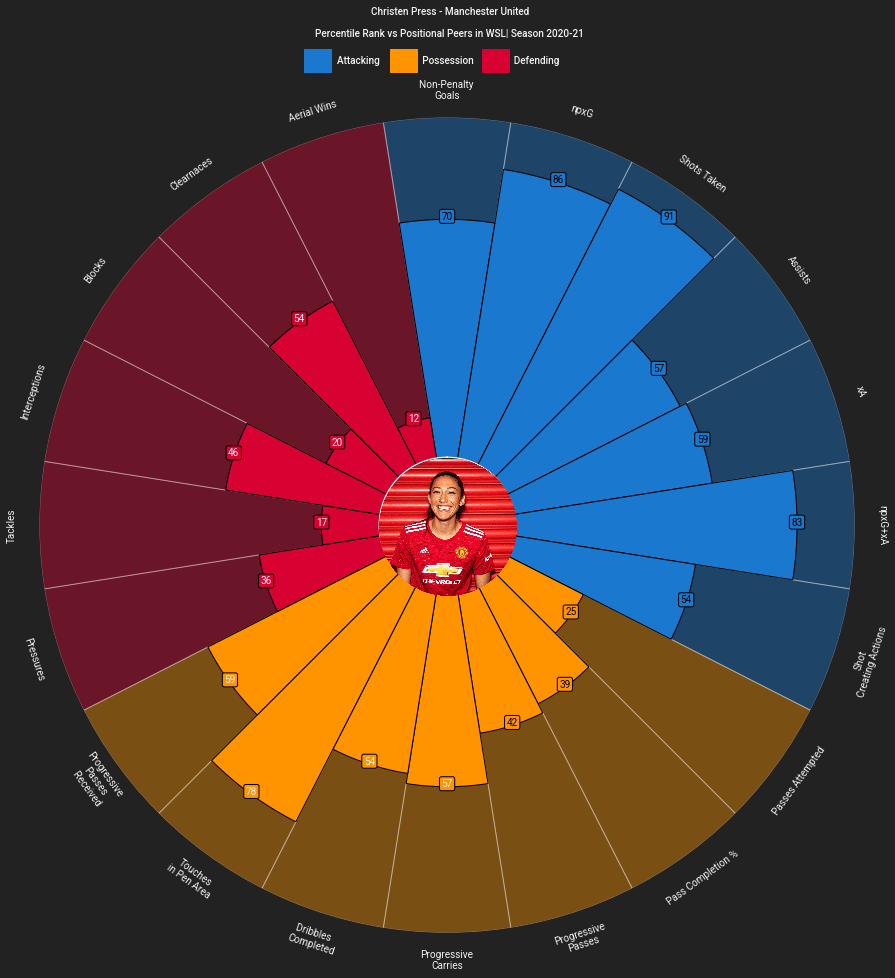

In [12]:
params = ["Non-Penalty \nGoals",
          "npxG",
          "Shots Taken",
          "Assists",
          "xA",
          "npxG+xA",
          "\nShot\n Creating Actions",
          "Passes Attempted",
          "Pass Completion %",
          "Progressive\nPasses",
          "Progressive\nCarries",
          "Dribbles \nCompleted",
          "Touches\nin Pen Area",
          "Progressive\nPasses\n Received",
          "Pressures",
          "Tackles",
          "Interceptions",
          "Blocks",
          "Clearnaces",
          "Aerial Wins"]

values = [70,86,91,57,59,83,54,25,39,42,57,54,78,59,36,17,46,20,54,12]

slice_colors = ["#1A78CF"] * 7 + ["#FF9300"] * 7 + ["#D70232"] * 6
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 10

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)


fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(15,15),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

fig.text(
    0.515, 0.975, "Christen Press - Manchester United", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

fig.text(
    0.515, 0.955,
    "Percentile Rank vs Positional Peers in WSL| Season 2020-21",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)


# add text
fig.text(
0.35, 0.93, "                          Attacking                 Possession                Defending", size=10,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.38, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.46, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.545, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    fdj_cropped, fig, left=0.4478, bottom=0.4365, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()

In [13]:
df=pd.read_csv(r'C:\Users\Karthik Garimella\Desktop\Project\Man United Woman\WSL per 90.csv',encoding="latin1")

In [14]:
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt

In [15]:
params = ["Gls/90",
          "Ast/90",
          "G+A/90",
          "xG/90",
          "xA/90",
          "xG+xA/90",
          "npxG/90"]

# The lower and upper boundaries for the statistics
low =  [0,0,0,0,0,0,0]
high = [1.25,0.68,1.76,1.05,0.46,1.33,1.05] 

In [16]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*7,
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [17]:
URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

In [18]:
christen_values =  [0.38,0.09,0.47,0.56,0.12,0.69,0.56]

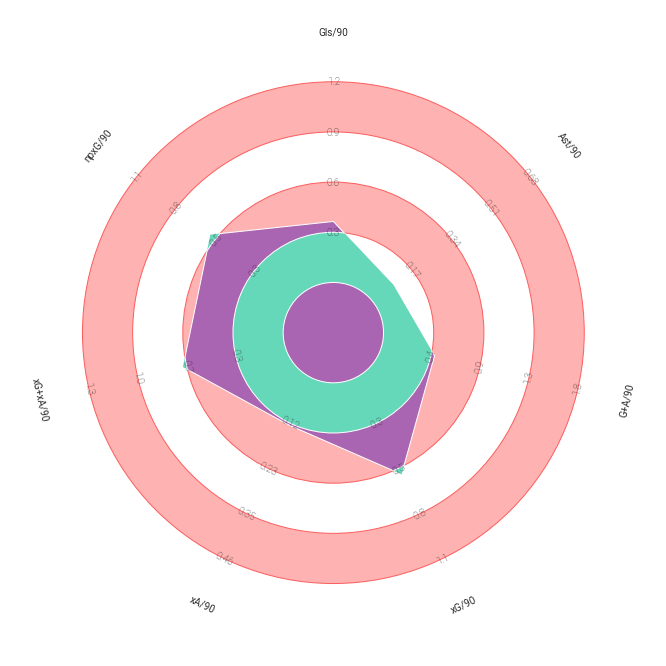

In [19]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(christen_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)  # draw the param labels

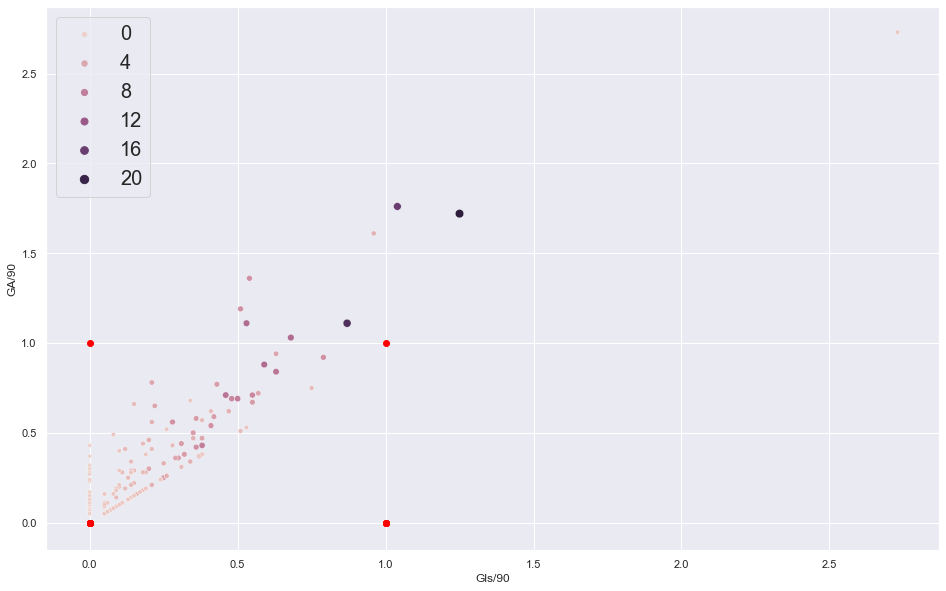

In [23]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="Gls/90", y="GA/90", hue="Gls", size="Gls",s=70)
g.legend(prop={'size': 20})

#g.ax_scatter.scatter(0.38,0.47, color = 'red')
plt.scatter([df['Gls/90']== 0.38], [df['GA/90']== 0.47], color="red")
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.Gls/90, row.GA/90, row.Player) # xloc of text, yloc of text, text

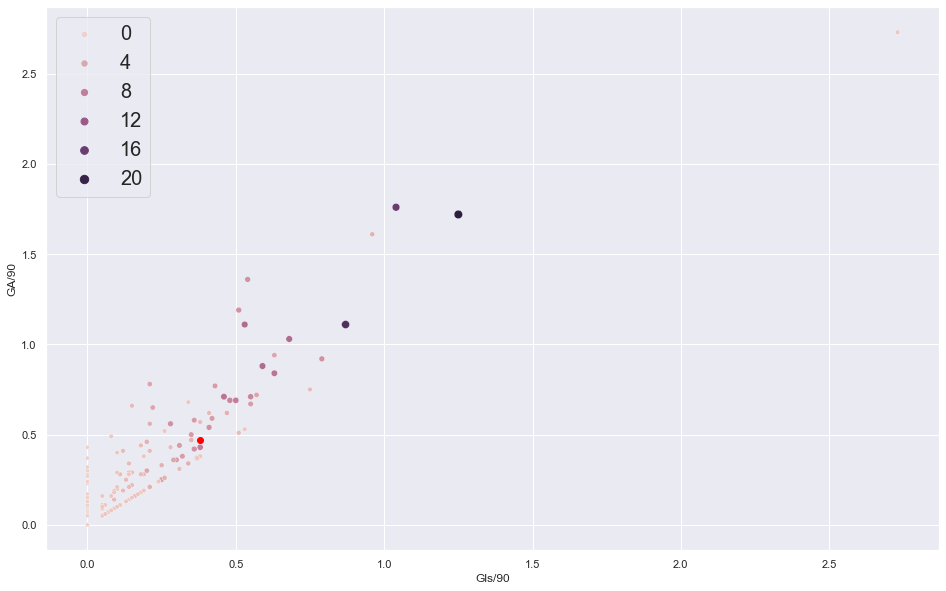

In [24]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="Gls/90", y="GA/90", hue="Gls", size="Gls",s=70)
g.legend(prop={'size': 20})

#g.ax_scatter.scatter(0.38,0.47, color = 'red')
plt.scatter(0.38, 0.47, color="red")
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.Gls/90, row.GA/90, row.Player) # xloc of text, yloc of text, text

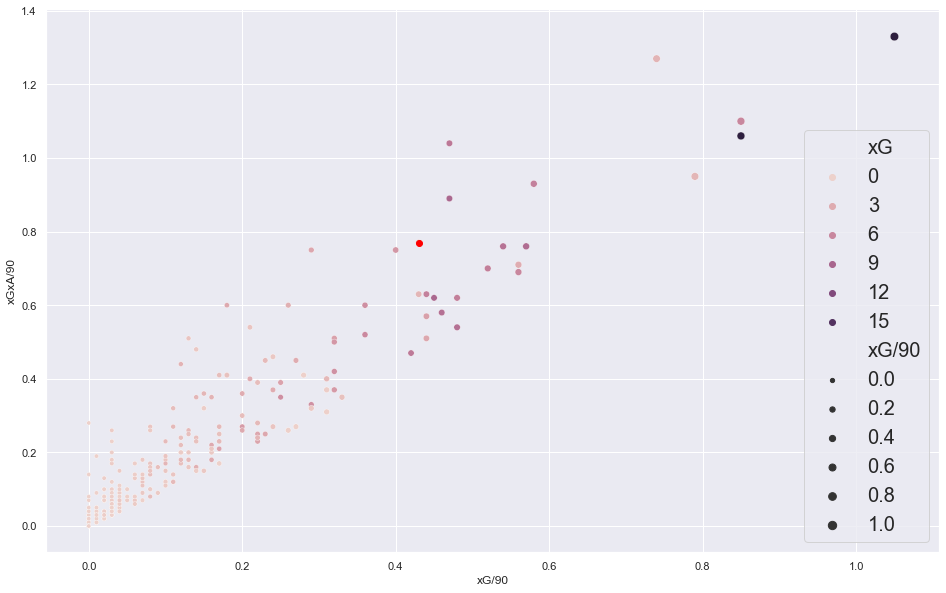

In [25]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="xG/90", y="xGxA/90", hue="xG", size="xG/90")
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.xG/90, row.xGxA/90, row.Player) # xloc of text, yloc of text, text
g.legend(prop={'size': 20})
plt.scatter(0.43, 0.77, color="red")


In [26]:
from mplsoccer.pitch import Pitch
from matplotlib.colors import ListedColormap

from mplsoccer import VerticalPitch, Pitch
from mplsoccer.cm import create_transparent_cmap
from mplsoccer.scatterutils import arrowhead_marker
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from mplsoccer.utils import FontManager
text_color = 'w'

In [72]:
df1=pd.read_csv(r'C:\Users\Karthik Garimella\Desktop\Project\Man United Woman\Christen Shotmaps.csv',encoding="latin1")

In [73]:
fm_rubik = FontManager(('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
                        'RubikMonoOne-Regular.ttf?raw=true'))

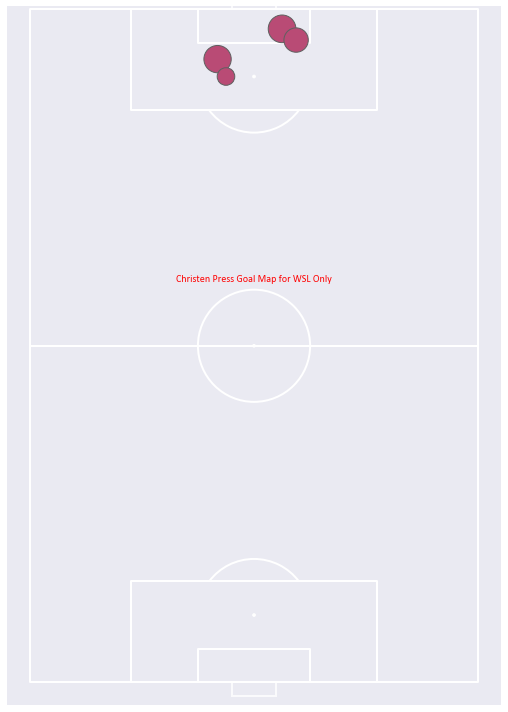

In [74]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 1900) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='#b94b75',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='o',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Christen Press Goal Map for WSL Only',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='red',
              va='center', ha='center')